# Discrete Learnable Flows on 1+1D $U(1)$ Theory

This is a notebook implementation of [the following tutorial](https://arxiv.org/pdf/2101.08176), modified to reproduce some results in [the following paper](https://arxiv.org/pdf/2003.06413). The algorithm used here closely follows the tutorial, with the only difference being the grouping of functions and classes into separate files, with the hope of resembling python modules and creating a cleaner notebook.

Here, in the first cell, we import some important modules, such as ```U1GaugeAction``` for computing the action, ```DiscreteFlow``` for implementing the discrete learnable flows, and ```torch``` for manipulating the data.

In [1]:
from library.theory import U1GaugeAction
from library.couplinglayer import MultivariateUniform, make_u1_equiv_layers, set_weights
from library.train import DiscreteFlow, calc_dkl
import torch
import numpy as np

c:\Users\satri\anaconda3\envs\latticeflow\Lib\site-packages\torch\__init__.py:747: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\b\abs_e1nmgx0bk6\croot\pytorch-select_1725478824526\work\torch\csrc\tensor\python_tensor.cpp:433.)
  _C._set_default_tensor_type(t)


## A training example

In the cell below, we show an example of the training initialisation, with the case of lattice size $L = 16$ and $\beta = 7.0$.

In [2]:
#Lattice Parameters
L = 16
lattice_shape = (L, L)
link_shape = (2, L, L)
u1_action = U1GaugeAction(beta = 7.0)

#Model
prior = MultivariateUniform(torch.zeros(link_shape), 2*np.pi*torch.ones(link_shape))
layers = make_u1_equiv_layers(lattice_shape = lattice_shape, n_layers = 24, n_mixture_comps = 6,
                            hidden_sizes = [8, 8], kernel_size = 3)
set_weights(layers)
model = {'layers': layers, 'prior': prior}

The following cells contain a base64-decoded string, which are used to save and load the trained models.

In [3]:
blob1 = """"
UEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQABIAYXJjaGl2ZS9kYXRhLnBrbEZCDgBaWlpaWlpaWlpaWlpaWoACY2NvbGxlY3Rpb25zCk9yZGVyZWREaWN0CnEAKVJxAShYHAAAADAucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRxAmN0b3JjaC5fdXRpbHMKX3JlYnVpbGRfdGVuc29yX3YyCnEDKChYBwAAAHN0b3JhZ2VxBGN0b3JjaApEb3VibGVTdG9yYWdlCnEFWAEAAAAwcQZYAwAAAGNwdXEHS5B0cQhRSwAoSwhLAksDSwN0cQkoSxJLCUsDSwF0cQqJaAApUnELdHEMUnENWBoAAAAwLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3EOaAMoKGgEaAVYAQAAADFxD2gHSwh0cRBRSwBLCIVxEUsBhXESiWgAKVJxE3RxFFJxFVgcAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHEWaAMoKGgEaAVYAQAAADJxF2gHTUACdHEYUUsAKEsISwhLA0sDdHEZKEtISwlLA0sBdHEaiWgAKVJxG3RxHFJxHVgaAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNxHmgDKChoBGgFWAEAAAAzcR9oB0sIdHEgUUsASwiFcSFLAYVxIoloAClScSN0cSRScSVYHAAAADAucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRxJmgDKChoBGgFWAEAAAA0cSdoB0vYdHEoUUsAKEsDSwhLA0sDdHEpKEtISwlLA0sBdHEqiWgAKVJxK3RxLFJxLVgaAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNxLmgDKChoBGgFWAEAAAA1cS9oB0sDdHEwUUsASwOFcTFLAYVxMoloAClScTN0cTRScTVYHAAAADEucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRxNmgDKChoBGgFWAEAAAA2cTdoB0uQdHE4UUsAKEsISwJLA0sDdHE5KEsSSwlLA0sBdHE6iWgAKVJxO3RxPFJxPVgaAAAAMS5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNxPmgDKChoBGgFWAEAAAA3cT9oB0sIdHFAUUsASwiFcUFLAYVxQoloAClScUN0cURScUVYHAAAADEucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRxRmgDKChoBGgFWAEAAAA4cUdoB01AAnRxSFFLAChLCEsISwNLA3RxSShLSEsJSwNLAXRxSoloAClScUt0cUxScU1YGgAAADEucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcU5oAygoaARoBVgBAAAAOXFPaAdLCHRxUFFLAEsIhXFRSwGFcVKJaAApUnFTdHFUUnFVWBwAAAAxLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cVZoAygoaARoBVgCAAAAMTBxV2gHS9h0cVhRSwAoSwNLCEsDSwN0cVkoS0hLCUsDSwF0cVqJaAApUnFbdHFcUnFdWBoAAAAxLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3FeaAMoKGgEaAVYAgAAADExcV9oB0sDdHFgUUsASwOFcWFLAYVxYoloAClScWN0cWRScWVYHAAAADIucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRxZmgDKChoBGgFWAIAAAAxMnFnaAdLkHRxaFFLAChLCEsCSwNLA3RxaShLEksJSwNLAXRxaoloAClScWt0cWxScW1YGgAAADIucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcW5oAygoaARoBVgCAAAAMTNxb2gHSwh0cXBRSwBLCIVxcUsBhXFyiWgAKVJxc3RxdFJxdVgcAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHF2aAMoKGgEaAVYAgAAADE0cXdoB01AAnRxeFFLAChLCEsISwNLA3RxeShLSEsJSwNLAXRxeoloAClScXt0cXxScX1YGgAAADIucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcX5oAygoaARoBVgCAAAAMTVxf2gHSwh0cYBRSwBLCIVxgUsBhXGCiWgAKVJxg3RxhFJxhVgcAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHGGaAMoKGgEaAVYAgAAADE2cYdoB0vYdHGIUUsAKEsDSwhLA0sDdHGJKEtISwlLA0sBdHGKiWgAKVJxi3RxjFJxjVgaAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNxjmgDKChoBGgFWAIAAAAxN3GPaAdLA3RxkFFLAEsDhXGRSwGFcZKJaAApUnGTdHGUUnGVWBwAAAAzLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cZZoAygoaARoBVgCAAAAMThxl2gHS5B0cZhRSwAoSwhLAksDSwN0cZkoSxJLCUsDSwF0cZqJaAApUnGbdHGcUnGdWBoAAAAzLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3GeaAMoKGgEaAVYAgAAADE5cZ9oB0sIdHGgUUsASwiFcaFLAYVxooloAClScaN0caRScaVYHAAAADMucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRxpmgDKChoBGgFWAIAAAAyMHGnaAdNQAJ0cahRSwAoSwhLCEsDSwN0cakoS0hLCUsDSwF0caqJaAApUnGrdHGsUnGtWBoAAAAzLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3GuaAMoKGgEaAVYAgAAADIxca9oB0sIdHGwUUsASwiFcbFLAYVxsoloAClScbN0cbRScbVYHAAAADMucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRxtmgDKChoBGgFWAIAAAAyMnG3aAdL2HRxuFFLAChLA0sISwNLA3RxuShLSEsJSwNLAXRxuoloAClScbt0cbxScb1YGgAAADMucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcb5oAygoaARoBVgCAAAAMjNxv2gHSwN0ccBRSwBLA4VxwUsBhXHCiWgAKVJxw3RxxFJxxVgcAAAANC5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHHGaAMoKGgEaAVYAgAAADI0ccdoB0uQdHHIUUsAKEsISwJLA0sDdHHJKEsSSwlLA0sBdHHKiWgAKVJxy3RxzFJxzVgaAAAANC5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNxzmgDKChoBGgFWAIAAAAyNXHPaAdLCHRx0FFLAEsIhXHRSwGFcdKJaAApUnHTdHHUUnHVWBwAAAA0LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cdZoAygoaARoBVgCAAAAMjZx12gHTUACdHHYUUsAKEsISwhLA0sDdHHZKEtISwlLA0sBdHHaiWgAKVJx23Rx3FJx3VgaAAAANC5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNx3mgDKChoBGgFWAIAAAAyN3HfaAdLCHRx4FFLAEsIhXHhSwGFceKJaAApUnHjdHHkUnHlWBwAAAA0LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0ceZoAygoaARoBVgCAAAAMjhx52gHS9h0cehRSwAoSwNLCEsDSwN0cekoS0hLCUsDSwF0ceqJaAApUnHrdHHsUnHtWBoAAAA0LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3HuaAMoKGgEaAVYAgAAADI5ce9oB0sDdHHwUUsASwOFcfFLAYVx8oloAClScfN0cfRScfVYHAAAADUucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRx9mgDKChoBGgFWAIAAAAzMHH3aAdLkHRx+FFLAChLCEsCSwNLA3Rx+ShLEksJSwNLAXRx+oloAClScft0cfxScf1YGgAAADUucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcf5oAygoaARoBVgCAAAAMzFx/2gHSwh0cgABAABRSwBLCIVyAQEAAEsBhXICAQAAiWgAKVJyAwEAAHRyBAEAAFJyBQEAAFgcAAAANS5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHIGAQAAaAMoKGgEaAVYAgAAADMycgcBAABoB01AAnRyCAEAAFFLAChLCEsISwNLA3RyCQEAAChLSEsJSwNLAXRyCgEAAIloAClScgsBAAB0cgwBAABScg0BAABYGgAAADUucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcg4BAABoAygoaARoBVgCAAAAMzNyDwEAAGgHSwh0chABAABRSwBLCIVyEQEAAEsBhXISAQAAiWgAKVJyEwEAAHRyFAEAAFJyFQEAAFgcAAAANS5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHIWAQAAaAMoKGgEaAVYAgAAADM0chcBAABoB0vYdHIYAQAAUUsAKEsDSwhLA0sDdHIZAQAAKEtISwlLA0sBdHIaAQAAiWgAKVJyGwEAAHRyHAEAAFJyHQEAAFgaAAAANS5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyHgEAAGgDKChoBGgFWAIAAAAzNXIfAQAAaAdLA3RyIAEAAFFLAEsDhXIhAQAASwGFciIBAACJaAApUnIjAQAAdHIkAQAAUnIlAQAAWBwAAAA2LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0ciYBAABoAygoaARoBVgCAAAAMzZyJwEAAGgHS5B0cigBAABRSwAoSwhLAksDSwN0cikBAAAoSxJLCUsDSwF0cioBAACJaAApUnIrAQAAdHIsAQAAUnItAQAAWBoAAAA2LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3IuAQAAaAMoKGgEaAVYAgAAADM3ci8BAABoB0sIdHIwAQAAUUsASwiFcjEBAABLAYVyMgEAAIloAClScjMBAAB0cjQBAABScjUBAABYHAAAADYucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyNgEAAGgDKChoBGgFWAIAAAAzOHI3AQAAaAdNQAJ0cjgBAABRSwAoSwhLCEsDSwN0cjkBAAAoS0hLCUsDSwF0cjoBAACJaAApUnI7AQAAdHI8AQAAUnI9AQAAWBoAAAA2LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3I+AQAAaAMoKGgEaAVYAgAAADM5cj8BAABoB0sIdHJAAQAAUUsASwiFckEBAABLAYVyQgEAAIloAClSckMBAAB0ckQBAABSckUBAABYHAAAADYucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyRgEAAGgDKChoBGgFWAIAAAA0MHJHAQAAaAdL2HRySAEAAFFLAChLA0sISwNLA3RySQEAAChLSEsJSwNLAXRySgEAAIloAClScksBAAB0ckwBAABSck0BAABYGgAAADYucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzck4BAABoAygoaARoBVgCAAAANDFyTwEAAGgHSwN0clABAABRSwBLA4VyUQEAAEsBhXJSAQAAiWgAKVJyUwEAAHRyVAEAAFJyVQEAAFgcAAAANy5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHJWAQAAaAMoKGgEaAVYAgAAADQyclcBAABoB0uQdHJYAQAAUUsAKEsISwJLA0sDdHJZAQAAKEsSSwlLA0sBdHJaAQAAiWgAKVJyWwEAAHRyXAEAAFJyXQEAAFgaAAAANy5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyXgEAAGgDKChoBGgFWAIAAAA0M3JfAQAAaAdLCHRyYAEAAFFLAEsIhXJhAQAASwGFcmIBAACJaAApUnJjAQAAdHJkAQAAUnJlAQAAWBwAAAA3LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cmYBAABoAygoaARoBVgCAAAANDRyZwEAAGgHTUACdHJoAQAAUUsAKEsISwhLA0sDdHJpAQAAKEtISwlLA0sBdHJqAQAAiWgAKVJyawEAAHRybAEAAFJybQEAAFgaAAAANy5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNybgEAAGgDKChoBGgFWAIAAAA0NXJvAQAAaAdLCHRycAEAAFFLAEsIhXJxAQAASwGFcnIBAACJaAApUnJzAQAAdHJ0AQAAUnJ1AQAAWBwAAAA3LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cnYBAABoAygoaARoBVgCAAAANDZydwEAAGgHS9h0cngBAABRSwAoSwNLCEsDSwN0cnkBAAAoS0hLCUsDSwF0cnoBAACJaAApUnJ7AQAAdHJ8AQAAUnJ9AQAAWBoAAAA3LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3J+AQAAaAMoKGgEaAVYAgAAADQ3cn8BAABoB0sDdHKAAQAAUUsASwOFcoEBAABLAYVyggEAAIloAClScoMBAAB0coQBAABScoUBAABYHAAAADgucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyhgEAAGgDKChoBGgFWAIAAAA0OHKHAQAAaAdLkHRyiAEAAFFLAChLCEsCSwNLA3RyiQEAAChLEksJSwNLAXRyigEAAIloAClScosBAAB0cowBAABSco0BAABYGgAAADgucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzco4BAABoAygoaARoBVgCAAAANDlyjwEAAGgHSwh0cpABAABRSwBLCIVykQEAAEsBhXKSAQAAiWgAKVJykwEAAHRylAEAAFJylQEAAFgcAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHKWAQAAaAMoKGgEaAVYAgAAADUwcpcBAABoB01AAnRymAEAAFFLAChLCEsISwNLA3RymQEAAChLSEsJSwNLAXRymgEAAIloAClScpsBAAB0cpwBAABScp0BAABYGgAAADgucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcp4BAABoAygoaARoBVgCAAAANTFynwEAAGgHSwh0cqABAABRSwBLCIVyoQEAAEsBhXKiAQAAiWgAKVJyowEAAHRypAEAAFJypQEAAFgcAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHKmAQAAaAMoKGgEaAVYAgAAADUycqcBAABoB0vYdHKoAQAAUUsAKEsDSwhLA0sDdHKpAQAAKEtISwlLA0sBdHKqAQAAiWgAKVJyqwEAAHRyrAEAAFJyrQEAAFgaAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyrgEAAGgDKChoBGgFWAIAAAA1M3KvAQAAaAdLA3RysAEAAFFLAEsDhXKxAQAASwGFcrIBAACJaAApUnKzAQAAdHK0AQAAUnK1AQAAWBwAAAA5LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0crYBAABoAygoaARoBVgCAAAANTRytwEAAGgHS5B0crgBAABRSwAoSwhLAksDSwN0crkBAAAoSxJLCUsDSwF0croBAACJaAApUnK7AQAAdHK8AQAAUnK9AQAAWBoAAAA5LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3K+AQAAaAMoKGgEaAVYAgAAADU1cr8BAABoB0sIdHLAAQAAUUsASwiFcsEBAABLAYVywgEAAIloAClScsMBAAB0csQBAABScsUBAABYHAAAADkucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyxgEAAGgDKChoBGgFWAIAAAA1NnLHAQAAaAdNQAJ0csgBAABRSwAoSwhLCEsDSwN0cskBAAAoS0hLCUsDSwF0csoBAACJaAApUnLLAQAAdHLMAQAAUnLNAQAAWBoAAAA5LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3LOAQAAaAMoKGgEaAVYAgAAADU3cs8BAABoB0sIdHLQAQAAUUsASwiFctEBAABLAYVy0gEAAIloAClSctMBAAB0ctQBAABSctUBAABYHAAAADkucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRy1gEAAGgDKChoBGgFWAIAAAA1OHLXAQAAaAdL2HRy2AEAAFFLAChLA0sISwNLA3Ry2QEAAChLSEsJSwNLAXRy2gEAAIloAClSctsBAAB0ctwBAABSct0BAABYGgAAADkucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzct4BAABoAygoaARoBVgCAAAANTly3wEAAGgHSwN0cuABAABRSwBLA4Vy4QEAAEsBhXLiAQAAiWgAKVJy4wEAAHRy5AEAAFJy5QEAAFgdAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRy5gEAAGgDKChoBGgFWAIAAAA2MHLnAQAAaAdLkHRy6AEAAFFLAChLCEsCSwNLA3Ry6QEAAChLEksJSwNLAXRy6gEAAIloAClScusBAAB0cuwBAABScu0BAABYGwAAADEwLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3LuAQAAaAMoKGgEaAVYAgAAADYxcu8BAABoB0sIdHLwAQAAUUsASwiFcvEBAABLAYVy8gEAAIloAClScvMBAAB0cvQBAABScvUBAABYHQAAADEwLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cvYBAABoAygoaARoBVgCAAAANjJy9wEAAGgHTUACdHL4AQAAUUsAKEsISwhLA0sDdHL5AQAAKEtISwlLA0sBdHL6AQAAiWgAKVJy+wEAAHRy/AEAAFJy/QEAAFgbAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcv4BAABoAygoaARoBVgCAAAANjNy/wEAAGgHSwh0cgACAABRSwBLCIVyAQIAAEsBhXICAgAAiWgAKVJyAwIAAHRyBAIAAFJyBQIAAFgdAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyBgIAAGgDKChoBGgFWAIAAAA2NHIHAgAAaAdL2HRyCAIAAFFLAChLA0sISwNLA3RyCQIAAChLSEsJSwNLAXRyCgIAAIloAClScgsCAAB0cgwCAABScg0CAABYGwAAADEwLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3IOAgAAaAMoKGgEaAVYAgAAADY1cg8CAABoB0sDdHIQAgAAUUsASwOFchECAABLAYVyEgIAAIloAClSchMCAAB0chQCAABSchUCAABYHQAAADExLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0chYCAABoAygoaARoBVgCAAAANjZyFwIAAGgHS5B0chgCAABRSwAoSwhLAksDSwN0chkCAAAoSxJLCUsDSwF0choCAACJaAApUnIbAgAAdHIcAgAAUnIdAgAAWBsAAAAxMS5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyHgIAAGgDKChoBGgFWAIAAAA2N3IfAgAAaAdLCHRyIAIAAFFLAEsIhXIhAgAASwGFciICAACJaAApUnIjAgAAdHIkAgAAUnIlAgAAWB0AAAAxMS5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHImAgAAaAMoKGgEaAVYAgAAADY4cicCAABoB01AAnRyKAIAAFFLAChLCEsISwNLA3RyKQIAAChLSEsJSwNLAXRyKgIAAIloAClScisCAAB0ciwCAABSci0CAABYGwAAADExLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3IuAgAAaAMoKGgEaAVYAgAAADY5ci8CAABoB0sIdHIwAgAAUUsASwiFcjECAABLAYVyMgIAAIloAClScjMCAAB0cjQCAABScjUCAABYHQAAADExLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cjYCAABoAygoaARoBVgCAAAANzByNwIAAGgHS9h0cjgCAABRSwAoSwNLCEsDSwN0cjkCAAAoS0hLCUsDSwF0cjoCAACJaAApUnI7AgAAdHI8AgAAUnI9AgAAWBsAAAAxMS5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyPgIAAGgDKChoBGgFWAIAAAA3MXI/AgAAaAdLA3RyQAIAAFFLAEsDhXJBAgAASwGFckICAACJaAApUnJDAgAAdHJEAgAAUnJFAgAAWB0AAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHJGAgAAaAMoKGgEaAVYAgAAADcyckcCAABoB0uQdHJIAgAAUUsAKEsISwJLA0sDdHJJAgAAKEsSSwlLA0sBdHJKAgAAiWgAKVJySwIAAHRyTAIAAFJyTQIAAFgbAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzck4CAABoAygoaARoBVgCAAAANzNyTwIAAGgHSwh0clACAABRSwBLCIVyUQIAAEsBhXJSAgAAiWgAKVJyUwIAAHRyVAIAAFJyVQIAAFgdAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyVgIAAGgDKChoBGgFWAIAAAA3NHJXAgAAaAdNQAJ0clgCAABRSwAoSwhLCEsDSwN0clkCAAAoS0hLCUsDSwF0cloCAACJaAApUnJbAgAAdHJcAgAAUnJdAgAAWBsAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyXgIAAGgDKChoBGgFWAIAAAA3NXJfAgAAaAdLCHRyYAIAAFFLAEsIhXJhAgAASwGFcmICAACJaAApUnJjAgAAdHJkAgAAUnJlAgAAWB0AAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHJmAgAAaAMoKGgEaAVYAgAAADc2cmcCAABoB0vYdHJoAgAAUUsAKEsDSwhLA0sDdHJpAgAAKEtISwlLA0sBdHJqAgAAiWgAKVJyawIAAHRybAIAAFJybQIAAFgbAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcm4CAABoAygoaARoBVgCAAAANzdybwIAAGgHSwN0cnACAABRSwBLA4VycQIAAEsBhXJyAgAAiWgAKVJycwIAAHRydAIAAFJydQIAAFgdAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRydgIAAGgDKChoBGgFWAIAAAA3OHJ3AgAAaAdLkHRyeAIAAFFLAChLCEsCSwNLA3RyeQIAAChLEksJSwNLAXRyegIAAIloAClScnsCAAB0cnwCAABScn0CAABYGwAAADEzLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3J+AgAAaAMoKGgEaAVYAgAAADc5cn8CAABoB0sIdHKAAgAAUUsASwiFcoECAABLAYVyggIAAIloAClScoMCAAB0coQCAABScoUCAABYHQAAADEzLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0coYCAABoAygoaARoBVgCAAAAODByhwIAAGgHTUACdHKIAgAAUUsAKEsISwhLA0sDdHKJAgAAKEtISwlLA0sBdHKKAgAAiWgAKVJyiwIAAHRyjAIAAFJyjQIAAFgbAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzco4CAABoAygoaARoBVgCAAAAODFyjwIAAGgHSwh0cpACAABRSwBLCIVykQIAAEsBhXKSAgAAiWgAKVJykwIAAHRylAIAAFJylQIAAFgdAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRylgIAAGgDKChoBGgFWAIAAAA4MnKXAgAAaAdL2HRymAIAAFFLAChLA0sISwNLA3RymQIAAChLSEsJSwNLAXRymgIAAIloAClScpsCAAB0cpwCAABScp0CAABYGwAAADEzLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3KeAgAAaAMoKGgEaAVYAgAAADgzcp8CAABoB0sDdHKgAgAAUUsASwOFcqECAABLAYVyogIAAIloAClScqMCAAB0cqQCAABScqUCAABYHQAAADE0LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cqYCAABoAygoaARoBVgCAAAAODRypwIAAGgHS5B0cqgCAABRSwAoSwhLAksDSwN0cqkCAAAoSxJLCUsDSwF0cqoCAACJaAApUnKrAgAAdHKsAgAAUnKtAgAAWBsAAAAxNC5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyrgIAAGgDKChoBGgFWAIAAAA4NXKvAgAAaAdLCHRysAIAAFFLAEsIhXKxAgAASwGFcrICAACJaAApUnKzAgAAdHK0AgAAUnK1AgAAWB0AAAAxNC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHK2AgAAaAMoKGgEaAVYAgAAADg2crcCAABoB01AAnRyuAIAAFFLAChLCEsISwNLA3RyuQIAAChLSEsJSwNLAXRyugIAAIloAClScrsCAAB0crwCAABScr0CAABYGwAAADE0LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3K+AgAAaAMoKGgEaAVYAgAAADg3cr8CAABoB0sIdHLAAgAAUUsASwiFcsECAABLAYVywgIAAIloAClScsMCAAB0csQCAABScsUCAABYHQAAADE0LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0csYCAABoAygoaARoBVgCAAAAODhyxwIAAGgHS9h0csgCAABRSwAoSwNLCEsDSwN0cskCAAAoS0hLCUsDSwF0csoCAACJaAApUnLLAgAAdHLMAgAAUnLNAgAAWBsAAAAxNC5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyzgIAAGgDKChoBGgFWAIAAAA4OXLPAgAAaAdLA3Ry0AIAAFFLAEsDhXLRAgAASwGFctICAACJaAApUnLTAgAAdHLUAgAAUnLVAgAAWB0AAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHLWAgAAaAMoKGgEaAVYAgAAADkwctcCAABoB0uQdHLYAgAAUUsAKEsISwJLA0sDdHLZAgAAKEsSSwlLA0sBdHLaAgAAiWgAKVJy2wIAAHRy3AIAAFJy3QIAAFgbAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzct4CAABoAygoaARoBVgCAAAAOTFy3wIAAGgHSwh0cuACAABRSwBLCIVy4QIAAEsBhXLiAgAAiWgAKVJy4wIAAHRy5AIAAFJy5QIAAFgdAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRy5gIAAGgDKChoBGgFWAIAAAA5MnLnAgAAaAdNQAJ0cugCAABRSwAoSwhLCEsDSwN0cukCAAAoS0hLCUsDSwF0cuoCAACJaAApUnLrAgAAdHLsAgAAUnLtAgAAWBsAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNy7gIAAGgDKChoBGgFWAIAAAA5M3LvAgAAaAdLCHRy8AIAAFFLAEsIhXLxAgAASwGFcvICAACJaAApUnLzAgAAdHL0AgAAUnL1AgAAWB0AAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHL2AgAAaAMoKGgEaAVYAgAAADk0cvcCAABoB0vYdHL4AgAAUUsAKEsDSwhLA0sDdHL5AgAAKEtISwlLA0sBdHL6AgAAiWgAKVJy+wIAAHRy/AIAAFJy/QIAAFgbAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcv4CAABoAygoaARoBVgCAAAAOTVy/wIAAGgHSwN0cgADAABRSwBLA4VyAQMAAEsBhXICAwAAiWgAKVJyAwMAAHRyBAMAAFJyBQMAAFgdAAAAMTYucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyBgMAAGgDKChoBGgFWAIAAAA5NnIHAwAAaAdLkHRyCAMAAFFLAChLCEsCSwNLA3RyCQMAAChLEksJSwNLAXRyCgMAAIloAClScgsDAAB0cgwDAABScg0DAABYGwAAADE2LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3IOAwAAaAMoKGgEaAVYAgAAADk3cg8DAABoB0sIdHIQAwAAUUsASwiFchEDAABLAYVyEgMAAIloAClSchMDAAB0chQDAABSchUDAABYHQAAADE2LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0chYDAABoAygoaARoBVgCAAAAOThyFwMAAGgHTUACdHIYAwAAUUsAKEsISwhLA0sDdHIZAwAAKEtISwlLA0sBdHIaAwAAiWgAKVJyGwMAAHRyHAMAAFJyHQMAAFgbAAAAMTYucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzch4DAABoAygoaARoBVgCAAAAOTlyHwMAAGgHSwh0ciADAABRSwBLCIVyIQMAAEsBhXIiAwAAiWgAKVJyIwMAAHRyJAMAAFJyJQMAAFgdAAAAMTYucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyJgMAAGgDKChoBGgFWAMAAAAxMDByJwMAAGgHS9h0cigDAABRSwAoSwNLCEsDSwN0cikDAAAoS0hLCUsDSwF0cioDAACJaAApUnIrAwAAdHIsAwAAUnItAwAAWBsAAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyLgMAAGgDKChoBGgFWAMAAAAxMDFyLwMAAGgHSwN0cjADAABRSwBLA4VyMQMAAEsBhXIyAwAAiWgAKVJyMwMAAHRyNAMAAFJyNQMAAFgdAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyNgMAAGgDKChoBGgFWAMAAAAxMDJyNwMAAGgHS5B0cjgDAABRSwAoSwhLAksDSwN0cjkDAAAoSxJLCUsDSwF0cjoDAACJaAApUnI7AwAAdHI8AwAAUnI9AwAAWBsAAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyPgMAAGgDKChoBGgFWAMAAAAxMDNyPwMAAGgHSwh0ckADAABRSwBLCIVyQQMAAEsBhXJCAwAAiWgAKVJyQwMAAHRyRAMAAFJyRQMAAFgdAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyRgMAAGgDKChoBGgFWAMAAAAxMDRyRwMAAGgHTUACdHJIAwAAUUsAKEsISwhLA0sDdHJJAwAAKEtISwlLA0sBdHJKAwAAiWgAKVJySwMAAHRyTAMAAFJyTQMAAFgbAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzck4DAABoAygoaARoBVgDAAAAMTA1ck8DAABoB0sIdHJQAwAAUUsASwiFclEDAABLAYVyUgMAAIloAClSclMDAAB0clQDAABSclUDAABYHQAAADE3LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0clYDAABoAygoaARoBVgDAAAAMTA2clcDAABoB0vYdHJYAwAAUUsAKEsDSwhLA0sDdHJZAwAAKEtISwlLA0sBdHJaAwAAiWgAKVJyWwMAAHRyXAMAAFJyXQMAAFgbAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcl4DAABoAygoaARoBVgDAAAAMTA3cl8DAABoB0sDdHJgAwAAUUsASwOFcmEDAABLAYVyYgMAAIloAClScmMDAAB0cmQDAABScmUDAABYHQAAADE4LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cmYDAABoAygoaARoBVgDAAAAMTA4cmcDAABoB0uQdHJoAwAAUUsAKEsISwJLA0sDdHJpAwAAKEsSSwlLA0sBdHJqAwAAiWgAKVJyawMAAHRybAMAAFJybQMAAFgbAAAAMTgucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcm4DAABoAygoaARoBVgDAAAAMTA5cm8DAABoB0sIdHJwAwAAUUsASwiFcnEDAABLAYVycgMAAIloAClScnMDAAB0cnQDAABScnUDAABYHQAAADE4LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cnYDAABoAygoaARoBVgDAAAAMTEwcncDAABoB01AAnRyeAMAAFFLAChLCEsISwNLA3RyeQMAAChLSEsJSwNLAXRyegMAAIloAClScnsDAAB0cnwDAABScn0DAABYGwAAADE4LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3J+AwAAaAMoKGgEaAVYAwAAADExMXJ/AwAAaAdLCHRygAMAAFFLAEsIhXKBAwAASwGFcoIDAACJaAApUnKDAwAAdHKEAwAAUnKFAwAAWB0AAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHKGAwAAaAMoKGgEaAVYAwAAADExMnKHAwAAaAdL2HRyiAMAAFFLAChLA0sISwNLA3RyiQMAAChLSEsJSwNLAXRyigMAAIloAClScosDAAB0cowDAABSco0DAABYGwAAADE4LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3KOAwAAaAMoKGgEaAVYAwAAADExM3KPAwAAaAdLA3RykAMAAFFLAEsDhXKRAwAASwGFcpIDAACJaAApUnKTAwAAdHKUAwAAUnKVAwAAWB0AAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHKWAwAAaAMoKGgEaAVYAwAAADExNHKXAwAAaAdLkHRymAMAAFFLAChLCEsCSwNLA3RymQMAAChLEksJSwNLAXRymgMAAIloAClScpsDAAB0cpwDAABScp0DAABYGwAAADE5LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3KeAwAAaAMoKGgEaAVYAwAAADExNXKfAwAAaAdLCHRyoAMAAFFLAEsIhXKhAwAASwGFcqIDAACJaAApUnKjAwAAdHKkAwAAUnKlAwAAWB0AAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHKmAwAAaAMoKGgEaAVYAwAAADExNnKnAwAAaAdNQAJ0cqgDAABRSwAoSwhLCEsDSwN0cqkDAAAoS0hLCUsDSwF0cqoDAACJaAApUnKrAwAAdHKsAwAAUnKtAwAAWBsAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyrgMAAGgDKChoBGgFWAMAAAAxMTdyrwMAAGgHSwh0crADAABRSwBLCIVysQMAAEsBhXKyAwAAiWgAKVJyswMAAHRytAMAAFJytQMAAFgdAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRytgMAAGgDKChoBGgFWAMAAAAxMThytwMAAGgHS9h0crgDAABRSwAoSwNLCEsDSwN0crkDAAAoS0hLCUsDSwF0croDAACJaAApUnK7AwAAdHK8AwAAUnK9AwAAWBsAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyvgMAAGgDKChoBGgFWAMAAAAxMTlyvwMAAGgHSwN0csADAABRSwBLA4VywQMAAEsBhXLCAwAAiWgAKVJywwMAAHRyxAMAAFJyxQMAAFgdAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyxgMAAGgDKChoBGgFWAMAAAAxMjByxwMAAGgHS5B0csgDAABRSwAoSwhLAksDSwN0cskDAAAoSxJLCUsDSwF0csoDAACJaAApUnLLAwAAdHLMAwAAUnLNAwAAWBsAAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyzgMAAGgDKChoBGgFWAMAAAAxMjFyzwMAAGgHSwh0ctADAABRSwBLCIVy0QMAAEsBhXLSAwAAiWgAKVJy0wMAAHRy1AMAAFJy1QMAAFgdAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRy1gMAAGgDKChoBGgFWAMAAAAxMjJy1wMAAGgHTUACdHLYAwAAUUsAKEsISwhLA0sDdHLZAwAAKEtISwlLA0sBdHLaAwAAiWgAKVJy2wMAAHRy3AMAAFJy3QMAAFgbAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzct4DAABoAygoaARoBVgDAAAAMTIzct8DAABoB0sIdHLgAwAAUUsASwiFcuEDAABLAYVy4gMAAIloAClScuMDAAB0cuQDAABScuUDAABYHQAAADIwLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cuYDAABoAygoaARoBVgDAAAAMTI0cucDAABoB0vYdHLoAwAAUUsAKEsDSwhLA0sDdHLpAwAAKEtISwlLA0sBdHLqAwAAiWgAKVJy6wMAAHRy7AMAAFJy7QMAAFgbAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcu4DAABoAygoaARoBVgDAAAAMTI1cu8DAABoB0sDdHLwAwAAUUsASwOFcvEDAABLAYVy8gMAAIloAClScvMDAAB0cvQDAABScvUDAABYHQAAADIxLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cvYDAABoAygoaARoBVgDAAAAMTI2cvcDAABoB0uQdHL4AwAAUUsAKEsISwJLA0sDdHL5AwAAKEsSSwlLA0sBdHL6AwAAiWgAKVJy+wMAAHRy/AMAAFJy/QMAAFgbAAAAMjEucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcv4DAABoAygoaARoBVgDAAAAMTI3cv8DAABoB0sIdHIABAAAUUsASwiFcgEEAABLAYVyAgQAAIloAClScgMEAAB0cgQEAABScgUEAABYHQAAADIxLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cgYEAABoAygoaARoBVgDAAAAMTI4cgcEAABoB01AAnRyCAQAAFFLAChLCEsISwNLA3RyCQQAAChLSEsJSwNLAXRyCgQAAIloAClScgsEAAB0cgwEAABScg0EAABYGwAAADIxLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3IOBAAAaAMoKGgEaAVYAwAAADEyOXIPBAAAaAdLCHRyEAQAAFFLAEsIhXIRBAAASwGFchIEAACJaAApUnITBAAAdHIUBAAAUnIVBAAAWB0AAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHIWBAAAaAMoKGgEaAVYAwAAADEzMHIXBAAAaAdL2HRyGAQAAFFLAChLA0sISwNLA3RyGQQAAChLSEsJSwNLAXRyGgQAAIloAClSchsEAAB0chwEAABSch0EAABYGwAAADIxLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3IeBAAAaAMoKGgEaAVYAwAAADEzMXIfBAAAaAdLA3RyIAQAAFFLAEsDhXIhBAAASwGFciIEAACJaAApUnIjBAAAdHIkBAAAUnIlBAAAWB0AAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHImBAAAaAMoKGgEaAVYAwAAADEzMnInBAAAaAdLkHRyKAQAAFFLAChLCEsCSwNLA3RyKQQAAChLEksJSwNLAXRyKgQAAIloAClScisEAAB0ciwEAABSci0EAABYGwAAADIyLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3IuBAAAaAMoKGgEaAVYAwAAADEzM3IvBAAAaAdLCHRyMAQAAFFLAEsIhXIxBAAASwGFcjIEAACJaAApUnIzBAAAdHI0BAAAUnI1BAAAWB0AAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHI2BAAAaAMoKGgEaAVYAwAAADEzNHI3BAAAaAdNQAJ0cjgEAABRSwAoSwhLCEsDSwN0cjkEAAAoS0hLCUsDSwF0cjoEAACJaAApUnI7BAAAdHI8BAAAUnI9BAAAWBsAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyPgQAAGgDKChoBGgFWAMAAAAxMzVyPwQAAGgHSwh0ckAEAABRSwBLCIVyQQQAAEsBhXJCBAAAiWgAKVJyQwQAAHRyRAQAAFJyRQQAAFgdAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyRgQAAGgDKChoBGgFWAMAAAAxMzZyRwQAAGgHS9h0ckgEAABRSwAoSwNLCEsDSwN0ckkEAAAoS0hLCUsDSwF0ckoEAACJaAApUnJLBAAAdHJMBAAAUnJNBAAAWBsAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyTgQAAGgDKChoBGgFWAMAAAAxMzdyTwQAAGgHSwN0clAEAABRSwBLA4VyUQQAAEsBhXJSBAAAiWgAKVJyUwQAAHRyVAQAAFJyVQQAAFgdAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyVgQAAGgDKChoBGgFWAMAAAAxMzhyVwQAAGgHS5B0clgEAABRSwAoSwhLAksDSwN0clkEAAAoSxJLCUsDSwF0cloEAACJaAApUnJbBAAAdHJcBAAAUnJdBAAAWBsAAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyXgQAAGgDKChoBGgFWAMAAAAxMzlyXwQAAGgHSwh0cmAEAABRSwBLCIVyYQQAAEsBhXJiBAAAiWgAKVJyYwQAAHRyZAQAAFJyZQQAAFgdAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyZgQAAGgDKChoBGgFWAMAAAAxNDByZwQAAGgHTUACdHJoBAAAUUsAKEsISwhLA0sDdHJpBAAAKEtISwlLA0sBdHJqBAAAiWgAKVJyawQAAHRybAQAAFJybQQAAFgbAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcm4EAABoAygoaARoBVgDAAAAMTQxcm8EAABoB0sIdHJwBAAAUUsASwiFcnEEAABLAYVycgQAAIloAClScnMEAAB0cnQEAABScnUEAABYHQAAADIzLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cnYEAABoAygoaARoBVgDAAAAMTQycncEAABoB0vYdHJ4BAAAUUsAKEsDSwhLA0sDdHJ5BAAAKEtISwlLA0sBdHJ6BAAAiWgAKVJyewQAAHRyfAQAAFJyfQQAAFgbAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcn4EAABoAygoaARoBVgDAAAAMTQzcn8EAABoB0sDdHKABAAAUUsASwOFcoEEAABLAYVyggQAAIloAClScoMEAAB0coQEAABScoUEAAB1fXKGBAAAWAkAAABfbWV0YWRhdGFyhwQAAGgAKVJyiAQAAChYAAAAAHKJBAAAfXKKBAAAWAcAAAB2ZXJzaW9ucosEAABLAXNYAQAAADByjAQAAH1yjQQAAGqLBAAASwFzWA8AAAAwLnBsYXFfY291cGxpbmdyjgQAAH1yjwQAAGqLBAAASwFzWBMAAAAwLnBsYXFfY291cGxpbmcubmV0cpAEAAB9cpEEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4wcpIEAAB9cpMEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4xcpQEAAB9cpUEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4ycpYEAAB9cpcEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4zcpgEAAB9cpkEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC40cpoEAAB9cpsEAABqiwQAAEsBc1gBAAAAMXKcBAAAfXKdBAAAaosEAABLAXNYDwAAADEucGxhcV9jb3VwbGluZ3KeBAAAfXKfBAAAaosEAABLAXNYEwAAADEucGxhcV9jb3VwbGluZy5uZXRyoAQAAH1yoQQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjByogQAAH1yowQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjFypAQAAH1ypQQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjJypgQAAH1ypwQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjNyqAQAAH1yqQQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjRyqgQAAH1yqwQAAGqLBAAASwFzWAEAAAAycqwEAAB9cq0EAABqiwQAAEsBc1gPAAAAMi5wbGFxX2NvdXBsaW5ncq4EAAB9cq8EAABqiwQAAEsBc1gTAAAAMi5wbGFxX2NvdXBsaW5nLm5ldHKwBAAAfXKxBAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuMHKyBAAAfXKzBAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuMXK0BAAAfXK1BAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuMnK2BAAAfXK3BAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuM3K4BAAAfXK5BAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuNHK6BAAAfXK7BAAAaosEAABLAXNYAQAAADNyvAQAAH1yvQQAAGqLBAAASwFzWA8AAAAzLnBsYXFfY291cGxpbmdyvgQAAH1yvwQAAGqLBAAASwFzWBMAAAAzLnBsYXFfY291cGxpbmcubmV0csAEAAB9csEEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4wcsIEAAB9csMEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4xcsQEAAB9csUEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4ycsYEAAB9cscEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4zcsgEAAB9cskEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC40csoEAAB9cssEAABqiwQAAEsBc1gBAAAANHLMBAAAfXLNBAAAaosEAABLAXNYDwAAADQucGxhcV9jb3VwbGluZ3LOBAAAfXLPBAAAaosEAABLAXNYEwAAADQucGxhcV9jb3VwbGluZy5uZXRy0AQAAH1y0QQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjBy0gQAAH1y0wQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjFy1AQAAH1y1QQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjJy1gQAAH1y1wQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjNy2AQAAH1y2QQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjRy2gQAAH1y2wQAAGqLBAAASwFzWAEAAAA1ctwEAAB9ct0EAABqiwQAAEsBc1gPAAAANS5wbGFxX2NvdXBsaW5nct4EAAB9ct8EAABqiwQAAEsBc1gTAAAANS5wbGFxX2NvdXBsaW5nLm5ldHLgBAAAfXLhBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuMHLiBAAAfXLjBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuMXLkBAAAfXLlBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuMnLmBAAAfXLnBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuM3LoBAAAfXLpBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuNHLqBAAAfXLrBAAAaosEAABLAXNYAQAAADZy7AQAAH1y7QQAAGqLBAAASwFzWA8AAAA2LnBsYXFfY291cGxpbmdy7gQAAH1y7wQAAGqLBAAASwFzWBMAAAA2LnBsYXFfY291cGxpbmcubmV0cvAEAAB9cvEEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4wcvIEAAB9cvMEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4xcvQEAAB9cvUEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4ycvYEAAB9cvcEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4zcvgEAAB9cvkEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC40cvoEAAB9cvsEAABqiwQAAEsBc1gBAAAAN3L8BAAAfXL9BAAAaosEAABLAXNYDwAAADcucGxhcV9jb3VwbGluZ3L+BAAAfXL/BAAAaosEAABLAXNYEwAAADcucGxhcV9jb3VwbGluZy5uZXRyAAUAAH1yAQUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjByAgUAAH1yAwUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjFyBAUAAH1yBQUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjJyBgUAAH1yBwUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjNyCAUAAH1yCQUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjRyCgUAAH1yCwUAAGqLBAAASwFzWAEAAAA4cgwFAAB9cg0FAABqiwQAAEsBc1gPAAAAOC5wbGFxX2NvdXBsaW5ncg4FAAB9cg8FAABqiwQAAEsBc1gTAAAAOC5wbGFxX2NvdXBsaW5nLm5ldHIQBQAAfXIRBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuMHISBQAAfXITBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuMXIUBQAAfXIVBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuMnIWBQAAfXIXBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuM3IYBQAAfXIZBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuNHIaBQAAfXIbBQAAaosEAABLAXNYAQAAADlyHAUAAH1yHQUAAGqLBAAASwFzWA8AAAA5LnBsYXFfY291cGxpbmdyHgUAAH1yHwUAAGqLBAAASwFzWBMAAAA5LnBsYXFfY291cGxpbmcubmV0ciAFAAB9ciEFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4wciIFAAB9ciMFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4xciQFAAB9ciUFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4yciYFAAB9cicFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4zcigFAAB9cikFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC40cioFAAB9cisFAABqiwQAAEsBc1gCAAAAMTByLAUAAH1yLQUAAGqLBAAASwFzWBAAAAAxMC5wbGFxX2NvdXBsaW5nci4FAAB9ci8FAABqiwQAAEsBc1gUAAAAMTAucGxhcV9jb3VwbGluZy5uZXRyMAUAAH1yMQUAAGqLBAAASwFzWBYAAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4wcjIFAAB9cjMFAABqiwQAAEsBc1gWAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuMXI0BQAAfXI1BQAAaosEAABLAXNYFgAAADEwLnBsYXFfY291cGxpbmcubmV0LjJyNgUAAH1yNwUAAGqLBAAASwFzWBYAAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4zcjgFAAB9cjkFAABqiwQAAEsBc1gWAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuNHI6BQAAfXI7BQAAaosEAABLAXNYAgAAADExcjwFAAB9cj0FAABqiwQAAEsBc1gQAAAAMTEucGxhcV9jb3VwbGluZ3I+BQAAfXI/BQAAaosEAABLAXNYFAAAADExLnBsYXFfY291cGxpbmcubmV0ckAFAAB9ckEFAABqiwQAAEsBc1gWAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuMHJCBQAAfXJDBQAAaosEAABLAXNYFgAAADExLnBsYXFfY291cGxpbmcubmV0LjFyRAUAAH1yRQUAAGqLBAAASwFzWBYAAAAxMS5wbGFxX2NvdXBsaW5nLm5ldC4yckYFAAB9ckcFAABqiwQAAEsBc1gWAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuM3JIBQAAfXJJBQAAaosEAABLAXNYFgAAADExLnBsYXFfY291cGxpbmcubmV0LjRySgUAAH1ySwUAAGqLBAAASwFzWAIAAAAxMnJMBQAAfXJNBQAAaosEAABLAXNYEAAAADEyLnBsYXFfY291cGxpbmdyTgUAAH1yTwUAAGqLBAAASwFzWBQAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldHJQBQAAfXJRBQAAaosEAABLAXNYFgAAADEyLnBsYXFfY291cGxpbmcubmV0LjByUgUAAH1yUwUAAGqLBAAASwFzWBYAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC4xclQFAAB9clUFAABqiwQAAEsBc1gWAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuMnJWBQAAfXJXBQAAaosEAABLAXNYFgAAADEyLnBsYXFfY291cGxpbmcubmV0LjNyWAUAAH1yWQUAAGqLBAAASwFzWBYAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC40cloFAAB9clsFAABqiwQAAEsBc1gCAAAAMTNyXAUAAH1yXQUAAGqLBAAASwFzWBAAAAAxMy5wbGFxX2NvdXBsaW5ncl4FAAB9cl8FAABqiwQAAEsBc1gUAAAAMTMucGxhcV9jb3VwbGluZy5uZXRyYAUAAH1yYQUAAGqLBAAASwFzWBYAAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4wcmIFAAB9cmMFAABqiwQAAEsBc1gWAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuMXJkBQAAfXJlBQAAaosEAABLAXNYFgAAADEzLnBsYXFfY291cGxpbmcubmV0LjJyZgUAAH1yZwUAAGqLBAAASwFzWBYAAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4zcmgFAAB9cmkFAABqiwQAAEsBc1gWAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuNHJqBQAAfXJrBQAAaosEAABLAXNYAgAAADE0cmwFAAB9cm0FAABqiwQAAEsBc1gQAAAAMTQucGxhcV9jb3VwbGluZ3JuBQAAfXJvBQAAaosEAABLAXNYFAAAADE0LnBsYXFfY291cGxpbmcubmV0cnAFAAB9cnEFAABqiwQAAEsBc1gWAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuMHJyBQAAfXJzBQAAaosEAABLAXNYFgAAADE0LnBsYXFfY291cGxpbmcubmV0LjFydAUAAH1ydQUAAGqLBAAASwFzWBYAAAAxNC5wbGFxX2NvdXBsaW5nLm5ldC4ycnYFAAB9cncFAABqiwQAAEsBc1gWAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuM3J4BQAAfXJ5BQAAaosEAABLAXNYFgAAADE0LnBsYXFfY291cGxpbmcubmV0LjRyegUAAH1yewUAAGqLBAAASwFzWAIAAAAxNXJ8BQAAfXJ9BQAAaosEAABLAXNYEAAAADE1LnBsYXFfY291cGxpbmdyfgUAAH1yfwUAAGqLBAAASwFzWBQAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldHKABQAAfXKBBQAAaosEAABLAXNYFgAAADE1LnBsYXFfY291cGxpbmcubmV0LjByggUAAH1ygwUAAGqLBAAASwFzWBYAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC4xcoQFAAB9coUFAABqiwQAAEsBc1gWAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuMnKGBQAAfXKHBQAAaosEAABLAXNYFgAAADE1LnBsYXFfY291cGxpbmcubmV0LjNyiAUAAH1yiQUAAGqLBAAASwFzWBYAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC40cooFAAB9cosFAABqiwQAAEsBc1gCAAAAMTZyjAUAAH1yjQUAAGqLBAAASwFzWBAAAAAxNi5wbGFxX2NvdXBsaW5nco4FAAB9co8FAABqiwQAAEsBc1gUAAAAMTYucGxhcV9jb3VwbGluZy5uZXRykAUAAH1ykQUAAGqLBAAASwFzWBYAAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4wcpIFAAB9cpMFAABqiwQAAEsBc1gWAAAAMTYucGxhcV9jb3VwbGluZy5uZXQuMXKUBQAAfXKVBQAAaosEAABLAXNYFgAAADE2LnBsYXFfY291cGxpbmcubmV0LjJylgUAAH1ylwUAAGqLBAAASwFzWBYAAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4zcpgFAAB9cpkFAABqiwQAAEsBc1gWAAAAMTYucGxhcV9jb3VwbGluZy5uZXQuNHKaBQAAfXKbBQAAaosEAABLAXNYAgAAADE3cpwFAAB9cp0FAABqiwQAAEsBc1gQAAAAMTcucGxhcV9jb3VwbGluZ3KeBQAAfXKfBQAAaosEAABLAXNYFAAAADE3LnBsYXFfY291cGxpbmcubmV0cqAFAAB9cqEFAABqiwQAAEsBc1gWAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuMHKiBQAAfXKjBQAAaosEAABLAXNYFgAAADE3LnBsYXFfY291cGxpbmcubmV0LjFypAUAAH1ypQUAAGqLBAAASwFzWBYAAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4ycqYFAAB9cqcFAABqiwQAAEsBc1gWAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuM3KoBQAAfXKpBQAAaosEAABLAXNYFgAAADE3LnBsYXFfY291cGxpbmcubmV0LjRyqgUAAH1yqwUAAGqLBAAASwFzWAIAAAAxOHKsBQAAfXKtBQAAaosEAABLAXNYEAAAADE4LnBsYXFfY291cGxpbmdyrgUAAH1yrwUAAGqLBAAASwFzWBQAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldHKwBQAAfXKxBQAAaosEAABLAXNYFgAAADE4LnBsYXFfY291cGxpbmcubmV0LjBysgUAAH1yswUAAGqLBAAASwFzWBYAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC4xcrQFAAB9crUFAABqiwQAAEsBc1gWAAAAMTgucGxhcV9jb3VwbGluZy5uZXQuMnK2BQAAfXK3BQAAaosEAABLAXNYFgAAADE4LnBsYXFfY291cGxpbmcubmV0LjNyuAUAAH1yuQUAAGqLBAAASwFzWBYAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC40croFAAB9crsFAABqiwQAAEsBc1gCAAAAMTlyvAUAAH1yvQUAAGqLBAAASwFzWBAAAAAxOS5wbGFxX2NvdXBsaW5ncr4FAAB9cr8FAABqiwQAAEsBc1gUAAAAMTkucGxhcV9jb3VwbGluZy5uZXRywAUAAH1ywQUAAGqLBAAASwFzWBYAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4wcsIFAAB9csMFAABqiwQAAEsBc1gWAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMXLEBQAAfXLFBQAAaosEAABLAXNYFgAAADE5LnBsYXFfY291cGxpbmcubmV0LjJyxgUAAH1yxwUAAGqLBAAASwFzWBYAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4zcsgFAAB9cskFAABqiwQAAEsBc1gWAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuNHLKBQAAfXLLBQAAaosEAABLAXNYAgAAADIwcswFAAB9cs0FAABqiwQAAEsBc1gQAAAAMjAucGxhcV9jb3VwbGluZ3LOBQAAfXLPBQAAaosEAABLAXNYFAAAADIwLnBsYXFfY291cGxpbmcubmV0ctAFAAB9ctEFAABqiwQAAEsBc1gWAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuMHLSBQAAfXLTBQAAaosEAABLAXNYFgAAADIwLnBsYXFfY291cGxpbmcubmV0LjFy1AUAAH1y1QUAAGqLBAAASwFzWBYAAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4yctYFAAB9ctcFAABqiwQAAEsBc1gWAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuM3LYBQAAfXLZBQAAaosEAABLAXNYFgAAADIwLnBsYXFfY291cGxpbmcubmV0LjRy2gUAAH1y2wUAAGqLBAAASwFzWAIAAAAyMXLcBQAAfXLdBQAAaosEAABLAXNYEAAAADIxLnBsYXFfY291cGxpbmdy3gUAAH1y3wUAAGqLBAAASwFzWBQAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldHLgBQAAfXLhBQAAaosEAABLAXNYFgAAADIxLnBsYXFfY291cGxpbmcubmV0LjBy4gUAAH1y4wUAAGqLBAAASwFzWBYAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC4xcuQFAAB9cuUFAABqiwQAAEsBc1gWAAAAMjEucGxhcV9jb3VwbGluZy5uZXQuMnLmBQAAfXLnBQAAaosEAABLAXNYFgAAADIxLnBsYXFfY291cGxpbmcubmV0LjNy6AUAAH1y6QUAAGqLBAAASwFzWBYAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC40cuoFAAB9cusFAABqiwQAAEsBc1gCAAAAMjJy7AUAAH1y7QUAAGqLBAAASwFzWBAAAAAyMi5wbGFxX2NvdXBsaW5ncu4FAAB9cu8FAABqiwQAAEsBc1gUAAAAMjIucGxhcV9jb3VwbGluZy5uZXRy8AUAAH1y8QUAAGqLBAAASwFzWBYAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4wcvIFAAB9cvMFAABqiwQAAEsBc1gWAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMXL0BQAAfXL1BQAAaosEAABLAXNYFgAAADIyLnBsYXFfY291cGxpbmcubmV0LjJy9gUAAH1y9wUAAGqLBAAASwFzWBYAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4zcvgFAAB9cvkFAABqiwQAAEsBc1gWAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuNHL6BQAAfXL7BQAAaosEAABLAXNYAgAAADIzcvwFAAB9cv0FAABqiwQAAEsBc1gQAAAAMjMucGxhcV9jb3VwbGluZ3L+BQAAfXL/BQAAaosEAABLAXNYFAAAADIzLnBsYXFfY291cGxpbmcubmV0cgAGAAB9cgEGAABqiwQAAEsBc1gWAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuMHICBgAAfXIDBgAAaosEAABLAXNYFgAAADIzLnBsYXFfY291cGxpbmcubmV0LjFyBAYAAH1yBQYAAGqLBAAASwFzWBYAAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4ycgYGAAB9cgcGAABqiwQAAEsBc1gWAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuM3IIBgAAfXIJBgAAaosEAABLAXNYFgAAADIzLnBsYXFfY291cGxpbmcubmV0LjRyCgYAAH1yCwYAAGqLBAAASwFzdXNiLlBLBwgGYNQ8mF4AAJheAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABEAKQBhcmNoaXZlL2J5dGVvcmRlckZCJQBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpabGl0dGxlUEsHCIU94xkGAAAABgAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgA+AGFyY2hpdmUvZGF0YS8wRkI6AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloCo6YSHQyRvyIhY2r4P8g/ZsgOP/Qcw79K7yGgVu2pP22RcyvOcMK/agnKaL/ztL+Lej1qwlpzv83qaI9H/8M/HfY+uDs9j7/OktNpENDJv3pUHoPRM5y/dKJDQ1l9kz8ICRS3xHWcv/6pRvKinMG/dTVbaa221b/m8Nr6Fo6xv5pQ6U/r9Go/bHV7BZf3x7+2dZkV3JynPzW7EXGbPLq/Sv0elgOtsz9+FFCOP3aTv+4nt6QhR8C/3zm1ypKvwT9mqiksIMG1v/hdtkBAyq0/uMGpJfPFsb+YuL+fSZCpP/sdqjKQPbg/GbTCKs1Isz++EgEFMJy0v/SKkDcov8G/MZfHMYKivj844UdlbeTev/R9n1qylMg/GSE0JI0osj8uvhR9rs62P8FV4J2qtJS/sjEGYAf4nz+YrK11UjSjv9he4zjrzbQ/RPnivVyFxb926U3+xGycv7KPHFZhb9G/uMm7BP4ks7++yeqer4Kxv8eFCROBzbA/rAF0ClVFsD9XHD1jFx3Cv7RWr1s5cLy/lbffmvKyyD9PGsrZ12W0P4Mhi15et9e/hTSqUoguyb9/4nT4YeGov7NuWYk9Y7a/86miPYfyvD+0BmKqfNapPxHAHFAgQbI/9ZWsidzLxL9Z2/xR9AqxPw1usA6vOre/1kA5LWR2tz+wUdJ6FKXEvygmLryf3pI/Zn5k8vuIwz82EZQqzqyCP7bxiS0xrMo/cyjVATlS3j/hA/XGMibTP+uX0hR2Lss/3JpU9xfjkr9W1TPxG7y/P211gVNU+oY/dTVF26obwb+IDYlsXZG7P8xy2tdOtLQ/zj4Irhd+r79Rmzsa+WPIP4RocHUJcc6/sGueWZSztr88ENr1wgOpv/nXxrtKGcy/xro3hP/suL8qc9Xn8gu+v+IUm51SssC/eFwEaZ6Fur9zJPpd/OSuvxhdNpwh78o/OajkRvadzT+rVcM0/Nyuv2GHBNQ9I4E/FzePZJe9pr9NVSmd4cfJvw4rS7HD574/Yl3D+iEmuT+IxJfdUk3Lvw6WKuIgdtA/FU19UkqFer9l1bGd3GO9P9aKrk0r88q/MWZot/Oesb8HZ+TnArbQvzNj6EGtUtS/r4QUwjd6p78VE9Z3SFPRP9/iOSv7LMa/lbagpd4olb8IB32Bs+Wqvymw3I7ObbO/lqjk1f8esL8ZSV72X5HFv2ERgVFa87q/Gv/O1Vrhs785vAMHizrBP4lYBYJUFcM/1VuZKrDipT+64Kujd2ifP9/1ycWvdLS/jkck7zL+wr9Z7W1Fx4zOv0TUjZLOKJU/2fR7umNa0j+H7PzruKXDP8SgmBv49ME/dIKnc/f0w78nsXESMSO5v8pYXJPTZtK/fKFQfl3px7/wiKcWsx66P8wmfc9hZqm/hE72w43dvr/Z1fKL4+/HP6L5gNUwnXo/Vx+977g7fr8Gy+oNuu3FP5aWcHWq4NS/MbCZkl7Y0b/+SaEn8X62v6E0NrH/K8U/hMwB0l9lwT89AAlNjWKlP5/arTxxeJW/7dXwJFNslL9QSwcIe4wTzIAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAQAYXJjaGl2ZS9kYXRhLzFGQgAAo/6Urz/HWb9hFDmCl8LFPzPTk7IEmr+/PSq55e5ElT+bxATakp2zP9CzYNLzaau/45sR262rgb8PPtVBG/zBv1BLBwjS6eAPQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMTBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa6j9n7WjOsb+BsoH2PHSrP1mcWsvAgZU/7l9umH7Rhr/GKQyEDxe1P8GTzRSw1Ia/e08dQwEysj8YTPDg8oZ3Px2tnTHfX54/WQg90/VEvj9Vl4tWsj6hP4LzcTGpi7C/c6olEYjGZ78J1XKqGXukP2GNRkMSK7A/lzegDSvUtD9dFn39V2eZPxiPW+y0TaG/b2uM4ahEmj8mv53oKPO6v4CXQAO6q7e/s3NG5SPdnL+rhH8AxV2Cv1VvjTbNlaA/oQ7MOXLusj9O8BNF47Cwv8el82OXnbS/TZlA4/9mr7/PCOLp6Bp9P8/Bvpt0r6Q/Khqa+N20lr/UZ3L6Zjh/PwEMFPbs1Ka/s+ZXLMPmrD/PysxIhDycv46nzSfkUZO/8p4Ku07TpL+ykH8Jba+uP7R66geLJLA/wVpnyoLnqD+p6VtV/Ve8v3mTHk6fhLI/YyGSalLWsb/7Nq5eRdGDv1KWm/YOA44/HKHzZ5Dbib+DzGLdgu++Pzy/+xV8vKA/SwAHAo4dpT8K28thPDOxP4xXAqFXAqG/BqfuX8Mrrr9cV8Lh8zeYP+CNF84SdKe/DRpAO4scrz9uM7y4oAWsP98+e3WD+qQ/RwOrpyN9qz9Qc2xB5bicv3+PA6USB66/MDz7TMLVhL+deZO802CUv6xDAXuxKrG/P6HnnGpRnT9CFy8PQ+KrP3i+OZFTham/bAJEj9qlqr/A4WkPFhaOv9dbKxjvB5u/5XP276vvsD/bV6YVjbWnP1+iPEcvhmK/YDLsvMtoYL8pjE2lV8Wuv/7JxTXeu5w/CMRgAbApsL9d5X/dt8S1v0S7AzfPraa/qCfqQajZrb/lhvC+i5CqP51atVDyNqE/DMvpbyJ6kD8SpKput4WFP/Ss4U4gsbO/GvJYWOXToT+F5LFrpkyov5DuPJVIQJC/Db32qYJ4tz+eJRVreEewP771ZkOHGMI/0v6GCp1FoL8WwWm4nZu2Pxn/JdhaSaS/jL104DOotb/X19qSYASSPxQmGJDSjKq/NbBHBy31tb9Fwkp2f6KIv3kC+18cDKy/pRFc8JqdWT9uS+u7abNRvzvUD00jp5C/XswvJ490gb/PZAY7mG+Dv9WOwbesxbc/Wa/KWeRPsr/t1PdJ//KlP53tgVFb0ai/XbRboC4LsD/VXX7ql2upv5HxOYUTh62//rQ5SMcgqb8lWv9eYMmlP06OZsRcjbG/EMDyNS73oD8lMSzAywywv6onr56braE/KA7bFx3Rmr9fny0/29Wjv0wq1Uh/44M/h7MH+5dUrb/t0U1DiM++v8BfOrpB/6y/YmJ5QDlwrb9eiVqW2jOhvzbokMOIVLk/ypFcqwx7tr+oaM5+fFu5v9mk8+D2maa/l4nQQg6cqb+luI0vkIW6P7h7L+mqJKs/G+knMqX6j7/N38uW842Qv5la7+KfDao/8rg7p4nInL8RQfeWRRK6v+odMJA8ori/yM7ssj5SXz+saiqBcLN+P2o/OSdW1YU/07fE1/PVsb8FLbl9XreLP5YO5c85ZXc/r+4z8Kko0D/on8mP4dmuP2IC/M5o/J6/13HJP//dvj+SuqVnamrHv+doD6baXJy/C02imDUzvb/pQUCZDB3Vv0irMXkw6rQ/oEDkqIThqr/bQNmhytKrP3aWr1QOY6Y/HNOf2G37sj9l0OUXsbPCP6HjFg3WNai/guPX1yjkqb9wGAXCJuCQv90Aa6cGP7Q/wd5iHUXUur9Rf9Bhph/VvzltSpmgRqu/AO5xQwzHjT8hQHHe2TrKv69TFM3wF7U/eob0eUZtwT8amDO/PF3Dv/piX7o3hsC/iPb/mW5ht79u8DYBzeGxv+Smhq0JdZK/oTgc8/Ztrj/q8XOMTt61P94OaubOLKW/tKdJ7mZFxD+ptwr/jubNPxqM0IF5NZA/hY2lva86yb8F8S/7CNfOv2ulZ3fTDre/GL6hrV1Atb935TdkaLS/v+n2AsguA7q/EJNm+btOgb+t7/Cm3uDWP6N1ou6K8cU/4HIxfFNCn7+4l8SoaebEv3er/vzYZaW/sRdM536FwT+/sx8cztmNv+N9Pu2dR8I/MWpLcKx2xD86rlXqXhOrP/LPIFeOBbe/S/tLDNJc0b+onxbzS9TFPyv6b27qPZE/QCesK8Yynr/EPSD1e0q/P4eoIowpnaa/CnEuw7Ukdj/1wwjTJvLRP/W1ExdEAKk/otpUy4w6tj+jnhf+O/rSP7FE3CEZ8sa/KVYpBRQLur8HxBhCffzNP8m6jg7IesS/jzIw0Esklj+NZeoRFSrOPyIZBOie8My/UEsHCPnyrALABgAAwAYAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMDBGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrTVDvzlzC5P6NiNJWdJ7m/qkyvX4z6oT9jr99Ni6uqP6tG5hWjWLW/wsNo3cKmoD9mij1cPlOoPwEWiwqKF62//VunJtFznD/4MrzAvGrBv1T8ct8BKbq/q82krfyen7+LdBDojKunv0CcWlJUVKO/D3fxTQ3kv7+lVNkNWpK1v9110/165b6/JOwSxQltqD+bcuPHpf+1P29HA4WuEMA/N+Uc4pKjlT/BJwHjJAyzP8TXt0XpAbY/42dSrMFYqD/9akV968CSP/EjquiwhqE/3jtK1rVIlz/LNRcyiM25v0vD3VMtfpY/HJ1CMeZ8qj8ED11lVmakPy7gWdK3Vok/g+J5yQwen7/0uULH3GqlvwyvdykDBqg/ko8b9MFQm7/TfB/lU0mSv5eTLgHFoZ+/xJHhzBLtsr+dxJ3gD6mWP/43IzM93be/M32GdYOub78YKzZp4n2lPxm6gz3/B7O/tzlCg0rsor+ZeZJQItOsv8nLZ5/GTri/91jmWJqdv79l+1dNELufP/U6B8/Idrm/zbB1vLnlt7+aYHcAcjdsvz7SUqtKnKs/VKguo5Ygqr8dNLYWTFu3P53jgTVC58A/lmJSticfnL/g++aJQXizP7jiVfnd4Lc/NeFEhNPaoT/I1V68SU2xP3LMam0duI8/sk6mE3wmuD+FadUG9FqmPwDLQWWp6bs/tmf2vBkhqr+S/oyLjfOsP2KGH2kOpI2/0AMF2NdtoT/RoMDde7Gtvz6pP8IAOq+/C5xlbUjfrT/gFFb/NsHBv723XBQsaLg/vknE5I07tL+RDV1E7+WyvwtUFAvABr8/dgF3uMpQTb/v73cwwj6WP9m1Z6aLAqk/uNAZcQxogb992/qR5zGxPzwcoytn3J0/EOPIfhJeCT/UgY94IuqKvyPK4VoAVLG/JpZ+3lSag7+rcbjfTGuuP5T4pAye9JI/S0A1fTgyur9LwrWtm9+uvzs+HmKPIaC//9AKUPhCk7+a/ZhbFEacv/w9B+sbCb+/8k4o5ZAvqj/fK0AWUvy1v1pxsmN2h4g/f/g8OAIYpL9LwhZoGp2iPzVZjQm31ry/cJw3Rv0ntT9+/zK5eS25vxr3aGntHq8/hna0yu9fwL+0ZIorAxS0P8oLwvl+CbG/D4wfH/BHpb8krPCZjgWvvwnkxy8PA66/IYpUW+0Irr8NXxiVeAuwvyWaQqD6A6u/3LyH2ijalz//+K2tN066PxR7xL2DWrK/tQlkGCclvD9L1LWXF3W5P4X08S/uE7g/rqpR6U0xtD/EMGs01QWqP7zS1c8cxbQ/7CakMP0ttz+JSeqrh36ZP3+7KfT/3b2/aDi5p8c9sj/xGbiTQP2bv/8WCxV3cYm/Obb8GMYgpr8XFxVWcGa3vwurqG8ZJZa/XHXkCbNaLL/F9tFkj+Scv6vmQD1aaLC/2LURsKrXo79EY8lat1KYv6k2M55xR6K/iX8+VRSVkL8CMFI4Daibv207dsVnLrC/KnuE5/20jT/xQCYEZddqvwOi2v9syZE/yboRQ03Hp79zbQtJ6rmbv4cqy3ppirC/72FNKl2aX7/xqQLMhWSav6NGm32P9Ii/VbTvExePhT+eck2G6YaHvwqK6A8djaI/R/PY8yxgoL/n/D86Gb6rP/vJycPzE6a/jshUEleLwD+Ng0zVOm27vzyHsVoz0ok/h48UGuTllz9cii0ApquyvwmSobSvxr6/xB3z43CRtD/dNSGa2XmyP5aDZqRLm46/8KOTVnd9gr+1j9SeGwvEP38MOIw64pI/CVVM4ypPSL+d0L5HQbeyvyV9O2xZ45Q/tUTpIuUSiD+LbFs6wKeyP65yhoE8qZW/U2kSOlmApr+clnxm2YeKP3B/ISLOlKW/mqbwEYyktb/ZyBoWp06nP/wzg7EjpZy/9N+MZymfgL8VANhMz8eCPxFxxcJi17m/dfR2NZZ6kL/l0pDT/tc7v2DqcgSU3sC/vUJ5ZOvXpj/2UVPfTcqtv1Qjf6uuGrC/rtz2kz1/tj8nmzRscumiP7X/fH/j56A/A4kTgDrwU7/BC8bD+mezP6f2nokucJo/x92NFMyxtz8HghMzgiDCv8txxzgov4g/aiXzish8c79IA2v2E7KHP59fvIfTjLi/hkUzWnG/sT/5QBTcNtGjv8YIbxwyebW/GSo7PNl3q78y0rzvVz6wP7sXXWiYa7Q/cF5ja13Dsz+ddqpGWy+kv1RTMZvKgaW/xQg9t3E9rz8yp1umVw+Lv2z8FxNOkoc/Rn+2j4Qxs7/yTubCDCGevzHy9QagHXI/X5GZ4fPnkL9QSwcIJ+XCQcAGAADABgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwMUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWiXcsHMouqm/qCOLGvCzsb891Ho7n0+dv1BLBwgFCzM3GAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAKgBhcmNoaXZlL2RhdGEvMTAyRkImAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpazAG8e5j8sr9Zi8OVIiK3v1HCmeGJsqu/liw1HQ9oxj+AKLKBDOS1v6L7fZUa/1I/bH+Wngd1zT+RILq0dZWmP0Krv47qQbK/mLYsaFBSxT8zKYjZPpi2PwEdzGWQM8O/6s1OJJPbqz89vCFb3n+YP0+uJUEfV8K/Ka3wQJsexT/HSksOF7aUv+j5Pp4wtcw/yXBv0w8Rub9DCk27A8zJP9NwqGQts8w/dNkXgKCJx7/i97CxBpHGv3hMbbhC+8y/Mb584927zL+YD7WC+u3FP13KCaY/55+/1FdMcfJls7/IZwGtMenCPwIyCI3oQbu/SEJwHO+fl78ZqO0fRZWzP//esR8YCKs/S3aQEXZFpb+7sGTdKNupv3yAfvJ+VLI/RHN+fdzeh7/3fT0RDx6tvz5n3s7EWaC/Oc1fNsoTpj+XsDOW1dvAvxGsTaBjgrK/JKhzuzIpyj+VNw+AdAeevzxA5F0Re6m/6NE8asesvr+JNJgc6SHOP8pP5p/KUsM/1bVIPzsFrL+GrP3ebGLPP1Fb4aGupLg/KIb58c+kv7+pdMnMFwNkP6f32WSlpn4/QXAbK4TSsr9GVoSbZCKTvxNoZPHvYXE/o8FkCYYcw7+MJeyBynLSv7M+VWenZmm/okWZBk94pj9DtVfaWsHRP7CJ+EncWrc/aKuQGE62BT+xxgKwJBmpv2mMyveHhIA/E5fqlJC0xD/lpy2G69zVv+3LLBzGUaQ/zwdp8+MDgz8XZJ98LLLEP7BlD1uC5nM/BhaL8n9Muj/KhnuaX5eiP9bX128lw6K/kr5BlkbasD+yVEXTnS/IPxfvcBY5WqC/2d7+Ku6cjj/85b2XfWfBP2MfmVTMFL8/D5QZw3nKrb+yK3fhJWrHP7sdboG8LXS/1N9nVlC0r7/sKY70utW0P7GERk8pJ7u/NbVIK3OFxb8Wpr1EphS2PxfsEqkTK3U/+bp2vfK5mD85zGujfS7BP9cip9z9Crq/k3V0/c+Axr+FqbsGF5asPyvyBoWpdcg/wXfbDSDCxT9tk738og6tv8+B4wLj4Zm/OsFliRwF0D9ZHEcAwh3LPzTB29O/Z5W/uMrjOC3lwj8vvp59YKesP7CRkno3D6A/PxwPYiW3yL8RYNbcz43Hv0ddXc/umIK/tIo7xO2dxL8tzqRkFKlrPw9qxo78z6E/lbFKNnl8xj/7tTRjAI3GP1GDg62u58I/60NCf/satb/pI7pRmpXKv/jrSK929Tc/B0xquHL90r94Y3rUn82/v3lOsDyOQsW/1xblq01CsT98DyXpQbnHP0/q0dxZWZI/Kv9SuUiclb9svXvrVZ/QPxwE75iKzam/Bb4mcJyGyr+LGnnynhnQv/20v5u558M/XaXqMuQnu7+Grq4f34ecPzdshXhHl8O/OHchVazXyL+1kzIW9BHHv7V9LnoT8MO/al2nJXCYyD+e+C1pMN3SP22jqixFp6M/TIIrCCKTuT+aTySI2EKgv84XOqqP3q6/yqZOoTKijD9KaMKPDqSzP7lk85Yk4L4/UEsHCHmwCH2ABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMDNGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrl7GhkPV6tv80oppCTorY/1g5ZzKG+zD9qyMO9bsGvv89P526WtNA/jrDThs/ExT+Fbj0WpevOP4l1OAh3sb6/UEsHCHoA09pAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMDRGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpuBXrv2PO4v5VIwQU6758/8zoClqvdpz9qskRDjHy0v8WDmT4hRbS/5Kgjq4RFtT8qp4h/LMKov0Oxg/vNKmO/Xvb1BVOjl78x7vzdKPmAvzt+3H0yuEM/Pv1i1XErtj94GrU0eUucP8CfBHCqMrK/I83gAzmNlL+aBOjOpLbHv1Ug/L3nHbM/QmBSh/ahnL8O63Wra4NPv0CxMEgja8C/9hhy3Ea2nr9UvB0r9ADHvwVNgqs/A7a/al5Q+wY+mT/vQ0YUqB/Mv7zbwO+4AL4/c1jNWRngoT84IJNUhZuuv4uAnH4p1rA/A2Uy0chysj9uBo8MgPelv9+viUXcsak/JLisZDjbtL+rHCJeINy/P2lxgc60XKy/SzBCLG74tD8WcMofpPGVPyc3je4f6Ye/9ZJsDMDRgD9Es5g2r3++v+FwHTxQ0rM/2THSXyc7u79azz6rkvDHv+OZKKplabe/Ftn3WL2VtT8g/ZTmUFKXP+M3yZCQ2qm/oSY3P6m4uL+d2U+4i3+Lv0fKTfcZFaI/Mqsi1slsuL942bxqfxzBv2Pio8bgVsC/By9cd78ntj/AifCi8sOuv4p9abuiwLS/ZWCj/MbJwL9QFfq4QO/Av+IldByj+a4/vXmwpXxkvb8omBiR2oGJvy0trBTAN8S/V1VGhUv1wD8aptrIcnycP7AIsDn6fbW/P5AnXIucr784HZKfh2fAP9U+0pq4BaE/Myl+hPhfrD/1rfFVYWaRv5cYv1sqlni/ZF9uHITbr7+Fh85zdgrBP5Cvns/TH5O/E3Jfnx0Hgb8NF9IITtSzP1w0LHaWhrq/TaImx7IxoT8m0wdwcTWoP5vkGM8crZs/1gRZZcTFiD/vg3KyAop2vwpHGTrkZqI/82YN9xkCsD9dT3EiWQy4v1COs80i8aI/WMjKt8HCdz/uC0LotRWev5a9JRrQ/6o/zC7/KSJEtT/1pgOa5sh2P/X/Qf0xeq8/15cojC0zoz/KIM/D19l1v8mYZf1yr6c/U7FoOIyRuT/F/DtMVu+jP9LNGFHyArs/7NmV8cX1qT96HS1Jec6kv1Wx+wWx1cc/t5ErbGYsxL9oiFRUviTCv50oslgDH34/gr2jZpRlqD/Yqy9QE3SRv0d1AUsG0LA/557L2T4npz+c2ClJlM+kPzCLEh31s7g/XKZNEZfjpj//yR6g6BepP7Ul2cpdEqo/hZl/HkiBlT+X+2B1fJSxP+4PpBmKHK6/P0dDPhxTwT+x3Hpb5AKGv8wHlAB9epE/+RACpvAcqT92+oNAToOjv83KQXH7GrM/aY5aLCK0rD/rd6UgB2qzv2JgPa50wJ+/CapEesnQmr+xrg3uMEWxvxJvaEZ70bW/rM5RC41poD+Zn502uVOwP/7a4SOztbA/Rny6k4BQfr+vU7HBnDmSv5VvF3XWlJw/mq/GQ4PTvT+74hz41j6nPypMMt+EWLS/Pw3+Ta9VYr9D0RhpqdW0P3A91MayiIc/aTe4d5CnoD8ZBpQeK36xv2T8rZltMLI/lYjNQwclf78UzOg6SQOtvz6w4XjQ/rW/z5u4lNtNrj+mhh4b7dyjP3jfJ2ScCbI/+6nhzZB0qb+sBN0DiDq9v5/Pdl62sLk/mdw8G22isb/ksxsP8pPBP0qydfTQwLQ/ryC0yF3nuj8+XpOE/lqsv6KPqTY6J7E//4tjHkqUtj+paQEHwZCFP4dHDLu6qo+/KNC3g+R5wr9nBDmS4Oarv/IL6xQsjcM/7qzCgYJmWz+1ZpdIWc60P376vdWvVrw/VUTLFZFcsz9GJZEtyFSwv0EJD9E7sqA/Q4H3nLEXqT+/wh6JntyEPykn8uMr5qI/LtI87Sw7zr+U9fGFdqa6vxsMcUm7/aS/EhgizZl8sb/vm6BO94V3v2rD4lNkHKG/HDZLxUlTwL/8lpKzFxedP/VOCiicxIU/8JQdjSb5ib/VP3r96jihvw9uUQ0oObW/kfiuYUNelT94mADytN22v5FqTMMfYbW/ahJ/C97HuL/yOsmzpcaxP+G0lLYNiJA/OsUL8prUcz9FjviyjU6hP1wU7X8sr7K/PgI62mRYsT+BzcFdvnCpvxEl10GhNry/zJjod/ARuL8tt+Czvbq3vyjIZ3oqzra/sR5iKFDju7+tAOrtveeZv2ImdscDrrq//XPBTvi4hr+2H+tukNiwv09CE2nTOq2/lWVegMGqp78sEDaDMemxP75LkQKqAYg/UKiLlyitsj/r3+SFPh+lv2Sgs6Og7q+/8WAaN5/nsj9QLDSgwWy6v227j6zs76y/K7RrHzWusD+l8YpqM2+kv/gQ5E8LM5s/fjmTwfTJnT9L8nkABHK4vyvinNujM5S/zDbQVHBEuD/1kt5wOd67P88Vi16FQ6w/4ZdFxHFQob+Pm9+Y4uORPxLbSpAVFLE/KrgdRlprq79XugCUF5ioPyzFLD5ZErc/AInUOKzPoD+rXN9m6eehP9q4Cr6TZLI/pVhHCCN8n78NeAhc8tisP8uCAGCTb6S/N/rtX82Twb//wmu2QV+4P7jZJaVF3qe/T4lvfz9It782p4X2DQiqv6/gaRckfag/5kHuAYlpsb+NoYnU3KmUPyD0d7qv/6g/IPDmK43yyj/7UbDMJC68P3R5vLajSLQ/dGwW6ahUsL9OSEz4BUSyP3p61c5XgYw/hlmjXorVsT+pP4dL47Gvv8HY0p56Orc/Gmvbg0sylb+c4DuNHW+Yv9P10WR/g8E/XwObxQxsuj91AR+bOIrBPysyxi/Cr52/8bn9ovebor+Zz1SjmLmsPwNekEbAYoW/YWAUWFO1fT/BeBxCu/Cbv6oNOBDvRsY/2097qqyBsD/ZYhnUWjWgPy6fclnRArC/VAT3D7eKl7+m5XQX8u6vP96ZEzbmHrg/kYZzyLnXhD95wH1euu2aP9EhO2hfU5I/QEHaArNBuj8U0whhVLqiP0sn1lp+qH8/QJEr7oywob/0LEFnGJe3v9DTfP3QUI2/b2qQgbUKgr/NNMnPsaiuv5Eabs9iV7I/2QzSChaGsD9qHaxqpneRvzCoveor2b+/+rU6GyP9kz9YP50XkR3Iv0oiarwfwoA/Do7j/mehsL+KyZtKBSuVvyS/nsMrs8G/UoKw1EOvsb/Ipus8jqB8PyEtXRK7NMO/jlmn5BKGrL9sd3O/PcWbv8XEOwvr+Ja/Ym2rYBBomL8YtDgVkf2Fv5GswHBxz6W/cqvlEfWZwb9iG3oj8DO+v6b0hNkIV7c/H1NMJ9X6t78kFn+g6jTEP3JUBXCaV7k//iXGG43Ngj+tL8XlXA2iv6DVp9ZaSqA/uc+j6yl0i7/juW5f9W+oPz+zYOaOcLU/dPsMDDlZPb/a+YJCtGC1PzFmTZ13qbu/uvVxg0P30L8Uts/TMOuYv/4MqDC6isW/U7x6OtViwD+6vjHq/y61P4PRncG2Acm/+skcZCgxnz8sK7Y7Z1vEv79MkfztP5e/FVOFdraku7+zxYPG/H+9v4jrb7EW37M/cINmpRv4tb/7EHxUuDq2v+bd7eleabM/YHC5WWbqvr8B/ZTrLly/v9LAiar/irm/321JgGt3wD/ryqvgzo6yP/LMuZ+2J72/WGXicYJitL+PeqgdfVG6P/k3mbynkr+/kg5nAGCwcr+aXGYFMae+v77DCk3648G/cGidLztowL8BNDfj2l3FvwYgRpXSr7U/p0+09Kl8wL9m2FiRCd/Ev+ZTk6P4pbe/95cPaNcAxr9XI9if+cqxP0F1B6t//JM/8ruYbIK4wT8CU/0J/RW9vwpT83fko6Y/vdk8nRK4qb+k7q9ld7vBv/KoQybR+8C/IUK9Axaavz9m+9n3qV+0v48WecKpAGo/1+ypiSKrtD9uIEqBqNmLP5MU2rQ0Waq/ExgPTpWjtT84IWj5zLusP89hS0FmbcA/PgTAik8Xsj+FmgFgNjOzP9k9dzKfoLo/K9LJzwJCub93HpzZHyiov5cXmU99HpC/iKGXwbu7uT9Wx/MIlpmmP8RFIw2WvMC/yir+DJxEoT8hNNLi8IKWP9ouMIZ0Zq+/j0lCA3FctL8wlvDB1YtlP1iOz8sZ6Lk/D61OFo8ssr/OFz1vE6Czv6GyhaWP+6w/Q2655OJVZL8VEoRfKrmSvz8V1I2o1qY/1xiBzh24ur/sIr7zbnXFP4VslNRSq3C/gbShsnCGo7+kdqFBoim7v51mXpdovLO/z1obmMd5wT/Rqz+n28mgv45afON7JaI/L7UKhEuttD/KApQyXYi7vxr12Ts5J5I//rUsJDU9nr9Et1stOR2nP1I7AkMAVL+/Pe8u4EGco7/c7u+vVXOdvwHcnps43r2/hug++oTmsD/UIpkikxLGv8TJKOAySb6/+b8QABOLrT9lEGDidOuXv5YOlL39UIy/TiG0OgDWi7/fDh+keviPvwTkmDm/qrE/nbEvuZteqL+puSlXp+R2v467v4LNaLS/GGN2/rimqb+AMeqApoaBPx/11TrunKG/D1XX3zFpkL8oS4+a3XC7P3OPOtpBgJc/ucpz22t+or/wSHab+PWhv75xJy2Oibw/GmKfBW/kwT/DzOBjgO+OP94Lo67d6a+/Rk1u21vpsT888JFojguav/zfZKMyW6q/QsJ0vHYHh78Hi5PkYWq1P6gqtfTOibM//IutTAaIur8pSa9amKG2v+bltx32joy/e9LLwwlhoz+zzA9lyRXAvxbyx+TW46M/jOwevtYFoz+HkLteOka7vzv1iyZupbA/7Gs5S4/eqb+7jKVqaVHFv25fkxrY27e/vpFGsP2Qub8KLdHXszKtv3jU4OeHk44/kzTCAIRcwb+aEGsJRl7Bvy4Uy+Sx3pQ/aONvJt9zwD9RsyelcWm9v1sAzXRXlY6/KRrnSl1rl7+qmLaShp6hP3d/TcHNJJC/Haw5d7tDmr93EYumLBWWPwTDJameP7M/9/wZ18C2uT/5/FSw/4Wbv2Bdow+CN5u/J5rU9tADtT/cKXgKoCq6v0yVpa9oBbm/x+EGjQ1owr9VBfvqKbZzvy0HGV9cOmK/qgUM2u0Epj+PtbyJHhuDv9cybi5wN7A/qOKFx3uStD+EleLr8dmhP21JnNPGHsS/4FMz/srwvL8KcOyeu6moPwkRsvYV4bW/yppszpdsgT9oXfgfGO2xvxz6HbOqmq2/cWiVrrxds7/hl2XUnzuyv3l8myb/fLk/PJxwtiBTu78314CQ+aG6vyJ88wYjArU/1+1zgvrcmj+lOSb+eg2pP7zB1GNIcbq/rzsbrJ4Gvb8mEIBrwoSTv2hoCrWj4LG/plFeAiGErL+asLglfwjBP2D9fOsC3qG/PGH+njm7l799cc6JYq2yv62CJ5MKwK0/9tkuprL8tL8cRo3WZBi/P2c2wxLCvp4/POSiEVXAdr+xwHR3vWuwP0LPRIYHYcs/KFLbv5T8oz/j0dgaxEyivzdxCBLZ9qi/zdZ0fECSpT8BmH4KoTalv03MsLNIHJ4/V/QvobARlz/5UG4I8qKxPwuEVvprv1C/Mjd0A0xgvz9up9v+bWa0v+5jcXyAQ5a/yVQ0pQJqnb8WeeHDfbHKPwHCdeHN58C/ipREA+yzwD/CqHCykQudv3124kJN4aW//c3ZsqQwhr//tOHk7ph6v3IUH9X/pKU/8NR4CNuYmT9OUwD7fkKpv6GjaQf344Y/qblKKzkOrz/2aXsPZvB6vxT1hrmPI66/HWp6STrcgD+COWP9ZNm7P3P+p4L2HrQ/geTQHCj9vL/if307MLG7PzrlabFB1Ki/ohc2S32ZwT93uQlJ+0idP/SPWh0Htam/eieBO7cLrb83WFakYammvxbY3L56Y4+/09BMMfSHpz8j7k2B5SS8P2EPLAdJ2cM/Z+UAE+TJWb+VbOdHYwu7Pz9zhEvWqao/XvfJl3XHrr/zy07A3MysP/SnxRHRWqE/glFf+0YKcT9glccaTlavP2T/iUIDI6y/K0tIBRnmtD9ihcXIa9i0v7GwBeNaWMG/zUyZN/4Kjr+tf4Ax3jNiP/YsirjZRZ4/Fzoyum4Yoj8uZv2zCc6pP8NscVKOlqw/RQ/uIq76sj/2gsBQATrAP1u0n3pIq42/4JrIhvqHqL/6vGDY9hi1v1hHSvrbYK+/ghUjqjnSmz9QSwcIOfTabgASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwNUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWuTdU8fOc8C/h/hH+21luT84NjOhJsy7vys5UDJfYas/s2hT29/HrT/T9geNrba5v2vIo50fS5I/52nwD/tqtL9QSwcIh5v0q0AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwNkZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlFyJcD7fJO/pbPmNutTqb8O+ZmTfCeNP6pHs825e2Y/JIE6advmr79qNX8L9ZeqvwzVTvcvh8A/BMe+ww15N78e+CAk4jm0v4NDbBIoPqc/xWDfF8x8sb8pAS4ahTmkv6yx1CsJdLI/LnV2h1w6qr9eufHntkSmv/eLfJcqQm4/lV8eb5vFjL+6joiyeQ+kPz/j64j2Ere/VGe+OmaQlT/BoAfSUgmjv9RJKKztK6g/KHND00MKjT/QOX9cn7K9P6vvMKYTTHW/nq24QSBWqD84Uu3kXhSrPwLPF0xL5ai/m4unXlyJez/olVPqT8p1P1feOuWgwW6/IZ4+lfB5s78vA+xy/7yrP3VApE+7R48/qcsIaB7kkb+2Bg7gW0NgP0E34anWXKg/T9CE1OkRqj/uuXfpkK2tv2dEyhDH74K/mw399Myynb8xJKuHj3uqvyPPExDyYXE/RSdSKyVPwD8/9vWuS+65P8x12FYpWLU/zd3odLxPr7/mgi3XMc2xP8bqMcZ+N7g/M+EUOudFtT9T1tsUYAFVP4UHqUfL/6O/mP0Z+9f4nr+fquFLbiaSP1OqJc0GUrW/ZyLsG0PQrj9grfGsWdyrP9mQqxH3oLO/e3wpJXggpb86ieCsCcanv7sKE217UY2/ElwTUijLoD9+2cOh4Q2xv9EEySSlKZq/xNNJdLhbmj/eJDMh1UGhv1zCuoGskKY/XBcQNqCjrD+ybZI5KbOSP1ytxr1lrJa/4ucu8NWohb+zso6oYO+Lv3f/8LI2g6Y/BIvfPBvrwT+0a/1cAb/JP8ikSraz5Lg/LBv4iuFdxz9KOhfeR43AP4/6ni6cdpe//OVDL43Skz8UcJ9I+RDAPx5el8My6r+/dMp2DsqCur9krUthAgDEv5vTD63GncO/fUICAYY5ub+upC9v2m2mv3YUAa3fQ6u/lQvKHO1btr9KRx1p9ljAv+nK6lQhvMU/pS1zN42zpD+lxNMedeGyP69qbWfX3Z0/XsNSgFuFsj+c/S0wVdTKP6KvWG9lHok/bstMD8E7sr9SmxSybDWmP47O2T9wJcK/lOAUEqlxub/9y/EzbEnGv0Rnftgl1rS/WOLs1YnQwb+zgZ5N21euvy1+h4d4E6e/v35CMm3AvL/HLJADSDjEv25PPKFt9ro/Kbm6b/xQxz8ExcjgzznJP2FYa/Wle6o/1P1iaFUmyD+SNbjy1mmcP6odgy7sApm/sLwxFtXTXj+ASuPdm+/BP0gwdI1vcbw/nFFWGr/ep7/POjSLgMOJv3HTEJ4LUKE/b8kKqHAusb8plzce6LOyP6E8gKOt6aa/XP+yTfJrsD9kZ2EtvHqhv7VhvstpcMC/yDazgku5tz9DD3mJCF66P5Bc8OBMioU/LoSS08yVvD+BCAXMBumqP14Vfe5Xy7O/6Afd1YYQuD9bOo5v2r69v4AlBSi3OqI/6+QDWf79YT+qWIxlXLObPyLs8ieGaKW/LtWciQDRoD9Y5BjX/5KnP8Wxz83yr6S/QhxoTz/eu78YbHnK0ja0v9ThVH913om/je5blnQHsz+uESifCoWOP2XsUejMirK/g1iFO1JQkL+SzpniuCKcP7R2k6Iraqs/zPGe0GzYvb8g95jZoRa1P1kgl+P9iL6/w+VPpt0Zoj8w7aqWiHuVv+x18NHdoLS/qiGj16gOmr9dJiEvemu+v8yClnmDEac/hRKRC/flsz+rh94BBEmzP65JhPIDTri/pnNg4sfYjD90QJNVYVSxP5qHcfysbJi/2DY3H8L7tb8nyKTeyVGxv+NiKY/+6LQ/eS71CuEqtD+Qhvi4fIdkPyUnArfsK7I/J4Pkh9Ifu7+c69BObZKvv32OxMosVYs/WopJADPppj8LtbQGq6mkP3s/FmnJ1JM/FBX8spKKrT95kkrkPL+xPyesn8NzC6y/ktE8d1wrtL9qqHFr+x6sP4tw+jUSnKI/HlGygfkqwL8w6tKFsiq3Px+FhkwuyMQ/0VJSN9H7wL8di2VhVYqsP7TSXXwJ8bq/fE5tFwIbvj9/mDmP+Zabv9gPgPE6QKA/IGW6jdc/ob8dejaw7uKDPy1eGgXAJLE/5+dlxHP5qD802TdDzOB0v9FwkXYfmbY/whPvvDV4jz9KDUfpG7e4P0p6bSIrK6G/9E67dZ+Yuz+2GaAwvaTDP+86WSLzs3y/y+PmLA07nT/0ujZDdey2P5y7fPZDCpQ/Q2ExQ1tWoD9eUDabc3nLv4TWGBPYcqa/agPaegnvtT9yetJSDjKEvwYSNXxnprG/H4si3Lhxpz+qBFx9TRO3P1BLBwih5jVpwAYAAMAGAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTA3RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa4EIgEwrViT+s3jC5MmLKv5c67GcRQHs/UEsHCK1p8KEYAAAAGAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAqAGFyY2hpdmUvZGF0YS8xMDhGQiYAWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqnEhED/AKqP2MdoAbEsb0/nm6sFXp0wz8gAtHKt5+gP+vUD8v+F7I/fjZWDg63c79p8A+xUEKHvyj6kB3QCZI/Kh2CRda7kb+lKlg4DTihP6pxSi59nZY/uNPmEpsrtr8wDKtSnu+9vwxN893wFqO/WM8MqHgnwL/ZJ2uGsxK/v3zMIawC4rq/tuz4eRfOvL96FzjQy1O7v6HW4TWKScS/RnY0q9bSwT9v84OYf+i2v8qZUbOFfbU/R3/70ANntr/EMRN+nmqxP6p4BqcA68e/L29zn0Y/o78m/KKRu/9avwCMRKlmdq8/o3eo3A2vsj/m6RrgVh+qvxrOUqXjqKS/swxBEf7Asr9mdroI45TOP7bqGa82LMs/R8bUjqjVkT8ZYpS2uuHJPznKoNEbo5k/GPuP0zZcs797uf4Ngf6PP0cPb0/C3bG/p5ha7/cazL9dWaVcrrnFv76eGcb1qp+/K6iEmDT/yL/9hChMb7KZPwIDHUH91qs/bk1sZPfbtb+lp5VImHq4v2HDk4MJqsA/lLuGM60isz889/oADmq1P35KogiFC7q/HuNdq5PDxb/kjpFPAU6gv7Wn2190YbU/dXebzdd/yL9FC61kKCZVP2WJuuS7742/moznoVkroz8RCfLMMye0P01mHU9CFLE/QA0womwUmD/wZ3nJZidzPyNmk9nlVK2/Q3ZRhXM0v796+LnEjrqyP/Bp2q/OLaU/uN5Red0Yvz8fzG1tY/yhP7RctyEEaca/w67wYKL1vL8Y0842B1jEv9UPsx5jk8U/MwlidsGevT/Krn3d1L21P3pLVgd0eKs/fubwujc3yT/myWiOJUPEP6pe0lMW7Ke/hvwKgrCYtz/ZOG3Y5wOpP5olnNMR28M/DW+rP5vau7+3jlaLAwy5P1panPEOOL0/PSuf/Fijuj/vqE1P+Z29v7j+CRJdz8m/CRDeDk2hrb9tQ2RNZCLLv/PUYBMRMbU/N8OznNd0wb+Kg685KRi7vyFKbQeairi/Ma00NoXypb+HQ09669ySv22NNN0y9bO//Mv7xWPnyD+RfXCpbZrLv7qevbdzfri/gSNolcK0sb/KoFoX59uzvyygCWnuo7E/jutakr8hsb8n8YHDFM+gP9Aya2+/f72/vgFfE8ofwz+GZefuB0HGP8DkdLOJLsE/rNe1hZg/tL+aWvGjIX7FP9Lr8IGVyMS/CHvhLQp8oz807xFkmAnAP972DQgWRsu/ro6GENtepj9YQYrYs0OZv/wrjt+m38K/EPhJFVz+x79gUkj9+RCsP7c9Jg0a0rQ/eDv4NucPmD/E7DCc3xi1P2NrB+OTtqM/NxcSVvCDlb/oe3wrFTKLv560yBxAG6U/r4JdY+wXtr93msNDZL2mP4ik2IP337Y/cXCQDpJegD8ZDdr0WYOdP6NrNQThZca/8/mnYoGVxz8B69QL9aqxv3ngfnimY5i/xR/f2RHCs7/auckUMUuqv6THyRSw+cC/S0vQoF94yL9Dt2k7B3G+v1XbGXeD7LA/LNwhU9AWwD9QSwcI0fVdvYAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwOUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWqmVR+eKtn2/XeRgfqBzxb/Jm+Sg/ubHP2qFVhXie7C/ax9JlglZmr8yzYuwz3eyvzHFHz2cxY8/D0cDwrTnwL9QSwcI5rfDeUAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzExRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWqlnGlTA9Kc/LKKwoVsdor/FoVpOCHmwP1BLBwgqfrtmGAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAKgBhcmNoaXZlL2RhdGEvMTEwRkImAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa14iR1u4wq79toNI6NTmVvzj/m1sACLA/3DJ9VQ+klD+5NXu/MFazv16sMdFoh7y/XQnzs4XUkD/bvlaQ17qWP/Y70WQ/rrE/FqDLo25Ssr80GH3rkDyXP2wgIMYAxK0/QHvvUbGUu78QmrCfEYOBv3+q2a9skqq/oLEilINGkD/PqMQ9EfKzv6Js8vsF/ru//gmceLUkvb+kmY9V0Zm3v6gp22cKZrW/YJ5yIk09tj9M5UxDitumvwLcuhANT6i/d+mpX0CTo7+fTye+yz2IP7rPqU9Bt6G/YEEM73EzrT/JlgGDbwB2v0CCbtOEeL6/vrloIjLgqz+E5X2iCnezPzmKhMrzq7e/ykrc2xxKmD830ceWsyiIv60Rg/E8G7A/khii0VZ7oT9bPXBwUCe0vwr3+2wx1rE/OnXZSDg2qz+UcYXYBSKrv4rgMjO0E5e/trb+Z8CkgT/d4r27mApvP/8uaafsHYi/Qut71n/8sj/dyxwguzK0vwc4lv98C7a/JoBDSjCwuL9y1nMrJ+y0P4DiF3K9Grq//WcD/1ditz/roI5yD56wP2j0nYdLd7G/vDfEmcZ9q7/JtAknq/yZv8jC/gyiXoe/vUUGch1Dib92z9OxoSC2v9UfI7EWDcK/BqFrPR7Cvr9JLSkwGHKyv6Ub4cb2lam/PcaCoMgKmT8P9T7B8RKwP16YOfUxH6o/+WQ9FWjkjz9hRlHmtkxYPy5kOHm9JZC/uC1g3qkSoL8Z523zgg6nv/ZqQkUzk8O/azZ6BORXtT+7C8tiC6BPv5QgbTr5bHe/4lvf138MvL+hvnrXX62+v/xB1uTgirC/KX76Oinbv79DZP15rgylv6Ty3HU287W/E7oGxkVyYL/ld1xomI5/vyuN9ooSAbq/0eDBm29kvT9JOBR24dCEv4VdBbe8i7k/FozZRhDytj8gphUJyQO2v7X2rWGj87W/hMW2pIoRsr9rGFum8d+Zv45hfxjZ/K0/1w289znLoD/sR+Qqw9awPzwD9O47ErY/Q8IivXICor/PZDFrrqqoP+vp+zMrhoI/djiBITO/vb9FCSXWNBi9v0eD8KkbX7C/XoVW8Coxvb91JioFC3ipv1qCR1lX6bU/Wq/XkVIid7+RsGUtI02pv2/QokO0kJi/rQ2ptOwCv79kHF+xkxl+vyxAQn+y98a/a9/gB5+Kw792Orch/FKXv7YBvJ/tYac/N3T9Fl0vlT974+H7tyqCP/NRbJCMZKi//BmG8FIvt78EVxtV9FqivwxIT453aq+/Ji5C1rcrv79E8xvpzq2zP0GQyjXy+oa/4WtGltL3dD8WBx+/0zN6PwkRUa4i46e/DkQt4WPbiL/U8rGqkc9zP8iMRW2q662/na7cW6Aqrr//5g/sp501v1YEyFb2P5e/SKV97uqIwD8bs3OL1aKxP6QdHbCnW7C/FvStFLxFXL/YiNloWrnHPyDxydm+RKo/XDKAJFUhs7+rjkseZwe1v2IBXPMybKa/lJqLJH6jxb/sCylzM0WvvwGOXOkPxri/tJ1THmg/tL+eMVzxX/CQP6d03BoQw5W/RLqO7P/ui788lv6y34GsP4KmBPUmYq2/BgLtdXc1rL+cbHBU5i2xP7yfXwQD0qO/NyTOq9W+kb/vA8lXC6+YPx3S0n74U5S/frOrzDnXuj+TG1SEALioP8yIkOSXKKc/40MQuwTdlb+aSczqYEGjv3VroC0taqM/FKVYuQXpmT+ovxzmuPmcv8nyPSyOz5c/TE5WB/SKur9DiW+j70Nlv+bdv736bas/00cjCntrnb+S4z9xMYKgvy9mDHs4Orm/uUJzfKS/rL+MbD78/eymv56fRPkhVn0/G9J8dTQamT9kpBKZvT2ZP51/cOuJ5FY/A+itqpwOjr/YgUPetvurv2MUzwYoM6g/QscU5aa3nj90CwiKDRqMv9DKLOWMY6o/svHXpgHUi7/KESBAJiirP28CmnsE9K0/RGBBzRpbnj/9VbFYU9OWP4f0qj9eKFO/3Q2J4t5amj9zux9nMPymv9TGw3mH25w/ARAg3z6xMr/lbkX5znmJv4oc8+xa+q+/Tb1/PZNxpz/u4ajV5wuiP8xNEVVCuI4/T3SzMH5Pgb8M61MydwSwPxJSPrfICXS/n3IvuV8dsD8QcweN8/2wPzw6gBNGWrQ/rdbUt9SBqD/ORNqFg1qiP2SjsGOKRI+/9V7UhkbLsL93ClPZNpeyP4gvVgBHJ6M/6zgZi5xrtT9W3WSJJtSXv2GdQ28npIC/ULJxfrGGn7/E7y9YVi6MP1DJsXVTx6E/Mb0pXnuDpD87IjbirVSRP28ckz9eb7A/9ZNTAb6IgL/hS3y1Y/WyP7mf1wG1s2q/amhXVX//Zj/paVQD9jqQvwpsr4z83KS/SaLINfFpkT+9eWIIvnu8v/UumA2HH6+/Jc3Kob2upD/4KDNdAJKYvwtx+6UWrKA/u0aEKNWocL/oF2KMjCCIv7Zg70sTlJy/W41gxCPLtT+0Q0/Aim3AP3AUuHG6BqY/b0j8N8wJnz+6FlU0X66hP8AGNkCNlZQ/noG7DMgeYD9p0ZEpg6KyPxBSlwDPJZg/onhQGYATsj/LEzcoldqwP8X2+jyzxo4/vyxcYL2BgT9uaezVD/uwv87Ot1xeyYC/eec1tliCRb/Kxqpt86ybv/DG2v5FQ6g/W1kOsq6Cfj8tRe2rL9OiP+vVhfgyfqe/oigU4drJp79hkY16Y39ov3HEPlI66pI/lCsu1ezlsD85TsfwkuWyP43+Rh8LNaS/v2h+mpYYwT/j1KsHIxS2Pw2ky70FB2i/+SfNV8/+rD/Auqw57sWbv6pZBXuhwaE/VIAVhEzQmL9KCg35tlByP6DCIhCeVL8/8PA0Jx8/ir912mylsOerv8bIAPSJh4K/A8YpB6+kkz/lPgIetCeyP06/Q2+K356/jvZ3V+n6rj/hpWOvfwmuP4WtdRl73KM/kB5eh3k3kT811yUm6mSFP0XM9Cu5Daw/fExjyuShoj8JolZHXnWxPwby2D6QKbE/rqxtqpCNjj/Qqi6BjSOwP7BsK6FFn5w/US4SPey0cz+RX1vAj7e3v4IzuciC6Za/HudDBQGsRr9ipgf1LDq2v4c7CM1LvqY/NuX+e3jmWD+1S6zNeZuhv2blJ3zqHbG/CVn7711Rfz9kj9j71LCgPzwGwuoGUoS/2lRvWWW9or/xxOVaj4KFv2atAhSSsqU/MH33Mmgcs78RHOWKEVeqv1VD2SSl6aY/bqGDCW5QmL+c6Y/LI4vCP/BboFGGgaq/MAdVylvlpT83dz37Q9SpP0X6gYDhGpO/FNfwCS+6nL+z8Uc54g+dv0LVCPzG9Zu/OsRzFkUCtz8BVvgt6OS6vx09tjQ3KrA/+lUU/RYosT/e4Q2pXH2PP/jyN18a/6e/ilst1L1woz/sFg5rJj2IP5rSHLUSD7+/KI8+7f2biz97j8RPo9GoPz/5/pomkLo/6pV0jb8Skj9pwc/qXKSoP9Q5+QSSBZw/WDwOA8FHuL8PeQuE0VqPPxmOSBEjqbA/VH2sGpGysr9t9e4bRnOCPwtqvvEdvrA/PYhrioBZVT8rbpwX4Hs3P+ZuDFhKSKa/QwyKdQI4qL9WhuM5SBijv4ZwXqwfuYq/NuXfRSjYrL9RvhqBq9+wP9JreZvgzJO/+e46pPTXq79dWHQjO2WovwnsFGZ686q/YHzBOcmMgz89guUhcpmbvxi8mnWPGmk/c3KZJGBxsr/lPuqdTHaiP/ygrBolJrY/sMAAZzs3cj/EUoxLMOBxPyr31/fDNqs/u+CMPXzfmT/zg1Z2v5eVP/57MYM12rO/cS76HfFnwL/Yrkq1Px6cv/gpFNqASa+/yJVPoEDzsr9Xw6oCiniyv6FQR2Upgqw/kYhmV0Vgs788ASxiGYitP5CVurHPp6y/IW9KPpE5k78OvsulDB+/P1mA7dLKl7W/u0djKqtyrD9hz6ix67myv7+nXxZv/Zo/pUlg87Juk79pHKA8QAyiPyDqw10s5be/Czc5s2Tnl78VoljFZ7yXPyhkGFsGX6k/Sn+x6lXAo79D/8J5rW6Nv9yVMCk42bu/Ry+Xo9Pzsj889xq3IOOZPz9GrPpge5K/1ktqYyOAuT/36yPK4qmgv5kZg0NlYZG/gcWpLToywb+ckuOHZwavv4sbHl7PG6o/TCbxlgt9pz+ehlMCItiov1+kPOtwTLW/jfEyxuxipb+85XH/3O6svzr6mbv2ql4/df7CTfLjwb9l1NqlN9CavwD1O1g5OrM/L3T00W5KfD+DzLFOzzmxP2UScPOM0La/A/GkKmYKvL97xkugOqm1P0ic+oPAw7W/BVMvfuonhL/eGVaIswDCvzN7b4vi5LW/2/GMhG0+uT8C9BDnzEuzPxRZWBzYH6W/dS5rmDWIvr9lyIorKyKzv5wgc4rWPbG/c9xD0sUTsr+XaIdxfoebvxPl5P/Wxqk/8leEBBOhlj9b780LnR1OP7kj21EnKqE/FNJyroVhvr9dPiKFstSqPx1s15ILLKo/LlSsC/vmtL9MUdEcyUuivyg6bsX/40i/7W8I02oJur+wIi0GzJ6vP/y0zWFQvam/PKL2ccfMs7+uQQe4kgi8v37lbHQbkbY/n2Ds95Zsvb/GfR4du3JyPxb4PWo46rY/mYtLLFqGgr/NIwgvgGajv2sRcBrLp7g/1e/LVo6yeL+vd0XZNG2ovyK2zbMPubQ/mu3mOi/5Qr/xtCQe3jevP+e9Xj0PSrY/oA3DvE7QgL8P0o/sxuu+v3eIkhutVLa/P5aBeAUXpr8J0cn8tdK0P0+0T9syEKG/0z7UfQ8YvD9EWWg//Ru3v8SiRUsr9Ji/I4py6lS7vr+BQvpVnzOKv2HDlGrFgKq/H5DpvIP2nD90Bir3N1d8v7cigbKA1KC//+bp79A/pT+SuH9s8BJvv8l7L7j5kMK/qGJ/BzntkT+wlxtk3KGhP0K7Cm9CEbO/Vs77e62Iqr/s6aeem7epvwNUQaji2qY/+kfKE/MHlr9U3DlJU5+Tv+ehuj75FLC//Hoz9TRkoT/lPnQF5BnAv1fNVVMViJy/2PEmzHGtwb846jO/IzKRP8kLSl90/rM/2rALu4gPwL+bK3KyYlRpP7l+6yhc96u/13BLNAniub/MTQwzsIGkP+5ear7o3H+/oqv/K4Glfb9S5TxmTSeFv7je0FFU3Ha/ctRraB+stL/PcjhagCW5Pwv0ygvDT7+/cwarI2LchT8tVpjKEnqMP5YyPMFrIbC/Ubw4CgeKuD+AWeDMKiC1P7iM4geNja4/JCCIjAIAtr/LvqJrCW5/PzfuzGaPMLW/blPIUYWuub+aFD9Z9la9v6K4/IU+dLs/EGRntDsffr/H/Q/g9JK4P3Q+2DbUw6M/XPDa0IGviL+VdUT6Ykuuvz21XiegGrc/qQCVcGMIsD85cvTwtEqlP7OmZwJkHLQ/MvEqL9hswL9TQnuPvnOkv/r+PqGmV7M/3jkA5ecHWb81MkptwdeKPw0nVwMzF72/+QENyOZirr+ExFGwSz69P4QLU3SeKLG/joZCVsSGsj+iL04AS6GYP+y/jQ7QZa4/NHx3W+0fgL9Twr5v++S5vyD2aHQbpbq/GtPWedq7or/bQYiFLSV0v49JC2VeuLS/gzZVMHUZsr+C3ar3czuxv3U0TxPJd7i/d4FCMj/prb//R29Dk2O2PwXuTZOKP2a//kZsnGYvsL/Be/K8iP25v7wqY1UyB7c/Ly0attSunr+wNAOKuty4v/9y5ihzw7Y/xhIIOOwMtL/9tntB9henvyCWxVxQTrW/UQgFBbeUkL+8k2MYNzG3P2u48X6Scrm/k5VIv0sTs78vYixCgDu3vwjt0R4cWrY/nKZQcvMTsz92e7MxB8zEvyzvzznFsrA/T5xzbuaMgL8EWWs4LgpWP4ZTieNMwJW/PGxIKvhuvb/roPz+jqKmv+xtSrxj/5g/RnjexK/dt7+9F0PRLOyqP6ZTZX57u7a/R0vOKpdaqT9dRWJE3Biyv73/drDPhbS/fWVnVCVqiD9Nx6I2AkeUv8Z9MNJtUbm/p6OofRRnpL9fZHOu6DChPwAnM3ec9q8/ea9zu4+QrL/H92PRG4Cwv7JK2mWgn7m/UEsHCGMVX4YAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTFGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqd0InYerqev+/komtYvbG/PqPOlU5Tuj81Yunjt2mwvwc2jGEdDaK/M4prm2gzkL/vJ+u9itSyv7oCOS6RK7+/UEsHCCP3V6xAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTJGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqJC4J3i+WyvzI/g7bRB4s/VMD1iFJirD9VcRLhZAC3P3OeCg1qGbe/Iz6e6KVPur/yf1OBRZKxv2EjkM9IXLM/jc9xroSxtr8Fgh1dIjq1v6FLi+xa+ZI/xsUJHZLXqj9oq4sNYS6CP/5cO4Hl9L0/acSNyRCjkD8sB1/uqmpJv9CbXPv82Jm/4V/i4ksdo7//eIipQ323v23QowZjhZA/61uMdoUxmz/z1VHCjja0PygVhIGg9aQ/455DoeQIq7+npumCm5y3P3A72oyXto4/ajDfaNvOs7/5fd+O7cicPzLc9nwn+KG/8ZE2co7VaD8SLRMtdXO1vwJp5iXxQ5o/yK6o2Abteb+HbMrGXCe3v4upZcQG+5c/qm0R8HGptj/eKp+NzOyVv8lYwV43bqE/CLHjNIGStD+TgGjOdW6uv6yLgQDWoJY/V3h/g5BaoD+b8/W+oTewv0dHh7E7O6s/Nc240R97eb/7L5cHb+e/v6/sxJhBkKS/Y/fgTxlFnL/Wn2MownGzvzllwVBrkqI/OWmhTbjVrT9kb1wFwMigP1BTC0GPwLk/JfRsbnd6sT+Gt6BrG96/PxZY6J98PXc/Pk92aimbpb8DcT1W9Me/P6899Bh3Na0/o9kSB3WYq78/Ormj6lS+P55ofN9TjK2/5VqFT70nqL9I1EEPSjO0v32CKuYSsru/YmedF6PFqD/kT52DGKWxvz1ZobsVRZq/OGscfDpnvT/OPjuTIfuyP5jA6IkmXLW/dx54+6uYrr+jNMxEjpGiPwLqBAiCYLE/6e4ZgIV7sD/w7OzemAW1P8iMxDWdi6e/E1pvWlHDpz8Juxm78W6wv37UMVMS+Io/hMwJ9YvVrL8qp+ce7rWZv2geSo27q6w/uFZubCFBwj8cZ4eMsJqZP3wWcTzpRKw/TEOwOIuSkD+Gs2EUHlq3P7HQKvMpzrE/gWCOLLIqsr/t8VxRa0WEvwk4PNBhnnw/WTz596KCjz/5EmFxf2jAv0qW2qCgcLu//Cnqyb5Gsb+2dbhF45mTv75mjYqRZJy/DqUAeTa+mr+7nynAzPOzPw1Qf8qiS7W/dCIhPkAetz+upXQ1C5WMP3jkAvYH7Zm/9yZgRb4Ktr/DJldf0KhxP/JVbEa4ymo/5UVLqpDUtL/rTLEUXKibP8g5q5XkD6Q/L+EOG9Ejur+46nsPioSlP/30+4v8Krc/Gend2r7nu7/8oGrUycGBPx+uq95N8aI//SQAq0ZXtb89VZZ/MiW2P82JBhNR0Jy/uq/EEzvfg7964CxGRVyZP9vXcMV4Q6m/iGBcJzf9sb+vdDhLyFmlP8vare2DW7E/ZD6oxm1Ipj+2lRSGppCkP27aF8f4LK2/jDg1QC6wlb+84EN9F/SkPzWwnTq6B5E/XEyXxZE3tr9LTu3X75W+P2T5LrBxs46/+uT1DoESuL+Y4Er6pt6TP0h6AAh40q+/FSu3sz71qz/XuyZtlIWdP7/EvPfLL7g/w0WeGaZGbD/YkZfe/5KMvzNACAcxgTe/ND895GB+uj9Kb/2QwwS8v0Y74tJepqW/QqhMQmJUnz8hDG/0HoS9v4f2Wnu6w4E/3mwma+uCpr+FjUbY2D2ov1FVHXkMFrU/eFc12JMLsL9l2l0w5V+TPwruJNbNjbM/kLGU0vqTrL9RogcRByZwP9FWzyKQPXe/lZARnlWPwL/AdqvmH4q+v1G3mdseI2w/a7VL4ohjpT9DEw5XMi2zv3PyzOvKdLo/fFjDqTvWlb+luy1QvXd4P4LCtcv+mpc/ZapCyAaWrb8WhZOPyM2xP4YRzqbVxaI/tMgj1q8YmT+1iw8E3WatPz62i3xDH62/DneK6w+5db9LfvXZFkmxvxuzRO/B4q0/EFCZ/gfnuz+6mEF1K+mCvx/FLP3dfLC/GjMmNC2rtT9cTNH587aQv1mToFSsaZa/J8nwZ2LjsT/F3YwPQtObP7Z5q9nZeo4/ezdwCIWyoz9OT/3/AHCYP3qCszkQHKK/dELKQQPQub/XNrjz/7iiP0REAFW7mLC/qzivqYVItr8opEJw7DimP0so/TADCqs/IhGUtWxAvL+TQ5J4Bjupv6JmKpep4Kk/pgRCZhKLrr+tIk4oqqWsP59/ZZVr9Kq/vjXvon8sgD+TfvaLptSAv0/ZHhgFxba/LtNJDg3RlT9pTRQimcatvyzka1o4O7O/dB7BKHP6oD89kEUTSjywP1+13pHXHLY/lJ+C+CkymD/PhZJnaGqvv+NzOrd73ry/rbjdID4Ef79j8rB+JaCsP4JQdEUO4Z+/r9ldOGpGqT9QSwcI+9Ocn8AGAADABgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzExM0ZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWqUMiKLZYrQ/4X8TyzV+tb+0pYpC0l+mv1BLBwiqSUwLGAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAKgBhcmNoaXZlL2RhdGEvMTE0RkImAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaiMs21asdu7+H4Myqb6O3P6qgWOvobMW/SBHcghfasL83MlrDUpKBv+Dd+612zMm/L71IQOePoL+1RT/Exm7Cv6elfRE148q/0DpbcfFDs798P+XUU06Kv1DqykB8Daq/56C/FXn0tz/IiMXSrCq3v5Suv8P2XsC/NtO6i/rXuL9sYN5j1mOTPwXonSESKs4/3tpRthLioj/zVgkWXIusP2NNmtsPJbo/kAmawex+wT9CpQXg1fq/v36w2O6rSr2/sUgBMYKrwL8R3ewicwzCP4TgSCUeqcQ/PI2xK+Iktb+1c8pJVQ3Sv3TyOr3J/We/UntDlso0tb/+yJxP4Muvv5Vabap2qtC/xx2MwsnspD9OGgiYhv3Dv1aTFNsrk7c/Rx//Hwijwr8LZwwOj33BP4GmE8DWfrQ/3I8yMm78dT+anS6JZADDv3KNB7n3LJI/q+VVaGw0sD/dPZZLUj7CvzEtO2+zy58/QXAzEn7/u79+aTksByOzv6hodHxA3rA/wpogviW6iL/oaWY4zlfIP4iYlFYvvJk/Fu8mTj8zeT9Bv+ohf2PHv6UsHTgoDYg//sV1ky9KUj+qfEvpNYe3P7EPmI1f1r8/snZqRYpyrr8Gz+Lqjd+6v5s0nep0KcO/ZyRtUJIfrT8lJbgcg1qGP3Cgr4CeO2g/KMzqKLKUeD9Zar4fy6C0P5WRJkyqdbO/xwz8AmpjqD/bx+YVjxi/P+wodCX729a/3Vn6UUSRkL+t3G7T3WeiP+q6BPjeZLW/4xDFb6IdvT84nMWB+02ev4W5+5/xS5u/n6H+4ecr0b/zvBwKUaqRv61P7hZFeJ0/gN/ZH1zcwD8UUdlYbiTLPy+qG/HRJL2/3mDp7SYYwD9Gr/JOptCgP5OPL0nxY3e/0wkMeI4y1r/kMpVQTf6gP9F6j6syhJ4/7c37iEnks786DB+ajoSwv/xrU3+AmJO/s/yQsO55kb/zyl0DpbTFP7+afL6nbLC/uP4drxuRoL9+qz2nsQLEv5ibLDAJYa+/InH37jjYrT8MOAQRjBawPxjgmsH7ubO/pOSfGWDsuj+fWkV7gFHCv0Jdl1NpqsE/rSfHqD60vz/zaMGMbnTLP+9KfsVRZL4/QsjABIBNpz/FRtnIbXPGv0SrFI0lkbu/jNlgWgbhxb+VdcGBiL6tv/SnNRDM4cO/UVtDwPeMwz8v3zE0PoXMv0ZFo3Wb1rk/QEjVos+str/+bSbyrczEvzA+DDQAALe/xDVCiPj/zb/5tB3L0U6nv/waNKWfKLi/aCsT758ZvL+j9wYYesTOP5mU1Fl7RsY/orQ8osZus79XPlNzNHTFvwELMitTM66/t23X7WVJw7+KVRN/z9BuP1tYtELpaqu/cqUH4v//p7+qbQTLsHa1v2ev5pBHt6i/UhUjJ9qnxT/0N5zCNoeZPwUv5H5+EsM/vEQ9HtyCwT/EBcI4Vk+9vyWXZKIfksm/Iij83pkIt78C2i0Ih0ijv05CC5FEU8C/EsjBEJMpub8y9Zm5dnC6PwTzuXgZHow/UEsHCM1qLjWABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTVGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpfMAouTTa7v5/TtRRxa8Y/HO6bYnJnq78d8HOz8uq+P6pBHC2B/b6/7cAWGmNcyr+iCPwiFajJPyzM2lIEY8k/UEsHCHWiVlNAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTZGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqiNNmbHPCqv03uRMqEYay/qexaGVlNqD+qzhUPuw+SP88BLN5Lu7a/u2T4rP5clz+EwZRgE4+sv8tFO746usC/fnI3CbrNcj82Jt59jzTBv3m6XmSD5rk/rrznp01PsD+fQBKVO5pNv4jvQeJfhnu/leVG5fzhmT+7Wn+Ynz+vv3YHXXtdbKm/DDpb6Wa9rL8yPMNPzdSzvyd7SgxDd6S/ZyMbn7OQtL8PZzh9o5a0P1C8YHM/WJM/ZYS5Tnd3sz8kPMUogRmqP/s768RjUrO/FzGuTeDMlD+dgKv2H7FzvyycTRTdeKQ/UDt8z5QDiz/AI6GoRiO5P3ycLfva9bG/ujJEsptisz++wl90r2mhPwQCzvTRWJs/nqgz+Rfugr8clKGgQJCnP8usCcx3AKm/WMSqYujZuD8Plzse6eKuP3ahPzjA9IS/fFFJaQsYJT/YNn+kM4OUP1oLygAgjDW/MwvK9ycIkD+Xd8iOrPtfP0M/XlHllLa/YdphRinBwL/a5G91+OC2P00LHfcWlYY/aIX/CQ5tdL/dFs4SZwiTv3+2BM/Z8Ym/rx1IgXo9iD9pa0ZspyKcP742O0j8ZpQ/ktY/9f31tb+Xuo8MqEugv8MepuUjAYG/SAq+9V45wD9TbXTvoJCgP9xvgE+Nq6W/F4WYqLqlsb8k/mm5I763vwJpz7K137c/kSxpKj0Ooz/31DrYQlWBP61zrDpkdbg/OgmUBRyvrL8Neq2bCb6rv2hvw3b84mo/PUb0VV/4kr/V2xnowiCTPw+0QDOuwq6/4dDPVBtysz/oD7KPadqdvxHLtFYsibc/O6NuzaYgsr9IpZw9ZL6rvyjk3C9spLc/4YeO5zp/l79VqZU0U9+zv4TmdoZZ7bq/J1aQsVilmD/YjsYBW/K7P/9I7BtW0YO/oDANF3LSpb+XbKKlKhK3P07vdXccWKk/XYEoH7/Br788DtYmphKGP2BZ/sfcApw/9wXvh86fnL8jm/EiU5uZP56uyL8H3Jc/RpX0Kz7wob+BfOdKPepcv+aLrXL2mbE/Q4pviz2nsz+40NcGXO+5v4YY/Ww34pO/m/OGRxerob9LM3kUXMGjP9RIKucmML+/+bfNzLdxlb/e1MtZllCmv+ncJSEYfZA/X8Di4Ry1lj879Z5KjRagP5iUhJ2n9r0/Ifu1ciPYer9bpBdrn1iGv5ieuD0zXqg/KQ66BjA8vT+XFuLMnyOhv14/sfdNGak/iXw7mzuZsD8AgVzF5CW6v0t7A/yb+K0/i5e76BQrpj+NSZZmoIKsPxBQ6oTANaW/qBgoD39gor+eJmxJDauWv/vuUSFg/KA/rDvY9t/Npr9Knkql+mC0v6QF9BuC9IQ/RONjODSLv7/W7Cs/BjufPzQiqd+c2qg/tAnKpbCEtL+hw/fvacR8PwADDMNEN6c/jVCvTAVRwj8mz/1DdZq5P+Kw/Y5iprc/CKYt8J9AxD+CiuYyKilFP0mxy3OvhJY/mRNZ+fjPk7+U+o8go3OiPz4LAnbq2J4/9/4sg2O4oD97SMY4KVamP+RRFZOWKbm/7fL8e8GjoD+zK2QKPv1uP9BBFJrw/Li/TtEbXJkktb8XJMSpuAqUvwV7Lnp7z7k/qFPbyxU9wL+iQdmi6yOkPzG2pFK6oq2/sNLnENv+m78lkuK//GKmv9zC/EBgULq/ugZq+kZUv79FdvXTuLewvzukHJzyD7O//1LiDs+3mb8tTUj/B++8P1CyqCLnBok/F+l+fXwUrT/G8J5CFwWxP0MEWxShSqa/1Fthb6tKwL8bdS5MV0+7vw0+CaxWRJG/0aF2HmfgqT8n/GG5/HOXP4HYfJKBvXE/UHVXnOn6tr/rK7Uy4OWyP9YLQKZXkra/gOkvI9ZYoL8fAHgm9KGjPxTkQzMGgqo/jOCPzNS+u7+tSCNUQ4q/v+95LAFINLG/YR8QusbstD/p+ObmHld1v4BMPQMo0pm/cyyrlTBemL9HjAhhYzqnP2LuBVNFW50/uCIVMMxSsb8Ii3GTHRqBP+NU9IEoe60/ndCi5Zr7ob+8Qj+CATO0PxhL1yEgI2+/gXy0Hj4AqT+KgQsz8OiMv7IG6Vk0wJC/3HfnpaIRqj+WXDJW73Sfv7FyhoCLVMC/7TkP/qBAoj/xaSgKA2yrvxPEy+vk9LM/q05iL38zZL/rDp0dwDt2PyAq1Gtz6Hw/PrFWoRPKs7+vo8UuzMCXPwQYRxsFa7y/Bz3jyWpWsb8IEYT1xrS1P1jiLpUX0LE/y33bre9Diz8W2NtybnOiP+d6wnfRKbI/e+iHTcNvdj8JN4a3YcKxP3k6UrqRsJY/UfNd+yvRmD8cKWI/xqm8v/AdVJtJt8S/WcA7Phk2jD+G6249QCmwP2NopZdHaL0/BJDtbdfnhj9Evh/7FQ6/P3QED9Ck47A/2L3NfugrwT/WBohPwc2nP+mYq9VBgcI/jX75Y7pKjL9PT7V1siCiv9c518FtWrS/qrtZvPM5oD927ONTi5eAv+86pfJ985q/TkXeWQX+oT+K466vgvGZvxfcHt4aLrY/igxl1fV0Vj+PP/iDaMG2vwdWTnSi0ZA/B8hf+Q3pm79Mj6YjU1u1PxtW4RxfDZK/158bRKY/pj9T6PYcVNyyv2PxtVpdGrC/Vj4ekoZVuj+tHW3Juj2xv/Jy41mfQKS/7gncztSZjb+Ti4xNNxK3P0fUyB0fA58/4IY0mdCb0D+UIvqPv3+6v8Bka3qHHKW/wHf/lWkRnr+MaGO7dfyKvxCXkA3HbLC/wcB1T5N1sL+qPjmrBKmkv21tbEDuhsC/aNGpQwD9nb8CCOrd/7iqv7x99CQwUZQ/4cNq2wYDxL/DZWkSJU26v6to9D0wBbi/pe+OO5Njk79xYk4S3BmoP8EjKgbmvkO/p0BhOgnavj+njHIhcSOXv7OXqZC3obA/v5O4APQklz9t9MWlY+eivwE49yEGT7S/yLkQ7Xnqtb9uprnczlyQPy6zmEsfEcI/0KRhuh09pT+QM4tCasqoP6ONblU9Drm/xUikk2npur98MNwyIayuv74ZyG0uYKq/qK5EeYxAsb//y1YWyySaPy9e9I7NA7W/GzKWZEp4s79OHG0BMN2kv7DCuFP3YnG/PokYRcUsij97pT7mBuCmv6Ssuhapt7K/AX3wv5mFsD9VG/Sbx0Cyv1aG9tBSi8y/ncEXvP9toL9H672x19+0v5r7my3Hs7Q/M+Ira4hLpT8g+Pvo7lahPztZBrSqha8/hY5+w+eKQj8XXxS02Ii0vy2mBxPsOKG/LUT6y5GJpz9p1fnlz5WTv8FiEGjHmcg/MC+rwsCIyb8R1BMeDlSPv/G065lKGsk/nqDAoa+gvb/EwqK95iesPyBGG/OvQ7w/40h0tvIrkb+ITIu0SlO3v/G/Mmc7hLS/OsHZXfvxpD/v8+xFCfaxP98eQu7zpoa/9EpJMbyXfr9+TxTekd+Zv9Sci2f3A26/TxXbm59/uL+wgfj5g7ujv9241e803ZM/l5bx49Xesr9AUp1PlPWCv/F4UnSXdL0/jBueBFnhkb+DwWhap5fTP7qpkCDAgoo/4oBuS7M6oD/1MZLjku6+P3HCFI2sfro/Xm0P4uU/lr/R9hrhxzCgv9pF4kAnxL0/J0bm1/juhj/8u+OuBTm3P9jnbkP5WLS/sr1xOzvXoz8QEcF0BhiwP5OGJzvuR5u/S4qsmpZonr+Cds68luKbP4z/4KcR2b4/b7BGkGNMtD+UG5khoeGGP9x1FH4wfb+/RH6EnwMAoz9CIOlwLO6ov85lUUJvdLG/h8OPKrHVqL/a0nh6uV22v2S0aaAR1bW/+HjjeV+Soz/Z+5M+lUuyP03nmqvqQ7s/9aDdeiQiqj9aLLML7Ji3vxwmhil3FH2/td8s8rrMb7/JIaxDqeG4P9xgiMxy4J4/51mC0Qi7wb+aXIaVs/6Evzn4Evv0TpC/PIndR470xT8z5LPWHV6yP4WtCeTNHJ8/CEdtfEiztr+3+bI0t0S2v4dfbGBOuZi/sYxfQwfCvr+G6UUC4gTBPw8svGNGu8a/9wmIzLG+pD+8943DZqqjP99FfWgdea2/rkzKIRHlsL+ybLox+TCjPzSUF8HIxqa/aBwlZPuNdz+m6/MtXoG+P3HG0kw8rKW/uGoWtRn4Sj8k2D0xVvq4v3YoA6vuTqq/3M31jZvrtj+rPt9DlT+mP5XYOPk0eKY/j1LYSbBwmD+Q1sj5DfiRP4hDspG/e72/f4+PhtD9wD8OWy+6s5Wgv5tEOO9K+qO/hT9CITFPub/uSGQWWTOwv0hIEK+toas/b6RO9raLnz8e1PsRQ/ymPzThJ0qnjrK/kKYB+UATvb+LYMPqLkawv+0Hht/1aH2/ACODo6Mruz8HQMJO2yGlP3wp2ftno6y/MTayIMAYpr+BBJCvjPmrP5K1xNuZs4K/Ei+z4EAMsT91DfK6ml6+v/MuYqnVncG/H6t87ELErD+MqeLpOQCoPxT8xm7a0aW/h4/0fDigsb9fIh4rsi+nP/j7+BLdQ06/G7Uk74hGwb/E5pU/2B+sP6cbUSlRkcA/2Jd5deQjsL/Ko9EBylGdvzCPwwbVMKQ/EQDZue36rD+7Al5cceCBv8fk8jV5Lqy/LnVACZkDwz8rpjDkAhVTv5PCxCZ8B5I/xqIeaI8+pL+0ZL05bkBvP5MOw1pmU7q/2DAXGbQrjj85XKCbSr+/P2X9mgcIpKg/a3itfmbCtj/I6HJkXQu2v69l4f1rLrE/6ILh1MZNmj8hSO2lmKKTvwWUvs14Hba/AVw77qDgrT/qsFIuXS6Pv7NsbuPzYZ2/IH2jWRXVsj9dEN4ElLWsv9CDzSvESYk/cALhycqTuT9VYZT76l2UPzSpXML8RLC/++PiiZpQhb9FB/u7VLzHP4iVZ9zlmJ6//mzdZroSjj/JeQuxRpFgv6bpjh0KgbU/GNrZ8m36rD9iSN+6wh+0v3bggAy2I5O/Qmjnhuj0uL8aHO7g9lqfvyKWIrj64py/LNl7+WOGxT9YJunkXGaHv0+xhdK1YKi/OvNrIaMivL95YrYHB3+Bv8+YRvz7HbC/eJZLM2u7ob81r/pXd/Z5v5JKYbQQZqW/XTuyq3F9rL+2rfzimdeXv2zVBhm7vLI/6tEWQ2QFsz8U4s08dPOiv5TdY+VrQbK/Y8Qxrj23mb9VU8ijbbujvzqfhJzwOLS/neTeSaMpmb/tzEYCR92ZP6evDte6ycC/sirvUMXiiz8NuihTH++yv+z3B4pd36I/HmqavI55sz8i7C8FjaW/P+culKIc0rO/8oIFFjnhmD9dmaP/iQ+Cv5ZiNOcwPLk/vDNWZWIvu7/xpqP5hRtVP4yHPJBlbqM/jMTzxhN7tj9grOXN1WHDv6t8T+1bobe/9zl5Mm+Qqr+6j3alE4K/vySooBLQdro/H3BGrHOQZr+QhSUWk1C4P06rPsQD8Gs/b07i4Gcxoz+DwcKxkq2Fv0W7Vj5Yo6K/Dz9HDFj+vr+IKXY3nP6Rv2iv5aAo0bA/ugbpv65Knb9MqUF5n/yzPzQBDuq32LE/4+7ZJJonU7+UdWzzn5Wtv5mIoXEMtrU/A+0jQy2rtD/yQ4XLAdKjPw9rkENGKao/EDLyhZnlgT9e2b4Zy1KOv4zGktXcm7A/Cn31ZAENmz853xXzXrSXv0h8aKw30ca/Q0WzMQ9Orj/iZtdYH+p8v2LHlk6bCJW/WCBhEB0vt7+oOASldUOjv6TFnbbqp5I/ctmgkg74rj/EREewpCCZP+TfgI7u06o/laLa0s3uej8WHeDu+q25P6hXtbY78aw/sqansCEAnT8ADKONtxRxP3A8tgVhL6S/6wYkUok1i7/MfRM3EPqov6vVSkXTtKw/eGrR8M+3qb8FiJaTeHiJP2BYhE03PqW/gNdNrirAsb8TyfkR9XOcP99gFIVjlJ4/QXWkAUwjoT8ujMLJMyihv9hgv4y/HHE/fvib+bxZtr8SsAJDcDe1v5/5gvY0Taq/7lqE5QE4vL8+NxNQR/k0PzpWLh75zqE/QI/nDsCTo7+Cj3xDYZOqP2CIP+jB/ce/tcKIn+Ads79N8CIT7aSVPyOLqvlOsaA/AsRXoKIBoT+Pe4buW7acv8YUClKefLi/E/lmDXHUtr9QSwcItahevAASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzExN0ZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWvB6UgjKtLs/bimYwD5efT9BoCY43L66v64+CHaEh6a/EZITd1aToD8Wm/Yi/Me0P22ddeKv/XM/kGtgkYQrvD9QSwcIHyzyvkAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzExOEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWtC+dYjQq6S//a1JhRKhtL+rXyaWfXeWP/+0bf8xJ6e/sQuY4IlFp7/Jc3yOCjusvyboeu539qK/eualVBlOr785LEc5joykP3/fCFDnE7q/g4icKrjour8lbQtTHdy1vxLaYEo1PaQ/ZEZh6NTmvb/Vqrs+Q9ywvy+iBnMnn40/p3NQoA2KtT++tquS4wuyvx1ZkK0r5YQ/aAXwNPdBqz8oB8ZbtVKrv5ldu+4Hl6o/Z6IwulGllL+5vWAwco66P4GwVQ/epqS/hMobm7Uhqr9C3TFDziFIPyjahL6tAry/bgyOujoFhD9xq5QGBqK3P6U5DkWq2Xc/XwJHkJO0ob8PLVZvxvqWv698mVdqlG4/pj1zSCKGq79HDkhkoouNvwTOF/9dp2e/ht/8Iu3ZwL/jpFYa6Neev0Wd3Hma7LK/vJlihFlhwb8n4OUzj262P5M1/lAos6W/ikYrdLJUnr9fBV6LbO5hvwAPPOQEzqA/MPf9q+pJkz+DuX9ekBWwv0RQvVBTX56/sjMaBCObqb+dhfIijEejP0H0wH2LkqK/vFkCsCeOe7//xcl/Dvq1v25BSIlzcqC/fT8sh8PVnL+V/brRMRqrP/vx/kbKRWg/gsZsm7Khuj8FbRZvDx2wP51Ki4WfMJW/CeNbk8KpuL8CcQRVj1GwP81vyLru61I/Y7NTh3q3tj+oGIAWWHyov6+afZnprqQ/AOdfp5MQsL+qkUx0sni2v6FKMXfpbH+/F/RPkV7kkz96W8PUFjKfvxJfGLIq+LA/bUWApQGAp7/qlozgR0mhP5dPpSX/gcA/0B0WKR24nr+XJ6AAtamkv0RjtVQuiaa/CQDs7JmFkL9EyxR933ixv2h8qrx6TrI/esAiHkf0tD8xAO0LoLKEP4GrSFRg3am/j8Ymz36upr/e8eC1azCbP2RXBH5sN5e/1IsG3RXNsr8kk8UOUmKwP8EKWHkF4LI/J6NyyP2Msj94U7IcdJ6lPw1M8gZlm5k/wIddA6w3wj8cBx0QC9S0PyaR/KqgDbK/6QR5lxDrvD9/9BZ4KWy4P8dCUPmNjZM/xSOWy83RsL9L4oU17xSzv0Iw+ZKJo5a/d0+U1sjHgT9mF4fm7x+1vz97cUW7GaG/NQQd09Sjaj/uSzgtC+StP9zwaRDNHJQ//h1NMbIKnz/x69yzrFl/P/GMx5ltK7E/lsA2ebCbfz/Y3vYbw2u1v8vQZW2jY7A/qfm/2lDWoL9HbYZYOX2dP0Spk+o5b6i/9JmZfraWsj/hdM3U4M+cv/AK3fs9RKC/cKicWjDbgj/9r11UsiuQP9yYQyoGtJm/01OYWOtGoT9kjf5zVgeaP4S8DD8m0rY/xSjVtu38sb8Efm2mtlJSPxg6c+G3apu/xlqUadxftr9+JTUzZ2CwPxdY1SZTgre/Wx6UGzt5lb8E+mbMaPq6vxCl1HNOdqA/1EPln3Isvb+AczYpkwpdP1328RDrCra/hzwiuA5ds78/TP1FRP29P3DfABiAp62/t+oqP0Bypr8/5JMkKZGGP01Imbb1vr2/ga0/J54ipb8T7Cb3PhWzP9xxCqPcV28/OF9SZ5ymjb/JISpDd0K5P1qYHQSXI6m/962SWN17qD/Lw/xIcS9Lv/cjjiXBWnU/wDzX84bOoj+Q9argPrusv1d7249KVbm/GfIrW0AEsT9w6E6yDhyQPygerwe6UKm/F1iUYqnUsj+qYcMm4symP5GpMFbanqc/eL6d3dPDoT+lee/0d4emv7apbz1flXA/Af7RsEcgtL98AMUhY4SkvzYEak6suZy/rJOf1Cfis79kRciI8p+3P/R7mg73pqM/LKc71VBvyr/0vz9yAbSzv1P0A7YEKbu/MaotXXL9aT9uXVlruMJ0Pz44Yemqipw//YnxM5ZJkb/Er6dOGy2lPxfvwc+Z26k/1yzIz4N2kL9BFYV7aDy1P1INrAfG8HW/SAJ1dkRbwD9sVhoxRAR3P9iaQQ6nB5e/CQcUD7Ivpz+RNVueC7WFv+MfWzeFrow/UTCPIbFDwL95ilGYHge1P8kfhadKNK2/I5Nee7C4tr90OQQOlqOBP9Mo13cLWa4/U/r8D5dnr7+QgIKa1rmmP64stN3bw5I/wp2dCcbVyb/ILec2n+OyP2R/SH0N/ac/qGjog2qwmb/ej6zgUpCgv0y4JKVqVKk/9aC2NxRMkD+4zPhv30SWP7janayJrck/3u+YMtXKgD/3YefApWuKv+V6ImwJxb4/rMFJ/6kuj7+wIerbLU+0v6lz0PZZLpO/4kZ6bLHCmj/D00gQqxKCv1BLBwhgGejgwAYAAMAGAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTE5RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa8+JYltHkqT9c0uWKeMWlP2EJzHSfjas/UEsHCOI72dwYAAAAGAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwArAGFyY2hpdmUvZGF0YS8xMkZCJwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloLnGRBZ2y+P+e3DZx9DLY/guSY0ku6yL+NqfmO2EK7v02QzO7+KMe/9iKybfqXtr8BLfXfwgXJv1l+1GpUi6M/ZysrmPdDsT+PGY+WfgjRP9P78qxEk8E/b1dYqZpfwb+c9xQSjHfFP9eOdHIcDrk/uYI3YrEQsb/ekEVv1Jy/P7Q0lCh3HLo/VPMLP+MXhb9r+lp3bd69P2RNMn9G+LM/fTDIG05cwT/BeTV+xEDDv6UyjzQkI7o/DHxr951czr8gWewlp/vAP84vVD73yaU/AIjPXna4w793G1SecyPCv3EnzCNW/Y6/XsqxnAk8sj/z5qsASJJ5vw60CfH1PK4/CMf3thBqwj97EPUuoKCmvzAz7IglHnW/Ct0cWsBrxj+gfTeA5O2yP3Kwx/Qbp68/1G67J9bOtD95szY7LczEvxRtmUf6wYE/Y70E3P+fxL8Thhpk7A6lP6EMJRnGRa4/bU1FPqMbs7+PF0u60vK8v+6dPBenB78/e5r0rqHHsL8qDGVPHGzFP1LxFDWW88i/B+GgTXy7sj8lz4HJKuezP6jNtFozN6m/dVMDkTPhsz9/q+E4ci+zv2aVin/KPZM/qWymzomdob9GJIt7zJzBvxBtbvAtXbE/oMzxA1uJpL83ngbSKdaIP4AqL26asLQ/uVo4bZcXvb8N1TC3yst3vx7iB8RDNZQ/2S2wc35iyD8LQLELBRu+vxAegkrpwb6/k1Uf7KWFwj8ZaIaPBdKJvxmVfGZN17s/nGMJnSQSo79Zt1+1TcXNvzfPbCP4TLA/Hqv+Dp8DuD/ZYzMEFVayv2g+fSlClMC/iY0D/VRHwb+Y9lXhiAicvyimDF9ToYQ/ogfjEs+zsD/GWWPH5am0P6aS9p6Rcrq/UnUMHasFwL/ikoQocziQvwY5Q1z/K50/qfF1s6bDs7+OGOsF8WmqP/pu54Yiynq/m+lV2KI9mj8chIYqCLa1v4xUugRonLm/dWRvhTtjtr+g/x9Lrz6TP6USC/ABR6O/YHVSGtDvwD+pD4IlzJq5P6tuTAiGj7q/ZlITwLVhpT83n4RVKy28vyeaZnQzXH+/k5MFpH7+OL+7yp+m9bvMPx8aqMbg7sE/Af2Ru1kvnj+klkxyO13FP4XBKJRWZME/H3i6HQtvtj9DLH1OYfF5P83vyoQRErO/fxAS+n60i79a/a+XQt3Nv4cdMUzzY40/8PmsbiF5rL/JbZFGjDmiP+O8J/vVcL4/7cfw2FWCsb8fdnG+lhWDP/dgvSHtksc/tbgrIzmAvj/aRDmJfkHAv73q5z4k1q4/xqkOKJ4+vD8U2YMBsr7Lv1OST/cuX7s/moxOfJSmtz99KToc5l+yP04gl7bVmLi/WEN+kbtRxj+FTtkC42G4P37ja9/kPsU/f4QDvaCawj/YWZhY2a68v0JmafXxE8Y/5+V82QhSwb/NqpgNY/e7vzj44dNlspe/Zko1uPVatD+tKXwtY1C0vxCyvKtyK5m/ApT0XFxSZb/1fAVi+hSyv4t5Wo5q1bK/MSadb2JfvT9QSwcIodo7JoAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEyMEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWvXo9+HKBri/qgPIin5iwz9zvi0uTU3CP6Y8MQlatp0/8cGYSRl6sb+En+fHaMvBv693MlLszqu/+vWDaQEGxb/RE56L4OGEv+fID6CBz2S/7vaQAQu1w79UGWtPFF6uv7XbssyBzse/fWtRdlSclr+8TGICxszBP1qn4rR8l7G/xgGAhEf9wL8zQWlxMUBWP85BOoNq3J+/VLadHffFtL8hieteEWXMv9dT2JdmLbW/feaaM64/cj9S6Vc246m5v05huMihycK/m9bXkI+Xpj/a1D2rnIDAv87+qbR7Yco/VEpGyX9roT+TzFgChUrAP9T680XaV6Y/yIZ8ed2owD/F5ER/jfvFvxMxyccjdcG/EbYMur+rrL8rF9iWPNWov07bSs3jR1u/OiUfCpjwrj+/OLXERumuv1xMVj/AacA/5+CLe+hvkT9utU1quZvBP+Stz9ERbY6/TWalb+dcqD937Q5UkQnAvz6683L5qsU/8e+UrmTpxj9bWpZv7/6Ovww0hfZepbW/XuHzuBySxr8VL3ydM/zHv5Xu5CLZmWE/DAGZdNgmwz/QHXunCtLIP8xXzF7+Fpq/h1Dug4cvuL+kijvNRXTEPzRhOAMGiaC/OZ4q5+slzb/Zqaym6TzDP2+r5KRJ5p2/ZbmZYbT1yL/UpuZrUCTLv3oHZPu1esc//1Z0B8pzr78gs2UY9OCUv0HpbkvCMLu/N5kbHd+9oT9bM6fzacrCPzfbXSzN3a2/4rEmjg39s7/aQ5c9dFSRvyaN/yo94Ls/u3lqCaeIkD+G7zzVNIS6PzSewyOFEMU/9F63c4XwxL8GVy04sHHDP5MJvw0j/8i/iJl2nG4uVb/nE5tv1M6wP3rjXyNMR8A/GJlLmJyqwT/NebD5ifXDPwexsSb/4Le/wmh2JULws791V1sWh8+dP2YJM++dLrU/ktP//vyktj9jBOAuUSWGv9wq2xkGmJu/rdlzQxmdpL/75ttlzcymv315a18mhMG/hRf3gFXSt78wZIJ69CnAP+xVwue15bY/Bbj7S0Xntz+WJOQoEBPHv60kesQEB8W/VyA93Tw2Tj89T/ePZ2HCv/b6xnkaVa4/C15diEQqoj8vZ4FiRmK4v9Qa+fLBd7W/0i+yhkGnj788/9BhXj2+PzU+EA5o6L8/jaVYjMnTjL/H05VBw0TIv2KWjIoAtrm/XtD6Zqcmuz/DSVS22nyiP4NM62WyOJ4/YwsoLj9wwj96Mq4AYEw2P3atamPuAp+/tIBQsVDRxL+BwYTi1yzHv0okZmESrcU/CiFBpKwZoz8rBoVCnO6ZP2xYtV3t66E/qAcVAsAZ0L9IIgMrT/nJv2xK0Tg3D6C/vn557Ranrb/UoGHbNGG5P0xIqPrKwre/t6m7Po7ys7+U1cPzHzSxv+U/XEjMU7C/eO83LlIUsL/RW1Ww2xrKv1JcNM5WcMM/bA9lQ2dgtz9BmH9HBG3CP0WGSriefp6/gMd9W8Dgv788noPxCzG/P3ggS7y8+MA/7pwkSb8l0D8mYCCvP/TLP1BLBwjlnYGCgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTIxRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaonzQdPgNsD9hSDuGwuDCvzfW3P6jG8c/WUXjaiPdlr9JOLbpJRqlP87yTLMERsQ/CNXshwUhwT/n49w8A2nAP1BLBwh945AMQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTIyRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpakcJ9aTiiv7+mIIUwSWOjP0aj9s+/VKU/s6kxARrTtr8NNcihMEWFvxJiIDvc77g/c+k3O3XypT/tZjwNYEi8v0MrXIq0/Wa/1r22vxBNqT//Bbc6h6GwP+tOyfuHW6w/ybV6Pu4VwD+bvjMekNqxvxKhiUlUSpg/QeSckCYcpD/MzCR6+YuovzV8YaDWil4/ZXCheWawlT/s8xZmnL2zvxF58EvxR7Q/DlIXyWjkeL8YTZgR6kKzv28b/D6yVJG/Fp274OrXv7/Pm+S1JVS+vy/kdpDLy7O/cNaA9SoMtD9EPiJ+VVyLvyq0d84hVLC/7Hty2QTvkz+uEoZazMWlv2iANyLR4rk/9ytgr8pZtj/ObcQ2vHi1P856tXEJ8ry/7HKQzVgfZj+MBc8uxzexP6I9amH1b5i/r6S+wS+Wub/izKRPzKqxv+kYsAMcy5i//kLYdNjnvb/hedk1ZqOQv7u+QH51lJo/Torro/2+lj9CM3Zh7Q20vzaAnYkWlKw/l7AU9gb/Zb8E2AEsHoyuPzGSs10Ckrq/IAmMgKJSt7+MKEIznpi9vxlF7xV+4MC/oux2XVNzsj8VNLoqRBShP4KuTl2ms76/Sr9rDmzXdz+DSgTPof1LvwmvPJPLFqK/YoZc/ouQvb+Ix5iiT02+v99TEOxNQbi/1LZVjbJPpr+LLMR19cOxv8omWGMM2pC/rmNiwIWuq79nAHYdsLGmvyZrfbLYzL8/fDvz7yg+sD8Jes7Mqem3P1rqf13DeLy/O41S508XVr/fyu6swNmiPxkxeQ9Hj4W/OmtraQ/Pp7/UVkOnstikP5Q3EFHM6aS//qGau5a8sD/wnWOt8TyTP0RnktR6nrA/Ump7B3dFtT9mEezObYCRv9lqwgLmd6C/r5IYvZGrwj+ZB4SzBjGYvwHOx2BkHao/pkh6xi7Ttb9oltiFUJqkP1wn1wKgspy/esYDvd+Cib+4pYZBXTS4vzoPuTVunqI/3EGi0J9ohr90I41Wn+i4P+ANZAE9aJM/+hsv4Rx+uT/dChRQ4S+jP9qw6QD7xoi/NBZh+w9Am7/n6RwZuFy6P2MDOx8g1q4/j/rEFqwho7+MlmLqJ860v+2U+g44zbw/3S8JfK7gor+wJbFSnWOCv78d2vIIYKS/Kq8PNRQsnz8RpUaG5RevPwVj92LChKg/hwudXI7RkT/VvpaMx8i3v/xflVxDfJ+//j+lF9XAqT/XJWG11aSWP0YLsfs1Qqq/leDNsym1oL/OO22Wk+WuP2491IwCD4+/ROOIK3gMpL+uTgfRRW2gv1QQc9h+dYc/cWFDaT7qsz8NNY3TdkajP80IyYAaKbE/iTqztRMkuz+6fB//oCK7P0v9k2+Sgp4/39nd0zkauL+B9QKE4oKNP9bjZcWjXJi/xQfkK/anuT82PnxfoP+RP7BAmjhXh6o/6JRmcYyZkb9jHnU0M52rv9DoiIUYasC/XPDLgKIbpb9VQzmR6nF7P6lj4jPcIpe/S6LpEaVzc7+jH/lzaxt4P7eCAPzePrS/7vTInm3msb9Yu3QJF53Cv+qVFn2RNZi/hC/hqJojxr90sJ2sOGPCv89IXXXfrq+/en2zRCectL+YRb75ixmtvw5ZfzLxbbC/sxh3Q9NerL+n5LJ6awu+v+BjPnh6wLq/b7WxacATtT8VkDq3JXakP0qyjTuoLb4/sqtmH92viL9ODUixSZuzv8lalFfggLA/zmZHIBlQsj8OD5DhyoO2P7CPuu99/7W/FgUkjI94u79gBV1wVWu9vwPNIqEExIW/0MRU4bPeur/H4xOGZY6UP5pwwUuFd66/H9Dmq5ljgz8qFWMXGum4PzBzhsLKg6w/BOPKp8AArj+ovvxqzUnDPw2YCsSC7Yw/pUyrrqx0pT8/5wzk/viEPxGSVxdRIrK/ljrocA4Km79G3yFYEo+ov4BcdvQC3KO/tF+hBaUgkT87ExRQrEeMvzdAQX37cqS/eGEsBbggqT94dbSQFbinv4rUAcI98aW/QfRaxdErpL+tbrHj1GCoP9Fyvv/VyKU/+/gBSlfImb+PyYMax768P+tTfLjHsL2/FBzIOcVsvL8QRmswArGwvyEqh0xXAbg/Ah5lJAUDhL9w56vhUK2VP/fEUFO3srC/CRwmI+Azrr85dbhmroOmPyU+S1CM3bg/HwwHRCwOqD9R0FRiKlDAv4E1sZ9+w2q/ns6/8Jablz9mWz8QWMymv6wu6G4D67K/uy4nD4HXxT/pUMl6PjW3P9DRrQMBC7M/Zr3LJzRJxb8u0ee/v0KoP6wejDEFFbA/NVK8/Urjsz+C5R1EHkC6P2FbBBm7IoE/7wtB3uLQjj9J+PVppgKsP4Q+SUScQ7Q/N2eYPeMJW7/6m2SwXT6Ov7LgnGKt07M/TEFxoWc7lj9STqhpyjCjv3VdXK66qrM/rAtaZGbFtj9pAG5pu0F7v+J0oMzZdrU/H9zJscLnwz/2K5sUNhDBP4N+fm4r0Lw/IBvaaN9mrb9n46lx++i0P6vvkWxISrI/vEdHgaxLq78IJUTR7auIvwht8iYLYqW/Y+E4GAUbgL9dtBkpHGycPwaX9MxuErK/0QL0wqUzvb+aFlk0Pv+2vxKYZDmfKqa/vhoU88B2pr8B6i1N/WDFP7xNmEidaqG/22G1qYNlwb82vnkZ8dSqPz3uVIRTh7c/pQdWCRqLx7/IdlXT+Xlqv+Vi3iYlb6m/qttLBLq2vr8XcqxLqpCHP4+szDwUKbW/1bKXx/L/ub93gq8X5maqP5hOxvQIYLY/Kr+/kmeOr79OCx7IDxi8v8rAO7FLrZO/c8RseC/9fb/XDPzCXQ+9vyeJwkKUGL6/UrDaWu4bxr+IR9JgMVPBv9+7i3JnrsO/tbBxmqpvh78qIica4Su5vw1ci5/vrcG/AHN1/Pu8wb8sghoUbZeyv2kvkhBbpLO/J5CkBoc1oL9Dm6NmQdNYP6407JRK0Hu/Rg2xcfNBiT9MlhPKshOlP/cH8KqqFYm/gEhAnp5joD/hIU0K/faHv4uACOq+3cO/mABOO8Lmmz9EKHHtbayEv9CKaDNLYro/oZgQszw2ij+eLi5BQwagPwwhZYIu0bG/izc8eg9Pob8x9dVArmizv3+tlZ9rL6+/LRU3Kye1hL8tiGY2Le6gvwfYMyy+d5k/jKk7PByjrb/PUDQTg7m2P0KSNiGp4p2/CpOmMsrCuT8AzyePFAd+v8NiTWv6zcM/XpH2H+sIrj96dyNO+zihv7F8oM0x9qy/LZFUjMsOuL9ym1bnXB+zP6652tmKe5W/SDSAhTd2bj86E0ij8vqRP+kwpMjivWk/3EojzxCRs7/H04HYB6WTv2LVcTNAXna/5jNbdsJtsb/e0Uru91WSvyf4mSfLB7U/10f6rpemsT+vloqXHxavP3Qmrh4Hz7S/WuCTtctQmj/dCE7I7HG5v5lvQZ29sLU/G/pu1m3Jsj9vd8/bznavvyR9mNHUDre/Rq6iWqVKsb9kowpBOc+Lv1tQuSpEWrO/XaiEfKAhhb+6BbktYBavPyuitMofHJc/MnG6Mw+zqD/7gH2BxW6yv1r8Pm5E/JA/7aGXYnkDsL9TSCu4nzW4vxDDl4HlY5M/5BpMGg9Urj/DAsJYkdCiv2QtlHXaP5K/8UgF2ERDp79ztCABrTKUv08p6r3F3bi/XoxrTKknsL9hbrxpOkGjP9Ero9N0mLq/EM4ND54+mD8KI6Ft9mKtvxNMjNpjcqU/ap36azXQuz/hYr1xwBC5P8MTvD8BOpe/A/mrooDLf7/t1YqHP8CqP+g91QUuGoC/IlPrUGDqez/bXeFOnH+uP58ozSpE9pm/QT4alHo9jL/9lvTa8xy4P4mEB5seMbI/6zn9r7WVoD8DpTRHRF2iv2b9+CgkiLs/qYnw4eSBuT9XtYu+fDVOv/jQLzvc3am/W7+KzaK2f79PZwCWxeSRv3Dg6CB+NG4/B2out1tBvL9QVeYiG2K7P/3ztAaq/6q/JH3RK2yXhL/baIv2g6exvwyaIzD89ao/k/+qAd0wrb+hfc/oR2ufv1ioJNbfAqu/4mtKVcd3jr85v4qku9CevyZnEoQz8Xm/KZYW36OHrL+TpN1DIXOov/osqSNiHba/Ng+dlUTMqT+rppez2PizP9qruZnLWYe/op/6Hh0Mjj+wo6+gexaOvy82oMU1TLS/KV/7gZL/sb8HJF4y1p+Wv1/gCyiL3Ju/AeLrlwItj78WN2rGO5NwvzLmj7I9ELK/lHbCWh1uub8D/XAp3QSovxRWPhg0ccA/b+m2TzBfuD+/TxBDLIWuvwlJvIqCbIW//WhWE2TSsT+NYPo/GAi1v2A419bBHI8/IO1GBhu6sb+5CE5UGm63P+I5dQARw56/LtRFyrGWsj8OyETa6ph8vxUKwYvyiKq/NL8lGZ2jsb8WB4dL1KuDv4BFiOm8hLO/Fqp2y3Ruqb//7zNEaeOev6aghy/aP4u/0m3Y/e8nqj/rZZw/ulmgPzTI8IC1SUO/9Z7jDFxpiz/laaWfDOyov2cg6pjlQaq/3pXxlH/KgD+8XPFrCqLBvzquxjEkNnm/aCgAp/tAsT8AMiWHUzKQP3ZGHsvRkZa/9yVUuPhtpL8l9QFOk4mbP5vVB/6647W/t9G0Qh8As7+BkofksVuUv1OiZbOguKY/Vx+WEDfsor8B+zkUzKfAvyr5Enu6JKe/4e5rstHPlj//0dXjQdy1v/h/ONfYIbc/TOcUdMvltT/MmBBys2SxP4ZH2/nDDME/WvR9whKuor+eUJ7ji3qXP511ZM5qpLS/0KuDYniVoj8kHNMFDsmjP8wrc+UaiZ4/TbNlHw83jr9cEL4OsaaJP0PqTaqHM58/OJOtkbOgrz9B/IaVy6e6v0zOM9oWBbO/72STZf4YrL9mGqkjW8i1PzBG1qlrUMC/JEMooYCxsb95HFbuoSCrP8u76m4zmrq//OPGz23Crb/xJ1sFfkOzP9aVTYUKsMC/c7tI0ox6uL+FK0wpVN69v8HsVYtbQrO/5P2mKHLrsj+KssMjbbKgvwZFeYohDas/JfMQ/qr5ob8TfFwn6xaxv2E5xYOBJoE/WFvZYc/isb/g3HUcs+WrP2BhUsqQNbI/bn0ddrD2ur9wZ61oGETCv2hGqD9FZpK/JQBbFxr8kT95fkyMTjV2PwM4qTb367O/o3oy2eZEpr+1bAqM7Yy2v6tNK054pbu/8FU3XCmnpT8U3ZcUYzKPv6RYaNsV6GM/k3nHwFJ0qr99rQ4OMst5P2gSljAru7S/ZMRhvLLjtz+Bz/LkoG2Bv5ODD823zrW/IEprWIWNuT940r12RJWiv31bIaBmRKK/SMPmTlgKnb/0nmw30Z27v+UTUe3i9rc/UP/5RWlRsT/lEKjTMqC8v0DLxtd/tL+/Fh87cVWCwr/IehLc2oKYPxc2NXw8z4A/IQE65VlEwL+WPR536ne2v67hL5gnu7C/YMPzNK0KmL/6K17gDjqeP5He81HLrL8/sLRWcg15tj/7By8A7gugvwFiW9TdSb+/plb2EDdCYz9/kCoy2/y0v9sUtUHtm6W/8U+eOONgur8fPfeDDhupP1EgKAXCaLQ/2KTi6SVFu78vsbi7yuOXvzvQ/VXkl7i/4HsqmjNFvb/qx2qi8PSvP81HNdT7l7K/UjJMAGhpuD+QW126VHSnv36Dx2vvmqc/oPE2IdFLsD9DaTfjPVm0v8oVcwt+kbi/myVdGf2Mvb+MTkRNXWSRP8Dt8IpiMJm/2orRwUXMub9/YnFhkpusv0unXsC03Ju/5lzRrTHFp799Hiac8Xe6v+1R/x2XvJ8/SxPyPI7kkr9giDXj8BinP6XvTCveeqo/JwhMd/lCsb+mi3l6NIGwv07YZln4nJO/TJS8tlscoz9eBdJteUV7v3VSJEMvxqa/0Tiw60aQl7+spBy1BA52v5Ngy1E6s60/oLwvaM8gtT8FZ+J9jVWYP4QgYnkB+qO/E6gtBgtsmL8wy5gqXHWwv96JU7j/qrU/83iyi/yhsb8tXkq7j790v9BE0Yci/8G/tK9a+gBjkj8H8/mGLAGDP0eWala9h7U/3xI12Yx6pj/F8Rg8wBy0P9UzIodimrE/yTGQH53onj8dKVCuoW2zv1JUhg/0V74/UEsHCDuLIu4AEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjNGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpFaoSZMwW3P3KgImolyZw/OBhaAzNDur/YN2D/pLOwv/GZpSgVc6U/jGCsdyStqz/gB19yGtievxcdsM5Oh6i/UEsHCLktQV5AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjRGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqihErORl+Jvw89wtfCGZs/JtVCIGAdvr9BrW6uNRqbv/6kJlOL3Zi/NMiyTzpilr+HRpO9jeqNP+H6tPGpp7C/lBAH8hj5tD/9TETVDc6xP1RHq3elWbM/xz93a7q/hz81WK1gfP+LPyXOv9egkLo/8XWi6pMdsj9XRQDkiwWgP4UOU/Tv/LE/RbenPPccer/JIRf5iI22vxPGFXZ6SqK/RczPpTgqpL8LVmTV+XCQvyn0J0ZcRJM/zFpz6ZNosD++JiOZZhy3v8HUdrF/qK8/s8V2wxg7dz/VFNeqQpeSv2UzJPDbfpo/1KQPCFNdnD8Q+pcdYHCuv7uZAm+UHHq/5GImjfnYir8Yh/Ns/Ma/vyxP6C3vecC/kx91/RhWs79rrF/Qd9yuv+NeCi6bEHa/nVsvvgj2tD/eo1bgNqOFP8XsUOM2Nny/HY6JSJtwoj/DIL9reJKWP43ujR1lzL0/s01gFqK7ZL+WlpyFhMS/PwdZN/GmGqA/oaC8A8b9sD8KLWiqM1OQv2YjO4TcE60/SqInBhsimr+BvyDvPsWsPx/7fTrLaLM/gwjfB4FrrD97DxjhaNC+v9dchwGMbpO/LL4HsgcKuD8M6ej8aP23vytdbEfMZqE/CtCDCvbsvL//mgH3F3+iP0EXko56/au/AqFIqoKErD9a4+lEoLCbP8G6P4p/fLe/CispleScY79l4pE62p62v60brjqH9KW/BhxAE4V7Xz/u40YX5F7CvzRNa7rgf7O/N7Y4LEdyoD+kQdut/MauPyPAUSMqFbK/Vbqke9nnkz8OGLjX0v+6v5yI25IcGLU/8jK9TeXdqD/uW+QpORKzv09ioW0CtaI/b0mr2DENo79W53VlMxS2v/kPprV4z7e/tGvzv37vlb+KV3XOj7quv80vqj40kZa/duVnuViBtb+WLJbtOVOqv2dtScR1Bbq/7F4VSsCsQD+MCe7A4UigPzZ+q+fOgX4/1b7JCifBSb/AZv64ZYi7v7vAU055fbk/5iB44Udowb88P8tSwRC0Pw6eozhFaqE/pJ54SGx0vr8MzC6woUOkP2lkyMrSQ62/BhksSBp0s7/62zKKTm+zP0JqvG8jK7s/LfUdN7G7uD+IZo2L8mW0v/mj8RpWsLg/FuSWMZFutT8f9yxdEtWwv90XLAOcCLw/tJBsWsS/kj+HvF6xwqu5v8Egrz8vSay/DN/2zUUqs7/H3WTXZtSqP27lV+s/M72/nr5A9fEms7/OUA5iYYC6v+8JvhbGvnu/n9tIffK0gr8sDH5C15ukv3hOGjR89LW/tbuahltld7/9pX6D/2mXvyc7F5wz1bu/TdzaoeSekL9BcGJlpc+sP3+L9Doq2rE/kbLtGF4ov791EhY61Qyuv5CKJo2VhbM/q/+kLOnVtL8BI54+/w9NP8qtaoLwmbW/i1cyULV7tj+r+0kgcFmUP5i6oeL6Jq6/B95XnJrusj8g5aAw4i+jP1pe21WcoaI/jXa98DT/nr/kM6BRnXCxPxaIspDSIKQ/1FubAiGCrj/p/ckK9Ap8v2u/3T4MuKk/gVfr5rfVtT//7fldlICWv6TgCneM366/9b9+f/ACoD95moFv0fyqP3fjmKXmrqM/XWqSmwmCkL/TCExhDpOfv3gkBMipyLC/GuBJcEIYpD+rF+TVQEaSv7rUCYgFRLo/zVqSEt4KuT+6w8jf9+K0P55DNZ97dqs/rl6sDeyTn7+fSmJ6BXWmP6AZiIsYHpI/yvDD97orv78AmFXu0NecP4AOfqg36pe/6MjppPP8uL9guCdrMg18P7VH1x/TVJq/w0/PbM+qpz/wEs+aQCDCv51n9NQw9as/FlIPd2TArT/BuIg7PvzDv0LhQSGXqLS/zmGs5eoUqD/N8F1XvmmuP6OND+E6kJg/q21TD/w3qL++aYkIZF+zPwocEnlHs5O/OFueLFvDfD+O/etdJr90Pw8TZS967rC/BdawScL5tL/6kE387PKkP2Dq0rRqT6q/Qs4M1NM3lD+1yqbfUQyuvz/PMq9nOpS/Ario8izGiD//kFx+MpZxP6LXn4GT+ac/LI9UfUM0sz9T5Mxy2+GsvymXchd1MqG/jUVMoqquUb/7CuR623aXv2uWb71Bsbs/kcedYBljlr9UFOZP2JG3v22Uik3npbC/QkNvmwtck7/oIXxG9zOlP5cAL5iEnZO/Wo+8p9FFt7/43CtYPNKqP7dbSBt53qg/EvO5th6GfL/6JWpnopqAv94Tra7bAZA/YyUQlPvkvL9CP8QkxL+Lv3XfC7Vt05W/GoOi64PRpD9QSwcIrAOlhcAGAADABgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEyNUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWnxZo37OZkS/OTT7ft7btb/+aHo8CMOrv1BLBwj0CXbWGAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAKgBhcmNoaXZlL2RhdGEvMTI2RkImAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa/ehedl1+wD90ZWuhUU2ov2dnyL4gi8S/zAcgEKBFtD/J5LpLCxqqv8kH80RwAba/NwEFhHNoxz946Gz4N1V3v3T5i6fWg7C/yJ5rpxKvlj9Tblp8E8PFv5BECWBSDs+/tZLfiInZt78h1ALkHVnFP0nayQsE4sC/uwFvo3enpj8QMtNdpBrTP5DGBuiihqk/x7wq5LCUgT/ryQ/ajNLDP2kpy0xGCLm/l7oDJO+cvb8Fpeod5Ci7v5JXLZMBP8M/Y++zwns9sb/CVRUh5z2wP3Y4pIOBxb4/9IcE4HuDxL+p4pbWQESkP+X/fwUY7MA/iE3vOj+7vr+u+Ek7Ch/FP/qwCLecdnM/GVbZ2VbWyD9VxDlvLGPIP4a82Dcq/cM/Hd+y8ekikz/OqYlUvzK1P9r9SYfPI4A/VWeJp8jR0L+Tdn6ni67Dv2OANmUvmas/sUJw+uGgsT9kiw6T22Ggvzi3YHkYALe/LFCgml3blD8oiV9wgvajPwhNC7EFPr2/StE8JiLuoT8cSeDycg7FP7Pe/iAM9qi/O9PZTYB+sL9zXE885fbOPwP+QDh53KW/u0syCXmfv79wtpgn2vGvv9UrcvE0R8Q/5pkv9aABtT/u7R74qB3EP5QF7ov+y8G/C2gKz2aJq78kq0WGAFN6P+9sVi8RMMc/ZJyD500FsD+QA0mmVuWzv70DIboqxGC/Tm0CIIgCxb+vurSyUO/DPxV/EAohcMA/BbPIQM9Wsz++WzTnPU/JvwtHomqatsk/7t0iuds3pb+XgFDAwvrEv1s/aLCDjse/fbJw5pX0mD/jFN6RA2qkP6M9IqMblo+/cb5ALRWiwT9zzWi3ST7DP0AdF2zIJ5W/sgRi8jvDpb+xi6HeY8bRPyBI0HhuJsS/JBeP3/4yrT8hzvvmhmDGv81lLRroVra/nqLk7O+KnL+MS+gtZ2GyPwhwn1v+waG/DOJRWzclrz/QLbQ1RJm2v74ePY/sUMW/xGaArUp5uL8UL0qU8mHEP36U19rl580/kgZPBZ7Pvb++EaDHTQ22PxEnr2SDssC/iBsFoTe1nL+ycTTNixWuP/djhp8VNNS/8w8ucCjtoT9Z6ovlzVqmv8USWLnppcY/UzYxSQChwD94GoCUNAG7vwhmjXCl3dS/xFDt4Fq8tr8Skv/7oNGWv7oJOxEVO8u/lTKB7D3unb/uUq4bz7PCv/duM2zmW7g/g1fLu7w9ur/nszo34t62v34yIrhxD7i/Pu+VZkCxlb8oiew8InaZP+YE82zxcJs/ixMyKyvXwb/erIbF0erEv+HUyopDOrg/qv1GODY5w7/Yi+SDAljJv8e5VTENi4q/LOm3UaVwzL+Fy8LTv2XBP9g4VOc6WMm/xX1kTo2vqj8TzIeicJCjP99wtLPvjrQ/XTZiJl8tcb+cq77gX11tvwe13+MYks2/+ZoYEGkUzL/eX0p+XpukP8yEJPeQgb+/ItExYLZOtz8W3Ijo1ZGvv/q7BuCDIsu/xzEhwxXUo7/rD/reiCWmv6ssdSLhAte/UEsHCDEBJ8yABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjdGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlreGKQDB8u7Pxb7pR+NJLU/GZxWzUc1sz9Eti921Z3JPxArQ9pGHII/n6ItsFTTyD+Ei/LkmfnSv+JwPbbKsLs/UEsHCDx8dGFAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjhGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloTLedXJiqxv8Eq+vB0DL2/VYYNPm7zsj+VJhiss1a6v+Daew3BbrU/LsI+sbpVpz93TccveaetPwYvbWDn/oo/tqPgb9iZlD8zbn5j2fesv0u5bxNQjpq/qy1lRlwYsj8322fX+12jP2FjQHmzM6S/EU46cslVoz9QpaRb8hijPyYWryAViow/c0cmZf6Wo79ZCi/PGgeyP79FY28H2Fm/RPI50XBElb9IRGfZ/+y+v04vn6YNwqA/URxwtbNyuL+9/UC2deyRP6eK8Uws3rq/fH0TpB0+qb9Rqz1cQu53P7QI5W6FccK/F8dFa2kkkT/mcHtLAMqrv2rIix6zLLI/O3v1b8A6wL94wOcSf1u8v1EckBUErJk/qGhJxsBkmj8UKyUR0IuwPy4ysflKZFe/1JkCLB9puL+JMuZfne6ivw1QlzOjnJo/4CJN82Uynj/pLBadmOS0v0R1orSHQHY/4RLD/x4xsr8vkhPy5E/Av5Y+cd0V6LK/sFNk4uEGwb8wzgSm/EvCv5WE4BqtK7u/Fmu9ipeOwL9TOLvZg3i5vzsAGw1II72/xUbLgTNeu7828hR8xlWxv1Sq8XI9952/j0m1temogb/uv+mEA111P+jt2ndaDbI//YSTTeq1qr9g7YTwCJGRP+GJt3dBWKW/cPbl8s5PsD8YCOiGnfizv5dSQYyy6pA/RDsLsxS+gL/6MhCDYSemP9zFZknYbqe/UiObrCPRqb8QoXoCKdjAvwN8QK4z+pM/WGhgbLlpsz99qrUK6EKyv1QUJCPEs1Y/29b+6mc0rL8lZI8bQESpvxQddIveS6Y/jXmcs9Tad7/RfmWN/WOxP/lxkDLo2LS/t94iW4getT8QkycIvxOhP6VSstJmw4q/B+LZ/X8hn79D6IrKxxelPxvO9DM9a68/wH7pSfrfkr9h8h945G6yvwCfIgfoAMO/D0IgYpH0ur/BISiO11+WP43Dxfa3saw/u5FC5ivJrD+m6CWmKIaVv2fiRox6JX4/FflQcUvtpL9XBnd2+pWlv29ARs8keqq/ylm43tU8oL/viSjQqGmnP2L571TzUK0/Rl135N2wqT8t64D544S1vxgCj2Q7n6w/9T+UgEcDsj8pFoZ5nuq5v3vSyQyBsrs/5bhoTBftnb8G96r0P8Kqv8C9ZpS0/3u/2F/xnmibbr9yRsYC9TOxv88CY2CWgLk/fiml1d7xrT+wWwPrRtiuvzEeAFVqT8K/indgPnOuyr8+EM3rhquZv1izHGNTnoi/qFy3WEMBpT+JeamRjUuovzZq87hmSrO/ETiWrelaqj+vo0tuJxC+P109yKiPPLA/wdJ5Pf69rL+/6bZZeI6dv+koHXKF2ZO/bavEtPg4vD/wq44bfYOsv3iB1a6xEq+/S6WAgIjffj84gBfJvoSdP3Pfgb//07k/ucXZvrJggD9i6cX2vTalP3hNs7vyCqM/toYTZL22nT+2TVXYqfpovxKNDxh8YZ2/MOAtDM32l79YN9l/tsDFPx1Qs2L82Ky/aYQ0USS1eT/tkhv3IN2qPwgnoH6C1JI/axc1ImZGvT+noZ8CdsuAP5xgD2NAG68/fWliQYootT9Br/5p7Uerv3RAROUNXbQ/V2akvkvpnb+SM3GQd16WP33E2K3LPI0/mXJ+j5ZEoz9zeOT91Wl5P1eIRBvC5Y2/AS2sLqcQvD/Al7zhikygP9i3LE3jiLo/Jfmc1Xabvz8rm+R/OKazvzb20H0+eoW/2DFCWRZ6sz9HOaVpaY6YP3dsZVwDNpU/4YPxZuEHvD+GSLesKqKsP/LQUdq8uLq/8KGhUVL3jr/QD01Ojpykv5+Jihw/cLA/Obsm39+erb9ryaRYORGyv8LamtEEcMA/oM2bNpZgrL8nEZyejzyvvzZuDTqqmb2/fpjMxrKEmj/0nalqhnqpP8E1DaV7JLW/yyly3lqhub/wqNnyGrOmPyj+tgzfjoO/xiszV0uDs78gd0lwXtC5P4Rq41FUHZ8/WYdd0DdexT+vmxrNDjykv7TOXMg8KsS//CdkQxzgu7/diE0aVBefv3qT+yp2+7e/LNrnRYqyvr8FtHEotoyaP+AtAqu+WLy/NBiGnYr3kD/kjcLxV7awP9nvApt8qJi/hulAIoFkrD8gBJ42YxSGP9HJKsZXJLu/1K+n/o/ftj9eTiCQp024PwPB186WqY2/bMinVaUqlT+sQ5vRaWKuP4H5DwIz8My/Oeg5U+8QcL/fcjrhdeiyv7j6NqRlOrO/64YcsXRtdL+ebE/hB/ysv0I10iTG0aI/54lJ53ofqL+I4xLPPCClv5PuDLzKYrA/hNd87XqDqL+LgNv4QiCzP5nP8SYgAow/gHcsSh0Foj8DBe3R8SOAP8Mqe+fQGKQ/zRxlzA2hur/8xnC7GRelPwgySCwECKK/8nKN/La3n7+tQ/nvzQSovzukdHQ81Lm/6XupQVmErr8Qeu538yCtP4LDHb6a3Lm/ThO4aX17tb+CoAnobwicvzFtj56zXrs/Ibsk96VkXj/x/BUl/QjBPxq0zTV6X5Y/Q9lWttIDp7+uU6CetTCxPyrfqK99Prc/JTT79Pl1pL8eb5I0VhGtv2SIZZoeeZu/TxKmgkWGsj/WvlAcIEuxv7nhnWKRer6/TBlzWmADsL/ddCJTVOyRPzPfOf8rJHm/7P9hGLYVrD/zCtwjGXmWv3kcMMuqKny///JtT7x2wr+ps8PZ+wS3v3hwMeCTLKI/apFnGqngsz9ELSxYSqWVP6mErqgyYLo/ZZfARsR0pD9joVXaV5q0v28JuKZBGp8/oYe35RNHqT84BMzuAtWjv17zBpkdiri/Hsl2u8OSp7/A7n3fK5yPP7hzWpDU4ok/V1H8JALBi7/wR6szdVyzPxQnaL2Mdrk/j1IDLgBojr95aiOG/zNBv23LvHJ+p7S/onn19TctwD/SJ9DQgOaAv2uw7IuVmcA/VhKlTROysL/FZEP7zofBvyJK2i82I7c/trEHrAIciz8PDmNQOki8v9vgJFo/+rO/RC4JFeemY7+xZR0AzKWrv742NHKHepA/2CSEwQHXsr9uU4u/3+Snv2PQKJP0Zaw/P/L2ScT9uD+pCANaqMi4v9qH+TVjGKC/D7j0TgXBjD97yh8+esCzvyg5+LLdiqw/j3BSin0juD98Fu86VhqKPzSTXQN3ILM/WRxiHOzbrr86MranutS2P+G2Sqwhc4+/oFSb0RwfuT+CYKMtUiukv6ozZHfxILE/vDxvqVtxuD9vhY6EBig5v3bI/C8O/rO/+9Q78/z1mb/r+WHAjF2iP4aYW+tOXcO/BWaWUe+To7/bLNfj9Vyhv+0YiMmYIMI/Wn/pnIYirT94/lXxyvW2P/SAIdraM7I/2UqFS20ouj9Ka6FIqTS2P0438mNUw7a/qFOF417nmj/apFq7grq0P0k1WkbUabs/GM3hxnxhuD/ZiAw0oT20v7guwGFUNaa/S9vyBVtUi7/yx2d9ifOkP+WbcqcEuLe///m3uKGFpD9s1Odu302mP+HHmoXYy5M/0Q4PUrWDqj+90wJ+H2myv2Wd3eEsoLO/CFOUh0snhT/9nF2+TBqYP1dO+xDh47C/RGIRhhdmdj9xtcm734yiv+G5Qy7z0Go/h4JNSAUbk7/IGZq0cBOHv3nHE8LaQby/sXKsYWAaur99lBazXcGyP9O97NhgWbq/JHawscPjsj9ZuvkIhGKZP0Q3GGFcW7a/s1SOaJpVqz90Pn7BRkuuv7ws3padCaC/UdbUFbcXrT8knQGORLudvyUglsrr0rO/3YCzBUBggD9YrtJ2gKSmP5asGW90f8C/WbnCUtTXlL8SJx+TfaGqv2VA06nO3am/1UIQXY/fsr9MJx0v/4uAP9urvJIMjL+/7JUpXG/hlr8qkBOu60vBP//GtaknacA/5TBakVriwj+xNFhYgjWmP4jgsaDeD7a/APttW5Zfw7+QHr/15cmmv3atT85RfKo/KOF8iAP+lD+Pnn5mpy+CPyeKbzcS9ZW/FNwEscavqj/58L9AF4KrP3wdlhhxAsG/Ron90C1Cgj/BW8dGpwikP4e7gUcUJLI/V8ebhmdvq79tkmkOuZiFPzusrndwG62/jvTkx4GFtL98St9zcKKmPxBysS7lkYG/RwHkbNGes79f94S2knetv+ZpECQh8qc/KNUZcE0arz/3urhTQOp3v1+i73YeX60/GlDD/7rTsj/x4inF3RGnv2G7Ui2r3mc/U0k7JAooir80sPE4IFeFvxJWAIS1K5i/3TAUGC+XtT+BgEk/4zKUP8oOBsraw7o/dLvQwqtDNT9+sskAryagP7pX048ak6U/C9hXYLUPtr8jlQ7rjsCNv/BMjaNPJsA/aEW1OXODsD+6a6+5X9LBP1dtB9gVa7A/DbYAv7Lxp7/jRxJapGKpP0R/t5mdRbe/UGlN4yiwtj+b79YlDCdzP+yV9sMqtMI/OTuz38wSsT9f7/hrmMG4vyotSAheT6s/G0AgngKMsz+qOWmkcri/P/Q++LZ/z7Y/P1C/fez0dj+sPJ+q7uO4Px62IaHnbLS/a5IeuAKtkr+9qKqeIJ+SP+ZU1hYAJom/Z0qb6XnZpz8uJ9pCCv26PzWpW3OCBpy/Zn4tx8QbtL8hwkWMKxuCPyQ96qfvhKu/s8YwzIMupL+Xxv/dxQm1v2EwPjBXJ7g/BWRazO0oo798OeHZaqeqP5VaKalL7aE/ltdsLOxPtT9rQ9uX4gu8P3GrIU8ljJK/OWX9bjMkgT9SE5kwKZuhP2fLBJJqerk/wnZTbU4Ll79RpVOkJ1a5v3HlXeMOFZG/eAbrnTBOsb/NqynSybaQP7uU9PTP3ME/wZf1dLk0c79shS/CazvBv6ZnyA1jKb+/y9iuURZRpr9xnWUei0GtP6O73uE0jLW/4ohFp7IOiD9eMyGy1ve3P3DO7zjM5mU/xLUYlEFYkT+UbutsAxy8PyfD1ig1crA/KSHYvPW3mT+1AUJ+MRVpv3QQc34UjrW/3c/bOJ1is7+3yZJrmdq7v1KDSBxIuJq/sHL/vVt9mb93Q2sxjce2v68boU4rOsY/3PcswuwJUT89h0jfnHGxv24oK5mxeLY/S3jZN/Tyoz9yf6pWYSywPzX2bHvhk78/MNxzlcEYtT8D/+9NwUGJP9/HMxQpzbY/eOIg7s64qj921ngMyRu3v/1RV56P9bG/aNl9pr7BtL+WXAj5beOqv5lmPhuNOqC/WLsnthJQej/ZmsiqhlWpv1on+U7kbpc/hlRQgf22wT8GGZSGH7CEv46NoYnb8Kw/3PLxY727mj8kZ92PrC/Fv5DQh92l88I/EW8q6MCnjT8IdDKKIee7v65jOkidmlM/C+xb5eghgr/jW6rVy5k1P3Xl0QXXN68/D+U7TwIdrL9iMUkR//qVv3O28ZIz72y/WzfUApl7t78nq5zL0y6DPxVNdd0y96+/dr0agardwb+1uw5FXqyCvxEBzXXsv7m/oXS4AMBmtL8zJC/UxHywv5h4J4uAzqY/QA0wl7nnpr+yg4mzOpusP1QO7TSxeai/i4RMGmExjr+zM2j3AgulP4aslhQXqKO/8BnkNnCKpL8a7z2+fTOzP6VXgW5nA6g/3Whnlx6cpT/OziR7rW2uvyaFdH5Vo7m/ksGiauKavb//6Ee+NxuUvxS7/XpozHO/0FmU+dXtoj/d01mOy9ehP/nRnhjNdKM/3VvE0noGm78k2wsa/s6sP1rXQV2nt7q/aRdZdBZ0qr9037njJDO+v5BDFrjVX6I/K5sk0qGNsD8QZl7B1fixP8GcZaohorG/EvwCAidSbj9sunC4CMqav59MgU82+r+/K4x+OlWNdT+Ta17Vkf6vP1dHVq0y8KK/zWrwz1I5u7+vIiE0R52zPwNoTWDxXK2/wBTwGf0DpT8FoOnqAs2nv9xDylAqv7W/2qj8V955m79Q195UKKyKP/8xvCnT7aw/TUpeejxZuj+RfNMJigagv2DE3r2947M/RdaRZO/PhT/WVg1KiRy1P9QvLEGPtYA/L++yBoWEuz/4L4FnssKLvxQ4dPg917+/t0EofLosvr+bhEpoHSmzv9+7M6azOJg/fI7jzpf/ur8YlN+LtlG+v+oOgMKOoLq/wDtx/gbOnr9QSwcIjyh9eQASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEyOUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWgmcFN6FR64/e7xcSuyZrL9LSWSy9ICyP8dnkl+U6Zw/B/Xv9IWXrr/hhH+QHdiyv19JV2I0xqy/Qsa9yhXpcr9QSwcI4plLbUAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzEzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWuba/pZGLMW/q+UgJAPG0L8N3cJH5r/MP8OJvysdpNK/f6nQ8gC9pL+8OT8Z4/m7vw4YAiT3oLy/jRBK+IAlZT9QSwcI0KXwQ0AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEzMEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWqzMcaMtyLE/ZYSA98APtD9lSDMDamKYPx3IZ2TOWae/SL5Zx1Anv7/sGtvTbIaYP4lMDtAICbM/CKoeUi64pz/JVq415iW6v2nvTIEUdJA/KePvgtuRxr/c/DvD7F2Ovz9ShpTDgJ+/+d2zpXmegr+uRa/kLS90v2LIZVE8Pq+/M2N8sIbssj8ehnNzqFKsv7zbIa1mwHA/eqwdyInzv79nK9GgWfSjP/ZVAUGL+YM/5g2h19lbl7+dsI9LUsS2vx1tnmG2gKA/TbX68e6mfj+ZfANibX+svxltGzIzMbm/UeN1moLQkb8Glw0kzUC3P9uwe+dXSbW/1qy1ypU0u79lPd8bm9quP/lITZS82FG/kmyCAZBGqT8k9ORCAcmsP2jduUhGd5c/rsvRZ4Ivlr/9zIgA0ESdP71o0BLPmrE/Ik8JH3RAmD/N8m/vAmNpvwITd/tGcrm/VLOLcgXuq79/0Hl6q6O6v8c9N6dxnrS/WWhdChwqcz+OaZBrZmmav5LZC91ENrW/SVJ0tnyRr7+drC0i14ywP5GxHhd9tpg/efR9sM6qqL/3jX9klIaiP9xWJMUG1BE/CrAZY6V/s7/bCbaJXCCdv+hXr4xUtKM/WhABvF9Htb9Vr3wvmxurv6HBiQ9UuLQ/VKKenFMUl7/vt9/A38KxP6zVJpx2krM/mrla65c7tD+BDo4iIGKcv626iMSfkqU/GkpSbOSFh7+a+qtoA7G4v6a69g1bGJw/cmKo52ysqj+wKEOhsBigPx/ld5XDTHK/Sv8gU6Svsj9eYTiKETqmv7495o51TIQ//fla4Bm/oj+U+QnRz2qhv0vigCkex40/vRIq4Izyk7/KmK/hscecP3JcxP2XN4k/CFTxnl0am7+MoDq04FarP2THQwI0A5q/b5ZHMkLgvb8v0H6+K9eMv7O6xOiKwbe/Za4V07xeij8Hj6KbkliXv2A6dxQ/0qa/WG9ZNxGdsj9+O7J03dGdv4m07y5eOq8/efj7bEmoqT8ruOHOYTGqP11QZH78MnI/Tv+BuyE5rr+A5ezixuefP40SoSa+Eq4/O0rJJfABtT/Y/7VdCJCyPzQOP7jGSa+/XYPLy2jTtT/aGGrCaTGwv1Bjm/Eoe6k/P3BQXKlUk7/36i48HxWlv2L4AKWAX5e/utu1mio1oz8GPyg7JBuUP7NSE+CUu7a/9ac6kWnfqT/6tmHvZQ2svytlfCIsS4K/2/Ew+YDVtr9ovgpMNguYv0JwWxsMoZs/Qh2BKQlYlT/A8ujITo98P0oVHbavj6c/vdo5tqwglr/JJHqQKEeaPwX0UVxHRrS/Br6Cx4p3p78vpVgVEvqvP4h2X2ruDWC/83bEIpF1pj+EIVdDjU2tP2/oh3IfqqE/F4E/acxheb9ktzvfJru2vzV0Mmn/DK+/s2YkPR5dwb/kfUKYyz6pv/d6jvfzerm/92nEMtiNq79/AlDIgKyYv2V0PU/JrZU//nrL7IPltj98HcMkmoiwP2Kpg0zq9Z0/0IFd5xoYqD/7p2iyGkiuv3XOCByMW7a/81aGTduDsr/6auIU7MGZvw7i+squwZQ/htq/BSM2mb+caWAKpZmzv9v1AoX4SaO/k67mQh8tir/nHkx9OgWsPz+MLFht/Xk/QwKvDinkvD+918IHG82BP4ZQk0Vm6om/cUTiEuONrj8MH/F2H9iIP422yShIgKK/53bcvbK+kz9lpC/s/oqHP92XNAqcS6M/7fK5tnkrpL8ssITM5a6aP/pRBNSUBJS/Elt1e5MDqr8z4rlIc16Dv4ckdSGGPca/hwjzNTQwrj+Xx5bR7gWFv4pDJzlpQKw/TFZauMT0Zb+1CsVQPCJ6P0HSZz5wg3A/83GJpUh0mj9RD7W/8PhlPxeIjT/b/Lo/h61SULWsoL+SebhPz3Sav3xTsJhxPmo/BqEYY4Z1nT9OyzAZR2aAvx2blg54jrO/7WiGJwyBqL/TJ+tyyvStPxeyBYHm8Jy/dACsMkLxm79JyuC/kQOGv9/T08ZmTVS/iMDO0JZWfD8Ini/hYl+ivx8VVWOUaJC/yQAajNZQfT8m/L0HXzuxv0fvJcnTE7Q/pUtTQX17wD/q//pGMxiUP8R7FKOgoJQ/uq6FlMImp7+sT/TeZqGrv4tyUYQF1LU/E9GE/KCmqr9FceJ6SgawP99Smkh7/7M/QWAWwi7Zu79/kAVpvYCXv2ZADNtqH7M/h77xdIdPn7+tMsod9cSuP9cYI7/KL7O/mcDlP/Qeqz92oM/4WkuYPwAVy3lfvXg/65mwjayLrL/2TiDshCqYv1BLBwg6P0cOwAYAAMAGAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTMxRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaH3p8r31Uo79H/0qvCIGcPx7nWO/fsm8/UEsHCF6hQloYAAAAGAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAqAGFyY2hpdmUvZGF0YS8xMzJGQiYAWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlq8o69qtnHAv21xtqHqzbO/lPF7NIniib/Px3+z5GO+v2dxgkgzJLc/rbHDhKGNsr/h6riX3hDIv5hhxta5zKw/MVbDJQlOxj95DWIKXJO7vzfqNWgdiKq/wZrrqP4kwL+rKwM6YMGwPzQ71vSAK64/yYZTnFBpsr/WROMz/1fPv4lJzwlMep8/ZQMr0MhhhT/rtI/KxparPzj2AX6OzZU/VbZTQQ0ezj/8Kv7/WeOwv0Rm3gjbGq2/qyNDHtC5kr9SL1kkykPBvzylaNZG9sQ/323W6xfykD9GoXL2nPyzP2OjQuS+lok/wHkC7DuStz8zwYou3rnMP8TvTBo1VsY/vmPXfOQrob9uR2r4r2yPP1Sba18177O/6IW+/dmhhz+ME3vYuM20PwOH0yWdf7E/Wi7DYU53sr93wnSPWtS+v4wm1Ne8iMm/8KJ2ZDzrrb/ZOfKlQArDPxnts27egcC/GRr1MEgUpT+a0Yk1rUN7P01JyyvakLY/d4KFbTcIkb/IilImXyyTP4bQO6hqNro/oJXuv0hNvD8DbFxdB1rGP26k8DAVcJ6/cw1szApBsT96mO+21T/FP0PE/6ffe8g/FL5UMMYBsj/7rY4eNWfEv/oHN4oDwMa//y+BSkApx7/f30LwCAzBv7ImM83whLE/JYs63khQoz/meqHauoe1P5+ksGSm6cm/+xD9ZAihtL8B9LRUeWGyv5KtVroLgpe/1NuF3ubXUz8XR52bzw6jP8upEcnMXKA/a/D1CCPutT//BiC8lgqlv57CUwPWSx4/kYD5aOLyrb++CI+OcL7GvzTuwWrfube/LzE370t0wr8tkutDLUu2v13q171wDqg/GblSVCUYpT9uFyUOIBqsP+5Ridl5dri/VS7XBQKlsT8dk5aua8LPv3jJoyDo/7o/dGOUWFsFiL+6G7smJobPv8eICh0q7M2/MQhu48Szxr/p1TTcUJXQv4D3im0e9cO/2jWGbARZ0b8AfZMckr2rPyL91FqcXru/tlsi3cgK0b83SZt+JXK6PwmM0y5TYMS/8eELXwr+Yz9zFg3fy5iwv33RpXvvwrM/6tJ+cAnQxr8V85YvylW1PxRHCzYclmM/yZNfVI9/gD/Ili0+QyOlv/h5rpnY+q4/prMz9yUzvr8sqVzkcTe3P3BZ/PvtGr2/Z1B1YZlwy78fc7DagazCvxLC0MlQv7K/mx9hvAshwT83H1oikpTAP3oIBtppAm2/anVJSGLgub/5uLx+1U+tP50p6cQSucW/cpqfm9ZayD9njbxDYRSWvwugugx2DcS/tmjc3ldVyj/mWFOMa9CZvwyBUIaYd7e/OUhZA3ELu785R04yfZPEP6DzxfDXiog/JwSBRz0cqr9HqB7zk9egP23i70Qa0bu/Coy3uM8OnT9mDn355benP7A2nz/32q6/CaAe1/cSkj/lZrn9qoigv1iWiEJxccW/3gLTZ0Mvsj8k+bH/66WjP+pRbB+ij60/840up8zuoj8ptMr7dHLBv0mjQl38Y5y/EbSukbobsz9QSwcI8j52Z4AEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEzM0ZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlZYy3jMKsM/LwfZdoWzxr9MncAS8v3Pv2C+G7Gbwcc/IKRGAnCAwT+BJtUMubO7PwVRti9324M/8TB8gjVOsj9QSwcIcmvYiEAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEzNEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWmH1nKFOa38/C33FotGVtz9ebvbmN52av9CHfIJngJy/B07X2/fdoL/jejfpojmqv8v6445IgLQ/PrUS/IDLpD/ITVmUm5q5v9Wb0cmvArw/BcRPyMOrmr+9fysKz4p2v6Eiwh6CF7O/bbKXU1e0w7/DUPCkdaNePwvg+fOTjpq/rofkjADvrj+1ASAU6juhP826/wMYP32/vM5U744nv786DxscPrmdPxd2KdCp25O/Ib8MillqoL9BpN1aR9quv09nUh/8Zr8/aSjopjeJur8zQ1br3VCJv1aq9ixDEr6/BY733iyHwL8EOpCZ4Zm3v6zhSZZ+SKy/Q+9D58Ffnb9ZxG500xKxv6mPF76VA6q/9vE1gHefs788eloIIX+QP/hJN0WZvqy/Ji3fkqAVvz8CbHkWWBO1vwFGGc2OOq2/iq2k8M3Vtz8dUFG/g3mSv4XVcDJvQr6/nM3krcByu79KeQKS8uqsP4ad77cLS2I/tKUun+6WqL+9K5aO3aSov9XdDuFC0LE/hxWFhDSrq78W2GYzg8S7P4Nd9AO+85S/c4gpWKawwL963A5Cmtu3v2OUATlJ/ry/TK5L5kzrwb/xUksdsP+Kv11F65ytoMG/NmqkO2xquL/4pYFNsHq0v0FzPFg3uJq/qxPXT7LXsb/46mec2pWyv4yLlrjGd6A/QTzG8J39uD/6bMx0juyav+HuqsCwIsW/UAeCBBiEUj+RwJ8289uXP2KrPyw+a3w/3sNh7AQ4hL+kDZKS+ISWvyReRJIUQKU/JQ8vNufYqz8uqgAzDP6iv1bAz353nqy/WsUxkN17x7/8wt3QDjS8v+bpqAZC+7i/8Jpjg/aRlr/g+enJ5BGKP/z4hlNszqc/gpp/oOqynj+Q5u+aBR6yP6lKxzYU3aU/Mu4UxxR1kL/E/Ryg3ze2v5azmAPn+7y/Vagqpu92l79JOHQvDIfAP1R/P5wHn4k/a7rWo2lbwL+CZEJfQpyUPzIndN0AjpA/DhBDjYdLsL8A/6H9+CGqv59BsRkCubY/FLqxF1wDsD8l+fvjDYG5P5zF+f69MJ0/nuTd6+Asvb9Jbkdf1QZ3P10+jBUKfqE/QvPtSu4ut7+dI+V5RLyyv6ZkaLnjLp6/DcrjXVM5p7/nCbUYM7Oav0gs0G5UJLY/+/0IVNVOkL9dso7guYzDv68H2jzcTqW/OvSXEUfAgr9wb8jPt+Kiv2KUa2LCiJm/k4yPlbuspr+MZXphctSsP8EzrxLu6KM/+i6wJRXPtL+uSdwPo8yav0AmVRLC1Li/zaknlPAypj+qA+yIiEutP5nhG/AFYb+/ThSPyOFMt78NLpqvcPu0v9GvQ1Q1e5A/Z+M1i1k4sT/UxMRHS4eXP9u9Ng8am7A/yVJdHs06rj885T9mRe2zv6Odtej/6qu/W2ACIh5JvL+X8IRnItuqP9sTnkEgr2+/CbS2vbhklL+yRfcVNmiUP4hLRd9hXJc/L1MG2VDbq797isDFdNOxP9WXSaSOdMA/CZL/s6dJtr8mIFbdwJG2v2KjZcsj4JQ/gTL2EgBOpb9FJfoDe9WSv20vt6XIg7C/l3l8UMIEYj/YqgyoZ2uZv6vq+ImVOJ2/u4uSriBoqb8f2hnexXqzv2PDhX9ubJY/Ib5p/cKQmz9lx02v5I6Vv4lgUD8EFME/RRGu6OdBwT958af0Vuinv0BM6/IrbJK/zDKt+xg6rL8lXZZWqoagv1u2Jl82Q4a/7EYxOnherr//CZLE+TJQvxQVO2XqX6G/4GiKdKb3rj+vLpbYvRlbP95nxDsUJ7G/QZ8fniJwnT+C7deJtbGrvx9sj8HAGLQ/t2D4dGWwqj+N9rEsqweuP49U7gFnj7e/9dq8FgDiYr+S5aCb7CahP176NWwx35s/LekiSf9fkz/nkjSAAySXP3v5Q1hfHre/arW7FIYZkj96o8LOEwCav3jyW5nTPri/EP0GdRNAc7/E+o6b4Gegv4UUtB3JcZA/zmWvZXSqZr9GdvvGTLyRP73IZVvHA66/Fe7xn2cFlj+BdywXw8h5P6d4kA2r6LK/3aXRbYxbuL/BoRIOs3KmP5t52RmCqJA/thdm7fSiuL/qjuTzLmiAPx5KKLXQAqc/K2mAZaKHij/gJK07Vb6bP1GcA1fwUbo/dmThPqYbjL9qJ3r9vTR9v5oU9eUshbE/4V3T7zRdvL9S/z+hmXCyv4xQrYgFfp0/EjC4v6hOpz9tTVkWJumuv3bXhVpA/ay/F7+DdLbvvj9oY4Y7JY6oP+xo5WKHPYK/+7abOJYHsj+vUVVFrBO1v7ux73TA57I/oifUL93qWr8yh6wnaVSMP3VPcj4neaW/JsVo+ns+mj96/rt9rb7Bv7uJhJC9ALY/zR+L2hKWwr+uMGySmIFkv2Fd5ag5bau/iR4ejC6dsb9k6wIKdW6VP6kHEA0uLrI/1iW+gtz3oD+25U5DGBa+vzeOAZwDvrK/2qwIoTLVtL/d3nYJz69yvwfPgc9/r7C/K+lowCA9e7+xzgmufKm4v35yPj5JjLO/+em+0cLvlb9Ne86Oja+BP2Sm7CKPqoO/pVBwXNlEdL8vxEhYS/ekPxWNqpk24Lm/pX+vqFf/ob/7ywSfjnWvvw1iT1ez9zI/IT5OvCJyu79/7IlIs466P8mjPhPiI7g/buwVNUUmpr8udc+hopiPPy7E2e4virW/wc66VyUioj+SyRXEybC4v5lMcsae0r8/6V6Ca4pxsT8eYkaMQXxaP8KBJDVyPHI/jiRSUQswsz834UMC5U+lv9KZ7gOzKra/bMHMYXdloL8Bfkfffuycv8wqXKrM3Ys/Km8nxoEaeL9zEa0C4W+wP6024h1NnIu/+kUezGAXsr9KeR8ZKeC1P0WtLdn4Fru/6ElBKaGxaD+Aql022lhovyxGSJmw0K+/jWlBnR4Ctr/asgtBIvSWP89vfnvteLs/Yqyn728ctL8GuWR/1VOxPxNt5PuIhbQ/Og4y2lb2oD/mQ0yQvd6UP3G2GSCX5rC/HKt96Dcasz+Rj6gMOwqPPxp5i05uAbO//1e/6Qewpr+FuTjnVJ9mPxCOqv9rfLO/jSjhQuwEh78UPAyHoD6YvwOX0xpGv6e/61z5YPPMkz/2frFSb9+pP6IrKzBuH6c/bn3MjvdjsD/oYczqQcqpP6FT0MAX5rq/b6xL7k3IpT/DNy6JV7rAv6pZ/oGRjaW/7j8NPQUenb/bRt9tEYWMvxe6pyb6xrS/iNEcIYAQqL80SomxU0aiv7rURg6mtrg/iuR408Hdkz+jOEtdmP6evwzkrzIK/aO/LDHkxdGdp79Was4ifaKVPzrUFiCuj7O/I6r8aFGsv7/+AzZPGqehP25aKbCxh6g/xgLVLFa9mz+r+GGUr5CkvyvXRdAilpg/JJhzR53ooT9vUpAT3IaOPzK8EwVUSrY/9aanXecBwL+v6WR07iiMvwNlsF3alLe/Q3gIPFJToT+nBDmciDuzP9/qvJeYfLm/gOQ1g45wtb+Tx1evxIq2v4XyIfVYErQ/n412qhorvr+xF+HiwKO2Pw+0FCQ2zac/te30pTkopT/CBXJ1iPSkPyOMk+0QpZi/B89EzPfqtL8Dl/x3h9mrvw0l8oXsMrK/HloYG8aTuD9BmCJoDxGtv6VBTjvvZ4Q/MYmz5gaUuL9x/GZl72afv++OSt8xUqC/CgzGr8G3ur/iUpfBCGSvP2VXqa7EB7S/AKgBZ0UYkr+WuBMfxyO2vz0+HeaFwZo/mSU5hD+gor+yI+iLjJmzvx4GIKqeebu/yjgX2kYcjz8RHAbF3Pupv0T8ihugHbG/t7JwBVyanj+UhIxhkxmpv6XN4RgdDsW/BiD8q/9wpb/iaTL1qmygv2YsaVeQua4/CwM2YC3xcT+dFdnPEGaqP81+MfPzs6a/vWfRyi93jj/9n1bw1NKgv5Dx5oh9u4+/7ukHcKcAs7/upeKiXHZxv12sgDqi7aK/gdebPiZhnb9wrvjj97mnv6Fzg/qJEZ8/+fpz74B3kT8sAo+YFhjBP6JrNsAphYM/j1xkbCfIoT9pFO9o3US5v6RI4g7Tm5Q/ZJskkw+ujb9hhHWePViAv5B5gNAseb4/q4YDad63oL/hZB7YfM6VP8d8Z1eIdVS/Rc4ZPa4uiz9HveI4A2N/P+0d6nY225Q/0+R+9N0ndD9vPzF79e+Wv4lhWZI5yrO/D8ceUQm8m79Qt6LyNdOkvwJ2Uxgo5pg/BP9Y1XovrD+w5WGoKEiQP4E89XdD6Le//LIWZpVRpD8KRVNa5uaMv7snViWPCYe/6X8Dlzx9i79foAVWS5uRP5hcxqdXz6s/tLgFzrwwlz/a3jPDSQe8v+/6D8WT7r0/wLDYKjW4pD+ye2tufcmkv2T2f3fQcoK/wKL+dPotoj/z1Y6Dg5StPzIdf6m6X56/PaQMNBiswD/lE6XwnQVrP7bpxVILBsS/YVnN31L1sb9dM5NW0/usv/F1wXmtrq6/uW3L60vNdL/1KpcefhWov5PXatd+u4e/pDjI9sOyt782sVxTDWqyv4DDVwq1+rc/vyaw0Y2ftD8zsYebge2xPwUMGj3tErO/XGNJyvigQb8SF+ne+wORP+hNa+e+W42/vyMmT7T0ub8cUimtq2vAv0Kj5RHSc7C/TK1Acf83Vz8jC5M/fH+hvwiTneRnAbe/UK3ZNDcnvL9EQXR0u5CEv/8yLaAg1q6/FQhXVIhMqr9rspFgH0S9v4YVCl4RMIG/65DDhrA6kD/CszPe+XWOP3Nsy7vHeJc/s4PO+zmuub/3ji0BWi20vzdfv2i0kLa/h7Gxlq/xtT+7u2a8nCVzv9XI8d/G9K4/TCKP4TiZtr8IERGHuG+Rv42cxemGGbs/+hf1OAlelT8z4SF2GJa7v/6N8GDYWLc/4s09FV+zsD98++rS2oysPzX299kNwre/pYVDZiE6mb9K2r7QTBi7v/6hR5vbFrm/O2+vKfNlmb9x731vQwCzv3G4Q/XtyaQ/bqIuGNB2ur+/Vg8fLxqnv0qJcFXGToS/4XpqQx/DrT/Jfd4X/g2xv2ZPxoQIZpe/mw107VjGsD+GXul8UXW3PwLIyi57P7e//pT6SNcWtj+Jl3pgqcOPP9BUHoDRF7s/WB5kFk+mt7/Q7vZRr2uxP4wRndHSHbS/8uWaqSPMv78qG8HAaIygP/QnvVDda7U/ZCVj2kjQsz/NOYLqqom0P9Kbibx0NL+//LtporftvL87oiqPJdWqvzU9B0++Frq/huci0sB2qL+BwDBWANS1P/ctSQ/J7Ke/dB5vfZtxrz8TFxRmFb53v8bEsyH99Hg/8YllSpYav78mlcWy4jKuP50qpkeTw6W/zMFuu94RkD+XT4aptoGTv0y+JeDH77C/W0vrvNZavb/Ro5WQz/S+v09pNffTg6G/ROZLuepneD838JqgNnCzv4P34krxwKc/uFBedXiIrb8R1etf4d6nv98AViqu/4m/f908nEC9tL/BUAynRxuEP7cLAdIlMHa/MaAwOy0Ixb98KLqfLBauP6OiwRT/m7u/bUtefOiGZL8W4NAlkuKzv4mRKayvg8m/CW1Rm242vr8EX/kwo4W7v8iKzpzMYr+/8XVVtBqTqr96PNaLIrKeP7/9s8XlUYQ/sflxGJQJo79PTensNGCFv5mKwplF/bA/mz7603MTtD9fkJaTDaSxv4Xx6QOJULY/F+Zu4xgvkr+KHGZDChajv1zcdRtKf6e/D4iq3m8in7/mVvu1Uem2PzAgDQlVYoS/zHKO6Kz8mb8E+3JQvgWSv1mPTPutPoG/kAqjn8XyuT+B9nvvPe64P5u1y5sPA6+/czOHiBnBtz+wAK2exO28v0/shnUCm8G/hryGVmmaoz+rmYuT9kGqPxI6u5y2R4M/0rPlsaR1oL/iFULcO8WHP4AqP9EPwaU/2OoBMl19pb9V1+uBUs6cv+T1vP9lbaa/01mOhHiZtT/3bpwwcaWRP/mT++9MXrS/v8n/5Autmj++mlD3jIcjP9mEafJLfaO/+nP+jSJEo7/yqih7UIt0v/0XhvXepLI/T7DjLtWbfb8W9CXIRvCwv5UoAMMJMbI/nX2u9KgDtr82k9vsVT+TPy/WHw9yzZG/RTcO1AW6tD8ZZI5T11+jP1BLBwj0RMhbABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTM1RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaziAfMycFqD97y/6ztnGxv43cU5PUC7U//9hE+o4GkL+WplvfW0mfv+vuiBw4iqM/mzKJxLdfpb8ppJAmh7e+v1BLBwhFKDWTQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTM2RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpat55pDj+ahD+spSbKsmCZP7W9cxw1AbK/1aS98GiOiD9KeroGaZCwv1Qh8r0NxoQ/wlfCzSRQsT83BXkpSRO8PyIvz2Em+ri/hZk5GRJEmj+CuFT0rVmOP3ODZhGgVrY/zIuumqNzrj9FaUQ/S3Gxv2reyQj/rIU/J2NP1e61sj+Gj/5hpx6Hv3LhiRsGh7Y/qrDcDGZZmz/VqFFrzhSRPwQf2uz5dma/LK1fqvsenj8U6PlXYzu2v4Fy6X3abX0/o14FfCKUrr/7HNC1EcCjv2rY5BIgLr2/UhQ2ADtUgb8cn7NAR7KoPzLmla66YZw/N4u3ylB5ub+xbqLgLwSrv1mr8xKjAqs/R/JAKI2ttT/tFKs7kSSov+Xkpzt+nKO/Yr3UmIYoe78n/Gr7E/19PwA8oED/44m/ElKzBYgflj/D4lUtcFaQvzmt0oKm7FU/UiS6AOeKqL9Yu3sNxlq2vzC+P17T1I6/utlGX6uliz9TS+FMAeyvvxoHjWtD9oG/5oIQyFXhmb8DtVfx0Alqv3zY47ubybW//I6nVxZpYL/t5zVncr+tPyIwNmnzsaS/Ly0kv3Kntb+BPojgJb2zvx4HKgaDLrq/gUSkTvc4qT8YwWE100KwPyeMv4FGOao/k1/Btdept7/4XJhDIhqFv+8fjgDM0H+/LZbp3AlnuT/vcWa1616CvyRW2ig/L6O/UFMt5kRgq7/84n/Nocu1P8rcHb1Hq5k/HAUA1m4jsz9ufwxX5YWuv6RSLgVSjUC/pCNYrORlub/LU2924TylP5uMu8uBH68/0vq93LvWoT9bYiK9+W1yP55lkrU8Bru/jqFH3XS9or9LmQ/xZFGwv4lllPqpYLE/X+48hKcdpT+UvsWjfLa0vxP5BQMkTLu/zxDcH5/cl7+hTo1E9kK5P2WPmDXdSKE/sCiuBrtAdT+VGjzBcR2Ev8/Bk3n32og/YZYJ9ByCm79GG6+rhUy1P0mvlH/5J7W/RJVzjkX3rb/9YgtkXMSOP1Cbf0ekIbG/RmgkArL6pz/sMOKHghugv9QHtZDpX68/OJ9+Xb2Nlb9aLRikTsirv+l1Jo5wmJS/fkB20/GftD+pcK4Iho2bvzbReMhTf7K/oD+iLxZPur80jXTNa0+hP9kbu2A8e2S/mKaC1a5et792qc9oP9SZvx6bty5KCLE/wLbDC13+rz86mnyPPv+6v9lSLIZMnJa/uZPUb1Mqlb9OpTPmEOdxv6aIN+FK/bY/BaS/a2vSpz/VKM4GB7WCv74JktYmMLG/L2NcWyvasz+OzInUOeCiv+e768pGirI/uH7pg93tmr9XA28F9NSdv96t1O5+TrE/AqjjN/dbs7+mJUdZq+ivvylno7CNeKW/jjs2IvTZdT9dnG7fFlKgP++Z6NC1Zoe/hoAexjOUvr9cdS2JigSgv3mwZ7+0rJc/hcHuCTFafz9ikpTdWJSTv9v7CZvglJw/4jJR0QOyk7+HbBKNjU+7vys/u0tkuLm/p0qMLLz3rL9oo8T/lbO3v5gJx4SXppA/LE2vcqgKkT887F40Yld7P++IXyi1fKQ/a7reb2z7mr8YP7mFXVyjP6M1D//xk58/UH0DyThvpD89iJclJLOZP9MvtiVyJqC/SIvt2u8vqj846rcY6t+XP6Pln8qMjq0/2Ombhuxeu7+FWi+uXr6vv7R4oDlhhaA/FvrNVPIcYj8az8Iu3VKRP9mp8esiUo6/nrMv4JKDnL+iDriwznynP44hCsUpAqQ/TPeFi/Xwpz9zzpQ23yWxP/Dx7ZCLMrC/oMlibb1mqT+Q5EftTQOOP8X7bOGLx4M/6jXg5yw4tr/1JAmMV9B6P8/K3FMf36C/d5buAmxXUr/2r6ZCs5CpvyqNAMgVJrY/fXKBAQWnsj/1+CJbwDGyP2/aQ6I/sZU/H4aDqNBNvD+YTESHS5GlP/hDFs7wmpS/E8P40IlBbr+bbYVOt0e7P7PKh1L4jHC/K9cpsZ4Xnz9RdFEp33GNvytFs2DCpao/UKy9fxQUnj8z5QTUQV55v1qQox7/R4q/kdkRRdSGsD/Sni+tK/WAP9c8XQSpzJS/1SwTjf86cb+Bu3JNTX2qv/gzw6qqDbM/3niKqflsuL/a+GawVW6GP8+b65AJOXQ/slVFwIRXhT8GyYVTomemP4rMa3I06aM/MdlU0NVhtL/VQFvzNx9yv4u/zMOWaLW/NuAQ0/nSu78UjidQgN2uPypEbU81epY/bNHseU9Ifb/I6applZhYP38kcJcbLLG/45F5GYE6vb/iV/5HBJK1P8E2VuJRp7A/UEsHCLvpjljABgAAwAYAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMzdGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqcm0KU8YKxvxn7E6p2xaU/FPteevdrnr9QSwcINFAZShgAAAAYAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQACoAYXJjaGl2ZS9kYXRhLzEzOEZCJgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWvLwvsoNIbs/AY2/L4a9wj9oO0SyHYPJv/IlRmPWlcc/zzY5Zo07tb8nzjuuOzOlP+zFwQYvQ5K/3ycJq8GGxj/Clwx/nwe5v9PcvFML2sA/RtdgyuK0wj8i/IDqfJqVP9H77xFg2Ko/ymoCQy7Aw78bffnwF1jCP/vi1I/+48I/XMvmuZKd2D8uG/q0Gei6P++y7zG/c66/U5YzXM1KvL8dQca/F3rFP8NecUNcpsG/8VCWpxRNpL+MzwwrUibFP3ugaZnIQZC/OLsbeX6vwr852U5+//nCv3T09FXUOcA/ZT+sj3A/y7/KZ+KLxOKVv2+VQtpa8Ig/bqJrNfIozb+NId6gdDDFP2MmdWv4XZe/mvMmAuq5sT+cGhqyy6bTP/CXyE8YccO/sq/OFvHQyb+aXe5XFnmtvzpG8EnSJri/MH9mlL3Sgr/wmQaJ/jK9P8d2fcUjm8S/muSgTg7Esr8FF0Q9+8p9v3drJ4YyCq2/xleBDgYRxz/TF5BJJRaav97ZLbEJzLi/1BN8+zwq0L8D67wzylbDP28wtfU4zcI/4WExg11Yzj/fdS5bFXq9P0oTcfuQiau/6ibw3rehyj+YxQ5GWsJ2P6jl846ouse/rdtkqqSzvT8UyqKT8x/JP168TKoZf6w/FjuAElbevT+yXPxnhy6wv9XPXRqkx7s/uz2OV9rMxj+5r/Aa4i/Av3wvluQXD7m/tjcIK+8wwT+2neyQIKLNPzfr0bijC7Q/5DtdT+HgYb/rcDaU1l7TP683RGqxSr2/9GbyqWGtyr9jFCs3KvbCv6E8fQHRV7i//B0gg43YtD+1EmUx+UW5PzZB5JOB4sg/jlG1DAIEpb+1wGNOBdTQP8Ku/PXAVMq/tPfC/JU0079PIifFiD3BP0eoLoEvCbE/G2ARpINWsL8hpT0M9UCYP23hnaS42pO/8QHEuQ+lpb/HdlSEkdC2v8mIoQ5v1aq/0jES0pLTtr8ij9yeozmmPyM2WUJLgZe/+6QKbUw8zb/052U1e66qvw5A8QZ9y5+/o00+U7X1yj8m4kfZbPOjv8IYRE6yHVm/jrKyuZHPwr+X7Dz1cgXBv2vgwMPLfsM/0sKdhaUruL9f5FSKWL29PxqLmIAbGLc/Ae2cH571wT/0fmFMJcDHv77rgzKOpcg/s4jeStL0rr/GKqoBRGS5v+sb8C6nAbG/5IyXPcFhnj86jTbRmrW1P+JnFOgis64/YdsA75B7tj8fvJFWLpHIvysGMho2Fau/IO44LGi6xj9a5V+wy87GvwPxILzdh7M/Ehai0+3m1r9herEk75WsPyNqMGtCGq8/7rZcNKgduD8fvM1OlyzPv5eORRd1kpk/KJiDpDBKlT/M34IpHNigv+Q59P19kJo/lybMZVK8xb/QhzO+dYycvx4HPJ13R7a/xATJh4nwwj8Rml8QG8dPP+8tkW5aVMM/Pz5yulWgyT809+tgcMa2P5qLxFG7taG/GIOye/GLzj8S+iU7+jSzP98UGyAeC6+/viFXrYPcur9E11ZYADWxv1BLBwhlFAeygAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTM5RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa1UDN2Iwg0j85XD/j8G/GPwtKcz78csE/B1YndxIIz7/qsQYWaLmmP8m0XHseFMq/zZjPEdoWpr/CisAGbZB1v1BLBwgFEcy4QAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMTRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa79swewohkz8OkaZ7PSCivy6nKjorLZM/8BxICF9WoL+ZVCX59BavP2YsPa/jdE+/Fe/VYQ45lL+QAXJg641yv/akmpDeO6G/LnG86Coktr+mqxyUXzSsv9y6fVWjpq2/Lz85Xrgaeb/5SIxJ9YqrP0U4Ip9ciJ0/8kXYTjoovr/91CpUjo+qPyu9sMdjp5A/LV228IeTlT+Td5x8/xOPP6Pa1rgtrK6/AGErJOZ2vT8O2/5kLVNkPxyGBqaoebs/mnjwOneumj/jAD211oq0P0a+9t9j46a/AvsBT+88pT8LBU2L+YpyP1l78ttTcIU/vxGJFx9Wij/5iPMWsqe2P9kFX9OKjce/nCqfRUJqvb9LUTY7pUmqP+h+xAPXdpS/59LOyJ6Qrz+tPgFXUAjIP3AEitX6Pa6/kPnwSCNarz/IihDbituHPx6DzThCt7G/QU6KX73wsb84qv0vfkWzP2I49U/hEbG/Csaczw1Aub/z6YhjyAy2Pz7GFmygJ6i/5N57w+u3o7/12ZZ9KseSv6n+Fj1U7LG/27luiIecqj/dfO2TxBqSvyfVoLu+YIU/+guTd31ZVT/RFZs62+GMP73vh6VwMbu/lFcWaqoOtb93qj5m+jR9v+uLQutQqLO/dFoPdd8WvD8W+gisd9aXPxpsjlLcg28/iVddlRH2nz9k6TUrKXGqP7eC4/tIaZ+/ta6lx2gHtD+URzvDQ82ov0uW9a1PYay/HWF6MIX/bj+Uby8YXW+xvxTWp6xrdLU/PTuZqz46rL8A3APsFSKAvyaKOxdiO6c/9hVvL3LGyr/vS6DkhSbAvyZmERrfdcC/4sca0Kp/wL8XrxB52dOpPyFTgeZwBL2/p20vDT9Kqb85ojWa9wWcv69INi4KP6A/VhRVgCcCsz8aN0p0UqqbP1wpVF4KDK2/OHDgOk6wtb+eEx1KW8u0vxCUi4MHo10/anxRU6PMtL82jAnLw1V1v5ottfIzVa0/AgFKrcPZjz924NWEIM6/v9gTaeDlPLq/HrpjgxcMpb8Wqd4TMbCgP4tD6J/fgLQ/gKBNAh4aqb+WlJa02gi+v8vNU+g6Roc/LN2U3Kywib+yvVpoYU7BvzIoKKwRWYu/dcUxPriCmT+PYPfl5LXBP6ho3HGXIcC/eAsT6xrQoj9nX+7HZaSeP+1AEdoo15k/gyXnfmqzVT8FRiShjcayvwjgl+F+y7c/NCHdxDOfp7+p2mVI9ravP0nXwT2sn76/gE0pyAuqq78ViQ16TH2mv+t5XCBWr7O/UvQG4Sv+pD88kNiBkaiUP2uBLs6KnrW/ym7d0Hs4or+V1faF+J/Ev9lWf1cfF8K/K6/vB+vwlL8hEPeGsAqWPzHGV5Lm5Ji/YD8BNKfZuD+/T8Nsd3C2v2Gz4/tFr3+/Yf5Sdx/Tjj8mZOK/zS22P65KuqPYYq8/4aVUkWQxeT8sAwXwqYqgP3IRHD/kLKG/npNZvBHknj+bVlxhflKXv3nZsJefQKi/Cb+9v85Lo79aElkb0yG+v3hduC4iFbu/L2k7q5TdhT/aiytFBfaZPw2CMXB8Tbm/xzoDnRJRwT/x+D/dD5uYv0v4g4aCOb0/te32YIYhuT/hXocwxAejv/7kpdIBhpI/iILPAp3EPj+UXdxeilCxv/+KLFu3Gp4/znDSuXh4VL/1uMCAWUe7v8alAstc0bG/ISYx4VIHsb/qFKNkTte4P/51FGVdK6k/ACF+o6Zip7+nZi3zs0+/v6ws+bLkXk0/x/Wam/1Tmb89/j7OJ1irv1ol0YwkPrW/vKBWzXmorD+Ai/Vi1SGPv92JwcK7K6g/f66opXkBl7+3EmmyOsqtP5+25xO/g7e/gZGLkLqLqb+/0J/2CaOmPxSinWSgDL+/LL7qjj5avj+gG0OxEPutP5r0/m65Pqo/2mOLMeInsz9U09MoruOov+/rA7aZe7a/e5WA6GgJuj+clD55T3G2PyosW1xHiKm/TgK9BTV8mT8A2q0ncZekP2hhAH3Dz6A/yLAVW+mXtj/zvwBPAFORP7qY7nbThLg/MbNtGQC9sD9kDS2HA8SmPxAqvmHiJbU/IJlRnOlbnz/ZUjHwIKdqv/XEAH8OTLW/2lpb8zXTij/yKA/8HLayv52XN89TQnW/GLpXk/+8tz/yYECOjq6xv1oCVlHMhpo/q+zqXgEMsD+pIPM997Orv0aul0El+Yk/zQdlYlamfr/ko/9nZVnDv+Pg2q4+/66/7RBY/dz3s7/VFUXtdZp5Pw7o6GzLgbm/xj25HZNduD+da2HWRZ+sv+lMs1YnRFA/U4oY34H5tj9sF4mY55WqP5kkosdLOaM/PI/PYfcErb/zUgUG6v26v1UgsEZ2z6S/kD9OMXNghL8al1g8b39QP4DkFePU0Ju/fjYdjTx1sj+LVFNPML++P8PotNw3era/dNgcgus2rj/Bmd6LotGbv5M1iD+mXqa/Ac+gCGOmkz/VJX48Jh6LP1lq8Un1s6m/ywJu4Ms2kz9FIV/ms/6gPxaiatXtlZk/+x+QaGc0r7+JtaQNtsK2vzXPUTfKOpa/64rFtUexfL9DS6g1oa6TP75hkRAFEqM/hIJTK5MGtr9mGpWa8x6wP2AnKhFHF5s/jFzC74lDp790+r9x2y6AP9K8QP5Fc6+/9cTKAHFHlT+BuBy1Es6XP4/aCILriaW/kn5dNlTLkz/FHVQj+yeUPyY0SNAt5qi/3ZL36qaqs7/tcm2jWiKiv1qGPiPqao0/mjMIHHYgrr+KP00YGfx0P51rMq0Oj60/cfF5b2cdwr+aHA5dgs6Rv1rxQOJUnbC/CTTWOV0+lL8uLeJe79mtv0kC1Qd5D6W/wSiHEFTEnL9h2o1OSr6FP3OqLVBSfXe/5/i524k9qD/p26YZvvGtvymmgt1vJ6C/OyjmYJGCpT/SM18QzUu1P6zq9spEW7E/Cl3XelWarb9Xz6S8bUyBP9GMSskTb7k/p3njyV+Cqj8/9vFjsOi3v24C9yqrZn+/nRkgjMLvvr9GhWyRz1akv2QzESfUYJE/+hwUYZ+osT8ijWfxU/y1v+KturQzCZG/9aC452Tlpb/7pU07Xluxv/ubrUmV+6g/PuLyme9wtj8RgK4a9oiiP0XbAj0OubA/hatFX7/ZwT8+Kh8ZA9a9P/WhhRjEure/+enZv7I4pj89IPbqOWyoP3GuVqyutKa/fwtuAYfEkz8PuS8IWO+tv7AUAAbsVJQ/0l+4eRSwwL9eNOL2mtCFP1lUpvaZULE/x5vn2NNBp79vAprebV6wv1mrjxP7ILm/nNLwOmDjur+hTGy66gyzP8HJa8D0FLW/octq8XK6rj8F9KAdqdhtP+gp0eA9XaC/xm1oC0kqcL8aMqCT+vufP6V0dtbey3S/YSWEx7Ljmz/Fy96FhgKmv5GuVLkXgoa/Dfy2IWHsur8RNICcjiykP40NHTeWGLm/SAqB0PPQsT9jqHAAq8C7P64JOR9xy76/oFNc+zvmrb+EwgBiSa+5P1YjeQZa+qq/uRy9+u0bu78q30633vO6v3/gtbkPI7W/8BYfhH7wsL8m3H1s10uxP/RlCapOBrE/L1MRvdkUrr+8X+xf5tS7v68CBjZnL6U/u7acxZXstj+FJCP3Ne3Av/bWJ40BW72/IPvgZteaqT/51QvQDot/PxRNMbC2P7e/Tx1shKWmr78t2oaC7n6ovxyDbOE6N4e/OeDnHEnMwL/RnUxSx/GuP6KbsCNu9qC/Prqf58kVmL/zMej1ZTupP3xOgp4L5JM/eB51L4vRjj+i21ZP1mixP7LP6EaHC7U/FZJCIFoLqT9twOCVoRqhvxjEynRdO6C/afxYeqBzpT99w+xANWi0PzXdDgauYWE/kAGJPv8dwD9tx5WMdQi8P9lFK08DOrS/CUMQVIOMXr/DmRItWv2FPw/QwYWAkra/EEZAVoe2qb8pHeyelnWFPwdFB9UPPKc/d13G3tfbgL9100PnRc1gPzFwPhIbK7O/s5dAOP6Atb9FqVrPaXGHv83soO5Oq5g/CWCl9vXglz+EWJAF11ixP4tbRGTAy6w/7ZCotyoauD/8Pj3mqh2qP01OjbV/na4/Sin0+e0spj8PdKVyIT6sP/zKIiN2sJU/znQiRcx+s7/9T/rn2QMwv5m3azXznZO/6m41l/iKtb/y7eWL1NtYP/B3+JL7AbI/+5Mqq0t8tr/cTy71v3G5PwYypNlRGa+/aujsMZdWrr/Hq9a5NZyqv6DbmlUFDbA/txZKbYq2fL9Zm+6ytfegvxbdmZzR0aw/zrKXe8HvsD+bC9vk++O4v9afba79x7G/3/GWqU0jqD8uiDaQTjO2vwzOscoyPzo/IGGON/Vysj+cm+BHThSSPzSvsdWOgZI/TpUB4twduT85XE62e4qcPyCHRbELcZo/lXVEUPoljL8Vh3aKGMC6v9cMqcH4OLk/1GrVUuZdrj+6m4ZFS06uv59DNVCVG3i/1K1xL4qQpr8xjsO32JSiv4pdINczpaC/p5HzqnGngL/APAHCfdWyvyxXOrnfPrG/CErCWOBHuj/HUxFZ//JrP6HR1RMnQbk/EwnEa7B2lr/Q9zyQs7OxP9wssueXSbE/0lPcggGHpj82JaYBA5KXP9dtnUN/k6y/C9Z5X0/jlr9f8sCWoVG0v+ybKPdMH8S/vu7maNe9pr/FJ3g8OVegP0oeYKZ2ecG/3yY8sWoDuL/rkc6VrGTBv9/SiMfGS5O/WKFi0be1sr9gFT3tH0OtP/6z6GlX9XC/vqBS7Z0Lvr+lV3BpQNSzv65cMM6Pk7G/cO8RF/7vrD/DpMivacW3v7UYyG2a96O/6REK+gQeoz/vmj4eaNKyvyloRRly96O/1YGVU81Ctr/DcPvblNS6v4Kn3xTHlp+/R7a8Eeahpb8VQXRu/n6EvyH8peoe2Jw/pDh129t8sr/hYX+2ihaXP9K8xpipgKy/P6HpwFTVtT+vnP0AkqmJv+en3gU+A5g/OVYPLh61ez9tjPSYuK2APyeesz/FdqO/rDkpjx3Bkb9sRDGG8bCMP5XgfNFge5E/i+QFzVOCtb8OsRPTzBy6P1p5L82EqLI/09dcpk9xvz/b9WKza52mv2j47uYtuqW/Cs085nHrnL8fAKz8CXmiP8aAnQ2PiL+/j1y3wX5qUL8NzdAEVy+rP+G2zjsaiqg/BxKDjSM5sD8j+emMWhtfv4wnPBfr2bq/7g+Ci+lMsL/Zi0ISEZqnP7FBTDv8Iq2/GFVdbaELtL9DkkjLNxu1P2DBxjhhWWw/cBYf/DVDkL9kTYzf9de3v+qhGCVi/lG/wVo1GMfpnD+lgiP5V8i2vwIk7ry6qrq/DPbTPf1ktL+WSP6DtNWyv2chV553XrY/7JGuwhrbsL8yLhCGMnKUP5oDsW4oT7o/XQoTpCX7uL/7dbb0kj24vyLgoXY4PrW/3bK37NcTqr/dkt280bSwv0leGuP1DLq/aC6OZ5JAfz8Yqt+vPh+sP1euOjUCSrA/8xI1Osdjpj+J+bxJf1O2v9msfnCMG8C/UlXuSlc+hb+9BooqUGqvP3KFX95r4qq/hYlPuWt1nr8JEN0FU3K8vz4Lpl2zSpu/sWAy7GSYwL+sAYThtZ2fP3i+/82AJ76/lglAdLnpmr+P8206Nyy/v+WLkodEtme/mQ/uy1kZsL/FWJeYuPedP+sUWv4K0rA/e4eGceXBpj/KPimiBAuwvyqyQRE5qbo/D7U1n2Orsz9YsRH3PeCmPyhc5jjoebi/NFBrWceonD8oeI6SwDCcv2C74H9jZZo/LzwXzdPwuD+sR5OcwDq4P0VNeg1J8ZE/pO2Rlxrnor/8MsMGIR+2v+CQnP/MDMC/bobGj0JOqr/cDMwOHG2wvzx6PaYkHJ8/+uDiWQ57s7/cUDcOysmTv8Y/CI3LOrC/Y4+wbrMPtr9IBBLz4iGkv9wyL2F3N6Y/6w2F9NQmtL+sIhpSYHyiP2B6HXUpOo6/UMNS7X5Dwr/todpxdd2kvy39tTiLQ4s/inURjsTQtD9k+RfcLdG2P4ckOpYfNLA/B5rFVU+rp78Wh3UYZu53vxlpafqjBrG/2oS60WGXqD+oRe9uTzumPytUhdVWb8O/UaLtZ81wwb80sZ8pxj+0v5SikaZ3QcK/UEsHCBZTUpQAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xNDBGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqmOtgOucmzv6rxIZled5+/kgdTeuy6mL/QBzB9Y7p6P5JlvvlpcrC/fGdEP0Dtr78ftq+32Udhv7ArKeLEtqe/xQ1H94ITjj/c4O5GUIeXP0lDfnr9S6c/M/qgdkOdq78e6hrSUsKkPwdxwLRZrLc/+X8V3sPIm7/XqVadZhmoPx71VoCUzJY/9m9GcHxMkb/xmho0vT+mv0QiYiOuSrC/lf1X1D9slj9hE/UI7uWwP4z+d1yMf7i/1OgBzLhllb+1Y21Fjdy2P4F7DkWKTLQ/fBut52MovL8hTyWBXzuSv/qYKI7QpcC/ClthJtDSt7/ktE3Emra2vxukRcAUGma/cyApEKn8tL9OfgBBnHO8v6B7cXpaIqm/SsQPQ+IQs7+2Kh8dNV+pv4lBi8vaHak/BCpMW7Qdkj8xxW439JSuv8kJVDAIJ7Y/H/ydAfcbur//AbMN4EaxvyYA5fz2iMC/m/zZCFHcob+44WOSFMeyPz2qD0DV64S/YqUrH1pVsr+7xok9MImhP6xadD/R/4C/de6EpcG/o78If7DlLRS5v5XoQ/O/zcC/ucbtn++PxT/YP7revmOhP6pxZ6qe+Ym/v/edHlC7sz8e/IkaNgSjP3DmdS+M6a0/OlKwYoG5Z7+Q1t2xSMmcP4sHxqHEU7Q/Us3AImbqs79137vbVV19P+fWxaG9Gbi/J/v6SCdKr78oVHruuDauP6/Gki+avbe/0L+B67t5wL/0gJNbBh/Bv5drpKf0Z7g/1B5vBDaMob9Lgujj6WazP/P9Ol+iZre/I0PYRTxtsr845xCaB4e6v13HFCNFHJM/LBxRd+LMo79NllQPw26QP37N43WGD3A/3GXA3/v/sL/lhhJgq3O5v7YIMqIes6+/6KEcONGxsb8YNFEsD0u+vwSYRx458Lg/T0nXs2vLqr8qiAf9xU+fv05Pl1uRq6a/klmsQUZsgz8nkosteRK0P5RI3ArWxJe/2TbqmZ4Eh7/c1L69oTW5P9lbN75D+bi/f7Rjmn5rhT+v9OYLbtuzv/aFeeVZsLM/6/yN76w1cz/viOvVCPysv+HIWcTHDbW/9qC71hWLwL8AulLc51y6v3xZQxkxLKW/JBh0CvvxuL9t0jCD49mrvw4mWmFFp7c/KWCl3HD5oj9/9g0HoDiXP5fgm6W8uJK/seYuuYyFsr8dTcDQTeOlP5p1uwFmNbi/GeIkK3bswL85t8/k5aCDP5SiiCMfQry/CrJPSJJ6rz/LO9xDfM25v6cIQXoll7o/HOU36YuNlT85mBDugUO8P3dtyeUbIoE/f1E3sTmVrb+S35hk9P+4P6uzYoatNqq/qjFizBq/sr99wQ7KgNuZP+DDAto/tbM/eIJ2Q5W2o7+LDuhPG+LEvy82sBMcnr2/07bMC5ZLhb+1MbOKrdl7P0m8m4ONT8K/wABHmbJwpD9bup31GD0yv8HPshS7hFK/rJqOZAwsoD9mEEjj2Fugv9qWCEQsiLO/GihesnZ+d798CsF0gnG5v9i+ogc0kaq/17z8oCvlkb++PstvLVrAv92gE7FpsL6/CpDWa5gusL91tm3WgGOjv6KSdG+CIaY/85SSEmzDqz/oNvokIN+1v5HxE/VfncC/f4hwWZ3br79YJEk9M+SmP4l+LBdx4ba/tCvkBT6hsr8+YY3I7Emsv/i7QJwhA5Y/4QhJNsLSsL8gt7RNyvyxP2rYinjzIbS/U/d0ovKEq7+Q8WNFla0kvzKd9hGhzJE/aGyai2JUc79mkKoKBy+5P3nxAzI2iJO/OJIQnNGIeL+LGWJm+pm6v1xVvhiNZbc/Q+nwynPYtL88g9tO0/+SPwJo4mtwIow/s+R/rBD5nr81qBsKVTW+v30EApE91Xi/CZIsmxBcu7/sH4FmnjV4P8S2Trvm234/KhnldUcbob8X14H6HayiPzkRe++O2K4/Fqx3QTIMnj+/Xrj1y2Spv3j98Ru+w7G/RYAAJWpLgD9p3r2PAGqZv+d3+5USO6+/VEuLPXwsWD8p8vQsHsrAv+tgYUGE9qE//E8nXdehxr+o1WIl0USiP/C4qbGV6Jw/HoT7dBXyrz89CfSzRheRv9O0JDjCprY/H3BfAajpur9BMzdjUESyv7RJm10ueae/Z0XlB+rKtL/pcOXGYaa3v0D6mIek+KM/Y5mUk2rqub89ujFN4rOHPx41i6aoWIS/S5z6Fw5Yrb9MNrWDTlegP4xOnP6D6Kw/xcYQO8YXwL9R/3vuJ7ypP1spAr3ZfbM/0l76kfNUp7+qp2VJ4ZOmP4/uuDuqT7y/qLdsNrhWoT+nzGA4PxmcP9YWlOQWysG/J7isZzqMoj8f+U/OTyuxvwFC6CnCWsw/b3z2kX07Vj+g121Zyf6fP1drVPPDLbK/1RCftE+/o79TuXGEi4+8v8clACW118C/Ou1uLCLeor9ZFbVx9aTBv8Jb7R/xRMg/BBoVSpnPer9GVMkdd3Wfv+qXHgRE5rI/PpZl3aLVi7+PWdIIqCDRv4/J4+PTEnk/0rdF+DIYx7/0y429AwJ0vxQRfxBrGcE/T5wj3rPJlj9LIiHLdJHCP44SdHmH8rq/su6/2RCvsb/+JOPQQ1HMv3N8ZbBJCJK/vQSzCouduL/MrMOf2MCkv7vZ/ZyRYKi/1SBKcD0JpT/d82/dxkq8PwyfsA70Mba/qEFqqhsBw7/U3L3CRKqev+UgPqj2XLW/B0mgjy6Ftr/beH6Zpg3Iv+GBUSFFp28/7KduVlhHqr9vVBCOWCGdP2OfuzqtAcE/wLcKe2sGyj93gz+e/wirv5yE7kkPXLy/dBhBfcb+gj8ajwDZAO2yP2mAr2akG6M/vpR6//Htvb/XGBzoc5mgPwG8rgwb4py/Cjp6fhlFsL+ckjgHbF65P2yh7/FVq7C/vApSj2Cahb+cGtQVYvPCv5U1RVvWy8Y/BQ5xDTHJsj/dkvn0TayiP3/Wa7Rllc6/BKTGCsSalT9CE0zXZIi3P0pYshjcuqA/NOCdEpgcoz+m/nZR9pW4v2gXKSmLWbC/5t0nOk0cmr8426coyq2yv5PbBp768r2/C8zgjcD+vr9/oiW0v86oP9eX7WXhL5g//StBIsB0wT9XMAZl/KTBv5cUfDKKeny/qRwBSD/RgL+ItkCZHgqevylCqNKeV3Q/tCvY0mQ6g78TwwnIzqG+vwb8W8w1FcE/VNcuVDhsdb9LceMhBI+gvzvo94xXuLk/kmKah8oRfD/mNaGoP3c1P4hlaPLg84C/SC6AF5RXp7/vRdG1tsi4v9f0JzsBUsO/zqNxexYDYb/ughB9P+o9v0Z8caCxFqW/++BUhVEkQL8YQtayKKNgvwE5+kgMWaS/oFAWuoBWqz+Dym1tSVKjP92viekEp7I/5EQ9HLPvhb/EwJZLBxhkP3nnqGUKyr8/4xl3xbB6oz9z22VlQuWiv4xABBI4pqy/kLc/EXSvoD9PF+Enlilbv4x9qELfbZ4/KRug5XGlrj+hq/MMPcC5v9sZiBDC1se/sCJZxA8Fvb+PzqSJZ+CtPw2PQVbyVsU/m7r1nkwdkD9sB8T/NUGWv5IjG8lUyKm/cWQhky3buD/+UgTsBrR2P3J+TYFtpXA/HyVh2lkZwb948qn4XhmsvyKOUVyRF06/ZkeJSVXUqb/IFBnWWee8P+bSvHLD5MG/BWlb90knmD+r7UcNExe5P5MFBmdk74m/wFKlhKGuoz/0l/sAN1ulPwABjCt6crK/an6imUfskj/IpDdyeJ+BvyqI6HXd6J6/sjZa5NVRpD8opDbiYc+fvxaD3qsnlKa/KVf1AHUAwj/qAIA0/pGuv6XeD6OI76K/PVEyZTufvD/xFOzKwCHDP9z+tF4QA8U/iw5pQRCKxD8Azc6cmMOeP8qRqlGQTY2/z9YyewtEq793ylSyIM2qv6ndzKtD9KE/OewLndOFTr+nIuWQcODCPxJ9W5vYKbI/Vk9bUZ6wqz8JeQdGiIC2v7Kibg0IPJU/kQD0ChQlqr9flxS8ew6Yv7loLi79vpU/lvUbHgvojD+K7nOKMDmtPz7wqCr6zI8/xzmsFL2hfD8dhkCrlYp3P/qFAuQt5qY/9ICigFhfgj9mf9xLKfF/P/3j0sAU9Jo/sndmj5oAej/O+Jp54pixP+hFPxQoAro/T8Pi4MTajD/mwCP2N1y4v/NdFR5g5pM/Ts2Wjg7kjL9oAzHXTUilv6lvJoawq3o//wmmLUuxob/On5GUn0rAPwuzss5wBLg/67tOnf5Ysb+T7Fk5uTWmP8XMeUjTpH4/8xaEppeWtj9X/DYWy9W0vyjKnltT87M/CXcTdWCipL/SCkxlf5eMv6AiuUe3noO/akEsjz/hpD9v7VfiDXylP8YR0n7VOJo/ys7uI2wGwb8o4eyWJtGcP2lm1F6Mrbk/z5K80Dqvsb+Mc+JmFRSgP9j6NnB6ZbK/t1BHcVTCm780ayxExD2lv+q/D0qNdbY/qm0XRJFFpb/3H0DvOSKsP1TeTbsqt7I/IC/sGSjFpj/0soxP5Majv9nhUBKo87M/RlFor+7rq7+mCRRNplmZP61r4d+Sx16/czxvOy6wqT+jV5lO1EKaP8n2j1tKfnw/LqfS2C06sz/xi7zT37e+v/cH/ntxQKQ/vZI1PLqvpD+h0BUyq7+1v4jUVQac8bK/ESgQst7Ut785CgWj4Auyv7RRlZk1Mpi/KwkYa1ZNqr/NehdNjDmGP/L+I+/YT7e/SxWDxEGIoT/eYRouenSEv/sXu1B3BYo/RHmvsnHamL8vPS6REA+MP6Is+aj2coQ/tKrvxUFWS7+2yqZ0VBG7PzpXqHbOBb8/fDhH3YSytT9oQ/b4Z2+rv41GW9SFAJY/5KU6XhbYqz/Zo+s2GEXAv/UBBfPJ0cA/e7AZQ2dUsL9ONMDTwLJ/P7C+BfUuJLK/U0Cz0AuPsT+PhxJrDcq1P0EG9ZdhDbY/5T3p8Z2srj8Ms72YgirAv105ioS9XLA/gCpk/1x3qr8N+DNal9yjvxg4RL2lhpk/ulFgEiBQrr+1rS5uNU20P372eLrf/o6/dcP3Oalyqz+LC0+FdwDIPxcByTToRbk/V0UoEnNGpz/quPm9gCmwv1ewvIm2grM/dltAJiHUcr+Vqr7tLhauP6VvELrG4pw/ORfg4iUkpb+CIjFLdpN8P6PZdw/ZTsm/x4WJCvDEsD+FOBFwJ7jBvwv9luk/NLE/hidOv3rVlj/CiOGToVDAP4orBq26kra/qw8vBFJ8nb/pBe2YWQq2v3rHqavbfZk/2vCZloizrD8GcEkVq8+zvx2n1q+LMbY/pMWJbSqMvr+lHQWDo1+hP2MwsdZMVbe/MocfisHUsr8mE3JK7w2Rv1j5Iv2YmKK/mB0kHd6+Mj8Wwv8NaYiXP6RemwsplKE/z7YFmN+QmL/vpjI0cUmgv/OznnC2rJA/MMYR/nIZl7/OP35pgJl9v7yBZCUSe5M/CJcjo/Mou7+2k4EV9ay2v4surijYU7M/2q1Ntzxnub8nW+U7gMWRPxdapqpJOmG/yUUUAj6GnL/mqQZnNw6jv6f9j0jDs7i/dOhQJTb2jT9+U8zfcfyov46965N+wac/8g9wJT5Bn7+O6JsROt6AP53g3sjmkqM/JQF57lmDtr9uLUz/YKSEPypN+sA7F68/e0aKUabVkL/LnhIZbpq6v+kHIKKBJqy/fLh/0EFEq78V5qKqYLmPPxRCqdlfka6/aEAQt1u0sz9pM/N1+Uetvx8DwcLzybQ/p02oOSNGtj8UhBS3f0uhvwhlXKXTg5+/1HLouVrgcD8MrO0yle2mP7Y6TsJMw4o/Bls32zBvvL/hU2oDLRy6v6OPPIouc6o/VLWR6dWTq79VlShhZIOUvzW1u+R4cH4/y0/9gvPwsL/LL763ylyiv1qq7jBoF7Q/QHi/73Svr7+JJO2ahh3BvxADMfO0/ba/EAKDhGCotb/Pl5Zw46u0v+K1p4a6wYK/1EOmy4hetb+m3LZxLkahv/J6MZgNQqa/LdoAbBuHiD9K6zmPXjHAvxj/2EhD57m/7IxnEqbzlb8A+ABTu8tYv/iIj9km9qy/f0eyDfKDk79cThHoLXq8v3lPH5lYDqq/iT9LhJa6kz8WGcDApJ6hv4au2l2V7rA/AtvTE79FsD9QSwcIfRUumwASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzE0MUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWnS2jiWK67G/Ja7OgYgnpT8k9jKZ04dxP9lfpkNTyLS/c3AiE/+dtT/u8CRVEPfBP71vLccyuGE/nB0wh/hfsL9QSwcILipTDUAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzE0MkZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWgIucTs+VZY/Nf+qvPK/uz8LkYc8S0eyP/WmlhavtZy/QJyaCeknlr91pNQAwZO3v0QqfX5pwL8/eEQn5oGxxD9nKxKvmzBwvz5xc2Zw448/KhW5znp6uD+bukuJp66eP0ZsfgoYZaM/s4pJBrduqL/wDJaWDlq4P/NJbFeeGIK/DM5btMy4vL8opT3OZV6wvzx8hD3a3Ig/ajJOcj3ioD/47ZQRONqovxG1TUX8crc/vE7rjhgUqr+Rd18AqtG1vxEu9kzOtaY/yiC/V16shz9y8hsE9lCpP8sKUxhlL3Q/asa7FMCtkj8TuALwHN6DP2O39tDIVam/6HKbZyUrTr8trwn0sxCeP80r0EKEpLM/yEfiJT9d1L/rTtsFR+ynvxMVNuVG9mS/zc+56Kpyqb8vWGFDpBiiP//Quekenci/2Vwr82p2sr9ozZzoMo+sP4O/F+vcbp0/pY7FjiifpL+EAKc9MqRyvxaJVYat/Mm/NM2DX9Ytsr8hYJ6nqsq9v9qtgI/PM8e/Ewsl78mItL8MYeIFERG+v5Appo3RoL2/3HpFNUprs789+qDgp7avv6aYVWEjMa6/05agWNTepb/paY2aUfyCv//C+saDBrY/EjmHZ32hmL+G6OpOnHO7PzQBxtgJv6m/YRwxfO3eNz9c39R2Ojyyv2TnaSZyeq4/6YiZD64AvD/Monlv4jisP4x5Tijas1C/ihiNaAm9pD90tl2CQyatP5XEQnv1Y4E/B2vmP8R5lT/V8FDlMGC6P9R4uUxnSaa/fJ9ouhmwY7/KVvSvDXOXP+2TuBlAUaM/cPUyiz6ErL+ZJYzPcqyYP/x7+jTjJro/v7AyiPRqtj+J6OTVhtSKvxkUNbCQdLE/vyhsNHF7rz9rV5RrpF6qP7Ic1b3cobU/l17GaMAmub9a/GaM9Gm7vy9Ae0iMMFa/2cYmeb/Osr9vBNJAVdaOv7Q8iR/WSqg/HFblGOVKrD8PN+QL9Hi6v47gYBTUubK/uj9KW6GQkz9GXIakOIKPv1Zus0yMMrY/x/zDU8YOtz9iEik4R5CxP/KhmuDgu62/57+XfwHckD8Xyf/uvxCHP9rYV54luKw/OU6QYSaypz+h0qa/KMyVPzInQjQTaJ2/gO0fxv4JmT9GjgGB98qaP2QQhBSf86Q/Hv8P5l4xlj/Aw5jCxHmsvyrO3Z7VCo8/gxxQyZiZqj81SPSovIesv7lbzTufhbi/+bvolvH0pz98O/OyKHyNv+ki/fm3ha8/QSdqaaC7nb/0eUmpRp6qPxvfijx8TJW/xm8F2bTIs7+HJ2Lii7WfP7fwfNqi4oI/R7wFWwE6pL/ByjZ7dyOwP49h4oRqZrG/ZvXXyH2dpb8EQeOdi5OYv3jwDl0iVbY/zNhPidcGvr/thA7zkH+yP8bmhJAYYJE/cY45zWV9ZD8G8hiWBsO7P4wX2MV4P6E/e75F1b6Qqr/MERlFrxSnPwU8YM2QG6K/YBUcGCCfkD/GT8599t20v21TL66u2q8/qbBLlE5pnb9nKvjy5bOlvy7TH6k2z5k/mCY94KIJrj8SGGwDNqGsPyXdUiTA5bG/F8oI97o1q78N+uLXFvmnP1Tdwc1ljbc/IsdYVSL+ob9KPWZziYW8P++TXRwBM6O/PFcblxh+tT/s0c8k9BG8vzzCo86YgLC/9GKPKTdjnb9JrGQ4v7eRv6WKbCMhZZK/LhuXei/HiD9kvjPKxi6hP1DknNnvkrQ/TX3eRmudVL9V5Rs44w2yv3koLLC6dp6/aDBMZEJaqT8IIsSSLv2yv8fI9T21H6g/17cIVnlmfL9V39kzR8Ksv3+LsF+Qf6I/POw85YxDob8KSAl7O22mP37jWyiB55K/+CUToDsnor/Iy/Rj526QP9BUR9TgjEy/50GsbBsVvD/cq++FRnOGv4bfwj5RwJW/wmEBkUSSrD+H5sqlhp+Iv8lhxp5nKLW/SIJ4z+IWtz/dDO5JOz2xPyLTvusSHsi/5+9sctg/tz9R76LPdIGvP3F7SHag5qq/+JPIrf+KoT/NInRNbDyqvwHBlaAG/q8/6QMX5nVVvD9x8uMLk0+RP3XbWqUqX7q/LcSQ3kM3RT8WAjyu1iW2v+zjMSnkKqS/1+FKpI9VlL+F/flogDKqvy+hIRQI068/e8VouYAtqj8hvD4o9mWwv7hVWGVdhHg/aTodHSoZZT/l/0rS7H6sP/h3wY7IEpe/CSheDN2LrL8pOtFEJtuzPxyLW5h3tKU/eud/RdZWnr+0U0kbiWq5v2+fwCLIqLC/A81lYvJRez8cZk3IGN2xv1BLBwhk14cowAYAAMAGAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTQzRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaThq8qHwVu7/gQ8v8JCu0PwDi7Mo7xI4/UEsHCGocAtsYAAAAGAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwArAGFyY2hpdmUvZGF0YS8xNUZCJwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloAzvue7K5sPyQVJHRKMK2/O0+aj3lTur8UdzVZgTapP54PvMm+EsO/zJu5WZs7ub9YeMPd482iPxRe4OWJlps/UEsHCE+zFftAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8xNkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqYKSjEKYqSPwBV9/8sEpK/Z03x8hIHnT/741T50uyiP4Mh3SAGv7K/NFW++hkMhj+vuO7k6YS5v87pe7pBDpo/28tAPNrtYz+NxZMcYCatPy6MqdsGdzU/3FNhu0ywlD9eu17fHBekv0BPixkY0Jk/BBuUzhtHxD+gT2sL1jPDP9/ucMPRcbC/9k0NWStitz/x0x4UX9VZvz6nZ8GEeMI/E/+EyQ28QL8pWa4mT5SxvxgufOEGTas/gtMcicQ+Xr9fLpDaiOSyvz/FAEaBQLw/RYYiBfmMvz+I7udp47S5P1+Eps02zaq/o3udFvoJsD9yzmnZ3DqxP/VevBnl1ao/mcqbElyftz+mrWB1gdajP5IMiRMujry/0afV5PnJhL+6xsqBpjy1v9LRKBm9JrA/m4OmGHB7rz904SLQFGyzv7K+Xjv4fIq/lpEoesi0tb+lvtItrQebv+Rt8gDuAKm/YTGOx1tbWL/G5OcFzdOHP8cl9SVjNps/S2vi2/MTnz9cZ/0eS4egvx7Gj2BSbb6/8R6ni+Jvrr/GjF0oqTSbP22XnFNYg3I/iMHsYXu6p7/BQZjPNDttvybV0okU3qC/Gh4EDZ9FrD9Lpyh3lhyrv8zoRx+mVq8/muXECfgTkD8/OpEr6gunP+BJJ7MDIbS/LGbrFNQ1jb81L5jYgr26P/ZlsqpLNrK/H8DRI8Alfz/yhtBN/guJP4z0ARISs6C/xIM9OqmOmD8GGXuaUL+Ev1Fy9xjp4LY/u6Z7pWozsD+xyd7F9ee2v12HK5cIHrK/eMU+aYSWpT9Z9dmyyzanP/mrjiWf7bc/oNBtQaAcs7+rvTMJsRWyP6P86/dr1py/QID+jwrPo7/tqRB136q+P5feG3M+2LG/dnB92cVdpD9kjc4XgCKdP9ytl6oDApM/4Hm/mwPArT8tChpCNduzvxfU7M9Nl66/RSApGUxVoL96g6N2LAm2v4xkVHw7p6c/Ly3fwy2ltD8wODgTnui1v6p3JS6TurC/EoOSYai/lz82qSsETvKzP7NUy3m2zL4/6eC2FEt9u7/ZSduxOjO5v/junjhAIZy/CR146+Klur+cy9XbQHWRv4+flh0rJKO/K7Vi+NpPtb+QKSqIifyqv6EpeJOz2LU/GHcmjpshtL8lIguMobS4P+47OTlAfLc/fJ8JXhkTcb9QASyCFjK5v8gnqT+2I7Y/JYe1OX8GqL8ELMW2qxGVv0N7R07vkK0/sVch7jz/fb9D4Yp8+NWnv/3HXZVQuaO/3LfggHYbub/OmVYIuwKXPzYn88ARdLo/jjtfjlEFtT/FDb8hsdykv0krRPzKya6/6NwtFjgRtb/LfgbP8QKuv5KhwHmghbA/mJMDoxy/pj9oX8JjMT+3v9pBPSvidr6/e07mmd73qT8TY4quYwKbv/iRJ0Bfea+/hOmKVKJnnz+3m8GDXPqNP78UftULG4s/y1GVjAYurT82VFLxGhG9P8siYIxMQJs/aSC2YQHKur85cTNsiMixPydcu7F8frw/OQ8yDgkQbD8Gzi7mA1C5v1a5pKkWuIQ/odbJRB7CoD/NjXTYm/S0P2voKcHnqLG/En1ljgbGu796HpWdlIizP2WI1oLfApg/BrhpVTQWs79W2ZIpUcG4P/lmSDhGIYy/6Aiv33tawj9g7ilsP7aeP8d4dGyWIJu/tS1Vmv5Tnj9hkm6+UyJQP1rplWrAmb4/QFGTAXwJsr/fg+aYCi2xv5Ki9Jw8lMA/FO9m1FC9s79R6gY+po+mv8NpVJn3l5g/YcTNJiI4sT+durKVYLKgP8MQQJbPkYE/SQE8tn+Bpb80bO89AvSJP0VfMc3pV6G/ecjrkBJHij+f8+HYiuC0PyUUm3KMJsO/dCqaiHI7sr8BfTrgOYe0PwDSQ3CWWbG/qYs7JXSXsz/SF7iPujqhP0Hr+WRtbqU/pXxSyaiLST99vA2xiBa3P8IzLrCfTaY/A5XYiZaapT9BGULze0+wv8O7tViJO5I/ROog7dmVsT/Ug1S7ur+nv5FLNGIhsm6/3VBBQXr3oD9dNtf/lpqxP4FLHwL5Dq4/LtM61Twfsb/RdmMwgvW0v8cjALyxv58/c+YcZR/4O79Brw6pkJqyP/gTWAvhvai/Dqzja2jxtr8XzaOYLYO8vypD+u/wu3u/Kc8yXLUvvj/tgX/egGKvv0X3S2iCDrO/daa/NZXNnD9W2d0OCN+zP1t1ZKV1m7e/2Fsv+D60sL+idYr57yqtPw2ErAWuna8/Uz2uRmzBmb9UTuYtiFK8v73UJawdr6s/I4ew5gr5kb9QSwcICrgzMsAGAADABgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzE3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWg9ELDv0hqc/VtdVdXEWqL/zTvkJhdmiP1BLBwhi1xCSGAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AKwBhcmNoaXZlL2RhdGEvMThGQicAWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaPnSPPEoPvb/8i4LjdOWJv1D1+IEeIr4//ZSm2aovuT/AuAl+oJ3Cv45BOTU5wLO/N2FJrivptD/vzxqZKCG5v6DJxZQK1du+K94L3e9Mxj+YoKr3IDiUvzTUrelLeqK/T65vSsYCmb/gHkMahLrTv7pFv6c7vco/XVdd6stzpb8bHVPmZLi3v7XG4vQXcaa/3rtBf/3AnL9BgEvxlnDWv1iegXzT5Ko/riEMQAsixL+wdgnkCLitP/8xKJjpWG4/CdmZ5f77qL/GkKp4XtHJvwITsSNw0Lg/cY2QjaEmrD/EJGeuxSXXvxr7PxWA3qY/JPsjC1Cgmz//Xjod53XVv0AELCFN5sY/lBAtchnvtL+767wQKSTNP3gMlTK/k7Q/sGJfYGcUhr8dE3UGFC2uv/M6O7/mHLS/nM8swF7Qyz/UkDUdQWPLv6HO0+Qsx7C/LphdjOKMvT+AP6VP1wrAv7DynuCABKe/kOT3oC26wb9aRreJw27UPy7/QVwYzcC/3w9G2kLGlD91Tqeko//Qv1qVQSxWJbA/JcweSFd9078XNichZs6zv6l6Ek/68Zg/5MV9IShvyz8DitDtC/zJv640JFqfwrC/1rHy/eV1yj+kr74dDk61v8JIWXq3ZbS/JtUcNI+UkD8E+bV821m2P1jtNY6iVbc/17nDTSMnXr/hIBlZ/nzRPz2IZKzkaqK/l1of50sd2T+0yswNI0Kfv3kbeZOMfIK/8bbif0Eez7+MgN+rxz7BPzgBOvnGjIQ/DavwbaElr792xHXS8rfIP2FivYto7am/oaXmhz1dxj95IDimRzPBP02mr9K3o8M/j5+h8nyqwj/jnANqK3e1vx/v52bCvbm/iHGkzRa7dr8Zh2U9U0/Avw3+/2GqbNC/tJPGqu2El79YpwSa1kW4v+2S8YPcSKW/wTp5hG37gD/7V0tKlRO9P75w4hWmJau/5KX9x7VUpT9PkcdHqaPCv/D9PEkC8ra/k2Dw/48Wwz9BYLOSxoTFP6zrgm4gzZw/b5G2Ehi9vj/dX0jvOUbBvzPNgxdUkMe/FyYefiUjrL+j/wQpQunRv02+9Wg4npk/QB2dndiiuT/JsxRf5UrFv4JafXYUaLs//nG4hT4Ctr/zBLTqeJ3BP0lNtgD6jba/r/NH+9yJUj8tevlkROZHPzEAWNmGnpW/7vcPZN90sz/AgZoO0YPHv6S0ELsy43G/Hu3DYruisD+7tL6dtQ+1Pyipdui/YsQ/upAB4yf9jb8/uENBmDnPv8YqB/0nZ7C/zBTG036nwj9Cs9zo/+faP7VSRivcZMI/r5NAf0F6wj8KJMPXTXnEPwtQB0tQZqS/zvTXJ4tAtr93kHyciYvBP7wP8NoGCIU/z7fpaz17wr/8PHaaua3QPwkXcLDzDLG/gD3Q4l9Der91PpB3RIi4P/evEH1O7Lw/F7CbqDMrzj8B9kAq8ny6vzSqZUqsKLY/3Uk3bjIfqT/ZQp0dQ4KVv9RWD08YnMI/mLJTSysotD+GiOHehaXRP9GlyhzHVaS/UEsHCCckaFWABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8xOUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqgOa5naq+vPye4xbdzccY/Ngvos/lkzT9MPTvwsa6wv4QryalwgpE/sK6q0Kz4yz8uR+iQxAqqv2OTwLGcqMa/UEsHCFHKoPVAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS8yRkIAAO40lnG3A72/tTZk8Zpupj/kxVM/3JicPxmQj2eHtLC/Bh2bqFIKnr8ELQbFvbi8PxwrlsoXCLe/Ym6W9zLQub8P0w3zauu8P2FXgD5cTsG/TqGmWFMkcL+pnZAFwvnAv/RuuW7nxrM/4R/cNUd9aj90CXpp3c6kv/d7Nulyb5u/qrNfFn7+qL95G0fQ1auYv1CK9TughLG/RELSG8tgoD+Qbd4YsCmjvykQoNgyDbW/P6GnpVZZqb/PeDk/Nl/EP7Oqc7587Z8/01o8PsHUsb84soCDFZ5xv9pVmeFmuJM/9mdW0VbxqT8sCS7k8HzIP4FZCIFRYXM/Qdpl9Bmepr8u9DULkK+8P6ru97El7bC/orJjTvfig7/c6Q7HYRnHv4g3x7Ppkn+/TBhFtdx/wb/vDXSf6t1TP2IWO9uqJYy/bro51hhnrr+JeXPBmqKpP99z0WvEgaC/abem4I+Lsj/YsC5noKO7v1bEHN4gyaQ/sw8JG9dGmb/2EUR5lKWbP8szFHfP94Q/qUOREUrqp790UJWlJ4msP3y6pKGer4S/NjR6JGtvsb+gp3Oq/5+nPyf6wRcwq7G/CkXldDNQx7864IPQ7xSRvwbO91E6DqC/dNaOirk8rz+1soLkNtyZPzrWkmsc0bc/y81ndEhHsj8HYISI1PzFvxhnjoICmIa/QljU2GaioD9GMIINfRQmP5tlXJTudqM/xjtfaBsSo78W1rdXKi7Cvx48sm5iy6W/ZPBQw3Fkrb/kMF7nY2nBvx9izb8pxLG/vHVq0jHYsL/hlNN9qGK1v+AaYaiRw4Y/PabwuO2dnj+nLe6V/umov89aWjbhLL+/M8uTcLeHsD+f9s3/nlipP8W9ZYJj2bu/S2mlk3Kdgr+KyirFqCC2P7Tl7Ukgxa2/VVGMZSGjmj86Y+gIx0m7v7jPQ51SLpi/0gfoCbsyqj+DTeGedPOqP0pT8c9cHsQ/dxNgvtrkmz/WyWRPUvOVvziIwWJ+M7y/wyT84x0Hx7/DZ3BmN7OhPy8fX1kyerK/riWfYYO2tL/W9riVo91fvw/5uUY9vKc/2VPr1A+noT8own5Q+Uqmv0n37uefd7m/bbs/RPu4rj/0aQuD9hm1P1ayPDFyL4+/KAuDa6Ekqz/+RzrMDU23P8osO0aAYrK/l5qNynamtT8X38ORdu+wP9u+KIhRjbM/2+GnG00lUz/pbsvRUITDvxEYUF5fL8C/QDLiqrBSqT/rDb854i2mv3LK9wrqtcQ/432MEwzWjL+xVCMMh/qaP0b4rdOs/rC/xP66jgN0tD97aHviuAOgP8s5pPaAx6o/NhAGkkyVpL+d8fsV4yu0v/Q7oyw1GrW/WlWcKTRjsT+on08CDSqcPzQ5oJoL8pe/A5swGpImej9UOzBD3uOxP7qmDd2He6I/K0vzvesLhD8YMelG0SGiP2jYrrQR7ra/6ew2U9s+qL8suwGWnm6rv/BFqOHCOsG/QPxS8iRhwr8dYd7tEozBP2joyWL/O6U/2RC/d4Y+p7/0WVo/XB3Bv5StXXfZgMg/QqA5eLa0sz+6Iwcj7BWzP6zSbqzqDbE/weT+wd03sD85JQtY9P65v1WLOusJC7K/5aEjPHIJk78JAGshceuqv7tY+O9K0KC/SzjMNqm3q7+kIneQG6GKvxCDlpmNY6A/JV19ygnvsj/w1ZZvTYakP/K2WZJi26W/pBDoK/fitL9VNAIDS6ikPwFCGs7zgKK/rspgfZExxT9HhRS68BG4v8liV44iibY/VGkA+BIQ0L/a/xS/ZeHEvzXdu0lj5ZE/rY8KB1hPxL8MLZWfcVfDv5mh3vArubi/tGBsz6aAt79gZ+r5a7zOvysBx7GukqK/94DmDMwgpb+UYnxKd4LIv7z0CLWVBsC/YebzysVgtT8f2NJsCqmkv9XOE9u3ram/+F7f22kkmr+ymExQUg7Av2LlcHkI3cA/NG0gjzf9uj/K3AI3ZsCNP8IcsVKxvLE/U+V7vqukqj/0v1GrpkizvxKYCwuuv7w/rwREpXwhor857cFAW7Zkv8xb922hvcC/kiB7UHHUvj9KpGI4pJ/LP30rH4ARoK8/uwDxaRJeyj8RaxYadNa6vytOXLUD8qU/WE4rXaP5tj9wUT2VPnHDv+oJ4e1urbi/z9vZm2FwwL8G7FhAd7/EP9MAV0VPacI/8EAXKMzeoj/cTO3S77iGv7F3svJUXci/IlKut9BrwD9ExttnebSzP4p4ZnbA47y/1xnWqzbhvb9DB9iQNkzJP2Uu7V0WgMI/U6JAp1bXzj/xg6Yhb1SaP/OmUdGi/LA/ehvJUGjIfL83N2rthUbEP5JipisAs6+/e0ui6pd4kb+/nZg95e6uP+D1yJKg/bQ/sYk95x9VnT+bic+UG9GkvxtG5GoaZcM/vA5v1CSFyT8Md8NWSkahP4IR19LmjJI/9lh28knvvL9BL1uVsCWhv/wldtJt/Lq/GxSkO8IzsD+WO3l/stShP9eGPiyFnbO/m54nIixatr8dlVa0/kzCPxELQqACsq0/qSj+bNy7uT9Z7CnySW3Gv9hVqOw8hbO/Vb3kualDp7+eRLbbeMikP4PLT41+R8C/5ZY5l/Hdub8Uy/iNIuaxv9AvUO1k8sA/Zt7IYA0Upz/+wmmA7wCGv55kxZjEF5M/93zoUSwAqz8h4pqHJXy3P9vO2Bydwms/4ti7jfVksz/PhHmbpOOov59pla936YA/ctK2HdwHsL8FppxfefnAP6860m00C8E/ppqcZOAhlz+OlA+Hyzp5P3WGClEZ7bm/klAW1L38p7/rSw9sEqGuP/OeJvCIwMM/R0Dfim0Ezj9rfKjz/GWmP4Ox2XN8DLu/5+9e7CJGfb9L2mFqQ02aPwkFfhTpxLK/cK/pPJL4sb896qN/yU+Nv8g0j3jR2p8/Y6dx1vt2vj/tf5JL+Ly0P0skFOFZWGu/HjsLz3SwkT9R8za9BcW7P1Pmb+TBmq+/gA3QOlfKsL+Wl+DkAY6evyjf8NNFqoI/JoNwXzwRxj/36GnIenrGP2PbbH/ag7S/PprinDlHvr9OwvkIAYPQP+AOZTf1fq8/b/gDx70DiL9p299U2xqsPwsIPbbJscI/JqXl2y4PwL/10OMDrrK+v0ENm3lxgZG/0GUzemoerT98DYxBkpexv+HDUn4KqpW/hVCSUdyjuD+sFyOEtxyrP1lPGlshoJQ/FMDY53hCkL8KBmGjvQKxP9G81qPQLqo/oGP0OzenhL8vjTyVhkWRv7d0x7ugaLO/1w4+dAkmpT+cFpmpCb+wv3fJhuzCNpO/0qNMS9ansT+zAVozLtCcP/z/dggansG/x0Qexh6Xpb9FCpqAi/fHP2yAmwFcgLg/eNndIrv0rT9bi4QfEYeDvy3/OU6vjcE/wv2d7llIwz9fNtja7xi1v9df+Vqtr7q/vZg2z9+Wt7/iKen6khCOv+iKRLFpPa8/RSlzOjYZs79y1OXeWs+1P+izJ4ipP7G/tBWQkg6DVD80uX1bnYSeP97lcTlgeZ6/g9d3QVDNlb+JqhTUpsCPv6erHdTdGcU/URw26j9btL+R6SVY3gV6v2aq76kytIU/uhXdRFriiL96FUw2aA+ov1RQPawY/rG/ZjK0s2EAu79YTst1tCSVP04qARc6tbi/ih5a45wXsz+yxKETX+vEv/TPwc8RaZy/vqKuPyLepj8pZe2feBmxP3lVYJQGMq0/8DxMxyp2uL/KO2SVIeRSPyekZpyPIqq/tefNvM9Lpj+d6f+KhIq0P3aglL4eRMK/OjgsEsDhgj9WKLS6Z0rAPye4mu6YG32/7fSFBdNCsL8B/X+jdiugv4TmsjcHfcG/QYA/kgBkub8Ss+abFrKzv/hJJn9AKKe/6Qf/eDEjur+W79R6ske5v//qWEQWq4S/fWyPUckqmr81tX6Oybe0v0fyQ6F7xcC/32+4ApGFor/cv8z/BZmyP2evl2JbWZ2/DV1DqxINiD+fVA3Iw+2qP4wrVqOhhHS/sgqGVUATij9PpDX0Tui0P2zAochqzKY/tTDYT7CQqj9M0xKIq2+5v7LDWAqvV8G/+WqRvJ8RwL86agyJQXiXP9LE4e08t6W/zVrdXhHOkb+UbriXfu2mP9wRO4Er86k/M4sE1CPUoD+51D8GBRaUv0pkzaND+6k/TwAdmE1XoT+Cw2kHfVLIP5WlPdKB05S/uTT4ZEi7tz+E+10tZOzBP8zTXuy/8qy/6LqMGq1AsT/VFGwg7kCUP05zjRYTvrA/zK4NdrJavD8BUTgxgQiFvyYmOcYjibO/eO1WeG9hqb/p7or17Ny8v1TERkulMck/yvkeLmTVtj87/4iYEmGhP96siD1SKmi/UKdDEEvXaD9FZvlpWsmpvwK9qh8w+7K/CpvHNKc5tL//9J7OzoGkP7zEIKpF+KI/soK7G2Flsj+Lc7n58aulv47G8mukGrG/nbZxbgoyt79WWVrF25t0v1k+fE17iIG/T1GLZhfKvD/vpR1Jq7Kxv25Qe1/FZpu/0tg/M4MVpT+QGYbHNq6fP/JfQKONeaw/T04SRYFXp7+PaOSprTxqv+7XQdbxwIs/esRBOixXqj/uqYVzXSO4v+WCmcpNZpy/j4JvO3Y0qL+x7UOHa2+pP5m0rIHbKcE/PBQF+z8ntz+SnR6UxUTAP4sGjbj85mE/Lh58BFgstD+RfbYAnuZBv2LkRWY3/5w/mXB73IM1vj8jB1fYO12sP48H+eLQwZ6/0xO7LtHhrj+yLUDU/A+5vz8DY9Mi56Q/gRw2RbH6vj/GbkDIrym3PwCx2EvF4cq/oh/zpnCcxL/fruHgd8+8v4Tw+awzR7s/kby57t5mmb8Uv5KteBubv+xOI9689rQ/Uwxw8kuovz9COCS4RmCzv88aZo1BbcG/W9+Y/8Nds78DUFcbtiGnv+vLhC8qEcO/nU2fONpUsT/hTxVFaUexv3y3vitnQrO/uIfK+KzKsj+r7p/CZkLEv37O6Asmhpw/R8/LZ/+Mtz/Hm4pJGouCv7/ODkWi9qK/fqpL3LOGh7/Ys4SZFkejvz2LfENfzrY/ekSyjS/0rT8Og5yXJQhovw+e3bHcrca/K/H/oznf0L8oIKIX3dK3Pxya2Z2hHJu/QRtcdIIirb94zbpgWxG9v7uDz27ZT7o/uVRK0Xo3pD+Qd+i7aQGiv9VCTznCgJI/u2+uMwQMfL88Pzg5d66lPyBe/8STVa+/7TBYUB/Wgz/U3NEIk9CJv5IeE1jHNrA/FIo1sa6hu7/Nwavt75C1vwEPcUlaLqg/FMTQJC8DWb9vEz4Mms2jv8SYcKHtYos/glfJFLIYvT9moCcXZ/fCv8O+aFBAVaU/JS9v3G/kw799V7uu5+iev2ZdvNVL2ri/o2WMPmXqib9GL1D5pkOivzUrD2f3XLy/rdi/vyzel79I7SRBnAbHvzPfg6P8PrM/KDwlTT01vb8rMC4G3V6sv1+ZvbMSs7a/2zjStm08lj/AD/wZv9GDvzSwpr8OXL+/VDhs8mMebD9UvBB0Wq6MP4ol04B1U2U/Zvn//sxViT980XNe40GlPwF1T8emab8/yh9Gcl17p79FLA+gmjatv1JBw8JhqL+/nDqEbBkNub/bLsYaVoa1vwAT840uHLe/cKz8we0gvj+nbnnXTLamP1JvpCX94KE/LBy9KZVpwT+cjcZi9Ga0PwQH9ov/kpM/bQsaDCUlwj+PnxZ8DD15PwB11QLUB74/AKgRdudHzj9RWUM9UgOlP+SVAxhnuqM/Vh7EEsLItD/AA7ccGtyxvwWv+imZLLw/BGpKw7bvlD865Bq86RCMv11Yr6OVfn4/6+G3T4WEwb+nITHt12rEv/lZ/kj6c8e/NwxI8RKrpb8lJWbA5saav4B0CJdHXLa/21NYHdocwL8R7aSYVF6ovwhup+vzSry/SdK6XmEa078C/kQ6fZzFvw311VKKUq2/W81SXnEniz/PhKolLduSv+Cq/95yzrk/UM2ZxyHhlz/0+jGcaueCvxpv7RR1O78/cuLPVtBRoj9NsiNG8XO1v/9qzgLW022/NUhX7fGSq7+Nh3bmIFSov9uEzg13GpG/7YujbjFhuL9gmUlSW4aev3zQ95bOm6e/v+6ABlUej7/A82dAiO+yP1BLBwjFYmgzABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMjBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaT1CQ0oJDm7+HX+QZ69alP5knREiFULy/jqqAxWYadL/G7rVKg3TMvzYGrz3L77e/S6bWUkKUqz/NmfpoPMS6v7y0rb9ah7K/Ywc11yNvsr99aWcjA4O4P1mWey7VYrY/Uilt3bcj0T/r8FEzFDK4P8xqGFv1ZZI/Y+ecBrK9wL8b4jQVROzCv+xiYsy87Ko/gEq0AlyDvT+/NzmC8Ba6vw3PTlkZTUE/VLboTgxsvb9sfD4tRcK1PzbfDk1l6q0/1J1D74k9mb/ujkNxTfOwvygNzdheE7a/HoVO9+r0ub8QwMVUd02wvwoZl8iaf5Q/lw8jc5uNsb9PN2WJ3Du5v0ZCeKYbKLG/7hCpQXbonD+6l3hc6yGvv87IBKrFBqQ/4Llv40jvtD+Nvw7qPpvCv02CApYOErC/X0w3WXSUnj9x8gYOk3SkP1OxCgywQ5c/DA0i8uWmsz9IoJ4aiwGRPyCGfVnVdbY/ZoD4H2y2wL9NotaUzA2ovzZd4uNSo7A/kUrcYfocwj/+3I6bN0Wyvwx+SJeBkZI/I0DY+5uokr+ZmwNohG2hPy780v/Oc5g/IQLDCiGmvL+xmSnt6H25v9mKqQ0cVcE/Lp77hvwztj/zR12sQyKLvzHQY8J6y76/4NHFCpLIv79ROdPBoCKfv2IB4wGaqrK/SHCM2jvRsj96hYcPIm+ov8dUdNUbbrO/7Ef6Ul99uL+4hEyArEasv80CC5hK+7e/cdOYWP6Qkz+8hYvqZJmiP+MUX7qi148/ZvcH9R0grT+mp9Bhlpmgv2hczv0r0rM/8ONRnCj+tL9QXObLinyyvyIxT315M6m/2UqCwV1trT8X3Q6RdD+yv9f5HdjLY2A/xx6tFj8/r78Ey6tyaxe2P6wdXCL75rW/R4WSjyCGdD/J5iB8vwy5PzuT62w/vsC/yyPdt3HzoL87gYl8Ftmhv7v1UyV65p4/HgyduyggwL83W/OckpSwP2xuqnGMT7U/cMdfU3YMub+U5Drkf0eev9dj8PsQi5q/wV3lXKb8YL9AoxI/sGKCvy5N4J0qx7Q/VC8pfF8Hsr+If3blaFBbv9hJGWz/bLO/Pka9OAW9sT+G6rKHlNOCvxcOXzkgeLS/aSWaLYeivb9b3js3oy2zv99WyBOsEZe/fZDtDECKsD9KmAvlCXCzPwPApfSKULu/i5Nb2Glslj9Z+zPyE9O/v+xBlZ1CjLy/lVn8hkRtuL+uynE+ny/Bv00I4BR/ipU/s5niD1LXp784/BC4fcO+v755H76nF8K/sVEGvAjQqz/5WnA0ayW6v3pb+u/TerO/s6D7271cuL8ri4DgyN6Cv4i1im5z3am/kDqzNSo6pj++TPRhvjCxv/d/X06MUoK/qOd7T1fxrr9GZp23BuqwP5BproNIcnU/jY/e0FB5sz/poZIq+/e3v39H1hwvBac/5r7nDASws79PBBYUNae6v0jzCAe5tp4/mKhyHTqNsz9wCt2GwXiwP9H1/slZMYi/2Ho4Gd3Vkr+BWTgNSSeuv8KdMGdzLre/C62Th/PulT9KwHWOaV85PwyHLmuFYsq/uYTpTewMvL/7t5deKlarvy8m7+DykZk/G4T5Bkyjtb9pLsVMRTSzP3+Q2xD00L2/atO8imJhtj+LmB07FCOwv/fJwV9c9by/sYlfvxjftr9j7dF0SKO7v+EVE1ZjAMU/DvcNO/Wvl78NqCSLMz27v76148SyMbQ/vNvulqxfuD+1y3CHDXLCv+jBeJe15rs/2D2ODeVZgz8K3gkaGy2WPyts7KPGo7e/eGL292Ixn79kf6vxTZOiv3iGP0vcwZU/FF9D6jhunT+9MNF5IheNPyrV/UnLja+/WnC9kiV8uL9/oWjoNXqVPw+kLj9tCqy/wxKayQQmqb/GEqqkrFy7P9N/DFhsHLq/JTtjkD1gwb+5OW3p8qaqv87BJZafLqa/5ES2Z30BtL9hxSQs2+qyvwn+JTqEulc/0Y1F5v2Qv79M63wCPcGVP7K2lQYig7U/8jKwYqAUqT+Tfr6OSkrBvw2NG9d/Rby/rgcALGpSsj/sNYRRcyqoPx7iy211u6I/5LXs44SXdz/rPOAJXH62vzx2kqkPHlY/Y990U4zIpb/ZS9jFaiWBP39OPCUtKrS/SaF56I8Ytz9wushiEpDCv9Et+rkeyKU/ocnMfoZdtz8PSXx/aaawv5Lr1euitKk/eC70kbCTsb9YhSggvTjAv/N5PQ2QorI/zmw4ggVfuj8jeLx8mfmxv9k9UZHOeJO/daL9QN9ZoL8Lrlg172Gov+YT6JOZQLK/1Cu2/E2Lu7+987BJtiiwP1JWbJreQbE/1k/sZO5roz9ey6NE7LK0P4lI9FzLFrA/rsoCzsfGhL8OCVYYu+ujv9vE89zdKbq/EllvREMnvL8msxlNV4mwvwhx3PuWisM/TJw1oJWWnD/IzQXLZyKyv4m3Kd24GMW/rrx6YzeksD/iuQ5vm8a7P2THKRToqTg/u3qoE36ioj8ZCAaG0jqWv1osDPclzLu/gO+OQ83owr9piXV3TD2bvxukfTdxgXo/SqEjTd30oD81a43vrqWtv/yD6zKjB7i/50mtCFB3sL/Ho2uSSn+vvzFxxusS/7I/rAmtUSFXr78oH84WQsKZv3tb9KshcYI/mbfr0ZARs7+vSs573Nq9v4gI2KRy8qI/TMs8518Mu7+ClTqsfj2gvxg8KGp8r7Y/ysvFMnGDwr/8xE7oMDSRv8imbrglsrq/KnObgIYMtT/4U5JLfhygv1TRWS55M4g/yr578B3Rvb9Ann0gHMyav9lW5YXO8rE/FPtc2Vh1kr97XVKtG3Ouv5avRnuNR7e/rVB1q/Jct79EW3QJ/22Wv4PfVBjbWaa/ZoA7SPgnuD/4ZQFOydGWvxoj4RkyUaQ/XyX8jmTlwL/pPArqlJS6v5zQyszj5J0/qJ1zD4x0wb/hpa1GIEqiv35j9eNyjLQ/sKD9MyE9qz8S9aqBpcqev4xzWtnViLo//BX+qlcwqL/4Z9L+1L2Iv7HIhIcc6aM/jOlamYoprj+vOh2AwtCSP4tajJq2Zay/6uF84fGBsz/L0Fag846hP7vOvy6Xzb2//dbXm5MOsj+O1piGSQGwP+0iPvKp2na/gM1abkskub/4bCWK22+7v8Z6N7m7lKQ/lHGhKSawrz+cAJlJCauxP0sfnGq6Q4s/npSwerCsnL/0zB+KxdCIPz4DlMCn97m/f8kuvQoCu7809rPsGDe6v6qRmMATd7s/J07e2qHxrD+8FUp09W6Iv6QiUdJCrrE/HQIE1+Nuvr/KyNsMLta3v/SPifm/6cK/enRhE5Zepr9zWtwSGFO4P8/EdykGzLi/CT0JYmERmr9XtLaxiVKSvyLHJAVbvJU/911opGG0qD+Q4JOurd9jvyg71VrFeqA/wOyW9S98iz+okCFjzymEP8fioRkusps/Ot6ZBdifwb89SRIPppu4v0Oh6PHvaaC/L1UTuXEGpD+in/X2b2qwv5oyBK7tALK/iFM+wpv3tj8vSiOFvR2zvww8dOQxz68/4NwGqj0gtT/WmV0+p728v1+5u4PafLM/Oa1fgtYUwb9hpSqM6b6gv76wnFhb7YG/VQM0qzW9oj/Gp5Y0ZxODv1xyiFKwb4M/BxPTl7tvtD//DtxBOUTBv4xJ2shMO7S/8iybI/LgkL9jQLQ4vR++v3SCc6kxbrg/IPEels/coD8pr7j370DBv/QMpn1QtrQ/BWlLuKpIqz9ZevlTqD2hvxmlvQTukaI/FI1Bss/4vL85Si4kF/S0P0+JGAYseow/V0Zu8SJcVT9/iRuLdLenv3z5kcVeh6Y/L+Fx7Rw4pT+NA2ejRTG9vyXvbVZxzMI/4wJQjGEhqL/BVSbYfUq/PydUyLXSwqo/tSI+M9h+vj+0mY7crqKtP6z3yRhOc7u/D3plEpPcr78PQ0bBRaO4P6OsHMXqno+/FiNzI4OfpL+V7EWXgwKxP/L3jtLUZso/CLmsq2IloD/m1/DR8XO9PyzfxSwaQa8/v9+FnBCtfb8ovy4wWD+cvwHhdR2ZIZg/fU21HTvObT90rmWAXsTBPwXteh/ko8S/ABYs95rKqT9uVj1sh4KLPxtgsZCCN5S/9ZqcJG6Bqr8MY2IGmKCev/9N3uGZirE/QyPIg1QKsb/BpdWn1kbAP7fPRfQXV7u/HlWMNpy+lD8nJwUTRzimv/8OnzHeQsU/Q2mL/KiyuT9osimzvtCxP5xcJhPFc6C/zl3Qcm+Ap7+jpkxrf5OTP/qcZXJGWrY/o69MeTUfjr/JioYJGPtNP2KHUFdwCba/YOwRC+UowL/g1bCwtCOsP/7ajwcStKg/cJkVLBevnr9I3UTwP4y1Pyy0+h2vL5S/hGwqsOvDpz81AJTWWZS0v7hUSmzHesM/tW5Vd0MAqT+rkcNUwtDBP9DdmAciWGu/nyLtGPOztD8lPnhc79mHP2gdibIu5LM/+xTtPu6Zr7/aq2LGMZHEP46TmvMXt7w/D3JAGNe9bT9VbBE8eEy3vzhVWI4NdKa/BRF+OK5CqL/8i1a3EgnFP1vQITcqBcM/7iSeUqubmL/AzYB4JJmZvy0m3O2/z7I/qP6czpc4tj+096uWTkyov7Sy7KtpIrE/NtvvriaAoL8zsi3BQgDAv9D3qokHX6q/tL6dwTRQuj8dRy5FNBW5v2UCD0LOxKY/CQWRZoy3l789NTn9JbvXv7WUjjgn2ay/ZCvH+rMrqD+dqnPqjVm2v5hncxZZzMY/rgSNKuVJtr+GLotJJqS5P4pcYd3a+Km/KzCzirMAnj+CVtcr4VW1PxxHDFOqjbs/SXJGHDMpq7/U4i8GETG5P7EASECLI7C/nFdOUvmalL8gaquLmLWvP3BMxvdRX7S/hV3P2H81iD+BiR3RkJO3Pw8wEphwVpi/d+qsnTyeiD90WmyHHOXAv8mOclCxIqy/gxp+jTt9ub91GKiCKg+kP2D9595mxb2/eYw4iClstL9rKyGVzeOVvwpStk3WF7I/Wl1O6YhTvj+t8lQUVsa4PznUUS1oy30/1xyoF34Ptj8rggIfPYmnv/Wt8Litva2/pjDk8iSRpT+/CScPici1v4AmivI9SrI/q7xyEqTuwj8IS8oWgbiiv4Px66ywIsQ/XsPVeynRmj+e23YHC4GdPy8oGjrZA6o//dl0DgcTxL+9//ozWsLJv80v6WZFGbC/47tuCEf0Yr+1bkgBn690v4CBFC+W9JG/KSlOsYpPfz+yNCBhExGfPyHmo2ubHIY/caLubO/8sj+2utvKhPukv11xVVC0u8A/r6gbKb83pr+gta5hq5a5vw5OLzVBY6y/ltBp1TAWhr+qCnw1kSKzPwRLYJLKmLI/nnNUp3aDuT8xe2+ipkaTP1ShBmh4r7y/snpwce/DtT8Mi8RhkL64PzbWOlbjHG6/BcsgW3rxjj+fEKJ8dGS4Pw9tQUIOQpA/4wuOkcNYoT8PjW0h4V+6P5FLcS+uLJY/ura2VIukkj+H19B7ztyfvyw8qaXxHry/c1H/oD3mtb9e+HnVerKlP+Isgx8x1rg/LNtRqnFHpL9TGVEomrGGv0QeApbWIb2/JIEmJjmpsr+fzHpOWz6aPyXtmiwpL6y/E8v6z5bGsr/xjvmTjPa/v4rLfprf+re/rqaNUesLg7+WhM4TG7yiv8ohOeYriHQ/M5W6/vO0o79iptmHa4upPz76Ac926Ha/Pnuv9XYku7+UKJB+j+W3P934asc8arq/qak4gSaypr8xk09H1d21vzu/DzHS4IQ/bUMA4n1Slr8V58vgEgKXv+qMlTPv2LM/8RwyIFTrtz+48tJjEYqgv0TZGQMjoKK/XGFZTQRNu7+ylcRgicOzv5u8bcf9hKe/l0umUgsxxL/bhEYRhHeuv2MGrde2T6m/+GVhDZoet79tbZP+noK1v96W0wxa+bu/FysoxpjWvL8iDaHE6Wm4P2J85XRPe6+/4WswoivMk7/9SP55cEBmv0x3faG5P7U/vd1SkbJ0tr/mRv+as228vyfcqKuQ1cG/hJbYoWWLub9mn/BiCWDDv8lgIcdv4bu/wvvVF4K1pT8qmVQYug61vyL4702xSLA/SLA1vT3cpL9a8AcjTSGbP7t4Ii0RnG6/UEsHCOklcAYAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yMUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqgxFL0i+Sav91W5WmTpqU/BPzxfNX3nb8T7goRDqbCvxbhnNVnAbe/LYUs94v8o79LpIIb28+dP2aRGI/y6q8/UEsHCID06UlAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yMkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrK25FZVR68P33XOaYeRZ8/W5dQwRJBkz9Gk2/UZnWnP94RpcbHY5I/hjG/1rIJkj+Dk3lN//63vwGi4py1TKI/gLcRryBYe78b0hW2ImO2Pwfz37ncIaE/pslSrmXgcL8JP3NLf1+wP1LTezuA8bI/NivIM24flb8yyV14QtGgPyT1f7Vjnaa/jsuHRP+bsL9tj53bjuugPzYraAZT6LS/O+ycprpjsz/WykFmQ4eov2Q170k4/6i/oPfn5LKAoj//wDxwBDOGv/Cff+H3WLe/hM5yoA9BlD+1k89vdv6hPxbJQK6maMC/y7ChgxiLtr8l3RFOoWa6P5JvF8YlVbS/koveP73ZvT8c7600NbS0v5vuEIIbwLm/b3m/k3NhrT+EPPKocGx+P4BATkUva5+/C43LsK7Wsj/HLSI4WDOEP5qhVfxbJJW/qPZ7a5efr7+71WePoHyOvx8NzFL/jqo/rlfJoSoOnT/AU+RqNwdmv1u7gBco/JW/JBYngIHApb+WzhWcBmVhv4kMifH+6LK/ELHqvU3Sq785udmhqfe3P3QzC1hBc7y/rvCnw94stL8HgFRNlDd/P3vqHJcVaq2/T3MaJZN+rj8EREevAbaCv40pEHRim7M/YsCgQ+ucmT+BbedtfTewv7jdlB6RiHg/x9YF02qel7+52Or2jPK6v9lOGdf9DLa/dCt9FVZWrr9nlHMDjaqxP68WgkDdsro/Ok79vH3cuT9zij2Jp7ywv6RcpNQnS6Y/hQ9JgegCu7/QC12UWbS5vwqvc+jTrai/6c7cHMKslT+L0uKXij16vzcTFNXBIbi/1k7fbUfmsT9FTCtjX6egP0PazHpAIWa/g+NS2VHkjb8NC7tJt9GNPzBc7iL0pm2/yOW/iTwVqT/+8NC9i5KrP/B9nTgfaKI/+FyvtGwaZT+n5EFQhLKyvzxP1bZfZLc/P7ADLwbvtb+W6LeiyF2fvwHIQqVihqM/6a6+N8ZYur+FcKFyo924P0xQsiURD66/y8hFklOrej+smwD+TkyWvzWgkgDyGa0/ekN7YBtdgj/cJ6LR2/qVP3cwwJWmI6G/mQGgPkrCYj8ckcDP212uP/Mxcji84bM/Imf4TRCKqr9pvfJDe8uTP19fxRiFR3w/eSws2LV1pz/HueAzvpmiP9hNJtvKfK6/SIT6eSIqoj8BGti3XomjP89OpS3FT6i/u6nlvcgPWT+1rnRp4f+yvz1T3R0347k/c2E1wyYTsL9xcnsfgYSPv+U2RFvN55e/qUua5+9xrD9EuBX1ceChPwkJpWoQE64/Uxmuu7MBsT9z39FJtYC4v6qKM6nU5bA/4U99r1vYtD95ohmvnRN1P9PneoZ5K5s/kzsw4HukrL8z3MCUBfiHv7hxnwJLsre/euvQpdOUrL/ZqfLHb+O2PxurH7360Ls/yoGoxEh/hr/zK9xmWimyP8pGEYkzDH0/3baOFWIYoT/lC9gkIuiyP8w3a+RAnJO/Bg9BEOBesT9cDDnuLCjAv9vmLoe/rKy/vfpCWR+2Yz9LAetV/CurP6kMdtpKxaW/YlsEVFQB0L+VQYGP76KzP8fYsp11aZA/dhK25h7dhj/g2YfbiZmBP4so7VMJX5a/+lFw8gm7iT8rUNCgshqdv53ShJdBL8K/96HnxLJ5ur8zJlSMmYmiP8frwW62dqK/Xs1P+GP1u7+hoOA9vlCnv8T7cSbpJag/F6EZg7w2gD9iOl8JCLHAvz2iXEGiLLo/4VlEjnOKnz+If1eaAadevwiZ0CfAM6w/ApJ+5mcbtr+2pY5W2OOJP+4C/aD6GKo/H6CSlGJfqD8SpMwJSXSpP7k9Gdhd6LY/KNkb7uKwrD+jQ09/6+yqv7bNKy7AVr0/I1H1MNXvuj9nYVxeIhCuv5yca1kd96g/0pyla8I+Vb96RDcQCOlGv1t7Nh1RZbI/amETyS7rpb/BQCP2FMm6P1/rjpxQonA/NR+lTHdvrb+vrTymZ/CxP9BPMKlsF8C/kcubSk+trD/LtyML1jLHv6PmXIRVy8A/1tCei7uNpD9zI2f1o7GBP02GvFC+qsS/aqs0zzhhNb+gD0kIHgDEP+INyqaDJM4/HftvSgCnrb+BUyTbwHnCvz6V/XikVKK/vfhVnZQ9vL9MJlT9rPN2P8EV9klKwdI/LX0sEIl4qz9nYdHj21ezP24Mg15Rl2O/WJ4znOWzxD++V+S21Ly4P93csv9D2K4/ln8W4gTrrT9fOB18eIeyP05mTfa8ILO/dAdxjhmipr+azHXqBFG/v/nJ5594HbC/n0Wc5/Zfwb9QSwcIqsLp9sAGAADABgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzIzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWgPsXBVcOba/AoLYdj69tr/6HjwYZb+lP1BLBwhLFLOAGAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AKwBhcmNoaXZlL2RhdGEvMjRGQicAWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa0qxJUW1/xb/NvKZTOieYv59p7exjfsK/oNF2swSRpj/5QCfTrdfEP5jYWHltR8Y/fCvaTEMpnr/jAkeSeiXFv2mfOsSEYq+/vYknxdCc1D/dmSPyt1i2P9JDZ9m+vqa/C+Gz2uzHwD/c0Mq1pamyv81wCGIDbcE/aohHi6GfwD81ysRUjdbBv0iMjkbsbMG/Jxq4621YyT+YbqpTKGPCPwNjbnswX7I//CTrRBGzwL9gNDNZ8Z3NP+2Mwh+34sS/WheU56VPyj+9o6RTPoW4P7CEvlxAd8i/7DTFtLJ8uT9co8CGS1GeP2jDwTb8IcA/rrVcFXSTsb/o2xhli9LLPxoF3q01bLg/xEBXIbyryD+KKq9iSAm4P3fu9b2+g8e/zfd/FaGlu7+FqGdRPzGNP2QFrcA+crC/wsJHbLq6sr+VVNtMzq/FPwgC381lFHC/vkUiAGQauz8B6K2310Kgv/I5N8xG6LU/hg568KJfor+sO7jmksnAP7jApcwFScA/H4QptT0rxL/BGJIttezBP6zNHNXizpA/OmDJFsRCyz/2I8QWmPK1v/smTnDjQrm/Ndf8+ZvIuj+6u8bv1VGwvwDgoHl26bY/6tcvHen+xT+MR28kYzzEP8UkGmGoD9G/aefQ/FAswr/kn6HBvG6cP24SMS+tUsi/3ODaP7kcvb8tOT1JXUvDv9XZbwN+j6k/CPnheCY6wL/46l2ouYXAP4V284Hp78c/9DHo4gNpyb/d5vyBYlmZv+RzJWAZ+cm/schDk1D/jz/3Q6AocRSaP+zNP9u2zKs/gBk1EOpWlr+7Tv+6qxnHP5GRi/mJDso/zPtdl46Svr+5R0oS1w/Jv9dmy8zD+cA/ivaMaViquz+/l9S5taWXP/DWY+2ADrA/3d4S3lDfuj//Mr2QPMhnPyGZZgHAuss/ELmNZ68BzL/JnEEHcjrBP8chnfB3Scw/X9THLd77wj+QJsr8oey5P/5T0W8Mqrk/+WbfBwmKy7/QzdKd3020P7/HHVNcY8+/58DQu0bhv7/x8hehXqe1PzeOySwIQcG/Nk4NMy9Hwb/zRXZvPmWyP4fnTapg3cc/+4J7REyUnr9jlhBOeuSzv7VUnbA7Usq/JPA8RTZjkD9GgYKEPAOfPxOfe0iGTcK/qjoyIKCwtj8Xx0vNGc/Cvy//UtJ5q8W/J3N1vxvDsL8x0D3AHIXAP2tB5uMkfsA/IGw1xEJKmL9j85RCAqC9v3oDhKbAd8S/TK1360wejD+o5DBeCcLEP7TTwJHkSMA/k5A9MLFhvT+/NFwIYE2tPyT5PmYjWqg/z4d+jrBYwD8A/mSo0MHAvyYYBjtk1Xc/1HlAD2k2yj9FTVBu0yKwP7FgiKtlE7S/lIy/2hDkvj81gxkQf0rAvwrCHKojqLY/rs9x6aXlpL9vTKNrquvCvyZ0y2iHmLa/bDMqERcIwj94gNIExDmPPxOx1nlmfpI/L4RlBYTWtL/r+QwlYsyyv19NPMEMUqS/C/NKXkBAzT8dXYQPuLWUv+Y/5rkNHLk/UEsHCIUTC86ABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yNUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqN6FdgH8PBP0KEKK3QDLi/IWyshQ0Owz+YU1VSp/ikv6b7Ta9rwrY/ZJFrR7h6wb8+OZz8+72zv8/y4WMsAce/UEsHCPhJ+M9AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yNkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloODUW4kyh/P3tWT1Gd/8O/bFGS58kmtr+j5PonslisP7om3dFmHZ8/lQbZynqWrb+kbHXa+D6vv0jviH2qVqA/4xqKGPQwnr9pU/mdFZrAvyrb9PdhOIK/iJNQ+IUtuL+OqkKRJDqCP0kmHuszHLO/gAdsU1pur7+R+huLjWWtPyPcS1yaq60/HuV8BjP9rD8Fr3Ht+ixXvwFdZYrqjpM/b+3Savtjur8FePkoTNjEv1sprsEAxru/DkskY8p/pT8L8ETUaeG4vwLILjcfRJQ/f3wFdi0Gsj+y8oemu2xeP/F7ChALKr6/keXQrAXXjD8dXgMOy3O/v4Gl2g8t4qY//Uoht5Q9tb9ohiF0MVapv+51pIujNa4/+ggDK4i9mr8EZGM//uhQv+keXmSWI2a/dGeXkU0Qqz9gqjGJOwmxv5Um7Eu6jru/6gvtL8rGk79Ub/Cn04+ZP3xy/mdPnJy/B9hw4MjqvL/6XNFD5BCgPyqHfniB97a/H8Eb4j/FlT/pJ5eSH1KyP5kRXDeXe6y/c1Y0K5cgdD8qwLL9ncqzvyl9pOnR55I/OIQjK2sDpD8gte11Wa+1v/rri2FyBLE/S4XWaYYCrT9c/NhMzP21P4wLItpKory/4JxqLzHvmT9GXS+vLpbCP3iYY40onaE/CsDx2JyYsr/tDJwwQdWAv2kTUOt1tYA/g1H3WgGzk7+AGMt+RGuBP5vD0TaDw7K/9LwDxCsztj+kCGirO9y2Pw8hBS2mI7M/utJuq69rf7+PTbNtM/KsPyLJwFGlLqK/yQZtx9wusT+s64b9Vj2/vwbUtygJbpm/n9vadAQitb+yc+ABHvqzvzAe5j8UKnA/9cVXAAHbnD96kXjCSrSzvwN7snL9PKO/pPNex/9ZdL/oklbRvCSlv0JsJHzXXpE/L5/3Ht7gsT/ugwJkNIXAv8gqoBwBdpS/URCPbt9Mpj/dChlRnUKyP7YQ+bJcga+//Whgoh9Ysz/vfq/tETCyv4g8EevwSpC/+mpmUYj5fD8CIIfja7yhP/N5OX+hAMO//KkJjjhLi7+RmwQa6H2HvxQOOJ75qMG/OdSfRQOLnz8WXPTM54OwP8kxtBXLkYc/nKF1Kz5po78/O5jLA3ynv0JKW67akp+/8GmrfIgHpL8ZxhZUxBeSv11QLvp75q6/XWXIztFesT8fLMUt3KS5vyBSrLhel5U/1e4Y/nlFoT8gYR9qp0izv+nTVG6C/KW/3irNsBTBn78/RdEwoGKzv8x4HcIJAb4/Xz16Oiresr/q7pi3xFOZP70FBWUIRLA/gPGlzg4OUz/56V0cpBS0vwSIwJjaSqM/oGwyvdUMsj8aX/deT/O5P1x56/lV4LK/yED36o9lnL9J9iCAeoeNP0LmlTIxbaM/cw38xPDtsj/kFXqJRhukPxgwIp5TRIO/pw5GgzwrsD8XIjTdKsi0vw48/du1FY+/pv2zWPKKp7+26GwQud/DvxouviG9RqU/srb1eOObr79oZP/1Chipv87hvPwV0LK/igHY+HDOtT/3USM9snqqv6SYxY24u7e/EXL33bpqwr9wmI/5x5+0vw8IorAaKcS/WYIe/fe4vj//1atwqoyNvwpmb/mFrrW/kdbE8HAlkD/Fyd0BSmDBv+ra8f5tcaS/ZK9AkdhnwL8/LYoHnZ3Av0Sv0k9ShcG/veUqSFeYj78dT6ub86G6vyx4cxmVNKE/KzVV7H46v798HL2GM0KxP+X8Cm1AoK8/YcEdPPN9wb8NovHLMpi2v8sZxCoUt5o/6OLmu8hqob/p3aa4hsWSP26DJEFWC70/3M4C217PpT9wQaXQu1uqvz5zfZdPnpS/GrrWhYSqmz98HMzqJTW6P/Uw2/zue64/JU93ixUspj9lXWlyAISgP7FD/xopgKO/Z0WwRbF+tr8PvLauK8qEv7ANalG2p7u/Uk41O3hFnr9mrUHwMo+yP/MMmr4brrg/7OSwqZORtL9QdRKUiMiUv//zV8s4XaO/dqjyfJ8rpb+S9YWPm4KrP6DEQp7QO4I/ODvUW0X2ZD/2VIU1JXioPwz+B5R9+MA/tTDnjlFGUL/bAATz77S9vw5CMyaJELY/2W8aj8rZvj9BwfzjBUxVP/8Yt7mJsbO/idjcRPPbrj9ZFds8KM6XPwHiPmunToO/u3vNHhsYcr9qPlb5IdqjP4DKD9GkWao/5lZf6AxLvT+tiIaoAcuxP9yA4quWKrS/HMfQkDDtpr8jDia/RGu+v1S6pJFMXKi/iXwOld1SnT8nREVADQOyPy4m/h6kj7c/wfjVg0KRpr+iBFstmBKzPyM/2YvElKs/SAqORRfnoz89/IkkgD26P83cBkv5MaM/nXUTFkyjtr+KU8O6+JWtP8RxrrChzqk/TSXhH+74wL++oSSAnwGwvzhCe7D4sbi/CPFKm4EMwL9lMWP5umDAv+0Oqn+1mae/AkLT3QCktb+As0vI0U2yP6ANeTOlEK2/KQ9vOTLmsL/Uqe9H79yhv8dmhBcMcri/WpzdYDb7ub/LBVvhsgqsP910jTwMl8K/SPc5cm+ztL8FDed0IXGMv7ZxkKdW7WU/hgiaxSE1vj8WkLbgVAumvwmfzGMaeKC/mRqjLEcuoz9KWP354luHP4e0dKUs0rW/UvL2luJkvj+aJ4bATB2jPzjVjnfmgbm/RsSmcRTtnL+BcW3UCYeGvzpnRg5PSKi/fYRsrTmshD/vSnrlYxmQv5jXJCHJBLW/QWM3SXzgrj9BqA69o2CcPyfiUWGXbaQ/UsTI6s5VsL+6Y22zj6hUv5U26Gh0v6o//8Zo9fgQor/2VA2ELXKzvxKz7tex0Ku/Bw6SfqhpqT8/kvnAXIGsPyPj8wUghry/SpeZrKG8gD9DcHeyX/WwP+1knUsfkqo/Sx0uKrBXsr8rh+2l3QGpP47jjg5Tor0/ENrfQ2jftT9ub04cTb26P4iLbJ1oMLa/IpEQXH89tz9UsAaqhIStvywp+PDqb6k/+Fz/6jrnvD/QyA/ovMeDP+dY/wourrW/JDm+wuEhpL9Pg9MkzaOxPwdfo+IF/bS/Q1Anc+Fglz8WZXKujry0P5NasPaujps/OVCWI165tr9PBL1r/Q2zvwHFtNZPQ76/xKs+F0PQxr/seRiqurewP+f+qRRgplw/zuktckEiub/LOwQzhHuxv3Yftt6wYJ2/OexFLokCub8nNgjcmJu+vxBBC7+GhLK/UtH6ZrjrsD+/V6vpRpOyv3mHGMwTYq+/MUIFRSx7tb9l5qFIHn+3PyIGYLamCbG/ETNwdn1Sk78yWCivOia6v+FTJ8bHsZq/xrn7pp2mmT80P/aSl5y1v9d7mEWrm64/gDWoh6w6sj9i5u3ZiyCpP3yZ0pCNZYQ/C7gZNal7tb+s38eXaqvHv8HjSh9Ut7k/xHvLX39mgj8pB+ZyKz26v6klF2aQXKg/Hk+tcQGvkb/D8OScEF64v4d/CIW3zKy/Dyvp9pJSnT/xKeJsZg2vP5UAZUm+sqc/4rBZBAGqsz8dENDuKvqXPwhRewvdDhI/gZGyAfaGpT+AygbL6oenPz7ceORHIMG/NHeLYQk2oL+O9gBVrnZmv7vpjTHs+7y/9rnDvI7FxL9eMnpjxYm0v3V1FaX8gas/9Tb6jRdys7/T3V2M6ESlP/plwrOHdaS/THmoqSlRgD+YPQVZHEyov0SXoU0woK2/RIzu0zKMsz/AAAZXW4PBv5XpIeIjw6q/YI/zvhDNtj8irnpnAnWqP3BFbc9NjLI/zWlz1ZwOtD9zQ+XL6B2AP8LBa4oK3bC/zwVnfxA5kb8aiHr2mCa5v70fE6AJCKI/gTMOzEJPob/hnURKdT1uvwRjHciezru/x6BHahnRqT93cUOddQfAv2T1dhT9mKm//U5nuE3MqD/zhe0SrZe6vxySHRwLZWm/AvDZT8AVkT8yIwllWhahv0zER2Re064/rEzvWxlLdL8XbkdM3BOlv83AF7LPW7W/xNuZrirKu7+e4WplwyuivzTug7XBl3s/FJK+sWukub+VJ4A774bMv2pWkgs1hb+/W9mjoRX7pz905nYvnmiuP1GLyQ0+TcS/AZxT2sfLwb+5osQIvPOxP3+sO5xc17y/iWAA5dnsoj++9fsxzy+uvxMn50NMoZ0/afic/xDbar/AKd4XcPmJP0UMPdCdpZ+/gP7UL8ciqD9LexkCRE2tv4JV73Zdt7K/HdrJCZAurT9hCoruvXHAvy5Df3vI75s/66yCsmW1tr+otZGP3921vwaOeUrty42/an8AJ7P4n7+sdL70JAGmP1vi4jUEOZ8/VQudAkfMwL9tkxTp0G2sPyxdkrL69J+/bQtJWaJXVT+YWwLR+yqwv2Hwxbs1Xao/DsPan2naor81q4A2w6eyP3zphHzLEXg/++Kvfcudsj8PJS/kh+25vwwQ6uH2WJK/1asxsInqvL8fQXNuzfOzP14/y5/pWLI/Bt7YgLWOk79R/SvUMXq4vy+Q3oJAXK8/pSf3QIIytz9n0y2YVqm0v1kfrxQB6q+/1C3Ez5fToD+HbjfgHaOev7T8zaFDdIm//JHKOcVyub/I8qnWA5OwP4exhXUwNbQ/twMWDZSPpT/nqPC086mmP6BPeABLkay/uIVDWKseqz/NFtwMbgvAv5nCzaSdMKI/tMzd2QSCpr8GLznWahqnvyMvCET2e5g/YmOO41xtqD+fwWuLeh6mv5ux3haxN5+/H+mJK4PgqT9iJJUBVOKHPw3lh0G+GJo/3ta4IRKJwb9HdMa5GWiEv+T4z4Dlc6y/bq3ViCUMgD+K5BsItJalv4Cmn707i5q/JO5nNwFBcL+YQ66duPuzv4VovaEX4ru/2erA1zwftr+mGVMK4FK1v+HslWOtG6u/s2Od1ohTrL8jAD1tOuh/v7bgPY4Mub6/rvg6TKjhkL9YANY10pK1v5w7xrKRWom/v5e26deWtT8aCYyDu8y7v7CKkDSxObu/Xc8m7g8dpL/zMHATeKmxP2YDTQGsPbW/xt5FzEm9nz9uL0kCB0S4PwK0KLXZ5Jw/Ma1AYic7uL9WRuQeOG2gv2BNfL8ZPLa/QzEHTXnPsT/HQPTOBfGoPzinUpmcLK4/Cxhzidq0oL+GHhu4MtCwv8vWam/I1LG/6D8yARWwmb+NwotQWNy5v6eyorfYBLi/lCbFVA7sh7940NYO3OG5v9ii2EWAUqk/ymaqZkSitD/k6ujFb920P6gV7S5BwbQ/c0VqDgCBvb+1nZUYeaaTPwNd66+/HKu/kTO6C0D4mT/zM6igafKcP5cemTLNZ3a/0BMSxtc2mD89RR29OsPAv7UuOYL2pIw/QZoqF4Oytr87RxGt1tC8v2C4NVpFrLM/uwNDbLefvL+VLj7JsVCxv/sFb6GC6Ic/rTjYx01Cqr8UsTL/+kTAvzcCYPaBWYO/Nv4LaUgFu7+JLmCkj+u6PzG5/lbKKb4/b4g9L6+2r79NmNS6ltRgPwTLSFhQB7U/uPukWI8Svb9+ZU/2JhypP/EZwKTWs68/tXASd8p7tj9LzjBmwLqqPzFCjY8QHq0/dU+C1BpBoL82K/MpcnqsP1OjSolgUbG/Dkb9Hz7csr8qARV8V7GdvyXA5omi3K8/rGT8TybUsD+qko/S0ZvCv6foVyNqxaU/GrzJakZBu78Vxj7ykjycP6ZL9RPmDLS/8sjKlLSiq79Rk4XwkgYiv2lmGmtIl6+/9rX7QRRCrb/PuuExUP28vwBm/W23dpM/rycMtNlWub9XryN4p0efv5919LrCnbC/b1TwpXfmsr81YWADqvCWPyehRXldybe/MvMdqhOAhL+lxP7SJ/azv0WOfq87MHm/+Dqnabt5sr8jfXMwifGnP2DBJWpXHpO/jSXxJzttZb/v/mvkcSC7vxclxPNtDI2/EDqNTrDIsr+XgJn82aWyv53nhg5vTrI/iT4SeAFDoT87bpZnJCl6P7WFUpdH33k/F2XS47nPjj/2bargt3SyPytAGnB4zpi//UBUmX6Rgr8w7h1hcbmuvw4RjkqzNbQ/mHTmpPF8qD/QsZD9h422P+xtsEsnmLC/CoICq9OttT/4OLG/K26wv8AzXH5WCWE/WKDr6OCPmz/qWt8mBiGyv97E1xZKw4c/CUaL+xuCnr9QSwcIxQlKmQASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzI3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWpNxaIV/GqI/9EwM+zNhvD9Rr6LNXXWwv2KisV3XHaU/ZSu0pjPznb9px7UaJ2ifPw3EIMLNfZ4/nUiaGFbWpL9QSwcIfOR8YEAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzI4RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWle5UKuMAaM/mGbyozsZlr/HjxrEij2uv8ZjDRYfkLy/QDUUTr45nL9xD/7KkSSiP7xiamOtGZM/bR6fMh0hsr/zkXohOLykPzZejjyODrU/NNH8yEoArL85k1aFFrisv4h70tT38rI//KX4M2/aoL+AGrQKukWsP36WIqGVxLY/OBdbeAhwoD9OeZBj6ruQv3dLCMi+pbo/nkndfF7cZ7+WiYPSARW1P6jp4xTLcJy/iAELKBWLfL831TfsWLC0P7yjgZwXcK6/LK/R7e+zpT/4dio6hsGbv2ZQzqziUKu/iL1QUlEdmL+KWjE7RDlev2gkMXUDtmO/424pg/wSp7+nhW4z1yePP8Bky5gqKrK/p2Wkbyrhnr+dWiA+T/OxP3y+FDQCD6S//ySeIMGkvj9IaUzdO7usv3ljPQcPl74/CWUu1id/uz+61Yy9dV6yv+TM6vO5J1u/uod4vLEYuj+soB0UmMKXv3dNcmnIjn6/+v/pEAQTgr/+WC8EJSqUPxDH8dn+/Kg/WOhHr+1ZhT9zrC2IspG0v5r4+isExrM/CCdJdQVBk78+cwB8Ay2qP9F+cT+1Fqm/FPMNLmqotD/FbIYV0bW9vzm8oS70+o8/M4nfOINRqb9BaDIsEdqGPyJ7hlcXaYm/hsv4zvuUsb+HnYM8rtCDvz6ZSafeEZW/jy5RBrwWrb/hS7nCNnizv3XQ98iv28A/L/RxxmZWrj8L9qMWP+ygvwqf0RyRlpI/QjEZpmyIn7+9imoZLKGRP4F1h6oJbqu/jjzOyCYrpz8q3/g04t2hPxb0INMfobM/qTJQQ15FoD/nFPvU2iWrvwUOrqZTyq0/3tlUZqOJqz9QoYBn4k++v+VsudelP7O/miMojKYYlD/TArquTMVxP/P9aKJPWLe/45ob3VoPtz+RFicqtB21v8O4nr8OhaO/7eCyN77/sb9m5ifMiKeOv7p6plfHCaC/EBjPuDQIoD/7EyDrmaeTvyigdRfz9Z0/O7TWK9cBuD8CTWfHoF9Qv32Otyr8NnE/8CtUUDlDrL/YDt9kHEqwPyQ3G435gqG/j3y+wmaZqT+tuoEbXGGpv1mNWmbNJK8/wWd8AhTDnz8inJnwAC+Uv2HehW2UXpG/1I6K6j42gD+fhvO0JxKdv2CsSollLTO/gfsgTikFwL+lLVkVOXG2P9ykeY1Qkr+/+GE72TUspj+FzhHiVLmKP3dgNuxqFa+/r7oPUKxKtL/zrLVWnt+Yv0TN4QLwTqA/2cZ6IBkxtr+/2RLQ3S25v6+aVoW59bI/7dj81pH6sT9464fzwZSdv5HkcgfxzbW/cyOpLuf8q78wzXRenoerP3aVcYPAPrA/uw4dKMg5kD/2VMjOPTi3Py1LX52FBYE/+mxAjxIvt79cV3kAN/2uP9dxREiglqk/8wRF9XIPmT8avMotuymxP3tIYT+8YH+/xTO6PUCPmb8P3cAC/ZOxP4I1tb2OU6k/mrlsS1SctL8pnikLLgeqP8xXE21vqJA/t3nv4DEicT+Zb9fpmb6bv6Mrl0qADaU/8q8yv5/Ahb+YjY3Z1YGVP6hZ8Y0ZPqc/zeTHO3sOgj+9IOi2aIeFv+rJ4ErEhr4/Rtqpe3Uquz8QK+J93SBkP+0EoES5J3g/gH96U2bRdr/kJ2KfAWq8P8N6v3i5a7C/2t61kAuoor/iERwmmD+sv8g8Xox49am/TqlxKbDEqD8spRhRfw6Iv8+xux/WXr+/UB8ZONZBwr//YyfsMBiOv9r0U9si+7U/He5GsSxpwD+2nf+ObYa3P04PbOJC5MG/8nJShMs9pL+gHeSPGFKGvyAX9qQtv58/BD7Wl5tgwL9GOPjHLzl9vyCWaHo0P70/Qx9BerKSrT/88OjB1ciDv7iSWVneDLo/OL5MRosXqb8PhupLKi6vP9b5HmgmK3q//sFWhdyaYj+2CZWtRxdNvySPjvVxVYw//9aX9tycyz/tv05IsDanv9aBcx3vy4a/0w4e8lYXor/UoHDruLCYP1qwo9V9qr0/B4by37Ihnr+jK32RQ1Cxv2VzUafITGI/KWmqUp+wub9Xf9nlEBmyP1yMQDfC15A/QBdwrHNcsD+GVch5UImfvywRu/zDJZ0/zQ0Eb3vkmL9a5mehdC+cPyRvfLrCQrA/tF7CNY8Yvr8zc3XUiFmsv7qoS5YxZWU/KVKngIxxsr/Q+f0T29fAv/pR+PtxsKk/tB+uVlA4hj+S5Skhboumv4u6eRthCsE/mrC5UlrGpj/qS97ICkqqP6n5dhWg8Ym/uB3+Ov+/t7++PT4Ih9q7P1BLBwi85CR3wAYAAMAGAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMjlGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaDW95KR07s79H/ttQ61aVP/zd74i5W5s/UEsHCLBFyPAYAAAAGAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAsAGFyY2hpdmUvZGF0YS8zRkIoAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpgwo01se+lv4GdPoak2qM/KT5kZ+LUsL+lnSVQYQy1P4u45NRkj5K//WaLo+8Nkz+NBHwtuum1v88okxrtA4M/UEsHCOK/aM9AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8zMEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqaWeqy4DeLPyiWc0Yp6Je/S3+DGkVFwj+n+M8m9/TIP6rFvsXYocc/HYheu/IIwr8UQmG0jw2vP8cQimPGw5s/7g8IU/HUsz/DnHrCs3WnvzHTyLImD9A/iSEBL78gyb9Nnjmg4gSxv0IVHAxK5by/ZyrLnKIup7/WQLWSGx23v6SDRnb3Vtq/YcZt27jrsr+DKl5FSqSyP8qTbysXL6u/fp9FkBYrwj8+TXgXIbfBv0Nyf78PSc+/jBC7kXfVwD83FngVouXDv68ygdVI2cg/vb1iI2dukD/1QXKQN86+PyVo0MpAurU/MmSv47y5vL985EFzD8bBv7k3bIfErtS/InbfMx+fvD/onjock++wPxYgR52RVNI/4+TQaGd0qr8ctepBlEh2P3nbsAImlrO/Ug449SF0w7/KDAe8XSCsv4TsPHVm36k/kCULiovxrL9T+ZTmVyq4P6bZw7vqIso/Xmkk7dRCJL/FS2/s8QrHPyF7ZJ+/Fs8/fYbC2MDjqT8EfmZRXTLHv4wQRttlTbU/auBEgQHJx79G+aE35L6ZP35N+qN33Lo/lOGD1H1Gwr9XeKmeGiDEP2w7GjklCbE/7mrz+8eEuL/eUrZmQPOLP0HQaZK4OLg/NNfMLs1ajD8ojbBywriSP6dbEowgu66/zbWIPsh1jz+pPDiLH/nEv8VdZjeqKc2/o2bm5Yestb9LuQeCpZrAP2b8qfAzUcY/tl9o30uLzr+kl5S2wr6SP+RHec/bntI/5jp7cCymu79v6UxEZCfDv+gEw0FCdL2/aXfJ+N4vwT87ODAbrKK8Px/rcyDOfrg/7b3lBegkuT8NOOWxHpu4v+q3JSO9y8a/0j10hNIIlz9CY2blTYWrP3Ez8M3oRcS/tVF7lVS3mT9hBUIm8duvPxFicekLdLg/fZejODl7zT+fd5vL/2C5P3uRFwgzVc6/EY4BHqBhvz8T8aV0ig+tv1rG/AZU2MI/W5bjaYKwvr/80R39Wme2vyQTBfpfXrM/fpe4Vst3yj8vhV0N/ZyHvyDl3w07XLC/xQmJ6S2Qx79cwbe8jC+8P4BAY25GQDk/Wey8qNg+z78cTqY2OCu/v0rc18/SG8G/nfL8tjLSzr+tyIl2MIyDP6dv8MmSEq6/jG2MrzOs178Vwp1P38prv8NOGkM/WsI/5bxOK3/8p78aHa6cJEWpv/iPQj0DKrm/nQb1ACCGmj/nLenyubnJvzx5jmd+BIs/akE2Ork6vL9tfefI9yq0vwMt3btpWKQ/KqmpdAhotL/f4CXdsbzGP+Q2bJFh4rw/NdW8ai1F0b+LsFLMcseQvw3juZn/EYk/QFHAFaj8wD/7TiWDTPGWPz5XLVtH87q/HNMyBF0Stz/X+WHfO9m2v6Z0PozyfLk/TWPrqfsnzL8huuX3NozDP8587x7sm7Q/rNrAGzSpyr/qf8L0vPCqv9AoacgOT8q/aEvxfREos7+EzNqO9vW0v5cWWqwfiNC/ou2DgsORwj+KISiw2TXCvyh6aw92/KO/2++1+Lpow79QSwcIDafwRYAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzMxRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWuLZPTiOeKY/gdjKN6m6xr+/8PrJECO1P3jsflZxLMG/PDUJGzKUxr9ZyauqMFnDv8bTJGUDLse/Idw3EICLYT9QSwcIY+R4VkAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzMyRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWifijyvV8pO/GTVdV/GQsL/ZZhXbyJbAv3YPnzWSzrm/QCwquAjKmj/DZ+VuqAdtP1jDISOu2Li/KtG4754UiT+mL2xiMhq8v0aIypm2xbk/cYfzaBIUt78arzco79KpvxVTmn8va3Q/38irPTDrkr+1ExtotUrAv5/ArBbspr+/PKtJH90tvL9xyj5HjJh6vztv1G+Gm54/lam/oXXPtr9B20HIHZKxvy3uS9KrC5u/p82GkQajsr+CXT7iYelcP+w28ZhX7a4/FgwkHW3SmT+VOReLo9GmP0A+j4UxLqI/tpbTb/NxvL8fJYnVY1GIv22kO2UnyZ4/wZKZbgTqpL9XSH3EtO6ePznTCuPVwaC/mam/cDqZdz/LxUrppYCwvwp745lmksK/OtUPCpUQur/UOZXPnMmxv+0/wwEAH7C/bZX6Gm5atD/bQ5MqrWGwPxlnsG9fL7u/w3Lr2xLuu7/4rRN/tfmjv5DOsrZk57i/6D6U5EAEsT8cd0dZ73iyvzQZS5qTqqc/2dGzVXLvsb+BAAvNpauvPxBtKCLfAaK/16gzwtFWwL9nX3AMgvqov+16pcd8uKA/hoeI+l4Bqb8is+EAEmacv6OoDHAZ6aS/64qyOQh8pT8Zpm9uxqK1v0Vgk6MJBcO/Y/VKFlg9gb/PbG6ONam+v9YOSzgHX6c/cmGeGpGvuj95dLbUgeCiv1Q1c0ArXMS/1AXUplqzwr/y/9vQWw+6v64J2a50xLi/B8ow9U//wL+D5/Qdvcm0P4ayZKj+ELC/1J94YKWymj8KyOalI1KqP7Am/FI8mby/y1VvQmHBuD9dH1If/D6wvxS5iW0liJC/bIDFO1OExj+7eykgGbSiv+gce+v79aw/k3P/0KyXsL9Bg5ES6xWRv8dzUXKdIba/jkfEZByQsL9CGvZ6C2m1P6VLsiQ1OLS/Ur9Ijeg7x78mjsKpwjHFv7jG+bQdHZm/mMHfLn3crz8l6pd6+Ii2v0tZgEFAYZg/P/iWa7W3uz+1KfRdrKK0P8Lkj/JzHIU/qMSMB3vEnL+ay08QIj69v1z81HOnf7i/jIAi8oSenj/IvrQMBY+NP9HeOLxGxKg/9Ob1kBD9wL/n+lihLbqpP5Vzh68uU7g/WuhbvgAY1b8CctCt3m+Tvw/kXUwxT4U/MLPWkwHfqj/y4jLa3159PysWF/IDMrW/IsDjMWedt7+HYeHMtQOePzNDi5zRAcG/8YwdOobEuT/qaxqdAK2yv0W2lqx+mMa/2mi6nvJirb9TByFyT+GkP8ndqQKs8r2/svLy3Ciqir/eraUEnF6VPzD2hYKJCcs/KqnkK/U6tz9l/46M56Stv4a3ujm6QZ0/GBv5gEJFtr8J4UN1tGWsv8GR/ujIDXE/DmPsPhRPnL8dEr36wZ6kv8qFhHC4Pqq/Aufg+0fclT9Gh4tpthd3v+Onm0P7HqU/CJkC3aY9ob+EQKMpRPWuvxy4xgFVrrq/DW8Q48J7wL+V15BA5g6yvz4Gltexm5M/bcyuqE0rkb9oJQNQSyC1v2NsLijgl6y/eqO7L7PbuT+ZUieizymzP18IwzTzg7u/zA2d/bS2mr9AsLT6TAmsP3TP1J+EFbM/wScGjSuuwT8qftZncXynP24f4Ukylp4/NmWxaN/ybj/vWFhgkOqfPz/zQ2mfYK4/aK8ZTKk4sj8xCLktp7bFPw8jnJLqNqI/aBp5VT2LlL8Zy2n2MLC3P9QFc4yRTr2/PQvcqBx8Y7+ncq/Cdx+4v3ojbXRlvKG/tV74teucqr9T1Xlo226bvywyMT/3GJm/6rFjbPFyuj9gyKkwL8KrP3uHhN2Yy2s/CLJkpTOvmr8i9qsIQZW8P9JHSdFQ254/Uha4TCQ3qT/hP1JNI4rKvyHmnH+bq5+/lkW2o5z0oD+HrnfGQj6xP+4crgAes7m/OVkT0GC3or/UYxljGSScv/jPZNMHvZO/8Qj0YuuEtL/sCE32sPW4PxCtb+1HrKw/NuzTW3Fdvr+seBlGgFGQPyva6zFaH60/wpXSHefRpr+RXCrqODazv8nBS31CZpA/A/Bb6URsqr+uZlC8DxSdP7ltr1atRo0/3Piopz4/pz/RDoQ0pfRavyt0QP9TgbC/r5DX+c0xq7/eGgV+9u+aPy4Mi/pj0ac/RUpY2SB7vD9DUxXF1iGVv/+LCXgLCp+/Ne3dL8sOnz+2hajYLGSTvzbQ65BN3KI//HtOYiXHjT++p0KzNuSiPxgvb/aZMoA/lKhIQG8RvD+FncHpCxGyv9etBKMtprY/+BSa8XZYob+MTJ1xfoKMv3dUAAp7r4o/r5lMPNPctL/u2yRcn02nP3Miz/U0fLA//GlD70Qctr+uF0nXq32/v2xNtQRLrYm/NSrElQsStj/EhmLyEyi1vy8euRkMnrS/rcvU1E3QhD8A4DW2dmWpv4d5ka45FcG/6ak3XRB5oj/4O7Amdxqtv6LCCs5lhce/uwXmp32LjL/DXb7TG024P6JKzp1MwKG/N4s9TJRnwb+O9bJZqZqqvzW/eVSWHK6/cbD7fTfHrb8AeZ3GJHLAv8ugHUre56+/FfYdWkDdur9Qp++mEv7Bv3LWWpsZR76/EUFDSQ4VpL/UVntpUOaVP8agSSIPMW2/4BdlJlT+tT9YbkIiMyCwP2VPezRUq7y/2H0LCX0KpT+ugEyeOzyhPz8EqQim/6A/rSteMK/Qrr/+kbiB3s24v363POrgQ7C/6OvXm8ezwL8rwL+D5zybPzFB/FPsLro/vYl05KlVtz8mH/4SI3a3vwrUIVeGhpi/6XZHDblMab+CBpW4y/CIP/iFDVVqa6K/awCeGRj9s79cQI7WxG23v11fO/Rcp06/yv+MbA33sD9vWsP+dEezvxnd2WJKgcK/bvFREYSJl7/cXYnCpjy8vy1KlCh9MsO/ji9r+tiJrr90DtuFlD+wv/nmHma2OKI/sndzX9byxL9zCAyhBKXBv+ti9kZ3F34/xw2iS/Ksur9X7weigFfAv0PqbkYPUbu/Tz4bBAknsj/Wsy4NcWGzP+umILww/Iy/lJ0g7cFudL+xFN4lCsioP4XHU6gVTqU/zanpBEX9xr+3myWlThuPP+Kum3VxTqK/BQeaG6DQsD9Fnl2EjOu5v+0ogceTLbE/0V8I0KKBsj8cqYxXW36qP9n2/AnUqZY/NHqCtGy/sL/MMeLt499DP3mXNNAUy68/1zwwgMBwpr/GfpARgqusv4h6PSRxALC/WQWYxUFrdj83xctrc9fAP8Q9SBPzxLK/9O6O8L1Zv7/VD1S0utatP78Ntw81xbW/m/3EIIsks78nKNUif429v4z/beHySKu/qOZs3MYBuj+s2sLCYqK8P21EiF18/b+/vIGRfYrwpj/QMSm67r2Nvza66yb2+rq/GnaMiWVWxr8VhwrVxqamv96zXcdXJbA/Tnd3zmQicL8F+ExOwiG1vyu7W8GbXaY/ShNC/OBhtj9I9g+wKneov7YaMuwOW6E/Y+00O0MjsT8RLNiqvXGgvzuhtPYrrLa/3k0/4ew9qb9x2+6SPoW0Pxt2ZWgLJrW/4Psfl3DKlb+eOHX0FiKiP4/zukNVFIK/7iW/3jm6tL9aMaqPBiSKv1ehRNjxRKc/Skdjkm8zwL+1UlGbl/t+v1LZd8Qqe6m/Ndwe6eoKtD+UgjbaUCmUP83SXU88Yr6/RaUTUWu7uj/kkmQ+5LGYv29HpcNYmaS/mevUh7ibs7+9gJ49L5W2vwUaHp16zZa/BtX7KaYjgL+NztqNkUS9vzQ1GHon/Yo/I6Xagdinkr+FWuAw1EO3v8+vWj1yt3G/WIyUYmAvsb9IbmvObF6Hv0NUe+731ao/w+kPsrtNvz8TQ0aQiFqwP9uLQN8FBLc/GmiTOP6Jsj8oOlR09+qpP5tc6bxB/ai/FHJd/cTitb9A4GAyyOa8v8L0uP3M2bU/4efp9fDPh78iEbmzM9F1Pxus/5tgRpe/4tFA8/xXmD/b61nbm5vMP5l/jKFpLZc/sFUokgY0n7/VqlH4O72OP0/O400gOao/EaMDcF3sfz9oZL7X4wepP8Jy2G1KFa6/hVGuyvBSlT8Jcwu+WJ2UP9cjtwXdO6i/xJmSzOIGsb/F9x+9dVC5v/Y5R84+Oa0/AjErr+Q3wz+j7NGlz6yev9zgpxUVgY+/zQ8S3MHHsT/QasTnk/SXP+GLkFpuhMe/VNKswM9txj+/Q2AHk3O1P5SzA6V0a7c/2XDsnlUOsD8nsgvmZ1K9Pyi2VyJ43aU/pZIrt/IEuL8GcOcBVrmSv/JJXk9GRZ2/NexmqvBVmT+fx8WxcDC1P06DMzqe9a4/OkPpBDV8tz/v0BlMISK5Pwa7kBuP38e/ejaNCkFzvz/W/Vxhw5KaPw8Ua7klZMq/9QlxL/8Xsr/wG8F1apevv7D7z4gTnWq/p0ggv8nJsr9MVIALgOZ6v+NurrUt164/sm2Q3bD4wr+87XqIa6twv/xjWg42xa+/fkQpOnh/lT8LKwdRixinvziJY3ySI6W/dN4FPC7cs78Zmqx6pOGpv1XZJ6cvWle/XHLOeprynz9Q+Yuuh/CjP1TKc2hxA6U/7Yf3PoZUwb/oPrYgz162P40oEmWtl7A/uavhUZf5ZD/h/poyO1WxvxCtrx5sdq4/UkmghTF6wL9hWYBczBWZP+TT4pS57GC/ZAPxkUdQsr8JwUgmtQG+v1bACC2BFsm/YTAYUpVAw7/maoBs6eizP4FdIKZ2Zb6/DhbbBfD/cj/5lyTe7drKPzxdIXINhZ4/vN+WDb/crz8aKDxhfxiwv9yb31/7Y6I/LXVmgTtRu7+MxPH8x86Uv5aKsqobgLu/n2DUMJgelz+4Akew3kusP6FZY8LoAZe/sFu2hqldq7/EtYMtTBfAvxx+xboGIlQ/9BOnnlI/sD9n+xid8dilP/sFJqypOKO/K4FFxh9Unz9RiwqmH0aOP9hgWc/6db6/EcZiUBjFY78LMrVY+fmyvwULWBLpaaU/zuIg3lfDtD/T6FXA0+66vwxs0EICs68/p5tmpC1LrT/hUDGnPtO3P+/JA9jxSpM/OzU8IzvCtT+1QaBZUw67v/RPPLKcVLE/GnkRorZwmT+cgwcd0Ee/v5GvIWjWtaO/p/RDztjtbz9Is8ESfsnDvyJYXGAqvbS/2E34Btgxur/xXkXGiAa/v9AG/81zsnY/tOx33vm4t7+6hNIFEea6P2HuqTPWNMA/vtt4Vh+Qub+6iNhOZwCov9UHIfUUI8C/6EB4ZobvuT/2ILRik/a5vyM04dcV9MA/3l0v8PBds79Lfwgthy6zP022uVTg6sO/1NoQbGhet79Gn5R/wNOwv+/nkkIHKrI/g/G0Pw/xt79iVSduTaG6P/IfqqeMhWS/MfupyG57vL/WmtTrblmzP4xt0AGW+GA/XR8Zt9OWo7+/qU1RIn18vyYaMkrSHqg/7mWcRm93rb/Wm3Y68LTBvzsIVwuY3rQ/Aqno40cphL/7H3br0xuyv5xg/Grvc6Y/hi911Hxbo78XcJcfH22cPyNhC5xQw4S/PP7B+6obtr+uoAbHORGYv4Wx8nkCb3m//2M/nu0Vlz845B+GyXPCv87y3KOWa5C/j3asHp1muj9o4zhsUvemvyoEoYxS23m/PkHWR2kit7/N2woF8/B/v9Q6tC0ekae/w8MMmQv0j7+Lr2QNgZS2v2ZUC5kBIr6/1wWTmkakqT8ft36TR+KCPytnAZve0Km/E9RGJHWIsT/DF11Fd2p5P9407MVod64/eWae0OHpoj9bMM2fAuKrP/5/9rMc06c/po1HIPEPub/02ErCkZuuPwu9XnGQrsK/syuQ/zVosr8UUY/9cuG6P1rdpIvebLM/OowJiRqMkb8TlrXOllVyP49Y9hsEy4y/sF2IKyUPg78wKRwMsHKZv0ZmlMErxrg/0ibFw20eo7/Kne9ZYaGRP94ew+wj4rK/bIfJ9JY9tr/OoJHnhM4yP1poSjLbCbG/7UQYnLPmvb9qQESM/sKOP5D7wpomJry/6JFHUyoNqD/AZmV+C5ewv5vMYxa+4KG/d2+bjwA4rD/8DlhW7OWTv30r7HXhk6U/9jrO8DLIhb+GqABb7nCwv/3E9Xr577i/1ByekZqTub/1Vv5tHZavv1BLBwiHsWJ5ABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpauDuBnzY6qT/+Tb2Yf/qQv3Wg91u9xIo/kv4cUH+/QD9EfNXM4DW5P3cipPQ6Xpk/MNkjRwoIrb9aoBmIUmifv1BLBwi358MoQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaCTt0HAHstT8EmRK+TOS4Pwi4zw6O1Ly/d9dWuVApoD/bZIsHrdK0P1Qb1omLAWm/d9J+h1fBsb8lDAg2yPCGP7q/l6Mo27W/mAoWcwfRtz/P4l06Bi/Gv0t3oSE8R6g/WCVVr6oAs79Ewfxj3kKMv+YtCPnYp6G/mvUvS8PLlr+nF34buMOcP5Poe0wu0XI/vwC8Jf7snz/DBCIRtT2IP9e7TWQKrqs/ZqD7ZGGGrr9y+fdcC8FNv/wgImoxR6q/qC5PWWFTtL860ucr02yTv3mu9vJbIoK/3FeyMZvgrj/f/USUNfm0PwQtiu68GLi/3Fz5+OU+uj+yc4wO0h62v+dBRPs3or8/hETCS8Jxez+qO7Y9kkqHP8Jq+aAn/qw/bGqsmdW6tL9oo/R2nYSav/c4naVVEqA/GMcB0JAqqT/zYb7xcH2nPxQFKRcJpJs/wJg8oIzjiL+3cLEJ67t/P2Cqy/XZ+KO/s+Gp3op8sD9hb1lxcNCTP8QkWi6eX5W/ztcr3zy9mL8T2DuvaKmSP2WKrIhCV6S/2uhd6VIplr/ZuUsnFK6zvz5Ti/fwd5k/aKfwf5q9i79StVQU6/yNP1Y3yb6CjrI/aaGlIEewtr+rUlkDjGC1vzVVSL3yMoc/eXipOvPLpb+ZxpTpaKWRP8wS9hgHrIo/nKhyg5rktD9nXNZ1h0KyvwSUNxprUJW/Cqu1G3MssL+yFu51oVW4vyyd4k6sxKm/Cce53r2orb+2tAnj9dCcP3/7r8SHKak/J2uOQFuNsb9WvwmileCtv8+ZSQGQ9JQ/IhqzGwJatz9EmLk9kEOuP2qzcPL4VLM/6vtpYKGPoT/zyCU1Da2nv9xfzBStvbY//D7A/9yLwL/a7lLH9ha0vxGsfYBoF6+/FCs/vdKrqj9pyCuvnL6/Pyd2gS7+XKS/em/PCAf6s7/CkxOP+MSBP3vaCPaEjpc/SHY+TnM+ur83wKUtPqWxv73mjXzncqs/MPRfCVCQtT+CWL61u7aivx3/2KsY7Jo/rMLYQi37p7/b97cnQtyiv8BLBMNk47q/g4U3lbPsuL/vNl7yQP2wP6PGyYBM85y/AUqdKdmTpz+AF6UU3uKxPyFl1Mhia5E/oVeq3MOzj79MWq67aufBP7dm4MsUrsA/g4mvXvWIqz9+lARC0cmzv92HAgQQF4g/Xeiezx0ukT8Sev68I+wivyk6zo6Kxq0/QU+rIHMUsb/g0rx7J8PDv4zwkZyAn5W/8GZ/Bj6Mv7/vY1cNYICzv1aBwLXP/Kw/z+XkwRANpL/YhzopCUyjv5kkXJdqHri/brwaVwKiiz/cvlYfxdewv22nRlZNZJY/TNJmRL7tob/cb8CUifeyP2H0Mq7DFbm/2EUyMfTppj/fCwQPkuSivzHfNYq201Q/oxRa5yv+lj+JX+2OhcPEv9R3XXqfLqe/YtEY5rQcnT+me8yl4nq6P0vzMJoa+46/rrDapf6Vjr+9bVw3x72sP8V0Pt8vOLg/raKyU5eBtj8xprCLgPemPyh3uM3L1KG/OjWMRlHNpL/WSFqdCuy6v1dICWomxrK/n4mIqlHGwD+/Uqh5EkqhP8EbIAUn+7y/JxrVAR6Apr+Scvt5GNewvwe7gPQ0lba/zbgXj4z4hz9olp0NIX+lPwyHjep0H4G/R3o6TCH2pT9ZZd4xPwOgv40mTP0Z07a/1phMQNSirL/nV1TISg2pvzkhZfnqWbe/NVHOtn33p79ZdlP9Sk23v/GWO3mSY7Q/ncZ3rZ0hyD/NutLuAf++vzsNO1BCwFy/gghOFhsYlz/fstPnMr6gP43twbPd7rS/W6+FLGoLub9d4GBzer2wPyP1Gt6WJXQ/smeMTq7aeb/to2oTDofAPw1spyNwUqu/BR6RVgpymr+Mq60KJy2yP6FmwJervYo/Q5Ws+mXyt792xt1ilnK4v7l7A2/Xa2S/8vXtPkymsL9CqXDQZ2vAPwasxrFLgrE/YS0VhbsEvr+lqt5fk1C/vyw/vH7fcHk/tCX0y6BFq79wL6AqIVjEvxbwHckSXaK/a5Db0B18vD+z8w7thl3Fv6cmp2SGU6O/uaOmpbFbwD+GJ5wk/HKGP40J7zlaT6A/fDOEMNZ0k7/5DK6Dr+Gov8C9owMtdKK/rD4JLwBZqT/JcVD0bAnFv1A2nniU2KM/M7r5ZmvTpL9iGA0hwhOsPy2TDZNRQJY/57Eabn7FoT9H+Ob5J1K7P8TH7YB5H6Q/AWZvAYifoj+DO06I5G25v45PuSwO2K8/jMNvA0k1rz9qidF+hMe4v0F2lkF9G5a/UEsHCMhIxErABgAAwAYAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8zNUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpkIR/B6IjBv+ofnI1CDbm/vOMztcRptj9QSwcItQ0FWxgAAAAYAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPACsAYXJjaGl2ZS9kYXRhLzM2RkInAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWtsYy46YNsy/fHx3OMvRvT8yE5hKVM3AP/boO6BsR8k/Mmlyt4bswj8/2ils0G/CP4cQDXgbCcM/OXLeTvJexD9taTQs3Qu0P3g6HWnzP6a/+alXl9kzv7+rq5tcN3+fvzlnEblwa7O/Jk6IGb9euD9J15T4XgjHv76vWAYRDbq/tqhxLxoJwL98oqa8gTerP7h47RNNQ8o/taXM8+mYwj8Qn2kaJtTHv9xp153Xtq2/h4xrpoHNrj93GV8NxDmkv/xuqUY3fMI/+ZKTXLT7tz+852R2HXPAPziEcbCQHMA/rAKLP30Lxz9yIheI7Ky1v3gvwPE9gqC/RjqXIQ82tj9E3nBDzmCJP9KsUhkg8MS/C4T94bREnL/4gdLbGlCUv0TL5lGcL7S/qK00bujssr+LqZjSMJW6P8Pz7S/W5LE/Z4m2irTqwr8ze2cB3y3NPxVrYqaQhXW/WWORCQlQxr/Bz+HSuoXEv0TqP1I1AMY/cMM1p6vJnL8vDJcFHEmJPwSQeZ4xYZw/MbV0RILOxj8+3bBxKzfEPyecn8QrWLm/35IZ2yWVo7+V4/EY9/KHv+QPhepU7qm/rfg3rptny79IL0NRaMOvP7Vq8ETacIs/M7WAX015tz9Us/owPe+4P6Fk/JyqAIC/Mg+/uRpJrT+6NDmfHcW8P9ubVDWx0H+/rkqZF4EbqL+VxAd2x8DHv2pdsQGtTbq/MVUsmJ9+sj9RHC14VQvQP0qwJ9C1WL6/zofRk7WrsL+rfiv5j/uHv5algg05OMi/y++1j8ZHwj8IbRSM9v7Hv4AK1bcsdse/yIfE2hIHwT/xzqG7YtqhvwvJKKNUppc/GSdCNn0gmL/vytGBFge4P1RqZREbaKQ/IjsvcxKYwL/S/pJ/pLXLv1c45TbZhLK/ZAJN/J9Dxr8FpSHMIds7PxuCAdU35py/lB3YKIYLwT8MrqbbdwykPwkotd5FVre//wGHIHcgwb+CGwMsHzW6v3ybquRbTrY/XXUeQA3Rur8MST/a8FDCv/bYYf0zk5s/qUN0BeZsv7/wfHaNIe+qP4f/6MFWT7w/T7iLsJA7s7+0sJaje9trvwrurJshmMG/krAP6uVV0L96MHidBWO4P2hZUHfW180/38cfHeyBtD/le/yGDADDv6GjVto+bMC/8JI9LGTKkD+H7bxRjkPMv/9WGlklEqs/+qKTZP+Dxj9Y5xnqwtK6v3RXjs1TUro/oyO/whSpxT9siaLi7ie8P9k8ScKr28g/bv8XqrYw0T+jRKIcukDAvwtA6LSyvca/uAPEaGKpj7/AOv/WBOWfv8aT3IGKOKu/sDbQG7oFqD+pue9yQZ2gPy+4uVoKlr2/HxCy9TcspL+Yn+CCEMu6vzNh9piRsrI/jRp+kdjhpb88Wd/vC1mwPxgragfph6A/AvEqNuGmwr8dDUGsbSbHv2tO235aGbq/0zBiv04Uvr83VCik3Uu+v+Kn8ZVJ33e/N+8cki74xL+rrOjwZBGjP3qFDEC5w7I/c/JM3cYjlD8mcxGszaO3v1BLBwjYVLEFgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzdGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaO+wMXRccxr9hE/zD9fHLPygoNeCNs6u/IjLRGB4fp79mMJPGaC6RPwaTms95HrC//AxNyN9Guz9FdL7vHCSoP1BLBwiyLxXgQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzhGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWt+wrsgXuz+c+nHzp5eyP1Yj5sZ1bKe/HTGSWSkiqT+zt3P94me+vxhK2CRnJbU/t5A+ZXoAsL82TtZSWg6av2agsA3l/Zo/hkwB6uZtoj/A/tB2BYy9P9zKE1SHY7S/jvK5pwMFo79FC+h8ooqpv8vNffIqKHg/1b5V0x3Foz8MowwOfO61P4wgaGCuurI/IC8a+TAgwD/KucSNMjelv6IpAfbBnbU/jMdUFV4ptb8fVL5dpYCyP/CWo1aY050/X/8Nd4nbdL86pemGp2KbPxJx2vZ+hq4/r4XfM5tssb82KgrA/qyVP4fQbD6xk6a/GFLxzvqUsD/1NxXyJVajP28KGsFYKqE/kOmvGJcnqL9fPkiiDRyQP9N29wShY7G/4v6HYehcr7/Arte52JOsPyRdQ46ulbM/xlY4KHiwuD+bLTyoHxC+vyTEaMb0C5y/QbxIjTQClD/q2DJy2uWzvx80BG8N0JY/9WaRs06jrr9wytNGs0yIPwJvRbaEG3Q/vRe3opFCmj8aUjY35A6iP9NFwJCdc6M/nnZt9td/rj9WRQQFx3Ohv79oAzbOrqE/Hcx6+q0Btz9AAO1wmSidv4ItJjOHCqM/IllfrYZut79LuIv/URe4P1y1PoWOPbS/2MAkS9+Nrz8RvEB77PuaPyom730TxLG/7OHTYpSdrT9OU/TJjSa0v3Ww+AD7k6i/IN0856STrD9KtAsE7WSqv5BDqjQE+1I/x9WUizkywr+9ZaIbEk2lP7J5PA2kbrC/gdq7kMYYjT+c38O6B2u5P46GpLscnq0/DtOsOwENiD/xI3qEpxOqv+ztzdch4wo/qLggnNc9jT86ZsvZ/3CrvywV+hB9BW0/micXF2z8cb8taa/cl7i9P9h6tFbX86g/TzwAXzlFkT8LEEjBN4ubPzAwSOUk1J0/RLza680vuj+4U7mE9oqBvydzd3AvRr6/VBLoc8zzuj/OQ8A8Pvq2Pza/YYFUcLC/ibLPbeQ0kD8/B9Hbo4CTP33JqWIVl6I/rTXDXUvsp7/6JV8Mcgqrv9YLo4NNyKy/K78jS8HPsr/rEpGSND+tv8GD9ROexoo/YTuHb1K7kD+lis9DR7d0v9qd5BdEJrK/Tcdw40gJkr8O4fD13+95PyXFJ7oBDou/xPAuU8S0sD8NhvS5vYmnv5F9qO3j2au/YL9bAPhrqT9PTf88fTyfv2i5IcD73I+/YjlIQgmTnj+R0nb6QgqePxzGzFFAx8E/FuzoOEtXob8+WTYV0cfAv827tErFC6I/zReXEZ9nsj+rtgWjeLOqP4nrP4OOhKA/j8rakTOad7/8iG9XtNmkP/UPxyYiVYQ/2A1JGXovnT97ozcta/CsvzgMfYXSO2y/Y+Jrbvs3qD9N2P8YzpqSP2FEK66EF7g/I29hD/Aul78PLMMzb3Snv1wNx/WinmG/n1m9w+w1ob8O86IbSs6Wv74uwDyzVKs/aehCw575tj+vV9ZkunRjP7XQY4P1UJA/WX31x/RVoj8ywIHgbGd1v+fgI7jfc38/eaI1W+fBub8RRu17TtKvv66cJdoum4w/aHFDjD41sb+FKxTZcvarP3VerUt3jKa/J/tjrCiXr7+Hd1Qjeum6v6mfvkv+3IA/853/r8uitL9jxpeKOlKoP52YA5OUi7I/QHe4yIc7mb9obuMPiFm+vxPP30KCt6k/B1tmpOVcsT8rJhhckb12P6tW+wG1kLy/fbNqB3ZDsL+QAmM4WB2qv0vXoKVgDb+//vwv0PSqtr8QanPZrtVmP/0ILUqYibm/TOjNKSJvlj9IF86134Zdv/0eY80w7X4/QEoE3dPplr+esioINAWzPwNaShjxE7S/F/5eUwyWuz8zrLTm+QK7P1pQeF6dZaq/zTdI1LEhbT/kLeFJDFm2v0W9ZgYwM7+/K7xBZyKeq7/fZGlUZEWwv8SEMh9HArQ/X0JgyPilvL9+5rURua+7v1Pl+gnvvMW/Xj0XNDtHsL/5Ls1e64abP5TrSdRUU7W/8c9UTWbysz9rodx3qMN/vyf6uREC5KY/yRoRnDjBkz8jGIGWryGiP6lkgI1MTqI/VL0/PRE1tj9j/4VTZDSav7FiBDG29q8/LwYGJZCzsj8wQX1Nhy6uvxw3TRHLgJE/VZUuox/3lD9b/TK2ikK9v60GyiVaArG/jtCo5aPGoj9ZS9P2lfuyvzCON0T4cak/zMGJyQGGrj/mpjrwyLOyP8rHJg7la5k/IabRqo7imz9F8G/9A1SyP9wfYsQ4epY/EgyDdvBNtL9Kz3gTKoa0P/TJ+4YZQK6/ACI8iecRnj/hN9GDun2nv7UBLz0X6ry/saznNGKpur+xiwnAjB+SP5JaM094hKq/3b/vFP2xpz+MUqxjItuxv30UemWUybC/0YIUYgZrvb8JUHmyUlPAv1112Uumsb8/Gy5HOwBor7+sURF0gMy4Py3q/kSTXXu/uxYA/93Kwb9YXZaIy1KEP9qxnmXSLby/mihohLTxwj9pCabqvIaqPygaWNtjw7k/GZLUUbbJvb8Krwi9fT21P29VfahVHqq/2UHx8/+awD+FZXwgdFqDP3C3u9HszmK/hF3bVXfgkb8uwb0GSEeVv7G6Es5KjLg/Ds1ktezxs7+A+Eit/ky/P3V6GVpnV4G/wssVsiIqlb8fST4rTzBiP06CDYiRarM/kveUfwvftj+l7IYFRYitPwR3EVUch5K/8FB0SOHss780YrozhqiSP3n9DUNAqKG/XzMCux4ptr+4G7D9lTWXv1JcUNyL25I/RNyCC/sFpz9h+27+YbO6vzcmUjKnJJW/EaBmmZHNlT9mHZwK+Silv3kLQ++Q6Lg/3xCXaaAIor8vvYvmPRirvzX14TMsNpA/PGsSd0d2sr+8/AR6hLC+v2btHD7XDbK/jXyAuxg7wT8f1iNAzASkP9+PHGyGS76/3E7HsIcZpL8cPcW7trilP3ccfXApq52/lwXvxvr3eb+GVI6UgOW3v+qmxnGvVrS/FU4SSdj9gj9slMELPD+4PxLrGTWYF7C/Qtm6L/vguT8REIYCoPWsv3J30uGZYqs/RCSAuyIGoL+oI2lIGTSJv3rQjsgJLZ6/U1TOoJQ+ez9eMwqn6g+Pv1eoi/7YCqo/mhRJUoS5mj+62q94h7CyP8JnWQMlCqi/l+MA0sZ9k79ILs3UO126v755hJxLd7g/OOCyf0MIh798PiXmjcp9P6jkQ06XV7g/hgLrIJvQZT+wakJELEyzPycR2hHCW6W/udpRBWjCZT9rKfRCIEy7vxBuA4Xp46C/ZV4kvvbgpr85iv6RJv2vv2A7i0MODpS/tJvZT/06mb9L74DuYYOSP+S9gDzjl3E/ChGJis17r790rCIlq6VIvwgjdL0Jr6w/BPNMxkEspz+3d6Vwtvi8v8sYPivkj38/PFN/CiFneb8N2+cRQMGlv2Pfl2y4cLs/yAgNNHTJa7+0YfVzzQmAP31x0Bo736y/rqsCeyb8rL9d+ZKeu9KmvxQXIKvu8KC/nN+lfKlRrb8mEoAiE+amPyr/HWrE0bG/m8Yua1S1fL8MR6lcHdOhPz0H4zmBUay/paMjOq1svr801r0Sr/Grv6b4BlnQE7m/XAoVcojRn78TMLngCRSdvyTq4n6irIi/cQzvWLorp791e4Q/tDW5P1f5TgVWZ6i/GszRsZQDsz/1QlHWqUqvPzmYjpbJdo+/kyX14dOxrz9YAXfO+jGvv58z8Lydv6A/AKyNqa+KnD+fm+8D1KWUv0vIWfnE86g/d4j7pNQerT/TPFGDm1mTP9f/0Uua+Ji/NQUpTXH6ub8AKwFKKPS2Py+CTXsqFq4/4NK5imlbsr9OfoAIis6Bv9PmEs8TCLW/4ccbrJnVu7/M5PhfWjeRv71wIU20lZw/Fi3/itMiu7/00glheZS1v6/QzIo1wLW/Im5Hk5cisb8UIB2J1/24v65x6TSNdK0/HvACUPcNoj/rzr+GCn+Zv91oacIJQ5o/mANrO42rsL8ncF0+KgfCv+nNmtnrIcO/goexOKhhwr/ybTnY0CC2vyK/Vhjrnqk/zNfL4ZijsT/hLRdEav+3Pwabcb+Fg7E/t+H8/BP/oD+LZdqazNW+P5RaUp56Eq6/sqAzVUmHsj+9Gqk68m2bPwD6gxEQ8MW/YAaQWbaCiL8Vxbg897CFv44zgJwE1Le/YR6XbY88wL9To+v8+xG7v7hsPpCyHbG/o2c5QyQRtD/VQxy3vF/Av8KaBokxq7s/9+CGz49AsT9NpWAa9iuwP0fGmvaOj8W/ilX3YFbeur9YQOcUyjmtPwKdu8YlZLU/e6TR9w4zmj9LWmPSf4+1v6F4Dwe7zq8/xK8lnW6VmD+cX0Bj2YeoP32tSVfPSri/0efX88fdrb8iBMP/KQy2PwtwL5u3M6G/OFP8h/wRuD9p5fHXPFCpPxYh6oLFuoA/tqWscawgvr9qTtm8OzWqP8br1vHA2J4/DxJ6+1dvsT9Bp16kGWS3v50QkTtmSrm/fXGH6uQDsD/vvlwvLGBgv02XUXAK/X+/JPFFLJN/wL/RGpVnj+i5P2uw8uHk36O/EbXDHUNVub8/zDHC00+yv5TtumOtubC/CBk0MWcDtj9EmGU+5Iy9v6mhXN57uKi/zH15hyqTtD8uzbRhtJ+1v7W+t0aVXr2/EFXXyLzRcj+VlMaw7/O/v1aI2f01zpi/WUQCvyWzir9eTBnEPtSkP4hT7qEymL+/YxeRj+07qr8afaZ/+je0P4Xqb0fbiLc/uW64v7LWt78EPTung/+fP2uCX+i6+6a/fLALlgxChj+kH/WS53yZPzuMYMBjzbC/8Na6qRePfj8URJWOUhqovwj0SV5ZXaK/UbpFi1/Trr/Wn4s48VAqP4H7SvXrE8C/rsse1d4hvL8+plz+OPO+v49T08tjP7u/q7cRdEufrr87glJUdp6hvxFzghurKoa/6IxgSRh6q7/HEuIgH0PBP2sROCDivbY/FlvGDNS1sD871zPhXC6gv5G/CI+b+rA/0ZetDVVNv7/nheGRDGCiv7pL5gWAnpk/tjuZOXFCuT9/uIXzcDyvv6IF5bMZWZU/gHPVRnIArL+2IZ6hl8e3P/1LfGJzAmC/c2nTDJE0pr9o3Y6Kshm6P0V4Ila0brC/boUatyauir/HYVnwI0mqv3IfTXOqsKu/ou99opp4sT+/7HWTDriuvzkY0CgTBqE/v6hJ2TMfpD+qLOl3f5CQP7LFVEOKo7c/UopiG9oMsz+n2/VymrqqvynerDhmorS/Ui7OSWsosD/jLlFV+xu0P82Kd9Dd0La/7IcrMzsVsj8fUvAgDYuAP8A1+BaHkbc/bsZu7gNxcz997NOIJG1RPxpbmL3WUqC/UNBFVY8esL+Tw6p064uxv56e2AdXJ6K/IZm+jMxFur9+GGhlnfuyv178XIL4Rru/J7XtG1K/sD94d4pLRcW6v98zHsZg57I/vrMtrWL+pr/Uvu1DlauvP2dfPquP23S/enWe3NfSsL/0BjA1dQzBv/m8XYIs1kW/gX66y358dz/0iUUeWL/Bv3Kb2ogMYrk/H/zof61BuD9t4U44OQmbvycxI2QxOa6/JnLunD8uwb/pYOs41LahP90eEjuqA7e/WuKASS5fvj94R4wAwTbCP/hB2G0sVJk/7QIaAMQVqD/ZWWaVvQqwv1ORYM1IdZq/uIzU7QwNi7/VQdcUTNdnv+ruZwysKn+/eZS8jx0Ebj/QgMU/kDaXv96DSJw5IpW/P+XQkwwwt78E9mD6W0p0vw5dPy+PfrC/3aVlyr3DrL8GHpTXTF+CvyLbPUK6UJE/Z08ZRkk1oT9xpwf5RgXAv5vqj2USgqq/8seFWsuHwD8BHLaD37Wvv5eefmiiz6Y/hrLaYykpsD/g9jVbHr5/PwSdhSX6wEo/pcyNcmofjb8v0UlWP918vwtOeqJjwqM/UnSGCSm9kr9vh0QgBv6yP5jm95mbYp2/BFKoEsBZeb9xoZHAzeiyP+49CYk2faq/WFPck+Z3sL851ZsTxUjAv8JHfXM6pbA/63vNLgDttz9a7Uh+nWCqv8IKR2RpTJU/nlCm3l3os79tmEkB6MezPx1653VW0Z4/9Q9uOfg0db+iCrcMVDO/v17RU7Krdr2/UEsHCG+vnkcAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8zOUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloTaFcSNzCyPyVUkjM41qu/7hPVrhxmpL+CeKCjkLS4v56bUq4ksra/VOrP9xT1lj/32egDMki/v9nryM8tZ8K/UEsHCAEc/AlAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS80RkIAACejOEFYYJ0/RsqR/UtYrr9YFV3hG8+gP78YQh2J4LE/9UPzQOqyr7/onM7Y1ZW0v5qFiuVYdJY/Gf5JVMXyuD8jHsYOvcixv17mIRQTX2q/iZ/hpeMmpz8e5kMKPeeav2y1tftxQpo/L/QkiFbwtr/T8SCQGSKWv2Dgu0OckLq/ypRFmLI6kb9MVGjewR+rv6xsAiHRT5Q/r2bjIaLPXD8swlPWjzKEvz6sl60HlrK/PZH32khHpD+6xoGa+A+kv2XiXBC9JKg/2/Q3gf4nuL/Mc/a/GYOIP0BDLocaUaY/wluswDKaaL/KmWU4hcdsPwWllzUn+Xu/21LMpAaPo78pxGfu1vWSPyzqfqhlWou/Cn5tvRnhWb/1BShuVCaPPzkCFAhYPau/56OaRy0dqD9n/5JtvECNv3pwj59nhjy/0yiroyb/oL9kK9I9+vmhvxAy408VUp2/hgi2uOqypr+sEFjiISeiP2ek/rUzr5O/RKhwN47njr8CnJkPZNuyv93ioFqEU6K/cvsyWPl2ez+xfQnv6Umtv4LJmDVHIpA/7Q+UsC7puz/2nXXskNGGP8OJP1hrnbI/l2lnQFSzqL+CgJtfNImjv2Reorgt1Ke/ZWG7yubBvD/lT3tkqOOIP2H9jn9OyKm/5/RmqLpAaD+zdATHHa6lPxgmUs34bLO/CWp1VYc8mz+CczmVsq2Kv/rbOiLTnaO/YmcaDMHHlb9l1Px8hkeyP9UI+/E94pU/Lhug1sXck7/E1PwNyqtlP6lIplk4vIM/nz6a3h4HrT9DzE5euxGyP5shnnxBlqq/nej/DgcDoT+xyOKu4YGwP++rVSYaZ7G/9Itgqqg4qb+hqVJN8o24v+Ioe7oJcIy/ZMxPhC0DoT8j3d9VLzy4P+eNnGE1uZ4/WQ1JVZbdpz8s0pTf6mOlPzkQWoiYm7g//zFFyvhKsb/80FewvLWgv+/1kLDyuqM/6fkMLZ60lD+IppbAQ6+VPxXRTNkY0IY/LGJ9xflpkL9XxrtXnsqXvydWwMwrd6e/Pp+ea5kitz8iP2AZ6c98P/kJgwZDLJ2/qoHMMCIKlD9vV93pAYuYvwr3R5hBWo4/cp7I6cwkhL9C1CHZycurP4H/lE2rVm4/ruuXxZRYVD8ZgxCmjr2SP1NcIbcoN0E/pREs5Magpb8EskHHYDZSv8JZhyEKx6K/cRCoabZ2hL+CGwzJHkSvP/zwGXAUkVc/hTeT29odrz+xjYntpTOgP8ftpzk0CKM/AjLKJJNSsr/ZSHBQgRGhPw7Sy/wdzoq/T6Irx9fasr8emIfrSLm7P1gJ5LgtBXC/ms9sz4ldqL9Y9WzMhqtnv353vRUhnpW/3/WRq3usqL8BXliWVCedP4QNfkQKJqk/Szlprcj6s78r5Gt5JWKzv3TFOe91V6A/Yfun+2RvoT8vD9SJxBWRP2EB41HnzZy/g8UBQW3ydD8Sw7jU/PugP5fiiwreDLc/iTkfMdOksj9kSo0wOMKiv4g9DsA36JS/Pm/OvBVGgL/noDdJhe+ivzcFF6bS4KU/T/UaPzZywz/WUBynsRWev8TKauUJd6C/i6p/vDZ2wr9ZYutFyC+1v65lS27hUce/7z0n6jjXqr9Ndf6XRrq7P25glmLGYKU/XhxqlcFEsT8sxe1m+mG5vz7wz68p3rS/UhrN5qaY07/xkh3gW6exP1G5+T5Izpk/lHFv+oIUkj9bGtCHCSy0v+Q/osn0ZcE/yifbd+Mygb838hr24v+rv04smdns/bc/x8AyMtgZrT8mtbKYbvXVPyhbshIcgaE/x6Te+UmczT8I7HRmzqG1v0BkCy94Ada/GHLR1XDkx7/Fuc4nX8axPzNOh+2yR8Y/a7ZoH2Ge0z8hGpp7MXrKv0YHN3A668E/MA57Mz22wT+5+iITC+fKPz23eqxf4LG/35LbPrLOvb9Gi9R2tdXCP5L7Dx4vu7I/fxHd2j/ky7/Ek293s9jEvyBRFXGAkbA/POavKpYVwT/NGxAbbGi7v2XZ68xy37O/Qad0gUt7yb/N8dBhfHK1vyxeUFfuaca/jnJNg6yYyr9U4O8oIYhuP+N/SRGBxpM/yiH5LQx9kj+qdK6rRWyZv4rLphO0asg/ba1uR6ursT8A38VV1eKUvwP/2tL/sNI/BvdDnAqCmz/IToKlglzHv2/ZzaOufIw/un1QZ0x5jb9G4Lh1mj22P/MItPCdd6W/BQksNsdQur9mS4uJvkjQv5mb9eHdnpG/Zl+I54m0wz952V0n7E7Fv9pn3Pq2/qY/KS744lEioT/2Y0wZ1NG8v1BLBwhCVqN4wAYAAMAGAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNDBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaPYZ/TtiZoT8vafc4/Muuv2xXg7nM1aS/v/UnW0Hafj9vYOmyUCu1v+13Tu4lNYc/COnNZPrAkb8GGAHv5uiNvxgzVgBjbbK/YCwqL3nPgj8giPWF4Vq3P/LMJL9clKw/JyFeyJMYpr/e3nzSE9efP3BvGaGIarS/lXm1Hv2Fob+WvlDJo2q0vzITy3YrM3M/35aJRTYWkT9+2vjGAO+8v51EMlQEtbY/yfxP5smqkj/0ZDYhWOetPzWzYyN6zrm/OhgEKQiEtb+/ZRtbm0Gzv/e6suNsXbo/FeFFjgKRsD9AjyQi9/uqP3yia9IhRVw/BBrmELjSqb+Xeglc14u+PwpB184tcqg/+hOb5Zlctj87P2Et4Dm2v/H8+biIha+/3yR2z6DUlb/uPo7ahX+2v56MGFuv/qM/rXYUiKSNcj+t2nRaQBKdPxpjEzuFkbo/m9y/qUP3tr+p188IIk25v7mrFupjkYk/qH04qYlboL93/GDoC2q8P4OfXnyWHrM/Z3YpdISPvj+5udUKayi1v2TfEsP6jZ+/KMgWDt/8tT/yKNaEhkSKP4uws/4Zk7c/G2aSdOlEfj+1tJGhcKajv0m6cK7KFp6/3UMso3/aqT/T6TXdwgaTP3V025heUrc/7MPxu5nQt79Z6DGD1iKlP4LqhYUKx5M/qqrd0gNxrD9lK3ng3/y7P4p6OcNhKaC/Jbhd+JI7mT/3gm7W+wu+Pzp7rwZuRbw/U/xjVRyNrz/yMjYPFjLCP5ijqp8kYrU/F5iDS9N/mr/bWsLqvvqlv9qjJpx8oaq/9Ju4nTdLfT/BnZy+7sKlP+Z6XCeoxqO/U2vh1WZMtD+77+7VIFSkv5P8AgQ6dKm/c8v/NfiTsD8hMmlwJ+Gvv8BNAlUJ7rG/tj3vX9eDkr/q0wzR9TCEP0Q1WrUoDVA/yrXEENDzij9ZO8qspYuYvw0dpe4imba/aUPKmSr0pz9huMVBTMOmP6ZJw86JpLA/s4zprQ5GuL+B0OsO/cm0vyHqOaG9/7M/QKcekG3wub+/xDVdVE2XvwNEyicCvrU/prJr9ekYmj/XG1OleobEP8tHXM25/Ki/Q4XpBoentL+RNlughSawP8h3KvYmXqM/LAOj7a9UwT/byyVh5fK2v9tTpA7dnrg/t3mucLrjhL91NiVsFPC0v4pztKm9WrS/qi8F0qk1kr+JsTQduIK2P8jYVgBd1r6/VFDoe2sMtj/Jpw6PWHSSP+vdfvuuibI/Gw9ZQnqFt785izKASUezPyIPvM4ytcC/So6itvG3rD8YcNGk0gK+P1sCxCgeTcA/89SQpCpTkT+FrXHp+IeSP4zgPk31fKm/nIHjxxgLqj8/fRUP6rCpP+uGDkQWcZk/qC0FMC8GlT+nqKBK/D+4P9zmLecBJrm/Qgz32Uj3tr8YUNH7/qS5PwBlQXIig7U/quMlckQNgb/EFUHnBOm3v5r67niqRIm/je27VF63tL8YmFYmIGO1Pxo/KBeDOoS/m2f/yUicpr/TonWMqFN1P4g6rAbVJqs/q15ejaxdp798c/R7mKqxPwsGK2Jdk50/eBH7igRjVT8g1/mpFPu4v4nJI6Cjnbq/JogsR4cAgb/qZtgw8pORv3Dlf0npo56/mHHYnMfyhj9G+5FIgF+mPyrw4D2W47E/sjS5UXe1sD8Vn2LbBJWwv2MButNFhaO/nwnaLkLRor+hrM2o4HipvzgqEmX89LG/FD2HWL14qD/nhy9mx5GnP8ebsuGXtqK/6YK+yrJwt78jAAebdcmgP1FlZBawhGw/83Fh2gpEcL/0mqQ7Kb2qP4D8dGbpBUK/qVeVT+hSsr/EXDe2kpOXv5H5sowuQD2/35R+8LXKs7+IXsUwwLy1PzFUVZZPpJ4/bb03N7Tcur+W3nvDliCPvy+FOjizDqa/WmsI0cTFsL+nLEXT/MW4P4sgoSKlDrc/EjJeKS0/sL9I+pkC2qOhPyDs0v5CZWu/LXj6AKSJkT/qGqIH04OxvxyhdhlcKpO/hDSLtemreD8g3RlvVzidv6Ru3V/PrbI/XCiHlQlWmT/l21y0YCqgP4Xr3jXsu5W/AthuREcntD8SWQECtOmnP2OI1D+Wzae/i7OnkVDueT8QpUERxayoP2391iYtpKQ/bRettwbDv7/3Z5mqGaS0v4VlSkyBhbM/57+IPmBqej9oxK08d46OPzTtLdkYuaA/f77nRhCpvD9T/onhs8CpP5hPOp49aaY/RBIV58TYur8XjIv3MoO8vyJgc09szY2/tu++AEB6qT9kudR8cLq3v8/3JH5Kf8O/UEsHCGyeVn/ABgAAwAYAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpmjMlJjkmuP+k7QyC0Lao/Dbt6o7N6qT9QSwcIZyPfuxgAAAAYAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPACsAYXJjaGl2ZS9kYXRhLzQyRkInAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWgD7DrdoeLU/FoYarnfRsL9r5K/RVXXDv2SaeOY4PtG/xNjHQYUdtD+J1lj+gt9xv8sXqxHckoe/7XK2QP0awT/MdlEQCrO+Pwm+3IzMyLq/2XHq41ZXvj8fZa/gWomwPzBVethb3dM//OFo0pJqrL+qrCpmgUWlv43MFHUc8La/1ngiae7Nv78IicPnYci6v4i3EZ5xbMm/snSDFKEZyr/8GICWARbCv6Vhu8FgHsU/QMB6tE8Ujr/nBE3pYE2+P/VRkGz4lcO/E8os3/JAtj/UtwZBKvXGP+cZpgDwrqE/3F1GDDeRsb+alj2MfWK+v4P7joNcvbA/Y7+SjjyunL+d4U3rHUjFP5FcG214CYW/koG3Xb7mxb8HyARhFQrLv9M7G19hiIg/dooOYjs9xb+99BrmbaK3P7wCYVfpQMS/RRPYsk7KqL8r3eHaqraDv2XJUdzPzLs/kkGQRp1Fsj+U8Wencq5Rv4I8fhV4M7O/Ed9gUg+g079liO4gVqeNP3KAAsruuMA/Z+Kh1X6/lT8i6Xwe+2a1P4ZBKIILqtG/P/2hS3vVkr8DpYH7FdG1P63gROU3r7W/eGe2DbaAyb+2C5fNjfLDPxdgyA2kuZ+/7fmIwNLPqD/kSH5hv3+Jv79foULmunA/uhcrkdUTvb/QXyEIqsnQvz/31eylUcM/YlIEZVa+rr9X2wbdxTnDv2bOuS+36bU/bRX6toWGsD8hZaGRbye8P1aL9FtQsZC/a8QkCRWOqD+0oRVCg4HOP/d4LO2D5MK/bDuQeHbXwj8R4yqGqXCgv7FuAmCMfsk/2ltPBNGMyT8cbfKC3CisP4zqsS5/LqI/WW5eoZEHvz/TIQ8A8jaJPwDdhBGu3sW/VzEVRwMaqL9eu+Ae5VC/PwoTtteQvqc/EJ+Oan6txL/UICpP93O8v9iwyYivJbK/a1Npv6ojtL/Ymq7uBTO3P13yKxaz0cM/AJC8LEBzjj+0NvEmyKbAP4YVDuQ6W52/ISkVZjIMvb+aNnnP4hfDP8SAF3HThmq/1qvrpO1Ewj8ombebdKawP5iX6Vw75bq/Nzu5Ojqcvz+7WCOpUSzEv1iq/ZgE1MW/TbrH+cMbvT8pplRYDmOkv/MEINJf68Q/yTO5000gzT+35CHe41+Cv5M2ghfgbJ0/B9+bgeylvT8v2M3ihbbIPyfbut+Z+4Q/3ChCG72ltb9cC+Z+aIqzP+1v0vSMK72/XmriN2zBjD/jvOJgSH+LP1RvbU5FM2u/ztnMYjG1vD918ehwSSC+P/JZ2ka3daM/BfhYJbCfsT8Dp1NISUPPP+s9kiiu6py/ENE4hbbpzT+ofkcijCyxP2VBK8kSxZ2/B1W4T0qVsr80bS0ecLvKP3ONmmzmUau/gj7KvwKVtL/rC8X9lWLTv/MibBmkTLQ/yLa/RtN/yb9A2BQhOJKSPxeaOI2fFJ4/l6Ij9QJIh79QDedy7QXCP2oJOm/Iwpy/lNbjqYmYbz8GdQ2+pM3cv44yutX18ai/E85IRW3nqz8otrvPdxqmv1BLBwh16wzbgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNDNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa/AfubWkXzb8wQbBYukuwPxPw3lUAgrk/vQ25t14Udz9T6a/n6am0P9QrsXf3uKq/jI2yH9RcyD+hCktMtrjBP1BLBwhxn4jkQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNDRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaBPIz6AcKvb+vF5QVgWi/vz1fxUsCVsA/AeibkTmkxT/cnGcUdma5v0cGCuzNc20/CCZmq+6Yqz/bzOfbTHnEvynKolM6R7k///A9H9BWp7+ypsAs4oWlvxySBgbmAqU/IANf1EcDsz+0sH00bJi1v7m1o2NjEqg/ft0f7YBCrT++k5LBICOoP/A5+PeNIqS/+KNEO6TwwD8KfHx3dfnAv+5zNiKz0qg/rOV1Tq1YYD9knXntcknEvxqHZR6kXcE/bWQYGiD0nT9qgJnscEGsP6zbXqVAJsA/34Z+8Rchgb9UuMr1mmduP5ZND6Dd2qQ/tQdEXYaPkL/seiDtp46pP9uapnqXMq4/bqEJRqXthr8mzLXzYdW0v186+P1iW8K/dokTj9R/sD8jgUTQuaCVvw6iHyxf9oQ/ZGdEAGyzsj9bYr++4Mu0Pz/BEV5c1b2/fbTHGe/htT84kPnMGiTDP0eaOda5O7G/KnusCftkwL/pasQDwnW2P7AGELSPYIm/doHAsKS0qD8ZtFi0Uaeyv+ePZs2pY7C/AseBatFKeD/IKpSkGwWXPwQSdvz6XJK/1cltcvykuT8yGPSNwsWzP3dh0X84Pay/k9AGVIsGoL9/0xVjaiWnP2pDEzzJz4O/dXKRzHn6sr9wjZHx8WW1P0MPdXqjWaK/cI8/Fv6FyL+s+9myrc3EP3PJxEypd6M/Fxq3VB99rT/pMLKlVXyqP809QvCt15M/JQ2+eBivxr/BkOWbL2mqv5GXMWqD0am/CW5ZLI93sT+BmFV7Va6mv9fM+0Q6OJQ/rDZHak9uqr+QR4Qt45arP5fzXJwTFYe/lyu4yjdWhz8i4cmI7eCvPxlpTCRctbY/OAwnrtOas78rtgoVF6iov4pwRuNanMC/WXRaevHjsz/yIpMBlCK8v34WUgaTvVy/LP0lrS/dsr/Wyv2XfJeVP0KyTTNHCkw/j2ltt6THoz9HKKM4SAOxv0y1LTB/ab2/JTHK8/tmsj81qxFu7fawP35zulYYirK/vVXJtPivlL9PQzoo50q6vwq4B7Wh66y/SrDh0xCPoD+Ym/7VwbvAv8ln0wlrILc/4I98oEWDtz8OhzaURxe4v6/iunkzQLM/Kl30TAcVXr9WvvHC2TO1PzMfQISOH8C/JV1M3gUqjL/AmnxTZV9HP9kQIN7Mi6q/XnAFuYmikj9yxj75YU+xv+p+KuhzUqc/DWqY7jcFir/JGd8yfciYv9aOrq3mX4m/xNLVdd6wwb+mTj+ZvCi2v1TAkWCny6u/Dp8vAOd6vr/31x6Ll1Wjv1d/Hsyaoo+/6ggsSJ8wwL/2DOVuF7yxPzBthf0BOWa/30XUxMswhD+Ga+FNPha0v4mrQdOjo7i/xj1BPDw0uD9jeB8N/Fa4v1B+3r9qx6Q/IqyXzfa6pL+WoBa90kCQv18h290kT6M/8GNL9VSCnj+m28NtM2S4vyx/61bfw6g/4rbzeLRvmD8Hf46DzBKwP9jUeT9QlL0/rKgPh6/0t7+JnrbB2eqovwN6Y1o6Jqy/jLgD8lBxpz9NQYzxcCq8vzLeuYfgNMG/XZHD+ZqWmT+K3yk2lzCLP8hKjxf99pq/OOiTBcXCPL/HjJwyp5WnP4x8topyZbg/iwz55sNitT9H6OAkpR6tP6i9AnrvW7E/p5yPmPCTgL+2zvQci2+sv67eoN9lYrc/5HbnvFr7tz/u0y2HjPOgvxomz9JiNaE/mnwbx3zoqr9jdD8nOGCxP0vQQmhphrc/UWTnRhqwoT8dUFf0cuSmv334rXTGbqM/T6lIPa3jsD8kPnimJKShPz6o9iu2W78/JLMetaTBoD+qQNTF7m+ZP6sf4gyufF2/wjvijE4rlr/S9Ar6mYC0v8q6XUzSfqQ/H/QK/8NSsb+RcKTVFbO0v62z+hw/TqW/O8wKA8aarj/STEtduNysPxIgqMBwNJO/uXHP8e3/nj8lMvPUp+yYPxnRs9uTVrg/trhDuu0bsj9u6VjfhIWiPw4wv6W2pJw/kOfG0tO0vT9/TZae2GOpP64JXQxrXLU/lMPpvlRkPb/kx/he8iWqPyfGD6Yow1a/HRDtwz43lr/4fZx0M6aiP4dHL1Sy67G//gu3M6ixtT/3kArfhWa0v1Qj/uIGDLa/ACOr3gOZvj/vzNejlR2wv0KxS6bIsLI/IrJfePemsj+f3wAiDyywP86HHoFBg7a/8TFpFFOmtD++eKQTxjfDPz1bco7KWLc/69t53SjTpb+zrs0UvNywP2erIs1dvaW/QcpjtOgosT/OcHCIXuSvv3BeygBxUZg/lO0EuVSaqj83d8kzWffBP9nzDyg6kLI/1NiaVHzLhr+VpYyLcRyuP0AFeM4vG4+/uYwUDHo4uz/f9Q1NCF7BP8CbNnhIi7c/nik8LStbYb+vgb4hPVOpP6vTpeeHzrg/6cP7ItJClD8aDTq1CcyyP10PaiExJx0/jfabAYybrb8fN0PNvCCyPw1lO/uMVrA/pgX7VUCYj7+pAW1V04CUP4XKYa4Snau/rTHsWMITwD+DZ75M4fS2P7/HsaOrTqM/VANECyYQeL+yhNTalhWyPy3Zf/uD7qe/z+PRh996qT/THzX0eqOxPw7juXFlv5E/RC3sYzFPnD/t8BrzoPiGv7QiToQV4LS/HJ1sSNUhwD+QadCINQzCPwsRNW3Zja8/DfLWsc0zrT+SIrDc1znAPyX2FdbPRqk/QK0tV2ncuT/MIAIyvj21P7ytrvuVa36/k0dz1ZhdkL8FTzcpmleoP2xDwke3Pb4/Ikm15G+8lb/fBLdx+32iP5LCNmP9ZaE/90Ss8WmCi787s37xEbW2Pyu6X4AFLaW/H7bvdpCEgT87Fbk2vA+Qv2RhNn7LN68/oJoF58uVlz8BcpzDFzPAPx5RBcV5QJK/GH7HmNhcwz9vi6pi+smdPzcnjx5zlmk/cCsdk55ctD+pd00RUpKjPx4l9LH3K8I/snmD64xzkD+PWSC0J6u4v32vTMj4gpw/7ewdUKnCqD/8pYLFPMWEP8Hw5blbyrE/w9OLj7C9xr9eLNYR0UmWP2RbOe1ij4c/yuhbEutrkz8Lj/qV0dG0vyqNQrXHY6c/DJGlxe3nmb/MkxrvUxikv5QUASMH2LE/Ao0yPifnlL+Qg1qDN0G6v8pJBwS5RrW/uzoE3TLhsz+KjmGu7Bu6P4T2pnlL55C/D/ot8+Yeq78PKxaYoTqlP5Oqq9H78pG/YZyKmh2MtD/DNk+bJaWzP6+v7cu065O//elJC8uTrj8CPfU4kNenP51dZb72Z6+/JtL9WSAgrD/AbzzqJG6sP4M/G6eUxq8/ePBCC7nlfj/udiTCnKCcP/0bjHS2/oQ/g93AzxcPwL/9+IFttr1dP/CYcoEjeqg/9HjzcCYUfL+i9CDcJO+tv4BTe1LKma2/FQ3d3qlboj/lPT89MLuuP2pIHxbQHri/RFu1LH5EqT8jNA/1+7u3v5v5463p+5+/NEIn/iR3gD9poyOK/SalP22L8VF0KZU/sizs1CNUwL+8g0Cb2He8v/LBJuZHq6e/+FjHye4yrz+h4EOlZgunvwlM8pw5Q7i/akp/gmsKvb8HNO6OHV6gv/uVIhKRir6/E0q9b6ZPtz9hQUR7LlSHP2Zy8u38gJc/7GDNzqPjtz8slD9wB1+zvz+VosHBzrM/JlsuRpr3o78KxhpgAKKxP4IaSU7FLYU/wY3E4WKHuL+FjZpNUPSxvw4HxNTO2rG/HEy4b1/St7/WIvsaRoOyP3Q7Up1TSra/dPBvg+CVuL/86UeZAvq8v5GYYNHdBoe/L/FiJDLMvb8LvgF2Scm3vwnKFxm5Uac/U27c5Pjsrj+oRF38rTHEP7B5lJ2tn5e/q2p56T16qz/6qXxh0yWVPyj88wGmgrK//+qYmIgttL9ZAgV2JprPvw9f1xGZy7e/1oeLeaD1nj/ExmaJa5Biv6eqMK47gq4/Gx/V+bNlq79Y7J+keDy3v/0X1LdOqag/5zQ9QIsGw79b0xmEjCjEv3ezR3/xY8C/C+ByStFxwr+PTmquBii8v09b/mD9K8e/GQ057BOivD8xfsuDElWuv31sFRsDC9a/VK5eW05ipz/pxHKH6Fu6vx7SxR8t6qM/AB/+MtWdsj+IDIk+Bpyovz8IUBvfkJI/3hiaNXVptL85jLRlcLezvyO9fp/PXa2/kM/2od1pnr9cYrdiGeqxv7peLmTYJby/VRxF4lBjtT8U8j7w/NrAvwz+49UTg7u/k1Gx07hLqT/zjYtDvl2xPx+aZVQKrZO/tHtvKBFEcj/hF1iuXp20vz90PFTY/q6/wI61CIscxr9I9efyEoOtv69J9aaszKC/db1ErPMXab9FgqsDCVCkP9rIY7OrtKW/pynjzBDMkT95R+DVPJPAv4cJchbXnra/rE47ET5XtL/mzL6ufPaZv8Y17fn0hKs/BON9fR0Xur+VSUDrdrWwPzerT3ItV5Q/ffhL2v9urj8i49sbZBmTvzMXo3stlam/IwJioHKo0r9V85YwX/HOv/VWXCSMQVM/1sRaZTDAu7+7Tay8L2m3v6ap4EkJxZa/HSZDvinpsz+TZ7oOr+aAP57r7A+eAqA/g+SGdaDFcz8AnzQ5nUKqv8WN6qbvO6C/PKcyf7w6oL97RZc7iU60v7Gfe9UX96m/t/fQy8IDsr/zlT9jr7mTPwOThW8ljr8/b5qswYZ0sj9okbkMRjagvzNdiTiJM6y/FDuA4SVmo7/PEuN8Jj+AP5h+fPelYLa/zuiwfYEOnr+d+RK0hS+9P7+ptEZWOLI/8MKV4HGSsb9nfoAXPq2xv3bSeNQrW7m/fNXgpcIypD9Je90bFcCDv0cSQPsyKb8/1IOfC90koj9l2MiRyBGzv9zgrI1LBL0/dW78yNV9sj8pWSBDkz6av+E5pL82uYQ/YLLFuoSpoT/mIZRBZDOWvxVoheT/1pO/0AlLidiFaj/yI906+AXBvy5b05E96ae/TGpL4m0/tj+cXGsX4u+3PyOciSbvZr0/TAWgLddIk7+NVHMEBlK4v2tVmWEgyY4/J5iGsyfskb/79fH4zp+dP/h8NIZ8MIc/nM2nih3bnb++bX3gRyC9v3/rRWP2AbO/6pprOh1Vn7+iZ9dM4di0vy2hivN7r4y/drRph7+Hpb+oVrZ2dOaQP7Vm6d7Nt5+/JFThetIWqj/zsz+pjfCxP9vyJLsWO6+/k8rvDCFKsD8kUonbfCGtP+3Cz0Hkw7y/xj1Jm2jbtD9lxYhq0MDCvz8nTlXb+Is/Qq70E1o/hb9Jq6Qm4FChP1BxjWeZd6M/Ti38+bBTuT91Jn62PgS4P7jib55CLsE/Bl01md2sqb9n2n3iu//WPycnjaAHWsE/GqkVEXmJoD8bE82Yy8mgP88ufbrk3aw/b2auT+kUvz8a7wNdibegP7pUts8m7KG/uTcOMUtKtz+6KWymn1Svv809yIKru6q/9WeYCn26s79KH9hbfBamPyk8KyTvEIy/XDVSV6mskz8SG2DNeuK0v85FVuw/LK0//ofQ4eRjtb8/AZ0uMUO9vxsF5aI6wKg/3dyDe+H4gb+4XLfSaT6xv6u1z05o3ay/I/PfWMr2u79VUbGaXSmmv5evJKkvpbY/8p5iwQOGg7+3IW24kzGjv4x7qfH61J6/NHwmJDF5sj/+sw5OIa26v/OezYKEPsU/V4v6yrzSsT945o0N6Nu4P3dyhPTbHqo/g5aRgT1kuz8Di61w32CxPzp1YnO705y/HzxuemGUiz+2ANQRC5OHv1lVDfCSJa6/eSE6qtZ7wj+9sQP+mhfAP/qgz5lh36g/8gHfn0PIuT/dck5Q9uSRvzXw4R5gN5Q/bxciY5lPsj+9k+Z6gPyrPzAwO4nPvqO/06Fnskbuwb+VSjuTunudP/07XA7lxKk/FP18OWh7qr9lAPct+ETBP6kQorGE3ps/cSS6dYgokz9JDYWHC4mgP8y11rmfWsA/K17dVdGCu7+fSvcOW6ifP5HJRF3UqbW/HJX/Iaftqz/MtMn3OwqXPw4gFXaHVp8/xiA4ogR/t79+oefQajWiv3rGLo+Tz6q/VxdRCa4Crz+Y/Ox/E8WiPyhpjuYNVqQ/wWgLQltjlL8UGBLH1mXAP2uqtkY122M/UEsHCPn4NuoAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqNLyN8vjejv+6LsCeOv6m/+cm1OTZYtj/6js/jOb29P5hrAt6dF7m/BxLGbMUUwr8F09sR7jSjPyzmzBXJYbG/UEsHCIbuT9tAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpwElVwxjBmv9w/bb863p+/NyI/cGdWjD/KGxUU48CkPw98Ja5kSqa/3joLXPOjqb8aq7jSVnWjP0XqaIOYjaQ/vRq5HJVin794KRH5SxqyP2eV0Wn8Fbe/LYpqSN3Nir/0NxrMlYFxv0hS0kWWw7G/Ebr0CV9AsT9f4L3O8ZCgPwW1mmcAPYk/H5afuZCuiT8BwO6EhjSQP5+P0ru5KbO/KwOiUb+OsD88XSSpwtGOP8In/oWOGbC/c5/Xdk4Fpr8vqj2ZBWmwv4Qk4348Fai/tZZVHLM9GL8K/hBMN++1P4e9nqoya6K/fI+FIWbBpT9gaZVtuLW4P61QvOz35qw/F6X7kEWivL9zoo1O2Ruwv/l2yIodVLQ/mgXcFIV4s7+zKOb/lnhZv51QJKaYkYa/nYcaD14Evz9tY2vc5Qmyv4b/T9gEHFk/yaM4o0YCu781hdQEpCWFP36gyPtlprW/iMLgC0JIuL883Pnnijiuv3Ke9Q/ndbg/GIPZhmlXu798fu9OZ0OSv7MJ80yWA6U/MMWC3STMtD/Izql2gdmpvw9dnBNDv2+/NYSoHLuip7/BVFcHbsCVPxfmvUJEbJy/sepASb/omr+zpGM+MayuP/FA8FwNdI+/v1RXToLMhD81tQuHZ6OiP4K743lt3pi/OKBgkqFZiL9WWKFAG1qwv8OSuJGK06Q/sEU0Pa/ZqT+SJd56vlKiP36pGKok6G8/n3vlwDtCs7+nIdT7kgmZv3Li4W0uQpU/8tvyO50Irb9cCXOnQtuOPxROQ71seJw/a73b56LFjL+8Ih+XgMO4v6DPThLE4rM/Ph5B9JTmuT+LkVp1fgCivyGiFAMtJq6/9+6Alkv7uL9oSusDQ2S3P4OMqMsrXou/FGVFLZy9oz8iWXFDvb20P+jmmaqwFMA/EyjOKHKrwT+hRDYZBBaav3y3EBincbU/EKX+qQCWnz8xQLJnMvuyv+UGDwtCXr2/XI50Y3nspb8tkwW1dd+8v0Qj3L/B0ry/P7jbgp5cub+l7Gv8A3vDv1npUooxN6C/PoIsHKdeqL+e5Q3lAeShv2kjayAr98S/6pb6xHpHw7/huHfz+9eGv75S2hIyoJ4/wZRTQ8dYxb89WWKYIBK3v+0zHfXN+ZC/a1xdLZP2wL/TQr/X6OGuP/LgN09nC46/q1ImmEMqbr/0K/POpVCVv/rI9+HBmKu/Lc3H8Z4Asz9NkY+VeoSvP4CGMaQKqYU/r9ZrDh2osj8BH/H4ejKfv9imgFZptbC/+3xWhOYSxz82ML162OO/P0dpdu71zb4/5t/4gg/SsL89dg8LJOvHP9CdqkWSBMM/jqnySzd8Rb9LtxysbgOxP/JadCNbk5A/g/EdNzLcrb86Pit4nBWTv9Uodlyr9sC/eEg+ZEMRkT+rwFtxdC+lv3uZf3SixLC/A9EaKm2Ssr9oLNswAuWav/RpQGW5GrO/y+fpo5Nsu7+fMUBz6h2XP4bZf27xU6E/Wz0pNt/joT/aDMYkReGkP3lkmOruWLC/9W4SQFGHwT8tGETFK4C5P2DMtmztM8a/M9HZsSSfsD8uRB0EG7Smv9HdlDVDEpE/tFDi+aterT8k6VSXwBerv1ai9WLjFrK/4HlEr0yjsT/lNUKNIRGxP9S5r0nk/7O/zN+dEjU6wD+hT0wlTSOiP/+RVbY/+8G/obRm7H2NmT+V5kyA2Ga1vxVvRau5bKa/mdLqG4HUqD8xlTJZq3u+PwF1fBbFELs/BrcIhAEZo78Xtb+YbJydP2dwTlrakZY/XZLhEDB3vb/bs0Ohl7alv4Z7nNfisrK/R6lubfa2lD922jtqlz/AvwKtaJo19ZU/qlaA2fWZvj8+9eSWYAB2P9LeCcfuzIO/BVrJEV9ko7+jjc8bbEeZP/xdVbktfbC/EXJos4I8s79HqJh6NIeTvzHFNFhjSLe/iQ8Wn7xoob+qFIWmZ7S2Py98rbyo73U/pNQD4LaNvz8i2REhruC7v5CF30lW0rC/P/93xdeBrj/sYdDMwp2/v8gUGruEmci/TN6kRtXyYT+KWkprvti4P9kGGyc/CLI/dBUdDynbnb8GUeJtamZsP9+4DQ4OvbY/Z+5HySOYnz/Qm6NajTKuvwZKDaLdZ08/wjsrLf+itL8w29ZAfqlzv78y0+ZIrXu/3NbxEbcDpz8KbEI9mlDOP4Uqj0VoU8e/7UK66e2Xej/o1SYH/g6fv/d6HWiaz6i/5n6UII84kj8diJ/JE5uwv7pFuCa2pLK/QC3jb+GUkj/fB9AJ0Pq2P+UZgN8OaH2/DIVhv4NryT9QSwcIsWaLJMAGAADABgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzQ3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWsoZkJvGor6/KYJHJOJmyb8fKhB3Qd64P1BLBwhqdSbHGAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AKwBhcmNoaXZlL2RhdGEvNDhGQicAWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaEYQo9s8mrj9zDswGS661v/CsScZLecK/d9fKmcFWxb/lBeqRQpO8v46Ee2oY77I/bcZaMWxPd7/J6D1zTCzDP+wzcBnbZaA/X4l0gw8aoD95oP/aPJihv2GacVFsIc2/76fg6qBFzT+gtUjtZAe0PwmGOpfOdb4/ecqRyhHKtj9eoTUX2nfDP6tH5M6wKZE/VLOv79AKwD8R3oEdvyzIv0K07DWTUsE/+wpTwXx6lj97rxowqt62PzfpoItRKrO/bChQTGE1vL8/n2++qt6zvz4OrvPApcG/v4yHzgRGvT9hK+7O9wrDPy+JEdW7NKS/vHy+/b93i7/ZMgLb3325v+J3oZ435LC/iMPQ8b0GpT+GQr5TSwW3PxZCek1SprE/ErzJjKRGxr/ZVGQ14zOrv13bzjTqlb6/l5lKw2HMwb8y6g1sShqjP9ad6yctUc2/Uy/Vb0mZyT/nm34HCnyWP674h5DPOHw/6DQV2vgdzj/N5B8WLgO7P+loaHURspu/wjr3Jth0vb/QJuIkveaEP/dklAhvftM/zJticUtpp79nBigIjCWxvx3rkYrBebG/I2r+6ZZRuL98O6YAKHiqv1U+7y+u18a/0IRE9e8Xyr8Am7ZlITbDP7k+EUI2sKc/Ng/tQsf+0L8oEeoNjQXGv025UWnSVMy/kx4z/a1dqT8l4rrl+TqkP9CWHE8EKck/DmOIMRhXtD8kA8pSr5HAP4kV2tZ4RIm/fIVUNOBKtT+UoXBouvjAv9VZPF60K8S/X+kMAGcl0L+D3bGmleq0P+wMFwp3LcK/Er1wXI6gbr8xM48JzdrIv1sDAf3fVay/fNaVUUutqb/hUIkiU0Z0v6OUSL4KyHG/nVrKCMN4qj/BELSw/3HEv2hKPA4rgMG/h8qHTve3tT9p9XBMitXDPz9Jl8LdhLs/6pZM26XZtL+K+nmIfp7OvxbxEpefRbs/P/HKahE0pz+gaILq/hPEv2tvWd9WT5m/cqkkibPDuj/Rx63MzgnFvxr3rBPoHq8/n0E10DhEwz+RwiilS2zDP5WEQsaumMS/1o5r+s1xuT+RLP5jWmfBP2ZVxY0TgcG/LE6ZqIHeuz+n+ZMp6o+yP4kNtyas7MA/VT2oLUUFgT+X4YOBsLuzv0SxBJpu6NA/mCjP0ldpvD/bUwCOGeO2P7RT081LA4M/W1kYHhp9xD+gzaPZC5S1v0elPQoaVqe/yq9AsXBAxL/I2rqeln+HvyIVZRRj68a//rwB8Bmevj8wHbtX64qqPx3Z/TEqxbY/ja9v7qlNq79NG6tsf6PLP1ApWu8D6Kg/OH123Qs/wj8h8mcbSfe9vwwz9WGoDo0/Nm14XYVPoj/PEf25ua3Fv/T6tYZOb4s/cYxWXhbiw7/Hf0fBy8m2PyyHg10KbcG/lRcmiD88sb8pGx3Av5OuPwsyAUNhs8K/+ITbYTfesr9XvmvhlirMvwdh+GLzqqM/jLBr2jgBvb9lP3KZSyC0P8WH+EUs/LO/miuolowGy7+X64Uo0g+Dv4i2xfUMiZ4/UEsHCIufzeiABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80OUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrsN07t45/BP8dUEbFcv8A/ZovjgfzAuz+EjkQDW1qvv9iNKI7aQs2/ZTNsQIqbt7/Fk4LGaTbKP0hyVRdKkng/UEsHCOcGyyJAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS81RkIAAN7VQPMQhby/6N4npqv5pj8Kfa33WK2zP1BLBwgIFMRBGAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AKwBhcmNoaXZlL2RhdGEvNTBGQicAWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa7Imi9odOgz/gNadWIoyCP7qZOIvPK5U/fpN8tC8trr82kvOB2D+1v7G8IGGYpbG/4F2Mc+x+sD8U1Pay+Eeuv6YHH0D7MaQ/bs++LAIeuD+SK3bLXk+sP23mPEHCALI/Fh0zcWO0jD8mSQez18+zv9K4hsd/CLG/H6BOG8kIkz9owDsdLIioP9G9Tdu578C/0EywdZj3s78c3NO/GHa1v7JPBDs1bsC/Zsn+dDazqb9u6CB47ie5v+iOIh2gZLG/I4AEWGrYiL+x7BvZ/y+2v2/1rFeUKJA/JOon3+NPkz9brYM81qyuP7fwImv2c6Y/8ZDVxp0dr79JYzKkFp91v1ALx2qF+6S/yMauwl5vsr++HpP1JWmxP4+ES3vsy62/V9OoqJEYmz8xc9xKfVmzP1YUpo08Uq4/Xcxw2IMLnr/qJ7r51KG3P3goFwo3C7i/Vl+kSSuUuj+C9/ROBMepP3sORckF5Li/B/k6auR4tb/B/5YimzemP8NDagWFpbu/Ec/uFzatrb+vgClWiLCwP7Sg8rmJwq4/0ByQB0G1tT9PXkpWRs+nv4PMBtr/taG/TN+LsvnEkr9GsSub9Bu1P0DtHabRNa+/dzEHYt7vvr/eKW//k+G/v0sYpZ9tJnC/QZgqPIvkqT/Zbb5V86Kgvwa8jQ+14sG/XPaVkBs0kT8T1IaZzHu8v8RP52tcab2/MKIM122NtT942QqG9m+wP401NSBPHK4/bdmH1GFam795NkJ3Ju+hv+/Y3ZTu2KI//MD8dTqJoj9kedNiysCUP87/Zxd6Lpg/UIjovtFDrL/GhMW5vWiwvwtBuqBOE7A/WpcztjullL+AKyyU21KhP6KBhJQvm4E/y7N1pcvFWL8AfitFFieyvzDAQzUaKqk/aDbpRg2do7/w74rYcRawP4vtAGm/vLo/dSYxSULAiT8XRStLREGwP++AXl8Vb6E/fvFQPVGpgz8t1FFKTO23v6Ljq7GeqKO/ocQlqLBsmL+QfDMqLmdzv+8mnbfu4Jq/KnXTD0sUpz+BjretI8N2P3YkByj0ybE/h74hDLhkq7+51AM1g4G7P+fwIvKSzGc/7ruZbYCfo78pYH/GlPGoP6NQSBKXhaO/1MC5fDkvjL/UTSZD02Ksv2roEkC51aG/Se/YFICcjT+4GDzJ7LmwP6c8lwRYQ6g/zgWOyp2vqD9jhcIdLYyjv9Obtmwi1Km/y9m81Aulq7+mZJG5s4Gnv19Bu/snoKO/+KbHMh+PnL9lw3XcoHSrPxwwAAgYg7G/EZ5T65jGpD+tkyaX3AqTP37BPli6zJk/l8Ee4+80oT8XgLlYNCa0P67fgC6XmKM/WpYXbWt3oL8G6EozF4q2P24SCZLzG6s/IUX4b4QLgb/twO2NUSegv+qt0asDapY/CuEB9zlqqr9giTutdahoPx8wP+n0h3G/rJDXOqA3tb/28IUKmaOYv5QSQ104F3o/PmVrf64bpD8fCx6yNmXIvz+Bm/KTI7C/2NRNNk/Gur9Iu2Lww+OJP5f1ZbvWkak/ADElvLRnoj/E6M6elISfv/440uNlcMK/s3PbXC0hpj+X8SAc6iyyvzXTONfanKK/78zdXVSEtb9W2M9L6DGbP8D2VRIbSa6/MvAk5J69oj9xQlLQdV3IvzmHnexoP8W/kL6y+HaFw7/8aoGrvJm0v4l50MWJtKW/1odTncjnSb/nBwn67LGTP/qN2uL0WVO/r9JpewSjor+Wht0HU6q4v82TYx3W+KO/cawNsIacoz8wxau0Jo6wvzA2f8hS1rC/8BMSKdCHuT9gUdNAYWLAv3RtBH3rt6O/mi/iRH1/pz+Z3En45fG/P2MrXmHJ2LE/Rknd4iB6pD//lvJJhgK5v2FVLN2Bra2/Np73dMJ2vb9JUmPiAiSgv+fjwylISo+/j9liBPJepT+EoZZxSpawv3zI46alqre/rYOWwlE9wz8Bkr+DU528P61wk+mIO5A/fW3uLkOCpz9FZrQKkFqzv1ZkrBX+0Je/7X3K4NcjtL+AdGUm/sQ8vxWuixypW7G/H/+nIWUmgb89aY3vBnWlP/bPfzz/UKA/YBPVfGgepD8/+9yfGq6Iv8zc+nnqEKc/JSzyaLXEh79bQWjnEbC+v9Ukjy+cRaG/5PIzosV3vL+uZGadSKW+v2I39LK8fZW/VSzHo78Vsr/S9KuEGzSxv3WAiRWL9rG/d3TpqNoTnj+VqUz1kp+GP9TewSq1fa+/02N2jZcPpD9sWT0+Sg9eP2xYZaWg0o8/GdQLZxONqb+0+VhiAPe7v9m+Hi8RMY6/2wMsymiefr/M5FmJ+HTAv0oinNqbZ2q/E3WCMyUqwb/NZofwRavCv1AK7bCrdba/7HaQZ7i9ob/hhDr1ltKoP1m5BqlVmqm/BU3JSQpppT+3aeJ/PdWoP3nW3q6jGLu/k3TBamLFvL/C+tb433aYP/ECAxVVRHq/Ryv+l4tCo7/OhrtTHHSwv8fMZ5rBkbI/5MnNVBRfuj+XDVt+Jn2rv5dqKXSdoKw/PNPbRnoAmz9DH+hCR4fCv7d+KbSjTr+/L1Ts7LAkwD+b6kHsNOa0v+0tYkFnE3W/2FQb9I0hwT/HGBRGSeK4v838R2EFRFC/lyiTlzq2uT+xbsg50tWsPywGxPoOIKI/thZz+Gwcrj8DpnQKJzuqv4u5fdKWK7W/LGRcltTCoz9lzIe2kCHCv2EmJdi68aK/meRvBsjpsD97QqvcSevBv3t8ZBN+EaK/SW/tABYPxT+hnC1iy9mxP/2VbeKKxae/sz1aXv3Eej/5fxvmll23v222HRr6B6s/Z2fqH5VSsT91FEqyqXemP21AXshGUq0/OXPmqcdlgr+wT0LJ3diAPxKGVMuGsbS/7oxAIKUGqj/yBZyqaZq+v61cg+xPHKg/5dIBSvd+ur9kynaLUDWlv1ZSH7Fv/6o/fC2kNhHZs7+CN9XGotOmv+uA696KDay/bbAcCLxIt78GXjav3vKaPw8in7nZv6+/Yksmswa6wL+jPa664rK2Px2X7eTNG7g/FJvJwyJMtj+FJ1Q3Yr+nP4IcgODF7YU/8CXOnh2Yn78FkYRQZ5uzv1mNiNQ/I6q/busWGOeoi78f0wU7h+GvP8Hb/vfRtKU/D1T+bmQLpr8FKJjA4Ey3vxo7iTqa05m/6fJ1JN2XtL8wR+Y8IM24vzzdztdKO5y/YOQGkPbEkD+WP2QPVZ+TP/uSE0PGP6u/mzBWhw3Tmb+cbreXMvOkPx52EbaU4pQ/bXJq1M6hdb9NA7iVoplsvwVLXqSgDJg/666/+mXgjL8y3LtDRxGfP1Yg1l7KO6G/0pn87EYrtL94OneT0ZjIP3eLRbva72U/C4uqf2XPtz+ttKw4/ZKwv5n0eUmcnpc/f4f1zSaNlj/04zDgbLyzP6AqyVGtw6c/XU+344aNoj8YDzADWpBeP50luWvvMYK/WgAVLQkXsD8aqVTJNcarv5cOsV76ErK/G5xUFMm2xD+RKsKGoIR6P94h82GChrO/8GNA11gEsr9mQcMb/kW1v8mbHD6fq6s/rJmCLfjxpr9Cqxa7vSO+v17fVaofzY2/HzkCEHS9nT/6Phn9AaV3v8G1xb0CcYU/3560zh/At7/TXoEO/MV4v/6tQeOKmJg/lhycZoSkNb/qJh3PdZiev34RdNCKPKS/24pBKegwtb/zVDEN5HaIP4RGbyr7Gak//XYK2DD+wb+551deh3ydv0HIl3cAprQ/vgwRrESulj8iQ3K5IHOnP806TwbRVM6/HXmKGZhVgr8KpL8lo/CKv6um4ePja6q/MJjeyzN7vD/Ix68Rr3LBv4UIxuObtoi/hQxuPllLvb8I4TyqpEeOP2+QnIdSQbS/GLIFz/OaxL9gXEnkNOihv+L7O/iT2cK/A92yG3fYp791UtaWhNewv84IGapDM7e/zP1AnSQ+vL+zpW2T11OWP7TyBwUoM5a/ySqDVbuYqj+lT62epJmAv5iHtvm8F6M/JarwugEUez+qtbVsQi9wvw41Sx/hiqE/ouahGryAXD9tLWlJFE+7v/XeqV+CLbE/uLh34NDrpL9lsNQ2GQzBv9Pz9XF8XYY/nTm2JINQpT/8tlubCEGQP+bG6NPmDsG/ljlyXOd0uD8WC7+ExYOzP0lTn3/ui42/CuK63nudTj8PAi2nIe+wP6EU6verBqo/hJRSU328nr+3ZYzthaSkP7kdgHU0pbW/W1sJGq+Wij89mS/8jVGXvxowvESHy4O/GnYk5af1t78oWbeCJkOvv7zgqaGaOqk//DX09V/llz81PZutpVKzv2MrUBiHILi/IbyUB47zr78f1dlR47OxvzxlywcH+7O/lwSdcf23vb95Ry9BZ1ipP3wh+Jwdj8K/mtsxVBE9t7/3clON4W6uP59PXU94cK8/zqC6ZB4+v78rmJTQaxOSP8JYrvcovKi/jGBcUbm7oz+FEBKYUzKIv+YVZsnxHae/sA2CRERQQb+lRA4slgG6vxmJqmIOW7y/0tiGAc+ccz+TQvVk6mmTP1C+R0uIj4Q/yPfiJ9Uxw7/juSKlGIfDP/OECnQIvq0/lVyfq2Lmgj+ibq8uvovAP9lX3lOkf8I/Yjw0/HS+rb+fPGXtgy+jP1xNQu1n5q+/e8BDSaXlqr+3jMPohzubP9CBXXxFCpE/snS86V7ceT+iv3hmpt6WvySDc09y7bK/TfOGeO3zrb9c4DOQ0nirvzuwbIyNuaK/QT4PemhipD8VxvHhNWJkP+IlxxPEWrS/TZUFe1CIkz8JpfTx6GJxP3CfAThTVa8/8ud9kzs0w7/9492shze/v5VpZ0d5U6+/xwPgid+Lmz+Z/d921/GPv4ylBz75wbK/AzK4vQAStT/Xe5zPWn6pv/RYaK1os8G/atbH66/dpb+Ze7EvaxqGvwGBiVlPcrI/EPaZFNKFpj/ItmSuT8mwP7GWjQsYiLW/+YIXKUaGsT9yMPk3H4unv+N3tuDhnKA/b1uRhByGvr8iOiNf8Vy9v/b2W1A6a4k/WLlbczIJsr+B+BVvsUuIP4iaePgF468/dl1XAl6Gqj90GWQduSW2P0Gg9Hh/z6S/Qfa/YPqvrz+qoffW7i23v/pWy0SqKmk/IDUy7JA4rr/wOcZYLBa1P3FWV5AmirS/xFYponestj+VkrZQ6NlyP2+uNYTClbi/lJGbkC2ynD9Grd+oIFRUv2ETaUG/8p8/+7zI90Jbtr/8RnxmZYmTP3P3+jFw7qU/Y3okpFVVkT9RwXE26w+FP+wccU/NWIe/lzeR4glvnD/y5Q7ClKywP7tUnrI++aq/n/S4V8GBgz/HhttvMgeVv14POkZIspA/nJZX45fCw78K1ujcb5GFv/3KDrccW2i/iU4LQGFMvb+PL9uHIvnBvxEkA7//nL+/pK+GBUA8qb+puL+k4Ruuv0LvEuiZ1Ko/jY3PtcBFsz/zkxkF1iuiP1G8NNVHRLe/5wfHC7DonD/oPz2wFOSqv5SIEzzxhpC/QjpI1H7Aaj9gZuJueFeqv4NNIhH1a5K/FcvSUC2kqT9560FHgfK/v4faVe1hP7G/cYMPCVA2kj/WLp7CLmjAv+gyvPK5n6I/qpRZM5wFwL/SoTiP87G/v428IXSiKam/+7MUsw2mtb/+9A43RvmHv+gyGYzBkSu/ufS6i5ppqL+dN5e6a3eWP8XmW+rNW6O/tcZRu6oVnL8VOMfej/Cuvz43URmas6Y/xu0LTD3/sj/+3NMttHNsvyWrlZOrv7y/g8quo0tqlD+f9YO/K4aPPytoWk3/rI8/8LxYDoOmpb/hj0R7W82eP5KOOQjRxr2/Bq9tbQejv7/KDVFk7ie0PxKWQfTDgqK/dB+br4iNmr+YboW8u0i+v5U9jItXcr+/Q69KK8cFd79oDqbxCRubP21CTb/RPLy/syonAOjurD/+NiPXWhypvz0chkmCarq/J9UHN2jYuT9oys4kweK6v+C+pUe32aC/KUfctIhHhr9lxZ/RuRB2v+pUvO5YHaA/iPXF1L9HkT/MWYWF9SyoPxsYQHbGfr2/J8/QBIERsD/kvb3OaCWnP30w4VStF1+/y/lgDvVTtz+pkBlyemKmv52ZcQpLK7I/04ABTz1/sD+lcPdFz42aP0+EYXyZBLM/UEsHCGzCt+MAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqSjHfIJhmyv3OzPCo0W6G/rsRqCnpopr9YZ6FTm1GCvz6x6LmCC6E/3mpmVQzNqz82j1vRI6qXP5qCRGdIz6S/UEsHCLYYRINAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81MkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrlpKuxusOjP2neccHgLMC/hpuuRPHMlr+a8YmJqYitv2tCdCicf72/GlGt2TdVqD8XUZ2K1HCePyMeKVZEx54/c0X7bv39pT/H8Q/TIhyyv5nsguR4arW/dSYKHAdeor+WzXeu1Zabv68kPWo2fqO/o2YGp1r8ob/Gp/8Ar3izvwqIL/r7npI/2rZDBWTjYT8U8sPRFQxlv+D7tWtpjaq/07edpYxPtj/jxJJAVRWTP6xjXS8SNL6/c/S9zQtVu7+Oz3eeUuKkvw1xCjrJAKm/q6Am+US0p7/Ve2z21F2Zv5UEkd14ZZw/MfIiHpA5pj/2KiCOQWqcvz7tDVJXdJI/0bug8sZirz8GRIvj31iSv/jm46QkEYe/6g1XX5Otvb83eEpBsAuEv0GXeyOeULW/ejjgrstzrL+usZfb8JqSvySskNkkeKw/VkP0wR2Cnz8N3g1SxtS3v23FX99FWYW/5O3Zk8JErD/GyVdim3e0v/INEriwKGo/OBWKCcrXkL9uLMLojlSxP2h62cJUCbI/0hqcbKautT8kzG/tMly6v/DIXqoX97E/tXyKejIZu7+4P78/NHe4P7izyDFOIpQ/fQxssPgXvr8WtY7OQNSiv9bvTPP0gaM/DxK3Zmrvnz/UDqsr2OC6v63gCiKBTbE/Kaki9zgIrr8BSoHGt6l7v12OqCiSeKM/aV2f+XeMrD/uG8ZTU/eaP1WebcxMbJA/Acot5rh8oj/lp8O9uca2v4IDGuzMB7Q/Mp7wSMFhsL/X9iXdemqBvzBgfW20vqQ/ItKQo3L7rD98T4mNQL6DvxD3q7xPNKW/WjiwT6tZoz8uAQD1zpSnP1uHZygFnKQ/T4sp7qLttD9xJ4WBsvl2Pyi4aCrp7I0/V7zhuHpMdj/OuOTxw6AwP4sfbzZpd6U/2zgmkdlXtT/fSw4UqryjP4IoeeBlopW/C3sBtmensD8m2Jcy3zS1vzgDuxj/Eqa/66+Fq+rYlr/zYfZ2mk2sv2j9iBCxzZm/rDD95WDkuD8d5RGDVEu8P5IMNX5eVqS/roG1JcSKtb/v1cOhGQa7P3TkT91XV3s/bGSNgVPuqz+TCbyguLWUv1GKWc3JcrE/loJruVQ6wL+tzJ5g40W4v0zwE7Ui5bA/YeMGCo6zrL/ZSv2rLzOhv03Ibc3o4Vm/llFlQUK+oT836/pgs+KTv0eWHNResqg/SYlBrMiTu7+XWjlb1Dy9P7LDmFUkN4S/etVApeywpz9ARMbgE0GgP6ytTjG+erU/1I1fJhBspz/y6AhzvEGrP04V2RQzv6q/TMcqIwKukz/AJoCNf7qgv1rgqEKbq7C/M7VTNUjZsb9WvKjbWKiqv2nzCDBAC6e/+1s1d/iEsD97EDKkkBmxP2/M+U77q7I/DE9tL1kdpr9s3XzkPIWxP3on+xh3d4i/sB/ItTmtbD/J7evcwcW5P/fsnYmog5w/jhn9a/welz/PYmXuwtm7vwsYZc4l37I/b/mHz7jct7/chLxivF+1v93NUh2oQa8/IcLEkit8Xj+kt9Exq7qBP7k4Rizw6bE/SK9y/3KRdD9BP5b1xSGvPzvFCRJC778/RZJqN50rgD+RRxYYzuGnP5iQkw8nRrs/eD8Nf8dlnz+AhAL/CjW3v3t3U3i7xbO/F6fPXiSlkr91FrJaseS2P3BeBtIvq3w/QmGdjtsZpT/w/Y4tf52xP2RmmxBiL6Y/f5xMmMdtvr+pDPRP1HCGv/uFulJS+bm/dJ5yDVvmVr8lROiJs2GZPzkT7bCRFKc/YoTT155twT+sc/ZzU2i/v19CQ3eVL7i/Ll25oB9VwT9gsix4U6qhPyPdikbiPaG/fNABc/TOqT9yFpLnXR+JP5PEgKc4Qrg/v/XkB5D0vD+34pqZUdTAvw1AVHa4zba/9GngpFFntT/B0DQBj3umv+BxhhiED6q/epLvjDWVvr+ZJXTjuryhv9gwoVEBB54/Kuc3o76KQ7/B4Z0Y/82KvwONTWLxsIe/rVzvkQB7pz9rG+usdRWrP7fzLHynMIK/A58vdI8Ktj/GZf0tejCRv2HsUDwWQ7G/gjbEDErLuz+6Paa2G8Sdv/aTLXZ+Dbi/Na/+Ct5lcL/1X4pPyvOyP5FT0VnC8ak/OW3Ac3iJpb+Iwl+brfZ6P3SUMEkX7KG/IRhZvIp4dT9o4WAe6mKcP/cBZIGCa44/KLxP3ZhAqT86f/CALf6oPxLqmP8lMry/p5wCzPmLoj8Nbp2oOOeVv4iHo0r6Npg/mB4w5vGNxD+owkZohyyrP9G8Nfi5oZE/E7un5mu3tD9QSwcIJCv+UsAGAADABgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzUzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWiKyneSTyLW/ZU+rDfwflz/xmVcyZIWMP1BLBwi5m6t0GAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AKwBhcmNoaXZlL2RhdGEvNTRGQicAWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaOTTmS1RJrr9ZojfkB26lv6CMPnSPXLW/4z650ww9qD+DjoC/Jvmgv9mSSM2/l6g/9GY7GURCvz+lf8J1GEXIP8swC6WgBLA/XoOKFWsltD/K4rEaXMi2v/V+tdW359M/I5CqHZ8cuD95slL+WSeyP5MGNGG1/9Q/fAF388Yyoz9GoKV3LHO0P5b2C3xhzJg/OWo4ziLFxr+/k4+AhIu6P60c3/AEOLq/cKsH4V2ex78UVMP3y8yUP/zE2WFMra0/Gnl5klltwD8Kno2d8AOSP/f9NOCtdcO//hwhbALZsz/+1E9iKfWFv1lUY2VZRr4/WrHm/yxouD/t3wx7XHa+v8Cgw7oIyJM/mtzocv4QwD9iY8KCoq1qP3MDun9P5LY/gvtnLuvewb9EmmfktfOyP6LKJxc/yL4/q26zQmpWWz/y+Vs2ZNvDv0bfdIRHpMo/1jiNAzKqnL/Rr+ypJoKyP569QQDW47U/TVlyJGsJ0r8KgQ9gQdzSvzSWBBlmwbY/JGgsfbaJsr9eSqc9fwnFv4kD44j8GsW/sCvXpUstoz/9ATq7t++0P+7L6GCdE7O/lesZBVCtzr+Za4hJ/OeHv24aD3Og06A/D/eci/+nw7+PMuvaEKSkP2V3CFNMlrc/dSFMei17rb+2xfOiSgWTv14xjoHGsIO/ZHsLGQjU2D9I17peBZCTv2AlRQoTzJW/plcoDFa/pL8cgAIXpGe0P6xhkISnmY4/26zvRBCHkr/COYaNrgfDv6N5ckkQKMC//hbCkVEYsL+UaEzdacvFv3kBXT1KkbU/VH9SdSYmwr8siMt4usi0v3kdCW+3/8M/qmazrR36mT9KsxVlCXO8v4kjyKyJ5LK/ImlpY3khtT8f+nY1q22gvwBAFwYmtM2/LrDmvPsQkz+BeuJ7mW60P1Aa+b3FWJs/UmBhbbuZgr86ktseO/C6P7/lkSCFqsc/eDoTu3hXxj+XCg1jo13BP3I1G9ItfKw/6agKCjYUvb/HghDQmyy2v3QfTJeddMA/qcjTydMCqD8gB/LzDH29P9asso1L1sA/Lo+5B6xEi7/5iWC7iNrLP8O8xmHnnM0/Re/lmgJMsr+ikzRmx9bJP3Fq56b0d9A/dgYp4CMTpr+xPvCx6yzEv05kZXd20qM/Y37log4Dn7+4Nu7qZJu4v9MIq9O5J6S/eRTrNBp9gr/8h+8EhJmEv9Pmco6iJLy/NS06x4Cvxj/f2zyOscm/P2i1kLxmnLK/G6z8mWKfzj/7L0/Mf2G9P50N2HSdE7a/RowE/bOqer+HfgPOjPzFP9S4TQDpEdS/iuSyyUgOhL+XJm0j9Ty3v3KaK+CTC7e/ylhH29Vxvr/EIg23yI2qP1tAHUFHtbg/3LBY8mTTfD8dKtSYN5a3Px6S5la1Wbe/c0T2dlowuT8kX0J/Rd+7v1vAMD5uUJa/2oMc14TMwL+9l7ZHnxrNP4rzH64Ur80/4+C5+0cwor9kViYWr4LVP9OlDMHiSbg/iN2JpQNNsT8PqzhIOde6P6fuLVTwsrW/UEsHCBYQeMSABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloKGJc9zU6ev72r2AARZci/91dmgILixL/D7t4SEBK0P6P8BjJ+2s+/Yb7wRTuXur/nYAYltE2+PyK3M7Vzs8c/UEsHCFeKKzBAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqrNN9bXPfFPyTl/f+3kq6/LarYZ++Coj8rP67pbQCnP25ThCfTxL6/oJA7IAMhqT9yXpEoT9PAv8RPSKcljpY/vOsuWQxYmj9hjaRgfoGsPytvSHgZy7K/vHOnJwYIsz8PQLPTnFx5v/fS9YY45bo/lxxgcLUesb+/W8ozQ3Rsv/9fUwznvYW/tPIvT9qeqL/HminSU5GWvyI3k6kRKKu/DGAJ3kS6l7/6h9BWDyywP3o6cZICD7C/zvB8B0BFob/7IgILqLOJv/XCvMT5s7K/0wZ4kw3itz8AP8t5W86Qvz4duabAzLU/fjjO6iPBzD8RRlTHtC+qP4pNnXbgyLW/aL2OyKm/xz8uV+XLsp65v0e6aZn2Nq6/QGxPRA/Ef7+lZF6lC5q1v00XyNIwYJ8/DrJhzFtbpb9ucVCl5xmpv9h9ikfy+aQ//p1hbFmSgb9WRGw70SCbPwUGZB7HfpO/g/2OggV6eT+udDJq+SLIP12QTXY8Cbw/ljhk/xshsj9my0o8hWZ5v7w7pvh/va8/F8HMYoVIs79/fIrsa1ijP8Eo7bQE/Li/TREAEzZcq7+dJA4yDRmbvxq0uytj47Y/imeJqPA1vD/SaPxuBmuxv8MLaaKgVbc/LY9Gad88wj9HtCdpESOrP3NzB4GogbI/mysoSJHmgL/jGxn8sd/AP216iKRSe7g/hAcSB2WCsb/liB3jhtOAvzPz9g0GcI8/J03aDu6iu79zM4X0WY2ovwzg348ye1m/oyZjCM7lo7/OZfP8lNyvvxRNv8loPGa/Ls8gPEpDV7+jJ7jJ3VuQP8UPHtHYuZc/555CXjtRsD+v4lTwhIOPvyNpr8VJqaI//JOgPlSXtb9vMMVRrHqIPxKa9Wgqyqa/BEm9bngKcb8bBY1mjJahv8e6bTY2jaE/3LEOOQhRqL8SHYGnN866P3RhjdAsKKu/VDMuLfm1vT+o+F2l22CkP9dJTl9DFa4/J0RfbHTKjz8wjw2OLf6rv5lZVDKFbbG/jj/r1qCikz94edZWcQW/v7Gn48ruS7E/pLM6baknwL+GlT0u0xS0vx9YXnxdgZq/9zNYtE8+sL9V4Xk6W3fBv02vyMNfgH4/I2k1ejKlsz9nrndffOtxv0Kg/X7UhLm/D/lx4taaqT+U6MGbClG/vzfCKr2HmGG/oJCSRF9web8Ad0EF9auxv0baPxZCXKG/8irMnlLxpr+juU2PPlySvyrVzm+TvGO/+Efmaq9hob+bAtaHdj6uPzFzm4jjgp4/67fkDOCnlD+veRDjH/i3PxKRBkxyEpI/PTg4Goymsb+fWQxZ6Aylv5HeTLhhPbe/zolmo0L0u79spAlFmg+9v2YsDJO/0bG/PTc6GvJBmj9dKAU18HjBv2Louy1J7KK/jWbYTcREnL9RN6wNudqrvy0oRbp/JnU/dF56o4AEsz9QMTWGg9umPyoX4UMgj7O/fLlpzQVjnj8gSu4sAE2UP4yh0qMKvJ6/kchr4vXprr/xvfe8dG+6v7jCrs1BX4a/BpyV1/cvub+FUk9RurG2PwYWL7xl3Yw/7MrSbEkIqr8LlTzDX2fEP+L2lgWNpZa/JS4zMa0WtT8HDCMTGJ64PzUpbT+cX7u/bfG4077NbT/B8A54x5KwP1K9R/n2zXm/s2S/3u80qz+TB+yAhve7P2VfGOBOWaw/nqc8kWjUsb+QR8KxZgK1v7qn23Sa4LY/e6p0LLYWpj8Re7JjiUavP7WjsmoEG5q/Cs8ZBVtupL+5fsRMdvy5PwBmPMALorE/9xceC1mytj+ioPLdsMyJv5pa0Q+v/52/FM2rC8Lrpj/RVbnr4eSev3yWKUsLOLQ/HKjY51DStD8xOrIdfMStPzBWhVVPPKE/Yfl7rmOooj8Owp+z4ZKzP1inrDuB36U/37vDXyJ7tL8svcCx9eudP8rg9ByOdZK/v48E4xsBvD8rAF0e6cWsv09G3LFRUou/HjM1c8BJuD9pAI2KV2yzP8P0l+MQ6Ki/de41blWtoL9NfyEM/2yWvxktgdGcQ6+/SYZSkUnxp7/pAqhO3d+tPyB1nHnBor2/PTPNK2aEpr8ZTFwWIBOxv9a4Ff3stbK/0v9XMWgqpD9xYievaNyBPxSI70Uir8M/zpMyyw5IrD/4U4VmvkGvP2Hix3FSTb4/bItoqe3wdL9o4kXSsO2wP1CjHJB08bE/6KU/M7oSqr+f8wyXxkKtv6T7+x03e5O/ZsfIPGcYuz8d2fjoh0KoP84fOiJ9Q8C/Fc6fcU6Iv79pAVpJMb22PwG6rGncopQ/27Uk9qaKlj9bOce3w4OhP06Xo42rvcI/DrSgwnMmlL9PfgMZrs2HP2g0yuP0a4I/KKUmk7N5vr/H0phDYk+fPwtTDUHUI7i/rTG4NEccoT++LFtooR9vv4/JgrCgtsK/2j8NErPGpL8dJyccWoiEv0fzIMoBVbm/HwF1AO4yyL8gtgaEg8OcvzBCcvQEc3q/+uJM4OVWlT9EDgZTGUCwP4kUVU49KaK/15ltoJSQkj+mXfRwtsnAv5oFSC5TJLG/XhaCut8jtj8fYBD9n+euP0Zi6r/pHL4/wUdU4SYLsj+HSuqdxJyfv85dvlgbuqg/DrBiq6Antb+O+73px0yYP+GajsHJ0rk/kU3hAGVKgr9v+Kv1opiePwSEi9gSqby/zSiC5shtqD/hftcSDlSuvwd8P4MCHa+/7pTHbWUrpj+2dxrdS3i2PwhDYKSKDa6/O1R/uaWdqL+MH3MSETy/PyRzJGyC26S/pjy+HCjbwL/scQwfxOifPwHo5aFdmbi/UMTqVfNPsL+SaH2alkW6vysDPV9O2ba/Q8gfm07/VT/6Y7hZ4xKwP4VSd2XeoaC/dLuSVLIYur8DTFETUXqSvxscskCL15E/lK6ftAh9vb+My7cGFj/Fv8LTqopxeLm/s6aMDsMmpL/hFcWzc9WxPw5vCVx/fq2/xCHwBCI8qL+bQIQEdn6cv/tMFjnsLZO/S849Bp8cib+S04dEKuikvwwOMdrJRa4/9leXTjz9qr9vrkkHeKqHv7rt6Zyru7C/F+rcLy0Irr/Io2GktQTBP9JxgDPMjbI/9HTMf/gdsT+ohZAQJ6q9P0KbwF1dKao/FFdqefoKbj9M/Urt6tnBv67rLrvSuJo/fzwsvbiIrr/UzBJB9viWP4g7q8QvEL8/hJu6W6O2mr9XNYkIA/anP7awltFQXqK/J0Zbf3F2lT8XOjATxiWCP76fUQ0lhbo/JVwF0qGYo7/S5IwIBLiuvxC4EGp+U4m/kkNJnPttqr/PfnbLE8SWP5ZiF7KKJIG/2E8KWjydpT8jHk8WUEOZvzW6Io9E8ZI//90P9MnqsT/uQh45Ocugv7xid/Qyaqm/+mZOicB6vT/n82w5A2ahP+Ydgxj8qq2/K+MNI/zeqz8/ZLLyJwayP+yadRIpv7i/bAWF4J/UtL/zI5td/tytP17SKEq/+K8/GGW687CtuT/X9reHfxWwP16vEoWaEKQ/pIlvLce1qj9S1cArT2Gvv3xUp0DvXm+/cfa3EVxet7+vLai1qAKkP1S4CULtu6y/CjEGCC+Cnj/bO1I01S64P+2+RE7dS7A/5N+iCu/Lmb9Z+Wx+jkq0PwTYsO2aFLe/AJ9+CB4OsT9MqAxOA8C4vw2/CI8TFXE/EQlsE/cjVb8+zAdAD7p3P/IN7ufL3rU/2Utm9IWvkT8wfDRJ4Ue4v99CoesJiMG//Yg39a02jb9zzk8EJK6uP3uULihI6rE/RqC3GoGlmD91KuXSzYeoPyhqLu+y+a4/BWkG44pBrT8gik7StNWYv/Voc2NNh64/48ULOdQ+tT9S3IJUDTawvyeQeg0Pkb+/4GeCqsINkj/7CeAa/eSFvx/OY9W/zL+/9auqpYIKsT8KEia0N+K1v3apS2q3l1y/409O8ZeEvb9eb6HP83+Qv9z+BuB2y5C/hIOMgHuixb8HBcbkFBSjP2OCA84xoLK/fFihHEWghz+jqp4mF4SwPxf420dHEKk/ccgNM2GzoD/X4MJ0fNm1P73hog5Fc7y/eS/k3kRSfD/2R0ayAHuev2uJa9RDh5W/A5bUTTiBpD/2Py0tiHKgPwKZWvsJdLa/bIb1yHUhtT+XxHTivfWvv+FIIH6Llqc/h64Wh+3Ykb83/n9oIyiWP0nIjldsJrO/KwzV3SWvob/VZrA7wSqwvxM8AC62vKW/GXuJcAQVqb8++0tISMeVv3w58QWDhZa/s+g8Jerfhz+7lzQZLX67PzSGC70Oe52/S9AuioTxtL9qf/VKuSrBP+Cm8njoWqQ/i9jqBSgNqb9iVBEEWlilv4av/m1rdJS/Ecer1CoiuL/x1Frze6Sdv6WDIimCWHG/E72+RpZJhD+dEcpV1qyhP/LnHqMg3bg/jEtAIFlwpD/HuKzBBtClP+CN5nD2+7Y/uXExA5aVsT/KSkrBVfeTv/T4R7ydAJ4/wooFXzC4p7+6+OZTH6ihv/E2SR1C1p2/g+KzECPPor98X3SU+PuXvyUxWEuOTsC/t7uEYkxfxr/kWX3SBCaRv4qG4Exo8a6/IYqfJPqBs7+kLZB/KMZ3PxsuAXLP/Jk/DN/BuyvLfD+gq/LaxnGXv2miqsCrCKa/jTYOq7WFsL/XNiVO44mwv+1VTv/4a6s/OGQHvbLXoT/hNQs9hXmWv9vhw5ogsa6/mOGO+P5XsT9KQrD5OqWpP7RKX2RqJ5s/VpYZ8ZSJiD8e7yr7pxuzPylyLOp2cHU/vIIzLfjkqb8P9JQ2wG+kP6et5UBcd6o/XJI+ltkcqr+5EpVxkeq8P7VEUd2I3no/dCEJbg7ElD/mw4RHi8CoP2iG8i4i8LU/ccWTr+O4wj80hxWTeue4v8Mx0kTjYGG/o6GSSWo7kr+u1H16Z1CHv5bjqNIOtLi/LoBAfq7Epj+2r5VsvKmiP3AYWOJsG7m/u0ADcVpn0L+R5OujknhePxuAyQiNPaA/UPelDnr/l7+ND6sjVsnBvxtyQd1GXLq/1q7vUAXDsj/RrpZxBUZ/vyAjzyrRP7M/zcSX2OJGrz9aCvY8OJm1v/w34vh4M2M/8wrLP00DsD/g9+PLf2W3v3BV3zalXrS/8VD8oG5Qqj8lpEPWRwu0v+eTtza7PrW/X7DH0rC+mr9fPsp/CdSCPyc0M4gmY6C/C0PgNyU9RD+mip1/Uh3AP7supz6Ee7K/kDYrMtzAsT+I3dK3GfSxP7ipvcwZsYi/J7A2Jnpxwr/dsmCorL2Cv1By4Ux407G/crlzOkM6oj8T8DXvUn6wP0M8jSJ0Z6a/aQPVAC5zuT+Xy+4iUOB9v0dSkBKbpJq/nbcZC4eavD9DygSadnayP4+Ya4rh9YO/+vYrnkM7pz9SO90VF6DPP13nMQMZfKq/J3ro6g3SuD/pVA8xu0OgP85sstufT8C/eTXCcgo/vz+dgDMZs4qQP/KbAIyyE16/VW3rNqI8jT/wBa9+5Tmmv+3SgNX5DJy/ysypg5TQyj99tG4qTvChv8vigoekeaM/Q/u8Ti8Tpb9kzKsf3BWCv98t5xJrpXa/Jca6N+cJtj/pC2PhFSWiP6Pl5uGkXa2/BWsHZYIVrL8YW0ED8dqhP7oTfmeA+5A/hGPVqzIUsL+MwWC3PjuZPzgkck7gHYg/HjziGsOzfj8ObDGKloiPP1QFDIVR0b6/MnOpQZ97xj/NrrJUkbudvwGzj9VEu6a/U8YdFAU1jT/4VOh06Umbvx/QGK9mkqc/8KUBiwwIpT+IJtC4Y8HGPznKESJH8aO/UJO73q75qj+i4SL4CaaEv/e0gpzyvLG/+KMgCb9OvT/3+BURKOLFPw7Cl00Tx64/p9hKDXmedT+l41w6SGO2P6+a9HadPbE/uzLe5P1nvb/fq3PVf0iavy9YKzhu+LK/a96QqfwRsz9rqEAD8PGzPyuIX9RzxKG/HY1D+iqQub9UviKVaDO3v26b4OkG27I/iMMgU3YyuD9l5pLCHkqsv47UicxF3X+/RfvufVrdnz9C2xKar0iov0KTkM/Fj56/XOkUYBfIUT+PZugz7w6oPxhDVgjAyMA/yruNuWQKrL/mpduFFbqzv5U0RlyvupY/VQlbqbw+nT/+e91G7u+wv8qQwhR3poO/QAZj3/3EpT9QSwcI4z106gASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzU3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWukXfBDXT7U/aNU+0qG4g78x3k/FjtCnv5gCQUx9/LE//f93DY0mvL9aT1Q/x9W8P6hnrjFckb4//h9n2gFLtT9QSwcIGQTjtkAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzU4RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWk6//E+YKbC/NEd1exaniz93tZBaEzOfP0p92cCd+qQ/ZWHABWTUkj8jDX7dSFmiv7k+xzBOBbu/aKkZnpevpr/IquGKnF64PzX02iYg67E/pX2u/mmIeD9NjPZqQSy3P50DQB/qhD0/PH1OrKlXoD+kvyyWk4+Bv12mcJaS8qC/antJ1132pT+YR3zphrq1P/FyBrpsZnA/MTknoEJzsr8iC3081xzAv1z+OCaPO6q/DUtHwD3Fsb9CrCjRY6ahP1bYRHzNSLC/pk/086oXnz/ijDuoWRmuvxHWpIpt0rg/1tqs3lJker9ndX6hnsqwP2ht21mmR4O/cEwfe5wqnz9T2WfPabKmP1mjOPkrWqQ/5VPlDAX8rT/DIMeEPkS/v3jlnO0/ZrW/gwDHcGxEuL9NAkMjtkGYvzTDfYWkf54/wBM8xoiLjb99PJhHivKsvzjJj2QINqA/zSSquVPGtb+HEQLiIXOMv9nfnva6DpW/mI0Q1a7haz9J64YTA75yv6LaDidNNZ6/uPEbzwtPqr87svGDuqZxP18/uimBi5I/WYRHWwZzt78aSBCu0je3P5mW8Opy6re/wJ3Qn1Mc1D7WPoL/I6+kP1MIf18arJk/jTu0vGQrSr99ylN6CHKWP4869VtJr7a/Ujp2ENFDbT+ZR4WDKWWTv0YTgCD1baY/9E3jj2/RhL/zxHprM9OoP5QL7lpkh6i/eB3WZXcYpD9feAgUx+mkP+XVNr7TJ6s/PKk9YAYtsL9o1gF5BLezP4OrC2+pD7A/bllPy1yDoL8TQMvbDnGbvyKzLuKKhoK/R2aWqt5TgL9p7PTM07+gP2vfJtv27LE/Ey8Qfl76mz+iCf55vbi3v26ASh42KrS/fDXprMTvnD+JZPJAcvG0v/LpDyTyQrC/wA/9eutks79ArxNnQMOwvzqABT1fRmy/o4R4JyTOW79WJE6Rf7aYP2Zil/8375s//G/mFbvxrT8TzgZ8d3O1P/IVqU+xcqM/UTafjs6vq7+qQzI6m+yGP99OtF2MOsQ/MV+meEHPpT8hJ7k5bpi2Pzkf3UdYEaG/I3UYxIG5pb94NfSvfr9ev7wk1cXKrKC/kW/CawyWpr+drCcveGyzv8ez7rXOprA/Rc08p83rtb8c5LeJAOq7P1E5PnW/gaA/aollR66psD9MkIGL6wyXv1eJLGT9soW/NeJ4ghVapT/XtSql/i51P+zFCZopBao/+jC2lbizlb+P35qJkmWhv0oKpU11Wpy/92sJhaY0pz+wKr6bpiGEP4oG/+3y6re/4vhHsE2Coj/w2SPQ6u6Zv0Sbh/E9lKg/N3IqH+Sfuj89hDE7FeJkv/zAx4mgrqc/SL+SWSNcez/n8jsBEb+QvzuyLGFSyJ4/JeDvDYK3sj/0oL0r8C21P2TtHe/si6Q/QBpYI+2xYr+Ujp5evC6QvwYE3G5OjpW/YkGgM4cArT+KtTRIBcyQv5vzjCfQlB4/2XWCOSUFmr+AbO7K96iXPwFmOKfqRLG/bstqg/GUtz9pDBjDBmGvvwACfXXz4JC/Exfdh0QxzD/RVNxLlnSEv5IYx5QxRrW/SPhJWtc+yT92V2jsXsWsP76m8S0dyLu/0FvrEJMXvb+Z2ckPzTV5P5BMXr8hFrA/pDgPEiv7qD81E/90t+GTP6kpYkWwsrU/Q0i+g3Qrtr/mu8goP8Ojvw1AjKhtNJa/lkBOyMlRk7/FptRdptuLP1ydcWXWsb6/7r5nOtNVuT9T/1cpvausPzLC9UkMLnK/UUb25ngbqD+uhwJy9UKIv5ia0kX65Le/s6fEzFxfoL+fFaVciy16vyiptLDnrZs/VT93SIMZuj9bwNyB3n+iP3HzAvUOeZM/quOXRELcvb8KrBwY+Ns7vy9WlFSPKLq/ooqVYjpbp7/CmMIxNh+kP9NCoCJqSrI/Wz2xt4mAxT+iv+ygmoqsP4jBRoZYXKQ/42fp2jgCnT+HOy42qee3v9vCoKmnqpw/+7+Qcnsyp7+rKQqKQOufP7uBGELZS8i/5o0HdUiJoL8160YzYp2xv/PyyWflUru/iWauzEFZeD8e36co/NSwP5SUQPVz0qG/1uodm800qT+iGVbJrf2nv3rrsY6NWJK/Ln91W/Kw0L+kK0lKttimv9ecbi3pla0/+iFRfOp6sj+RWyfx2a99v43eaqOGZqA/aRbmlCP0mb/0Rew422CePyM6QqTzHbK/0CqKj4tTyD9rNKfB9seov/RCQqQs05m/cdNBw1qAzT/EZEALXeC6v0/I6n+D16C/1tcvVPcMqz+sIsoTwnCwv1BLBwgnOrdYwAYAAMAGAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNTlGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpayDw4Vz6muz+svpwb3RShv+4ixAN8FbG/UEsHCM+GJ8YYAAAAGAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAsAGFyY2hpdmUvZGF0YS82RkIoAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpPMR+F9ZqkP+4wlCGPj8m/tpDhFHU1sT+JcHdvWEOkPw1/sB0zO6W/NM9/NHOzfz8HjMYq9c3cv6v0ou6jF7M/5OP4EjbAl78mgwF0FmTDv1ieZaba8J0/pUo4rn0Sqb+dnjUVadalP0acE60x9aq/uOnsSKJJjr8MMXZpOarZv3ihiyBtBp0/gc/aaVRFoj/u7uLMv763v7iOcccRQow/6ErE1bUIyj+5Lm1ELWy2vzFCz0iJhrI/5GJ42pFOyL8cTVkcx+2kP/YaAa4hHco/s1NjN83LdL/Zm66hn6bAPwuFpl3+m8u/FlYz2YS6rz8Btb5zz2yxvz1K1iOkmbm/uw+Gpro827+g6W9rhkarvySajqg4qpU/FrjaaT4kcD+9IiLs5ZjEP6YKPBT4B7A/QS8m/k2iuz9QpsZGSPOoP2G6ebsXBsO/kpQSC0QOyD+y04/Y1RumvzidfulCg7u/mG8Kasgfw78OoF8VpVTBP3Dz3gsjZ7W/E0GGuzgjor/jBAVJ8iG7P1fx1xA43L8/M3nnP8lpsL/sdeBTPVm9P/wBoD3FoMQ/4bPQ0faL1b9YKp+AOVm/v5g5dF52Eoo/6fR6Uy8Yub//ugayFd+xvwPDj8bpnKG/Z2UZY8jVs782EjnrGkOVv7jFz5L5/Ms/W9AswNVw0T+y6WLSISjRvz1aua3m99O/Hk8rfFjoqD/FuPXlw+jRv5O9lZH2Vda/8IgDX2acsz8Hy4x20yuLvz0YeVVyBry/Sbs2jjlpuD9QhDw+7k+zv/0V3nDd98C/G+nhtUCLvz8Mtteo25HCv4GCqDdvQa2/CeQY0Gs2tT9QToR/+Oy6P6zw2qsr4cG/kPbejihUsD9dAH0FEHvFv1Ctib1LprW/DOrkcJ7gs7+fB2m0EonMv34I+R8w+68/WZWTVuEx0b9Ylsen+9yRPzxA2G5t/tE/UsrNvqNitL9ehYd5opK1Pz8oHZ3h7sq/2pETBkTeqL+bK/pLlfWmP0gcWnd7paG/Zumfdf/ZdL/PSJj37CHOvyYEOwFny3A/gzvK9l4Mtj9KZ9QsoB+7v2owD+M1n96/DO/TtiHDvj/AlCAxgCGoPwDyjG8ZNJk/1bc2NtSWuz+/RcSTMXrhP+5weGbPq5c/YYF3m8ylrz93TZMO6ee/P3rL6Qddsce/f9tsZSYVwb84C8FuPdCsvxwM4Maw9ao/oaeLhlIzrD8npKJeATefP8PMeQQ1Ys4/CGsotZS7oL+bK9iZo2R+v48sHDoDet0/w8EPBLxwvr9Zdu4Pqz3GvyUYULwWQ8Q/kvSK+o83vz9SeG8bxErAv9M6KMGR+cW/nRA6697HYT9gqdm60DOUv8dXla3UjIu/xhuHHlNdwz8kyn8ps86QPzR07suLt8c/Nk/vtyJvwD8jq541EzChvyMKb7DVe8G/cexgwsUYwT/s+LbFgvGhv5ZVpWSdQog/SoUyBH6d1z+3Sd85pIvAP5TULaQW48M/k3RIs5UgrT9j30a7NWW7v5dobdI+YdY/2b3GK6xnyj9QSwcIJ8k6/oAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzYwRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWie6PXhIzcW/iWuUGOhbxr/PRqfm/Jqyv7cZUSpQpMW/mWSnYN4qqb8p+U7VHrHIP3KC2v2qaqI/+BTUwnYFwr+ibRYfvO+xv3EpTLth/8I/vyGIZbZBQj+O5F4WNSWivySWeeTKCcQ/kVeQp/i2yr8dttZNqDKMP471O6V5hb0/K1YM6VVYpj/TKI/lrjrCv+qJhVjVcsi/PU/Gz5cyxr97+hVxNresP/AXG7TV6cA/1SAiBV44xL+FPlTWYy2fP7CKQWH+3bq/uSJGd5hDwr/WE0RqqknOv7tV1VNEPMg/jxDr/ZRTuj98MeDZQJO8vzWHoDDh9Ma/BV3fWB6HwT/mAtsxbYnFv3ULY8siZcW/wL+Q6EzNvD+EXD4W5gW7v+ai80s1kJ6/xBH5Ml9MrT9S/boPP3i5vysyqgFYBcS/ToPC7JB3uT/lIYSPPEakv+KYUyUPcrq/HM8uOF2fwL/eEHAQojOYPy8BR0HlFMa/LNohNgvXub8g1eGPGZ68P3jD0rJ7q4m/YpH/lTo0pj8fFshTVby9P/tXprKkV7s/1jRszSvVrj/1DJ52CLOhv/TJ80Dhg5c/L8SjpZlUtb9l6seXLOGlPwKEVBwth8S/Rw4Bx+nPwr8ZEa36Rs6jP2+Ywpk3RLo/LF85Xvb2sb+hFhO/FMPJv4IMzrD6DMC/26yD1Ok7er/3hNukfTGkP5KRZgtWDcu/CB4Iwf8Ln7+VUhNZjVDMP0Khrff00rY/kOivCUc0wD8IIwqv3Y3OvyQjKR549ZQ/xzZiL3y6wb+VzgfYsQKwP8W+eYX2JqC/rhpP+Hzjsb9ApmhkB0rQv9XQZnifHc6/w2/1rIJZwb+CW4WbpafGv9AfJqv9rsC/kt+5ViuPwL/kn6r+Pfadv9zFm2ReFnQ/hGtNdr0Tsj9S81FQKhWyP4GvYX44gru/6pM+9eNfxD/wgNea8XS8P5/m4ReaVLq/7vCgeD8Lx79wQptYjPqwv7gYpeikm5w/F6ZH1JH8tj+Ou7Thmd2zvyAAtssT+ZG/Az/0T4K3ZL+WSGjD1/nEP6ZHOPUqAMK/zWkz4ffNrT8e7kdHZmulv8SVuit/psS/V5YI5g3Roj9FVBjHBfjAPyBI8d95dDg//1oCuvzXwr+H3WdBFuWVv7yykIw/Db8/Q2YZ8PBDrb9Jy5oLmhrBvx2HGGFZXsm/pWAZZEOGsr81mrA5H/CyPyi4TtKlZ60/AIFf4Y36nT+pBcRd08nFP8BGyBbvyL0/0F9oluKnxD/tMyc4Znuvv+Ko4fMTg9E/J+csFs8oyD/9uw0K3PasPxYRyF2bMbg/psV/4rDvrj+vgqMnw9atP7aoSz0msMI/0JpHtaK1pr+F2R4RP3OpP8OczZRzDbO/uRnrI+imt78FP4ZBK4ewPwifLd7J8LY/p/MMLjoBuL+ZTUoJG1u5vz/XWlwbFbU/ghqXCEwZqT+rgJe/TPCrPyD1hStus56/883DOZk/hL/xkJdxJ8qfv2VeQUqlIMW/iXm1J33Iz79dWZitI3nBP1BLBwjbl10pgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNjFGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa40JuCAtbwj/SABnUJArMv43xdUeuA7M/yaEFMdWowz+5inDwqvW8v14WdK1kXLE/Dtrpuu1xxL9ksn6ILQOqP1BLBwhoX15ZQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNjJGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa4wDAcC2Ptb/Sud10Gxekvzh2JYJrP68/z8GbBiWQrD/iVBhBHzWtP4XE2BFh74s/6Yxia1MYqT8Tv/kErwGQv0S9os5YFbO/fzKdrdUrkL++JZiST5q/PxxAWF2g66I/G9axJ35dvj9+kHzl3l+6P9bO0NxrUaC/PgoFMaYPqD+Yu7eC2dSxv3xfO4i/7bM/UZ581hALoT8Y9fnlP66/vzgwdr9l/6i/CHKyAjlwoL+bWTGJWqihv36lJf6rb6G/wOL7vveOsL9/1Uosh0ufP4z5TsIpb6i/hb0+d8kAgT8JjofZA+mpP/MH94rXjLi/83yoPoiftL8184oOzz2zvw61R0hctqy/F6rUoUqstr8Ixt3NNduOP1FUvfv/vaE/j2FXIdPgtj9mkGWeWCmhvzg80wKYZK+//1g5KaDWtz/a7jcwev+dv3akPDD8652/5hOEgsqotT/Hd/VAjo6iP+e/VlH+zqW/CXS8hVerwr8MzRzh95Civ+9THeEh1rq/gvAEeKvovr8ar5xoDs2dvzdeerUZc7K/72sK8MGKsL8giMfW1q6lP/fVaUPgQ7C/SA8wGgUzob+OYZl6HvFtv5NpPooENZQ/bFco976Bsr9M27/r8+Shv7G8LnPCv48/3cDGKNzNsT/ZMUGOb921v598jWSiIbs/f5JCwP/wrL+YthDK1/eQv/zvC90Ar7m/0SsFqC0dsT9lW0IKM0C3vxB3aNrQJ8W/aW27FrB4n79wJu1njN6qv1P6KGQ4/LK/LjTmg6Y/t7+BCgD39u6yvxmFanmfa5O/pqTcvkGeeT9QE6riTLiqvyDM2vznTVk/84T2pU97wr/SvGnzEZOov9zCmdpJHXK/i1b4P3A5k79pGZwkOySmP1ZNSaxFZai/IpDpGl1/rr/12cXicyW/vwLY8dM0YbA/BJknJw3jfj/SSPNLLnOav5UAjc7uWrC/S0yg7pWHsj+CdTMBwf+lP08pRzcBsKM/dVFp7TctsL/7AgxjWDe5vxiADa1hyrg/cIzXiGvei78x3bvOmJSlP0bUAKihMbC/eVnZc9jGvr97Yr6/xHa+v+fsqTtG6Zu//tMQCOxtsD/FT7uF9bmgv6vzOYHOLLC/jmwjmIhAmL8xPnvsM+eJP0SezpZ/eri/09PNDBgFuj/298dSug2LvyUyDxSpXZk/0gzGm5DctL/Zg0sezt+4v4K5w8usj6s/9y0fNoPUj79LF0MUVvWqvzmZQ1K93YI/kddzF30rqr+BcRIoDnu4v++A95yGKbY/legnygjUtL8LO5rGs7Wov6Tzo8Gacbg/9CFangrpf7+Pzjz9Jm+rP6ydQaPDSbI/GFovjHu8sr91W78lPI2wP1RMXetiT7O/KmpKPh0Vnb9MawpUWdCxv/teVqK3tLa/dxznRmXfgj9lCb2BwWXAv1n8OdMabrA/2f6A3VBavD+6nFPY/SGxvz8cRnyG3rU/eRk2mToruL/6DBs3ZpGOP7M+C0SwU6W/RIGTKGYbsb81fJ/sYamJvwqT7uln6ZA/1vWIRs7NqT+cnq8Tm+d7P55DuNbmCnu/xh/TV6dyur/QqOeNSfezPzZNP3P8Br+/qdZewoTRpr8B5ziuk8Wmv/ufKVky/Ee/d7f6qVNzpL+ytWmCDOfAPwPUybIxMIC/n+fnhm6XgT8hAVrRG7fBPyrSXbZM7qa/15BVBIygsT9v+AtjgNyhvzPZN71GApS/7wiHFqXCer9Z7mzGoYOSv3pSfO1HIbK/4OHxrT1JsL+WFd95mZCiv4/jC0/JDrW/LVAxuyA1iT9aiLe+Pcq2Pw9TmUY6nZQ/GvkQGGQ4u79BAD7afz+vv4lV+S3dCZw/fQyuRi8+oD+NZJduZ3m5vw5po6wlloA/1N5O3g8dt7+cNcsvJPOtvxB+vVPpvIE/Ic+jgELjvT/U/cpUHBezv0r/uPryurE/uSLn2aXVlj8mVZ7a2DO+v3vWgz/fYro/8uvu/vikqr/cwrXP1jilv0ySmHXOMrM/nuiaHhQQtb+U2s+taNGyvy6w9O5/uqe/tbq9X44KlT8GuoVUw9ekP/Gh3tpH88K/hyDn4pmLwL+XZz091FG9v04riNY4E6C/cdvFVANmbr9mPFf9I33Dv5TNG228Zbe/0KdZ90+Ys7+0KT4XsOuwv0oB8fJRw7G/Zm2PmriByL/qz2fqaA+7v4lcoHZ4aXe/W21hD/A6lz9caycCf6y8v61z3/lZdrG/fS3Yb+kzqD9qvB2b+79qv+MYbmF8B6a/7/IJNVttdD98v0ORSTigP2Z7kPRRQ3K/2D0xG72Svr9h46jc8GK3v+DmMIIYmbW/jWDF3Rxot7/i6Ze3H+2pv5qARIC0RLK/4vNOCbZ5wb8JOA08pBuWPwqHwUGoXp8/aGqlMPAzrb8tGsjm35Snv9NIjJcdaJa/XMyd+LjKlr+8mD8aGEN4PzN66s+94cO/BgMVV3vAw79tdxOg8tKRv4cTOGVcPaW/QQU86XFDoz9OBH7Se8+fv9virkBoE6G/dHoy/JzQw78eh4cmac6gP1TdzEVJh6g/p79LxW9ArT9xBg+YoGZ5v5PTlQNuobA/ZjUOW+DfuL+9U3USjIyWv2ER5buhYp4/hxnuoW83xb+e4T216KGzP1V7K1bkw24/XKPzlWzah791K+HDZUq3P6cs08QSy72/KOpN7e3Gsr+opSXsEK20v7L+fCTl1XM/wvKFbzWTpr8pGn5MZBewPzVsCfwnIaG/ufLZGpDmnr8K/Bg5P0m3P2PluLBpr8E/GMT/kCwbob+c0oc6qKCoP5qE/h3MJbQ/8mgAahSJuj9dcebLlSzBv+NHWnPnJ6U/GFIaJk9mij+hBiqbizK6P0a72xP44kS/BhgeVV+edL8T21N4sIepv+fVDCG4YKm/qF6xPzDqmj+E3+h86a6qv3UcnHnRyqo/W65A8HCXlr/8uKhbjXCpvwoS2EnKSbE/TC1Omc5wiD94dlNrRRK2v4rkdO1sDL2/V8epHCbDgb/PioIYah2pv6+XUAs6Y66/VicJqn5smz/U6thwsyiWP2FTW8lDDLG/AD9qTvwrnj+Uj1bovgeoP9WzC4cnzqa/Z/Gxo35voL+zQPXwHl2lP9unZF/6r8C/Y62WgTjCrr+I9PYGMDaLPwTDDlVqa7G/sXXxy4uitL9Y/3HdZQy4v2Rk4wEHRLI/h57U73/8kr9YIl8kLbzBv0gELGGwg6c/4p4B5riYhL8ZWx6zL7uzP6YcXV+1MZC/D8KM4mKkiz//rAJGO3OZP+Da+pQiWIY/LAZeNpfTtD+xDdY4bErBP959azI0O7O/qgjRiIpRuD/ebaDml860v6L3e9f0nqG/twpqJ9VRhb+fUpvPY82nP+7iO2Yo+Js/DZWIXAounD9COCM0lOSKP6B6rgdRP7E/4KAMsrBktL/+T+PU/Eawv9WTcUbF2Ik/TFfuouYeiz8MrFJIPTOfP1vxlRICuYc/3cGtqb93m78uylT7AwuiP9KGO3VAobE/wLtb/MMdjT/JtEYECQahv6uRZioaTLw/WsahEWXVmj8Ol8caSB6ov3zSfokojJe/G/OkThosgj/rCimxvfGvP7yTqcWzWrQ/FFwwnx/9lT9G7W68E7mPP/q1tEpWyIS/QJFt31OXrL9w845EXqa6vy9RNIZkprS/ERWeuZWOaj+rx80urjGlP67h/GPNk5A/TqnCO/REeL/p/CD1h0CrP6q0KWuhGlU/cmjtea6cqz+zz0zFSQu2PyMYQ6XpdKc/NZo/ZVeJur8XdOLDbTWxv1cVPhqHl6q/Kd/punEtkD/rDXLRfiyJP0APYk6K3aI/EemhkL/Ldb+v9JAmfk6+vz+IRuvDSKg/K/5MmGF3uD9x3PtGg5itPz+e0kYJz6U/+v2v8CSVtr+P6SSOsZe5v1u9sNNsXmg/FNDJNSc0qj8hia9TqTWQP0YSowyecrg/tbLgFoiHl7/4Jp9Lme2kP+wOrPlbGoe/nGFJioFxp7/MHHE0DY+sPzzqMr7q7He/OD5qLlHEsj91hhFAyo69v/lToIiaR7A/AmJShUINor9mH5hrL3+SPzs+Ss8JdKE/u2h5uu8ok78ZUK/nvfWjP+7uVHUsd6Y/zxTYyhbioj87lqvVmua4vzoxIfK0KZA/HR8IuWo3tb9td5DzuIa/vwyHNb18xK0/42z1Nl4PtL90koRv7nSrvzJAoPVYc4m/jw+9G7Kjsj9/QOD05jS3P6BO5yPVxq+/UcSHbqdgsT+WWLJbdSy/v10iiwSUeLa/xfAYdjorlj9L8nHnbeuDPxb3NnPZ9LK/wPthBO7Lt7/FkmYi5de1P8JQVwHZkqO/djkB4tBIsj/A0ExfgU2yv//z8RTlpZe/XKBhck94wL/8088KlraqP+AdXgSyvbi/ZBkaDA6zpz8oWsfpZl61v/yxV2IOuLU/yOaifo6FiD92GNaVqkKrPwMN9uwKT7u/Oc6ISdv7tj+sXIv5o5u+v1g+G4dxwKk/QDsNtj3vgT+49Ysrofyqv4Izi70UN3e/7i+1rk4ioD+1dqv+HB66v+iPkBfuJpE/NFvyqbhJlT/hzf0Vh8SlP8/BBR/L+K4/HonwV7zprT+58v9Rt3C5vyk6QlpnTKu/kjhbh75Av7/UvDMVIRakP4qp1T/dV2k/7wCJ2AGcfz9Ksevdw/q8vw5wu8ZFJH6/4WCmkfi7u78jSHY7uxa0P7A7axJQqaE/BTAHN5WYsr/xoZVCFuWkP5/VDklY37Q/Ev4k0TT+pT9E9Rgj8RSvPx4Ro7GIN7i/NEKBa0kCgD/sopm8LCWuv4dQWQUvIbg/Iq4cq+2FqL/LFPVNA+K2v/IxW90vpHu/th6QCIAUpr/L8Zl3mEauP5dDHWXqqKm/afYPiIn8oz+fHc1htbC5v29wIL1TDaE/W2wPwE8/q79U+KD5Fv+1vwt5oQMm3q2/Tf44fwWioz9vhqxIRDKqv6l/8DKNdYA/Y2+FVaWfoD+nXD6Jr4qpv5VTc8ITP6W/QDePUtFKtD+r1xJJazG6v9BALXw5LGy/7FPfZsmgqj8xqbxwCkOOP7PZoZPzNKw/83v2Gk5RsT9X5Q9AJ4ykv6/ZUq+Otqc/Y/NbudiStT9XNmTzBRumv1X8Fs6YX7O/vfiLgJ3smD/o+O9Le6KaPzaELd8+aaQ/UvRPLVaGsb/MN1WBrlS8v3BcEGVVF7U/kQCgDwhqYb/+GSmPGu7Fv/0lFOUogZu/eboHOEVdwr+Fm8EpVNCjv/xsxaXTO7q/n765WaUHmz+2g1YjoCW0v8jadWya55W/6rO9JeeSqD+nIGUwgD/Avx3usPiWXKO/+/di8ASQpT/w4u1rbxFoP1H9fVL+2KA//n+8cGQImr+cXjpqZfCsv2m3/85MgZG/oTIum5GYtD+oF2IPCmWrP4NIJkFim7A/neiBcK0ejL8SVpvYMe+Av0k0Qrh/+6Y/14dSmivosT+mHOhCD6udP4smOIVnN6q/tTdaOxtDoL+1swVnUP6zvzp5Ar1nZZs/JYdLmG/nfD9fpCc7/fazPwBhc/4tm0W/jrB0qaGirz9gJFB7B4KsP/xmhM7ynZo/dBo/9Kahg78qq1vHUo+4v7/BMz1u+aW/npMHRRXJpL8vu7/+lmaaP2qsYkOIkqO/UfhqasnUob/RM0vE3Nukv5I9KiVtbLS/PQJgHBF1gD8v1Wq/llG/v+gDNMLSwZU/klnKWKHTrD+NqTWz3/Kjv2OWoe4usq4/cF11SBtQtr/OzBjDRp6lP5RdwWyY9qA/w2VwFifct79ujcv448COv3L8yOtq0J6/daN6JHuIrj/cyTKNT6+iv0Kv6jJJeqq/43ouNWnajj81k0b//VSbvyDZ1KdWZLM/VTWwKopngb93aYoR3SCivxcykbEEyKW/0DvEtgCTn79/JqopV1y1vw5vEJFlBak/XWRMvYysrD+ENAJ8dk6Yv4eil7PI+qS/dQLtHXZSvT9ZJYA8zJmeP7d7c7cmWai/VaC5jWsjdr9cdaDri6aOP30wg9TPCoo/OpemyPTsrL86QqiLc7eSPwYvwlzTDKa/4DM9C1XGnD842zE2kBuAvzB5iUKiZlW/4vjONlOfrT83kfVG4ZOuv7ZUxTMDS7I/UEsHCOTb3q0AEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82M0ZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrTRGfrxl+lPzl3zQu3kaK/Gp4+OdmQWT95VFi8Ddqqv2RcMPsG6Je/e2TbKiAjxL8Laah8AEe7v5fCiTD6050/UEsHCDnZ7jNAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82NEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrp069TA6qWP949A8wIVbk/OBf3I2vZpT/fA/TvBe+xv5xoopwlcbC/+jUDTGjCfb9MsoBd+KhmP9r89lmza7K/GWq4vahCkr+stN+dOLJyv8QElIUgAqw/cuEPLPkMqj+PPZNjs/Ksv3hxOmtfgbG/iu6tPcxaqD/b/ozZ1Iapv7f1bhU+GrG/ioTY/+mIiL+lhXQjqgy0v4um5rzqjaE/b9eqyc6Btz+velVOMra3v3yL5jur8JU/yTJCcLcPML9xQq5IGLi1Pwlp/SE4Qp+/za2YJfSmn785boh5rCTAP1Wg4AU/CZA/t3KoTjofqj+nTnoZaNiCv3qVSzxPKLi/OnVDa8Upvb8Su9OsIRigvwlGE8/Rl6W/Mm82Gexjq78FVzvfNsJ2P1HiYhKl9JW/RG0dklGCr78Ax6pi7la3v4/9r4aW5Kc/4odxPAjxYT+YZGUmXK+Mv+03XLotnYk/NeEXBlISqr+0reCdOzCFv+vEKtnwh60/OQNEKKJqiD+8mjD9C1+5v0YAM/Q6prE/x12BQR+tq7/XwXkkZViKv6soRVUgObO//mz8saintz8Pt1+SYqO1vyrPVmMoRLE/URgvbU6Imr/t7He+Mgauv3lr1FStGLA/PKt8fSvOo7+yIh7NW5isvylEV6LwurC/X49EaD1puT8uiah+7Wirv2FoChuIS74/KyP87wf8kz/nNHkopNCMP8j9eMO7r4w/YCbTCuSNqz8JR9cN6nC2P2Oq46erIKM/z1aL7JIfsD8DkBCi46uoP8X7Bd6mH7O/4SUiMAhdoD+TjZ4oktO6P7FRk6W6ArA/wkt3ruK5kD+KkfcrJop5vwv77ar7Taa/27C4FFN1t78tJteputezvxg5EJPHb6y/iE6Y3R7enL++iRCxm4Wjv21YQ/I8yos/5wOSedqbrT+OfKu50ZW2P1tUowhhwam/vVSbJIjGr78+9k+OrAOXv4gffP4MgZQ/0l+f0U8dkb/ONWadBEO5P5jcTtZwb7G/a5Oc9Q0NlT+4CSEdB7qnv6dpy4prYpK/qrOYbkOTnz9YIyhuX0qiP4H6ypQmor8/a0vUrShQpr9Sn7yv8dugv0jmmbln5r4/hJbHglzvuz/hAchGB+a0v66pTBhapqE/nzF3XRCfrz+x5yenqwCQv5CDkrUSKaG/ZMrEKqSrkT9bFK/s/vyPP4eABx2myZe/gy8nx5gOsr8xOQYE1AKWP92+hNgChbQ/NIfzEOf3tD9ZRySKdBaXP21hPbhzIJy/2lO/ky5Ztz+ssk+Hh264vxK361yaQay/GLppIdLTg78A95TMK1yXPyOZ/Kvsaq6/d/EUChnih78vamFazey4PwKBhtPM6rW/VzELH1vIu78PGfO0nz2Rv+MrHe5zE7A/Um16jFSDqD+ife1Xz1x/P2H/CwwdubK/Qb5oKzOhsj/eq/3Wju1av3uv63KR4rS/1E1neyb3s7/oEi3v8catv1f5cYdoEKQ/qmMKnwN1rT8RuFZtaHGuvwbdG7KdcZO/PuiWdVZQnL/vgbrYQV2SP7IFJm8ITYO/5fiC8KK9bz8J1SUUrIuoPz7RvsNYp6e/qbA/CpewpT/f/hVToLSrPz1/S/hjna0/Q4S6/NFNtr8fBfx8pNaKv7Z0FdxXz6Q/jmsQoGMGeD9QtI0otn26v5c56J/t1Z8/oIPq2OUNtj8WhdMXsKaqP6PLIlngw6s/dUA4DgqPsj9EEutqSNC0v0gq3kf+x7W/4591h+u3oD8y/CzdIAS7P+0DpoE3K7a/dNvzzQxur7/c59qZ2OMzP7iSJzqQOXe/AgYVTaAosb/FkZaCAVasv4pipPRmDJq/MLgcnxPZsr9vvW8ZknKdv864oFVHx6G/M77Y5RcvkL8f74U5TKS4P1GbRTnud5E/a7UJRK95tT/wFGsB4Li7P7aJCkoFmKi/tdWAHX9DpD+MUHdzQl2ovxHJev9FEaI/hhD2UYKSoD+Td7K+F/mWv7sGWZIFu6C/KydCIPd1tj93sYVXKc64P3J3rfhNmLY/yG+GYV1Qlb839kdzC8uovynz+FoORLO/VZ5q4alFrD+xqOpzNauxvzkL1sDJxLm/oi8t1zqYkj8CO8Tny5i5v7kS81VCiJ2/YFy1CBnQmj8umTGDSVGAv+IWMna+DLU/EOQn4cqHmb+z7bVOeGGnv9ktRlD1PL6/G47aXfhcsz/1fOXtagSsPxsi6g/pBp0/1P4UXFSEmb9VCwuAvaK3P1VLL6COIrU/kMp6OMBKpD+fm6RmeUapP32gQKI2S4Y/gfNbxkRSoj9QSwcIOc1TucAGAADABgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzY1RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWg9Y1Do/WaW/MoJW1RbCQ781409onw+Uv1BLBwgFaBd2GAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AKwBhcmNoaXZlL2RhdGEvNjZGQicAWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpazZ0oTicbyL+AqcJDD6yyv19Mt9jE+ce/+tJHLHUGsT/9yu5tPK6WP6jfLfERkb+/5LBkUnKyvL9XbbwSyF6HvwindSC4pMQ/S3QnjAXK0T9EVYvDrDOov/ZVUGYchZ0/nytYKPahwT9OVpiN0RmZv5MAUVYs6LA/tk3OwlCMjz9yUe7hMNGzv5RVuXx33L0/iv9NYupMxD8RthxRu+G6P+PMbLcOILg/Gp7Y9VdprL8AlM25WOChP8FrHNrhN7k/VIfbManKvD+gJ5KPC8x2v7NpPWmk9MI/7+R/Ekzttr/Y8SkT7JzRv7JpkySzcrU/A8IFm6vulz/MydPzLJrQvx48ja8gQ7i/rZqBwhyUqj/4bofwRs7fv/KffLQBqZo/lL5vrQcZwz8OGmJhpYC1P6QlVgC9kqS/CZlbXIF+tT+XrvK7XtGwPyABfch8ItA/gvUTWSL9v7997fHNs/XFv6/61ODm7cc/HiybjGFRqT81+6phXuuaP3fNitKBXHi/eBaaIWzhib/Dyifx5A9wPyATW2e5/cC/Q3fAyZiDsb/2WWobFHumvxFUd7iDR8Y/w53t4ucRsD8zbJFpS/OsP9FlhzQSGbU/vERAkkAggT+5HKRM+fvBvxgUcDgmA74/B73S0QGswT9biuZZQae0P+jimbBAjbM/z6X9aQmtwT+xne7QexvRP9GjnN/eHLG/GgtlW7fuwj9rlKPD9Hu8P0KR9aQqv8I/XmyIwp6jvj+4nsL6g6DKP3U05m0Xnb0/wZRVJRuhgb+s5edXTmqQv4WdMcg/QcW/NCxeXlx/tz97IyCIpsKsP5/95IYnwaU/aWfzZcJbfD/k5B9nb+3gv40DfhTWo0i/sRqXkNfclT/NUHgouuXEP6VxMy/XIaq/kchA0zgyor8ceX3GYQjGvyFgvkfrN5A/wkeQKa8MYr/AzQrdC+3eP0b1Ui71Aoa/Ut2upJLByz8jHw3hBHytPy4IYYinLMo/THAO+uNFub9uqvCDXFytP7Q9TD4L7LA/oXviWHsqu7/ZFoLrqgfMv5TvzzxT0pk/kUbDosoxdj9/05qPWKCzv2sj2n6IUI4/bEIqZbWdwz/fmBOcIvWyPzrN8TTjb6m/pWEoyDV1wr8yKpBktQ++v91SirrpX9C/MPZcSmw7pL8kty8c3YF7v8Kvwqjk+L2/aUOr1o+Vtb81KPTuLPLFvxNJ6zSnJKq/5Y6yQotDxT8xWFtbfBK8PxyCp3ZUKMc/F+xxvP4Uqz8SxbsC3eTWvwLq+01U5Ly/uKzwgK+quz+IOWoBg4XQv1hTBnFnS8S/ZJMIZ6f1nT+VVNLqEY+tP83tZiEYArC//oQSih2Utb/hC+oeq5bHP1zNDyEKxc0/xKWuqKPCyT+HLRF3Aw+0v+3mrNwjd1U/YNq0oIJmyb/jPPcADle7v2kmBaJryrG/qJF7asKSwb+gMV7w6HBwv7fgra9wTr6/y4J6IetvwL8djme73TXHP9KuGkH0XsK/cFoEN0+c1L/kdLK1PBfOP3HTf6BenLQ/UEsHCDaXcmmABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82N0ZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlo37nIAhT+8P1HV7PdP9o8/bcpbwaT3w7+UPcrhEJjAPzPNKYgxdM2/xMOoTKtUu7+BbnFUqle9P3XgwzYiJqq/UEsHCCbONMlAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82OEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqCW42iabOLP8aT9tlrs8u/6sluoe9Ksb9OYqxQkHKMv+a0xQmpvrm/sfkyVa3Ts7/QMV753S+oPzA3xFVcBrm/fN0q3y9OpD+yDwSiLy+iPwgkk90Tp72/ygCnT47ivb+dm1II4s45PxYkeo+1u7m/jTILhEd3u7/GnMoM5VbDP7wFfZDwZra/xbVn6Erzt78wbLL2B/q7v7NWuDwuabu/zhqGKo0Jpj/MUAWFfxHBvw10l/0Jgbu/xahFRTmzm7/6YTpff3m1P+0Bvp/V9XI/w04m8xJxfT+T4yManzxqv1f2yyVyCcS/mdJEkBVbV7+S+X1AOSe4v7jDozzfJ8O/XnzRv3e7o78EjLTD2YWqP1kJwJrkFLq/OyF46/YKmj9CuUzqn82yPwXr/bgZw7s/8y57saWZnT+GXFlQAIO/vwd8JBaavb+/DO6ud/X2fD+XJMGs3J3Kvw+KqhBIMaG/KByK+bW4t7/86DQs1+ymP1akY4pDu7m/TftNfQd/pb+T2TlbqKG0v6rubKZMebI/u9NFZrElwL8cjVYEmIWyvxt6PRLCw3o/KXDmY15qnD9TEemIFwmev4e13lgwuL6/VRBTtEG+p78U09+uLGK3P7nCyx5n6aW/qReLnea6kb9tIIWiX9u7v8SmBrO+lmu/1NsX+tCKqj8KswMqDGnAP41aNQFlPbe/UW6gfX/uwL9XGGeDkh7CvwesGS918bM/T3zlmTwRtj+KZqqyJdPHvxEm/VBDq7c/m4C3RQi0oD8cNhRd94d5vyQchyvxulQ/y3vnhmKigz/nbvfJUreWv1waUXhh/6A/TOHGTZYgvT+g5R92mRSsP+y8K7b8wpi/UJQTKYkJp7+L/rwioD6VP/BjGl+zPLE/2CGijzbniD9ecdOwINu1vxS5j3QSoaU/kAYSHIwyeT/6tAd9UZi5v7C0dma/org/f76JCSaqwD+7qea39v6dv0wepUy3zI6/GjnIZzv+mD/jr5OMweNxP942Y02j9pm/B9pcbSc5n79hvUIP0B2Uvzbi1DWw5Tk/DqIdUwb2nr8paQY0U0uov8Ea7wkdH6S/JbtcBcVcsT8LW1dKnJOov1D0/uWbWam/VhjlAhsJpD/wkOPGL21KPwc5+2rzo7k/3P6XgHd6iz/2jgpwXZy4vw0xlMwdqcS/tTOeI13UWT+ruDWei5u9P5jO/Us0YrQ/XIpDu0KWxj/0Akhs8iawP9mxFhoqloA/HTQvwAfoxL8cerusr/KUPx3k56g0abA/silVkD7rqz/Bkp4duhmev+ZGkNDrDr+/xILj923jsr+OGcT9FHaQvwKUxZIB4aY/GR2XmOkIhj+AhetH8ICrP8+yEXxQMbM/vrlvbtWorD9r+dlwwdapP2n1m4s0MLg/gVJMJ0uGqj91xhZymKm6P1kJiWXipY4/QlejXGXMpL+YA+8B+/SQP4eZ7WzDt8A/epUa3hPboD+d0M27dLuxvz4hw6d5gLO/cpUaNQ2Cub+xB9IPmaWqP9b1bGwITqK/F4fcHUqzwb9s+VdPkGywP810Ld6E1pO/zSeiKrc8sL9hLz3FkSCkP+BKEPoR57u/xE4hPG22pD+6mc8TuCa1Px033ewgT6M/w9R8PctJp7/eAnB+KiStv8SaEmUu+bU/50NEV21llL+ad1ysvBalv4Hp9OOKLLs/RCKlGuyCtT/r3VRAZZ6wvxhqEN7cIpW/wEFAv3ckx79gj+g+jBvevyTiRaN0LtA/9eOIQUALxj8+wIw7RH3EvxLLzaAvyqI/NAePVP0Ttj/MDz2fAKXBP4cwne7QJcK/CBdaMMSow7/2c8DVJKO1v738Iofihsy/9PZcfNa0vL/gVghVVNrGv4TDKPiBecA/usdWSgqcsL801EGQcS+jP7RZU/p/ScS/vvN936hqs78/AXR60/agv5uWDS+16tS/Od3+GqEvtr+fYtp4egq3P+Ntlc52hcO/K2zzYot3gL+o3uGTzWPBP7SQKbXza6Q/vfmH/2edqT8TR5413Begv14Z17dM4M0/eeOdDAuzwT85Osrq9MmnP9MpCkMOR76/Idh5+1B+qT88tI7MHCW3v7X6IwbNVaa/GXR5+SG5uL+fYAeUkWnCv/OZzgtYcrE/MQ798L3qq79We8fa6D+OvylY+d+0+KK/7idgZE8xmb8Of3TYC8q2P6YqswDcso2/iLneJvwEq7+CT3yh4PnAP+cXKVRHu6u/JVm9HQLpzj88psr+UqenPw7Xw1MVh6w/MjpMAtCZrb/RrUnPHQ6zv2NyhCsVQbW/T260uCl8pT+2QJ5B9rC1v6osnnzTF7Q/Xivay9zRhL9N4Ri5BsS9P3Iq4bY++Lg/czmqbl2lsT+dgyMXxV5lvwKMhuCj+aK/fYDn9U3yyT/MLtYRaNq5v85pgFAheca/2Jh8njgNlr9hQpIpmt94P8TMW7EMW4o/NLd8jtx8tj+UoSBhN32yv/sUE7K7qaM/h0lpoEp3qT8BUPZqeiKJv4TEXDsYgLM/Pb1vrlPXeL8OjDjflk6rv9xygiv0Dqw/5ydWJ7t4UD/aoAvAXxqiPwL4uKv1nGs/TLGD9Dwnhr/TPrv6XF6jP3y6tEQGPbQ/wqX4H9kFsD8b0nclKp+2P0vSHPY9o6w/1OWisOCmvz8mHlNYnu67vzJKLaSVvXI/xmS5u0P3jb8/uWFFkN6yv34xo4BXDtE/gm0wiChBqr8Zkd3oBf+hv9Y+oIDwiL6/+jiww+4WjT+YfSPOuRXSP1X2wLVaeMI/CLi0XEKRlL/LZSNG783Jvz4kCFs1KZq/LJWQYpjypb/g0BfXogyRvyJ82fR7XIG/BqBJq7ymwD90bI3rguWhvzdxrHyvscC/EBwdPtE1lb+8PVhg09+3vyuY/OkZz78/h2IDgTywVz8qwFVwttyrv8Q61nrgbrG/DurPhevUtD+BhT2Cip2zP5YsnsIf2cG/VuvRsTyArj9Weh/BIlqvPzig/yT3ZcQ/s/aX1x6Mmb9R5GT3tpClP1hgOro4iXy/yqnAFPcmj791aFgtFUmevxUgtZ6Zt7K/Ym1sJjfKpL/6sTSETkWrvxVVGgWIJKM/6XDHb0fbs79SaCfn5He4Pxj55+QqBKI/MMaw9wh/rD9GdjcaeESyP6VKdEtxNbW/5Smf6/Qtu7+3J1yud11kv7lwK4E5G6+/tvQBWbFLnb9JEv4ibOSzP68zgatx07C/4ojpmRX/Vr8aU+AhPPqmv2/Quy+ozKw/m13CZJOXvb84VuXlnKa6v3Inb5Utwbe/LjyJjT/OwL/hYP/4qvq3v7tZZ2ytyLM/mEePngn3vL+xSLb+el+zPzak3W9INZk/DG0fseFSsb9RIgCmACOev6efk0TIh7M/sm99T7jRmr9PQzm1zfarv64wA4Cvzr6/dpYHwL6ChD9XHqTL1N20v0oDxjKYDa+/n9NCzvlUw7821xIaQ1vNP1PYS4izrKu/OMshvi2Hqz8obXzqmRZ5vxJgmvj2Bq4/CyW87hJow78lecb1Jpm0v3+Jrg+OcLE/eaxlF8Kls7/SC2u47gukv0NsQJHUNsG/Ei4bTmlPmb9IE746wzemv6+GJaYsKbu/C5jj9Hz+tz+eSiKoWwOyP3VaTxewn7q/LOIfWNVutT/MDZ+NCXqQv+2CNZkwDrU/LEhbqdTpsb8yaRrULxnAv8Q/KpgbWKq/8ignL069tT88oYA5mNXCv/qtoTkmmqs/mwBq3iERuL/2SFstSmnGvxcfE8hIVLK/U358i+xNpj8Fnwr/rcK1Pxh9OfpD7rC/AaZrGC/FoD88EdJh/SW6v0QQ1EaZRKQ/bVHYao+TtL96II9LTnC9PzlSQcVcbbk/nzzg2446tj/uiDH8I7yqv0jEX0LgwKC/plRF/FMXcT9Zjjr/DDVGvxByNqrM76g/2oG/nEv8pb/o1CzzxMaMvyljWawAiLy/S7vmIFspvz/ZrLoBxlqQv19GA5IzT7I/EhjR9g4BsT/oDVjpalh+P0pJ3vg9pW+/er2BpcI/oz+uJpZ8xFq0PxnqljhWgLi/MvjqkCY5o7+a1jXXgoizP78AsNQIAJg/7D1rGEO9mb8GAjoXmv12v0ZI0CnAgZk/EXkd2SuTkr/6g5DGxLGyP1qtm+nec8U/szst7wJTtj8rffZcNIzDPzIDPyJfN5E/eFWQGRf6tD9sgVZ7u62zP3AsetPeU70/eYeMNHJEqb8Mr5r3Zs2nP3zI4Rui/7Y/k8AZ0yNY0r+C2uSmqHSjv2rFP1JbyKk/YIQN/m15q7+hzqI/LHvEP4bX2ze9ZsY/QkAEi83Gxz8RhRT7D+mZP6nEms7iXLg/BC7CP6DjsD8C5TVgrpOyP+D/zTnJQ7g/DGoF0BBxqT+rOSX29D66v2hiPIEAfLc/OrH41RjGnL/J/j7I4J2EP1sbMC+/7oo/VOePFVenkj9hMOHH+3mev9lNgjWlFrE/Ao5cTZqFjj9dvQtKl4eivz06s+oM6bQ/kq4/++9Zsz/86iyhT0itv6m7NNJZnse/aEk5u2UIoj+Ikw6FfuGCv/VpREM8Xp0/bbVSl4xhiz8CfgGAKbWrP7iSR+EW+Kg/7H51cwqGrj+hYSujJhSavwA3Efgqjoc/Id6XNgy3q7/o4tcWo16WP1GqwMXhK6S//ibyL+sIq79p8dg+L1pvP8ct1Do3k8A/KZ/z0zGpsD9OFHQqk/O9v3jdg9mwkcI/PNvMazGgt78/HxzrApWoP9qynmtYsY6//dlPMDofv78tZ9jPVsSfP2QO7A/6Foc/xbxTXMRigj+RcqxiD2KDP0vmL0b895A/Ei36oKzpk7+D0w8uHpSsP12UhVM1EZA/pWYRZwffpr+Qoi4Ngferv6faBbSmsbC/6xH0RtAkXr9q4UbKwbmdP8CCNcJWSbc//2a/kzeOvT9aVMtn2DiXPzQW9lVMqrg/P1FKJjx1wD8S/tqNpj24P611F/h2jW0/BDUdwZ4jtT+381kKrQvGPyAu8AUpqp4/39fEobRK1z/XRwHghN27v9cQIbhlBLw/vDy3PaM+xj9FzbQhDyXFP2XE3Pf4/b+/ehMrH/1xzj9iJSrbxjafP4jBDA2oXMK/l4KUdXlmnj/zGK5z/kzAPzK6mL2kYa6/I2LAxihXpz8ma6dVDLK4v8CeC73Z76y/I591gEd/lb+huc2yv26eP4QqpBLWWbG/wb2buMiitL8QF9M7Mju5vzylxAZPC3o/4y/hWYrXsj804gsbpfqNP4Ktt549h5a/SOqemCbnsL9ziS/2AO+kPw0XDoC+Y58/6zLQRnWttj8XmwaeLVZvv4EsNfHXv7C/VXrOmDo+uz/mg/+ydGpovyva9C/oda8/ou2jA51atj/nMQP4UteuPw45cVVBJKm/8+oFjio7gD8wmzKKJOqlP+LCLFTIb5m/kDpuqHrzqj9Q4b70sBKnv7iNfPaTsLu/F9N+sBvWtD9rIYlrgnrOPyCz+bvsUbY/NFrF1lqvo7+q2mouawe/P/9St/EhGZG/rTjJrom3pr9068M/w3TIP8bh2GsynUU/rnpjMKZYiD/w2MVhJc+4P+DC/zKctqy/B/M9fVlTpr+4judJjF+ov3SQem0GL6C/+3izV0v0iz+4c3hjnLa6P5z7Qn0gdMU/RN/CxhUaW7+zQ5NYFIOnv02afB6DY7G/JJe+RkEjhT/35GwJ09Z1v3J1m8u0GMS/PS6mLfYpuj86EPIzxQ+3v/HSjT4PW6M/yvvOroA0Qj9N50hC8uTTv33et2I5ErE/z60LJ8FHrD+3vqq9g+HIv9xDLIaUbbG/9dVthFd4w79cAC/mbNnbv5KOdUyzrao/TBxrypW7wD8OqW8HPa6jv/cfSPWfr3w/ecTHiSIOlj/n3qXqBsTDPx6G0mKehrE/kAKG2TyGuz+nfcCcSEt1v3WPj+wBSrY/cFrq/G1HqL/QZ/NsYZW8P3NjENn+KpG/zFFl1oJNlD9ethNjdUKXv8iPG95AX6G/wZX3QHI7n7/gcFGIdiG+PwD3C0LejZw/mEqQbA6hqz8XsWQz43u0P8uQ7qE3mdA/LjHzzOh6n7/nll1QYeCtvwNtdFh0I50/rzffBZYEoD9CIWWKeR+1v7RCQ5vvE78/U5lAnrtulj9QSwcI+vLScAASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzY5RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWmjelZlzL62/HAUS5xodvz8zAOWk6c25vyh+kaYNUqw/QkQbdSEtlD855Lx9IHqoPx6KVRMg88A/8DD8qG7zvz9QSwcI9d43l0AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAQAYXJjaGl2ZS9kYXRhLzdGQgAAwI6TGg9RwL97DanTTwyxv5/VV32f5Mu/Gyedr665lr+E1xv04lLTP1GrHMfRFdE/yrnlrG+Rc79OJzbuxBiwP1BLBwgV0iqiQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNzBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaFHK3uQEzxz+ZUFjbCZawvzq82Tm4yMU/VSXyCQ01xj+imTHl6Mm1P75tDrmXOKG/ihnEPHO3wz+fohU+5CHBP6+WMViWunm/QqAPu54Avr/L01dhyjTDvxP03EFDc6m/gakoxMA/n79LojbPo6qcP36kClMif4S/G3MIqsBusr/JFecB2iipv65wrmYVLrK/UzW4VXdcuT/lpJHwMda3P5C3fxfDWLg//S18jsD6nD+fIwvXEtp+v9pbJbxXT7u/74XCdnxNrb+QMYVGs81xP4zaWa4JxJO/gXYYvimdgr/rqoluPk2XP+Qu53oCGLS/+DUM6AcjuL+brQRhecWIv6kvQ6mhr7S/C5yWT+xSrr8R5yJha3CSv0B4GKa/vZ2/bb8VPw/Pg7+Q2/hoKEZVv5GqOsVriLA/Ll0fOjuNpD/R61W6a4emv/DhUS+4TLC/zrul55OxxT/cYSkiQH6yP9jEosAuF7Q/afSuTlIcwb8ZaFv5LTfDv50fR8YTHMC/vn582HPtxb/fYQHe7gKTPww5qqpozbO/L4kqOHIHlL8VPDmCZce6v4CZqJmPQrC/vhyyXURjlj8e9y/jQOV+v1ZGK8/exZ6/tphuvPUZwL+OI22jk6FlP7DqtL36OKW/pE1KTcdGzL8wcYGXOWy4v79EkPhm8aS/9Dq3loVIur8s3E4SaPqzv+8qTV4b6r2/KbOWOOCkpb8EHqa/3eSzv5/HpnRugaG/J3YbdDPetL8wFjEpieihv41aOI5k4sW/r96SdgF4oT9o5HmzfYG7Pz8qaqM3MG8/+mzVnMTQuz8UfSgV98C8P3yKoWMvRJY/bvni2/iUwD/uHJb5Wxuuv3UFmAMYwpE/omArbII0pb8fBKmFLNOqP5in/T463au/Mxe3dePXf78pmGxi7YiPPxWDPp6dPXQ/CPAR64LMqj+GOI+PygKlv3C60qBg66K/JN4tJwzLtb8+sCUNT/Giv5K4nfTK77e/5Mc5T+oMtz+vEHEiclZYP5j67H6PJoe/pBWlW6FYQL9i8DpIDzJDv06VHEt+aYG/iT/LjSrsiz9fLb+3LK+av2/+MhwWr6M/YyYjsXjXfL+R5vxGJ8aXv3g6Lv3B+Vy/EK7029IFjL+QyfV5ZYyDv4Id8lJPBZW/gxOiw259qT+zsCYxG7SyPyTdnhkKn7+/Yh5s/kl9tb8wcxMV4V+iP+jkMHdkqbM/X+hKLQd6Vr960fwvUEKxvzfM9kiEbrE/BLS5QORojj+0iV9j35eZP6ZW38t1Xqc/Wxa8B8D6qr8o+Ftz1PGHP7FARiPYSbO/8YFNYG7TIr8WRqZiC6GJPzetH2GWiLG/7HCeidYZh7/0T1goAouUv9lwyk56Hq6/mKkXdSCXeL/q7Xs2MEmQP68lg0pLpYm/eF0+7mG3rz+N+g26cz6avzk1q5KxM62/es6g1AnEoD/qUlBQw0KQvxgFCSypNqw/fZvFYOm+cD8w571/eferv9cx84h1YJG/TunKdSwdp78gGYXW39abP7wnyHwnyFW/AopectxDfr+cHYeB2qiiv1LsJhiFLMU/gcMS2xWGo7+yv7dl4fmQv+oTO7KvwL8/IwLIlpldpb8WWzdyEly8v8qE6FrEsLm/MaPe/GTGtz91x3Ias9WSPwIXHHviQKG/fu/nDR37tb8rvrnapTWTvzZbBRI5dbC/cAb2WNxShz8qmg6x7aK0P2QCqfNaIbQ//NXY0V2bxb/tAawyTRq3P5kaEBQzFrW/tsiOIfL+tr9vPNSeOfiwvzUQihiJgro//YcUTTRLoD/eWaFmUn/ZP3XwM8xbQJq/rzOCGpkKoD+ui1M+iUqhv1Fab/USacG/n3vY5tKIoz9UFTMcBgB0P48kDWQWlbA/wgXEgsgylD9yQ6iVfp/Sv0enaijstpU/YwMbiI5ynr8G2EtGFHK0P7cidmZZDHO/m7MqAY/CtT9XyHwF0BxOP7/hPljIpqO/GRVdENzftr9Xkj4kDNazP1qqoPs8Ibu/i1ln5qYSqb9sq7PlVhObv+8LkKSd1bC/6vMSxJetsj8Wm4Of2Qyiv1TVw7Yt5pU/OIAyW3ogwT8uz7onosljP94S1ozvHae/0XtfU/cdtr9CuIbxxCauPxVXtsVI3LW/6spoqRUtvL+mByBQPAacP8NJo4xGjrQ/g+FjciGVy79/wvKIsWOwP8y1HE2oQ7q/tAgPq/bCtb8zJV9AVR2vv3daGdZSYs4/bfdlmpNIpz+JznGXcRO9P4O7kQ3DAb8/F+j9b8sscz/ABOUhT1Wxv5yZ6gUoS8Y/UEsHCCZPHADABgAAwAYAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlr/GuU0mjDAvwqvEZqc6I4/FP/zyw+hur9QSwcIHZJ3mhgAAAAYAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPACsAYXJjaGl2ZS9kYXRhLzcyRkInAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWuKT7uwS+8k/GMdtaAZmyr8pZebDkALAv0+pwiAa4MA/XOLLabIEoL/At7HqfKa5v5ejqepes7O/xjQVe14Pvz/3dF4flu+7vwEzoCnmoMG/9tO7CIbfx78aIXs0gGG9vw8mYiiwO3O/o5AG4PSMxb+hh1e7ml+1v3BDZ2+1PaQ/Lo2/zqAIwr8+iU7omGC8v5d9QgTAQ8q/oaMnxdx+w7/t0VAIP+/HvzQ2ft2iqL8/mmMePQZQxb//2qd8V+KkP4esW4n3TcG/z3ziuxOtx7+J0wECNp++P21EfazEIrs/CwISRSDdkL/4R3hzBcC2v2Fg5sV3TsS/313GZz5clT/opMB3TfKyv4Wp10xPNrw/VMk89OnKoD91TLjWgY1rvzJla3DjEM6/E51lZW9Vwb894jD6MzrHP+YlgqtSGai/C5q2Jd5Jvb+yGHgqLim2P7Acg052b6i/oq86alfXqL95Kfifdjmwv5BYNMEj0cI/j1ISs8PZwD/XdU6InPeqv4VCx3CRHcK/rcgNjn+Xzb+o+R2r8mq0P8BTISkV5Lw/IFY1aORTZT8YVoJXCkGtv4TB1jc+3qU/2TmydSJtxT9WSMoMoK2Lv0xyKV2BxaY/PCH/pr8Bub8KNioXFAXJv6KarXNumLI/gTToHFb9sz9cvfCcTeKqv/2Ca10iC8G/jYwagdXGsb+2QIygqUa+vw6Wc/kPRcu/OjGhY12Su78hW6AclKPFv8nNgfhrJrg/TJEr2YVxsL+1+lsl736wv81slxz6acu/1NlzXyVoxD/Bm2BUJ5m/v9IUEs0XCra/18twchpQvD/+Jn8xQQezP/W5LUZossY/dDhyhE0GxT+DZH74zYixv5gpD+aaRsc/GWL6RVtNyj8X2y1BzZzCP6rNElkUvbi/3KvVROe2kb9IbaZMExvIP3Dc+eZIEqU/wLJrhbROtj9oqrtONhy2PyM00uuREaG/M2zl43gqxD/t8xgXtHOlv6HZTXSGvsu/rkD11Vhjmb9iVyCxq9Kcv2n/2QwHH8M/pfbA5A00yj8uj5in4q+7v4yjK5NDtMS/qN3/yBJKy7/wMnZxGvrGPyAvV0fkDsS/2Wnb8hthuD8wdBy3JPXCv9XfglzKjcI/3CinlzXMpr8O/YR71k+sv+5pJDk4nMG/sAGLB4rsbr8Xtu2jCU5/P685gw1ng6C/klKVpiPSvT8iGnUZHzyyPxvseHIg8Mi/gNQJTWSptz+IKTf/4nCsvxBYlk94qcK/raZ/PpaFn78Ni0+pjq+2v68Qkgt+mcs/MkQPM7XmyT9WPYLM2VmjPwxedptas6W/Dgyx3hZ9iT9eL6U2AjRUv0OiJTezL8m/S0uoDAybzb8rQxmKK2q6v1E0AccwwcU/Im1S0XU0rD9Kztn/mFm9v4AOF7Q4pMW/j3fDAAKzyb9y+57CKh21P67FIEPL9MM/1wCjZ2uJyz/k/O/+7GW0P1I5dVS/Ono/H7WLk6PYwL9jQt+YW/GwvxX1iGtNRMA/3IsQM52Ssr8y+u84SACXP1BLBwhev/98gAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNzNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaP6Lh5pc7wT8BDZkNP2a1P+4yhozGSrY/11J/+epvxz+i2BsRwKa5P98Xf4lzb7c/gSwYiGYo0L+Z2PV11cLDP1BLBwhA3ZtpQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNzRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaLOSgQkVTkj9GUmYtpQq9v7uUEErIiru/G/lA1HUfsL/Eo8Hd30Cgv5zOLVv9npq/7/nq/d7Tur9Xk4X+QPpmPwwjNRbShK6/pYwRxYZQmT+hR7KBEf3AvyaNXQPC0sG/xQpmFOC3sr9e4Mbos5emv/d1Jub/7cO/k2MmXFTQuT8cSYugmzqVP4b8rzGYCaK/8M/8CcGMrb91V7qvnt6QP29hMEt2upQ/lDSaTgpbwL8dJ9l9R4Svv/IW6+5mCZu/5JM26hztrL/r5MwiH4i5v1CBnIr5tMG/O6/B+hSisD+1DdLFSQG0v9pg5Fcn2bO/Fxor+Vuqtr/ONueapYqjv+nyCF6KH66/ofGkctfhkD/8Ugg62Fycv1ZeDVAbkZU/K6cGPpyKu7/Q2ACGnC2kv0BKxJxNenQ/HxN2MJGgwL/LR/ukBPdiP6Aj20hfiLK/Un+mtNM6qb8tMelKTj6lv6JtwcO0kKa/PRnb1HDkf7+K/5Bz/PiSP6HGqfDpsrQ/1HYz9uiMoj8WEn/yGjqcP52oVOHzSjc/yCSsm3Rovb+qLVsBzkmrP2bTqqMHir6/ZyVk/Mfqkz95DF9Ji/WgvzMW33Sob6q/g/CDIfSDwj9qhI5NJlCVP017hP3KTLm/iBKqI9V7oL/y2t/B/Zq/v/0/mMDUocO/SwhOCMOptb/i1RU+uFuev6H0HowTnJm/AJ7drgvNpD/HFs/JFNOQv0Jrjr8cyJw/Q+/tZPArtb9iY6nv8Jiyv7bUmNcnsra/r/xrpzvhmT8RoCuCabauv82/+lSqiq+/KdYueQ74qb8yNgS3amilP5n/AxvJ032/UDOY6nOumD9jnEKFlvW8vxnTJWj0o5y/Xv0WU1AEjr9qsYZFzW61v0Obl2URqqq/rylyG5E0nr8O4RMW+R+2P/kBd5dtBWE/+XYzl6z/pr/dbnNHbF+8P8dJYWuQKay/jlYHlTTGpj9ysqiku/uQv8do0XRV0JG/uOwKA/aSkz8tdDdoHBarvzavsDGwjpA/1jq3Wlvfsz+cPI6pJwK+v5vzbbZE3Zw/PPVdiTXupb8jLQwcbRGmv9T4shj4wY+/q6k4zXADrr9FjOMhx+28v53NtK5ltqW/OdJkWwCvej/5VrdpHg20P5N81fruUH0/E9KofmFBt7/tXd3W96+1v+9nGq9NSpy/lhsWC755er+1HyRlvmKtv+rGUVZhxqC/HEISnGQ8rb92bryXoD6zv0uIyGTcxLG/q//l2LVFi7/4/8N9H3CnP4gf7Va4x7A/oMqWqCx1rr/8UM6JCliyvyFWA/e94sC/TfmDkTTcmb9R9c/fAW6gP0LiG/RMQ3g/qWzttZOisj/BIO3XK1iYP6kVHUlEJqE/mQZzfliqsr+h+HKx8qulP50paOaWiJQ/Vxaz5XhXhD9RNWJFpiaLv2NzAE6zSos/rrosjDgwib9T4iuQAWGvv4Gq1/hrz6s/XyEj4/6Xoj9lQgY5fa+9v0iK4rxIqcK/jwDynBd5rT81s7e6U369PxIYjXwFfMC/ISrEKd7/jb9+lVqybUS4v1MSizla/re/1nlIYYgiqr8BgNWhC4vBv2+nuV1Wyri/vfn7MroYhj+1t3imXPS2vxIkGatHu7I/5Azg3aGbir9lo9+BrVezv8aOL3g7vLO/kKPbNAfvrr963jMIp3SfP5Q81KkkC6q/+2O5IizGoz97AFETigexv4m6iKMPg7A/RkP1/2giNz9E+VIzASO3vw3az+ohPpG/z+q1H56klj8M5ArPMUi0vxRc7UqXH78/wErxAnxZur9LLJe7R3WGPxZfZaDVQoa/P73+FCIerD8S0H+rdsnAv28Uhhwe0pW/W135MTlYtr9Bln3YX7yVPxdcHObh3aw/m1kCkOygwb9uibcIkBGhv19Q+IJGCJi/bU8ODlmmrz+gtuOIB62jPw47OuQnSGw/F4h/Qt/eoT8SE/v0dQiqv8Qvv/pPGbu/+nXd0qjWkL+Qn85o5uysP3b4EhFJVnk/zfgemn9Qtb8MLEPQr4vBv9cuUkWcDsK/ciKkgIjckr+AniXds2y/v26JIPACH7K/D/csZY4FlL+rnyw2uenDv2nDRkP/nLu/IMYh5lFjlL9mhFYU/KKmP752RidNyrA/GiZ4J3totz/d4xfzsILBvxgcE1sOqrQ/Zmk/zsQDxb8JtT215o6vv1NWW9emiri/EMMJQKO5sL9qZ5RGy4+Sv+f/GsncGLy/iaihMFVOsT8GLiP4kS+lv8ugn9u0yGY/VPHH1GltlD/sPsDS0Ol9PwWkFn41F6s/fxfylUJTpb9wWlWIHaG7v8nHVQN2Taq/+P7V8mXLnD8xjWjtvU29v6yxCuTtOK8/r5BYrPJIwL/BUgKUnUCxv2kigO8ryLU/yQrRP15ps7+7wZNL2VqGvw4u6Xxnv3+/hI8U7xOXpb99xxWw/Nmjv3gxMLnEUKe/INgS4xP6pT+grUYv1au+v1Y/ZCi2SbY/+jLt8RNUmD/7BaQrI7vAv+gh5UjMW72/EAii3wPnu79rwJ4Hp76VvwJYWbQhxbI/JdZFpb3unD/drSZD55Wrv/psxujRvqy/geH5LjenkT8k+TB5LkywP4lsw7zd3cG/v9cU+3WUpj/4/WJ2upuxP2AKMxHvPH6/7veELkP0tD97zVU0r5Cxv2chy4a5uoE/Kcyz+jXLtr9jYhtaUHelv/fOllMfer+/l0DtCZtalz9M3Fkjx6vBv2d8ZaQfo8G/i3CSWlThpL/mwhXOpV2kP/NCzV1HZL2/8r6hkPwwoj/YZpwDZDyQv6I6dezTcqk/LeO/I6Eevr8eIkIAOCuEP+iXBwH/BZu/jMOqV0x/r7/VlaSwHNq2vxSdYqsLlqg/miUysAVMwb+EIPUUGcKqvxtDv2LPcqC/YjA47rSIoL+HMvzvIg+0v47IqQPgXpC/yrSVuirtsL/wD6jUh8evv5ZOPgK8t5i/uxmJLUbssj9QfrM8VxijP2MY7RRcvpS/A9E7wRfWnL/9DvFpOLu/v+pqf1mxBMG/E5W0yZEwlj/CGkvTya6eP8vJi2bdhaO/ActIZfELoL8g53zgj0ywPzXNjJ685aE/UH4lLL1dpL8pNgV4utumv5B1G/9zjGm/S6l0v6BPtr+tVVwYMDKhv+OZVJk00qY/nhEc9g3qpj+avz04hZSsvzUFui70KYY/9I1zmWLvdz8lOrx9ex2hvwM7rfP+PLm/v2P1WboZtD/hV2jQkXyaP0nv/LsxkLO/n+Ug2ig1eT/Kst4HDWeiv64k5FcPIXC/goBBMHO/sr/664QAlEKyP1gria/dEq4/rW2yemYstr+fETGeEiyrv9mryHZuCHa/+m6nUXKeUr9qVDmdXy53P4Ogwe6IYrW/st8omelHsD+IUj35DZG6v969O9dtwak/ISsL2o21ub9TXTl6jWWsv1SMPp2zgao/M1I4QNjhwL+CHniXaz6HP1cU71BwsZ0/Ul/9l4i/oz/OAgJ8xS2nv3D+qgjW28G/x4b9kkbjsb8CT0IXXQCfvyflX56k9rS/WWdSNQVEn78drSY0Uv+UvzlAfq6Os5G/S2E5va+LnL8LvfBsTf6VP7eU1LWcjb6/BQxnFk5Bu79LBcMGBMCvP05zq0DiFIy/yY8wmzPduj/a+m4+6Yiov4OJ+kiEzLc/NTv/1YvGob/8IqubwHpoP/VbmXTEIbY/LfVZdJt2tb/QFRs9hPO8v/L3DNVMccO/tb5kQJWwkz+FnZoP4dahvysuJUCeZXe/PVyuhwt3lD/ir7c74nGkv01rERXEiaW/5NUz/PYIwT8Xcx6qGLWlv0yOSS0bC4y/3nmiDznGr796JvMbIEqzv5XNu6gsIoW/esHjuo9mrL8jD/9Umhe0P+D714zqPom/Rehto2HKiz9GBGrE+dOtv9KbV7jH37W/kDn0lWi6qT/wdVZ8QkWoP0Gwip1vML6/q5VxO3Yau7+qE97nNxlkP9u1v3Z9SnW/jnCV1JN+oj8LbIO3cDWXvz3W5Id/1pg/1KrZyai6Yr/NtRdMsqm7v+A0qDSDVZe/XCaeui7tsL/h9LIBC6+yv+NJOd+S0bS/+h3mHWkMYz/eeChsokRbP+XuD3SdcZG/i8aKGnYzqT8ojerb8buwP0wTlfuBSJq/bqxJSfL1mz9TbaSssa6wP00waOrZWrO/Azq8MyiIjD+rMIjg8Be1v0U6ec4iyrE/0ofCdsGckL9vgW7Iq2mmv8YWA+3sK6C/MlrFBNDjtb8zMEbFT+m3PzZ9lJom7Z8/5SORlNWvsL+CronZuPSivzM8DiNJJK8/EssOM0SsmT9uQH2O6zXAv6vmVs4c2KI/Rkw9F5UKn7/B/MfynMmyv/HBU3RlrrQ/Q02H0VZIpD8YmJNFRFlwPyU5Bnka9JO/4Jb8qrUkhz9tppk22J6XP0HqX83ap6u/w/Eu0ssLpb/65MJn3qeqv3m5PvuSwbC/7VyZU1YDlj9434YNnUiZvzDalyZU9LG/Y/+b8vYckL9C3V/ayPeUP5miB56+Va6/WykJed0rpL+LtJcEEAWzvxiHb2osxZy/OtXEQkp0oL9yY99LeUGxPyL2vfyg9ag/lQD5An8oyr+MYdX49ZjEv1ObeIVNDqg/0Pqxrb+3mr/JFT1bpvSUv4S+9FWmT7A/kIRNGSPZmD/ScPXW+ZO0v4lnvbzRu4o/MVnStgffur9jYwzS5yzDv/hvX4frpLO/SXmXKgIXkL8UAbxAyMeVv/7E8vCUmY8/tS4vP/Twsj8lCiYOpRGZPzpE9bN+tre/RRi4jFx4tb8ml6N/eWOwv31+0g7NwZA/jkVHONsvkL+UvlDgTgm6v0GAZIx+Yce/gs10Mc3rwL94xi1MctGnP4HwEPGE07o/patorRN0pz8PVNk18znCv6AOF1FXSrG/O7rXKJDIw7/jtF3afPqyvwBAawkVrcG/+FQk36vCqD+ub0SCtEyqvxibyFz6HsC/jFmqjM0+tL/krBlC6RibPwxEa2mMz7y/MkE754mskL/fIMkdOpCsv/5RYNnoE3M/e73HZCEpwL9s9NpwwgiIP6FCbMFGUZQ/6+62F2+kuj+8cVqK3U+nv4F4DPC7OHW/wLlR0jN4ub8gcK2AVFfDvy8HVtyPkra/zOtU6fprtz/MSFQQAi62v3cPDJMFoHY/lJL+yB8wnz/utnkhNjTCv5x4AYCNn7C/vebARPlVgD+6y94LbA25Pzu/E8H9dLQ/1TWT35L0pb9NY9PVTaW3v8uiIECh37+/RGTqcfnFkD8oQlgkjmu3vz3KGya+kJa/QZZtCW0SrD+6HiAVYvuYP/sY+vxXGLe/oYYOJCoInr+psjl5qTKYPxA5S81D2KQ/rKN8BlbFj79T9kcThXKVP8rU/mClN4c/lAZaAKJswL9JI40dOLOzP1Gfc2XdPL2/oS+Qge6Mkr80DoIQVDaxP4YwIx5rvJu/qssWWYxRgL/Jw4dEI5e2vyTYtXJwHqK/auFrOycwur8bzlDQzW2hP0wNPcXq1a8/W0CQ9lOIt78BDWp8F2aTvxrmpYG9zJO/NgUlg8fNvr+2WZZLz7O5v5R40bKSpby/LZstcLiLwL/1r8q9YNt4v5ayJ5F0csG/0hAB2ABaor8w7EO84YyQP/HhtIOgJ7o/1hysHjn5hj+DYZvvYOunvwmQnuYfAnS/EII200e6wb8Y2yCfNs2xv4/ptUUaJpy/3+poJnessz/i3PlG3YCUv0RepFYtQsK/CdlE6CyHwL8xe0MGFDS0vxhCmBJaEMi/g0DvOEEerz/5fxgLDkjBvwJfDrLMRby/qMO3K8l6q7/clxnRzQGVv6WTWFmXM7I/Nsn6c0vNpr+pJThY1+ChP8NcCTvCI7E/BkbXAKl4wL/h4saGFxzBvw6Tc5T9bsW/7/H5+mIGs795ERsn+xW4v9TPEBw/Sr6/lE1MSH9ctb883PxjNoi9P/LaDFbkgJg/uS5igQa6rr/hafrHz4m/v74xiTUwNIQ/bf98to1omL8L6CrvFcmZv1TT1KTc17e/L/HHhkbssj8EgZBH9S67v8X0S8dn9sC/Rjpaiu20lj+6hn0Yjdm3P0BLYK2QKqy/kmPLel1+qL/25wCn9HGdP2CPy4b9Rrm/UEsHCJTH/I4AEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpzRhLxg0+mP2kUjKrNiLM/E9igedtRpL+VW2yCAJOAP8eZnSfA8pu/ojswV1MktD/nJsQ20ba6v2fHTP0kII+/UEsHCJWHdE9AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqy3GXA75FhP+FKq5YU5o+/YgownKVhwb+0GYaLRP2oP3GHhUNyjr2/xOsYWjwtvL++4she9Ou7v6TT4jyW+b6/vaOB/rs9sb+7M1RrdvSevwGSUrljvVO/dqEvqPutdj8UZ6F2wJKhv/+SAsDQebg/qpEt5/bVq7/nTgbFHTnAv3tYGlp0DrE/8Eaf0cAWr78y8C4yt0ehv+8DKCgpOqu/0uJs4yDnpD/AHaKCHcPDvx1bd1wLorm/o0WgLzNorj82bFQTTpWYv9rlYxHpbsC/hwcSLnBvur9UaB885PWtv3Xgjt9XY6c/QCy+/WE4nz8FfrY4y06tvxrSCCTMPLc/8yS9IYPXs7/Q8SxTwtRrv0tQPwH6MqQ/lex9mctMqT/cHahIg06TP44BBTI9/WI/4G98EpHvt7+/JbrOGfOlv+PIewrkS66/y63B66pesL9sh7pr6amxPztL4ZUCo6U/V9L770b3vr/EyhmiYCmmP3cUbc6056C/nv7yYKg3vb9XPNGJfIKsvy6GA8BG/6C/eo23gVV+sT8txs4wYa5wPz7lnVvh7qe/pOsyrgR5nD9y17kzIrzAv0oCfZBn08O/ShYrGLJ3hz8MNos/GXmpvyMPuxqI7Jc/ToMDYRdIrj85QIa3HCO7v5TK2HK08ac/cMdU17bpqr/y7AljbXe+v2ikJuu837m/S4+SFHmjuL84Ouy6GjnHv+7V9VY2Jsy/0e6l9JoAsz+nRIudBdKPv1+xgN8wYpe/3ZdFsaLtWL91MQEXkmyhv0yEtp2wQb+/LCLMQwL/ob9MfIxL9YKjP3MzSCJiAZu/EwT0vZ3ewL/8i2X4LUK9vybKYwqjsLk/KWaXfHNHkL/U4vTzp3awP2ZLNVrnJ6Y/rF2XU0v4pL9doE2iPc21Pz7jOlEVmmy/HvpKzoE5q780Wtz8qPCoP35sNXLO/r+/qdn3c+utj7+5WbK8jYSwv6XmMSiraMW/4tecHfpesD/3xyDdpK6oP3zYD1pRy6Q/rtWaZeUmwL+89yYM3KCYP0kLImxIT5C/x2XVeGq9pz+oWtHfVXaNv13NAjuGT7S/uRAmI307tj/D/KrzCHClPwYbelLxs44/cCJUwH0Tlr8JpuaeqxymPwW+vjdO4aA//+5i5Jpzur9JNQjr9huAP/aex/x8Q7a/MTzuOfsViD8YUfE1aQi/v4Kbd1JvIb2/nd//1DemrT8meaQMIviRv7Mms91+97U/thO00ugvtT+4y4tLc2SgPw23dgqAVIe/iKfMrrxJsz9Dqq5BjZW2P8GJ1O8tWcI/dxn/MlnCrb8M6qRvXsGWv8jY3L/sZYe/vjZ7ClVikz8JuxXePYS4v4suFiJ0L7y/uy1g3CSdmr/0puI9EhyvP7QLDN00mcC/Q6ZmZBCtWj9AeeQIql/CvwcHLjsBWsS/vO/U3LJHxL8JDymDd9i4vz3Z5SbpFr+/hDDE9ieUwL8yl2OMvCmIP9vyjiR7tr6/C9/IpPRQqT/wi+uz+5qQv95fdG2OU8O/gnrpBDlenT904P3ZdFuVvxB813zdmK6/NflZrontsz9IX+cSotm0PztNl18QCaM/bE1bn3j/pj8wnRWa3Ki7v0l0mS4m8MC/V6B8xiUJkz8gKoBoAuPAv7Y7FiU4Crs/EJ1y1GD8pj9hGyNRKa+zv6JUlIldzbc/yR8L2VyKsr/0lSGBGR23PwpUE1rRrqM/xvlZ4aCjiD8eo061TRjCP+4bEkpuU52/uiADM03rcD+toRiFaEOUv+s8ZKE0Br0/t8sn+QBCob8dlIOjuTrAP1RbRS3KgLS/kvFBy1kQtb9VT4lBh/nAP2Hs36hi07Q/cO4L7nzXlj89fXjHvW6KvyWzAiCqVbY/wMo3KRFSoz+dHWg+KnylPwNbRfnMCaG/tHbJBs0lkz8HA2sYf8mxPziOCimVv7c/Idsa43Lisz8up1ue5vm5P7DHOHiKkak/H6d5EcWiqz85Kd8bRB9jPwke/KIbjjg/OX8f6AvRsD+kjP5j5EaJv7Hgo8nUVaW/VvZcSOysmT+de35QnQd8v0XdGJbT5Ky/lPDTKwQNgj9FKJsKHwKavziJ8JS3e5g/iET8K0yceT8asaiO2BChP+7XCt4PDam/zo4h5IBNwD/I4tOgvtWxP8q8PvVmZ38/mfAHsJspvL9P+GmkVfWrP1uVvzeroqM/Q+0l470Ldb8N861VRcmwPzP1hy3tLEs/9eI7jyU9vj9+BSM5QYzHP6x0flqdjoM/sgWi93OAtr/h/39ms9nIPxUBxyngWpQ/oZmIJq2rtz9QSwcI+3j9HcAGAADABgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzc3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWmAIiuwYZx0/mgK6zKVgor+PaGcxf0+FP1BLBwhpmOGpGAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AKwBhcmNoaXZlL2RhdGEvNzhGQicAWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpauhZ8CZKzr7/qRo9NdG6Rv80fWpqRx7e/tiua3WPrhz/iRihoBxK6v73qWcI437C/TexFLSwztD9JSAjwvxzHvzBh2QK0ksQ/bQbIxdProz/oUCzHuvLIv4XYUgwW2ra/vTMwYybypb/OjfyP3bDRv6Qbu52UXru/3K66R2I6uL/JNUV0VnLBv7pdPvjKtLy/KGKuskGJoz+vcgHhC8/Ev/GcOM5hW6O/FkMGDYgOwr/Nhs8JDkWiv8YPYhMaZ4K/hZX0dfs1kb/urApjszKwPxAHUtSbE5G/mWQyhVMSxL/DDkF5EYR5v7zqEz/OacC/Sn0JtjL7vL/4A5PSqAizP7cxMDGkpLG/G3HejaQquj9n94P6t3uxPwoRfkNq8MY/SiFukPeOyT8P784uUgu4P7KpuTSvCGa/CnXSahy8tj+/IH230UOTPwa8dS+oNrY/FKlQGtJowL9G5otJoJChv095k76N6ag/FB5DwClZvr/LSnM28xyxv4ZKDg9JK7k/ae/Yzb9zwz8GHNGeMlN5v9ZoGfETK4u/Rb44YLmPtb9PeDwx0yeaPzI67PxeBKi//TKmZ0SdN7/gL/K1efyxPzrSxyk+TcK/P6Kkh+u8tb8MunWmfe2wP78jqBKVu6C/BcmBRhNwl799TPpgHI7Fv+Rel6NICKC/RZ0xCMuKyb/ofdGHfni8v7eh+9aJicC/ImXRU0Qtv7+7CAh8UUDMv/fhlRfZerg/HHtx+ET9mz8g5CafFJXRv/PitTjyq7s/jebcXnXHrz9V1TipP4SkP9ZYWyBRY8y//g10mYPrsr+b0gdFbhOxvyrnL6hiX8i/DN28W3Htn7/nqE0988Gsv2kZOfuA88C/DPBX61u/tb+bTWUfxwKyP1awg7CpJMC/VPVDPlqywb8IgPxFmtyjPz0xp1ulYLW/YhJzRtPSoz8LPZx7SQDJP2KWW+aJIr8/aH5+3ImzyL8/PONLOZOjv5TvrZvbd6m/oIS0g/nVrL84UFScKjW7P28UqtWA+LE/PkHmLsy9vT+5YMzMsOujv1j4GJXSGcs/HSFvGTHztb+W4jMGkxO9v6oxgx/c2Zi/ayBLb1Rxwj+LO7gCGyHQv2L/1aq14qy/tyGbCd/VT7++ZkaC5xduP+4CFyatOYk/2JD2iB7Ppz+c6ZBtZaDJP8uU8AlNu6O/5JnZZWknyT/XY7BJLhGzv5awhBJ85J4/kjZT71v4ur9L2UISMUyqv1GpGE6Rk7a/HJwNtbcxcb+yo26ZyBCeP8KrVDgH2ag/NuFwPrMTtT+YN4zy/VIivwMMFNCxEqA/T+3HTcbskz8yG74jSZCOP/R8gZ03PrA/NnVuo4Oyyz+ppFvLSRfDv1vwCrOSbKy/IYzd7DJByT/+qabrYouWv3q1MNTgKpQ/fBt3Iql7sT8vqcWIxQ7KP+OeeHT6PbW/BO3j4cY0uj8002LEY1HCP4r1ba3dqXy/129OWQ4cmz/De7to+41xv9Y14BAknLq/v3G3smQ/mr/0sXmEAwC+v+23okNXDbe/UEsHCDFjrLSABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83OUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpljrZ9KLqiP4fxCXxjNNC/6l/w5+cnuL/lzJ7e5dWov0bu0aGrl8K/Zx9QVo7qwj8fNlp1pj/QvzFoRQDoxrC/UEsHCJFccNBAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS84RkIAAHU/wPNZ5I6/W4Y5Dg1Koz+Ad40RG8DFv4tLcYSK06k/WC+Sv68Hm7/Pp/OWWXfRv3lH5jzq1Jw/2tL1B/K/aT+80BOTqW6Cv/OvWYP9WbI/OOvRaWdunj/gN+UYAmmxPwBe58VC15c/ySK23GqMqb+xIVmWRbKjP2Aeid0szsO/t5xsR+GYwb+ORkRdrq6Vv4CGcujss7I/jQEYVlpRX78sQqho0iDAP3FKKgbXLXY/mAFeKNyItz+qu7BvfnO8P86BUASBbpw/PaaKJrvcwT8yaTokwO2ZP/JTgxSpE7K/3xdui7q+jb8JRObF12u2P9PEInGa7LI/a1mQmO4WlL9cCY20bDWzP/X6uXc457M/yh1wZYZ4iz+2NQ6mAZJwPx2q1yFYrbA/e/ZXBhIJWz+rVTS32O/BP+IdzOFZRpg/cObr/kw1wD+EbjrVmpC0Px/oAyEVFqK/vL3ojHretj95YaTHhiiqv19KvO0p+pY/lw3Ttn68sz8AYqstTw3LP1jyXkotiLG/NFV9xwE4hb+neQLKCHHKP0vdh7g8XVI/KEeBiEZptT+k0OVk9xuFvwDf3DafVTa/z44O8e8kuT9v9JzcCtjDv/gOh6Mni6Q/nemupi0Krj8WvoquYjxoP6XLKEXzG30/+fywQGzitz8DZl84e6u4v19VCXGlJro/mYoSbFXZtD8W55d+YbZ7P/C2kYTYyam/f+DDtW9YwT+6NmxhIBquP05K3dHJeri/LVHsMQtDkr9BQYky0yu7v6TjMFC5v8O/bvg+3AXYvT+sWQ588FagP3qwXWdOeaW/Veyg6owfs7+nVto9Up+1PyJAvO8IorO/tGvxXWebrL8/9DAMa/K2P6U1BTq426k/i3AdhrmTjD/PXQTjeBGyvyKulCgx7as/Ncy3UvouwL8zic/xuLqQv5CLnbvIQ7o/tpAFLZedqD+zhtDVHWvCP+z+AIP0Sqm/WnlNHCcgWT8jAEA0yiyvv21HZGz6ObW/U7ut22thqL9MSARPM9Gxv5OH24MlAa+/JvQz2GUpnr/TAP5/6j2UPzPOhZgJz7c/V/Iq70MWnj849AcA+ZWHPx6mRPOo9K0/DUBakrgIk7+Iz1miGe+8v8bBRp0VVIk/1ui6YCI7rT9FQSCTctSmv388NMHfarS/r0dG+aQRvb9x4eiBiCaLv/dAwesjZ76/UFPRfpZ5qz9Z90mM/vLBv0xb1n5s87W/ynbvK9kKUr9OjoOMI4nDv+TQhUSwX7O/icgR9CPbvL9RB0VYXYezPyU0DhUOX4y/nJa40+hssr8Brj9r7+2JvyqtwbZ+wLu/jt+UFGO1oD/kP3DxKrWzvyD3i/rcxLK/wl4dKgbzq7/ipKImlK+mvwpGsgFt1p2/Y5uEZlqFur+lk+lb2pa+P/S19Qe6Jri/papLDk+uor+xJr2qWIeyvxexqjDFSKQ/dpyWPOfsdr8HBj4v01arvy1nPk2cDKe/02qLM0Yvhz+nOKzmtHqrP1N6mZqXcWC/kBgdcdJQmD+VMg50uSuRvzqYRflwbpq/jX8U/yQFo79BJJZiP03Gv4hS0hhh6Ke/R0diLI8Frr/zYGwqLLG0v1IqUQYWlaA/BEIr7DyKtL+H8D/RNNjNv47s5iGh7ZW/D/lHruW4sb+QQ9W4F2htPxFNvnd2+7S/e6KmIiaPsb+6X0RJJLO1P3OzK4ryaq6/oryFmXgtsD/Pwgu+q7CvP5n3eHp5d7G/+/L/kfKzuT9HbOwo8Z6oP6iie1srjLK/M1zBfuEyqj/kw7OkIZS6v7ZRoAvSgbG/9KrBC6hdoT8x62LJOyW+P0G+1kfGy3m/8C11BmkXrb+THmzOVe+wv7A2uZXUIKE/unp3hKVemb/60Lphxkqlv6W4o1LKWqq/Zj9xHOEXur/Ry+rkLVJVP0jx/Lgr7z4/HQbPo7ZZl7/+pSBCaFiyv5ixWflUnIM/8miE1YZBpz+dQsUweE2ZP6ibyJkkz6O/1FJV3X02vz+xVuFeXkG0P5x1zSn2C7s/+kS0fxGhqD/HFX/sjtanv2FBBbVvkr4/Rrw3X/FcuL8T4wah7PxXPxww1qiAT7w/eElfi5RxoL9rkm2T0BbLP405xT3P+rc/o4ug0nZdyD8BeGpyND+0v0sg//RqrYY//sIIRMVkqT+UPqr4OjC/P3Qy3+ceU3k/NOVN6r1KuT97MIsTjEKwP21qGpng9MQ/TbRwENfxiz8EqWVdo6ZUv1ajpgA+AsY/e4X2DgRlwj9uKIouOYSdP3WryEiC+b8/G6+OuPc3wT8wy4o8G2qhP1J43/h2eMI/TdeQV0gAiD8VZiCSfwzDPyqETB46D36/2CuMrRnwsj+d3a7UjvDHP0k6QWM3kai/16UTKnhNhT9eeEl8Y7epvzxALpyivaM/T8KYm4sMqz+eitqZgu+Wv4kvEVfsJoU/kmFw7aEknj/Snbp2p36bP/KXjRA8lcU/LSOWu4OPwj8JgmHGniCev9gMnPX8wJm/kqQ4ZQ1Rnj8yhOLFEMRxP8y1ttFNA6E/e8Yw0QgGxj89kExUrRmvP5CeAXq5y6Y/e0S2HgTHur+ro3f3u2ivv6nFtZISj4U/VzUhwzZgt7+gFOY6Q7Cgv2ZkNnqVQZm//s6Av/7+mL9swcnlZAO8P6rMg9pv0Km/21/AfkcNqz9CHymaOh3NP4Bh0XlEb7i/QyrMVkt0lz9L9Q7lMR60v5ZEsDsPsZq/hGsDKBcYpD8YEv6maPGePzLmzk0hUrQ/nhlRpEHLr7+MhdEw0MTEPzuuyNqpcpA/aNveoZmco79GJyNgrMe/v0l2ZnTq4ZI/DQlmLWwusL8CPlcR+pSxvy3t7lkc0pY/5y/1mEodsz9TVcjqqDSiP8VN8f1MRrO/y7vfU4FErD/5q6CGehe8v1IOVPw4UHQ/jH2u3+3bsb/7sNCNtaa/v/HtTIQsfWU/6Ky2v4SUwD8BWSorIFqzP0eKiA9ecZK/RUInl1kEwL+j7H7bdI98P+VQL9H5t6g/rIzlfcZnwL/bCyDXsAmAP9wS4f2Wkro/CHF4PH+3oL/98qtHmaKMPyWT+T4yyaW/ouIbkHOzzD88P7RqG+vIP7WX42Qms8C/5/LrA5hXkj8BePTp6UbFP78WvuEKw64/r2UUNZ4Vtr/c+hiXAGO5v3rffQsVGbi/7FAR54WxuL8v7feH7qGJvwn7sKLhIrw/RTT7oK6Hsr9aqOoJwUrDP0yWumcJ+sE/EP2NKDqOrj+1ROIMdtmlP9oEZGaz7Wm/zoUI8lIfrD8cRN387zGbv6cHzinedqI/SL69/nPonb8xuq2EaGyhvwAZEIvKB7E/C1wQ38EhsL9H79Ejjli7PwZgOyi+xo2/6k2MxGJDxL86fMINkqvIv6HwbPhYVrk/I8xw/WQQwb9d/pd29de1P2tuh+/Rma8/E+D/jiyMwj8iTbKievjAP+js+tL8CcW/2JetTss2sr+YJzdMqZ2Pv2v1H7sM85Y/Slt7BirOqT8aY3on8PZKP7BtYfqg76o/UtKsf8pAuz88M7jL2hG/P0uxpkNR9aE/u/i+Mxrox79bNIPQ+t/Iv5arR1QEuK4/zYKrNybVmr9zSm9VE2vLv1Ls142IRYm/nGhpF6WywD8vN7N9N+LKP6vfWVTjiGI/oBvP2pUXtD8e/hLcC4OjP2Pn8p4ZKL4/34lHCNrNzT9a5ZSI2+u5P9tZxIOr64C/2+j7TPSxsb9Jrs1IDiS6P/Nwy23AZbE/XMMa3fR0jb/9EYW+z9azP3f5nYbkPZc/6GCn4ujrrT9Q+y3y/sqFv31Ok7qrgrU/IwVYZIoklr8g8k6CCEC5P4ero2+ut6U/mZpohEB8qj/BVIceEHyGvw7IV3rviV+/Z0137uhHqT92kmC9fmi2P4T3C72UPJu//WfEPALGg78VUrCx5060PwuGa61y9ZO/XXCepAXQlT+WTIsYkV+Vv6TeYPqAMLk/SxkX+XQxsz+EtJT0C6jDPwbE77AEFKg/J1Lrt3bVxD/I8atPoi+sP5lUdu737pi/DgRltf0BOD8TEZUMml+5P6SBb+fs6q+/ueDpHbMYsj/vBI54b1l4v/KO0H9Rxq6/0a/EOZaiuD9giW1gUFSoP5Dzm9vad6a/62CHBrtZrz8x7HYOsxGRP6pa9qBG7LY/mZdqlBeUqb+Fq6xEJki8v2lePCatV54/GsJPFXMHp7/ohfLCdA+xP32+avyUvrC/OArtAJ5QsD94jRTTUxy8v+BIhyrvoKk/tTXk/h7qbj/xw9rtqhesv/5ugB7OtIM/tW3KKjLbsz+LJf0kyJ+zP+cwv1xqBrw/dmBmsccjlz9Pa3UxAlalP5AAyEzlaKK/4xbUF82ps792WElC85O6v1F/h+Y2e6y/uXFv0FXSwb+Uor+x6PexPwo7w8D1IKQ/xlJxZdfyvz9MDlUN3FmcP2G+1tcmFKI/0DOHdKoRvj/eANAG45OlP/diI37OHp8/38/ri5a5tb/Wuqxd/vSov74ybf0gCMQ/So4NPeNWsT9nVTpUhdCtP+jGd1W5RJs/AIAsreD5oL9y97V0qIO4v5fRqEr7bI6/vr4kvSwhtj9hN8TZwea0v8hDjXTeJ8C/eKfCcEwglL/hkzD3sN3DP+xqMaobeLu/o7pz6z86kb9RjctZUzXQP2bKCeZkJqk/3liA41R8lD+dnLV86aLDPx/tKwn4n6I/gCyUllONsr/UAmx5ifudv3GEJHwzVa4/PqJpA6wwmb+84nmLE0S8PwdhBKAql3y/IV0O/7f2aL/cueQJppWRv4eA+dY+9a8/BRDuVcK9vL8+JO/CnbaQP8btudqlirM/PG8dOqlvnb+Y3o2Ovga9v6a5fuyCcro/TqeYN9g+hT/GVAhAW+qmP81F0UCZm6M/CbYQbWXMwj+NDXBxHmimv4dXe6GcmJu/LxEzOX5itj/1uoYDIXKlvyB16TqWiq2/NIXSvbYnwD9BFMxz4W3CPwBWIxAqrpO/BrwCjT4Nwr/X35oUY8zBPy+Ndd+ik7A/qaYhxV0Svj8g0LV+L9O1P5zBhjIAB6G/zZrtcVMghb8+O6Oj3L2wP8b1ECeUHba/VreNAjBluj+nerlvV4nSvzhgr1QkQSC/+5zrJ19kqj8gHEq8bbnCv7WTp5Ss33i/OztbRHv4sj+GDR3pmcvBv0EjF0DCxrU/0T1aDQqOqL8IYBFeemCxP8yo+grLgK8/8p/8SfSkpD8XeAnRhk3HP3Pd02HIzIq/SN5TTkDWlL/9v1+X4zuZP9dgOx7FaMC/dIZOiyn3kT8gcAwDvq2qP+gvZH3Dxqq/P61DJhYroj+VXhJdDzywP0vNAmvKYb6/Cex6QCbwlb+OeYXhmXuyPzyHr2VL1nc/znlyvmWnuL9BY2ML0MHJPzj5Mw0zSci/CvkNlvCUxr8nwI1rTc3EP+ofQI+Gr7O/fYhlPZOZvb/5XEaj10DTP+e13N2BJKw/byzaXikfzj84ng83WuGgP+ZnIueWZIa/3wm7pUqWuj+PNuAhXMijP7NGqmQGxMA/9A81NH4KtL8Ciw4oDIawPwJyPKm3j70/+07IpciLxT/F1ZoE39Sav3NfWIPz08M/vYWjHM5cVr+EG7tN3+21v/nCIDFlpMM/91jcHrVEmr+3QQCTNQGAv4KwMZ2QErK/smfIqnIyXD9C8siJ9XPKP4RyMUcBQLc/QJl3af1htr8/nWKHnSPNP0tBBqZD77G/0YVRFpmMiD/01ExUe/6/P6LeJe7n1r8/lBEgYor1ir9r/ilr+8zGPwBZRSkl+cE/Dv4tson9sT+pHYrVyQPAP0kuACdDTcE/VSBbDoAPvr90mw22RkurP3HoamXO/K6/b09IPN/yvz/9LzmuhxC/PwxgjdwPAqC/06FDaScWwT/YCv85DKSqv58S12x3p7m/E4D7YkRdvj/PxG8edXG8vySEjOYw6cQ/mNH24dB+ob8Q8H2TLRq0P9pD3ybDiLY/wSNqf2yAnb8JTaI1YESwv4F0yFT01pA/2zNP5lo+wr/qsL1TxHixP9llJY+NmaK/QnnkGUyRsT+Xcurb3QqLv+glxeUpz6A/skWSYiorhD870dmm+IqmP2hbepSzbY4/CPPaDlD7tL92CvYLxni2P1BLBwgQA/fLABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvODBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWhDhIujwsr8aBZrlwiKaP92CJOZTpqq/gKv9dWNttr/gNlipvrKlv7D1psWTDaq/i1ZwlWEWpL/nExvaTBO1v/V2wtAquZy/aBEauwhtqD8NTlfaIRmgv3xJA1RJBLC/2/xRFkfbmT/J64oq0ZRgPxGY+uKRML4/GkNwBbC7lT9QzcxbuWKqv/X6QWucF52/cSqZP1tIir9JHuJbAjGSv18vhn+GsLE/RB3vYARUor/art7sUvChv7MiRnPhkJM/xJuYwl2NuT/9lsVq5P6RPw5JPHghE5o/lLSE1rIEl79dGt1UPlurv+/DFQd3qa2/QgJTHII3sL8BpVnmgT6wvzuaxg/xzJ6/KxE2rJsguT9Mz+IX1Bd9P9mXK14uTL6/kSj95Rq0pj+c2QWxtWRoP66mw0ZISbW/Q8fga4uboL9ooM0NyJ0APyompBaHEKa/1aqm7bd+t7/kRE4oXs6hP+J2o+yvJpm/w051ts0fnb9Vp+58AXOmv6wDtsKqX7g/TEaU0XIZwj+Ysi0K1EGCPx4c6KXcQaC/T6uZq9lZmr9+YGoIkOe6v03286qqwLK/zUzc7JE0nb9kU/TunGWNP/KoOXMMMZc/xhgMhjBerb9x93TRYjKivw5O2SKgvJe/TrtQ0G2foj9VEatG7Li5P0p3sWbJLLk/p/dgVV1XsD+Zgp9K/3awv8Aqipx5fae/JqC9bvJfpb/USK+XkdihP2ZsRbrzznK/Fz5+5Mfoqj93WnWtlJepv9hWfDuegrG/14lXvN71sL8XgmeP5Ha7P0zgfyVox4a/eRG5Hl7qoT+74k78r/ajv/Hr9w+077I/G8U4MgDGvr92tCpO16mTP4glRQV2Hag/7EKuW4Nwc7/yxT/4k9F8PxTnKDwddFy/sVJC87+2wT9Zv7YuhLKjPwJi0f+Y9ZS/M7J1IaDvsL/WR9VhkByVP47JcTRh5rK/myiEMHM2pz9OBo6oGBiSv/kHB0sd1ZI/+UT8XXK1qz/2ZJQzWSSyv8tqKqLqe8U/K/Bez4c3wT+R6eVcEuyGv+KF9AQ5g6I/GOFiwq5OsT/dxgHj61awP/lgYlOzybI/OU4Aj5GGwL9DZfQcPY6avyTO72ZBG7U/BUXPiLztn79pDdOGfrGpv0uduCqym5G/wqDPy7l8wL+lKH/A+fGivzPGkaBA7K2/II5EuLYtpT+jeDyEThesP40Ma1w1Q6G/DhLvIRzIob+MPXyjS9Kxv4V/xZe8BIy/48mQDKL/vT/fCeLMWn2KP8flpOwusa0/pbmxU48atz+oQOQMjFu0P1z9CrAv/5w/OQyS5xHwl79IX836WPHFP7d0evcMdZe/G0MODb13S7/ZtNuo4bl5P75MzyhN/K+/wSSkyqYsVj/VAd8tXAi5v5VWmOEsF44/NfOdrFwGmj/5INAhKvu0P1STPxmBGro/T2wvynQ3sj9t2dfKPIOxP9c5m9iUyLE/wjEAUmjWtD9slOQV0TGbv4ULDjVZk7g/0ibDNO5jj7+p6hR+FyqQv2o1NR8qqLC/Ms6DxJ7PkD+aY4QIPhCaP67yR74rfqC/71XTxuC3tT95h3/tWHp3Px9EIJpMZsA/KGWq1xbTsz9kybdqrPmbv+ynl/F89Jo/ALqiHEaMoT8ilk7ZMHGevyvhFvJmh4e/qu7d6NX/tb8R+59cEkaxvxYMdmyxxKS/PZ4Uh2UVlD8hmKoNsEjAP1cz4ivhYrk/HOcTv+liob+JyUeficlxP7pteFALNK2/WtoHH2NRjD+yyarulmKCv45896QnLpY/qC+cVxU6tb/1/VvTso/Fv+bsucBbtme/8t+FrYX5tT/21Bc0QSHBP2nxAKUgYK2/Qj8n4kF8gT8ZGumjamKxv5ZU7wa0Vqw/UXIq7iSanL/WenLEIrKrPyskBoRAC6g/MRpF4vUXvD+S2+iyil5wP7zom5gyfHQ/EC1Tx4Drpz8GnPZNQcm7vxOD4pJIwra/+lhJ54Djsz8ZZp6pC3G6P6tSYy6MjaQ/mSLxW/zAgD9ppHc2S9CxP1hBpKj9VbM/eZmnvnLcpL+mr+O6/XOzPyxCf7pmL5g/fkqdZAf1rj9SkC85IxSVP8Jh9vnKJbI/cL1ORu5+vb+eUbhKm9SPP6+AfgN+5Ze/ttnkEsNZlD9B2jUOx782PyA9wQJ8ZJ+/dJOG+AuWpL/EBCnDPoKqv/MhQVxhabY/CzrgicUdl79KJgx5QJWkv8kY1UB3wpi/Rn+f0RABsb/1Z8U1zz53v0DThPphSqc/A5CkElUde7/XxcLx6EHDv2o+qVBkvbS/Cu6lOcM3n78ZEQfTN5yvP240VYfgjbi/hm93C8aQmb89Ni4pSf6sP23seUsZL6a/wWu0RKais7+HffLZLIjBv2TzCvSp6sC/6+GbB425tz/eztibYSWvv6fytrmqB6U/pgw7JTY9k7+UyfcXHXaTv/tym+r7csE/ecqgY3Y5mr+T9WPPWdOrP2vTABIk4Jg/A/G95myIZ7906H4X6n6GPx318bpFEqw/pg7uGukgm78vX32x6P6mv+3XvgkCgLw/aWrp/Jsvob+C9Cxqu0mpv9CfjpDn65Q/Ao48Tn2uwr9dWtubZ52KvwLKFHBao7u/JbA5eXRJdj/SG0NZ7pKbP0YFjO5jwMO/dACVPnKPuL8AXUPCjbCjv9ABT1bou8a/jfsY6FrQob8IgPSsplatv5sjZx+rKbW/cXJl0vOMqL9gCpc6n2nAvztRuhos3ai/P9PIirKUTT/8MsCeAyBov+mMmL8A9ZE/7J+EREuEsL8ZQ+yUdCuxv/gc3fb7MbW/d3t6MUHbkb+uf13h6YO+v0zCmcr8hLa/ebPAKIpRkj/uyDm/ZtymP4sD4psRLMW/D2bwyhbbuD9/Z1cFRzimPw3MfQn5prE/IP29AZgXuz9fDiVMT0CpPxkX0cTHHZs/GuOUknSjpD/ZuQwTIXNzPxQNgigMobi/0Y62uTBgkL9qKSvNR9mCv/a0UYawnbS/mxyaD7/zgL8c/b+ly+6zv+lo4tTbjJe/1rbwWfLzrz+RUgP/hP2Qv3Qpidiwg4a//sPIhOVIpr+1dxxVFUa2P8UkjGH1Q62/mKifHWZtob86VlNXAgG3v3lmDLXglYq/rkQFZD/Gub/bid5HZQqkv/kRutzvFr6/s/hPdbB5aT+Kde9bDyW5P0sDzz/PHra/s8NRiGKRqD+2ZsFLCCu/vzpQ7V5jTaE/r7WPlgydpr8QyXDknk7Kv5odpNnOtak/Xjr52AfZsL9qzBLKLnODv0OyK/4Z9IY/930b6/uvrT8m0UxPITemP10trOe14a8/5BLSadXCvb/jxIIMkyR8vzZ7rjT6VpK/pjpbbUz6oT+9IOVDXn+yv9QaMARXS6O/tK/dEOvenj8aWnCtS8K1PzipthfXQKo/jH+K9z+BwD+pmMTKExVuv4d8K9cG/oI/RGtwa5TCpr+OPwmLhKazPzg85o83Vqg/r/Q+kkVMur/tlORbe0+1v7BVhIDaMZk/Ina+zTzihr/R9zeJiiuVP1Ju2HI0cZy/q4eFx93Lgb+Kh0hhKoWrP1a6ufLcLLM/qXjWjkLCpb9MKP9LRvfCvxdDkM2MxpA/Ta7QOe1DkD9oaG2NNQS9vzstSGuzd7e/hjbI9P1Wv79y3LvE2GGOP0jFIYqmSqc/KE8HvIR/nL9dE91gnCyBv8mOApwWGbw/mSH93+KaxT+pQFP9F+jBv0iadsNqeLK/PfjykfOJjT/MeiBVd5ekP4XVc4IiaWS/rwIFSQXWZj/9NYcwsJC2v1g/wpfYQ0W/ojNXzX2StD+xWM9x8qu0v8G7ZaWWiqI/KlJ8iBoDsT+rPN6kgyiyv9jc61Q6aWY/IiXx4Y5HwT+tddzLMJqQv5SMpCZy/pk/gWdmmbjTor9IM2WqBISEv/H6yrYG67K/7Ap9a/bXqb+u+vmvJyedPzJhB94Avp2/3x5fxc1fwb8PFX6xmb2vv8HuY2eGB7u/h0EKXDp1yr/rbiT0orWmvzUho51yDaC/cwSgoQAqqr8m8J0tf+aBP6h/dGTm6Kg/0uDD2Afbkb/6mXu1VTtoP8dOtV5gm5e/H/SY0ZDxsj+kWF3585m0P+FNeKYWk74/s9M2++kOjD8lAvIGDCWwv7ZHzCZHTre/y/zdDdjIsT9PVkonpqKRP9ETguVf534/oD9aZxpjVb+11kqE1lumP4IOOuLCZ7a/PBSkR69hnj9Ph33e8ranP7M2uds7Y54/bTexmf1EyL/FLayqGlqhP6/9mrEVI62/AiMVXSTOk78s6CsfU72zv+Ph9J+4CZw/BHIpRadrkb+v1hAYqY2kP0Ok2K7ulrC/TrGBQZQpdL8tN5DEGXWFP+lv5vc5GrA/eAcPo9g5qT9SyBM8cnW9vyj242dOD7W/wcEjxWUhxL8N8QPgRwa3vwi/ltl2JYQ/PpQMjYRCo78Q6tP3BXWgvz1tDqSbhbE/goEwQPq/pb8vISXKremxvxCpd+8SQ7s/h06sl7OPpr+gu5YcSJmIv1K2II5TOKM/rrp8RvHCwj/Gfw+PoBqzP1E5HAcvA7U/NNU5xR7eiT8f2BWazTaUvy8mWAmibYi/TboWNJN5qr8hlW1wbJbCv2lGAiNNJ3u/0K8pBMCCtb/Cm+VvjzWqv1ja1o4spq8/PpHbbbplnj/qWR0CD2Csv7wCw4HxrZk/8Nur4H2mhD+/uYC3sOugP3iC6WHIR6a/mrZ2V5rVmT+GoJ3JzBK1P9uHxeVK4q0/tFl0YItJtL/ab3EIL22yv58Brcrghqk/fgaa4/Srsb8qAGeEYYOTP1wHUBUarJI/ca20nL1RqD9udK/9pd6gP9WCBuxHoZo/HPeYJ7xUtr/v5kHEDbWuvwQYKk8HRak/11Axy+dXpz+ti+ObyXKqPzsNyHu7kJs/Znul5exgsr8oRBS75dCiv7aO+KOvGZU/S2rdLBYmuz+7ZFuRMKjBvzEaPVbdJXm/c1Ie4TPFhj+N0ZCtnSSwv++pJPabw5U/sQn7bD9/s7/QiWY06keTv4Lee+tOHrq/vpHG1iDOVL/GYro6h+ymv6tDA6kBXrw/hyRgXRx7wL9Cme/Ob4e1P7wsWGZLjMG/yHw7imnnkL+8ZU3fQtLCv3/v74MrxqI/HEvtYXYbxL/xvFP6s1iyvx+bc9JSbne/0u1rFdczub/3gOhZcKp5P1Cy18r5vnM/i0uMl9ItoT9abwyq5GWkv4Ke3EO8Q7q/nkpTwTZZcj+S4u357c6vvwG+Gna7CbW/PmQv2lPomr/4WUKyDgnHv195zmFKcmY/yDbFeA3Bn7/RWu+RSQGvP9reSFSk6HE/Qx4SE3/ko78NjS/EeThiP53fz1UxuGI/348dBb1YtL+txP8Lhf6qv53Bdap4v6K/HNBGozBowj8X2dzw2eqeP1TWw9ubz7C/4ASOp6IftL9yEKlP0RXAvzK0LdJwQIW/cCVlLr4EoT/xIdFJyX21v9uwkett/7I/lLyw/nxiq78Df9vbZo7BPx7euymM8IY//uiv4TXctr9YE0yjDMd6v9JKJKC7I7a/wvvBdspCX7+a3k85POB7v3FUCSGnfbi/UYz3W9Jxs7/6JhujpiesP6Kn+WDVdMC/Yh0cJ0Smob8MYu2roGOmP6CB+z3D4po/xek4TFPApz+T8LUuaOOUPx6abYz306a/Knsm0i9iej+kyzdzmyqnP2Htv2Jtfac/Zr8udjp7h7+VuAGX8yOtvxAdbCUMTrE/jcvZH3OjsL/txLrQEmiUv4UxrPtcT7w/OfyYv+FOs7+9B3Jeanm3P1PRh0/qKKq/eXb6Y7Wmeb+l1gAHxgybP9pHhH9CPrq/OpQ+rIxDd78RHxz0iOqQPxLc4AaPYYY/T6CzH+M5kT+qFr+gb6m0P1ZgJsi7xpg/EHEG1gHtor+XBJfD0/2xv0GtFH2BWZY/newgpCxUe7/gqpJaOMOyP652Yf+XOHQ/CXcKCpk7w78eNbpQO6W2v9irVsVA9o4/okOhzIc5uL/Gtc99YvOePz+83R7G2JI/zyUpBQ8Ik7+qZtRvjsu0v/vNgwdPqqq/YFfgMn/ztL97lDKGes6nP1LbqMleIqS/aU4doSyJYT+Cr4zyiz2jP916tmv5vb2/UEsHCE5IJeUAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlp96/5b8VTFP9X9eZ/cFso/kbtPzbsruD/HDuz6jO+xP44VjbqO4Jc/+64l6J84xD9ZWZchSdapv+5m6+FmIWU/UEsHCC6Lt5hAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84MkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqPHFT0hGmxP3Z/qSQdnrI/Id9PTsict79i8V6UJWutvxKJEhF4wIM/f3anVmKepj/7zpAgIcWTP9tOztaYvrW/6C0akkYBmb8V8OcFcLa0PwcD1wcqlKA/6I1bx3Ulp7994ectgjmwP1ylc3lJjKw/kEKC75nUn7+lNyXe0duVvyqCH/LSZrC/OP4avizpt7+z0Us/nMO1v5J/sNyziaE/t6dmWQ4cnD+EaQhST1GYv2hX7RpcIaw/rw/IWJoiu781Y0f1WJqTv5ZWJie0hp6/FKSHXE4VvT8bUf9Y0UO9v/7d78T4+LA/KNRIrqYLpr995VZH3peoP+kI/a2iLJ4/suHDcLv2oD/n+HGpsoahP2Btk1m8iou//XzeryLorj89XRAPngmjP87aaWu6oYw/s8J9qCiQpj/rSUfIYRqKPzsnk799554/FXSZNchLpr+drJfv9muoP5HWq6b9uJk/sx3L+IKrrr/eu0Cs2AanP26c8++rt1M/l4Ttr4AtlL/dP2RhDYiwv5IjLj7lboW/IOr+aRkQqD8hMhcKbi+gP9IuPUJXyJO/tEmjCWqjmj+LYsZ0L2bBP8OhPD+XCrA/8S0qjh33sb9N1Ub+iGGWv6rrpRVx3rG/Ew4/4JeRYT8jNfZb72S4P4bu2KNd4Jc/jv9gQ4JwrT9heQoRc1OYP4fpe9ybJK2/YYlrMA3Lnz9aldhu8H2fvwdURKvlOJC/k5qtfqC1jz+UsHetyqmvv2DkQgZgUpU/7FZgJYNloz+TLLnF+jrGv85BoKDy0ce/HjYyKkJcvb8FbxO+gK28v4DDzPI/b5Q/Y1+oHV8aQz9wH3QXE4qEP/h+x5XuUL2/BojP8UmBqz8rLv3WmfzJv6Cf2x01G8q/nvdTnCiWwb+qDvS8pMGxvw3Bn9s6nMu/WdX3h0Gwwr/3SKPNsl2Wv5oZ6RD+tkA/wk/wKJUUyr+KkF7Ub52SP+QfxgRnW6U/fHiXj8QZs78/WD7eOa6sPydOVLwQiqi/wXSCrpW3uL+hOzzNGrejP2BKe1v/j6G/I+P7zCtlvL8i2HvaP1uzPygtg2n5eWU/YxqtGWhVSj/7C48rhRSoPz4ZQmR0M7K/Aw+fFXXsrj+LH+ffCAN4vwea57UyrLC/I9l9XGHGsr/JKUXKwl6yv82kRc/1Yry/uVq8yl+fnD9uw64kNhG7v3KY/R2cMLa/E1BSFVLTu7/O/hQnloO4P61MIwGEoqE/AAFvXVWsqj8w4/W6U2DCv41iXHPNScy/iL6vof8ay7/LfOpK18DBv7NFpttTYbO/a8ObM12BtL9SiWW1AT9ov2kRaNmlH2C/+gcN85aKt7/Ya0+vL3K0P5WnZo35GqI/G4Ku2L0im7+stwIrXOaJv8jc6K0WiaI/YjsfTMe2lb/4IOejxMu0P+UwPhuuKJy/iiCQHhdUWD/0MchcqBW4v0bRH09JCbI/PW/bI+mswL9TtFJtEQqXPzZY6MjgS6A/Fd9jNQAMjD8z9k+PC0m7v8ntpjCcx6u/mYFMph2/tD+QeU80LTEtPx+nWVGC0bk//YhPZqVfr79E9+3jhRiyvxd/JLpZAJ+/mfjpsIbprT9otbYKGxyWv96wU0mCprK/110DfD5fnz/FpRnxJ8dKPwL8OL0wCq+/efmKtmq1qb/+mH07qyOgPxgE7vci8qA/ZctQrXfEor9S1ciHpqCyP5aK7KbHvLo/26/07n//uL8LCkqgEJZ9P8rTzqpRO5U/IKT5onBxdz/cc5GL6q+lv3pTIEPnDJ6/aTFFZhswrb+OBLc747NyP2bNWwtZwJ0/RNokBAU/tT93ZQrWJ/GoPwBH5+UrUqi/qM6dlbSarz9njWS4Yzm+v1lhM0NWLKg/YFM0Kt9DqT8PmSKIpsC0vziCwDTa0KW/VN9QM0t7oL9XT5yZE16XPw6rXmH5abi/eSJwDAO2sD+83reldPymP36IEmpYWLS/xVibB935oT8kHM2qbFipvwZ5MabsRZ+/NHpSEGL9lr8oshk/UauIPzrlzi4oCrI/9M9CEAAerb/Hwm30uUyPP06DNN/FFZY/qefGu3hpfD/tVAnL0xeev5t6BejRDqm/ZgLxvhm8sD8E8KXa9he1P8UI3xB1G62/BmKK3+MlwD+1aVusQJO/PzhWYH4D/ri/2mQM1dQtr7/Nt1DLJ/Gnv03vhcTs3I2/rHRIg+N3q7/5KhC5mguVv9dWR+gUzae/WnnBdRYLoj+Q7ff9Ub6eP1AQTtAxS4w/mdu0rvmbqz/LMNaZ6oK4P55/ns51GZw/TeBfOMuBkL9QSwcI7xITR8AGAADABgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzgzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWjySgeAYRHW/h1ugEMFgyr9g92xfjZpuP1BLBwhDmk+4GAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AKwBhcmNoaXZlL2RhdGEvODRGQicAWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpay9goZfw1wL+sB6W2I0y0P5XyG9ZhcH0/lNvjD5qmsr9noj9ReKy+P5v4Udo4H7c/em9V0zf5lL9/qzJTXXi3v/6ejqv+qLI/S+jPiHWslr8Pwwc9i5Gpvxy4AhpgacC/9A098B3Wxr+NdLq/LqC6Px9Cs//WJaQ/vfBPzFwysb+ZvzQDsZOjvxC83k+boqm/DHvHmji9yD9H3PtYLx7Iv2GmFwf8rqE/iqNGCpzrxr9q6DqZ44WwP/oQeE5dwsa/U4Cs+IJdyj9+QN5XKgyPv8IW+TFJb7o/TOW1o//RoD9QKvVLuhW6P2UwWpobwb6/nav/5hBYu79JxnwyqG+5P3mmFCra3cS/VnNBNasqsT8DKInxwDh7v5wCY9dlq7c/LNr00Lr1rz9J1WQvsXbHPzmjqRylzL0/DQumUTEnlb8i6MinrPySPw91BUZida6/mRQrS90Usj8H6BPd0VS8v2bkFH6d6qw/ZZi2RaDSnL/upqVH5U2xv/KP8OWiSMm/7bB39SFBhD+IvuGOdrKmPwqIQiYsIcW/DZBbNY9tVL/qhtt9tWOZv/XKE35jc5i/dQ5cXWQ7x7/mBVLJoBnBPwC7s5ksSbG/GEbFmCAupL9akjfryppwv9SAb7ElorS/mtiyVlJLtD9Blcmr+/22v1tcNvzocr2/1TOqrcVJwT+Fw3T4JMOwP631zHZNEcA/cv9LGx2Er79NHhPTxpulPyb38fI5+a6/9ir2RB5OvT8vmBsu/VK8Pwk5UPSPVby/r1X2X0JXvz/ZlvlGTenAv4ljT56Oi8y/bWIH46w2pz/nWVbbw9WmvygM3mmZzsO/NyG6JVY1wz8ioZMB07OevxvwKDyy3cI/6Wr01wZdkb8cwsqir+nEPyU9Xy8E6L0/EjtubqfNwj/H6vwEjHCiv0NE44Oxur6/c6iUOjfTy78U9pQk30O9v8atqFFDOqo/FYyQP0O+uT+2tiEIlmu0vwt3U6gYBKo/4KDZfHuRxr/xKVnYQ1XBP8lTNgGj54w/RzdsP9ZFwL/r36ukOXiuv18X+wyBbYW/dNkG0FWXwj8YmAIkR/CiP8oLEzY6gao/3VJF8JO3vj9E0aC57u6uP84YYq1bL6+/WdX9Kj99sT+gxwYSCoytv3sWk/J3QKy/ebDDNna1w7+RrLF7wRu/Py7X0QNT9sA/iZiozBusoj+B61abaE/BvxGgqAOQFs6/yX5IyZcJwb9GjRYlpFCtv3waZmLhXbW/aYRavi/BzT/mwZ9RJwvFPyEsSSfAwaK/QUlvT0/icL8TvKvIwKSyP58sU+Lhgcc/T7xZ5+c6uL/nn/zQPNyhPx8qmwN88qS/SEs0PQdXc7/9KOBHjs2+P/2Bd60Ho8m/0bIl3S0L0b+9onl9ya2lP3/JbNZrr2W/NyxnpCYdxD/1iIWJ8mNmv2Xuh/K5BcK/gc5PdyInoz+Cq3bc0bCjv6lo62852rM/nnDsfSrkxz9mpQEUN3u7v/QNPgqF7cc/4NkJ724JxL9kR1K7h5zBv8kYi3vLML0/UEsHCF8QtUKABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlq+QwBjSQa6v9RyXRztg7E/SuvFgiz7wT9n2VcBlKLPvwiOKcpDIcc/aErX+2tJxD9aXLPvFDDLvyXnAuYels6/UEsHCDFscINAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlprlQPuJ4SvPwgSgGyFlZe/KzJh8EKdfL/IeKZ0+h2rP4lHq2PgDIK/dzjrT2Kst7/QaRgtAS+yvz3iTMbD4sC/iX2+R0n9vT847fUDKJezP75Pz/2LqLE/+Q0vRSlvqz9v1WmPJeTCv2eX55Z5o7e/VeuFNm51sL/zFS3uhi6jv9JTaBbEXJq/rgfSYomEub/2OsdP4qmvv3x7dwt4ZLS/25K3nAtak7/YiKNLV8+1v4K0MvxXK7w//rh6UK7etr81xb1L8kq7v6r4gRDCHLa/7Wanq5OFQj8bkdhgAZSkvzUyGtLtU48/XuA+6lePUj/b8HeJcKqwP4K/SGDXfK4/vOI3DaSFqD/MBdJhhPigP2tGscMSaLg/QLaHJGM3xD+UUJtUbkN6P6T239IyNLA/ax3d7lfGsD9Y07aY4CCnP85aN0/Laaa/SzPnf7Gsvj86IbP5hSS7v1P7CgEuDpA/KzXMfHRLsD8qc794AXDCv3d2N/LwFo6/Os0VgrM9p7/y+GfauXGvv8k+a+QwI6G/mrQnhLUIwD+pHA1CAZa6v3hNGDOzfa8/UF7NJX5Pvr/b5XRxVkXHP/ld1/Qy/oW/l8u1nqSXoT+uuc3POWKwv27ceMPfBMC/6kRVnxhkvj9qx4p16vKxv819uQeNv5y/GxyjaBkwtj81L3gNl5W2v202aipcRrC/4eSuqQ3Etz8Sbf94kT24v0fpxQXFxKe/nQ7ESjtjvT/yr6eAAj29v620T/3q+22/3iEA9DAsrb/B4XayyYq/v7XswAROcLm/ikBUOgSnjb8WGcSb/Fa4v+Tuh6pWDaI/KssvvCkfqD8lRb2TEivEv41VNulQupg/GAT+hFh9sr8FRQnmb0emv00UnC2QVJk/1yl1xEwitD9HtrTy4MiZv3jX8CbX4LK/rQH7CPXcsz+iF5AbKfWAP3dUrY2HcpE/ppBJgudOpz8JbKtHzVKXP7QFRQ7ct2u/n5nLvHOqsL+ZeSTMhpmpv0c5QJdtEqU/p/9rsmvdiT857mrXPtasP/AIE/D7fbC/xzUDhL2zqj9mB8+F33+qvyxqKjm1LLW/RWb8qLDImT8X4VJFd9exP5Z06e7GbIo/oGwe9/K6ur/o3z3uRsGVv9ZrNJ0rULc/HV4p5o7qmr/cxwWmYLOlPxOr/YenuXM/Cq7tvlVHpb9gHZQeBDycPxj+GvjaVaa/W2TyxYhKxb/eg9Ov+a62PzlTHiMMbrc/TDX82vaIsT+cPJN5diCzvx3clafEjsG/e9WkUCHRoz9XeLjuI9egP6NBbuS3bLI/HU18GK+hsT8vZhbUCyWvv4xus1T3PVQ/mw6RXrofQD8NAlNbSiOyvykcgEt8taO/w78TUXYZqz8YSlVu0dOuv7+9pBPP3FY/k7+WLr7uq79gUsolH3+tP5SF0z5K9oc/k7cINFpcmj/Ff8FZ7pWxvwGzKCuwmKy/QKVrIaL7vb+sSWUIhZqiPxL+PwDd46i/PG/EWQzDtL/GWmxCvtCuPyt/cX0E252/Pla45VoRur/akVZ27XWIv0YeNS5XIae/KvjVix+5pD+ckRtpt7WzP7FrNc3BgaE/RosWGRKmob9Mds/ya0x2v6csbAZctLO/VHD8sD0fsT+qV0m9B/+tv6oyT6NbnJu/hwPydCB8kL8/eNJlxzGuP43lfT4T46m/3xjYJ3wFpz9W7NxG4O2tPzVrFaZzY6I/7RDLJOh1oD/itGXebA+mP9vfR5A6prI/kfZPM/DLcz+W6BFGKhW0P9269A+EDA8/sz0uAMY1ob8VE+V6mmiovxPWsimpUai/ryQhQoP/v792/PHGMV14P/t4hfM0Bb+/FVfiRztftz9GzNry5GuPvzr7WYz/YqG/emK8XC9ctT8qCyEBtbqvP0JO1X2D2XC/gZb5j9pTsj8LULJcpL23v3BeXa/1jZu/gf3kZ6Mfor9Y6YeDm4mgPxu+HUHtQJa/USmezWdQub9sGgiK7wvBv+OCEu/+SLW/R/Lmh7MopL/CYi1x7qCmP1VMsKUd7aE/apyBMCDYwL+l94OrF6+hP4OSfVit4rI/a3+Z0ls9uD9fpC8KZkyGP+cjrAEvh8C/CugBAI6Csr/kj2kMxWWtP8dwzkBojKA/1McnmZeVo7+S0wcWguWdvwQTFRmrTZa/mP4VGBt+v78GBX0568LAv2UiAXEUwrS/15IovPWxdj9/ObjDsnu3v9sne9wSJrQ/Kme7ktVauD9CeAHR0WGuv4gLX1ZHpL+/cLoiSmO1qj+wpDnb3U+CP3SAkMl85aG/PnYGAp9AoL8COr30cJJuP4swLA5a5Kw/rufKQETQmb/mB0eyrM6BPz9Vi5zu8aw/VEgHwbsutD8Tr/XYlkSpP5jpL9GSo7U/QVqcmHwkoD9tRZg+KMiyP7wkZeXRtbM/+02X6L5Irj8Aajmph9GDP7RkSSUEwbK/l1ixs+dTf7/fChNrfvCSv4m2OqZYioM/Jhqc1zD4pL8Pn93OlsWrvy/GYlZEDqw/5/coyAYAeT+TQN/ZOei4v23bfwqvv7I/yMZQTFQXlL+BGjnwuLKiPy5wUp/lxGM/vYVo9TE4sT+Q9DtvFDS9P9i6t8ROW50/CWzPTDvlkT+3+PLaDv+VvzGqmhf7Pag/sSZqZFDQoj/AAGmbqifBv5sPENR9e7O/I6lQbmDkqb+H3FDM0miivzGz52aPY7G/fRTt/W4ytT8k1rHFhA23P8BVaku4YZ2/wfh64O+Xu79mpp04idiMv8CySJrpuqO/nwsFR2hSoj9x9fPmX2uKv88pVXIr6rS/TaF/vIruqT9X+jxYfOK0P/nq5c64pJ6/PvGxiBrHpT8ecT3r/iWqP6XHY2E5QYw/ix1rZ5GOqD8qYa02jHe1vy6RDJfnibk/rUFpcroFoD98A7vhfhuRv0YWQ8GqRqK/0HT95+U2tT9P2j17gYCsP0K7e25iyrQ/roStf6VJsr/wiFf76e63P9qSRAmZYKw/pdFqAgKZpT/VZMAcoWuyvy7N+8qKnW2/+BocLck2sr+bs061vVPBv4aPWpZwz6o/h+WAGfJBoj/xNzzRRm2yPxSlKYcIDHa/yy1QBjuhpD9K2lBSlQy1PyZtqtaiYK+/o3rYMJKnrT91lQs71d60v8DTpa6IDrq/4Sx+7w6+fz/kl8/5V/O4P9QOOIkSp1u/hoFrnae6qj9gTpWqE/uWvxf1S8Ev+Zu/aPLtkbVprT8TC6wOTi1eP4DGjRHfyrg/p6XOQG78qb9601rjU624vw30xxOFmqo/J0OGzzN3kz8HRM4Xl+6yv+tdL4J2Cbu/r1JKBr68qD8vqnstuYC0v9QeNBLttrK/GsPkCo3apj/HEQpTqEOsP9mN0oEgd6c/qV1H9SkssT+MTOTIlFquv+CwPSz+4rW/Dg35nV7gfr8XLmkM54+uP5nMxi6wXKs/hq2IZ6JQuD/SzqPQ9lfBvzRRClbndoE/EPUrLq6Bpb/OMFoOfFOcv8FvFiXcGKA/AP3dn8B+or+4HpFZDAinv12Vriu8XaG/fdIuVL9rsj9UA2+cYK+3P1fw3uuGYac/5PQ9sznzrz9z7rDnpFKNP3ftiD+ovHm/2UposV9Ru79bDJmeVcamPz2zuS19Oqw/4YZa2b1YtL+NxJKkNkmzP3go8Jk3I7a/1+0/g65grb+I0cCkF+awv8LEXd6uoLO/3KXrww0PqT/FsCDA5C2XP7DCRN82W7I//4e+ND1pmT9qXtlto3S1vxtw9h0Tbp4/ASyv5OX6sD8Qf8RvZ0C2P0DIMsgqx7c/2CxxGpvJr7+LL0HzREetv6etmANm874/EQjFmIMvo78Y7x6RFq60PwHjIXUfq7m/7Pe3qN6/vz83wNHujyTCv3nqIwWPJqk/YlsYkPl/nj9GcqTo6FmYPxfVMo2IgJm/eKUNYAMgdj+C4ehHagSkP7L1zi/q27w/+dbALqL+m79ztYUWjIesP72GULIsp6M/I7g8sUPjv799tUKjgF+nv9eohGf6sZ2/+/Onulicp79LmNVu7Ee8v06wKrWDjbS/HVKVfFQTpT9Udh3b5lekv9InaPcw+LK/LhHK6OiZtr/XTka3s+y4v955Y+W1BrM/rL8ugQrrqz9breJxKcasv/3PomqxbqQ/syAMbtnPuD/oLlFKS52Vv4nzb4I4JKo/pHPrydLkr79Lc9IGRCV9P0IS0xLOxIa/72+LqljOuz/BgCsvUVqkv+S8TOCugaI/ld3+swZ4nT8FbZyKzMC+v+1QpmDkj7E/7fpk3QTwmb9XKmseNRaTvyyFmjvuWLy/gq9Hj1USoL97QKEA25eBv/myi78oOaa/OWD7RxdTsz8VIIbTQt24PyeI0E5qXnc/xYb38nmRoL8VXzUXz+Sivz1j3E+Kd6o/51ArS1zghr+yJiAg6RG1P/0uyn0bYpY/qqpZzo5/sT/KKbWN6+pYv5EN0k2sjba/8UGu4u36uj/mIri4myqzv7TXnjwKSsE/+QPidXJLqL/FcUxKp5y2vygYJ2/GfLu/YV21zAKbYD8y1GDf/RyTPzVLuxWJfZi/0MMX8+Bytb+i5OZRaYy/P08aDEXRm5E/jMBgjHh/fr/sK6/2kCi0vxZoCSyfiWC/B4f1Sptvbj/Y2YwfgsSlP+LTwEIBzsK/QwCjZVjZtT/bng390cenv2qDuREQlbm/VurWc8ebmz+84lzY+Yaev1NsT1ARbqi/yapx341Dh78PECDqCnOdP61A9M/TEa0/7vW7s5rNrD+TjR7H3XWTv2ygkiqE3rs//Uv8FDX7s7/4LqczBWmcv0nIHp2tm7U/BhiyxM12qz/SJ4A9eHeaPzxzA7m51Ji/557cwF4mtz8cX8SAIz6yP4uJlY+LkKK/V0P2ZQOqoj+nNCivE8+TP6M+kBbAQH4/DIqDs0h2or87dmRpeGiiP7ZQVZnLQKm/JtIQVY1kYT+asFPQAd25P9aCE/DtBL8/2mw/s81Duz8YyJ7tqCqrP30p4NZ0Hqq/DmBI7zV2uj8UXE97Gua0vzsoJxEm2LY/CYvAyW9usL+MhMEUbSWLv/pSigto56I/AjtW9iDdpj/q4FEggNunP2L0oyRb+a2/BsMTaSfUtL+te/AYZwGgv8xeialLV7u/fUuZK+D0sz/Fvj6nf0+gPzY7Xai0GMG/9HgVp7MHoL+zu4wdlKrBv5gUNsQZOcK/WluO0TJApD+BhNZtUueSP3xR6xsiT7G/Zy3olKzSiz9NSD7aL0elv0zjfsmkUWg/5M//ZVL7pj+/y3SPEQm5vzIs0fWgj6s/fkqLGmBZlT/vHuVhagytP8TNerhjxVO/UWD4kRnhiT9Sn9B2tDWTv9iq8tPfU52/Nuto4nXRkj/PtHffig5JP3lf5sRrI6O/MnWyqeIdsb/0zPe6pY2KP/cj88pee72/XOOV6rYtgr+cG0BwDJ1qv8qF/pe367e/ojietT8KuD9WXoex2c6NP7XIRDDbrIY/KVCwmqsFmr8bvUoBPI6NP6AEWSBdvFA/lDfh2dvprL+LXUKxn7K4vz4jH1WMM6g/khZkEFnbuj9ZA8rpfcSgv7/cxt5QZaO/64Ei8whbkr8UeKGcwlOcvz2Oe5sRWrO/lXTWRcALnj8qVH0eBSm7v3qdnBBG2Lk/wGpvacu6nT/Oq2oxMo6tPzU8jY3K/7C/RBvs/lyDpT9XJfALGE6hP7Ho/UekXJG/V6J3SCO0ob9Fwkm3lWe3P9TWWlAFt4Y/+s4JQ6Xcgr+8UgVzsWqkv+uBCEBvjbE/WTFcngLppT9XtLM23rSovyqVcQSNFry/O0W+4KmyeT+k49fkkEStP74IQ7LLeLQ/XDGF1WwCir/yyACfpOWzv4BDK/c0fZI/2Zxoar4ztb9DhcAxkZGzvxeLBZTIjZK/sNtMyJLArj+5sdtJAy6wvwgefg5ZSae/yZ2yMHuktz97NoiYjISZv9hPs1s4y2u/GSMAWC34or+q4LQuB7iiPwkEo/RHWqU/S/CvsKg9sr+E5G8nYVSpP7xTNEdurra/DwN/dZpXsL/NaaJ17mJyPzCtyrDtcao/JCBXup9XtL/3y+Glh2SKP9qYU8VafZ6/x/4GOVgPYb8QPQ5V3h+DvySClMtUV7C/bif6VKf1tL9QSwcI/ZNhjgASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzg3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWm409vqqpLe/9rmFnBacur+YDU912bWov7ukqG8pnXI/CIZUJThatL+YnltLmbiwv3Avl3FhmbQ/p/v1UnKbuj9QSwcI34JE5EAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzg4RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWjjwo9p5XmE/cbxUA8mooD/w8nWKIC6vv0imIk7Oc2M/OplYk+zGpT/VZgCY9K65Pxobx1YHm5O/oMfz7zj+oz84SQGjPGyov9j7UusKXqY/d371ANVFqj9otbyMY/G0P1oXKpXRe5W/881DO0ybij/60AmMz7m3v+aOiADIRIa/Mnp/Q+Xfrz8FAbehBqGwP90tr56UHbQ/lGaDJKTutr+EnBXQElKbv2ud4MNsRIY/Oe9Js9pNqr9sXU89h2qUP+wb2Sa3za4/YV1lnsPCtz+dQQHNYsarv9Eq41hs86i//W5nB/hiuz+pt/spTW2mPw+DecVToVC/Co0vMcqfjj/Qm7M8bNqjPygm8y/Yr6S/QYOyFiHPtj9oVLOoaYGpPx5jR9UsXbS/V5XADWXZrr9vYfkZMiC1P5H0gksUMKm/JL2rlBntZz9oXVM7pMOzvwxKOJIoeVQ/mDIbCiyWj7/2twyVpPy4v6gRaiyrK7O/IVErdh8AuD9mEJ02pMerP7vqNnfoXrC/rckRBpaHtT+4dbfzco+2v0ghiOiYrqS/Fyzflapzl78Pg0dA7jOav4K/NdR4VpI/8KISegVxiL96FOE1IvBPvyQb2rbEQqA/+Z3apgFvsz+1dgo6E0m6P/moxIT1xZY/hKlWYjtFkD+BjgZ5FN6nP3DDtUI4Jqa/LCpMK6qfrr9FLIDPgRWmv8cy8NQtG6G/8VBSRKn3sD9aLZJRuxauvx7gJXaWcpE/lJKNkgwJtz+b5AtlZwapvzpjZIp2ob4/GujwnyNSnz+2LzSLV/OzPxz6Ognqd8A/I76zajpwqL/Ct2EfNVaLP29zaB/wI5G/u3wHJ8Mnpb8r8osAxeSwP4PQdb9W+bA/zPzX6Fldp78xSG+ULSysvwo/sQkiVri/spMlvo7hlj/Q89K1/R21P0mnTwc7C7A/WL7LTX6+vb/zYc+XzFWzvwGoTQr9ZqA/T/+IRtyRrr+KD77P0DOsP9DINQ04Da8/8n6ALpnmuD/HRMn5Gj+1P1PERcVa+aG/V5dvE5Anlr/bu2qu4nKlPxPcSnx0RKC/EJRzJjGzub8FqHj673G3vz3lmfii76Q/0aL8vswgoT+mqZLbtPOzvxw0dOyEhbm/yrH5QgIxwL8UcmoPrQZHv7MmcvtD7bI/1dSHHc2Spr93LN6PmKKyP8tm8LOlL5K/0BEOMNbvur8CQNnYgwCFP02YJosenLG/YufiLKW6tT+xxsB8RS+4v/y//KXUsLW/ySmDJr7bj79Ke5gZu1W8vzeuYJzSLJQ/v+h8bfVQhD9Z4oraTQG2Pwf8eQysj5g/6EBoBv12nL+qNvVprTO5v3/beHIwJo0/qmcV8l81tb9VD2PekmO/v6jDd6/KTJw/xHHNfmjOq78tRPHM7sPBv1m5JYYt0LW/5KBCTikYvr8GbDeylEXAv5nxKyx9eJc/UQHJpghZqD8l6gF293elv3WBQQHNwJQ/PDHtF2+5sr8HLXnvxe63v2b5ehr5XXy/M6YL8Vppo79a/fn917iwPzVkDtyV7mE/52IWhFYQoj9ZjmAgATyjP6VORcEXnJw/6KQ9SDL6pr9lYWBkhc6zv0DyMgPaiqe/4Ob/Gg3EhT/iXPUaTXG/v9pCTKFua6s/HGZTcPdJsD8FeWSb//OPPyXkKwSBTKW/Mv0Go/OFpL++p+V5rLC3v+LbN1ipMLE/CVyS+RQ4pz9xmEYWZ8B0Pzn4RPCa2aq/L1X9nKNdnj8DaDY6bjKDP23RjKqJ+bC/uKY2/Xi4s78+in0ldO6vPwHSeh9iKpc/xg4lVMVioL+++rTeKheaPwY5Z/KijLA/H4sG8gnrgj/6BdNLb4OOv09JDIHXvqe/eBGSNHtiU793waXuPpmlP8UDbNetcYw/BJ4liPrIuj+X+ZSA0aGqv329i+22J66/pTTsTB61sr9CpzVt9py4v8+BlvcpQXi/45nt8QeAlb8fMWkL8aOqv1XEdm+BZZK/PynadOymnz/JD9ffp2axvxGXKNZs8qq/x5oq7Iccmz+/IirboPSwvw+y5fJmDro/iLVq23Ucqr+vZYHMg8mxP1fMEXI/ZZE/fDc4bVVBsb9uen9Wcoq3v6tANE8rQKW/kwpdK1EApD8nlKn+2+CQP062klxiYJi/fD+WAyMNoj9koqJXufSFP53+GWVba1u/rHlvxQ7WuT+lWXB0NvGgP0j88f1XK3E/cqkd2ETztD8QiBkTQhGhv2jFwDTDJK8/K9M/IKbQoz/UkHxy+HWpv0HEFF5wWoW/cPpmIjS/nr+bWIHsFqGKP1BLBwgu9TfewAYAAMAGAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvODlGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa4gevG2EyZL8fjkOg1UqpPxp5Uz+6ArC/UEsHCERG5ncYAAAAGAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAsAGFyY2hpdmUvZGF0YS85RkIoAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlr3inETU7S6v5qEV50/0MO/55yi091jqj/euKSJOGqxv67DD/q0RYo/FGiU5bxHmL91Fv8fxS64P+BKeNDIRmu/UEsHCNBcOiRAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS85MEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpfpeogzLmsv3SxFMqD9rC/rJNe701zwr87jIPSZSnCP/8L/iZDi8i/ozwp3uD4zT8ujjxS10Wzv7JGlPjV26M/uYjl/8Kdvr/tExeWFxxJPwdICJ1hI7A/IVa2pbprxb8Dr8OJASDBvwDvKkQU+Mw/K/92O7TYdL/7XDPykZG3P4jwR9QX2Lq/KPoZbuxWxz+nlTMVb3XBv4ZRJ0GFm60/j/piKp42ub87WOtCX+iiv26l9ByY6LU/6f550JOSxT92NguQlOfHPyYs86Jfhmi//eJgjcZ6xj/FBoDIZy7GP8RjuYHmAsU/l3VDIl86zj/D1PzRRPLIP/TKiAPVoaa/dY2UCcTGzT8MYqBvL7vRv8zas29PNcI/b+D5aBVKvD/nzaLcFCmvvx+ILQ8PJsc/LNHMxG1ioj/kVeJJKljGP7Nqbqq5sco/CDprTAk9tD/wUgXw/KiaPxU4GHAkxLq/IniCB1BVYT+MatkCFRWXP5lv4k0det+/qMePMCeqmD/k0gt8DbuvPwP4iqjH4NC/UmMuvz/Uqj/H8FIlp/W6v91fyt3H39y/gm4FFyrSlL+Fcz7w0il3v0/fHH6Va6E/ZgsQaszOyL/yVH/p223BP6FyLzVi4ai/WJyHaWKdtb80insoCGSlP4HWZCqSjLg/jZtJ0fe9rb+99tERNOjDP9GigepdJpQ/0VXo4m/Lsr9ianorYPOvP0e02N7L0ro/MKue8d6h0b/90TLUJ6qwvyMsIZgfP8C/LQx0f3Puzr8Q19A21HXOv0whw4qDVcg/5HUekCPWt7+x3VrYu2+zvymXlki4BdO/GFdtHW0psr97avzq8FnAP+5lCYg6sLC/eevGoQ+gZL+ApTT0bWjIP1kEXSixa72/jC+k6bDTuL/HYzyg7j9tv75Km4A7Y9K/NXSsHATZtD+8C3h1opCRv07Cwe3BOr6/G3Dj6kb8u78ulXKEcX+SP4JEM+bQU7k/i+AawZMdxb/KJOHaPlmtP1AaH0oh6MS/swCB6zhCkb+3wNtdkXu+vyCmogs1lJS/Df4emOPDoT8wtuQU4gfJv+VFCgXZZMg/K4XHGkh5t7/Drb9NzXWVP1j1afdN9ca/gFeMMzFkrT/A9GjxW4fPvzOD/OEpfbe/athNTh0Onb8Gcz9AkO6YPxeUBYgQi7A/GLyHzLsHoj/NcYu+Fv7DP20N6SgPPbG/5tElwXWIuD+0u8S6zlW2v4PWZ0LssqQ//9/pavLUsT8cfcqBtN60P+I73gA6ZaO/NF175FuVwL9OLkcBw2DRP4CZC6qzTcK/XwMuR1nVmD+5Ps2cwtPJP0gX8yTQgLs/fpRn5Hecoz8VwBO/EqTGvzAagmRGYsO/TcLhHR/8t79y+9ZpjlW2PwgRctz5u8O/Oof/HHWwrD98+OH/gMvJv9n9Fbgu+8E/LF7zQ8hfoL+rN1CvzgG+P0uS3NO7YsS/vz8C3lN5zD8dwIeMixPGP1m7nH2Jv8I/gLAnTWxRq7+vXJiVDfW/v4ihfjwYLsq/cHN9UYg8sD9QSwcIqyG09YAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzkxRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWtk5PKekftA/DYnG5GR1xj80u4xjVl3Jv1bxUyJsA8g/xYzpK0Qfoj8Tfb3//ky/P3lyXjjpV8y/N0YtTze/t79QSwcIgJj/REAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzkyRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWle1FHN6Ppe/gqh1H7C0ub+G/RogD5a5vxgV/9LX0sO/eTQz05oktb+azs0jAKDAv9jel5p7HZI/ozvTQ0kcoL8rJfxbn1icP3HXH4U71Li/2vcYojnpu7+/NH+bmk6SvwebXze0Ia4/HHgZ4pY9sL82zixlzL2hv4LvAOKTIKu/dw2sQehUtb/fdWtOBZZdP9Amg8zNGWg/I5otCQSgw799HDDOZoLFv7aplsAq7a4/+GQI1Omppr+1+CwuWbu2PyH+bnPOw6g/OXj/Agv2yr9nbdd3l4NQP0bMydn8Arw/M6OMV0k6wb//gFvx2+GPP4g5bxBsK42/or1RmGqkir8lHTXQyXSYvyvicEPvibM/nh2tT84wb7/24bv8x3moP8C7xKaVebo/Mq5bAbGEs7/jYKs1ZAWuv/Tb4hkhnLg/y0oZZPOevb/Pawiv+7OTv8BAnQTJeLi/eTfvs+oLpD8A7j8OPi7BPxppeVV/I76/eq5oFxTVpj+FdFrsDhGuPys8NoPCFK+/6Arr/sC6hj/nGdruLEurP4rZB7tbBLM/chNFd1+gur/7Wn2QgC26vybesI5Sa6G/JPtUO6WFqr8z4VXEVma1v1mCil+96JM/jF+6lDCyor8dqbpspXl6v5WJs2YngqS//25HY+IdsT/l/1nVMv+zv/R5qs5aTai/sDos5TzAsT8C4Et4JQ68Pygtco2iGbG/Vy9rPBB7wb+9FhR8gD+hv/Fx0hM986c//ILT6HzHmj8zxL15GsfEv8/sWmmvV72/6p/EJmnSu79w2/k+Ihapv6WdSdocX1S/AVsAlYWltD8SeTXlT0WJv7BcQfZKT8W/F3/HIgSekT9Z4DlOAdyvv1LTaLuVp7a/0aLiBo1AoL+AtKYG/SCzv9JmL6hteak/OfDf/OtrsD97GgSHa162v5Eq0sCiY5m/XVyrkXUJpz8Fz42m3dq0v3tL8CYb4Yo/ehHUUD7Bob/WNA48yC6wv0KO4AhLdqs/SjfVwHqDkL+xA3xIOHaVv9vAQIdEgpW/D+H0w06svD/nndmcJSSlvzolApkX18e/fMt+gA/1iz9JitIPhCakP0Z2vCEcMLi/ElVzVYc+uL8c7yvwqm21v70PwJqZjLG/s4zDpf60u7/FEtx7H8W6vzwCZLWzk6i/z0PDFc9nm79EqFInxiSzP/A1vZLAIbS/rzIxzsT2tz8g4eh1OBWWvxwe/f48AlW/Ba30gifCub8FD7l1AMmRP2DR9mRiWby/jxVAe7YCir/DNmt0WvGrP9BGGpIBJrA/I693X6QNtr8ApnQKVaJ7vzDxdoopfHa/K9IAzIIEur9+SRTq1vK0Pw0fzfArr6k/J/6yblZPxL++GHOJuLqkP05d8mxkJZi/PGrOooplq799moa+b1eHv/2MQ2LjyZE/wwlzbytHs7+fWWaA3yKnP1z17eKh9ro/69ArcMYUub+I+auOFx2qPwGjL1qi+8A/q/fQgMrNkr+PaWbHlKGrvxVRpd3YlrW/YmivFoTWoL8YyJVhheqrvyaIfptiW6m/B8u3t8FpsD+m3BdjfsqQv3oYc/2JQrY/EHhB6pKzmz9OtAWHh4GaP7k2yccwNLo/EC9oEZghsr9OHX15J0+rP+tSAIGVHoO/jSiq4bUZqL9HFCLU2X+GP8xN4A3yaJ2/Pk9j46x/tL9F/9kgIrOlvz8As6aRdac/Pt/MAkQqsj/olH35/jSnv8aD3YBZjbI/tbAy98Bhrj/6slopxBHAP7FgDPPBUZQ/3B6c1eLHwj+qLe28S36Uv0re1gjKX4u/Jc8HN95yqr9O6dOMizCnP9TUwysLasU/9ZdVX6IjYj/U9Vv1e0iLv73vxnAxHGw/Nnl7JijVtb9bdgLfcw6evwteCOiyp5Q/AECYk7BCh79axcaZJEmsv2QseEamwKQ/0ipY9Ozanr/HrxoM+fuqP83H0Ad+hqo/xKGjnwWwyz/jkwygHf6jP/g95ICwJaI/iXCtt63Auj+DefX9gQG1v1or84Qd0YE/UruVRuNRdb/IoLMOBdmkP9wxbAKv7ZK/1XTg9wLfhL/6+nGUeXu3v1UUkbvJtbU/38zMoTpFhr+pPYD4VTe8P+TS4fu6brQ/6gzC4J9Pg797VJM9/4Zsv+dK6gRSU44/znaXypykvj+tJCZDmleuv4p8bog3ZZ8/d4nUDoQDxT8kDeE4vheWP4dj2OSFx6m/PncI6boWsj/823AaGMyOv/kgOCYsmMO/S2pMXfqeyb94G7s/yx1wv/on+Ifvjre/Nr7zphFSuD9hmS4GiGigv9/qZG2stqi/aGHbXVd1nL8+4mwainOyP3Mq6W3PMr0/U1KP4jaup7+YsyOs1HyJP5UaBuVIaqm/ImP/b1s5uT/N4SSPq1WJP+R6y58E1pI/RpsCeDnlh7+JJUSkH52xP27pWVMd9bG/CYmMvXlfsj8vFnNXYxHBv5FVH/Jtvb2/eZNIScsJsr+VrkdxE2WlP+6h/rWl07E/W266fQUfpL9QDqsBl/u+v/zgd8Z4sbA/NsdhIP5kub8Yy6wEQ+C4P9cxz+HO7Me/HWS2RUHozb//dcAYMAOdv6hmj5nR/aW/Br28kw+2ez/UEYhfQhe1v/TzHuVhS7G/WWGDkJvvwL9E4ebqUOTAv9RJ7HoyKZS/BKDqpzFerT+z0iCMAGu6PzEh2Lzkqry/hbmeQimRrD/FgpBVXv6Bv4206mfM0oE/G9Srn2J9vb85yBRkQmyyv5wM3cs8Trc/4HtgwATEob94AuOY00C7P7gZqlWZI8C/aXoRKVF3tb+zVoNLYnGzP6Wb7uFFd8G/9lUDNKMLub+vutdLCmPGv1o/Xna2jaq/G3+DAl9Bbz86izKuUqejP0BvvCuQl5Y/szk/BhbcrD8PqSWDSFC7v8mph5ovZbm/mPs/JSFhu79zHMv/N4a0Px+CviGvkrW/a/fte/4Ihr/0hLiijDzBv3yTPLrl6ba/IAAqzoGKhb+1HTzbpy6tvw0bqfNFLcC/B5jBZi8teD+bkx5eqU2Av0+UfXRQTqm/tuCjrQSswL92JSCyOSuXvwNZ7wkSSKy/PwW4cih9k79FbpMOIFuxv7HOArfHQ7u/2rynjB0QfL9Fag6sQBm0v+dX/V6BYKK/yOcTdMQdsj/cN1abr2ynv94wLHtrJ6c/gLI+5MIfsL/jBMuUEES2P+VZH16r47E/sY9AvoLbuz+wg/ZPFueoP7NqfuvKvqw/0Nwi2FySor98JA08YDujv9btWPGsKay/U9B6JV5JxL+lDFWbpi6pPy2JgOKperi/eOmBsUbngj+ICsBuoR6gP7hkSt+3XLs/oaZ09iqVuz/CRZyR91W0v+ans1GyBKa/ekugtfY+rD/x356MMfelP9Iw/cDuRbM/CV3uFyv4qD8ZTMxxQxKaP63I6M1mzZ2/udl5Iy/op7/vtsQHkwOdP9qRUHms15W/46jy9zr0oj+wscGR542cP3cKaCXvkZS/AJtquL4wsT96ERQS3CSyvyQtFrcY5rO/kH2G/4pKwT9N/5xMlAahPx7U7nOqjXw/o+rnxe1lpj9e2lCsIlqjv10XIEcTt7C/9j468Y17oD+OIzfFELqdv/ED7bx0aJm/LJBVBw+7nr/WsVtrFb2UP4yXTyVyfY8/WxhvCXrIur9N1TNaKqazP5RlmVx2b5q/DsBH16gtmr8EUxY0N8Oqv3L8EYlz14i/lF0pfycLfL9iBGUVg+PDv+Z86waphJa/V6oO9Iv8oL/E9Qy2fWOVP84HEe14Das/FIffZ19Ber+uoVJ+8/6IP12fXGW+m6O/Rys2JhQlsL+zkyFECpOkPwlsQ+2UDrm/ktjJupXAvj8WesRCYreLvxry7DWijre//UGNvOhOvL87drfkL5qiv5vn2ZAgx5i/pAyfybB+hL8cmNkiRoaTPyxneSDB0ZQ/8XpKWkOwvj8hidkEEK6dv/o3hTQlGps/75qTjaECtT8i+1IzhPeuP2oHbkfIi7U/ofcOP5k0pr8hdGq7hQB2v/scdWCYUrS/7Rc2SMG1oT92gbrC7zKiP0IsSl4cYsg/uXj8dx/pwz+M+iB8yAe4v3l49nVl95e/WIAduZUqsD+JqtYi50OeP++BeCwbnmi/ma1uQV4xr7+HnSEYNVezPzD1gO9KNsI//JzieXiAuL8PouS/zFatP3z3xWCfmbq/I8084j3brD+e8huw7lmaP0CD48Oato4/AKPawy7AmL/hbAXtpMe0vwpy4BCtWL6/DXS2VcLutj+GFnTvWhHBv48aBD0GoJU/nUcJ9F+CkL+QvlTuyrt5v09C0UqBPJS/Xn5kDH6wqL9oJRFsX72sP2mWEiJvLZa/PleQqw0vwz8Z5juik2+Cv3KpTuSsK5O/Yr+DStxRmr8FA181tPS0P5Hr34SXzqW/qOtwtDxAtL/pzwSLfKm2P6UFCcdPypg/hjxHhln7vb/Ab8SR56ugvx+xxHiHRJs/YoFLhMpms79bKJdPu6tMv4vCs5rlAqa/hWwRothnvr+WAP6A7uCnv2j8XnlFgac/e4o//5CZtL8N82wNOVq6PxdqY2dJt2i/nC1M9KAflj+CWoBWZ1bDPx5UV2JLtcI/Sr5IZlJ7kz//d7eIehOjv1UZME8lCMC/QH6kTbXIu7/O4jiKyHSuv2eSmC8cULS/WwV+rdqIwr/qQo0q3I+Fv5Z6Zxiwlau/U3SMneq5tr+FqDbPgRCRv/GQRJe373Q/EnDhXX3mij8qmSVJ58K3PwV8FNWqpqi/GdZv5s6Glr+4TuDooUe2vy6i+smPSqK/CJDktLTvqj/aTBCPwue8v/HgRHkyHaC/C8QfPclGs7+SeGDKv8mxv2I0gyWKZLu/mGnK38ZNqz9qSAhzDIuzv02qUdNQdLs/7KaCzDw7qD+MyUDFJeDCv19Wil3X7bK/v6mCrVXqsL+T8gRX6oujv+3qlWL1eKC/daFaOBG4or/MUMbRL8Sov7wrIIcolpw/0TBK/lw9mz/5LVG+FSipv484ryF+pLC/uGlqaQVMrD+bVt63TLHJv+IXxcn2y7E/YQJ0nlM2h7/ynAzTc3rCv+pXNxkFpbM/O0mbrgv7pT+qr5L/GKKVv3uRSWpFIYg/6wwkKEDSuT8HJYPe2ZOrP7Gpl2D7U6A/2lzvXUWWrD97wTKnnGulP+tn74fuVKO/BD9+OIeEob933MpxPKuYv4s+gg1JTbg/iYMpNgJ7pb+VTtlwetO6v5q0DckafrI/EWA7n9i3uL9yQ9YR4EaUP0+ocB+bjYO/62HHi1bis78OBlkEKomyvw/HOrkrVZ0/5iW/SPo7pz9ageM5P0Kwvyjx/MtuAJc/qRIZVeZJxb8UMjs5bLzAv9ZTboUXTbi/KpjhZ5QbuT8vOJbLAUqYP2qaDGpSJ2k/Rw5LcK9tpD9fhg9B+olnv+VGcaV6pK2/Pbr6RwaOsb/ABPSaywmmP3qkckrMH64/YxAQTQdZwj8MYGulRquzP2itudcr1qk/bbC42saFvj/BLW+yVOWhv9kZxnmTJZi//dht89/Op785kC2W/ey0v43J2GMa+bU/Ojokpx/Nx79NbcuXOkasP9HQOEhAD3U/tnZ9A9XKy7+375e/e/lcP5MmLm2KNJc/61NMPcxuoD+qEikSsqKov6Dh4ERs+bG/oTRfD73Bc79fwuOKhN6pP/ot41kCpMS/IplUkksThT8GdGjZdRe5Pwd8XNHCEYg/fGyp4ya4t78UOH6AOBirv8e8U/ltw6A/1+bPqXOuj7882IO9w8StPyIv7swgGMW/eKbLbS90qz8nl3nVmcW7vwCXYMx4CrW//IzuwQ6tyr/iu4MmV3CiP+voV7TT7Wg/OnPjI5kzgL97lFEWVbuyv/5nXUdHfaC//r5A419coz/UYkayVmS8vxViwd9+RbU/VMYci0iioL96sbbC4Xhnv8laAyMPKKu/ZfPDjoQCpD/oGkVzrRzDPzAGX+SeAbG/NdtPG9qjir/cxNn8SdmxP4HS65UqTq8/7Jdemsx7lD9zVawBUI1YP/ZK9M5/CXO/WBVWi1odsL9C2dRT+EeWP4dYD8LSwJ8/oCWYQrnWPD8Cq/4vNrmhv/20u+2KE7c/e8ctn/qVtb8zayc4Bnugv1BLBwhhkP6lABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOTNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaqHT9g46Vo79A6rPi0NGSP0r3sMJrtqO/C4OoohQUpj98gF8h1a+VP+2UA0RWLJo/snOndgZas78azMwkK5u1v1BLBwjMs3Z+QAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOTRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaLnzs76RcqT9ZBYDySe29vz9KRU1D0bC/w4DWn2+ksb+CTFC/+CK0vy2T/tlcfrg/Avq0hNUZtz/sqK681SSjv5MWHV9G9qc/Dyd20BwtnD/W3TeC+iKyv92CMU/WBL6/m8S+65bovb9oZ0ce4ry9P5nHJZ/3TKA/ukvgrdFjtD+IZrt0yfa8v8Ljz3b1crU/vbW0BaB9tD9rnWHpDzRHP+BSqUgw9aK/0WGhCbSLtr8PV0IPM+C1P4K2yJ0cTbA/JYu4FFYjcL9oWvBPItyjP359jZENoqI/NA/Qe2yxdD/4hFWXBcStP+dqh+1H47M/XQsp8LTeq7+Dzhw3U0yvv3bKdifUjJu/XWIp51vQsj9o3EjWnxCwP87yxcf45bC/cchVZs9Psb/Q70O/Kgi8v+QVZu3R+nO/yCeq1qy2nT/7rlArD8ajv+8piwoPH7m/vDC/6Pelpz9/0c3T1eZnP9em/D7+mKg/oSF6zy2+oj+4c0IeHhKzv/9PYjF3FoG/rccxshTzpD8W0YgGAwqyP4AjWCL49qW/Rxw8EcPPoD9wnZpbg2qwP+F43vEJPp6/qkdI67aHjD9pvCZHS7yjP5FI72ysLL2/f22wW7ggxL/MJn0C9o6Vv/m39eOAbLA/iy6zstdlq7/ZhJ0eEVPDv97FxQPEbqK/TK0OXp8HsT++owa3o3V2P55J1pqy0Jc/JWMtaDmrpL8SnNimu1W7P0Owh02b0KA/Ep9yY2+sVb9byvej5+2xv/PCZExKhby/p579vrW0pT/HH9KIyJahv66AOpNoB6k/0Pd05UXTob9pRY6SJ/W3vzdvRKGuGZ0/zYNJKWwgur/m7HEyEFqxvxFlObIazLU/CSVZuY1Ro7+40xy70XKuP5hwDARkCa0/kp3q4jQJv78mr6ErEeO9v+21RlAbY7m/x16sRnJPkr+ndUaEi+KYv1c7AFCWv7Q/BMXCkBf1pr/8EPIACImrv5XzEA5bJ7g/K4K9dx02wz8/S0t5yjqWv1webyBwdHU/ZQ6yxM8Ojb8vSis8iIqRP8u3VH0qgZM/iltWs/Wotr/R8C6MhvfAv1+tzJr6CUy/47iOQO0Niz8O5COJnneqP/+CbK9LvZw/rSkiMd4erL8u/JkGgEupP14eoIC2kYg/aYRasEFYmj9Nexx6C4C5P/DGcOZn8KI/7SALrReWjT/+5E9xKxGxvxjL/sTZbr4/NmpXMNpNgz9ioJV/m7W1PxZlPw2O3Lm/JXCMjRlDqj9nnIZyWRy6P35zwhGNTLM/c4IgiDqElL9pBdLA/RGXv20pr+sW96U/Kz/adoKAp79lbiw+33iTP4K5Mhy0EqY/LkOEIq4lrj85P8cFvtqUv0Dbyy8UZ4G/O842wsWIyb83t2P6Sv2PPzKtYmTDTr2/JAfAq3Sxwb8HsKtAhXlkv4PbPCSgA6W/d9PRTtidor/jFbX38XaYP3JlaMQhCJC/MqHcxeHEd78sconQOhzGPygFG+2Qi5O/1g8tvtKQmT/ZSSGwAhCJP3i34O/g2L4/N8K0wdCouD/svIG6jwTAv+pFjTU8k8a/xy/cPcdmvT/sBbsmrAWbP0fZ0WvlEZ+/jxLPLByHnD/yJBeT9fW5vx61aMMBg64/Dm66krJMoj8WlGDQcp+0P0VCnZ3rUre/QpzOF+eomz/ntd4OunmfP4i32U1EIaE/BdlMJZS3wD9f6xxbQmGzv/PZw3/56Ku/loWn1CBNo79y8befTrW6v4IzOv46EGE/6rbrHazBub/asgJANGiyPwwD16I6JqC/HMbD08Kspr+fYhE+pVLHPzXc+Z59D5Q/OBtP9Ed1eD8s86jIHKGoP0D8N5HglJa/wl1Pmm3OoD/zgVNReNO/v+ZO1sWvUJ4/WTW+xhkJlT+5kHJjGcKrv5iOm0BjTYo/UKVBXgALtb+BOyVsEsTCP1D4yNgsQaw/NOgNxObnmr92euRQBJSFP5f8NPmAz5S/kJ/ns0alfb8X84LONPukv0dTKbOUVLK/x99EPc4TvT9rFex9MddXP4qy9JT4qLa/64QKlePtnr+EjOYAoMWwPzTAknGDlMQ/oy8P3ijBrr/EQhGVN1ezP1cIn2HxT5G/rJwEV7Qhob9kQ4qSmre1v4QAiYk7OpK/Ypb/s/OGr78dD66Uh+eSv0/YkhdoSqg/J81zlfWBo7+d9GlgTgmTP3i74INfH70/YT+D4rJuZb+h1FDrQ57DP0wxb2P1VI+/899xT5Cff7870luIDPeNP4uBFfjF6pM/PDom4OLYm79q4Iz/KL6WPw2OHDqCQKS/UEsHCE0LiaDABgAAwAYAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS85NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpJvclgz9i9PxlB/8KSJaK/43v3WZMKu79QSwcIu+VhVBgAAAAYAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPACsAYXJjaGl2ZS9kYXRhLzk2RkInAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWi4HouiJsLg/7cFfI9lLmL/a8LE6jBfAv9HagPPUW8g/B5Cee3aTwL+Mx+FQKpqVv99xQV8sYqe/k8o2vjC7vz9xyOW7qoGZP/2gzsMOBMU//LnYPQxxuD8H9rhPQs+yP8Dc5pe8wsI/cBg2Bdxnxb9YeqvZgdW8v/4KvsTSKbs/3oFiaDFLs7+f+5/63oyZv83YcCVTp2i/l2MB6vKvbL8chhng7DiSP9uz4f6lFcO/Ol4bZU13tT8Q5iXyAD68P4rB0sW/Ja+/kUJgqS7DmT9WyKj7Aqe1P2K5zi6yL5I/MyTxblFakb8LOqdw8xyPPx2+lkH4Q84/q6GfmB7BnD9ptkkoOjKiv6iE65aDP7I/ztF9x9vWk79IEAdRtWinv/E3od7oUr4//CpxVu86T7+vPk37xHuZv9YFUmh8fa+/iPbe/e39kz8igiyQcUbQv0d4/5nQG6u/iL9B1y2ZkL/ESGn69heKP11Qt3Npncu/Y1lr++KXwD+s2IF/S0ywv0DCMIRCFqq/NWy3q4WMtL9yhjHhRFjNv2h4ehjuQJQ/04VKF8pHhj+j4639XRbAP4B4+Mj05pc/9B/GKGl8WL86LfzNpu/LP3kJMZYvbqO/vq+RTUxkt79T6U0Tx33Gv186lRUrTLW/hdlCyCbGwr/OHrMbfMzCPyHecXsXt7s/0lPfMptqvj8ImvO3hJ3Bv9TNkF8e2cq/50y/XcWkkr9V11J3VT6+P6LY6ccy0o2/YseLxijfyT8S988ulSOAv4zIG5BascI/f2o73bwJxj9uvzvKESuxP7ktm+1KC7m/goy86HgdyT85nOLx5dKSPwzheo1eL8q/kIyx/SgDwL/cqic13X+5v5KsuMHznry/eRnUMwvBx79aWDk65N7BP4Ih15O0Nce/O5djy1YSVz92+fuaKfq+Pzo6Qd8GUsK/hZdow4B6wT8j1j1koU6sv5ltaEthoIs/8W6RSpDHeb9u4xfzoEGwv0FOnmte2LM/c6azieNnfb8y4tWZJ8vBP0C+DGqVaMC/C6rg7wtLsj8S/t3Anw6jv8I7JHx9R5u/94tsymuCxD+UGCuckqC7P/CvFEzZBs0/2TKp+iGYsT8u0SeozPimv2BxVWWA48I/KDQC2/Aetb+LyS5r366nP4w7goXuZMQ/jTXkzII4qT8fr6afc1Wwv+OXiVYg1VY/fwY2Sk6Dhz+FFDgPrKyvv5lT3y69XLW//w6G2Laroz8tAh/77dWZv3hN+8L2zLE/hT7J2mg0tL+KNo4oyFhnP8NH9N4J47O/MYGXwEnivT/gnAtXCijPP26iYy9sdsK/kbWQql2zuT+E6fK21ai8Pz6ymapQsck/jWw6NBlNwD/tiHoBZkUBPxBxoaT/Cb6/WDvWEbziwj+GhU28C1a2v+fdAXaGoce/Mjn4Qn8Hzr/CcO95Rp+tv3ULaIzyJbw/k6PHA/kdtz93TYIVqqLDP2rPNga8Bqk/mYTDyTidoT8dT/Y1zZ/Iv5dDTC7TSq8/WebBWfp0y78QXSwBoX7Av1BLBwiG33gMgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOTdGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaatJNBEmVr78RPANmTCOoP7P7XLa348i/IYJMx1Kwnb+hWdZJmuXLv/3nTR/XCKE/9l8UxyVWtj9a8c1Si6i6v1BLBwjQEDtyQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOThGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa3zVJzO7BoD+mZi0qEny4v+TDdX3/sZM/t6ngSrRswr+ne8EXbje7vwOMnAF4+LO/Gssjkc2SsT+Bv17GxOyxv605bkKCxZA/F/F82YYZk79JXV7TYIyzP77adkkQ94k/cF3YzgVnsb+BN7gAbYhxP7JUfrpiQ7W/nYUfFKbcub9YgM5SSk6zvyeeH9v0UoE/YvGyokTFtb+s38xT/DGhPz2droal57U/bwD1L91LsL+Z+zO3jQh2P5gElfUta7G/WzMwI9Dsdj/RkTgxHzS4vw157nzMurm/2eKbPBYsqT86uScVoaNKP18ineNSsbW/Go964YZpur+6+L/jWGaSv+x6ln9teJQ/S2yul3/cfz9nCSDtDEGsPzieWp5/zrG/TD0CUhNxuD/gZfsOcDK2P2ZeuTSoT6+/IxAelr4zir+bn7FWXp2jPw6HIw49jJc/nhmqUMZXoT+nem25Jdq4vzCSNWm/WpM/5Ego2BIkv79JaUIHNkK4vz1VyQc+yoE/GZ7BQzyntj9ECE6yH0yxPxvga4DQsLK/L5RO4DDBs7+0q3kV62ebP/BBZHLR6bE/uJxxXPjzw7/pGC3I7F6lv87IkvMPcba/MITwZc84iT+/5I9CWzeXvxGJoUzkWp2/cQ3wxIM9w79x2/zCPWioPwVH2qj/9aC/1LkqC3dxgT+VY+f39SiuP6YDkhZJgaW/dwWmzn94tz+cOv5EKgKmv35YbfxNzrK/XSfsW8d+oD9hESC3hPKvP0ekgeeyeYe/dUmDDEf4sL8ZxsRUtFG7v/GPZpvLh3g/P14fzrs8v79eI75MJN+iP+RFgDDXy7u/4fte3mpmkr8BuZrk3R1RP6J3QEwyiqU/sgyv91xidj8lbBYF+DGLP+D5cOLD9YI/UACggiG5vr8DaKmxW4GgP5wp7ERvT7I/1+8ONP8avL9cvyPYAauhv9IHg4uMI6U/KJ68zQ5Jmr8U41iF8h2yP8/G1FZ+FbW/SD7rwRjuP78dZkUXJUy7v3eK+Yk8gJw/qriwxI2joL+H0eeRoCLHP4/N7hXAZm6/dFS/GhkJob898HZ6Jkimv1p6aEeyzZ2/sfcE3+I9s79ZRGBjCi9Jv13NIwsxXa+/QVdXvg8Oqr+HeuVoa8KoP65zdeHqJp0/HojaAyE3qz/MnCKdIKiZv7J1MOzNzqe/uwlM810wtT9SSIYmh/e2v/1g8cxolLA/KI3pKHh/sj9nRQlweLW1P7OefoxdEME/q3ha7K6lsb8x1oZB1Hi2vxXGKAnahZy/BV5YK0SIs78/K7FQHzK5v3tNIE8sR6+/F0bys1xusL+OK/E+xFjFv4aZJ6uqrK0/sOvImAX7tL86msXi+wXCvx27ifgBPaM/3Ny7Pn1wsb8yOrh2xXbCvxmKWQy9x6W/JNZvyubTUL9cdUAarWiDP9jn1ftCA74/RWh0WC4+wD+7rDjhvCq0PxsuAy4BycC/9TWHHS9Cnj+hHNcxYt61P7BouTeqa8M/g1fGlLTeqj8w+EDvhLjEP4iLbYSn5L6/c3D9YJ/cnD+J1Hw+6lKMP7o0hwlmPq0/tJQB/YCRq78vxRxUdHmxvxGIUPXbk6A/hIlbxfM6rj9iOYn/tcmzP9eR9DwPLo8/O/hKWLd7kT++toQSniGxv9MiQX4YL7e/za1oq4IEoz9nNFeSiwy7PyZXwSAnqbK/yxaHecXsiL8ijYcHTKu5P9Sh4C/RyKA/YmgYHqSLuD+Txp8XvVm1P0H/3Gf1ObK/CePMhS5agj8O9OaJkuS3P/EfoGzvlqQ/eQlaQkLMlD9F7hNpD2mQv28RFfBjyLo/0xeD/uoKqT/0hA4A0KCsv3Crfn9SeKe/VqqhxTMps79+rzgCCZ1Mv1qAchER366/XaeeWGb0oz9LyUg1nluJPyTcH08J6LO//I6wu3l2kT8FadT0LHBhv6CXmawpXaW/IqYqknjGgD81jPoIegpOP5To/1Vkfo+/8fC6hApnnb8rWiTN+JV4P8B9KLogM7Q/fRqWGJgBmj8eX2O786x3v1qABFMD4Ks/6LNdAP+opz/lJV/EWNOgP33dto2WDba/xEw2tUAbpT/vqdPSZ7a3PxxD8icWr4U/0dI9RgB6r7/x/xsyUE1hv7Yce1Ne8G0/9iv2CanHsj9ntkXZjgC9v+/BCJhnoby/5hulOe35pL+9ntWzNSmqP4Vh32DWtai//vUUrEu+hr/Pp4rHC1mRP1kI9bTlj4s/V3xrd4CJiD+XLJgQuCusv6pjQqgk/ak/A8TVBEvWOL/3wD8YHqmxvy8GEb7G1KA/ppRtIkeCsr+yc/dGuXSyv+4dCb2OF3O/x7PWEvucpT/q1tJtHtmfP4P+E4HLerS/MpAhvwITwL9/JGj+MwGlv/KczkxR/La/BZ1WyfJSuT9sX8KWlQxqP9SnHa7LJqM/bVVRCBBAqr/eBtdTe3uuv+t23NSgJqI/nUP4IlIdvD82XJuJXAKgP2PZZfs5fq2/ZI2Rrggnpr8ega9fxSSqP4tNr8tLWIg/3TeJoaOcsL9dVwae3wS6v+Yc9eMCx7M/tL/NzIdqsj+rvmUTk6W+vwqlpGF117W/nde/U2Qqtr9bJ6EuWSykPw2kMIjQ0bk/svQe4OIXtb/Gz611Ym28P6WQHqO3Q7i/M5QCBd/dtD/rfFLIQ6CqP5y7gI9fjLC/g9vdZbwgtr/GmZiu1+6jPzoyQ3PDUsK/lF6UEpXnkD9bG+48AiC6vyt3U5btp8G/FEXl4O0Fo7/TIgjozi6xPzpQs+C7kLu/TaDIhVemt79Jmymr/+K2v+XYBHvtP5w/xEiZlt9HqD+KLc+SJWiqP3P3Dp3UTLm/AGhWgNo1rT9KDHx6tPGCPyqTpJ/R6Z+/ImlO43tHwL+Zfceqq0CRv79eE7pXS7e/t+PrMvbKvb/tHiNZ8AFhvyicmqA93cG/Px40zDJGrb93Dj5skpi2v/IZUArqQbS/JkLYXBVeYr/NcF6LxGayvxBAz7PI6H6/I4uaNiAHp7+54Z0ue++4v5kblhdSZ5w/VDkAfq06jj+/dwX8/6xmv0yjk2I0d7A/rZSGg0IbtD+1L6oHRaacP5Kc3Z4iFrW/Z3jdI9RjoL9G4AZBoGmCP5P8IYaRnr+/B+uuQQY8s78DE8zdpu+0P/oMO04lybW/nQgqL+bXv7/hGrMZXcuwv7SRHdBJ0La/A3o3uzfrlT+ZoE5k3d67P2lwtdsP8pA/h1BnDS9XsL++S/n7/DmRP8zWvXpwDKa/danAnITLtL927KMdyH6wv8QZxPe7vIE/Wgpg57fauL8sX4qgn9BmP1bOzRnac7m/wg+x7D5qmL/XMkFoE6yQv6q6h4DerHO/pSSpy2dotT8xq1QjdLamP27PLVcIXqA/TL161tmIqL85MTvZ8TS8vz56LhlFIKS/RMad76ULub+WngjjTWhYPybz0dha27i/eDwSFBvtsj+5pa1EuZS8v+nEPNIsmLK/oMma4kmigz9HogLzb7SNP5ell9BXZ6w/q3OZX85pqz9/nHuTJtavP3lH05tyCI8/JQwnLbofiD8nQysP/q+jv0KZ0Q5TAb6/0+500X8JvL/mgRfCCJa3v/n/juLq7Hi/NLoK0O8YtD9SiGBz5PrAv2pGWCHErYq//oQuuvF2tb8zVt6qCl+qP2B5V1XXlqm/t7pFkMMslD9njZI3FJWIP4KN2DiaR6C/y4dg2mMhn7/8Fu8ilceqP0WsWhxGyq6/9XuHYlLlkj9GZ98NWKyZP9p7QTtxFLG/f7bK40m+wb/IJCvLfd7Av20FLhUza6I/VxSpMwhuwb901C/DFvC0v4Xa9FIcxqs/3/uFfcDiob8rd37xKRWRvz6+tJPQ35U/LABvrLovjj9RTPTXCLW2v7NnO9DZ9Jw/awhT4xSEwT/GQAb5i3mrv25T0bwKAqU/xkr4F2qkw7/JpxkLzyzAv8LfRzRxJq4/ZfFN2c9+or8Y53tpHDurv5P1jP295qm/pg9g4ombkr+wuRYlAla7v01qrIyWuSc/jodlaqNfiz9H2WWVTMWeP+SsV2+eyKg/f0AjuWHZtL/tNOPAttafv2oSs3E1arI/N9uaqeT9uz8vW89PwnOyv8eoVS/ktrQ/3ua4kY6IrD+yMn283Wyvv95Ux65JQru/M9OHkU71mr8v+FMEBje1v/oaK6006LI/hOrJ5hgftD+A539UiyaYv5B1WaqycIy/o2QLYWOsmD97BH6xF9O8vwd8T8amiHe/FId9j9LcvL9t2KcE4Su7v0mUBpoqi6A/Tye1GnRXnD8Gn33VXW23P7KWHttf/7K/2zhZAKmGqL+tvxFoaTytv+qc5sERQ7i/Bt5HB/YkpL+GwOVFXIiXv4ak9SuI/KG/iAEXX+wYnb8IjlOqievCvxvKHy1kpbS/BKZWqsf0tr/sE9Zyqfe2P1oatUuQepM/nvAmOs+6u7+0CLNlk9ORP6ISgg2DZLm/0L9r/vuxgL8YIHIgJ2SsvyztKYUnpZ4/aJ9BI2Rrl7/oGneMdFmjPwiXbhqt2LU/LFOMOl0asr9R/ujo7Cy/v/DxvmMqCrU/7eeZj7PDqz9Rg1ovW/LEv7VMe4xfu6I/FAe7mx9+fr9JhAVfuOSOvwOWD+jjh60/OxxZ6xv8mb/z9qUX+w6av/gSAKrlhbe/WBXqjF4Tgb/JcVrNhnGlPwj7rsB+0ag/bNuSHuNRmD/qRsVQAZFvvyC3vvuNcby/9onE5C4cor/S30+j3o2tv6SimUdSR4k/e4+fra3Enr8WBlG7nii0P0uFz5pJ+Z+/9zDP+AuTm7+rN+dEU26wP7iYWZtbDKs/oE5kc8A+tb9gTZS3Hd+xvzPC/Ja8q7G/1N/TtXzltT/3HiBbGIqiv/O/C6KBuKm/ycaen9l2q7/V5NMEI2mRv1WZod75dpM/jJ4aSfGgeb+0j8dUtTqHPyKws7pCzpy/fwugf4+3cL/jitd+iwygP1VZXcZVvHi/t2xi8aRvsj+Su+FSsjOuv/1u+GlavqG/DS4/5Pcbpz+l0itINz2yv18mLzVJTbU/tqwFGnN8tD98nP2q5f6gP5WmMUXQrK2/G7M49lfEl7+vUBc31r2gP8f9Ys5bFpc/70HWlM/7n7/qZvoHHi+xv8KHOab7V7S/PHCXgUgeoD/cz0sRlK6mP3j5WYpZtSe/MvNHIqyasb/XKvZTRe2xPya01S/1qp0/enwe6dylsD+syQsvN8qev8OPL8GBnrE/ExuBcnQZdb/vQDAZFn+fv9S1ECDGbLU/5Bw323rdrz8GA8yBJMicP4/uh2dLCbG/V7pQr/ONjj+TBNPL5eGKv1+iflK7E5G/KWEvXrRyTL9mbCqJCM2nP245iGKqGJQ/9VGQM9GftD+LXju8w9miv1rVxi2o5Ja/G1hjNL9JrD+T9zhbb0OyvyG2jfc3qaM//HJwqxaRqr+z1iRtDvCzP23B6md5m2q/V4EV7V1Nrj/s8qMjB+20v/VGeYH8c7M/t1JorvLWub+HZbzbcT2yv3FTAEQ42rk/3DLyabJogL9rxOJgTVFSv0ns/zYUcZo/N8Y5uTVxsT88cq2mlgCrv/9G4TgJHrU/9FwLLYT4sD8d8eU1j6efv9P33/tSmrK/jm618b5atD8Xs+xr/iZrvyA8LIrW1qs/Cc42FG0gvz9sSVzg6CqqPwZ0NszYjaW/1u2FDX4Jdb8renA5uYecPyV9NmONNIG/iD3P3y52e7/KZ/JDZdWtv8cSWPCeq7g/Amnv9UZjob9W8d+so1SnP8ijDJNmWqw/IEExLyKshb+ZEhMg0j2lv6RNogx9Qau/xJSKb6+EcD+hohrpBES+P5/rjMp3pVy/mxmzNXHpsj8kaVlMgg98vzlri7WfaqM/ufCNY6XFh78A7ekjc8iQP2D9jVvHnbo/cH2eVGM0R79ESVVsJ/K4v6cRiiAv8K4/MrpN/gyarr8kfVC+3bajP+vQfCsNFqs/4+q2LORqmb+l1M25jJ6fP0BFme1fwK8/aoLqGfIdGb8HAX45dKquvzT+iM3vy2S/5NdemGepsb+8Ah80k465vx4Y+rUKabI/J4UShFTGt79pWZkyjEyiv9hptYc2GJO/qXOm5aZ1kT8o7EKkqRyxv8ScspdiPJ+/UEsHCDWY2xEAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS85OUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqfbo91b2irP214Xj7/68G/KdNrrPu8tT/JTHMi/jahP271u8zcYLG/7qySBTPXtb9zvXaXk8y/PxTbpOezv7K/UEsHCON40ztAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvdmVyc2lvbkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlozClBLBwjRnmdVAgAAAAIAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAB4AMgBhcmNoaXZlLy5kYXRhL3NlcmlhbGl6YXRpb25faWRGQi4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWjEyNzIzMDIyNTYzODE2MDYxOTIxMDU3NzYzODA2NzYwNjU5ODE1NTlQSwcIiyfhZSgAAAAoAAAAUEsBAgAAAAAICAAAAAAAAAZg1DyYXgAAmF4AABAAAAAAAAAAAAAAAAAAAAAAAGFyY2hpdmUvZGF0YS5wa2xQSwECAAAAAAgIAAAAAAAAhT3jGQYAAAAGAAAAEQAAAAAAAAAAAAAAAADoXgAAYXJjaGl2ZS9ieXRlb3JkZXJQSwECAAAAAAgIAAAAAAAAe4wTzIAEAACABAAADgAAAAAAAAAAAAAAAABWXwAAYXJjaGl2ZS9kYXRhLzBQSwECAAAAAAgIAAAAAAAA0ungD0AAAABAAAAADgAAAAAAAAAAAAAAAABQZAAAYXJjaGl2ZS9kYXRhLzFQSwECAAAAAAgIAAAAAAAA+fKsAsAGAADABgAADwAAAAAAAAAAAAAAAADQZAAAYXJjaGl2ZS9kYXRhLzEwUEsBAgAAAAAICAAAAAAAACflwkHABgAAwAYAABAAAAAAAAAAAAAAAAAAEGwAAGFyY2hpdmUvZGF0YS8xMDBQSwECAAAAAAgIAAAAAAAABQszNxgAAAAYAAAAEAAAAAAAAAAAAAAAAABQcwAAYXJjaGl2ZS9kYXRhLzEwMVBLAQIAAAAACAgAAAAAAAB5sAh9gAQAAIAEAAAQAAAAAAAAAAAAAAAAAOhzAABhcmNoaXZlL2RhdGEvMTAyUEsBAgAAAAAICAAAAAAAAHoA09pAAAAAQAAAABAAAAAAAAAAAAAAAAAA0HgAAGFyY2hpdmUvZGF0YS8xMDNQSwECAAAAAAgIAAAAAAAAOfTabgASAAAAEgAAEAAAAAAAAAAAAAAAAACQeQAAYXJjaGl2ZS9kYXRhLzEwNFBLAQIAAAAACAgAAAAAAACHm/SrQAAAAEAAAAAQAAAAAAAAAAAAAAAAABCMAABhcmNoaXZlL2RhdGEvMTA1UEsBAgAAAAAICAAAAAAAAKHmNWnABgAAwAYAABAAAAAAAAAAAAAAAAAA0IwAAGFyY2hpdmUvZGF0YS8xMDZQSwECAAAAAAgIAAAAAAAArWnwoRgAAAAYAAAAEAAAAAAAAAAAAAAAAAAQlAAAYXJjaGl2ZS9kYXRhLzEwN1BLAQIAAAAACAgAAAAAAADR9V29gAQAAIAEAAAQAAAAAAAAAAAAAAAAAKiUAABhcmNoaXZlL2RhdGEvMTA4UEsBAgAAAAAICAAAAAAAAOa3w3lAAAAAQAAAABAAAAAAAAAAAAAAAAAAkJkAAGFyY2hpdmUvZGF0YS8xMDlQSwECAAAAAAgIAAAAAAAAKn67ZhgAAAAYAAAADwAAAAAAAAAAAAAAAABQmgAAYXJjaGl2ZS9kYXRhLzExUEsBAgAAAAAICAAAAAAAAGMVX4YAEgAAABIAABAAAAAAAAAAAAAAAAAA6JoAAGFyY2hpdmUvZGF0YS8xMTBQSwECAAAAAAgIAAAAAAAAI/dXrEAAAABAAAAAEAAAAAAAAAAAAAAAAABQrQAAYXJjaGl2ZS9kYXRhLzExMVBLAQIAAAAACAgAAAAAAAD705yfwAYAAMAGAAAQAAAAAAAAAAAAAAAAABCuAABhcmNoaXZlL2RhdGEvMTEyUEsBAgAAAAAICAAAAAAAAKpJTAsYAAAAGAAAABAAAAAAAAAAAAAAAAAAULUAAGFyY2hpdmUvZGF0YS8xMTNQSwECAAAAAAgIAAAAAAAAzWouNYAEAACABAAAEAAAAAAAAAAAAAAAAADotQAAYXJjaGl2ZS9kYXRhLzExNFBLAQIAAAAACAgAAAAAAAB1olZTQAAAAEAAAAAQAAAAAAAAAAAAAAAAANC6AABhcmNoaXZlL2RhdGEvMTE1UEsBAgAAAAAICAAAAAAAALWoXrwAEgAAABIAABAAAAAAAAAAAAAAAAAAkLsAAGFyY2hpdmUvZGF0YS8xMTZQSwECAAAAAAgIAAAAAAAAHyzyvkAAAABAAAAAEAAAAAAAAAAAAAAAAAAQzgAAYXJjaGl2ZS9kYXRhLzExN1BLAQIAAAAACAgAAAAAAABgGejgwAYAAMAGAAAQAAAAAAAAAAAAAAAAANDOAABhcmNoaXZlL2RhdGEvMTE4UEsBAgAAAAAICAAAAAAAAOI72dwYAAAAGAAAABAAAAAAAAAAAAAAAAAAENYAAGFyY2hpdmUvZGF0YS8xMTlQSwECAAAAAAgIAAAAAAAAodo7JoAEAACABAAADwAAAAAAAAAAAAAAAACo1gAAYXJjaGl2ZS9kYXRhLzEyUEsBAgAAAAAICAAAAAAAAOWdgYKABAAAgAQAABAAAAAAAAAAAAAAAAAAkNsAAGFyY2hpdmUvZGF0YS8xMjBQSwECAAAAAAgIAAAAAAAAfeOQDEAAAABAAAAAEAAAAAAAAAAAAAAAAACQ4AAAYXJjaGl2ZS9kYXRhLzEyMVBLAQIAAAAACAgAAAAAAAA7iyLuABIAAAASAAAQAAAAAAAAAAAAAAAAAFDhAABhcmNoaXZlL2RhdGEvMTIyUEsBAgAAAAAICAAAAAAAALktQV5AAAAAQAAAABAAAAAAAAAAAAAAAAAA0PMAAGFyY2hpdmUvZGF0YS8xMjNQSwECAAAAAAgIAAAAAAAArAOlhcAGAADABgAAEAAAAAAAAAAAAAAAAACQ9AAAYXJjaGl2ZS9kYXRhLzEyNFBLAQIAAAAACAgAAAAAAAD0CXbWGAAAABgAAAAQAAAAAAAAAAAAAAAAAND7AABhcmNoaXZlL2RhdGEvMTI1UEsBAgAAAAAICAAAAAAAADEBJ8yABAAAgAQAABAAAAAAAAAAAAAAAAAAaPwAAGFyY2hpdmUvZGF0YS8xMjZQSwECAAAAAAgIAAAAAAAAPHx0YUAAAABAAAAAEAAAAAAAAAAAAAAAAABQAQEAYXJjaGl2ZS9kYXRhLzEyN1BLAQIAAAAACAgAAAAAAACPKH15ABIAAAASAAAQAAAAAAAAAAAAAAAAABACAQBhcmNoaXZlL2RhdGEvMTI4UEsBAgAAAAAICAAAAAAAAOKZS21AAAAAQAAAABAAAAAAAAAAAAAAAAAAkBQBAGFyY2hpdmUvZGF0YS8xMjlQSwECAAAAAAgIAAAAAAAA0KXwQ0AAAABAAAAADwAAAAAAAAAAAAAAAABQFQEAYXJjaGl2ZS9kYXRhLzEzUEsBAgAAAAAICAAAAAAAADo/Rw7ABgAAwAYAABAAAAAAAAAAAAAAAAAAEBYBAGFyY2hpdmUvZGF0YS8xMzBQSwECAAAAAAgIAAAAAAAAXqFCWhgAAAAYAAAAEAAAAAAAAAAAAAAAAABQHQEAYXJjaGl2ZS9kYXRhLzEzMVBLAQIAAAAACAgAAAAAAADyPnZngAQAAIAEAAAQAAAAAAAAAAAAAAAAAOgdAQBhcmNoaXZlL2RhdGEvMTMyUEsBAgAAAAAICAAAAAAAAHJr2IhAAAAAQAAAABAAAAAAAAAAAAAAAAAA0CIBAGFyY2hpdmUvZGF0YS8xMzNQSwECAAAAAAgIAAAAAAAA9ETIWwASAAAAEgAAEAAAAAAAAAAAAAAAAACQIwEAYXJjaGl2ZS9kYXRhLzEzNFBLAQIAAAAACAgAAAAAAABFKDWTQAAAAEAAAAAQAAAAAAAAAAAAAAAAABA2AQBhcmNoaXZlL2RhdGEvMTM1UEsBAgAAAAAICAAAAAAAALvpjljABgAAwAYAABAAAAAAAAAAAAAAAAAA0DYBAGFyY2hpdmUvZGF0YS8xMzZQSwECAAAAAAgIAAAAAAAANFAZShgAAAAYAAAAEAAAAAAAAAAAAAAAAAAQPgEAYXJjaGl2ZS9kYXRhLzEzN1BLAQIAAAAACAgAAAAAAABlFAeygAQAAIAEAAAQAAAAAAAAAAAAAAAAAKg+AQBhcmNoaXZlL2RhdGEvMTM4UEsBAgAAAAAICAAAAAAAAAURzLhAAAAAQAAAABAAAAAAAAAAAAAAAAAAkEMBAGFyY2hpdmUvZGF0YS8xMzlQSwECAAAAAAgIAAAAAAAAFlNSlAASAAAAEgAADwAAAAAAAAAAAAAAAABQRAEAYXJjaGl2ZS9kYXRhLzE0UEsBAgAAAAAICAAAAAAAAH0VLpsAEgAAABIAABAAAAAAAAAAAAAAAAAA0FYBAGFyY2hpdmUvZGF0YS8xNDBQSwECAAAAAAgIAAAAAAAALipTDUAAAABAAAAAEAAAAAAAAAAAAAAAAABQaQEAYXJjaGl2ZS9kYXRhLzE0MVBLAQIAAAAACAgAAAAAAABk14cowAYAAMAGAAAQAAAAAAAAAAAAAAAAABBqAQBhcmNoaXZlL2RhdGEvMTQyUEsBAgAAAAAICAAAAAAAAGocAtsYAAAAGAAAABAAAAAAAAAAAAAAAAAAUHEBAGFyY2hpdmUvZGF0YS8xNDNQSwECAAAAAAgIAAAAAAAAT7MV+0AAAABAAAAADwAAAAAAAAAAAAAAAADocQEAYXJjaGl2ZS9kYXRhLzE1UEsBAgAAAAAICAAAAAAAAAq4MzLABgAAwAYAAA8AAAAAAAAAAAAAAAAAkHIBAGFyY2hpdmUvZGF0YS8xNlBLAQIAAAAACAgAAAAAAABi1xCSGAAAABgAAAAPAAAAAAAAAAAAAAAAANB5AQBhcmNoaXZlL2RhdGEvMTdQSwECAAAAAAgIAAAAAAAAJyRoVYAEAACABAAADwAAAAAAAAAAAAAAAABoegEAYXJjaGl2ZS9kYXRhLzE4UEsBAgAAAAAICAAAAAAAAFHKoPVAAAAAQAAAAA8AAAAAAAAAAAAAAAAAUH8BAGFyY2hpdmUvZGF0YS8xOVBLAQIAAAAACAgAAAAAAADFYmgzABIAAAASAAAOAAAAAAAAAAAAAAAAABCAAQBhcmNoaXZlL2RhdGEvMlBLAQIAAAAACAgAAAAAAADpJXAGABIAAAASAAAPAAAAAAAAAAAAAAAAAFCSAQBhcmNoaXZlL2RhdGEvMjBQSwECAAAAAAgIAAAAAAAAgPTpSUAAAABAAAAADwAAAAAAAAAAAAAAAADQpAEAYXJjaGl2ZS9kYXRhLzIxUEsBAgAAAAAICAAAAAAAAKrC6fbABgAAwAYAAA8AAAAAAAAAAAAAAAAAkKUBAGFyY2hpdmUvZGF0YS8yMlBLAQIAAAAACAgAAAAAAABLFLOAGAAAABgAAAAPAAAAAAAAAAAAAAAAANCsAQBhcmNoaXZlL2RhdGEvMjNQSwECAAAAAAgIAAAAAAAAhRMLzoAEAACABAAADwAAAAAAAAAAAAAAAABorQEAYXJjaGl2ZS9kYXRhLzI0UEsBAgAAAAAICAAAAAAAAPhJ+M9AAAAAQAAAAA8AAAAAAAAAAAAAAAAAULIBAGFyY2hpdmUvZGF0YS8yNVBLAQIAAAAACAgAAAAAAADFCUqZABIAAAASAAAPAAAAAAAAAAAAAAAAABCzAQBhcmNoaXZlL2RhdGEvMjZQSwECAAAAAAgIAAAAAAAAfOR8YEAAAABAAAAADwAAAAAAAAAAAAAAAACQxQEAYXJjaGl2ZS9kYXRhLzI3UEsBAgAAAAAICAAAAAAAALzkJHfABgAAwAYAAA8AAAAAAAAAAAAAAAAAUMYBAGFyY2hpdmUvZGF0YS8yOFBLAQIAAAAACAgAAAAAAACwRcjwGAAAABgAAAAPAAAAAAAAAAAAAAAAAJDNAQBhcmNoaXZlL2RhdGEvMjlQSwECAAAAAAgIAAAAAAAA4r9oz0AAAABAAAAADgAAAAAAAAAAAAAAAAAozgEAYXJjaGl2ZS9kYXRhLzNQSwECAAAAAAgIAAAAAAAADafwRYAEAACABAAADwAAAAAAAAAAAAAAAADQzgEAYXJjaGl2ZS9kYXRhLzMwUEsBAgAAAAAICAAAAAAAAGPkeFZAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0NMBAGFyY2hpdmUvZGF0YS8zMVBLAQIAAAAACAgAAAAAAACHsWJ5ABIAAAASAAAPAAAAAAAAAAAAAAAAAJDUAQBhcmNoaXZlL2RhdGEvMzJQSwECAAAAAAgIAAAAAAAAt+fDKEAAAABAAAAADwAAAAAAAAAAAAAAAAAQ5wEAYXJjaGl2ZS9kYXRhLzMzUEsBAgAAAAAICAAAAAAAAMhIxErABgAAwAYAAA8AAAAAAAAAAAAAAAAA0OcBAGFyY2hpdmUvZGF0YS8zNFBLAQIAAAAACAgAAAAAAAC1DQVbGAAAABgAAAAPAAAAAAAAAAAAAAAAABDvAQBhcmNoaXZlL2RhdGEvMzVQSwECAAAAAAgIAAAAAAAA2FSxBYAEAACABAAADwAAAAAAAAAAAAAAAACo7wEAYXJjaGl2ZS9kYXRhLzM2UEsBAgAAAAAICAAAAAAAALIvFeBAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkPQBAGFyY2hpdmUvZGF0YS8zN1BLAQIAAAAACAgAAAAAAABvr55HABIAAAASAAAPAAAAAAAAAAAAAAAAAFD1AQBhcmNoaXZlL2RhdGEvMzhQSwECAAAAAAgIAAAAAAAAARz8CUAAAABAAAAADwAAAAAAAAAAAAAAAADQBwIAYXJjaGl2ZS9kYXRhLzM5UEsBAgAAAAAICAAAAAAAAEJWo3jABgAAwAYAAA4AAAAAAAAAAAAAAAAAkAgCAGFyY2hpdmUvZGF0YS80UEsBAgAAAAAICAAAAAAAAGyeVn/ABgAAwAYAAA8AAAAAAAAAAAAAAAAAkA8CAGFyY2hpdmUvZGF0YS80MFBLAQIAAAAACAgAAAAAAABnI9+7GAAAABgAAAAPAAAAAAAAAAAAAAAAANAWAgBhcmNoaXZlL2RhdGEvNDFQSwECAAAAAAgIAAAAAAAAdesM24AEAACABAAADwAAAAAAAAAAAAAAAABoFwIAYXJjaGl2ZS9kYXRhLzQyUEsBAgAAAAAICAAAAAAAAHGfiORAAAAAQAAAAA8AAAAAAAAAAAAAAAAAUBwCAGFyY2hpdmUvZGF0YS80M1BLAQIAAAAACAgAAAAAAAD5+DbqABIAAAASAAAPAAAAAAAAAAAAAAAAABAdAgBhcmNoaXZlL2RhdGEvNDRQSwECAAAAAAgIAAAAAAAAhu5P20AAAABAAAAADwAAAAAAAAAAAAAAAACQLwIAYXJjaGl2ZS9kYXRhLzQ1UEsBAgAAAAAICAAAAAAAALFmiyTABgAAwAYAAA8AAAAAAAAAAAAAAAAAUDACAGFyY2hpdmUvZGF0YS80NlBLAQIAAAAACAgAAAAAAABqdSbHGAAAABgAAAAPAAAAAAAAAAAAAAAAAJA3AgBhcmNoaXZlL2RhdGEvNDdQSwECAAAAAAgIAAAAAAAAi5/N6IAEAACABAAADwAAAAAAAAAAAAAAAAAoOAIAYXJjaGl2ZS9kYXRhLzQ4UEsBAgAAAAAICAAAAAAAAOcGyyJAAAAAQAAAAA8AAAAAAAAAAAAAAAAAED0CAGFyY2hpdmUvZGF0YS80OVBLAQIAAAAACAgAAAAAAAAIFMRBGAAAABgAAAAOAAAAAAAAAAAAAAAAANA9AgBhcmNoaXZlL2RhdGEvNVBLAQIAAAAACAgAAAAAAABswrfjABIAAAASAAAPAAAAAAAAAAAAAAAAACg+AgBhcmNoaXZlL2RhdGEvNTBQSwECAAAAAAgIAAAAAAAAthhEg0AAAABAAAAADwAAAAAAAAAAAAAAAACQUAIAYXJjaGl2ZS9kYXRhLzUxUEsBAgAAAAAICAAAAAAAACQr/lLABgAAwAYAAA8AAAAAAAAAAAAAAAAAUFECAGFyY2hpdmUvZGF0YS81MlBLAQIAAAAACAgAAAAAAAC5m6t0GAAAABgAAAAPAAAAAAAAAAAAAAAAAJBYAgBhcmNoaXZlL2RhdGEvNTNQSwECAAAAAAgIAAAAAAAAFhB4xIAEAACABAAADwAAAAAAAAAAAAAAAAAoWQIAYXJjaGl2ZS9kYXRhLzU0UEsBAgAAAAAICAAAAAAAAFeKKzBAAAAAQAAAAA8AAAAAAAAAAAAAAAAAEF4CAGFyY2hpdmUvZGF0YS81NVBLAQIAAAAACAgAAAAAAADjPXTqABIAAAASAAAPAAAAAAAAAAAAAAAAANBeAgBhcmNoaXZlL2RhdGEvNTZQSwECAAAAAAgIAAAAAAAAGQTjtkAAAABAAAAADwAAAAAAAAAAAAAAAABQcQIAYXJjaGl2ZS9kYXRhLzU3UEsBAgAAAAAICAAAAAAAACc6t1jABgAAwAYAAA8AAAAAAAAAAAAAAAAAEHICAGFyY2hpdmUvZGF0YS81OFBLAQIAAAAACAgAAAAAAADPhifGGAAAABgAAAAPAAAAAAAAAAAAAAAAAFB5AgBhcmNoaXZlL2RhdGEvNTlQSwECAAAAAAgIAAAAAAAAJ8k6/oAEAACABAAADgAAAAAAAAAAAAAAAADoeQIAYXJjaGl2ZS9kYXRhLzZQSwECAAAAAAgIAAAAAAAA25ddKYAEAACABAAADwAAAAAAAAAAAAAAAADQfgIAYXJjaGl2ZS9kYXRhLzYwUEsBAgAAAAAICAAAAAAAAGhfXllAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0IMCAGFyY2hpdmUvZGF0YS82MVBLAQIAAAAACAgAAAAAAADk296tABIAAAASAAAPAAAAAAAAAAAAAAAAAJCEAgBhcmNoaXZlL2RhdGEvNjJQSwECAAAAAAgIAAAAAAAAOdnuM0AAAABAAAAADwAAAAAAAAAAAAAAAAAQlwIAYXJjaGl2ZS9kYXRhLzYzUEsBAgAAAAAICAAAAAAAADnNU7nABgAAwAYAAA8AAAAAAAAAAAAAAAAA0JcCAGFyY2hpdmUvZGF0YS82NFBLAQIAAAAACAgAAAAAAAAFaBd2GAAAABgAAAAPAAAAAAAAAAAAAAAAABCfAgBhcmNoaXZlL2RhdGEvNjVQSwECAAAAAAgIAAAAAAAANpdyaYAEAACABAAADwAAAAAAAAAAAAAAAAConwIAYXJjaGl2ZS9kYXRhLzY2UEsBAgAAAAAICAAAAAAAACbONMlAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkKQCAGFyY2hpdmUvZGF0YS82N1BLAQIAAAAACAgAAAAAAAD68tJwABIAAAASAAAPAAAAAAAAAAAAAAAAAFClAgBhcmNoaXZlL2RhdGEvNjhQSwECAAAAAAgIAAAAAAAA9d43l0AAAABAAAAADwAAAAAAAAAAAAAAAADQtwIAYXJjaGl2ZS9kYXRhLzY5UEsBAgAAAAAICAAAAAAAABXSKqJAAAAAQAAAAA4AAAAAAAAAAAAAAAAAkLgCAGFyY2hpdmUvZGF0YS83UEsBAgAAAAAICAAAAAAAACZPHADABgAAwAYAAA8AAAAAAAAAAAAAAAAAELkCAGFyY2hpdmUvZGF0YS83MFBLAQIAAAAACAgAAAAAAAAdkneaGAAAABgAAAAPAAAAAAAAAAAAAAAAAFDAAgBhcmNoaXZlL2RhdGEvNzFQSwECAAAAAAgIAAAAAAAAXr//fIAEAACABAAADwAAAAAAAAAAAAAAAADowAIAYXJjaGl2ZS9kYXRhLzcyUEsBAgAAAAAICAAAAAAAAEDdm2lAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0MUCAGFyY2hpdmUvZGF0YS83M1BLAQIAAAAACAgAAAAAAACUx/yOABIAAAASAAAPAAAAAAAAAAAAAAAAAJDGAgBhcmNoaXZlL2RhdGEvNzRQSwECAAAAAAgIAAAAAAAAlYd0T0AAAABAAAAADwAAAAAAAAAAAAAAAAAQ2QIAYXJjaGl2ZS9kYXRhLzc1UEsBAgAAAAAICAAAAAAAAPt4/R3ABgAAwAYAAA8AAAAAAAAAAAAAAAAA0NkCAGFyY2hpdmUvZGF0YS83NlBLAQIAAAAACAgAAAAAAABpmOGpGAAAABgAAAAPAAAAAAAAAAAAAAAAABDhAgBhcmNoaXZlL2RhdGEvNzdQSwECAAAAAAgIAAAAAAAAMWOstIAEAACABAAADwAAAAAAAAAAAAAAAACo4QIAYXJjaGl2ZS9kYXRhLzc4UEsBAgAAAAAICAAAAAAAAJFccNBAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkOYCAGFyY2hpdmUvZGF0YS83OVBLAQIAAAAACAgAAAAAAAAQA/fLABIAAAASAAAOAAAAAAAAAAAAAAAAAFDnAgBhcmNoaXZlL2RhdGEvOFBLAQIAAAAACAgAAAAAAABOSCXlABIAAAASAAAPAAAAAAAAAAAAAAAAAJD5AgBhcmNoaXZlL2RhdGEvODBQSwECAAAAAAgIAAAAAAAALou3mEAAAABAAAAADwAAAAAAAAAAAAAAAAAQDAMAYXJjaGl2ZS9kYXRhLzgxUEsBAgAAAAAICAAAAAAAAO8SE0fABgAAwAYAAA8AAAAAAAAAAAAAAAAA0AwDAGFyY2hpdmUvZGF0YS84MlBLAQIAAAAACAgAAAAAAABDmk+4GAAAABgAAAAPAAAAAAAAAAAAAAAAABAUAwBhcmNoaXZlL2RhdGEvODNQSwECAAAAAAgIAAAAAAAAXxC1QoAEAACABAAADwAAAAAAAAAAAAAAAACoFAMAYXJjaGl2ZS9kYXRhLzg0UEsBAgAAAAAICAAAAAAAADFscINAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkBkDAGFyY2hpdmUvZGF0YS84NVBLAQIAAAAACAgAAAAAAAD9k2GOABIAAAASAAAPAAAAAAAAAAAAAAAAAFAaAwBhcmNoaXZlL2RhdGEvODZQSwECAAAAAAgIAAAAAAAA34JE5EAAAABAAAAADwAAAAAAAAAAAAAAAADQLAMAYXJjaGl2ZS9kYXRhLzg3UEsBAgAAAAAICAAAAAAAAC71N97ABgAAwAYAAA8AAAAAAAAAAAAAAAAAkC0DAGFyY2hpdmUvZGF0YS84OFBLAQIAAAAACAgAAAAAAABERuZ3GAAAABgAAAAPAAAAAAAAAAAAAAAAANA0AwBhcmNoaXZlL2RhdGEvODlQSwECAAAAAAgIAAAAAAAA0Fw6JEAAAABAAAAADgAAAAAAAAAAAAAAAABoNQMAYXJjaGl2ZS9kYXRhLzlQSwECAAAAAAgIAAAAAAAAqyG09YAEAACABAAADwAAAAAAAAAAAAAAAAAQNgMAYXJjaGl2ZS9kYXRhLzkwUEsBAgAAAAAICAAAAAAAAICY/0RAAAAAQAAAAA8AAAAAAAAAAAAAAAAAEDsDAGFyY2hpdmUvZGF0YS85MVBLAQIAAAAACAgAAAAAAABhkP6lABIAAAASAAAPAAAAAAAAAAAAAAAAANA7AwBhcmNoaXZlL2RhdGEvOTJQSwECAAAAAAgIAAAAAAAAzLN2fkAAAABAAAAADwAAAAAAAAAAAAAAAABQTgMAYXJjaGl2ZS9kYXRhLzkzUEsBAgAAAAAICAAAAAAAAE0LiaDABgAAwAYAAA8AAAAAAAAAAAAAAAAAEE8DAGFyY2hpdmUvZGF0YS85NFBLAQIAAAAACAgAAAAAAAC75WFUGAAAABgAAAAPAAAAAAAAAAAAAAAAAFBWAwBhcmNoaXZlL2RhdGEvOTVQSwECAAAAAAgIAAAAAAAAht94DIAEAACABAAADwAAAAAAAAAAAAAAAADoVgMAYXJjaGl2ZS9kYXRhLzk2UEsBAgAAAAAICAAAAAAAANAQO3JAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0FsDAGFyY2hpdmUvZGF0YS85N1BLAQIAAAAACAgAAAAAAAA1mNsRABIAAAASAAAPAAAAAAAAAAAAAAAAAJBcAwBhcmNoaXZlL2RhdGEvOThQSwECAAAAAAgIAAAAAAAA43jTO0AAAABAAAAADwAAAAAAAAAAAAAAAAAQbwMAYXJjaGl2ZS9kYXRhLzk5UEsBAgAAAAAICAAAAAAAANGeZ1UCAAAAAgAAAA8AAAAAAAAAAAAAAAAA0G8DAGFyY2hpdmUvdmVyc2lvblBLAQIAAAAACAgAAAAAAACLJ+FlKAAAACgAAAAeAAAAAAAAAAAAAAAAAFJwAwBhcmNoaXZlLy5kYXRhL3NlcmlhbGl6YXRpb25faWRQSwYGLAAAAAAAAAAeAy0AAAAAAAAAAACUAAAAAAAAAJQAAAAAAAAAeCMAAAAAAAD4cAMAAAAAAFBLBgcAAAAAcJQDAAAAAAABAAAAUEsFBgAAAACUAJQAeCMAAPhwAwAAAA==

"""

In [4]:
blob2 = """
UEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQABIAYXJjaGl2ZS9kYXRhLnBrbEZCDgBaWlpaWlpaWlpaWlpaWoACY2NvbGxlY3Rpb25zCk9yZGVyZWREaWN0CnEAKVJxAShYHAAAADAucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRxAmN0b3JjaC5fdXRpbHMKX3JlYnVpbGRfdGVuc29yX3YyCnEDKChYBwAAAHN0b3JhZ2VxBGN0b3JjaApEb3VibGVTdG9yYWdlCnEFWAEAAAAwcQZYAwAAAGNwdXEHS5B0cQhRSwAoSwhLAksDSwN0cQkoSxJLCUsDSwF0cQqJaAApUnELdHEMUnENWBoAAAAwLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3EOaAMoKGgEaAVYAQAAADFxD2gHSwh0cRBRSwBLCIVxEUsBhXESiWgAKVJxE3RxFFJxFVgcAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHEWaAMoKGgEaAVYAQAAADJxF2gHTUACdHEYUUsAKEsISwhLA0sDdHEZKEtISwlLA0sBdHEaiWgAKVJxG3RxHFJxHVgaAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNxHmgDKChoBGgFWAEAAAAzcR9oB0sIdHEgUUsASwiFcSFLAYVxIoloAClScSN0cSRScSVYHAAAADAucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRxJmgDKChoBGgFWAEAAAA0cSdoB0vYdHEoUUsAKEsDSwhLA0sDdHEpKEtISwlLA0sBdHEqiWgAKVJxK3RxLFJxLVgaAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNxLmgDKChoBGgFWAEAAAA1cS9oB0sDdHEwUUsASwOFcTFLAYVxMoloAClScTN0cTRScTVYHAAAADEucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRxNmgDKChoBGgFWAEAAAA2cTdoB0uQdHE4UUsAKEsISwJLA0sDdHE5KEsSSwlLA0sBdHE6iWgAKVJxO3RxPFJxPVgaAAAAMS5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNxPmgDKChoBGgFWAEAAAA3cT9oB0sIdHFAUUsASwiFcUFLAYVxQoloAClScUN0cURScUVYHAAAADEucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRxRmgDKChoBGgFWAEAAAA4cUdoB01AAnRxSFFLAChLCEsISwNLA3RxSShLSEsJSwNLAXRxSoloAClScUt0cUxScU1YGgAAADEucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcU5oAygoaARoBVgBAAAAOXFPaAdLCHRxUFFLAEsIhXFRSwGFcVKJaAApUnFTdHFUUnFVWBwAAAAxLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cVZoAygoaARoBVgCAAAAMTBxV2gHS9h0cVhRSwAoSwNLCEsDSwN0cVkoS0hLCUsDSwF0cVqJaAApUnFbdHFcUnFdWBoAAAAxLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3FeaAMoKGgEaAVYAgAAADExcV9oB0sDdHFgUUsASwOFcWFLAYVxYoloAClScWN0cWRScWVYHAAAADIucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRxZmgDKChoBGgFWAIAAAAxMnFnaAdLkHRxaFFLAChLCEsCSwNLA3RxaShLEksJSwNLAXRxaoloAClScWt0cWxScW1YGgAAADIucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcW5oAygoaARoBVgCAAAAMTNxb2gHSwh0cXBRSwBLCIVxcUsBhXFyiWgAKVJxc3RxdFJxdVgcAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHF2aAMoKGgEaAVYAgAAADE0cXdoB01AAnRxeFFLAChLCEsISwNLA3RxeShLSEsJSwNLAXRxeoloAClScXt0cXxScX1YGgAAADIucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcX5oAygoaARoBVgCAAAAMTVxf2gHSwh0cYBRSwBLCIVxgUsBhXGCiWgAKVJxg3RxhFJxhVgcAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHGGaAMoKGgEaAVYAgAAADE2cYdoB0vYdHGIUUsAKEsDSwhLA0sDdHGJKEtISwlLA0sBdHGKiWgAKVJxi3RxjFJxjVgaAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNxjmgDKChoBGgFWAIAAAAxN3GPaAdLA3RxkFFLAEsDhXGRSwGFcZKJaAApUnGTdHGUUnGVWBwAAAAzLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cZZoAygoaARoBVgCAAAAMThxl2gHS5B0cZhRSwAoSwhLAksDSwN0cZkoSxJLCUsDSwF0cZqJaAApUnGbdHGcUnGdWBoAAAAzLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3GeaAMoKGgEaAVYAgAAADE5cZ9oB0sIdHGgUUsASwiFcaFLAYVxooloAClScaN0caRScaVYHAAAADMucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRxpmgDKChoBGgFWAIAAAAyMHGnaAdNQAJ0cahRSwAoSwhLCEsDSwN0cakoS0hLCUsDSwF0caqJaAApUnGrdHGsUnGtWBoAAAAzLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3GuaAMoKGgEaAVYAgAAADIxca9oB0sIdHGwUUsASwiFcbFLAYVxsoloAClScbN0cbRScbVYHAAAADMucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRxtmgDKChoBGgFWAIAAAAyMnG3aAdL2HRxuFFLAChLA0sISwNLA3RxuShLSEsJSwNLAXRxuoloAClScbt0cbxScb1YGgAAADMucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcb5oAygoaARoBVgCAAAAMjNxv2gHSwN0ccBRSwBLA4VxwUsBhXHCiWgAKVJxw3RxxFJxxVgcAAAANC5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHHGaAMoKGgEaAVYAgAAADI0ccdoB0uQdHHIUUsAKEsISwJLA0sDdHHJKEsSSwlLA0sBdHHKiWgAKVJxy3RxzFJxzVgaAAAANC5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNxzmgDKChoBGgFWAIAAAAyNXHPaAdLCHRx0FFLAEsIhXHRSwGFcdKJaAApUnHTdHHUUnHVWBwAAAA0LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cdZoAygoaARoBVgCAAAAMjZx12gHTUACdHHYUUsAKEsISwhLA0sDdHHZKEtISwlLA0sBdHHaiWgAKVJx23Rx3FJx3VgaAAAANC5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNx3mgDKChoBGgFWAIAAAAyN3HfaAdLCHRx4FFLAEsIhXHhSwGFceKJaAApUnHjdHHkUnHlWBwAAAA0LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0ceZoAygoaARoBVgCAAAAMjhx52gHS9h0cehRSwAoSwNLCEsDSwN0cekoS0hLCUsDSwF0ceqJaAApUnHrdHHsUnHtWBoAAAA0LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3HuaAMoKGgEaAVYAgAAADI5ce9oB0sDdHHwUUsASwOFcfFLAYVx8oloAClScfN0cfRScfVYHAAAADUucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRx9mgDKChoBGgFWAIAAAAzMHH3aAdLkHRx+FFLAChLCEsCSwNLA3Rx+ShLEksJSwNLAXRx+oloAClScft0cfxScf1YGgAAADUucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcf5oAygoaARoBVgCAAAAMzFx/2gHSwh0cgABAABRSwBLCIVyAQEAAEsBhXICAQAAiWgAKVJyAwEAAHRyBAEAAFJyBQEAAFgcAAAANS5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHIGAQAAaAMoKGgEaAVYAgAAADMycgcBAABoB01AAnRyCAEAAFFLAChLCEsISwNLA3RyCQEAAChLSEsJSwNLAXRyCgEAAIloAClScgsBAAB0cgwBAABScg0BAABYGgAAADUucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcg4BAABoAygoaARoBVgCAAAAMzNyDwEAAGgHSwh0chABAABRSwBLCIVyEQEAAEsBhXISAQAAiWgAKVJyEwEAAHRyFAEAAFJyFQEAAFgcAAAANS5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHIWAQAAaAMoKGgEaAVYAgAAADM0chcBAABoB0vYdHIYAQAAUUsAKEsDSwhLA0sDdHIZAQAAKEtISwlLA0sBdHIaAQAAiWgAKVJyGwEAAHRyHAEAAFJyHQEAAFgaAAAANS5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyHgEAAGgDKChoBGgFWAIAAAAzNXIfAQAAaAdLA3RyIAEAAFFLAEsDhXIhAQAASwGFciIBAACJaAApUnIjAQAAdHIkAQAAUnIlAQAAWBwAAAA2LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0ciYBAABoAygoaARoBVgCAAAAMzZyJwEAAGgHS5B0cigBAABRSwAoSwhLAksDSwN0cikBAAAoSxJLCUsDSwF0cioBAACJaAApUnIrAQAAdHIsAQAAUnItAQAAWBoAAAA2LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3IuAQAAaAMoKGgEaAVYAgAAADM3ci8BAABoB0sIdHIwAQAAUUsASwiFcjEBAABLAYVyMgEAAIloAClScjMBAAB0cjQBAABScjUBAABYHAAAADYucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyNgEAAGgDKChoBGgFWAIAAAAzOHI3AQAAaAdNQAJ0cjgBAABRSwAoSwhLCEsDSwN0cjkBAAAoS0hLCUsDSwF0cjoBAACJaAApUnI7AQAAdHI8AQAAUnI9AQAAWBoAAAA2LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3I+AQAAaAMoKGgEaAVYAgAAADM5cj8BAABoB0sIdHJAAQAAUUsASwiFckEBAABLAYVyQgEAAIloAClSckMBAAB0ckQBAABSckUBAABYHAAAADYucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyRgEAAGgDKChoBGgFWAIAAAA0MHJHAQAAaAdL2HRySAEAAFFLAChLA0sISwNLA3RySQEAAChLSEsJSwNLAXRySgEAAIloAClScksBAAB0ckwBAABSck0BAABYGgAAADYucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzck4BAABoAygoaARoBVgCAAAANDFyTwEAAGgHSwN0clABAABRSwBLA4VyUQEAAEsBhXJSAQAAiWgAKVJyUwEAAHRyVAEAAFJyVQEAAFgcAAAANy5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHJWAQAAaAMoKGgEaAVYAgAAADQyclcBAABoB0uQdHJYAQAAUUsAKEsISwJLA0sDdHJZAQAAKEsSSwlLA0sBdHJaAQAAiWgAKVJyWwEAAHRyXAEAAFJyXQEAAFgaAAAANy5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyXgEAAGgDKChoBGgFWAIAAAA0M3JfAQAAaAdLCHRyYAEAAFFLAEsIhXJhAQAASwGFcmIBAACJaAApUnJjAQAAdHJkAQAAUnJlAQAAWBwAAAA3LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cmYBAABoAygoaARoBVgCAAAANDRyZwEAAGgHTUACdHJoAQAAUUsAKEsISwhLA0sDdHJpAQAAKEtISwlLA0sBdHJqAQAAiWgAKVJyawEAAHRybAEAAFJybQEAAFgaAAAANy5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNybgEAAGgDKChoBGgFWAIAAAA0NXJvAQAAaAdLCHRycAEAAFFLAEsIhXJxAQAASwGFcnIBAACJaAApUnJzAQAAdHJ0AQAAUnJ1AQAAWBwAAAA3LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cnYBAABoAygoaARoBVgCAAAANDZydwEAAGgHS9h0cngBAABRSwAoSwNLCEsDSwN0cnkBAAAoS0hLCUsDSwF0cnoBAACJaAApUnJ7AQAAdHJ8AQAAUnJ9AQAAWBoAAAA3LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3J+AQAAaAMoKGgEaAVYAgAAADQ3cn8BAABoB0sDdHKAAQAAUUsASwOFcoEBAABLAYVyggEAAIloAClScoMBAAB0coQBAABScoUBAABYHAAAADgucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyhgEAAGgDKChoBGgFWAIAAAA0OHKHAQAAaAdLkHRyiAEAAFFLAChLCEsCSwNLA3RyiQEAAChLEksJSwNLAXRyigEAAIloAClScosBAAB0cowBAABSco0BAABYGgAAADgucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzco4BAABoAygoaARoBVgCAAAANDlyjwEAAGgHSwh0cpABAABRSwBLCIVykQEAAEsBhXKSAQAAiWgAKVJykwEAAHRylAEAAFJylQEAAFgcAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHKWAQAAaAMoKGgEaAVYAgAAADUwcpcBAABoB01AAnRymAEAAFFLAChLCEsISwNLA3RymQEAAChLSEsJSwNLAXRymgEAAIloAClScpsBAAB0cpwBAABScp0BAABYGgAAADgucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcp4BAABoAygoaARoBVgCAAAANTFynwEAAGgHSwh0cqABAABRSwBLCIVyoQEAAEsBhXKiAQAAiWgAKVJyowEAAHRypAEAAFJypQEAAFgcAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHKmAQAAaAMoKGgEaAVYAgAAADUycqcBAABoB0vYdHKoAQAAUUsAKEsDSwhLA0sDdHKpAQAAKEtISwlLA0sBdHKqAQAAiWgAKVJyqwEAAHRyrAEAAFJyrQEAAFgaAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyrgEAAGgDKChoBGgFWAIAAAA1M3KvAQAAaAdLA3RysAEAAFFLAEsDhXKxAQAASwGFcrIBAACJaAApUnKzAQAAdHK0AQAAUnK1AQAAWBwAAAA5LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0crYBAABoAygoaARoBVgCAAAANTRytwEAAGgHS5B0crgBAABRSwAoSwhLAksDSwN0crkBAAAoSxJLCUsDSwF0croBAACJaAApUnK7AQAAdHK8AQAAUnK9AQAAWBoAAAA5LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3K+AQAAaAMoKGgEaAVYAgAAADU1cr8BAABoB0sIdHLAAQAAUUsASwiFcsEBAABLAYVywgEAAIloAClScsMBAAB0csQBAABScsUBAABYHAAAADkucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyxgEAAGgDKChoBGgFWAIAAAA1NnLHAQAAaAdNQAJ0csgBAABRSwAoSwhLCEsDSwN0cskBAAAoS0hLCUsDSwF0csoBAACJaAApUnLLAQAAdHLMAQAAUnLNAQAAWBoAAAA5LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3LOAQAAaAMoKGgEaAVYAgAAADU3cs8BAABoB0sIdHLQAQAAUUsASwiFctEBAABLAYVy0gEAAIloAClSctMBAAB0ctQBAABSctUBAABYHAAAADkucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRy1gEAAGgDKChoBGgFWAIAAAA1OHLXAQAAaAdL2HRy2AEAAFFLAChLA0sISwNLA3Ry2QEAAChLSEsJSwNLAXRy2gEAAIloAClSctsBAAB0ctwBAABSct0BAABYGgAAADkucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzct4BAABoAygoaARoBVgCAAAANTly3wEAAGgHSwN0cuABAABRSwBLA4Vy4QEAAEsBhXLiAQAAiWgAKVJy4wEAAHRy5AEAAFJy5QEAAFgdAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRy5gEAAGgDKChoBGgFWAIAAAA2MHLnAQAAaAdLkHRy6AEAAFFLAChLCEsCSwNLA3Ry6QEAAChLEksJSwNLAXRy6gEAAIloAClScusBAAB0cuwBAABScu0BAABYGwAAADEwLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3LuAQAAaAMoKGgEaAVYAgAAADYxcu8BAABoB0sIdHLwAQAAUUsASwiFcvEBAABLAYVy8gEAAIloAClScvMBAAB0cvQBAABScvUBAABYHQAAADEwLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cvYBAABoAygoaARoBVgCAAAANjJy9wEAAGgHTUACdHL4AQAAUUsAKEsISwhLA0sDdHL5AQAAKEtISwlLA0sBdHL6AQAAiWgAKVJy+wEAAHRy/AEAAFJy/QEAAFgbAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcv4BAABoAygoaARoBVgCAAAANjNy/wEAAGgHSwh0cgACAABRSwBLCIVyAQIAAEsBhXICAgAAiWgAKVJyAwIAAHRyBAIAAFJyBQIAAFgdAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyBgIAAGgDKChoBGgFWAIAAAA2NHIHAgAAaAdL2HRyCAIAAFFLAChLA0sISwNLA3RyCQIAAChLSEsJSwNLAXRyCgIAAIloAClScgsCAAB0cgwCAABScg0CAABYGwAAADEwLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3IOAgAAaAMoKGgEaAVYAgAAADY1cg8CAABoB0sDdHIQAgAAUUsASwOFchECAABLAYVyEgIAAIloAClSchMCAAB0chQCAABSchUCAABYHQAAADExLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0chYCAABoAygoaARoBVgCAAAANjZyFwIAAGgHS5B0chgCAABRSwAoSwhLAksDSwN0chkCAAAoSxJLCUsDSwF0choCAACJaAApUnIbAgAAdHIcAgAAUnIdAgAAWBsAAAAxMS5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyHgIAAGgDKChoBGgFWAIAAAA2N3IfAgAAaAdLCHRyIAIAAFFLAEsIhXIhAgAASwGFciICAACJaAApUnIjAgAAdHIkAgAAUnIlAgAAWB0AAAAxMS5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHImAgAAaAMoKGgEaAVYAgAAADY4cicCAABoB01AAnRyKAIAAFFLAChLCEsISwNLA3RyKQIAAChLSEsJSwNLAXRyKgIAAIloAClScisCAAB0ciwCAABSci0CAABYGwAAADExLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3IuAgAAaAMoKGgEaAVYAgAAADY5ci8CAABoB0sIdHIwAgAAUUsASwiFcjECAABLAYVyMgIAAIloAClScjMCAAB0cjQCAABScjUCAABYHQAAADExLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cjYCAABoAygoaARoBVgCAAAANzByNwIAAGgHS9h0cjgCAABRSwAoSwNLCEsDSwN0cjkCAAAoS0hLCUsDSwF0cjoCAACJaAApUnI7AgAAdHI8AgAAUnI9AgAAWBsAAAAxMS5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyPgIAAGgDKChoBGgFWAIAAAA3MXI/AgAAaAdLA3RyQAIAAFFLAEsDhXJBAgAASwGFckICAACJaAApUnJDAgAAdHJEAgAAUnJFAgAAWB0AAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHJGAgAAaAMoKGgEaAVYAgAAADcyckcCAABoB0uQdHJIAgAAUUsAKEsISwJLA0sDdHJJAgAAKEsSSwlLA0sBdHJKAgAAiWgAKVJySwIAAHRyTAIAAFJyTQIAAFgbAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzck4CAABoAygoaARoBVgCAAAANzNyTwIAAGgHSwh0clACAABRSwBLCIVyUQIAAEsBhXJSAgAAiWgAKVJyUwIAAHRyVAIAAFJyVQIAAFgdAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyVgIAAGgDKChoBGgFWAIAAAA3NHJXAgAAaAdNQAJ0clgCAABRSwAoSwhLCEsDSwN0clkCAAAoS0hLCUsDSwF0cloCAACJaAApUnJbAgAAdHJcAgAAUnJdAgAAWBsAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyXgIAAGgDKChoBGgFWAIAAAA3NXJfAgAAaAdLCHRyYAIAAFFLAEsIhXJhAgAASwGFcmICAACJaAApUnJjAgAAdHJkAgAAUnJlAgAAWB0AAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHJmAgAAaAMoKGgEaAVYAgAAADc2cmcCAABoB0vYdHJoAgAAUUsAKEsDSwhLA0sDdHJpAgAAKEtISwlLA0sBdHJqAgAAiWgAKVJyawIAAHRybAIAAFJybQIAAFgbAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcm4CAABoAygoaARoBVgCAAAANzdybwIAAGgHSwN0cnACAABRSwBLA4VycQIAAEsBhXJyAgAAiWgAKVJycwIAAHRydAIAAFJydQIAAFgdAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRydgIAAGgDKChoBGgFWAIAAAA3OHJ3AgAAaAdLkHRyeAIAAFFLAChLCEsCSwNLA3RyeQIAAChLEksJSwNLAXRyegIAAIloAClScnsCAAB0cnwCAABScn0CAABYGwAAADEzLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3J+AgAAaAMoKGgEaAVYAgAAADc5cn8CAABoB0sIdHKAAgAAUUsASwiFcoECAABLAYVyggIAAIloAClScoMCAAB0coQCAABScoUCAABYHQAAADEzLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0coYCAABoAygoaARoBVgCAAAAODByhwIAAGgHTUACdHKIAgAAUUsAKEsISwhLA0sDdHKJAgAAKEtISwlLA0sBdHKKAgAAiWgAKVJyiwIAAHRyjAIAAFJyjQIAAFgbAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzco4CAABoAygoaARoBVgCAAAAODFyjwIAAGgHSwh0cpACAABRSwBLCIVykQIAAEsBhXKSAgAAiWgAKVJykwIAAHRylAIAAFJylQIAAFgdAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRylgIAAGgDKChoBGgFWAIAAAA4MnKXAgAAaAdL2HRymAIAAFFLAChLA0sISwNLA3RymQIAAChLSEsJSwNLAXRymgIAAIloAClScpsCAAB0cpwCAABScp0CAABYGwAAADEzLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3KeAgAAaAMoKGgEaAVYAgAAADgzcp8CAABoB0sDdHKgAgAAUUsASwOFcqECAABLAYVyogIAAIloAClScqMCAAB0cqQCAABScqUCAABYHQAAADE0LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cqYCAABoAygoaARoBVgCAAAAODRypwIAAGgHS5B0cqgCAABRSwAoSwhLAksDSwN0cqkCAAAoSxJLCUsDSwF0cqoCAACJaAApUnKrAgAAdHKsAgAAUnKtAgAAWBsAAAAxNC5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyrgIAAGgDKChoBGgFWAIAAAA4NXKvAgAAaAdLCHRysAIAAFFLAEsIhXKxAgAASwGFcrICAACJaAApUnKzAgAAdHK0AgAAUnK1AgAAWB0AAAAxNC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHK2AgAAaAMoKGgEaAVYAgAAADg2crcCAABoB01AAnRyuAIAAFFLAChLCEsISwNLA3RyuQIAAChLSEsJSwNLAXRyugIAAIloAClScrsCAAB0crwCAABScr0CAABYGwAAADE0LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3K+AgAAaAMoKGgEaAVYAgAAADg3cr8CAABoB0sIdHLAAgAAUUsASwiFcsECAABLAYVywgIAAIloAClScsMCAAB0csQCAABScsUCAABYHQAAADE0LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0csYCAABoAygoaARoBVgCAAAAODhyxwIAAGgHS9h0csgCAABRSwAoSwNLCEsDSwN0cskCAAAoS0hLCUsDSwF0csoCAACJaAApUnLLAgAAdHLMAgAAUnLNAgAAWBsAAAAxNC5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyzgIAAGgDKChoBGgFWAIAAAA4OXLPAgAAaAdLA3Ry0AIAAFFLAEsDhXLRAgAASwGFctICAACJaAApUnLTAgAAdHLUAgAAUnLVAgAAWB0AAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHLWAgAAaAMoKGgEaAVYAgAAADkwctcCAABoB0uQdHLYAgAAUUsAKEsISwJLA0sDdHLZAgAAKEsSSwlLA0sBdHLaAgAAiWgAKVJy2wIAAHRy3AIAAFJy3QIAAFgbAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzct4CAABoAygoaARoBVgCAAAAOTFy3wIAAGgHSwh0cuACAABRSwBLCIVy4QIAAEsBhXLiAgAAiWgAKVJy4wIAAHRy5AIAAFJy5QIAAFgdAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRy5gIAAGgDKChoBGgFWAIAAAA5MnLnAgAAaAdNQAJ0cugCAABRSwAoSwhLCEsDSwN0cukCAAAoS0hLCUsDSwF0cuoCAACJaAApUnLrAgAAdHLsAgAAUnLtAgAAWBsAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNy7gIAAGgDKChoBGgFWAIAAAA5M3LvAgAAaAdLCHRy8AIAAFFLAEsIhXLxAgAASwGFcvICAACJaAApUnLzAgAAdHL0AgAAUnL1AgAAWB0AAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHL2AgAAaAMoKGgEaAVYAgAAADk0cvcCAABoB0vYdHL4AgAAUUsAKEsDSwhLA0sDdHL5AgAAKEtISwlLA0sBdHL6AgAAiWgAKVJy+wIAAHRy/AIAAFJy/QIAAFgbAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcv4CAABoAygoaARoBVgCAAAAOTVy/wIAAGgHSwN0cgADAABRSwBLA4VyAQMAAEsBhXICAwAAiWgAKVJyAwMAAHRyBAMAAFJyBQMAAFgdAAAAMTYucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyBgMAAGgDKChoBGgFWAIAAAA5NnIHAwAAaAdLkHRyCAMAAFFLAChLCEsCSwNLA3RyCQMAAChLEksJSwNLAXRyCgMAAIloAClScgsDAAB0cgwDAABScg0DAABYGwAAADE2LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3IOAwAAaAMoKGgEaAVYAgAAADk3cg8DAABoB0sIdHIQAwAAUUsASwiFchEDAABLAYVyEgMAAIloAClSchMDAAB0chQDAABSchUDAABYHQAAADE2LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0chYDAABoAygoaARoBVgCAAAAOThyFwMAAGgHTUACdHIYAwAAUUsAKEsISwhLA0sDdHIZAwAAKEtISwlLA0sBdHIaAwAAiWgAKVJyGwMAAHRyHAMAAFJyHQMAAFgbAAAAMTYucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzch4DAABoAygoaARoBVgCAAAAOTlyHwMAAGgHSwh0ciADAABRSwBLCIVyIQMAAEsBhXIiAwAAiWgAKVJyIwMAAHRyJAMAAFJyJQMAAFgdAAAAMTYucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyJgMAAGgDKChoBGgFWAMAAAAxMDByJwMAAGgHS9h0cigDAABRSwAoSwNLCEsDSwN0cikDAAAoS0hLCUsDSwF0cioDAACJaAApUnIrAwAAdHIsAwAAUnItAwAAWBsAAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyLgMAAGgDKChoBGgFWAMAAAAxMDFyLwMAAGgHSwN0cjADAABRSwBLA4VyMQMAAEsBhXIyAwAAiWgAKVJyMwMAAHRyNAMAAFJyNQMAAFgdAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyNgMAAGgDKChoBGgFWAMAAAAxMDJyNwMAAGgHS5B0cjgDAABRSwAoSwhLAksDSwN0cjkDAAAoSxJLCUsDSwF0cjoDAACJaAApUnI7AwAAdHI8AwAAUnI9AwAAWBsAAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyPgMAAGgDKChoBGgFWAMAAAAxMDNyPwMAAGgHSwh0ckADAABRSwBLCIVyQQMAAEsBhXJCAwAAiWgAKVJyQwMAAHRyRAMAAFJyRQMAAFgdAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyRgMAAGgDKChoBGgFWAMAAAAxMDRyRwMAAGgHTUACdHJIAwAAUUsAKEsISwhLA0sDdHJJAwAAKEtISwlLA0sBdHJKAwAAiWgAKVJySwMAAHRyTAMAAFJyTQMAAFgbAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzck4DAABoAygoaARoBVgDAAAAMTA1ck8DAABoB0sIdHJQAwAAUUsASwiFclEDAABLAYVyUgMAAIloAClSclMDAAB0clQDAABSclUDAABYHQAAADE3LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0clYDAABoAygoaARoBVgDAAAAMTA2clcDAABoB0vYdHJYAwAAUUsAKEsDSwhLA0sDdHJZAwAAKEtISwlLA0sBdHJaAwAAiWgAKVJyWwMAAHRyXAMAAFJyXQMAAFgbAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcl4DAABoAygoaARoBVgDAAAAMTA3cl8DAABoB0sDdHJgAwAAUUsASwOFcmEDAABLAYVyYgMAAIloAClScmMDAAB0cmQDAABScmUDAABYHQAAADE4LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cmYDAABoAygoaARoBVgDAAAAMTA4cmcDAABoB0uQdHJoAwAAUUsAKEsISwJLA0sDdHJpAwAAKEsSSwlLA0sBdHJqAwAAiWgAKVJyawMAAHRybAMAAFJybQMAAFgbAAAAMTgucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcm4DAABoAygoaARoBVgDAAAAMTA5cm8DAABoB0sIdHJwAwAAUUsASwiFcnEDAABLAYVycgMAAIloAClScnMDAAB0cnQDAABScnUDAABYHQAAADE4LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cnYDAABoAygoaARoBVgDAAAAMTEwcncDAABoB01AAnRyeAMAAFFLAChLCEsISwNLA3RyeQMAAChLSEsJSwNLAXRyegMAAIloAClScnsDAAB0cnwDAABScn0DAABYGwAAADE4LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3J+AwAAaAMoKGgEaAVYAwAAADExMXJ/AwAAaAdLCHRygAMAAFFLAEsIhXKBAwAASwGFcoIDAACJaAApUnKDAwAAdHKEAwAAUnKFAwAAWB0AAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHKGAwAAaAMoKGgEaAVYAwAAADExMnKHAwAAaAdL2HRyiAMAAFFLAChLA0sISwNLA3RyiQMAAChLSEsJSwNLAXRyigMAAIloAClScosDAAB0cowDAABSco0DAABYGwAAADE4LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3KOAwAAaAMoKGgEaAVYAwAAADExM3KPAwAAaAdLA3RykAMAAFFLAEsDhXKRAwAASwGFcpIDAACJaAApUnKTAwAAdHKUAwAAUnKVAwAAWB0AAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHKWAwAAaAMoKGgEaAVYAwAAADExNHKXAwAAaAdLkHRymAMAAFFLAChLCEsCSwNLA3RymQMAAChLEksJSwNLAXRymgMAAIloAClScpsDAAB0cpwDAABScp0DAABYGwAAADE5LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3KeAwAAaAMoKGgEaAVYAwAAADExNXKfAwAAaAdLCHRyoAMAAFFLAEsIhXKhAwAASwGFcqIDAACJaAApUnKjAwAAdHKkAwAAUnKlAwAAWB0AAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHKmAwAAaAMoKGgEaAVYAwAAADExNnKnAwAAaAdNQAJ0cqgDAABRSwAoSwhLCEsDSwN0cqkDAAAoS0hLCUsDSwF0cqoDAACJaAApUnKrAwAAdHKsAwAAUnKtAwAAWBsAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyrgMAAGgDKChoBGgFWAMAAAAxMTdyrwMAAGgHSwh0crADAABRSwBLCIVysQMAAEsBhXKyAwAAiWgAKVJyswMAAHRytAMAAFJytQMAAFgdAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRytgMAAGgDKChoBGgFWAMAAAAxMThytwMAAGgHS9h0crgDAABRSwAoSwNLCEsDSwN0crkDAAAoS0hLCUsDSwF0croDAACJaAApUnK7AwAAdHK8AwAAUnK9AwAAWBsAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyvgMAAGgDKChoBGgFWAMAAAAxMTlyvwMAAGgHSwN0csADAABRSwBLA4VywQMAAEsBhXLCAwAAiWgAKVJywwMAAHRyxAMAAFJyxQMAAFgdAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyxgMAAGgDKChoBGgFWAMAAAAxMjByxwMAAGgHS5B0csgDAABRSwAoSwhLAksDSwN0cskDAAAoSxJLCUsDSwF0csoDAACJaAApUnLLAwAAdHLMAwAAUnLNAwAAWBsAAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyzgMAAGgDKChoBGgFWAMAAAAxMjFyzwMAAGgHSwh0ctADAABRSwBLCIVy0QMAAEsBhXLSAwAAiWgAKVJy0wMAAHRy1AMAAFJy1QMAAFgdAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRy1gMAAGgDKChoBGgFWAMAAAAxMjJy1wMAAGgHTUACdHLYAwAAUUsAKEsISwhLA0sDdHLZAwAAKEtISwlLA0sBdHLaAwAAiWgAKVJy2wMAAHRy3AMAAFJy3QMAAFgbAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzct4DAABoAygoaARoBVgDAAAAMTIzct8DAABoB0sIdHLgAwAAUUsASwiFcuEDAABLAYVy4gMAAIloAClScuMDAAB0cuQDAABScuUDAABYHQAAADIwLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cuYDAABoAygoaARoBVgDAAAAMTI0cucDAABoB0vYdHLoAwAAUUsAKEsDSwhLA0sDdHLpAwAAKEtISwlLA0sBdHLqAwAAiWgAKVJy6wMAAHRy7AMAAFJy7QMAAFgbAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcu4DAABoAygoaARoBVgDAAAAMTI1cu8DAABoB0sDdHLwAwAAUUsASwOFcvEDAABLAYVy8gMAAIloAClScvMDAAB0cvQDAABScvUDAABYHQAAADIxLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cvYDAABoAygoaARoBVgDAAAAMTI2cvcDAABoB0uQdHL4AwAAUUsAKEsISwJLA0sDdHL5AwAAKEsSSwlLA0sBdHL6AwAAiWgAKVJy+wMAAHRy/AMAAFJy/QMAAFgbAAAAMjEucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcv4DAABoAygoaARoBVgDAAAAMTI3cv8DAABoB0sIdHIABAAAUUsASwiFcgEEAABLAYVyAgQAAIloAClScgMEAAB0cgQEAABScgUEAABYHQAAADIxLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cgYEAABoAygoaARoBVgDAAAAMTI4cgcEAABoB01AAnRyCAQAAFFLAChLCEsISwNLA3RyCQQAAChLSEsJSwNLAXRyCgQAAIloAClScgsEAAB0cgwEAABScg0EAABYGwAAADIxLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3IOBAAAaAMoKGgEaAVYAwAAADEyOXIPBAAAaAdLCHRyEAQAAFFLAEsIhXIRBAAASwGFchIEAACJaAApUnITBAAAdHIUBAAAUnIVBAAAWB0AAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHIWBAAAaAMoKGgEaAVYAwAAADEzMHIXBAAAaAdL2HRyGAQAAFFLAChLA0sISwNLA3RyGQQAAChLSEsJSwNLAXRyGgQAAIloAClSchsEAAB0chwEAABSch0EAABYGwAAADIxLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3IeBAAAaAMoKGgEaAVYAwAAADEzMXIfBAAAaAdLA3RyIAQAAFFLAEsDhXIhBAAASwGFciIEAACJaAApUnIjBAAAdHIkBAAAUnIlBAAAWB0AAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHImBAAAaAMoKGgEaAVYAwAAADEzMnInBAAAaAdLkHRyKAQAAFFLAChLCEsCSwNLA3RyKQQAAChLEksJSwNLAXRyKgQAAIloAClScisEAAB0ciwEAABSci0EAABYGwAAADIyLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3IuBAAAaAMoKGgEaAVYAwAAADEzM3IvBAAAaAdLCHRyMAQAAFFLAEsIhXIxBAAASwGFcjIEAACJaAApUnIzBAAAdHI0BAAAUnI1BAAAWB0AAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHI2BAAAaAMoKGgEaAVYAwAAADEzNHI3BAAAaAdNQAJ0cjgEAABRSwAoSwhLCEsDSwN0cjkEAAAoS0hLCUsDSwF0cjoEAACJaAApUnI7BAAAdHI8BAAAUnI9BAAAWBsAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyPgQAAGgDKChoBGgFWAMAAAAxMzVyPwQAAGgHSwh0ckAEAABRSwBLCIVyQQQAAEsBhXJCBAAAiWgAKVJyQwQAAHRyRAQAAFJyRQQAAFgdAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyRgQAAGgDKChoBGgFWAMAAAAxMzZyRwQAAGgHS9h0ckgEAABRSwAoSwNLCEsDSwN0ckkEAAAoS0hLCUsDSwF0ckoEAACJaAApUnJLBAAAdHJMBAAAUnJNBAAAWBsAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyTgQAAGgDKChoBGgFWAMAAAAxMzdyTwQAAGgHSwN0clAEAABRSwBLA4VyUQQAAEsBhXJSBAAAiWgAKVJyUwQAAHRyVAQAAFJyVQQAAFgdAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyVgQAAGgDKChoBGgFWAMAAAAxMzhyVwQAAGgHS5B0clgEAABRSwAoSwhLAksDSwN0clkEAAAoSxJLCUsDSwF0cloEAACJaAApUnJbBAAAdHJcBAAAUnJdBAAAWBsAAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyXgQAAGgDKChoBGgFWAMAAAAxMzlyXwQAAGgHSwh0cmAEAABRSwBLCIVyYQQAAEsBhXJiBAAAiWgAKVJyYwQAAHRyZAQAAFJyZQQAAFgdAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyZgQAAGgDKChoBGgFWAMAAAAxNDByZwQAAGgHTUACdHJoBAAAUUsAKEsISwhLA0sDdHJpBAAAKEtISwlLA0sBdHJqBAAAiWgAKVJyawQAAHRybAQAAFJybQQAAFgbAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcm4EAABoAygoaARoBVgDAAAAMTQxcm8EAABoB0sIdHJwBAAAUUsASwiFcnEEAABLAYVycgQAAIloAClScnMEAAB0cnQEAABScnUEAABYHQAAADIzLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cnYEAABoAygoaARoBVgDAAAAMTQycncEAABoB0vYdHJ4BAAAUUsAKEsDSwhLA0sDdHJ5BAAAKEtISwlLA0sBdHJ6BAAAiWgAKVJyewQAAHRyfAQAAFJyfQQAAFgbAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcn4EAABoAygoaARoBVgDAAAAMTQzcn8EAABoB0sDdHKABAAAUUsASwOFcoEEAABLAYVyggQAAIloAClScoMEAAB0coQEAABScoUEAAB1fXKGBAAAWAkAAABfbWV0YWRhdGFyhwQAAGgAKVJyiAQAAChYAAAAAHKJBAAAfXKKBAAAWAcAAAB2ZXJzaW9ucosEAABLAXNYAQAAADByjAQAAH1yjQQAAGqLBAAASwFzWA8AAAAwLnBsYXFfY291cGxpbmdyjgQAAH1yjwQAAGqLBAAASwFzWBMAAAAwLnBsYXFfY291cGxpbmcubmV0cpAEAAB9cpEEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4wcpIEAAB9cpMEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4xcpQEAAB9cpUEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4ycpYEAAB9cpcEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4zcpgEAAB9cpkEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC40cpoEAAB9cpsEAABqiwQAAEsBc1gBAAAAMXKcBAAAfXKdBAAAaosEAABLAXNYDwAAADEucGxhcV9jb3VwbGluZ3KeBAAAfXKfBAAAaosEAABLAXNYEwAAADEucGxhcV9jb3VwbGluZy5uZXRyoAQAAH1yoQQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjByogQAAH1yowQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjFypAQAAH1ypQQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjJypgQAAH1ypwQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjNyqAQAAH1yqQQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjRyqgQAAH1yqwQAAGqLBAAASwFzWAEAAAAycqwEAAB9cq0EAABqiwQAAEsBc1gPAAAAMi5wbGFxX2NvdXBsaW5ncq4EAAB9cq8EAABqiwQAAEsBc1gTAAAAMi5wbGFxX2NvdXBsaW5nLm5ldHKwBAAAfXKxBAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuMHKyBAAAfXKzBAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuMXK0BAAAfXK1BAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuMnK2BAAAfXK3BAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuM3K4BAAAfXK5BAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuNHK6BAAAfXK7BAAAaosEAABLAXNYAQAAADNyvAQAAH1yvQQAAGqLBAAASwFzWA8AAAAzLnBsYXFfY291cGxpbmdyvgQAAH1yvwQAAGqLBAAASwFzWBMAAAAzLnBsYXFfY291cGxpbmcubmV0csAEAAB9csEEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4wcsIEAAB9csMEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4xcsQEAAB9csUEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4ycsYEAAB9cscEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4zcsgEAAB9cskEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC40csoEAAB9cssEAABqiwQAAEsBc1gBAAAANHLMBAAAfXLNBAAAaosEAABLAXNYDwAAADQucGxhcV9jb3VwbGluZ3LOBAAAfXLPBAAAaosEAABLAXNYEwAAADQucGxhcV9jb3VwbGluZy5uZXRy0AQAAH1y0QQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjBy0gQAAH1y0wQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjFy1AQAAH1y1QQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjJy1gQAAH1y1wQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjNy2AQAAH1y2QQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjRy2gQAAH1y2wQAAGqLBAAASwFzWAEAAAA1ctwEAAB9ct0EAABqiwQAAEsBc1gPAAAANS5wbGFxX2NvdXBsaW5nct4EAAB9ct8EAABqiwQAAEsBc1gTAAAANS5wbGFxX2NvdXBsaW5nLm5ldHLgBAAAfXLhBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuMHLiBAAAfXLjBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuMXLkBAAAfXLlBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuMnLmBAAAfXLnBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuM3LoBAAAfXLpBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuNHLqBAAAfXLrBAAAaosEAABLAXNYAQAAADZy7AQAAH1y7QQAAGqLBAAASwFzWA8AAAA2LnBsYXFfY291cGxpbmdy7gQAAH1y7wQAAGqLBAAASwFzWBMAAAA2LnBsYXFfY291cGxpbmcubmV0cvAEAAB9cvEEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4wcvIEAAB9cvMEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4xcvQEAAB9cvUEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4ycvYEAAB9cvcEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4zcvgEAAB9cvkEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC40cvoEAAB9cvsEAABqiwQAAEsBc1gBAAAAN3L8BAAAfXL9BAAAaosEAABLAXNYDwAAADcucGxhcV9jb3VwbGluZ3L+BAAAfXL/BAAAaosEAABLAXNYEwAAADcucGxhcV9jb3VwbGluZy5uZXRyAAUAAH1yAQUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjByAgUAAH1yAwUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjFyBAUAAH1yBQUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjJyBgUAAH1yBwUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjNyCAUAAH1yCQUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjRyCgUAAH1yCwUAAGqLBAAASwFzWAEAAAA4cgwFAAB9cg0FAABqiwQAAEsBc1gPAAAAOC5wbGFxX2NvdXBsaW5ncg4FAAB9cg8FAABqiwQAAEsBc1gTAAAAOC5wbGFxX2NvdXBsaW5nLm5ldHIQBQAAfXIRBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuMHISBQAAfXITBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuMXIUBQAAfXIVBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuMnIWBQAAfXIXBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuM3IYBQAAfXIZBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuNHIaBQAAfXIbBQAAaosEAABLAXNYAQAAADlyHAUAAH1yHQUAAGqLBAAASwFzWA8AAAA5LnBsYXFfY291cGxpbmdyHgUAAH1yHwUAAGqLBAAASwFzWBMAAAA5LnBsYXFfY291cGxpbmcubmV0ciAFAAB9ciEFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4wciIFAAB9ciMFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4xciQFAAB9ciUFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4yciYFAAB9cicFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4zcigFAAB9cikFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC40cioFAAB9cisFAABqiwQAAEsBc1gCAAAAMTByLAUAAH1yLQUAAGqLBAAASwFzWBAAAAAxMC5wbGFxX2NvdXBsaW5nci4FAAB9ci8FAABqiwQAAEsBc1gUAAAAMTAucGxhcV9jb3VwbGluZy5uZXRyMAUAAH1yMQUAAGqLBAAASwFzWBYAAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4wcjIFAAB9cjMFAABqiwQAAEsBc1gWAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuMXI0BQAAfXI1BQAAaosEAABLAXNYFgAAADEwLnBsYXFfY291cGxpbmcubmV0LjJyNgUAAH1yNwUAAGqLBAAASwFzWBYAAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4zcjgFAAB9cjkFAABqiwQAAEsBc1gWAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuNHI6BQAAfXI7BQAAaosEAABLAXNYAgAAADExcjwFAAB9cj0FAABqiwQAAEsBc1gQAAAAMTEucGxhcV9jb3VwbGluZ3I+BQAAfXI/BQAAaosEAABLAXNYFAAAADExLnBsYXFfY291cGxpbmcubmV0ckAFAAB9ckEFAABqiwQAAEsBc1gWAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuMHJCBQAAfXJDBQAAaosEAABLAXNYFgAAADExLnBsYXFfY291cGxpbmcubmV0LjFyRAUAAH1yRQUAAGqLBAAASwFzWBYAAAAxMS5wbGFxX2NvdXBsaW5nLm5ldC4yckYFAAB9ckcFAABqiwQAAEsBc1gWAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuM3JIBQAAfXJJBQAAaosEAABLAXNYFgAAADExLnBsYXFfY291cGxpbmcubmV0LjRySgUAAH1ySwUAAGqLBAAASwFzWAIAAAAxMnJMBQAAfXJNBQAAaosEAABLAXNYEAAAADEyLnBsYXFfY291cGxpbmdyTgUAAH1yTwUAAGqLBAAASwFzWBQAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldHJQBQAAfXJRBQAAaosEAABLAXNYFgAAADEyLnBsYXFfY291cGxpbmcubmV0LjByUgUAAH1yUwUAAGqLBAAASwFzWBYAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC4xclQFAAB9clUFAABqiwQAAEsBc1gWAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuMnJWBQAAfXJXBQAAaosEAABLAXNYFgAAADEyLnBsYXFfY291cGxpbmcubmV0LjNyWAUAAH1yWQUAAGqLBAAASwFzWBYAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC40cloFAAB9clsFAABqiwQAAEsBc1gCAAAAMTNyXAUAAH1yXQUAAGqLBAAASwFzWBAAAAAxMy5wbGFxX2NvdXBsaW5ncl4FAAB9cl8FAABqiwQAAEsBc1gUAAAAMTMucGxhcV9jb3VwbGluZy5uZXRyYAUAAH1yYQUAAGqLBAAASwFzWBYAAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4wcmIFAAB9cmMFAABqiwQAAEsBc1gWAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuMXJkBQAAfXJlBQAAaosEAABLAXNYFgAAADEzLnBsYXFfY291cGxpbmcubmV0LjJyZgUAAH1yZwUAAGqLBAAASwFzWBYAAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4zcmgFAAB9cmkFAABqiwQAAEsBc1gWAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuNHJqBQAAfXJrBQAAaosEAABLAXNYAgAAADE0cmwFAAB9cm0FAABqiwQAAEsBc1gQAAAAMTQucGxhcV9jb3VwbGluZ3JuBQAAfXJvBQAAaosEAABLAXNYFAAAADE0LnBsYXFfY291cGxpbmcubmV0cnAFAAB9cnEFAABqiwQAAEsBc1gWAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuMHJyBQAAfXJzBQAAaosEAABLAXNYFgAAADE0LnBsYXFfY291cGxpbmcubmV0LjFydAUAAH1ydQUAAGqLBAAASwFzWBYAAAAxNC5wbGFxX2NvdXBsaW5nLm5ldC4ycnYFAAB9cncFAABqiwQAAEsBc1gWAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuM3J4BQAAfXJ5BQAAaosEAABLAXNYFgAAADE0LnBsYXFfY291cGxpbmcubmV0LjRyegUAAH1yewUAAGqLBAAASwFzWAIAAAAxNXJ8BQAAfXJ9BQAAaosEAABLAXNYEAAAADE1LnBsYXFfY291cGxpbmdyfgUAAH1yfwUAAGqLBAAASwFzWBQAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldHKABQAAfXKBBQAAaosEAABLAXNYFgAAADE1LnBsYXFfY291cGxpbmcubmV0LjByggUAAH1ygwUAAGqLBAAASwFzWBYAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC4xcoQFAAB9coUFAABqiwQAAEsBc1gWAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuMnKGBQAAfXKHBQAAaosEAABLAXNYFgAAADE1LnBsYXFfY291cGxpbmcubmV0LjNyiAUAAH1yiQUAAGqLBAAASwFzWBYAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC40cooFAAB9cosFAABqiwQAAEsBc1gCAAAAMTZyjAUAAH1yjQUAAGqLBAAASwFzWBAAAAAxNi5wbGFxX2NvdXBsaW5nco4FAAB9co8FAABqiwQAAEsBc1gUAAAAMTYucGxhcV9jb3VwbGluZy5uZXRykAUAAH1ykQUAAGqLBAAASwFzWBYAAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4wcpIFAAB9cpMFAABqiwQAAEsBc1gWAAAAMTYucGxhcV9jb3VwbGluZy5uZXQuMXKUBQAAfXKVBQAAaosEAABLAXNYFgAAADE2LnBsYXFfY291cGxpbmcubmV0LjJylgUAAH1ylwUAAGqLBAAASwFzWBYAAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4zcpgFAAB9cpkFAABqiwQAAEsBc1gWAAAAMTYucGxhcV9jb3VwbGluZy5uZXQuNHKaBQAAfXKbBQAAaosEAABLAXNYAgAAADE3cpwFAAB9cp0FAABqiwQAAEsBc1gQAAAAMTcucGxhcV9jb3VwbGluZ3KeBQAAfXKfBQAAaosEAABLAXNYFAAAADE3LnBsYXFfY291cGxpbmcubmV0cqAFAAB9cqEFAABqiwQAAEsBc1gWAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuMHKiBQAAfXKjBQAAaosEAABLAXNYFgAAADE3LnBsYXFfY291cGxpbmcubmV0LjFypAUAAH1ypQUAAGqLBAAASwFzWBYAAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4ycqYFAAB9cqcFAABqiwQAAEsBc1gWAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuM3KoBQAAfXKpBQAAaosEAABLAXNYFgAAADE3LnBsYXFfY291cGxpbmcubmV0LjRyqgUAAH1yqwUAAGqLBAAASwFzWAIAAAAxOHKsBQAAfXKtBQAAaosEAABLAXNYEAAAADE4LnBsYXFfY291cGxpbmdyrgUAAH1yrwUAAGqLBAAASwFzWBQAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldHKwBQAAfXKxBQAAaosEAABLAXNYFgAAADE4LnBsYXFfY291cGxpbmcubmV0LjBysgUAAH1yswUAAGqLBAAASwFzWBYAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC4xcrQFAAB9crUFAABqiwQAAEsBc1gWAAAAMTgucGxhcV9jb3VwbGluZy5uZXQuMnK2BQAAfXK3BQAAaosEAABLAXNYFgAAADE4LnBsYXFfY291cGxpbmcubmV0LjNyuAUAAH1yuQUAAGqLBAAASwFzWBYAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC40croFAAB9crsFAABqiwQAAEsBc1gCAAAAMTlyvAUAAH1yvQUAAGqLBAAASwFzWBAAAAAxOS5wbGFxX2NvdXBsaW5ncr4FAAB9cr8FAABqiwQAAEsBc1gUAAAAMTkucGxhcV9jb3VwbGluZy5uZXRywAUAAH1ywQUAAGqLBAAASwFzWBYAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4wcsIFAAB9csMFAABqiwQAAEsBc1gWAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMXLEBQAAfXLFBQAAaosEAABLAXNYFgAAADE5LnBsYXFfY291cGxpbmcubmV0LjJyxgUAAH1yxwUAAGqLBAAASwFzWBYAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4zcsgFAAB9cskFAABqiwQAAEsBc1gWAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuNHLKBQAAfXLLBQAAaosEAABLAXNYAgAAADIwcswFAAB9cs0FAABqiwQAAEsBc1gQAAAAMjAucGxhcV9jb3VwbGluZ3LOBQAAfXLPBQAAaosEAABLAXNYFAAAADIwLnBsYXFfY291cGxpbmcubmV0ctAFAAB9ctEFAABqiwQAAEsBc1gWAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuMHLSBQAAfXLTBQAAaosEAABLAXNYFgAAADIwLnBsYXFfY291cGxpbmcubmV0LjFy1AUAAH1y1QUAAGqLBAAASwFzWBYAAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4yctYFAAB9ctcFAABqiwQAAEsBc1gWAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuM3LYBQAAfXLZBQAAaosEAABLAXNYFgAAADIwLnBsYXFfY291cGxpbmcubmV0LjRy2gUAAH1y2wUAAGqLBAAASwFzWAIAAAAyMXLcBQAAfXLdBQAAaosEAABLAXNYEAAAADIxLnBsYXFfY291cGxpbmdy3gUAAH1y3wUAAGqLBAAASwFzWBQAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldHLgBQAAfXLhBQAAaosEAABLAXNYFgAAADIxLnBsYXFfY291cGxpbmcubmV0LjBy4gUAAH1y4wUAAGqLBAAASwFzWBYAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC4xcuQFAAB9cuUFAABqiwQAAEsBc1gWAAAAMjEucGxhcV9jb3VwbGluZy5uZXQuMnLmBQAAfXLnBQAAaosEAABLAXNYFgAAADIxLnBsYXFfY291cGxpbmcubmV0LjNy6AUAAH1y6QUAAGqLBAAASwFzWBYAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC40cuoFAAB9cusFAABqiwQAAEsBc1gCAAAAMjJy7AUAAH1y7QUAAGqLBAAASwFzWBAAAAAyMi5wbGFxX2NvdXBsaW5ncu4FAAB9cu8FAABqiwQAAEsBc1gUAAAAMjIucGxhcV9jb3VwbGluZy5uZXRy8AUAAH1y8QUAAGqLBAAASwFzWBYAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4wcvIFAAB9cvMFAABqiwQAAEsBc1gWAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMXL0BQAAfXL1BQAAaosEAABLAXNYFgAAADIyLnBsYXFfY291cGxpbmcubmV0LjJy9gUAAH1y9wUAAGqLBAAASwFzWBYAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4zcvgFAAB9cvkFAABqiwQAAEsBc1gWAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuNHL6BQAAfXL7BQAAaosEAABLAXNYAgAAADIzcvwFAAB9cv0FAABqiwQAAEsBc1gQAAAAMjMucGxhcV9jb3VwbGluZ3L+BQAAfXL/BQAAaosEAABLAXNYFAAAADIzLnBsYXFfY291cGxpbmcubmV0cgAGAAB9cgEGAABqiwQAAEsBc1gWAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuMHICBgAAfXIDBgAAaosEAABLAXNYFgAAADIzLnBsYXFfY291cGxpbmcubmV0LjFyBAYAAH1yBQYAAGqLBAAASwFzWBYAAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4ycgYGAAB9cgcGAABqiwQAAEsBc1gWAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuM3IIBgAAfXIJBgAAaosEAABLAXNYFgAAADIzLnBsYXFfY291cGxpbmcubmV0LjRyCgYAAH1yCwYAAGqLBAAASwFzdXNiLlBLBwgGYNQ8mF4AAJheAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABEAKQBhcmNoaXZlL2J5dGVvcmRlckZCJQBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpabGl0dGxlUEsHCIU94xkGAAAABgAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgA+AGFyY2hpdmUvZGF0YS8wRkI6AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrFWoYadSG3P4cE4HRT+sW/7UWeAwbXsL+gQFot+9++P+h7FfI7u8Q/Sq1oCMocm78QQtxud9XKP6q1nDkracY/5uea9ZM9vT/7+ctAA5vIPx6ZFGfaJdA/R350n4+10T/zNY8BxrHLPwCLGEr9eb2/iBd1Bvphxr8CXviJgUKxP68edPC7lsc/7qq6qQXbwr+vnfWPgR7KP3jmnqLUU6K/FhgNi8uspj8SLkUFPEi4P7wE281pwcA/iY0VIWusvT/hIaEKIWOcP3XsFXBtxce/zg99+8jLo79uL+QoiG7LvwCXuEtZmsK/tjgvJHUAwL+BMoYHmv6yP+WndK5iisE/GK6RekvNzz+hILb+fhnRv47m2hOdb7g/JnazGE15s78FbTT2CGzHP7QOQP2zS5Q/5h1Pk0sR0L/xoNnBj/C3PwtX0lqf+rW/DhZJ05xxyr/szd/C22fLvxN/6wZ2070/DpvT/jBgw7+yiF2K0lemv0ZWq+yC3c8/xQ4Q9DU6pr/tYhYuma+5PwB+lLn0Zs2/9qP0bOhjwj9jz3JpNqfGP5P1V4tvR7+/qVsKbcMFzT+tQQnaY7THv+YEOaeph8m/2/Iuyiq0wz9HggdA0cSBv2UjpfrQYsC/kvADMhPjj79crMnPaSzIvwhKCv2BVcK/Od46VJQRzr/zAX9bJGu0PyhZateoHKa/zu0dqf+Ywz/S+LjRkhWYv02lLpO11ry/r3fN56MLuj9l1mq3MruJP2Bj8jtYJqk/HWyC0MSUlT+/Kekfrni4P8YqPksR67I/XHyqmUGGwz/ohw5//tS6vyGBzeDpBsC/HO7iJp1xwT/7yC4yk4iJP2+pN0Ht65a/etsB1eNozb95sdzk8tXNP8LU1SmyQ7C/LRAfMerWwD+iI5Cet+olP8/X5a4df8o/yAN4ZNG5zT8u1yBAXH2gP172J+iwX7c/Aehgp20ot78I9/hYHb+kP7401x+DNNC/UiYVf3AQtT8Ru2DkVPrJP07lAGrlZYO/vWr1YJudo7/Zzzq0BhLFv3U6hUkEn7+/aHgJtVsVTj8UUxSnJi6+P7x3QZsYDJ4/47AupGfwrz/VguyJOK2wv14qZdZvnMu/sCGTn8euyT8fQc8xvtDJPyV33rOr48S/L/Y8W5KIrj89Qchj+0eCv+WmJ9r9a72/Tnq1NojEwD8dwClGrkOTPzvq3Ep2x50/T1iljZ7W0L94A0jUqBi5P0S1vtQAK8g/GW858XDrpj9SAbeYNmXLP5660+stBM2/XB8T9btDpT9cXuTbwqqtP2Tefo3R/8o/eytAJX8Gy7+TlyD7Hs3Av1PZpOhfvbQ/R0OyU1cCnz+jqDkFFY9qv1cNsslYZLY/iJCP2yd2x7/J5ACYyvHAP3SJPkg7mcU/CsqjAsyJy7/p4mwi9Fi8P3lkkHjGn7A/+HUB1N2olL8pkFiIGcZfv0+rks7nbao/aNsMjDUDkb/UPzMxXreyvxjNRDeioco/R9rInzLe0D+J+Dg3syC9v2dRsMoC23q/+tEYP1xOjD9QSwcIQaElAYAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAQAYXJjaGl2ZS9kYXRhLzFGQgAAsFjSL+FLyL+rqW2WvivCP+92wGNokrE/PRYDIggOy78MDuk23BW0P/YxdRoVN7U/YbnyMqfor7/fofeAx63Gv1BLBwhUgEoUQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMTBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpajEw+40o1lz+QW9Qp4rSCP5mjSg+Bg6e/2rnPI2J0nz8LmoQJjICSv9x/ueSg04k/nKVH5di0d7/KzvDurH27v/u2ryS+4pY/gRFP0M+/gz8AMFW0as6lP3RQ8W/8F5u/dYZ3CdnEhL/0EGmOCoW1v4UHLkcwJKc/t16I5Agco78zgdb9lWO3P7vqU7weMLy/tyC2A6xzmL+04+2w9sCnv+KZjfQC6aA/Jo4RT8pYrr/obQEjnhGWPx8A419AZrA/qZSfMU0/or/+H9KhYpioP/OJn4s5k6I/QVFxEbinsr+CBIQ+qe2xv6wtFFa9aXi/+Ve6bYEqgb+yPS5cmEypv6D+dylXBaS/zUTrofbYmL+J+/uBh1h9vxg8vIxJdao/X9V9N0oFuj/AKXPaSTq1P/h8VQ/iRK4/KBagdc+/v794ekGG4jCyv+b7M9J+iLW/zCUo2cINoT+CKpu3ujG0P0TWUrT00q8/4Nfg2ZezeT88XcMKGQ6gP6sr/LA2oZo/UFlNJg77fr/9ZXvqZlukv6DhvgXb0Zi/xp3MPXWeM7/ofeWH4+aWv0T3Aprh8pI/lyFYA8bQur/8ahGrwm2av0APuYek+Jk/sK4fECFDlD+Ky9j1Nzuiv7LKxEkY2aI/mO3IvqoQdb8c51brz1Ggv2dGB2VkHqu//yC8RtD3hj/CJMVSE8a2v1nxQHDgmbg/1lBkXft/u7+GI/xycKitvzsjinA2q58/CIuvD8+Csr9bkWFs6qzBP0LotkDezL0/jqicuFXeor+dyxxdlb60vyeFapHH63q/u2kd/Fghxb8JvXR2fnmgv8ehiF1uQsm/+h3vdGjkw79+l/qkC6bJvzcGY02UC8a/cvVBqpcBgT8jyK7ucJqiv4WvYvPRYI8/q1fML/d8pT+oZkB9uhGiv0BSbF+C2bQ//S95QBQjo7/X2o3HqSgoP1KDffT0B54/rLdEzZkxsb/ZPBktz0qtPxD7TKZE2KW/brrFMsQUsr9ZiQsVxgKyv6TZPM8MkLm/GMndAmnElL8FM8Njc5mcv5ppEM3q7ZY/gQTJVtSRvr8noluc6jPFv8e+ZA5GyKa/p9XFOeeqxb++T05yYsdhv4mxCstJxqO/T/bSXeOuZr9Y0Rdbri3Cv2R1sR6BXMa/1qguuS0PwL/gMfyfqMS4v8Nm2Dy4nLk/l2shNnmiuz/ZscwJ4miuvz+b4HQwALo/uoDHLSeYl78NYdT93baUP2sXvzi6pJQ/Ny0cxhDDfz8t2EKQSa+tv6Jvg/ZymJM/d1s17ViYxb9EVmNKZl3Cv/l/ssRdBs2/GxwglQxXvD82F7AmRlDCP/3O+nFwRK8/nYZuS3d4yb9V0yU1ZrDCv0JfMhHGGsS/1etvE6g3yb8opznKs9qxvzkM+dPU9ou/xrf6h1zzwL/q3nEUWFW9v77EiIekjMG/vUStMSrVsD95UMmXDw61P0ZOORkbI6+/PhmB+jwXnL/w7W7DH4eLv7w6m1yEXYc/xldUTL0trT+ddBCxobmuP90RCG1x6I8/bYAZIaKovD9B3Mhqi0u9v3ISQpz1eLO/wfN+WOUQuT+PFaccHSO/P4y7lwKDEoK/ObcGiJDJsr/+99FndzyWv2cya+xcEcA/HtJYVUL3vb/VdxWVWDCxvzQ1XF6D5LM/sVMX4l99VD/oL87UPVSzv5ejXLJ4bLo/ILfFxD9qtL9abqV1m2O3vy8V8nxKkLU/GC8/csOflL88HSjuLJipP/F7RbH6KGO/kqhR4xxoYT9IA8y3AN7Cv1JavApN67+/uUtKTmITtD9lLVRySvK/v/VtSQzkBLM/TyLCCIIagr+U/HV608h1v0/SDx9/R4+/FH3DoNoVtr/PnAjck1i8vxQJ3CIqPLC//lrhjqS0wT/h908MN1LDP6DAU91T67s/rkRKn/DSkD8kc1FX0LePvxxyMevmFJw/W8qfbzMNrT/S/ePaAxKyP53WLa/VBbU/jNtV0QSzfL9hNfi1jc1+v4qNRnUaCZ+/6QCePc52rb/H/XpBZsHAv4DGLLxGrcY/M3MxwjgStb/hH4bRe8m5v1NIjlJ32cU/up4D4NyLoz/DzjfgF4Byv6bMQ6jAS7o/Atil7urdrz/u5zj92CS3P4gdlDFdz4K/VjvYcigrkD9sPMMMb6qsv8dAxWrKw50/aJjFpX39r7/vUulN3JygP57DjL9hIr6/dsBLSK3KuD/U6IVJ10izv4Q2HddC6K6/w6Dvbo03uL+hWm8u0CCXP5FQszCdTY6/7n2XIvfEtj9JhvJbmeqHv8HAGY7iFpI/UEsHCJy52g/ABgAAwAYAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMDBGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpPSDBdDinHv94eVGaxEK2/tQGI3lFxsb8bhmg1ea2EvxxwQSV9RbE/9Fd4KQlJyL940hHl2FWqv7j5p8kQYLy/rrTEkR3SpD9o4TDD9uzDv7aKJOSiz7y/AM5wwmM0uL+l9bJ6qnq4v7EjPPWTEbi/wBw1psOXrr/Bj1Qf5lS9v17fS2NXBZK/voni+FO0l7+kwxtKb/WvP7CUVzX/83C/SiL/1reDvz+XeQoFC+a4v5oN0p3YJrC/OsZFo5Efv79wq3+dFN2Xvy/ho3lUbMC/+ZvbFH09f792uzYO6eK7vwCwl8GGxbG/ImmPRe9ttL+NtCgYBXKfv75TMMe6RbC/Da60YxWYor+ju9exPIivP/eZF6jY4G2/pzemkUgkwL/hCmsLi6KWv0GDbe3JYHo/PnMQ3T7lwL+AG9s9owyYP8eB8xkuhsC/qVdz3TCntr+R6j3FaXjAv2vfXtQMAZy/6CqSsBziwr8DnRhBn62yv+/Yras6RpC/P/OQuldsj7/ZcMHUZMWNP6Du9WJwgJi/RXMgmN8Nrr9H9nn1iEKpvyN7zj28mLe/Ss+q/HDNrL/9RPiceSqiv9kHtC2QFrG/dVrutIsqwb9jZ13nkX2bv0XAT6KRx4q/XyXNWnbgjj9t1xy2AFK/v5MaQvQ83Le/Rur9oWX3qL/wElPt48edv3TivLe12sW/srITCP54s7/RN+1RKyK5Py2hXjMlUpC/VOlMGaEVwL+loBrMS5qov3dcM70D+cS/LRnyVHIlqb8ta78bTlOdPxU+RICv0XE/oRUBdnj+tj8wOFCytpupP2Ssn6Ie150/Di+icsS+tT9nofBvea15v+D+pS6Y/LC/m7AqMCE/ob9sbI4SorWVv0rCjVkDd7E/L5Ok4u81tz/nR3YBjRWaP2Zdtk7WMo6/yZ5TXXftsz+2nHcKtcNwv2a0lYW+nag/KVk2XPO0rz9B6ZRJ73uUv0hGMXGekHU/JROxVvxXrL9g72iMX020P5PhBmMJCbE/uMtVFFekrb8r5RgoMbCiv8HkCi9VJao/9FfNzGhOob9yWibio4WgP9190K+K+Lk/H9HlRYwYtD/kpgVXwAGgP54oI7Z2v7q/AQS21aPcjj8RI3PgaZezv0GXUzQVMpy/TXd0xCyap7/4GU8nJgymP99NfqZDU6C/Hwk/3QLduj8Fae4E3KGyPwRJbGHcqaq/a6XeCkQDnT+m9f/GbBq2P21wexZrm6C/BySvhlA/sj8WnsNDfWG2P51bPC5vvJo/l0r6gRFVkj/wA56RE/6mv974ix46b6S/JVCufpJHqz9ajT8O2eKSv0tSnhaU9IG/PdUim1KHk78mWpfDvuSWv+z+oxe7drC/xQh0/IzYib8xTGKtGCHAPz708mXYrZE/oUpjGkfBrz/JbJzXuWKHv3+vWtlPoLE/V69lR8RGZD97X7bTjVyZP1QG0aq2jnW/3LcGgHoqqT8ZdUGZRvSav0jM0f4wYq6/751LwIh1nT+O9LwG0E2Qv3Mspv0GF7Y/7ElqcV6Utr+G2wLVwKZePzmcTjNbeL4/jO89usNVor8OWW1A7iWuv7cvIyEci6i//+5nJTOPsj/kCeYHdh2Zv1dsmca35na/6gjs3bxva7/dWtykXxlevyOg3EqdEqY/kmEGaZ97dD+B+xNTVumwPxwy5hKyepa/2pSXU6D1qr++VUqH81SuPzBdPxy3wZK/xQK7ciVQnL+0j/9u+5a0P1/RvMGT1bw/v6YLz0YAiT+8R1zJN+ijP5yU57oN+Iu/QCAc56oqqL8Fd9saoTyUP0K9Xz3ezLG/71F3ASPFub/Qap62u/e6v9Bll1fAIKo/9UyDgRd6s7/W4NYuWgqrP974pY/KPlQ/0jto9Y0qvD9JgwHJhOWYPyYkXvQIrno/LTdN/wNXsT+6bIStU0CNP0oCuIo9lpe/b5nVDRevpT+6LAyHiYO7vxxcAiz/CLa/MELuBNj/mD86YDB/j/q4P24E4rG2knU/HaOnCiU7tj98pjwTWlWRP3LYOgXEkoc/rcQnXofgnz/E+knXoJeLv8IK5alPkrS/mLiTMvdJrj93mqm4hvqmv+Qj8KXDcX8/JmGHV1NPtj8E854m5hqbv+Rf6W49mrg/Pq5W+2cfoj9pXj2HBYCcPybT5y7C17A/oh7PzMIKsr/hT+1ug4Kov2xWS3LWp4w/8Sxz9DdDtL+WrhrpNfBkP4/t9CkRx6U/aozlBuFzsL/a4MqH1wOrP2vfWE3IK4Y/OeJtkwgkkr/em2M3jUZuv2X0aPQSPI4/VG+BLwYrj79QSwcIiyEYMsAGAADABgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwMUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWnRq1fDfh4+/ZYDbSeWzrz+EN7aif7evv1BLBwirhxxrGAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAKgBhcmNoaXZlL2RhdGEvMTAyRkImAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpataFEF+/f0L9KJCzNIWyxP9F0CIkkwr4/O0qCWObvjb+9G/rRjJS1PzSGroWySsS/SHBjpYaSSb91jFXVUpuAv8liywoRbeC/4o1uSX8kw7/bhm9WbKqvv/NB+HkVusA/jHiE01uKsr/liUFf022yv+/Is2sAOcA/iiTEMdHrYz+DohRNqKZ+P26M221zjdk/Z2fKtXA9tD+O71Wy9RrCP3AM9nrfsLm/2h/8UAqThr+udr00kmzBvyb5Yvvgzb2/GkOe9b9mwj+DoZf5J0HCP+qaVgKffrw/bVlRNA5fvD+JungL+hDIv7I5VKDZqqM/peti4i/xxz8ASWFWX8qyv3MI8iYKO6M/wbBv9158sz99uvdFCaDTP1CftflJAWM/JDOGGle2dz+MSgmMgaW7vzqvPq2pesY/hvkEiWgSuD97wxSQr57FP3eLfzj6pL6/JGIXjhG/rr9U4gAYCWvBPx1PEhOUnrE/BUgLEZsjlb8QpnTUo2vcv5ucgR7kiqM/7qSfQUuwoT9PmnFQcFiNP1ENW5d41YW/hKhw329/hL/SqlXlZ/7Ov+oaxjRxTaq/Laov4ttfwz/QMp5ZI4Whv1ilL4wW5sg/g9GCU1QDxT96CGLzF7TBv/XWma7npJE/afIySJ6Mmr/BhH7XHcKwv3ipR4jI1aE/I5NQ5mrkqz8JVQzB8xKSP/mfB45kinm/SDj/jK47tT9cDVkEJ/LDv6sv47LYKZO/Sq+J8nle0L/jO5dqWfPCv3xNUWAbn4y/Nm7ZK3U2fr8y/RdKqUepvwXKz65jVLw/oFSu4VSCmD/QrqVH4eKpP0LgJqkNmH6/017CPzLOvz8rLbs9gWyxPxU4yQiQ77o/pKTaoIAJjz/eJPlYflOvv4ZgBchuqti/8GNFuk2FnD99gyK+3gShv/od2cNbV5w/o4FqX58TvT9f2zDMZIexv0e7tEd7DJi/zBeVDfT2wT8W94L/qRHEv7xedHh/47M/laiWCNxqzD8vjClFnPWnv7k63qebpME/Wpo6ZzyMu7+gwCDPO6q0Px55DnFnuMK/KzzUQmxwyj8FTNMoOa+rv9JIPXYx4sA/5NyxNwbotT+3dkjNVIiqP7vW4YMNz62/4vqV9VURwL9TyjJf/m3Tv4uOh09fzrc/r/D++QqIsL8+XWaav/zSv+qR5VJuu8O/KaDsdFZcY7/MeKkswRBRPyo+HCxj+ei/7xMx7QxRiL98Jp4in7KRvz5IQ+JVXIi/LXz3xsQYhT8SX0fiZx/Fv2iISDVl68K/D1kM95nrgb+zP0OYCiJXPyHI5qxeW96/m0mNuCw8er+CB6AAwB1qv5zlLSNy+aa//fwx+RU1ij9XydnAmlKlPypwxayJaM6/lsUa8rIKmD9tHeJ/woTIv6eRuBvIuL2/veh9MSoMwj+ZprEs5Rm3vwpa+4RKXMQ/m54xD0Himz+kGIkpTEigP3ZgEgLFSta/I/9O1D9Slb/+UrkZK2OUvyEnDd2tnbu/pY19dV4dPL+B5q7tzaSov6Pledz0c7a/UEsHCCW0MB6ABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMDNGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloZkl9gQJXMv0dVBYUrb8w//Nzc5gtrwD93G/OcZCWSv0OvyvnO3bc/81NNzVldvj89L3v+NNeuv9GmqH8Bh7K/UEsHCNUHI7NAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMDRGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlomb+4FZvvPP3nTu3Oi3L+/0AIl+To+c7+P4zPoe9PCv2V7Q1fYwMO/mNz9J+iVm7+tkt5AT9Slv+pDSZXlS9o/sX5VS+rnqT+LCMM2lfKQP2jNCi8Sarq/irCfHy2utj9Ncu2gEhixPwLyTzECT7a/d0qds22Mwj8HllKaXSC8P82fVooc5ra/uKUBZcujpT/ZyZVT6haIP6zGZ9bXcaO/WlBLTuRntz++Am40xWKSP0q+zyeC4a0/orNt5HAbqT+HU7jxMACwP7lXAMMeyYs/QckEBBvFwD+SkQcvCOSFv1qVYpDSe6i/TyZjXaNLt78VVkqAgBCAP7AYH49JWrC/cPYLBWqIp79dc0qE/mWnP2Aw/GWALp4/SvCmcOWIq7/6QGE17wPDv/wTJ+YaWj0/22qnnATfmT8luhVoLbG3P9yQoRL5BMe/+SWZW88rgz+NIMi9cFKvv1DdW6a6qrk/Z0cV2L2cuz/d2Wh1NvKwP8mNEKD7qKa/Pn8GyaoKrT8srbhsytaWP9QTwQCHVqG/6R3nAwpzkL8ncVo0y9Z+PznP+2Gydq4/I7als4HrcT8YgnolpoubP7eo3dufELG/kSWJ+Em2dD9MjWq5Bfbiv9d5kuXSh+Q/XHimEyjglz+uoWnG5aPKPwogkWSmZ8s/vD7KF/dsnz/OiZy0ix1qv8TEsZg39Je/0PCfdufFq7/tlPZloB2QvyHZJbr9V7Q/SesQKMUihj8T9xAjzEOSv+ggoFUMSr0/BjZsTbvpnz/ZiwUwx5q2v3NMJw9NR5e/IY//9CaJnr9WbabtWEaQvyhMXU4yBrK/wvwv8nXpor++VZy4YNvIv8RomVmji7U/mVdupQZ/rz+PDnKLuTvev3W6r0fuU7y/Ls0pjS/apL9MXr+3ozfDP8abD2lMg7q/0sUpfaYNor+buVbJuj2JPxKvcJ3Cbse/Ch49Wq+Oqj+Drrd6U96pP9OxKJWF16a/RHSKBkGrkD/jsXB/x010v2g+wXFdBcC/PZHi3OiOlj++OK2aiUrEPyuPK6u30Xi/UzkYV0GIqr8fQIZGkQS+PwPsvqHd1sA/+7YtGCkopL/OMDIwc7TBP3xMAX3958K/3HQHgvcMsT+j81p9W+J/P4uuchFS5ai/BlTWXm9GlT8jOpeOckOsv/fim249tNO/uOfhbaGZsT+7PPJQcNukv8bkFk74fKa/0z5nDC+Hsr+EvWlpgWi7P40DSPwsZLo//ANziiXhpL//in0DZ7G1P7t0vBAXuMU/a/bTSArit7/j4INM+/CPP22xxKbfM7G/FEGYcOz7qb9jgSRdUpjIPxq88wwJzsO/vofbtwkEqb/y00iWJC2nv4EBSGgZIp+/ZTubT6QXtj9JanjNKke1PxXvz4y7V5W/k3JjSRqsfz9CUdpGmBuqP9CMCkbDfaK/3PM/ewXHUr8ZgCkSCXPGP28RFZXXw8C/5RvKwSHepb+OI1iy2EXAP/e0s7ftdX2/kexCujHdob+tshyYXUjCv7fUfx3k+qS//YU3cpojhr8Du688eODFv7wBp/ctmKI/Zr0ZDeGxoT8qoFe6viGCvxJHDhW+gKQ/rjR7V380tj+KUC0gGGmYv8QECaTXirS/h6bFXPhFjr8T3+l22Iejv+DK9uXT07C/mebp//Rbij8LJ5FjuACyP8naZ2GyX5M/fC7CGtR9sr+8VVbXhHCfvzsdtNCtCKS/aZdpewKutL/paIejHBiqPxAVgyAzrqU/MkxuA9pqv7921w/FYxZ+P0xqD9ql0LM/aORzvRNErr+iTZkZvq6iP1UoNMKEN6w/QLn8rERJuj/DAptXqYhfv2ryAyWDgrq/NAMx5bf0pb8HHPUn2gyDP8x83eqWKIe/dGcN0tm8rb9F77lpc921P48lK6QTS6S/4vqp815anb8auJJ248qUv5UekldgAae/xGvj0k+Gob+fI3ti2+mRv6qp1VKtyIG/37HjY//BqT/NYHBd7ee0v7b6jmbwK7Q/ozynPYLVwL9+HQyTqEquP1OhDr8ATKy/YvIOfkY2sr8aA+x5UmK2v2c3wZHmya8/LUpdK+AFuD/6nallV0ukv1BGGf6nv7K/S+eD2t3uur+DllSyh7yyv8JgNdSOV4O/cCrshGWNtD+NQ1QuPmjVP6FZ/U/cUZK/EjX+CuDSgb9tuSHtVtWhPy06HdxxQ8K/Jf6qTJZ6or/onOprRnS5P2/FYJjrG5c/shd8KocBvr+Fn8zQfc2bvxkDs9QspaU/0lsUy3B6uz8XiKoJqZmePwntyFjhNLM/H6owBmKUfD/uHrSPFlXYv7G+fcMPQc4/0P8pgyBOwD89fVGqNE3Sv6p6sa9IEW6/PG3rMGtWqL/2awjRTYXPP//lBkj5v8M/oLCOhlOBpj8IYQ6KN/O5P8FzX6ZEx5Q/wBg47Pi0wL86ZaFoOZB+P6GP2A57tKY/ZP8rs7+LmD+U4BuariWfv9UYZ2X1FKm/4OTvjExNez8SIzC0GRJ5P4n5lTy9IMA/DIJI9mxTXz8FUQGokJ6xP3OmCSJpEMg/6zdo17d6or+MpVvYVSCRv4n0AhqbW7C/7AlhSmk+qr/n6O+WepO4P6T90YKbbKQ/+g6KPoQvTr/l7V5qaPvAP8DXwd92RsQ/PtN7L7K7sT9WkX41ZGilP4//tP+hkrO/dzDcT/cttr9Gw2pCBN+wPzzImBK5lrU/LCce92u7Qb9+d0+tzGG9P0y08KChUMQ/bQe/8Vzoi7/vyGxAeD+5P7DqSlfQq7G/vAVgsOoNpz+Lbog9mkG7v7CdzsFvbZy/dR3ydTtLiz+T6m3FF+avvwS4jMo/sZo/OMvuyKkdij/xMOFrZUigv5varuV+mMO/ZTOvVYWmnT/bkRFLJr21P9sgLPDYUoQ/Sf8zhgNCoj80WymL/fDkP9AnOi/Rus+/8VN+hmPgvL8+FrZ64cnTP34O7F26SZc/CAe8vGdngD9n3/VtbpCnvwrQjhB+56s/5Heaa0L4sz9tA/VtRoe0P6+pYK1Ivq4/BxtiVecFwj9w8dkKcHm5PzmAVpHI4qu/6CNw7Vs6q79boEB1z2OUv945MWH0wLE/qWIB+FdcsT+MoQnp/w3Cv0OJzmBZP7S/DhkXUumusD/KJ3bXPnXCvz97VbOrzdE/r3ioDV1egj8GTCmkP/Z5v6Xhlmiw/Wq/oWNVIoAgrj/Bh+vajSu0P75j4UTUYoC/bwOcl8Ozej8l2J2yDKKjv65/8nzrRYy/hSWKYguRrD+tUoTrQDOpvwH1rYeSX4m/P+CqISLxnz/I/jG4WB2NP7MtB8UCYpg/8vU73Vfopj86CjjsPCS6Pw5xxASJ/LQ/K8a6pjUYvL9zp0R8agikv8+EUWztN06/IbIY5mCQmD+O3UkqvSKwP3Ca5fZlfaA/umVrLAs1Sj+GPxrZNl2cv53Kj10QFrE/C8WPuo4yuT9SP675ltOJvzc1gersVrE/BkdyAgLFqz+LHKYfY46gv0w45PblNa2/T7IiPvYtUr8zTLiJIa6dvwiCe4NDDru/8KTsKdx0pj8L/RQd2XaUP8L9Gm3uuLw/HA3utfBCnD+ikA61Te1Tv0stHY6yeKI/hlxqqltRr780LmcQxhFJP7MDvXa42bk/2rrbTKzQpD8STw6nnfmpP4gmlM6bOpw/DVZgnjDbo78+BZJQ4OTQP05n9UZ9ftK/web+08Jgtr/phgYF6kKwv1YHElQHPK8/7GKlmrVEgz8knEO9AAeFv/HPURt7QcI/wgSoxxXjl79t4fY+dVKWP3cQYOtigHe/rp072lgJuz/03TV2MFOxv3Ua2Qel/LG/KmurYhAtbT9GRXp7VDfHv6YvuqYrU8g/jYwZosFSqT8N7nrZ6SXXP4w89vEE2sq/riK6OhnOoT+va1pI3MSzP4rNfOMhGbY/9WnksB8Xrr/GAqVczj+yP3HSbjzK/bU//y9F8BFrZj8tz6i6nhG0P8yENC1BJrS/hckxSsQvgb9f2Fn+8lmgv9g2QXPDYpk/+X36aflfqb80++wCOaHEPzzlDVb4tLU/wJQHPAadoD9G54TkFN2gv+1NAFZAirI/HjKDwuMKtz9iy6PTyuCdv4G9L+BIsLU/wfM2/EvtIL93rkYNbkKlv4U2sNI3n30/Hr7aHtLmlj8Ysw1jhlF5v8cvhsSTnae/AET1Q7X4wb+L31+CudZmv0riX/l5BLa/MciLh8c2sj/k9sXkzxWwv00DPzPzsaw/CnxIT6aglb9FVnDTMCSUPxVcAaJ002U/o/+lTI9+tz9FtfI2OBK1v8NIfYKgV5G/qBgBYMxRkL/eoTy3rUiqv5ydEk8iQsA/5mpl+hDMer965ozYxuGHP48uU2mKnr2/9MhRIP84uD/slaSAQ/69v/tS16cC/5Q/vMq4AbzgqL/tN4GVmriyv429OF1/h7M/R3qGEzUXab/AkOPs7evbPzf6NcW6V9C/ZkvwQMIzlz9yrLFSTHvTvx8YRvX2g8I/iaAAVWMwqj98L9AZ1RC0P8Np9NSpfYs/nAUl+aqSqb8Q78WspYK+P1wQ6bW0MZo/L/q87G8FjL8RsA+VcEzPP4rgv3rtOMA/4WHOpzHZcD8maUPHPJbDPwESo1FS1s4/P0qW5RYtpj/2gmBDT3HJPzI3dfPl2tA/fbPfmBYPkT+oDWg92C/Dvwg2HLxd7J2/YuqiDrV2xT+ldqLxgrKfvztPaB1y67u/IgohFADdsT9P2KGVwyGgP9Qdb8gDkYW/cHmv9PbRwT8PjJ37XTNxP5HCIKuusLA/Ng4kjFVBkz+EB2p8D1+wv+sVIjFyY7E/FfyzV4rlkj+Jd+Qx9mGQP5yQFTX4dLi/DnD3w03jvb9Odt9Mwz6VPwv9rXq8rXS/OmDdw1jYm7+g4CgX4p6Qv3t/9jPmb7O/hx2lmeq5oT8DyNQbUrKbv5jDVXm8+7c/egD9X/oloD9E30+TOSm6v0G76xQSPrU/JROUohWMmD+B3U61hoi+v1+B3PPDp7E/IewppwvZnb87zH/cte2xP4THAXWE+xs/fV0X8vi2jT8Wsbn82tywv/kYL4Lggba/wqmy+x+5sj/wRVGrVQp1PxoJqeC057K/iAVX+DzmsL8OXIUG5CmVv9W7w73DHLC/sMIXdw2Isj91ZziDLlOxP0LYZ7JPibk/jhclauJTvT/2vo0NaqufPw5lHD4o+LI/xuuHPelCpz+ZeZqPqYbhv7talHBPJtq/lkPRpZKVoT8aTUXzrUuTP+owoSdz7bq/1aKX70YUcD9GG37HNdejv5sT1zN3s1Q/YoqsA7Juuj91pY723ue9PwgJabsZv68/1RliU/oZpr86Lxjrcrp7v2apRiaHLMO/UdlP1iKamr93GEgm+X7Xvx/1r05Yua+/npXbxohZtr+OahjxhzfFv9EYT1RAia8/4pX5SnQJkz8PtpCAWWGIv9kzqC22xdc/0Lv9zySisr/ENRTsc66vv4RXZD7Lkqm/9F3dsQEHhr9hBu2cZc+QP0P6db9o/KG/6LxypFVopz+rlPyU4EawP2lqyyqWQ3w/wUXBpiFAsb/CSezW3VWyPxl+XxzXu5c/ZdKlSolTlT+aPU9WLwOyPyLs0L7Fioo/swhA53QwaT/SjoEDs7qPv9MjAjTM5LY/B2QDXmIxpL/V/ejABLKoP3TIUWw0hbM/MNrHfEFDiL+LPkvcPr+VP3LiTsY245g/XZ9ZrWyZwD8tyIPu08ZjvxqIuVGvDqc/Yuiupbihlz8PdU+r8SOrvzgNapBheck//xnGI11esz9w2Rvqqtmkv+iIJGmbtZo//wKVYLCnr7+i87Iz/uSqPzPM/ES1nqK/xSZE9mQ8nL8z2+Mce4R/v8E1fUtZ0ag/07pOPgl8rj9pH8JdCDuaPzdH3rTFNcY/yygUHF9UVj9pso5uree3P7sFuxdKl8E/rjiZtlGer781ESKZE9Nxv0snCGJD3L0/N5beqz3Lrj/k6uhAdc7sP9lSJKjB4Lc/RWoni8Iinj9rhjUNAI3MP0ax3HxOoK6/PgHcbSLsrr+fwxfJwTSPv+qGuPg3R8w/D32r6wL2pr9vyTOeNciMv3Dp0Xgym8c/yw06enSrk79tAwtXxXOwP17mehxaMSm/xXE936C8tL9QSwcIhJZVIAASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwNUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWu69ye24+KI/LAh+Mh0QrL8mheG5IGK0vx0EOKjZyLM/XUpsoB9IjD+YtpiT28qsP/anVmpB9r0/SLn4xhK8sr9QSwcIyl9HPEAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwNkZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWo6onmYJm6A/MtH0PWPtmj/wegfG1Pq0v6051nqZraA/7CB8F8z6pT+d2qHa55GiP5sy5z3Pp2O/5j3s8g0Wsb/h/ckFUlGtP1QvsyZhYLe/dGEaLqeXoz/tb1aF0/CAP4lb8XK7T6k/LyevuKt1rD+QxR8h/hG2v1ja33DDE6O/iz7tw33OoL+G24lzjEiHvwHN4lMKp5S/otgXQau8uj8/mVZZ372tvwEicSkKsY4//w2I9eh4tj8uG5Nrr5eqP6iXfj25PqM/kxqEQILafL/MA8BeH/ioP0KVKdRd44o/ip0c/ZMwoL96oQydT3+qvx2tylXA3rq/UC70G4CPij+Cpi4Y1oiXvyZLKVVAPKU/+k7IHAOItr9mhVM7cDqyP90B6V2a3YQ/OQKhK+EPs7/KJaSPoqq1P5gMqn4nu5g/f75DzVratr/Cr/vmdG+zv/So5Z8QBam/0hty25z8kT9GIgZZW6e0P0JgkEtTv7e/HiEzMo8Ln79Yj8/sx4SFv6TPJ3K6WbG/wp1YhY+Yoz951mdHA9Wpv2m3hvH96Ku/rkOIMm2jsL8ENzp4eXmTvxggQ73KBrK/lzXnrtWXgb/7EthF4IyNv85ablFi2LO/J2GiAIEfdz90zOqAvA+kv+cvwr2XMLo/jTInyVs9lD+WdeckxTicP+RsV430Na8/LCB1fWovsj8nmJycowKxv40C9DF7UsQ/CN6TS9+huD/Ye7BtuKW1P8mEjnX2mrK/SPSxunsboj943I0yPNqfv7nzCMxUsLG/S38Y6GZ7jT/Ia7eQTEaxPzM40gz06qq/x6OKodv2Yj+QXHdp0F+qv837Mmvjo6m/wwQipG2Pgz/jNuRoXQCXP9RUrvRS5Zs/W1GtRo+Jsj9kWxtebFqrP5wUrjzRBrU/4vE0MJ+hwL+bZ9xfP5qevx0iOAaepaQ/dye6GQw6pD8cRU8RMXK2v5NujjDzbLA/7kVr7Gq2r7/aX2ZgGR6uv2rHk7L2aqA/dRoZIHdctj/rPZRQS4KSP6tj6nTemIW/3qouPDb4tD+VtiQmemC1P6lbdyGlhZ6/HwU7NjS0qj8ERljlZE6hPzcATkAJAIa/3lnY+Keyor9+7adTcgF3v8hoVrk6N4c/lkEdsF2SsT//Yp5bbZqov3JLOVGlt4w/rGsguwyAu78XAEeo+FSOPyWicDDs8aS/v9IrH0K2nz97xy+1WOmav1g9H9fudac/y/kgo58Nub8CchCi/cudPwtelRssrJU/U3Wy8ev6sb8KBNycANKuP3CAkFUDKbE/af/renWfl78lxU2n6UayP+0a28XGh5Y/6fBcSW9apj9ATpmTUCCHP7gwYbsOZ6u/wqf3bloLsL/lQvXFfeOwv5R/BhTnGnE/dCL04+ICsb9FBJB8zkCSP0aSxHvYDry/SILIF7SPqr8x4Cb9WZ2dP1Qhwmf6Na4/b56NBBO8mz8UZVbLnMCUP7DqMRGXArW/mRulP3Awm7/gFMLGHZ6bvz92vNBS5pe/VR/lGGMwrj9e1BnPImKjP0LYXFpFw76/hd6rOgGDwT+MlTeDPpycv+hEKMjeG8I/DpMh1+cfWj8T22qwD+CIv7XNnJZgccE/HIl9anw5zr9gY6+4KEq2Pwj0E+Ygwb8/WSwAro7+lD/029I6dwiXv7F0Sw3JiMM/YOJ9E+GzlL/T7hg3z398v9m/9GX9lnU/f2W1cb1YZ7/iA5uzRD/bPxJFiLf6Joi/rNjpDn/CRr8JxThyska7Pyls3TKAqLu//6YRm8edqj8RBawmzbWrv8uj4EGugJu/yHUes8Z3uT+Ocr2gw0OavySZyCzdhLm/uOpw2Nsxwr+jSH96BIC6v2SEhMsOFIo/fHEuRZkHzD+LvPqtHgnBP7La/nLdSrS/m3PGiQpSxD/jsfI+E9OTP2dnieT1osO/lTk6T0desT/dZqI5E5+1PyN+61v+Foc//vuxfyckpL/Br1Ivmy20PzbVrqa3frm/NY1rVVc/tD+ZnMkhnumvP664z991dim/1t5HFipAj7+729o6x6vAv4IEyawtZbs/5oCg7FW6wb8QPizLMP6Xv9nNj+Bx0Jq/IT9F+0Tqwz+oWTdg7kuVP64fffOsGYs/T2tSsPsbsT/1WI+C3gR9P9S/lMugLcG//mPxtwhnoL80OADsSM2SP8pfA8huNb2/pgp/xvo9tL+QPGR3Svypv7sdZ2PS8cu/+yKSx4RUrT874l4RTNl3PxFI5oLIUae/uu+xq6l9xz9yVaXgnoOgP7WVloULO6I/YEb40Lm9xj/Sl6qUhZevP1BLBwg3Nh7JwAYAAMAGAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTA3RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa93f7neyiqj+L/ktMu3exv7Qr8J1qi7K/UEsHCETlyYUYAAAAGAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAqAGFyY2hpdmUvZGF0YS8xMDhGQiYAWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqen6DliQrJv5Cj2dKSf6m/L4Fpf1BKvr8KiVDQRMrCPx44K7WXHsm/G6FQZYAurr/8brgOimrGv4rtq89eZo2/Iup8OJLnkL9yfZDU/27BPy5Hz20I74I//4hlCDBRwL/G598Lx4ubP4iDz/YJXa8/9pEwkJJbkD9mHfo+FXvLP+LA8qiK7sM/3UQLyax9s79J3ulr2Oagv8K87YpStqo/5W59ruWmhb9aRZ5zTZTDvw0SLF+nfcm/FQbBJmcSnz8Z/wFr1oCCv3IIYHkLyLo/+xN2EtWXyz92BQaDyciyv5ZUc+7J5r8/drJj8ALGqL9iL1k6uWDKP3IT3qpVkbC/ibSV5mbQmb/czmWK9Ea5P+JGBTn7frC/WY4nuZ2yu79+P903FDyZP4TTfYWmlse/CeXkydO+vz+q9FqMbBXEv6Rxp4Ujiry/toRjozhdlD9wwG8nvt9hvxZmRA5DX7w/Ot9PjEzWuD8BmDjY90Kyv1ic5pXpdbG/C1f5TxK0vD++dChoOLu5PwmL4HaLm8O/Fhucoc9LkD+a5I5lMnbSP6SZS/BU77o/f4Ur0u8VrL8u/PhV/qGnv8SUb41bnMG/pL+P0JEWyL+0o1BcfnXAP0aUQ9I5OaC/BZRZHwyQlL9eE67BNoXHPz+k0UuxRrO/LvekSokmwj/iYT2DLwnEv5Mlh+ZCX7m/iLW7+aUOlj9aiVxF51PEv1eNS94yecU/pzzUMUfLvj8u/tcw4JOwv1pAQkFcUsS/3jV1DpCLmz9QfzWMlRLGv5msfYP6jIu/BedhhvNrhT/gzocdGZ+jvxeJuQVFnLO/RIwIIBwNxz9qfizxWbOrP6ORlJLlu62/vM9QBV+jx79ClfHFitjGP+b9RFsW4a8/jgJXzpsksr942Eu+qnCgPzc+V2dSGlE/tpmWytjrtL/tiJDQODDFP1aiBRinnK8/rHKei3RkxD9oPXsjja3IP5lN+z/7O7i/A5oEy5xysD+Pywq8XL/CPz4O4ZWc1bA/pLXH8z3eur9aBDJzNNG9v5TGoAoPWKy/w+1Xxwz5vz90R0Blvdh4P0NuEOELBqA/3B8j6oVelb8l/flyoQc4v0WONAN8zsa/zE3oWqp6z78AeWNY8LvFP80g5XKi/ri/GwIVEhmzw7+c1eOnmOmwP0aLdqKYV78/QRlMx7V9rj8p4rJTBgiUv+m4X3E/W8q/Jc2BOnL8kj+4bIamtnaOP/qgJZd+w8C/nJpRoitJmz9sOsbekqydP/AwdYkMf4K/QtP6wV3EqL8JhDVAT6+FP3n9WzQ1i8U/pTEy3ljknL/NEXuOpM2Uv/gUfbtFANG/t20WyGa9tr8NCkbhl3q2v6bHQlFW8Je/wna0/aP4sz8ECM/ngIPJP3sONpWO5sA//9DsRXmbpL+bKAv65rekv4g0IEOZ4W6/BS6lt88Mwz8+/xCFAVfEPzBPDdlDZsQ/4OE3PZbWnj8REMj/i2hnP/9Ma+vI1qY/vKN2ClQOyT/ZNJIv7N6dv3hUAAnwZbI/ysK7yCAbgz9QSwcI/spm6oAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwOUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWixAeyKcC82/VTWQeCv5xr97mr1Cqb7AP5UjCkTiILe/euaWSSaixj/LVVD0sV+7P4Ihgz1VAZq/xnpw5IWwqr9QSwcIcyAnakAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzExRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWljvCQuW1qa/VRGvFFjdxb9W+dhOlnaqv1BLBwhH1UokGAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAKgBhcmNoaXZlL2RhdGEvMTEwRkImAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa2LR6USM0tb9+ncw4nDKhPyogzevxea8/CBa0WXawqT9fXf28CziwvzHPSq/lKpC//0DYwQFBr78Uh6VELv6lPyJq5wNHHpQ/SEuazMxUsD9LNl+8vk+uP8ZEKpJgesm/FQ56iox+u7+YMpJeUulLv83q0gpYrpU/UxeZhEh8rz+IgBXUOyu7v7rg+PYgzbW/y9YiE4o2qj960+xHVASkP26D3hKO+bG/6AQNqAJHob+f2d3+rhjCvyVvqJeMC5m/bhF5PGn4sT/YcKglQKOeP3WOy5GQp7q/bkzoBz29l7/LW4VNAKOgv8r0oOa7gos/L14OV5Anwj+MreJeRYi6PzB/O0DUpoa/qi40aG9WrT9ak5sNFEnCP8LWz34zOUs/MdKhU08jxb/sHNf1eZSnP8gIuUVTZLW/4u8/XdmIPj9TeL0zXOGvPzoz+lxrIrI/HvyT2nCTeb8dYfJpXVeXv+5OwHqVcpI/JX3xnVM7Nr+R5T8BC9OTv95Xoa35Toy/jM0cS1VAqb/6LgVXmJSnPxaldOiUXLW/5YU/OOBKmL8n+Gj234irPyZaznXPMam/OegLFeQNxT8q7c/393ubP8SoRtMF56C/TdiUcQ50nL96RnD+5C+xv2P4uvD/naI/QLTAnB/osj+zlEgXqVy2v1Umnxx30qm/GewTXQ/lrz9I59HwBXCNP7gfyMWD7aw/zwNClmKCor9KS77Yx1PDP6kvawJbV66/9EsH1tKhu7+HDhwl9WmgP7OENPAoia4//y7+Kd1Ksb/aF6OF4LOuv3QbAcpyjbw/f3JtLP4OtD88dqDXzZmcvyZM1mit1JS/K8zilryurz9hsrLOHESiP3vPtqv5GbM/+cFFgvM0lD9TYVvQskClPzUtfu13oL4/1bNNRL8MmL8ZO1Id9D2uvwv6L4LUP7c/swLlKQkyo78xwnCf//ykP/Povk2HvbK/Atjgpjaqr79NU5xRHfm7v2AxoXX7+6o/+ro/Vr+itj/qUXAaCgywvxle8IlBo7i/bumDf3c+Uz/ixiH3nRWIv5S3YhkyM7c/NvVFu7bxrL9CJ5oUav+gP/JK9EwTcaq/yqwqH2wArr+O8BMcl4+bP5gSVRu8Dak/LuyHnkUljz8Z6l+IlkFuv29WYivWrLa/sAykMIK2tb8v08whCpJ7vwjiGsIjF4q/uVJqfOZLqz/B6jWR13Rzv2VeuXylcrQ/YWj9cUHloz+7/yqfCXKTv3joqUnex3q/iIAGz3D6l78qcPgjPUGwP/TnDLaMXZY/a/z9cbqaqj948pMZ2gmxv6vls3GDsJI/7sPPjtTTrL+XrIdqTJGAPyDSnpmxebc/2lPqD6UZpD8jdkSbVtqyv9JTuabGwaq//OgVgEQYoD8XgH7XAE+xP4+aE1RKRbY/O5rg440Orb/k7iTHpkh3v2HUxJgi4rI/U9i+gREZvL/D8nXutWyeP0UBS1VWnoO/Yip/HUouqj8776NV23SIvzBGMpdUzK2/OZ1uCXuypT9kyYVrrcOyv0FZ1L3ijH0/SoFmKNNPpT9ufCURziWlv+4Ouy+zYLA/qvtX6DgBtD8fRVsqy4e4vw/hzjePHJM/Z6Z2FFvpwj+azFQKMX60v/Vo7pOypaE/Z8LjFQ7wgr/tJR/J6v6pP8hsmJTDZbw/K0qMSYPZuj84Yzi7Gum7P0QE2Oz51sC/kFdn0lzaoD8Iw+9jz2rDP4QXQx8J9/O+ICTJPj2ip7/70hxkHKSiv6GcSJ56WZY/61EiirUdqz8OLDJMFGCmPw6SR92DN60/NocpaPYZoz/YWNWjprxmv3/EcQl8Nba/KpNNQ72vsD/AO/V6qz2Xv9/qxmPEdrQ/VvWqrEx3lr/uMFXM/yi8P13CUEyhjHe/3/w3jjamwj8RuLDfrDOuP9R9hPfPObg/yGzY59gslL/eMvrJQHCtP1yYid9HLpK/W3+AxyNtcj8Lo3H3FkGLP8ZAjh5QvqW/jheLAThLsr86ioRfPzahvzaaQVb3u4U/V9ArFZ3zqj+HI5nNsYytv7+jU1lbGqo/dDOgKMIRqz+PYMt113+sv+ARsNzk824/a3Ni7Qawkj8MZQ2kqzGov7Etso8lGp6/TAqjkqLwiz8hblXf36qHv5dtSmXfTbA/ukyIloKGkr/EOvVMVCePv6kQz5EKlKi/FImO42zVpD+e9uf0HT9SP+8vLqKGAZ+/l6TjIphGoj8rBQoE5b69P6SXAGJgPIk/zAVRMObuob8KrEGG/7u8v8XpmFkuKaS/7yeKKHQoiD/dFcAICBCkP0p5gaYma34/jHRko/jAs7+MqsJZ7Zy3PwvSpMPnK7I/v/gksRisuz+onMxio+O/P8qwWuRvN6c/yc95UhmYkT+M2F9pY767Py+Xqr0ktrG/dV8jRtKBab/nTJYqOJ+sv/RV087Wq62/OaVUjqanlD+6bJnNZNa1v78u+xZW978/B6JIHJrEpz9DSxODTUWxvygtIHX/B4S/zvFHKKVuwz+Zm/LpNf3Av4wKL4UKCGG/3pfbLSW7jT9V1KPp3PyrP9FURlxnvp4/P/WZVSoqpb89Ry1i+nClv7s2K7XuspY/7jb2mbiltD9Ur9fKD+S3v2aSjij8Jpg/0edHkFZxkj96WpwW9tCuv+AwPbdCOMi/SCx0m6RQq7/tPHDsY6a+P0x6HxlGPLo/qMJF3KHXoT+U4nbEs/ajv1ziulTnfKQ/Se7VIjEom7+8iIsYt1Gyv7mmwsF4eqK/ABEUU9unkT+egAi46GOuP24NsnMSRJ2/3Pzryx55qb+HPA8kIUm7vwxlwIrI8Jo/JauWr8kLpr/UhKfwGVfLP340CV/P+aq/rLfD4NURiD+tAhdx9/iwv5/16Dy0hl4/ijNtPva4tb9qtpDLQ122vyumRT4KsMU/zR/dz91arD/t4DTtCOyTv0/LFAzY0Hm/ZIpKAhzOtr/p72bOezabv1Nl7bj+iqE/V23xjCVvnj8gUyMCaTTIv3nrlP0SJKY/Fy7yjnGIcz+M5HDDena+v634D9lyqLm/IGkAGogBn79Fes8vQxm3PxjqdfEKELa/vausni98sT+TSEkCOm67v4612iYACru/0Vs8/c4Jt78E98ESGxOoP7Hf3akc87C/IPl7kiiTqD/wc46YAne/v8/P2wNOkq6/3zEGinBCqz+CSu3GeuK+v5QNMy6OBqq/PGlp8tuak79jyUwsmgbCv8RokehKNa0/sju9876/p7/ohenrOQ6nP52ZHNkWGKu/St0guc8ztD/n46ZCiEy+v9jqDUNGAYm/cGvkyyULwL86uopX7jupPwsJtoG/3p2/YhCvY4xMiT9kwGUYlemBv7hQD1gPLZE/dfz7R+Mupr+Te1zDP6a9vwztmNZNhbm/ch4RRXTGoT+kjFVq6bimP7k4OpS3bLE/8piWXJssr78zQXzIE0DBv47WeSzs4Lu/seDxgQKFur8T1OIMNBigv/b6FU93ApG/mcv9F9s2qr9vIVqTrrS9v4g5jrmpyIg/IJazGLrhsb8QAb65oMexP4RhMQ7PEMC/ETHErk0LsD9RqNftjbqiv0mpUqILV5e/RlZu8opirr8IJa5Zv2+PvzoL7uKJdrW/JM0TYsHIsb/mttuyzRauvx3LSJlv8a8/o8SPAdh8hj+6MT8B5i+3P54sL8ekzJ0/RBt7xkG2sz/6skdrKGOmPw4mpmWCgZ0/QTdLxGtyqr9HIyTTcYJ2v6VPZPl/aKu/r+cF6VsAer+hVyaUQnLAv1Kr5e0XmaY/fkCdwPNWv7+xCENpSNTAv774mrszbZq/rC7kasUrur92MVnZ9XuwP8QpH+ZNIpi/5iTvaV8vnj8nNj/EtACzv59NWnoovMm/aUM3U1MXkb9+orKksLWov3qiaSAIo52/b5DgaF1lnz9VZdvzQRqwP3+3tIiGd76/bdYtBxQKsz/5WSOzHb2gP3xSVRwUn6+/OpgnYl+ZsT94y2k/17qpP8ZrBDpgHqW/qeMFYTq0pz9QyKSuLOOuPyMduf5a7YQ/J6dYAEQdjL9JELAJqxtZvxbRBj5p0o6/+VteDHohwT9GaYSIXmumP1QgVlg1E58/g9V/yP83qL/aEj+EQMOkP6XKitrqMpq/0AbqcHlZqj9n/Gqe9Y+Mv2Yx/PG50Lk/8ntaw/ZssD/apUEpzlyKP+SM0cW1M5w/3pA2ONeVjb/iROhUbrSWP+s7l85SyI8/wW7J/9qWob97ok2POQ2fv+USrC6ttrS/iJUsux7en79+H9lN2og2P195JyvUFW6/+bo9oeitkr99nqj1MKGnvxnVnHc4IZm/Wo+OS+DpsD+QMkQ8mamqP3Qi5wsusHi/GJ2xcNpJsT/d0TmFSQy9P7lwtP0JUsE/L5mBbG19vD/DzBAw9whnv8KM5k8p1YM/Kwp6gCRdpL+Ok37trbyzP9kaum3x5Lw/CUR6R3dvv78CnuvU+LSiv2Rsy3CchbC/ckHjhQtVnz8w8N0m2m+zv4iWBosQEUY/OtxtREe+qD9bA4d43VyzP+XjpRZYMao/Kbj4ZekvtL/aIV/cNmG8P7FCqW9q6pu/M7vNufSRgT9r6i4PYryDPw80c2CWLqy/ts/7J70vq7+XCCUyv6PAP9XGGH9mCba/Qw04meJbsr+AOlgkkh2xPzHJpJrWpHM/RzdRi/ANmj+q/7qLoSKZv0K8hbWXVbU/+vH0XK+Ojr9gp+Y7FJeRPzREXY3ngbs/huTf4trhjj8GB2P/T6ebP1Scggnh67Y/BAE64Io8uz8rWPYSUXjDP+i43MOcdMC/U71GxYNEtz8MssT7/XSUv619j3+g8au/i/a6rB7dwL813VIT1H7Bv6mTF6pwhp2/A1yqA7RItz/B6SjdjmS/P/X3+do7H6+/jE94IUutvb8XxFj6/zebv5cuM/lJhr6/XnHDOmtcgr8T6A/w9gCqP5+iMsQAT7k/TdgvdYgXzb9YI7vAZx6tP3tIJi/wCb6/Z238cvr0sb/l6IxkigTBP5sdXWnh5rc/QwrfSEVoub96S9f0qMW5vz5I+JleFos/u1kX+/zqpz/Rt+DA6vGoPx4AzeuUNY0/X59B4SiEub9+VFS9K3y1PzdE6NB9+MK/lJsg/TdetD9Cq2bJklSwv3VaTek9tMS/+977cM/ep78r6jgSQA+0P6eZHYp67ms//4LHAAOgsL9IbUijUfmtv+HW7sdQw5S/0MaFh68unD8WaQHjh1Cxv2Sj3mMu3cO/tQ6Hk4MycL96HytR6qG8v16BskjPHMK/FGJ0lPnSs79UuXXy8LW/v8nqwflDRsW/nq0iF2Lokr83UbQDDS21v3AMbSaCxbC/R5BDThhTwL+BiH3vFVO6vxKVQmikEpe/YNyIAU57kz8iEibmPMJXP7ip4tZ0t7S/jJoNITRRlz/Wbxbdzx2Pv+G1g3vx+pA/YgtN3nairb9o7jVdEqyyPzwZ9lPe26C/Anq2kfBZZb9Zy/PbwP6Lv4EuYsR6DZg/Xa74qRLfqT+t7sdsU9qbvx+ogtr0iJm/YD6Z7G7Qsb95lCV1icasP+MRI5JuTJU/4JMdIEpVpj9o8pwKmA6vvxTexL1gvqC/176mJIG0m79oEEM3Pgi8PwBA7ii6jJw/OkFa9C29mb+Kie9uJ5yZv/ZJ738Kyqw/eS6LqTn+pL91pw9dboI6PyFSUNcS9Li/zrcLuVnFp7/2bluL7EC0P+5yhjXKArg/ywsX/aKfsL+IUHz4Sw2jvwjjqKPrQLO/xOtJtbX3qL8pQXKO/S61P5LE1/hDkZI/tf8i/+U2wD8mFmRm0MGaP2/Vx2f1mK4/RtbxI1+9tT93KUXImIGfP7HpWvnN4Zi/ZaYQ8TOUlr8p2Fc1R/anPxsi7/B872M/sad/xsMIoz+A0K/o3cuyv2hyvLkKdJ8/LXmzqcIjs7+t+OGlXteEvy7EDiYddZe/m6MpEX5bij+tmDv6+XuzP021IKwgwaK/A2eIXyKPwz/OqaUfvOSsv/X5Z2SN56Y/SC0ThX9ts7+ReEAY2lCZvxT2KMy8Moy/u0y5rkjajz/4Viv3mEGav46pht+PkaK/V/BkwLZ7Qz9Z2Mn35EGwP7Nlmajyhr0/cnN9Ik5fxD/or6mmb9q9P1sZ4W5JZpY/UEsHCMwa/OsAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTFGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpPjJhKf7pwP44CufAG/7U/RMtM8xYXtL+qSTy2xYGdP1KIUSdu9Ia/uV0bOD+mib8kZcMHjmi7vyT1q12/R64/UEsHCHgfj+xAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTJGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrgvhWwXwDKv0L9LAJvpZ2/9i6bd9Bfuj+2RqIUkASnPxXf/04cpoA/S7LMle1Ewb/iktNzFEXDvxFEJ/9lnaS/mlhTCW22sD937pRKeS6jPxjePF1qHLS/Sh7SD3awnD9YNmP32Dqkv3vgMsu8sa0/5/7iwDOgwL9ODBrMRW7Dv99LCboAZsG/R7W22s+Xpb+nToQM0hWzP6TMVOLTqrW/mAawdnKDk7+pE071A0+7v9I1JM57v7Y/7CJZVGpaqL8dWQKcZ9+fv0g6TOwwzLe/WRS6j6Ebtr/pDgzm7Amyv6ZIluAf3LE/0/HseG8Arz8O2y7Ni2W3P+rb9aillGc/Ddmo6xBRuL8O/g/VAQ2wPypRKM/RVZK/pghZlaCttD8dY7iTl7mXv2BIQnwDibU/AWcKNWp+rz/iXDOXTfG5P+6F9wXdwYe/6m48et5iuT9yOaTPRvG2P+PPq2KEyqs/Vn0gSeNhtj/XilmEIIu3vzVjnmBqiJW/pJ7eExdtwr/fE4kEzxvAv+subRgyJsO/zob/LBFYtL+ya5Niu2TBv6gvmPSTqMO/tAZe07Bftb+u01OWbE62P9AdRpJovL8/gIGoD04+qT9BkeOLpxbDP1k2go+9j74/zYaNwiWtrT/f+cT5X8ynP7DJ6ewtcsE/YUYBRizalj9F2SMlTSurv/smqar9zrW/rbJG2Xc9x7/3JAoCuCXAv2O346u9H7m/ISPev7dvur9Y5we/TD+Av/eyMJrhmbO/e5KgedKaxr8OQAx6N56nPwmUxHpTcqi/94VCPBtUsL/4s2sH47aqv82eOjWerqY/2C/Q4vgcwz/Axz3zlEWqP8s0L8jSh7W/HyI/1FPxgL9zWT+2LeS3v3fhIdkSvKI/dIzG72uxsz/iufwS/A6xP4naRkzHgrW/xX2dR4ZVrT8stJDAt3erP86H/LPBDbO/G5LoRsIfoD/Zjj8CoKG0P1uPzBX7ILE/o8W6tUU+tL8tWMLZtRG4P6zpWo61Sas/E+MWq2kysT9Mh59LLRmvP/JEAVEo56o/gj+8SB3sqL8wAz4B7NKoP72c6bs2Jq2/QdBavDxJp7+nbEXjp7G1v76aJY+ew58/2Ik1qdE/WL8iF4dVbbW1v2dxfFNWQZa/SyxnMVmYpr+H7g0Y1PiTv45+iKva/La/MT66RBRDpL/Pa3f+m++1P3ntN29wAbK/6dtoPieOtz+51p4exsG3v34Wf2zZora/4ZJnYjaIoz/2pg7VjE22PzK7pa7aDaK/lAmCwFfhdj81JQKgUN+QvwwNY5x1PoY/mKWHU52gsj/pHbldbpi4P7oiPoZaOb4/uPwlPhf+oz8T7xohqgykv4YScIPFNp+/SbYU8utrmL8dJ1JLKNDAP7POzEH8bpI/glfWy9Q9oT/VYrC81fSxv9ABM7bzT8E/j9uk90uiwD/B2ZUWLIOHv9ZtHbyCX7C/WZQf+LVtNr+qB4p68AO2P4u6jcYWbbk/xNKWveCbfz/sfvJp7OK4PwX57fp1crk/ZafdJA8ulj9g+h8ayndvP2MboNMSt4u/QR7t/8vMhz9eb/wBzMKov+XD5vUpmbW/lTqg4IB8gr9CmXk+I+qpP8030M4LMZW/ClRVvG5ioz/xTSI7TcyeP6Df6IsGq6w/KNKF5PWSjT9gm173ZcW2v+nBXaT5VaE/PntUXAI6pr+4yF8FGlaxP4APHTUFMJk/M3YENzH0nL8M0Zo50/CJP2l5uEQspaS/kGzsSWHGkb+a4V5Xyuqwvy56hy2PRos/YHbjD6gGlD8vofyhEh+fP2CB1FE5/LW/lRhmhvkKZL8ngL8pjLmiPynJN3Ho9Yo/bsra54stg787QPbVNVOovwqXJd44ocE/xpsYzyPwwD9MA4gpcmCTv7OE4HUzm3A/nFJHTWNXgL+Y2wt0JkuqP6cK+vJIMrA/fc9Bj3gkuj9P6wpDYWWCP90dCx6enZ4/CXrJpKMxlT82KgoowhCLPzcuMe+ZZJW/KZFu+IJIr78rZlaKCfKpP6deuh8EhsE/Ll6Xt+dmm7+f9uMQKsiXP+niveQTioc/D7IDn+dfwT8gQq80Z81xv3OOdtVcibi/DC2RfJ8Mo7+sPsEic9K9v668cVwIKb6/ft1rnM2avj81Ml/phMqaP/7t5xgwpMG/AdfDf8RUqr9FhEHInaGaP34m4EnNvrY/xt6Onk7wlT+IgZ4d33SiP+QvHUJEsq8/3wyCMgV1sL83q4Y1cvK5P5yrGi+vxsK/uC3e4HMoiD9PPtt8Qf60P48FV3DmFaK/+fjDMru+eD9QSwcIx7XpE8AGAADABgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzExM0ZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWpBccgc9AZu/JpM9199opj8Os4NLyqewv1BLBwgG/AFVGAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAKgBhcmNoaXZlL2RhdGEvMTE0RkImAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa7hylRz4ZlT9J7C3FFa66vyKafhtQAZQ/Pai/g9Jqpr8GvriFpJl2vyu+ua2geNO/AY1rwRK6s79y3XyEnpS9v6YQdNDWGLa/DlGZWsU+U78BqUHqY8dsvxFmkupyX5m/IuffypB2hD9OxcvQa/KYvw7p2crcAeA/8YOORM/PVj8x7ETU8KnAv1j/Oa7Q8de/ctQPd2PWh7+5J5ZzpkDSv3mO+OGXLsU/HLGGp5h4sL8f7Lu58yTCP0DHfFOsVrq/N5b3sZQEyz+9osHWYMG1P9mwg6v/FJG/ajFb9oYEgL+rhQuML5XKv0L6/esSVbq/44NLDKQqt79ETyNNkvPKv1KiCpfnDry/w2GrpsjQmj8lYibgfHiRv33DZ7ovDtI/vE7nrWRZmT96PQ6p1prFP8oAP7K+92w/eY60+tqirD99VaN4WwWPP9hHTkX2UIi/QS5N5RSqv7/0RwTLN6bEv5q6a2ohuaY/IeJ4E+dqyb/Ro3Lgx3igv9Wz7g867LS/fI475Ghff78XTwPoI3i+PxhcbuNIX8m/CshmJbugxb8Fo0Fy5VrQv/dsGwdjPqg/jW9buphnib8IC5EV/lfCv8bfx4OCBpa/Lj4rcyxflr/P+sZ5E9a2PxrPfpDoh8g/UJBe0WZGyT/rgh0Gx/yPP/cVUdAOu7W/YJnminzAdD+yRHR9gYLJv2PBSX6+XNU/zWAbGOuXrL/f88f/kjd8Pxmgw7KJtbk/WkxQoOyZtb/Oa4arTA6oP270Rumzm74/inL0yjVxuD9P4NhWOULAP2V9On32xb2/Ng8wSn5qob+0MePeOGCtv5qEcnP6rKA/z8MWssD3oT8VpbSqvEW3Pz/Wwmjs1Mk/xy4pAqfYvj/IhlS4la/CP4jmiXrb69I/jns3LksuuL9xaS0t4SnKP93G5RxiX9A/EY0Sb7muq79BC+ra8CeYPyZziARwoLu/4OpV0v0MkD+HYJVvKdfJvyVL1hW5U4i/WeswPSqVwL9ta8gRpMe8v/WX8GL4TsU/KjUjX9MTsb+Mb79p/kKvP7mcojaszra/ntAtoFskg7+eFgAVnL3IvzBAfm/tyb0/6TVE/sWfsr859S87iovkv4ymBEkGTqw/8CIjSvRTnz9IBUvqqkHVP8sEkdfnNaQ/vzyxktYOvD8KrLUJx2y5P0EZxQeL78k/DHktq/Rdkj+cyu8zxhfDv2P/QvmWN8i/wSgm4oBfvL86U7SqzTejPzA9vk1i0Ja/m1jpQs4CiD9veiv8YOqxPxqojQpkZ7k/G7q3ELA4pr8x7eeJv6OmPxg0u7wl8Z2/p5s0+ZbHu7863yzAW+jRPzHemL7H1bK/PxyJuDV+wz/o0ymMqgrDP8G5ul5f/a6/ijSoIMBdxz+xw3RagBJ/v7AYnWLiGcI/qRW7hjsgtj9LC98sY7nJvx/AgYiCabM/OHVfUdOqxD/LSePRqh3Ov9RH1+XkN7q//FTA1RTUZL9o3GC+ize7v2i+3UcKkbm/B9YDQbMvoD/5Hh0kgpG3P8FeoiRS8Zc/UEsHCNbdt62ABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTVGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloD7U3taIaxP8vjSiZ1C8i/+hBOLFJEwz/3YWDCmku9P00GLe35V6o/LEb/Xut/wz+Dk1JxgQSav284Z3oLA8Y/UEsHCIN7qFBAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTZGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqapLoidcuXv/zCFSUWCb6/VUmyBTZhjL93AB/WPLCrPxt9A1QaWGI/5pirP6C/mb+qbzZdysvEPzJdPxlp+4M/2dDKPzf8dD+FUzt0Gm64P5DjhqV5XaY/V6hXV2jopD9dIIKIeSyqPz8AuN7aKMA/RLEPGUaIeL+Hlw+NNke9P1NWmFvF+ZE/RvpUncv6kL9nGwMppuSvPwRccJr/p6w/ML76Rl2OVL99ZoR5Mbilv9yPUgXviLU/78zbK6+8k7+ay/UvsAC4P3DaR/w533O/wJikr62XuD/s0TlV62asP5GWAlp5A7g/KnbxgWBZsD/fm8lqqeixP9SB+fmkILA/N1otvOkmtb/xtlZ13cWpP9DKDLXGmLc/7raG9X8ptT+9OYv4gyZ4P+Oq+VQa9ok/gKBuuX+BtL8bJ2D/a5Giv36u10VoIac/7HLRf7MHq79jf60eyVLGP/hAjobt5sI/dpLyKuHtoj+43haPER+2P3qcnCpyma0/dNc+6f3LsL8RyhwCU2OwPwcmuZjbXcG/Wb6qsOHedj/SRw4qJ76Zv/A2PJV6rbU/VYSx1WNJqD+/+dC46kizP/Xs9GNWhaS/9mjIt+tqq7/45iat5111P2DI426KPMM/GWNhB/8YU79XxRdeMLGrv/CC2l3BN5M/1U+hgdrOqD/EytnJLnSbP/kpfXHOmZ0/tIfRJctcsb+zInacApy1P6JoI87roXo/MoLaBauZnr+Jg6lIzzewP6V37vzmkLO/RXNbAvBQsD9mMX/VYV/GP3R8eHv6FcW/TPrY1xdRlb8jNzYJqjB9v334cyAx4rG/Jgvg64Xztj8/X5maw5yXvzIGDD1tOpK/YcgI8n7Odr95nkLEywC6P6wZZFwLNJY/0+KJ4UlNvj/dC/87vTXCP88vfXweTIQ/Rr1FQ/nWpz/kGXxejsagv5qaG1mlx7M/l59aE5YakT8cId73SrGsv/PwvR/DEqE/2lNnqVpirT+yMHG8ihF+v4LERkj8rq6/1qsQiQifp7/t/dNRYqV1Py5Cq36c9LA/itfKAvJEvD+TvPI4+Se/P21eovm4Dp+/PesgzWH/aL/VK6T2egJxP0f9QuG5cbe/NmKAkVA+gz8KqQp/5HaYP/7anMMYLo6/zGdycXY7tr932POFGCexP8/5ZhLbW8G/ztXAFA64tr8hmH1uINizP+KQ/QwoMFU/oW198htwkD8eCHoD31eqP6thZGh0F6u/51o0M/DOsb/YVHPzOyyHP4VnkeLjALG/zngurkIAjj+LtLts4KfDP5cfC3O/RLC/VcC7fNKLsD8WZy18dbqmP8hD8aDFncI/2Ih3YBy8db8DZkAEmoCpPwVNRDu4iZ8/86XdsF/gk79VUOV/clayP1MnbRKAxH6/zvVE8xkPgL99DCVVNlqhP0nf9sLSfLU/jlAiU3wctr9GkkaCE3x4v5gKEx4yr7o//+xgbAbvxT8j66qUZhHAP/aE2ngiA8A/iqFkX6OWwT+zXwGx6duvP5tIrGOmOa0/jYhrdtA7rT+0Q3Iql1+yvz5w9MjW5ac/PfiX1WZEpj+67hKiLq7Cvz5O5hdkpao/Ez0TSQ5aoL8reEB6rp/CPzUBi3sBKay/IFdL0B2dhz/VCzqECha5P+OCWn9rR6A/sg55dmRts7/n+oYt0RfBP1WZ+U7aRLs//dqDDp2qez/48zYYIzPBvypTRJ+r86s/ObNJ3DHLkz+jThsBnLOyP9mvjnip07w/4h9iDGDyuT+eYtfeeqG4P2H9gEWMZp6/q+91plsdk79l7cyyk0ixPzzkHBiYusE/jW77JbhCvD/UwLyGRtS5vxfFYXY4wLm/80UeI9cKlL8bxsEtOrsjv0flgc66h7i/NTq/lqogjr8vUMgizzKvvzf0oZcol5Q/luFNmEdvnT/KLEO0ftGrP6jyGevxBbS/NRvI1FnWpr9MlKKdb4HFv+cFzQ7Jaqe/yApNqeuBqj/M/TVGZvO6P1XZLXJ8NbO/nRX2X5sNsr+wUGiOtgqzv1o6K8ZbUKU/b3w4ivQnsz8O/SZCvG69v+L/0cLp/dA/Y4cS41psob/sm5KX3HKKP1n5DjO9m5+/DmoFkdv2dr8EX8hzTJupP3BqDqBiApA/JB2xZwMXvT9+bltqXMWAv9NUDTwJSpG/OLSRBgsigL8b22xTZXO7vw7knWEBG6g/90yZx+sGjL+dDvSHiFa4v3baYXzBG66/58gFmLPQoj/yWcpIK9emP0Lv9X7u+ny/qySEwjborz/XHoT/p+uxv7vicLQyZ70/P9M+Xd6Yqb+kjebVd0nDvy1gLVI3t2S/KHDKIJtQtL+7kRAPOG7IvyCJOXbS1+A/h+hzhoCSbr980HA77IbOP2siCz0IKZ+/IZJd/mXDhr8K7nf/Ka6Ov8Q6nBWqG9E/+WY9iYA+oT8DrU8abiKRP9k/ZwGmXb6/DdgtzmgGzb+qY24v+o1uP9qmt1SNWVo/FTnjy6vRw79BmE94JhClPwUat6tIrGE/DEVUOe/7xb+A568DNpitPxbfyvIFL8O/f+FfYsuStL+21Y7b2PSmv0kglDgpnbe/JmOeaJtosr99r/sLBs++v9emVFo28cY//Y3fBIW8YD851ZA+2ae2P6xtKQL+e7o/7cl+AIxNur+wZvCUapKCv76t+OdVoKQ/GdyFhYDwuL/xlp8BFvY+v32RyH7kh8O/9rVCGR/Dpb/hXznxaSCpv0ClkIrcZcw/hzJ37pTPtr/r/Ggzufi1P9ar7o1+dJI/7vzCLsDmi7/1cKio5p5wv84ZPyEec84/ddbBv2qGwj+RLOMs4kJtP2UVjEzdwrU/qMLGguCIrr8KYy+YpZquPzeh2fBMTME/6VYnm7kYvL/EF5bFqfW4vzCAW8yff72/quK9nlYIsT9t/bj+Ewejv7oD/Fj3vrQ/zU7824qoy7+WLy7MeOemv0pa1rw5UEE/YOPPPlNel7/Lvx6TLUysPwk1ul3yJLM/6qvLECqEqj9L7g1hlfmxvzKjxfJaI6k/sKNo760kmT+VV1rCNIy4v92SC1rc3p0/4gB0KQuqqr/f1ONf5jqkP1XugCO3Ar4/2CyZq8LqpT9IqquTXSfEP4aDcCkpEqm/Cgg13ux/Lj92S97oPUDGvyXuNXHf57G/BTSnIxnGl79s90d2VpSnv89eD4hUFXW/W/ezy4R3q7/vsjTTWJytv/YkaLy9dKG/rfaZX7s8ir+qyVR0Wue7v55nFxEQm7m/kP3TJuavnL+ZhUMjn1mlv7l74YAeWcA/vXTkQtG1sT/kbT/7LlSgv4PNdIETTLK/iiQ+znxYij8wqqeGuXK1vzdIV0isxra/qvyOm/sGZD/ACyb8w/HAP18RgzHLNJ8/zM77olcUoD9nqs53xRK1P8s6xKKz0q+/Sxnq2uM3wD+ZzrqSK9Gwv0geaNUbz6K/ZIX6tW8JnL85E+wT8EGdPyeJ65MY1ro/AeouANbqlD9IjKaqdxKqP3I1hsvcxby//fWMRScJuj+n+czVcu6eP818t0/QkpO/Fm3YJN0Hlb81MM3xWF6PP0WepErdJMQ/6k4quc5Glj8ThyxuDkKOvzogb7igq2i/Y2IiHM0DvT9Bpw+IeBNKP5IvsVIHC8m/SZVTqvJIlb+ImK5vJPOev/Zs9ah36ME/oQJi62B/sD/M7U7gbnC9P7W88qOZJZO/2HF9F2JDsT9BodV71764vy49r6jC/6q/oIaxDWjadr82lr+/W9KEP7a9AzJPM7I/FeA7m9A6oj9jzPpvEnrDP3dmck2OTre/09xA9HdYlL8sd1XW/jeBv+eMY+vhbJk/EXS4usiutD+8aw+xzWatv7WKuJhUKMU/WQ0KQpDxpz/BdkvMsHCLP87RPpRkNpq/3NtJmhwdLT/Hjq5NxwS+v0+oEfGlkam/B1Xm00ypob9rXcct7wiwv8K9DnXjL7m/U8NfBPEuqD/tbMK8dzGpP9Zdenapcrk//NfBQkWvi79PMhlaZA61P/yCyPbxAL8/lEF4tMVbmz94lKNvFe20v4GvXq9HPaO/ssFn5iJXsT/unsdi6BWQv55gLyXyorG/k+p9sD61pD+t7JRCfZyFP4P4LULP4qA/gQaSfhvqo79nF1L2ydmxP0CkofrY8bk/z9Qf//5FuL8CUPFZl7G6P7cHfzbZfMY/HvUcfounp7+EHXvShFOtv1PUcURGlrS/CWmHJDJBsz9qgP+cTw+2P33OippRQcA/eDbA0iQKrD8ee2MPEAK4P0n5evTXQrs/Mj+KVYrBtT/hk+M6IHGwv80YIM4nNaU/kYJ1luspqT+bcmr5UoWdv0YQ2uTxmqA/YIWx7hMDlL8lwkJovhSTPxJ1e+zVNLq/XKPjHnyoab9cinDSlZi5P6ePYtdlX8E/jX+4mWxka78y1Jev3gGiv2Rv6ls/FZa/RrSvzFVysL/XI3P6F6O3PzPAVvOyMHE/hJPP5W2Wsj93sSvqw1y6P1z2StVgQKO/LGqsjeRDsj94t+rkoRR/P2MggiH96bC/7AGkcuUWtb/HVs6ssgKcv7gPUdosJbg/+P1kF5wjur9wvMo9U0S2PwJMxNTiib8/2g68FPfCvT+LJ//Z0UV7P6x8KU1xk7W/vraMF3KFrL+r6piJ0uezvxpZOOqoiWy/ps8hqFmnp79HJZDLOsqjP+16fIJhPUw/peW0y/Uzqz9VZvPSOoi1v4inqRDhabk//fFQckafqb9ad3samneYv3aKOu/kdZ8/VdCRLX/zmL8Zgzjx2aWiv/MNR6ttcb2/udlWOQ+uqb/YENKTTBmiPyBqN9N1spq/qG+86UVLsr99za8/zSeZvwnI1KUMRqm/AZcP7JZHuj98WT52KVCKv6+9QP5JLKY/rAFS5S/quj8Q5J/God6gPz8i/7Um66a/1BbeFOJLwj/Q5mjTMF1aPyPlmrZuwri/EvHOpzrIoz/01XaYF62kvynJy+g9S6+/tYU+dYiUqj8rc5CJ7+G+P7xeWCxr2p6/6yqKRDMnsL8vGeASpRNYP7HaP6J+YbO/g+br6PWjtL9CJMyRmaGpP60wqDiFhb0/BDpXriRgWr9iVf/HVHCXv2JWkQEPUai/UDH5OXgCnb+o961B45q2P3diu3uHbKq/y5a/NsCAuj/my3Moyd6iP50tZmjhOLs/P5KO7s61s7/Nj7NDvW65v8wr1vFT+nm/7fjYBMXgpL/1kEYBGZO9P78evtZrqrY/paW5Gof4oz+QI6I5Lq2av6NR3N8/eKY//6s2KbpDsT8PLvGrbMaZvwPM7giKoqO/tRGQXbQooL/4eyJSJ/O4P8ItOXHMiLQ/iKMqH1JCtD+ZBG4872CuP6waSToM9bk/GiELW/2AhD8jrs16Na6jP32eBLxV9bM/ogygdri1jr9PrAPGRKK+Pw+DR8IJvMY/dNn/kujUqb82+w5yXzO4P9bnIyWio7G/mq6Yu2kPrT+Un0xPfoS/P/HJNBBGDaO/JDrv8KYgmL+L/TIU836kPzX97Uf+4ra/AbXmukrdnT/1cChCvzK1v2wcm5Y2q3U/0PRqHfMWur8+BDySHke5Pwyk/pOCT5c/t+Z2QkP4vD+8F1Kct/amvw+iPXzLRcc/r7xiMYBqnT96K8YcOzd1v0V4AXUXQLE/6zcF1QlOuj+pRsTivmyxvx753ysYf8o/pCRduX+jtj/bsLfRtnC2v7atAmwF1Ki/H2O7DohaqL8ECDL/KlWGP4izSbhmYq4/oxC26UDPpD95dJ1PPz2kv5QFOBrTGZA/llG36eXck7+f1d1oX7unv3L51Rh6lKg/1RMWrjiKxT8M8D9ML4qLv/Wk3bEnrq6/hxT9v/kDoD9bhQJib8mcP01Yl2wrcHk/rGY0Om04dj/MKcTf+iuZvyrjhQ4gArE/g0SqeEiVsD+VRSLHM6agv1QLQxBMGL8/fdssEZEVwL9+rF36Wrievzsf5pklw6K/ahWs0U84uT8/KqJhTbmnv4hG6WjzbbU/WkaDdehhjz98Kuxvu/21PxpeCDYjkLW/BbAbmOn4uT89v4Ocd8eoPwKxvhHmcbC/2SMJ6Dq0kT9sk8YT4NaBP8MS9a2V5Z2/XNCSXLa9oL9tZJSimhOiP/qWbg8f1LU/9IWoLRCoqT9QSwcInjEBpgASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzExN0ZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWrePnmepXqo/Tn/N51YqrL+DYkJoJjixv+fqLlYZZ7G/mJKitRafjj//Qefsk3edvwDo9bkAE7G/w8/nW7Cnfr9QSwcIEGId10AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzExOEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWg5xISZYZX0/PFJlQFGuur8mGa6eGWyzP3v7RbSPN3E/K5CuioXHu79EdENHvHuqv12w0WimbLk/M+YFLumMvz9vrqLk5Pemv0Wg7CMDA50/t0HxviG4nT9jSKPMRLKQv1UjNIgcR4y/1DjvnBh3ib9Fr+4ZnVKovxGM45zHkaE/TR3Imm5yqj86sP9M9euiv9+NB5WSaLE/Yn4EX4zZsj8e4QoODDO1v+fqc1OE54K/TorCDaQAqr/HvPyY+a+lPwMk4VfCPaW/SUFiSFMe0r8Uf4YAFnmtPxC73kjbYYc/+MytDKaDfT+5A+PZJpSSPwYFkLxBnnI/RlBd6CgJ079A8TaE3wx2P7Ek2thJpsy/1F98hVsFqj+IzvDjO+2bP/eiWtAIt6A/NhmLKcFodb8c61ao7HmiP0NVg7DbmqA/ZHnbqs11tj9xUfMMg4Cbv7rJ3X7Eu6G/AETITA9Jvb99c0k+ziyNP7YZre9X0Iu/DsGyy/sUeD9WntYWSAChvw4tmhSvkZQ/MKDfCqcRsj8l84v+6nOyvz2XU8424aO/LiI+vfD2uj+qH6rkj7mavxcWKuALn60/WveOAheejz/Zd5TYq4OIP9/1Hwq2s34/WEUoXJJZqb87yh7GAB2nvymVH1nbYKi/zGGDjH1Hmj+p0HpWcNqCv8e2mAnPlk4/31LwRPCFuD+J+dC0DvKvv210IoCU07Q/Y2njuENsnD8XsYQ1OkSyP9MLIa7NMrK/KW3FDSZzob9hftbf8QpnvwlW3+SweMC/EPgqdb/por8Ib3aFMT+xv0/HhsD1/Mi/WOA7AQ3PzL801rnrNam4v4/s+5KgfKu/foNkmEHxx78cK3+D0jnHv2/6r4SS28m/FmGNum4Lxb/LaS9WxAnIv8qWFoQXfMi/fhfh/oYwxr/H78EMFFmov5GHpEwrR72/7GCROCJFyL+4fLM0ptqMP6amFLsnO7W/skyYk2ybvL9LklttBCimP+eiBO0fNqC/z0MjfaZNv78GdZj/bbCfPwLy4qrNNJu/prZTx2v8ob/YyVDYLsCYP4Y5tE6V5KC/yK6RF0boyD/YmF0elft0vwwkT5uLc0M/kTzX0AeCwb8sZ0eK1jSkPxPMLAUD8cu/y7Y8ekeYsz8RwGFA/Keuv7PwPImSgJQ/gtqOjHRBtb83YtMPwTq3v9DEXs1cG8i/Fs/VLIRJrz+XiS6l9gm7v8fBZ5BTVLu/Q5mIqlHtwr/JOKTjSQK2v0GfcT4hFMS/PP74B6/Zw7+gv68cs4XEv85xUz9IT58/Tqv7gpJhu7/Oy/bO1RSnvyOGBGSuibG/K/o24zPcoT/1iUjawAazv7uyDY9g5pc/jjV3IPfho7+GD5Xw9cW+v+3CQD6aMb6/5H9m3WxJwr8XI8XC6ETFv+tpYXH8drC/UDhuM7yVxD+33hMUozPCv3bGqIST32U/P0g+aSNvwb8AmCQcEm5nP3oY/TGbLKg/B08RpaDmyL8cTM1bm3XOv++tPOzL98q/pdnKsQaew7+SYrOKV3KIv+26WCegjaU/Vt03l8BIsz9Y1myHWoy2Pxlhb6dFt7a/1Zo6IWXnq783Cs5o/2i0P2/xpmRvB4A/fuivbJAaub+jpYoCTL2sP84LprTZi7g/FZZWT+fFub/xI9QE70yhPyu59r+eEao/vu/54AuLfr8MJ7Vw016iv1AkZ9sku5a/1RrA2AM6qj8YAOk/ixajP/XBHczkbZo//+vxDPwJoD9CX0L9gAKbv7V3wx2YYJE/CaJ8KOD0ij+PlXom0xakP7BPzx/hyYU/T06Jzd20oT+Wwlgs6HGLv7R5TKYh1ns/L7h0peCirb/BySJBjYyMv8njolC+nXW/javmSyTauz925ARBgf9sv3BOIJpivmA/KpdbPA3oi792KQPiKyd1P1dUtvmzlIm/Z4PAjpq+uL900+ly+Fa5P2NiODQ2AqS/fWBQaB2vrz9KK1dIQ9Gkv/0MsJy7rp4/ZkQxum3Qlz9s/J7YZZCyv8Tt5AuHV8C/tCyqrd9ner8m23WOfmeqv8i3lAO3jZW/LQaHnTzwor8s5cDxYrqoP/SRb+SMerQ/7dlxgpwWtj+gXutRfFagvx78kIk4B7c/jVXD4qVVqL+wsOkXyWWrv6hskCnDAbk/uPvs6EP/cD8Ffsb+H3J5v1u8hepUzq6/juiD3/yGlr8irAxMMA+svzghCsv99ri/Lh9+L68ijb8uGSCryOtzPy9vknmojY+/QWw1/dr2wD+7V7WWU5aeP7CsmGRNXqO/a3dYiUZDpz/hwfiiIXydv1BLBwhNgGBAwAYAAMAGAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTE5RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaxg0/fDoxqD+34W5cqdPHv9uPUe2RdKy/UEsHCDOVnycYAAAAGAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwArAGFyY2hpdmUvZGF0YS8xMkZCJwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpi3IgMsMbJv4kjll21NrS/dnsyiaG1wb+apfVpNb2aP23ZhjLglsg/yic4o+mFrb8HrkNafqipP/wFLweot6o/HcEBHv4aw79fcm7XQ4awv+fQkV37B5w/qOQEnmvstb9s2LkPk0OvP4CUEMh4kai/QesiJ+MpsT/tSpfsmfbJv/9M7PytbK0/pNXpD9a/x79UZI7bz2vLP3h2sYpK+LM/5kART8D2xz/vqwqyEtmlv+PUX+gU64K/xuirPS1Eyj/z6G1MlNmmP1iW8NzeTZU/dqhwMkqSeL8YMbvdMh+ePyvx3xAh+7s/VmEN13BylD/FubRKLhqwP4rDVTtQIqg/ISYbbGPgvT/Z1ubk34mzPzAgc6cxF76/aUu79K9Ysb+hci+1tKq+v7CpKE9cH8C/PuuyAI1Csr9V3iz6jXm/P2ETDN50CZ6/9MWvnLYewz/Z3LaaIHOtP9oBYZcwwLO/N5c/MxD2tb9Lxoe1UleLP4zIbHVdRco/t7gXojrZsT/Ez1U5b762v/hqwgY5/Mi/t0FmkzOgwL9UpyM5auFvv29avHERMcY/zVNZiInKvb/cKr9KLMDBP1MZeL+ktpe/ut9yOO7fsL+E4FSfH7Stv7plH5pyU8I/NHBnQTzrmz+gTy1vbYHFv6dDEoUZAXk/QBs/bYIutT8L3uogMXeuPxCaFewOp8q/Ns2Ye5Dizj8Go/lzZ+nDv4X1oqKsWps/ylOyxJpcv7+GhWqjBiXIv4UR440b0MA/IRMJIbl5wT/WFhxSPxuqv3JEr4XKGJq/Sp0ZxxzMrb/D8Baa9P/AP3TH7PcC7cy/iV83hsW1uj+n4olqnbK0P7qvEbqgYsk/0rA3I6eEyb9XhA2/3dGtP+K//qL3SbO/zU+zkFMsub8r/uIqB8vHvwmW8d5Crb6/1mZgH/fLwL9B52sICCPAP976XEvykMi/QP21MzK3wb+OEA0pneatP7jIdR10WpI/cULcdwqpnT8IGr+XkaKqP7lX/cmQ/70/czgyDbvfwz9gnSGaULS0vwW8JboFucE/Q/4+mxvmoL9IUXwwb4y+vzr2U7sK7YI/qg9hpdS5vz81cgEFZwjAPxJTrNFnmbo/kbUI0ASQdz/pUa2mJa2xP1ni1xOxv7e/MQJzejRgiD9DoY+JMFrFv083vOCjSMq/sFqzDnBxsb8geifph0DMP7eRcrgQvLQ/iFW/S443ur81ornlN2qQv8XOVh5QWsY/MSZf4KKzwT9irZ1ZyM7EP5zyq3KaMMI/imL3V9jBoT/r/o09dKa1P1SqjPEEf5S/L0eYi4lBwb8O/wXL5Ip4v4wvQbdJrMk/Ewcv3UQnwr8M2i9C3ZbFv1pUF7oYqbs/9VT2XeG4vz+eZ3WHqzTGP3MxWKq25M2/B+39UfJRir+R/j9nCOWcP68k0PD6tsW/DnCVH8yTxz9Yj7/OwUvCP8dsRyrUzq2/LwV8zgpoj792G9dW01LDP/mPqXplaLy/NMLQqsxpmj+GTFYDd7u1vz71i1TMT7U/CLUmg16us79QSwcIl5IW5oAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEyMEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlBeG/VBYMA/gKeHtdOMuj/tupnxqKy6v8LNszhzLcU/9VZFvbsfvT+JrHiRuxS1P0JbZj9tzcK/iBVzJwq7t79f6km1tXygv7HkXFHW0Xq/+mObse+2lT99aBUYGKygv6TyeIU3rKk/wNgL8cJ3tj9I0mlSPjKdvycKj5bF3KW/Ts5ZUwn+wz8AdZKy2gjMP6SA65d+/bO/JKabbDkwUT8vSKbZFVtxvxvD/vVURKE/OqES9SWDnj9oxGziczyzvxw3J4G/y8Q/0so3LGpCwz96byjXYFGiv+WKRTbvpcW/QZz4vK+Nwz+pjsTOcoiTv9A0nIkGKcE/jqMLVhh2kT+OLIm5vcu8v7sGD5Fo8Kq/dw0gkMUhkr8R9PKH3C53P0GLJWd1msE/6t0n2njRsb/RKtAiLrLHP2hRW7RV3s0/ibUM874zgT9uXJCXmoqQvxtvXHtksbi/ZdVnAPcwkT8DPTrOqCm1v/gGMIpi5bW/+KnpSjv2uL936h5NS3qsP+EtkJgayc+/8A+pj/Cjxb8k+l5Y/XCsv9jd5om2fay/4xfkNz85pr/UVQdoM52LP6nRKXWmXcI/XMHXHkB1zL/71+3usceoP3tGrR3x78U/vBht1v8mrr/ZLa9CVummP+rkhjrQD8q/SMKDixOFvT/AI+VZ1hKQv1UT0NEdS8q/RhSub4RNxr9uj6xBoguzP01D340/hsG/icVkmS0Ywj/wk7Miwqifv4ivIpw3ucC/ZLwjW3jisT8uTbIZhkmiv8HoglpRj4C/076FcFMuvj9IL97Y3HXHP8mWBGKYace/hW0U8mDNxL/bi3Q4koi+v+oxWjwKLp0/UV3OdkDosT9Bae7E2kuVv2nlxF1NrLA/EscHqbpqwz8ZP2KIC7jMv7O9TIYi2si/fpshxC/iyb/Vr4yaBNWwvwga8v6xlbM/w6yHhcrntD/Sy5bYNYa1PwpYDPTZRsc/dmKffoTZML/QSw2CyJPFPwfb66CZM6Q/I1DQzTwJoD9egui7GFCWPwm7DV8VmLw/2+akb46Rzb8ocjanoDW2P9xR+s4DE7A/ioI9XfcLkz/RHcRmjnqwP3GS1nyHJ8y/1MbERAOlrD9NQFSW1OTMPzNNnPB+jL0/wZzZv7Rrtr/FzSCyy2m8P2hmy/y+aJ8/aYngK9J9x78FqzEKChbDPyXMzSRTt7M/HehIekU8cD8liD0EThCQvzm3KvE3xLC/k9WxI9nLkz/upYHXqb6ev4HQ++JpJaQ/S48+Aoq6Xb9xLILk8mGbPzDUgLKqf6A/b74kQiSWv79ppzDofuO6P2Sie0Aorpy/nPGylkASbb/XCHsTpyXJv/Pj/s3SYJ+/wDBXUE+Qrb9IgGzCc1mAv36XzLpziME/7BAuLh1jsb/UQAZOj0SkP9Bg9cIQo8m/GPCXRzCsyL81YJcjH+izv51xMeIedao/O7tGADH/pb9QBq46Hq6Vv6TRDd9XVnI/6/wOZbe4pb+YMEQoAO2mP9y23NyyDMQ/IZFD4rxaxT/OJ7h7RPiav1BLBwhjYWyDgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTIxRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpas323n6BzzD8dW/sgLRyhPxLiwHojeYw/r5yjVzpYcb9wsD8YCXTHv6/LqOhCZcU/Rmf9zUa7vr8MVdE0SiC4P1BLBwhwytqOQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTIyRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpawBmI56N7fT/ktBRahuy5v7+qZAVBCKO/EWI7MY+Tqr9qGI4fyVquv/fF/7FKuru/qDp/cXzsu782h/YQiiCkv6CyLc96za4/VVUNVnXVuz8ojq6THPK8vy24WwrOpp8/97hZ8rKLnj9DxRQNIkjAv6o4RF8AGrG/UM/OH48VuT8pypZtJM+xv4krvd2TJ7u/r2271rMjoL/XsXDdQ3F+Pyh2mBtpemC/VPmsLmnTsz+s6Z1sMtG5P90XWObXA4a/vsIy067KZD8HSrubsOCrPwtHcPL1aru/HL8YvkZgmr/LvsNTUt2rvwv19kz/H4G/kz0Ap7n1ur+rnRk9Opyivw5KO2unabK/Yk6zVXeSrT+227ExrcmRP7W6ZQpp/46/DVKYhtzTu7/VJ7x844C2v9a31/oB3KQ/xmcXb0b6qb/8WHqLi625v6qo/xE9bq6/+FWUoGAou7/RW85feWjCvyHnaFxlIao/1djicpOSlz9VqJr74Qanv2rZaZekY7A/DEopV/ENtr8l8FydgWivP5llszR7Dru/9tjnuaCfuT/anicmZvezP7M07tWp5bK/2NGfftqJpb+dyWxHQnF9v3BYgPMNuL+/nhzQZIiwsD+cGAf0qyS4v20bQJpICLS/A4om6xYotz+Q5qSybqSLPyc/YgUbs6o/XNiyp41kob8gfN6beFBRv8N+UevGTau/8zO0f7acpz/wV40ubTe1P7OwiiZa/IU/JoTkODpOu7+BMPcDZxWqv25otelzvbo/m0amNj0EoT9LRCOEhuWBvz8XfowKZrO/LXG7VBeCsb93BK1JrQ+qv/vuIZ/1MrE/rJ8gH0lKqL8VIIemD6ayP8T4Bc0n1bE/DJTVTILptr9+AxHjNAS3v/v4l2yT5rY/zye3Eph6g786FrPueR6+vxJlXvP1dJY/GWNgfOk6ur/0y2MbSQO2P2W7B2qlu7q/YJ+dlRxQkL/Plw6hnVmnP8ok1I1vlo0/mo/t3CDhsr++BkCuJjSUP8hlfUoVzbq/LOPYPZaLsr9zHtkT8UG9vxrZLqIJuqG/gK5V6SW2uD9+ei16HDCqv5GqF1RGc7m/gzIm1DQqvb86Jvca2FSxv22sOcCt67U/FBXlqt32sT/YnHTA8eSnv9gcX//m14g/0KLWyeG3jj/9AUQW74SyPwGqtqw0ybU/Y4AROBbiwb9ssPoM+6y9v0sfQ9dGOG4/l7gFet9blD/+2gmSEACoPwfVIm200KO/gxXgc36PuL9bBjUVzoG0P0nwIDyV4Yw/I01iUrKNp79Gjfdowq+yv4Vc7N/LGrc/p88dw1kgqr9z4cWUciGkP5aPmxgd1ra/aA1yEmG/mr99XO4lNlqCP0h0rb9ecKw/HMcnQEh3s7+6u2pkhVRxv0/EGQvoH58/A+7vJCi7sL9ENpKj96ywv6wYiW7tjaA/yPY4fzzksD/EAFYmcuu2v/UUM/NOyba/aNbmhjANoD9QuXc9pIWvvyqUSO2zMKI/G9gm7ZPEiT8eoeGnVGaQPzuTF+fQZKA/RESzFlMHlr8D2pqffaKmv1jHjOtLUqC/RxqbXlF4TL85lPuyj3iUPyww1tNmS4a/qk9JTK9zsr8tAgvY5fetv8UjGO/4vKi/s0z8npMggD9CPlFtYpSgv/2Aufv3nak/0xreoHr+tD97eFsJ8WCFP/9ArPKovKu/NCXk3KpdsT/3M9tWXmipP7HKkz+L/bg//Gt7OsIju7+l2CwjHZiyvzdMaejwC6S/pXInAgqIu79jW6f5k4S2v0zCdGj51KA/7ZqBwbmksL9ysV+jqgCpP+QzFM8x7rg/byqsYxe4dr9vFh4vPsC2v8cCXiZuArM/7/sxp7CgtT9QJUz3mkRnv8n/PKIQcJa/Am6EtMeHub8LXrqWjK+av1juSV+0ZKu/0RFCRoeJsT81H/nDAOuyvxi4VEze5ac/+7sY3q3zur9DYeNUimSuP0eFUZrFbsM/3FxM1GsYwb9h7lIs/h2JPwlrD9mncbS/mD8XQ9Ncoz9ZyksIixy2v8H9UkLcbpo/sqFzXdgzuL/AzSAq72K2P5NdpaANBa2/xMKMHietqT/pI8/SzHevv+i1zP8Sc2I/zO+M0LsUvz+MFSXd1HJsP0+Blt/ibmq/Xds9c+gvqr8vBBXvYLSzv2q4iPCCe7c/HpRr9cxdqz+YV1f6KwiZP7qP+bAEx6c/82CSZD4rtr+UpMUzBxm2v8VzP2QWcXo/DvwDVJs4kz+T2gyTeea8v7pcs+YJVby/H5WYCjYuhT9VahCnpp+jvwHmFmFSBZQ/dCJWth8dgr+oSXVy71qxP8EsBWae37S/GaJBDtaGsD8SAmRmz8idP05PQ60sqcC/klkQCW4Iaj+8jVta5m2yPysiZja6j42/QN8O/KpfqT91Zt9oSESRv/nyycop4rW/FxEvb+Fqq7/ZPhgN72+0Pz8sq9z4DJ0/bvvOydHFg78hMq4CH/OzPyI+QbTnP2E/85/5v2FMpL9v73MuJXqTv4BwRZV3kq+/N7P0ROdYwr+v/noEpQm7v2FEJ8MUd6K/UmW1QYMllL+giaJ9A4Rsv4S6YhpRNrE/CNg2RNlVlr/uWEPEjnR0Px4bz+j2QZK/J87faXVJnr9+jAvZI/Vmv2zVSq7m3ZO/w2PfzZ1xtb/oPEmj76KFP6WN0+r1DqM/nP4yg0M2cz82x1OCaYbAvyt4e9vQ6pi/RPw02lVltb+7G0Rp1U+Xv8EK8+Sah7a/wZJyNKBJpL9GhnT7kxetvzYN2F7F9IW/38fM7HgNmT/vI6e/a/a0PzWpNUsZ7pa/FnvjabnxpT8goOBfMBGhP4n5qC3Vib2/UdyFM2ALlj9y/j+WfD+pP+KZsQwTQaU/Ua3nIlYAk7/XsGudqFinv81MQ3eP5a4/FOYBSLyGqD9EX+sdPPxnP/5zS+6upaS/A+svRdiorj/kiabOiQOsP9r4Ysb8Qam/wyn5AQ61yT+C4raDm5SVP0vMowc9Dzq/4P8/JvZIjL+I9CBe3ii3Pzjuuz13irU/lKaANvcEtD8ZqN9pL3+Nv/VHcqOzX4e/TaSKD06qpT9M647UY7Szv12aiSXMUY+/SDM2KAhJwz/mO8t1kYC3P2OIHnZfPqE/q5fwfwmntb/vMmtpmKOVPwC1aqr+x5W/Nt7jpqHUqz9pneFHy8urv5dhO1CBGLi/HAp93pOYiL+Fn+viPsWrv6uIA3/EaI+/qEpZfyBFrT9V3wm5QPGWP3vq3kim07a/2BsSVZpNqD+umRZsUL2hvy54kSfp9qK/7z1Tg1eiuj91ydIPSNm/P4PQGCARlLc/0dr5/jvzv78L6CZqAuFov5X+o0DCD4M/C1NOB4NOfT9sn6wMNe2rP4WbH+oOu4+/t0O8TVmRtL/Bo+hdM+25PyhHkiZbtpK/hh+ns0xCmz/aa4AnDNmpvx8RDuwqo7k/BcxH/Q24tb9rjB1hoUarvwsJSSFl7ZE/HiB82M4yhT+fIUnENhWwPy/cQr6kf7A/OICsKuQGrT9yxcpBsUm2P+7x4IqPb76/5HJtsBTAqb+/thMhDZtlPw6ZRxxP+ZQ/HcUa7QV1rb86TPNXydK9vzXUdD6IjJK/ePJSKtDpoT8kktzyzemxP9bHBNguqoe/dWmAA8kgpr/uWxFimgepv7lQz4Fqyac/HCxaUioDvL+lCXSu0v+yP+5hPm1b9ZG/usx2nPhzwT//xI0elr+CP+4pPN7qwb0/LSFTzmTmqT8FTxbldaWGvzJUPf7Ijoo/kpfqxgr6tD+5zD1y5KS6PzQWQ2FBbq4/6ePpuYQ0kr/IUsMJTG2jvxaWKkguUbW/pmss054Irb9yRp/PZNqrP9t8wuCLybs/81HyA7bpnr/uyhi//Pu8P7eHM0FKXaQ/kYs5nk9gpT9a9S9V/+e3P51uHKEImpy/sR9YHYVwnb8Br4n01Ip9vx4aO9YkoaA/9tykzr1Wub+aMK63tcyyv1DAYBZBxru/xbbdsBdZlr8mNbKvtzOav635lRi1qbk/Vaz/Delcir/XFwsWwaq5v3OBDqKenIK/Anl7kzVhhj871vJ46COyP9vBVoX8Ta6/eJUFBgAUoT/mr6wM+rWivzq5Qp29dLI/rsJVpoaioT80xdI58x6JP3LOrwJtK7m/3YJujkd1rj/Fmy7WKxGOv35rzo9UzrI/JZESjO5gnb/ruDvWmtmlP96ZRPsNV7C/iRpIEidVP79GZz80aUaNv6DwQbw6pqo/KioxGelwkz9zkJxD4j2ivy+WrEvRsKe/fEjSOJNYsL8NqfT03R+pP8fg+2l8fZs/IpC0RHHeq7+mkfTqx16TP3QaBTDjA56/vrHPyYwQrj/9S1K0VaW2P8KjVXx87XM/UQDi7Fiirz/jF1qkSSmhv6tKB1T+CbE/U25gE3vArD+OmJ3cGXyWvwJN1UNNgLK/Ym2hMU8gTb9j6stKNoGov0Ot24DDYXG/oEdXuc6/t782vRrLeCqwvxdp3J8LT6E/0qvzL0VruL/vwRV3JP2uPzH2AnbT9YU/gBnsqnB3k78JHHSTXgjAP4HTy64qrcA/HCfYRk9isD+09p4XtgOyPz6okxM26qC/lnoScqDcYr/QC6bpewWUP4rFXLVmCL6/4ewj7Avptr/iBl2cMySBv25t5d36OLa/53fKR37gvL8FPSvpcySdP16hMArmiaG/NJ7GfayOtj8pFhUZwU+mPxRi5EROf56/pqbmmY6gvr8P7dY92L+oP8oT7aUM7IA/uhfuU3fxqL8B6fQ5M3y5PyzzdJOs4q8/oCDAY98dkD+X8PRI+qPAvzUTE2m92LC/+xy5mP+xub+uLMaR4AqpP1WL+jiB3ZI/7y4Tr+jsdT++w+rLMAClP5CULH2/Q6U/fVz+btrke79OyeoaMYyyP8cVOleMrLi/5q6kcxXFsr86e8k4xzabP36SFqAAS1I/mflvKF9ppD+OwNZh/Tibvz0f01cfkry/sVapZMyPwT+NN+dqnPSoP7egelRJW7O/8xCMETthiL+s3BrMrPOqPygwhji/1Wu/Vock2a+5mj/NmeUOVK+4P/5b3vAGJLE/qSsTVopgsL8zRBrCjl+Bv3EhgN5DNZa/GtclU7bpsL/nEsWXel+zPyhQuHhcTJK/NjQ79gc5tT+hB9YEb4uNv0VfQgzD1Yo/sLJD6ol6ur9mDICD9WWtP0jlwdmuFKG/TA79am4dnL/veo0iZ8qyv1nckt6pk7A/6fHK4Ghnpj/QN7RZ+oq/v2Q20MjZq3+/v/YUlZd+s7/qPMY8PKmMv7B1vEmLxYu/P3iwn/YBtL+yqCVj7zm8v+7YuuATMbQ/H/HiPm/CkT/TzXFQNRKXPwuONnU/Fq+/0s506QPdhz+MJigQPrGpv45vLiXelKc/1841ttAXpr9JtvVFfXeyv/QYQoHLCrS/Yp5NLvVpjD8XaVayHJCeP2vpFTW4uF4/YlXfuXLjn79rAD3Mr4OlP/tx6+ytOqW/cW/0lJzRwT/phlgIgOyvP/yJUiqyPMO/fDShQ8Cyqz8FxdLMSlfIv4woug7SSLQ/cU6wXA8Bpj9r7mzxGHaTPyyGlI5XI5S/PiTZ5ghgmL/P9vpqPN2bP/kx707ED6E/OHva5IgWxL9b2blsx+Kcv+Cc2Qtg8LK/h2b3FKuhsb99gLGoY+eav8kVcagtjqA/Ql4Cded/oL9Nw6JptlaxP7iNmIgTvGy/l4KAxrOEpz/Wb5qsNdHCP8OswXlWmZY/SgE4hAjRob+YwWxuKYGev+LEAV9KPqk/Semv0g0koD82VeLSDyyxP//npfNCM6A/nfDYoZ2pm78rlvBnpIrKv1sFGBY9O76/gyJLvg7ukb/O9JmLMKzBP+OOimbiGpK/IEmbSrBpu7+C5VFdPFWrv7GbdC7Veq4/DSWP7kozwL94KrhpOW2CPyrKy7K/ibG/OFNp1DpKpj9DJn6z3Da6v1PgNKZcAGC/v0tJNu2GkD8WJ6VzdZugP8oBTNPq0KQ/J09If/0rxL/HYfASDOW2P4bfCyFM1ru/U9w+bTKJu7+lhEKY7t+XvwZ8NWPhgbC/l7KEwnyxeD+BHDwXBaq9P3rQV1lwu5+/vd/WnW4lur9WbN++U/txPzDw58PPDYE/UEsHCLixY74AEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjNGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqdCpc/sduOPzaaNZW7jYC/LkqbZCPzoT+AAyeyWp+8P+d1qFPAub0/aybL6VDHuT85CmxoO5Omv0yCmyUYlWi/UEsHCCqfmVtAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjRGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlr/3eCV2pW7v3HUaIgdSKI/I9N9OYHPuL+6TAklphKRP3aC4ZbUZqc/KJ5QsfoYrL97zKZTpBuXP1Ix/lYMIaU/Wc6SyaoBr7/UYnRI6x2mvwiER7b50JG/W/0J97dugz+Aiq7MnsuuvzT1C5Yd562/r0aAmgjQtr+INO8Qy/i5vwtHQs7IjqY/NrIo3tQvtj/UTeyYt+Suv037en6ZNrK/ieQzjUGct7/u9bnUQ9uyv6LwY1D74bI/3G/AKv7kmD/o3v108WWevyo9cUzuYbc/f0w8yY8msT+vdaSi+eSQPxvjkadog6G/85pLaaXftb9Xe7upqHqUP4gGyEE5iom/bUDq0hF0qz/dZn4uKZOqP3FQayGUCp4/TLhHdrliuj+yzEOb1UC4P+T16JXOBKe/UM/rwtEvvT+2yiUps/R0P/T8gSAYU6s/YGAXwr4znT+cj4JB2lqEPydNNuLOypI/4iWBon/WqD9dIwVlUEKVP+yZeIlKwLW/MnMlbnsVuD9IAqUpvc2Qv0iA0fTh9ZW/flUtwkWmuT9NHcTf/cyhv+cswdUpDaI//nzjT1NFkz8vBtNTiDG3P//10l1NrcC/j/Nwj4FZtT/Mvx04D1iRv6kkwk9Gdak/IRVWp83sqD8r2c9gJyGsP/kT09uJMqe/CXCEZv49jr9hVfZ9cA2gPyduO5N+UKy/K5dH729VoT+QStqvXbBbv+Cbxt3JAMA/AtKhs4QZOb+IjQvYk4ywP61KPemQeqO/AppOUkbapb80gn0FJVaYv/aP3SCVcMA/evEC2qmmtD+cF8Rn6f9xP59cSsna+YW/iOtdIIFjt79+k9OMhZe5P3LmwDuwIrE/SIGsLhzSqr/gK35C5DltvwhiwtPwBa2/jQLgsCQ5sD+kqirZjHagv1bsr5YYb5O/9Q7K4cRxiz9xRytHD7K6P/IZlagcQrQ/RpW8IiPieb9Jy9Lpz6Gzv2cwABSOlpC/raYqo18Ptb8z8FjlQFGzv7iaQYT0kLC/eBRNAXkAdr/ouGOBQW1vvykdRNJ4n5y/ReC7509Otz/01CyUg9OxvwJJOV8Ffqw/QK32uxA1k785pBQfv7SZv2LQ/B65Mr+/I691yfw4lT/O6FnFo4qxv+fJw/jLeaa/KnWs7wXhkD+j6zHJ8YWxP6mBTDxYIJm//D8OIpUqu7+elpURySa1vycnrtogKbK/eh+upn7MtL+Lo6NmiwDBvxpsxl+to5y/sY04YceGs78ImmEM5Mezv6IeslQXRbc/GujKf9p9t78vLfLFC2q5vyEww/HNlb+/KcVbx3BDuL+ghDgpAS6pv7dV7kGHrbu/WKr6C0Ywor+HLcc+ZR+dPxsGDErQ4r6/dLN+x9dLnL9724MeKR+gP/Unp3ySOrc/Lz/WgNN0sz/S7v8JGB1WP8bFmHAaM7Y/TFiVU2YEpT/VO4Cf9ZOTvxld67Qzubk/Y/g2hB9isb+bIp2JkIGWPyMrQmVo+be/G8mx+8htoT9L+od9H9ipPyonFrYPQLw/DUhhScBFej+GurRpsuKRv+dk4ea2Iqu/qzKsW/19or+OA+3NJda5vxBIOqlPGr6/PZ1q1iXfkD/B1Ng+C0a1P0ujr8gOkKE/xkQ3ADb7mT/gC/yT8PCzv02le3R6pYE/l+f38LUcpr+WRRxbeCm6P9vNOoF9+qU/y3WAKF8GtD+mZFEgoECOPwa7VGcdiKc/vwsWurdisD8v+2pKoDx4P2WfPyfXD3e/XXc/rFt+lT/t3wdIt8iXPxOxIJpRCHk/FjNHY9/frj+tpeWhbNFPPzHBuvPOuZa/g8T9OHzhor8eUCkxNFKTP17eIBfhJJU/PkuNkF7Njr9F7+rnfVGzP5te4uFzRbE/q9BQrtKzvb+APH9TMWZZv9Ts1lzdS6Y/7XXmkscssr/1Wh3qbHqMv4hRHU+AEaC/Tyt56KM6uL8dd29+WOM/P0b1cNutH6w/sOHET0IQrj9Au+PIiSmPP6Zj/tm0NJU/WbtUpCydbz+BC2i5RXusPxIcfgu2uqO/J2fOHcHwp7/ado+Sadaxv0C3/Ow3Tbq/wU+cn+LSfj+YrjmDVsyqPzmskb9CKrw/wb5MUZP8mL/uq2lLtKW3v9W0snETL7W/USfA1fLgoL8hmmGeYC6wP3yDp8iD+KW/xG4fIB/3pr87S7U0NWOrv23aqO2F5pC/y3je9LzOdL+se4dqDOWnPzzdgeUX1LC/+jtlKFqlg7+p9K+DH6GXv/4CgdYpeUi/slb5gVmQwD/Uyk2OARO2v2OeQ5k9wpU/lRMxbP8zir9QSwcIo9BeNMAGAADABgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEyNUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWp/3owePEYE/qst7XhUIwL/EpB47kVOVP1BLBwjbELfyGAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAKgBhcmNoaXZlL2RhdGEvMTI2RkImAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpavpkqBmJoqT9EOmhNYTJyv4mldBSUib2/fgIC3tR0uT8TaTMw6Pq2v2pInxwKTNI/0u4amXJEej89hx8HQgq6PyHpqgYvzZY/LHNqxyVHpD9xlKU4w4/ev1mS7bJTGTG/PeIGKn4Hrr8FSQfBG6OQv64DouyPp7A/B7xY4q3KnT/SC3+rcNuqv2Ij1bH0GI2/BpUkfSvm07/C4KUG7TY0P/IM0nFIWqG/c2C47HDOmr+nNPAYrEjCv7TSCA16FLU/TuBiUPtNoD8cCYBRQ7/FP/08kHiTKsQ/74GdOfg22D/Oz9Mk6Q9sv81pAaUkiZ4/rO24+n94qD8E8aQezTHAP6SmDHcnQYk/tBxDFspMob9sH7E2YSPBv/WHGKchLro/QSZtXt3ugL/xJHL2QtnMv2JjiTmwuZW/TKDF3H2bo797XWY96Y7bv1a2tb5ge6e/tXot9ro6vD/0btzOshuxv1JFkbxBL5y/YgJlrGznfL+vvl1ihcLav5cDRansppE/KjUqj8jwXz9N75KYknnAv5y9SxTNO10/CT5bqbLXdL8htuBanmnOP3mVILstwEW/D0xRY5mZbD9IHG/7En2gP1NVCSmFer+/c6zEpdl6oj+1i43GruKzP0yNVpipYre/kIlI8OlKvj8x8Xh64zaZv4aVhMMcG8Q/XBuK/6jo0r/kNfT5Pxp3v1kF/CpGFbe/F/mT5snAvr/DDVycTZbIv2JXbgpOQbE/NCFW/5vnpr8o5s3Urxy7v14cZNEfBqE/6k5QysTexL+sckqqUVePv6pMl3D4S7c/x46q54yru79JG+HyYX+yv9hGk/i7t8U/DLFxmAtQvj+7Dn+/9ubFv/35WYcEF8Y/ceiGdVjBz7+nm2hbgCyXv8eeqPL+Vni/f/2MEbptyL+saSJwGdeUP54sgg2PHbi/wHhEJ0Vcg7+azAaHvM6nv8Ku5tQheL6/7mPpVG7FxL/zqKdA+AnAP6jpHRIhDLS/zRZ4m8eVqj80Ew/nNgu9v8ddzCWsY5A/wOguVefoxj8+Kwo6P0DIP70AtaKRI9A/174L1PiI078VPib89fnDv8Eczl5Ty9C/vzVYlNQorT9E8hJmHQOJv6tohhnm+28/7Lhksesfpr+sd6I4G5K6v4Sd9weRG5I/0sXjMqGEqL+f+KnxnrK1vwtc6MywfrO/rwSMSIoJuj/W0EscI1bIP8ZSRaZYUcQ/1B75Gf7Noj/bsEvntjGyP3pdvCP0GME/13FMKHy44D+LPr9mdKSyP2B5pIEvR8q/MFxl3tint7/34ALfsB2yv03DJ75IErY/2xufywaOsD/5grAZCKWUvzvk8X2Ut8I/X/OL/u/Joz+YN07Zx/6xv3H94dA9UrU/sSmVeA8Usb8MKENcoMm+P+E4TaYp2LE/cugiJJGYv79+xucqTx2rP0Bn0zZVq8Y/nQl2AWZpcr99uVjA/pfNP6abjVY/n7c/hg4CT9jDgL+QECmmSFPUv1bk8uEw38k/D4bpyb1ep79/xCZW0B+Xv5agT7bRHps/UEsHCLmbBsyABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjdGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrDYm9EaUbDPyEDtv8Pq74/iIjOJZ03yD9alNdYuYXHPx8VQ7+WZJ2/hcSw6zJ5rr9F9JipsVG+P6fvlOgcCqE/UEsHCJDjtNdAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjhGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlp5Gi9UAf+qPxM4TnXsjq8/o69vqyGNub8QvjBp5dayvyt/Yenq4bC/mKqPP4M9sD+0b6Nul9WovxoHvRZHt62/dNVf132bsD8KXs/mlaGxP9wQOaBU+oU/NlFnjxY9bT+UNre7wZynP7g9iP+kOKG/H4c/RJ9zvD8t7/yO606qv60X03IQ1rG/Fzd6jtuHkj8/XGJie7+tP/PBvuwWsZ2/+cI2gehGzr+eLG0MBoGiv3SXJ/SYomC/5WshJcI0sL+slzJEl06sv9RvF+GcnK0/RXfEjspOpz+s+YYjdr21v8VGuxaACLO/FJJ1g1i5ob+x3lsy+wWxv11nG/S1j7y/SigkfkYwlD/IVWzAWYKvvwRv6y/rOrY/mKjgE5Iptb9K9riOSja4v2r6Gi7uwba/kIjdDNWhtz+YUKm356a2v8gzU8qMc54/+c42zAFxtL8jVX7TWkKQPwRbQ190lq8/69A7NATwtr9rFNlnQve5vwYxPSaHFbC/z3V2hQzfwb/cTTBv1FqQP6xNDfyFqaW/eK+AcldasL9rQFyKdZm5PwRZiOpKrqc/TMNzYsEDo79FUQi1Hla9v/Q+oglg6KM/C43NJUEbwr842gccHo25v/1gES+qar+/emyMSD5uwb8mlZzm3WCwP3C/SYtFGpo/3ZTlJROAsT/Egu31Ai+bvyDOKPQO8Kq/3VGfMd8Klz+u8HCQhGSmv9YBAjUqnLc/WcDoOXFMoT+MnyVU3aCkv3+4pbtdEqG/cJ7+/V1usr+kmvtZXZLDv64GDWFb8MA/moESS0O4sL9GPoQjq968P0cxZ/eXeL4/+YO9dRf0xT+SvEkzBHy5P3N2LSrj0Ls/Cqa3750ytD+ezMs00t61v3L1WwfgDtQ/4Vmv46BRpr8MxiFK6WqKP6WWbqVEWJA/Ey5tWS6Avr8hOLVeOj6AvxGmQybO7JK/vIkE2qIcsz96SYFg8yGUv2ZGfGC9LZ4/15G7DtG1tL969HqQO7qov9Bwa8+akrC/x+XqMoeNnr+pQz6IAJS2P8P18vt4UKk/v1r/3BHkkz8MEXQlDViSv2BOKe/gecK/rtGllpW2wT9ihUif+Y9/P+p7inO184e/EZT1L6Ftlj8U6+JpH53DP61XQt3j9rU/wKSit9u5ob/Wv6o6Az1/vzFNbD69kb+/jGTGRo88tz81ayMHE664v+PVFMfUfm0/SfRwC5+0jr8gIw+hPwq1v40gB4A70ZQ/R6etuCGvmz96T9Bvx8qaPyBYrsYyGsu/hL0EvfAKkD/wGx8VZlGpv5kqxngxyJ8/Uqem747isz9anVxkIXmlP/SL/Py+jLm/8+Azd66ttD93zeLF1Au2PyxMdPNOgtI/8cqOnSY6jj/00+tJt9upvy+AqyNzGaK/aR5/aWA3s7867owQy0+SP4q8nOCvzms/Bz71GxD2pr9LQKFd80/MP/k/rlW6m7k/9a5MNmGKoT+AHALCZB6EP2Y2wdu51aI/Cqlbnik9tD+ReJu3dFuHP31A20kU8pC/k2BH6HQkib/xupjkZXG6PzLkLQAKnYI/L6Cj38MAvb+BnBEtcVXMPwheW7HBj7M/Qeee1lIxsD80O2wwTRp2v9Xvu7WNarg/Q6btj7MJsj+mXn9ijxe0Pw9KVmgxto6/IfaS31Gmtz9WI/Y3B0Osv2Yu1d5Zbr2/hdere8wNuD94e8F+iv18vxxsJ8TbKrS/Yvy3iYavob8wmZCTxHTCP3xNBqZXlsQ/vkwz3VsSmL+1UDmMwyTCv4U7rXNkNMG/Mh0nTDcpmj/PGCaIckiyv0tj4dttscM/v5Lhwk5qsj9x3knqhaG3P0vAdj/iQYs/tOaozQxon7/XnjHC9digP5eW9Ur6jJO/6BewZD8kpj/3efbXdWagv+aJrXVz6bG/6QWyIgFQob8qx8wj6hmev389tyKZ53s/H1qxAHThrT8RlLmmN4Kuv87DHQGc2qw/hjpQ0ayawT8ngGbz2i2TP/QlX8GaoKS/aQS3ELfkjD+isTNBHuCRP2ZPLsUvuZ2/vBdrfU+4lL+dTvlVxLypP+WF8s0fssQ/1crDndt0uD8v04f9dJ1wP+jUZi/Qf66/EeEgsZlFnz9Vsvc94xaXv0A8scnQE8G/ySKzY3CWnD+PZh8WsMmwP0jZCLiVDZM/m60PH9wQs7/sAhWino20vxoXtZz4ZLS/tukHYYiqNz/HqjPblyzAPxp1+/fdtcI/WAZQQ03kpz/s/Gz/g0Oxv3eRPj0g97M//5OnbBE7nL9cvDMgzkKZP/hRrv7pM56/WEjb65g9oz9ZlDOPjfi/v3/UG90Vscc/JL4g1FWldD/A5K3y6p2yP7iD4ANjOJu/GWSgJWk8tL8c7gng2w58v0V+YK3w9KC/7HaTRCXfl7+qrDqKJzNkP5UIIpHgS6I/8Nf4YV8Sr7+aaGVQ/bSTvxlwWDB5nZQ/20oTMLodqz/tSBliE7uVv9t6/XfhsSC/GxEwmII6pb+deBRNhE/CPzMElkNiMc4/OHW5TDX3kb8nT33M+WaxvwlfqYXJDrY/pa/jwG0Um79UbCVcCpd2v2noaZMxBqE/1NvukgLxdr9tix14GcA4v5rGwyhWesA/s1NK9LLXuj+iivWJcAm/Pzkh5Ev+/au/33mFldYhwT/44PbYQtWoP/2xj6F89LE/KGy8Lm/mej9nAwYMo8ixP4xFYSp+rLQ/505favRvsT8A+lav7BGePwlS8xBPU6w/JTw/Q4rypT/hDY21q2ONPyKvl+Xp3nw/A4qT52RJkD+EKTeyV6yCv8AFd4iV76M/O9TfKe2gsj8JN6OuON+yP3JnaUGl+r8/lLziKFcarT8hSn8diqKnP4eTJKVdeaC/I+nojqO+lD9eBGrUbGawPz0EYifii7A/TViyqaBTt7+T7znKP0a2P+XMAKczdrq/IVJ/BiVGs7+Y5F+YcjanPxnrZJbzMLW/LStdvfnUdD89TnEIWfSYv06qcB4AU5u/eDltzvjYpz+6/O8/EEOrv5ziKCscoa4/N4JYqjwQkD/VctLsEsWGv1lETg/Lp2q/L+HWcXuQYL951dpr2ju3P0ym5ZdD2qs/FOWnOF7Apj8HyJa8hd+vP3p0ovfq1LG/17I+l0eApT+Ge3G0wV91vzXWwbOkXaO/DeiBe0imtD+KwYJ3eIu7vxG5jF+qlMO/iiLnll/mlb8TTQuVxQuUP0AjwZOihbG//+xwtjqgnD/qP3ZOleqkP0Cka/VUF7I/LY+EkrzIZT9Fl2vrRc+1P0x44bM2ZMe/DaMfn5v8hT8eOF8WIKSxvwLwgbvnCMo/axAX2Nycu79k9+KmaU2rP8x7ZKaB/7a/40lQLKwvtz8ZzUHyuUfAP+2owf5prKs/skreDzE9cb8zvZyajxyxP/3ml1+SV50/EWWjW5x5wr8RvExOsOexv1YFagPhTLe/X32y4vfqqj/2oAL9zUupv5pIJUVBnZ6/+8nETQJ6pT9GPBcKteO0P0k6Rr0jML4/Xx+NBh+Sq79UEVOp7Nx6P/du8OAdNqC/7U7449BQlr/56g2xRanGP7chY0lSEa8/6FZ+jCUolj+WOlBuWVGnPzsprsAp358/rA97d658nj9Jwrd604KGPyCj/kutaSG/m/TC7fuzlT/o5TZVr2O7P6vr5HlTr7g/zIt1vFP8qL/W/pm08suxPyxr3eeBIcS/MG9mRADts7823+Mvf4W0P/IVx59p8Lw/0obt6sBck78emWodPiKrP/3TjVt2tau/VwqECnMKjD+4fUWoAVudPyXO4juEW6M/axK0UhAepL+Ww2gC8+SbP5fWH9iPg6c/cn9eHD+9oD/467jk7Z69v5Vbf0ipKMK/9O20T7oEtL8qPql92m+6v/yZIbflT7m/vODmn6vGoj8N3rZAr4i7v/IA/gNa4aW/dM+pxz5btj94mi1eCDWqPzePqU/Ya5y/upt9u2Sloj/ECAMQyCm0v+Qo1NfuyGM/m3r/60rPuj8Wi6Z3FAO+v7Fv1GMP74Y/ShVn87/mqz9hpMxEU1SbvxHcUfQvaJG/J0MDPv9dnD8466Ak9fiQP+9iegJIYb0/2TAqzrwUuL8n3u3IzNy3v3ojrskAaMC/QyyJqZAktb8ELgqsj4mCP76yiNyZeqK/g4+u3LTOgj/6qTVdF0GiP9MRH/5Zr6Y/2wTFAJQgcj/9od4bn5C3P8MGuMi1dou/sQYuDdFwnD/CltChw3GsP8lgZLOn1rY/VIRScUyyq7/67m3ZBB+vv7Ryed9Gl6i/TtGSQxnCrD99vTfX5BSAPxYfEnO3fYo/J06QHLOgtD8VeEJp1zywv122/AZ9nq+/HaZCbfubp79PV3Os+zrBv93Om+E7TKy/cotSaXOqwL/vzsk4yWqiP+qEvYpTOrQ/HMnhQs+ko7/BGrAD91urv2laBoeDtYW/o1c6bqCPtj/V3hjLUiylP0cht+Azla0/7FKJJm+wn78TClvDPHK1P/s0CGhf+ry/dEwv+PC4vr+wtGsU9VqTv+NLdlxn1rS/lADbglklrr/LcWZa1Qdvv4Ynyk8Qe7i/sGPcFe2ajz/YXiQycva1P7gNOamYtJ8/i1jwW/0MsL+tZezdH9atv631hEQKmJI/U5BplikBtD+qF43QYqJav9FRam0Ox7G/urlq/rn8uT+t7wDwEsC1v5Qc93MwOqU/0zkFgqa5oT92wwGRi8WWP8JmPKl4NL4/V+oJMQf5xj8zhjK82uixP4MBu37akrE/2Cqh6q0hyz+v8SL+iyWsv82Dyl9GTrW/vfjb7F+0tb8kQef6n/+3P4JhmWXIWMq/7NVohSkOuz/rfkCmZBuzv+B6rLg7uMI/DLyWBQ6Wjr/Plgnn6G+nP7ZjPwrxWKU/Gn+JS2s+vr/0IEoQF7W4P+JwgsE2Xbe/JwPusI4+rb+mbJdy+1KxPyqWzSiqGJ4/9LeyS0VpvL8sWmCa1uWlv5dIb074FLi/SmP1TWRCrL9xFLM3M28xP8PEtAzHX7O/0V3SdK5kfj8qwiivZUGVP2qZEGpE3rS/g3RS8suFtj/GvI5KXDWvv1HK2tGrKXs/BlL3UOsOkz8tESFWeG2Fv44zw8aGmqs/1e6tJ7Gtfj/tWHfi/9y3v0LPec2dNI6/kWydTO4Mtr9Oz0zp8Lywv69lqS898qQ/he1THqXsoL9IjlJn8pK4P7u2I/3S1cY/t/Tn+j6zpT+g6FRQbxVxP30OliZrunE/WbAcVFzmpD9/u4guUNeeP2Z+e/5cCZc/Qb8gQ5eNrj8QMBEz01fAP9qvEu4j5ZS/RKcMyUVRib/d0DAj3b9QPxS7iqNecbY/KsebK0dUs7+OOPl/G6V5P8AHuFIePZC/j5yDL2OXir9HGYXNBcS+v+m0385PUsK/JOXfl4Ovub9jL+Kk7kShv2r0nDXZuKO/M6P+sbbdsz+CHtzhhwWlv5FWVciekaw/cJL9MrC0mz9kC4vIBA6kv8g79BFiEbg/sSrVRDcQkz+aIW90KG68PxTnJ00geLs/0cu6pSFJkj/wVwuFjnG7vw+QKO1xloY/bBkVFleBpz9R4mP5B/2zP2iCnzXMo1M/GXcCeURFqD969p6Pqmq0Pw+pHe5DTaS/Ew2q6+Z8qT/kqPAI45+mvz/JpPaUeXy/iQg1/Lmltj+coxe1jBm3P4pZQ0Pi2KS/uzRrrT0CnT8Qa5dVz++ev6XMVkFeyZc/czSk+cAldD+BVtewANC2v++P9JomFmk/pX2FdzrKuT/HwhKGi1SnP0YYCB+3gLy/wSM3MUsFt7/EiJTGYai/v2drRmMGMsO/ndOGsdfxsj/ePL9aPWZ8P84ryZyeY7I/IJuYq/bpPD/DcXdA2hqTv6cWrViPE6+/OInMOQTCrb+XvZn+12uuv6jfTBABGrG/rYJa9nwSsj9CVln0j8KqP+RRGOm+t7W/v5zSl6TmuL9grMb6x8+8vwjAgHAEhrE/LEDrUj3Ksz+TIDlEExpAP856TsP5opE/XFFwK0ybpD/Smia2SQ+lvzGx5yTGRbG/kTG3U3cTsL8X8J1LlOCVP0eMJ+TLi6+/luOAmAvpsD8vZ3znF9u7vygC7hffDcA/ttCGXjckvL/bkOn9RNCgP6yTo7U1kJu/aWgmgBIEoD9QSwcIMxMnTAASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEyOUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWvk2JBhNia8/ighu9iFcbr++Qd/l+MWtP6OcDlcT7rQ/ZwOHHnvDmD+FA4gptNTAv3anRjYw5Z0/19MngJNFkr9QSwcIeN00w0AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzEzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWqoHYGbf5cE/p4CiMDeiyj/+BeBcKHbFP0dADJsvDcG/BwCWKV3Izb824z3Amx63v9dcVBo5Wcm/LYvHAAekzr9QSwcIcAavxEAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEzMEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWrMY8jUhDcE/pLV6V6x9i78KtBESOS+sP9g9kKtCZKw/nhnkPsEOuj/+T67+FySsP+j7MaFkJbm/HChu41sitT9aQyl8KLyxP0uXxNBQ06A/ZZ97AvcLmD+nrnd+3LGav0eB5j44opu/s223Ldtoo7931SZFQIKqv2XBK8u2irO/Y1ZcagHxub8C3IqD3/CRPzhrExl6g5o/P32hHKCAvL9DhRcwvaWRv0vlzydTCoS/WfFY8oXjrr9o+7yGRPODv9cT3L5kOJA/osTRxMfHsz8UX0vk3ZO6P/Kunh721au/eUZl3z4Rvb/9cbw96Bqwv1AiWHYghow/R81XgosAlz9puQZt26VYv9TrXLRe0aY/OSTQo0yjrr/Yi8PRHVWyPyCs19No0KS/HJr0qSK0qT+0PGNwMi2VP+pKlbwQcrC/uuVcxMz/o78kpJmjjTe+P5CeoaSIiq6/rtJ8Zbh+hD9n3F0e0xO9vxZCCwxohqS/DcMmVAjXqL987yJkjY63v5DkbQ5w88G/lsH4nVYUeT/8pEOBOVyEP91qudw57ra/rZPlzwxmpT8bcOETjhWwP2gls6mtZ5y/ak6rjEGCrr8DlDWv7B+dv8vsuZLYFKu/gNcf9tBwq79vb2dSSQuiPzvNIxK5BoY/ylI83krrtD9g0NtNXLykP+DLew3RkqQ/yOb01hopvL/KOXfhFa1xP2v8PdDG5bw/dnSuqlF2s79hFLC9LCG2v6teNqcJW7k/lzeP5lMiq7/Qpu98tnq0P6HsTZB61ZY/eFLOnTaUtb+e03nvRJSzv+9nIIFbCrK/ADkBNx7Opr8bF4Fw0ZudP1ElS9HI8J+/CofUvVSksL8NkfTQwTmuv8E+78nbuJE/1+aPDE/SuD/23G5+N6OqPy8wJoAyaJs/2Czh3Yg8pb94K/IzI+KnP3+g5nwT0Kw/XNYdlTY9oj+cKUNEsSqWP8d6BQyiKaS/+4qxSz0mm78klKE6HlWFvzYjzrA8hp8/cH2oedvYrb/21XRNoX26P7nfVvrB96C/jYxv4D8dtT++3RTs7KeLvxx5V+Uelb8/NKWHHyVtiL8J9kuyo86UvzwCC8vNQ7m/yIXxDQa2sD8GVb4QjbKpv+jRAcNPArs/NgM+dkPEor9eDeKKfASuv2RBJdaiG7w/iXYdNTZYoz9CFHsGtUujPzYgoPAKqrK/aSMS82Ztub8zmKtPuVCdP4/kz1VIcbI/gOxj4fd3oj/kAqH8ZAa5P4GTZTcokKQ/l/j7gYOssj8YOLm/iUWPv6HfuNOhA6E/xwq6/g4usj8rCpmnwsCnP495bNmULo8/dEZ6GMz0wL9vFGqJa2dzPyhazn1fX4m/tmvL+/RMcL/Z/ZTpSMGUvw+n6xRDd7k/OOKTRFwYlL8o0JXTR42QPy7EtBhGLpo/LjaSciiag78IWCeibc59P5SgMXuPiLC/XnWcWteqob/uMPdbtaykv2NB+jV4/44/hvLkgf9GsD9KaBvrZw+TP2xAAfJzrqG/Txs9fDcJsr/K2/BsXmCDv94XoG8Hx8E/81y9COKXqr8EsDpSIhCXv7+Q6vhGN4Y/8xa8ILbYkL9fH4+12o6gPyJX3WBfsI0/igaP9mh+ir/mYYi3PvZqvwtg4CYOqEM/76i4fePStL/UjDrD7J2TPzgnbzE1dKM/XEdKZmWtq79CrRur7ArSPwfswA9GcqG/cM1qIZoDs7+fwf7md8KLv0oqqpsI2aG/xTk+rqaos790gQNa70i/vzPcM6Vol8k/RjVeGzraqz/aBJwBFdy3vyIMSRKfb26/a2O9Vizalj9CqqVPosRZPwsoK0AoZJ8/zgRjh8zjur9rKEKy2EWlvwBQskLS8Z2/e4eANWM+wb8i4nxUA1PAP2iMc+Fb4Zc/n7Kz2/lwuT+d/BQl3KGlv6RjD+N2vWE/jZh9irxnhj+Gg7MY2Ha7v0nNLBFnKl6/nwm2RX5Xxb/rOGxARlOmPxwm2B5RBrK/QXVNbmYHtz+YNHtEx1Ofv00qwRTneao/U3zKJeVxtz9nE3mlyserP7UsJrn517Q/MTcJcwZTvT9ZIMqLGqK/P0banNjkzqu/zHKW0Tbrtj9bQmHgSKm3v8mOeDVd76K/5r0KvcW+xT9JEKnIaahzP4T8aqEXD7C/S9QEE6ygtL8s7VOxuRLJP+vXwpo/A6m/h6NXrxDZr78IX6KVrWSxv5Y+JeaTRpO/InSP557xkT9ATHRvodGmPwS9OwOVqpA/zi30lSF5hj+Jp/r++V2Ov3OzLTK8b5u/AERIE5atmb8k0GeipOamP1BLBwi88rcWwAYAAMAGAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTMxRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa63qrNi95rL8AjALOsXiIv5ddFp2OXa4/UEsHCDWda+AYAAAAGAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAqAGFyY2hpdmUvZGF0YS8xMzJGQiYAWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrDLLM+se6iv19RVa2/+bK/d6uOciMWx78D/kATrXfGv4VBg8MTBse/bnNo/YkInb9R1jxy5H2/v2xktYKcAMC/vnqxq5GLuT+MJJvdG8LCv1xBBhbFZqk/cZpUyt/kqz+OipWnwPbGvwPyRO4/m7m/7l65sxrPyz9SsZURJ0+TPz8YhzDyz5Q/Tc509+Q/rj8YThawy3vGvwFjPTXr8rG/J0KDNA7XoT/DMceQgMqmP1Ix0yPT9rO/El8K8zAmpT90sryPGUTFv/MwSHgdabK/G8+SS+Dpyz+Rp8bCceCBv/3A4FsU+sO/lhTDRrUbrj8Gj6Wj+ybHP2NF0EdBt66/tcDkGwUZxj/0h8CF0FSCv9EOpQHXPcK/l99QcuNNwz/aDvErUr+uP3x65Yv3qrk/Ic6k6Ih4r7+JrVCDAGmDv3v9tBCb7cE/nqCsJwMkwT/KxsH5funHP/r+MbyERbe/Pnn0Ozs4pL+D85mSMiy1v9wbzgHVn7q/iuW462FFwr90WGy3i/WbP5LUnWgnqbe/wtOji/XrsL+iQs1MWIzMP5Bq4IPOVLI/qc55dm06sj9zy32tZqdaP6htPoY6Jr4/0Gx2eANOuj9ndeBEMhW/v8JdIa1z38E/wsD3RWEPwT/BhojEVtSiv/kc0tsSQ8A/IBeQH/T8vT8fzZTUikCJPzSw9zr6yag/+ctdzTlCmD8RD1oJOWpiP5VYhJVy1Lk//R4vG8+1u79fLalxSYrAPw9cCmLfkZ6/uTL0hlwhxT/FlFoCPwp3P+7jWxU6uDu/ybnj6QoDsz8TsjadqJzQv8BOExn1GcG/3gYVUQ57xr93AR1w7XipPyV/hi4NmMk/SX+s2doNxz8tWhipMbi6vwAyWDHk2VU/0/FuALEhx79S+/VYtTDRP50FiKRIf7A/tAH+WyW3xb/+CyleT56+P7qteZ2DMrm/ncMmIv4MtD8E1Q3GgaS4PwiO6nMAZ7Y/arLshNPmz7884f+/W6ejvyXlER04UqE/dHyiKblxx7/QMzd9xXPGP6Q7Lv0HPZc/3vnu7k9zsz9MUb9pDbW0vxKry/fjUKQ/TYHPDDfjw78+suSSKDbHv9lDccENs6O/Fxq7tZ2Rx7/kyYgJm82NP8Co8ZVeu5o/CO/5YHmfmj8l/0ix0be5P4iGoYSHwLm/TbOmV7jrxz+3qRU0wDm7P0EauwkUJLA/27b3d0Xbx799zvI+0OlxP3tAKtNb2ry/JJ5fBxYYuj9z9RsbNyCdv+F4OaX0uq6/xJ6JdT9Woz/dCPiX2UC/P7g8OOpXwsq/+GvCsIuPcb+8TXqdRyPCP6gB8UpJmr2//IF6BYA/s79UpCNVkoLCP0TRFBi6FpY/2NAlmXXasD9S9Lw9p+q0P2kh5nWQF6+/n2Le/sVIuD+va/vVksK6v71GfnsH11a/h/Y8BBU1pj82O1qnsH+4P/8U0Jo/apy/9mcgCxf9WT8ERxoIhXrFv3eHgM5Bqcm/HQVynCUmt78PqEMRcEO2v7Q6sHg9RrM/aAAgfTzUhz9QSwcIUdzinIAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEzM0ZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWiQ1UDIBY6u/aCfVxMSStL/2a/UIgi6sP6f9/7lvnrA/xgAwXiabuL85iV4zBhm1v2yWMLXf+Z8/Rj1tCzvepT9QSwcITE+ryEAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEzNEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWnasChN8L7a/6r9hJysGrj/Uo3YaaqS4P6QD1avsIL0/d6fg8SA9hT9vmKctwXplv6dJ3FH5BrY/ximbKXwQsr9mFjBXDRqwv9mwvoJkRrq/87gsWpsemb85TN2nRAezvynccVsoh44/AMmykCvVrD+VzeeE40OdP4cf4k5AOpe/UNMT7rtpqj9ys4M2zDfFv7Hkc9B+47Y/jsmFYW0wu7+1b1/fwWmnv0TIb950o60/mBNAfLZZoT9YtnxqxKiyv6RyAMBgT6g/lxk2MNc7h7/ImwHqr1Szvx4XZheLsVW/Vjk/2vVCtD9MQ5/QXoC7v51pt0//q7y/oScDIghcor8K3d+wVNbBv0mO7DYkab6/MQ0u2UhYvb9wY2vABzfBvzr2Xx95NYU/HU6WHbrfpD9v+HikI3G7P79UL/5Vubq/Royg0VsBtr9oqn45xzOlP9JLHp3chbo/RbTOsyckuL/xgq9rJh3Av5MSBmaxprA/gS7eFeXErj96fPtMeHCRP8DqG6U8PKK/zCwPTKKgmb9hz09n5vO2P7LP+MhfcIM/oewz3vR5u79rT+AkoSW0P3+uTExAF7O/+syepQjSwL9dxA0hCobAvwg/NzFra+4+RMdaTOcAlr9OiB7ffpd+vz9AE1nCQrI/OUWHATKXsT+MiDENsyWov2uLPyu88re/kgrijmhdsj/J8GGmY62oP8thWh+jWom/s9y9YLSpvL+pDVO3K828vzYvYGyoCLM/wOhcQuzetz8coklld2ikvwKBcfnqGbY/Jh7grBVgr7+9kw0ZrWOyv0tdg/tByam/WgvY3SAKur8mwCEw8rGbv43t2rW2O6e/EkdeUUm0vT8M9B8j9nGmP1jOTPNLiKC/xBdQxxHypD+4BRiauY6hP369wOc8WLm/Li6O6Atvqj/ZrrQjem+mP0r6V3DcDsG/b1DTdbKBtb+KKXPrGdSnv/1OzXuPTZU/xgpNXYUZsb/L+3fgTXPBvxRNi18dL7O/hg68Y3Rwsb9Rw0SVYHazP48g99jCzqa/ZpsWDcNzvL9p5QjPflGeP8ghh+L9542/lrdAaXi3gL8JYrtytw6rP0OcKakpB2O/UgehdyPAsL+cMBZ8afyyv7utHM+6grM/SYEhHjNKuL+5SFhbqQmkv4Oa1VK2hLq/O7xio8Uwnj+w8CzOzgWvPxJtxc4KnbW/+QkJLd3csT86cvxg4kWXvwoTvk4XQLY//KELYaa7ib/Kh4qU0922v+joEMrOMbK/kImxEr6Inr+LVPHRI5Wav0TBFog2BKo/hL0OPV3jmL9l/Zisv9O1Pw9moDISoLS/0/vHn0ZTvL/YjiACU7q2P+jBwCPgBp4/FTOCR7NrqT8b3itKyi2yP87yP+Zsza0/bT+xspugvr9aRDPxfZWzP9gvSBeHrK0/cBf2mZ8Gnb9OqFSB//Wdv5koFbDdhKs/1cd2sz+ppT89hdprGrKiP+Bvl0zyj5s/Ly8lTqOKdT8dTIuUXCKcv45KYQl5nqO/rpVVUHmpvL/v6AiDeEy2v6UxDoyT/bM/WUULQcp5uT/UXlg4DsKgPwIhQupJWbi/S2quXCtIwb/04FiOFu6mv+skvtdxiLS/40NBPXB1rD8uD3jc52K3PwXRTvPiRLk/xoJpBTXQrb8F2nqzw2l2vwZ9YXt3EYY/SQY9ylSNw7+YPIXc5o+KvzMv+HGqAas/1wiYMInTpL/nmMR1Tk2hv+mqwN+sA60/mPwndAYyob8FaIKS/L2UP0u+ML4KWbM/jrQc6Ar0LL86VrZnLP2rv8Eyq1jvGpy/dkEnkiTcrz8ctuYOh0fAP7B/Tw4hKZE/vkQX5143tj9VkMGGPAWzP1xBaFB6j58/xdkzAwBpkT+Q1rsWsI2iv8e3Xkon3Y0/fI+FvW0foT9inbwX+hSxP3saS4uKy6I/6oWBDvTCrL+tfC1Zg2eiP6lh0lacJbI/meNv7Zcasr/vxJAmtvalv7trI5aNELO/Wcr8TLXsr78UPPmGxk1xv0/hBUVnk6u/hhuaU9vNnT96FlWNDYyYP+8wtic7ZJS/jF9tNVzWsT8Fzob5DzKgv0ePJ1XGq7e/7yLXVbYLsT/PN3Lb6Wu4PwVQHkBNbWU/RmBZYFb8tL+jFlxwOOihP72yLwT2LrY/0zzYEda2sb/zJiOQFyOxP8S0S2S5maQ/xoKDmCOGqD8C0DW4JkSlv+kZLKf+oaS/7dYb3ZxAoD9KdqbrlDumP9Dk6sXnuME//JB+js0Eob/RQcsUXWOgv1+Yf7uKXJI/HPfVFMeDor9mfOGe+bJev3o5PiFMHp0/x577AFt3m7/O2NbfW0eoPzFa5cZR3oE/5pvXA7+Etj/ql9d6h3epv6tAX6nMWLk/7gY9qjTDtD8Jk266gP+3v+uPt2iTuZO/6nEFcO1yxz9UzUGZNH2UP0n+B8vSz6s/19xoH9P+zr8adC0szHG8v42/We4Dj4K/yXBsviGotD/h8HMwzKugP+bMAEarL8O/YH5+dgkZib9dGhhsSCaUPwNlgrgKBcS/OC+1epIVtb8hbi7GQaDFv0TKOvM0GKS/hUCIp7+Qur+yuz0iR6zAv3Slvn5CS6w/iJTJccuBw7+YM/Xz/lKtP49h/qA6+7y/RnWW8l9Dvr95Tq3fcHPAv0cv/x8/X6S/zqmIb/cGsj9D+7/BNw+6vy4jIRAj+8+/iy7Ry/cXzL9qgQUxZYekP7l43lzKgMS/uy3so5oIwb9psaMxT8S3v+UvtNy9Rbc/FzdIr8Groj+gedmpdyCvP+1ihuMRfIm/Oco+j/dGqD/X4uPe6SvGv0g+hWbFzLu/kKL2kwprpD8LzkqCAiWmv7ufQSeRgay/sguJ2IO5qT8XbJS9GLujv76wKCMRk6A/NHfjvrMIor+M8iEImOiwv/BE1R6hiqq/1TDnDb7zvL9PcafH7dSxP5NZ86NOA7C/Ds1uQ0qcuL/fDsDwWFy+v6b7O2+cKbU/4IRcURA0nj/QZnKSjgiCP3n2up49lp8/lj/6a+jOsb8qyCLBeNeAv2Ygv7Fof7C/7sFtsmFhoT9cb/Gcgee0v8ituWeYHLG//w1BZX6avT8jw99vUsitP2PoehByBbG/t5xpedEdt78Q1euqrHKkPxNzQj1nK6O/gr3Xgo2Juj/i6AUTCQaiv/OK7V0gQ7w/3sZeFZhmmT+l5M/ihI1zv5aWelBYj6e/3UJo8X1Zoz8ATgRy9+mwv1vFwtpQgqK/9Dnn/8A+tT82ABcAnF23v4Pu/XRLhKs/VVUIlV4dbL+2LuTpuFmwv9B3vQN2s7u/ljESjoasuL9t6cun5RSFv0s/P6n+RWy/FoLrK3stuD8UdU/ZcaSyv/eUZ4+1fJa/U7Ih8CtGqr/el10T6eCqv70E/YAMt7a/MnSz9j8cjz/TH/5xadaovzl7cXqN17W/diIZ9umCu79APzNiC96gv/qAMgj6gMS/RUyXWgM+tb/uQ3P8ZwOpP1GQLveNWqE/avddU8cMej9URY4g6OKjP4VSJTSXg6K/uVZm7XlFcr+MbZALbJCxv31ijz1vR1W/mVqUaEXhjT+vqZUveNBlvyKBPGhrUZa/0GBVDeidp7+dZ+tpq9Oiv3YA7HY6644/EeNzP5bFuD8T24deLvqyv0oyChMYAKU/KpTI+Nuipr872utjWqm3vwT6hYr+q6g/hWosWzN0ar+wKSP/OIO2v/gMe41mBbK/1hs204ZpwL880OsQ/g+3v7VgtxsjzL8/U9CKmnLVtb/ry/CsYQm5P6wLP/1Y23c/M+tqjGzBrj9DRIV7G29kv6mEbBtfGb0/6vsaj9ORnL+ySF21aBaQP+JvB/sjVZi/VxgDSKMVpD9D0ZMEUcOQP1LVbV+FDrO/ogCY/JatsT/82XFHzde1P+SRShr4R70/zu5HDWWmZj8IWxK4t0Wnv50JKIg206Q/dm4ITFfYtb9+cJfakyiGPyI4RPtICK+/9xZCXkxlur9yktVl7QaNv3jeeHH7jau/iGd64IflVz97W2CgFqalv0pXUmio5rS/LUB7iqTTuL8ITLepCsetv7vWxvUyy6w/4GqMOtcxq78JqroMjfqgv9y4/m88bMG/rsAump78Pb/6O+hZRKe3v/6nmYsab7U/mYCPyI5woj/RMBDas2q8v98UMp9GZ62/xQli/5JjeT8XjSZKwb63P7Qa0SVJXa8/O09XOG29nL8ISrrjM4OXPw/ZHYYJJ6a/npwcA45eo78j2qpf4XmRv21huVr5pII/MQNUJCWasj+x9hzHpKC8v5yJNDa0DKi/LaTvcDHLsj+id+0LpzCxP0w+oRZHk6E/Qupyp2pSsT86CXYntgadvy/RZZEl4Wu/ky6FBtLOsz+7kL2PevKdP9Vstyh3I6s/VRGDYpPVrD9Jh7Ns1QTAv90BOu0tuJM/q1b6ZDx6uL/+qb+1AK2hvyrPcinV5JC/466zqnHepj9nWBGPaeuxv71xqoRtcKY/RvJo7Nynvr8PXLE8EH2vv7b9IqFG3bm/cNRcOIySwL/3h3bNgAaEP8mTXuIUCLU/GCB/Dt9Om79JkOg1JbWtP4YLPEg+xLm/WVotMWtllj+O58Znv26gPyWwoSfG6K+/VFR7KC9Lqj8dwd1DS/6DP8P+ORiLC6W/GOowCdkSsD+9LetfYwGuv7UfOgQQXp4/2/Wjco6TvT9F3WmhB0NqPzQSvHe/QbI/1XI6kD8iwD9O7zB0qMqmvwTGh4edvcU/Gtasz8HNy78vrdomRx6jvyEEPtyQb7y/sYLEP+/FuL9tM95KUDmHv0MvGRTeT5S/y3zkU5yXoz8p0fBXrzLAP4AlRpxjAa6/tQjN2rYloz/QO2xXJhSvP1JLY/rT1Fi/vPE950IEsT/G4X7VymVuv8A0YksUiL6/kPYcX7bZuL+V7aBY1aeSv0wYlP8j8I2/IhKchblrtL/byrvcWoaSP91TH8a2ZLu/jnyFn2ZEtD8bMCdCmxqTPxU9Pg5N+my/dep7fybGwD+rQSq4QZqfPygcZuvg+p8/HnVXzi/yrL8KPoAEjoKkvy7CJ/LIRMC/KVkLGsPss7/onVR9oV62P3UuJ8In5LU/G2dTclQmpb9if05jiEiBP5PUYlKiZbG/8y9uHdbEx78A5+QhReWjP/Rmgs4N8Lm/8Be9xJVJqj9YqO0wBhiFvzDv0blDyLW/F2RveDVkuL+vaVNfvD2cP/DKgZCV3aK/PYd5U3Bdrr8g6C4gGy+xPyO58rJPJHQ/RZ46+QmIpz+UuriZ/b2Cv70XeK1WV6c/bE/1ZJmeu7966CHktnG5v3gRHWtojas/PwfOw23Znj+IWOHlIIfDvxE5U46uCa6/o2ZI7PBMwb8NYxocP6ysP0Ztt8Cumau/9kkE/L8Csj9A64pBXgezP3Qk5LRTJKy/DjxX90FFsb/xRERu+dR0v7x5XY5hw7M/pHvH5U/Qwr8fAiHS3aClPyzFkH2SAKa/YFYboahiiz83QRo2SUauv33qOyMClYk/AqSA3EV3jb+cc359xRmiv8156KigLWC/s3NzDfvsTj8Njol2i3KSPyuixAcDm6G/ocm5S9qxsD+0V0Vb7hizv5saTx6Vo5Y/prH61hf1vj+xlpv4RHakv7X9dhaghK2/1BwGIgQYjb/z1k6MiKu5v3P8WCTw/bM/G2P4U2d1qT8qtpahr212vyYoVBX/8qC/V1sayuXsvz8VBfRESm2fP8Jlt0mh+64/GoTPrE7Euj+9yDfaT12zv+oSPK6cnIq/Gf4h/C8Efr/r+wxftRSwvyZMx4Zh+nc/GbU8bubhsb+L1VEE5WuRP0DUlp70wro/X8Bluwt8tD8FmaOnB6HGPyb8ne+4HrW/byWIOdlgkb9p+XH+rGuTvyAUooayNVK/RrJTrSAYsb94ZsPz15y5v4h8OQGVcZg/fUTMe2UEiD+yqnvQBcyiPwNoG7xYhom/ygRW+1Kfhr+owoL7KpOhv9gS1vLdoaM/P3/+OUhKsj/zvWZeUWhrPxW8JU9KC5Q/yO8leUN+pT8riQbI6bC1PwQcrN7rang/36d3nC1SsL94sAejCAemP+4W2j1Ah7g/4TUl5ISour8W6UyfB/G9P6DlQeGp8ba/QuYLEQupur+I5A/Ha4KPv1BLBwjDIzM0ABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTM1RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaJuigblSoqb8EQ6a+faiNPx+3GxZdCpi/OOrT3vzYsj+CLu3BBCmxP3CjEOgqmnu/YKXv4G1Ovb+M9YRbHayBv1BLBwgAduIRQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTM2RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpavnDpYL+ds78Jl6xbk7+pP7ty2KNGh5y/jAty/M+oqr969JQ+YRyuvx1EIxDWW3Y/1feZPHlGEz9hdru8/GS9P31T2a9tdLM/emuJsX3NiD+hhYxEdHmwP8yB2RKF8KC/zZ55QaWFtz80+4zrsQhfP/pOiC0CNbk/nLPPUg00e79E3zvPw7uyv+OfUuV4qLq/MSbR9MwJrD/FL6rD4K+Hv/4qz8WcNa8/V+UAgi6ctT9lTXFO/UKSv0LUdogXSra/ZEXu1lmdS79ixprKgLy0v19TyT2Umbk/F4Cxa24Vsj/JjhrR+Lmov1IDZDyfGsA/7eLrJBtHpj/EJCBrtrmwvzQ7yrcUXZs//3K53PVhwr9MSM2vldFxP0Gkocyq9KO/fcF9CUWPpb90gM5VMjGmvyvz0Vv5erW/WV23Rlzjrr8N77twmwWbPwPQ3dft+Ku/fXeZE20HlL8caRvxvcuyvyaaLRSBfKK/eFBxJEMaqr+iI7Y+EvasP2vTvZhZpZk/Y44ROvOtuD9kZ2lHI9ervxRIguHt4KM/R3UW4T8GvL/+zXgEWr22v6WOmbI4yrA/g67Ry9mdhz+kcze6QGW8P+nfXLkzpKw/dNOSgoEkrj9z+5T7tTmuv0AkZL6yx8G/GY1dWnKHwD9yjRJTOlugv+a6426Qs7S/x7bo9+GkrD/NeI7i+aW6PyAy7HQ3f28/VUfrMB2Stz9AdmiNiA+sv6eJPcJmUoM/10yiOY/QlL8/1BM9XcSwv2GpzEZpPZA/sT1d2j/Otz8IWYnrdZKzPxkGe1vzO7I/hrjBHml5wD+hchqUVKywv2H42tJGBoU/LSG4+caqsz9gr6ncAym3P80Odo72LZA/vV6A0RuTrL9Q9aqpw2CtPxFacWsqI6m/qXfMCWoWt79UnkOS89Gkv+6RRnBBbJi/PCkuwUfnV7+Nd4kwkJ64P+P5bkU5kYg/ycf5ZNk5t7/BoGxHpMa+v8Xk3ooYlLW/LYfu4LGHwb9PytvhFpK8vyxj3ciU26S/2SS1oN1Rvb/gpNJRAmG1v9XQCXAq4KM/yZHhgkTOhr+G44+wENvGP3RExbVon8U/1uhI7DWSnT+tB1xN6ee5P8yklc44h7Q/fa/CLbssqb+BYPaSuSOzP1w1icFZBcM/2+YsncGZuj8Uq2G9R3eTv9VKHDEwEZO/r2U+9MNekr8OJNHy4MypP3iAjSmcxcE/XM8a+/wAtL+JoGpjh0WRP09A96UO+XI/l38nKbw3Zj+9gWoR1E+8vwWrM8Sx5bY/PRuFXrLjqL8rNDL1SP61P7S3dFJfvrc/igD/xt1eoz91O+jIxLC4PwpXOghSFHg/CZqSzvZCsr9EU7ZVGGyxP21yB/FnAa6/YwGoZs/etT86we7u4BK5P2eDFhRMyb0/B+mxfT3Vpz//R5RBqOmrv7eUHk3oib8/Df+WIU4FtL/TbmuxQHy0PzU4um03I7c/H5wsdKtnwb+shoGHp/O8v4cYXgpgJhm/nUCgWg5/nT+EzVwBmvmzvy9ZFWvfIbu/MxvjVltJtD+dg+t+d/C7vxn6TBPxEqq/w/39V4q1w786/yPCHrGVvymtj882H6S/cugdN8+nwL/o2s/aeD+pvyZCcnaHFbi/eWevtCD8gD+CiW9HvfmkP7GKwsZjb7C/OJntVqPPpj8JXu9wNm+zP5J3EU06SWm/+IDlkk43sz9oU4e1nWihvy1/CbLzFbG/56LSF4pIsD8iBDcXlqC2P48eAy3+uJo/zgeR6QJBs7/sa90KClyoPycfpi+uDam/ToLaqsA0mz8ob5asoca1P10VuCpJ8aW/Y7lyM6/GwL+uewgHDT6DP8RotrWNVbc/0ZLMvYg2vr/cblE8nVO9v7yJlyNgYEO/HfTkkjBxdD92TricCgS0v2m3ZPKZcbO/SPYglnUzyb+j2EfZUXGPv+bl1Vnf45g/3bBPW9lyn7+Hpzlyameqv1x2J/9j3Zs/ZG2cAIJ3sz8g1RH8bhOoP7IXVR6AUqM/eXeo7H2LsD8ubh480rywv0bbapFwjLS/+f5cg7gnlD+DjIbRTWu3v+zm8KVWwbI/0sl45uiQuD9eZfsMgFGLv96MchntN6O/XIOTN8nLtL/Mmu94vNm1P6pzeNcuIq8/M8OGl7HSnT9BK/dFD7mxv4INNzbOzMO/tFEzGWthrL/Fvw5WdG+Zv9S3ctAM57q/vfBImi6pvz8wwv0hcDehP+JJYogZA7S/r/gHZDIqm7/4kUpbKUKjv0nGx6esdKI/oKRNiECOcT+xMYaMAIGFP/ebTkEln58/UEsHCNHYPK7ABgAAwAYAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMzdGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlptOHV04varP5v0B87uBKS/dOgnkSsitr9QSwcIP0G6FRgAAAAYAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQACoAYXJjaGl2ZS9kYXRhLzEzOEZCJgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWsQZrakyAYW/wbjf37x5tz9khNQcPFfJv+ztb/v6KI6/Rw04AnqMu79dACbTjzjGP17T4py9/qI/IsG2dEWVhb+IXfvak5a2P0hmqSxgoKK/9+h7iMu1sb+wtRXPCP/bv/8UBAUmNpq/1Epo7yTJpL/9ZmfSHru0P0G+/WBRGY2/yUoqznMrir8JdIvUDzjBvz9o18lT76u/3s4Dd8EwkD+eBLvqGdiwv1lHY7Huy4s/tdX0s5CYrj8gYi9JbYWRP4+0FtDU+6a/VEXR9z0rp78fHaTOfoCFvz7tCNLAh6S/XxQCnMaW1r+qQwBgzDfCPygIKah336I/Neeu6uIi1r8oQ1Fe1LyuPwXwT3jP6p4/9QGsXtUKtD+g9i+6ybXCP1F2Lw10jaS/NF8Fm0dd0r/8lM2owRJ8v+iTv/o+Mba/+afNKnQHwj9F+GGS/obPP8z2I1hwD7Y/NEXj19yRt7/x0W8Eaei3v2eSoANd6qY/+dUHtGmG0j98d4cXXxWWvxiNXkF8Ybo/rdHiUEdXmL/Zc6CXKlWZP3vaQNxq+bq/PZJlRCBIvD/Rp3rBYCyhvwgha3KTc8W/CoZXh8l4qr/KUAjK6Faiv5VeZRfRIsa/N8At5QMvnz+d6SOgmofJvytYty5S4pU/hDwtaDdNxD98Vrk9Jr/CPwPygV2rO80/3IQRqrSBsL+RSg0HO4ByP6TwcRDuMMC/tggZGNgerz+ARZIWtmOUvxRia7SFtKe/65WjBoSXqL81RpTc6l+jv5JmbI1mp8M/aPIJhKEMkT+c14EeieSLvzDeNQzYH74/R2+D0S0qiL9XWnmmhtyuP6xIQq4poMS/wMR3lnf/yj8i2ETtL/WOv/L7Im998bg/UoKb1wJLqD/UnFO5udPLv0j7e8ccvHa/j1G/YAdTqL9uzxkgp9HEv+vdp2qXBbu/K82bmoizsL+jVRz/fo6nv93TTqupd7C/Uzz8r0oOkj8eyvu5JsSwP2UYVBERccA/RUXfMSv+zz9Wr+9tqaSRvwJelSohPpQ/GV5hMt1quD8pZcLO8nS/vxSf++jSn7C/AagbMGli2D9mMEHaBtC4v1fAYXjD+5S/xtXrf7wyzz8i9zFVd7dkv85ag0esY7q/mfPa4y+0o7+QFGp+bSa9v5YF+J+fdbi/myDq4lK4rD9pTu7MznlTPxFE7bjZxms/ko34nfV217953EvVZpC2vzBVk25L/7i/DuGV1x06qT+MFD96Ted5P+E6vMIFDbA/xlW2gNVGwD9ejJSaAj9cP/RM7Xi5mZk/2dR2Th20xL/zXCr4P6uyP29jrcukq6e/XAtEbRLxaz/fcEBZqieyP3i10ydh7nQ/VZEajfluub9odrgOcF25v+6LFy0tUGc/xZt3IxQ4uD+XeXA5lGWYv+GJNSINZMQ/JzL8iIhktz/2dSkb8M/APzFUY+Gm9M0/mCj8JII73j/1GgycFcuyv1B7kwL3Aq0/61kczzKevj96QIufOxagv8U16Nwuo66/Lo9EaBvrtz+qo8UudAelP1BLBwjlOYNogAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTM5RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpahmZjSTJHoj/PgIAHIEPMP3piYH1qEbE/kGLU6leEzz/kgoal2dakvzJjgsluSqI/CvMWVMVMhD8DHkew3DjDP1BLBwj/zUzgQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMTRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaQRXsm3+mjr+yP0gCU8OuPy6cEApjtpg/NI6NCZV1tT8flbbhgZaEPy8M74x51ri/A9YwY3U/tL+8G9lXXjK6P6z5eiuQwoW/bzebWvKvub9tcCzfyhyJP51kndsmXaA/Y9bjsY1Qhz9hGP6sCC22v5xG5T64RKe/p66oLravnz89TpFFflmwv9anFvamnaG/OvzTcIi4rz8V72Enny2AP4rKOAn3ZZk/pB+fbRYbuL9St81o8Meqv0L1e4v0z7K/WrjyA72Knz8PgiuXD8OjP4FbWLLN7Ju/ubdrdu91tj8Q6+5p9iOvP0yye/SGNI+/Dn4S2AXTt79oNpO0/r21v9LJCYy9q7s/5iLR+C0VpL/bmtMu5M6kv+AgR3V+tbC/M8N/6zkAsL+YzxPik+p3vy5cOJrY+bM//J3WoH11jb8e4pkGEmuIv6dZXrkazaC/sn9iiGact78zSNC6UILAP2MogORhP7O/BiLZhseUd7+ZMVOHmnK4v9LBJGJpZpm/N3THd2XDu7/g5j874+NIv/PFJlK9VL6/AtUWvFscgj/yLTALnBqlPxT7oEwVOVA/NoF2KnSfUT8BZRUZRamKPzEFTiY0S54/zesMXQy8nj/ifbdQaseHv8Gv8iQrS7q/EluO6x93v7/1+xSs2J+RP996kRUOiri/zijOpb1vnT8plVgKA+2fP6u/J6NXuK2/hbO20yK4p7/ZUVBkklWZv2Xees0+lL+/kbdTlwttkz+5pPe+2nSqPzfCydkVm5K/C9/NxJXPnb/C5lKCF8e4vzvO8Ep20rY/Hvcb9basur/tmRggeJG6vyjhMsGH3qI/2B0/FzwSuj9RLQbFXAGYv5l7SFVSS7u/Bykn4nR4o7821YrbI+yxv9oL1oR7N7u/IIq14tXmsr89x1sEBlqzP4mhj2uzFoO/iToKaT/2sr/ChRsFmmO/v38L5wcHB7k/aPWBdlFtoz8a4OlC2wWnv2bbYf+y5Jo/V4lV/k9ZoT9GMIUhRiC2v2Kdp7qrA6e/U82vHtzPtb/s8io5qO65v1OTdyQhe6O/DQUYgZQRRr+tCMLnY9uuv3jJ9tXxWqy/iulk0+WXtj+GyA8XXR6yP0iEkrTZyYO/g19JzPn3tT+c5TygLuqBP9R1OUgcF5G/1JDp1cytwr/BVIke8C+Tv91NA+pxD4U/YBdWdtgivb+tCxuIUPKpP7YQasRPbLG/x1yax+uqlD++lyrzY9qpP4PCdsLjPrM/cvetadwyjz9epQyBL7u2v5dcglJ14rE/7F0wFdTDgb9lUVJ3loW1P+dRSHNtkbM/28k2y7E5lL+JoK8wOhq9v30np5lBQ4u/jIgX0ME9rb/Jfl+CMiifP0E+zqDHgru/qh4onRVpkr9kzTaA/D3Evx/nGekOLKG/AFQez1FEvT+TPeAUUca8v4rhyZbv9LM/dU+ZPhXBsD+M1/H/IeW2v2hvYwVttpY/M2KdrGNbv78T65VavaCwP9GCs19iK7k/NW2UMVPSo7/RUz1QdLGuv0AgZ9gOJrQ/OtNszfIVsz+VdYvmCSaZv7AiUTJUrMC/Tf+cDEdJaL/J7GQAT2mlv0xmxYvw/Y+/UvBIQm+fuT9xd8jMEna9v545BnFeFqA/vBHY3d8csz8gdAxgpNZyP3pSIA/bFoU/1+Ox/sOVjj+FSMotTyqkvxGjXyc2HLW/kNO6QQaMwL9Inlby8IOcv3edO9MmS6o/IGSoMZ2Lh79PIK96ALyyv+i3QErQSKo/v8U9PKDRmj8db16xzsOAv2GWGqaa7pA/+t3sUmCNwL+DeXNpp+exv8klTO/0K4G/WQ4LWGH/o785kQjxphmXvzCUE+s0cJu/frPEevvrqb8CAgJlrLMpP+Ir8C2glbG/E4SwdTfmur/bZCqO2hezP+B/jhS+orw/Fj4eYyP7tj8PWbd4yBWVPwMHVpZSqXa/ouUzr1lPkj9WngKrX8eQP2v5C5iMcL+/ANF5655ZvL/cXrqz9hegv42Q5xCfqao/uaGBUvuznL8DfzDVo0uzP+mXY+SNNa6/mh5l8DnijD82HOcHPmq0v4vmmNn3c8C/vZ9saFRatr9Ooz9OBXqrP6wy71e7trS/LVe7/LNHuL877VRy0vm1P0AP9rf1hbI/SSo1a7o5wL/6BRlOFcjAvyjAGNiXham/CNPVQBPRtb9DqN03FwN5v6kb8RSJ/bi/NM2eHY6htD/gXEa4v/Oov6gVJJ4Eu6+/6e2v/V22oT9W5rhnMXu4P+P09/0k55y/Tfxq/QC5rb/g04FyqX64P5DLeMmG7qy/xhETne8bsr93tiKBvomtv3rVh0Pl4qM/4auclr6+sz8OqRfczyuQP7nWxvTRc2s/VUD6JPi3uL8k77sHmHiEv5uvrgBpmLM/FHAljlRXwr+x3A+l/id1PzwYONWxOIo/BLDGieq0vL8rdUAkVfW7v6k5z0Gfv5S/OAbR6eF4sD8aDd0rFL6dP+4fXtFMXLa/FaTsysXhij9h8rsZkQu7v7KK/FkTKLA/TRND7X+Fsr+ZudrWwJi0P8jGHCwwu8C/IJsxqhMliT/QVyIu7Mu2v+qq6CbE75M/PalgrQD5pr+DFdWxCSGsP/4B2b1awLy/SAhL41iMsL9LokONaiymPzjutCjlXZU/kocLFn6srj8e9EEfJuG5vzupBU0VJ6k/xg8DBpO+pT9KSdYb6iW8v3RpPrc9u7u/jVdFchfZib9+zlBQvt6Rv6TbKBrDG3g/EkpiuG3/CT9aHHaIF4CBP6VcoUMvB6g/i+nLkxhwrb+EXvFNDKCXP+Rz1DvG3q2/dzbW+JyTpb8tRbrmZ8aqPytkFwOetbM/ZBZcUyD1bL9DUvqZmViov3E83zVxBLm/rLD7Wgb8vL9WbcXTQBDCv+3tpPvWhLW/rTlkBRa1qr8mZ1espXCkv5sQaydVupw/O6EABFNfgT9zTDr7tYa9vz2KGk4DRLO/GMxQez6Qrz9fPqizr8Vnv86Gsl82M60/DKoqMys1c79mV9C4DEeoP7VFma2yfri/UPl4bcMGuL9FD7zOeGi5v/8xA0NunLq/1phIcioIsj/NaPYQK0G4v8odBnNx5bI/OBctgVNouT+SRpYpo8+1P+5hbKzRJre/+qqThPv7s78OECxneOzEv2Tko0FRFa2/wqoXhRgmsb8APC5W8AC6vy3pRW/9krg//igO+y/Btr+PjmXlXi+4P8hCbYhVPbi/bOfdMaFIij8AJSLUCFaKv14I7gmlMKu/8UIiKiP6oj/VzRvo3Il6P5+GRr20hoI/dcJhQZkbqz9XhM7vDuPBvzzOwFvwiby/fHrFZOhOqj+GDFiHCS6/v+Xttr/xy7+/ekZuja1HvT+0AScEIzWxP9hkJaIYdaM/IKtkAYdckz/JMD7qswOyP6vSevsdzbY/FGkJJzE3sT/azrGyjtOlv5TvV/sXdLC/4BywSnTjpr/iXjGV/gmYv2/s1Z2wkZO/RcbYPTRrpr+lfcnA4nu6P5KYtzDPFbM/+wNSQB8Urb/8oL81q3y9vyoCAJEvGLS/XLm0BI2JuL9FmM4mrhmfPxtMWYHriKc/SVMiY+Sktz8kdeFRLoiwPxNhTxlAzbK/k45nac21g78IcBHlo+ioP3TNEG/hKrq/2ascMYEZwD8cII+7EbOQPwRNra9KhLo/ijx29Kawu78C5L/EYEuov1UAQSmSvaG/1qXqNGOmpz/F9fXwijK1P3SbGR63+cI/HIHJjHjjhL9ODiqrYV2Ev4q3b/5617Q/lXY3ojpuvb81JxzNjhGfP8ZO34DMyrO/b8zMarnOrb/D5QCxLnu4P1sz+3eO2rO/0F/A+YlVjD8WBB4yPQKsv4RFgBpxgK6/Nwq63vcXiD9S9sqf/fyWP2E85ERqqaU/eBmq9ap1rD8clWO0kWbBv/q/j64xXLu/eoXYfEFqbL9ET5uR16K5vxCx+n1P44S/ec1PIL4Gsj+zfT53zSKvv4n8BxiMy7u/uaxqTJXOlj9Q/LPRQ42hvxMn7HutXqm/WvvVpIHbt79cqqfZ1eylPxV82/f40ce/J2+cGcmXtr/tlh6AmnuCv8+9wFCZKrW/4K0+/4eeqr81/21A6D66vxVpHgSKnLE/xnxHWZt1oL+mkuEEWNG1v3hXiYuBOKa/EA5eeF3eQb/fcN6BjYyyP57dNCoOpaO/xpGESRIYrj+DchEnPxCwv/2pw82uQWe/Q1lG4YwEs783zDNTzkdwv6n+OLeywpW/4nb53qqJsz+N43ndf3yzv8Tev72xpLC/G8HvNpbXtb+HK/j1mXauv67HYJBIE7C/tYAupJzYq7+C8XHoBh+nP5zEVFHoC7y/V+47KHMtqT/FVMNr0Iqyv7/nstzXa7m/ac+REUTsjL8ULNxxRh+3vwTieLUV+qa/V/aCabeomD9BFGYH0Ha+v+f1+BAKkrY/DDVwShRiqT8w0gOWAX2xv8EIwPX7W7k/OFVM4dmhp7/eLdBlD3OlvzroHzF1SpI/GmgfRY8Ft79vFqpxEY2zPzMIMTIRQqs/5DDx7cqzpz+VaQ4r23eyvwDCklNaDLe/2eC5DBxgn7+GzSDwk6WbvzXEKhml/qy//ivMergQo78iAooO2AScv5mF2mxm4LK/T0QbrMbtcr+U5wLJdseyP+ub0BWB/r2/fwxsX8SotL8g3wDoI8K4vyiAhTyR7pS/QbTYwu9RqT+7qepoKoW6vz2WlBP6hb+//d8Mx/F9rT9i7GRmtZLBv0hGKdN1x6g/U/Ut5QD1rb9a813Fouqtv0eQc8WrLas/xCeTh8EVvb+MsPkAEDmFv4NWY7luiay/Geulwd25qj/OhvtT5lS5v2K844t1Tba/kn+ZYEWNtb+gWlrW3fKSP0ILzKDpF6S/hTGqOKpioT92Xj37ypmGP2hE8kNj+Ky/buiyFTvmuL+THcmJi2jDv/L6fbW7Bqe/6ghQ1bwcqT/MFUx80VSoP19TfvE3FcC/uIGnlQGzmz+a3ZAtGkWNvx0itwoz85I/qf/CGAjYrj/8XFjZg9yivwYr1MRr/7y/CyklyKBalb8O4ZiLKi3Av+j7u97Cjbk/PGCeKMi2sD8Xs9DePVC0v8sqbI6Pq7U/icLX4wPatb/veiWAFXSsv828KQC1t6s/XfY/WRrAsj8Pz90DqDyVP03fTY5Ei6c/kUzd5ryPuj//HnBituynP8cylUzZzJi/wF1yOXYepD8BFnMXIUmkPxMcPA89ALs/vsrDZaSnrL+CKvPRfZCmvz6wNG+3B6M/KsvrRnDigj+Mv5Wk9f2nP2sYK3X687S/sM37JsmOm79UMrmYJoamv3U/UjtqQ7E/WtQNrtOnmL+SeLSC56OdP4AALc4R/bq/YqVAJL+yjr/J4tS3WnO0v6t5MFMvNqI/UyV7gWcGub+CgtiJ77Wiv8PX2I6bKrg/9q9cmDr9gT85p0VI9S+kvzRUqA5W1X0/I2KRDs4rrT/Xu9Eka+axP2BP4puKLbQ/cN8AgNNlvb80XZHmsbmnv0lz9fj0/b+/DcvDv7MGub/zR4WJ+YWYP1QgLlrEoYg/TqWP01wkrL8Wu+GUb36Wv2dDt9SKNzE/ul0MBf7Xsz9MZEWSJaOdv6DZFkQtl4s/VZIRVxTMpD+zznxAluemv/WEcoZaPbS/IgFwbWp0rb8s03L3c1SLv4ZR6GhmDn2/sM/9IeKUlr/ZBUi+Zg66v7niyl1WzKo/6oYxRkiAdb/2l6VO8ZdSP8MDPwEwT8M/uzZ6Qzz4tr+0qlDkZuqov0McXOOSiLE/nXI29d7NwT8aBrLddGu3P6ATr4C6Nam/BMfgmgzKvD+86vfQPq+zP4jxMvrospG/fDyLfzvOrT9WCZbpQUOqv8IWXB6iZKM/l+ozJVHFVz8uDcJiQF23v5au8/7O2q4/tPaE/Nbhpr+iLyul1LO4v5nJcX1t/qY/WD6mf+SosD8mNRydzT2tv8WL63r/n7K/aBbZnzeklz/ttVUiJT69v5YA9zK9BqC/idK/xsvJkr8MQUoT57uUP06+URYTLay/mdZQ9KRXqL95OkgwLzOvv7YG/THej7A/ix8iDbKLub8FQFt58Ue0P2wLwdTIEpI/nBd78qRfrb/w+U/LqbSXvzPe/h1sG5y/UEsHCG5yF1IAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xNDBGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloRVbZHYWaxP0YFm1Dl+LA/4cp9wIulsj/TfxD0u1PRPyE+388rokW/kM/c+dHBtz87j+WwNuA8P4xJU1yYrLU/31XoByzJe7+Ovzxl0/6sv4pLHcN1+cs/vX3zkLmwcL//ds0SpGSIv/YM20qvSsU/X3sfmcKstT8ap+Eeg7S4Pz+dN08uFr8/1CGw7cO3sj/bJSfwSiGiPx5ZQzEkhra/scclSaHmp7/IBnvV4dCoPxWkDxSng6a/v1f0KSYMuz9TVvTgZt63v3Os4XuHNLw/ZxMF0XW6nL/wr/+vGAufP31IfTm5IZU/vcvjHf9RtT8JRbHHiPWoP84kU5bJf74/3aZoG3aKur8o2QHILXFfvzl0vS2wRbC/Wxm0pgn/fD/SUPUSIbSgP4CDCVDeT5S/bTmbmJJgub9fGxASEhm8PzIQ6EOLaai/kE/8CaP4tr/Oz2PDGXyRP17v7tM0Apo/Q92HW6ySsj939o83Dz6Uv3uWrrF/0se/3fq17gsFTb8sSQ5y/LFHP3bk8RuAS8m/LFMRt+JkqD9O2aj8YQd8vxxzFHnoHq2/na8+MWdLo79lCGdZNMenv/u4mfh/C5E/d/7hZxvckb8nBTitpPu3vwvGwPw9O7Q/YdauMVZqsD9ZjpQkmE2uv0AdxTjGXom/f8evl642dr9m6Ofk22GBP4uvCOOgTci/YKZHkEjJsr9k/TQcJCuuPzz9mjr/f72/tWnHSsd2sb8w8bagpViyP3/8qUX3S7c/wBtRoWuus7/J5u6mMweKP27w6cULJII/zL6XVXTTnr+AujxlVrZ0P7Yyj1XlYMG/gVP+WL9LZj/EHpLysTOdP9BerY1Uv7Y/59Dv6fbspb9fgiGvxxSzP7l1KbFob8W/6p79Lh9doD8iRu/jF+ugP3NkmB2AJbg/tmLKjxI+pL/4NeYOgp64v+VRKBxKZqw/jbmv6A3GlT+y6WalxmmpP5qH2v7vbbG/zysCHZkjur+VW6ZY01axP9iEFOpc0aY/J1JLKdVKh78LwGZpCGCwP9qrYCLYJ7A/UhObzE2iqr/IKbobOsOov5krl/iHb6I/cZGfOILavD9it0mEf2ajvwyyTzJmrro/B+9agJU/s78IgTkChr+gv20rRlbzqrO/Va28uKNQez8KGJhFwTmov1qLMBRxTqo/9Gjf8Fu8pr9Xeq89pZOXP/j9lBpnjoW/LA74nqCppT+Sgig4ARx1v/e1FnVqbag/otLfyAyyor/vGZ7C846mPwhXjuHOGrk/tSiOSDxxrb/7SBrm7jOwP1v99NH8BcQ/lLxYDAIcsL95k23+jFGzP9NDGPuNtZo/FiQNLxIDqz84allMU7W5PxXGTEilJ7U/LUbRUWzWtr89wBuOS7Ccv4nlLW3lor+/rw4VnDy5oT/jgJLC6CWqv+vey4CLj7K/mStC+HfVoj+ruUnTxL2/Pz3us6GR2sY/eAk/ul6Lcz/DGCrjfu+pvy2rmiPbxIw/mffMQSnzp78tDCnBGXmmPz7ZMZOdELS/3f/a0Q/3eb+2uQmIZiZjP7UvGQ11RMi/bMwoGMHxlD/kawwAHn65P1rKaZvX57Q/cirUcVFDrz+HJkRS9NupP5JMNy75lK4/bHR9AeX5nL+SFtoWpJOxP/FUoonJU8s/syKtwuhTsb/Jl8D8Cjm3PzkMbckdH6A/U6mdLNtPZL9MvR0j5Zp3P5Yar5fXEpm/lHFaJrh+ub9XWVxRypedPyYfwHzYZZC/27Lyy1gwpT+uNSC/0ZiVP+M2HN1KnMQ/GtYfldcgo79ca8K2hLapPymaR2HNvpQ/v8la7UD/pL/axgGpUUi4P0AnXF5R8cY//qjmqbVTij/Lmt6EsOGpP/lw8aFMWbY/a3ZVx+02wD+Dh+V2idi4P9w/z+7ZI5E/+g6VRdNOsL+ddsYGxgWwPxYar3AR9LC/hLX/P2mSs78zt7YfZCadP1KfKuX5AJK/AQtu5LMFur8ju+wkCPCkvyBDLY+syaI/ckdyVuGsob8ZISn2+Ci1P2vP+MPSBri//8/WOJQbsj9nJFOnhyqXPwnQCf7REbC/rGHQMMCQtT/ihn3EW8i1P4eOqzk3mXS/FQt7OMYho7+5/FeTH8hzP58dcfhlXqS/hCh712hRsD+WCrr3blm8v9st4EIHnJi/usB5WNHZgj/7o+9h+vunv7s/vyFgRYs/dlDMTy83pz/s1MlngduxP7LjkiDpd5K/ngsDvT5Vwj+ZaR7BbIivv6ZM9vub98k/O9mgLb7bcr8gpJlVXdenv8aaS5Cai6e/TKKPb7LCr7/1fKk3r+C+v1cJ91zzY7e/MY7sV/6lub85iQZIk3TEv9PcQLsxmoy/VgueFaTvtr+EQSHay/q9v+2WS9hE3Kg/xMUerSCKhD8YeMy2rxWWPwSoaJA81bS/4oqfO7NJoz/10QXnN9G7Pwf4za6TN7c/VkbB3kEEqr8WUbLQcrWAP53knekbKKG/rRGvk26/wr/EoCnRkFO3v6vq2CKEHbK/0yL/qSEurz8jkUDg7xmBP+rQs99Fc7G/PtsY72uKv7+qeW/2jh6HP/cuqMk49Kk/zSROkQc+sL9QZeLcr4aBPyZAk2f+9Zw/+nrnlh1hsT94em24bkKWv3oqahNIgpS/xwrdktNvub8Qq7qdeJG8P/jKBy/PhLg/jv6tRBIGoD/P1lzu2+axP4+HvYB8o30/h9tSPZYmhb+NpGY9wI6pv2/18T7ycba/yHyyZ00Zfz90CuQHlL+pP1IrdvOvd7O/dOYbXlCMsD9TpTGUF1Kcvwr/6g9RAri/tV/zlZl3or/i9m1kkjO4vzRas3ju+r6/IMOxjTfPwb898S33I0W0P4LkwPuHW7M/MAAMXTdhhj/C7yz54yS2P1bNVGdjjLk/P9KJYuwYwL/Cw0uXvKqdv7AcxSJQj7C/MVRvx3xAtL+H46cFroG9P6dvdTK9lZa/gYIl+li4ij/oUH7+lXOyv3cVQalKPry/0QQ6GqeBuz+jHb9KGjeCv7mWNUT2XbO/g01sdjLDgL/hTAnAn45kv3ClJLRLAZ0/NQ2JV6Zhr79huopEruuAP9XPCCqMHrG/bFp5mVCxlj97gF8jcCOtv1qW/EEghHs/zgLWfpuSrr8i4tJAowSiv++Isn8zxLG/H1RT0SO1tb+ETCl8efO2vwv1VpsvjMA/4f/liDhjjb9cFWzvx6Sov1FOuyucWL0/r8lp0c1Nsz/uZj7phbixP5TpWFAaAaA/55GOTtpioj8nHMwEVMGsP9zyoZIM4ns/LNBxmLrbi78NRgMpDF/Jv6BcedaDDqa/7r+tMoGRgT/HWO2ACZmnvygyk29vfHc/v43KJ+mamD8fRsB7CcO4P0xRSLz0yaA/hm0z6nCqrL9T1KzEhHW3P/CPFGbWyqg/mRF/TMESgb9xAiQfEV6xv9PoM+nCDLo/jqRXjn7+oL8/FnufQ3+yv4dZG5/zVpc/09slYjAItr9Vhheknhy3v1crkTnu6LW/PHvMarj7wL9UGirm+zy0P0AW9+5ZDpI/VjrtYkGEkr/VEamYG1exvzpsXfQdwr6/ZyX4VTAonr/SOKl+kwKgP5J4jiFXKaA/iSH4J9gunD/KNarMQeOfP5Wl8PUK/rm/854tLvHkqr9kn1eLE7a7v+tOOVm0BI0/d3NOnCbvsb+BuJlvWUO7P6MZD5vnB6y/ODWQaqlbvb9kQHAmWZ6xPyYetCrdJqo/XehQAoMYuz+tqkszkZWwP5YS/lO6MpQ/zLjMeUHSkb+hL9RPFoCUP1V9yWf1Pqa/DAUJ6e3Zu7/y0c/XULG2PxRs4a+6xra/+EcZX8ExPL+MKgN75Qqpv2GCNCSE74E/EVSdN0AfqL/OhTeL2yi1v70uPZNOS8S/UufmZqcCqD8josuY0cqNP6r9a6bth7A/87xMeKkwpr9c8kGmngp9vySeBRhrOL4/iGMBu3tVtr9Xvyg9PJK3vxaELbXT3rK/JwQ9TAmzwr+SDXu9izubv8f5xtcjk6y/r9T1GciMc7+FLFVnVRGoP2q5zr6qIJ4/hsAJ0hkouT/MQfD/zsR3P3VYtK5jzLa/fYLdndTGnr9djgLDh/6Cv0vC4mrmmLc/2Z+LNOJ9wr/r1aKhDXidv8bRMGR9QLa/MvwGOy6lrz8osg+g/uKgv+oMjVZ35Xy/azV4tfYwvL8mQfswb0GXP8dFUvAALII/aOI16u7Ggb91pwOuHaC7v4laQ+kCP6G/fI8W6fHxtb+DctjFDZKhPyWUJ+XqIIa/tzMLtTKhtL8lbyhyQPaRv6zeAHqdkbE/5WuHEEEelL8gJIvAqrm1v9GAttO0vYs/6q6IzU1Huz9DaF9a9QK2v5O2UGF2kqu/Jlt408P8iD+9f8P9rGpvv2cBIA1IyXO/gbi9W5hJjT/2UyRkr3uiPwCy9H6/1oc/nwVN3ttqv7/wYrpjy2mXv7aHKXhsAZ6/yBYrdGVFvr9/h+1rzemtPye3YeKTybm/ymVdIeisiT8YHMyqaaD3vlZsTBWauLO/w9tRmsTMwz+5rTKoclenvx/Gitvxwqc//ZAuBybEuj+Wl+/gRqS5v8BEuUfDi4W/4ly8jh8Hub8bSkqAOAiXv9jwM7VqZrM/oOC08uxCrz+LzC2KdQjSPwX1QyDbcbA/bxIW6moxn7/qzVyysVqev1sW7WHIKrm/1TP2ENHLlL/A4CabZ0Zzv8+pdppqq6Q/wjNh1c92sD8vNG3AxSewP7iEVvIuOZI/KwBdj5rjYD+ioCKKE2e0v4QDNdvmg6Q/+DMFth0LmD+XP/n7/STIv2C6g4B6r5k/eRpc6MuOwT9lGsNBWRe0v9dVxZujEtA/kgS2emaNuj8eAIhWdwlwvxKwD7ttrsC/oeyCW47CMz+4stFXj6+6PxpmOv0OlKY/0kr70bnItD/rCV5ZAiSzP/u5j8g6rsW/K3OVHpEw1T9bUWCcQpasv2pmOjBEg7a/724sNM92p7+b6HB+w6N8Pya6rDSVS6U/R604W0NZp79z9ltORZNgP1pcrP4HFV+/r841H9g9gr8CBFdDpCSxv6ZRu+VFjrc/7l4oX6oGp78H78eHHoO0v+TL8Z6SwrS/5j6s83QwvL+XJkbJ/ti2v7Oq6TLTNKW/s5zCa6+jjL8qaYrcGtSpv1wGfUpVZrK/4/3rAZWPr79620UJNlO7P88Z3n+ySKM/BoE1qeabqL/SvZ52fozAv4lWRnR2Oqy/in5voM0rkb8en+cwNFjEP+VeadksXKu/z6GPuF1uwL8axU8fuhCjP2vg0F2aBKk/xXxlKjR3tT+dRUWOMkiuP40yUQF8osQ//mE1rWKulD/0OklOVkmyv+u428tqRrG/D0P9C4Efrj8K4xbXEZHFv25x4tDYw6O/D94gB1Gwlj87uQHN0lZ5P6DnyOwWY7a/tc072mHqYb8i6DK/vhKpv1E9+WoGha8/hcKBhQeyjL+F6LfsN23Cv+s6/DQW9pa/9LJ4N9TJi7/LGOsdSOCfP1DsvqpTnae/TwXqDyXCqT8xsouj9mK2PwpmYsDn25C/ggJWh/CyXT/aP0AMekWCv1GKW7alioQ/TvDymth1oz+2Wk25hKWGP+FLd3B7X6c/D8UQDQiIpD8yczA7CVatP8iGTAxKlaw/i1j7qVqpoT8CK0mHh7mxPytu6hhXSrI/zr2irNfStb8vD1GyX0O6P/q3vg5dt62/dIyBCkwCtr+LsHW2PayfvzRCygE6HJa/4JSU8ILdp7+DF+QMQ8SmPw9U9JtluL0/ftxxo9l7mT8ZwlPCtYenP0LZULu187I/FEwj90a4oL/22eJ5i62gP5JA7HoV95q/ztgw389cTL/dUobJPkDGP4KTb2KjDqu/Xuz4e1OIkT8iD4/qusCuv8hcvhG3PcA/LDixDGq2pr9qV2K3zhK0Pw4ImoeAXae/FcIF/crFtD+FKfAE9NKhP+fB4qzMw7Q/FVywumDElr++EAcXVgKQPyViFGA/a2I/CyW0n9Lnsb9jsrR+T2C6vxlHh2yKBqQ/Ftc/e4cOqz+vLjq+lYnJPws3eveyaMo//vcC1Vm8mT+tf/T1o4yHvz/5Ppaet7K/VxvFx3DHuD+WXfhvvxSSv1tCBCZCWLU/fwkxXFUdqj9QSwcIH4qIiQASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzE0MUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlgiFnYzS5M/lnJoC2O2tD8sbsrlXE21P6QOANm9vbG/XzpWJWbIvb8upyvZsYuzP2xdJceRTIw/Hrd6ilN2pr9QSwcIwRgb6UAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzE0MkZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWhmHRXZBtI6/av7bppLV3L/neBbyKxCjv4b/osnQTLA/PljfIfYPtL+V2UFsJkSkv3td3d/8H68/9BYuu84noD8yQNoi3ZGkP/usiRqLtaO/BAfzmxiBvL8ijuaDR46/vyg6XFhjqZQ/B7LXbUEBur8E4p/Os9nAv9fkXtwEJJG/xJZzoTvJs78iZe1pxyhHP9h9pziOXsO/PDf7WAGAyL9+Ul34BBK8v1iQpXMJibG/fESGoM0jgL9HoJEptymHPxbqpMIK7bm/prYfuszTpT8L0u8aVYKfP8uJIHHI4Ze/cn8/6coAmD9mO+n7ABGGv6ZJSDUM9rC/t+pcvbVxsD9egV/thUexv3uS96UZcrm/oaBHhSA9rj+px149NnW6v449G8m6+KS/2tM8uTWHsr/orFZldoOzP2rLA1rEl5C/3apZrsnHsD9/5ztukNi/v1IMaGOQZJW/FtVXGAgwpT+i+0/MkDOTvzNv2knPwpW/4jwdTLimsz/LW92VS+2iPx4mvGzjwbi/hS5JmfYJob/VMmpNtwzAv0KuVrbvHae/CmLpM37Ypz9zN2/tPg61PzC4KGlCSq+/n/4D4D/a1b8/a/GNTWSwP2UEEONn8cq/SIHYtcWCob+DtO6MeBSwP6qfRQERQZM/7/JxyUSfpj+hVH0UE8O3vxQ8mCWeO6A/8IAX+OAApb8A13jIro3AP9IxlFGmJqi/iSk2RkZvtD9S9RRC4Amiv9oFQfKf4ba/7waXzuaxnL9yT+7gdCCkv6XPF1gVBaE/nsyTMpKJvL/vv0D+hGiUv0kkLVqmlZS/fMtagungxT9bdL73GBClP5Y2+5l1jqK/k/rshEXIpT9/swGYvSVAv5Z+f2fPDbc/Y2ica+6+rL+/s7QJpQ2SvxaUwORAbrM/XW4Uid34qD8xuB6OY8aOv8MBQj6HC6I/uiVD74JypL9VB3bJXVWdv/cfeS+Qrbg/b5jhFcCZpb/J7MutjYKRP4NmIXMHDqY/x2Cou/OkvT9yKz9k47+wP7ok/upuTam/LthU8l+SsL/dkJr8X4+nPxCNokYgeLQ/DtSe9vI+jT9CUnu0ld+qv4DyZ3B6UrI/VRNkjDPmtT9LGMFmpne6vw0rLYG/l4y/LW/yD1++s78Y0kI5xTetvyO1ZeA3iI0/qpjPjB55qz9mfddFvFqyv2oen9SbBXQ/G15JRjaEoD+osMbVEoh9v7FP2BVDS7o/sKJ9mEEAtD88b5LjLV6ev2puIhnqSbW/tkXo/XgmsD/bBiDDZwS0v00rIrt2Qaa/aguVENRhlr8HsoiktjyYP20vklGEu7Y/9LwSF6d7pD8i5CGvukO2P1tBNjzuA2Q/OyS4UXu2i79XqvqiVPi/P1x2q+jAH70/NYFqPBaJjD9ISfbCvaSSP0nm3DXI0KY/qHIopVZdsL8bO3IY3PygP1+xyGOGNJQ//Dq4XJvIsD+3lLV9PIWzv+JuTFe5pJi/HnvqmaBXsr/NQ1LQB2W4v6QOiq9IA7c/1m2+kHFAlr97RZOGFNatP/kGXgz25p6/SDbnMi2HgT8YtBt0pPGTvwzsJ5grvFW/aqM3fGqylz+mUxwOSEBkv8EwGzcr/KA/ERfzESK9kz9yRdTKQhVkv6lJz1zmI8K/Olu4P7HewT/SuQFJgqbCPwXAW5zhdHQ/YQX+DV65tT9DeSXl2GGkv4qMv6p1U7c/D2GeRKeOpL/iSAYePJetv7j9VnBfT8s/HbZ5iX8Qwr+RJGhPwduoP0qNZIZ++YI/MXFm9AC2vL+hIsSul/Gyv3SYbb6yHqw/N14gU07Htj/KGjtVAAG6v6V0Ek6e97Q/YKN/XQRktD8nDSs4mbqVvz24lrstioU/37I/Iilgsz8BQF47IlShv7F7n3VmFKg/qzZZPpqtl78bhi64PyS6v2/pcRZzCq4/qx1K2cJHp78ohW/ABbuBPzOr+H/q+o0/EJIH5JfOtr9Y4vkfpDV8v9ej/El2ZIk/XVGJEot4gr+D/44UYq2gv6Qk4oD2/7g/7rVeOGm0nj9KwNFMyM+hv5ZEZeuAlKm/VewxbvIIib8HLrn+6nmev1LcwfDYC5E/orjXP+wyqD9EGlRrim6gP8pTX216n6+/iE6rTrzPnT/0OPKloMuNP7/+2XDA2qY/LMutow+yh7/3muoVROllP5aMyiWqgaO/lMOHJAwwg7+yQSfO5d+Iv7Nl2bFo5rC/UmVpZNAHsz/novF3twjOP1j7HlIj84w/pgKdfD0rfb+mCQlr/aysP9wb1jroZbC/lEsSnbrqtr9PuB1hRLyyv1BLBwgm7CPuwAYAAMAGAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTQzRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa1Feif9HSrL8Slpr5oXeSv9gbLaG2Lbm/UEsHCLOp8EUYAAAAGAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwArAGFyY2hpdmUvZGF0YS8xNUZCJwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrFs4bkrS6cP95RFIiu9nw/aymroGkqsr9xLmKbrX2zPyBcUSxDZq+/Es0JOF36sz9kVKcFE7myv9MTfeAvr6k/UEsHCJiR0nlAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8xNkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloEcRG79mG5v8aJYwW3Rrm/JvvzvwmWgb+5k1ZSJCGoP3Q4U6+kspe/3czXGvr+pj/7bHVTHe2Wv8cR6VAZlLs/e/dWtKx1v79fdigNWNS6v5p3H26ytLM/RaPEUpLZqD9QQr/NpLa6P8LiXHRvuaE/lr1yXwUwsj9blMo8q+ygP43DmWJnG7m/nWU0X+UOrz+LSEuX3Pi3P8wJYhdhH2A/OnElRiWDuL+UHuRFlw6mv7zZm2KDuYU/USh+cHqtt79ZO2Q047SrP3GvFeS9n4e/PoaU+6zLuL9f8hmkNuW3vwX7FgsUVqm/ICJ1jAVPtz8MH1i1aHCAP8OfuIXCUqs/C2Ldo7xtsj/Mf4TA4zyrv6mudLsnvbK/oSRZNRUusz/oW62hj0arP5om6lL9j6i/WF9ldVTWqT+JrjlrQZuhv+M7scyduLQ/cHRvaERNoD/O+Z8N4Iqdv1vT73KSFMO//PS2V37Vsr/JP8UcgOWhP/5vx6XFNaG/2fEe31oCsL9T7njjedakPzaf68vXZre/2TsBVuCulb/dlZdh4MWtPxlYQq0IcK8/Zs0cCzoJqb+TjTK9GhQxv48PNN+cILm/E2RmO8sWoT/YN5ukSzPDv9VQLrJLP20/0l+8QJbxjz+sPzBDX4S1v/S3swgNHZy/R6j8Rt+asD/LLlcglYe6v3PYZZtKzJC/wVwTqCuGcb8gPv6GPne5P2cChCRXu7y/BzeY/8InqL/OTajyIE24P4iBmo09e7C/j7WJQpDpsb9M/WnVlNySvznieL0bZ6+/0NYUSn0Ksj+lKxRAPh6uP0hsxThAvLK/hLkXKpOcnL9JkTEB+zaxvx9/+GHR1aU/kJiUJsKytT/wGyXTcgR6v3jRS/sV7KS/zDLcH1wxwD/7dO1LzPukP1abuY9RobG/fgUNDPMIo7/dfx4Uka+lP52WTXIRZZW/BjS3ATh9vb+hPHHIio24P+D6F/nxm76/mRj4izakmz9pcsE8yZO5P7hnM8ObWKY/hKuBGnGos7/bN2JYbj2wvydBy46rCDa/5Ekfzuw0h78HjL3f61O1P9SiilAoOYe//k1qz7BPoz9bMjrR7cuoP6kPTMJC8ZC/eKUgvOC0sz9Nq/9Dbi67P77ppRICmbE/UuiZWL3kVL/GjE4TMCKIP7gHM2HogqA/BvtmV6Lwrr/FJiO5kzu1P+72NZKzgrA/05LT6NVzqr+D5xlP50eNvxAzQuQApb0/uz8wVBj9uD+kn0eS5yl0PxYgk/lL86w/t58cNBnajj/ND0FQzdm1P0BsdoJs6qG/4Ml1mbOjkT9Lz+5lNEWov07Pdjmyoqo/yh0TIg8Yoj/KiMVM8C1pv6rFc26Kg7a/84tFhje8r7+fHF9v+raxvzGjlFLCN7U/Hby9XggRtj9HyrdGgRCtv5qVCFIQRLC/l5lXynRsrD9MTcyjuTm1v0r70uTLlYq//BoBDa5emb/zgNUVlJmiv+U08WGTecA/tYl8CJ5mcz+TLmZWoaudP1E84x0O2Y6/nKR0RpZHpz8n97O+hC6gP3PKFq+GpXI/iGq9xuPZsr8OgCDydE60v95ypYnyErG/GZKXpkRepb/cdYMgQpKuv+R730JekKi/YdZr0QWJtj9s/rMUu/hQvxttqIWBjL0/2xwAjoClhz+LDeUOc/S1Py/uOFc5Y6c/LYWa3zAMmr+MzhAu2n2dvzzHc7+va7C/nP7fg7YWlz8Hr6fJvb6wv/eaa+AmasE/ZnbSDQgOmD/TIQUxTPKdP8jBSowgabM/f4bSLGS5oD98M5LbKBCyv2zjLNUhh70/ec7HtPeycT8fNSItZzW6v64S3UesZbG/VprL+2oItb/CMJFtoH6Qv3+NSxlRYbI/jgrkBypJrz9SywULvKqoP+tnvofjQra/CvF7wxw1kj/J2PnZVs+2P725JjEPPJo/i8nkbPk5tz9pVic9MfCYP+GHP5Hk1Jm/ww8IeYp2qb8eGnagLLmgv365rbA3Ba0/dvZi6GC4oT/oed+hba+Iv3P5B4em4aC/W6RXjbx2lj/07gpMIfK3P5n50GQ6eLw/fgSUnKArqT991vGkVfW/P+Xz+1lCA7A/7ztCts7enj9MqIn6Uzljvy9tuxGavsI/uqXJzjCesr8WG3vyTtW3P3p1rJLg4Ke/Ic0Vl2PtwD9hVHTMb8ukPx+yyIRlrrQ/ZHSvNWpzmL9vAzEcAkqRP9EtuPKXha4/JNXdR6Y/or9l4S1lDe+wv6zaPDiTJLm/0OQVXDWHtL/wiLx3PLiwPznC6CVjabU/Bc2swuJ6rL9QSwcIi4hSu8AGAADABgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzE3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWiSK8ACIAna//bl61n74nT93EVFdpCKDP1BLBwjHWgo9GAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AKwBhcmNoaXZlL2RhdGEvMThGQicAWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpavCXRHuz5lL+Prq0w+TDBv5FuwYaLM8G/4lrE/SFEyT9xncZTN8ewPzGXarst+s0/P1Fp9jk3sr90tUSqrSykP770b15oC0U/81RdRDbovj82Rfvb8ITCvzU3CGyBQb8/5d2MHX8lpD8kXbE0YSSxv0eI0tnXD7A/MkIgbYFCyj+FmhU/DzfCv+5AhtcsAMy/3TWHXxv4xb+Z/mY6X+Wxv0wqggl7Qbc/NgPuN+0Ew7+zGnI0HLbFP/WH5KrFGs8/LiuzlKMbwj/Z1vRe48bFv2W3XiuYe6O/AvtsfA45tL+5RnUGP9euv1RyuZ66ybi/4DqcOO6XyT/BBQh+EmmivyA2z9lNH6k/stk6YktPtb/fYW1GeWPKP2jLSu64Ssc/Db1q+Cr8qT9MFD6HPoTCP0//8EhfMLS/WObLTdp6xD8Hzn86v/Wov91Ob/DG3MO/nnKOdhKfxb//AKa9qFm/PxUw2Wp9zbG/sE3pPYFEzz/es3fiML+ovyEEXZzmZry/4XXm5Vvnx78ay8I03FbAvxTEXDJoE7W/0U5S7B33hz9qWFlE3rLIv5ubcw7AEak/8tizoxDwsr9hkUALQ0bSvwGizkbIXb+/In/YYDrew7+KFicyCpS7v2hTYt0pX7k/6VLruE2AtD961TrAFCnFP0kGXocTTYe/iaW5AENxxj+0FJxlodvZP1KBOb2BraC/CfrZpOInlT/RZqf1KBOxv83y5g36wrK/1UcmA/dUeL/zLnXmqr6sv4PX7uuhB8K/VvcAmmJwxz/eOEKwyzO/P1UqLFbcLMI/OjyQhnHhoT9bvSd7H6mOPxY2uhkSdqq/xHwhISgBsb8m1qc+cwt3v89xmFwHdMO/xwjvdkIOvr+btvztITy+PzEuSiO0rrC/LF1mWJ8Nu78alRWGZ2W6v8NkFmKQV7K/6IzSvt1Qw79vT/R+45bAPyN/uYdXEsS/UA8FKeKAur/iQb6QYDLDv4F4AJJ/47+/wfyZErwNwr9olOM8FWPEv8jEcQrWh60/8XjO4ja9pr+a0ys8Q3y9v07vgL5uGFu/b4CMeuWflL+DI67niprQvwwz+MdBgq8/9SQCQ9BUlz/TVSIY5b7QP6CXCnvLGK8/AgQZdaASwr9AyhGH4p69v8dDnH6Y7ZA/H5DSXLWXzT8A7do+B42bPxU3q9SjQbe/KYrRLlK7w796cjv3xjbHP4DGT6hTQb0/KcDbGlGDjz/zS5shltOVv8UeNJFlxtm/etg650aMt78ME1pGQg6jv9rM4pDpxLE/KMdXZaJCwT+twlvC8/66v58N+TRMBcQ/TY4rJs1dlj8NHTosHKWkvw6yp3sRHs+/Mp8xUekgzz+ccq+vmRKev97G88g4h8C/C3TZax1p17+kHohXlHiUv6Se+YI6PZm/0ncXXnndl78i0c+y4XK3v4JJ3MfQNmi/yx0CCM56wD+BtBUH4rPDvyBENv2NebC/NCmVF3sYwT98Vb2i+9eUP54RhItmS5C/DlC3zNyx0z+MhXZwTi+fv6j6WXBHgYW/UEsHCAWb+UiABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8xOUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqO4H5zfdjPP94CC9s1cso/Fiw9NzxwkD9Ng2gzmarCP6zoC2bFrLW/1JwGkOtwuT8W8AyJMcbAv/TUskdSEKS/UEsHCFypxGJAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS8yRkIAAPa+3JIX5bC/ceDt6hwhvb9Xb7jM/LXDvwM/XjqnerI/kYaJN3rfvr9+fZUfzgytPytqTOY5u6g/QQCJSYYaiL+Sy4BBfNaoP1hzRqj9hbg/aoWh9WBwrD/qkdgQHQG2PxvCssPX/66/cPXPPaUvbb+55RlS39aZv2+Sjnzx37g/7uKjJVOVsL+d2DntO5upv+SNzjJ9r8Y/6k/8F9T6oz/AuKOBpYatP9+aGsbtyKM/gOYvDQXxeT+7NphMJ2K0v6swweLp5r0/GkS0U7xotr/qngVNcrrBv9jCgGwdD68/hXANY3f5qT8eMzNdpq11v8zq1E/Rjb2/I4QiMB6AoD8iYJol8cC1v84Ea7g3bZo/svxNkhwAlD9mbAlZJlKgP6f8ETZGFMA/czxhh2pxsD/iQl69VNeXP4GijpGSkrq/GcVyc+ajjr+EiFQg7bKvP3AXju0MxbC/KT2aIXwuoz+lNDx8A/G1vxTiBXRYjaC/ZlmXWzuRsr+fIDbEb1bAvyvnVQb89Zk/sQ45mV5Ouz/eKffcKzK+v4s5ty2mPaQ/MZzoZ/EUdL+WDZ53tLa3v/JEiPCYB5Y/i5myWISDxz8ZG7ywNciMP4sU9XPbu1k/Sxn5ACS+sL/a3hyy7WmVv9Qr2RktPsK/laIz7PYhZT+L4xBUuUyyP4+ct+wpD7M/ZY+Vm2O7mT/RR0jqwBywP37pMabO0MI/4MpzQE8wtL/Jpe66uk6gP0zI5NhjWMA/cnyobsPltT9GfYFPq8uzv8e0wpJJFcG/rWvSykk8h79J8qj+zSTDvz4kMxV97by/KKK93A2RrT+/z0DYbledvxdM4DBC06g/gImiAR8gsz/aFU5x6cnAv4+wiAqI57e/68ghA9eFmr+ZbRjhfHCrP7ClwbnUG7m/hvKj3Ekgxb8pY2wknLSqP/b1NZEtV6k/mQQvy4XPjr8nvWZUoG61v3PQBqq3eZk/TVU4GVhQfD/2qOrV/Ze1vzaUuWZttqK/jrn4oedrjz8p+1ttpSCYvzjjNb7cwbA/Q4bVkPqos7+FuIQOba23P3a8RWDFuLc/r45jF9UToj+HgvqZ8pyyvxaT/M2GrKE/d1+CMkGYr7+o72IOk6FXP/yJ0HSme58//vKrELuJqz/i6deDUQmYv54PPf7onry/d4/C1zMssT9tsFT6nj2hv3PO6DeGF3a/ov1Z1SOmu78Qbj+e9+KcP1ffP6hW07g/mojJANTvwb9BQbk2qLGyv5rv0rAdWba/RbmftN6Hpb+7BhLhOviqP7WtmDo/z6u/7nu2LQs1wb8Tk8BTgzt0P0gZH8sVprm/PsPJr8rhuT92KPg9HCjEvzKZv9TsvZG/+/fB1lUPtr9ig5oGNVObP+pkt84flq6/7Fm+I10KZz+EXd042ubFvwaFd3C7UqK/RDtSb/nGiL8f5SvbTfu+P674hQ7rV60/xqEAicfdgT+GNwlEp9S6vxWLKQD2LLa/rpIAH13jt7/O4GeHzdR4P5WlSiCDwqI/lOKOuKOEpz9QKL9EvOy1P+j/FVnz5Jm/Wd97FIOns7+WgsCJBuq1v9WUWEMO3rY/0aUoGyCBUr9ZhTFsDGSxv8uZnV4v3LG/T7YC1pfHZT8wH5atsFeivyS8N9bIZ5+/1CUQxc4Oob8zuqS4JM+9v9BE+7H5B6y/KHs9NCDmmj+dO0B2zKuKv+yZDbinkbM/ovqaTg0vh7+Kk08r8DCwPzL6fMM2G7W/ue4bbP6EsL8fMqyoX/2jP2MOgakX17O/OG8GPRv3qr++FzLHu7++P86cdGtcbZS/SKu0JFutuj8ffHNuNrO9v4ZHPCF5mKS/j9QgjvgzhT+Ihec3G+2jPzKji62tPsS/D5cpN3PXlD9VA+ku4WSjv1gMO2LgW8O/s5GUx8bWtj/t1qq4g3V7P8Z14MbG/Ky/XU642R8auD8SiZrw4tqkv8l4jLLo47I/m/iUO2T9or//aO+KCkS1vwwAIpB96bI/1o8OXiDusT+3ERPInxexv7sntRv3soc/XangBQC2kb9HhozgJw2Ev3Irm0jqHG6/vVzVurEJrb//rWz5c3e2v9DpWoKn060/Ekc3Tz2ZVz9PdU59R6dyv5N2jjFD77C/42Ilw7uYqr+Am7mrWvSWPzGZJ1yR77e/gZCT9qLQuj+xH9EHIbuMPxxfLxL8A7c/gtYjS6t4l7//o4lVjErAvywnoMQLCpG/RB+o6/dAsL+NzS2ojNa6v7UGzolOLb+/kSpW8HT+sD8uELDX2M+mPw6sIs1Qq6o/xu0A1oHqsL8N66ZXvcapv1nhIJF+kMU/0BXSdxJ0oT/MxyKmAv67P92OkmWNq6M/ahveYaXSrD+Q4UcQaU+yvxfz5QyhpZo/HeqxQSD/sL/84+TqWzKmv9ph7Ca4SLy/eP/kPkdbej8Eu3LIim/BvwpfsCRRZEw/FheXRuQ3rb+7FG583GrCv1TywbfVFqM/spSxkK4JfD+82u2Ej/myPwTG58EFvrI/nZ5fqvZReL9KmLzdv4qwPyzk9UAficY/6OUSKCiYeD8hR1pyxRGqP84J8Q4UPGA/1y5Z80qPvr+4D7k0G1yyP64sOPZ+3L6/3S9d139zxL/HH3b2r9y3Pwc2bUbuFbg/aJEeLBwIwL9uD/JGL/KyP+4MvnoU8bM/rbBwqJbFsr/4Dn15Av6cPzdz75nNMro/wHRVBOh+q7/9gtVLnc6uv6JiWFJiz4c/TM+p/xmrxL8j5DMTEYO0vzwliqLgIKQ/ENbE7e98pr/gxftBgK6hvxCKEWue66k/2RTuS7qRtb8opr3zRVAvPze/NXWF9rI/at2mMd89lb+hK1ByJxnDP7/A7QDWw6C/wtKGvILlpr+x64uT2pSwv3zcYba7i7I/9l7y318hyL/Wag6AqqnFP8GmF45qTrg/Zj0202C3ir/UWiQgIIbDvxrwJpOR9ou/mtblvt2duT8oi3s6ao6pvxVSJgUFboc//gYOL+x8vD/UStyzNyK4v0MM88kK27C/9ytHTyO7lD8zEgDXm7aQP3pYa4uNVbg/ULoS9zrCpT+gewGf15qZPwytGoy4/8G/DnfsFAy4sT+7Oyus8IKxPxVVTwvWxrE/ykpBsRJbrr+3Rx2mFFe/v448dNt7Eba/DZknJEtFur86MUpYrXKmv1Cy0yq6Mp+/x74ePRDGtL99F7tdDf26v8gqiCusL7O/sPkRxL0Trr9aROoug+unv8cl7MfvO4q/KUoSd11Wxb9OXnFOsj2ZP8CW65GVvby/+H7HmWKEt79XUlR6AwuwPzrkcSdowLi/PylXvIAnxL+iXx5eUhbBv/Fy/Joro7K/TDM/PUIXr78kpQyBUT+ev+nPC+VbobW/jcBBpiWJwL98mVb+wZyxP2Rvc8AHtb6/vSvO2OhSlj9OuIy6UAbAP/UbgOxpwoW/FrBHzejhpj/YJm8NiJ/EvyOuaqMTunY/fW7eN8VViz/sEl6IEYDBv2wdyq2ZF7W/ZSFZF9Ighr/1a0IK0w+5vyNrapeUzbM/dflwvKTtrT8xQSRg7IK6v6BK285TZ7a/lz8ffeXqxb//0QPK1GmmvypW85g9uqw/1P+vioGorz8rn6dI7/mqv2Q9gNWxFaY/WphY0Pwuyr+h7fYNBHWxvz9QDfYWQbU/f4y3zvnDd78XdhHQV1+xvx5I89ylb5Y/Qno6mxSSw78eJeZ+koLCv1Xs2bGpI6A/cyk9bDnWvj8a/J3dw4nBv+/Opj5KO3O/pnxYeBawqD+RdZnORE+6v/717CDqhpi/PoNV2SvErb+OMV9yvEu+v05DHITX/q0/hWREfcFvtr/nYNExrrmxP0QJfaAIXZG/K2ocGFrprD+qttpb+n22v5//j1TUCJK/0IiHeJvot79xWTQ+0rigv17lVyVC5bu/b/tVovkUvL9Sz+eXgTq0v+2jUa2yoYK/+li3UEcfgT8Xl5FmVdypP9k3J27LrbK/qnjPgQcwlD8GY/bvp23Dvxwi83oHd6m/6+6H3U8acb8k+OQQFpe/v0BrANVdc7A/Yhz8Xe9gwT/ZY6c0szykP7Ax39p6N5C//JGJIuQWuj9Ep/FEGdynP4qKEwgs9ZE/jUuM4sBLnr9OVSmQ5zylv5KITUun16S/gYcR7PYLhj+z4OAVGhyrvza+lawdzDU//pzSZSwtqz8DjoR/9kfBvwrox6Bim7k/GOCRZymrwj8m1gahNBK8Pw1xcRoLvrU/TXAA63DKpL8maWHADdKpPxVSRXrlnL+/ZjZftkVZfD86xmT134ysP7QVfpy5dJk/xxfd2K8Jvb/bcYPsigvCv5i6ZiO5ZL6/A59Fi09xtj91FeZfSIS/v5+aRgeHzGY/UVcdz7hMrL+9hc4CrgOlP+s7OhelTqI/uE9R8WgNiD/XMOfd6Ea8v8yhmFnkPLS/GDDTgFZUqz/gBDC6K3S0v3P3TPjDW3g/C2HgW61ftz9WTc6e7R+mP2BlKUaWv5G/5HDk0xLjx7/CSGGRtPw/v6gYHWfblb2/UPIwBUcqsL9kd/zTSm2XP7oiDcrDu7M/fX1P0u4LuL/jDoDXXQOMv122mqLYd3y/+UXXwyResT9w3luSehw/v6fwxVVO1pO/dd12Ecltkz8ayuZe5Oagv9uRvzJcgnE/m7YLWqFWd79otxbGHZ23v8n+vBEqc2+/Dc7UDkarl79gjAR75O6yPw+WVdQLqEi/KnvZZjf9t79JBwHEtOKuv2JrNv8Jwa6/wuiYSELhrT9thCCsdYugv6vSOgpcpZ2/9muvhrmrsj8yOB4B0oSdv00pf8QQSJG/OWq6qlHlr79Dnq4P8ZGaPw1+OLOzTLi/N/jxJGXtrb/w0Hxiy7iqvytjMwCeSIy/fyEgIZVPsz+i1kvTZZJlvzehF4rRkbo/zaBsLN5Zh79NaQHJ/nOUPymElh0tEJu/oVwmy1aJtD+IG+XaMy+VvwipfnCYvZW/rBdEuUj9pL8l9jEZXay9v13PGJbaQJw/qPN9Ub9dv7+SjkyuqdlnP8hSNmI/A72/T9S5C97at7/YtwK4ACyuv88vZK1vU6E/rZ/s5TNxs7863bSGXZWuv0LXCqOAjre/jQSbquz8oT91qbsgRyq4v1NrdLd8tqw/INsCz9hbhb8NrhRusxirPztLybYAb4E/Hiekun9odD8cIaGXU+62v8FvhKqAOqS/hcV5GwZppT+elrO3reCzP+vkfxdCTIA/voJMzfZkob95GH8sMTmqv8AgdXjsO8K/kJy/z77RsD8huKZBBWSVPyRFA4IZ/6s/gd7HutIcoD9WavUhAyC/v+l4cd03sLE/EabW1kYKob+HgNqe6PqtP5198+L9sLY/59I3YIftoL9VwNb23xemPzC18rRGB6m/6duC2ap4p7/X6yba6m25v0798V/D1sI/X/vRHXMxr7/pp/CcohqtP7ZCuJytILG/GZ94t/wTsD+XIA54Ef2Hvx8M5Qv7OrU/wlwkBFAvuj/h7SREbJ3EPyYoUJEjsq6/YeyNcFBPqj9eTTfyYmW7v7pOpGfhhqO/5xaPCgLgrT/1le3aXFi2v59dY7Qm2rO/avf+EUrrob+2tS0RrZqtP2qvE3eVWna/YE9MQ3uAxD9trpdYUHXKv73231Gqib0/g+aqRzJ6lL/N2MUcMlq9vz3K02b4tKW/ZYXebk2gmb/0zM/GJ0/AP/CJfsYFKZw/94JqdUmPwT+CUZkdIcSyv/alaAFOBpS/FgubNpsWvz+nR7UyfwSBP8nay5u2N6i/wzzszgGZyD84hZcfpCelv0FuEA1I17K/jwbdzOkztj9/xK03j0atPyd1nZJn7rE/zkrFABnysz/2EpF0iHzNv92NkUPyE8C/3uwKqZTRsb/myVAvURu0vzEt2Frs6ba/Sf+RQqdcsT80yA8pLMF+P2sgWAmccsE/9T75Mg3+sj/N2If7zZayP2sNWrohKMi/09nzQ7bcpj/VOQylg6itvy6clHnlA7M/PuR+QY3Atr96hBaydR6gv9BRtJNDj6Y/3VAPfWFMwT88s0d5cHyyv7j0lOS5YcU/DmgmqCXrtD80lKLdrlCkvzHoqxzuQbe/3kT1P+fstb+Mgz0WZ53Gv6fctcdB1Jq/qOgpklH+lb+qvYGZVXrFv1BLBwjLKFVsABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMjBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaywBIIQ2Smr9U8XdaxnukP0xFOq0KlGo/09DjLVhYqD/Pn6g1CsajP5kyeP3zTbM/q6BeDTnouL8V95Gqv52qv5qwYvumv7u/s4i/Fe2vsT9aL6r9eSynvynMGUrgeUi/w8kSX3mioj+udTMwY+i/P5wmKF7t+6m/I4BBzX7+vb8Tm7srQAHHvyQdBwoP2pw/+I6qqrSefb9unhYYzZXGP11WZRrSDbS/SlQVZspdsD9F9bPZJDK4v2XNwyZpn64/6MoXwUjprz/dxcOWtX6wP1frIY+S0MK/DaLpCIAbor8OdspfFV6jv+D4MI5frrm/eL3pEn99qT+VkfziQPq8P465Ws5EB8O/3QH5vgQ0x79kMfxgfy6gv12xsm2nv44/F1j1OD6Ep79wEywkzsKyv2xNoroyhXW/fjzJBiv+uD/29DUntq+nv5AMHrsACV+/iBs1Fz0FbT8Zq0b6OWmsvxuPYkU/G7M/0/pJhjwnwL+Oe3etC52jv6k3luPVw6Y/98qkuvLOvz9pXde8OmWYv2sWHYC0364/GPxzgNhirL9wrm2xzqGjP6r/5CdgWa4/h1bb5c54rL+DzWWUZl+iPyrwTaMeLbW/9MSKFWC5zT85tZuTNY6zv1HjdDRb7q+/umcfZMYdqj9vRFbuHX6lP6M7sy7DmE0/FbrccoELjz/JS5v+lTfFv+r+8RLAYb4//yQQfRhInj9HUQriW1HBP3DlFNR14b+/8no/akSgnT/7vjM8WxOtP9fkbmNGUMw/hci2KDq7tj+j3VA40HmyP0h995au6as/k46rMqz1wb8AcWDLI6/Bv0DCRNGgl62/ggLu2ITsqb/MZT1hrWO5v9pagbaGJ2e/IxpQU3NUoT+Qge/6tnOav7uOA9N/pbq/hcfq+Axetr93aHjdOF6NP5YFFJd7TJm/umSOKphDor+Ksom3Lz6YP53Dgg2dYqO/IOyCdySjur+/beIKrgaePwrrQa41JrO/9jK7woG+t79qCzRf7YG8v6AGisrWjKK/0CoWMgifqr9rpx1MppyuP1IvG2apy4K/7WowGxonpz8Hi2n7ggKzP89GU3Zbqp8/5bbKS0cXez/3Wl7MZzusP/JRrFWfsr8/TFxrPuwfsT8JevJAwFm6v3JXTZe0FnU/qCzIAZuCwL/F2XF02YvBv7ZurgfQJ6G/n3FNSv0IqL8N6pyWt9aUvxp84syo9LM/ds/eCaGcfb/om3f8k+yOv8teZhi3HsK/pj6iaqSVqD+x+JqrLKtxP/vJjoNT+7M/eGhn6ZivxL/LiLwDQOlPP5VvBSOJeqO/ygWGTje3mT9HfbCyBhuaP18CRDrLZau/UrREIWYcpz9CsIsfAVa2PxEvnInTCL2/sukDYgXRv788swaroYXDv5Go4LcKfby/VtSXB61RqL+/d/+6ZLijP/miKBEwZJ8/9b4si0MLlz8Q1x1bPY60PxT/U2UEkrE/lAfvVc8wqz89PhKo1RqNP6XJg3usc8W/k/kA1C+3qL/I1muQp1WsPyXxtTtBJbq/yy6t1baSob8LfW/pe5W1P/LG3alWC5Q/tDrNp6A7rr8cRbUdfg29P19vQn7vUL0/bhWiLIDjpj/Q/ciiMnC6P9NeZE4MorY/YHHW7yF1rD+CvKZvNASuvyAHz2zlr44/+tJVFvD9rr+uQ1ENX9ulP7zbwOXPs7A/xiLA55K7jD8SajXj7gilv3u287EK26U/POSfs1uymb86UEQrE5S9P8nv59xoiqO/Iwlpq37Eob+ZJOP+zxKRP6jggjCVuay/3H3kgh7Us78vdX37ojaxP92L4l/tQ8Q/y54LsFhLvz/YqB1eD5KXv52lVvB5u6O/5MqZVP2eqT/68HmfsG2uvwNqj8TVDKU/mNXBsIzavz+T7OmqUXlZPzerc3b1u8k/gAdVaWpvtT9iTBNQ3Vu2v9VYCEW3tKO/ADguTQR+r7/t0oijCXi2P2InWothmpm/FHuLhXYYfD8hJ4CKTIK0P5HJWi/cKbc/1z7lLJxitr/+ih7+yYO1Pw5MijEWEKI/rU5ZXoVOub92e6vT6UC3v41ngiJXW3Y/lQ5VKf8wtb9QksPRC7OiP9O8wEAKF8W/WpmYnHVkpj/+RcCkGKGxv/kxzKtLVZK/L/H9y1xEwr/rmqTbqHGRv0hirwBKZFA/oYwdwP/hrD9OdTKwoHG7P5Ke/IG7IrC/1S5pG8W8vD/WmbCHRy6xv2Z3x9gRBIY/5vwOPWyfmL8zCtPY7R/LP8vTzA2eILK/ZnvwVMx3YD8a5TNRtbGQPxNRIzRlM7C/8K1rtKbbrb9ehrWS1qW6vw11yNzAwZ8/9LEvWT2Wxr8+anmRZnywP9J0Ic/3xoU/azZZC9wxuj8mS9G80fCzv4CkSauQTqy/yaOOoKwEpj9Uq2fqCty+PydiDj2EfZm/b/b9z+0HsD8TnAxgqC6yP9/4VJNrRK+/SlXqOirVpL+9wkvWSPPBv/13aAz/i7k/fVTw2Pjjez9ef0e7dJ29v1BnRomV0r0/wYYuKCWwsz/6Om/VNOrEv9S1eq8ZpKW/WWgjp8NzwL9Q6+IFs3JlvzqFR7hNjMO/WGf+Kj28oD9Z8Z14Dd5wP7cYLqcJyr6//Hh9soYCpD8TNPkVrI2cvycqs8uDsrO/eeRu9wudeT8BjiUj3DKyPzV2srSjXKc/tHLXIuNAlb9Ja69+zDJzPz2pJ1Gva8K/WAUZe+L2qr+qLmVF0eK0vwZBOu/cZLu/pjaNgXentL8BSIwvhWepP/gVjUiKIqy/h5Rt2j2es79pXS004YC1v6yngu4Khqw/mY7YxUr7c7/ay4w4IxCivx0KzWQUy7y/kycZBWsSpD9NTD43wHWpP4/fo62OiJk/4Jv/taz8kL84W4r5VAKrv09SpUrXg7w/BOifu3YFpr8AGKOPgjm3v5y9ibvs8JK/pJqU0bbZuT9DsTh741Fsv/aCmF/kArO/6lO5dbN3nz9A5j8ux7G3v08pwklazbk/CZAp6XQXrL8rlBiXwARQP6QEuytzZ80/GjP2hItFe7+IIxK683+hP4J5T+VurrA/elWL1p3Aib9yt2HsUwm0P6T+vzUk3Ke/WJODiFmwwD8KrfUV38qyP4w+jR+UrYW/pC9g9/pTnz9UZ9gxwZKtv3WsEaVAoLO/G7iAWdtPpD9MG+ww+36WP18sLT7zh6K/6XwT8GCpv7/TlDHKqxO1P4pm4l5sa66/zkm9oX9vn78JJeYI0DCWvxohy/jdXJ4/nSDNtqZxvL8yfStJnC66P2DyL5JH6Ja/BbMdZa5UvT8zHUfWAR+xP9tzDdDGVrs/eA9pIRBtWj8QNtn9wovDPyj45zPZ0pe/CKJPRZrjoT+lJASk2ECeP99KtYfmjqk/77p2STa9wD8x9CCc5E14v+v/VrnY27I/MPRwdgNJsr+jqI0PSVW1P9LMKtm0V54/GXBKXtIQrL9ICw+2iLqUv17y2OmD15i/Dd3GH29kxD/O8o7v8FnFvw+sHpfJG6e/pSKwrbZJpD+hjtGogU+jP4JK5+ykG6c/hOhMh0V5tT9Bb5yL0E2cP9YLaG3Rkbq/OEDnJHgnsz/Ix+7WVkCdP///t+2Ucqc/0i2SAHwdt7/HC2F7tqHDv+3nBmqSRpQ/A95iEcp5wb9yasKO/iqxv2+QGOxLNri/hMOqEQQ9zD/G55MS4bqavzKYA/iVVqM/q+eGVfokjL/+a4rEb3mev+8U84cZ5qA//5Ko3LtVtD/WM/ehZA29v4ZQmmNgdrG/kMiAvvjXej8hMbqH3qi1P6MSmVBCxoO/jWrPTuS1pj9nIsOkbQOVP5NYaOpKjaI/NG2846vyoT8pjPn82Wt8P4eVVx3hmY0/4BU1AFnWl79NcTnCPcSqP4GBqaI+Jpu/3XaygAxrrj9JauhfrM2Uv0mX2mYdcai/nJhlZb85uD+0mBRckcnAP5ImhI3waKG/8qlnTHS0c7+xDdu74D66PzbfDMrQObQ/KBZx3I+1sD80G2DAQ8C2P8TSYwtQAra/bQFn/FnKor9HOUet1aC3v/FBA1v+h6w/UTU9wchpwD8YfXnv2eWlvzeDmfbvEJA/F3QPv2PomL/CugprHbOev7lzHuOq3by/m+o9eBj+xL/1YvyV7H+jvzrGwtbQaoC/nEV0PBJBdj8sZXNpFm6jv5t3HQ47+ZW/t1emmcgqxD8THOQrpsC9PzjGu9dBs7i/JftFJKxsp79rhUr81tiWPww+KnSt4bU/5cGuPdb+vD+Et9DBBFGAP5nejOUeLaw/Og64vj0CtT9jAlvZUoG+PxpERC3f/qy/RwBJQpsX0D922FovrezAPw1HavBHAaE/OVFc1QW3mr9lQw+n5ai9P2nMP/eKj4A/lbwum7fVsj8nlAKzwd2DPxik8nqQwbg/h5+qfRV8wj8AG/+FyteyPwoRDyHq76y/pn0utZfBc79FLFYboSTBPy9ozhBRNac/aJo8AkkmpL950ZM61HStvwVL0xfdMag//uxbHHlNsD8zjWoZl16yv53qbabNNI4/EL7u/IsitT8NkoMYRZjJP/HK9+rJHsM/xIgqcPR1jD980FsFNTWuvz07VATWXqG/3juV62vjrT8X0Ef/wxTEP1eXAyidqJY/2sUjTATDmj9Ddei/jZK3vwH/ZMp8T7E/6FaMQDwXgj/9RIH1zd+ZP1Pm/mYACKu/1b1Tjp5Lvz+Wrh27rdeSP8bQxlPdUYU/D7mux9bzrb84W4wdPgC2P/e4OBJ90KE/d2S7gFGHiL/lXhaRtiecv915WW3C/HW/gE9KY8yPo79JaO5+BYqdv5N++S8gy5e/2DlY+2V+oz+MoYMlTHVzv2ieO3KHpK0/sHpbHjm3bT+LOEVdb7qiP5u0pR6v15a/u/oaSOXBkj+ksJfYV2iyPzO+B2IloLK/tqYQxyTxmr9QJAvFzAWjP6u1dCIFNrA/j9c6OIRRmL8auy9UtE+7P3NAiwBBCF+/pTV1OKEarD/yeNIwQzOUP2HPd0qfhqi/diMT07sKu78c7R8PhJKpPxAHRzRXfp+/Imu/Xd6Kvj8feFJr+ZebP8jxaoeg9YK/3EOzEkkvuT88GBtOJB+7v01JSEsffq+/6eXOF2Teob9QKadAUaXMv1sr1r2ZM4u/IQ3PK/Fuur8Vd2XVtDWpvwyy8xiSeqU//HE5wzAgp7+iE9sx1ebDP0O4+dYXkbU/EVSg2Kjmtz//lUgHuVdSv6Idm0qzIqm/3hkYWEFgsT8W2gKZ7vasv1IbeVxVeI8/12XYwRAesD/UgfUaFX2Wv/DQ+G2wS6u/bCwelFDSsL+elcAJ19PHP2GTCQbHZqE/kZhnYtvpe7/q2EH8fMG1v/YOlCqT1Kw/YniEMrD5rT/OJ3vXEdqxv/dNWnhl068/TifEmVhLp78C/hwBQm+lPzWHNkcHw5I/79bRs8XtlT8c8+dGE5eyv/GI6/wdx54/fLNXjyyDrj9oKix5FMqyP4SI4hoTFXE/e+jZsblvtj+ee1D9CTmoP4JSQW9gvaq/blQwRvXIoD8Bn/BI2LSRPzaIUKA1z4I/Qvzf6rZ8uD/GS6w0qO2lv/ENQwBDL6o/e4VHXDE2wT/t6nPL88SyP2zaepa1/G4/+l+El1AYmr98Su7553nEv4j63BCGtJS/SKafGR9Bur/Y6dGqoWGRvw/5B1540Lk/gY4U0S+8sj8bdP3TWvS5P3pEb1d+8pW/X4egBQnqkz+orDKBBZ6xv5wJ/jT7+HM/vyP0RlPrtj/2kMUxraHMP6N6o1rrz7i/BiA1jQ6lXb/roR9s1fqlvyPVpQJjPpS/ySEuOxjIoT8ZHmmXzJmpv3ikUzS9Saq/DfFLPbNcwj+omHbQHtOSv6FZCcT4qYO/b5EsuFhVoz/FWejNGepgP2v1DfDcsLg/tfmvGsYMtD8+O6jUcmaAP5FaGqsMMqU/cRrI4u0lwj8rm3toVGW9P/XTGFkXOr4/fzlY0MbtlL+zWwMoLsTIv6ye6+kmrbM/9YH2SzH0lj+eXtV+IOaqP1pu2FQpHKk/QcrwO9EAob/tJxtQdbnMv9g5bdvOFqc/tLZxcKrEkb/9LACNka+7v4EeDJQzc5i/MDVlKqGDsL+k3ayB2RwEP4Q8RaKI058/UEsHCKs9xxoAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yMUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlq8az0qYua1v0bJqz5xg8G/TCVCHfXItz/F3o17tsCnv1cz6vI1+py/4TMYGP9KwD8UBhF3X+mwvwZmyE2LDZI/UEsHCFDpC+9AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yMkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrvB73vTmhav46I8UnJaqs/nTncQHE3tL/OnRh277NvPzyZGrll2sm/aLVBEIma5b7RKwhANR62v19gVDku8NU/2WfWKZbTcb+yiocxr0S0PzSavfykOb6/Fvj0ggJwvb+AL/OttW62PyUW2FrOsmC/XIy8+zLPrT8R8goQHEi6PxrJFO3RZcQ/ytc8SrNcWz+mcyWzK/OgvzzYvPIc0Li/tC5fl1hIxr/EU0Ow7Fqlv187kv8XO64/yIlTrkL4vL9TEeZJncLAv84Lw3co2bK/a2sLZATmy7/lOal+C7GvP59XLulbaHs/7y/S43kutL+2OPNNHlmDP6O11HT9hoU/HIVvAP6NoD/IVCbZMwyxP23ermOi8cW/+oRq0iiHmj+YJ14zDHqNvyAmSLhU4pU/CEUY/5Eot7+yz9PWTYqaPwdog7Jjk8W/4kc3fnHhvT80xPPk/cCsvynAHYB4BsM/jvzs9NhAob/uxraRC/eQvxybOlum3K+/i5RYSxZ1pz9FAkqLaYK9v03yPTA3AcG/ABw/wwneij+hXT7sZpGgP0SoX7eB5Ma/wHhzzR8vxr9mtBp+nYmdv50NI/New76/s37HCHyHtL+qyTxNwGDEv6NmpE8kCsS/iuIP4QRsoD+e2V1YHxDDv/+6WXBQSqm/UNi3zBd3sL8DsY17rTRjv7dUSU8lmrO/ca5096mXsr+FIe2W4eCzP12jZ7Vshb6/sTIKfpHwu78v8yXR+JC9v27gfgpcjsO/zlsHuB0JnL9XeDjDqniwv77gx7sxd6Q/Z7v1nFDbpz+WHCFMDPWLv3ictrYD9L8/jML4V49tlr81tP4eSORhP1b0MgBE9bG/fbL/NhSfoL86mkTX1aKqP5xX+FdAM7c/+h/AM3SZhT+4P9FOq+K/v7an8IvuDrE/oIjwMnThl78rs69Ov0O7P3b1Qe8IwaQ/07ULN714uT+xv06GSLqyv/bl1GtBA4c/6fYefIYrsb/Ai7mIgOmpv3btNtl7SsC/ezBWqAcRpD8PQAU0tpmnPyedJt/QH7Q/qMY2ZB9ctT9iWLW3+Hmrv/g/x+lygnO/tNYw8Vllh78/yt4MNLqhP5U6J5xGRqU/NkU8S5x9sD9onkkKU3xgP1PBqhkAg76/e77pu+nFoL9N7x7aCCO0P8+75iQLb7W/wLm0sFX1m7+gYxjtDyt9P8eGBt7EvqY/DbcB1yKBh7/0HPnj06aRP/8IZv+Pg8G/j86i5dcCoD8Vm17aqhWJvxWZBOdcG48/7M9H8YPyor+aFJi9FyOrv1QJmAXcyqa/wlB2SUuit79YC5Ifsn22v5XY9iWWYa4/XRQkLAm5oz99qOSzvQeVvx7KkFKFXaW/fOxvZXQXvD9SCGi8cbOIv3FgMwIQFqm/Qmp4ExYtlT+nN1NRDjW+PyRENWdfw5U/wg9zbm9wrT+3vVlcUR6mv38GTOLV9bE/8ftW6AtnpL9SBKaY+gKzv2L0DUEKzqM/0gMLcJh5sT+VaazzEcmTP0AOJzdQ5cI/TtrVT1mKpD8NZMonZPekP8ME8pM6RK4/26zGZHkWlT+/nDkBwtKuv5YeHvcxDrI/mwDrtL0/mL+gPxMvK/mBv3Q7zPc6L2K/0QOFX3M1eb8IEnDcPDSrv0G9S8wja7G/LTMgWO0Dsr8nY/F5eem/v6l0xOSjX62/Fi/CRfWqob80qUz2Np2xvwiDBJedAbU/uOl82xOZhL96MzKv8kKwP8Su+MsYaaw/YPt3xeuYqb/cfQdY/B++P7FMg/tO2qm/0L60KQQRsj8mbI7Jv7+av0jla9GboIE/ufY2cUAmpb9BtchoESG0PzXMvQYg3p8/xVX1fiiygT/6zJibKUyPPxiaIS6F3rA/esctrkJjlz+zyV2VsldgP1QByAofobS/GatXJrywrT+QHTtVQMWnv3scq7QDv5s/ekgoyWfcoD87ywrwVCQ3v/C5sNdlncM/+itGLGcvhL/bpTStMwqTv+bJ8LqlIb6/Nix3HP+RdD9WnZKNNjVxvwYmt/T0jKe//tKetonexD+1fAbBPnSxP7waJTvXPl4/kiRy1mS1rL8kcIDJTkV9vxCo8ohqcKI/8nwGFNDjmb813iban6+kP+IJBcJrEKc/HYYACtKAcj+J55vHyBqqvwZNtUEM5bK/qhXCfm9Bwz8Rqe/XEry3P3SwQ5ac+aq/q0c25f+Fv78azhc3GkVnP3ldcfa6jKW/4Q18RXmQtj+lx5QT+OWev9Wrgp5FsbC/IiB7aCzxkL86zsN3aQS3P695pdBdd5e/QRBDf1mxrj9QSwcI99m4EMAGAADABgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzIzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWkAfOViKQLG/XvxoyhZ0w79xvvVKJEm1P1BLBwjd83YNGAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AKwBhcmNoaXZlL2RhdGEvMjRGQicAWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpal13lQtd+rj8OGuavzT6QP42KR4N4M8Q/HMETbgmKwr/8k90rYFTHP49QKNtL1KM/R7A6DCsqxD+o8fis9jW+P4wKWYppdXY/WfCSlOIouD+SuoVlVsfIP2PkawlIBbi/tlcZjqzcxb8Yiq2XCu3Cv1zcLXZVr4w/ze9Ssh9ZgD8/KKb7Laa3v8RfvrWpz8Q/jHD1J0Hjwr8t9yw6YDegP6F3iRrDb6a/EHAZOT2Qwr8l26qywYnJv42HmlGFI6g/BFb4V7A1wb/bXeJZR+GlP8jIwTbmm7G/nR9UTbW7w78Tx1dbDrg7vwR5qNrXHpE/LJNIqAZRwD+uVJOo4jDAPwJv6Ea+MpC/Q2DkD+E8gb/7PjVDtvqsPxLtyIo4osi/JNdTbbhQwT/4DgaGHdu5P1LH9jN1Iq+/hoUdT59Mlb/w6PuMf0nFP+WdOBOlzLq/TSM64ycVyr8iffGdfzHNv/2U8odiuY4/yybV2kzOmD/CSXG4ElLQv4TCeLHywKA//9mSG1T5yL+Dp/IY1H1svyCBol61mrc/Zs8UnDTFiT+jVGSFadepv6iyGqTjjr6/B7OtHYmaxr9wot8F9HCDPxShIF1zWKM/XF+rob0etr+YcVYtFqrLv7avBD3+ysA/YvJ5F03vyr/K6ubdBDTFP0mQBKGHfLK/1ABHbiM1kz9EuvWcXCbDv0ROXusXicE/xVsDMWyfsL9U/aHBAvO/v/7MU/UKjbA/iNPLrvnTwT+plMTlpGfGP3oQGMq2U9E/lnr83WY/vT+bej+TK+SkP+lhab8p86c/X/AZxuapfr9TfTLCX//Iv0KM2cAG0rw/6TKrGKAzxz+UyKJWPxPDP1/xdNO9+Lw/Wr83JUZtxL9RrhBuV6CAv+eS1+Hxv7A/dD6ArKOxtT9L394qc7i8vzpNU6ccd4E/wS2cJw9TwT+2/fdIpeuxPy8HFU4MmMi/GAwt8gMBoj8S2PD+APq0vzOTkmgA4cm/Uc5K/DpbvD9O/UfIOZK1v92sULfncYu/Fb32TCNIxD+jBxYmlSy6P18lM7C0sLu/dOIbgm2HtT+Vzfl0lsWyv96yhxOqlcQ/ff8KMp6+m7+t2ZOQg5uyP6tv/yIqWZi/J2YvTWIvvT/+KP/HUySWvx2wv1aYicY/B/PUOEhIuL/3wPEVLwDBvzTxnr1/5LW/ypAs/Y/nyT8FALYL+1fDP/UCo8Rnkb+/8+XY8wTJvr8as01Cipq8Pzahl/Dxt80/obTKnMm+uz/ChqGnulfGvz8nVoJ8i7u/SvgekfUwq78CHozfJHm8v4jNQ8mRAq0/j4y2Zc/eyL8OrODiPia8P/1fiI3Xfcc/39YSApzqxr8xuo7fcH3Ev/MOk++wUni/pVdbb/Rpsb9wjxSlFXLAvyrhBt4Sh8M/cRljCQPfub/oMMfgeVrCv31kurDwa8k/eQc7t0rPyD9zL1npSmCDv0v4QCw0m7q//K3PMvUOpL9w9yazdGjEv8SY4912qMO/1FOuoQ1ElL/Iyl6mDB2/v/qd6jAaqJ4/UEsHCAndhDKABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yNUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlov+YxM/gvNv4TE12zpZMG/U2ipcF+psD8C23XBx1PQv+VJCPlEmMM/hHaQEnCgy78TUbfefYKhP9nxrBJ3hsS/UEsHCGqCsSJAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yNkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrZmuU108yav/I0xqOQ2rE/Bo3DZ7dNsD+hYxoNAHawP2Usl4G7CrC//j9e8Lv3hr+3OKxztxmjP0MEMX6oj7C/ErFd8nvXob+RSOEz+BGxPyzHAV4mxpW/a72EHeWpo79XXJhtVGSLv47G0yvO3EU/i/bWKjKGsj+a3x6jQqStv1xfM8/HBqG/6Nuy8DKjoj80k9F+g4qFv+oqM2r97I6/adG/U6oImL8ouveWkE5NvxiXnOw7UaE/1qbdIafqnT+EPtOBmXOtv0aBbVBTjMC/jYD8xgfDsT/nsVANjyi0PyMnxXfGNLU/aFSTBum6qb/YHqwGHYq8v1b5ff03bps/+uPKvwBPkL8JOAEAnZ61v88gQp+n7pE/8n0Uup4ptT+VezHUiGS1v4qFjag7VaK/eYOawNYOqL8K/MiHS4y5v5sxfiAHK6g/bC41vS8fwL+5q4ks8baxP4KMAc08HaO/4LeFh76+tb9ZS/r5ltCQvyPAtAMVLba/vP8Ou6CFMj/g6LTox32hv+ik8HUaNac/Bh+vgOlbuz8qXa9xFnmjPwqsFz1wDa2/aXV7jp/Cnz+nbpVvo3OzPz4Ps9apoqU/5807uO+Bsb9vsT3KzPFYv/mrY1EN74A/K2vYUk6pwL/lGbYUv76mPzrP0+AMVqE/zbcHv4glmj+1+tSk2RiRvzFmG5oMsMC/1saESSe+qr/d2/KJ6QOWv/cQHEIxeaq/GuvcTQgjrr8+4Kwaw4W4Pwyy0jng/6G/roSjFCfBrD9EVoRWGGGhP9/sOm+afLU/YI7aj4Yvkz824xkObW6nv1GneQO7Zoe/i+snKDUHbz+Wce7+oKSTP4Bxts42rZ0/3OPHm51Yvr8F5iMQwBuxvwgYV0TmoZi/6o1+DTnDXz/zAxxzT1OIv4aTHwZCc7C/2UlnXk6atz+vxk4OJae9v/FIHV8uWqo/BRd8DQY4ur9UYlHJe1iAP6T7Y+fpJ6y/JuMpGV1NjD+5Ymt/Hweev8JxZJhisq+/z/RFTxlKub9eWXID58exPzeETmEBM6U/Ba0CBq9mtD9r6MgaAja7v6BqD+o8arE/9MLy9jB9rD/v8+BllyKTP9ZNrVNbI7m/J1NX5LXLtr+xQrSof5KPvxNTmAbrZLM/0UuRKm7ypj8VxhpUJ+ygP2Y2j4N13bM/Y6xEzK+Ihz+C0fwVwAW2P6FMlgYl8KW/FvJCgwG8lj8d8Gj1MiOpv2UADpBbYcC/EVjtpLZJu7/dYy89g+qpv+yZgVT2kTU/8FuuCZkSsz/cmSrpIKCwP8s48aU8XbK/RJneBDt8oz+7+TYHoR+xv7W30GPnWrK/J+einC89ib/1sC239f6zP+Ahv0/DVbC/LGjntTUKpD8y2xDVvqqjv15XqUAh97S/lVJqiwQVnT++G1oM7FNzP37pYXNBk66/+ZZyT+tfu7+gVvGaTwdwPxWjga8G/6y/bqUu2psHpz+Vxg/9UlG+v6ja+tDzr78/OXfX4Fx/sj+c3HVUUSmpv7jQaxYTQbM/q4plc7UTtL8M/ulSyy64vwyNJ8dyIrG/T2wAipNisb/po0CKeeqtv7VqA2Jglrk/jN43zM7+jL+TUJ6XVxC5v6ivOuyY9pG/nQfasUk6rT8gie6bxhyfv443RD9ABsG/bat/gKG7vb+3yJ0R64zBP3GxmlAapZu/18CTj538uL8iibjdNTCyP1BDLsxPSaI/xBWmx4I5r7/3kbtaSDe1PwvfCsUDi7S/zv7lcSxxM78I52NRnRWSP+iJQoKWmKC//3DbSejrrz9CTT6Nmta1P/nQTbfYRbO/2L4KyPZBqT8wSnvXTLa6v06zNr6ZoYm/hy8oq7Vonz/xMWvGJG62v5kdtD987ra/VnYhSJ9cur+VXuc6FKm4P97cXaiN+5K/XzkktKmGvr/FiIkRVsVQv3rpUt3GV7m/WMNTvQ9xeb9vYSfwj9KCv/hKHsZuga8/LA6nRuoLV7+nBMg7DL+hv7bF7T8NmL2/GrAhrTRouL/Bk+Da60CtP8i6VS4k26k/pFIr6VJtpb+sw9AzV1qiPzeHZhs8aLk/48oF0rrqwL9YyOt9TnySv0WZ1QHEdLU/3AV+7WXLgz+gbM4fe37CPwRB9fzlNJ+/MKhyd2nct7+PnRBReQquvwbwjebsl7O/4g38ANwTs79KknP+IXWnP6aW+llwYru/mYRlU+I1qL+jGyINXmF5P7mtmcUGFKw/CK7aQFrIsD9iDUdx/9qyvzG6J7LZMLa/hMmEwyYOlT91wWBHnVWwP9MlF11KyaK/q12rOq0Ipz9mSeCJ34GSP1V7jANeIXm/uOgNrRBtkj+0rh8Lt2qBv8jRfzsQx5w/VACX+LxrsL+a3XOYU3mBP5iEsd7Kepk/pmTxu4EigD/Fes6gokmWP1DV9CQSb6q/i4aa17vznL/MazFjt3KNP7cTvI5Pt7K/BbLHsrZHrb/CGaNyJe+Bv3Izui36scC/c+n/TUYmm78tbHUNFhuqvwlZ6KCFQbM/ZFHuBFHpuD9HmSREGwKRv3lMQaUQ3pq/uZKLE7+Khr8S7VfRtMynv1LXIlB2G6O/58ppHpoRgr9yFhbrL+CVPzgacmLPobq/5Bz2BIf5oT8Uxdg8MimxP7vobs+ZTaQ/dUYnUkSqtD/xubXXGsiTv3R7hwJxYI0/YUSQXUHXs7+jKC25AAqrP5TWvavu27C/hhQ5FGT4ob+/c2mIhjDAv85E1B+jUHW/a/0X9T87lb9EedKZX6S3vxP+XXxkzU4/GE9YP8HBdz+pUfaXjjWzv4v9wqxtcZs/Vwn5I0Yusr+63yDuyRw+v1gds+DwQJU/T6YffHpoqT99qzFpvR2vP6/0OX3WVKo/GS0DcmR9r795q+Uqz2tbv5ZoSxpIDqW/jWXxOcexrL8xpda4/fyxv/mFPcSCLZG/5VvJlcrMo7/D7oPyOUCsv0anipG6Imc/bwsHz7d8tz+P40/Ulq2xv09ZfhCwxbW/XuMlIAxomj83Dq0cW2ehP8bOtW3Pa7G/rBghXSNYu7+ZmNL89jmgv4khedAtY7s/Kly8s/TtxL/Ccyjvb86sv4aFSD2zM7C/LPqoZBXzkb/oNSuVv0ClP6kOUuIiKru/77r4LvHtwr/LxrqFzS27v4sCAG0SW5G/icQpbgRamb+LRd4jpwq2Pz0IyFr/raC/qYFFxNmUnz/yQL+GxI22P76BXejHCKg/j6NWz/c6qb+4CnBgusC3PzssVPQOAL2/DAr1gEwkwD8LwrolbOCyP5wWsfZ//sI/xQRgpS07sb+y1XCms5C/P2XRtInCXsW/iCu+GR7Alj8dK02yQ5mzPz03pHnSNLS/x6kwFe5ntz/EEjixyJqAP9vQhdSP6rY/kdSF3o8Svr/oAMtCaJaxP9PaWA5Dr7c/Bov56NvcpL8KW0sBDK+vv2wtxHH2i7M/smuaCvUkq7/IgSI2xF67v+b+625SPbG/b77ajvElwb+6jSYbZoq+v5XGWJgmRJE/Jp/CewLodj85lu9f1MmmPwVEUKG1d8C/rYOUdmFtuL/RFAkpfT+tv+vLwKDmFpQ/30MhX0MIuT8BXsFfWLWavxx4P54Zfay/XwVbCFmpqj9//4GPdXWoP7vrSnd3Z7i/BJGDZgQHr7/aL+AyvlK0P7Im8jl8+Kw/2EaauIYwrr/dAJdkBcW7Px8xmcQmNaO/aHXolDAnob/GbXvZLdCuv17X2c8nGLS/nh/NPHy5sj941rOXaZG0v3qMJfxt2bs/7fbFY+p/oT//WSviEMO3P8e3KvnzKrG/80zI8Gu8tr/RtrMtTIhzv51oucxnELA/mFTjihiGcr8WUxP+A7S3vxi65KDwppu/P20V+Gayxb8/5a5BDQGiP51w+xyWWb+/I31ioSWykj9Y5xAhQnfCv0vvzEyC5qK/S8NV/8tmqj+2hEED5V6hP9TKQOi2h52/iGI5XxSArD8G8puWJp28P4Y8IZRDDLW/LEHyxAEMt7+yW8Sl3cG+v4CAIvWDSr2/3Co4B0jxZD9PBi/bus2zv1JwbvHAG4E/JhEAriXhu78ol12crQmnP5GlKqokSLk/omJK+OBPrr+l24k1hFeav2uzCrrYJn4/3fupIOZQvL/Iv2uKFOusv3mP6s6gY4i/J4ASYIwmoj87w7kak2K0P/qMXlWJhKS/sRYrvh2juT9nPlUkxOa6P68qQEAm6bc/cBKiJuh1gT9ySI1Eew+qP/kLi3/gj7+/GhlTPHHRq78aAEvWzrO6v4xn3HRcCba/PbJskC1Kgj/D5Ds12y6Qvx/gKgySerE/TrQXwGwasb9PUwbwDUGxP8CfuoH1RcG/i8+0hvDtjD+VswBG5UqBvw+aak5ZNKY/cm/2512Dnz9ktp0tihqkPyAJY3GxnJ6/vsWUR+oDsj9wx+jOIc+7P6gAS1Q1baQ/kEyk31GDvL8VGOoIZgGZv1w/JRYkfrK/POIhIXs3w784a/Ws5ge7vzlg+11PUZI/T5GcLxM3ob+pZfrrm5e5v6oxQBDTBKA/q8yxBoeqkz8BWC7cGriXP1JVYnsbyK6/+vPBhHY5lD+7x0PcYG6rPyKjpGPQJ6g/asTuDAW2sL/EFduRaYaNvx5TIfruKLS/BNLsohezoD/fjwIJZyzDv3oj3cIvI7m/Mhkp6Tfyrr8fReAtqem4v5SiPfEKC6S/z94f2tIQjz8FoyhMZDm8P4wCLSnLQ6i//D6xdQQOoD8eBk91yLq/vwh2Z5DDhac/1/En+p+rpT9QtjH3l9muv8zMXFWya7a/il3XY88Wpj9Dqj0tehOrvy3SFethe6O/6Tzk9az0s79ftEjNxceKvyi9Otfn9bE/cr9abk30qr9ZQ3ho/luXP1cqwi2jtKq/SC1Aenk1jL+R2dQh1reSP3iUsdnX4ay/p1g0TgAwuT/bi2j7+fKyv8BsjQr43ZC/MwJlhCiDrb/L1jW+6XG0vyAnsamASZY/PpI3zf7Ttz+8fQh3EbyUP9b8bSrYuqE/S3MvtSsyi7/sqUNIvCjAv2rad156MqK/o9C1bkFCwL9GKKrAswmev9uoCODMobS/opR+oclcsL8060j6CI7DP7zMPOTb1rS/eoWFTBCDub8NiWzm6ga1v232U/CVprC/y2Mt1d0yrr8oIWrBBRZYv68Tiy69XJ6/bEQdZv3Eor9yT0evLSaoP59BqKPLc3C/9HFV4dGDwL9XXuKOs/Wov4hl0S0tVYs/WxT+oHDQr79Yq3xczjmxv8Stkoyud7i/4YkXo2t0sr8dmdyXwNu5P3ZpU5O1pG4/ZxTSfLe4qT+jltq6LGWuP0JVO9hJAaw/nbMnMZJ8wj/FRcKZpWW9v7YmZYXfB7q/QSHw1tj+kL8q6r41AvWjvyDUl63K1qg/0U4JIUWTuD9f8RQZkbGuP8urlMTrULk/aSyInnXJsb+ZtSL4QSu5v++2gifwi6q/RZuoBz+CrL+LRuk1sampP1qcIqzRo60/vg4+BPinqj/yTlpK+amoP+PytfeAhXk/LdaQfD9/ur8oVNA6BmOfv2YTzMVJxpy/WK7v9RYosz+FhTdCYJCzv0YKnsPmlr2/CwtCKnSuh7985xorIA99P63Qe8+ytKU/Qvf1n1fgoz/FDXhoHozBvyeVTZd2Z7w/C2K8YP5LuT+wOKhz1Y28v+fclN4hm6E/DykhByqes78bbsPYH+ukPygY2xmAbn0/DgqprV12hb+yOUdTZnChv6YQxiFwoHI/zFvaTHbgnT9HzFG17Qqzv5gz6Yr45Ya/gL8pcpuIoT+tqsZ3/lOjP65SbZATf6o/8oyGqD66qj+UNzns5XWtv3nnapyUdaS/BXIVRd0qvL9jVja7H2e7v+v4YGZpH6Q/AYmRRIngdb+i1NUxTDK1P1FAX8d3Kbq/rT+OBcaHh7+K4ZoXt5Klv9UwCVj/Fbk/zlt/g46bpr+6gRmcIzC3v3jCTEhUPJA/W++4GefWiL/FOICJuaCbv5h0Rh7pSaC/S6yam3RyoT+M1Akngh7Bv2FgPKM+FbG/9WkU0gKipT/PdqNLRRi2v0HJRnIT08I/0T+dSXUxkb/seaOa8tesv34K0JHvHcc/61UqbEDvwD9fInwxb8KRv2rYElTxUrC/4vJVpJoCrL9QSwcIk7WA9wASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzI3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWmqxl5izgrm/mqtP9t+lwL9NRIlNHFS1v7+h3iSG26G/Seo+LE47tb/Ag7imq9Shv8K1Azg1/KE/Ng489F3Kr79QSwcI1U0/4EAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzI4RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWrLewmEJHqE/hcHYOlRGrr/xDdC6qVKQP84vrRHTuaC//1+EzxUStb9Q3Yie+Iywv+E47JuiUKG/RcvDjd0dkb+xtdHhaqa0v+YxLKXXO7m/xroVmq7No78Y/DK5cF6zPzPssPK/1ag/dPKt30sdhb8LlCNNoZ+nP2/j1FL4H5Y/9PzwqT3+qL/1Qf/2QJe3v5DerGsQhL6/PsG1qrn8n7//+Mg7Sm99v9azIDoGmnW/TxoiwdM7tD/y1LxAOuiwv3J/NxjyyaC/shciiT+dsz/b+GzrB92kP2cAM20za5+/cjnG2AgAq79kaGK/M3WVv9aZ0KQhMbU/rrpiKlBzkL96xekDMfqxv7CElGZL7Lu/hnmJGQpctj9g0SwdrDGkP+GvZotxc7M/b+b84JM5dT/yPcm9Cj5/P0yMvmqea26/AIQX3h9edr9EiOEPLsilP2BfOwZxoYY/HFTYS/zweL8zgLTorLa6v0qMZZjvz7c/L6JOdYGqur/8/brkZzWCv+RMANDjXKG/7DWae/aYvz+LdmbIMFCzP64UKH9gF6y/o5i2lyzttb9YDKHZQJg/v7O+ovHrMK8/gttdF8gxnL/sNu/6mUykv+RnwejeIoc/X5YLtornsL/n/bCB4FSNv86XE7mdaIs/d/cd6PjMvL8wvLgFrdGyP7tLAHKg87O/ev0n8O9Fmz/KFSwMq4Ggv7/NkJSmeaM/WdoNCYCinz93/wGFJb6wv0wJLNKOzIk/a+BQGSM5sL/rpAXXEVKHP7xDcRxw+aE/sWj4BJuVtz+ijfozzzGsvw/+6b/YbJI/KTLoHRuBhr9GmP5GKgeKP2NxxZ6S1bI/7R/HcvUTgj9teepeu+2nv0iFHohqnrU/aLy/hAtCtT+kkeTWuhu0Pz/VOl8z+LE/EQHUqNIjhD87pDgMcF6qP32sPKVP0LW/F6ErTqh/uD8F2IqDR6WTP7uH4hvcdq+/8JXgd0Lfvj/n/gMfbS69v8ExbIhSi7c//yU5gtedsD8vYpxQyrecP4lA+ONp1lc/CuqwAVKxwb/iAwvU+LqoP8iQYkUTJZY/OIs9Uhh3oj8NRTm6dR6ev80VGz+ufXi/iheZAQfrt7+9WjZS1FKnv6v/rFObQoK/Z9Hlfqfjtr/6WweRCBGZv7PEMZbciru/5RPa71RLoL9sNeqH2GmwP8UUwgIPjHE/vHrqZ9DvsD/FXTkPr5bAPyQZ26uUV7G/8LPE0wpmnb8vR3s5bES8P9xH72cPC7w/L6bZQYLoi7+0qrdavf2+v4Dzf9//zZI/1muXjwhJmr8FUm2Snvu2P/ZTTA+ze6O/Nr3+rfRKtL8XfJML5GohPwabwq8BJLM/9cb+a+pntr/o2v1plom2P9G+IRPb1KC/YQsZv7sAYr+6xBDtdfWyPxIwl8xd+II/25TjLV8Ksz9nm6fxK4OgPyKsc1tRuZ2/y2VIhNeTlz+scuHss12kv32slNlUca+/6g5MlmDWgb9ujql9nOGev5k/69P946c/6hvClAZNsr/2WD5n1milvw3U+3vG36Q/+ATSHlpVoz9/KDFjNVuiv1PJHrdAN7k/hsXW3egXsr9JbBKQ9ASEPwhS2bX0VrE/r0POV1I2oz+K8zEMDKCmPw/6dXedha4/GkpqSjTQq79q0stMZ+C4vwOSYO9IuXs/Vu+snTfZsL/nEOIv5Jepv1NzsXKAuLA/wylCtD86lz8b6fVbeliRPxHm+kEHYqc/fHzlgCt3vr99Q2Nr9PWLv9JRmCiUQY8/jPNBq3n2or8GKtCoGKeOv4Hfv9a5FGI/Tji58uWSmL/kt00asVWHPyjaE1W3U1K/j7YIXKnQs7/BpuuQ7xuqv0g5aNxCrbQ/Rj9jKMGLtb/v9LkbvKJjP96SRJJ+c7g/p3wuckzxh792hKlgpBGjv5BAwfYZFbE/JoHGdUCVvr9p4JlstEKlvwclw0yqSrY/P91/aZwKir90OxViacDCP1RCscJEgbO//YvNQuDmsj8vrDvh/JaHP2SPVQWlYKg/7+0e5Lgnvb8kjpL4AZWpv64VE2Aj2re/IxnUzY85wD+tc2DAJVi6P8HvFf1OlbG/4sRscNsiuz8o3xsP1SSgP8AnrbqpnKC/89TGQ9iyq79HOOCGj/ukv+pjUnKyPJ6/3Icw25teur+FU/oYmyxzP9pk8Arrh6a/xnoF0Lvmrz8Ud+gMAAKzP3JGpc8el6S/yUcTGUogtT/cvFhppsZ2P7s/4sA1w7O/V249il6Qsb/7Hzxb3A9zP25/ks3/bbI/hDC9ZzLQij8SfWs30lKev1BLBwgjjCBdwAYAAMAGAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMjlGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaPnqRccvptD/KcoT0eHqAv/lBpEwOKYo/UEsHCNb7dh0YAAAAGAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAsAGFyY2hpdmUvZGF0YS8zRkIoAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloGqbXUYUG4P2fnlzS5jp4/vrV0Mc7Xe7+L1KeATFitv5ZIGTGnKqQ/A7CoBw4Kkb+xFYaNIYjBv/rcu8IHlqu/UEsHCLqcWc5AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8zMEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlprpLkqpeCAP2LgBSYkJqS/9ufzpwr7Y7+wJlbI2hGmvx8nYXV2rsI/+phBn9rMsz9VPM7+Fh+sv1G8Avb46KU/Ld6iWOwrvD9N1gHMoEWjv8FJ92J5BNO/FvcRF3gs0L/+shwxE4jEvwma+6NLlNK/qL3xr2catT9doGkaNWGxv/RG7X8kk6U/ij3HuJUxsL+O2aZh+4ugv4OR98BKSL+/t/WkhSzisz87rGgW/iKpPxcSF6mV1K+/E0A2W23owr/LvWhyt4PCP1FAywMQIMC/+d/k9dIXuj/vCSfrvb6+P9Z04VA3O9i/1LxkMYTFtT/uOQgZAma1P8cC7iX+UHa/nA1uXx03yD80rZ3CQAWzv4wWCU/Di66/9vlyN1Kbsr/27+Eg1aLBP/6zh0heWZy/ueK05as6uT87lZABTx3Kv8dNmHoGLpG/q+w6UeaDw79qcbzz50mwv++7ATDFVag/uBKVJVNGtj8rhx+3JD+wP2BCd+NYtJQ/Ou8ixNYJqT8pbsoBxUbWvwBC4H45wcC/7W5YgFH7sD9O1ZzC4Revv+Iy8cbH6cA/UrJbygCWuT+cmESP3Em+vxFc4VGT/LG/J0pFAlnhqr9/qOUV6GW8P10IFNxlSGQ/Ym0hj1jNwD9T7CQMsvu8v3Y7d2pihb0/Wsqe6LFIyz83OHTB5PjVv+0W20I5ELM/8v3nltOdir/FvvnVUkzWv88d4R4VtMc/HST3rtEArz8BKn6X0sq7P6BvWJLsWIC/4Fi+tMjkur/b1ZUquM+tP04KTgBG1dG/7/Mba3W6u7+OEbGcVzK0P9A9RmkaUMW/vD8pvRfRxL8oaLxNnvGnvy4U1VlSB5A/EiL8akGlyj/vMU3M0U2mv8qOUKAY+NE/voUf+xFasb+dH8AlICfPvy12qv1LM8W//TDkc0hxn79F8cEGyZW0P1yAOahsbMW/wqgcIMv4xj94HhJ5TR3FPxT2SNmPQnK/gHLc5vfrtT8bXBtP4xSuvzdTQQpHC5M/Uxso/uhsfr+JS5asxCS7P16S9B/3ccQ/VwpykUtYub8rWJHmIImlP7rBn3o+GdO/AOkxrCMLoj+5xSMfHjCcP53ggKULqta/zi8AYUCrp7+sFbATaB23v2NHEamNZsM/07BZQ9rGw786ZvzCpxfSvxUvnPgYKL6/H6zFm3jQwD/8+fma7KTAP+FiPiRtOM+/cBbWjExutj8tw00vJXfDvz9jQM94t8m/o/QdMZxQwD8f0iOqYQTLv0ypQQMf6qi/+zWQwAEXij/4TA5z+LS6v65O8Ld869C/Z5S77pVCzr89XO2bS26jv3AZouyNNbC/DZCaGy5esT9jX99p3wPPv3Y9P4z818E/AYiVekiktj8Yhwt7RvVoPz4rTuYlFrA/plMFoYh8tj9DP071PkqjP0+oJtjnBsS/Etl8ZGlLuz+cIv0wPLHRPwBkhx1OiMO/N/jTLOunwj8utknevmvOP/082zhj1rA/WVEVhlZ8s79/XSRkJPCHv/pdJpfdBrU/5EtJdL69zD9QSwcIyD4LpYAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzMxRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWkSiT3EkKsk/JzMcoZlXxT8btdQDMLnHPwTe/4qGOsK/JZNvWe2rXL/9POIPlcWYP4zloSH5Wa4//mEbx/GyzL9QSwcIOyoNx0AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzMyRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWnwzRyZam7W/+EiITt6nvz9j1lf+GYayPzOXTKwm6rI/uYnMnoVmwT9YyN0/KEGlvwRtUSzHmC2/oKOr7ppEq79LgN5YTIuwP4/h4mGBAr8/+9bvvgw4wL8uwOaaufGhP0vUl3ns86Q/QiJSMd3twT+mTqMxuiixP/ANGtcjP7Q/D9e3Uy91vz/QWIYlqSu4P/KwuhG9K5y/b0UGRZF/pj+vruKm37OIP6BoF64DQZ+/vRcXikk8vL8KhZMB3hq0v//Q4I7alqQ/prT2IfT1iL8tdbChXTClPxF5A4JXO5U/VL3Ky5V3uz/+Kv3Awmixv9Jzgow032U/JN97XWhpvT/EuBJMA+C8P58JhqO/W7C/S1IKwgnKrb+GQbOZkA2UPy6S39SS1bm/thXARuNpc7+ZKLuT12rAvzDn1eBlSpQ/EhrOQoaztr82Db34G56PvzWpvfi8JY4/IFdPcUOEoz8ViJRibsKoPwHwF5Vsi7c//f0nElSYvL/MjS3lfM+rPw8XUq1g1Z8/mWN8DcsAtz+thoq58lKxPzdR+1HkxoO/eNfDdzA9wD9ezMR+/Y2qv0m5yPgv0ac/IxkwD9c1nb/0rA7WcLDAvzFQJZB6aZc/nCgBKnkutj9PIM0HYtC3v/R0JfMjjLG/xdFLs3OYpj9inqb1aP2hvzurqiFx0LM/q1+WjPoEt7/Xrvh97LSlPyru3Gi0eKo/ljDP4McUlD/e3dRnHPylP7oJ2KDIDp0/PPFBs0yHvr/GEjpadoiov9rpUpkOGsW/bugeq7rasT/3R2pWjxm5P5akp3xznba/uGRZWdMTvL/85YAJ23CRv/affShyvJW/ZXKzCAs7sj+CHexHGBmpv2Foh6MDrcO/CjqanZ+/kj+lpqN0hYitP+MaLZzz3bq/3p7docVJwr9oIKixpgavP+mEptf+2Zk/Hd1GMUKDsj9sbWOrMReHPy5125jyuLu/XOzH56ADvb8eIczqJauXvwDtz48E16s/gYnCVmSEhL87skmm3KSbv1Tmo3aG2q+/5G2DOGKxu7/bCrGFusyrPxetVlIQpqW//SaLGDjAnL9gJ00UChKvP4rlTAZBs6e/x/INlLgKuD9sjqJcoaqRP4Pdtaqj872/C3OogCMcur8SCx0kNBOyP16qrtSsIKw/EvCTMBYnuz9xIfPG7vCxvxa1vY/C4KO/ozeTBHTYt7+FuwbOA7ahP4FtP8ywTJ8/17oME2aepz8XLEHPvr6uv+6+qfHWuMi/MoiVzIIZm7+jo6DuE0Syv/5nuFg+NXm/PTDqNJyjvb9utJJ8Wiuovz8U3VST6rK/OSy1y/1ttT+ZhW+jglVhP74sG4POgps/sbX881kTsL9opC5y5V2Pvx8Jv+ngv5g/HkQcgQY2vL+lI/Vp7K20v8ZB2UUMdLE/irHnLCsmk78u2PxsO8Cwv8E1o41IErm/bo0HC8oYij+JjRm+Gn+7P6ZK7zMUfrA/tSfFAh99rj+NTTZzvLujP+D/Agyop7Q/NqC823TIsj9HgIupyli3v6UhvcIr7aK/p4XAVYudxD/94hwo4PKFPyUeKT21ccM/jFV/g8sXwD8EAvwf0lW0P837qhs3T7A/9Tnh5jdKuj/qm0U3H3yYv7b584eD2ba/Lneoh6z/qj+w57WWLtOqP0Ms/+QyuLq/wWjTPlZexT9c4DzoyBSzv9mtl8yGAX6/65Q+Qxtytz+Z05JxAYynP9J5Oba+KLA/WAuO5UbQnb8AYiIUjiDAPztYr76oP6w/B338C/f+wL+pB3Mo89y0PwXMsl2yu7O/KR4n/qlOwT+ToqZarzfDvzxXlMG8OYG/r3IWpju9s7/tmFMHZeDDPw02Pq6HEW0/W4wgFB7ymL9H4Bd2KvTMP+tF5Y4N8qy/ktimNAlWmr8zlKMgrB9mv0H9kxOJy5W/IMqsEUMgsb+SjMkEkduev98tlvvTrrE/IWQUfwe7x78mby5fjaimP94Q49YEaqg/iKfHXohBuL82ZNvHhfxZv5rOkgGgoKM/kzuELzLBsD+xtESc0J61v4P0odSmTpk/Ue9d7PBvyT8jMkz9v4GTv3m/v3vedXe/w9opCZ0Rrr+kvw80cueWP8XUtj3jgqQ/+3WZaoDvsD93LJFkpt6gP0BA07no3XY/KiU7MVENQL8mtsE49JS1P6mf3P5geaU/q4G8h7vcoL/kOsKOAu2vv+z/A8gi37c/JuD2S3sDl7+MNz6XXS6Rv638lJhlqrY/xh2Z6qDupD9fsrUl8AuyP4Tel+YFeb4/OAMHEDDvs78HHIxF+Qm5PwNNAIfJe7K/9iX47sLkrj/6hPY/lSmGP2YdcmV/+80/0edvctd1sT9rKEKc6D29v7ycWXaWZqW/y1cl9OxXs7+TsGH/A3eWP7zT4PAOFaA/fb1bIBvCpb/wEAGdm06/v5xvpFvEl6M/YElWnks6tT/XaijwTmi6vy5CNW/RH7G/XN7bktKAhj8mCEXXJgatv2PMRKRh/Yw/v4SjmUnTxz93la5/1Sa2Pyl9yTag3rE/WVE88U61u78zqPPA5ASSv8tsXXNPPK4/liw7E0eLkT/2/PAIwlamP6z/OvvFgoW/BbElK7M1sj8qzc+bWAihPz7ewwjiFpw/UKoM/TMOtz+lICBcFsfFP1MhbrWcbra/7y9wHwlNnL+2odV7I4avP2MuGbQu4ro/0LlDc94wwj9KSg+cUW+8P//Nl/+DwbG/vOdLzT/DeL8l8ID++h6+P8JrGRBPUL6/sbMKxWAwub8uO9Ts9jm2v7a84zriZbw/x9ASd810qj96IWTwPviYvwPhkUoPKMQ/21Z0Fwm4gT8JIGplgsGpv2pKRNt0tbq/cCxkkHHRrz+0eqn9wryRv0i1oPVwsKM/P9CSte6evD+s4QAPYa5wP/Q/jGRm5ba/vn3PKYRCrj+x0KxJqzasv4tsPhoNI1+/jJgyF1sonr/6/apZECCyP2/5lD+K1aM/a1hZLsivtr/mXCoCWES3v1ccG3jdVak/J53tpSKmnL+jhAJmIGZwvw4o0RcGv5u/f6YEssb7or+4jLNMEYGkv21vWipfcXK/aMfIbFgopb9HMlSCkrmWPw9ZCL5M1Io/HlV8eWpVwL++b6rpQNLKv+ikImW9VME/vSm/RwFgqD8CJ1yqfliov6D5Z1p0u7I/8oJ2pBcUyz/a7ZITSRyov6gmtmQHnbY/iNrEqoVriT+5TTWlTHWwv/4jHoFvxIS/caDB1YQxr7+u/MkVtEy8v3tgOOuPbbg/lYYEGiv0vj/gVUc7ZL69P81wh3hvV5M/v+3TlK4ecj/TBDRPF6Odv9xeFp7qu6w/K+z8aZkUo79Y1rzTMMqwv7Fcq2ni1Lk/0Fx4IrgdnT9zD2EXLE7DP7KirrGLYrs/+GzRXbh0qT9wmsy19zzAP/ZSaZm+squ/nusU2Hlvvj+JA2ZUvDmRv/3HD5cPu6I/AVKrEuFSmj/g4dykdvKiPyOw4+PMWJg/pHdIO+6pur934HW2bw7FPy96C1RFDaC/+dTTrAAayr8B9pctbq6/P+FmLxBBcb8/XeMJONaLqj9Kh6dAb62yv7cubSWIsKy/ZDJ/6KhfhL9pxrPCC/zHv41iXip/sGA/DDccDosNmz8WWXRp6X94v40FUmk+Iao/BrrBg1u0wr93q70ais+UP1vLnqt8YKu/Ceq2mTnYqr8wMfGXRGqSv1CBPPp+BaE/36OgLmiUgz9us3iuMmO9P3R44+5wV4k/Ane5UTXOkL9jm46QMj+nPzXmzmMMKKw/mNCpHEzEuz/FFj6jSgWwP+lASOGhy58/3VQ9HvPtuT+GSbaEII23P5iqjgfM28y/ftisab7joL+vmjRy0jymv8Zx9ffzl6Y/Kp2D+VqWo78k+ZvryR+4P79FunuSFJ0/Jhq3ErVimj/i85o1dXKnv2N/xtQYYMO/HdCSyly6k7884jkhmu2uP8QU4Et/Uq4/o8FaGkKHqb/dsvu6YwaqP1Cd5qytrrK/hvvDLj89s7/b+QUET0Oxv32CsRktlpq/atVTtkKRgj/IuG9nT+fIvzCNh2GVjHk/xdK++wYeYD+Whub7Xc6aP4oDyPLmkMA/NNzrZDBnoT/ICRWFSbu1P7vPwJcClsU/XVDd+azPyb/3i07iKyWkv9vZnKCIpaO/jHaJsW23jD9LpacJ8qi/v/OMThM1ca4/d5+iCqO6jD9AVMFPB52PvzxWX2StwLI/4e70N9qxoD86ab+0gRXDv7neraMcxaS/ybe6rbI5tT9Pw9wZqO+5v7IXyDbjQ6e/bHB2ss07uL+i5m2t1nCtP5LlpuN7ZKq/zS4qW6MpeD/CWRZOA6V6vy9XIYpp0aa/EjSOQjx8sT82rUIQDxBEP9LUahljbr4/CtxSZ9yTez/GYxsUphubP257hrffR8K/8SHegVUUvL+QMBUrM0Rxv/YlNO5otDs/FWyGBv47uL9AETvp9+WnP/+iNnJuKbg/xTiFyqMMkD+TRZJkY5uuv/ZN5tKHkpK/3RQLW8O6zD89uG+iC222P10pz+Rk1LM/C70zeZnIcj82lMka6WmEPzJeP3l+grW/oYc+844Onr+W+k/ARLeav7Ow17U21nS/O/5h9LS8tj/kvlQnnUK2Pxrk7NwScns/VZsJOy6StD+b695R0EG1v8TII/GzxKU/n0GJflNvv7/88VIgCQu+v6S6bQskP7Q/16w+sI59qj9giZnKKZe5v8VbKPVbSrE/LszowlIIrD/m2YaSFSOzP1piXC/1Lbk/KfTXuMlFr7/Tjm64Q5F3Px/YQAhtxKC/q7xXszFWkr8ygVO9rxaCP2QjRG/z3Jo/UT2ZN8KJsL/5r/2vVHOWv7Zsh/NzsYe/ysloBHHAt786U0NREvywP0yj+H4Af6K/RpsRUqU8qT8ueYVr82jAP6wWG2NZo7m/LRUE2FCYsz9GNzxnzya6v7xqfGZNmK8/4c9b94UtsD9mwVy/JsNyvz0CEdS/ZqU/i7wf3yhDlr/qiFTXt/SFP0y1DnCigKa/4Xia4e77pz89sfZM75WyP2kOzIe6W38/9Bq8GmauwL9WkhWx8YCpP6evAZD5Arq/IBAaI+42pz/bbUX5Ppq0vwvyfDw8X7+/R4eovJMNfz8Ol7HB27CuPxkYe3f8PZI/UIUddk+sr7+fF2iliIClv2lksZZJWLa/YL5XBuMsoD/Wjla5w6Bwv1d331QhQp2/7n+OhVqFpr/u+oaWqAG5v9jMc79Af4G/OmY4JJaVrb923XORlMS8P50Dqwqx/ZE/fEuXnyXjr7+DKUYdnBKav3QU7/UAk4I/9U2zAJrCjj8A+4Z/N3qov1SpdFdPPa4/KMQnM8pqsD9ewjrlyOmvv/AwNuqfNac/rEsv8qg9lL+dEt4rX+OqP0ayXgwJf6a/gFQsxrZhrj9gzGMM9vG1P24+T29nhKE/PYYbSf5Ze7/+Vy3zftqsPwIOlAo+Obk/fd0Xz/BxkT9X3PIJtmeUP922K70e1LS/yUE3wiGLd79943BFKVxSv+yoLJ7hgqM/rW/pBio7rT+iO7DvfcaNv/1HtrHbc7C/9HbwMaFnsL8TC7ZC74XBP22yT6umU7E/4zM1+3CWvr8KpvYX34CgP3tER+NT3pq/fbpakidkrL/EOhwRk29sv6UvNRqE9qM/9ZtnqZuTwD/w+jWSN4CnvxrPeEn0K7a/8oMHKXLtgb93cGQbmRKQPz6vb48n3Ku/yKVYO9BCrT+cAn+uYmGiP960tO9vcbe/+FICnalysT8sjTiaKZusv4ppTbDz5bG/cetmerU2iz8R8aI1hXi2v5DQZOaWL4K/Cs6XeYW0ub+aRWiyzcujP7Ggx2K1hqo/jY6E5Ms1sL/DQkkeTDamP74rcMR7hXk/StG4XX62sb/CZPNUKZu6Pzdms015Sa8/ygbjhOwRsb8e83PfR9qhPy+PrJgjqZu/fFBc67+iwj+TeOZnL2movwlnLFLpCLQ/XbvwfY2Du7/viKodKUmRv5C05jNnIoi/SiS24L+Ctz9QWm+3EL9kvw2IwupCt6k/PAsqvG2Zsb93IOKvkBKXPyjWueoudrA/Mpu6i7rhsz9hDf2bAISWPyWkQk3GjKO/lHCYX+VrnT9XPnAZllymv1BLBwicD8qkABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpatjLB4S3IqL9wyKhPuui7vzUrpekoV6i/Q2jrHxYLuj9hmQkdeC6qP9Vxi7+YUJ0/+A9hFP6RkL8dgMmrRceZP1BLBwhs5P7KQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaJDUt4sYao79vUPmE+sKtP6lFgLG/fnk/QiFos82Ysz9SQwKa30CrP5/x/ib91rO/tPsa7iT9sT/QlS4Xyautvzq7+x+7x7C/sDei9gHNqb+fREJubFCxv9I6pCmnvJ0/D04ymxoCOz8vWCwHYL67vx41JOqxfaC/AmmnJEFakj+Mpk4qgOFWP0ec0aA7vZs/DOhIAw4TrD+aIXh7RXuZv2RRZ/TMsKk/H/l2S/oQqj9T1H01Tv6aP1qOMVHwAJe/LC0KaOxftb8lLtpg8Gu7vwtd89dpIbc/tSMojWlUpb84ZhX8TzqZvyFSbz9Pqoq/jhSuTQOhqz8wUCUxI9OgvyuqEm8GTLK/DD7ObHkDsj9Mzs1dwL64PwTN5O+U5KY/hUgb+Q8HiT9BLsQSktqwP0a6ynmOkKi/8DYCtSbGjr92f14kpBCmv3aEQvdcOrm/x7c3XKpxUD+qdOB75kq2P4u4PHUI6py/i6Z/8gStrr8jG7uw6LSiP00iOuS6T7A/ECLqsazslT91FfKyPC2bv+2yYNrEvaO/M3NpSA/vr7/9yNUoWjKkP8zto7lBbqM/0w3WRpuoqb9ZffvdB6O1PxHOhA+iFay/cGcnJYs8r7/ayEW74Eiqv5Reg4GCF5G/hmoESK1Sp7/QrHiXnkSxv4FaC9xum4I/aKjukQ7rsD/p0XR12+qcv5z0Ic+ATIW/CfQFy/Yctb8W5ZvC4YmKPwI6dx8qOqC/MI18FIGQtb/iLLayYRWtP3+fUUjx3H8/NR6vK+l/lr8kYbFt06urvyRXUwQbpoy/H7a5PxCgsz/VWLTODbapv+6s9AJaFrU/BdsamocSiL9fPGQovZewv84BtS9/b7I/GFAC6FGElT8ksqwop/29P2K6VseMur+/A0gYOQI9rz/zSzf12PC4P8jV3ARfvqc/rPo+EMoqtL+s9eJNym66v+3hGI7wyrC/JzS9PslzhT84un4SA2KpP8wfFooA7mq/RZ6oseNBoz8BxmVif4q3v35jmYTVrqu/+VrhRJyUkD8UMs2MAle0PyKps9o/gqa/waEdgLq3tz98Bdfmbs2uv4h1SAdSR6E/H4nE3qzuaL/QelBoy4iyvyYyMfgQ3Js/drqJHHWetb+InxUUj9Glv+gjbVLzz6+/rBOu95/IpD82RDbBDrKivyft3ouin7A/pqslPrLKnb/UQNuYDqC/vzGy/Qj4Eqo/he1LVbC/nL8sP4d8Baybv/46UxrVFKg/mVOzgq6uqz/CjkEjfJGAP8m969u0D7M/fC3MTbfDjj/jqxJLs6S0v9L1Pm5gRbQ/AGY3wIU3sj/M57E5BKeZP5M15C5cBKy/4MeKiTtGs784RQHrzUetvw3IAzA5mZ0/sXu4UfcTvj+qXFaW3FWwPxceO+anhHe/ypyikNeNZb/eHFZDMP2kPyNSQEwleLW/yOMIvCfau7/n6XQ/bY6lv4huEPtVz6G/qmHmK5wrsr8UGMvZv9ilv9+9dWDVea0/SfYu8Qzimz/Xa7CJhpGtP2xDWGnd17Q/RjdiCmDJpj+LwPHCrdS5v85gWniUUa+/k15c7F84wb8Qj3k9sdbLP8PEWdL/VMC/CoRJ3JPCmb82YSUQVPOzPytUcNMuXpE/PSgIJtDlg78fuzQrZqidPzzK44oMLLw/OlORNnr1uL8yH81W3sBkv88d9Fbv+bg/VG9+E0X6sr8y03INAPmyvzsFlN3cd6C/zOiveWyEqT/5mI0sH+LNv0LpW5FBua8/AHlpjB46mL9fBSfYM6nBvw3HJ/myNsM/LpEOyvpBwT/ITxqri/OvP0d2IurKkKK/9wIJEZ4DvD8RCnyp9lPKv15R2sfMnsW/SjC7X0v8nj9Oshx7zNaoP2etla3u1Ku/FmB6DVuckD92fr76ao2gPwq7GtUo5LM/tt43yFQQxT8QP4y4K1OZv8jj/NPpa6M/jpHj+eBRuz9DzsVlwn3Cv28EeQwvE4O/oTlddyHEsL/v2tMd4olMP4ngP/5f/po/yZ1xc0/ckr8e2ZVsAGC5P+S5MkHME7O/jZXT0wIjo7+TJrsgYqW6PwqHF70F2M4/iqQvM7/2tb9FCB7I48Gpv9hD91RdFHC/zMMMGkTzeD+UoiUCdLCjvz3MkpaiYZo/mD35xUXwqr/nmtOoZcbDvzFL2olvcX8/g9LT/c6RpL8sJy9ri3SdP4KjnzqYAzy/U9wIF/+au78VjwLxRTWpP+G5Ndey/XO/KC1jjeZGcb97RxTo9kKsP2iFMg10GMW/cp913JiWrD/GDUybmsO0PziWgtgHH7Q/UEsHCBafhLPABgAAwAYAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8zNUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloVwV5KK0SgPxGYWAhb8pg/bPR/HhMOwD9QSwcIjcx0xxgAAAAYAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPACsAYXJjaGl2ZS9kYXRhLzM2RkInAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWufAWyIZ6bw/VeZSPDuofr/Eb6oqmtzBP/4N9ArzXog/kWVIpUoXxL87ZvvBA86sP8ymE/uCDqu/4zm/eZ7+vz9OwMSSRxbBvyKrbDn6vrK/LroIcASbwr8tHwuTzobAvwgQmadspKu/rhWMH7SasT+JowY9VBLPv29E4OkJY6o/QFPXTpdhwz/usxbawk28v+RW6s6JyLo/MyZBDI3/0D8Xw48mrqu/P7dcX57UCKQ/Nhh2TM1XyD92RLR89Qm5v6HA60kqosa/45vdpkD6y7+q762jZHGkP+c2CzQV0Kc/22pnsn4xZr/sfYWQSEGHv0jRdCQDaqC/zCq8CcgCsb/cH4SZo8StvxwmLW8EgbY/tCwWaT4uoj9NY8XiCB7Av3K37CFtc6K/x5cRYwGfxz+vmnuc5JjNP9c9eEgEpLQ/aH6OH87tvr/pQ1KB0xHBP0IOpRzTg8s/uMLuXdwxqT9ZykAiBUDEv4SX6A/rro4/k5FVgFFjzj/oKKn8DeGGPyAitrEONsW/Gr01v+AYwT9t6dpDBM7Dv/gS5Su12sK/t+Q4b/hOtr+YnMNPhMMoP78+7p1jyqw/rTFL8Pp2x7+r/SCt6ULDP2Ksl9HsQsI/wdgKpt52xz8siqiOcTXCvxhDsvKVQso//MhfLX5Qp7/qNdeOvZ7Ov1WcQl9pTci/noFm6Z8Ywj8l99Qzy4jGP8aejDFJkcQ/7IiQoPMBuL+egszeHROgP5CJ7NS8TcI/AYhAfEg8uz86dcCUr3W5v5pSjBu+ybe/eHLnnuwosz/leI+E2XXBP8YoLV4qmby/WvVsBwd0yj94wL17qvLCP6TtqwDClcI/kX6F9nLetD+ZoIQg5Ii9vyjGDUitnJI/BsII3HF0oL8YBhoBZVu0v6Q5pkYx95y/57y/F0c/dj9UX8G3NYa/PzmE/c7qbaA/Hysly/cVwr9tg/aZaom3v+u+IFWsPrQ/Fr1meGuEzz/nf33Xiqa1v8oYUaLAZ8I/e97cq8Wbrr/ZQe07bce3P0eo5r/++bq/gmelehEXwr/3m2zilaq9Pwx07B4786+/lPVjjMUxoz/x7lt6V3OhP1ZwuM2/t2K/9K8kLzSfyj8wD8zyq3TLP5FYbwsSOc8/oMuil5pGxD/1fRSqNCqhvxy3Nm4sLtG/yObo+wZ3yr+KumbDuaTCv0t2Mcm/B7G/nr/k2uutwr9XN1ojClSyvyjnfXceB8C/NkAR/Z32oT/MSEExi7fGP0nzcWa8FMU/R+pzdGJrzD+KIvXRUiq4P7s+ZCeTa74//CMDIHJ+vr9iFwpDZ/rJPwcVI5HCaME/bZzjbLu6w784IuJXrzDPv0fzzlf8Za2/bFVPLKhHpT9DSv17MErGv3zgBykM7pA/9wHBAPHXu78LVvICCjXQv25O3txKS7U/5gHnH1TasT9YMZVwajLKP9FpF0o62K4/rDteNszVlz+X84I8wQvBPwIU4miRGmi/dSBBiBANtL/gbW4egffHvxPN6HXYM7c/yvT9iTBut78wbxvhiPWfv1BLBwiVLSM+gAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzdGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaKrWjQIhB0b/y4hI9klzAv7E46fWeF8O/FuVTvOLCvL/6HYfR05/KP3FuNyJQVse/+QXDIJP/qD929/1QxFuHP1BLBwgW4UUEQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzhGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpadjtMk8Ojmb9tqrLvMG2xvwXtlk6kp68/Y9K5hde+tr9vJGkbzAK8v6Krd6tNRrC/mMgEFge4tb85jtuAgcGwP89G7HCAisC/vBEvPt01mz8A2hUDZjyQv4rXXd98Zqg/x/U5hSqvwL8JkgjbFB6iP9W+zaazCrk/MpzJvD3EwL+3n6vtpheiv6V+iooYtYo/vIuzpLq0qD/xGa85jePAv5N/r/orOI0/5+3Y+KhnpD8QiPNfBuGZP5kiJSRLSp2/08MDdsIvtb/GMsDZARaqvzTk6404XpG/McmIwDA8oT8Qm5yD/1irv8vG6lHzbsW/n3mFYpBHrz8evcnxmbmovycwwmGSnLG/pSAXe6RPn7+e9TXEhaxuv+HG5CzUcMu/129y0l1psb8QeXeFy3GbP2qTo8dy/b2/oX/H8kXPpT/1dth06iCfP0ZBNQbUJqI/O4+colFpwb8Yc2OjY5ZjP4eZaoFV47K/i8p8r4jCrr/DXwTFTJ/Cv3GNPl7OmMG/tQaux50Rtz9zYmwYJFbAv9GrlTg5EZ0/Fn83SpHuvL/SMwyyAraxP3pRB/Umt5E/bRQkWL+bqr9Cn55Lpralv9gQ8n6q46i/xYy2yNVLqD+0uB4j4AGxv9brj1URcLC/XzeNf7BJwL9HxtSfz9y5PzaOn0C2l4o/vLY3MT7poL/dG/phJS6QP5jQVJwsrqI/jsoyafN6tL8qBJN2KKG2v3rvYjdW3Lc/qaQ1B8sagb9U1/Cj4rFuv7YEGFoPtbo/O/VjkzrOur/uGhldRTe7v3GhQp5Ak7Q/uSEMpQzsqT+ieeiv8+a0vygDXNuNS6E/CkfhbgLeqb+avD6yeu+aP3HWc+yJ/Kk/eGEpb34Juj82NNsPg52xP9mdotq3K60/i3tqxKsurr9SRA6j1YSsv40EkyAwB7G/+cDTnpJNpb+41Uo+tKSov9BlnEwN07W/HPnBVTAgvb9n04vkfBerv7SVvl9PDLW/1uDHV779tz/xQc2tubt+vzYqQ7KGMLS/lQPwypTVrD+Y3+ekMhR6P1ewUCO1LZY/J9IlRXZHs7/6J60u76+gv1wPvXx1Qac/wq2LaJw5tD87X2puc1O/v4lplk35iJq/4kLUt81xpj/CynlIrLOwv+aznrWvGLC/W6r/En8Vjj8DD4Z+avayP6wc2YbBbqm/hDbgIMollL9plo/CT8mqPw2cOvVa8ZA/aFjhzGfFnT+DUaWnYpSnP8Lp9LUPF5S/GS8Ra1+Dub9nqgNOYbiwv+l91IHbKK+/upDJxtOOuL8DbCna4T+2P6R84ElolrE/xUKUimeiuT9A4lwOigC6P/E/qvbwm7C/hIKb1VslX7+ofAd6wK2xv3T6eZ4URLq/WynzIxVqsj+rYZ1Xg+C2v6Jdz0f69au/eorKw6Ixrr8TiwK9Og28v1JmqLJClra/mrNTy1VFwr+V3yLm7Uy2P72PiTR6O6I/CNZSpWRCtb+MgCCQGCWwv+VP+6IH+so/hrVGVEw7fb8OJzgcXCOgP17DzQ+907O/qFFQxtftub+6BxmH1qqfv5tDeWSPg3K/0A4oFPcMlL8nRggjAR6Kv6tfvQv0S5+/PobKnI4Wwr/fniY4m4O1v80FW0J5dJm/wGM70xH2kr89M/kXzfeqv5Ckw/QZYJ+/XHViyEBhhL8BGs77juF9P5KGONSeZ6K/wSWxgv3CvL/6mgDPIN61v3ifChFPA7i/0/2MPc3ApT9GzOzbeOKMv7O8BOgBia+/KwHMHzzQgL9QzCDRT7OwPwF1Zgvy0YQ/+uHduVdRmz/pY4nvDUBqv2J3/zbiecK/4fuqWdbzoz+q0LdEGuSLPx8xMeaqBI6/HmxVO8e3tT+76e7aaxWiP4i3wUWY0MC/TpCtPiqOgz8+8kmdefxmvwA0TuOBbpu/xNc+RYNLw7+XrEpyCZ7Bv6yCQjt0YHC/XCq5vMyNu79JZegx6mC8v3LBTACQsLi/dmw9Rozigj8ndm5JlIXBv2qFIsy1HaU/vwbYcGV2pz/I4WTmevKtv+YkujMZeJ2/Auw2/9qtw7/hsZ7aDDqyP517wR3nNpG/JB3aRr3Twb/EOUCVCNJhP8P+7wL817M/AbE8Q9fZZ78KBauX0E6/P17z7DDH5bC/6tXT2JkdtL8dCy7zjti5v4ax5vFfJJG/pVdbv96Tub/wWJYfmImqv2b7UdmOI7Q/e/TlZP1sg79DbcIM2x26v96QqgFUCIM/4OeBsapstj/aGXn1LsV6P1d/AeAaMre/HfYi6NhOt798QC5CTRq9v7K86FrUcJk/IMQxIIZbuT+H1nMYCKa8vywlwBdZGrE/wBadf+BOuT/5JG8UV6PBPz83wn6uq6K/LtyWl+9ZsD8tIWp21Y+nPyg5MgC2LZg/fv3m4xbfNL981YB21I+Tv7U8kpGUvpy/ZSMTZU0Ylz8EReQmNTWvv4P1RL/kTKi/1mI8rCGLxL9rr5YlEkeBv+qRyJ95d6s/+vPENz67rb9MtwZP3CjBv0REcLKRtLo/T5nGAQY/p7+8Hhoi+D+Av50oeaEOt5K/7GBg0qjpgD9OILIxDs2rP05nMrNUVIk/KMAzitw6tb8+q4flhMjAv/6XTR2LyqC/OziQ65Y+uL+ZLm+oou6eP8iJ6ie3HMK/X+CNCWFskz8RuPZpLcmQv6jqFmzDjsK/9C6d+Z1Cvr8sJXg2mB3Av+9DnCqt07Q/yJprxbDifj/cMGDid32VP1S0hrxm45s/Icx2d4VwsT9QgmGPIfFzP2ol1XuwtaG/t8BeDKeeub8UmrKQyOu+v3wC0hvye52/B1Skdzm1iT8YkL8WJaONP3mrHdLKGpk/nO1lBl5pvz/eXqAitRKxvzJJ/jzX07o/BUS3QN5atL/5vMVr88d4vwueTy+jHbS/2X7aALOFwb9Cil8WS26Nv3cB2RjsxLU/a/oJrDa3sD9oYdDuzsmhP31UDplHvIA/NLC0tLLqwD+deruxsTSgP9XNJtRx4ry/Cd2XWcjYlb9KTD9gdpuJvwHCQD/cpL2/rQOvPvTMp78/MpqB0zPDv4aKL3tH+7a/SO66geXXkr/Tvp+4dGKVP9PMvXtXWLS/rjmnRAagvb+OJNscpK+2Py1KRQJOmZu/rOHHNTIzoL+C65SvO75VvwI0L8D+MrE/vpVkL7QHej9NA8E3kmWGv2p7NQMx3aS/xR8Wn9w6vb/9+pCmJtipP35LDY1ycqE/SIY5iOg4pz+xEXzkGECwv9t+LSEp67y/+N6HENrzp7++aQPzGU2bPwPGHG7n34E/2WUwJ7obwr/5yaWOXH6kvzAWQ1pm5J4/3V3KaEkGbT/kCND7RAK+vxwFv58zkaQ/fbECayJevr/yZkl25dG6vzQxNQNOA6E/E2WN83pRgj/d8MDEmGudv/qEiUTgZ6q/O6DCPChZsT+xISk2B/xxv74FmYkELag/XOQzXX79pL8SSkFRvG23v2KS8dE8lpY/3/gOjnJLqD/3CMhOH1N/P9+fC26m/Kq/sNZOZtVcqb/e5yBGYemvvzwMfZ+QH7A/JbFfcClxsj8hqRMWXlKsP2ElPum1JbY/UXPYzkQdvb+9FFfgyi2qvxAiIJT5VZO/vL3dIQ6ugT9S6rzcfptuv+UfLUYsv6u/vXnvZVGhoT/5vX06o9eqv9M5LySQ3ka/DT/mMEiKpb8P79LJfLavP1j03XKjpJO/LJvQh1h0tz+PKrK03022Pz1xx7OiebC/FyHlhaHqtL/C9u1Pa4m7v9QtWZW8bKE/j0ajhYRgo7+QVPGqCwJyP3ofFkz4W7K/XGxyomkomz8QXVJshgW8vwBd3fYAQKU/t+eCqwIPuD9nj32k6yyVv+2gWkUkE7A/fmEp01+IsD8pxp1HHC+iv8VKVwyWv7Q/xZkOJGF3tj+oJhlJR1exv0UwvSmuE58//8xMwoDmuL/cod82PKmkvyGbk/9ZocC/0NcVWZkztb8vFIXOmMecP4Ta8s4Y48C/HprnULvTsz8Bd8gsDCirP0Z93qA+LcC/Yr37NT9bsr9ZRBsAQ12MP+gvDSqdQac/p3yaeAjQvL+3cMmQB7Clv4z6IZl5O7U/0720HbtFl78ngE2Y+/axv3IFxrgM/7A/0jUx2TAHrT/5sLnyq9y2v7uVlCRHlJi/psu8+5tCtz9Ou2xgF5Kyv9PC+xggm7u/GNjkItE9uD8GmdO/foe6vwLaUB2CKKm/8I4aS3sIq796V2U7si/Av0Lvevj/vbm/37riOZM/wb+KLz5saqu1v/YqtgQJb7U/RxhBNJFPsz+bwDLdj52zP9ZUwqnk4Kc/DPeAa/Pvqj+PikdHS7itv4lMJJDRs6a/ZHpsZXAzdr8i5S5lAIC7P+uCWMF7maM/3HH0dOhIwr/7GtXb1S21Py6KL1AEI6a/EPjq7mncoj9sQRTCSEe+vzSFKbrEenC/tTDLh+zcsT8uB5p3KCe2v7vzm6qkWLO/thJUj3g7vb/4xoxYrSqWv5Jkdf1XfJE/qC6HoNQooT+oqj7V36ehv/4bsD6jupM/hsjyt6Xwqr+G3nqoKm++v2K+w9LyTsC/5MX1fCUmoj9k7OstspS7P5qA+pqaop4/RLGCHmXWpL9vMRb13SSlP+749rUpf6q/c+sbo6wIwL++zb5tSTenv7X5IkcozrW/uHQy0WBrqr8OvdbNd0bAP0pBGSDkdbS/xlY43yNytr8fGqk7NjexPy/HsNJH6bI/TXRfWQV6pr9HwPgwPCO/v5cYNzVMjao/iUvCbNxQiz+GHkbrknu5v3SbAT85d5s/nsv+unrBpL/A9xolGKuhv3CPipoEXXi/8D+4CAxSpT8TnGTSvkylv0Vl1JrlbMW/tSONpDpjrz8rmsc3OhuoP99geC45YKC/Nij0w8ZetL/J3t8VZgm7v2p4JVnqh7K/PAkWvZuLqb+c6SH9cES0P4PwDEIldLS/3EPZWa4qmr8qpYVjM8bCvzdQdNcfD7O/pqWfXs8DSz8aCGPgR++rv1GmjgKXlqW/pTQsQm0Oor8+vr2b4OSpPy8MVVG64nS/9XGnNGIOsL8TxiWR86u5v6m2dBb+3LA/cnKTfeF0q79IlO72bn+Bv0GmSHTdj7S/YkHohEkjsT/Ljx3gi2KVv4Dylsc2gbC/VNHNsVx6tL/OwdhWxguqvyT0HL+hGY+/o1LI1OqPuD98KovZC3u2v8ziN5WGfbU/PfU01OGXub9xj3STOI5rv0O+yMxq/ow/hKNGt2qRuj83rIdJXjq0v8XqfjbPD7E/6QLtwV9apj8qwfSLTuWnvzP7TGUG3rG/6J1CXb4/sD84NePQZx2DPxc2dRVoDpY/aRcKsJumg7/Wwmu0H6m/P8qawq3ZpbG/BIsQNAyBo7+AIuUUNW2yv7o3/GOc1Lo/PXuafVGAsL9Q2qMw7ShiPwfktaR8ubG/ONTRE/tctb8OiAj09ASVP+oHwGTBgLE/i8BDMs61lT/Gp6ZnOoOHv0y5mZTeEsG/Onu6Fo4xs78bsshnxf+6v62sx9IcGZq/IfX5ZPbbvb88qPJZsId+P2CHXvCGrZW/tOj1itJjsb8Kz6liJyS2P89rJTvoVW0/ABQAcAoEl79zclh2hwKTvzLsE3rTaq6/W06XXNbhkr+/a4Cbrn6nP/Fgz3/NC7A/k0vm70INrT9GcKtO5G+0P/xK1P3rXp4/PaTB6+LNtj8bhBRTyISdv7AyLfpyqLc/G/Ioi/upp7+yh/nqQrawv+2Ya8+VW5u/+4p8phJbnL8pyOpU4xq2v7g03Q61Obc/eoxO4Qt6sb+ppe9SWv6wP56PXRgqXL2/Gd3VqIs4sb/F3qgeASOrv1nNyV2kerE/tjmyNFGxfj9nmWJucSeVPzLtngq3Tba/1T4uM59Ru7+2u34fKAGmP964dWG0grq/0jaGkj55hD/1fy5IH+x6P3pSPmAxYqK/MCQZ2C6koz/D7Q7L2/Guv+WiN7OoBq+/wl5KUwfRub+Sy5GGtGW6v5o76J8B4La/aGvHW828tj/HlQ86noWzP7DGr8F+IK2/mBQ7W/cnur/mcnqlogu3v1HmZYL2f6g/IDItws31qj+8cPEsMi+Lv3d9KuoeSLm/g+33JiQ2kr8UjEd7lBinv+jIRn+/t68/UEsHCG0DZNoAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8zOUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpEpnkDtqubP4BMiCN2YbA/ir/nA0lMsD9k4J1ukTqRvyWQVg8nir2/RZ6XmFkso78EMYO1oaG6vwabNr+qZa+/UEsHCEqA1CxAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS80RkIAAMlSRWuKQIu/aGQbiIDtib+u86CpE5m3v1sjK3/gIJe/DBNd4as3rL8ZsoosOZmRP0uNEpjViZ6/LmhtumksqD9FJW5GHoipP6B/t7ZRUr8/tw437/Jaqz/+wB7mo/dMv/2n/YoLs46/xiX6/81YoD9b9GfJvCGqP5cd5C8gD6c/ds3IxyxCsL/F1PXKKiitP+03hR937J8/yoDXX4DLsL8px+8r9Xq4vxBHve+GfqW/9w12Z0Y/qD/V7MmfLSi2P5kmUdOFS7s/eC1pC+SKrr8B5XVPtAmyv1XovYxAoKi/fNolNDJ+l7+hzQSxjfCmP6wBYGsZdZo/d6U8XBPSqT+vteXfIGG5v+7vAIvHXLQ/zPIhawQwkD/g8oRMCFmhP/EjeWVcg3e/239H9SH3rz9ROB9vtEy2P6BAmwiIYY+/J+BO4ZHQx7+uOfPfy5uuPyRxqV5mpqu/O5C8hLeUur+rEyGDSmKXv6sj5EdTWq0/H7ho0RISo7/Watgi54m8P76EzJ9ow68/2EHFHY1FrT/Lkgh5tMymv6Z/BSDC4pq/NxImk5tTwD8uelbeY5+yv6TXrudhEqm/FpPkME15o7+yPCEOoBWLv02UV76gYZs/8JX8C0FOwL+LJIrLwgGzv6Rv5Xfacq8/oP0Gxv2zeD8BPOvGoHy7P1nMv9OIXpa/bJzNQWKUwr8zBfihj6VYv3VqBQzRsXI/Lu8H6fHmhT/3CE2jMlFXv7uVjh0SFrS/2GJ41GD5kb9vVakh3Au6v8I1flZve3o/aFKLRu2AY7+7nJIrwCqnP+JT9z86YqQ/lglZHeF/nj+qtlbkugeZP5QwVzDyVK8/bRB3FT+Ia78tOQ9Ebkunv95cBqgL2bC/nWVKQYxiTr8wBR4iTcekP1ijAAb4FK2/D+bA7gCJob9ctfHHpBNlP59UIE0rd6O/MNANC2Hukz8+Ioaclwi2v5mZpW3LmLE/l/fJhs9+qb8XbfzZweSzv8LmgQuRim6/R9q9b/ghsb8+7twD/6mwPxKwYRT/smc/sqt76H8OtT8KZ0/IPsqzvwubJfhiCqs/7DEYnZwPQz8zOBWTT5mWv8BHGa53Q7e/tKevT/rwsb/LUg+ldHewP/nNEjT5F5G/33UbzHMrrz9hxrPSEFiiv8WAd1QQa7c/p0w7olizkT8LFwLa7V9wP71NR+k5xKm/bFYNZKeTsL9yTS3JPKigvwhSigGEZqS/zJUKJUvxs7+l//1lNWKXP9FEyt62p0+/MppzkWQTlL/USUtCikClv2hkkwZf44o/oKJfQHoDfT/JmihKXRKqP1HCq5njyZ6/KGvtvajcs78NT+BIiK+Ev3B+Jc/EQI+/PcTudbbhqj/lINR1L5aVv567Qy51c6o//QdM+q2ws79v0ct1rnCgv4whGRkGKag/1c0qC85QuT/KKkyMkXuyv9gpiNpgRsO/l1q8Vhd9rT94MOtlmbRjPwhyY7pUXaE/4RBLqPGFs7/NO0wtNLOoPzqZItc/56I/ixFt3bNmr79c38MlCBCyP4K2DLW1vbe/UkRIXQ3qwD8k5Qis+y3Avy18nNdWXcU/EmAuiEIYpr/PL8TwjOrGP+niDDcUC6Q/j4h1Om/fqT+BNBa/se+7v1UuXDcGm7w/ClG6GeXRpL9jDjYz+IC/v31WHzYA1rm/1vU6vugmqD/aQG5xhdO2P/ss8VDWCrI/3IClaRVQsz8v+InklgO8v7TwBvsUXLm/dgBPVYNnrb8vKzXdFYCfv1dmebPXKLy/w8rDEvltsr/J+B6dsQrBv7EqS5UVarK/nWKjdMxPuL8RidrM7L+yvwrPQ2COWbE/sbEzGLyjuL/xEW9sXxOmP+fmfmPEOMO/ljvy9M7qoT9ApgsiLTDDvzKiT1Oj+Ky/LIb8KurtwD+sjkjRUcjKP/BVgNYZHZQ/ZdY2hQBKxT8dSmU408qYvyibPLYN6am/aC1qo6nUtL+ANyNeYWGxP5gsfv3ke7m/Si7VHvpAvT9b8/MLeYe6P25REY7Qfrk/3vUzKe8cqD/bQOwjYKDCvyKSwmNyU4y/XaxrhoG9uD8HfiBZqKuIP+IgJw49IcG/QllaXQA/qL8r9ITbKl65v/6UuCTZNJk/c99a1UPapL9ZAK+0mMyyv9X/bPxvlqa/wymqVhI0rL/lZvKss7OxP6AlutPXprk/SJ7agsOVuD9dpDxDSAi5v24kD/5SqbI/V68CHU7lqL9uL9+bPNvDv02HszEInX2/frLBRGu8wj9kv89a3Ki9P2a3br+sSsC/i70WaqnRv7+hySHGE0jGv1BLBwi8dMWkwAYAAMAGAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNDBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaEeTs6EM6pL9vZxgmlqOtv2PLn8ZbWZy/HYVQAKiCtr/9ACYgASWvP9zT7A5ob5w/9EJOOBJHqT+P0Wb7vl+3v+kb8E72JrM/8s/NJBqekz8VH00wE62hP+lrsbWDWaq/D8X27/R9tL8QDSJMH4C4v5hc/k6Jz4+/7X5ROFPxnb87RAaFpSKsv7bFof7mS6m/iK81ApEksb/0JuRayrCzP/Hz6M5YT8C/Kh7FHLAmp7800gmmwrCbv4H9nrOzEqs/K2ZIdZjemr/GQwo3ZgGTv/MtI+kbWa+/n/pKSb26fj+uK5pjQc+0P1icoXTrXaW/ZCwwo7srqT+HGL6xqYC0v4lI1rGeS4y/23tUHt11kD/WPdmWP6ygv12lmf8gO3w/sk55EBMgsr86NVbhFg6jP1l/KIZC4aY/oql5WHwqtT/zyYHug9qyv8DAzB0rqKi/Wj914pA4uD8RwiPHwlyMP/G5skqVSr2/S/bigzH+db9FxP460F+dv0VF3eNkFqU/3rjZ8NepoT8wiw3AsEZjvyaXlQXnCZu/8NVvxk8tYz++zhfrNiWkP4AIGW7CvZU/AmaMKSmmsz+kJWHw0FC0vxLcSq4tmG4/64iBVAQKv78b8GEFcNSxP/+FygcGDLk/MBesTMJmuL8+UTR15Davvxr2Z++ABLY/EZx+hcyHo79X5J/zoEatv/QdP1UK15O/hOvCQLBcd79WgFsALDq8v/nb1owqjJG/i/ui/rJBiD9qVYUNmbuzP0vMdcim6LG/7vwrDs46v7/lnxq9YSu4v1F2r/TTTrE/SesZKK6itD+/fouYb46qvz390JDRz7Q/4z3mHD9Ulj+kuAKBeBOmP5ay1KMdA64/SLVJLSgyrj+JgT3mioK3Px9jgclK0oi/PpyXCUcsvz+unzStYoy8P4IvQ164NYg/2vRtitmNrb9w6Wxu2nCjv9gwoaxGFbI/Bb/nO8bZq78iwfu2M4ilPxF4OfDwdau/c5k1WfPTzL9shfgIi6K2Pw3hW5sBVa6/PlLgWI9lvL95B5fMxEG4v1TDaLJWv6e/Ir2UVr0EiL9Bs4tR1e6hPxfzx8SDBLc/sQHrNQCBqj/G7KNU6Yx3Pzh8GOnYT7w/CFaqCtC4tL+v+ugQlZGzv++c2GdD8aq/oeaCnwcPjD+oTh4W+TG6v5rm8PceQMG/bc8YM5zWXj+cAO+2fZWYP1/JzuKWcrS//pjwKx6Ykb9/1QqQdq3Bv5istj0vt6q/KJQOeY38tj/3Ar4YEzWtvw0RAqS32ba/KQF7ZrmRpD+mN3t0Edi9v23tYUD6hbU/by5YM2uNsD8Iv2c9pe/Cv+NlO0hXWao/bTK/Ksqetz8iLRUQgPqnv/syssDOZLs/Hgz/3ESnpr+xoQhJ2ezEvwP/CEF68qy/CYRve7qGs79iTo07pCm6vyifqmpRA7Q/7oXi8H07or8T4mKSbzOrvz49Qwxj1aI/RxFwGTdssr/ai1ZPUj+0P7CAwzG+1Zu/u5RbzJcNmb+FVF4MubGIv+1JZP+3nLe/ky13wtjfl785t9wlUNO0P8daexK75rU/irjMgKT+vz9MdW/KRo20v06S61C0Dqm/fr710k4Qur9dFuGGCfihPypI+KMqr7w/cZVHXwoinL9szWEYfh2kP5AerUyeDrM/w/DEHaNTnb8l/SgogDKqP+QnH4kb9ZG/UAAWwcv9or+v49q4A9uFv0N5ZcqmU5m/oeaag5Brkb/zKPvjXu1yv33BWEPTca8/9I292Ee2uz+yLrx30Pi1P+03kvcMc56/s5O2C6jpsT8DGTJqGdaUPz6nf3bgXa6/XDBJG9XOsT/+U22W72i2P424N2BICJk/icPdMCOxnj++463dtsHBv4F6xrK45KG/LQTyU6emwL8r9Q3ZkLakv0cIL0Hw96k/R1YdNSChtT9DodNSTM+wPwL++9EN5rU/u1RYUtOXt79nM9yk9720P71DwvSn27U/K50Dpf68o79NxpOQ1tSxP6h0nh8V/7U/WL7amBXctr/eAMGemZu9P+oAknQwqas/LCR5C0eIqj+BUmGLRE2yvzcmzGByjqq/VXbkHGgJjj8Tx1N90nLCvwKaYkFanpO/KOSwvgN0qj+xMYEJtj+5P3V20WkDZcC/X1GJL3IEmz+sU+ZDZ83DP13uGdmUdVA/KFKEIOAoij+wObAqmdWQv3M09CVAf8O/yMfabicKqr9nV8y6XyWlP3JKQrcJZKe/bTkb/YcKsT//Ib4TXWOVP1MXlts9pVg/xzJb991GvL+l+KKajhyYP6bLcpvRzKC/UEsHCBQwwYTABgAAwAYAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlp7jqxHAL+rv0oeLE+snL4/nibd1HKZdj9QSwcIFNs/CRgAAAAYAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPACsAYXJjaGl2ZS9kYXRhLzQyRkInAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWr1du+VM8LW/QPAN+LR1v78D8vubJzLDvxarDHiw+sO/P85KXxkGpz+GZFUvlYC8v4ybAgdahMW/OlGVRnHtuL+kVmuiohqkP+kTcNHGdKG/V6aHNH0htL/sz+HwPNC9PzFoqSdZ8LQ/mwy0ixfKfL9fFE9vCq20P5jtkNLJ8dg/hoWV3PQU1784SILlTIHQP3VUSynUUaC/ttjI3NjNyj8f4q3YaEmwv9onRgFTKcA/aT0I3uEOvb8XaL/qIoHBPx4/xua7s64/lLG6CjgDf79YZ6jEHqOOP/BMIHgoOr8/slzPkOQNp7/7J4r0G9jPP3mirNd49aQ/q3PgiMkAwr+CpmxF37mOv/7I/Oas78a/E7i7Q/RFwb/HM/YDkvnGvyYPz4Uun74/RHt0hs1QsT/ejzwoZTiFP496v8Amp70/I5I536wd0D9WIbktDdKlv5GgQ3WJhcG/r5J+4yHxrz939xXwGsC8v1yjBnP89L2/NPawGSFW1z8MmqeeDoTFv+T39yXhfZI/WnOm6GB6tj/GU2oB3oS1Py+Dgsaw972/AP6h6S6tlr/VXxIUj//VP27ROk+7JcI/+RvRjm3puz/4C04RXO+hP/aMgIKDDqO/5OgAOQt3xj9EdOYbTTB1P4dqsZn2Ack/0ooCrXa4sj+WdQs901aiP6VJQSW6UsW/cADYL/6m2L8btCyRf/eiP6A6phH8xae/dIfNCiE4pL/NfWaCkAO1P0kevhxOqLI/YGoE4jwesT9//yabDJ3SP47UC7wBysA/KYo4pOLIyj+NMzCIV1jHv1Z5TRn40JG/Zk9mxvLBlb/e+foSxb3EPwTwSLimVJ6/K+/E3fzmyb/fFouP56KjP19K2ZL8EnI/XoVS4xnJur+iCgbl/Nfgv8l+JuCuC6q/BNN3A3SWkb9fMxcV/cSzvweICTEszsO/EqXNH5jh1D+9g1CA/UWev8RG6iSAPq+/2ExcKKzYx7+zj4Md43LSv9C3tbYHMD8/PX3oPfJEij+mjKKq0tPJP8ttj7erbcE/stItp1/TmL8YgPi5Ioa5P1P5E0YVoZ+/b2GmoZv3qT/kYVHaJf/Zvy8IdafPe5+//GoUtIU6eD/5aIv15D5cP28FaNgzEsW/hQgJyuQItL+LiHsKCjm9P1+9HfEFxKO/rKN4LpKoy78n0hGKh550P0DFhCveX8q/eqHtU4UnyD81RorXK8e6Pxn9x97rGs4/EZmxlTxDgL94GWr5vz6pv7Dayd+QF7M/CdIdWoiX3D8Ojho4dkuVvx+YCuBovMy/pHZIbPCsxj9Qftzb30uMv3xodh8Eb7c/1VUXz8kllj8nUTwEty7Lv+a74OC/7qG/RbVm6F16wL8OFqTlpxDEP/UzIGS6PLc/Kab+xWkp0j/asSxyk4+0P0kWWi80Xbo/6Z3B4aNQr7963r+U/jW3P/jwv2LgHVy/pSM0LVk3xj+6WzlDcQjNP5RM20XuhJi/jItALIwvfb+91mjzFFq7P2adM+N+ktA/ByOIhWqboz9IQgcNEEqzv1BLBwgkMDfvgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNDNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa9ACC9LJgzb9a1LdEYY3NP+Z5ffAgSdE/fQS+BSVawD8ruYhVTCzGPy0F36o0VLW/d+fMF0tuhr+LMof4G8q5v1BLBwjkUhzjQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNDRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpabfQMes+qgr/tmCVQ3jOVP9AiGxayoLC/lSUOamTVgT+ebnrmgqbIPz0f7ZobsHE/r+QMu/uRpD8JaZvMrmWfP8Zr6VV/gHw/RQGYAIpbqT/f0NIuSmdlP5Y4JXrttLs/EEVK4eCRer+6/jepSm+tv75F7iUZGK4/L1XKwG8bn7/CPOrnfjqqP4NrTXXK7pu/FfE5sVNMvT+FZ5iJlxWkv+80eYobqMA/GtMMxE+2tj/zxLyc1VauP6GuMBzk/7E/mqk9KEwPqj+Z02Tv1NW9P+tv4Zi+b5A/NvO8SqAVhj/MUxaj6Vq+P0JPoGoaYLE/7ZR3Pmyasj+WOKgyXuywv6UBcgKngbg/5IxNu7Uoeb808h6jIyiRP5sn5jc2Iq+/zw3xOWEdzD968QCML3iiv5wFOK4r4sM/g4Mf20reuz9hiOdLLlyAv1PLq7ztOLE/NyTbSSo3rT+PornEn2GTP5CeMns+Vro/9iFSSOwCyz/2wt3sKqyyv7xZ6HZqi6S/uVpRtoRCWr8Lg6fdYKKiPxfdIEB5CJ4/Wl9qg0d9zj8w/pMB8363P1aKDZxFVJU/fZEb0fCXpj+Oa0ET8XiSP5xaSFoz46Y/4+WjX2wjvL9KhUuV2/fEvwUFpw2B9LE/QUU05Xnssj+Xy5sSM/izv6PVp8ZGnrk/2TF/VIAAqj8HWKx8hci2P2PB/HFGi2+/3vF7C7Etsz+x1GfZORaivytc24WgAoC/OmOvjN4Tlr9A3MBP2/6pP93WE//Jo72/kmoQkGlFq7/IFz3lxIqRP6DqeGYSC8O/gFg+zredqb+BcVJ+dMixP/+n3Y/MvLq/+EvaaP+wpb8oB7zgbpixPzqsakYAV4m/JKE/WIcTxb9ow1/RuJigP9gJ1/up67M/peSuWueTrT8N4GsW5KGqPz03vgiMcLU/cwR60ktzdb/YZx2qwVhYv3QK9Fp9j6w/7Q9Sc2pZyj/MTFOrbxe/v6ZSrZaP9Y6/7eCxZtTZq7+KoY8pSpmjv9e7r3Wa4rQ/jXNI0pCehj9IqbRPIhGtvytcuaUxib0/AOMQgGNLwr8FWb+bUx2iP7LLibvKZsM/NtCp34HZpz8JdZceUkK1vxq1OlU42Lc/ADCyS3vPuL/YWmnxaUmyPyGOMwlM2LW/wMfWLaADxT8tUdbHqxK7P5BUAif0Z7Y/QCKpTVgijD8ryRoOf4iMP2z+7kJIubg/hl/QjnxhwT+dV1PGHSSov4OI7zrCObw/gs71AXFg0j8mc0aVuy6rPxHVR4THJ6I/cZZ0dUn6vz+drOD8Wv68P6o583iH8ZU/+deXEta3yD9u1mjG7Oqxvw1x8wid4q0/xnhXe4rCsT8TRBc+I4aXv3czIz/SfrI/qb3wxFKRtz/707N/FJ2qP5HGHliNRJE/RwhVpIhFsb8BIWTx6SWDvzNZPZg6X74/cOjvdsqanz+hZk6eW7m/v5jLByras5M/Wqn8U9Jnmr8NTXlSc/+7PxX6yuEzRkk/Tv1fJ3C/rz/v+ShciSbBP+OVxs+ES4+/T10Y9Hhkqr/r7v+VKgu6P9m4KLb2mKC/AbtznT7qm7/PotR0JW3BPzt3SxtDLKS/A0+tgqSMrD836Su6+jW2v2/rOA8+zqm/oixYVQJxgr/o1iXMwjmrvyILsBvYpaM/CyJUp/aBmb9HeO3f0sqzPxPZrDDnqKq/0uHhz4oTuL/+C6b9ie+jv2U6DScRoZ0/p+KgcR7osT/HxG6TjeWnv2Nk+DwVNpk/8ot7+V/Rqj/herjitCOvPx3jJH8L28C/LqBrZ86exb+37L7tuhiov0bFFce1fZC/tSqLG76TtD/GuX8nI++zP6qU2gdseam/61vZi6Tftr82BK3rU5+SP/mybuLSJKC/IVdOZlLAsz8HFZZad4SbPxOt35wSAL+/2CJybkz4U7+q1f0GCmizv4rbghV7QMK/pEDWoWbHwL9JDG9EEGGtP8fxeTH4vrO/VKPSQOJsqD/XHvIe9d1tP/loUt0quaW/EhPaim4gij+Dw/Sfpm2uv8ZWhV8r1qI/o6vhwm5Aob+vH9jlEbOjvwJywM+iuLK/RiI5KZo3rj+8SujjTu+gP0/gCJStsqq/jrmoAheBsr9rZI0Wg1e3v4iZ5Nmee6y/mL2zsXNdrL9sk7xwTgbAv4LR8c2HkqY/Zq6jwkImsD9M4zzxNejAv25Qr59qScC/oLYHWA0brD9dUdoPzY1zP+2HDywUvsC/gaLeFD0KmT8pfIOZsImFv0v3Gxq722c/CoZS4SrFsL+F/9+nEjjDv2uZuylbfam/XfuwMNrQsz9S3ByFUgyhP37U3G9yhqA/68bhE1yvur+boR+MIe6rP306WKR8s7S//HY4kZxQt7/jBvwZTiiCP+teKgJ09Ke/tBmZXxsctD875EiExfq5vwVdzQ5rcL4/LPdiNHvzpr/d/cpmgnrDPxj4RLPI+bU/abpDclGdkb8QuptfuLKovxmQGw2oTrm/ruHe4b+Akz9zMY0sbMetv3Woc08Fr6M/pVZ8uy19QT/gtsgo9Verv/08IRiFqpg/hlpcfl7nvz+0vutlyde1P1P9qHld57M/t549qMytr79ld6iVki2zv+pVbTzaP7i/yG3tugsRp7+PZEp0qxipv5Ct7nJqer4/bYYrOMolgL/WE0uAou6ovw5AY5xjp7q/dq0nZeLIyb9/w2JzUwW+v/q9faawRbI/3WhtYtf8er+eZKhxwuaqPzfUiDUB9qC/94AKAtoxwj+s6y47EJOiP2KyUpl8a6+/hjRZ88Vnub8fVkTCyFi4PzdQkaKBmbo/GJH3UJguor+UumAqT9K2P0U7eZpMhZW/ZIinyVzBvz8eb+mCmImTv+bHQIz0lYc/cHgf22JNxD8UsNDjz7qoP8UWvPXUPb8/A4/JWh+5mz9f+hQSwOi8P5AzZn6eQLo/M0tpwyo5tT8VwJOdCxS1P8SER34ge7G/GPGvCq7zvz8ahudomfysP6/wgDQjY6u/Ggl9/Ikewz9CbB8LXhnAP6vzA0/cZpI/JOsojofxtr9deUtsW4W+PzaIwax3V74/Sn6Top2lqr9Ym7IniGWvP3Odi6wSEKe/xY72USNiuD8AOPmfEXa+P9rG7pVsaLS/beZ7CwkqXr/3/GOzTdeJP7imMry3xr4/VCrkeQ9/er/TT3x6+IrCP5vB4JjROKa/CNbWC/EBuD+rAXjlJRHFP6GqXcGmHcE/JPnC4xqjqL8xC5dgpra5P3tk8LPfLJM/qugQZVfthD+UEAi7iv5/P9imxUhuFbA/bQUEsu42o78KH2rRLlGyv+cmCuS3vJK/Szkq2BE1pj/1MnKBBqu/v0EfSZPkOJQ/RCxqnRLEn78Piwgl8H3Cv+ncOTTgrLM/0Tu+TyNzub825Vx44fjCv20VbWZZmL8/S903A3asrT8OXUWJ5592P34+VdkdrLM/eDqgPlAJu7/klHHELlmgP5i6mFhVk62/BSFzqtpikr8agid6owu2v8CXIoFK6KU/TcBAr6g6qj8xaKG1DQdJv6S+4QuqhKU/3dyQEjxC0b8dE0qTMbqtvyMbdemxG1a/+4KIIvKonL+m6w9LhhW+Pxw0UIGR/7I/0f8tl40wvj9Twc+66Yy+Pz1JaZxGX6E/9l/ISTAJjr8TlkJsXCG2P0kEnM6fFrC/j6oKRi7tqz+5GPauVUCoPwgt+MbErLg/4RinPwJ8rD+VexiV/FuMPxsWWX/8Abg/zbqBcGLBrz9Hjw5PBEKwvwl0DVziOMA/Zh/4AwTSfr/N5SqAAKXBP3nLBGOGobK/Uss/ZHCdpj8JEYR7oHnCvz8HUxm2dbs/hSkPKEgkwj/XXkLSCTCzv+qaWJm7kKy/OBoq4O0qlT/E06LX4q68v5GizTWq3GC/YhlHZ1fos79p0tAOmPm1v5pu5ciZd6Y/EpEpizt9lz8qTXyKKRSrv6j8IRG/S8E/Oks1Cs8WGj+VkkNicltwP4ksCvDbN6Y/oZSoerrWlT9mBEe0dlm9P03mRRGKK6k/SZYetUtzkj/4GG10FZa9Pw4XBjQ3sLs/yQOnesbisL+LRrkxyNG9P3ftjWfIlqS/9UAUTBTmoj/98Y3VCaRwv1l75Qc4lI0/mEZTw7RRxz90uAxYmXmbP7eYhcDLc7g/meaY/a9gm79eV/ZoyBCzv7Y3ae9Ft7Y/6y7sH6z3rT+1JF1vsme8v7GLno5tS7i/ZdBM5D8geD+s1NiGYRyUP08GyhMJ96W/dxBc3wLror/YQovtRF+mP77+tT6NSoK/Ksv9Xcnqsr8Y4R7RrbzDP7e2Okj6DJ2/sU0gWSR7nb/b3yLMscywv7TUPI0CY4Y/4FeWe7lCvT/SDmotbSKwP/kOq8O5P8Y/AWv67Rj0lr9VwyQt/yezv0IQ4Kg9KmC//sjjF/9hsL/dX86llRW2P8S5H/aXOqq/MrC/RW7Wh7/tC5NL6S+1P1oZ6qaJwqE/9GaeAdWEsb/cI5ZCrpq+PxbiCMUZ/5c/a3T1WXruuj/dQI8rKMCVv3KPv2cCybM/v5B9vxtQkz+efuL9igW0PwaiETb5uj2/fRB5IpORpb9E4iq0Ge+jvzSkzYy13Vs/eTFL/SH4oL+jim9yajiuPzsIz2tUZLc/LWLd9a7ssr/yaALaJyN2PzwvlIfrrrw/2up0zLqsm7/g/Xlemrebv3z4Y8wX1JG/aol7IAKlwL/QrzsC8c+6P9CCfgQRepS/hqA3WeQKsz+fv/mbymm5P7fvd3UfgLS/2/5wQXDesr8bRBfOjX68P5YM0QONO66/bcHBvSI9sj9guiKTS6+qvypFw4A/+qc/oinE2VY6nz85OXSxiBamP80xoP6il7S/hYYqs0uQmr+xO2uDLGTFP31FI2/QIrQ/zSrscp7bqD9DOX+GpwjEP+IUeJmWobE/br7vKefpmT9UQ0i6eeuyP3BEANzFarS/mUjc7mFYor+dHMrYSxCzPy3TBTiSw8K/3l9q9pmdh79cE9csQ3V3P68XBPNlG6c/xMQL4Szrcz9WjKdL9sevPy52/aCIHbI/0MGvhYc0iz97TOkbscLHv+08yPd/078/qZiWqY03xT9NKBIj9GCqv6QqrgNZGcU/h4UJQ6npkb9nO7P/DnWCP04ja6tVaaU/8fVLn0WWub8ng5GcIJPDv5ezH+QqCKk/IfXQ0Be3qr9t30L0Ik27vyrlZIlQbME/vvcwmbyour8IQ+pq+zKlv3uFqukLPcA/XjEt/wNupD+PxKW6pbKvP3G1gNa7tbA/fiRi8okgsz9/t65MmVO/v9MBxxsnfr4/2AW2VAuRY7+VulHkLEybv7l+YAzldai/GWiF1dMvn79ZanbaE3itP1RgAeam4a8/aSApZ1AiuD/rGtz6aN7Fv2XhSVKi7rq/G0WR153DfL8pWtK98mN5P5i5b9Q6zJU/uXjx3M0xpz93RIGz4QKfv4aCgL9Y37E/Y3TBE0mUsj+1FNzrRASWP667HqS0zMI//QDSg0TGtT9AjLGcdluRP7ewGoCpeLk/4KvAPTQks79l7SXkT4qfv7rt1KCkF8W/ADhlAib2wb+cZDeS2PLAP5vu+DUm8K0/QfXi0mAGqr+hjutdiorHP7za6JB6frY/kJafNsyFvj8PKdHW8f+4P8+Ke+HCYLQ/XniQe62dkj9TH05pSZKxvzzwat+2RsG/PuVHzF9ysz95WGBlatCxv1RsFNneSLU/+P4UamMJtD+8KGB9K/nDP1NlnSjbN2u/0NxLy2KFub9QTaKOYdzAvywM3ZW3EHa/+D3W39TYo785gwfcpimaP5eEAYb+ULw/twhiGW1icz+uWtilNcq8P4KCPuGDV8A/Jg043w+Crb/RjU3uKzaTv6Cq4YTT0JW/ASDilyMMqT/+FxKm9yDFv47Bdy5qx6C/vRh+sUAuzD8SNaVMTbW1vx345VLKHqQ/0C0tOq/Lq7+txeH2tnGbv4PKml+CI8E/tFwzxl4VpT+sBwKod8TAv/1gXtAqLbE/Jiz6/KjMpT/xHa8bvUC2v5ukBYgcM5g/ikPK1CaLUT8v7/68jKe6P3VLKFPHEKo/2Ujs72vDZz/agHbXF4zAv3OHTnQMNKA/MfEU6ouYk7+jgkM77l6gvxnyKDJF46c/UEsHCODDeyMAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrUklcDKWBtvzFViOLlbKQ/xgXjnbeqrr/ALvmOJwiwv/DcS2SY78Q/eZaPjzoWvj8mjVk2rXWrP71IqgWkirc/UEsHCKRAcSFAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlokiJ3aM7ixvwetKVBnTsu/vUtKjlQCr7/+aAOWAv7Kv2R9Rvu4dLy/xoDjutCVvb88iRDZyeK/v3Dd03FEpsO/EnDsL0ujYj9250QPXZ3Gv7Gf1IpjXp8/j/RIIcuMv782zbz2WjiDP2/bnmSL06+/bhOxs+cRkz+fJolZotavv1kVg9C8NbG/N7GcNaKyvb8um2rvdVi7P0XFDBzKvKK/n6oWDnoZnj++02HA32m0P4fbgbICap+/tK8RlMuklD8fneXJ24KyP4xbOp5VnJa/aE8z2iEauL8/6ZAh3bujv6wHxa0EXqa/3tTkJvE9mT/YYBAkd8O9v+jOyprEOLO/QdbpWiP1mr+vmXSl+eKjPzM5pVO56aC/ovquF4h3mz+Eg7KCzwW9v2Dzek717Ze/ysiTveelpj8jG1mcZwKkP1+vwfS9W4q/A5gxSXpTpL8XMgdh/Nq6vyrBwWRXJ7O/ah2aoX5/wr9L5m/VAR3Nvw8Z+2WX9cm/8jUQyFI1uL+R0+7gF6y6v4+JhHhq08e//AnkbWnApr/Cm3jmJ0S2vxkja8sNzZ6/CizCIt8rwL88gavzLkalP9bQLZyrmZe/8uKKK/Zvub/EfWoSGmGTP9Sbw4YZfsm/UnhsbV7jpb8SzPh0xtKGP5aLWsmmgow/RKUzk0h7kb/mMVX9iYzFv4KJ+wYumau/+DJOA3/So7+rxgqdK5i0v4wKKU5Ukr2/Ps9gA2sCiL9yPCI0IQlhv2gY4rkmwZ6/2rOh//ONtb9NQWOSyAudvzUU7XrbJLA/C249/evQkb+1fwrcTyi+v1+Mzdem0J0/bS9iZOyerT+s1qjlpOGkvw520N74Yqc/KMmbwbWykL8yVqRgl1e0v48SSP80kpo/bMUo9TIBgT/0Tr/IMwuvP3W6UzmG3JG/JKcJISeJsz93YK1TFTCTP2t7o7T08ZU/yH5TuwDEjL+iusnv47rAvwlwI0/mnLy/l4+atGUQsL9u32+4C7Wiv1efJjmii6A/WQ2JUHa6kr8ZtDqolom4P+xeUjxZIbc/hPLtafA4sj9qhnFXU8qoP3pDf9zTV6O/IE0yKin7tj+PQwrprnaUv085Bl0T1og/YWEGiHMYrj8wW466xGqUv0lxvMoAc5q/ypQBZPlbf79oHDIHd7ipv8PVf8Gsx6Q/5i1REC1OsT/vJkSGXlKOv2osBX6mh7a/ty8E+RR4lL/GiW8luzyxv7CqPFxQK6I/QJ6YrYK/tr+1CTvwzeGLv89qxnA1hKM/2Owy3q5suL84NVAJQ42bv6ao94OmtWg/DiaZgo/ytD8a+BfvDKJWvzBVm/7zDqS/duxEM3zZrr89SWFVp/+tPzFdiNVvcWo/K8f2xO4fs78MWFZISoySP+xHJRUiaqK/YPi7fnonsr8J5x0wKuugPymp+tdxMoM/FYONoYYaEr+sRZ/jf3u/vxfEmx48/ry/zODusXF8pj/zLotqk5Khv3pQR9w7yZ2/f62Un7DelL/H2mVkYaNRP9iXgjYcg62/vJFxbQtboT8kc2lVDoiWv+Sv7XzJmME/fs+wJjoFcD8n8vf+TIGxv81ryc07QrK/cFR24OrmrT/w7hBYnL92Py/OxIKAk7A/z6jO5OhVur9ijlxfKl62P88KdCgpFMY/1a1KnF3Nyr+3FWUjR3ioP1R/EJLTtM8/cY1rmi66xL/ql69zaoC3v+1e3vazdLM/Q3+wfVCfsD/qA2QoHLOov0Do53jtf5O/m/olMEb7pD//KvHT96W0P7ClDryRpJK/BVe7hkrDlb+Gaheg7RSyv/1TrGevnqE/zrhl2i6xpj+doWCWiW+ovy1V7gDr/MW/PIi76sJNur/9Q8SOO3miv1bgO+8t0qG/gW4taVvFoD/i56pXIdiIPzaSWZk3T8E/CtIXHWF5qD9Fuz5kcjiUPxOmgmdgF8a/BbrApJFhv78CoKl9gDiqP+n5e9Lcxas/CQwg7NeStL//wbtLF2uwP3xMLga82sQ/PqAYYoPirz+FLlC1+Euiv8rmjeLSUKi/9miJvaOqsD8INV3JCj22PyeDlEwrgba/DBo6g1bVtD8RauH+zcOuv2YuS7voqoU/x6Vs6KQZrT/Eu9IFOGisv6XkAESBt8A/weGUNwY/rz+mzB0JdzbCv7PTi4UPcsg/YsUU8HDHgb9jyaDWbeO/v9EHYl2mJrS/BhwEoqtGRz+lZn5JbFqGvzL2JsxDOMS/amF2Xi0ctz/1NW/W23jQvx2eg3R33sS/iu/0/lASuT9ZX0ojU3SRv9dDSMcZKMs/cENR/CzSdT9QSwcIcJNESsAGAADABgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzQ3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWg/X9jkYhL+/GMxkQXGWwb9qfmhirNCUP1BLBwjS7HoVGAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AKwBhcmNoaXZlL2RhdGEvNDhGQicAWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaNpf98B+5vj9775+D8UuyP4QzCTH8m7y//o5lnqACyL8asVp5JnvEv247xh/NfsM/bfkX2vQXvb+FQ7rqp+WcvzFlTuwg+8A/6zHq9CZwkT/qXISfYVbEv5PDwO2ZNYm/Xf1uM5dFvD/wJ5KKQG22P8KSSXafx6a/nXx7ARaQwb99TCNYidm3P5JPBCtQBLc/HlaXYfQTmr/CzaMlaxeiP13xg5GZW76/VATQ14aHwj+lb+daR9rHv3kBKsDR6M2/NbTaz06+wj/5Zj0B6h69P5zvkF3+I3u/E/ewYCdezr/sUH1xKfmev9ZbZzkZAoG/P0rPf+YIwb8/FFQTycGUv8r+MnOtQMq/8rzcjD+/yL8jVi/A6sTHv+w8u7MdNpO/CNOXKeJioD+buPBqBle5vy9sJ/K47r4/OfJPfDOHnT/UCJRaT2/Dv3hTgzz878+/DDrt1LVirD/vpJJzq4Swv929/+ZW38g/lft5NM5Btz+la9stbuqkPzORZfV/aKk/j8k9cBkfuj917aFH8/SSv6LjYN6tfcy/qY8qYYv6xb8a98ZNifOcvxW5jlIwPsw/Nq83hh/Rbr+HD6Qq1ENovyGMTLg1aGm/SBjhDSjpxD/dXbc+vHKxP4zaT0f64My/lyON9CSvtb94Nvy9pNvCv5nQF9hmqcQ/nS41wFBEsD+4UKZhemm4v4+yru84D8c/KG8uY5c90j/WOYeFFHqlv277gd/DD7k/gNWApfT2d7828Y79+fqUv1vHogrZ3su/1pTvbYV7xj+fSIxw4/G7v5WMSRpzT82/VAkPYFb6vb8SFihW3mK3P7B5TwrCequ/qPi+HTCfyz+Rlj+Z/gi2P2BktHbXdsQ/DHJWgEedzT9kTvE/ygSrvwaZBkOnC7o/Jz8YTahYvb/iQQrvhT29vwgcbSx7MZC/mG4uR5ZLyL8lJbdPnseyv7tDR+peE68/paZkMEhh0L9z2gXK3x+zvzIXedvez8y/XVNhzymqyL8VQsUQMWjEP9qb/gQGxce/o35cBOE9oL9cz4yRxIaUv79lbDmgmby/icy596JgxT/sN2yxpvTEv1YSM2JRSco/BbBH5n2qqL9VpMxgLB6+P+qyR4RUCoa/D0m7erueoL/z+p5Wn0u2P4AcbwNOQ6c/F8zfZS660j/CNyrvZpHKvw3jiUcLf7K/GitBocO2kT9YGfG/whmyP29IL4BE5MQ/qiynVtaqyr9AOiHvoSm+P+6XV2ndUc8/pn7ETUjBn799bRup7gKbv29YQhY+XLm/BtKXhG0Bkb/LCRER3w2yv+KvFGuZg6O/raEMfG8xwj8Y5D9NXD+0P01uh4a9fIK/HORHIA17wz/d25pwc7K5P3Vnqw8lrsc/UCbzA5OZpz9PfF3iOBCzv+j41/4TSrW/SS8JVjmW0r+LLiwlIxbJP24puf15X7e/OvPb+hNWgT+DWQgJXI11P1xWZPAI1bm/DP29F33ArL8+LpX6DRy0v0mpx2t+KsE/nfl55GOes78mvBRDrO68v9tl+Gjqv8s/UEsHCBqOkUCABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80OUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqA0K4KQrDRv9pwIiJNWc+/4jZ2RWMjoz9J6gyvRXrFvyjy4DsrkZG/M0ZBQdgvyr+m8AsQCWDHP8zSizDy+sQ/UEsHCPB0vT1AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS81RkIAAPw0MyzPM6C/dLkfsU1RZz+k9VeAqPeaP1BLBwjlLYSWGAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AKwBhcmNoaXZlL2RhdGEvNTBGQicAWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpawO+IxxehjL+731cve3GrP116/F+MsVy/NdBXXAErkr820TidWNebP6YnOGHyYK8/lHBrSPLMe79uQb8C4DqoP8GucCEm4MG/AbE5j3Hasb+yGD04VFViv7LE6lia2KC/gOIqoYuJsb/ad+03AmPBv6G/EwSMcqA/E1YUiYPrn7/V1KE5jrCqv5Zz0GaBE6w/uUXywfqFtT9bb2zIrTy0P8lyx5VtC5y/imlMX1RJe7+TxxCBg9mKP1rKGeCqB6Y/2YmSj56Htz+T3EhvFS2vv7oUCCrBSZc/RQd4uEjktb+Hwz+BCm2/vwOgOnwe2rc/S7mbo3pprb/3KC4VKxa5P1Fm8nEZvas/zhjhf+uJqb8aRJnLX92zPwgTvW9/jqs/U06WzKFXvb/KZtzDzUejP04JDnGEra8/hHAbDFBNrr9ajZkE0hywvyWD+1Lzbbg/eGm5V8tCu7/MBFl6K0SUv4iBhoqXOK8/zgAIcLAKvL9HaQynkRK5v31h6A+hha2/NpdNn4svsL/QLRFO6K62P+wdxCph+ac/PZSXe9BltL8YVi0ms6axv4qXHgsI3LU/eyh/IrAeqj8RvkRZUKiDv8hHWs2c7qK/soVfhQRNer/VfhQD1QunP8vmeWasBLe/aebCmBgvpT/wjOZuau23v2aSSDrJ+aK/oxyikSCbqj9+9PlbiyOdv5NclqZrX4+/iMfr99gpqb+1Xz1F3yvDvzz+Jj+pbMe/TTs1SosXqL+fPnS3+M+kP4Mp6+6+cKC/tTAe1g3Hgj/zlzu++cqyvzL22H8Rw7A/4U/4TY00lz+soGmdqS+7v7hK7ct1aqA/wTBy4UZutj8I2R6GTo2zP/Sc5ipxu8O/77RggsHZsz8FcanAMHZRv+fh2ymx+bK/4PDf3y1Osb/Ie/WDQ4CfP5GT+4r6L6o/Sfbu0mSjvz8y+6aW9prDv+SWhZiybbO/inGZFQsMt79ZJv6X1ZCmP8iYupm9k7i/6VtkBMK5tb98mc3UQzSjv2aNC8jFnrw/blKZSFHrkT+mnMFEaOKvP6Ub2G752qG/IYrBtr5Fpz/6o/Y5nVOvP+6mEUbau2O/ztWYAXCNlT/ZX+4uZEerP5Jhhde15Zs/qIBbGAmWvL/Tha5xjZnCv56ig9XpzqS/DNMa2r4xlL+kkFjC5Q6qv9SzAby1VKW/WShhbwelxj/cu/TDGFOwv/4imN3iJrS/VPx2dgBQsD9o9UriHKitv7gSO8RHgbA/C+LUx1/Fjb9Plu5M3JuvP0k7uQoD85g/86f7hVUQt7975BxWweeEP53RJHW56ME/pzGrSe0trD+dSahNkmG2vwwjoiSFrK4/kJfwT+p3qj8DAEP3iSCzvyQrfttSG7K/AVWsDJh4Yr9E05Gmjy6vv3raoLRv7bc/Mn+gPUzdtD93TUI906OzP3vwIKSfOLI/8n1tz+bauT/iJA0P4Tyzv7JQYTO/PYs/npA0FS28nL8RTm3ipm+ov9J10OqRj7e/7YFDgt+EtL8NZydGsm7Bv09/QZWslKO/XTT0hsXlqz82FRiylti3v8EZfnzJEq+/ELBQzafDtj+qFidSjuyiP4ogNu1RQL8/N5HMXQFQlz92OIbhPVJRPx7D2VnU45S/Hd3Hyo9OuT9oiz8gbLqvP4VRBN6EBJW/7AWs3b6Ieb86tV/15h+av1xZZFRRl7M/nT95TzvopT87H8gbDAmyP7cLA4SilKS/jR6RHxRJl7/iwORlyMq4v6xuecn3FsC/w1PN3f6NuL8LmH/Rx4qyv6ix7G/ZVsO/hngf+LaHnT8L1bjIrcWwP/Z9IFnEGZe/CIwoc3nktr/EcrLCpkqpPxlUpH39a5o/pG/M5N8au79aL5n66Oa4Px/C9fGNg72/ZZYwrUader8o6xultkCrv/BARUC3i8C/vZ9kNKiXrz9fYj8KCy/Ev5rOiOP2j6O/U7eASsK0t7+EcpGBk0nAvyp3dCpqs8C/YuDeozBJpT8PHmE6+laxP6G5VvOwNKC/4kliRIuztb9sfl30kJuiv81gjyU6y4A/Xd256qepor/gY9RDebutP/J+8DIWyJe/9wvjqBUSp7+t3nHg85+wP81T4nuh5YA/jEjNIvyqsb/dcb9ZXEK2v5ri+N5kzrO/283OxJTSsL9+WOmMxP+wvxPoaeZIf7e/KmsI7vH+vb9hEfcMFqGmPwoXyGnpHa4/agH10e0Arj8znbmatTayP+SAJEZ6gJM/LbPIezgXsL9fTuVGcESqP2Brvi2aALW/MDdi2htbqT9tl56rskiuv2Wr5+DdvIg/cco9Alcivr8e6yYYCOOYv76Phn94c7e/1ADDXF/Spj/yC9ggGIyxP3114v/qUqw/eGlvQa5QsL/RIVNV9Rinv0fH/9OA5q2/wAOjtgSemj+Mm3Qepuq1vyMn8n9gWKI/SAlQNz+Ru791UlAF/ZOwPxQJk7NFr8G/XXt3K0oIwr8GPa71oCePP+kl7KDCG7Y/DvhYG94OuD8g13ublXWoP2HdqsAGlaS/fTPOwP5jtT8CtCfdXQKcP3FXtpu+y6W/AQNWP+knpz+T6uacW6Snv+XMmr/ExrK/2k1YWmX5ob+7zedFMYW0P620XUrrJsS/TGrkcY7Zor+rcu4gDCCnv70eVI+Tybk/45fcj0KPqr+Z+JVUfKHDv5Ay3l0D+a8/wWIh0QYoaL9pJc2HyjPFv1+0NcOpAr2/L6iugG+igb9AOOy3IKiKPw3boGYzi7U/IMSRlURbkT/NfFprUlCrPymZlYcTpai/TzDs/pOQvD+i0qg0vRm5v8C+1srZN2A/ocynMBiXrb9ojOBxCCqXvy9XfMAVhLI/JgI9riimur8q9zw8uhWhvwYpqtLyCq0/WMZwWBmck7+rovXWcjazv/4IrvOIkbK/TS69ShOdtz/B6L2v9SKMPwF6IQvE9LS/YiBIPQPGtD+kID1jygCvPy00ePP/EbS/A/gf3dQAsL88gm8RSsayPy2J/UvvrLi/paHmH6ihub/rEIejbcm8v95YFfLV9ri/xSBhiS+Kpb+hN++apbO8v+B4ocOucMu/flEgoM8Jsb+D2/HDOqaXv38oBdKneae/59d+TzQ3oL/v0BmET4W7v5AIxfzN9na/Tnb+nGqctL9dkI/lcZexv0ZfMX+S8qu/wko1wtFBxL/LEBPjq12zP3MsY+hNasC/GbRHYF5JdL+oGMQlloe1v0CRmuZlOpe/+kFh+oIkwr+U6FKVwqi/v6qEMVpnar6/vmsQrazqtL8PthUQ03m2v9TFGdouL7q/8iJXqW6ssb/YaXrAyOmwvyew+fpx+7q/v4zFkEEntT8dmHlS+4G0v5oZqJLXnaY/IekzQTOtob8eGtfyQGy8v1KpFvtb+bW/VCgo5eDisz9hS1CpfYG7P3OfjetUqa8/kDW0GAa/sr8H10FEG4iyv1aFa4/EcbM/FzdR3sMWgL8qQ3kwzYOyv3foQXyMCmW/T43mO7DCj78AfADBvCq+v6DZnpPR47M/tly0PDPVr7/YWw7WeBq5v+n0v3qSBKk/wmRQnC+AoL8C55PLKRmyP4dde3T8u7K/fbg2C7IVuD8QIpX7L8xzv6rRgIA9ZL2/DNcQlQ/Znb9VwAfzpamxPyPbeDpIprG/5bEWeX0Bvr8TE7bN0GiYP09/j7h8EjE/6nz1TP/Gn7/sX9noEO27vz1kq4og9IG/Qo/2KkZVl79q4IfEoSK3v6lE/eeEAZg/19W7ondeob/VlU2Nj0Kwvxq+jHrDjqS/C7RMs26jtT/l4Rn2O+C1vyLCLrfrNcG/KZehFV5ukj8Yp4dHdsHFv50kTsvwe48/AkhMFUkwdT/8r+/l9qeKv771+oJJnoS/zwSHJPfsp79/OrHkUDywv+NeZ2+EesA/Q2Hxv+Pepj/b8LQ7t7Oyv00tVOTK0q2/ji6jv3GpsL9LzbnKwDe1PwVw4DwqyJ6/zrsUTZPFsD8ytz8LDzZhv9I6ZE+B8rW/E/SM6C8RrT+h1IuPuJWPP4jGfqUBI7E/1T5HiamiuD/lOQ3qVXiyvx2oZdaSnqc/gPSTas9Qrr8BFoGiXkWlP//41+ZVDZu/eyobWbFuvz9EKDE7QxXAP17PGtlL8bE/ClEEJW9fmD/D2OZTp8qKvzIkoVPBY6A/09zSV4d5mD9MWfMj/8WfPznXlspN8rA/AoSzUKI6o78Smpt19/uiPwQozbeSC68/UYhDoA1vgz9pMaCDSfO1v7iTDkUYc7m/h4TRBGS1tL/Gi3VWH+yEP0LWQO8dPKs/w1n2QavAuz/029rml5S6Pz/4wEveE7E/NkK09tTOp7//tVFfBfC5P0i9RRyadbG/CXV2eUiDmr/ImLGZAdhuv0chpxKe+2C/GJ5wPuXttD+1IzLxw/m+v68ARv1j1qm/UxcfVj5OmD9Ri9G5mvmqP9+NKNIf4a+/EP2hLhHCpj9EnqWinAPAPy1g9ZOuMIm/3N9smxMqhL/aEPRtmZy7P9VnLldGQ3a/rB7U7c3br7+Xim2J4fuOP587/UgBw4Y/iEhc0TzTtz9nciy+rVeiP6lczFX2Oqo/TNZzf/yflb82rouoV+dyvy4BB5odb6Y/DPdv5vBbtr/3M4UZvDPAv5mjGJJusbs/X5a5omXzsb9KIgUAtLO4P36fDONxKLk/PDoR3sVim78e9fWZVXGrv4O1G3DeYK4/GuLKrMq5wT9qku9sNWCWP+AJeMsta6+/Li7DXdOqlT+xHBjIIiqtP0an03qGnag/rj10ggcTsz9Xi2jbZ9GnP//PdHsyCaO/1CqwFw+esT/Lp6PiSJqjP72q6s1YG5m/PFLoYyWbrL/92wQ2L7unv89tRmQIUb+/l8IZYNO2mr8pXFjeogq0v7ZyWfydMK+/Q0Kj2E7ytr9PLWPZ1cazP7CiFaffKYC/6s4sNLLWkL9bMhTYiq+Rv7Zj1hwOb7i/BInkhaQUhz+TvN918xylP9Yj7s+wGcG/M5FHCfqfvb+vREO/0HWwvy95vyQm1qq/xE/frX6ssj99x9Ki7q+tPwNL6Wm8taM/KOSi2MpJsL+L/hEbETS9v55Pf5lLVsG/5A1gHnqYuj/RgPPebyewv9bdk0efzbi/FaTsRExDpz98QRsdAZipP0RDqBPLqIW/cGwnvrCAtD+Fk0Su61GXv2vqJvJJH7G/sBMASdeUkj/2qlgr1SisPyRkeduUKqq/RbXAPW+np7+FnZe38+mbv4wSC+iDr6M/R3XQYF0Up7/w2YiA1l+QP1Uld2Euh7u/XvsSBSuLwb+Qw+5FdLiqP2v02bktM7s/kQiLmpKBtz/NNkgD4n6hv9vjUQWThaU/Y3uYyvdksr9rRtQk24zEvweaIEvVLLA/uIuzvJ0Xvz9mAyib6R2zP0VZKxAF28O/i0HxuZjhub+1R/T8D4ywP+WhNRDPcrM/ax/YG88Yrj8rgfItR3+0P+JXvwI0+rO/uGLqHHjylr9Dmv5Kkwq3v3u4+w8W9LA/1SIYs6F2w78vfDehSA7Jv+ghw67U67o/ubyKg8Kgyb85Vrmla8Ozv//ZHHC7Z22/zjbZagmPmT//HQpeB+2Yv/0nqUNO0Zw/p+V+Ubd1sj/Uv8TELU68v26Ri3LKKqk/iGE4qp4wsL9szrkAfRKhvzHF0xNjGaY/Tmk7pp03mj9AxOT2lUSzv1/CyzLTQYG/pxAo1byssj8FYYn2Uam2v/2r8jYBNp0/pXs8IEzBo793Yu0uQFagPwNHVn7G1Gq/Lcn4ZFVsir/+jL7XCPmlP5ofLjJLosy/2KXG6b/GoD+3pfbbq/u2P7zhNK0D4IM/NgvEj5stnL9g/Z2cb4m5P694rveKtrY/sXv9iTVYsb9KIFkkFqi/v5maQJTn9bi/RM9tclW0hL/YCKbLDBC8v7f4qVhXR4U/pVszdCvSur/TSlKOPuGZv80vkgOK8MS/9NuPNU2OwT/Nks+g+irAP/y6N0juEbi/GE39K9e8rL8ZLWhXOCSovwtg8sfaWGk/WYDAvSact78bwWVNOeWtv5dML2lcKcc/cjHG2MazyD+gcExjslCpP9wj5NPW58E/p+pN4Booaz9jtELJpG7AP6Bw4kJmbaA/BS0Z4Zoayr/VJcZ694jAv6oYZDyC2o4/UEsHCD+oe14AEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlojR9btHfm5v/er5GhpBpa/tKqWFrhArb/M5ljfhgCqv1nw3XtwXLg/4K8yy0XSwD+nSnDruvC5vxZ91NO2+Jg/UEsHCIaPG6lAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81MkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlp818C6uaunP5mSkukd17a/YHBFjK+Ztz+lYPMtd73APxCOcYGCMoy/5ZXgfKVgs7/+OiWXqNuhv8vmIceAcou/EeID4Monrz+G2GScUu2tv5KJQxnkCYm/uOVJfJ8YQr8fLOeDxaekvwEJpS/Ud5S/C/oyZPgArT8NRk2BvJimv62CMOVhZrG/VPBmHfcJpD9D4q0nHlG8v1P2WWWXHK4/03Cm83WTvL9K9xE3lZvEv05fW7kSVLe//aI2jMBVsD+eLAZS5ry6vyf8AI9/vKW/WvBfLid4pr9ybjzrWK2ev0QBBzJeTY6/o9t1nIAHwr9hAK2baeq3P0hw4Buc0bG/bHwc51equr8Wue+UtPmvv+M31c0j7KG/+95fUWF8u78lYNGmc6OuPy9bFvq503G//ntDHUU5s78Y6wRZN8vAv1E8M5Azwbq/8oC1xsByrT9SIL91PMWbP0aa8rujM6O/oyWZT8G6wL91WYSzopWsP5kKrKOfbsI/tEsoJphEvz+LkZTSx7OAv9+KERN2cXO/xkmQMYhyvD9W0IcFYB62P9J3ozxa2K4/y04Wbveuqz/NhMJU3Gyxv1unG+l5/J6/Yj05o36msD8QRBEfZZqcv12LCI6Qrq6/CDXcw6Fdr7+dORAIv+etP/VTbu26q6M/gHT9QUhFcb/Tcou08Z+XP+1XIS0W9rM/ETU/u6DMpL9igkezAgm1P/PGuHQNf68/ZJbEN4lroT8076fS3wiWv8owkCzcUa4/KHvukcPLoz/VHuDwBqGjP4zs/CPw1We/tO0SJkfnmD8PfvAMQq66v23u7L3aGLC/6TpiIQHhmz+RPxsv4Je4PxSMfCG/EqO/7NYUz3SjnL8mCrWO9W+DvxjHi+JO1Kk/Qbc/rvgJvT+7NWUY2sJ8v4DeP5aQ0sS/VCyy6ixVtb8hepbBQweSv40m/O7axhY/26yNzJWPir/Jq1gizsurv2ACS9O0wKM/Gzj0bqaKsL9phtoNE3SOP/ar2CaY8KM/o3zZn8rIqD8ChhHg1OSqP2jegKu054s/V3SPUqN5TT98UFDJyL60v5UX/HMLQZg/Lt55gICCuz8+i3tp+eTBP6q2YLI1Gaa/yFL68F3gs79TJA+UFMqzP/1eIykDYrU/26pxPyAvkL9CiDYYWwynv+i1ixxSdbk/K6cyrloSq79oh4BzYq2gv71d2div1rc/9du4Q/Hgjz/KlA+ANIerv8OfpHkUJ4g/e0V7rYrbsL/7PXKiUlTCv1jCcxXfI7q/5+DXVDrFsr/YIZ8sUH6qP4G1/gAix8C/5A0bSp8xvr+CdCxj0GaiP9gdA0U7O7a/6EMj+p2tr791d4FrnEhsP/Gn8kYUsbE/SqBheCalqL/Bveb3YjunP7I0qCqS+qO/HHh44cE3or8YVVbYd623v7+EaWiaraK/ZuI/ZtSnar+0CZAKdRdbPzKFUMn+gre/FzCAWy9JqL9SvPqPP3HTv5ony/ZaoNS/6ZYZWAJ+oL9Zq53C5S+4P43WKjUYgrA/HRw8pDRBoL9fDWJR6GywPwcSlqGDa7M/blLg3SCxkr9IMODD3+2tP/RHPZkvmrG/gUogDVnnq7+ruMcbru/Bv9yQdu0PcI6/F5hFJeMEpb86u9VRVTWhv04zVF99bX6/glM3fxBboD9cqaKCwvGgP/O7GKYP9LQ/qKbUaakro78wD5aArfGJv1GUiWj4tZm/syAG2Epmc7+PwaGsNJi1v9CKndhoPKG/K/2R8Na/tD8ZKDUnCPaxv/M30XUPm7a/0SxP8Q6Otb91Rhjjuly1PxKvNOLciLo/175ieBx+jb9M1iJ0y2ipP3TVq+DxhZ0/a/2PYKLquD8T0ef3B0G3P47rD/nd3rq/HZV7vDMzsj8aFEcA47G9v+qtJ5WBirq/svq5ZDM8sz9Z5Ooe3fqsvyDCMcBaobk/3Hvc2cwvtT/AqgmbhyumPxMYTsrf5KC/t0C3pC7wtT8jsiYoDVS8vx+x5oUW7ag//aHiK76xoD8kNStVfqmmv8HldM2336K/PduF4728rj9+xh2RQ1myv4MlQsq8Dok/swlBvCPhmD+ZHqMJ/uqwv7+AvCBqJFY/Ch/qM2nhpj+e4ZsPdq6xP3ZP77AQbKq/76bolUoCrL9XM2SQmciqP6d4i4ErOam/OxDh5yaRsD9aTuhmp3umv/jOiuqQyLI/cp2jmifBoD/zQVYpxu+Qv/eiaxDIS3m/lUFbkD7qiT/5HtZ+3SqBP6tfyilO6qm/WqXMpVG5k7/q9dF3AjuWP6cbbjns2Hi/sJgwUdWuib9QSwcIXoVOtcAGAADABgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzUzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWnZtRRARZay/DKfIP4M3uD/Z4rjTWt6iP1BLBwj/ioN1GAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AKwBhcmNoaXZlL2RhdGEvNTRGQicAWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpapJTRqARdkj/1ePts/418P4d7oCmS7dq/VNDmKlccfD8BQCP1E7e1v4UgXRes3sK/UNEUxGXZoj+5TKHcIR2wv19Kg+HUP7Y/pgDIvNIZbT8zouAXqm2Yv+hLzmYNON+/rbQCw4Rsmz9gowh2oySzP6LQuXgum8m/lR6xbVeWYr83K+vml7SBP0jEzIX27NK/YIJH7MsomD/DIvrvx4G4vxwGWSMYQry/saD8ClMjiz/xU/ByPorDPwAmsFBlo7Y/6IjW7TCMkL9JB/6vBiHHP3/wByC7hLy/Xk66/+PVqz/jpJ3NRC/LvyZrbnzOeNU/69WG4X0imr9T9iVOx7nDP4Gz2JaQMrk/nNEKabm1sr+WKzHm3Y2LvxOmsgCdG8A/VSo0PFhew79ZpK14zw+zP/hax/Rcx7s/JnAiZsTBsj8JpLxFKAyGP1zcaIH2GaK/SMTQs5DtyD9GyHp/IhPAvzzXPEZiAys/dmUwTYWbqD+r6+lWjvXCPwTSpbSHCGm/7x6HrBJYs79JgydcJJrEv5518OYWSb2/RGeHVIhnuL/HzFxYxnHQv9txkIqC6ra/Y5YBBx1yxL+clGwSVudiPy3TavigM6i/gvXd8m1Gvj8v51QLpH/Av9UgvdHkq6I/etvRjvWei79HXv/Q5PzJPwFR8+bk5sk/4MyB449Nvj9nvmlHMPfUvxAMo6P1xoE/ptNthfkGnD9GELv4H1DFP30Z+A48XLw/8ZnwpEnroL+vl4ZyuDKVvz6LM/NgCsW/+Afz1CVLsD9CSKgvGpzJv9/VxIl/T8e/VNc89mqAc783pnpReju2P1DBxmTRWr2/Oe3f2eT7uD95yXu7iD+2P4oA9othSKw/aRaH/FAosz89qLz9zjHRP2C8Gax36Jw/YrtTJhujtr9dY4maIX3APzh/IycFsb+/JqVemCCVvL801prsRQTRvzrQmHOjY6u/3WPHclXxt7+yYZPtpXvEP9SwKymbf4e/HJ5RPqhbbD/UZiu9GhbJP3P0aQeM5pk/7VOPj0wnr7+pURHGrI1tv0aDX+Y2MoO/6PeK+eD0k794fqHiVKWxv6zLqcBpKKy/O/2QPh+NeL894Ies9vfRP5c3tFID8ac/KY3mLW1UwD9FFoofrj3Hv7od8kGdDpO/BMTwyY3ytj8EsSH96Dutv/G75HXSS58/k5IKTRl6oz840rWN0AO4vypv/pM8xsY/83TEGsaIVL9MXyf/9vGrv87zMMXoGte/R2bB22qEl78eoJ7nTXmovzBI0pe8jbq/1pfY0bVypL+NEobZW1qgP6T4FcpUL8Y/ZDi1hgabdT+nGUxgZkKZP5qwS4R9m8q/CvJNMd1ksb+vGci1Bnm4Pws6e9hotsE/OxqsuxSkpz9fGje63P7FP8L2jWHfSMU/FBQ4ED8twz8dvmgrSnDCv0T5YCaR/qe/VCaP56Sor7/u5l1tyHepv/5sVVoT58e/26d85SItx78976azKUqiv3U5bz2ttra/4l1ylvgGsL/eyMT//86jvyKQLp1tgaQ/UEsHCEKJogKABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlo77fNMMsx7P5i3ZOwkOKY/opjoWLxWxT/rQLq8Yqy6P0Tx+Z9j4sY/z8qwki19mD/6N9s7NlzPv117ZWjQP6+/UEsHCB5qcypAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrY0Cc7mxzAv1qkJkDBSXi/incPjOfnlT/lk4wM2DyrP233uTwAosY/LOPx6nK7jD/fRO2xfiSXvwp006c3H8k/EHbhmLdtpj+ZUSXhbPi6v0VyQ9QOHZM/2yEKSB/1x78szcbM7U0hPxMKpaAsOMq/tJ2ztdxYsj+bPMH6OzSNv1dTrk1f4bU/YVxRXN9zqr/MRotDtIp5vwwWhKKsWau/1wiktF6Tsz8BLK0PTBKxv8r82Fa6QbK/yPRT/lcogb8DXhhOTK2CPz20IAmiFIq/0FQp0+OGe78wBeDIeCu7vzxrRmG9x2a/L3gELLictL+4FaG3R2a7v72ldL7l960/8qNaXlU7tz8bmm7mULqbP6nrFYk44sG/WgXicFyXqD8qsf3Xv7etv/7/cXGK/a6/Q2PeV0i2pD8ZK5OF/wKgv3gIGayxLrQ/ts/q32X0qr9+iQ8j3j6nv8EJept477E/XDBd1umngD9OqI37+iW2vw2ZfWEKPbi/tFW7EBQwl785sEI/iJypv5g0JngRPYw/IVVKA0eeoT/DNU/t9DiwvxjbUH6QXcC/W2mSjVetub/VLR7rU7O9v8Ncc7C9ppU/LYNDDfd4ur90k1/AGZRvP42ZreltA7S/lCngUfCosz99gMhi6F9fv7E1SdwIMam/c5GthiTeqb8OMQYuDMi2P3Z9+P6bP6s/RkwA2mcXur+bduAel2uavzTCHonE7sK/dpIk/xTnpb/9L61xZ9a7v75jzeWAVbG/9J0K/6QWnD84NP5Y70t7P0KlAWUmhMu/PSZvUZCuor8EYz6dXRPEP2fJSlJeutk/lLIhICkCvD+VseDoLQGxP+Hc8VUvuLg/eLRsaoktiD+n64d5Nziwv/Cd3MoUf8I/2Oa1sQLQor9MQJp5IgWrv3WGBn2X97C/XbdMJjl4kz9JFuae41HCPxIENMgrLoi/DVzlGct9oT8fgqqFY/qnP63IFK8+JqS/18UNmNMcxT/zNcC5Nwm1P9/f3lSqAKi/3YRUQJK9vT//oCI6m9esP1QYsXv1LqO/dsts0bWxl79Uy6a1n5+fP2E0RP19BaW/0MEmVEI2uL9Chbeh9uefPyNehSFfaKw/R3eXmjNrgD/Xd9f0nJMvv87uQiq5mpO/8NG0BIIynz8dbXiuZIa1P8K/sO0JxoY/W72PGLjqyD/b7RoVVx+0v5HwudTVppk/A842sxlYlr8Lc6lST+6WP1UcqrvDkbc/UkF48C0qub+XCVK4D2eVPxGhzq6No7U/ryx35ZxxjD8kUTwEfPSkv5nCLhRQXXW/sc/VTGI4jr/Z9atXIya1PzsviRk3ZI0/Ca6GxH9PuT/Hm7DJHfjCPwzIIDfLFMI/AXytzhgTtz8KgECkrK6yvwi/ksmJEqU/ty/b1PS7fL9YvNER2++xPxm7PNk7Jri/cf1UXU0mkj/c8rajbTyxv0nOwTDwpJU/+o32B37XjL9ZvkvXEWugP/F0s+HtZ3k/mOqxOKNnuj+SWywTEKqqvxG8xWQ5hb8/pY38SQRMrj9r89UgSGu6P1zoRgarWLO/sjkxRa9Vuj8lMAgfc4S2P+f3Raq83p0/V81iWXILnj9d55FRIAe3v7CbIZndS4g/qCbba8IDtj+fQFDd5d7Ev3PkrsZrLJI/wibKIG2Ws78VBrXx/h1lv35QMP09ubs/bJuuiMIvpT+7UChP9XHAP5F/mxwC7aO/mC00uwprlT+QKf0R0eiyPyc8A5bCrbm/FGgFIPywmj8N6WnCCLSoP1JTdnl076S/s2eldxYLsr8Ev7jvgPKbP9LVuA1toas/4+LI6OP1tr+gpSze4RazPzH+qcjSGaW/l7HX26pdub96Z7kl/I7Bv0RY2RgmOam/s5ukD1dUtr9gDbWdSsCNv9KdzsLpfq0/v6niqV0EtL/k29ThMl6+v+OgjgVtFLQ/vNWdDzP6Gb+eNmdfkJ5Lv3pcj4heoLO/xJuxE1flpT+4eoDF2eqWv+H5GdW8QKq/8dCXY0T7r786xMRFvjW1v/8+4imfNqK/bV8hTEV8pL/4wKrx4FepP//MirOl67M/rC++POpPi7/cJtgcy+Kfv0qTK63hdra/I03MhLnbwL/MEylOHYt8vyPPkarMJ8G/+5ZY9M37sT/9lsIx8sPHvxPObtC9ccY/EsuidQ8RoT/PhobsikOpv+ZWYPRT3bK/XguDWOSHtr/guo3NrMS0P+acsNJ4vb+/FyLOp/ZHob//8Xrl7VOaP3G5WhEtr7i/2KdLR+mvr785T4FKBW+yPwuizLgMTry/FJ7Xzq14pr/TQo2Yxdu7P4t/fW5erNI/m/Yepe4Tpj+7tVZLvR2+v6bFZdz7Zo+/GVvEWc7FqD8tAQimdvCdP+ygHkPz/8A/d4IBm0TXoz/9WqeVqfJzv79CUQGTr5i/2/TIPAsuoz8OIw8X2hh5P3aUez5SCbQ//CnJJkMVob/iEtPt/4/BPy2CLSsWGJA/J7gn2/Xbkb8vWV+Dn9Svv5hBOpCY5Za/1Pj7fSu+vb++1cDKKnqxv91yuD9JUZ+/mtYi45Twqr+NYNIFVE5cP30Nx5T2rZw/y5ezn4MSlz8/Rz4IB6erP2r8eOT6caQ/U2jYa0g2vT91vxJ4HJLCPxl4m7Xv6rO/1JY76/XCqb8khgvtMXCdv0GiQl2tusA/kkWlIseDwT9aAry289WpP/5kTOKFlZk/YzWAArWIvL/2MzSXA8S6P2abdafrs6Y//SxsQ9j5pz98+U3LSwSpv6rNCmbgubg/dh83AzxGeL8j1Z5VnXKzPyCNzbOu5Lu/eIrVJMZenD+1upI4HA2xvyfEqWth+6C/a5c7P+Qusb8fwrjpiVq+P+GJ3y4EMai/URyDUJb/pD+f8xtF/Oqfv5o2rMaprcI/aTdLqwVsaz+UMED4AS6yvxMb3gzAMbU/9UbqEuyaoD/K7ru054W3PwY/yHUVjsS/Cs8yoPg5uL/PGsZaWsGTP1RHF2reLrs/AoolvqmHiT+mwpj4jC17v9owa26+fbk/zRTmspP/qz8GgcJQz2WqPxtBNy1g8pC/+4qEqf+Vo79FAvu7X2mbv0PMUsgqA7a/PDGwAvvWjz8YU+p2eHXTv8/52Wuan9A/BHGLjJVYt79WyQUhf4elP+8+7Kgamqu/9U1TonJdiD8Mp3qBQ6umPw7BqfcQyaA/etYMe9k1pT8AMeExwCGKvyxH5LTjBbW/YbhSyzXswz/VqbdBqyOTP8CapdZ1Z6g/ngk26cSQsL+9QKJnlAamP/iNiSMDXo6/oY1Z4vodfT9yhT1DZ4KxP2i3Qtc3BIg/9YL0FRFUpb924WIK86hrv6+w5yPYAK0/75QUd5D8qT/U2JfEBq+dP6QbtF0Ul68/j7yPaXp9w7+R+UpVejidP6ogCDvujmK/hwhuUwU/xT8hsCZ2pSGkP9EnnuPeJqU/Tp15kKq3Ub/tYv0eHo+XP/gq2jzSRrQ/OF3TcsoMmD8a3re8FDi6P7gWpJ+Whqo/EMey9S70oz/5hsEgDfCxP50rJjtVOqu/oVM1xUwAmD8ZOW0JVy2lP+XV9ZjXtbe/mtCwT5qTaj8BlKkd3MivvxHTQkC1f70/oNtA4rM9qr8HS3/peVS5P8XtG9DOiKW/KlTnCLJMxb86uIYY01S6P9wW72IfIqS/0D5Pr/dVp7+KUP+C63WVv7wTFZpZzLG/uWW6anYdqz/hibWWO6qpPyMbV82RaF2/4rgDrsEnpL/jIJ9m2VWLP7QN/Wtni6o/evTrIfDqmD+tUPldB0esv7Y0BAX/rrg/27fqaiWmpz8Tria8CeKCv1C1XC+hn9++BnmEmTuQqD+7O6PWAVBHv27lZvGSbqM/VYhdVGBxdj/sqfQPueeFPwFEeOMcnJq/tZGw1CLpvL/O6emJB8R8v778HiE427+/y9Lqaiqnsz+gx8LTRJq+P40BOfL9HLq/quidbyC2yL8tzT8DbF7Ev6JTJ+w8tZI/NytsgzhcRT/y5NZqU17EP7+pVA81CLU/K1VkodsJkL/lJJFCqqucP7mZRn73F7C/7Os07YwXjj/PYe3uzPmgP6GnEdkD/bi/S+0wYBKMwr9bH1/9+Vm2vxDnSJ6vV76/Ugz9KnKIZ7+QsSoH1numP02OzlTcWpK/3cBI0xeOv78KKijVQq22vzzVmjCWBZm/kCgDndIZqT8W5YaTUPN0vwFnz25Dj7C/51gMW2ufuz+w2OHV5VeyPy+8R2vPdLm/ifbaHkX/sz/M1sThGHS2P0mbYubNWp8/awYglXhceT+39Uk63jW8vwNdIW6mwai/hQEIQkfmtD8kV5zhr6itP0Vnn+UHLKI/OimVa6i4rz+AF8mRaLqIPwvqiO+WdMG/RybMLXOWr7/c3E/1Pm2gP5WU1ktNdbK/ei0xcPL6Z79tBcOlc4CxPyPZG1kVFLk/JLCov+04uz/DSIvOpPipv9uKIuSzGbe//sFPROfsoj+eZ/ucUza9vzcNJ5g2ma2/1RYNw1FDpD9IzCJ1guOnvy/lwEfxGa6/aAisWWTtsL8QX80kyVOxP8lFMjsFHJW/HMJg0TQcs78JlrGMKLbBv/e0q7lsR6e/Zy7x+6Ayeb83w4dgpLp7PzKzdW3F0ZO/D0UZNTKbtL+HQYQsGdGVv430L5K/ctc/CxjloYlDjb8WeqL6eNy8v8UD45YUOsE/+lqVVFC4ub+L2UMqZTukv5g+EHQFfcG/GzyNdHSpwL+irvYX+y51PyMohLeXitG/ZX9/D+5SpD9HhxuzKiumv+nq7wCSHcm/pWpm/LsCtz/glRGXcRKlPyQEyQGIe5O/tC9QSCUatj/RKsCvvVaCvxEL0NQay5W/kK6Wnl5puj81m4DOqUJ8v2LW+GfgGqi/f1w/gb8ksj+/bjQGzxO/v2YpRqucaJS/mgFej6gGqz94Svp6lsmsP7K+BtYlPps/j5/y6Y8VtL+xaV8lL5uhv4oOQe5Peri/ZrfiZ3xzoz9HeuAbzyK3v+Tjw4GtX8G/VaBcLh8Jo78uMtfKT12iP9GWIeIG7aU/vpDz4kONvr+EtToW4MmUP/b+HA7s9oI/xW9Irk+wwL8JnP/hhQOfPxHt73DESYi/edfCREGFtb/8YgKzE4yXPwUUnIL0dnc/jrwn8Fxbqz+ceWIYujq9Pxxx7KK+poK/hw5VKSattr/jh22WqVs9v6Hsj7BaHsg/9G75XaCPcL+eBIEwC4Guv3HBjC4CSqM/90Gw0M+ziD/1AC+Z0AiwP/5KbmYii4u/Os9hO6EImL8ekC1ssES+v5Kj+Mjle3s/Jcs4NxLboD9dEpDiL72gP0iyr7lLNaK/i8d4D+VIsb+YBCh91Oq7v0ay4li2L62/eBqZjHnMkT+Gx9xq1y/BP58dmKu6+Lg/WuHRGSlkpT8U5MBOEFXCP3j0vY11Dcc/Md6/Nl9cQD8Jmqve3IC+P7rvjhdj7pE/NClnMlMstL9QyRPiFzWRPy1KTT80i6A/jve/P7MToT8ELN0RfzCyv1Jhq+aHz5w/7giSo6jWgL9hE202eS2wvyCqIoZrkoY/b9Lba3qonz+1nY1MYsi2P+uk3SVlnbo/aMCI/7iygr+w6aspufmcv3XX6NV7BLW/sBYZ98W/tb8fNpxtGVGEv4E69ntG1LE/qpsTLdMrdD86UnlzEY+3vyCFviRo6MA/5lsPRBkJtj8h+oLQ3mq1vzBUemGDBrG/JMVzQljTZ79wCkrrmxmov7y1xaAKJ7q/XBDLc7uSjD+aQKif7jmNP3EC2RPfMLM/1+U60Wpnpj8TfPs5eIyyP1uDL9Rwmqi/WMsMyS0GsL8hU9HDeECsv5sroqoH8bm/tNKclqGck7++jg7YNH+oPyxA7m7nZpW/Nadyku5DlT/iVsCrpUGzP3oIEzanhai/p0TuUI9ysD+mAR8x4TuSv9tbs9D7hZ0/AJuzkNJJsD9zuRcENgDDP67F5QWNobI/powrPQD1oj8EvTuTxyiIP+PZUubagGC/XDu+Htj6dT9yFvm/AGOpPxfl4hXYWZW/iDUEsdtKmD8s/oJqyaOfv0MyT0N/ScE/+B/jNyaPvT9rT0EN3iS9PxYBRyIOO7u/RFyGdrZonj/VwtYzXneivxELBUifaaO/nVD+a6cJpr9QSwcIV8zxVAASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzU3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWnmzDrPTRqo/2F3Wk6dGkb/1sxdV3evBv1kTKR7kNoo/FtUFD0rxqT8+5lfh2XW1v262Nqj/dL2/z49sSkS/rz9QSwcIv3KZAkAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzU4RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWnatBPu1ZcE/GLD28XT6rb8aYQ/+tYO9P0VBxEkTL7g/wGF8r8yDuL8D8TPHvg+rP82lkzOpzrE/q6izcSTiuL/mwwdBHueTPyWaC69/wLW/7UNGa7K8nD8eG1C8ixiKvyMJgpo2hJ0/Aq1kKmSVsr/Amq7e3sOOP9kJVXe+BbM/dt6M4K0Hqb8nXxp3+EKWP6aWPgG1N5A/QH0/u/ZQrD+vunsOMvySP5jwLEJ3Mrg/PJJl3n+Kuj9D6sdMwTuhv9cSc8U/ALU/HBKjTfhetD8F2HfwL3SvP1qNU7dXJ2M/X7c/KWr2sr+IEdfgbgK3PwhdcTo17p8/o1+WBWMRrz9WygpoEYhuP/Ah9SUjHrw/4lDjPQN+ir93qzqbeKqov1rnnYLZQYe/Eriyi2epi78saXsUBKuzv7npM2ydbLg/yhp3P+Bbsz9U48LS2r2ev4vzmgDr/p8/rypvx7Tstr8pHN6UJTiFP/b2gID1dqQ/jPJzZv9VuT+hpX65kb2yP6Ym8ddHALo/mCsLFVmGtL9/kbBfqGmzP3ZO6Qlj6bQ/d+Uqf3VEoL+fmsC6cCqpv5+f5jou/Zu/F2ogVyqguj/DIvvcjyLAvyahL7f6CW+/MWTgKSOgub9hAeT+nbCIP4nTfWOYiJe/Ag4Jts+Rqz+czA/f6BuaPxm1lYcegbw/4ucQEvoXsz8PhF57oNWsv/iJ2o2MbI4/iHQNpB3crT9T+G5gJnyzvwqUmr+Pf6C/7FFR0ZBqlj+HIlMNvBisP7Si5CgZcYA/y7BxUIPLsj9pn2SRD5a6P4S6Ce5Y47A/qwQuHAN+nz+LajhAVi1qP55mzhiyi7O/Y7lRCsVisD//gRlxREGQv3hU+K1t37A/N7dn957Lwb/swYT8W+uAv0B69ZJQUZK/H8n4yq+Ftz8M6TmC5K3Bv3q3Acqc6pG/G7+kwJaltb/KmDNThRmvvxqg8cIydsA/FiUHsvPJgr+0pUDFiTzBP8PQL/27d5q/zYl/LnCBlb9dzTFheb61P8PDyO8jq8Q/OA9weSlGnL8S1oiki+m2v/zrtVJR2LW/+/x+SO7Zib/eJDwS0369v8f6ILRUnL+/oBk4ItQPpz9PXlzsvw6jP5BySpyrf5q/BYWmP26Oxr88T9r/3qK6vwPM0zWl/56/FhewyST/m7+CIhh2p4JyP0HcDFEnMYM/ogvq7fjGwL9vjVAok9a3vwlSNvW/+7C/mYV2FPRPsD/LIqst6Iu6vxPfsAI2ZZA/5CHye6BNs7+reNc86PSoP2aXVL71WLY/eYm3nJ7nrz//mmgkacywvza3H11gycK/zSBnaRIBpL8tUAOf/Pubv0Z0xxRr1aM/FQcDQg9lib+yUPAa+IuqP50OJ1OsU6c/bmxKo6/alD/Sj3g8GC2lP9l/3gldvLm/8IfRWAPbqT+nR1C8T86wv8FEwhsVYbe/tl7j7NOQqL+sZEieURKJPziEOlnoucS/P8syXTjjir+Sd7fc/UPCv8YQbM5Tv6S/J+S/diV9jL/Eq2tzvVa8P/kD+Yb8tcG/YFR3WXhar78gn6rCem+tP1jMoQ2hXno/jMqqoOhfuz93XlRt3Qq0v2vRaqRohLI/H/E1elJcor+QkxXXU0ysv/EIdNtL18O/Ob9Ceo6DqL9kewsVOWVyv2/EAsAPlro/Vwq4PxyOjL+QUx1Xs0iFv4hjEs9xg7c/3uj4X1sEej9p98VMvHOgP/mbdWyRKZ2/phoAN71bqL+C/5Tgdcaev2fSELM5lLs/OcSs+h2Osb985MadUcWbvzzXkkBlHLy/O22APeKwaz8dkN11MG6zv8CWUMkVPpc/GExvh/C7gD+KbTUwfWWhPwyqkPvM8MC/3xraBAt3d79/OBO+EzpUPzAyqt9xf68/ZTJTxuNaw7+sC+HLOym9PznQnRc2XcO/q/i1kBHnvz8RWZL7cuOQvxxZYLlcm6a/W+0hzgv1wD+SRTKAq0yzvw7nFp9y+Lu/qwa18mQ7sj+VUcgH3Da2P7H5WE5jXJi/FzZhOUwOub+yJcpxoPOvP+Nr+QYbFo2/ca9FWhuHsD/hhhUzCCHBPxXvTrf67XQ/lCrljNCnwL+NOABgF2+hv2kuANq8jbO/QX4Ypy7lsj87XJ91M2p3vz6Q9WJgG5o/6+msDlDLvT/dbrJxYYCsPyHHsz8fjcA/bPSfqN3gtb8VJwmaU12hv00INSsCGqa/H0WWwB8Vlr+0egC7um+yv+K7+XpFvLG/db9XMA03q78/vmHhi2ezP9tanWa06oo/yYznXyb0sD/h3l6gJJqwP1BLBwgVjcZiwAYAAMAGAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNTlGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa3ZEsX78fqb+cNabe24atP8x9+BzUO7a/UEsHCAsbM/0YAAAAGAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAsAGFyY2hpdmUvZGF0YS82RkIoAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrt8JcnNHzFv0gSWqCkP6G/2mH7EGHCp7/mjZLRM+7QP8jWb302s8S/5NK9Z5/bxr/VvNHm+R2yv3R4hDzuCso/ErHZpz+Bnb+I7qxjH7DcP2DV1PaILrC/A8NUzHFplj9qlQ4to42jP6wh/0LLBrS/MV8hLSe6oz+ckVgnauezv/4SmwA/D8S/YI2POo+tsD+eJ3todZySP94FQJ1LBce/wQ/boa9Tsr9+QxkOwh2uv6LOLRQSkbu/ved+cJgZvD+ZsFMMk5/Nv2US1sSTIcA/3DOZnWvbqj9sKAmSwarOv0FcDRN6dtI/R4F4yqr+uz+V8jtQJg/Lv0I8RGWW8NE/VV8yvaKDvb/HCXEemMrNv37mnXID7bS/n8+r2ehgoL8wd2v77LrOP68SUilfVsY/z3Il4UkmxT8P2tt1equYv0zx9Dx0L7E/ZG317COhyb9345SAFoWjPy1PhtS5cLG/iAJDd98iuL/E1xuv1hmHPzAdHmO/q9G/I7CHrUngwb/TT50GrYPQv3UUijigHdW/pwunBWKotL/KWKfSy/PBv51LMc7Gs7M/81lknnyuqr8r3YxVhZW7v8SC/u3PaLk/LG0UR5Vewj/9oDxrcNTEv2lo4DAiAMu/HPWtJm5vsT96bbVXvbpgvwJdQRlCQ9O/wQISFzBeg7+R6TtS+By2vxbHN4LxG7A/qP36eEqOs78F7eU4KBq/P8aGd6RTXdY/F7CzESRkl7/mD+HY3nOqP5MPMrBHftM/TyHxpPtsoT/vtWmm68uwv7TOxCLFida/Zv2JJay0yr/YCU0C/Ly5vwixo6EvuLq/xAFdjDluhT+f1QgFS2ezv4kj2+bNJLK/DF+Emj25xz8jTHJUnfmzP/74+X0F6dW/OIb3hmIwx7+EK+AAWiW2P+KdvcZui8W/IarZl2tFcD+3N7Evp1nEP7oVM+FGlcM/GR5u1/mrsL8DW2SKQe7GP2fkMgmpBsQ/QeTLPlF7wz8hq93efF3OP76jm4xEFsI/IajumSgjwj8wyJ89vCS1P+9x9hF7SLc/JlCQKMHlhr87tUKWrdbJP41FV23tmsq/JigupcborT9qH+HSD5fRPwyM5C+ca8Q/g3RW/l53vD/MOFuZFU/CP5JS/4Tzqcw/QbB35g75sb8lxTQgiKC0Pyrk0LW7vMk/BBeW0yqMxD/5c1XnJhO2P6OuEuu/T7I/30ZlDIdPl79SC1Sk6GDAv5ksbOZbgaC/1SZyzyhsrr+N2xCp0+e6v4uwXqNQGak/SDCflha7qD93M5kukcO8vx39oaXSYKw/TshhGGL2wr9aboC//DnJv5phtmWTX9U/yRKZ7/1Cpj8AS09i2TDDPxD8X8Djqce/WzCuny2zxj9rKmKPyoa1P+wFgu1fZc+/+iWdw0AczT/Ota8NfPbFPyLxsNA0t7U/3btV30Ehsr+ZuSIX0hmVP5hNn8KqgsG/9WqT4lW5vr9/8te8h/usv1N/MWQyW9S/4QBgzq1AuT+lI/KQh1OrP/ZHUoSAK7E/jENgXNTlzL9QSwcIer+ijoAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzYwRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWrI+CXejd8o/3uLPi0Y1v78hQVox7quuP7VJDm/iNsO/E0tlhAbUur+LZ2TjTULQP1paleemz8k/9MOPtoJauT9YuE/3tCi+P3VDtihNSpw/ExR1PRouv791J4XkeHKWv/4WJkQ0b7a/KJWhetdCoD+PXA285ja0P9SUFUFRarY/5C8BB7qlqz9q0I2bTbKuvwEVGZ1jL4S/lmjSs0gksL8tdklw62aiP5OJ4JVmWNS/X5iLUJE7yb+Ghg5WcIPMP7rC8TxgtMA/RWK8X2s5kT9XbBZAICfQP8Dx38wdPrK/uIQnL9MnvD981HKRDVeqP9/tQqxN7sY/1F8OPzyxsz8LOxxckmO0Pzl8kZDN5Kq/22nF/f5Zhz/W52HAP5WMPy7ydOIzPLU/1z82GTPipr+cJ2M8U+7CP8wXALAv9q+/DBHDaLJ9x799cbDyK2CTvzmH5a8a176/K3qtpiOEtT/n8E6RtETAv4sC24ySgKA/WztQFpQGuD9Kr6ZpdCqTP202ukMx7L2/Km2GEJ55wr/s8QAz0n3Jv1U8SXMS0ca/ZjG8Mj2wp7+h75TYEw67v/AJt9khKMe/ZwTxNOLeyr+hOlAAZoeoP0vI61Ude6E/bYvyOjs4xT9Z125lsgHHv6dGbUAXRrs/rKRFeYAWxT9V1rnZGSnEP+vWF0Ahtbg/jOjtTOgarT+bZJ7qFgbBP+DMjG9314m/V2zyAAdHkL/q1mq4xO64P7Ubx0zMOrA/q0xzSyVzxb8pC0PI/AfCP1R+lMDEZr6/im83lN0wqz8PfPLhhXvGP4DG4Li4M4C/dZWYJy6Dtj/Lsw6BssLSv0kDK8wxEbW/6rHDYo33vb+x1mBNGJakv40yN5XB3Km/OoSqO5T6qb8L87Sffqyuv0i/gX5t08Q/jQuzcPMspT/SRfZMdvrSv+g6RVaN/b0/cVL2Uj4VwL+IifnrFqGKPw3V7uHrkmI/QR2aGub8wr83DtcURZurv1RlQ5bYjMg/2KPo4Ro3zz8ksqFAezDQv6s1O6ifS7w/5vsbq0Lltb/Ybqw9EQjDv7dkrBFEnaY/ETKIa10qxb8El20HUnW0v2sC1LQdQpW/MLGTSSa/tD8MXB1Gmk3EP/dgR2hlGMI/+uBP0aU+tz+MOPw6oqOkP5uT54Ztv7I/mvSOE/cMy7/n6IBcMAbJv+9V5znvSsw/gJxA2Jafy79yTIwda0qovw36TOK66Jy/sJaJUVDYlb+G+PzLoSXDP6x/11DpKra/bD8JK7IrtD9GZK7Sac+lP4mC8Lr1X6s/BjfvC6HUr78IMbx9isp3P0yPHX1QT3S/SY5XXaFwjj8RCEmK+naqv2ZS2TZe4b+/CAwngIsRsL/dXeFeVTynv7gN8K7STsA/iGQ2HU6/tT+vC+jGyL/IP3ZASeU31om/fE1EkHE7079F8oZWEcq7vxerpvH4w8M/D+zKl+kfp79YjqqNWE7BP6ylHRbRqry/OovSsWkfvb+otTnmD4qxv12lhuWZGLI/V7NfpGW80j9VKi8juEymv1BLBwilBX4WgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNjFGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaPrk9/CSXwr+w16O82yHAv16HACj7Asg/pc8ggh1xzT88mnwcvbGpPzeTY2VMXbS/Qn5u7B+Eoz+HJCy9KS/Cv1BLBwi1Si0cQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNjJGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaGyKgoDAVpT/voFyRU+mlPwNWYF0i+Kw/MfU7bqwooj9nalaVZOGzP4XKHGIB3hO/U6cvSk3Nhb85STkIrU25v+F3jnz8rqI/BJXu7Dnguz+QPSi2fmS5PzmzKVtrJKI/54+VIXnen7+QuvxPKhOqv+YM9Xq/5K4/wJ298ZyQv7+kVT9CJC1/Pw27TuFIJoS/xg4Nkueqaz+TAyi6drWhv8h/jPDbg6E/sPqgM/yqeT/HoWqtcj2NPzl4kqaiEcC/OY5bu3ermz/oCimw8Tikv15NutqHqVK/QIhP00QWgr/UAISxshu5v0LZpetOZ54/afGv/BIttT+zby/A/lK2P5abvVENp5C/KdE3bFahuz9DykjcRAqtP7voheLFhqq/ZKgUtQnVuL/b3RXH6aGLPwZVpBQklcI/TgmxppOhyr8VwqeiPPCnP4r4Nc7fk7A/re2KQmEttr92f/nSUDKrvxgUDTgEga6/+JW/djMHOD+a+OQ8meiDv4CEUy77q7U/U+bONXSpkb9dWqFjdwWiPzkE006EDqQ/SK3iE1pCsT8ko+dRFV2Xv4Gi1UtRv6O/YdYY1hUWcD9f/GZSvZDCv3vfS792wrW/ZtZNxULht78K94UO9PaiP/jKKgJE2aq/8s8dvOzwQj/k6XipoZa+P273dZsCn5Y/ejaTYgpqnz9B2Hi5twG0P9glpKx/oGq/aAJMFw2/o7+WYD97gt2yv8UbTEkdnre/SPZyWMtWzj91quci88CjP2V6lkmYOay/aDCpfXqAnD+qGRFa02p4vzlSS9/3nLi/IyOnMrG2sT9F6F4leLG0Pyz8kJDNma8/6fskgkTilD+1vzD+h4taP9i/7NKrsXy/ATe9u0sIuT/gZ0htkDlgP1V2tkHLDru/Jcla1yQEvT/mBODcSiu1P61yNdqlpbM/rI2REgNRlr/6JVfGc4SVPyC74q+OUby/23rziwIctD81Zb8CfvC6P6XnuCyLcKa/itzQPjKwjL/ehZvZpB2yvy15SJArxZO/G6R81rKroD9g/gQ5A36nPzuImWcPOqe/8rr5uzNdjj+Onc91Fbyrv9SrdUE3Oas/4GlID9y+vj+rFeRAyE2qPzrfvnKtwJ8/7Em4pGCjtT8yqL18IDiePw01SeXA/ri/+gNTMKAUhj9H+Mh3JiebP0x6EdHxkKE/ZQRb7QxJsr9SEhtjh4C8v0OJvVXvSLE/TPgYB4FkoD9RRKLcM9vDvzfeX/0PzrS/9SbVaJVytj8sr4YowJ+rv74VgYXqvZu/LHc5+o/moj+Iwn8FoO7Bv75zV/09Q4K/zgcIWdl6pr/EocSMyUrFv+GAtfjNcq6/LeTC6COpnL9d+Gp8emW2v9jE81IkG8g/+T64YWb/lj/PkZXa5xi3P/ST3EtP5q0/YCmMLuWNlj8TNezEb17BPz3/B9xKecm//hFXcHoBv7+/kE/gAf60P6ZXAqIsVrA/ANEdrTphtz9I/y75yt+ZPxS+v3iujsW/54xPWr8Sor86jvw8nRWavwV6rjOaB7I/Ci1jTQ8+tL9nEIavsuqMP6zuxZCcUcC/Vy3dCiu6pj81dJBSujKGvyFpDDdzRpE/sVqX53oQnL/tJX2a00ezv3/22yNDcI2/PrjrUZsFqT8TpxZeJU+2v2utkcbn+Xw/OtollG7Usr9UzGlpxx7CvynQcrgDDbu/bfo0tg/HwL/KFvTILI6vP7kMG1Gjapw/b+FPMPsVkz854iYfA4SpP0fb5WGSqqO/n/dgjKbbrD83H2BmN6ujP3YlFlc9+6q/yUjkI5v/or+rDio6+YRWv4QmGF/oj66/wFmSdPWmor8W1AdSRCW5vx1GiWZ8tKk/xgOSDONsv7/wA+pIfD2tP7YiRyvbyL6/TTas3yBlwr9aKROFwLizv5rYPRi4LLI/Xd9ZDDo5t7+6fgLsW1WxP5gqd7BOwIc/C37V2ntdur9aV6wqzDSgP6e7dcjpKqM/GKJQTx//ZL/9ZK1kp5Kwvyy6E2KkOrm/U9VaugO9lT93iXpf61uIv/k0cpH3QaS/r7R/T7rgvr/cHWpCPISTP7MHR0Q6EL6/r2I/sLZ5mr/pBp3F8S7CvxT5hPNdT6U/7hWObeqXs79/auxdkHy/v75IOwpJCnq/LKBuKKk+kr/27/wOp0a8v1MpmOk12UW/EWhi+3aflD/KhAUujA+hP44s4AQO7Zc/KHTOUdVkoL/dHbMDtTuGP7huVtGO564/PQvNGKgNv7+/kkisApq7PwFfSFVrcpo/8LdlG8Lzob/0aNlKHhSyvynJMcNu1Le/XrrqllpksL++Lg9HL7Sjv1dJjDxUT1A/iJV2jdEHf78CuCI9xEK7v755sPtDLb6/hUIy21kWiT+EDV2DAQq3P1MievSwa6U/O8MbzQScsj9Y2erUMQqbP2riDga5pbO/YbOSZzSsqj8tk6HIc1m5v7QXahEmeLO/sxYfJYSkmj8fcR2pXouwv1OYyvP/t3E/aLxGNn0fv798QFnxz86jP2vKKqpBUYm/84yfuvjotT8RCQWFbYe/v7RsPG+Gu7K/UlPsTOS3ob9Mtcg8tLehP0yKM1Njx6s/swlYS8WEs7/m63a9joSxv0BLfCWjArE/d6eRD4VPpT8Hsv+Sy6Cjv8HFbd07zsG/MOkMwSJ1ub/GzbJvpRnCv9C3T9H661u/rtVDPJpJqj9H1KxOuOjGvyAbcN3wO6+/kmRyz40/lL8w6PyXpHC+v2ZhMr8TRZ4/IXEE28TUpz8yBBeTrD+NP9gAr3EPOLU/mhtqqNaDxr8gLBbMHOelvwFh0p09QLE/izCQWVtNtb/EnpnMbFWsPwhyzswtWZk/fD73NrBki78UXbu5j124P0Pdw59cRbO/YSe+GI03u7+iGuIxgLqRvxgYAG9lL7U/szDDARm+sD8+PjHUu67Gv+DgsP3aGZo/XiIyD0awtT9G9hU3sJy1v3UsqYEdhba/Zq0P6ComsT+WsPbK2+2QP3/Owmy8lLK/mCcpxp9CwD+1PCShjwm8Py32IgGfCEq/iO6KatI3t7/h4mp5TEy9P1+VDSFe1JA/aZ3CmfNhkj/6+nReX4wZP21fLgpYhLg/cQcx4I8io797aKKpVfiqP/ll7qcAX5w/Hw9UQonysj/LJ16iwveQPx/QifT2S6E/8FqXbCUxwr8oU9DlqO60v8Vk6lyFBbE/j/FfjQVlf7+bJvLm3Ymov6D77k7UYX8/Oq7LGydDtD+6cDyyR/qIvwUGjliGfLC/OzQfp7POpT8V92P/gv+qPx1e2kCKbpm/m8e5SuoElz8QChw3xoS2P7I3StmwNJi/iXx98NgRqz81ntCgYd+pv8R/s3D7/VC/MULyFpu0or9MHbVmPQWyP23NRpJ8S42/jsikQ9tWwb9rteRCslyuv6MG5QZxKJS/pGS6GzNqvD/Fpk/YqzClP77YdlzPX7w/F8LRBYkirT/Xu9DbIEdxvzoulvq0EcG/Yg5eP1yopb8mDoK7LVxVP1UPeQGTCLY/O8XwnIO+mT/B/0HgyQezvzvDi+lxjHG/KTrKDGOYn7+EA7TybxTAv4ep7NtrFMW/Fy/tF+quqL8nZc2gRWGeP1p4VRkbF7Q/lMOzJP/jnL9VR8CT5+VnPzPROQGycHM/tpcVd9d+dr9/0AXmp7mxP87ZKBnJk7K//44Mz+mSk7+7wnppaYWpvyGuDz5RAae/SJlwj0Jmo79cl2aT8vt7P18eRqjEtnS/kqnce4CSnD8z3qT3DiJRv6JIE+yET6S/r4ZU5+Gfur94j/+FqWQPP7J9vtTcGo8/2b7ViFoHtD90sWFOtrN9P8hePRb0krO/r11yixczwz8DHMN3D/y6P6c9qsvpw7e/Cfkf0wxBnz8j0HYSNberv1emHxtBjqI/eAreb/PsvD/pttk+vFm+P/2TQSiC3KK/iw87EpxpqL9DAZfu7cnDv7hMsOoI64G/t7LOhExepb/q3vsJ01e3P/fE1ckbQaE/jFibFA+Pp7+1hKm1SYqwvxPZwi4jGJq/wuLZjqEmoj9n+zWSkEK4Pyzo36M4lbs/F/9yeZpGmz/nHMjlasKWP2NBhOL8QpW/Tvs++iCip7+NqrWrcMF5P5ptockgYaw/KcefY+WzkL92O8FyEAGtv8gh8NiVN6m/QkY75zLtsr9KfDU/Zye4P5W+Fscb/Ko/EdfW44KcvD8BeGCEM3iyP31CNbmTbJC/q40EucJOsD98T52rkh+rP5HjLfYTEak/v9mqThFYWr8d4hkFWTPDPwjXma76iaG/5JBbTSyjuT9b4fylDuGnv5gquaLt5DI/MU7AU7a8mz9YERB3FvyuvyMLvgfpII8/5xzaL/FmhT+CmRw8+wGSvz4JzywlAqa/EL3tWPFimb9A8mosVg+VvxCptU8f5KO/iU/ujzFOsr+IgdXri9a5v9lsYuWXS6G/pUCb+dIotr/Fjy5go1Gbv8s3/3TnfrC/+L5Kh59Qur9EyN7StA60P8jFdga1OJ0/BA0gFX4NpD9w6HrXIVSNPxJuJvIQKoK/HeHNb4BZvT+Eiuiq8t+xv7N6Qcz2Y8G/JRQNgdq9xb+qCfcHOzq5P3SZbOExYJA/ZwVjaSMFlD/JN6WnE3GxP+RK2mBCPJu/Jl4+0bg8SL9J7A8wo1rCv7vIS0nvD60/wj487+n2rD8CYY6gOG2mvz+RnLTSKrU/7k/I/OUBo7+2rGZ7hHWRP+Smy/p1iqy/25zeRQQkrb+ERJVp0Iy9v8Hl7ifzRqA/73aWqhxtsr81hBQnDbu6v38I8Z66Zbk/6aBFHobsrL88agoPl8itvy6mMpY8m7G/gLVo9APCob/NgCV5KOywv2J3hu/vLrG/N7HceqwWrL8aseLoEM60v2dUp0Vivr4/wJ1hART/rL//s+tSQzOfv2dJlq1PT8C/L6F/1/ZQs7889kjpOfCxP1GykOwUhsK/qMOVcea5r7/ikdO0Lkq4v7pV5lZvmMc/Z3B7U13Jrr9xBBcH8LC0v2vq439AKrq/rWUgrcmchL+m6lmjxrO2v0Eyy0m0PJa/3DhSR1Bwwb+vhUf2C5Cnv1Duc0mTWbu/8kB7HuItpj+sSLWD2E+yv9ehOcseu58/fnD2aKFWwL+geT27nFWjv0F0P+SabpM/hzipCdmneb+HBHBSokymv2OFRztzg6q/Ms7YwyCTsj/Qiaul7ZS5v9C72d/iMZ6/Nxoe5ECJoT+SaeSo6dG5v7gdim6i3sW/MFQdxHMgyL+uRTi4xO+Mv4acPV8ZDrw/yPbp+Ap9lr8l1uXHigisvyn9ZLLwqbq/8jy7knSUqj8tS0ZlqD2nvzobyeP4uqm/chAiLtU2xL86mjFcNKmSv8fVFhrM/p+/9FZD6lFLtj9FHuUy0vt/v6mhQq99HK+/aHf5Zpi9hr/CrFFhzL6xvzaEbG5Rw6g/6L6NzaqZsL8oMrA1VxWtP21pkx29jqa/QRZv5/WXrL+rJiqB4q+qv+ph2oj69WO/x2YwPyQRs7/Mw1pr21KyP93Tm1Kpo3W/wyjnKcPTwb9uIK2zVIGyP3bsy2/mZME/Eh/skkourz82557RglmyP89EMIi8eLG/09hieCbPnr/U1ngShJOSP2j/ynrNz4m/qBgD36lBr7+MbsNuB8V5vxJAFu89ErI/2EScTWAxkr8nIsvwSMSVP9IjqyFR310/uVZYbBHHsz9AGQtkcJShv3LMYUBa9Lq/4Z1Jw5+mwT8IsvHE0uaDPym5+uQ93JG/5HXEOz1beT+BvQjYpxemvzk3tXKJRLq/U/E656cQrr/NJhEQE0KQvyZ/u17VB7A/ui9J5urQnr8ZueKyQ9Kzv061VKA7jKm/x1Y1oGKHjb+fwi9ArduXP3TrNhzRj5o/7CBTRwQCuD841mHP+VGgv12KbdpEW6a/AtzSKLaKqz+arnioFYGWv/Cnb90ipJ6/KYPlzEsUx7/ku6vLJEysv3GvJHdTMp0/aTt/XAalgr9QkswS5Gm3v4MqQrZ/rqK/jv3edPrrsr9/opmmHxy7P8vmd0fMs5Y/8l0XyG0knb+wxUmduBDEP37VvNCcAKg/d1j4aUhQxb/Vgwa+EDyiP3DBRmPYNYI/TpnBncvVwT9HmhClSMS+v96P5JRd/aO/UEsHCM24IlwAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82M0ZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlo+EZFxeTyWv9NirbW/PbC/Y3wzTlSVpb+v0iuNWgPAv7hdEVtyAbS/m7KV9VC6br8yaM1rrdG8P3KYZrcC3ME/UEsHCCGcOQlAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82NEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlr24znvxOi+P2wfLPk7Qpa/IGo4cNiukb9bKkatCem5v2OfLIbrHaa/xCjChg3gqb8p8r/Nx9XDv/eZZaqWepo/KoA0tD2Osr8E2sHhHJ2fPxUFrYhWCp+/OCWxImkYkT+bUUNVJFrQv1yVB/YreLc/G8SVdwQQsr8EeUeabq7Fv2360KY0Dse/3iBdkVdJlD/5Q8PBPFc5P5nNZ9V6dI8/Lni4FTEKob/AXT4Ruca3P75nLvtuRbO/2o2Ma/Yctb/uUTOr24yjP1pA9hTpt3I/z2/0o6zYuT971XbcCzyjP06+MPRKOqc/eMZdw/xdt78OmPhZg12kv0IpbjIl+Ku/D9YQogoavD8taIPegbS4P+uGhq5AnqA/sYW6OqCKzD/KI8NOoLjGv8DVvn+rPMy/tHmG8SS8rT/3RbAJ/2aZvxXTafa8so+/FpVXfHYJtr8DdNCOmSCwv7VJSybcV3m/NXQMH+07n7+2l2mlUlW4v3gKDIWrprW/QEvKe8bqtL9EKo+UzHLCv6Nw0hNFV8S/BBASEM4Fwr8dy9eKuTymPzZMSAnSksC/eIjLUcMFtr8p0sdXn0Ckv98YdP6Lj7i/HqDMWTLPwL+jRfEBdxC+Pw07mJSEjZM/EVeo3ucaxb977NVyTXSrP9krj6OYLYo/9FjRWY38dz/1G0uurM22v5UluNrOfZI/blnQv9aIzL8ZCj0mUNCzv+DXjdFU6pa/wVGOv8AbuL9evUlt7tjGvzkSVzZJU4q/ZVlFAlbksD+X7PeKxKK1v4Aj8yDD5I0/b9WLsfbAib++8cztvXe3P1hwTnkZtpC/XmVvPf4Hfj/c/yp5cU5pvwjOWwUhRac/vhm/OfOhoT/gWh2H0tfDPxIbPk9IBr6/C4Q5jGr5h7/Xe0Ft6N/BP2y1ynnAHLQ/fTsxY0yooz969f+ciNGoP70JW1jVSKC/b/6ovNs8oL9GxC+HMse0P5PXmqK/haK/ExT6ND0Pp78toKv+N+qXvwsqTx8clLQ/61G6MWnqvr++pBoiAy/Av91TbM4UGLC/mSjvrVLRsj9YWP8i/KeDP0w0+Z5km5m/RT77Fbl9wr+NL3BZ3q+aP0q0l+oRqJE/92O8FqAwv7+Yx5axP5SSv6h1qBd5OIS/SA00kk+znz+defWx3Eymv739yGZ6kZa/9tZQHqXetD8FqJcYPBu8P0SgxlO+yYw/wn9GwrPEqr+QjgdTNF+aP9EKnNsysq8/bkc7vfPEbT9G6QskmiC6P9r0uWmPu64/IcF5zKuJjb8V+qkEW1WuP9lfvgxhuLg/L1LCvbidnT+AVNKyGVSiP37+wGiZpGk/cZBmOCDboD8Tpzao9o63PyMcLr8h96q/XLVK3ctljT8lE2HHRke8v7AoW0Qdwam/pErf3hQgeT+cL/ma5weyP53KtIbbAaS/653h5A9hgb9PJ5GUMo6ePwGUJCLu9LO/1K2sX4gZwT8og7JmAyatP1iVKynL/Jk/4np6xSjutz8gdu6WxRupP8jJc7toNKG/RH4tRbi7dD9zBggkNM5zv5RIldHziao/t7WrOxuwlb9f6fQ+yeuOP12CgjsqAo6/8MnAcp4rt7+3h/gE3UWgPygVcmhMXKM/9Z7nVQFupb9zFLu5K1GGPw7Wm7FwpJu/3ASPCuyTfL+pWYDENhCrv2cqUcYrwZQ/kjmT3IxSt78w+C1Js++yP9vOUsG56bM/loAkivcyfj8Sl3PmhMCdP25HeVuDsKG/x4JZARyUtb8vKrwXwYCrP8qHBkBr3KC/Hhlvi4PtXb//cUJCg6SqPxP/JCgsbYi/NSoxwLvaXz+8s8TPjjitP39K5LiH6be/jlLog8bwsb+/dZOOQmuav6v5gBM9bLQ/g8rxFQvGsj+SmkL7pt+mv5Va1HNW6bC/h4hTXRourD/+uSJ+vvpsv5cfrv9ZeKW/BN36yDhxqT/3AiNb2Rqmv7g8W6LpuKA/VmoGRMNYp791WGYOtGWhv/RswEyl/1m/BghSPV3HsD+OLHANyZJ1P0EN3dca6q+/4IOfQ1yUpT881nnUvQ+KPyr94k+g9Y2/oBotvBLrrD8R56u+FdmmvwalRzI4lbI/DlTpDFBhh780YGQLpt+kvxGnjVq25oU/FBUAYGK2jz9gb0bLL6ugPwUzP+BWZLq/nBUJKXUhnr996X/v6x23P+X/sF1qhZq/GDgO6Re6Xr9hjj1cfsWEP8dAYl6sg7c/kqEgxLXSqL9I+34NeY2Av7TOHi6/NoM/7CHyeXZBqr91JrSgQGaWv7QfK1pvsK6/Hbt7aRJInD9QSwcIy2OUsMAGAADABgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzY1RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWn5whhoO4Wk/a5aF/1Qnsj9sVbM298iJP1BLBwg5i2oOGAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AKwBhcmNoaXZlL2RhdGEvNjZGQicAWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa5gMXfU5Moz9utA2swASov5ZaMivPp8M/4d8AFdCVor+461JnsmzIv2HvJEi+/LQ/5WeMDT6pZr9ZIh7kvIesP1/J9LU/XMq/5ADY1Wr3lz8bS0DOSxbQvw1+uxp+PrC/qbloKAI8nL8Cm0+F8YPEP8W1yN9h+dc/Wp5r0IWIcb/ITUK5oatXvxQph+oQ6NS/Dj1nCk6/x7+TVl2CfcavP8oes+BqBrU/gmMeyfTQvD8ewqIhp6KnP3zsKYkf+HQ/H2mnMOeLtr/UQj73Oae8v4YJ3wxMTJG/YyfTUkfyyr9d9T0vaH6lP/UAIaKd0YI/sORozFXMm7+RIHNLp7iCPxZUgt+EBFQ/tRCnMPtal7/+VlCkMy3XvxrmW1xmj3Y/Q08AkBzclL/AR08KkaPGv35FzvdsL5w/grJg5mPDqz8qN+iguV6HP8Lq6ZbHGLS/FVwpeHWcxD85kUx69gOhv2tRwZN85rg/8EhesTBmwj/C8wRzt5PQv+G0SebJOLG/KRqjjbIvkz/IU+dIpmC3v8c0l9TVVNA/S1xjMiR6s7+s3pOm3gDNvz4wkZQwyMq/7xtzqkE2o7/9600TZMu3v0REJHFxH7C/ba/Utrhxnb+JItiLgs2iP8c1bf/yLMe/NbWb2Aeasr85hu2mwT6xPzsELYCeq7w/c8MxzjYAcT+1kJTboHfLv9Ak8MIP7NC/MEu0/LEve790wVy9zBTCv6F6E97sNc+/IAT2+mTKdj/b+LtNmALFP5f6iFqfAMA/tLEMFidEuz+VX7EMQDW/v0vtWd02FZy/tlzUPneEm79amS+pVre4P3ir9ZA++am/tAJy5xTUuL8vrI33WOvHP2Ugk62eU8O/UkH0bTpnsb9v++xDlaPHv1/9oZ5zUba/nkd5nuPfhr819C7JtMq0PzurNjYk76o/zS0qauIYsD9lm96txEq8v8FXn/7oa7k/1F9wf7HzjD9JntkwLnTSv1b7qZvcaXQ/tmr8dD5+OT8tsYh0t3OOP1YO5BEQfF+/ayhj2jkbxr+40HX5ZifEPwWGD9CuLJc/s1T+dI3dnj9zt/JhUr7gPyo9fL/iqJY/Nii7Dvk2oT+LKKj1bNqsP7/TE0s5RHq/DbOFhFbzxT/OVneGdBfMv4SaaRtqoba/KGLcdp8Om7+GH2dLKVuUv0zD+Ex4D7o/LjqtNOTEMb+z3uIeZdaSv1Q9x+TCKdm/frwyoFijob/ciaX5cuiCP1OcAhsb8nO/p6fdJ7AUsb/g1MC0/CSoP7t+jhazjMc/7PXJNXhflb8m4ZlsnROiv17gtF+v6N4/cFu9Py74gz/jcQV/nYt0vxNKFVStcZI/YUcpzD3D0b/oX946UKSvv+1O9O+LoKu/fDjjmoGcsr9yMO483sS9P/2/T8HxdKg/L5zPwC27tT9t/D7a8ZW0v/n+OrxNN8Q/wJG346JE2L/8f+0YjDDDPxgnFmnEvKe/YfVknpcsub+S1T9ISBO4v77l7jcNVZG/cZ3PzI53gL8vCWk880bCv0eHEjrv5ME/UEsHCDgZmi2ABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82N0ZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlptQg6YRRezv64rhrS4wLI/sCyHGReIeD/Y+/PcGmmePzoUzwcOac4/rDExM8msor/608ECnNPPv2M27aKCasu/UEsHCM+QVVdAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82OEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpCHmIJVhS3P40JEFaIT7C/tSL0suVKsj8zB865dGrEP8oGwBd4mLK/34ZqCL6Woj9Npf/TxqG2v7WEaDtGlqg/OMRz6uvEkz97FM+YaIKov0CG2JOP76Y/LZ4y/40Hsr+DNg4o/9amv7BjbHC/pMQ/j8nGqauovj+unXY89gCfP9jr4uC1BMK/qyFRbalBoL+AfK0m+ZWjv6rjCDctP6A/FfpicJummL/AkvryM1StP8IlMUzCA8G/PWjUJnyNnb8tUBsly0jBPy+rDYDoyLK/2NZ8LqgOZj8XrDwgGHPAP8LYFOY+r6c/6xsyF37hhD+xaV5E7yzBP2VuJvCM16M/4N+ZDpzdpT/xo1gQIOfAP5jDaeO07JI/5l/wpEUZWb9hMZUAU4yaP1+YbyOed6Q/7g20DtF1tb+xhZboldigv+G9bPNEKaK/SddJZUeghD9cc0S4SuKpP0P9tryQiJ2/jMHiEYXjuj/Q0johmBPCv2YZZXmBOLE/otW4t87KhT/3Wli3hUCPv5wiXmegUJE/+j3GsoCXvb874CdlzuGXP6J83CanuLG/P11J9IEvrb9hE5bH3xy5v7zxMvsHHpE/+Bus0GJcuD8gykZ/C6y9v0OvKHNz8qM/BHNv811PwT8esd3Uh8jav1cWGYsijJ4/cNBV3lzSlb+84EeN8PBgPzSsL6HCRMA/8cLqJZe8m79+9Fw42bWav5W0uflr/rg/FmujQIkRtb9UYE/3k1i2vwEX3waixtG/3Q07gsBLsL9fm+qoXjCsPx2WLnisR8C/4If4bVsUpr9pIQKiZBWSv8wOYEgIgcE/Z23PohuBlz+ndqipZPqoPwpCkfKqkZs/owd0kQahnL/8DOcyM+mpv3HxF0cp26M/83uTOXUXsb8J/p0A6OuwPxBbLTpD/qW/LqELRip+uT86J4bMHzayP9o0ZR/jFaa/usgCQ6s1ab9ijalRU2CVP83V1MoL2rs/Er/zgWLgs7/zXUL8vmuYvxrPblfLv5+/9/0R1qxPt78uPR4/Vqy7PzAI0GGFN7C/OMglDOv8l79dDrAjhJeVP9Axz8oyqIQ/FWRkyU1Yir+z1X/0a4uwv64a7mZ3waa/cZK8/k62oj/PfCCMIcSIv0EYV9ukKKO/uzKCbbR4s78TXC2P0bKCv1DQ9gYzMq8/cAH/wf7jpz+CXw4X3dOxPzrHDA9sOa8/BqxPBZafjT9Q8+gM04yjv4GdiepkXXS/jepHxvFKpb/oPNvFF/vAvy/YXuorc86/dD1cPedlzD94q9BeqIaCvwcYLgSiqbE/6Md+sljswT8PxmPyo+iQPzWJmIlus7C/oBlxVzSLrT88eR1HvHybP2N7OH7uPng/0hQCAudutT8xk+Ycw0rGv6hoNd/nj4Y/w9IymKYGk7+vW6Ycv722P5/CyV9ObbO/9BDgJRYvrr+GzKx9JES3v/rxy6osjY0/5VFFiBv+kb9xs35BZ2CLvxYRf9Sp1KQ/1SAKavp6rb+IZYltozOZPy9Vr0lg65u/hVa2/XjBsD+UKFZnZteUvz+QZr2TgbA/OJFozBybsb8/lastg+i6v/XU4j/fELO/PQulQfWlqb+RwBEeLWW4vzaA+E5xw76/eoRyTeYdqj+cXDZ5k6qxP38UrTcpFLS/SRZcBGUEgT/Kej9obz+bPz1+bHtmcre/rnN5iNE5vj/kOEEVmQ+Sv89ufSDi0bE/zhmyQXoOYj/vEeZZy6eZv3v9rRPOicC/WGcDw+r8eD8VTfxoQe+zP+Y0QRhGXbu/57W05O9qwb91X19mOmC9v7K/EEoZIpo/XjeF8Kdkoz85OlW3vTuKP3v5M6RZu50/v8oLd+YakL/2mRkqOO6oP3weAaKOU7M/H7wI5aMosz+VwcSnxaeBv0zWu1wRuLE/7MfxguCWnL9ONb3RixKCP1LmE+Ezz7y/SxMFkwSAq7+l4igpwsWvv/zWrWo3LZW/AigVwTVHtL8O8IPQWb7BvwHmHm06arW/HwHDTdx0ub/IWHlHJxOvP0h92ZKCubO/3LCmhHajo78caX6+Ig+RPzWgYhcNT52/v7qFI0Rcsz/Gci7mSjqxv6EGzBiAjW6/92YYJjr5s79JVDRAH3axv0qC/WnTn5g/42m3eYc7oT/dMcmwI5SgvzPfSYdAQLe/FSDVukd5qr/I9U89YiahPxrtJ8S+qbW/MgyzMKZqu7/utehSTGOIP0X7Rx5376s/13ohyBaisT/pPjjkpha0P4+4cBqf8KA/AZeYSVEirz8dzmHWV4m4P5GLspZEQbO/NfIwAstmqL/I5h242lJNP6ixsplYSbO/ATjdmwQ5ur+kPTLm2CmDv62u9nRQhVO/CqUNG220tb+4/LPZ0e6xv0Z69NONh6e/qoZDjjPatr/tRdFVz2ehP3iW7xIpXrQ/334/LV92vr/VHcew9869v17Ro3wY1GI/pUuHdn6Zub+Dv7XZimurP3y7hWn5tba/SPpzYP8htr912nTSmpKxv+TUh0q+Nl8/FMqSALlNtz83PVBg9cGlv+gtjqWonGa/vdLTG2pXmD9YxIzzZ2W0PyKIgCUVG66/KiGWcEBtsr8nJhe7MTetP7GNv3ej3JS/qJK0VPQehb+GLgrBQnvEvwEp3A9Q+KG/rJ8tJxPdsb+rmhfRwdSxv7tj+oDgGoe/2SDu49PCrz9zWAP7wGeFPxy+bqiw65o/A3IqogcJwr8LdtvoGPq0v78A4sZXdoY/YJGGSMU3sL/ezf069oC2v38Hrap/OrS/2/fjll6wtT8m/LCaT6m5P4Umclx8wqo/DUZirRHBor+5SlxxTBO1v0BShMkTDLE/hQexncrZvb9w1xIf8qt5v1zkwro77LQ/entsMOJrjr/V+dKcGa+yP8HUYsUeC7K/ClEUEyTxtz9Aiq5LtjasP/1ZgJgKVby/4ugno+dRpr99MoL0stu1Pz+Yj0z/ebi/yaE/kiMVir+8L97x2BaaPxHF3eX/sak/wp5AcIpmkT//wctX+hqyv1XlXrTPeoY/WcvSiD66sj+78CTnntSxP9VYGmo/JLI/4aT3MGaFqz+J0JM5niewP8VXxH5/9rI/RChNFQjUvL8c0dMMCo6xv9iA8kzA5J+/oyAFE/7Rwr/V9Ih4JwSzP231KlIpKqQ/SMeCqoBObb/UItXjL5SSPxOj4R39b7m/ZpwqAY9dmz/h4URT7TXDv53uj7vt0cS/qxt/8mdcvr8AyXmChyq1P18hUP60mq+/ANhAZKBJqb/zWmRIXcenP6IWwft/1qo//W17deKAsb/b33AvMuGIP2w171FKp7i/fVnxbQbEsL8lKp3U8MVlv4v3PgpS/Z8/2Uy9d8K3mz83/jK5jDCqP/H1fsTFp6g/XcpPUDIgsb8HXBFqmfiuv8RIx3BHlcG/t/iquTPPsD8FM+YZzEikv7GLNBU/x4E/ZkbJ60tcvr9fFuuThtKwv80BHdrkY5m/34tDBNE7rz/h3dWpE2vFvyPsAB5hla+/tC4EFd8zl7+rxCqGRfWAv4NKKnqdfHK/6RHDPAfjlz8ndjSkvmvIv4HUB5Zl7bO/sMlLlVrguL+wXF027Le4v/fCfRQz5q+/EF7got1jp7+dmnKOLvGxPwHY5c8dO5A/Gxo9Qmoyv79Kg6A+/Miiv+tiPB1AgLg/GL9Rjp7eqz83sRJe7VPBv4difNbcHMa/nU1DMGk2pL9Jsvf8dhuxP822wjX6abY/Ey1E6u1ktT/EuZzwc4e7v70uXX80KaY/Ka7ENj04sT8fMwqdWPGuv+FApR2i+7C/g5GEleG7pj9mGfitqimTv5XW6lqKj7E/TP4B+gGInj+vg0lF9uaxv4ImRQF4C5e//1mYlBblhT8ke/Jw12qbv3SLHGkjCry/uWPGtJANYb9rXLiV8CCjPy9qSVqqDL4/+hEa56ejkj/rPGBVC4abv7wZ6L09Rn6/rrWPrPDyqj/SYmJfI2m0P2LtWNP6+bg/aW0nYBiTwr+9R28n/a+YP2PBhmgDlJE/4C3ux7iVtT/wvHLyVxWmv60en82ovnA/LhOM/w4yQ7/vuSO3BQ5qv8oTrKTo+6e/sFG6SeOppb/m9xQY4Zd9v/YXSaMUDZ4/Rbr7y1B1uz8KbqRkTbemv9F9uWKHmbG/Tmbp87PLk78jRykC2X+nP1RXYWO5/6a/+xTx5xFJgr+VyTEaYF2yPxMHSeaMLpy/t0TlzlX5mz8aTMG45gejPwrBNImWb4Q/XwJjxOk7sT81fCo3GQyXvxMKStovUYg/gtR1D48wUT+YO9T9NZ+8vzpGOnHYEZI/70wpIKS0oz+PwasQoU2hP6emjkA/KrU/gQK8GhsTwz80BtVxKcqkv1mA7DMM/JS/9jca9sysxD+1JHCUIsanP6qZkfbuSMg/o+ytt6SGsL+6tZuhcdClPyMeTA0jlbS/JZeTTQbGor+OLLEPQRrHP1V9njn/G5M/OQeaSLpXrz+iuapYxRSdP0uo6vzyfsc/P9fWyfW0k79zFF2OnkWgP4kI9zvRI6u/jCgUMcKJu79eE2aVAkCdP90XD/DhnqK/TvC6gepqrD9ydXsOT3msP2D9kpa49LK/181b596qiD+vdQoOL8Ouvy84QoaiX6U/KN9kpIbPm79f2h1UhhLBP05w4MvvqrE/QmgvRqmDp79FtCp3vbjGv+29dJKWi3S/TF1G7VQbrj8iRA8hslSRP5vZlEkut8S/Lx4uHdlPtD9/BX9M4HqqvxK+sgqEyay/qYDGWUrWpz/2SkokrbKAv5xKgN6kE54/moCqsUF7tD/gN/7RQxK4Px5umCkQg8M/W6BT2wFaqr8cWH0hwv6lP5bCctbluWA/nK71C0+Nrz+pF4M7/SRaP2aVJ5IE4aK/tuYFdP+our+r7QARUebHPxz77Iw2q7g/YwW64sTHoT9mI7oz8/e8v0dbNGMFGsu/iuTIMsxRrr8xnqdbTGbBP78yizGXH60/dRw9wczyq7/9+Q4nTfmEP72lbcE7SpU/6X1xqHziob8E/A3ZIB2FP9dgkvPLd5g/C3AfsRNCeb/H/kHBimqjP1aAoP3bxKq/HjEn08g3rz+4ZraTrhurP9UVaXCOhdm/fwBPYC6dtD8oVjdoEQmyP8cUSoqf26O/30bB+MWGvb9yWYwvibuyvxAg4f/L32i/xiM/CHmMvD+OilInYammv2kCx12+YYM/a/GcaXkusz8B90z+u5FyP00aIrqMWbi/KwjMuz/8sb9bLLwvabm2v2dMhehrFcE/dmAoB3rygr91XNTEvimSPyphQKDkhrC/N+P6RXSCyz/5jLZ5Mau0P4ki3W4vi5C/50Cf41OSrr/6Ft5WbIu2v/oaDCY/7sS/zG4JFCTsur+4KmlKIm23P+fHIHqWWLc/V29T1gksjT9ILtYClympP8LEF1bGusC/mMN04g9Ql79YNRvIZzGxvxo6moPfFrQ/R/AXtAlRuj9V6eCb2FWxv9b07MXxva0/l/4PN46Twz8N7DSmmMOmvxVjzjMY/Jy/9syQucSVij8+z1voxeemv31X/1plHZi/yDWYRd9AgD+beq42VjupP1Ta0+KmPKs/LeXAE2c6ej/s+kdBZ0CeP1NzdIBoFLK/dTGF6k0rgD9Iqotvdye8P+GF3e361rk/++AaaLwHlr8JJs003xjIP2ELrxs+r78/M8CDeiwfsb+cL7F0plOnv4i0FoTPjsU/sMqQesKPs7/P7UPF/YKBv53zR3vw/sG/g+btkKeIhz91BFgmtbGyP1t0iQNol70/kVZe0THnqj+Bd554OSqYP1YQLwZlYJC/M5aG6q0bsD/uHpqXWCGxP8EBFwVNXsE/augc7NHTeb//VxMFmyPDv9zXyWwSG8u//7GD9lrzw78f45fRCSywvxSbYNdJOaM/I4L8QnPtsb9zl9SJ7z27v4q/R1igppe/h7Toeaiyx7/VCYIxK9NeP4Jcuq3YB6g/Bo9ujHZTdr80drkmODKovxMeLL6xAq6/DbMoL+CZpD+iRSxP6q7LPwK8axwgzc4/2iZLErorsD/bufmZM2GQv4k1Vd+WI7E/gD56uwp/wD+EleFnT2WDP8EqVXZpFZQ/V2b9fssaqD9zQ3yWeLGrv43bMaTzaZq/7UZmp+6ssD9QSwcIG2CUAwASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzY5RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWmXFJiwaz5I/64+MXq6tuz8vwigTgRijv6orgCMYWbW/Iex7MgyVwL+G53Zo51eeP/x8pjhpRa0/m3HL9/tBvD9QSwcI371zjEAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAQAYXJjaGl2ZS9kYXRhLzdGQgAAHYF5nTXUar+A7qM8pJHQP58I7fDoZrO/weMMXOiivT9ZHw70IHi3v9eWgWceetE/EQ4e65ZHxr8tWdD5dlvPP1BLBwj08e7VQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNzBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaZpWAdEFir7/MRPEljqlpP72ATnF3asE/6HmOSALHuz93Eyifv+zFv2mQREv4Gmi/YFc5LG/io7+dKRGD847Av51q/dmPlJG/uHuP/fXbi79ZXXId/tazv2MyYUd8U7a/2cJ9Idnzsj8INhO1/3yQvxsnJaANzrQ/EoNvVMfAs7/ycf9azkipv0cVcW6SFIe/fTRqYgr8uT/RVWuGLfiYP9qDuqEdz2w/a69MUKEfuz+2W5uJxfu2v4oWL/1ZPbE/BJ6gSCfUtb++oAErVVe2v8ZTXic7j7q/Jy2dk8Zxrb8G/r9Y7f25P+fArzH0B7E/VoQ4uEUArr9udinpy8myP2T55u3no6i/0CLBKLGYtT/18hzogQ6nPy1QBp6f3bG/ALb01v1jk78zP0ho0G2UvzyX4ZnaIpA/uHgV4BDooT+s/J8+xaagP7WHTIEfmHg/vGIqokfqt79V99hnE5+bv7FN562uuqk/YtusPpqssj9s7j+cKQOuv2Tq3n+Uwak/ROkrBpb2vr8hj81stL+dP29V1w56gbA/UHiOHo70sL8JrrgK85DBP3O8ftFHJn6/SY3HZvRypr98K6RsvUanP/sk59crc4C/R7GHyUJ5tD+MjbitpCXBv6Kpmf3pDqE/ZMVzvkp1rb9A662/rXvAv391+lzIzXQ/+XrOfgYfrT+JEQS2M3KGP7JZ2v2o0UG/UZNEItJdvL9IZXPSYQ7CPyTC/PK637K/TBaJqGjMrD/luUsIcGy2v6LwVr8O74Q/tB4pASXFjz/AUitX0nO3v0zTSASfxWk/FvOcgqVYsb8nljU3+YqTv56SiH0pvb0/Tvpj3DXhsj9J8sVxQsSzv9RhaEcoxXo/43AnuybMrj8iGyDTPkCQP3QZYUGB0qs/BXWFMTFTgb86t9NQ/bJdP+9PyklXEnm/30ZcrEhQu78V8cbYxS62v1pWwqer2EY/8XKXhDHGqr9/FiKYiwF/v7zLL0B5KKu/BOuRjtV9rT+9rAjpBWW0v5fZ1kIy57W/cTeq3nbZpb/oC5p0bou0Pwi2XqXVjLm/9ZWGejUrZj+glftXJjygv98Zt6ljK7k/ZnADR8QJpT8uoRzUMOaSv5Kmwj4a8qA/+zFIg6EftD+YhczPA658P/7ZW++TR4c/6s7hMABvjT80P4zmz12uP7+va8FACMS/5DSs3Gq2s79tAu0qqQS1v/WpLv77s7Y//tUrbqciZT+OHOtv/rGxP9OhMxSQJbM/5H8rFh6+ur+b4ZcSK5izv/r11yak1Yg/NLQLyDNrmb8m4sTT3KeyP4fK3DyrjY0/uBP4Lw7Bsj9gWQs3BGa0v5RRVnGyFrS/ZY0ta5h+lz9w3QVfkjqZP0EymSsISJY/gWJ4DVS3kT+K+8oxFJmVP4myiReMib+/4rUdzk8Wl78ECjon62amv226QSYZnKO//BB0ufvelb8kXAM+IWSpv4DshYvWlXq/dfqlBWNQqD/KPq/9O7Kuv5GelL18Iom/HaQn5PGfrr+sE2cMBLu1P4UxEbeYloq/EF+dIgHaiT9TIMXIsR5tv+p8zpPsMLW/tWoZIBctkL98ZLIX167EP8yvRQgVLH2/B8QMKDsSm7+lbs7xUz+1v6JJ5X+NdWS/zIpCUKb7uj9KCI/Ysa65v/9Pzu0UBZ+/kUO4C3kDuD+cvjoZ14u2v4Annoo2VaS/RIOIAKB/vr8aqBCbD2rCP0lpMe+az5u/lE4yDi5Gsz8/C6L/leWEP4yxUMf8Z6e/jxu5C7Bsvz/tNSmBLSC9P9joN6JYB7w/HT41Tqp0pb+zioX8PWq4v1CE98vA7aI/m7FF5PDPt7+NCLUeNIl0P7wPp6xILKU/pY1gwTlks7+set/UWRqyv/7ERKX2CMG/+wIrW5Q+oT/1nyoQZ/CHv9E5nFxI76+/8aJED6emkL+LkSCzNBa/vz0eBgznELK//6CSTdSzsb+mFSYEIMCrvwughX5YrLY/7szQwU2NsD/awUm4QwWNP1CJhDOVroo/pi/b+DzEuT8WlSag3NSlP3vCrJkJ6pg/FgZcKUq2wL9cyJuvQbSgv/oDq3xKPrA/BA2aQi6DuD86POoA1oi7v6WW02eiAKa/HK27IvqYtz8geDhOw9HRv1m+ZzVWcLM/0Vu+vEXFp792n7Dz4AmwPypScMyM8qQ/NrcveGMBsL/5rAd9rIKmv+2h6uIXpmW/+O8a8xmssr88l9epGizFvybDcevbj76/WUAVB5chtL+VjLv23FeVv7GaFPw+Sm6/H2eRMQ80wT9jQbglKVy5P2UffeI4lqo/UEsHCJnpdt7ABgAAwAYAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlre4bRNiGelP8HTkYZWsbA/RsVlh/rnsL9QSwcIlK+thBgAAAAYAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPACsAYXJjaGl2ZS9kYXRhLzcyRkInAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWgmzoLQRbck/00N9zx6Qtb8K49tmsQ/Hvw0dDh0PwL6/WDOUy/zwmb+EOw5L9d3Jv1GD5/u8/7Q/FKsMITHIyT/XbUPQlWq7v0e/AFIf6og/clX8J8JIxL+1CHNMaNOSP3xiSEl7xrU/lqPPgfH9wb9ToNbG4tK2vzJgEGLHF56/W7OCIo9dor82c2RbUiWhv7VcsMIxObk/lVqZphxkwb82NeK5t9OwP2xjnUHtfJI/ykpiFffsyD8ewJAAd43HP1R0fDqyaLu/Ovtkj6/Btb+HeqZWivvGv29kuX+wmJq/3RIPKRW6xL86Sx53TVq0v29YJPvCgKC/G3ihX5K2xr9O2iAVZFGkv+HxytQn2sM/kytMeopPv7/UjKdnmUi+P0Z8OZNyQJK/5hFRIqmwsD/ST6MDi5xGP9Ln/zWzyoi/JVndWpa5xT/YzhZOJMTMP5RT7LuBw8S/8YltAELtwT+49ehiZWVaP3XSZAN995S/lrgKg+clgj/+GOW4JKuZv7oqG1frK7w/P+2X/XAiob+0FZrRNoa7v2iBp9E/P0U/KrDLkWJMub+jIy6x12GtP8Fe3iXh86C/xM+UXLNDwL/f8YjmGS6Fv6aMyo4xism/fgwVXtIOw78IZU+EhuGxP5UjbNlrR6I/6zbjOMsipj+Zjm2R8+PDP2llRg8eFGe/knDLvBiwtL9f1+Bezn+yP2KFZoWNE7q/VKSd6rpOqL/iHMUaiP3EP64Ud+sWqII/3Qbt+0Rkmr/K8q0HJEq+v2raY8gFcb+/Qs7OxiZQxL97ZFprzB/LP5Os0h1W1c6/uGjH8U/cZL/9v6YPj5utP3V8vQtv7oy/FSOoekCtoD9u93nXad+xP8jej+qr+Kc/1vwKmkdOMj8Q5X9MRk/Pv/MRT0swc8c/AxdADoxvsj+MJIz0tAa0vz81EUEE50a/WP2ICntBtr8HIDxlOtHEPx9LCgyOoMy/6c8lTo4Rq7+ilJx4JsCYvy9TNKx3hci/EPOjT6A5s7+fb2raxYSnv2oYW9lbocc//UQeVOB3wj9wXxA3khWpv7OnSx+hi50/q5qsESV50b9rIBgLzLvBv66ZHeKTrbe/vZUr0K8Kpr/qt6g9Vwimvze1sXpjKsc/Q7ZjkqYItz/PT/s6+ZKev19wMLUTvcC/qEsznDyYwD+Gd4xLuD7Cv2NEvbbHqbq/9OHjE67Dyz8k/L04rZmmv+Dg36WVo5A/dIcMCXrAuj97PhwvBCt0v5Qq1IfFQ7w/qgO6QFqso7+dSM2KOKK6P1viQV6mT5y/6InUIP0qpT9sHSvGSuGqP4V4WX80HsA/3sjvqsEeoT/HHSQOiFO0v/wfpwoGAKQ/a/Sz39u4rD+ZnMK8xL+1v8bOeTxLA8S/jeyece2ztr931Q1HAVm3PxgdtLDVqsg/O8SeXOyfxj8lJIdRNhvCv8H5JhTh7Ku/BDNnW6zepT/RnL9vRwSnP+ryd8aH4Ke/AqMLDGi7n7/hiteQ7HuDP/ukHIO/t8M/fa1AgGHdoz+08AUn2MDBP1BLBwieJ+efgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNzNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaBhu3fRx3gr8riy636PexvywqFRX3+L0/RZOVj6K0uT9GyqAvNmi6vwslY916IMC/HrKph/r7w789WbWss5FvP1BLBwjKvU04QAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNzRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaue2a7m3DqL9Or8r5WDq3P9ZAT93K0LG/u2elbg7PoT8RwKFJB826vwueyVTE2bE/rTGeXHKzsb+jeh4IabxRv8xflcmhdaU/SMWktG1ysb/xpqiDvFilvwYLixLDSaC/CDKsbC+Xpb9xCQKx726nv9cjb95sDrC/K9V4yjZMZD/HA+WBHP6Dv/5gjpX3OMC/fJoRvjokvr9XpfB/W5y/v9wtny1G5oi/HJiEy4Kcrj+3jOp6JdmrP/y8fONLALA/9Lt+TDPIvr8ixkVKhYezv8qFzeorary/ACm/v7ByvT/snPdpyYG5v7mSXuj7kKi/WM/i6v8mtz8fZl03ccywvy76jur+cos/FK7DS/CMsz+tA5+nCzuAvxQen2Omt7K/fXl5RG/VkL8rZiVcaCiyPwjVDT2thag/zkJIOpquv7+O2IKClxysPwbz4ZTLFrs/8S1VsijBib8Hmd2uEdChPxbVvSpLSbA/Lypd/Q5hsD99xrhR+s/Av1OmqsQN04A/o5CJ7KxwvL8zxhAzohG6v1CwPCF7xbk/WHKnUS56vL/MBgKM3+6zP5D2/kEqB6Q/92as3TMmnT+p0fg2Np2gP33KvikON7O/Y0nsOsBBpz8JC4wUVMi0vwFo5rzYB7y/fYa8kiASY7+jnS5DD8mJv6vtIn8Wsa6/RjaJuBUeu7+3VboPNBKsP1Wvf9Hz4q8/lFLCDfj1wr9NmOXbn3O2P+fqYG7jILA/zjoehelIuj9pvH0xKb6kPyVvOATx5bE/tN1KwDQaAD/WPNQhT2mSP6M9Dm7RBLq/ssTb9rGvkD/ydmSSzRWrv1m0dV4PpJu/om39thyRk79B4NCemxyyvwon7jcI5MC/L6TowqXOlz/+0EGDjCCtvxdKjdPyCrq/bWTuvDeXtb+DMEf/QUSZv3xekeYCa4q/0cR8o21/tL9hBsWP+9KjP0vK7tQBn6K/gzxKJSBGh78MV3oPABGbv7QPbEZPdsC//AWa1tDjoT/OMJ1ZocibP0RSLSiEAq4/myFEy3IOpD/Jurbw5zSzvxo9+az3Kqw/2jFsWSBQr78bUCxRXaWsP5uJpT8piaS/UntmChMMcz8jeF7XZzSwv1NpP03S1bi/zfGOxqDfm78OUp+gqYetP8+6HCwAg7q/A6XxHYRnuz/JXM0jvoOvv5IqAzeKUqe/PMuZWmuqt7+Uy2oApX29v17oGC3K4q8/ZfllnKZCnD/B8AF6/iC7v9FSSuldf8I/JLqGOZ3frT9IreytiE6YvyRre9eiVLE/B5ZHgUNYsb8Yb6WPwHHEPws4I+YqecC/Quo+KTsIw7+/fJU3AtKSP5myZL8DC6U/ewKEqezlVb/e9A60iYGuP2B0Bpl62bM/F9pQ+GB3er/4gjMCKgWdv8qO9NEctRs/Gc6AwZeXoD9XSj3V6IedvyVk08ePg6q/6xKiEX3Zub8s5YkYAa2wP+wo+xl1+L+/WhsIVd6ypr9GiJZEO8iePxXWipwUJ7U/aKmRTcDasj/ZjV/rJI6+v6cOvcOIW4O/JQbMPzdnwT8uLuId6LijP/CN38PKLag/d3LJ8dRgn79SERFOpcSbP/AqqWaboa4/fYXL1K0vwL+wqbKh2QStP7WSYFjrdaw/y7PQKbx2k7/LIlxomzCOvwDJLPakrK4/7Py7xQLypr8mnrpyDSyQv+EcJ4qvwoG/Ba4rxAQGh79qQWJXNEW3P502jqyJgKo/8rH4YnWQob+4BIWsHBSLP8Ye/3ZAQbm/3fgaVlovej8GbOeF0CGlPxNEk0UzPL8/qZykzbKKwj/FCPGNiPajP5dHwLWcSLI/BidXSekQtT8PDo6UvliaP23zyuuoT7I/fB8aqVVFqz8XvQsIuz69PyK5Qwld25y/4855BStHo79U/Phd0bGtv6f9i1Q277G/40pK2dTlqj+PpNPcSg56v3wooYBjJ7Y/V8hfeNp0Xj/o2n/IM1u+PwFLO6QQ972/aCH7cH4ds7/9AlBlem2lPwRqWPLp06e/AKTnnyneoT+JXIwmDFh8vzungq+4J5E/Yb1zhYktqD+kVEfQjvO2vwq+xsHrbKk/SaRPOOtDlb9mbmqpUjzBP6Y3jRowF76/HjpzeXj3cb8mOuKZz41HPyPHeGn+bog/ieWpUt29qD9dFwfQMO+wP2QvWEMnl7A/3PQzHkC6dT9MU3MlQ9SLv5O7eHNldJG/b94rmw4KlT9m8gdVSKNfPx7/+tkwSbQ/dzSHRHqstL8HIrJ2mci/P8DdH/aWiKA/dKqYgdmpkb8Q2MGuYeW5P5djtm+yXaS/XfNggglIVr/2viHWS2CqvzvF1JEhW8S/XGD4a45xuD9wpOf5AsqzP0M4w1OBF2I/83vZtDBdq78JvClHaYyFv+5yojbDNIi/uAw/G4sFor+vXMVkwWCJvziyhrcN7bM/qBKw4maRpL+W4aVPQQ9cPw4LYFB6m5w/DTY45SnYgr+RXfPVIOK8P7w/J9tanLS/cYjggutArb9b+XPG38KvPzbRTE39Zpo/NwLPlHNpkz/yYZhnP/OZv8be6/nEArI/qBebGVV/o7+1c+lkS2yYv4cUvw7Mulq/JmpYfsQvx7/i8IoPN5uMv/USqzt5/J6/EPnuQKSljT/PMRxb/1fBP0g46CpEFrY/tMk+FzwBtz/qvKHOvb+Wv+KCb0WSmLI/+iFiEHJ/xb9PG6BwoM62vw3LpK2ymLS/nBI7NWVXiz+pi9uG/+qmP1WXaEMQxLe/51JLkAMkwD/SSsZdiVmgvwi0hU+UsqS/NQgAQeDbpr+7wV2vCpyjvwntvZo4lJa/e8ImLIaps7/+yeukx82GPziUFZTcAbQ/OtTn6WOcoj9E8V8vW4u9P/oBQj42abi/DfcyB8R6sb9viO4CB1qrv1KMBI6vpqe/qYYKhUBsu79X9bVg8Ue7vyr1hV/xjau/XkA6bvX8qb8Q5BfOx9qzPwZpQV8xFaA/h5E9Q8jPs78C0INNs7mRv4ZuaML2AZ0/AHz+lKvOv7/+LKvuzCGvP9RCXj3Pea2/1QWKMoU4vT9OxuWDVFOJPyDZsHEx9ay/jUpKDz0SsL9GGW3W6Hu0vxszAUkdraW/kIIrzX9TR79fnzsTqquev8Nux++N/KM/qJTOmW1si7+CFGnf6OaMPyJ1gmHKmKS/E3HNB6+2oj86Aei00DSDP2t1LEyfT6g/bANTt0Q6rT8mS0/IGe2VP2LjEEZ4zpq/z/fIbjH8lT+eqMiDdeKxv3F53ZJwHZO/RMdxXadnsz84UkhgHV2Pv/TNZ3dyL6M/40B/eLFJs7/mG0ER4p+zP08ktFvJbqO//8YI10CNtj9fU17ailaovzZumP7/SLk/8TyDAix0pD9SmzbR0FiDv5rqPSbXg6A/zsR3okqDr78Y0JhT11ORv7f4alLmmLE/m4T91cQzs7/TvydFZDVpvwiuK8ZSK6W/R/V/LYU9wL9edYp4Lsasv+UBsVTGbpO/3uVRmBczk7/Seq4w4jmqP6etL8WOpbs/ko82m7+Hqz9/NPxfJ4GXPy6plt81Q4O/e36KCQR2qL/CF6OBgVmTv9C+l8wjIDO/iM3iZy20rT/+p0VkAXWsP62rLfpRpqA/D4PdSJ7MoT9h7suHPi+Svx0JmN+K9bk/Bxt2xaZ9cT+ldZyhNO+Tv5lp6bs2Nay/oHOyTuZRmr9BOwmegC+1PwWq8Lmo5GE/feixiiZQpD9Bf6u3sdmav1UjGsRwP58/rOD+tcK8ib93Y+vRQcaiP2KB+xlFg60/ubWOcKWYuz/pJr0Sca24v9cx0HpeRa2/oxa82+NxfT8gZ2eT36i2P8z3vYsVTZO/WTKG/z7MqT8lbO2KT5yUP5Ka57BL0LW/8LgPbkbxrL/MSuTzuVHGv2KN/p1miLK/NaTLZgicpz9C73IccsSpP9L1KpXd4pc/OuQCwiW9pr8wjX9BfY67P/YnUOG0hA+/+R4Be5Uct79srajOth6XP62fRXhQ54q/Jtva38ILj7/v0/f0UaW0v9bn4lce7jy/KUSQ+gt3qz9K0WBgGHSnP/7hCkOLOb6/91ve+62Tlj9lRLOgwOOuPxisGnZGJKS/4mP+nFgtvL8wa7bZpHSuvzPTomePHp0//CrDY6jhkj/6sKADLu6Lvz4XDQsB47y/5SwCAq9Vhb+GaDXzJRl/v+Wzj5UWyn2/pI4DKPvajr+fXhg0OhS5vwQ6ll7pP7O/zV7Bvv6fjb8Ll13KsAy1v5UsAea2pcK/HwnBfyTuo79h2mkHg0CEP8EszhV5u7c/Bkt5xYO8ub/S18rymYSjPz5V5nWy/7G/qu1LFcEAgL8EO8E5s4qzv2gd/urGRa2/f90UgbjEk7/5nKvk4lOmv0ci/pNotcS/xDzWbr0dkr+El1etviCoPwKJQA6miLI/lIAlakdetL/hQlX0iyOVP3GRH1Lscqs/63aTCWwHrz+XX2r+JL6lvzgtfM50bI0/9WGTZPHpsb/AztnTCVeuPxT6f6Au7HO/gfSbE5JWmj8NTCEN/n2Sv0VDWUZ+Lnc/DI6p2VEdaT+L1iQ8MIqdv05UY27/pqI/3o4+cWxRwL9QtaLktXSiP0ipZFYjGbG/BY5eC7pkp79RQ6MG76uzP/uVBKpzo6o/IeBrk4Satz/VHu9eUVy0P9WOmlACXrS/4d0qT+1dwr+o986ri5ajvxNvTTph7ak/mcQzmk2/mT/T9zjB6vm6P0O5x0BzK7E/PsuPY5KQuD+/+E6FBra9PyBqIjhbdbA/ouolJYqPkL9D+zFhm0K9Pw/78qnZ67e/yUQhcNWStL+GJzzPGXK4vyGQfbWX/re/5rKwjraMpj9HmPYXme9+P++6Yq82/6O/KJNoigrZsb/HoIfjKCCvP3T1P2o1abA/igCgOO3GpL9XxHeYpT2Wv3zb4kcq8cI/y81nnk1Zur8o6TgFHrqXP/QEBVHfJFu/u4oWzB0lt7++W7M1v6Gtv94kHpz3paQ/+cekdnxQub8WKCiChSOvP2qXQa5kJqe/8vCCJcjrsT+AN8H02vmNPwuUvOf2mYo/U2s85h4Ftb+1jiQ7DWCjv4qgTOxaLL6/Q/HnfQfwpj82Q4lCdn2ov57cHTshP6C/QBB1o2rljL/iU3E3eW6zP59QXQzxmqw/sgYLSkHWk7/oNn4sFWKTvxbD80RI7LW/ye8FxKNFo7+UUgi10gizvyR/KxT8g6i/jgNeISIART/C2dVfKmy8vxMgnSs7gri/O6tblaV+tr9mVamnArWKvx3mHbOmsmE/vAMDlmFolT8KE/yB2jO6P3bmBjEe46q/jZ9I+wpwcr8KRkRQTcCpv++E55ZrBLG/xndCnrlupD9fVdpcmFdwvz+FnJUGQ6Y/6k6lCCFVrz8RiT7+O52iP3OZP/3pX5C/EKMNFXd6vT80Elx9wlS/PxSiMNHUG5s/w+XMxEdlrT/+EDOrNw6evzGEFLxS+4U/I5E9lwsstb+ovkKtZFC0P62V4KSqza+/vJvpgsdMfT+o+KPg0yO1PyjZ1h75GqY/REuWpqzyrr+ZPcOhMYamP7CkqQSJtJa/WTAClp2cvb+Gi8vYwvW8v4Q0rxiosJI/PS/kUGgKw7+zTCRQyau8v5li4eRWXao/RkySMACTrr/Gh9oaV8u5PwSFISwhRru/OVKV9Qzbmj/JZTICd5urv4QUPbuRcJQ/8DrrHC+owL/iSlkaUTCTP+AaoAxAQJg//+pNizJafr+ol3pvLO6YP+5vAvtT7rS/hb5IBY3Lp78TnFIy+2zCvyuOobgN+sG/80vABwzBwb/7rOQgLtBxP+xSOxRLVYA/DNLz15pDgb8RC7RwR7HAP9Zfoyj9JqI/Ngkncuj8nb+kdhYkE3DDvwVn7ZDyVcG/SnzUwT4Wq7+91LJWDnG+v84HgvngSMM/xuSp4h5gur/xLjFzjCShv+AlAM/oN4o/ffowGJ3rvL8c5S9oZFG9v0uZVt3rA8K/unVn0VTaoT/XIpJj9W7Dv/T6KWTdHJ6/4GT7EU//pD/be8lvJpiwv+8eF7+d9LS/QrtqgEcUt792YbcCp/q7v1TzQUufdp+/WOWZdJ8ppz8UwvZ18L2ZP90iBfrUw7c/59Lg9oGFlD/FCOxlI+Wdv+nCF2BLEoA/UEsHCMsM/4YAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlowQKoApgW5v8XR488XK7+/DWviE1oxl79n+mTV2SLAPwYy/DfIU7M/zdj/XoQ1r798z7l6rAOtvzQXCuasoqc/UEsHCNXxVIVAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqN9ktTEHexv+oJd8mRxbM/Kdbg1hdPvj+IaIkm87mdv+WGOeGwira/yJxX07b7rr92raC7Lie4P0LJxec1U7G/M+V2UuREjj8840HwRrezPzZYrbXQP7w/80vyCMkgpL+/QY7yxcG7P+jtcqOKlYs/7PlRprq1wL+sTbQQWtrBv/ip3w9Qo4u/lGYFDiNXsb+LsYPUM0+iP/lahF7txqW/4/q+sV59uD9GExvS9FmYv9kFIDpenrw/vikUh/ynob9gJqwxn6zGv6vwi9jpjcC/DqqOJdrBzL9ibFQr5GLSv5pDdPX+csK/5syosk4grL/8Qkt9mv2kP4SUsUezfag/exFOQznou78reReU8ijAPwv1YWsqLZs/P+PJxWc8sr9RRZTRUAS5v8hvpc4CAqe/zvXmQMw8kj+ozaJuISDDvyJZAtxB2MG/swzWr0Mcvb9IhV4B+fOgvx4FIXoISsC/hzlVr7bGoT8Dh9Oi5Aa5vy+UepI9FpQ/PKdlCmhsqr/QmSxb0AG8v6tfK+skV30/tm9qREsmtD/Ql9mLxUSlP9twQNV9DGm/n+liXuS1lz9ls933DfS9v7iis0coTLM/vP4vg2rKpj/SZWbD92OhvwJHKB5Cp3g/zfmo2YWttL8DVHE3Lcm0P4GyoSgJ8LA/nep2+SlDvr/F8TgvZLCyP80VPEaCAWK/qhzBSVOTuz8Zo6MVc+LBPz2Mt6uVW68/FkL19+Wdtr8uD7N512SYPwFGpic5LrW/O70CQT0atz88LW6H8Meqv77J0EHNJak/Ktltia7Jsj8Qt1J1NhiXP4Zw8lW6pYK/QlpoTLTxrz9tQ9uqnzmoPyT4A8x0u7K/h/GgDK53mz9eKeagVZWmP5jlbvRvH7S/LVxjFV47gz+nABXroKprv15vjJdlIKy/DBrGpyvKtL9izKJIu8W0P2A1n/WmQ38/5IiC+9Oymj94MVfVnT+5P2fLcsl6jcE/IW//m4wEpL/U7OolkCPFP2c1Jte8Lbw/WNpXxzhjQr/shu2d39OgP8rtB+4WyLc/vW2EwqQfmT/Tc9sjh2e3P5GjHl0aTY2/UfBltKsYhT8VqE4KAraYP0+TDyCO/7I/EB8WIvbFij+x/W0nceCMPzzFG9GIlo6/d+a+wTa4vj+njHhgyyScP6x3vt63iKe/4HaSOPn8uz+XvLt5dfW1PxUmrQPMXrk/8YZlExThtz/HU8yDpiC1Py73CODOkX+/iKLuU0kep79Dkc5Iu7VUP2KNCkiIrrK/1c7dY+7Djb+XBVKjSyOtPxpPznY147C/0RayoPk1kb/QZagErNeyPx9tvoddjrI/G4xgrZzxg7+9Y8JqCzOev9og1MiwM7G/Rtt3XCIilL+sASznxbOiv+LhaiKEvJO/wNGkJ4ORuj9wyKfvdByyvwVG3r2L3ai/2Y+uWld7lD9gYOeWFiu4P232K/FnGLC/yGH1pWssrb9hdRWsF1emv2hV5BP5tam/9oH6QSWco79hOICw+eC2P6eK+p/0dKc/ZfiWhYf/p7+TaJKl/auXvwk131SyOrq/5jHjHokfmz92FlCplUe+v3liWQsZvKK/fiuqfaTGkD+IFdg3V6GtPw038mT2jLi/dzG0QUdOlj+NAiY2wgpVv8rSdwKHpLQ/tynIBGVkub91rNKhWOC7v/3MdjfDgZS/tDowb4/Yp7+CgFQ0DlSov4esskU3Rrq/mWufqaJioT8DEGFpNj6lP6NlKvcHG64/TFmvyT+rnr+1jkonWHWyv1m1qzuaQ7A/jztSXJU2pD8pjd59UrGIP9sfc+xKwLa/Sxn66PCBsD9MEpOcVnqIPwguBg0Fbay/Nbe8aIFlcr8DqiGks5eLP3vKZRP4VJ4/ZDkOoAPvqD/Jyh5HcNyVvz+rJWFCd6i/gu64hgOCrD+EYB9pdEu2P/I1LVkylrI/+gnufpoYpz8MDUHoZsaivx62YlmOIaG/oI6vrACwrr+QOYoPHKGAv81rur3iabC/pq4aCcYPtT8cyYkWk+O1P1PoFtvlUaI/RIlUA/OpsD+8fLs61JSxP/nXcLJMyaG/I/Kz1A/4gb+NOBQPA72Jv9wkxkIYm7O/NLpIHaDUrL/9qJHxD3mQvzyDVelpCKA/uPy7keuLmL+NHt2brmK0P6alWuJ4rGy/N4ThobZFn79gyFZ6O0SQv2Ohz/LuVVS/FgubuhtZtz8PFyEp2w+iv/1wb38FZbk/29WBpAmUoD+H9H2y4vesvxU302zulIq/3yAJJPE6qD/28BxCC2u5vxWHLiNpbqa/IAYVNDnuiD9QSwcI/eLjhcAGAADABgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzc3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWod5AgdLi72/iEBL2LWnZD/qNAyUPI6kv1BLBwje6paBGAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AKwBhcmNoaXZlL2RhdGEvNzhGQicAWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa3H5v44umgD/sWNI2lbWtvzV+ClIPcL0/QEv5JpTlxz+2KWhKWcR+P7l+Df3nvZo/a5qil5PhpL89pxm43b3Av4qKtDKSL6y/s0dVywAzxj/q3PQ/Es7CPyY1jk0hurI/tSapURdPrT+U78fB7fDDP83YPeor2HI/olgRiO2jtr/ssGWXzB3SP25+geGM18i/eXbyoSJ0wz9OBxw5gHDFP698m9sn4bi/Vi/Xn0EOsb/tozkNDDJ4v2I65nEz5cC/6sccTmx4ub/QiVZDA4rXv8ji40peury/zOZ0xQSAwD/M0xWhYe2pP9+L+QNCmr0/p7G7mBE5pL/65wdsBvmzvzmZvUr1RrY/FJN95Se1dD/3mNo687bTP7pYsNVZsYK/LvlSNIH7hj/ldhSn4EBov66OvLC507W/BMGkaV5guz+6WLYbU4abv3Lze/QbcJE/D+t4YEunuT+SKn5853G8P6xb+D6XnMM/CwhkFR9OoT8bI3EYbjfDv/mrR3M8teE/EMeVwIGQk7/uZOwIJce0vxJEo2sYENY/Wbt/E9KugL+DPqED4Y21P3ABgKVcAa2/wRaXhv5Lmz9yppgBkKSlv3zje8rYOsI/k1cQ885kwT+f0EfvZTCsP7+34UtAL7Y/KgECnF5+tz9QRVzjgqWgv+x33FzyW7A/vI93mveavb8KngzEIETgvwx76zDaA7+/rFJnwM3jlT+qgfzctnPVvw0zN+HN8Y+/P9csM8mCkL/pptlRbr7Jv1b7FWQjUqc/G4fbAEWsh7/0eSp9jznHP/lKlVddiJy/EzirGId6xD/wzKJXIG6gv8edRH9ggcw/cQ5kFOKKpD9LODZdXwm5P5kOJNCNwro/6g08d1m2wj+UOR1+xAHRP6YSOY2z7rY/ytxADgqAyz9i2KWXsGLCP1Tl18xuuLU/sQCrE6rBsb8ygxKYZNOhv9A+UzdHmtC/31TWscMQwz/Wc2VPRPGePzbLFv6axcA/AlOnXFzDqj9oGwANbZDIPzMZ2lyuLMY/Yxir5ZI3vz+K5R6JnhvEv+DVatviu72/ULRpNFmTsr/YVVPuj17Lv9Tw0IDMtqK/AYWzMtb+xj/jwcF2EKLEP67fv5YpJdS/qkMXCmbtrz9nwkjKoMPDv+/aYTIr8qA/VBGk2fU+vD+xvd1W9tunv9KpTrxv4Km/jxBIOa7xvj/9hG4foSaYPz3A78yXI5S/IetBU94yv79BWuTKYRWrP8fZ2uS5k4u/kZgffhwRwD8zjjpBNpK4PwhDsUPSJck/rtbMXshr1L+5x+5ZWa6pvzI6FSgDJqu/Mr5tp8+XwL83DuFJvNOoP4Z8QF9oEsc/j57cl5y7uL/iPuY/L+7GP/VDK5nK26e/dJS6CR3Tr79p1DcsYdbhv1rVRENHbZA/xRTD9HT3rr9jnfaiLOiGv98ijeQrdr0/E7augAGjqL8tiLlAfoHOP89OmbsPTYC/UrsqyIHOo7+D/0N+eVXav2HI44frNY4/PNPnUuPQmT/ZhBEiraahv5HVvEIlSqA/UEsHCH5ps5GABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83OUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpkO0zITADGP6i3+V5aaLg/2Lq0sQZ10T/Kk2bwx2uvP7/nvQFsN5O/BSYhhmmPuT8BeGfk4nXKP3pO7jmHALu/UEsHCBPrA2hAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS84RkIAABBbg3gYWI+/1+RG/E/qxT8F6K/CmRrIPyoT1QUvksI/Ca1Mwi0zlb9m/XQ4FEuvv37JWdF7b6o/jUdh6NT7ub+LP6rEFSO1P5H7ZETtBo6/G0UtRFWsgj+uKEOvg8CwP0O1u8cEg0s/gfUUlTYKtT/568uBHtS4P/ketcJ6+Zk/XxOXC37Jtz+pFmDJD8mwPz5ghRO/X7O/bCFljEsUlr9eEgsMhGWZv0fDicx9CcE/ZJVpndwIxT+xz2Ol5g9gvyug4uCimIy/SnUWZbUUxT+CP2sb+bKlvxs8M0mJcLi/4vNyypHerj9fE83neBiwPxkNraDWOoQ/2r/kuEb1uL8PQRGVo2msPwVpCBhSt7g/paFcrFHWqD8ebaSp9CSov3kwfXojWYA/vzBzgpQhoz9YjCnsW8OCvzcVuxIhqZq/0HsZcwNtvb+bEHS4oX64vwQruTa2odE/nhPd9lLVob+FdCfqT8Wjv204PN7B6Ls/Om41ZdQctz/P9ENB+GLDPwrO6N4x6aK/dJRPXhd/sL/HXDi0gdy/P8xqeGflhp4/5sy98bCUuL/FhGT2jxm9v0O2seQajpq/MER55HvvsT8CAM2kKPSyPzxP29cZDrI/XnrqeDGYpr9hH30d1ZGXv/U5VEjmnLk/tyrzi27+rr8kA/XL60fAv0b4Y6p7j7C/DI5/hnEBnD+Vloe6Rba5P+e3UiT+TLs/frKv7ZoNwT8W5SUm8by6P3n0B4i0BLU/Dj00u2eJrz9IIhBU7Qmxv1TMGjgBRbS/sOqnHBKnu79L0yib6PTBP7x1IT1TvKA/1EiNifzktb/AWGx9h+2jP4VDNd/kary/1FmU2cKxZz8zSxJcqhytP3vErnFi1bK/wuPWfj26sj9lYdRZGtKev9sj+gQR7a0/anFZ+yg4ZL++7mVxOJPEv9bYaU1YV5+/+VXJtA/TtT/cD1KNzIG+v67MxrhBirm/0C/nzJ4qt7+gznOaCBypP14NE6jJNJS/85P/xKCjo7/KLBPY5k2wP5mrbsBYl5k/iDeQj7d7kz/twnkLafi5vzz+gTpqFjy/kqLz/rk0ZL8zif/5d+LBP7ItVf4ZIKC/vQaSZ2d+vb855j1UMmuQP2EdhpN1N6q/CmGMOqf2pT/i13/arDewv+Udye+IFbM/58sgDNxGtT/53lFPZQG+PwNE9Et4rp0/9psLBbQqur+ppvSjKdGhv2Zysptb/60/FC6t1EBLqD9Sc85gdUGdv0XSPOyqZrA/vlMBXFxytj8CK5EpAGSxv3LP8QjP8a0/KwbNlgjYnz/H/Pt2Zuu1vyZ+MKPazpy/pCizLBtpw78roh/Sf++xv9PBnrARVsC/yGWfPsY5qr9wcVlJXQWuPwryrmC1BpS/1DiH6ZFGu78PbtBR4To6vye2A5ikSa4/5RpUqc/ZrT/8s6jPDyO1PznYN972wls/blm2uYs2t79hskFnByCnv+2KjVQ7D8G/TbpinMJosb9behwbvsO7v8Aza34UAZw/E5N3jE5/tr+Bi7YOFyrBv2v2h9Sa3bW/bUGPC5RHnj9hx4F++Z2jPxke5NucEXu/cnfHZahUo794twZ49TCCP/3LrQVfKaE/FG3X9n/9wb+xHUY7joO8P4lWl7QzRq2/ouSmwnSYuL99SPbko4l8v01T6NNNwrI/DmQZtFN2pz+GKmYbE1bBv6DS8NjvSJY/Tv2je+qUyT97NCmatLurv4kugbMej8O/hKZhLUsQpr8GJbuiOua3P9HOreLNvLk/a3Q6QLSbpz/sf4QtdYeyvwPVwtAgLKW/AUIwX1xMtL+OnGLcb7K5P1XcAre49M2/dZ6xyLoL0D/w/zZkMJnQv+y8N3AdldA/OSHVWKCl1D8+WruCWG28P6D36sFCKLg/HP+1c6UHxD8tyUbjAgnCP4bFZI6ZwqY/DvvRWbQbsL/cOVV6VsZ9P/cXfmQWSqA/ioK+G7Gorz97sbV4uwmnv9BJUlXR464/q6eJ4BhOlD+XiQjFoaaxP588b7AzMqK/9IsxVQBzqz9Erj1vMImSvwXVuZUy2Ky/MlIUtIrFvj9Mzbu3+SyUPxUtXW10tLU/5V3IURqDoD9GlRyVq0+wP+BOkJ1Ft3w/DshkcwG8vz+IbAFWwFG0v6l710FBfro/cLgWYIrzoL9II4oEXfx/vyDCFvNl87C/7VtOcVm5uL8fPsuRWlTBv+vbN0PvaaY/COqFDhsnoT8nqs4Jen+iP5fAdMJN6nw/FBokKaT9tj8+gpmGK5CjP2ndQyC6nLK/oP+ckVWRo7/mPMZwbm5vPxqSb9bIVrs/Slbq/YkAjb8IP7cjdmCyPzDIHAM46Mk/nY40Qj89l79FLo7ZD9Shvx5e0EBcZ3A/RD6O6dpytz+pMIRimEW3v5ykKQINirE/G0thGRiQsT/2jAv+AwStv/8ukJpGlTg/vuz6afl4uT8mE5Zy5Nm5v6W+HLH07Ic/b178U23osL9Sxk2wOXWrv/7+X8X2UaS/cQTQg+fLlb8yFVr6FnOov1VJMxgLAsA/wtd5MgaIyT8Jfy6BMljEP+ge0o2rxY4/W89lh2WsnL/cOuMLogGlvy9lFntghYq/leL46E810b+RQHYKl9DIvwDyRjNPLK2//iNgTQZusj/rDodfYhGpv2WhHDZerK6/AUmX20zcuT/bO0R3zCWmPxze2x1IubK/ZOHIAX2bsT8Nt4m2XI6fP+vZHUQEprE/8uQjnsYms7/BNEmjr3PBP0cSwdsTCsw/dFxzQTXYwz9TmEu9pMCxv5/9PzO7078/hJSBdrJynb8sm6ZoC3CyP0WtmBhNzYU/2gc3eStGur+RYkgMreiyvz2xd21f1aG/HKDLk68rrT/kF50g6hm9P7tmX7LNnbC/dsDokehFsT+HAjSWFNmgvzKvvoaUcaU/fOVC/ZOrhr9IT/0oFf+vv7lex8NwPrU/fJ3MADlmrL/zQgi30imyPzfLAefphbY/lTiljSR1sr+sAeQH8mh1Py26brnCOLs/lB/imQD3tz/2dNbvWru6PzrEnkDBTL0/1Cwm55KclL+auzmZNbLHP7yLDtDloag/YU5hAV/Pqr8rrABbJ4q5vzdwrlsmVXQ/pA9rr3YYxD+CggBQ1kfBvyyaC7eAaqc/6BWA7UxJtj95Qoc2mPJ6v2ECXxoy/L6/98cHK1s+Mz+jXt1qo1ikP9sDC5+X7ra/4BWqgm2tr78UwhUzTnCxPyMZlgHL5LE/Oq98JmPjpT+w+VDFHaa8vypv968aM8G/0XK7AQBpwL9rWoihYt6LP+FBk1eS5LS/MW/P22Dgrb9EjOmMkaWUPxyPnNNU0i+/4vDR0bHMvr8Mu2GpQq6Vv2Fxj8/zU6A/T/LNhh73fj9Tbr48AqyfPwNwLfhzO64/2HY8bfgQnz/JsW4Dk4O3P4xsphJf6XW/4FA/3Lpqsz9ZApdGumypv7WiR5RPn7W/ZbP91NKnsj9bAHzFeMuPP7xdS+QjJ7S/OLNRZashoD/CQrLeUwdyP3ncyYsZ6bQ/XOp4IhCovD8kWk7jy3qlPzyjiUf/M6u/Q18kvx+btD9kKT4OZjh+vy5qBskQu7S/NleL6kJJuL8PHVTAOIqsvxFr1Jlh4lm/CAXSgcjIsj/Cx1wA2cqlP2jy7xnFzre/xNdNGelPoz8N0A1Hdy+xv1Sm/HbN6re/bzoXI887vb+BOHiVLNqhP+eKwQXWrae/TdZhTIUosz8n5TeBykK5v24/brJIgqk/cvVyq+T+wL/tQXuHG+O5v45hlBdBMLa/t/GH0rADsb9+vnRT0kG0PxWfVWT5erW/OeAuwiW2lj/6IQrLpYSmPyPOUGzFoII/2R3OBTh/sL/l8wZi8la5P/aRNMjtpq2/AGKfDMQ2sL/BufOLbZqov5v0gug+tr4/vUSbEo9Bu7+f5zBbueuwv4NSA8mj360/0DjzqXSQwj9tw0boe+y0P/rLbMU0Ya2/rva1aL18vD/QrRmyEFirP7eSq86xArK/x0g8Ez9fwz9EIrJIb8G0v7Adjqb+DcE/kWHjlsh5s79ooVTY7K2Pv6jnaaKTY5A/BGW5+auDzj+qVwdewkyxP7lpbtbtIbE/0z1vn/TmvT/EF7pDS1zBP/LRZQ3xPcK/9gAOssxyuT/+TppZzFywv0o2b1sK6MC/bZQTc8uClr9nBlPsggmxv4izFQtqn7y/khAKiw7Rxj9lyJcDOBrFP6PpUkN6UKW/PAJSPbqHfr+gb2+Q5aOvv0e5qZI8XpK/aDqATLlqcT+noMYu4ZWUPx69XMLGoLW/wXDMacoqej/cMEEkYXugP5XeVIIpNJQ/kbCTg5eGs7/CyMnIy0SiPwYSrmEGtqU/o3l2it6hrD8QLR534VipP4xaVi0mrL+/4kww9aL3sL/1xyF25YbBPy4y5l/HNpE/twgNz9gfez+9bCFegp6yv9grZn1Toau/6cdg2N+5wz+5e2wxMge/PzGYUJbIeMu/HO8T3ztDzD+N0xmZceilv8yyaw8/ma+/CTP5xFt/pT919NLFE52Xv2g2kC4sjUA/x/WEbGOGr78uzZ9PG9K8P5mkzc08t5o/10bgwGrAsb/vb7/1miNgP3PDjjj604a/2sG83H41wD9fIw+vL++1v9FwHJnqlbW/JFC9d7klnj8KGI4mD0qnP5pxaOM1E7Q/jmQ1fXSsxj8QFQUPRe+jv1M+7jD4TqY/3JZCHtVgmb+Aoo4e67u7P/yVNilXbZE/dBY/xpKCgL+V2EJ44pygP8A1JP/OFLE/y1RytaVDtb9exrI9jIHHPxCZQv2W6Lk/mRUhVhM6lT91CRpploKzP1w2uX1lP5C/ilYDzPDEs7/budY721isv6Jlq9gZE6i/Igw1FNCNar8OET84+oO0P35NKXzZKM4/2RPGlHMOsz+xzvIdS4fDP0BbwrkmY8M/FHgP9SUYp78buYHlhh11P2GxZVBPnKk/3zLmuutErr9I5cXyoSW3vy1aKhwIaZs/yNzMUIzzib9amnibBTyjP9GOlu/MTrI/U/JqxknOwT/a8mZbVv22Pzdcav5p9LC/JFVOpTc6wj8G7R0ynvugv+ESCTsbt6i/Fhu1CTy3or9CFrBbUhu0P+7MTVGcZ6C/ghxW9inxuT89RUwq7JymP+jAf5Vx1LI/BOVp7Tegwz/bpF/PfzG4P5YedL5At7M/CrB1xRXjkj/kG27up1idP18bultwbLs/68sjlSoeu79e/p8Zmz6iPx9YUKXh/IW/TbxNs4Lquj9o7MHpXn2jPwiYI9aB9rQ/Aazb4IS0vT82s7tQyXuxP/j595XxyrK//065WjKhor8vEA8HiJPAPz6Y14bjVIK/2E8KfmRpqL9Rxp1mEiSqP3Hp08Cl04y/vPKPW55Btz/ZcAtv5mybP99On+RGksE/TnMb1OZAlj8JvdzPAjq8v5ivSyZdirK/EGdLaSetxz8uig5Rmr3BP0SPygY98L2/aoyF2dlqpr+g/ZButN2NP4ddxluwMXK/nQ7HQxbZoj8KP2gtGYS1P2aTXpE5yLg/DwfZ4LuFqD/CiqZUaNmpv1iNRcwKC5s/DgWftgR/pz/Pn9PrwGTBv9uxaum2iqO/Z2vBZJmTwT/Z1QVQMv6zP+/anA4r/7O/WoV1TU5Nor+6rJjXvnWYvynkUM+nCZi/mhcWuKuRpj9+MhKLRuXBv3Jm+axEppE/x2unsej0sT+irIZ9ltCvv0hsavTGnro/gJqSKvC5tb+slKjkdN29v1w/E07Jg8G/6NuCl42Fur+9pHaGVWGSPw/donU+s6W/nvNt7gkIwT+rluEXzpSvP4eROBWLncM/Ks1oCqaorL8nmcZ8bZ+wP3I+F7VvRLy/wif7VhE2u7+jrWVZvPeqvwYBHi17uYg/3bokG8RjdD9ohA7twneyP191LJkCq5e/VJHqXpjvrD/ffdEToj+8v4AH3lkFmpG/XvlVUqmohz/PlixKeyOyvyxmb0QHMqA/Cqi5BIrfmr+ItfZlcFVpPyGmW9VlurM/6SUu5YqetD8GS+oScsyqv8I74yFGJMC/EWjyhPHGcD/Nyp0tvka8v62S3gyih8K/x5qUhEyDr7/nX3EGnoW6v/6ItvQS176/J/S1GuIWiT9nA7Ffq3Onv1BLBwj/i0LwABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvODBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaZnZP1Xidnj9WOjD5TEK6v7d83rYUxLm/VSAMzzhAvD+8U5cUzUW9vxYNlO+1drO/1sNFtEQCnD/vtE+/Pmq4P2Yn7np0j3u/q0jvIe0LsD8g2mzmHuS2P9gIa9E/paW/xNwtN11AvL8WJQ+Y1xywP3DsF+l/S6k/ZhTTecbbvz95OAym2q99P72i8twsvZY/aNjiPw1xsT+KBMH8aQmzv7O1MQlhG5a/+PJKK4h/mL9kA8SLWS68v/VdadjdV5Q/XX8xQf09kL/TN7BQ6v+cv3xfU7JZ0qe/FCIBal2WSL9knhAPeha+v9M/OdYgyri//RE1cVzflD+rq0xM2Lexv9xMJu+jNri/2wFfM3rPmz8dI6WaHNC9v8Y/4ZaV1qI/ze4UWPpPrr+4g3XSUj60v2I+TvGNsK2/3/cx8d8Am7/DaX7ki42hP7RT9TPccJC/OhQO8hhIsj98vGs0EqK7v1BX0FoWyKq/NmLcfou9Qz/jaQ5d6PiPP7CFuDrUYaA/uAsZdXLDm79PRx+vSA65P4pb6nQU7LI/0Lv0rcNNm785+BxsVbaqP0IMk63sMpE/LfbzVzzfgj92JjMXB32jv+mNGIBKcac/ol16kyvewb8NH16E1/STP/FjJuloHbW/d3+k1JxDYr+X2zXucjiZP4S/ylz/NKQ/xPgrgtxkqT8AJCY8HXyLvyTZDMl19ri/Ids9R/Kas7+qNEF9Qoa2v8rh7TJYUUk/kmmX+OmEpz9gPAbnBeOnv7No0NKMILW/uKo7pguBsT933HcW/gnCP8/S+CgPF6a/rVsh60qhlT9Le2cHdY2TPxi7rPXsbZm/HQG/b0sHXL8eYvJOaSqpP+EX9Rq9aqg/pd6zCOvRcT+oBq0wt6jGPwnLg77IFLc/2Gkm/ICxVD/g4pSexuCpP0xG5AWpA66/8nMn/pELoz+crvmYhEGov7GDLl2roq0/poyibK3K0b+9k1eeqqu+Pz+mhMv7Y66/UBqq1npYxr+VFd19OA2mP8hvPhsBu6M/hNdTcCpZuz/53/RjEg+hP6laOKzeIrY/ImVwwc4iqz/qmgSlUKa1P7Z0vttihaQ/H3YY6Dirub/n3vnh2iW/P+Q8pTK4GLw/r1MQFTg4oz/gyr9aruurv5jLCFJFOpW/NJ2u73GJtz+dAhNS69aMv5DE90EWBoi/kpaB+roUn79ypwI06n6jPwcwhafGpnw/XQr86KOLZL/NFnHgB2h1vzRDGKvsUbO/xyxO8T+smj/2RKQN8nS+PxpWc7CtyJ4/Il7U/jyesT98QvXkH223PyRf1m3P+5g/oZhpRVVpgb884zkmIxScP++tcvBqHrA/3g55E7zttT+9jtDj1S+FP7F36eWWL7w/DGFAauOsqz8kw5FKkpS+P1wX9KoFs7e/R8jh0YmXrz+QfF8ax3PAP+x5m/4ehYG/b26BjYnRsz8ksG0dPuKxP0d7v5uJ+LO/JizLLqrotD/8Ge9L/+CQP/e00xAiE8U/sI/I9QS1wz9w3z0qgkiPv/Wx2+bEkq8/VaXjsR6adT+KbqTXVeufvwwd7l7m7ME/koPHWX3dIz9Pyk6uS9i9vzbsRURR/q0/4x8AHst2q7/YqHIzGhq6vyNEiE7M98G/UjfxkK+rtj9RIb+WLoW5P1F8gK08NsY/oq6QtMWGrz/DIXrsUKKwvyIgPv6WGsQ/qG9z7MOtwr9vLkoWEtWQP9Uyyn9DOrw/hRX1LtG7nr+3VsxisJTIP6p+GiCyUKu/8LBIEg1QsT8GcVYJ75HGP9m7TRZG05W/VyWv++vpqD/IHAZUgTu9P/eWubEdRoE/qjWUi2OpxT/ucn+gnyyjvyB6dySK9LK/gmJTeqQ5nL+nSR/k1NyxPxXFt3Pt1LO/ROYIGjGHur9UWk0lu56nPwq3wLeh3I+/t98N3QSsnL9BD7ybU1vGv2GKKbWlJsQ/2pHDumvSkz+hmOBhsGe3v2+Xclhd+rK/IhADbqRCmb+TLeDDMzSiv3DW4KEPh6i/6O8GkrZTfr+4yaG/xsDCP0Hb/LDBjbg/UZ6c86LVpz/d7y5txje3P44jDT+SirO/Z5aUhGfAlD8ZRrFqqVWhP+m7mvFRo5E/cx7ONNBFwz8ac8oR0LXDP3D03ob9eqo/2y0kaLsUsz+YnrPeK4+xP6YYjeiksLI/UJHnwCHIpT8rbLUCvGarP6ecYgVdu7A/0BDt1b2Z0T9J8lIfSrzIP/a66OmN6cO/JtwElDYdaT8n1QVlsc6yP5UnrvV3Cau/bQNUsz7Nvz8XQPLzGPPIP4xbR5OE9cO/HpBcBAChsj/wnXP7im1+vw+lYKlTsZm/hkz+uq6gmL9BTNXVqzjEP2TdqZ4NfYY/OpsyvCu0oD9c5Ayz5WywP1fQIkSVbrG/8DpqXmsvtb/LvSXN6wu/PzdXd9o6FaW/HvDU3/gwgj9B7kfPp5+3P9Z3tjPLVMI/F11reD3IwD9nzNW0IPiuP9Safm0Fm8I/3C8fe/wU0D/D06YLLxSoP2z0oRlJp66/26PNagkFlb/WIwHpdeOnv7eOWBMATac/lkngkaautD9cokUr15G8P9MK83IThLW/Hdgon7tCs7/uiMLjaPy5v1Ch7sozmqm/rwyvxQ22sb+HdiQ3uv2gv3Hw9Yzovr6/UUQsfg/Dmz+fPE/HhNafP4lpbVrCupM/FS0lfqe4oT9eYDMWcH+IPyA6VCyEqpA/zm9fmoH8tj/MvteHrMOpP4AsetKCxag/gk8ifnGAnT+J6RdaPzGmv40oRTVk26o/BDLIULoRrb8pcRgGZE+5v4iKUDETbDE/d8QC2rUeuz9P+N2N9dSUP2hcbin2Lao/VKdCGaFjXb8FMY4r9RKuP5mcmjRBRMA/9XofKIowvT+35ZZqFFW6P/SAw3dcVpU/CuPF6MyWsj88KE4yZsa3Pz46jq24LMc/AkU0+1C4uL8Vx09wKkaqv00grK0WCLi/xV69+EmJQD+M4xep/PzCv65c/F4K1LK/v6BBXq1lsb/jaeymg1nHv0K5NIRI6rO/gT9kqzPdsj9SU4xGdJiav36krDmpmXG/UkSrpW9esr+T2D7814yiv9sf1nX0Zby/Q66wIEvpkT+GkUZ0hLajP0geurTG/5y/r8quWOjIej/oBFLe5buzP5qVI3prS5Y/BkmsHszetj9gVsgCtcScv7x4aYtvdJm/oieth57yxT9+kjO+uGu8P++8IpPD12+/kBniZEGpt78gIYqh8pKcv44qe+DtL7e/cxhD1zO0tD+6myahQKzPv0w4Q+M5dbY/tAFwjBU/sz938AwUbYCgv2r2br9X35m/J9Aiqqu6uD8kP5HQ0ZCwP1k2OhyzmKY/F2afSpg/pL95itraeC6gvzzyqZCqgMo//7dsTfTHnb864+3Cs9y9P2+XMiaRdcE/WPxWyPZpn7/P3OrH6su0v43XYvMCxLc/2/C1z+S0uD9uRULL8nHFvx8/6g3WIb6/NqR1nMjSmz9Jcu6P6kBlv1RZTyRI6MC/yUBhabdVtz86OBms1MG3P3+0Hj+FIKw/qe0r7/DfuT87AklbNRmCvx7n727swqW/lqIeKu4asz8VTs6eD7eoP/NedKUd0aY/vcj/m8fRgr9/IsfHiuqOvwRXV92JUr0/XFkYq8Tcpz/FF8UtjXG1P6LX3RBfZ4C/34nIMC9dkL/guN0EBUSXv9NMGwxhLqu/XiDnaG6brj8IX2kzuHWjvxBWJKW7WKA/nde2JoSoxz9yB1YRW43EP9EqdG8AnrQ/0p4g7j3ToT/+m2NJ4/6iP3+P6JWpiYS/jipF5SK/tr99R7k4HgW7vwugzD0tFMc/9AmP8QdhqL8K5MBG9J28v+4mfBN686+/v1DfuwHzjz/HJvfhLKeXvxgHK9Bn4LO/mrrrEqtSlj8lYY9QrUCxv2L1uAZNnrC//lFiNsxqoT+DamcYYEGOP7YUYL37Ilo/leOsXyZCt78AGCIrQ0e1P/fEVBgsD7k/Ext5mFTddb+qW0KbxLS4v2Ei8g9gtqy/4GHdYO1ugT/MOgyICWO/v4ST5R9jjoG/QiuWK6Zhmz/OGQgBf220v2Kygce5jLK/4ivC+G7lrz/MfgQlr5KUv6wOhXP1YZ0/BwjLKDQGsj+tRTkwyX+ov4ALIhGivKy/uG5sfpeqPD+oy67KDRa2P7Hgf1tN6Zq/nfRmQIcnor/ZOu99UnSiv2h9ga38vrU/pnPNfxoykr+SnFXnaLKzP69o7QMQyaS/kLQ9qJX6m79YRqH2AcA1v1Cux1mYSbQ/zNqHXd/0tL91v7LWBr2jP0GyMiU1hqa/18mHEiK6uL9FvagBhC+lP6Y2tdlql5c/Yp1oGLD3oz85KZh3P87BvyZEmY1LYKW/TW0fcVUSiT//q+iDzZSdP4yfr6Y4dri/q/3xHStdt7+8mMPyf2+eP1xtHXbH+pK/WexEd6yvuT+1jsZ6G7mvP9AuOfVdWbs/3c9R+25Ksb/d7LVD7RzCv3dk7Px1J1y/G6Fq8otPqD+ASlL7Dv1/v3cnirknn6s/7hj9yXFatL8AYdmRh4hOPyW00n4cEqw/zyCBqYMkpr+v7jqL7UCLPyaYHv9SgKQ/w+XPtKOP0j98/61egsS0P80cylJh2pO/Bjy+nqBqu786bKlZh8PRP2kFBIW1/bC/V4JROTWIrz+cmRXXW6MmvyVzcRGqw7o/ZUYy7QiJo7/U58iSOomPP2zpvA62rbm/PJ3LAUdFtz8vitST5cC4v9BhoVz9VYi/4IbVGFk1sb/7GnureRSbv/33a4Ghmrm/FwxwTGA1f78fzATRwtSqP8ZcDym9vJi/NgOoSYlnrb8kaMcuIiSrv5pd3sHG3I+/FrjympVpsL/x0ZSlY3+XP0RAhq3Isqa/muC6IJifsL9xa/J+uGWiv7VHgR2ZW6a//XQTsGGXtD+Eg5O5Wjm2P8YpFV0jtaw/8A198G3NuL+4/HyPVLGsP1GekkmPE4o/1TO+KQdclL90oszdLg2Av8b1XgMPzbq/xPRzizxGuj/JF1RmLpGlv36KQ8yu8sG/ZLUWqGLOkj8emqygYD28vwgcspwimGa/X1RntsTxxr+iVxiwKpaxv/HC28VQVYO/wowXbfuJvL+7DxXmIoybP/oa4XEDPX+/ZY5/eE8otL8AI889oz62v9fwAttnHaM/qsWBS/aLhb/TF8gMeMqIP8P4csKwdcK/pyLcBYsDnz/NRQlKVq52P8TK6hL6zLM/LV6qrn8Wsz+2tq5+MkS1v+X+aXlEUpQ/bCwZLM+Hzb8yACyDnQm8P3McfQJM+oA/mtZAIwt+sD/aOd4Vqdiqv36tU0Sfqrm/7dAM1svCfz/ha3pJEQWzv8TTFScve7q/jlahvn5Pq78VN7hpqBQ/PzsHEPLvO6E/PNMCyeRhwD+hd1izChK7P7OTGTtotI+/J/Qit4NfqL+9ubbGCyHCP4kcx9rTssC/e/miC+Xhvz8UbLm6Q8yWP89/GKuXB7Y/lRSw7TeNpT9GXQ32vDStPy2eXZON0JC/hX02L8F4fj+lVFmlPPulvwYtFr+imrC/JfOlCod1qL+vQHnfGVqLv4/4l155jrU/2rnxRgIqrr+cFR8B8PnNP4Z2Eq/+76u/m6kkiwA5wb9Ywq5kdw66P+RLKasgOpg/sqWDLhMmUz8aTyttgn7BP0YG2PikRpW/z1YvH9PQtz+7ylTNLhCZPy+oDFiU2bk/eu0FzbfBpr9QtBMHq56av/e8xA9dTrc/6W2PjsqEpj9I8lWx2KC1P4E9zHdxzJk/CmJrzaXroT/zfn5w+6WxP0L/dvKZXcI/RWegn/PIhz+mQkKrd5eov3Lx0zpWPbg/gODx1Ecgwj8oO9ZTu8ilP661QsJWD8E/f4a4yYCUor9Cb9JyYeGrPxHpiSG2HKA/RF5UmihVqz930U88pI2hPwN7HfvggaM/tSrV6Nokqb+WeB4CdpmsP9iuddi6a6G/K8sy57yyqD8JVhSX2SGyP/CasYp0yLI/5lFJG8jilT9WHzn1toKvv2AP91GK8qI/zCrBM7EUtb/Y24abpPXCP+FWE5MUSbS/gSzMjYJwq78lAo6JLa3Ev3qctnMWobQ/wz6scnJUsj/43d7s69C0P/4QSA9D1as/UEsHCHw9ZBQAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrFsK39v6KfPzWi6bf/j7M/wpQFQ4M0sj81ZmU3Fy2yP5+rza7zHGU/9oOeps8rsL9NfFSy4jKaP74bQhUAB70/UEsHCAbGdsVAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84MkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpNH90YYo+Wv1+BKHXrWbo/twYhWqJBqb8jhC9t4serP8QdUmy5Qbc/Ix9MVZlcu79ok+3XHGWxP+RtYeOkVby/zoL6gYjws7+YhRMyY+V1v8K75FCN06a/8aeDzpOsgT+tpixYn26nv1/3jUgejao/214o14e9p7/HmSucRlKYvy1EhbXHFbq/nPmqNKVlsT+JvcEKSpKwPxJI0b/oS68/i1OHuPGnmb8rohxciqeDPyKqdIvxGKQ/zKKlCiBIm784O6GO2QG4v27LR969kKU/YqmfOvv8oL9iUh6CnemyP7HTP3DjqbW/iNzZ0lDetr/dE3nPySadPxdGFSZE57W/iknq9UEOar9VzcM+aE+hP3z6znE/Cak/JCp7yU+3ob/d6X6I9fSrv/W2rdzi57C/9r8HAf7BiL+KgjlsL90xv30Ly7D5gLA/ThAeKlsitb/LgZ9keju3vxx6UeT2yaw/gb20Z0gSkb9qfArkryS8v8zpMhu69ay/FZJ0D+A9sz8C7qZvrAy8v5Y2DnDfpq8/rnBwLfI9pD+2kUaXwEqkv2PJi4NADba/yTh5Q7Q4gD/DRTe0Gk65v1GwOG7G4Lg/HRYCynwrhr+iBgo3khy2v5v/WS+qkmw/U8EOEMOEmz8at6plbSqZvy3enEZDf7A/2dkABcpUmD9rex5JM6OGv37wLf3eDpQ/6Bu7Korjub/fkTzL2Q6iv9shiFBokLY/oIpyfDX0lD8wTItb+F2nP3KjR5tKcbi/FEgRjgQYVT+fQn4droq3v1lzeujMNaQ/uJKygbnjrb8WzP6twW2uv1b50xnL22e/1ff+JlmfqL/YLtrFsBigPzGMYAo5d7U/RPO91gpHsz8pba2ZPb+Yv+7ws7Nxj6K//2vVAMT9qj9MNreHoqmZP3tPkr5VMKq/01DCuugPwb8K+tMY+Vaxv5z9Q31T86C/SWFL5s3hxL+aaaBFVh6LP9rBpimrxHM/drx49QDMeL8k49EmNWN3vx/4+6BxW6q/LJkKcGJBob+b3dlSPljDv58keThBJsO/4yaalvXvy79EYDzpYk+lv5juB37fw7e/X7dZznMdlD9zaVNZQG3BvxK6McFWP8q/xO3k+lRuxL9yH/k2k6mOP5Sob30yUrC/RVLXataOrb+2C4YLJtu0v3Hb4LfwYba/RbpZw+ljeb8d81owNeqWP73A3rgApr2/AeXQ1CN9m781mRndDtO9vwE1SLtTwoQ/mW/fbbxHwL+GEUGz1P+2P7MsA2+twaO/hZSX2IQBmb8Cz1or65uVPxcK78KJiLm/+Cp8rxVAsj+mieY5eAKov+KkE8r3tJ+/Kbmxkp/eu79sV6Wx/PK6Px86sF+aLb4/xcOXlPF5iD+Eg5K+vE+VP8P6vtkqh5w/H5+eOx3tvj8greHptGHBP+jhm1ATc6O/FhItn4gwmj+leC5bqofGvze8mBWOJLq/WzWPUCrchb/bSHBxh3bHvzGoShRJksa/UVMjT1gayL+1JMp6qzG4v3g/id3ZUsO/cfdFHmZ9wr/08JbYpYOePwCOCyxRX7C/tLmVhnW4tL9GcoH+hdupP2xfoM7yx5A/GJ8X4lKjcr/qi8cZY0t4P35O1Rueb7+/zeeR8U55tL/HLpuo3uNyPypGg5NlzMM/N9FdUnMrwb9ZS/yhu4KyvwHoEWZNxaW/ApY7UyqKrz+rK4mIDESxPxkgLWP1X6G/4rlAG7octD9YFJp98WLDv9p2iL/W040/KmxcgoMkwj8tmJgHyf+sv706hKq93a4/nzC5XLiehj/DvF9NVJ+1v1yiBgpB1aI/UO6r3Gdqfz/N2gA+db+Qv7p1ZfoBzMC/CTVyy2igpr9WP/Hj0HSDv7+FP/POIa2/i2AkO7s/sT/FqpgFoQWiv44RedMU76C/6GMeypDVjb+xPu5IwufDPwEP8lmEk6k/yheurphStz8tyAAQNOm7P0w3gTVB8oC/7XVpqqVlrb9GIcXoEV2uP/HX+cCFnqy/HFmDZKihv7/5NNIz8TW/P6OsMJuM+JQ/xYzZq1Vnr78Sz07YXPS4P1hcGCOURJM/ZtPt3CYzrz+yv+wRyRCxPyuaKYDP4oI/q0vcLpq6sb/UyY3axJK8P866z0cNfa+/VddulCHTrL8X/6ZshPdyP5nPXrfWwqA/7BzRLJaDor/+bLlOPk+UPxDpzAcQebK/ahp/wJHQdD82WaVWYlSuvxA+B+Y+RbM/8ht6jJtPtL9YDREe7watP+PkLcjLXrO/cfKakS6stD/BeXevL3WBP2Q3yzkJgJ2/rbE6H4uPn79QSwcIse4YgcAGAADABgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzgzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWtnEywd2Za2/RmkAhXHlxr9IRndNnfmvP1BLBwjmOTEjGAAAABgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AKwBhcmNoaXZlL2RhdGEvODRGQicAWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaH+VxV1CNr78fvHLvZQLIPxeu1qp6jK4/PTt+XbEioL8K5iZu2x3PvwErQUw/CM6/CTdOlDarvb8yXUB3hFbJP0sBjn2697w/v6y3X1ZDl79iGEd7iqyNvydppsNAA54/BiRCkn0xuz+JCDg9A2meP/JXeC+1OdG/Zc+OX38jvT9X6F+NituxPysfTico5aK/dmup0UQAw7/epiNVGhi5PwW9bY+/4Lw/235rq2mCrb+sGT8Nwu7CP9QWpcHZQq4/qfjRGe5goj8bkpMOiWiLv51zYQ+TXs2/BVWtJZfzyz9nvv1nMN+kv4eCtqw19qe/I97L2Q+Jwj8mACRpDa63P8SwdrmGBsW/C5IJ74HQsb+LbLT5hDaXv+hzN5eUZbM/tTHasK9Evr/hZOxDVwC0v+BL1l07Am2/3+K3UNF9uT8MXQvzV6DMP45ZOxVP/7+/Om4TjLjtrD+omPdtPJB9v0phIiJo+aW/g7uv3d1uxL+QXz6OOjNpvxLkZp9RC54/WkprR6aOzb/K9x9nwOaGv/+Ki8vYLMq/NF13M8hrlb8ZY12RDWebvxoiRW+EWbC/aSXNRNeMub+i7N0uNdyqP/MpqHgrz8e/haJJhXgEyT9h348LEkGDP4c21KoBHsC/F4nEuMr2rT8QDYq842q3P5WbU3OUeMI/LGvyUs04k78mpAPDKWKNvwo1HG8LlKw/+MRkF/dZfr/TPriuo3yEv95PB/Nbc7w/3wOmoAYYmb/LPzpR9j6QP70VdWd7gIW/28L1JG/Kqj/CBypaDDW0PwlSBXq6ta6/WIL8fwLLrT/p2lEWT3S2P5hBnqL/Bbg/yaG+xnsmrz9P7m0n8GW+v1KW4m/0drc/T5rCu6AEh7+tV+TmbF2UPyTcwJk18aI/tADWSgzTqD8LiN2Rl7ykP7CvhBmCasg/p8kiTO8CqT+C+lZqdhCnv86bpfQFzrO/bT7DDnepo7/Hcn+o+uxVvw3EDilQ4aA/dHiZN9YKwz9Q7JrnOKPOv6VcMktWTcK/BJ99hMoRtj9FlKvASl7GP8bDY2QVPaQ/CFoOiVjyZr/MuCptSEC2P4Gb3dne0p+/VLbLeVyNqr8jBfjAMmPTP+qJg3Yml7g/VQKZ6s/3mz+biDPdFACAv4gAPOkkdZ8/DD0TBXSGqr865ULkn2/Av4Tn02MAYMK/+qMOFqtqoD+J8vkvRAK+v71XA/JHe4W/xRG4xOyyuz8qY59k4nisvyDvZEp0U7A/O4SCGO8OuD8aA9SqMYvBP+UCDSNuk8M/37xu9e3pr7/sK7G/h5R2P8lmuSsrvqI/g3yvdYyLwj/lx5FwqJuyPyjE9/Y5Nq6/LyENR5Hytr8F3Tnm0xy8P7np9UG0Wc+/qB2P2D9vxz+qUPgK4b/EvxsDovtK/pI/VoRiz6gHxr8ZX0aNgdSBvz6eaqYmNMG/BuUrST0Ttj/6jaapjle2v7+2fm82oMs/dQoh8Gi0xL9P6Z0PGvXCP6N6KUOLn7Q/nKqei57emj9648N9bS27P+LbHfpeeM4/UEsHCLO2iL6ABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloDqQh5HMmSv/VlzJJXYsi/hXC2LApewr+U9a4itPedP0ImBBTufcA/tBLbCjIFub+rj+cKoWu2vxT9rp17TM6/UEsHCOlGdLVAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqNlPsCeXmSP3mSl8e6l8A/XeUVWFedlD+evocMXkuSP/3VKqUshLW/XgzWlKEToT+8KXL+CfG3v8hbFco/IJS/SBOu6/rurD+uQl0ePOijv8QjuWNSQ6Q/n7T+7aNxqL8m569b8YWuP1Sj+GQXf1U/DMO84Qhuij8Zj0QLLAOyv/cARu8s12q/GovQn/L1uD9q0HGChMSuv1KzvC2nlbq/x1NBGlmttD+MI0zD/9qyPyck5sX/gbM/Joo3lRmosr9ezoUfcBsxv8DquPuFrjO/GteN7IgYkz9oR6+mVGODP+RtcmPppH+/+X1z0839vr8yXN9Kv8C1P0VIfOnY7p2/8bgpk6Jqpb9W+bWh68e3v42PHNlbx7i/30sCZYHToz+2fsNrFKRkv0kBTXdJEZo//3sJVXJXuD8CahTFJZ98v/gVPvGssbe/yqOfzOLGhz+qBWGeAF65P5rhnXOixoy/YhrHvdInsz+SjZtaCA+AP6RkUWQ3nbU/TWGJ3baNor8RFbY2m0+iv685Z0KlOIK/DFFv2tQqsz/IrmP3GmC6vy8/jjybWKI/4QpePXAZmT+v3ag3Ruy7P7sve3orxrS/C7vI8Soeu795TJqby1K5P4nRkXql0LO/u8HfePVSlL+oxxpBMomSP0UkRhvrT6m/pl6PFzvwt78KdplHFE6zP+Vb4k1jore/GlrBuiILib919InrPHjDP5ZIyRPWFVQ/2BlqZAVsgD9FG7bPuZfCvx/VGEDrLKI/TrC7Hbxmwr+xJ/uS6Ni7v3dS93VJ8ru/N/iBmcz+rj8f/sO5DCynP2nmyVUD5LM/CYPGdV20uD9GiWAt7ficv4RJgsGbtcC/D+vtPnUGOT+EH1uJC3WyvygqOmmfhZU/NHsZV11hkz9RFD3FBQbDvy4jNtiYz7i//fCrqRummr+N/5eOwk+tP0npRHwRVag/Sqo/zi2Rl7/HsDDF4r66vx5QEKTtl7W/mewy+kkMsr+tUydtaD+9v7qDHt2MTsa/XnPwkdj1pz/veiuViJHGP+s2HLPLNKC/oKTx/B4Wpr8dGI9EaE6pP7faLawhhLK/LkPMSnzvn78bxIVgnr65v/HutPgBMGk/VU9X72GQnr+frB6jAwa7PzCcf/cX0Kg/hZUtC3Jzkj8mwF0Yln6qP1ogLg8taoM/lzIpZadBsr+UXYGSDE2BP65NTD7IFYS/RGFQGyvLsz+yOeBAPJG2v+4shWI6e6C/dg9C8wbmsz8i0KvKYUpmv1g61UbujpW/vAqM3/gdor8OSlscTYFtv13gGF0s7cM/s8qNVHgTvj+wHppRKyurP1NmjJBwKqc/eCGQq6vwqj/pK6QgaPivv6rX76RW8bu/HyUt+hcVsj8osBgUajmwv92t9VyjnKQ/hiRQ4gu8oT8WVmrNKmyGv/bomSROrK8/7h4lK2dJqD8RzXnrU5/HP4oWQBpJC50/yVM3aeofqL8yAYXe+miXP4OfTanad7E/9RW2GxXqtr87WV++R5CwP550lGntvqE/xzNqVUFPqD8iBjBTLxuSP4+ipxuB+Lc/wX1Dbj1xwD/SNKCD2JpLPwjokoTnlYs/k1oASg4ai78cSAKF9GC2vwotYBu4PJA/AQU2qfTFoz8X1z5qEpGnv5DLboVj9Ku/jfYJrqEauT/K0eecPlOtPxcDuW5g4bG/nIqeqkUbpL+YOZcL1Xd+P903fI/XKLS/LH7goalEpj9Bg+pG/Q24P67Da1UQGLk/8f9GKezZeb+O588vty69vyUkarHcRru/2ugWytf1xD8KO7r3CdWaP9r5eBRaFrI/wEnwQkTvl7+DDP1LvN6gv1nlUwjjApg/ZJAnHyolur8+5LCLcZWyvwZCRdnqC6O/XTeiM60QtT+T3v37vIG1P/t/W40CMKo/AmGb/5TCpT+9jrsCMCaAPzFqZRC0QbA/kZffJ+ycsD+Z1ciXiDepP2RCVxcZTqe/zIy7e+fJub8jEAB6E21yv2IwBiH5rn2/yNvZQoXarj8UJpraFAStvyrY/ewwop0/sFwZ/8bbpb+vLk1V64ioP+s2yOu/naQ/xdmF/JWLlL/3srWqs4qvP/DoB93Z9MG/H1vBYkV7lj+bAsH5loi6P9+wpvmPHaU/f7OJsY4+l78YIOsou6a/v+kJ6DoRd5i/cEq2BY7bkj9lBvMvkYqZP1ay1UmYo6U/NFnDHm/+uT8+V9DBZmypPxnv6zekF6G/nQXLiePur7/6ItglprSrPzX8Yl8rc42/xS4DWsqbnz/5fuQm0XySP0WoQVcHOby/zx9WoaPDmD8EntIJl8eFvx/QRusX8ae/ZsYelgSNqz9abZp3xjCSv0GG98iOUL6/lujaHSIUtb9oYYFz2j6pP205xqjos6a/tS8FFJf8n78BjQK0MkhyP4EN2rpFDKY/qpYfT6iXqb/Tr39Kt/i4PxtDGLW0HLQ/JXzgKfb3t78efBLbjkK+v3AH66J/DrO/MWPKmbVquD9IzMxN/p+/P4mI2/pYvrO/3S2cdzstjL9Sewc+Q7ekvwVHBrdD17G/kde/BZk8v794PamGljDHv7rRH25/WJG/fOqBtyIRub/+1YUci1V1P9SPnSvYQKG/2/fnau6lkT8erVuIjSSgv2xjQX1rsKg/wEhmSmqJsT+vAb8Pzet6v41PXq1gFp0/iVoxsIFwp79IM+mEh86xvy4eSvsBs7i/dHBz9Qwmtj9ZpN+36FCiv0f7aXicN5g/tGF1KGRspr/QQFCdEyehPyYmKAiM0r2/KOUImCyWbD+W8M/9zMSnv0/sRlxu+LY/z6bOZgBzqL/nq5EWHmN/v/1urJYyeK6/9lrONtj3R7/hvbZp6XjBv66txbcDlaU/wK9TQfyZtb9YviSf/1+bP8iBJiw6bYq/aI/zSS9Psz++FdKFut5XP0H8AdgdUII/nL2UaQZCoL+F7g45MlepvzcWfyDel72/+RLHztmxsb9J8Gl9fFWev5zs6/+r5rc/zuz8b/Rav78PyxWP4SauvzGgcIi8DqC/2kZnFBMSjz+60PywtlavP7czR3UqbYk/9Kt0VOBTs796eqzvDnWgvw558jbaOYU/cbxSP6g8tr/+FCt3nb2/vxKnIxIDqrc/pHl27xJurz8euwyBRF+mP1/0XutS4GI/cXruoP7Yur/yvBctZIGHv21VY2xRfqA/TRTiBeDGl78iuZhHajWcv+d6tJhvtbK/c+EQb/YztL/6RdTg0HWoP99FtvomHag/naICrzmHlD/BY2U5HjSwP3LhsDRCCKW/luPzt4TXpT/R2pSUX0zAv2PsIZ8aMpe/yPfAQc0luD/9+ezVlZ+pP5d3Mt2n16K/R1YRt3a3pL/OgifHvy+wv2WR3+WSH7C/S13768ogmz9ry8mRd6u8vwNiJTgH5ZC/KWWoBVF5cr+8E29A5xSfP1Y9Tz3ytcS/BdMPlPTctz/e07eHPqOyv7aK/HnsxbK/LekPr5V2tT/7mjb2vjqtP5GWUxhc9bm/A79NliFcu7/P6/aDmECwP2ekinrzk3A/eya1vXSckb9y4gONSFK4P83XkNyLOLW/qGx27yEdtj/biIQfYbOCv2yMKekBt7i/4scrZ4UWqT+Dc5zSwAtwP8rwGFPoN5a/ljLTWm5qsD9Rktu5mlevP2w9aRfYOak/BRCmPliGoT9qz8Y53c29vyVxbSLb3ag/gC8pIPCIkL8fDC8eV7iiv2im/l+47Km/y/2qd0uhtr+1YerxqFyyP5ieV7cNKqI/gpIvw7X4nr+5kUZ/STq+Pwi0WdfNn64/RBevqfKfoz9hy9rYqyalv8FEjnjkoH0/gksGEBk9h78q43EL++SqPxdeJah0BsA/ijRSaLjreb+0r3bVq0SYP1BTkC+7S7a/GoEpGvkArz9Qj/TBrL++P28tKxYbe4s/zLToM8m7sz9JjlCTwIeav02IuYfck5U/Gw6ib/pvi78CqrPGjGK5vwyjXVTrH6E/NryiPQg5wT9/kRvPXILCP+yHrw5RMZI/4jobjXOYez9w7nM6AEF0v89BB7sJibm/D7q3cXMZkz9+URvwNJysvyYJbQOqc4e/O20LPVc8pT/7zoPfucG1P04V5wh80bQ/v8q8/1PLnD+/a4kwra1UP+bcPCyvLnu/F7Z8k1Xipr8kwZkRHJWRP75ypdh0gL0/GP3fjV1kpr/wTWuD6EmjP0ReN5AAGo2/zjv3xmoTrD/Izv+Nbr+lP8O76GUFrbW/UtWwAnsspL+6wo4CLo2Xvyr/+5zIU5w/9IwVQFxftD9ZllSWHYu+Py1kw1APc6y/jrYW8I54mb8pVFCd/rKnP5a1wCku+7W/0EROeK8+s7/HHXAzP4R5PxEtXqi7PpA/lz/Z0fZPpD9J5VimQwC0v8AHeju2M4c/kZJcGNr8gD8oi/IFvsOkP/fXoHbgcMI/wWDxZqD2ob8nGm+VERy0P41kcr2jmLs/v5jdVYT6h79o0QZ9u8OhP2mYn/zZm7u/iNzSQTr/sz8Y6sbGbE+lP+OAPepVVLI/mMRjCTk0sb9qWfPsSWvEP1L8JJJx47k/0vMcBWF2h7+rn0kQQtSlP3jjBw7kc7c/HAYaNA3dgL9eIfuTk5+Xv4hViqdJ9L8/SG3PxvooqT8EVD63CLV9P9NH8/T2+qe/2MdeouZPlb9NagDwHwulv66BJP/4oZY/jKTyFe3/kr/mYvP33hKxP7ib3IA0KI0/U8nY6w1Wtz+wmNfYRNSEPycQm5n7xrE/jrQ8wJf9kb8I++QfmSSZP3ZCds9YbKg/E0WHdjCZpr/+mFYyb1uov6wwUG76J6A/v+clVv8sqz/IfgfVFFqzv9TlQv5/ErA/ESKwgUqlkL81GyQsLCuzPwZz3qNqHZG/BIDo31TnkD+HhxsXxQCqP68gf5FoN6O/0x3Wmz2gmr/eknc7ena5vzyAPSuiOKc/atW1fuh0dz/paHwduOuyP6Vvqxfz0oO/pGDiNNUFoD9ko8EKM6Kpv0JRksmrHY2/sb881qyHuL/YTjxz7Vuhv3jD4kdi+6G/BM8QGU6Xmj+S9K1HSvK4P4GpppKnR5c/t6iwwFkWtj8+WyMScQubv3z7wJnHi5c/BS+hIkVFsL9jTU8z3nfAvxSyY1w+J8G/Ed4SAIDLtz9X5ci1sSWQP/q0qQzNMcE/CaDMieB5pT8BErX0tMGKP9yjGbZUB8S/A/ZnjpMruz8nV14THNmOv0+Js5twT6a/i5aKh6QPq7+KBaXmHse0P4TfdyyX/cG/KoIWvpq1sj8lxlPM07DCv1u0RV7dNbE/CjXh84aMnD8oqpyvgHqQvzCagryEMZO/uqdfSc89qz/lw2mhtV99P1C3hW/P8YI/WoDgPw5Dwj9tNeYHQMqiv+DjDqU8y6y/yx5Bz3zEkT9Hh/ciHCyyv8kn8tH1Q7a/mBELuO3/VD88A0ihMrWjP4gI08u33IU/cpI8YxhQcj+yZ8cVxhWjv3vp9ve5/JK/h27gWqITUz9fPXV4CEuVP2S8G/PZD4Q/shxEB9gunD//f8ICxsiwv0avyy0JlrO/jLQm9KVnsT+7Ou1dWEOrvzZYQLKLMKi/OP6KHj/LuL8nj2I2lZS3vyQJepbcW5S/AOjpZcoXkz87R32jWxSxv2vQudoHO5k/BtbzUuBBpT9t5s/kRm+Sv+fFQofMDro/qUUo1oIVxL8YsQI/ci2lP5mQFpZreKW/BbDoP9Iwl7/OWj1VD2Wlv5AGoFCSg5S/egt1N2vBtD99Yrf2qBS7P1S8pqjIAbk/oZPWtSZtuz//SbBM7l23vxpDO2WKB7Y/g3CO40apsj9fsz7OFUiTv5t2k4Izx5A/UXTdkk5Srr/mgD8MV4GJvxKeqFFlfqy/X+nQIKoFab8OS7Qa/5qbvx8zOh3aub8/Bv49wwu+fr+uomJPRNumP+XToPzG1a8/mtyhv6TPnz+f4Q55igW2PwftAQzLvYs/9ar+5+Vhkz/Uqb2bqwqVP0zSP57G3Le/B2aqfFSptj+7MMC9jKO2P4lIhOZs4bk/K0zIeXQVsL9IIbhn4GS5v/A3DyjnZr8/mV99mvlGkb+rwyKFPcWnP0JEEAR9FLe/u8r/dtCKoD9KiTFaX5dPv1cCiftiBaa/iyi9bez8iT9QSwcIJfhrFgASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzg3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWvEnbBwZhbu/IASsJocPtD9aiTqCua+tv7TE8Kk5q7K/x9821ajUvr/BO39FjXySvwPNhV/Xw8M/DGpFRwHxar9QSwcIW51b1UAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzg4RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWitJwtgGuKe/Xynli06eqr/GqgzUgAuwP42V/4K0rrQ/7LJ2lX3FoT9wL6AEkjSzv6ao2sFG/bK/ntd4BPFttj+l7qMpENulv+Ux+bAObLi/14eX+gOgqb85GBQ6aR2uP+68IJ+gFaQ/sKmLaOZQlj+jzG8TVXZ+P9hS8pqAcL0/QBepRGNafr8Hu+9qwBeVP2dLgnP4G5e/A6QjA+5Zpb+84PUchNWeP10L8iMnVGA/AhYYfWmUoz+LV/uRsxeVPx6HeR+LxZ+/k6L7PZbooL+8P78uhjKmP6KqlVmD/5g/3L8P4DhxQT+BG98qcPm9v+I8uPp1RLY/KMvMSOqltT+q+F7tMZWeP2FNXU9B0cO/O99OVk7as7/jKiFTMyysP9ZbJFCGhbI/1VCgcL8Mtb8/+kpvJbKBvx/3R6tO8Ke/7WhngGPppT/gxjXh+pGcPzRSFHywOrg/El0hjG85vT/59TP/JIS8vwwkPAMrXZu/YFzlannttL9/dyf/pnWmv5wOHK2girU/fl6T+mi6dz/2EnqkBOCYP7y3C+nUar0/Whs4E2++vz+sZt2VquO9P/KFaiSQysE/YCyFZzpJvT+bdp3qWI2yP2erd+T86a+/WOTq9o+ScL/KjZ+jfMelv/P25niA+7g/YMQQ8QZ2xD/tWPsCbAupP0sM3h4rpq+/V1Fuane9m78M2IsrDWGpv9mGf2/omaI/Pm9U3mdutz/BuhlQnQu4PwLOkOS+S6w/3U7i0d4cuT/a7tHnLyW0vxg7f6q9fJu/NB6w9PnOqj9NwoBJHlWUv0ssLjfQSJi/OInH5CsQqz+/YtA/yZKmP+W9udpc9LO/uC4kznL+s79jMDlpd9CiP3EjiCDEpsG/EIREOxbZgD+qdXRY8hWnv4d/bhMnxLq/s/9h+nucxr9eDKU9jlS5v9WhUxdFJrg/S2WBkn2reT+8NIiCX3WhP++BGPlcHJe/r30hKwTRsr+HS4imduC2P1+AZy8kQsG/O4dHR6c6tL+uxnQePmOOP5QuFijFTbg/I5kcBAkNtL8V+ZMRjv7Dv9NpHtFeWsA/OzjJDw/Ht78mpUmNx9KfP8uyyGlmKLk/xFYIs9J2sz+2ZEt0Plm5P1ypwLhfAaC/2GwjCienr7941JJAlCimvxuuSogksra/YukKLYOguz+tFZFJINmvP15bOQhx1KC/Tltl4dG3oL8H70Tic2iyv2mX+jUM9Z6/bWyIxe7hoT9oB42GfkKwvxIlWJadfa2/KpYmqxnovr/tiH0r7Ru8P43/7iHh3Lu/XGitBiw5qT89XE3DpvVhP3dcL0sBp66/iqlxRuxymb8+yD8iAxPAv/sM2nDtmMG/NVIwtpuXl795mtPxggTBv+dVAT8Onrm/mXWIU2iFoL9o49LVQBB4v+NiUOy9iq2/r4B0dwgsir/eDmVDJc3Cv3appr2r4bK/5m/uKAHWv7/xdmVjzoi2vww9OEd/uZM/fmA9UWzjpz9nJukt+ye7vwm/Tf9fs6E/nVA1mBt+or/7AFYCv1uDv75bHYX7gqM/ZzloWM4Uij9GQznoVftkv6N15zwJYYK/wu1GQorcmj8GyU78WfB6v6sDG1ZXsZK/J3mhEWYQqT+tsRGNZQa7v/9a51b48X8/XUFOAzkLpb9GEkhp6auBvzM5bJTwpLI/NwPjvRCOq78iXMC5hJCuvykXqnOzu5Q/kPAn/OC5gL93qtK+gLSjvw5bVtDmhZ2/VVmcprxNkj/Wep3DD6ezv6AB9cHg7rQ/0X8YXZxApD/a7QxPkG6hv98QgaW8lJq/l8n8L/ljbj+ukU67+Z2wP27sdyG7FrS/7pefCVKlvT84tfxQvXSIv4OOoFvqnKi/kwS53gjbtD9yCniokDS1v8Hz7DcADpw/CBgyjViJtj8DNi10LRp4P0atu9yCKJK/qYVBO4pEtL8LUf230YRwv/UUxRwscqK/7QqzmSpBxj9mO43WH2Nlv+gSaaU/naS/OsD9ookMnz/iOaIuawG+P6sYhP2u+4M/3DHKwOxquz+V+I3Q7xmtP9en0YNpzaU/8VOTZZ39tb8bMuYMkhWzv5kvBLdDjY0/H6+PDhgklL/xinZqIRCkv8+L6wMMrZe/AQDJICUsu78mCmQgQbWyv6awyJfc5bq/vZ91NF6KtL8sjyBVTS+oP5dKIYTtnb4/Y8Z/GI6fuz+0d1M3wXCXP8psiEgS4bQ/d5wD2HrKlT/6hlS3Dfisv5gZwBKx8IK/g85zr2K4k78qw4ubimCyvxV3Nu/y4nQ//Hb1K9Xkl7/GdgQnZICov1BLBwh87K5UwAYAAMAGAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvODlGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa9KHZT9e5oT9axZVOMhO+v1QTeiVY3qA/UEsHCPWxN5UYAAAAGAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAsAGFyY2hpdmUvZGF0YS85RkIoAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqfMcFYaY6mP8OA0rLF86I/FmcHH4oLur9V5EvfKs10v2F7WKf2qYS/+ZG+ZBW9qL+0Zhoj5ezGP5zQaDxAMZC/UEsHCMYpIXRAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS85MEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpFMPIPvDKov7EvIx/IyqI/CY58kQy6zL9DEoWvryjCv1GyENtLD7m/XGOSXzCsxz8zfXu0Rwa0P00GG2NyG4q/7IWwJuJJsT/cwf50qDBbP2Lfe2kqhLo/i6nC8SqM2L/8sMIQJjq0v7bNN7Jtnbm/6j9sH2R4XL9JY8t+el29P7lyyEqFma8/giAg+ziWlL/JXMpo7YW9vy2ula55H8Q/D7aIfC8L0b/elztC9essP+YUFDpeBmm/SiBp+owyoj9VNTmIw6qLv07iLBBZgZe/5WVZY08v3b+ZmkKVhxCkv/cR2aik2cq/0gB4+e+Cyb81SXklCb6Iv8zAvDWlNmE/AKZJ8hjIwb/wYEHPzEFdvxCXhfemKGo/su/zZ/jz0z8qUFygN+C7P5WQe+Z+f6k/dpZcxDg9s79jczssnsXMP+Qqj52xX9M/h82UtTVyfT9OY+H/DWzHPx2S94PbCYe/ywjzpf3UoD/oQpo+Sjbgv/o+l8QqnsI/6RgkvcvPsz+mDYgwuS/Nv5+JaOS287I/PAEYvJc3ur9ik3WDg2a6P+prwPsewc4/x4tA0Qe4wj9ikCFX77esvzUdzssgy8e/ZPdaxmi0xL9Bhr5noL6NPz6FXG5yBtA/nn+IgNOKxL9F00Toys7CP5l1RrvrocA/uX3F3wK4wr9F575J392+vyvN9No1XdC/kFoB1/290r8T+n3fK5mzP/yKe62t6IK/VR+VbLZEyz8tyNw/N0uzP4Hm5o3W0Jw/FClhzMnkub8e6Guytxu2P0EAx4Gtf8K/jqvVIBRzpD9sHRLXGD2yP4CJrBiD7LE/nwF/jfOWsj97x8uRJ/myv2dxG+HqTr6/4tuNZW3RxT9Foy31wPfOv/C3TVVkAca/l4JVQQbQmT/ezQKPP+Wkv4MST7cjH7E/CXaA7kfDsD8bEQUaC5G4vwhb9fZivsE/9LZ1PD49ez9MvKPxN4auP1gVhjrItqi/cyS/jJY+tz8PSTnworbJP8YLKGz4Jce/Xv5yxnflpT9PPgObCArAP6m0vDpGHKI/ijB+FlHwxD9V1qadebK3v/4BDmf2ls2/0cI0jsUEzb94sEoGoGKmP/KaNOD3tc+/VAzeNf0+z7/DympvUJuwvxEpJ9tUKJM/MhHWULMFhj/LlfUZHverPxMPY4uvwsM/r+3R8AGTvD+CXU1mZ3y7v1nTuZKB0Mi/OHui9bi7q786/xPv+A1qv3VzeGiCoLU/51A+fRKbo7//nvJikHHJP+gaZS/x0NY/o9UUgZjYvj+4kaK2p1HBP/qBHANko66/re87GFvOqD8EDup7Bsiyv0neZtFwS8Y/QhkRt6f0uz/9g2KCBKmnvxNR5TWEUKG/k34QoSS7q79+VTXfQnKsv0hBLI2NxMi/k4fw9Kw6vL8LzkfrO7fIP0p5VJ7MjYE/rfDa49r/cr94q+hGUcKBv/+JCZQecM8/USeJ/g34vL8nJbL64Jl0v4ymWhTUQtk/0CNHSiMWmr/yTLVgQIbAP8WCWFjMrbQ/BPPNnySiqD9QSwcIDFrY4IAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzkxRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWkSWJVXUQpI/PxFQ1zA7ob/XjqY1dSi4v9srkiOhYbS/vi4naeObwD+p9qL1e5e3PwwQVGhfJMg/ZaVeIGkmnb9QSwcIyGYBU0AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzkyRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWkXjFRffBJq/tEuBLQtwqj8B8NztZeZ9Px0pmnPoOsE/OMrs4QKAgL9xQ2AEmKKjP8L35mSYfXg/DMVQT1bspL9V9VHpVvSrv5t4hqxIqZk/Wyj556rmu78pQL3lhlK6P1zOWYjAyso/bulFbY0jwT8H3lC2DX+kP4g+haD7342/diT5n4qcxz/+VvK1tOhgPwBYQws+CK0/uIzVpqgJyL9IduY613atP/NMfwpIGbo/Is2QbwkImr+H+z185uG8P/8NKSFofn4/BbxmPupVsj+WGOfg21OePzaHdoyyjam//khO3n5soD9nLjD+KDmUP8IiuKSXkbC/ri2SP+G4xb/t3IRzQ4GYv1FaScOeSoo/tclwVG9elT9BQwFayBWTv5UXeW+dkKG/Ep0cCeI/w79kLDvgK62cP67uoTFeVbO/8YOO43rPrj80mgrnU4KxP0RAX0vVWH0/teIju2DGq78RmKq2+HewP2n/rPCTerK/7/QUdWbKuL8eV8aHItWNP0jTPkW0i76/LzYVYv0fpb+I4v4WJ8ObP0L7oh0GWKM/gzOCz9DOuT/TEJGVBi6xP0Z+5wIlI5e/mJqHYuSLtD/S0+y5kjKTP/qpTS1Ak8I/G+rcRdjhsD8tzq8dDm6sPxZCBQxfJ7k/i/6ymzjmoD8TVCzks6FhP7q/JxUxZcU/GCR+EcmnhD9w6Coh5ArIP6+ZcXyfS7k/bCf3g62TqT/Mb4lMJ66sv7W10RWuzLy/8MJ6gUc+cT981Ct+5Vhiv38RiAldUrM/CD8YpvD8pj/8usN3hGWjP/FC8BzF86E/R004kG7Ztb/zctqlNlTDv8N7G5p4iZ4/QWbZk0fysr9c8UkIblG3v1+TvGJ4jKg/JG9+PUwQnr+D+6a8nalXP063OSd9W66/y6qBZX/KfL8r8VsnXBa1P02RvGEYZHs/dq0x7bRSqz8hjjd09cWyP7z516Z9v6o/zOj++iYogL/i6cZiZ5Wxv23ox+AqtMC/IIm8EfOdmT8N4pnPIh2Cv2/1dbTRdZe/MmKx/g68mz8pd5GxsfaxP/w1+Px9iIm/MdN1GWIuor8ReK7dBCSzPxCUiGsfVpG/WoPr++z5lr+1AUtYJTVmP+WRkstBYqg/oGVE9aL9sb9XNldvTYW1P/4Mc0D53Yq/1sKiUI/stj83KX09QdyNP414xeN6p66/X7ZAk5+BqL9mzdecxKu6P7VUerf0Sp0/nluVw0NVd7/+//gqmt23P3WJ1aWM2bu/U6KPm10wuL8D/rFELvu0vxkeufH2or+/qb7AIl8Vkr/2v6f5QRqlP4j1JjWoxKW/QOyiJanElT+jKb8womKwv0I4lYmG5KG/7pVcMBvluL+ExirDOz67vwcTTqUcfaA/i42PFY30ur9RkpwUpu+8vx7se4Gck7i/oUc3+sN4q7+1Tk917TZzP9joLUlJeZe/7zZzMd07sz9aqyXFg5uYP1PnYT/j2Ka/zIWmiwHZvz/4CQn7FBi8P8LuYxAnY6k/hCNf3ZTDrb8gyEFb+BiWv2bw++oQBL0/PpcW8oVzzb/Osu+DL+C8P0V3qeaqTqg/COIjTIVXoL80zJp+3Pyiv2a1vHDXH3S/hLiPc4ldlz/mvisnSNS6P7i/iZSpLK2/aWbCeWW3t7+JvryaqsqFP1BvprGEfcM/n0ntZvwWz7/aHu+9GHScP0nm4RtYJ7A/3C7vYIzzx7/XX2lM74Cuv+5qWK60YbQ/3yOpDJPVwb/SzXTb/QvAP1bok+7aw5u/tPveQAXTyj/vtGdOl3mbvzKMAzGN+ma/oxs8moPClr+nfTwiGbRsP97MRYwfF36/T6P0NrRqqr9BnsKftJa8Pxhh3rISYam/SXiqK6pygb8iM89/WS60P8P1hgIFjoO/HBBbPM4Usb9bMIPgUra2P97p1wAQAri/wbAXqGbduj9MXY8rMs21PyHqGlsoNLg/JZj2npS+lL/5rZt3cGC7v/DQn34RcnA/cmVvCNAdwD8D5BtWjRGKvyWnOKRkrMA/VbO0IUDRub9s9+Iz4KSsvyo6fecOBos/6nLENeF3tT+SAdJ7PUmxP9Y02y4FeKA/O3MbIbkykb8dqBqP/Fhzv8ttC0ucTZk/24gYF7UKn79I1MeHthxePyr3R0pXD4C/xV90kT+ptT8Hsvi/k72mv19NdhE5Pm+/ibskdyX+gT+139/QpzzAP3JJlFgvFI+/uMmXl3a/xL/B6OKpDOPEP1xqQwMSPqg///TyvrFIpD+Sz/MO6uuPv6Byfbqr56k/PFWpi+vFnT9z1/Z1xK2PvzHD0z4JQJO/xjMdOGc2mb8o2f88E6mqPzkVe2tr44O/xmAITzkfyj99VRVET8qovzlLsAf8vJU/GKfwzvi6oz8kio/OEaapvymAP7PlQY8/0mCPb0MFzL/7bDuw1RquPxzrhcJg0sO/HpaXfLUprr/Q8/gPFBqWPx5iGEIE9M0/ZBp9pPV2wj92admnwXa4P67JR2JQd4g/ynzHuRUFt7/29f1+JfLEPzK76HB1oKc/Xp/MjInOyL8sg6N8Jjanv2kRcZY1IZ0/Ewkn2TbqgL8pQKCJA2uAv4AAAaMr4ZK/FHYjotxGoz/fp2q5ShW2P2blLHQ9u4C/AkAFTl4Stz91Zqk3+Khyv0e3jbdMMrO/COocH7nrnj9cd0kgPxKtvyy/N9J9OZe/SCxOLKZDkr96OxxA8VSzP9lQkaxDrqU/zS8BmbyAuD9MXvlzTGa0P/SfqAqR/Lc/Gy09l4gurD+2aujfsb+5vy3RwW+wwqu/EddivznUsj87Od1k0AWqP8rFN9UZdqa/HAfbD5oVpL/6LdNzTz+3P7DdTYFZIbE/DiyX5wE5rz91fd7awJmuv12usNOnl7I/hWIRqGnZvD+woZnfMb2cv/B6xAtdsaW/OBg5RKFxsb+J4qZ2Qv+zP3i1lGmfwoq/tf9CFcjPoL+9trDQNXyQP4cFomfhTsM/FRIOsG6jp7/CtALThFNLPwmtnJriLqQ/OM20NTJvoD9Tw9GEBiauv68S9pgyz7S/m5rdAzuJnb/cI54UE4OIP0RYgMj8RcG/b7fuQ3Ivtz87YCy1sd2WP7pykksv/6G/vO7G5PrUTT9OVQpGeJy/P9+y7Kuoh6E/DrcGEQdkor+ZsgD3p9ymP3AFDAKibLK/C2XCj8n/YD9ZqYktkyiQvwVcvQYqf9C/PbERUj+UyL+SwvPlTuqzP5VaKSUxcbI/MEMRNClkyD+PBRTXIwOgPwb6Bs7OJKk/tMu+6nMApb/Ng6xkG66wPyn9Kkz/05Q/86eIaJpRuz/fZtvumOWjP7AlpvzJSrC/4S3YBrEGZj9dn79wKa2sP1wPIACuZcG/MNYiiQp/qj/y8lssePmEP751BOyENMU/b9ldhKI6kr8Xrh4l9v+9P1WlR5vUxbu/6Smmato4jb8lJSblAyekv1hSXkhWLcO/eWo1gQGtwT9muVl8qiptvwT6U00tE6u/0pUepHmKpT/U/CB0xmaov+MDM6PChKQ/m/etUeO8s78gTjKMNmdRvyRDpKdjVbo/Jb63lAHstT9ldc8gi/Wjv/kPlKtq4Xu/+T+apFGjij+tt3yZipCDvy0TnIp0NLe/N1Zh8JxPmz+WKrut36uXPxleOBdel2y/CzKHPvWtdz+nyaJexqK1v07wjd3ELHA/rMxhckAmvL9rT9BnWTO1P9WqfnNB16M/uKHNlXFyd7+Axj1nibOeP9e4aBDBqb2/c/+/W/yArT+Qyf9uvXpxv1u02k59Q7c/GTMWAihbqz8MGiCYvRqpv2/JNQTIC42/JzqaBv29tL/GKuKZEIS3P5MN0JvL+8E/ohmaQrqchT+xKslfPdKxP0VeUtn/mcQ/Z84OK7JVzz90YakTqbWxv38cQI6JJYa/WBXq1e7PnD8bVBm/TpCRv1RCoCbgMqc/0mZPHsT3pj88lIUPwKi0P1hdMY6CHrE/4bk7V6XwwL+1RII6rrSxP3dMRFyrnqQ/YLdvBM1Rvj9pjoWkPJSUvxyXChhPOTY/0tWXTf7Job+O8MKI6+uvPykyMPRwWZ4/K2lNfpH4uL91XIJl79TAP4oVHjuTurE/F+g34qJ6gb844B5Q/fBgP7Og+rfX+a+/AhVZZiWzwj/CTpKeoneePwbOW6l+uoI/Aj4LqyGxxj+LB8GyZ/2GPxasZIghArA//PA57wRwsz9+O9/m0xp+P2AIyQyr+qk/V6RR8eJisT+i1RITktnCP3JLmIc2lqE/s/I9vcgswL99Ye4zRlrCP3CMNK9YtZq/6Tf0tf6Utb/d0pp5QaSrP2JzXEgH0b4/67seIqsyxj/k6EYh01GmP5rJl4yAPpE/iJOsCy6npz91y5V9dkqjP2OqGV8PeaU/vIXJe0SVqT/S2wItIii7P4I+cBf2dYg/ph/PdT1rub8VH3VJs8uyv4OldZovb6w/OSZ/xG2PqL+vPqzSQpO5v153ESo33qY/A4eQtsHVq789w1CbH6G7P+1dZRp2waw/5qlhfIhVgr/6zqnmguq6Px+QrF00yLe/SKivbSO/vL+rN2+JnGZvvxaOTIRKhK6/3q8O4WHckz/1CEARNCOMvzxynYZ52bE/kzt6N4pbyb8RKdyk6SvBPxAnIFjdD52/0q1Wbn/hqT86rHpIdn+hv5xF4PO6soQ/bfp90lPNk7+iMzQo/M/Ev5ouWVrKhI0/ITa6LeQSt7+rebDJNBaov34WBVShraG/3SmDJ4Dhsr+zef9tvKSfP/Ccbl17QcM/Ki1lxw9xwL9jfIqiM66WPw79klRS2bu/rHCm017qnL+dhh/QfemxP7zP1Lv/16q/49/uAW9RrT8lIec+HCqgv6YJaa7UnbU/jkRN5T6uv79sZXgz19Wav0LR5zPl3Lc/KXCZOVxviD/lvVefkhOnvxn/xn6fsa+/kNGO//Q4dj9x0hR3iEGWv33OawC/OrI/XkOz3QMvvz9wBvhll9iKP+003oWIQ5u/Dd95hC2Cqr+lI264GirBv42ddnqkMKo/d8Nom5hAnj/j53+tbF6Vv6EIl/Wc8aO/BgaYLwEMs7/OBk+try2VP8MCdBcdNXs/bhh4jWo/rz/Xtxb+6mKDP4qNNcNJ2Lc/PV+ZEaS1t7/NupP/qyuwvzxyTXoo/6W/qjY+UhxHkr9Wj5o2deG0v5mhpAbUiIS/X9kfXBcpbD84DTEgCxyXvxt2MnONFbc/XmtuD8myrz/Yii8j9wazv4NCbYQ5cLO/vc7dgDUekD9cxrMNsF7Bv+njlty8J6G/tQkziBU0or/OB1yKOzR5P0Cwdec25bk/28HwEffTrL8vmf6YVY2tv/ZNsxwNC5E/frcZEu1gsz99o/PEISupv611LLdJhqq/AvZhoMAwwL+yR6X9y6x1v/ZkDRWeDKU/1F1adY5Jrb8qs/wBFuidv0dw5leNzq6/HuiU2H+kn78uoViy42PAv62Yva9y7rc/0b0+beZ3sL/umdS7ZXasP+qZ1eEE8K+/GhKYonjqsr8tXZlx0Wq1PzyiJrdfc6q/PCTKjc7+tL/Iw07XCh2xPyLBTVyJuQq/TlFRg0cpwb+E0DTMFJ2SP6dkjE05YsC/YF90nEiau7/SxdswoQygv5pbs//AF5A/c7w68uYvwb/fxdu2/Tmrv4KTP7WSycE/qOMYrpcKtr/QloQWNJusv7SAtOR/A7I/kgGwLiGMt7+3ngycLKvFv/6xy9nUXMC/F8oVss3xsT/IqkKgh1i0vz2Kv5a+DcG/svgptB+Sp796yb6PebOwP/MNW6ufKrg/spfaQfUOsz8GrdPe5aWCP4DBymBQfrE/gou0LuOWM7/9X8JmtDywP1ImMwXChZI/Wt/4N6iZqz8ufUefaA5KP9XgrxBOb5u/YbusqvWMhz/6TagchKqmvx+aIUwANqu/nBkzC0cQq78DDXffemHBvyVLjrSE7IM/S1Ae+diXsz/oUooKblaxP80VYxJvkbc/gM4H+ZL+bj83BjjL6B2iP/jluob1IrI/I7JvOth2kz8Tw7zXqhaZP/qiL0xYw7c/dKDFV5XXrj8qO3WwWmWwPwNM1SQE7y6/G7XLokWJhz+8M/NGnTmxv2oujl2rIqW/GfyZVoQIt78tVpq/cq6uv1BLBwhaRxKtABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOTNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaNA5BXJ7Uqz9DqRY9J3+Dv0/hhR0ugbY/2MItEg3avD/Nm3qyRHGhP4svHkg2+ba/Ty8QuGG8vb/50iKlSz2yv1BLBwgK5S4TQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOTRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa7rEoMISXrT9kHjIeYFi1P1uwapKEsIM/6LhnAmyctb8pxvxtivW1v41A6iOuFpe/oWfWURz5rT9lTIf1uSSivz3ppOfMTqa/ItO6xuNPsb+9rwpA+hdvv/ItNwvH8J8/ZBkyiUGtsb91hbhCEv2wP2Cj3MLhxKo/++JD0mO5rb86t8+gQiaoPwEHz8KXn66/Hrn27D7htz/PHlpnSdegv9bysjy8eaM/amQKjFMwwz/ZXEqLwSG7Pz1y+TVgPLe/ZrLq2gKksz/WlmjJG1K/P9k+9BQEd1U/ZpExkNfCoz8gvgWykTdDP1jOAxHvzLm/Jn56d7oEdb/hdlY+M2OKvys8yFefLbG/akaO23rUrb9mmH4CNSyuP96EZ/hhmKm/VEyDmhK1jj/gGChXc2uyv1g3UpYkmLM/qp8GwnFMsj8asIQ4cum7vz44ZSXt656/ytwoczDlcb/Q3BxUJMqIPwWnxvSpr1u/elqgYG2Nkz9xxigLYV6Xv1U/qSHDQ60/ElWuVCFUhT8ouf7N9uWxv44W86zwcaM/tT5KK5HOsT/ddDdGbs+hv3ODaNnTHYW/4nRSl3u6hT8lYLqkNmurP+mHkkeCdqo/zHYUSKDCWD8XnAhpDW+lv7X94zhscYm/l2dGZOSMpj/wFn0HbO2DP+Jmigs4Kbq/f6bYFXguub9L4cB53EGyP940USF7Z7U/4oU3/Flov791QWJez8+4v8F8dlFfBLI/tTwfcqx2c7+K6MqePUe1P3W7wblp6LA/EbGwjA7wrr/b2uJVWc6kv2jEfZ0KDXq/bu4+HGoymb+Fq2FXJRm9P93BuZjn5ZC/AQEvhj8Jgb/Dh6UYfwW+P/tE/+95QZE//C4RttY+sr9y5xzcNQOlvzN5YBjmzn4//d2ax85eqr/3r3Rby36vPzoNRKxG672/rBbW134lv7+jCwSu0HC3v6YZsfH9ZqW/JjxgZlE7o7+SPs5NBFvCP82WgsJEEqU/D62AtBC5q78hjnmnAJyivw/MVGpr0rs/dxACuPgqs7/M9HenJ5GeP1Kh547wmZC/P/oriLF0sz+7kYH5uV+tvyHgD36WgbA/qHRowohAtD8pMCO8cJutv52nsG+pbrs/02TLSv6qqr9pmDVpwr6CPyk3HWcyiIC/w1ooKdjRoz8URlwWF017vzloIwfa7rK/Sm8vGEV9qj9Gv0UdeYOvP95Z9V8CBaQ/6MeVafxbtD9A7033/jCvv7bj5Jeb6rO/Q2Soc+zLsb9gFgoKrNWpP3p4DYe3MKe/vdma3z5Fvr8hkyIxxqOMv84j8iFTAaM/6tfBbirRsj+wyPncZeazPyhS3Ah+LHM/YjQjF331uz/jQX5B9n2uv03fg36Z2nM/LCHn519mq7+pZ2AjAKOlv/P22IyZ9LM/txYlI0rEsr+6BngGzTCQv/UX1RnHyqi/1HHoH1xHvr8+OlVOUQW5v5gM/FvC3bM/GCg0lfLfgL+LmWX65L+cv1pCXQVgUka/c/Ie9VOghj9N7JazhtC4P+tLC6klrp0/LGu3KkjtuD/Vbflu2Ruhv4OmyyiWfbg/X1aV7TuboL9jp4kr4w6fPwCMMLZHqcM/5em4nTnfrb8ZvAFFRH+6vz3RhDVOF6o/ctwWOMRjs7+AHftFLGShP5jyImVQ17s/RxGaLabwsL+0LfbiBZCuv7257U8jULe/MxJesKb8m79NeKy+miepPwYfrxg10bq/WCLl+0h1uz+9yc8/0Cyiv4HWi1gqzsG/m1Imk3aCxD/x094iKSi3vynBbuAfgcQ/F9vVCPVQwD+HIps0pKW1v9pftcHesm6/KA4Eq5f9t78JBU1/yH6zv4Wt0/gFisU/iWKMSOiztL/R08jfO0jBvw2tMOhQHbQ/+E4mfo0oYb+xo18f5022P+4Qw88Z05k/NU9Wqud/cr97rydeq9elvyLebrBQzre/LlpC4IrLkb9G1rZh6aaav44L5Jrce5U/WUq91NMssT9PbAKgZcq3Pw2gGdPmCZK/iX9e7r18vr/i8NlAPlHGv+88OU4dArg/Oxnfymekub9B8VSO+py0v0Ax4g9Fwr2/heBhhSW2xT8hx28pi656v/Sxq7FVeqk/k2VEIntdoT9kkyz+0puWPxj9dLsM2KG/HV8UiPUpuT/+n/oALa+xv+1uCSfFAZy/ek1qyn+Eoj8TVIZBL+aYvzwmcDuOsXI/jBBYbpeIuD91Zj78g32TvzSXQ9uLnoS/lntGrf0JuD9Lhlf47GSkP4Nx4MdSeL4/u/SsyQQJpz/VDuZTrdSdv/A1tajB+5I/UEsHCDPGvGLABgAAwAYAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS85NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpcTvYRdkmqv2rIY+l9Cmu/aQn/mmO2sD9QSwcI2f+08RgAAAAYAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPACsAYXJjaGl2ZS9kYXRhLzk2RkInAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWnHzYiBvDso/7O1fXDhQyT+7ePPsN3PHPwyUli5Ic7M/LoJnvflSwD/zQY+5L8OJvzhULGWlXMC/SNSPgyOqyT8YRl93/HbIvxVopxunTsE/EakuvK2huj88/thycg+8vxsfZZjGqbg/EJU9v44yvD9U6R3zQSe1P5HYoXVRkaU/r0kqiJA2fr+aVg7ZmFvKvygDQY4qQpe/gncx1wR5VT/+v8ZlDffEv4ygji6n2qu/hyg+L97jw78NvEH9FXV6P/wDlNtRaaG/4LbltY76qT9TybdUxsFqPxDfZOLoiKU/rDVQmxkZnj9DfZL0MXbKv4Ub9u5Sz7s/4avUC/jb0z8BcV0nlpWTP0XKhumRIY6/LujWEQ0usL8xpSlHqeymv01WFHZ31Le/I5Yyq0TAyb+nQj0nAZe9PzrFUFbLeqs/7ynO69t4sj9zf90L+LCuv+XBhSE5acC/ardg19RqvT/D09/ECRLFP9HHNcUtkK0/gpDLurNSsb+M6ERVyVjAP32SWgFUFLY/WfZzyF3QlL/u/ig3zTe7v7kw2l+rs8c/OKXSACPSnD847l9lEfK/P8H6NXop8KQ/LQTrJVVZiT9AxFHTghfAvzQ2dqT489i/28xSnIX4wz/FJC0P8hW5v0NScj4LgLW/uQB6+GIFvL/xUW2cXAmxP81/yg17QSe/pSMf7Xayt7+WqBXQtP7Dv0DSPK3gKdA/Eph4GPIShD9Z6Irt+tapv1FeA7uWXc0/WKK0RSngsT/2N9gGUs/Hv17eYm1Xx8i/ETqS3h4+uz+JSey1QByRv2SSwdVZ9sg/1kHplic8vr8KDfM4AmG2v7FYaT1CrLK/gKsrzpN+xj9UOgbH6sbRv05JMeUyH7G/8cWhN9sDuT+ETXQ3+Pakv4igPUOmRsO/Jk1w/xojs79yv+cOBJG0vxzakJE1urQ/t3RuVHL7pL/L62sSFxrRP7kTmv8X88i/08qzEnCTwL9Ad2BABHmrP6Wj92bft6Y/2lfOW4FjwT/jMPV8Koisv0HdKe32bsK/APPbTE7BuD8uShQUjGuVv5nvccFS076/0N9ogDYFw7/YKem/+wikP8j8uYExA7K/ASoMynSFuj+IcF6ALoyBv8lW3H53Nsa/jWj1vxEFwL8LIZmjip2bv0YVNT9xHq8/eNqAmBtGkz+1fwyceSqdP7+9bS2j1rc/KVacjXEQlz/F+QV/6begP413A2YnLtK/ioqcBQINxb+oxglPTXGWv8tUfkRWs74/0YpXgyRjqj9NGmmy/MVwPwD6oiCSZJe/2dSrWzJhsz9oIxAtAbZ1vyxJcqd1AtM/mkp/F64Xvz9hMpwx3weUv5wbMzYNfKE/qJyfJ/z3jr/s8AZRH1HGP1GwJFRANb0/3K6KNWXErr9razFvCNOwv48hnMguEbi/RXUrKKRSur/1eJk7ArLCP4hSZyg5G8+/9dkZYHFtzb9cVlEcl1qlP+2+lOpGl6o/EyeZ9D6mqj8534s+rb6/P/p2TPUKs74/BvQhrMcvp7/+KklTyc+iv1BLBwhwRUr0gAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOTdGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpayXMPmIbyuj+MDEqSRZbIP2v6MGYeqsQ/cYDvjnOqxr/zY/fS0XLEv8XwyyG+C7Y/5wUq8YNMnr9+mPGTU0eQv1BLBwhgJeecQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOThGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaM6l7sSFxkD80+4kDwQukP4V38zOeNKU/uOtGweDVlr9mutAHoEixP3LDHLfMArg/NTM2UEW/nT/tKOkU74Wgv/ZxqH3soY+/goEhn3Vmkb+COHJ1S4urvyFdZ7HA2Ke/mqBbBV5Esr8vsi3lqryyvzL/5lc9cpQ/bzuG/jxEdT99otKxFELGv7V0L+PnSLq/A9xHjhvLqT9N2HFBWb2gv08p4CxvA2a/44HfGXK1mD+yoc6+I8auvyw7jFiR8Ye/7LUa7xpmlj8GZK/OUsWnP/0J91U+JsA/nPItrZ9Zxr8Jk8HJhVPMvwfZnRYBEby/xNm3SWAzq79YtQF0h/ORv/tWA//mB4i/g/9QaovBor/SWEO7wKy9v18I5jUqzZy/XYD9t/VOsT+UG7tzeY6Zv870CBfGomK/DzCkIG2Ck79f6JOIbap2P1mVeQVrXrG/6iuVpE/4sL/YOvzw4Gy3Pwy6DkFV86w/COi0ACsHjL96gZVncSKnP8hjqUoFL7w/dRBGozdZqD9gTveJv8ukv3xVu1KrI6W/kWpjpLjcoj9utd8huKqqv+YK9R1mfsA/xbLsCC5jxr/uCsj9O0Grvx4WAGxVFaS/SOTGMSmzdj8hoa/mao6tP/q5VFC247g/wX2xTA+kpb/ixBWjc2nIv1rOuYTFDbe/QduoSSggpj/VoZd6vxZSv5qmOhAVNKM/v8sf5uv4sT+zNsT1uDqiv6SL2VOVims/XV7VOAvdoT9TT1yttHClP4L3aNR6Bag/VYeChOCPtj9yqFZl+KW3P6mMQ+6NlKM/kkToDbdiib9DIDmJqYi6PwN71rMVO6K/XmosZrHciL8qoC81XXy3v7lSYeUtErW/KsE/osvJtj9LGv3naVekvxc4dmOncps/gqA0A/KRrj+v+Vs39r62v4f5ppk7ecc/qEwaEjALuL9QHjifF5eav5kIzxKL7rk/Md7hxujqej/ilrckHdqhv8nu83bC77A/Bn0nLGx/vD+X7t13APOsP5zhS7GpUJ8/7DiHuqETsb+5Kld3ju2EP7Iw9G0HebC/fmRng9YMor84vL749Ct/P5bge5SUJLc/vqLqrmQmrr/S8ZATXWeovwxMv+EdoJQ/0PG/iIybpT95jE1TCOWivxi0wiaa/HO/DoWkkzS+jr+zqhDxC1KGv7Dv5CBsLaq/jIlR6wV+vT82tB/CyvC1v62JcOcYgbA/IB2cvq07n7+BgTpl1R6yP7DpQkF147O/c9/Tg3odtr+riFyjvXqrv7uJfG0S+KO/cpmhCgY7sj+YJVrPQDagP88DWTwd6KQ/7ESI/JY7mD8J1BnNO12VPzCod/+lG7e/XTHBozVvr7+Fr5y+9SK5P3O7AWLp9MY/j2mFnOmDor8cxhKv30PFP/ajk/avtKC/wJkfthJiab/AmYglBYWyP50WXQvSGI8/A1Zc+H8Zuj+OW2T+Qfq6PyUQUyaIq6K/ymmFkShJtj9hUzx5aIKPP0G9gUlhTqO/spnC9syWnr/+k/td8cqZP7npFFJvvZ8/6kslQ1NPkT8g0/4Y0k+Jv+6xu5v3P5K/rXf6AV4LmD+jnH/Ghbqvv+59jfxU5rY/SQ79Ulf3sj8QC98Ug3NUvywzKeE2z3Q/x1tt3e0lqr9qykKp42m2Pw0vwP7YW1a/uDci5eG7qz/2NuB750u6vxASiZL9oqw/mD6vjB/MjT9NOjjAJkKwv9vHssuuKqY/RX+OjnzbrL9ye7sWGUGev7wPdjP62nY/ne+APeqRtT/iDGQHXGaSv9tw5561Hak/XA33R8dmTD/DuP2cul67P8B5xnzpibA/tISfxGp8vD8856RIOzDBP/42IoFwNr4/hNlVW8tywD+oz/ZW8qK+P74/+gmSopU/qVFMNk9Fgj8XqkjuSiG4v9jBjIL4CJo/k88nI8MCs7+OZ/iYi6Olv+GypFToZm2/Gc15klm9pz/FR/TJ86esvx5mTzZEq7S/DFonBM7cq7/SvJ6V9XWoPy7F5LW5Ibe/OFlm1h7wgT+Rab7lNqCYP21eMWUxhqC/qJJMSB+Wrb9LwpCb+2ykv8Oqpgf4MaM//40dlxoUdL+PX+SZnziaP5NmBCBrRLA/toHkGe1RwD/cwrb70HvDP13rrAci/Ls/X08PDmxGsj/kkulnzSm8P5XYfg8wV7y/pWK8aPF6lL9gt4WiAZuuv7x6N6XPkIS/7Y8H/sy8kr+DPkFvRWWMP449t9IalKM/j/q3uV3Agz9OspBs9Xubv9/6gv9hn6y/W7OELGzvgL+4zoFn0zWxvw4hnTFNAcC/fB4u/vVvtj9n3m7A2MmxP5Nm5Bw3W4m/ErPUSYUQqz+ffsWRDcmmv2cgPBClz6K/oN112Yl5tj9a3fyNoLOzP6te7/lqs7G/5WUjhufJoz+owaqYleuGP+e0EGQYSLK/EVLIe0n3uD95US9Ja4elP8Ndolpq+aG/JEeOvke+rb/1+18gdtWUP5eMQwWop78/gYn4OMkTgL+wk10G2Z2hvz2Oe7q7CKe/8zzvmnHep78SKrPbfaSov7xFGmZ4WJE/tgPjJ4XPqz8PQ4CCnCmWP2QLrMtpDJm/u0ktjASUmr8I0T0sNuy4P1Ln4EKnw7e//Rtte7TvvD/dhliOKSOxv0+P3iy+V7c/2fBCC42Nl78myTR8qz6YP/5r4H3OarU/+LjeHmiFsL8c1v6kWCG2v05O8WsevlS/zWusfUqlrj9f7Th7ZF+wv+wz/CgXHqM/YDCKNfshlT/QPUVzfBC0v2WalGo25q0/A3WfogJInT/iTfm5b1tzPxlVs887x6A/qga59AUEpb9P7AFlZX2pPwFmpe4WIpG/7ILASn1gvb9cRv3E7A2mP9ixpsikn6m/+ObWMLJek78z7nlz0qCzv6Y+ZHpNVr6/APqUSryGsj/XvRKHsE2kP3E5xofg1Kc/ckKaDWXmtr9M8CKGxGLHv1HnHA1cQLe//dJ4ujonij8P19Js2rqDv+LWqxQhj7C/XpDgSCfcpD9HrQAFRa6pvwuUls9JELU/rpJpCozofL9CJv9U46+Uv702w/uqSbQ/nkV85Mi4tj+kk46RCLN5P6wVVO0IHZ0/1UxRol7Hsz9UpxgxbsywP4LLlN7gN52/te4EP7wQhr+LcOxk/7i0v8C4mixcWbk/t5OHeYuTvz8ITw5nS6OXPxJ4R1lE77W/mIKd2MV+oD+tVphTbnK4v3wSSK4Wdbs/qy+N65ohhz9fRnEoHjulvw54uKOCo7q/8ya8ro0Inb+Yx9Rbh72mP6j+9FJDb7M/W5ENYyLYg7/gI1aCvvy4P0O5NhgzW6U/cDxMo9Dkjb9XC4pvLSWhv6B988qp/og/0yg4W50hkL/0MUCXBnS3P7VlX4gI6LC/zQdaONQMqz+AvR7Weieyv1TfwN3pG5o/Qw9/GPEDpL/xIijCkCHDvztPWcoClbe/X7o1bQuQob9sPf8VoSSrP9xleJSXm8g/F+2yrC4nvz86dcreWo+pvwbG+wluDIs/IuB/DQrbsT9yD8dADqiwP/6mFgimnba/AplAzoxytD/QRfKu5Ou4P9SNbfEV/q8/bYszUUXorD8Y2kEka9nAP9ZerWci76E/MDsXFt7Umj/QGprjNuSyv/2Sm0btk6E/ET8hzm1St79rV4GfMQ24v129lYWtiaE/+0xR0C/foD8jdD3RCfaRv6xlumt+Ebu/V/gCSwbkr79HBVZHP4qoP5xOVtJgQUA/IpvFAk94UD970qjYp8d8P95HNl8SILK/oWfeqRtOu79yaBHczLewv6/BX61PSrk/d/0OP1nksz9UmDwJtJCyPywi1lIrI6S/hPrGBEqxdj98ENZiP2u0vy1tsnBczaG/DEvU4gOVr7+0iPkixQitPy76UMtJOa+/17ccW6cxkL+QX0P6IkKmP5uxvuC/kYM/YB5pL/Cxur8LB3MxY/iQv0hz5aaLJlk/6i1O9dNpuT8bwImv+L+Uv3H/WFF7sb+/4ziPG7/knT+ql7TTzpCLP4WSYPIbGMO/LR2Mwm+es78+sUFTyaS4v4vryHNRS7W/fQyjkI3Nij9NCnZE3oduvytSrRVq1J4/uXp/dberuL9oRa6ZIWmyP9UMbd8KO7I/Gx3eBDHNrr+ajCyHnPPBP2cUcEpV/8K/tnqjRasprD+/eU7jXSmRP8l3ik+5MXa/bu4/YbXKgj8NPhPg3kmrv9s/IMEBWJ6/iWyI3B9Bqr+ytrAeEEelP1vQQky5Irc/Deo4i8m7ib/7/qs/i8ykP/be83kmI6c/K9RarvdJg7/cMGw9JVSvvzu9zRa6bLU/4m1GuJulpz98BA3wlE2YP7Ce2bAmc7G/bBY/+AjcuT93lbMfy0OCPzxxbkP2C7s/+0OUZjGTpz8j5yN6fRCtP00tpFpwHma/jpDXbxcEpz9Za6T3jgCnv9zDnpQcMrW/b1ANyZ/xqr8UHmhoMRK3P64fA+BEQMO/LtXsCB0gsL8Ff9p+9Zepv2opy6NAnIu/IaJxAJRcs78abE51UBe1P46NYsTju6e/Ai/uEz6KmD+ipXl5BU+gP/JXNoTHi6S/HevbWDixuT9gceaEEPywv58f9M/aQ6G/rj/EH3fiqD+qcrU8hwyZPxMIpvYhFrs/1WOWp2pxkr9HY75K+WWxPwmPzwrmJ6E/CybPoYWIpj9x1gLiKPOnP+R4IKYikYu/9/CYDC/ZtL8RCQQNnzS3P5jDhesLF0i/h3gdUMwWoz84Xq/8CnioP2MSJAy6QHY/0cxcj+uSYj+QSBsHbrGmvySqtDQyNJW/wCUMPSxHnL/P64/FyEp7P28uHaWXKri/RGB1zYiksD/rbC9iqH61v9y4EDBLO6i/jqsnbkZLND/V0Y305Fy2vzDUCUDo9rC/9o+qvN0xrz++iwzvfg2sP+LfsKXibZ2/5FASx6LsYr/Tt5gyShLGv0BlY17VTqS/qlRj02PJvr9dblOekM+8v6RCpaULTLO/VrGPUqe3nD88kwPEl42Zv90n83ZycZS/uLH/HXIepj9/YmrKMGi3v6IBti4Ie5u/rnlxY+n8h7/AxbA4zzqsv5JeKQtDZrC/yj2LAE/Ytz/UYvi0LdNfv64Awga+MJc/DKxtFeJnoD9LtWA1r8fDPypDaX4W3LQ/V2xWLqp7nD8TlDxVhOh/v8wWapZWmsO/HQpkW5aTmL/ZXKefxAOjP4kLKHPm8YQ/ehP5+OkVtr90NxtNtwC/v/mMnxtKJLU/sSL+Ptypob+Xzehl4lWsv1n+xVcR7Kc/T5ewDLoXtz8bbNBLlECdvwGVTjm1r5a/JnjtX98zqb9p24Jdjga4P1obqKUBD6a/xdk4akvbmb8ZsUmDPXyxP97pKaZyiKA/BajbaW6PeT9I++c5FYygP6ryQNCywKY/73OJUrkNlT/f4Al7LX++P5uxDXuGd5W/xGs/8o+EsT9BSNjzkDeRv/YSNfbxlrA/LMfS0B6BuT9cRDXDRJCyvwrmeqjdk4O/BpbhGIvvs78pj1VFCj2hPwlsbIoPhoa/6fAm5nWZg79ipzdLNiuhP603nHyk0K0/Cu/CrOaTcT9vKDHyVzuiP+ZWQw3Sirc/3vUDJvk/qj/ppaHbWpCUv6gz0Rsy6bA/eBbvvw2rpr/TkNA4nwqnP+zgpgJJP7w/9DccMGxlvD/S1y9b+Hikv4kZOAkYurE/PcW99efquT+GebLCupXFv4bQGxWcdLY/OtpzSpe9tj9CAqnOc1OVvzPEeFY9xYM/n9Vvua12lD+orI2t5rCtP5ZHv+3qnLy/CPss8PO/pz9cds2bbT/AP1o3uIpuZbQ/1P9w6NZmjL96x93ubBGrv+XJRPe5enu/EaGqJ3t9tL/h4b2xEWKev2h3ip9pubG/Ufrfa6zzsj81jRagchunv5NemAJ4jr+/I5Teq2ODvL9i4bijF/3HvwiIsIBov5A//T6iQAP0gb+zTp1RZKvEv1wTZl4Eocw/sMVhOgBtsb824gjx2SWZP0bIle+Sgpo/xWnFWo44xb99J2vHdkxxPykcQUmCUYo/nhseFpCXvb+drPx1chaavyx1MpKpAr4//BMZua4slz/IIHoPS7Knv/Vse2H1pq+/WYuu3TeElr8tqxOWC1mZP4sKBZPQ1a6/UEsHCMWieFgAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS85OUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlolFpGJpjGsvxxL26Ed0HU/lrCKMNofjL9zWxA5+DKyP5ynyUsJsay/hBY+bPBJuT+YJhtP6MWwv4Ec0BYT77W/UEsHCNg7GyBAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvdmVyc2lvbkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlozClBLBwjRnmdVAgAAAAIAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAB4AMgBhcmNoaXZlLy5kYXRhL3NlcmlhbGl6YXRpb25faWRGQi4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWjEyNzIzMDIyNTYzODE2MDYxOTIxMDE4ODc1NDM4MDgwMDcwNzU5MDRQSwcIBssLCCgAAAAoAAAAUEsBAgAAAAAICAAAAAAAAAZg1DyYXgAAmF4AABAAAAAAAAAAAAAAAAAAAAAAAGFyY2hpdmUvZGF0YS5wa2xQSwECAAAAAAgIAAAAAAAAhT3jGQYAAAAGAAAAEQAAAAAAAAAAAAAAAADoXgAAYXJjaGl2ZS9ieXRlb3JkZXJQSwECAAAAAAgIAAAAAAAAQaElAYAEAACABAAADgAAAAAAAAAAAAAAAABWXwAAYXJjaGl2ZS9kYXRhLzBQSwECAAAAAAgIAAAAAAAAVIBKFEAAAABAAAAADgAAAAAAAAAAAAAAAABQZAAAYXJjaGl2ZS9kYXRhLzFQSwECAAAAAAgIAAAAAAAAnLnaD8AGAADABgAADwAAAAAAAAAAAAAAAADQZAAAYXJjaGl2ZS9kYXRhLzEwUEsBAgAAAAAICAAAAAAAAIshGDLABgAAwAYAABAAAAAAAAAAAAAAAAAAEGwAAGFyY2hpdmUvZGF0YS8xMDBQSwECAAAAAAgIAAAAAAAAq4ccaxgAAAAYAAAAEAAAAAAAAAAAAAAAAABQcwAAYXJjaGl2ZS9kYXRhLzEwMVBLAQIAAAAACAgAAAAAAAAltDAegAQAAIAEAAAQAAAAAAAAAAAAAAAAAOhzAABhcmNoaXZlL2RhdGEvMTAyUEsBAgAAAAAICAAAAAAAANUHI7NAAAAAQAAAABAAAAAAAAAAAAAAAAAA0HgAAGFyY2hpdmUvZGF0YS8xMDNQSwECAAAAAAgIAAAAAAAAhJZVIAASAAAAEgAAEAAAAAAAAAAAAAAAAACQeQAAYXJjaGl2ZS9kYXRhLzEwNFBLAQIAAAAACAgAAAAAAADKX0c8QAAAAEAAAAAQAAAAAAAAAAAAAAAAABCMAABhcmNoaXZlL2RhdGEvMTA1UEsBAgAAAAAICAAAAAAAADc2HsnABgAAwAYAABAAAAAAAAAAAAAAAAAA0IwAAGFyY2hpdmUvZGF0YS8xMDZQSwECAAAAAAgIAAAAAAAAROXJhRgAAAAYAAAAEAAAAAAAAAAAAAAAAAAQlAAAYXJjaGl2ZS9kYXRhLzEwN1BLAQIAAAAACAgAAAAAAAD+ymbqgAQAAIAEAAAQAAAAAAAAAAAAAAAAAKiUAABhcmNoaXZlL2RhdGEvMTA4UEsBAgAAAAAICAAAAAAAAHMgJ2pAAAAAQAAAABAAAAAAAAAAAAAAAAAAkJkAAGFyY2hpdmUvZGF0YS8xMDlQSwECAAAAAAgIAAAAAAAAR9VKJBgAAAAYAAAADwAAAAAAAAAAAAAAAABQmgAAYXJjaGl2ZS9kYXRhLzExUEsBAgAAAAAICAAAAAAAAMwa/OsAEgAAABIAABAAAAAAAAAAAAAAAAAA6JoAAGFyY2hpdmUvZGF0YS8xMTBQSwECAAAAAAgIAAAAAAAAeB+P7EAAAABAAAAAEAAAAAAAAAAAAAAAAABQrQAAYXJjaGl2ZS9kYXRhLzExMVBLAQIAAAAACAgAAAAAAADHtekTwAYAAMAGAAAQAAAAAAAAAAAAAAAAABCuAABhcmNoaXZlL2RhdGEvMTEyUEsBAgAAAAAICAAAAAAAAAb8AVUYAAAAGAAAABAAAAAAAAAAAAAAAAAAULUAAGFyY2hpdmUvZGF0YS8xMTNQSwECAAAAAAgIAAAAAAAA1t23rYAEAACABAAAEAAAAAAAAAAAAAAAAADotQAAYXJjaGl2ZS9kYXRhLzExNFBLAQIAAAAACAgAAAAAAACDe6hQQAAAAEAAAAAQAAAAAAAAAAAAAAAAANC6AABhcmNoaXZlL2RhdGEvMTE1UEsBAgAAAAAICAAAAAAAAJ4xAaYAEgAAABIAABAAAAAAAAAAAAAAAAAAkLsAAGFyY2hpdmUvZGF0YS8xMTZQSwECAAAAAAgIAAAAAAAAEGId10AAAABAAAAAEAAAAAAAAAAAAAAAAAAQzgAAYXJjaGl2ZS9kYXRhLzExN1BLAQIAAAAACAgAAAAAAABNgGBAwAYAAMAGAAAQAAAAAAAAAAAAAAAAANDOAABhcmNoaXZlL2RhdGEvMTE4UEsBAgAAAAAICAAAAAAAADOVnycYAAAAGAAAABAAAAAAAAAAAAAAAAAAENYAAGFyY2hpdmUvZGF0YS8xMTlQSwECAAAAAAgIAAAAAAAAl5IW5oAEAACABAAADwAAAAAAAAAAAAAAAACo1gAAYXJjaGl2ZS9kYXRhLzEyUEsBAgAAAAAICAAAAAAAAGNhbIOABAAAgAQAABAAAAAAAAAAAAAAAAAAkNsAAGFyY2hpdmUvZGF0YS8xMjBQSwECAAAAAAgIAAAAAAAAcMrajkAAAABAAAAAEAAAAAAAAAAAAAAAAACQ4AAAYXJjaGl2ZS9kYXRhLzEyMVBLAQIAAAAACAgAAAAAAAC4sWO+ABIAAAASAAAQAAAAAAAAAAAAAAAAAFDhAABhcmNoaXZlL2RhdGEvMTIyUEsBAgAAAAAICAAAAAAAACqfmVtAAAAAQAAAABAAAAAAAAAAAAAAAAAA0PMAAGFyY2hpdmUvZGF0YS8xMjNQSwECAAAAAAgIAAAAAAAAo9BeNMAGAADABgAAEAAAAAAAAAAAAAAAAACQ9AAAYXJjaGl2ZS9kYXRhLzEyNFBLAQIAAAAACAgAAAAAAADbELfyGAAAABgAAAAQAAAAAAAAAAAAAAAAAND7AABhcmNoaXZlL2RhdGEvMTI1UEsBAgAAAAAICAAAAAAAALmbBsyABAAAgAQAABAAAAAAAAAAAAAAAAAAaPwAAGFyY2hpdmUvZGF0YS8xMjZQSwECAAAAAAgIAAAAAAAAkOO010AAAABAAAAAEAAAAAAAAAAAAAAAAABQAQEAYXJjaGl2ZS9kYXRhLzEyN1BLAQIAAAAACAgAAAAAAAAzEydMABIAAAASAAAQAAAAAAAAAAAAAAAAABACAQBhcmNoaXZlL2RhdGEvMTI4UEsBAgAAAAAICAAAAAAAAHjdNMNAAAAAQAAAABAAAAAAAAAAAAAAAAAAkBQBAGFyY2hpdmUvZGF0YS8xMjlQSwECAAAAAAgIAAAAAAAAcAavxEAAAABAAAAADwAAAAAAAAAAAAAAAABQFQEAYXJjaGl2ZS9kYXRhLzEzUEsBAgAAAAAICAAAAAAAALzytxbABgAAwAYAABAAAAAAAAAAAAAAAAAAEBYBAGFyY2hpdmUvZGF0YS8xMzBQSwECAAAAAAgIAAAAAAAANZ1r4BgAAAAYAAAAEAAAAAAAAAAAAAAAAABQHQEAYXJjaGl2ZS9kYXRhLzEzMVBLAQIAAAAACAgAAAAAAABR3OKcgAQAAIAEAAAQAAAAAAAAAAAAAAAAAOgdAQBhcmNoaXZlL2RhdGEvMTMyUEsBAgAAAAAICAAAAAAAAExPq8hAAAAAQAAAABAAAAAAAAAAAAAAAAAA0CIBAGFyY2hpdmUvZGF0YS8xMzNQSwECAAAAAAgIAAAAAAAAwyMzNAASAAAAEgAAEAAAAAAAAAAAAAAAAACQIwEAYXJjaGl2ZS9kYXRhLzEzNFBLAQIAAAAACAgAAAAAAAAAduIRQAAAAEAAAAAQAAAAAAAAAAAAAAAAABA2AQBhcmNoaXZlL2RhdGEvMTM1UEsBAgAAAAAICAAAAAAAANHYPK7ABgAAwAYAABAAAAAAAAAAAAAAAAAA0DYBAGFyY2hpdmUvZGF0YS8xMzZQSwECAAAAAAgIAAAAAAAAP0G6FRgAAAAYAAAAEAAAAAAAAAAAAAAAAAAQPgEAYXJjaGl2ZS9kYXRhLzEzN1BLAQIAAAAACAgAAAAAAADlOYNogAQAAIAEAAAQAAAAAAAAAAAAAAAAAKg+AQBhcmNoaXZlL2RhdGEvMTM4UEsBAgAAAAAICAAAAAAAAP/NTOBAAAAAQAAAABAAAAAAAAAAAAAAAAAAkEMBAGFyY2hpdmUvZGF0YS8xMzlQSwECAAAAAAgIAAAAAAAAbnIXUgASAAAAEgAADwAAAAAAAAAAAAAAAABQRAEAYXJjaGl2ZS9kYXRhLzE0UEsBAgAAAAAICAAAAAAAAB+KiIkAEgAAABIAABAAAAAAAAAAAAAAAAAA0FYBAGFyY2hpdmUvZGF0YS8xNDBQSwECAAAAAAgIAAAAAAAAwRgb6UAAAABAAAAAEAAAAAAAAAAAAAAAAABQaQEAYXJjaGl2ZS9kYXRhLzE0MVBLAQIAAAAACAgAAAAAAAAm7CPuwAYAAMAGAAAQAAAAAAAAAAAAAAAAABBqAQBhcmNoaXZlL2RhdGEvMTQyUEsBAgAAAAAICAAAAAAAALOp8EUYAAAAGAAAABAAAAAAAAAAAAAAAAAAUHEBAGFyY2hpdmUvZGF0YS8xNDNQSwECAAAAAAgIAAAAAAAAmJHSeUAAAABAAAAADwAAAAAAAAAAAAAAAADocQEAYXJjaGl2ZS9kYXRhLzE1UEsBAgAAAAAICAAAAAAAAIuIUrvABgAAwAYAAA8AAAAAAAAAAAAAAAAAkHIBAGFyY2hpdmUvZGF0YS8xNlBLAQIAAAAACAgAAAAAAADHWgo9GAAAABgAAAAPAAAAAAAAAAAAAAAAANB5AQBhcmNoaXZlL2RhdGEvMTdQSwECAAAAAAgIAAAAAAAABZv5SIAEAACABAAADwAAAAAAAAAAAAAAAABoegEAYXJjaGl2ZS9kYXRhLzE4UEsBAgAAAAAICAAAAAAAAFypxGJAAAAAQAAAAA8AAAAAAAAAAAAAAAAAUH8BAGFyY2hpdmUvZGF0YS8xOVBLAQIAAAAACAgAAAAAAADLKFVsABIAAAASAAAOAAAAAAAAAAAAAAAAABCAAQBhcmNoaXZlL2RhdGEvMlBLAQIAAAAACAgAAAAAAACrPccaABIAAAASAAAPAAAAAAAAAAAAAAAAAFCSAQBhcmNoaXZlL2RhdGEvMjBQSwECAAAAAAgIAAAAAAAAUOkL70AAAABAAAAADwAAAAAAAAAAAAAAAADQpAEAYXJjaGl2ZS9kYXRhLzIxUEsBAgAAAAAICAAAAAAAAPfZuBDABgAAwAYAAA8AAAAAAAAAAAAAAAAAkKUBAGFyY2hpdmUvZGF0YS8yMlBLAQIAAAAACAgAAAAAAADd83YNGAAAABgAAAAPAAAAAAAAAAAAAAAAANCsAQBhcmNoaXZlL2RhdGEvMjNQSwECAAAAAAgIAAAAAAAACd2EMoAEAACABAAADwAAAAAAAAAAAAAAAABorQEAYXJjaGl2ZS9kYXRhLzI0UEsBAgAAAAAICAAAAAAAAGqCsSJAAAAAQAAAAA8AAAAAAAAAAAAAAAAAULIBAGFyY2hpdmUvZGF0YS8yNVBLAQIAAAAACAgAAAAAAACTtYD3ABIAAAASAAAPAAAAAAAAAAAAAAAAABCzAQBhcmNoaXZlL2RhdGEvMjZQSwECAAAAAAgIAAAAAAAA1U0/4EAAAABAAAAADwAAAAAAAAAAAAAAAACQxQEAYXJjaGl2ZS9kYXRhLzI3UEsBAgAAAAAICAAAAAAAACOMIF3ABgAAwAYAAA8AAAAAAAAAAAAAAAAAUMYBAGFyY2hpdmUvZGF0YS8yOFBLAQIAAAAACAgAAAAAAADW+3YdGAAAABgAAAAPAAAAAAAAAAAAAAAAAJDNAQBhcmNoaXZlL2RhdGEvMjlQSwECAAAAAAgIAAAAAAAAupxZzkAAAABAAAAADgAAAAAAAAAAAAAAAAAozgEAYXJjaGl2ZS9kYXRhLzNQSwECAAAAAAgIAAAAAAAAyD4LpYAEAACABAAADwAAAAAAAAAAAAAAAADQzgEAYXJjaGl2ZS9kYXRhLzMwUEsBAgAAAAAICAAAAAAAADsqDcdAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0NMBAGFyY2hpdmUvZGF0YS8zMVBLAQIAAAAACAgAAAAAAACcD8qkABIAAAASAAAPAAAAAAAAAAAAAAAAAJDUAQBhcmNoaXZlL2RhdGEvMzJQSwECAAAAAAgIAAAAAAAAbOT+ykAAAABAAAAADwAAAAAAAAAAAAAAAAAQ5wEAYXJjaGl2ZS9kYXRhLzMzUEsBAgAAAAAICAAAAAAAABafhLPABgAAwAYAAA8AAAAAAAAAAAAAAAAA0OcBAGFyY2hpdmUvZGF0YS8zNFBLAQIAAAAACAgAAAAAAACNzHTHGAAAABgAAAAPAAAAAAAAAAAAAAAAABDvAQBhcmNoaXZlL2RhdGEvMzVQSwECAAAAAAgIAAAAAAAAlS0jPoAEAACABAAADwAAAAAAAAAAAAAAAACo7wEAYXJjaGl2ZS9kYXRhLzM2UEsBAgAAAAAICAAAAAAAABbhRQRAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkPQBAGFyY2hpdmUvZGF0YS8zN1BLAQIAAAAACAgAAAAAAABtA2TaABIAAAASAAAPAAAAAAAAAAAAAAAAAFD1AQBhcmNoaXZlL2RhdGEvMzhQSwECAAAAAAgIAAAAAAAASoDULEAAAABAAAAADwAAAAAAAAAAAAAAAADQBwIAYXJjaGl2ZS9kYXRhLzM5UEsBAgAAAAAICAAAAAAAALx0xaTABgAAwAYAAA4AAAAAAAAAAAAAAAAAkAgCAGFyY2hpdmUvZGF0YS80UEsBAgAAAAAICAAAAAAAABQwwYTABgAAwAYAAA8AAAAAAAAAAAAAAAAAkA8CAGFyY2hpdmUvZGF0YS80MFBLAQIAAAAACAgAAAAAAAAU2z8JGAAAABgAAAAPAAAAAAAAAAAAAAAAANAWAgBhcmNoaXZlL2RhdGEvNDFQSwECAAAAAAgIAAAAAAAAJDA374AEAACABAAADwAAAAAAAAAAAAAAAABoFwIAYXJjaGl2ZS9kYXRhLzQyUEsBAgAAAAAICAAAAAAAAORSHONAAAAAQAAAAA8AAAAAAAAAAAAAAAAAUBwCAGFyY2hpdmUvZGF0YS80M1BLAQIAAAAACAgAAAAAAADgw3sjABIAAAASAAAPAAAAAAAAAAAAAAAAABAdAgBhcmNoaXZlL2RhdGEvNDRQSwECAAAAAAgIAAAAAAAApEBxIUAAAABAAAAADwAAAAAAAAAAAAAAAACQLwIAYXJjaGl2ZS9kYXRhLzQ1UEsBAgAAAAAICAAAAAAAAHCTRErABgAAwAYAAA8AAAAAAAAAAAAAAAAAUDACAGFyY2hpdmUvZGF0YS80NlBLAQIAAAAACAgAAAAAAADS7HoVGAAAABgAAAAPAAAAAAAAAAAAAAAAAJA3AgBhcmNoaXZlL2RhdGEvNDdQSwECAAAAAAgIAAAAAAAAGo6RQIAEAACABAAADwAAAAAAAAAAAAAAAAAoOAIAYXJjaGl2ZS9kYXRhLzQ4UEsBAgAAAAAICAAAAAAAAPB0vT1AAAAAQAAAAA8AAAAAAAAAAAAAAAAAED0CAGFyY2hpdmUvZGF0YS80OVBLAQIAAAAACAgAAAAAAADlLYSWGAAAABgAAAAOAAAAAAAAAAAAAAAAANA9AgBhcmNoaXZlL2RhdGEvNVBLAQIAAAAACAgAAAAAAAA/qHteABIAAAASAAAPAAAAAAAAAAAAAAAAACg+AgBhcmNoaXZlL2RhdGEvNTBQSwECAAAAAAgIAAAAAAAAho8bqUAAAABAAAAADwAAAAAAAAAAAAAAAACQUAIAYXJjaGl2ZS9kYXRhLzUxUEsBAgAAAAAICAAAAAAAAF6FTrXABgAAwAYAAA8AAAAAAAAAAAAAAAAAUFECAGFyY2hpdmUvZGF0YS81MlBLAQIAAAAACAgAAAAAAAD/ioN1GAAAABgAAAAPAAAAAAAAAAAAAAAAAJBYAgBhcmNoaXZlL2RhdGEvNTNQSwECAAAAAAgIAAAAAAAAQomiAoAEAACABAAADwAAAAAAAAAAAAAAAAAoWQIAYXJjaGl2ZS9kYXRhLzU0UEsBAgAAAAAICAAAAAAAAB5qcypAAAAAQAAAAA8AAAAAAAAAAAAAAAAAEF4CAGFyY2hpdmUvZGF0YS81NVBLAQIAAAAACAgAAAAAAABXzPFUABIAAAASAAAPAAAAAAAAAAAAAAAAANBeAgBhcmNoaXZlL2RhdGEvNTZQSwECAAAAAAgIAAAAAAAAv3KZAkAAAABAAAAADwAAAAAAAAAAAAAAAABQcQIAYXJjaGl2ZS9kYXRhLzU3UEsBAgAAAAAICAAAAAAAABWNxmLABgAAwAYAAA8AAAAAAAAAAAAAAAAAEHICAGFyY2hpdmUvZGF0YS81OFBLAQIAAAAACAgAAAAAAAALGzP9GAAAABgAAAAPAAAAAAAAAAAAAAAAAFB5AgBhcmNoaXZlL2RhdGEvNTlQSwECAAAAAAgIAAAAAAAAer+ijoAEAACABAAADgAAAAAAAAAAAAAAAADoeQIAYXJjaGl2ZS9kYXRhLzZQSwECAAAAAAgIAAAAAAAApQV+FoAEAACABAAADwAAAAAAAAAAAAAAAADQfgIAYXJjaGl2ZS9kYXRhLzYwUEsBAgAAAAAICAAAAAAAALVKLRxAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0IMCAGFyY2hpdmUvZGF0YS82MVBLAQIAAAAACAgAAAAAAADNuCJcABIAAAASAAAPAAAAAAAAAAAAAAAAAJCEAgBhcmNoaXZlL2RhdGEvNjJQSwECAAAAAAgIAAAAAAAAIZw5CUAAAABAAAAADwAAAAAAAAAAAAAAAAAQlwIAYXJjaGl2ZS9kYXRhLzYzUEsBAgAAAAAICAAAAAAAAMtjlLDABgAAwAYAAA8AAAAAAAAAAAAAAAAA0JcCAGFyY2hpdmUvZGF0YS82NFBLAQIAAAAACAgAAAAAAAA5i2oOGAAAABgAAAAPAAAAAAAAAAAAAAAAABCfAgBhcmNoaXZlL2RhdGEvNjVQSwECAAAAAAgIAAAAAAAAOBmaLYAEAACABAAADwAAAAAAAAAAAAAAAAConwIAYXJjaGl2ZS9kYXRhLzY2UEsBAgAAAAAICAAAAAAAAM+QVVdAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkKQCAGFyY2hpdmUvZGF0YS82N1BLAQIAAAAACAgAAAAAAAAbYJQDABIAAAASAAAPAAAAAAAAAAAAAAAAAFClAgBhcmNoaXZlL2RhdGEvNjhQSwECAAAAAAgIAAAAAAAA371zjEAAAABAAAAADwAAAAAAAAAAAAAAAADQtwIAYXJjaGl2ZS9kYXRhLzY5UEsBAgAAAAAICAAAAAAAAPTx7tVAAAAAQAAAAA4AAAAAAAAAAAAAAAAAkLgCAGFyY2hpdmUvZGF0YS83UEsBAgAAAAAICAAAAAAAAJnpdt7ABgAAwAYAAA8AAAAAAAAAAAAAAAAAELkCAGFyY2hpdmUvZGF0YS83MFBLAQIAAAAACAgAAAAAAACUr62EGAAAABgAAAAPAAAAAAAAAAAAAAAAAFDAAgBhcmNoaXZlL2RhdGEvNzFQSwECAAAAAAgIAAAAAAAAnifnn4AEAACABAAADwAAAAAAAAAAAAAAAADowAIAYXJjaGl2ZS9kYXRhLzcyUEsBAgAAAAAICAAAAAAAAMq9TThAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0MUCAGFyY2hpdmUvZGF0YS83M1BLAQIAAAAACAgAAAAAAADLDP+GABIAAAASAAAPAAAAAAAAAAAAAAAAAJDGAgBhcmNoaXZlL2RhdGEvNzRQSwECAAAAAAgIAAAAAAAA1fFUhUAAAABAAAAADwAAAAAAAAAAAAAAAAAQ2QIAYXJjaGl2ZS9kYXRhLzc1UEsBAgAAAAAICAAAAAAAAP3i44XABgAAwAYAAA8AAAAAAAAAAAAAAAAA0NkCAGFyY2hpdmUvZGF0YS83NlBLAQIAAAAACAgAAAAAAADe6paBGAAAABgAAAAPAAAAAAAAAAAAAAAAABDhAgBhcmNoaXZlL2RhdGEvNzdQSwECAAAAAAgIAAAAAAAAfmmzkYAEAACABAAADwAAAAAAAAAAAAAAAACo4QIAYXJjaGl2ZS9kYXRhLzc4UEsBAgAAAAAICAAAAAAAABPrA2hAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkOYCAGFyY2hpdmUvZGF0YS83OVBLAQIAAAAACAgAAAAAAAD/i0LwABIAAAASAAAOAAAAAAAAAAAAAAAAAFDnAgBhcmNoaXZlL2RhdGEvOFBLAQIAAAAACAgAAAAAAAB8PWQUABIAAAASAAAPAAAAAAAAAAAAAAAAAJD5AgBhcmNoaXZlL2RhdGEvODBQSwECAAAAAAgIAAAAAAAABsZ2xUAAAABAAAAADwAAAAAAAAAAAAAAAAAQDAMAYXJjaGl2ZS9kYXRhLzgxUEsBAgAAAAAICAAAAAAAALHuGIHABgAAwAYAAA8AAAAAAAAAAAAAAAAA0AwDAGFyY2hpdmUvZGF0YS84MlBLAQIAAAAACAgAAAAAAADmOTEjGAAAABgAAAAPAAAAAAAAAAAAAAAAABAUAwBhcmNoaXZlL2RhdGEvODNQSwECAAAAAAgIAAAAAAAAs7aIvoAEAACABAAADwAAAAAAAAAAAAAAAACoFAMAYXJjaGl2ZS9kYXRhLzg0UEsBAgAAAAAICAAAAAAAAOlGdLVAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkBkDAGFyY2hpdmUvZGF0YS84NVBLAQIAAAAACAgAAAAAAAAl+GsWABIAAAASAAAPAAAAAAAAAAAAAAAAAFAaAwBhcmNoaXZlL2RhdGEvODZQSwECAAAAAAgIAAAAAAAAW51b1UAAAABAAAAADwAAAAAAAAAAAAAAAADQLAMAYXJjaGl2ZS9kYXRhLzg3UEsBAgAAAAAICAAAAAAAAHzsrlTABgAAwAYAAA8AAAAAAAAAAAAAAAAAkC0DAGFyY2hpdmUvZGF0YS84OFBLAQIAAAAACAgAAAAAAAD1sTeVGAAAABgAAAAPAAAAAAAAAAAAAAAAANA0AwBhcmNoaXZlL2RhdGEvODlQSwECAAAAAAgIAAAAAAAAxikhdEAAAABAAAAADgAAAAAAAAAAAAAAAABoNQMAYXJjaGl2ZS9kYXRhLzlQSwECAAAAAAgIAAAAAAAADFrY4IAEAACABAAADwAAAAAAAAAAAAAAAAAQNgMAYXJjaGl2ZS9kYXRhLzkwUEsBAgAAAAAICAAAAAAAAMhmAVNAAAAAQAAAAA8AAAAAAAAAAAAAAAAAEDsDAGFyY2hpdmUvZGF0YS85MVBLAQIAAAAACAgAAAAAAABaRxKtABIAAAASAAAPAAAAAAAAAAAAAAAAANA7AwBhcmNoaXZlL2RhdGEvOTJQSwECAAAAAAgIAAAAAAAACuUuE0AAAABAAAAADwAAAAAAAAAAAAAAAABQTgMAYXJjaGl2ZS9kYXRhLzkzUEsBAgAAAAAICAAAAAAAADPGvGLABgAAwAYAAA8AAAAAAAAAAAAAAAAAEE8DAGFyY2hpdmUvZGF0YS85NFBLAQIAAAAACAgAAAAAAADZ/7TxGAAAABgAAAAPAAAAAAAAAAAAAAAAAFBWAwBhcmNoaXZlL2RhdGEvOTVQSwECAAAAAAgIAAAAAAAAcEVK9IAEAACABAAADwAAAAAAAAAAAAAAAADoVgMAYXJjaGl2ZS9kYXRhLzk2UEsBAgAAAAAICAAAAAAAAGAl55xAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0FsDAGFyY2hpdmUvZGF0YS85N1BLAQIAAAAACAgAAAAAAADFonhYABIAAAASAAAPAAAAAAAAAAAAAAAAAJBcAwBhcmNoaXZlL2RhdGEvOThQSwECAAAAAAgIAAAAAAAA2DsbIEAAAABAAAAADwAAAAAAAAAAAAAAAAAQbwMAYXJjaGl2ZS9kYXRhLzk5UEsBAgAAAAAICAAAAAAAANGeZ1UCAAAAAgAAAA8AAAAAAAAAAAAAAAAA0G8DAGFyY2hpdmUvdmVyc2lvblBLAQIAAAAACAgAAAAAAAAGywsIKAAAACgAAAAeAAAAAAAAAAAAAAAAAFJwAwBhcmNoaXZlLy5kYXRhL3NlcmlhbGl6YXRpb25faWRQSwYGLAAAAAAAAAAeAy0AAAAAAAAAAACUAAAAAAAAAJQAAAAAAAAAeCMAAAAAAAD4cAMAAAAAAFBLBgcAAAAAcJQDAAAAAAABAAAAUEsFBgAAAACUAJQAeCMAAPhwAwAAAA==

"""

In [5]:
blob3_6 = """
UEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQABIAYXJjaGl2ZS9kYXRhLnBrbEZCDgBaWlpaWlpaWlpaWlpaWoACY2NvbGxlY3Rpb25zCk9yZGVyZWREaWN0CnEAKVJxAShYHAAAADAucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRxAmN0b3JjaC5fdXRpbHMKX3JlYnVpbGRfdGVuc29yX3YyCnEDKChYBwAAAHN0b3JhZ2VxBGN0b3JjaApEb3VibGVTdG9yYWdlCnEFWAEAAAAwcQZYAwAAAGNwdXEHS5B0cQhRSwAoSwhLAksDSwN0cQkoSxJLCUsDSwF0cQqJaAApUnELdHEMUnENWBoAAAAwLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3EOaAMoKGgEaAVYAQAAADFxD2gHSwh0cRBRSwBLCIVxEUsBhXESiWgAKVJxE3RxFFJxFVgcAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHEWaAMoKGgEaAVYAQAAADJxF2gHTUACdHEYUUsAKEsISwhLA0sDdHEZKEtISwlLA0sBdHEaiWgAKVJxG3RxHFJxHVgaAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNxHmgDKChoBGgFWAEAAAAzcR9oB0sIdHEgUUsASwiFcSFLAYVxIoloAClScSN0cSRScSVYHAAAADAucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRxJmgDKChoBGgFWAEAAAA0cSdoB034AXRxKFFLAChLB0sISwNLA3RxKShLSEsJSwNLAXRxKoloAClScSt0cSxScS1YGgAAADAucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcS5oAygoaARoBVgBAAAANXEvaAdLB3RxMFFLAEsHhXExSwGFcTKJaAApUnEzdHE0UnE1WBwAAAAxLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cTZoAygoaARoBVgBAAAANnE3aAdLkHRxOFFLAChLCEsCSwNLA3RxOShLEksJSwNLAXRxOoloAClScTt0cTxScT1YGgAAADEucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcT5oAygoaARoBVgBAAAAN3E/aAdLCHRxQFFLAEsIhXFBSwGFcUKJaAApUnFDdHFEUnFFWBwAAAAxLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cUZoAygoaARoBVgBAAAAOHFHaAdNQAJ0cUhRSwAoSwhLCEsDSwN0cUkoS0hLCUsDSwF0cUqJaAApUnFLdHFMUnFNWBoAAAAxLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3FOaAMoKGgEaAVYAQAAADlxT2gHSwh0cVBRSwBLCIVxUUsBhXFSiWgAKVJxU3RxVFJxVVgcAAAAMS5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHFWaAMoKGgEaAVYAgAAADEwcVdoB034AXRxWFFLAChLB0sISwNLA3RxWShLSEsJSwNLAXRxWoloAClScVt0cVxScV1YGgAAADEucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcV5oAygoaARoBVgCAAAAMTFxX2gHSwd0cWBRSwBLB4VxYUsBhXFiiWgAKVJxY3RxZFJxZVgcAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHFmaAMoKGgEaAVYAgAAADEycWdoB0uQdHFoUUsAKEsISwJLA0sDdHFpKEsSSwlLA0sBdHFqiWgAKVJxa3RxbFJxbVgaAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNxbmgDKChoBGgFWAIAAAAxM3FvaAdLCHRxcFFLAEsIhXFxSwGFcXKJaAApUnFzdHF0UnF1WBwAAAAyLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cXZoAygoaARoBVgCAAAAMTRxd2gHTUACdHF4UUsAKEsISwhLA0sDdHF5KEtISwlLA0sBdHF6iWgAKVJxe3RxfFJxfVgaAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNxfmgDKChoBGgFWAIAAAAxNXF/aAdLCHRxgFFLAEsIhXGBSwGFcYKJaAApUnGDdHGEUnGFWBwAAAAyLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cYZoAygoaARoBVgCAAAAMTZxh2gHTfgBdHGIUUsAKEsHSwhLA0sDdHGJKEtISwlLA0sBdHGKiWgAKVJxi3RxjFJxjVgaAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNxjmgDKChoBGgFWAIAAAAxN3GPaAdLB3RxkFFLAEsHhXGRSwGFcZKJaAApUnGTdHGUUnGVWBwAAAAzLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cZZoAygoaARoBVgCAAAAMThxl2gHS5B0cZhRSwAoSwhLAksDSwN0cZkoSxJLCUsDSwF0cZqJaAApUnGbdHGcUnGdWBoAAAAzLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3GeaAMoKGgEaAVYAgAAADE5cZ9oB0sIdHGgUUsASwiFcaFLAYVxooloAClScaN0caRScaVYHAAAADMucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRxpmgDKChoBGgFWAIAAAAyMHGnaAdNQAJ0cahRSwAoSwhLCEsDSwN0cakoS0hLCUsDSwF0caqJaAApUnGrdHGsUnGtWBoAAAAzLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3GuaAMoKGgEaAVYAgAAADIxca9oB0sIdHGwUUsASwiFcbFLAYVxsoloAClScbN0cbRScbVYHAAAADMucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRxtmgDKChoBGgFWAIAAAAyMnG3aAdN+AF0cbhRSwAoSwdLCEsDSwN0cbkoS0hLCUsDSwF0cbqJaAApUnG7dHG8UnG9WBoAAAAzLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3G+aAMoKGgEaAVYAgAAADIzcb9oB0sHdHHAUUsASweFccFLAYVxwoloAClSccN0ccRSccVYHAAAADQucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRxxmgDKChoBGgFWAIAAAAyNHHHaAdLkHRxyFFLAChLCEsCSwNLA3RxyShLEksJSwNLAXRxyoloAClScct0ccxScc1YGgAAADQucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcc5oAygoaARoBVgCAAAAMjVxz2gHSwh0cdBRSwBLCIVx0UsBhXHSiWgAKVJx03Rx1FJx1VgcAAAANC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHHWaAMoKGgEaAVYAgAAADI2cddoB01AAnRx2FFLAChLCEsISwNLA3Rx2ShLSEsJSwNLAXRx2oloAClScdt0cdxScd1YGgAAADQucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcd5oAygoaARoBVgCAAAAMjdx32gHSwh0ceBRSwBLCIVx4UsBhXHiiWgAKVJx43Rx5FJx5VgcAAAANC5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHHmaAMoKGgEaAVYAgAAADI4cedoB034AXRx6FFLAChLB0sISwNLA3Rx6ShLSEsJSwNLAXRx6oloAClScet0cexSce1YGgAAADQucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzce5oAygoaARoBVgCAAAAMjlx72gHSwd0cfBRSwBLB4Vx8UsBhXHyiWgAKVJx83Rx9FJx9VgcAAAANS5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHH2aAMoKGgEaAVYAgAAADMwcfdoB0uQdHH4UUsAKEsISwJLA0sDdHH5KEsSSwlLA0sBdHH6iWgAKVJx+3Rx/FJx/VgaAAAANS5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNx/mgDKChoBGgFWAIAAAAzMXH/aAdLCHRyAAEAAFFLAEsIhXIBAQAASwGFcgIBAACJaAApUnIDAQAAdHIEAQAAUnIFAQAAWBwAAAA1LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cgYBAABoAygoaARoBVgCAAAAMzJyBwEAAGgHTUACdHIIAQAAUUsAKEsISwhLA0sDdHIJAQAAKEtISwlLA0sBdHIKAQAAiWgAKVJyCwEAAHRyDAEAAFJyDQEAAFgaAAAANS5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyDgEAAGgDKChoBGgFWAIAAAAzM3IPAQAAaAdLCHRyEAEAAFFLAEsIhXIRAQAASwGFchIBAACJaAApUnITAQAAdHIUAQAAUnIVAQAAWBwAAAA1LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0chYBAABoAygoaARoBVgCAAAAMzRyFwEAAGgHTfgBdHIYAQAAUUsAKEsHSwhLA0sDdHIZAQAAKEtISwlLA0sBdHIaAQAAiWgAKVJyGwEAAHRyHAEAAFJyHQEAAFgaAAAANS5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyHgEAAGgDKChoBGgFWAIAAAAzNXIfAQAAaAdLB3RyIAEAAFFLAEsHhXIhAQAASwGFciIBAACJaAApUnIjAQAAdHIkAQAAUnIlAQAAWBwAAAA2LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0ciYBAABoAygoaARoBVgCAAAAMzZyJwEAAGgHS5B0cigBAABRSwAoSwhLAksDSwN0cikBAAAoSxJLCUsDSwF0cioBAACJaAApUnIrAQAAdHIsAQAAUnItAQAAWBoAAAA2LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3IuAQAAaAMoKGgEaAVYAgAAADM3ci8BAABoB0sIdHIwAQAAUUsASwiFcjEBAABLAYVyMgEAAIloAClScjMBAAB0cjQBAABScjUBAABYHAAAADYucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyNgEAAGgDKChoBGgFWAIAAAAzOHI3AQAAaAdNQAJ0cjgBAABRSwAoSwhLCEsDSwN0cjkBAAAoS0hLCUsDSwF0cjoBAACJaAApUnI7AQAAdHI8AQAAUnI9AQAAWBoAAAA2LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3I+AQAAaAMoKGgEaAVYAgAAADM5cj8BAABoB0sIdHJAAQAAUUsASwiFckEBAABLAYVyQgEAAIloAClSckMBAAB0ckQBAABSckUBAABYHAAAADYucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyRgEAAGgDKChoBGgFWAIAAAA0MHJHAQAAaAdN+AF0ckgBAABRSwAoSwdLCEsDSwN0ckkBAAAoS0hLCUsDSwF0ckoBAACJaAApUnJLAQAAdHJMAQAAUnJNAQAAWBoAAAA2LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3JOAQAAaAMoKGgEaAVYAgAAADQxck8BAABoB0sHdHJQAQAAUUsASweFclEBAABLAYVyUgEAAIloAClSclMBAAB0clQBAABSclUBAABYHAAAADcucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyVgEAAGgDKChoBGgFWAIAAAA0MnJXAQAAaAdLkHRyWAEAAFFLAChLCEsCSwNLA3RyWQEAAChLEksJSwNLAXRyWgEAAIloAClSclsBAAB0clwBAABScl0BAABYGgAAADcucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcl4BAABoAygoaARoBVgCAAAANDNyXwEAAGgHSwh0cmABAABRSwBLCIVyYQEAAEsBhXJiAQAAiWgAKVJyYwEAAHRyZAEAAFJyZQEAAFgcAAAANy5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHJmAQAAaAMoKGgEaAVYAgAAADQ0cmcBAABoB01AAnRyaAEAAFFLAChLCEsISwNLA3RyaQEAAChLSEsJSwNLAXRyagEAAIloAClScmsBAAB0cmwBAABScm0BAABYGgAAADcucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcm4BAABoAygoaARoBVgCAAAANDVybwEAAGgHSwh0cnABAABRSwBLCIVycQEAAEsBhXJyAQAAiWgAKVJycwEAAHRydAEAAFJydQEAAFgcAAAANy5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHJ2AQAAaAMoKGgEaAVYAgAAADQ2cncBAABoB034AXRyeAEAAFFLAChLB0sISwNLA3RyeQEAAChLSEsJSwNLAXRyegEAAIloAClScnsBAAB0cnwBAABScn0BAABYGgAAADcucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcn4BAABoAygoaARoBVgCAAAANDdyfwEAAGgHSwd0coABAABRSwBLB4VygQEAAEsBhXKCAQAAiWgAKVJygwEAAHRyhAEAAFJyhQEAAFgcAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHKGAQAAaAMoKGgEaAVYAgAAADQ4cocBAABoB0uQdHKIAQAAUUsAKEsISwJLA0sDdHKJAQAAKEsSSwlLA0sBdHKKAQAAiWgAKVJyiwEAAHRyjAEAAFJyjQEAAFgaAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyjgEAAGgDKChoBGgFWAIAAAA0OXKPAQAAaAdLCHRykAEAAFFLAEsIhXKRAQAASwGFcpIBAACJaAApUnKTAQAAdHKUAQAAUnKVAQAAWBwAAAA4LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cpYBAABoAygoaARoBVgCAAAANTBylwEAAGgHTUACdHKYAQAAUUsAKEsISwhLA0sDdHKZAQAAKEtISwlLA0sBdHKaAQAAiWgAKVJymwEAAHRynAEAAFJynQEAAFgaAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyngEAAGgDKChoBGgFWAIAAAA1MXKfAQAAaAdLCHRyoAEAAFFLAEsIhXKhAQAASwGFcqIBAACJaAApUnKjAQAAdHKkAQAAUnKlAQAAWBwAAAA4LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cqYBAABoAygoaARoBVgCAAAANTJypwEAAGgHTfgBdHKoAQAAUUsAKEsHSwhLA0sDdHKpAQAAKEtISwlLA0sBdHKqAQAAiWgAKVJyqwEAAHRyrAEAAFJyrQEAAFgaAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyrgEAAGgDKChoBGgFWAIAAAA1M3KvAQAAaAdLB3RysAEAAFFLAEsHhXKxAQAASwGFcrIBAACJaAApUnKzAQAAdHK0AQAAUnK1AQAAWBwAAAA5LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0crYBAABoAygoaARoBVgCAAAANTRytwEAAGgHS5B0crgBAABRSwAoSwhLAksDSwN0crkBAAAoSxJLCUsDSwF0croBAACJaAApUnK7AQAAdHK8AQAAUnK9AQAAWBoAAAA5LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3K+AQAAaAMoKGgEaAVYAgAAADU1cr8BAABoB0sIdHLAAQAAUUsASwiFcsEBAABLAYVywgEAAIloAClScsMBAAB0csQBAABScsUBAABYHAAAADkucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyxgEAAGgDKChoBGgFWAIAAAA1NnLHAQAAaAdNQAJ0csgBAABRSwAoSwhLCEsDSwN0cskBAAAoS0hLCUsDSwF0csoBAACJaAApUnLLAQAAdHLMAQAAUnLNAQAAWBoAAAA5LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3LOAQAAaAMoKGgEaAVYAgAAADU3cs8BAABoB0sIdHLQAQAAUUsASwiFctEBAABLAYVy0gEAAIloAClSctMBAAB0ctQBAABSctUBAABYHAAAADkucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRy1gEAAGgDKChoBGgFWAIAAAA1OHLXAQAAaAdN+AF0ctgBAABRSwAoSwdLCEsDSwN0ctkBAAAoS0hLCUsDSwF0ctoBAACJaAApUnLbAQAAdHLcAQAAUnLdAQAAWBoAAAA5LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3LeAQAAaAMoKGgEaAVYAgAAADU5ct8BAABoB0sHdHLgAQAAUUsASweFcuEBAABLAYVy4gEAAIloAClScuMBAAB0cuQBAABScuUBAABYHQAAADEwLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cuYBAABoAygoaARoBVgCAAAANjBy5wEAAGgHS5B0cugBAABRSwAoSwhLAksDSwN0cukBAAAoSxJLCUsDSwF0cuoBAACJaAApUnLrAQAAdHLsAQAAUnLtAQAAWBsAAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNy7gEAAGgDKChoBGgFWAIAAAA2MXLvAQAAaAdLCHRy8AEAAFFLAEsIhXLxAQAASwGFcvIBAACJaAApUnLzAQAAdHL0AQAAUnL1AQAAWB0AAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHL2AQAAaAMoKGgEaAVYAgAAADYycvcBAABoB01AAnRy+AEAAFFLAChLCEsISwNLA3Ry+QEAAChLSEsJSwNLAXRy+gEAAIloAClScvsBAAB0cvwBAABScv0BAABYGwAAADEwLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3L+AQAAaAMoKGgEaAVYAgAAADYzcv8BAABoB0sIdHIAAgAAUUsASwiFcgECAABLAYVyAgIAAIloAClScgMCAAB0cgQCAABScgUCAABYHQAAADEwLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cgYCAABoAygoaARoBVgCAAAANjRyBwIAAGgHTfgBdHIIAgAAUUsAKEsHSwhLA0sDdHIJAgAAKEtISwlLA0sBdHIKAgAAiWgAKVJyCwIAAHRyDAIAAFJyDQIAAFgbAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcg4CAABoAygoaARoBVgCAAAANjVyDwIAAGgHSwd0chACAABRSwBLB4VyEQIAAEsBhXISAgAAiWgAKVJyEwIAAHRyFAIAAFJyFQIAAFgdAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyFgIAAGgDKChoBGgFWAIAAAA2NnIXAgAAaAdLkHRyGAIAAFFLAChLCEsCSwNLA3RyGQIAAChLEksJSwNLAXRyGgIAAIloAClSchsCAAB0chwCAABSch0CAABYGwAAADExLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3IeAgAAaAMoKGgEaAVYAgAAADY3ch8CAABoB0sIdHIgAgAAUUsASwiFciECAABLAYVyIgIAAIloAClSciMCAAB0ciQCAABSciUCAABYHQAAADExLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0ciYCAABoAygoaARoBVgCAAAANjhyJwIAAGgHTUACdHIoAgAAUUsAKEsISwhLA0sDdHIpAgAAKEtISwlLA0sBdHIqAgAAiWgAKVJyKwIAAHRyLAIAAFJyLQIAAFgbAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzci4CAABoAygoaARoBVgCAAAANjlyLwIAAGgHSwh0cjACAABRSwBLCIVyMQIAAEsBhXIyAgAAiWgAKVJyMwIAAHRyNAIAAFJyNQIAAFgdAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyNgIAAGgDKChoBGgFWAIAAAA3MHI3AgAAaAdN+AF0cjgCAABRSwAoSwdLCEsDSwN0cjkCAAAoS0hLCUsDSwF0cjoCAACJaAApUnI7AgAAdHI8AgAAUnI9AgAAWBsAAAAxMS5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyPgIAAGgDKChoBGgFWAIAAAA3MXI/AgAAaAdLB3RyQAIAAFFLAEsHhXJBAgAASwGFckICAACJaAApUnJDAgAAdHJEAgAAUnJFAgAAWB0AAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHJGAgAAaAMoKGgEaAVYAgAAADcyckcCAABoB0uQdHJIAgAAUUsAKEsISwJLA0sDdHJJAgAAKEsSSwlLA0sBdHJKAgAAiWgAKVJySwIAAHRyTAIAAFJyTQIAAFgbAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzck4CAABoAygoaARoBVgCAAAANzNyTwIAAGgHSwh0clACAABRSwBLCIVyUQIAAEsBhXJSAgAAiWgAKVJyUwIAAHRyVAIAAFJyVQIAAFgdAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyVgIAAGgDKChoBGgFWAIAAAA3NHJXAgAAaAdNQAJ0clgCAABRSwAoSwhLCEsDSwN0clkCAAAoS0hLCUsDSwF0cloCAACJaAApUnJbAgAAdHJcAgAAUnJdAgAAWBsAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyXgIAAGgDKChoBGgFWAIAAAA3NXJfAgAAaAdLCHRyYAIAAFFLAEsIhXJhAgAASwGFcmICAACJaAApUnJjAgAAdHJkAgAAUnJlAgAAWB0AAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHJmAgAAaAMoKGgEaAVYAgAAADc2cmcCAABoB034AXRyaAIAAFFLAChLB0sISwNLA3RyaQIAAChLSEsJSwNLAXRyagIAAIloAClScmsCAAB0cmwCAABScm0CAABYGwAAADEyLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3JuAgAAaAMoKGgEaAVYAgAAADc3cm8CAABoB0sHdHJwAgAAUUsASweFcnECAABLAYVycgIAAIloAClScnMCAAB0cnQCAABScnUCAABYHQAAADEzLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cnYCAABoAygoaARoBVgCAAAANzhydwIAAGgHS5B0cngCAABRSwAoSwhLAksDSwN0cnkCAAAoSxJLCUsDSwF0cnoCAACJaAApUnJ7AgAAdHJ8AgAAUnJ9AgAAWBsAAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyfgIAAGgDKChoBGgFWAIAAAA3OXJ/AgAAaAdLCHRygAIAAFFLAEsIhXKBAgAASwGFcoICAACJaAApUnKDAgAAdHKEAgAAUnKFAgAAWB0AAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHKGAgAAaAMoKGgEaAVYAgAAADgwcocCAABoB01AAnRyiAIAAFFLAChLCEsISwNLA3RyiQIAAChLSEsJSwNLAXRyigIAAIloAClScosCAAB0cowCAABSco0CAABYGwAAADEzLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3KOAgAAaAMoKGgEaAVYAgAAADgxco8CAABoB0sIdHKQAgAAUUsASwiFcpECAABLAYVykgIAAIloAClScpMCAAB0cpQCAABScpUCAABYHQAAADEzLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cpYCAABoAygoaARoBVgCAAAAODJylwIAAGgHTfgBdHKYAgAAUUsAKEsHSwhLA0sDdHKZAgAAKEtISwlLA0sBdHKaAgAAiWgAKVJymwIAAHRynAIAAFJynQIAAFgbAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcp4CAABoAygoaARoBVgCAAAAODNynwIAAGgHSwd0cqACAABRSwBLB4VyoQIAAEsBhXKiAgAAiWgAKVJyowIAAHRypAIAAFJypQIAAFgdAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRypgIAAGgDKChoBGgFWAIAAAA4NHKnAgAAaAdLkHRyqAIAAFFLAChLCEsCSwNLA3RyqQIAAChLEksJSwNLAXRyqgIAAIloAClScqsCAAB0cqwCAABScq0CAABYGwAAADE0LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3KuAgAAaAMoKGgEaAVYAgAAADg1cq8CAABoB0sIdHKwAgAAUUsASwiFcrECAABLAYVysgIAAIloAClScrMCAAB0crQCAABScrUCAABYHQAAADE0LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0crYCAABoAygoaARoBVgCAAAAODZytwIAAGgHTUACdHK4AgAAUUsAKEsISwhLA0sDdHK5AgAAKEtISwlLA0sBdHK6AgAAiWgAKVJyuwIAAHRyvAIAAFJyvQIAAFgbAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcr4CAABoAygoaARoBVgCAAAAODdyvwIAAGgHSwh0csACAABRSwBLCIVywQIAAEsBhXLCAgAAiWgAKVJywwIAAHRyxAIAAFJyxQIAAFgdAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyxgIAAGgDKChoBGgFWAIAAAA4OHLHAgAAaAdN+AF0csgCAABRSwAoSwdLCEsDSwN0cskCAAAoS0hLCUsDSwF0csoCAACJaAApUnLLAgAAdHLMAgAAUnLNAgAAWBsAAAAxNC5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyzgIAAGgDKChoBGgFWAIAAAA4OXLPAgAAaAdLB3Ry0AIAAFFLAEsHhXLRAgAASwGFctICAACJaAApUnLTAgAAdHLUAgAAUnLVAgAAWB0AAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHLWAgAAaAMoKGgEaAVYAgAAADkwctcCAABoB0uQdHLYAgAAUUsAKEsISwJLA0sDdHLZAgAAKEsSSwlLA0sBdHLaAgAAiWgAKVJy2wIAAHRy3AIAAFJy3QIAAFgbAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzct4CAABoAygoaARoBVgCAAAAOTFy3wIAAGgHSwh0cuACAABRSwBLCIVy4QIAAEsBhXLiAgAAiWgAKVJy4wIAAHRy5AIAAFJy5QIAAFgdAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRy5gIAAGgDKChoBGgFWAIAAAA5MnLnAgAAaAdNQAJ0cugCAABRSwAoSwhLCEsDSwN0cukCAAAoS0hLCUsDSwF0cuoCAACJaAApUnLrAgAAdHLsAgAAUnLtAgAAWBsAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNy7gIAAGgDKChoBGgFWAIAAAA5M3LvAgAAaAdLCHRy8AIAAFFLAEsIhXLxAgAASwGFcvICAACJaAApUnLzAgAAdHL0AgAAUnL1AgAAWB0AAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHL2AgAAaAMoKGgEaAVYAgAAADk0cvcCAABoB034AXRy+AIAAFFLAChLB0sISwNLA3Ry+QIAAChLSEsJSwNLAXRy+gIAAIloAClScvsCAAB0cvwCAABScv0CAABYGwAAADE1LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3L+AgAAaAMoKGgEaAVYAgAAADk1cv8CAABoB0sHdHIAAwAAUUsASweFcgEDAABLAYVyAgMAAIloAClScgMDAAB0cgQDAABScgUDAABYHQAAADE2LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cgYDAABoAygoaARoBVgCAAAAOTZyBwMAAGgHS5B0cggDAABRSwAoSwhLAksDSwN0cgkDAAAoSxJLCUsDSwF0cgoDAACJaAApUnILAwAAdHIMAwAAUnINAwAAWBsAAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyDgMAAGgDKChoBGgFWAIAAAA5N3IPAwAAaAdLCHRyEAMAAFFLAEsIhXIRAwAASwGFchIDAACJaAApUnITAwAAdHIUAwAAUnIVAwAAWB0AAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHIWAwAAaAMoKGgEaAVYAgAAADk4chcDAABoB01AAnRyGAMAAFFLAChLCEsISwNLA3RyGQMAAChLSEsJSwNLAXRyGgMAAIloAClSchsDAAB0chwDAABSch0DAABYGwAAADE2LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3IeAwAAaAMoKGgEaAVYAgAAADk5ch8DAABoB0sIdHIgAwAAUUsASwiFciEDAABLAYVyIgMAAIloAClSciMDAAB0ciQDAABSciUDAABYHQAAADE2LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0ciYDAABoAygoaARoBVgDAAAAMTAwcicDAABoB034AXRyKAMAAFFLAChLB0sISwNLA3RyKQMAAChLSEsJSwNLAXRyKgMAAIloAClScisDAAB0ciwDAABSci0DAABYGwAAADE2LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3IuAwAAaAMoKGgEaAVYAwAAADEwMXIvAwAAaAdLB3RyMAMAAFFLAEsHhXIxAwAASwGFcjIDAACJaAApUnIzAwAAdHI0AwAAUnI1AwAAWB0AAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHI2AwAAaAMoKGgEaAVYAwAAADEwMnI3AwAAaAdLkHRyOAMAAFFLAChLCEsCSwNLA3RyOQMAAChLEksJSwNLAXRyOgMAAIloAClScjsDAAB0cjwDAABScj0DAABYGwAAADE3LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3I+AwAAaAMoKGgEaAVYAwAAADEwM3I/AwAAaAdLCHRyQAMAAFFLAEsIhXJBAwAASwGFckIDAACJaAApUnJDAwAAdHJEAwAAUnJFAwAAWB0AAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHJGAwAAaAMoKGgEaAVYAwAAADEwNHJHAwAAaAdNQAJ0ckgDAABRSwAoSwhLCEsDSwN0ckkDAAAoS0hLCUsDSwF0ckoDAACJaAApUnJLAwAAdHJMAwAAUnJNAwAAWBsAAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyTgMAAGgDKChoBGgFWAMAAAAxMDVyTwMAAGgHSwh0clADAABRSwBLCIVyUQMAAEsBhXJSAwAAiWgAKVJyUwMAAHRyVAMAAFJyVQMAAFgdAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyVgMAAGgDKChoBGgFWAMAAAAxMDZyVwMAAGgHTfgBdHJYAwAAUUsAKEsHSwhLA0sDdHJZAwAAKEtISwlLA0sBdHJaAwAAiWgAKVJyWwMAAHRyXAMAAFJyXQMAAFgbAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcl4DAABoAygoaARoBVgDAAAAMTA3cl8DAABoB0sHdHJgAwAAUUsASweFcmEDAABLAYVyYgMAAIloAClScmMDAAB0cmQDAABScmUDAABYHQAAADE4LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cmYDAABoAygoaARoBVgDAAAAMTA4cmcDAABoB0uQdHJoAwAAUUsAKEsISwJLA0sDdHJpAwAAKEsSSwlLA0sBdHJqAwAAiWgAKVJyawMAAHRybAMAAFJybQMAAFgbAAAAMTgucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcm4DAABoAygoaARoBVgDAAAAMTA5cm8DAABoB0sIdHJwAwAAUUsASwiFcnEDAABLAYVycgMAAIloAClScnMDAAB0cnQDAABScnUDAABYHQAAADE4LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cnYDAABoAygoaARoBVgDAAAAMTEwcncDAABoB01AAnRyeAMAAFFLAChLCEsISwNLA3RyeQMAAChLSEsJSwNLAXRyegMAAIloAClScnsDAAB0cnwDAABScn0DAABYGwAAADE4LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3J+AwAAaAMoKGgEaAVYAwAAADExMXJ/AwAAaAdLCHRygAMAAFFLAEsIhXKBAwAASwGFcoIDAACJaAApUnKDAwAAdHKEAwAAUnKFAwAAWB0AAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHKGAwAAaAMoKGgEaAVYAwAAADExMnKHAwAAaAdN+AF0cogDAABRSwAoSwdLCEsDSwN0cokDAAAoS0hLCUsDSwF0cooDAACJaAApUnKLAwAAdHKMAwAAUnKNAwAAWBsAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyjgMAAGgDKChoBGgFWAMAAAAxMTNyjwMAAGgHSwd0cpADAABRSwBLB4VykQMAAEsBhXKSAwAAiWgAKVJykwMAAHRylAMAAFJylQMAAFgdAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRylgMAAGgDKChoBGgFWAMAAAAxMTRylwMAAGgHS5B0cpgDAABRSwAoSwhLAksDSwN0cpkDAAAoSxJLCUsDSwF0cpoDAACJaAApUnKbAwAAdHKcAwAAUnKdAwAAWBsAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyngMAAGgDKChoBGgFWAMAAAAxMTVynwMAAGgHSwh0cqADAABRSwBLCIVyoQMAAEsBhXKiAwAAiWgAKVJyowMAAHRypAMAAFJypQMAAFgdAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRypgMAAGgDKChoBGgFWAMAAAAxMTZypwMAAGgHTUACdHKoAwAAUUsAKEsISwhLA0sDdHKpAwAAKEtISwlLA0sBdHKqAwAAiWgAKVJyqwMAAHRyrAMAAFJyrQMAAFgbAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcq4DAABoAygoaARoBVgDAAAAMTE3cq8DAABoB0sIdHKwAwAAUUsASwiFcrEDAABLAYVysgMAAIloAClScrMDAAB0crQDAABScrUDAABYHQAAADE5LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0crYDAABoAygoaARoBVgDAAAAMTE4crcDAABoB034AXRyuAMAAFFLAChLB0sISwNLA3RyuQMAAChLSEsJSwNLAXRyugMAAIloAClScrsDAAB0crwDAABScr0DAABYGwAAADE5LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3K+AwAAaAMoKGgEaAVYAwAAADExOXK/AwAAaAdLB3RywAMAAFFLAEsHhXLBAwAASwGFcsIDAACJaAApUnLDAwAAdHLEAwAAUnLFAwAAWB0AAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHLGAwAAaAMoKGgEaAVYAwAAADEyMHLHAwAAaAdLkHRyyAMAAFFLAChLCEsCSwNLA3RyyQMAAChLEksJSwNLAXRyygMAAIloAClScssDAAB0cswDAABScs0DAABYGwAAADIwLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3LOAwAAaAMoKGgEaAVYAwAAADEyMXLPAwAAaAdLCHRy0AMAAFFLAEsIhXLRAwAASwGFctIDAACJaAApUnLTAwAAdHLUAwAAUnLVAwAAWB0AAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHLWAwAAaAMoKGgEaAVYAwAAADEyMnLXAwAAaAdNQAJ0ctgDAABRSwAoSwhLCEsDSwN0ctkDAAAoS0hLCUsDSwF0ctoDAACJaAApUnLbAwAAdHLcAwAAUnLdAwAAWBsAAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNy3gMAAGgDKChoBGgFWAMAAAAxMjNy3wMAAGgHSwh0cuADAABRSwBLCIVy4QMAAEsBhXLiAwAAiWgAKVJy4wMAAHRy5AMAAFJy5QMAAFgdAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRy5gMAAGgDKChoBGgFWAMAAAAxMjRy5wMAAGgHTfgBdHLoAwAAUUsAKEsHSwhLA0sDdHLpAwAAKEtISwlLA0sBdHLqAwAAiWgAKVJy6wMAAHRy7AMAAFJy7QMAAFgbAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcu4DAABoAygoaARoBVgDAAAAMTI1cu8DAABoB0sHdHLwAwAAUUsASweFcvEDAABLAYVy8gMAAIloAClScvMDAAB0cvQDAABScvUDAABYHQAAADIxLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cvYDAABoAygoaARoBVgDAAAAMTI2cvcDAABoB0uQdHL4AwAAUUsAKEsISwJLA0sDdHL5AwAAKEsSSwlLA0sBdHL6AwAAiWgAKVJy+wMAAHRy/AMAAFJy/QMAAFgbAAAAMjEucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcv4DAABoAygoaARoBVgDAAAAMTI3cv8DAABoB0sIdHIABAAAUUsASwiFcgEEAABLAYVyAgQAAIloAClScgMEAAB0cgQEAABScgUEAABYHQAAADIxLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cgYEAABoAygoaARoBVgDAAAAMTI4cgcEAABoB01AAnRyCAQAAFFLAChLCEsISwNLA3RyCQQAAChLSEsJSwNLAXRyCgQAAIloAClScgsEAAB0cgwEAABScg0EAABYGwAAADIxLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3IOBAAAaAMoKGgEaAVYAwAAADEyOXIPBAAAaAdLCHRyEAQAAFFLAEsIhXIRBAAASwGFchIEAACJaAApUnITBAAAdHIUBAAAUnIVBAAAWB0AAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHIWBAAAaAMoKGgEaAVYAwAAADEzMHIXBAAAaAdN+AF0chgEAABRSwAoSwdLCEsDSwN0chkEAAAoS0hLCUsDSwF0choEAACJaAApUnIbBAAAdHIcBAAAUnIdBAAAWBsAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyHgQAAGgDKChoBGgFWAMAAAAxMzFyHwQAAGgHSwd0ciAEAABRSwBLB4VyIQQAAEsBhXIiBAAAiWgAKVJyIwQAAHRyJAQAAFJyJQQAAFgdAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyJgQAAGgDKChoBGgFWAMAAAAxMzJyJwQAAGgHS5B0cigEAABRSwAoSwhLAksDSwN0cikEAAAoSxJLCUsDSwF0cioEAACJaAApUnIrBAAAdHIsBAAAUnItBAAAWBsAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyLgQAAGgDKChoBGgFWAMAAAAxMzNyLwQAAGgHSwh0cjAEAABRSwBLCIVyMQQAAEsBhXIyBAAAiWgAKVJyMwQAAHRyNAQAAFJyNQQAAFgdAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyNgQAAGgDKChoBGgFWAMAAAAxMzRyNwQAAGgHTUACdHI4BAAAUUsAKEsISwhLA0sDdHI5BAAAKEtISwlLA0sBdHI6BAAAiWgAKVJyOwQAAHRyPAQAAFJyPQQAAFgbAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcj4EAABoAygoaARoBVgDAAAAMTM1cj8EAABoB0sIdHJABAAAUUsASwiFckEEAABLAYVyQgQAAIloAClSckMEAAB0ckQEAABSckUEAABYHQAAADIyLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0ckYEAABoAygoaARoBVgDAAAAMTM2ckcEAABoB034AXRySAQAAFFLAChLB0sISwNLA3RySQQAAChLSEsJSwNLAXRySgQAAIloAClScksEAAB0ckwEAABSck0EAABYGwAAADIyLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3JOBAAAaAMoKGgEaAVYAwAAADEzN3JPBAAAaAdLB3RyUAQAAFFLAEsHhXJRBAAASwGFclIEAACJaAApUnJTBAAAdHJUBAAAUnJVBAAAWB0AAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHJWBAAAaAMoKGgEaAVYAwAAADEzOHJXBAAAaAdLkHRyWAQAAFFLAChLCEsCSwNLA3RyWQQAAChLEksJSwNLAXRyWgQAAIloAClSclsEAAB0clwEAABScl0EAABYGwAAADIzLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3JeBAAAaAMoKGgEaAVYAwAAADEzOXJfBAAAaAdLCHRyYAQAAFFLAEsIhXJhBAAASwGFcmIEAACJaAApUnJjBAAAdHJkBAAAUnJlBAAAWB0AAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHJmBAAAaAMoKGgEaAVYAwAAADE0MHJnBAAAaAdNQAJ0cmgEAABRSwAoSwhLCEsDSwN0cmkEAAAoS0hLCUsDSwF0cmoEAACJaAApUnJrBAAAdHJsBAAAUnJtBAAAWBsAAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNybgQAAGgDKChoBGgFWAMAAAAxNDFybwQAAGgHSwh0cnAEAABRSwBLCIVycQQAAEsBhXJyBAAAiWgAKVJycwQAAHRydAQAAFJydQQAAFgdAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRydgQAAGgDKChoBGgFWAMAAAAxNDJydwQAAGgHTfgBdHJ4BAAAUUsAKEsHSwhLA0sDdHJ5BAAAKEtISwlLA0sBdHJ6BAAAiWgAKVJyewQAAHRyfAQAAFJyfQQAAFgbAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcn4EAABoAygoaARoBVgDAAAAMTQzcn8EAABoB0sHdHKABAAAUUsASweFcoEEAABLAYVyggQAAIloAClScoMEAAB0coQEAABScoUEAAB1fXKGBAAAWAkAAABfbWV0YWRhdGFyhwQAAGgAKVJyiAQAAChYAAAAAHKJBAAAfXKKBAAAWAcAAAB2ZXJzaW9ucosEAABLAXNYAQAAADByjAQAAH1yjQQAAGqLBAAASwFzWA8AAAAwLnBsYXFfY291cGxpbmdyjgQAAH1yjwQAAGqLBAAASwFzWBMAAAAwLnBsYXFfY291cGxpbmcubmV0cpAEAAB9cpEEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4wcpIEAAB9cpMEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4xcpQEAAB9cpUEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4ycpYEAAB9cpcEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4zcpgEAAB9cpkEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC40cpoEAAB9cpsEAABqiwQAAEsBc1gBAAAAMXKcBAAAfXKdBAAAaosEAABLAXNYDwAAADEucGxhcV9jb3VwbGluZ3KeBAAAfXKfBAAAaosEAABLAXNYEwAAADEucGxhcV9jb3VwbGluZy5uZXRyoAQAAH1yoQQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjByogQAAH1yowQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjFypAQAAH1ypQQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjJypgQAAH1ypwQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjNyqAQAAH1yqQQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjRyqgQAAH1yqwQAAGqLBAAASwFzWAEAAAAycqwEAAB9cq0EAABqiwQAAEsBc1gPAAAAMi5wbGFxX2NvdXBsaW5ncq4EAAB9cq8EAABqiwQAAEsBc1gTAAAAMi5wbGFxX2NvdXBsaW5nLm5ldHKwBAAAfXKxBAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuMHKyBAAAfXKzBAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuMXK0BAAAfXK1BAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuMnK2BAAAfXK3BAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuM3K4BAAAfXK5BAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuNHK6BAAAfXK7BAAAaosEAABLAXNYAQAAADNyvAQAAH1yvQQAAGqLBAAASwFzWA8AAAAzLnBsYXFfY291cGxpbmdyvgQAAH1yvwQAAGqLBAAASwFzWBMAAAAzLnBsYXFfY291cGxpbmcubmV0csAEAAB9csEEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4wcsIEAAB9csMEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4xcsQEAAB9csUEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4ycsYEAAB9cscEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4zcsgEAAB9cskEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC40csoEAAB9cssEAABqiwQAAEsBc1gBAAAANHLMBAAAfXLNBAAAaosEAABLAXNYDwAAADQucGxhcV9jb3VwbGluZ3LOBAAAfXLPBAAAaosEAABLAXNYEwAAADQucGxhcV9jb3VwbGluZy5uZXRy0AQAAH1y0QQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjBy0gQAAH1y0wQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjFy1AQAAH1y1QQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjJy1gQAAH1y1wQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjNy2AQAAH1y2QQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjRy2gQAAH1y2wQAAGqLBAAASwFzWAEAAAA1ctwEAAB9ct0EAABqiwQAAEsBc1gPAAAANS5wbGFxX2NvdXBsaW5nct4EAAB9ct8EAABqiwQAAEsBc1gTAAAANS5wbGFxX2NvdXBsaW5nLm5ldHLgBAAAfXLhBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuMHLiBAAAfXLjBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuMXLkBAAAfXLlBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuMnLmBAAAfXLnBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuM3LoBAAAfXLpBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuNHLqBAAAfXLrBAAAaosEAABLAXNYAQAAADZy7AQAAH1y7QQAAGqLBAAASwFzWA8AAAA2LnBsYXFfY291cGxpbmdy7gQAAH1y7wQAAGqLBAAASwFzWBMAAAA2LnBsYXFfY291cGxpbmcubmV0cvAEAAB9cvEEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4wcvIEAAB9cvMEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4xcvQEAAB9cvUEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4ycvYEAAB9cvcEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4zcvgEAAB9cvkEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC40cvoEAAB9cvsEAABqiwQAAEsBc1gBAAAAN3L8BAAAfXL9BAAAaosEAABLAXNYDwAAADcucGxhcV9jb3VwbGluZ3L+BAAAfXL/BAAAaosEAABLAXNYEwAAADcucGxhcV9jb3VwbGluZy5uZXRyAAUAAH1yAQUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjByAgUAAH1yAwUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjFyBAUAAH1yBQUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjJyBgUAAH1yBwUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjNyCAUAAH1yCQUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjRyCgUAAH1yCwUAAGqLBAAASwFzWAEAAAA4cgwFAAB9cg0FAABqiwQAAEsBc1gPAAAAOC5wbGFxX2NvdXBsaW5ncg4FAAB9cg8FAABqiwQAAEsBc1gTAAAAOC5wbGFxX2NvdXBsaW5nLm5ldHIQBQAAfXIRBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuMHISBQAAfXITBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuMXIUBQAAfXIVBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuMnIWBQAAfXIXBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuM3IYBQAAfXIZBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuNHIaBQAAfXIbBQAAaosEAABLAXNYAQAAADlyHAUAAH1yHQUAAGqLBAAASwFzWA8AAAA5LnBsYXFfY291cGxpbmdyHgUAAH1yHwUAAGqLBAAASwFzWBMAAAA5LnBsYXFfY291cGxpbmcubmV0ciAFAAB9ciEFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4wciIFAAB9ciMFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4xciQFAAB9ciUFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4yciYFAAB9cicFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4zcigFAAB9cikFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC40cioFAAB9cisFAABqiwQAAEsBc1gCAAAAMTByLAUAAH1yLQUAAGqLBAAASwFzWBAAAAAxMC5wbGFxX2NvdXBsaW5nci4FAAB9ci8FAABqiwQAAEsBc1gUAAAAMTAucGxhcV9jb3VwbGluZy5uZXRyMAUAAH1yMQUAAGqLBAAASwFzWBYAAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4wcjIFAAB9cjMFAABqiwQAAEsBc1gWAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuMXI0BQAAfXI1BQAAaosEAABLAXNYFgAAADEwLnBsYXFfY291cGxpbmcubmV0LjJyNgUAAH1yNwUAAGqLBAAASwFzWBYAAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4zcjgFAAB9cjkFAABqiwQAAEsBc1gWAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuNHI6BQAAfXI7BQAAaosEAABLAXNYAgAAADExcjwFAAB9cj0FAABqiwQAAEsBc1gQAAAAMTEucGxhcV9jb3VwbGluZ3I+BQAAfXI/BQAAaosEAABLAXNYFAAAADExLnBsYXFfY291cGxpbmcubmV0ckAFAAB9ckEFAABqiwQAAEsBc1gWAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuMHJCBQAAfXJDBQAAaosEAABLAXNYFgAAADExLnBsYXFfY291cGxpbmcubmV0LjFyRAUAAH1yRQUAAGqLBAAASwFzWBYAAAAxMS5wbGFxX2NvdXBsaW5nLm5ldC4yckYFAAB9ckcFAABqiwQAAEsBc1gWAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuM3JIBQAAfXJJBQAAaosEAABLAXNYFgAAADExLnBsYXFfY291cGxpbmcubmV0LjRySgUAAH1ySwUAAGqLBAAASwFzWAIAAAAxMnJMBQAAfXJNBQAAaosEAABLAXNYEAAAADEyLnBsYXFfY291cGxpbmdyTgUAAH1yTwUAAGqLBAAASwFzWBQAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldHJQBQAAfXJRBQAAaosEAABLAXNYFgAAADEyLnBsYXFfY291cGxpbmcubmV0LjByUgUAAH1yUwUAAGqLBAAASwFzWBYAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC4xclQFAAB9clUFAABqiwQAAEsBc1gWAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuMnJWBQAAfXJXBQAAaosEAABLAXNYFgAAADEyLnBsYXFfY291cGxpbmcubmV0LjNyWAUAAH1yWQUAAGqLBAAASwFzWBYAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC40cloFAAB9clsFAABqiwQAAEsBc1gCAAAAMTNyXAUAAH1yXQUAAGqLBAAASwFzWBAAAAAxMy5wbGFxX2NvdXBsaW5ncl4FAAB9cl8FAABqiwQAAEsBc1gUAAAAMTMucGxhcV9jb3VwbGluZy5uZXRyYAUAAH1yYQUAAGqLBAAASwFzWBYAAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4wcmIFAAB9cmMFAABqiwQAAEsBc1gWAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuMXJkBQAAfXJlBQAAaosEAABLAXNYFgAAADEzLnBsYXFfY291cGxpbmcubmV0LjJyZgUAAH1yZwUAAGqLBAAASwFzWBYAAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4zcmgFAAB9cmkFAABqiwQAAEsBc1gWAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuNHJqBQAAfXJrBQAAaosEAABLAXNYAgAAADE0cmwFAAB9cm0FAABqiwQAAEsBc1gQAAAAMTQucGxhcV9jb3VwbGluZ3JuBQAAfXJvBQAAaosEAABLAXNYFAAAADE0LnBsYXFfY291cGxpbmcubmV0cnAFAAB9cnEFAABqiwQAAEsBc1gWAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuMHJyBQAAfXJzBQAAaosEAABLAXNYFgAAADE0LnBsYXFfY291cGxpbmcubmV0LjFydAUAAH1ydQUAAGqLBAAASwFzWBYAAAAxNC5wbGFxX2NvdXBsaW5nLm5ldC4ycnYFAAB9cncFAABqiwQAAEsBc1gWAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuM3J4BQAAfXJ5BQAAaosEAABLAXNYFgAAADE0LnBsYXFfY291cGxpbmcubmV0LjRyegUAAH1yewUAAGqLBAAASwFzWAIAAAAxNXJ8BQAAfXJ9BQAAaosEAABLAXNYEAAAADE1LnBsYXFfY291cGxpbmdyfgUAAH1yfwUAAGqLBAAASwFzWBQAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldHKABQAAfXKBBQAAaosEAABLAXNYFgAAADE1LnBsYXFfY291cGxpbmcubmV0LjByggUAAH1ygwUAAGqLBAAASwFzWBYAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC4xcoQFAAB9coUFAABqiwQAAEsBc1gWAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuMnKGBQAAfXKHBQAAaosEAABLAXNYFgAAADE1LnBsYXFfY291cGxpbmcubmV0LjNyiAUAAH1yiQUAAGqLBAAASwFzWBYAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC40cooFAAB9cosFAABqiwQAAEsBc1gCAAAAMTZyjAUAAH1yjQUAAGqLBAAASwFzWBAAAAAxNi5wbGFxX2NvdXBsaW5nco4FAAB9co8FAABqiwQAAEsBc1gUAAAAMTYucGxhcV9jb3VwbGluZy5uZXRykAUAAH1ykQUAAGqLBAAASwFzWBYAAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4wcpIFAAB9cpMFAABqiwQAAEsBc1gWAAAAMTYucGxhcV9jb3VwbGluZy5uZXQuMXKUBQAAfXKVBQAAaosEAABLAXNYFgAAADE2LnBsYXFfY291cGxpbmcubmV0LjJylgUAAH1ylwUAAGqLBAAASwFzWBYAAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4zcpgFAAB9cpkFAABqiwQAAEsBc1gWAAAAMTYucGxhcV9jb3VwbGluZy5uZXQuNHKaBQAAfXKbBQAAaosEAABLAXNYAgAAADE3cpwFAAB9cp0FAABqiwQAAEsBc1gQAAAAMTcucGxhcV9jb3VwbGluZ3KeBQAAfXKfBQAAaosEAABLAXNYFAAAADE3LnBsYXFfY291cGxpbmcubmV0cqAFAAB9cqEFAABqiwQAAEsBc1gWAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuMHKiBQAAfXKjBQAAaosEAABLAXNYFgAAADE3LnBsYXFfY291cGxpbmcubmV0LjFypAUAAH1ypQUAAGqLBAAASwFzWBYAAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4ycqYFAAB9cqcFAABqiwQAAEsBc1gWAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuM3KoBQAAfXKpBQAAaosEAABLAXNYFgAAADE3LnBsYXFfY291cGxpbmcubmV0LjRyqgUAAH1yqwUAAGqLBAAASwFzWAIAAAAxOHKsBQAAfXKtBQAAaosEAABLAXNYEAAAADE4LnBsYXFfY291cGxpbmdyrgUAAH1yrwUAAGqLBAAASwFzWBQAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldHKwBQAAfXKxBQAAaosEAABLAXNYFgAAADE4LnBsYXFfY291cGxpbmcubmV0LjBysgUAAH1yswUAAGqLBAAASwFzWBYAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC4xcrQFAAB9crUFAABqiwQAAEsBc1gWAAAAMTgucGxhcV9jb3VwbGluZy5uZXQuMnK2BQAAfXK3BQAAaosEAABLAXNYFgAAADE4LnBsYXFfY291cGxpbmcubmV0LjNyuAUAAH1yuQUAAGqLBAAASwFzWBYAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC40croFAAB9crsFAABqiwQAAEsBc1gCAAAAMTlyvAUAAH1yvQUAAGqLBAAASwFzWBAAAAAxOS5wbGFxX2NvdXBsaW5ncr4FAAB9cr8FAABqiwQAAEsBc1gUAAAAMTkucGxhcV9jb3VwbGluZy5uZXRywAUAAH1ywQUAAGqLBAAASwFzWBYAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4wcsIFAAB9csMFAABqiwQAAEsBc1gWAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMXLEBQAAfXLFBQAAaosEAABLAXNYFgAAADE5LnBsYXFfY291cGxpbmcubmV0LjJyxgUAAH1yxwUAAGqLBAAASwFzWBYAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4zcsgFAAB9cskFAABqiwQAAEsBc1gWAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuNHLKBQAAfXLLBQAAaosEAABLAXNYAgAAADIwcswFAAB9cs0FAABqiwQAAEsBc1gQAAAAMjAucGxhcV9jb3VwbGluZ3LOBQAAfXLPBQAAaosEAABLAXNYFAAAADIwLnBsYXFfY291cGxpbmcubmV0ctAFAAB9ctEFAABqiwQAAEsBc1gWAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuMHLSBQAAfXLTBQAAaosEAABLAXNYFgAAADIwLnBsYXFfY291cGxpbmcubmV0LjFy1AUAAH1y1QUAAGqLBAAASwFzWBYAAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4yctYFAAB9ctcFAABqiwQAAEsBc1gWAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuM3LYBQAAfXLZBQAAaosEAABLAXNYFgAAADIwLnBsYXFfY291cGxpbmcubmV0LjRy2gUAAH1y2wUAAGqLBAAASwFzWAIAAAAyMXLcBQAAfXLdBQAAaosEAABLAXNYEAAAADIxLnBsYXFfY291cGxpbmdy3gUAAH1y3wUAAGqLBAAASwFzWBQAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldHLgBQAAfXLhBQAAaosEAABLAXNYFgAAADIxLnBsYXFfY291cGxpbmcubmV0LjBy4gUAAH1y4wUAAGqLBAAASwFzWBYAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC4xcuQFAAB9cuUFAABqiwQAAEsBc1gWAAAAMjEucGxhcV9jb3VwbGluZy5uZXQuMnLmBQAAfXLnBQAAaosEAABLAXNYFgAAADIxLnBsYXFfY291cGxpbmcubmV0LjNy6AUAAH1y6QUAAGqLBAAASwFzWBYAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC40cuoFAAB9cusFAABqiwQAAEsBc1gCAAAAMjJy7AUAAH1y7QUAAGqLBAAASwFzWBAAAAAyMi5wbGFxX2NvdXBsaW5ncu4FAAB9cu8FAABqiwQAAEsBc1gUAAAAMjIucGxhcV9jb3VwbGluZy5uZXRy8AUAAH1y8QUAAGqLBAAASwFzWBYAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4wcvIFAAB9cvMFAABqiwQAAEsBc1gWAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMXL0BQAAfXL1BQAAaosEAABLAXNYFgAAADIyLnBsYXFfY291cGxpbmcubmV0LjJy9gUAAH1y9wUAAGqLBAAASwFzWBYAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4zcvgFAAB9cvkFAABqiwQAAEsBc1gWAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuNHL6BQAAfXL7BQAAaosEAABLAXNYAgAAADIzcvwFAAB9cv0FAABqiwQAAEsBc1gQAAAAMjMucGxhcV9jb3VwbGluZ3L+BQAAfXL/BQAAaosEAABLAXNYFAAAADIzLnBsYXFfY291cGxpbmcubmV0cgAGAAB9cgEGAABqiwQAAEsBc1gWAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuMHICBgAAfXIDBgAAaosEAABLAXNYFgAAADIzLnBsYXFfY291cGxpbmcubmV0LjFyBAYAAH1yBQYAAGqLBAAASwFzWBYAAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4ycgYGAAB9cgcGAABqiwQAAEsBc1gWAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuM3IIBgAAfXIJBgAAaosEAABLAXNYFgAAADIzLnBsYXFfY291cGxpbmcubmV0LjRyCgYAAH1yCwYAAGqLBAAASwFzdXNiLlBLBwidNk5csF4AALBeAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABEAEQBhcmNoaXZlL2J5dGVvcmRlckZCDQBaWlpaWlpaWlpaWlpabGl0dGxlUEsHCIU94xkGAAAABgAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgA+AGFyY2hpdmUvZGF0YS8wRkI6AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloZR92yesq1P2Xz8pIM0sQ/4QczQ3Usz79rTJarPg6yv3iWi1gkec6/VLtnWReUwz+4RU9bIJqpP6SesHxGoMK/cPAY/T5ExL+cd7Wa9Ju3v5ewhXnNuaK/ebw43Gf7wL8wfTP0fjDOP8CD4BmWJMu/7vCbiwOywL+Ft7FN+FaXP5IJl1qXXsG/Krl+q2oudb9PtPHgPJWnPwmrqxzkNMA/S+ugBL2syb9GvZ6ojyDIP71g0v1D562/dg7lV+TMsj8Zhp/nbjWsP0e0hRbEJ8W/OqcNa26zsb9cWOvvJPTFP+9nIUmX1L4/2nCa8pfEwD/3VBiZiWTSv2Pe4LWRr54/Ru2kPibVsT9YhZWAR23RP361oZmY2sM/UCv22nD0wj+n1Quw35O1vyIHYHlyUrW/KIRiPBZHuD+wbxe1OUC3v7+Io/6mSqK/TEVs4gjrwD+4J2qfGXO4P171gIrjtMI/jhy9ww/H0b/29HiSLnfHv5x52z8VC6W/ToQHKBWTvD+WWXyu9yW8vyD6k4RYZdO/fCy6WnDR07/KpddkQGqVvwUIDkU9XtI/FN2Sn/aTsL/MPiWdWIjHPzIrgVQJbMa/D2p/crOEvL92yp7Yfa2jP09orlCIg8C/e5B3OxpYwT9s+kv3VEXHv8V8rc1zA7Y/NhVQRoQ/wL/vWWdRq+Giv4RWo33K/8a//kmdKaCpwT9eqe+MG7vJvxklOFCBJsa/qtj7Yy/cyr+Sa8Qm3Qipv9uVBd3M3LQ/GpeTW0svwz+Mov3NUYHDvzg1+quTU8i/XX0zDeyxvD/QNAfUQYO7vzVBoK3WebE/csGUmgSnwL8x/RIoc3TJP2FPoA1DIrK/K4X96ngFzL9WfgoBTW7APzHBD+43EtA/1tD+Ojdctj/rS7qpuHvQPwMQavTcTdQ/osT0MQKOwz9i/qPUC33Av/z8HNtcs8Q/9JbWf3XiqT8dWLDX48Gpv9fJmiOOpbg/VJcshc7ltb+6Cykit7q9P00P/pvJdsO/XTGg3YNGw78Rj5KiTJLJP3+2FoH5IL4//q19n1pdyT/jPWUdTWrHP2DmKHwRp6c/HJxjMq81yj+qGhRI/+XMv/KULdV056C/tGTlRKwGur8JeMfmSy+qP9Q50DpIXFG/uYK3oYqFy78TzQKdyDPRv1+DjbzvYbq/qoyBad7BtD/c3Mj3smyzP367ij+XfJM/UqShipE6ur8wHv6BmtDDP6zubnraZcU/YPq/zdQMxL96XxYOINu1P1of82WTtcO/v+fCpSO2nj+KzVuWyCvOv02n+IzXSLW/2kTrpwQzwj/olS+UEmXFP3+YvFZVj8q/Pfysj6eFwT+GeeB7pkzAP5zKtsKnjbQ/uXj9X5uUwz+BUtvpV0uGP7hXdtxIz8O/tJOhy90WxT/mr9svO8TOvw7R1F/kI7g/Man0WqKowT9G0sRNk0izP+Dq0dNy/Z4/WFms3/LxuL9euGT9MSy7P72xBAaJ486/Aiwy46Nzy787pq22Hkixv1NvIvVPwsi/o48e56urtL9QSwcIJeRXwYAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAQAYXJjaGl2ZS9kYXRhLzFGQgAAQoXmJrPmvz+5BSObjMF3P07+CzjsKdC/4mzrdpsqqT+8ft0ZcL63P/ZBuFQqRsu/WSv02ai1oD+VXg0Rp5POv1BLBwjm+sPjQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMTBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaxUehsBZwcL95S0OuQaWTv3Cf7yOOj3u/8B/ln9VHsr/oB4Zl+YeEP+reiTu2xKk/VCTgnKNAw78XUQEGwqqlP1MaR459Nou/xxVj5uvlrD9HZiw9tKahv2FQDEePPLE/ysFo6o4dmj/eoqc/+EO6P4N9qlUA5r0/2PJS+yhLlb96kzPv/smhP9A7x7V2irM/Y+tU9gyRi7/1Ir2EYsWmP2u+FBWW93C/BM6qL8hstr/4Wp15izS6v00Xe0tPt7+/qgbSvBI6mb8SxvGxp3y4v0PyNDd3UMC/32dz7Qpusj8YHuu/UgSlP+an2bCHB6C/GbCrULEIsz+MRDzRcWGvv9ajrx2s2Yc/BpdHvmk4pj8Zs+VJm2mfP/X3M+DQ67a/wh/gsr1uoL9QBVdPNNq2P/gZki9GAKS/HCl6tlQqw78bFzehdM9kvwy4X4z9rrS/F4wfHYbNvr/xLDLIw5Nhv4Ym29lNfr4/x7SkijJveT8zaVxCnLOlP55W/tDDGbs/oPDar7EBvr+d+UfU4X+zP6OcYCfGeri/xxokeIdStj8V8xn/VI2bPxrPTdvegrs/JEYdsexQwL8qObYvA+m+v+/eis646K6/x877/JIBrz8bxW9s7QWnvz8VQP22xr2/fUwIu63ZsL/TyxK9bVSsv92okc6BNbK/EXfJxxNHur/LFbUQsf6nP83xcYZ9z16/xpLg3Mj8qz+8PpEzPe64v9JEslbXNrs/gu/Ck9UEuL/eK+2qNDCuPzmGs/IrA6s/Ybu7P0Icrj8UEV5WLYqiP5XxbNCwDrG/bVCFVFYPor8bhrSlax2Vv2j5gbUi+au/hILorfH3ur8pmY1JzlSvP2oJ1NzEoqc/Fr8YL6Dkq79YYpHNOMyhv0JO+SoJX7A/Vhc5tZ+4sT/qOmQ4/ryKvwVR+smQAIw/MEbXHYHyp7/2RJKwm9+ev7pcRJn3tqi//hdm9UnitL+joHe2tsiyP+HVJKAhsL0/vJY2CGBYtr/m9GOWbh+8P9XqCcUHF7Y/rv6iUW1Snz8hIe1uTlq5v6+v1EhMJqK/R0ImpUQWub/OS7NxmWeyv/xaEc5v7mG/iQg8qM7Hur91zl/zlN6cv9s9/dx95b2/X0GSx19ttb86dE5XeD69v1iCT3A0G4m/otzyLMa7r78zP3E3U0bBP9S719p8KJm/5dimon0Qur96UmtG3Im2vywYKIkfUKA/b6pxWr4AsL84goKNW0anv59cK3XNfcI/0bAWsdnwsb9oBKlsZuigPwlwEQr5anE/3QJHfLL9lT8c/sG8dp6Xv/eogU+D36q/ijicLf3kdT8yXU7hSf63P6gog7akYrE/z72vcCZMvT9AApURDZCzv89RDIoFpcE/3JcHxGx/uT/M7pTXnCSQv1jKkTonqJe/WQg4Z8FGkT92PXHh2+p7v1Sr4MMEcbA/8FcY6N90qL804HRDa8K3P42ocOTnD76/rjxgHq9Apb8vo2aL+HOsPxU4GINSnrS/dEr9Bqyaur9Eu+3bbUS9v6LEV9pzMrq/654tlC5Yxb+5YCiSNi+Qv6ZDa0AEU8C/fvpPFPHEu782R2CjMU2DP2O2TRuJdLO//vRG+9aQh79vKdxxyai9v+DU/KoWO7I/Ptp3EKu8ur/gwW/EBnSxv4HOBMyK9ac/QIPXgmEasz8rgcvA0sqGv5mUVOr2bb4/UeSlN2xlvD8Fz5Qbu3ujP6IlDFxEg7c/jzJy5WWJtz9BtIlarV6IP+Ptc9mGpri/xIlFMV5kij/IzZlCPEu2Px19QnXSEq8/v8mHZA72ur/WAOoVnDmpPwguTw9mV7Q/6pLsEer/sj8apK/w0nmyP23HjmvuE5O/2pL8GeQYmD8iMVFWJCy9v2eeJELVeLc/EXe7RTvXl7+wfD+6vmukv0yFXiyV14i/kngAXNDkob8r1uL5Iqt5vxJbPCSyf7G/lfV0JWVFpz+HbUaXz4O2v53ZQs6uCrG/FYBG6YN0sL+mcfaIcrmtv2RUj3MBL7o/ruUPzjTDrb+s1VbiQdtwv/QKJafw77M/fBkVIOIhsD83b4iXXfthv/mWV5weFLg/dQt+estfp79Yoo98WRCCv2VSzBP4yYs/eiD/M9wvYz/lD/GuJb6/v4p1mIutFY8/t1zLFZCXrj+X5kt1N9+bP5ami+1bT6u/JYjmNOQhor+AX6o1yICrP4ChXs7o4JU/P82tQdeWsz+RTCdfzeCsP2/lvFVD0qU/hPtrPJPjZb8802a/iL+iv4KfjMBnLrE/Ru4tegbggL9NRZVwpN2zP8jufXV1p5w/FKbAbNMjvr+epHWNxZGxPz+juxZDo6+/E7Fdm1+mu79P/cA+Cc2zvzl60M8XdLs/3OtqMtJSuL9UEwEh3dO2vz0wAfX3Na8/dvpbCqEvqz9AkwmON1eyv8BhAtOJe6i/Ze0oca1huz+KYBWmq6+gP/rctQjhtoQ/XxH2DTgSlr9NqftUrFyxPxj14q4kF7Q/HSHegMCJpb/Oakie+Oyyv+sS7WX7IrY/B3E+eMRwer81Ck8J2iiyv8xhu8Jv2aE/Lpy57Sybtz/BrHsyDk23v3uZQ2lDG4e/WlDs6YnEmD/EsXX/7+Srv5BhOpEHGry/1e3P+MAot78sR+92+3a5v+DeBa52Eaa/tQUOZhGCwb/iEl7Faf6qPxVhd6hsU6O/5+2hsBLhtT9QdYJEzDGuP8E+TyvGO7G/Ey+HkKB/tL9pBVZnTbi5v4u4NLNE/LI/608UT/nJl7947sS/n12mvxZjbS2EBqk/DgWa4B7Vrj8Yyb/k4Sd1P3SGR/cshLY/+OaV/wIJtb97nnF4E6+yP5hlcRMsGrY/f9kyb/EYub+NRtHIm8elv8mweBRR2LY/emp2jOjRrb8fBxvD3qmkP8EtgjuhRZg/SGRAxTbso79Rkw19fO5nvx0PtqCPorE/2AN3H7j6ir8hPzXPrIyiP209xXuvdJQ/k51GCl/Vwb+cIw4rkvChvxl1HqVNtLQ/PFhJ1EbcsL+jS4m0+Me4P2hve+Vhv7A/a/did94Zl79jU8ZrgDuLv5iApYvaSaM/xpNEpDHbrz8YZglJya6Av7ElAQ3QT4s/8UH7lX7ykL/0t5BDoTy0P3SVNhyW6I8/52TuHdlHt78KeUucXPyoP1mI83Huup+/MbtcC37/pb8qInJKIlu0P8yNd6WCDKe/Zk2NjbePor8ytlzQCXrBP0uDYIC8SbG/Fxxx7WJpjD855MxW1BikvyCA9lh5gb8/4EUCwvTYu7+c4H8fvymtP/zPyevHaKk/TkIdbloha79fn+2m5buqvwS/UdJcuqg/pxxgw9onqb/gchELUIy0v6a0MMhUoLa/eV/umTKAYb9cTSDJWJTCv+BMQ6hG2by/u9ODO0e+lj9PRNWP1+25v2exJC9fT76/KW0MwgS6pj/317y+I4aav7t6tTw/+LK/kzDtiwvvwb88p9g1x4SnP4JS3GVY9GY/YB55XZiLpj+4WYkqoNmuv8KOssDMqrA/eILh0F6SoT9cmzFDOriyP454Sq9e2a6/r1klL0JWrb/DCXbnU9mdP6gaHCG1Kp8/+0lfhL6mpb8lduqHi7akPwF3acdPIrG/fcBQGEO8oL8zVFixrPSUvzK2HSZtzLM/dlXsYyTPtT8tOkYHRz2IvyqtvCPalJw/biZmqEs+oz/YH3/yakChvwI92Hd5E8W//ipuKr57Sr8iUCBdRjuhP0mEd9eGNqI/a+SQOStGsj8Kj+bcYtKyPyOYe/rcup6/fzfpGKc9tT95CSl0hNWfvwqiaS+ekLE//Q+iAveOsz/lrPplq52aP2xfXfBMopS/Dj1CJwnIpr9o0L1c7/O0v0iTKhxBV6Q/xAGM2Y7Avr+Y6Q4LdXm5v6Hl5KSZCLi/B4MqMN/Imj+KbI/rMwmfv/GB0TTADMG/gi3yjkvtor8GOXVbAxehv7iZa0OLnIa/qZAn9Wsclj9XZR404ny7PxKUbwc9AXy/EPUd+AJJq7+myrlXYJPBP0k0HGmn0Jm/vZuYhb1krT/bv7IzMrO6vxUcECtd2rC/WZEZuL8hqj+CzSJijq6zvyPR86qbb6i/ptr4EaYInb8zfKH2ItK/P3l1kbRQ9Lq/Kvg14y1ErD/mmPKSZ9GMP6xgN3lebaE/S7Xy0zp4ub9JiSyYDDyvPzfra8OnXJk/FTHzlIikXT9jgadHVYOwv1v0d9st8bC/b2MqYxQPoT8lsR8lvzW/P4lfG3SnBLo/cZbq6ZXysT+xhk28TNawP02p+AEDYKC/vNdUn3BAlT+xEUhgwCW/P778+REgjrE/iEBtC7Tsub9PYKUjvGegv16MQy33t7Q/nMIgAOOKpT+uuHUFynG5P0QXyFydPqk/JclBfFzJuL9T/82ykgy0P9CKFVZlJLA/fSow+/EIrj9p+qjdUVS3v9OWzAPd5aA/vLtAFXTJlT91ZsRCd0Ogv/tYUbTbJom/rohpK6yEs79v81b/IJ63Pxra2dWQmpw/vIfkzybsr7+Nx7i+UQmwv6j9Uco8sos/dDqKzF4quD+doVldlz+Qv2pk4cp7mKg/BRhjY7lbqj+R8nGhK0t0vx3eXCV547u/DJhUqxlXsT/bOX9ER7amv6EX/pgGD8G/OlRfZbxWtL97s64OdUyqvxzIow9SwLi/mmNZNHp8vL8IONoqGrqkPxbjARs6mpW/PNA3P6J2sb//2ub4v1m9v/B6DftbGci/BK4dpu72sr/h5fBEnmmCP8Sa8KCI6sG/3CRo8eblvr/Xr5bzJk6Jv2CuC4/ZPMG/FeOnDqEexb8fPgTki5K9v7TxSnSUMqe/mSORlAB+fL9EffF4iiG5PyADrGCFB7C/wI2rsRhNvr9m5DZN3dmxvwU28rkKspK/qbzG1fUhub9JrO3s1dy2PzuRVx4HYLU/xWfX1JjQxL/1L5Ffvq6GPw2lPov1XGO/ZVYhbo7coL8Y2lEn+oGCP0Y6cGuxo7G/Y/ejM/r3wb8wJIHBgEjGv5E2XxU8CLW/RJg0+Gslqj98JFzlSV6+P7kNDsF5abW/KtfNnnOqsD9b5gA2UYx3v8WMHUT9irC/XKf/MbspTj/G3n2Ts6uev2AH4tdfIIE/n9oxaQGWpD8muhvpaxWqPwMfUHsaf6C/TLFC0dbRkD9owjnSzQFlv3DpmQvMwr4/RRr6WNIUtD+Xa1UzirnBv1SypirnOa8/uniJ50Gtkj8u7A6FDdawv/x6QWNof4O/1DyTo7j5vL9GUdfQIgC9P/GJLkJeV72/JZDhCftrpD9OaTwYm4vBvzuL72a7j5A/gXIn6qx6oT/RleaxFPejP4simiGOT68/aCmLTMQtoT/2sBr7en6MP1TiWJcqz6u/UEsHCPfzsObADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMDBGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloem+Zvj1jDPxUczfHrzqY/aVrEDESryD++9qChykjBP2K/B6l4dbI/afyapf4UrD/x7PFLSQqqP3K+/S7+PcM/IjT/h6X2rj+6tOhve7Wwv2MQAo7UbcW/6BPi6PIJwb+M3nL5dpHBvwrk59LxOMu/G9F9AgVTvL8xd0kg9RLCvw4bQnkGYsG/b6X7olJbx78V/BljoqbGv5yD+/IWC76/2YC700GTxL974PEa1rfPv3Wcv7w65sm/p6BldoYpvL87j9e81nXEv2eu916ov3u/HQ1qmXhgv790fSq80iHGv+SMEgKC98y/hKVZ7hGhw78EsIJ0QhTVvzENikPlJ9K/hCki8s43yr8ikmJLvG/Wv6kX0NUim8G/zWjCI1Pzxr8YPgj9najDvyIHnsIG3cC/HN4DdBB0s7+2txzCkLqzv/rK48NDJKe/IewskI3Wur8VlbxBt+fJv2yO5E90Ucm/CLAzgaSPy78LLOYjm8jOv2DccY74FrS/sNAlWt4mx78RCCn6ClnRvzCDtHYZUtC/o+tzImSDsr8GBreLMlnCvx/SC3ziaci/eOpvVOyAyL/YIYh41CDWv8m8lf/R5cW/XL8RXVQnyb/eLuFCnBfDvyrfKN5+JdC/c4qr6ZxBx78K+ohjRsXRvynWh5YVY82/NLXOs+otwb9viEFYJnjFv78VVB9YvtC/ff1Yt89Sz78L99yaAxfCv114c6iQ6tW/2E0dflWzt7911i4pHUTHv7Rq6beYpL2/NadQy8uWyr8I4ThIZhHJP/kwxobs14U/h7yXOKNkpL+ZMx9Qhc63P3jVRTEI5bQ/OHlkXUzixT/BTlLOFSenP1NJU/adkcc/3/vFlhrioT+Hr4QZ/devv3ARCiNaosq/07qjEhLTqr+sIXHZxGnKv1VLOiCoEb2/1CqvKcxryb+24HAjEhzGv4ucCHtUl8y/EBzx+cS0yL9P6lrD56i/v71pT+HEjcq/l5Rx/cYWy7/zfu5DrrzCv+kQUA+tKca/cpJ9p82Xjb8RTIK5fXyQP4HW9D1VpcW/z2t4XUy/rr/oOS+2QCvGv18MxljDn8e/7l5dADrsxL+iNfRHyc/BvxDnoAXZLM2/bU+dYJg6s7+ZBCO+2qPOvz5ymGV0jru/hpWzjzsZub8VZ9dwqmDAv5gd+V3ofKi/8096/MC3ir/3yl54Ap6zv01BCeuG3cK/2rxNkjxvrb8KDzZCScCMvxgL+urWR34/sdRQd393vr+gEGpd4SKcv9NB5Z7Wf8a/7guQ9wywwr8tp8THO83Iv8uA7EssusG/LGRh7AdSxb8bUeMQFS+3v4LqGsrUE8K/vN0eOL4Sub8/WpyGErG0v5JqvuOivbq/xJUO/BuAwb+W5Vn/1dq+v3I7jiTp1oO/QReXx6vVvL/Cm3L8PqDCv7PamHlAubK/iKj4+Bfzv79IBK8YCiDRvyXY0J61WMK/G3HvbC4XxL+3XjViUgiUvziKREELWsy/ZYdeZ/lhvL+S4LRe7VvDv48Cr5O/ls+/Oxcyx2hRwr+SGH+CY5W0P4oTRK/v78E/Ydy7eSnfuj+mI6CSNtbDP/ngZNqqGIm/zWeHkSuMtz87hWw/OT/GP6abcXj41rs/31vrAbtmkr/W4wrtsJOHPyv6jdGlqb6/5esrRPyStL9aRvaIhdqhv9l7OxVZ/ZU/VDhUkyjmwb+zHg7zBgqrv987IvDhn7C/3H0kjE/jpL8haFBROGmmv6TQAyAwd5K/E00j8FQAvr/OBxMd7aS8v2Y8gFtlrcK//7Dk1JTmub9cBo2JItKWv/KaIWp2jok/kf16ZNEIsr+ED6mOvKKVP3eJTpEBM7m/ppe1uwhMqz9ihQXwDCPAv9Mis2ZCoZG/E2652vrMcz/y6PIeQMO9vwyWxTgzCK6/AyUvVGVFsr85G8b5FBSyv9+vJApufL6/UFFFN0LXsz+BflHFW+elPwOGDyXGRra/LVbbmdefqr/RkNpx/X+bv0Mu3Owyp8G/QI4giPcjxL9HJezQshl6vxL0orpXwmE/flAGYPcttr9JwCafzUiMP3fRGrUKb7m/kMda5Hsmtb+Jcp6pnQCIPyWVAaVyfbC/82B4iwArqr+m8K/oq2Juv3B7GKNDY7C/YngmkErPsD9UYv4rnltMvxUW/v+Es8G/+McsGIc8wr+QUfOQLU6wv4t28vH37I+/fEB4Oeh5d7/0iqyb0ta3v13tX2pYL3U/9uXdbca1w7/H/lijr6axPwHF/K3dxLE/dAKvi5Naur9c6N38Gc3Dv9pOqgtyz4A/wE9jiEzVwL8qpgh2/g+kvzx99gK5cLk/mdgbOidLsr/P66eiMNayPxVHJLA49ZO/vnzkeYsSt7++DkxWzqawP8hRFvxmk7K/bh3kG2tSgj+S7U87XTalv1zZboOMsrE/sP3h4Aweuz++rbxhqpK2P0XtJ4OehbY/FAT+hUHUsr9uZqGI92+wP/VtMyuOtJ4/klUCMSbqmj960McjLPihPwRweHf037S/qOmG+ubMwb8YSQfN4DCYP7PHnsvMgLY/Wz9taPLJtb+sjhiY+Kq3v7vy6Iw9IbQ/4RCMCtsQnL92IMFtq3e5v4HPF1rXFrG/5q3wrW0Zrb8kxsPnNJs3P1v6RH8D+rQ/JmE6hy1ppj8RiT8LUqKhPwAAVzd3qpo/xOcDU8YmuL8E5M8kfw25v3CEYzgA9pk/RL0FQLbWqj8lR8xQOImlv2m/P03UU5O/28a9n0bBoz+zcmzqhuuRP18M5Ik6864/H56Knp2es7/KL2XOLrGhP4SrQhna/Is/tiZtetZKtb/591O8lf+pvzHYRFvwbL2/z//h6UN7kr8uBwXPeo6XP7t4BTQKRqQ/U3xpyp4TtT90z8lkcLqvPw64oMxJXMK/tg6OETcHpb/F7xyhnsO6Py+8PcYFza8/ptMHiLutq7/mMdlNlQ+1v4+I2LdMxr6/XGadV3T/pL/cvTUcoKZxP+CymnZs6bC/f9vDZLjYrb/Kj10676u6PyKkvT8+brO/KU8JPLa5wT9tsGTdIualv4T3CD+vHK+/cFZGxe8fr7+tF7Lk4J2Pv2tTfS+FeYq/jqejVW1Znz/5aJnE0bO5P+jGWMWR9Zq/AMlV5c5MrD991/V27Q6Mv6LOiC/K7pS/inhEbElAlD+Ip5FPFXqxv83ukyFaxZq/8xGRHUlEvD9QSkyzSoipv+YV4TbXka6/jRGBr38WvL+yhYpPZ9W6v3RrV0KQR50/RiriXjqHjb+f89Oq5vqfv8sGgkKe1r2/eHaxxSJlnj9HsHqbj8Mov6fcpLwucra/aXvF+7EGw78TEy9/veO0P8IWDu3pmUi/eXml78Tfoj+y3QHBgXy2PyAbpFq+R6c/NNBl2BZpo7/l3xl/WgK5P2ZV8tb4C5O/s8FzmVuOib9XEZTYZq20P9zJTAkD2KM/cxm8dvmAwD+VqJeRTtiwvzVbddFIe5I/vIVFeCEtjz92dC6HAkGxv0sTlBga8bm/dV5IinDwpb9eEZk1lgigvwTPvQ11PLU/d+JDovwhsT/usLf3q6y+P8fRdUcPTZ4/sxhBkLDxmz92ZoZHSTq8P1P9CpnX7bW/6/0ugYwTkj9cw9TAM5SAv5Mp2rvTI66/NsAJUOhqtD/vzuQbyPmlvw+J0ZOXIak/mjSI9b7dsT9FZsSJyhh+P3oE6I/aIbK/tARWhz0whb8x8usfoEynP0f/WabyaIA/Sz/k0cCOqL8G4j/+FSi5vxBztqqNE76/RgokCyersz+cc+43CmGzP5VjI4OQU8A/IIe9l6V4c7+YbTluEzSnPyDqA5ph86w/cg22iC/hpr+eQux83QVRP40sQ0x+h4O/AKPb3CmCtr/zFLwYIyW6v2m4uvpRW7s/qik+TEkZqr8owM+2zFqnP2eB/k4Yopy/G3gCBNRjhD9SYced3zuBP9WA8hlPR6k/wZMTLLNVpr8EKxxPwUWqPybZFQOuiJU/ns695NAnsj9tkWMjDAGuP1ldeBK0iK6/4VQljuynr7+Lgm+81+uJP2BZ3R593qQ/Zm8fwPhYkj9sHvcNQR+vP976YnUAVoI/kcLruvIUsj/WMNF2bSfAPxl0M2PhAY0/ia1Gvr/8u79wZJ3CR+yJP2AAhiTauLO/orOBv8/zvj/Fln/8qHGuP0g++mOAl6W/cPsoMbxzur+tPclUXrSqPyTKG9kY46Q/9z5uXEVKpT+YwvOlwMi3P0Q9viOrJIk/mWN+W4h6kL8mgIfo/e6ov9ETAPGvD6u/UL91/F0slD9pEhLVq0eYv0TKjW7Wg7a/hFi+ZkEGpb88V3oCAAivv76kZuvFkLU/DBHczw1UrT+u4j5mmYGhv8BnjB8BXrs/LEHm0n22gb/0wBkepkG0v9hRRkvCUZE/9Qyt8wEZST/bDLJh7dHBvyYu45eVVJM/8N2Q7Td4rb/NIyFg66mXv6wfPmDi4qK/J2CH5DK9xr9W/ZhllwSjP1yuF769bas/7YrnhN0ol7+ujIJsQAujv1wo64m2yLa/y+J60i+Rpb/rVTHLTKuFv8Jx6PDzlai/9Vf+xwK1kD/yTvyIh0KwP2muZrznHbC/My5eRhHinz9EycTkxHCSv+QIEYmqm50/dOkY+kq+uj804vc1uZ1yP1TUWIwXiLC/wviJbSmEvj9O0BZJ2Pm1P6og+MgipLQ/SA5tZ8lorr/0jxGxZX6nPxiWkf7z9Lg/lMQFoTq8ar+nKTpRuTqzv36y8TCNzo4/u/2te/yTlT9MSBAXzXy3P4OX/pWxNq8/fJ8f9aaRnr9APvpTobu+v2guwYzy4q2/ZkRsinhlfD/gAmWUbfuwP85PExsWWp2/P7jLVrKXi7+KMaDCcg2oP5fXMKmPLrG/SuNfAPiErT+yJOAaTWatP0mEffgSiYk/aBQZO9f3tb9Y9cS/T4igv4yrg7/HzrM/bNBblKosw78mttrYIeSyPxkrTGl4O7K/hKSC+d5IoD+c87d2mCWzP1dX3Wa+VLa/Wa3CoPQKtT8TeTy29Ai7v2JNjVAMaqO/QgbrhJdzoL/1KQjCMb2+vzKPN0024pW/oFg3nTmerL9a2AcV6KS7v09WCyufFoG/sRk+I9xfqL9cLrzKh9ioP97Upuo5F8E/5ZDuwLMRYT+NJsBNMjSuv/DWfBrLtbA/IJsAbsYitD+iGFhSWap0vxCQ+EchLp8/BozxwCYTsz99U/QxlQy9Pz46DG8MFZU/Z2AIWoqHxL+MfMrgIJmlP9ZGchg4aqa/LeX3fEpMs7/UpkHPU3Skv/IHCy9tgZk/r+Jo9i88tD/kiM1SXQa0P+KLpjpra6w/vvNqMntBqb9YbGl+sBa6v/ByoT1zNGw/JNWIoFC9mj9QSwcIcneCEcAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwMUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWgbR7ewrbMS/ZS2F3Xy0rr9pi1EqZKnBv8dUZBMdq7U/bIIyoy2JgD8W32VFXCixv+aHEKhqFrU/UEsHCCgPXoE4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAKAGFyY2hpdmUvZGF0YS8xMDJGQgYAWlpaWlpaEyi6Q0zzvz80hQb17P7NPxskIZ4j68I/f0Fwt/QnuL8+S8pvA7WAv0BeZsXBB7M/yDeXnFvswL+hE8Xflm63P/pYE5ciP8C/USP99dMJr78oIgMCwI2TP7Q11JWlsLy/UxzoWf3xwL9fZjmFtrhYv2AF2Zab+K2/3AapWuD0wL+YRXpT1Yagv35bq96oTsq/rmNBKtwrkz/MjSGuke+3P42iEUmaAcU/gOAhAjvTob+YC5zA3HC9vw4KqhuPc7K/d3KmdfSSnr8YFOZ9XrLWv2FdK4k0L7c/KmI2tKyqrb+bv6wY4EOxP/9Q21JAgrU/fGLXxN8It7+1ee/3eW99v5guOvv5Coi/A/vrfpjCjL+fvjubFfvZP7zkh3CBEMK/mhXjXkMVob/RPTpcb0+1vwWOwncmnLo/1CpCTo8KWL/e2Syk7PrWv4h9hBZ6Lb0/RTsXN4tUvj+3ZpIosffQv8gvGQ02trw/TdqaVr6+fb8bOnXoHgG8P2YGiZ5lqW4/5zhaVJxuvz+lxrj852zSP2yCMMwgQJg/5+pZBAIslT9wBaiteeLGP65+c8A8NbU/dNA4jQnkqL+GH5UrZnm/v4FMyrHqqpY/MxKyEx2Ajb9apRrYVAeyPyMTYxKYm8Y/lM7SdUUmwL/Fn2FYxpfEP3cM2g6OqqS/b8zo+boTmj9jTS082KHGvyC4s7GMdr+/Bv9hz4KWvr92P/7yvP7CvwQuyC7mzEO/UmxTImuOw78XVE6Swry2P9WhBsDoUWS/zX/+0GQvwr8BSOuSt3uqP2sfImPomr8/AcOfZNn7uj+9BfyZzwywP+zox8uzXq4/6a5sJEgdvz93S5HyD73KP+Z+u3R3LcO/5h5xAYUPrb9tfXRL6d7MP7wZPTuKeXm/BflJ+wWdlT/N+ORRS8TQP7yhvyh8n6k/iW7xVhKaqT+0/sv1RMzKP1sxXPid+cY/zf6jWLzfjT8tVSyB4Hy9v1PVHH/jCcC/vrDIIIXPdD9SA8C6nXu/P/W+AQ8sd7Q/q/fAeGO/rL9Mcq2GYxvIv47U5PbRIZS/0NzdYomDsj8C5V7unpHQvxF5Ub0bSNG/JeS3Qq6qwr/+7on++j2ivzXEZvGbPKQ/PNcO1chxlL8Kji9hqI7Iv+LjRB3+O7+/QFoVbul/kj+u8xRmQXm1PybgfoBnuMc/jLH+GfzJoT8H9g7oWq6vv3UorKUIC50/XtsbzSZkuj9TrYGRku3CP40a3iJwHYq/wCo0Vq68wL85AAks6RbIP6E51bUMvrG/NEzZr4lHq78Lx+l91TJhv8OOvkZ51s2/f389FQuOkr+xU90ncgi2P0QBWbymb8e/8XjFMqG4yL8R4eZ9W47IP63j0Mkvz6C/Quil6M8qqL9gM7ZujVfIP2mB96+tRrW/koYse4o4uz/k6yCFGHDIP0sfK6Vxz7G/4mj8vq7Xqb+KxHgU9tOpv2fkVlBkPby/OpAsGWi4uD9WbrMgEG+5v+VepEvX+Z2/fs7EEjacxj+lzFHSfvTRv2hBk2nesbm/UEsHCCsaHI+ABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMDNGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlo6TjOnsLbAv+lVrFbtEbe/DFmtdRwutb91chew1nLJvzPXTPSdTcQ/C7DYxtv8cj9GRI3F1mV5P5ukWiqwucG/UEsHCMFaCFxAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMDRGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpWsqK8WNunv2Rk1z34QbU/kpGSyPwGuL8B7Vg+e4e0P5Av9nTKiou/Qq9N4zsqo79rj/ZQ2yOKv27pvkq1KcC/SPYBkvcYkz8/UcwfxnmEP97Wm8+tprO/nG51Z2tjv7+YhQ5W+DaNvwoIefqd+UK/s0RCtOZSu7/7is+KSOS6v1vQ82XZR6M/hx6xyJS8ur/MPjxTSOS5P82wXETcmrC/F5vhktYcuz9hI6Mp5yGTv7luaw/Cl4M/BEG86fNMsD9u4kPEQFCjP2wZ2XfcsJa/+ScD1y7xsr+FyVKlJAOVPxvhtatn51W/3C3YNwKnoj8wPItvoKK9vwLQHDNrPbC/wOKb2Pevub+YIqDyaQe0v+jxN+oSUai/O6HoVvEmkz/nhuGKEay8v4cZ++SaZIi/y+y3gteJd7/AiVcXLcRzvyAxlpQOSK0/XWYkDW9rpb+fc10rdzapP2KUKMR5Lay/Nco34cBHlb9ejqaOdQS3P6k4cCVdyaC/GMcAqqVTuT8W2HGjamy6v7JoxosYPrc/zNOX5cG3tb/cf64pWyuhv9cnvd3sfq2/E6ozF2EBrT/QFDDwZE+rv8rsBw83t6M/2f+eLwUtt7/WYyfm9G29v7i2woYaLKk/AZqZcW+2vb8AJjAWYRitv3T8WQBzV5+/Pnk/mcCmub/AL7Hr36WrvzYkuAOAHaE/0iwOZiNFhb82AdHXmKSVvzqCa+TzjLS/IDqwVbb+rj/HVfT+Le+/v7jGbOj/i6a/QgS4IHJKsL9UQPHRAI+Ov4NqkBp9/qe/vTy2ZT69o79BzS1nw+C+P1wkA/PZc1u/ojJpMJrWkz9vKCNmigO+P9pLYChjwry/olhvzByZej+igs1uxICBv94ICXCdZ56/NtF8URvyg78durn/OWq4vy8PRZvZZ5c/25YHe0+Ngj/uodRs8My6v7Mg+qFwQLc/CBCO9zn1ub+FO7mF9pK4v8KcSDpgDKQ/0CvX4I2Hx7907u1rM7Eav9EFpTBCSb6/jF0zo03loz/1z/E37Kmiv74jiXCCvJ6/EQUKbIIyhj+zl/MF8V+UP5kFHlNJfqQ/EnMNyGBPpL/0znf9PRGkP88TMtZAxrq/aWRO7nw0xD88pYp2Q+K5P9ISfpV1yqg/CudiFn5dTL8dXUwsEleEP4WZMIYtVIw/UFvCVquKsj92dtV5rt2Iv3iI6VQ7snS/peA7GNqEoT/7AjVGi32zP4HYldfkcbG/IfDcgZOPsj+VDP0yy0vJPwFUoXMI+7C/xIxlxXVNyD+y/zXpjcWUP6JR3vwGwLm/3QYJZBU8xT8oaYZzhxWvPyBQ4724IJi/vINuzEwBxT9ANAB9NvZGP/cRL9tPqLs/OZfpdCixsb8H1ZKQPuLAP9XFflaTD7S/IPHDg3pqtL+6JfOF4AKQv7bRGIugiqm/vVp8gpvXlL/W3xnAc3LLP0hnvHNWf7u/sa4UUyEEzj/eY2ppKEmlP3Dt/Z7osa+/tf+3Gw+MyD+vnMcxMLbFPwJqtDnyBJ6/jJUYHIr+qz9tZWjog3GvP4moGClFs7o/2qfgE+4qqb8toVgDkV+iv54s8bQYULG/gxrnFUMllb/eU02kGwbCP16Hu6gtcZG/P6Oay7witT9Is0Q6iHHFPwWkgyIWN7I/f9hOoTkyvb+qbg/zdEyVP5ymDgu7xqw/ATYmFqNhdz9vFbCZtwm7P/wTrApR/bS/TSTNPsqogb9P3A0KiFK5P7C+GYG+4Zu/rjjPDQjFvD/1PbrTsp+4P75DJkuKSZe/nPWJZCYDm7/n+VeoOjyaP8PEX2+T3LE/jbcpFTjfoT+sPny9dbq/P7V6bhXcirW/aIcNQjQMwb9ej3WJOcKQvyz4EpmVa6k/4NYsDy3QqT99ksTtI16qv2IxQoSCE6u/K5Pt+iMdsT/d+Ifb7fSpv56AOr8S1cE/Kd2mNoa4vj8MmbTqz6m+PzaKrdi3ib0/PDC8ow/5tT/BPZHnT1O5P6hgplrrnbA/NQnAUJGXqz8OSEY5lNiUv0F8v+kj/bC/1ra340zlqL8fbCtGTla1vyfeQ/gpMZ6/EASlZbkxo7/vHfyCFguoPwoews7BpK0/a08Gi9Plsj9/9gNWK+6lv2xzk9L9hLk/ilBd+LUqrr8sQwt4YgigP3xcLmr4ZLU/uUyEZZwUpb80fz6O2ja6v982Y1X9rLU/knQXvFZ/k7+jdGszyXJpvyNIoiViYa4/W0Nj/jIrtr9cIP4ZRfStP97eK0eCeJW/LnFSEcPbpj8lgR9IQCe7v0jq+gM8zLU/JXHHBejQr7/PGiCHC6R0PxJkj/uY78O/Gx5wYWxKr7+c7YiAexDAPxTnSWO5mKo/Gzt+RpJEnT9yqU6XJVFSv4uwvdB9R60/quNMUBnfmL//WZ1lG2KXv5vj4bm5u62/KHf36htExL/HMESd0mm8vytz1OSE0ca/ZDokn7E6rT8tzxlUF1rIvy9tak5rzL8/2StTpxePkj9170g+Y5qwP2f9mU+VqKI/37lMYhdhib9SdqF0znymv7sMGTLSdqS/DfdYd9+YsT+UoQAa+Xawv3R2EYj6TL2/2wLAiIvRxz/1v4dUaP+oP9R2zd/33ac/N31UPwfosz80jfbe7umbv5nt+ZXPTKA/ojZuxJWLsb/+ga5oFVubP33dJBxm+rS/oyLWHtgExT+5+yktqpamv9YdFA/4p7a/l6JhfrBGp7+XHfvWMg+iv/boE7XOi7k/JuZV0+TMsL87Wkj3jBO3vxQm4jR2H76/+DHOCDUOsb+RZXs1pG9+v7nv5n1JiLG/B3akX+97s7/Fc6YwKO6RP12SFOHsKLk/8gGdphp+q7/DjKgGEvqFv/BlSI2UkpK/K0mKYCR/pj8IfcJg8227v7+Y9Ib7yMC/x3ZZ81MYpD9d4W88QkmpvzGNrRQTTre/bp5TWKm5wr8mw0+nruO7P1uPYbBMnKm/THDg1ViCqT+7aR9TENCNv8/oGSiCQ7K/AoId5aNigr+7rTDFk4yav4S20XEQpZ+/NrmzzFnPrz9r1zZFwCekvzIwY+xF35c/GEmcVLZ9mD+NldZU1x+hPwF3ImGZdbE/PiKKzK5GuL9k8iM3+OZGP+FqSmYn7qI/ZSCqhRQBNb+lHj38ZNeYP4XnmM8ULKU/cpxwm03ckD+UOd7MRt6VPwOUxmdbtKc/5FV7+F92xj/eZgvHiSm/P/P1Qik1wKY/CerlOA6NvT9uXlk+Q862v2K8fOjDPqW/ltG3donipT9F4FfWOVSvv5PeAP2Swr4/tD5OqPhsiD/+68ZC2mmlPxn5XWIoEJg/xUIadif/lj8xsUn+gk/CP0XdeD1v7YW/H8WArV3Lq79uGbJ0g1WxP5GmCcNlJLA/rnKh1A9Eoj8E41vDunKUPxwta6/HWaC/EDA9U48yvD8K/WSf7fuovylJzusx/Ki/vEFuOa00sj/mqoOZXfCYv8iG5b2dyK+/42beq+gBoT8ZO1892JixP7ipfOquKLk/VOJITfkisL+FhX06476sPxA9GlxGqaI/d1avU5LSgb9P8oUEuvaWP31BsEGRRLK/PLQdiUHKtD888TzUJXiuvx+dQW5NCsI/N2lXznMdrL/vf4Zt6ZWpv+6BJz/X+I6/Owd6DwzdtL/+Us+rCfO5P3I9JtE0QpU/+5oNLmKawr+be4aEaHKtvz4dG84FEIi/Gn81v9reuz+wTPOfcZG7P3TFWmNOecO/LrAGCMqMaL91s+mcJICwv4OvCkrbDK+/FRoOoCJAuL+wK5gpzanCv1YeGBpeWrG//V3eOUDssb/ucd9ybvCbP3XbhL04DKS/2f9xabqPer8SDv7aWAmjP2y5/Z4kHa2/vPJzimNQpj8kUmLo7LK4v4Lv9AQVAq2/1jtXgTyTqb+jWessbmPAP1S//avZuJ+/R0B43Xahhb8O+/M+JB6nP8vUA2kYrLw/Rczchew6wz9EgwV/kT+5P15q1hx49qo/Sd9+JZ41tT//qDgTJYK7P6AxoAGhLaQ/CZb2M72vnT9hWjX552iwvwXUIgp2xMU/dk9JYGcMuz8O4CpJpSKzPzgm0GuOl7U/PP1A8aQPvj8fO57SP6aIP9536f9q2LI/OhJFAj9ZwD/jwizKWR9wPzRGrHYNxIk/7FIBr52irT/kdYukmRDDv3nlgzl8Dbq/vJnmY2y1tj/PTyau4fKwv46dDNHcorE/wKZ8ivGSsr9LxfK7ZP2zPytn/LJ1IME/tTvjXPPwrT/lqyDgniKcv8Zhdc3Iy5I/mV87npYMlz8TnIWMfCCIv/4ZqIPJLlA/9bIycDfVjj8CdwuqiX6/v+x/8QEgc2I/GjDpEzGypb9lSTL/2o+Vv0uG0pIfgq4/I6lqjn5qp79GpQvlyWa6P0S8s4ibgpU/N+Ub3sbHr7+y7S1Q3vi/v7jV+qQTz5W/s+68Y0HMsb8MBeiTSWd4vxjEwMeDoaS/a/nY/0xPkr/lqMaF81i2P9VV4niVfXs/n+jJdPCQtT+EpW0sL7WbP3KaToj8Nba/b4QmSssEr79DmtQi9DSjv6yTeVEr1Wa/+CEJ/nrAmz9/CSNTBXhWv88bgAtX1Ks/2osJX4mmtL8H/TLnUtWrP9sfp58YVrK/tDgLCeCDuT+9/JISfECMP14djyuGt8M/e8Wfvht0WD+jtDIVI1PCP+27U1QbGME/g4SSvwkJtD+2RWV1fa+8v0IN5P4pUKg/v86uhfXQob+Bq96tAoukv3BMoi++Wou/RJsbDnYWor+F6Nra0TvAP8GChIgwuKQ/e3xzz+Mag78hC5PGh5+xv5nMCFf81cS/8dnhWc/jnL/4VtsMfje6P+5mD/zlbaW/lBWAlLTDmD+5zxB5db+mv6Ru3DZVG6Y/cempT/Twor8BIJgwkiexPzvrKX5KiKE/qucUDV+inr+NsW2P4omiv6yjql2txLA/sEL611OQsT/htcc7K4i2v6/LSQ6u4Yw//Th4qKdJg78T8dRyHbe/vx/QZ+kIq6q/JPv3YXLFqL/eEpIqJ0Sev0BRk1V3e7q/9Rlg3Q5clj/1uEBQb12+P8at0Y6Mmqo/Dqb9H1Ycor/L7YO8Mw+ivxDMFj+HFoc/jluNhjoRp79HbYlsXhqPP6n+gQT6JpU/DGkZMW7hnj+C4pLA7HeUP7kjHaEpob4/AXatfVTonb+OQMJAfPi1v8qpHaYR8XM/2WlFpoyetT9iE+/IiUipv1u7UnHKK8E/+7wvc2YNib9IXLcr6yvAP9vUR0IYgcM/Id4G76YknT96v2pEm1m4v9v8QyFP26q/FA5CjFC4or8RaubTXu2sP10xs/3d3p8/ENNQPnyhqb+vpm6mULesPyvEN2g0Dre/BTfLmhE8iD+Sl0APvtaYP9GWNJoWi8A/GytJ1/zspb/NCB5wt+Jcv/WAf895iKE/5TRJ6uQCwz+R1DwIC5WtP7GWnUewpaq/eZl37AelsT+d+UjbMo5uP18R8bZzebS/eccVz6wDnr9TSRDwV0utv6ELuxYXcKG/dY8AKn5edD+89vp329SevwN1ApBjjaW/0ZsVmxd7tj+RPPgwDAO6P9KEzT5XKZw/r34GPJApsT9aTJnQXdy1v64541Hkjrc/icXGb6P5lz+8taWyGHe0v782J7aRB7a/LYs7ctlYhj/9ksvLKzGovz7Z1l80iIY/SEoGPXA4tz9VWbdXySKwP1akHHvXx7w/uL4NVhmauD9WBbRpQX+yP3hP35B4r5C/Js2oe3j/sT/uvgSXAGmOv86ZZ9Xmvpc/NmUyD15kkD+DMKP+VVuvvy5qAfeFbrw/5OZRWDTokD9M+3aC1OeTv2NcUDQqyJ6/Pfx+0spLvj+lxMAe00hKv89dgnhcQ6E/HJ+rH69DuL/K/VXFSwS0P7501SahRZI/mSOZzBLdoT8HjK44gL2dv5Vjrzttbqc/7i3tMy7zf7+VNkYNPLKov8EPBUpJR5s/b9JzYoAvgj+p27BzsUacvw2wZZSzDaU/LHrOtZeQlb8fkUg/Bv2nPxGS2kzipru/KCLCkOk6rj/0OaPIRAS0vyvN8WaJgLs/KplvDHGlhL9ipGtKzuS+P6x0zYPtkLI/xKIDTOoXnb8msoSowIKdv6mO49sqTaG/mdrCuGBuX79QSwcI2e8AMAASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwNUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWvNeX9W9rJU/SSx59JDiob+Mkssc3Q+xv8OU1R3Hx7y/mCHmQqduwD+N31frzmexP2+7tZiIT6c/ZIDVHrhXcr9QSwcIE4fKxEAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwNkZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWmfkJSUGU7E/5trrDL6asT9yn5RIvZ2uv2t7fqYDAII/pt+/M6P6wL+BNqsXBXSyv8Baq1WCTry/cDx/KLxKtb826PqHR52wP8b67Le9l8G/bOd+xG5pnD9WaWvEiii3vw1bowfaS4A/Rc109q5iwL8ppaKBoRugvyyygNyclqG/SfbB3e40tb/kAqXdHjOlv959Zh9vCMO/8G6lhSAVor9wpxEUzKmav9/Z98qP1be/+ouEtNEwu79xXy5vtOWvvxNgKRxsl7e/9R8NMvh/vb9my8eUhnC8v6dNVrSRJ74/aPuVSoPUp78thpKAjeWzP7ucMUeNgq0/lfndB7ZBiL8yb3gA7iqlv0FOLsQ0KIo/XfVIJv9hl7//Lv3DczymPydrj3IM1Iu/YDWIofCLv7+WkHYagbuyvztvzh3LHZ6/mVOHKltIh79ttW+NsjaYv5DnOfH25aW/wZMgLafZur/S9Yz6Qe6sPwH9K7DlYMS/ZsMjExOFjT/abDgBWAqnP1GnSaBIuMW/skHbW8Lsoz+wqiUtWA6yv7gRIlqIgqS/JwY1w68nqD/sFpjkSfOzv6hkezOw0KG/Icdcl0NQtr+tgpt+FGa8PxGdOlsD2aE/baUZYsDdpL98uYmifv2bv2Gdvzy6H7A/DPZ80FLqtb+LsFOBLLm0v8ZBnaG9CJ2/LmkvhHE+t7932y1z7QiWv0a+moVpb7O/c/WaMg6ywr9hGiXkb1uOP+6mhZpQ8Kk/ZjTGAV9vqD894H788VelP+cbfH5E2LA/wGz48DkEuL/TVfR15KS4v2Y6ilWaRqU/oDuEN6iilj9KEDpQN+auv2B4nudwope/ekpPs/hXnz86FNfqK1m2P311QsrdO5Y/zZ4hPbstwb/V3xVtbrDEv1TPa48eXsO/3JcKy54+w78cnTVohXCfv1BhDhk+wrO/WpUTMoWKp7/ki3TbQJt0v237jBb4y8e//daHOMGZxb+Q5uVhVQWkv/z/wDjoBHo/yNsk4lEYw78jw44hCTSbv3GlzHUyccG/THdN5CGxsb+l0+whoCvEv5RKLSe2pbs/vuLXO+09sj+ZFrlIFrTFP4Kv/LulL8A/wwp9h7Xyvz+8c0V+VpSdP6KzNodW2sg/e4eMaNSwxz9iFuU24c67P3xpZI8c0r2/Lanj0+kGUD9nFbCjNNSfP0mEIq5A0sW/KtSxtco8wb/PqTjdnOvHv8w5ZcfxZ7q/kOdiexMjq7+xtDqehmWwv6Hd2FcC2bq/i9kBPchOrb/4J6pTXTWvP4DqXkybiKa/ubuV5qztx7+3qZxIHDjDv7SXqpB5/m+/MexBLKHlwr9EXV0ea0i6v+dgJmhDjoq/L+6LbIsR0L+dXsB9PrSvv2RAEP1g6pC/VvU6tAaZyL+m7796vf7Hv8TEhsRozaM/IEhettnlxb9Stq2m0tK1v94MM7Bi62+/zaU2JF7hxb9AMMSC9FW1v1BSAqgRXMK/5d3vi52+mL+gITLLGf3Av3SUPvmAnm6/dALlLvRAyL8DVdhexYKxv8YSmgt6zXS/8WLyUwtZpb9t9kKniM6qvx6FB5ev460/X77PNl2st784XoGBsG2mPy+i+p7p56M/+2DNC34Irb9+u7fHir6xP8r+IBzhgKO/zrjTgjSHez+AbWgkUZHMv71WPTOPm8C/OFpnvLvLxD+n47/NHtS1vzGe5cCKwaQ/v8DXS+xxnz9tAks8QDSwvx9LNEWJkqO/NAoJNa79sD/o+5tIUyubv2nPwz/P522/1kV22KrJoT+vZBiYbDOnP3lJI9eeu5M/sDX6dQX2uz9hFo7217KJv3U2YY/pSom/zrw7jDbjoz9W5pR1MKCaP4QN5dKVX5O/Lg4kSzlQuT9HhdCHme+8P6kInW8L9oI//WvKrq9rsz/HU9352jyzvw1sYuqsga0/st3OrsEYrb8cGDM1GzW5v9PjkxkFv7c/Ofrt6qlzuj/au3J5LsuLv3BLFdloYra/3xVa5h54qr/3IIwdjrKdP/8wVhkQb6A/Nqt96BM+pj+kOYNj39Gwv9Cyfz2PLaY/nq4ZxTLcpT/GYrc1hgnEP8nSAhOVf62/uWCCt8B2q7+6jhx5BAW8P3XlOuijwJY/ZTpEQHwgq7///IW0BcezPyH9gDDnY4M/Pk8GNgbFvz88oWVLhJ6NP+wtsRApe6s/ahyblhHckr+SDw7egMSgP2ug1+AqQqw/GgwmuR/HgD8QpAJZE5Suv0Wow6WFc6m/euqtjOmSub9kh4iSOiGxv/VgQBWt0Z2/mXmclkE8sz/7yEA2OKWev89keYqdPac/m9jN+VpBlz/7FuEldpGyv68RrrjAzZA/gLM9Dso6kj92GUF8kX65v8EhK36DJaG/0jgQokmYgj+m0GNuXHm/vxlugCJQOq2/PK79n4dTuD8nklJRtLmyvxXhQ4W8mbO/qBjdAL3jwD+xaTThe5K7v5YTUZbw1Zs/AJyhZy14xD9lr2AsSu3Dv0AACPiSOp4/lFRNxq46nr9VNzQVI32xv9gyH5L1U6i/LH9cLeDJsD9aNTqhh3qoP1L26GWpcbO/wiZAC3POt7/DWUssx3yyv0U5w6FFJL4/OBF/GBPFsT+xIjTEetKLv0MBAI1HkKA/UA2kES4dtD9krla4rfLBP4KLxflB1Kg/17XbkmZSuj87ZantrfSov7Lt88+WhZ4/LwbgL+Uavz/eIDKPiMmdP+3yEnhYtHG/oMs5aRsduT80z+BULDW6v9Cw5GPHWrs/3X4VUvYFqD/7WD/icKVrvywcS04HjKw/defn4fI5sL9/lMAb1py0P4Ainn4eQJ0/6NSt1Z8DsL9XIhtNUBm2P3L2V1b3LIG/iMes8Q63sL+eLSuT6NF9v30m0d9OVqO/Lo0GcCvntT9Hs+R6B6KZvxKAleqtGYg/SSj7WjmeoT+8cSGBB6iwv+ceQodcQ5s/lRdJf84bl79S1jUiKg2OP4NWBd4Xm2m/4JLrCUigtz+omqcxowexP3ReDDaPULI/FdZ3fNFEsz8URwadPFW5v5zviGfG9LQ/aZ4VByx8eT/o1FVXa3q0P6QubSGkpL2/NETAI5Xxpb9CTyGzO6ylPwz06l+ICLA/BA+YHdYyrD+lWuPoKHyxP99Uqk6A4Lm/5MG323og6z4NE+ztCB+5v2iIP9GcbMW/Et/dHg22yD/KMbc3Q8W1vyAKd7iQ1Lm/Q39NESfqwz+kzQzZvdSXv4TVkpQbRnC/HehGyO9KxT95u4Dl/1OlPxzKrsIkSng/xXcUc/JGkT8RCzbY4/WwP1D/+s2+frk/buGNVW1koz/eJ4yTrgmcP28CP2MT1aw/WKqEbkWLqL+z47GKzVKxv6yHrCmTl7G/4zaZ3PqVhz8IDXGzHlegv04GYw6cg7K/JgHeWg3XqL9SGcprD5Kyv4CH7gamcsE/ZzpKQ4jyrr8dPCtXGO+vP/BwpwhA0bI/VzJOkB1Gub8Q7wvjujWYv7TMaRZa17S/k+wtSscsoz+2xSaiZw+zv9KpwZrErb8/MgEYWxQrsb97q7AiYj7DP0UCobMlqcS/AhrFonORpz//KE57SGijv7Mq+xCvObg/Ze001GhIqz+A5Kxib8ynvxJZ6HdT0rs/7danbFI1rr+4Hxg4Al6vPxFnV857Ib0/Pi2ophTZtr9HRSG53i6OP3r6CPbsram/ULcNZDv8pr/Xm4UXr9C7PzQyZP3kAr6/muUptP2twj+lqG72dN2Ev7Z6ktpKj8E/Qs4pOUVvvb+C3wXVFs+8P81vFAcaW4u/BkMeHyshpj+D1mIHQjCVPz84tp++ra2/hWhF2YsAlz9VFvEERjSxPzZhFv7xmHq/ihHs73H9lr91PhHe0jRiP3GXMQw34ow/OxlqNx1gsL99QN/CYRSnP1f3TwQS2JU/nkiRGbkheb9h1XTeDDelvz0mq0+g98O/7PUB378Ksz9g1pxMHVqQv+T9I2ys4bS/b/JoqDSXlT9giPKQP6m/vwX/ldK2Ma+/ydLgaPwIub8gDpHmu/bBvwLms0VNcMa/KuvSgetcxr/SGnYe8qXBv0cIVyKdxqy/T305jNgDpT9q/OQwc/Ouv8d8TIWB3Iw/fExPRZB3sz+3VGMFtEWYPzhxmuZ6g5M/5neLeotRhL8j4ReoYQTBP11Jo0cDqMA/CHC40d0Ppj8q/ZYJs+jBP42MTi59/bQ/wLmLy1YKvj/gK+fYjnSuP7SAYACXMrG/6ZahYOy7vb8eEfDsGreaP7oSI6QmE7Q/73HaLbu5wr8KVwXE0Fe1v2sPVvI8qXS/QlmKfHmrtr9/GnF0aRagv0mjey9966c/ahQXlaE+qz8+vhuDwTygP1vaEIyasbq/Gva5Su0Gnj++H+AyK1HAv0SNysDI2hO/MC/UsxirnD8/e2GvZQrAP+M13e5V1KK/aXWQ8RvIub8QqknBB+qsv4yWr//IpLW/grOHt+lKvb+tSSpwwOLBv5TzpF6vjsC/mtz6aDc/vr+9TCN/oDmWPz4onNGAzLS/ajOdsLm7qb8+d+BUWUCqP1dHPD6bJZa/HiMOfE1Iur+l4C9rNKizv8X/GxNYYZG/qPkA5WUFur8oby70jGzAv8TSZqB1RGA/TUmKYdqvtj+qY9Nt+EONP0V8IdNYa5A/vtmOWNyanD9osGZUZ+yzPwrCV3wirbQ/7IPk+pI+oT8LF+7BLSm9vwpdOidiZ7G/QBrJafSfjz8tgaH4HAWhv4ML+ohMTpY/UDm/CMZnob9DsRMItU+pv7E/UWBAYIm/bSCzaAA0uz8RodtCQsSePydR53XSCLU/rzVEqIvnhT9YoUgr34ikvz3zT0PDGrQ/J+C1pgzART+aj1ELTDG+v4VwRl5Tan4/oBmoSNfmvL+STJJCVC+1vwHCKs5mfbC/o/0Wv6UEoL/VUrJxJYDAP3+o+u+glrw//S4s3KpjpL/CzZhYHcSlP7tYJmTVnqK/C263NCMzsz+xtyim1Lanv15SYwl2AqM/Fo0TMmUkpz8/EaQzpVi1vy9+HYjODbm/9NfFzjLsrz+n5MAMiZaLP6B8FYcX76C/ct4zrO6IlD80GG7EX717v9EcMMUnDac/UU1ppDnQwj9tgJjwYfOsvw2KQtMuJLS/e6AFFN9qvD8IQBhLkVKYvzjeU5fe+bq/wzl4n6gGnL9UqfsBrZeSv7blUvJSmXW/WNAKnOPwqL9+oJyp3gvDv1BCpNNYF7U/I9I/LxpFrj9lXTm3L5W0v9HmGS2BbLc/cZAfrCM2oD94fkR45gaQP8gO2LeCPMG/O2zIIeGRvT/MSKHda6Skv8eLIBrJEbG/u/S1g4fNhT87iSjJ4qymP/515/otO7e/R6qaDlLVvD+FLWD9WqmrP1BLBwgXPj/gwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTA3RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa9mihP5Brur+DumhfLfuyv2Dw7F3MHo2/CQ1m2ssntD92S5frjspLP7jZv9OqTKC/VRh9ss5fsj9QSwcI5AmKgDgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAAoAYXJjaGl2ZS9kYXRhLzEwOEZCBgBaWlpaWlrPBzCmXdbDP1GCNn1u6rg/7Emr85Tjaj/iskfFCZCTPxK45ao52Mk/gLyIuRZ9xD93+JrX/fJkPy2sMsnvcL6/ryWDTErwvD+rWzPyAMGyv4XbPrIx/oU/m7qOmlCMsj9HuUOhsSPTP+wBG5uky5G/3vBvhV6z0z99XudaatnHv2KcIQ9/LdK/H3HCylm3gT+ymxPfoEeiP4AGGpJXD7k/fDh+EBEGhj/c2oaAsNx6Pw6gvUVH+bs/D5/eQxqOmL+W/4DBQ/3Pv30OGUrRoNK/qzBOL75Y0L94lGKYAcZ7v+YGWUvzH6G/UcGRT+bZir+QnYJTEeWkP4ZzYXiDhbO/O/gm/IuRjb+ZUs+3uorLv1fCuGVnI9Y/UQ8JUCJT0D9xtQ/Dqc2Uv2jINyLEbsE/ce2ixnh1iT9eZ/CUpYi/P2lvFL12d7O/T+v9tYy81r8wP8Fevp7Tv3Xrtl9HlsY/EinsXjdrU79rbjpIT/Rxv10O12TsBqQ/1ACzzIwKsD+xP+hzTCG+vyeqkf7iVLW/qoO6jccF1b9/MfhDDGHRP1pOKn87yJy/6pmCPLRYnz/ngwYU9Ae+vyHfhKz6mMY/07Tma6QCyT8hp+W8h5LSv/yp0XTdhMC/LXJxavkwuT9aWkejvDazv/3dqhbQorg/4OjpijbsnT+zK3q3qbOwv+j6I6ckLsA/+dxv9BMAtz86ENyout3dv93Sx41HEuE/uBYAj6HzyL/3MkCLU02xvwlzKYKN8sE/ldmXrnmA0L+9VkTCsQidvxOueXt6orQ/HGCx1Kk6zD8ce/lEXfG0PzgjxZlzPau/LyOF94Q8wL9dCZ0/Loizv/UgdEo7cqi/XRymwfRO0j/vMUV766XNP6DZvj/0aJ8/dMl9ZEGHsL+s1dHerjnQP1xSBi+VJMY/yRN0S+vxwL9Ba3PYUTqgv83F+1PDoMw/4hSgB5revb9Z4Ok7sBnAP5Oehz/qRru/2koup8UqtD+F3Z9s+Fy9P2M8nmYgD8m/v+4Z+k5Iyz/qUBMOS12fP/s6ua98Dr4/Xuqa9RdgxT8F/VFm8/7Ivy8+tyu2Da4/cQefxyXIwb+XXRDlQnusvwBZpKBG9dA/bUC4EMMIv7/pakdx1xypvxSqvYilmNU/eRY07wzYsj+SicUQMy2ZP69g+YgKl7g/Ib++EDEcyD+d6aHLMXGHv1GNMBNH6s6/MnQSoS26p7+9bJXuWVG5P6vshDlZTMC/oubg1GqJwj9PFh4xuQGDv/jn3AkbAKW/ub2svI0llz95IdJLPLDVP+Jwew9xbdY/tS3lnR+Fxz+lJ4pqTsimP6VofVqdsbs/RajtXYAbsL/MSnNMpqWjP7LORrjaMqA/OITBaSWIsT84GzfkyfuuPzg8XEQT6Jk/f6EC/dleqz8rV7n5G0JkP6Qf0bJJE8Q/ivDpGl2Hir+Tesk6pgvBv4zp3j1Ly8K/Hy8BoinJwj9DsXuJSk/UP8Fe06MK1so/4YH28ivFzD+D1JxfY5iPv3ip9bWNI8W/SF9e3Q0tuT9QSwcIFfxxDIAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwOUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWoQjMxU35pg/KXITKFzxzD99nUmq7yvAv33YwBt/68O/gvWwBRr+wL+CiuiYc6O8P0osllj6msw/IUPCqS4ksT9QSwcIhPMj/kAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzExRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWvyHCjGosby/1FviDlkOkb9IZ/T4nGG7v7MXhaCTwKQ/U8btrt2Fu7+zHnjYJIqwPxKjgx63iVI/UEsHCAFBrvE4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAKAGFyY2hpdmUvZGF0YS8xMTBGQgYAWlpaWlpafk/jcemNuL/ZpfruXtS+vwFAFWUiHnG/PGuT0O+Eq78+dXb7LXSyP5pYc5eNpLM/PSCmzWCmtL/o9BO8Ix9gP+hjajdJN7S/BNBe9dEDdT/7ULACiGfQv6LKyb0rGMa/0RzVkB/7s79IyE1OJVKjP3gegs+w2aI/Tgogbyk4pz/pjxYVf4a6v45+bNeJWqK/oz7k4XdH2T+6QrPOh1StP+ZWJCfV76G/3i8oTsS2wr9ZAtmE8qjOP6jtB/yvfcw/8re4Myjcyz+5jZuWcqfBPzMdZYhisbI/jb7fBMk7qD9aaEpP/qjAP9nDf6s9I7M/+eGbrOrFez/uGrxMuFK+v8nSKOnw77k/HlV/hLJBlr/yPdmJwiSSv83RIzrqMqE/8y3r7r6/mD9aqidM7le0v9AWG0Kf3IO/QHSN7r7/wD8hDmFbWZ+jP8uXsimyrWE/HqXKomXYvT/6vfk74JKsP3rh6AvFco8/4Be5SXKstz/3rs4M/5env70hUfdcMri/0daFmN8StT9TipYh9Yq6P8UnOX6TfK8/qu/r59p3Ub/An1qdp5ioP/cdfNe1S6+/ZyuCoCNBkz9chN3p0/GxP6/CoZX/7by/E1OvDFCE0T9pZvNENIabPx4+eAEOAbO/X4u5pv70nj+AX9Mbgq+rP7EMSRW9ULG/WJP5bk+Ip79QNw9qh727P1cWUBdKVJ2/DHaSGDtzqT9KuknC4dO0P6QwV8gfvL0/PwCBD24fmD/eHijoogy8v9nPElLYMag/U6DzZZsPlr/7CF6hd3ecv9piUmGhRbC/ZUVdsdLPpr/zcZEpOYGwv/bI6WbTL5M/Q9TKkuuusT+YOI9KtX29P3/uvudMdJG/qmVRDotb0j+AkPutBPXYP47KNngGYMg/ErzDhhggyT/24IzEM76ovzJF9UavKZc//6Y3YB4Khr/q0VxCae6+P/rqTSl97K8/Eieuhfjbrj9q6N5fHtqxv7qIqIaImcA/9QjrnT9Cy7/wJGhbsxmKv0HrFo2+GMa/6KM5aLyGqj+9upOpY+yvv3eDmdiHsMs/ZYCR+jkVwr88DWGMvRDDv4uRR8/yAnM/SKXoNsmCmL884F/rNV2yP3yIlRNqlIW/Knm4TcNWrT9RnI5w0u7Dvxc9q4i7eps/In/XurjWqT8Ut0+4gUSkP4fwBCdeD60/JeR8DQOGuz/nrgmFEtXHvyXdHoxCMLK/7LQlJ9PcpL/mKpTM5niwv0T0w/b7r7c/iRdrDPALtT8CF4MpliBGv032gizI83K/ZECpca4UoD+2Q6j5UbW2P7vu2hpFOKs/91be+WLUtj980V4xSwuDv8s946Zi0KC/NoFGaFuHq790JgZzauuzv6vIH3T3zbK/tQwLkXzwr7++RbCn1Qa5P20XLXuAipG/9W+UuguPuj+bVrRB3KDAP3aZIc+OzIk/Qt3J+5z+pz/41z0NWOSmvzt/5Hz0F7u/pLnrGUxzrT8021QA6JCbP1KPTftZEmQ/933f4lzpsD/pCZEDgoW5P/iZMlCnqY8/8wSjBvsksT9NqSJGYlm4P9lLK7T0Zpm/IOYKjbvltz/+G0Yw1O+pvzzmxEC/CFg/Q+ApITzSqL9qiOMp83y3P/BCb0pS/bG/6/r+vES0wL+BMV4are25P6/15SQ80q0/iV1LxGEO2b8GszU5TjaiPy+EoKpv2bU/SPNOU8n6YL/fq1D1HiOov6OAjyTthMK/6LRfoua1yD/c1bhn9Sy+v/D5BN6D2sI/QTJYwek6nr/MA+WgSRRov7J3AE3DJbq/bCzjNB3xyT9Sd/XTOvinv/g/J6/Xp8M/aEFuzVuwor9JRKtjbHGpPxY7l05Amcm/8JWCJPtoqL+0TlIiRo/QP5H54ukWx6Q/t63QAj+2xL9jxlwdH9bMP1YXusA95J6/NcyJgK7+tr8eIM6HB/9uPwTwb14ROIo/ndY4feFPsL9aHheaqfaZPy36U3i+MLC/kPvXQZ3UyT+Y26RenJ+dv2v6bTRvm7o/Lx2+FXuYcb/gcw1fEI6yP7LXALAjQsY/E7GyR10GsD9AJIHuoqW4PxUFwdiYiIo/3CSRtldRoj9GA9UwgIO0P18d2hNXQII/ecv0DMQCuD+SX8yrGoSiPzKbRuSKvbE/c7P19UFGhL9EkKpB8NpkvynJEdQ0o76/K7JEF3ijjT93PXmhXo3EvylB1h3PJbW/2UMH0NUSoz9d7GjOsxi+P+5Z3HBZJ7A/nczDW9booD9VjKw8SZu3v6/kcraqnHc/RygpBlVaqL/uxJqt3UitvxL8jabULK6/+sX4pmM9mD/1jlBYlZS9P/iHOnbMlqY/OdxHv0KBr79ExdBbfYamv8lHJ11etJo/TMHrnJh+mj/3asZBqyuRPwtnBQP3QZO/bkQVOoO0lb8JJxanEnbFP+V/g0KfY9I/MCisdYcDrj/UUNj0D5Pgv7japdBNAb2/HnJuW27Kgz+uGjte4jyxPykX29nXVKs/IUzoYJthwb9zXGFnwBPVv6UpJ/MCUMe/wSqij1f7zD8m4kgKvsvbP5som45oIcK/np8Z2IVPvT+on0o3YXOwP9u81WbbXto/HKYuTtB/wz+mg8beSB6qPwGKoNlC8KQ/DMfQpaVEkb+7r0y8DIW0P3luwBXL05Y/1lgt0cy8t7/YralWvGdyP3GwOEjYFMq/ykM0UO4ulD83NUrC9dOWP/yKbAIkg7S/SBmgz6PKkr8wcU3JCwm+v9f5z9Wr+cG/8hA9csfroj+1IbcVpw6LP3rlLcmIJKK/zAYWt7NFrL/Hi2ExWBFyvyf0kM+X2bg/KTVPn7Urwz9cGS+fawJvvyVKR7hVl7e/P5gafHnIxD97seU1bqaZv5Lb7UGtN7Q/3tv7eE5Wqj/UYiC1maW8P1L1kXeUBX0/6VHsa3ngwz9kyFYCStrLvwVlWxF8QZk/n98EThDJvz/jeITdTxy7P8fhXwzTm7G/5mPStQnRs78AJ3A1KzOsP4zhDjkLZKE/qA8je+CCuj85PxuUC361v2cLTQNfX6G/lE1K86f3sD8qOCEGelLBPyrPi+VbnFI/XYVyoAbClj8c2BOlgZqzv2QcrDHplba/2GFPdTkrhr9FKRDsRp2tvzWsnpSaYZ0/x81uSltfcD/T2kiHklGNv0ur3DUAB8C/O7hNOkALyD/xDC5GPBTNP7YCbAoXn7a/yCABHFRTrD/dOsl+bi2TvxPj5uDWEbQ/QD6OlnUxor8+YVFqFk+yv4Hf+RSea7S/QtcYava30z+ahX/3Ed/EP4rmUZHrYcY/LP1SAZvWvj/kKiMtqVq0PzfNrJbzxZm/OHNzPSMLsD/uPD06oRa6P67rX8+pJ3A/g32OAUlpjz9xMwPjlgWzvzIKM7uHK3I/xlZgiJ+zsT9gIezf3MyPv826ZpCD5KE/CcD6jWkirb+QXtPzYwCvvy6fdlO8Gja/raLaJpkgpD8+X/hituOiP3l0Uw/Wf6+/ZTUL0/5duD8VIrNFPrDCv/bCUFiwr8K/BKuBDrYhvL+mRArWVCisvyMRvkHdUKO/ZLBvM1zZu7//2BI3/SWQv8k+VWhSqpi/weFmLv3lUr8FBaff0Im7P9wUgDJCAJg/TumMjgYsvr822E1ggXKpP99I2tUV+X2/Jz7sgvF9kj+Syl0OLDrHP4Y+I2koeMC/gGqyZWfcpD8DHopnDGqyP54Ym/xvnqU/c3+V8olUsb/J3KXXLv6mP3zqwD4nX6K/9w+SFnO+sL+u03nEgnqvv3HPaua0Tqc/rfyLlR0crL/f0Coy3J2Jv0m7qyX85Jw/2EXMGABDtr9bHaAQ9LewP25Y9rpTwqu/LiRSkoixrr+LOW3K/8Zsv1liERZaLIc/w4xZVtPPwr8c8a+55C+mv6mqa0U+lLu/6G5vPDWasr99gjiP//zHPxWbZYY9fZ+/+bCEGyJatT+cZOKjzGi6v4s5up/4bKa/snqsATTp0z+yfql0pW85vytYdsXoMLy/6kmH4BfYib/Hy9SlpKOfP3UbZolCi5U/0lt/3ivqgb+X/bkrw3GeP4NhNyiijsw/VvsVj1sQur92RD6TukDNP8jejr6joMM/6zrTgOi21b/gZKTcnwjIvwqLhtXyRsE/4UIjez/Alb8G/eNd8Kusvz7IOUuPyaO/eXk+3sH3rD+UWYEJzOm1vziyaSyyhb8/nc30JNqNjD9403VRGwjCv8UhC39/HZY/nzZE/c7Jmr8jYnoZYDiiP7WK5hOZFpA/H/JxpUQ6rj8LMZMAJp+vPx5nyV2i2Ke/YFL87eezuj+R8X+5zTnMP3DO7U+/l7g/7V6EAWJXpT9UTebrDZF0v4IRhlKnqLA/RCr+B0nOrD8rUfatpJ6rv3PhFUss6qe/HOMQ2hyttz/NKxZXw9y7vy9A2ZAyD5c/4laN1nuQp79encc4m0iyP6BKvFzX04q/voOH5JjSyj86UqKFdDTOP6dyeZ0zcr0/MEcIiR+3yj/9TkgsR0DRPyyzd1e2rMI/THkoF67QpT/dKrJpCkrBP6B6FPez4LA/rsZzViI+ub/u9M834U+kP92vw7vkjKu/Mw/k1VSxtj+PCUFKdea8P+SaTOGOH6Y/QqQbxBTIqL89VSUPpq+nvwYtoSGXyLq/pBqoaJN+tb+sWfie3Xiev0Ak/UsebbQ/dzt7ZVkToD9tQvTNn4OjvxtQi1jSCKU/dImLRfIzm7/5KkKZHEGxP0WA+/8JmKy/5WKcqBFrnL+PBwwM+jm4v189z1OtssG/GUk7KmXQsj/d1bo5XYG5P11+195m/Im/LTm846O5s7/LyHxVTam7P7xsMPQ4RcG/POzMTXrDuD+G8qHEB3WMv3JBmz4A5bQ/xLbFI1XIsr9rG6fFZxSiP9TDztx/ALa/8XGPsKsuob+cZm2ZgAyzP1v//PsHirs/c+tMP7U3uT+UvwIzi9WSP1ruatUmjKY/nHC8XxOEdD9aJkzFCn+Wv0MGRKRy96u/jgI9YC3WsL+EHQvsNKi9v4Po5oXyeKi/Iq0uAOMttb/aGsRu//WLvzPqKsra2rK/NEzJQOrNnz9+GV3acJ6cv8hLtEegMX8/JPZokBUjmD8HH5ie+LmzPwRJvWyVyZG/fWcq91OYub/DL4eg1xKkPwGrqTwi65Q/hxlQUzw8rD8DQeSE6p6GvyrRD0WZcq4/sPiw+nEetr+BZY8r9QtXv4AKuGJ02bG/dOTCYK4kwL9CnrcgiliwvxHXQFSJdaU/QGoojKlfqD9i/5VWrTk0v+BCnrJ63bK/kJHCK5Jqmr8fW5ZwzCO5v4sEfouXq7u/JdMFgDyVoL8RsnKChG7Av0jumGU3gJc/Xunkd781wL8aIF19DFurP/uCw5JQAK8/9BHLLG+Co7/UnuBaldyzv6YTSWMnw8A/rYwWZQ18or96Lq4LMaePv3w5BG5LvKy/URsEZd6boL8AxZzzyBzEP24K5tIP87O/nz810xurnz/5hKahFYq9PwfUkuPhP6M/NrYVxcuXyT86BRMiKtGtv5cnBj3KGq8/KJHLRM90nb/gAQC3w1qkP32G/yMXa68/cZlsDF8gx79T8E7yqzbFv5ikCm6Ggcy/kv5tds8du78HsXqDR2CyPwm68H9IP7+/PkBannShtL+PXW7PIkK6v3OKbXlMy7E/8LpzBD+lQD+i6uC1ZTbPP06AWdF2PGW/AvyP7E0Mjb9VPzVp0M+4PwYS/IjX05u/BwO2rtHCmL9d7hepmdiqP0yo0RSAGJ2/zJeSrO5/q78zmFMjsnrBv6r1iKQ+t5S/bD1J+ixBlb9gPcFR366lv1UELqimbow/8OvJK6ThVL+PK/mwqFuav5Fn9ybeGpo/+xFMcR97hz/Atgi8TEyVP0peznXbKJu/pe+JPpOqsr/Kr6iQDQe2P9aAHELkxXG/Ijr288bFmr8SiyhT6zOtvypZWqeAiMA/ft0Syn3Imb/qZX0/HMuiv+zDUWrpf7Y/sexZYOS9pD9139wZHiTCv4FyqpfjlKy/M0HTu7+9xz+yS1B4HuGxP4jaLhYJyGG//uozQY6Foj8sYzMhtf9QPynEKMtXYZY/DnAeuenloT/Anv8gVvGqP8BJoFZLabS/67KZ2ukPsT9n4y2TjBfDPxg64NFWDrQ/UEsHCObDEr8AEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTFGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloPPHTTrpGzP1J+4LvLj70/iXugxnSJoL8MVty49cisv+jTwy00ypW/e81KsV0pqT+itxKF+enAv3yzkz/RIr8/UEsHCC6w0KhAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTJGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpMNCMji/C0v6b7KPz84bK/zyAFakCBoD+3UeyfP8Kgv+ljqTws5Ly/S5BC/pqjkL+5nFJhL1uLPy71RE8/xq+/IQMZhMsOcr+KhT8tDBeov8LeFnnW9rK/lSUArMbKtL/+xN7hhIqUPyWlgRvXgoA/hJ4oUg/1vj8HLT7u4Yywv50Wz7hrsqq/BSFpkDrrsD/O7mAcf/e7v9jKsUdaVZY/EpNmMgcOvL89zsm+/YytP0VEVPOgars/muQadIeGkr9Dea+jJMSXvxMxyAc9oqg/YZkUlrQbsj/0sC2zl3KsPxMhBpol9Ls//yP/IAsQtD+pqeC1p3y9vyKDIVSazJE/ChQyfAz0pD9uQ30TQQacP6YqhL3WsJG/admoUIxkgT+3C47NpRy3P3ekQTF5c6W/Fheh+SNIoT8k6zcft4i8vwQiyw1r3Xk/HYwr6VgpvT9B68BOFlO2PyxfHBbBG6M/N2Qp4zn/az/B+0k8JHSRv/IarZONwKQ/xng5pnz5s79uivpAmre7Pw1rcGjVLr0/m/tNopm3g7+kQUshoLWtP6ShTGOMNL8/9TApEUG0tz+bJ/rrGrnAv68pdlesY7I/Qwr6fiZoo7++EKEG05S5P5pL4DTZmbq/7RrVZxF1tz/UTwD6pbiyv81sKPY6J7c/EBOvmw4znr8YDaS8Leisv7qzqr8pAri/gnHC4yqMsz9iivIQUoqUv0+kWymIobm/mid3EMStqj9pnR5K/mS2v7eOYASac5y/Y2V7aGmXsr+hZmuGA66kP6qEDXlUh6Y/ISLUm0NwsD/g8tMXZguJv8EyYnIZ3qW/vKZ6WtYOur9bL9YNSQquvyQpfPtUqZC/GmEoxcgEnr/a53HtluyuPysBYqo2/ak/EDWATNQ1kz+gNrL5+aSyP4Gs+ugEUK0/v2A9HZAxsj+5SrEzdvmyv6C/oYXyMbS/WQZd0YANV7+VNKlR5Ee3v0wVJMfiIrU/x2xYFQAPoL/4zTaCx1adP4Z8QmFd7Js/hJaRJQf1ir+otEGJ/Oyqv5Zfe+wYynE/nLi3GO3Yvz8+dHyo2iewv3ildcO3E8I/30DSzRj0tz+nzYMfzIS7v6WcrEdJo8I/yuNV05KBsb8wPENPUZuvvx+f4+WcH4g/J2tHw3xVtb+MAu4sZmOtP83/Co2RXK8//RTzHxOJrr+kzK7BwcCyPzCZ4mVbKp+/hgk4F8yVlr/QUm6HjgCxv8a1QH/00KY/P6KAolJUsz9h2ZH5YgievwMc3GQdJLW/eQJCPTNhsz/bD+u/j6dev30oPGRFyJi/lefJpvzeqj/KQezLDzyiP6AB6SHff5y/Olnn4C70v7/HKJhACPywv+pF3qblVaU/vVKw3Xr5wL8szJffoGGev8tLss6DPbG/chX2snATuj9diSLuOrW0P09ppG+cT7M/3dayCU4vn79kXfYxBCS1vzFFqlkvt7c/U2QHdAeOrb/+nkX7uBTDP8vhBCAe5rO/9XjavTneoj9JvYvyc/2yP/bD1EN0O4k/xosUi8yamz+qwcWVpUqRv40NZlyBIqU/wP2v308SiD88EujDLcGhv/xsNjBxEaA/+fAj2+jGrz9N8VlSDZmkv1Gk5TozkLa/M3LnKegoor9frVVEvFm3P454vOCTqXu/a+mZWZXVpb/ch/6aqEC7P1D4b/4yu5E/zQHGTsyAoL9/LM/OrY3BP+MvpEsEprg/Hn8ovSzOlr9LFvEVQLSfv7HeOkEgR8Y/ogygbrFgt7/jczJZusVwP9xItqc2f2u/z/R/XyBEpz+sWMVQd4u2v7G3XFP2nZc/43Q6N8pnuj/t8G64SqajP3DqtnVeeHq/xMXNe7q3uT/TKQfuTc+TP/T6B92POLU/i0Ut3N0Rm78n81/+bt6WP7z+Whqbham/ZtaYHzK6rb/HGFdrTjO5v1rtTQDdOIS/V7QgImoksr8IZGcm2/OeP/BUjuN2prc/dqdcaYQuhL/8bmibQsKuP8qebctfFa8/0IUp43R7sL+tvl7wd0aVP0Wzmmt0s7E/1z0gj6RDtb9ccchhAd68v99NQEaaqJm/Nx1bKW5Htr/LqyIg2CKgP/fBjM3bO5Y/iNlzUsl8kj8CyxOACNB/v6Mijw/dAbe/NSRKZyz4t79kP6aqtje1v5BY6HpXEq4/gwvMOvQ+u7/chH/HVZBVP6ox28zDMLg/f4RipL2LuL8gdedxSn6rv8iJ96MqxJg/SXaEiW1yuz/5bGEDV3nBPyRlG4q+MZO/8gyr0cDdtz/hcjr2msG5v/0zk9HO3p2/+djWjlnXvT/kePRDnt2lPwdNYnExSbo/KxWT62k3tD/eMmvxymqyP000ol1CQ56/LjZxfAEskb/3g/MgcX+2P7orb5VNC7k/fDbhKv/yqL8h8JSZUoS0PzbG3QkAQL8/xcxPklTgsT+7M8o4YE9sP03I6pszd7a/Y04q4X3Lo7+YYm2JCaKwv9UZVf6wgrC/BU8JE8tJur840Zvy312vPw6yb5sonrQ/eqBTKkBQjD/QLnY56Te+P/eVQNG4x7Q/jkwyrK5quL/sYkVbYQrDP1Bd8kF+B5i/2pcyBkVGXT81XJgMT5eXv3xx+oR45K8/bk0GmEnloL8Cj+Z9kna7v0FfwABUFag/vsbSPHLdd79OmBiMrLG2v96itG5ZjqS/WDmtZ3bErL/AbfzuKeWVv6Gt+C8siKY/aZ7puKnbgb+SujIc88ykPzv9g4pHCHm/ymsTGbuioD/J2XdJ+YaxvxFqEYQaLVQ/CWisU66aQz8LC4n77Oymv5371NIIU5+/J6daPE4Bj798DPgtQUKbv/l542AsFa6/LP1vVytYsL+rZOqp056UPwEZCz/i5aA/Dn56rxw1rL8LUlZNd8Khv33dm/zS36u/ObiFKgpgtz+P4TZaPBKrv6DkSw05ZGY/eJu+PJMXrr9Onp2vjlajP0JBo3NUurC/5LkKNvE2mb+r0gRlc4e3v1HooKO2B6g/tOruOpJXtT9NfM8V2FuxP5owPZYtYHG/6J5P9d+Ymz+C5cqKZ9u2vwj73WZ2mbg/0Kc3aRPCk79rrUJl4bSdv+MuJgDfuac/3LtHUxE/mj9WOi9S/x6Rv7DhEMSnRrE/qMhiuahXub+HG2O10bmpv9EgyaP1obK/O+dWd9CFnb+2RVUwVUi4v0wrzGxVL7G/MRgLayocoj9Q0GyOh2qiv1i0bfsbeay/+lNtl5fnRL9eNwPATlm6vyiiC9VtbYS/Uvrv+Gm1g7/kmnKNQWexv0pvUQVOn8g/5aCNF+/Ssr90+hnliJaaP34MRNiqiqK/BoSW5tXYtL8X3mY9kgiTv7xe3I91RMA/7xv3o6I3kz9poN/bVoxyv2U3mCg6gLM/b8OcZiQTpD9KALnZjil5P1Itkhl3UMA/Hr9TIdhbtb9f3IJGvyGkP1McDWPfQ8A/j6QeyewNqT9zACEgc56xPyQ16iOs0aW/fTspoF5crL+M824zDGuwvz2PzHFnabG/AkLnkZPPwD86V7xjFVK6v9UV92wQRb+/HiYX9ofNtT9aa2I9JJq7P2/rfIsGc4S/xGMwA2mfqT8M0B2mE1WdP8d1v+EUGq4/Djuy4QSLrT/9ed10Qx6yP7tAiPc3rq8/n8d8plgWk78aTZxPDmy4P93vkqlGd7e/vk2ZUpsFnr8MSOJAxkS1PyDkDAkv45O/zMJ+ArCjmb90CUWsF2jAv+p7yf4ExaE/XlU+nm6nwL8TFIAaqvGIv8Dz7FMsbLy/YtwX+vTNtb8TscYMhKmavw7p9GCDp6U/Dur5pnEutr/C4CxREiW3vzwclQVT2Z0/k7tnr8AXkL+wPtcSZd64v1s0uZt3Krg/yM4Oof8fsz9STR+VaCunv4TqTbPIBYE/s6K3PXoBpD9EBB+mEv6rv56u+w0gP7W/oBnybvtTsL+zbpuxzI2rv/CGugRD7aW/cnSC40V6rj/gYp8FITtWv4qBIlsxdm2/GMNzOzAarb8+4NCXKU6zP2bGjsrXNGU/X/GS3EcNuz/uaeSImtCrP+FqGXs+hbM/A9XTbLhTmb8umJivRN5yv4W9D9APkqe/QHyhlV5elb83aQ4pSMOfPz1QKf9hepI/ModkLgvnsD+Hse8pGQ2uv9ZjUzJ6upG/gniuNyUgtL9UwCH8r0K0vysF4+UipMA/NhDiDIxLiT9tSw9sAGmVP1re3UZA/cC/Qy1WUpVcgz8ExdZYyW6YPypkQAjBv3K/IJbojpzFor/hDMM8muqMv6uR7L+tSJ4/gFIM6ziUrD9ydkosEZC4P9Hf73rknr+/spcIuN1Fpz9aKwIXBQy8Pya5MmJ+sq8/QRVE3iVWtj9rGT7Z4miOP0iE2BZS1KC/bOTxOI8Jlb/dCSrmwfCRv7PAXUhgPKe/vZ6yFXpxmj/A0xgjblC6P3XZQ9f2gLA/grERyOCptz/E/GZYI3Ouvy6RJiiRwKs/8LXFqvaftz+CW5ZO/9COv0YLPxVKv8C/rn2zlN78tb94JfaWcDKwvyzCbaR5irE/rcjQ3GNMqz/orGgjgs60P6CWpmvEg5s/ziDe+H6+Yr93p3/+l1O0P+wOMpyZnrS/1tjbjkNjn78KBIdLPk2GP+MuIOJiIYe/q+N4/GjIpT+gBamyDkTDP+a3KGU8Yq0/L0PQ7IO8pL8zbboIwQilv96soG5z2qe/DNZCZVrPsD95Du9M3BG+Px+g3T2995S/zn5YZQGCs78qGlyyStSpv+Nutw+4SLS/RnvyQ0nIwL+zChJehXuDv5twDO9jL7A/xYYHinq2tz8RqEATE8axvxLjEMnGPbk/cEg336rImT/l/ZOZawu3v872RmqHKLM/OWzaCPA3lb8JJoPcuN+XP9yNeuUQT5g/EoZpyom3oL/NgjF3bIrFP4WtMVQqi6U/CCFYm+UdmT+ZI/WhM+asv20BdoFbYHA/FnJhQZs+cz9sTZ+n1Muhv8CNfqztBbq/4aDW6E6Fp7/2/jXbtkm2P2cNH9eRb4Q/YmclqkpdlT9qREUYjQCZPycw4R4vbmc/fcHB8Ldbwb/yJtd5gSi3P+2EXjIO4JQ/E70ezJljtD+s6Crqs/nKP9L0RyADIqW/ck7H26Rswr8Lbf3y3Fi0PzNB4xIMaKi/YXCDO/mhnr/gZzrCh0i6P6Y3XOv33rO/7Ld4eORqkr8/BzIEzECyPwfMjWte2ns/9+YDe/2qpj9fbXS9PqyiP0kofKpMuby/YxWq0aAPkD8C4ym0GdW8vwI7fxAwHrU/5qVjtetQiT9XG4BKZx7BP53cPb52sKe/fTeBcclXpL/o5+IZI9qwv+spb197LJS/y6MrBW4WnT+tQa3hXNnBv34tmqLrRKo/5hjWsyIGrb9QSwcIKiXXrMAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzExM0ZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWnyS179JE3K/6L0R4zg3rT+pqI68oaq1v6gOqn3rVrY/a0PPt5JQrL9YhewJ8smUv7uAC1s3f5Y/UEsHCAJJR904AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAKAGFyY2hpdmUvZGF0YS8xMTRGQgYAWlpaWlpazClFN6I2t7++E8iTzHTDv/TKisLflcI/U8fbIJ0VyT8aFjWYJ/67P+TPjse0L8s/qeSC5mEzyL+5NGj7L+6JP5Ed2ko03bw/8WIu/sP2r7+1vOL0zqquP7D+GbV1jrA/Uxt6AN4KQT+tFp41HaGtP15/v+juG4m/aQtrmkY2ur/qhuiIjcHEP6BQ+xP29J2/x17vF2zGsr9YaZWE0TWfv6+mfsGp6JQ/5D1y2U1GvD9NRZR9nr67v6sk2KahNM2/ownNgD/2hb+UCowdijKzv34u6aMGHbQ/NaOx6Krwrj+/HxSCEsi3v7U5sA7xMqQ/i/pTuNMRk7/xIzFUsPWYPxvNZmHdxs6/djJXXTSaqr+0T5/V8D+Gv2YDnXlG3cW/xnXWl3fXwT/rC9ERehi/v8AxXVUGKLg/sSAbSIrxwz/e5tNmuk7Jv5WThkdZlZm/FfgsdK5ftb+OahbrEZfKv2obqurwXIM/DtLyL1OUtL9c76RjSCnEP4aAHlLvfrm/ReWMavkbwD8d/sKR7VChv4poH3vdVIO/+Xvn5yhtmr8YUzg+MVvOvzwL9pNQO44/PG7eqTG+v79TGKkoTc7Gv9mOR499LJs/hWlxPVu/wj+UJJdO1jSLP6WxSqmgTr+/uXK11Rplzr9FlZcGKVzJP46xyikCGcI/boGUrEUpqb/fymiHa5TDPzzXdQnjTLc/mLnTSDEozT/akB77f4qBP6F7ehh7XLo/rgyxSJ6O0T84K7dSqhfGP2ujJ65CpLM/rdLcZR9RsT+D5zAdS5J/P3chRd1jecA/RWIEKmatrr8cVgflx8SxvyqyE+paZ6Y/CEpY+oRGzD/WCSWn1hS/P4tzXGskuZU/Bu4EvsFdsD/3QCfDTeDHP0mvG/sytoi/A8NYuMw5xD+WyWnzjWjLP+4UW8zREZs/FidEW0CeqT/mQYDyHLfOv/gFsRidBr2/hJ/gwucfqj9WwC/iRTWSvwHqTRjRf8G/MEEL5JsAr7+/ACw2xTiBP683Gj0pO5i/zI3A7p7E0r9+KtnLJQqwP8nfoI3Qc6c/dHO1DCIRjb+vpNyk1BCtv1bGYo4REJE/a0UyE60Uqz8tIKJkbiGqvyHYGtHDLm4/fc1nAWbi0j9mzNUqRmi+v9x4jGmw9Ic/doH6Jzjhx7+CAhJLfDHAP8sVZuMig6A/wlvXrbHTxj8T3s6AO2fIP1I3WaZUmrU/sa4zGjiye7+cTbKucKm/v1Sv/li5X8I/wcxe95B1y7/F+dK0WEy6P9FXR1457bG/XcaiqVbXtT/qNurXK/HDPwVutYrXgWc/EAs5rKAPoL99MDgH9wjEv9A4E63mRsi/0F4yKr1VsL9RrazHOfqvPyS4tK7fEq0/y2yoUz28sj83CowCz+DBPxT19kC7XMq/+lpCgIXukL/5eSxYati4PyXKWSxlBsM/cF5Sfv3bsL9KcT5QIB2qv3E8NRZvUKa/qupd7TXwo7+8TGP4XDG0v46ToPM1W6w/cRRz+2AOub+mn3D/oYLTvz9nQYoUurM/UEsHCHNhGiWABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTVGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpPrMueRZjMvxYsYB00E8Q/aK9cKXo1Tj/foOVWIe7Ev07pQ/uQubW/rSpDr0AxmT9e0D2TJk7Mv8BWHKCxY8w/UEsHCCi+pMJAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTZGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrw0f2HaPCxP8dmuQCngrc/atZMqEuauL/C9G9odGqVv72CesQ+baY/ULhtiPl7oj8SqaZS56+dP5p3kAt477I/vX3ZyPKOpb/OzLrSCBWrvzaSJFJ37pa/Bs0LSwT3q7/zmW0XkiG0P+e2dBISr7i/dn8yOQtLrT+YTkQjYmaGP3/rWSfPTqq/DkmSKDAlqz+KGKjtk2+TP6DuKduQiKA/7B9JBu1fqr/kS0JqPRK1v5QZqi0PBLY/HEVLsvR4sT89X6SViJC/P63D0H7+FYO/O8nEtLc9oD+4dO9+oSx8PxxBKJRPO6q/vSCBULxklj/Px/ttWSCsP4PPgbg6WLe/3Y20fX2RkD8nnk7FGIOov9jQc/873rg/JYACkg2vsb+ZAjbGDR3Bv/IJ7tf97L4/UBVAsWlgtj+05epwYh2lP5UuroQZsLK/uXfAKEcYY78o7e6x0uJ6P/R4VYtBY6Y/kKB1kGzYr79V/HBhjFu8vzA2IQkMGqw/ze2pFzL7mj+/9GKLvjzCvwGB3LpB+rU/cnJujxN0vb99Fq2dPg2lvxrZz3aDzJw/DN3AoPwmkj98Pibf3sFWvxAgFOVUDpo/AsIyl9YAJb83QfIPNsWTv/jDK0q2Vbk/42A5d9V1v7+TYknJwj1BvxvAM9YIhLU/DMT2H8rJp7+Eh7QPB1WuvzONYUBHLqc/HrEkiayCur9WnaIr2xW2P78XLRn0JKg/i7OFaOvrib+0U8yjGV+gP1lAJNa5m5I/OxepoQvynr+ftgNTju9xvwxjNQszw8A/DKpATZ6Otb+A/4FJnuOxv/SSjpEpMqI/7kmUs7Ntor+SYvBi1RuiP3SXEcIyQJY/9O0ouYd1j7+xi/CRGz+Yv8IavwI456M/OUWlKSBUoD9adzxiP4C2P8QUwCNG0pQ/RkwJRj5Moj9B0b0ZCcCOPwR1hcQWMrc/zpcjSlhWlD/ty4ohHiSxv2QFs+H9Aa4/bXzZcJiNnr8C1gFSXsOzv34wo5zB18A/8ngJ7ctsqT+pOFn943irvy0oIVlzNYk/bcfJkLzluL9H4MdU0b2MP/qBxHLqhbe/jnGcByKOo7++Fw5XZe6yv5D37yQaSKm/tPcmdbissT/+cvKPn5mqP6qnQNAxvaE/t61hVqB9mb+1ixqkKnm4P/lYJU/ds7S/rYlTCOqWoT9e5mjr/TClP66K7jK8ILA/axRQpYXho79dSOMSkq56v830wdMHi76/GSmvZqM6tL++MkTiMs6Wv5j2rMoaBbi/vK35KPHzuj8uWWcIAxOYv8U1bXH2KI0/AJEA+IB2vD8esdcqCuiuv9uneHNnUnU/JTOBYjS8vz+2h3nzaOW2PxbHjXbUkbY/JDgtr1sGyD/AJX36r1Oiv0kAbsYMeau//AhL5vDQoz9DYh5k7HWRv7ywIi1GfZe/d9tXXv46tr80LS1EZS3AP7PnIuVxKrG/8cDTw6sIvT9aJu6xPr6uP+XvBAUiDZS/uHCTULCJmb/CmPh11JqYv5aptO7QQ6e/iPk3l8otrb8aA0CLI1C9v0aAu3Soe5m/JjbJLIW/uj/wf83ZKOu2vxWVh7g2HLa/hBNVWQIlub/DLqD+k3d9P/dpKLSlFMG/0Dm5VPn6rD8Q/tSt2N2Vv6ncM2QVurK/c0L/wETesD81nax4wAGgPyGZrGAnf7M/ZilGyZvPu79GXbH8S6qwP39cgXgnCac/evtDO1VEnz8YIPrvO+C5P55F8SMCAri/BXzROh9Lu7+HWycwwL6UP0ZS6RrXtbe/NvA84Uz3tD+fX0P2vBG4vyU5YdED+6g/Ej1GDF3Ivr9daTtJRJy0v1d6sCWuuba/G3xv+oGpZT9NS/gcME2tPyozMH53dcA/HcJS0mI/v7/3WvHF8wt5v0pzzX/nfJI/wh1C/ZuVhz9J7UDS/QOYPzrIyybcMbC/ppgdKeq/wL+vSUBxVoKiv9r4vx9iFLI/FgaPQAcPtb/c59mhrtWcv0qzv4rcJZw/tH5SmroRsr99SkfQPS2WP+Eh0lYaqrO/CeHHzCjzmT+PPWmtMP2Xv6OUNw5U2qK/ONK798dqpT/FR7XMEZOgv8s6sRfNubq/zY7PLFf/sj9Q/7QRYHyiv6uZu8kC97k/XSzKsimGvD/O4/HH+9K4P7q93CdDpbA/3T5PIkdYgr+VVqM7A1hrP6p0IIKoTbO/dPRcaP87nT8ySxgeqkaHv5x4ubsgf5s/T2N8kmbvqb/n7C7gBk69v7IqVMFCC7e/pZ+vNqbSpL+DkwCdpaSdP1XE4uupeJ2/o7lVv9hxsj/zCZGx1Zebv2SaGfA60IG/Y5VGdHhmrr/Mu6LusY6qP/xq5hnXpLE/XssRljUHfj+/Qh+Fr5Czv5OIEwXEbro/rA3LgJNBuz9oeXSFIjy3Pzi8rhzvhbs/vUHMFTaQnL8lY4/xG0Wyv2f5RBjaDaw/6uCgsGnOkr/KJ/yT9yWyv3Gehc07sJC/LtDaxV4Zfz90/vc/2UewP0Bp/K9QSaY/nD5wGen9lb8rKN3+q/aXv+GIbXOWzrC/OWmJtndmmD+ZLx7UZcm1P+hEGaNVU3i/yEagK9M3vL8b9s8VphDBP+ltC4hu0bK/siltm+ikpz/9xnxc8jyJP9/eFAQksrO/l/aKMjG6xD8J6oW9zzCUPwuF+XgOh60/zw063DKynT/nia+iT27DPzmfVrLlvKw/KoSXZBKekr9nP/yfQNuxP2ObaPixjIO/RleRjYn2cL+CvJ9t9RG9P39TemRFaLA/tgpe2AVPwj8ck3ag1EaDv51Zd4BC9Ls/vtBv2yImwD8jS+MJd2GivwpBcVmwy7I/IYXrUIYGwT9fWw/9gAuRv473xOfUy8O/kUahMLDAjD9/17KT6ymnP0CDC7FKsqO/bTXmbNcEtj/Mrx8TBn65P3UZ19S4ZIQ/fao4Ka6Zo78vywNCWUm3PyfSO2/R5bC/7NOCrcyZpz8IielIm5Onv0EPoXojNq8/vemCXC6gSL+VhudSOgGzP/Y8SQxI/Ly/AE+u0XYjwL/JIyowuFnCP0py8/goF6Y/laBLSNRXgr9pp0JvyDuxvylbcv1A7rM/npi9RbEWoT+OZxdUbl6vP0NiF5jNwaY/ictP2RnysD9CTt3IoU66vxTb2Vu2RKe/u6pOz1eikz+Hq+8KZgqrPwjFzdJeUrC/2Qk/zZtXrj/GGKxLJQCpv0eWx2FdZ7k/J9pahB48eT+BicbyzFKJvwnhKBkXd8M/rzymTJLhuD+l/BsOBImzP6lyO7qCO5u/GmC2V8AShT/S2kS4mMKoP9X4RqUuJZW/HHw6uItHwj+SM5QQ7zqxP2evCOssqb4/dTzzYEtZmD80ojFdF+a0PwCxOCjZnbK/OqZcnYwmgD9fHrut20SIP5LtdG7WNbg/+Ln0GZ9is78C4oL8aLCnv6GvCneP5LW/jz5ki1LApT+YTeyyAs2Qvz5KuiaGEcM/6VCHQuMigD9M755JKTGbPy1ybQ9vapo/YyniB7hPeD9QaTUX+z6uP8siQSuukLI/gI0199olwL83BNiaGiuNv9g33zDrk5w/uRNsRrDnsT/BhoEOe3Gxv0ot3ttcyKa/1YFxEcG7hT9EtG0iEz2mP/C13W/wbam/B9LCEynZub8lgmtgZcSyvxPjOva+VcE/9u4A58AKr78aOzFW5Uufv0M6ijUdMLI/CGrXCiHGZr8pCdqJeAyYv22u8rbrIqs/8CjWXMz7o7+5bT/35bGwP234AH2aFba/OW8EovwzrD+JeCKb/SOzP51bU6BgX6a/19TF65b+uD/PwGeYGqmzv9vXjpRPHbc/LVqNhQL0vT/URW7Bk/eXP+qA9NYwubW/sVzlioE+ib9z7i8X976lv/klWA8ZmLU/YZcZB2DQa7/6sDDXh+u+P5vJn4SMjsA/p5xNpYvfsD9WeoD5pyiaP0enCGByaL8/sTERBWagrr+h75Db6AKxvw+ZkuOhi6O/DqkW8K2Kr7/RgbZTOue0vzhC6VRYwX6/QDMEU0xEqr8h/NcbTeOkP3WvPWL5pbc/PWIk9ltYvL+hA8uS/Fi/v+KAxuDb8mc/4BQH+GnPv7/Izy64XvGSP7JYa2gSEJq/XIHJFyv4uT/2t4LjuqmiP4cwkKbCdY+/FmZNNT+trj8ngVsRXNaYP65y5/qyV6g/yZunpXsLWL9QjhCYqAmMP/I/+GejFKc/xdSUPADcmL9tI59FB8izv9ZJU/fK1KI/n0lY4hLHpb88reTYdwa7v9xmpyz6yrI/mm9XRcZ0kL/BTsGckai4v+3zd+HrXII/K8tDhY7Rsj/LcTn/I7OmPyosk7n/Grm/vIwKP2YWoL+MpM9IvNamP8IHlf8GXLi/xSZ1Vu+ouz+WiffUwdeZv8s4fm9rZaA/oda8loADpb+kmqrEIay4vzYsh0EEHbA/AAmGIr5Hob+7Sm6s46i0v11zrlRrhLs/7BGdD3hsuD8Lwzyugn6Ov/rh3gn/nKe/ZKgKSPccrT+j/ANiS0qrP7N/KSb0+8A/PunatzHbtT++9jIq5Za8P+Y/Pf1rQ5s/aSmp6V+MmL+clO046KS+P5+3Xla4fLA/98GSWhRssb8Yjf812Sipv+GMg+duYpA/1pWBAF96ib+NyGzifYa/v/wpeg2c7La/47QqQVB/nD8RsYKl9oyxv8zqANapPZs/RWnMKy4GsT/8jbI0RRBjPxdCL0wMLb+/Hk9Q1kQXrz9FZSr/1T2Vv1rNam8S8ZC/t76AVFGLg79IopoRRLGbPyzJe6AppqI/Q7xtwEc1fr9YYdLiydaVPyzBtU4cw7w/LLcSBX9itT/3cst+i7vAvzmcDODqtb8/NgX0iQODw79J2tnIZclgv08PV+l6gbU/zC56Y7tRdr+EefZeIpyIP2eK9dmYypy/n7BOoUNAlb8e1xvQFn6lvxKUQUiaiq4/2SMakx/ytT9TeTVCXdOYv24GP82S/LY/sZRJoxaWrT/OJRe23ZeKP4QthKhRuoE/EDTTXnecvD9lrI1xz3CNPw9S7/D4h7U/KhK6Zt7iiD8cQHdsslyxP+lobgbtC74/LWLLE20WmD8zReXKfKyVP+Oi7JnWebE/8BSVaArsqj9pqFrDtLC0P2mkGhlo2sg/2JDgML6roD+CahqI7LVnP6PhSWPa7Ls/voqxDuWkuL94jme53Iq3v6AI9uV/y7Q/kLu/pr9VlD+XOpubGBSRvyRNgfoPe7O/f/k1iMhWrT9IOt2xcUedPyy2TGJTGqq/89Hfw0NxkT+Vtu3VuLuzv4eR23LFzLO/Woy5xfFzlb+GKE74I/ekv5mXNE/rFrg/PegP7iC+uL/lNof95Cqjv5OgaLOv3LE/DBzW/9rDrz+qDgc3Oge3v91g/vVoK6e/5w/v3m35sL/dkXcX1IGnPyifZ8rgVr2/A/HUUsKJuD9OumG3SGy/vyYCi8nLH76/gw/wPtWNub/T8JOGLsqWP3gKA60mkq2/G5Pfa/0AtL8iSMKsWL1Pv55mT9IgX7G/BZXBaWdypj/4pfbvp0O/P5e21JyMrbi/O30poZuJnj/CnF4CrL+9v+Hi9yvz96K/crMV/0IBoD+7n+LbM5KTP1PrNlY2bkA/MHa8w3waqD+sZjojaUS4vxUY3mn2yLs/pUIorxzDnr8ndQhJBEStP9YtAATrELu/h4bqM3Ubkz/B7GYl+g68v7/4D/xo/au/dIqbD7x1nb9+FNf7WtiyP+qQsWoDoaW/yZx9Xu7Str80WZEHuhmGvwS5a39GBbi/AVcG+4QzoT/ip/FcUDefv3sP+SV3Qaw/WKnD9CaNvr+nOwUZaLOtP60/cTtPGqq/mpNq5eLZdr93QKP/fh2HP0Iwgw9UL62/AbJDAbAQtT/+8o88tM/Hv4KuQYt37bG/zaa5Vvy8tz+5UxSG7cGPv0aeU/Z5Sr8/fbutPPfpqL8pbx5w+0WXP1RYqejX7i4/wv+NZewUpb+p523CCLmuvzvM0YohbKM/b3/cGuAQo79jBwt/G96nv6XYv4+neMK/G4d1DJ3uxL9BsS9dHU6yP1ZWh9uHyqU/ANtIx6Kdhb+Qwn/1s87Bv3CvTmtV4Ii/sGxbThghqb+Hbv5UYSatv1WXNC/xwqy/m3luHg9Jf79QSwcIHFzopAASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzExN0ZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWulEIxjjTbY/Fvwc7r2Fsj872xKEM6W/v5OAKSh7cqy/o0N2nGSkuL8KxetwNhijv0aTz+7tfcA/6uLzHMRquT9QSwcIiBJIhUAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzExOEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWnfAxFRLFqy/j4KY3dXLnL+Z0muZEm+av0FZxRKqa5Y/NtRBIlTPqb/6ocRh0qC1P3XSgPQftrW/4W9Q+jablL9qUx8apje3v4EiCKc+b7S/bE1Lc5GUpj/oRLjyrYSzP/v0o3TkeJg/Y6a6s8TypT9H1JEGTMSIv3CvTRglnKE/aPmo978Yp78Eg1KPG/Cbv9nvemlfE62/R3m8+bqnpr9nWhx02RPCP7rGOH/kIJo/YwK1l+70rr8FArEM6WmSvxxpFHn7eIQ/88I6xAYasD/ia2FVDQS+v+oE83Bg6bs/TJe6U7kgwT/CUptWKjabPxvRiWn4B7M/mdS6FSPwfb8cxi4DZv60v0Q0QiHqY5Y/m6JE1H8Woz/3jR6BKu67PzQXdsEudL2/AbUrlevDqz93qd2OlNaHvyyuPByO2nC/IvpzAZu3sb/frjWM8viwv5jXqXcOCHm//tI8CY63dD81FEtIFVSyP8BBVppYQcC/gqcv6Ejklr8QwnVv5sqlv5Kai2mT47u/xlFDZWrMwL9s0ZBhcYy5P2AM9oTw3Y+/bfxMH175rT/0y9swz3G+v5AWyC5ufa+/s0PCg65vq79LWUYaaN25v6JjJ4BYL64/uYl3uoxPlr+XZ20wY5igvwN/X8e4MLC/+C4Y1JfbsL8IuJ+Lxzu4PzxuJqRV9LU/2dhGkikwvb+m6arzUC69P1TxO0hZWaq/DDJGch0etT/DbMK13cGLv6hA7I/nxm+/7MjGbziWqT/fQ+uaR2euv2KI1nlnDLE/OrObaeIrqD8cn9pgqYiQP+r73elzGqe/r5m7q+NkmT+3A4++CKO7v5KBaJIriKW/VV2l6EnumL85If6lnlm4P093TiLmgXI/D7fTj7i2nD91sWlTkhesvzGJ+uV4Rr+/4kxjAfIQnT8P382Y7/qzvyRXsgAL6pE/+eVN+cuFtj+FJQsofvuRv9nmKM218bG/4WzT/SVMmD8FnD7GNPKuP83LBeGxvqy/rAhPgeCxvj/zK4kAeJuwP37DKBVvD3K/VMrOt1MNuL/Ba9Pcl5+Lv6jRHV9KvYy/k+MMho9AqT+1zE+jfMKxv0eDKWnkEYS/BwjUv2+7jb+JArh5y5uAv137wTnyMsW/nw8tgrDapT98B++bddigP+N6rMwJQLQ//gXwilheqr9p054cR3qQP1Gm/sC9qpm/wUQk+C3Ptr8e2k70M+OkP5yzAB2PVa8/T9CaH5h/lT/BIJjDCTKjvx4n6XSfBaa/z4O4tYxQsT+d0d14/Oapv12lYkXoI6k/WeS1x5Ligr/VQerNaclxP85GgkKnQqC/NP89dAOKnj9+7fg4asykP6S2XFvjPrM/hqZpwU0Uoz/FnFjgDZm8P4oCh5vS56s/HIZ5NwifrD8ffaznz0yUvzEGHS5K/bG/dWEpA6O2sr+u0sXLdfOwvxUoYixl0ru/eRmO0+BavT/wMbUrZIiRP0LpLp1sZ5m/LiqR5ZLmlL8f5WnMY/6oPw+or/wjYJ0/7CKZMcwvsj8/iDsci6u2v0rkJouR8bU/bcI9OEu6tT8+k9FI6ny2Pz+TKtqqq6U/YSz5Y2EOsr9MRmzEHWOuP82+Yp8n+ZG/e6wE9RKcs78t1gG7QIa4vxgskqOX/66/zOhfkW4rsj+R8AaXZCGqvwD2tZ5SZ8C/8r7iuUULtj8LqX/MY9aPP8v3j70Xc4M/Xjo1udSZmD+uCwearya3P0WdY1BRb5E/XLlGV9m2uT+pTEh/2lK6P9C8dkkmA7e/r0b0UjPpsD9K4FsXUxycv+3UOGoEara/iennT66Brz/XD/XoNWKyPwt6g/FLYpk/BDLZEQsCsL/zD++pMJSqP1UX6CBXrK2/mtM9kXTEs7+m2XIUsPCFv+ujisUn/aY/CkHy7oOtlj+gd+69YvG9P0WV8dkxPLW/u6EUoE7Vk782WUJV8Qmwv2tiCX/ekoA/OUdc11Zzrj+818Nxpzmjv10v+ZzNMLs/apNQiIjjlT8uN/czlnSkv9uNyuCA5Zk/kzpI81H/tL/yf834weGnv+nFRKtk+am/aE98pv5Bvb9DkeShflynv+rq0WqjCqa/2KolVSjkrz+J5wyJermtP6wlnSs6Rai/oeFJ2SSVtj+6SatVPlGzP6VrDC7jBpO//UOt0ZQdwb+N1T+DIDjBPxduKoX52bK/77efcCX0bT83PH52E72yv6olKjYyQnu/cde0lUN9ob+E5I87FOl8P3oW4yuECIk/XX36dWMQlj8XCn5qTluqP2vKxk0Hjqm/IT5vxVW7hL+bduQma/yQv7K1gH0TXbo/5SPKPHDSir/s+mHzSgC0vx4PxAepz6u/7xjusvpSvb/WZGSvRjWBvxZliz9bN7m/Ot1VPABRtL92g/94gBC0vzqsg0xjBJy/dIR6jjkzsz9WhIIGZwLCv+JvKVdMVrq/JjOtJxS9pL/0s6NE/mC5v1GL4SZl5aO/fyqDoxAdlb8RqNRWjqKyv8icIMbBS7Q/BICoNaiys7/hWAWrSCGFP43tS+6O87M/QARCBKFOqD+i96lsAFeZv3n2XxJG4oa/70LZ+kJ3hT9l0KISeHu2P+4+ZYtjY7W/eBvcCgQ/sT99fuxKXFq8v5nIYjJUrsO/yWwJ2TuJn790mdsrReiEP3NfLvOaVqK/SyHczknEcz+rR3Vsx6K7v7ealK/00a2/mKezrMqJcb+oX1/KWlilP4IsUlkDp6A/URJ1sLZJkD94+udcZDyaP15hXa6WSpe/bJjigExmbL+X3RX3lXagvy33NeO4S6c/YZMm1Nllsr/Zx7Pbr7a1vy5gufj5C40/U86CAd2Gwr8r0YKgK0S4v6QK5Am7+ZY//BVwoWqUi7+zx7MSwvq6v6mwY93WO7W/ghGc6n1lq7+4Ryq27Uy7v0gLulI+Ia0/QzWq3WOcpb9laUtmBmKkPy8fNizXxqy/KTPo/suFp7+JqYZu1uaNv1Ok1ZlxAak/bnrZ4w41sj9UnX+yowuwv79q7Sd2r7Q/vxzMGoIetr/uv89gVIF7P/9Q2v9aras/ZHsxV9bQsT9AaLlCDdeqv9nEV5x5Are/BBC6jP8/bj+eZvNJJuS3v7NnQy5p8oE/5ThSH+Eakr/lSI90Xd6mvwKAynbi07s/8mSsezjuor/PFdtxcySUP9hYjCRgmLO/FOJfS5h+lb+oYsCFW6FYP7PK7i1IUag/ZXqBMbUYm79fVMkM3+aUP+OQyRzO4q2/tz2J1WLmqD/vqbRI6m3BPw3vLJvJdME/B9n7+9Fvj7/6eu7aPN9ov3MPtR1WtW0/TPZgAS8UvD/QHCo4FCeuPy/5b9yMjbq/E3EGQNqXqz8+pswr6/WhP5SdYSpHAak/vjvdO4uHt78688rkD/mqP+ZNmmblu7A/8UBDNF69sD9H0anvOwWhPy5yHwNSFJE/QHMY40G4pr/q6y/VxAB1v0zeJLXyqrQ/LRxsRmtOur/j4kvejhIuP4tFP83zT8C/1RglBy3Usb8y8KDPMdGsPwMTh9IbAGC/RQio39mloL8AMys8+CuAP93XmyCNUKw/BKQFsw6xr7/zQdkCYT+9v+38OnMFHpi/pJk2Lb+xdb/JCdi1xZacv3Gi3GLz+7E/Ea0QI8xgkD/iRYMHnyi2P4+UPIgVgMC/AYve7yn0vb88HTnih3Wnvzj/b4gzG6i/J8JKDWMqlD/AMrXO2k2YvweWg81ntLg/iG1MCh3HXr9QPJu3LxyaP3y3lina0pY/8Lyxw10Zr7/tb7SMBrK6P2LfWvneS5K//mxmw6V5oj9LwjsDgQB7PwYh7tDEusS/qt5YJSAcfb+ysvflW6Cmv210wfVJ6MC/GFdoOxgcpb9VqhlS7I29vxnMhppi/pe/6f0PviDXX78T5V11QDfGv/kra2L39cO/tYnH/TELv78AI/iAX0yhv2VdkJNeFsy/JrNoUfOlgz+74Y2IlvPJv6D/2KH40rC/NHn7HT+yxL8pllBvsJS/vy5C+zluE6K/T/cl/VHowL/PApeLEp61v5s0nClBlcU//ksJjBjTkT8LizA534/AP1XDCG0Bd8E/JxDCBGqjtT/pshzBJe7DP4pLiUDMYrk/R0F9WdLirD8OzwSmAbe4vwOeKtfJfsq/ywA7/j7qxb96LQv8zVGQPwXLGtKIiqm/hrgh49Ozw7+z0BDczeW9v3b6aOJMSM6/7f/aJKMfzb9Qw+lc0OK3vwfBi4bLHsi/qKX+bI0zxr+pcWHzmtLAv++ygKo01XO/CTdcBmH6uL9cRk00ObHFv1Uzvc5/sJW/sIxN72LypL/qtMgzu+Suv6l0eZs+Spw/TQ9rHhlfur+K+wr1R67Fv41ge4icg8K/toAOPkZvr78WN+WY7RmXP31czVcYwcO/qVlxbvynmD/BQ1asSaW9v3DB0HU7TL+/ML4oNTRrtr+61LIY2hqtP/jC36ShVKq/ceVd4ehSnb//tYalZvCuvwty5ol14sW/m7te+PcRxr+4NjvgBH+/vzYJKdLv/6U/3/ztaWybvz/8hrZk/Wmyv2RtHcATiKE/02Tfp7qZoz9s4Fpoal+3PxEAfPtDQaw/5Bv3Mr1RoT/LChmrGomMv+XcUU8CBaE/6JkIsN0aqT++bln+Xuatv3sZAl7AKbG/edk1JlWYdT9jEr+qrzB8P5nCa1+ZhY4/CYnV8uoOUL8zEPak7s2gP61Zm8Owrpi/2URRAuQ/qb/NuFk8vrSqv/BHQOZUN6q/Vnk6dsi6ub9jH44wC12Sv7cX5dNj1cA/6D651MjEgj+SqhZQ+Ia+PwCUg976rpQ/K1OV8cu9dj8wx5DqUJ+uv/ETXDhS+a+/S1XroRVst7/y0fsT6Ha3v3BJx2yDOr0/FM6zmn+yqz8oI5RG8Remv6X6+vagP7C/Vki+NBc/gz9lG8NuyU7DP/YAExCOAXw/lXuF3tR+sb+Z4rETx8O8Py87uZ2bBrO/PxvK3OLhtL8gldR22Guivy9WZgjQdaq/g7TzeBtKsT9hyUucCDKjP6ZJIgUw47E/7r49+50+nb+K/3+AXfGRv32JeWGAoMA/W8pI9b+Mob9m6Dao21J9v4I11uOwArK/N3ohPxS0s799WSIE7A6nv3dfiryqxaE/kPXZ+T+/YT+/kVY3PJKBv7fmrOVm0ZK/LhVG3ECceb+e1el+y56SPx31cBiULKs/U1xSXW2Qsj9okb/N1F1SP7smZzMv9KO/MeiOMFkyvT8zELjfXGC0v3DUGgRUMq+/0wL+TSFao78kcXhdDPyyv/ysnkye1ak/Vh2OulShpr/MXI1jlrqSP//UTwJ5C4+/RhEOmxq5vT8N3OtHUDWVvxERS8uA5Xo/8sj0H9CXoz+Z/vIf0opmP1BLBwhthjhMwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTE5RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaRo2WE0O4qD8DqIqhQhSGv3wFIrET4ri/lDZwUkOJxL90+i8m0LyxP4RBYDxpPLi/pbTyrMxQnj9QSwcICJ0hyTgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAAsAYXJjaGl2ZS9kYXRhLzEyRkIHAFpaWlpaWlq4zQuDIx2Sv7XaeVqKZMQ/V0e6s1r1k7/vB9oCdPrNvwxf/a4e1Lo/tHdbJW1thj+8Er6DZz6Vv+vOiaStZHc/t0VwR1Ssob8ZWfysvsarPz11jcDq7pU/g6315Mxzyj99f++0TZLMv8oiusIqX9Q/eDmJE7uPsL+MZA39DguEv5cieZ6sZ60/bz+RFLLYwL+ehZK9ie+wP0Ys7RJtJ4I/8eZCrE/TuD/MXa8ywmCzv8aBuo1cksu/pk0HtPH4wj9VI0gqhIybPzWKO4W4GJ6/ffCLc0vnwT+Iqkexn0SpPwwHu1Hem7e/1mNNLSvYmz9/Hvamo1KoP4t7rWI2Mcu/Tv7mmCHQ0z9JROO7DZ2wv+3M3JgIG7o/k7p1HseNuL+JBDeYAcVqv1otJofuAcM/ZgwpWDfmxD9qrTl2nUbBvyYeEY1o7r0/Q6geT7mvuz/d4AWxV4PHP6rnF/EoTco/5TbYoqPgrT9I+obF9s7BP1Td145xYs6/pWOGvKMEub+XvjiAyqi4P9rda78zk8I/VafzruoGqb9apV9xDR6iv00Da88SZsM/zW3SEQdWkz+ceY8Cnk6oP5OG6T+eZY4/QyA12uvZwb//Skb6PJTAP8GM3pFfbMy/ty/7RWZzxb8i3ZRwCzygPw1RgLKRia0//l/fCn6wgj/zMHnbVF6wP0r1C+tVlLe/oZjcRIYeqb+tMc2GS923P3gYxwomj9E/kOLpuRT0oD9yJSQZomytv4HDp+rUe4s/xkEIJdQxqr9O8lbDjIJkP9fh+s0ln7c/ZfiNhJzT0L8peMLDHXy2v1xyKcDAy7s/PzZ5mH4qvL8VQC43h6XGP04+Pkc+uay/bPJ3tNoyzr++nL6K+7+6P6wIS8ySBZg/vBydc1XIwz+xAOFj8CXAP2a4Wl1JyHm/Ax4B0RAXrT8S2ThByyWBP6opqFLLorE/ea8ejtZkoz8eifJNNgjAvz36h8/Vc4Y/KiHM2fvXyz9vcqi+P4KzvzFCDc8dY7q/B5ztAKxcxT+sb3zcey7Qv+ZUIgQsdsE/SPNVqlCSxT9RIiRZZxhMvxJZ4rKugUY/zzcVg/KluD+vbwH+6yO5v+A9zetSo6w/EM3ZdZ4Twj/rH/ZimXavvzJArsZzx8Q//vx8plqmqr+skm5hWQy2P5Dmlo/JKMW/3l5v0HuGxj+Y61wCNwjDP3oViV9Ww8A/wKmSMQ2zyT90omMqYpuwPxh2HCI1h8E/Xa5Z4TSpub8llle2Yfq3PxONezJkF8U/4QGweNhbsr/Jo9C7YAPQP4ft0PkVv2A/ndbuvnaglz8GWQdwWmCTP6+0p7tDUMA/SUmqB0zdwr+XCg1nN4C6P5M8FPks/7Y/YgML9QSskb+DDQrulGeYP6i6XhSj8X+/Co925jJayj/xqYAKpenBP9UcjtXrk8g/7yegbt2wnD/TdjUS+Q3Ivznb61gexpe/kQXaz4U0ib+irNRsBS53P8uSvmgKPZK/W0hXjok2vL/YhcQZf+G9v+ZJPuNAapG/3gVAdzdhpL9QSwcI+RSjToAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEyMEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWrLfz4LJz8A/tuqtLQy4sD9xsspwr/uqP37rTniYesc/LMn2r9/Zoj+Ko8M55o+vv3zAngO5Rmy/zA2Kk2wtjr+x+qrxDtSxP56FhIOSan0/HNekw6l3pb/tUBkyujCuP4PIgk1e6ra/T8Ymi3mNo7+5dK9sioXUv6nCToIab8S/THrwYY/uwb/HxL3uHUG2P0X/vuMhgcO/GQkW6jb6mb+G2/lFBdXAPyczEuKVQV6/3LlYLBvbxz+XURqj3963v40y2YD+WLO/rU8zq/E5q78+PtF81N6Mv2RVLJXmIq+/mSxd7bT1or+IKEbRmBywPyTqcmltt9A/q9IX2KSA179wNJrJNAG+PzpZy4ari9U/CAw/81YXrL8cnMVcVuulPxgDOOGfRLQ/10fw9Cd6sz/IBUCbnHiwv+tuS8DE9qu/TSMbYl6t0L8dHlJYFC3Kv1J1mZZuvMA/AfqbIblQor9XWvegC+jCP/5uLkvuD4U/VKo/G7p1sT8TRHBnagezv//TDMUHJNk/fm7EfWFRzj97F8i03EOyv/umbryRw3k/iCsKn5VTwL9l5zj5y3aOv4XMKvaf28m/KkBGhZQNo7+cYH+pAwnCvw5joZuLtkK/m6Lwy4xTl78wuc0qYzGWvyG8nWKKYse/ecBERntxwj9ND2yKETfSPzlEga54rqO/dJ3XdYpSgr9UenW20Qm+P2+HKCaI4dM/rzB/GsdI0D9lqQ4opyjSPx4SBdHngcK/aT2SuRndZL+3C+cNczqvPwpX8l7GA5E/7w58wrZDxL/GxQ0j4r68v8HM86qNYrI/BnafMdRuyj9LgMqpfnmmP7vScAiqLKW/Z73LBIuUuz+L9bICFc3JPxrSXQE/9mm/3SL4kY03g79mQzpaE4XJPz66bLMGadU/vMF1+QBUvz/JYqiNia3Tv1Iv4oiTvJ8/MGvWuOPAqr+wnFd5QkrJv2seS6Nw88o/+7tlg75vwD+s+G1B3y2Tv4OAPxwtJcW/L0uaKFJ2o7+9OWuQ/4i8v8Vy3iBBGp+/t2ymffYNsT/NChinhIDLP9mcoSqDubs/RTnQXxSYfz94H00m0s3Rv/iFaF/RW9C/oNPTrDZx0z/YvqcMgsLOPyhJ3NzPMtW/s7dCZxX5oj9290Lym5Wiv9jOOx5d7Mc/Nemos3nGpD+7IL4BbibEvxVkPRp0QbM/9sb+CEEawj/hlEE90B2tP0xm8nY4X5Y/Gw/Dgmg2mr/gRPA/NCnHPxxYHfcduHe/6sTjdXK3uD9l6dkIPsjAv1QsBMJfu9A/+ZabMwQ8tL/ms4NNRvTKP1PVvMEr2JG/te7Ul2oHwj/Yhi4P1Ds1P+vn8I3llce/T4RSQlLZoj+YWzawhoPHP2L3QVpaSHg/8H7AW46Nhz87DSJJj0KBvw5Z9pIjds0/CMzEMGwwtT8fDrk7kcnBP7fi9Yd4EMW/drNE2ztUtL+AV4+vsjSyP8+MCW/sUrQ/DPy70BTkwL+wbE+cdOXZP3kw0AB/Vru/f5PwsH7vlr9Pi/7QAhesv1BLBwjroulZgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTIxRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaByufHPy5pr/Uli6nd/mgvx8+GgO4W7m/iP65ROCUwD97qEpMfIvNP+2EdQ3Fqbm/vMVzDuVStb/vE13VBFm2v1BLBwgjvGVOQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTIyRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpane4F6HCioD+9CBiSNVh4v9RHslpuo4G/TEsBzwPowr+awVFKdGKzPyBa0u+iZ7i/+nGLZeUsoL/Spfye93KaPzItn2aUbLO/Ab4yycDdvT+d0f3TE/C1P7zGfMQ0SMC/Qa4ImVlvwL/vsXi5VT12P7bjWZEHD7C/rebwUUwGo7+nRbm+pNW3v9ek/VYJsqe/kzhjS5o7jT/eVgJloMG5v1PPdVsey5u/wQhLowgZu79PwVqIVuuvv+BUbXr8k5k/xaldlyGGpD9VRrZBSRehvxIe3knQ2HG/hJZpMUATt7/0V/8sktqnv9ur688rk6O/hkwDO9rBoD9xUhv6U25xP6MlVqBfrcC/ymeF6lslqj9uDrWkddmyP1VWrjItJJC/PGMCs3Fomz+CEVMVnaOrv/ZoFOJTlak/rMD69s3Enr8mD9VU+XW7v8zZECshZre/93Q2vWlNqz+NQFer7Z6OP0BFx0QUXr2/7y14KdWntr9thvc2Op+xP6uzTYk7M70/9nko1wJLwL8u94NkvGOrP4zIEVnP2aY//WxoWqCzpr+PmOuQxratP7mNwUP0/Lc/z/tPmsypmL9DP3+g8Z+wv+x2mQm35Yc/LPsCKlmxkL9UY6U0L7S4v5+m5UbCeK2/04mZEVQFs78n6LLOHFK7v88VAw0/5LY/KXalRMMFvL+SqIid4susv+QzcxVDPLq/+oe0X3DBg79w/Z9Uivq1P1pI3XpwQrM/UjhwIQqZsr+xAD+rgzasv2c9VIfmQKq/NNcTACCQtT8Bs7e7wMA6PzVpm7dUUrQ/v+Vdip9HtT+eH/scLFqiv0s9+P8wHJA/Ym1UjqWtvT8QmVz3M/96P+pgXid5nrK/j2+uE7btwr9EcJ1zmae9PxmTj780kHU/osEuAEydwL8KD2S21EvFP/5pdWKwq7Q/xCvi/VY5tz//5OYS+gmmP5JxnhWllr4/wPE1jGhghT9XVDB19ENZP46otPAxZ6W/eQoWTkbyuL+L9bmZVdStP2ZBAarq0rC/cKBLK+8mwL+K5lynmi2iP2j5poaOD7M/wZKRb2fQnL8HIxQzWoHCP0QKQME9Ia8/kghWS1rZgr+LymGAIb6pP7yokRKS5Iw/KOiXFphUpj9YnUX/TYq6P7iOtghG9L4/5VgqYgjksD8zihO8rgWxP/AH8hqT1ZC/Q+MJkVCqw795oDvlWF2wv6q3bZl/6rM/TFzo46ggpj917vC9uBy0P4BsXEQtOpK/EeXptHXJvj+ET2JCzxCzP9+gEI5dIZ4/eX4G7LOlyD/BkIwCnMe3v/VPFr31IJk/Q1XYrEeKt7/MOTM8NzStv3mItP8/g66/1pkXgrx4sz8w069WDlDAv1nBIaPASZS/yz45knS70b+eTl++IjSyP7Uqg241RVK/3qacLSRxkL9mnKG0bmmCP03VN9CGAVY/kunq3vDGrD/C9x1iymnHv8GX+3k6hHA/EUVa0NTipz8n1GlbeVqpP7hChqac1iq/Tqfv4ghnvz+NfxKAO2uOv/MLxe5vFqG/cFWwdHrzur8beI+aZ9KWP0vbueSBcXa//zILd/5drT+pvqBTYzq2vxxM39NS4bG/BitSy5BgwL/m8QfQKOW4vzVcXLEJ6bM/jDCItyPQiz/EVfc37dW5v3G9u+qIf7C/YFQugZPBnj/2ezQRsV6av3FsGTws65i/aR9O1E1uvL/YdDsKe3q5v9pN/AuWM6i/1GstnkS0a7+Z+YtGzcOwv1a4lnywyLO/f3Wi0s4xvb+FWGw0why4v1Jc72YqkLO/SCE+8w72mz8XYZ6IXVWkv2Jf/cSIy5c/Gx77e2UDnD+hiDxqCaasv4dWrxxu75W/QauNf1W4iT9bG6cpsY7Av/oJx6s8Voo/ACI4adIAZL9QFr2AhaSzP3tZtpAF1pM/cYSTbKWIsL+G5lRkzBGUv1lDXSTfI7y/DsMvsi9LsT9JeVJ7QfG1P56DmOQ02r6/4Te740Mjsr9iIIebxr+qP1gChPnL07W/4HF6vWXlwL/hpy7Lo1C1v3ZcLFdWi5Y/Od/kktaemz9kvZ8uN8y/vwIkCyMzgZO/TcQrw9nOsD8rxGUYCl2/vygZp7ztOra/wdHGOAiLub/23KLDxthJP4uP981D4ri/EgTogeZKdb9fFx/PsF+iP6R5wjboK6I/xR8LqRkpiT8XYseXgM+8v7QgG9T5CKI/ZQf/1Sfsvr9vaEAE3jSkv7+UcY/Nmqo/3D2Diu4Rkj/UIb2OVKaDv/Efyhz03o4/NnxlgokDfr830FOECjajPwko6KA/cow/KvTOAD3Zrr/ICCqlGyG0P8gkGnx81cI/4IcX1zCBpr8ftiXNZ7S2P0pj5tKATK0/1aGj5RD3wb/2KWZo+tyyP+YeHFceamo/J7D29UYumz//e+34uXuUP7CaW9kmQrE/o73UpXeXtT+YlZUF3+W4v3bldb6vPqo/V4LrOFbUtj+/sS0EeTC2v4XEwwkySHE/9OOyaC0BzD+7dnMzTpmYPxAEY308S7m/dqe1tUWwpT8ZTIlzOC+wP0Asb+rp/Lk/qlFz2EbosT/iywh/VH6sP0aSL1HayWM/2sl1KN3ap78d4voj0D+PP0/AxXtiaLS/ks8ODK8OpT9CYw1pYNuvP6VNr1YtZUw/wy9/o9tTdb/WyWDHOBKlPxbo1iOnR2a/h/qX0pxduj8IxmjGhZd+P+Ch6BCAVXg/ZfpPdUBwsz+LG4SNQYW7PwJjZc3r/7i/SbByvNiEnD+hxvDceTyhv0jmiJ8SDaq/Rth7D4fQr7+3xxGLiryfv04c7c7V/ak//IbU6ukApb/JShnoT6aiPxdL2yiMj74/HhHWKV+wUT90vndmx1V7P2S1e3oPaKS/aCcMGKBAqj+a0hItd7S4v6MwMkjyObu/nx2JzEkCu78YmQbm5v2yP83/R99kX7W/Guw1REPVtj+g60/eyX2sP4E4/DsTkaO/rxdaVMudsL8DTfxEQu14v9LbJCP4Ppa/3o2JMOx9nD9jSUTXNaOsvyNJZkizWsU/0DYP8Dwrqr89vgs7uMuBv7AbYnHdQKU/wCRdCQTToj/FsA7kxzTIPzxUPtv2gLm/ujmeQ0ostD+VtyjD4eGUP6gu0x1fUrm/velBvVtlWz9e1LnQamjDPw/Krv1JgKW/e2ZvXWgPoL+87W4eFfaCvwJaZnDu1sM/voyAoOJitD/WNQtHOICbv4P62SdFirc/lFOzcwTFor/OQ8l+PJSnvwCJojfo9LY/YYez1lR9q7+RgE3NStOyP7GsU/PKq7k/Kr0BsIpbpr9GSxMUP0Wvv5rKT9/lBZQ/HV8arDNWp7+34AjzwJW3P+mEuPwOj7a/oOy9ewT5ur/AZNYew5KbPzu5Qs3ddV4/0uI/s2rLzL9RoWWA3ezGv9ltkzeZFq8/U5lwJrBTk7+wvF9p2weev/WeUCMAo7C/7U/bTd/soz+ocZKmuH6hP3sGh3fusLS/J/3/pwMUoT9TLcSmhWKxv2ZIMlKrF7c/BV9i65ovoj+HsXyNQAC3P5bsgQE7zo2/MNFxsYnhoz/9K4NijtK3P0n4G+yIQqi/4eCg0wwYtb8o3iLdTzSmPw7LNuDWarE/7nOTEOTShz/jOotL6IuyP5MZNMcteqs/q9VKFbn7p7957FbPl7e0v2EpUTLmYqo/+lfPbyWakD/3583BoYiQP1NUHtLPk72/FmeRdNoptD8FF24pJOSSP1BTew5H2Xk/3X4v5l2Dl7/BG/A7R/eVv3lpungr056/S3adDL/TrD9PsGiBm7CoP0Kk7fjMQ8A/ZIJpSiX2tL/vdW8kYMa3v8kbWphPFrM/FYujWgkCsj9aU4Vvot6rP+laNy0sdbk/95bJR3Hlub994jtLLCK6vwWgushEv7C/91wVXKszrz85uS2x+gykv+fyDttDxGW/z9Olai8QwD+fj504awTCP1JljBj20ZU/RQwgaQHSoT90tXGuBBO+v36mrUmvCrq/2NMhNeu4vj9ZGnilWRHAP89EvTRnsLW/0diN8kustL91yROiXZytP2Z/ULMisbU/wL6mhJctzz+Ki/vldSitP0f8ppkk6rO/I5UY785po7/Qgka2gmKjv28maTx79aG/7qDbVdwdZ7/vlqNhkYutP4GiBIYqXKa/gtylxx7jrz8b19ch7MbLP/HeYR6nmae/ftErK+XsTL8JilAPa7KjP1e8PhWej34/p4r6DBOHRr/BikQPb1uvPw6lRRF2TJ+/+7Rfap0orD+Kjn0ks6DBv33N92HHDq+/+bJzmuZvsj8a72yLgVmdP6NWl+7BuqA/z0rObnkmrj8E9ebW/ZuvP0LmKQ2gLbe/08cQ7rXfqL8s3mykc8unP79Xa07x/60/HcKxMrVGtD8aDb++rv65v3Ehf5xdl8A/8+sa8IKZnD+KcjvMC9C3v45YokbdDJ0/Uk4UnC7GvD8WES5Sfi+TPyYCj0e+paE/k0XqiQSRcT/QdHD9I16kP5hgFP1e154/NkaDfaexjL+M4L4j4oqXv/Z2wxP2PLC/orn2XE6jqD/cXFK12263vyTdD2GNsp8/er4Dw/gMsT8SYMQEbX2yP4QCHjumOLW/T+CS1/Yghb8I5hz1WUyqv+GGZH5AQLg/YyFKTfo8rD/O0qbVvIfAP1aj2dMNCsc/R7naWa+5sb+bFQxn1t3BPzQVwvds82O/8vgvNXnAxr8trMoOQ8+7P1axynlP1sK/uAZcR29Nwr9CLPIioSG6v8yp/rewqae/Vtz4tSh5qr8V41MGO7Kovxn65y9CQqk/t5XvMQqrzr8hlUjBkIauvwC9MMeZK8A+NpcUI40Wyr9yf1flEiJwP0KTXNBVY6g/Y+mM3vhqsz+BgE+qUNpuv0VjjdsFvLU/E3AIh3TPo79V7dATOpSrv8Uqec/R3rS/E/Ua0E8YpD9wtDJ4ICPGPx0aa3STy6I/jyjxTjw/gz8dJKATcxW7PwNgdzePjrM/MIug86QVxL8uBA17DcqMPzRYSuInIas/AJ9GiV8Tkz/dy3kGinTMP103YlwITIa/Yo/7PqStsz8jhB1Jphm3P230AOXfQJ6/DPYYurpCwj94l48wPP20v1UivRgxQpG/fInppolGyD9Mk4QYdZu5PxshsHVMF7M/lo1BTDQ+vz/eb62v+o7GP7FbvfsX2qK/ruFDKP72u7+FVFsPE0+hv/VATtGz+qG/3lANxGRSyb/TaO78YmSTv367Nf2sUGi/4OL+FvLkxD/BXhjw9567v77io2xj0qw/UBEGZoA2wD+rD6Euwau9v3jhPz5QU64/kxkTI8eZjD+TZ2xYcq+sP9h2FELif6o/clNaskKfjD9Et3FyLDSgPyd/N7yKmL8/dFrkKgQNcz+fmQhpC7mhP9bV2u52PMS/aXXVmCEusL/VusYSoqKYP/6+UVeBKcI/2iPA2L8znD/LwxykdD+QP8vN3UWDxqg/Ts18aREDt7/arSPcVaC1P5VG++1aHrY/f4BMFBcpmL8rIVLfGr+aPyQtM7WjHru/UcVwEQ78vT+DrzA3qkm3P5A4gi6v4qg/hBglnvLIsL/xPgEPhT/Av3D9tk2o/LA/9XH101J3ub9mnse0yLShvy82/B11I6U/1OrPQvIwrT+Er18MCYaTPxq/+tegf68/mtNS6HextD/Tix4zs+7LP56JjMYNG74/CG3wg1BkfT9jOVc3mAe6P0X0IHJQUcA/l16OJD+mlz/DRzrv+uyuP9BPcZuILJ4/2RpBUHNFm79vLlELxwC3v6cWFVS+erA/ofrlocTghr8M5h9f5qZ2P2TXXIgDjrI/dzcCtdYWqD9I0VoGpxuovzCNnx0HG7I/h+h2hwiprT9bSPXM/6WpP8APcx/pl70/mjoU5Kmjpj8gbvTIi3fDP9AymKw2/LG/DAW4aQ/um79sKY+vIXCyv356Ehku2MA/QopanS6/nD+nMFEMNY+qP0TZO5H+ukW/ZmH+W5iznb8wTbasI+e8v8saUtpQQYS/uE5qe7kMtz8AxfeXKBSyPyM+FHLCC7s/m6wci/megL/o1j9lLHq0P3mk+K0pfZa/inPyIovntb8urHq89QvEP1gl8CChIsa/UXYn+LBmuj/dR8ytOXy8Py2WHgZPn7i/UEsHCCGwGzEAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjNGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlohf+HobKyxP7Y8WTUYr4O/2Beb29rcqD8Yp7bDNkyWP/3mn0NCI4i/qS+KKXwZuz/vplw0TEq6PyDBsBJrv8A/UEsHCJBxifdAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjRGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqdOHUe9L+Av4fIfeSDVbU/69tJkXuwlz9Y1k/Oc9dAP7TK4oRqs5s/zUm3f1RIv78p7jFKxom3P0GezH3usLk/grviki+Wrj/wSW6Sp6l7vytdBpKmO7c/YLYCsnMzij/VKe6MC6yWPwLMT9hND7W/QYuea8Sos799A5/fhM1eP/f3yigUg8K/gHAQ2LpYkr9DFQsyily2v8flqK6K9Ge/YsQG+0EdlL8qI4Sq1vKPP5oKxG4RbYi/0NKnJWY+vb8PDezP5POwv1W2cHDE7DQ/ttAimWd9lT8ELH1KYGitP7doCsH/H42/HBd+xMclk79lMLmvGVfJvzcb315WGoc/4MP86tPRlb8X2qQgMyGPv7zwWN2r0Jo/yt9FfQ/FrL+s2qsjOK6hP2F3pLIUWa2/akwIzTWJsT+MMbzaTWW0P+l6PqYH04C/+D2kiTEjcL8Qog8kjOirPy9pOuNqNLa/3H1XOb7Pv7/w/1baU1Ozv9r55M4Pc6k/Ba+B3yoWsT81IbYtc3rGvzDzZsrav6k/nTh0X3aSjT/OyFJnuv+1v0mTLsBzl6A/7RoCBGrmsT+agol3gdK2v4pfBzoFl6C//lHF8yBjq78rcMJky0/Av0JlImcUO76/2iyXV4jZr78bKbep/nzBv0koXRnCwYG/88JcxmcJt79glQxSCIyAv7zYJ88rn8W/uuZN/y9ztb8eqcGI/0bGv8oTBNOHj7e/Fp+/O/Dun7+2fd8Vv1zCv/S/ehkZUba/9RlorDgWjb+W2Mq9T6SLPxcIiPggXbo/UOxReKIMtz9qomc+phiuP35xhRGaya0/GQhx8IMgm7/5ick8y160v4K2ouXnKaq/yKiHWV6toj+s+iU0fbSwP61ko7Ln18W/zDv3JuC/xr91gesUvrKrv9T+SNVrp5E/epSjPSUcwr+8NSwIBYG1v/ak8ASB86Y/llBmnHdqtL/RuCMrrwayPyqSgwt2NqY/1w/HG8X7l7/xZBEMUJezv834j/Cp238/hbSgf/Illr/axSJ3BDOPP6cYs8cNO7a/FeBJliZjtD+MvwtlVIK3v9q8iproDMG/ovHOXpwtwL+HcVz6AsXQv+Fbyj3I+K6/reQCI8J1Tb8WRi1g7zSzvxs/whU8d1e/bLtMGTwOwr+XpYe55vCtP2JvdkL5fMK/Q8lsOSicpT/W8IxvH+i1vxEEpY/ktbS/OrrZvN6Gwb++PRdTP8WVPywSa+rJRJm/Wwz1+tFCkL8pJzE+7WCiv/RyAL9kv8C/Zx5UXoxhoj92ngdRO0jGv415Kh0k6lu/LBddweH7mj/wFWGnHw+iv7ghFqSZK8O/pd9QmP9RlL/+7qObqK7Ev8VbDnNR/tK/RiRg5usiwL/70rc+HKHYv0ByHXrqaNK/M9yc2/Pk07/BAXiYUxnNvziKjs7VhM2/hV4+1rixub8tkeM+6k13PxN6JMYFQc6/MGfu+q9zzr8BNeDLUgHKv2swPxBxq8u/pUDKIUUIxL9DHZHWFAzLv/gonD3ZM7m/VKKD2R2Pyr9e2ZYWeeO2v5+nljsCj7U/3LPfLVuFor+UNTNQTJLAvywTnOE32pI/bwZec1u4sj87vo52l4C5PxgDsoAu+JO/7NovlJ5Fmj+WHEMcSrGcv6Bol/+XWpy/3bNu56hElb/4/WJLrOKSvxKltbrRc7E/A4/MhsuClL/AfG+slJalP7JlooKVy7i/MzWOrhdxoz9fxCs0TdvAv15FZmn9+6+/Epc13N+dsj85xFsOAUG1P+tWp3goCI8/gaogWuIinz8wiNzLtTpbP7D/LN0rmYG/0Ya6EpPspT/VcLJXZtCWPyEE4aSI57O/W5yC9nZ2hj9W32z3jZS6v1qmf6PNA7E/nuFapUyhwT/m+GMs/3C1vzguGok8wLu/mdDJnTBlqj97oKyosb+pP3xjp+SONbK/VoaqKDqeqT+wG58pbSehP71Y1401GLA/xTOcdYqRuj/WgQN4nLO7PymQb6Zsk7m/GYAKXyBpoz9xu2aVidh0P3wxfc5TSK8/yfhI7K53pb/1XMCJj1LEv6zYkFTofsC/xlhK7CbTo7+SlbeiOuG8P4DU3v2WisG/y1EkYeLHoz9ycuSSG+q+v8KYyv60FKe/mhapP4SEtj+L5ckVUEXAv7MRcAxXkKE/zLW3OAw9iT+2m0w1XBo0vzuIoCE1Qq6/iEPUXGfzpz8/VWWiG42fv1zwN9ISLaY/8LEPiboxpj+RmSmwgFG1v9za7VwFFba/XGpMP81suD9nv7hHAri1Py2ibhYB2b6/cdVjXryprb9Kxp2pBY61Pz7/+O1oaKY/tsxWcM9Rur/6T5M+XZ+9v+i/pgXAkX2/zkVHTybEkT/d8nrPwT2lvyGDreQtbqc/MJWVjqRMvL/e37b57O+6P1FCWeH+bLY/rHky8y52pj+eOaF2XGmxv8a4OsaKj6G/tZy45pIXsL9m6OEc3bKqvxfhkI75K7E/wzon9mi0t7+m6xcGax+Av8DAz5IUArM/oiI+2b8vtz91g6rAWrOzP4ITeSyxe7C/JLT2QvpUsb+o1iQVlAuzP+us/kYrPo+/CfHCldfamT+v6YJXVKxlv63Gsetky8M/hzBTkeZ0sj+TioQGg0CePzvn2lJyZZW/H2SGJ51qwD+RvAbw0EGuvxVlc8DlqLO/u+PE6ZcCfL+VczFYlFCtv7zwT3hwybQ/wzSwhgBWu7/1lsn1hnelP6yYwgEUUZQ/QljzvNpyrL8PAHQiuxe6P16NMUyvpqg/lxg68g8stT9B6Lf9jquxP9wqRl9R+6c/LjjC63rYoT94U69LWVq+v6EHLV9dIGe/zKQlMF9NaL9FgK97SVahv5paSvY6h6M/TZOLDhnomb/iRMw4/0C3vxRSqQbWm7M/GtETFZK2wz9+dXnQj6unP5N8hCvP9rg/6vrY6dlQwD8qGwyk0GCxP67/Ex8DssA/3jbeA3vvsj8sTxfutZFHPzYjD3pwYZQ/qZhKEQPXS7/ebXP0v7yzP6pT/ajHuaQ/ylSh4Up4uT/FDXZx31i7v50n7uNk2qC/oi18aJnVnT89XbCFwt+0P3JMQBjm26e/jR7HfBm6oL8uZxsowsu4v1ey/T7YA40/X8wOzYndpb9J59MlZhSkP5vmIKulSay/5BVuk39Uq7+yIcOke/u1P+tgDYJcr7K/b7vIPoFVcT+Skh+njUC0v2+UqFUNpbA/pMwM8hFVsr+y3wfkk7inP5eP3NhJI7W/+tI/gfG+sT981tNiqZiGP6RfDVmUOq6/TwG9SMC7wL+xD3drYnWUv946IOm+Yqq/CmcVVW00w7/qwizVPiBRP6D3+lgitae/e+i0Ba5ZqT8JTyCOP9puvzQhWegKzqU/Z4WYWSCMhz+1hRd3ULGov6poXYR0fcA/FN5OXOuCnL+X6FcpvhCgv+b2rhco36w/0dSQdUybrz9Ym5eiwLKtP9DtExiMdLM//TSVnxy5l79p1xNZYbSjP1xpH8oP1pw/eZho9RbIpr+YTwpCkZezP1cY2fpxj7W/dXF91/Uaub+SB9asJIikv7ecq/vo07G/qfhoHr5tkT+zhGKg1Pp9v1jne7sKzKg/7n/xBgpfnL9H7W5t7cq8vyzIJUUB0JU/Zk4CZ5UWmb9bDbNVKHW0P/TohUHBdpa/VRhymMrMrj+BKctRpYeRvzD/sc7Gf7s/pj2nfBnnsz++oXZrm2mvvw99RZCDEZ+/PTeN2jMGhz8Xyo8DrlenP3r/Ii2TG58/lKpvjAinrT8OBr7KYhS1v2dvlnHQKrg/t9Nh19Bgar8x67yVux65v02t7UmwnrQ/r70YU2a3wz/eJyoUbOGWv/0utIQTnre/nzuXREBKkb9YgQZUmmW9vyARJotwRaO/E7bz3m0FlD92Y36u8XORv2DUZWXgIqA/ktpqiPtOsj8JrfVPbBtiv60j25zBbbe/55J4iAY6hj/0QN/Cjfqyv9jKN97VHcg/vSqCmpvClD8+I/tLEZ6qv4wwCFxuD7A/xR6BdP+OrT+hmqUWOnS2P60XxpjdMMC/sIM7T8hzuD/yuNPgNBCZv8+ERjXi/50/1CH5VMMitb/eZyqIeu+Ov4gjV6brcL2/1XOJW09zsT9VWxcr2fCYv6rY46hfNHG/SOey83hvt7+qeoEfK9p1v0afFVo/AbM/ib/ueYVSqz9erkjZQQ26P4lQ1Ragz6e/V8LwMhEMqD/j8Xlj9wClv2N5ld9onXG/d/NKBpE5r79FBYC8E2bAPwFIEXTT23e/YpHvN9q6uL906I8IY4C3PzC2QC5hraI/0YFn4nz6pr9ak5UQDnKxP8adFGPCAsA/njyVlVaUtL/iphuBZN+wv6AFlvNhuq0/9Lezg7OIqz+itJPr74GxP5qYVpzyL6s/J6DD29kDcT/kasiIyI66P73C29w4gKS/94Wz+/fGxD8SyyFNaFyuv+cY8ErsTLG/mHn4rhmNtD+cB5HcQa2zv5MYHu+Y8Kg/OE4E3svesb8vaNAkYSh9vy2FQs+2k6s/6yMtctDimL8tqZFPXfWgv2+I0MJE0Hg/9M6nKZCDgb8bS9V5wQyYP2obd+QX3bI/QXIcIN2QvT/ckYgNy46av/VILCW9YqK/rxB4107smr/Ai9Yv2rS3P0K4zjg7mqm/EhEAiNtCcD8S1KYl50K2PyvvK8pjL5i/74YPMTPxe78F5xzuUGaov1Kfv7sTVYI/PUVEweV7lj/F0V3WaofHv3li2ECANrI/cWVO/m7Hsr8Svoxa8YOOP/nyJoBedKs/3Z9fTg0FtD9nuLsPD0OXv/hlrbkgzpi/rtykIEvhq79bEsQobQmaP/2Pd9Lseai/fRQMWr83lD+R1YI/XaK0P6P9oVBhfaC/aFJrucH2oD/zI/OT7MGpP+i7QXZqVX6/YiXUZ0sxgz8+Ov0IPI6eP8dF8tSvELe/dbdcKVF0tT+Sh/OshRu3P1AKQfJvd6k/HxSI78+tpD/lxJGu/q+bvz3Ul3C1AXa/r+9eyamLsj92N7B7tcGwP85gVaiFha2/e9CfCYRSub/PAhJKBqqYv958iS6++Iy/NIx2Kn6AuD+N0VNHRkqCv3hdCjq22Vs/gAHxDN+vwL+fdjXT52mnP3D/QFBSmKm/s+DpsLZ+s78tyihA4DWVPznv1Lay8rE/MI7k9tL7uj81iqoYrISkP2IJ7Y/lF6q/32U77n1FsT95EwfgDpPAv7fuKZYOvJs/OImrecDKqD/zx88uS7yzv3dUK3I2OKk/ZqVthVdUkr/G5RwQyVqzP+hpqyDHwaI/ynAPbZYndL8bPmJHPAWsv2kn66HjPcA/aG/tE1Vntr8nb5kGQwimv3s1QY/H8Le/zrwkwz/Kvr9QSwcIhpLX/sAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEyNUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWuAJ03eiu8G/xhIqhlj3uL8qz3/a6mZ6P5vBfo/Kd2+/3vbsyr4duT/fG2kHahG0v5kwBMHBiqE/UEsHCBk+Awo4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAKAGFyY2hpdmUvZGF0YS8xMjZGQgYAWlpaWlpaw3aDtVsgtD+ja75TE/+7v6hfITFY7bE/inuoX46pwz+5YenzPxa3v2n3rSY/Srg/UtE2COOZoj8UfP1Zh968v2vUS+jlp7+/tSosx6L8vD9u7uCQk6DPP/TdPT7xEJ6/psGIrFurvD/Cc+lzJy+uPy/D6cYPFJo/zeFPRmGhsT9SgjLT4Zucv4TYxerts6q/vR6eZ7xNrj++E0t+Jkqxv4NaLuYDb5g/mnW7RfkawT+kmcdR68PEvzPZAq7AWag/GIZLQqzsy79bP45szuC2v2978Oc6YLS/i4S64Lu1u7+OsHQZaEq7Px/aInohaLW/MNJvOGMeub8Zdmn6Eb7PvygQCzFwcc2/vBRKLVhEwb+SjxMPlG60vzbHv4KB/J8/+1F612CjxD+psoMN8SfGPy2Obg4aWZg/uSacnQh+wz8c01+r7++ev0IvDu17Ra2/YXOnMK3Asj/Xt+VdINe7PwpkmN+L7qM/0QfxyiRVnT8plQcx7RKXP+HlB9UYiKI/APldSZn0sr8F7P8HHQXMvyyrGcJ6FbI/O+jMddYh0b+meqMfkbSxv44Gdiu2ycG/AuP/nb2CyT9VAWsSlpKVvwly2LuTH8u/7cuBJGRLu78dubtvl9y2P1BlNaRhT8S/FPnxr32Wyr/W2uYA9uq2P5arr6A49VY/EU1kRBcnsT82y/9GWI6SvyqwfG7Iucu/nKODSp7otb+P0S/r9ny7Pxcd4eNsvbm/5dFM27Pgw78uZ7dl+he6P0RG7WHKQrg/s3mwkqdDgD9pW76AC5Czv4jJxTvPRMk/Al+eHnQhq7+2AxTbc+i/v4t9JITG8ai/U+W6UUg7yz9j3k2wb0q5P3IXC8CJt8k/emtk/Ektmj8ZcPSPOomxP8zDvnZdG6Y/uZh+j5AkxD8M88GSl0WZPwiyI09wAck/6u70a/Bupz81hhDVibSsv3pQs0dcJbY/s3iAebc/sz/ka0hMbMGgv8FrzNFNetI/6wBGP0NXtj+kJ16t44+/v7LhI3qBzNS/kM+SgqHfsb/+Vl2o4Zp3PygN6J5vD8G/fpJm7LdXtr/MvBa+kYKTv3o2AB7heau/K2+bnL2qsL9hO76oDcCxPw4NlqP0ONA/4rDMr1oQU78Rr+U4L2GLP+f5CEmDYrQ/cymAmnlowj+bDaUoAs7BP5sUWrzno8G/A+QM1brWur/KCIt4h5WvvwVyrwzlF7+/IKD24XHUvL+/1lML6oGxPwp6vwYUZcA/qpT5D0hpsj/J2qVHVuSlv/ZUjKz+mLu/78GZoVytsD93feCb//uqvx7NrBTCeco/lbHmZqZwyT8fwyQxRBO/P4nwcYUnaJ+/zWWqMAayyT9gmaI93eG1vyyeFdA82KE/+qdut7j5vz/rw13ugMegv9vjHQTIqcE/Odsy8fxlwb8cNE/8YZWdvxMuXbY1o7+/Ogw8ZR+Zk78dZPz1uke6v4BmSzBXFoI/5WLQQORO0L9Aj27JvYDNv85PnT7NkbM/lLycmK1fmb8/N6p5JArGvyIlrGYNL8M/UEsHCPMI+4qABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjdGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlq1VPDJvobLP9NsavRL/LY/TraBV8aQ0L+TqsHc41TBP+CUPtYE68u/n/fSahihwb9lKwp6DxzAP165fvHr7b0/UEsHCD3anFFAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjhGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrnzpyePsK6vy6QNDhb8r6/pnzy+Ij2xD+beDVKiyuoPzYZm0LOf6Q/nzQzaJzuvT877D6kKS6AvxUJMgUjFqw/tHKA4OXZrz9U0bouTZOGv3XwRcgkl58/niTmVdTIwL9Ue5Kwqwa3P6bXdbjYL5e/ssRdN3BLeT999QqlbH+ev4VxZSqcpoc/KLPQIUIwqb/G01SBapKlvx0O3b4Msaq/eALhmiSKtb82d+QBI5mrv/F2joxFcLq/Mj8Wur9nfL+48FiCyki3P1Bw5yBMCpm/xz9CFXJer7+a0J7DUuOWv8VNZP8xrLA/PG2/m4hTur8noXi0Ek2wv+a4BxGWkp+/rBbSP1ZLk78Ae3KSr0bAv6SnN4jAGp6/X6gONeb7mb8CyGJSA0WHv7Z0h4BW24w/W0heV/H+i79gooy5jUG5PxQ/Lou+MXA/82ndeyGesr/oqiRmtGuxP4wNkXYQdrM/zWIgMQPXoz9XzHf1r2qcv4U8KpIynKu/OO3K9BjMrr9DM0mNBOS4P7mMYU8yJcY/mBHSfSfjhL/H26oZGbKZP7E04Rp+LHa/4OpHZD7unD+JZKcvDFuYv0vAbn2KN6c/tsI1b8J/oj+XC+UJJm6UvwkclHJaFqY/+wkgp/zTjj/kkvqPFMm2P0K4J3LoyK6/0JTLeCcChD+dUEsVEQTGP0KNBQ5hY6Y/m82venKuuT80Zjd87Te5v4CFrA8bDmK/97p16DCxrz9tSsTtAJ99v8wg07ZxgYy/t1CewAzckr9XGj35LcOrv9V8uFvHQa6/9FbLCtIrob+8uiyAjNS8vxPq2+e+e2G/PoyVnHdLnD89e+FDmkmyP7SU8u/bR6o/pKray6Xtrz+v675OiBm4vzcGqyuL/ac/LKv1b6q9zD8N4X7i3cW0v9U56+5vPsM/1TkpGEF0tz+svq+ifqeaP5tNWGp4hJ+/LScMzmcgsj8aHgLRD4WzP/6uJ3FGMbC/kP2YkFKOrT/TtmdaPn+xP9BnPUpS8H4/4QvN3G7gcT/oPUScABmxP9amA2BqFLS/oVh5P5aRtL89x+abBLyev4dEL2jeCrI/Bd+dXq3osz/SiSj5oJvHv1sCaO8USbE/gW77CzWzn7/yp5o9yxKuPz2I7cay4MS/ekeXveoClz94MrDEPgaMvwCLwft6pbs/xRlF6FA5n7/bYYr87yu1v5N1l3aDlaQ/D3eeJFampr89eFoAuoinP/holDMtb7g/wPTnJuHukL90YGaptXvCP2l2UTvcDWo/OjEiRn5Wrr9aibPaT2jBvy5+8HYyDqQ/DHjlg/25u781Dy2IkOipP7MlJWHmqL6/Th2KYbYbj7/nHQB/K0lgP+NChvsm+aU/mK4ph9Shsr9Ol3rRTzyrP5HvSYD3C7C/degEJf61rj9DTnRaq2eUP0T+dmTVKJG/pRuuOeufor8tHPJZ2Nq1v7ukaouteLM/885pD/kNpj+I5A+Xx/l9P1g6ubCX0pw/kTB+WCEYuD9b5kBlFuKxP3jdpiFmCbK/5I2hYCp0o78peJ4AR0HCv3Oj9KDE0F8/h9kVpTmojj8wVGIz5iajP8Y5j2Cjb7+/a1vLmPgGlL92aFOPRc6XPzUBFlUAvrG/ORThW09Lw78ii7OB9HrBv7OAfNJL9qu/Nn10qi40k7+9W8wvrUacv3skJuhJH7O/dYmLc0VFsj9Tcoqr2hucvwCMPKXx3KG/EoUgvGP0oz8z0XP6pBOvP5X0gKCC04O/2OyleiG0xr9KDOJ+i4yZvwYpG3ZECaY/prOGvvIosT8GqD/vfqWWv41ouWABgbC/1qQOBPqftD8VDBt7baatv5LDni9OWag/GtjzmXTEu79ni3ZgqvetPw4Yqmf9hqW/LStn5/qarr+k/Lo3AruSP5jjlt4Cdbi/tyfgdpuyqL/4+d9UPTCzPwVH04iPzq2/CnuTmUnTnb8ssLq+IUC6P50qccMDgbm/8DN3tk68sD8FA1R993C8P8YuNi+yn4a/3/6u3b46eD/OAW879ieiv9OHhfcVm8C/NPr7nwDZpL+dXPkwwVCwv/6cnQarmKq/L4hBQ7V1wT/GgZtRng6Zv0cEB6c5L8q/j2Fj69elwr9aSihdGXePP8ewEXFdSMC/hddIc5bpij/RkXjSIJq1P2hT2LvQlbe/DkrVaupLtz93o50PI2W5P8Gb+BIvVI0/QLeVcUNpkj976SRWlTC9vzspLnsDKbO/FJy2y/N2wL+zOPZY3GW4v6UD0U4PiK2/OBQy1P7fkb87Oxoit6qdP3U35GnNYa0/aeB1t610tr8CbRvABHSlv8EXxYq0irq/tq0rtUCMoj+5M8aTFQehP2v/gR4AC6G/mcKnlbbcsj8OHqegrga8v7tqrhLaNsA/TpxWgXF2vD+a0ItjwX2nvzQZCJAFq7M/9FJOpdF4cT+XUXrhWVWcP7DEEepX+XS/Fym+yDvUpr+HQmKQPRCwP4L6GcRtsZq/oqQLoLPtwL+3+At0FPWDP0hnGHCqXbY/sbJuTiA/oL8d2FFFJfymv+R39Q/z1oK/h+d9nJuIrr+uY9xfftGyv/9zxU6NOIA/fpIdCvRTjj+EE4zbK0a5v9Mgbe6EBYu/+v+HMA9Sdj8A1W8mYom/P4aBYp9NfLM/0APJqC7Nvj9kNrQhtb+lv42jjZAFyJG/JL6Bl68pfT/6XTxiQEW1PxwsrsGDXL0/HHbIl8qrtD+WTFXQytjBP7CQJydKQ6k/OXuSvoWisD8TgasWquyuP70l7lBYo6M/tTn46NU+qj+YX2wipk3Cv4VLBKpVorI/8SEW67uWkD9vDNhTEYijP6AgQ4afuq6/U3c/teiAmj/iq7xl2ESwvy0zkousI6+/c+D687N3pj+5AfyFCSqzP06udXFxZrs/vj7+a0JOpr+r+pCUs8Ggv1oL7fRQuoc/E8fU3JRumr9GBPi17eukv/B/ccB5vqY/BJ90qg2Zrr8ec32jTemTP3UmfEKrG76/OHmu25iitL9ffZsEx0ajv14Ta/n8ipA/ngQfK2hYrb9cZ7WENQ6xP3WWJt9mbqs/x8oqSteLuT8LvNRPF8CiPwfhgXL5X7u/CW2UzGHAoz9TW1traECIP30bG9kx9b+/PoL1SkE9rz8TUs+2/N64v4+4MZP736Y/iO/KKvpUp7/XN9hYfKW8PxLc5tKXXZu/+lZ4cOe4RT8RybOIp3SIv6Sb1nqf+rG/xg+bUcX6tb/a7dhGE8iqvw1qNVYssLG/3xkrvGLLkb/nXI9uaP20P5Cx/nJ/KbQ/BvZTuddLhz/NcB1HsaKhP77adoSAwpM/c8nZnyufpj+gE9++rEaiv0pn18Q3lsI/kLNHO9VDfD9JMwNlrvCxvyZzqqx/48c//c3kEvzBpb+2f+HtA3m4P5yvh8x36aE/vDD06NrARr89099hZFmSv28ofHD+eby/Kep5iyVlqT+GkjGFn2eFP5N+rHip8rG/w+IXqmlMhb8gHEKayZaoP3i5+VgnbKi/wfNI86RCj79bi9TBuYeQP1xs6c6g3Zy/6do5eO13s7+D++/Y4wNrPzh70P8sVrk/KarIdU8Gq786DjcHQBujP9sbMWY4xbI//NkXBEoXcb/EmoI5izW1vzHBohG+m6w/jrmQE89+kD+jfGbjX7+xv1Zqz0OfYbY/mAc+/mpftz/GJJQIK8OyPxIKHqIid7k/RiVCaYPXpr+yJpFSA/Kjv7oTj0Zli64/WRX0RG4JqL8rhA5fehajP5HYmT/h/6A/cDiO+UBmmT/89wfkXOdPv3iI6ZZ9F78/q8APNRByoD+bp+bMjouwP4HCVRcXxae/+hZe/jFalT9sofkiEL2evxnGze1ahK8/Kk0RNoNXsj9e0rSawe+0P+UxEnUvFYc/gZe31wOyur89woZoccKZPxLtNoZf1LM/e9aapAU+uD8rPjuMYZrCP0BvQoPerK4/Dzkaq+fLgz9RuYyFMUHFP+9kX8dabqs/yo/ERgGSm7+FIPrIOnzBP5ZPkAWZZ6U/YjuXu9a8pT+PfQwo37ebv84QWYprgos/RPk3l7QquD+Kh4iTITOTv/oTrtw96cE/om564AkMsj8w9FXsTFGVv1dtdEaNhZC/2YIUpRwtqL/ktlQlO2C2P2IZxWs43ac/chHEzTUklz8stCy7UN67PwqY+/fwnKM/7AkRf70Wwj/2jq+OID95P40eDv2KgrY/jxPffkoMo79DzAQJuIi8v/2+xs2UZ7g/51z2NCftQL/xDXpaXzmuvzed6FG3rqS/o9TPteANkj/D1eiJgOyhv9vCAJ9tp6Y/9lcTQGeJsD8myHsG1h/DP2r5vy8hYnw/yyZUBJ4Epj8qmgmPD+aGvz0Ixh+rob4/L/t1hJuTuz8Bct5dsLNtv8/7UVQTS62/W5MpWT6Zv7+u7y/bi02gP0hM9GbNocA/q0Gj9iqGqT9iV5dEbvupv68zxGrk68C/Qy0FXwwYnr9B4Sf2of+wPy+3yJ0tRbK/vm3xjFJfsL/IYkixeWKev3BGrVx7yJs//IKYfqOVsL+LFvQ5YRWhP5gnrvCUu7A/TUqVW2/soL+y0B9c5K++Py9Vq38TCKG/l+q2L4L1kj/VNyxkQhiqPxHTrzEeY8Q/6e+q+07ntj8hxjdOs4m+v8qXL0x0N4m/Ww355XF9kT9ntDLG9nmQv/0mHmw9trI/J2h6pYq6tr9rS9L5i0usP0x5ZO6dYqO/bjFq0NQQsT9NuqKF8FKiP1MaUfRSWrE/e8aom6Glqz/havmQ4zmsPygNlnwV8qG/zdBcHkkKfL8maI1R96XBP0YB7I3clpa/A2xfYMWmrj+AZ69XUUSMv+RmETdRjKU/CL/JN1mUoD/DsX2pLfy3v7Ppfn0kJLw/W9Mga/9ouD9BVRuIS4qeP8kF5zV5ya0/KWBb1Vs2mz/79w18slCXPy2w0bIxz66/O3dZauIhtT8xpnPa62qyPy3JZCgMwbO/+yi7OQzHqT/YCuySmwvDv8Ar43YQCZM/8Ue/4bzzn7+u4iUkMfOpvy8FzRw8DZI/0PTLuNjhsb8qkgfqSZ+zv7oirlH2SLY/7+7G6MZcqL9MmBy+rs2pPyLofodER8K/wKFZ1kIexL/aC8eMlDivv9otPLVEyJA/Et/wmjLUqD9ep9m/Dpeyv/nOo0Bx9KA/GNf2z7gbkb8t5HrixjmzvwHEGd8OQmk/ioD+voTpUT8IbjUr7wmov+Pz2Ptk2qq/PKs0JE4LsD9PatrqMhKiPxufrS9dpKM/mxSHrhEqqL/R7tlbA1WxP9YTyBpFRbw/w4NMuWxHhT/g9Jy9CpS8v1zYCUanx68/05+d6GwjoD8rL3UjPWKRvzHXJcSqIrA/+zoH+QTZoz+B4Yq/jS3CP/9CwPOgHrc/ssrMXh45oL/J5a3ZFOWtPwH4zsWbaLg/MLrVXeOwsT9YRn2TJE62v9MJqzJcGb8/bcNhD65wsr8AOfIWmxeeP/8j0IqTj6G/rHi1xqsivL+0L2s4pDSqP94HS5tUTX4/mfu7U4u2wr8WkMCy/rOyP0UJ2jneWqE/5uoPdTuHuT+5Y5Su1eqqvyJBsk4JTWq/9jqkgpY/c7+D89mNlCqmv16Bh8CTs7o/q0Czk/uVnb9+ZUKNkTiBP3DzdNkcKrg/27c/6uOEqD/EJP0v2VGgP60lgZu6vqG/ph9u3LsEqr/j9JsN2X+uP2P5NhCMmoE/v7c/2thsWz++KZwP2LRSv/XwcZbVzIW/AIs65jXZqj8aNpoVfjmyv/TaVaENkbO/tMMTdje9kL9Ny0iE9YO0v5mRvOL3HK6/ar2ncT3ZkT9D+ZUg4PKdP9sE1it6D6c/aNkGFWc8p7/DTjndttqgP85dNI9HaLK/J/DEMzviyD/Yq4ns6hSkP+1UZmQVI4G/zbGHMEapob9fORLmLcrBP3G7uke2kcW/FiQJxC7srr+hj5cCnIqkP1Wtj7Vb/8c/DmgPtRYmkb+luI70BqJzvwRq7RTTdLI/aAat3LD6or+5JrU++2OQv8zFdZkvJrC/GRC2rczVlT/OaF4PZeSkP3gKMACj/qK/QNHswMS/dj/0c0dR3aG2P6fFvYGF46K/Z45TgrA3l789qRRjomW5v2xg4sPnr7M/Jeomgfl0wb9QSwcIp+rcywASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEyOUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWtIJai8e+bc/LTh/2KFQeL8Bax0nA567v5eSRyLqErk/7e4NZTiGk7/kTA4hM320v/Uba/diDIQ/VLOch+i+dj9QSwcIBzVFK0AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzEzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWjS+WWgXmZ8/vlor6EM5rb+z3ndd0GyLv/g/M0FPR8Y/PxVhteti0z+Wh67tH5bDPyU9Fp1PhqE/Gw58VcJ9wj9QSwcIEP3CpEAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEzMEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWsSTiKYl6KC/Z/Kv63JgtL8PkAtFxx6Kv7sIdb6Kc70/Fj20gF2Nur8Mfgl+PeWuP8qQj2OwcIU/SRp0WHcPuT9yo7OWa5Wzv4pabooASLG/b0nFr50cj7+DEnc7dtqovzrkhoWlxJi/eNylH8Dcwb8owLdhqMy5P7GxDEUegom/KwPmsvYksb+ZIBZjPpenP7dpJ/C1VKg//3AupNyldj/41B8mUlCrv2ZQR+bYF5e/trb7QriMq78zuuCvHhq0P8NAT3c9DKi/h/hjkshmgz8rMF8baFy9P/Blqt2HgKi/+LEngQSEoj+froPBZ3y/v93o/T6UV46/WHjZPDRaSb982SMy70GsPz6nKDLdxKy/KpxEsFN8kr9xslc8OWO9vwxeQOe3erg/zCJex4iltL+WCjaspvLBvzlFkm39gJq/2pVMpZWhub/XC+ifaAzGvwn2xnjumKA/xKxFCCYNk7812B1HQ3u5P7FEatfRe5k/hY+EXOWqUz+35j2Vlyaiv7aamH7ELaA/zqZbY0Fuk78q3lcs4YyrvzKQF8lg/qM/txIuqDm1sD+eyvs+UfFmPyByIvuVcKy/BrcPhGn0tL82dVYVnUKHPz/E14FUSqK/zL7jVhXvsL8wtir/Y1eUv9PiJham6q+/ZucDWph3vr+Vb79iNmy6v16sM5Qi070/oC6fsjjguL/sIsEaF622v74UWNuAm7I/ANrPi6S1vT8D8LZMp6PAvzB9g4H1pLq/KRUXBAn4uj/SZb2JWDKdP9sbU9ItYGe/wx1rbSF3xb8sGb9v/CqrP1GsHvy3vX+/6yI8+Fz5wr+D10mHxR+Uv8wMZqpvEl2/67FXtUnHuL+ckJy40P+xvxb1OtNRs7m/ljfoqZL/pD8E8iqrczyUv5R5//7yKaA/abSkGHEXSr+Fp2QUyuudvxc9ypXsYro/fTVpD9dAnz+ltae1Nzu2Pw0RfVnxlKq/JcHu6N6guT8G12kqjp2Uv+ff4oUaQru/U/qoHSsgjj/ufJmSpcKgP6BGj7JMZ6Y/iEhKw5ZRqj/GD+IOQ5q9P2le/w7Zv4E/x3fSMUPqvb96t/fSkCujv2nVypfsAKG/jgvxTarBtr9UiR2T7DmRP17/0lxH+ZA/6NwUBJe9ZL8lz6Lu3G+7v0rf3z1JrMY/EwMuO5ocjb/A02wlMleePzG2cDc3RbE/Bz9NWTEDvr/XrCewPKliv/ZLPEyg9qm/97+zVJzooz+FhMSU7V+kP8mdkwL7kp4/5TGWjoWSsT/fGviOn87Av5JTiM7kwcC//cQ+gTO7s7/4iMKrliuLv/ai7uhPtae/Jr9nEjjumT8FF4mFv72vP+bNupbpWJC/rps78n4Lsz8ZL8z99cWTv04T6BaWrrE/R92nCTB8uL8QjCntOhvDvy1I19Xv9aK/eceutwdXjr+vnRDCtiaaP4HS/1Yzv50/zh8IXCCmfb9NpdgvSCq2PzNdkJmYC50/zIc6TjEDr79biuIVQRqPP69vbO8CoLG/kYSm78KTuT/+6OjcYDWsv5G1RweMu68/x5+tTL++wr8n/w6sEvKyP2z2o6AZ85E/46fPSSUxjb8wMXKG7d+wvzJXoDvRhq6/Xm2EFogHpb8RSpD3abu3v/kV3MYFW6E/qOAeoCnRhr/V0ZfCIze2v9xt1EBgmKS/MamxBn9Eur9TOL+H3BWyP9Xl0vPNkaw/637Matkru79nO3M3beG0v9nqcjN5j4I/KJjXtdp9sD80MLjoPcaZP8+ryzZdvrI/fYCWuieUlD/wuhQSfd25P7+b2Fn1r60/10DVxRUZp78v0pcwQuqXv/kq2kc5y6+/I8sK8XU7wL9904Uuhp2mP1hJyJW+La6/WbDQ8pinvb+xhegHFNqgv2D1a4ebA7u/iWznBusfmj8fjm5l/5JPvyinHM3NRcA/ToSjdMEmqL8IrRqAgLGKP83/TNq2A6m/XKclgeHJtD9pjYI6uOeyv7p5pu8sObY/9st4x81+tb/FMlDEB3bCPw4MSaako4U/wfe3zg3SwD/ERwbRH4HCv/GiOOZkuaI/jOM1vVzDiL+4TRM61uapv97Tysgmwpi/qvQXt+xctL9XhmSYRhGjP90MZwBrhJi/7mZ9o821aj+EwPTy4AmgP03yGwC1Kag//sN2C+KEs78XjGbUaMmqv2YIVBq8ysC/1Jg/g6jtoT/iQZ6BS0qiP9zWCeZAPLs/4x542UTJiz/500KFToWnPzy1dsZQ1bO/gUEt5TCttb/AFAWcpLSsP3XeZETkNG4//VOrMI8/iL86bHm7KvGEv9U4KFtearg/AdCnEMrevr96Jsl/k96qPzyTnBNwccE/IiFCj6zTqz8qMMZur0e0P2GMiTaztLS/HARPBJkCpj8xDZsPPiKVP5aFF86QMqS/W/q3qUH/tr9hsKaN3+O7v2KSuwHsOqs/vl1MA8UdkT+diudRZ5mUv0NHzzyQhKU/fhf/PWWUtz9PWXWYjIqsv/IP0nMuJKi/dWuVX15Eub8CMWCwSSCxPwn9w2PXR7m/qgYgxlYbvD+J/ejS0p2kv7YGPNFxRKM/Ba/rvgmMwD8sO9LYQSOSvwxML5+ae3U/g24UC7Ihv7+WeSfl41epPwJaLHMPcIY/0KpyQMoWkr8PrdYQfqSvP1QUy7bFja8/9eF9QS0grr/gAaTHr/67v+XZM9PbCmC/mOFClUF8sL85WlldlBrEvyurnlkSZ7+/nEJL1Y8Wsr9g29OKcGrAvwSF5c9rlpG/8T71IgZLtr99HeE2MLSuPyFKtTXzicO/O6T9xJ6gyz8JPSoxmTdYv2rBsCCb27o/jinLHZUElj+F2s+XfpaLv58QUNuTc70/tGa8cT8Zvz+6NvESdBJvvwSBNi4JGZ2/jpH6CawfVr8+ZG9g2NKfvxITJLcp56E/HJlUxD2MrT/Ks3yOUIq6vzZ8DSqNTaE/9ppXcKVhtD/Rqp65AYGavxZpJFjPJrU/TgUccfhbkr/EOdRGRs2xv6YxZhFTkXs/yB5oI5dqlT+ec/Jrdea1v5qHl5a3+X6/vWYab18CvT++7mHwykbHvxWGcRbHWFK/3EwggCuyvr/7r3HLyj+6P5+c6LCK21K/+aX6Twcomj9k5nriBJ+Nv/YNN3AF+LI/9ciTdUBHub8XL1wj2hW6P/PiHtJ3fbU/QbM6AZK5oT88VobsO2LBv3hH79p01rW/rljb63Ztsz8k3FPa1juqP/Nc0rBiFKQ/NCKgMHjMsz/KYbLOgXKgPws+dzPQoJo/Z+XxsY4RvT9HNpPXT16uv0DwUagRAKS/v4bnNMsHq7+K6A3VBwmXPyLUFhiMMMA/MZMEjHZGtL8tRVhAHu+vPzG7kOwU5aS/QcHnUz/Mt7+ZtA1ePDmzvyzDODoV8Z6/WLv+I8JZvr/Ch3affKu6v9XUOgYOWLu/70I1grTWpL8d4d+st42rv04O87c8zbs/aKgHym6rtr8o4/ynLpatv/WXyO2r2bK/x6NOl4v6nb9WvrqmjGe2v/NrxfVf/qi/7CsC02Gaq7/38JAc9o63P8OYDNwTQr2/glg4VwGOtz9pnWPOhiXCv4Vj8PC5k7u/oVdxTd4lvL/Oye6dZWG6vyCANqG/6qa/WqkhFtkHrT84YjadDoGjP2CTYBixn6E/LtcLWceEqr9qnyWeUf+nv0wKVH5XkK2/aZ0EwC/5jz+lEmqc6iuzv6524YR2h8G/5PbnWWkBrj/D+QCT3Ri5v+5qcO/To74/2w+cMbcSwL9CZwLCVtSlv+TWqBrpccG/14M8YDtKsj9OAmhSCf6mvye8vmitA8i/jfbJiGJHvj8fVA1mSY/GvzkxT+7RBsM/IpXL1lg2yL/owesIWSOgP9tVgesovKM/sgMSPZEotz9QcxlazLO2vxYFBZIBIaU/jiSIm697pj+N1UvV8jypv18JHwoGcbo/8OpDCzz4rj/e9EDKaJnCv6y6LArVhro/uWAnEWcBnz9sslvyI8eVP68OjIQCGpG/IDMFcyjWlj8P8AVOncqhv3n1hW80HbQ/qaVF0LbKub9goRoIy163vwQxw5ruIas/HKka9zs+uD96fWam9Xupv+ii0tn/ep0/fON+RugUmj9c+Pn20P1pvzKZdzkm0q8/V3/me4AlwL/EBOTo5aN+v0anvQ9GF7Y/tWIH17TblT/en6UIjLywP5q9Os9biru/G5dAvkVYrD+3sRyQOURjP5zsrx70/KG/S3UMO1Rbgr+wHvxIK/2SP2EeehZsiH2/jjQXnCkheL86zxDft6utP32EY877/LC/gzV1FfE7v78AIusEJCixPy8ZjijGZ7C/m5mZtqf0pT9z/iTgrxCSv3lOwbXhbLI/5lJ7wi6xfD/8xnAVCGqrP+xHwD9uQ5W/RIlW93yMpb9NbIg3bbm4P0XiUzvDooS/wicISrP4kT/zIhDR1DrCv01N4c+/a7M/M6h/ITI+rz/14yn4/x+yv2jyE5zhfcK/ZRvhtxxbdr/50GvOuTysvzn5beHWj7G/QTWktxt3qD8D3jPCaAKwP+l1J7y3Zqa/vji4YPrZtT/RSOlNi8OVP4Muwn7+4sS/U+uvMkZ2pT+Arc4Zrx6hP00UO/e0baC/zLECGZtgpD9m5yzV2iakP4+e7HAat7A/TrdXkvhrtb+4FMHWjA20v49WLPLrz6i/vMV79DaowL/1KX72PSt8vzH+V0jXnKQ/Vrwkr7LbnL+cvu24BEWuv/oMgab03Um/rxiaH5hYp78xs80BiVqsPxM+sZAL5pO/pAOJdEGAqz8cO1i0PzaKv91UTDKrQqw/CUHSu9NHsz+N41FiAEG+v4knP6VK1bQ/i/flCE0lYT+ci5ASf5W0v1g4Y7i/u7M/8kcQCAfbw79PWwL8dhvAvyb9fE/jCLg/3DnEGO/3uD8oJf9KZi+mP16zslyx+6K/La2iIk4YfD8LWt0l5H6gv890JT4Q66I/ZyNIeV6Iob/ow24EHauxv0P9Vmu7HXY/Lf6/vc2Bvr81x4SqpvyFv96Kua5ySJi/Y+r3/obltD/egBu4fN6zPznrdssK1rC/E4rUq2kPo78WQOGNHxW5Pxpaw6JqV7K/dCqcOLYCwr/J5gm+/qWzP0b1bdMUEro/1M0jf0ozmz9KxVwp57avP+CriFoIGaW/pmF5SiIpY78vLYtlGtGpP+iQXZBIhKA/QUGg097AlT+pBX1nLpGzv0/dSef4PX6/3QqQglWYvz+whvI5cI6cvzQzkpntG6I/6BbP4AZruT+H4WKcJOS2vzo4jr7TXaO/kVV9aKuooD+tgn3Wz3uWP5DhiiBUFnQ/8+FgUJzqkr9FWW3q+r+3Pz1jwAJYDS8/AatNR71+tr9w/mfJQZ18P1BLBwgerpeEwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTMxRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaecXm1yx7lD9KVaIH5p7Bv9lFgvfRLsG/o7Tp9vINxL871z7NpJiyv8pIVAXDa8S/3BlaXe1Fo79QSwcIM/hM0jgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAAoAYXJjaGl2ZS9kYXRhLzEzMkZCBgBaWlpaWlqtNTCCQG27P4v947GAGrg//OciVihhzb/+K0Vchu/GP9OEpcCP6qe/epELi2Lswj+rnOL2VVGiv6W0oKILX8W/Ki+wE88AmT+EqfqrtfrNP1KpIjLYh5q/bM2X/jBb1L/fpvD3K4G2v/K0zoweDqW/OFpO1Lbkgj9Tbl0XXeawP6Xyy0RTNdS/DIVFiwkaJr81XAIXhofEP9kzWs9HyJw/VdOI3us1u7+3XjLziIevv0yAKKIDM7q/wwah0aO4wb+AKaUU0CnEP8wf++WL+cK/hiTGEAiHxj+Ne6JXAeXQv195HrDd0p0/QF6ROW6CzD/doF6YnOXBP0Q5IoMX9sY/vlc/1tzFv7/ROP8xS4jTvxcA2Q6f09g/lyl0glgmtT9AnFfWC3eSv+zXsvYxT4w/rk2X0N1sxj9UjbIC1165v/2oKBv3eXm/Pt5tjY0Pvb/DWB2OkrfCP1CA90Z7ha4/Qq+ReHLVhD8Uqps5NTTEvySaNs8ukta/QH9TtvlDuL/HvEnix4S3vwnGXXKTXrm/nrsiSL3o2L+I9IXUaxmuP4E/7PZ/4LI/FKL1cY5JiL8QO/x6p3ewv1Kyk/aK2so/Sdopgfjmtb/DoxY936OHPxah16+xBqy/a5xmD4mGwj9geRFlFRWWP8W9kLLMd7a/F5v0E9YbvD82QTuGlFLFP6CaXTwKt5O/JPlMh4udzb+DL4RMeefSv9bUIRl31s0/9F5x78Gf0r9vPsEKHyS9vzM/GwGYaMg/UwA3bN6gv79rh07vRcrBP2sZgBMHysw/uVyVp4vdqr9wQaUV4+qlv3PWe6OBPaE/LilAp24ewT8vwbvWJGzAP/0FaX41e8s/u5MIOd8/vr9rLfngroWLv+Urpz02Jpm/Q+DxSbWPwD+9toAAjcDdPz3vSApwzMe/mcIbZD8B0L8AGLFRsFG8Pxbs1DuP46S/XuEwYM67sL+y3NmF7mqcvxUWmbokNLy/EvcSJydrxT/jhEGU6DSgP/IBkmA/SJk/vGeoPTUmzz9NYliG/nilPwrkQv1p/a+/m+lLcnLBwT+FEYnbDoPAv/vR/HiJycA/OmyRD13Ryj9VKdlUQ5DCP3Se3Q8ybco/CE7ESPi0gD8ixrXD+2m+v71Kj4piiLq/sg8onn7wwb/yrUljz32qP+vSCS54opm/5lvsYvu60L+4L/9BAObHP+gWvu+n8ZK/BJeX68gNo79QAzSuXC2xP6UOzqc9z7o/TxgrWDMuhb8EuYCDpQ+tv3Uu32bgt7g/TvSvGvYN1j8M+N7z0+bOv+1K5dyT07Y/Ao3GL1SrrT/Xd1fwov5wPybdiwKo2rM/c4ZoslpiiT/G+K6+tIquv9pQtNFHXb0/cBe3bV+dxj9Hqw+ziKXMP7ONewEmw8C/Q6tWl7XVzL9/l2p5486GP6t1XY9nn8Y/18bnA7Xcwr9srkDQ3qaQv/9J5nJppXS/8gC09CzIjL9h0wIG1VjKP1KbGzUEg9m/f3ytW21N1b+9DzSL/EWxPxSeUCGwpa+/LqlLSPvuub9QSwcIJb73FIAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEzM0ZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWhoEboq0GGs/eXWxvsGBvL8AWMgcZaHNP7e1S1lTuME/NYGKLotvwb8L8QH+QD7Cv/uz66NUUK+/SGa7zuNdv79QSwcIQf1t8EAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEzNEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWtQp31GMAsU/b49p52RBs78iNGSmVjeWv46wmvFfeL4/fMINVwfCkr9p3PVUy9W4v9Wz4c5wiKU/6ZDEM1dHyD9gcqlWPI+jv9WhiAeGkLK//AD3uKDeoD+iz7qJ6xm2v0uzP3JdpKm/03/RgMJowD/Ea/rymYO/P//Qb3QTFHk/eFxVjY9wjr9nYd6xtYWfv6/5gaB2ab4/5uSKEsR+kz8xEifynpRiPyg9Hu4r3ro/KEMirW2OxD95LIBth9mUv/17f1ySQME/nrHa5btExT+L+3lXb3SePzvf0ejUdJW/LhVxbEUhvT8DJPoE+Gm2vyKWoqWXmo4/t2PDt1Pdur88mGwkH2qyv/PUDtZEga4/TCOeJEqfqb80eSe8UyCyP9s1eIR7vco/V3Cv01y3v7/i+nmh18PGvydsM91NmrI/9I4gI9Kqo7/hHAobjr+rP00JSo1Ns5i/YxaDHC0esL8jXs2D6ySwP/Xd25ysHMO/cIr0A6bpsr8LN0rsAIuJP7YKUiMum4A/bEgsSxZtjz8siVN3bL6+PyYXhXz11p0/aW9Dt5Z4wD9KmeQPOOemv6bsVPRp8qa/5gm0HaLpq78Bj93v4EWJP4QHk31cOsi/0AfOz/8MtD8zn+F3TobIPwvT2p7fLq4/lj2oN0iitL+gWkGMd1JWP5WKjuEtG9M/lADacG38gr+w0MACLee3v6bz6UCbE7g/UiQkTcfFuD8Z1jk1uqh7vxbzW31CkZo/LQMzXXK/n78vV2gYmHCDP4GKS6/DkrQ/xBvkhEp1gL8K7yqAxWDDv32LKzl9FZY/lEziYM+er78lpGi3oZq6v0KrHAoUMLW/IwBmQukmur+QeRNCYPW+vz++3KxhmpG/GCUqr4NNsb9NlSxZNLe/v6GbSZUPXrS/BlfkkuPXwL/Cma9olm+qv2Qv1GLeEMM/HR3LPWDYuL9e7jCxYTPCv8d/yXOwNKa/KEIey6IsrD/x1I76Kj+xv1/2IuXHMai/QJ5//WAJxL/623AqCEipv7TdsTdKDr6/MnMoIKmmtL84xKxLgWmkvw8gJXTc37A/Y/+BPlrNtz+AWOKNo/6tP5PoSbNs/ae/3oLcoBVtt7+E+QcUDdqqP4z/OQK1B7m/VFUtVax5mD/kzesv0M+xP4Q91jBXJbM/qv6GQcLUnz8HzZ5PcAuzP2Qx9M6bN6E/I5X3+BEacz+JN8sfXCxqv143Ic4D0LC/Lmps8qYymj9N7Ag3RX6Vv5ND71XV8HI/soAsSNB5tb9NqThSTlWtv+GJeEVEjbW//ET00e4mlT8KsRhDh3TGvzGVRzsPbGA/pskyB+NflD/5t0SsAnazP80xO0y6MoE/rUKCzqPWPL8Y9Nf5l4uyP6vaz+9DLaI/+EXUk0qQvb99QOVSJx+nv/NI1uiPg8O/B56wjntAwj9lW+jL8ydlv49KNTupY7y/UbJTeJK6xb+W7w+/rnSiv8YlX1G3hbu/m52CqASVvT8hLNz6VP6zPyTrtBT/cbi/gOZHgAzZqL+SW4i1+QqxP4lSRJb+GqK/fQj+R6jXtz9WjW4QHcBxP9iBLzwbXNC/M1DnRxn5oj91Pq5bRmKmP/5VeB+cacY/noq6e2Lnkz8Eexl1tsCjv0FGzlyTTaC/dmOwgV9mpL+QbsSwUKaxP/ncfkTJ6MY/EIFnA6ozmD+Ovgw9sGyJv0q1Rm+R46Q/QIyMma9TuT+jaN6YXNKlPzHlrsRxEYA/HdcIpJG/qT/kgeSs/xaqvzNc/8S0TXY/10tloV3Cl784TZ+NhHuWP+nAiqJFB68/jDFzieZNoT/B/1CNJBWsP+vYImlnvK0/TmmY/IdkY7/ra9bmuFBwPxEaMc1pVMM/xt/dk45ypD9Q2xwp66ayP4icor7UWrw/Pv0YLwQVyb9wBLIcxpqxP2iwG/HZMqu/dUKOHLwngD/iKi1yiNOdPxpwjDuaf5a/AmFqBJ/roz/6NUTModydP4trGmB6nb+/bODhmA3+rD99pVFtUpzEPypTimgwCsM/YGI96KACJL8RCQYy0eqxP12/gWpzV3i/xKhMZ/yeoL8V/mmFngqVP5MFZjstH6A/yFuuQ4S5xT/Ghh3EUPCpPyMenCaBkru/Sd6VdRAop7+kBuvVyKmpv3DAevcixLM/+gJD/8P3w7//61Z5b+aTPwx5dJrhPYq/i7J1eBW3xD/1wdwtejbOP/Khd/Y0m6q/hG9+9/muqD9RocMo7CqDv6K1xDjmCJU/qwZHXB5LqL9Ys4PVxg+fv0Gf79kRGJu/DUEtsCwPur/2H9YOXge0P0vt7CaJVL6/JZiztN+Hhz8IxrkoPNa0v7NbmshtpKA/StbLlZuvxz+AMCqj95e7v7KhjMsZjqC/cOCEoDWUuL8RDsEoWOLCP/K7tLCXm8Q/3qlt7JMvi78wbIGD31SzP8Mjy9QKsqY/2vQTqfoBcz/X2BGKgBmxv1d+TgC534A/YzN09C8AvT8IS6CeQomwv4L4JO1YwrA/ixzhWi4PoT+emwmfiJOxv2La4jl1bHW/HpceYzYuuj8KhoVyC3q6PwkImc1nBqE/zHCo4id6vr8Pqh4WKsiFvzvA1NnXNrM/GV2cUkDZwj+XoiEZzi26P39wcBggGMc/MMIwtNIHsb979QglQOy1PxwgNvLwR6E/Kaypj5qTqT/hdk/137CwPwjSKm0CLpS/cropYVn0cD8MIZpZRkqAv/opNMRBs6S/t2Uofj5hrz8vI6rbbWBlP5bAB4H+QL+/UomLjiu9pD+XLSTEXDmmP/wLdJiQc6A/PNoMX0MyqD8QCYf+FvKqP6lkGCvYpK2/QH4tieOJpb8WJOq+cG+vv2PgF9xcLYo/MT8JH4Empz9jlmnOSB+ev5MWJzBW+qs/8JxdZb2EqD8U1QZFumKnP64GWjY79Lg/rrdjZ0oxwL+SHMtOIXDFP5ZUx0iRoKq/K8JLSpbMtD81WWa7Klerv/4LaabWF7c/ebhXIgBGxT8TUd65EE22vwhDB2rfHLi/BBKjX4QZt79O+fh6pBW+v0+/PmGUrak/hlfYA0u+rL8/axcOkmukP478TukFa6c/OZK/aa5ptD+0qJWCAZy6v7j+VhU5gpC/UXnYX1L9gb/GtfKspzGyP1zp+KPAV6A/VGvrRPjkqr+UAuBk1tS8v4Za+wqS67M/GCJYwSQAhD+AWjgJ0YO5P4HvLzYIKL4/ML51r0XNub/2H6kYOcu8v2rfOhJhLoq/Q3+fOdhEoL+RzuxmxDC1P/2kUp7DHcA/JPFhufUQs7/jhJ2okMKZP5DK3nIl77E/rh9tpRZTkD8ZA7PqBnKgP9P1HJLTpp2/5ya50/x2tT9qKRO9nly0P4GrFC+6DrI/kiTeWta/sb/FCMgf0yRoPxnTt3mxtrE/AWnmQjpejr/ejYosAgaOv62ID0zuqcE/FdD1ZYpHt7/g6vH0ODqjv2V5hjN2yrI/nAtr8af8eL/vNPPJqZOyv1ihKnb5l62/o+zv3zYusL/tDeYcjAanv2iUT+2/CKI/QWhbVYqEuz/ZZSaWqqKXPzFn0y5eC7Y/E++OoawwqD+JTs5vPdFWv6FFkKwDj7i/KLEc/gWJtr/I9D/bepyZP5cN+4dMT6e/yPGnDT9DsD98YRwfWF+8v6nybdMoLJ8/71qVeLsBtD/ZpUCeO9KNv8Gyfrc+hZ0/t7/tlXTkwr+EbrbFS4iiv7Wd3tS+86O/36tUsKfCuz/8QI0rxumkP7k0D5O3TZe/aUPGWDovpL/fTyVKZFKxP2KKjQIcCiy/a/Jkv3wRsz/mpFyWcuBsP2yYTb45yIe/XzwbsMnVxD/9Td3x4g+2P1lJyWVPlcO/yILAFowRtr+bZYDVJ/+Xv4eoRxea7ZW/FSx7AUmLkD91tmPJTX2ovwq3ydvmEpu/eDLM9eMfhD+Jo1R7zNe1v3qpGrRjhaW/Es4gD6Uhpr9d4rwG65Kqv0arbKcUcXS/MrHPzy2grT9srogGIfjEv3PlWPwCG6k/HZdKxtYFub+lZ+HzQLa6v+iOpleeOKm/17nXarvMnj9TsdyqhL+YP731phX4Q7Q/gSxNL/Fwor8N4Y1lIke9v9B7XigBZLK/F0MYLWohsL9MhkG5Yc/Fv3mPOwabtpe/gpPCZFxxnD9caap7SAGNvwat8gkNkrM/p1QMOvydoT+zgoLod1vAv3OjEvMpo2I/NFwNAgzzt79850h7fMGvv5e+cv5TdMW/8z3r9vA0kD91WiyfGAK3vwSiMWJt8KI/128+RRv5ST/NQHLn436DvzUWS97ms5u/IOIv0uexuz9uB5lYIkqxP6Hq9Tck58K/cyb8vSpkqz91yvUxyzLDvxpn/o5UcbS/voJ/7lX+qT8FH22BxyK0P01rRBq8f6U/ioocmwAnjD9bVxLeuX6UP8H8g/sCYKs/GLarWR7Xhr/XKsmoL2XAP+aiP8893KI/ZJLLY6ZSmz/VKxaIoc2rvx2R159+EaG/S1JXfANHpr9qBzfNU7uvPwemBDdoaMS/OKvNvOBElj9wxNMLhI12PwAt8BD+kqs/djFMSkKyt7/PRcf+cI+dPxYlOZikNHe/WqOu2vjCwL+d4ru7vKmxv0KwatNE56+/1LTvPBTjpr85UHpU24SnP/6OrgcIjMC/A7Uv3P0BrL+D+2K/FjCxvwgb3TQEIrW/iGkbvtTshD/hGt07c+VWP+sJaF3ytpk/SY9svqVAtT8qY79lhDO6PyvPdCaXeKU/OapuK9SNsj9+TKJC+dNuv+7YvVeEcrQ/LzKfgnz3sD+0Zt90dYesv4k0UY3fSMC/nYo/esS3uj9GJsj9hcabv1n4l1NF9bW/J6pokiWTqz8XOIYXxjCzv4WnJB1ct38/fVrhI8vycD+N38gZ30WRvzcTVc6lL6a/lpBw9dlTvz8sGicSPnCav8JspGB8NsE/xu2JuVTQsD+ZUC8qbYy8P9XJdOnj7Ju/6e7Tln6aqb+HfojC51CwP5b7J6EpxqO/U/1KWsIGq7/UPWkCZByqv/E0Yd76g4y/cLaoMkV5w78jt9wVn/61v/A1lTkjqKo/4/Nkzc4+ib8y0QbmDferP8adM3tiNbG/xto5Dk7imz8KPhsiKhy8Py476YH9BLM/T45Q1zarsz/6r8b1oWWQv3RCs8s6N6M/ZYo69tl7gL84hFF/d9WwP7cPInNRmZQ/lPIYgegsrT/WpaL3ThyYv6wALLPTjc8/4yGMlnKBvD89irPoCJ+hv0JFwgIgbbg/lreot6Whwj8/jGbIPsCgP4snWgVmIrW/W1txca+joz9NW7GunS69v0zW0uPzurO/IF0A85d2rj8pJRjhH+Ohv1X0r4Ry96Q/IWvjWNXAlL/DbF3FMWqtP7uGBRvncX2/wJT2PB4Pej8J69mcuG+cP9Ty8cN1fLu/HOlID2BGkT9XxGxCvDPAP8xgIgL1TZS/Fl4yhENtoj9r+AKcjqavv2omwBT7sbA/7i2RChRPxD8qh6IA4ieIvwR0/vvaB8Q/m7XskQCvm7+vlXN3MoujvyXgMwAvWKc/7Jzuutr3qz+HpZ3JzTyKPw/nDpaHVbW//vNb1fnWr7+ZBOHWJECrP6mZWqoecb2/6CuaIuMnlL+ChBTgqrK3P3A4H3b0DYk/VmgIEBGplz9WvODrguOwP3CbZ5xui7I/Gt+DI+mquD9eqoBwNAOXP4Vr2cQ8l7a/yD97DXdEpL9H3ajbZXyxP4FY7AvteZG/8So1+NQ0t78VISjDQ6Cuv7yrf/GejaC/SmgKSIn6uD8x0rDWSr62P3IYfuzsdr8/IFETGYWBpL9gMEuM2A2YP6cqdB+B/Kg/9BdwClR6mj9H6qpT3cmXPwvdqrvuJ5y/f4cLZQx9uj+uuwcN1ym4v1p+hWvtirk/Bu5vatp0tL8+i2AU/6+8v8OfftHg7Z2/fRsPgONmoD8TEsMXui2iP5atDZV+mqI/6ID1QgrwsD/mYpjYtH6yv9iMLRu28NQ/00Sx7XeAwr9sHqW3VHfCv3zUlFOfCZ4//pKypPyvkT+BBSVNR+ijP6Bl5T9bFri/zHCdfAF2uL++ppSnjnm6P2UnxIDEK3u/EEoztu/dnD/LXZjlACieP5ooEN2bIZc/X50+268QmL/RHg18uBOkv1BLBwiac6J+ABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTM1RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpac9WbOBiTtz/Eaj14lJezvzZzgr401KO/KyizeX9Kir+Dco8ZONexPwH+sgwS9Ly/zybsdUy/P7+z7IkFjEquv1BLBwiVvoMUQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTM2RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaQg17keitrL+ezWBIZsy0P7Eo7q544KY/2a0jZ1PQsL/4e81ERzifPyzMHF4Mgbs/Fi87YOOntD/yYXOzWkZrP00cs8av85c/aqzrlyR8pz/khGfzCRSvv8ZtIzMXu7a/PtpzmWkltb+a8UZ4j5SdPwQS7NEGQaa/BRwLg5G6cD//6zBxVu2VP1UBxngilqy/OhpviRg6wD9Aimfr3L2rv6ZL7+dpBGW/ZBUe6vbehb/Sr9oK3tdFPy2SbwP1D6i/I+hqmbuvqr9Hkrlr3PW3P+jb64BgpKI/W3IHIBo1bb+HMMd8fuSRv+J+gWl8nYW/f23QRSLWsb9Q7g1RpL2hv7iWZUnA97e/lSuAGHs9rj/pf7mAXMGuv+fHLylhz3C/X0Qpr2gkqT8vUZewrfKZv+AjWgd6ZIi/K2RAzsXKoz9INQFMeoarv/1Q94cCg7i/P2YmzuZ7uz//jdZDzcq3v45pqe3Xkrq/yziFvUdPpj/Wvfg+Y3KiP/GgaYYBRKq/60dJKxKWmz/EhCM6Aou7vzkLZFwWdK+/LERC24bdtT9LOXD/i8O4v1fxUIladLa/eiWSMIa1p78403znefXCv1MGAi5H6LU/8ZFYKF6sIj9xkdJDazCVv3/jt8LsJsA/otNscphclz86CZiyneupv3IC+FcFYZS/DI/o6cBngr/n6xjDi+yaP2yy/hdz65I/XWkbEoPPV79vbT9Qc1yyvzmMsGGXx6y/l3qV6YmDor8Gsz8BX4DBP5XHcseM+cm/JYU79GtEqz81TCVUzJWFv5BLz5q0GKS/kUJwYW8voj/BCyOIrrWvP/T2yEoMwq2/X1b+sz9Mpj/6OEhYvjCjP68KygGFRKA/6+K4AaRLvD9Tf59jJGuuv5Nk5yH39LE/4aS8YWKChT/l+V34qS6nv8SZsrJvea+/1QBWhddVwL8YHvlk1QW0vwGjE6So3Zy/6V9ftXV/rr/wsQ62jHelv1Vr4aECYq2/po7jrr3Wub+1wDtBP4S1PwiI6+p3FLk/yGdNSwpklr/G6jjk0YOBvzn1HtB5ooo/d+gH3ZB8sr+kLLAQOp2jv4TtXJUZn5o/s+4Irv0BsD/4WP3eBemMv97Fg/edd7O/YNnb4mWIvL/kSNA+LzOav1SWav/pCLc/SZuB9GpppD+hflNu7gu7PyW6YDxKxLA/3kxZOKZInz/aFHh5fSelP9JrgwkjF7M/6RUdPH0+q79yhEakT7Ojv8L+bCTeTKS/VIU/FAjSwD8DCx5WBAWQPxWxq/Vmpqg/PDbsbC15tD+mDVncfBTAv8tIEso6e5E/ASWQ1U/TsD9fEhpF6+GZP7WRcha5c6m/voCEliLEvT9N8ph49dqmP9qDxkDh3be/WXhYh2DipL8P8cMvcoOYP+B4mIOUNra/NaRQ/pDyur8pBsfU74R2P1IK2ri1m6i/dese59Zks7+/ehqELNaxP1yjoqlpH6k/V2ptsukbvb8Tvo/sz1aQv/jSMLm2n6g/TGefdJfMtr/CkZPCnPqoP6wh/wCi1Mu/8mfkH9VmuT9yf/CwvaTDP6PjEDIlcrC/yEKapDDLtT/gpnAQ6eqsP9eMnuCc4rK/+x9ktUAPlT+O09ktTbu4PxTfZcqrNa6/BeZiaCnzhz/UljZtOH21P+dYhwLQcZW/YbIQ93jrwL/A2AnEK4+nP2F3X36rJpW//LBEyCX+hT/mkyBgzFGgP/p+9hpMfMG/VL14yMMapr8/9VjrXYSqP6LTLbCZKZu/1iL5V7m5ib/MRbHkGE2yvyGZlAuZgKm/21gV+FnJrD+20qKfjzG5P+4YyGla9mk/IoEz+dsnsT+VcvAAHnqAv8HzrwQ4vKq/D5QxXU0oor//xgPjzIexvwnUHHMpR64/+U0ZokBTQL8HRcsjXqK7Pzz6oiwVRqS/2i3C9ggOsL+2ZB6ty0LAP8bsHaijCHY/gU2nnSTlqL9YkJec9fe2v8g8wCotEb+/tKaRM9UStb/5WbEnH/SfP8XrdK2nF7A/YlOfFFpaoL8ZUQpl6OCyP8HXsK9FJqa/wLKM7FZLnL9uwUY0YMOdv7FbYScSmlS/423ZAg1+tz/QxgUAZQKxv+lMG02x+ZU/BP3HWfi+vz92j8s679aWvw9n6srkLZe/4Betf9XFqL9vDKLZ4D6HP9eOfdvlNLS/oz8EBFWwpb8oODzRRwKtvzRH3SKTDrg/vtBX3lh5vT+m39WzNItzP3Qzs/PCSXY/m7bII97/tT+hHklE4we4P5+FmUgW1bG/4NFB50k2wb/01Vu3II+lPwoWzRBe8sC/YRCThaxAsT9jmz/grSqAv3XKrkr2SaK/F2uq68ytoj+hzpu/od64P9OKDLvKgLE/jMu8QxdfgL8EYRwIMUaYP2v0WnX0jbW/5gInbzBghL90Qpifb6AKP8/wA2KEyLU/BsFxx562sD+tLMP3/M2qP9KS/crK2LU/4s/HAbDatb8DWzR9MU57P0OY45uN8oY/gJpCPCzCdD+wHp1pXxiavx6qMfvz+5W/CcGkzzZSr78Wb+L7j4t1PybquqbCR22//jbv1hv1sj814LQgjxuxv2qXFsSHtay/9fB7feJupr870rPxiFeyP5XnTUDcTLM/Uj3+XrRNrr/Rw4M4dMaoP80YU+7wWrW/Y75nuZKhlr8mBvczAh1xv217eY/xubC/VwM+1wJasj8NmhXrkeyUvwNVzmH0WLg/z0rgA2+Raj8mrxi5nKCsP3c74txcl7S/hYsjoeb9oD9TdkJc9nN3v+2KqkHBcri/5lnwb/zVnz9EBjcchQKEP/III7Xvm7A/oMq65lbjgD9QgAK60Qm5v4XKlOnJ+nU/l/1I4IoTvT9RpkJqbde2P9ie2CQL7rc/KX+h9V/usT8Mob30blaRPwA5krDDH6e//75lk/3bwb9q2VfctlSYvztG64MC4qM/83pxhInPsD/wqZLSoYymvyS7VjXiNLc/bOLX8sAcuD//JQG5agG6P6bZVVODRqQ/ZM1OI3ARrz9Q7+J4HfTAP2jgXRGKEaE/6+nW1pw6tT/25CsoCCnOP19av3RM76C/BzMi/+ZEp7+1msvdaBvCP5AbIqCp0gE/CAXVMuhKrL/ZKQM8l9yfv9LP8+G88qC/gbXsz+RxsL8udQ1Pf+Gvv6I1r5n82L4/UARtHy9isb8e+XGBkPeJv6D16lHf3aG/PYj/U6c7kT9eRnzbiPVyvyIT60Vga6A/tvG6LAQdtT+q0zsyWAelPxNIVCGV8sG/KQLlvb1vpL/VUFlBLLuTv6iX3sM52JK/WywYHDSLVL9iYIpNwkqlPzzK5p/IPL8/yOgCagrpsT/3xTNUJ4q0vzc5KEnm/J2/mij1O5bTZT/6Pyupxly5P+75aiHfuKa/2eiexUTah7/4LDgPAK+PP7QxJTD5BLY/IqVjrY5nsT/+O4ApL8qRPy2/jTfzzLw/11OGelq/mj/bsicJsb+iP3nxkCDsAa+/9onTYWxnir9fv8k6kR6avw/KrAcU7aq/ghpGrn3dsr9E4tw8IP2gv0spHmGV070/Lis7Evl8aT/IFaGbEpu6P62WlLDPOre/R4wdI2WIub/F1RLXiXeyv+gHSJZIHq4/Rz88uCfQq7+lBCbWcUSzv5uhJyZURII/EniQFoWBvT//oGxQACLBv2uWiQzIbLw/gObFA4LthD/ZzTFM6zCyP82z9XWUALA/AMI5j07hr78bHR+7l1KhP3dD9jOVg8I/slmzsNZVpL9OqgyCBkDAP5FzF4eTxcM/IbkNlUzvfj+LSB0EG1a1P2sF2uh/8lw/0EO706oxnD+Xt3qId2TGP2/JVNlQLci/nockLP+/rb9yf0i8gJCjv6G5PlRCR6M/WnhKoYgjr7/0jdZBiMyoP1KlK+wrSZE/0ZcJ73kIrT+9OWt/yuaVP1mDIIBFlok/HImCpuWXlj+WeRlv3TqsP8yn/xU+lpq/ZZyyMrnUkr/m5t1I/qq2v60Zv4ox/6C/d2i8xn09tj8YK39DBGquv/hFqxZkSao/kP352VN6vD+/0WWbmXK4P9eMjaf+ha4/U05QayJilL/aRyCvkuO6P6EuIfSgZrq/UBf/GUytsL/jTqYWqyKvvzD76nznkbg/v86qYK3svT9Rn4fEYcGkv+CC3meLj6A/wltZmp34rj+1XVxLn56kvxEmsg/5FIW/nWeWU4vBmL+qyRt5T9SpvwerMfi2nLO/ZyaNpkyEoz/mXnmlyP6pP4SeFkp0Z6M/qOIfmcyltD+AV/AuLASrP8DGcdccjYu/OCWlQ9ZtsT/76du47oSwP2GPlZ7YF7G//JNaGANukj/LWY6bTL2kvwctN47yn52/UTQWREWHbD+0DX+htsmhP32L25PGcbe/3JqF5JaPo79fZYb7+9ClP0yBN/ziVr2/zAwvDiO0tb8v6XkEjbGlv8Ear4eapbm/fCx+L+syfb/Qfp43rEqwP8AoxLdW/6a/u+U7PEk+sj/Tg8Osxj+PvyxIJFYD96E/sFcjzMwsw7/yZ352CWm/vzbGqecwnpS/DbbhMW1swL/Ld2iCQtC9v0pS8EC+nLA/MUxU9KHTxb9koI4ZoPa4PwWqlUihkbC/qCs4pd/+qD/gW3cgrMqEP1AB6FACCLA/2EsLLVf5rb8qDPZ2uwu4P3wE6hamBpa/OoHopKQDzL9muUD6jIC8v+KOlULJc8A/0RWXaq4Iwb8w7KCHY3u0P3NWpkGFsKK/HhEr5obzsj+Dl4wvGFuNv0nZIBD9y4O/Y3wHgiXYsb8wi7ER0Z21Px5ztscYAbe/t2HQWa0Hwz/9lC5beT+bv7N7yx689pK/86RS/Kxoob+5+l5xBMC/v1aW0LDsv7M/5/k6v6YPkj9pIlWjSm6wP9MJjZxZyaq/YG+CpBBdqj9L5iKLPDq0v0FR6nTNRoS/6G3avTtFvj8bxt3sXNumv5cHV8IEtZo/hxaNoBZ6tL8n+bSVldyCP5GXd4W4mLI/jpBE3Wpctz9ys1tPFbKuP7vzfMULALA/6hpvuxqUtL/K5AhWpCy1v8I/1rJuqqs/DxPHD1Q6sT+ByzuRRkhiP/9AqgmysbU/0heI3OYynT/cnl0Xx0ayPwVoB7hwBKm/NpKL7G6npj9TOFOAAy+svzPW0kWXE6O/k1lUHQg1tD/J6J8uup65v2L0Uf7eM6A/hwtga2icnj8W6wcJMseuPyZn8ryj+xE/qlA49CgpsD8tSRwUf5W0v7C/9arFLbK/E/qAc+y/lj9/Xa+gB9GUP8F0tFJZib+/u5GkEV9YkL+Yhac2S7mZv96L3K3wNWK/GimgX7K4mr++ef61v6OvP2UVIE316JQ//Ti6Ne1GtD/Jl/W2AkiuP0Q9+QpJJMC/UEsHCJVDDB7ADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMzdGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqv0IvnPO2NP93R79+4WLQ/9XHBzLG+sL9PWRZpa9Wxv/mkOJEmZri/CzvTbxE7ob/8VE/+lNe5v1BLBwgAkeHVOAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAACgBhcmNoaXZlL2RhdGEvMTM4RkIGAFpaWlpaWltT9XlRasm/IafNzNYAuz+vKDUGMerIv1r8YJ3Mf4k/nABVLeyGxr9b+x2/J3THP4Uk2dfCu8Y/1WqwZBcRy783OUPwkiHOP+S8BidBNsM/+A2PKyzEir+TM8EcQS6Wv3tsAPU48aC/jxrXDrN+wD8kusV7HdSwPyEVUlz3mKw/FNj8jGEZ0T/ow4kqgKS+vxlbZqMWDse/6T0NAgKvoT9naCLWVa2kv4ykaAIPcrK/UUTZcWjSlr9kzl7mXPnNPynsSSjedcG/YiOAHHLoxz/fFUPeD5nIP/AouiFY+Ie/yq7DDB1gxT8pqPs0UWmmP6+7z7JJir4/+UIUBXqoxz9sSUO/hra0P83geFP5PrW/KNvuCR7OrD+rNJ/IVWS4v4YtwZ0nI7U/cIVp4+rvxb+mK//gI6GxP9PsE09HT6m/Sm7I9YDfoL9zJOT3ezPMvxTnH7Mu67O/WKFumUwXyz9GqAvuHFyzvzhpXNkE3ao/Ymw5bLHQwb/JpEPK7LurPw3RgFDWEcg/Gww9DUt6xL+48C7TPy2rP7UelO/x954/M/Eq12+txj+mzrXt8izFPxDHSNbegLa/kAFyR0CXv7/5JCXrghWyP405gOWF0qm/0VPpsDZSqb9YOV4ZW2/HP1d/hAtp9MY/pF04ZizbxT+DtwdM70+vv+tcFx/R546/IQMrxQw4xT/LuT1rcn6Cvx9w+mck3sy/elWien67t78HWBCXsDXIv5xvwH+GQ8y/ET8m9PaSY79sCyLXKH6Gv9NiPZjo+JO/7dYeCgNLvr/UrQb1Llu3P1yolSYUo6u/kJni7Npjqj8engUCibXBP5SgDrNzuLm/iw6GG0GGyr9wU+Dgc5usv4EMxRQmJMC/9TzJp3ozjT87Ob099GLMv0RzezSkFbk/Ta0/6miysD+sZNVkc6+VP9Qb7eS8Mca/UMulPyJFsr+yn/DkFg2KPzqOowG2Tcc/IikMSapkzL9JGL6B7x3Gv68c+aVgO8c/8Owmf9qzzL+cNICVm8uSP9BOimHqkcI/EqWWmDNYoT/LLzrzcXyBP8Kz55BCDcQ/hYmwviZTyT/dbHhZ9qx2vzIbXumwULG/FQwZtBEJlL/ejQK/1FmavybvqbgGMLy/+NTIx0KJxb+Hbf3M4nSlv5jISn9OxcE/2Ws15/lmrL/ohira20GFv2/9k6ocAL6/SpTMnGaEur9IS4g5pgyuv2INI5Jzesc/6t14/Qpqdj9+PdrWhdC6Py5CjW3KQ8M/icFCaMtpn78pKgGKV0a+P2sZLiQ2Gbu/sQR8vh0F079mT8PonwK9PwubHTkdS8E/fiFpHcLcwz+egJSGopyYv4PdyuiUVcc/QhtFMtk5zD9GqCw2qG7Bv5t/q4sEM70/pXySk605xb8cK/49SdG9v504p6xFOra/7sebTrh7sz8UTv2bCKNlP5ELgdKFGLe/oGpCdQVRsL9JL+BwAYW9P/r9uzE/XLW/0ZMnMsFJqT8rICRIjAu0PyBs1Jfy0Mo/oAl6Uin1qD8h96KWJ9TSP1BLBwi3Uxe0gAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTM5RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa/8HD7Fkxrz8oma5/Kz29v2S6fVO0Soq/CAQohd4oxD9OUi/P8je8P+gn2Wh/2My/jk+VW3XFuj/gzUfof3XIP1BLBwhD4FNqQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMTRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaKGq6nME/sD9VC0EJxxamP4Rzyl8/y6Q/vndq2FMktL8d7VuN74y2Pw+GILwC2LU/fzkcLqIYvT9C/KFCpz+zP2wAfxJD1rs/VZBbqSZEjj8AWGQy3/CxP0bh+5aAeoc/5jDUZKQGtD8qxC1henfAP6IUFEhE/2g/hIiTn0xrmb+6Q858SW+xP3/SsztsOqw/ENZXdBeItj8qBR4xWci5P1QTMdmrNL4//S7NlsSHtT8v45/IDOCXPxEllNYyvai/9dWE62eCuD+ZLQOJw+y6PyT+stRsWpm/CIOmMFOMyz+MORt8qGWxv2VDaOKp8J+/v5uc7PjugD/hvfIScbPBP8xhQn3rFYO/ZMHKgJ44wD/Sj6ewz420P9pi2Iq+lMA/zHKoYnyJqz8uem22fl7BP+UiRhYOfMk/sw1OHTtYkj/oN3Vv9Lm1PxT/h5OmaKI/HS3ljwc+sz/D+np9xGd6P0WCBATdfKE/jUa1aRTqtD/v8X44nJQ/PyM6OXDqQ44/Av0zNPRjsj8QzArHEPe2PxrG3suyZ7K/Yk5xJZvSrj8WmNJiw5e2PzdvQ3TYGaa/zQsVmGxUrD/nSRzHcHytP2rPHUPKF6E/WuJ37+V9l79ERwTSN8mfv2TS6Ar3lGo/IodqWBuuvT+0L4laqD+3P6kufkEBurA/cpeXOXeGrD+7IEULZDCrP285w/hau8I/Jhe1ogQmtL+4DEU4XCO1Pwko+A2r64c/8tErOoOUmL/nn6S91mawP8tWc+AWKro/8bE2fCWqpb8Y6vOmoDCSPxoCsoJK9rA/TYgsYqhnub8YQjRNBk24P32RyzeK3MC/5Ma5d8qotz+fgq7Mdxiav5jQPasV4aw/27+4oE3lZT90dLM6hk1+P2HLOOKET7y/x66Ez9qTmD96ypNiHuG2P6j0DoJMlrW/8lsaG58Nob8wX2sJ0zGOPwfWGFGQFpg/fynSsu2jnr8FCAoLFHewv9+5eXIyxLS/f2FM1hqxu7/i/aVzfpW4v8dDj0bUq8G/OoB6YRYssb9srZCDVXq5vzLPrZbMs7i/5RpaE8Q9pb8sYJkC1+K7v6thGNMFe5G/QLfuvLyCuD+tF86q8JKLPytEVejY5ZM/fsPLgZZxtb/ewWQPk2iwv+NBltzRhK2/wah3ZsVHmT/ybG48wiq4v9kyJ2oPG8O/1TGGFbwFtL9yrE0odZZ9P76dJBfRjLC/3U+DauaRpr+I70ZJYC+xv+zaRYxOgKG/z1NiyzTGqL8verJAw3W2v7yIyVS25Ly/hXReFVdCsr94dSHCeVWbv+3Sdrro/6M/ehI1mtKftr++O3Xb6oG1vwryA4vWlq0/drnqkSt7tb+J60vqpU+2P4NRHACRsbg/j7A7Hblisr9ZfzimqgK2P7tfME5IFJK/cw2InIR9kD/DtruUeb2lv1f4ZCAOnJo/qlUFapO6tz9lSIymY2WgP+TMtI3Bi7I/sRIz6vA1pj8YsCmGjCuVv3bsZAQQhpS/LgiX53Ibpr+zZhkjLJS9v0YkePQKOWk/Vd4NkwZ0sD9ZGoDKu3Sjv1H06iI4Kcu/LyQ2W3sZmT8eZHr4fhLGP0NR1/bQfrY/lYSaIc58tT8a4wyc9FG+v49LmFdFmMU/YuJ+fg05f79+vlV02BuRP9MaE9Ye0ag/tGOoWIQ9m7+PdpGFE2+5vxItadSqgoI/W5bM0kAusD++rf+r+4ekv6lJbk4TK5Q/NuZTsYsPhD9FUy90R6mkP8Q7SYFZz7C/sPPjpA0YKj/Kbx6hNu+mP5aRiLFpH6e/obc3dk3mfL8l1waC8SCgPxXVVoQjfJg/LdtxdyY6tj9z155wM8qlPzRElM8EoqI/dvibkkxjxD9j8QGLbVOhv1+zG0upZMG/q4v1MP/Qlr+3Yx1MOwimP0WGwCNySLe/TRqji9g2xj9ggIIfcCS5P09fhiJ+F6m/8T5TfIOduz9aM2jnIQ2cv+ujXjpLxL2/Cs3Xn+fXwT+mCHR6ayC1Pxg9MSFKi72/RKJmfMnJtD+EEB05JEN6P9ewcQt0QJm/AREplO11tL+Yj9dz4Qa3vzscIDXxzZo/YyHP0laUjL8+xy9IqKuUP8ls3XtB3cI/e5vrWJZXiT9oyMFYRcWpv3QDEldsdsE/fFVRI6fjqb8sBrWvwsnBP6PusIYVi7g/Gk3eoDu0mL9/hxk70Oy0P83hpitP5rq//QHEru4MnT9h+8FOAWG6P1jqoHf8eUI/1OAk6W7TtD/e9gsr0MWzv/Z2X5a+B5K/fKLoikvooT/srB6XLkawP7B6fqrZY4c/aq6vcl8ItT9oMgXSaLe5PwqWI99tosA/0BuYxhgxoj/X4LwWGh3APz3u6Fnj4bu/t6PLNmneuz+BuxVWWI0hP50Ia1HPH7c/avlDhyP0o7+Lf94sjduyP818+Mwa4GG/HUnYZaZqsT9+l1kjmZumvxPpLJ/izb+/B/gZjPjCrj9HNABOWOKgP9+uKxRExbI/W/Crde9nnT+OGcp3FjqnP5VZWUqK8Lw/rex5ADoMsD90LwRqdKWwPw0LLil7XaM/rpQ56bZysT84gqAJexepP6ma0vw8vJE/q0WHxzs/sr+Am5GYZjazP38ZO3/3laY//dOB4fOtwj+U7EATUEZ9P52TgxiPILo/r+FugNmNt79A2Qxb0UawPyHxVSc2f6Q/UeeEhlzfqD/1pByGjDWjP5p333rUfI4/99lVKlMSyT9T5smGCW/DP92gVae/tqY/NN86GzK/vj/4T0TFJqeLP5+YQO8iuLw/Rz7vvbREpL9jAhwgua+lv3aLeoRAarA/HFHWzRjvrL9/qmexexiyv5g8PCpta5q/oLVlzUh2vD84owMIWV+gP9XJjz9aTqM/qSA5Z5Htnj/+IPjcEbuiv2jbU4hkLZG/MXQhR8lGpj8qrHv8ndZ5P9XmLModaJU/ggKoz02Foj9rZkaPtae8Px3xSQ7EeqM/v5tGnstjqD9rjnbsDaq6P+QkcVOIW7G/MsGqi/JKrz9MiJp9veC6P8J9X/Q/cLq/y4KVa0F8tz+SlgHhuH6DPygQ4/Z1+aU/f/+DPARRrb9zSQe3iIe6v8NzO+NOxtG/no8zhP+/q7/Lu4nnBMCTPwvtuIzG0a8/7JeRJSZJtj9NPodVLKrCv5DzbgEivco/BuUDq1Ansj+iLemjAq3Iv673BZfPULO/VjxbBerdob9MKmvx2Oarvw0ZRafbvJi/Ggy3PmT0sr9z1CVUHxzGP/mV3Ia13p8/Y8wQECopvr8Dl4S1CrDAv8UaomSLQaG/ph1lfekvkT8TwdAoNOC5v77aFqBlrI+/q/SPEcZnvr9G0mgrbZiuPwtcCVj6rbe/dS2LVr0Lsb+J92krgp2tvxmho7Lejmy/ghe2n47Rqr/H8zxDD+2tP5Ed8q5Ui68/4nHCPa2htb+9BSinJFTHv4wvl7VMhL2/SMZw7zXiwr/DCKvl4czAv67vdfbPtr6/W7cWunJLkL/zEKYzu6KNPxb6yFDdI4M/TphIYQ0CrD+bszCeT1S7v5Sm4p1Ul8q/0/L6zCOcsL+Tintnt1qlv+5yeie2N7S/ntiL870uoT8/mkw7/iOYv6q2cFfJK3O/8VGNpZUauL9u7XVDG8Krv8S4YydZcaW/V0q9Vk92kj888MQxNN+jP4qUwLIK8LI/GEq+9DdFnL91H4r2SWmvv1vCxHVIR7G/q81+H3umd7/lWF6Qx8udP7YD36gl9Ji//K4INHhZr79D51wkv2mwP0hCJDflyrs/F253SAX9wr/FkbBB+Wu7vxXSbCIqr7q/Bgm6/mfqtb/CuJCVgJS2vytfmWjbDrc/cDvOjZotsz9+tXDC5bKgPx/icnUDk6e/4syRyRaOtL99/b9Wc3LAP4vhHxCurIO/eldrlFDojr+cVVSrl6ixPxm+Rdb6BLW/eN80HM65wD/NHJMjY6Sxv/aKbh2T/ro/56dB5MqVoL8ZvaGuTn6rv2NzuNltUsU/Z3UF3pAxrj8k9WPorq6Lv3KD1FMeZaq/JCzEWXsvlb+VmBMfX3J3v4zpjhbN57Q/2uvEtxQ4sj+Vm9eJrMdMvxwTUWI3Yqw/p8QQZLFgsj8eRG/Ft1fDP8vV/GY2lLQ/OSucD77Lfz8ljGqVBlCpPyWarAaMMpI/H1QN1IopsD/6zY0QEaOwPxJ4gv2Tsqw/d8XOJcxjmj95LaSBmg6iv2XnFypwRL4/nYsa5o4Nlz/qK4Eb6QuTP94RmJzq0bI/sVff6k6jyT8avKbbJ625PxeOZUJsvMI/ppTM65yIqT8OYiCuklO4PwRAN8+8TLE/SSt5lB9PvD+3nVGCXoDCP584xjGqOIu/AlwE9s1cnL9KQB9jrQnBP7EdWJ+e74+/PbRKDcK/uD99RaPmP92ZPxWOpSNf8J+/Ds5Sd6oWtT8p0yrEIve6P4jvWP+fs6I/3yIv2E1Hkb9sFOGM5K68P0YV6NLqGZc/w248anTVuz9WqIhUpvq4P5ocJSW2was/6fnXbKnAtD9c6TrtKJW+P7nhrimmR74/H+kOTfVWpz9BcKvJ49WyP+bexskywai/LakKJwwwpz/ig3kTBBupv8pw50Dhz7c//Oz4uV3jvD8Zug6OqFWjPwGmfD9DoK0/I9aKmr5YtT/lI1vjPliev3jnSXBXFbi/8Q+KXPMLsL+/suqqKqyHv//QmYjzYsO/H6nVbp6Qsb8uDNwfFBisP3JYP8hqVqi/LKpZhYEGp7+NewnKAmh+v+lQ5WIcH8E/fCQAoDqjvT+K7PI9QxulP3LDwhbsiK+/nme8jRvbjj8mOc0vMuukv7XIYuybaaY/0yMiIeSkuz87gQCTJ4K/Pz73+jpqEqc/z5Rb1jdgor+BVMrmpZK8Px6LKz1peIg/zcPCjrYgpj/L9T6cGDdIv1GFjjzcULw/vRYQdEDHkb/E3/BWZi26P3/Fg26kQsg/wF1ACtgkqb+qxYM40aCuP0PBGyxfyJg/xA+kBac7sL8uV0DDYIWxP/LNaVz7T6i/UGWTCrLLn78ov4H+V1LHP4vbyhAQpKU/3UsrY4K7Rj/HLXzReyBZPzrlKEAz/ae/NnS8aiqVk78NBno1UT6mP2WbCNxKgoy/tfmHNkgwwT+rD99z5GqzP9Att0hEe8C/4jlMx37Ttj+qysQm8jiRv6MGpplQR7S/Ay7rinOhsz8uX84YRKOpv+TCwXuMYYU/tDWc2Z/Utb/Xa4ppp+KeP8xIVz53/bK/TOItrX6Go78ZqeLNuehuv1ih4JA6lbo/Gs50aNp6uD/++nBabbWkP8G6ChOcKKC/bsoDLfblsb/T3WQtQF7AP2Lvwv6duYe/9evoyVmAgj8w7lorhLuZv/KLVV6R/LQ/OgVf6Gfohj+dNDw3aeOtv1z+kUL9Z8C/QFDibfB7W78tuKqzqg+6v0XbiZ+7ooe/Os/UgEceur/vN4ewt8y6v0wIDajhRoY/Fag3OOw2nL9dS7dWWOa4P2QthKQ1KZm/LQW9Uj07kL/HjypdYDO2Pz8RdRvlxHU/0HoujstvsD9nVeMnNTCRPwf9H6C6HbQ/6/CxgCXJtb8FfszUO3awv2LGCbebkLe/Tl3cyET/oT9VI1mJ+2yUP8yessl8NI+/CUocLzT9sb9GjB4Td6K1PyN0nx5FKLQ/EEDs21kSsj94lPFLszi1vzyhGg6tcpQ/bdtCspvZqD/nniSfCw65v4+ApIfX5bg/Lkp63EwNsT+wl+LPoam3v9ehCpUzs60/Im9FwnyCYb8GwF7NqemzP9ctX7EHprc/O/D3Cy1avr9tHq/fZ/W2P3H10iXYMIu/6k1xboBivr9lhtKJVJmGv+l0ODwOUaa/AE+E00bjp79Bgke1+8B4P1BJyWVPsa8/Gce9liqMgr91rE+FjE+fv1tyG+1Y/by//uPaLDaAtL89PzLk1NuyP+z6/0v+JqY/gp7hSd62sb/TMXKDJJuyP4IMo4bgnrE/FNjHrPgbWz8mmVhg2hq3v2rN0zi29LW/y22VjFDYvr+zQrPReW2UP9kn4CRIPrm/v52GcLh/pT+C5FTNpG6WvwJ3PKY6V6u/xnIa/ObLgr/x4+6dbfa3v5nSBcv0I8C/uaFu+yzhkT+kzxJ8MFu9v2HAZcaPS5e/UEsHCDSoebUAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xNDBGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrWwhlKG/i4Px5Lna8xDnS/RGW9qau2sj948oLbLje5P6MHkka7dqu/+EWtg15Erz9rOqhcrLJ2v+3cCeIdL76/F4qAeDfZv793kl+MqVq3P1fhG/eJra2/BqE3wVsos79CusyUsTO/v7aPJHkDgJY/9qo7j1NQwb8E5ABbqg2iv60Dv95XWKK/moZxYCh1hz9X2oolpmVgP2roZyxDXLQ/V5n/gCQ4tb9hRno0bn62P18kgkp3zac/q7fPNaFptT/QDoh6Sf21P7gUXMAhMJw/ZCVHszs/pz/ST4B3Cjewv/YwxfGRJ6e/IYhOCkGowL+da+6FdjCnP3g6Wim97aY//eHApJWSuT/3q0BY5aqyvxuQGIzJp7K/Os0w1V/Yqz87SNybrsC7v9VCUOj1prY/J0+kj9QNlD9+RiufnyGjvyk4Csbqm7E/FBEPj7JqsD/jdjEvYC6Xv0TX7+OduLq/TZoIh9EEob/AQELMhgSmP4QN8hY66bE/D02cqxpHr78BqlaXJeuhv0ZL7krEqbK/blt0BBG0uL+c/TA2VdabvzYs6qT7ErA/iyq9noqAo7/m/r0ARAi+vyl2+uGBRsG/Oj0dPT/wsb/JQALO9rmVv/Rw5wdxF7i/asiA3SyQhT9EvVcafdelP9HxK5UjGsC/0k5gJTeasr+UMHQHTly4v4aYTKLAOrS/yIzFryiOpD/8nJUNhK+1v1WWFMAtRpO/12KkUwbtpL8HOTXb/3S0P2vPRroVTLq/qLdtSQequj9p5ElvnJ+mPw31LL2ebb+/WIfOwMxBXD+bGX0qDQuqPxbuFnUCAK0/ostW77lurT8sE+q83qK1P9Kcrx27n7Y/fgoio5yiqr+f3VLDfBCgP3dzLSWuUp2/xo/YQNhUoL9gtohTtj20P/WneC2WBcC/3JD5PHgzqT/6BewpABS7PxCn54xZbnY/5r2gBAd/u7+f2fU5awKuP0bgdDcl8bO/G2rhxpIntb99CNW7LEqWP/cqUUqKpZW/SidMtSJYlz/qJwOwA8mnP1+lH89I37S/d/kIvi3crD+kaq85uV+Vv/QcRrrEA8E/fqa35YFYtz8SVmxCX3yyP89YNFpiJru/J5ZERa2+rb9Npr9eAgWRvw11uakcwLU/0Jc2c1kLlz8QbouS5y27v9zZ4UPaqaG/hy4IR7tFm78b0ZIRfj+BP9ceezycQLQ/MVPDad08mT8li+NtxymTPzR+IDaWALE/4FuFxwnGkL9CxJYiG2KaP68LKzASS6K/whhNdL6orb9qW5DtAS+sv4n9qb5gdaA/lh5FZ5DAoz/jf96vKv2nP6XxgDEsa4C/WpJhCnllnD9ZjxCXlf6tv3cQa2P6wb8/FM6EmKx7tT/UlQaYSM+kP4R3asvPQbq/+lrlxKUDjj+zVHuyZyO4P2DkS3mBrKO/+R6IUDTfwD++JGCkmkOAv+TO42zBh7W/gbtxiS6UsD9juhAgw/O9P80TvgwHq7k/OEytUaF9wz/8WLLjNKO/P9wXrKWAgZk/1R8nNGIhiT/XH2NsozOtP0PKDsy8T7Y/bF2gtSkUuL+9p/KKFyTDv55YNI0ocb0/qbOeMaxlqb9joqpE6VK9P57aB0WnVJu/WfM4af6BoD8KaZd7WUW1v4rQBRb0dqa/ICyeTGyEub/Ko5pDx9K2PzoyGVFDibI/KdDk3aHOgL/wNXGyZ26zv9P1nBuWCVs/iFQgbr4uvj/Id+Q165Zqv83pq/kT8qU/WxZNX3FtwT/ZsOO5AqukP9jRSqGJDbO/Npsu8QKotL/D/6w+KRq/vz4fhfL+D4m/hkIGISTPqj+3PZOF8F6bv4tuGx/yxLc/77Kwd5z9sr9FujpnlURlv1cBIJHKMLQ/hfuohrEOtr9os/dPHVadPy913/YvRJY/UEuvSnLRmj8lb3wD42Fuv00e+BpDtMA/wY+DWzfkoT881dmO1qK2v85gD8Av84u/Jpfctutinb/swIuNUTa5v4nP/zaLzqO/3ySfTtiPur+NxBxpUP6iP97PHHsCvqc/myxBBZJDur9zvGeAO1K5P06MOzcEN6M/thydZ4NtpD/8jAuioS2xvx2o7p3iU7k/XqbcD3LxtD8PfIyubea0vyZDepEwPLa/96DtIKLdsD9TrIkyFqilP6txHJH/P5+/mz7crRC+qz+i/Y7CW3Kdv4wl3VZ9ia4/PCI0gnDWqb8n115C9FWzvy7+365RE22/eGFaPUqYmD/E8VPST6ixP0/MxnYlUHY/bcLosKcUuL8dEt5GLcKlPyAbgebKQaW/9dupIwyJcr+/y03PyGeWv3BLHz7vip6/OM85j03nrb+lJOGKBAKyP86t6luslly/5OnzgaCDqj9PTafXJtGkP0D6i8vn7rG//n02yXaLtz9ZFrddGdWUv/OHDHvSHL4/55p9wdyrtD82Hpxjwbmlv7vusCPkCKu/HeO2UfdYtD9rD4GRE2SVv64pv8lpDqq/NPi+CgDPsb85FrXni3uKP26rLw7Qqqc/by/Gn6ARZb8A12f8I2faPjI+Xo68x3a/IfDjPtTnuz8FyCjrBeywP8RsMLqekpw/aH7cC3n2vD8AG8GPWlOXv3J9kXBeJbA/tl3MFZteiT/PFcqV+WCyP5EPOH0BXrG/V5AQn090tD/OVKqry2egPxv1aahdjZk/tqI5titavT9tyrEPr56kv2vXxfIH/aI/IREMpDU5oz/66MK3f3ewP0MO3X29eIA/fbXnJPj1mD/2AgyO8dGkPwTdVLZF1qy/jtsvD0GYsj8y2GzD4aamv/ZmQLWYaIC/xm+rfReURz85/qtgbC2zP4ANvvj4fbO/AqLEIAQEtT9pMBhg3tGyv/PDkY82qa+/a52xkUpQrT+pSxym6HCwPyHIRX+fL4Y/u4WqZp1Bvr/FygWCGgi6P9j/HowdY7E/nfUewbqvir9+TUDgSeK9P7mB83oGp6e/uKTakX5zqL8wvu3GEkO2v9mMgP33HZs/6jYpSS1Nrj8kVDBM+Du/P8+9wZgB3FY//4gXlVICoL/vSCly9tZiP6FtGLIcW7O/sJnYBgK/tr/zcJ2/5tSkv9Bl+xGDWKa/IE8xZWFSuD85GyNL/B2YvwvIP8nBXZI/nvtKX07Juz+rM1yJHpOyPxV8Vjqc1au/gk46hyWGvr9vyriWJ0ekP24r7kC/25G/702kr0y2sL/BqWlIkEy9vzSG+GVIHW4/13NujY2Fqr8TPjYRGtOmP3cfGUZgHb6/NvQobNvskb+OyhsGFamOv3QNeVPajMG/3sGClR10lb8QROUEzeaIvzZZVd3fIpi/SRtSbjfZpL8FdwAZXLxzvwO2Hk9vxKS/Ju+NmklAnL+TSOpgozuqP2UAM5qUL6g/Ji8EHF7Ztj8spKkvO+6xPxck19o8b7K/7Lpj6hjRsD9ewnuNcs+lv6lEglGOsLA/9h6AmhPFsT9Pdb+Q6d6zP6d3tHellJq/6AiTJE8tsT8/yhTsQ1Vxv6v5MIQPs66/kFnzbgnUiT+m34s0Szy0v8k2xF/3NLa/4Vd7GChXsT/HrL/xRjuGP2MBGJSGVK2/OkS65Po5Y79u4ELc4NLAv8MtCs4Yc6E/xAx967mdr7+lMGoXm8epP75R6DjpBKa/Bf5odsGfkz++sngchOiePzAsU0S35HM/zSKP/GWzn7/D/S9dogmIv5E8ZBP11LG/zBFeti1mhT9VraTny4qjPzCdEh8GEJA/LNNk9vLoYr+eOkxo9kWTP3k3vaZ/xZE/tce5Aq3ojz+0MxuW4NSRv594kEb7Kq4/lFt5BkEHl79Y/GgcnZeoP/KZ6UTtTbs/dQVPnHDwmz9NNd4tvgKzPzdIgo1zOrQ/Qux0RjgUvL9hXkOkN1Wxv1pdsZ4hbbI/1c9OYw5tyL8fIR1cEzamv1auTyvTE4S/H1aqlSaApL+UBm3rcES0PwIWxlPhNLU/SKlPeMjWxT+YcbWUd9qnvyR2I5i7br4/MehHy55Gtz9GEMGVJ223P6pr1Xv5cKU/z+pEpx4YtD9/4re/Fc2yP8QcgT+IG34/aI3LaWkCez9284vx25mhP5f8x0PXMbC/nGD8/FToiL8Q95+OTXWYP7n0Tn73k6U/aDWvbgnKsT/CvrqbuMiEvx8NXO6dzcA/H/u9VmYMvT+2JsS29H63v4sqP9svErW/RuQQ8+zgn78aHloVKdC2PzSUBnCDaqE/2bnK/vRAOj8syxNUuVyKPy//T/e+tsi/h0HsuYtlpT+qdm/EPt6kPzPoGHVwe6o/lJGtzTA+oD8m/39e//exP+o+l1DvAog/9rRJr1Lkur+Tdr+tKIGzP83N8nOSbqE/xohyPKWZRj9No4pyFL21v/p/H8ksdaQ/K8fG+YNOqT+kvllLvDbCv+I1HXXZLl0/rB3VAffZxb/j1DmnNXhVP3zLnSWZXrU/yl+1sqEPqL9AaV4j75OYP+oOuqdlxZk/qBNEwm6ktb/c9N7O3uaNv536YMlrU6W/6O8aPz/4wr+RuKjetBt6P8QOAZloAZQ/ZgfNdg8rpT/2y195HQW3vztcrlxhDZM/R80tZN8erj/mKzttGuevP+lRiy079JO/64JoObQbnT/73pXKct6jvxdDrv+vHs0/65c8ujMxnL88aapzh5mtv2tfSlaXUY6/WWFOHr9hsj9VXbZ3bR+3P8b0TePFx6O/LNscVWI3tT9mS3T4mLWRP+Lfbx7Dsrq/StYsUSq5t79VqKtqqM5pP0hoHA4Phcg/gXIL6ipGvr9zQ3mvOtqbv1Sj9X9KH8c/DGIw0EMowL+25+LabwCZv4xAMyD5G6I/rplN/REQrT9GAPm1pee1P6/9+uBE5Lo/PibfJLXJrr8ZzqyIMCKhPz23+xj+tbS/zgkSOOx3vj9BYApCU7Ozv+Vkgrv64ri/2QAKVEdXxr8KgGozrnV2v5zZKVZO8cS/PKflJ4FzwL8Wky15MbvEv7tYZp5DNqq/K0fFQnq4p7/5ONR/9Pyhv+IsVzOWg7s/54KsZkhhjb+2uNJIn260P7XdKzuHa8S/am0R3A+GrD+8Ep/phX+wP98Agf8cY7K/TQCnx2mGtT+HTOHJZ5G+P6rcZK7Mz8q/VGXoyvDGuD8sy6q2SBmwvzYYKD7wob+/ouGd1SSrjT8h2ZtzJWu9P0z+hOI/XJI/kc2Wr2aUwj9otcAFDyvEP8ZflfLfB6u/XVtW99vUrr/oQAFPpdOvP9/THddfIr6/AXoAGXrGtj9RypdSluyav/5+10E3D6u/5cXY/4gesT98sjMY4SKWv0O61oLJJYA/vJm1Pkj+qb9M7AkyHUGWP8T+sdDDXrW/k8BC9+AHkT8RKb4wRuSKP+FEXNzgwce/mrAO4+JMvr8nIq7ivf2Rv1IBg6Y9drO/05NKV5kukz9UgmPaezO0v2QfPnqKCpQ/u637bCnkwL/JnxyrzDWyv9e+RTBMrKU/v5V/woJJiT+mLtEbODG2P88eIgdgrkg/Kmo/KPT9tT9o1KF4ylOZP5zh3sZXVLe/MdEI4Jq+tL/8Uv7skBS0v8p9eKGpW5I/2yGGSXUdtb9BjwU8TYq0P9jh5ULxtaM/OgCdz2/Trj/qtPVImHpSP6f2DAmBk7U/SHb0Loz2l7/IuDlCj2ecPwiZoXBgt7y/NaCcgzicwr95W1y/oT+4P6iMcEoVFpE/a9D84ooWuT9wDD7dsP+AvyC91erdtbo/YvxnDntFpj9ULB0tHX2WP5QFDl7+M8E/m/uQ+laesb+VNYZe/d65vykthVOcf58/YG3Fnvenq7+TNILeMDSnP6Rv6Bx9t7k/m66TX02Uqz+Is/M5ZY23P76EetL5TrO/7uEaw7vUsT8eevmmt8qOvxm8gE4CorA/UYHY1yu3uD+zSjDb7EC6P+HSKIQXRJg/sR3dU9hqcT/D/VJ9OYekP8qvstbPZqa//Qck8iTdoz81+HDi/xGwv3KaaV5IdsE/dLhQ61pTvT+t2aFWQOyxv7RQAgKWf6G/NoTJbt4PoL8QcQ1HM4KZPyHJrJPqJ64/8Y6z03ajkT+OWHRgxH6RP2xjy82slqA/T2eO96NDnT8hPxjzEtK3v2DB0VgDlbs/0jSRNZ5fb7/6ZK+SsNayv6wRmqSPlpu/BHwhxevJpD9QSwcIQYmM6wASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzE0MUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWiEZoqIWT4k/SrDKrGAFl7+hXmgc65W9v+XTHnhQV8A/MxpvcHSXo79SLPr+W02FP750o7teo6i/UQR0SvgmoL9QSwcITUy/7EAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzE0MkZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWrA5e60Gdrc/3ujhIGsagz9BP7wTi6+6P6s1JXC8mZe/RcaH0nsps7/P24ZPDJeiP9m87xOIyK+/PTq2LHObtb883HBoBNa2P2dpo5GN1MO/A4zae6SpoL+MoFeNhRm4v9s5yZYFJKC/kfimHpatwL9UN6j2LMK6v1s+TD6QqIY/65NHdyqltr+nUYpyMrt/vwED8cci9LI/g4S7zXyjvr/Rr5Jus+KgvytdY8HtE2e/vVIgXrHluD/8fBMkB7O0PyrDHSItFaO/JqXR/EVKvb89nETk1QGrv2lpLBIq8rM/r5euZ5w4wr+lINQi7Kq/v9rku+EIKrS//GG3luhmrL+YuIexGU2yP/PQc6g8w8K/60r3QElEtr8Y0g9SIcF3vx9Q0Qn5sKG/uGrdaTeObT8he0CyUGC9v67ztZTxFru/vlv9UA8nw7+p2+W6q++Tv9/y7rRZ+bE/4f9yZShYvr/jJbUi8cihPyjvWaTyCGI/F7wxdFrIuL9xo6Iy07a7PzB33m+fSMC/8jKvdE2skD9Sl/X3+9+1P3ti1fWd0Ze/6XG+coQwsb9ndnnR042oPzFC4bRWy6G//SMRTk4Gbz8u+4qVL5/DPzSe7YlML8Y/dCzmJG9Bo7/yEaftg3fDP4t4CIdROLU/LKvktJd9or/rCDvOfs+OPwx5/QkdJKQ/ICLDTst+uL+glDZe6Je9v4rVqtuklJS/UJ4PfhlHrr8ztyPWOGCKP+46zbSxFLG/q0hgatvotL8HZzpNYvu1v+3UWi4jM7k/WDyJdLRmsr90X0A3nCOsP5rGziVQFbO/N+F3q08TXb+bZ9w/2Piwv/Y+vCmyor4/ol9eUR+vt78FBBZiEjiyP4m5LLZHVL2/W9AIJUBSsz/DLqcF3OW5P7wQMsaINaO/yFfJ0UuVmr8QoKRByeayP9WjFxKIqKw/UyxjqhDUwL/Gy5sgLXS2v6eUQvyuHKG/lXsenG0Ct78HHFS1so2tP0S7aUMma7C/i9TTkdg/ir/0/I/YCxSiv8bDyR9hS7A/dqfr8DmWsz92oaUmOMW0P29OBzvsoKO/ba2PNCZ+t7+dp+1YTBhoP657QN1Dqbg/2StnbjlAt7+fTo7f2lKhvxgmjBmGTrI/tG5iJ0kvn78UAiX/KZW+v8ZFh2mnU4I/spNXQE8EvL/VNXjgQOKrvwYA/pEgs7g/YDVImqSLnj8k1RtpLqKxP44cEJZlQbE/JXz/qm9auD+JEthQ1ZCiv1v8tjup87W/OuT1X1A+pz8a5QBUKP+4v2xl9oY9u6e/JPm0AYJxrj/XXtZWZ6qwvzs+8KJzJIm/qBXdEoxhoj9TvU4aRMt5v6R0mTkjH7G/i3smqO+JuT/vl30D+EeXP9KGFy+OIbg/1nCDhBEDrL9f+/wprpxUvwoj5RbwzsQ/EQ/yB+d6k7+Y8kM+sPGgvxhPlGkA/6w/PzNepkjJsr8oYPgmlzaov9OnfxnYbYE/R8iwh1IOqr8zv3FdaAiFPxPPFoRKG7i/iNihgbu0jj+zY0cpvzawP0AV65VIML2/hfjYISllmz8jU6RmgzOzvynupjG9Maw/g2w0UONgsz9wYcPhSnq6P9BwiJPKj5q/IPRk4aPfuz/ld1M1WOiwvz1tJC5WM8C/WduKB1iNq78yOhkiSsi6v+/nVCBikJe/b9SAULtju7/nHf2JZOyyvwzGWXZF7Ly/N5k5zfqHp79w1GykXseXv4yXEJHCAbS/ZtdMTT5zmT8xm1Dw2DygP5xliJ+K1re/wAUXRzmIoD/z2e19Igijvzp3XvaSx6I/rxNHjti6tb+Cee8jyhy0P7Zl8Y2Rg72/DZ2ClAqZpz+yktY7X2Civ/hc8uctysK/NXZ3AMQDlD94MmVT3rLAv3i6B4GbOa+/F3wIh1hcoT8TDmBDO8a5v9KS2nzSxZE/h5ywkk8Vw78o2h1o64WWP8gZC+2VJre/Y2xTzjLEs78rE2LcgoayPxxiY52FG66/WyyvG8Let784iu5Bf/CzP4vQ/VbOZnE/cIMS6ju+tD+S96dAbIeTP6PT3Sc/MLK/n7bDwrmmq79XYEZ0CBqqvxPzisjhabO/M1AkOro0vT+iOmJKKXmyv5mJrFgnraE/U4mWN81zUT+wE79wYtbCP2FtEsVt2sM/nUJ5xdQYtD9K/4EnBp50P9Y6R1fBmKw/Jyym4WvBoj/eIcMc3tieP9q1Fs/d77U/bSeQ88Ghlz+JkBCt+NeSvxGPBh1t6Z4/W72QaXVMkb9Kn0Z/cOqbv+UkMTNETcS/UA5ZD0Izrj/xwTXdCgahvwP3stxx+6q/KLGlIUzSsb+RFLgv0d+5P6E+GLCzmK+/otxtn9Wgeb99sUILxSeZv+26fCq/wbU/1Ns2TNBAZz+/tPXWSrWsP1jXMSeO2qk/nTqtwuVJtD9DiBYb1BXAvwJzpZjBibm/7uCr5uRtar/1bT0w8sCWvwLZIX2tKJS/f1GyIFFZiD+N6lJNTyWrP1E/NyHADLU/48GVw8Suq7/I+nOPV+MFvwdp73GaTpW/FCidhx8Ilr8HtF9lC824P42qCNtC9Lm/9D/mEt4jvj/K8WgwZw+yv2DReRvr2bM/WfWMJ5Abq790jIB+6MfAv6Hzvwy5K5A/Gp7sOQyZuL8+CPKWCKV7P2pYu8865Le/g+I9AaFQqr8zQGSY1x2wv+JAp4SNzYY/MC8ygP2jkb+DQ/1J9/2gP81HpkRRpJy/cHo5OqsWhz+22gnqVse0v/68hUs6e7Y/fsibc08jrL9uNivLHka2PwpjCaiCT6q/g7z20fF7sr8rrN28Cti+PzBVJe6Jcp+/dyFo16TusT9FRAT4gAebv+qU/mc916q/HR2q8Hc1qj+YsCPUOTLBv0trDfZ+hbA/pbBSVw66tT9SOvq3/QvAPynLx74AGb8/CqKQ6KjIsz+0/Fmgvu2RP+QL1CuWu7E/D0SWcjv/mL9WfUhzTuSXP6KcFoBRWbQ/DFZb2o5esr+3kFRH7ZGUP7ZNCd9ujbi/XW0fcvtQjL8GoA3cH0K6vxwDyTdd5Kw/PYkiHN6VsD+KOhR+HG2iP1SqQS+x376/mEEwZDv6kD/mi8xrq0KMP+EZVu6SsK+/wyAKLMmlmD+SRAwBKPCxP6/vDKHN8aQ/IcSi9kKTs79XdOoJtdW1P39fTltFz7G/iWvNlZz4tb+l4JxMYWCcP0see6pSO5S/U+0FgJoxsT+RIpuTb9K0v9b1znQK1KW/pRc24/boub8G+jjqgx9+vw/AsOATH7k/zC9yEGszvj/6w5imZBSxP2jWlGyZM5g/lMic4kmVuz/4eSZCEXWhP3XeL/v4Lau/dzCoUu18s79RZOU/SHaxP7ffSVntiLc/d/KhTzFUmr9gTmJZDDmIv42oalebCaK/pNF51xKiuL+ZxvhyjSGsv+VC+1I7cZy/XM041aWzmL8cAPtGnLW0P8yTrQEoRqI/g4QDBzuzrb+iGJJYJyS0v5V4bAXnIVS/mAWtkqaItz8RyAdhbhy0vxp1QxJ247O/MNH1xzZniL8Mdly+30Szv/nhw27Hmq0/D9GhkKYHuz+4hA79fZSWPwacj3CwSYa/uFiFzrBIuj+GNoO1FzlfPw5U8plD6cK/9O+3joWAqb8WvP8QsG6uv7yBUuFsuME/TGOVHWQTt7+Tf8z2AArCP5DeEYL91MI/e3fGWADhsr+3jwa+aSy9Py3qmzKiz7C/EUT+20zoq7+JebnQ5du8P2hvuU7a+HE//H77vEtxtL/4RonQqD22vxkDyimluom/N7iX+lSxsb9ZUOdnnwCrv25JVShsO5e/ZZYx0J4pmz9BqRw+jhilvw+554K7ULG/C8CORZxztL9diS0H09WzP98KDz3Xupi/UTWGa5MgwL/d2KIeDuClPx+Wb8aYHLc/kAzoQdh5cz+jYBwNLrWgP2j1OckTKrA/hZijbz2Bsz8eJM9AvX3Av2jabNbXQ6i/K8Oel2pTkj8y51ceT9a+v18if1FTprM/YdGKrGADpj+IG4or4oWpPwHeYQSrQqy/RrjIhmXIqz8f9CqYJNhiv6NitVzP9L0/ET11MkdIur9o3Qa5TCWSvynqLI0XdKq/8fQraEVsob/u15Qp7uO5v6VaMX1v93w/zlN+Z92NoD82Pxl2892qPx/w1lZ3A4E/NeriPLyHv7/QL2m0/0V5P3M4KhUK0Kc/CwbXHxs3tb93isEWlJuHP593fooYnpQ/qFvyPau3uL+S9oIIHdesPxmE0qP7QKy/5YbV/ly7cD9KwgJKCuGtv2PS+3XfSra/dFfE3s47pb/93mOvI4q+v9QkG3EFurc/HUEhGRgnqj+QPvMEV6moP0UU7ucINbu/mHaT9F63rr/mThFtABm5v0mflYmS1cO/xTA8JZX6pD/DfNkRZGStP4EcBUg5qcE/wHEG/VPFtj8LlttLdOGqPzHqyKWZZ74/iEkJKcY+nT/mkKF/vgehP9jUXctelbU/wfckkLpbuz8zW14+7O+8P4m+KxlqHrU/ICj5wrs6ub+zQHbmBRmgP3pqU9Akk66/YlMoj+TMrT8Di1kbyB7Av1vWUb19aYu/EAxKHBGdwb8FhpYGAv63P0EuNJ99YKs/mLgB93PPhj9jR20pCciwPwcxgHu4zb2/AvKEcbx6pL+mqlj/lNZBPzTZw/gFj7w/YF65elwpg7/D5hRf8weaP921h3Ujn7e/Fi3jFfANu7/yHhQFFaR0P5fYfdwbMaY/s0JGkurUt79p0kcwTRhyv0lGdPsWvrI//MajKcpbvb+9g877W2WnvzgEIbZrZLK/63XqSdTmpT8z47BT0TCrP8/eZ/5yHFe/00lC4/yBsr/sCmLgMMCLv6wheETTOZa/2zDLMG2Itb/XOXvZHmSpv+NNj5qP2rQ/iraWYbZFoj8m4k4uOm+iP3L2hyuG2I8/p1DUenDKhL+a4aFwo5q7vwD+2qUC8rC/7NdOu+8sqj+Z6A9vm7e0P9amxHsAo2E/ok5LOjA7ez9DtyZxpAy0v2/otSiVg7K/fKI3h50Oh7+igQIxtAOiP8WccyZ+Cai/WoOcLTZMsD/jJCSJAGi0P+bI2GuMz7E/b/nAjydBwb9sKJoTZ+yCv145KLOFkJg/ghE/RYzqrD/hmQtF+PKjP8hDQHI9iZ2/ii0mLLm5jr/+Skusxnyov2SjgCpNMcA/KyG/DBnirT9nxNrZUl2uP6qpxVqVVaW/zFhXAC7Tqr/XWZ7Q222zP3dd7eiaVK+/pv1sF2TYur93viwcBcyoPyoCROQQoou/TG72G+0Aw78gZYDysKmivzRmzC1U57M/ekM9aY0OoT+qLmdMVKSwP3nMdNg2y7O/ZcjzxPPBqD84/GvGmc+xP1BLBwj53Tq8wA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTQzRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa+wN9gG4bur/TIxT8FGurP9RQOAuEuKW/61tmM4vvkz/y6ElqJL2XvxKAfJaAory/DBgjW/v8oz9QSwcIovtV8DgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAAsAYXJjaGl2ZS9kYXRhLzE1RkIHAFpaWlpaWlpbRWcBBOO/PxSCXGc0vJq/RWMVsfVrkD8rBIowltq+P16QiU1pNXw/dsTE0kciqb8P9je38aFrP2m1pjZmu7E/UEsHCLv1ZA1AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8xNkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpD2+EMn/3Av6KmNBHvpIU/BYOOEyHfxr8uuslEelHKv68clzGpT7y/ZNNnzA/Frr/RcAguD6O2vzSuBjEQPMe/weR9LmT2xb9ynR5uyabKP0Ta0STW6MA/9aezL0ydob8DiF9VFejBP2aXTMwE5bI/xDK8lObtqT9uZ8eWmXK6P7SksUa51sI/esXHkVJDs789PTDUW9nBvwTboXeH8Me/b9HkOfj/qr9gXZ6T8GW3vyEb/YIatMO/DBqZW77Nxr/bQqbtnJqRP6uyYrL+3ba/IsmLDqQ80b/lQfyQjbG9v4Wx3mA/hb+/+pn2g+eisL/EOb4Mkymcv3er4ZCGE8e/2yuxJKeorb/bffecJYHDv2JQGIpyOMa/YWm3lB4KsL++9fbw6+B5v3TR0hezS8M/vEMyL3Hepz8GRDFerhLGP/BspSRADqY/38nFnCGIpb9tSbvEhYS2P2MZmJHm2IS/i8tJFX0+yj+Ucv3V6zDHvylCDswss8e/ukdwTvfFv7+OvloTGd/QvxqzgR179MO/49dbHAEEub8TXc93AMHEv1DkWE8Z9sO/nGZr6vdJuL9KMgCbhGbHv6eF4fKb/9C/yb1Y3TdaUT/Bb8xvUDTOv+o/AJ6nPNO/6knl27AZjD8nYimOiWnJv4Sqe2ZTy9O/uw9q53/1pT/lKJrCUsKOP3xM8rehPpM/3vhLwZVSpL9zW+9GALZ5v+QdmHwuaLq/UnJE0KNNuj/+zmmjt2CzP133Meg9o5y/VkGJtOYolz9rOpgF0oPCv2+SjSA63ci/rXKg34ugub/SlFm5YzvDv4oT9SoyccG/uA6QU+crvb80nA06m+q3vxWHsBMZhLu/tnLXtoIoqb++8EMao49gP26Z8HMhzLQ/w8GMU0GPtb+smPvCgSPCP/ou4KTk5KY/sQXxbOJTtT897X9icczBPyVWHTnGlLs/NgQAasI4tz/ddyZ2DGG0v2Dw7deUjMy/fv3hvNZoyr/4/Q+db9mNP6baXVYRaJK/NI58fWzxtb/2MlhtjOu0P8hVDBbgaae/WwsPZU+vtr9I5tNwhj/Cv+banEapsL6/qPHKaTybsb/kUEPpko7Nvwpl95EaUcW/10qQqwVyub9quvODumPMv8TMidY7tMq/Hhn3ja1owb8XjXlMLHfCP6YS7gEGs7A/B8zQ+YpRpD+mCnk4NFS6P/bGnznbW8o/T3VdC5J0tD90Pw8n4pTHP2ry2ftQ2Iu/S7snnjsptj/Xegb03RrFv/u76LxR65e/Cpg4JACglL/PJk/AIMq8v0svEFD0GMS/2OL0HGd9mb/Ch7eN6Y3Av0nP0maFNsC/2sJvRU+Rwr8fhyegZhfGvzqn8qlut9C/5yxNGk8mvT9XQhaXGyLJv2whtYMaaNC/vmK68wsQmz/Q3a03FmHRv/0kqFU0BcK/Huapp7utlD/vNbsdbhmhv05lcdzWAq8/ZrakvIP0sj8SUJsdkJfAv8zfLA5b2Z+/snGjuNu4qj+dEBjhBvizP3vCkbheiaW/ImDBHdEptr9J6x3XIOiSP0iO6uxOScO/np2yUgCSnr9IrFfS2269vy5Mz0UB+pc/ONt2n12otL/7SguDqJ2vv65e99NLNsS/QbHkTLi6pT/vOWVE60++P0x9M4HrhsM/WLqGumqxsz+hMKG/OfqZP/PvDfWuTpy/bC/DRxTVq7/9EO29PeeuP+tU2BMuOba/ARKwj6fstD/mri6fpq6GP7Z3QqL5jcm/44jrxJ/Bpr9uxkXayQh0v5i8uZxkC8O/OdfonHOMxr+eoGT1bbmyvzyToZrzHLS/MY2RfDWYvL/HyQpY0VK3v6KtfNQcuba/AGPep94+hj9kpGoJw8mcv+XuQzldx6e/I85dayfzw788lm3sVKWgvzmSHoyQyKM/aby4qD5esL93qNdLjtC2P4VxYQ9Rh4S/ufrsmc/9wz97pjY9Orm9PzNx3GkvSrU/oxjN+c53wT/boDQEVjp1vwxx/rczcro/q7WRbA8qtD+SgTpJs1agvxDP5K1rvrm/cLMp4kkhtr+KxMzdjOXEv91fpiuGXLe/0b5PRhqPs7//RIRo1emwv/tzi6/ikHW/6Opgmdhqsr9eIfahYRDEv7uaeG1RCLe/tGppMlMfsr/SOu6Y+aykvzFM4zC91LK/nmZWUHEipD+PQxfxrhKWv74TZtipO3o/B3V7YUuXrL82/j4bbo2wv2qmEACmiLO/MoIe1dQ+rL/073N8DLGvvwdknCFBFbQ/Wg/XbVRPtD8tWoMy1Q27P0dwMXordrG/SmrXTWukbD/bfj+xMzGqP3ls31J6NHC/r1Yt3um6k78Xlg5Ld42ZPzmp7bQ9/IK/WnKWn/sgsr9LV0v2o8anP/x7plhCWL6/iZhjdGXLlb/NPcvE90C9P9N49hsDasU/d5PyTo2Owb+7noj8AR2zPxkPqaGJpbg/jRg7hWgVp7/4lDlY+h6WvwlpLWKlvIo/H361UPSrrD9ZU3AtRv2nP4eZtnnBHaO/hRr79datfL//eqRQOmabv6JOhOEBVa0/UFNzWUqasL868tJUu1aTP3rbfa/yCKY/t7+sVAuZqz/bq71KE1y1v+VuTJWaBqA/9u2ATLP6mb8MS1ZNVHmMP+nfSBb0MZs/vxjF2hjtsT8BpoGozMWav0zrNeWhRqU/vLhzbbxJXj+9rH5JG2qKv/xm4fE3qcE/E49Mvv5StD8fPwvcnVGgv/6Cut0BXKe/tbeHiqZXsT/9GTEgOkV7v2xk6+sgL7E/PTsEGIyKub9oAfyO1/2kP6bmrmTH2Ja/VdfE2O9wsr/VjFMa5+miP1vtb0TGUHE/07COkHR6qb/F31Yq/sKhP/yAnYPQDqw/odMl+Dk9dT+ofK8w1A2iv1dD2cHNy6+/H/98gCCtMb99F+Gbj+27v1s1EpPQopk/5ZdIpUYOsj958o9LPJKgPwfV8bjHkqs/P4HjmjtCmz/o/+2ZlHi3P5inV1szM6c/TB9B1SMfnT/R6L+4Cce2P79aL4NpNZs/SLyjXRGLsj9WPLdLlSSpP9S0jBR9rbO/OUpdm8H7sz/b59rtSIy8vy3Ss3mKILS/prhZxsykwr9ZX9c1j4HCv5/PBSSktcS/VM2yMaFRv782fCJ/L5yxv08DgpwsGca/Mk4s49WEur/CSbx3ZESoP7ZcFjTjDsI/BZ8LAyTzsD/FkQCPVoi2P2LqJF5iaYu/JNnFo2xAvL/mJIYuRS3FP7ooaPwfZKM/RCgZ7frisz9tWiWamFiyP88RJMuGYcG/aJgV8DOHxb9jcB0lpguyPzGZDqKJJ8i/2o7KZtgVyb+PJMIEKj+4P2eKBxVnIau/tcjd2qnwsr+27zt+ORmFP3OWBnW/Fqe/qeFDkVu0xb/CnYP97UHCv9Q0S+Yvmo8/BG4766XXxb+20VoJ5s+4v2CWO5YM97C/g8TifRvuyL8DETKLyl3FP0QxWr/2i8A/j+jTAewAjT8obQq47S69P9K2gtXwvcA/CHHAwHn3sD+cv7pHFm5/PwF73rrH+sI/Kt97GMgrwT9e0TzWLXCvv/eTRwB5Zcm/efNGQCDJsr+rqUiuwB28v+8qkHu0iLG/YgdvN3sXxb9dQ2sRFvfKv+wG31k1KKi/FKAW0k6Tkb8qGQ1Nwi6Vv15zTRM9gbS/+y02w/rPxD8IIXygVubFvw1GfGqSjcq/fM5UkiWptD+EGyAw6bTAv6TNhI+5AZO/c7leBvrBxj/DpoaOSoeyv37X2qRUc7s/RtygtKCFmb+xJzn/VcC6P6asXBXdB2W/GvsL2OdQhj8SoVawm/2iv0BaDScEJa2/HqBGypTElz9YMkNamsu2v8b5m6XO/Yo/22J8Hneikj/9agQpQ6KYP73eUq4s/qa/zQ3KOqTCm7/eguyMPHugP0y6dWWYs5+/9bjynnMQtL+yotMrI/Kzv+Q1DUCIgsQ/jFZbN4d1jr9b9rR/8+S/P4Z+nbLFjLs/oZSMpSUErL89r0Ab0qqxPyQIUH4qqLe/IvyCUWSfsj/PkBg07ZWkv805ZGfoYF2/moX70FJAZz9uXPd7+2GSvw5r0g4QEL+/wbCNsV2UiD9BUEqbUTWuPwWv6JW/hsG/f6tAUyoRhj/gx4LQKQ+sv3EOcrDf+sC/1UGM4Zu6sj/+gl6IGveDP3E3xhgeGqI/nelIeBwWm7+NWohDGyK9v/s3p07GFoe/x6EfR6YLtb+kS6h3NdiVPybxwlu9IrQ/TPZZDFVngD9szGwk9+2uP880oD5vzLC/S3H6GJ+BXL+pHJUjzdyUPzsXKKdLXqi/+c3Qpn24kT9K9tpHcfaqPwpChwJDB7O/R0rU3Litr78K6X8T0Ou/vxADtkVYkcK/OzZEKxxUp791ZXJpcZ2mv8+qmWHN0HM/Qu7eMjr5pj+9ucr62AGgv/0SDTp/iqa/hWFf5XBEr79LjLo7Ksp2P8jec/C/X66/qDdJrShMvj+mSf8+7ManvyumS0+K2GA/Q81hWi36nT+oGlWSIOy1v/FP9E4YQbW/l5m+LzDrdL9Vm94lC8d/v7JbxS3QnZm/N1VErxyitz/FoPQY5wStP4mpyD/Vxb0/yP7j8FHOpr8vBYDmDUClPxSQuwHVAbI/Aq+mr5v1kL+8NStewb+7vxhQSho2xhc/5CJHguuGcT+9cAGwPv23v7LJKpJnx6O/9f5qMEosVz8T4j+nPla2PxMwlQ4j4sI/fZOXDvANmj9DzTPYvA+eP5L6qP9fBIi/4y+XX+gPsb+jFFJP3yyxP1mPPFxv7aQ/UPH4XYTocT8EgX6X6bulP4Mt3VWea4s/iu2ONEJcjj8LO/mFh4N0v9RidPByPXU/uhn8iG1qkD8/EKgtpHyKv1lYdMJWO5+/u3P4yLiKvb/7ZvTDZ/OvPxWDsJBgeKE/p4qzN0RFmD8KL1kPG2+hv6aYUpjvT5C/9l/wrvF+vL++KQSbXt20P9I3J8nKFbK/Ei5TlS0ThT+i/pZmF+W7P5rurX1rvrc/IM2uRjT9uD84n+AdLXB4v4/JuuDS25i/dd0NxnWRqD9arXowcHqfv2G7u2dX8ky//mGmvcuhnr+SZfeILLy6vyBUIJG8MLC/q4a6Ng75sb+zvtXYi9ewv8cxGiAouKo/OIKAYEZ2sz+0u+I0Y8Kbv8Y6tUvbzbA/VKV1Xq6fvb8hs6trfsGivzW7Pve36LS/CgAheVnEcj8pakq43PmxP+PnWNZpjrE/KEuRZNUrnL+jF7aOQBWuv8n9egU36I6/T8pXZmcgoT9v7XcqrP6pP8sFkC9IwrS/0EH1f4vkuz839FIHgnuIP4CNdpRQIYG/m0pEccqguL8qQ1uBXO2xP8GCQ0wLFLS/MonQvYwLmL9QSwcITLae2cAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzE3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWq5HpN+onZy/CHdM1/GPlL+jNHbrgqW2v/mgEMsslLq/W/xVYfo9ub+RfN1rmUigP6YOqOjUM5c/UEsHCFy8Tlk4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS8xOEZCBwBaWlpaWlpauIN2CACW07/JrU2kEovDv1JQ9qkkPbe/MjAQ/vKNwD/s7lpT0euaP1D+8Hi8NnG/gqX+oowZtD9EfUaOYw7LvwBaybWwWr6/U7cZLvZ+v794Tgjw9F+zvyGvuWsarrW/E3Uk7D/dy7/cqGw6VXCCP+GcR2AYDbU/O9Vjmu1LxT+8jZ4pJmLGv5d/9o9rRK4/XbWFMCFM0j8+3cgc8zLLv8JhEXDTGtC/ZaRVrWl6tr+UD2Nmw7LOv+Ywe/Gfdr2/J4i3IFDqvD9CTsy3Z9HFv4ev74gLr7w/ABVa+iMyxb/gCKj0Q7ejP0yk2TFxerW/1EvtLvdMb78AIqf+SMSzP9YwIRrxwoU/wVu7rH+1mz9PZW3uYkuBvy7c2iSC0MW/RvEKEgtewL8nS4YTVqq5vyWJB7Zfm36/9X71FHIdu7+MkiOT+DK9v0Y9I7Ub+b0/gIRvsOmWjj90Rw4xhjC2PwPZ1maW47e/A0urKlbdub/BMCYdtKHNP75s7iCBwdA/lB9WSBekvL/S+K4PWG++v87WqhLua7+/wUNaeYrmp7+3uRCzkKa7v5qqvlY4qbw/iWgFBMXawb95KFRyUGaqP4rLfgbtXIQ/GfHR2aRPjj+Rhb8PV8zDP191nKeBppQ/vvsPeex9yb9RM+Owop60v0hGInr9Wc6/UWKBiQPjvT/pygFd6t66v6872f40uME/KWx4ro8+yD9Ft526tQaaP4qjmw9MmcC/3VMbY6s5qL99QeaXmgS8v8jjLenr8MI/doH0o+JmsT801qkfeNpSP219Ox9F+60/6L133U87g794iFq2foXFP02P3aBym7U/q88F2BbAsr+WDLlXhYO1v0pu3OUsCMO/YKoN+VdAlb+Plu7/aQq5v9P68LgzJrQ/kW5o+O9ttT9DHWnUjW69P4J+D4UQb8C/M2O96u7vqr+fRqOgjq/EP+GKwnMDJcm/hGeM1G0KwL/GxXPK8mtpP1cOVLTklry/ZiX1yINA0b9A6T9N6lJyP2qnn+CaAcQ/3Z6NKUJexb+VsymCrNfGvzPsxC2Hx6c/1IFQNQIfy7+z7/+lM3+xP2FMRN21n3O/um2pdChDkr9aChPRZISYPxfFGnCfRrW/ItevuldGxL91BahwDqrLv1Ab2ue0Xbi/0Wmwi+kQgT8/QAG/1nvQP883KInGuou/2eYv+97Iur/tfhbfHCTHPzsrpSHX/sI/3E6pGlvRoD+d1YfNytPDP7xNealW67q/R4x/al62qj8zh6yvaQa1v6dAZi2hq5k/FtyGWkJLxT/6/cwtkdi4v8p0RBu+DoC/QWOldUuEwb8ZM/iDowjEv37Ac23FIsk/NPPw4PhmyD/w4o9vkYrEP+7m2QoDHrY/i2GAgBEhuT+D+x1fSoS6v7obGXcS88g/4oDjRETkxr/P1EZTxqHAv3IEP0Rog4G/q5KTfu0JwD90SqdF+8C8v+agANOzFdC/ktUtrddhpj9rUc5jvCi2v2Bx+zRYAaa/K4aXNly3sD8Oq+mNBgyyP9ZNFgYIz5g/UEsHCL45jI6ABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8xOUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqr55eylMvFP0oK+E+cLcc/22419z46ub9XJxvgy6uvvxdTe1BGksO/OdhRS+9HmL/fJt5U0xauvxDrC4Xqeag/UEsHCMux0dpAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS8yRkIAAI+5KAnFn4a/7GDDA+tvoj8JcO7mLRirv91u1Pq0XI4/oNOoMiRlkz9AnCs/MzTEvxv4MnHDQbC/6fCEejBCxb8B17gcE6e6v/PY4sDcMa2/BPCys+b5rb/mqWAWeQfDv2Eavr7/lbW/05fFeEjHr7/mtiXaw/eyvy1Xjx5fIKa/v/fUWhyPe78T9GouvLuZvxRcoEpM4rO/bkznrAqOqT8LzprNO2Cov5alXZ7luLI/g5KXkj6usz/HFpargtasvxWKuy3kEba/5hqNuB95kT+3w8Q/UTmwP17SLoG5lsK/W/jZ+prkkb962A9gJSWsvy6Cvw5rHbG/3alfr96WtL/j/h1UrMiTv5nQ+/TVpZ6/n9G7QF5zpD8KSgV8c+6dv7BukxjiOsA/YfsZE/Ryw7/+xaWmcATAv/O77A9qPrE/bJgaxzhktr81tMDE6YbBvzvGPs7Cir4/GdMVMPAbzb9p4knpayLIv68cp4AO0rK/+vQy4N7vvL+z9u+lwxvAv5flU62GjLI/LFPnOAg2qj+LTTVn4RbBv0gwjcsVBli/RoiG2bdzt7/J86RIvfSVPzrPRqJHmrq/XveyezD7tr8edbvpugC9v1g6b69D5Ze/ACAS4v70tL9Ugz4Mi++yP8DgEt26LaK/R3tSWxmOv78XdmN6Xp5vP3sYg0aUU7O/MHsoul51ob9ME3a7bniuP/cjUK8FZrK/HHK2So4Elr8PqNNdVeWiP0jYwnp7T7I/9xrCE9RJfL8l/8B/AQe3v12CnI/lP5E/gaocZq8Mgr/akHAX9e+Sv56sC+A9uKY/e/vyn2vAtb+vHdBeOpy6P3TjCmGtwKw/tmslfKzfeT98+v8XlJO2v9xR8iqP3ce/hoBgG4gOrL8iGucpAMmqv5NFkBeWqKg/baA7ajvfu7+T1rHZT8yov0uxvvwZ0bK/rbBHDXarmz9kU1xmlP6fP0qBCRHn9sI/b1RFdM2PhD8MlPQ8ShnBv0c+UrUxjo+/JWSPr3PWoD+WlS5NJwKuP3q5RAyOcZc/Jt15EFitvb/tC3I2+Chmv40dVRMVKIC/WGIPr71goL+oCwgP7+a8P8AdYNLoLaK/6vBgtOkelb/M91wp2NF1Pyp3D5p3X7A/pWBD6XxvtT++x80TWqymP9eZGXU0c6E/Buel18H/nr9UWwyvFKy0v3bQutCuWa6/+y8C8fiUw78NNpGG1XGrvxHcZux8XpC/LdEw5Hodjb8v30dlJLWrP78YwHqKRa0/sZCl+xsjiT9obC+0Fz2+P4XGFBwonqG/cR+jxnPjuD8bvkwk+va4v8U68aY0CaE/BLj8B4M9WD/DA7wIOwOqP4KMz+jsV7C/ShIB++qdsD+xH3Eps2aev8bUeTP9JsI/AyksFltjob+uIj0giPW1P1pplQiX3rW/z0CPYvSspj8Z+GYrd8SGP0QKRMLHzVo/XPUNpbinwL/LBs/qdlLGv1aNPoegbrG/CiPDYbG5WL83uIWudKShvylKx1xShrU/KJ0mAGmRUz+/4djz4unBv+IZswscGIQ/HZze2fCwvL+bgKnJRiu+P9A2jEfxNLU/Qs0fHwJlw786OHE9P0m7vzzGUBjyjWY/AiCSM9/AoL8L83FjOaisP/QLpzEtmLe/NKJ4uFUpsr91m6f2lbmwv63/sGTI85+/VSmqVdJ3xb/SZxsNRsLCv+cYWL5gx7y/BxJLDq0/tr+93DBueIS9vyBnoEYUMXW/0oB3uH7Ylr/NJ4xm9jm+P+UenS+EAZ0/q0h0IRx2sT80MqMcyaeqP+1OVoMHHbq/r/pUZqo1pT9xT9aTC2uov/WbjxqCErM/8LAsxuj+q79i5ZKAPbPAvxBFHF2b6rU/gCWCEIf7sr+gWmfW4IaxP93FwWEAz6y/qaib3d/nw78a0uur5BKVP941i6YwAMG/2vPODLK/xL8lSid0dqOiv9p5k6P9A7G/cavOoRjiv79N+AyIsIiqv80BAkfPQ56/FHqcU64KlD9DMp6ZMDWYv9onWPA0HK2/GWXFbwFhvb9I3RXDBW+6v1w3NCUFFqm/c3wQxp56wL8oLZTlRVCOP1AsGSD2ooI/aylabBqZwL9u7jA3F1/Fv9wwmE+8P6O/9bNxGsvug79U9oKn1ut6v2RPesDeAI0/GFtIKVGLjL8FccAy1k2dP/zWHlhLLbU/AKG8sYLZtb+m0RUzEatwPwdgc66/jZM//6p7fl3kvb8a2rUEvtCTP58HKeChx4Q/pmA95JP8sr+iYdx3cBGuPxjTZzWPkaA/M0PjeJYJuL8hhTWhQi6lv/Lql1j2T7a/vqJb3vmUwL8Z10iyOO+tv4vNUlB/goe/uaF+rzxarL+bOzMIfv2PP2V64OiEab0/zAtMbc51sL9cE+9Ca/m6v1ozG6Vr0pG/6MaG5jqWm7+lTHlMqaSTv+niAY9GML2/0HplnU0Nwb+hc9zNkFNxPy1hgeQOHLe/HZ6wOPYvrL/t4aJj3DOGP3PGwC2gDLi/PK6iSkmRqz+64hpOrKW2vzRPgDKkUlI/iA3HMRTexr93lgebvXvDv4gA3n4Xs3O/CM7xjIlYqD/Woivhl5uxv0wrWKgyGac/C+MWoAM8vL/Qh5fJZ2h7P10JZAvxYnI/rQcuBJaFvb+/HoRlVUmvP34FOp3WmMC/91j8Lyx7tj+s65AODVSfPx2n1d5Ps6g/bUUPOQ2for8M6aTiL+e4P1oy/kDGLLi/nODrBMOis79gLcn8YZanP0mBy8TgWq0/WOt4IHkuwL8o5DW66yWSPwO9X8ajc5E/wMUoDGLaoL/UZI3xBhV3v9cuQh+Rlri/jnEEZEidpD+rhjkHzsG0vy6ruWP7c7W/S/AUruwptT+Bhe6gLyiqP4ciGV5A2Ku/ckPXED7rpz+LYcTg2xbDv4YF8wEfPrQ/JRaMUjk9cL+dS+d95bKfP5w+MB1+sKS/1kD5Kp/Pwr+jYqfhlFKwv2qUzufM6aO/qDl3trrhvL89hfY7QFfBv5f7CTzPS7E/lvLMzFMWwL/6RQ8M31S1P1lMc/bJcbA/K8iPmJEutT+l+dn17QqnPyDvE5dvu4c/fSASuyHjtb/kKyoIHseiPwK1NdZ17ry/PHa4RjLgsb+RVyp1OaKvP+esCLdywKq/jMfMwZsCsL9atloEv7u9vymbF2S0u6W/ghQqw4fwrL8jLZbWTqqsP33LXzJYiby/wYM+bBZrpj+B+raOljyzv0Sqbr257qQ/yKVxQy1EqL/uWFkwbRmzP3hCda45SZW/lg5N6ggJsD/TEh1YB3anv2Nec9Px+6k/5OpoxPl9uL+OXTGTZLKrv9pqKsfHG8C/LAbACOU6o7/T2sPeEFO+Pz3/u2CjO6i/gD23AcTytb+j+NSW6+CWP/cNWm3f5ZG/jyGfqdWVwz8c5xhSY5F5P2ru2u4sj7y/kFSi4ObLs78LJKEvCLWkP+l8h1rkHMC/7M0KtODlp78U1ATBdUWzP8iaChHydrU/ZLdUGJ5Vt7+w0o9k0Wa4P57Kc+opKbU/56Nl49bnrb9IPNa43+zLv+HD6FitOLC/f3t+Hv8wvT/vzGawwLKov8yXMepd8Zs/9ZNQUOtOtD8LninhFYzDv/vLX7WMnZ0/KrsaM94rkr90O+MQEpyUv1qz4vMySKo/0E9Zrl15lz+B+HLIpD+5P03s+wx0j6W/fjLVK+WPuL9zSFK0XDG4P2x04O/FC76/5B75lCs5sj9gzwF5JGi4v158R4pCRL4/uZBKPD7Qtb8zytc1N8qjv/qEcQhQybu/VIb17NOzwL8dctmZ1KGeP1txab2Btp+/pAu7DVAHZD+ncgMfhAO3P7IXvalYT8I/Vvg+JWGEvD+3M3o+n9nCP3Zsaq1NXr+/oMopmn5Yxz9xwdtCcAXFPxE2wgfTPbI//aCgDkDXxT9xDkAawKOkv6sx/X5gecA/5yb47h9An7+uns/JHNC5P5/RQriwAIe/r0r9NUh9vT9VzWb6yWu+vzrzYY/jdYs/s2LUzc5utD827IPVtqTEvwskAL0N67o/CUX3fFHC0j/yGBME+OemPwWvamTC7bg/MnQ6PqZIar+s9Q/eBfSvP0ZW/Pf8CqS/2mrUXMChqT9F33ytxpOKv3I7bK5xJsM/2aA8/ZbBmT8BGFtx5q6vP+eXPwC0YLg/8Tz0g7YstD9619d/HWZpPxUvjSdzdra/5WHDSEp4lj/JQ66LwAKeP9YMFMMwrpK/vvzFBf4msL/cUqscntTAvyrTbEyxgLc/q/ddCJC9sj/H4wJCns+uvw7f866OBKO/UIrdXTwLnz+CuLmdjp20P8tXkkvnQ7u/WiHUkklEXT9WuFVgdjDBP/crx/aOhbM/9TAxoJ8PvT+liWfAzPO4v6tBcY66ysA/07l4kG7Ukb8L4uCF8QDBv0li0cdP1ri/agp/ta6JwD9bNzlrONaVv5w47UyvVLQ/KcstOPGFoL9ngrh8BTuGPxfdqUhPHZe/WRX9PZzBnT8FU2JjKq+2P73EliwsUlU/mQUs5zcbwb8RYRiVS6jCPxEoreNmo7W/J+W7WweGpz8XucNnWqLDP2GdNYZriLe/0vnnWpT+vD/xJLtvz0e0v4Ls6NGoPEE/sLR8VMUUnz8bf5bgSgyVvxrwH15eY8C/Z9K28WEClD/hPXPv/I6zv89zJdDIaJu/3wGJLgm2sD8e/Z3URz66v2l2Y47C+Zq/y4D6rZupoj/susZHW4Wov3kf2s0nRpW/cL3dvabjdb/O/qtL02iDP61Cb5ptp7i/KcEenz09o7+rbDAZcvSgPyhSQJx97bc/H+GtWqJjnz8/C0IV4yKxP04YfsAwyrY/De70tdWvYL9MYiIyRFKxP+CStkmO6bk/B0zymHSztb8K+Aggra2aP4aLpTdCl6I/pENt1ckZm79XP9/6yE+Cvyd2ThT/jaS/h79+eEUswL87GMsV2bqlv0vy6/hf3LU/zGKBkzc5rL/FZIub4HiqP3McOoFwC5K/Sxk/TSvbtj+hPdEWhcKxv7mO/GgLH8I/cSf4Oap9ur/H4eCF3CWMv0ygrotViK0/eX6OZoF3vb/Kz4ZXZ/WSv5dxbFL1pJE/omF39jL2sL/+HGJ/1zKwv8seMQCunri/oc2BMYout78Z1Will066v47GMCat77W/JO4yvYvRoL+p4rCgPSCxv2Di8OdStbu/r46O/iLRmr+id4NJhlW/v/rD2AtdfsC/5rDjv/vKqj/nY84WJdx4v/JqyZe7TGe/poenaauitL9j53coW6muP+JisqF4+a8/bhh7HYlfhT+ldwrZGbyxPz3rWNDUiLu/SUPiOExbtL+FHkApnPugP5DTSrSe4q8/LKsAZAsaq78+IpR9TBiqP+ue3Ps0fo0/DrHIRLjjmr/b6VyygmfCv4dkorzwc5E/qwu4dI6Kqb9YgStWfHOyPwVumhw5WcQ/IPeuCCPJqD+iYpfVVSqiP7kmrl8Sn8G/boWaxJpJvL9DFCs7hUjAvxf5HHsF8bM/AyU9eWNaob9B5WTN8tvAPwkU82NTs8G/uP+D/ryjxr+mXEizN9uTP8mXoEr4FZC/W8+y2E97mj+wTYyhyCzFv0HPYssEi66/I6zrpScBfz9T+Q43Tti2Pwbasqh7dcC/vRO/AUzIuL8xxOb+P3FaPzfel+fSxaK/FnJby3Zbmb/yZKMA60euv3j4RHc0zZ8/GfERojt7s78HIV4VIaHDP2yO6IWn17O/vijRoECwrj+Xq9JoQEm7vwSiRMMgx8g/MiR6Zjllmz/P+CQ1mdRTP5TdMsxuFLc/Fcn1+0xsob8hZx6Mf+HIv7SCQ+K1kKS/4VwYSHc7pD8G+e0Z0Navv9YFyluXlbC/D7o+JIx3sj/2j2bm6wVzP6EeRWYmbJ2/c8D8NaxDwb8KmW2o5KnFP1jrVXs4i78/v9yxdwRJvb9j1bQxXeWUv3fd07CZxog/QhaP+wJBrz9XNZO3hBSlP/6tHbx5RZa/EpOibEkdob/u2DB/ndOvP+dySxkxTm4/sYrg3DQcq79iy0fGqyepPzR5zOfvfIW/FkdLf1izwT/dZAJLrMR9P+3beNdMWMG/DOUdZ1nfwj/jOEMS+wi+v9iy0jpdxaA/IPe5xyFYlz+IWnJteMOov1BLBwieSgv8ABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMjBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa8X2uVpgZub9okdoNARu6v1O5rHVk1rA/pB/nWFELo7+Pf3C5EO+ZP428ZuV4O2G/eoc5g7G7tj/3YWp7f09nP8rzMD1gcJy/wFy9BIXgsT/3eNX2UDPFP/ib8E48orO/ApT7KAgdMz9oLNbo/bKkPzFr+Pt4A9C/LS/kOOjbvD+tGv/F7aXDv6o5DYRWnMQ/qUZEZPt4p78kgpx2TAm1v1kw57L3x7s/KYeWu2xStj8n41B51xq0P/LpesMB2p2/sz1zGoOcxz8hbBMmIiSwP4WabFqBVYC/gJa6gqEYnT/CfJ2I5Sqlv5OgwyKXA5o/KLqgShJPt78hsS5bWGq3v+BfGqU4qaY/FrmmyNqkxr8Vi56A6wevv0YAAnfmCJg/bvY2JT+tub+Vad4kgJCyv4HWxSYoYai/XBxy5N+HmL+Ent81Tiq1vz5ATAkSIL6/NVX2uHiarD9zm+D9uVW6v3PxwJzZjpw/PbG22GKzub92645Ftn69Px6bNikI16w/w9bRbDdAiD/JL9kMKmTJP8+MwYrmHqE/wZWVLjVYqz9Q+qLyXWCfv8xhl36t/qW/nq1qEn6vYz/mmhbUF8i0v/ZKE13lYp0/0Ej1tPSkwr8J0BOxKrGZPwER/47x6LM/c3QrbTijmT/jXQljS7DCP9pvpilSR7S/P0wnvNxDtz+TTMVcKICwv3EKr6Oqq5c/kARg/BF6pL+q+s3DLpe8vy9DBWzPM8W/OF+jteqIpb82aT3GEMuQPzbbWo/cQ5K/jlFAEzhCgL+HyKSGdti2P4PnBfWP1bg/EnajiIQNmz+Rnn32glW9v40d2q7Nmqi/prUW/giCiz/0P7opUSetP5lH8/GE4I+/gMi6vbZAqL+eeMUyy5arv6LxFQD3AVQ/VivrborYiT/b2+01f1e8v3lIHucpIrs/QvfbS75puL8CP0igfoqov73JO3Bxir2/976R4k+TnL+E2p9obIu4vy3BMO6mBWw/EJzyt4IvsD+Q5AT++YW+P94sIEt8u68/qhg/VrYrnT+rt5XeLsK6PzMLFayMebo/93JTzCNboj/IEyIW5yG1P+wuT2vsaK2/o0q09T3DvL+vKSi003ejv2xgghSayLI/yGZY5gmOsz9g1o3vCE6lP+Zo/1rJK6I/idPfIIQNkr944aE2oNmbPxoIXlkpjLe/9kckC7bDsj8S1HOOo8a0v0NsZhH/xLe/4llzXlqroL/LocXWN8O0v8JJBI+De7k/QWBosoLgvT8iCgH3jiC7v45OocmV75S/oPtEbl0xpj+bpTyslJWxv7ad6r6YOLy/nu6tA0mRkb95YsXn0YtvPxcxfZTgnqE/xU9+CywrqD/SLBWlB2i/v3sWATew6ba/XXbpA+rYqj+4nmMYhy5kvyFaps1YKbe/GjzuU+EKu7/s3ZVHQiKjvwQi9VU+xMS//TvMLJeIhT+p4HJJT5WRvyyDbniHIIO/qsFaqq6Gt79mGve2AqChv/JrhGkSGrO/M/OCzpDdsj/ahUPPlguwv2lWi7BlBZG/NDUpy81FjT+k1OuVQmS6v+tViygLC5m/dmtkHlq+nL+xEPy8YC92P2nfxSuc776/uL9cYeu8vD8um5eTdhLCv67OjjLWDsK/q2q6BOoss7+c5HTj8cq6v+eHaXzmPqq/DkJ7ctN4oL9CWS2HXGemP7i3mpR53qA/RGJw7AQbor8BSYwV766Ov6w+vNF1C4S/5BiICEcQsz8Not/VTci6P0QjtfrjMaI/Of5Yj3PUur8t5AmzSPzAP4sgDHg7WLC/e57aLYldqb9EHyr1eCqVvyIPAzL6eaQ/y88WC/0FpL9X4KkHo/qvP5PeMBbpGKs/N/aRI+IXqD8EJe84s+m9v9l3HzvStLM/AO/PedjjuL8u58lWBIy1P+1ObTw5YKw/CSRasUpzuz/a5N2EJyWUv3GWb+HNTZC/aCD6+5l3sD+1vDxQszGwP9opGHpjC7q/UPzxFfhkqz8y5WURaGGBv6fXsX5ZCbq/32Ut+Zxnvj9D9VVRtyvBPy8TTtd7oJ8/cIJR45ZVnD8BheRSJaqov1MJlH9HsKk/sazXSoQGqr+RIp+IKjSlP34XB5y2HLs/rSlNqEflxL8GQliXhBSUP6Zs+CUWnpa/qVSrbDOQwL9KYX0CFqnAv9J5Hs6WEKa/kUF+cRzUsb8rpykidlCwPxtSohF/v7y/gn1i0WA3s78l+hBT7YXDv0E+Mh9M7Lg/ZWunTQHlv79NQFZ2EQCSP630wX6kBrM/MT1SH0a9tT88S+oIE3Kcv8gy4/pKlaY/jLw2qE/Lwb/3vtLMV7B2v2yOf3BomaI/JpomJfmGuT+MePMpJpK0vxNvH8YUhr6/4T9Kcc9rqD/Sa2WACneov/D7KcrTjKm//yilcD5Ntr9SrzwZYDK9v9eep6yIvaG/7SFA7MHZrz9ihXlRBEChv5gc6WfBeqa/IzwIZOGCsj9LsNu/FXSmP4eikZupl4a/X8iWGXL3oL9/sy8poKC+P2mQe4Egtry/DvIvvs3qs796S2Fc3i2pv4Wzy1fLzLW/5FSE4vOfpb87QdIFdFSevxclaMqFE6k/9s1lk+Jakj8DGzWkmUl0v7iAFuAXSqK/svND4o14rj+ES5pz7kmuv4nXUB+I3a6/1qKGPa3vrT+Bu9uItjSeP+j1sKfSc6A/+JgoCZoIrj/M2suMyDejvwsrWyuYXp2/BH18rSHtlr/WmbnGCkpzv3iSEIK2AsC/PG9rJfvBpT8r/z1PQVaQv8aW0gu9gbQ/m3ldinZAuL//6l6UyuWiP9eLKaYyUru/47/eAj4zlr+CfXy2sbWxv8WSlvDyCJ6/n4rA0FGXpr+2mak39t11vykUAONAVaq/tWic7LGPub+iYAAkiLqVv+qAElsT47K/Kpr7Va3/ub8zPZsyZOiuv8FQJqzF17y/u808ZYa7YD9dyc/erhKyP9HAvcFLDLO/Pm6CgtBwkb/YwsgiTWWlv9p/0kq+z1A/2TkAqxh/x78XbfYz2wjDv5K/X62/4K+/m/tctvZ7ur/S7m/smTJWvy98MXS1A6U/inWN7ukYSb8H8DJ5j4FOvwXvUbXFkoG/iyQZt4Twdj8A26c7HkC1PyDIxtcMHLm/2l5iyq6Ku7/v2mKtIECuv+mmtiMfVYu/IftInNCekb/rJA7uK/Kzv3UxmsKyboa/UbOjj70Otr+kMJZNzemiP06LJ+CuQ7K/V4PMIbHIlz8wOOP9rfmZv0ojDEttF6S/oxwXkkGyvz9mv9wJ/Lgnv4TQ46Kpapo//5316ENhtz8x/nyAZmaYv93OnWFwdq+/Sc6MC1Xbd78Zid3Xm5+mPwwDSSvjtq+/fpQoHoUZtr9aoj/ETaOqv//QFUYFmKk/7QWVbO60jT+QaE0lNCywP8Z0HaKMN48/quDBQ16fsz9AU5fELIenv9cjz2k1CLE/LryyqtRbhr/+rpIO/x6Fv96DYSdMy7Q/L6Cqt92Cs7/0GwK/p8SqP1nb0bQLJsG/WRa0o3Vqt7/KNrm9ggDAPyOmYfnB1bW/wQVmacS+tT+g5Yv0CUiFv9wP+TxDkq+/52FUbcu4sz/ZG9b6I2GkP/3F3hHlA7W/cfJzIak8sz9Xmzyo1PSwvx5R4ITWCrW/gxz0T+leo7/+RPCSghmmv+yZ0VxhK7k/qsMnZbYUrL+wEuo1abKvv5hxNXyco6K/KBp+5NLtoz8IOdnP+BRJP6/WlM6X6JC/gHSBKFhAw795Vy0vz/6xvyUcfx+LeKY/MTT5OPQSxL/jGOhYiBabvyy2HM2q/EM/Ar2iJPf7iL/QAx0d7sCkP8edi0PjdrM/SsH5MGVBhz8yNJk7YyZ+P5J2NJAgkJY/tc7Vd00Qyr+B9zfTLQ6kP+HO+GvVBsA/3Q1SNmZJor+BDyXFQjWev1t4YIJ6gLS/jkZaKI7zvb8eWXTRjNCMv0AncssDl7e/fKSx702in79FfDpzTTSev/gsWOpc/KI/z848xaRptr8GyrndKYChPzN5HRBsMVg/71k/9t8wpj83fylo1PWzv1+0ke2PQ8E/FwoX0ZUopr+cBHHaf8mxP88GDRUr3aG/OERj8hQSu7/S/4iBiixuv4okjBobj2K/CpO2qO/Ctr9pf0Gl0fKpPzvsdQS4J8S/0vr3DMDxt790StzRysBOv0pLAL8ej6+/sCbz1C/xoL8QpgXYA+miv2LZQysFrba/YLpGzLq1vz+wKkkhhYKhvzZCwr///rY/fEC5YL4hu7/jv8C7L1K7v/ytQlRFnqY/dNht5gKJu7/0qM+ygfeyP4meSSvALYY/bJgcajc5uD89hKybrM2cP+Ni/fTxf7u/weob3DEsr79b+Beib0CtP7ug84WC6Ye/o8CFJnszsD/XGSSPVHiLvyjGF7qguLu/Ey3CYuC1kr+pOccSVdSev4Pux0qakGg/ft1xd2iBiz/8HP4vgeDAv8DvFhTTXIK/zICulehswL9GtneD1rCiP9xEOW2UHpy/pWk/s5lTxL9sz78/3ZeWP5Cqxfvbg7u/C7YAawP7rb8b9X+xJzKcv5FYrP4OrWi/m8Mpu002qj9YyDIunweWv48K9Su+36A/S+sTXAvDs7/GBg/UdJq5vy2UYxsQgLg/zF1B3GC1pz83LVbEY3WoPwxKr68E9Ta//8P3DOnGtj+FrL0a1fXBv1JgInJusqo/9EBEV1wDwj8RK3aWILOrv3h940ynfqk/7mZAmbJerD8+mYzFlhe3v2UjvAiPq16/KQqtrK30xL8ODGc1d7+lv3P0WOxPpY2/JtVnZH6Cvb/44fsC+Rx4Pzi96zg/mbK/I0i1Y7w0tD9w4YhlWVO0v+3oRStk4ba/Cy3l9fdasb/y5b/tIOisP4tv+xKzQ6A/plDWoHvWeL/YFbA3fIawv0g/RXFm5bu/8gC1rojumL8wXdGF2h+rv54uL9mun7c/1uKS8szpsD8oobINGwa7v1zxpfapT6M/jMcN219mrD9Al99WvLqxvwHszhReOrq/qAIm2qI4tb/L2wzPexanP29CLrVuuby/oWrAYmvob79anFnQ6Au+P1bcDBemP5K/QdC0RG+crz9VC6RwyTm7P18L/aJueog/jIw5FHo0rz+TUyYLRWuaP7MBhWNc6Ka//F8e8BESmb/PqON3Bzm5v8vIzlBB0Li/AM/1TxxFur98yG0MfRW/v19bTiRzlJC/wTMZSLhsXz/gxWx81KOKP3Qzh/RCGnu/7pLe6HmtuD8MBV/YbZO2P5cxB4DncqA/TkSW+CX9o7/QSjmuNvi8vzIull7JgoE/WvYbcNSorj/W7j81DEqJP7x4ZB+A78G/1uiqW47wsT88Ufdqy/yCv2rSuybi73a/KudOJn0Jvr9vKLdTl/mgv+pkSZJ/AKu/kVqmV60Kxb/lB0mZcWHGv2qgrWAQk8a/uIbI6njdsz+TbqyhcvN9P9fbAyUN+HI/icVBO9FaqL9rdYpsiBaTP6HATcjXlbc/yG9X6tokwL8FK8awag9Cv2SqYYXZSq6/6m2DTEqJm7+/1Ud/MdVnP+nkJZEe9LI/DtgEpsQPoj8wPRmlVEypP0X8HIlqM7G/1ZOrgFQKd79GgerHcGm8v9z16ybGeJi/pTsyxyO/qD8F1ESUDEDBv2yeg7sEG6g/83uxBloWwL8QpgErorKkv+DtOuwW6rC/0/ejA6RApj+3rhbsJE6vv/wnNfv7kbe/AtzfNTfYv7/LHPr0+bWVvxTRj1dVPLO/3w+a1ZjZub/uJCkhvtKFPzgW3ahQVpu/X9/b6Edtoz8rQt+vktWwP6ROtGEfL7O/GWt1w2Furr9EulaF+SaGP1AdLoZDI6e/6ZwOisUSlb8q2B2ZuKS6v2SBYWKSAZe/MVGvh18jp7+3VdCQbWjCv+Ive5M+wrW/tAGT96V/sz+XXzQ7wHikP2B4sFMSWpi/P93hQ1hex78kqqSlCpPGvzP8vBVxja6/l4074IZopD8ebx7dRXjAv89+kP3Boce/P2XVGnefib9DkKKrCfepP/sQ5NlABsG/qupuj2uBsL+GHmOV7oO+vw2uL0xFdLI/qluwaorItb/8eY6l1xmXv2vmJ5kOOag/6C48OX6ajz9EQn7z166rP0xIaKx8JbK/UEsHCPHG/CYAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yMUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqHRFcj/4qhP7fQWJh7jn8/rT2Tez5Xor/OG67GJGW6v84wFCgqkLy/CgISemgSvL8ziZpYaX+sPzrCrewNa5g/UEsHCD3Tj9BAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yMkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqP49o0RaW3v3lz47RRyZW/cAtoAT3EqD9ytHs9Q/6EP/TreAm3jrE/aTMfvp9lqL+sMEm/gzLDP+tJ8Zm+r3e/hsRsmOHmpL+v/wLbxA61v8LKlTq0Hbk/GxqLbDXVtj8hp4HckH65vz872f5xr7s/VuXxQNXDu79HFUOikH+1v83MgFVAGLW/OEBUmqyOs78jtBOLhwOsv03ZNyT6rb0/pVMz2ySCpr8jJ2PE5M+iP6XfYwwUjrm/OYKwH7F9sT8hdMqFY+Cyv7OO8oBIsZm/yaRRgJjWsL/c7h2fa+x3v86e/XKTErW/qvIho6IwuL9ujQ9L6mOpP4t7wBeYHrU/RQWFRau3vD/5fniD+4ptvxNtsRMr3Y6/g2keQVC0or8U9ddi0lh0vwsSV0OZFny/0QEB6nJ2rb/B2zyPdoOyPzJxL6Z+fqQ/HLKHosTjrj8YZIPDwee0PzT2jdWjJKM/SU9TBAXFt78oqyeuSVS2v6J7wRJKTbA/Z2Vnz9yYhL9FcqU1MdyFv8lE+Dz27MA/iw+FuTK/tT+xJmpQXo6zv246Qsq6X6M/6OAjTN7/e79efgy3B1qXvyPgpi94uqM/1rn/i3YVuT8ddYc3pU5cP96/UeDoiJg/jNngdrYpub9BXUolX+2ov7lDKayj65k/y0SfAcSZq7+fXRL50Qa0vzCZFD9dxrG/cuIQZX3htr94GmsVPym2PwF7klirW7+/PYuVF96anr92ZmPWl4SJv7pypRVuU6W/uQKIuH9muD8vT6odtLGav05IgpLKDa8/GFHdAHhgk78RuJOs4buxP5yKNnW9oLe/IMRpSdCvsb+jGsKqsBXDP7VkNcwSfWA/MNgyYtUYpb+MtrTZXnWrP6WJqBVwG5k/29r8lPkqsz9XwxL1+3iDvx8U8HHh3J6/qJofNgzEqj85WiRyW2isv6F40S0vf7I/gSMmdm6nqL96q7K42o60vxf0/zyicba/Soyn84hJtj/krTDA7gi+vwvZPLVeQrQ/gMHr33O7mD/g26ZkUrCNPyd71a905n4/reRff2O0ur+OJGA1egR4v3t46Ccw95w/LvEfG3Ynob/8n7RScLC7v6hbNdbmpMG/2oHi9b7Vsr+JOIO3Xv0zvx2ese2L8aO/6i0iRZldwb89AZK18wTAPx4644azeKy/pk0EClHguj+vsi43XrGxv3/MUunXsrO/0orYnAL4pz9dDNwwZQq0P57FO49VIZi/P4oMiypNj787smZA48eZP9Am3+aJblu/IfFGIv37cT/8tzTna2+nv+MIgke936e/BlOBLiArsr/mBK3u8Wu8v9xdiKzgZpQ/dogQo8eyxL91y7qwaRevP4LgvQTOS54/FKUz56Q5nL+Hh2Ev45nIP3yqw5Se0ae/7GqwgTXJtD+QBJy5jTJzv5WAzoirtro/funWIH74t7/3N9NniIysv2NBsdH4lq0/5Uzy4r+Qsr+j+zAtbwVpv+hFsTaRArO/hj4AhnWIrr+nKjs99eq1PwO5oEk/yrk/A6+aYly4m7/QbYx5Yuu4P09/32YAIbC/xWtK722dnr/BXG4aeE2VPx9VNLoXVag/rm/l88YQk79IVgYE71HAPyS0b3EYY8A/F5vtzMrLqz8rj9KMa+iiv4hFMfrxRLs/0w4OQW9our8vmhueDfK1v5TSwbUQ+oE/Ds1XQo2ZmD8z1Urp3me3P+sVbf3FdLW/0xJS+jtGrj8gcFs91KybP4Q8BNm9Q4+/qw3YIVMQVj81CGlj+9m/v69g5caJLLk/IgCD27BzvL87N/m0Vj+2P1RgUrDtlLa/Hz0LEGQMqz/GLlsVBsOyP6RFN4vM7Y8/sP9Hx5v5s7+sh3yZ8NOzvyqu8f/Di7E/Pj6/LHSxuz8E9/qlrdOpv7s1s0+gSqQ/j7Bl64kmoL8YAH5wuHK1P0EDLOuHKLG/eB1fzUIHpb83g7oKHeW0v7YGUCIaZKK/W+XlgEsusD+45nSkDBmmv1uEBAc31rI/m0/brmqFoj8z9dTuQMZ1v+fGtsfd7qi/8Un3lQsser8YBpFZELO2Pw6Q+3T3KLI/S94qYMwnuT8hXzkiBbeZP5lYLXpssKY/2rmHCMJFvb8bCMBDX7RYvySPHuS39rg/PVh9g0P4rL+XgnkPdhKiP7ECH21uR7I/eVZqqGZTvz/Rvtt10Pmev6sXgn74EKO/H5gYAUPUuD/SJt24Hk+5P6sGY+wYlKo/MM+Ay1huuD+47F9N0RenP05CzJFKVoI/MVHvPbc6mD+BD6MCIh24v6BXufZfnJ8/EUyomtrirr931wdMrEm+v9w423H5dr6/gnMQno/eMD+zr33H8Gezv2gCa9UeWo6/DJmUXyvSlj/gZPrFFVSrvzrpktqFgLy/QCfTsZwtwL9Nzo1KUWa6v6tugx9uIaW/pXNQGw7Lob9SkcfekNupPwCJKyUfsZM/8FsnUf6elb+0Q76GhJW5v9qIWVGEB7W/qJgnGpdjpr97Dyb6PdKxv/mkJ4FQYaw/127sO7vjwb/ZdNJO+9q6v5l6M0/zRq+/zf0k7Owse79JqyNBqrKwP5bo78J/ILQ/15uwiy/FtL8d3UfSmeqlv6DVf4hymYA/na0OKmZmYL886ij2lOqTv9OBifryJsA/+LkCD6t0t79J+HdMaF6bP51SwPLwjKY/CpN+aUZrv78lMMMMhdmtPwcZV9qTAcK/KNw5sAhWpj9SKBOwKLSwv5YphHNA5bm/EnfF24tinb9nM32qGsy6vzvOkQOFBbq/tlqAr4zLsz/SGZuGHL+nv8qvrzo8hJ+/Uw6dEjQTtr+boEjz/zuiP9IcPs0n+p8/V0sY64ymsD8KIIoHmii6v5HD6dfMQYy/1Gd/Eo6rtL8xNaBFLSKov0hf0aOZvMC/Efgihk32sL/jz/+uufy4P8kMRxlSdLM/18YLkWE7kb/4I2YOcyGUPwQsEKjwErS/a1YvgdH6or/c/WL0Ik20P3akv+q3rrK/nfYFt4jap79JvxpoZlKnv5hLe99Wi7o/Z6nZK9Jlpb9cEOmkAqmxP53YPgr2P6A/lisRJ2cTpL/CVsdMnj2Tv2ssQ7CdebW/llzf4mvEnr96+SB/4Jy3v3NnTPfEbnS/3bMiC27Xsr+xmwGuw1qSP4FKneJDSHE/EwhjiOkFr79JswS4JhB0P1LrLwZLGru/lZds6CTvsD9qXmvayOy1P79toomcYbA/UpjbaIZhn78hnl83rxm8vz0RZ/ItT4E/y54HpalvoD8eO3WPIlp5v87uhpD+0Li/h8j3Rq3jY78XGhkO8HmyP2VwneUTDpc/J36ruRwHur9qahcRzgaAPy3A19/T8K6/4w4AoFOhtT803sGUba62v3S5cjgW1a4/SdPsIsk3sz/mvmHy8vOUP8AWgF7VPpI/jr8C7o0luj+T5CwYT+Kyv57AW+MhFLM/z/chkUXNpz8DyhvPt5vCP7XMecEqtZK/DiTQDAhToz8gx689oIWlv1JkZNlhl1A/SMe5sDNEu79Ce66hc26tvylxo1dY2p6/ZybZ5lqcqr/TbmPdzmuXvwZwCYFb+Ug/Zt9LyTNkuz/kmvir2Iyxv9FG0ct8Q78/gAl5ggBXuz8cCkHb+hh/P9Bi1gbJfrk/R90gSNMYm7/gF3t105Kav3X6zCQOdb6/QriSPRPsnb/4FBtXJ3ymv7OFTiLurbi/tEU79yLzu7+Qmdm6aOe8P1TE0bl4Vru/VKrFuIa0YT/asef2+J2wv08v8LzO/Z4/7MdsRq80sz898+Q7RaWnvzfTxJukfrA/OqYBWHERs7/QfemqC52lv0kzPkzl35y/VYbVgvw0tr9LGHzP+QW9v8PH2HoOB7A/c2ajZUBRsj9lWKo5nJqzP/8N6iThDJ8/pfvXnBnehD8v+cWP5Ym+PybctNfjVsI/XzeM9S2glz9qc0VJExSkv/hQ7ocBXrS/KC7OwGH+tb/L+LBNMTa/v3jcx16pkrc/wAYyYLihsj8sHV7riPezP5Mu/m/WUrS/p6jxXcAvuL+7EuVP+lqYvwuvIlrKOIM/PGDFuZ1Arr9o3R6MXEm0PwiMvXEZyLe/EkTCpzDPvr8bM0awbg+8vzZO6c4Owaa/73xv4/dwpz8/DSxjW4i2vwDHRSp2X6K/held02Chqz9w4zW8kaOYP1nMeP6/fk0/0ka6/UNOoT9bSkMn4Wevv+2Au+Ezzqs/H3fPqsvCsb/vmwl68zCAv0mUINxFdLe//l1rkycdsL/dNfQa23W2PzqddlMvAbI/4p06R6NDtT83ZGbzCBm6P1YV4kQJK7o/eSPa/dx7iz+PZBKbwMygv9LCyYEM/6K//V+wtCcZvj/V4O3IidSlv5XMyNatO7U/iNsBh4FWuL8fmCfN/MDDv8810C7ygZc/8EJnM35PvL+Hhzy+GWK2PxIFlRssOaa/CooC2Jf/pz/clYi4Mhejv3L1sMvPgrC/S2d74tMkbD/9IPSRUn+Pv8ryMO1blZU/Sx1D3XAmp7/aGehEYX+gv/AJLDoc158/sUy5wHpKpz8AD7xW1tqXv59A6PwCWLU/AsFOsD7cvb+DMnJuraKKvx0gJ/2KcrA/bTUeO3Qej7/rE4rRBkqaPx1xKj02+bu/O/VrGoV5l7+9o/Gn9AaaP7Zwu6lqEYk/yuDkLUJXiD8ZZvhsK0WTP2rWT217bI0/WgVa9LoWs78iSJtoUcqzP6aLaZ9ng3u/L5DMkDmXsL/XQxq7uSx9v0JNrScF1q+/5kBJp2TFsj+xoCsYILervxn3I8/k96y/gHFmd7obuz/om5ZOUd+lv0jPjQ5k9aW/rjvLaTkKob+nNaH2FK+kP8jwSv88RCa/GV30eFY7rb8hkVYN8nezPx6LOsfT81E/6cWg4fSLtj/MxWnUWlilPxI8AL0syYS/e61VOe2hpD+XkVxLFfWtP2NfzQzazcQ/f4rhmEYmaT/O8DBrUQG0PwxkZlZL+LU/RTy7U5idwj8nHzUqosu5v6en/RJkTqk/2foE8HY3gb8sa8xWlCOxP3rPobaMp62/3tUqP4fUn7/cAW9p/WKzP7EYEJlRnqC/2p6A5jWvnz+7O6sqtRTCPwYNXJqSsbO/mkV64OGQcL802rDoqJWrP84tbDyh4I0/0fk0j0jsqz+19md3qz6uP0kHYU3rWbg/xo8qMaZAYb+ob65EI7KNP2Mg1nv3MrC/7YCiOwwitr+DIr8yxiWsv1xx75BT8Z2/x+AjOD4nqz8NwI79U76xP+KPU4vndrI/Az30ANhVqr9nx696rP6LP0/5KK/j9LA/Ff4zOCQ/tj8XKme4Js+yv9j/7bV7W46/rzGe/q3vjT/VaKf4CzV+v6VVVuHsq3E/ziPMwZIuuD9QSwcIAHoOGMAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzIzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWmC4y4TFxgc/m+hy/8EcwT/LcH/CbkSTP5+Xvz48jYg/glY1GDsvub+aMZyrmqNvPxF0ElDGFZc/UEsHCNZoQhw4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS8yNEZCBwBaWlpaWlpacQvy5GGAsr/6Fx4+vzK7v/MVkT0kF5Y/fJurUdzssD9lwdvByp6hvzB5nCHr08A/l0alFb1rmz/+xtGudtO4P4XhqRRDW7E/u+pdqA2JkL+LcnZWVBeMv0A645M3CMY/HHJb0RpQu78Id8v9SbfYv8m41ehvw8Q/duNHJ3B+xT+RPCfJd9NiPwGvH8SxinM/d17Pphnug79AD/XeY36VP5SHj/K7sLw/MDKRrNFCfr9t+LNvWlDWv/oStZkEGpi/2xMfQoVEtr876WKsEnSoP78HmO/dPbg/3rtAiRR7qL8X0G2rfJyqvwTqTcej9nc/8sg0L/Z+sD8pnnHc3EnYv9ooIGHBmcC/LYNRvfdpur/PW7YV6YO4PzxTDPbEXaE/Eq957Q+hgz8+mHT+28JsvysQPPHjTZy/HiIaLqYF1r9yfJFtuo+8Pzxx0AxsepE/kUyjTULMcD/SMCqhOO7HP70+aOvkFsO/gIg/uPtifD+8woGR1/S3v7RRDQL76Kq/f4+K+Wsk17+j+lidXzu4P/CE6F03L6y/J2VAPaThnz+LH80r23yBP+yOadMJacC/bxAMY19Ivb862g/Qf324v0li4sr96bk/p7H9VVrsjT93J8G5SAS5v29AhgnngHi/Dg/doiqasz8geDf231jGvwrzusJrhGI/MqfWtMZxtz9qo+P8ORyzPy0HXDWdCr0/6bCirzygcr/VmbvpiDnGvzUMgpDHVsa/bHKvmdPkqL+rWW8OT4Sdvz+ke3P+ILc/6DBNF3tKmL/JMzp9sr/Wv4bx7eAASqk/k53TaJPSqL92uhjk6X6KP0xiK1PSUKi/hl0yDpmtmr8P3ZtDoRhxPwQyarrTzLA/mYOcNA8Dm78opW+zaU3eP0a1vIBvK8q/W24jKw+goL/qsz18Sqmov08MkwAA5rC/gwa/jIEGc79azWZYfRuZv4yzHrhYf8G/4cRJWD/Ssr/mXe+b+VGbvyCIBr927ck/2XBjwm1AxL/CrAOVY2KHv99p7Wz/zKA/Ek2y4b4NZb+uue5DIbqiv0Mtq6YqnME/2d0mqN4evz+KKkgaLva8v+g4G1dyjXO/WB04ZpBQxz+0WOLSzrC8P0NJf2ypBrW/fpGkZZfbuT+fA5SnN62/v1LWUox+o5y/VsfkAo+Uxj8ocZbl0szBP3LC5Z5vTqw/FL2TFkI2vD8OMng99m7JPyALMmkTmr0/+SqONqNxlL+ZPD8S6PbCv/yvnkyLhK4/wEkiD0t5s7+MPJDIKFnIPzcGlOeRZLk/iahH2LtGt7+R+jAvaCC/v+VMyehrOay/zbkrhCistz82QveT6dDLv2887kU357e/t3Br4ucfsz/ivLC+EAXHP86DhWnSQb+/R0ld338wuD9vzTKfGlC6P9xY6FLuMoO/3PrMDIKbsr/hq5OlyfesP4EEQHDX6LM/NEYFdPx4nj8X0//isEmkv494DG4gl6S/2sR1R8YptD/hR2i2btzFP3hz88dhPdA/NfXB+uZPwj+Or3sxwGmRv+cydZFUgZq/UEsHCPuZxG2ABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yNUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrqPrDjMqG+P9TSKD+YucS/L4o+Zt2Syr/xIlNMziPOP4bNT2c1ns2/MQs8N/NVhr/aU6LugZHDP9DO4Lm1Wri/UEsHCAfpkOFAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yNkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloLb5W2OkilPxTZaVh6W7M/XC5avOWhUD+giG8jmHyuP8kvu824M6U/9RtG4yxzmT/VAiujeKO3vzGiOV9xi2Q/B6k4Cu97k79DMU1/FYV1v7eMU1m1NLa/7eJVuk9yqD8pOrV9X2q3v5M65Mgp+qO/eFPZrh90x79eBe3XmjmwPzUJFgCl13U//aNT1boUpL9E1qbPhu+lvwYT+L4hrby/MQd8wuvjnz+gSfLIHsy4vzHmfbiZa5Y/3kzkLUiJwL8InP6yw+W3v6Jclq0CgJE/AJv7ZiIHob8iMCjRRqyxvw0urYhXYaI/q/9xmIJYmb9Bo8Xmr66Dv+s5fLtv7rq/7TgJZ+nLwb++vWN3b8t1v9tHcwH3ELM/rvLeUsYAoj/ZXCw7+Wlbv++U0t4pALc/B3Do65wnmr/Ut9ApRn+Uv8o/FEUPz4A/v+Dx+Qhbkb99J8CR4EifvyEQmO0ZeZM/SFpi0YY8pr+NXDrcfyO2v7bgib0mboq/8k4fBxgetb8vathIwyazP2mkfYaQj7u/VOxIs9Movr+ZEKPaYe+lvwon7CkzBaY/CXkU33D9uL/osdNtQEbGv215gPuBK8O/VeNUSMbmwL95LuqgeI3Avyv1S/pcOHY/s/H6w5+Xqz/C634qMlytv1w2vmwbgI8/cRrf4zK7rj+YNeLw+V+5v+q1k5EGqau/wjBWjiwVt7+1DDvd0Vyxv7ww12Cdwa0/JUrQoZW5wb+jYNpCmKKjP4IulqkNZsC/F8By1aostT/YRpkL1AG7v54llCJ2m5G/TZOT9WdYqj9zSmD9VMRhP9NqkLQRsJG/ShEzjaPmsz/iSQSTqbmSP5wqZRW8ObY/OdwgIyCRlz/o2SV4vROhv4HhhRh2vbi/VZPH5hwGqj/QY6+W4Ge0vxdAOQXjnKG/tI3f9+L6k7+dwPUXx06cvzIGQTHe/bY/MDlyMzpvxz+qvkOdBOTKv9OpyqZQTMS/q6eCuqJXlr99wT/AraS+v4MWIn15ELe/xmcSa8iDkD9LgJ3t4Ka9vykAR8lkD7i/wiVRlI3Vsr+Ea8jy0N6WvyX8e9VfCak/0kHaGQOXsj/KLojOiWBhP6tcYAiXCbA/BbigwhV3oT9BLNNkRZ+fP70Exmi+k4k/jUV60DdcsT/h9BF3ksalPxi1BCUV76A/u6TBa1c5pj8uJNNFSpyvv6DIes4kB6m/WSZpOY8DvL+JmXAZheu0P8+QAgAUc7i/Mcu6q26kob/+tpTTeyipvw0p+Jv7mLI/ZOmABw6Ntr+qJRWDiN68PwfPXWOtIbw/vU5aWvDfNr/kUoIPjnOCv1FvZe2QTbk/IdBtPyBprr8cWpKkkfmsv8VGyy7oMka/YLk78qMDt78sxQzOkKaev1tE2x0s0Z2/XPnUeC1Ouz9uLhjW/ju2P4Rqk4GJxrO/Num/XVTcrD/QuyEI1nG4PxTJUjvJZXo/upW9Drizsz/77hb6wCm0P15IPoQykJq/NxrOqNyXj7/xmjASyWu9P0nySzkdoLc/ys7QrakEPz/vUgIeTEpdPwC+WuXOeps/93ObLH4FrD8STdtMdGrDP4/qcZsX3KE/DscTp+nMiz9JLWKFGeqVvw4D+gD9xr4/EGa9oHs7rj/vN5Yx0dahPxUnFuEdl8E/mio/efiNsD/KDAi5KE6YP/X4mHA1faq/+NFDjUnnyz+fOi3skaKiv51wX2YdPLc/66w8Q3/spT8ZQDQ61U3Bv9hnIvdreJW/QyNPhjqdlj9PtxzUX3Khv2OGhrVy+dQ/orqGTfJurr904HKI7rugv1oTx0vg8og/2sQoWdTlsD+4AlcrAlKhP8bQDhQzeKA/i+bCwh7zmj/UEYRCziWsP0N9owc2XK6/NfE2VZF+q7++G+5QOSqJv8MKGr3DCaM/DY8Vtp1LjT8FyZOUKeyav5eLFZJItLU/woYmG6jisj+6th1cXzu2v7lDcB2Jyqm/5CMyrhwVyL8lWpGVto7Hv46+wywpJYI/r7KG3pR3x7/ppILUFcpNv2a8LJBNDKU/ZsEi49HMwT9u2QF6hZa1P8oiqVmRLpy/nLePMHDZsL+rLqPp+gKav5g48VimrlU/1vheWeSvwj/9QmhuLo6tP/o66Ux7PYC/tx/cGHAUsj+4fpsyE/mlP5jtLoPb4aq/if3JMRYrqj9yftuVoJCxvzQto0egZ7m/4O95/IaxtD9a8Qw7kQSSP9BCa4t7Ab+/q72g2mVxrz906e+jRLqwv3Bb4TeB3qU/xo8zibi2Yj/gNxeJaPeYvyNsHTXVcrO/SMhT+ycEpj9RxO5PZ7iYv4WP9IvJeZ4/6W9t2WiRjb9lwFqbkOS9v3e7buSgz6u/JDqx+RyTvr8pc4iz5FegP5F5lbbuIKy/qCASNdtelD8p0gEZbTKeP4QC7TcYCqy/Y/WSIW0/qr8LUHPZqp+gv61eJ6IGD4Y/YCiZMFP1sr+ZgiJySQmZv6L9Z35riX2/wABC1eJLtj+sLipLb1y1P8kWDDHkO5G/xxfsia7NtD+PXjqCvc/GPzNH1XoXh8O/twP1o+GukT9gvJoSuBrKP4d6T230AMM/d0XlxAndxL8eGSw8KPZ+v+Zur5SJc5G/bg1GWVntTT+MYlQ+i/axv7a+ZONhJ7C/192mJytcmD90G1j4nty+vxLk2XioM4A/lqOInsVxwT+us2sLg82fv79ewtIA0KC/ItBUJXnOvr/PG7RpKL6AP6K150t38rS/58grawADmL+PuPKmah7FPwOv9exvRJS/lg6HKWVI0T997/zM2x+QP+lDiPRy57E/xZUH2RIorL+4luD1gVgCP1cGI1nhFrc/oLstpGe3rD+x9oOdyzuvv1+PkusVnag/CSSnBwrrpr8vvMYvACWuv25Q0crD17I/946S9AQ3lb8Hj7XqoMWmP1VRyP+auZG/sGXWbTmlqz/t2VVu4di2P0/ydkzlNqm/Xjg8CEpLoT9QvBa2Y3yfv8KGeo/skLY/DGDAbtZdmj/AYzBSoSOhP/M8XbszMcE/a5WmOWYTpj+s26KxS9SDv6HCUs9lorg/M1ve9915kz+aFHIVjZSmv8Hv6429D7w/5OumuiV0gT8shI64FWinv35ulm+8Yby/7a+lcuxHt7+R7koYnS6kv/FpUDMhmbo/re1d8PYOn79SZApvGiujPw8CA+0Rn8W/fY9IZzQ6gj8OWArY4L3Iv6o/Z8v86sC/qXY6MAG1mL+R1o8LCXu6v5BWQiTUvIA/wwhGGvcMr7+WfOjRg0/CPx6iyfzy76M/j5HhZdnbob/K04N8Xt5zP61og1xjcca/nn41VX+aur9xHdp75hHDv8MaK35eALs/Kvq00dT1nb9WkZXANvqRPyajZO95nJ4/hlpiB59iuj8ugT+9GP61v2huTvLG+LK/F/pqE/oysT81r6XM8z2wPyxP6CvwVai/9sc8DdghfD9WAjW7TqWtvyxsrqCkrK6/BluUnAynmr9IIW3fa3GiP2aKssoKA5I/xj4GoMQGwz+ErQ2rFDvQP+wwWDYFMqC/kF+lFUmFsL/TxnNLUqCQv36xGiwuELg/6sIZRF/Slz9p6WBwB4S0P5isVf3TH8Y/jZXIkUB4gT8kulLELUudvxcWxQOmwbY/W0WyxuidoD9RuDGeQLSyP6Bk3V8DcyC/1oOn8ewopD/crAHjPiK6vxMCWxxmmLq/RUjCTYAwqj+513yzGcajP+dbTF7HN2c/WND+M2RPc7+lajQF0km7v3CVYTQk3LQ/gl2GoJ0Wmz+RDG68g72pP7EINOxG7LW/5e+/zV6ksT8WlGMcvb+Xv95ialOynrG/KA1NIjgotD81iRePdI2yPx05I+oXLbE/WCK7w/cbsL8yM8l2Od+iv4zZIF7mAKq/Dnlu4KgKwD8i/mTtPdOhP0JpYI5pGZy/UHwEOYL8kz9ahqpkquu5PxDWBIODEL6//ii7CC/Uq7/gPwgTZmizP9d2Rmvc4qQ/bcsB9zVPr79Wk4ci6JfAP42pU4fsrmA/AaGo+8MAsb+bXDs3GjGbv1/2HuExrss/m9Fsp6dSsb8q20y5KbqUv0kJONbt7Z0/TifqdyZyvj/rlnSgWFSOv9aFfKKd51u/Scq1iN7Emz8igVm/QU+mPzqZoFqSCXe/mIQaOamJub/gQDlaKG93P40FyerhnL6/8v6aC1mcr7+I+gLtiDS2P7X95838t0o/kMnKXQGdxL+tH4CCFt+jv2LP/HNWYqE/jDsnGyepp7/OJvDPxsqPP8YMFxxkrLG/gwJzzbCPxD86sWjAa6WNP7uazJlFXJu/07iqx1Zjsz/2iqGjUGGVP3zX7qalhpu/6ALfHbIZtz8bRNTL6/7EP4TE7o8ZtJm/cPBgS+Vnpb8gmVaVVCe8P1vshIeZPLg/ZAsk1BwejL+w0w8ZNXWVP4FO47IzDqG/GmV6KUNHwD9xBqn15aB3v8T4iHSN9p8/Bh1Ldi6Upj9fvvOP4YCKPybS439qPLA/9zTcwNcapz8l5cCad2G7P4AEGuANWnk/sN86KSzJkD+OKmdz0VKTvwj+b0WzjaO/A94WVQAyoj/M3D3bWS2zvzGNQ2kes6s/RZ3SFe5Mjb9loCZ7Nl7BP23r6+MHXa+/HLRYHHoOuT9cjqQkhLOpPyvj7OBHGJa/o5bG75SNkT9ym0/bEt2qv6dwQVA69bG/9M41X51zsr8xGjGtESrEP1+mI3Pc7rO/QtJovg6Ryz/L8ABbU1uzPwgnvmO65as/s7VRueoRvb/Un1FUDuadv6ieI0QTuK6/vG+VPKBqpL8C0cich83GP1fTbtWdw7G/KSfXC3sgs7+fJYZezwLAP+6qndVxlro/UXIV9HaMwj+Zm8u3twvCP6N5C0dzTaK/zOhAbeQKsb9lMfTRbp+wv8qkWCjbo6c/6XRiBYwYpD8DzMuwQ0ixv/6qMrTjlak/Q4a9NhdFij8vw9fwHvWfv8rW3NAYkq2/3jrHN/k2pT+BJf8ArT2qvwoa+bz8kKK/mwu5ZoJEo7+SNA1Mo161vxYIC6lex7S/WzbAQdujvr+OeYc/S7iWP0zuFHEdWak/mlYwsqysxz8I17PdOC3Jv3o3LugosM6/ucXQHP5BpL8m2nUfV/7Hv2Lrwq1V5ZY/X2VXo5T4NL/2KKHi5JzFv3YY54K+R7S/p4eORQufrz/9cfbgvazBP+pA4XxGWEY/tHbqRZrhrb83ekWyl3+BP+cor1n9qIs/Dmgk1MPejr9htvrwKVa1P0qWl8Imb6o/IoWjPn/oj7/6VZZbViClP7sWCbd78rG/uNx0MB8Yi79gAAduyyyav83KEcYgSIm/4wy3UvPPoj/tMsZKJhdtv6c16hJNO6A//etsxT2soz9fkvhtZZquP3p6lE+R074/U56aaz9utz97HFxCdZ+GPzuYsY4Lb8A/oWPm8d38mz8/9iKJaqi3v2hKWv9qjrK/q0vwJ9yBvj+mndZCeDKtv5aIGWv/+6Y/8HpsmS+buD/bFLGgxm2xv1xsUIM91aA/432zwPYuqj/bedH2ApXCv4CsQjGBqKE/uhMX+Dk9jD/l9c3ldT++P7ipt48WZ7k/cYzH/EqkuD+Iaip+zvqxv6KdNMfv2bC/JlOgcQNVs7+vgegyLlyQP7FEDLmlNL2/sGp98YeNsT9gSkgvHx2+P2ozZcGVLrU/QzoXu2XrtT9SCXiWIxGqv0ouM8C3SMC/eLZtFvm3sz9R6/4R6wy0PwxdwJt3KqY/4p1V+vumMj/IUfpKewmtv264rdOIkIk/gxc9n+yMkz9mtnFapaOev5yM/ospwHu/JjA0TPLGub9bHbxSXXXFP4AmODmtC7W/sRsYBCGqMr9fc04tncGtPwndjnNdPJW/19pCGgJeqj/Rm15S7RWmv8CFlW5DDbO/P2mkhATFs79YvR2ed3OqvyzDJJazOYC/iLOh6I+cvD9yhKtVuBO8P6cXu7kku4k/3SQ/fMQCwz/Y3w3qL6KCP7qS3Zs2f6g/anoTm95usL/yloTDCGu0P2XTu8HT9L4/P31TK9U+rT+bop/bE8aAv7EE9KbqwIa/dG6SvfEBt78mU/ipf/SCv13EpAV39au/inrrQXzepD/lRKQ6RfC5P0zwYshSDpS/MqhjerR/gj9QSwcI3FyBXwASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzI3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWjL8btOfIMO/atvowsEGsb8PfGQPt/C/P6Wr6Z++IpW/qG+Vyv1c1z6YQDbKPM2wv1yBiBTwL8E/ZKfIgzlUkL9QSwcIlEXztEAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzI4RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWscDmMIUs6a/WIMGValrsD/y6egGLjeVv/cNzIs2GLE/rY0U7UHOvL9G9j3TuV+5v3/t+lVfvZK/JQLprpYTkz8z/JwenUy2v9vGINyezrW/jCEhBFMGtz8+VbME2XagPzfgzO0Hx6K/tU8+ZfFbmr+5rmc84kW0PyRn4xKsfIK/s3n/NGolqL9+J/gX2RpPP9Fi+3dFILO/WQiHo76Pmb+sQ+PgKpSzP5WfiY0OoLW/WsSfQFyFqr+JPmuMMoZ4PygePoKKTYY/AttZxzK+pr+eyWS6Z6Kzv6RWh6yTrrE/HUhtAtwxqr9Phy+WXoWqPz3JBt8xs7w/iB6nh3WPjz+94KyMw4Swv0+cMQY1KVm/7gcsFC7ctT+iRnrCb3i3v/3PU7ADRrA/NtRxDBbRm79SWaTf1hBwv8CuPxuIOqa/vMYTUzyDr79AuflyO/64v0qrvbEtpbW/cQavhF+ptz/WsAl2qSinv1B1mDA5tq0/In30M497eb9F9aFKfi+zv5/EQgogiZO/XmOxuke2nD+fq39VE+iLv20z91SgnZc/tkRqtRtCob8UU+up1Rp8v/74oIhFvsI/FkiqjLz4nT+xbXDovzyVP+TlVJ53p7a/54uQwS9ItL+ccAwbrn6wv22S0opxAKG/yj8PlyCesz/RElxHDFGsP0XxyvEkyKU/hRolSY89ur82nbk5+GyYv//VDhM6S6e/th8Sx2VSuz+SedUZO02/v7F9d1oiiak/ql9rJbPxpT+wslSw/aG0vz9a0Ulkhb+/TdTiFCM4tb/RzEr6Z3qyv7i+6G5cE50/rTyzaqP9gj+9Us5LUae5P/5rJKL70ae/qivUbXxPgD/k67FBtSTDv/Bjxt059LS/zCwj088TwL+nKTtTWIOFv+rsT1JO+q2/yFw+bbNyur8xdS0+n9iYv19zuAXAFKQ/tmece5Mmqz+YtxgzRA5sPya1pf/znZI/OMS1l4CQtr9OUVBnWMV9v+A3WoAs23U/dq+Af43kjb9hsiHbjl2Pv9UC+ppl/Kk/BqgjxwMupz+ojSWvhMGzP7JWGKc0c6S/TVRJb1E7qT/TyDIF3AOfvy+IbV5WwZq/sA1kOahqqb9LtWKuvO+Rvw3GikD517A/DX08Fy7Kp78KSavu6XOxPxDA7qyxm6Y/eazcxajWpD+ahPjvhdy3P3tH+fJ+lrO/IxE8cK/lt7/erjwR8G+kP4NRxwwRnK0/Rd/p0tK4t7+hcSupW1l5P6rU0XH4o7O/wzNrpNW1mr+JPBdfa2KvP/M+qFdeWJ4/CAxYS28Jtr8p6EiFO4asP3h0xqoZeJc/mmH5ceCMtr99iOtLk0Z2v3Uxl/PNxLY/eg9GgGHslr+5MvtK7pagv9WCAwY0sqK/nAmlpHzzpz9labr+pUuqP4/NBTMl2rA/BAVbsoKWsb+STD8F/wCAPyjrdUtfs6I/AThiaF56kr/Lt4OpnaKdPzG4pzamerm/89R0yoTMtT/9UJl0I3a0Pxf3b1wjlXE/8g5jZNEUjz9kcdwxS1Wrv6n1VjgVp72/kcBV0k2zoT+NG3UAIPirPyRVAE3Otbg/gAfMliyviz/RMY5ZK3S9P6tno8tWv44/86cn2NgIwr8JS7HSAwaxv91kck6ScqO/azj1m64SsT8MiUDUb7eHPyRHr6mc2bG/0g4P7VEBrL/J0jOPO3TBP7cWBEyNibu/hHsIKnpGtr/XcMK2QLihv+GAl1+PJKO/98ZN8VtDrb/YNYQsjCK3v7CHMw+bwMC/L02eY9AxtD9OJ+zNWJ25vzF+xKFOSqM/UtCmZXJAtD9ufJ5LkSd3vyQ/gxt+QHu/xj0MWlVzoD+40DMrgmShP5oucOoI7o8/gnuU+r2Zoz+qrLtVEcm9v0lVjLRsjoc/IpJiqInOp7+JhtDT85aqvzOf+2YDLVy/mC6Pszvjir+3jykII3OjvyPZ20iAy5y/ylU68W2Mvz/Hei7fLj+av7xhxw0Tj7Q/+Xg/hbtEt7/WNd3kdnOtv6kXUfY4/5c/oZlgAjRDsz/dRGLe7aGsv1vILdVScLg/rmLPCUTEvb8LafI7tFdrP5XAf/v3MLA/hCgD9LPtsj8oqiQQw5+xP+nAhG7JXV2/tuCI6N+JtL9CMa7IGD6Vv7pSIOl32Lo/Di3/fM1OeD8S/3WAIIVkvwK9BqlASak/uOiyHUzooz8cpeSWktupP5mF/OOAd36/2ntTOBXTuj8S8jxxTB+3v32iCZ6KHbw/VIozxiQWpT9b3P8fKTWwv0JqAaXOx5w/MGRERsATnL/v9bhxOkzBP3z0QgKt16k/MmFWg42ksr+oc5Ehz5alP8L7VHhp96g/oqFWQFcLtj+hhiDeswi9Pz2uPg+nmJ6/Zf/1UN7dhj//XxqicyG1v56lKSuZU6U/4XGcH6ipsT8w9nSTB2qdv4us5Q9x64Q/FVbcX2XOsj9oTnpqC2eyP42F8M183LY/5Jj4TkYitj/ddi83SGe/PxreMB0Ti6o/qgrrcaQ8tT9hrYqP1pyuv5fXHyaNi6M/Ytsqtjp3t79H4u0OVvSaPzhGIygVRKs/7FwxPWJYqb9u0LIjVASsv6yCLavnaJS/eU7aj1LGoD8yx8eB3GKcP2bkJYdQRK4/wX+9E8wjpj/WZDHo+qWkP7MuPx4KEpu/vBKfGmWwo78RKHc2jBGUv3VAVfVCe7O/n6oWDYrvmr+GTDY4kEOlvyhjITFgeq+/EOvOSVGEDj+J+0UIONmEv+hVXN2DOK8/Cr1di1CwsL9GckwLC2i6P+w7ggZAd7C/CHVZ7qf8nr9LGqxyMlOFv7uS0guds18/8IbBtC3Zk78t+ZcmiwK5vy6XXxVe8LY/ulJYIHwqrT+xxXyk+BKSv+hTRQc3Eaq/9OkoN7pArz8PyR25B/2Yv/HXy2RHrLk//Y/C3XVWsj8sqk3gN+Slv5t84Yql0Lu/pZ/QLEISuz8ajef+kbh5vwKKr7qh9mE/yuyEfapcoL/ure7k0Nu3Py7IelIInbC/mQHMMwlksT9PqWLiLwa1v7ooEcnQCKm/n5mYulsnnr+OtAM08h25vwUw2hJrQVy/ha7Woud3mr8jcWzb76akv3H4ScLsdJc/d8R400N1oL9UChr5Cu2kP5hMTnWk1Ke/tLLW3qO5sb+cmtbvpu2mvzL21yfGcam/19KfZshchT9WRqzJMnmRv+zgJLJ467I/zr/9rk7gqT+8Yt9Ri2Snv8tiMiXbk7U/cNKVqjyiZD9Prm7opsuhP0PkZjq3vr+/B5jOK0EVoT+am1tzWd6mP5qHxjTDUbU/zAfYE+rKqT+ploAH0p+zP1UfJ8rA1qG/gkzmGM2Hmr/NPUU6/tC8P2NDPrXerW+/AgdnMc+Spz+fuGlRQpG4PxBPdUZQkWs/qJKSrzSIqD9u8Xr31bC1P8JB6uwEnV8/bJJ4Naa2rj+a88UJWRqcP8ogWSxqU6k/gJIs9fKauT9h/hgQDeevvwCIQ1jeqKK/spGscsNviL9OkJbShqO4v8shPD0dmL6/OmfBdC3qQr+T231kHWmevwNLn/6Pknw/Gy3VB0Nquj/FaGShkYCSv6buU0OcSaK/fz8/ZEEAvb8ij0HL+k6wP0Pc8moxabS/zt+mll8Unr+avUNhRCOWv3GT5iIYX7Q/raig4nDilT8ObBaX7FiTP8hhVJbue38/M+Nvb3Y5ir/wS4+opKGyv6VkitmJOKU/HNrkfct4uL9OKq4tdDqEv7cVA05v6aC/AiGlmoyXtL8gv9RO3KOqP3ZexcsYm6+/iJEWiEHiqz+OnxaIpqC7v13DOAVKrqy/kJSjCFhZcD9r1GtR2pa0v3en6zn7+7Y/SKhDRAN5bT+FRrnYvB21v3yfVGaiDLI/Rn+rQknMs78HUns02CqCP/WGpvF7S4E/L/ipOACZm78aRtptJpjAvzKdcOhtg60/dUB3qPoTlD92ylvYfpHHv72SfiWxzbc/LrZfCSEHn78o+6vYHLykv+ZzapnZYL6/v9pQ5acYoD/TRcw3UWuBv3IXEdBtJVC/BhlwIlz1rz+ayorhAv+zPyLyC8zljKI/PeDiNci6gj9hrj8tTIqzv5w98EuLiai/Vvh1CZ1zr7/HO16CY/xwv1GKHflHcKe/2iONAEmasD+uE8fuKIHBv3DscGaeI6i/KaANojMXsL+hry54HSBlv/uWcV4mdK0/HkKQi2u3sr/JQ6NkhSO3PwYT2HUylKy/ye/GEcBqvT+2Pvoijx2pvzfQStmMdrs/a4NoK7rVwD/HdnmhTjC+Pwd9Se7jpo4/rbDjh9Pgt7+m0Yck/8a3v2fc6Rxghmu/iuLSh+forL9RjpHmO6iuP1I99jkpSJS/MJfoKqe8w7827vHBIiCKv+QA1cfem72/BRmwCsjcoT+jzWYFwXuzP4AxJ01BErS/qxJ0qGLhnL+y0vOLze+DPyN4fbzEcLm/r5o1YojWvb8LhTgHbu5lv8Gl3uHoca8/DmJHKDb2uz+3eXVpuP+rvw9jFBBekI+/7Sa5KUU6sj/FJ+Y2hVySP6RbtMeygaY/3giljDOUqb+zI4uCaaSxP8f76AWHLa4/LZIhaUQBsb81HDqpM5W6P5n3DH8xIcA/OO3MZrV9vD+oKUyAeqG3P0x1YNR8Iq4/fF3XWZbfjT/BfHW1fvrDP/ACDrxYOLI/TcfheaFSfD/Izp/sf9WYP3+1kZ3C30K/HQfq9OBTmj9zX+R3wCO5v5ux1/UGG7U/GmXFhfH3er9kjztuw8Kfv53sNjQIAKo/rP4GYyFLtz8PxMTxml62v+nSwWJmm6I/QAQgujKEgL/N/C2z7JOVv3xj/D5ecsS/gZGf7MyEdb9aiyFjLx63v6sKasXbJZu/S+9ZVXNLlz982WZ2Dai4v27ud+jVVbe/7bQqNwjVub9eu/sP5h24v5jUufUgq8U/Hyyo6TtBvr/9HtDRnmK4P0yFW6nuq5K/F3ObA0SIoL9189Z785yqPwXbGMYWwZq/RzO9CYUvpD85Qd+E0+qhP2P4sQ4mv8A/yHAWxqNtob/TQc/n4D2svxi4LbmjK5c/05t0XWF5ur9Td6DdeH2UP6KShgL7rrG/KiY+HME0pb+iuAeUUHWhv0lSj4lt2LU/AIoZHBF3nT+cj1nAXUdUPzxAb547msq/Sb283OwfkT8rZQNExamoPydyggNf7Yc/902yx6C+lb/pbtTNfYMrvzO1emLmzJ+/MQBCHfSDvr9Y+XbCWc6uP0q8a1zW8pa/Pigdez9Esb/hwO58aRDCv1jHVFAI3Fm/rsjvGITPqT/roodk6Z+7v5oYqSBtZKQ/dTNRsUqxkj93bRv5u/i6vwxZ7ZkSw6y/OWEkLZf3tb9LyXbRoF/Av1BLBwhyc9+ZwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMjlGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWks3kkRduz+HK+dAS/R6P+ZcwTbFeo2/i3zu+9GIur+1zkSwQT6Yv6xzYozpqK8/JhX1+Rnvl79QSwcIBN7h6TgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAwAYXJjaGl2ZS9kYXRhLzNGQggAWlpaWlpaWlqWSR3F46SMv8eV/3fNYrq/u6gKTrIbmD+eToeVfGG3v9FUyfWnOJ6/DMr9eU4EvT/TqAR5jorBv2MPnGGYM7U/UEsHCKuwsXBAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8zMEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqgvro4V2zGP7/q1esFKdS/UQBjK9JNzL9Zp32F1crEv3z/3BoVn8i/Vg9EEKfpzz8DgJQtaGuhv4vf8ICcELw/JXP1b/c8xb+Pw3dvhOW1vzutdxQ5ZsI/TwT+88Qb1D8s6iGJE3CLP1nLlHUT/Go/2FzBeQDEy7+wnI7d7hCwvz4L7Mtx3sc/NXFi5f8svT+Q0uJrdX6YvzlL0Ww+E8i/AFnK79LgtL+6zh8EuxaovzwxwsBuUYI/R7IZ5VH6rL9FHDXRyzqoP/aR9H+7eIc/4P5HrTCLvL/R618dOczGP2MTORk3Xcw/cH3J4tMSxr9diZL9mPvGvy43lgLDQb4/aCkisyXGuL8avp6Vu8hxPx6zcED1wEG/OsibRdLluj+KSoNsg365v4JYukzQwLc/YneJiaEGxj+rHh2fpXqyv38dltNAq8S/uduDNHK2sj8WTMCaF0vHP2seNCRIusW/HzBNYK3Hxj+s7+MojYKbP++x6N1u0Mq/9b1yn/PRpr/hCWfZaLHBP3C63d3ldcI/hjxVF5t2uL9gO8y4Ykqvv3/MQUM368a/+LDDdVPpwb9khHFNmzaRv0y1qFh4Zbe/nkl8gZrmpD9BuHZbamLDP4gqtUfmMqw/HQyl2FtNw7/bs6l+l2HBv0OEG0xUr8q/yWpv5xokuL9Hwoc5xnuavwj0YZynldM/pMd47NyCxr91QqoWZ4vQP5+/bl502se/5OoqmrNkxb+hrwBKqiPFv6vmK46vZJi/lFne1vWTzT/hiQANG4/Hv85C/l0PUsq/r3y8Lv8dsT+Jlp+H2ifHv4XiaDInAMm/CS79UTQAwb/S06TpD8GvP50/buIrnrQ/5WmhNUbmmr+EWz9wahPFPw27WbG3ZrW/BDzYDQUkwD9bWioy8oPGPyOlKjssjMM/vLfsHG7PnL+bzsjGalu5P5amPK5aasm/VkMLh5qIyD90zBUT2zKIP4ygPzJXIcW/ybumoH5prb+uP5MOEz62Pzc1I/dZGbG/5vUz+eWZwr/n/H2WkjjDPz7ibMhCo7+/+6eK1bLJtr+RBMAkCa+qP8tsSmEDm8e/G2xiYH6lpj9jhZr1PgCyv9fh75BqAM+/pGHQqeSgtL9dwezdts67P1RY27166b0/bVfjcHNbub+ZbqDU2n2Tv2rOO/5YArA/vJCqIQJewz84w+8g1gC5P6EiretJdbu/YKkJnKj0qr8XhfeMC6uYP6N7Miodzsi/p8aKGqWusz9BK67s9kutvyylP7zPcqK/SqZndNCSqr+k5r5zmmq5v1xeAf6xLrS/PEnPLhFFwz9DoFG1aLnAvzzAiN1sR7M/648zFX1Qwj92KqkI+wOaP6gbWF0RqdG/lzVMFsNWuT/6bXoQXurBvzY3+Xs7DMA/ilhOgp0wnT83VntREDOsP5q9qHjilcW/OmzEjmgIwD9rQh5HXk6yP1OjSJiORYo/+pLJxOYRub9X09xzzLyqP5m65WvxcZQ/19IGRHyntL8wC0cdywWpP+qS/MOcKM4/C9yCt03Gvz9QSwcIHl3sMYAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzMxRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWnaPvd3mh60/I/CDv2mZzb8KcfvpBjTEv0uizwyDrrC/F6yIAXbFsb8R+lg5xxbGv8DLJlv9nsS/gQBIgUUy0r9QSwcIyonznkAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzMyRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWrxG7Y1jnLC/mwlfz4aakT/oYx20NL/Ev8VhO5b0ybE/p2/HGriTrL/u8gYGCHx3v72ZU+abGcG/yPqbSFC3f78t4JKcPAKsP+mtd066NII/Y2SWZhsYtD+DiywxBS2xPwGdvHZ0sqC/uhzmtTWcRL+n4zBiYJu5PzhTEb5enLC/D3cMFl9qsr/RefhzlfLDv3MGZ5sakcG/wpIxzRs5x79xnlt8e0aYP6jEq+MlcpO/bcxNiHKYn7/DdX0d+FG/vygVUZGUr74/Dy7EGraLwL8JVpGit2igv0aP0aMhIH6/mdhCR+Rrwb+FUqILC3WBvxfJcWYkMnE/5HJ85fXWsr/k0y/obVStvwibrC4fxHI/ZEahCDBPsj8ZWCLr1q+vPz+ZSbmHrKW/V3YcByzfoj9fYvKpllKzPxzW7P5pN6Q/Z4DCEs5lpD+loftyHEBwvxks8qvQ9pk/J5VMdDU3jz8aBpjWdf+pP4Wx0v9FVI2/cnFPYD6Eoz+y+Z4JdW66P4GxMStccbi/BALPiOl9xL8ZlXauYTeqP+xAi9rUsLm/7+Zmv1gArz9o9YLwcJizvzR0/0TWVH+/2f9VqTMXrz9iJDYIQtmZv5KFPgpuK7i/O2sZOcMgb7+jPkyUrguuP4hUdhcsMZW/xFdGBS4Hsj9ktpTqUfu2v5zh7RPjsKO/TGNxd5HZjL8+IdzEHG6fPwQSnhf4tWw/ABGnMBGpr78oLEDxDOChvzEeg+QjTsG/6hZr5R8XsL/MW3BAQNm3v9zbgq38Saq/0uFlsMH9xL8KtDONmIt/P8QAtqFesKi/y9QFBCk1vb9I1ArKILiyPyXWfwAwyKE/jV/ABM2AqT/GPkiouCWjP5wUqOejbbu/SB1G6hdzdT9ABLZ1GUq8v4EelrUpxJc/ZjZDZqybtz95rvk9ueW4P2PL4MWT8KQ/9VgqvmuEuL8ZsxwGShKIPyiu7kHWOMO/8ZXha+SMsr9B75POpVyqv/dyE/Ntq6e/rmFDCNGctz/Yu6BcXvSxv9wfknwah5+/4K1v7vJepL+htiVFIu2xvzUh+WwCVX0/zfDPiCv0tr+QLefcIkyxPwrLIh1x5qu/8SGtN0rDvj8QL/aduD2iv84miFrBUr4/0LfMqGChXb9/ZfLbFuS2vwOeugaygqA/2jwlsqyNpb8oHDx/XW+lP+yv+9six7E/insmT6K2v7+WKfyXiAS0vwLM1ndpB8W/YPC80pTbpT+I3Cxw9c2Lv5P+oVFHV7i/fvKm9z+7u7+GM1lNVb24Py8JCTuFcK6/e11bcXRLuL8MrGW3s+2YP/y7vMckNpE/UfxPFrHdrz/JrrLAe2iSPyTN2eh5gYG/ysqlnxLgxL+IdmvR8sDAv3UH5K87RpK/6lK4NB6noz9gElGi/QqVP3JsuvGU08G/d9JLx6DsvL+J9jyOKdu1v5YPm2hMW7u/6pmlBAErvr+RDTlQuB6nP+pez6/MfUk/SbzRiWAkwL8mzKUKxFmjv2QWTOXnULc/dl+ANwLsu79iDh5O9qRqP5aBGspullC/tl4LLjQZw79q2+HIKvh/P2JMpKnB9ce/X67PACvuuD/K3Gr3ya+fv1SwXxwPYJW/D4hWHFKLuj9P7abMGJxIvzg+LWgS7bI/eeBx7sNVpb/Yc5F/41yiP/8Ztkb1uIO/JOvNLD5Vk7+q0LFWOrGrP0zI2OsGiJs/+iK8+a2etL9yMgqxIE+jP8m/yBg0i7w/XlT1Mri2mD9VfMKwUxdxv9fVUGOwJK6/iw0Nr/2UkL/MV4VRQnqQv9wmMAIY+Io/h0TMDlIHv78btY6Iikejv4qzlovx4ra/imPanp9Drb+tn6Jn/dPEv1QXfuOh2LA/ct1TcIYCsr/bzTAovA21v2EuyetB8MW/+1A9tOPCt7/nIqdlt6mXP7g03Qb0cpc/PeHJrCAOnL9z1Zy9YnGUP3fGbC8R6o+/IBV0KFhQuz9WOVNdsP29P2D1SlpU874/EqZSF/36oT9fglv4neq0vyrNsjkKJrC/G2+aR4IkWz851J7B63ykvwGU/YsbicA/TO/rtvh6sD8RAqBHZ52xvxjbBtO/RqS/M+PFhPkmtb+UxkfQiveoP3+MPzSfFKC/WyTWGonotD8oNzRo696kv21Tv6ANQpe/I499nRrYqT/tXFuxsAq8v2QHjXWkL6M/1ZJyFY9RxL+b+kSEO0u0P52iqqgxwr0/OwFlsIkTq78oXde/k12iv9ELTfl5lbY/YkQAseKVsr8+kfVoPLyjPw1vXlJrUai/ydLK9bfZkL80QA8iUuabP5cAtC0b65m/P1NXi70lxr/yRCOCLSqvP2E/I4rsAcQ/V4GAYZm5vr/oT20isXWLPyyDvJYGcLq/rO5K/g3Xsb8bmJcx94y1v6aeYsKBD6a/vqnnLfqZor9rjPqP5PzAv5+K9V2lLKK/yc5M3ZZNpj8UlH/HmJa8PyXjVrd1eZe/z8UJujrSmL8wpB0pbSvKv2lOnlC38bQ/XX/Y1qKmob/NyIUAeU/EP9a2yrfOpam/7mwQRc2NrL+0TufaF0azP9dC+ouj0be/7/wol4BmsL++txGn9+C1P3hCTFcjbLg/TNI7i1Ddej9w2p1uCXuHvzXwDt6c28G/16g5I8WPtD8YUsD2KjGxv/a+VpfxXc6/1r90q+3YoL8K55x86b+EP+qNwLcJ+LG/6KXWCKZ5pb/eqAXg/qCuv09gRJp1CLA/JcXPb44ilz9LKrkANT2Lv0Vq/1nbS3s/PGk/nDmQYj9FObAHurqzP8c3nXkFHLM/sDyJry3Yur9/wDXkZqimP6PnLH7g1Lk/Hb952TtAmz8rOOoj4NOfP/a/A1fnBqU/03lsgeaagT+TUeL6NneSP+SCKOaIPK4/E3A0otM4p7+oRrtNd7yPP52XMybnXoe/hl6vQEVAsr86NKIoEKOyP4vR/C33PJW/YaXZ+yZdv786709fU4y2vyQ7s39uw7c/tQjmUV2Fq7/W5RSDGHyEv2tZg/f2GmW/tMaeOx8Ynz/Ggw6kvwOxvy+fVvYULa4/O4SpYRrMvL8LRPNHAPmnvz3YlJEaL8E/DoXLRJRP0b+59W8vrkWuPwTDABB98be/Marf2y9rgr874Y8VBJS7Py+GNwGfj8C/4+26De8Zkr/vHqDTgn28v1T5bOJhPLw/4GZmQKhY+j46CieW8LCTP6d2UET/fZE/SLYs1GhUub+N+QEy8caGP0yytd4HtqO/SZYLhoUGuD8GjBBGXq2pvy2gTcA958M/nKZs0JJnnb8gzrTOHeS2v/llKrUOdaI/un09rYfNwr+PKQJxDdC4P1Sh4iIm4Ze/zhSyyhZctb/z6ha7OAKAP8hqghfPILO/7ffS1lbDuj/VMdsxE02kvy8kKUTNIoe/Yl/DITKWoz9WB32HCSXAv0bTeWMI44s/4R/khya7wD+fB7LoCqvAv8iOcMaat6W/3PLh64P1pj9s9wbbCg6XvyWFRbYEMIy/AkTYQ6Ptu796Oc4Igz+yPz0/dfn1Pce/Gc8aATmHxT/N2Ep6NBuSPw6bsPKzbcm/NTgtzIQvs7/508TqwYGhP/E8mTq0QKw/6JVswXcmrr9TTklPIaXNv02wDElKn5E/1TEFbfCMt7/XUkf7vYe6v5NIC0oRZIu/OQvaSTtvvb83D4PE7Du/P5oDJv967pc/KbunGdlwwb+7pLYlCUJWv/2DDNiFiHs/AC+cXMmtpb8WR23jZri6Pzqou6IaS42/jV0WNHJzxr9FGBXsCbe2P4VDgpYC1Ja/qsdOhyoWvb/3gBfPNtq5v817tOZoWZ4/byHPhDvhpr+ZWhKJLk6+v3ueh5piPKi/55hQtU+Pp7+mh8JPeXrAv0VDCt1MxKW/ODatTSYCvb/UxtbknFG2P8OMawvJeqe/qo5JMpI4wr/ROUqHc3emP3wn/M4s/3I/+8MLR6jYmT+5QkVahJTBP6KPgeR8ebY/XlcTakmWkj8ZIlBgKQOuP/ZoRKMtz5O/bIabbvP1sD+mKaqGnNqiP/rIcylh4bI/GAew+yuxtD+lvzfnAH61PwF4PSE26Jk/yyGeS7K0vz9rQoWiUQKqv7EdsP82xqi/neEMY9PjtT8E9FNRgUW5P4TW27GgRMQ/pgc25Ibrlz9bL732tJWxP2rI7wi5i7i/scjUn26EwD95evOdi06Qvx7iPjkof2W/94ti3MZLs7995/pn25m5v/vj6qBqbcA/YBSOLXwflD/yOVOVaWyPP/n9dR7MVrs/vzqFUAITvb9bH518HduiP+dVZ1u8gbc/Wamd+He5or+rfsYBbvfMPw9dp+mQqro/phWqaL2Tqz+p1JT+Cqmmv/1i0t4fZKm/qPXk81r9tz80kOG7rgOzvyX5E+oZ4qA/IsDrK4aHqT+mi6cuaGWWv/xfzvesdKS/5H4bY+Z+sr8nmD1RXTS7P13XxgyYYra/y0CRT2vtpL+yXMhs9eKxv+qvhjv/pKA/tB8/u68bqr8b0kSxv+jAv9DVDecIDK+/U+8U62T6qT+JqEnBYQamv3ZHf/y3Qas/Ros52z3qlr9e1lDaTrxgv8gWXJw2dqU/qFdPWsTLqj9MhyBM0V2bP0tb2Qp+xMe/hucXcBgFrL/0XuqY7o2rv6PrlQqZMqs/5ocNE00MuL/sNB0uuQS3PwmITNysLpy/bf4S8M8ctj/kI+2Jb7evv7fhFR1pVL6/C7XnHTaGr78gSbOGeJ7Avw543DgEUbI/72F164qjoj8J7O7kXoG/PxUDyVmZLZ+/Z2lUWnfTcD/+VgvBFfqjP3FMKUArdaM/Mr13I52dqr+/FJoToO7Bvzr/SzYvaME/P5u1YEwbwT9ciPiRgmy8v7oRQsWtrJQ/nT3ZW6Ilir+bl+a5SvyQP8AcW+1jtMA/MYqnFeIIwz9AmEYN9BvBv8Va+Jo3Sn6/FAy1GB4Fwb9pUICCCEWUP5tOPyFRKKe/RnXvoo5Lmb+z372Sfd2lvyf/OSFhrIa/b8hegrLGrz/9KBsoV621v9qPb/1u8sc/OxSzoy0tur8hsExJEzGoP78Z8JZZW3S/Gq5tOw8WuD+IwDz7gXCTP0yClJmAAb6/CXx4MvMjsb/4XB/aizGkP2u/TmZaBMY/6ik1zhWwub+ZebXJrXWwv7P0lTCf5sg/vaH6guYCMr+RcuxdQf6yP4uXAbykyaU/lWhY5aGaqj/+7Z5nJzGzvym4XBD8ulu/1frxK9X0uL+9nNq+lPSzv2enh9B7+6k/PzA1hjNrv78g3egOMSGRP/ARIJwdFaS/g3FjS8Lfoz8YqidS/c7EvxtkWoCtara/wY6jeYhxrr8HBrwilMqMP69MLuYAObi/38h1GdZFkL/5iFAq5Uihvzybkql2qru/Ja6yjLjbkr+XiKDI3azAv+Gk9WW1f4S/06YfItjXsT/R1uzF0tS+v8guUggGxhK/ROSLCWkPur+EQymvDUKNv6o/7qbeDLC/99o2lNCvvL8ewQaIfOyev2RrqcanJsm/RpoW12NCnz/ItsUckaunvwEBbc/oGb6/eyMJnbiKwT8xD5jyyMCjP+Fm9UjEXKc/QTIllT8JlD/NWaIPYvKxv2rcBXq3IrY/81f2+vfmtz+r/JHR/6SlvxULoAuH38A/JbMDmhVFtb982Y4DUZakv7j7vj2WCZa/k+Xq7Zb2wL+6fEm1twaXP328D1o5v8C/rF8cuRXNtb/CW3E1PG68P4h7JrNsa64/gvWQAteTpT8iwsriX9/Av7lo3sqxBK6/RuOV2dEprj/xPyVvZNiUv5qXYRJHqb8/cLHxZJ16pj8UYZMriuK2v+K/weyakMQ/5MeAiEYlnD/sJEn1pluQP9BwB9YmV6y/w2j4lbpAsL9B8Jrhf96/P1coPKp3kqc/WYkKbTNLr78iV7bNY0SGv3vIC7vO6LW/OqdD8jtZpr/UTiiM1P6sP1rdjZ+u/b0/qGgLFwMqsL+HEimCLQJ2P0BSgPZB6MK/MVk5AnQ1c79zq8pLb062P6fOlEEzccC/2hHDSN0Tt7/iuM50pFC9v3JCL+N6a8g/dSgln2gxub/7J6xZ8QzCv+JY7ZJjJ7g/wbAvzJ7SdL+1psxsjJO9v28YQ/h63qe/q6UerMTTtr+6XWurk2WRv1BLBwjgrqZ2ABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa6PLuSH1Fwr+kJ4+ZW6CIvwHMR1ZhXKU/UPP8W0njpj/dZEt5h4aNvzeS5VmxurO/MTlsRwL7sr+KRlCacQe8v1BLBwjWDRNaQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaIa9hg7tPwL9G1P6RDSl6v7DfYVmugbC/JSQw+YHmtL9yl+fk4Oiov2Uve9ZOZ7I/x7uWK3Squj8m81PXXIKIvzobbvHd+Ii/93f5aeqOs781fS5Er7GyP4sQRVRXNrI/eTOwYpK1mD+VkMjpEV6wv6A5B97nOrq/W+gk1ETspL9TXL5pdXSqv41UzyhGGrY/0/OmdEdlrj+9mgFl7U/APwjwQnh8L7O/A6j/nW0Owr8cBmFvIY3CP5qRyhFa8sS/9dJhgN0/rj8nug2ErxXAP2BzDA7K36E/dYLUEg9Krb9vFU5VeL6Hv4dqdpwup7K/mLxaIbZusb9/lsfn112mP+h2GkepgaS//GqYMAUimb/5/kVx4HfBv1m549mhAqU/LCp24sQEsb+h4z0n1L/LPw4A0ywIzMe/5YVOA8+Gqb+tq/h0LbKgP7ewK27oHZO/Qszs7OHjyL8lUORAW+Kov/0mq8FK2bA/RHbsoH1Eyj+E7MEn3THFP0hZlbVdk5Y/VJmxlh4buj/HB/8hr5LBv0B5375gLqk/+02gcIDhxT81oBACuuGZP9k3G1nBSsA/21G0hLbVrL/q0yYAXoi7P0qJcAhcNsO/M/QOgxuZor+KwDvwuVGuP9B7U4OzJJw/KVky17g6vD8ngRlGrOSsvypasDE+6bq/HGsgaWxDnz992kqvtiCZv3KO1yhRdmW/xiPTUD2+oj+Mo9dr9y+Rv6Q/EN0olau/uE9gEVYRub+PF65H0hm8PxqjGoy0bXW/mYKQ1hHxvb8wPtqt4TazPyaLC2GM+Zm/mneQxG7qlb9qlmwP+b6wv4IXMO0RTbk/WQ+kF90yuz9bhNj0dre3P1qV4OI6/7M/Icuq3+svwL/2S2n21jqlP8RWSliS1ng/DH6XdwIWpj+ou/M9TjqpP7wbap0wy4y/1+VZqjq2vz+Sre2dLdGav9svn3YfWL8/jsvC8CNutT8C5qqS3/mXPyXlEj2Oc6E/bX2dTmtvsb+uTUra2m6yP9PCCaUiX6A/dBXyXN1ts7+lT62UneOXvxiwFbfBs7Y/aCoFQEp9w78q7cS5FlWXv+MS+TE3b7a/T9RNcPXinj/V6liWhSulP88RCfpDs5i/7QodtZ+Bwr9lKI0ETJazv6L2A6RP9qu/rUmq4/ZnvL+96z9CvLusP2srxGZy4sC/afvzPV81pr+AI1nL3v/JP6/In2+pCbi/mna+udW0tb/O/+aCpMWqP1aybY8aQIq/uLp+5R7Fsz+GiaVzMN2Vv83T6hqHTpY/pdU1LYtCoD9qP0F3Wsi0vzwfA8lS0Lg/Y05UOItOkb/Zx6Z2mqPCv1P53P49oqa/fBFk2lxltD8H93+O30qRP1vEvlu04rK/9IQAfiaxtb+XK7AXyR9QvwkSKxEIhpE/YkjAk8Cluj/VkRw3Hv3Ev+mo06f815I/8SrNtB5OpD9AwoFAd5iwP1zqQuhg6Ko/9EtDaFFGsr8H+ulpzpnCv19gy3TEWJw/wSkoEV5npD+5x+dh2lWrv0FWT8cocXq/xNdSw9jXj7+y6KRZTVKMP8QjKBYxnrw/5iwnezOHtz+m9984+GBxP/itbVEmHoI/pM6LoNV9qr/ILWoq8siyP7ucpVL4Pbq/iXTNRKa4s78RUsybUna5P1fpA8jQ2YY/AJLiPRAJoT9KKhmSbRO0PwP0TJPtd7g/E/mEaf3Mo7/FJTxk1yCov9LfNnP4hMM/nKdUvitwpL/Y7VM9M4W7P99KIU5p/q+/ndtDoR8ykr+nH0uo9vmEv4/IoAzgCKe/Er3pEdqylD+h5cYjQKhnPxgKpZJ56bW/7JkVBgyEwr8/XuOlhcu4P4TYkiW+G7a/tMuiEzqCvb+oPORU1J2wP296Nkf8saq//EiuD6JRnb9Esviwj36xP5jVqvc527O/vcCQkyqUvb+GFQ/tWSzJPyK7/pimK4K/cs0qWZtHmr80itHAxHW+P9znQFbLa68/4LlzfT9Fg79zBim5ccu9P/+cjZthsY0/WuFDO9OZlD877VFxlVW0v2DVotHReJU/IjpcWcO/aT9qy8r6eyGHv1k4kXY7DcA/H8bx1JFol7/BQWXpgjHHvz3Wt0zms7Y/kWwZFeSEtD/a4x8ipzPBP/TzaKV6LcS/mmcHh7enoj+OHO02186oP2v6obMkLqm/I4WuBHgAgD+QTF5UFu+qv9zDSvjYV6A/A3MoT6hGwT+7e+p4hhK4P6bddQuDj7u/HTGW4gpKpr+TDk5t1HHDv2XVefwxfMO/mYhVxZ9/qb8J8sbXNBOwPy9XtKY+wYE/+dZCRxLlor+98R0P802mPzjxueXfYrO/aRPQmIKIt7+/rH3pWIWovxnviwbYZaE/ISzMFqocr798aR90GeGbv7d0LQfcdKq/7y/549pslb/dkvXvWoKov59b5R66Ara/vUpE4QJ9vz+DAHAMvcm1v1Qmwr+JbLa/55CSMJKruj9SJpGG0/S3Px7QOrA8M7I/itEiTDc1tb+91VsEupeYv97V/p/5l7G/SZ0QliTGwr8oGZUfv6fBP5fvE8ZWsoO/Tb2I7uumtb97IKzdzbCIPzm6r8LnZ7+/EP+wzXJut7+RqkJmey2bP7JjNicMu6M/CiU9DFQ2nT933W4z90azvwKMRwfqvbM/UgKyOqaysT/wmhG9d8Olv8SimjLnaJ+/nxIWmH1Kxr8WWw/oF/O4Pzk7jZvP/D2/tY1J0VQdtr/KplRNUNbBP7n6fOgnub+/9G5sIsQGr7/z7qcKRpiSP0CYuYxCKLK/b5RZJv18xD+wf7zQJuyiPzvWja3NyLC/9cNkmkFEjT+Qq4VWQqi1v3LIM9R0P8E/eQLm0Frxm7/T8loePcnAv6dgGDef8Z+/SLe/EOEZur9I3pa6T0KxP6Ka39P9Q6I/kEsYNiTzk789i9i1qh+kvy8EaHT8fbo/UiftAWlywj8YvfbTPpygvwD5JoFi3qo/7MaTQo/xoz8tdnFgcSO8P6XyS2DfQJE/d4BBemeKsT+jBtNVBp3Jv1R/sgwIhaA/8++Y+Xuxsj/uSn5JzcqeP3IsGU+WiGo/A0On8MGdqL8H2+W9D+GpvxhkrXnOGrI/FvjqUPiwur+pKl9iFUC8Pxk4MEXr+Ko/j0h4mo63tr88b2hxk2CqP9EKLmonvbo/NBoj5YJqsz9J43I/H2Kzv0IJKMv5una/Z6Cx5xy6or9zkV6jIlezP3prtwr4DLW/njZZVzAYwT/HKC+EUpSGv+aOSm2ShsI/4YhEQaystD+SPXRZF/Wzv57zDaY/d6U/GDrzRECQsL+05uTdxmbAPxvy+La4hZ6/GnRHfuUVur/xuug5cwSgv8eaaEVwkMG/VpuxNb3dkj/IJJx9UGOkP8w6fDI8C8C/lWx9cRJcvL8JbZCBMUCwP+hSM3mxFrg/QIRrgnzzur88OI5zUtNYvwTWiT0mK5O/82Jm9kNnlD+8iTyE7/DHP9abcWuOiJ6/fxSOg9b2rr+xbTCwqnqiP+sik8LVgLy/mh5fOHIYpb9inmlXYfGtv4Cre4wByK6/oYgB88VRbr+7GBkLG+uEv0qSaYCBSrW/b5T+KEwZlL+s53AVP0q3v4UMG2KqN62/nLnDSdz6dr8pdXdjJh+ovwmfSkoImbE/0qhivhw5tj9V1bnQu+qwP92lMRu68cC/m5ED6kGnRj+AjGV6R4+0v0htYM4Lg7q/N2Izr1LWuz+w+BVu312iv2gImPBZdLE/Po5ePLK+kb9wHZKlyQ21PyDUuvefGJS/GEMCuOhpn7/vAPXwzNGSPypdidi3xrW/060fKIEOpL8XEyeKiCC5P4kJ3O+AIoc/+4yFa31jwr/ggeELETC3PzQzGlOt7HM/ggdbGhTmiL+1mDX4HcOxP5LgxVcAuas//EKL3iJOnz9+v/MmgUmLP2TtAdPbXLm/+GLQreKdnL+roc0p6Yq5vzWU0XOBQK4/zblUAZZgmL/GffNCHNCnP0do5oBLpqo/pHy8EWrAn79p4whBlouYPy7jp0S1xsQ/v9GdfCnElT8/ZtTg50yvP0itX6oElaK/zH8CCe7noD/8J/wDG92tP/nsAwVlb7C/4xI9G8Kbr7/K7lOadqunP6c7/jeSgY0/wy5Y69Iphj8qnbI8W9O8PxQ3seCRZsS/XdsyfBu2sr/4bTKSXweVP3SbGEshSLo/5wD9CMTnwL8GARo+svKWP2CSq5+hYkI/SHb2D5cooj/4C9+zwl7MP/wz7/gNwMm/WfeH0dgUpz9NK3F1492wP0EqyxiZXaO/XZ7SdTC5gj9EPHUk1v62v95M/6iOzao/r9wDXjJplz+r5d1Ka3q+PxhjSTCKs7s/Hk7Mu9gHjb9wGFUMCOaYP0gd73wBj8A/2IAgNhPEwD8e00e8BYyNv0mg9i8o1XG/q5uVyevOtz8/UzArpo6/P8lHaHOHf6s/hJ9S2I+hkj821+0ZxjKeP45rF/Ashao/JhrAS0XGtj81fcY8Vru+vzcSrcVBmn8//w+m94dLsL8SWbExJ12ZvzAP5SV8R4o/myChAyH6vj8jMCgIgtLEv1K37L3eQMC/x/aiiU13ub/kXw5k4ouevx0lyJSvV4G/IweDX+kLpD/IbkXQ3LSJP13Rj6Wwr72/Evv8HBHDZT/tYYlL1XJ6v77vVwDlQLa/SFfkDQxOtj9O3mFr0nWqv/Li0CokcKY/EeqVWXnYqL+bJICVqMK0P1a8PuuMMpI/5Kv/U8w3qL9jZ0DwQ124P+M4Gvw+5Ii/IX5FM0nJor8HES/oPZCcv+9Lubc3rp8/LVnnmW7nsD/aaIebW9awv4fSVTPLJZg/VO2i+AF7rb+vFucVbRqxvxvW7uxMXrI/uFqiPfYIcD80Mf7fyHuwP8c/xyBBOaK/pyq/MYQEib9pV48H8AG3P9Tuq7bvL6M/gE32+Zxwsb+hocFVBTaRv2tvsauiP3G/bo+j5HrPpT9uCFSiA8qxv9bXSpdnjKQ/NEVl0J+juj+jUr2ahTuSv8gNzUR3erG//8AYPnLfrz9OW3a8Ve21P37Q43CEbcA/o+gUmCr+kT/l5Gl8gP2jP+3/uLFt4KC/xSx7Di/yvb9qzl4QZZatv8PmmWiMpK0/mf5njrR/jT+7AzlhSs+zP5OFWsufgpi/NKxz6uD1tD/o3F4xK4Cxvzqj1D0PaJY/wZq7RswXgT+ofzuUot21P0h6c32oJZE/8KStUIwVqz+HdnIIQ7ycvxY9A2lYqK4//a1AcnyYkT9Q4vn2bkm0v4lfKEHrSKG/wn7AfT1+sr9EjGx8YNGGPynfGk6nYLi/PJohO5Dzjr/xYjyB+06yv4I88qo3O6C/oOACvmPRtL/5TZsZNfOwv47uuzqr8sM/UEsHCKoT2DvADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8zNUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrF7Khl4NC+P7Jl6Bb+Srg/KFIrrZ7wsj9jYAzW2BO1P3YeULSvcZy/KyTyU/V4sL9SIQCHbqKTP1BLBwisambYOAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8ACwBhcmNoaXZlL2RhdGEvMzZGQgcAWlpaWlpaWvvqJgFlt9G/hdJ+3XxoyD/BFc7s1WGNvzQ8KgEPn7y/8IYdBvkZoL8atBfBb4azP6P1+Dip5ae/ThJ9lwOKvD8bUFWEome7P3WkqKECYNa/CsdwUdP5rL827vRG+Bu3P3jPryUaXs0/CoZit06EuT9vL242QfOHv12KZ6gcbM2/D/xo2XsJwL/YIgCHicCtP3HvBfWJQr0/zOTi68izq79e1y0fvWeivxCOLRNagZe/uW++ykEvyT9E7WJIEQjKPzVdqetjlao/BihA+0L3cj+9DQ4PqOHGPw+D8wsvfXs/j2LC6URVyL+Lf+pAlEinv4x5U4taONi/0V3Dmx7quL9hRMw2YPB2P9rqewAL2cW/HWq8rML4wD8letogpK7EPwROu1C/nMc/lNq0GhIKzj8e8Q6oLLq/P/Geery9m7i/HYsJqJz5uT8pYmx+Q0LIPzZca4iWRqo/u4WXaP4GtD+F4NPj0IKkv9+cQQ4rDsM/jedKLnU10D8RF5Ng6CDWP+UyB4Wlz88/iXdzQLiWuT88lf6CjJ6rv6Gp+3n+S8u/0XJAGEkEuL997gBsARurvzul6kmq/7S/VgsqdjG+0D+yfyj92iy6v2ocJ13Idrg/rv+7uzOHxb83wv90o9+8P0gQumUBc5E/RH/ei4aexD9OPjkBhELFP30Go7T/586/SUXVPo9Ntr/MUzy6jcnVP2PHS4zN9ta/eUVtWyqItb9k5uGmjo3Cv7JNX2Z2X70/knAMY5Q9kT8Bf0ml6eLDv3DukRO0Xls/FEfsgzuomj/rizMf2lXNv+Ag2yqkWsk/QQpv8Umizb9n/ieKGxbGvyn35teQGMA//a5Onoo9wz8LalBNlHPGv1IfhYF+YMK/DxQjMBvwqT9UVzxMX5rBv8kMlRzJZbm/mz0k7bMy2D9RsbBc0qTMP6kZF1g54bq//6d2VV4Sgr+GUKObS9zFP6USIOGrh5Y/pdJuLKPsxL8tmc8RADndv0TzCumMwMo/XHfoDkWPmb9ZpNj7yNGbvwG41VbhC64/eMiRSZrnuL/0cCKn9AZ0P3+iKb6iRKc/2jg3PIBP1b9QfcLHG8zePzh9UYGfU6k/a+/sv+losb80uUndYqaiv64PjsMc1MS/GIoZeSGsw794aeCl2nR6vzWQ/osalrs/eC+2KmXMvT8M2Fir5jOyP77XXflAU84/gvD4Eizekb8OrlxARIaaP3h0MwreMb6/mchGaWgBpT/p0ddbPF3Dvx5lURl8Uss/Zf+VWju2vL/WDltmuwLGv1/x+LsNaaG/uNsLFuBA1j9CtN9zp+PHv6j8ngxPzsw/0n77V8jOkL83e6vcQsCcvzHQOZHPz4e/BnFwWgZ8zT+9hTY/NaOCP7E5CPRVXqE/mRLKpw5Uqr9I8s2bKeTEPz4VRARg7rk/PmXvwqHkUz92bU1hA5qRv2OAM43y6oK/hMb6H0hdoD+cmFIYLXPQP27ZrKVcMr6/B0r4vIQCo7+iq5q1JhXMP3ezgcpC19C/Nf382PfBw7/EiIgfSaW0P1BLBwiPNH9EgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzdGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaYfu2ya1zxD/SNVEiQEiqv9gdRIiXScI/OmX92lJGwj/QrCm6CB3HPwQpD/9Ki8i/b/q7mZ2+tj9sQSY2VLzDP1BLBwgeT6snQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzhGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpafVRvRJ7foj+yNCCpKAO0vzj65R5PPKa/S8emFXUisD/l/coWA5OhPx3CTqL5X4O/w0ry92KYob8WFcr5M8uxv5Ig6T/L3JY/5FQlqfF2ur9zkkW+Hnq4P2scNXbc1rU/S6rUjlZK0b/njsizWJ2sv/q96SM+4a2/0TWkJNCjsr+MNPjEakKrP9wt8pfwSJk/erHd8viPuT/8IOKa1Petv2b9at+z3bI/eVM8b5D6jr+Qp2XgFFKVP20nELUBXKs/hF3miBzIs7+iATlLaPmhv3ELGYZCupG/Gw2o2X5Lxb+ubSkBR7WZP7fkMPUq7ay/pEX2KmoSrr8lhCPvgui2v/caDE3pzKK/MMo5EGeExb8S11ypfrHAP91rgJLsIbq/qbWdU9QCvD99RfSfu8SQv95q1VZDz6u/2eWA201AtT/FlUk0klW/v2ewO7bzLmu/yQcxisnbwj8l8DyPR/6Wv4y1YbwQx6U/1Iy45RIVoz/O2E52JZ2cP/sj9KYRfIq/NfMPWYkgk7+OhQCcuWenPxi0n4YmoMe/4V2P/a/gsL8lqMDCBZmgv3A69j+P3rS/Q4DyilFDqT8AVdNuVEWkv3I6XDCa9rY/mIbS4NGyrz8fHuapqKqsPxI2i1vAfMA/9ljzxZDCu7864GxQxF+5PxO8odXCq8S/BxMUYChvfT9JAWlhctCmv96PZAUvCpA/PnMk6er8p79GNLlkTD6vv7sR8Ab44a6/QuKIASeDob9Ffc+DxN6RP0SkglSXz6c/nvCCJwdYTz/lrPud3ICTP9PBJywiw46/KewjNwmWqL+BG32Wjyxqv+W9GbEgnbm/ZqgYVhBtrj+X8IDSenuxvw5xxXGyRqg/x1nYYDUhv7++pGEzkIenv+24l0YgCaM/ka/6MKfkmb8cr9/FCgq9P3fFSPaFY5O/toeH8L8xu78VR3R6PyG3v0fG96bFULO/rkOSIC0yur8JNdcWN++YP79BB6QwNby/h9tbvUqEsD+5rIBhRsm2v1+wH5JwJaa/IqvyGxjetr+oJX0aMdOpP0VBBaC1zmE/v/Ds97M/tj86jBdmfIitvxP1p1Hbcpc/7JKUiiSuwL9j8A31ALq9vzxf2vQ867Q/NvgnvtrJiz+a1vOUFeOqv9CV5M0wNTs/HRWPOYd4mT/rFM1v7M2Wv69TAHZk7qC/MRVQBfKVsL+CaXxYga+UP3Lt74uc3aI/lnbp4qXXcj/EGtdlWjfHP6vH9ROBTLu/9Hqo3L4zj79i4SGCTfGjP9N2qHV0XpI/ECTlPXjqrb/ddcMq5hKqv8XnYn7aCrA/snpeJ7uIlj9Jc66xbdrAv59TOvxDAaY/HVehfrsyub+/lKhHGKeoP7PYt+zXpo2/qBMZdl7FtL+yATouVayzPwHD50kBSI0/BI2H8GjMnr8cGbJ1efBkP7MNIyOPlKA/CPb8Qx/Woz84rVZJW+avP1ICyxSl/4q/a199XQhkpj+yqL17sO+Zv8ShWTr1Y6Q/B14NI4XCr78e2xUaxl6yv6LPqAjkVMC/2f51no4BkL/kkCHgEW7Cv4eWXeC+A8A/A3eF0KevqT9/sJ/kQhmCPzdAwmbV+7+/9h8cd2mfvL9L/XDYtKCvv5lXO6T6asA/PKXyevKMsj/K8w765y64v0W/Ifr/nbI/2O5P49mUxL+qLN5IPPfAP2w7+bdYfcQ/m7tbcJQ6sb/ztvjcvlzLP1m7doXF764/zCJhmHHgqz99dAdhwjlLvztPqeL55LA/ptEIMeU5wj8BjH3ZRdPBP/ChJoJ9XLE/ghqPxkLAur9HXx0yOyrDv+SdN/sDZr6/WXbQw4QswD+pNFnFN6izP/hVW/VjYbS/W48CMYQRsz/KomEbVGK7P2wnmUUpC4G/TzhYz3Atej/k4gJdy8u7PzSHZlFfH7W/8rCOryBhwD8vPX9Xnfycv16VAJnFqbY//p9rnYjbtj9T1ofDICaov8HNz88MN8C/fgxNNiEFxD8OmpbGhU68P2fhtMa8kLG//1gkehisrb+bJc2QNYTBPxPTO8VorKQ/Mo4GFOIX1j8AH7Ow0ZSBP+NkgO9T74Y/xr8xRwSq1r9tQHHfyru9P3N3OlH3Q8A/j1XT9fqtrj8DeEIXJevAP9Aky8tL+LO/KO0XzlOowT9FPLrN1k3Dv0meJgb/o7Q/QTnXb7COu78bGzmErHrBP5IiWrBhv7s/4A+7mVCImL8oCpGl33Wuv9+UC3wVhZo/aPOmUBMDsT/n2RNyRHTFPwiOcuEN3rE/OBflaYSbl79wpl7o7+2Yv146+o0S5ru/geJAKB15vj/fkK7Th7XFPypWO1vcx8g/ntFTa7ENwz9fdzRlNByUP7rSbWmChaC/36D7kE8ikz+Rh5EvBkbEP86kpGMs2r8/v//x+Rpluz8nxzCoPrK9Pyumi4dBeK8/DTgkxTYWtj+35RprJ0XLP/gC2n0hSMM/a4DvMJxNrz9WZLW22Km4Py5LDc4ijoE/Jw0Eb2mufz/FzOW21EexPyur5bHWPaK/zR4gVMJ9tr9I6SWjX9S0v7GlGGGtPKk/JQPo7eFPlL/rM3LVC3SJv0ytQZ7iQZE/fYGRHIoupr9nwhyDSQ5tv11p4rODoLw/AvJGeYdtoT8Io2LxjjjDPz+i25t+Z7M/JoL1cpXBsj/85WKWNziwPyEKkj8F1pw/95HwVOt3kj8+KGh29nm0Px+dc7dbOb0/8re+cILrtr+EL5rPUgaFv/9X8ybN7aM/d3IxumxWwT9mvcyOidG/PxpaLIhiL6Q/8ONA18bgxT+bFnBhdoaOP+41fUle8pc/JKHJSl0qyj+wc+hpP/+xPyY8ZjcMxpa/FZXpQu6otL/AQmtj7gi6P3QMK7IrRcG/yvU3UHJ0kr/Uc0Mj2IOmP5ieV1fiH1U/1EIT88kSXL8mm70PJbm7P9KyVpgrU78/6QJx4pSUnj+d96v9VzmxP+ZYrdVrJb0/foHoGZznuj8RsHig25DHP7gat3CZW5G/0OAIimX9gD+9/7gUyiHDP+kZE7nmrMK/0KdbuJaCar9mZIeWN/yEv7C1dkkyG6S/7jpH8yQMsL+BK/f+GaXBv6EHKl/7dqa/14LHr613wD+OCAr81c3EPz1YWgCOk8W/ELrKIbDxvb9Bg4LtRqeDP+fcEK9rY30/P058JMe4uj99WlE+wn6wv2ntIeMKXK2/qdYxi4mUs7+wmN9X/jTKv+izBfzD6Ky/hBTUHP+Ikb/IuhCzZU6kvzawpFwRL4M/U+3iVVxVrr8eIJdda5qgP3CR6Q5bFLA/4J0XKzJRkT9bVEdkstu7P8DK9NNGOaS/NHON+sqair88ryVHbQTDPxU5/lZ3oMY/p/iSwwuJor8zoit7ZubAP9KjoE33TqK/sQ9OE3kcn79qBeNslgC0P+MY8WohBJk/XPNEn+3Isr8pUtizN5ylP+bs13HLIaA/icEiMoOiwz9LUPNAO1Kev35qRM+b3LE/UhOUNk7mtj+CNBzfgdWUP9DvQy/CqbI/QW2OMl8BwD89KQ8ntbyqvwet6iYfO7A/+hMOKqD/tj8KxV9c1KS+P4HR3R/mYZC/6EvIfgpTtz9fsfNzfSS8vzHE7SEwsb2/J62AXwvElb9RBI7OeLq8P5Lz8dytIcM/aavu5zfXnL9Z+vnslwmHP1paZa3HkrI/mleVKP3atj+G8+oNe4G+Pzx6C60EA6E/o/GeCagnvT+GEoNzFxHCP6QzRYwjSLC/n6WEypZBpb9cpUscQ4u6v4o2Jdc/MLS/1pnGpnsSq7+hI7FxQrB/v6tf26OKlpi/rvo39WQTwT9+7AmidV6bP1czFQ8rtcE/ecwhGI+Csz86X7prieirP+/gLKmR+bU/VdQMLeX5nj/kHG1keYCRvwaT5rSmsMI/m9Xh1ynqpL8/EmLw+o26v3dDCQQFZ76/NjOTpgVQw7/glxi2X+LIv3gu57Oz9YU/qSJwN86Buz/keQoSt9KKv6e9TzTH7qQ/M8obh07LvL/B8g5O8Mm3P84ah0GD6n+/rRpEyL28oT8L7d0StPytP4u7ekWPgrc/XUJGksXKbT+C/mdbMvirv7gAmYD3xVW/L9A14fpvxT8TT27PsY+4vzL46fgjM6C/3CD1LTBgr79JO+5555K1P0UTM3VbFKw/j0G6VDnduL+WXrDofA64v0KMcx1nPbs/xbIU2QuryD9S7EuOXUnCPxmRFde2i8Y/dGIofARNsj9OSYNX+9iIP1t+b8qFya8/9Mjmf31Prz/aMsN9wlGxv1IwDf6RSay/49OpeKauwL925d+IErqRP69xG0UbsZ2/jXf1S7hSgr+3pfKYFB2lP1JekNEDX6A/Be2Pj54P0b+2ezpQZXOnv731Yi4iLMs/XXFwGbwBs7/amUZKcKG6v67fiS/pKNU/AhL23M2htz8YEbvZoQanv2ZtVHAvdqQ/ceij5rfBqj8+eTRDiMzJP9/6J9mPXas/lqzwTbZxpj9LPYXHhnnLPzooegKUOK2/cCKokaIgs78ZOHl2B3/Gv8+SeHIYv6g/lsDpgcTkgr+mmI4Y6x+jv2OT4E4chcY/0pGUPLVwmL+/HtH7cTSmv6psmjzOjJo//DaFDdYTtj8LG+oxYcvMP/YxrVwXXMY/JzE6s2cLx79eSH1EjCejP0zap6zLC8A/o1Fa/6clob+F6+I94LWsv2cbX3Tcb8E/YjqqzNPEoD8JNFb3yYLPPwdJAMX7d52/TmzDBmSOdL/KME0vl1Kbv5r+htsLz6C/exV8lYlmlL/b7S6rUeavP6pDHEgp+q8/v0MDklh4wD9WiPcy+0KdP43VS59lw4s/WXy2cDotsD8huX5niK2bP7LIqWnx57I/pVmdUgRmY7+iocBIHAyzvzvy1/cg9Lm/15BLedpOsr/ahfAE5gSIvwXFIkfdlGQ/MBe7kN4Etr9ujKybecm4P+6EhxSEzqC/TbmKQSOirj8TABJRtpW5P0aeiKnmwLA/P1aag6dKtz8Rn3JDpCWnP1Poo5UM0sY/Ab6JVB8jbj/6Ju/O0Iy+P10ogDYj8LA/kAFSTNP8uj9toY7UqrK1P86R2yyKjb4/xk8nh0wljj9PoeSt6HSZPwIN+SjHusM/TEy1iQRjuT8frZjmKe7RP08hoSwGAoY/hoYSwgS+wz8ihrNv0lLEP6SuocY++rS/+ap7eS2fsT/IZcJNp8OoP+IswQ57+7Q/vef7QvLUwj/P/cmsI1acP/JvdN0VpLS/hCq92PCFZb8I3NL/C8XEv6cn/eWskKQ/N9f8xkVupT9nRB5F793CP6JlqbV5F1q/5R6t1POQpj88fPCRVEPEPw6HBpKTuK2/Fi3I2O8zbL9Ok7snkYm1Px0A0MKvJ7U/AR/EL68DtL+XWUpHDGXHvzqmxrBB4aG/5KwKSXztyz8Ub26/BsWSP5LLms3pAK0/1LxgDPGltD9dn61E7TXCvzEf/aUgZr+/GLSQypepqz8Xa80tGoanP+miBqQikKm/krkN30IJoj8djs9EuUi+v49/GPm5nZW/sS72oiHay79zN7IsUijGv8ffGhb9eZO/cItPP2CROL/qGPqXL3loP9gxiwse1nC/RzBhWF0arD9mp6mtFwO+PyuY8Ai9lFy/ijCW93B8xz8eC2tCJXulv6WodMFTw7I/lmQiOrQMoj8XWDjtyfe4P2dLvNEpObM/mW9ykBNCtT9ccE0t4TqoP2fHRmJl8r6/94n9nZ2tsz97Q+eRBZR/P5LSOksFEnK/zbuoD3bToz+kRabgmgbAP6CRSS/4o6c//S8Vruaxwz/c5HZDAjq6P4X2KKHsBcI/SktyB8Qgrr8tHMNAnB2Sv9EYeL/xmYS/QfpNaS0VpT/sZDCNwHLFPwamhGoenb2/HIO51BN7zz8liRRgea+2vxpkbL4IrNa/y2qNNe5J0T8BrvpIh5mwv0mL10j2ycg/m33RcJ3yuD9NPg6M10G1P7V5xDbup8Q/mKFsBNFKsj/DQNa5MN69P0XnkLtW3cc/DErhq2a4nb8onoTzr56jv0r4rTWB6qy/sQAlsUbol7+2eAJlAdCRP/lZBEj/qLu/VYaWbYvJtD8Ni+C9AwqsPzztn0YNzZ4/YrDuZqKnpz/40gryScE0PynI+9SxU2s/UEsHCGcuyXYAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8zOUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloXidqVP4eTPwo+m8iqDre/D5ONUvh5wz82WRInorSEP9XEmgwnXKi/zzvW1mFxvT9WBCAfnOKav8oYSLuejYw/UEsHCLuNtmpAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS80RkIAAF22XKsiv7m/MJD3rf95rb+kdOnG5We7v5uyURZWD6Y/fTLi1i0Csz/ilT9LsbKKv3QLrvQoxLa/EidbO6UZsb9eVXSjtMWVvw/sPfBAkqg/LxdVYIf0q7+gquj1DUilv3W2g7DNo6G/XUM75Ycfnr9JQEsiVfa1v9M+oWXZQJu/jfTD76JssD/c1yxnaM1xP7yopJVZrri/+g+8/m3Ysb+LNdBzmXu1Pzkl78xHYrM//z4tUFpCsL8sxgtXT6O5P/GF1e9OLbE/vBsOf3Xzq7+ldqZWPBy0PxlJF/RVirm/9+azJO4mmL/tTGADaNS9P9IBLRscapS/FxNnITcLUr/TyoFhkLCVP5MkcH74o8A/Y/KzQoHXnL9HBXltMy2Cv68TRGdqWbq/t8xNYoYIfb+2fBFDZcOtv1TJNUFugbU/HthoPT46sr/B50Qsjnd7P0eDpnaJPoq/wx5VAbnbtz8Ck52un92cv38qfDqdyqU/rXE/TWeXur9WrwV05KmgPwzVPQXhj42/GxxRfwShpj8n2iq3R1GhPzb+P3i/Ari/oiaAp9qQsr+byMOaqbrFv8NVKmPJkXs/wSnxiQsbmb86sk+/xoyov6Fs51uahZS/htX2kLsAeT8izgsKlAxUP6Ncj7EJj5u/nhOydYSXrr+n5l8zNk+1v+WOQx63+Zc/lkvwH3Wirz/j9Yr+HwK2P4DpO/F7frQ/sMp056QBsr+82Vzzblugv27Y2tbgu78/UF+I4KaxwL918m8GwzCivy2d/xGjfLU/hZapxJECvL+xfcU5iLG0P5fCrcnuJbC/mgGvb4jtsT/C10B+nyyLP7IeWOWXs6G/5NXd7ukMsD8JcIPT1dmzv5qpLTtoSsU/uQb4CgQzvr8Pnw7Y0j27vz1FRDXj0bi/ZUEZ93FepD9ng0FlOMqwvzM+igEB96k/HuChAXVzlz/zl9tgoNKzP0iNAB+6Vre/VkU6jpH4mj95CFhaDXOkv1N8GX7rebE/aD56YkInqr85meVPjsy0P7btC2AcQ7Q/Dqllizewnz8ky/Ly9ieoPybHeZiVEJG/R1aWXoAewL+5birQ1ROZPweGYcHSlpk/vaH+Q0ERwD9rSARlcim1P6/4TcKaKZI/tqxG0l6aoL+OnD9o3vigv9BfVxNRjq8/MHkmP006tr+8tW41rdqIv9+ke9aJ77I/JthtTj0Umz9dYrjDCaudPztbmPG+0LE/2FTvt1i+wT9wTZbrZLe2v7yuVCiTGbE/W74SZBqLp78GQ5yE3l69v5vS0hu26rA/kzuWc193sz8CyjB3ByXBP3/HdDn2sqA/k8tvnhcFhz+pcdDvzXG6v/dqgX9WvJ0/WeWBIA1yrL9ynNX8cTa6v5wIoiRgwIy/axTXjPMkkz9tRoCT+Ya5vwY7MpRv2qy/p2wgbT2jtj94Z2CziHO4v1v4OuAHd5c/UUw8KFW9pL9rqNH8AICYP3w0/gJ09MQ/DHbkHidHyb9GImgxxBOLv7m6J+2n3KG/zWktiHV3oD8WXcrXxX+vPwrERcmkpJ2/DXkcaPVPs7/OzGGVqn9dP4iD70ku0Lm/Q8+Mm0Bbvb/pUXWtDI6wPwCn4OD1l50/noakM1iBgr8yRRzC7vygvzswGQT33ag/lBCWzVfwqb/eTE43F5qYv2rwgnCOkbO/lw+qyfjShb+ECS3c07WFv2cGll0UloK/kVjyjnlCdj9EivC4SAC8v5itjvAbOLa/SKcv8ZyPh79IswPN7kyUPyd22s9p5XQ/wBToHU6Upz8Ss1SY3oWRvx4B/+Hh/pY/3J6wiTRLiz9c0udlX2W2v2cC06C7P7c/hA28HSi/tr86hc+7JL54v0eNDUPmjbC/qTlacIV8sz9+R1m34y3Bv/OvWb3Fk7A/yNCkKFp9lD9YbQlzCmWeP6zVHeG1uam/Yp6aOyzImL+BBQJruWLBvx0ssqwNJqO/trsJsN/Mmr9cqcJ1K6aOP0jwyI8dsbs/cKYm1nr5tj8IYZ02gA+0v4Ie2V8m37S/AakeQyHKYz9GL2ymIlKkv+7FPpPj4nu/yHP4LPgdtb97wwSwoNayv3sPRFZcOsC/UJnJs6hZvT86d4xwdhvBv1Sy3CUdRrE/A4/peyDlmj/4UVxjP1uxv+1Fi+WMc7Y/idvXmCm1oD+kRsMzS3yAP1mP6oZz1Ka/lYoX806DuL+M/TqNId+6PyUB9kpFAqS/swo/SJHGpb/KE9YcnVmRvwAW0tqZYrc/BrNXtqTQwb+b1oYx+A+bv4VBBIWl0aw/2GVgd+K6uL9IsZptB15dvwr+c7EKbb2/P4F2u8EUqr/RqLjNZH2Vv6QusjEcOom/1X4Ta1Wwsz9dYz+nYCGmv+LHAxoIz72/kiGqeD0PrD9Q2ldH4vK5P4JfACN5uo+/wFujGvRtwL89DlOmKfe4v0BRIbjxI7q/B1j7YrSwub/QQiAP9qqbvzIO86LHBLg/uEMyayRuur8g7uGY1o2Uv9dT0p5mW7q/5849NNXOt7+4X2t4XQWpv4pAhSn375I/hKOJM81swL9s+0XYFs20P7ZHoMAMgzs/kIGnvmx+tD+lCicEdD2wv+digJrRl4U/hQi4dgvxwL+vZHdyS7UrP8TRUf21aai/urpXQZTqr7+ifHismuqkvy2r2jkaA52/ISfeeGF+jT8flV+LmB+cv+xMPVqXXLA/LGZ9RPviwL/x4kdl4PKcP2d6iMK7Zri/7p6XmqCPmz/51P0tlkq3v6mRpwD/dKw/nJTtEdF/p79XWNJnttCgv2bxi28OqLU/qwtfG89qlz9b/sv0hoaTv893v9iDPaO/iRqsWD95ob+qFeNWVdCbv+i//K3iXrY/uWFA2wXzuj+v68TL7NW+vycDornWxbs/Wm/rZViuqT/WYjYS00+ePwAXB59v2q4/RExI8sdKvz/vqHvrucFiP4OOaL0wVLA//n6hvrDluj+/c5kSwvZ2P2zXFZzgXay/El4+GZyloj8Mij6vOWO+PzUBHvPKD8Q/OZlEnCm4tr8BV3crD9u3PzVn75QzK78/3frJ3cH2tL8kJBtaAr1yPz8WSZt4poa/rXdIQ6rUrT/QQky62tehP1KIGFx5qLw/cKzE9kIQvD+cbrYkash0PxWLlSoS3ba/0cy02VdZsD9RxhgQMk+pP6B0qEsQZZ6/8J+HsabEsL8PH1pjew+0P5Eo8wdENLU//Zlj9dtemT84Xsd6AUahv7NqrWSccba/tnh7W6xemb9gyunQW0aYv9D6kzFqFbQ/MbijuG/YsD8lOBdaP0y5v2Kv4mIHt7e/YZTUZr5bpL9nI46DsknAv5FzHAOhUGG/UEPzpQZMqT/1MWDBPQqQvz3c9bflQLi/hUs0WM7Wub/NiTtUaEmvv1GNtJx6iak/GfhSt/o8mr9O+r2S33i6vx/5vJLy04w/iqy5XyM5pL/MY/UWUUi4P66MCLEPX7U/eXeSX9kWwr8KkyCtXt+5v/zJhtXBi62/ZUa/gttDgr+4zMmIKNGwPwrycbwJaKa/Ws9QYt09rD/BQcf0GN+0v7f+4K/m+o6/4T35RzB/s7/8GXGXnqiyP2jslCk6BqC/Vl8NTfG+UD+zS3BakE6Zv5VAwF6BLr6/bi0pvJBKtT8kEZNdI+ikv6LpjxmliLe/1kXc+qsRtL8WeP1fK/W4P35Cb/Ikrrq/rr23adbppL9DecsyrH7Cv4eZd9pt/IE/dRx3imXorz+0+Qyhnx2pv1fKiMp36oq/r/0nm9pWuj/xuktWvHK5v4d0SYz2N6O/wUeMWa6Iob/jnXJeIBq6v/iwxEu+16K/dZS683jXqT9EzP4GOzGgP3N6PWR557o/Z+1v5yPwtL+xghrItry7v6FiXIreQaW/n0m/bDcVnr9z76sdS36/v454GNUplZG/6cmYq1oypT+Lr/zKrCGgP5P7wGHJLbk/ogjuiedQw7/ykYL+pWeivyHe2BcYKJK/mFjnMzTHsj9Jz+aSX3Ouv1awFykFQbi/aEgtIUOOu7+kO5KXuC6MP/8kOKHSH1S/QVHl2oHlmT8hCfURLhy8vzM2tqBVM4k/c8rQpsDHaT/CR6qdXLdxv/C9XUVI8MC/hS8xtpfqkD88v9s5/6u2P3EFEP5dRbg/JxmS48ZdmT8FTHmlukGkvxxmQqxdM7Q/S76oyjQmuD+F8FesK8uqv1deZZrZfrc/oD6x6mPEn7/R7QvwrGWrP8Zv9GCeE7I/E0tHem9/uL8BN9AitButPxrIm/dtAKW/acAA3LGQuL9tgCPW+W/Bv4XsgjeSRbg/YRIXFLU3cj9MmmcswLG+PzWWuCvvyKe/o9fP3/JofL9uMQgUzemuP1w9JGrW9LI/ny95SNnKlb9tTfbzhLCnPzt0cKHxY6m/BOy6a84DwT9dT0CAV+27v3BnuULHkrs/xK4qgr3tf79hj9eM/sC0v1qDpOmn37M/wt88B7VZvT/szS9/5cW1v4CbJE5BJ5i/Z9EfXYM6sr9kTexWENq1v8tgOGqWHrg/B8+o1+7Ptb+R0e9F0kBgP/WUOn3hmL8/+ud2mwoav78pDWy7r3tGPz3VTss29be/Kr69Cjw2tD8UHCAPla1Qv6lSJO0e+K4/RIXAjvgTuD+kPvkOSdSwP2D1WBUKHL2/XYJP0/2jvT99QIdNTHBsP2fhjZzlWMC/uGA6q1BVnj8Yqz+prTOePxpjBVRjs7O/gdpqDE/ajT8ReYv96s+kP7nDZUhMS6+/iM01/uw9sT/39igEEhO0v0kHEwCxJZU/Z+57UGRmtb89h3phK7yEP/4JxGjcYr2/bkA15liLqD84mkPxDbG5v5YO2CMoTbs/L4hl41qItT/0rsF9Xtekv0oniajYmo4/QffKqmYsr7+ZIA3puQq0P9jGQeUCyLO/wPlrLKjmsD+9vWZETu+AP0el952cKYE/vYsuUBMKmj/2MdJ9ssK/vx7FKeZiF6S/gsuW/mQYs7/IEuvMzq2gP7XcPG6pLKq/0WxHwrpQsb+WtTrv6vWeP/2lgUH1r6u/EyM3I4qHqz/7t4qN6QCnv3u4xHeTfm4/IozlcStXnj/E16rFkPKSPx2+F92ppMS/FIw8vq+joT/c9UQqJoSDvzBD54ySnpO/0g3axKpRsr8Ul6dvyQvJvwKO63i+1Yo/ph1uV/fJwL9KPDdoryu3v5LfG8UY58C/HEJBFHMesr/2SBb52U27P/r9DtoV752/X9dyf93+eL8CTRx/okp8vwr43vie8qY/iMuEw8jqtz8sIRJL/wSnv1KsqLduusW/Td2XlUoOpz/m7J2+N5uvv6sLq8FKmLw/LWCel/DgvL/lcfhYsBmUPxRhK6XWJ8e/KSk9QKDwrj+Bv5DCXQ+bP1BLBwjD4sxDwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNDBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaIBA2i1wxo79cHP5PmUiFv2oATYkCt7M/dFP9gYoppb9vuNxt1Nypv/pTy4yK5Kw/r72S0U40tz/uVDYEqHWnP+m+3eN0226/xuCTwCmDgD9Rmkrkw7Odv3Vfksh8Nqe/tkwM3r2ut791vHsy8WW0P8ydpupV04S/a7hXA4D7f7+1cJJ5WSGzvzYTfkjy3YK/a+Acp9voXr+TqimAqAOlv44afnP0a6g/xbD7Tvo0m78v82ysVHu0P+SV5J+RQYc/gtbYkrA7n79sGV0/BbGKPymP82T0O6e/WCDpvd6Rnr97stVkNomlPznfjji0aJW/9Viv7LHYsr8VgEjlZkalvy+3vsdr/rE/Rjv5gbvwqT8t64wesmGivzZjDl1rHJI/9/UspKlPv79BpLhtTzhsv+twfnG2Znu/w1Gs7dJmcr/gq2vPCyuxPx41e9scRWI/+0D9Q43GsT8/itvBZ3ZtP38UBTRWp6E/bBFnc3GHqz+SGuMypIinvxJYfDVVOYA/ln4earB6bj84rcighzShv4STLD7q/6I/a3dc6Z7Qt78bIVBE6AuqvywD+2IkS5I/ptpUl6Whkz9MZ+eIWCGrvyU7j/jK1YC/qkcfPXFzj7+GSibqqiqeP4naIdeCEaY/MIfoN/cAor9XXRiUSkSsP8L2iAxbBaY/BT8ywTolsz9hkHF8i/dwv3nijt8ooq2/4vRKD+aCpL8gUJ8j3qSFP3b8oKyfCac/oD1CHJZSsL+dY0Q1d4WhPx/Ut/658Ky/kZ6E2zzNlL+UWLaHW8Ksv8MYe0FjZLw/Bb8rw/NNtT8x2D/PUsu1v//foIf51ro/ZXs944Syxr9DrfeRQtmeP8NrMQRSaLq/vaSh495VuT8SXBYhjz6zvxK2iLC2RWi/4ZYa1S5Ksj+ayNYDUbezv/2cu1QcN44/dBEs/VQUaD8jmykxJqmyPyzZuZJYtLE/NmU+wOIcsr/QEmuF8gXEvywaz/DA/KQ/edbxXa/2t79OU+/D+ni2vyQW49N757u/vG+4DWKLZ7/XKEkmux+XPwJELEdbYIa/7CrAitg8tL8CAfbRZVy1P5rI6NbrN6W/wPkJM/izur/NqYMn9km8v2aKAr0CHkm/1hjnvPT/pT+PKjoAGWCwvzvSreQSJrq/4bvtuCzMhz/1UBhl2L6zv2C2UGhVyFI/+5wwSbztqD+BtsxB08rAv1BKwwbbx6C/Gq7f2jIonr/7SR1FGVSuP/WD36r81qu/wsrW8QpppL+AnfAvdKWdP7XlxBaSgKI/cRO9RJIwrr/Q3UhzZ/aKv8th6CsS0bS/uIzqrCOThz+mWc6Yhmmyv1DTlthySoO/dXmXeCUdvr/y8V1zzcOyPzkk13QBu7E/Ikd8BCdGiD8ugsqINjiEP2JmTGflfKK/0Jb+IxwQor8AuazCjBSXv6okJ8ALkr2/Bp+uhCafkL+0lswYxcSyPwsxfy3Jk3M/1TOtH4BbmL97yOo6hhM8P+iqFuCNMqO/Lusd5YwUoL8haQTOaLyrv3d8Uv3dVqK/ZQBInKr/m7/fbzaMq0emPxpjWA8hRti/jL1+N/z5rj9tX1G6x0Cyv+yTnnmF87u/Af2SdpBgoT/blOQQpmyZv7YePHSehMS//6IW7HabsD/PFhGvyDG3P9io7pw2uJG/jDBmfujcbL9Kba+zRo2zP7dElh4iCJ0/gwxkxZ1Ptz+di/ygTWKov9SJfCs587O/E2uMaDXkqr//683i2HWrv7anB2AbALi/0s3sVZyFsr+esXq8dC7Gv/8fvz70i7q/OJhXIZONh78QHKBu0mOmP211GO03Gsi/DIP1TQFCwr+V6rLpN26Lv/J1RZzM5sW/rklkZ7TfyL9/ZS4pHQK4v9iX8R2/u86/e6KCRqnvwL/pGUkdRGC/vxPA0Wvc4MC/F3lV9W91iD92aIEMLTe9v/QFsFB+xri/Gmsz3HSeur/CWatYPYq1P3nD5CX4ma2/DxRX8IK5i79R1mtaCnioP8yaxbMivZc/pFzCT6uEkr/WZWRD36HAv2jU+e7Wiba/jbdnDdlksL8qYqLjc5/Ev805Zhdno7K/OQwTVQQQtr+gv0DQbEO0v5qlAyHb/cW/bp9wpS2JzL/jTRmyJ6bEv76VRvLTnce/SaMo0rqxyr9P2k2PnxK6v1/SjNwPOMG/LyvEm/omw78u6A9BEDaiv7VEAimfhsm/opywA2sAxb+Zbqt58QnCv23I4tlvesG/86ifI+0Zy7/KyoCGCTebv5B9/Dwey6s/I/qjz6Q0zL/3SnMlc6S/v393hazqHcC/6/vXMCffxb+ltaRCtre8P1p6Pfrce+G/OyFVpfYgvr/8jr96NqOtP9cuBXaedtK/yKwaWmAagL9shSs8zK6zP341u/R80su/W2HLKalxoz86uX+WyWKBP8mJhN99JJk/Z+5hlWc4qD+p7puHx4Wkv2ngGdvUqpY/N/47qVUQsj+O9JN0LcWsP6hL5+jxqaE/WeRKlOQZcT+SblG/NYnGvwrlX8q0Q8q/ineMWptZvL/D/VmFkV3Fv5wqrbFnc6W/hPJfP7SDxL+j6U+lqVu2v8QSDts/i6e/ogpeaXYKzL9rWuxlRmatv5uqCYgaN7a/+RpMImLiwL9qes42B4nNvw3kU2Ymf8y/JE/i7CyF0L8WUKi8zrDNv0cyapJB2NC/L7Cq40jqyL/snAUrufPFvykQHh4lRqO/fZqmldJurb8JmmqmJqGkPy9V/USOTcC/wn/Osd0Tx7/ITKQ9Viyav64jAFgoxXe/VkNm2Lf0w7/NZj2q01jNv7kHaK+CfsG/Gg1k8dxLt7+0kJWyV7HFv4G5qDX4/Ua/2/HeObbep7+IvMOIQQiUP2duCJy8oMy/fJQM0pDkvL9Mx87l/CzFv8iavJXEhc+/6TQoUchavr9qO9D8B33KvwljlyYaEte/nJ13P44wwL8L7H/yC//Iv4+Zwi/NmMe/TGIlJat9ur+jL4ufQhPQv9xnabkOi8W/EztDjd9Azr/rSqYkTc7Fv9gdauyhy6i/8ntcnOycu7+HRTTKqkbAv6KT1uADa7m/dyG6duSOpT9F06GvKmu/P0nrJrgd17g/kDCg+OokrT9A1kdjYhe+P5Q10xBsAZc/i5gAkcKgkD+cxzxYPx6+P0ddHB+FCL+/vQzx+m+MuD8314erSEO0v1dIJa6tvrS/5OZvQ4b1nr9/vAzh0pmvPxDXmcmAErE/7alzdVUfoj8PtEpOOsy6v3mJ31UKanQ/ivZkr7GGsL9Hl2vaGfTHv4XlawFXLpM/sxPXpewhsL8XB9BWUOOSv+nMC+fRmcK/G2QIaXYYvb/HQvOBCRXBv4A4OFJ9PKu/tKW+2yoQwr/YvaVHSd6fv9V6vf5fk7C/4i1+9+JHuL9dRxcsuqWgv5bSHOeqysO/jfCkBUhlwL/mSZagBq+5v4JZ+NIonKW/VGdgURfqvb9mDjBATgE3P9ALwGjBjbm/66WxXy2Htb/DHIZm+8/Av1K4/2ripKK/2tFS7Wy3kj+k+WLOnzqfPxKuqpgeXpW/LcKBeXSXlb9Uaal6n1uIvzLDrZ3JZcG/x064eYtdmr+aBp0GwSazv5CmDgN/r7G/UqRdO2GKvr+kMSWduGelv0SfchROF6c/+ARGmbz/qL8gbL78uIu0v6lZVHd3yru/funnhhfhv78IjE/tPYSdP+9+QfTY3n2//v4STQgDwL/jn2+nNI6tv9YrUXd1qcq//NnJABp1hT8IPUJBEcBav9a79jFYBKo/CPzWTzfkkz8mQUkfsoaov693bIvmvKO/hruwbRr1yb+2Az2GzEC3v5Ryd1FhSly/2rW/n/jdxb+Sh2wQzuGhP7816u48B+K/L/94hNrGwb+HHL0lH5q1P6wAGi1VN9W/8ae/77hntr9cKYKBLRy/Pyr9RnzhAcG/rcBqidGSjT9+cxzepZXAv0t1kRXk/aw/mdCapO+ioD9enCYU94Wwv8Pc0hxdyaG//v6PWhWxtT+5WA8Aor6Wv4B4/wOLc7C/i92qj+3vyr+m1oeFQCq0v+Z+PpvR2ba/WlpF7Xhxl7+9rgbDkgK2vwgdxY2FYbi/rWzVcUI5mT/gcY8hiJ+6v1tpqWfwace/zQJQiVxOzr/Ss1fOYXbLv7K3SqWPMre/Nkn5r7iUwr8iX7ngO8K6vxKx4or9R7K/cfnCKY0u0r8XXhIgYCG0v7s9Vu8aS8e/tsaZojfywL9hv20QTDR2PwcmhJjJuqe/GAePkxlP0L8l9ZH86k2DvzOXNamu1LC/D0DyS10bqr+BR0q+e86+v/nzWEN9gpW/q6yGb7Zvxb9qbNQ0BSG+v9gkp2AV1cm/Bp1U9Z/Sn7+DHddC54fIv0fE1frZf4I/uqVScjpuu7+s9CN5NrrGv7S9HqG3v7m/s55/nAzrzr+k55PBhedgvyqOEnWO67q/0mgl4Upg1L81F0WL/gSXv461tpAtUtW/m5cvflYoy7+LntLaPmfJv1XmOh3o6MO/k3QYRhMl0L+8hGAdx0q8v3ZlCusd272/ngg/j/Taxb9xZssebL/Qv2Tos6pcPq2/u8br9yJgyb8SWMKA99C2v77LO5OLEIU/SBDlSgf/kL+sWpBdLtK+P0KsLxDEXra/06+BZDaJfD8zF4ZcLTGUP4KvBtkhmLY/690kgXEhp793dP37nW+ov9/Ep1DuIXc/Sl1/9USpor/HZjHbl1uDvxwusN9kv7U/2qOYNEHWtb9vtFHDMeqpP4kzpLp4f64/Dqy2gn1JrL/wal+PZsiwv0raqRY/M4A/kdSMchY1vD/EXgX0FMOxv/iyNA0qd4E/wZFZiL5Cn79UmJg2uBJ2P4EY/hi4Ub8/gp/hdAKHez909UMbfiCXvzYxo+TLzry/XghyWSV4lT8VdlJ3ipCiv5a9i04HMZq/kejO6liEwj9PmvV8s+yqv249exvin5o/TCoWCrf0uT9dmMZ6LNxfP9gM2c/t7qC/f8JDCWrsp79Q54gOpPCzP2BLzrhVcKO/dsVI6qvrtr89G5DXkq+uv92AiYhIY4S/0HC1Uftjsj+x2l6hi+26P2J2qdUPQrW/7Ku3KTV5qD8qj61+WAyeP98jdMd7gLU/XUBukTcWvr8HhBQOZoe5Pzf1Hi3IDpy/r+lNqSOOvb/jHYtC18KkvwbhDCbRrbw/1rIDqBg1pj+5qHDvw7quv5EGHWPpJ74/4Gt3XRmTsj//NuIHDVSEv2y/g52DpY+/VghemxLrjb90pg1rujq9v+0WHdMGwKS/hPfvXaW0hr+jYwT7Kwp3PxCT0u7T4bQ/UP9mMBCjur87VsrCgGOBv42LAx3Gd8a/9r1XDka5wz+TEzrUADuxPyGIN3UbwcO/UEsHCCXrTIzADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqYh7LOCUitv40ZKiQ3jqS/FQqfrmaBpb8T/XoeP0qsvzKNyQP02LS/618sLZ8RsL/z9cHlTTKAP1BLBwgPCg6xOAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8ACwBhcmNoaXZlL2RhdGEvNDJGQgcAWlpaWlpaWg7mgm0hKss/kCy3YrLcy7+P2zRfIpfPP8ploLIeo6M/7NlxTMCdyb8/5FwInhu0P1uet1Md3MG/HD51ubRpvj9IjyxHJv2gv+yGARj4tqA/R8DaZs86jz9HbFzdd36Vv/0XWoqiHJS/XVr1m4Jetr+ZbE5Svr6jv2v9435Kj7A/wDrEyJBZlT8AASO7LAe/PzGvg2oowbQ/jKuZm1Xpx7/GM0Bbd7mBPwZh3mxQnqi/xZOnjJPJqz+AiZ6BakHKv2nZkFaNcLm//2LESj3zsj8sCWcb5xm/vxco/BKL1sg/R6bKHqmRpj+QK6ju7HGvPyjbhe2iX7e//zzCRBwc1D/XNiG7SbXWv8rQ9VLJv34/ENsBEUastT+fh8CQwYm5v1jIAQXNFsA/xpY8QOJtqr/Zl5TsaGtfP9TOrW7Tjcg/JnOc8lgru78vUWC8ws7GP4OaveSC58C/86pNqJe2yD+EvoxjcTy1vypLzQx8N62/9Pw4BbXfyL9AAPlNvmTHP3v4ojyWpL6/GGS6rQSimr9BC0uruKK3v6QQhcxGwpi/tAdjP8zNtr9DhWCVzm+lv0Q1Ty/0a6u/xSIL2QQqn7+79QwOx9SdP6Cw5MWA2Kq/u7ddObdjgL8xD9UYkq67vwY3CLO8csm/1bTb4dX/xL+Ltlxnij/LvyCj29E13Zw/hQdSAkLIxT9ZSMTpZ6DEPyedZESYJH4/hJC/nXRBgT+OwO2ugv3Rvx+OoGH95Lm/O9aTnyBstL8ZZ1XYmlXFvwo4pv53S9K/D6UONHRxxb++lNNXAFZFv5McEgqvpa6/m9zpFA6WyL/JeE0A/ZPRv4AcUuyE2re/1Hd0DSeUtL8w6AhKlHmCvzwia2c1xp+/PKbbbdicqj+KUHlB6B2GP3HYJ1q9zMm/X4i46UOw0L+uW/hdeziyP2tNXEKS0rI/RcQdPSt1wL+51CNEMF6kPya+VDUAHrI/UE/j7BdQqL+YC8yKNQGXv0O8hyk7Kmu/8ZWWhi/Uwj+aRjMigxqevx+uK+P1VoC/uXyU9yThsj+dCYjBBT3Rv6n9gBRL8q0/7DvctwWBeT/7WnjY6bCzvzzbr56ierE/addwAlH4zb98E1JeSFSGv/l1leWw7ZY/FKCn5tb7v78pEyQwdvHQP929GjzqArg/1P3o0QoExz/ZeePcjTq6v/WM7s6SqcY/LmQjA9agr78+VLFzueGeP0HUdWdU9o8/MC027RBisL+I1q0R8gfMv79ijEAQMZs/sA+WmXXjor8recLSxEGdv4unbOvhZbo/5N2inO78dD8FzfAJ6ZGfP9kWyT1Ni7e/F6EZAuXKyT/YXP685+3Lv8ZcESa9WMG/lduwWE3Qxb8qQME15zzHP1arV0NWq7k/MC7MIfIVwT8D3i7bkabAP8xeH+pa/8E/+7JumwHYo7/M4J1XK4bCv3baq5eG6HC/eypD2k0Ct7+jpQc/AoKUPyXYB8Qfv7c/8Jb1UkjKrr/wo/Fg7Va6vzMmyqD0Hbi/0xQh+ai0sj91NPWsP5SnP1BLBwieU+rbgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNDNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa61nm41PswT93mrIU+TCwv5CFd/YNFKo/lYAnTz+xsb8VZSskdVqVP0RQy7+l/9C/HRn6MB0P0r8ssa1YA961v1BLBwj1WVcMQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNDRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaYwNdYobRiD/fxXjG7ySQvwS0awPH8KM/JuIilLoadj93LGFh8Cm9v5sa6u7Q4qO/gMGVdG5Mwr8WyEqJT7ymPxpAlZlqoce/YBsII6mHoL8Ks66OLt6XPw6IsGqK/Lo/t8kJyX1rwD8u3bCMmSCmP1fm4XjBQpw/0ewYp6rqtT+eSigTUJhyPyTGpCRO+pQ/fTPk1qP2qT/PwbKYdOfCv+v4o1/CDZg/ea6i8Ib/lT+LuXjzA1C6v8tx0XAGy5q/E5QD9gsjpb8Vfdo6TE28PwhgkQq5oGg/mOCirromkD+28yx2EzttP346JGLFnsA/M9FSJFxKxT/kj+eOn7K0PzwuLOJqJLW/xlY8PqXinD+j7+nAVwGkP8ITUpjPx6S/Q0SeIUeHqT/iyTStZ/2dP82BVs0XS4E/7B17JviMqb/pAOMAZnutv2T2yt1hu6S/lUvoE0afsT/Zd9R0xhvDv8/9sZkSiLK/ZwTaZyXYsj/xOh4P0re3v/PrWa3Y+5g/2ZGFCohVmr+y9fbQtyilP2kNJ02uoZy/GD7zqFO1k7+A/1QF9EWyPw0K5OUWC66/tRaigqoDwT8rpEoR5w2vv+fEMYF0U6A/mUxTJqBzpj+9T9pEfJiJP++Yp0V4f8C/dOJntzxatT8TTu6zulmPP9xvfqhch7O/R+mbFkCToL/vZuF3OBa/v4tGZE0zkJ0/kBpBvjsHrb/2GJOKmjiHP/GAQF0RBII/nixlwyPIr78zvMMkLEOrP9C2dYSr2rU/g2sD2qplvz/poD/03tu2v63mGDc0P7g/yRM3gpqpvz9b+TajhYyZv2GYhG692rw/2ExBdXnFpL997X48IAq3P1xjOqVF66S//B7YvhIqvD8JHwsfLsRQv5aMk+Uh5qu/NZlxhLv2pT/CxZQnDY2yP+SQiLsl8ME/td6/mR9shT/9tcGHJ3+hv+TtCwQbMp6/54xM+YQjqD+gY4VsjjOqv4ZOL91HF52/aO1sNa3qgT9nU4jfaR2jv/hxlau6X6m/V8o5aLf+mz+zbS0JIVeyPydk02r4TK2/RYZ/PWxHwT//ZIaB+G7CPwIKWKsKhKO/dKd9JcQ0dT8Ztxl/i2eDP/xcogGj8rG/1ziA7ADVxL838nkmNQ2oP9E6KOLEn5m/7grpdMLetr+W9GdLF/iyv0AQfvH186G/7s8tbrCaub/OG2AbmnV4P0HEPGG6F8K/N9n0PlskrL9NuB0yw/KuP4sMbXKfrGW/6fm3kE3zwL8wpvf8LPOgvzoamTxnULe/nDv9eo0dqz9bnR2xrb24v6W9C8mwP8S/PxBuqX9hr79Ct1XG2qSnv34RSCaWHqy/6C51YzDOr78F94IK+girPwfKrZ8eqnA/OR5uqU7mxD/kc34SPQy2P7ZN8+NhLKi/KYU/bnQkw7+L+tX1aR6xP/P+Q6BWkb2/AfwPpQiLrD+922s/PwWvv7kZqVEko8E/CRZoCzJjvL+4nNW0zAeUv+RVYZuFjoM/13QPusIVlD8ovZO1cb+iP/Z0d2MAUb+/XJhNv0QTkL9JNaWNWZiYPxUh/Mu7ymS/o/E/AB5/kT8WhjG4YWKCP540NjQ62bY/r6T95iL7q7/bqdXhBVWVP1EahuQWJb+/rOsx2i/cpD9IVwurle7Fv0D4zobUJa0/S9TPGCfGnD8wM75zM1xuvxx33fMgALa/2kr9qNh8p7+a6P4/9vC3v6ktbt1Wi5k/ozdtKBQcp7+I9m2qVLG+P/dCpj7AEIq/xJ5CUXdkqT/mAaWuTuOFvwvRFf6kwLU/rJdQ8WA9rj9TfNh+Gxigv/9YabeodIC/Ln2+nB8bmT8MyQTB4WCzP6VJ+Edauoe/7c3hvcIkg7/bX5N0pruUPyGYrADb3pE/FCiQKw5Qvj9LoC3RmTKwv+N9JQWNi5y/1r4myXJkoj9tws8wP2ekv4tBP5r0FrM/bOD0GKOcrz+iVkRh/EC6P/wGvs5wFp8/BfgadbTOsj9zBBFm/piKv8pcVukEc72/j+VY346loz+MmbdUFFS3v8S01h1BCL+/5GXWDuSltL/+WM6VvdeYv4dqgMijdo4/l/HyO/FDqL/c6L9T9Q/Av9mEuzX7PKK/ytyjaqdNbr8z0aEWTLyfv58tFas8pMG/m18puuu3vT8B+5aOg0LFv7GfMdyPYqc/VxxaA1CzuL9FZjteT/OVvyWAFYg8L6G/Ah+CIValqb+F0TXg1cB1P1SXDZcDdp+/Y2IxQxPWsz9RN05KzKbAv5rE7Vuj2Y0/RvfPg8qEpT8VWsc0+6mnv+0s5f849Le/uOq1xwRyw78acM8E84ReP+Zp5xaMqL2//OTd6XNswL+Pqb738WmnP7gv8bDN5bC/3NxwMonhxD/x7kSe45i/v2emJXeqdZ0/9JwSDza7tr9IoBsebn2Ev5/aPvq517g/MeXMlTpc0L+6Vto0E3PEvz8YVBllQ8W/7YQDoDD5Mz85BIyp7Gy7P5IEiNNHg6q/N5ifqGvCpT8+RPY2rELBP1ENsO6G2qo/wa1ArxBZjD+DzHYTwNWTP9pxet3Ek6E/V12zmdfzuT8QSHRoJZGAvzr8mDTz4rY/vxlCoZZBxL8pLY69wVatv1qIgCR1E4E/LmzqdaA3x79o7CloZ1XAv86JsuBin8C/Opyfogbrnr/iU+xGsszCP+3dXiBDmMW/NwEEJgiEvT/2fpvkgEaFP4EYcAHvOcE/t4etN0/Swr80Sbmbki27v2gD+1nUGaO/KdIUYF8HsL9ZSji9b1e3vzQNmY3KXsE/2yvC0Fyvsz/qN7SNpn2XP8fhHJBmYb6/R1Jz03jZlT8wE7eb1mysv16RCSzxbJm/g5IKMIDMx782K10Zk/bBv0+jftfLF34/5q2HQn8VpT9LGwgKSA0tv3KrXg3roa6/DZYpYhHJpb/WnPe7HY6jP2Fp15zi57o/PQQOKf6MiT+ozP3oJIqJvyZDbSrIG7Y/WWhnNtlCtz/tuiwdSzG4v/TY+xkJuZi/OlT9eMfxcz8K/rwdYN2LP0qVeEsEe58/Ok+C+7Bbrz9SU/sxPxKTvzT2IHYuecM/8PNjn+Kvoj9+um62leuBP9yefHsPgq+/B9DCan4Ikb+Eo00/FHewvwuqDZ068LW/VGaG6282rT8SU+KaaPCzP4iz7Z0F5rc/4dnztjK0sj/gZ8xj/JelP6l2AeP9Cli/v45RCHHzmj+tH4lVO3q4P0Ru7m3ViJi/revG90AIpj93UQycWPmLP9F9uU0n6Ke/Ez4MYTYdwD/sbh4NOvu6v9kuWlUsFJG/j/aARStNmT9fnGKhzWK1P/Mg9+aq+rM/Du59kZiDhr8daOWmt46cv3LaxPg/Tac/XcKrJr6/qz+qZnng5D+tv6T1tktvi68/OoWg6GCihb/La3GmedeeP/snx9tzwJE//rqQKUXDxb/rXLYNq1syvxP66Y/fT64/k0V7SoIFob+stt/leSPIP8+h3fLJjsQ/Jc+0iprspL/xvUJ2yAO5P5kQqNfD0ZC/pPe8l81ysT9PBVkxmaSxPyNcN16QiL2/q0vndv6gsj8gCx4KZ4S5v81w7Q+bXqe/MOVFEZlElj/5bxJNo9a5P4wEQWvJXai/qe+pVQQstz8yXYq1iG3JP8D4ttafqpK/bZwJZjS/sT9Vg9fYl37AP85yP48Lf6S/5z4Nf6Actb9N4MLKYyCZvw7sT40tk58/TZZ5euulhD892tpUPlNxv1LPlegOYJg/6+uIeUQKmT+V+XhJtB+nvwjLr/Yqyba/qWY9hOZvqD8NgnYIX9uZv6KJ9nxqgpg//EEn+SNPrz9Rcq6G4IDCP+8NQIbA26A/ruEplpuWw7/q9+AUgJiyP+IuS7Lffcu/KITEd2pswb+ifZn9AwmfvyEyhkkzTbW/eEDS2xBHqb/kIcY9gF+6PxTZgM6E96U/leAXnz8RpL/r/uDEbCexv/GyHo9LzcI/qoOJyYqvw7+QSmZ2hOubP+7sqUSqnLW/D7ru7p2rpT87ukVsAgiuv8V20Lb0UKU/fOZ8c4gGwr82p5RkLFiQvx7ky8M91aI/FwldGAL0tj+h7t23A8m7P3tXYqwtUb8/1OIMdFmywz8V+yAw6yqiv+TLHWScYsk/7ePepa3ckL/JDWoSkcC0v2yHNKgDqLM/LfklokpDt79EfFJV+b22P4rr2AIK67g/DwZlYedtwj963+GREoKyv2btynNlKZu/BsKvGj/kuL9vmYUOef2yv3Ygvpp2+re/gGREKQWyrj9/iLesKNeov6k51yDZtJW/ZK8I7sHlsD/T+kvHmEq/vxFbSkRpLbY/8e0v+yQdw7+NOd1/2jKzvwsGf42kYYq/zsnP/RJgyb/TN7LBY72qvxbYBqBTt5I/ZLEH7m00kD9OHV9TvxSvPxszAqzDLMU/efjLUEidvT/x+eUKU7ivvxWsv2nP3Li/355a3X3xsz9YaNDiSg2qv3qYtWrOTK2/7fiTJh1wir8hEjtvZmeiv7yBRf4wNpK/iqAV1NVboz+pBh8h+0CwvxQ6wn6o45I/GlZdAoSFsz/brZkLO0ybv+gb7IQGGKC/pdsgC4gboj/Y6HTXd42nP5YYHFrblKY/2EXTjMMZwz/vxqOEJXS7v3xedmbE67e/o57DWwQIwT+eoikVS6+mP+rmUW56TZU/VavnbZudq78DzJIzcJ+oP5M/86O+8aq/Zf9K7AVbmr9RrReXXfKjP9rmIsQg8Ji/UF9NBAg8oL9uNJ8Z11zEv9T70LxvI7C/Ma4AL8OOrD8SOjNiH/q5vyCi0O7A8K2/glSV4vfspb8A3EWA93iwP0KLAdlnxZ6/3KaKJYtMxT+xHptv9kq4v5kTGNA4iXA/9CnnZgD9oD8GNZVWsf2gvyEGGjmVGLM/DU0PGHdWpr/Phd6ucJCOP8reNR5eYa4/152+Z7rpiT8iIs/ZfJq5v83/9g/ROb4/zxi4y7mRtz8y34B+ZquIP9GlqOeN+ak/R2JjWvEtdj8xOnP21UyxvyPva86r55o/aTqba4eTqD9gDoIY7+x0v1Up/4LSvWu/nVRxBbHOpz+9YYj5sBixPxPXJSUCIWS/wHURsLAFsD/tE9ZH1gJov20As78VWMG/+bsJOuZBk7/QaLQzThqrP1+FxcysCsA/0KgVqQWhNj8w2L2PRv+Tv+DA6KBsKKC/3RCyZLoJvD+m34X8+RC+v9j9SQRBiLC/e4+KS+I9or/jmLglT5Z4P87rtGRZor0/7NRPQ4rjtj+iUhw1bK2Vv+vWDHerk7U/lGKKvUDhdL+jFjqH9ciCP5+GeyoopaK/TUnSdA9Fdb82i/rIjIWwv67Dr3NG/rG/YIZTuzCppr/8CQqqWgmXPwLGcLyrjZA/JJHL8n/DsD9F4AKCzzKMv+4zsOiJqZg/kTiF6qzhsr/lU+FeaV2vvyVSkp15IJg/wd1hd9u5oL/kO9qUwh2/v39FEOBdrKS/pXOhsR6ZkL+rEWGy3yuuPwUN447fnqa/NuI6rvPTsb/HDaLc90G4v9tlsG1hqMk/xT8+ldjqoz/0/sVKP2CBvw7ARD090bQ/n8WhzGaMsL/7we2u8oqjPwp8T+I8uas/Csizs5CNcj+q+AnsplabP4lodbp3oaC/puMTEVMag7+gIuHyqpKvPzqeFeFicLu/eNJmfeqPsb/NszJtLS+aP/XwvmFzW7g/KtCFJ8nFxr980I/RrROmP+AswkvovYo/p61XdKKBh7//tml904CdP2fB0fwRS7+/F6drlhqgmr+itS4u7fmpP3I7fGDSia0/4ENpYmKzcj/tQj9RLl2yP0J878z+nJI/QNpC7tamfz/sEBzA+OC9P6emcY7R0nm/GlNzUZppq7+8TzaOdRSnvze0OHBrkLw/bn60R/rtY79xZRs5CbbAv1ZQVYgrBL+/oonhaizntz/r3RMiQGSzvynxM1BZq7G/zmWj/5T0tT+7coKZ8huAv3DRkD8BOro/tgyOKzzvvL+gtSHazi/Bv2PiigOOlsM/S8rIKtZ7wb8iz1s5x+ahv3UgaOPYAqs/NaqFCtv9rr/tE1Ko5GWmv8YT6Se2QLk/h7FB3pIrtb+eqF7PBnSZP3lpROVLRpu/zoeOuAVBjb+HkX1zK6a+vzo6thLMzra/UEsHCLJfldoAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqQZ2ollvmUP14jjLGVb6c/q/BHWz7QwL90HX8zHfCDv+AuCyNlo6c/JwhTsugwqb9tOOepD6ChP7ACMMjO6Jc/UEsHCC9uVpJAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqqfsa/gqKhP7GjpNyVMb+/30GZWFz6oD9Tmz8RQuy0vwRKT1g5ark/BWR17yuHpL+GavoVt3uZv45/GjS8Sbo/5YKIksN3wb8Hx4R+8xvAv5OFUirrcpe/5bl1bGnWu79bvbgB8aHBP42cgBhXnqc/XX0f904Epj9VcOUn1rGSv/ONJni2Cqa/S2LgTXOfqT+tbi5zIUaYvzjfJhnieZ0/8S6BUJaErr8EWZKYeZ2LP1DBBmGBvLC/snIG3YoFlj9OcytdFoqTP8yFl/IhX7g/8tjj6ZFbOL9ccB+H1omKv3+Uprbwsa6/ixiH969BoT+HZcAiufqsPz01htQmr8C/efvOzX+SsT+VMDaIuM7Hv1WCUXasgb0/HtAUd7zyrb8rp8o+QT60PxEPEdzhhsA/ay69m9vswD9L79WoOiuXP6u7gUs4Xb4/H9YSPGsqp78gHxvXTVxwPytn3gYqWKA/hCh5D5yJrL/3lQ4ymf6wP49eczCLpIC/+sGSbPuVtT+g0NwqJGiVv8oGPCZWn7E/oEib6et3ar8sPxNYtNi8v9yfmGh306U/jY0sKSl3sD+Qe738qmuIP3XJJepdKIo/YQkbzxafoL+u7ldOR7eqP/1vyc3swnq/RAxff3NXf796/s+V3WCEPzLchpOhN6A/XeHeSIKhsT9l4gm3Xym0vylk+V8onqU/6SnkUA/xuD+cslsXXz2oPxUtqzJzdYk/5lPxxaLMhT8feJA1mRKxP5tdyf8dv7W/Tk9lWsUkr79CCcm9V/3APxNLROsy3pu/pLw1qOX7pz/sbCUmoWilP5HcqNq3frM/Rs4HwkUwjz9j0qo2xXa4v19o3vJKFqY/ROmm/cqaxb/c3OZ+Yn61vzUdv55P9LK/ziK3xPocrL8A8nu6KnvIP4YpuyrgPag/Mf7UE8uslr/O0dydM5KAv8nvLsPCubI/9cwOpcCyqD9mDA+r1BGlv/0ir8m/3rc/Cu7j81MNjT+wKRui0tu7v0Wp57L/U36/t8WerShrlT8BgMmMWjSuPyC3LRNkWp6/kZVbXudFtz+GFeKpS7DFP8Lvi/WpZ6W/ekm69f7ohL+NVxjDoLXEP7d41kdyDLE/3wDgjtJzxj/13mYaqzuJP6oBF9jVZpG/acU54wpGrb9buJgvsmeqP6lFzRbFz7g/WFdviLRweD9xKMqoA4yYv7vLv6Pj4Ku/60nhkIgXsL+PUU9AbdO/P8NOdjyymrA/lgI/eQxbjT+ZZ3KmGvTDP/GDKvo4v5a/fine4RZTuz9At8z9O7izvx2p2mlYJb0/qc2TSskdvz81vrPeq56Ev5fU3sk34qm/LySniC6yiz/TXt//3s2vv/P9dDfBOLA/SBSDoeSuxT/m9e2rakerP7LxCx7OrHk/9GxyTjCPqj+bpfbSZ8OrP/08PQST9b8/8wCBfGJLrz+HnQwaesKsv1TU/a7ZZ7a/gLZ4FMfMfb8p7+FDAh6SP/lZbCQ7opK/K83FQl2/sD/P0vxAUuiov9knYTqhdKW/h7Gj8UaxvD/RJ5zGj0ykvyA/1SEpHL2/Q+kMu1HcuT+8h3sZqIy7P71I0+ars7E/PIc1ALMduT8nES8MclqsP0jxgNeVloQ/VBLke6/Ir78NkMdpZyW2v40dY0d7qbS/ysMD1ba2u7/Js1CzvY7DPxSGSnNgZLW/jkQszSZDxj97tDMyH3eEP2fVdjaEicE/GV/ZNV+jvT+pnFsbGQmxv0JREOlipbQ/4GH5iXScnj8peRlxNV6yvwf5WlpHE6q/L24As7nitL9Wkwx3zhLCv/bXfMkvQby/3LIF68Lpdj9sPKbw3FWzP3FoHrxlVqC/g83cDwiUmb9Syajs5q6qP2KnRQT0UKK/knNiISdcoj+NIngmfISdP4K2oXxDPrO/qUQti96xqr+BFX93Q6nAP6qbxgD89oe/sOcydmCKiD+Xvy8gLEW5P63FOvNhC68/wmEXu+2Zmj8aE6oDsRaxP9oJvg/Ojro/v6WlE04Yrz+hjJd7G02YvxxCyB4knbO/6PRfJlXIb79JFIl8w+y4P2SYUFWVvLU/6GZcSn0csL8qKo/PeTSWP8OzCVrK8Kc/W9rYvg0KuT9JuWz5jfqkv7TQONRTk6i/xWOM6EPgwj/wHk1RjQGBv1Y8vQVoRac/iUq5uAkXnD/tX0XNOGmbv6RQu7zdMqI/Lo+0sPPcwD+AFAnO0dymv8sB4CNUwq+/O0qqHi/nuL8umacWdFixP8kYMOQVZ5m/fk3all2SuD8MA+wtRy+4P7ONGYShzZA/ttF0XkjzrL8yz0hUAV21vyC5bJPem6A/tuf5a4K/pr+VpkNwZnmeP5euIsZWhKS/gq5JYzxdpD8Kr8Nb+VexP6ybdB8x7Lw/2nXPPm1qsL+n+IHXqQXPv7qDNwGCRME/i0FK2z+lzr+2pikxUSmHP0NznIOs7ro/R9KlJkN0u78BtSMBPv/FP/4JobFqKai/yFP++nmYhD/Ygo8TaBmnv2oYrJb/pLc/I1mSQLB9tT9WWB5m1lWkP+1/E6jr1pg/f88r7fK+tL9o6ubUI3K9v1yrjzAFUbc/3iv+Yl7xub+vyjRvyS22P96RsqoUxoY/f1WT+7zmoj9Zgaka+qO4P65ogjfZpsi/Ol2NHcjqUT99UDnyJAzEv44Yp45k5qg/ijkRQpd+a79s2ReU6sScP2gacndvHKa/mSospmblmr/GRBFjYsA9v0n2+3XkbrC/f2UaVlLZsL8o3E9LATi7v88r18fhJpu/i0ZX3NAQvr/dl+YqVMBrP8keus1lj9O/vTEm1mSkuD9yxWoK/A6hP5TtQ/P7EbO/z/CZBD2rtj9OIBRmZV3AvzPFUdzZ5LG/QzNYwfpoiz8GYCypf1m/v/kZTONhOLu/ksKO9XeQnT9/X+217FSnvw9KUTMwm6o/EFNB075wxT8f0lgIX/e0v0/SOVRIlLQ/g1uhDmWqwD8nVugkymOmPw17mUA1HGU/XG7fDF+MxL95klQv31S5v4Cb4fRSf1O/057TnOg9fz/vQEGeZN3Bv5r4e/mySLu/JGLzsUGVvD937cprGICiP/ej/oO4OK6/8bi67b48uL89QJgE6qOsP9/4UrRxwbU/lNJpxTeAqD/WVWswGaSaP0ziolzWO84/TP6SurAPpr8N+hqBiyPRv9gZmVysGsM/FXq0X7oJ07+1oBC/xUasvywa6l/f3Ys/bg4/vDzBkb8YBr2hH5GBv48qFOPTEcm/oe+CVue0ob/Gji8Kyjy3v+PUszoI2qE/Clptxm8rqL+Cp6ZeuXu7PyyuFpAC2LQ/WZrk/AdPtz/8MYEPCCLEv+zKjaGBY7c/S9CGgv1doT9cC3dSH5apPwOCQzjn0tG/KVQMdThiyT++yBT1hASJv0z7dNoY7rq/6Ie90u7Ggb/2E6yfP23Xv1O/C0IL3cI/GMsXCFwq1b9OYtxQjjmmv4r6gamKDMC/OTaVKcjvs78+VN4Xs1+2vw7M8b91Y8C/uKmDzi1zmr/YXr9QHqy5v+1GlZ+ipZm/Qqv6Fjfpq79FfE1WMZHZP4hEU229idC/Rla2PAB62T9+J+Xgx3uBvyZxX604wZg/hnltPXfVoT/qkSkP007Gv1cDu3CNfLm/mdGGc/fhuT8gvHqmdJ7Fv5hb8Bq9NKU/3z8gFARXsz/QlYRh26SfP5JJadtzV9C/TK0dVxORsD/0TBd9QTuwP9w3jDZ8mJY/Z9ucFw4Fer8V74xU4LCwv1oaoyJPO42/EbiJIXQOnD95BdFzuiCXv8he5kmPp1q/p5Xlc0covr+aovOVB7yUP6S6n1Tbvbq/Vlegq4UOqT9JkUY1xYenP3uwAND087K/CYTB3k66sb/K8tse+UyYP0qPz/uEHLa/BIGKORTyq7/WIgvgDRW+vza40oHHlZ0/0K7+qXdRmr8QOa0PM9mzv4PxBEuTUbk/ltERzEzLwL/36r5nk8ikP8LBrM+/HbA/w1QzmLhIuD9ek76VkSKlv9XPDK9vF8Q/I3LrqaV4nr/UOUdvV5m0v41OKs+TUns/44lv6b8ctj/EEaniude2v3T6e7/CLLI/WIiuYFA+vL+ksOdQasuAPwgj79qRl6Y/T5xuWETGk7/stTPT/zC2P+lgIsczAbC/9DpdFis/sD+SoYxeHHFtP/O6uL5BB5w/Q1xxwIfCnD+o3CdwA56xvy+CH5N0iqO/k2tnyiu+g78yIhtSUZK7Pz9hIudbIa2/vClES9rKvD/I7HLOi6++P+wxnq+3q3w/OYnzjracoz/SRb/yMSmkP6rLfjHlH7Q/4IzUt569qb9p9pScDD+zPxpTmk+Grb6/PNqSVTIZoT/dSQj75bWjPxfhxcQp7rs/YiZxUiU/b794jZ8/Fv2xv5AKTHLHqa2/FSunc6kZoT8w7/jKf9SzP9P95kcNw7q/AqPnJ6FNuj+GiZuWUmGvP7rPqiH0/8E//XgYhwPLuT9BypguKM2iP/ovjKLQDra/vuCCdrLWlT+Rn2DHAciUvwkKz1nHTrq/CG5mAeS8qb/0Omgjxwlzvwv3/8udP7G/qHdSok3jZr/lLK/SPLaTv3BkUStRvru/IW37QiBCoL9HYmmgyS6XP/depy7nJbW/AA0wjqbFm78UuA/tGBaVvzCXGxtML5g/VHJb6Sseqb+iqb5J09OxP6l5SA+32JU/5syshXvYXr+MBDSUxBu4P2XgeAsAJ6I/7uNesbdlsL8iBI3Q6HOdvz6wYYEUp7a/arXXqktnmD+zsMq80eKoP2L2AT0Hi6o/MC0hGKAXsj+eBYUuZ/OcP2pzLNdSB6U/pYdtXDM9kT+qhzQd8gumvzxt9WGxULM/VHKKSKlbqT+jCmMgneSXv2wKZpUCyJW/LZnDfoBHtb/ttWu7FjCjPxhVG2UH/ag/v6pfSsGFpz826gfn8WmXP3bAjn1pYH4/qslsrGiSoj9Gzd7niz+IP5XamLPw8pO/ZnbDNZmBoL/GjepEPhCav1AmOKpdka4/wYqm8gPvdD/t4KtWMk2nv7aYOgQIob+/oFBGDQiNhr9MWh8QGEi1P5iTFEuTUKA/HTN8j+VArT+4uxVeGZKDv58wGESK2a+/nWf7V7SQob9xP6xuXjpsv9NX/Cx4qrQ/W+eCWHy9oT/2CLSv/26rPxJtgrSTobG/CH6qbJSScL9gNehAeoCrPyRAzTtq/bi/89q6MQPWpL9FoTIcmdSzvwoN/vlaV74/90/nLd5atz819p5fLluyv1QXDLarEaC/xH+rAWxTsD/HB9poYSmmP9LykqM52HO/59lYCc0YqT/I3KA2rOCjv8jjjHqbQ66/iPNeC6PFqT8G1n/2grSJv2BluCUVRaI/ub5+Zawxgj9QSwcIno962cAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzQ3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWvXuTS+GB2s/MBeQWN1wsr+9B2SgmxG4P4CkXgmJ7pU/zV8TiZuSv78r3e847reDv7T3ViJutJu/UEsHCP32pDo4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS80OEZCBwBaWlpaWlpatlL755R6sr/4BK7lvGuav3X3X1PMece/R9EHN58nwD+a8lN873agv/iNcUa2G7w/JeSBN+BFor8WSwyfHnuvv5jz80TQTYQ/hbpCy/uzpL+7It7W3aueP/im9Tc6O9u/nHYmYgWqvT+wT5CkLtjAP4xFeNE6Rae/jrx2MGAC0j/tikudR17IP19z18q5k7Q/7Icg4yXFsL9jmHkL4BTHP/yZiXzlZM8/kEtGNjxSwr/cqhPzKffCvyFio893T7y/twY9fFKksb9jmxR813pkPxQkZ9K1d5Y/CRbDKfm30z8y4OLzCu/Gv1Zq770AI8E/QOm7yKGbnz9NfVmI0bXAP9SSvQrWsrO/D3hxNswfsz9OXj7B03uqv745UpUanYA/7rOayhg6bj8s+wC1co+RPxFtiyf6Sa0/y47PgwWPfj+RayOGo+y3P9HEf5Zwiqi/MN+udGkwzL/bwJiWsA+nv8fy7MGPom+/K23LykLfkz/FbO2GCU7AP4D3X7ux+7k/jE/0rmnvgL/Qu2rr1cC5P8YubqfWk8I/RIC2gjpP3r+brz2/cGDQv/xi1e8y9rW/VNOGEKMosz8bVgV7ZpLAP0y7JEOzTMG/3CdK3KKQnz/12a9ZJhuyP7OhJSbFt70/T2KwDrLjyD/rXghJvPawv44RnyE5Bqa/0LD/oxB8iT/AN3TH8kpuv8BRnElF4Xw/OsE/oiZhlb9jAtHfbEyMvwYgDOxRPsG/vSeW2nj4tb9b9kwhYN3ZPwBy+L+R8Lu/o1IYY0Z3vD/oOd4lqvO4v3HszQa/mcQ/EOjBfhRYsD8/3UmlnWu7v7KSETcmTMU/ERGp5+mrpz9gqA0pAffKPwApK+YdlrA/U9cNMNFLob/02pPaOTmAP3cHF3m0paw/zACGyTe81T82Fnq8MpOsP3UzAVZ/Jrw/toNKuX7wx782Utb2FNybv6mvV7dpIKK/IGwL6aOueL/qTUcUZ2fBv2tfqkCs96Q/A/MhWntB4b/5q3QKyE3Gv8qIGpFVEqg/J/49d+mFRj/dbKXeFOLRvzoTF+qs8Hm/EzXrGrhYib8trSJihhDRv2Drk6Z0J7+/8nJEelJ20r8jZRjZeP3DPyWhZ6S847S/LvmulY7qlj8UEIkyv6W5vzKcAbQ5tbC/uvnd4nfHvj+3jOJ67WPjv2fchyQkMLa/cDloPEnGpT9YMMFUqshZP/z4YtUCvsa/ZVn4n6Hynb/85IXyqRhcP35w0IaMZ8K/bKPByRsLcj9t6a9kKRHeP3pP8rqCqaQ/6ylAg9bInD939pZWZnCdv+00HlHhgaS/yKMJQ0z6gT+sCWkaBsSEP3T5qwU0tbM/3MivGA31wr8zU+YH8o7OP6AR7t+dC8O/LGwpfDFBtL98D/Hnkwu+v0HQRFBzyK6/b7w/Ay5OnT/q4xz7WWPHP7/ApjssMoO/0P0jx9EIwL+x809rYKiUvxCa5b2jGte/OGRaeSRnzr+zd7LrlFSrv8qxsGwNZKY/aGBI/KExpD+NB2KgOcvEv4c4qz8MZLO/UEsHCPfTvwSABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80OUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqg+fUZxx/PPzSAU2BiKcQ/1A7vl4q4xL8nqGFCU5u1vx9qGkIadbO/KiwHdKomsD+kWM8IaIrDvzXdOrpAX64/UEsHCPotfotAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS81RkIAACNNUMFyUqY/eopoNhKarL8EHobWvoe3PyBTGU+Ooby/0eMg1ba1or/AnqhWzFqzP3y8WD/IWam/UEsHCOGkqao4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS81MEZCBwBaWlpaWlpaAaW8HpX1sz/ISZhaHa+FP8EJWq2buMQ/oChWCxxeqT+yeiGVmqyQPykrAjta8q4/oM21LhVBnL8q1Jz24O6yPwmgGHTvLJC/Ysfw6Onyt79r6tGoS0qevxQxAHJ+EJE/8lUa8ZHBtD/nHm3NtAiav2ZHVymN3oQ/HFRdD+hlvz849kRXnuiuvzV1qQqCiLw/kAcm/5FVsz+LV7F41oKpv1xg9vh8SWU/UyGH2e2MvT/kujs+Wdmuv9nJXxlWcLA/nzbf7FxVob+bwGxb7b6iP3Gm8nxuxKe//UcmUNnooz8i+HkyOVW4vwT4oYtE1r0/TRtleL21bb8LeGSRUAaiP2RAOheEaZk/7i7XG9JxoT/nWuq3eJawPzzGQp2EgGq/H/c8+9tCrD/hHUCeLIyiv7QptXVwMa8/skmozhBCuD8aAQk471WVPzKQ0XsYu4G/xsdTarQHpT/vu/tbgwKyPw0PyGpc0qK/UKGmbuIisj/vD5ZPuhyvvy8H21Bj5JG/ExK8mMOAvz+8IwUe+abTvx+4wotYD5O/nWUG1eAmoL+UQwEJcEPGvxFBDROF65Y/ehRecmVEnj8tb6nM352+P4UTdvzGMYm/VNXqlb4C0D8lRM1isLmNv1TfJ2cY/dk/jJiZVy+C1z+DLNU7xQeoP8rawPXRhs4/CIWBinTXrr+U+Rs9gFS0v00Vtf4QHKc/bleDzUb4sr+PGByCb6e6v17zBkrMkp4/B8QEwIaPsT9h9wlKOSVYPyks9M71tZI/Cnolf56rpT+1uZescGKvv3ctXu0vdYc/DCgFvDt1kL/dnDefFZ6oP0JvmcR3+pS/9IZS3XqErr8+/KC5Hi22v4rxJbRiabe/W0FH6WihoL+9QKGnSc2CP9M6gIaCgqw/7MN0uxuVwD9bdqp/cjOrv6ryNGzbfMY/SGPqAP7CrL87FFWOK+lfv7JhHHLq2Lw/8nZDkymswr9AcBRiXjWpv4bjlJIgZsG/vg1uUrs0oT8r08rrTceGv0p/kPNer7g/d/qv3UmNt7/pkd57Fd+iv3jQ3FW9RY8/nwhjWRGGtj+3IRAdReO2P9OQau9oo8U/hM6NJG47qD+9Tq4z8h6/P8Hlwav/1q2/thmv7gvhtz/XWULAaaKnv/GVTi4sy6w/AnUBNw7Eob+wmSGAneKHv5iAQsjcH5c/Ff/jvNpxsL++5kDK5Y3DP3GEQ4I7aZU/lTjR24IYqL+ZxRMbgtGpP0Q9H6Fekqu/mjT62RpYt78m6uidWOa+P5AX/MZPAbA/u6NWhZHU0b9JCXnGmQfGP4e8eI42/Lc/AD/OPZ4ezD9VrYW+G525P0GJL0SHHZ8/2jToXP9qmr9VhLqUiEyyvz80R/bul8I/FA5/gn7Ju7+O++VwJC+wvw+rpAFeMs+/+LFGt/BIyL8RBQa1fOzBP8fcVEyljM4/ySBtHR8Gqj//kMUe/jemPzSL/OuO6rG/IRctcyzewT9vozALnN+pP1smbwLCebC/w+gOa4PBkT+M/tjs7aiPP7iqsEzzX8O/yaOI6XZFwL9rxAc3Mfyrv6+RKAlAW62/W7UUP7XSrb9l5p5ecRx8vyxx/x+iZLQ/wtjDQqs6sj8oCxrgRFJxP+k3WpwaG8M/yhW6MKTwVj+r7tH+BWK7v7+KPtFc5LS/JTOhygfhpb/eL3GeLYSlP4JR1XkKEom/TM+we4WFtb8TpERb6Jiyv4F7BQODyrS/QAMZ1SVSxz/Ur4vSZ+SoP3UIYqcIE4C/3V3QqHAUvT8ZOrYUsR2kP42s7aYeupk/QVC0uU6qt7/Uxcw400OVv7k+MVNLzre/PeDhyfGIZT9R2VNxitGgv7L9EMVm/bg/cv+FeaDOiD88qzE5Rz7BP6olz9MsRDi/2wz/OxF6n7+5kTfWHxevv0FBKxA5Pbo/JGEg5q8Avz/xhKbmbBCnP5fATjGVV7s/ZTsE62HwVr8dsMHUKg6zv6sWsdtAhoo/s36g39eGuT/AJVEkdpFDv96XbiIcPrI/EqbG5tkBkT/R7+CUah68v3xZ3OrnXba/y1ZhLOgsuT8NT2RKrTLnP+dKiPx9qbu/FUuCOi9RtD9S6JzayhPEv2haDtUWr6s/sRkODMnqtj8Z5YJTUI2ovxkqhX+iRaS/elfpyaaYtD+znXcnRr26v5NzayTg8qo/gyeSDUx5478HpVBfA0WbvyYzDNybxbe/3E4iiHqutD/p2Dyz4RKxv0XRIsZ/X6g/Iy/EMmP1sj9F689Zmt+tP4C+yiEMZZw/IrdsqF3Ntj+no+CUmMOpP+7B/SXSa8M/QBy6U7uUwL8NmVbI0rmCvzgOLNFvNMA/IJS1ZtLfgb8kFDvms+6UP71FNyMFLsA/s4BqJu85Or9PP53XAlaSv7lFhPBFU6U/9+2WoQf5sT+nQOVq902gv/1tdB6S55+/oPq+QayIqb/apvtjBOC1vwBDPS1JH78/hmlMw86Vqj/z2HypbPimP+Yr66bBPr4/npVh94+2qb+d3YGJRmuQvwXLtCd9f7A/XRdSRZoblj98U8sc9t6kPxq5k/00W3A/SbqngaVflL8gdO/YJhG9P3NCzMqURnu/yrS+I2eJsL/Xwgk7NUyxPx8fItm+gLo/wOPA6KcWob+7IMntwym0P7KFFK8libM/mNuUUZ7MqL9cWgsmHLiyv+UlDBbEhS+/uTzATU9ApT9eGQPXh8qtvw1KrPC8NKw/OIcepHZOlr//eHdwYTRwv29Sadjxmow/LDjMZumvgb8ulQc3dm9dvzSdh0zc/q8/eegiqgUIqL/iBBttU0bTPx8Xy28FKpu/cOwr75S2iL+Zc7lGgjODv3+e196D12e/B0LEWgXKqb+2+Gm4y8zKPxgig09OGqC/Kdo/4uQhwb+lbnt+uBe0P8DSfc3gjKE/zeNpxmyP3b/IEpszwuCiP2JwyFUGHZw/hGz6Z1ZLxj/a24P0qRO6P8AFgfMtn8I/Xt6zzlu5pT8XFE9NKCW0P9QkdomQQYG/CR2M7xhssD+6Il3W5vKhv+vndzWjH7i/509Wd4tCrr8jKko+zzqov91f+KiWw64/MdtutCNbvD8NWnG2LXuVP5pOroE5q5y/2pAwWXRWwD90ORk6iqKGP45C8iA3nn4/GJUROnwNlj9UNKJYhfSWPzFARbTDM7m/bI2Hc8qkpj+IqdlfrQ2gP6WqvNETIJQ/XoYqM1Sbuj8ptRsahstjv+dcgyL17qY/vYiqd32IuD9fNVorkC/EPzoGy1f+aMG/h93buP+uvL+XEQ1CJdfZvwLTtah9/LE/WR8Nu7J3uz8OG0ACJBasP6qSqqSvIbg//Fe1nnUIOT8099FrCVSaPwv42y8SdoE/Wd7+TYQovT9Gg9qIx36Iv6o3p+AhYLS/hbBGzJXppb/c3t0TfNylv1qw9Lb5iaK/JxYSGKnjoT9S6orAMkG+P6EMHgXe5qI/IESgo+zBlr9oLwQ+FHC5v8DkubTWBKE/VYN+WuC8wz/0ohhBkeWoP7iIvQe73Z6/Vqgj1bAtlb8Ko7lCmBJ5P2kgBudAm7E/z2vALAMXlj9mumjjUMqyP2mUC2A9sn8/aq2hv16XxL8C8llRSn7mv0wGNb2p36w/8aaTiPMNtb+gjhbYHYSzvzAGTI7tl7U/kQXQPMEFmL/kLX/9RPenvzVMh4BRjZ+/HaZoTueVwr/fnNco6dSEvxh8spWby7a/CTgkRaBh4T8enaWijOvCv/aaiaiyed6/FBbx7JaRkz/RQ16pfQRVv1bswFu1zom/o5594A/2pT8MO9OoRCKov1HfGbvNfcg/fpm6GOcgqz/YpnTkFsi3P5sPRdUbwK2/7PV2GNQCsr+/1Xsoq4ONv1P30SoNPrO/NvqZ1MLfmz+ijtq+vi+gvyULiwWk3J8/xZjrcEDjdD9g6xnK4KC0v7xWxXEJ41k/AGhtbH1ElT8T1WBWKNWov3T+WM5NdrY/mkS+DSoytr/siGo68jqsv0O/3HmKFLG/N+/3anUVsT8t/SZiQGOxP1oj604wrqk/on7FV2MAur82W2tp2BKwP+Cpz2deh6S/byhHF/uPw78f8e762FOkP+F2wk2Fa7M/lU3ZSxr2nL97uQX6p6Wrv1w2QrddgJK/asD/dQiVgL97lBD4yMu6v4QfB9PkSqk/v2q6b1S5ur+aahFpwQuLv4o1kKpT8Lm//aY6Ms9drb+c/OYIRKCuv57qXmzTPsW/WqDupNVWtr8JCbMYIQi0v9W6ZK3aCIm/2FkmDdv5jL/eaDgp9QCrv/svwI6H7by/pOvYCW8RuL83bZIQvbyYP7SEFggLBlY/P4zwvsO0sD/w6Gire1C4P/6Ehu5et7c/hNoDNCQixb9NZ9Qr5CqSPwZZTmr9t64/mq71ufvLVr9TOec++cSYv1SuoK/jtaI/yVRo2DTalz/UHRs2JEi2vwc6wJi/+au/QCVFNBt3uj82TZNp6jaoP8zfVQZCPc6//leiVIgFlb9DJ0cgBq+wvzFMeW4Fraw/jdZEjyFMrL9xLoG6lTOtv7d9OKMutK+/FHy3p0FUkD8pX0JZ3GS9Pw5Og92V8F+/wSkUArketL/lI5CuJ/STP8s5AKszH6c/T4K9KUJkpz9t61RiGwOyPxz+W5Lo+pQ/UHkjg4LEuT+jgU4s0Q7Av61ZryXQ4MG/Ek0bOjhwoj+G0XdROsmXP42n05srMpS/MDg5+mw3qj+RpA+BD0mwP4w/3giRIKE/NfTT3pb6uD9buMBZVmbBPyPRUF8cB4I/UTs0cAUKtz8zPKenCm6qP9UcUHuuIKe/RW/wwl+Tmr9Jv7ghm0Omv0XBkQFeV2S/xsi/MYVOuL95CYVEX+Grv02q2KyM0rQ/DNiAAvzEsj+de0qA8i+5vweV6nzG2JE/4/xrD3QukD8uvX/w6KGnv0Q7A4+REZI/v3ND1WzKxj+4R6MamFqxP1InpkBu57a/AQd0R8N1tT8k/u8BiDuhP/4pw27sE6Y/Wc5KQzEcvT+m6mImp5m4P5yCwuSRSLY/yr8nJ+hWjr8y54SF/om5P0/DXOhbYas/SYAMl73QiT+KvRtthdmzP3I2YyGN8I6/tLkXMlxVp78pHPYfxg/Ov1EcBQbVtpw/m6HLs6PHv7+41w3JSMa/v59l+rRiYsA/nQpZkOV4rj8MDejeHb3XvxyXDct76Ii/2xybcncrrT8zx+0JF/ebP5HLRty/kI6/anjcYvQSzD9rVLqqdR6Xv5Jwu5YsHck/7wJTELXU0T9DoMsPWRKvv9nVNXQ9G8G/HJ9rdtXYsz+gIeSfK7isPxkuPC7CiH2//K1fhUphnT9RlLHxXtaxv8945d6o/Ka/atpBvTSRqr8zRT5x9CiBP0XJg1KAxbm/KtAc+JDhvz/CzVB3x76wv55fOcICrqW/yXU6CU0kwb/ivwrdXl6EP2+D7s4WfWO//gUQ+XD6gD9MECYqkSB6v9haxuXee6u/iP12HEl1lr/NlWWk3F+AP50wm3wnfIS/28Tve6wrlz9YdiD8naqwvymdsHxUQ6K/+oQbfBn4ob/TQWs0NL+2Pwin/76Glc8/h4PD4iWFlD+I8Ia9Bimov7fJxKxtS7E/7q3/IhZ4pb/grbyArErOP49PXNdhwJ0/LW+tmuVShz9+7NHwEEKsv2Ybb26eqjm/jTn6ypk2l78EHlEH+myLv0WV99b677Y/9V24/PRuw78mgs+rXmDLv7x2Lp1HTK8/qqDZMlzhtL8ORM/6Nseav3Je6TBM2rM/DuAt3qLFlL+7y5Z3nYq8P0oWkVmiDYG/2fOeJauWt78jMyi4QvamvwvYvR3i/KG/CMULQbGEfz9bzlPT+6vEv23ZZxbSyE0/F/H+5tuyh7+6LAh+/YukvxZ57NgTqLE/CD+Ga6qzgT/J+KQeLOyzv0IefpPkorY/JfrBY32Rtb+RQbCEpPjiP7sy6/ZU+LE/QjuX4VSFqb+Y1OoGjQ2xv/ZrvImSRbe/nU2E3/5hsT9RdMMAgG6hP6XHf/VmbKE/dy9V/6OPur93FOU0qDGcPxEgzRTsWLO/rw0uwLgDkD8CShttQKavPw72SEcDGLC/I9MQ7aTrxr9Fwmzzuc2ivxFfrTdCFau/PMe3Z1xjuT9eD5JUYYTBP8oEimpezIM/UEsHCJmfTDIAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpiFfK1OOCavxnO5X+brK4/SBFMnJ+or7/4+9niSCWzP3yfNh1P+oW/yH5F5Y1vq7/bPL2SVHCkv1Kq0Ta3R6c/UEsHCJo5s1VAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81MkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpvsp/1jjqgv5eL+UWzU2A/jnRngSEekb8k/YLLxEadP705nJdNC6+/9ZY5UI+Gtr9cRwgP7ZiyP9RBw1ni3TG/Gn2uj5ydlT9pgGtcotKoP2gQTXAyh6i/wT8Jw6EGgb/5Yyk3PhHAvxNbVvK6TK0/uDsdR54vwb+jszvbpia3v5py6nveFL+/tgrmkM0Bpb9xyi3M5XGzP2hB58tz9LG/mMOHOTIbv79CF/J9MBeEv8A+ToIRXbS/TsSp4GVbtr8OvVN5hp5Ov5P6YyZWYcG/MHNpTK0iwb9IumkNx+aav2CglbGWzL+/sdHIUyYFtD//GOrNBT6Wv2leHHOdALy/ShCbwhu8n7955b+ZLB21vwqqey3zeKK/rdZlIfCZqr86L8eKPSOrvwoSI3s5Hba/jCE3aJqMkD9YfND1zleSP7OUUjWd9XG/tQT+4SxmWT+H/EaCgUidvwXSONaPJpI/W9epsKXqkj//XPma4oucP0cFkHSvQrg/tpzzP5GtmD86gqKoe+m8v3nV/DLn46e/HPyIqZsju79387207zBov+2qF4Jz6aU/WCUWLHXzuD8aFS/z6K6xP61NNIkVB7u/ukOSgWaSoj+xeg5qBhi/v3j1qzoVeKs/WygIEkKSqT8OnhOFbL+uP88yT0myfbG/mfvIs+2qaj/nvnBgLPGjPycclNWwBJg/fPBpBH4pjj+Y845cVkqxv5rcWnA2nbc/XMLAWVI8Xz+JaAmKxwiqv1eiZnkKCYs/scU71Fssvb+KA/J0uZy0P/L+DddRIKe/cBWLD8O6oT/9DFIAxqR0v8kOaYAhCbO//bpJ7ZS7o7/PIFHOdvyyvwnjE5T6vKa/EMU/cNV/tT/FbB/OePetvzCAIUjAEIa/5A8y6PjLtb9hQvVhidCmPzLEG7iaebk/SYMUiMU6h78uyLIKjC6NP6sIG1DuQ4e/UGSIagD4lb9HcXhi8hGwv33HKYyDOiG/bFDsdbDprT9F+oHu4hWxP5o1bqSL/Zk/qhdD2cqYsL8usbzfVAyzP1pX0sJtIr2/pt/HxkjqsT/jLUF51n10v2GioRXgDbs/i97O5XAAuL+TxpXfxSGxP9F3ZkkF9Jq/+afzg+crpL/4VlM4yPqoP350bHgIicK/lhDIG2uHsL9B0+K1AX60P49dQkY5GLY/oWIne/wdcz9AB2Dr8Zqcvz8/QEjaKZ6/guvSNKoRZj8TTPinKRSNvw19tuya2ZY/7E0+TireoL+c+m3ROumcv5MntKH0mb4/fk4mb7byvj9pP0CSJQ6zv80yNNu3KIK/hgNhCL/Hr7/ONbTc88ukv0wHJcNkVoS/gjfRH3Ihv7/VepNcnjt4v9hDD13Yba2/rNyRzjp/wb/UO7Dmnyusv15sAxM4/7O/e9a6p1e/o78RG47eLlB0P0SbFZUAVLK/YeB3UJ2Mnj8sIBO8NempvwVPiWgUW6I/cajIWFmdqL90bRUFPYy2PzdQnnKi17+/lq5zc1dHpz9GtboW0+1fP9olHjiVUJ8/T0+fDXM+o7/MOm3fMOG2PwXKSKybcYU/47SD3F6kZb+IIdUggm2wv4PgX4G6LWK/b4qW+rkRnL8gz6U84zKYv8slxMhCBbK/tr8JmtuJoT9W0jtv1Aqov+9ywE1Scae/20JsqoyGs78qLj3OECV1vxxeDjloPJi/jV2YTGI9pz+kqhntvIS0v1DFFknXWbC/VzHTa/uyrL8UyMIYeySWPyxcQaOwB5m/rlQaVCXymr/XWDegDOp8v6BNrUhpJa2/6HE35mZXp783F/EUl0V3P/shIEz6zbu/1kH0JFTZkT9WVdooWSi0vxQlwjzjXbi/+9peTDxNmT/iCefcWAOgv4pWOuoBKr+/IuCkqsIfwr9tQu2jDVKOv2YEQYQTLrE/M8VmykGrtL8rPEFmTZOeP8Yfqet6AKg/Z4EH9uHiuL8XWCYrsheOvxIWplka/am/3wNoJS1rqL+UFwuCpPG3P42X86HdO7a/hz52pMB/tL8EQUlGlF6FP91wxBkFGKS/wLSxbBNilL/apTRhIRyzvxQkXXr5WMA/dMgeOX8llr/8GvogPA2Fv5wYocQAObE/pdPwIIBHsL97tA7WAWesv8IkI2xb/7a/UmBW60JGdL8euq1A4yDAv/M5y0VdVKQ/CkSEM0B+ub8Onsc6nG+Yv1W1e5nk6rS/YhKKIp/ztT9XwYyMWzuxv6eI/7L0rq+/s1r0Jjt6uL8mWl4hDOmzvxUjk4URO6m/isZyFlSHvr8OXA9JhHeivxJIgGIGTre/kRvDqYofab/2OUkes2u1v//i1ttqPLI/pTJFzgmboT+ext2E1N2tv0I9PIXM3ac/UfVf6Q22v7+BwsFGXP+2v7W6Z3Q9ipe/Zp8g0vfGtz86EjHNe4WlvxiUfz8uVqc/oN+snY/DdD9ZFHDVfjOvPyAEblKeG38/9gQ19uenvb/FOJNPjO24P3OZCTEvEH8/GQbkQLFTRr8Xn/ewmYm8vx7jCucvqJI/4eOZfYH/w7/c3MjLOkqzP4xnkD9svYw/V/QVZrL4uL/cGkYqN91sv/8vIh/hmbS/HYXUB6CVlT809RQd0Iu/v0bXfL4v73A/gWjhVZlrpD9k4M8jFzi4v/dqEQK9PpM/b8nq+SFytL/0Qi4rZDC5v/lsOrWpa6a/xNrLTUzuur+fOfcnrOSnv+P27nOo+7+/twZFhEE+ij/DbMr7n+m6P1pyBPXWZ5Y/xb3Ubg/Osj+9vdqQ8NmlP9x0nTNwuIy/Jlfw66XFj7+f18wDG3C8Pzlv7aM/g7w/DZI9lSFhib8Ux569dVOXPyQXdQA/m7s/HE7g3s+jsr8H5UMZpry9P7ZuQOlpgbo/U8KYSMYLuT/BUrPXWciwP4GrKYmaa7Y/j0wJL9rJsD8Z3x2WPFOCP54Gu8/Zq6O/g79H/Xx+t78cFbtS+/WoP2+96EMhyTy/EcLfZ49Gqj+mJ9QbLZWjvyMs6tzotKI/pMHlx3WsoD9CnPCdR/ahv1s7RcDLIbe/P5WraJs2vr/c//fWkP2sP/YhDhW5P6M//BDrXxZ9uD+mRj8+DN2RvxfqHFCBY7O/NExHGCjLwb+tms6BYq2IP0G1w3fn8aS/z+O6wkT6kL+mHR8Q5pCkP5mfRBlJZ6W/GwEJe1S1kj9cd5Fsk4amP1DO0o4kkMA/BZ30ZwbBoD8PrpgnNnikP2l9FEdrw6O/c1EMYaH/sr9HQPoKOrqEP6GMZ2DCsKu/gK9PVqSScL+pqaGk/r+0P+d5dTKGSKo/AJwU6JNkwb+awV2paRy/v2ogU1Shaa+/r5iFi5BSrD9O2hml2C+6v9NzaiWSALq/LJgwhh2JrD88lJV43Ol2P/QYC+b75qQ/i/yTEpmeub+EqZFJac+zvxsoSp0crbe/YQtDML/dnr+h37ax4nCZPy9GO8ayfbO/rxeDveGmnT+9IVFpbe2fP1zhNQoWfaG/1G3NjAbst7+0FAuhRYaGP+S7eg448au/AndhqoeqpT+tWIeyTym0P0K0/SzKarK/VaykENdmkL9SvdUY6eaWP8Vpc1lVIrQ/N1bzdghanj+ZyrlBN6XAvwghFju3X7Q/QxUnSRparz8XE9+Tv5W7v/Zkt00uprw/F56b0m9YsL9snO3oh2Cyv4lRCQ4n/r8/ZEfXMgC3tL+V3kLPhuK1PxKyEVd2Ra2/LU9OJoTDub+lqkIy6u2xP+F9rhBTELi/6xwvrlk+tr9ywjQL34SovzPH2p5K5mg/WUPKoZFwb79OsnniUGOmP4s8YF4/k6M/YgIQknHttL/2SXt3FR6hP3wQu4q4PLQ/+B2tySzrtr+vTIsFMnJ6v1GtJttXWXU/HgckiY3+vb+n2V4sNuOzvxLlMyK5NqC/m/ScVbGkpL/XlAk512emvwoSpmswr6O//HbUcKo5oL9v8fb+3equv4q9g+Brabi/eC6yPZR9kT/xYOx5S7yWvwqlepRu7LK/POar/pcSqb9reyIEUQ22v3P7FL8yk7E/Ey3gMA1ToL+eBHB80Jluv87nffsWW8S/f/jxVLbJor9rUkGXIj2uP969lJbv8ns/QNdF0Hl+YL+KLxvMv6Syv61UNtdJa6c/Y0kIS4Cmor/0nfi711SyPytiE0/3Srq/GpU0/rZzqz+SVLAOASusv7GZC98JNKa/0axQS3G2hj/BKKI55lixv4LXi+d916c/lXxqL30Wjb+KhyT173GtP5IOfD9Q1pA/9cZLpHsYoL9TNtTryrnAP1U0lrdXjaQ/cs79oyg9j78FidJaffKyv3PGwzJHeak/BdfUDv90sb8dn51tjqWnP1DPp1AEzbk/TNYf2AyVsj9m0drgWjapv6VsBZrFDbW/6nei79ofpj/rBjWXq3m4P+B7RdSetKY/pEX/JbNCsb+7T38IuTi1vyjpGdXA05W/PHx8kWBMwb/EoCZyyuCiv258HEqzV7q/TFS4GCjVwL9xCfl5WPq9vybf0IFPaaw/EUCmBgF+vb+B3drEpz+fP8lp8fwq5ZC/5r51+9hVkb8JJ5XF4KSqP78tab/+BrI/safFFiTag785ZQQ9FRWmP9x5s076KL+/B5mFHCVDrL9Nf6TwqfOdPyCALWtcoLK/4KMeHBBIoD94i9fpsfK7P0qzt/vqzbK/mDnjUmlWtT/aFm3Wgye1P4CP29aaH4I/bDd0DgJ1wT+B6u4ykyidvx6TbQ7pALy/CHD8wKyVjr+OxrpK1yCXv8R6N7RyQcU/QxBMn1nfwD/Do4RX9lSIv+TqYkGRhJk/k0yFrlA1ub/VxsAkWPKzP/DFYAROiJe/rZBBbKx0hT8Y/XiTNbrPv+CazBvyE7m/jT4bPRgTn78WQfpELEWOP/JRkPB+mbC/+UAFg2EuqT9r/oKAgmywv6By+a0y45I/BhaV1xM2oz9y7cU0SdydP1f0s9Ly2Ku/CSPaM5I+uD+l5P3nG568v0tDi+lUxqs/+KzZ6IIblz87BG1PQu+bv6xSahqgH7O/fQzt9+KLoT/+THLu61fSP/3XXyihoMM/zelSbhroy78OV2MF7O6CvxKm4HbPyoG/MRNmjID9vL/mkQxmQU1xP8d1ZiCY2bY/Hvj69YbXub9M7FAlS9lqPxUDRQrhvb8/i+hS/7wlsD/VpNmC/ayZP9fcd4DuALO/5HgYe+qZw7/PyNqdABTBP2divzFmbLe/nNA1ATZDwL/EqP1og2qzPwaobqq7FrQ/2nRz4xCSrr9TZaV2Q2PBPw/PvLoxd70/yDxitRKDtD/r4jh5rgTMv7/OcqTXLrI/8vUx1fSlpL98fwNXpvKkvxMFwbCX/32/JLCfgPZztz/J1MNXjH2JP9+xCCj8HKy/ivmLQSx0oT9QSwcIqRRrDsAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzUzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWu2QMlgo5oi/Ci4nqNRGwL9WVq3IFimlP1kg+YbadsW/UmFZ0kmYrb++FM+VF1GoPxfOaEFM/K+/UEsHCIy81Fg4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS81NEZCBwBaWlpaWlpaVAImihiyoj8QhrP41tmRvwjXXwc1bcq/H70sBbqmy7/lTujyh7e5PwdeWRAJuZ2/eP0nbuEQlj/ouKXwO+7AP4xmWm7idaE/EIdKgoPwwD8Rlo538eeMP8DKNdr8G84/Q51E6k8Hyj9xTM9LRrKzv43xWM12/8Q/i9P6BMLCvT+cG8lcNpzEP17/RddIXpA/zH8NSxl/ub9masLoojywv5RO4QcOfIw/raecJh4muT9hKDMCSMXOP5NAlXJdya+/MUKOXgM3mT8j8vd4BEG2v6LkI5IaiMc/rjbhdEWIzL8sdiZmvd2gP90XsEF7Xse/ZSyUNMatu7+arLEDwSfGv1xn7unX+bO/5gFbShQKqD/3TpUF4mp3P2Q0DvqScFs/8sPPK29Rpz9Vm9hrzfrRP/cKU60mws2/lwidgK2AvL8TaVqpDU7HP7OnrApiOKq/eI4Oxb0UoD/m9Ktv1sTAv5xqeFY1aXi/C3i6k769vT8lmAJvXWeqvz/Zw1KbSqk/TcQ7qWKjwr/XqYG6FyG/P8wqIqyaQ8O/tJ/qJwIvvT/NFxIBUfzKPxaQvba/ssA/OBUVe9Ebuz85Q7kytefBv5xQ6Fnw3II/xHkDpCY5yr9kPaTCbTq1v1aEVYR1Qsi/J0ZHiFPbxz90gzFRXrGxv8sq1YpBR8I/75gHYzZpwj99x1W9//upv8ZQ6t7h67S/DzpMmqcWt788aBSs+zhYv5ke8ystNsA/DwQaUsmQpb9bfyoaKJi7P2lHza/9/8Q/j6WHZSH0q79S8rSgnS3IP/U11QQhgZM/TX1qra0svr8Enu4pVY3LP+yrtivwSbS/uGya/hIxhb+kyKoPIJi9P7YC6jiuU9O/LCAF2YgRtb+Kdf8fzOG7P2UAJIKRyMa/jAo0VTv8lL/zyfeb/kecP1HVRh58rqU/ETxxKxnLsL9pNwVZgqe8v6Lh+9fH9L6/vqqnI1+YyL/6hItossvBP5wVC+bgp7u/DKkYLKAxk79QR4M1phXBPwG/CiG/qMy/DNr9JNZxqb9BUL4aOoqwP9taayqUn9A/ujD9KVGGqb9Aa3N85hYKv6xvTfU76Ly/pouAhNleuL//blkseU+rP4scNfWfebG/jFi5eGEbgL/D75R5D5ynP/kaGr+Utra/9yOlw04I0j+3U+0C1dKwv4amnchM8bo/W+kEPbX2zj/1qOpbiye2v7yLhhcDAbe/+KSn2Umodz/HMrWCsfjAP5NMEgTwrrc/F2CIz1G+sL+PUzQnzXS0P58yv44rsq8/XW1d2eMTpz/LI3g9ziCHvx1XM3YDs4A/wBWPQ4Ryt7+Dxc9Z2f6tPwx+fQVDHqQ/rvrNHqjrpz/WzTzy9bmxv7a3NjoQjLa/sn4JmuvhrT/i1AdgxmKov1DRSBSEXdG/Uavdg77RyD8O7d87jyOOP9lhmjBgi8S/v7VUPRitvr+dHNIwrWvAPwNFbUgucJM/1jOU2XKVwD8Rvsd+8qzGP6XKqep+mM6/m3LL0epvr79cXoC1xu6LP0bxK0kiPpG/UEsHCFwJS0WABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloOSHLZoaujP0ZMK+1xdpM/gv+0a0oEmT/8a1KLTyTJv0MccT/FrpQ/legrCO8Jt78hKBtCBi+dv3mNYeBwr5e/UEsHCKI6l5VAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlodMPYklnGjv3dYhesSBra/XpixOetVwb91s51vmYO2P41TgOUlclu/j0HUn/rpaz8ZR7NqazaRv7CYDmbRpLq/FVEDqQmptT+3gHTgxcZZvzoEe8nFQ5w/MAmIFpQAor8VjLG9Xsu1vy2+QsvbkKe/cw8r0j+5uT/bWnHkF8WWvzA9E7SmPaI/XM54XTGznz8MlNLgah6jvwFt+OrSUbk/eVtBlJ2Xqb/Clgg3kpWav75zNUo206e/3Bm5hLx+oz/hbsfrEAuRP/UKI5YBmMq//q6uj4k7sr9JVPRrEk6vv7G36RJyz7M/nE92ZzDntD9epiAG9XKpv8+JuLCrPLy/wr+wQXnRu7/syUktkECfP2DCtnHBpK0/kvAgfEU/uz8DzLE2OYqzvy0AHI4il4o/+yuonksmtb+W/2lMeva1P/KdOnGj1oG/tHYOnZNomD88H8vD176mv9DG6GjKV7w/NrVCcEGJuj+qBeKrlbGuvwANu9DXi8c/iaF9ZPS9uL9pZFuUEBWfv82OJU1q07s/ArmzpIlnsb/cNLugtbGWP/YA3JdAsZC/ZzED22qOnz9+kMus9DWmP3hNFHrvNMC/dJEuOljDtb+Yvzkpz1erv895LNnvzJ0/3TP2XkNtYj9/lrSoLQOSPwemGLnGoK8/I5oR1ls5qb/wfwJLZNuOPwXrJOtuQpy/CnHq+medrD/fRja0zH+5v5NXVFNz8LE/P2aWVrTXmT+/y+3ea5WMv2R+suv7TaO/ahg+3GWsvD+XeeQyKiCxv+pTWCUa3ZS/CvPL0kbkij9wF1kPejhfP9Syq+NreL6/pya2qTIOsj/KOMuEFbumP/RENd8E+ak/+KjC+LpXsD9xQkKZmOvBP5YQJJ4gca2/K208XqH0wT+ZDb0S1yq1P3CCeBb6r2Y/h9rArlI2oj/IJm4GTRNTP2VZpuKbCcI/oK0GrAc6hT/uWCJ4Uvqnv9oSO7haQKM/RoLLCjA4oL8UZFMtOXOOv8USmCcHL7I/5YXKXrIyxb/foLQY51+Yv3tl6iBkFmE/KCi2ZRFZlL+GmjuN3Eq4v1ibG5qbj6Y/aVHLspckkz+1VaW02uywP6I8c03ejKU/bxr9KGEXoL9AiCPN1RG4v3FMe9eDNKW/WrZ1y+m0pT/U1Rm5uIqov9ZpJ6pDOJq/fkMTdYZWtL9a09XjjSPFPzUW/udVe7u/xPVSFfo4Pb8foB+ah8+xvwqD5/1WEpK/CXeY0bxGsD/7r2c0+u+yv6EYzFVT1q2/00cit3gEo78mlLFHj/W3v6YTqpfxqqA/vN6b7o0AQr+g1Jo0xmw6P1+3l/096KW/Lh5CBS/Ctz9oH34k/hCpP3qh/J4zeMG/QHACj5jWpb8FXPHlNrjAP2t0e8733qw/1XWRU6UHoL9iKx8kR9t8v7kSkUU+T6g/Vxj/xz5ytD8Sm+eGmRmbP1Sp5aqYJLO/+l9kYIkihD+Vz5VVTpelv63PaTt0R7Q/MkANAhSJv7+ic/uEY0GZvxnCkwy/a8Q/8mqFuWnpd7/2nDrNjkW7v/fayJ8X8Lg/ATl5xFLIzL+XB3ZBMVa0PytfUmYez4C/2sCH/+O0mr+f5zHlVw65P3Blsb/WfLK/MRJbJtXMyj+/CDzsu0i6v7jCSW6QGcc/Pn/SYBZAv78l0hq/WVeSP7VlSX9X/LM//rG6eiVdwz+z0A8QqiC9P2gq1eHGVZc/zb6MViXcuD9pDTP9ik+1v+eIKahG7bA/PP6hGVUI1b/ffKkEcImpP7A1rZGjDLu/TqcG/9t1zr8kHSX3NSLBPx2CjEZiDse/6A6GDFEGfL+uICq0JPjEP3sM/xysfKE/KW4QPThHsT9xzUjzH7mRP7762yrr5rC/kUrmA3C3oj+N29SykW2iP8EDhRREgrC/qi5foWuZoz//vloZpgDHv2FvqkaBbJC/JsRrXRgsvr/5tt5izB6Iv29ttWxPy8O/u2nnTaG9vj+03tFldf/Av/la5dOiR7g/LRvE3Mhs0r/WK4IQx/PNv/giWt/RqsE/IoAvSFrm0L8P6mTLS7Rcvy9AW4w06MC/SH6HuBBawL9tqnpRUPmkv2M6ntvLb8S//ITSLvzZzb9B0dZ1uQTQP7+dXlwjr7K/R+8TgZjAwz/6X4OfbtnEP7mKEore1Wo/pJmsRIx6sz+5potuu/9tP9jxoSHEwrU/aaDECMyWVj8F28pjkFjBP+UBrEorrbc/ZIxOSpjnrD+3hb6UVAaMP0R2wqAf3LG/dTSCITkuqL+NX3r5WniEP1hdexNY2bq/6Sorlkbjwb9SPSNx+lnDv3SsxC7yYJi/NIOPLnqgs7+JGqvFmHe7v45JLLhouMo/jf/24QtkqL/5DQTKxuW5vx5ng6Mnf78/KkuAuT3bmr870spPJQzAP1GW/MsGR5a/QUjCze4Tuj+3wb8GtL+0v307bRXOAKa/vyDwyq28lD+gazWiLzexPwY+aBzMn6C/42nE321Omr9O+Hzv1ofDP3cDlL4YF7c/53zh+hYawb9lUfxbKXiuvzvsCLmOerq/jx8UmsgSnr+donHiyZq8v9ZPW7UYT74/Uq9Ube4wxr9pMUlCtGSOv2f8kXRQeq0/Hmfc5GqsjD/N+D+lZ6B2v3p2YQORBbs/gka9ticIsr+LEqteFSu6P33/8sNKa7o/rbxm74C5pb8W5OAAl0nBvwaEBLBdu6s/jai99Y9FtL/n0dsxYl/Dv82pLAEXo64/KUXKD8CNq78qnG1yENXCv3vSzetWLqM/8sZeclqlwL+wM4W9d/akPxROnNy1S64/aDSRYI23vb9DeBtrZMCtP5GxZKqxGbO//A6rh8xqvb+A3TqTaHfFvxqPcKTUcrY/pBpipKjbs7/862Kon0eivyYOdgDhEYa/APC5fLPWtz88JKESEwmzP1EQToFMZpi/FyOIiAlqtr+gB/Haw5exv3M/9iDPuLm/3R/oXn47qb8zngyeCAPAP70ClOvBeba/Fxyp7VdDq78XVlLHmTOvv7BNPpKko7K/tK1IxCC2k7+9EgcS7D2/P8BsdpjeUr+/YB/Qs+kUoz8cONQ2k4SmvxEcEZWJj7+/3WOwdLUymb9FFtHKC6+nv4tpWGqYs74/+QiLZInAuL9ieMxpAUJxvwgaAQamdLC/RcDj9cMCs7+XV94ZuCKPP4pKZ01ot7U/gMvjkc7tsj/BYy/nCBzDv1oIiiRLPLM/4eXvLVV0sb+Fs4q/3Fy5vxmdOMqNOY2/K4fKv0alW7/gP6x0JR2ovyA+J8VkWYC/0HPO7FcZsj+3olRY6JW4Pw9JkvrBsIQ/xyFbAk0gl79xnQKgtefBv/9o1lB08Lk/X5Vdzj7ct7+9rKYSzGOrv5YH97raLIA/4vXETqcll7/F7fe1mr6HvzlfVtLIYbI/X30tIDpZvD9JeMVD34GLP/Gkah2Zwqe/eRTVeNh4rL9R4N82PkW8vyTgvzMui4c/4m779mewrL/OBIzgw+WzvwN0GLkWJLY/RdBf5ds1wL80A01W/oWRv2pa4/8Htrm/eUGvAplzqL9+q5Tr/AWevyvR5/YPQ4y/SR3b6sxosD+Mu07B2sO5v7Yy6Emuqbm/BdEKAkWeub8S9HDcLuO0P1sewfwC86G/1CnqKlLLtj9T3aiTpIBWP7wWLVSV2Mi/pa5cWct8v7+VH/8d6qXBv/cWXC4VTaW/RNdyGMJglL8HxnPpVYmov4zbvGv1rrq/9vyU06Xwkj+2fLkVbKmev464ya3BWMA/pYpdbqNylD9xhTYvVumXP+w9eVm8tKk//O3ulaD4mr+PTTsnq6uPP4g1qsC+e6K/YSL8yFxPlz8cuYntKeG2P0mhBA2rJre/8kyW9QLZdj+aYoaBSQSXP1Udox5G0oG/jnzyXs1qpz/u99EHRfy/v3jkPR2MgLq/Rr1/9FgRqT8M2rSpE7S7vx5czjuKFZm/dRK6W1ILsT95D7bd/M2ePwrhdmUKp6q/MgkWI9fUm7+Z4g2Vc/Wrv5ymDY+X860/85VioUZwjT8NLSeUxy62P/VjHaj3y7K/FY7Tkk87mr+GV9pObY6oP1y4qYJjOrC//G5gNreqrj8XxzVhxOKxP8bUirmoRrI/vngkYXoxtT84kl2yNJqmP9gJ2k7Sabo/PiBfa31vjT8sW8ieCWesvxC32wT8eJs/xOiMGio6tr8HI/bzqmuwP3fFJguh+qo/0KCUWJodmb/3mMinPKqZv5egBnZ9Vrg/uRqpKg5ipT8jzvD87ziYPzGuygN7lGs/H96EYU3IpL8HOmJmFYG5vxCLCjMjNr2/dLUOVOn/Rr/ZWM9sj1ixv/HWgg3cV7S/VFms7s74hb9p9QO/YYGhvyFcQr2kK7S/qjX6Zyl2vj8RZiiJ0lOvP2azhOXLl6i/KtXUsV27mz/XNWYjgl2iv20sUWFEgp4/VHeBzaWRpj8gjrPQk76AP/crWA5NQYa/WVrCyTzGsz8NgCsTA8nAPxyTMkmLWGS/iDR6b9P9t784xk00PvCxP8qFQCvUZbS/OnNz4autd7+N/eij4YS4vwqH6wvZFrw/RPnHqnD2pD8svPDGLS/BP6Tyt507d7q/nEdU3a3jur8AqGwlwWyhPzCu4F8RB3I/4eRc0xdSrD+kYIef5Meov3reCKvOKq8/scoqBqSQr7+U2RhCSDCYvzniE+PQBXM/uKbilksavb+mETVy6i6+vyJ5DAGcMKa/ndRhAsX5jD/PoKkw1q26v7E2SG9bY7G//SWL1pqrqT8XaO76zMC7v1I4ZzmGuIk/4NgNrTZygb9cJGnOKF2jv+aB0VO9sHa/++5CLvGMv7/gcUd51aG6v5xZSR5VR7M/tbeRodqtsj/yWEUOxnbAv7oV6a7Dlag/OCA/pwJUsT+xLBuX5YOwP24cPWjQnra/BssjqpJsnj86k6AIPPu7vzb5TsbdQ3q/LRUhJ8FHtD9Uq+/dPr+yvwU4/0XGVq+/Hib49avrjr/ALjujRiCaP0gQUWDZe44/igYhyd5Ojj/cl/oqlyiuP7fkplwFhbe/cvQ1Siybkj8O1jziI1aeP0/gvPLo9KE/BAUMjKQRvb+GuJRL2X2uP8t3RBgAZ7O/RBKJflEosr+3FBgnAdelvwG3dWUiVbI/K6xermPusT/ryq/msWWBP1eXnKRbAZs/bXSpD0DgkD+Q/6m7+4SVP5TGbFMxyKg/nIXgN3lupj+hgxj6pfa9v74tUIBBiqi/ZF6jSiW2qr9qCSz7NsS6v7GiCBC7YMS/D0AvoVTTnb/5CLm8GF+nP8/Ys/20iLE/v8tREB7is7+eWQHDBEyav4aRDatI1bS/0jVpton+wb/eld5ZiwuiP/QWoUfijKM/KlmKuzoLlb9W2cNJdoCXP62J1qXkKLI/Dxlclau1sz+VJE35vA2kP0HGalIyV8C/1eRDZCuDcD8EdKQoqoOwP+70KJbiqIo/Rj4SpXjluD+L5wHeameqP1lZ3TY+9sE/fEKG8UDCtr8Pcn1pBc6ev5iKru0dx58/+rjQxhR7pb8/ZPZ+qsmnPzn+AlPngYa/28HYxif0uT95AsxkzWWbPzVVHbcdrLW/N1HnQta9lD8TtFXlbeBaP/0grewXrIi/Op1Dq3Ufxj/KM/Utg/ddv2lwXt/6jKC/5tTlcEcFs7+j3mTUftWzvx+pkmm7R70/iLzhPMhQsb9Nfe/a7ZmwP2K0V9zyK7o/zzOZUXt7sz8rOwConRubP+brf6AxWLA/I0bhQZzasz/OaceWJYKyP7uyBNuxNMW/dPxL9LGhqz+fx7V5TKaVv8NKg4ed6se/Xh8BiJaKuT/vfLNbycq0PyUu28n1/7a/ZqLZbH84tT9wMyySHK29v+FJPxB2KHg/dWUEpQvCxT9I8iKrokSpv3tH2Dhwgbq/akUqYrOwtj8mISzV31S0P10iUAQFPsi/7lmsPu7FRz/DHy+EhoisP/taEbfnfLM/udDSqlG4bT9J/aHYQaSmPwEz0Pjv6n8/tKJZzEZbqz8YFu/w/VzEv3biLTNxSbU/dpIt5Etggr8An5XL6y2VvyPwM67wUry/W03kgYx9wz+Il61WRufCP87sITTEi74/UeaT/AyWRD+y5jTBUWJmv+0KjRceX7I/xYgd/nOwwj9QSwcIgOWc3wASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzU3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWrlYImuUCas/MDilnWL7gb/RvqBHwTeKv6MTWodKX7M/dl4B/JjnkD8DaN0G2z6pv6ikVIwYypc/dN3pGG9pfr9QSwcIe3/+40AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzU4RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWqLNdUNb9JO/ltNoFAdGr7/x8oTI4Ni5P6SQRkCp0Z+/5qWjymJ9pL/EzJ0/uwaPv0RWnT7OF4M/oe9rH7LCvz/HoHchn6+avzkvlmVPmbC/TlZExoCptz8w0N+BbqaYvxRSKqIbvZY/PiDX0LwCuj+1K8ZYmkamP0aKYffdKrc/g34RJtk0pb9sxSyNGuKBv72PoZq5Iby/Nru1uU1uwj9FsnIGvYiBv0yAQ9/2/5O/r1MXKTF1pr9jplXPgI+uP2VgtOAlQ6I/2XH6r6pZxD8BsEjEWjexv7BrBf4HkrU/PnCIy0IKkr/hwLtr+Lq0PzXDqSZP7nu/tFs3glyonr9yG3MvSnqAv6f+6ppwv7k/95qVim0Dwb/oPnbtHDWqv3fK0A3PO7e/7n680dFYoz8qdde7mZNzv0dwTxRHdqS/ELz5DvsirD+SlmMWWT2uv7TL1BOSTrG/bteND0Tkqj8c8n4YmPKLvxP9/SJZ9pe/04rDmJt+wT/bjTESq9C3PxMwERfAlJO/eATYB7idmT/mPLaOQdCtPxpDAbUzfaC/LuOhQos3tD/9MxA7BIy4P5hFqHlDCqS/VQnEICBgtD+NXmb8vUqhP94kpBUC1Wc/hlLlTD2Tsr/IE4D7zvJ+v2QEjpvWrbS/92zkv4e6pr/Me5vlMa2yv73sZ0Hh4pi/vcqTKeKSoT+X/l2WwdixP1xruUGbf8M/nv7bjXyCyT85mfoVeYpgPwLfgxorfLM/lOe7hrXexj9IwQ9mLZyhv0Wvh/etK3y/2vokoNsdyL8NjX+Y6zmsP0B2auO+zsE/tFd7ZVK6pb/a4XfFQDm5P9Z8Q8d4irG/wPXrdGatuD9dnOUpgUO2PznO4DgN85s/JHl6k1bHtz/sWgQNGcu6P0+HhN+cf7M/k1xm2Fu+sb915dtNslvDPzGlVmYh/oQ/rlj45nyklb8SN7crh5axP/rOJwKecrG/DeACtwa7sT+8wcMrnvjBv8n89ovHl4m/ACNtIrJmtT8zlVjOvihXv0ibW9uEfJe/CLHCueWtaz9r+JGS20mwP2EViYg4ppS/2F/qodbvvr+iB3Cqg+Wwvz61E5I9cbS/SIyzFbhBuL8cc5qRGe67P1H23m6wo62/YXGAoIjDv7/t5B9IlViyP2HRgrvkQa4/ApQOWZUUsT+MpYuurQOiv6bDEyslT66/inoW+Tk6tb8L73BEJ5OJvxSezuPiB5k/R55WdkBOtz/CP3B5NNy3v/hwqPQPIW+/wZDgbtf7hz9vbQ6PI+GmvyjXRhwvgAO/6okvW3gwuD/mwbsrOg7BP9TdilVPv7Q/Bg9c6M3nvD+wvfYGzBnEP82UdvE9bKW/nq7cwLCLtz/Ww2iljd6mPxyOEQqLpcC/xfz6iNBAv79h1N68S4S6v8F8eyP4/bm/glNqov5Ng788Qigp3NO1P14os8QRIbA/rnE3lOnGr782TE3AvFrDPxN0xXrFZrY/vXS51pLYrj9EKYqeE/SwP57/xo0sg74/oPsfdE+7sT+xtJxpe9zDP4YLhP9yDMC/eReiYf99rj9LoBEHYJaVv7ZIQSyAfLW/lFaHCH8dkL94xg2jpjmmP7PO3vP/k7e/ba29sxVWwb9yj2XQYIWov8rnItIf06S/GNThizrgmL+hEAOvZIjDv1vvMQb2Osa/ooY14ZU7rL8G5Xkvgi6wvw7NlbC/QqU/Rn4YLYP/oL+on9uKZ7W7v7U7GsHo1eO/U6XI3AjV0T9zCP0UVKTdv460U+KthcC/uZu5k8jsrL+ZxWSFVP69v5szZXv+cbY/oVUrVsiN0L/uxfkUiy2wP+0tID4LdKW/vt83/CH9oj8Fta8E6rGwv8CktuO986a/C3GOQZ1wu78w6hMYmO+RP7y7Q8KGkcG/xba0Ca+lob+mnwvfSpS9vzCfInH70r+/WQszJqFawr9x7jTZ+O17v8hhDu2kXJe/xHYQKN1Akz/4Pc32Pgy+v3xCB/9ud7+/C1PS90Gqpz8q3JvC0tqRv+79BLEkLro/EMn6GXudYr/qBPH0+ym+v480JJXZvre/saL/6UWvyL/sZ8JZZkqCP97aVTOkisq/e9TjUCGOxb9qTvNdYAeRPwt7TKGBxbg/8n1JPuD8uL9jD8fMrzC+v6MrOc/XFbm/oZ4uOM14kT+EzSttIJmxP/qQpekq0Lm/BpM3wIrQrb+FgKe4B3G6vxG+tAleUrG/SC+NJ2rP0b/ACFK7v0fCv2Jb4jDn/4a/Boxra+FV0b/jgBaWEBK6P92jFvMLCsc/54Qv8yRU2r/7veiCPNnIP1zQvcs7hbY/Sv4Lm0het78YEkTNXJ+nv6wObwriMr0/OX6V0ueYaT/YSjyQH/SivzDD1ZKsgLC/Mmg6h62isr+abWDjpYygv83w6OQLV7C/M1jLpIRZkL9Sritlbo2sPzbOMzbWG60/1Y3s7lt6rb/g3ikexZ+rv8utaz4CbJw/cm5n0oVcs7+Yg53eyGSsP53RIwjqzsK/6thMvsp+wD+xS+UyQzGZv5o42ihVm6I/Su99GxPslT+I/03IIdujP4DG+rIWkbg/VMKJzAtZs7+byYqkMDWov0s1vH8ZCrE/RU7vYMD4kz99P/w+Qw2vv+VKuwHGPKS/Rx4qVBRAd78iXGkIuaWzvxCDOsJeuas/2AnGksYSpb9y7xPAS4Z7P7FqAyXXCJg/uilUOaG2qr836MmE7/SIPyh8SC1HSrE/7f3hpc33tb/RnLTKpsi8v4WwASMpP7A/jx2UxzmYpr8D9muXeU6nv1Xv3xUuKao/t9ZTtXYdZr+2D2J7ZyG5v5LOtZJio5a/BgnWHCOpuj9S84PcJ9ySv/Nc09ATxaq/YDzT+qyKvz9numFVvBiLP7K1IV21bbS/SHpUR0yoNT+ZewFW6uGAv3f7gsmPM7Q/2xGxtvWcuT/zs6ovffKZP3JF563vWL6/igpPwtB4sj8pXXr4knOYvxkTwg9lyaa/+5s8uXTSkT/nX/n/8SeGPyOl7JjSWqM/QC/oijjEiL8DqVNVTCHDP74X+xfZcLM/nE9jqx/otb8gKH5ToDm+Pz4w4aNgUMM/Vufw/nbNvr85b9vqVluPv7Ebd2V3zKO/WyXq3nztob+l+WAUGW2iP1nXze/q97m/oQQL2J2mlD8VTTQNtkWnvwGkbK8+BLO/djbuW1iLsD9OujMNPL+4P0r73xMC3Jc/smL0vZr2tL9CXh8jAJCyP7e1n+vKV78/U7gR7rw8sT/wl3eGp5ykP62gx0dShcO/jw7NHsV/xz/dwGNpDlaZvwAfErsyD7k/KorvjLlttz82HHk1W/Sdv6FJCDVie54/QuLlft+coD8I9O2/iivBP8fpFdPHopg/MjcHIHSer78OVVJI0ay2P7LmC+iJ7Jc/JlG6MKr1vb9+fVgaKL+0P2WcHfjkXFU/6vnH1OEoXD9SllFfBvuwP5xJKeHRO68/XX5VTkaunL9EPyfs1Ie6P8q15ocp85Q/c0itO78Urj+z3oTrs4qyP4HrgopfZ5g/AuwqUB1rnr9cn61SWFyvPy+5cNEzzbC/1E8E7gb9mb9cq60MSOyxP0JLRR/xknc/olko+VOWtj8+7OuY+sKVP0n7YOhocKE/swE/rPtUmT9vAORZwqq8P60P/NkX1q8/n+mzcyNXtz9f68l/9TCbv+2MewZUsZY/VfBp2Bzbtj//eetXgPC8v732xpNXv5M/JOZZKziTqr9CRHbYyYG1P5mGxOBal7m/Gd39YjaGsz8VfjN0Guu1Pw12a4apw7s/wGcDdE1ilz9tMxaqSbeSPwIPMrlr+L4/TRFp8CEWpL+UE5BRF8G0P1bY9oTUIa+/amrLdbl7hr8KZqbNe/ynv3VFlz33kr4/FHdRJTynuL/R7jiMnmS3P1c9B51HvJK/dyQQngfwpD9Z364sDruwP5gJ8bSVFLy/gYUrwhq9pb8Q11E59b+2P4bQjPaHNYK/cUHbNNU3vL8xN+lCkuWAv0CyZuLHTag/vosE7rUloL8d39SXJQOoPz6o2gOL1cq/0zNlY083vD8Z2edHKc7Sv5s5GfK/5bC/DCbhKVk+uT8y4SuY3k26PyyKH1aWVsU/ti0l/VTgpr/Bh9AbxNW6P7P1W8Z1uag/e+4JNYLknL+0kAVRBqS6v64dWgpxzZE/n/ZdDcFatD+fqVsEciKUv9DEhSlK+ri/6xoLE7fiuz+8nW7n8dO5v5iTSZBaybu/fT0hI0RKsD+5DJmUdC26P9y4EQPlaoE/cDibURgotT/BtvWYaNGoP8iGJOt5SJa/2jumLatJij+vlBPSlquzv2NQtprK7rO/Da9NJP4mt781HKWnVaOnv8Ip2WcFtqO/plStEFSwvb8XnZLrCz+8P2BDMjwkerG/UAtrnjqOj7+f49YPjwG9Pwo8ruajaqM/ukHjjtS0kr/Dt3nA0pCcPysgmwM6XZE/nbhVQVn1nb8suI9JeL+mPwq60GrA4L+/nH8hIzFcSz9iEz9z4OqfPyv9Lm5JiVu/fMG84+xrZT9RUsqKflGnPxEmjpEpmsI/vcy0aerKbb/Ake54/cOkP6dm/uUkaMg/SOdb579Evr9ddgbHXaeivwtP6g69xbg/jjHZa0k/gb9gEQ6FiCyYP2JkdgQ+XaK/jhjWfl4rnD8gbanyWX2DP4pMwC/WX6Q/yPl65Ugsr7+K4QS+fR2nv5JUIrrhAKE/NuOZt2ThuD/AHAnV/SZpv9+Wf5hDmZ4/EgH+FSw/wD8mN4Me4SK3vzsta5Y4Q60/3LmJp617s7+jP76QAxGHvz5N+eNjW1U/r3zhIgCYjD/G/8Zh1odvvwxgXIOL9JU/Buj31Nvun78oH1bCoySTv2CcEkn/AbG/SBQg5SLPh79k7hU5+WevP7A4P9xEgJ4/doMYeoyogT/qy2LF8X2Svwdayfvh8Kc/ME4ccIvbsj+zjY9hjE+jP4eKXNcavKe/YlMAv/ILpb97FN7Te5u0v2c2fW3GRLq/RF9gsZFarz8aHvUyIiq9v6fB4DqeS54/Xi9/0NORtr+BrMgnTUuKP5KNBq5ej6E/jv5RA+Uesr+RVUX542PAvw7SeBDNCJQ/KzwAk7AatL/+x+zSrgqav3uMQEHX6ZU/K0rbw/gAlb8TzwUtF+W1P9OStO3d06M/JG9oCr72qT9+to3fa5eSv3yw2qepVpK/cvG0XjD/rT/XXA+V6VaOv+3vJ6DyR52/jX6hyz61c79uHyqsDHWWPyQ0WdhmWaC/gRb61W+7nr/j4ZO9DKyhv/TtE7j7JaS/Bfxp7cd3kD/t2zrVtciRP/MAwJglgKa/07XaAdMYpr+b9uvKJQudP55uL1aABKI/MXoxUkFguT8nV9He5WCnP1BLBwgylDZgwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNTlGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa70+Gbj1Vvj/vqC2crGOsv7dEc8YhvbW/AcrMW5EPrD8La4LHCge0vwLQlU4rHbq/y7AHpZEJkr9QSwcIUk5J4DgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAwAYXJjaGl2ZS9kYXRhLzZGQggAWlpaWlpaWlo5CGhd1kPRv1+bf6UQYpc/xRhd3CYkxb/X65A9dyLNv7nEoj+oNYg/WlXe5D85wD8nNuJlMQ2jP6lLFIlpJcA/e2Wotc42lb+6kfW8Zp6/P1lBsZW7J6A/QFK2pLyqvz8RCBf+jBXHv4N2VJ6AeLo/o5cOTr0VtD+RJOO6WrVXvzyJUNfhJpk/GY6QWOWgs780KoLmOliWv/OIjQ6EqNS/NN66xVZR0b+Qpmvr/te+PypdsMlP5sC/EMj5AcaayD/eJrSPcxPGvwDd8UozPsU/UaXa2/tEyb9xbdU58LGfP6NNKQWCqbK/9NSergEEwr9mKVfajwiuv+4s2Zyee5A/g8JYB58guD+rka2RBiB4PyjEI5mECb0/wtl0S20FxT/m4zYGXIepPzvymMO+o56/hL+BO9J4tb9Qup9pUV28v5j3C4qT0rq/lL7RTx/jxL/ZYBkhgQHCPzTfAealurK/2fe41+JZrz8xxx8jhWOsP2ee78cIa9C/rA96gcwvnD8MlwMt3AGJP3+nh6mF48Q/xQ6Xl5g4y7+xDuTH7ZbOP9MIjcRBo8Q/kboMn1g3s78tJOY+ixrJv9d55bO9vc+/A7WAG5bCXb/tzeHksniTv6erk2IjkVk/gI4XonVmwz+bTJH1n/auP8mF7PDE/b0/pNk8SblaoD+UJEY/Q1YDv6hNeQZgrsk/cttnjpz70T+qvo6jtMfIvylf31pWvsC/suQyD+AT1T9O2UxwNRSzvynjenHJMcE/55YNGDZyxD8gye3nWtPBP+4ky7GJ08o/IXYIv4XQxz+0t4lNIiPOv7KrGws1mdO/rkbeWlULpD+uTrUMPv69P5zXQpoETKo/sGJlneDDg7+5uWbKkSazv2ibrjhDZMK/nGQaxJ+twT+7jZj2mxbLv6zclgtOm8U/XKq1SXIZtT8VhXMTCFfJP954dj1L3MG/rGQ5pPtwrj+8c0jgLd3LP7lxZUGzY7g/u69uzQ7TzD+iQFeFL9fCv9zVSZXPXsg/EeNFgDwvdT/e649y7nzQP7qhUWjuWrI/gr1aGclzw7/Gxbo523m2vyoXLPjvLL2/tBtbhqZbxT9l0cSUl3inv+1hMY0cxMo/q1qtM6gDrb/mkW7r0g/FPygFSMg0bb8/0YBZaPfmjj+MFytdzxLBvydV8DYlt54/BQ8FgumNwr+2aVJaloTIP5Huy7HberA/ACcV1rGTsL9y6dHSykheP9B0f+jX5rC/OHIMVp0VML/kV12v0g/SP0+8b3hbc8I/7xLqU3JtzL+Yz37fz6uTv0pfYIoNkr8/JGcv4Floqz9YrTAtsYrNv35WorL+/8U/Qdiyn21Vxz+9cd17qsukvyGT40ZFd7q/r3dZTU2AuL/R9mkgAF3Ev87amKNn67U/S24hc2Pjuz+i4bTUcanLvyv9w0tPIcO/Qr2sROwjwT8jDIZVYkQnP1DrdiBY5b+/3v9yWMsioD+lGQggSse8v9DC9sEDXMU/jCZuoDS4xD/kh9BJPnzMvxawSCoq+8Q/gKUEgXuIyj9QSwcIlvoQo4AEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzYwRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWpbMNdy8jby/iWqLqVkD1r+9GA0lb1CzPxksYK1TUKa/Bau+3WZttr8+azBx6rCxP8Apk9a/G2U/IFZ6ZZHPxr/AfyHg27iXv+oIqlokXsC/GqFftCPVtD95W5bPm1CwP88XFns+i5S/QM2ipc+Psb+ldn9pSx+1vzgpDShslMM/kxZYDm/0uj8CQ+F2UzabPyETnB6/k8W/2m98XAozzT/60T9/c5myP33VvGNb5Km//NnWQb6Lwz9OZ778D0/Mv0FZeFCoz7c/cJBiixb9fD/IpgvaLru2v6QyMf2nW9U/kRvYs+I4vL86LklO0NG3v6vV/MC1q9G/LYeR+K55p78/JOVzQXfLP8ibKs0/u4e/uhyy3lUVob9Urf6smL68PxydijyFrb0//BhNB+VWgL/UAFv7xFCxP9tsauaacqE/Ta8NwopmsL+FKKPlhZDAP8+9VMdFr8G/PDlASed8pb87HXjYFs6yvxrmLVtsu5E/yo656LzEpL+Me1idihdwv8IlAj8T+88/9VCDet4Q5L8dIrtbSwO1P5hN3maFSKO/jaz9f7ZwnD/+jq5A8LKWP+HZ/ofosbA/BsuxrL+9qz+gv2ZArvmGP9ui/Hj3x9O/CP5nEDg7sz/TSaUvoCvOv8wvhzYwN7C/pMTdnH+3ij/1agIkE8qJvx5uarGPjLe/0hoAj83vkL/PyM1wZjyLP+zdnGMjDMw/zyEFh7Omxb/tf+22ki/iv91Bxn/YBLs/p91h3IIqhr+X7EpSBsunP0xLe6tis7o/P36b0yBRZT84fL8w7/9hv+DlcoScAa+/VafcZ6o5f78sy/hw71+BP0mU44XGSrO/b2P2RiZ227/PLuXpDvuhv8XRl9qI8rW/07T6d85kgL/Sy839/AxQv6uHhzy15sc/WnHkuCW2aD/I/gqeplddP02U8UEtcc0/0BAeaX7c6b/i16HaqlCKv74qX4G50p4/7Tb5pMW9ub9Td9BpDi+YP2AYJiL/OcE/oGLFkghSzb9NPhKebTvbv4PXmYxiarE/0d06GmGLw79vusUnwpN4P74UpNbgi5Y/BB0uekpSgT/eXDYR5Vp8v268wp5ZvIE/AMxYG5KcqD92wC1ynOrSv9PEKSXQICc/bd4IswOH478/o0yFKvJMP2NMdgiDA6Q/q0VbCTqtyz/OXECys+Gnvyx5mqu9U6i/SbePf3z8rz9YZjKv1ObOvzGSFLNmlM2/0cBifvoox79xRQCIJjzBP0hI7xMkyp+/ljnoJ+A6p78T5TvfbWCzP3NlsB+AZ2m/hsrEwTD3s79ARCGpACvBP0WGTEqNn7E/cmN5OWytyT/VQVOyGBnAP4ugLx/UP8s/Q+L2wEFLyj91GSJZTReyP2i4Y8KXdIc/MepCx25Ewr/8dFA+yZCrP8uMJ0Qvjrq/yQ7wYTsZxj9DfP3NVUPJvzD5HyD7obG/Sgr5HwF5qD9bpThgASPCP3+B+VFCrM6/U8ngGTYwzD8cWBQj8ZCxP+HocZcmscK/zLYauNCWwL+6Z5Cdzdm9P1BLBwij273bgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNjFGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpad4SJ9cUkyj/Qsaxxt3TPP4C50x4NuIK/uYtZUGX6sT+ew8HLLWHMvwnUlAc2t7u/VYf0CyOJzT+OIS9rQaSLv1BLBwjFmlYRQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNjJGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaQzSz/QdfuT82rYlggeOzv5kiOpx+X6c/MqfXmEs+vj/eVAFTmNmlP+wqKZ89CIk/MYnA8OomhL+Et5t0AJe7v/vZXSFxAbe/rhW7flCztr/nC/iiINu5P1yP2bCdXXY/69O+VAQWuj8bqh2QBUG5P1whckXMtXi/n8nyxpCJpb9MP3BNZPKYv9Wo6dWm7nq/9g94wF2FnL98AeUelxqjv/fXuv+CybG/pozN11uSrz/Du49nbnGEP+CkfAUIH60/NYcE81etpz+WJqwjq+ywP9RxyWTL+qS/RAdejNaVxb+EuZKRh4Clv4AzHQDAInk/hqyNJHXHiL+5eI3xumujvwDnmxaSL70/mEYOY+Hhdj+xr3D6Faqwv3hrKshvz5w/nWfda1jAsj9vYpSnEuvNv668Nt7ylKs/G3zU/1tkpz+Cj1nAMEanv8rUbKd30IW/VbN4mRahtb+hspmQ9SGmv0pdCekRoL2/uKgYAEgAoj8ertZKyJfgv0YyizCnZ5U/rqgdTDXqyD/PoFW7KfjHv9dHlUFy178/V7MRDzQzoz/ASLWl/xfQv4m2/FlhBJw/81tzygWrpj+sS3AQPluwPylaDb7PBMW/7D+/KAT6i7/o5nJyxQ7Av7QJFn4Nv4o/m4Hh7LAAq78EOef2+/KjP+X0//QkGrI/2f/EdZLfrD/owm6uwMG8P9MMONuYs68/6aqBd8aRfb8rGkU8ENa5P74D72ZVlam/wq758Ddthb+P5qHFTMS0P9GPH1xtMaO/4tj3/VzuhT8RMgyJvIusvxU6TMQhLrO/CXffNQtnej+X5BCMVVqwP8gZ4IMmvME/6ewpSLo7ob9qOIZppDSiv1Fy6BvybbA/t+2LiYxInz/TpnPmWt+Cv8QcMyNTBZC/Vq4/tvZAsz8IMTKd6cWlvzGJyokVj5A/7yYWAuLShj+oxww1OvHGP/2bBqGXj7S/DMJ62lOWoT/JWgEr8H+rPxYOuKQR36q/iaBRrSbptT86igQ6CQyiP35wrhbfcZ2/xYP020izrz/+9M78VtgYP1ZX7NgLj6e/tYDdcVBYrL8xO4hDDbe0P5NawwhUxbQ/1tOdJ5NKvb/raYzm30aXPyf/VBQuV7q/pt+3lwwCsT//VNxnY6vHv02qi+66yIK/MM6ZNOlzuz/HB1Zjc9/CP4d6k/pa/Ii/7QPcbxFzuz9BNnE/8f7WP3ecl3SG7N2/xodHl0vTqL9JPDP9Gfuyv6UB7+ioHqC/0AZ/v953xr+cPd023cCmv5tW8PV2Jrk/CLhmU0spoz8bGye8O9PQvwDh+48k4Mi/L1Zd1EKf4T8Xpa1RTSClvyltvpgY5bE/FJ6Ql7mJrz9cfEU6VJyHPwE7oYJSrqM/ybmXMVw7q79vay04WTXKv9yHj6lYUcA/8F4VxOmorL/xqaGyoVS/P19cUFX4A2M/g9x8AjJqqL97uiYuaUmyvyi4E5ceyoK/cISD9cekpz92Apwgoz+tP3Eor+/cnJM/9PM02NQ6p7/AE3jS64ykv3MMPN76O7A/4ZxqIbubmz/e3MiZunu5P8E9Cjq/6q0/tFdBdyMFpD+C3Bow49ewP5QC9aM3xY+/DZDh4mLBsL8HhStv6OG/Pwa13OzuEqs/62cag1bVtj/2Q5cpQlfDv3Ww79gm4LO/1iovV/dmwT/Xoat85pDBP9v/SaFBx6M/ZVj8D2Npn78pCWEz5Au0v8hIkwb0XMQ/ZilYCT+rpD+Yce9yrsaQv4LY/Gw/zJk/EtZyTW5mxD8frTSmJGrMv6Py7i2hwbe/V6koav8etb8U7/4Q8qe3v/e2DPLhppk/vZKtbbV0rz/vjFoJUJWwP6EyissXooy/9l9xRlCZ0b+ohBt5LYFFv6UhVG8iv8I/flJ/yh1hq79DWnDkq8yyPyBndnPUmKe/G078cHUPmT90itExKb/wv3JT1pzh0aQ/+hcpm+v0nz+ZTVm3ncu9P02PXvgMo6k/S70Kt/f8lj98LLbeReGYv9RCry7XIZM/anxlJzaVwj/0vnyJ8+3Ev8Tjbemq1NK/7WXVJ0pY5L9b5NgwPl2CP3SZhNmoJom/0OXzkKNLzz85t2qcgouTPwJ7fKjh1KO/Pw69Rt8qnD+sa3/d9X0jvymih2UQBrY/z/CNjsF2zz+cMjQZDPywv55UgdEmorY/C6Dq/GdhnD/XHvnanzyxPxtZuyXcZpA/LywTT9h3sz+J51ZOy8G0v4sQq6uy16U/JhbILIy0qz9QJTlRCZnFP46Qa5BF85Q/WuWv4+YRtr/24xVjX6OBv9h9dooLYKo/xeFpeF4wob+/l6ktnByvP+32EUAbG64/UvdBNe4mob91N5JZqk+sv19ucqGv4MM/RnaufuRumb+gurqOu0jGP5IkquAmJZk/UAMKtjLftT+od0nk9BtyP4jSDD4m3Zu/2WV3xywnrj/hkmv9gxjFPx0XS/bidHw/V2IACBXJtL9evmPAFBa5vycpQVC+FcE/CAoe8AjDtb+xly08J26hP1dYayRwE6M/QzXVfPRrnr92oMNqm9LRv6Iles4rWr6/mWjYwQ2klj947SDwmdGjP5ARygKcH6e/lw6Jnmk7pj9c/C4eC7qyP2pg/MNZhLA/FhEuuOj0w79nF263YJnXv19mp3oLFMY/cZ39LRN5oD9/bRi30gDFv07VCZJABZe/WbOPZjfDqj+1jMJzHC/nvw0osyuinM2/acT65ygvsT+bv7eM7wKwvwwZe5Fj4bC/enIr3rpMir8U4C9zeUeJP0P2RDUtrmS/AZCK5blNur8hb4kMusS3v6XsGrx1PcG/SnV8wb2E578l0cf9EWGwPx5nrVZsibs/gOdeyjyctb+XHQ7w7IiiP4pljNQ/QqC/6MWhNN6ywT/miwqA0qrFP4CEH7KgzLI/0xHPQfblyD+LBid1FQaQP0boyP31cr4/H2zkDfVFsz97TlUCoE11v6GqxSzDo7Q/NHg29GVxtz94IBCa91ZvP7kSvUAoVGC/VTglff/rQb8hcYYd1JelP4t0Q+fk5p+/bCaG04besD+6LVEpfTmsP3bspnCU/qY/Ndq1bA1Erb8O/d7IQjSkPzWu8WNau3e/I0ysGlChuT/pAhH6e4etPxULJLL0yZQ/WWNVh624wD+UDyVWKTa5P4B8J0Nj1aM/qhF6+Pxuaz90+UU3yTioPzsHdNjMME4/dEqZwnZ8n79oLs1exFbHvypFfTXLUZG//y5wyKsBwL/wKaJiAcbCv/dHAKcl+q2/184mkN76rT82W+tTWY2rv78bQs778LI/LqoD9tvxsr/W7xYJKh3LPzxYruZkEL6/Co33+EwZqj9I5iuY8GjAP2qa7L8xda2/gC674YC7wb+f1NRMSgLCv/bWMoYbTLm/3ucfT6hEvj8APh965WKiv8JTCXrn28M/nHC39T+swb+ibdZx9IaXv2Oip8tOfpq/OvqDjTU0hD92GVA9+iHUP7IMrXCU+as/vucs2Qzbtb/SckFfvPSRv3FGJa7WtY4/K6omy8bZaz980R1KSdTAPxF8ZGISI6I/ziil+TlwsD+OpGzHhoiGv3+NaX3GlLg/8y5Kb2P15D+GurXdsDNav21z/dLqBLU/PYu6vvhns78XjMCcSFKlv8bdaA9bTKA/kfc0Mqk5s78l3X8iliFvv+Y1AIHIH7U/3sOWiprdqj9QkBgFq/p9v6BiBATrupM/tDQebOm4jr+MO6WtfqOlv88iB0qP+4U/mz6G7LMcuD8O4nYQQbCkv4fTyMdHybM/x8hSsiFluL+8Hse1BXaYv6Ky59mroKW/Lf1Gn33Gsr8h/L0feH+qvxqCMt3DYbS/PoBAutiMUj+840BWZr67Pz7S112sS50/2RzSd9Acsj86hQaVNwS5v06T0zJK3b4/46BPBQlmrj+awIH0sg+dPwR2BKUZvYy/gGdW97m/cT+8ht7GnLmzP8eUerzhNZ+/1QyaYaAdwz8tEAvPyAOhP+NImFSDnqi/Qbv2m5mmur+5vOTLif69vydq6cvy88Q/LZd6NOj/rD9Hmp2T8RyhPyVLqleJRLE/szAHL14uvT8p94ajY9LRv/xDOxJnprs/bPZf5+CbkT+kn2HbSeCpP4RirWBJT6Q/Oq+FP1t6ub9+rH9tQFaav3Wq2N33a5I/B16arVnawr8Jx4e9tutRv57LoKNxG9I/vUymTehttb+T7KfrBViwP5UWpzWTfKm/1iRrVNeior965Bv/QQzpvzX53Uw9IMM/UF1EkubsnL/b29h8MFOyv75uwFlPPs4/sJZgWvqWd7/grgc/RT6xv+MleQ/fZIq/PUioK2lw079Zn96r32Nvv01op+dhUrw/twqSBNMu3r+P5HS3x0SzP6zLhJqlvI6/27isdVD1wb9ZiMyq0uSoPxlE8bi9zpa/rBFOxxA5tj9Ou1BdW+yyP6/KqN4p17E/ulrycCojkz8f71CL4Haxvz+2AX7I2LC/1N1HcYQhoD+9MEqOCWaev3mvj7GOx7G/rX6N7W4smz/HsCDp9dKqP279DyDomHA/eKKHdL4KsD9mqF2+RWS3v13mdcWyR5y/9dQo0JwTvD8vkUBeEfW2v80Q5yfPT6S/lfUbh4Kjkz/cwKLkaDa6P7fbsKtBj6I/JO3ykiSolz+ebverpK2lP8Ds16HvrJq/46bw3ddjvj86DwU7kVO3PzGPz/xHGLG/kNAL3QvxyT8gTAg7gGmEvwVMU2reFaE/0xEXrrIByD9K3/t/vNGlP8cMwv+bQ7u/Cn0KrJ90vb8oUAQ66dOwP2IcMoIs2rw/2iDUnMVnsj/dGZyFfud5P9+v9QH+OXc/hrk8/OGqnT+diNkhsW/bv7QpXzPBe54/ofuYqzcjsz8JMiGExV6Sv+IBVp9ROZY/82VogS5puz+KeJtDbGCrP40e/Njp+b0/KVMs4r+V178cCrkDlGS2v2Y8exeQLcA/Xgv+X6j7nb+2t79NqBCXP8VJnPuylVG//MI/XkGtvb9VlsBmnJ31vyVFFOvcu8A/rBDy5ewHnr+gDIWj65a9P0hEy8K2oqQ/5m3qEdnHsz/Oqghyw3RhP79eDEXrtY2/iA4Cr0iXp794ER3OX823v0SYYIcG2JE/uYW2AbT56b/uCYz2Xv2WP2VLKNm/BsU/ZRb3ropnRb+Bvy86b4exP5076wNAA80/gNwanFtph7+hQcn4b2KUPyM+gGwtLsI/gBvbXaoswD+KYAhNDxWpv9O2CmsYk4E/lm71UjTWuD9ECe+BLeimv6zakKJaG6O/zZ2Fb2BXyD/DtAXaS5+1v54VIK9uBaq/p9dll5Z2tL/QkWoPoPHDP4IXVy2w8qy/cRZFuOl4uj+dbrnl5n2Wv1G7J0sZrqy/D4aEmkzgoT8J6DPRA5KavygdSW2yCbW/I+ypFpkhoD9LKJfdBHuvP525k43bH6E/xqQZpwTTuz9xTSvtk7yyPzGhhD5Cibk/fP04EAEZhb8wVIK6BsyhvwRUKlKw9Xc/bIz3VM+XkD9k/cFGEx+1PyHLZrHABJS/pk78jHSAwT9jaRDL+z2jP+0Qdz0Xf6w/Yn9KbsKLZD/ABPrDU8iwP0QbfGM2a6E/IS0h5CCUsT+YDzbzZWCoP4jD8/bld5m/o7RhjFT3qT+W5QPKnAaXvwX8n5/jS6g/5jKfmhICqT+hDZZdOSyfP73DdGWdbKE/HK+WS2g0mr/j+Q3bnVu1P0YZIeO0T6w/2DWKlm5nx783QH5su2XAP1ICTp9qEKA/RTFcRKIiqD8inMYGP57GP/cpBTKCdLY/pD2U+PIgqr8Vj51NMh/av7heis2gbdU/f+DCLlBjf7+TH8YQBEG6P09M3ecOjLW/fIn96Bu7gj+2uKOGeE+Uv8bXqB5L3rO/BQMXgrAl0z+rH4JuxAKwP3mNzIW8dbe/KX2VBQpV5L8l5MFLdwfEPyiTMjaDobY/IcAf8OFXoz8bn70t6pS1P9jZp9Lb+LM/Sw7iARKRsz9US2IOTnqvv0qCJhqaB1C/c3eds88ItD+r05WdcTmtP2SL6KLFRry/dqOMKIYigD+gB4QrxK+SP7MP9W+Lv2w/Tlf0aBoYxT+iWGGy2NGjP8QFYOBkGrC/KJuB73bylL/3Vr2WWfmgv55tHOiyjLM/UEsHCKT300UAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82M0ZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloqOaUliAurP8aJwh8Z8qk/P5I+YCrGqj97YPe8he2gv7ZmhQsZWaS/O3klQSwtvD+cC6ZOv2bAP8vPsZ/WkbG/UEsHCP9EnvxAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82NEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlowbgaM3um9PyGvBTg+Spg/pS5+yFvjpr+GL66BO/qCP2XtbXeA7rc/3Bmj7CQlmT8QqRe0Sy+gvxNBuLKod5K/9auEtJ94uj9feM5W1q3BP+uIeMZwQ6M/F7Kie1dGsL/ge2zYzi5iv9H78RDierG/Uroh5GlVuL/UBoxK83S1v1msedPT7cA/qDqy3GYcpj+kx0NyyPVyvxnFsmu8jZS/yI5GeOf2IT/rniTYU5mPP6OZjrXZcbo/IkOWOWa/tz9zgKNTk1XBv7pvjgyth64/mMcJRpZ0oj/lw7uStp2zP7S+40XGbJO/3AF0eHvgcD+vyZCaxaSFP82C2VbfgrC/KYycjXXKn79sh17VxVi+P3Os5VfFuog/3/gVoD38tj9szk2Tsq6rP1CCWi3+U6m/bmQpx8SOlr8dlGW6Rr+nP08j//AobKq/eOWpkdFiir/XnAhbJ5Srv85WMnPEjp8/PIMWtUZbpb/JEQAUcDWPv8gD/F0Ha64/9hKvq+Vrib+xMk/8jyudv3CoeWSCd44/FTXQ9rPNmb/Y3PRKwwyXv1NDvnxWxLM/jvlxePz3kL9Bc0/kDF6xv7YSogvJmps/j5u6juF/hr/hiu/E2UeFv0lpswvAkaG/y04qVGRGnz8nTLgybqPBP15NFOo/z6u/+UnRqBZ4mT9frdLB4+y1v7Hg2lRgCbY/Rop6M0P6tL851RCKMQqvv5yOu2ipeqw/Tqyt7CTrsr/GVECGyQehP4Ky/S/0boI/TB9wwvP4qL8wZVmmxq6zP7K5opRT/oO/FA1y4GyAwT8+LEg9lIHFPxdUAhXSK6Y/YqMGAuaGtj/97m6JBR20PweZw5mh7bY/rsnRWaDHk79hcrjkW2XBP8Fb+rqf9Ju/6MQWVd8Yrj8hXFZhplm1P4jyBdxwZ6G/sSqtNH9Krb/qMfDOrv+4P4Io78r/A6u/x4LkifmOpT/S1XU/lay0Pxgtnz5/ia4/DMZlsk8ur79tA7boHw+Vv7P27w0uQaG/FZ/TU2QIlz98pagZkeB/PyMas5i7Cby/eLTo/qo/qj9xuHXS51WgvweqH1fzHrQ/Y5j59wvieL+SrqXGdE61v8/hX5KNV66/BCaiwz7WqD99AXuVm+1+v5Ia901Z1qi/1+oxEJmRnz8sv918LeuEP+xYgDxHcKS/gxP6IalLmT8M+wiYaTizP5r6N3Y3GbA/9qcmk3y1ar9bKY8flMCfv3uupWsuOXQ/7vCW0ccgtD+t65B05OihPzsRGTjU/ra/vMd73B/1sL8cID/SkPy4v66kC6NiZbA/NSgrG+5MuL+W1uupRuhiv1928oDNNrK/CRpXXRAan78kkGt9xkK+vziIm85E3KM/j1qQ+wJZlb/WT9+IArDAP788/0xwxKI/sSXnTL29pT9PENN9Hxa+PxYTp6a7enO/OH83wsWSuz+G+31Tk1yAPxPej7L1VsQ/oKZZQvXvsz88zJqaycq2v/9vBA6QgGq/qKI9H9JYfb+ZgM2PTBOqv/Q0eEpQLXK/4d/UlDkutb9WuG/je5WRv66Hob925qS/XAq4uMvwoj/vWv6jP2LAP9ZPCmjhm5w/ejDx+MMMu78Y1aXJWX2lv6/3ic2WsLE/SIgnZoT4oL/LU4Rtbta1v4KC4bzlybI/t4uWWKkJfj9g49AZ2OebP/0P36u3Ong/bAmN3V4Ut7/zPRWqXpWnv2JpWP3qfLE/1avNX5RTu79SjpspSYm3P7hKgupyErI/c4FTGFNRmT+4rlBiIeWxv7yDiG5y01q/yH/9IfqHuz8FeV+60GmmP7WKP8ASCF2//RkEtq5htL9l12+63aK+v2Y74villFC/uF99AdVvrz/Rhf9ohHidP9yaLWdHQJi/slulDVabwT/T9E3aTYqZv6W+UpSLOrQ/EAbvJ8q/rr+dsuQ6Q7irvy7U8vQMGp8/LXogN+8Smz8+iL7XQ06IPyZ4nMgWoMU/owkHYucGYj/S5eb+v52tP5OPborr5Lw/WKXh5TEmqL96dKVE14iqP9NuxZKb+LC/5Vri1RkfsL8to+6GTcq6vwslVC7rkbk/S+98EnLEsr/SUqX5TZS7P1NwG+gnF5s/9J6LkSjFoj/9u+ihpuCGP3+wJoX4/7c/p3xlcoF8lL/fHpa4mdelP0mdoivVQYY/BJhZeyG3u7+j0V4Um5+Zv4cP+olGtqS/WvtP6c+irz9+1dHvUYOnv5aEmqMUyZ4/fdfTFWxjrb8/eNXCNd18vwMiov4TH7U/osW1ClXjf7/gHTyunYCQP7G1mhorsbe/BhgKrgw8rj/6vTDuIfynvyAifWMFpme/huD2cXGjh7+AOiwELuOZP5coZqBvxMO/E53A5aSQlT8CmFGiA/Jzv8QG0VR7DK4/fY13jJWDdb/HY5HDxCmyv3Pz+cdyFLI/2pZS+bCyrT+bZZJv0TNtv+ytVoLcZL6/CiNcZZ6Yhj9npsqolxazP2aN5nsY3K2/IHDmQUYDpj+MDQBFraC3v+xi9XkKs6u/ugPG9amnmT9jImaDUFOmvy4Sio5UjpW/wF2C4Z0Soj/8I6U//quoPwbXcmleSXg/5FHwBwH+lj96Wb6NjtS3v0ZyWl6Xxru/nUO+0Fkymj+RMyfz8bGxP8K1twC8EZW/s+sw/BrIuD//Wv0S4RG1vz7ZIJN4CLE/Cl1dqeQ/qr9sBeE8kPuyv1Fe1vliwpe/hnT3aqI3ir9L7wW0DOuUv0KUFY2E+a0/IBaD144Lqz8gVbUXPea7v3ylgV78Q6M/pSTrf8NkjL+b5iwG9lWlP72jbnATw7+/DNtWetYSrD/mIdv6Eu6QP2gtoyzVMUK/GaRaX+yalD/WWX7DDvCgvzsDFVVV9rs/eGDutWxhw78JrxjECC6oPyzZznto3p0/S5/s46yvnT93XkuutNGmPzpE4G2WHZe/7XwMWFl7g7/lXSF7xLGvv/7TboIFFcS/My/e9sDjtD9vT0EeH4qyP12bsLNO/K4/RLNd20vxkb8cPFChqdGyv7HvpdesKJM/vnfAJt5CvD8wKKTgeuSlP/e4XTDJa76/Aip/eeVHwT9QRhG4UsexP2vOnoaph6Q/8BhBeZEHxT/A8QTEHZ6DvwozCO+ncLK/aahrqdC8qL+7lzhBRdRgP6HUbEmj1Hw/HarGx3/LwD8TUu0aiEaNv3u83KWkibc/cGk8E89utT976LLuV12kv7FyjBf2AZO/J1lPXprDs7+um2Ye6YZuv+nmWl2lDa4/f/SR71iElj+RLu18IAeqPwiOMzcJ9ba/d3GjhJXTfz91wXu5LoaRv/TQK4LdlaS/0T2kKCxoxD8F/mzpOODBv2w8U6mafay/jXw0f4dWqT+JDUNcJdS7Pzu8Jz4M4rU/IsCQ04/wsD/+o86XCwarv+EI7FtOqZY/InqHIoD7qD/xReRvoj62vxAEE+UnlbQ/R9CnxxDmZr9ekgjhsxOav8mH+i7Y/XC/mMV/OHZnob81fUbJnjGUPy9FEy9lG60/RS+cs8IprD+TkivEfQmtPzwGwT9o8bi/a32tuze5pr/b2EJ9BGm0PyrcxhD7cKI/jGoGYkqXpz/1vx+Y30Kiv96e8RUY3KQ/nMd5i8lFxr/wh1VOx5LBPyHNQCHdi6c/AFrNh4y7pL9eEXZZBhqrv5VAxg35yI6/sutdwqL5sb+JUGsle2GevyTx2jrgV7Y/6/zvpYRwvb/eZWpRLRWaPzSvpCG/iY6/Dh9iSGJ3uT+gx8v9uim6P0p2SBmOh0u/mbqmieNtvz8/i1goo42qv22sQoKm0am/PcERHdtptL9GMzs1sdilv1gT/091O2q/dWT/5Zk5kr8wbeTNO9KmP7cedGekSqg/tr3DUHqWSz/aC/VrhUO7P1pA1tFPiL2/XaaW0OATt7/qghhtEa+mv/CJQ/ZZqag/WiIFZkmctT9Vgzq6MyKmvyWPvci7JKY/y3ZjbrBww78cR8LwxwCwPymA5C3cVri/z/YEqhvkt79C+PLWsRa7P3v08wyivpa/a3FMpXeItb/rRYczQJGmP/5kKDyBmqm/3yRCWStGg7/kDjqhBgLBP56i6V5g0rg/H6e+PMgbsj82g65WLmmqv7iFLpRwk5I/PKR+jw8psr/6Jzh5RhSav8p2tRwObXw/IdMnn/Ysmz9Aq6lAQJ5cPwIH9GPtZJ0//iWNmOZbnL/t9r7ieLWcv6rO/qG+L5E/RlMc48Mnur8igBUhVlOjP53XPN6NsKc/CYwAlsssq79X6yn32LvAPyPiarl/UsU/OmWlis0VjL8ipUdKG8aeP0SAOy/MYKE/g+Qsc+moub+4G4hbh0WhPwnli1ulbLu/Fmx2MdnIuz+5EuVttGyiPztw6PgZDnU/WLuNSpcrwb/wcIHjAfKCPzqA2zs8Qbs/o9/j3iFHlj/mbUQFESCWP6zVUOtSbo6/NJbQH83Ckb89lcgzffetvwySp7aR970/5qIM3thawr8iP+yUJvmYP6M/THduN48/VCyF4eZXs7/nFJoOLD+3v5sSeuz5Kqs/3KMolpDOq79iAr/rAECzP0KLAtnyDou/86xbMBtetD+M3+nCkXuhP/wJCviZaZ0/sjdk+mAwpT+lN/fYVY62PyH5jiYHfK2/Q/+dKGmRrj98FUHMQ3XFP+iUJALIaKO/BGkRrtPZiL/YWUe+DWKTPxpS2A95L8O/iokAEEJwnD9yvh7IhjeuP0z7Pa7qQb+/XRK45igVvz+W3d32cta9v+O3TFMtPaa/8PCEGOjzbr8GCWxeDFKKP84fp6SvAp8/T5Bi6EYSl79OtOoJruC3v8oiMvGlbb4/uqdS1gpkuT9vImocWsXAP7GAHrTZFrU/B/vKy2dU1L8pGT3gmsyqvwJtC2Cwgbu/jf4+iX2ukz/aeFNQjcelP6DKgvlPUbS/JtIql+m5ub/GskI341C9P/huaBgG58a/wLz+x7rx07/isZpUQjKvv8cr2vW/uLE/L9aAqObVgz+vO038IPmkP2x7qleSDK6/w/homk27pr8NO6o6KCC8P35CdWyAepc/Y1Vdi0Bh0j9R7fv8DneYv6Mj/5WJGb+/SWR7XPJXgj9ZNrmjX9qqv8ptBiUue8M/L8f/MnnMlb/af8Bjy+exP/StEBgsMMM/bN3w1xtRyr8+ptUnYmuzP5WpoL+je6I/AMxusKOEt7/qA39bUVO1P0PQEpF6dLA/+FroUtUhsz/iQsO1ezuzPwzbbrdVBbI/Cp+7xwhV2b+37eFYiJNGP8wLCstY9po/accXXuVsrT+nyTIEcPqbv8XajD5qY8U/Mk/sPow+xL+B5Xs8wQOVP1N0CNv844+/+xXQViZGwT9cygVD0Cynv2eX8OzK8p2/Skjkhj9PoT9QSwcImhJx8sAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzY1RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWl/uVd1fQ7G/E7E14ZaTur8ZfMTMVOSTvx1iWKo9aLc/O4NiyCwGlb/hNMl+SYatP80bZqkfgbK/UEsHCHZOniw4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS82NkZCBwBaWlpaWlpaag1Z5/7EuL+pBVWpycPEP7EsD1qgb2O/S1ZR7kl5uD8fI1Y5sb/IP3vakT3M98I/obfdHAlFzb/+TUOJLurHP66QL4x+Tc+/qq17KVUXxr9+UROpKAGgP5PjU2vgTsi/17S3d3P+sb9MV+y6znmsv2O+qf+p6Ks/Mf1pFpk5kz+ba/dgnOCdv3IY1YhFQau/I2hvORBtlz9v39xTDYy7P1cJdsppD8I/Y5a22puMzj8fo+zORvJmvxq9Tf84Er6/xd3Bx7f20L9TOWODFy29P5EPuA9EdtK/9P4ewXoBiL8V8mg3lay1v6Gu/gLBmbC/pQ4DjNlTkT9U6x1bhgGiPz/mJ7rD5L0/1Cop3uQSrD+1JmIZYPGwP9Ib4lKPV8M/35wAo+0ue7/A8QAMayrPv9GA1p4H+c8/LlixdoE2qr9bgrVNhICpP3/JvJleb66/6QdlOgJmxT8QG0xfTT24v1jx9b9E9JQ/efEGAja5wr9/M1IlTSGzP5KCWXj4p8A/ChAytdSOwb/7LpD3Q77Jv67XWaNBc8Y/I70kceUwuz8Fb9bdtjzDPzLA/vk6K7i/londIMZRxj/tpCSpsDjAP+rupvZ2y8k/k2xDPXpKuz80GYeZGTXGvxPM/GwwGcw/TzrVTxfAsr85GFMte/OXvyZ74Fn4s3S/H03lPMrop7/+VTcGUdiiv4R4jD7Q6pO/TYrETQAbvL+h9udi8RqaP2yZqiFdhsY/nRDGl61flD82VJm/izrIP+z5yrpk6Kk/NJub+Cl6pr9L/UvEKuDKv/eMuyZxW7M/IANVRu3zkb9s/ny8WrWjP52GQDCpTsC/gNcYrygYcL/NUBZNH+DKv07kViDh/MO/NOw5PFVOtb++7Aa9ynfAP3lzfpRZ0cM/ehDyFhapj7+l871F3O3AP8CQpO4zBru/EieRImlmwz+i6Z7iCJqXP2xgpxAfq5c/dnr2hnAlyL+Wjkd+55G7P2l8Kfmm7dO/PdnJe6ennb9D/KiIuym1Pz20dqoiMck/nmOMUU2pqz8O/b55u96xP0qpFF14p7+/ClWicbf0xj8anxP4Ot2XP5McSz4TKMM/2H2V+jdcpz8WzWGuP8KgP/6ROmwS+5u/REnHq/Gzub/YSwkAfN2mP4m6Lz7lXce/k8GmqHVxxD8eFSrVK8jEP2PFoSvOx76/1TFPvUVWiL/kL6PDmTnAv0aXKFG6tLs/3WDjBjDptr851+ShZjnLP9ncpPPCN8o/FwBZRdDMuT+JBdbW9nWzP9ftPb3uTbA/nsjuqPIxm7/Np+pkiyWkP2KWkHP98sU/SP8T4IRzq7+Y3LWVDOqpv25rlcz4v6K/0c/gVNtP0b/PBU36Aw+SPwfYqNZTPcm/5dqLdrzArL+LzDx+nYapP2HiV7Po3Kw/0AER1PJMzz+ZepzWub/IPy8Gu/R3WbG/LrKXaiW/vL81ulBSN3OfP3HE2td5246/bbBoESRvuL+CjsgUKh6hv/9HQ2nzlac/HXKYLn0atj+06nK/HxXKPxsK890IM7w/UEsHCJMM/faABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82N0ZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqaFA9HIPS6vxSbIxP0ZLC/p5LhieaRPb8dR+PgEjHDv7WeaeQ7tM2/oeOfSL6jwD9K2PJrwqDAv0JQkwDSbLw/UEsHCBt5sa9AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82OEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlp8O/9WEujBv8+XhO9Odau/2+aUHsQNtb+7POHviSLEv9AQf7WKXIk/NRBF/4YwgL8UNqacXfzHv4sREfRYXGu/WhGV2MfWlj+aE3hiQgSuv8iU1V01rKe/nsviMHOzn79E1ZIYStK5v6lr+Zqx+7e/RtOmpYxHpb/1jwmvBzOyv6RJ5f1E+KI/NPU3vWYyv7/UYt1Rqr64v8t3lFFSgZQ/MDQnCRIRqD+K5S9dXxKTv+m/pUfG8Jm/wYfRj3m3oD/C6+L90futv9Ixl1aLarm/Gy/Drr+qrL+GgvlkumeoP4gYT+YtG7w/IwppPztFqr8/hDNZRNGvPyFHtwtChIA/XZ2pYUNQmz+K545Prhi8P3HH9zlXs5+/QnjWtinAs79xB9IDzIVMP6ayDlThYKu/CsUgE5YKs78b+0RS9nu1v6QQh4Z8CaW/MJlpJoUpoL9RZUNMukVkvzPH77oekJc/gPTKDnNOLz8ndU9xT56vvwkGNggh556/RYojZTMMoT9PzBemx4m4v79uLQF/w5W/XD76hjSHiD81OM5AIkSgv5IDDnltE7K/tgrn/979jr9PzW069i6pP1BYvgrtgro/ml3whdfKmT/97f6lj1mjP9TCZodqk6+/+7e4QrVAlj8Gn++399+6Pz2xtgpHmLS/znmQamO5iD8RO7YKakOqv9N4LOli96y/PTKCApB8vb9sMYHT88i2P7jqq6tePLi/T6cOrDRtnb+eFoz7nvK8P28oh7vUSpq/yG96mCL7kT+l9GOJfqShP+E3onZ8Jqm/gwALkIMQj78ard5yODRavyiLlmFdd7c/wjkhlH7Mu7/TZ7zewNXEv1vHmNNl58I//HrID9oOtr9traC66+e2v+BG5oStraI/2I3V4MagsL9dtONRjTK/v10cEwJ5zLG/WIG/Eu10X799dHi5xvR6P9R+qZkfNKy/vXYeCIAIuD8Kqv2McbLEv/mU2eA+/J4/ucBQzbbUmz8mt8B+5+ODv8u5XScLAb8/d106upE+sj80H8Zj6ohaP8M62M2uFrQ/MFYZVekSnz85VQu55f23vw1WsvECq5A/87BoIpIHoD95wywOf1+pP38XscfbTsE/FeXs8H0Gdb/Gx0r/XQqsv97+uGytQrU/p6dQhP4etT8v5hcznZWwv2+ijlHA6L+/q/Pz9DDGtT/3QnM5P62Uv+w0wE6NHKQ/5IekZTlPkT9LurTIInqbv/B+GG/UmLI/7Nj/Qsigrz+ybAY47jikP77DpCAoaKu/aUXIF9z6wb+ds+b3LkKJv5YHvm/VNrg/VQKGfievqb//4QDsfCezv91WFevZQ7m/aubOUkwxp795OuFNseeyP6Ba8lOqJIg/sfoIkpIAnT+VAABwYBuzP+P6glNYcpQ/FbxVEmBnsr/KB0aHtalwvzs3Qa1Xh4M/VmOtnDYdZr8tRXn90xSuv8G9yIHkcbE/KmI0b265rz+JP/NRSFCFP7NdTs/QJDy/m+zc4taVpD9ue6A8aDOvP6Za9J5GcoS//9rzRLz8tj8qxVoBx4+9P8A9KnCkU7A/WiEkDub9tD/NE+wbdoG4PyKAxCl0QrK/N4dVPg/poT9IxEkrfSjEP2MyT+qxLsa/MyhqT4VMyj9VFfZlckvBv4GidGbjwKo/OMvJMAJSpL+OFvFuNSaZP1dRzt/QvLy/J9oSYb1sjj9tyXXB26CiP4u7a7voV8S/RE053JBHyT/hkArRytCbvwrYFrrW6bS/GTbcTaVNvL+rZNq84RW2v6wcr+TETLW/JRZhPW75w7+K+iGXJruIP9EMsT4VJ28/VwpNgQ+AuD/HDsJX+NPMvzSRdM3MGq4/y9WSR18Fx7/urS7zQdynP15CRmKAr5Q/QsBKgeoQpT9B+hweZg27PxuZ/g+jRVq/OAVvcTv9s79bud4gocS/v6Uhg7nv5Yk/ej63ap73y7+oziADJ49sPwJn5UR4go8/n7bPGspbpD/BWDFh+sikP4V7AftgCYe/qveL/rkPlj/l9oYyiBy+PwEbcI5hENC/XZ5jIRH0vj9qO1eisAa2P6Yza2sFvaC/fVGePREwxD+++5j20sevP6XAK7iR65Q/wwCtZQ11uz9fnJ2Jnw1Tv3L6eAekB7c//lnoEu5BiD+iYWisZHmSP6VtdhDM4Ym/EnelE1jmvD9I1IJ3kVHHP6ZWJUzYv4M/0wDgeeU3pL9FJFuOTQ3DP14R8laC79C/mkSoSMpvuz8Suh/oe0a7PxKcPJHJe4M/BXoDDAQyej/y81HZa/Okv4/1gL0M7bw/BEiJRBcitD9QB2OHlwy2vxVRcYexS7I/afHnzINMkL9udxiC5qfDv6TkFzYLj7Q/F+50CIYPtr96Y1T1w+S1v7aAcQEc6bI/RVGXrd/tgz8h756Mej3Gv2xTYyqTIaK/AdLsYi4yrr9poj23NdCxvwO/9IZeSK0/liePxJoZq78svflbn31bv7sgAhbKpJi/f27jAiadsL+4YvFcBxazP9W6dKvFG7K/pRmLTv0RoT8Zl7/RqgG1v4RavXZpf6M/Qlad6ibTiL9e2qBJX8+8Pwyso7Jg2q6/1JxsiT8Rsb9xNc5ezpqdP0YpcGEMmpY/33lftXRUnL+wapE2vKaJP6NRxx6TC5W/nGjWU/Wxoz/EKRYW24p7v5nnHF87IKW/yDarKYnEgL+Q+d3S7MOwPwcbENyO6rU/GxFn4ROhub+/20h1Q7l0PzssCz9StLi/pAguDo5mbb9zCu6N89KeP34Gn3CQd6y/aBx3tfxjrD9aYrB/FgN3Pxd1ZaB5hKU/FfHdPYJbmD9uGgB7HumiP+5nUZwtaog/J6N/Pc6nNr9UKHxXIoeZv1Id0Fcez6k/PsbLeInPtz9lXRdVorLAPy7uNUz0D0k/XRq6qGxtwD8/tL0QUX60PzRguzxxcbY/W/nTJsdnuT9/kYy2oJyqP2BHL3UIk6C/lZtk25Zbrb+BTMI/Czm7PxUA4Y0SOq+/KYbmBorAqL8HgelfvXi2P2dq/qFXf8U/DqcFi5ANrb9t+TSctLezv8rtg+BmkaI//fOytG3ImL90Jb/tZWejv/3nDyA42bk/j7ADZxYLtD8dSGS3e+m1P2/3qX5nFcA/vd6KcrBss7+TGZf8vy63vwpQhsixk8A/6J9bQtxuRb9AFkPuB3iPP9VtmUhoXL0/CGwMUxGTpb93ev8psU+2v3TWX2Wo1ry/fZHSD/kFuL+yETsDvnGRvy978ZV0QrK/h+MVSJj8gT8wRVKKAMO7P1QfQVfkI7A/zAlszfe4wL8ke6zVv1a1vyZ8hGhNL7I/1IqK7nj5hz9fEggAZqihP5Jk/kCtrbM/29E5taJHtz8BomusG86yv9nSUiFUb5s/TwL6pZsprz/FgwjFzP+5P6yezULItbI/0hZuNzpSuD+YjouakaqyP81PM8tAB6C/szdtT5Hymr/G5YC5/J2ivykao1TeX8g/pz9nsgNdtD+0pIc9rfC0PyoRpkrpYbG/6OiwflN1lT9oxg6qhUOPv4w5RQbZLIS/yYfkqYbquz/P4fJvAJ+mv3CVf1FokpG/cnBnyusjrj+4D6W1GAaGP4tL+xCT+bS/hOMWhXRoqz+lceaDlj6jv6f/GPnTM5y/fa/xqR3Bt78MaeKY3nGhPyFiNLUtsKe/ur14bFvppT/PrhFKPP9SP1Wul5WuTbA/GJ/0dbZvoj9AQwCmxj6oP0HT2XFrJ6e/XilHo04/ob88y6YDctl9vwFG+qkHDaS/GnDdnQTQqD+QyNA/s5uVv0iua0XlDqI/lryN3dafiz+NkUD9tEK6P3QeoJyUyYW/bUkXAo1pcL/hE82l2Q7Gv/gtPWBt7ZG/jWHxSbKZtT+iPhiemwi+vy3kqXQFGMA/IQ58b7yJrT8LIZEsPBl4v/vIXzbiG7q/DPT0/rNRhz/GmYnSxKOlv3QRefrux7g/umGZPJm/vD8A4wq96hm7v0utLCTfnbg/0L3qp3mneb+4fmObEk5lP86sGZARD8W/jyujNrOOur+jDDz1o2nVv65vOb1Phq+/wAzxmIaTuT9TuveUAMuyvzg1PUfHWsG/CVrcdvLbwD+SlFqNlLi0P1a8fxvz2jK/muALy3fmtL/dfO/PEnG6P+W6VM3C8LK/xPMSS7/8sr8FC/Kh1rvBP+g+fMAxiJQ/KAXZcmJsqL9gJOCzunOnP/OHP0MU78G/RePL1wO0xb8MkrKbvdCbv6K4hNys1X6/3yxvigfdvj+NG8t9vFGyvzJSaZNCZ4U/R8rJy/WUqj+s9/sbh6CpP58HhoM6mZm/915A2gnox78ChRPNkvC7v+67pzlq78K/jTdz9QhlZD9RpUJbvAKwvzPopTwvy62/78AiqUXdk7994bWYuJ25vxFN3+f06rY/W0B2xjY3ob9WlKBzlgaoPwZz2pgpFpC/VMr5lrrbob+TBsDKivm4P+2aF6IzErM/0tXYw9Sjdj8w9v04vBKvv/HaHHH6s70/6ED8pzyspr8Z3BPLPW7GvyqTDmDsgpU/6fcKZ/8bvj84LFio5B+Pv46/W+eBNJA/YjmD46yCnj9hWqn2x4mIP4bmGn2J97g/dTfoJyxok7/sDHTITbenP3YcideNH66/yu1pjP+KtD+cBbZ9i0SWv2NK+vjztrO/XSv//pShsT8XApmXUBC3PzgPMfgLE9G/73IVjac4uj+wMZO/3UtxP49xCoBKzaW/XH1sfGLXtb9Zrsr1PlmGv8TtKT8k7ps/QIbJ5KpzpT8O+VG3XqrBP95L36jgEL6/xzfoo4S/wT/RxNB2lNGrv/qLIdqTZJG/kw0whx+nu7+eZ402ZUm2v5gSCc+Ala4/RyvGjobawL/MozzwE3+1v/IyeIkMCaq/MmGhg63Xkb91qewwchnFvxrzwH++taQ/qWZ75LlPx79SzI3YqUW0P/MxZf5Nu6s/njBQDaN9p78nE8rm9V2qP8ztcABjcqC/AH1/t1lww79X2J0IxGm7P9XmKpCBDMs/ztfbqk9KdD/w3JFZWmu1P+Z5OS4847g/3+Bg4GGxlj8bp9ODHme2v94oIJLsj6c/UpnPDNo7wD/DFsPloqOzPxE3shypNcS/pm4uKA19qT9eX2lv7EizP93WhGQdx7O/ziwERC2byT8rTEpCujN5v3IcKQbUxqG/jOMZt+7ApD9m4jirC92jP+gVcFIovK+/Tm8ZvCj5kT/Hzatst+yjvxgai6ieQrW/yyWTWkE8qj/I9TO9Cki0P/UCVQutMaU/IhKuKqvksL/Zkg0G+qbBPwfSZAijjc6/K1EtgENovT+rpE7N6+e2PxyeRuAeusG/HgpJsyiknr/lfRpcOOGtv1HgCprURIW/O8/2sxZIJz/rcWnGcLe9v3ZfbTD9hp8/KjMFmeLROj9iBIvS0S+hv8oNBJzH3Kc/R9O0Z0BLi79zR0ANUJTBv+eWxef3ILM/xBOsXTFCor/E1GvLSfZUvzomW0BZBai/oZnA2oQHnj/Ksq3jacKzvx28/XvdI6o/exFy4i13sb/NbDqcjfSmvxOE/g/y8Ks/rKMQueBMp78qngPE/babvydu+wi+Jnk/KlzW8syFqL/cXcp0riyIP6h3Liwdjbs/ycq4dSMylD+B8DF9qg+jv8Kmn5OquKu/Dot4cMnjvz/GFURrY7e0v+An8HjrD4C/scRJTScwrL/DNV89fKByv/WFHwIZ1Ie/9deilFkYtj9Y1BiXtqq5P4wT5nHD2rA/cFxbRVACnD9PwW8wuQd+v2omp3mQUrC/LMWp3/Vzs7/O/3Bny1Kov5EtnOmPjqW/nHP+fARFpT8q64bqMnSiv2Bz6bcctby/KXSNf4Ttvz/HE0ulY6PCv5BewuYrVGc/6+5UJPN1nr9F/UbOtnG0v9k3FYDoya0/Y7Na+3qumb/SXSCOLTe1v0WMIyryr76/JLdDVSJykL/kZjvJreK3v1mUrvNMEba/Lj/leRt3tT+VW+/EqFqTv/xUslDacJS/HNLUe6wVsz/Ead65KBysvzVv2msQUbG/suhxHD/FuD8KJ1YZTlC0P5iJhYm82xS/SKEmqcDBl7+ebl8OYrGRv1lOBbeQAqG//icA1WLMuT+Z7S6FQYaCv4+Mbw4GybI/O4SylEduk79QSwcI8EMsJAASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzY5RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWovV5mraQ6u/Kwbh2REAwD9/Syw2CUWxPxFEBR/dnrQ/uqPhhFaEuD8Din176z6svygtQKOFJ7a/c7r4Ayyhjz9QSwcIRAYil0AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAQAYXJjaGl2ZS9kYXRhLzdGQgAA3IbKHQ0soT9ofWC+57HFP0hGs/Haa72/0NbkBB9V0T+DN41Kx3HGv0Co/CkJkrQ/DGD0yD5OyT+05+Ol9V6lv1BLBwjok23gQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNzBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaDq+Rdw+3tT/jF/DbwXu2vwg1sP+mGZc/Vgm8GzN3vb/r22Hq/9ufv0vw1h0d5bm/T32Afa/poL8g9hZwSZu2P7+3ZXkciZe/6fHtOrx5uT9hxLtv3DJGP2slQYzzFbq/cHX/AFfjs78wp+C33/yYv1mFpdwGvrE/OkqLllMgir+5MEE6cOCBPwjtE3/kA6k/JJMYBSolxD8M4hf+4FDIvxTndzAv4rI/3lKt4Omnpb+34hVetDJav4aQ2sLIHbG/vJ/PbbLokD8sscnZ/ct4v6JYd9QRt7g/4N2Oz/wdgT8LcQVPoXOmPxWWpHv0ZLs/NIXXxRZKsL+8jzNZnV+/P/y/lSRDRJM/viJ7VVSWZL9fZWlG3hvBP4F+DMZImqi/ae4a+3GSwz+5u3hlguSiP36PQ2cJRhw/y7rXufS+sb8sbyljEUa0Pz686J+PcMA/TM4z3GPbur8wQGOUlrGov5zmnNDXMqG/nA41X8IYqD+qRhH+n0+qv/sb1QwALZw/SwvLoXRMnz+QH30rrUqAP0KazSjGIqo/mH9HjZPKvr8XSTVipS6AP60YOmBMwbM/VC8u3o9ay78h3KiS1zXRP2OGrwy7lMq/K4APyUA5YT+8RwtLDd+7Pzz+6Jdq+7S/5XBpUT5Xpz82Ob2qQ/6nPwAiPgQaWaA/ufDiOa/YsL8fqOb9QZqmv+/W2xyXz3m/Sdoxk0nivb/YDFuCE0Cwv8ZEni7AEZy/P5ebZAw5pT9rPBTih8G4v3uDgQNZpKo/tjuloRz+vL+Z4Lphl+6HP8JKY61hVLO/PAyXowkboz8t+YQ7IbagP8XIahwXJKk/ShgToi5bsL/O7WXGTZyQv/MDtYXFX6k/bIlWYSXRvL8TbndWsd3AvxyHSXhwesC/DwloxEpuor8LsfIT8AzKvwK9tMersMm/simN31aVwr+wr1BQaA7Av5fM/OwiwKK/VyXJIwg13z8N0n4/gy3ivysZ1jqaIt4/08NvHMiywT8csaTRRWrVv3fwAAIKfLo/oZqi6RVDwr/mmEobVAbBv657+uhVLbS/lRONHF2Ltr8IEV4xWM+2v8GInaq4ica/g+Zy9iBsob+kD3GkLOvCv1ZJJ0dn6ba/c3M1nBMVz7+epUKiPD+4v0tEPrTjYca/8GKFvoTNxL/pS1vyi4HKv7A4e8J5/7m/XfyjueD5yL8PYBV0LOXLv+nvTmOfgr2/duQWoXiYwr9y5IZ2gcKlP734TZ4DGcK/1fTDTOLgwj/RK2qOnPmAv80zW6Xw0qq/b6rMzYFTw79HLJAUtgi3P6L0HvmmNqs/meX7AofHxb+r1Awtk4O/P3Dl2E3vGtE/JYcs59cMtb8LOfBOrHbRP9J3KOHX87y/ZuprSdWDpb+dWmBGo0icP8GNgE7J6F2/kvX5+Oaulz+IpUqLll9Rv71hOh8Anmk/kkJ2DVHfxL+CT6sVyaetv5QW/gftsLW/jR4W8Eylxr9FopH+TnGUv2rWKNz2mpW/GG0T5/Gmxb8J9GulNTGlv4OZf7bRSbS/KGHvf91Htz8xcQ0tJfClP2r0vTLhS7u/sV7E1ji7uT8FK9Fbj2Swv3FIoCx9/aM/XRR2yroQuL/5L0jiykuvPyjZkmPuOJe/Vxy6m+YRxD/wx2RQRiCxP21nP+s32H4/EgiV1uDKwT/S2fgK58+9v0AUH/+F/LG/qzVh1tnqwT+ONPzKCMm3P3ktnuL8364/a614Ippouz9ipPiKoczEv1E5QOJ5DqI/giS0nC4mlr+iQwNb2Binv+oo+kpLT4g/zKXjaCsKsj8X8+JAy3W8P0LpQCiajrM/ulKCA3vebb/HBObBRt2mvw7vNJ/4FbG/GJU886mrt789cTf9mOtsPwFmjQBvz7S/AO+Qb7TLNr/rLhFMBeyKP8jHl03uHaO/eoBKHM0Ssb8Y+qNcVIe5Py/YXh93RcI/nXWInzZLlL90y13zGv67P40iBgQfG5o//vG9ech7uD/s9EZVgkWsv5sok3+Xfrq/GOSQLedlwr9Wd2dhry24v+AXX6RKgrO/cy98Bo/Rs79OC79Ix8TBv+79M889Jne/qbENZBMTv7933ImrCdaOP4xOmEoNq8g/5fbcFDXWyr9JH1LVFSq1Pzq3CXvPts+/+FUToIbDwb9ybDM3p+9xP6KfU6OmuIe/19IY6U0FuD+XK0Rw3qi5P8MPrsIkf7i/MC6hhlcvn78CbkVubjTBP6+nQNduMsM/4eZTxMEunD/RJs4NP2Wbv/ljOuxSRqc/oON7HPC5pz+vOGhowCK7P23abZLUdMK/c4dyKoCsuL+H2AbRwN+bPxs2a0RNrLe/3ZCkgktxqL/yPSRlbdKoP5pFYo8vDbO/vw+UBY89vb/p/PcwS02dP3ODzxOeJ3K/CNEWmwjQpz/JxV1jJW6tv9ql18scy7+/9fiu8io4pz91WW8v1Pysv9BONkVE9l2/4QyVUYUsiL8a/CwfxQunv3Xk3Uo8nrQ/Nk0vES/1rj9kGENjMI/Iv4ii8TyDvbo/V1JA36lktL/niFg1pOuMP4Bt7r4mLLs/KDp3fjDHuL89gUwUROCqP8p7rMKl77C/y5Z5dpSctD9dLzyEbXtjPzUhah1FdJY/7TpKsYKsh7/yrSbeowq1v7Jn04vc1LE/MNNc70CBsj9ChwS0ENp9v6Dx/oXiIo6/E2EZsVZYoz/UrTHlxe2BvygwmDgxq6q/L2UdK1iPqD9DL6+noqiRvw5lpUtYNcE/QYi2HrbEV79o4AbCl8Kmv/Q256tpsac/lzklicq2sT/EvyNDgIyQv1tBMATxTFu/YGHzWyjKr7+jjm3GycPBv9xsYcPWxpK/33pq+Bvswr9yHhNW8VHDP8ol+affbps/SOBXC7Axw791GTA+PVGqP4/DIMVbg8u/8+rfIrzmnT+VnneYPkq5P78V9uDxJZY/y9RJtdsusD+kSmnM4/mzP3WZwL5M2bA/VG/Wj8TOwT+PTdFfzLy5P3smP3uMrbs/7M65X0KYtL/eqLqfdi6xP7HiM8PyUMA/cOxVgRHLmD9LPh1NT2uXP3p3FonEA8G/khgM39viUD9h9wg80+KQv9Lj0sTg/7c/bZ4PtolOuz9qFNLqlPeeP9F2Xx5CoK6/rOUiIVOvvL9FK2qlw1GlPwyv7tx0XKo/tM+Pe1GEsz9iQ+EnKeG1v90Lll+mnIQ/hYquHXHowD9zQ+NG2K60P1FNABoPyaG/N/zBgqbUtr8xMKm6XpO4P/Z5OLe8LHM/+PPNVf/4pT/qKI95CKC8v4r9gBy8bsM/XxhjpuVutT/sMF8Pi7V9P9oOLPypV8E/klVj3fkqob8jOKUB5ILCPzSrrUyrFqa/hhCYRLVApT/psMxT5XSXvxFddwcTq7E/nNvwgmogkL/96I1nWxWpv9h5ZLIW47M/2AGH/AIAor8c/6Y08+a2PztbMBP+wJ6/7X3R4mtzqT8ZgIDxgVehP9N7lutfUI+/aiFGEey/sT9suYAAkc65P28MqlAmF6A/GLIQPipauj8Eav23n3i6v1DFut4386i/ANoEu+/Rtz8evYEE0tbAv21NMZA8p5C/CnSli7qfwr/wsFhT7lW5Py82viQIy7U/rUkzcmx2qr82wni8Wdm0Pzak8D1x5cc/7MKBD6nAyr89XdN7WIK8PyEcNew+o7G/NsSyfpsbq7+rvV9StChwP78E39O6fK6/tEpknn+0sL8wjXSNPzWYv/HZFSJabKi/ouXr2qlDnz+otULrI3azv86t2SbS/b0/4W1anveXu78Cb5Z7F8eOP7Qy+UJOk7q/jjqCWkKXsz9cg0QTjlSxvxDA+y0mT7q/ahXUSe/wrT+wAe2iQ+y7vwOCf1Ie97k/ZImpeAOmr7+YYgtW3hKwPwp0LbNV8ak/a/MfTMZewr8QFykqObOyv9nNjwFJCbe/nE0q8nlWhz8NKbk+hgutv/Y2k++lHHK/Wbjycqjbr7+ZEvGgYRqcPx4yrlzX16o/yZKHHzzel79cC4I8sGywP+ok0xsViaE//kN3zC0xwz+41KeN6Hqzv3PSJdn3Js8/yUxR+7rVwD9jy0TAC1S+v0v2vRry1qY/7OcAfZX6sT9axUBB+/66vyWpMeLJN6w/HLjturnasj9K2eKDUjWcv1tTQ4rMZrG/0mKKx5F7pT9MRNoR3X6xv4KRdWr4ZLc/0hEfU0Afu7/BfWESaVWjP08nbzvGfKo/3MVtTdoVqT8lBBA0f8SGP+3l6orBFVa/ZCJc/d/alr/msTpBm8aivx6QHQhr+q8/bwoC8BcNgz+L4CweMkypv/oLqhmz9bI/VrjpbxMopz9oH4D5ufGtP+3x2kTjpZC/oniZ05kfhj/QJOjLMP+eP41gnpwGdZs/Y8kpDBwVp79L/CnLCOmhP2mMHOl7P88/lgV8ZRJ2zb/FnDa3hGLOP+a4mM4rRcq/SO3uv8hbu7/1Dn03LT2iv1EBoFxxD3e/oCANYSyru7/ZkGlCu5Sxv1WPmCfhpaU/q51uYYkGob/DjUV2ldmlP4WUC+v9/5y/2T8/AiGTsr/C5DOtZgC7v044TZ4IU7K/ZcxgOPzkob/s0GSfruelv/KCo8TMjI8/ayWF3hnfpT+C/KCUy4Cqv7EiEbqIzbS/8MB4U5H9sr+wfv4DY4ebv50G2IrH4Y4/kIaAMlDVnb/r+6SesESmP/jv/xaYK6i/U26sQbvvk783l6VAh/1vP/uRl/opn6o/+wuV47vFhD8mS6g1ie2avx3nSC+SCKa/fxiWjTFPtz/xzFq9qsRwv2nZDCRfnbS/hj1NLFHal79+zkobKTCiv3wU+7PNfZe/5tt5PzWgrD/iRJHmfP6Rvw1/PY20+Hu/TmjAkoDmlj9OGy8XQ6yBv0UEbe73Bau//p1A4KCOlD98N9CwUhauv0FyI+m36Zs/s7m54kBNqr9mSO1Op2elP/6WTzlUlqW/VE4pe2/5nj9z7IK3zxyqv7aot2BQo40/ESG7St3LeD/LbTpiC4Wlv8tx92pv36U/Ob+2fzfhob/aXzae7iSwvxJWC/fTuqc/Edc9iMTvs7/dRr9VWZa0P9KNjzCeCKO/Dz4UXfaVc7++zhKZ99qkv7UJRL6TuLG/w4oQgGrWmD9q7K7rM62TP5DRRRgSMa2/Ij1Au7EFpb9itojs2nuWP6yD48PBJJw/cA3tVnTvmT+tldBpOO6yP/3WF5Ulj1+/lCMVToS2qL8ByzwZ0Tqzv3mMKDoz15M/sLc0Q2t7gr+rI863ixKjP2nP/u5fQqk/yXD+VS1vcj+R8ijyOO+4P7UsLzIWGpi/9M5anIALnD/8E45aVJGHv9umguxPjZ+/z6uMvOF2qb9jMFSl5nizv89n3dfjuqI/UEsHCI8CdTvADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlr31rE+WlazP7x93zBcZ72/O2D1FbMOsz8f8Glbqku9P/4bFanLkbq/PgSJBmEuur/DlH7XLGavP1BLBwg0U2GPOAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8ACwBhcmNoaXZlL2RhdGEvNzJGQgcAWlpaWlpaWmE4ljVYj8g/BV7WKPUluD8si98gns+7P28Bkv3akMm/NqFTwSJBxT/wEF1Z/E7IP0/74qXD7rw/czIC8l9rqT/0EPgCMe6UP4XoryLigr2/yIKI7m0ofL9LEdCxYfa4v4HFYTmpjce/eUUiQbDqoz86DH04unaRP9MZUs26N7G/z29QKZBZr78Xul+3Oi2iv12vZ1mvNKO/Q1niJxBsvz8lAyvKKKKiv9WX5GUo/LQ/VCSQO+AGzD8sd0x18tmiP3Wd9BGjWbu/UR2lzstxwb/86B/WXJaNv76bNYllosg/Iky7Fk1Rpb89zWmHhRSuP46Rejckfsc/x1RxiWZjwD+0yOvHZCOxP+n5tvoqK5M/vnRU63Yzvr8qbC8d4cfEP2s7McUYAMk/G8QDSy9GZz8GLUtM+gW0P3ZTFx3xh7a/mHxZVH1H0D/7/b4Fwou9vzzNnvCeZ7K/sWlR1IfsvT8tVMe2c3a6P/D+vz/gV7a/GMhAAcllqD+CxjCnWm20Pyi+8Ke1EdU/OkltxAAoxD9vLYAdlt++PyJZDG+Xm8k/awYFQQvKdr+5+oISPVSwv3GIQQiBC8Q/0CX5rxDltb8OJ184GJcyv+CkfRcDJXG/2VwDBvB20j82EGt05nm2v4Yt1zisOr2/ZBtoysltqz9GbzVVz4LSP0zjFuaNtF+/i5dGRG2mor9B4855Yv13v09r2wb/U9s/VCUEiCOzxz/rZd9mmGHRv7MDu0liLc2/FtMsOk73vL+Sf28aIuu/PzWVN59njbU/4j7BqOXNtz9/kh1Hox66v3LOSsKe6KC/z6JPphMfzD/l9dCg9OKkvzZUiMnIkri/EZ5IJUP/rr/mpDrNpwemv2B8+fdesJi/OIkkz4IAsr8UVFAgYmxZv9DOOUEw1qE/L45nWZjZzb86PIowbC/JPyb1syTdybw/jxr+iaZgsb+gwzfNvRmlP+wHdF8ectA/RKITRr7tw78rFuzacJimv5ONXNkcbsk/TfgQQ2FFy7/j0o57Eqazv1thjZBHurg/5Ei2luRYcT+2n8XUjx59vw5zfqcIm74/hTdK9obXwL/4ylN0XoOpP5iv8Gugl8W/ui1eCs3Ttb9KIh2gbOvGPx+d7HvETsG/OrD8Nmz0rb+vD1SAqvypv+kx1Ts6N8S/gquYP4F/rj/TnaDMAirBPwThFlFnCcO/aV0lZE7vwj+cGgakIrGSvzRwdNdfPbW/YOwj+++Dzr/bSfhrAcm1v665ijC96HI/j87qU274oL9xRUM6jRRyv0oDfYe3rna/N8MEV7ldo78Csj3xLKShP9onJ+z0LKM/fy/zJCJ8yz8/n4eQ3nXKv0J9BmoX/qc/RjQ9fv27xj8YeYnMRNnCP82UmpZRM8y/atvNRceQx791lxNDPtC0v2PwiBp5mcI/tBLZtkCssT83ZnZilqLJP2xw+VSaWKe/HKOXKkQEkr8jMb+eUN6/v5u1d1aiWpu/7C7EcTQelj/PcJa+mWHJPzY6SpUzCcC/lRkzYUq3zb/VY7OAUPuwP1BLBwivKaqQgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNzNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa9xIvzfgaw7+GCrAVhD2VPxZ3TypKrLO/RiFPj7ENhL8DMmOiJObDPxaMmyvsK4S/GHbqjIxW0D/iyQn37YfKP1BLBwjMju3/QAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNzRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaH8tlTqaEpz8moV2Vpxmxvz5X5nXCfqS/CZmXjOvht79hvZFypazAv16AfsNb05m/xlyEZrvYqD/puA1WKme4v0qddEyL7a4/RfeENHClqj8Y8WN8BV+lv/iv6KGtQpC/jCLwdz0nlL9FHzC4t/S+vyWu+PXssrW/usrTFtXDtz90RTkD4FXEv3XDj6Im2qi/AVis8hAKlz/ek8shjJ2UvxSPlMoWxI6/m5H/Ev8tsD96NWKI33u2v1aGJQN7f6y/xxYRgvOpsj/fGlwgnRe8v7pyUdygwrG/jLJgTKwIoj9GCN6l76GgvwBWF4fujZE/0oocT6Srxr92n+2vaau2P3eXU88QBsO/y4R4PIgXjb/MpcLzMlK3P8gOQsSBbrQ/45tSG8NrrT/TfVcym62nv+bdF63GbqE/+Lr7Laj3vj8v+ztgVWvBv3PR7zyGPri/qBDTBRoksz+EjCIXUL6WPx9hVB5ESbs/IicVIVipuL+CiqzynZauv1p+1Dkj2ri/jz/YR7QRd7+v7ipSjnp+P2J+cACK2bA/6vbkC3Tapr+hzhcXCyGtP0sbaaY6BI2/2kIoPnfIrr/AHNYW/kzHP2qlVo2dfZE/pvQqbbZYpb8BsfblolbGP4NkvD9d/LA/RoLcusahkL/ysTDQg5y6vwpaHvOeKLw/tkJb3rb2tL/O9DfID5OgvxBqZTBLNa2/J1pkjZRaqT8KW35PBguyv4stF0NGn6Y/AtbWLEsMkz8fH/7VUVmlP1aC7TcI1KG/+D5Sbtk6lj/LQGXzPKy1P7B4B7H/cLE/62fYOWF3wz9YMZDXx2+gv/CzrYI0e7K/z6ZuOTyio781helmZS2Vv4Yd6xoYB7s/sXi+cMpkkL/9l7yR9CuiP3mJpUh527O/772+TKqdyL8gSRGYKhSlv2DNQtrL67k/c+hP9Rbmvb8UcPYQfzK+v7wsNlbbzrQ/kGlgtllCoT8LSgJ1X5+6v3Bcw3Goomg/b6k1bF4gxr8U9OjKrb26vyPs4SGuyJ+/kCulgYScwr+mYgBMY9uVP2BK8/8LCLc/yhijcO7HwT9C6c069UCWv6XYBI7tBau/q5+V25lKu78qDwDQHMGUvzDokJFkp5k/ntXU7Qldt794ua9cLB60Pzo/1zjvLoU/k158NK9Juj/V0rKU5e28v0Wip6LLNri/I96zUBmzsz9uk7xlO6uxv7YcPyAI+cE/caQabNKIjj+F1PtlTLnHP6ZM3RFvKKw/9O46Fg2yoL8iD3//7A6LPxvIaP9VA7a/fcWbwwz+mz+Kmj7Lv3G9P8OU6eH0K78/0JRq89asmb+ZMFk8tYq2Pw9bcBzfhbs/riKQ7bbdoL/2cU2Uvc65v5bogH4sYpc/Tx5ImGQOxD9Stz+doROKP+XEKaVDOcA/sf9Mg/4Utj9x4/o5eiC1P0C5OaVz85Y/HXOBjM1Uvz+Aa3jRiz+yP/WFy1+QQby/q3zyGEw0wD91GS94ZinBP8BDDidPtaQ/FhW1+9VQyD/3XqLVBpqpP8oM8QiHHqY/RYO/PyLBjT8UFQ1EIO6kvy1XLvAiJ6g/WBJGL3wbpj/ADYBx5UBlP9Sc1Wc1T7Q/KgmtSEhOmj9nX5K1zNOlv8fw6E/tIaI/JftZ/F/KuT9olRvAFIigv+CLaFInHLY/D24OnefTtj/LsUAOdGy2v0ks+z41YqU/z0UQlT+mvz+s3CU2k3Gvv3qe/HKzNra/wk5XGgCxLL/TuJsM+Tt4P05PtB2um5s/CXwCVf+Yqz8sXbe8xIOpv1zxHhds1Ka/La1OPP+Tyj8K0W0kVF/FP+WgzzMAer8/Cn6Gfmk2uL++JPy3pkOzP6yQ6bvbAaG/gIC1Lga70b93Url5RECXvz1ZWauu4pK/qZ6SgLS1kr++k0mCJhvCP+ehn6sTrKk/orR7ATL0iT8fvkD5l5iVP0xksQ0RJcE/Umgk6wGKoj/fKkDXj8OaP1o8RTKZQMM/hF7Z07jYoj/+bzzORCl+vwQa2yyB7b0/DqXhetSDQz/heqiDoPS4P2WK+DEWy6o/o7RQaoyzqb/2KfjeUzKVv9svc/uPsa0/naf1sX47ub9AilWVuu+Rv8YogSrwSIs/i72d0nmbrD+XcWgCTc25P1tJf9tSjbC/ayYB+OwkoD9GL3HgIcCzvzp1s/s62qy/uLvJCttmsL8l+NZSbkaoP3bF525jIoE/HUTxuAs+sj8HdMxGOqq2PwRvKq77Z5m/srcuuOUiwL9SeOnMUi+Wvy0aCJUsorc/pyjQEdM9tz+rT4rceoefPxEhyIqkBaM/WenQCPGCsb+g0TsSVIi8P0YMZHTjY7S/jK5kx8kMqr+7DUWBz2HBv9zNbrmtO5e/V/oeRcIluT/QCJ/QvjRrv+sFaXpCRKS/sIOiKxL7u78v5EXdtoyxv+1o3YknLLq/U/DWBkhyvT+mYjabCEaxP0Ru28Yx87W/BPwBNGI/iL8SUb/N5PudP2QBSF4ra7C/Tb3gpTgAfr80qMT6gUO5P34Manq4mLG/PkJD56xQtb8mQuPMZuakP5J00qCkDpg/vUNPyxmrqz8/2kvKpGqdP9/39UCo6aA/pxUjmfXTuL+ZQIr+mcejPzIsiFPiesM/JVL/gGDEwT8rZ8orOhhtvxb25qGLXqi/nNZlqGYqcD9dMMAv9NetP09tqg/Twaq/lmmKu2wLxb+x4GepCbegP831MjYELLA/BZWb6ANSsr/RMpVbByezv7LLhPzSu7G/rdGtt2/FwD/bwpEBtC6yP/6IfEV5g4o/4yUXzVEpqz8JjWHpnguqPxM26cF4jbQ/w8o7vD/dsj+SsqX4B6d1vx5mzSPyUcI//fh0WfUkij9ebX/c9UO0P8f7iIRGZcQ/TtlBuerTrL/eQTeU+ULNP5MhO9GWZLG/eRAkUj0dLj/ShiGSPR+8PywexggV0bg/uH6WgqLIn79OrIwn36KjP2w/xjovs7u/04n+ThnKtT+ejHG6+A2wPzUcPO0ubLA/Ysay1sELuL/IIjgJsGahP+Lg1Nbh7Iy/jQTrV942sj/tMlu1mNKsP8pjMRHjHJa/QiTVIiNEvL8wG+bfGMqqv4ERunioZ5Y/aHadhNQmuj/eRf2Eh2G9v3JvF5AXNrc/TRruNs05rr9NgDvJG/O6v60S+rzpJ64/HyrZ2ynDkT9gk6lQ2vWzPy39lOpu67y/0ivcCq1qcz+kYP94sAagP7KBO1iseXq/OK9vBLf+tL/v9OBXpcq6v+vT2G9h97G/nOy0aXjWcb/BZ/l+9bO+v0J2acVhNJq/+GT95bWxwr/ol7+bH2Gyv9nZruCWHLg/Q/LJJPc6oz/f84Do3kS3PwW3DUTIC6S/ARwhqLusmr8SFO8xneytP8flDYnpAZu/wU4h6Q31sb9vdewa5eisP004wo8ouZE/XZiCDIPPt796d5EcpjSJP4X6sdw7oL6/1hjUWgyZlL8v52bArXehv3pKYAHDRbm/ySHyg5kxrD9X+XVMc2K7v27wwG+nvaU/GVO85Jbbtj9WsYVPzr+tv1x8MHXK1bQ/VyGmC0jFsL/+XQRBALSyvzuT4d/sUb6/kqFHWN1VqD/tL1LF8V1VP2CY3D95Ub2/swBTCLJSfL9OxntvTKO+v0rvIS9uv6K/7CL7V7WUt7+Xo0RnvdK0vxeuVFFRVpk/M5QlwpB/dz8geqlb9+KxvyDIJWrQFpu/TTEDxsZBrj/m4+NF169wP7gMR6U5F4+/HWZnCvm3wL8yMqL9toCyvzvQts1pabC/j3utCNoitr+Igc24NmvAv21ZTtOnE6c/Z4q8Bjpfjb9m2MuvXTm5P3muVxjdiZG/Jtc5n2a0cj+EW3+XEZ6ov0JRrSMvMLE/OVqx8GQHkz+cZ83Sq4m0P9sZJVai6b4/LT4jfkxStD9sA/u1eE2fP5lM5QK0+7o/xeM5j2fyrD8CaHRVAiGlv8WiN5AYqsA/+g5N/kZYQb9qkQ/x98a9P8fhfl75GaI//H8QRcLfpL8O6qfWubiyP4cbH55Q6Ke/Gea/zmY3tz829apdL561P2Bjhfbu55w/pc0410T1kr81UcRgloq9P1NMtyXx2L2//MFUswuiur+HSEmJDA6QP8xPsxRqt7A/HPkxHfF3vb/cTnxV6652v0Mcb2EjHLK/80a7KUBXxD9r0OtF89KJP5JhMxEymbs/0qYD+kTHu79QZTmdU7Gnv28zekSM8LU/IRmDiGbtiz/v4Elf+QGgPx32Y68jWLE/7E91W1wnsD+xJu7SztCiP41ifTkK+ps/2p9NnkYGo78O4vwR57+7P6ghcXPa7ME/cbbj/M8xhj/VdwA4IzlmP5/f5rCF+Lw/e3eYuNO2wD+tIl0xaDC3P6lbqaXCmZs/386wNYGqsT9GNeXCwHJ4P4/6VlKiLbY/yoVEZj4roD9B2Qg1GbC5PzvetVPldbI/aWkQiHV7xj8o2/QGMZ+ovzHqcsQxcaG/pPq4QRzSnT8wiS1phieWPz6QlIIfNaK/rhoyIyKwtj/ZKI4X39e0v2oI9C9laqE/du1oW9atiz9020IUCXtVP7G99DfYXaM/aa++y8luuD8vjjtuOO2xv3B0scMu7IS/yItrYp/dlL8DpqRPPN6tv+NjL2hVMqI/v2UuMjQ5vz/SDr8OWMy2P3ZkLIFj2bY/FiJJmgTJwb8QJHeP/HqkP/i6meunW6M/b2rWTZdjnj+e2E+UeMOwP76Izj/nL6O/DeEXLOxEtz+zUsRlkOatPy45lurrn7s/FslvdeVmwz/2WbotFliEP8UH3v5YppW/zSK13INapT8uFNZyYjtaP848sN1EJIQ/tfP3HX0Ywz+zic1DiCWhP7R+6WWvDnW/aR0Mm0Jdpb+Xy3PBHsuav9FYYqjZt3g/Z32IE74/sL8zP47633Wxv7R/sGL/NLS/1Y1iMilhuD8hRG0OHimzP8IHcYZtArg/Z7XkIxSwTb8qnxxYHnuVvw7SBCC3jIa/aSUdqG4awj8PLAHaET2rv92cW3ii8qa/WA4ltxd4iD+UyzH8TOGsP8c1tAbfbIy/VToqx3+jsb9Z+u2WJ3u/PxeA8DjZ8aQ/AV2AXWE+tj/5YCht8Le5P16nFUkCTKQ/DBdC70d+tb+pkTmskgSiv1+S6fu0/6G/FSeNOmLwm78iXf1q+4e4v+D1CYINtZW/r8eMDxtonr+gPf1n6uF3v8iD2CCXZaG/Kf600WTAwj/k47qVDbiQP45GPeGWC6e/XmfMvIDzoz8J9dT42B+lv68fGcCoxHo/uxbryT/EXj/SZu/2w222P10A4s02Trs/2x9Igmvxsj+fiNOPEoOLP2vRtvmSNbk/F7unaQ9PmD/PyziEolekv72VFiUbuKK/t3/7UhxWtL8Z6/xoA3SxPz84fdKkQrU/fD+1DoZkoj9iC8ZQnQCbPxiLlgt4nXe/BMW5/VwVlb+9DR4lMwCWPwSl3fvCyre//aWCTl1oxT9zfo1HXdRrP1pBRqABmqG/+DO0GaoOwj+zbE1oFP6dv6shdhgc4LU/6ur9GMnIvL8o7UYAHuOVP+0VocIS+qo/g9qbrOzRVr+igjnIn3nAP+eMrdDqhqS/E0cz2YaSuD+4IaFJUtKkv91QZKfNqKY/jrlhaF3/lb8VixKE5kakP2kT9VKurJy/hvdah/jQwD8NW3Vgl3CZP7/Ki/3OvaE/n1ARAdtgoz8yyQswvHy0PwRjuzVZc70/oCM5rZeNqb9OGdLBvMe1v59AblaxjK0/9jfKe5NVqT+fs5c4F32zPxocmurlPa6//7DE3H1PuD8WSfD8WSyrvyyGrkE90bs/DTADVfWGur/IzUdhV6+/P74xv9OFFaQ/n2LmpCjkqL9pG8jmJN+zP7GGCC6/dp2/nCeaOc79zz8ZF6IwasipP5DonXu7O8A/lngmrAeHsj8La9dx5eW0P7UnlFC3TMA/8/dKblj7gD9kAd2dAeSxP0nv/7BrN8I/c1JNXLO7wj+DebwHmYfIP5jdRpy21aO/9FAk2K1zQL8/rS9Gl3a1P41Uwy9AyrY/KhWCkoMtqT/+JT1eO5apvxd99W50NJY/i2OjsS9WwD9umOuk1s6RP8oe1yMVX7I/oK+4YxhxoD9tTCsp0E2sv+tiQZyv7KU/UEsHCLejuWoAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloHC7a9oA+xPzHBcMI4VbE/XCRYoT49wz8EbswUpZK8P1tEwdTJVLQ/rIoY8keAqr8KHyeo1fu4P0Dh7vDQ2bo/UEsHCEtynVdAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlraa/B1wS6+P29tiWopFLI/a8bTqcnbp78l2xGT0uGQv7sQs05lIr6/QCejTZ8XtL+YCmFmq3zGP1gpzcXbqZ0/VXl2uwGStb/tDO/sKWirv6AREr7EdKc/zNyVCqe6ub/dcUVP8+CvP0DeXidn+8O/ig29inSmjD+9Lc0VahpgvxRcFIqQPcK/Nrs37TuEvD9j7n6521O7vya7iOeBEZA/3zwNGRAEsT+k6yZKX2GlP03mqgK+t7E/Uw3VfoNAwL8Qw9MuTTF1P58GlFWnnpe/VTiBC0yyu78hfKHnAECOP9bOnSWFlr+/15bzR4Y6qz/0DozaLYC4P7xIyX5KEcA/T1dCbV97hD/RFKjqmAbEv8ppDpftPK0/QX22OPdNkb+0TgG3r5Gxv7zsAPODeH2/MRWG6XmpmL+NzSt/CI27P3gTK4tkW5k/KN/QZ+1jiD9iokyMNIu0P3sR6pwXicM/vLSr9ux+lr+ZH0UjtR+bvzV0/YinNqW/llyOmXFttT/PoXkzBt2lv92mBdYKCne/AwDgXM8gtT87GRiDk364v0kbQqO85qc/1DqWq9G/l7+o9qlfMXuIP3kyI5/qc7U/IXuITFQlsj8TXy8xJeawP3RldnzHM24/pNDNGypTk7/Utzj5mp+xv7RILztbQqi/3pgUIxfYkL9HBzVQ7hPAvz1amFc/ULe/jD8KIszYhj/WPNp58kymv3aKXpL8Upm/ci3qgKv8s7/1s5vFvp+gP9kxoiemN64/q7iok+Afm7/FWkdXeuVqv+Ffad68Y7M/N4OzN/0sr7+5Lc6VByG8P/pTetMRG7a/7rLsnRNvrb8WQXJ64Im7P/Bt9fPiOqG/gimYyRXUqb+BKVVRpD/Av2l+3+otAae/2Exn7SW8bb+RdXR9obW0v/37VqUolo+/UUfFXNrHxr8TBjs9Q6qPv5mGsZKR2rq/O6vHjqWNy7/gsO+++zXAv7U8GI1HQ82/uSDIhTlqWr9j0ONUjd+9v7GfMhmarLG/IiwQSgOOxb99zWON7jXJv4iG5Z7lvsG/cRSoZcd+wb9V849xF+ppPwbGNAqkFse/eJtyHIKqu79UQgWTHVWvv30Zg1EXpr6//BaCwR5Zur+E0H8rAsW/vyrhDm9pc8i/aj1cnk0fib+W8pZ6/Td4P4fsXtEBDY4/6kV3To+6qT9mdNRkxMOQv9bUFigexME/a3g6OlekuD9/C6VOW5+jv76akBFLlKM/z4P2vzIit78yV90Ak3fMvyVhbsX+BtC/r1e7iTLdzb/tDVMeyDLIv0LX0nCQzMu/bLMb8SbNzL8JEbhlLcqlvxP3lJcHH82/RpQkqVMesr+qcCly5/fQv2D/2WVB6su/pwQ4iQFzy7/fvVBVxaa9v7xxaFirRMy/pQfMTqbCv7+Vr4uz3x3Svxo2utFZ5sC/Dd13ztM9xb8JNp7Bh33GvwlTq2YzB8u/hbkWaRrmzr/TJenJA0nDv6Fbkj92ScK/M7QDRWParb/jL4d8JjXAvz3ekHhsoqm/O6IM/jPxs7+Io7mTSJm3P+CJZ8ta76o/6ManQmhvrr/8WiIoKsd8v3jhkWJXJ5Y/adQDIT+xlT83czcrr22xP+pUn9YjaJA/3JFiOY3osj90ZchRNGTJvzBwQxd2aZK/28BMhUXbuD9Sa8mfQMa2P48pCLy7I7S/7yE+QDN3mT9iqilL++R4vwxcgvqfjLW/l2fO7N/wjj/6TANiYwitvxw85nwXBMK/iIqDCm6tsT9dfcLj3yqHv3taf2twiqo/yjd9EdiSsL8COKFM60m9P8hdDAkGt7C/z65PHy5VnL8xrQPDUpOzv0yCYySS/5g/LBQ/MGe7sj92/g/JuMCoP+do6rJCorK/EacdK50BvL9Igs5kmjfEvycH6JibsJ2/trArOqtur7+gV15xPpiOv6yVPj/WJJ6/BQMKsswksz/456EzNj+avxBd5yyTyba/vsjGioYIsD/R0BmSg62gP7fhGkeUX7E/L2hnn9nGqT9RXQqkC/DBv+zlLIMhhbi/bHsXRpOyp78g4oBG9LSqv5HFBuGnqKY/vBghUF94sr+1+96oQ7+0PyW3DeR4pqq/Wkea20WfqD8I7iErRhNlv2+OYHe5uri/vtk1Lduxtj9mtbKQI3ecP/jaZoxE3cS/DnRg8Y+Qqz9fg5cPwoKmP3/Hb39RUqy/vOMfdRJatz/t0Yl+kbahP6fIhgnwIbm//OBtT8a+ub/UvyRrcouvP/VB0OhFo4m/OQ4vndWypb9rw5SdEuCxP5s5hPcd42k/zQaaHkj+gT+jfh0lV2m7P+GLBePGMKI/dXXU/Ba/pL8Aeuq8MmOqP9pfsmd+qrU/zx3zQRtWxL/7+cUcfGujv9+TEIOIVaa/GRzRlBWEyr/QfTfI6nyQv1YNsOI+bLa/otujSyGNxr+S5zxP78Bkv3pba5rTVcC/fbKYUU9Moj/2xk6d1PepP0siHcnQIbm/TD4nNsmyrj9rMA99w7y3v2vlXRZ18b+/cOkNkS67oL/BKOj7QH6wPwjaSLYl5Li/YDMMiuOVyb/9bBRrXibDv3mjxj9Dbby/Z+yzo0HRgr+doApVb/qzvyP4RCuWYLu/GUmijk23vL/dePliZQaov3LxAVH+66I/4OpiJpt8t7/yx1dbDBq7v6QkmJdPk7+/PJITrloxvb/AkZbu8byVvz3Me56nLnq/LmWHfk7hpb9suDMavqCRP/C4+13XMYQ/e9nExHhlr7+pY3GipE+pP9z7c09ry88/JNEd8F9zh7+Vvj9eL9SwvwKIZY7cdMO/tzYxbEpGwL81A9dT3EOtv7pDcf/m3JS/CNqgY62Zub8txpTu8WTDv1uBtAlvi6i/xiIgYh7EwL+mnQfmTYa6vyaE7MKhMGU/WAV0DAL0xr8uIoy1nW/Av7q4mnJmTsK/bxKart2WuL+dvmVnOxHHvxwuvbKtKLm/faVNIipftb+g4eLJPX/Cvy5DG2LaMMy/Z/m1LC9lxb9a1RPzYAyWv5dcr4KpYc2/rCmZzATEqT+jWqm3T+S+v4llUgLh1bq//WMPJfHUwb+gph7rCoCSv51+dvb1ZqM/8ytrzWXTsT+tVkUlhEG0P3cexI46v6M/45jRioCYub/txb9j09TBPyKkE2Xgc4m/WZE9l168rr+o6+TJVY+Vvxadj2Vlgpc/8l/HzbH/tT9fsbcTEH28PxWPL7BmCLy/qI+9XC8bpb+a3BYj5ZKxP0tjhyTCyKo/3CLDCrO6s7+n2tpXgb2oP+S9c6O7AY+/HXz2HuHnoL8kzOaa9yaiv08Bo8J7lpI/ll+6e6pMgr8Ig0ev2b6sP0e52dwD+6U/tFxtNltstz9VvuoLcliNvyFt+jZ6fbK/fnBJAUWFtL+fHNxgxCGqvzXVh6cGtb0/QOSOvZL1sr+XEot1u5ebP1fo0cHOL3y/2vZWcvditr/sbmCl6zqvP8fgoZBZ5bU/YHBP2RARtz/ro2Y+6q6oP8ZYb3pCEm4/eZMxoAFbsr9J+km8WBXAv+q0vuJOU7I/t8llvGgapL//x1Qjwbq1P6nYnMct3am/lATpqcX4hz94NNTYHT2Bv/spq7adDLG/9GgwyY40rb9Fb2OUfrasP6jHC3z/N7C/cLF5g3Qdv79PTQwFbyatv3nyhhx464m/ROOupsMGqL90f/wGVUaxP9NM4gs0IpO/zj0NoMwDm7/1vbIoTofAP59YIciEg62/voe+r1rLtb9G7A4a33mhP8HO2xB+8q6/CbKNQMr7sT+PDqUN2bzBv0urzmmtxJk/vyMx0DsVrL+ZP7ZZH2itvy+rNAazxKc/A9cQn2QPtD80OgxJjyRdPxj/M5BX3nK/5rcW91z+g78H06gOmeSxP9uG3QnhJbk/MgiEAk1BsL9TXV2kcN+fv0+EExjknsK/0sP/Rthdkj+mmavB+m2Ov4BaXvT9VL2/q59Hv/5Xvr/LioKtGgWkPyQAH9WTjMG/3catvT3CmD9cW+776O+8P+awp6HYWma/vOh+56K3rb/AwgJ00MSoP/trSHN1MZo/45MMvXw8vL/2XMTrW2COv8dL96Xje7m/0n7r9Ewtur+4wPh6WvK8v5x1x6Uk2Je/KhLCuq37wL82XSYWmeGiP8gBRDvkw7y/r65EyBzGrb+T6pfqAU2tv7QGxSYxcbs/mPj0n6ixnL9m/vHOpf+yvw5jLbbkB4a/9D8T5/gfnL/4u2HpCvlXv+UFk125PcU/wWNTId7FpT8xGCLk0wa/P8Pz72ah/6E/5+PxFUT1nr9It+FUjfNWvxUtRv+nlcg/L5j0+ouCqL8GUUnS+dbBv48brD7vAL2/b5e3ruJmWj890jqsljKMv8Z5Sxr6K58/IJ9ct4U/sr+3bmtpNLmgv9H/LFfPZ5o/21OQI8rsmT89cpBQCmXAv4zZLkneXnG/R+FYrRWoxb+nnpqhWa6HPxFl3EH6Ecu/sMCBDpCfgT974+EUmrWyv+nOE5PKWrw/kw+d7Z7Fvb/RQjCmwrx1v/yLmtggLqA/a84tZ51Fur/FaCS7gSDDv5d8KoTulMG/mbKBi8fxwb/jU7hT2Fm3v466Dif0uIK/cJ+i9orjpL9ThsCAc6mwP6z83aEcBZQ/WvSNA43Qob/RwZ3tKMN9vz2D6SVBc7K/rdzr53jgwT90UXShBNi/v7nWC5Br/Zu/kaYsZmU0kT8OD0H2b+y2P1BxqrWOC7W/IAu/f1gPs7/E6RJs+H29P90NHgoRVZm/ADukrgkou7+ufxd0tBefvxhCv9lWWaQ/HwxRcpJtvT+u9KwerW+6v3ppDKZBxpO/cq/LtAyIuD9gIJfEqUSsP9JrryVHqJ+/4C3zYf+rsD9d6NT+BaOdP3tkZiJUqrG/3KAoP+lsdb8l3nEGvvOxP1bHcF7Xxbi/hlTnKg00mL8fODCA1WJxv2rzA4rQi3w/A/BJidgEvT9y1BXpm+STv4U9pmPLKpE/9CEHYR5Tsr9lY6J3hiWvv1jM06Od+aY/77uO2gLKor8Z+SRP6aW5P+qf7WT3HL4/aEvWLNm6l7/oXpEz39K2v/6iY5CZFqO/kaiino8nnr9ikvmyUdDBP4Xb/D6Wn7i/XbNyFnGFtr/rO2b8AoC3v4wRw05a8pS/vrPtl9gkYL9VSut57Iq2P0SCp0Ji0qa/1U8yZRxinb+sxJj6jIpuP9Fc7ewVw6W/hnmha+gMtD91ARgpKcO7v6HBVoXhg5M/vqMT3SnNsz8HeDKxKziiP7VMDmw/f7i/p0Q7KxG+uD/+uHz9PHiiP/6eVQ6+mKg/V/gi3Z0UuD8l3Ap+sXOSP/QFDbfYA7e/P/H4eYi8hT9VVNLsbaKrvzao/h/pOYo/QxZVAD/wpb9QSwcIQdpVPcAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzc3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWqtJc8niqHM/XEkzx+EVvb+ayLsnR9J8P/PyUSRtVpW/+ElCBqJMrj+CqBGBBYnAv8xL1yZ857S/UEsHCNPz5q84AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS83OEZCBwBaWlpaWlpaqCTP7MpQyb9cxg2QlW3Jv8GpOaDuU8e/n9Yv7auQwj/W30lQRk6Wv0mQiDdXxMG/K6nkhb7nxj9qO7xhnjXHvw217X0OGMO/aacxwJuCsb+9Np7OUFy3v//bAZjgInU/30nezE5JlT8eX5r/xJTDP6FZkqyK4LW/lSzGK9JYtr+flmjr37Wrv4sEp31FhMK/1bt9Sadno78ZhLMm5fSBv5KjUjHDedu/eWPJYrHNn7/sujm06HSqv6dCFH8pca4/G5BEy0U3wz/qtrUJ6jOkv5KfHS+1WLI/Nv4R5hvuxb+n9KPbvtjAP6YUmpdxKMm/RwyppBaPkz/LMHRHM7a7P1AdtTC7n8C/O51E21MOyD8ITXFNscbLP+z5JRRWwss/5qO4+30esD+M0wtiNHizv0PAzwJqVqo/hfWvvYWIdj/uZ6XafTPJvyu4hoLBvcI/5z4Ag7V7xT+hrMzFlgrIv3IGeX8V8qs/w5Skgr5etL8nZv7V8KWPP4ZCcJ/5jrY/Li2+mIjszT+gAbyT0JCyv8Yxmuojr9G/hqpw5bwEsb+IOUophOitPyLZEmr4MXU/vgbDYYSYx7/xLiQm5Al0vyNLOkHfDck/rbfeaZY/078CvdzwKnnOP3b5W9lGvJ2/Of4RHNYK1L8i5Z6sGvG7P037UBhyisG/G2szkaSmuz/KbP45S0mdv+yZ7aSYULM/v/kFSCl8nT9a/YlkShrOP5F6p0soo8g/7S0HSuvGur8Umle4jQu+v+dWZ8QyPsW/F6hH2xvtyj+ilYfKnhK1v6PP0cc2Bss/G5rHVKS9yz/AiPHATspsP5nQzrZ8GqQ/4Yua15dKsD+tlS0Dg8/Mv+jS2Bqnr5A/dr/1ABRsij/JNGdezNOrPwzWkLXUQcC//xKJGHsVuL/T9DnuyxOOvxYK0urOMbk/17dIvzPPtz9yynGmCVStPz8pSDUvl6k/WotHI/Lj279k0fSDmWuwP4GQTrmX7ae/jFZSUzdUyL979NVsNzG3P3JgKHAZzMY/Kh4DeijKyD/5Sgg/bobQP/QY3ttEvpm/U9t39IJuqb94FOrWS3Otv+mawMUFP6i/PmhVy6jnbr9eegQtr1eTvz5mzHtM5HU/p6/leh7zr7/nCoQ7qiq/P8vIPuJUf62/Xo/Tzr8NwT+h2HXQrby4vxcvDBHSIK4/hExIPKL9gb/V2Cs0AjDLv8aI3AoI2ba/lBmDq1syuz9jhhZFZli+P1so+tKGGbA/vutoh/QAeD9RMLDflFOdPyTCNdS/ubG/OTFOsPvQt7+Ifl19MPCaP365PiVUyqe/JgjpeXdExT/zYcKemTHNP6EJTNcRSrG/nL3Q3RmctL+hgwH+x3u0v8GqmZzZpcQ/fvIyKvhcsD906NpCfMuqPwcVOoDeLM8/zdz0dDcRwz8IRzts9Yu7v9Y7ijKhLce/MQw/CGbLsL+4AZTITvewv4Wb9IW9Go4/5PDDPqr907/xyVWkeR/Uv6iyvwm/g9c/tn0gZ58aub8hzlziozqqvyW11TBLnca/UEsHCAXbpjOABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83OUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpSWLZ7ZJLNv7GWsUnKtr+/AwVk3pvHw7/BCVQ4qDS/P9uAEC5fZao/APQibJDqwb8EugdWGfunP0gm3zu8GMK/UEsHCC3vXJRAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS84RkIAAFZTJ8PoKqy/rZYkjwx0yD9SXk0J032QvxTlWVcocbi/XwHCq47gsT/Ue5Tgsui7v5EBvDtWpL8/foamqdBZtb/kRO8tIa2XP4ssFYoiaoG//OikczMmYD9yYKh96XKrP+w6Wenpn7W/mO3C0hcOv78D+fjH8C+ivy0OM940/sE/ac74oiVXtz+IL6hVqfWyPysk9mMGo3e/QkIiUxU7dT/oHXb9MtW5v4lUTzcZxrU/N5nzXawyw780ByCC1BSkPwjPd0O7EZ6/LjAYBRROqL9Kjf+vyahwP97ilKlODrY/3GbR6RWUwD+VYl+pvf+6Pwf9RrkBmaG/9h94BHR2wj+MNzAxiJOQPw+x++xkGKc/7bhpReuTuD+tiwvQuGWjv8KR0fLVX6e/qqVM5i0tpz8kgxwkTvu+v8jsRg7kYLe/FHLiNEO6rz9JAf3bAxeQv1IWkjed5bg/ocL++7E6sT9D6XrAvyakPzsoNWZIc5g/UEIthog8sz8ZT/jeygavv8zZDGqJoqG/lcxmuQULsb92Tnz0HCy+P9lhNM0UTpW/qJAFETqYvj8u0JVgPLWlPwnEZjceAMA/+MeJFJqwpz8yj1dxxyGav5AHr+KJmru/zJpgJTnpY7/B09L96l6XP1yQ5O2V6Km/F6+BW2Cftj+nrM1znXWsP9yMiF6GYrs/h4l9n8Nrt7+aC5ErhPGvvwim/2yglbI/lSlS27jSqT+c0pI7vB3DP5rpFMBXnsI/qxwPFpwYxD/DuHxGAMizP3YgF2XmXKG/qxZqrE/JwT8SeQIcCyLAP34u/qgnBcE/PbiXnDAEoj9ne/ocXsKuP2rp5pdfyIu/BE69d1U1rL/AJpSyINGDv5dvJK2LoHG/vUrn1swvqL9+Bq2iDWatvxps62TZP8M/ybo+cnvYtL8cGk13VZ6iP0ddhd9Hxqg/iSaY40Wanr+KpLy9+HSiP2bzOO3q+bo/LiGuP5vDfj8hLJpN7jehvyFFWfn8vsQ/zlOiasP4pr+g4UHbIX6Qv9PCBQIet22/Hux+c+jfpD/w/kDqgAi6P6e4D089NsE/H1XebzZUwj8PRADs52y8P8b+aqF74IA/lcnP/U/frT93mt5LC8jCP+CueXd1kLe/HSMbCxBAwj8bsy8KFP25P9XUz5g93Lc/pB2nAbywrD8NQ8IJ6sOWv4yYFaBuN7A/Aw4TPzdpoz/AGmvJwkzTvtnLrtjrc3m/zHqd2KC9oj81sMM2jLCMP0j/aXwuobQ/S+F0+H9VqT9f82VhxBHCP2i79h6XzZS/qoYPIG1Un7+J8J9Hd1W4P/KqOwNHlno/lmaaHY9lwz8Z7Sf2b3q5P402uLHu7bG/AYa0ICJivT9zKOlSAxmsP++9GYf0E5S/kfTPCsz5rz/KmetM+hGbP5q9Hm5SbcU/BghPeMQ9fb/83XQfm561P5TsaYB71LI/szsaVvDhQT+8AKWSPrqdv2ZaskRnncs/7cM1hxgdqL+pxG25/FuSv50n8Dfn7bY/pUsX9uefrD89scvMYoZhv3SQXeOTnry/9dUWQjM5sj/KZArr0n13vxElaBnM58A/WU3B4UWNrT/nBKEm43COv7dOzsktLKc/1RBeGqUGhj8forPQbBKlPxEhuL2InsK/MEwhvvGusL8VNnFFrzWpPyJUm0IhBMY/ZoZKdjNLhb8n8qwZstuKP2qW3SYQvpm/GOWNZr1yur/993ej5dKSvwIVIyfO5FE/uGlbDS7BgT+2lKAQF/G1v909HTErC5I/iiZ5N1rbqD+YJcXftj+dPyxilyVH7JI/nWvcTPtDmr+rSDES3h2Bv2BWrLfiIpq/blYqZg4epL8vQAe/DfR8P7VQce95OK8/iXZGllauxj8Ob1hZPFXJPyyI8p4YNLs/2v8bziPnl7+WHnB8cyy/P2xnxqyCB7c/emcUFik+kz/UBTjnf4CaP/T2N1ro12G/q2tU8EB1ur9bmKnZwyudPzphc0r71bO/nXSc6xbJuT99mW9lSHKmv5IU1TX3G7w/Wnx/Z4SdlT/sFnkIDwfDP9fMbrYvLbC/iMjxgQoSkz8+JvAK/i+xP7z3DhSmUrs/WY/xCFeuuT/xuhkLrDSeP12pmWXTscC//AVvFaDssr+FVV9pT0Gpv46rOHhPKb0/vtN4FHjjsb+mSeemIWmxv2qa7PPwKp8/IzmCVopLWj/xqthK/V61P4z/mITYM6S/BbQL8PlcwL8duunpb8e0P8Ot9lPQfsA/39tgP35nnL+veN/zaECQv+XzZt5/GrM/Oi1s/OBVu79+NiFvVkGzP+f4CnDPLUu/YS7+9YVySr+2OXJxKR/Bv/FvRvWCZ8e/8SyDeJUklT9Y/1N8bRCkPwpzH2KgDMI/5NZC/rQhub8+8/8gagWiP3ZLxuCcuay/WS8Q9/PQvD8Ym7f9FzCePyhJvVzMfqa/XZU+crMjsD+3R2qVdzqrvyurFOIXXLE/YfdJsNdutr8epnAuBMPCv/j+kM5rZrq/GlR1I1u6sb8RyGRGEtzEv6DdDO/xQ5I/4nPWiBuptD9frC/qOWGeP7cxKBP8QJw/qwpuEVmGs78NEdG1d3aAP2lB1DVnZbc/j0G+QWEIqL8UDvxv9JS1P1rQ9sp86cq/qj9etZMAy7/AGuXo6oePv/Uzd2uGLKU/WucEFmtziL9oGS0joWCrP9SblmvTtb2/0d52mMN+w7/LLhk5vHPGv6oOsbpDZpY/MWf9SyRyoL8suD+f556oPzXUu9mNaLU/z3IWL9k3LT+TAnGS89uwP2nYtFhpycO/MSuFdOALdr9CaA88t9qivzs8M1+IGrK/Ltn4ipNWij+iZRQOYjSJvzK243GV87m/sQQ2dcxXsD873TAL1RyxP7IlDaLIBbc/Ia4liBtDsj80GVtVCFOxv+HlfGD06bM/Tn6ivOIRp7+JxrRPR8KcP8SFZlRzfMK/Z2LyR5TLxL905dmURGOdv5Te6fglmbS/epAGXKHqnb/2IxQglwN4Px7Pa429d8E/1jylb21bpD9oztfiGDeqvxXzw9jnF80/MgqVhT8onL+si1I+5w+uPzdaeRIHk7q/Q1AdTiEwtT+5/JpsC8Obv8tghxsk3q4/rfAVi0blwD/NvkunUzjAP82fRDkqGJq/wpVg4g7fY7/6a/P4XYuSP3yTmDJOUtO//NhupoXgmr/TW1ip8POyvy7zKctzhbU/H97q2U0Nm7/TAqxxFfm0P7c1UXG83Ho/nkT9y10Ap78BSYgXjRWPv4a2DUyw0rK/gsqe44LDmL+b5H7krcKEv/RYw6kiYaQ/7oLdsbtour+umlyEl/axv9h5s9qblMG/9b8FRWfaob8xSw5uSSCrP0chGdvM1qE/4cI2Jztyvz//E5hVMRdcP8QcKEP/rZu/Gu3D8MQTvD9gMyevpBPLP56sJTpEzqa/y6RCHoM3q7+VQZleATyFvxTtKF5aGsI/dDzwaOEewD+9LiHWJF6rP3mlcssCwcy/UsOHJtDyq78sVn2koWCBvyfHG9Bi+50/+6fW2K8ckz+15A4cocS7v+bYbHNrQrE/R0ltPR48pj+WER4HjE23P2FtSoGKxbW/CjsbnXuigL9jIZlHm9mWv8brqrmDxsI/9598B/kIsL/GzEehkdOmPwJM01wzkMK/+fG1pZOttj+g/ijutdyxP33eUS0P1Km/qWE8a0pZd7/oY6kMe6uJPzAUjM7j0qQ/A1jbto10lz9k/SdwrzSxv7zNkCwoIcC//sjxZunyeT9ZSx5GAqPEv+aHWUUg25E/S4Aj7ORwtz8+ZG9/vN+Fvwcs3XPizJo/UmMyqV+boj+H6HS/zX7Av9hLln00l7M/pa5QPf8Cmr+G9Mhhdom/v8PdJIZT+LQ/22zBaF9Utr+K/1rKoy2kPx03MTJTkqi/pVK5Sy4QtT+dFnA2j4mCv52mKYH+PKQ/m3X8SWGDmL9vmuDxs3CnP61hD4EZ3LE/CZxyCaYckT/th79/uMqev1WZxP8wfo6/zzpOcFexh78YabSs9jqSv+d/AN38DaQ/LnsfJRYHeb8coyv/8S+RP9cRokVRF7m/0eeMuqN2sb9aOgRzhOa9v8N1vf9VpJA/cP+Ihrk1s7/3COKeigO9v1ftyfvjgrS/sZPRbtZXkj+9MAs2XUaov+0J6C6IlIM/y47lxNc6tb+YDVOortG1P/MFlKP+0F6/KxlMsx/5bz9PZguiasy3v4Yq6jHwIrg/eDdNoVfIhj9JUSW/AtS6vx8+zL/r4LK/bQJ7an0Xub8RAKTdg/C5P5gAqX+jyUe/9YSZD1QCsb+dW4Axh92vP4v9j7IhYLi/QU1sDEodu7+GvTFIYKawP2sJDKeuzZU/6o7dk4Ulhz8Ra3B1jUyhP3BfUrNWKbe/teuzTtamu78yzdo9BTysvz0kIKHJHqi/8tbU3nPgoL/v7ZBzUTKNP5uJAlOx3rq/ObehMhG+qr94Z38yaz2jv/oUDy4tLae/l4mtiRnsaj+dzTd3DN9jvx5K73VDZaM/P2cbh5+TvL8Wmz2m5uasP8epmbJpNrO/pLVKT6wigD+TNsGVtXe3v/vUefc1g7m/v5Pg5kgvrj/KPKKYHyO2P6XnUS0J8rw/71NwiHBckD/PkTtmtzu0P182stdG/ri/hmXfVohqgL/qfxhRYTmdvw6nMwGiF8G/nsqghqjPmD8a3TnA5lh+P5XYQEjU38u/jv9xWm1Ipb/r8IGHYvymP2VbiegTB4a/tYggZLEwwb8HPL7GnKWnv0rsSk4Z7Iu/mLHZz3yvtj/lQmXX5rKxv537QXsGM6m/d9TgIOF0xb/NzwpFGyaaPzReQ03xybU/AAzYnPY7jL+KyLnxpp5zP2FwxAdvu6G/8BaVFIcxcb+0x66mvLuTvzniIm8IcbO/1qic9ycSuz+9hxwnkd2bv5L2bw0G34a/+wge47rltD80763cd92nPx3EIz/KSrO/0utMOXh9sT/zke+sCl64vxj0TvwaZrO/rBmIKpONn791sxxefLK+vx+5RaQHcZk/lXmwmz7Ju7+bg7aSpXW2v1YeLFTU4cO/CaJPHoiqkD/qA5j96ne3v+L9zmrg6pg//wq0UfY7m7/xXIa51GSfP1W63afWJ6E/Bc2BQZt0sr8GyGO0/MFfP6SBzuavpbS/czIo/b6esL/5XutHFpnBv9KUk7w8/5y/ciel966Qsr+keMUNUm6iP/Lm3/gYocK/I+DJA7dEqb+6Zpk3Rn6CP2Kcu+8exbc/OTlm89Brmb9FXhyz3tGov0dbbT/xrLI/amIf1uLMpT87gBaKqMK+PzMfD5nDJ8G/Og2lfO/8eT9RUqURwGivP6RFHhfIX6G/AaZS7MSTl794Ng9biFqtP6uIZJH9Lqg/gpxV27euw79LCCg/LFW0P+HwH/pbiGK/JnMof28erz/hs3H2x1muv2dQ34fs/LS/K2yxFqPrlr+Wy6jnwhvBv2Wpb37PzEA/DqVWK5o3vb+bpsiVjImov4knj2Ac/JQ/z9cXNvyRoL9TV/IqAnSWv2cqowQaH5w/JoeHsHX5pj9jLKN0DXF2v8fIh3+fhsC/eoSw4Vb1tL84/BFQzBi4vzpz32vu5bO/AbuXuWVkZj9pwVswwCCfP3AXc3S+RJo/P1V5HSAptL9L0Dc3Te+Dv12kqER/RsW/Vyi1i5FHkL/sT/Dk+cuav5uYEaIA9bU/TfevWSKTgb+PumwdBjCdP38ykT9MK3I/qXJ+J18sgT8NbMrkEIWxv0l0plk7dJU/3pDfRq0Vh7/8pX3vBlnEv1qa4yaWi6s/juFH3S2Uxb9WRUwqO3Z9PwDOzCn2s7K/FjNulnXJjT8tgKpilESav0LUg6lBYMK/+ymqO5K4vr8Wh2kam367v5E+gd4Dr6g/Q+DjOMrJmD9k9AbwRlSfPzW3pum6BcG/U7ucEDOLtr9NSOhBnZu1vxBUwNCpDrE/V5xf/LrCr79QYnltjGqXv2H+LgzY8bY/5xDfrIu8qj9XwWPerwLFvz93M5gUAsi/Rl48KavJdT9PNVP70J64v4vMlfGLK7U/iWcBM6uxtL8KilYKvdK6v6EZjPP47ps/ITHGKf/4pz93fdJ6t/+Wv3wbUN8+Wry/ZLFyKCXQv79yBlIkjTmzP1BLBwhnCoJwABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvODBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpalf4rmSlIrr8FlxvbzeSqv0YBBt9p0oG/uo2pfoVxu7/tKNo3C0pmP7Nwrri9Gpw/ncbjrYgiYD/cnK+mOoy4vwc65rklDsG/uVA6B9rjqL8IfNAN9lm2P5YhyaIZWKi/7mBrsnO8sb8B+61Srqajv8EWwBEUPK4/FlsHhfDmvT/7lercAeS0v9u3wqhX/rm/TxbhJGiMsj+CxqUagLqyv0wIW1FgH6i/D4ocQPmap7/92W+VRi+tv9/ZSgJ5rXq/F4/T14s4iT8BdglM1aebP/CwqTeNLCm/7oejdnZkoL+KhE0fohikPw6S48Im1cC//bY4DBIVsb9WAk/daFO2v8SnPWiqCsG/exDZW7ZNo7/m2ggj1jKWvwAiTo1Qq7e/DDRV2OUbuT8MPFzzCGaJP8QR/bQ8kn0/m4tRzJRvxz82QhFn3mOnv3/tOCmR4as/BTqLKoaJtD8WyCxz7pKqv3HJrwqXgac/au0rwx3ptz8aT6tPVGPIP77Uyud8jqG/2ouJW+8pib90TgDd2oG+P6waTlJYi5g/01OvN1Sot7/A79ZJQJ+wP4ZMYU3v2Ky/0SQkiZCLoD8thPdqeAS/vw+00yeAt7A/Kvvl17f1QD/OTDWZtEKvP19YkK7NTIY/++V+qDcXm79gGKAiR9CFv2px66k4lrM/wXW2A20npL9b3jvJe4eqP6c7ZI5LNL0/bwLMcKebtD8bUQUlPU6jP/oOrileXa4/foq6a+PBsz/eFQRvCXeWPyUuw9Mh0qA/8wtNdlYCuD8E26iGS2CkP1CEYcsDwaQ/4d9FEG7rp7+MwkKKoXKHP496IDBARra/AZRJrxAZwr8Lc5GAW7Syv5//l0m1/Ls/xQTk/AVyyr8SEN31GOaQP47HvZjP8bC/x3zM08QYvD+C+ppLhJS9P2J0s28zGbc/FxMp/+JCur8tIq1E1Bacv6YY8oTKaK8/j7cuNWhntz/ak/PGQ/ixv20xjVGZjaI/1jjQFoizoz/QbsJmLYymvwkYZg8qaaM/dJ1pMWc9nr8Hbp6e8s+Qv/kXc+swCrI/EPwQ/aGhur8lsuo9LvvDv4GnbPpgCLg/1qwfDAiPeD8fCrZl386/P8hz0YHREaY/IVevn4pdzT81dY+RhmW4v/pDFlfcBMm/NSs7/Uifqb/KUgDuWxZov/qmgLQDf5o/J7Hw3yTQsr/To1/STy1+Px7Nh7BuF7a/33FJFyTtv7/ezbtqzBvFvxD5bN8GxcG/xCnTzR3Ywb+1rH7FCPOXP9GVGcUQJr6/7Xpdtn2jqL9p7X9uR3mkv5mXXFzB45K/mJAgTZw5uD/ZukRWMmquvwDaxCpfEZc/+J8jxXhhkr+aYngQHLTDP7FfXspzBMg/xfSevwtxlz+I+QNz29q3vwJU+qiUJHy/2HiFb/t2sL/JjtYIWVHHv/5BZ4zgEKm/f/cvdGzRpT+QfObRztG3v7JfXbL5Trq/TLkSHqRSs78y9S63e3w0P/rK8CztbsO/8LG6J07wn7+s8/HKPOuoP+LOTWHGv8S/pSyQosz9lb/g/ZHgm2OxP7CPoSvC6rI/MHJuEeW9sr+OLbSzIhydPzwGke3sna8/CJq9yhwAsb/FPhvkAoK7v8nc3uE34Ky/5QgE5dEXrb9TTvojEWdSPwwUN8ERacu/TloGpnZTob8Cj8/vcjicv6DrlSwraMq/3sr2ZXDnsj/v+DCAe+DOv3ok+C7VR7+/M2ekQi2cbr943t/VBnzGv7narr37AcI/4jxA3U65zT8EM4SI48rHvzXFmVvVOqq/Q/SpuyQVwj+DYFgxsf7Pvz61GNO4ZJU/CZC1WEPlpr+z7xCk+zW2P8XPFBuQ9Wy/4ChWKC3O0L+Ow1F096KXP4ArJDMse9C/qBptsOphyr+zZjTYhLmbP34yWftnOdO/RI7YI/Uelz+evy+48oWUvwdJ+/T1p6U/34s5djvkpz+thtnfnriovyESHGDY4aM//AHFufOnvj9Dp58Y5iGrvwroy83Oan2/Z0y7JxV5zb+FvBoKtHPBP6qqSdQdJLq/2vOx98BSuL9f2idWAFmwvyRtw9xp+bU/ooDDPG0ks7+BZHaPcKqjP2BDHgcGSbC/g96qOOARmD/tv5XOGJW+v53rBjygkqs/UdHk4KJKsD/HidndrrCtv6pH7O1uU8c/UFml/4Jpkz+oE+Bt+3eUPzCZRxgyY7A/OY8bhjR1vD9OLiNYb3K3v6uQz2sT9bY/vOqI6Q+ddj91DfQOsS2WP7RQftaAkqq/pf7xdCddrD/BlbyYPRuFP7aIFyoIJZM/si2IkyYexL8ybTdF0tSmv7vp6Pa+MrY/g77y8hsKur+ZJpMtTjXEv7BG57mDI3u/W+O344JYtb84bbB9VAm5Px5qEr9bRrm/1dY6T/Yfnz+UX0Y8WDqRP8AX9MEc5aE/kTjXQBKnvb8P6v/O+q6tvyIoBhrI3aM/m1eLJ7zxsT+NTP+FP6OZv7TIfm+jRGK/DL+g6vPGob+l11Dj2iaqP/vscql5yaS/RJAdmOi/nb8K7tE0U8e1Py+RLdkrcrc/4u8wr6EgiD9K2mh46jONP9q4ViiJtL0/pC+32Qe1nD+vMrgyBKGyv0fmGg24KbI/97U42I4Arb/Gv19iPAKHv2L/p2XVT6Y/iuKZv2wTp7+ubEU2R+u/vx/w/z0XLbC//UEK2nCPoz8xAJbuj3+yP+bOwrpt+Z2/TADNoyvZqL+tcFHIIBG/PyelchNAP6m/E/MjUNLIqj+BvVOjEmqSP8lAGDksULK/glS1AApVsL/udUh4pcqtv0hmNxVEfKo/N0YP5TYOtj9cIM2DU7rCv7ld/iNOc4E/HRwHU9C4mL8buakNL1Gdv9xA7JyD2bO/KbMGB3rAsD+z9Rq3xXakP4Q2zzjhRsE/xdbZWlmylj9ytihWa1isv4TU8BzjUaS/j34IQPa1nT+qlDMm/9OWP6YDWl56lam/T72j4u6LqL+1EWMDRxWvv33YBS8LTcK/bDxCrit0qj/bLHCGsZK4vxrHNFd1y6Y/p3DZWEy9rD8CTdzCYX6vP3xdcMuOgrI/iZOiX5PYoT+eGB4o2Wh+v5vLWSY12Lo/okzokVJ8nz8wsJVBZrR7vyb50Fpa4pe/ge2CzQHpmj/HcrHT7Eyyv5AKt+5LF8W/hXbBIa6itT9vmLgUu+fBP66rRZttELq/Z7mGQiz7ub87dOzlOGyrv77JxN+jkYc/agBRuSu7sz/toXuGoaTGP/jQWSfwHry/dLVMwnjRtb/61K6qWGedv4H89MalFqe/N7lhdQXzw7909cwC2huiv6wHey9kCKk/TeXweEF0hr8PkM/Fw0adP6TZkwsO9LK/tLoOTEme079qnMRM55bTv7ePf7z7esU/aPgdtFBioT8KXK39r3ekvyeElS6dn7U/BIojwZb4wb+fmaC0yCezvzHH2tj3350/xnbfNDHjpz8AIg1WS829v5mUxV9ENsQ/ghp3E125ub/DZyEExUC1P3IlvUlKeKa/04g41NnYvz9QbtNH4qHCPzJ8QY/3Sba/mn2awdho079Zoib6UF2nv3Ld2wR71rY/uWa8xo5aq78Rk9pXJbu2v82wsiV79Kg/gwUsetbphT9jhtpMdQ2vP8rdWv2WvKC/WpuMV9hkcz+FLWyoCGnGP+l6ql5vacw/i+Zm4pLnsr/7e3wmuVeFPwFFx0syC5a/ufgZujrqcT/OsYImqu2YP2bnTyQ0gKC/DWIyLiKTvT+74dzmOiPFv38uIXLYC5S/yJ9PsBr0k7+e/Ym0kbKhP+aosHDA85G/DWaFCSv3tz/0twYnAdy5P8WtBIJLH8G/jdT7X4rmtD840ia0P3q3P3hgGMnok8W/Nbwhz3MYxL824GuOyfzBv3kqyL7DTo6/ERNLUtCNiL/LyR9u/mS4PwX2tOfUicU/HFtem/zss79PDxI8hW2xPzzDdCGq46G/rP7icOINoz8OvSlfkdDNP9Rt2OYKA8C/TMQBR+9xeD+Z/aHOw7ypv2D4iYf1Sqs/BpcTZevYvr9fggLphMqgP6DsIP0k7ou/0ytU+pQZsr8qcbwX+bOqP/d3nlJt4r+/y+c+MAmItb8rFY0ohbPOv4y4D4z6Ucc/LtvD7xWKiL/Nn8Nqh3Knv2HwzanPTr4/CZ5VRmYAsD8leEWuw0O8vzlxoDXG7bY/RmyrgyVyhL8g2+myzhySv85LSAL1zb6/e7Oid02OuD+V6H0ziR2dv4bk69hhfJI/e5dg8NRboj+vteT2c7ikPw3hRG5n7b8/X15Tp/FCsb+SlUmnN/SPvy90bVoW58A/Mfh3y90CrL/lbyANBFyzv2bDgejzNqa/8XZZd0QMub/cicucKvumv4qZEsdZlI+/3iT/en2AzT/Ql7kO7iqeP/ZtDZkIRKq/1ROSrRDelL/zgkyQtDRwP2mqCBxUB6a/Pqni9CLjvD8W+7bpmSK1Py4qzjwqFqa/dnFsL6ROrD9vw8TFCU6oP3je7tplTZw/1r0j3vGRqL/ZoUQJVbe3v18fBPd2jaS/+BSJHRcmwL/dSXRwIbuIvxm2+Uo8orC/6nEza47avj92tvcUjdSwv1XhHKCfWIM/60plEEt6kD/ZOOg9T8m8P7FJXZ/pyXo/GukBiA+Uq78jcVejEgS4v8PFAt7aIog/yrn04fq5vz/M3nHbZmu3P8kwCuUo97E/xl7PpuMEg7+UkyqthN2hP+p7K+6vc7G/ARvci7PPwj8CccbBWva0PwmRRDInnZG/nPeHuLXLtr9X1MoRcvi7P44tpguLBLG/Tuki/ZwPlb8T7jA5KCC4PwOILVM6B8I/hmCz6oH0tz+0FNikU0Nov1c1q2OwxL4/qsRxfT90dz8ZBwgEg3Ktv5o7jLN2Msg/A4brr2tZp78pI2RY0IzBv/9wF9tEp7s/2LYj0Sa/wL9sD9XAI8qpv1gx7MwHkbW/0iRBTXXmvL+leDi8rRSwP/dNW2DFYo0/YxMPbFeAtL8i9rq2np2hP4mIke/Fk7M/dYhdvPkTs7/ZjamAeqW7v7SlcgylpxI/wNkvyGKBwD/TnOb25jixP9eThK1om7o/pzP+vP+VxL99tRyFlMmxv1m4jAuxeJ6/keuQ0t1awr+sxlIMZqp4P7KJaJp/Kq2/uat391Uls7+cDfC3Z+Ozv0sJRDpXjLY/6i6f0UjguT8MrAPmSqmxP3WJYgt+aLE/APFKU/HDsj/nhsOWxzSvv03lJRIqS32/FmGWEuXKkz8xA3ZKajugv46cdhui0qq/UzS3NdVJtj/ib2B7HCyqP5ul1ICwM38/uePJ5/u2wj/7QkCHQqSyPzT028lRcp6/C46s5YSCtT9VyO5JbgfAv0mUrzZY+Ja/TquUUt4mob/lne7esmFjv1Ki9Dx5E6W/zTdsGYuNwD+0V2JnslCkPw1L7NAYvJG/6TJoO3j+oz9+q9K9/UKvPydTf61pJaM/uGyDo8bDwb+g/7HFffucv7G7AEAI1Kq/qvFrgLt7qD8PvYy5LdOivxfmZvjjeqQ/kvZ1Anoqoz+P2UgPzJmtP3tRVO6Zkoe/ln1qCoInuz+7tth/2KeyP8SNqFhlQ7S/ThnmeCZYvj+jJagyZ6G7v1nqL3Hc7Yk/YKqEpOfQtz+UDAyAWUeQPwquDU2yhMG/EGCjOpzTzr9GxMZZgAjDPyplFYltgb+/wxwJJpqwwD+kJEIBO1euP+5KRr3UDJi/M6iN6NrgwT/ZVB7aWu6nv0qZ78jr9MW/NF8+PMEBnL89idNco3y8vzBBh0zR27m/w93LjDQtrL8zn8GwJ3+nvwZyjyhL2rE/PEenkyLWxr8/+hyDbk65v1PfGFMGar6/1SPOLQi0jD9+7a4wadSBPwNsz4tWYW0/FRU4eRXmwz92UQpr15qrv7PqVBAw4aU/PfMWfYpBnr/92Y1U7caNvyQ1MRdzeY+/BQV01nhQsb/mwhEg1EW+P6L5Lr0oVqi/6XYWhDThpL82pcq2G3G4P0MmZgGpprm/xx/EjHWrhz+usbIFmuLAv12oYhuvvK2/b+T4Pcvesr/qpyF83vS1v/vPgoVNza0/GMgzo0uUYL8ZLmm126i/v7J6ujnK8a8/YaKI6zt3wb+Wd6kcclKlP/w+hZz0drc/UEsHCNAMkDoAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloyO9vzjj2qv2oMnKanwLq/46OFqirHtj/oPe9MdCe+P2gxcfsajrU/UOZ7gVVNr7+DUWNn2qCoP9v3WPQZcr2/UEsHCP96YXhAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84MkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrQxKkWXZuEP6qhsk/9fZi/9shn0VJYwz8EiumX+liiPx6Zi8cDa6o/sZPi846OzD+bt2h6yZaUv25LCGQJlMc/7xVNwr/uoT84qTTX38NeP41fuvH+XZY/Nrmi4pC5sb/nZdRz3KBwP/Aw0GfTZaE/RzPIo1yAlz8jXWxkuke0v0McQ3dNgZI/Chy9FTfbuL+G/PRnp1eEP0dqNTvWvrg/KcHn99I0wr9vcsPz+biiP8Aq6xB5L66/5pdAm2FBkT+LQarx3BytPyjOozdlX5w/sjIC4pHmvD/nol2YlSmpvwiMZ+K9OIq/TuB4kmlzuD+qMS1qXIGxv6kMlwCAe8A/E1EpZ8UAqr+3sIUkvTO3P8mFlQTZOcU/j9RHvF6scr9hDShYXHi5P92h3raeaLc/wCtDjdOesj+80p1vrLGxP6zZk9gNQ6Q/RoXREBeuwj9ZxgVgkVSsv/1/GRqAqbQ/bm+yNI8Isz+E6FuSruO4v0Buw7KMQrY/NuOoKqiurD8eRMAP1f2lP+dYhakCd6K/eJB0AQAuqr+eocANQUW1P1ASeuTWqsA/9ZzrfElaub/+ocFqReuaP5eqHQpYQqA/1Q7HCteSpz9+AWf+dVynvxaVl0kcNLg/+h7IeY7opT8//MQYgq/Av16gLEf9KqE/U3XmTT4lxD8gVT6Gd7ukvw4J5QzHHLO/uHzAp7jxq79jFQhOeYaZv7K4bjzRdKm/YI+urSgNnr/FBkwteW2sP3vuZq5yq7W/54VRR7UZt7/RzA08/km1P6+m0gPYeLQ/zfC3Qq76wb95+zOAWKymP8L5+txNwY+/X9eHYa/4qL+qeXkJ36TGvx8wJBmkub4/jx+wW+Shmb8a2ZURhyS5v1tcCDATBpu/nYEflbP0tL/huyI5SWe1P01+xFASxbg/dW9+Zgezvr+wl7SkL5igv4DPqV2tPLy/e3IP4Ciptz/V31kdG2/Cv4LfsDO2DrQ/DeI+yQ5gwb8+U1WAZC5rv9w90XscLZM/BpdZE2ujxL+vseWzHI+iv4I8yFLgebM/fyNOfOMzw78ure7TNMm6P6pyZBAAiao/Vjk6yUNLzT9EIxNiOU60P23BBFCShLY/2CYV+2FAwT/N0eovoVCrv07Axm30pqe/HnTXTDgst79wu+MUrem+v8nGRNsRJsO/G4lNWEnptT8zYg379pmqv+/eyKbwP7a/cBUqHBEUsT8s2Xj64P6gv9Udm0t8N6E/YcCuhZpIrj9dzraI9C6bPwYvMGzLyo8/FH43lM+7vj+jREL8tyS6v73andZFbcI/S35xPhmQhz+Zl/K58fq4P97OWeQiics/WdLKAXmWoz8VKSrgdW20vxQ4VImY478/0FCdyNexsL8hZKTdydeSP2d8FBW0hb0/Pj8x/d7Lq78n85RfMJ3Qv64yXUjDOno/GJXZr6fmrr8t4bJHPJWWvxpPPbHAzqS/TRikbkEeur80jMlGop6xP7VxAy4x3bS/R5jkOzUitL/3MLOcKkGzP5xgw5ZpUZO/xLTC5XBvwL8YtQlVykCqv9dTZ5g77Ja/a3XxAe7LtL/lEYj5xCqnP5IuwqIacMA/3ecDMYCtwD+qfSNARkaiv8USmIhwXY2/syGdmdsCwT+BdQFNKBDDv7gRiblv8sC/gyDkeuxOkD/wJ7pTdu5+v5/FamN7aKu/qRsBB7NXoL9TK+0rJ7+nv2faoK3Azp2/2GbYMz+hwL+C1I4UfCKqv2fa+y17rKE//HqA+HLGsr/vtUqImEuFP7pEN40re7O/Ha8E/YsDkr8DudRkK+GsP902gpZospi/pHs+aS+rtD9dNidhvAehP08OFSJXJKS/J48U+p6Dwj/JlqRNJZK7P7lXvT67I7I/XkTTNYmhvj+OvwR7hUtWv5umwSW4JMI/7sdBah44rb/SoFPZlzu4vy1/PQpp0Kc/N6PJ+yDhlj9Mx8CT/iiTv9Xm0znUmYO/nSlLMhFrdL9qKaHFX6ybv8vGc7J/YLg/Lj4QpTVFrr+g+VZfKMOrP2E8i6VopLK/HlIBuiljqr/r85kybR+XvwaXqt47M7Q/sheY2Grxtb+yhwAtxtapv6qOncA+HLA/VEItUQz0dT9CEAVUavS1vy7+IXB+e78/bZrpcCyHwj+CjfeQMPKXP1JyQ98yRZk/REiGOVzLnz+T/VLsaV9xvzrr4lrKi6Y/3II2KWEioz+Idjym+hi1PydL7FZzOKU/j2Izj1+6sL9MCcMhvwu3PyGKp5NRJao/BYJfeUY5t79qwN1UN3eGPzamr9CGr7y/DL2wHNiBKz+Pjpr9dYHJv51K34vrw8U/hmsylV4r4L8MKUhEQZXZv3Uw9bdnscW/5bT79ewHzb/OSy4U5+DTvyNpej3c1Lc/7C1e/PsA2r9IgGi3nx6gPxwASHbFTc0/GuYNZk1NxD+S5ms6NwLGPw+70NJmZ5o//s0PSQQ/sj8bLr8snMi5P89Izhhv88A/JtelERDLoj/eV3FuitPVv5mr1nqv7r4/Sy2HNDyx1L/zcknWtlDKvzPf5V4m54+/WRpgEzhV0b/QTUdyVNXIv9cIu2B2f7o/7icNcunTzb+p84Jb2Nu8v56bRIZc+NO/gXA2uaF30D+wY8kUnWrGvwvXcC6qDc2/zwEYi2V+qb809fJjrHbUv/n3pAL9Vde/501F0HjX0L8GVdsOgZHTv/JRb32I8r6/6ObA8iX5qj8Z4kPtT/bJv5hzCKKhC7y/G5WN9EV6t7/YtEEARjhwv7HydJMuBsW/nX3T8bQQhj80ndn4s/W5v9tTiymQEqC/44FjN0bJvT96ZUqr9h3gv4bH0BEtR9A/x7yUhrmyvr+wafjQUW/LvyVPiZRiq9A/gU+tO2y1tj/a1vvQ/8i3v3Bwt1a9Zby/9LmvyrhPtr9GgqqjPyLFv3RkmqvzFbS/1c+/Tl1Vwr/04AO1+RHgv3Rd3vzCrbC/oO/yYAYYyr8ywrT6S0WlP/GB/djH0LU/KQTfyIlSsT+6abaBv1XPP4m0+J8L8q0/9QCFBE05xD+eS8H2GyTMP/zD8GTJ5a8/DDLxf8olqr9BXuNWXFK3P10XUycZtpm/Ou4Nd7ITqL//2CGkMF/BP00ROC/BN5a/eiloDThJqj+bbPsy1Buyv4yJ3MYHmMM/25y1MsLPqj/ma3IchjevPxHWDMgM1Ky/k8IUAD1Tu79o/yIB4Xq2P7ZOMMi9E7K/Lo/yXaOLuT/tShN8jTCov+m3z68S1JQ/b7ZpsI1Esj8/KyEq1Ha6vw11xS87QJe/KmVvWGtwwr+ikNKiuIXBvzBbwnqNn7I/89v2VpZhvb/PHyWxBCelv31kKvzP0ZO/N7rKEY6jvL9ScYWVlh2iP3wh0qcC3MA/bhc6RblzsD83lIPrmfWpP7UUbmV3C4S/NoTANUOguT/7Jeg9YvmZP1otdx+25bk/A+JuLWabtT+5fAh9D33FvwGe0mjetbU/LcnF2L8gqr/IN+qsQY+vv00DRcSh2bA/0MloXzJSkT++xV7lXd17P915FlaAHaA/gazsN7S8uj8t34EKgejCv+L1Mtr72Ke/CN82lHmFsb/h7v/wU82yv2OHUfqmirk/8jBLoJkrij94zomNGsaxP5yITC96mLA/NqLXGlrJnb8jEizKFhOvv6d/NfHDya+/y6/oRcEJs7+w29Pd/lSsv5L9MHAEMri/Zurr/TTBq78zPBlcQj2DP/LVNF9wZr8/TM0z2YawOz9rLU46HJm8v34GBmB0a8C/ktJBz8nGuj9C7VdjRU64P2RVPrsOL7S/YEom+1ZDv78A4pmhOL64P8/8HutZ1qS/Y6BQAfsCqb9KzOzAJmGsP5WsFa6itK8/uVGbhebPp7+0yClmM1q5P417F7yK9aI/+BMgUwv9wT+mp5uQiUyuP4aLii4kiMU/9nvAXn1hs78DPdHcUHPDv2O0F6ZQk5G/SeKquU0Yv7/zG4iiJe92P5rcN1/terM/LnDoUptDtj+q1h1KnIegP7b3Lo6+xo6/jASsdGWFXz9jZZp4NqjDv57mT5e3+7s/jiWmEwhdnr+z8/V13eWxP3a5L5mU7qE/hwX7LyxTv78dDcksrWnCv1SBYabsErA/AU+Qf0bprr9sWGnmOWi9P9UiXWteE5S/PrrJ9ahByT/dezirLUOiP72+/G2krJi/Wo1Wn+vntj+cR/B0wzy2v9FdEVx946q/p7EwC2dBcL8R409rmFOzv/YtMEUkzJQ/rTRxGmoRur8cN6580miXP2AUfaEtqWe/M41s0LLFmb8+zdFdHfmhP0LzY1Ncd4E/NoUcZ0OFwz9Af+cylsyaP5vyfwGwU5c/Fveq/bqHtj/fAUviKGbEv3JIz73mp7M/RAb2UUJ1iT/txGz/buC9P3RH4NxwfME/mG4bCpP9tL8yGuU6nqKhP3dNzxFnG1K/YnRJU+hMwz9x62k1usuwvzkHUFe5JLM/xy9WgLvulr/52DqRCfHHv0EOEitkpZE/CpCFgJ0alD86vcgKaImVP4Q6uvUVPbY/dvfEEEfapD+1Dz3czXyyvwx/yglNxoU/vv+ZfAB/ob8H794EkTKXv3lGm1HEZ6G/jU2FEmOXub83BPQIL6S3v//5spkxA62/p+OAwLupU780wakYbh+3vzEMzb3ZeLg/o/0Vf8Nnr78aQLR8qcGnP6EagpbfvKO//M91e0iPt78vvLi1O9qwv0que1rTT6K/XpVBKM6Sob8Eb9dzfKG7P8e+QM5LDII/sSli5pkWuD+lFy6we0q5P1FHEY4x57M/yfILsIutsT+k3GV9mKqiP7W93O7N0Zg/ms0l7hILqb9uzDN4oDmNv0/XEydhhbI/VXYie78voz9Pr3mRR8qlv3Qzl+byErC/mnMeWyJkjz8UccoYi8jAv3IJ3j0p0bk/oaoj/63zqr9wVybMuP6nP+j+ZePH8q+/WDcjyqwvRT8D7znaO2Sxv+V4gOzjK7A/mQgHVnX4vD9jkeISMvuVPwSkgnrirqY/Y2TBlc8um7/pQ41k78Ocv8h7p1VCJJG/zpc1MK0HoL9xMPn7y8KoP/FIaTr71KY/SciOxpCWpr9Qrliuww2wv7RLmYU0H6e/G9FwwMA0rj85K43y0IOcvwcDOZP/h8E/kC2Huj8GfL/k9HRMnz6avy2MiGcKO1s/wrxiApbIgr+ZQLB1TxGxv+X8YPAvo7e/X9jiPlqEtT+UMkgKUdqJP+n4phjL330//oIU8n8TgD/bNKYvauqoP4qbpREm6q2/wiIyRSwcXT/yt0L8mOynv/+TpABKu5K/wPq2xmprdb/8DZFkdLy5Pyk0PEJy/Z0/YW25L+ZFuT//cuu/UE+3PyHDrJVm4bk/611PTB9UgL9QSwcIcy9+ucAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzgzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWhc3/OK+aLS/55+f6jvsub8R7DPMAuCyP6MbYg8a06w/FGpYDWy+sT9PeZng9kK8v5wk52hVdrQ/UEsHCJXIxCM4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS84NEZCBwBaWlpaWlpaMfUsB5Lzk7/dcQrtlASKP6nEuSaOZaG/aT+dQILZs7/kIsn0nMbov2dQWE8N1mM/D7SvzXZ7q79Z7nFBoZRpv+aLMFhkf52/GZs7koVBhD8OLdo6kh2NvwvP9Kp6d50/LTgEbLqebr9ocQxk2Mvdv3sFZXb0CrQ/tlZEqbBaob+WkAdv7quFP9w6K29J3Wq/83U6lLFwwr84SkB08DqxPwJ/lCtPkMY/ZMSgECOtvL8vBeJ3aZq4P8P7PTWBNqs/p1Ydzba90b/w78iM5UOuPxDs20XVJb6/PQwEzbHWvb9yo0D7R6OdvwIN0g6UJpI/5OvVRSNvwb9w+YSbTL6hP26YFIvKL5E/bGy8DUCNyT/5AxZpAPS1PxFZ17RM4se/VOwhgwPpuL8zbKcDBS3OP2Ivxb/2NXM/0MDWmsiMtb8hVY4uSQS2v/SpeTA+NKA/2jNuJAYssD/PBhlqKkhaP3L9o9lqmLM/4MLGbSYLyL/Uzacm+vfCP9dqy7OVw8q/LRQsBuSw0L/eDR+cprbDv/Bj4uuX57O/Vp22DVUzrb+j/OSQtoaYP9cMK0j9jK2/eFRjGy9VtT89NqNeGHC0vxgIIUUSNNA/2hl8mfWjKT9dL97L3nO0v39+HLU397s/fc5qT6EllL/95m7PhHmlv9j5aJNv9dE/t5KUxVb7sj8Vrxz6ze+2P4lNiim5e5g/LFI04YKn2b+/gUJqhcLQv56GSyhaUc8/hHm/O8WCxT8EgpjpfuGxP1w0XoYQNbc/GOGDk8fqsD8QG1XhGailv/EV2E7/QrG/8nDFOoUfyL+7R0nWfxChv7jOQPQSWMI/e39bqgPrar/bXoQHj/bDvylYJk3/g8A/X1yIUeFLp79upGQB2q2Qv+Nhd9R8Tp0/vCrQJJtEuz9UrM9FYASxv856BCuZRLg/pfY9dQm4vb/VjNbxSJTVv/QaLE5Z38M/20TqAkx6lL8iVY9qXFysP9ZSBC7fZoO/3TByaprBqT+h73MLYbnGvwJVn3hlI8U/qDA00IuBj79EYSqfgxbHP9IpMkR+unY/0Req+cPvyT+Axilgg7eTP41dRSlmi8g/Z7V+KDHCwz8aNIqc6/muvyl5bnvzrcC/Kf/TkwI20T8Hn3Y/IZdrv6r/cgl2nLk/TjeravHskb8CDSekTclwP6bu2UUD6sq/wclDF5ileD9wQBVDPzzPv/e15JDP8Iu/xIIt1QMeo7/JoEuWzeinP3JJPYCdDz2/iLgUEklsdj/FbTY8daSbP2M1ZDHuvda/QRZ4CXcvo78bXgcohrrUv24kz0+2kKK/x/uugogpjL/6xpyfYcuPv67+L2fFh1O/H+d7Jd7elz8nNCiZI4zEv9U6th+YC8k/XV0/DuPSpD/V0GZWAWjKP8vyZZ/lV7E/gi02Jzmmzz/ZszZ5Wsegv6CZcxELEMA/ty90KDjHtj9sy0TgiCjOv6EJfOTUt5S/1sz7juKxy7+dAG/pdNO7v2Spf7KpDbk/AvQ4To6I1r/yuvy4Ut3Mv66OYTRmtL6/UEsHCLiUBwOABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpgmJ49ZkXVv1fzu98MzM4/3mBdN/6dwT8XOOfonIutP+EsAtGn+4s/F1mQf/Pgxj/Bdsj+jf3GPyJirWHlpsY/UEsHCIfxB+hAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpf8wAPTGanP4uOuoj0G7S/v0sjmFgewb9OpaMwpmOdv4mBvbEQGcO/E+ezxzppkL9n8mwu2XW/vxU9v3xKiM+/gtpgFjNw2T9KPwrj6BmVv9od8qyR2ZW/w+fC8CybuD9aF1YpDnXGP4T9mrNjOsI/m7OipukAqj9EX+ojr3Stv2URXhINGL8/xjiqCbufsD+gUPI/PG+PvwKXou8N84S/faKkOalyqT+0Jq+8Qn6hP84ruTJ6t6a/osS9m7WqoL+fPal0FLihv/SuvHZBtL6/wsSNBqVanb9MNagNjnqwP2IDApZtQak/EZVRclWHcr8mZWdcDpK3PwmBzJcre7o/nNXPYSY9uz+R7GFpN/a4v0XwOZ/29pW/oXQoswFAu79M5l3+KSq3Pyi1cF511Za/+4XAsfeFeL9pyE+vQk6Sv95XqTP7u5W/JvLDIRf0tT/n9P8d41SoPx/R7jCFZ5Q/JUB4prm0nD9qZtJbK7m2P/bvYtlyG3I/jjvhlDP7oT+H0z9sZa7LP9j3idrr9rk/udVNNcoRhD9s0mHXDsvBP0tzOB/L1M8/gIgA2J0VU79fSsExfa6uvyAq79j3coU/69OuREZ4lb+1Q/IYyCvHv0XCKjqif3+/KsvBJMk6wT+pDxAZEUjBv+Pl+zD897U/Y8/S+VPVrL8+VLLQnte8P68GSC5eaKq/zjl6YdM+sb81KWpludnGv/f+jdwGbr2/gCXn1dMrgD9bHxUK6aaWP0+WaZ+/OK8/E8KDe5aIrj/ilMXioWCePyG8CFJolaQ/WBXlYMOAhz8MY/If2ZusP1yQiUkk64c/XdpHSMUiuz+yNVUa4Ia4P3AsP6ozoaY/achM1ycKvT/ZODxY5ed+v2OPEHga37+/arZupHzWgT/6C4qSA6G0P1GHq01Xuqw/6iZ3fa9MrD/2eqg3eqiIv5nKZA9PqIw/XpEmCTJ1k79YJxWWG5yxv1/B4HJWk7m/7omvJlJNtL9KuiJOvJKxv4+P2A3nnaU/A/6W4tHXtL+CqO5gzBe0v1dqnwIZE36/C84aR9Hgtb9rhO6jwq+qv8IRGJ8Sz7E/0DCpIk4zqb8MhpVlQMeVv/Nqpi4/eqg/M4slcKFVsr8I642d4+Sjv5KL2Wp/R1M/TPSKrWaQa7+sonFtoQW5PzfRNqo4gbQ/DvB1jMUbvL8nYatYGE+TPwkY/mg0+6Y/x6+iaLVEqL+SGwEMICuwP5LBdjCicY+/9cfZvqwbuL+QuHEcgFuov/ATZs0Lq7a/th6i6vwYnz/JvQSoJqSwv9Ak4vcqXLW/G81GmXCEkD9/H5w8czesP8vCJ66Pu8C/nJHi68isuL9biQawCGK0P0GLCzXDDZM/o1h/69det7+42/aOds+yPzJt6Ep1P6a/wBQevLl+Hj8sjns1+la9P1evuh3YXK+/McmJynH3tL8g2AflIUvAvzqQhteCRbA/NTDuWpjhgz8zOYztFupaPzAHHbu+TKG/bE8ZmxWdrr+/5uHWTgKxv8Uzri1U9sG/hj3DHqgJnr+gMGf8u/68v3NbewbW17G/157MEjESqD+RakyzEhe3vyeqmIx8Aa2/Jd+DR2rmqD/4Y52cLd5zv8ueE4iN9bQ/OS4H33e7lr/3QpcYEU+sv9xENDhEcrA/hq7uint/pT9y8nJesa+xv42c3wp6uYO/kaAK/4uNqr8hn+FlCbGhvwyw1U9267A/seJfHPt8tj9/dSs+Ol6dv7jb0x3/l7M/kuZzs0q7iT9dFFyEAjuVv2LCWfjoxKQ/AsBiSxIaob+Gm9rAJ661v+gMRtxRxJE/HTMRLlz8tL85fvVCVempP0QSBkTnvD8/nRhEOXtxYz8IdDHbi/6gP/mBaAn6Iri/L9WrHdoIm7/EzjBFsMi7v1PoA4NIPL+/JbvUbJ2asL+EekmgAMikvxQlJvQmjbQ/W6oPt5Vnv7+lJpnY6aiDv5fLOthiJLo/nNnZ+uY8sb+au7Zqvsu7v5xxkDFgibq/b5Tgaub4ur8axBAmgrCuv5asSOKz63o/sT58pGEEu7/j2m5OaV24v9hCBe0DbXU/aBorRNUHwL8K5UB3DZSKP3v44kc+P5q/gLD7fIE9kr9GN53Jl/lxv38JHqVlLKy/imPapZLNoL+YhlDrj+6YPw08rPE9EpS/e8HhzdOLsL/CODl5PzGxP2gTX96/woC/FKnU7FJGqD94Oc19F/yNP30MVFwab6O/3bQlrCdKtL+T+YJaiHOLPzCPtiO3+6w/ujdCNMlKnr+oqP/lQw2nvzIXUo88ia4/+gWY+Oh1hL90//80hZPFP1uNlfqC8uU/kRBqSQOTlL+UWmsnEX7KP/CURQYrCLS/2PzhDPSntT+QJMl2ZEm6Pzz5rxVyOcK/MnXafDtBwT/+uXKQ0Jq7P3sttH09uZg/zGv8d4wLwD9wYP1MBPXEPx5mpr6cyLw/dRf+GH0tsz9RCfHK0H60P0iS4J3epoy/5cZBWhCouL+gr36JzwKMPzzVvFmoBME/iwE1YSUdW785DiZskKPAP7sAlYJTarU/sYU+Qtw2xj8t/CMnYOe2PyngFkancK8/KgSSK79Gmj97EyrA1Qekv7cWmlgVnLg/Ia8IGxFdsD8xraL6jWXGPxHYUCQ233W/adUO6y/fhz86Uvx9U+Cov8AyGAeMG5O/aWQnWEe7p781IonYvz2+v9R/RSzOUUW/jdrFJFa9kL8F/XlQdC+rPzpfR9kxVjM/ea3UU4H3pz8SNF0EMiqzP4AuVWYimIS/rCnhUrDJgb8sSRCwnqC4P8p4/4MEcrM/9DULvQArsr+y0cLOwlJuvyQwasQ/gWm/YfHNV4p5ub+aK6jWg+ewv3tH32bxiqC/ObNZ5QSodj8jZRtDjFixP5JnWUWhh7Y/PXKMhaljtr+AJr1EDfrQPzgO/YtJ/4G/eMkHy9jupD8JJgjQP8DEv9mtLlONFp0/M30rKwKfvL/t3P4rkjTBv7VXtmMoN7C/rKwJ+DiNe79Rtk3QvXeFP39YMK+pKcM/XccS5FbBsb9VfHRJ7iOjv5DCfWFP0am/AwrYOW1Aq79FD2zh9/XXP1ka6NiI3dM/iEheKUJz0j9MLTmQy3yzv0e0r0F7S7O/7Z7Irc8gyb9hE0z09FvMPzESOCz30ZW/LcFu8UZyyz+tmiiG1HO8vwd/afB0o7I/g89lKQgzqj+mHZq90N2zP74Dz3HUz60/SvOX78nEiL+VFdBJCXGav6a0aW78oJQ/OmOor1F0pT8mtf7i1FnAPz3PhWi/p8E/bXQi/qCxxz/JrUr/Hq+cv4s+fTaBy80/A5D2mfWywT9sl26lNh69P+H5yyay0LU/5znYcvaZur8m6siusY+xP5629xsWhro/54TtKHUthT925aWf/ya8v4Y2mKGfPKK/dr6hOEcfvb9fEsY+FuukP/nmzAsUfIo/7VvY8QpYkb/cqV96moi6P7fKBsloR2G/h/f1pQqwu78dQ4QhI46Bv7HFEF1OoYG/jDVCHtNIiz8cQX7tjA60P8Kn3T6GJr2/7YWh/L5erD8WZDdHbq+4Px8BjjQvZYG/gKK8A8vmqb8o6faFbjeRv6kUuRaE582/TCbpBo4Imj8f4CdGiQ9nP8idgpxYRZE/MntDL5PnjT81D+lEEA28P7XtK0tdEZg/2XQ5tArVnD/I/VDqlyjBP30hGX25NbA/SxhzOobrfL+JOyAeEGaTP0PYek9xxqi/5gX0uPcupb+VwwYNa0KyP5NOqYy0qcQ/FIivc71trz8mZiulmOPFP3UTh5ZXy8E/f5GajYsWpL9f6ULzm1Snv6tk0tJKXIO/0XqA7MQWmb/EPQ8yuizTv0pyYlmOatW/Any9P+T9yL+zbyXB0/ufPwEUHO+T8cQ/HBQuMDar0j/NQYyxAJjdPyVpkoE22Ng/9cB6TaCPxr9icHore8S5P4ZRJp0IucC/5BgTmrOIkz+twcpHOi+iv14mXdANcrq/wOC/khgOwL/rVBtcMc+Fv/QU+g1BzL4/PQ79pgFPsb9VOmiMetWjvy1tEC3dZ6q/u79PH3ENtT+QeQCfJV+Kv+Eop7rLlKy/iWO3DSRyrr8vxFGQqRnAP/4TTJCoGcg/ERIXagM6wD8H5Wrqt3K/v3qPXKKjDoo/llMGfD+9s78pH0yCl6GmP6P4LokIMJ+/eWP01camcj8BP41dGJbPP1LHZ3AzNG4/Yg39kpJktj/DNKOsAN+QP4nhVnK5ssU/DXqouLIaxz9h0xt21YS4P1YyyZGnz7M/szE4iY8isT8D+X+6YTmiPwZlAEtoTcC/bX9gLEC7lL8wTU/h1SFxPwyZhsEwSb0/Ms4J6CgEsT80ukLYwVnBvxkpCmr3K8I/LAKwTzwAvL+BaODy98agP7rNHFpJ6q6//LF1ERdzuD/Jy4EAa9moPxobey4hf6M/9l8+HPcPiD9e4cRmddS1v1ZpNQODy8S/uJsJhdetxj+quXRM8xSxP8ENtRv7sMA/9P6kbj/iqr8vennCzwu3v45f9HjcRqE/fuKL4/yARr+uxmk2G86SPzI1zBLOrLw/jqsiHZt8wj9Mr+z4HrSAP2Eoy/upxoq/NadVWYFqZT9jUla01ZS+P1F5Gv9L2J6/5vtzGCrvoj+/hTOyguC5P0qiLXy++ZQ/5NIRabDivz9/dZ/Rwn61P4f5dmEfQLy/H4xN8XLf0T/OHMlsqkRYP+5Xiz5P+ZG/MiGF02YZvb+aOaIVdeujP+YqKQAiWKI/IUmpO19pvj+bytzf1Li/P97EVyIK6rC/WZfzqjUNsD/YhtmCCg+2P9m+vJqd4LQ/mKYnXR0jkL+ZZqW8iD2lP0WP4haY+5o/guwmQGrjjT8qy4hgMe3FP/5V8PsZlbo/qkvZZj29jb+qNkhMm7TAv5IxFlde74A/FrNUKq2fkr83vWJV2xzLP328Gpfzc6m/eZMyvLdHnb/e8II/bh5vP+sf3JVpxKu/kO4otxNosr/tuZ9HiR/HP1NmHPJwsJc/fBka8rRRlj898IO0ID2PPzGp2ZZSJam/Oj0XJ9CxqD94kCPb71PAP3ETRB6DD3Q/mx4OekFrpT+ukyWjyx6kv04LQdJJKy0/FEKa/Tf9kb+ouSyXLsZ5P5Zdg+3vVbE/SMnKqL3PUr/rbvrEejqivzE3icKzrpo/kB0e4Cetsb9RIg9exUuZvyxZpxRZNmw/KPmgzBR8o7+5Co3+N8+BvwHu61g2m7i/PX6WmIA0rz/YgWCeLGl0v8YvVeQcu5Q/vVH9Hd+bu7+uchXYy9usP9x9va7Bzbs/swNcYH3Sob8bPjxQsGOeP/53IN0KAXG/X9vKnF6DkD9cLIdR21uYvzSwZcdAj7C/VwpfPiEdeb9y9gv7D7m7v2sfdlkJc74/Su7oLSOIvD9uSIRZqeS9v2xWSCPoAKK/nIn3RzMhsT/+TbZ2bayTP/dR2pEjwai/+ppccFi8yD/vghSp+JaMP6eXoCIedbA/LVX+367/cL9yr49Ae6ypPzLzA/rsV7Y/1lQ7FVP8Yr+0DGilyWK4PzuvuDOkbbC/8C2i1HMawL/+XeB/3AulPzaTFr5ZjLu/ndUmgeb1tL/UsAbRhdm6v8TN5fJJWKG/1txMRLyNd7+ULJKoY1O0P24lSGPQZ6a/qRyVp/3Ukb9l4PAzRS2rP1OO5mjbkHi/yN/WyckuqL/ncYJ7meKrv+GseE6A/4C/dcT6ZGrsvr9sSmFecyyxP1OBVWt41qS/L6J4kqsrsb/mdG0uxuyXP420bJwgzjQ/7Vj6BPeeu78UcG7ZcOawvzCdIZ+bwrm/yZDH2DePtD9TR+QuHiuyP7WZ0dfFt5O/A7dAHX5Usj+POAFTg8BxPykwqcjz4rK/mD+hzF5Zsr84WIVQzn+qvySHiCBir5S/YMKN7AIuub/NT+KeJZizv4QjnQ5OsbA/F9AON62xsT+l+JXSDP+yP5KiCbJItpI/i2hxqn03lb9pO0bDogqVvzOdPxQ8EaS/wdUmFqQ4uz++djRemlymv5z/nk1O/r0/Pja6iAv4tj+wxY/UNOCTv4h/gD661ra/lwsgZgf2v78N/vxaGByZvxIVU8fOnrU/RPocrdsvvb8Lgh3apSiePwbw8UofIbQ/sZ52hQqsk79QSwcI0m4yqQASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzg3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWuHTs8MPtoE/eDC0FNccoj8PPpXYM5uqP1gTDKrc1bC/YzcFThdfmL+B9gYDR8CrP7GtyAe9gLE/bS4wEqMOu79QSwcIchuy90AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzg4RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWhdevbFhNa2/V4sP4JNWnT/cntlwn6SrP/IkeuDErKS/+WB5oyMSrD8xv7O6xcK9P4EQPhmI3p8/yiYIR+0Eaj8bgM7jSEquP6zp6sMZ37E/x8BgD+Xznj/gnAIo6E7Cv5QMBrPrrqU/Lk92P6o/lL/PAEi2InurvxL5S+fecae/dznbw/1ibz8Y4zhQ+56zv3lWJtYMQ6O/LABXbMGCmT/MXmMUi6SpvxYSxj8eq7+/lOsLjA7ocr/mv3qrMHmjP4SmLlFBOI4/QcihKdw5vr9w6CMOGAqwvzKKV32PfMG/0Vtykxqhsj9/m+OMKJK4vz7R6ajAKL2/UUodqzxvpj9OhszO2uq4P9oAsHdQMKi//xFwmYBGjT+gtDwgOqGQP1aScJP+yl+/2/Mp90tpq7/PDzWa1V6jPy05ZXrHd8Q/t20G6Ob0rT8QxIPCo9e+v+qWSfz6Are/RdXlzCQHoj+Ilx4vmxS5P+Ko7PSmHp2/jnSJAJj8cz/7NdepIhyuP87GrC6oTbC/tET8tlakgD8zC9W+ysKsPzraYPMB77Q/2XoimDduwL+lvF9gvB2zPwRpGlygQqw/xYjZ6wAKv7/gtOLxco2nP7nqCQw956S/AzVLMuVGq78vve/elg6yPx7SkNZ++oC/6VE0KCh9gz9QQs55yXOaPxTTWwrwnqo/EjWvLYnEv7+JTGX2spGwPweYwTzO7aw/DLWSx9blej+/zgtYcXKwPy2VeRVxBK0/9Hb/dAU2ob9re/W+Aka3P4O2AzLAFMC/Cf2MCElivb9G0AkZ0q2sP3ydB7GPi66/OGDm0cU0qT/tKZcX12OyP+QmvBxQw7u/ISCUa8SmbL/31fbKRoyRv4sFuM+P8KA/IPpkPuE5lL/fIEkYTT+jvxBwEIWeA7G/SZTfGeC1uD8bhDzSarm/vywZql29tJc/IJ4m474Jsz9EqRyhldG0v9lFOerxQru/WibuPfk1mz8AhOblpGWlP2Tk1x9TVKu/IQ1LtnNltL/O85xfWjyjP651g36q1oM/fwDZ7XAgvr9P1F7oPiOpv34+RahygYW/xtE6seX0pr9FB6zelIStP3+oJ9oa8MG/KmhEHWLQkz9Fj2AsNO+iv5b0ACyn9Em/oRZbQJXwsz/iaXSbZe2RPzTCIFDDvrE/AKZiOzgLuj9AFsUi2dWpv8gbp/H61LM/LFDTpI7Dtj8ipNfCQxi7P/VW3EnZGcG/lAaDrARLbT8mOXKa3kaav/JQBkvoS5g/yq0v8j5DtD/sQtgTv7y2v2b+FPc+JIM/3QbYUbHPs79kLb0DfjKwPxAaQybTvD4/nn1HlvaVsj+m3r3IAqmnvz2/ZrCzXZE/hfdvF5+hwb/1PNarkH6wP5i5ycjFBp2/rmRZ2vpEsD8GmDY0hMe3v8g7A9mNxbG/+sJDOylCor/rSerDvqC7v3kaFLGb5KA/Q7CSyUE0tD/SKHjGQte2v/l/VujaJqq/1XfjO62Rtr8eaEx2vQSfvw7hLsKly7a/kE+WF80Asz8Kj72fGkO6vyEG6g5Sap4/Ld3cjtzjhL8rse5y3BXAP24eoeWbPp6/mGP+DhkTtb8M+u6uvpq6P8ogn7NF0G+/WmJReh4Cur+fiqKj0EupP6wmyFCxiGc/c/cv4inXtz/deySSNcigPyqJNh0m06u/WFaXM2e+oD/RQPusdfi8vzVfD4yYrrc/wwYOLjk7nz/wi45pQPSkPz0aEP2mL5w/TGeyeExcUb8DkYNn4Lutv8RDBOPo5Zg/Re5CbiNPlr+oA76ntNuxP5V+JLduHZe/3ewwdEPTnr9C/c4LELemP2Me1eSrF7q/p1o34Mwzo7+7QhHvhdZxP+8RdzclHsK/jZ90BTsmm79IGiPV6F2xP9hCA2VsQa4/tWOSCTLop7+lILBh3hG6vzZW+OnYrpq/XnHdb58wwT+EBdwSEDy2v6rX3eSv2bw/6nVlOxMSpD8Dc1mTUV22P8hiwEHoaMG/z2pztzUQsz9Hoy0hAnekv/2eQN7Y/L4/GSr5ayNYpz+q9g7FnvG4P1VuFpKi9ZK/yvTbixFpoL9B7i4anYCBv4YRCzqwKq8/09yOnUCFsb807PtECkykPwdSxB9CQKi/P7vT5tYIt78e7HWbEraDP/LNEyXV1KY/ekp8jwXYvz/Jw9NX9nK0PwFX793UQr+/qmmVoPKvoD8o5oHAa6a2P8K6TM6q2rM/13T5BL9svb/xl/bMjKy0P1D/lcQpBrC/jbfrOa5IuL9OMCSUJOCzP6XDkEuobrk/UAlBseOdrb9ETcnXLneyv+LBVDV7hbS/+Cl6+4zEtL+2OIZxAb+pvz+pgPivx5I/RAHp5YpAuz9AgdH0JXKtv0yEmTUm6bg/DLQgBvQDqL+QGmVBLWykv5L3fRPdOq2/MtPIgCiWTj/+4kYNnEyav1MpJQzuLsC/2C/ii7hzu78t1WR9cCi1v2/HsT31bLY/yosajM8ukr89pRk7CfGIP/j7h4od43g/2LA9OedfsD97mumYgJuxP+xvYCBa1as/f1qLvI5glz+EgpDROHqhPwbos475Lou/N0ic5hgQsD/RC049TNyQv8h70qPJQra/cnsAMkJns790L7ohalOQP6KYnYW57Ma/SZMHhBhisb8QOq55LkVjP1O5hY7S5Wg/Z6KRgXLBuL8SIhOEMLqovzWarsueDKY/d6A+85Qzwz/9hky4Inarv6ZfdTHzGI2/77AQVH5QpD+/JR8Q1cuzv4/Diqwa53G/i2O3LKOSqz++hI68K1SQvwrDGYOjKpe/ZGy7nj/Yjj+6sb3SkwOjv5xBg6W61LQ/TekTLSoDkT/aDbuR7KdBvwfARWRHHLE/CQAE7PjSoL94hYGeytahvw4YtG2sF1K/qfu9oTFotr9Wx78IISzBv7zwnLsb+Kc/pBvVMckvqb8tHS9YNFiMP6aeldT/SqE/ppylTNmHrT89JAnpF4ukv1D7n1NToq8/b/RVLbszjD8Bi7lyvbWxPwRgXKJe8LA/A7lwbospsb9+wJsfTyijP35tHrz0g7W/ZvntwRr4rL9J830iwyizv828cu65krm/PDXlHlzAqT96pJ1BEFqkP0oeuU/3+Ku/QhV23sGdh7+evqQfi8yxP0gB4HQ2KrC//t8rGJmXrj+tniR8hXywP4wTBn1HNYg/uw1M0bMaXT/IZK5Ctm6ivzUSoMZPTqY/WgisLpd0or98AoLez06lP7NpU5RCYLe/vJc1jkszsL/LU7HSOXPGv9GT+yAw47+/Er2+i2h4rj+1Leu/UI/Bv+AjhCqPmbc/lqOrPZTbtj9jex9z6KyUvzBxXn9olrM/3y2egujLtj+zFKEKzLC2vzHoLLcJW68/rTliTlGtsD/6r6augYOAv3OtWaOogqS/s4gkf1eUu7/tCNan6qOnP0/wpp6jxri/wfdNy0w0pz+BNeszDZ6sv2q5eR8iPre/vlPN4JFaxT+x/xH7n1BfP3HpXaetn58/AMqrskosvj8ZSqaqh6avv4G8oTQhK7O/aaBT+g4nwj9YPL2kBX1xP9epiOgXKpU/fwFeBdLSkT/GOCnKpgKgP+9wQ8uSibI/ukuj0rOWpr/b3h7ROtuyP1+dM9OLaqQ/UeZNFDMxVr898pAUmL54v0Wq7pmWKLG/tExOPJsxqT8zP824v7yfP4g5oj0FGMC/hsrWQ5/uuT8pk+H+QiC7v0w0JlEYxbu/VcYQIdjjrD9/W2AX3+quP4nJjr/lWbY/T4e1EiAEqz/CYWVv1O/Av8Cn2yG4B5m/m7qkBhSYiT/0cFR8EnOiP/zTHPfcI58/+lSnTIVvwb9zpRNgsYCSP0FCBQGTvWg/p/4ABRw5sz8zYxw/EtiXP2WpVb9VILI/+rwVJBysrb/ZXAntpFGhP6EHmp0oVYO/1JDjDE7Swb+hmX3XZzGpP9yFZ6v88rK/0yAzMcqigj96SnzQrAigvz5b9sQ0Sa6/Ufc2O+0eij9sBGFTy4SbPz5VeJUylsC/Too4njq+ab8EtxUFj426v7cNBk2qlLI/fFU0v2p8uj8zLJclX5q3P7EWP91tz5e/0TAZACfUo7/Gd/Q9bOCtvylHFnvfUaI/T1xCQdgbvL/2N3I1ODelv2cob6oAwpQ/27M8dKA/sb/sOiEp3sWIP6vC1LpVgLG/k92Ad/Qxur9+lL3NSZ2ev3lchEX0AYE/nYfwD6U1pD8iDT5/UB+zv5oXjgk7UY8/yy033N3Wpb9mAwyvX1Kgv4IC9MkboXi/khC+kn+UxT+1P4IqBEijvwrQaTiLfJe/fj2PkcDMwD+teZ9PMyulPyLs1ZBRv7S/1FbRnvoEsb8O/JbVxOmDv1Z9dwR0l3A/ufWTtOt1pL832XLzZAi7vyp4K2Y7r44/nBZpEWPzYr9GpZYpAriuvzCe7fTcmrm/Xd1uwR3xtD+ALcEw/7yrvz0kU403+qY/JyNA9vfWpL/mXiIc/H2zP/m0I4RNI5U/IlM4azAGfz9bE9wwN/m2P3H/n3oag8G/lcFhUffoo79rL4u1Jhm5Pzbmbp2Q7aK/lLdCf4FPrD9erNYddz66v15tJ/Gc0qC/yP5ecF7Cpr/RSqwf7CevP7egjI9pPsQ/PgsElJADyz9d4A8hMWHBv8bvth1C5ok/8ywvvwKUoj+4/r1ubkW0v6yJjGO/W5c/QAABVAPhur/jkBDiVvWzvymfSC++I7C/GES7fHI2wj+yAaiv1ACxPz8HBUalpIy/FDSuI8lWkT+SCn1ByLS/P8ri6SDBX6Y/ue6Zs2WSnz8Vkh++Fe6wP8EsVFsLKKk/Oruzevlqsr+KL+WpkMpoP9lQyF7F9VK/lCAz806Nqj96Xok0TM+Wv0QB7PaFyao/r61/eZZyrL+cPq36G32wP4J55CFEibI/naY6CjHdsT+AEAot+SGnvxsURC4yZ76/d0PpAXAVsL+ljkxlbJ6svwnqdDRerZm/kpafUOYirD8DWBIjQffRP3MgKmAu4L6/PyqRnZbWuT/cpPqZ81Zwvx2i9etJWre/yc+ySGsEu782S/X1ccyHP0WzPQxHWsi/QJ9BllKouT/t63m6d2vAP4Qqzm9FsMS/0ghtS/7RtL+WTgOVBWi4P8mqtm/XIpm/n/uYsvOSvD8jnRr+A2ucP0gPRgue+sA/sFuufGrFtb8OS1rXvIGyv6OMDtMQYaW/RoqM3HXMqz8Eby6wYh55vyb9Oi/v+cW/dk+uT3eZlD+Oa1CMEGe2PxizVMw+S7U/+3NeEiQUfz/GdMkJysmtv4dWnJU6G6u/FJq8t3qMtD8QS1jN/JGlv775AchdXKA/chwrFZt8lD9KZr6NKk+sv4NqxTpHPaA//LQoPoXvsj//6hvpRDy+P1BLBwjxOXjlwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvODlGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa8sWUiF/UsL/W1n3zw5euP8Z4o8B/ZMC/An2YrJydoz+5dzh3XAu3vziH34xuKq4/GkBmVSu6sj9QSwcImrO9zTgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAwAYXJjaGl2ZS9kYXRhLzlGQggAWlpaWlpaWlp2vxnMh0auv/3ejGh/N54/4trN/cFBjL9Pn1XvadyzP+ntIET1mqy/7QYwLHKgqz+MRoeB9uu8v1oebFxrp6M/UEsHCLnG1eRAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS85MEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqht6SGJVmvP03ZrEMtAcC/zT9eIxsPub98n7JoA8a6P43LygLPaMm/69koxXKMnz9wC2pSFzzGv0yHcvPfaKk/EakWbCu3sj9siQgM8srIPwYoG4URccS/1cYFyosQkD9wVGbnE+6+PxZraLzOjMI/LcJCvOsRxT/mO1zpw7qyv+gv2B2lNrI/Xk56vuXKvj9apkmvru6wv08djOv+qb0/+SNi38aXyz+u6BOEf43GP9SuqM/rymY/Gc2pjMc5tb9ZPQf9QtS0vwr0I90AJME/3INE7IPOw7/+gdhTzWSVP5TJFQdQw8I/DwvKVczRfD9f+JuPZrLBv887tBwrpaA/Wc3qLmK6qD9Zy0cWIgaxP2A+GojtWME/f+Xm1m5kuL+QVkIBsiXCvy2u31VKN6g/2aTJiR32wL9hgOCsO0u1v9LmHoW/z7o/583H1B5ixD/mDXh384zAPy4aKdh0iNS/KKYY+yhPpD++X3athIXIP4rl2OnBJ3Y/OxCvff0yqb/cqXO14rnCv4dBtOQv6ro/wnRyaaauzz84s7RIcg+/P3C0KMqymLs/mFaXo4Vsxb+dTEArilvQv95LjErMq7K/KHGU4M2yuj/cqYIEarayP2m2APCGFMK/+Sb6zhpEs79HtVvy7JOhP75pIHNOT7u/PrbaErY9uz8DXhe5Qy2nvwzuTB2CAr2/ZkwTvJ8VzL886II9him0v1leGLX3p68/QPIu7P8EqL/upYCieWvBv0/Z7nalhMg/4VLfSOQRo7/9Rquo0vnAv4dJbhUjYs8/x5a9PL+nwb88xD+PqB2evz9x16JW+JU/6BTKfmeier89f4tYqObDP0C/7zARdcq/3wrkL/E8yj8RLm/BqAS7P1hJiLK1KsS/ovlyXuoumb/AW5rcZYbQP+XMdC4l38G/ipenI6GNeD9zuJq2gQuiP9fStYHYCcm/GkUDmnl7tz/pDPTo9E7BP6geC2VMapC/T17RSC4Bxz/bEWdIJIbQPz6hZGt2Gcu/wuFFvbot0z81HhELs4HMP4ZDD1o0n8O/YI8S0GKckT83WBBvaH6hPzEY/iHZNnS/9lQcB10dwr9CARmyaS+/P29oOlEBG7e/IogqGoKLzL9vT7EBXg20v8ySLMsQGLE/eWL2uDUkiD9xgSocpxDAPzX8JRuW5MY/elrUSdjBwL+C5YPLBnjFP7YVZwG08K6/ZC1Y61Hu079Vdy17Nbx4vy6nvwShmbo/Y+8tD8KWkT+HpkUUDbuvv5m/sV71nLW/gixpU/6/sr+A9aeW62mUv8RHV78r1Yg/tYKc2MI/cj+8m4uObbGdv4HvFV7D1Lq/CzkJMhc6q78iE8R3jwqkP14IkhRaLa8/yF/Gc/tTwD+yUVKdr9R+v/Z0EAQpo7o/7n3BTQeSlb+oU4biX63HP3LBDBmG98Y//B+5BPG5uD8dCFz/yAnJP4KzzTYx6sY/uK7kdHdnwT/zsdhiMzdzP6JR08ET0ME/YNNiOZoMwT9SPyVdNIORvz+YqUpPzK0/DBOvKrZ9nr9QSwcI7DT+EoAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzkxRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlkeZg7ukcE/Mhp75MNTnj/W+mY5V2S7v79Gwjp4XMU/Ry2/JExVxb8GN0GaUEDGv6/p4y9pbsk/vTkMT2K1ur9QSwcI6mbKSUAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzkyRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWmm/sJEK7by/azByIL3Avb86+jOiRI/BP8wMUtEuVry/38u6z1CZsL8nsB0gOQa9v7pB2OcSw6S/9/rUVWnPpT/StBhRpvNLP4uTZygquJS/4EyiHs0IsD/QAlx8l4Srv40zVRDYUbG/TBdb3carpb+O9VaJX4y5v0vRYgdC3r4/J3cMOWcotD9LqW2YuO2iP2jpFHw4yKo/AwsISbaHwT/OC8nrpQ2qPx7TeLRqn6m/Y60pV0c5k7/XdSFi4busv1VcYRMJ+Ki/V0fszUZFwD+xr3YT7Ra8P5IDfJTsCjs/uZrWbDV+x78iFfuRSITHv5Y1t3J4rKM/rmpOznhnwT9lJZtUF66rv5zbbe9hIqE/z9zKgbocpb/jMNNP6+uvP4b0FYT7e5W/msLjqMnNpr/v7zx6ncqOvy5Pi9HWv8M/AX4wYYqNuj/B+bSLGqXDP2MBw0SyP6M/fNe6W8LyuT/LDsaMmoW5P85fvFSfFp0/FJD56QOZqb/51VLuyJ6sv/sFssg+ALe/MrhEzwUTpr9ZQwV3p/yxvwVJk6xFLbK/UJ4WFztBrb+J4o8lohu6vy7N9bUP+LA/LZB/1cK0vL87h6YLuZCCvwWXtjE9tIa/Po7X8jEbuL/hDO16useyPwiahsV0aLo/p8lkIXxnsj+yoJaAR/e9v/fL97SB1Ki/JmX6Wz1SsT9lasfaeau6v+JyxYDv92y/z4AxCZNffL/jpu/p48CqP0oeQiMJiKC/TEllx1GQtr8l5d952DCxv70zUQ+H4rW/Eqz3YRoZtb9vmhZaWkG+v8EK5qi1E8K/Oog7nLi6sL/gdLk6ogeVP1LazSOWGqU/ZVIENu1qtj+BbhfiVzyRP6hYrZbvcJq/0DBzQTY5m78wc1J+DFOkv2fQNzwaCaS/jxKyvkXYtb/lNVmr2HyTP6P5Rw/bfLw/sZvPzXC4tb9CizscU6JiP4N3LzBoxag/4BLyb0+Hur89Vf68x/Kvv2DymwgXZpu/pgGpgjl5sT/OeYTPPYy1v8egQxLb+LG/O2lmOhq8kT8KMoe++J22vx/PShDN3au/BvAoKVqBtL+11ja55kG6P6RyB5lr3bq/7Z5bCxldqb/yHb/zOWOiv83ys++hl4y/QSQ32m9Ms7/N1ybSFp+wP2v37XJzwLK/PySm/cxevb9J1MmAVna+P4cG5+gURbY/uum0tcl6vT/bxvSO9Junvx2UneCHlbq/Rd1eA13Ntz+2iaZIiVKAv9FcbaX/ILo/k8gvAf5/pT+mGg32ibS9Pyv6dX5SIrA/tjePmgW+pj9zoegPWLS5v+qrhhPeprk/wanyEwjOqL/Iz0cPk3C0P7EUkKYj4ZM/0gktYCLkrb90m2lkscewP+67HdX/5ZE/6jiWzPyskz+Xp62xhMi2v6Bji62W9oo/ACIsz3HFvD+FH6wpYCieP4j682zCZJ0/MDcBlcpIsD/BcGDg7Pygv8FkkaoIWK2/qnhxyt95mz9j77+auMWxvwBPaK984aq/eLKNSuWUgL80oNLwHxqUv2tDa52CCaI/WSR006fioD8Ox+dhrem4P+pJJeWKMLI/J65Izh91mb9bVzHoFquxP1BVP+XFLai/OMCYMyoouD/SQS/5LtLBvz+/uEHmq5A/+c7Xsf5Epr+wudqZ/tehv5n5MfdYjZI/Qu28BC0psD8q+ng9gsKVv5ABCykyUqw/mebpvAz4nz+//RpCLQSyPwraaoG/Bb2/JW4IOImRwT/WGvfFbh2EP49B6YH4X7S/X3DDrdfvrj9+AoNqAOyyvwx6Re0NQK+/HHc3xe9Xhj/qZ71k5BubP3y5nXRL0aQ/eAmzT0iIoT+o/z3nrF+2P9mIm/gnYbS/IiPVQBB2wD80P0Na3XqrP78yHWjLl4c/EaNYvUrlh784Qwj7+sa+P4LFuTw6P6A/T9r71G+fnT9Nyj/uK2zNv1m1ByQX0Ku/iEFHB8P1gD9kLyjb2VG2v/NPe6RD6Zw/F9FPeyxVwb97NFzmolWzP6Koy/PmZqy/dUFNf7KqUD8VPQ4RJbWtP4MhfjMv4q8/jRLVvCd8Zb+PlTrB/Xinv+8Smao5Y62/toMEvYFCkj+gzF4HOgCRP+Lk+EHB1pk/lU6pd+9JqL+ocESDkZqcv9aSPsxdEbE/MsK881tdwD/XwpTgHsywv6+C33rTmra/rgjsy+Losr9+YAlwR2i3Pz9ZEdaHMZa/yFt2YOzdpT84VkNUTz+gP9Ien7QGdK4/2KI/5R6zqz/quMZPEtiMvwzfy+4vS7o/+JjH3j46lL/BKuClV1mJv+GdZMtGL6Y/ZDx+wYsAmT8nGADlHYuMv3bSl1RvR4G/LL+4i4fZqD8XoZrDe3l1vy0JZVGYWYG/eX9VradAmb+4oiTSQWO7v3qO3Hv8XLy/piz+OGnEur++9pcMke2gv0zRdgFI9qw/qZ29F01sYD8S5te5jXSiP2Qoi8uQ87m/DF9Avc1Or78N5YZ3Gnm7P7AhVw0/y5G/KH0XMD5+sb8DeRYbjvqzv/97eVmEhKg/8kB83Dz/sb8pD5lWXPazPzhhGHED+3W/s52wH2xgsD8mYWCPMAu1P6bTvlEspbc/RDe7gW1Vcb+9Bvo3iUufP2S+xKn+tYa/1eu8xYJenz82uyic3pyyvzflqwmbTbU/xurS4q8WtL9Pp/zgHx/CPw6zyp12D5q/dFr4JS5Rsj/MYhkPtgixPzQYQ2IM6qm/eGTvOhPFtj+5qdXHF8ObvxgJUR/MRqq/hKNM08ajkb9pBc3Lpba+vyLHeXRyrbG/SFF3OHilpb+ZvEENED+7v0lZdi4TsZU/ztEG/oy8rD+bZlxSp9+/v6d2KTXgvbe/QQR2Ov7um7+TXS6r44ugv1Yr7rco6J2/P5UbnBWghb/LhOiVoSWWP58QRA+ZCLU/lWbhCFAgsj8vKTzquQZxvx3wKBGO+Zs//5vlS+GutT+JlRD4n9m3vzWdo6pyErW/UG8BzUjwsD8s6X2rP5yzPzZtwa5n47m/iEiJ5VTjsL9Y4zSyeZ2Ev+GM1yTqVbC/bGbFxfGJlb+mA2YAQhy3v2/VwGN7RKm//62YbECQhT8ObRXlk0p+P6YOqMm9kZ+/Rd2K5gyAlj8vjS5jz7m5PxilOJuqgK4/USMXRmdblL+wogg6tUukPwLHetcMz6k/0VMIQAEwpb+doufaj0e1P4uYnnavQbC/2MK6QfVQoT9Tpre3pw6+v0bIXk1oo7O/ueI2e4PwhL+m/Y2dwlJcv1Fc5i6zPq+/EQVZ9dXNvT/xU0AYNZ6Hv0dNTIUGKqM/C2zjTT5Qur/aImDzj97JP3PHzSN8x50/i3ej1AGAq7+M1i4P7sfGPzutHmo3P7q/oyhyWVKRlz9FrxcnmvutPy+HYKtHqba/LnWPNun4p78T0c6uhDyVv6Mc0umicKC/mnelVz63kL8P6Msf/jq2P/rs9TpVxq6/kkDMcpHcvz/K2GQQdALCP7aFz0SK7Hs/NO2td+N2rz8Iy3NF7C6pP4+ULPwWs6e/JpCsj00mur92F8b6cGzKPziAbzVF07s/7QL6Sc4jyL+JHx3NbCTOP5QF+Q50Ssg/w1reHa+gqr+0mbdPSVuVP3ewRmzZRcM/FDOWJwpefL8O1zI1SPe9P5J9ImQKe6Y/0rjN67oOqT+aH1oVJES/v8tY3m1z3om/OwIpTQi/o79fdIb+s4a1v03vgNolwaC/SHGi43YXwz9z0S03hyvEv7H4PHxCmKq/k8wUG3OllL/i1w4v7FSrP6QM7HB0ibg/5IgfD7+ptz+gmr++Zji2PwBuzs70cLI/xIuNCwalqT9q1jeuhUeOvyFcwOATDMC/4H9+fde2jr/e57H0xt+Vvy/UMoSdKra/KzkfdiSNo7/5VJaNVE2xP0DE+oFwHLM/4AMsHC1+uT9y2IHwXDmkP0i04jhZ2YS/c2AgV5qnkb8W3VJEEOCGP5wI/u830qk/zKPQ4pBTdj9Qe/vqmWGyvzzM4bTueqo/aIJBQpszqr8VAkW8L6ihP3BIW9VYx6s/5vLW5xsqf784vywv5tqwv8kI/Zg7N6y/D0jLQWt8uT8UOnO94+y0P+e0EZ48irO/gHneZIHWgj9UnIArl7yqP09uxJ7/kqO/QZj0ATxFoL/bMo8CKvJ9PzNNcIa28Ly/NhiVfm6hqT/2XHfWHe2QP0OnfjoaN6g/CwpiPxAuvj/72wEqkLK7P9Gqr3KIHag/WlFwzggeoj/EoQhcNGqzP3Dgba+1S6I/32hYqYyQwD/QNQ4dU2OsPxDlWrCYoLO/IBXQbJ08qj++FNmpxc2+v52niPR30bU/dAsOPeNytr+2P1xT4FqCP1Gh6k01d42/JSbnVnhEuz8fy8msh3qvP9OXUoqoYY2/f+w7JJmMuT/AXjTHcH+wP9SXXN9vlsY/ZL94cj56sD8UE/ZEtrStP2YjAhS/Sag/GJ3tsCM3sT84vwIA3tatvw85YXYA3cI/v8EcEfT0nD+awNwnHKmqvwHlQ21PoJU//b/CLeNNpz+ELKbFk7yPvxRefoKXsJc/0x1+5mvToT+dAMQIPuikPxDBi26r4qu/BTP9aTDmpj/TsJKf+FWxv24HtwOrOKE/Tya14zVZsr/xoIAhkYq8v6Vqrxwf1X+/rgazz3TVtL+2eSGNtcaaPwH72U4x5sW/4JaSH5Cgtj+U5sJkg6ypv6QPFWLWlKG/vaIWfJNpr7/9GmXHddehvxns9V177JU/GncZ58vzsT87URTXPRi6v/mkRhywrLE/oCilVEn8tz9cPZlmr4SzPxrG1pJYDkO/g4SrHsultj85uHUQEX+zv3YoMWlTfrq/9RF2a2Swgb+dtYasstqvv1aQglSviWk/OVdXgDWXur+Wp4FeVViov2w0vHgKZqs/s9o9H4simL8JPml4IVCmvzALlnSFO5M/RWyv51Ukpz+5vRa1w5mtP+hr1uZtnqu/2GPDdjEjpL+HcxmdWw2QPya+vhgYUqI/+JVkXQ3Ztz+hHb09o6SeP/kK/UMxhL8/z4hN/3vBrr/shFUwxVKeP0B40i+xWMg/NeigDu8urL9NrFlDpsunP3GcT5u/Dpy/uG89OqGyxL/XSoFyDuSwvwFqtQKvYLA/jR/hZVPlrr9UxJ1yfD6Ov9VmBYVCtJm/82fx3FMQbT+uhIYxy36fPwVMC/0LR7W/FaZAsm9ZqL/AbAZl+MCLP6KLOtP4JbS/glyJnriztL9x8XMbcmOdPy/xheO0BLi/ehM3zD97vT/VUZZ+WFitv6KVGa6Lb6c/SIUv2L/ksz+aUJbMIcKzvyNOK41EeHc/TCsbBwHJrz8+J4fR+EG4P0rxmleDsqw/6qM9R9nPtL8CaCx6pw27P9SXxOm7s7E/BS1IkSDIiL+jZO+muzWQvyql+Ip8FZi/dpkIqCrEsj91CYtJ6eWIP1JkmpY54rW/zXKgpS/ztL/HVXhPYfKwvxZzNXDlMLA/T6Z0w4nxrT9XzGFJAZ2oPw0SwVKC572/yTLMRgNPgr+6CvuUv8m4v1Onj/sgYYO/ij0/J2Tht7/Cvipo5VOyP3xnRjTppbu/jEl46NwYtb9ZawlKqauZP6PcrNgTyqA/4O1DGH0osz/Rs1Fa2pqvvxX7UjQR+7u/CJjY3V6JuD/Da0quR3m+v8/KMWLcQ5q/cgIWBSp7hb/MghruiEiqP+Mr5aq1kbq/zw9rACmUoj/K+DA4h3Kxv4xHRkYc/me/wjeJ0sNFv7+WKEffASakP3vgqYA74LQ/t6DmH684uT8GDfWmJWGxv4avhL4GTFW/Yk5NYkdksr/OnGuKgSSkP3yb0paTG6+/8tXNNHOtrL/jh7scNE+1v7RBUXaKsak/PUJjOCIpwr/q6ptfnHCYv0S8sStnTaS/Y1Xkh2oWnT9v0GeDvTN6v8s5H6l84ba/oO+d5b69ub+sEzRxHbKTP8dQKzUAJZ4/8OLuloXpqz9w+SEo1beDv0MSOfgXOpY/6u+0IfbxrD8c3zOJ5cqwv1+WFbs3H7a/XkYKtU0tqL+pxXMHESa2P+eDymdR7qI/p1ozz0sVwL9+T31gspqPP9RndWBdu6M/r34I0nGUsT9EEyzvP5K6v/+CjVMGYcC/xFAvybohp78mQaNyYTiwP1BLBwj79r1RABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOTNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaJspr466dtr8cB4K2YTiSP2LB7U2WOqi/sk4bT7zdub/zJXANqGS1vwVbJ7vVRra/HcARPUzGsD/KJvlujW6av1BLBwjE7ddeQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOTRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa2NHd04PZyz+sdppHnYGSv71Oc4M9McE/NT4lV6Khl791JvvUrpe+Pz8OJJTVhsU/yxBuj71AnL/rlRn23lWyv/u2POwOZcQ/pxwadobjrz8lN6TP7heVP5JL8psCT6k/zos6AfO0sL/JSKBA+mbBvw/fSfchwsI/kqAyeB+mt78qt+PX0pyeP+ITiMhZqZI/U1uxpFKzyb8n7lyGwROxv96RNgQ6B8S/rhK76FWHr79n2qprg7XCv104gk/SH6y/vQb7O06ZwL+leJszp5Kpv/BEjr0YKMM/irDP36ZXeD+L3rF2rbmSvws1guoPJJA/XsoawC+Asj9BhexkH8OLP7Sn38P3IpM/hzxudqjDv7+VLGqylPyTv0zip//obq8/HSDb/FEJ2b/wc0lEa3S7P55JM/X1NtK/nEE7WI2m3L8Vyk+Jhei0P+ZsA3kQAc6/G9Z87vxD17+jdn6dWi6tvya3IX5bn8u/zcOA97hswL8y83iNJqXDv0MvUQMMcMO/fVdJ1N05tL/L5cknJhHRvzo6qF7if7Q/1cr/Epx51r8DHGGudz7Tv3uLZHOqg8C/9zffPE7Skr/zA9nzprSsv4evm0eyw8G/7vHH24mpur84ecEq18i2P676Brgujra/EWQKTRSvx7+49JyChperv/P/kUqGxqM/kFpjHjLHmT/8pfvdonK2vzKUkQyFsbE/Xj8pMCTts78Y5InmpqunPy0fYVcKfp6/VmaPCERDrb/gEGKjdDelv/4Li1XqX4i/zS09OanFrj/4v0SCyz+jPzdl8DQcDLA/FMe0Gbndsb+KxPrZ7pB1v5lVHCBELLk/blYrRKSwsr8+4KMTls6hv3ZXmHfDe4a/y8lIyjrdgj/VpfcMpiGwP92Y/U1B8MC/sbb9w9Akhb871JYln0Wtv8+FYcuQDrE/n7K3r3/ymj85ABQvXeyxvx4hTAvnkq0/KEvP594JiL9bQ4+IOSaTP9ApEAs73pI/8Tm/1PAOqD/xl5YwGn6yP4bWy35A1Jk/rdCp9WKVtj8UHK4bhAmSPxEfQEQqrZC/MxLHVqcnjD+B4T8ap6G3v+H9se+2tLQ/iQh/hTt/sT/g7vlrOTqov0omuIDUF7O/rTiQGpMSsj8KgWNIc/qvvyr3Y7krPLI/OuyMv/txoj83wcB24fyRP89JAQA+VLo/wqVSQc+1wb/LdmffhA6iv8GIVvLO36U/NIGP51vQlz8e1lrVMCiUP8CoCO0kzLM/Tz3ABnH0sr9KY7AQ5XHAP3svQxfmDbc/rF8PLeEWtr+COGN8VbixPzCIYv5qKJs/VU0YB+sXub9Pu3FPPy+rv5v7Xd21EcM/hb6WDcg2pD9x8+nEF2OYPxFdiab9M7W/0Pl3NgmJpT8spCgGLFZ+v3h34HZiV6O/Zlxqx49qtb+GhQMnbc20P0YvaVFf1bQ/bIkhME/6gL/jYV1iSxePP95nRrLVvZi/Dex65v+1mj9uMRlHUWq0P8KY/9Chbaw/+p9CKWa2p7+JTrvEdFewP18mq7EiFrY/C16YnJ59nT8sSHihjKepP9vSLZniCnY/7gv21NuJgr/mtxJ86zmOPx90L50YHbk/lih75k7UiD/ebLsSxQCzv8ydQjS/Yb4/lFgxD4Z9vL+rgv0r812UP0afkglgpaQ/AgOikf6/aj8jSKWpEE2xv6Eok3iCGrq/gBA85xeQZb/GrOSebdaZv5GkxFTN1Lm/8TqcmgV7wD+p0c5WUv+wv+yF9wzEn7G/mWVg0bPnr7+hCkybh7u5P2cYyDHjd7C/sjRtt3W3iz+6zDrouxmjP+/Gw/G0eqI/FaR8DE6Ztj+QeX2Ozh7CP4AUnH5YSqG/R7rp/UEEsr+ylIebY9mov5k0AuxZJ7G/Tm6f8rNisD9BxlRZJDqyvz3JXzRBrLE/mO1296Y9qD/1b/phZ51kP5S7GQyUeYg/evR7g1x3mD8KR+PBMn+pP/vP+lsOBns/4hxGAOhGqL/vuhreNxy5P+KJNNGhn6U/eMXkILaMlz/5wKPDJ0CoP4hv46szbLQ/zuDjGNf/sj/PLnuywqqLPx2pNHLxO5W/EbomER5BnD/Prs8/XdS8v/Aozz1sxrY/HgSR6GbyxD+dV6Lq0B1bv89XXuprK3a/jHKxWVClpj8VaWyE6AqEPyoxavkZY8A/nzmw6t5WqD9aX/FBUzKEv2xM9p3GxbO/9O4/NoKTpz8h14vFKs62PwyTr/HmabO/bVuHyOJetD+Cy1L4z0OsPzlP2oET7qO/9nNqvahrbb/x0qirivfAv2D+jkDiBYW/spQCVKFXcr+UQ29hC+u1vyJUSCRuLcC/XZs5dEpbob/efyJAXqakv2NfRKpsVqq/LN5U741TeD/EYufzR02SvwA4AtVgirM/diaZ3Xojlb/1lfZUGfG6v6g2zxYSXrM/BeasLpMfrj8RUHklUFXEv58rtQKm06o/AKd1lqRonz+F2gmsewqgv9ynU7J4arE/iUJz1Lynr78IwSBvlXepP/zSx/Vd1bA/3ImeURmdu79yINOstRmgvyKFZ9xCCrC/aVdbZkLvqr+Z+TKXw4GcPxsfi8BzbZc/iL6A3r7JrL8+zXx75xdmPzi/vmSdBbk/J4Acsaoluj/UJ412W163v43kAQoqDai/+sjBVLcWsT8fMG6bavm7P83aQu4kGZ6/82NpEFdgsr+X4V2C2V27P2vK80JZ+Jg/kKGfOImdqz8Cw9cd48Osv7Y6FOO8ZnK/XlxpZp/Lsr/E3xX9QFSJP8gepy78R4C/I3CHmTqYnz/CdrZ7uEOBPwJZid+VorQ/lwsjtd1ojb/h1WiKsnGaP6ZfBLBx3rs/VmLkJvoOmD+z2RUsjumgP8rJdEjhMYy/r27DoBf+oL9/g4WRAf5xP78MfBv23r2/V/zYUjApoL/j9DV3l46jvyDCA8xoW7S/M7DQHjAJtT+w+HCQGIS2PytcHFu/Iq8/DQCpNwmWwL9EV+lOr1W6vxYRR21e06A/qDxjhUajij+0EdFhJEqzvyc8UGMLb7K/QFugTKBInL9J9S/YzCqmv0f7kdrH2bC/AVO8G3Y5tj8pc5/fIye7v8dxrZ+KRbG/D9dkfnSFiD961E3Y1AGxP0yhwso+Va+/dIq9JfSSoj+GDPbU9q6iP90r5F3jJ6M/M9BRaPPiqj9JRNcFOZ+zPy4Q05sCn7U/p01ElXgzt7/syHA1zYWkvxdzp6WT27O/F+BcbgCXyT/PJEn5ifGZv9VYyysHtqG/S0bYuIXapT/CjWRaX6y8v+iYOCrrT7I/XBlQGxZKsz/is7VYIw++PzBKutg7GKY/3bxmCQWRgL+HqRLie1ynP0i6otpgULK/LGVH5S+Lrb8+XOakoDQoP4uADLNlgbQ/0I2ttQQFtD89kNLY7ZCwvw8mk/25P6s/wdKmPhPXqT+5Ztz19D7EP9KG+9kDx7O/+iYY5FWtjz/jI1CCTiSRvxlUE+DWK7o/IeGxJ4mAYz/g+op2vNigv93lPEKWgKI/UxUvmqmdrT/L3HeivLSgv7RoB45SFLI/79RZmK7Lu78qsUkj9MzDP5VMVOcoh7a/2ZIPpcbJob9rxTvWn0u3P0tWbZJQSqi/egdeFK53pT8sTD9Z7mejPxrSjQzGO7U/sCmR/h/ig79qWwiOhptLv++WC6vcgKU/GwUv1KLutL/ibAmcA4CQPyw7aPWdxZ8/8d1vpNz7oz973tNR+7Owv4C8HilRY4S/iU4adQ2qsL/DqeoUBjuUP67beZ/6V7A/PBFKlkCXqD9pDnhhESy9vxqrwUZDQ7q/czzTWyUvg78XtKH8m0i2P7XlB6hsQLi/27bbkredur/BXteXzwucPzka4GsNBYw/SunK5YZsu7/Cmsskym+gP3YClyIVw7e/kr4Qu+B7wb/N/1jFBlqvv7ApTbrK97Y/R00KdzLyk79GG82m93igv8Jl/RTI1o0/sDlridBbr7/evz9ExOWrv0xfPOEvnLm/nUyfw7yxlb8eXfRTHkmwPzXZ4HQg2Ky/UZcvXLcsoD+8YZxZeAGbvzqFbxIHo7M/yt3T1YTCt79qVgayGPqmP1r63p7Llam/DuZeccXrvz8HPosxVwm4vz2P/CLmr6E/1NCRivkMqj9BD2wmKOuhP3BYwB3Biqm/UtfoRaOGpr8ygDhDuhOnP673pQJ2VYE/oTCXLTtevL8jJyjsp7O0vyOeV9++P7I/1d0HVDvHtb9oS+M6xZORPyNTwaoXG3s//Hgd+fPPp78UYrR5jIW3P0Y4lmcyCIm/D0wg+zsToL/U7VFSLL+nPzHWMcZP976/97xpSSpAk7+TYPnb0VGovwVtYAy5nY6//A7nMga0ub/OMQyPZ5u+P71yBdk6u4a/sxQoR79do78E9tZgI7KTv1yvw3sgisE/MujCVQ8YtD+C3o9ZNz3CPx7eaKpS4ra/QrwVkJdcsL86SmdykSigP/hxjXnEcrY/Ri94rJAcub/nOs+HTD2mPxnc/51i7pe/RXSBR29irD+/jKRza45jPzEqqBNGzqO/W6X+3yg+uD+w7X1qU7mjP2owUxQd5Zm/MMLyDR97lT+XvS73k/mlP/AaNHKbiKG/bcmXP2k7u78cEoust+awv7JoqqS8maE/zc8kjBfduT/Q6vOBjt+yPy2L57P4RbI/nWcyHqtykD+pYdWGwnSiv/7J7NL+qZg/qHt+zWMyrr+FVIfZQVuev3Fk8qUkT4s/kUmhsLiPkD/JRVeQfE2cP+VXP2Xlgra/1Y+Rssswsj/VrbC53yh9vwiAKmR9eZy/2JYOLhamez+/4VcLxbC1v2j+oCPlfbE/kIKRMI5Asr/XD7O3Q+uEP+Ml6DtRY64/kOQo5gvNoD8Ay0CZi1uiv4z73GBIj5w/+Izjh5MTsr+UOfwkCb61v2LZdCxV25A/2zBmwiHusL/6kHGegNa6Pzt7khm3L3C/hQbRvavsrr9Jpe2UwY7DP5YL67StlG4/Xymbvr8Psz/GA+TQxTGjP9uS4/4QWWi/5OJkZevulz/nFzDEhZKiP80l70GMdam/KsgKh84LsL+UCLEsMOmxvyALvOyOAas/z1YwmUm0rr9ZARt3b1a2P0t0LCtHGXk/yS4UjLagnr/VFCp246m2v14T26hCQrU/kwf3YTlOVD+Bu/429bqyP9fMiTyFupm/MDrrdDcrr78Vq/BaAbW6P+2BDqWqLZ8/reFV0F9urz82V1HLn8Gxv1Vfq0KQ86E/PqMoZjhnor+mUzdkS41yvygXuWttLpq/6lU+cnHVmD/TwEjJSS2QP++T3SW8WqU/jQwgpev9j78q+y41gBawPwDOxq53XqU/TQgQvzQLpz8djX49atFBv0HoE+XHmLK/UEsHCH0tSXHADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS85NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqCELxpr7i7v6LW74OVIoO/P8W9SECmr7+/O4gzZJiuP9AoanBXG7k/89PkEpiGoj/o4s3lHCaZv1BLBwgdkYGGOAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8ACwBhcmNoaXZlL2RhdGEvOTZGQgcAWlpaWlpaWpX9Wq4g1o4/OKKrmPd5wD9g4QuyAUOMP10NQqKwd7g/YgFRMJTHzr8K2YdWblizv1GZugAuUK2/hLFTRDl5or9diEBEkCvTv89nGCcrqHq/GKSmGnI8kT+OtrambxaYP/eZ164nd8M/2Ga6M5bj1j+0kUtHyNy5v5Oxl0WyNqE/VNM/7yviwb++7XAbx1TQP7xrwjmYWca/Epy9NXyfxD92xM9pEmLDP8Wai39PbbS/+KaBP+lXwj+BAxMkeYZmP/NwxzLC0rC/frDXNiYvwr/nAMVl6nTBvxr7IFSi3Na/wz8pgxtd1L/b2+3NMJKsv/ZbTRSd4Lk/GZwP7UGfx78qDF6Qv3Jnv5AQAIfiJI0/e1vNIB/9iD+YTqkeeOrMv023k6sO7LI/uMSU5zwntb8f1z07IMG1vyqqS/d7GpW/+TLrxrr4wD/HMOpehDzAP0q9sa0t7Lm/7hfRtlptub/XUfJyIgGrP+l8UHi63Js/Fh/egZgiyD/Kg5uZBUCqv0Ney1xTEpu//RcUDGMIr7/oeZ+roLC7P19PDM3rSJg/zObyWqi4jD917SIMxh/Hv4KIl4D67pA/uO2vyIi7wD//7HPoHue1P8+qLdtvEpo/1bm8NTkRwT9eL7CJw/aTv236fj+V4bY/uJe4XTC5nL+J2+hjAik7v338SJImeYo/b38AgnmDbT9s9rUxDnzHvwF25q71EtW/8F0AZeHWfz82tY8TYYqxP8sGb1j3YMS/nLLDaCmExD8OHeAJqSmRv6SwwNT5fZQ/L1ydO0mrvz8IqbVyWPWpv/3XFk7bh7a/gYn0l1rZwD+qJcFCQtDFvwXgPfuXV6s/4jbnA67Nu78Ok9zPRqrCP0p+17O5NW6/1m73vXEpYz99yS3r1jqUv+XcdEWM9dY/BAEXcp7h0z/ZAjbZ1fTHv0NU9uBlToG/nLSX0XvLjT+WhJTPAiqhP6K5Q3mdRJA/9TBVVy4ktD8WZhHUkVedv5pq6diW3aY/4QmCexDiyb8YAIj3YWSwvxxm8Hus5LM/btJJdflgvz9bH0P+jMebv7h0yJ4RBoQ/+wsm2dccpD/Wx50a8W3AP49FcORjO6O/HjFBuydcuT+wHjXAQRqhv6V/W02G1rA/s+Aotth3uT+m18L+iIfEv6b8orBemr6/im3K86AkzD/84YwWOH+wP0Tci5LEvZ8/OGH/io8ftL/Am8R+w17FP/AqHI8kuYK/cdLXRe5Orz8Pv6Gpj4+Xv58S4Y+WMq8/cUAD9azO2D9v3RBqPkzJv3eVaET5z44/A1m9N+Lipr/HwDD3otGUv+m86fy2ZYu/fVEO22GJor+3pHdWnCGhv4b7lke+Mr6/OWYnOZ9ZsD/ObXoRThWXP2qpUdvzic0/t6/PfM5YzT/RbHM8vSjRP1lp+j+YeaO/S4Q4IIKwvr8e+pZGlVPEv6kT7fSnDoM/0t3W40FBoT/xP67yH5G8P+abZ80ubNQ/TQh3G44y0T9TEMwCRT6pvxP3hEha7qe/DjzWpAi3xj+7xQo9hDvAP1BLBwgeOQyGgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOTdGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpapKOgIIF0oj/R4e32z6R4P37H7yaeAc8/MyuYsugGl78uFxqqzWzQP7Kxd+Y45co/ZLerd9Xbsr/1gUal5avBv1BLBwgXxc4pQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOThGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpajR0NCrFcvb8TbEmoidO9P0wF0+lBcI0/SYamCnxjwb+99inSW6azv56PT2W+V6g/ZLtCS1YpuD9TNx2qqRKZvwSuHxrBX7I/ObBeb6Zqo79nFys7R9DFv6HzLw6hHos/HP2f+QuFwD+aQhktlVdwv3zBqlPdkJC/JiSOkB2hxb8qV4Pfc66iP4w4rrpDFKY/StLI9EJ6qD+E5UuR/gmrv4WEklSVzbC/iGiPbY6jsD8FJ+sF3AyhP4qG5FsN/n2/wr9Xt2QQtL+u77qVjOa/v/MJP9jjWXO/jMJrkqlepT+KbbVRRuelv26jz9TRNbG/1FPTIqfDiL8Olfcl9Xi0v2YXgA8ALL2/ERpHdVClrb9AdAYjoZCXv/OkMkpzsL6/R1nXFPGDtL/GiQ2y06aPv8Eg7FM4Qbi/5dpxcpPPtD8r8FM0x5Osv7GvJSmY4qa/F/e0P6jVpb/LvMH/oHqEP88wnayLCra/X7yx/hM5sL8f3lAXlRCyv53tdiCK95I/oZgDS+h+sb85Nwo4z/S9PyuJZMRWRKU/VUUXdJw0sr/A/0EkTBqSv7v21gYXG7K/Z/EvmfFWor/V9F2cYO6lv12TeHKNQpk/swPisQ5Oob/E1rcWHBS3P1GW5DI32Ko/h1NlXge1ej9LHKDSdBGkv2AKFM/tea+/sI8OllYOoj+0hOwzWje+v3lyVjzJt7A/0iBpsu5EpL+DwYN0DcS9v9Ci2pzhR8K/dmm6ahELq7/fFdmrHz+eP2i2TXR6SJI/YL5ariHBnz/S6vD3TpWUv/gL4jZrDMM/bh0NXIZfvD/lfSjoHcCxvxc5MJr2l7W/J4FRgJjEwz9LKWlTjHSzP0iOM1xQvo8/w7Jq3hHZor92h23LVTuwPxVfPzPuq1W/Jhx0XdlEoD8XcuwHXIi8P7FKWAtREMA//U7AnocbtL9wXrdZJiQpP5YB6htF0J6/eCZhO+atrD+iVdQ7RlSwP3cehpnZWIu/LAn1IbGbrz/Yx7NmZe6zP8xFxy2A/KU/g0IoV9fIvj/XhdpJ4Qixv+pUAOUzd6Y/iMQ5hSmEvj9H9ohwe16/P1QhfOTOMrc/y5vEEhkktr+rOwCDPs+Qvy7z/tYSuao/XZpG1GRgmT/6Th5paQKoPwApOacBqaO/q6OW77pJtr/XgqQJ8iSzP/AcZ9MEMbY/e1Qbciaya7/5KyPcFouov9lbyisflJA/BQ3ZNlJskT9OHBnYLS2gvxlYnmXfeMI/CAoEmjN8tD8R75SZ6TmUvzfb8wjB0rY/MrbTFFqwoD8r4XGNxQaRP1ZMBG2F97Y/HtYdeOeRq78tFLi+QYGfPxUxA/ZLuLo/Br1L/5Q0or++m8JhBg3AP768yD/Q2pW/TF/hij3Ctj+wPfccLMCtP9cMt3wDxLs/9YfL5or8tj+EL+2sLa60P84yb8fdoaO/oLhj5xoYur8Mi95HBjm7v9P1CXJ8JKE/XqTbjoEVm78WDFxPO/mkP0FLicSYnp+/75u07je/rT/lgjjGdae7v9Ot2a7f07g/AahAmc8zrL/WwsMGW4qPvxFeoOsxh70/85DU/MXwtT85As5UEc+0PxCyviR0hnm/g3nnhSGPq79eR2LKdV2cP4OE+zZYnbY/sipvKjKXwj81g40q9a7Mv11MfYOWqYq//N8NUoXwtL9aTB89N4+ov2KnJS9H+YO/WFvH5isdvj+R+SLS7Uijv/7W69Y6AKC/SAhcOP/QsT97GG7RvZ+rP9OtbgF9ykc/ESGaNV6ttz861yxwuvO5P4g9hf5pcao/a+JiBXZOtb8jH8UptxS9Px8V77hCRJ6/3y0uyLHUnb9Zzg/WZey5P9DdguLroKa/gW29mFWqrr828+kSqfaVP1ocRDi2WHW/XxZGb2I5mT89xYaXRSTAPz5zx+F5aK4/kM5JHGfYqz/VvKNA0SV0P/ZNfnC+7Xo/EUDcxwC5or+KTt+GROm7v2h11k5agVW/Lm9IAJjXyj8FIAUWI86qPwOoQPg366c/FHbwgw+Upz/+jWn/jGWbvxpMdcTW2n8/lilcPed5vj8UphshpYWyP/u4hF+jw3Y/FWOVF16Rsr+MdftqJ/G8P15TMHbBXZC/SJqxE+KFrT/bOkyIIBydP9Doyqc1GaM/FGI1Z5mcqj/Z434NNKq2P/WHrBjIxKE/XsqEARcwmT/dpriO8MnGPxXDPexoL36/AC+AzJGxOD8vI4fiymysv7AvAaeJzbS/LJO4wdjhsj8oj3YcjCPBvyQ/sZ5POsG/pDjEIxhHuj+IFQ7wQviyP2qgKURKMrg/xT7t23KrtT9ZXtbfd3a2P2gsgRNfkZA/KZktu2fHrz8p6yyRbi6pv0zcRtWnYnA/j3o2Mq8fvj+LmxTkvrihvx6oHB+rFLi/NFuxJ9U7tD9gkkbrSBKsP6c0CRbh9oE/7XSOM2KUkD9D5jU5iFW3P5v2Kv7A06c/JCVNK4kveL96CHpiF8Gnv+a8vPHfI8C/nqQSscETkb8goOX3E/qavzSEwP1wd8Q/Mm1/2bP6wD8z06MngcWwP2Ohg3kil7A/XcSgpniiwD8DjmRVG2GYv0eEnRk6NbM/shUOFcy4vD9vNIhoRa6sv3c1qeTAsrI/XlfISa4+sr+XvJqdj6iuPyTWQM1967C/fI3TFbUEuT/oaXixCM+0P1SOQM6d5KG/cUPTZXQCqL/TXGuAArW0P8yQYNr1jaO/pk71rMFSj7+MQU6oHzSeP4mjreMHv7Q/8jnWZyAFjb9VsnUSl4O4v8NES4jU2KU/4esPhqIHg783LV9Pra+0vxu0RAIs0Iu/J9cYEo9Ztr8dYLeuNxSzP3xy5sQTNb0/8EvsVni+rj+392kkhy+6P+Y5HIyCPME/QI2VZ5S3sD8j+CiLUJSzP6Gwp10SCJk/u95c2hf6g78EtnAtOre6v+KemeUD+r2/YtI+PmBOsj+23Fll/qh2v6QOSV1nusI/Lj+nph7RxT+7l37V6PyqPy3XIWswYME/FsWR16FSvr936Q48vb67P6ATcHIGNqE/qPP8+EDEmT/O7u8AQamaP2DfQMLUQrM/5IcdHgsGxL9AG8WR/xKbv0XYtkBOFaE/3JN3WffBy7++CV55tCSuv0H8I5fF+JY/2cgE4TYfjr++GSA9xa+0v3yKt5vMX5s/52QbLCbpuj9DL1V3OhlwP5GquYX+/Jq/f9SVjFbRur9b3shVCghaP0Ks0kt2QHS/KpnjlmcAez/vwdAb8xCmPz3ATUvGSLa/XUmF4fjZW7+HRmOB6yqgv70IadeJnKi/bjkDd0h6vj9z84HD3wm2P6HKSDGgubw/7o9CSDyIpb/8uOTAE0KgP0GEWpraZ7w/+P/AnjB7nz/F6MJHswq1vzsyLPqXXrS/xZ1JqX02uL8Nq/bfISi8PyNnRCeiT6U/VMH2iZPgl78kNq+KHSq3P/jw1Z4KgLo/ric7mIBIuD/mpUQoUtuav1Af+gN5f7G/+eWsQI3Xfz8H+lR9DjS3Pxi+y0KJerM/YrXFQT3fuj/1+BGMbAWSP0BaDLerxa8/VwTV3GP1ej/CeFB5BSaavyMDm9GaDW+/maAclejUiz9bOqoBKBazP7/3rLdciqE/mzsG7KWamj+idHwU9U+pP3cAzVFgj7k/+6L97PlFl794bDBn8R2oP9uLRJXD4KK/htlVxHVCwT9kStXHQx+rvzifwObNx7Y/HmbgrP4Nvj/5BwoK7VGIPz+fJ1xA07G/AOVgLtPRuT8qItErgDXCPzuA3wpz06e/Zmw1bOR+jT84VUFfgj6vP+CNbTuQcLM/RmeGTaqAn7+vvvWb46yuPyGvz8PDSJe/XdlncnGInL82DxaUA/Ggv/jhEN2QxKm/qdoAw4Xttz9KHqUspBGpP3nHdXXwELo/lF433eYRxL/YXSJWeES6P6SY56uQire/fAf5BQjXlb+SXy+/kgmsP3VXoUEe7CQ/LJuAdvaDqb/XwY2KiCu0P4Tu7EsXL74/mRl1RkkYtj8JVVnafs2Qv8k5+0vAyrY/WLBRrfwMpr9tkl1wzR62PwPTW9ITVYE//zQXkkaYtz/KL2XOoOykv+E/rENMD7u/9Zg9W6hqsT8RTRYQxQXBP32Ps6+8J5I/72WaoS1nxj/SetdsEXu1PzsYY7jYtLu/DaBXCl1ywj+B51BFVeKxP53wkDA5Uqk/yk5lFQXRr78yi6HqRQCUvxv3qf+B0r8/PEvaySdHuz/bpjt5s63GPyZglEit68i/FZWYRWLatb8iu44nfUmsv3sKm6lsV7G/5j2BMD6Pvz9SYj6EXJijP1d7WVZtJLs/W9xRQ3QLs78gZhfpMYSoP2Ssk6Z8zFK/4PlRpoftrj8ydr2V9DyUP14mPo/2N7m/sglYxrmYtD8+9fiJ5Ba5PyGx3qsT7qa/D6+BM+K8pz95u7dMiVe7Py9YhBMSnIu/f8xLrCCLrD/sn0biKyanPx6DCe0MvrK/WURK6R+mkL9h2RHTXUu1v5C6e/myP5a/2m0dMLjqlb/ro6mXxa6+P1ts72p9HLi/AM15psnIwb8vigQ5S96wP1/TQloblqo/yQc5exPEmj/UaK0mOuqzPzca6T/JrXG/SzjJistPyj+29XtmoWOlv0V1ubicXMW/mSuDhKS8gD9YFYNoi+woP2UtkVoWJcW/Quq0Mjxxxz+IXfL7sha8PxOlfkrSoHs/PBRvpnpmi79NQIEj44mpvxwO/X3LZLO/y/MOey/7wD+bDG/mNiLRPwDfKYwedMC/lJgm2YxVxz8tbB65ahOgP0GXonr2c76/cuWFcLPvrz8ZShKA9euRvynG2G+AMzm/eCmGqhj1oT/0byBWD0HKP0Qf3DVfNrI/vwNDzfRrsb8MYCUvieymvwYY3Fbm3c0/e50C9TC1pj8ZaXmqun24P4tCHOJIH8Y/1esshh6dsj8kb++5scS0P7gUuZKou5i/xGJMpI2KwL+DyoxffDunP8NlgzluzrU/eA3IrNq9qz+dcoloVoqkv5VUovQDZZ6/mTTFVelnpr81Whd6WPnEv2PLI5haJ6I/KHRPpJ6uez9F+Jfm1GOhP0n07K7OC7S/bC0tC8d/kL/XgRjtflW8v5b2s9tDQq4/rrBXKwsFiD/7Zc/jGiq1P+px0wRnT74/O+4Mno8AtD8rrooHGMujv2lALfhzfbY/rkgh1zpRob/5U4qzEg5Lv+6kPf+naJI/9Lol+F0xmL9jK5KlEp28P9yqaRUjAaQ/1AUjAo+chb+9xMyg3PeDPz7UXlpBEtM/oJuKBKHEe79Gsz4/VT28v9ckD3RvxLg/g1uqfIi7pL9X36+COYeBP9kJgWUCr48/v6G8zwEKv78jQAxFryxgPwgw20nmSrA/BB3ad7Kbpz9nARADmYGyP+hNAI+jxbk/XC6gLbWts79YjhYhySGtP8+sOqz7uKY/srLDpSuevj+inNOuhPyIPwthwamzrIW/443jcDrXuL8KJ/AlRM2tP6cOSdOwpbo/T0Y5Dgpbu7/xerhH7RWVv4rLHCbrXKq/LKKtR4RxsT+rhG8bz3GVPzsnQTC1C7E/rNeoXBDWnL8EzQiFglCiP/sSmo8X8bM/K78vU2ZKmD/HftGilzjFPzrerYGiQJ+/F2UOYWEBtT+P0xS8Ja2Hv3Z4IHo6tbU/Q8cDabhjp7/oBtRaAGqzP2FXMCPpxLS/mzICK0nNhD8DfP2AoTWyPzI2NAvO3Ky/7Ji6EhiwgD8Lc2PXouu1vx1v/+KCvLA/TgE6tt7fb7+3sG2zbiuqP4V3Tk341ri/ksZalIwQwL8wSFp0tUJdP1hkkTDnTbs/cHwmX7tiqD/cZ3W8/JGjv0r1Y5J+jri/4IzVYQ2Tbr+SuN4eGuqzP0FNGA6ZDY4/97DliJ0RrL/+Pt2Y4kadP/sNC6y7rMI/2v2NRpOnpD9fIw5PhO+evzV8SzH1XLa/PW7rePDvqD/khnAQ15eOv3Zd6d4q7LY/7zKYWKV8jb8k4bGKSpyzP5Zx4Tqvg7w/YvADweDbrz8woleyLGqlPz/ovDxAVbA/7sCwNsUepD9eHnizvcynPyDinrRRJqe/Nj9U45gLoD8zXmqWyZafv+sMUVzxNLK/KjLMbJHnrz96T6jaOdKlv0DATvzvioi/UEsHCJGBAr4AEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS85OUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloQ2LWVCuuwv2fPXPFm3bk/MOZQiXpYtT9zST26BAeMv4BWdEE9NLM/Rn+OBcIRlz9tf3OhxYWfP80mjSGmR68/UEsHCIPp4RhAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvdmVyc2lvbkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlozClBLBwjRnmdVAgAAAAIAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAB4AMgBhcmNoaXZlLy5kYXRhL3NlcmlhbGl6YXRpb25faWRGQi4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWjEyNzIzMDIyNTYzODE2MDYxOTIxMDYwMTc3ODUxMjE2OTQyODE3ODRQSwcI1EOU8CgAAAAoAAAAUEsBAgAAAAAICAAAAAAAAJ02TlywXgAAsF4AABAAAAAAAAAAAAAAAAAAAAAAAGFyY2hpdmUvZGF0YS5wa2xQSwECAAAAAAgIAAAAAAAAhT3jGQYAAAAGAAAAEQAAAAAAAAAAAAAAAAAAXwAAYXJjaGl2ZS9ieXRlb3JkZXJQSwECAAAAAAgIAAAAAAAAJeRXwYAEAACABAAADgAAAAAAAAAAAAAAAABWXwAAYXJjaGl2ZS9kYXRhLzBQSwECAAAAAAgIAAAAAAAA5vrD40AAAABAAAAADgAAAAAAAAAAAAAAAABQZAAAYXJjaGl2ZS9kYXRhLzFQSwECAAAAAAgIAAAAAAAA9/Ow5sAPAADADwAADwAAAAAAAAAAAAAAAADQZAAAYXJjaGl2ZS9kYXRhLzEwUEsBAgAAAAAICAAAAAAAAHJ3ghHADwAAwA8AABAAAAAAAAAAAAAAAAAAEHUAAGFyY2hpdmUvZGF0YS8xMDBQSwECAAAAAAgIAAAAAAAAKA9egTgAAAA4AAAAEAAAAAAAAAAAAAAAAABQhQAAYXJjaGl2ZS9kYXRhLzEwMVBLAQIAAAAACAgAAAAAAAArGhyPgAQAAIAEAAAQAAAAAAAAAAAAAAAAAAiGAABhcmNoaXZlL2RhdGEvMTAyUEsBAgAAAAAICAAAAAAAAMFaCFxAAAAAQAAAABAAAAAAAAAAAAAAAAAA0IoAAGFyY2hpdmUvZGF0YS8xMDNQSwECAAAAAAgIAAAAAAAA2e8AMAASAAAAEgAAEAAAAAAAAAAAAAAAAACQiwAAYXJjaGl2ZS9kYXRhLzEwNFBLAQIAAAAACAgAAAAAAAATh8rEQAAAAEAAAAAQAAAAAAAAAAAAAAAAABCeAABhcmNoaXZlL2RhdGEvMTA1UEsBAgAAAAAICAAAAAAAABc+P+DADwAAwA8AABAAAAAAAAAAAAAAAAAA0J4AAGFyY2hpdmUvZGF0YS8xMDZQSwECAAAAAAgIAAAAAAAA5AmKgDgAAAA4AAAAEAAAAAAAAAAAAAAAAAAQrwAAYXJjaGl2ZS9kYXRhLzEwN1BLAQIAAAAACAgAAAAAAAAV/HEMgAQAAIAEAAAQAAAAAAAAAAAAAAAAAMivAABhcmNoaXZlL2RhdGEvMTA4UEsBAgAAAAAICAAAAAAAAITzI/5AAAAAQAAAABAAAAAAAAAAAAAAAAAAkLQAAGFyY2hpdmUvZGF0YS8xMDlQSwECAAAAAAgIAAAAAAAAAUGu8TgAAAA4AAAADwAAAAAAAAAAAAAAAABQtQAAYXJjaGl2ZS9kYXRhLzExUEsBAgAAAAAICAAAAAAAAObDEr8AEgAAABIAABAAAAAAAAAAAAAAAAAACLYAAGFyY2hpdmUvZGF0YS8xMTBQSwECAAAAAAgIAAAAAAAALrDQqEAAAABAAAAAEAAAAAAAAAAAAAAAAABQyAAAYXJjaGl2ZS9kYXRhLzExMVBLAQIAAAAACAgAAAAAAAAqJdeswA8AAMAPAAAQAAAAAAAAAAAAAAAAABDJAABhcmNoaXZlL2RhdGEvMTEyUEsBAgAAAAAICAAAAAAAAAJJR904AAAAOAAAABAAAAAAAAAAAAAAAAAAUNkAAGFyY2hpdmUvZGF0YS8xMTNQSwECAAAAAAgIAAAAAAAAc2EaJYAEAACABAAAEAAAAAAAAAAAAAAAAAAI2gAAYXJjaGl2ZS9kYXRhLzExNFBLAQIAAAAACAgAAAAAAAAovqTCQAAAAEAAAAAQAAAAAAAAAAAAAAAAANDeAABhcmNoaXZlL2RhdGEvMTE1UEsBAgAAAAAICAAAAAAAABxc6KQAEgAAABIAABAAAAAAAAAAAAAAAAAAkN8AAGFyY2hpdmUvZGF0YS8xMTZQSwECAAAAAAgIAAAAAAAAiBJIhUAAAABAAAAAEAAAAAAAAAAAAAAAAAAQ8gAAYXJjaGl2ZS9kYXRhLzExN1BLAQIAAAAACAgAAAAAAABthjhMwA8AAMAPAAAQAAAAAAAAAAAAAAAAANDyAABhcmNoaXZlL2RhdGEvMTE4UEsBAgAAAAAICAAAAAAAAAidIck4AAAAOAAAABAAAAAAAAAAAAAAAAAAEAMBAGFyY2hpdmUvZGF0YS8xMTlQSwECAAAAAAgIAAAAAAAA+RSjToAEAACABAAADwAAAAAAAAAAAAAAAADIAwEAYXJjaGl2ZS9kYXRhLzEyUEsBAgAAAAAICAAAAAAAAOui6VmABAAAgAQAABAAAAAAAAAAAAAAAAAAkAgBAGFyY2hpdmUvZGF0YS8xMjBQSwECAAAAAAgIAAAAAAAAI7xlTkAAAABAAAAAEAAAAAAAAAAAAAAAAACQDQEAYXJjaGl2ZS9kYXRhLzEyMVBLAQIAAAAACAgAAAAAAAAhsBsxABIAAAASAAAQAAAAAAAAAAAAAAAAAFAOAQBhcmNoaXZlL2RhdGEvMTIyUEsBAgAAAAAICAAAAAAAAJBxifdAAAAAQAAAABAAAAAAAAAAAAAAAAAA0CABAGFyY2hpdmUvZGF0YS8xMjNQSwECAAAAAAgIAAAAAAAAhpLX/sAPAADADwAAEAAAAAAAAAAAAAAAAACQIQEAYXJjaGl2ZS9kYXRhLzEyNFBLAQIAAAAACAgAAAAAAAAZPgMKOAAAADgAAAAQAAAAAAAAAAAAAAAAANAxAQBhcmNoaXZlL2RhdGEvMTI1UEsBAgAAAAAICAAAAAAAAPMI+4qABAAAgAQAABAAAAAAAAAAAAAAAAAAiDIBAGFyY2hpdmUvZGF0YS8xMjZQSwECAAAAAAgIAAAAAAAAPdqcUUAAAABAAAAAEAAAAAAAAAAAAAAAAABQNwEAYXJjaGl2ZS9kYXRhLzEyN1BLAQIAAAAACAgAAAAAAACn6tzLABIAAAASAAAQAAAAAAAAAAAAAAAAABA4AQBhcmNoaXZlL2RhdGEvMTI4UEsBAgAAAAAICAAAAAAAAAc1RStAAAAAQAAAABAAAAAAAAAAAAAAAAAAkEoBAGFyY2hpdmUvZGF0YS8xMjlQSwECAAAAAAgIAAAAAAAAEP3CpEAAAABAAAAADwAAAAAAAAAAAAAAAABQSwEAYXJjaGl2ZS9kYXRhLzEzUEsBAgAAAAAICAAAAAAAAB6ul4TADwAAwA8AABAAAAAAAAAAAAAAAAAAEEwBAGFyY2hpdmUvZGF0YS8xMzBQSwECAAAAAAgIAAAAAAAAM/hM0jgAAAA4AAAAEAAAAAAAAAAAAAAAAABQXAEAYXJjaGl2ZS9kYXRhLzEzMVBLAQIAAAAACAgAAAAAAAAlvvcUgAQAAIAEAAAQAAAAAAAAAAAAAAAAAAhdAQBhcmNoaXZlL2RhdGEvMTMyUEsBAgAAAAAICAAAAAAAAEH9bfBAAAAAQAAAABAAAAAAAAAAAAAAAAAA0GEBAGFyY2hpdmUvZGF0YS8xMzNQSwECAAAAAAgIAAAAAAAAmnOifgASAAAAEgAAEAAAAAAAAAAAAAAAAACQYgEAYXJjaGl2ZS9kYXRhLzEzNFBLAQIAAAAACAgAAAAAAACVvoMUQAAAAEAAAAAQAAAAAAAAAAAAAAAAABB1AQBhcmNoaXZlL2RhdGEvMTM1UEsBAgAAAAAICAAAAAAAAJVDDB7ADwAAwA8AABAAAAAAAAAAAAAAAAAA0HUBAGFyY2hpdmUvZGF0YS8xMzZQSwECAAAAAAgIAAAAAAAAAJHh1TgAAAA4AAAAEAAAAAAAAAAAAAAAAAAQhgEAYXJjaGl2ZS9kYXRhLzEzN1BLAQIAAAAACAgAAAAAAAC3Uxe0gAQAAIAEAAAQAAAAAAAAAAAAAAAAAMiGAQBhcmNoaXZlL2RhdGEvMTM4UEsBAgAAAAAICAAAAAAAAEPgU2pAAAAAQAAAABAAAAAAAAAAAAAAAAAAkIsBAGFyY2hpdmUvZGF0YS8xMzlQSwECAAAAAAgIAAAAAAAANKh5tQASAAAAEgAADwAAAAAAAAAAAAAAAABQjAEAYXJjaGl2ZS9kYXRhLzE0UEsBAgAAAAAICAAAAAAAAEGJjOsAEgAAABIAABAAAAAAAAAAAAAAAAAA0J4BAGFyY2hpdmUvZGF0YS8xNDBQSwECAAAAAAgIAAAAAAAATUy/7EAAAABAAAAAEAAAAAAAAAAAAAAAAABQsQEAYXJjaGl2ZS9kYXRhLzE0MVBLAQIAAAAACAgAAAAAAAD53Tq8wA8AAMAPAAAQAAAAAAAAAAAAAAAAABCyAQBhcmNoaXZlL2RhdGEvMTQyUEsBAgAAAAAICAAAAAAAAKL7VfA4AAAAOAAAABAAAAAAAAAAAAAAAAAAUMIBAGFyY2hpdmUvZGF0YS8xNDNQSwECAAAAAAgIAAAAAAAAu/VkDUAAAABAAAAADwAAAAAAAAAAAAAAAAAIwwEAYXJjaGl2ZS9kYXRhLzE1UEsBAgAAAAAICAAAAAAAAEy2ntnADwAAwA8AAA8AAAAAAAAAAAAAAAAAkMMBAGFyY2hpdmUvZGF0YS8xNlBLAQIAAAAACAgAAAAAAABcvE5ZOAAAADgAAAAPAAAAAAAAAAAAAAAAANDTAQBhcmNoaXZlL2RhdGEvMTdQSwECAAAAAAgIAAAAAAAAvjmMjoAEAACABAAADwAAAAAAAAAAAAAAAACI1AEAYXJjaGl2ZS9kYXRhLzE4UEsBAgAAAAAICAAAAAAAAMux0dpAAAAAQAAAAA8AAAAAAAAAAAAAAAAAUNkBAGFyY2hpdmUvZGF0YS8xOVBLAQIAAAAACAgAAAAAAACeSgv8ABIAAAASAAAOAAAAAAAAAAAAAAAAABDaAQBhcmNoaXZlL2RhdGEvMlBLAQIAAAAACAgAAAAAAADxxvwmABIAAAASAAAPAAAAAAAAAAAAAAAAAFDsAQBhcmNoaXZlL2RhdGEvMjBQSwECAAAAAAgIAAAAAAAAPdOP0EAAAABAAAAADwAAAAAAAAAAAAAAAADQ/gEAYXJjaGl2ZS9kYXRhLzIxUEsBAgAAAAAICAAAAAAAAAB6DhjADwAAwA8AAA8AAAAAAAAAAAAAAAAAkP8BAGFyY2hpdmUvZGF0YS8yMlBLAQIAAAAACAgAAAAAAADWaEIcOAAAADgAAAAPAAAAAAAAAAAAAAAAANAPAgBhcmNoaXZlL2RhdGEvMjNQSwECAAAAAAgIAAAAAAAA+5nEbYAEAACABAAADwAAAAAAAAAAAAAAAACIEAIAYXJjaGl2ZS9kYXRhLzI0UEsBAgAAAAAICAAAAAAAAAfpkOFAAAAAQAAAAA8AAAAAAAAAAAAAAAAAUBUCAGFyY2hpdmUvZGF0YS8yNVBLAQIAAAAACAgAAAAAAADcXIFfABIAAAASAAAPAAAAAAAAAAAAAAAAABAWAgBhcmNoaXZlL2RhdGEvMjZQSwECAAAAAAgIAAAAAAAAlEXztEAAAABAAAAADwAAAAAAAAAAAAAAAACQKAIAYXJjaGl2ZS9kYXRhLzI3UEsBAgAAAAAICAAAAAAAAHJz35nADwAAwA8AAA8AAAAAAAAAAAAAAAAAUCkCAGFyY2hpdmUvZGF0YS8yOFBLAQIAAAAACAgAAAAAAAAE3uHpOAAAADgAAAAPAAAAAAAAAAAAAAAAAJA5AgBhcmNoaXZlL2RhdGEvMjlQSwECAAAAAAgIAAAAAAAAq7CxcEAAAABAAAAADgAAAAAAAAAAAAAAAABIOgIAYXJjaGl2ZS9kYXRhLzNQSwECAAAAAAgIAAAAAAAAHl3sMYAEAACABAAADwAAAAAAAAAAAAAAAADQOgIAYXJjaGl2ZS9kYXRhLzMwUEsBAgAAAAAICAAAAAAAAMqJ855AAAAAQAAAAA8AAAAAAAAAAAAAAAAA0D8CAGFyY2hpdmUvZGF0YS8zMVBLAQIAAAAACAgAAAAAAADgrqZ2ABIAAAASAAAPAAAAAAAAAAAAAAAAAJBAAgBhcmNoaXZlL2RhdGEvMzJQSwECAAAAAAgIAAAAAAAA1g0TWkAAAABAAAAADwAAAAAAAAAAAAAAAAAQUwIAYXJjaGl2ZS9kYXRhLzMzUEsBAgAAAAAICAAAAAAAAKoT2DvADwAAwA8AAA8AAAAAAAAAAAAAAAAA0FMCAGFyY2hpdmUvZGF0YS8zNFBLAQIAAAAACAgAAAAAAACsambYOAAAADgAAAAPAAAAAAAAAAAAAAAAABBkAgBhcmNoaXZlL2RhdGEvMzVQSwECAAAAAAgIAAAAAAAAjzR/RIAEAACABAAADwAAAAAAAAAAAAAAAADIZAIAYXJjaGl2ZS9kYXRhLzM2UEsBAgAAAAAICAAAAAAAAB5PqydAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkGkCAGFyY2hpdmUvZGF0YS8zN1BLAQIAAAAACAgAAAAAAABnLsl2ABIAAAASAAAPAAAAAAAAAAAAAAAAAFBqAgBhcmNoaXZlL2RhdGEvMzhQSwECAAAAAAgIAAAAAAAAu422akAAAABAAAAADwAAAAAAAAAAAAAAAADQfAIAYXJjaGl2ZS9kYXRhLzM5UEsBAgAAAAAICAAAAAAAAMPizEPADwAAwA8AAA4AAAAAAAAAAAAAAAAAkH0CAGFyY2hpdmUvZGF0YS80UEsBAgAAAAAICAAAAAAAACXrTIzADwAAwA8AAA8AAAAAAAAAAAAAAAAAkI0CAGFyY2hpdmUvZGF0YS80MFBLAQIAAAAACAgAAAAAAAAPCg6xOAAAADgAAAAPAAAAAAAAAAAAAAAAANCdAgBhcmNoaXZlL2RhdGEvNDFQSwECAAAAAAgIAAAAAAAAnlPq24AEAACABAAADwAAAAAAAAAAAAAAAACIngIAYXJjaGl2ZS9kYXRhLzQyUEsBAgAAAAAICAAAAAAAAPVZVwxAAAAAQAAAAA8AAAAAAAAAAAAAAAAAUKMCAGFyY2hpdmUvZGF0YS80M1BLAQIAAAAACAgAAAAAAACyX5XaABIAAAASAAAPAAAAAAAAAAAAAAAAABCkAgBhcmNoaXZlL2RhdGEvNDRQSwECAAAAAAgIAAAAAAAAL25WkkAAAABAAAAADwAAAAAAAAAAAAAAAACQtgIAYXJjaGl2ZS9kYXRhLzQ1UEsBAgAAAAAICAAAAAAAAJ6PetnADwAAwA8AAA8AAAAAAAAAAAAAAAAAULcCAGFyY2hpdmUvZGF0YS80NlBLAQIAAAAACAgAAAAAAAD99qQ6OAAAADgAAAAPAAAAAAAAAAAAAAAAAJDHAgBhcmNoaXZlL2RhdGEvNDdQSwECAAAAAAgIAAAAAAAA99O/BIAEAACABAAADwAAAAAAAAAAAAAAAABIyAIAYXJjaGl2ZS9kYXRhLzQ4UEsBAgAAAAAICAAAAAAAAPotfotAAAAAQAAAAA8AAAAAAAAAAAAAAAAAEM0CAGFyY2hpdmUvZGF0YS80OVBLAQIAAAAACAgAAAAAAADhpKmqOAAAADgAAAAOAAAAAAAAAAAAAAAAANDNAgBhcmNoaXZlL2RhdGEvNVBLAQIAAAAACAgAAAAAAACZn0wyABIAAAASAAAPAAAAAAAAAAAAAAAAAEjOAgBhcmNoaXZlL2RhdGEvNTBQSwECAAAAAAgIAAAAAAAAmjmzVUAAAABAAAAADwAAAAAAAAAAAAAAAACQ4AIAYXJjaGl2ZS9kYXRhLzUxUEsBAgAAAAAICAAAAAAAAKkUaw7ADwAAwA8AAA8AAAAAAAAAAAAAAAAAUOECAGFyY2hpdmUvZGF0YS81MlBLAQIAAAAACAgAAAAAAACMvNRYOAAAADgAAAAPAAAAAAAAAAAAAAAAAJDxAgBhcmNoaXZlL2RhdGEvNTNQSwECAAAAAAgIAAAAAAAAXAlLRYAEAACABAAADwAAAAAAAAAAAAAAAABI8gIAYXJjaGl2ZS9kYXRhLzU0UEsBAgAAAAAICAAAAAAAAKI6l5VAAAAAQAAAAA8AAAAAAAAAAAAAAAAAEPcCAGFyY2hpdmUvZGF0YS81NVBLAQIAAAAACAgAAAAAAACA5ZzfABIAAAASAAAPAAAAAAAAAAAAAAAAAND3AgBhcmNoaXZlL2RhdGEvNTZQSwECAAAAAAgIAAAAAAAAe3/+40AAAABAAAAADwAAAAAAAAAAAAAAAABQCgMAYXJjaGl2ZS9kYXRhLzU3UEsBAgAAAAAICAAAAAAAADKUNmDADwAAwA8AAA8AAAAAAAAAAAAAAAAAEAsDAGFyY2hpdmUvZGF0YS81OFBLAQIAAAAACAgAAAAAAABSTkngOAAAADgAAAAPAAAAAAAAAAAAAAAAAFAbAwBhcmNoaXZlL2RhdGEvNTlQSwECAAAAAAgIAAAAAAAAlvoQo4AEAACABAAADgAAAAAAAAAAAAAAAAAIHAMAYXJjaGl2ZS9kYXRhLzZQSwECAAAAAAgIAAAAAAAAo9u924AEAACABAAADwAAAAAAAAAAAAAAAADQIAMAYXJjaGl2ZS9kYXRhLzYwUEsBAgAAAAAICAAAAAAAAMWaVhFAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0CUDAGFyY2hpdmUvZGF0YS82MVBLAQIAAAAACAgAAAAAAACk99NFABIAAAASAAAPAAAAAAAAAAAAAAAAAJAmAwBhcmNoaXZlL2RhdGEvNjJQSwECAAAAAAgIAAAAAAAA/0Se/EAAAABAAAAADwAAAAAAAAAAAAAAAAAQOQMAYXJjaGl2ZS9kYXRhLzYzUEsBAgAAAAAICAAAAAAAAJoScfLADwAAwA8AAA8AAAAAAAAAAAAAAAAA0DkDAGFyY2hpdmUvZGF0YS82NFBLAQIAAAAACAgAAAAAAAB2Tp4sOAAAADgAAAAPAAAAAAAAAAAAAAAAABBKAwBhcmNoaXZlL2RhdGEvNjVQSwECAAAAAAgIAAAAAAAAkwz99oAEAACABAAADwAAAAAAAAAAAAAAAADISgMAYXJjaGl2ZS9kYXRhLzY2UEsBAgAAAAAICAAAAAAAABt5sa9AAAAAQAAAAA8AAAAAAAAAAAAAAAAAkE8DAGFyY2hpdmUvZGF0YS82N1BLAQIAAAAACAgAAAAAAADwQywkABIAAAASAAAPAAAAAAAAAAAAAAAAAFBQAwBhcmNoaXZlL2RhdGEvNjhQSwECAAAAAAgIAAAAAAAARAYil0AAAABAAAAADwAAAAAAAAAAAAAAAADQYgMAYXJjaGl2ZS9kYXRhLzY5UEsBAgAAAAAICAAAAAAAAOiTbeBAAAAAQAAAAA4AAAAAAAAAAAAAAAAAkGMDAGFyY2hpdmUvZGF0YS83UEsBAgAAAAAICAAAAAAAAI8CdTvADwAAwA8AAA8AAAAAAAAAAAAAAAAAEGQDAGFyY2hpdmUvZGF0YS83MFBLAQIAAAAACAgAAAAAAAA0U2GPOAAAADgAAAAPAAAAAAAAAAAAAAAAAFB0AwBhcmNoaXZlL2RhdGEvNzFQSwECAAAAAAgIAAAAAAAArymqkIAEAACABAAADwAAAAAAAAAAAAAAAAAIdQMAYXJjaGl2ZS9kYXRhLzcyUEsBAgAAAAAICAAAAAAAAMyO7f9AAAAAQAAAAA8AAAAAAAAAAAAAAAAA0HkDAGFyY2hpdmUvZGF0YS83M1BLAQIAAAAACAgAAAAAAAC3o7lqABIAAAASAAAPAAAAAAAAAAAAAAAAAJB6AwBhcmNoaXZlL2RhdGEvNzRQSwECAAAAAAgIAAAAAAAAS3KdV0AAAABAAAAADwAAAAAAAAAAAAAAAAAQjQMAYXJjaGl2ZS9kYXRhLzc1UEsBAgAAAAAICAAAAAAAAEHaVT3ADwAAwA8AAA8AAAAAAAAAAAAAAAAA0I0DAGFyY2hpdmUvZGF0YS83NlBLAQIAAAAACAgAAAAAAADT8+avOAAAADgAAAAPAAAAAAAAAAAAAAAAABCeAwBhcmNoaXZlL2RhdGEvNzdQSwECAAAAAAgIAAAAAAAABdumM4AEAACABAAADwAAAAAAAAAAAAAAAADIngMAYXJjaGl2ZS9kYXRhLzc4UEsBAgAAAAAICAAAAAAAAC3vXJRAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkKMDAGFyY2hpdmUvZGF0YS83OVBLAQIAAAAACAgAAAAAAABnCoJwABIAAAASAAAOAAAAAAAAAAAAAAAAAFCkAwBhcmNoaXZlL2RhdGEvOFBLAQIAAAAACAgAAAAAAADQDJA6ABIAAAASAAAPAAAAAAAAAAAAAAAAAJC2AwBhcmNoaXZlL2RhdGEvODBQSwECAAAAAAgIAAAAAAAA/3pheEAAAABAAAAADwAAAAAAAAAAAAAAAAAQyQMAYXJjaGl2ZS9kYXRhLzgxUEsBAgAAAAAICAAAAAAAAHMvfrnADwAAwA8AAA8AAAAAAAAAAAAAAAAA0MkDAGFyY2hpdmUvZGF0YS84MlBLAQIAAAAACAgAAAAAAACVyMQjOAAAADgAAAAPAAAAAAAAAAAAAAAAABDaAwBhcmNoaXZlL2RhdGEvODNQSwECAAAAAAgIAAAAAAAAuJQHA4AEAACABAAADwAAAAAAAAAAAAAAAADI2gMAYXJjaGl2ZS9kYXRhLzg0UEsBAgAAAAAICAAAAAAAAIfxB+hAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkN8DAGFyY2hpdmUvZGF0YS84NVBLAQIAAAAACAgAAAAAAADSbjKpABIAAAASAAAPAAAAAAAAAAAAAAAAAFDgAwBhcmNoaXZlL2RhdGEvODZQSwECAAAAAAgIAAAAAAAAchuy90AAAABAAAAADwAAAAAAAAAAAAAAAADQ8gMAYXJjaGl2ZS9kYXRhLzg3UEsBAgAAAAAICAAAAAAAAPE5eOXADwAAwA8AAA8AAAAAAAAAAAAAAAAAkPMDAGFyY2hpdmUvZGF0YS84OFBLAQIAAAAACAgAAAAAAACas73NOAAAADgAAAAPAAAAAAAAAAAAAAAAANADBABhcmNoaXZlL2RhdGEvODlQSwECAAAAAAgIAAAAAAAAucbV5EAAAABAAAAADgAAAAAAAAAAAAAAAACIBAQAYXJjaGl2ZS9kYXRhLzlQSwECAAAAAAgIAAAAAAAA7DT+EoAEAACABAAADwAAAAAAAAAAAAAAAAAQBQQAYXJjaGl2ZS9kYXRhLzkwUEsBAgAAAAAICAAAAAAAAOpmyklAAAAAQAAAAA8AAAAAAAAAAAAAAAAAEAoEAGFyY2hpdmUvZGF0YS85MVBLAQIAAAAACAgAAAAAAAD79r1RABIAAAASAAAPAAAAAAAAAAAAAAAAANAKBABhcmNoaXZlL2RhdGEvOTJQSwECAAAAAAgIAAAAAAAAxO3XXkAAAABAAAAADwAAAAAAAAAAAAAAAABQHQQAYXJjaGl2ZS9kYXRhLzkzUEsBAgAAAAAICAAAAAAAAH0tSXHADwAAwA8AAA8AAAAAAAAAAAAAAAAAEB4EAGFyY2hpdmUvZGF0YS85NFBLAQIAAAAACAgAAAAAAAAdkYGGOAAAADgAAAAPAAAAAAAAAAAAAAAAAFAuBABhcmNoaXZlL2RhdGEvOTVQSwECAAAAAAgIAAAAAAAAHjkMhoAEAACABAAADwAAAAAAAAAAAAAAAAAILwQAYXJjaGl2ZS9kYXRhLzk2UEsBAgAAAAAICAAAAAAAABfFzilAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0DMEAGFyY2hpdmUvZGF0YS85N1BLAQIAAAAACAgAAAAAAACRgQK+ABIAAAASAAAPAAAAAAAAAAAAAAAAAJA0BABhcmNoaXZlL2RhdGEvOThQSwECAAAAAAgIAAAAAAAAg+nhGEAAAABAAAAADwAAAAAAAAAAAAAAAAAQRwQAYXJjaGl2ZS9kYXRhLzk5UEsBAgAAAAAICAAAAAAAANGeZ1UCAAAAAgAAAA8AAAAAAAAAAAAAAAAA0EcEAGFyY2hpdmUvdmVyc2lvblBLAQIAAAAACAgAAAAAAADUQ5TwKAAAACgAAAAeAAAAAAAAAAAAAAAAAFJIBABhcmNoaXZlLy5kYXRhL3NlcmlhbGl6YXRpb25faWRQSwYGLAAAAAAAAAAeAy0AAAAAAAAAAACUAAAAAAAAAJQAAAAAAAAAeCMAAAAAAAD4SAQAAAAAAFBLBgcAAAAAcGwEAAAAAAABAAAAUEsFBgAAAACUAJQAeCMAAPhIBAAAAA==

"""

In [6]:
blob4_6 = """
UEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQABIAYXJjaGl2ZS9kYXRhLnBrbEZCDgBaWlpaWlpaWlpaWlpaWoACY2NvbGxlY3Rpb25zCk9yZGVyZWREaWN0CnEAKVJxAShYHAAAADAucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRxAmN0b3JjaC5fdXRpbHMKX3JlYnVpbGRfdGVuc29yX3YyCnEDKChYBwAAAHN0b3JhZ2VxBGN0b3JjaApEb3VibGVTdG9yYWdlCnEFWAEAAAAwcQZYAwAAAGNwdXEHS5B0cQhRSwAoSwhLAksDSwN0cQkoSxJLCUsDSwF0cQqJaAApUnELdHEMUnENWBoAAAAwLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3EOaAMoKGgEaAVYAQAAADFxD2gHSwh0cRBRSwBLCIVxEUsBhXESiWgAKVJxE3RxFFJxFVgcAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHEWaAMoKGgEaAVYAQAAADJxF2gHTUACdHEYUUsAKEsISwhLA0sDdHEZKEtISwlLA0sBdHEaiWgAKVJxG3RxHFJxHVgaAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNxHmgDKChoBGgFWAEAAAAzcR9oB0sIdHEgUUsASwiFcSFLAYVxIoloAClScSN0cSRScSVYHAAAADAucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRxJmgDKChoBGgFWAEAAAA0cSdoB034AXRxKFFLAChLB0sISwNLA3RxKShLSEsJSwNLAXRxKoloAClScSt0cSxScS1YGgAAADAucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcS5oAygoaARoBVgBAAAANXEvaAdLB3RxMFFLAEsHhXExSwGFcTKJaAApUnEzdHE0UnE1WBwAAAAxLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cTZoAygoaARoBVgBAAAANnE3aAdLkHRxOFFLAChLCEsCSwNLA3RxOShLEksJSwNLAXRxOoloAClScTt0cTxScT1YGgAAADEucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcT5oAygoaARoBVgBAAAAN3E/aAdLCHRxQFFLAEsIhXFBSwGFcUKJaAApUnFDdHFEUnFFWBwAAAAxLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cUZoAygoaARoBVgBAAAAOHFHaAdNQAJ0cUhRSwAoSwhLCEsDSwN0cUkoS0hLCUsDSwF0cUqJaAApUnFLdHFMUnFNWBoAAAAxLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3FOaAMoKGgEaAVYAQAAADlxT2gHSwh0cVBRSwBLCIVxUUsBhXFSiWgAKVJxU3RxVFJxVVgcAAAAMS5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHFWaAMoKGgEaAVYAgAAADEwcVdoB034AXRxWFFLAChLB0sISwNLA3RxWShLSEsJSwNLAXRxWoloAClScVt0cVxScV1YGgAAADEucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcV5oAygoaARoBVgCAAAAMTFxX2gHSwd0cWBRSwBLB4VxYUsBhXFiiWgAKVJxY3RxZFJxZVgcAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHFmaAMoKGgEaAVYAgAAADEycWdoB0uQdHFoUUsAKEsISwJLA0sDdHFpKEsSSwlLA0sBdHFqiWgAKVJxa3RxbFJxbVgaAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNxbmgDKChoBGgFWAIAAAAxM3FvaAdLCHRxcFFLAEsIhXFxSwGFcXKJaAApUnFzdHF0UnF1WBwAAAAyLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cXZoAygoaARoBVgCAAAAMTRxd2gHTUACdHF4UUsAKEsISwhLA0sDdHF5KEtISwlLA0sBdHF6iWgAKVJxe3RxfFJxfVgaAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNxfmgDKChoBGgFWAIAAAAxNXF/aAdLCHRxgFFLAEsIhXGBSwGFcYKJaAApUnGDdHGEUnGFWBwAAAAyLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cYZoAygoaARoBVgCAAAAMTZxh2gHTfgBdHGIUUsAKEsHSwhLA0sDdHGJKEtISwlLA0sBdHGKiWgAKVJxi3RxjFJxjVgaAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNxjmgDKChoBGgFWAIAAAAxN3GPaAdLB3RxkFFLAEsHhXGRSwGFcZKJaAApUnGTdHGUUnGVWBwAAAAzLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cZZoAygoaARoBVgCAAAAMThxl2gHS5B0cZhRSwAoSwhLAksDSwN0cZkoSxJLCUsDSwF0cZqJaAApUnGbdHGcUnGdWBoAAAAzLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3GeaAMoKGgEaAVYAgAAADE5cZ9oB0sIdHGgUUsASwiFcaFLAYVxooloAClScaN0caRScaVYHAAAADMucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRxpmgDKChoBGgFWAIAAAAyMHGnaAdNQAJ0cahRSwAoSwhLCEsDSwN0cakoS0hLCUsDSwF0caqJaAApUnGrdHGsUnGtWBoAAAAzLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3GuaAMoKGgEaAVYAgAAADIxca9oB0sIdHGwUUsASwiFcbFLAYVxsoloAClScbN0cbRScbVYHAAAADMucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRxtmgDKChoBGgFWAIAAAAyMnG3aAdN+AF0cbhRSwAoSwdLCEsDSwN0cbkoS0hLCUsDSwF0cbqJaAApUnG7dHG8UnG9WBoAAAAzLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3G+aAMoKGgEaAVYAgAAADIzcb9oB0sHdHHAUUsASweFccFLAYVxwoloAClSccN0ccRSccVYHAAAADQucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRxxmgDKChoBGgFWAIAAAAyNHHHaAdLkHRxyFFLAChLCEsCSwNLA3RxyShLEksJSwNLAXRxyoloAClScct0ccxScc1YGgAAADQucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcc5oAygoaARoBVgCAAAAMjVxz2gHSwh0cdBRSwBLCIVx0UsBhXHSiWgAKVJx03Rx1FJx1VgcAAAANC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHHWaAMoKGgEaAVYAgAAADI2cddoB01AAnRx2FFLAChLCEsISwNLA3Rx2ShLSEsJSwNLAXRx2oloAClScdt0cdxScd1YGgAAADQucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcd5oAygoaARoBVgCAAAAMjdx32gHSwh0ceBRSwBLCIVx4UsBhXHiiWgAKVJx43Rx5FJx5VgcAAAANC5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHHmaAMoKGgEaAVYAgAAADI4cedoB034AXRx6FFLAChLB0sISwNLA3Rx6ShLSEsJSwNLAXRx6oloAClScet0cexSce1YGgAAADQucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzce5oAygoaARoBVgCAAAAMjlx72gHSwd0cfBRSwBLB4Vx8UsBhXHyiWgAKVJx83Rx9FJx9VgcAAAANS5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHH2aAMoKGgEaAVYAgAAADMwcfdoB0uQdHH4UUsAKEsISwJLA0sDdHH5KEsSSwlLA0sBdHH6iWgAKVJx+3Rx/FJx/VgaAAAANS5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNx/mgDKChoBGgFWAIAAAAzMXH/aAdLCHRyAAEAAFFLAEsIhXIBAQAASwGFcgIBAACJaAApUnIDAQAAdHIEAQAAUnIFAQAAWBwAAAA1LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cgYBAABoAygoaARoBVgCAAAAMzJyBwEAAGgHTUACdHIIAQAAUUsAKEsISwhLA0sDdHIJAQAAKEtISwlLA0sBdHIKAQAAiWgAKVJyCwEAAHRyDAEAAFJyDQEAAFgaAAAANS5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyDgEAAGgDKChoBGgFWAIAAAAzM3IPAQAAaAdLCHRyEAEAAFFLAEsIhXIRAQAASwGFchIBAACJaAApUnITAQAAdHIUAQAAUnIVAQAAWBwAAAA1LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0chYBAABoAygoaARoBVgCAAAAMzRyFwEAAGgHTfgBdHIYAQAAUUsAKEsHSwhLA0sDdHIZAQAAKEtISwlLA0sBdHIaAQAAiWgAKVJyGwEAAHRyHAEAAFJyHQEAAFgaAAAANS5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyHgEAAGgDKChoBGgFWAIAAAAzNXIfAQAAaAdLB3RyIAEAAFFLAEsHhXIhAQAASwGFciIBAACJaAApUnIjAQAAdHIkAQAAUnIlAQAAWBwAAAA2LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0ciYBAABoAygoaARoBVgCAAAAMzZyJwEAAGgHS5B0cigBAABRSwAoSwhLAksDSwN0cikBAAAoSxJLCUsDSwF0cioBAACJaAApUnIrAQAAdHIsAQAAUnItAQAAWBoAAAA2LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3IuAQAAaAMoKGgEaAVYAgAAADM3ci8BAABoB0sIdHIwAQAAUUsASwiFcjEBAABLAYVyMgEAAIloAClScjMBAAB0cjQBAABScjUBAABYHAAAADYucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyNgEAAGgDKChoBGgFWAIAAAAzOHI3AQAAaAdNQAJ0cjgBAABRSwAoSwhLCEsDSwN0cjkBAAAoS0hLCUsDSwF0cjoBAACJaAApUnI7AQAAdHI8AQAAUnI9AQAAWBoAAAA2LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3I+AQAAaAMoKGgEaAVYAgAAADM5cj8BAABoB0sIdHJAAQAAUUsASwiFckEBAABLAYVyQgEAAIloAClSckMBAAB0ckQBAABSckUBAABYHAAAADYucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyRgEAAGgDKChoBGgFWAIAAAA0MHJHAQAAaAdN+AF0ckgBAABRSwAoSwdLCEsDSwN0ckkBAAAoS0hLCUsDSwF0ckoBAACJaAApUnJLAQAAdHJMAQAAUnJNAQAAWBoAAAA2LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3JOAQAAaAMoKGgEaAVYAgAAADQxck8BAABoB0sHdHJQAQAAUUsASweFclEBAABLAYVyUgEAAIloAClSclMBAAB0clQBAABSclUBAABYHAAAADcucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyVgEAAGgDKChoBGgFWAIAAAA0MnJXAQAAaAdLkHRyWAEAAFFLAChLCEsCSwNLA3RyWQEAAChLEksJSwNLAXRyWgEAAIloAClSclsBAAB0clwBAABScl0BAABYGgAAADcucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcl4BAABoAygoaARoBVgCAAAANDNyXwEAAGgHSwh0cmABAABRSwBLCIVyYQEAAEsBhXJiAQAAiWgAKVJyYwEAAHRyZAEAAFJyZQEAAFgcAAAANy5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHJmAQAAaAMoKGgEaAVYAgAAADQ0cmcBAABoB01AAnRyaAEAAFFLAChLCEsISwNLA3RyaQEAAChLSEsJSwNLAXRyagEAAIloAClScmsBAAB0cmwBAABScm0BAABYGgAAADcucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcm4BAABoAygoaARoBVgCAAAANDVybwEAAGgHSwh0cnABAABRSwBLCIVycQEAAEsBhXJyAQAAiWgAKVJycwEAAHRydAEAAFJydQEAAFgcAAAANy5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHJ2AQAAaAMoKGgEaAVYAgAAADQ2cncBAABoB034AXRyeAEAAFFLAChLB0sISwNLA3RyeQEAAChLSEsJSwNLAXRyegEAAIloAClScnsBAAB0cnwBAABScn0BAABYGgAAADcucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcn4BAABoAygoaARoBVgCAAAANDdyfwEAAGgHSwd0coABAABRSwBLB4VygQEAAEsBhXKCAQAAiWgAKVJygwEAAHRyhAEAAFJyhQEAAFgcAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHKGAQAAaAMoKGgEaAVYAgAAADQ4cocBAABoB0uQdHKIAQAAUUsAKEsISwJLA0sDdHKJAQAAKEsSSwlLA0sBdHKKAQAAiWgAKVJyiwEAAHRyjAEAAFJyjQEAAFgaAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyjgEAAGgDKChoBGgFWAIAAAA0OXKPAQAAaAdLCHRykAEAAFFLAEsIhXKRAQAASwGFcpIBAACJaAApUnKTAQAAdHKUAQAAUnKVAQAAWBwAAAA4LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cpYBAABoAygoaARoBVgCAAAANTBylwEAAGgHTUACdHKYAQAAUUsAKEsISwhLA0sDdHKZAQAAKEtISwlLA0sBdHKaAQAAiWgAKVJymwEAAHRynAEAAFJynQEAAFgaAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyngEAAGgDKChoBGgFWAIAAAA1MXKfAQAAaAdLCHRyoAEAAFFLAEsIhXKhAQAASwGFcqIBAACJaAApUnKjAQAAdHKkAQAAUnKlAQAAWBwAAAA4LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cqYBAABoAygoaARoBVgCAAAANTJypwEAAGgHTfgBdHKoAQAAUUsAKEsHSwhLA0sDdHKpAQAAKEtISwlLA0sBdHKqAQAAiWgAKVJyqwEAAHRyrAEAAFJyrQEAAFgaAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyrgEAAGgDKChoBGgFWAIAAAA1M3KvAQAAaAdLB3RysAEAAFFLAEsHhXKxAQAASwGFcrIBAACJaAApUnKzAQAAdHK0AQAAUnK1AQAAWBwAAAA5LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0crYBAABoAygoaARoBVgCAAAANTRytwEAAGgHS5B0crgBAABRSwAoSwhLAksDSwN0crkBAAAoSxJLCUsDSwF0croBAACJaAApUnK7AQAAdHK8AQAAUnK9AQAAWBoAAAA5LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3K+AQAAaAMoKGgEaAVYAgAAADU1cr8BAABoB0sIdHLAAQAAUUsASwiFcsEBAABLAYVywgEAAIloAClScsMBAAB0csQBAABScsUBAABYHAAAADkucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyxgEAAGgDKChoBGgFWAIAAAA1NnLHAQAAaAdNQAJ0csgBAABRSwAoSwhLCEsDSwN0cskBAAAoS0hLCUsDSwF0csoBAACJaAApUnLLAQAAdHLMAQAAUnLNAQAAWBoAAAA5LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3LOAQAAaAMoKGgEaAVYAgAAADU3cs8BAABoB0sIdHLQAQAAUUsASwiFctEBAABLAYVy0gEAAIloAClSctMBAAB0ctQBAABSctUBAABYHAAAADkucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRy1gEAAGgDKChoBGgFWAIAAAA1OHLXAQAAaAdN+AF0ctgBAABRSwAoSwdLCEsDSwN0ctkBAAAoS0hLCUsDSwF0ctoBAACJaAApUnLbAQAAdHLcAQAAUnLdAQAAWBoAAAA5LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3LeAQAAaAMoKGgEaAVYAgAAADU5ct8BAABoB0sHdHLgAQAAUUsASweFcuEBAABLAYVy4gEAAIloAClScuMBAAB0cuQBAABScuUBAABYHQAAADEwLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cuYBAABoAygoaARoBVgCAAAANjBy5wEAAGgHS5B0cugBAABRSwAoSwhLAksDSwN0cukBAAAoSxJLCUsDSwF0cuoBAACJaAApUnLrAQAAdHLsAQAAUnLtAQAAWBsAAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNy7gEAAGgDKChoBGgFWAIAAAA2MXLvAQAAaAdLCHRy8AEAAFFLAEsIhXLxAQAASwGFcvIBAACJaAApUnLzAQAAdHL0AQAAUnL1AQAAWB0AAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHL2AQAAaAMoKGgEaAVYAgAAADYycvcBAABoB01AAnRy+AEAAFFLAChLCEsISwNLA3Ry+QEAAChLSEsJSwNLAXRy+gEAAIloAClScvsBAAB0cvwBAABScv0BAABYGwAAADEwLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3L+AQAAaAMoKGgEaAVYAgAAADYzcv8BAABoB0sIdHIAAgAAUUsASwiFcgECAABLAYVyAgIAAIloAClScgMCAAB0cgQCAABScgUCAABYHQAAADEwLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cgYCAABoAygoaARoBVgCAAAANjRyBwIAAGgHTfgBdHIIAgAAUUsAKEsHSwhLA0sDdHIJAgAAKEtISwlLA0sBdHIKAgAAiWgAKVJyCwIAAHRyDAIAAFJyDQIAAFgbAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcg4CAABoAygoaARoBVgCAAAANjVyDwIAAGgHSwd0chACAABRSwBLB4VyEQIAAEsBhXISAgAAiWgAKVJyEwIAAHRyFAIAAFJyFQIAAFgdAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyFgIAAGgDKChoBGgFWAIAAAA2NnIXAgAAaAdLkHRyGAIAAFFLAChLCEsCSwNLA3RyGQIAAChLEksJSwNLAXRyGgIAAIloAClSchsCAAB0chwCAABSch0CAABYGwAAADExLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3IeAgAAaAMoKGgEaAVYAgAAADY3ch8CAABoB0sIdHIgAgAAUUsASwiFciECAABLAYVyIgIAAIloAClSciMCAAB0ciQCAABSciUCAABYHQAAADExLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0ciYCAABoAygoaARoBVgCAAAANjhyJwIAAGgHTUACdHIoAgAAUUsAKEsISwhLA0sDdHIpAgAAKEtISwlLA0sBdHIqAgAAiWgAKVJyKwIAAHRyLAIAAFJyLQIAAFgbAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzci4CAABoAygoaARoBVgCAAAANjlyLwIAAGgHSwh0cjACAABRSwBLCIVyMQIAAEsBhXIyAgAAiWgAKVJyMwIAAHRyNAIAAFJyNQIAAFgdAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyNgIAAGgDKChoBGgFWAIAAAA3MHI3AgAAaAdN+AF0cjgCAABRSwAoSwdLCEsDSwN0cjkCAAAoS0hLCUsDSwF0cjoCAACJaAApUnI7AgAAdHI8AgAAUnI9AgAAWBsAAAAxMS5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyPgIAAGgDKChoBGgFWAIAAAA3MXI/AgAAaAdLB3RyQAIAAFFLAEsHhXJBAgAASwGFckICAACJaAApUnJDAgAAdHJEAgAAUnJFAgAAWB0AAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHJGAgAAaAMoKGgEaAVYAgAAADcyckcCAABoB0uQdHJIAgAAUUsAKEsISwJLA0sDdHJJAgAAKEsSSwlLA0sBdHJKAgAAiWgAKVJySwIAAHRyTAIAAFJyTQIAAFgbAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzck4CAABoAygoaARoBVgCAAAANzNyTwIAAGgHSwh0clACAABRSwBLCIVyUQIAAEsBhXJSAgAAiWgAKVJyUwIAAHRyVAIAAFJyVQIAAFgdAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyVgIAAGgDKChoBGgFWAIAAAA3NHJXAgAAaAdNQAJ0clgCAABRSwAoSwhLCEsDSwN0clkCAAAoS0hLCUsDSwF0cloCAACJaAApUnJbAgAAdHJcAgAAUnJdAgAAWBsAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyXgIAAGgDKChoBGgFWAIAAAA3NXJfAgAAaAdLCHRyYAIAAFFLAEsIhXJhAgAASwGFcmICAACJaAApUnJjAgAAdHJkAgAAUnJlAgAAWB0AAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHJmAgAAaAMoKGgEaAVYAgAAADc2cmcCAABoB034AXRyaAIAAFFLAChLB0sISwNLA3RyaQIAAChLSEsJSwNLAXRyagIAAIloAClScmsCAAB0cmwCAABScm0CAABYGwAAADEyLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3JuAgAAaAMoKGgEaAVYAgAAADc3cm8CAABoB0sHdHJwAgAAUUsASweFcnECAABLAYVycgIAAIloAClScnMCAAB0cnQCAABScnUCAABYHQAAADEzLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cnYCAABoAygoaARoBVgCAAAANzhydwIAAGgHS5B0cngCAABRSwAoSwhLAksDSwN0cnkCAAAoSxJLCUsDSwF0cnoCAACJaAApUnJ7AgAAdHJ8AgAAUnJ9AgAAWBsAAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyfgIAAGgDKChoBGgFWAIAAAA3OXJ/AgAAaAdLCHRygAIAAFFLAEsIhXKBAgAASwGFcoICAACJaAApUnKDAgAAdHKEAgAAUnKFAgAAWB0AAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHKGAgAAaAMoKGgEaAVYAgAAADgwcocCAABoB01AAnRyiAIAAFFLAChLCEsISwNLA3RyiQIAAChLSEsJSwNLAXRyigIAAIloAClScosCAAB0cowCAABSco0CAABYGwAAADEzLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3KOAgAAaAMoKGgEaAVYAgAAADgxco8CAABoB0sIdHKQAgAAUUsASwiFcpECAABLAYVykgIAAIloAClScpMCAAB0cpQCAABScpUCAABYHQAAADEzLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cpYCAABoAygoaARoBVgCAAAAODJylwIAAGgHTfgBdHKYAgAAUUsAKEsHSwhLA0sDdHKZAgAAKEtISwlLA0sBdHKaAgAAiWgAKVJymwIAAHRynAIAAFJynQIAAFgbAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcp4CAABoAygoaARoBVgCAAAAODNynwIAAGgHSwd0cqACAABRSwBLB4VyoQIAAEsBhXKiAgAAiWgAKVJyowIAAHRypAIAAFJypQIAAFgdAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRypgIAAGgDKChoBGgFWAIAAAA4NHKnAgAAaAdLkHRyqAIAAFFLAChLCEsCSwNLA3RyqQIAAChLEksJSwNLAXRyqgIAAIloAClScqsCAAB0cqwCAABScq0CAABYGwAAADE0LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3KuAgAAaAMoKGgEaAVYAgAAADg1cq8CAABoB0sIdHKwAgAAUUsASwiFcrECAABLAYVysgIAAIloAClScrMCAAB0crQCAABScrUCAABYHQAAADE0LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0crYCAABoAygoaARoBVgCAAAAODZytwIAAGgHTUACdHK4AgAAUUsAKEsISwhLA0sDdHK5AgAAKEtISwlLA0sBdHK6AgAAiWgAKVJyuwIAAHRyvAIAAFJyvQIAAFgbAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcr4CAABoAygoaARoBVgCAAAAODdyvwIAAGgHSwh0csACAABRSwBLCIVywQIAAEsBhXLCAgAAiWgAKVJywwIAAHRyxAIAAFJyxQIAAFgdAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyxgIAAGgDKChoBGgFWAIAAAA4OHLHAgAAaAdN+AF0csgCAABRSwAoSwdLCEsDSwN0cskCAAAoS0hLCUsDSwF0csoCAACJaAApUnLLAgAAdHLMAgAAUnLNAgAAWBsAAAAxNC5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyzgIAAGgDKChoBGgFWAIAAAA4OXLPAgAAaAdLB3Ry0AIAAFFLAEsHhXLRAgAASwGFctICAACJaAApUnLTAgAAdHLUAgAAUnLVAgAAWB0AAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHLWAgAAaAMoKGgEaAVYAgAAADkwctcCAABoB0uQdHLYAgAAUUsAKEsISwJLA0sDdHLZAgAAKEsSSwlLA0sBdHLaAgAAiWgAKVJy2wIAAHRy3AIAAFJy3QIAAFgbAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzct4CAABoAygoaARoBVgCAAAAOTFy3wIAAGgHSwh0cuACAABRSwBLCIVy4QIAAEsBhXLiAgAAiWgAKVJy4wIAAHRy5AIAAFJy5QIAAFgdAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRy5gIAAGgDKChoBGgFWAIAAAA5MnLnAgAAaAdNQAJ0cugCAABRSwAoSwhLCEsDSwN0cukCAAAoS0hLCUsDSwF0cuoCAACJaAApUnLrAgAAdHLsAgAAUnLtAgAAWBsAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNy7gIAAGgDKChoBGgFWAIAAAA5M3LvAgAAaAdLCHRy8AIAAFFLAEsIhXLxAgAASwGFcvICAACJaAApUnLzAgAAdHL0AgAAUnL1AgAAWB0AAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHL2AgAAaAMoKGgEaAVYAgAAADk0cvcCAABoB034AXRy+AIAAFFLAChLB0sISwNLA3Ry+QIAAChLSEsJSwNLAXRy+gIAAIloAClScvsCAAB0cvwCAABScv0CAABYGwAAADE1LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3L+AgAAaAMoKGgEaAVYAgAAADk1cv8CAABoB0sHdHIAAwAAUUsASweFcgEDAABLAYVyAgMAAIloAClScgMDAAB0cgQDAABScgUDAABYHQAAADE2LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cgYDAABoAygoaARoBVgCAAAAOTZyBwMAAGgHS5B0cggDAABRSwAoSwhLAksDSwN0cgkDAAAoSxJLCUsDSwF0cgoDAACJaAApUnILAwAAdHIMAwAAUnINAwAAWBsAAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyDgMAAGgDKChoBGgFWAIAAAA5N3IPAwAAaAdLCHRyEAMAAFFLAEsIhXIRAwAASwGFchIDAACJaAApUnITAwAAdHIUAwAAUnIVAwAAWB0AAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHIWAwAAaAMoKGgEaAVYAgAAADk4chcDAABoB01AAnRyGAMAAFFLAChLCEsISwNLA3RyGQMAAChLSEsJSwNLAXRyGgMAAIloAClSchsDAAB0chwDAABSch0DAABYGwAAADE2LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3IeAwAAaAMoKGgEaAVYAgAAADk5ch8DAABoB0sIdHIgAwAAUUsASwiFciEDAABLAYVyIgMAAIloAClSciMDAAB0ciQDAABSciUDAABYHQAAADE2LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0ciYDAABoAygoaARoBVgDAAAAMTAwcicDAABoB034AXRyKAMAAFFLAChLB0sISwNLA3RyKQMAAChLSEsJSwNLAXRyKgMAAIloAClScisDAAB0ciwDAABSci0DAABYGwAAADE2LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3IuAwAAaAMoKGgEaAVYAwAAADEwMXIvAwAAaAdLB3RyMAMAAFFLAEsHhXIxAwAASwGFcjIDAACJaAApUnIzAwAAdHI0AwAAUnI1AwAAWB0AAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHI2AwAAaAMoKGgEaAVYAwAAADEwMnI3AwAAaAdLkHRyOAMAAFFLAChLCEsCSwNLA3RyOQMAAChLEksJSwNLAXRyOgMAAIloAClScjsDAAB0cjwDAABScj0DAABYGwAAADE3LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3I+AwAAaAMoKGgEaAVYAwAAADEwM3I/AwAAaAdLCHRyQAMAAFFLAEsIhXJBAwAASwGFckIDAACJaAApUnJDAwAAdHJEAwAAUnJFAwAAWB0AAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHJGAwAAaAMoKGgEaAVYAwAAADEwNHJHAwAAaAdNQAJ0ckgDAABRSwAoSwhLCEsDSwN0ckkDAAAoS0hLCUsDSwF0ckoDAACJaAApUnJLAwAAdHJMAwAAUnJNAwAAWBsAAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyTgMAAGgDKChoBGgFWAMAAAAxMDVyTwMAAGgHSwh0clADAABRSwBLCIVyUQMAAEsBhXJSAwAAiWgAKVJyUwMAAHRyVAMAAFJyVQMAAFgdAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyVgMAAGgDKChoBGgFWAMAAAAxMDZyVwMAAGgHTfgBdHJYAwAAUUsAKEsHSwhLA0sDdHJZAwAAKEtISwlLA0sBdHJaAwAAiWgAKVJyWwMAAHRyXAMAAFJyXQMAAFgbAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcl4DAABoAygoaARoBVgDAAAAMTA3cl8DAABoB0sHdHJgAwAAUUsASweFcmEDAABLAYVyYgMAAIloAClScmMDAAB0cmQDAABScmUDAABYHQAAADE4LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cmYDAABoAygoaARoBVgDAAAAMTA4cmcDAABoB0uQdHJoAwAAUUsAKEsISwJLA0sDdHJpAwAAKEsSSwlLA0sBdHJqAwAAiWgAKVJyawMAAHRybAMAAFJybQMAAFgbAAAAMTgucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcm4DAABoAygoaARoBVgDAAAAMTA5cm8DAABoB0sIdHJwAwAAUUsASwiFcnEDAABLAYVycgMAAIloAClScnMDAAB0cnQDAABScnUDAABYHQAAADE4LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cnYDAABoAygoaARoBVgDAAAAMTEwcncDAABoB01AAnRyeAMAAFFLAChLCEsISwNLA3RyeQMAAChLSEsJSwNLAXRyegMAAIloAClScnsDAAB0cnwDAABScn0DAABYGwAAADE4LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3J+AwAAaAMoKGgEaAVYAwAAADExMXJ/AwAAaAdLCHRygAMAAFFLAEsIhXKBAwAASwGFcoIDAACJaAApUnKDAwAAdHKEAwAAUnKFAwAAWB0AAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHKGAwAAaAMoKGgEaAVYAwAAADExMnKHAwAAaAdN+AF0cogDAABRSwAoSwdLCEsDSwN0cokDAAAoS0hLCUsDSwF0cooDAACJaAApUnKLAwAAdHKMAwAAUnKNAwAAWBsAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyjgMAAGgDKChoBGgFWAMAAAAxMTNyjwMAAGgHSwd0cpADAABRSwBLB4VykQMAAEsBhXKSAwAAiWgAKVJykwMAAHRylAMAAFJylQMAAFgdAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRylgMAAGgDKChoBGgFWAMAAAAxMTRylwMAAGgHS5B0cpgDAABRSwAoSwhLAksDSwN0cpkDAAAoSxJLCUsDSwF0cpoDAACJaAApUnKbAwAAdHKcAwAAUnKdAwAAWBsAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyngMAAGgDKChoBGgFWAMAAAAxMTVynwMAAGgHSwh0cqADAABRSwBLCIVyoQMAAEsBhXKiAwAAiWgAKVJyowMAAHRypAMAAFJypQMAAFgdAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRypgMAAGgDKChoBGgFWAMAAAAxMTZypwMAAGgHTUACdHKoAwAAUUsAKEsISwhLA0sDdHKpAwAAKEtISwlLA0sBdHKqAwAAiWgAKVJyqwMAAHRyrAMAAFJyrQMAAFgbAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcq4DAABoAygoaARoBVgDAAAAMTE3cq8DAABoB0sIdHKwAwAAUUsASwiFcrEDAABLAYVysgMAAIloAClScrMDAAB0crQDAABScrUDAABYHQAAADE5LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0crYDAABoAygoaARoBVgDAAAAMTE4crcDAABoB034AXRyuAMAAFFLAChLB0sISwNLA3RyuQMAAChLSEsJSwNLAXRyugMAAIloAClScrsDAAB0crwDAABScr0DAABYGwAAADE5LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3K+AwAAaAMoKGgEaAVYAwAAADExOXK/AwAAaAdLB3RywAMAAFFLAEsHhXLBAwAASwGFcsIDAACJaAApUnLDAwAAdHLEAwAAUnLFAwAAWB0AAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHLGAwAAaAMoKGgEaAVYAwAAADEyMHLHAwAAaAdLkHRyyAMAAFFLAChLCEsCSwNLA3RyyQMAAChLEksJSwNLAXRyygMAAIloAClScssDAAB0cswDAABScs0DAABYGwAAADIwLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3LOAwAAaAMoKGgEaAVYAwAAADEyMXLPAwAAaAdLCHRy0AMAAFFLAEsIhXLRAwAASwGFctIDAACJaAApUnLTAwAAdHLUAwAAUnLVAwAAWB0AAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHLWAwAAaAMoKGgEaAVYAwAAADEyMnLXAwAAaAdNQAJ0ctgDAABRSwAoSwhLCEsDSwN0ctkDAAAoS0hLCUsDSwF0ctoDAACJaAApUnLbAwAAdHLcAwAAUnLdAwAAWBsAAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNy3gMAAGgDKChoBGgFWAMAAAAxMjNy3wMAAGgHSwh0cuADAABRSwBLCIVy4QMAAEsBhXLiAwAAiWgAKVJy4wMAAHRy5AMAAFJy5QMAAFgdAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRy5gMAAGgDKChoBGgFWAMAAAAxMjRy5wMAAGgHTfgBdHLoAwAAUUsAKEsHSwhLA0sDdHLpAwAAKEtISwlLA0sBdHLqAwAAiWgAKVJy6wMAAHRy7AMAAFJy7QMAAFgbAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcu4DAABoAygoaARoBVgDAAAAMTI1cu8DAABoB0sHdHLwAwAAUUsASweFcvEDAABLAYVy8gMAAIloAClScvMDAAB0cvQDAABScvUDAABYHQAAADIxLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cvYDAABoAygoaARoBVgDAAAAMTI2cvcDAABoB0uQdHL4AwAAUUsAKEsISwJLA0sDdHL5AwAAKEsSSwlLA0sBdHL6AwAAiWgAKVJy+wMAAHRy/AMAAFJy/QMAAFgbAAAAMjEucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcv4DAABoAygoaARoBVgDAAAAMTI3cv8DAABoB0sIdHIABAAAUUsASwiFcgEEAABLAYVyAgQAAIloAClScgMEAAB0cgQEAABScgUEAABYHQAAADIxLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cgYEAABoAygoaARoBVgDAAAAMTI4cgcEAABoB01AAnRyCAQAAFFLAChLCEsISwNLA3RyCQQAAChLSEsJSwNLAXRyCgQAAIloAClScgsEAAB0cgwEAABScg0EAABYGwAAADIxLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3IOBAAAaAMoKGgEaAVYAwAAADEyOXIPBAAAaAdLCHRyEAQAAFFLAEsIhXIRBAAASwGFchIEAACJaAApUnITBAAAdHIUBAAAUnIVBAAAWB0AAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHIWBAAAaAMoKGgEaAVYAwAAADEzMHIXBAAAaAdN+AF0chgEAABRSwAoSwdLCEsDSwN0chkEAAAoS0hLCUsDSwF0choEAACJaAApUnIbBAAAdHIcBAAAUnIdBAAAWBsAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyHgQAAGgDKChoBGgFWAMAAAAxMzFyHwQAAGgHSwd0ciAEAABRSwBLB4VyIQQAAEsBhXIiBAAAiWgAKVJyIwQAAHRyJAQAAFJyJQQAAFgdAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyJgQAAGgDKChoBGgFWAMAAAAxMzJyJwQAAGgHS5B0cigEAABRSwAoSwhLAksDSwN0cikEAAAoSxJLCUsDSwF0cioEAACJaAApUnIrBAAAdHIsBAAAUnItBAAAWBsAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyLgQAAGgDKChoBGgFWAMAAAAxMzNyLwQAAGgHSwh0cjAEAABRSwBLCIVyMQQAAEsBhXIyBAAAiWgAKVJyMwQAAHRyNAQAAFJyNQQAAFgdAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyNgQAAGgDKChoBGgFWAMAAAAxMzRyNwQAAGgHTUACdHI4BAAAUUsAKEsISwhLA0sDdHI5BAAAKEtISwlLA0sBdHI6BAAAiWgAKVJyOwQAAHRyPAQAAFJyPQQAAFgbAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcj4EAABoAygoaARoBVgDAAAAMTM1cj8EAABoB0sIdHJABAAAUUsASwiFckEEAABLAYVyQgQAAIloAClSckMEAAB0ckQEAABSckUEAABYHQAAADIyLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0ckYEAABoAygoaARoBVgDAAAAMTM2ckcEAABoB034AXRySAQAAFFLAChLB0sISwNLA3RySQQAAChLSEsJSwNLAXRySgQAAIloAClScksEAAB0ckwEAABSck0EAABYGwAAADIyLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3JOBAAAaAMoKGgEaAVYAwAAADEzN3JPBAAAaAdLB3RyUAQAAFFLAEsHhXJRBAAASwGFclIEAACJaAApUnJTBAAAdHJUBAAAUnJVBAAAWB0AAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHJWBAAAaAMoKGgEaAVYAwAAADEzOHJXBAAAaAdLkHRyWAQAAFFLAChLCEsCSwNLA3RyWQQAAChLEksJSwNLAXRyWgQAAIloAClSclsEAAB0clwEAABScl0EAABYGwAAADIzLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3JeBAAAaAMoKGgEaAVYAwAAADEzOXJfBAAAaAdLCHRyYAQAAFFLAEsIhXJhBAAASwGFcmIEAACJaAApUnJjBAAAdHJkBAAAUnJlBAAAWB0AAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHJmBAAAaAMoKGgEaAVYAwAAADE0MHJnBAAAaAdNQAJ0cmgEAABRSwAoSwhLCEsDSwN0cmkEAAAoS0hLCUsDSwF0cmoEAACJaAApUnJrBAAAdHJsBAAAUnJtBAAAWBsAAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNybgQAAGgDKChoBGgFWAMAAAAxNDFybwQAAGgHSwh0cnAEAABRSwBLCIVycQQAAEsBhXJyBAAAiWgAKVJycwQAAHRydAQAAFJydQQAAFgdAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRydgQAAGgDKChoBGgFWAMAAAAxNDJydwQAAGgHTfgBdHJ4BAAAUUsAKEsHSwhLA0sDdHJ5BAAAKEtISwlLA0sBdHJ6BAAAiWgAKVJyewQAAHRyfAQAAFJyfQQAAFgbAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcn4EAABoAygoaARoBVgDAAAAMTQzcn8EAABoB0sHdHKABAAAUUsASweFcoEEAABLAYVyggQAAIloAClScoMEAAB0coQEAABScoUEAAB1fXKGBAAAWAkAAABfbWV0YWRhdGFyhwQAAGgAKVJyiAQAAChYAAAAAHKJBAAAfXKKBAAAWAcAAAB2ZXJzaW9ucosEAABLAXNYAQAAADByjAQAAH1yjQQAAGqLBAAASwFzWA8AAAAwLnBsYXFfY291cGxpbmdyjgQAAH1yjwQAAGqLBAAASwFzWBMAAAAwLnBsYXFfY291cGxpbmcubmV0cpAEAAB9cpEEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4wcpIEAAB9cpMEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4xcpQEAAB9cpUEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4ycpYEAAB9cpcEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4zcpgEAAB9cpkEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC40cpoEAAB9cpsEAABqiwQAAEsBc1gBAAAAMXKcBAAAfXKdBAAAaosEAABLAXNYDwAAADEucGxhcV9jb3VwbGluZ3KeBAAAfXKfBAAAaosEAABLAXNYEwAAADEucGxhcV9jb3VwbGluZy5uZXRyoAQAAH1yoQQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjByogQAAH1yowQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjFypAQAAH1ypQQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjJypgQAAH1ypwQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjNyqAQAAH1yqQQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjRyqgQAAH1yqwQAAGqLBAAASwFzWAEAAAAycqwEAAB9cq0EAABqiwQAAEsBc1gPAAAAMi5wbGFxX2NvdXBsaW5ncq4EAAB9cq8EAABqiwQAAEsBc1gTAAAAMi5wbGFxX2NvdXBsaW5nLm5ldHKwBAAAfXKxBAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuMHKyBAAAfXKzBAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuMXK0BAAAfXK1BAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuMnK2BAAAfXK3BAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuM3K4BAAAfXK5BAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuNHK6BAAAfXK7BAAAaosEAABLAXNYAQAAADNyvAQAAH1yvQQAAGqLBAAASwFzWA8AAAAzLnBsYXFfY291cGxpbmdyvgQAAH1yvwQAAGqLBAAASwFzWBMAAAAzLnBsYXFfY291cGxpbmcubmV0csAEAAB9csEEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4wcsIEAAB9csMEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4xcsQEAAB9csUEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4ycsYEAAB9cscEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4zcsgEAAB9cskEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC40csoEAAB9cssEAABqiwQAAEsBc1gBAAAANHLMBAAAfXLNBAAAaosEAABLAXNYDwAAADQucGxhcV9jb3VwbGluZ3LOBAAAfXLPBAAAaosEAABLAXNYEwAAADQucGxhcV9jb3VwbGluZy5uZXRy0AQAAH1y0QQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjBy0gQAAH1y0wQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjFy1AQAAH1y1QQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjJy1gQAAH1y1wQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjNy2AQAAH1y2QQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjRy2gQAAH1y2wQAAGqLBAAASwFzWAEAAAA1ctwEAAB9ct0EAABqiwQAAEsBc1gPAAAANS5wbGFxX2NvdXBsaW5nct4EAAB9ct8EAABqiwQAAEsBc1gTAAAANS5wbGFxX2NvdXBsaW5nLm5ldHLgBAAAfXLhBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuMHLiBAAAfXLjBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuMXLkBAAAfXLlBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuMnLmBAAAfXLnBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuM3LoBAAAfXLpBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuNHLqBAAAfXLrBAAAaosEAABLAXNYAQAAADZy7AQAAH1y7QQAAGqLBAAASwFzWA8AAAA2LnBsYXFfY291cGxpbmdy7gQAAH1y7wQAAGqLBAAASwFzWBMAAAA2LnBsYXFfY291cGxpbmcubmV0cvAEAAB9cvEEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4wcvIEAAB9cvMEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4xcvQEAAB9cvUEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4ycvYEAAB9cvcEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4zcvgEAAB9cvkEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC40cvoEAAB9cvsEAABqiwQAAEsBc1gBAAAAN3L8BAAAfXL9BAAAaosEAABLAXNYDwAAADcucGxhcV9jb3VwbGluZ3L+BAAAfXL/BAAAaosEAABLAXNYEwAAADcucGxhcV9jb3VwbGluZy5uZXRyAAUAAH1yAQUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjByAgUAAH1yAwUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjFyBAUAAH1yBQUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjJyBgUAAH1yBwUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjNyCAUAAH1yCQUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjRyCgUAAH1yCwUAAGqLBAAASwFzWAEAAAA4cgwFAAB9cg0FAABqiwQAAEsBc1gPAAAAOC5wbGFxX2NvdXBsaW5ncg4FAAB9cg8FAABqiwQAAEsBc1gTAAAAOC5wbGFxX2NvdXBsaW5nLm5ldHIQBQAAfXIRBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuMHISBQAAfXITBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuMXIUBQAAfXIVBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuMnIWBQAAfXIXBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuM3IYBQAAfXIZBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuNHIaBQAAfXIbBQAAaosEAABLAXNYAQAAADlyHAUAAH1yHQUAAGqLBAAASwFzWA8AAAA5LnBsYXFfY291cGxpbmdyHgUAAH1yHwUAAGqLBAAASwFzWBMAAAA5LnBsYXFfY291cGxpbmcubmV0ciAFAAB9ciEFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4wciIFAAB9ciMFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4xciQFAAB9ciUFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4yciYFAAB9cicFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4zcigFAAB9cikFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC40cioFAAB9cisFAABqiwQAAEsBc1gCAAAAMTByLAUAAH1yLQUAAGqLBAAASwFzWBAAAAAxMC5wbGFxX2NvdXBsaW5nci4FAAB9ci8FAABqiwQAAEsBc1gUAAAAMTAucGxhcV9jb3VwbGluZy5uZXRyMAUAAH1yMQUAAGqLBAAASwFzWBYAAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4wcjIFAAB9cjMFAABqiwQAAEsBc1gWAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuMXI0BQAAfXI1BQAAaosEAABLAXNYFgAAADEwLnBsYXFfY291cGxpbmcubmV0LjJyNgUAAH1yNwUAAGqLBAAASwFzWBYAAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4zcjgFAAB9cjkFAABqiwQAAEsBc1gWAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuNHI6BQAAfXI7BQAAaosEAABLAXNYAgAAADExcjwFAAB9cj0FAABqiwQAAEsBc1gQAAAAMTEucGxhcV9jb3VwbGluZ3I+BQAAfXI/BQAAaosEAABLAXNYFAAAADExLnBsYXFfY291cGxpbmcubmV0ckAFAAB9ckEFAABqiwQAAEsBc1gWAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuMHJCBQAAfXJDBQAAaosEAABLAXNYFgAAADExLnBsYXFfY291cGxpbmcubmV0LjFyRAUAAH1yRQUAAGqLBAAASwFzWBYAAAAxMS5wbGFxX2NvdXBsaW5nLm5ldC4yckYFAAB9ckcFAABqiwQAAEsBc1gWAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuM3JIBQAAfXJJBQAAaosEAABLAXNYFgAAADExLnBsYXFfY291cGxpbmcubmV0LjRySgUAAH1ySwUAAGqLBAAASwFzWAIAAAAxMnJMBQAAfXJNBQAAaosEAABLAXNYEAAAADEyLnBsYXFfY291cGxpbmdyTgUAAH1yTwUAAGqLBAAASwFzWBQAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldHJQBQAAfXJRBQAAaosEAABLAXNYFgAAADEyLnBsYXFfY291cGxpbmcubmV0LjByUgUAAH1yUwUAAGqLBAAASwFzWBYAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC4xclQFAAB9clUFAABqiwQAAEsBc1gWAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuMnJWBQAAfXJXBQAAaosEAABLAXNYFgAAADEyLnBsYXFfY291cGxpbmcubmV0LjNyWAUAAH1yWQUAAGqLBAAASwFzWBYAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC40cloFAAB9clsFAABqiwQAAEsBc1gCAAAAMTNyXAUAAH1yXQUAAGqLBAAASwFzWBAAAAAxMy5wbGFxX2NvdXBsaW5ncl4FAAB9cl8FAABqiwQAAEsBc1gUAAAAMTMucGxhcV9jb3VwbGluZy5uZXRyYAUAAH1yYQUAAGqLBAAASwFzWBYAAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4wcmIFAAB9cmMFAABqiwQAAEsBc1gWAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuMXJkBQAAfXJlBQAAaosEAABLAXNYFgAAADEzLnBsYXFfY291cGxpbmcubmV0LjJyZgUAAH1yZwUAAGqLBAAASwFzWBYAAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4zcmgFAAB9cmkFAABqiwQAAEsBc1gWAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuNHJqBQAAfXJrBQAAaosEAABLAXNYAgAAADE0cmwFAAB9cm0FAABqiwQAAEsBc1gQAAAAMTQucGxhcV9jb3VwbGluZ3JuBQAAfXJvBQAAaosEAABLAXNYFAAAADE0LnBsYXFfY291cGxpbmcubmV0cnAFAAB9cnEFAABqiwQAAEsBc1gWAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuMHJyBQAAfXJzBQAAaosEAABLAXNYFgAAADE0LnBsYXFfY291cGxpbmcubmV0LjFydAUAAH1ydQUAAGqLBAAASwFzWBYAAAAxNC5wbGFxX2NvdXBsaW5nLm5ldC4ycnYFAAB9cncFAABqiwQAAEsBc1gWAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuM3J4BQAAfXJ5BQAAaosEAABLAXNYFgAAADE0LnBsYXFfY291cGxpbmcubmV0LjRyegUAAH1yewUAAGqLBAAASwFzWAIAAAAxNXJ8BQAAfXJ9BQAAaosEAABLAXNYEAAAADE1LnBsYXFfY291cGxpbmdyfgUAAH1yfwUAAGqLBAAASwFzWBQAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldHKABQAAfXKBBQAAaosEAABLAXNYFgAAADE1LnBsYXFfY291cGxpbmcubmV0LjByggUAAH1ygwUAAGqLBAAASwFzWBYAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC4xcoQFAAB9coUFAABqiwQAAEsBc1gWAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuMnKGBQAAfXKHBQAAaosEAABLAXNYFgAAADE1LnBsYXFfY291cGxpbmcubmV0LjNyiAUAAH1yiQUAAGqLBAAASwFzWBYAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC40cooFAAB9cosFAABqiwQAAEsBc1gCAAAAMTZyjAUAAH1yjQUAAGqLBAAASwFzWBAAAAAxNi5wbGFxX2NvdXBsaW5nco4FAAB9co8FAABqiwQAAEsBc1gUAAAAMTYucGxhcV9jb3VwbGluZy5uZXRykAUAAH1ykQUAAGqLBAAASwFzWBYAAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4wcpIFAAB9cpMFAABqiwQAAEsBc1gWAAAAMTYucGxhcV9jb3VwbGluZy5uZXQuMXKUBQAAfXKVBQAAaosEAABLAXNYFgAAADE2LnBsYXFfY291cGxpbmcubmV0LjJylgUAAH1ylwUAAGqLBAAASwFzWBYAAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4zcpgFAAB9cpkFAABqiwQAAEsBc1gWAAAAMTYucGxhcV9jb3VwbGluZy5uZXQuNHKaBQAAfXKbBQAAaosEAABLAXNYAgAAADE3cpwFAAB9cp0FAABqiwQAAEsBc1gQAAAAMTcucGxhcV9jb3VwbGluZ3KeBQAAfXKfBQAAaosEAABLAXNYFAAAADE3LnBsYXFfY291cGxpbmcubmV0cqAFAAB9cqEFAABqiwQAAEsBc1gWAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuMHKiBQAAfXKjBQAAaosEAABLAXNYFgAAADE3LnBsYXFfY291cGxpbmcubmV0LjFypAUAAH1ypQUAAGqLBAAASwFzWBYAAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4ycqYFAAB9cqcFAABqiwQAAEsBc1gWAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuM3KoBQAAfXKpBQAAaosEAABLAXNYFgAAADE3LnBsYXFfY291cGxpbmcubmV0LjRyqgUAAH1yqwUAAGqLBAAASwFzWAIAAAAxOHKsBQAAfXKtBQAAaosEAABLAXNYEAAAADE4LnBsYXFfY291cGxpbmdyrgUAAH1yrwUAAGqLBAAASwFzWBQAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldHKwBQAAfXKxBQAAaosEAABLAXNYFgAAADE4LnBsYXFfY291cGxpbmcubmV0LjBysgUAAH1yswUAAGqLBAAASwFzWBYAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC4xcrQFAAB9crUFAABqiwQAAEsBc1gWAAAAMTgucGxhcV9jb3VwbGluZy5uZXQuMnK2BQAAfXK3BQAAaosEAABLAXNYFgAAADE4LnBsYXFfY291cGxpbmcubmV0LjNyuAUAAH1yuQUAAGqLBAAASwFzWBYAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC40croFAAB9crsFAABqiwQAAEsBc1gCAAAAMTlyvAUAAH1yvQUAAGqLBAAASwFzWBAAAAAxOS5wbGFxX2NvdXBsaW5ncr4FAAB9cr8FAABqiwQAAEsBc1gUAAAAMTkucGxhcV9jb3VwbGluZy5uZXRywAUAAH1ywQUAAGqLBAAASwFzWBYAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4wcsIFAAB9csMFAABqiwQAAEsBc1gWAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMXLEBQAAfXLFBQAAaosEAABLAXNYFgAAADE5LnBsYXFfY291cGxpbmcubmV0LjJyxgUAAH1yxwUAAGqLBAAASwFzWBYAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4zcsgFAAB9cskFAABqiwQAAEsBc1gWAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuNHLKBQAAfXLLBQAAaosEAABLAXNYAgAAADIwcswFAAB9cs0FAABqiwQAAEsBc1gQAAAAMjAucGxhcV9jb3VwbGluZ3LOBQAAfXLPBQAAaosEAABLAXNYFAAAADIwLnBsYXFfY291cGxpbmcubmV0ctAFAAB9ctEFAABqiwQAAEsBc1gWAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuMHLSBQAAfXLTBQAAaosEAABLAXNYFgAAADIwLnBsYXFfY291cGxpbmcubmV0LjFy1AUAAH1y1QUAAGqLBAAASwFzWBYAAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4yctYFAAB9ctcFAABqiwQAAEsBc1gWAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuM3LYBQAAfXLZBQAAaosEAABLAXNYFgAAADIwLnBsYXFfY291cGxpbmcubmV0LjRy2gUAAH1y2wUAAGqLBAAASwFzWAIAAAAyMXLcBQAAfXLdBQAAaosEAABLAXNYEAAAADIxLnBsYXFfY291cGxpbmdy3gUAAH1y3wUAAGqLBAAASwFzWBQAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldHLgBQAAfXLhBQAAaosEAABLAXNYFgAAADIxLnBsYXFfY291cGxpbmcubmV0LjBy4gUAAH1y4wUAAGqLBAAASwFzWBYAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC4xcuQFAAB9cuUFAABqiwQAAEsBc1gWAAAAMjEucGxhcV9jb3VwbGluZy5uZXQuMnLmBQAAfXLnBQAAaosEAABLAXNYFgAAADIxLnBsYXFfY291cGxpbmcubmV0LjNy6AUAAH1y6QUAAGqLBAAASwFzWBYAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC40cuoFAAB9cusFAABqiwQAAEsBc1gCAAAAMjJy7AUAAH1y7QUAAGqLBAAASwFzWBAAAAAyMi5wbGFxX2NvdXBsaW5ncu4FAAB9cu8FAABqiwQAAEsBc1gUAAAAMjIucGxhcV9jb3VwbGluZy5uZXRy8AUAAH1y8QUAAGqLBAAASwFzWBYAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4wcvIFAAB9cvMFAABqiwQAAEsBc1gWAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMXL0BQAAfXL1BQAAaosEAABLAXNYFgAAADIyLnBsYXFfY291cGxpbmcubmV0LjJy9gUAAH1y9wUAAGqLBAAASwFzWBYAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4zcvgFAAB9cvkFAABqiwQAAEsBc1gWAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuNHL6BQAAfXL7BQAAaosEAABLAXNYAgAAADIzcvwFAAB9cv0FAABqiwQAAEsBc1gQAAAAMjMucGxhcV9jb3VwbGluZ3L+BQAAfXL/BQAAaosEAABLAXNYFAAAADIzLnBsYXFfY291cGxpbmcubmV0cgAGAAB9cgEGAABqiwQAAEsBc1gWAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuMHICBgAAfXIDBgAAaosEAABLAXNYFgAAADIzLnBsYXFfY291cGxpbmcubmV0LjFyBAYAAH1yBQYAAGqLBAAASwFzWBYAAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4ycgYGAAB9cgcGAABqiwQAAEsBc1gWAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuM3IIBgAAfXIJBgAAaosEAABLAXNYFgAAADIzLnBsYXFfY291cGxpbmcubmV0LjRyCgYAAH1yCwYAAGqLBAAASwFzdXNiLlBLBwidNk5csF4AALBeAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABEAEQBhcmNoaXZlL2J5dGVvcmRlckZCDQBaWlpaWlpaWlpaWlpabGl0dGxlUEsHCIU94xkGAAAABgAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgA+AGFyY2hpdmUvZGF0YS8wRkI6AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpIOeHFCXe7vwPx/OAuY86/B9/j9LU7rD81l6PXV02Rv59y9cSe8cM/LSzVLWRQyD+WvOFaHq3Sv+7Rdesh6sI/4v5mWDHBjL+FOR7Gl0HTvxOmJYRH5Lo/Tt6VicKxo79btgkazRqQP64qNfQn+8S/ql3YDVYGsz8NzcOC5fi5v7TAaHpxTcu/pzks4SAzxb8WmaxvZubOv6sMaPuPVcM/B283RkI2x7/kIsO1KvOYv4Csr+xl37o/t8pAHNR3q7+7Aeixlwm1PyXfY5Hck8O/eIkX+jAvsj9mPJA//6O2v6yGflz2aL2/I7iBzVL6q79LdEhLL7XJP4cuGetfwpa/tdV0iGOm0D8alr/AbVrOv6+7dTejG6m/JzhlqLzTf7+53Fq60PTEv/TMXNT1qdC/MosZTYQkub+b5s/W6WaivxJqyklWOMa/TJdTn0abvb83YLVZ4W24P6gtNTqJsKE/sBao3TeVxz+D3dj4xpe5P7RdYbLQL5o/AYTJhOX7xD+cTwX7zUPFv2UR8en5MLs/W9jvlL8suD9RFmG6ruzSP7Bnn4zQqcu/WU5HUbAnuj+QGaJHiT7PP5LicKhlaNW/OwAiFxSTnD+HX+gjx/vHP1MQC540/cE/dxnsIR1Evj+mRH3sKCTBv6gFrKnBzdC/TJsAzmg6xr/R++clP0bHP+gMk2cXKMI/TyD0VA1Szz+ui1NLn23Hvwqafa9YeNk/KsiAAh/0pj/1ycsSo9a8v9busdb+9sM/fzz0vkuorj/GE++Nno6gv/QX/ppPWJ0/XpY4k3BOsb8OegIAhN7Dv9JDGQl/iKm/59ABwvPutz+QoLRRe7FqvwYveOlJXaU/VZ8uRQ62pL9Q57rTTFnAPwY+AUF3Y7c/KDouOijFYj9v6niz6kjTvwsKAXZvitC/CbL3W5eFwL/IwTsUsjDPv3w8haz+Zru/1dIgAPn3ur8WGtKmkPqBv2DAHsQYk5Y/eBRVaj05rj8OG/EMTHOuP+A5QRRoSdO/4JKGjxj+x7/FKO2EuNu6v3450mc4g7i/VZBy88VZzL/rB8s75hC+P+yB296wz8e/z+fmPzXgrT88Sk93dJTCP6zBvx4dH7E/cfLVDlf6wT9rNpZWYD+YP0FAKMsYX8k/nPro7DEgyD8VKfTqjAHSv5OYNrtcVbO/840BqbndrD8/xAWpulVrP+WAm3U/TZi/ljWYj+lunr9Djx++xhTLv4+eiYJPIqy/ZXOCij/HwL9oRETI+vrKvy87vFgmr9K/KOFZBBbcwD9qliiCkqGxvzlzMM2YB8o/KOKtMRUnzb9QmRkJCRDTv/pY5oISL8o/3r2AJghMzD/1SpTdwMy6P7mF99FGZa0/ODcdu4aQzb9Y1+jvODqlPxhdDeJaoby/UNJmlIXSmz+CrW42WhWzv/mz1w8jY6k/QSlOLR7Nyb+vZqPHsLOYv+XhdAPrk7O/LoeOUWscwD+WfGiHbZXGv1vNlKWWmce/6CDe4hzCPL9fmd1AflnOvzW6y3j5JsC/IPRhPumZwr9QSwcIpDy+uYAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAQAYXJjaGl2ZS9kYXRhLzFGQgAAbT1Phy35yL/WC0tbvEfLv+wxjiOEFLm/vEnE8mBJoD/xdrzq2I7Ev36WkyEeYbw/L1qjQ+rWuD9s3Ujhyh6xv1BLBwj5Nm8MQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMTBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaFYHfZSoCvb9svGroWlecv0xTjCqYu6G/+rFB06jfwr/VXPlY8v+0P6hiSF0rI56/NYU1f0PgvD+tH6awGgfGP2MI4hFNnLg/rqMwabNEpj81n8Q0lSGuP+SJ0lWxQLW/faN4qC30iL8DGLR20FC9P35qGt9/O62/OMM7abM7uz/n3xMga9/BPx1Kk6BR57K/z1nJkf7ynb9NQCneN0yTPwwZ6B3HArQ/4sf00wF0mz/r9SFDlviwPwuo50IDm2I/mD114lDstr8xqH7tkWCkv7DfR/45nrS/ybkPyucIwL+rSDJYigu9vwjccYYhz50/XSDN6mrjqr88IhnZQ0ahP67i9eF6No0/H09Ead46vD9ixP9Y5sGwPyMCijD0XbO/yE5ZD+60eL/tR36Zqba6v62/pp9QLLY/nq2STjXSeT/xfz3GHfa2Px+BMTxBnsK/h6EoqdxJk78M+36ctvW6P9I5KZYBn7I/yrsTfiBDor+D/PGqfP+dv9n1PObZ0qk/QhGmy8TktT/tRsPyR9ydP1vwoHUjR3w/3IySE60evT/O8l2TLG6+PyK50x0Ib7M/1AuIz5xDsb952cDFCg2WP/gonkRrQm6/75qQlu8Jqb8OXLXSb/Gdv6G6GN7gprC/tBicUYdCvD9EK6uAmWeTvwESOBH8k5e/tCvqy8BfpD/CprdVPj+xv7y8wB9uyZA/bSQxyGWvr7/A8beJ4Na5v1huUbYyVas/N3f08Iloqr/LlS52NzCev+m8JTjsd7C/GCaO5Fd0t7+OCVm7p1mmvwj63cQndaU/Zhn2vYMjvL/0/4cEqWirv9WEpMMa+rg/slPM0h8fwj/HGJX5QdysP6ogmUq7C1+/xzbe31Ccp7/JQO6GNE65PzGhbDeyEqq/MXR9/OaLs79skbWmIwSMP4dY7bEpFrQ/AERZ5lUbwT/Mn5DrP+iYv/Ysq2Yaq5M/Q6KsFfGnor+rBTMVssmtvy6+TS5irKK/zLyS/6PDmT+10iG4e7iev+wyHlzhqZQ/O1tvqPLHtT8QjT2Q7P6nPxuTw6WPX7+/sfLHZ4BswL8cSw+V1bCgP2qhrjVglJI/48A5+M5UfT/hBvBS8s+3PwEQuIiKtrE/wlZOlPMBkj+VxaAqmTGaPwmiPZpG6qS/ap0rWcTmsr+wwjSp0A9fv1qFHhS1FYS/fuRnt8iMvD+158M592mZP6tYUlDYG7u/x6HdyOgagj/2+7DPOFiuP+RjgA7VUbu/6OUXUH/4uL8umKZuIHmgv/cIY4RbtqK/PRVXflUQub97SBPloO2EPx1P2NDzmLI/3tYncJIUyD9fbWK+DPC1P8RRLu7wV7Y/iOZs5MSPsL+zwfxdSmm9v4tTZ84685C/S53kjgA3rD/gBzb98zKVv2/nwyG+mLG/6PX0ofYiTz+zSO77tCGWP0dEV+glebc/vYlj1uAPtz/6JjYcGR6wv9vcFEQiY64/X4GRPOa2tj8dIeNNDDiTPxsuz4GeG78/zzknL2HDqz+nVqTaKiC4Pysqxlig+q2/SOhnWi1YsD+A3qsy1LGyP2Igfl5pULU/p4I1W5Q6rD9bdjs/uGGBP9lv1ikbCrs/e2UKJOyQwT9urHVKIHCnP9slirv3C4I/swONHSSWtj+x1/EDG5W4v48aX8B2VaA/kANcmfAbsb8m3MMQ7SSyv7kt2EZMY6i/C9hxobI0s7/Hozy1Tnquv0MCxhmF1Ls/j596Z0d/a7982LYFP0SWP1DuIEE15mu/1kdiY0Dvmz8fd68u4Oelv4cxsfDbkLq/mwoAvU7Epj+VwiHwZTigvy0x+rx4Gna/l+MH6v5Gkj+Rn2/Z+jKdvwT1Riw27LY/oIDMCko0oD/uzoZUI1imvzf/HYhDfrE/9orEyXkzkD9oUBLVBNltPzAf1ZHFl8E/IY163fdwpj8qiUWX8RCqv2sMpZRxY5G/Tdhn2vMAqb9mRgmmb9WwP3D+IXmW7qO/BUhPAgO6pz+apTPpLiuxv1r30eXW1os/GXY0bVo8qj/KOQzF0IiiP+8WKbFjqKI/uEvYrmv/oL9sBU82JhnFvw5eWjtdh4Y/bPCqq3IFjr/VJQVuMOfIP9hk4hfKEpS/Ie3WAZU+ur8JHNyD0kK8vyFMlZKe85y/R9+H9UT0pL9yQDAB1MGtP39h3Y1CO7Y/stgw0rinsr83ITqS5z2yv3PWH5/TSKS/+s2TwZgleT9dOEvX/0y2vxF8cLjCL8Q/UD6X/jNQl78Vy60GG3G3PwWC6wrEKnc/aK1dYFZ3pj9Ya7OT8rWSPx+npG3uFr+/1YlkQORGsD8WJaDINJO5v/+wO7xvmLA/HoRXwRqPnL9ee6QDAWHAv5OglZUFOiI/GNTcVv7Ntz9oqgKz8bmwP4HYCfkXZZW/m/Ay2PPCtT87gX+rYsPDvwYbQqSqfra//6DPh+aUnT9pgozhhD6iPyFabJ9DQb4/9vGyDv3XsL97EkbZt0KZvwaoNdbO77i/Kg9xJSHFu79lxswh39y2P5l3uUYNCqo/cLC98YvIWj9aYbGmraq2v2TsptgYOnm//ld6kMjKt7+IGxW0T+aTP47tbwxIgrK/Bj4/TECAdr9gB24QkHW9P7tkm2kP77e/gzvwGoK8o7/CFFdj2yq3P23qAntjC7+/3PM3y+C0qz/nicTusy2jv7glY8TJS7W/GSqpuyV0nr8CniH858KDP9T2fcYIE7m/haK0ii1puD+kgZtCPbmzv/kPvYqNXIc/x5wQgN/Hqb8RB413uYqTv5Ft531RFMG/eVN0CPU8p7+GM3h4it6vPzmvOiLZTcE/4HzoxFdnlb/kRUQfweqiPw2wqNnPqMC/CnrZkk4Qqz+NulAoU8qUP1fPXg8lIKO/jsIOICO7kr/+D+wGaZK6P9U3filJOVC/WcKXxE3Atb9SQeJm48m3v2Tttfr0aLC/NM+iA2bnuz+evaYnzxeiP67VaxZsg2A/3PwJQCgHur/l34Ll+cXCv/glVZwY7Z+/XbbIbtNesT9FFh1o0eGfv2IwNn5tUbY/l2ygeo1Str+AwK57F9S5v68l0iGQ4bg/sntsu6AhqT+IEO89DSe6P7LhETL/+r0/fh1XixsZxb/zHGiEqhyyv9WPBsQ2jKu/sS+rGpaJiD8lksBG+0CvP4KscJkkmW8/KONWcOCfpL+/1UDWiJ2lv25qesmT+bG/UkwV1SsorD/T+9miqGGrP1d3Xx4R7IA/6aflZNDQvj8PNi4Di3SpPyBRabAE3bo/g85gZdW6pr9cOtjkAHymv+e5I5SO64k/TMaf5iqFkz/KsMT79RedPxdWeUIQsbu/wgcOaa+8Zj/Gm7+Y9O65vwWqrhFXIrk/9+DHsjdrur+9dOIfiVOjvysoC2+lv5K/FSW8yeFiqb+HGRXcISmxv1gvRWe5pKc/E1UM7zUWtT9q44PuCWa2v74/zINyE6w/kvgh2xeHfD91gchJoaGbP9u/QogMkKC/sZo1XpdVvT/LTo04RKHAv+6IwT9B+5Q/BAGnVXayu79hlqJFRqu2P5cIP0MhX7K/Z6CCcW6jsj8YCtBFEbW0P2HkqAW04HY/e6fokeGulj8O34R3C/27v4XblhW2IJc/scRzVoRHyD/2uyNflgKEv0NHigpsYLk/dlYiSpWpOj8L2EJoLy17PwUQq/nMSrE/xGZm1rJzqb/X4/f0D26pv+3PCehlp7W/t/aQ2Wo0lz8E/Gk1XeuwP05aZhvVs64/ca7IjNJbob/ipvu7qyy3vxT3vZ4nurU/6SbZ9d9atr9RDd9E8964P5DQWBuryLE/pmIVK/b8uL8gUchvDEJEv8QjcP1r7Lw/z9xsYPqSrL/DyzAOah+rvyM8oFB1cLU/afaIZ97Wkz9l2eek8B2uPyLEiie6Ia0/weoRkat0qT/6Evrf1x6qP0nhgz5A4pe/N9TLYy1vsz89vaDhw1DEv50wWETsT6+/MqowzTcTwL/NsueOAbR7Px3t9amUe7c/SCRJSl4hrb9o+w3j+5GaPw2ToSlZtaI/7Td4uTlVqz+WWs1x3vC4P0BnLJRpX7g/7oJyZ09sur/LP3OtIE6Xvx/0lZLuA2O/5zfOV58Mvj/fB01zGvqSP3yjZV31o6K/qVsHi/oBuL+gR1Zhn7e4vzVqLdmqErC/ujqisJkJMj+jqyN0D7qqv3mZ3ZCCFm+/nsdrgQnneT85ULcxg1Gxv50g0NTLYbO/LFSXEUQYkb9jj11nL8yzP5LK1hcknbK/dpYQFlYvmb8XTA4hoBG1PyMehfiQu4g/ERSeGc5XrL+nmNtOwLi4v0x/QjBNibY/NdQ2kJq8uT8OTllbPKySv9rdiGiUaMY/nN4/uirwqT+QTw1WPaSbv68mMmYoR6s/BDCdVssutj8Dz593HVG5PwM6MqxdirW/PMxels+Wt79RqTRnKY2rv2HxvTZ0JLG/b1ig87rst7/tabcPpie2P0TjrTWUeqo/CE+2k2fnmr82brmapeTBP0ShrfwPiK6/4FQtazyMlL9oj6jPg5ORv7Pz/wDH5p2/1zcMvFQ1jT+6Ur6hLNi9v6m0FKE516C/zPE2WjjFlT8ckaza/r6PP/u9tCA3arO/SKhoij9swT8XJC7rkSN4vzGv8KExAbc/2ZIQRL+zvT+GhX+d3Gmov5PHdxsVZ5i/bpOUjUI4vD925Dczd2Ozv+/quV1DI3w/VDTEbru+jD+/tfkD3OGzPy7n1Q8y9KQ/n75/39RfsL+eS42JsIa9v1jKHrf85rI/6oqapSvfwD/4wGRErhKzv+cBUGdScqU/BMxaMTU6sj9bW0ne4rfFP0FqB3rXPHE/JZTelmt/mr+pL/tgK3yEvxH+ZZ8t98I/GFalqiFBvz+Bzd3SChSpv4Ts/i+c57U/cB+8qyK3qj9rc0DT0Xe7P7BFdegKD7W/GiPfLKO5vT+mw/I66sbGP1LzNu5BOqQ/hWLDXZZBpj/vv203kd6EP93mkgtjEKG/vJcNsvxknz+uCOIGm4W/P36++U5hXYY/0MJUSUlDtb+bLSFHHsK8P0WZB1TW0aU/zoIsr8J3nD/S61BQgLasPzY+OfGmd8U/CsqWLFRRxb+xzr/erz7Gv0S7XlPF4MO/kXde7C4gpb8L9qWuP06sv4ZUgYqD68m/Dh/sw/Hswr/g3Ymjhfd5P9HZ+FZhBqy//XXiTRZTpr/dmRCcX3LGPxHd3xvWZbo/Xwx2h/i4tD9OFyDyik7DPzTAKj4cfbY/ZDiGViGAob/8WUJyrvK8P2gaEIYblbw/CzMeG+Tzyj+OlMbnJLKqP8NbE+uYfKw/4dRNtd0SuT8mnwMoepbMP50PsGB7Dck/OyMhoJrnvj9TDI3/ZLOkP9p47ansPcA/UEsHCNfCVSvADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMDBGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlo2SiKs5t++v+XHdZcKDbe/27y98hxXxr8rrDbX8QfBvxAQdFQg4I2/IcM0AZ1HoL+BOm1e5ASIv1NyXk3fYZc/DGhGFnfhXL9uda1ChCGrPyhocUIrtKa/wh/43xZgoL9a/6/TQ2WsP0kswnZwj6U/yh9NBczKsj+tZarbBzqgP7qmZTGHJH+/mRO5Q8Njwz+XlfkKvtC/P9B9dVwXBp4/hr53thhWl7+en/g6TBC6PwhPIs4y0bO/fIkwDhqhm78HE845hTyhvwkrcbW2IsE/Hj18EeDouL8ExDiew1GAv/KVyfb4Dqc/0+XadH/ru78GPe1ZF0dnv6Kb+V12GmY/dh1k+QUAhr86WZJ03aybP5fK0GFsNLS/qizYerUOvD/HU8mFx8yvvyr7/OC/vbi/CJ26E2xGoT+6fLzXVcWmPyuz0+pHwKg/Sv8GwAnlZb88wiL2+Py2v22ntGEm64o/q5ElSH6xlz8Rs8ic3lrGP+wEl3Hje5A/9WPyEEassT/3QQhil8alv4+XGUYpcpi//2QcUg1IWL9v8fj74UmLP5YmmkUZIoi/Qvv1csNmkT978ZSE3MudP0uQduvZZ4G/gWt6+Ji/tj9+zLzrdyO+PyE81msQLLC/pYiTdl85pD9q0jlUhO6wvwgETFSzOsM/kJmaKGVXpT999RFf19WovxqyX9e9Gow/VDxzmGk1tz8z+MhsdD/EP4Jn6y+X0bg/cZFqTrbDoT/misFoFW6ZP/dd2B+e97m/qcNvjhCbpb87C4aWJNvEv0PrlOsx0pu/kvOlwIeGor+H5KoAwA2/v6Ock7V/wE+/qrPGN51jtT+fxsK5DEq7P/oIuCpUL3+/L/TvzVwCoT+H3A96ebOSP624ODOuIJi/HmM4ocPJjz94UgIWgja1PxdYviuaVaa/bZr+NLqip7/th+QZi22iP82/qU7W/Lg/Hnov9a5mqr9Lz+vgSaivPyBsHMTqfrO/8ItmaxhMqb+kEAsxWBSyP7RUX4/3VLQ/qC9Nrwf/Zz8G1dg8T9OiP1kLvoTw9qo/AoNw9/thqL/OQNOxR9+0vy4qnK+5sMC/y+bHLnxRWr+OVlMjVaCdv5SVvveIULY/Wv8KRpUQtr/cLZkWarlIvz2ktHyjssA/4LEMGoDrkL/DEsOaBXu+P6ECaEMJZcG/KW3iFG9Mub9t3fLtfKi7v1lrE3466qE/bXVOQdl4oT9zaD/qMxXGv8tpW9OzwrQ/zI9uOTJTyT9OAvF41xacP8lZ0XHk8sQ/tceduBqNi78FVlecl3bGvxD2xoVHrm4/naJwt3slub9JnT6/M9ehv8+QTQqE77M/ZxTL1DCckT/vUwK65+KxP6qeUcELaJm/kaiKGx5GkL9HXFWu9PC0v30fu9Y6rrA/iuJu4slysr9687cHN6R8P/pT9LjWg5c/Mziu+lX8sj/+20kmLvuNP9NcdAmNVMU/SlYHZl4Mc78p2wLZwpGnP04CYHiaoa6/wSNY+2szwD9Cd5zVBr+tP9v0tWdXzbi/fCxNfb7LqT/F223kYNexv54EIDV8FbC/3qxVg2Nntr9KQcBMuANVP9dgxzu+86A/+xJiN9CAsT+cJG79+PGmv7jyH1oi9rm/27fDTucTtT8MMr5Loimpv37T2/wHEK2/CwJW2dswz78GB2lX/L3Dv3tNO33dbbm/IHybemHSxr9bUjrXOJe/v0Ti4lx3TaW/xy0j+L3dub/KYFdBppmyPwLasPrntLs/d4eVkBRRpL9IQXypawK1P8EhI1FhL8c/J1JHmx3jyT/QpjcYBbrCP5yH6Yka6JE/AAYMit1wxT9LkEfy8V/Av2AwtjgfwMG/kluLD1hxvb++Nd1iXECUv5jdgTsV86Y/83jMCd82ub85bRM12vLAv4TMmVk+z7q/ajzrruKzu78RmY0fwh2YP8wuigx117Q/JwzrtIA2tj8eXZMNFNGSP5nwnw4VQrG/hPbm0B4pnb+sA2u+VMm+vwoFEq3XyMS/SJqwq59urD8Ijyw0y/2tPxi/DF2hW7M/qGEPgHsfbj+UBNOfeK+dv8gvu5+BvaK/U5uGd4ldsj8hfCMAKPetv7AubupKXpM/k5L/gB/7tb8YXSjcAuWhP4NhcBObv5a/0R9wJyCap799YpXFk2bEv7ot9vd4YLG/sQtXeNSKjb88CCa90+nKv9/l53BjiqO/9TRghPdfkz84B4TPmj7Cvzxd5sXn0qq/OorWKiM+pj9MbrPqWL3Ev0gg3WYhtsC/XxIwpq4Wvr+oH92ENvrEv1j7WkDubMu/sRWejy6xkT8IJccx3Ti9vxhHFBfGx5i/Fa2VFJ4DfL9NHpi/kri6vyMOiowUL64/IzkK2XZTj79/tz/2bwisPwxs3I2VXaG/YVSnqN5Rm793qY8qxkCtP5oOOpHpvL6/BMQmprjgaL93YdsEqOy2vzC9l20O1aa/HNdQXZoKsL86R+yJalS0v8DfCg6JOLg/mOCc9GrevD+HtaEe5NvEPxBErM2n1ai/X4F5/bwZsb8pbVnLVsarv9TtIc47QbU/3w742VdVpT/jhEsOnUW4v0sPFOXHirA/QrNKsst5vD82EleOunC5v/yzMDC4Xrm/GFMIqbA3jz9xxj2VzGWXPzy1U9HhyXK/ktSf3Wihuz/TA1/7dRe3v8DDrLf/o7Q/MJL1CRfYpT+UIEtzfjDDP8xPL4lcCrC/xcdoLuV+jb/TN2MDZcy/v3JJQGy5g8W/kuKGMVZ4p7/MXeJ807uiv+7B03OsP7E/HGHZHCyVdr+vnTN4jfuov+bE3uQDxZq/syazvH7MoT9ge49RvYy5vwGZLjuBdIi/Ur8IXmd1o791rjzEA2jDP06Si3VAFrY/ZWaqBByvpD9JTiV0aGu3vwrd3gTrgY0/hw7E6o6Xi7/o46ymkedVv8ZHguEiB6+/RPUmI4ugcj8KwChnW2xSP6I0m8Qlz4Y/txTGMwH6nD+NdWefOua3Pxf+lM/ttcI/yG4hbJhEvb/kLmfTjuq3vzQlhv0BQKy/RAo6sJsDmT9rN4+4gYVuvz4JrKn00LG/0zwBzzPelD8fdAqZxLexPzW7U6NX5a4/G+0iL5A5gz9ILKUEwpyXv+BXIBGbb7M/S8vjoZUlwT/Zhy2ZKjlYvwXvqmGuT5I/AxUS9IYGvz/iYGgvqVfBvyftJPqpztK/GWtmZSHY0L8UHkGxpZnKv1FG16Vto9e/LWjd5Kvw2L9+w2sOvPvFv3PwXVslDNW/KqEtrJL1xb9ozPcjLt/KP8zrPiDxqcs/1lS1xtwVxz8w7z1xjAawP2KXZlxRrME/bCEaJbEAwD9E3Ng+4A24P7Rv05Yb0ME/qv9FcyaKtz/0VZLsouvGv2z0oxX1f5C/HoJ/ekxbyb+PrNgjnbrBv92gLtcK28y/ZljCO9lEtr/+f6DVjUTEv1h9II0EAsi/q5Fj6Zwl0L9AlTSydZWePxEEqs7UW7e/mjaCZL2sx7+vqWsY+xSUP8qhaDLlhcK/iP7NROxZvL87EuiFD/quv7f3vyuMftW/gbqwCzdMtL/fG0XI/pmXP3D0YKOr3KU/eFN15ViBcL9qnlwB4jKCv8x6MwrsHLa/Ko+o7up0tr+Jdcu2YX/Dv2eVm5wL/MO/TwBVfoR6wr/ttrfv8MzJv/phogl6d8q/w6eNHewt0b/OxXDhVtTRv2UbcKBxHNK/I4j2ykSK1r9JyOG9ZTrTv59EHZCs98m/nzFWMR6T0r99wVaR1RbZv09sQ+NLh8G//JLLCwuN0b/NCxGZSr/Yv9bVv4R6FtG/1jT++vaH0L9Kl8enjY/Tv489e7WANL6/t20b1MuD178xib+IzoOWvyDt6zgF47+/4u4Kb3+XyL9J0E5nBS6aPx9lMf106pW/3owvlhWpgD9PFyLFCFZZP/ZhOTsNq1S/zCptXDEtcL+9ILxkvaunv0YYPI1WAqQ/21AajTBvsb9GDnbfMl6+v7bkj2nbiZk/4PTocOqjgj/VyEZiKn24P3TGeI+IfrA/v63lZdGhqD9w3rr0kZTDPwB4okezc7q/phrTdxdUmz+uIvmgQ4t9P6tF1CbPPa0/ZAMPlkewwD95dXWCchalP5tTUkh2IHO/53ICPp58er8JOwm1gs+5v4ERMVB89qU/B4zB/p6Ngj8LZczZCcWvvwqjGrTiq7W/vwVR2fHpuL91rdNp+MG/P0iUH3bGx7Y/DsgH3n4wnT/Cv+gtTY3HP8DHFObJNKO/eTfBfS3our8zyiYZxMGxP21WMkyy/bA/nooQCb5pcD8iLadcawjMvz7jFkYpbay/0zRBWiUusT9HHmgagZa1P2DYCm2kms0/pNWqLJIMxj+35f35J9qNPzHT/hdljsO/7y8U1kIoub9KsMfEY8+xP4UeVSsluIm/6HtTf/OAlj9SeSMmfViyv1D9oFp6V8A/29TfFcFrtr9HVie4giebv5ZKtAZHRLW/qDkekr4Fur87juDYIc+1v5fFsGBd9Ka/Ud0EgY3MtT8oGS6wy2+zvyzT19YP3aE/tVVZI4h2sT9qtGzX2kutv6QdQ8YkNLa/dEzPgyr9uD8UYUEoYTC6v0Z+9+2fu8K/d2ywnVYVwD+RQsH7SUWjP8ZytG60X7C/3sxHQl/rtb8FwOACLe3Av0M55s+KZZa//Z5JNR1Uwb9nJpDNbLN5v7u7i+nQfq2/WCva2xCniD/MhZT+QBbCv4ZAl+mKC7k/CsILUY0dr79PJb6yj5ecv5HB6Uq3xbW/AXokz8Bbpb/FTSu+Anm7v2ZAMtilHJu/Q1LirkVwuT+firPwdPu6P1Pmjjr30rS/1IIHgVSuwb8U11JG1YCyv5PTlfyJFqs/4rMwqJYAWT9dMOQpgAHCP27OMwIpQqu/3BgtPSZAvz/m7DXk/BKov8tBWou4W5Y/oOVZU8zxs79GLBSS5LKnPyCkIxUJXou/LxS1YdAlwz8WzNDyFWu4v0wOIJMq5J6/yRMoy6u+tT//c2sEGAmPv6gRy5Lu6aO/WwL5QkbQwj/2i85yAbizPzvvc8wSZIc/zT45uw7smT9Jnz9MmKl7PzN4j7T/wqm/yyf4FWACcT/nJ2hXC/eZPxy54CyMx6e/la2BwtBtrL8ek5i1mIbBv8j2Sj2HzLo/2tq0XFM9wj9JTfnvF2CTv4K5uaGGrpg/BrVRRSoTkj8ZupyQYlubvy5hzgNst7C/BaMSr693rL/XMbZPW7S6P4AiSwvHPK6/ocOKyuS9sD+6TJWVuUGwP1mXvs7NfbM/UHCokazZwL+L82qfaQO9v6S4ge8jJYw/vVRdRPznnb9rIBoSvRumP32xpnoX6pc/1OY8HA7EfT/TLBQXVodnP4Xhuf1bqGI/iKHuBkhYsj9QSwcIW9XGNMAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwMUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWruz21lWG7g/2b54szoSur94j+D2Ax2xv02CZP2/BLM/vk2lbLyEur8/vtXWmiW7v6oLqX68x7Y/UEsHCNQNQQM4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAKAGFyY2hpdmUvZGF0YS8xMDJGQgYAWlpaWlpa2mi5cEV+tz+lqFWj45W2P4CZoyNrq7W/4x8uaQ210L9cZ3Vrh+2yPzbZh8WKUZw/rYZ5VOziaL9D1dQXHdTNv/CIc3e0ubS/DPHszO+ipL/y5/g73O+PP1LpdkYL/Ie/XDgJ/klW1r83YhVs4ZJxP03xj9AlW32/CAhpK+TlsD/PTPT8rQPBP7Xr9Yg96K6/g9lPBF+AwT+4AR6uMraeP82csTZ/v7y/8azJojCWpL+jIKZYnXSTv2pnu43WPai/epJ6C0gbwz8HQD0raNOgP/nmify7Dc4/PRmWe56Ftj+z6iGAG/6GP7vDwYp35tI/aPUvlCKJ0D8yiW5+CZiJv1kgjAvdGMY/p2W2N66goL88Tz0lZZOjv01aGxRADXk/wnE+gln2tb+Oo6bTSDjAP7ajcVcD7MS/99Ove4ZPtD9+UIk77LfCP1aqfDTdD4A/et7EVxKWir/WjNPB2+nHv5YkHvUqK7A/jClhTFvwoz9vc6+CC8GhP+xmdn2MetI/gg2xAmKnnL+7LJogZya2Pyz/oQyEd7c/szimtFigjb/qY8ua00LaPyHCDoLJOrI/NsffT2DnpD/3DarpjbXPv5iHU+tBeLG/aKN8UvGhvD8ZNKZbmb/Zv6PGt9jMooE/0XJwzjb3uj/WlJlxdk7IP844GD6hPsO/oAsmLYiueb8XT45XipfBP6eZ11tLbqQ/JB7JHN9cpb/QSqzivALXP3fUUxot0aC/31jz+Upyfb+wz2OmRw+QP2Cgl/FyvNy/3+0FmpP8kT967wc4ogjDv9HBTh1TlLW/wy1kDhaWhz9JRtprSirav6EspYf1KMG/uWFhZlXQoT9DhJUd8+CXv0esRW2Xp7U/GcEf2K8cgj+IbD2juybGvxpbs2CbTMG/QTorK3orib+OsKW3Ugffv+fWdZtUx8S/m8BCeLxqtD8uubk8ijrFvydm23eY6rc/HVJX2nQktr/RJIYhduCsP2qLFro94K4/PvVXQZXWtz+nvarCBwGhP/w47PQwcsO/Gk1rMqJGoj8CgE1/nuuzP3smVt9MFsw/db2BHDIs1z+ytcv5DRmVP7+zXd5v/cW/G1wJzClHpj/mjjZF9MjEP85qRH8ZrM2/ryJgcPH4p78JndyqDhKVP+vPRsF6FcO/Kb+CgvWrsb8nKn37Cc2ov2KQ1EH9RMS/kNDt4K4gt78W442BIRrAP6i0FI20Rb0/IMrun0c70D9VggecVLGwP+254+HvR80/Ro8jPI/1lL9FfrKf30rVP6RyIiAg8NQ/w8rB5knptL/fMS95AhrQv82iDqG5upQ/A4Ny/e1ie7+PRUYvVDaxv6n2E/+2AcE/saqhQpxJoz8AscsEmlPCv8SWjgJirbI/03jvokLFoT94pst3poDEv76eMLib+rA/WD0I3kd7sj+Mjor7duimP4mylEpK08Y/QyBGtbhAir/4SJs78gnbv0uEACch0Z+/gf5C2oBJkj/PFqb89MHjvxa4Fo0WgZI/GCglW4Tnl790OfaoJ4jPP59VIqFHcpS/UEsHCD/KhsyABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMDNGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqYkuIdDwTOPzTo0cMj7LE/ppLXEH9xyD9Ub0HryFuMP1ggW7nNico/XeTOtuWrjL940GP26L3DvwZNC5pQGsk/UEsHCBzMtFJAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMDRGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqgIkuRKnGUP4rLdJ0/WLA/oel9HOQBwT/TgikZC1/EPwDAXYTpb6M/5NZJxGdcoj8r3M4dGSqzP38Xo7RI0sG//XEm3oF8tT/M4eagOvayv8SO9jH7jrw/cwlZqbZAxb93ZgADM9FpP/YvKndOUIQ/d7DdxYfGrj8GuR5frKO0PxLplQxyS7A/syF2hmBdYD/WxTw2lZe6vxW+y3AUm76/T6WEbAa3jz/d/DnVV/7CP7edl4U4HKy/Ue9GSlU0eb+gxkVdtVKuP114ZwgDWbK/dew7sk8mqj8aog9FIzbLP74ednOMwMO/gm/QhT/WU7/Qua95LFTDv+ESvkp/47u/oikavxKwtL/Tu5iErcHZP0dnUUDjzLW/G47As8TqVz/i3Tmel9XHP79ulV1RDtE/utCjVqwKpb+z71P4vXaXPywnEVpaYLW/U4pScIQjoT88XNiIaFPMv1mxfJtif8M/CNPsmZVllj8InRAriwCxP1q+c21/qLC/e8NAkRtGoD+attMeMJ20P4JirAfezbi/9+7tWdgrxb/pYGtlhcO7PznJ2uw985M/GkttEJNVhr+j7LivRymgvyOHyKtdorE/wPjKk5WhnD9onJkIVLFkv8K0r8xnasS/2H799Z98pb8NTYk2rfS5v/9YK5C1tpI/u5/3wFoMtr9PQLd/i3WxPwSoAm4itsE/vYMMESH4hj+zZqmt93eRP25h5YYr7LA/9JheQ8hJub+YTaW5C1yyvyzI9OPjSLK/ocMVMguDhz9b9Dm2li+tvyGNvFEzIre/eQ03dNbUuD+Tv4CNfd+/Pyj1UbJ3UdA/M+gpv4kkt7/0KyhrZNy6P5JxR7iLtLm/kDtyOmpB1T+YPr0r8L67Pw3e79aKqKC/HCmDdGrAtL/W4TRQGQaTv6zLZ47B+rC/rNq07AGO07+VjH9sSYW+v+tBgTtbypQ/q9HTh9uAsb+kOM/Vooymv0TjfIbpls4/h2889KhRlb/2/F0ekWa0PzacnV0sqae/Rz1ZMMxN0j+12IbB4C2xv+hcwQqSvmo/lLPuS2n9t7+JO3+5WtySv1JR8m2iXMg/Fs+kqmvFuL+7M01IiAyuP/cbFIAUJX+/pMiyf+jtmD8Bg34e+U7QvxDwxYhnabI/ayY/qq0nrb/gIx6R/HjMP6F+Nq1mBeE/9dfEDW6IfT/V4veUGBzDv5LuqgbY3nc/tOCHAjnhR7+pS20QRAeoP62d8aS2Qdg/uJEklHMdur9D+FBiEuekPwBnIH+XRoC/roBreVCYtb+VdAyYpP3Bv8Cg64suiLW/EjvHzlfUqT8suedev4LDP0TeSiIqV7m/3GbJI4Y1jz/Y3u5g9yGsv7SjoAnICc2/K38vIOgjtz+3XtIkiwSgP1ar/20X1YA/tLCqFUzbob/XHwGKigWVv2BWVg5MvbM/+Lg0SxPquz8x8NxVe7i9vxX1ejUTcb4/09O7NVKPwL/W7DC0FO7Cv41JuvJIY7K/92YhaUcGtL9NKfUVkX6qv3zh/Rj6dsU/WdgCnqICs7+yaYF+EXx8v+IbKTXMEao/dfVf+a1tlr9DuRGNvvWzP7KfWxSFH7s/IMvkJj6Yv7806caA1cCyPxcMGwfimkK/0kcE8inbgD8opHQqXkd0P8DacP7GMsK/D3draXe5jz+qwR7XGYe5vzy5q4W7Hb4/1tzZmn7Wqz+8yOOsh4iIP5Q7dGZ6Tba/6sOuliuEsb8DxEno5KCFv5ZXAdZk2LS/bZeX/FFVpT++2k19+CCUP4BNFlEEdJ0/f740NtrRkr8yZ6PLj5Gavz5Hsn7F9LG/7psKDw7/xD8TSlbvHgWEvxzCGrUih8m/nkF7BmoepL/k2u6whIDHvw4rUPSNnLo/5QJrJEw20j+pCCH7fg+jP9TnWqWTT86/zO8swKGzpb+PhH58hLLTP3foe5gUOLy/dZIe64DPvL852b4gckqrv70DtjePLZc/qvJJA7IKxb9VBHkNBkWdPxe4582XAbI/EfZXU1eMvL8s5XVSzBq0P/FmJNI2Has/gflyiMSTwj+dToKyMsezv3vlQT9Bo8W/GKCEhok9qT+PxHUEiC6kP2mWs8d3VsE/A8Q3yflNZb8AJQL215RnP6mK+F4hX7W/kiSrnT0cpr92qZHz5wO8v0GT3u2i5s0/BL6ZtlRHvz/nKxMGwzWqvzijj0vXU6S/nc6698tZur+HzZfP8xzQP7/QqS1jg6E/GWEMfvUPa79jICF0LKHAP66kx93UAaq/wQvSykd8uT8DmbGUw0Ksv+Nbjsj4AK4/hJyRHLasmr/1JS22DTezP4YC57V9drS/T1PBMHm8s79zySzVp3uPPxxqp+7nuLa/OepYx0whZ79gGsyJiaaqPy6xSpuYK4u/Y2W5x0ANcT+qM2b0lj6Uv4InEThHbMc/SUdMY/q2j7+/1miBK127Py1pfJOKCbc/V5isFCD4vD83GJG09OKov2DhclYDgLG/iYfBhM3hiD8sysk4KMfCP3uYjA9bJrk/10SGp4P4sT+cxhS1kRG9P80TJMX65Lk/Cl1bNDcgtb9lzXhr6pawv9k/YChTSKe/vOwr7Z9xt7/V4suM5tG1v7RxSinqBru/CGhuuMWUvT/2Q7E+NKplv7N4FY3HZ6A/xafVVWdjtD8ORlfjf0a8PyTiO241oa4/efrfW7aCv7/xoRHDGgaov0pBRqjLnbS/tyQUojf7uL8WAHbFDKW2PzQ6HUFW2Z8/TbAJiKL+rb9oKsdkt2+1v2l3pQ2ph7E/dRIrFHsHyT9Ix6x2CIKlP/0ssYX9DsG/KThZN3Ouuz/HovVYSf6hv60IwRAMXaY/mEVLKB34rz8vjytTB2OAP21kei5/3pi/Yf3eTKyHtr9EVmzyCmS8v8Udti1YY5+/uDkeO+wedD9rUmdBx76Uv/Fnb8XqvzY/jkyhzydvmT9fnOveuFmav2bU93HTG7g/2v1bqm0CuT9BCokjHGuXv2VDvvY+GaQ/rmeIvOhTv7/t8+F6xW3DP0fy/LzLepE/S/6CgmkFmr8pa1HZmW6gv0n/fDuJXVK/V2rr4cuEtz9CMBZURLicP3YDJW/sP7Q/Zmax6HHcTr/oJW84RnmuP0iQPLyYlZS/PWM5M+Euwb8nsP9A3B3AP/9stxgAfLQ/O8wQQ/OHwj9yHqsr7WuWv2Y9jK9ksLy/IaeTHTJhoj8KtZfG6OGyP84U9tLiobG/fSNUFcpPsT9QPTNCc0GLPwW+Lo1Kn6C/6pwNuTxUm7/yAQaORQiTv3DTujYrjLg/QLtSaXAaoD+qPuUNmo6yvyExamqK28q/IirV5jrFrT/AShxIHWusP0i7tdo+GZQ/8yUc0G4oq7/oIZPBFvm6v8KKOoiBxY2/See0n/Bomr/MzwATQ1nAv56+FGshFZQ/LyCg9wWjhD93O8j5jQPEv8KyC4rlfrK/AsHbBCSNnT8rOJ+kzsnGPxm4P3Wv1cA/+S6tHaFAwT+mPonn38ygP2S+6PSo9rg/YkI1Maznkz/ysT87VnCyP9BRhs+rYbc/9hwNRagFvz8bKiRyciijP4Qw+CqJF6u/uJNJtAdHrj/KKQhMa7ShPxeeGcnJSoW/LbDfh215sT+uONoTYN2Wv7rKlZQP17k/LZFLT54Hmj9nQsE69Px6P+Ix+aO3KcU/NduKtViWuz+Eww1gz6y7P4aOYHpcgbe/2bWAg9LzWD8CKqPAq6uJvz2tM8MHspC/RoZUDHD9vj/wgPb+nG7OPywZ+vk/G7w/0x8RgdLfrT+R2DqUria5v9zXLuN0x5u/lObJsB7Ulz8roVKaL/OBv576xsl62sE/uOk5Q/SssL+KFsVIB1amP23A0oZM+q8/72wwlAHirb9MToAKtjexP4KpKFpARLc/Hisoy2kuvj/oKdHx+HaZv/GVBoLH266/AusmTK1tkD8CT9hVrky3PxBdKmX8F5s/6g9yCwgFwj+I5F1CcZWZP/cCp1rC3Li/7Vkr+1H5gb9XN6nNn2quP3DtOqdyLKE/obJ5Zfsgqj/yY4RDmlnCPxCvvru6lbc/wByAOVTiub8opKBz+nbVP0M4W2HZb7E/X4fjxZImsT8uExeKo0ymP3tsXWjVpnc/Y+VKZ61jpT9+xYq4Y3Gwv7zB5zgAH8A/Eyuj2loevT/6cGJXubedv4SEH1BDvLQ/2RtDJYw8rT/ZAPA+CefRP/qz1OZ+9Zc/epSj4tzCnD8YpCub3pp6v2cXEa3DRLe/0XU+ZBVywz/2h4cf7eqSP1dUhCgSgps/UAttBdansD9KDJMVerq7vzUcZmIce7K/tkU0mCxosr8ECtA3OK+Ev+Y+uoomQpK/e6c2ddygxD9D00cfk723v/NQ5hfya7y/9Hs0SQMaqz+7SGvRz++XP1IVmiMFKbW/tx7QYlhLtL9zOzPijWayv4zSyOx+E6A/HEzGC6c+sj9ApVPAcOe/P21in3yfPqI/8o3tTVHIkT+6dsv+WG6tP+TkhI6vobC/e422pRtpo78JAC130L+qvyNb3bnMer+/OKMzUAGPrT+Ng2WPVzxzv+iAPQ7eWLW/OjNLpwiNsj+lp3lCzaLFv9/2uLCOG74/U8GOmvbxhb+XcNUqHF+qv8XUCMW9D5Q/CbatSerLv7+RWa5AY5O9PzxKw5o77bc/nsnwR9HGsb+L64qcbeumP3B8uCOSra2/s/WPs8YKs79VaZ6OfJHMP/TR1zCBdIU/782yR/4duj/SySN/TMK8P0+nZRWPzq2/nCBq+/ltrb9gbmQje0eBv+YH3DgfZqc/fTPaKrbwlb+eaCnGW0/JPz+uDWYlILm/btmFGP7jhj/oHxpAeCGqP1lz80XV2aO/MS08kXeEtj/oPW/pvFiJPxNNLM+buai/3Ih6CIMHlj8EkWDfwD+7P1+d+ASe+9U/zDS3WKP+t7/RJQCbe6i9P71uAe7BIsg/kcFyfX88sb9o4kZ+Y+fJP3oTQ941E44/0iF2YKd1qT/rwgMgsJOjP+vzruDsUMC/2f6XqBuYoj/IOHsVZUCyP9ETiD+yZok/0AQffvqPor9HLraBXUm3v4lzvnXa1bA/Wep0qDettb91IgMa62rHv59DTrhUKHM/8RqkJC4qwD/FdM+fQRTJv3Ey0v6aNWU/AfmEsjQVyD/tm8zu+Hq3v1H3HYjAaqA/g/2+LMCdrj++b/wHH7vEP5bTZ1gEark/mN5mO82ocD9Jac6UpbbDP3v6f/UoHsA/RWdbktEqsT+h3WK16ASZP1GuseTeDsG/BOUdQUeZMD9DwhivUAVyPxyE8PLYPtO/7bpiOJAQqb/ywpfFpgW9v11HNmqfAHG/WBOUDvkVpr/4sAMVBvCiP6fxgJ21/q+/M/Y11ZMPkT9zUqkUrAKlP43X24tqCqs/BOHYmV+uxj9IIpa5YHmuP/kKjaGjdKS/AuKHTvTSxT8zbgDLqDGYPyboQCxwdX8/TO8BfbFvaz85MyOD6AR4v+LCwqzsmsg/9m/japZApr+1TRmTinK9v8pFoVOLqLU/gULdXYaqsL/It5eO9l+Hv+NIth1mpsQ/QK5w6ERSpT8UB9ng3n67v+TzALqp98g/dpQcBtGOpz85auNN7S6Kv5gJD8MDBLE/rgjjB1cetD8BbddjCE+1v/eEQ5PCCrg/N4pd6cnttr868+psNSerP9L4hCTyicE/A4Z+CoET1T/X6Pg10Mysv2AwlP39RX0/JWSV04FP0D/eI4BXZ5KxPzEKCWjKfbE/nA6ODCS60z9XjOVxg3vKPxTJ2eOKN84/bOs7SlqWgr+hR2ymezORv0ZrhVKiBri/TVgIWoyEnb8F082t27iJv8L4W37zlIC/7MTED3l1p7/RbI6rErypv0VaTLA4cas/vlUPMt3SnL8kebgIq2LAP9jGCME/Pag/4EA5DLabuL+d8QXcXR6zP5sGvo1AEMy/oaX1QGemwT993zYX0meev9Y13OSVlrE/0UrUskShxT+dkUnuYtirvwo6PU3rTsI/JroaSayBwj/sYJ3gvbemv9DYJAHYr8I/iHa1sc6pjT80lY3R9NyXvyTgvTXwCco/zjjR6UDByr9ItWENR0WmPwij4waHa68/1eib7eSunj/JVbNrBY66v56WgdMql44/kOQej/1It79QSwcIN2XT6QASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwNUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWpFMIa3f47k/YM0OjWhqxb9n9IhnfDKyP1R90Zl6Aa4/MmT8cSSBnj/SyswMQEKwv/L81VpOF70/qETUjmHbkT9QSwcIGB8zHkAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwNkZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWj4uk8i6pb0/YnKL8tBiv788GhOWn3WyvzydOaa4wrU/4ZeJUnBdsT9J/I2NGResP8HeVYGJL7+/aKeYmCWpeb+Dy+f7dTmwP6drCuDMPoE/JImaXJy+p7/nOkV5kDq4v9vhjzQf5cS/XHIGJf9nxr+yZzWKng6gP1uqCNwfLKA/KBuZU7V0sL9/uvVzKLOwvwDUdNRsfK2/ltUJ9i6dpb/deVRM18iwv8jwiGbOcbg/21kRtakrob9iStTNU9OyP2bINd/h3KS/DusWnZEqwD/4IeY/WvGDvyv8kj+Mg7u/VL5WpSEypj/8OOcnXxK6PzM4XYAsUbG/Ke1ykn5oqr8/wMT5DE26P3si1c4WU8M/G6UVZYl9oT9hZ4NljvOnP2VKhbONw7w/vsjztJnHrT/FstFwZFOnPyv0LwLssrW/qndEMvF7tL8mH3Fu5mK2P5uZE6uz+6i/TgXrHiZFej+X7QRT4kmXP5vwLuWQxbG/S5pFtN0IwL+oJla/s/uvPzqUNDlk954/KKEa9qGFhr+p1YBfYluVv7fCXvzhzro/do9P0PPSpL/n7blXz2/BvzvqVtnEV66/i/3E4aROpj+BeGimhGa0P2QQkM+kxb8/QHxatQYts79pvwRWZEPDv7RfmBPtvLk/yP+swy0gur+kXtSOeYB2v8mOz+2t0LW/qkw0J+Yns797yuTf14qPP7bVXhhoW5S/ZHo8KxS/qr+Ply5/suGyP2ZZ3pa3tK6/GWcEzMTitT/I2fueYge0P6SPCLxLxKi/SwpT193hg7/2VqNgI6erPwIZT0ynvp+/C2EOKA8Fb786J7cV+d+yP0K0j1ArcKG/E1TIttLsqD9e0J+7hpGjP5I8eVpaNXY/Gqkr+jG5n7+kmqHxzdapP5BnajayLpe/My0FST9Zrb9w1SCuwQWmv0pQXdRoGp8/qZMD3lQusD/h7Tody2KRvygKZ6VFgLe/lx5FYPjGtT/01PZVofG/vwx8emQrB78/ktxbLDJPgr8Q1diUx7Cpv5TcJxi72rg/4sWv/n0joz9VkiMsIkmyv55DvxJIlYI/eopZ2+s5uz866olOvX1wPzbPqxCyiJy/NYdcPcCDsb+cBcWPJF2OP5+MXg+EV7Q/p33wz5oEwz+iHhldrN4wP61+ImWNmKI/U+NyeycUob/uE+ASCye0vw01P9P6s3a/5m36FuGDo7+KPqga/CG9P7u5OpaX1a0/Vf5T8QSSxD9kUhXX+2ajv9NIj9PDGMC//TCcqFPqlT8D/XVvdJi+P4eR2py/RpS/xcbYGIOtkL9JwRfNfOu+PxKrqR3ALLI/nl13MqqBoj9ohTyAutiRvwnHv5NDErc/BAlEdsITob96FXhIpL6yv+gqhLw9T7G/tdwYsc4Xwb8Na0HoMoKdPyznCuLmN6c/Sqf/Lsqrwz9Y0SLmmEGsP3bQZsP64rG/mv71d53Svb9WuY7qkIG0P7ye5SU6t5C/xY+PweTQfb+FcFYF72Kmv573f4T0668/QP3e4+HttL+0b/fyMEugv/mxIOBaEqa/SlHXR1yrvr+rSBCuuJCiv2s+bHmjZKA/4JwWWJpFuj92cwKds6e5P7uOlQc3FIA/9auRuOCGtL+pNDV7M02CP2zrbZsWIHy/NUoTYe6puj9A2WYjqzW1P0nSGDxTd54/XYdIxK/bmT87ASoIL2GuvyEYCVLnP6u/k7c8Y29UtD//2D084Li2P2KQi8DFM8G/J18WDmx5jD99Pzd4Yfuvv2IVuglsnrs/IkV+jKzXqD8ZBcQjEJOivz5mNFMeUrs/3D5FIH9Ocr8fZVqqVze6v6QlBRnozZE/zOgLe/ObwD8uLdHR711Lv1qyUm+Xo5U/ZkiQFBVSgb/qK/ahSQmzPzKrKfkKCKa/E08WuMyJt79ScHVQmzGpP3nPNjtpKpc//bBoc+purj8NGcmizMGhv0IdDovaqbW/qXgFZ816s7/TQvbimBipvzXRDyJl5Iu/4ov8PuW/g78dVeIbYX3DP0guav3Pq5M/V3eNQHTpf7/C0d1k0km1Pw+AQLKubbG/+iWSvBAeor+k6p42Pcmmv89jmd0ekKi/R80oqbvSnb/rnBPQLuutP+YpaCDhAZi/aPyQx/rykz9z//wkq5GxPyb3v+t/CLg/qy60cFfvsb/YwYl+296ZP8xP/cAJ0ba/Zz6kJQMGqz8L4eGkoNSIP83XyM2APKa/6yJng0TnnT/sTOpNGw+EPzbkYgnzlbA/wSSFowoJtL8xuKvoIqeQP1xzP8OYLJO/O5i3QlHOwj/rNZ/pYnq/P8SEOiBk2bw/WMELJvB0sL/0QQEcKVumv7o5YAlLP6e/GKSpKuz8vD/jHmu0n92sv3V+O5mwWLE/wrHYuowYtr8b/t3zCk+zP/L6x6wOcbY/2OK9ubNoo7/uEO755dW5PyjwFWb644q/ylqu+GYVwr8OcUVm5dK+P0sW9U+SWqW/IzKNUlP2rD8L+vIrv3i1v4CYLEVwLqS/wWt7DeMDtT+bFbGwTC6qv4lcF/7CXqc/l9YLcWK6hL+cXaLofq+zPzBgyZ5N5LK/9FOxh5xfrL/jAp3ozYy0P6qa67ZOELM/hGKgo3MswT+5gFtBIBrEP50S2B8s+7O/xUSmMTHGtr+NcvGhUvuwv7/fLq7IpZa/Q1tNeMlBkb9NpklXlrjAPz8PAImdzrY/iNZykZzBur+MkOEll+a+P5svlEiqp7Q/DWsjYVZxtL+2/SQ5IFCfv+BL/6Y5klg/bBGQVs+XjD9D3i1VhGurv0zloCqVkqa/gE260Q1Srj/Ya5a3XpetP9PTxG8ZS7O/mOXOaf9Bpz/6n+V02dCCPxFNbsb1F5m/3yuQE177h7/siBk037WpP86s1Zyn8sA/R6/WoGTSsr9w0E2ce7+xP1Dj6f3OK50/+G5CErqLkD+FlmCTlSrAv0w6xmbbCbI/vrshMauevD9RtisuocKjPwOhX2JgVYs/8PrXKUlGub8vGmqbR9KPv3iIkNROlIc/q6oQyzNvrz8IP9MTdAKLP72DaM2S67W/Lqkb/nlzr7+2/oZCriWfv3QMELeOEZy/o3Kyv6rpmb8lVCNj6E2nv985hPs4XZe/x/RJ1zFmtz9XITD8BKOjv68kVJOY97q/g2ORkXyQlr9s5VOM+dKUP8iSmv8O25m/i0dJC6wpq78+shDq85C1vx2yTXsSK4m/RPxCShsixb/YZ5pqBYq9PwMcjk53eK6/PcCBMASyvb+1RL7C3IirvzKMCZkWHo6/q3i581WdrT9PH7m6dJGuv1ae4Eej/Ls/LZB/yps+sj9/VzPIK/2QP443q7dQA5A/ntw/pXmHuD8b37QYu6KVPzNvOQqumLU/oevrPl0scb+KlJGiGX21P24dzuiB274/HjglQnJnuD8yepKrNMSlP5ceUSViS78/j1tvwVNPkb+pQfEsHH2svwQxN1HnBK4/7oiqmGcqu7/0vBJ1oHm1v6B7/UUe9bC/n0sraog3tD+GqoaR8BGgvyRTLJj7BLE/CiXnYIe3xD9q8koThl/CPxVeGaSon7K/ssKat8Kjjr/Vg9YR28ulvwdiLQ+FU5o/YNs0b+Gzpr/ONDY1gr6ov7sAX3g/Drm/7X94/y42jL+fhmaawLWBv4f5mRuNUqm/psIn0bjoo7/VNbCOK5Khv+kvxkCwsKY/qDF6XdMDuL+gsvQhp1ucvyoAObp4Cny/01F9uhAVxD88uylht353P31HvvHjw76/8+RgqREEvr/KqaqRlEaRv1OM6Slpdra/rOeMpQmJpz/WSR1L73Ssv+m84ilfILC/5Xao4wuRuT8FRRFP+UvCP3TmIe9vLp0/Jpm563Bwwb+S4wlmtFWgP6quRYs1ra2/kk9nGZxNtL/p5QFKPnG0v3zWV6jDlYM/DXSEB54EkD+Z0RNqQDyUv06mYqfYJbS/+nfrgiTStb/8d9yZnq/Av3GULpx7WLG/whk8Yth6nb+zFMCLVpWKv/XwzPVPdKY/72wtzqaRqb9V6WBY0hasv1ASBFEC/Km/weaKhvFnpD+O53jXQaWQv5/EtaMPisI/fOCqNaKHor/tb7thHJ61PyXxf4l2kbq/UKt6H4PlsD8FUGmBUZaXP0dYNVA+bLG///cEDyzaeL+LudJ6EvWtv31wKYSso70/2lovTjZosj+FLhaEQmKwP7VFUP/a05g/xMDb6jwFq7/BWSWP5qSoPxmaZoAzQLY/J0VQHUjqv799+DC/J7+pP17DcZhb5Ys/0qV9IlVcsT8VeoABfGi2v1XX3icrLn8/UqBKFWflpj/6YYWfP8vCP9Ww78QItLe/nWJxFQKToz/4MAbGKVq7P5n8H8ZYmnk/QKdgC2pJsz8g2CoiEQxevyh9wXZiJSY/qzIF4+mem798iY7aL1rDv34znigZFLg/mfnIq7rCrL+7rPcLODKzv09iFik1cKq/FDt39qw7o79xG57DGGC5vwYto9bONKI/vR39LfBoqT8Phvr3QyyqPwwuACNTh4Y/dZPy8b0+nL/FYd6fJHC0P6ueXZ0N15I/IWRWkwypur+lNZakpi+TvzdyBHgRCro/uNoLZFeOsz8ocExb66WQP1xrKUr2UHm/CI5Rq8uQyL9sf08bncirv3mLUdcdjZA/A8P2BdlguD9LIsBHf8h+v91LH9Y9prM/w/7YkpNFtj85Qnv2Z2fDvwdu35rVbJq/kX0tsBkT47/BG3OhqhiiP6nV5fWnsqc/eXuC5E7Iob8ACWCxMnWgP0irJK7ekKO//Q9/NB5q1D+9pxIdIh2Jv8I8gnS2ycI/UNKUQXlgjj+6Rtknl4rEvyPwds6VgMS/fXHEID/Oqz+pjDtmF6Zov1XqhC2JSIM/smvcEm1BtT9la/6lePuFP8mEw/iLBL4/M5HClaPljj8zsPinW/GtPzgc5kv3ELg/IZ4SWtW0p79pYzh0I/u0v2eTi6NSw8M/3dtGYaUWq780UMLix9HAv7lz/VMwEsa/ndUQBKLufz/3rr54g7XCv9F2NVrNKbo/kIuBocJrsL/FvUkYr+ODv8n7BSkICKk/1LNZfHslyD9IiH2pFkq/P+Ypb0nr+Jc/V9tkhihpxz/wdpGPHsihv75m4h2Ggos/UGQeGcJ3rj/kRjU/IQONvwtDcKsaZqa/phVAbCklg7+5ypAZbhS/vzPxg4a0iJE/1EXvesZDyj/rhMTw0C+xPwjNMd1SvJS/Wjfme4f4zz8uoD4/QGiuv5b8GucOObe/AQ0VDpTVjr8J6bv0BjG3v/hi8cpmKcU/O8Yi53ljwr9QW0zaboOXP/vQzB8pN8M/N+fMJ6iSpb/eADHtiBKAP/IqneA9fby/0So1h2ohnT91vdtNvUSsv1BLBwipOCpYwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTA3RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpazk/LE7cGeT9J7FQ6t16ivx7fY0Fl+Z+/F4g5Ai9Usb+3qy+YuTaeP3vPK3ihq62/PllPjCgNq79QSwcI7UTz1DgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAAoAYXJjaGl2ZS9kYXRhLzEwOEZCBgBaWlpaWlqWd3tA1Imov7mZ+jItbK8/TTHWNnQ9jb9Ana1jl2HQv/hQLwvaQdq/18RXsq1LwT8VyNvHXn+iP2FlRLHjeLk/5qrgnzWpkj/gXyyEFeuWP+f99FIdIaO/OMvvl04Tez/mEdZhU37LP5qXnZpJ89w/qxIOPURKtL8jYHfHVbqqP1brUcygH3Y/Ych/aQqenz+L5vRrIILBvx/mXXI6yqk/3jLq/RK4qb82beSh6P7Hv1JlxKeHtKa/348Hzp8Cxr/9T6F6upmyP+3qgxy3U7c/7XUJk3KSwT9nHZpbmUHBv+Ql695JV5I/MWkWH9fLtb8wa2SpqHzMP7qHNb8H77Y/1sGVOVuJ0L8/j2akE6GnPxO0x2plFHc/hls7KZqiwj916je8o2LCP7mQ0aLm1r6/e5xA18GEij+XcAJuW9K7v/PK0fF3Y7o/zwfJ9NOAuD9ApYW3ajiev8Zvb3cQMbQ/XMLGHuoutT/kOar6ez2dP6jvVeRsVa8/uZ7bXyn5nD+mU6Ajw5epP61hIcc3RLg/QLrNXkY3u7+fRDiRVivJP12Hwl4uF8E/wcHVvDHczj/rE0LhdvyoP/uwVzzi/Li/2g51ZX7Cyj8wtfsJo6fDP4nXsCLiGaM/cGd7huIPk7+9P8qV+Hagv/9ObV9DOaG/rXSPtk/es78tbzG2EsW1v046EpBdpa0/2pbISfPlo7+pxJIoDnayP7JaHKV89a0/NkgLQ2BhsT8JJu54R3bXP5zP6wwmn8k/y6s/zL33yz/ZeBDSyRa7P+XxHIAdWrk/30E4/1BRsz9Lz0j1YPfIP5g6NeDSKrU/ix8qkVSbUr+1AJgVTdeDv+VmiMA7K1i/jqWrGIx2vT+ROHUR4KfEv0p2/zGVVrs/Ja3BFwZovL9DZ2q/Toy8v5YtoWaWFqQ/6QQV5h1Bzb8CqXO9PNJ0vxxHKf0c87y/kwigd2m7sr/mn9h/wEuhv5G66fh164U///tBaLG0oj/fPb6H4cLRvyOSij0/w8i/CjvuIoMwuz+kI9c3NHSRP3SjWga3+LI/wzKY3wHfwj9+FWp4S8RlP4QsoSnnmaa/zbeDDifonb867O9mrArTv3Q8IQ8bOMq/L4QSJc250D86Vi2g+Dmkvyh6LTNQcqa/mLsdvcP21D+nCoJHiNvMP8VivNReMKW/3pT0UxuLqL/I+X6eG+DEP4cLaUjuvM6//ePt24fA3r9Tp9EoRdDGv/Z3lE1d4WY/OvPPM00nl7/cF9sTg9CUP6jMxN+Xe7C/evfBTFHDlb/3AQLK707Pv3x6P7H+18Q/tPYVHO6x1D/HjaUyM6jCP/07Fef0KpC/eEannmBeUD8yNVpFe3TAv9Zw3UAaB52/4fLSbY6Buj9DcwFZa3q7P9A8oNH9+7s/vCipNreapD+TR/hrZomsP+AipJ0pZLi/6wh1bfVUxj/C2b5Mpx+xv06Fp9rHB6W/Ha0zDN+4iL/AbROZ1n7OP4p/uxKWEb0/HM5iMyhYqj8e6VtxdGSivylv+qkG1s6/c7hzjdgtt79QSwcIxTuMaoAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwOUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWpPvVI+OL6O/+MBSxfiiwj8SuHsh7tjPPyxwzWzskLM/jvx5HWN+x7+GvkXK6+jEvwGlsM5kP8i/KuTYGU72eL9QSwcIFRRg6kAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzExRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWtfD+3V+ErM/gxnvmOdQu7/2q5pRNzugv0VGkcRkIZ6/8JPdwN6bnb98nYsqrgqxv3Jjbet5mrO/UEsHCCZOPW44AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAKAGFyY2hpdmUvZGF0YS8xMTBGQgYAWlpaWlpaJWLgvdJQlr8ZKIUfHvPDv8sdGXQMApk/TfmnPD/hq7/6npHVEUC0P5J+VozLTqo/o4seyGYIm7/g7jcpfyy3v6LVyLEmrra/ONsYJoA3cz9kMn6Fa/OgP+kydA+iEa4/cvlIqLNxsb+LFyhZNv2nv77ZjzN2CZg/HT5F+ErtwD9y6DGxhp2Yv+iqsFaMV5Y/cykrnXYyuT/BTz9+siarP8DEe1f2364/Ld152zwpwL8io17l1dOkv457j/1JV62/Z5R/KM5zMb97B0Oe2YOwPzsU+UzN9p0/5YhVbUkOuL9F06I3cbHIP768z4ppqsA/ouNbgpn/db/fAqdyfGyhP1iwPl72nr8/c8vn8Z+VwL+Ct9end9WJv4QQ3phiz6Y/AD3SUVVStT8k+CBau8Kqv6Y4FrsOI7C/NbNFGJkswD/EksNrbPSfP3YXSErjPa0/wHiMclM+vz/r0CYZ1U2pv1IHmTPoULc/v6Ci5SboyD8rHOJIV4qqP0F5GdbC0sc/q2WZwffDsj9iLSvPf1m+P8LDOX3QXIQ/wJAcqcJ5mL9GIGQ0/QOQP4hAzq5tcrM/e+rsyyag1L+mtVnsudbFP7oS0engl7o/MGF5o6Pvyj916eANHWLRPwJAjNsTSrU/NPLHbahcnL/kFPsz75ulv0CciI23xKe/d+1/QoEjoD9xdgq2QtiSv9ApE8wTua4/+to2F80As7/E78pYhsKhP0uotKqqT8A/TnYunn6Mrj+rHAO5XK+BvynmCDrejrE/6300REqOsb9Cj1SVJ0yvP3p2N/XHNH0/3ANHUfCutD/kK4Rorb2kv8ytINJujbO/wUp+wPSlnT/8uX8TWVjRP6zvL5XMNcE/RqOFE4+/mD+nsU2OBReyPxfq1Jk2pJA/ej/yBr5pnb+he5Zjt/Gjv/c9RPv4HsE/TgJYqvBQpb/xF1v4t3C7Pw7XPhmqDsU/oIPNqR8dZb9fiztIPPiQP/oR94G6RLC/FW21ZdAOxz8orxpOo/rFP5MHFTIhopa/4w2nbSr2kL8s5dazmHm5v0DBrnR8fcM/oelQEnqFn7+HpMhax4S8P9bGr5FDg6g/ctLDk5KYsT9pqdQ5rnnPPwP2XizUJ8s/gYN4c/QlpT+Rac3xghu6Pz2O1Azx5pk/R/co+mnYhT/rS9fp0wubv4slmBQqhbQ/jqbbN7eUtb9FmcfNili5P1XmLHpS17G/zAbWQgLCt7/9goqKotCPPw8k1HVGOsg/8f/PTBNZpz9AkAjU6YucP7Aw4/ZKg6E/rd2F6fHKsr/+ns2UnXBrv3w8E0L6T6C/MS/Ry+YItL/ucJdhPuHDv5dWjLx6IMS/zHn550QakD/zoJ/D4/ioPzbSOJJw4KK/KcyajAFywj8ao36OmHWev9iYzQFvOse/U2v0jAeq0D/HDta/SvrFP1AesyWpC4a/j3pir1Cwwr+tx/XnTe16P3M3hy5vcqI/WKsaEGPatD/vEiG7l4a0v2m0PyqkA8W/7DrkvNB+tD88qndYLAuNP3QN7KkpxHs/KnRwcgaytr9vfXbd7ImFP3sMz8NJXce/spD6pU5xkT9vPIW6JOm8v7rkx81sYMS/8GQEPt/8qz8ymNSjtmW0v4uPR+VYYcU/CKsYFogrjL+xQPMudu2vv/TtOUw+cJO/vBz2zymEqT/h111KcoHCP+xAJifloJY/FrordI1Spj8IWuA/TqC2P1nZ5Q2hz5e/UT5iSjtrpT+hV2wNSke8v0JsO4OHRoG/UmlnVF0RtL8wLoVhQUW6v0Oi6Pat5qi/tTdLY/M1rT/jvIpSlh61P+QQHEnG0aw/O14HelbhZz9of9lX3favP/Oke8DT0ay/l1EZglS1sL+d7f6G6hhrv7W5UfKpA7E/PgNUUtYVtz9THavEIQ20v33/5TrsK7G/DkhK1cdDkb+DxD0JOr2zv8jFPgQB+oG/Pdjiu6jdxD815gMbD368P6jaVA8r06k/VZW3rtcJpD/Oc3bfPzyiv/tp8Os+ALS/z5+t7Tr2uD8V/2660lm5PzBEnZTM/JQ/o6+ucRqAkD/ZEDi1rMCqP5OKxJvRxsc/RowTa5PbwT8FL7kSz0S3PyobRZ9G4p8/tixvb7v9wb+LnHv2y0mGP0nRs63LqKw/owKiE/M/xr/Rl1Atmaybv3BljNyToEM/eQhQd/TAo78ifcPkrGebP4mNjLLmpKi/v4j32yfgrD91f49KD2+kv440XO4r9Iu/2PgKIW2vpD/ik0wntm6cP1rKNXIIELW/1YcgAsJ8rr88435FgtWwPxxpuHlEcrs/R8TWc138sz9IBOYXvFSTv4WtLieMw66/b4F4VWlSvj8+qI+LPbDSv6op2omZBIQ/c9cmPaiqyT/rRgam/T+mP+404blVTK2/q8/Lrd5Ynr8d2f3lRd+lP/Fx4eve3LS/FpEHOBXZwz9mVfeTcVW+P2nYFkq028A/KVXKWIUdYz/pqBCMK3mhP8xPlAmdbL8/ZdVhsr1LwL/0xnKMPN+5v6bpJjutiLY/cht6qt4bp78CrgOFY/+0v/2QwYOcoqm/mzXxl1pPsT9y/WC6tARnv4w9Q5Anl32/9kfj2NijwD+kmruwA2HQP1ZP9V1kwHE/PFu1g08Ln78s0b2RmPOxv162sC6IRJg/eX5XW+/4lT/DcHsUs3mwPy3Vvig1Dau/cE2zpevYwL8gI5mHWap7v41P30/7D7Q/MbbjCQ0+tz/TdasDVzLIv1g79Ijyprq/2wcuzl0ul7/xP1Li6Wq3vxrYyWk3tbC/NTI2c4HZiL8T2ZUXbcm9vyx5UVDonrI/HFYDnG7BtT9yEnwM2cK7P7gSCxJr1M0//jobPUBBj7/aI22QSNWgPwyhY6yAGK8/XZ5PVrtjsz8O194HLoi/Px8Y5TFWgbS/g5p9nZVx4L+yHbjFjM+uv/t9YR9ubaQ/Un2ZtUGpQj/I5+PdiKTDPzM0gh4qu8E/2NZuJNauy7+RNxnCmkXEP5gFR0tiCJQ/WQDxjBJIw7/ie7GAeFCKv3kXCiaLp7a/+31sbyxejr83nacatAe+P29LE40YiVc/iRboWggCsz+UtFX9cKrEv6nAy8Nv/Yi/DrFF5ZiXk79JkIaZGZqzv0RKWH1ciZ4/cxK8+tX/wr/Yl9YIGGC9v9obDf2h/aY/CEnYuAxUsb/cEJS4g3h8v8a/t7daHaQ/kylICZxJoD9ApeI0Dl2RPw0xq+escJk/XtL6837ItT/mJV6mWfJiv/EXnHX7DcK/K1R5GCJrlD/9iFgtSQ+kv73h2FD916g/NP6bgLd0tr9Sqd+5gi2hv5sEMuhDDnO/LcLsCchsmj9SsdcPJxqjP/Yf4rKNqqo/OdVP1gaxqr/HSg0YfCl4PxAhEV4VhbO/FJnkExzNgT9d5HqZDYCxvzNQvWiz3ci/BxOElPOzoz/re+NAoPG2P8OHw7Fkxam/VHWsRdVGqb/4tsMzMPh2P7+TBsmXUK4/jqRLIVc3jz9K4ZboH4iMv1ayrNcMbLm/Z21/Ct9XuT+0nYwK0VWzvz6E8Od5Oa4/MBzWz9j7sT/nYHSeWxGzP33fEAECl6M/wB58D73NvT8K+Gr7PsCrP8Zh9/KZwH8/qcunaohzwb+Y5tsUCZmEPzyCZz237r4//KuaM2+DvL84E1CjnEixv0IPWXRAQcc/9AGSHqFMqr9pOnw4pgagPydtzKlqorE/FEy6e/6BoL+pgohADG6jPwdIBx6Tcs6/y6IaSUJduD9XdaYyw0Cuv+vSs6f0wHo/fbd3iTDXsD9SXrBBHDO6P+LA9JmqNLM/6iSBpr47sz8sa0c/Zz/LP41veP1aQqW/FVa0LE3lvj+e+FSRpw6JPw1SIRvFR5A/hvh7gxKfpj8B8luRjm7Gvyjj1pbYMpC/yH9qN7X4o7/bxszGNPK9P24zalNMlKU/Ab7t8guVtj+RZ+oSvaC5PwqX6Uh20K8/MLsk6CfssL/PNFxY/5WzP2HEdP7hgrE/1JD0RMg0qz/3GTWYm4K/P/p/ryP2F7G/KKSsYgeSsz88tNlq+Hanv/Q4asGco7O/yT2P7t5Jor9nysN4vdCLP71cXWW0oLS/kV/O1l4Bp7/C3QHf786pv2BdtLsCna8/4z33G5IvsL9vaduarzm2v7T3FYPA262/DHCITffyyT+uSQ+lpdWiP5Hjp18RjLe/Z3JK4UPSuD/zkCe7pjOeP6bd00az3bS/gvsjvgBBjL/PR7PgvL+lP+/pQC/u87E/+Pj9vkklsT8CxLeeQLC8Pwgyfh7ZdaQ/2JnejBB8tz96djX5e421PyLawUEmvJs/mMFv9QDtsb+Jcd6Wrtuwv9Cf1E2VRoO/OPYnDMn0iD9WV2wV1yusPw6F8m11PLs/9de/4mp6cr92VwrWgGOlv8QRKJkVkq0/AM1wo+47rL/WhNVQ9+iBPxfUhsopFa+/lTeSH4yCvj85EaUAlEexv+yG3RXh6Au/dKa9jzKylb8nSvcY84ejP+ch804ls5q/s8T9dIJzwT+CJU0ifom/PzhF/ooaCK8/rZzloLfYtT+7i1w6jEizPwyWypijHW2/aM+7dkObqz9iuaY/OmCwv33NDfamKLK/3+Rad346uL8KMblC9nR6Pzr6Wn0HZ70/ol44hCi/uj/D9CfKr0/FP1nP1gMpI5S/FNhei8byUL+eNSQwDkfJP4iWPWsZfYk/uanA+rIkjT+Dq4+TIbynvy0rmRVOZbO//xrnktWswT+6vNGNbOayP0ad6S+VyJE/rgKVQPlDdb8+++4mXxVmv+Zw8A0WCrI/MIfn7+X4Yj/Hl2U6FZydPzNe0po2C7i/fjLvmGGCwD+0DGLPCAK8P6zT1qkdFJA/Wew0KZZfkj8g24LLKhuYPyDK3jSHgK4/1uHhGrJKvz+279fSjgqRv44AK2WG7bK/isyJvb/goj+2OzoSb+GwP8hVUeQimbW/SfoFuTgXlL9lsRZT1zt6v3eluWMYNaY/xDA6qXB6kL+/EGM8Gzesvy/ogJdY65u/xAZtnCuNsz+7XfcnwGd/v5yYHEcNLrQ/SOfAolT/pz9gCskET0ycP5HiBtCTs7I/Lm33mNDHkD/f3otGs0ltv9mitEm1obm/V6CRbs6Hp7/58cBkgPS8v3h14vkrd7q/sjxPRSj0s78xUZFoyUy4P7pgGdNFn6i/OmSq2e/Hfj9zlgkO7sW+P30fspA8OI2/7SFCR8exi7/9pIYh0Wi/vwk/KMFLsrW/eNxrBt2ovj/o3QHpSUOpP32kRKAEFKW/xGPi7Nsouj+F9kZ5gKXIv1kmKiVdSKe/qSgHfwadtD/r7h4m2e6Tv5h04Bqc0K4/PhZf4fA8jr/rkwWNuH2dv+tSbEojsbI/2H5abQtF07+z8LE/8BmXP6/BkZLmtbw/qhLZWEJKtz+ky3mLwbi9P9jpLaStVbM/32RlHT3Os79SrKIs0fChv+9lUWrJNrU/hwZAhpb1kD+As4Jf3J2Vv9Twps/8gLK/dcz19ykctz+j6LRU3YOkP3R1i2a66bw/MEZYPtutnr+/gmuFyfucv35mifdySku//ELZzd7EqD9S9s/c1VK0Px5PVuZWnbQ/conqsN2BwL+YvHIcwLO9vzbfQq+/CHS/ys+EG0sEpr+040N/OP+UP0kHguVllns/1Rkyvwo5lz9jvWlLdvmvv9/yuUVKLK4/dJsDmQN3vT9QEH7uW6i2P3xb09g++Ii/oYmGheDgtb/ejD2zuxerPxPauxMt56I/H05GN4FAs78sF4hYAlOqv5C7w0dB8HK/uwfV0xUxwL+fv4WYYWenPyd5Q/Ri08C/nWlKie9Bpz/TGVcOHcK4P1kK3tLhw5g/NmhfP1+TwD9IraHpEGmwv2yiHgpFDro/qVxshF6kpr88S1AVYjCwv95c6RKLKMe/W3A/EH1Ug78s+ID06BeFP1ybm1Q+eqy//NjAFO0dpD9rGoT5oHGSvz2ruXnm7cE/tj6yvr/Gzz/PBbdqNJ2hP1ufEcM91b4/O82bKlPZp79KddKSgXW9P/GFcCUwXbY/VzzHG2yOxb84LxBdGnqRv5tqygyTmLc/HMyoKMHdtb8zUXZcmVimP0qoaHij6JA/Nurwo0Ipt7/wurzef32tv4isMpaVf3I/UEsHCGuOtlYAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTFGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqmd31CFQKIvyQ6uOdax7k/1878dfSKfT+jBC89OEOrP/Mdhz55VbU/aFcO4RERrj/c9dIie36gvzd3Ijz4TaA/UEsHCJBLmZ9AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTJGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrIyCWfjX6Dv8uNUGmi66W/akqqLvvFh79sVeulDf2dP4rBua3D1qu/Pju7t7RCo79WY/sWX4uzv2/S7srHBq0//4VWdfIbuj/IPj3SxLyNP7z+epBhIcQ/ib/6cvoqvr8vsreXKvq6P2b6gJGVELS/LZGwLehQsD9yT88M852PP28xaqwKfKM/yKzOrdEMgD+KZxfsBzWUv53wFVyhwag/uf/YtRX/yj+AOnYGdJqWP6FsAGZzhLO/tX8AMdHsrz9jqDYm2AGQP4c17PAuz7i/lGxUZdHYhr96ZYDxUFy4P2PsVyjm4pU/o4CoS5zqlb9+Cqh9as/Cv0nC/m9hF7w/4M+SyGetuD/FFtlcSJa5P3mYhJzZJrW/3+GgbdIuhL+DREWUpmOsv/SOeCdomcG/kLDA+9uofr8s/BBe1t21P5KJ3l/nvrY/FRVRYsiFn79IQd1JzRinP+flcHO51qu/Bhq5CibBsr9zVus8AUW+vyJRVhxAF5O/oZaO2Ka2V789ExscYAqYP7Rjthz4d4Q/VM6fskCmtr93W96u/ZOvP/cgqwLjmsM/Hp4msEP7oT83xrrVaO66v/hkJ1tUOb6/B3pRY5Uhwb+aP29MFkttv2XqtdyxgLc/iU19KrPfdb9czenk2T6YP8Ovocv9AbE/EMzYHDkImT80S6XUhp6GP/t4fB+Yrrc/AmJI4usJsT+dnNUPFiCSP5I1OuWg07k/i2Cmpk3Atj8D6RE1Qjy/P4VUkKhP5aY/aXpnlAERub/omsBUUVuwv/5ajlkRQLq/+dq1Qp1bpr9+bEYVa1tGPyJ+zc15E5y/zEYKsyM3kr/6GIhqnwKsv88AmAMmRp2/XZvAlCPSu7/ok1p7oHajv1lQ2yigV52/OzlGPg8poL9RmvTo1kWnP3pIV4ZWzaO/4129oerAob8O1PaKWgWjvxAgF6ESg7a/lKzCvZdRlD+Ds58x1gGDv3xVj7mWQL4/fh0tOXGfsD8Z/NEdxB2EP+CTTiLS7LO/kvaMbvEXm78mMoKPbw+4v9tKB+1ERrM/bGQpYSjHib8xOT255wapv/N0acbKXrK/HkfdggfutD/OCUqlY8diP9jd6B+/iqY/kmh0TEFFpD95ah/ETG+RPwNx96SEOIC/D05eh7E5vb8M8n7dnIeVv7NvKIVnKLe/BlGnwFGgfT/JxhxEErG6P539KR9KOZO/MFaj/epHsb8TKP30uDSuP36IAE/1vsI/GALvlwaToD8d4ZsmpC++v1H1Sa5u1qI/CHIRHDS1OD/LIAcYMGC3v8D0kQ5UH7U/D9gg8lisu7/gk4lGzuqWP18m2KyQVWs/y0VXxVx5qb9DwepQNoK0v92QYWieyKm/iFVxilyltT+WggBp8yC9vy74l8VvMo+/mhfEFVA/rj//MYkFCDqVP5X5fUghOrg/6h2hKc0/ub9M+b4Yf5OQP05cTsT5Pr+/ZHBjHFPXrz80VTY3lqS4P72KtVprt7m/ulTiEmdknz+atDZPG9DIP47KMZ7bsrA/QiTcoagNtr/5yPyoCJmiPzIZLpLtx7s/mlwYtIhxnT9Yuc6oBp+1P0IMhs63zLE/F8KNFECPhj/7kVInNniyv1s2BQGBrLO/zvtHUqRVZL8SkQezb+HCP/MK1zMFWLC/ry0TAXMftL/n96jmawyXvwkK8/Edu7s/1kt/DzVTvL/eBjzPgUd2vwrCxWTerpk/qA1WK6rEhD9lGGqrorikv7eY9TxFFZu/Rn5RbT7SgL9layL0WCHBv9avPLlRYKG/uZcpAnjcvz9vd9x5Okytv0hS52S6hbc/js5JmP7znb98Q3oeyxbBP0AkV2jatq8/rRkiloBPo7/Q3H1d5M2Kv3v2VTYvfLY/U1K0enGIm7+jlfPdZKOqv0WZ8GcBpK8/wMfwpFVPmL97nrU6nJu4v44LDMK3B8C/H/tplvYXuT/1uoZpreuwPxTdkt5ylK8/o3QtYX3Zo7+mKHlhbjS7v0etvHERTWY/7EC4FBFOlT9FJozS0miqPxR4CQKz8bG/gedkAj8HpD8c0rXDlqqOv6jMqITsu76/1sVih542nD8rCaoorw28P53RUqoGbp8/CeIb5HnMtr97T5NjalyhP3OQhU3/Ba6/MyPmffibtD+0Z11940CwvxT2KOgFObU/zGMyzyVcuD+wFIpZFSu3v/OCsQWpLLK/7XZ51cK2tD+deNqLi+a0v8HRbpmdp7c/ewkBZgRFtT9Ae8UP+Qekv3waZjMAjLO/FfBemoYumz9T4jtD7GGvP2aatE6oX6o/2sB7DOL7sD9hxA1Ek8m8P39w+a4REaa/LUVN7DCIhr8SLxQzz0m7vwT8MD8kj6y/W1cpIc2Epz+UejxD8NOjP7bhcVueuJA/6YPuAoEZhz8eybHuDICrv3PkZwT58Lw/Hbtp2hHdsj9XzjQak2SsPxr4avtH4L0/NcB7o1Wavr9f1tLQZjyyv7EMn6S2cYc/xP1/oirBpD+5YLsmV9WcP4NP4zWpTrS/Q1fA3roIZD/kUcN+fPypv+Tmw6Y+Y6A/G7SXwdPzrT8HiGscqXayvxaIPrxbcbW/2iRAu7SBkD8ye1C5yd+vPyNWj8UeaKc/mytGlhBlxD+6T7B3i4Gxv+QCLdwJJZa/TtID0SQYpb95HYg5TdWtv7OXVFDoq7q/GtUv47TMqz+unpa7jjarvwwpedg1IZW/bPnHQqlqsT/urYvVYFarP2k4dyNOqLU/hm2lHzpBpz9ZfiYlo/Cnv1Uh+h9Eobw/dnGjimEJtj/T0cPLNXilvyEBTuqdyJW/TD0reIh7pr9iXQaeXeanv2Fu4u8MZrM/gAFYcKxGtL98rjfxxUCDPyBBtOzLdLG/ze0/QmPojr82fhvqP2N8v4fTxZfm9oC/exNTS77VsD+O+mp0/F1EP8AA1aRqjsG/dryn0Uk8qT+oMEmGoIO7vyYzAh7Yd7G/RjKBX38Esr+dAZ8fE5unP0qbgJfGarI/i2+3911Kmj/KjzTIoXyrPyDY/4DtkKw/VOxb5+y6lD+uhHCwKiSZP0qWni4j+5Q/sB/g5ZjYhz9kP5RAXva2vyTqLQrmsNC/lTo165PPzr8VupGnclHSv6Re+KGbYMi/Z4tfxdWmu7/0CsrO5mrSv95atv7lCse/XrS2VyP61L+p55FELQHHv+ft8WTBO8q/h3Lk6+btzr/jVpty8H3Qv2DdoQqk1LS/8bW7oEF/yL+k37jUjXDNv6auKO3j49K/oLhqS6QY07+Gbk03VKCnv7qPVnogGbq/IR76PWFthD8sz3rFR6DAvwyoL0XKCXc//HDzLtwJlT/WsDK2eFiLv88QUreImn+/vy9SZ8ySTL8BsmwCC6iqP+puBoz/DaA/qot37IFRuL+VGU9giSqpv0Ge4XHl6bY/l+ZTLdzKgr+Fgt5Oc9d9P1xZPWqOMXQ/b01g6LYig78mD/HFSNbEv5r4DJhLBsu/fiwkbYX1Nj8LIUt2lWugv2sjFHSWKMe/RYq2w52wwL+HS3wyZWjQvzkOGdMNG8a/VGBn6F5ozL9DCYgIJPvTv4VQ8gs1htK/o/p0b5QS0L9C2kAo9m3Rv6I/5hzKnNG/49rrETO21r/RYEeDgZ23v1oxRLYV2NK/QeU8BFvFyb9GoqRBD5fHv2qG28odt8e/ntpRHVfgp78WQYPbIuG/v0CKXUwkWbe/iY8au/LEwL/651UOLaOmv1SLThfe5rS/2HvKTeDuzL+U8Q4DKyZ2P9P+CqomIbm/jaahRXlosb8MdLgNu7iIP0g5yT1HJMC/cPnWJ0GSwr+TPNIQ8IrBPzvocFiJFbS/eSQoMI2/v793LhyPhr6ov+18+Z+zgrk/zOsDsf3+h7+S9nDvlhWvP/NhZGeyNXc/17gAlaFlk788DgJ+soKmv41Z3uPnHEO/wLXD/UFZkL+5bBcmpneqP6DXz2Y/cqG/hvnZXKukrj8l/ETjlIqsvz0egskPnrS/7nSA315mrj82/RAK1Ny0v+pMhI7OrqW/1D2QpxZPor/5acrXVk+tv5v81UPUrqm//CyD9Gzrmz9tPBpIbRe0P0w2enTqLoG/hwI28m71g7902nVtzbqhv3sfWTEqnb2/W2JAJqmJvr+xT3CyVsOjPwEuIrXOa8I/INmum5+psD/sGLxIckmrP5h2b2kxC4Y/NMRnQDj0pr91HqHynmSbvzToZK+x9rW/X0gPGhEktb+oDbW9s8mZP9UTeZrebp2/ycAryUw8qj+UzGW5fz2zP8ctB5mBlaK/Sx4YlGywur9A2T6+wCOjP6z8diNbkbA/78Y6GU4CrL8HMsF+3Mahv5td1UZUy6+/hXirufjruT8wLdY9N6dhPwpm/heGXbs/cGqHIdCeqj+hz24oNyG3PxNQgI4K+qC/1Vyhg/7ujD9BEl4UdSe8v4RbHbQS3W4/pEJi4XAMiT8eJp92wB6eP3ZykZp8cKU/1DvEhpdnrj8KUgIK+GGZPx2sbyHVaag/on78qbsHsj9giuaE5IOmP7DDrvn+87W/0fe5pUkfrL//xBtdXPWxPwdsl7Ono7M/xYQZvKW9vb9C0uy52+Kbv2m4hrTxrJm/UCh3BDUifr/D/zKFIo2wv1VJUepru74/ccw5jyrqrD/BPg5u6Oiqv1xBpcfuh76/JmnAv9BMur+jD5mHQ1KWv/3CL/QEHsG/YtQzRfCgtT/MVM+cAyzCP7c7u4ZrAJi/OoLhfg3Jxb/QwjPIRaeoP38qpyXem40/8VJThxOaOD+voFNJEPS2v82ob8EO4a0/zaxC1fyOhT+a+K68x4iZv3hDJhjT/E2/sGsWLrkYZ7+Wh3yaDgqOv2i2BuLMybM/xng6YROHsD/VHwOI1Cuzv88GY7Ni+4W/ApF7jXM1oD8KYEmP2ONXv8a/EDAKvqW/SGOO3MlLk7/2caDExR2wP4yKVizCJoa/ETRwGbBt0j8L/B1kZ+2ov/PDXmHSeH6/ExqmntB4oD/7JELHkKW6PzxDvap766O/I90mS009uT9DShEgn+aiv8D5WhPAGa6/2XJjEe1Vq7/b3yobcUC3v0K7OorudKA/fxHl6df0qz/YvhIki1i4PzQNph7eJae/hXqOZGYGpj+BZZv2UWTFv3qjwV6coLI/1+ZVK+OBkD+OKYeQtya4P3fbA7N4SaM/+KPOwGcXnD/iI5EhCk+mPyTl6nMM0Ls/q1D44vz9v7+cZpRYCrStP+xVnv0/Q8E/0l+DiCDQr78oL7lX3Iajv1EjdXuQhq6/abuLi4BEkr8nFskyP0FlP/BYkYKz93w/btuVgd29fT8KtJ9ULEaMv/9Z5Jpoj4+/vICg24OdwL+gkAfjz72ivw/kg88lP66/kLTb3Wxrkr9QSwcInVaWGMAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzExM0ZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWoQERgeyNbW/lWS6vf3ikj/WQw3a8zjAv4sl3i1w7YO/L43GeQkpy7+yUDfriy60v93VCEPxVno/UEsHCI1XUU84AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAKAGFyY2hpdmUvZGF0YS8xMTRGQgYAWlpaWlpaSvyh11JozD+xW5X+6kPBv4Xnn8y4sbG/zjEsa4Lhyz8jxrNiRp7IP6WthmhVJ8K/C+vezWTBwj/0ZUUssXfLv9DvsijHTbA/0x5Dn4qjpT95FRMMQAfBP5rFRyXrjLO/f3we1/BKvD9KJf3ccxOvP30vJvs8dam/nnzaTLh5kD/BGm8yGgrcv4UiQ8PkHKu/UuKwWBLatz83N9Dbxzmzv3Lho5IIQcQ/5nR3rS6Ouz8X8zxSy23Ev0tai01S05w/Q00fBlS5Xr8yM6FB7gewP+tY5Kcq4M8/CObcTQu8uj8vQQLu6bbQvx6z8yLatr+/Vc82Q289wz8K+UMn0RrQP6gKoYLFcYy/PIkWEgwnir9dWccSszDQv9UTZUfPusG/CXC7jg7kwz/htZtbqT62P6OsO3WTp6k/bfdOkD6Rwb8fi5rI77qMPx6v3zpybJc/37l8BEynkL8WRZ/CRUSrP/op2uQmH9I/K6wz2qDa079S/uwNqM7LPyy1uAiFFME/XlbHejlMxD9PMTb78v+bv0Kl3sPCCKS/eHyRjLrhc78K61Tx0xjEP+7mwpEVV9Y/6B2LvOkivD9OGlATe5jFP3sVbHzSXYy/0tfw8OhBnj8iaHIfft+av7/n2VBTB8A/WpQXaJu6lr9n+DLTAOK1P84/VJDcr8Q/SGTMFF+qyr/frnYBhVurP9WWNlaplNe/SiC4VBq1xL+ATUCsjh+vP3DZtmVDDHQ/Cb4NJY9G1b8k6QGLimvQP2rj8HnXWqW/PJFyz2S6pb+Pg2ydQxTLv1L2NkPsTHm/rYMdq1Stxj/6HRLSC/jRv8VdTHeyesa/3uGomzU9yD+Ixkk1qijHP0pXLGwCH54/DAlUroA4Mr/3xRUR0TTZP0C5dwRdK6g/41C2kqJPTL+09JQ2BQLFP4t9aivNx7s/oMy4ce40sj8brcMkWWzMP3lcFpI6YaE/PGLqkOGorT8GfNsFm8vSP5LtiIWGU8Q/fBJQGgmvs7/zTKwZ1dfBv0fFYF5Q0rI/9zSEE0FjxT+S22vKo5XCP116zhQVp8Y/Kxexfi59wz8hJQGQVJy7P3YkW5TBJMs/ZCUwXPFf0r96vGgI+qSjv79RabrL9Ku/7ftKlDSSsj/iJNWYRp3KP8SIdr0YcMc/j2OSeUlgzj9c7CsfBTXYvzbvgs5enb4/8hEgOBiFl7/3p4Cq95fRv4QQO7vdk3c/YglcIpgNzr9zFJmtUbe5P23nEOlWlm4/VkqqvP0ykr9SK05Ct9/bP4RQSWEVgZ8/wuaohl3jnT/Vb31D6HHRP+H6ke15Aaq/GeV+KzZdzb8RGl7G+1iFP+Ra+JeGypO/bi732YX4mr9zK8Ajulycv1V3z06pCas/yhjKolv7tr+VF/sYBQOCP/N2ZbIZaLO/3LFc60CIzj8L3DtT4J/QP9DnYjEIRMY/smFbFMQk1z8/URI9rES+v2F3SUyIZMy/SlOAcM0Zub939g3rvlHAvw99kZV4t7a/Kwk2CjYawL89rtq0AqfNvxXWQCfFXK+/UEsHCIz5HWyABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTVGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrg0V9hx+rHv7LBVUpsf80/NB/DsQV50T+bx4PCT+++PxUe+by3aLI/IKULiNtGF7/d0gdM+JDDP3v3wsMghrq/UEsHCE9vPP9AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTZGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqoPEjnB7WevyjlVO5hAXo/pKs1y+XnwD+A/k4yYVSZPwACtGFKsb8/NBd8DY0WtT+68RFa3MZzP01GtMevTrQ/c21Oc8yGqD8jvYA6JzdiP1NUquR4up8/GrLNVeMagr9xc93CHv2bPxvj7n91gro/FsfMKrW/wT+GUhQw3DSjP0YOC6Yic8A/cJWDtvvyor9VjAcHYnuuv+FBNVxL27i/h7gurS8yl7/wHrp4CHicP/2kayBEhbu/EIGF3BMnj7+3Gj+Ez2/BP2pT5Wm9S5i/K5KrpCnuoD/oZrmOu8yvP2xDuGnVTL+/WJWKypJDgT91CXX8triOP7k8LMAYvcO/3+Mx9BcJrj/O6Wwd1eSdP4WEImlZnL4/YqGUfd47v78foFw2KKyqP26lLiHPPsq/AFG4somLkL/UigLs3lO1P2WwXo1mNsI/he9DYw8+tD/87fOCGqfHP7QUVFeMqqe/tSpwmg0oLr91IUg+nqalv/3Tcx7hU1q/mCQKqXvXob9pIORcRIWTv6OVQHo8/pc/kPI9+bMenz/sFtFd2lmyP88i6gah5bq/z0/MgNxSpj9XPLXa0hOav4K9k5xuhJW/m8BIU0Cjj7+G1HYTFsiNv96KfMJB+rQ/G2l0ZmX6tT+esgL9kwDCPx78WZAhYaI/lra9royptr8j0oac36CyP8ByyEX6IsU/teNJnlOXtb866xEFm9+5P6aJ9mQQoaO/RkEX5Ocgs7/DQKg9f0OXP2GqoBYw4Gg/TEZKOecotT/PhQMHam6mvw+hryC6OKU/52jjV5CLkj+BZLHrn8inP+/KaHE1dq4/41UTV180ur83AmK4aLmzvzDvhydw3LC/CQOUKtoGg7/JByjqosO1v1rY3gh6f66/dWS5756Mk79pA4QpFSixPzXe3wiPt5E/ojaJgjSVuD/1m95AFFl1PxDiniQMvLC/uazQB+Qqsb9ELaaEWUtDPxPFl51UF34/y3vDOY1emb/JUe6q/KOsP24O0RJ/mZE/NrM7LpPZsj+JPt9ljzqwv1UvMUsmqqq/DOdeNEn9tr8onYeEnTWQv0kp/n9PfbO/ppTWr3lEZr8A5GIHkGZ5v69QZOzySna/zLMPI8DaMr+tIech+J+jv7MJe2obebM/OjVLUa5VgL+CyjyBepGUv7enl8LNIZs/3/iuFEKnpj/iLf9Hcm+Rv3MXjnZu47m/0E7DPjmCtT8qInnCNs66v5MSVyT/C4M/bga5qXQlpz/++vNInzCzvwKvnHXSy1+/Bqq7qKPzjD/vtQWVxfWrP12APjpsVry/93TwBbR9rT+d3Uys6JS0v2ebI6yXU7e/JpAZFxj3Yr8Mk+7fH+Kov8wgocta/7K/8xfUmNp6er+CcvuRc/yov5aVrpEIAKu/7HWgHx8Qpr9Afg3xk724PyIa1xDSf5o/2ktMziUyqL8x9WdvtG+6vxuzlpSqn64/PHcKYyq9sb+BfdwAipCev5fFdOFvNre/2YlWPRvGpj/6+MGMfUWxv8ItINTdkaM/n8HYRQezmb8sCIFZr7SIv6eZ8mCGT54/b8HfprZXuz/qKaD8Hi3EP5GLuFQ29cg/6zzkIdHEu7/GQOVvFMmTv3AtdW5rpdU/akmvTTN9gj/FnbG7iHGxP6i7GnOnh8K/HZhT7XI+oL+jflw1MMaxP08ZPkgnXsM/QgdEf2ilwT+uUzFIrxy8vybr2QxFobW/99s4VBhYsL+RpNHgz1+oP9XwUIdbWsS/VkRXnfSynr8AGOKIhL21v4zQ2BjkDYu/A7MIyOnfor9IWS8/vQ7Sv7AFV2jot4y/rHPyIJbTvj9R9aoKGSa9P19eDyhV8Zy/0ee5J5RDlj+Wo9X/VIyVP9zR5nNob5E/jDtnnnhTcj+0AaPUh+Nzv6ly0hz0+MS/+s5en4Uhuz8pxL1K3NCAP92e6haOaMA/f/5jZEycsb8VEQ6OVy+UP8qmoddzcMQ/ECaC9xGUwz9ZZaJFOvi2P4VQ9pzBt7M/Xvl7PihQsj9wbeIxXUWtP2/rP7/8o6m/rR9NO+A7sT9Azx3CWwe2v43IM+INCYE/l4QdBsCfvj/quI+3CK/Fv3igL/S/7be/GaVr43vt0L9VwzhNWvxnv6EKC5/QkWC/bvEJ+gB4sL8EhU5FKpeCP2frRktrIrO/oprGZuF7xT+u7RyTim62P+N/dJ2qWac/YCHTyzAX4D8RdA/wGnGpP2mCtZmu7LS/DyVbgO+Hlj8kFb/Av5CXv8J7c6quwJO/+yqtsleooT/t3N0dMXK/v8pyTnHJbNO/Pr6PtEn+v79qCfyaF1+XP7vVOmMEKbc/M6kyUT91n79djx510aC9P53mNxjfY7W/uYUE2TmLc79m49Isr9Kkvz8HI5FjsJu/6d7rUpPacT96vHdhGo+bv0FAk7u+iru/74AcTqj8tL+hr5kJcHiLv/ZYUgb9Z72/iuCtMcV0nD97tleKJ6e0v4P70fYfXKY/0akmb+TetD/agjJ58gC9v7vRlWOQAKM/O3oQLPpgor+0tZ2+Zsh0Pzzd5Q5Eab4/njX9bswTkL9Mu7vlISa3PxzeLFBsKHu/HS5jOUKZmb8+DZobTzS1P+pxrSr1+ps/6BZROHaTrj997U5wa9apP6aVD61fYbY/Rl+uuDfJsr/lCYiJpN2xv70U8SRq3cI/uiyeqrCwdT9mcXS3RlWWP/J+AIYhFLo/48QlpPXXfb9Phfa+YzKhPwsjY4Z3bLQ/+Oh/QH9Dsb8InU7f74q2P5JDJk+RsLk/jLi7VX7mkj934yaWt1Suvzc1131Oq6s/paJAVP/DnD95Y0Lkq3exP/km5e+vNHy/sNIeBMFjsr/Vr2PSajmKvxDbmNPW/sA/47942ZLfsz+0gpFD+BGgv0M8afsAdaU/S38Mcf4AsT8m7vTIetnAP+Epq1NSoMM/odE1HNu7ib/DASfMsJikv7k725k45MM/fKvqIY2kpD8tbFJf3Pqwv8GHnxMypJM/l02j79jmo7/1LWAwoeKav6BWizX087m/U3OFDIj0tz9jjcO2jFigP1kA/iqXv6q/xirhYmBpsr8LriEsVAO3v+5lLCg47Ii/Us4Fq9U+rb8p7lNTqqCjv+hroRj53pi/yLCcTDsQp7+EkMsqx7/FP0MLjVvUgLY/K+aj3dNJjz8qx8C+dWHFv3iyVFK9ra6/c/TdnAymwb8VgCLjOWSmPxVFLHLeSLI/huYWFTGzsz9iaIJ52fmdP1+bE5C+LME/KjRYCLK2rT9719Z7K3C8P1QO8SxAgMQ/EyMJWtz8wL+nUnxfJ8mhv4fVsEJpsrg/b561zR4AuT936qy6cRylP7SCXADZIJI/MASfm74Hob83erRP7yO8v72GIEp328C/b7Pcnb1fur+DLzXISVO8P2a2NFLys7W/F+NKL+qegz9y+Waioj25P0XyaXRpmsy/yRGVPwOtsT/h+wWFeL/AP4HTyVOUQsU/K+UfLn17qz/XD65dQVCwv4BxgO4xF6+/Xx3yK3O5rj/9FHoHDGqjP+NmCs+QWYc/0NuREXnzhb8f+ZgZ0bq1P7/7Pihme7I/9+BKi22axj+WNC82YPvBP2YewQgDN6w/ujVOk3f2pT+OCLxVy4VrP5ZltiOgtqa/otgpSWZalb9KOBab52C2P0cAdzdvKIS/WINHh6KduT+c8ZA02ZF4v+AkSpqKl7a/uEVQEbi/nz/kJeekqZrQP9e8WTWD2bU/uhrf9flYsD/RXsybYpu/v7DdSsktb7A/Y1+w40jAyD8gAHJZ7Am4v4Zbm2CQeZO/QrEH8UlIpz++SEAoIJmYv8OAiqgtubi/Od08oPReqj/FxA8arECFPx4AKxcUQqO/YOh/4HZmdD82qxWpd3u1P65tGMggEK+/cYV68JZkrL/NstrQQn6+v/PtCBpJYrA/yrvhr4Tzsr818YFvX+G0P592AYRRjtG/J9r+bT03gT9boTkIQ3iSv58eDRZQirQ/IhAihbDuwj9BJ7Jj4ouSP4Vtg39TjLI/OG8zZ+T4xj9mk8OKVYa0PzwIrYf4ms8/IleQbSPptb8Tmzq/z7uMv/C9BZg7f6C/agHu9GzpqT/quQtfNKCuv9MI6Lk6Ub2/2TzmL0UqpT9e6xULcfDGv99DVgcbK84/kN92OL47sb+5PQmKGQ+WPwdd5FZGSbA/lG03VmpogL/lNLe0Uy6gv8rnyLxlVrE/PnAjYLn4mD9JGlbvHvKfvy+PFPNCxpI/0OBgmufQqz/TQa0h88vFPzIHJgwtGqA/u0W5N7mZuD9No1vBceimv7ea+2qes7o/DTAAXD/0pz+w0+IDpymcvxiBE42co4O/bAly4f2Gvj/ZmfqjPJ+Pvyjarnc7772/skA8I41rpD+kRddMh/a1P9S/g6Klt7k/xhQGN35PuL+SzRqwIbG5v5dsGbGvf8s/ZMh7Udr7wb82AjiQM9mkP7UmH6jQSM4/qu1AfsqAkD/mBjyOVAdpv9orVbi/icE/ydCJBJkruT96dH5jBuiRP4dvZX/6Io6/v9RnmrwryT9+fWNmFR9gvwlbLV5xAZC/hjUCHxUIs7+/Q68uu9Ggv+hwe2Ewl5Q/QpLfUeArtz+CrORvy56wP/MJEQg977g/EIuvHbA7iD/7DnL4Ggq6PzZgnx8ojZg/UbGVETs1s79WMZk3bsrDP9FcIdr4sZY/bwsap0KorD/SgeKwqEe0v8g8JUNzabc/UJkiTF9Ywj+GXL4e8WehP+eKXkgmm54/PnmzHF+ksj9tyOoBt/ulv02RyTMXOm6/hmupsaq2rb99EMvjm16pPy9Qj7MrAL+/DNQY64oum783yiGfYrCkv+PquToKHaG/qtxKQJmRtL/3bq9Sa6K6vyGIgYDXzLc/WKDBXcAKsD+w4ayPs/+jv/aJYrq3H8M/Xj/Xb56dmb+74cQW+tSjP8SCOA5suXG/u3QVWlsOmz8en7sJuXqCv90B7oalELQ/GHQzouxMoD+FnGAqQsKZP9Wni02LVLY/W19GmpzLsj8VCYlErYKrv4qd104kp6W/t3ubDreSsr+4eWhEFSWpP0FnYYx8d7S/m61jzLiqpb/7lDUpLQWpv9VD48B5M5S/hK+iWFDiv78ENXiL7We+v8266TC/OZ4/GFnFMWZ2qj+zrdSQsK+HP5PZ3xTCQ6I/+08ttqm2sz+2LNlUjiyxPwv1GDHQH5G/31MfWdiipL++nzPA/4unv9FDxGMRp7c/L0Sgfk77tj91Xs37BmmuPxPjG6VOqbE/Uupz/IQ8lL/n29Gw0HGzv+fAhFyZzMM/cEZbzBDvmL+iZwsF+VGwv1c5f/JBMqY/f5nAtzivnD+dQ4P2LR+pP5XivbKrdsI/3z9kUKvKp79IeDuPAXHMvzTYV1IoXbi/uYYdgG5HuL8ZZGpfWXyOv2JoBwXQWL+/+4U5eeFKoj9bLULNHgCDP+Srk3VbNbi/PtxXIoUfbr+JtYxgyRK9vwsigdxAUIW/muvV3xwArz+YUZ7i+nDIP48fvEKdM5E/afCjlc3fgz8WGEk5eBmuP04/1wXCfrI//Es5PCQMfz/FBTnA+VWkP5fo2CwdvbA/c4oIeKdMsD8M6e1DQO2qP/FgRmqHzrs/Csgt46B0aj83i/6sXsW6P41w2JrbR8y/cvd5k7zAqj/XmmQUdAW/P9P2WEfTwaY/3oa+jwwotb/oGzKJExeiPxN1chqlLMG/1cPLgvzOsz8A1l/QVCLAv4xvUjFaj7S/JbKarllAnr9EZLSWfRymvzDFccDMvsq/Y9qDq/3jnz+5w1KnqwfDPyAmpVPmza+/o9x/oRckqD+OzR2N36XFP3H1K4TEj58/blyHnTXFkD8lwGNpnlp8v/oWOs2MJ7y/Ms6Gi7DSqb9OQBHbVT+WP+MBAVef4Le/6/PeYQUUtb8YvOZnqxrAv2xF3WRIOrk/pAwYlBInub/1siBbqo2qPzsxwajGj9W/zcqvQAkFsL9tFWNFH5zQP30IbGS4l7o/gBDqe2C2pr+NKfcXyuCgv17l8Xywxae/Ejl3nC8EfT/xCAjq44KyP3OelJRhOZW/8yiW1r0Hqz+p4vojYIF8P8cyhFiT5bY/sWVDvMx8ob9UkPqiedC4Pwx7SgDi/6g/aVb/IKg0pb9QSwcIhDmZRQASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzExN0ZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWuz6W3ZiRp6/mHWd1ZqYkz91/2RVGQy5P/5uv7A1KqE/up7lPqtjvz+5W4SJsYGpP8tzHz7K5KE/SSlkvmCctb9QSwcId0yt0kAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzExOEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWvoaJP+1h7K/zBxcSBcFo7+5jjHgKW2+v+DLsXZdk7e/ushW5JUTwj8XrtjLB66+vxMi8oJWJMS/LE0fyTgHxr99kBEYT5iuv+/ieRlsR66/WwLFUxGIrb//wxRQTEmxv4Xvo7tXHWQ/28D4Wpwsqz9W/XrGttSUvysybfESz6w/Nxnvzdqhtb9UMJZaboeXP9NMSayXzJi/C9TUO/kb0b/terlY2wOYv3xgrjuaU6K/kqwmZuURWz/qPNQdRWm/P/BabHdohKy/cnbZ6eseoz8heyAWPX2av8hfoZ6S8Gc/wNf6NOy4pj8wPpPo7q2iv74wKmiLp7a/oQ6mtxLScr/QAK+zv3GZP+TEMfTx6oG/XjUHBn+0Wr8+72pw8rXCv7y79Th7aLE/It4kJHQjor9BxBDk7YqsP/Vjw2umEXS/o6uVI87EtT/dhZz3iyE1v94jJ7Eifbg/rSvM++valL8YxMfbZqevPzwhqpxt/5e/qUBgdrUxo78mn7F96Ru0v8/jtmQ7Dbw/a7klcfgYkb/8/xA7CZ6KP4hP+afBoYe/sYI13Rsbmz+JV6qkrEjBP9HMLKuOG5q/Dt79fjOatb+J63w5zjyAv0/JvsYBkpS/MXbqN48Ir79XcOHJr8+3PzbVZdrC68A/+d7FFyl4fD/aGYUU3Y6+P7vPPdis9qk/Yb+iJLa6Zb8tjm/h9Xa7P9oPtjA5Wri/+CmvKV4+qb+8XXEkQv+YP72wnK3kubU/7PsKcsXjwz9X+jPjUTa7vz7jVOHz36U/wlMfxiffpz9565ExZ5qRP5VLZkcnu4a/QiQbMhRKrL90LfADEFqSPxHjhLCei7S/PHY3BmRUhb/a72A8uauxP9IQxd9Vp6e/JgN8hvy/qr/ipWE4X26nPyzkFzoDjak/y3xguIh/rD9rFz9zqKm7v4JkWaQIjoy/JOQAoqL5sb/R+knZFTynP0p0cdZVLp2/oEE/DrYnnD8y9KzIjt2fP/YIAL79a56/5UtiqBXuwD+ZApeiSPWlP+xT3zpINaG/lix59yHrxL/vkBvK6YG5P1OobOLg8bw/iFUwiL+2Tr/xOuFolEWwP4VljqqOFbO/Q67RWZ0plz93SBuF+3S3P+jvjuq4ea0/kF0QTR/Kq7/DqSXrvhimv5EewQJFLbE//xFdAXGiqL97dg/Od9Brv8yplVj+Eas/pyGphINCkj9HLZaHLuqzvzSaZGK3gKQ/Q5xXnKcipb+yDah0rfOjvyS5J4f1KZo/GGvarqcciT8kThFwnue1P7F7m4IiL7E/ue+r6U+TrD8Kdtm8sPu4vz707k+gK4s/zYF7CSLMiL8rz0n6dqlJvzvTUwNGQbc/jLJeHP5jf7+XODEXnMm0Pwjag0tr67Q/62KEnQrKtD8gXfSUANilP5OzKCayB7k/0C26N2vVq79Ql3XmOm6yv9F0aIo5j5w/HSq7KGofpb+tHbh3CnmHvxCMTb14abS/sH9j5i+LlT8yAs7T6T2uPzVWmK6fKLC/+wTT6FU8uD/Ob4fLyBK0v1/2M8jreYA/7zTahea3oD9ry5pfEbt2P3rkrpwHa5Q/xEFPYnI4dL+FK4QC6nKwP0zWea0guaG/zQPeCQErpz/3SKrzxG2Kv6YlxbghE5s/pgDqnLn9gD+FHrbYe52Vv8O44Untf6E/wfz5kHiCtD+e5AWC1dOcP8HkxICyJa0/Et3GzScutr921FYz2f2wvyKQqUQkw4U/9sy/lsEqmr8HcHJWR5OlP/iWBPv0y4W/QkG8Dlhvtj8GdhFtBLezv4crLNXlfqI/BOO4yp3Fhr8UHZBbaJu8P3FA+lo/Dqs/n30a9c+Mgz9wbUzWiPTAP030qx/l/rm/hO+Mjx7urD/9JgjiswehPxvgyN/TtZU/twJMEghNqL+qWb3rnSmWvyr1xd8ISK8/OG3GYDCxPb9MUcaaR9i6PyFYqvVN3ZK/Ytd2BeCimL8tmBb3gkKZPyE+Rgk6pZQ/Izw9o2GSq7+2exQgFRdxv6D4D3ttmKm/UCUZ31X2pz+94j/KLcKyPyvpUu7XFYO/j8SrNzbNWL81GZUtLVuxP42ALXMHx7K/CsBSUeZtsT+UdgnYnzV8P9rPzQ+pQ7I/h1b2CsYSlj+FvHorAamhPwxFudBgfYm/jw7/DyJ5gz/HOLU7RSetvx4A5FGcNIC/TyvRAHVUtD+P+PXHAhWav1J8K/T6SrG/kZe1bkzFlz9EWKEHFLiIPyDnkKHzL5u/EPQqpg10tr+i6nEZiSq2P1VKzGXut7u/P2Oug/bMpb88EMdEnRaCPz/zlPpQvZ4/HVdiTMemsj+8CzuVzXS1v4cFSiu+57g/RvSkV3UFqD+66ygkVHKSP3o/0Ppv+7i/rx6cYDTKmL/1AwH57TzGP8nT2gJOOZm/5Z2gBIlFor/1WZ9WJ9uwv7X4zywM2LM/03pVIWbPl7+WWHCFoHuwP0z8ZrOYtXA/NIObVAUbub8PxO1Rc0jCv6utl2gol6g/59XOEmyElr9coC5nKGimP1MetX6Kmpe/88uTkFrwoD+FGW92vdKlvz/mBnGucbW/sB7pdFRBiD8rD9jq34p9P2gJCfnGRrk/M1SxZlMurD/FVW4MrFqmPz74UY4RLLQ/UC+9p98Gqb9idW6/OWuyPzQJi1B1ea0/QvHpj3xrkL8HAITHmgSdPzFo9N/RKLC/xqCLWt4Doz+Yzr97Id22vyEObC/k9Iy/Z06mjY9nnr8mkX8Lqey1v9tN8s1t9m8/Dw5i2/5onb+jTmaBDZOeP21fh4qaUK4/DRkmjnHNjj9FsUHhrbK2v3ETd+g7g7A/vOEhCRyGkr90SxPMDDKxP7xsGlgL1qu/I/V2VyuNsj+iGojLRoK6P4gFgE8ogr+/LGwZP86jtb9L3EO4Oadgvx+TEH8zu3G/UluRjaDAlz++xiDTghyfv7rograJk6m/qvxxRaAEij9G8BzQGZuqv6KCbMdPi8E/f+vjwCoaoL8oE3sENLB/P6IEa12xl7O/S+Ty4G/tkL9Cs9KjtCa5vwb5SLe8Hoo/9bPhh+Mzoj+KWk0kFEKqP19Pw7Y8XMM/f9gDfg8Lkj9F5pk5Gf+uPzI/yHoTj74/cOi9TCUMpL8DuL+vwniyP1iQ4igMorM/5wA9uFr3jb9UPJIMm+WqP3JU+dSh6rG/tuCbeHmsqL9KCSIrnjWTP/GEpcapHLy/ehOEGUqdsT/1e9wh5MOev7jSaNJHqrI/dJJq0SH2wb/vgA+FYSG3P7DNyM6wwpe/0vsLWC8euj91qBh9LAqwv8cqCWgFPKg/Xcirwb4BVz/oIcAqucCiP52cHHp7c8A/bVjTVH6OqL/6ETk5Era5v+ZJtkehhZ6/QI3LAWaxrb8kOahDzYy0v0zyQczJw7o/PFcV8/C8sb85BPI9fm6EPyWhe2IeZLm/TDNkjwveqr9lHxuQEyG5PwAUrAf5dZA/5su/FJAaob/lV8rdUOaRP4BZ+GMXOKK/9f0sRSxeuz+36sn8RwqqP0CqKs+tRpI/lJrYpRJUi79loPtF1fuYP7aQ/I4Embk/WSToAE19jb+meqrUmmy6vwmUDVfkrqE/09w96fJLsz/4faONZe2ovzm5MwGeqLU/Ng7Du8ntY79Ae6O1eE2xv6WxQowidLm/xNQXEpAjub+dH/qKyFCkP/PuG9Vc0rs/ZMpdTfYgu7+iAbTt/qC2v1EiS6P79om/Vc4U3eHIrL8qyrgjTT+hv7qCfBmeHX+/LJKFyWL+oj90AuPlCUyzv9wBEUwUz5s/jWzateiNlD+V3iJMj060P45KRkXNLaE/QexCCpEivr8v58EBEx6Iv1DdQ+l1oKk/bJQ0y+SUg79AWMbUf6mSP0Ce9CUHD6w/Jy5iOzhRwz9DoFMHLz+vP8W4WgFhFqy/jIZjZTkypb9WlFTDDRi2P3IyB/MMM76/xEbqWMUuu7+fTBKncbaSP4siEmaaoYm/XgPZh1Gptb9Aocu1hFKzP0d2ork89bE/QU6xf8r5kr+ts1IcTWeaPyt5Pt7bpbS/Q1WckYVPmT9IvfSUAQ24PzTW2befulW/eoPfS/g8rr826aNZ4jaRv0BFoxoV4aC/wTSNLs59qT8EZp4v32+oP0P2or1drmc/lVFzGpHrqj99/eqAoxytP+OaV1/647Y/iny2FBS1rD/ONBjRJCuXv6e+463JgoY/JHMaKwEehT9hD+2IP2Gvv/YAxodX1JI/intOsE1jq797qAH01pW1P+n3kHEqiYC/cmokxoMIkz/L0apjQotrP4nHctHz5aI/83zhO0Whuj8sT5DrP2qjvzQ1+baPUJ2/X2Q2Hp2yoL+QP+uOoBy2v+hTB5pSPLW/XA2M1zEZoL/RTKjS/SSePzGpJMm+KKQ/U6LHXvsKvj8wLxf3P0GpP8xDZxcITXG/v3/XikYivz9nhWcZ2FWvP2/1oDOmpKM/ov+A8P6CuL/ISIVoHGq2P/WctPWuebs/zmFItiUysz+EeS4Ytku1v6gUHHEGQ34/b/V5/iEJvT95tIRE40mwvzcWJJpljaG/MoLYMwN5lz+qtSi+cbp7Py4TorSYhZY/e9GLhhyWp7/p6XMcs6HBv7AVFzCt0qE/PhXGiZl2wb/tyCD2MK+fP3/YIjIAPrM/DPThbeszsj9CgD+F6r2vv7zq+65IirA/RldIAlzGkz+P0sUk71Cxv4N1bHx++aQ/ERg7EBd/ib9aZf/+bGCvP+Ecgsc1x8G/zpP7jqyBnL8dOTMOwSG6PwUMdVXQcqs/539lj84Woj9KiFZy1aO/v3P5Kl6QRbO/u6NsbAHU2j8zbXF0uk2Nv9sqO+wG4ag/1ONpH/ykvT9ebxVgssF6v8gjcxkIjdy/ffMS6H1LpL8c7hWugEV0P7pjh8l1QrI/a05RhYusoj+4VRfzhyh3P/wS3fE/bqu/5FUvEkK2xL/b0KMSxPXIP39H9RPQtqO/tKWJxt7CoL9gCKUBHkrJvs0S5fPGM7M/U1Hxrw/9yD8Fi1uAyW+zPwLeeQhJaI4/fR5czlfenz//6eFO2Jq6v48aPnSGe7S/GVa7MT5GpL/AzHdDz8vDv8WuSuhqgqK/coQThooUwj+L2CeiV8S4v8cMIgUVJ7U/MDdWG2SLUz+nostiz5e6P1QawclqfbC/PBht9JqkxL+91EiECw2tP5uy5MybK8K/lHBWG4OJpb8OkCZNIMa1P9xQMzV7W5+/ecDbUJ+noz+C6ajP5DCAP1WKlLWC17A/ZcheKpUvpj90iiFwqfWOPyVOvLDNxYQ/68kDlH0gWD86Ldv1mRmQv8qHRj0ieb8/nMWuQ3Oqpj9Qg4wf8hK3P/t55FU5ipg/YLoEhGJJpT9FwBiN0a3Sv1BLBwjxsxYawA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTE5RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaLp4KCvXEs7/GdWKteuGxvyhUtshpP66/4ACDy+gHtD8MDGdU4c2uPyhweGoeJL6/buTP/rpatz9QSwcI8Hes3TgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAAsAYXJjaGl2ZS9kYXRhLzEyRkIHAFpaWlpaWlp+LEaOZEzCPyPuoNoYXrw/0oz+R+X1tz/Lr/9aAVXAv+ldmFng57u/C+dWxDhKsL/RU6U6hCGyv6gX77cybrg/2Mu0LDY5yb80G5r+MJrAP6EunSq9m9O/szheqPxKvb8GoVyzXUrMv6KU2Ru/M7y//qkVD34FzT8qjsMg70CJP3xTKfZuNsM/8P6QEX380j8rvRo7ieqOv5B+RR3+JcS/R2XlXJvRxT9PLokeVcq0P+wAjZhRxJw/zupQuSsusL+iXXuNt8KTvw/0+vFL+qg/pb2KV6SfyD95o4zFU627P/2ujABqM7A/16OwvC5Gzb85F51rDwbRPyfmy5U3x7S/eVMgI1GN0L8siF0RtCayP2+2u77hHbu/ZbeygH2uxD/Ch5g953/MP7QiCaPZ7LO/m8at3Nl/pD+IpEIgGQxtPyBaV38JCMY/9bnbfkQy0L89Zy62/A2eP0XZHmIP4MS/GT3W/G1W07/80PBDHbXFvyienfRW/8K/+WAdM8RLFD9p1WwwuGG/v6pmBWtp/ci/ptxmNJyEwD+ngVq8iRXLvyTP+jHK6aW/OKd6v6rXxD8rNoOw/MrJP+KJIW1VU8e/yskm1C5Tzb8zvAcB9gGOv66t0GHXCJq/br6UxiuPwL8O4jS7lWenP1ABf9u0aLa/NpTX74lwuT/k/vnKFKG3vyliPh3pOcq/AGx9eIuMzz+EJUa9mtGHPx7gAYtwBry/MAmfyVo4wj9y7y7tr7vFP9XUQ6/e/L+/kZisQq4jxL8E2S9j+gTRvyVD7YUQFME/0PFT5lx7wL/6ybIdOdXMvwseebEePMW/sn7AqP6Pxb9YZtQhWoTBv+RxUPJEq8A/C1w+j8Q0t7+ppfLnkPi4Px1Fuk/iw7E/3otUGaJ4wb9OXQPp+7KtP4pQkmDUNsU/wZ9u87aSx78Tb4dor0WzvydmiVII86s/eiWr1tk9c7/8oMQeGVzOv+cFazhgKaq/oTYJk0rwwD9FjYfIrda/P5gD8OgcAHu/iSRTiRPdhj/80k6qagCfv7JhcENGgqS/Djj3Ec3Xyj9Py4P5ydW0P/I7N3foHMk/dYupTVFixj9EcKNlWrfEP33qIQOyn9C/LmnZpxBvyr9o+JKQ5cS1v49GgdbpEcY/3wMa1uocyL98H1LMvCfJvzli2z4jDsK/ucsfcMeyrL/SIWomuNe/PzR7sP2E4Me/0Yh7FdHAsj8bJ7eGmvS0P3CBGJtlMMm/RF65QCljp7/wzB7FIDSqP2W22S19Fbq/w5GF9ZnVxj8qsCXyW2K0PyysoIW/SMY/my1QQIjwtr9XepnL+q/RP0wZL0dWHmm/HZ9ooSDfv79AJaTRGd7Bv8VrdUOBpcQ/IKuwsSSfzj/ZBy7fMISfv+BtK0qSY8Q/lHJmuWOMsD/6WQmzE/uJP7QY2NrqlKy/Zx1DXRlQur91oLrs9EXEv0haunaVtrM/RWrJpEWTzb+Nv3qEzGm2vz+ha3jnILo/97piBUH4mL8pvJWSamPCv/kfNIwugcu/Epj+Xz3l0D9QSwcIZy4F/YAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEyMEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWtZlwsGskpG/QBsIiKbml7/XE0ogSVbFPw+NVmSpo8Y/xxkgQ0m7rb+65w0Ozv3IP2CtNAC00XG/JmNE5LBSsL+wbIreuWm7PwNN7Wl8nnu/YUvFGdmbnr+BR5NZMJa3P1t5UhNu48K/JPznM87n0D/iDBdExPvHPxxzSLOUJ7q/0Ms259pprT92nS2iFHDSP6yc806LVY+/GNN0ZwuutL9OKYxwUTnDP4/dx704kMu/Jo816TlSxD//7wXBfgmov0Yk99o398g/+x2Ay/9Ltz9d8C4NUuzDPwsguZPXfHE/DSrBs3K5r79kPdv5agd+P9kZNeAd7sM/q/SdeE4SpT8nY8E6M/OhP5A3O2r+ZrK/86qPVILj1L9CxNOgTdvQv0Xzg4tPRLC/95vRSf9rYD/x3qKhqwS4P30lPr7FhMU/Xszxje3evD9YuPBBZGrDP9345zrsOMC/ONjNYgD9uT/eNgww5aSqv+mhHIXejqy/lV7GxayboL9XSa1qLjG9v81Xb4ldca+/S2PHKnsKvD9HuYyDg2y/v8iSz8BK7tQ/H+rfbe1xt78kzCfz6X3Jv8bcLvo5TcM/pvl0ePbclr+o5mEiVCG3P8cusunlCoQ/J4NwDD13zb8H9QfPLe65P/dsW74GYck/8dJP9jRaxz8AG3SyN0HQv1IFq5GJo8e/9IwD4yckwb9dKnfPlxmYPyQJAtYPi6a/a16UJaNtzL+hkG+lFIC1P2fx9uAwdLG/oDP+OGPHlD/b+ED83pTBvzB8zdo+JLq/uGlyBgJmrT/xqDs+92+5P9W4lJg4+MG/WY+0mn5yuz880IM1sIG/P934Y8L/UcO/5IO/3ocC0781apbvk9azP6OmCNiCA6I/FhG4I3QWoz/F3aST4Qygv618nJh6Dcs/gFpcpf1ejD+uUF1WrGSVv1db3sQ9D7o/VhgwYrZtyT9JEO0S9WK8P4HGA+hVzKQ/0wwLTlaxwz8eCZH+tjGZP968xn4GFsO/vjZK+8IovD9mDHM5SnbRv4DyDrXXC7c/4uqmuEyumb/aYjwPAtfGv/rByxL/yZ+/xQKroOs8wb+VZ8mnr26jvycKTn835dS/i20+d7TZnj81KRw56WvQP4behXOhDLU/Fb/fSlQLxL+AzZv+Qxagv9J4anfXvIE/ENwY4aRUuT9jzmxV7NTCvz5qx3RYdri/lslSk9hIvT8defR0fM+kv0BUL3Btjro/JOgv47TCcT9Vx3ukquq1P8UFMSvzNMM/2NQDNe0Fl7+jWMjD8JSwPxlnwXmp+LI/ktf9h2d/lT9QMN9T8GnGP34+KvTo688/a+Yk3/EiwL/GA4ShtHa3v84ikRnXKIk/ehqMjIFWnb9+KjQVt3Nvv/eCN4ey8ac/BkJjXyXT4L8hNjbDZP+8PwRbWJ4DyrM/Kqr2GQynoL9HDd3S+rGrv6NbYd2B+W2/ykNdPTcSvr8chFRzt46vv57MD8rw+rG/Le3gjqRP1799ryBY0mWmv70B0yAQbqc/1FVaadaceL96Ou7wwyeXP1BLBwhHbqmLgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTIxRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpas6uMfP1RwD/b8szbS1O4P00SchkHgbe/nHh6rZcaiT8QlAGaSD+sv3ih6i6SEaA/1hAvo2Vgwz+f5THDeGvIv1BLBwiY//uNQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTIyRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpakOH43Qoggb+VEH8ML6qjv7fnEGqbxGi/e1eHx84Akz/VeDgga9NLvx9Hfis7bHE/+PB/Cl8kub9qovGbh2uwP1z11G8gX7E/aHXnQlAkij8YXHD5Ime3P4673iN69DC/+i5dbiuuwD9ryoQ/jTGjP++Z5Ooke4m/UFEjatC9tL9AqBqbR0SYP0UFddaw5II/WX7ZeFl5wT9flXxWVxtvv8A7W0Wbkoo/HejNEnW7nz8ShRCmfu+cv60u1Ng2s4S/qb1ZILSxsr9RI5UNCjugP/u2MwooACW/TXFxNS6tub8KMUeQNeyrPw4gAUxdjKQ/poj5xWDnrD+sBW22j43KP40f6EpvVFy/TwluRG4bsb/wFOWS8lyev5zDGZ3wCay/wWX6VRMinr9hQ+iZ+zKrP21MZcfa/cC/4IL3uAjwiL8Dx7mqkhulv43M4PImFqq/StQ44nZFlD9ktSFUUr6JPxIzt3QF+oO/yTPHLm09ur9tLPo7pmzFPxPOL5l7Ha4/dc/KizIrm79lMvE7cS2BPxhlfX3crKC/Zc6rxT9VhT/OqYHFVXywP6EPyxI8IZc/0TDgvBqstD/VcH5ewy23PyCHeG4dFVQ/EsMW3QqaPj8//kOGLwzFvzVLgrsVJ7G/maKV1YUKnL8Elcx47ZGyPxJeELnDJqw/Isyz+Sj6jr/Sp9hSc/PCPzkogKAyo88/iVrV8ywZt7+jOQNToznLPwI+jXcQG8E/vpTBUxcavj8q9LWQyd+jv9L6KVHnRbK/ZVknXAEIlb+yOcgK7c+sP41gBmMRVbU/cKmNtND0lj+VNg+KK12wv/yjjdH9kas/O6h0SO5SwD8ObmwUzHWyPyu7oCra+oS//0KB/aKqgr+veWyy4cmEv2NLcSoxbIq/oXMlaayEdL/ODRllD7KUv24cYyfw/I+/+uAPlz+Iob/qhIefD2iQPwgK6Wwnwrk/vnOrCihFsr/iJq09J24pP1AExIwi8KQ/DZboFkvfw7+KlBn1Tgi9PwubSk2boLg/KHc734QmtL+/jkTWAHWuvway3V+YWLK/gmZR6KnmlT9S696tpN6zP3/CJwcB56k/B5by70uipD9T8+PGjDiyP7JLa/BNNJ+/VRSlgrtxnT+AQ9++QzOKv94R/gJQ2om/HsrFJLNXjD8bPWmCecWUv4pD8d+/AsI/Qxe6CFTZoT9TbIpqaNLRP9D0L0+UypE/AoRPKvfGnz8xd/ecAkO4P7t4NfpQ4FQ/FjXLnGD/nb8jvjHecSyxP2jzujLBXpk/pll2O4Wlqz+c9EeosEuyP8gdT2UZJJQ/aSregRxXwj8soWmuDuaBPyRuamC7U7e/wF4dWxDypr8iz3KGdN3Avx4PxrYrQLW/Bt02Nhq8tr8Dw2lW9gZoP33vqQ3sKYS/jXkwZdIhvT+4DvynoFWRPxAXAlNWuqG/gHVE0A3bvT9Z/gtmrm6hP7D25nmjhK4/NA7BedMfZL91QSa50zyRPwnWu/2sgqC/c3yMLULEwb8ehAJ8GY9Zv8EROGWhYoi/bI0cFt7QvL/vdkOX3kG+v4ewahBwRbC/7+qBEpfKsr90fAV380m8P0ITXlcR4b6/vEt2CJb+rT/Q1yxBptLAv2cj9Q4Y+6W/nSfDvhE4jD92YfzzGaiyP+O1fZQPc4Y/rYXDkb3GsL8xP8C7MOarv6ncEcXKq30/nj26eOEyhL/JfDCMOJe9v4udlYwZ/7M/Zu6AWGO4sj/qvICpbzK9v37fW1P+O2A/Hqx1DuP+vr8BxLuHrvihv8ibfeSKEbk/iXuOOtTser+tBUVg7BfAv9QJooMmhb6/kmTXHy1/rz8wZRleRi6kP1jJHomR2Ly/HQwQekxKpr+tEgwv5QqwPzo5h7H9y8K/r+630voEtz+ZVQWwbe+4vwHLq58aR7g/eCkqo2/qr785YIfK4AqlP5Khse0Ccp6/Hzhs9OJdrj/1sYxS+bC9P0h6uS6iPZm/+smHZnSKrL+ZB6YDweWfP+kY5JWnAaE/FUm716OUub9fv62Y7k66v6nfLhoglr4/mpIPNirrtT9H6Qvflgqsv30Yya75WHE/gdW7urYusD9sUiPkJAK0v5Gko4+24LE/UFDrRkqfnr98YGIN2mx3v2xdrNTvyKM/HKYpydC4tD/ibsZeYkiAPz2RuNkP88C/GMd13XE+u7+2Zntkz3C8v6Y00xfxTbs/wVvEbgHfpL+BVJPQarWwvzdS/PnFfb2/NH9WqO0nhL8gpBQGPhG+vxBKfyBiGL6/dHhWPo49qr8FWcHCdZ3Av8LX4bfjB8W/Nw9Aro5uvj/1Qj23chC+P6qJdRYGa6A/Iby9VuTbsL+zn2kO6m2/P71BiEcpErs/58ttni7Po7+/rVj6h2G1v1nYiUNATK4/9vp6p+D9p7+n/vyHP+CSP4ThO1sHIcA/2uojICF/qr/6JoxAKfutPwMmMbbpY60/PL8YmC4/mL9WBzNMsh25vxKvGVhwNrM/h3D4BFwlkb9YRhyBDYSnPywyPoZRLsU/rVE4f9ztpL+BcoVkqc+iP+4I7CuEypi/NzWLNM9Imz/dEQo4hSqEv1Inq0nCi4w/OmNlgg8xqz97JuZaz5+Tv1n9ZgK/WbC/8a+AdMLJxT9hrGJdjU66P8MtQUw2tLI/biJH673am79TN4nIbY+zv2iJJKDrWpg/Gaftxw39tz+VXHLE9DWrPyZHz+cPY6k/gGTN5E8Msj/2JzB9SsDMv4DNDzKc/XA/g5uoA70lqz/Ns4YdRKu8vz/xlCdb6oM/f6zPwb+Joz+DQZQY/LbFP+FelEu3w6C/hQn+a0uLvD84P1wYmYXEP/RfgtoMh7U/KldaVC6LkD/2szIFfpKkvy0OcJ8FcH2/4wcKYilQvT8HS8KDxUjDPwiP9N3yrLQ/lfENqH+ovj/B1rzdXSuQP/lEZjWH+Jc/d45fUAl5tT+LDOXgLNiuP1wrWAJ0VpI/miCwcSRiuz/Ri6hCK3+LP4QyJBtxJby/rWfD6zqXtT/kXsuVHoiNP/KdpdDZlJQ/kjXxOVUAwz9KDgw82UKxPwYVkWMpDL0/kYYExH2PsT+rIT2KJku1vzS1xKefrLW/pvAFLJFVkD/4xfU/ltKqvxFiJ4KslLW/InVOr3pIwD9MeZUCYgubP6dpUV6QJ30/ZdaifYmykD/xFzpNHAa5PyQHPpb7SrS/v1zr5Trzsb/r5nE2ZpKzPw/5L2Y6s6W/WUkSS9hNtD8cp8ARDgK8P3TNndEQobQ/cgaeSUTHtD8jL+OjaQiWPyNrRYYzLpW/aX9cfJQhub84qnAo7ZOoP40JoYBvMHQ/LQKN+/NDeL/4kA4xcRmyP0459njKIKA/njuGofV3ib+qzVKfPla5P4XsCu7f0Kq/C2rkGdQydD/x4sFMHEp+PxkCHhmpZpo/2h4wSwbjr7+FSkIQyiaYv9g5bS99lrQ/l4zsxItisb+ChUsfrsy7v2Iet4SMI8E/CUFV63wPgL8sd+yzf6iyP8xlTzgGXJK/XsEFgEOuoj9EdNFQCJmfPwmDmi/YYp6/Z+JJdImKlL8PiRMdeI2SP5knRxrgZJY/eIhFLwTwvz9Bhbab13KrP1n0fBijv5y/8p+HXoiplL8arHKCKqWZv/kDVlyGtbW/SDOP02/Rj7+9x3ee8w+zPyT4jQUIW70/1l5W1IY1tr+8q4nihHa3v01FGCoWNpG/ayVWzPGgm7/L/cAX2DGov1pOdj5Cz7i/zqMWUhOKtD/NadQPFPuWvx5xaMtaRZK/47EOcL9Wvj+vbbs68leXP8xWbblt+bG/IdDkGiojuT/j+To3lu7KP/5wx5nIKlY/ejgLAGrRvj/Dq85x+mi0v5bWtJjvj7m/yKThRuC2i79zJyZmauqnv2ZDCrPF+bK/AWRp2aAgvT9AdvyfTRe4PxsH4obxuWg/NNYluLvIoL+NP+id2o23P2zlnZHM3ny/tA1Vt3+KsT+VNLRhVuOiP8GjligLhp2/PLO9GMmftb+Y847MgFysP+e8SuykSaS/kSdnBuLpvT8hSvaKm4+3P5zgzf2h/qO/4UaKcjEqsD+4IuHuUIt5vxHvnelq/oK/zqI24bAxqr9ctJVrSZytP8GuJygop7O/+IeuQavzmr9mmD7CMyaKP4wOaCteErK/dUN5Dhovib/YLpkeQ+6NP2JKpMZJY6o/mNxZr6lEu7/I/GLRYUWQP7MjBJ4pn7Q/H73EDBEjtr9lAr7n0q28P0m78wTAcYU/Hcx5Z1DJoL8kEyS0pXq0vxVoT/y++p0/W2DIlU0rsj+pO1wled+uPzkYPx6OmJW/a41ZqiQHqb+RCQjWHEm2vyrowHlkZK6/1jQWvw+igb/yZlVNAeekP1UlWBxFDKK/cqqGaRYtsT+lWvZk86e1v+ON9zFDSr4/3IxA3hDylT/lQ06Ss1e1PwIYLAgnxiG/NB6MZhCAqz+xvw6MMvKvP5zAzXakMos/sFoogBK1wj9xfxLXoNO+v6tYInks6Z2/+OqBNyfVq78sYzy5rv22P8vJYhT9zME/WNMXezXCsL+w/rPqumh7P1nFPK5uvak/l3+2ghdwor84/b1WY7qmP7vHyZElLqU/96ZxjqtXtL9LPfLvd8mvvynjRW0LGbw/Z2P0mQNmvz87Pb4/Yh2nP2aLYSJ4eLk/DQHV6ccHsD8AJJndcWuwPxZhI2uhvbA/zTaoKBu4pz/F3y7ppJOfPy4sC3CE5Lk/Op3mcAIaur/EdwH0KtmwP0WUdCvzCLa/Oj6GNUtSoL+zEupUBPitv6SW/7u8FqI/TKVTTpi5qD/6liS1bBO6PyoiCbw4Gq2/9Jw3aYwYsb+UY2eqeXJxv4hfdPCoJ5k/XVwSEkz/jr8e9bN1u0yxv8EPp7E8N6a/D7nVxcjwsz+8iVPf4TPAPwaHMa888Ky/e7IJrRSpmT9Utn0dzyJQP/DT8FlNrKA/QkBLl3rXtD/S9RKjGcKiv2HTShf3ZrS/pGqCNzfCwb86PCTPIRi2vzRv1YBqkZM/EAvIkbYDmb+Mm2c9ox7AP8JHfExZmMc/rDbFUgrXpD/7m425hdi7P9dg7L8jSrE/qdlrPSnrlT/W7CuUe+ezPziNHSOwlJW/m/uzrKCAcL89acgdheWBPxAuBuie7LM/ksuCj0QjlT/mD/RVZqKtP3UwoNkknos/2by2TwQ/pD9/CIkcuOy5P8bL28rdkGA/zbGGtST3vb8+KcB8hkutv0c79XcylK8/h/dkNiT/uj/fjuve2ypyvyxj72R3c74/RxVeeqPyxr8nLCCuUQGTP59iSejn1LI/VN2jzs40mz+wup8nCuDIPwA0jtID77U/h4uTsaRjtL+E++249aS8v9Ag9Y+3soy//H6KdgVKsr9kMOF2k99zP2uHUIs7c7k/V6iP+sggtL9sU55zXI6rP/lJBZm4EbY/9S+d6S7Drb9LRcOePk+rP4DW+S45GKw/eqpfdMfArD8TgdQx7GWev9yOUe95LoI/iahxB7t4iL/r36a0Y5HCPz7J/R/ZSbo/YHIMA4OjtT8SWB+bG+6kP74HIxIA0bM/cHNhALGae78eTHAuRemdPyCEEVyN4aq/LMfMSzuDtz9U+PW3TUCfP35MJGgcenM/DsKNhnh2rz8/cZqQyVywPzujm643j7S/VP69KAekjr9lZrBwtCC4P1x1XWtUK7A/FJ/kAytlsz/lN+Bv2FSsv6Wm4Bmf4oI/j9K2qlWUi78Skucoqp6/P5nnqLCjnKC/OK1w6x/9sr/RjpqmE+u6v+AbVQsMC5s/MW9e2UQgt78NxWP6wU7Fv88FL2BpBqu/Li4gd651t79Wf9nbkWq0P4zd+TXtgpq/jF9ZFgL/rz/t27g+n+q1v0E8PCapiJ2/60G2EUcyvT90//W4AlKtP4AcXpS418E/InOX2y0bmr8ANPBXGmKev7Kc48ThTLk/jGXPtllKx7+mR0HJ76pRv+7Cwdzl862/Rx6YNO0ehL94p+ygrVy6v6vFdsqzq7U/yqS5wDqelT8BJc19ub17PwXc7kfeVYq/0t/Os33+wz9gbxIoccKOP5AMtYMsCLk/GmjWXkZhuz/cycDUwFC8P7UAO1zz/Lc/chFfdqritD+CrekSAJnCP19q32Wdd6M/UEsHCNtt9ugAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjNGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloec9wz9iqgv7HW+kR1JrQ/Dz1ZFQXcpT/K9dB0Je2tvzP8o7d0srM/VbXBtSGUkj/cQ9z2KjaBP3MsYNLIKMA/UEsHCETAcC5AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjRGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqgdbYuCfKjv4h+KH3Pmri/+WOb3iYCuT/5M+z6rkyRvwRlpHopHcC/vvIwufVCtD9R/8VbCs1bv8km+9/XZV6/6sDwL8cNhr+G68fX2bSnP3h5uDaZtqs/eo7p+pV2tr/0CjZLb3Ccv73JX2jRL8E/JFDs11w7cj//AP9TtaCwv1bLwyyGv66/qbp400Iotr+psoF0wtc1P2tDPfwX97c/TZ6SEbMRkz8ZbciuL+CVv+nC9nouApu/EiVAvANVpz8Qf06bNm+IP1tYEBFB4Lu/iPDM/SDuqr8fQEPoloSnP9mREJFVhJO/r9ITmmSpuT/hPde2B8+cP/EnRyj24ZS/NDhbuxEsmD+QpCJe7OWmv4UIpSUfibS/pdWFimQIsr9bwZWFcnm2P1l+fw7whXk/G3tMUfbftb942EisSNOlP8fTXrv/Qqk/BbeJKkYeuz9oXM+ampOkP81DYnYuFXm/l4YatXX8tz/K9kmX3Ny6v3dgLeVk6rY/dXWLaDOAvb/qnnKXP6ypP49Vb2s0dLi/XcnL8zzCvL9f2bmdwMmlP3zz0IWmK7G/lYSUmrJkpD95Zh8vx1GqPzOszF92LaI/cmpHXzvDqj/IW+dXuKXBv9pXmsg4KKi/4hOvd4Gitb93ylQxcvSXv98h3PWH0pM/fiRJ8ekCtb+nXY/1SQq3P+vt44Mn5Ym/gzfT5/0Esz/k6yaGz1S2vzUBL831Yrg/V4o7pwwVoT9exSq6B7m9P1e3H3uqobu/IkSvO0iUsr/fJfKiBoKkP7OKxAJMdYW/ppFaxYOtsL8cMHEfb53Iv20LP2P774G/ImndCT7qzL/uIg69JISpPy3op7aqbbW/tMv1tOuEu78dHGnUc/qtv2FYuyYOUsC/sBUk8KNGtb+QuysD8dKgvwQv0F3F/k2/XVJIEQJOur/IT98qzLiQPzI7ziXHqcO/j3zgCgd6qz/2dDT0/W2bP4KzXSzCpqu/ZoIcVlmYoD9GrkW+tYatPxG+Dx8+0ro/RRxPBOGuoT8V5Rk7Jrujv2YTckvONrq/wakeuieYrL+e/v80GS7EvwWqIrLuFdG/fUvZdZUgxb/98EaHMR/Fv+Pt0Ddui8W/A1L7Po89wr9OBoFlEx+4v2ced4C8J8S/ubF9w2PGub/hVJUQq3fAv8f5Dh8elS4/nenJwBAVsL9XNi9mVjTDv3miquMGR6+/yIEXs+N5lr9neYsrrNltv0u5xmNKPrO/J4D2YHGAl7+NcaR5JknEv8VXUTehjIG/Q26aZLmKmL/smoHSudywv874oCeZnsO/LQVyk9z0Yr+vpsRA43qnP8R2SY16Ab+/KcFT1i4zx78C2itJkhOzv+ZGd+I2VZW/dBjlrH+awb/XuCgptYrLv5Fza8kgsLa/y85qYTSgy78vW4t48fw5PyjLaXqZnJA/lubx+1QWyb+FPLnOVOaxv/CFJtsSAqm/SgrhB/fytr/YTtSBCrG/v98K7XDXpq8/cgE5i8/MwL/xtgfsYQXBvyuNn5YONcO/G/TjJYBLvL/ZvMZNZf68vxQXUCl1gaq/oNPfFRgmpr+LYBz5gpi2v4tW3y98Irs/wnoRhysbwT/CcIdDIAy3P7d/VqNhD6W/lsb7bEVjwj/NcC2Ut8usv8vt35m797a/xv4SikH7qL/mXcdGYVWpv+WL1FlIF48/WdA+fAz+sT+trNnTtnqgv3aQTuJjQLA/Uog8LGuUlr+V6ThyTPu3v81N2cJt160/5u7xx1xqtb83QA4dKXS3P1E1L2/bEZq/+5hyu1/2oj90H4IOipiovzvYRUvAe6a/FbvHW+2HRT9rtoNCdGe2Pyz7x0JVqLs/OY8buGKYtb9S1ZDZmLqNPzAXrrHdBrA/NU4+9dE+tL8qAhoFCpS2P436vTledba/5TUw4gu8q78iUj4nvnakP/66rkVMBru/1ADGlnuopb9qH1tIF7uTv9my/KM85rO/vdoR+8c0sr/ZXjA798qXPyeHzqZQgbO/kGLpzrW+cz+3moQJap61PzMdkrtSd5c/3HiFDYm7pz/00NaSC6CtPyP5pK0lAbC/wrD1RDd3sj+0+e9fTmehP8AuUiF0+6W/dj6xz9rAtT/pHDKiC0GEP93rh3nKWrU/k/8sNSdMq7+CqzJykD2jvxPz/zvYPZg//+RVL4K/qT/SpEtes36AP39K+BUv57A/KDdE7skGvb8VBReDU4+wv4XPk2Iix5S/4RQb6twTtr8tRjHaonSkv3x16iDvLoM//P/wsIRzsL8/oZw4nk6yP5vwp+H4SbO/6fx5UzpcqT8hJB6bM9W5vy7MTJm1kbC/cuq2lVKNtr+IFH2Mg8ylvzc7LyjFsaU/MRyRtt4toj/5WKYUkg+Cv6zVNkeQTnu/BwyiWjY0mL97QEEXvA6Qv6Nu7Hvsl4a/UhElQUuNwD8tXbhju2GvP5kC++yyV6I/O7k8GJPsXL975XitdNyQvw1F85FdQqq/lhL8HEcdsj9GJzx4u/O8vy4Gz7uS4rM/nQd/HUJ2tz8NfZ+lNmm4v4dUQFDR+Zq/7pJg3rtCtr+yU6JnjLipv9z/qnKh8a6/PuyaLNlWvL/kdCO7RXeGv2S0CYyxGK2/ru5bDq9Ecb8Y7etk85TAP+iIibUYMLU/+2YuSsBDtL92Zr1At5e+P6bbdZ3Sc78/9PL9iOmclL8YuQsYy1e0Pw5P+SwUdaU/lH+7uxL2Xz9O3kDCLt9zvy1uvJo7u6K/H4q9Llc3p7+nbcSkptafP9shMarOJ7W/mKUu6PyzfL+Z4ZA1YF1kv30KNIDbw6w/EfGkaI/ptT9qWqgwLXPDv61L9I7IvGI/ocwA24jlsL/4cckw/VSyv9b6g0MitKu/rCuQ9kFRsr+SmrQMOUOOv06JfbO7SYs/mjA3FfQ2pT+D0LjjATyvPz7gpMlp17a/SdFY3a50oj9pmYftsBmEv2bi1Iqni4S/tLrNr6gitb9fenFVKGCZv3xBSYNqToW/gCvZwUNEub8ARlyyN0yzv0Hu82JmF4Q/C7tyOYkssT/eAb2t0v65P5xXW36JrlC/IHAsu+AWhL9xqSVFUei5v4OhrZfD7ZG/vIsq1BNX07+3AYtanZHLv5gCSirOVNC/URo/1sWNzb/8wEC1+vBkvzN3yNZMpcW/J+a8ot86y7+z3crRl+/Gvx4mT/9QlMC/LwsrBmchwb/mn8bCICugv2RaZX696Mm/tFdnHTXBiL81C1xGdAjBvyTbALp1oZg/o3eo9jOrxr/yYhFEyu6lv7lgwqzqgbq/wYTYQ0G+pj+CzXwWG76oP7u4B/E/DLA/Kf2B0c7tsj89DagJQxi4P/Suw2H3Brk/B8CUlovmQT/Du8F0AlXfv80Yk6Q2396/Mid4bimFyb+0K/4RzQbUv8k60jVmGeK/fi7kR/Ynxr+Ifb1yRYLVv0B4sYJeRdq/71isTz4Ry79DhhBSGaC1vwD+S69R7MO/fo0I/o+Grb9E+fUcBICFP/HvFNJ9EcS//BBgWa2WxL+wgSK3puK2v10Rfuhhlbq/+dUILlDqkD+izFk4O4nAv3yn1JS8wL2/1V8ILoDUtb8qRsG8GnG8v44ebIslU3k/PIii3MnNxb/sM0GSnm7KvyJ2nEdhFcG/bJzqm60BwL90DjmyE0DZv3Q6/MyXqcG/ODOTI3yg07/LdmqKPzHIv1eHzCL4eNS/wo/yRZ8xyr9XJmh46a3Uv4I10KnIL8u/DTHY2cZ80L9TX0gmTI/Kv7twtB1ivry/0Z3r12n9mr/R7m2uSPrHvwNvWrvR/XU/J5dCSMRbyL/d66VPbz2xv3DHOWz1a8C/8vq+mCsUvr/RkPVjc9e0PwYf4IouOak/h3NPU7Y5vT999xjonbFXP2vVYFPlJ7Q/g17IQ7haez9Y7O1HQv+gP0xqjcuu46K/oDWOQkWYjT87PsUaJzm1P49xip4j9rE/f5TGzYgBtb8W3EI6q6VnvwrJYqpRsWS/u5TNsxguvj9u9CmyAYihPxN5WTBli7S/WKs/QH4Ht78VS/b4QnqFv5NRT+VB47g/ci3OOAbgtz/XEF9kQ2C4P64cLYO1aWw/LpzXQa98u78JBCag5My4v6A1CZv/fbk/Bohuh52NsT8Tpb1n//y2v7DgSOknPaE/YXreEex0mT9Df73C2jagP4ofjIYk4rA/CWT0OEiWqj9nSrsD/7Gbv1h2dhYFhqE/MoKo3hjuub/douyiuiy4v+3Kgw/SyrC/0jCfHw+5tT+Z0AjhGxabv8crBuWe/6O/8TqerQs1az+kM1QH0Je4PxQaAbAx/H+/ANq/5axVoL9AUHQqNpJCPwrBMzYgzra/BHuxgf8JqT9wfpKnus24v5IH5t++A7U/ravwiWShqz8ZySVBc9G2v0qQgfq/jbu/tvEWbNGqrj8VXFLu8yCQv2P8XZ6EzY6//vaJSeE9sr+KOwcOj62av1nn9o3Tm0i/FEAV6J0+s7/yQfCMz56FP9OgGpUmQsA/TTxLGvjrpT/lDqN3uca3P3GwlBVn0re/an04rXHopb8fCKnMhOOVv8Q6OKOL8pm/UOoRZniWhj9EX5b5+pa1vzEdFDDHT5q/jQAx31UQJr/IW3ysYwu/v2sd7Pnbs7S/oQWjqfrmoT9bFV8WDf2kP5X/ovX8d7I/k834OXkJkT9EdLaIK6WevzfpKBUMrpy/dXYQrpUNuD8s6q0Oa4fCP6M1wLOjsaK/nbrBkuc8tL904PWMAASNv/+Eur9eara/XSnAtPFYo78ByHlxdLCXv89hhPSPj7w/u0JvMHB2ib8+cjZkdwWdvxHSTJgCAbA/GIJvcfQruD/XDiSJFne2v/lrdJq9LqU/AgiKiIOEuz+Rh39r0qKOvwb6Qns4MKS/9/W06X96rj8bOIkwK6aQv+6MlyLnWJC/N7IftEnaxD92k0+41vewv0f/ZXcEFrU/h0aILBPSuL8UzMpfg3euv7WsD5AHl7G/uPdM1hFJsL/OQlKa4qawP9MWv5eIyJy/tS9PdDfQnD8fxq+iUGKxv2KWyRY9Dqg/bGhC7cg9sT9MOV3t5IGjvzSYbpyYHbC/EScKa9Uglb8PgevmvCGxPyUycqqS/rE/VqbFwglOSb/P1MO2A8WgPynQfCG6ErQ/eaLZBqdWp7+oUHuKUPWyP9N0gIKpe6k/PhWqvxxagT8MXct8YBqpP4kPDk6yg6y/qZkgN7MOvr9kuBONTjmaPyB4OrWCtJi/7xuIV7DMwj9drYCSpUKNPw5WXWrYMLO/jH2jLSzdl7/TSVMBDA+rv6wF+BQXGbQ/XV3w5m3LwD8qnFzDQZmjv9Cextjs8be/aj96ipB/ej++19NUw3Kpv06USy2rW6q/ZIUydrXrpz9QSwcIJ4T+r8APAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEyNUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWhnrDKygU6E/eSltKkDSqj8GcUGOXKaxPzTBy1+/QqW/uESaTjatvr9tUJLc5pitP0wqvHf1f6E/UEsHCMrb3OY4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAKAGFyY2hpdmUvZGF0YS8xMjZGQgYAWlpaWlpav12Uk1D5uL9S82vDqnafPyDPTMouesO/COKbh2Lrx7+o5zOUwkvGP1vybi4fQsQ/XuroKk77rb895LFqGF2sP5W65gRhmKM/xXF+lCJ6tD85YmzS6qKzP4Hgxn/++Lw/tVxKtjgTy7+HzENLv6u3v0dnpHn3y68/I8apg5Htz7+Jh/IXkaylP5qhDNAdHbw/hVpD6PrHaT/lti6M81/Bv5XQDdkUGMs/e3WOfYAvwT/nOchcwJjJP/7rViowaaq/1Feyaz5Woj+JsWXg0BDBv+h6Bc5tTM2/n74wTEq1pb9X17eoIc3ZP5v3sgrEQaW/yZ3FXlo7wr/OEOaIRJ/HP6MtLSgyUrw/NIMpFBVYlL/gEJTcdMPXv7gkI37L1NA/MfZxYDM5sr8O2QFrx5i3v6I3d5nWxck/dM+Z+TAix78IWZ6Lgfq3P9K8XhMiu62/A+gFPxjnwj+quQ6wMwWhP780wrh2gtQ/V+kdOE/JiL9wKX68m+DYvyeCDRDINba/1gVMU4mayD9LzC4f+9+sv6QsTBXDbsE/KF4xDitsuz/q8NMUFXnAvyfl0hvl38k/TcGpzYuwvD/C5a+TO4WpP2t09A4bKcc/h0d7oWGuYD/tlxMTYxe/P929yZw4TMa/eAXDnjwTmr+lXSekPMW0vw7cs6cmyHA/YbYcgj36vj/ufMgCQ7Fsv6JyhHDIYbi/jLMLK1U8vL9/Rg/gNuKgv0b7wMyVD6A/71DWAKKJnr9EnpEwjXvLP4RdSFoH2dM/0kOqLnxrXL9/9c6Py5nFP1fGsQhAras/5zmpPaf1xT8Ixe4VQXO1Pzhw/dlo2MO/TvqjK3mvrr94UvOM+H/OvzJEEE0Wq6o/Fd2Yw8xnqr+7catUxr+sP5diXJLhvJs/shRlD9uW0D/4g2I5uirDv1fINEsDNKS/i+VWIRAMuL/T4pjxHlDKv+Wia6xFRMa/Rh/Cn+untz/nx+mOHXa9v8WiHkWe5KQ/Hfmp6iJ1xb/Dgja1zo3Jv09wlivA1cU/+q8pmSWWkr+ZwkiYSqm5v6nJ+ze+x8w/mzDN8HuepT8DPwN9zA3Xv1tijwCHX7w/iCOOkCQFyT/mG6JtvkXDv73R0M5GAqC/AiSDbntfoj9aHB8FHLTFP48aD4ErVsy/lDXkihzGyj+kboRsy9+7P3d+jYLNk8S/nXy9F0MWur/5OVV7Nom/v/UpUD4VGKy/ndU+NALizT8CDZIQtd3OP5QVkhE8yMQ/DLQ/Q4r7yj+e0Xpe1djTv4egSJSNyHK/xX53qoDx0L+9FYlBtxrOv1DbSlvxsWO/rFofaVzBo7+gNLteKGaKP87mX6WpntO/c9uY4bIowL84/awSWt/Cv/fGInaVrcI/AH4dluyFz7/b15PFcw+0P60T9nMDCM0/FU5FmkLgrr+DvzIGRhSwP4VSOCCPKJI/Ist80Hu4vb+hVtyuNvPKPzUfJk/KJdg/DdKZ+vd+mL+YJT6OH7Sov0hbxhk9Q6i/AanGbdZX2r+ZBSHTSj6yP0zfWyTq06i/UEsHCGZC+8KABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjdGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrvplbDJvzOP8acLcYZSry/JsvYJL49iL++/S1cOA/GP7Mvqutw1MU/Cd6gcljhp79f5go91Lu6P7mZJRtms70/UEsHCNYJyyNAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjhGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpsUUwAYMmAvwkz1HdUPbU/VW3Wx8P6hz/OsqRzWFWhPz874bGtZck/1YB3eCtMqj+q3iLovDe3vwxRhuCj7Ka/AEjVp8S9pL9T+v3VD0uev06KklQhHZc/gSGYiI6xzb+6huJQPXmyPzncRV5I6sm/Usr4HCcvoz+E2MvR4iOhP1ashIKk+7S/mrENLnBzrT/x/9u0s4GJP9XnYkrQILs/jCU3AIVxiL8QOi1B8H6pP5AglPuZ4rS/MN8t49vdyL+WutgCqLSHP+lfxEugl6K/VhuRF8vYuT8cyIEAo+C+v4jEI6K2Wr6/8lQ5ZIfusT/MORu90ueuv3RJlTw3yae/3HFmNkp7lb8DGLSc2OCkP1t1U8vpL4e/hX0Z7H1rsT+OokC1OG2tPz0ucCSsV7I/7ZkyIB3ssb/RlzeEP2XDv/a34RzyHqW/w3ZbaXdQx7+e2UMnjBKZP9IhhIKcNpE/ZgtrCvczwj/Drrbx9Kq3P76b62hjBbu/E8q0MGyhxj9H+cvXbnW4v2Y+XP4HW8A/ETzxZ0+ByL8aeQdxbi+sv6oITyXaGp6/wygW/GoLxD8sjXpW9Ri0P2A7QkzFuKe/guSJ3WBPwj83bDm3LO6tvy2mtC/sW6o/iUlhHGu4kb9A/Y8/AeG2v+7ILlvUo5s/5Ll0BGMtkz+5Sn9Ec9eQv3+LJWgNVba/ugpi5+ctsT+ONTz/q92lP6Z/8631dKo/48Ua9JHooj8XBXrqUXy/P8b871oSQpO//Tp96zIdtj+UbD8sKHhYP2uo4jHsh6U/tLqnxZIAdb/7xo8wDSu0v1ndyWZLl6C/z4BmG83Du7/JR2qdO1SLvzer54ODxZa/m+wrHoHvtb+QK25hGB3MP7YUJzuDisw/wqi+ZiAPsD/XcyeRptjHP+fMRngIUca/dnEHUl4Cir9nPJmfIXqoP6GiEkftkJG/8xfjgelKub+7PmUxaxGvvwNhgrvm+7k/8xor5b25vL/RoMfikqKqP1rj6b8Fea6/UFTXgl0quz8FdfUe8auTPzfKYZ1YvrY/RTh6K4hCwz/HAMfI4Q/CP8VCYTyjnMA/9SG9hkUKkL+rSU7uzxjHP531fIlxunq/5/kdsrQlob9TucuIWpyDv4XX3G9we7y/OZ7P6q4Ksr/50LOf79ywP6ZOrQt4gMA/xQjdTQnOiL+91XUoGKulv2e0MSgOZbC/dWqy2y91dr/0lctiTJmTP5JH6ZorXsC/FoRhOnbxuD9sAl0CpcrAP0T3FZw6I7w/ukF+Bct3nz9i/PREu5Ouv6LX8OS5iso/la3006H1xz+DlwxdjR+qv6iConrgKLI/pVmfdfS8wD8u9kuQiVewv6WrxGqnlLW/zaZVY4URjr8jcFAHjnGnv3ac8BPnmqu/JqL4VwoCiz91xQECmSS8P/cEvVPjA62/8UkBxuubjb8/RLOpTvOevyU4yN7FrK6/tFwyhq/xuT/OrZZcYRxHv9YITMS63r+/ZhnJmBIR07+Q/aIBfqqsPxwP77I/AYU/KZJh3eZHpD+6vlwKPH+kP3UszyynDrs/gRr8yHwEsz9cNcdqzcanP4IqJ+AqEL4/9bZZlBwKoj/GehMWY6GLP1deGw+zork/R4bEhT8TsL+uFXNx37i1P0xn0iPwSqE/9Dhikh/Rwz8qzUql5/NIPxL29GrVJMI/wAjP14M9rb8sGf70BCOEv3Vk8ZUXKrQ/HxRbZKqGsb8HMWq1CqeFv8DUwGAZkcO/CoLhS1WZw7/cB14XC91nv7EhklFHSr2/vBh5cQGiqT+yzHYTv0zFP1TzsaMMg74/uMq2iT1ivD/eGNXYIiywP6sC/aSvqKO/GtYocrCLsz931IOsFBaTv9uzV/lUV64//KuGPYAwuT84gqwKbl++P9BTmhXWopw/CjR0qdZ9wD8+7iPJXKBlv2J3XhUrNHw/plJT8tAosj+vtPCZLOSnv3PiQL8QCbe/Zsucdq96sj8KbYOsLtOhv4sfF0oOjHi/zNOIRg9fs7/MO6uBfJmWv6NUevKNO7Y/kTW0UJ/ogb8j2uHCiriYP2NY4mAbOLM/J6FH6SpKyz/s5A6gtAOoP9KKXLV6VsE/A0ZFaeDOuT/BIxy1WJqxvxzOFyuzvao/6H9WKbRlhj+FIZX2mzqvv4IA3faN6a4/TA93kW+dgb/pVnT+VxaiPyCx8azoNKi/9Cw1tutOvT86pUfOYT+4v+RIsjsjQso/wTV5r/yixz8SMbHbb8iUvzj222SjybI/6S91ngtNrj9b+YVXLK+hvyipWmryi5U/GMpb+FgcoD8BHx0Xgb2Hv5xqKaxjfLo/INNdpGent78lHvoZaZy1v3oXwsQS26O/ktCR/LpWpT9sCX4BMyqvP20NUP9LpLC/sirQ5wUOmr/0KqzJXiWqP2waAWQ498C/MK8M+4Tpt7+9LYT/Cyq5v8zi0dF8toe/AF3VJuPsj7+2qsJYD3aYP45FLYUoPri/b35Q59xnpD8hXjffKSmsvwaUmYe767S/he0o63Xeub9duLOgWACUP9OphpnaNau/hVz08jtEwr/DI0yAgBeYP7J9iJ4+bMC/xm7BB5Bfu78bYicwP2WwPzbaojpjca6/dmJ0Jj4Akr/xxQ7G9IKxPzgJzL5YaLo/3CwZx/NZpz/0VQMEt4yqv3zYUnQ6HLC/s7oIr/AkuD85XBAcSPSnP1RMXmB0ZqK/a1IChdXyqj/3gQo4jHpQv/aZujsXeaQ/QlE543gwmL/zrADEzD2vv+F4Hkh5UrU/PA2ogB5MsL8MLUEwIL+rPw0nb8s1DqI/SacY/XA3t7/yuZ5wz713P8cUEqfwk5Q/CkZZE1i2qT9gJNPBPJO+P/gEVi8V2cE/yPYCHz13uD8Puav9WRq9v3FT7IJXFo+/JFPil4SYtz89i/6lj4W+v67C7dQRxmk/mrgRbI1BsL+cyLPfM6qyv2FI6L48KLy/NXjUHX6OtL95znNAdV20PyYq/CXmLK8/ZWOitUgWrj+DYUHMqpu5v750OZbdAru/XyNk2dGFsL+jbVX+jd2Lv2SoItYbtnq/kokO9QCcoL+FNc5L/di1v/zrVpSzeri/ts/Um6r0vj/Lyir93pKgvyaRcJm6/qI/3XEincVgvT+favHmKcimv2YWqUJSE7a//j4EGd1lrz8m0RYbZyCnvwfWlI99n9E/peOn/eaXqT8tu3mzmKC9P7vtB+bRc3g/N63Qq+FflL/njpDQsJa2Pyyo0dLcEKE/GIh9P/7qnb+2/exQmMOxP7WrVc1qEMQ/w/pAZWRn0z/Tn9BQDvarvz4mA3K5Ypq/1+8rSzZyoT94KXF0Z328P0wz8r2rNVg/4PC6Xf+0p7/DAfYvYoqgP3q3XXPpMag/xdhr6z/GoD9THYYKfVq6PzEZVuKR6HG/TbxNoLEEuT/EuwI5P22xP9shVPMfPoI/i1gTxghFoD/CQCi7tWa2vzuq++rOUKO/eTQ2i83dsD9Hqo+IN8F5v+5TTsoJXaW/b7rLRv8RtD9i1ROr8s+lvz2E8djS+rW/cD33RTCmr7+55ZUAanefP0QhvtUl2a+/IMN3NRA8rz8hJwA6092tP7ZsCr1unL4/y7PqifCau7/kSvMeI76Mv3bnMD0s4qo/exUbVKCVqT/J5aQdoVWiP2b3Gmt/M5a/ki8AgvFttT8qGYDHc+pdvwV9fUxairg/6QRAgydpqj9zrfvvkZqEP0peBAP6vbE/QJuG780eub9bsnpjIWuzPwE6F8Xew4i//eJLkE2ctb9QM2bcm3uwv5h7bLoDPJc/xSOFxSaRvT9zuc8Ko3Ovv/TfdAVAKb0/zUnSBloYrj/NKK+QaZ5kPx5XL+fWApa/p7JP6Xoowb/5pMBjdLS8Pz1o2lgVHq2/wgRB8y/Wqb/ftEjC2iSTP7c1y6yNO7G/xEZWYfb3qr/FVUfiOyzAP4oGVsWyM56/G/Czwgwlur95f1k7IwWxvxkUy+NHYsw/Trmm4OYqor9ApAfUQ8iVP7AVtJsORbw/UruMFSjcuD86SWX7tKvFvxVGMD/aibk/+T6Vc8CEyj+6lPqHdSbAP9vVZqpMK6i//o326xbtwL9zPj85ULPIP5ZcgIDmeok/Rv3GnOgvrj9DP27NWNOvv9w0wPPeCak/xMcQyDcewL9bpnoGAdy6PxGCtO2RXK6/xVtG+jGbwD9xAhXqLPuhPzqfO1w2Dri/XSgRjKpXnz900qNDBWyyPz1114Mz0Le/c6Tg93DNub+UBM8zhGC2P0Wue6ypZrU/v4PiAor5tT8wfWom9zeTP4Pl057M3LQ/Kys09yIrwj+ufGaEy9qjvwZ8+4eVnZc/6v9Qi7pMuT+FACJoNhevPzNOyUBK/oW/LR4g/czqqr+SuHfdzYe4v6Fb2oKMAru/QR3wlpkVkD8QdMmfjtqkP/UTw4JJ9MA/8WwRWMkZlT+FdUIsUoCEP8c4uD4ctKO/NOCIHFV/pj9nbbGYN2qjv+0KsBPMLLi/VxYEvIpmub+SG0W44bVMP5hwFAkjYsO/+XAXC4+Hnb8f3QscCGuoP1bNydYNQaa/Di5Sbbd7wL+WTA6EKRG0P/h2ntAvKsG/w+FZi6hOoj9dehZUi3aKv/ivwJG1krK/b0M7dPhhwD+2RjDU8+Cyvw7a35KF5LK/MYdpqjIrwD+JtfwLqX+8P8a2Y6UTXYC/RepnOK5Nwj+wSB//m6iZP1IY3tWP7K4/ARm+qgQgoj8pVHwjM8ewvwolhqI7Lb8/2ed58nBdvT/HMpLfuWSzv3Czk5Nd8cO/mVT/7GVKhL+TmrlwzbueP6He45K7O68//qUVN7Nttz+FTC9m/GXDv36E6gyCW5+//sEYUxn/p7+mPuvUi96oP5Lu9D5DX8Y/I8z7+Porqb/Cktq7HchfP0vNNN9WAbk/UOvBXFpusr//IsF0fH60v+G/LQAVEY4/QYIru6IuwD9ddgcZ32C3P6NsgN5s+qo/HDBoU8TtsL/Q1JRT/K+lv1ZDpSra9bE/ne5amqv9sT9uFccmXWVmP0jO5hy4/rQ//59HPfkrvD8Dt7T19RSoP8F9I1Om/b8/jvetGaYZsL8jPPnkZKSjv8mWMfc8x7y/EoULmx87qr8rF+x9exWQP+W6jEgYgqM/wmDu5VQ8fr+QLm/M7YuoP5Qy3nDxoL8/hFOWXVyguj+ZVEFAseCbv9o0lwzm36E/QhjtDONsuD/1HdLv5nOfvxLdCqRBOps/RVMpGZqOpj8u6KQPFVO4P4x9dKYZfrw/2KEKu5Vxsj/ZelwGUsRoP8EkJuLClbE/rMvSZZQvqD+mrjdsVoy+v3uS9r4PBLG/dzY8GBuUwD966DSRrbCqP42bRNQiqLK/E5/vk+yHuj+Pi/Ly9GG5P/HgK21GBou/ZSR23GR3qD+kRzkJL8+0vyiOHoPZGbE/s1O3zRy1wb+PDiVJX+S7v8QcpMWV18W/pNk1q2Kexb9sGbh0+qV5P2/Ubpcq2qM/3FewgANqv7+82LaBNd2iP/YzKHd1apa/+wOwhk8nzT9qnm+g3buVv10CZH4rAom/H4bdCLBKzT8OH2BiM7yxv8ziFTY1t3m/NULhnmNhob9XBEzIHhSMP1GMVaRPhJE/xSEwUbqoor/xaS/WakORv5XqHtX8476/TIE+Cowssr+53WeiAnG1v2s/hQBco76/1gm4ADdStL8ZqKupz9CxP2iHlO8+Fb6/2p9q5ecOw78l2I8uQVijP4d/fH5UyZA/20z//Oo9s7/zt2S8dP+ivzBbqWErobW/FPMwB99Sqj8znEeUnkexv4duMivX2bm/YVCSd4iuk78QGk8wYryxv2MhOLoKtrs/TXs0JLwtvj/3870SGJ2zP34kCfcGg8G/DB2JJ03RZ7+WGEIKQ0jFv1BNxuex3n6/7Cdan+ZXoD9IsZM4+FyWP3EXfizLkaS/Tv+OrDiFuz9brAPzwRGkv+wpl83pFbM/PaVcMkNslz/zNTd75JOvv1AH6YrOSLM/SByLfJ5ziD+HawG2EG2rv82qz8yTCZy/TD5Bybmwpr//kgn+iA2zv69v0j0J5qA/x1VTp7UBtD95kLBpy1CQv2lo1yButna/Ae6UM3oCsz/XHgXDEtu3v32NrENj/cG/FdZEN5zCt79QSwcIhRnUMgASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEyOUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWoCc0xL0wLw/avrLjczvsr9mHK3QtC+tPwdEuNg2v5W/i9eM7vHesb8FmV0+bAmmP4gFYv8Nq0a/hVCptRycrT9QSwcIvlg+ZkAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzEzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWnXCetjg/bc/uJAQVyIlwr9XzC6VmjXFPxEe17YmeME/xbk1rGWZnD96NijO5yrCP508wWbgy8M/S2ALvnV3nL9QSwcIm1HrVUAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEzMEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWui2NzfkvYm/Be9Oz9gXqL+l4C5qzgzCv5Z8p3D7JLe/WTcH3RLSpb+YIwKVe5SivzkW+tWSyJk/yO0NM6Waxr+D0UhRb6rFv13/dZw9caK/WxIBCJcmoT+xoOU5hoClv9UjMWLZvbW/3QvP63u5yb84v4N5jJ2Sv6Ww3b52d8u/a1P8MNuuv7+vqMTCDjm6v3zI2qaXd8K/b9Kx3/nBwr+HEgpwGM7Pv5sbxbFjmtS/U8dDqAak17+E1iSt3azSvyNdaqSpys2/HhJxNkO8xr8D9X7Rc0XXv7DcLvou4bq/vNQDUclwlz8EEjNicai1P2oKdWc0/qs/3Q2srPlNtD9a5Ln/kTq0v4Nzb8XsZKs/XI5V00ZDuz+XqRMv8uWnv18UGHNXMs2/IZkNjPouwL8z7uHKvZ3HvxiXEvaYIrW/Aqql0Ray0L+dUfKiDc7Av9uZApNYbtG/ZlOYa+lVv79B5mgFbLF+v2pFb3Z08M+/vkmAxWSGwr/DUsbNDc7CvwLHPFulxcW/gWs7vNoErL/dOIKrSCm+vw9b7lPCdpo/yRtTuCowkL8Nxt6sJESuv6fxGHnfEM+/5OdQ88eBxL9pblQ0Uy/QvwbRonr+d8W/FVKZSEP7wb/ihpKwizrCvxJ5YOrfkMO/DyKx6OZ00b9BPqY/5x/Kv+dhZreY7WO/tXd6mS85tT9O1Kj0/9euvzpT7asynbC/hai5FkqEoT/4Nr8iUDmNPzpw4ejX3MU/xvYDRuRswT+1qNNQQTa0P/GfZ2b1ecG/R6p7E8mKsz9VlAezs+S/vxliLcCrnZS/D1uw/5Vkor/Pjq4rFCOvP0HGhzqE3MA/nPedHltDfj8DF7hj3vCsP6di5ATar74/rpevdrwWsj8tUb/D1bGmv2n5jRhXbZC/YqTB2zmQxr+QZwHoa3GHP89qdIH4wrK/MbrG5F11kL8wRBHXN4yPv/04YTqJ97W/FTeN5D2Us7/Wx8SlpzG4v53Uq0Er2Gu/Sc3xATKjoj/OZZ3I0T+kP5LO9XbE/q0/Ssz++VA1t7+OxcH6x3e0P+lj91nMnqg/vdaaHF9EZT9k5OZBk9eFP3TiPocOObe/5wIBGHFTtz+P6flYNjZ7vzOE45NEA54/JsWJEPq4vL+HAKfg8k2lP36gKHNNh6s/KL1kmZlMwL9X4Zv/+96EP5DBxMklNI2/b4r8N9HEur+H5KGtvQiwv1k48P2CjbC/8sCr8h4eur/41xZXr7BgP6w4YTC3RsO/u58Fq1TXab+E+XEIEq+ov5C6Z2B0D7+/ysS6asimlT+O1CRoXP6zv9V+Ah6fRag/W4nM3p9Gl7/jAvNS8/ybP3J5iuxURIm/I2Q4IhOVu7/VgrQZ0TCbPzSDjRoNCbm/7BiMgEsCp7/ey4VCKzW4v7TDjxf1cJQ/YUrVOOn2rz+MR4y9DUW0v2HLpQOEQbO/dB4mULKkj7+PZzBLLYa6v5La/lT95Yc/bUwhWJYIwb/Lbd2172eyP8LDP9pHrqq/7jMIc+0msb8fEp40bKG5v9ge3k00o7e/KhxJBlGDt7+kiK3yYJyaP7tJc+aA5as/Oh4s0SFvyD9igJmc/BWlPykqLqaHDq2/T8fgHh/jwr8At1EzuJ+WP8mTx9Lds7G/R2OYgY7Zmr+d72+nmfSyP2ATvftaPnU/mYNcVaUevT8dgHna2c64P415NguVgrw/kXmliyO/vD+EFKgtbXfBv/jMuVE85Kq/9RhJj4ELsb8o6EuPTT96PyQZwSPcWJK//l/FNvQ1tb/dZ300ojiZP9qkC6oaobu/8Xe6HTLCtD9HA/4E4oOTv12+wZ+ap5G/ygXofL+0uL/wlOm7YmWpv5nvgtz/ILO/XJUNS3v+tL+22W1ggrC+v8zwEiE03bc/qsPsIUi/pL+7wfT5rlW8v91SbHo9O5A/2cZaQnxInD+m2O3uh3SpPy6kOHO3p6Y/aVDQTmrhlT/qZB+9Qd+tP1p2qGGJaY8/niExiYIXwz9yqe6xPfS0v4pSH+RLDrK/i8sqYcpYg79RWV8UZDWnP1UX7MrKBZW/vd0aeq4qkb/3EBilFtq2P66lhulTkqs/6wILmg7TeL8z799b8JabPyV8hzVAA6s/wdy0iYrtkL/3Ncy+TTe7v2dCgl0Jumy/cRyJOHrJoj84+KEmNK2hP9HTms0tPcG/LChuUdNEsL/DGVVnKlKjv64ilHz8JbU/PRaOR/2znb85sd1Utu20v/8iQrGDn7m/3mDZJiqmqT/EcXcgPVOlP38TE94m9Ly/I1y/npdFrb9+5Ok7NdaUv228rAtvjLq/JGX9js3GeD/Ke1a3HVWQP2/0SCnx96c/O0SXTEO7cz+1Bchb3gqzvzanGLXo1LA/jZON8Wb9uL8yo+DOX7OiP1CXwPtpLbI/ZXjDDKV3sb/i3WfTtCimv98PgDMTLHs/PP06jk4jn795164QG8ifv+Gn9KK7p56/Ts08GBYbrr8oVjof7fGhP5H/2+J2wGg/D5KBd905mL9eyI2zw/uevyJ2myd4FaE/OViLSQZFfT9c3nEOuqqyv8yRI9FH9Ki/0SpHaQjklz+4On1jah7EP9QoPY+iE6c/12kyEDoAtT9EzyZ9Xkq3P7/JO5r2y7+/59wXKEcgoT/N8/nip2C+v49ZtoQqLMC/yScPXKI5mD8l8nHXs6C1P1bk6q+u1q+/IDnmv3yutr8DhtSMuY2Jv0nx9IIc/qc/WnFA5bx4cD969aP/ynN3P4PUQX+gy7C/XyYyRfpwmj+DGIVGtgCyP51BKt7vT5o/Gd4IJtyztD8tkA/yLfmnP9/y0RgQ/mw/T9BNP27dsL9bOLAkAl2fvzks22v6aZg/07Ycs0V6vr/M5TeZkTC2v69IDY7dd3U/znv0KyhRpT/ZZxONTEQyP2B+Yj+urKY/HPxUAArBvD/3J4vcnP2tv9MG4MbQMqU/0WELxv96qT+Dg9S7n7+5vwevwFBUr6w/Xon8opTDwb9I+O6fSh6ov8wRnCVAvrC/oRfxK6/Qp7+JehJxGfC5vynKgdxI3rU/gYnmx8DoUj8Kxx7IENq7v7ROIHxnf50/BHG1IsY2uD+ojWBgBbiwv5gzvGUhabu/f+2cyi/buD9J+Mi3BFi4v+1VlInyjry/pOWRvyk6v7/4hGZo9pTCv+jZD+G/r7M/iIwH2llykb+GHFDUnfO8vwpxKmp0OHc/Bz72MGnlyj8gvfWmnqmHPxGSwG/N1G0/+61MkR7ouT9szPhxIVOcP8ugArO71bW/LeE0z8FKqD8f5sYwPw+6P+YVR/YLcLY/zk6iOJjCuD8fsKRaAOShPwQsNTId7qG/z1XPTgPIkz+0pRTv8a63P4gLv+W7rLo/gYHazNs5ob/+pwjBBxO5v879mX9rqKE/63Mymlawvr/rV27FzCzAvyBOma90tpi/0mpYRzoQrT9lmGjhr0G2PwoRQ9AVaLU/BYJwaX5xwb+RS9I182q0vwkdwcoWD7u/FOwWCvV7xD+uYa5xaF6ov9/3qzYaD6G/TJzBfBkdcD87hmFetYO0P1j9MeRdnbk/H6KLExmMt7/x7IdNbTy9PxO3MQn/KpW/TOtRzBlslb/WZltiV39WP1BUVh+/Ura/L3ZMw2kMUD/3KBbtoke0v1Nl7bKCA8S/yDH7BpphsD99t52P5IKxP6Ts3RRhA7s/YFY4ag3GwD9LxHmgapGwPyM3ATaGEqg/2cvpHAnntb+PgQuwNjOAvzczFHMC/bi/5q4+RJbasj+/Pv+DrqGiP7hwFN1msa2//cm1Jij4uL+QLLw2MoG/P3+SXKGIiqY/B3fDD9xOwb+3JLYCCfqDP2znhz53oq+/2MGhDNbWoD9c80RHXzG6v5M1p0NjzMG/2OukhIYQiL8mL/oCynqyv+WJQVOvI6q/UkpvZG3Pc78cMtd/lxCgv4+Ja4l2IcS/e0hVTsDrpj/Ej2qCWHF5v80GL34f0X8/I5Pfddfh2b9XmtXWJ4e9v83PK+JagJm/Jgy0ZpW70b+m/8G9HVrFv6DcKKH0iaC/R1HHMWpVj7+WHSibnfm9v5jp9WGnM86/hcftrHvfx7+VhyvYqhLQv1OjgH0hK8u/pTsPUlJu0L+nUwHo79O3v7q15dBsfrM/x2bI3Sbjtb9l8Zp9st+QP5wo7ZcVS6m/g1JEaT65sT+CwcmtPPaXP6aV9c/R7Z0/s3bzbx25d7+MlFvKHka6v4ozapJP4cK/WSIw6K2Qw79x0wlpC2O9vwOLB51fgLK//vl6r4xq0r+OKF1DIBu/vz+IzFkAnL2/83vafntjtL8oCDcFNkipv+icV2dsQsC/0LXJS3qsmb8eUfhDLrGav/qqZXIuicy/6HIVQyC8pr8O7AHRqQWNvzf84a1IKrI/xfposIHEuD98kmPZNmaoP4UwaSigt62/wj4SYKHdx7/DdN04lWeLPwQcSS4FmcW/QmdD/CAzyL/SwSQuVsbJv5jBuHLm/K2/FWnpp0vGxr8aS7vm+uuGv3HxknbiRaq/9QJS9rcLib8r5pFkYum0P7+kdLsq6aK/k0hEt+zbYT9PGoPAyBmZPz+WZglNY8g/jsvL8g5qxD+8Iv0g33q2PxRhFB1Uvrs/99wj8j55sb9uMF7tAYmjP23XJoJtjrC/0Z4tyWUZhr/swBVdSa2Vv2IU6VqF3aA/uz2fOeIkUj86rzGitxx1P3SpI0gM9a4/95a+W6+Rqz+SQaGrifGRP15XqT7n3Zc/YmjiOaDypj8GxZIUlGCbP3GisU6TeK8/9aG2+3gJz7/qfjivoiaQv4ksMgGm4MS//pzeM8SHl78DJqy/nWJzP0MoiCxfBrm/3xYqr1tDiz9PzcnVqWuTv0oa4dBMSbM/aASYuIAepr87BV8gWATEPyDWb9q1a5G/283WGldUsT94j7JnPUOzvwK70qFnPqs/Hunl7Fd3ob++dtqr/Ua7v1/FVfahQKq/l5S6aZSIoz8z8aOedDtnP6U6YfBGCsE/5UeJtZUbsb89kbse7p+rP+5OCV/EL3u/aBLeoukGtb90pDNOPeeUv1l+pK1xZ6G/H03npQi1tj/wmJIWSfx8v9gqc5F/+Lw/OA6jJi5kuT9gMxtQNrywv1xyZh7EqJa/p774DCSPYj/d5AWbxMWfvxFQ+m5p8Gi/TsJSP8cVk7+5qZFVclerv8JBlPLkQ7I/6Rtg4pA1lj8z3Qgbmqawv6ckaWM3y6k/SdcTjE7usD+viLtPT3Cgvwdlsw1ecpG/elm20Py0vj/X3z/+AReVv4ZSnG6+sbA/ipTNjW6crr+Nw9VrZM2Kv8iWzzwXtbE/BENmAFscl7/KV3uSN02yvz12v4fxE7g/UE0AsP6UwL9Sx99lv5ypP1BLBwhnQw3LwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTMxRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaVbCSa5tFz78q1XueXMyxPz4koA6FcqA/14bWIC/poD87NNAe8SWuvywrbjJQ0MK/N1PPLCxLtr9QSwcI+tGEFDgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAAoAYXJjaGl2ZS9kYXRhLzEzMkZCBgBaWlpaWlq1yoVFl3Oiv4Q8aJ+LBNS/Myk1ULD70L8LzSYuROyXvxgJiDcLXow/xnDzkDuCyj+Lzj0919B0P7yG1lU2eK0/eGij/C6lsD/USyyDUrDAP9mBIpP4LNU/FsliH+lKzL8clRQU5z7Av8jG+D795au/FhQs+INPsj+KYg4G7xu3PwEQSZKSYqC/q6eAHiZgoD9tJ/YYw3Wuv8VTtbh0ds0/R4WyxtROxj8tIHUl6++vv0qEoo8fuc0/2O1xvkjkwr9XLKah+sPDPyezJEjkIsW/L4HjppFZwj/2Q05dz9u3vxdCxpSZYMK/hTb+PBN6vz9C0hXD/3LGP9eyimhG5sq/U6bRkT6IyD8IeII/1ZzRPxJEv3IMGo+/14IG8j2LhL/pBPvTZVe8P5FtAAwzzL2/z28vJIWytD/WoK4Jn3G9P8y+bNYBvi4/LXABFLtGeb/4Iy497veyv7VRwpkKHqQ/0l7Zp6jDtT/a/q0IrL90v0bL3BSef6y/KW5wZQ0QtL/mcH27QzPUPxRQve5cEtQ/zvY1qKU1qz/AnciHmmHJvxUPhU+6JI0/gD28F2Wpvz9cIJHJ37jEv1ZL+HBwj5E/NQUakEE/lD9Z7hCOxwPRvxfbBWiyjry/Gh8ouVkSw7/zC7b7/+G+P/D8Lv//f8k/1MxZF378xD8SU7ssATXLv6uEl4LS5Ys/NpdcShKEjL8zt1DRj2LUv9sLam0u5cS/h7N2bBwjyb9bxHDXwg1xvxUNd+hxwLE/DCYQnH3vwL8HLrLkvHXHP+LSjwHE4ZM/wAaXfDeYvT80P2FyUt+6P7ye6CdH4ai/W0w1s9skxT/fUzVN2GfAv4Bk+hk3ebw/ItkFuYcstb9UeU0jSaGcP+Z4Mr9y18Q/qsDvJANHtj8tp158fe/Av+GDq1x+wsk//1MBxCZKuj/uNATO2QfDP3TgPzuuAKM/UGkIVHBehb/W1I/y/pSBv2HxuZj36c0/Gd5Bm4NQyL8tmc2OODrRvwHpR3UELYA/x0io0zYZrT/hkcl7ZGvEvw0+mqxp3qS/Qm/rtA7Qxj+XcffG1+qpP8rmoX391Vo/ZVHuygpgzz+30BXUa1zTPyXNKCvny3s/icOVwwbdnb/XKo3bB0TAP8eKedwF52u/kLHGURlrKT+zmLlD1p3EP5xK0qnRiaM/ZUdBj7QjvT9x/ZM+qMypv4gnWT3LIMS/lD00tLq6sr8dkLIerB3EP/JddKuCCsi/XBUHblAAl7/9kJ9fegPMv5v73eJle8e/f4kGQsPVn7/9NUCNoC3Rv90bheNZP88/7iWiOEFezj+98mDB71bGP+dgdSiic6M/ukwOibehhz+0HAScWmm8PwjEFLKLO9C/vb+BCDehur+kR6BidQOWP/8KCHiIa8G/oSRncp8T0T+xkvmQKR62P6Ull85J/7q/+UCyn6a4sj8ird8BJMSzvziXFG9KqM6/XS8De9j2kT8a/t7iSGnHP2gH4q95rLM/a3PFBLkhtr+J3U0ArUSXv6FtGW554Ma/h9c9+9nJtL9QSwcIU6etXIAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEzM0ZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWsdSf/UwgaI/BuUKyxA4xL9NN+46b+nEvyNHOzxAbcU/7S1NwlbBxr89k0v8fkHFPyZRP6aeQcW/Bk+xaytFoL9QSwcIcsaxfkAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEzNEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWkIJIjZP56c/QPQt00AQtb/t82vPexvBv9f2LTWw8JQ/+c+fnmq8p78aVPYM3PaKv+Q/wS08nbW/rBNnkDTysz930H50imS8v/soE1O3i7y/QAIAmMCHrD9rjvfG60miP6HF6HPArrQ/xV64iVVStb9CdF8LdCKUP20SwJUAI7K/B5mz6HYWtr8YS/dMmGaivxqQRhhtIJ0/7+BFTESOvr+aQgB9lXGvP+hk4yT+Nru/Eb+XR3HwsD9r6mvWOA+wv7yD4A+Buri/uWNPcDxarT8/sR9KutS6v+24AgaEN6C/xY4N26/Uoz82WpqGksGwP5YSDK4y8Y6/4txGp+4RtT/gQurTEafBv8ZKTuKBN72/yrgclYFOr7+ad8vWa6WaPxNXiSIsPKG/yVTV5XpLt78iO03aZcWQv2FKXDbwUaS/ZGkg5oLmvb9zKmzcitWxv84RRuD5FbY/ScHf4s1Zqr+liAdYyJu3v/UcxnQkSrk/RjEX6tvFoT/kLDs1Jwi8vynO+uRyFbU/qRcyhozPkD8eKy+XYbazv4b7tuM/oao/B6ivp3RajT9Ii8aYJ3KwP6ZDatZRirY/rvNUtCersb8p5pFguDedv12y+0iJVbO/IqvqRRadrr9C+mtStPKlP43el7Yunbc/HuD7doJLpz9udWXYtgexv7g+P68XLr6/vNKzg4CAsb/m9Dm/sya7v3j2OhOKf7G/RGhdek6RUj9MXgywN+qvvw82Ofb8Qbi/CoxExycxYz8QyGqp0HODv/cwO+c9Rra/oZNBVFZ6pL/WrM7NNBWdvzRUNZqvY8c/mN9WF/Guur9GGzXLthiGv3LCPHKqAJu/gIZ/9oi6wT974JbJOo+eP+lzblPkLsG/bC1rttfwsr8Oewe4mH6Uv6Wv6FvJd4E/LB3PPey7qT8d++iVKHa6P2er7Ulksa6/zm9TsvsZuz9I+d8IqGiTv9/Qg8Ni5LC/a6ehtSfbwD/gDyNItv24vzz6MRX3Sru/wVWzRaYHtL/k66WDP/yEv2RJa+Mmqn+/hPMz//Txrz+DKwrmsluzv6D/YTG2CrG/q1K7zCs4uT+wNd1NRSm5P3Rhc+oC78c/0dVI1RBScL8Sp80OH8OBv/lcSp5beqS/WSr87862ob+5jDR/pwOwP9FvAbRv4Ly/J7Z5n5aOsj8ED0/ZjkShP1sMikSzRKG/w73887rjt7+yRU+vu+2zP6//kiOwf4s/4HewRXFUoD94lUXX2quWP/ELAKSinas/9lq0KktBj7+eTPqVCxCAv3xNRzkZZ7W/+wrt7wEidL+ZEFP21O+Ov4G4TPGyMsO/p0/GqePkjb8cbm2Ieb2sP19i7ACUu6m/L1lsNsMrir+ueJY1P2a2P737Lm308La/b9eXKifLoj+E+YByw1OEP1ZAbcO3l1S/TlL9A/fMpr9qdPv/qgqvPwvWMzIg256/30hOTH3Jtz/Yw7kHIMWmP2W5OX6VirS/5f0OU20Iuz8CAAHKpBaQv+43+LJemFc/4ktEzevyoj/eJKA4ujOUP+Jk5B1LL5g/2LA+gb52qr+5glPpkoiPv62j8LgVMbE/09UhSerior8l9uIgzKi6P+SHHzQ/jLM/NrFkyDG7sL/lINtDXbWLvznOWkqyeba/GA6Otz2rvT9bwBBrNYOGvxHI6qOgrH+/0+sJREdis7+HZAALe8Vpv0gYqqsI0rM/eoHvsjmxq7/Vw7U2bca0P+l9qa09lLU/5UPtfMrmsD8iuAOFppi8P/fc4JyTmbo/5Ukme4C8qT/1eNHnZCiavxy2KSs2o7S/92Q7ZhbTgb8ejn5ljhqxP4rG1PzFike/qpCP6Cqkjr/pxde4KkS1v2dH7Ok+urM/cGXtiOUno7/PhMg9LmOeP1ZsjFIfD8a/Pl2kdJNUY7/cvLozgKqPv1cV/EHd7ra/2EXz2Z0iqD+3qDPAB+aeP1puSMmBgIq/zH3cf2e4oT8e04JW2vukv4h9zjE++5q/dhtBS705uj9F60nFHDC0PwdeEWq5Brg/Tv22zW3gq78NH/Es/iSov6mnPWYpvLi/5oayJ8AEvD//oOpEBJrDP9MI7gzF84I/oItJfCiAur+ehIBsUQm5P08KfSj2yr8/IOqUC7vHl7/fkg7D+6yVPw2jIn2lf7S/7IUei8/MvD8TtOsL5GuXPxCQOiclurW/cME686qHgb+QvGGP40K9v9lX8havT6w/mQ/enCJR0L+34rVp8cOzv/2512behZc/9fTIzvnVur/pQ2e9NhqSPwcmK1146rs/5IU6kXC8vb8dJUPNJK6gP0Cz2MPqy3I/PcOh1wVSsb9CBKNV49q4v1mflCD9j60/eTjVMH9mxr9GPvMlk3fKP6XRpxgxway/icR4SoAqsT9lHCClSXmpv9DDuBkXWI0/Lly1TtY6lb8WPu/NqCCsvzVjxT6Clqo/TW903gVkvD8TH357rcCZPx66kQQF66g/7Qko2LHWtj9ShwvI0yaSv+1OCRO8nL+/D1xJXubqVj/j7Z8BxyWrv9mjVdvYx5g/a6fXiwqegz+KHIUssF2Vv2XX4ldSOci/12lS0WmzvL8p7JuL3K+Pv5uyuFA8aKA/lY1vgW3/vz+xmCi1C3+5P987QzSAqaG/MHL9ttZ6ub/BhM/vKRWyv3qwZAv9RLa/MBSK0mAqsL8XdxvTvAiXv/DIJDfd8bc/tiL4hfuHlD/6rHcS+KqQPxoRz/Yy26k/6EbtliEkrb8B6VtX1Dapv+WWzbpZ+7C/sTAoOk3br7/KfQ6F8wemP6Le2pbMWLW/lbNk65/0lL/eVQNcw+2Yvx+aJu4+4bU/bbcacar7sj8z+i5JQtuwv4+DX0192aS/sCRa5UkStL+4PplyfAezv50BJi7NxM0/Da5vxDJhvz+A8a498m/FP2N9fKhJlc2/WG++ZfQWxb8qhAmiM6ydv3WNriR1mpo//OTQR5HCfj8dVE89Gq+qv4+SCrD/9LU/UCbtDJYNVz+6k7MAf3qZP3JnrMkXDLG/PwyjzBrhmT8cXEgqwEGqP48xnKmsorQ/YStc29Igwb/WNxhx3F+xPwOblg2j3Ku/a7S6qN3AqL+MLq9kAlyfv11gT59OMrA/NZQN8bumgT/AfpCci3S7P+abJZgP2rI/ZAkqLhjgzb8p02qKs2mpv6K6O4eMgr2/JlFb07NQq78zFmbKWXyrv3TRth5h6LI/p3+KLAT7uD+UQ9qx636yPxKkMpGZB6E/agGA986etj9TU55MoPixP0aFUkPgjbI/zZRo7aj1sz+UPA+lgZ2xP2r/DqTbEKy/8J0onrYtrL8s+7duU6B6P4bxu5ptb3A/bkbi609xrz+XjydhUoGnPxZXg5BbGYm/8XMOwb33s780zo64Bvyvv73oVSCdL7g/6MSmpfxtVj8d5VhptvHAv0Wc+u4eZqg/S6Lo8wtKtz/x+lFzNaGSP7zpizdHQbI/aLofLWlcuL87PD+FRi6mPz6PKEnkDZg/7/LqUBPjvj+N7u9M9+G0v6BjTnCHvJ0/19QGEAsHpb9Kzb03vQGwP00b74Wo4ai/cmC1LSe/sj8Kw/JBD3+qP3ZZC3dfyby/ZLPVEjWsgz/fHEOjCp2Uv7VEKSimopO/wjAtlSfZY79CV7hn8V3FP15AUbUWSZ2/ZGQfIWrqcj+TeCBWBeOgP/20ihHHKbC/OETEZhk6qT9WiGRX+Kyyv0TnqEUD/6w/TckQVq2Npb+VDzqSfBmhP96M43c2amw/1LBxZ6yDsD/rgz659CC8P6wuHRtJlr+/8uC5seOTnj/r8AWzWTOxv0wAIxUJdKC/+lWdNuWcrz/uyhfk96iOvz9mPtag5bU/3Pj6Xy5xlz+n7bwjUxGhP5/bR8x9wcO/T8k6jC7vtz+7HQfi7xyyv9dj15ZGw8y/JAKVyxDQoL/HAW3LnB2nv8GfJxVNNLI/rUNqzlX1tr9LiOTTrbmrP07NSo7TBLm/0TaSveIErj8RcaNG0DyiPweCggWUC78/l7KmuW57fD/htmDaxcC2P6pPs7IHZLc/6CpIv7T/sj+t9pVTqJyOv+GTQsvzw7g/OMM8QCt+tr80FAhyohuhP4D37tJqJrO/wzURIHk/rD+MehOa1VK4vxLGjVMzcaG/5rpGQcI8oL+UbnDS0KKFv+wgLi7OH7y/+CEwnmKywT9cQBIUiPqiv7TMCTPCfqg/HMN8lFozWj/OIY6PLHG3v7Ss3L8eBqW/YxyolppxtT/ylzuc14yFPwSDK9JiX7a/cShDj9yStD/ZpneV00qkv9IO2b2we7S/7r0MHbIZlb/aTcQTM3e3P2/fDkLIRbo/bBkOZcjps7+WN6cpsdltPzM4G6DR1cS/S+ZjtwLRrj8dsgi8z1+jP0KdZKOoj3o/7I8bH9Dpmb8hGB2mk2zIP3uApEh6OqQ//uCJ0X6asz9VOx+9gNpzv371zd470aI/zpBFaMZ4sz/NN3C+Ou+hv8WB7rXlT7s/Qu3E+ShdpD/jH4DfPSavP8J7G3BglMI/KKWO+kgcwr+nZZ7m6lJ4v6jDzJgfEKe/Nbi3kD4blb95rk0hN5qSP9nn4AiTb7Y/agW25c5Fhr9yg/89lSqQP85XWdxbtba/YbjOpsLpqD9uRThSse7EP9eWnB7NArI/UiMO6DasyD+rhH3QAUNzvx83S1A9Ioi/nSTed/Pasj/SmaaynM+aP5oi3JsgLYw/xQNvPYcsuD/idf7ULTOYvyO3onvJo5g/R0w7Ep8Jvz8FpHDR0Ymjv3HLOnH9vre/AFmiiTwqlj9ukHL/eoCsP0F9vd2lGL8/4CpZKtnGqT8Er+D8iJekvxawHHaFx6e/2ihQ7DeEqb8v96oqisOJP/EsivI4kaM/E0+Wq3zJhT8yT7Y2ncCEv8+5n9FD0Y4/C0qHSSqEuD/AqYrNKmepP++grBPEUL6/MagKSkJzgj8d3uiyEo5av+UVkjsn2aG/84WpGh9/l7+IhBjjy6GuPzQ/N+L0/JU/e+k1Zgikp78R77TpJw6wP22E0w2MpMA/K2uVwGIZkb8pCH1DI8uhP8J5icI1nrY/zqylJHQpqL+j0kIc5Aa7v67WBWuRO78/AndRNjxHtD8sQGVxT3Vjv7EcVqmbq3m/uwTv7gFqs78bpUGaVz+wP39hexvqdKy/wfzQnRploL+Tn4kuxg2yvwhwWey61Jw/x2i65kjLs79xiF02CxG5v/PVupEgOLA/riDTGq5rvr/pqQq0rPCkvzPZjubNnaQ/pw4Eu7Rrs78k/nsg34ysPzsshcR5nX2/35gKIjveqD/dpyckG+uiP1xu7OdNuKa/j8iQwWH9kD+SxXXWr66Qvx9w6Oh/Kpi/5dyuKxvLuj+Us/mW/qGpPw6n94Ycvbk/QodvPYyuvj8cn2KkWIacP7gbFFjh3cW/YG/OGfBmtj/rtosIlweiP7Bznxi8o5c/uQmxSa7Psj/YxwcGLmupP7kcfOZdlZk/2vQiUEVkob/ScG2guI6zP2OrJor1Zro/RwV9b2Iuoz9UI/I5R06nP1z+5qlej4M/KpnszXBotj9Uruhz7/arv/xMlVuxi62/QHdkIeBfhD8GOxrRcm2XvxX/uCuaxMI/eGk+YNT6vb+OgqiiL2WVv8ArI0hNenq/x8QfRk7knD9KqpzoiWKzvzAJW6wKkJS/HkG5e1x3qT8F5SOr96CiPyxZsdjAIZI/Ai2GzNUPxD9fFx2xFiuwPyUOeGNvB6Q/SYHeu4wHoL+cV9wSe42SP8yNXsej8IU/+sv2bBcFwj9N+YoqIm+SP4iHqGowIrq/r6rrjVL8lD/m6mMN73C1v2HP56y1iKa/64JIXsKgjb8tUM2c6ky0v3bnwtRNs5i/cjMV4UCStr8gH2Q5II1yP+tUxxnR5bs/P213UA3Ykz9LNImY4h28Pxd14s66eby/lv2jaGimxT8ZHbLnDo+rv+uDnuOCZIQ/IL0ZTDiyyz87TA2omOOoP7nfr0lpLaW/1Ow7Mf4TRD/6ZhLTULCpP44iUcHvi6U/KuKOa4mUtz/p9zzEEpGVvzaZ4D9cFqK/Wi8EKqxCxD9D+l4BADuqPy3msy2qDsM/VAV8dOCno7897Ltd22RLv4vF85I/Cra/KS2WvdNAnb882HhZ9k+5P1BLBwi7VWH+ABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTM1RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa/9rrpM0XXD9jQlnBN1q+P3/pdAbUrrC/oZNv8CAGsD/E1cI164q7P3suR8e1s7E/0+lx+wswVL91wWxVWsWjP1BLBwgRw9q6QAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTM2RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaVLh/2xnxpL/zEjbwJvi4PwVwamWw9bY//+6L6WiTmD/yBqBos9Kuv/HL1izbZLI/OMuQ1ftdrb99haU8NhmrP6kNqZgdZrE/EldJz9+BxL/DA9wJ2iCTPz0vaLa1dp2/p9wcWoSDdb/iKd+QPruxv3wEm6cIeLW/Ry2JQISdlr+gW1ZIJF+uP7mp+aJNtJO/7ziNZr+uo7/TTcOmWqarv3EmBC5oOqy/j0Mc/SIxsr+L5l2GLXawPwcBgosrX7U/v0W/iesSpD9AwHSygaTGP5nAnLycq3y/jUV2LFmsur8fd9D0U3KvP6gsh38ZiKm/5Aec46bclr+vaPE5Qk65vwezNzMuKMe/Tuhy9nSWvT8E8EmozBbBPwmjc0BpW7Y/JWa6bWD/jL85x6VN5OK2v+E0LB0hb7g/ZqtDWawhrT+dOVdpPTm7v6lNvoiJIbC/ogSVp7qpwb9eQngFqVWVvwVthWgfe7O/RxyGb5cVp78/ZbCsMyiAP4LdrYS1XLI/xjY9Uuf2kD8ipeVeuS+av4Xxzo8gtLu/28Jc7fjIrz8S4rYK0pCIvw7Gw7FiTKk/l1gdIx8Xtj81JdoDzrOfP3ocGLrLNWs/FT2mH4V9qL9oLUc6LnzAv0YhU6KQd14/rO2fZIMswD9eofehI1S2v/dfoj8qw68/Ju0nrBreoT8M+1JPaQlwv45MfO9U3ry/A8GcfmFDxT8sRRv3iUq6P0yvK9yTVbk/7tJsDH1Qlz8sRcJIY4yxP0LU19iqQLQ//R6g56QvjD9E+6dcS+eqv/T4pc0d8ag/QoTd6af2wL9cDZnGlkezP5dRmfTi2rc/VIxaBhjumz+QA9eIRB12v+go8+PHQq+/DAS6QGh2p7/4UPPkYd53P8lzjqdmAK+/6cCPgnpChb/6Weq4ys+6P8UuU2bMy6G/GJs3th8JoT9VR9AQUgKhPxm98BK2i8S/hkWgmhaSgT8VZu+VWI2ov5CbhWwWLnO/1mdCZAKYRj8eeE/WF5GmP8DAnQayR6o/Ln7THidmtr9/G2Z/70TIP2FhpfL5W6i/xh1+XzXFwr8AOrsTMGC6PytIUYc+Tri/j3ScEcTdrr+gWf8n2KSxv+Q8TOms65A/eu8tIAGvg7/giRaHq+xtv2eC5JiGSKW/CDHXexDdgr9TGacpqUypvxoCNs3Ts1Q/iIdZPcK/v79N0EjwA9qzP3NikSGSVMK/RkvJBHRMtL9hnU9JCge9v5rjslzLdYi/lM992R5Cfr9cM/ldKmqYP7uMRm6IlXC/PMyXyXWnvb/mbu2AT36vP60+6JGMOK+/eOgpx0WSrb8/744xN6i2v205TOHBhZu/qTEyJwA0fb+nH0XYKWa6vzuHWfRTxLG/tn14lsrxv7/2fY1jK0vEvyIXnjnRCr2/6z46DWrNnL+e9g2VE719v8Bpiz3iF6m/FytTL2TPnz9uQjew3+nEvxTJkIj1Q5a/QP0sk4C8s78umZIUgnPBP8+O/97A2qm/xGreT1j6sz8lU7fGQOaov0fWb/NAtLq/JZLETWgbtb+ytlVs0Se2P7QVNja0R5C/gwe468EWkL/BjINoLUqQPyEyqUyKNbE/6b1xb0qksL9pXyW5+xK3P1qhCu7jz7y/+GTy5bcXhj82LYfMC6KfP04ppszAcMC/bi3pOFEugr8HgULjNfO5P/wuL8sobJS/z4ZVbNgosz/DTHMLUxGjP75XDzW5lJ+/dZ51m9+1j7+HnwqIZX1zP4AnwVmYmro/F4ShnOwJuz879eEA4VOyv1OEhpBVdnI/14eM4pE3s78DtIBwVZ+AP275sY0hnqm/94xT2Arwpb9XM577LmCtv0hYmoYyELg/wSgst+oGtT/wKRK6WriOv5XmjPcVja2/rzRqNpyGsr/GA4xe19mkvz9NxKL+0Ja/feLG3DnZtL+uANgzWoCiP4sQ1Qrdi7+/eKNqnfPeob/H0UO98GahvxQQzXs/87m/WZlsyU2XwL8c/XgXbELAv/+qUdVOEY+/VdoqWz7arb/0IP5+QTGwv0ztevVu2WQ/PMnKPhrour9Nd/YWq1+eP1EcpPpBo5a/U337F/zknb8phz4Rz/Ogv2BvQzpld5e/LRUSdn+rqT+yI1joH0epv5D8tyWoCcS/kyUkTlKuw78ebdlFUxiEP0gGtTzWAMC/XHmY0mUunL9eDLJmgTq0v8Yj0BYG37e/dF1Ez28Ksb/c4dm38hy6vxnHanY1HKI/F3QGLHeDqr9iy4372Hq8P43LNl5AG7a/XCyD8bS6lr/5ca6YpuGtP4psnMm0lsC/qXliq+Bfv7+ipA/RrEe3v8Upc9qagrY/ErZFx57zsz/u6CHzazW+v3sPboIVGb2/hoh0poXbsD8cG/ST8gCXP8sQENmESKC/Hfnuskziur87wLqcMwnCv+iKpszfX7A/VOo9wJ2hoD88dN540bCkP80esFfH3rO/f5gwzyv1eT+5gYDSv8OsP4mK/0RYqaG/OxgV/+e9wb/gvFt1wgakv3MNZ6a5Bb0/Ciw+C2rsu7/UAG15BWyyv1dgVYfhCbG/N6W4deWovT/OHGGF3ry1P2MmVtOP0K2/vW43bIpGvr9iZauWjXaZPyucf/ESXKU/vvlKVoQTwL9nfNQn/Qa4PyZLfFq99MS/99IhkXK7er+Rukp4Pk17Px3qC3yT474/TqLaq4aCqL+bpwrP1qPBvzkMBvzywrE/FWI91QbIu79ZPdRHe4G1v9UM2h886bq/Eo23rjy0hL8+U9eKfDWzvzDJgbYoW7K/OfcTI7uLYb+91DZ80Iqcv6xlLOib9LS/k52yteojvL+Wh+Qu3Da/v+HAO+1yUlu/jJcYbgb0nL+TIVEekCK1vzCuMMXPpqm/sM6RR1Jevr/xgBxv5/Snv8RIi/uZkKG/NIfWwKuYu78W05+ceMqwv5t/7j/4Q4o/khkrv77VqT+brlvv/HW1vyyRrSQ3B66/IvEvFHJHq7+rAN7GTHe/vxdd2cYMo4W/LKuPLiA+pL9PH/3jNp+1PwJsU79OqcC/qg08gZcNw7/hhyhRJPSRP5pHsy0cw8O/JHFnpZQ0sT+7BHYGc3ypPyHUulOorZ4/Qop/2E6kpj/VuwDD6gS4v+ilN1xPjKe/9+Wpx9Zgsz8J1bdpolS0PwRiFgYG3Zo/+VQtSiNNwb8siUsse37IvzDNx1QcY42/6APORuOstT8TJSLQaI6+P4VI7lWp27m/e5Ho/vGSkr/eKr0WAi+pP8+EqWrNnaa/N+mGgtOHu78A8vueLD+yv29bwRdrf7A/QAqG+xrcob+giClhabiEv0ImOp5LLpC/LyWJp6dkvj8WrAyQ/DuwPz7FpiG2KrE/Gen4wULznz9kDSUkXFGxPzFOC2wwG4+/8SiHmnlnor9WkmWv0GKoP7J/Ppyso5i/9j2UDcEQqL/APEyIz6+sP49oAAcCOZi/WHjtPliGkT+rp3zkrjufP5d+SjDb7aK/5AxeVMcDwL/pzj63wSaZP5LEGDUbR7a/eVDGTCdYu786JwkmWq63P6cRAg1nb4C/RJZkAWq2s7+WPs9wDQ6rP63+WeL8B3E/kj4Gwo6fu7+fLywIDWKrv25T9yuf5rm/2iJrPUantj+awajyDkioPwUIfnqTtra/Od9SnFpajj+Kx8t1Swmzv4xkM0auTLG/Cwqqi4MXsz9F6fSn/suZv26DwKocdWa/cz4yFn+dnz9aAcIZr0SAvylfqabFXam/3al4liDSkz9i8NFBGaCqv9JInOuvQaQ/kCPWUmaksz+XRjZN1gGjP4RNAWMKCrC/WdXm9qI3tL+Nw4nMwmKdv+QDzzzMPnc/ZxALNCfcoT/WDGzCTA65PwmYvKRDCcC/8iP1mw5E/L7P0W6mKwdsvzfix29Sw8G/Z2iFcCMIkT9td38VgDVeP4U1Y/dcYqU/8uCIHsFRxr88nLx0ZxrEv7JpA+C8Lpc/fYDIU0TXsT+jOEiahWyjP0y9wnxIA7i/+CCnCPQ6vj87gDwYqZCqv+7S1JcP2rO/ZSvAg4okiL/YVUseifioPwP7U5n2zrQ/R8OQUnzIt79ClKjkdtOlPxEdmVUM67g/qvq2l2VQqD8OlezuKY23P94IRId6vLC/dRP8HdR/xL/ydiTNKcOxP+KOAWKK8Lm/clCuLD8QjT/G2i0bH2aYvxc2v34x9KI/ilXXSVthrD/qznPmMp+hv6lRKH3lk7g//fUXysTQvT9Gr3qdp+OPv9cIjJGJg7m/i8JZ5EQVuj9TMNqKwHy3PwQ+rCgbyr2/iub4e/oTtb9RiAzSZFGkP4DEgkRmrqe/8w0MSxg7vL/86jdEnZO7v5LLvf23pbE/mMnUKhaupT9TUk4+w8W6v+tBOWT1u6c/E8HyX5Lht7/gNB3FxsaRv9meZ6ddu6Y/T4qipBURvr8F2TAr3qSgP3yMQgXvLrQ/NlVsvaYJor/G7jCgO6LAv20XEF0VUJi/L0e3bKTFuz866zK95fakv4cVPgVjd7i/muuxrHGtpL853GZiK/Fyv775SkZKGpu/jONAheKwXb/zXeWmfw50PxE1A0aMhrs/Pn2bRNTwtD/7wYcBFCyDv0WNOdQwgZ4/iCSGWXPUr795KiWGjVKxPzxlxV2RVLQ/fgqbxkwhuj/2LKLzkuOjvxXncEj696q/IWBp6Z5BmL96PSoq6MWfP8T+WRGJyJC/FbZEoQvbdT+JnnsD5JG0v7rUeM+hbZm/BSOAAn4Nt787AuHV7q3Ev8qVeBmLfVk/+w+ne+msoL+Lvne+Rhmiv8TK99SlF8U/lnsdVuLXoj8SvDnw5ox/v4QJ5IjwMpo/GZIPks0xib878QkigzK+v6gzBb60b52/axPsafe8qD+AysltUWeBvw5ytEDtnKS/kA8csWDZpT/pXuOXf++Uv/4RXsH1UY4/bMg/6xyRhz8ETtUmVpi6PyhdcSksPU6/ZhWMU/oZij9GRHrK0uK+v2HgGrLalKS/2EpZpL41pT+pgpchzThwvyA9bqKc75m/uMINpyZvtL/d/+4bYwnCv9Q3mK0YcbM/DeLIG10ouD+XG8W6jfvBv4IzxgSOGra/5b2PD+5ukD/Hr70QEvWqv4q5STiMhpo/vaZ9tpS9t79UR/OQVTOQP2WYg+fYxLK/6RQ8Z42gsr8zKOLuDmusP0b6/er8CLG/L3ThR8lvtz9KJNP1nIGpv016I0fs+YQ/715ErZcAtT/zA0qL5HalPx3V/pdvNJW/iOqSHyrtsj/1iuC9VgW9P8uIpXusHra/Eq/lr9vGmj+wX2J/iB26v8CS3eipQaE/ysWLGKETqD8Pqo6He/fBP1F9mI9gLrc/jQw8Khogtr9ps3nlV5aqv7T3pru0dru/UEsHCKl7/Z/ADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMzdGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqM9cb+staHP4IB8Jzb2Zo/BNkvmA6Etb/Df6GZ+dG7v7CIQzsNNcG/7z80LjLXu78lsTVdMVezP1BLBwhEHX+POAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAACgBhcmNoaXZlL2RhdGEvMTM4RkIGAFpaWlpaWqj92UvsBMy/guTHrht0zL9TCVnwZMiQvzW8YjYVvKQ/XxbGLkc+sT9YNxatp+54v5GemHFcU7s/XGw+UsYfo7+KKzozmu2SP76tEmOSSJG/zZHPmzVrsr8azf1Cfd/Dv56UMu9/RMc/EpAyoANsrb/7fcu6kejXv/O5STXb94y/ufpJ5bAjwD/gkVb7Hm+kP5iLOcsN9Ko/s05c35462b9BCz8S82Jgv/hHrGv4I7y/OFvhDx8Iyb/zxjuqM3HLP69OYOg/Sro/DTQe+w5MxD/9lXYyq2O5PzB7CFVTe50/G1tMgEuK2b8U5r1xPrO4Pz6cGqS1B70/AvhlgRdxlz/zQWgO71ipv9XTWMg7LY4/fxL24kiXpT/26IWU7NOjv4J0vq1m37w/0V4plmqHoT9/Zlhn8tdhPzMXMK21Fc+/0ULL0mK9xb/rIMCvxeeev929NEtDKrg/+TQboGedxT/rHb/J76/CvxDSb3JvssY/Relyon0vjD8ye6YuiZyLPywubUWlHcY/lTSixfWS0j9127HUfc6mP7mONykvT8E/ISaaU+sYyr8jIA70tDi3P1Z/TjQMK7G/kkXdTf+8yT+dLUquL0qxP4gZrIIaFYk/4/j5KHrGuj+SC6CuRKvEP6x1c+L9oci/pYkdT1LlkL+Ex44O7faZvykvMVeEBqq/fWol8Rl8vL9clo/srf3RP9Gpm160e6g/aY/jCKa9ub+6I2d3vs/TP5RZqyan1Mc/EdMdXmGKyD/gBKL/+16Yv5X8M9KIKbG/9DZLkpu0ub9V5MgXooSKv/Sq0AbhxMc/90FSit3suz9mdAXr1XGyP9gPdQ6/k4A/5+hZqCJQwj9VmxDvFKmyvy2ImmHjfcc/eaw395cy1D9tPYnk0amSP2jLy2ezeLQ/tpcog6SRob9+IERNkoyxP5sButnKIa2/9mQwGjWOuz+iAP1fsym4vwWKGA/AEsq/Rlb96wpror9wC0cNy7euv0O0RXXdfcE/hbfrDnIavj9IJQZ2xdW5P/u/txFjwrw/BSBkkF5Ek78cBGbdQta3P42Q9xG4/Kq/R8vC0J3wwT9BXn0ypibIv/Uj51fkZrG/BuYW/Xk0zr8hL1K64kPRvxp1lc6U7cK/HEC3YaLLtD/LkNtEZ+HKP3Q4/A5KbKA//EHqRPq/sz/2pklZGn3Ivy8LZvap17e/rJBrJp+/xL/CBY/VScHOPwUEr7ZG+L2/OgV1HA7E0D/Re2zPgaOAvw1hLcZC58m/uTDArVPit7+bZt+oANerP+nSbFhS0sa/NyQ+AYRQzb94dkzDpFagv8dtUPVfHMC/mLAycyYwvL/GxyULbofLPzH6W/QmcsA/PWMMt9Wmvj/yA2DJYxvGv/sJWJREkcM/ZfGhBYuesb8BqaFBv/u5P84sCEJ3GKU/AUugNWeZvD8gUiEaAGq3P3SzIsK2J7C/YMxOPAeP0r9KyTHbzw/SP+Yx+ZOWxcG/OvISMjFmvr8AOv6Sw7zHv0jA+5hbqbk/UnWJwQoHwT9cOwjia2O+v1BLBwh5BatLgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTM5RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaFMySkpJqzD/OtvXMmWCtv7WSPzFyOsI/yA6xvoZqsT/EOOjb2+ZbvztFODftRso/yySRbx8TUr9sLFHeY6B3P1BLBwihAk3AQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMTRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaPm9d7NPEsr82O9sBp/mov/lsXvfom6Y/rpMgbcDCsb9dC2if+JCzPwWfx0C4BZE/fPPPnFQfmz/UVhN5jOSvv2hNUJSE6Iy/HTkhQwApwL+3mIo4HwK7v7tsogUyEbm/N010ay9zsL+JvR3Ndt60P5AIz3eeaK2/kQVDQhKHtb9ejwg7LaywP6OotnUaCbI/06Y8rhwJt79bL3znlex4P7ecTeJom5Q/W5eAY7aRp79VrZ67Ur26v/U5A8R8Bam/oZAd8E2Ttj+IU08srm+1vx+2uSmicpE/Xlv+jtyouT+NBGnUGTe4v+sT2eAws8G/WhbW+e1Zrr+Ck9O7UXxvv2wLCcrf4rA/U5147A/jpr8NMDNzQ6/AvzJK9Nn39aE/Wr5xAaU2uz85avWekdCrP3UrENX+MLG/01kyxCw6uL8s+IbwAQ+qv3ECGAUpx7I/u1tMZr9hl78VWjYeNDu4P39l4OTT2r+/cfmzzEpjtr9HxKMMewKkP/bPVJV5npg/QgDpVza3tb9SSiV/gD2OPxfAq0X9i1I/+/QVDo2qo7/dqSfnUkSzv9DpIY93/IM/w2UIzkG9w78p0wsHd4K4v1HsQbAQOJ0/DfPajuWewr93uZXTfUmBP0CypY4wMI4//v9A3Dsxp78FxN+rJfiWvzA06dCIOoo/fiG3YODtrL/x5Bo5nTmyv+ON+Lcn/Yg/YamuBNSykr861Y0xACiuv9x3Pt7YgLW/eHnooO7OrD+sAn5Cub54P5g/pJb+taQ/WWRIVEzdiT+w7itxxcmpvxQwXV47VX4/4bSN2Q7nvb+rqgl3jOKwvwKOhCEFOrS/zPbhM1+huD/LBtrLQgJov4ozSlLaeZQ/sf42GugXoD+nr+9bJEt6v9RolRfuK5G/kGNIh088or+RVCZjtFjEvwqTAlRgWbk/iBMQgJf+tr9OSSwU/g5Yv7Bq4CHQ6ou/jDBP/QjsmD9CRlha2OJSP+go4TJyeMS/ZyEnjlmQhT81s/fqNKnAv2xj3AEkbL6/N11fexZfrj9EGhE1x+K+vzW9KBRQ/L4/eDbKyZcvcb9KcEHjwJuqP0AqXloYZ56/X8KS1UFfor8WqTCBivd6P3f/gaVq/Le/ZqQ9WWkGt79hUHmLud/Cv4ig2XSgb7u/lRL1J1+qrr84NF/tbV+qv3Wph5k/wnI/XETRAr5Yw7/a1uNFFxmBv0z1Loyvko+/niWxOE3xtr+TP4UvIqGmv2GhgcRiqLk/p1/DloZ2xr92wY+TGqmev91Qq3phk72/RpDjeIjMsj9fz4dw1Ai2v4mc3JgOZLk/UbgJbzy1wL8D2ytvIyW+v2RGcBBh1ru/lZcip5Chdj9ptG5++w5Zv0CEvM+8Llc/YAGS+Fb9pz8bCyCgy0lXPzhZ7nhbkLs/UvjiOBGgwL8GZV/tGPjAv+/EAOpLicK/tJtAdqNiqj9/X7b1xK5iP8inSyB8Grm/D/JcHCHhtr+YR/GfatRqPxTO7b+NDLQ/DQWkVGUIyL94D3f6YDiyv238FxtPho6/y4EEmqF4tb/PL/lDkQC/P6UZ83C0rMI/v6uTmzvfrj//iUdwYqSFv2syDUSS+62/6hJzItL/tb8Q1XjVafO6v0DqSfw9zrY/RzbG8Y8pqL+vBSNQdSHAv3Zk7D7d2rO/kmeaxIp6ij/cYgs1dwOxP3c1niXnMKQ/TtPFhEn1vL8pKbOapK6uvyBvNTq/drO/i+/wCA/ftL9//FpR9oyzP1Rs4RELrLK/qa9ajrOgpD9ceelQqaGLv9sDvug0pbi/sCzNV/h9wL/MNCAyQ8S5vwQObrb9koC/JEYtaaBgtb/P70cOWD66v79C2RpOKpq/ha0P6lt0pD/FfQCiK/iQv/cKORXri7e/+h2ebATGvj9WZzbzQTnLv61tBosi6rW/1Cu982Elxr9qJv/5G2ilP7WOr73l9LC/ZzB+YQplqD/weNHl7pSIP34Dm6VpY5e/vGZgXjK3pz+35tQBMuuWP9NyV85REK0//cRsssafoL/ZLccYPiGvP3H/L74IvIc/+ENbliY7uD/BBrozpOnBv1v+rOd/zoA/GN47ZchEZT/5ofjSZkiIP01+P4TpIXA/HcQIVigElL+W7BRamSmIP6N5VrhGIo0/1EtE2auznL8o6EjqlDehP72c75/QA6s/ZwSWeKe7oL9bna1OxYiiPycZv3K0u7S/j8naCiPZpj+csrSgo6i1v6SoRhhv9Y0/C0oMg/PHr79FpajSKTWzvzdHZsu/BKO/jHu7Ldb9n7/QovEcivCyvzzvdd27UbK/KMFajPZVvr8zXC5ei/ibPzmaFk5SM8e/FhZa4cTMwL+dv3i8KRi5v/DFzoQpE7I/+5d7sl7cpD/X9Z+wgz2UP+XemH5zbKK/K9R7kwm0uz/IS168KDlmvxUDq6MNCp2/im+zTrRjZj9/dqYTDIOAP+Vma6AqKrO/yykexccAc79kNyeZRme3vyxHFZUCabm/O//1k5LSpD+cXFPW4CeeP9JRZ4YxDnc/zTv6fFm/jD/WGBYbt1y4v53KUBNEZLK/JbRilviVlL9LaoVQ0I2mv93yPL3PJbs/SiSeR4IXnT+JP5pTXyTBP3tNYiPyzcA/e1ZlILHfpz+IEtvCzEusP7K8gs0c+MC/bIIgiaRqpT9cJzos7yS2v/Nad39e3aK/dTc1EZygsL9EFh2E3FKcvwZHgQGlg6O/f1xwHpAvrz867ubVhPavP5vjzy0blru/XgsOPjt1pD9b+OLteAqgv8X7oh0qb5i/0Wso3MRNmr/ugNDxp86jP7b4zbTZu7C/jTYh9zVApb9VkB+RnCbAv2rIV4vSdbu/8aAjI3Hcqb9645m7L4ihv7lGx5mb5aw/451MLliYnD8alEoJm5C9P3jlUqfh8aC/FsnVeS6suL+ZRwQpVSuCv8whvDD/SLi//jrkQiRku7/5hYqU0J+aP1Za9Hq+LbM/q6VdPAp5qT+uSZ7BSmLDvw9fFEMlWcS/VdQnOw1ivr/w2wh+m4W5v4vACq8bLpw/ZX+nO8jerj9OaT9vQEe8v+TJCoQ8J7i/DAZyx8dkxD+59F4vEZa1v5g12hjUSru/1T94ekcNsj9gOSW4FKKHP0xNWDXPcJi/8AbG2rKUqD+gFxHMNAGkP/BCjGSP270/R8yFclC2mT8pM9O69pKqP0ZEZOPjLbC/eX7O13+ctT+YOqS6V8Cyv1wjd/hjir8/Yfx7VpFmhr80OE2CEXqQP6SR7OCa8II/NP7hEkH7tT+biQYqnc6yv7LvHLQexbW/yMgCKNoamT/HeqDCjBSwv88EGW9BXLW/PKkiFtHLw79KgtV/WIKtv6jxDJH7bJk/LnGU6CR3qj/i7vJ89zW2PwNxTEHh5sY/046XoCzRtj9bivaKTRO+v65C23qCTLU/Q3T+xL6xr7+3ojVCqAasP1nV9TEhO6o/n4856A3Eqz88MBnYGIGtP53rbMk4irI/8rDH0hStuT8wrBH2YW21P1HKOmAn47A/Cld/7DqKgb9UnYNxN+K5P3jWx75nbJI/vwoYnJVusj9l5NDWm86oP9GtL8ZHWrc/yJ+ash7xh790SutLFNWaP+zFI+NmFYc/ILb0n15ayT8W5Qq4dOGtPwAECos0/6O/C9T8+c8uwT+kpZkRZFHBPwNWsokxEKU/7SMTcUKAp79a8Y3TAcyrP4iQ17/IG8G/VwIGJkxmuD9LJDNxzCKYP7JkvyXM452/S9XQlwwWwb+hyB9dSKPFP5D0jE0rFLy/RMVS/AYWtD+VHZLCPAqWP4OHFiEapsA/77toMRrNvL+aRj+HpLWwv0P9CMwrLME/lATjqe0Zsr+KRZ4vSdKxPzC2nVpqaYE/+cFtCVJvtb+KWFzV6APCv6J9EoHHmre/NprPuJ3yrb9QmTNgZWCjv8qJ039ytrG/UUNfdKuQsL/SNKzyzNiov9weuvPL74W/VLEC0zCSrz9UkXfu98KrPwcrskqiA6+/dO8y7OJ+qT9fL3LdeASjv4IDDoQDA6m/MGC5CBcdpT9ibqHVXheov1xj3NIf+aq/iAsGGlQzZL9PNcf+KZW+vwxzBnoDpK0/d0es9s6EsD83WKUrXtvFv7jWc4W1R7i/4ck3+BYyuz8hJz8Ab6u8v0HVXEdIurq/74iRw5VOpL+ay1u+iE6IP0Bs8kY9w76/A3qC4/d2vL+bMBb6aK6kPxzfWtJuqaQ/3fZv0cFWvb+sLaQgc2Knv1Ws1khlfLQ/6EXJvWMZkL+Yw5q8kuOxv0F3Qv0YJaY/3TJ26VFnwL/nSO2fpTS5v4B8mGMl/qM/x6tTrhjFtL/ovXmpPk69v6Ap5Dn9SKW/3AG/EDiMtz/PqB3C5W61P637l9jM/qc/kafPKOQBgT9QFZ/pJVi6v40+CfrlfXQ/crmB1Ov2pD/gzn7SabvAv5JPfKs5CZI/kCoJ5KSot7/47hEVwPrAv9HNFLXHiLk/5o1M6cCvpj9pmXSL2DCnP3CiCZMqKTO/XKuazMvOn7/R7ATcnsW0v2laU53oPMC/MhfuO0IDr78Trhz7YQ6nP6B//aIqNK+/oLzkWA0Tk7+SkMz2N7HAv24Iiq0ygLS/Xx/qaJCJlj+9KDBVmVq+v7GnZdLnWo2/R2f6JvF/vr/8tgx6vxi3Pz2W/hXtMK+/USh8KIrOez+LDxAwlgyBP+Vsup2Y0aU/DKloIcr3r79tIYicVYOov0p5MqCV+p4/e16Uw1TwxL/96EPzXfaSv44C5nK/V7S/8yJu4joct78wgtkZb3ypv93i0qcwkLu/hy7sPUmgxL/K98dKea2vvzKyrGfSaae/zAwhn2YYvr+frLldEHDFv/8S9a/9+qs/vncesudTw79PKzD8hIKTv2cOwW2zKsG/8orulLFfwL9fFQpId1aUv2CTHbTZ8Lm/bnVuq9Dli7801vfabCG2v460iJ8IDLe/d1h0geh7tr8BNZvbE5/Bv+TlDk/33oU/7AYDGEmytz9QUYaYGmO1v4psgRymo58/mdhejkLcnr+ETYxI02qeP92teuPZPHq/Tjo2VKRLkL8x0u9TB6SAv/M0SSxUN72/e17xlrA+s7/8IZcaMYB9P1NYKriFwqa/zVFJsox8wr914SIWuHG/v0d4EQWGGLa/18M1w32Wtj+6HF2nJxqhP/8+EC+d9qc/GQss1xyyrz+SH5tmuuGcPzZ+//BEGrC/Z/qEAhe9ob/Md5QyFlvCvx6bZUBdZaG/IcBiYjn/oT83noALjBG6v085sr6aUao/37JYz1dvsz+xVu8680GJP/Taan/vHqY/5hrdoeU8pT8fZlMmgASnvxUquq3rB6Q/p5HGw2Yntb/efTVHysGpv2A3SlffC7+/kexncbO0r7+gR0eic/i9v9+CSVux/Kg/L0KPYMmctL/OvFZKW0Wmvx1tMpXTWbE/YUAoU210hD/mVRvb1aJoP3bBiq81aq8/xZ8clmmjsj8wvH0eI6qiP3U6j5h1366/orva7mgcvD++uImTruS/P8yHesQfhcU/Z9JAM3smp7/YkEAJh7O2P1R8w8/wH6i/4TjF0ytVwL/hdwhotVeuv8B8Qus8u4q/qRSTWMrxsr+LRGjXUG7Dv3QMSSNsNbA/bVIro9O/vT/VXP5cItu+v+1WOETgmcE/8zNeOw1LoT+pkfE1bYG6v/B6rY/ymbK/7FNGGlNRnD9ZekWMZB+5v6WasinbAKE/ikbf0qU0rL8+70+Sgv7Bv9FePoS+PbO/XcoUPkEltD9tDGocUC0+v9IqpW2wo6c/VVNuGYKRoL+21s9+5yOEP3GYR4ECd7s/KLtXs41qq7/OLvV8/ihkv4m7M/yqcG2/39lXF2UYmD8J0Dpw4VKzP3JnXnNtKp0/96KbLbAJuz+BYMSAsD+6P0BxS7hvf4y/Tv4YV/XHob/OwZhkk9i4v7lWQr+LLrA/3mgMVzpVxz/JkdrMnEWzv+OVso2zqri/8xzNb4oflb/RDIQIylWvP33IDGI7kKm/2tgI2s5xb7+nz8M602qCv09k+LX78Jc/xgIpl4sHpr+u2oJnUgm1PzZzaxxsNLA/21TBJhzMkD9f6iz7l+etv21wV+u4vbI/qcQaBu1ntT+B2ZIVV7K5P8OmIwJPxbe/UEsHCK0sbgkAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xNDBGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpAbl0BVJvFP7mtVa0h5HG/SNmvPL1ioT9KO1f6sBiTv4fM5BxTaMs/DEiHKALd0z9XqITzbBafPwwEr0fVjTO/DkfZq6jflD+9J5KYmiyhv12kz8qe77Y/MF4YALNDwL8+kfAp9VqWv20SLHDmiNQ/kNZKM6sztz9Jca1ypvPCPxPHuyA5AM0/9dH+B4DWzr86r18bmYmXP6tvsCrqVKI/3daB3RdLnb/R/rezOXDAPwGlrojA5bi/QPpKT9DqqD/Y+QNhjPetvzNyJqYMOZa/JrZTSJobob8dQjKsR8OKPyLYN/AgALc/ESenGWzlqT960tt0vZq0vyylWlYKTrM/S11rwECHsL8Z+QpG+9mVPyAD0xrvErE/Ha+su3kmkT/AG99kQ7GxP7y618gDXqi/3q0AZKZ2tj/e37PGeo/Hv3jNtMBnlL+/VXsH6wMiv7/BWrvlpXO1v4K/DOnshGk/GcHvnY+Moj+i3R5WVsC1P2q+nRwgCr6/r190nxrqs7+WCMWEnViRP+/1u4p7q7Y/+yvXbhpNpz//DsbZG/yqvyB1F+8E2re/gst8PYuNqT9UqKg3QGupvwLSKcwuxqQ/vy3mQ1Zuxj/pBzg+7YOgP+6TOWXB/am/MF91YF2joT9NoFVuI6agP40pTuNJ7YE/ov2BVYEJs787rQGh16W8v1Iwqy7It62/JsPnDRtlnT+ccT4P0jG1v1LrennxdaS/CBtb5+8ysj+JOdcbCY2pv0o8/hyIjJO/QsChE0DdtL+K0itmpMCyv+RQpgF7T56/eMdfl3eFqT9D+eUjUmqhP6DvHeVYB54/aq1967smrj8dOm4iu4q3P23rPWD1TLK/RalFuagodT//hwkFCVKpP4M0SRnH4Ka/+saz9+3psL90EHLLl4mkv1YlJV5jHsa/2IrAVomfnL8eK3VaZiKpP3S1esvl6rm/GXWHTI/hqr/pr7YIgmKyP6r/jMRZ0XY/DIplp8nSm79eHMOGuSKFP0IR7dLlxLA/FDNC+XvOp7+fYn19v/isP8NHzxeNE5i/whtBCc1BwT/TDMC89NnBP/6+sFJZ9bW/jelP5/btjL828Du5fUCvPyGSqnii2Jg/X7HZY2ykvD8e2uqHPgqoPwRHrW1FPcE/7Jyao3qjvj+fHsfvyty5PxdIS/r06LU/eJYHzjicoz+2Wrmsyhitv8kBoMsVtrA/ioPKKtS4o7+AMvIj76uwv+DwCAtUAZw/lYBLuOX6kT8QfkiQexK0v7iXu9fz6LK/YhoKSjhOsT+r84G3Im2kP2m4FCrj+bA//v1bnA7qtb8RyOhy6Mq9PzRm47IAnKs/jEIqMKByqD9TBD8p20Kzv2kw0X6KBac/g++DM5qtwr8Wl1z0WJGeP2sneJEKc6s/5an/p5BNpz8i66+XxS+kvwIwJcv5Fo4/ktvPKFJkgT8C0Gw6e82zvz5A58yHebM/+cwHIw8+r7/Fd1fJSq6zP1kXCfr3zrO/tQIUNhhfoD/IRiJme62lv84eNueLfqs/CqC4jhzsXD95Pm75WvKxP2ywApgrrLU/GqWC+gJAm7/+d/1lQNe5P03yni7aXX2/W0HczA0YwL9oAXu9WSC4P02gBs4/x7M/iHgmgWy5gD95Yv9rslh2P0K5K0K5Sc6/rpY/6hGfcT+eX+IRSnTHP193kU2tt4s/tndsvx0GhL8Wndmv32G2P1OVdlHGLau/8iXEAD0Zsz80Rz1dysa9v2vdou7xC7q/UglQJQyRsr9awi4+CHTAPxfLjap2NL4/nWLeVl4nrj+bjJGFE72xP6NbZC2liI0/lQ+kRDrXp7+2QoFr7nl7vw3OIuC4G7W/9DBiPxxYtj9P9y10bDqqv1JqZ0DG23a/ic/uOj96vz8WJHe9WfGzP1zM9rIT7MC/bhxWjwkVVr+ib62svka2Pyor9SbMPq4/EmO4x7cprD/7lxocCZqsv37un0Ly76w/S88jLwp/vr9w6PwjPWC0PzoSy22Hlri/TkB9OgujnL9IPj34WcWlP9tw+JcsRKq/94GvaP0sWz9KTqPUKImgP5aszMYn76a/yQcioH0Ttz+7hJUkqECxP0JtGSSgjps/GOetEmyzoD9L8o5oYMOgP5uD4O+UWJC/1g9WFq8RsT8cnaXXOS+jvxgUAWHL178/Uv9BUWagwT9rzWqcr5F+v0IY7xATE7Y/VTDKpVHcqT8jJYY/iU68P7YrjDkkSLK/h8kpzPfbkj9WdDPjyiq0v5/lHtxucKW//0rQK/dKrr+/2+PQ8ci2P2KOLzazpZ0/wcVTvDDitr+bepGe+f3APwuddGo7o6E/u5l+zi3Yq79B/3of8Hm7P9mykUmUqou/i8ROzhGywj9PDNFK9iiyP/aRwqCuN1k/eYoWAFPToT8Zfolla5iaPxhR2FXv7rq/PWtetlgktT9jYa8GSCTFP2fjTp7j9ME/hF0C2WJptD+X2in9eyvGP3ggUX7FQsE/DEeEdsw9xj/sKpuZ9OXDv8mcSG3u8cS/ZJc65N4uZT9AmKZFb0S0Pxsyfn0xKZM/4ku9kxFPpz8qO3Ni0sK1P/ElhpHkmrk/uYo4aRkgmz++dCaQmC+ov2FtjF6gFJW/P68VIeL4wD/vJUB8tKOov5chbCbqq7k/yKQJ1hefwj+XsYVxXtOVPwUIpqcV6rM/mY0csSnypL8ULX4ga6m2vyPSHbfpmbC/e1+nM288jb/XmbYR2tK7vxcD+iRu/4c/dvBZhd2AuL9qWZrxgt+sv0HpatFfsbY/9JY2JQ+3wD9BT5/c73etPw+jSASiJb0/ZomGYcYprT/ceamWI0i6P5J6nkTjWK+/xDB1nskBuz//LaB/8G+dP+ipqC6kWrI/cO/AdkhPij9ufTsMMuq+P5dL375d6ME/zAp90oPwsT/J18IsBIahv55Zpda0ML8//9OV+YXOob8nVA8iNdGhP5vRN+2/VLg/HgIk5OvcpT+K8fm54WWqP4yh7AMDVsU/KL5DmLklfz/hV8s+SMisP3uK3h7r57E/CrI0Wx2buD/CRNzuOXGbPygzqOoGGcC/EEkWLbE3tT/hvtpw7S50P0zSqah9gpa/DWWbrXwNsj9IPFvt4TV3P/VK/lMiirK/sruyarp5er/WXaRlLvmOP+NwaYnzzaM/AbWdXO7OtT/S3plFaJWsP/qfZ80HfqQ/oXPRnMcfur84GhBbkdWuPzdfwzESG7U/qLMQ9v0csL8EjwW4sWNfPxXIpUH2Wra/Pr6zTHRCfb/+LEsMQj+2v9CYqheuY5W/2Fovd8b9kr+/ulncueaxPxWBEV61Vck/UlXiIMGIsz8+lerrRw61P9b5gTCSu8A/cVsGocnYrr/OXjIGKxGwP0XLawwPop8/lwOlbizWuL+xcl2j/5N0vy1jjzMeKpG/DQd5+SV8wj9y1I55RJOpv4QmNN6I7bC/oVYLGtUZUr+QfJI3Qxy6P2qOraclZ7S/O/qR1VZHpz/fi/5h6yGsP2FTUgjE0rE/e2LqAkm1sb8FlNKdc46vPw8ZNEQTcsW/5LPifDFOrL+Fi1NB1V/CP+qqlSX8gqA/pjQbOz0auT8BaHPVpgGsP6DsTEffXbU/rwbE9LoQur/f3tXWwMmtv1psBefiPq0/44O7eU72tL8HfgXRHt21P6hva4RTlJM/NZis047tuj/kLlrjakCkv8b4FabF78c/FlKJmHOzp7/gut+KhauRv/hnEaWZHK4/SmTCLqMDnT8P8GChM7q0v//O+45f9sQ/WDoOT0rfoT+4NRgCBiC0v/OB6JMQsZo/ViB18xEEt792mA2ohESgP2bmA0/3kqA/u/LQDSual7/Leax4zPabP/DvotL/Rbs/7qpXPSQ0iL/BWaVYucK7vyuicEnXCRg/LFBGz2Iytz9r8RiHOnp3vys0KP4s/py/SHK458DbjL+GJ47tbfOzv8NtAR48Z1s/Z+W1Y4lgyz/Ju1lVTbCgvwg6mudG+bm/4aD7UHIX0T8EDKwGRNyrP7f1SgVN27I/91VMymEUsL/W6U7ijrKpPzTajHTSqss/D+pYh1lkwz+/ao4qF9e2P+N1E2j9cJC/OvZMC0/Jt7/xlLTfDXO0P3qz3OnXQMC/DrbeJuockD89inMYj5OTvy/Y9UCdpbS/mMNXHObowT/A5cJX7FahvzlWF+zoeqE/105OFckotT8I76KKRY24P0XcnOFhc7m/OHhv07N5pD8PULZqs1Kuv5ID107rcJW/pT9akfa3rT/JCHo2Mf21P816xoH2KYQ/nnTzm+2bsj/j/EYkQmjAP5APETk6Mai/jMxbrAl0nT9/2/JUMfWxv+eLBIB607k/uRu6jmPdqT9UJCdUV7K7P5cMAo1yxLs/PnpW6i1Arb+8s4RUzXi0v0HvGQJZcqg/EmQoVirmwD9GGV7vZN2iP2Y2AzrxF7K/G0w1lEFkh79eYOPGUaikPxHkBHi4JcK/jUtbKELNgr9aqbsiNlmuv/gndtajeaS/moKJ4Tp3qT9/W4sjTd22v5xdep8XGqK/QNLspwKyuD+rWxR0IrahP/uVAmWMg7i/OdTCMG62wD/fw96Y4DykvxV264OFP5G/8WTOmjjjwD9raXhLtEeYP5PaUjkrvrO/trbdfMDmub8vrW2Odry+v9RskUXIrJa/S8rwBskVbz9uKHjTGVqnv4nhhjUYdqG/FaDgHiwBxr8B3x1jocq7v9wyvwg49pq//pz0fTZvvb/M5YbgIoexvw4oGHEW3Y6/lZuuKjL4qb+up+IuznGmv32f3n2dHLG/1/2NhHQXsr9JG6s2D4GYv8doTheRLbO/IdYJBXB4rj/krqwy/aN2P4l2KIBgf4o/e9eUTBP+tD8AlZYbDzCaP2eW0V/YIpO/+6lzYf1paz9/G3g0XzKzvzoFe8rllay/ST59Kshbur/34E6zi/t1P7pGCSmbRrO/kbLrk6Qytj/TXpWg3G2yv9LcJiHv/7U/W1LLX9ianb+JPxG6uZa0P6EFZCpgsqe/QHaOUFoJvr9AtibH6Nm1v86/LOrylrC/b3O5Sytotz/fdBa9huKkvwbnt3kha8K/iDFSl9KrgT9DZzkd8wNav+EAWG1yJGA/Acj7lkkHiL961c37JLmqv1RHdHnkh7I/dm2YH02srb9s575fPt+zv++K1Q64mbI/qozYiSu4tr+P9e8znkjAv80tD9eZq7W/vOTO47kqpj9AFkg2j2CGv/bZQflydaa/I/YvWoNnwb8+UZTvaD+3v1Jw+iYtpbI/EaLtHl+Kiz9DcQabsYuSvxd//ozHmaA/6Tk6BYPUwL9rtvyNBU2zP6j9sDKut6w/lv4Vwr3lt78GkxNH2eGRP2F0yy9/j7a/gCsgxbuprT99G8y7zsahP3YMGOcKYrE/e6kO1aRou79Gijlp+4Kxvwg0NMnHFKa/1bvgPS3Fa787WM+Sy7OxP2SCe6T6LJ6/djaQwXC4lz/KgkDeo1CHPziRJ4uVA40/nRpmJ0J4xj+IGKtPLMebP/LCesJcc2S/37szCkF2rL+I0otm9kaBv24TMFFHebO/18NNpj0wsL+75azzU9m/P6P9mHvObrM/ax/Ykq80xD+dCZKofmO0P8V97wzupL6/Dd8XeAU8qz+omr6L64jBv71pS/Rjv7Q/pf2VflRjvb9CVCRVIrK0v1AxioAEYHI/uU69ouWRub9gGSe39Jj9vro66htBM72/IPO1l7fAsL9i6gYdwJKIv5n3/qYFV5q/UnPkvzFUob9FJEQCVIu0P/Bs7tPVII6/JAw3I1detT/3CORPl+GnvzoWPmfzwbO/hqE+71ZRtj9g58JMAlWYP9chLvZTvbM/mAcoxmEvqD81ljUQHwy5v4nkLUUh0Za/lT+GhxWDtr/WSKi3HGC0Py5dVK02G7W/9HP08fSIsb9DV++VTwekP72N/z93YXG/rGvfSKBGv7+DDIGC2sq8v6preYpJ6bo/GMGfCaD/wL/eaxVgFvWmP4F4cVHpm5m/ilZ7skoTsz8oIQZgRN6lv2icbeWAepQ/1/mjfNyWwj8Y9DnPDLS6P8aPJfF1HK+/KdwDho9dqL/L7SqmDuhjvzRxJJbOi6G/63eSQK8Eqz8SKhzICY+CP6DAY2TqtLs/BBwkI+L7t79QSwcIWhx9MgASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzE0MUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWn4tPxZ04bA/zIBNTuwNtT8PeMr17L+iv5HJOMlvXLC/1mJRxKdVl7+miBy9vmyfv5ypb9GGhHk/dJMv0SgOpL9QSwcI17B8lEAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzE0MkZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWngYPj+n9ri/Vd2pm5ivxj9aHPi7laOyv/FKMKfF46A/2IgI36nhtz/8R5oEenypPy9uzkEZPIw/MSCNzK0tmD+aZOr9bGGmP7hZHur1Qo0/RWPXcdWEvT+hNTe4i5amv8kKe4ahy6w/yRejBAZLm79fRhFN4ke1P72oQ0kZZaE/17y3Yc82rL+jcGdLrEhevw14h/ivRLE/HuQG0zaYsT9SNXoplzGcvyDKn1aNyrW/B6u9BXnoqb/DPPzGLwqwv981Zmts0Ss/Fm31dmzAo7+X5Q80TPu5P2F0ZZwdJMI/igwwTCc5sj/TBVCyHlq1v2aodaKFiLg/LWwm+R2gs794NXgNbMqcP07urlYIPLW/WqQmchjMrD+uLzYP1M+2PyVcS954zq8/IEugKnJGkD/6EnKRQ62kP131XCPyX6U/bnaxXDdzwL/txRj3Xvu4v91XrxZ9NJI/vwz65XsinL/PZQw8VoCkP0X8bjklcrg/P1h+CDBotj/5KWFIhDKxPxQocSkx8l0/zUuMMJYEt792/z9MZi6hv0qn/sqKNrA/Exzckm29pj9TkidFcU2kPzc425oD/og/O+3l7oR2ub9j53wfFLG6vyP7I86cKbW/0wZpwpdksb/3th4o0pCQPxUH8EDlPrS/KH2Dr3ZOt79m63WWSqfAvxUey47o/bg/AIX/e8Ankj//kwYB/l2hvyqvOJUocpO/D2U93Ssxvj/Y5G1WMhavvxeuOQNMXr+/uLGS1R7Os79nxf9k8GCHP9/cAO8AkLa/yXBA+9iuhL8M6xuqRuqnv61zn7dA83c/+QVrHtXotb9vHmxFq8Ouv5wnxAoBhZO/VpVRd6GRtz+U6v6Lj4oWv5zBiFz5asm/x3+bQkRepb+sCYOOyU3KvxtSuJSJicm/OUi4gOCNwb/kwsqe4//Fv1ZiW02MJrm/XNxW4V4Uzb9OTNmgCOa8v4Hbj0npzYS/79mcYzvxpT/moRCjy9WiPzgVNr2bcpi/9mMJ2xEGyL9kNbgwsXbAvwZhOaRYX3c/caorHPeNxb8iwDjk1tW6v62qg6ssmM2/McLIz+C2wr8/gAxrroHJv3vODyEkVMq/og8RY0glzb9BUQO5XpC3v7KrV5sX2cq/lPShHqM9xr8BNYFHtWDGvzEqV4hQsbS/WtiBCn3gvb/bCX82DgLHv8G413qYqMi/r9XKLbqtxL8fzRZiQpvIvwDDx2Bohcy/Qm2bsa5OyL9R5H2FDDPKvwea5iyQ9MW/3/RYMMup1L9SIcEmQjXPv7BvyeP1qcC/orQyZZGV1b+LQ8cx5ZbMv/4SUUyATtO/L1DeB1pE0L+NAm7BnpvSv/XN/4verKW/BUUk6/VutT8hyZWBz3OnP8DKli3d4Z6/49w1JUtjtz/mUeEb9wWtPwIm+ThIBrO/zj8Bf5+usj/+aGEmmaa1vxrH/r6aibs/0CHjpF4riD/A9qYhqKumv+E4Tmn5lMQ/Vv6e4KLmzT+7KxPaOnq4P0gsYVqI+bg/QlusztffwT9iSaFiLAXKP53aHAgeZ78/fOyVFZNzlb9K3v2W9n2nP0NeMrCuhaw/utUN5V6FqL+Z2WAfU1WxPyK53k0S7lC/rbNEAGPwwL+to2bQVqrBv2nHWYTzOaE/WcO1aU/Foz+u32VpMKmrv+hTGqE/oqS/9yrf0F50tD9PC+B+NN27P3d+GimVAag/L9c17xK7sT/hzxB9tamxv1eHZEDqqbM/Jhlnq7qEfT/89zzW3VG3v+fEoGktD4W/H13gB3dGrL8Ny8Qpv3GWP0tg0lMCyJ8/tIR0Kt3mWj9qey1p64myv7JfHl7hEZ2/nyMrxPljur+0zQPpkMO3v1aol2+di7Y/4Xu1Wql9tz+QQ0Vg3QF5PwrMPDQgKcA/5LtJyrKOur9TiLbmC6N1P1QWAqj8irE//wIYVpp1sL8yMF/7fzazP5mmzVedIJW/304P0FhsqD9h/TK7kyaeP3XUxeAH1qc/fwKAdQ86vT/Dh5IrIQKFP2mvb5qvN4I/o+o8peX5eD+Dl/4HKCWuP0H6VyUjyMA/V3IQCXNtlj8TE53f2+ezP1Ic3wHoF7w/bm2TTIHJZD9Uzat7Gq6hv48UfS8dmre/RgRj+FbFm7+3wmbQ/Z6zPx0mdXBc1pM/3fTGGQn0tr9Hgw/YVD61PxG84vgKPrQ/Hz/gW1AJpz/wDYtDpIC2Pxx6FI4Cb7i/8PCoWWOEHL/FUlkmrzS7P6q72kKkl68/FF/UkNvhuz+GZiGeJ+SyP4CkkXwu0sK/UT6/sYNFpj9boRqelLikP8unMJNOT7M/CBtl4lDchD+9cUAN8b+av9LZXHNQVqA/gz1waoK1iL+4mi77BTu0P7vXR/me9MK/FRhVlCa5rj/XtbYTGYK3P/UsnO2gDZS/9nv12hMGt7+oZwa02pK/v9p4h/y2zp+/ugIbiuLGlT9g5cLZz36TPyKjZ+p5B8G//gug1diPu7+0a2aKzyG2v61WDiJaCiS/5t25+5OPs7+Wb7T8e/ylvyk+rK6ybqo/8kqJSx6Rpb94UwsQ7we7v/0UoxYafMC/Pho7qA3uqz/Ee4ax7WmhP6ikmHoPWLW/1+zVOcuewL+gGhP+07DBvzlfvzwiCam/THFbrDyQw7+D+gjq/1K9v82fJYM4SLu/WGwUGKXtxr/UJ/KkQLrAv2uUkq5c2ZA/QZv2BjrYkT/gV/7WS7qlv4kpKvQG3pS/rWo/zo/Qub+svEEhhJmIv2GKXnR3rqu/qLdp/vgTrr8lqQrdPiKov1jXP8IJ4LO/DRch2Lvusb+ghKyqtoDAv+/mZtlsh8O//zZiUCujkb9UALd7A/PMv2StAnIXuZs/fn3HkrUgjz/8rBILp1O/v8xM1GzkQJa/uBr4MB8XqD9Sk204UV61P+ux0BbBIbs/G81ziRqlqD9tRXzRbeexPz3WsVVQqKc/yxjjqERQuD88Nr2x3Ju1vw+iGvcPea2/cE3VVbk8vj/yJLn0uFKtvy26wwb02pg/lVvBssd/rj8IQVbNM2uiP8QtrMHq27Y/Kt2WR8rhxz/kT4qholqAv1dQJIAdMLU/wM1Zc2ogvD+kzdavEGavP01+zAi8Ib6/8q5CR9AItL9yJ+kVPAi/v63ZnKM0aam/1DFxQkVDlL/iMu/hTz/Avz9MrtuVwJi/Swc8XbS1vL+6Yf3YmZTBv+jyQeHvL6A/9ytaExbUnr+PQLH4Yl3Fvz+jSCRMtaK/pFj2A/R7nL+9hiaXoGuqP/JROSH9SL6/joCghMSoob9nJ73i3gK4P5UHodQiIcK/obqxFr/6jz9dKEZtxbF5P7AY4olyzrm/dLPY0zAOwb8YOCTOCzK+vzY82IgJGqk/9BoGiLXBrD/zWx6AlC9mv5TS1WLFDL2/8CY6blJ5xL8Q8Ci5p+K3P/P2PtSIPoK/Q6fP1xxSlb/uZHzDDk62v63ZkHhCa7I/8vkmkWA+sD8ItnQdTaGQvwOBZM2AM6I/ldM8NEZvwL98VNy1Cma3v6OFDClQGbE/rTws5qcPtL9oK808j4i0v6xCiAu91oq/BXDVW2BLn7+btgSNdyCcvxzdQc4DPlA/Gth2iFoHs7+9lboLmqaov/t5CVbrjbA/JaPBBSNGoj/6iz5aWcLGv13FDotv9bg/lNOtgO82er9SC9e5asi9v0pqdukY2q6/YBn4X7zHoD9TOVHDm7K4P5fLWRPLv62/hX0BPbosoD8rDV10QKymv7kLV2+465E/qcn/4hQLqj+x97xj316zPzhTNsNh6rs/jF8STUfHuT/BSwucEy2cv5ZWs7eN8bU/+FffjBH4wj+9Wb5TGpCHP2hjBObjQpy/RKFpEwSSuT9QQlmCnkGwv5k+qr+gJHK/JlvQBeEftj9e7Q3L+6V2P44+a+NzDk4/H9zIYOOnub9KAm+JjW26v8LLasRoNKA/VLra64CtkL94mqAvJEqnv2/xHV+uTqu/KIOltc4Wur+PCo1CgpKiP3oDAiH+Sae/PuS38wC+uz/Eb79BE8t1v3LnH7zbYqK/32YtCioCpb+DvUS2Cia0P3pcC0+2Fao/EZ2kiMQarb+s+1ZLDI+PP2+sMc3TSLi/LbGNwmx5tr/MnWnKBZiQvzUhdcxyfH4/FMtHts3csb+7SSLYU1urv6/qUScO67g/MObUE+Eqsj/POIoCQv+7P5UWlAV2X6s/13L5aJSNuj8Ysbt5nSi0Pz8RK51j366/dJojwSVruL9bMwvklIySP6+wqY+Tb5W/7aA4NtM+t78kYoTfOj+1v4NcKk/oUas/MkJx8Ao4rL/7i2OKD1OUvznnWSR/lna/rK7dRD3Skr82Yj/SClG1P0i1N9EjvpU/qXDPhQ14vT/geb46+mKlPz/BrdjvkGK/dqc4EKI0oD/0crLhX26xP3/JMcAi42K/551auSsRhT/rS7i2o4LBv1oU+jPXv7u/UQxXbvsUs7826/JFtKFsvx0ymG53cbS/bjbMe3BEsb9IFurirviov+Lz8vLW6zI/U0870Scmkz9H8/VEShOrv2Xhg97TOZQ/wsgUL2aWqj+2qErB4jWwP00D7iLT8be/0l0T2n6Xk79WYbmAX0Gmv+um+eM27Yq/QEJiujCOw79dGOluXUp7Pw/EMWD8YlU/2JFnCvssKb8efMQJ1sSkP3OhRmIRfqw/7pBMa0Empz+7IsjRstmZP8iUK9lojry/qSfmnagrtD8c8NlPwtauPxaSyAf6AbY/ZYcx623rtD/cpFJ/iB6xP4YWBzVqnbI/3Fdp2x3Lvr9sXUFx8Y60v4UHH9y8CKG/3fxF9dUJo787Hr2DcPewv17FH73ulJo/WQ3RnovSqj/LcY0vamyvP6JSNlHrALO/8WNo4HwOkb//r70HNyOQv4jSqZMQAKG/m0tnSuvvub9kWlFwrF69v2m37Fgzxaw/Q8d2KDHZpz9+xyaxLcOwvzva4SsUVbM/vIVetosMkj+bvFG4oe+3P3usd09tM48/ja7ysUd8tr9LCSotR+yEP+bA9ZXU2r0//uznjOgev7/BiMqQ6ue6P1kp3p3tzbC/8B9YnXq4mD9nQS33JzOgv3+FO0zJBcm/W17ULUuvxT+PkmM085e8P8tSfn0qTIw/+zsSuvHrsr9i3APqcRGhPxMDnYwYyqm/ThpKt9dbqz9ZxaMw4ViIv23ZlX9eh7E/0dCThGChkr+D2w3AgGK5vxxWCY/GHrM/2uncmHpJpr+j4NKba2mpP9oyozkCXaE/RjqJDkN8qb81luD9vQy2v24Gs+JNopo/Igm3xx8Guz+DYGTlewC1v9hKd7zW0qS/YCJhpijWkb/mBavra4ekPyWEdU4ZI74/8g0CZpzlub/Ca8FnoCayv1BLBwjq8Z3CwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTQzRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpadCPzc6fVrT/btWQbP4HBv9sDsGVbHbO/rSYK7Nlnxb9ZCB6BVPW6v3yHiODVpLk/axOvcRennL9QSwcIoW9uxTgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAAsAYXJjaGl2ZS9kYXRhLzE1RkIHAFpaWlpaWlooynKf1rihP1/mko4xt6y/Re4oNKV5vL/efrSy0LieP2DETtbTW6Q/0IQB7epPlD+P5/v1OYqsP17VRW5gimm/UEsHCJM91xFAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8xNkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpeqPDGm0Cvv0Wfk7b6yZG/YB6heoHLaL8XHl++Ab+vP+vGRcNKpqm/B7CwEEXVvb+svS8kY+W+P5sAo3eMF5q/GSwFpM3CkT/FuwuHbhuMv3banoMG2LW/6Hs6oWJJwr9QoGfFFjS9v07BuHr6S5C/uhq1/geSuz9Kow2ZtwKzP0Ckmk9eGpE/6wJwAP13zD+vsFYwtmdovwEPTsYgOa4/D3ZxgpPdlz81GRpN9yS+v4PxC7Z7dsI/vsEWIvujoT+OjKQKZkuxvyWftF9NRr+/AhJtqVkVs7+4LoKH95u7v/YIAA92Plm/AEfV7AHju7+SvjssMImsPxJMol0Z9KG/r5tQ3WKgtz96Wy40xaSuvwrsEsoahru/qfErNtxNoz8FHQSyf9R+v33QE1+/caY/FyMCDqgruT+P2huyB7WRP6klztch0o8/ViyQsCLIsL8bsyDzum7BvxdI6E3qsre/fQj3bQcIqz81S2DuF6CDP22OXfEDib+/FIAYk0TElj9S7xL6//iqvzTCSiqijpE/mplfx3Ixhr/966PivhzBv5MPGVXqrqQ/rPT3y7+uuD/tSp/e8uyvv3YBDt49k36/mipsC1BDmz+eUUJWXnXEP4ZVL+Xfw6a/JO9VDfc1hD/9UmcMI/2xP+nksd3C1r+/JuYoSJz0o781036415e6v/HBvnBeOqa/mhxZO/KOgL+1feCoqkCGPzkvN0KCBbu/5gJi82wwur/Z6ix4V46ivyBWUKPKG5m/7s2O2HyTtb/KET+B3dO9P53sdKQFA7S/1x6bF7uhtr/gvgRFRRprv5qrpvJ4VpC/FOXZBTJmsj+eSNn+68qyPxSYVEHTVrk/mUkaQndgtr/3a9GhyRGnv/bgv8N5EKo/wov7bBZAur9bXVWrulKwvypn/QWA1Ke/j+vJ0iiVwT+VB5sorjihP56mDZs596u/2moVznxWyD9qSEW4NTJnP2qlGSl7ObY/Qzxc6e6wpT+zwjxyXEOxPz780Oq5cZK/ijX6QigSvD8OwXs66e2MP7mdjql28bO/+8ID/0rZnL+SW4FSYC25P97QLyCpeKS/3XwUmuUHqr/oOmGQ2kC6P1waIRIgHrE/FabEVLUqsz9G+NJODv+pv6BTdYeVmrk/Ov0bCpaTpb8SZvSxkpybPze4T4agmqO/Y3mPYp6Olb+zkOktUXuzvwFEhtzcoLo/tbjaPCTWlr+QaQuDLgGjP/5M0zaxZrK/BbaxVZxCsr8Jg4FC3AaqP1EvWm7gmoI/KZNAhndJkD8N3wtEmFGvP06Whw2Kr6S/Tip6kmDKrT+OcWNPGPWkv3vxMloGrlW/zbgMd64uqT8BROvkLmWfv/uWHCfykbg/dvPieZIKpT/KE1MkPcNYv3EudZ1dpJE/twHNSMoDuT9/DA6ySHWgP7F9wmb+3sO/E4geHPc1u79xl18JBN+SP/ThN0gOXr6/1S4ND2cTQT9fjrv4A1mwP11JGcCuzbe/9cTXpgdhpb9/JyQoqBu6vw5NlBLTG6o/j2eiisoUkz8lUJxhDDq0P5HR7gD/N7G/ylQ7gwVQs78dACZS7U29vyfvHhYDFqa/WzgauNnFob9oyyt1ztW6P5+lOq7g57e/7uSBWJOkpj8Q8f7Rw4Gyv3hxSyS4IL+/g22EkfaZeb/K0FJ+Ari0vzvHwwID8Ii/Szwe+iZWrj+V4gJXN26uP9LhdvoiIr4/09m9ULzUxT9cyBckVYGJP0qdrB/EYrq/wXrvDbEvM7/nKOS2aou5v8MTNKMc+7w/E4877X3wlD8IyxB73g6zv4YZ914saZ4/oZxMmqyPtr8MZK6WLDmpP28iwJFjgcO/QV1hO1rEdL9Aaq9v86qvP4odZeHeabe/UZuHfN0eqL/QJBCIwD+yP5ZBgk0Hr8I/+Bid0dK0tT/YLR6HjmW6Pxx6fjNZNK+/V0cB7zIhuD+o4/D88/66v0xfrv7ogZu/BEJLSY0rmT9ZK7KoA5m3P5Fy+/It5qo/QrCjtQ8Ksr/dAvL27nypv8sxBiMsWpc/WLSWVIqOvr8MuVFNdAe6vyL3urHy3qO/ErpSRk74rj/1wdp6pmC/vzpv3OjFQ70/GweWLDdwsr+H5ixCKzajP3nvaYqcn6y/HQ2a9FcOwj/rNXc2LNK0P2CmKYD7vLS/Ksx7f9DgvT9AAgFMVGK7PwYANLus05Q/nanvZLlmh7/7vyCwCkiyP6zLxQd0PL6/t+hNMxiSoj+YTo5lwOzBv7vo6gliJ76/s7Ks8cUMdL90A9v799arP6XSNqFLzaU/3ZbMzxSAtD9Xp7+fyQe1P/QmAEkSpZO/wMPEaVWZqL+ZLr0hXTaiPwFnjLBPK6m/beJAj7w7t78ynXCVgq6mv099keZFlaK/Z4MA+jN9YT/t9tGzkuCsv5f/kuTZzZg/vH2C+ln/qT+58/wIiuqlv98LFPU/opE/gX0wYuyMqT8D/OQcm3aJP1G4JqRVeo2/AXBh/VdWsT84x1U7h7mfvxzcuvvQPqM/BIQjVi1iuj9p9Y3VlyWDv0rISBB2L7o/uUkbuivgsD+tHIbiGCezv27yL9j837O/oSp5Y0FxxL8OjYxUJ5vBvyyopwSgl8K/B0D00DDIwb/DOp1OZi6yP2LYhoQGaBk/sW1067HOr7/DxpPi7vWpv20vwVcqzrK/Z52wdIoEoL+gA2blH9m8P3GrgORB2bc/2nmkCvb/s79A7ftIkOx2PyiFOh1nbIm/Zs4tR+9bvD//nOEhLPy3P41rIp6ghKO/zpvRJl/qlT8nxa/w7PSqP3Ii+riBV68/wUaz9Q1JtT9N4/+EY0G1v6C/iNhiZbY/Cg5vleZUsb8rIT6Cw1mhP8oFkXSwWXo/Xxy82eVlg78WTULunGG6v6q4I5SVjLe/MgyEsH6bsj8DwrJ4QXy2Pw/kwO/wE7g/l+al7+4wtD9VyTvt5FO2P9i2teHm5pQ/sr79xxoVu78LEw0B136avzwOhIc/HpE/CBHSH9hTk79QCXrSiWGyPw6KGgowkbG/2QYg8rjQuj8wkxJZ8Xa2v8n1LSgkwos/cOQz7uK2r7/mBk1QUMSovwlyqvp4a6s/HBZFguEhtj8YEP79FZ6tv03Xbo2W0bw/bkuKrfUWtL+FeXzhUy6yvwxjYeBezUu/w1y2VNv5tL+tQc7Ah1Cnv03fKjMxuG0/cMu+2ru7vL+DFjS5g/e4v6BZHLAaoMa/qWQBAHHbuj9Ud/zK6DO0PzKGJzJg47w/lDEGldH8yj86O57o6E2vP6OTbpoAwbW/km7Am2V5lb+czQb9OQC3v0xHlv1dGqI/WbcGdgVfq78PrC8bUQG1P7zFoyFrEb+/vyiIUPQGgD8mXM/H/yyWv8tv536WFq+/MO0zFHqplT+YaI6ODbysvxeJ45zPg7M/thc3R06vr7/sMyatVFCxP97vvazgMIg/FdC/RHcJrL/t/OKuDGmQv/jcJLMvI4U/XhhnRCrdhD94/Vj+D3eyP/Q+c+/Lbru/VNH2PXI6rz/LUvox2y2cv83G3zlDAbS/Pef2ja2amL+wCXDkGcCyv3Iii76bcX+/o9iRn+ptrL/jGFhV/4Siv6HxO6P/j4o/uCKb4XTjjj9DVN9ZSnuhv/AgInBX7re/SXKZOh9wqD+vJYm3timoP1VNgCMDbLI/DK8m1M1kjz/GrZ1nEUeQPy/heE7EAbe/CEmyZM7UwD91tw6KFQCZvzY20tNWU6U/PC3Y6JfwoD8Kj7yHUZ+2v2x3VL6Ajre/1Cq4/8nIoz/lc/gYM16rv2FHnPcyBow/Xm10wvx4qT8UnPtXXV7Bv4PqXbNMKbG/JnUUbqCDtT/c81ClYlGav4rxUIfpi5i/Q6FGKHJhhr9oxziPzn2yPz6oYJjJNK6/Jkjxp45NRL+vb7m56DG4PwUY7o8rdZK/rvqvc0nGsb9yDcwknPKtP1MFFK6we5e/UdffPo7wZT8OCUiUpd2bv5DmbnP1R8i/uDyjnEnnp7+hd/WJM5ezvyP8Lr8Ki6S/LQifDsApZD9AirGcOQOsP5wXw/YpEpy/Vq5qF1EtuD/AqmUFFD65v07B4l1PUL0/Hz9XJJzkbz81hy/qsKOuv9WS6hBoO5U/cB01jIWRt7/44CA5Yb6EP/PODkBJLX+/tabg6YGyqr/3ZphmZri7P2UYWGptDpU/jVS8/uFusj9rGO0Ro3KxP/4a2f+Nw7U/esfwxOawtD8PAOLcobecP8YdnJEfHbo/IwWGRcWBcb8XvxYNbrOUP3HDz/Y9yJK/KY+JLRnIoL+UHd6Df7XAv0N0nzQcF6U/1v8vuXBGpD/Nf2GsDaWBPwpEKlEC8YQ/1lBppNWEtb+uY9FQakCqP4zvDo5taGi/rUKnLFSKk7+Cdvfdxzm8v7KR/nabbnC/T9QVgiu5kb8n/U/MjvmjP+TlY339Nba/J+dOxjiFlz9QsWC47r21P/q+pxtJmTe/9rhCL6y4Zz8dKU5LKMKgvz/nikiONcK/I99xyUl2ur+WYud9lHazP9/bEOwECIs/Af+iwFhzjj/N/G+J0SOjv968Tnuud6i/u0OuNuKVub9amLKkF3u2v6GP3a5KL76/O4ykiavPrL+W7RNHlVeWP6XTmO44ta8/bv6sK1ezlj/FR9FR60yyv1i+4MLM3a6/N8h/Ws1ytz+xGOlKlJ6Wv3GgLiCgdZO/e5dh9sfodz+cqtpSmg3JP26znomoO6M/Ks0pEnanrT9uHWo3DFisP+G0dFSrjbW/Jc4+RHaRpr8vdfFojWSfP2I1v6BInrm/PoA11R5DoD9WvonPSfXAP2OzufMYO2W//lew0QhPnL8jcJrEsG2wv35lgM3eRcG/9MsXiluxrr/GcbaThXiyP/pq71Pv+JS/UgGbae6VsT85YtenHci0vwKEHB01nZQ/zfeSHUHhor//MEF5Gqmiv8+k8iKAtri/kBTqfnUNpb+VdUJbGRSlv15dHjQwmH6/WKbQAnCFs792fAQJP+e/PzXbRq2Vx7q/aaLSs6smvL/xFCukVOKrP5eKEeQdg6E/LhL1BR31ub/IK4k2mVLCv4eH5u2ucLQ/G7UyedAjsT9MvEkPdkOkvz0jAtHD1aY/ezjf6+nArz85RK2Vk4mmP7qgnkr14q2/GdvkKSUZoz8V4PR1Gv6TPyldy1kCBZc/yEk94/dxtb81uRO+x2yZv7iHlxgzWqk/Ikqf8rkUkb/LcX6L/Tuiv92Kh7wWykk/8afmPYrKvb+ianub0he0P+NSfSdAtrA/be8XawhgvT+bawIFzWe7P7ShSPi5Z7o/g1GU/wAkwT+eZ1wk8jiPP4Sl4du9xKk/ftLu/WcdvD8GoHMis9PAP3j9KDjn28K/i86FOnzFtL9QSwcId9zJ8sAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzE3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWikAq+U/R6K/ZISMxBemtz8DKMCbaGOwP+eMW/XC8na/SzT9vRxKsL9+6tPSfgC4P9kL9Tw5CLI/UEsHCLUqodg4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS8xOEZCBwBaWlpaWlpaujTMJUEqtT+Pq7WJzznTv8By0dT+Q5S/F9z/dFNpXr/OLMI6xu2+P0pblXnsgqQ/MLfU9gPw0L9WI8Ao1CtwvzSp6hbtlLg/BfcADMohyL/JueDjr3zXP52+UndCzbi/9KTwSjl4xD/hiplXZjdwPxnFBIhxRMY/C24ov78dxr+CJAsASda2Pw3UL3pYdKQ/3D3ivZb9xz8wsa2Q0HyCP9y2GmxZjMk/JwE7ocZUrj95bAR1Pce9PwUJKpkkjVa/G0IAvkgIyj9GHPhhAo7IP6+exZ9DT7a/dVQfiI0jvD+cbZMkdiPIP+cbtdvvJMc/xt+x05Dizj+KjcRmjlu/PzXNcL9n7dc/YqnFO16gz7/sAkbYE5/Mv1mPXNq9adS/JIKEd3ZMwb86kzQwG9XHP2qMzOARqJS/nhBQI8hkrL/kteY7JWSXP2YctrwCOLE/bF8Wq4Kzzj+aIC9piU2LP5+YSUbias4/8teXsO7lz79Tp6HbZD/Rv2/I39ObM60/WVuc2Ukwu7+lSO9w+WDCv4DtnZvZvbA/LQMc+Gu4tL/ctJe8upfCv8U4Lq2gRdE/xQCst4VFzD89U7OffVLAv4YPQQBPL8c/2yMHgsxOuL/abQzLRnfDP/GhvLZqoKK/ixv5LszXiT9mh67DSQG+vxkobXIMYL2/dxzZ69howL9OST+t+RCwv4QjkhbiWqY/ALvUVfbMxL8i4f/KlufGPzbT0YaD1Lk/HaB6wlBerD8RhTcTg6HUP+9rhsrl5MI/bj4W/xnCwT/wp9UZPd/FP1yIyYyNA8O/HPQLD42ozb+S3Zk/GhjIv6SbzuLCM8S/ikUwJm3+h79/Kt+bsp7AP058FeEBmbm/PFwZyZZx0D+HHgOSBgi1vzCxGzQLh8Y/u/Gg+u4pjT+9J7B8UYtuvxd7i0x8tIg/s8gQ9/4Nqr/cD0ZvgJSUv68gSQf3uMI/RQUmLhJ8ez8lDzR6Bke0P52IFlp328Q/VQj2736lbz86pt/YzBajv+o/8K4ZJ6q/IhrsikTfeL93twMDwoTFvzUgrscQSs2/zzq6/3+TuL+eMVXJG9XHv4M6OgsahsO/hKeF9Qjiub/pP6ogy6XDv8xeLOVlfrI/6aCAZkybk7+0UR5xFSHBv9+pXB9H8rO/jp/oMywqxb/LqaB01SeZv+ezXKjEhYs/psOueCmDwr8YtDLgk77Mvy4DKk37gsM/FNmMxD/rwT/79HiBJwfKv/FMrOtWV8W/AYi/NkxQ0L/o2enSRUZ8vxEgh7QiMsA/kx15TPbWrb+o8/mm6hOjP00FlZbtn8A/+tJZEcdIoz+iRADTdFqmv5e//ia+Kac/zrZdT1Hjmb8t6Mmoitymv/XqZeWg9qi/qr0t7ZUY0j+coII8uSBkP4xS1RXe1b4/zzx8q69Qwr8H2I2zThybP1ZzR/qmN7w/AGOocMwnlr/aF7yvKhnOP3Cx8UG+udG/Z7woz+ytvD9zjCGsfqDIPzVhApHRtdA/eMD0hur/vr8OIclVSkm7v45k4XWWMNA/UEsHCOYQC3eABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8xOUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlomgawoYLOhPx/g/Xs08sM/g2lNFe5WyT+iAxAFSAY8P2EyhTu3Zsg/5JGBJEcFwz+30ZWl/f6kP1/JMWKir7w/UEsHCMbcFxBAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS8yRkIAALObtdXzYMC/LWSClceowD+vdnrVFNW1P8DFNFcDoMU/KD7PZkxxtb8CPOtA6ImyvwgEUhC6MMG/n1XkPLycvT8xzkLLIPyiPww1wffQb4q/TuTy0Zavj7+e5xidGWmzv1ShpL1/77k/JntB7ZuKxL9VpWF1Z2Wbv8Ss/WZOJZ8/WWsz90rPdz+vByR9eP+fP94IGjdGz8o/3T0mGos+ob+4ume/Q/mjv62bhZu9Oaq/9+fSMrXqwr8F/1EOyae4PyjRrhwu9MA/5HuMCYXCtz/Xi8hu6UmsP/FuBqQOfNA/pc4J43X5or/btdGi2w2xP/CBVJ0q3LK/w/Pzu+e+f79vPQ0W0mKuv9gy6ULy37I/tr9G9Ugolz9RTBhCU8W9v4rPQylP1Km/s03eAeg1rL8t+WKQLIi3v5ij/wPsf8O/6sqcWVd4yD8JMpHHAQzAv/AXXeF3YbE/7r8OMdZLxz++Q2uF+FSZP81ARxQ1tbu/zmrW64jKxL8YjJ4znzS0P586Pw/VlsY/BsTC5s2btj87wS2r/w2mv3ZPdN3JVIq/Y51fO2BMvr+5E+mgxUCiP+EcV9eVYKO/5px0UmTntj/+pgs4pIe+P9rGFNKdFrk/oPSazq6ht78W3S3RfQRCPxQV8xDqVKe/I6IIHZH/tT9EtwLy/r+qv7RPYAJu5b+/RCZZF3wszb9HH+Y2cZqmvycb0mWGA8C/NFXjnK3DuD/TSt+oae21v+Sb3PCPebm/eQ92Cgccsr86wq4xvsFrP/dpzcoVFJC/R+Ys0q1Ei79MS/7Cde+dv289L47Y2JE/tF0AVUcYuL8ie9Pq36O1vxbjR9z9c70/431VNcVAoj8JcHcBnKTSP+CJhlVlm6W/NlfDKyaiuT+dQNqGZeiZP8GuoHt3ar6/7diq8M4Fs78muDCUv/K0v9mhurWl/ba/+Tty2guqo7+BbrMwrci8P62BKLaawcI/pCLobruIXT+vKTK42JywP0obdFkb9Zi/HkKt+OzBwz/WwNmE/YusP76evqmbFVs/ZN3EiSCGsz+IArsBMOTIv12GEbwjL8o/Mf50rEJnaz+BhBarGGq2P2K058WX6mQ/QITxO4C9m7+IZyzQetOxv/m5fspQtMG/JXRxAb50vT+H29TTuWSyv50d3YmV1Zc/7G2QxT3Nu7+K3B7pLua1vyP8/RYPh7a/7RSOy5wJxD888oBy4uzBP/nCDjXm1nu/Ac5JAdwwtj/gq/0DnvbBP2XByNhfn7S/9jyGgb0jf7/thpF0JmnEv9UBcPfBYMK/NOONreAYvr9QRrxFtGixv1GDBuAjB7Q/GtuU2GJQvL9Z22ybTkjEv27phu5u7bC/ubJFDkQsej9kpYY6XcuSv4rsLGnPG8W/mMxX4WMKwb8FKStKc/K3v0p9CxJfv6E/N9gEcU5Eyz9dPMZHS1auv09/OTUwN4U/pMyHRoVhrj+oebKMrCmyP32oGZOjL6S//b8EhcEhsL8k3XtCUBSQvzebeLnb7bW/tvpj6dtgrL9KI66SXFWwP2iLW+LHrLA/6c/s8PXmvT++0Vx+sOOlvwPOg8tzz4U/wwbb/U/wqD881tPk8OKvP5yDiioQkbE/IqmldOrayj+CO1X35aOgvwYkuA8MZMA/q7MSU4W/tb82A40swMSBP/0mgR/tXb0/6V6t/PlOsL/2NSpH00K0P1HRYPXSr6o/epqJMi0puj/GJlQypevGvyxdV+urRJ8/52a2wAKTpD/xaz3XeNe9v7BdblZaFMw/5JsX+GiBRj8zGjXhsFezP/UxUj8Jdse/UeHMGNzPur/wqryyhc13P+cy7UHD8Le/LcZsQ+3Ltr/eYawb/bG4v9EC46aK5sA/1dCvdOxLrz+CbvOLp+i7v70ScPZMh8M/npMjfgCxwz+sFMHVsBvBP6HzrjE788S/U5LXkFxnwr9tXy4pFOLDv/2SsIxwaso/vCGc0eCXtT8RVOxx5u2fv0R9GXSOYaA/B7jKVzcWn79my3Gk0RSivxpPrMg/0K+/xDMLlViEwT/OfzbIfLK0v9cOQVA4xsW/lYzjp1XFsz8TMqov9r6Vv81F+lvpvJ6/1wCMaWQ2nr/iS4k+NKS7v41/zrfQ4ZI/TTC6xIvgv7+dccyCC0nAvwa4Yr8UCLe/AD55mbAjjb9+5OgAk1i0v61Nv8JOHrc/mX4GVHc+0z8ur2blB4ukvxET2aAFHrI/HiGep9I8vj+fGNJ83a+pPxc6SRSK6q2/pR3d2cGGhL/scuP0H8GmP34dzGRw/LC/eNxkWGSllT8qZyiNpf+AP5a/Op6Y+sW/OiV1gllRpT8hNQKWXBaaP6BIsiha2KS/LhwOQExSrD9y2LKDpySKv2HYOS/kYrW/sGiSZXyVsL+n+XOtwDa0v92BHTWf8bE/5l2Vpc3Lwr9f1Ppm0merv3CkRz739cG/oYr7DIf2wT8pLtCmWBSfv86uaLDTK8S/6BxSHWEwpz8eRwqyJy6xP6fLdHI/7bu/6xAc//Cwsr/OlZ1Hw+m/P44Bt5VgrL0/aoKJ/cacjj8oJn7ct/K2P8+7T438BL8/O10S1xyps7+k0wYQNbepP+dji57njLO/uTJpDDinsj9O/5zA8z6ov4hHRDMN58Q/aJvFYkqfw7+WEIpbIX+Mv7cT4JEwFcQ/ZjDIMUh5sz84GKYbN6S1P7caBPvzMr+/NFqcm1ivl7+gEQn3pPOAv7ZtgDHtEYe/IUBMsnIRtb+sXOykt4ilv4gNC3jM47w/LtpBra4Kvb8zKJyJuBagPxW/T64d3r4/KoPTGfGrsT8pb8bRlHiEP5hA3XWzHbY/9C4im/btkb9JpVN/VBGDPxduw76ucqq/aD0DgwYQlj9GBA37CCCxv/VJnE8ggsg/LA1uqR6nub/LkKNva16iP0nyJdI0V7e/DI4Wr5Ldhb8ax7vLk2SZv2l9jPThhcC/EwXlCYBEtr+zQXYNe7S1v+Y8vW2UbcO/iSJPRQlqxb8A0+Uqmg/Nv36pjnobC3K/GFjbVZaMob+YUDLKyY5cP/e/RWzqOcK/bdHPe/9anT+ST2HOYWyQP9Gud2RodME/3Mcnxr4xwr8V2jqhDGmtvwjfycUEUaI/ocwVSMFpw79MtGh9eUC5PwJS6sVAbJu/J2y2BoxXqL/tSVbyoim5vycGaBGXYLM/TpPg8Bi2u78V0/gCqHW5v83IpoCbE70/yLFJp8fav795nPuAou69P8q+80H90sM/Tw9DMNp9t78MgTC7YtmRP2Qlp8pc844/4c+nIZEis7/03eYmlc20P31M27/PbLe/DgSRKLaBq7/t11g3aJWqP5MCeoucuWA/HWxeXb/RvT94zex4V/yLPyo8cJXVIZ6/TVpwjwo3qb+D8iC1xCKqv+OwZnXS6b6/ld8Vhi3TyD8dcMx7tA/Jv4eYQcai/Ks/JBCXBYdsoj/V5zGcw1GoPwyz8wBSZas/zrjTSsIwf79WC5KCUFKiP3M/SGSTJY6/F8PW3ghytb/Hn0w/X0Zzv80TYujJ8am/dP2hMR0Iuj8DtqdT7j5JP0letQX7nI+/Gy6rtCI1hz+0sfSSYxKxv/fsuR0UFrk/aPklkRqKqL9AuSK9Ylu1Pzq88X8NI5U/6nfXN1Cvo7+DRh15b0q3PwN6fGpt6ag/ebfyA0iPub+3q7evEmHGv6NEp5EhJrC/3GQI5QmSzD+vc9jBbgytvwY4PwM1FLs/QpK5dT/qvb/LR+nzO7+rP8QILByuQHI/pwMVZy8GvD8lFmdpDM2ov1YItc7Wmb6/CPokHVRZlj8l220eFkbEP3jlaFRb4bo/eR4GI10Lu7+HFh8u1fO6v/JNqObmomG/kiqFhl40oz+S5F3rN3aCv5Wl/blzBLc/nGPF/VumoD8ulNVH0gCwv/DvW3r+Jq6/Wbqrp/imn7/RpDAt0TPHPytKUl9ZDqI/YwVD5yz8sT+mMvcHdA+pvxXzQ4isH60/rJ3c2e5Mjz+A9Gzz9jrCPyTHdtUiG66/uGRwePstpD83wKJvwrSWPzfRrJTPx8Y/fEQ67zPEn78vlZ7M0XmOv0r0kwcWZL+//U06TivNw7/mIQQO4HvQP8lE8oecXqQ/RH9YBNGMsr8pElau3WW5v426BGt/nLs/bG9CqLOdrz9CmYNXKfHAP3LayVYcAby/tRVgQYCBsT8YADKaa+yrvz8CbID4oKg/BfJDjC//pb+ljmcgx37BPzcLnfQ7HLG/6L6dOoIRlD/rTHxAaOmWvx5WYefeyrm/MZXKpnq0sz/N4cfdYqXBPwvYgb9iV64/KnYa9cRVoL848ppbzpMgv2L266QBmbe/x+hzcezPn780Y/Qm/UzBP/2wkm2oNoA/EHj+hTw0vL9vuf/sMUPCv45pJnCqVbu/9tnq76LWpL/ohSxoKY+zPyad5SxxS8i/sIqRYczOuz81kENNGN+XP/Z3kM13PcI/gS0mpinEt7+B8JImFJPOvzUkV4Eg/qi/eAQ+LZNzbb/MiUYCfsDPv4qpd83y4MK/p/iIevR5o7+LC3epwjKDP5tGeWfGT62/JZnr8YVPsr8eLpYvDDOrv1qZqpBUDrU/nisenYIWX7816tS1M3C3PwZ5hovQqJc/D9LvNqG8tL/PtJvVOua8P6sOHLejg7O/Swp61a7wsj9CtqHO/wqhvxVp72tQwqq/BTNDMRA7yr/DH54wAiOuP6WI1uLaPbe/wOumOZWWsT9uNNhcBPayv3H1Ujm93Mw/9ZGYD7JujL9zJJPBjGDIP7lVzwPxQZ6/zBOpdpq1oD9OGeglo4iyP8JFbP0Xg62/p4YpwR6srj/DLRTehmfKP+Etpuh3G6Y/T5WkwWZexL9vgVmvubXOP0kgNsAS0r0/YxdlYktcsD/Tk6Eh/CbHv/yJtKWFMFA/tvGcaCAwrD9qPWPA1tnMv/11T++5sLm/IA+41NlZuz/0IUxOJQGovwNdhU5nV8E/iEJ0hwrtwD9KUEJZzjWXPzSm4Tl14re/g6Q1LowmsD9vhBcMF4uHv2D2GPwvU5E/JeFu0J3Exj9O6M65Ld/Fv8JapAvZIse/vaoSBZDWrr+op/5M78umv1iXXpKquXE/QGXwGvStyj9lc0J3a66mvxI0K2riksA/iYnO9pYarD/o/5+kLeqzPzAVIlEyj8M/qF8S7Dbavj9O1Dxt3ua3P9RqKCdXkKs/kcUA16IHtL+u40+YqPa+P/zDoM+VdHY/EuURJZDmxj/ztO81aWygv5PvMQsNGoY/aw4mgu8x0D/ZZA/FzZSgPznYzsPQc6e/jpb8+mNqxD90EvFxImG/v0iEQxkW4aI/RzBimd6hrD8qZvLwDtmkv5afnz/+1bE/pWDP9Hg3ir8+E6nka06XP9AInedT3bC/4Q3ed6I6yL/FX4AZYninv0f/QKgIBsY/CHh4qckEw7/uKVQA68yov++/BumcOrA/eXfWKuNCr78nixg8Glirv1iBIsnoZb4/oE5mVkeOpT9SD2JOQE3Dv6Url1S1xcA/YOAUDWmut78s59LeQQ+uP52TD3JOEMG/IpWri2EBtL8sWVAGiHDBv7NffpisinU/ZJKhhljIrT8vQ2v/ooGoP6+9+MT/uJY/vwGjY8Iiwb+WHob/nImoP7JAV3hmT7O/HCdan2yurr9n8qdBY+qpvyRd7qVUf2u/eyaLQzqpqz83ylZVMDasPxV7vS7Ita0/jtWUr4Vfrr98/hNoImCwv8QGV2RAgre/p9CUfJVhqr8U5UeB26LHv57+5AdFYLk/ACXtcKXLh7+E8bbaP7efP9euzLI+1Ki/9i8W9z9MoT+QZO2e0UHEvzPLJt0yMKo/PomVSEJUwb8cQWphaGKkPzwkvavPfc2/RoFQYwL/dT+E+v+5KTG3P2ENF5A6UcW/N6I30mK0wL8QCnGoYBSPvzaG8GV17qy/pogIihI/mT8MCi8jAg2gP+z97UBrQb6/cHDEz+g0xL/PhcVArK+SPz/4bgn2csY/8v9zOWoIwz+9S+bB2T3Vv0W3W1mfl6Q/AoP1Gw1pw7/UjEAqPBqSv8DmCrswt7y/srZighpHvT9JAVml+pVxP1EtWGHn3Ma/QqzuYAYtiT+ehZMR4cqgPy/4lf6VEYa/kmvKfSNXwL+C3QoMUbFwP1BLBwihJb3YABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMjBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaD/CVhraoxD+pMLe1X8iWv8JFNu4T7pM/Vsfu6hAEmj+mdCbaMB6RP+7BoeKV9IG/YMNomJ2tnb/nHVUH/fKgP1LW8Wnzb70/qi+JbW5KtD+cb2WN7brHP/+lTCVkoJE/9gbtx0G/rT/5Cj1sOOiwvzOSXPDoasA/n8piY3urp7+P71nF2r2UP5H9lDM+cbw/yxzE3ax2lb+/y9MsCQCsP6CREeOqXxi/nCqAqa7gp79P4QErdPa3P9fF55uts7g/zBFHrICqrj+1bRprsLCcPyirplXGW7O/qMBwkboKoD+9wjZDkNS9Pwgm/sDIpJ6/bVt+BawckL+qJCN4EiXBPzx6nQtP7bS/6jp3b4G9oD97JcrHGSCOP/glfhtqcb8/fgXQqWIfuT/8U81qTQvAP2i9UlUXZrW/mJbMjbyRuD+tE5/4sGrAPwFTCse90cg/IYz827xnpT/r1JIVx2FRv326aiKRSbU/4iQC+/Zftz/W/Oa5egbBP7AXTD3ID6Y/FQxZ9yNYuz8FaMKLqiuXv/+53xwzKME/qQDJQHmFsz/oWgayPGq/P3id/+OfG4E/y+XhKeHFir9hCjgieEKdP9nOpwDkjbs/1GFpZpmMpj8gxIVK7kCxP769CJOfgcQ/V/VUmJemjb/7HaJwdau/P2LrL8+ZfpA/DpInPDi1tj9XEAXHU0iwP7eL0XgtfKQ/s6bh2JplyT/lds6oVWaFv72WC507rMI/5V9QsKyzuL+qLDJ70mPJP68l/YU4tpO/JiznBbpClz9OiS7nvT6kv92AlZW6R7C/wbv8ZnyHvj/6CVHUuLChv4wDxMEacrC/hApU63XnsT+Yx9V2oUa4PzsEnBImQJ4/eGdEeDNco79rvySGxoqJPwbO1D1mNr6/0AQknGkZkL+oVXVARuivP6cM3ksuSoq/CXwleLLBwT+CsU/GX5mlP14fQ3FqIMU/T7uVguf8kb+/YqLmi8Shv9mWdlneJKI/sdzoMwZWnr/a5V6q0Vi6v2oGSSKfz8c/OxzCQpm1kT/M0JBGvJCxv+vQTXHpaMA/NN0aIKJfwT/MA+wTGb2kPzhJl6voWJW/AoYS5QvntD9/la+4cYyzv7FsELrMwcA/kHvZq8AOk7/T4fE9fQGqv1gZnhdTxcC/Wsf19iXkpz/ytKztmga1v6MqJ70G0rE/kTOoSg+Kqz8r0DuCLFeHPw948S6U364/VdTD/WJlrT+xg5DKLyycv0/6jH3hj60/if8Ozixduz+xS9KHqiu8P6IhjYRVp5e/Fya8eHRlmL/xpBqocZORv21cQxIPwa2/iDQLFEOMuD+H+jvpg0PBP8UqhaEFCHO/9n5RvJmTvT/0drsYJ/xrP9FCdB9HbsG/FCPLjL7UsD/GSk5qC1i+v9ArgcXVn5Y/4dlVAsh1sT+9tZP6pel8v2VgzDNxrKm/7Ejo2Pt8vj91x8ql3h+BPx9w+dC8xbG/cmi7lYDnwj8YBG6JEaeRP4sQ11rs0qQ/ZS5IZSQumb8bP8h+heehPxBRX6D0hKC/glHkdU9buT8FwQHukGS5P+u2NzZAyYM/mjiwUgw+pD/wludHbSnCP7EXoiOAOaW/skq6Xhiexb+84JUGB/asP8fIGSQy/H2/vCcZhhRLmb+PPSgqBJGrv27hDlX9Bqe/fDILhlfPqj85JBNXdJaoP6fmiPOV6bQ/QOx5WRbUtT/nFSH2i3SzP3q+exeklrM/Rntfddj2uT/zNqbh2wTCPx+KShvcpJ4/Ju9zHm35uD9f1HU1GpO9P/YWHXa3R6A/zTJNx7/YnT9EoGSXc56bv4vH7ACcN5S/+d1EsSCAib8Y2vJKxYurPz8Wp+0QD60/898GvqRoiT8DelhkpYqAPz2/ar7CN7q/udEfHvGlyD8TA2avfBKsv19IYmDserU/iDYnQg+qkT8tWOFWBYS/vzJwvyNcRLQ/fS9pdbnHsj/EQyr2A7K7vwHx0fr+laS/av2Z4//qwj9hIP/tMoTJPzZfZ+MO5bc/i/NGmkIlur/TU9QKr1+tP1CspK0omls/gr+1H8fasD97rl/iwFSpv+U9UcmlXKs/ks6jQvD/q78y0Lq4vW++P+xP6vAjicU/TMkKP+9L/z7tYVldFku8P4nUiLxM37I/3MxkVw5CpT8adNipkKqdv2SHYnTe6pG/hY4sMpDttz9dYb3y3E6sP+BTWcz2X8C/8WDSWMgXuD/dtH0aiu/DP+zdNr2INL4/tNpymcZFuT8kCSXPlOi3P1QegjAfrJM/k2EF2m/IuD9lDfUh0heivzHwNiNSCaC/Vrf8yqhVTz/ZC2UuE4Wxv4GD5ZSa1aC/G3JHCZYHkT9shh0nWua6P4r9Tcl1qbM/wU9Ha9Touz+9H35Q0jayP5hxJEhNk66/cdIYnbSCej+q8twDY5GKvwchK+lGGrk/QbrJqL1hn79YAZXP/t3BP4t/1HV7gJe/cGhwJ3HKwT8aZy/dcjiWv7tNy39R1Lg/aRYA/d8WsT9WYgqwfjXPP+HkO1ymKrs/EymX007lrz+z9NtPxNbFPxwUVpdzY8I/jtaUVfeewz9toKwDZGu0P1QoCbwg96S/r079Hmmqob/08hoyZtC1P3NDsKOBH8I/tnGvJHU8mT+cSstGhv2xPzV7o6oD2r0/tQwSP6Fsrz8XNw1rrkHLP1IjUbj4wGy/MMoTJXlRrj8unrxZNHOWvx1CHh/Dxqy/S+3w3pyPnL8DT6emPJ2bPwXDhWV6V7E/B5UVDagwwT87X+MH67qHv3dSBWjcmr4/YnUKTeVPn78IwssvPBTLPxldSoZN+MI/PnZPqJGfqT8wl0kW0E+cP8/yWEfawE4/YyzVDISTwj8W6JWhsVCiPwD4xmpMWba/4QVj7gCUr79V0zv+H2atPwyzSfe6p26/pESGclGxnr+FDaOU3bCzP4NXg+4YcJ8/aHifoQ6unb+WU8mkey+7PztpmBJTpVU/0T+2txLKlb+jC91KbHG/v2sFg5/BN5W/yyd2zX0+xj9ET1M1j5C7P3gm/69Bbre/smuoWUs2hL+GetutLfrBP0wDz6GQTWs/KsLbMHhgs7+8eqSqMZe1P0u4lSh4l6+/XNpSmx8Bur+Jg7VMyr+lv4QEGfw9N7e/i25mWh4JhL/L0ItmYLuiPyVP2hHGy8C/ZYMolGWxqL/pOhQNgkOUPx3DVbW7P8G/Av4FzKaZtj+X5IY4Q324v8ifwoELM7i/T0tCDqf0dz+YnihFkSgnP+vUwW3AwqM/vz9gG7dhkT//mCqYS8+tPwqRGOkMYqY/5VWFeaWqmL/nh3E34MCpv+l8Z3tHt7C/TseBF+rZj7+0pZQ6GIenv1RSm0bwlcO/6N6E/il1qr8wMEw6CLS4v+cjwKJz7Zs/4BKSdPi9pr/QaAFLqk+iP4CUXwmErqW/ry+casFnpb92dbneJTzAP8mn5YDavLi/ypQCG3aWy7+8oBMry72kv25LP3IABpc/u+IN6jiVvD9uaSx86ea8P2VGcsddo6a/1dy+ceRWor9GcWInKS13Pw4k+l/SFq4/jDlKLIddaj/2ITGddpDGP1H+MIDLrrs/mZ/BvvOfoT8TCU6ljDWQP6C6wSo3gK2/zyYOBIN1t78sH8FmyEypv/KrI1xhGLY/nS+mTeH0pT/W/0QCwpSJP2ChZZlYEr8/kqWpev58u78w/RynixSzv1rxcANsqZQ/1Pxin5OtrL/fj9WLYxO0v6oNZMOEhp2/ScF4S4UKtj9aXjejE5Gmv5nOD7osLX6/PEBXYKDHq78rTcf1GNbDv8FQzg6QMsC/Y7T+WWLDqb/sSEUsfzepPxFd9XHsT7i/8p5K3uaXtD/M2v/+4h+iP8mmk4BaCZO/Rxa/DuN5mT+RCjgbyP6VP0bQw+6SDa6/880T0jhexD9uOBk78N2xvxoxV05eE8I/CWUkpy5y0D+YJzuAQVzDP62YVFY9CsI/WF5jJNwIoL8J0bJoBNOgP9dZy6IVmsU/Zr9xIekRtL+IUmotR656vw581u0ZRbg/JY9mvmDCpD/FI9VPCX22v0s3AtFy5bU/gkDH0GGqs78vymJKCVOmP+35OgpZiKw/38QcUGBvtb9PxKRn74eyv3WbshPg274/LHL5AxHFsD+xNVlzuW3Ev+D3F1g57aa/VT8JDhULmj+1BSM6DijJvzJyuRNX97i/rnLI3/8WwD/gQpAVNdvFvxEZvy/VabS/iBXsGC+Zwz+aTwPVnkibP3For8nGZ7k/aqadQiI+rL9KsufNRw27P/RdtLJB2rC/pTTk2pWxtr9yvTqyfiS4PzzlZOkuQ6s/PD2op9oVo78/9Uv1HNmgv9nMwqIncq6/MVlEHCbImD8ojn+l62OkPwPrAzfuPqc/Ot2z1ciZor9DGH9pYCuDP+L6hywzVcU/NmXJo9tmjT+L6BImKgCkv2XymIUrGaw/Dp4+VYihij9kh6QK6fa/vxrLNISqxqK/9HLnpEqwub8QeJn8UYRjv4LhOaZhabM/aiMXDvWmtL9Wg3oNt/HEPxLlr2lYZam/H1M6aX5cwb9AJKqEADS7P3URRt4KG8E/B0za+Hp1pT/4qkBY9uuxv+K2eGRb/Kg/awUC4jm8s79oatlNGda3v8jmn2g8ypY/87ujbFlZsL/FYfBuSG+9v+/sGe3IEr6/QezeW5ydvj/eIWo+jSyhP8m46bJblXq/ynWTQOApoT8kHcqM3h6MP/d/txVQCcC/Wl3NGEs+oL9GYmWpMnWjP2dr0JhOyKq/W8Q8KBaoqr+q2AVq5t6+v0mP1vTvJWE/vo9ZDnJLkL+nL9ERqN7Av/fxV+qRKL2/r0cQMSApw79USzDaQfbFv9ggF/J5mqa/3YV1AW2HoT+4s8eh4WG/v1SsrjKkw46/3nLeSJ0Vwb8IY9adG7PEv/2+OAOGFqq/FJl1v9hTp7/5jUYvRb+VP5zUcCH2u8e/787UHvxpur/0ugUt7BPAv/Vxh2/ESba/KMtq4JTysb9W5pppmui+P8GjEGrWSbc/OJuwhsCEub+k5gL5h2S3P/FBo9eYE7+/HbenSGtBmD95LciuwaixP2JbBaJpiJW/+6GYX5QCej9t14ABdjqsv6tZ8YiRTbe/v4fnQV8BwL/h6wZt+oeuv9w5Fbx1hqo/jdTQbDexj7/tl50hw8LFP0na8TXlq7I/+Nett/6Fnb9vCNBDpoW2v/wBHJDyr7E/UZ8sHpX5uL9V+c8PM+iRvy4F5OZee6W/xJW1+mvGwr8F35UF4CyWvwp8C9xNqKa/BAi0SfdHtj+Is7Hs0Smiv56fPQFjbpQ/lnA1XVTMub+MiX/UUNueP1T+hO3PSIA/p+LxfdKMrb+Fq6SmDvbFv2qgqCmNHqQ/u5YNduVQUD+QjGiXbwC0P1gCE7PfpLG/ceoR0mWatb8RGobPJavAvzyndsIlyn4/ToWyHXTsi7/RrSgoZHmSv8eaKDx68b2/ptHNJWWitb94GSCeANW0PyH86ukWaMU/fxKiMxZzsD8jd48e9Ly4v4VGndFHvZ8/b1wvsNwmuj80G6f/2iqRv9WHhcB/Nb6/iOdsOPj+u78BFDZ8pfuyvxLOET5t4r+/Z4T96gTppL9swtM7rBClPy8qG9uDDMO/U0y4jwsegr9eokFo3PO5P7IaxvFV2q0/xEahY1Fcwj8GDPh+pQqWv9b7upMXebO/qgn96r92kD/Z7IpvseqgP2k/mKM9Cri/lHCQl+U7hz9k1s0ZsqqyvyAMv9SnPnE/pRAIojXgpD9BwtPharGfPxAhoJz6f6Q/3OFAOc/Ioj/rHf7r+ZSUP74CgmqZy3m/JB4EHanVsL+VLtIQELe6PyxLL4DrLsM/8uFYHreRmj8UNDQ/Zwyhv3JaDK/Iy8s/W7hPHRWMcT8g6cT4tEmcPzxXaHsvZqA/o0kbRWyhvb+7MLI+nOKAv3OR8JaZ77Q/1cPk5sBHZb9OKA6ZtZetP3CpCAoOVcS/Cl3n+qPPmL+DoN3cLQu1vx9M+h5U3sC/+UQOkMkiqL+5j89yXxXIvyst1j8mcrA/rXMBHOwKY796eD1N6Eu3v1SfkA0EdLA/YAJ64JqZsT89YGLST37Av4NAPD4zV7Q/2EdCf+J8jT/UQQtv7G65PzinqShVSbS/UEsHCPh7A+gAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yMUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpgrMHa2EqxP/koYL4HA7s/mLuOdIA8yj9Rb/da27qGPwAeCvZ8pLe/Jv0RMGS4nL9i/k7l14fIvyD0z2scUTa/UEsHCEIwIKtAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yMkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrKUkHWSRt5v6shpueAKrU/5A5tOp0wlr/hwiBS9QuGv7HJ6VSH7LG/8r2dvq7Qsb8Ne2vUyRmxP+XYlCce8J6/0Nl+5rypuT9eVfFRLv6vPwtvczhEdbo/asHJQK8job81tTte7xxkP0oLGWS3fpC/+RgisEdBtb9TcBoCal6TvzbwEuaTFZM/22m5ZBLkdD/lP7eUrwWRv5SR8mLTlqw/nFzttX7Nvr9TdBVOWIiwP5EmwR0WVaI/Wg/jjsuYtD+Ldh8FR3qSP8pv6PogSpg/J7e7ZrxmlL8D0lSJYIS9v/0N2vebKpy/diQaZ2DFdj/fgSIM9vN2v+vqcPaoVrK/+CEBgFI5uL9SjRDONIOzvyRBzvPo9o8/FzbqAXgKob+1ZPTYNWOTv3U3gd0l2r4/dk+paWE1iL+QaxKUp0a5Pw9Ki51q3aW/SNK3cEXYo79fl/HiutCaP1odh/FlUr4/qIxVoWe1vL9UMzOpDZ20vx6K6joaIqs/as16RU9usD+9IxpY9Q+5P2XCV2zqwlo/YZxiftHjlD8Ox+aFEW2Vv8DB02DeaKI/zRuzhMoNtT8+Tp1D1oSJP4itb+SSQbc/SWnZ2VwKhL+WG+37QhShP8QHFuOeKJo/S0dr6AMro7/zgjWpGcu9P2Pg2INUfL8/bnE2dq+7vT9kd/syGFiDP7TE21kowl4/rK5fz7izoL92BJVW0n2hv1JKy0yv56o/u5T+F7c+uz+V+PkA17bBPw53DDhFpoY/i5SqA2drmr8opaYFxFjFv5dSo1Sk9ce/4E+rFrXpz794W7+uVD/SvyKLoypx1s6/wH37ZaAUzb8WuEq9NAC5v594s3xRcdG/l9qZKjVvvr+uOuHHSDm+vxQKIewlq8+/82hJg4wYwr+y6/c+y3Kuv7O4MVr0CbS/efN2XQJAzL+Pc32axqTMvxcJHFMWL8q/VF8C2VlWyr+uYWgxgm/Pv0nOPe033cS/aTtdtuLUsb/Za1+BwD+8v+QvhpTYrdC/W9bB5xtwyL+Up5CcqYrQv8AIcNc6ZMG/XS8Hq5V80b+WbLHxrEXRvxBARGOMFtC/j5vCdSU9xL+xp2q4Qqq4v51N7AogX8u/GIh/4KzS0L8hkQGgRpHQv4r1M0peU8a/JbGQtzE1xb/H2AzRtQuyPyHmHasntp2/1UiOA81lvj+twoBMbvtrv0D7UHIJtJM/blg/x/FfnT+8ETUrYUq3P2vL5ytoVLG/zOXxZG+Qcb+seCfYMkzQv5FDzHer8rm/YbQktF09zL9mPr+xVEvHv6l1Cxffv8i/fE/fnREDyL/i9CFWanbSv+QDXtYdkXm/kxRCU8M1yr+Y9RL8krnOP5vRxjg//Ko/oREGVd8guD/XhCE0HhDOP6AZ9U6+XKg/QtJJJixSrT/xfzhfSnXQP/uLxeEpH80/H1fYIp6Kuj8XbswkVA2wvwnhoshrXKc/bR0X/fhOmj9vYMsu/1CmvxmEgau8Am8/glWBv5iel78C394brZ3Dv2Md/w17zJ2/nIXMw9vgwL9WlIL/6uSwv//j+GidcLA/TeKOwzC1sr+oAlpKKgq/v2P9TNeTwYa/LZUXOO3rqT9gPQYGuAKmP8gvDky8Xq2/3T5lmScvnb/oZjpl0O6wv46XxKlVA5y/v8cYjD6bpr8UHIQTmgVKPz4DIKM9a64/rbmkXPXxtz9vCpkllQqtvxyvfNE17Ky/wrDNXTvrcb9/9Fm1epOwP+1e8khNRGQ/s7xMYOEFw79GVLcCEt6sv//kFUBVbnk/V+T76hJ7u7/auCnjvaM9PyUWkj3KzIe/+zn0k5GZqj9VatZld3KHvwEzidcLsDC/nuMucfWxoT+z3jErDbuiP4LRGmckN4y/LcSbCUwOtj9CQ9nySk20vzO7Dmzlbbq/meoxx1XDrr+Mn/uDA5S3P48cggwmSaW/0HiB98Ven7+ZUOzp3oWwvwaVfkOE4IC/925uoQ9Wub8FQa8Kr5uTv20djAdo9KW/7XcXy4gduj+Iiij6Cz+vv8nf6ASWx66/7bd95Vmft7/6ixuzQaO0v3VUCJwb2ZG/RyKSlkR5nT8NY0eAn1SgPwpUQSZ6Kqe/g5OUd6RMp79sGhqU2+zCP1PLLKtvGMU/VG90rHd2vz9fTFtargjFP8GgAMYID7Q/fJh3+4RfvD8k5/BZNjamvz2fWsS5lr8/B7pPPiPltz8NjbVzswCzv3hpt0eNC7i/EL4DXXNsqj+Sjsud6eTAv08sYFk9HqC/4o6IwHvPqb9pINmZ61uXv29ADiznT7c/qd1b9LtosL+jqI72QdzHv62IwMHRFtC/H7t0SGqQrL/gYvnwcg67v63+2s6uE8O/h7CITUdusr8lqpjWLY/Jvx9gv64NZry/BUEc4Ydeob+HphYuNJ/Gv/akV4eYH4+/yJoR40VNw7+sSPX4KnaDP/QovjhgIb6/qPtVRAW/x78ej4g0giGjv8r2NkZQ4rm/8nkqyUulur8xeNvGRwjNv8NEtsRWVsi/EUAFvXWVtb8MRHPfx9Csv7jgIjoAw7e/P+XnHeNSyL8Vl2HMnp+0v0REYJvFarC/YQz/DF4eyb/HgKLFnzy5v3WY3JBMPL+/ENcqfPMFsL8om/m/7ijIv0KSzsavg76/IWPULTwavL9MpyDhX+O5v7U716qL77W/W9gDGMh5xr9LqxrEOh+zv6ejKwnOMaw/3nHmiiUhvz/EHY2iNLa8P+nBzB94tZq/54GHkngHqL9jn66jv16zv2qMdeG20aC/ky8TAXeDcr9cnSRCa5rKv5FtgwTtvsO/LramngxIsr985VqOJDPEv/4GdWc3hcW/eyiWpsZmxr+cY2uqqWLLv3BHxnNkk6K/4UFoEV5Ao78dRzqUjGOkP5fwvys50qc/mNtHMwqIwz/IVg9hqiTEPwEHjHaLV8E/3WNagZSppT8hVtCZtnDJPzbTqTBpzMQ/PZHQP38aoD/plxiu6YG8v8neWqRxi76/QdCN8y1qrT9f4le+s32Wv+KhRKzVR7+/wqPeUfEFrb/11rU2+Uy1v6t2n2XjQcG/NKxQrRJol7+VyLiEnzS1v0YFP878GoS/DLAw6LYHyL82JopUAe28v+ncuZgO8Zk/267x7NRFpb+5pPREPfWiv5++haJSHL6/+wvzUGTxtb9zl3/3dyCvv9uAl3+kDVa/VmkFXbDttb+Vjo6NoFe9v9JrmN+ugpG//HKUUzaUcD+GcX0eNdt3P2L0aymmHq6/xidY1TZKwL/+KwkXbnrCv/7J8ASpnJm/T9YjvYnSgD9yOK5zMGqsvyyOAjeoxce/Lvo+U+N0wb8mFJRYBpp2vzK1hBwD8bG/DzIX7qBzvb+PHFMqcPamvx0dSZOoC8y/6dkrBM8Ux7+fBEet+mmov5BrhaT5RcC/kqO9tAanir9SnJBaknNXP7zrjYia78G/HYbHJZ04lT9MRs5xCvCmv4QpdJDiuZ+/OGdRahwIjr/Qn7abpYW3vy6wtq+jQrc/ijBhaDP8mr+IUiVw47CpP6iQR7p6/XY/qscQkxUgxz/gB1PlZYmpv/RQISGpcZU/fQNHKYuWr7/HcaSVZXm3v1PFCY+bcas/h86HlGS0kL8uw8mlM1WZv04PXNupK7C/06UztCkOwb/Vx55SdnK/Pyhwb4wvp8M/fcPiB6yDpz/OsiBFIwO5P4vqMKUCCr4/NNXwyU+Jsz8geBdVsJq1P4JN8uuPLKm/BFubySsHxz+lDxnkryCsv5uCEyoEToS/BdMgYoBJwj9icnNGxYCkv+hft+nHgLk/LPzb4ioHvr8mv9Ok4M64P9GVynU+ULA/qgWgx0engr8xCF1YvzrZv3PPsWUEl9K/OGlI0Fsx0L+zyHSTqhbUvxMlcV/VosS/DDg7Z41c1r98HZPhXqjSv2jVLD1Ovta/Yr4t9/Xx0r+OH/b0vvvRv/G4GCRxxdC/hXj6f/0F3L/vqzh/86PQv4rsEDGh+ci/YKG0H8Mu0r89D4uPVDi0v+iUqHhrpsS/yapxYh+8ur+piIJawDrNv2wFJ9ZQmtS/nY4+Ri8vzr/B+eUSEBfRv7Is/5B8/9S/4wrfbAlV1r+5HTMSQxLMv+2dig7ViM6//oj+7T3X078hhJgYEZvUvw3J4bnmetS/6JwYOCNe1r8zLN6WWanHv1IfTUl8jNi/EhONT8OS0L8o57zskxTZvzCy67GVYcu/zpZNDoos1r+gZuqJ5x7CP/okwzbaKLs/zomwmBYHwT+B0Lqk6Ku0P7zWLlSyKbo/eA6AtwCTg7+Qu9Z/i4+rP9lLBL9OWLC/S0Ij1pwMvj8XyCWzH8LPvz0bAFTRa8O/tJMuELFs0L+Ui41+f6HKv/sczeNfzNK/zf/HLyoU0r+4tYb/ajrHvzgOzdeTm7q/CCj7QxCZur+vctBieVXSP+FJlgXJRsQ/lfxL7svKsz80ECBuOOWxPx2x9hRjrcw/VU141CExsj/nGqK9ct24P15LWXcygMs/rrs8t5Hv0D+ZksrGc469vz+YR8k4nMm/W/6CLOAwir/bkxcsACmtv8ZStOk/9cK/cC4qvVQCrL+wbHvCv2DFv1SvYGKPwdG/M7I2Fz+azb/wjH6gxGSvv/FhEoNO5sI/T6q5IqqRoL/oJ2q7mGSJv/AEdHEST6A/VXChIbxukL+XY7qRjgGRP4wR2tpWWqC/suINzTl7wD/9oMS3jqq1P5QDyDABmbw/ePNVxDNpgz9bnMB/Tp9+v2RggWXgi3c/IGtgiW8KtD8Uu113CkyzP5jwRTwKCsW/h9Haa2VGnr8L0nvSr92sP/nXtSGOjq8/VbUguuHeuj/PSpVkbm+1P8QHRZ3FJKU/JNLkhs7Akr+H4yiOZRizv+tuWbfP2KG/y6FFfdUyuj9g/lQkTpaev9QmzmdFu7Y/mF7s4Ekpwj9FTVl6VeW3v2Po9tefzKq/XGzfvx34tj+Qgh96OIKev2YBuY0UNKM/jvJRAtzCtj/9Cek4HHrAv4SL0Exc8ag/ddDOb79smb8+70+sRfixv6VPaFIwsKE/700IqISupb9n+CtwGCVzv6ea7I5pT68//kNQIb8coL80Sd5C4vm9P8AX7fXLxaq/WI006YD/tr8OECiYcDjAP/m52CoBl6I/CpqESewdob8tqq7sdyCnP+TjiNTs0bU/VssCBy99r79gB7hhoMutP9BxnkX3qra/tCmXGYjurr83KqbruVeBvyTFFhKgEDw/VEzWdEtdqL9SSFCankamP31kcg1QdqM/Rsmy3sc2sL909I2r4Ymxv1F/YtG2Y6Q/gZdbZtXsrr+GDqUJlfSpP1pFQVFuVJS/WK6rztDQlr/gxHk4r7G+P6TvMtg0PME/tKmKth3Jmr9QSwcI7nONt8APAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzIzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWoTzOq0q5KA/UgwfpcgB0L/Wbtn3MOy3v+JqJJ0Oy8e/mctpTOiBxr/7eoSCZ3y5v3CmNuSgMrM/UEsHCMu96GA4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS8yNEZCBwBaWlpaWlparztfE+mGiT8AWnEqduDOv0/0A0JCbLE/1WbgPH4oub8UM5FCxNS4v/3MTxcE2cG/tbJyxDl6v795pCANQw7Dv4iraEQeEca/m+eAQyRtuD/fzJYCQYLEP+TeAEb/6MK/Z8Xlvtpmxz9SOx0SHiSDP9bWYC4yNZI/gPqCCUg7xr9lNMkfOr2yvzdHOA9j4a6/W4PvJXmYw7+c8AtRAU3CP1LiMBuEksa/pf6BY2NRyr8ZAQIPEIzGvzOV1riBsac/6XKhbSmsyL9F+wC0+3PHv+dSMOvh374/gfexRRcAw799u7JLpojBPwXd1njMQEU/o/VnLJu6tD8e47/zIGm8v8u19KAdm7i/jtdlB07amz/qxYltFCvQP+dL//QAPpU/A7AK/6cVv7+iKPinU6O9vxa1aXsh36Q/+tAwvtU+oT+u3No2ElSrPxVRd3C4pNC/T5Zp2Tdcv7+eFM+Rw+mqv6A0bYFJyLG/T1LEQS6/sj9gyRTPTOrBP9gYLD1Lb7q/McSdSKdzib+ogJaHdyShv5eErjWev5S/P4L2NTeIuL97kFOJ9g5uv3F0k5YFkbu/R20tbY47tD/rxQMcYKmXv44eTBTvmL0/i0nfe4BgnL/pamjfJHTGP7x2sQEN4LO/eqelbzpSlb+3eImsc4KyPx0c0TKAEsu/f+/Zn0hlmb+yevIBjWXAvzXWQDo7hny/IezUVpyOl7/ZWBMkZHLNP1GEHyGwALG/7yg53BxBjT/Z4B2eg629vzVn0j9gu8W/qZa3q9YByD8bJai2TZGvv3V8qC0UssQ/vbfzWqb/wL/fvE7TkC+Yv6irB65bjL6/bnjAwQzBzT8Zeg7sMsPBPxGcaSvDqre/5BYh+P4Nvr8dKplaBpbKP8omG0pEBNI/+MNC529mmr+quks6sSeuv9J0JwMp+cG/JfSeIVb9u79qF8t7zCC0PzAqfvYoDbM/EN887eYPxL8PI2GGcT68v8cTkj9+s9C/A37Mqy6Tsb9/FHpTOnKWP1o0/tGoj8A/kEypuO11gb9uq2zNDgu8v7kWdm2Dw8u/KGpJzmt9wL+5v9G4Wc2zv38NMIvEwrM/XiXu5/kBqr9tUs8R21PFv/70dhZ1pI+/be7InsOSvj8RJvEjktrHv6srSaRnLME/xvJWSzf8oD+q6ZfkqOCavy/pCtAHMra/QT+0q4antr8nYchE5am8v7Nl2/nQHru/vrn+Tby7sr905BWHNIy4P53BmgtvaKe/FSYDG0I5yr/rJ1+PH7qsPzzD0kCfksa/984Ur/LUub+xI6LRlTWsPxLdzr1aRqc/XmK6A3tqxr9039ZRcLKmP4ZD3LX3GKI/vcLov5NQoz9V5/oi/J29P/LGrdjdYMi/faAzE1z+xr/49f+yS8jEPypR26yjCbE/PwinvlXWw7+IjdtcemObvwJvGKnKWMC/PfOSP8fcwj9vAVLV/7KuvybJ/rtXL8a/HXUY5Pkiwr/xsu5u0VGfv0DwUSMiqoY/eB0XzMhEy78SblB0gdCzv7siBKmj/rU/UEsHCO4U+HaABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yNUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpBHrl05LrAvyGItCg1xdG/Q7vD8h6b07/Hcm13X9O3v0ulC1s66Lu/h0qD7EkYt79Tf5ULCynAP3LrAL0WdcM/UEsHCLoT9D1AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yNkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrfpYAN9ZSwP5f/iPb6sqI/IWnC7TIUvr8u0mSWXJO0PxdNTt/RRbk/hERdG0S3wT+zK93PM7OYv3mdbzDYebO/M2d2WZXOij/8NzVwg5uqv+TXA7Wi3Wq/+vZUvJHBwL/uj2ai082pP3nHfV0Lq6K/pvZIqztPur8XfE/+Vs2kv7NuDYJX770/s6d6FyrWeD/RiLUG6ZWkv+hQUK1+qZM/kKQW0Pdvo78z+EavHsukP2f3ca8yzpW/DhV3xGxBkr/yQW9zQZGyv701UUeEOrO/CUIYi8vmtT9FgsGQDnC4P+XGvCcK1a4/L/mhTPdKkD9vhBrxRKW1Px5QrE4A56Q/sEIPa/Lcez+L63FZlbW+P3CWz3x0/MK/EU3hoQOdrD/Aao3mywq7v6kbLsrWpJA/98HwK3DiiD+jzT9C9++xP5e/Yvm0vre/82d2cpdfpj8WUQqew0OXvwUwY1HlXra/kyjnxj3Nhb8xmPJ/LB2qv/8yo1y+lLM/y8V6qHTNpj+NAfuC9wqdP9ssIB2odcU/i7HmNmgcwT8GLKfXoEa2Pw+aEFy3R7K/6cMS3dOMmL9/wodqdwXEP65WGrrn53I/9KgWmuPOvL/0QWE7iYKnP7BiA9rPa7K/kVEzU0PSu7/gGVLp8Ni0v8NWylaQxL0/vkfj5Q94pj8kY7Qc4wewP3gKM4pMObu/m0SXoKviwL9/NfD5Le2mP8fkskc3KnG/vc+gb4xIsD+D+lJjn1TEv1BjC4pyZrG/p6H4ZNQldL+ZMyMEBb+Jv8PzG0DwRro/YQ/CQZ56ob/j+RykZY2sP3Fz7ZVgoY4/oAoYiXvcsr90M5D+Ol+1P3FqLRAWNLU/DKAMHNk5mr9yAwHW3ae0v9J9sDr4maw/9ljJC0Nvur+SvEIizVm1vwgXLw1xUp8/o4rxBAGfdr9IEw98jCq5PxvKAzhqf3a/TdeHpjVBwL8C+ieFKyiiPzoS4V9iALQ/V2JzVGJVtr9Qump8y2fNP76133Q1kbE/sJaXDO7VvT+Mba6N1L+tv/tvtp2EDHE/LyB9bLKQlz9Z3oBC1MyFP8cLI8BeI7q/eaa8ZAWyo78VfYxhicawv+tsLTZFYbi/BgOQienSwr/XMCUUAriXvyCwF3ljI4O/5u+6XHejxb9iuxSB77PFv+0Raot1e3G/7WtvO5OSnL93SqipbUyjP8PqCdKFrJW/KtcxihymuL+sqg1poqC7vxeR0Mp2Ia6/7b7hJfPlwL9MCrgaM/jCv9o15Pbkx8G/TFIRaGU7tL/NPD/j2HW/v6tVXqlUHbY/VsB0Rft6v7/zqOt9E12IP5e+jCJMSau/gAZnOJ26oz8DdNNXE8miP6I3LJNmjqY/pQyVjLuNu794zZOCMhqyv7jiCwJ2TZG/a7ulFI1owL+fOmOSkFGmP91oemNG4pC/q3W+/XY2sr977S4nftunv8CM8a6Cmr6/pW6E8i/CrL87dUYq9xqeP7CLicrxIKQ/LLFT5akIkT+oHnojtgeyP3NkyzFkLbS/aLRYArVqor9EsVwgcsKEvz7W+11OTqK/Z+IF/M4fvj9gxd+jh/SSv4wojGBgZH8/nF5VUrUVtT9zxCCE0/K4v9PjfeQHwMA/YozBgn7nqr/FafNH9Hlfv+X9tuGOZ7+/7k1rTj42W7/U7j2cSfW7v7p0eu+m9cO/jtp/N73AmD/mLo8zbUq7PzMF9urA+1+/8eTWPpPlbL+//908up25PwRjpsX7H6G/YW/wf2JRs7/iciKd2cm4P2oq+ryjLZ4/ilZSdnX5wD86xlqH+dO+v84RvmrQpbM/UqlL6Xvusj+gA8h99haRP+CrIq9elMG/JAM5jmCysD8G9xeE14a0v2aceiJBRre/gauWZ9vJuL/ZOgeLak2vv7z+Ro0VdKc/JiBQXz0uwr8BpheSBDO5P0r3azyrKba/d3ABaBcYpD+QA+x2yv6yv/6hMZKi9Lm/uvV7zneitb8ctQuH/v67v+nlzIL/aLK/dr4kXnYfoz/Yk934h7C+PyFauXfI8ME/w/tM6JTTdj83Njfea4mjP7FLnaDn4bo/QD3i2Ivksb9BCRCjGG+Fv8beuS+GUrI/drrujkt5sr/JzAiIGrCjP9/vJ79hpKu/9elLIVjauD+zPhmK/dK9v1cjuJ7ttaC/dRFlFrsmxT9lhLyu3BeQvxSuSLKNbaI/xBQ4lfnTwr83KjTC+Zq2vxJccElFgLE/HhhZitG6sD/UTSq/+Mu0vzUvk5RrVbG/aHM8CAkLtD8x2WAMJRWsv3Tf9Cs68rg/bYgwuZ8MqD8eZwLsMIKwP0hjgk4OK2c/F0cl4bhhsj9pk0RvOmLBP7gaBvpZ1rg/cSr/iCdrw78PqZ8S5ji8Pz6wJhWlrbU/+BkcgCvGsb8rgaQejbK4vz9TwzZ2l5a/ChXcjnzdcD8tv75/G2K5P43NhbAxdqm/ehk0kevlpD/HIpsfDsC8P0ZUyOfGs7S/Rujbi7fUqb8/nMhc58mwP5rYw4UV0nk/apQf6nHkmT/6f7G8+wi8P9lmdQJiB7A/6vzmlsEwpj/idPLSK4ubvzzID6gVRsQ/NbEwwc+brL8isNVTQEW8Pys1WcfPx6O/mE00iCQZv7+6dMeHUKCiPzUhQSJgkba/R+DsLiS8r79GfzvIkXnDvwW9MRP/Daw/iD0CYD1Iqz/azK4MIS+3P3QJXvvIfMY/7BST/PI7rT/Pfqyke2zAv1xNGZAj7aC/3tr+a7Jrmj/bcmp6VHqiPz7B2zsF5qG/QUofIm4Wfj+F1y8+ovCoP/PAsFS3pLq/gWOaneLam7+IHp+0niCrPwvTe6UaULI/a9JH2rrnmL+1s4fcdRi4P/+KP+H1lqI/5dSPX3gitj+DO4O/qLSgv93stHWE6qm/GZzqjkM9sD9NBzwnD6C7P0VJ76ZPM7I/KVAZbruNnb+EZpz/luNzP081l39Psqg/P+XyyFd9nj9dQdgBPgC2vwhinMxRc8O/IXF5UwmcsD98d4Yyor+2PxgT/i0euI2/d9m48JIXwL8OpXpTiJWuvxDvUtM8x8O/nOYh6MhEoD/mAT2MJh3BP6vx0sc9XHe/DVwlsfqOXT8ODjbseOSKv47bI/v9JbA/3BGgpFSXlT+3VhO991zFP7+Ag/MrfqC/aC/RlG9Flb98PE5I5xexP52b6ozDobW/itHyaMzPsD84U64oo5O7P68/PzXoG8c/GLBqY8SrTr8DeVbjEj+SP3rw8wzCEro/M2W47nbSx7+YYH/hL/W0P8sfcC2T07o//1yC+yzHgL+2d3avhkqfv+lhBE4owME/suSeSL4IvD87K3H6tGV+v7tLaUzRaKI/feAUiJUxmL8MuBml6ua0P7sPwhxtGaI/BZVoi2bxuj+0fSL08v2pvxyFftLKfJe/IbknIEVmsb9ABUFSkJHDv0XUA8YuDsK/oznwTeXAg7/usc19nBGXv0608tx5RMi/2efiuU4ds7/YUQkEAhTCv/U6Kvuhuqc/PJNdcdWvnr8mfSJAYriFP/d5+aZwIqO/oDFeXDqzo78PCf1C+MmxP8ncL/lU3cU/B0+t85aJrr+53okIoLmhPytNlaEJGEY/5fqwt8zYdj/r5XL9ayKXP9x6ZpS5RsQ/+j9E1Zzsoj9tk+KMd3PBv2BGfsAq6YA/5tmz0xEClL+uQAA7jRO/v87jjvb/ZJ6/ye3eUT7tsr8RY8/Igoa4P0VtV3yZ0LO/ZWJOALOOq780OSPl4nB6Pyf/+1rK97q/6KqvViYesL/qPcH+ELHEv/jnwmBhGoq/1Vl6Ekwrhj8WMfSZ4sbEvz/278PhyHW/tj4q3pUFUz//6MyGGnadvzufR1M0hcG/ha1Z3kuFwD/PHGAq4ETEPxb9tKet96i/EBgZKH3skr/KafZAzr6/Pw87Jb6QXXG/0fNbwNp0sz9N9cCKjl2zv1eQc+RTvIs/T2zcrJiprT8DAXp2s4KpP6w+/EiHhaC/B2a7/s5Wwb96jyx+SlSmv70V7Be7mb0/Gw+iwjWQr79fU7H4MuCmP9nStcFPXIy/4+WhcWA8tT+72k06/CGrv0lP2Lr6JbO/hJJ7phvpur9sQ5s+wBzBvyI9AnPhPLi/SIzytZKZnr9nMhhTmHm5vyunmBrmFrk/lpEXUVdvUb/TFBhbYMbCv1IAauIGbZW/iXvL655jqL+1qDyh+SuGv4XlabjzQr0/XNUUvMjRwr/SpalKeKexv8/c0CDdca6/sO0qakFRxT/wPDyOFBPBv9sW43W+n76/DD33P/H3wr/l8GyZ2IxkP/5vjj2bOrA/SnUED398uz9We9PppJKMP/JWMU3nNom/x3CxI2/1uj+Re3aCqLaIP1FyNKZ0o6s/BXvNUsRgsD/GwSAdaieVP41k4K+pTJS/+T3OWDSksr8YMvY8dfWwvxbPwZeYCpw/ghc5yOUFm7/MiOvjdSGxv6oUPG2TQb2/ebQFMkxijz/1KU7tXZGov2iHs0cbVYy/5NGXfFsNdL9ZgWPolFWgP2F5UVsXVUI/DMyYfC5DtL+rIitinvCyv+JmBxsFt6Q/SD/w+wGXuT+HcvyJdPp0P0c2etymz5u/DOv0NFInuL8C5CZJaw6zP17yO3UeCaK/E7Of4P/ysz9GVajb3JS1P255nzWKzpW/0YIXyjgEiz9hOV8OVuakv8GrIBCOPLS/q/LAmPbIt78gVfwdozm1vzjtrQHW36Q/DOWJGCYAs7++SvZ7PAiaP7ZauyYEYcC/cvJvMYuTjb9zrqe++YGjv0R3p1w5O7u/H/sF1GR+uT/mys0nbuujv/+fOx5VJ70/yUZXlWKJnr+UVnMcg/eTv7lcLEZck7u/A9mAk740wT/lShBwcd2ovyIhiBDcHaG/RzAq1gq/wr84o9QAFvO2P8yi4TUqAXm/azfsy8dkl78Ff5XVr/S/vyfVYom22p4/LbWRfQuxoj9Zs/Q+87mRv3cnCqtNJK2/ATyberwOtL/acSWvoViQvzWNLbWyOpU/+5tyoo2jsb99OuCzQSmWPwBP9xAYA76/7tqLrXsytr84g+7rAEqNv4FK/a6GxK2/W/vh8Yihrz9S0oXb0WbAvzd+WxeqUrc/SVr/Zxg1mb/3WRpUZfizv5ngBuCNZ5u/AIHghbtjsT85g1d5OYe3v+0VN5ylZbC/nqVcgn2Lkb9qci2rkt++v9GxheN7brI/CTI+AqBau79Aug7HFjenP2NHSa7HsYg/LfYuGvAcr780daaabUJ1P6J2BUAs+G+/ODUApN7owb8EfbvYjwjBv82ZTDzTa54/FMXja2QEu78SR25ZgouhP8u0+yQwWrY/FkCjk6tbwr/ZRPg+pFfDP6bX3u7ybnu/SIxkxitLvL9qICvrroVpP7eO8p5i2KQ/DYM5W1IpxT/lUQjnjvSuP5iqEdKWx6a/0gjQzB3sgb+4vYW/nuCkP6LVoukyE7+/5SFx5xIAtb+xi6jvNt+xPys9w65875S/tKRoLI1ToL9eakrm7511P2DO2iAcT7e/Vmx67tJ/wT+Lj6Rn/2WWP3UdFdp7mrW/SLh5kAbblr941xZhLkivv7FqcJM5RrO/BgPJsYsqpT/22g3s+R6QP2XonphJ4KY/Kzbko219or9tiU0hdRynv7sJjcwJdbq/526FLNFJgL/GwckvLNN7PzyOYqHMzaO/uAINZPnJnz9cvvbTWQfBvxi2MwZ6tXY/OnuzyYsWvL/h+cKizPy+v6gCz7RpIZo/K3X0MVZhpz+fEq4jf7ywv3/kGWsRWa8/5oAlDYDzpz9cNoqXMhG4P9zIM6J6nMA/REMkAcylg7+H96n+gx3Av4A2VBxs2lo/v4PrsM2ad7/Wsj2Aho2gv3lIKBQFebo/6CGLr+7zub+sWa9wRS6YP7Bim8YRkcW/4pbOfW6Vsb+wwZTHyvGSP4B9cjRUZKE/3u6lCHwwkz+qYyzFqnOlP0wrjjSwBaQ/tcX+2fq9sb8JHUN2j+y7vztZjuNYGqk/2qOKhHX/sz8L73sN6GlQP1oQDFouUKo/cRUKfeyneb9ef8sU/3TCv1dCE5INYLS/GHRZ+Q7/gD/zQepxxGOuPwxpUo7kaqW/UUHEhqYrfr/t40w+9uG9v5pBgmYz368/z0J0rzhzjr9QSwcIvMbIzAASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzI3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWkimAfuk26u/Rg+p7zFyYz949czggBq+v5p3u1k+uqG/HEDhIvp/o7872PHaYymzPzXwMswQAJq/hZvqMe96wb9QSwcIY4FQjUAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzI4RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWvRKo616Z68/VTqdFcC6u79nCHSwE9CRPw+OxeMAbsK/2403hkxWkL8wbPaL4ZOrP8osBnxac7W/ZEoU3Hz+qj+B9LyRibywv8Z4EqYgw8G/X8RJa+vRmr8H0+sisIGzP3Ibn0MGkLg/RR71BZGBv7+bRuZmW8O6v3RVz7I0T7e/Z+ago04ynT8pcdEGUP2kP8DwEGIWap+/SPO66yIytj8g5MmFIoiZPy/9/6rv06y/mII+E7t2fT+WSFgI5hy9v2HWK0LQ8cC/K7f8gGdRsz8ADmqvpXiav85o3xA/xKS//WwlhOFvpr+myL7g/Hl2v50zuY9Tnpm/nGUkYmNQsL/S+tQPCYHCP4vwvwHguo0/aGoomtVEmD8D8UUh7PaxP89PK+iaILA/nzVKG9LItz9Le605tYDHv/LN1XCTT7e/q9mfcGpriz8LUI8p8P+iP0Q3fGAVtrU/lk+ojykcdb9CM9GnZBqeP0Eo7/Khr6O/V/mWNVl5or88RRiIbePEv+Jr6v+kHMM/x/n8rCv3xT9EwqwZDNm8v08D3ZSsIbu/LHXQyKgtuT9c7VPMOwmivxibL6RggMO/oiKr7is+pb+ecdfVU0W7vyXhYO3wSMC/Q21eOUVvqL8oS6EHs5OuP8E2J1G1iXe/NNlKQW/haT8GKGhBt1Wlvy+BEx/IM5S/2Y+VWkCUsz/D/V0z9nCoP1p4XwtQt62/o5PhxkdwpD9nnS39qt7BP397TuT5oLk/gZPkyio/uT+Aw+gWifC2v2cjnklj+oq/aHroY+xqvT9Hk7cZ9lq7P6Swe8COAqq/eA1ZoaRjsT9sbWJnKeihv5GgQzmGgZ8/Wm+LOiXBUL9OY4p+bU+1v/72FNs1Foc/kLt+GWVcwb9qzeC405TAv7SKfn/AusE/onZUz+86sb9rn/YvOGafP5k//9SzJpC/gjOuz/P+w7/RT53ExoSzP6IXSJ9RQba/ZJJwakBOwD9wEdFJ9UmlPz/Tk7BiYsQ/TwGhdLu3kb9y+Bdrhi+uv20ezgtuVaq/bCuLNUhpsL+EQ8cl/p5Ev0ZrLcFGxqk/Ia89wd72tL/E/7ctFCzDP+qeZE8bc7A/2wFkMZphk788GWsXCLS1P8+tcFrmw7C/GbgrovSWpz+gdtBoxFXAv74YNiuGYrs/7EiXd+8aob8qwi5EbyGiP7dZsuj7iqK/30TwVIFIWT8DxJUfFRzEv+VaSKgzdLC/5WeKOcNdcj/mUZi1g8+8P4l/35QyHKe/4Ye8xWcSYz8rtz6wEFqQP+tJwLK317I/nPXxg0mwrz9gt8wjW/KCP2FaV2f/Roa/+lZEDjQcsD+B4VRIOCqxP9gOxh/SksO/eKffcF6gx7/14CCCXzW4vymy4vORfLe/QfmruAGCmj8Bvwo46Oahv/3fuB5EbsG/CV0Kya5UtD/dG45x9361P9UZaoLuKbG/H4A6OpOscz8wh6Z+daJ/P6/1YfY4q6q/aOpUItfVs78N5qCmq3erP812xdWVr7o/GJrbsAMner+lGaQ6U5yzv9SOkT8iZYA/JrgDgmBaq78f9zAz/hSsv1EMw/DE9Ki/B+K4fYB7sz8ruQNbtMDDP/Q0Cy6tOL0/ty/yok9/pT+51Zaf39OzP394JB5Qm8G/b4K3JMwku78iHULde5i+v0b2Nteo4am/wGENCn7GuL9RXTFwByKyP6W5igc5ZqK/J7Dp0jVzpL/ENgZtN2LCvxt5q08FaJs/9rpgFXpptz9RT25LQ2exvwJ+jXKYv8Y/cgysT25Pxb9arRmoFEmkv1JWZCuf+8G/od5b0E8koL9el/O0pYCxvyGnPsXPF74/9JHTbyMMsr+rWvyulEmCv1tvc+vk0LO/1Zoi72gytj+4twXjrV2Rv3KE8JpD6rk/IoRLVmimp7+MGRzsvUJlP0501fK07pa/TzOj9SVCsr+yu2Pt08yhvyNBlaf/S4a/d9lF7SNgrL+FTxAi9oSnv0HVdRMXd5E/lc1UQ9w+tb9RnR99EAyiPwwkoyUpZoW/n91yrJYsn78DddrW9zuqv/BEiAhrcoA/+eyOHRbNvz8gu9XXEL2wv1BLWBN78qS/w35xsSF0pj871dUVCdy0P6jit7f9eqm/o7DLp2Wxij+W96zjIHK4v5OmxLlbAqy/8LPUIqE2uD+0EVsA7ku5v/Dpom7aDbO/3smLu6wjub+Ddun7Q1WePwuu2L/gEXW/5dpPtjyMsL8DPNPKnfe0v90faK8ND5A/45sqjR3Eub9Ra6VepVGnv+vjGzcaFZ6//5K8/3u+nj8fyTYxIg7Av+bjTGPVtb0/BxHCw44FsD+jMVlarCSkv8FrFHnlzbq/uG2shaSaeT+IPy3owLu3P3OxWexx1K8/F2SqfcBsnT+grk/Wube0vzeX352R/Ly/JfIJKtN7nD9mswlgPKa6vw0Hcb2mH66/ymMpzaKalD/JqY7kOdedP5/CaV7AfLE/e5Jg5Vnid7+oeO/9mYiXP/pfO0+4G7Y/358daY9roT/BVLdSWYCqP9jy2ivqPK4/YJ6KlvRJub9G2QWfpbPCv4FL4wYSRKI/CvX0D54mmr+GhqNs+FWgv13pI7itT6y/rAX3hl48tj8+RDSWVUeAv/6zB3de/8A/M54eGVl2lL+UXv9h61PGP0ot3pWt/cM/A4T9vkrZeD8MarGABTG4v7IrR/mLFpy/JMKdKeAmlz+IOsZSOWeHv8rTJervUrg/ta7WmB4Kwr9MsKEWAIG5v4EWBoswA7C/Wxq2q7Q1rb/RYrlI7IfCP5/4NDYDPKY/uLcvMH7Hvz+4IHZ0a4F7P+w977Jfaro/HweqMCZDoT/Q3XPvkgy1Pzi8Gn+AcrI/4abeYi8Vs783nt+XfspWP5vRHY5NF30/Jg4JFOEAwr8N3BWPBHC7P4S6tNHQ7bC/saXhf2aEmT9j7UuBm13AP6Fs7TfyfqC/SaX3p6nHkr9WdatvO1C+v5e7hsP4Z7U/Fk5wZfIFo79JcbbXhciAPwoWfTjJs2E/eM0er4fXib9ldhmGmlimv5ZgXE8Sm4O/MfhH2ORHsD/X4Y6aYhOzv/InFcABqr2/raEi8xXlrL8eryE/1OGxv+5uNjJ0usK/bIMMQOH0sz+5Zgmv6eOGP4DTJg7BfIq/lxm7s2oEwL+/tQvxnbqpP1HB1BUFA62/SU58qmWJsT9EFcWlVoqwP7PxvvFiJKa/KRXTpbyio78AAftknIyxP2BW0hRsOrA/yg8apWOUYT+ExFNisFmyv+Zb/VJSmYo/BrrYsxu+rj+zlLVLCzjBv5oquUPb2EA/RQvWNzTsw7/aRvvfliOhP6V+3ODV6LG/HhHJenBHmz9Q+N1+wAy4vw2OCcaqj62/OkabBjtsrL9iPZ8NIjdmv448XLWKlLK/ZVWNy6QToL+CvoyoIkvEP8gaA/xF8LA/BoS9pwuZqz9TBqvdRIOoP5GWAKLPXZm/Un04509vqr9lTZpycgN0v1C/cM8Dz5e/AFFkXh0erD97f4gQxBjCvwLG6nx/MI+/Qb4Fv2U7ur9fiRbF3zGvv3t5+C3cTrU/D7MbAztDsz8/bUur3mO6vwhdDx+l9sM/yJjBcAsMpz8a8yuchJyRv2T11TiNx7s/BLA7L28Xsz9+l1AazYCkvx2dDlDIcrK/FmKh7PJ1uL8YZdAx6+CjP6HcT1zOyaK/Xykv2VLmq7+xpG36pTizP83QdH9HsLA/GY2p98iduD9gAHgpbLSAv44vEmF/PlO/oAlB6VilYT9U1J/TIdi+P8HlE/DwraW/R7Onsnfto78wSFJOYmqMP7U4t6RxE7K/o+jJ8otyrz81ow3VtOK6v4WBvSnChqM/i5s9dl2quL97YBjBqGmLP/bGT+4+i5U/aR2dLbRIvD8B7ZRKSuK4P+RU4b9Qh26/WomGgrDrm7+AG4CKw5W8P0VZyefBFcK/P6E/nvVZij/Eu8Za0X22PyldA2oNzLw/5XDx+LGQsz/t3UrTbB7Av9XDJ9mdtqO/3JRX/x9AoT+PwM97ReqgP1rScQsBXLS/f+LOmxjgvD/NSCrXHRG2v0Rvo3TnXLk/BuPX4DlPsr+eJv9h6GK5v5jKcl8POcC/CjPOv3fCsz82IdTrEbS5vycnMZqXZqm/4m60vPjRrj8TfLXsh6Gov9ttIQ7+lUy/dVKCxvCtpr9hsc/0RNCtP2LiBc5jvqm/ZcLTEqU9vj8Z/8N9Al66P4M4XiuWBKy/7HAQIkECqL+mhd0IgRKhP+srN231k7E/O0iiM4YTpj+lPfIRYwXFv0XCSxpOWr4/qqLY9FoNvL9fHjHStzmAv8RTJ/RXVMC/vQdztPWDsL/kfY3wSTSrv4RYze/pGGS/YEi1leimvz/qSLXbCtlcv17YXz+0tay/UrKmQjm2vj8CoNqPra6gv8O4D1F6eqM/CY5FjA9mqL+Tu/8TFg+hv259v5mBCby/YzUOxVgHrr+yzCOgXnuKP18iFZ/qs4Y/7Ncl0tAysr8g4EobuTujv9f0by17vL0/01q5IhfWtT/NMlngkD2tPyqb7u23EbQ/Ge6ptMKMuD8QppgFfB2EPyvJZjBWG7S/3iqVtaVyhb/iEH0bEH6bPyvvte9jtbE/kk6foqpqsT+Q80RxyWKyP/eskpD/TMC/u1AiwEFLqz/TMuh4GeKNPx/Lw8/v4KE/HU7hq/G+gr82orGoplXAvwPTpGUxzK6/ERbm2uwPwj9Dm8vLiK50P7lJQJ8qfLg/feU9mqSSpr+Xj/u3/wqbP5DpB4N+fZK/lfAnFGpzrL9h35ywueuYvyjYsKNwNq4/Qj+nJM7IlL8T5YtXI36MP3j3y/HwIcC/yYWW2zQVoz+aLiy3laqfv1yWHgOVgbY/0oK8JaBOvL+HeZPMIsKuP2HM8TbShJu/DUj1crzOtL/LpbDQSOV3v8tGGKdbJrO/nq6GPTncpD9nJmJjedeWP5I6lRNxlJi/z8SQmZH1hj9aV491YqTAPygOZODwPrg/bCmLLSAalT8SUAHHfOR2v0qIWukEdbI/7N+46zSqQL9vGLqfUwChPxj8zyJSkrS/KxqCPIGNu7+RgxK/ZXuwvxP0WpbyHao/6eW8XhN7tj8sqkduHgyzv0H6tgsP/L2/+n3OkI9Yp78YeayorgWnP5WXoHQq/LI/HrqB7mlrvT+YyCoyBImYv9VRED34LbK/W9rCddIeqL9FE8S1pVO0v/ezKOXQSbi/1/lAoCtIoz/FxIZJ+z6iv7VXEWLPn6k/MDVfS7Nfsj+jeIONOKahv4mX3r8S5LC/D0FVdAeMsT9o9sJUSE62vw5H+h7WZ54/jpOrqXnFoz/xKYz9TGizP7Lw5UZPVbU/1rNHBTs3tD8cnDpq91PBv1BLBwiYxy0HwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMjlGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaf8tCWsApr78c45+TExaIv4b31BBTh3k//T67LaSHsj/Pe8tzVJC0P2HxuW61UqE/5VW72v0Ptz9QSwcIeapeIDgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAwAYXJjaGl2ZS9kYXRhLzNGQggAWlpaWlpaWlp0pobvljh6P6GFIEM4ApU/rdwcRJ1zqb90M+3mkc/Fv8x7Em+zDLK/f3L59Isevj+F2fPufsCtv8HZtP4JUKa/UEsHCPu34v9AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8zMEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloqR2iTM2PTv8h1Wc4UJss/MpGjonG5uL8jaiyYhjOgvyca4BmkqIY/SYTrxVt7mz9DQMkK4rnOv9TwPSo7C8s/LE3mKmE5qL+Ncd6PJdnRP0J8sOH+fcm/s3uTqAQbwT9dAvXyMEvav4RHJjWIYco/sg+08PTAgz92nw5iTk3GPxeAOJdJsbi/PM8c3aXtwL/H6yigSD2jP9kuWZ0fptS/dfOxlNnaUT8vLV5bXljKv2wAxyOhf9S/IGL937zLwD9/3VerNpu8PzvHkj+YM8c/VWwouDyiq78O1rxUBAJzPzG7t8Vtocu/FU/oG7A6hT+TxIazFy/Av1lHF3JltMq/7Z47HwqhoT9KeCMXtFexP5xH9ZAnUME/JgQWCfJUkT+sAvKaQqW8v8X4dkr6esS/IIIssxqSnr8S/wQKnAW9P64xVjUM0sq/3y1rr3sPnb8yr24lDHSsvygXp2jmPmU/H9iuwDw4yb8MJSuYRy/Tv6PnJ4Bnlbc/WtyEwYUfur/a7RnUEhK4P6RYpFuW5sC/lnInqxYRaD94rrTLMVBwv9fnq/3r9qk/0b/0SyeHxr/qZTPaVXasP0CiCKXlJZU/YCIvI0nn0r8Upe789LrAvxTtov2mXX2/25xicVrJuz/WHPlXZUabv9K7q+0a3LQ/KVFQOG/J1L/w90y2LziYP/+JspGBvZq/9SN0nbcq2L/QdlFh3VCjv6vKitqATHQ/bhkFe1weuT+NlSzpTKKyv7kjOjI3DsA/7/GNTlQK1r9efxKqMB7Dv45EjfXx6Mw/zr8uv6jPkb9d5s622dOqv13bboSSfMu/onk0m8nFb782pHGCAxDLP84c5i03rbq/n/A36J1PzT+vJjkWJ27SPwqYzYRfl7m/EektwQgdvL8ZjNnhcBavP1w6lHFxQNc/Tbvj/kk1o7//D6Ys/jrDv7THUPO1Fay/DLT66SOInr+utWoskLWuv8RYGwNJppA/Q2OyEp+/zD/YGIo0V5KAv+ExZ1CzsNy/De6Tw93Kvz839lRx+KLDv8wfZoC9TsK/bSMZw659uz8Wy52IOG2Zv5AIwHN1T6i/0rfm6Wx7nL/qdSSwz4eZP4CoFbpEGdY/9keFZqfUdr/az89VJ5rGP5jn32ghN5g/7woGk7gZsL8p0HGmZF22P0wvJS2Rk6U/7lIgfjgGtj+EbVdqHQvLP88fLSmbfLc/QbX2mAETsT/V15yQQFqqP+DlSrF+/r6/2tav0b/+ob/TEYhkvCy+PyUHOmfQINO/tOnMI2ntqz91nGaYG9fCPw6E2j9Oy80/2HK7LjiekD/k7ffJ7KOav2LHB5n/Hpu/eoKLm4ytvL+12yCni2TPv5eg26miWoy/ezwF0xwvyr/CPRufshpgP7xMu9jQpFU/+g9uGs+jub+DTVEDVdu2v2Asw6fNKdi/OIMjhfyZpL8RxWQq+z14P1czdnMnAdM/VbbO93FtfD/klO6kEbO1P8qIjP/3qp0/2vAwL5GFdr9MPN0L2qq6P/D6ba1PUtO/PvG+dHYxsz9QSwcISVCuWIAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzMxRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWhE6Dvtev72/PR+tmJdDzr+sClVs+nrOP3EF4YU3o8C/Usn/hyhzmz+hl+smQs2nP0W7LcAJT8i/NvKTALIfxD9QSwcIkhNJ4kAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzMyRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWg0tX76znqC/vdnRaJK0bj+jFLXeZ1q8PxKSOeXNS3m/7Vno2JrWuT/ddg9m9zy7v3xmlCZAqLw/qb2ki33Jtj9UpensHkWzv6rem9ggXca/KhOoKAj1uT8KoRxO87KBP3wd/d7KjkK/siZY0OZcyT+qFmrG5oqoP4q2+D+iA7K/aHZ7Tbe3wL/TiYxGV314v4irGH3FFaK/3ksfc39ksj/j2wKdUCKjP1gFYIla7bI/1MXsW6cIwb+OECVdEwyzP4aA/9WsTIE/erZ0itm+tz/0C82DGfWwvyfpcbL3hsk/EZOwGZq1j7/65wIMbDORv2Bqo5fjccM/h5qjin5XwT9mIkAxTKKxv5fuZkVoPqq/prx7G4LLpz9j2DInNZvGv4F66JdZFKc/gHyevmtrrr8eyYW303DBv2ib3h8zpJm/JkWZQh91o78y+SUF4vWyP6K4l2grnZe/fkHZxrqRuT/IvYIGbcqwv4VRfk91qYk/xXTQgS1BYD+9Frr+J36xP9kLfGB/VKq/6Cg2TcCewD/chG9ow425v4wfP4As6Lq/pNHgeUsTc7/3xheT6NC9v7Md/SYK/JQ/zY+opftjtz+UUEaYTgmiv9axRLv6csa/zMb5ZAIgoD+a6ZDCVRuqv9ZQ0nSPdp2/3qW2p4u2qL9QXirvzym0v06/jdvi26M/5ZyAtM3doT/LfW0iYKnGP3SR2fSRcZe/Njb2kUY6hr/I7RL0qY7BPyUH7egVsbq/BQl/rja+xz+ylP4Twpimvz+/oPYNOZC/rq91/tqKsb8fxAD8gX6yP80VR+IiSKu/+ktZR1MWvz9FDnkl90+zvxojoKwqLqW/fP1oMbDvpT/etYnnlcHIP09TwmxmeLU/caaqDEuwtL8Vl3M7Vvm3P0RILL9OC8A/IGBcu7Gtxr8W8TBnALXEP82fbOaGPl4/kUNhn2WGsL/EY61TeM6rP2lANO2JcJc/SGW9t3Vkuj9yfdz7CF2dPyKd15c2Ary/GmZtA37vYL9/wy9ueRupPy7h4jOlhV0/IF+CI56yvT//IrLk48uQP05v2bCLas2/LoTSnvJtqj/ClmkcZoqoP8XOWRJIYcC/LkpCqb9trj/g7u5AcFCuPwiohzF1kLO/4URs5ueNyz8Rm1DJ6ZuOP+Rtm6eT57m/FR6WW5iPsz8Pwp726r+/P6xKTcrFz7Y/hukJn0b0mD+Iglq3g3DCPxRbH816CJu/BirR+yiskj/E3COuXPegPzt65iyoN6O/lS+m/KH0oL82H5O2iOG2P0Axmiprp72/IaR/Z5ygij83PoKgrYqWPxglz0VCr78/wGSg8TW/qj/pW4M0UjasPwL62gilt6m/AHqk+GK/nD9f1gWCwlLAP3/1jSPrbr0/GigQSrICwD9hYJnZBsS0PyXY5aGBma4/0jMHMLkah79md2J1F+G+P9oeIy/mW7q//5dXeXbjpz+paABYwIK4P0Tmfiiqtqu/EWA7H/pShr9qyolGCF2lP31S1M3Z5qa/Z9uHk3Jow7+RtCKvVWu8P60/Wx2AusC/SUIpmauCrT8n3CfhlTy/PwLx8afZIaU/T1cmajUCf7+GMHxVPhurv1mpOSEqQZ0/K9Mh87QTqr9QRZZDo4q4v+m2vja1Vr0/g0qXRyHXrD9q5N0c/fqwP5fwI88GmK0/9TLXKEpyoD8j+MrzdiSZP+HLMSHtZcO/Lv++3zHXtr+9LgXVpVGOP1CYxZF6FKa/1Rt+FrOYub8DFyJaYteRv8HIxiy5pbU/PI9beQrFbj/m0sJbXe/Bv4NL/uQ8aqe/cCd9ps3fw78m1mfvT8y6PxWaV1BSi4O/3qr0r8nIs79OHt8Bk/GzP7rP+tI4qce/3OznF0CtSD9vkZXV9NKVv2j2Mpi4VLK/IgMuu1Yor79W8lx6BGNFPwOcqwj8Grg/OARKX0CgtT8JCLEM+TvBP1rVpJb4JLE/OyRZ/PFdvb9azwCmeTylP/9ALMBDtae/pVod4w1Xsb80Odc99zuzP7qXkGdlAay/XNTlKycmZ79HMoOtG/TCP2tvoZmd2tG/S5zrTGEWn787bE+jTNXCv3I8MEVdlZE/Ms6qom0QwL8D5kuIstTIv0//BPS7L7S/2Ni252Lsij/pGXpX9tCWv/wnyBmxC7Q/vlJXVqabp79ElCOuMZXEvyd0DN4gHLY/T+W1d7tNxD+NHVhtcrCqv68BKxltQaC/5e1kOp+Du7+9r090IVjAv/k60ml3/7A/c+1zQA8Dwb+LG7FRdxqtv5naijLaPK2/IMPA4dn/qT/NAJT+9DuRv23DRiDJFcC/k7vuJ5u/0L8wKwbFQ2u/vxSX8fUKOpw/1KkNn5TQpT9pqfZKc/KjPygpIDYPl6E/uu2F6dU0oL9CAtMkSi+qP2DE7TxXxKW/JPoBCcLQwz8t1N4Ipsixvy0WtU8JsLA/5wTsVP9MpD/m2VdIm9W2vyaU93TH/Jq/Vth8YJelqj/lwRu0a72ePynGNYPZD5s/u/LzHLhDqb8hEXlDH/SkP1MwwfZdOLS/0n0A4H/Bub/idPyRT+OAPzu7Di+wbLc/atUCqM3lj7/0s3CyjwXBvwVEacxgmsA/APSYQTjwpL/9qFDKbHZ1P9TgZHglRbs/a8S8OgLZwL+9QsjqLgy8vzV6RsaDea8/Y7GeFUWzx7/MTUw2/tKgv3GYyf3/VMC/uEl8HLnJxb/VVrALJt2vv99uBLPS06s/nBdQ1xXHqL8FvqJRdfHCvyiyREzBd8Q/6sWlqUIegL9YCW7TDLnIPxsFEeT2i5q/e8TXiv+str+Qiqv0ETG4v6ATL4YEepw/BNyW7ApZgr8/IyHi1RLEvwbJLE6Jd7o/Bl/w4LkUtj9BhGcW+UyyP1k1bTbUMas/0kMWq5okvD/0w0kxGsy0v6PiJAJBz7k/30kISjHptr8j3yyYATh+v3KmO1GuKLI/6nK8TOJuqj89OPpz/e+oP9i2YisblLy/cFivod2eoz9PTsESfxK5v2pid5s6Zry/GNDUEJGtk7+pUXY9Lau7vywv/UkKo6C/MhI00pzih7+87qiL2X2xvx7N8W1ncaU/9sClodR7mT/Hi+lNMnS0PzJiX4z+N5u/KStg/DYioT9DP5+6lGeOPwHTAYtdr5O/vkcWzaD6vj9BUWgIPR6SvxnuodNO6K2/Kc4RgoposL9Y4mEWPOPJP0v4GODBO8a/GkzuX7+xsb9/sMmsFQKmv/cN5rT6Gaq/mpAgIpsmwr/l+trBVAm6vw+xHWJG5IU/RWenqBfzwr+Meqn/Opu5P99P6IsWcJM/QgY3EECaqb8TKP+Lhi+LvzN7/Dy/wZK/jpMz3BZmnz8O7mvUE7qwvwRT0lV6t6a/gOCfJExVxD/Pik24nqetP4kEwVjpMMq/1frIVWsVv79T6HRykiKEPyBxsft5gcO/A4S8GKDjUb9I/L+IyAa7P5DnNfBJYbW/9nCDu34yvj+Ry0sK+4SwvxoxeT40HLi/YGqg9rLrur9pUst3Rt61v80rNMxxibE/xiGmspR9tT+eJI2h5RHCP15Efj/PiKu/t41I5r0fob8V8sYrJ3Gpv6nqVvCA1be/2hHJVxHctb+F+0PAhQuOP6kKavFpIrW/IX+SC4dKvT9onOEbyoy9Py8jFci297O/vTOioPFWsz81/waLBF+9P9bJ/D/oDLK/pCM75hH8s79YvDy5fS+wv4tuwBkmKqW/ZHyc5371nz80tyhXfUHBPwoE0cgad5C/ThlQRo4Ftb/ylCFLVKjDv6oc3U0l0aG/Btt1Cueonr/K0wGlfh3Av6/kq4erAbi/pzlnEzrZhb/qhOeoxgaUv6McXSaj7bW/HtaQ9MNnwb9HQGzOJsKuv2oSDDnDWqy/jlTLDfMYs7/MvgaxQOOXv2R4YH6Mx7S/ABnS+bl4yb8J3IXcZDK+vwttnFRhp70/kDfQ8DMZtz9PdLMFO/ewv1auQC+RTrw/e7FrytHfmj+57aZOzS+9P/SUkamaiME/M2cFRtX6pr+jj4pq9WaiP2b6wIWFibU/4HrmhvkFtj/sX9CbRQOgPwPZ9GQzeq2/PAXw9ghsvz/Hw8Mb4LOmv4qW13EeLH4/eF9o62+itj8JoHXJgMumv0YarOh3XJw/6Nh/kSyKoz8Sj3d8L+awv+DqQacL46m/bCBEJbIYyj+fMTpkFvq9vxN/huA9Hpk/R8DwmmyHwj84+AJ48rt7vxSHFU7zHps/Cxdnlplior9+wx32PDSvv6IHzSImibu/g9Ybo4v6sb96iGHJcM6wv98JRPPnFKi/8bs/m2aAu7+3brHrE2W+v/CqJqVBAba/B8+8N/japb9mSIQ/+QjAv3kVO7SvJbK/Hq1qHuZaiD+yKCh46qSjvxsUh5QCx6e/2vSLzoEjmj+hMkMq2by7vzF7F73X5as/m/Bb6/FVg79AcKlIOHCYP1tChsKcO3c/BcfR8DHNkb+0GBnESUuxPwlaGW0+a7M/jZa9UP+dwb9L2+T5zd60P89LuKiVWrI/782NCacNgj+8JOd7qAqQP+slwFaEtJw/EyQHqS1VkT9rXgeu/ne7P025cIhgS7Q/D7m1VpnFvD/XrL8k2K+5P9Q1hZ3cWMA/ZqfM0jfjpD9c9mztzwJ0P/zUzztu58C/+6xZGrnWsj/P2H8dY06TvzmWSfLEFGq/sse6RQm9uT89P9K41C91P6sjWwt3yb+/Tv7QrQultj+m1hVmHO2jv4wS0d+Vo8a/9/MthdpSpz88HIPg44WqPy3lyC7VxMC/dNQpVLEIyr95aQaHt7TCv3QMYrHYUrS/66uXE6arTT/pXF9a6vO1P1SP+Tyyz1I/ukBp5Tyqwr+XVw9gehHDP3p0u9jIf78/oTPdLc08x79hKzS0avSYPxrGiIsREa8/0tT+crJWwr9EfFZjLBebv+WTFWY17pe/MLBFkB39pb/Z0EJsV4i/P/clBvdnkME/aJ8BPv8kkj8ntY21sV6wP5RYaNfl8s8/12HkADkllz9CEYu//UyvP6zKOl/opZU/ASdo9dzRvj+K7hDb/Bynv3LzVsK0NbW/3LGuEE8gUD86CtOvJnXBv8gURY3oB4I/eXGPsxBpwT/yo7uDKIZkPwOHE7VctKg/ZHBSxekasT8gn9Evj06SP2JyN1vi9rG/jIPNc5QKrT95nReCI2CCP6f2nfm0P6q/ywLIi07bfT/f8798ANa3v2eTSfDzS52/Uh8rbZR9lD87YCQmHHOnPyVQFZvc8sE/xxrt45f0yD86Ex6mSJzCP7gRgtFNJZQ/8bEfy92Wvb87EMJVSiidv58n96q/HLG/nJkBMR2Jsr8e9ZBoNAauvzj6SEHZDba/v7l3Csrfsz/LqcOQL2DHv1mJJa81Ybu/gE/SSSPynz8CCh2EmNKov6zNFzqCUF6/X29P/9N0rT+w5qZb3Kq2v7dEKPY/HMO/iCPgTCIBsD+4OESy0aeYP3AZDF5z5oK/ym02T5upxL/Qp6KrMLXIv74o6kOt2rg/3F0vEo0YwD9poVsaapyPP7x2+xCVxak/6FzmDZQLlb/zdPrmFYK7v00DmL2CFnK/2fZZnMGnk7/HuhyVPWK3P1cFhW4oRrU/zQWQ47dwu79DdSb3Jo6Sv2o5+YxmdWC/z8K3TrycpT+8doHYWMjFvx43rIwX1ca/mnowOnEcqr8KfjoP+/SkvyqYLaRJl80/gVTvOOVesj/iFbauK8KsP9iiFHsMyYQ/uee12N6Zvr+cRAkO5zqyv3rLqWuJl6A/+uiNp4cCsT8UQI02wT6dv8zWIIA/uqg/gU77FszMkz+02ihTr1Cuv3E85b6HTI0/HKZl93u4rL+vmPMbw96kv+Kp7HmAIb0/FbDzgrBCuj/Q6hoGoJ51v3tUfh7tI7+//D8vPuaVv7/hLoJPddCdv4mHoIuj4qq/QnQacBnUu7/F3CJincW8v3va5zTp/5Q/EAilR/0pkT8HxhZ5M9ecvyeJndgOWIk/svhVAPdjrr8Wdllu196rP3M6TjG175M/1y38Dc7zxb+LGOfrOCqLv+w1eL46D7Q/fvw++8jFaz/l65QDciSuPxDS04/gbpQ/ZsB8afSNuT9r+2TCDTLAv4WUVLt2krC/KBDmjQNuyT/WbVqhhdyxv1BLBwj7jAeAABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpabnS7WCphkz9tCnO2qF/GPxR5tj8SrcM/FeGwyFyTwD9jG3YdkqW6v3/bDYHDGrA/vXm24k/fnb+ijf97WxWov1BLBwg4LmN8QAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaxsB6Xcr4ar8JJ8JPxSGQP0sulHki/bW/xNf0K8wooj+9J3ErmS2bP414qI5ytJA/Afrt6c52sr82NjGCzlSkv09Xv83cs7G/fsJ22ONjk7/rpdc58FaCv+OJglM55nk/+iHFOfmbxL/8S15CrVaXvwr2TPonBoQ/rb6vJkUysr/E8K5pzZ+UP56WrpDBiJQ/oGS2JzeTrT/rV4j1UUKmv/0POGn58ow/G4pn6zTMoT8yxsG6TRepP8p874RU97Q/e+gfjmHNpz9pRdg4Mp65v3EWmC3yNaq/9pd3THC2mz+Ymw9K4ci8P7gUdDBLJrA/AVeJqps5lb8FJMClD9m/v7lIAhLOp8O/E9h+SvVEhz+52IIbWLOjP5r5ULYHdac/nyRlIj8Sib9dDGkShlmsv4qVVl7+8KI/NAiiZXc2cL+ul84V3Zyzv1MZiBtQPpi/6acEO1vcvj8IFBeyoXzLP6CFILkFzbe/xpy7D68Cs7+CqTgWiqWlP90EtyK8iJu/J7Vyjo0Khz/2VJviWGK1v+b14v9WB7m/9mpD8o7gqz8ISpUUpxK5v9t1FIyBSL4/C5fBEO6Ior/xwycgipe9v5on0mnZvK2/3MAT0YICtT+SzxF64E22P6jqyJnWlJe/uwaXitqgpj+7GctFIUJ7P3KovslXSKy/txTTkT2wqb8TnVoxg3y2P45gFucG8re/PEZxLPBinT/gtwR/kxmZP3u0+z9Ma5q/bTMTPBYDt790odnKHvmwvw2pdsZparY/wY4oEIBVtb/Rf5dDB6S4vxFr5o+Av5A/iCPay6fFg7+IaXVWc7KiP/e8E/a0Y7C/nxNLtPqKvD/dyD9F9Iu6vyFwip0VF8G/KipEquAvmj8j/Fe0oEudvyjIm7xr15C/TMHXfwDqsL+2Km+hdayov44SzBNxaMC/5/qFACmfj7/dB99ncwylv+l+OIj/FYa/jC0KSH2nbr+UKs4TYlOxv78RMH0lP6a/mXDwcBJwtr+U/wS9Lt2rvxev0bRqdqi/GgSchDGMpj9tyYwBkNexv2EWc6/VH7W/FyH8d8EPvD9aMZIddHqRv6e34lkoQaO/xbccmTLXmj+zN6WACNm7v5gKQJSce8i/cH/Dvb9ysD8dzOQOMDq3v/l17R3VCKE/MVgKSKiWqj9Plv6zM7Nhv//zwJY7jmo/WtAluDQOwL9SXXIlvE+nP7eJnAP4XrQ/ydo1tzqunz+fpq1c56WkPzidM8WRL52/D6ZTIDE0nz8I8v4QD/zAv8JdcugkVZ4/+SjaUl7Npr9r7YkjKvGNPygtcKRW1p4/818xfax3hb9XiSJkU+qzv1G2o1hqKJs//wWhZ5lseL/+pkxk4V2Jv6SCnkJ0W1E/ecPVfiuKvD//UzuCKkGkv+a7cPLc6Kg/EP/TT5ZPoj9A+rr7X2mZv076H33Ef7C/O0xlj4IWsD/rkD/dPDGwv9czEWjvZp2/XGlWsTWznr8stRHmNIKbPw9vXtBQco0/lAkwM4ontr93CGFVdhHAvzK/4FE5nbW/WRF7Pk0vqT9ysSpRxmOtvx5rcgBpv4q/qVuHZfNHsz8emUsl5BCZvwHLDqRFOLi/f8+lZfqEfz8ZpoNKcd/Av8KCoycE+Zk/2TgYOplLtb88ui9egt2uv1hdqqIVOJU/wVnKCMU7tr9qSBe6YWabP0bt7Zezwru/Nj3GmZc3pb+VpFcXUtWvP+1ISKejXYe/+6xxm/AUk78yIFIhBQ2Tv+ecykpLDZI/4RBaBdPCk79v9nddc/ikP1y/JBrNPqq/xRF92lmKuT+Ir6JM8PiwP+vi4sXJHrU/KDfFsmxRsb/uAhPSVYRqv6wh534+zak/N4ADHaRPs79ol5LWWTJyP8aYAqr+H2s/zDh58Roiqj+HX2ODIVmRP3zs4a/TZWI/kyXOhORNl79u3OJH3wakv5U2U95GE8A/OOuwOedTlD+meS/rOga4Pw/F4D02/Ls/K0W4XfaGpb+xWpQMrgKXP8WxM7yzwYe/P5yhOYI6g78n7VlobmqsP1SVxADUCbO/okQfXVMgvb/nJlrg2be2Pwt6v29FPZK/WGc6zbnHsb/U1GU7AZ2gP13k2IrsbqU/T5XRW7OUpD/JXxahcJ2oP3wt5gZ6C64/M5/GjADBn7+ARoEVcYaQPwY/BKqqB6A/Pq1uJPiuqT82IPZ74AWwv5MY1w4Q8rK/WbGP3vlrnT8wWFKEblG6P8hqI+t45ay/ThUPhucvu79ML32DHJbGP97yd9nKOLI/7VM/yTzDqj9OmK4qdx+Dv4QFUtvZyqI/C+E4g4R/cr86HvmgOfK1P9NhItm1934/MUpYbZhehz9yBkjvqSW4v1ZGTLMltqW/ijfnwAWntb9dboHvMeWsv5wVI5F1opo/uuZu8JRruz8KWfpVXKmeP1PrbF5cL6c/x85zdbM8dL96ZxkKrdSuvyMnxKW/dmA/FsbZTzIvpr/DtFxFI22tv9ZTAAqKfbG/kgAQS6Onnb8Gh6p/yimvP95dzhBPrLQ/ultqfJcIo78xqjxsdDnAv/ZkitWr3Yk/GazSR4EBvD8TXVHcuKWoP1En3Vrae66/wucO/EhEr7+0fwymNe60P88ZZubt27E/ChOCXOJxsL95OR0loD2Kv/IecpmlBsC/A223HjcBtz+xm4CS0D6Qv0DojwGA/bW//JCTM9jKoL+I+hENLqyKv4PlDNzTu8Q/qRrEBvOZqT9bMXxdKp+nP8bAdLcbJq+/GQEjNgtSj79YDOIgAzPDP4CYYu7mk4M/PoVHWNVDrb9ebZ0SaT+3v7K0mVmVKLM/eaF2rfdEqD+gtdnegku4PyYZiGhXGLW/WqCVtID5ub+igXNUkC+Fv4ZsBvnrNam/kGuKrFvxqT8VjgZr7yHCv1LTej5EU62/aZ0x6T2Fvj96vTuPouinv47a0j4QvJA/4CDCzSEMsj+EJnDdiem9v/KCJXkoVLU/C/sc/Mjun7+rV9BRQ3ujvy4LEZuFEqc/RYlg1cGErz9PV6lZbWahP54Ok0i4Up4/rJpx99N8s7+t7MnRX5OjP5jmYX7ejr4/2wvcjLUNsL98homRuaNyvzRbeiK1P5a/qDE1d9BOoT/Q8yTwx02Zv0MgkRD4/bE/PKWkAxl/ej/RJVm+eg68v+kJIi1Z4cC/5dCY4frurr+1WNS92EWcv6pjD7Sf7ra/CrjWtc8hnz+IX3iDsceWP4hN4LCKNbm/flcseMIamT9Ltakq5uC1v47YqgP0Mpe/an5xgYEwor9rXqnVyeqwv4guG70te66/kXYeSrh+rT+SBsAVxC2WPxi0a2MGUrA/yV6hE24pl79LvXhRrhCzP7WUOJi0zLU/nHXO1mvXtb+O7WwJxN+gP981xvm/t5U/ULDYQbdkdL+IZT7Lw7OvP5cchhVveqW/l/vMaUjPgT+HACGVnjenPyb3dbWhk3W/+L8lqhp7vD/aKKcJHHSbP99qkUP/yMY/E+H18jdBrb9FgE8bRwSUP4gZB50X86o/X7DEkTeDwz/1Pv9rToKvP3FX4li7EMO/HihuWM0ftj/vPcfqt6uAP3YgY/lSnqi/C4oxqA2wuT9RwzOfBhejv2uV7KIaUYU/3i7xzB5ysT8hFju4GISUP2tdhkOBVrk/ylNioKjPnT/wXEOPnyKDP+CvXXrQe6o/dRYyyVEatz/gSIUIyAa+vwGH+1Q8kLK/vFmz1Z3oqT+RfL+vyF+Tv0IdpHtJ+am/PntYGYHftr83eGg02Euxv4S2e6IE+cK/peUwqkjWnT/0QdHCZfGhP4Nzd+7tHZQ/zXj/5DcdvL9wmeVqbZSsvwRh2A/PBqi/H+RO5/Ajdj+xCEC7f263Px8DUNbNqbK/4QPDnNYJnL8/2hxDKoKdPz4hEIaCtJk/qesfBLuCmD/okWfROt+pP5eOHL9thK2/zBvhL+C6vL9H90ARvhGPP2zo2lTbk7O/A5fJ4VxOmb83q5fVPejEv3nFMS309r6/v4ppoiOQfT+gCMuCTomyv2N9R24m/rG/Ox+l4yJYqr9dmJFhFi+4P2sBYlcf27s/VV4XdUFXsb/KCluIv3FRvxkog3rkJaE/E0iZLwsfnT9fCxtUn53AvypCgKejo7m/RXYamujIvb8zN2TRKA+4P+WYU7uxU7y/eyIT3UWcvr99LpwxvSyQP/LzsBRlF5A/GjZyjxuff79grm6cJzaWP8sPbdbVVMS/Va4/NPc3pb/JFF8ZxrqxP0TutEV8fMc/kmD6CSuTw7/95hGplNuzv2IbiFszvLm/wDOdVzFxcr98U40lwD3FPzkTi+4vXsG/cnwgYkRUkb8E4fyfyJWxv9oiREdA6q2/s1NhOCMVwL9c56bLOUBXP9Pn5PUgE6I/cIKJf8oYrz8hkrMY/1O0P4mNFeVIm7S/6P6U23zJrL87JBNTwT+YP/aJYuFiybA/qqFmZMC7pb+5jKQGbiCxP9eEvWT0ArC/mLG16PU3vj+FPvXLnQ28vzAZcrhOybU/xPbZ7/Uiwb9ZE/U5z+qUv7voAE61pKY/i16X1NT6i7/ud4j9F8G+PxCwg34AQam/iLNS0jBSpz8S3ctI/XbEv55SvNeF4r4/FW/DJagDdD8ZJbLHpei6v64TB+Oz4bs/5F5nEImahz+oec7V1rPDv4Vdj1XUOsc/hpHJymS3wL8TYjHFZzK0P9Ycc3qc4aM/4LQY8Z1Tuz/wQhw2vkrKPzfKtwgU2Li/av+nr7OQcr90g5qgC7LMPx55YnUGdrM/ZjHZ+6kDuL+Mromxcq26P2g6RGbHu7w/ILQgOIBwvj8/zDmi4NbDP6RiLo3Db64/wTjte9GYpj/doO0wHq6Xv7Mykz5ZsJo/4qx8YR6Jkb9iNl1FslK3P1iZjRRoA6c/j38TCGoSmD99XvvmRdTDv7MIlpzRKbm/2ElIXezkuj83gJteZ+exv0Zbe8IX7n4/+nJuNf0Pzz8fh+b0IeahP6A/Z61hIbs/uGrG4WUntr9PNdadYUrDP8Rivl7phbQ/MND/GwNeoL/oh1SBrT2Rv3jVv73FZaM/vUHHw28ovD+ugjD3Ng+4P8lAWHnOY58/7aVzyQ8qvL9ctcscHwqXvxVeessP87u/j3KR0QDhmT83IrthYza0v7AGdVp7Qrm/rUwRf8NqwL+xVOEHuKqbv7MvPW70IrW/cEaq4Nntvz+HCUKpcq2pPyRMC1G9usU/5pw427gpk7+++OpRsZOrv6Dm/E0vs5E/ijirJBOPoj/w+yiyxXK5v7rCwcYHKqg/9X1LfgnIs799tzc+R/Wiv2wMZGOcUo2/yKpRLe7ltj/24o033N2LP4G14hdFVZw/mhEbXD/Skb/plu4vNHW1v8T54ykIZLW/UEsHCLIvw1fADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8zNUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlr74u8XAim0vwBH8ZNNvZW/9Vw2KkYJuL8SOp2qMGvDv9OatLtG8Ly/GumXcm+Lpz/JmZpSOEa1P1BLBwh7N4yiOAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8ACwBhcmNoaXZlL2RhdGEvMzZGQgcAWlpaWlpaWnA157aTy7o/ML30TuuYxr/9HHjZSt+Dv2wGCUuPJqI/2MmXZuIMur/XYhMmXB25v/yyoSBrpMq/f4VPcA2uhD9qIOuJh1Gsv9peezjzVsa/1VEgTEKUwj+it6HKCqPAv102olRmRsY/jP2T6AbDsz+ddgPiQ3uyP6BS8Wx5ua0/SBQTrcCQyr+dHidtn17Bv+bf1nUmmNE/2HhJqtrMtb/N8q6XmUSjv75D+6yKHcS/9hq/0um8uL/8J6Ag25uzP0qdPp5YRMA/YAIzSdwErL+TzStAoY2xP2inWnUqsMO/rY6ck4e6pz9NlgGdWry3vzfCzPjxgs0/f2Zst7SLvz+tUaeDFKDJv2KfT+gnZcg/+FwZhYyOyL+1Y/YaSHOqv/CSSIfQ+cW/sJUrR0Djrj/2+cbypRbRv9OlKe5sa7m/FVsnQg5Aq7+4JV/7eP/Evw4kIVBZhdG/Jby2bmxQmj9GshcGU5y9P3fnnXgKI7o/UWyo7ft3sr//9rLN0Rq3P2enEa0rGce/HhgxUljoqD938pMEnRynPzMBHdvlacs/KnrNsH1/xT8WetR8z1ezP9x4krwn6T6/06H16878wL/ypeve3bG2P4YK2MTqjsU//vyrX+j3yb9WoZBhjaW2vyQaHc66TnS/mVk6NmQ9tT/ZWZ1LUNvCv2fd/iyjH9E/g0IGLcYXyb8PN1RQIWewP1+2faZIXMK/s/Rfc9rHur9j+Pt/4czGP33DUuazJHw/SmUUjliSs78fZllGOzXGP29icsbqesi/VqqD3TeTnz/6787tHNDFPzfKdlaADMe/KMMcvhUPuL+KJpSh9crGP/RhxDqcUb6/sgExhLr5xz8LatxGLzSNv9Sn8iAYX7w/HBOV6rSDnb8/ze+MXWnHv/8NJpCxRa4/AGOJMQqRv7/lgPZO8UTRP/5mnwXD98I/aOzgPBIv0r8gVOqzLJ6QP/IlF01fZqY/6bnjeCsEuL9KmjdUJWTGvygFOkJvAMi/OxLQaGOLxr/fUdLeXkvBP5ypNeL/L7a/Eyv+AGB5o7+AtqWbiDeEP1fH9HRFgLs/8zR84ohmwr800YN96Ui2vwKqYpZ09Kk/GMtjkpJPmD+Bi6rfaEWiPwEj+kbAu8W/m2weeHIwwT/RKcc8PODOv0wyGkInYr4/4YH83KUlwT9IgOww+demP7F78yAq67C/7WnT5sVJsz8CZ6zNgsyiv7h48l31JM8/fMLjCCzWv7/rSvrUaX/JPxRiOITnmK+/VRvAqewHiD8zbuPudaWvvxzfowPufsK/gB3XP938wr+rVGKDylmpvwPRseaYQ8c/qGooE/WUw79LtYsmLB3SP51LL0HgNLu/YCjfh3drvj+O4JcwBrmmv3/8oFaQfL0/39eepFBlyT/OX6PCK42iP6NlhTcHgMk/6DGNaIWLxj/IF+HHQgekPzxw4F8D1cy/3GwZzWbVwb9BlSZ6C3PIP9CWJNQYrrM/sDM0uvH9zT+ULhZzWvakP+6uMn0/Qrm/Cit/QUr3wr9bjZ9GUZ3HP1BLBwihSC8sgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzdGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaGh/efMEnuD/UvhKDiQ/GPyK4VJjl39C/PSPIuS/jsD/i/fy9ZvXCvyIy0G3eosS/E2NAIaGql78U+VoZEKe5P1BLBwiGW+5KQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzhGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaVeiGryNCrb+jQmNaU1ajPwEN2fy0K6M/RZddKVN+pD+wbIKSBPGvv4xuZSPuoKQ/bScOGH/Kuj/RahzzgcSFv6q2gIcN1Wq/9mAP9ZsPuD98RQrZPWGhP9uL5XsW/KG/8jF9HfQVmz8CGGAU33a2vx22+oQDgKO/Ts0VA5MQp78SmPP1tda7Pxodlu5pdqw/RHn8/M+9rT8gbyCiZp3IvxX6Wfo6444/yKNwwTxxf78M+c5g79DCP2S6DUVPmrs/9Q3fqyoRwT+49cJGjDGrP+M8r3vZ7bU/tOxhtDZsnb91Q5rk8GK1v4AGT7aEQ8G/A9IiVDk7xD/tAWeaZjm2P0uEgDXkwoc/KcapENsNuj/L7nVPIjavv2a/i4rdQqc/m8n9pz5pl79lvK27xkC2v1HmNROuCrw/8DSaQ8JDlD9kmB74TfWOvy2H0aGChKS/yU7lIYEQtL+E06jtij92PwU1QwSAYqa/aSEpt7Runb/vPwtNu393v0ULKIH7mry/knSc6Wy4pz9sMsBjE4W5v9SA31ImU7k/LuFxcf4jnz8GAbPEbUx/v0j1XiDRV3e/uniRpGQ/qr/niqkA5fKzvx3IIl+Cj4O/lMz/sUF5dT9rlOg5oL96P+US/aYUAaq/C/ZAheu7nr93+JpiqvCpvy/YchJFSb0/2ruhkz+9cD/QskvEk+Kiv8uhhI0d+bE/Yh+yI7tkmr++Tpl00z61v5Orh3+8tpK/SH3cXDy4wb+PmQ6PuITEv82V3j792ao/sHT1XFKXlr8sYD2U69+xP5rasLzDo3w/ZwwTJQr+fr9I+ulFjgatP02DbodDs7O/N3qdpmfPvL+g6DphRs6BvwvhkUSeRqe/RQL1Xk9twb8t9qoKy0p4vywom6qyWn4/ijg+bdwVo78uC/eEE4XCvwpxYd/f8Zc/YPUgkasorj8V0b+ffjNyv9ETDkY6dWW/dXUK9IV1xb9SfsG3dlu0P+WX3MXGSoE/dH9T6p5hhD8jdGCHFyZyv6AblRF7tKC/xDIE09mfxr5lhSH77ovCP3wbwHOPlbS/hrulInohrj+tMppj1RaIv8vDm+H1/LE/dsN3WHZWsD9PH+vXuWW6v8Y8hjRR+6k/K9OuPYDUfL9pho+Tz/+dPwzNM5dUm7A/5PmE11vvsr+q7lG0KU1mv6lKGtu8dKK/NEdnDH8vyj/NIbzeVpC8v9oZSCAt1r+/73b+rIHLVb8rP7+d2OvCv0EjMrOlcaK/N5SpHJ7ooD/5D7/XbcWTP4h6IWx4zae/YiP5ozodwL+vyfRx0YK0vx7m907oc6k/HmuIugr8jT8/VZI4XFuZvx3+qoOWLaK/B8giNP0Gxr80XtzZxWS1v6NJQlJ7Omk/YJnKWAM0pr892iT6j9zAvyRgzQU7qMC/2REFRVKtqL96lor0Iue5v16SOjywt4e/0BrGXo4psb/Gg2Dtu6ygvxk3IzY32cK/LXZ5EZBYob/V3XxZuKN7P8/GSt1JE3s/+Z8FiQV2lj8yuvK7Lj2iP876irfBbJC/kdxNStBTrT/csglidCe7vxBIJlelCae/PeaRbNTjlT9SLrSSaNR8P1JRFDeG4nE/b2fxh/0Tvb83clX26PY7v3gmbES5PaG/hfWN1DqWvT/5Bz6XW6Ozv+oXYjHJ+7q/PtKH32wJtz+jR9kP7euwPxEvkupu/b8/cSJ6Dos4vr/fCdEMxBWkPyCHueOZM4C/217qHwOAuL/dR1xQrXC5P9QmIboCQae/hjJK85Xtsb93imW+Ye+lv/Rx16GIfKG/R7vEy/32vz9w93l91v+uv7dUXZ+4rbY/8qG53dU7nr8vlpj5Ixqkvws9HywT+sY/VBiKNDCvqr+hs2nrEZazP3JRwHqhMME/klFUZa+YsD/zVGp4oGNEvzrNK7uPjcO/raTU35/UsT9pCP6Iw9CyP9ZqGGezvre/mc/0VegWwT8g3MmTfdCMv70QwQ4TQKS/SVMy7OOroD8oZwo7aL+bPxRCfPhIzqY/p2g1NSeMsT87j93JYympv8i7MBuzN8M/BqKOppfPuz9GFCOFkTGrv3wn713Ymp0//kqP3AUrrL+kuFg2v76wP9+OcEuQfKM/mqv9zYoWrb9OZqmZp+awP4BdNZNRZbW/L11meAbQwD+HGYu7coisP6bhatQeUKw/MV6HTtmVvL/v/UvbYVCWv+rET4JBD8A/OuQ5hXNIrr/udWzYkMs1v51OFwzlo6e/lMyxui1GrD8b4if/MqWzP3mhiYk/0rs/foAITo2OsT9l2AQOccLEP2Nt/2acSLY/tVLWgro0kr929tpZ87lrv4cccaq3h7m/fRqJOXNTo78LdxF2V/K0vxJvONq2466/mB1gD8cesT8iZKPuBAzCv9tLBYOYdaI/N33NnqGakT9fXdn0nqmGP8EaVFExj6i/DrzENCVtlr+jgEtNYHSYP/nDuNS4V8a/bB8de+SIkb803hYKiIqmv/2ik9ALgbK/ElApCL4xrz+QclcrVvbGv6ivDD0pvcO/iTNR3mD7pD/AaIxqM1zLP6/paSQkq7s/SzAM5fYWoL+6oIC5IVKPP4rfBD9TMLK/fH49VzV/rT+tN72Fs/iwvwx6igeaCra/Yhc2M6I3wL+IEBjKvKS2v0jgw2jh+7Q/LsS/E7rwsz/C1/Hxtw2zP//fFXRQT7+/zzqDbsegwb82IipxoUO9vwyIKQuth7w/eSs9cBMsMD+XjCCpZgW2v7GBq9BJH5C/2qTRcSkTb7+V4/OlHdSwP1Dubh49Kca/FccF5nDFw79bFMDL5cSrP6EUrPON/8C/bx3lTlKior8Vx6iFwuemP+1edHoxL7k/ImiPalq1hj8QUJc6z9DAv9KQa3gFV7Q/gEaZNuTGWT/YnzkgGDHHv+UDs9VseKU/SjP8wKfElj/wlScFDhaTv1ITqyjQg6W/zuch9cJ3sj9/WJaVb92yP5GRmfIg+7e/7a8PhZHPtb994GwfzJvDvwmpJlG7iZE/pLzmLUArVL90PVIn+HOfP3AZymU+kbW/RzHk9ZBHqT8O26+aKOaWPxuL9gUIELU/BA/WQjzPuL+j7K6Ov7m4v5cpzG9EP7+/YT0D/ReXrb/3LdNrRU+6v5Z6AGvhObI/Kcf+jkD5hT+s76Q7E2ezvxa+SYRBarq/mPK9mz9yk7/X13kpwgzAv0cnwpezCLW/WkGW9R9jlT9LZnSjapTHv1yyaMo8Smg/5Y9f92Bhsr/8Mu1nEoqlv2DoLSnogpG/2d/W4EbGqT/HdPgEiYKzPx/xIjvcOLY/1nx906zzvb+aeWr48gHEP86IVcNRJrO/aw0KBMS+vb9JEIt5QOSov2Szu4Yayqq/f70nKWjInb+o+J4IheW5vwm6ZtmALca/nceSlaSdpD/CenEEvLSUv28mWzQlA7c/Eut5uYtWtL9DXXskJeO6v2OfvihIvru/m73/Z7Byk7+3Oie/Syyzv0Lq4KRT5pO/DlDHfmmypz+TU3AHdNatP6ur0bqFY6G/xOpBdq3PwL///wQUuPK/v+ofFXKM4ri/+3mCmsi0sr/IUMz3Q6qRP4b/r/2QXqA//NblWSwtmj9TJ+/WvuHAPzVC2+A/0bo/tYRq99fLvL/AlVhePmSavge1MzGWibM/VA1JsVJOvb/W9ZkZmlqjP7+UZI2qOLm/PPBvPpFLgb90MlUDKY+Hv3KoIRjpGKu/YKSbHUgzkr+k9xkOhwK9v/pFHoHjkMK/pPKBWC1hqT+Fk1BJeN2jP0oKR50hyru/Aha1OpNKoT87yWBHzN60v6KEyysl45g/p9BC5zcapD+WJpQzGZapv1825Nv41Li/+dCivtNrfD/PEM0259jAP38lP1RE+bK/PG6MWRAJgj9m9/gPacG5P3gztL4ttsS/jJgvdnJxtL8QJSR1mlGYP9dMH6IZPrG/rQfKpCDVsr+btxuIwvmjvw5MQ2wHB6A/MQYqBbHGq7/+b1DFpyW0v8CTNxq4Jqy/u+nMg13jur/aK9Ln1t+kv9l77NsZMKG/WGlTV5gVsz9ft8WSqZTFP9EY+9pCkXO//BTqALK1jL+sw/QjsoW6P/zlJQfbHam/lwF7uFUds78/jzr2LBi9P+0oPujjQKo/04QMnYJJkj9ikjW1p8PAvwsPCS66HMC/TykG84oblT95RdVMETG3P1L8Ahs2GcK/JXiXiyOkkT9EINLQo6CrvyO6ppKBH6W/cE3ezTz3jL9iaurqVlt8P75JNu0XC54/XlacJJrmoL/TG1yVqGyPv/vExoUYQbS/tj5DOo6lvr8iPcaVxs60v5EX7ZqV+rq/x51Q8swfwr8apel34Bmuv384InJFDKK/+NPHvVORtz+dG5AuJt2wv8VtIzSDcK2/zf2Oqh9QtT9jBK5bTASfv6OmpyF1hJo/iRUY5/5DtL/EyX5q+VyhvyU+cGRByZw/l80DOQozwr9dPLmiJri0v8OtvJMS3Le/82BrxQSft79zeYvan1m9v1/qNjO0KcC/57mpwEFutL+n5+kwgfO3v3ejPOuoOrS/q5Z0Ci+Gtb9Y90S9dfTCv9gIfvHX18u/f3Na9Y2tsD/szG/gDCh1P5/RLoh0kWa/bVxTs/JSwb8b/7sJzu2jP4Id3UWBm8C/e2SkDXrnhD8VkopcbdJ6vz0oXKeBhp8/FAgxJUbFwr/kQjOeVbamP58So5FyNaw/3w3vUNRzsz9Olomb2gzGv+ku9AJ+A7S/VwcXkxR4tL8V+wzw2QiXP9i/Li+KEri/xwR3O72otj/YaszbfuWxv99CitUVc5M/teDT1Iqbyb9xcun7/KWzP4l8MPRelqs/SP8My/R9wz9WJjiyscixv8dCAp3tfps/qP9j5xg4sL8a2ns203C0v5N7AgMXp7a/GAXwuHU4uT+coO5Q0v+lv7VGGZyJrHu/OPnz69uVpj/jam19mvCXP9L1XAMpk6O/pAOoTzF8mr82OHuTNIm4vxev/uo0gqi/YknjwGYVnT8gDatGDhixP4sNqbL1s7O//pqFwvAUqD/5Go8NKLy9v3Aytz4q07U/V4vSQu8fhz/yNqlx4q2JPyl1iWaw+pA/EEMsax+xpL9YnKPzHs+zv/BKJ9cK2LU/Ypja13FBtT86+vbw1ZCyv/pCYiqCULu/wC4ev6Ptoz8AiGgGnrfCP31m7R8xLbK/DMtmhWTLur8eLYa8lwuqvw7CziLD13S/TCuqhL40qD/1j5gJ5SKEvztrsAKu/7I//nEsVBd7hT/+vrxfuHrEvzs904klAsG/cnmpSAH6pb9U3McMQbi1vyaMAgpBjK4//i8gLLnbYb8SOej/TZSwP98HdzAPP76/sz9j8DI6rr994V14EPiyv8EC718+jK4/IaLWgmhaur941I0Z7S2+PyCAD1W9Y7e/Br+3tQe+tD+V7lD5gICAv7Rib0Sp/qq/gLMRvpbjrD/LySfopf6ev7sBFZ8bTZs/Ph+gNGfIvT8gGzdTldahPxJrP/Ws2IS/OByHMJZOw7/xMd0gHnqyvwp0kMErVLE/S+7vlyiMpD95g8Q67BygP5CEPjU/D7i/i8SbKvGAw7/AUJuyLL+/vx9ml30hfKQ/8nEH6O6mor9z6ktBsSKRP3JTDdkApbK/iRNaPSiqw793JQXEUjG6v5ArFHueT7e/d6P7u+lZnz84G5W/HYXDv54SV/aTQq+/OvoQdtOJsz+6Y5zZAmixPzYyTbtVQJc/IvSicUnaqr+jEEeC0SCDP7ccj53gUra/BPLYBnIKoz8c9QBIP1vAvzTlZDoDaMS/nrkZohQqw78KHUjZS0Sov4AtzVOa4oK/u7B/Tmnwrj+k/sNFe02rPwZUH4rf6pE/aF0VDRO5kz/hzJ+HFkK8v0AMD3dMw4g/Mp+X4sC7iD/ZVKgOBWjCv8QumHGD/r4/qoFtGY+3rj+OyCnFitcgP/Cp3DL64K4/kiV5Sv59w78wRkeizBKTvzyrFYDs/K+/ORkx+dAblr89balFF1ebPwVXQORivMK/l6EnXiJGpj+Q2nhFfr+wv/xH5T69LLe/Fs8mWEGNwL9QrgbgMk90v5JIJb0dB5a/+S0eiGWxoz+mGR5awR/AvyGe/6UQWVE/rhTwGUjFtL/nE+R0GVpXvwAFpFRx+6S/UEsHCAIyXH0AEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8zOUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlo+i2rr6ezDv3sQeORoIbK/OdcNxs/AhL/vYPedKWWovzJ7G8DDb42/vMHoabresr81hwljg/8vP7Y7zSS846Q/UEsHCNTKqzlAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS80RkIAANAhewj+7ag/MYJqfAoQsT/F+cbd38yqPyPAZcR3rbi/CYQv7fDrkj/3BN8lmv2XPxBclXx8AKI/WlEykNRhbz+spw5h5wqwvwHnUdS0Y7s/YsgSRBXOwD8ALrk0bgzAv6MLTFVamps/bjNuIcIZoz/LXBu8QTaov++FI6HIQLG/2agxd7ypr79SWAoOkj+wv1dIjha9/72/ygv5J1Iwwb91AIYfM+3IvyEyWdmHMqO/QhdCAMFvZD9o+fe5gjCSPxnznpnVdsK/ItS5ZR4loT+u1+YWWbOTPxbCHTxIq6O/7dDtBAzYgD96B5n4IJF+P3j0E4czOqW/18A2YO5FZj+m54reQGqiv1NGqaERCb+/6HsnpA0/lr8vbQZ/UpmtP49taxhwZbo/yvTpEUCfmr8J2RMNnByqP4VuuBzvQK4/XGdHvXrPpz9nF4gStwq1v+CM84p/iZy/uGE8uWAHq79z5bYdj3t6P89sjj+thpo/o3jHagnliL/to0aLybuxvyH2jBY8I76/BFUoEnKFmr+q+Hy2JruoP+a+Zc+Lf7a/j7cr4oUuwb/bXYT/uHbGv+SmC1keBsM/NFRNU92Hub9gXlS42Oerv7ti4iqSnbq/kUGzzo8ihb+iQdN+GsDAvxBzK4KcwKW/WTXV+nAAwj8TX9QYxXWrvzFF9ErSnry/4KVxMG69k7/g6bkbzz+gv7tT+2zTfLa/p0Dh80Y/sj/VXfvZcIquv47gQNT8eqi/ZOWuF45wtL+jq4lYBByxvxtoIDCbe6Y/WJysn1begj/LT6VSK02yP+gI6WDbXre/POIB58ytlb+vOSB4OvmuP/Y5p7PyO7a/b4NBz+84vD9yAOsz+sWKv5O5E7vyzLS/K4/u16XiUL9fJg2OmV2qPz9P4/w216+/6hlkXkHZqz/y6QY1sAyWP81pA6N8qrQ/DSHE2Y5YrD9PEQuBvyO3vxvw+1edrcO/l2crSk4RlD803N38l6tbP+O8696PIb2/qTjuOKyBxz82XzNDh2iQPyQddRKYfMe/G1S1pc4Msr+6udR+WjXGv8uDUO94Rbg/ynNyn6jPnj8jexyff1GLv0AjKJr6a5c/pcEtuoG3kD/TOWKMrhCxP4C95YYggrE/IUth/XwlvL+h+x9MP9KlP6u3zooSuaI/Wz7hkZNxwL/kywXUDSCkv+9ncu6PasK/auBsbnXinj8XUU5qEXeYP7hgV+Jj/r8/vDlabpebYz/YyELbRqHCv5QUAIFkRLI/LFStZ1UUpL+/kkXaaCOdP1Vov5kPAJ4/bQg/CIF5gr/AmuNgoHm6v4fKb3jmwn2/XOmJMHchu7+oqWS8ES/Fv9ysRbhWOME/U+nsJJTktj8f+bX0nBaqv6fahhGRocK/kxn1UdEesD9wP/9UvXevvxQW4bZecrC/2v5xan9WuD8tM2kQx5mpP5wYHg3aRVC/sI3N3i3PvD/dU+j7ZI20Py9B4tf/r66/+DnfhODWq7+tZ99juha6v3K2JOZCk6G/9ghAaT0poD8qNhS5Sg60P2xDodxeYI8/SgYPPT7Sp7/Q5X7AQxO6vwp+Qb33nbq/t0Ex22DHxL+hH0Uin86xP1e2XDL+gYS/Thq/x/ROjz+4Sb59H3DBP94t8oU6FrQ/RO3l51Rsxz8U62kJUIWgP19nfTV4qpc/D/YPaYaVtT/COJ4R7m2gP9bG2V3sMqc/GdXOWzb9rb8h7LJUJg2kv3GfE1TNAa+/TMJYcHwioz8e6TIYJ+d2P/cA8ZP67b0/GdjKrXv1oD8Yfn9WZ9Wmv3JWxfE/obO/xhCbZyaPo782X0wbMYe5v4KMgOzps7m/p+TZgHXomj9WK7o6f+Jzvzp/iAEyrYm/9zpyzSjRwb/FXZJUrtG2v6QijszzZa8/JWkccKs1m791zu5TBReaPxdiwtVOwa0/LTSg9rX5u79PSrFUzZOVP6L4fPe/hpY/o7hmMnT4tT9OoRycx3NrP+8kvDHucbS/iHmiaPBreb+EdAzfN6q4v6uhv3/0aqU/uNyj/e4Msb/8emLAoLayv82gS/RIsrY/Mvkq1KywuL/JBSK1a+m1vx4Jmxb3PqG/t9AVIQ/9rb8xv40iwwjCv5xtygn6MsU/tCgo2+43pz/YltiDb2ehP63vPJ1HeMW/Vbbsc8nbor812kxK9FnEv56o8DwB6KG/i+IdvBnJiT8DIsy4CTPBv2xhqiNA3pG/LI28Idu8tT86wriOjpK5v4BAlayRxru/vQOFSZv7nr9ed0fKuPinv7oXAcvB3bq/KONNJq6JvD/RM1ywoTC5PwBzb1e3ebk/YuBqGKTYpb8bGD1kvYTCv3cUrEn2LIY/+Z5Nk7EEqL98757L22W2P8NHZk7vwLW/G27gxawYpT9FjMmpNqCtP93FKrRtjJu/46VSyfviqj9Mt3ei/1S7vyGAJNMeXKQ/m5S7BWqqkT8azEF9RwC/P2yb4K8TC6o/OCKSaDC0tL/OcfRnIZO9v2RfslluMHQ/Tfbe3tqrsT+Q5qH2YiW5v/q3Xr+fOsA/ef0g54uSob+dDTAFPrTBv/Dl446o6ra/+5Dq648buj/qygHXKSW0v81fj/ZDyak/Axu2aoj2h79N2dehQZiwv0oG6GtvTLu/7PKI2ivxWT8SRXF4sy+7P1ZSrYRCgLi/DyO1NW/2wL/8qcPMIkO4vwbHKlvwzLe/zEqEICUHpz8tLKU9wEu4v7Ufvfpm8qu/EQzFNHwhtT/an6e7YG96P6DOLn1xN54/mGKASLSMl7+PmQakV2q3v/pfIJwWJLo/CzUZpAaFnD/YI9QKfD2xPxCdneopfbK/9zFWvBfyq78ch7Nf/aCfP/T6snsCFIA/9IgzcDhLqz9eyvarE2CGv920FinHMsM/nKvA/a6isr+o0FDBycmmP+s3b6QC87u/H56vYVtHnD/zIlnYC+e0v3I/3Vg3aba/y3yZnfHkQb8vRQt/aTFsP0y0b4rqhqm/cC44N4oTvT8/k0bW55mevxH01bNf7Zo/KPBV3DXXh7/ujHGT0tiNv17Zhtdm96M/QsLqKkxXpb9ByMI3SoKovxFqGGdC5aM/ZYo0O7LSgD+1c9sV8yHBv3EijH4dPJw/PTTe03rGrL+uaeTiWR6XvwGxjyn72as/w9D1RI1ftz/DgUU8zTK3v9FR/oO7NqE/BS5E3UTMsj9dp1gTUGW6P48kzaUGCKg/OMGXLFojm7/foiLZ78KWPzic9knU+lU/GLjywfWKlr+eQFR33ru4v6aKBJdkopi/Zx7nMNiLtD95TiQOzba1vwMEGkjhRJw/DIli58rVtD9vrH1tnPZ8v7LbvUaIirm/z7efGUqbsL/2/g+Gcui5vzsX+iy9pL+/253UfCnXtj/voa/YyBWhv4uem6ye7Ja/+GNSSNcSiL8m7uqWlyaqPwE99IJXEJi/HsOWEeBbg79gYUMuPWCaP0PWqBwCvIS/jJNd6yfKtL9hDBXlqXrAv+FbAtBgxsS/VVBQskhnrr/Gl+I4UntxvyJ8AYnK0bW/WyCtUR/4vT+O9JvjsKqXP9kbtj53GbE/2PEntNoCwr84UGg1uppKv5UOTnckVo2/bVQ1hRH4p7+HPp2+4dG6v8uIlsLxK8C/LD310wvit79NRm7UMLOavwD7Tf0/Vr8/ki5GeEhchz/LgetwJma7vxCPoq/q58G/+bFbqlPktz8ZVpS7jF+iv3HaDkY9oni/1FvbQfDDuD9wMsTb6D+9v9sthlXIm6G/ePQ1NzbnvD88PaQ656GkP+w0pAsUQLy/031r9qu7kT9e5EkhnciaP2ZW7j5An6q/YACAmflxoj9+22coNhm4P5npTDSq5ps/TjQZQnvht78Z5x9UsNHCvx23EYe3rae/kjy+K+Fxr7+xDjyvpR+wPyiKu5rPyLQ/yO76UU7FVr/8gpBSzdGxv3MWNbHNQ50/8JW+5yFQtz/Ecvp8R9mfP3ihxIqb+qK/GiF/iIHCkr/nXzYvlcmsvxuZ6UYKeas/VP6Z3+urpL8I3BI89zyvP7lpyqKXX5U/KybdKYAIhT9fnBQne4bEv1NIyCf9XaI/SnM+etjNvj/Twz8yTgqgPz7IEz/sT9K/aye0zCRNuD8Hv6hiODDDv9kzGdUb0MC/03A7DwkiwD88rVZHuEq8PxBK4rtxX5K/RwJ9ULypsr+ts15KhlK6v15Jevz136+/+w3MORifg7+jGRpg51ypv7R9WPMCabk/emt8/NpLYz9M/o/Hs5WlPx77/7IzGLu/OL2xxY2rwj9ZPatyZWfBv98ahj/5WL0/I0VGnZzVkT/ZTOYp6D6vPymosdMaiLo/VNSj2NIJYb/8XLpXmQXBv5zZWRTVFrO/m12gtU4ihr8+wJZ5+lWvP1wFXBBvMrI/NwSLM8NnmL8sEM2HL2Gdvz/1FvpYRbU/gA0Sb5Wtqj87uHzaae6/v0QVSTV0Wa6/rDGRICW6pz+J7/SpnzG8v46kFEdCyL+/3P6fWl2CrT89sUE8Guh0vx+wKZbE0Yk/9/A3byFYaT8S6TZTM3u4vw9lPmCHT76/rmsHAbDisT8hV/MYFLOrP+zGAJfuSrS/1cJyYIy6rb8ylcqB4dK6P44Ji+eG0sW/+LSd+vDAxD/BWfn4sK2wv/F5XWoVO80/3beuWLQZwr+NbdKQjqTDP7+lYbChsLi/bFN2zwSDTb+tIYdrBFm4P0b2g9fpfb0/xB4pX90Hr7/3T2NKr/5ovwxMBsUQNLM/kYu4NLZysT+yd/lyjxG9P13Ums9KxMm/Et1kCWWmv786/Uxqh9ycvyYaagIgS7Y/wtV8/UaDsT98DJChvV2/v5dCo9FsaL6/lvWtS0hXvb9kOkACd3KDP7wrPVg8s8I/k8S/cPDvqz9dgaR3p8Wtv4XcgkTMSaW/F/Nd3H/PwL8HY7WRCEKnPzj8uUuaIcW/rLdHhhuzuT89QW9b+aWTv4QJZ0Tb9cE/GamduriAor//eW476BSgP3gZ0ZbWkrc/5/WHIEBtqj/v1b+cBca2v8cFTVGU+K4/BdcCNYZLwD8NQHG/P8yXvwlCYFR7nbM/6qWXN0bksr/EuaL/Y0G6P2FQ/x6z87a/Af5Bx8lavz9D+o/hC8vBP7KVk/xGjL4/5T3yy428pL/YbyUgfKnGP6povVyjCX4/45rCi+WIv7+OQkj3p3Kwvw+DiOZnO7m/L/pTpXGvnj/yJRCDWHDAv2F+X6Q6pb6/xmz3KG6OwD8MktwG1re9P0I20utkjr0//0wUrrPchj94dvmeNcTHP/2W31l4S7A/20JfeX3MzD9xiyUOvvWuvwxPUc2SU4Y/1EihOpjmlr/8pz9wvjCbv7V2066KCqO/aDiVYdbEwb/nBEGeKMm1P1BLBwj6Om7LwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNDBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaOLSKOZBmr7+aWEbPN3q0P7UZcadB5bu/tyPZPrNIsT9byBGsz/uoP9Z/w/0c3qO/EMH7jTw3nz/0T02gOE67Pwy25peOqLA/GRMWx2xIkT+xgnDRh7jIPzzOY7tsK7w/+4lJCSEjvD/yL8oWDl2+P9YUa8cdbl6/onav8zBJvD+Ld0t7Nbe4vxpuiHQJSHe/Gx0K0vkSvT/l12UWmM27P9jpiw6Isrs/VwQfr5wQsj/4ZG0xlgOwv+324a7LDL0/737AiJl5sD8SzSUECaGMv8Y6H8PGjaK/lIgzhKF0oz9WtxQZdpuhv+oeLM34k6W/Pc2/y2J2vb/vFb7E05KrvwcL29TTLJQ/lb9fe5xcuz9wkHe93zemv7Cmy+JgNIq/S3QEqApQsj/rV3G6375wv22889Q2o3m/MYr9HN23qL+BVfa07Pqcv/srq0JHUbW/9J4hFXYdkz/5ZPTLSq+2P+9LU/6EsqG/AlmnLf4lmD+h+Lzznae4P13j+ioz0ss/zYTYJ2yBqr//6zLWFGnBvy1gRfElOKG/qW8jloQVqD/+oUMAY4m1v15cH8aNp7y/LeXbQEagxD/mXbcuGTC0v7XejklRDa0/Heuzvo7DoT9YknIyx2F3PyGYa8XzPrE/kqZeGk7/wD8uXzdZrIqnv9NMaFXoPXS/5emoWaKwlz9V8L13Gr+6P3H3LG7Gr74/cNsNndfnuT+w8GGHxTy+PwGbRpTgYTw/N9gwiQGisT8CLgm5NIC1v8Etru5Upak/cmnkGh3Jsb91NXmOdoK4P4m+2SMoKHi/6dxzI4ypoz9pHLxIWkyjv2P0jVgnxrA/GijNMo6mnr+vPiRPBomev99eGRI8nqK/0YWzMElsur/7zeZgzDyGv13GAu9ajsA/vNEwXYZxpD/9hu011q+wv442REmoaKe/uYLivULdUD/bSyEifQ68P2oKZgm3W5K/lS84vxbpyj/wXnAvVlC4P1/xyB+QK6I/3UQSPGuksb8CAsMmbFSbP3KnrJ8dVqq/uhlDJibur79eRQBrgfu1P9pIh/zCLZA/6DofmdkptD+dt/fQ1cy2P7jU69blocI/ge6N4yhdtL+MeleQ8fVMv40ZgC5SWp4/96wakrCxuz8O4/252xy+v8L2fz2C6a0/2/IQemPdnL/4v6CMsHWPvyJfFqgpILM/jFkJCNgOqT+smhuwOdumv6WOFol/MH6/EleYqiMxfL84zFrEY5anv5bLEt70SZW/XImhb29Jtr8zgpSKc8K2vzod6zducbU/LkK7TLXvoD8durdtx1DJv7rNEdlm4KI/1bZZzjmsfj/azXfjSpSvvzJRjT+Nboc/ke94hMYWmD+/DJYwmJOeP4+COEGSELI/sh0SdpQwsD9hF3SgL8mxv+x8YsZng3M/OJtxxBsFvT9AhvrrzSqyvzf6E+z3pbq/s4XLKfPirL+QKAv1+MKoP7LsktG9JKo/yn7CHroSxj9wyTnCWvGJPzAylufC+ry/NhMwkF7gvL8ZBhCrTMMxvy9OyMZ+L7A/1t76btM+i7/qfiYLaNCqP/+dFalwc5i/VxZtlgGusz/6b3CrYfOkP0K17cUowKk/69t30YmHrD+owjb1by5+P1QHYppLtaW/c8oELmzlvT8PqWFKnxekv2Q9LiCMgWA/FOZmjr7IrT+ZcDTonYuuv/QFf+JQ7LG/IV5GZogWqD9RITFbsnq1P2zLm/1eZ6S/kmPeaAAZsT9DB5Fchg/IP0TQalJGS7C/9T1a4Eslv79wf6PHTpChvxLvs7fvR8I/Bs7mBhUIg78dwBx79oeNv06zuLBa4rY/+ni7DiworT/tfTYF7Satv+Jn1SUlRrC/U/XnjuzPs78oQrvdnIazvyoQp+VgkLk/LgWCJMOanz/F/pNYPNyyv/YRctJn2W2/cp5hxdmGob8ggCbbdfS7PySM3/n8xKi/6TrOeWUWuL9u/MRG4+SYP3m67cxAY7G/Zuw8h/+Cob+u0IWna1NzP2L93RZEPbo/LNdCTBytnL9fzcnpElSuPyuYM4SeE6Q/V82wvFaGvb+39+zUaHbGvzsXBxp9e6y/2iGtNXeBor9CVRxvvFayPzG7X3SJgcO/eux6kSKXjz8no2yqIge7vyNHhOTxSbA/tQAygK17oT+Yk/ZyCkFvPydHk3pfEao/W9rB4jHptj++JCpo2VWwP5Z3A49ux6a/VvqQdJW9lD95lIjAqy2lvxuH7N+K3LG/DpKMhbdauT9AeQ7/GputP5Hk9HoO1bq/IeKJeS03ub8pXRHYAbeovyr+FgiRZr0/QQS7r2CypT/5jCB94tulP+NlbIM+Nq2/VxuhV30tpD9kCC7tEVC1v1WqEZAz4qY/1tEB6ikBwD/dtu3IToKrv2iQtcr/OcM/KaLDJwj8lL93HvnQmMmdv7H5jqjqHrG/HbwVhe0PwD9yqSI4QfVpv9qfJYGpZqQ/H/KoBrZosD8cDBzCAIqiPy0T01xFCb+/YlKaWepN0D+0fc6wsQvEP0+crgNNu10/o79aZHbHqj+sIVCsvc2zP8d8p2cjPIq/Cczk0/EwsT8Dkcs/mj6hPyAm/Hk9eLE/CCrCtowvuz/mwLgu+Em1P3AopXkvInA/Ew3WrFUNgL911xgxuQyXP3FlXiJVwaI/CxfE1K9ucb/g6CXOAXmQP0nmoA8iNcK/vZZ6rU9tuT/JReKuS6qnv/4eDz8liKg/EotzmXe0s79Q3dvxbiS3P2E8/uNF5IG/VXwcwtBfib9kWFtK0sWcv8R6c9tQb5Y/MXEv4xg8l7/Y9NnGbPuyv5N4UYR0lro/58fWdummxL/GGZQhlU6zv5+yY+KEg5G/jajnPM0Iib9921p/6/OmPxqs39jXBsG/qDRKT0xmrT8WjrCMISKzv210omImSrQ/f/amU/b4sT/l0F9Vd4KhPx9vUL81EKM/vCJ7rUOOf7+LL+dL2OCrv+DDyCxMmpA/hFrzPM2ru7/nFJmApJ+Bv46RnjDJ9LQ/gViU0wwolb9Z/qeSt8Oav3zmhyTGp5Q/dcrsLahOoD+e0S5y6rl2P5kHMcH/tpE/jC45zzemwb99pufiItZ6v7ksRMxPk8W/hO025eXjq7/X91ygYmnBv4ZRTgkyw6u/B/+GDahnnb8DgZEmjM+3vwTlkSa3gZW/zfAcARscnb9e3sZPz5a2P74f3YIJKbi/4XK+kvy3xL/M/mZi/xepP0KWKE0Qv8a/uIVO0tFImj909lBwmK6+v3bWATXWCJs/VNOEy40WbL8SpsTNzt7Bv9zHoykK5MK/i/CuIVC8t7/9syUZGdDFv67D4Q+dDK2/sXHi/TaQwr8flzQm7vXDvyFCv3VgvJu/YXIoUuQPs7+WU/Hm5nyUv+dLxxKEUIs/q4JAt4QQxb9u8SWL5wnBv9J3uIoBz6K/9wLeBQtNrz98zWXvuCS2v0oD7p4A1cS/dBv97Ghaor/3x1HhROykP9FWjedAHMK/z1TNVxLfn78BCgurTxqJP19dcvYuZMK/3QbA8gDssT+Qx2pB7me4v0do9UMgUXQ/fXQLKIY3vD+2VbI+beSTP3NCAZXEmsC/Ovbf4LROoD8IVTn5AX7AP7g4sWlbEbQ/D/18Rhhcuz+l6gScsIW5PxTXx53TbLC/jdY3K7U6tb9QYS5T6Ketv/SNU1XCVba/NU70nd6BkL8rgH4jqhC+v2yX/HtN8bO/UsPbCA0Pbb9+R09E5g+3v9uCJpczF5Q/TDpoozWrwL/4eWCTEnXGvxgDVIm1l7e/Fl7AfwTnv7/tksZ8oReivxk37Hh2DLG/zW+CQ/x1yb//Q++fAfaRv3D0n4qPJJs/9dZsVZAVmj81lFqWFxyqP+DteWmHvb6/P+baF5Cvwz/Tjz3C4Q+lPw6YJJh9n4C/UbUfyfc2qz9P6aM4BFDCP0BxypAkUp4/Wi1qtHmDuz/YAJ0c0MKkv1gAA+ei5Uu/RFBvB/3Wnr9oRL/epVC4v8yBsyZUXJo/ZgvVus8AtL+ahHoDpPmpv2S4Tno7b26/+iap0yZDtj89Yfb173pwvztszSbxQqC/i24Bit3ueD8gg7I9rramv7mGxXsYFaM/2RTVhxWPp79ocUiF1bqYPw794OtqOpc/uoEDrN5OvD8vWMX/8k+qPz98GXaazrI/dJd6XOAYt7/8Rzz0XIGmv2DjwZngeI6/alEHExximL9JoL3aRbyNP9nsNlZmDLI/tJ7tR+oIgT+2hFkHXjO4P+Kqrph/+7E/3WS7HjbioT/UDCYKDnaBP7tQl6mqn7u/IveajuaDmD/Ru+VcyXy9v9jk4BqOiZe/CQsK243zsj9xgqw683GrP46BtkincmK/a5xK7G36dj8nuPWuwZvIv5y73DdUYYS/TXQxw8b2Z7/WI7x4Kq+1P9H+SLswi0Q/42Sl/jM8nT+TrWjg6RSdP9G+Sdv1qLO/yTPl2+a6sz/VrH1Uqki9Pw0Tv87RXY2/b2xxkoXKgT/7lE6Dy1C1P7tgLe4MiqQ/Qd+jETefvr8MblN5hQnBP2QEZusZsL8/ZRCNLt8buj+649BaJgewvxPGP7Sf9Lk/+GSgl0PRuz8Sb0ciNpSzv0IETYEhEL4/qkwzXNUBnL8jfnx9GoawP5CP3KGQj6k//1nQ/9q4oD8wv04rdjSGP7vTBaBeob8/NZDXlHhFur/xR9CvzKO3v/ZmuqSm/6c/F1onRdqSvT97pIeG7lagP8701hCpdrC/QVdc8a5cmT9lJKuv71C5P6ydy8k7e7S/cZvjDEZtkj+GCy+JagiTvyF65gcvirI/qCu0m/O8tb9N6qqAlFVzPwC7Vw6LNLA/QsCn4gcaur/5IiprCrWEv+cBBAXv9rS/HCeOPdq1lz8otKx8ckK7v1K3wKiyPno/Auh86zp+ir8K6rFN9rGkP45o4O2QAbe/osPLzhMRtT9GKmKgNx6Xv1oQ+GSr0m2/UPhNZxrasD9EFg6741aOv6Z3O1mUMJo/UzWnGrGohD9QGVHaWNeMP42jCvugK6K/O7/sHDbJvz/TPAO8d6etv20/4qJFMKO/6v+sA1yAxj8O7u+tOve6P6592p6fQro/b7+Vjh6nxD/g5hctPta1Pwj50u/qFny/f6uk1NnBvD8k+mQ70vOqPy9kOVMNRZs/AD/4QFEhrT/f2yLxy4THP97FhalVx4w//iDu7QGTkj8udoH/50erv8UeOQ473Yc/XwmCxbwSlb83ciu0pP2yP0ssllriN6w/2hIqOCxupz/TSZNQL8exv5VFm/9jlLG/p2bX+E9Yoj9PX7BvA7OSvxuHwf0gc6A/6bPoe7wksT+GukufL9CtP2HfkbtuTqi/VNLWHB1Ymb/GmjSeKClHvwxScN8SUJU/UEsHCJ1IEKTADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpW3ed0d7Kdv+zDV4mvyqc/PG5GL8w6uz9cPOrJ2K6tv6WkMhivNby/op16uCJzvT9fDz7Oq6Khv1BLBwjE3CKsOAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8ACwBhcmNoaXZlL2RhdGEvNDJGQgcAWlpaWlpaWsbw2oKI65M/wiBok7wtuj+e/Bs/W93Qv5JCF3XIJbw/K9IaPGVFxj9z8xkFIfjDv7ZEEZDUPsu/Wab3NAflyL9Tm4IFXgbJP0U2MvEnzMy/TMaL04H6tr/gyaQiQsOzP7wCyYgpVJK/kGKoUrTbpb9eWHwNLcTUv9Vp8l8YXd0/y+beBG5js7/nHDhuz1anv/IqCkZsV5U/RO2KrSwZcb/m2mzSjcGrPzlczj/6/9C/VOQupt0stz/itg5FFBiqv7m8nTb4BcI/k3ObCgNGwb973pquRfiCP7Q9RYrGFsO/OrXqgTP1sr+LPjFGnPnRv6FNFxrXJ6u/u9C4GVTXbz+lcKXmAAu5P27oT0oXJsg/dBhAf47u2z+FzEvRVpXCP212OzGctr2/3Zd3olG8oL8mJpBh3VF1P3Ysm447TMW/ozWbmti1yj/sbaMUKLWyPz2J8TmvqbC/XpNMc9HHyz8FFpKrYhG1v3Z6iBR8LNS/nArncEslur+jUM662unTv1LuChM0+dW/Unexd/ggmb+C76kzOUWqP4w0MTlLmpw/sH5+02e6xD/YStCiM6e9Pz8yyNhnHMa/YZzqAl88k7/F6x3RSe+RP9P/Ll82x9a/pXkLDZUQwT8Nkmkt7S7HP4MiFi1kKtS/d1UE7IXhsz8llyPrOzuxP1+DWLqEF7q/DCiwW9GKwD9bpAHEjo/IPy9qp5r+R+K/275soVUhsr/JWnNYTJGjP9+bJ9idSts/WOMASdIeuD9yDDvzsoiJv94mKPIlwaW/D5g9sXCBc7/FlDGRlf2RP8wXVeVhwcY/p0Dehf0Adb8HXEXIWZvJP1aIIBRaDb0/EhGnzNu/v7/HbOCbH/mjP53R6B0gMqq/+qHnXaWR2D9zJ1dEvR7VP67yhSRoI6m/cjVSmikdxT9d+c/X3DrOP7jyIGdnI40/Q6nIZNb40b/jBZJ+1qDUv10T7CiwZ8g/OEhB6/0zor+OC+uqwIGmPyQVfJKTl8O/E74+kso+rr9xwxe6x8PDP4/C+TtXzcC/1ID9IUJXtb9f1jqOR9bDP1/MTLWOta0/oclm+VJQdT9Zvsk1dGLBv0KkC7d4qao/IVlmxFli0r/5pGDpoA/VPxErvo6hF9G/mG4yMhGB1j9w1H/vs6y6vy2IPHHphb6/V1UtRnkXwD9kEONkwYuTv3l09JzkMcu/KB/Qhq+owL+NQTyDLEegv498Ls3YL7M/S6AOhpWstj9R2oYxMZzHvwd8E48VOsW/zmQQDgYqvD8bCaZ/jNC2v5af2YKrd9M/VwJYxhZErT9BAQ1+n0bEv8YWPCbkpcK/pCL14ddTxL+MYTbbpEO3P6pOJuBB0sG/KVsC8jxz0L8EksJTngy3Px+J8aswgsk/iTB3oHDexT8FNpsSXkjFP+D89HXCQsG/+91VLlVW1L9E9CICYq3Bv+QLDuPXC9G/lq1yYbTPvT9bSMwE3nClP4lLk9XLpay/MHVr7ifBwD+CzrpvFRGRP9tHD7YriMu/QY+w3yi25b/UNpIpIm6/v1BLBwjrhf8DgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNDNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaqDKPMnwzs79kGySx4D2DPxRjC+BM7sG/wRz+7U76ub8Z2IsRqhuAP38WZcGSAbE/CagN4U+20r8/4loDOl2zP1BLBwizvdv2QAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNDRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaYnEceluptL8S21c5tFrKP0yrIU3PF6y/Vm6MPCTUr78sjbtmNJ27P4+9MsDcv5a/oOH+0L4XUD8R7MjRvSCwvz70pLmqVqE/iY7VfiZZxT+O32YyzdOvP+3464Ytlro/NttCqz/HwD+P9fFVbxyqP3elt8cXMbw/mR3LsLTjcz97F8mF3Gazv38Z3xOXOaQ/ZxCKV1MnmD+M+tNvAITHPzaXNR8i2JI/ngvWQIHnp78ajLGJm769P0pYkqGC0sA/V6LVZLHWoD8pCFtAM9y1P5/FMDxua6U/OSAKwx7bxT+i/QGtc/DFP+v7sxwIx2o/V99BMteasr/nHsSACnG7vy5znTeyOs2/gthRUQTAsb/urD9Y353Hv24fP0MAf6I/yEUdAY8DrL8sOe16C3+8PwFZonwg6r+/YTInuv3epj+9lGMCEaSpv3y1kA2Fj60/LIWYXnTBzj9Q7Z6abFK2P1ncniMSIsc/ITUgL5ZqwD+Cmk9NRXKvv1wfNxyvK7W/bwAdflD0uz8eIq95zrPIv6bJjDAlVrO/pe7AbWhCtj9j0QVoqHu1P75tjRnRW4O/90OGuFoVpz+Met6RHUeyP1ufU7AcCKy/PCrQsWZjpj8lf9nrDqSjP6QBD43reqw/IaBXkUarqr//675Y0nCuv1MYhq8PIZQ/e5MmTzCzx7/t3NoGGnmwv1jdCtlzY8O/2ekTaCuIt78JHqfs+GmxP2E9MWL4JqQ/xyeyE8qDuT9B0u7NMFKVv7YuNaU4YJE/NWgpkFdOwj9kSGgy7vSpvwrJo2eT08Q/XeMd+noKwL8UOEDYINvNP2bycpDGE70/A1Vz/chqyL/cjM3ivoqiP3gre8RxOME/dH8Fjp6ZsT+rvPpSw2WhP7JMlvMzkJk/dUaQMpIflz8Hi9ubwiy8P98HzjKCBGE/UMp8bn+1mD96pwmoxB+zv69c/EO7ObW/8q4Ic6iIuT8RB6AJVZmwv3WLxb/Htqc/qxmMqfAEub/HUyMeW3OpP8qKrBf4KMC/J4Z8Nwgaxb/ph8VQLp3Fv53VYBB5Dqy/UtLg2mU4kD9GjOH9vDXMPwSvldFReLw/QcJWS0qovT8XWD4K13q2P7FTOdXYuq+/LosCnAv+jT/xS2G9dZOmv38mvy6fu8S/QsgVLG9BtL9TyV51MJuzv40wB2HnH6M/NdduCaRDkD9v6mp5HLHFv8s3aRsi+Ky/xUymJqJlxz/pSPXf0ASxvyoLDmWU2bG/NJR5PSymwD/SGCVUxfuyP+lb9ctJqMa/IzfJtUtutD/xKcJoKNfHv4A+nOvXOrM/4hkuiShRs7+crLp6Mkiqv0YhpfgWsrY/057ErvGAoD/lGRFI9xXBPy+5sJT+Fa8/HwycOyhmkz9SE3CuzwvCP/aA7GqBbbM/RF8+MxlBqz+UxjQ9aTfHP8Ck001yxaE/5NIdz+H/yr+6lHUBKmOXvwKDGSLKvr0/n5OXZkC8vb+5w2wnRp7Jv35TcDjcKam/OGOyt6fCrb/YShr6jtK1v+JZ4bo4UcY/j9DvkRaBuj+bTdzXmRG3v9qtYRpjjbc/6S9AcTjEsb854n1FGW+8v1VS+m2NXXK/C1E0JhPJsD8q9Y4HPyjQPwXkXVjMrq4/tymdX9bus793Qcn9iIB7v1djXgkK0bs/Acr+TsYPuD/AwGwLe16cv7K5YN0o55o/EIU/G57Qsz8paEEto/zDv7pYnZGj4Za/OJatxHGFnL/21vAjPReQP62Ioh5AdqI/ENCqFywnlL8u1HCIuFO0v0AxJt9847I/6N17+222pb8i/dWKKLGbP3BV1wZK/qS/npGIPj7XiL+4bjoqL7HXv++DCWz4C70/xiDlDgu/g78CQnJ6h9y/P2lPbACzFMK/bf4l6gtqo78WPURiRYzIP02IwnkJx5Y/ImQwlSnisj8bdihnfezKvzjgKSN7Ybq/88Paq5T+oD/xHtFYrUSyPwYiy4CINJ0/C6liWW75wL98JH8mofiwPyckY5a2tqs/GCkZbp2MnD/SJY+JiPe8P+iBfxxLZ7A/J0xal/VjvD/1chfc2Yecv3Bkx87X27W/o/cY6FFBqT95cl8kYFTAv2UY2B1P4py/rSJK8ikTgj/ns0RhAnSsv2CYMvdMarM/pvIgH20HwT/DHMWqGvrGvzgLsUbYW4W/aAQLsQ/PsD8y9CjsvKe5P24wAcwchcS/tjM/YIaguT8z9Tivo5WkP0SidWHNgcC//tT7APx/o7/oyz4bFr+oP3sH8AQ5678/4DTbzKNBw797v0FAbxXQP0x1UsJVDLc/Qq6ODJpkpz+/ymFnRNWoPyKkynlFsKA/EeufDTi4rD+kOj8aNJBWv5K+KuAoA48/byHLmG7Egz84JOiia9aLv01kXxebZ1G/z81Wg3vRuz+c8ltQPCOXv7jasXM/+7G/0xVhuXyqsT/F7oE14jOuv3eDyzhLwK8/ZOVefuyrtb+rjzgDYzS0PwA4WQe1wJm/ky4c3CCMn7+pRZfOHq5vvw1P2sm6Vqe/JcX4w3jIoT9YPYviQE+2v3E/ENi2Wbg/lBAJdCQSvz9+lup+NDOxv4TN9ISLs8A/6x/Bkr4fpj+TSE7YkIzUP9XDgy41NMC/zKciX2NipD8nu/W3H7HUvx0CGoXjrqS/nO0wc9/Dtj8e2r0LnYzFv3nCpisrNsw/Ivc8DAbalr+tPcTYrP+PP3D97HyPW3I/tWEFWp1ypD8XtbbFbiOHPyFRvX47hLG/gfTWxkvDvD+foLEkZ7a+v6yFdJHwB8U/QE2a10o3sT9Gfh24r225v6KSUu/DD3A/7KeiJTsWtL8BIPYQZTW5v0aJ5E3KkMQ/OU+75Wn/sD90lOF3HF3MP+TRyLcUGo8/WAwIzL6sZr8oXN2hIgDDPxtjO58LF50/GCpBG/Cdmb+uJ5P+K8yRP+szhmngHru/ZqZPy6CMub+SvKVRPnynv1gqPZvmG7O/9qL8FNrzxL/gei0c45y7P/8vmrbi2LU/t4nj3bKBtj9OQZjPi2vHP9b5ZL2HQ2M/qwr4ib0fq791T2LDYDaWP71T4RW4K5O/UnQSYiSVqT+5jgs5UU2/vyVrJ8DZKa8/KvDtDzCMsr9yzu5YTjy3v3QdnNTXa7u/s9joPB79mT+fVp/CzWSeP5S0h7g/QIw/7urCQK3pVr+6hW/UVGawP1fWdPL2CoW//qa85kBSjj9JUi+GEiKfP9FhprcfabC/p5410Y+AqD+YT76y/erJv9Id8cwFya2/XHA0ioZ5gL8Njq2nkIm/P7lRiFhUGrg/Ke0Qw4cSwD+ckTs4Ie3DP2LjTUXsXbI/Y5WMTyIXtb/w3/AlwAi4vwvTOuDHDFW/yKLiIsjLuL9O9XjBj3e4v0C8lnajnbA/OG0mU0bhub9u2gduMkO4v0nfNr8vJb+/Oawtj/BSsr+LEEK3vl+0v8F3WAXIcsi/cU3xBbLdij9QEO18tozJv6mKtY6v5mw/d80GdXq/or+AAeyHMJquvxaYjSgCN22/pz86kSGNkD9nvW4hNai4P2xs6t59P8Q/X+hR3Mk/jz/qD/GKy+i5v4Zg3atpfsU/BjhOyNYvsb9P2o6Z58ejPw1qbL0sea2/6q1G0wDunr8nETIoNY6Iv6Y7yAm3iW4/p0xlcsVmyD9/+5+DCuTFP14XBgBXm2U/L7D5acH+or+dOsvlNFfAvzMZNJI1AbM/HMvXLNAqjT9umjC9sCC4v3pQCPUZ+8m/vcYhBe93o79/SiN3/YywP6YR9XSuNLi/oUsFqvdRkz8E0Zm+m+bIvxTjfa/Hn7u/JFmLzn63wj9H2Be33IXAP+BypmTHftE/JylIJ6Snqj/+VO7ZDCK2v+L1wIayOau/UWy3DJFdsr8tFTiuYjSmP32rk/eldLW/b6J5SaMvvL8gCi1TnPnCP1JZc/onOok/N/OvHz6Dt79AtzLeYx3Av+JzubIFbb2/MSeDrMCCt79K19ZBbriqvywndAu8la6/ONgUZ7KWjb8FlnAktuKsvziJJU6qNb6/GbTvMYyitz+QJgjDD5O7v+/xEDTfAUS/MZLuVooWeL+YvIWP886zv4Ur829OVqa/lDUkItcL9b6Ka3+9EYOxPy6ON0zS+7U/vkOFZwc+xr8gVpkdkACsP2YjKJZKfsS/L+YRiHeWxr+1nwWBQOnSv5O7I6I0iLw/iUixE15Qkj/N1bKxMz1qv2KpNXdWzKU//Nw4o/NlsL8+Zrv62pmqP/DW0g+Z9bG/PDzi1Y6ouL/mfZgo9svDv14ghNJLjqE/q3R/l3aXxb+L6X8pv0O8v0Ax5DIKPLK/lcuCL1HVrj9LwTSBN9yZPx3nmrfbNba/kduOfSV0ub/raMB6WYSiP1G8UCQnIME/Us0DXNlTs7/Qz979w0StvwE6bx8NzLC//J7JbIs4qz9/Hp+hNl+XPzpKY5b6ULS/zY0tTIsnkL+nT/KGp06WvyELM8KY1bS/MpXJ6vfwtT8t51nsekS0v39aO+F28ro/cS6su6xuvL+bOauwaySjv2YUJRyPN6a/WBbvpqSDob/3HOR71I2qv2+kHotJXXI/oXYUkphTkr/G6SrdoRy0P2TA9eeM368/w+KCvYK5qz/P47io9t7Ov9LcHbtXd68/PPUJfq/6qr/P+iyCV4O0PzmJ7+elVXk/4gDY6x5Ns7+VMSX4boHQP2a9ozvAAHG/mRUxGdnbob9IR1zyIHC2v13zs6eJesQ/cxMeF0FJpT8BuMPlZKm3P2cqKghfdL2/5Qa698wxvj/kYbaJ8Q5aP0yvDA0Nf7m/cQERNyOrob9+seqi+gq3v9V7CDJVoro/QcWbmU58lD8A5/E12zO8PyHCadHAzLI/xDyaJzOJuj8rdlIr9k2QPxfre24B0q0/kqGNyGrYub+hVfaRUNPZvxxnxUiWWMU/k6cc5CT3zj+1z6uVjZ/ZP521oLMA1JK/JNnHSkQ9n78OoY8h5+S2PwzQtfIRQ6K/jmj07VG6qj++9Uz2ZknEv4OGAvNDvYY/0dd7lNWPrD/9sy4UzvStP4kkctvhBZq/fyMCG7LXVT+NGKL1xBi7P47RaGxIAsG/Z0+4BTTlwr/Ta77dbSuwPwmwcSElEbS/48Oq3JXpoj8oNvT5An51v0AbzZTXwbK/Lyykjofvs78f84WJetWpv3m3O7MA2aS/v6gGpmrVXL+eUcET3xOiPzMdnqt2DL0/FvjK7evzsL+XNZ6QG/rLv+di+7yqY64/GlER4GJauz9lRH8v1tDCP9wVhbUjwZ0/iqbVamE6yz83dGAt0Rmmv+X9kNTs1Xs/i2ZBwrsv0L+9+7NjCuJsv2Zr9AHZxcI/6YOd/wXCfL/QOCxhsYC9vySOFJGCFr6/LroP6dDnjr+Uc8yg2+u+v7KMZrLYCaw/hQTPBgC5oL/8/EJ/JSCiP0pzIkxPKa0/XhG6dSLBqj8d18Evhii8vxXyUqbN7sS/zcUJfe5khb9C18OPcAqQv72JtOoDvb6/kujkw7Agh7/XggvNXEe9vy6nIkm7vrA/+b7DnfoPxb+G5TmpYnhPP8Z/QI5WEbW/b1bwQ4+0ir9oAHYLPIbAv2ssHL6/XXO/Le+eDJrmsT/Ie/ZrT4u3PyTKcju85rk/wJQ+NlJpor+ra2sjkYS9P9XV7+CxBK0/mMXY56o5wb/y6pD3/OfMvwgn2pB7P6s/ZOwW9Xpjuz/gqvDOfnjQP9MdalxA8r6/GMGeNIxrob9qq4whBWDTv/Y3GmJesbK/PZKncxNuu79g04AW4aCEPyTJcOA+9ay/1+fBE51Dob+7LnoZW26kP9299CGaebW/xIAVQpRFpz+CyZlXLnSEvxifLTxL+Z2/aPpiF7w/sT/y32oFYVKbv45j+oCSp8O/GzwhpQu2tT9y+96JU1+pP6xafYaU24W/2vB+JPMzZb/GeU2lIsKUv+MyvdC0iX6/PgBOVOtgoL/zCG3VsOe9P8JEHpYtiJO/4XQ3zLIOsj/pzc8y0Ha/v/fmn2GwU6M/RPMNtiCYrz90Bgmy/FegPyuP1dxmHMe/W+KZnRZFwT8Yd6POFCSUPzcI8PNF/II/WPZLXt7at78sZ1ltTfyhPzUE5N7k1KS/sQHJCI+roL/bsATIq53DP48Wwo44yrC/UEsHCKdzCh4AEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlq2ZlZRR5OyPxyzPT22Ca0/If6yo+Fzsr/kqkUkKtuxP0Uo/8AX4Js/dZdel2ypub/9RpFRZIKiP89t+MCnZXQ/UEsHCDkek4JAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpRJpaq4uGwv3+dnQJHQK2/tCot+YIbqb86yEPz9V+9P+4tDMjzcLe/Le829K1Es79ombgt8E6jP9zJvEiXCaG/MdtPafoUuD+t16/w+IyUv0gkx1lDWaO/3H4lNubOV7/432o/yb51PwQh/SQL1qY/aBNnfyG7nL89EkfPyfm3vwgbmrkn0nG/lVNnEa9fub9PkPD64/+0P/FSrRngBrs/Mo+PGCCmwT+Mqjl2BbGbP6f2d4uiDr+/PNnvtgMyqj/JpG7lLPCVP3RPyWStIb8/M4IFqfDXpz8WIrzqAhKPv4H6daTt+qa/dMxciCivtD8R8wzx/8izPzyd4BSmmaQ/6CWjjTZAuj+Eh8GhcPyyvyokv+rRc8I/pyzpt8CVvb8/qe4KUTi9P30VG72rY7m/51DTCRjqsr9mpG9H5byiP6MZeqYOd7m/UcIOhTVRlL9xzngHmJjBPzK37R6oREE/+rVrfCXwqL8BJbQn2wm0Pz0nGW4sRLg/UwNfLGzQob+oEZWPx1SwP6RBt2PtZbY/P5tZiXoes7/EYl2nqEaCv81I5wEiZrs/X4QkSjdZnr/lDAQgB12Qv2uz5KKkCq+/tEM+Xfb1aT8E/B/1bNquP6WuVBzjC5G/cPlDqC+qor9g6szTik2ov+js5zTw9Ga/bKtzj8Gbwr9yN8wKHF2rP5Du+tJw8bS/eGcdSMZZpr+13XS2CJulP6Zd2l5MhrG/R+ZrCZXIpD+dlLWpIIuvv0/nl9Y9M3o/Jsx1phJ7wr8iK1776utlvw8dgTEWF7S/xPEAdtnbjz/zojcJFYy7v90dCfD32Ma/eK6I+fPiqr+jUWlAfIyfv2v3EOxf08G/qP0G+Rotfj/SgPklXUGVP/OgY+0K/pg/7Y0cQ00khr8O+5GjY9mwP8Tc2vz57aS/EMq0Dbgfsb80ptHxp2eVv0ghKkuieJE/oFZqpRBos7/Rkt+8UlaTv7kHIhF+V5g/mRm9Ci2KuT8eOfqT4h+AP5jxxVLEhKk/q+hxf7+zr79+vv+VQ5CCvzVNzFYiuJs/oZMbaTtMwL+MOCZoo2WVP73b9iqtwbe/K20WDjbDsz9AP5/g2cKkvz0RljuRrL6/V9gOHQtZuD9hshnMXkyVv81PdrXSa7C/HLJ/GXxxv7+blo9jGKa9P2gIGEFYm7e/X32IG0Uptb/JY2ldRPSlP7Ju5sCgK7a/z7GY0vS4qr+FUoBcar7JP/7lIhniFrI/Ocxl2i3AkL9Ta7rN+0m0P1AV3jyCXrc/g0tfy6l+kz/kxm9KsMeav+xam89oA5s/A4EqMSILrD/z01HmqI27P1ewwhkq67w//ONtIlmywj+yQRBnxMzBv3xJC2/pN7E/3WtWcUzCuT+qDqmwm32nvwwGjI8M1bk/g4ikcFRltj/7ckzbb6lyv5uBv7FHK4y/dgFEAPkDpr8rbEEIwj19P5Q0YC7ZD6u/2Xo7x+qfs7+3vvCsuEChv0lCxlQoc5k/dAZvQeQZmT/6z6wj+ADFv6zkfV4hksQ/FffbYsC+v79UYuZLpb+QP/LC32Ht8pc/ded0KxIrob//rKrJTP6iPyslpEgXQsK/VKqhIieQvz86121gv7a3vwfD+yEStZQ/Cwcrvg0kqj+qxpG7ECaQP/HQcJTLzXO/Pg97SRKGwL9Vk8hBFa6JPx2lHgik27M/FY8nau8Lrb/cQVFIlyvAP3Bjuz5kV7W/UxXvYXWFuT/nwo1Tfnqzv2iQq0nsPZM/QmrgeHc+hD/J6kBgXJSrPzDUOalKQrC/Vu4ZQdB5rz9gFMOkjq7BvzIyLafEWrQ/BjS0Tyz7u79XgFecdzOov24Wc6YE33q/zdpVzN3Jpr8jKElIkRmVv8aujsRQuqW/8LZ8E10Lkz+UVFaFhcaxv5xFqVgp35S/eWxoSMBrm79QnR5COGyuP6E88dTDvLa//bAJYgEnvT+H6U+ANmamvyLsHnjVGKg/JLeXZgGorL9M2Hq1xiynP7ppOHvbKoe/uDiazAQcpr+bUK8d4tmlv0xFVISOPcM/G9IgayPXtb9nYsmnjZ+9P5qb6+YlJ7C/rqDd/UMVrD+sBL82A/i2P9jQfYWaKaU/Q2cLbQprkr89V3S9DKuuv/JRxPZ1QLA/0h/ncg4aZ7/5tUm2gwmEP7f1q2sWoZw/ic3FlhhDbb/kyzQeHSZNv6lRk/Mejoo/y5wNkS2ft7/DEJrCZH+uv0CMcNWNPb8/Y8rzZvbdjz9KqzWr+Iu4v0Cu1alna74/6bz9aja9wT+vtchvkNmwP1px0JhLNLE/2b9UYCE7o78QytWcoZ+uPwfKhp6Qf7K/bewRZQ4FtL+AWIUEaFyvv+MJyZjdFMu/NwBQabpFor+TWJm5VIuaPzxvPFU9DHO/LAqgMMxAob9F2uRE43+2P/Q6TnWJArA/VlKV8UyRlb90vrzUh26jv22thqIKuJI/9TQHse6ct79gZNYql92kPzeZMVCwQsK/IjaCFJ9KwD+XDZxFmHbCP23ksuIFULs/c3K19evGxz/vlDPuDeO1P8SpaYMG72Y/0bZQsU08sT8WDH0hTmu7vw8NGPDnDG+/dQQiFCx5rb93B9hhFve/v60BLxSBar8/OshzHt1rsL9xkLeWsnOrP9+JyTZVnpm/XScjGX7JtT9MQwDhMgezv6PB705SVV6/WpO8cXUQo7+Qveb3m+OMP06oisXXwKM/d+cDbr5JfD8QKFNCzfe+v3Hx1ZyI2bS/fuCKjQeAWz/StkH6iKPDP4+z+CZA8ps/5pgCJV1KsT+ccBKc6raov/0gfBel+Lo/VxX7lmlYfz+YUavWbMK/P3G2383vkrg/eGGr1rykpL81ngzcwrW/P+6goAL5vpi/KqQ5t0xrsz+z31EUlbjGv1xPudEuzqk/szvChxgspr/H0x4H6UPCv0xxS5Z62bu/LhSd9Em0v7++DYiFjG20v8VW7Qn7vMy/cDZPdKwEvb8Hlz3rw2mHv578GDCVd72/aXgH1tpXsb/VL2BWG163v60ur+H7o6i/hPMYXlLcsD9opdc73rDAvypptN9zZm6/vGkL/I1pxr9jCYqZ6662v/Zh2BhkEL6/Uv/sPWweUb+H2EXfya22vyWIu8WpzMi/KB6yGXRepz9rl0ynzCubv07MullBqMC/otgNytVmd78xH5qtqBXDP2zEiXVuY44/wco0ljTEv7+q2RhdJXCyv7sCC54a6bC/0p83v/i5tL8aPztp2k++P7GI0KSLmbm/2ZUVodXuo794KZe8Sma3P6P7EgMFXb0/gSZDxb/+pT/DRLyWUP2jP1Z5LdSLeq8/EVu1/hoSpr99iT0NisW5v9PHuR/nu52/BFvfaORosb8eaxptQ0akP91bK9QN/q8/lIiA9kB/er8JGUAoIW+4vyUKeSz2FIO/Ooe9Q9HXmj9FIkXm32i+PxCbv/DD7ro/Y4XvPY57tT/diMNK19G1P4+RFEXg45E/Lxkg2WjAtr/31FJGQLeHv8yEw8T/Qqw/99e4qmWbtz9gvqZmUyPEPyEFVyV+6rq/d9sgNpfhVz+HYm+dzwLAPxHHhWpFJpC//zbptQAMqr9kyfp0Ej6xv+fnvqLlkKg/Tj6JaGeIfL8Pgd8A2CiiP1zZCybiZLE/7vwUPROVoz+1WwTjzUKwv+HxbsoMM8E/A9cfVSO8vr9Om04S/q28vxx0pNcoQ7U/1y0Oclt8pD82ZcPln0rCv62S6ktk/7G/2Lx+AcJVcT+Zzo1qzm2zv9xnqwz3vKy/E/VX5Frjnb8PJT35gL6evw5pjOG5tqy/BRL8bv2vkb8xg4c8L9ezv78TBVpciZ0/Y9MYzsCWej8mA5N/BcmfP0VPBnaV1qa/jtCSHMluPj/GvfULquqNvwhbu+X4zcO/xfcsjZZYqj9MjBQGPuazv2SHB76qELu/ANGf0/Lftb90kXZhLwa0v0rDSlmU3cO/pQxHJZ26w78FsxyDIhqxP0TWxPduX7E/8Slua1Yusr84idx8RiHBP/Zz89MbocK/ZtO81iXfjz9F1HlH1DSvv+7kdZ3vdHi/i4t1G9lxsT86irFKgtSXv3j6UEhyg6s/jKOBnPVCoT8/7Naaopm3v7k9Q/utVpY/f1E8bmxlnj+cLW8e7vSovwFWg4bxHa8/0qXu41iSvb+AkGFYsE+zvyora4LZBb2/op091dx+tr8A8hQ1FymlvxAaXyQFyqm/hfvey6Evpz+HX36KNUyGv2523GesRLa/gjoEkFIBmD/oDa4nNO2ZP7Lh10Djv6Y/wv6hx0qkmr+FU4nkinWTP5XXJBcmtLs/DhIhxTuspT9Pz40GYkaVP2itK92ajLA/DizyFQuKsT+HCHlaU8y1PwSa8X4qiLM/QCJHnSYzcb9vB10qchOuv2DXX5qGw6G/aa8LTSWitL8g5q4LjhyoP2XCUMPpmIU/FYB06FHMir89r0c7yIu1v6AH5TGzsq+/rWWwiweLsr+wO7Nb51OMPyYxbKqKQq6/16CHw6G2mr9yZo5re2eJvycFOOjGY7u/LgPovB0Opb+dh7VBnFq5v2BDajA/Ba8/6EJYLJ8gsz/jIal0CeW1v16QJIGLta0/pp/rWguMt78HV5SrpIPEP2hE4bQEeHm/MWOTfGzLwj88VT41IXCuP40KcJgBzbw/oKLthYnYtL/avMKIABfAv13gE1RSU6K/brHrgDhqx7/hUWx1qCfFP64jzrbkUaw/xa5ORKA1nD90OPALjhSkv6d0lruFjaS//TN+6bDKy7+il4AOG9W9P+mFV/YVVMW/7vLtLXYvxL/KPamPfE2lP8oHGK3l0cA/G1nyr25p0L9DWmO6sGi0Pxm5quoV5a8/Xy1KGrrhpL+/BgT7Nli+v8PoXyFyXaI/mm9GV3VbxT/QxAXLP9agP26+RiVfabW/Q/Ya1Z0WsD/xeYuDYo+wv6nU1KfqvMA/mRFSWmycwj9fZalHO5qQP6dRz8gFa8A/Iqj37ecJxr+3yaA1DUzMP7klz7lZgck/MCSyCQXElD9yhIkK2+mXP9+tqrgWg5U/Z2eaNy0tmT9La49k7mjMv6/E2wovf6S/3W5s4vE4vz/9GXlzboW2v5b3Y7CmSJc/onUxpjewtb+b9mXJ/6anv+IlzW7o762/zXrUigEWuT8gSLq3+dC2P0YF6u64obg/L4SCPc9Cq7+n2fzXS1ONPxKM6Nl/pbA/8AjhDjJsqr/asCsWXCUtv9pg2M6LJ54/01Weztlqw7+SFimE2Cd7P0djT9uLSbi/BUuizpdfzj8ZMPLHOjZzv3RPl7SQ7qk/MLbrZqMTrT9t0pB9IUmLvxW5Heyvvbc/Y5gBz12au78VtcohHRqwP/uyeSSWd5G/scr7EbF0rT9QSwcIolHxPsAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzQ3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWkoysLUN3o8/Js+z9GeAlz8hM+Hx2LWDP1ZUzgKgGZg/Tp0T48PaUr/wkGtJEui2P7y+wvwXN7i/UEsHCCy8NIo4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS80OEZCBwBaWlpaWlpabFhdJzmDyL8T4+UswozIv30SVb0GFtE/XjpqqvNkyD/M0e9RPgLJv24rytn7MLk/m+BrhEkXsb/6wRcVJ+/Ov8iSuNYXY8K/nslKJ6DPqr/fC+VXK1nQv7vHUksZiZE/KgyyFNbiwD/E3DlJ8Cm9v+3mfku4v80/a1azEhvBpT+1IC33bj+7P6rCOlLeHNQ/aQJqyaD8wb+th1ZAg/yxP3LLjD4bZsu/cqbIIjFJkb8jvGFtVHJ9Pylz+iVZ7qw/dvDoXstawb9e7KWE8w/GP5hxOwhfvWy/QFnu9kY+sT+5F9uw/gnEvx3wfnASvcc/8juASI1Pwz+1WEOQFFK9P9/7vHie0by/gkMW08ZIwz+vtfPEY/Kmv4rGi50e4bK/ov2dC3HKw79/5LHJ3BilPwZ5y7XXAsK/9g/RksqPs78R4yLWyIe+v6yDPv0C+si/I/oouW5kub//CwzH0GOzvwASYP9aBGy/DeFAYuyvxL/mt5axwKa4P7h7Coxka8k/ou7TT4uLuD+mCc2mXzzBP4huiT3r7q8/Slc3E/hHw7/nLsg15C+wP1XmWDAzYFw/0Fxpw4+QkD9q6Xldbi2WP4u41Y5Mh4Q/x0IEowA/zL/rHFbJSPzAv/pcfSjxJMi/GsPIIYHPxj8uobL5g8rEv/oO9k8p8MW/FKRfBUVixz8UFGJC3CrJPz6fZ88qBpU/0UIuOEIhwL+EC7uDMz/QvyJYo4+UqM+/aIKIwg/AsT/6bVniAM+2vwVIui54krK/e76IJSVpuz8DDePO/Gu+P+VfHhbcSM0/PLKYAov8sD9Yi2oqVhCaPyul7tzHmsm/2HFLWM7mv7/RDDnRMuG/P+Syc9cwlcQ/NV986rqFpr+IO671RlK3P3ZIJJfkiry/em0ITo/JwD95ZjIHis/HPwE+ZcCLmcC/dl9qF71kkj8YR3xub+uzP43IX5vF76k/4J8QThvst78T79HTXO+2v8h+eGtcSH+/+QNTdxOXsD+1V5jh6NWnP0kEAoEvnLQ/th+HlILIiD8gWhWmV4+1PzVb0atmYNG/SFt1YZjTe7+q5hYe1sO2v2xLeCxKkKS/WDE5it3cwT+MIy1t1gmjv5lBqNRvxM4/EWbV8NJwwz9+gsQrMUClP5b3VK0YUrQ/aaCFtkm2mT/Gho8ipH7QPxGoKSmnC6a/7HgcdoLa0L87NaZGd+O/v0O5kbCloLA/3vnpZp1swT8eQ38mxGC5vwuDVX4TAK4/r5ok/SobtT+ZMl/lvzDHv8Ok//4iD8Q/tdw/pb6/yz9dS/WG7SW2P3GaHKarS7+/mhBsGq09xr9ergmENyCxPwfZOgSpupa/gGv6IwkkyD+TB7jhVFKKv+wjpjv6wL0/NaYMENZ9ur9hjLTIRIzGv0b/FTU0G6+/9eEXgYamzD8WH76kdpu5P7oJJBAdV9W/67K938newr9XcJgsH2W2v/RZqW6p6Ii/BTiuVZhOub9pR35o2/2jP/Vm05fXxaw/hetqheG3sj/4HGdSg3iav4DFjWWentI/UEsHCApSQQ6ABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80OUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqwoL7wqV2KP4Qs+GjntJu/NTjhjwizlD+o5I2Hlsm+P9VEWnzHose/hNggbx3507+ZC/0Dy6GOPzU9zz6dIcG/UEsHCJ9F7ghAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS81RkIAAIdXaw/zEbu/FEYQ7opJsT+AAxRpXNy2P4By1WH8J7K/8QBGu0GZfT+r7h1jFEygv1i/KwBcMLe/UEsHCB0rAUE4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS81MEZCBwBaWlpaWlpaJ7GJ4QIacT+I4EXA6eGev0xKqIBqg46/xcXEfJM9lT+zyQiXH3+OPwkH82lJvsG/e0PXgX5Mlb9IDuUHCjixP8+ouB20ony/SJi/inc8sr/ZVR3A0BxGvww7vrkqiLm/mIvf8QeVrr8QALQ5lvWov0Kua2VeHoO/EuFE20LZwr/D26N2jcWxP6QL+cFBOKk/GWo8hh8xor+0aJrnToi0P0lhk002sHC/Rk6gFQJrvD/VYDUyLJ2kP2H8V5NVGZi/XP4ankpwtT9UVPG5FLOTv7aaC3J2m6O/vYWyj6wtrL+2fBk2g+y2v7DaqSJ5n7A/FSFaR8Cdkb88rjNPXRiyv6Lifg7tbaC/lG8HlhfPo7/pTrRg+AeUv/++6KrgzbK/BuceSxVyiL+BFp0AX0S5v5XRG0+gN5e/ZEGi8A3ys78jWbWLIJisPwiS+cBnqYu/fn0zfW2ypr9J8ITtaJvCv9g4vUvsTMG/jbT3IX9Hpz8zBvK7RV2WPxplTBaEAqA/oFSqEl5prr8cp1Qgl2jCv7Tty4Lktnm/x5iURgJekb/RG2cbEhe7v4swyx5G7by/+0cfSiS0pD+8Ux/aNBqpv0N3bfdr98C/fM6ZJutVWr8dfV7Iuxiav8Au1UNiBoo/Ailm5CCodj81evu6VYiiv9KTa0gtT7i/n3wLTEGprr+WVNxwnAmuv7LmM6yu0ca/bXsjq/rNsT/fz5KGfgmWP9x23x8XIJw/hAEImvl4q7/Tp24/ztKzP7A7lOPUDYG/yIXYJFaUtb/DOLdRPHKVPxq+T1ZCFLq/shRI7AEfhr83+yvhlk57Pw28N5qOJLO/AEkT7bgrub8eW5HFRcvDv377K9Ql2Me/6TWFBVQozb8Ki0WAdKGlvxP5KdcNcsI/WPiKwKqWsL+TQj6JwC+kv2nSkxVig7s/Dyf+tSuht78l3CojdSilP/PiBO/vtpu/d/X/M4TXeD+D9NjHaq65v7ccBb4AMbK/SDbM5bcbuz+AnS9+KYOiP+7RBRlG0JC/AF4Z9XNNq7+z11McTImDv5s6mJ6awLA/CJe6orchwT/BBTX1LrWxP4SjQ49Y84+/P0rX9a4Tpb92iSYFWl+3vzCFsHoTXra/buLz4fp+ub/WFcbAM4nCvwB+7DS156W/RWDUFzR1sb8GJ4QIuCSZv8bK4koynJQ/dkv0f5BMvb9yEIXHLvTBv1k4JfCy7rK/75yjTZCkdr84adrlQ9KkP9jdrUy3D6O/7y5v0Fclt7/+JIdX5xOov/dAz6gn63O/i+ZBrW7Zuz+5evCb68ijP7Vo46LsrKK/0xmYt8KLtL+LSEvhDqC9v0SDk/Obm8G/MOED3bDior/ncQ+4zZC2v5vDa1C0C7M/89y88hahp78mRIhGsAW6v1CsvI9bwrU/YTpAzCk6mb8CB7YIngq9v/CBjCxdIrs/VXNoV9N2vT8VQJx4+sa4PzMux2ioe5K/ljSFXt9VrD9RxalHCJDKP8rCw03F5si/NU1S30Ld079v+G8WgX7Kv9xYa5gf2sK/r4ezPOlMsj8hI8QIObmvP5eWmUF7nbA/wmARcvaal78d+3JfSOSMv/2ZhX0rM8G/V6K4U9Mtwj8aP545jUOzvyP02dYb+Ma/ELZdKHT9pr+UfZi5eH+UPwdt0z+gh5I/+YrHu17uuj95HhpWUkSiP+1eQ/18kKo/6uTt33+Gw78X1UtfKo5+P3YGLhKlaI0/3vrzxfZtqr8EOR4DpC+xv4fDulhT9Yo/FTb33baDsr/yMRVWUOSjv3K5h/zI8LG/D9sWjfbGkj8CxFVXi7a5vzpDqtNIzKe/zWB/wEjapb8syS4iaxmhP6pQfeJa0LS/8NDQhs7wsb/TN8g95tCUv+yeWoZZIGG/V+99QmP+iL8nSZQJ03FfP4lHnEp8e7O/zm5DRYINur/NlWLo/KCAv+HhCpzycLi/f0yJTPuZsj9ORm6J1xFrP4ke3947lHE/84sG2l2Jrb/L3zozjJ+zPyRRuqfu+7u/Py5KaFBFo78pF2xr1kl2P3cpJ8On/bc/J9F6xFC4lr+mKATR3LFtvwvDFCl1C6u/mJTu5dDce79g8pXE5Aalvy5jNI1TLYI/Tz94bRr1tL9H0jT2IyRSv67HL4PWhKK/iC+CfKuEsr8DHgWRHCCtP7LchW7q5a6/IM3cDY2tqD+Whj5dH32uv5uHS3TFbri/4sX7s/yYoj+5gD7RjmuQP8WctVphR7Y/EuUfrJxOlr8LLS56gHKfv/6ivq0ZV6a/BuB0YREkor9K55XfSPqivxABiL3YC7G//RXxUSZ6tz92nA65iN+oP/12k0121LM/sbnPGv3YlD8blkq66D+zv8+ZynNtDrm/oI6DyflayT9gNWcajQe4P9wOTcQSVb8/21j7CxXDjj+EGcsNQ/6XP4npVqez7Lk/qSwjZJMEsz/6UQL8ADOmv/HOXqRakci/OGmvfwTul79lRHIYQgWxv91diCxtTKk/lM5hO9dYhD9v7POXadlov8gGLR//qbg/2klM60hetb83v1iNDoOZv4otXyJ4U4y/8LiObyVKv79CnwFVGNRov2AGJB+dALg/4KURerc6mL9E5Up3fiq2v6g/244h5bm/FVPSLchdvD/aNuxCb2bAvwz1sCTkRLG/3L5PtLpowb+IR2bcRom2P2D2+gNJQbW/18OkLqywuT9pXJCHJtOmP7qk4OCHOZo/lbU1kl9Xvr8iX20K2y66vyM97hv+xWI/Cgk4Q2qhmr+KYzAdsuu9v8OVNX/+g7W/IH5P03zloD9cV68FZVyhv1U1MD//75w/i0axzTVQsT961KhSL0GwP4jZdhknJII/tK5cWe/jdr+s/dUmIjiavyVVHwocYLy/kt2TwXeLa7/T+U0R8vGwv6r856N8XaA/zYkCxxIXsL+D2oJC/WLBv8yk8MZzX5q/RuiPrtHtwL+DWh7r8D+5v4zJbhpZ37S/uBdYdVtTp7+04EBkcsu/PzIW1EYFJK2/Z098tuAIFL+eKEQInSCwP9DWpaF4Z8E/2fYlzefuZL80/7ws5s+QP3Q1Gsv7Zbq/N0HwbgvNsD+VbQ0zRz11v9xaYuj2XLw/EPWMBqTOuz/wLjeGrjmcP9DNSSB/p7S/HbE9s9+ctr9q2iIZmXfDv5yKcabTlbm/gtiUMbFnqb9fzfCuSwuvv0oXK3LWwrE/G7n+VR+hwj8ENGowoCi+P3vqaFsczME/i0qoMTCxdb/uCmeewPfIvwS2aNU5Kqo/dibHhDzVwj9oRkidQhTAPxg86qfjNsE/rSjR2OB5sD/LUGb1io2UP15JnArxFb4/pBP8rWLStL9GuhTm+Iipv7IE7doS8bK/Vsc6cIRTsj9QG7L41mfAP/60K/EtB66/Rr21Svcbsr+wKV9Bu9uHvxekwgSjfZY/ZiB+NcFZuj/RSr/1W16yP37ZsqN/uV+/BUCDSlrwo78VXqMQKR2rv9uwE+Fs3bU/bTSJLLLgor9lcc4pxf+jPyPcJy993YG/enTdDqNGtj/YdfAQUWWiv7c6zFQpobs/7r58Ps2UmD8wPPDWahV/PwViYdb4ELm/GbP072mEor+jSkC4/OGrPw2EePZI6Jc/y13+0M3Erz9kRgOHXMOqv4dff86qHoU/zIZoY9Deyj90dJWlfFemP1l9nAHffL0/DIbJ1liAwb844Gw7i3yiP6KYgmdIL4U/7w5qjE2Nwj/60gt6Adi1PywA6rb4nZy/6aazAUH4lj8JdZ9V6Ky9P0J+ZnbtGMM/5MYuQgx1nb+IVNMPMxqlvz9HH6AQTLe/l9r4TdiGpT/kso8HN8rNv1yA9V5D2ru/Y2emm8U0xL+e+4e9ceqkPyVduxEz37o/FizjosjLr79ASPTLLaylP9BE/xS0K6s/imInxxkdv7+7NIi4qv6WP9T69fsav7o/cVDqdbhTsT9StgzC9me4vyHqlCnE7bk/seZCRlPstL+MapfOXHfJv3nRr+89ZMW/AnE1qzhJnj+G9viodUewPw6CNMCuv7u/xsXodmkutD93k8ku0XajPwhgujv2xKS/n7yANu6+j7/The4i/fWdPxXJ2AxTJZk//90t2+nmqr9roJ/1t8iUvy3olwDe5LE/aXJC9lXkuL/0jx/BOaigv8JZh3mYFbK/v6Zpu3ehsj/1IBu6f4+XP8w7SELXo8W/pHMgJgczuj+3k9CjdRHEP37324+bikQ/QVZnk4WMs79epLgqO+qYP5XyLMLV3XG/V45bKDypuD8XkxiWeUZjv5Cz4P4aPLk/9WzyRC8ErT/Upo3OKRO2v34EV5mIV7E/uUyR5EqtlL9G2cn0/fmxv6dhylFnf64/u73c49casr/5YdT6aP9sP1yJKVBbA8I/9Jwl2EqFpL/uYuphnpe7P/IH6elo8og/shDrwSh4uz+c5VNsIBnKPwKR643impe/adGwQb1Ftr9MO+ba+xOrvxMf25nNIcE/4Vmk51Squr8fM0h5NE/Cv4jxTGPNDcC/vumcjQBFoD+Pv6UlJr1jP6ddHvFj5Jo/jKq943M0bb9An3Enb+uoP7jabg+GCcc/5xSBbdBuyT/YiTzZ2nWNv9qFMTW9+rs/X7qO2mUYkr81oZO7ui+aP9qG12iBf6s/AlAUHaTDhb+tDB8/cpnAP+NwxNFOqI2/qKcOiRmStT/eD/qKJ7+gvy7JUn8ysZq/v5sahfdoob+JP5lgRCS0PwG+WCGLrae/7oAcogSksT/7FL0GfqS8vzfvRRkCysK/jCoUuRNgc7/2iQKrnA/JPxLwul2q27I/lGYYJCHmur+VImx6Eix/P1Yp9xvpmqM/jyB63JoUkb+7unO2trK6vxFKBZhIqJa/dXioyhpDwj/Ur+ChCHSTP2DK/vKTv6A/80DxasC6mD8VPmfiCVuoP4b8NB969bW/Riqln0IDpT9j71hjlDbAvzv9WK5ca8O/EuJkKtRwoL9rM0F5xujAvy/wqPPIf7I/IwNQcE5Spj/et6vwBWCMPwtWJxW18JK/3j4Md9QuiL9pfWNuWeuvP937E/bRPq2/ws7ptONPwL+pcZicEsaCP55kfGWXzqg/vawnqP2Aq78WEf0jPWe1v3RYz/Tyur6/MUK9U7xrqD9rtmB6zMPGv7exMd+006c/lqygkweBlL9wdbgS7sidv0lIgjaT5cW/KsxzaIPLuL/zLLsaIN63P2bfJXMpDJg/gJcZAclYnT/KOMknbtuov7dK5y3O3Lc/Ht+RBzYLsb8psc6NOziuP6VHuvaiary/f0xzpy9+pr+URQB4JXC2Pwh5zTgosqE/ICEp1eO/uT9cyOU7Rge4vy0o6v218sC/XEUpsK+ovL/VGuP+GPm1P1n+DDUqdqq/1Y0Av+IrkL+2ZjbQ6meSP7Xz28am4LQ/k+Pt7xu2t79zp+h/Ng26vyYG0OGnFba/zAzQwYOxvL90FgzyW8aev4MnNjZFKXs/aBM3iXBnpb9f1E8Hug6qP4gC0fYJ4mw/mequiSWBtb8/qvOyyFyoP/62d90VY7U/xmVuWHhTxr/4OXZod5evP25iP/LW2pu/t7I3m6Y/s7/ixnLLwSm5P9I91U04csQ/XPvlYLxWoT9dlgqoY6+1P/5BmheJH2e/bW8G1jHduD9qLb6Ko/WjPz2KuFiT9aS/pmNlzv54vb/4wsdeFxWdPx5or7k3n6w/jcKKCVjGqj8JBJqFN8qFv9S3HkYiAHs/jvURj/Qqor+7KGuwT+nBvzBBK9MocKW/fNRWogyWlT8h1/QT4ae3P9lUAeHYra4/GeRIJks8qT+o0v9LYE+rP9Bo+zaS/bW/oooF0sQtvb8/FSt3VJaJv/keLj0hnVe/qRhgOBE7vb9rvKsPJGG8v8WWTIf46Jq/3t3ZLvdatr9nE189nXefv/gWJ/K28rC/udUooAmmpD+fayV/QZyGP2MtPw+2eoE/CNteB/61sr+rFy7OiJe1v+GbEa07g6m/vAMQ/HVQV786x2u+5gC4vyExVTReI3G/HG9pV1fNuD/TWCGMlxOwvyp6Pf+b2sG/A17Wz+3Ytb9Zau84KfugP+/ZuPfGLLa/Hi4B2HjsuL8kjnVqqY9OvxuK7/JJK7K/rxDWL8ERwb/AhmgzHUq+vyAMVMvESrI/UEsHCEVzUxUAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlo5Tev2rK6nvxn6Yz5zbqY/4C5v0t0ruz8V8uRiTjazv+PaNHfqz7K/gMdh/Qg3nL9D9Ngf7XzBv5jcViIhEbK/UEsHCL65B6dAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81MkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloa5GDrbiGpPyyPEnkDrq2/jbBMIZJRvj8o01qrp6KsP+j32dqyZJa/wpbl/cr7sL9dDFG6ioK5v7KKmZss8bI/WnaCvx91s79sl7dJA/mzv0vwoCVjVrK/DWnxEZjohT9WcRumU8+UPyT6aAg7h66/X+SRV4ZESj+Nirx0bba4vzAhc+pHApw/QjAnxPauyb9mUZYMjjGjv8OmDjyl8bM/Ezk3XOO4sj/h+lH9B5+kP7+THLO7ib6/IE8jRwUupT/Lxr6eNuazP6hCC31ZCLA/hMeXH7mHfb/j7zPxfgCzv8ndXqnXm7w/6oZOEmnKvT+RW8bCz5VdPzOPCySbPba/4O0gQxIUvj9CwU//LeabP8At2wTYZae/zHXAcKtTs7+5cdUx6k2wvyzYw5nZ1bK/QKWdU95Ewj+7nvWd/aDNP3xJ2j4UHK0/yBk8EDVjsD+5YloeU6O9vwTJfDCihaM/Pt9AUkHFfr8PCv+uWreiP6J0WEpGVsC/lLaljvUybT/jK8JlMO/BP9b2yziospO/Y5kWoG4llT9OpjbjlESzP13Tf3jxl8o/PS3l2rJNwD+c4z+gMDmbPxVnF+WjAbE/ISIC3BL1qD+618Tq1m+1v5AKHNhl1pK/2iid/HX4rD8bie6+Skq0P0gXgK/rpLa/XOlW/i4Hk7+i/e4bCPqvv649qYh1abG/IKmgsBC0hj+l1c6DoN6PvykEH1ehr5s/TQkNY9h6wT9o+vUgCH25P7KeHzvivbG/pgqhTvEYwL9Yq6zNMZ2xP7dElKc4Mr2/QoBoF3QivL9iQj6VUfu9P1AaRi4dqLW/6xu2bQuInr9Yi9/t+F6iP6lBEXh35YO/ksJuRagUsz+M9mkAmuCNv5tZfjEaFnQ/DPjtsz0PsL8bBWrsiuOovzxlDpbT4a8/57+TZkz+dL/CWE/CkPaZP01uThLsNqq/q/TUERl7jL9hT8xjM6GhvwrBWTjVt8I/biRwhtnpWD/FkSnQbJS8P7v2Yjs2E3G/WbKQtPKCqj99OlccA+S+P6LsCKkPO7c/0y578+fwqj+rp6lRdd6vv0ylcIboeby/HE7oc51YgD/pu7QnEpmtvwbSwpUt7aY/s+fYGIJ2pT+go06G+eq7v5yRHgf1Ari/z6elFdkRdj8UiPSDp6ezvzWIHpSOYLM/X093UaJ+vj8IpH6KMR+bPzaGMKYPyqE/QTSUhip5uD9DvBWKvHiMv01plduyXsO/B2TKTdwUir84GkWWo8i7P4L28gAPibm/yOyoJfKrwD9yo+rhQPuvP45JCBhle8I/IRIkWbf+n7+ceg0IEbi7v7h3l4ga+Zc/tgSTvU+3zz9OMwgLwaKSvxP1xAWDtaG/3howOw9/rD+ikLErsASpP3e17XUT1LE/oskzKV5Btz/VfYH2vhK7PyAro7v+xKK/QCGHeditub+5jetin2Kmv8Tmhg5ol5W/DHfIGvG8tj/TEf2S8aC0Py1XaKEGrIK//2SPx+b+g7+FX2UJLYe2P8JGn3yfF7e/uq7qd0zyt7+wapJhUmDAPyi9xkRUnqA/LMyY6VphlT9l/MbqFLCrPzejBku7I66/Qf6cvbXDmr8grGr4mwSwP1qWeKDFz8C/9/hkucRMsj+OhHLTZuOSvx+qxMYqDsO/Ih254MLltD/rOM+D/7moPxBlsjLenbC/g3TbblOTvD99j0DUhO+7Pzmvm6tOacG/a07WJ6HkwL89dUIRbvK6P4ohXnujn6+/0EsbTtWYlz80WCpI5gC2v65JI18tDqC/BTxVpQfZtb8TtO5tjMG4vzcV6R2ZSre/wOLEPpXenL/WCHV4PGaiP4nFpXEMQpI//LfvLAXYib9MpEyY9iSdPz/8bOAoSZk/zWv56wF6sr9+x6iG35WyP8pHZ+L5NLs/GLw+sglqgT8zeh9liGjIv9W3YjJrF7e/xsADBu/7wT+gnraEZ2PFP+lVoVx1bLc/ihiI8wq3pT9jINgEGp6uv7I685MRj2i/kEdIz37nhT/Hc4yF9ey8Py0fJ96s97G/uN/2upqRwT9kSbZqcVHGP6mM0Gm+JrA/ZF/2T9Qytb+K6AbE9BqxP5ppm5PPT8Y/Z888QjzUwj9BJReNeWe1vyEkw6y3y6q/pnRxASiNoz9HSai0pcq7vy+a8M+SYro/ElwaDty6lj8fOWsOYIC0P926ZR+fr5K/QJqEFbWsrD9S7Zqd8uekPxIbNgyN36c//sAKnWNclr/RneQQhzSwP9c3Etk05q8/azNOOgX/fb9EBPAi6kyxP7axK641RLq/6UCu9T87wb9zFHcjlVOnv9/tijKh2a8/6EWVejHItT9u/rjqTyeMP+jJOnm2qKa/CdJVdGJYqT9nuKQuUki1v3gdoTT2QbW/Im5iSEcGt78iL95AaQCxPwi/bjBIK6Q/OU1tOHEgqL8IGI3YTKKmP9f9pPtzMZS/QpHv/t4vOj/bn3bJelaiP4bz2UbeicS/S3PJ5UjXtr8sl8vGxHSkv/dslLlpIMI/KO2MxAz6oD+IJ457ZZ/AP8JdEhPuTK8/ebI4FWcZtj83/1v9vsqwvxrBolWMq7W/DALB8xDoJr+z7tQnfmvBv6BDxLiemKW/gqpczAoisL/eedT03EyyvykGae2mppa/BWb9RmJXs7+nXbz/6I1ev1CKu19p26Q/QVpd3Qh5eL+b5ylkymiKP/zphHuMLLK/6nCXb9NBtD8R/lU7kB6uP+QskMT/YWs/htgzvm2IsL/hbOdbymixv4kUirbkH58/QmHlbQXXrj8azkLTsUOzP1a2vQ88Vqo/6l8swxZcuz9CHaDN4IfCP9sufuLcF7Y/XvDFC7Idpr+LcTIMRXymv+RTcfrmjr0/b5yhU7J4xT/gMRRw1si5v4gmUvSOScC/UC2EMuQCwL/UIrd83iyZv9xKiR/vJqY/MyNCpo2Tp7+ctE8tD1iGv9BcNr5RjpQ/qXBnSthssz9uToO+0CG0P3qgL4eoc70/klvo5b95rr9oKMEFKq25P00k4XQucbK/btbapUOPnD/I97fCqw6zP7XT7vLdJMK/8B+3QGQMtD8iyAdEnkylP4UIqR3dfoc/DV5ywwPlvD8xbHv31r6gP/fTBisnj6i/qryMSATalD+0EyJzLW22v1HBILz4kLM/tuxh4lKimr9P1+LKwVd9P6ofeiQkoLe/pLbVLe9Ewb/wTPvN3rylv6ILJe5MsL4/M6stXHzFpb9CvRXCc/qsv4d/WNeYaNC/hN1l1W5Y0L8HWsEyh5nAvze9wCg5WsC/6OvnDSJ4wb+rkPSh0y/Hvx4ss63TM8K/16f2zRN0wL95qH7vO/eyv8jxXp63B8S/nJsH3Bcbxr/qRRnHqXCXv+QxdXJ9KrY/Olj7vQuYlz9BSrYn2kC+v8RCjvouUZs/aWLabbzwtb9De3wFDynEv0c1Bct58rs/azU/aGI5mL82QeHvGljUv+7O6K+7JtC/chiHf1Oko79l45+5ttfOP3e/qGyXcLY/+W04ubk0vb+PHMvnrKbRv3VCmNgOY9S/RhzKn0p2qr9i7FS63yG0v70Wm9PGG8a/0NvW6WlCtr8YpZPHQVq2v4Pf3NF1qsO/tMDsI8jyzr8kZyhNjJ27v5SQf/ZKw5G/pZQYr7HvoL+OhOuoiWi0v/GJaOlCJZm/zYi+C7yCmz97eAVEpRCwP+hPloyIRLu/IdsWcSZiuL/Uwx8WuuuMP+wftNgylo0/7Y+0EfRjtr9sfVE1woG0vz4kgoKI2rI/5ZNhBIjgsL+woj5skB6gv0EatzeMkbC/3x7b4G8OuL8zY61ZDa+hv2D4i1E2oag/B5FdSE0Brz8Uqu19uu+QP3M3VSCyjqk/5UaQZ+n5or+U/BxLykevvy+piTVZK2u/3eugQ8lppb+LWlu9z9K8vxVl21LKwaO/Yv3gVdA9pz/Soy1gmP2pPwQCJB10rJU/Vgl2brXzab+s3nd+fj6dP1agMAyok7Q/eeNVE5fnrD9ULmP+Xiy1P6GxRK2JA7q/HvqNhP1Bxb/p445T6Wy/P98HJzu69J8/h+v8XjfxhT9yYRe3RmyyvzWWO0G1PKo/sVwSNHdbkD+xwC6eWeeoP5NwiA4T7LG/9sKgtkfpor8boXplLULGv4zFQ62rxIe/Dc49YkAwuj/wXsV8BASqvzbH6/ftXYW/E6hi/3vbkj9NLvMmP5y/vxaUsTTcmKe/3vlgEnD5pj9bgu+PbSmpv7hUY15X4LU/pK7/HEQCs7+zkUHqRw3KP/QkE79NmqI/gBxnJCl8fz9n4Lr1NCmVv6uZ4eIerri/MnBXAgLRlD9A9IP3Drm5v6SvN+rMVao/auv8FeO5oD9WvDJjIQCBP8KUZdyNPKc/l6ZRqS5NrT8D1cuNapK3vz6zecA11Lg/139PQgDltD8/mxwDGbCuPz7BRk2pFrg/HO19mvy2wb+mfHkHfpSRv/zYDQmHIbq/xlmPwgOzwL+MZRxbUuuev+OqMhRnw7y/AUiE7YPmqT8NSHoKTlCzv3Vv0HsT/LW/OEhEIf3rtz+H+qKiiNqZv7fSR0GIxqa/2TCt27pgqT/C4aucDsK5v17vFbeln7G/TD7x4zBQvb+G/h00HMeovyOS0nxwprA/CF0tggvpoL/PbFFVIpGxP3VZrzaXKrO/qgcu9e6QuL+Ayk5bO7ocvyy/H+SAbLA/EUSl24EKor9NqfzW5kGRvyrbZC5sf54/jo+A/hiAjL9ZeR5kjUS3v+EQxNYGvLQ/FB9c9Sbtk7/h5nqDntmxv5TiJ5ug/aU/uFJA/Tq0oL8XJPiWiRV7v1O2rxuxn7w/aVfXoGCqnj8XrXWT23+sP8fYzY+RV7S/nTf3bsazjD+/++UgYc6Qv/gipUtCAqm/fFIH2LZdjD8yPDSMwMy6v15lLb5eR5M/Oxg7rDGjtr9Hjwruu9Wqv47SuZlRYJc/IqJOnE8xqz+64WOn2JexP10xktDR4bA/wetxw21fr78PRbiGMUO8P+kSXaKVuLI/uWQfECmDdb/MzRTHnpeLvygfVBn4OaS/wLDRr+yIoj+fpKJ2q0ekv5eY+sO22Ki/V9CKd+v5sL8Zo2fRSqGLvw2QW+zM/ra/JKnBlPRXrz/1iqHA5FB5v5yPWPAIH6u/g6z5/wrao7+tXTnJem7DPwRVkQy6q6w/ZH5VgA40sb8jE2GW2aCkP6o4bWaXo3s//jO6vJN7nL83G0SfchaIv5AXfKb1UI+/8JYABF8otb/gr/kRz96Hv9Bkps7ZP5A/4a69TrKOlj9q8IGxohOUP6OPsT4lzoq/5laymxSUk7/CkWvlnUG0P2AVmS5m2rY/Hf4yOkcuqL9d2tjZTUanv2n/C2oZMoE/Aux6x4yHuL9QSwcIomAYj8APAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzUzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlb5IP8Mr7u/1awFbkOLdD+7ojBzQfiqv5fkIvuSFbY/jIA4R157xb9xUzCp/k9zP083fBn65q4/UEsHCJ0BLx44AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS81NEZCBwBaWlpaWlpaSPMQvgJ8wT9duTvrEs27v2/CKJCtGbM/l9da6i7Vt78UJ5JX8GS0Pyy3g7WXzq2/Vyw9vQKSyb8BKbI18zK4P3cG5LfwxsQ/JQQqYzu/wL+OfOPPykLBvzl5+mJNkZC/Ztbo8go8qz+TX5YvTCC7v+EeNA33JLA/6GZmAkV947+Zs5faf1G9PwCbjQdjTrM/XctgCZEAoj/y7mejxEeLv3z7K6yLcbC/dwjzkqFVt7/5FtT8FZyIPwqKt5wJLMK/AR0hLR46qT+H7++spGfVv5BoFylpa6M/t3Xe0KAUxj/e+po331G2P57nZ5Ytz9U/oE1Xb3iYOT8jWs9jlt6vP8uG+DPAHb4/H4+4LkBNkT+u3l3pjsXmPwrkSMa976G/mQVEyIrvsz/2Y2pxv4C0P8VX+0wT3sC/amH6i2x3pD8lbTEp8uGWvynpRWDZ/sk/cSHcnTUarr+jVQsP3O3MP9K7YUWlJ8M/5/hUQ/GcrD+9DNv2DAq3P8su3X4uQrW/FNYpALEd079O90Na12u5PwaXlHBdC8A/+Db/msqJur+CdGP33FnAvz2b+2xue7k/VQ3h6GAuoj9eUD1vbWucPxqAan7QruO/PaQWChhXpj/9Q6rhTCG6PzgUsg9B4bg/GT2rqvH2jj98YDuRQb3iv1LzF1KhLYG/nQCJvSQxgr+30F1HI0uUP+Q9r3OXLeg/zj8KNmQhqL9qbzD9sySZv3LhJ3vCgLO/47ssiWe1gj9fT9jRGorhP/aBDuGUx52/MOWDO86/sz/JvfA4RXO1PzmeYKs6yqy/SlZKBixopr+muST5K7vCv3vVNPnIlKo/jwqNFxdDmz/EzWHCeFyavxQYDAW898o/DuVr90sZo79CCk81CBWrv91Xf3I1COm/AXQYT18mtz9CLpm804G0v8IiySpo6q6/RwM1vpmAxz8IiA+NalDbPznr1R4mGbQ/xx34ZXCsyz+TC5xKw7C6P9LwkpoKSLM/4gSb8AdtZr+5Te2u487Iv+rdbIrKDrw/1i1KCaEJxz9h4YDJLF24vxEI+dY9Iso/ZlelmaS9k7/EI3QwKwrQv7E0UVDNit0/qRFAlOAYuj+KEMM0CYXFv7YC5M72dc4/FB3Vi2dSwD+kyPUkuKzQv9cp9P3PadA/+8wFS/60wL82ksZq3HbDP6XtCiTXQLe/CAhUwCoiuL+IqTwWydPIP6ZKEJLlRMA/nkbU9XqZt79s6Rw4cNE1v1BMleTrFr6/omEDtadZxb9SZiL5ESbSP09MdUog7dA/8lH/Pbytub99zLNVa3eiP4bwwO9gVLu/NUhDe295tb/BwvTbs2fNvwokiLBB2eC/P5lVJXu6yj8izck0aSeXv5S6P0FoeMo/EqRrlkYeyr8S/R1UvhOtPzUUTYiecLa/WY2+Kq8az795DJ5wwP/EP8dOlJurSZi/zNjAucOD0r+7BafjBZXQv4M9Vu0gMXg/Uh5GOEx2qT+9cZBMaMfFP28eLNTHNLu/D01hcsxp4r86DJprPgWmP4ZGvXvIr8K/UEsHCHCqXMiABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloZ8vwSD1DCPxfYQpw+q8I/f6XiJRJ8rD/zaX3fPVumP6PRgXf5P80/YcBGtpGz1D90ETsMWXnJP42p1dADsMC/UEsHCNFxwCZAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlp5cv1jgwCDP0ue505qwqg/aO1gUboYsb+GbK69NdS5PyyX7UlyV7s/c2IYWAC7Ub8EahYGRqi9v9iiJ6jdT62/X7NqKN5lrL/017jDgaeDvwUuk+2JgKa/z0ibzEbsv7+cuu4yYfWQvz8F4+HAQru/m8LPnugqwr/Gzahy5/SfPwsrNpYLu42/cAtxGeZ0rb9Eq69dKBS5P8NNfo1HFrG/wSXYPLlmpr+t86gKYwy4v3KG16jKLqm/RJxbTGtysT+sAncQ0F22Px8UqhNWF7e/CboQN9OZnz8s5fEd3iLIv1RvVe41gbm/GtESmqedjD8t+heugO2vP4WQ68Yo55E/1RaPinPIiD9z4I6Ji4K2P/LgYaAFkrq/ljmqC/D5hD/dgzrI8XV9PwIx2GFgioA/P9UYlsjwnb9dk/RHhTaqv2fhyNxd4qY/3Bd8k/6Evb89U4ojIRVpvxL9k1Qq1RA/JD0nEI4btb+tZzuj7AipP4yXHQqXsZg/nUIfTZb/tr9EyXbkuYyGv+5E7/DFaJy/Je9KegADvL++PE9XvY2mPxSuqugvG62/+/XciCfFoL8IVMv3Wh2kv/49d/DwC5w/Ng172gggab9tdOp3SFKev/ULYivFiLW/WL2bX2DKlr97z6G0rX6sPyZxVMoj8aW/xBFSC110q7/DhzRAifq3P1Yz7u9YVre/r4AOVuKXsz/9idVS2/e2v1mWeWe0cZG/GDb5N8mCm7/sWfO93jmZP0z3WZljCoa/njsvjyJvuD+CeKiMi1DCP5IA6NIDg7g/Hg3QlYT0sz/c38LMsD+fPzMTA6B08bE/6yIPL9Tinb/IMMm4sAq4P4kvnJxhGME/HRljUc09mr+H6H06O1Oov2c5gfM1caG/8m+gfbackL/YPiQ4cWjAvwsPZK7w86q/uhja6XxSjD/rW8Awc6HEv5c3/DDJYKs/buhNOUfwkb9RsXWitge/P/P8WZ2gOqg/Y3Q/p7nDvD8N35TkIdF2P0pkiRMYxbw/Iy1XR+8Tkb/b+2ctAfOnP4bEn+gGVrU/Y8EAmz4zoD/Zc+5QmVdhP9uYA4xbKtm/2uxiPnl6qr/B03yCJw7Svw/KTnhYDsK/O4+e9Q1AsL/ZRITxMYzOv75hxdPoMHE/kSP+0Fuhub+N3dOOj0fKPwyLtAxdk9I/UKRNDjDdfL+BoYwP/S+1v0QIExB8jLs/sOX+4O2vmb+f91XDaV2gv/ZyxvQngLa/E1a9uWx9fz9Rsh3XsIGjv8x9NS0kS3I/WUB5vL38tT+woAYUfDu2P78gThAt5bK/y/dE0zAxtD9Rg+AzsSDCP65B0hqVepc/PWpLmqCQiD9aHcd+cyu0Pzkyc4LjkYG/9Mo1qAJ5oj9SZaEoZyW1P4m0yzUmS7W/zUvQZzN1gL+GWlhjlBmrP7VVhrQXrcs/wLekagjyvT+62lKVIl7AP5mW0YX/nMA/ar5nHuX/sz8G9Gxdm2mAP7ySO0JTmsU/+ne5BbqQv7+/zWyN3KWxvw/+EEXMYMo/sZaiNfL/vz+pCQ0JE3ucP3tDYCJaB7s/eG4ow0q1XD+XugSCmqOgv8s8nqMQ3Ly/y0n/OedMxr+4JIJktVmjPwxBINHMPcm/dMlxhoJAtT90ka2BY+CgP8BMEAdWIsy/+LlnwEM4gr+2bKhfzeTFPzk5CZhU/c0/js7kGAeimr/HWO6emfzJP/tp0CwWvcO/NXxvUR8dnz+6D6HVooClv69Dnbl4I7S/kRhoknQ+sL8UyD3QrpO8v27TB/S+K4e/bkg81xJ+sz+bwL53WDF+v15rlo7VQMW/NC9iM7Zgsb8WeBgUAqW/v5h+j1pLhqy/eDxyA46Lqb9SRYqlfoe9P+SAmwLsJqK/GZYajMERkb+Dx1WJ8cTaPxYG/bchP8W/yedpkaPas796xDMKl4aRP0py6Vg5Rco//opj8e8Kkz8zPKa8T5XDP5FUsHamWsc/59snHdoXm78jIVMKtXeSPw3+Y5MRD8E/sbOneFPqsD8e+IYe/veXP+DYaybDB5C/5deHkglwZL9YllgjoYO0P8sG5ET+87u/j2SksLOaoD9zzSFKJMBmPxdKwPlr3q8/5VdWk4kZuD+u0uiiEIuyP06+Sm7hDLU/yIqdDJwUo7/wHQ4OPw60v4k7uZAAiY4/SjqH2tq7wj+nvI/mpDjBP875cx6e/bQ/8cHw5tshpD8ksJplTImXP11PsqQtbn4/hnK6x622l78S0mGUlk6sP/zvfGchgp8/dwF2luv8c79+EPcr9jevP4pk9xvOaKu/Rs5fLCBetz+Jess/w6C3P0bjYqoGz7I/f+IvXMiltj9wHc7kpcO2PwsNkPa7PLA/8LswoEeNvj/mV1NvigelP5ko/f4S3I8/91ZJfhs3kb9I5HYKqdihv80zaoM9A8A/bkbLVzXQpz+BvS8/3za3vwJTIO+S4Ma/4Qm7/t3Wv78BluyLjWisP1W/qGQz05u/hH8UszRM1z8kKWr9fD+oP06Bod1YmqA/rUckuutBjb81sufBYv6Dv0QOurMzK7Q/rEnovIOFrr/NYWsXdWKKv0Ka7cgQx6U/3eSnHYekwz+gUHS+PmjEP8XkObypEOc/85s6dXaFhr+WwVxKA/3EvypTkCM88sg/pZURirxDdD9O3IqKeJjTP66nVkRTvyO/dxAWNOsF3z+Rf+DtRJygPwyXUzDE/cS/txxH3BWPsj/uELbLVOieP/yrEtsBkby/BuqFPJ4Opr/FVAlczU64PzxY71dVQ9I/3Z3y0rbXtj+8AoH1u/ylP0bvFCnMrdY/pm6i7GzMoL+/BkZBPouVPyMEGl/WqbS/EYQg2Knrsr8rq475hRS4P5wvjR/dwsk/MzYqGlr6ej9CuYZDvkOxP7mh1wDdTcc/Wi+p5ldTxj+decY+5t+4P5fcQL9EgKI/SLKuOtw6nD9z0zmSiz+Cv9lPw8r7X86/tYzwGw5zoL8/TBCnehCwP6x7cKRyua8/ua8D/94Ewj853NBMSByuPz2zzr7vlo8/ZeFLpyqToT+c2htpN1K6P46CAXFsL7y/+ETxD6K1tL9rsOI4/2rAP0AlmnAk8rO/cbRV+at/pb/NiDiLMlOevyw/8W/pDM8/I9AUVRfclr+WiDWH7ZmUP2YEFa+naJW/latadz04xz94rQh281bJP/9Y7BOQCc8/EWza+4Rcor9tcakPqOOfvyDraJLm1ro/9ubF+UQBrz/aGpqOf+uevxq+WxuCz6C/Li5kbIx31D/jUnNo6VWUP49pqDWK77k/Tgtn7dSNvD+icAFx9e2YP/PPjU/Q1ng/8ZgKvdaSwj+rSTc0LD+jv4COv2OUrMo/bE0HD6p3kb/ki0mynbuNP0QkWXaAZuE/MEpJTvGgwz/Vk7TOLIrFv0NF/J7JWNQ/PURsduHaxT8GhfzO8gHFv3ehwgfb/sa/0FMTipO4zT9zGa7pd/W0P689bO+Vlsm/vioWGyKAoD972wsAjf2+v6OSIMcUt6K/OJew80o0sj+NJK2HLWOqv5XheBKcncO/2p5WmuQfiL/oFGB+ythyv+M/Aa+V+LY/wdiRTaIjoj+nhgD3UfyqP7S275oBW5U/mQZIB22ZtT+wISnzR47EP39dVwTLib8/cgGSirpSgj8xXGwT4sWxP5/32GHu5b8/ocspHdIDsz9KV5QdzUyfv/PwsNebhLC/7ZJsV2sSoD+KFI9iEU/EP79INoUQO2W/wBwuFXVNtT8BCP+GX5mtv/9OCXdel8G/LpcOZbaLhT9pyIV2v0++v0mgGQkVOMM/lbM3huARtb9NJT0/wlqzv0LMobIiw7c/Cqhsz7DozD8+qO2cSsusP1Wp5zS8EsK/FYJ8CEpcmT9+a32neje/v6VN4PYzi6c/d/IuH9uysL9/fcmivLyuPwCbBxA98r8/llbK9aL0xr//8aOjlv+vv1vkxaQDkL6/OVWK12GMw79L+NIdQMqlPw4kZCM+h3A/W873K1Vjyj/qdzvnw2WSP2HriWaXS8Y/FTOL5ZZNsz/lia30kjKSP9rj/VDLlr0/hmXjiTPvtz9p5iD0rTKwPzzYUHre5a+/NwGM6ls/vj98s+57lpelP4iBFQCQno+/DOR6kizHoz/cvNXeJnLAP9qeMnr6+se/jCf5AN8nlL8EETJmyKvEv2VAm7R427i/On9Z2fbQzT8patE7l4ynvxQ5Ul7c+9w/K2SmPX/YsL/SjgwJmL5zv8v3k+acuMk/8m2ftwAbbT9Cqe/BdXi6P/fEUtQIh5U/C+EgpqJsuj+bSPXuw2aDv2JYQgrygbQ/Ay3KqY/pi79LoOJjp5Kgv1s/8nsi53K/gRxgVH9Ps7/Rv4ozdUqWv5GqgI5nWsc/sEaPpX7ksb9d1ZYQIsSeP8XWZN5wAGi/t4sdfGEebD+Q848mhUsiPyMrshfirbG/Rkq5UI/fiD/2CE26EBOjP5G69Ynv6Gy/JzGpXLYEuD9qNmuueGq4v4IAVd6wbaw/HgHck3pKtj+JmDOnI1+ov1VcUx8RR7i/ZVOWudxzxT8pb9nWfiSyPyNYtlN1baU/rr3xTZ5osr+0eqnC4SaLvwNk8n/hIra/4nZJV8Honr/YJIL45p+wP8Os0HTh9X+/ufkjefCLfb8CrJMaD5c7P8Z7GrxQ+7c/wxsHuxp+sT/JnzktVYeoP6w1SCWLOrS/S79x+E2UoT/3oHlBU4zDP17M11gGlkW/gDE/frKGnL9w1B64sU7IP5aKe5rigq8/vAkYXC6Clz+mUNZFiHDRP+hGfXbNscg/MfA8kYTzsz/5JyMMCNOxP5moMuUxPLk/lPT/C7YKpL/RgLXhh2aZv+VDNu93x66/mDsbs+NlqT+uvB524qTCP34uhuSaNLM/C8/Ptyl6dj/8hmqy5j/IPzJ6xWLiFsW/goQvA/JvlT/GMKW60nLNP6jgfkAYTcK/hPEYuPJ0yz9qMIM2MmjWP//tor7GsLA/+zA0RmGmxT9ZlaHcFFa5v1IGRqVAgqc/3eDXB8ahsT+ac6C8HPOTP3CsEU0AeLo/IocyqOqHoT/iP3gGKA+7P41CGieydHs/Kf5bXVyPrr/aiLxUewejP6ti86F5C6W/vP+ecU4ixz8nSPKRmPewv3r4EgO/BII/Cb1rSvCckT8OfXfpWNCkP5FIyEbdV8Y/AMVCjQeLrz/IqWAMdobCP5PiA2ubo7a/GsiKOZRqZz/vgpNb3BmSvxDbQGYXfZ4/C0wC0QE1oL+6F/Y/6Xqbv1Givmqqqqy/Sl260NSPhr/1ZHeTwKGMv9W6kUS6VKM/7PEV6ixYm787wogzGWGyvzf1Vacfd7C/F4tnaXK4iz/QNPyx1E7DP/KEhJzIp8S/kUf3qCQtwT/LxgRk4JGmvww/vCnuqL2/y9HBF+52lb+jVkKBZ6SyP/hrqcuxy8K/eU7ZBgRMrj+8H5EEp0W9vydLrqGZRJw/l11NLlnnqz+2TZexUDehPwMcXHqgjK2/pxR8gV+Us7+69XzWryg8vyPrPNhJyK2/s335aYMntz/eS4W88zmmP48F54tfWjg/8998JreIp79Civ+jMoLAv1b/NcydE7W/tm8D6iHerz8Ue5jNF8SgP1cGNGGYibY/mhM0niKgvr/UoEMbAFq/v/C2hbz25LO/HzC2t6X3r7+K1IsBcaO1Pw+2iq0qB8K/zC+7BSJXjT+XTZwzvJiwPyZIl272lre/Q4aNa/KLsL8L8p4nCUZzPzO96O91k7w/JZFWapRwjL/roXA5AVS2v7Cbb0/qg8K/ZqIBQgNHsb84EIMMuoe6vz1P0TuJR7M/T41lUQvHsL+IKgfuNRW4v7NoxCDEFLG/o4wb4baQsz+5cyuqY8urP4CeBTaU77q/SJh+a2uStz/xWyReg9PDvxUef2EIBre/bq8oD1V9sb/gcKZgFQatP2aTC8/qrrq/YMqBj5u5qT90YDlcjlC2v1UtQ0zNupW/kbMWliIuvL90f1ZiE3S1v2+Tb3nCAKm/JCAf81X+t7901Q8RQuKtP2d2z/P9jsO/UZqpE3vPpD8ofNCJ82tsP0l8mWgQ4Ha/xYDX2J8Spz9KeZ3C0bC4v+YquOot0aI/BPniawhzsD992LqjpKyuPze9SfIT65O/3Y/2rKUdtz9QSwcIPrvqSwASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzU3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWqRLjO91urO/aEmVeEClsT+WF7l6M4q1P8wECO19uk8/ohk0joGVsb9NQCoSABauPwsRb2wSUZg/sildam/Eqz9QSwcIClNH7kAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzU4RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWiiQwvUts7q/7V5oG0W2tL+W4S50yfehv1OG1QgSwL+/rW9zYyM5sL8q6MPtnp6uv6IuyvvMdsM/wbk5/mGApb/Rlr/jJKKwP7+ZII0qVLW/DFDiWnPbtT8GjqzIEfCZv12COaSBNbU/QxTJ7/R2ij/JlMWQsAKFv3TgXvrCa7K/MBcRnQgDvr9PBITE6TyEP/CJqOs7kbW/2ctMQuZtvT/PBBmkQyyvv4ujjL0Lro4/tRVc3k+/sr9rdW60dzGwP/3F5wt6xqm/ujUzs3iPob9XtikLaUiVv0X8U/NKdaQ/SJAHzU7Fp79wpEpMelGlPzRTujJK2jc/5cSHYA+Vrj8pN7ci3wmgPyAKz7CHTYA/y5RD5qVJiz+DdgTTgzKyP7Blju+sJbA/+Xu9I37IpD+fFH017o2zv6iMcsk6AX0/7GAhZYRgZr+uIDTkXUayv97GvEKoIKi/qQutrfOHkT/feSQuojWnP2WjK8OznYQ/xleJ7Oensr8Ci7CSc0Glv6K5odVoK7Y/1t+g01EAWr/pL5VZxjizv6PKIxTPfp0/9P82QmCCuz9K+MhjhEexvxog+dO5v6E/3tj+WipwjD/mhx7QaMeYP1h8LM12ZIy/wfwc2LCBfT+OuwMQ/WKwP9XiyJtIT5G/O4Krk1fFrL9pqEB7eFFQP2h6YG+wrru/e6QhqTWig7+ZJs/iviygv70+OG3ep6e//VAvBO/zjL+IqobkqR60P2VVU1BnJmO/axUmpDNVp78prQAyCS+/v4gqtXhbvre/ubSV3XPDtj/DqtICrTK9PwZ8yhqAUWG/1fp1Pc0Qlj/VnZWtqe+yv/0nxltry4U/8PyQh5oftj8uIbhOne3BP1E5LakVEaS/thUI3LzFjT9EPMi+hflwP6WUu2np4LO/Z+R1qrOftb/0NvKVfW1rvys8vwOhXpw/j4MfptyOtD+pyRDnWXiQv3a4QILLTXO/M8DYjt6XiT/OCoK1o4aQvySRLYVaIqK/fobe6ZbYuL93ZaU59i2wP6kzHHLugKc/JrK1Ay9XYr+viMAXP8ORP0V8FivgI8W/8m75mCAssz/bH8w7keZzvz/ZcNxnp5I/HOYxP0mhqb9xna0rAMG8v0ESZZy03pO//7iS/68esb9zzhmN9YTBv35S9r1VnLC/M39oP7JalL8J+zyKDZW7P//NCbKl6Hk/9KO2FvRStL+WwDi7qSWlP2YeqaX2vLM/eHZr0+TQVb9IyMJ72fWlP3uiG4cjm4S/rP8xCJgtUD8NKXXiC/VGv/jcgwlMWrm/KRRv5ueSlr+zdDYwRs6nv7D5brwLbZ+/HcX5eT6RrL+outPebg/FP9OCgASRFLq/79gtHWskq7/vnl8UXFSkPxvtcmjqBK4/0y1q5kQIsj+OBAypWS+4vzM2rTO+MbI/serqsVplhT8j6JvsLn6tvzm1KGYzSr2/HTpsfEcCab/EV9Po4WSrv7jiciGh5as/D0I0udL1ub8efd0tzJm6v7xsntZsdKQ/gPjGTBlghL/bF3/uGTWrv72waAhjDqg/u2qhTKLVtD+Iclc9nxCivxt5aX2iorG/FEW5L5y2oD/BavHbpletPzfUE3sUrrQ/bsjVDqe2rz+pLmLqSa2mP6lJBw80zMG/x1okwF1Giz/x2yh7hh67vwIf98qTAsW/2XOegU2djj9IZuT15Fevv+rXa8JaBcS/P5YB5OBWqb9zMr14ZJqmv+xvmyGwGMS/ET1SqpD3tL9Yk796iT2OPxW22NWRT5u/oCeuGNrvp78zxeLyVtCjP3Pl3dcqa8i/mvBUR4rWpb/+qF+RHTS4v1xi4hL3m7K/HBq0Yv2Ssr8Tz8oEi9KjvwzW5z9xlbk/VueKVcX8pj8P4jXxvF5FP5LycAj4msO/z/2LYkpJrD8/3O2UDaSnv5+N2r9fuq6/abUYrLe4w79UcwCCnOO1v2nqPCt4/rq/5QlzsiRalL8uUSx737awv+i0ROhVWqc/xnTO2h9LrL/bMfJwmDqtvxo18TG9y76/OzT3OKaLvz9zXX7OjZK9vzjKE8nBFq2/IR4bQ7HLqr97IW+pK/eAvyVQb09ypsC/9t3/k/gUrT8fkrERac+nv/O6vahZqYw/8CXli2q7eL8oisDfDO/KvxcR9In2AsC/1aAp40Y7lb/bx2J/5UW1P/vAO2ZmHL6/FsapvPfWr7/NnkrKy+xnP/OSyG99PJW/00stuILyqr9p+Ia3K8e1vwLpSMa+g4M/ZqtlL+SZlT9VBXJ+h+u0P2LgXZGr3IE/inBIwgCwsL9FLmAn2hSGPzKtLLjhc7K/xivk+3hfmT8BHeL7ST2gv9iusZwE8LO/mlVZCm1CmD/e2trAmVu2PysESiFID6u/RO7+pYqChz/HnjbYPXiev2XNBTOoTMi/m41KCoSDyr/k/S5HQdjMv6+MF3EmXMi/jPAeINMzrr9bxTljhNfJvz0PqvhktMO/EASvN9Urwr+DdJaKJKa8v8t/ktrwocy/A7LeWiyCub/k5Q7QTXu1vyinPsfhD8y/KNkB/SzFmr9trD8p2L+tv6JoWHZ/+se/2ua/dUp8wL/tre3Se/GSv03lOPZufcW/X2pF2Brty7+6+oYg7rbNvzmw4H72wNK/k41LM5MzvL+mi+Zvu2TGv6xp0QOctNO/puzPGs1L0L+J58aJ7rXQv+Fnm1rxuKm/UtD2Zf/gyb8lMNelDsLFvw9Abz14CLa/W3MvE0pPyb94xXQKIFPBvxDsX5cme8a/dlfeCRspsb/t8iMFjpSwv34YSwC54cC/g1FctjJ7uL9TDEMO0Wu7v/ngyIqDvcK/SvXeT1ketb8ze7VWjr3Bv7w4XcLEE7a/8tjy1mHmt79WSaO4TKWXP8zMWTX+g9G/BITD/eRkzL8H+haE4ZPOv0jN215uTNC/wPytPXeMxL8alR+3JaDKv2XwkLOkzcu/QoaZp9K0x7/uA50se3HLv8GzXsoHQqo/04q1+ci7oj8BgpsIHNe0P+QOc+nAW7U/+QxSfuJKtz/unpdNttGnvwuOcyS14py/50Cg5hCKoD8A0HxNbJ25P+a3eebhWo0/K0jvwl5Qkj8/YpUEFRZEP7IassnBXLe/a79XJSUkpL/ODs0j6AaXP2s1pKeUVrQ/JhdnnXC4pb93Z+c0PByUP0a1JLNoraa/1XqhbQfwyL8eNWOrS0fAvyydpH1dFGe/i4/5U2kKxr+7WnAFhbuVv6zrFpKgYLy/CsnBEIhpxr99+kWHpcKnv8SAphrwZcG/+jlUH6m8wb9uLQAnklqhv21Kh16rao6/ct1i5ZkAkT/XrsT8NJi3v6/5Fgn7Hsq/CSJKV3xRpj83MCX4biSov4/s1+KzWs2/QYzSO1qixb8/ndaC282jvzDTxbPjy6W/YV+zruUFtr+HuR3ryUixv/1C9AFQdb2/J9DpuPK7xr/jJi5ICbbFv7+eVCExuI8/5vEPGt7/xL+K/G0EEWfDvzaLvX4X9rO/aIr9y2Xusr87E7G1+SyBv0FbMFcwprK/7+YJnIHPnD9zLAZK5W2iP1z9n03QnLO/UXyjB0FntD+8KUxqtUWyv+/hCHx3r8K/OpCCuQKpuT8i2qn0aqi6v+8FZsKhpoO/0xOlBMEGh78/t1ARy2K7v1Gz4kYApcW/nvB0DrXcub8s4dPc5vTLv1RgfoZ1kcW/PDfSwr6NsL/FNLa+HUu9v3LZd58Nw5M/qSbvRNXFvb8z1a0/QVDBv4J0+D5D2JO/Z5AkL+pysD9w9ft8UrexP3ynK06K0rO/9GWD2LTAsb8oWN/95++zP/Mz8jNrf6s/rl4o+vhdtL/F4yIHzqyzP7BriXpdN7o/RWMCnW1gqr8PHKfRGwe0v3zHhOAf3Kc/aIfjlehgcL/IjJWEZEq2P3YEueyYZKq/77c4brqVkT+gfPxEsdacP33Y0Kiffse/1O4edTgnxL+wXuhyOKyVv05zjbjVtMS/Gba1bA2hsb+iij7/EeDBv7Vu515LIHk/r9zKmuGEw7+KIRsfAO2MP4UfHij5psK/9e8U+X2cpL/BuqCx/HDCv3GHeoQKVsa/XJTZv7XEwb9oTX3NW9DDv1qejF3GWrm/eu2NJc6Ks7/vhFlcqFvFv390xfsoR8W/VOU8MuZp0L+dA8eWCBa7v+FUSFM2CKy/CWbPZ1ywxb/bGVG4XS+0v0A1OPirD9K/Cx5/lga407+52C5WpnjOv+5eiPSVkbu/Z6wcGO2Swb8YoZcV0Aqhv9IzLjzCP7+/nZOnGbWRvr8ODpZmVbHJv/dlaLLFw7G/7JqOWE2Xv7/W01/K8me1v+KHkw4ZLM+/Zvb3cKKToz+zwWChAMW0v18VO/rdPMO/IKcGgjuVyr9ConNlVv/Iv0M1KJtPGac/y8IIfLOEob/V6c/1G4yyP0Up0a8FUsi/js/rsdtGt79OyNUUpda2v0blgkkNc8a/TSKWJkdUqb/ERevzACbDv89s2jOT6rG/qbMJvIcFw7/ZgsPGOmTKv9R0mS1psZi/SWoHv1+plb+A8NZdMnS2v5DegsJZeLc/2hswh5ewtj+t+vPaB7a9v2sCxATYxqi/XPmM3KcSIT9A355ZoP+7P/vcsZ5CTIU/yQHw8m0Dtz+VyU2Lsuh9P3BXsJoSFbA/BQfNiSMKrD9P5dTgDmhIv0VfFRKBMrQ/hOuoqtu3ar/4pSDrXbS0v8MN5irDcrY/mfrdZ72bmj/BQfUCDfyUP1KlTPiLh7M/arVwdPGBjz9HUEjAf8/APwhqeZACXJi/cqluSb5tur9o3QVPVeO8P5zaSnpZybA/gHM64Iw+h7/xgmTa3OuxP1aV45NG7n8/YBDIZJ1ZsD/aMkg5AkbAv/HjaTPP3K0/yLCpXdzzsr9qUS08nKa0v/FxOOzpac+/oCOLvW9GuT8BM2+96OizP4X5uGfJ/9G/PsLtPYdfm78WXOhEAwqzv8H6sa4YJ4c/lM/LEqYRuj9AC0rsrSOwPwmXxpaxCb6/rk7lEKRvLj9uotEAjoa0v5BhHGDXjcO/g/C09o56vj8a8WWr4JC7P1Ei4yp7Sri/k9/Gj+YWv797Tdk+KM6/P5SWTaPhdb0/oOz2fXDIvj9lbUv09HmevyUMhuuS2qE/Y85wDwtlx79O4MJg24V3vzPKcd2SRMG/RmVVJiCcnz9GKKMc3FJUv+w8H1XvWcA/J1M0bmWQsr9ywdZug+2rv1szQr8g2Ia/QgsqCZwdkb/sm0vxNd/BvyiN95PUuam/M5UbdQ5qej8R2ubS/TOuv+kyoOO8UbM/8p8Q1AkRhr/U7kROmkitv1qudLEwbpK/aAoULKeCtL+B2VQrafe0P060hcPAH7S/IlBpdSLnqj9ZyNiEMpOvv1BLBwhtY8ngwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNTlGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlparZ6Zxuzbq7/ATiDSx2HBv8qNusQtV7K/MMVIeei1tr/PGrqxlIWSv+DwsMUX18W/ggAkmWb7tL9QSwcIajDUajgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAwAYXJjaGl2ZS9kYXRhLzZGQggAWlpaWlpaWlpMyUu9H9t5v8d/YZHMq8G//SOccXP5qb9PG+Ws88/Iv7+g2mCPWsq/iBAPy9O8vr9OjAOkTby9v85q7ia5R7O/L1aiavmmsr9EWz2F3N24P/XkNubZNnI/cV5UUa3Ywz9073ASwqW8v8E/rPM51ZA/2TxcAY6Nfr9SvdLZqEprP4TlgieEZsG/SEqkQgH707+ZFRp/22vCP1uhxhnUQZM/840EcntUnD9MVQ9NmdzJP3Y68n8F87K/ZWcyKoU0yD9ma7Ti0wq0v7TH3mwgVCa/sGyVnV9b0r+exJMdlgexv16uGZKu6MY/uNAAbU5Auj8730/AIbrCv2ONV6n9172/5zPtGiCzkb94fgYSc0StvxkuP/Hfd8+/VL6MVxlesb+GTmuVmbLKv2RBtXf5xJA/yTaHU6QrxL+WG7EK2FO+P8tlxaAqZsW/RBO+c8U7iT8J6cK73gKwv/083shuP6k/spR0xAe70b8eSwu53+qlP4y7vvSQmqw/UqDf3rCogr+ReyCMMMm2P/bldYM5VLu/1Xw+r1JKuj9u0N3LTvK4P38XcgiBd7S/CCovGkzmyD8usiBEfX20vz/y4W1AO8C/Jywjx6strb+drXoMvrbCv2VgQWMDAbu/uy/QtC/0sT/FnRuFaVHFPw9zO297OLA/LlBICvToh7/BwrV4T/O9v4aIegbTZtC/RvTHEb4po79iD1YEZuOZv2FyTs+h5b6/NJJrGhYHuz9DCY9rMOzGv1AbcQEgioQ/z3DKyh2Y079pRnSDweTXv0JHT28XGpY/wiKDaP4t079A7RY0Zn+kPx6Xy+74S7o/DOahBx7WpL+v7Q6VJ5GUv858vha9vLo/sLNqnqmfvj9540noUvWuv5jPs0IVW9O/yvEqgdkXwL8n8ljGCmGev7qZhotnsqG/Tyxa0WVnkj+qTkrp6hPDP3xSBraCkqm/Sag6H1Tjwz/IOSVGy3DKv19EaAKFxsa/nufzSGP/sL8ITqHzeqHYP6KJlcXZzbc/nliiu3sVsz+PWGW1nTXGP8qctDgLVbm/Lr5jp7g1tD8WzJ+1kjrev+7Nco+Hosi/4SjP8/9lfr/3638Ou4/Kv9zQJhc0D7I/bMyXnRO0sb+cMewCOU27P5qWoIhe9bK/DpRaYsuL0r/pjQJJqZbGP+6GduIwt6C//C31rvn5vL8n2YhQw7m7P/yaRcJ9FMQ/I+FXh6htwD9+VNChWLPAP6gKKgacsry/ZKamGQagwj9V25PHUpe4P59pwsTS6b2/ebh/mv2ntL9cVrw3jwmVP/DWvW4szcQ/MIyUa8FJyT/EYqTK3HXRv9dQDVJobq8/YPKHPRc0nr/qFm5FB3Wpv34D278HBaG/40TKWLhoxr9h2K+kb8vAv0zLNd+/3KY/M24CSSV/uL+nz+oZ1sLHv14zSBYHfYg/d5OItkQDxb/Zo75kiUPDPx2pqG+8SMs/rWFlolM/nz8qhUw6qsiyv7aXjR9tUcM/nNNHZAFKt7+YY4E405amv24iMIOiiq6/qA4RFE/pw79QSwcIMvt5VIAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzYwRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWhf7WGSHwMc/A0SSrDfSxT+fTT34byGRvwUpFBUUv7Y/+CF8lSjcuD/RIzWQsFvDP3OtFrLOPsO/5GZtSo9afr+6a2zVxOzEP+pN8lg856q/YKejvQvTmj95/V/E24yDv2vujKI1jrS/e0QcwL+WsL8hzj/u+5WIvwSVZcY/Irk/q4c+lJKWwD9B3nsAQXOiv2EnipZLi7K/I/aKzmKouD+15uVIAUO9P1FZMl33D68/OtBulWS6vL8frBCwoEKyv3HZAtu3iKe/Xe9Gjo9q4L98ItFuPvC1vyI6ns3MKLk/CggWEQUcoD9YppRGf9qpP+unknSd0a0/d9yRnaStlz+6nFc3xyGyvxfgmCKUNsI/DpN935sa4j/2BT6dcR+PP4ZKKxkDKMY/DubtJyOPxb83fLeO9sWUP90olCh4Isa/bOlA8qKkwr9K0QunwMJov01UzoN8ncM/E4oqgeLdxD9iaOj2EuzPPxOghvOh88k/paFe4iKhvT+U5M5DfPi3Pzh2+5LEAb8/QO28CkqOvz83uqF+zAjHP3rXBXBdCbw/kVDkrVFyr7/z+9wsaya7vwSeFDdAL8M/+BldovtUvb/EpM/vOUrRv4eYYPpa5Jo/DbiSEsF4lT88f4JFOv7Av2EDZK4CI78/k4aY6l1R0b8IwCqGCES/P6rNEWJzsHU/Tb55FjkvzT/+x1MF3njEv1s1meQJvLg/dxKwsYa+yL8q3ej/aPekP3cbuW51JcU/EBNSaMPzzD+vYJVWW1GZv+gzANXkI8C/TsUqHKDSjb+3l/aO00LGP52r4mp1lbE/u0TCf5/tob+91JpjOknVv80IEUMLXqM/tV8zTocCuD90nwSf4pDBv9ChC7rkcXm/BpoLqHRxsb8HNkn8gkmjP5rzw5FoOaM/NcXRq87fsT+ZCpZiJtzUP/Kd0Q0xfrs/XfEzFPLenD/+5mys8IXLP2o+uyIgYNM/8ZbwX751zD/VE/sx2oLSP4hITdJQJsW/N42AhZUotL/VtRXkLGN5v4FW78jbn8K/TE277XLj0b+9+AjUjpWiP58wN550E50/XMb5dzMeuD/N21FaSLWvP1JO7AjdHl2/8kEvq8hCyj9J+cYBJsXCP2zmNmlHxbG/v2bQ41RKrz+sw75Ynf68v92tCSEuF8a/3veY4Hx3zL/ZgWs8nyexPwDBS30Ocsa/VhsA81mh0T9mDGi6bee+P3WbHK9mBsk/78TYG3lgpz8RK0gd3QCnP5nn5jJTA7Q/uQXru5h5uL/kopKKwjDAv6z3/F2aHLO/xul7Nq/R0b83RNL4vgWtv1ivKPuUs8S/nnDv7mB+r7/KNiGlp8elP2yeZwyaCrC/2EbKHYZ6vz/PPCy6B9XJP5hoIdC9IbK/mljfRABgyD+V4vgMLV/IP0KafGOaC6i/8I9QPqSmuD84tn9UyBbOv7uai8otzr2/5azcpN0Auj9xBScalzaRv+UHDxuXqaS/V+2iYTAzeL+w4uXh4ObWP+7UWsAiYNe/E/Q6cc6ouj+//ubktEfDv1BLBwjsJq9qgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNjFGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa9RzYhd5hpD9jz4QvzuHKvxtVZK2Chaq/Tj/9BybDuz8X3nBKgRSvPwDBpxOs2NA/DteEuo6oxT9h42ff4cWyP1BLBwh2AnI8QAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNjJGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpanamlFpjDqb/MlYk0h9m7P/YI922Ihbe/Q11nV04lsT+I1AH5i624v4EmmQKRK62/AlZp3I2Ps79q4FThwg++vwppCxeLE5i/5UjiGWverb+j1UO7OYe9P/RkU/mrbaE/X86RkzStpj/cVFgAJzjAP28zLwXITYW/uvV1kmcOwj+G6oMa082cv9Cj4ntTi6e/muiBvdNdgr9M993pzu6yv+7DjgCUarW/gDTSaN96ub/QzHpQV2umP8SaPeXuzpM/MWfMb7S2nz+cTiLlj0W9v51FFy6VKMG/u7bCQyLzsb8VvSXBbQKgv7ZQCQzKQpS/hMk8LDYnsL9w1nh+VB2pv/g2xzOvx7Q/lRM9IsvOuD8PMevhhJW5vx3O/TSU7rk/MwBN38s7t79CZuEuyXGbvzXoT6BZSKM/IqWVgNOutL+N5pISL9ukv+0OWlTF25W/FUFda7pSpL8qw9sam2i6P9U0I4PtPMI/in8wgycxoj+oO51wN/GVP3HdCNV/Z7y/60oxlgdjnr8kntLF+KqyP2sTFCGHEJE/ddS8P0ldoj9jNmupgFy3P28iE6qe+b2/LoEWw7rydb8ovAorp2eov+vlDW2CepO/yj2lBvx6nD+W+3joZp61P5NRdvjipb6/13szqX9eur8la459Pta4vxiigUgw6J4/2mLTjXIYsL9jPaDUNrqiv5F3LnzayH+/TVcngQ3vtz+xAflS89eyP6+OV+W07Zu/5+3AXpIHkb+aoxAIvVaYPz1zeMKCoJS/ywChcAi1wT+9E9uppe+1v+JT5tBm5bI/nNJzYV20tT9YGEVRdAGPP8oJhxRnFbU/dQ7k0gvjpT8tVz5Kuwysv88okTRVlaW/Q/b73X8fcz9uSCkwFNW3v1+/XoQam8a/RiDp+d/myL+TjlA9xbOzP2x1wPSqhoM/uOLbbsWcnr+XNabPH+Cwv1k6oG1Gi5+/mNzgFh8KqL81rFvv5JmCP9bmMMahf6+/GdS1aDRbtL+r4u8eeAuvv3aILd+RjHe/bSF1Bc0loT99wPdwjZuXPxZgylgt67I/sGTE4fJIxr++NOuQWwugP2qjNM82j7K/tV7aPLOErj+B5EXn5yuxv+gcfcY9/WY/t/G3onNFpb+GpAuOFKdqPzdwMVdKwrE/O4bvXkHgvz/7OULDr8Gyv+EwKultFYE/OGLudsB/wT9VJqKW/fybP3Ehz1MvqaG/K1bFdZMXsL/M46GE1+iVPxK5DwSX9bC/3unhyShUwj/vSsMU4p+Sv6fPTiAthrE/qqDNtZj1qb8UainKAA6iP7CX+eusSL8/ML1aSIHMnr8gadQULou0v8ljNXT+1Jk/FOmpxVJGnb/TKuGfWX+xP5JcH6y9SrE/S6Z9xWQViz97HxMXwUK4P44DOXmdvpW/XSWAJkIOoT9LO0gUuhCnv8A3EAs/ca+/jFq9DphzsD/vjNYbkEi2P6zqDbLFirg/2RW14zmSsz+sz/e7nP+aPwREh2p37qK/0vc0I5Tjnb+aTDqOShySP3hcEAAtM7m/peVarpxvuz+9XIDEIn2pP8silxThfcO/NP74cWMqqD8/UegniJOlvxBInHjOsMG/QRtQSD8Zpj+r1r0Cg16DP/TzdPGp8as/D5oL804ixL/U+77p5hHQv/fteZJkO9K/KAJBjKOOlb/LQyAFc6mcP2xenpKSOKg/bZlgVQfcir+5TElGI4l2P6FVb9bjVra//x2yvmeomr+JrGHYPdjAv1SgtObBTsC/BsoPguh4pT+/1cxGxP7NvyN0CICRnJ6/nZi3j6BZwT9EOfQcRfDCv1nVneFz1bk/sNsq/cs8lj8rALCvKFPKv7Wc4k5i856/Rpm2ZX8ftj+d5dHPx4ybv39WkNOmxJY/Heh45MESur9ConAtg8PCP9YyNv3tT4S/EgyCk4cXuD+jxXROcLW7v6MUt9GwWqs/MXYNPTIgqb8Au9XEocDCv+r8vL0N3ZC/dEl0x7ensD+ElCdSbFi3v39LRT7KiNK/vV2G+G1Qlz/31sv55g62PwoLFFLpY8c/fszm8TPalz9lmKdgDr+9v1tQRKbPG7a/zj/0zJE+QT+qHeW2IlrFv1y+zwb8QMa/Oj4yGlHDrb/si59wl+O2v3Z9F/BDZao/3WwYsB7nuj/A1U+dwiijv2UoATHl3cC/B2KiG1FOoz8JfFV+V4hxP89cPeb0wck/uLWKvwCewT+OfEAdEB23Pxdx6f/MWqi/Fcvlm74Yqj9blNwf7ZXTvz95r6eqML6/02x2fYRFeD/EFJ0dOHXEv2OjyUG/n8i/IMDjR4Pkk7+b+stY0daGP+yrQfWE9qI/aIEaA2EZQb8fhNnRnK3Av7x3jiJNsbQ/66A1UfLuxD+JkZgDSA+9P6doYE13Ob4/6TW3kifLpj+AfgTiYc+3v15hUwt1fs2/AKBplv/zxb9YJzbXpeuwv+qCuJbPzbi/2TA2+f1Ux781sOxUNe65P9wE0HlSg8M/9s7y3kEwuL+ZiL+s+/qQv/MUb4dmTbE/44LF2V0gvb9jhUwzTz6BP9S5S0NLVYc/YE50NoL1x78eTEPFhs3Avx5qUgkS1MG/BHp818NKwb8RefDZ+RCbvziuo3yJtLY/PGtnDY1gpb9msrYrWjKyPzacBYgTja0/RgeTSTGgsb/QBQZXJQ6FP/02D6tXKpO/NqTso6xKxT/ZlcXoTV/DP6mVoXZ9jsK/Q9Ef+fIRub8cJqVETtW4v1VABl8J5sO/7RCEDaioq79CP0FyRvq5vxqkWFGbira/6f0X6AX5cr8yPlWDMma6v/Fot+lPYrO/cQ4VBLOCxb+hBrBGlyG3v7Ya72iqmsq/pwt3sr7NUD+H+0/7qh+rv+P2C/7V37G/Au0BQjEKoz/XSbmx0I21P0gFUqTLa7K/kajAD3qYgb+5fENpVMK4P70xo9LY57c/9PCVAxQFxL9xD7LSYpiJP0xP9tTgBbE/qYcaxVj3wT8J//6xXreiP84MX1HzKLG/qSJ6bIYLwr9IzcjFG86LP40AXMlwoLS/4WpcKPVLp79zDNoA+QeqP+DfGY1xK8E/MRBiNNn+q79/TM6dp1+yv0lFnhaSubq/47Bi6ggStb+v/oaHFa6yP3cCkx4Oi48/9+WeiMrbwb/vJp/63Jqdv/K1y4nM+Kg/SNXQolsP1L8JqiQJHCSpv17zBSC9fLa/0BZzGrVByL9Sm8/+Bx2jP6JlEI6BvKa/YDIF5k1Yjz9suVmI93erP6KTtq97xbA/+cwSUJf6pr8EB6e6UAjCv+ZRu5W4VKA/RmmFB4/cw79bwDAq/q5/v6cayk7QQb6/6Eh0z1RRrL+RKoY0KOO7v4fJM7hG6qo/O+E3dHCzxb+tuKrbTTSiPynENFJ3lbU/MTXbbWLlsL8fJV9cu3GWv/BM4rmczaG/L49rqiIutr+SO7nSfyGmv7WWKfFjfq0/fzpZ9Hu/Zb8waQnRGfGpP0eR5pEarJK/szfZz+UapL9Kp984fkmYP4AglLjnQq6/iTGwfRgWuL/Z4p3G3FmCvz5AXNyI4q0/Yqsmou6AwL9H9Xu2C66wvwKo0qm3S6o/uPHFxZqglj8W6YEnExXAv8+dOuhDVru/cJuVZzjtxL9sXmZNpHCTPxPGpVmVAqg/B2WHlWhhsr+17bUwafisv4whjmSwaKe/OXNhqTp2tD/qW9qFhg6VP5i6brYc7be/v4dIk62Mgr/aNkJ+nfS0v1KkjFbCOVS//PAWn+X1sr9g8nTDmxKOv6knGdvbRpa/9ViHzS1bbj9Chon+P+a0Px3obzdmrLu/IpVrUCaEvb8LdQO8eZ2uv8OSco/3EYu/D5feUGhCgD9zy9sGvJ+hv2OEcc5lC60/j+NNflK3s79aYxA3BJGbP9hqRHYbJbM/UTh7HWXRvj8647ArnBOIP2UDn4WSn74/dToYwAMgwz+5HMr4LhWgv+hRgCgM8sA/8JrFhWXmvL+nACJikpWYP3grb89rDbw/+y07JhRtiL8JSjpB6IGgv+XJ79+un8C/Hd/fun9WiT9KzHnBAeu5PwhzibkqRp6/epotykyHvz9eeeRI8MKwP1mE77/f2bo/vvkmHvs1tD/w/0RAR1+2P3c8Pa+InrY/eOi84v6kvz9srqJ0BAW1PzRG5rITmKy/FKdziAo/m7+Zj3UwIgqAP4gHbaXOzbk/nIjsBUbYhL8LE+Qig5mQP99EJdDvw7Q/YJhSfvk8rT8ScNH8FzKnv3lBMAgjAsA/oDdFfYd5nz+flE6kL9+FPzJLgNCrd66/tGAVSaAhwb9wddbV8K6oP5Xdtk4Npbi/6xej7b1Pwj+7hBiEytHEP8GF/d/3Ero/zFv5SUe8hb8/2l9BzheTP1rN+bD0d6Q/slzsl9LJvr9z5fk4eP6gv8zWcKuJ5Is/ODbYRzNdpj+BiaNXb0amP7qj8SIFXZa/uxSmtAKga7/EHscN7fOpv6Yx+2JM/bG/S5XD9LbAsj+zwltxzZS5P25kEITUV7Y/lzGeyBE6n7+nmiAzLS2jv0aXwuVKwKq/in27kBY9gT9dNThV5Piov5d6OVBx/5Y/Q/cNYN09pj+nDahkXCC0vzGAmNk29JG/+IGhaXWcwT/kx6eR2Fhtv5OfCpV5uZO/zqOdJe7qub8Hxtq5TsqyP9ZahtFrUrK/hZh1JiTTpT8K2m/yVHivv5rGvjatLLk/8sf6PbhOur95s0uNUCDXP0udUbj4lb0/Yf2xctl6gD8I97DdHnS3P0q0Oz4XDbE/nxDx0+1Inz9R+gGCQBWQvyhKkZIuu7m/xWr/ldgDtT8H9iXDKn6dP8NWaEhOHbS/vE74D8Neq7+YvY1pMFGhv48SrScjwaI/Ixxy3qmkeb8W75GuHrGzP/uNXO4WP8k/9oaX19Nos79783+8ukWnP2aQT2k9a7e/c51G0JEvuL8c/HPdQs6hv2UP35V9Y7E/OCMuDkTXh78hU9GycMigv3rXSYAF3as//EHC3bNWxT9Qp6vusJ6nP8QTGCIWZ4U/VEAAKyQRwj9h3aC8cZS/PzhYoY9U3Lu/JSPEeo8puD88EYWxhY3KP14TX20PbsC/Ex9JnyAuxD/mk8mVK05qP57BJ66Mf8U//ZHW4T9Zpz/VqsFrBbSzP/uObQXwprc/W6NJS0ZKx79g6fh27eG5v/8IXFaxDqy/EUw4oQzwx79wrwbisr7Av0gJAo7MA6y/Lmy3+sb+xD9AepJos0y4P5P3Ix+v9Zu/UfN3W+O7rz9U5CUh87e3P4nli00kQrU/g+yvBPSxkL9uD2tU5buuv+OuBLQR0pw/hLy9dbeKrj+zeBeXip6yPwVUMmbtm5S/ear8Z7LEWb+YmyyGNxS3v0MvYnSIGbO/sno+UEJ7vz+5jg0Ci5ukP0PiokjoVLa/ItwPeKkGtj8i/fbbjwOGPzOkq6+X4W8/qYCcapjmoz/Su1rHfUakP42LpVbci6S/SoTiu51Qrb9DBbMnxSS/v0vsa2krWKG/OnTTuv4v0D/5dFWyH1bTP++lHkhv/q0/DY/UrmNtwT9fBjlKWEObPzRBbNxUv8C/SAt546X9oD/3czC32i+ePydwViv1qqC/0DLQIg03pr8FgIpXU9ifv8ERLUyZuJw/Zh1AEC4kkT+Y3F7Q6muqP6yS4OeHiZ4/xF0PHOMssb+NPhoh0iKzPwTdAfDZzYw/79TYI/8SpD+44wSjNCO5P8Q8y0EaFLQ/FGyWOqTQpz8ZxHdML+Okv3kYcYzp+pu/B+79ZSNuy79d9tAok9+Qv3mY4iPxM6y/YLOZbjYmsz9AcX8h/Rqrv5TQtXeF9LS/4b4wmHQBnD/ZHDxdwNCfv0m6hgy2O7W/5Rjt8kRcrr+3OhmFFaeQvz0Rcdc/y6W/UNQ7EpwFpz9w0o1JYC2ePy6c90fb07W/uy6PHxKJuz+eaipHngWYv0RcJUDx55g/Dy/qA3nRqr9kw4+/Kne4v7cQCU2My6Q/b9gskn2Pt79UMOtHYmK0v+hAnQQEWHo/CUW6rx2otT8/I32nu02aP06N/lK9FLQ/BN7jBiEGlT/skE2+nsOzv/+z9yGYPbw/2nKLi232h7+MM0Gf4R+ivwO5Lm9sMaI/r5amg7Wxsz+7o4Na7peoP8T8XYwd5Zy/UEsHCKTdIowAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82M0ZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlp3ZVG9Yz+3v5bBiThgSZy/u6BVEorMrb81Vi6P4pe2P672qWqVHJk/AAMwS00ipb8o6axDIwqfP05cm2UaJbg/UEsHCI1xgQZAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82NEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrMK7ba2CC8v2qQQwQlqpE/PuZ6vlhqmr/enQkq/Xq2v1PkyBtYVbW/eYjwDtLtrL8VyTY6aI+xv9XTMxUaWrQ/+U6mKEFdr78HvxejZMprv19pqtZIyrK/HjU1PsjTo79ki4D0774+v3PKjsd7FWa/pedh8px/sj85bm9EBQSCP5B+ZQizznk/C/MEZIfgtT/lH89KSy6wv6I0SNCJGsG/wtVAmUzBqD9WQJIXKyW4v+mEPmt8t3I/C198bW2xsr/ISji34TK1PyHKfZXWnbw//2rFqfgNuz+84xBb+UCfv4wzueb/gMK/9PFKkUB7kr+IOZ11HNbEPwnhRKcZmqY/BtWa07RLtL8kK+0C4IzRv2DjRx6JUqi/zSrCYXourz8TBxQ42aW2vzWk93pPqqy/dS/hL6JkuD9n8nxtN1azPxEuFpwob6q/ldFuMrcufT9X/X4HjYirv81WXD+jbHe/6WI/WGgkwr9Ed+6y+Ne3P/5JkPvYVJq/zIzf7nhuiL9JaBpbUOG0P7hftklSabE/jq+7xin9pL9jHm5HNTqxPy3LmKgoGrS/sWuhrZg4kT/PTgpA4Bucvz2yCZDqanG/DIjURsE5Zb/h8glZ2TDIv5fTT4jXq7W/vrgiHmQ4az/8LC2plq5zP4MwP482JcI/jrF3agNyvz/UKMNMc4SFv57AcosLe4U/y7K+t4jxsL/XBr/Ko6O+P62lfTQ4RLU/wI4JJ6eKwz/y92hgBly2P/gbTcZOxLq/0OyGrHnUjr9yDCYdkUi6v/DuBGE/tq2/oDPI8xyLtr+Ii81cur2IPzm2qe0ToLu/u8ZnQJaalT8kCqjrULOeP1HSmD7o5oM/qd7rvEYvvT9aIGxsoHy+v3MeZtuC7cW/98KRYsoNur8Ypdkq2p+4v3/C/aw6xZS/PXDfus4XqD9jJHa6P3avP0Mbt0klErQ/xPSazUdJmj+rZRlliaS9v/GBdVfMXHC/7Fxl8t5Fer+gmoOf51nGv008uqvqirW/LGBKUw5Mrb/t8ofzjbCfP1v6eN5PU6e/iMN1w1vwpz/rMyTZxF2lPzXu7//WQsO/Vz8Jndp+xD8lQdSH9bXIP0vBDuQZGM4/vL0STneMtL8GVRFnhSfIv3U2ii4xdsy/GmUVhyQisr+swnWhtx2Qv+3T0BYwI6w/iQMcR2Dksz9sZQfHuYC4v5YpS1t6I54/guqZSTxElb+UOS9zSlq8v09mfkKlMYY/uHCWSu+psr/CStZqvsCnP03ZujHEjbQ/KEXOnz6UxL+pFdXvHgzEv/W43YKvarm/xNgbU4olv7+YJSNCylJ4vwpZnp/wqWe/l1igXY3fqL+PN8DlI63Lv65kqNEa0KO/p+zF9FhWy79Um67df93Rvz4BU6ASJ8y/PQAo8Jjqtb8zt56HqbfBPxfcOkaxbKY/GlMKQ//IzT/y1dRfTWjJv2qsR1LGwne/5yRPVUSYsD/0eUkqeU+4P0cn3hQnpqQ/Oxy7Dq8IyT//MczWRA6+P32jJtKCEpM/Trc1YfDAsr+wMWEORRhZv67jANMPkZG/MgY3vnLDuL9eWr/znWCvvz9h4gwCKa8/M/y6V5oMpL8nPpKc8Bqvv6L/BE4pCZQ/uXTid2H8sT95TmahS6GAPxDrboLbpqG/knfbm1ylub+CObMwoYPHP8LoTeuQ13Y/0q4+QLDDhj+PMDG/FJyQv4po8U0lfoS/wfGNzQ+epr/Yg/1Q8dukPzxQoOu9SLK/s8ElDQ+Al7/RA3mCoH2uP0IpH8zq6LU/m85/srg0pz8GGSvAHDOUP0ks6WygB6G/ttU2dXcGuL9Pli5Y55zBv2H/i04TVbu/AIzAy5KStL/72VLOa/anP81fH8VddMA/Gv5G2xweuj/Y3tEj0kq7v5udlFR3Bre/yWxE5UOrmT/bMH7eDpawvz8F9FOmbqe/INendjQOwj9N9qm+5tG3v78ZJobarJM/mYOy2+XPpz944CiHgt+tPy23CfNFT5y/65hK7ZVyvr+hYQRSXEKgPzojJ1juscA/xQFeHYcNl78J/17lF6e2v8RmPCC+3ZA/4opwaKRpm79r3bhxDeCav7k+re7Mfag/Q7vjHTFFpj/6gdCqbZKzP/jLYqVP/Ia/IT6nyQUBmD+z1rs9PV/Bv0IbA2hoDZU/FCj9XmiLsj8SNMjYr7KuP5Vw8LgoybM/qkQHbikrpj8CQq3HiQ++v17kiqBndsE/NVJVnWg2uD8HRnqJkHinvx6wOoBe6Iq/xaDroBSnj7+b74SBHmy7P2EXVTBIZ3s/MAmFnHHygr9hZ6qd/Du5v5sxST08a7o/KlPaihYJuT/rvIQ8lUNgPwCa0NepG7C/kfKAukqEoj+/qST9nbmhP6MInPKAYao/uNIDHoTchb/KiXzutP+fP36RUBe+S6I/537XkxzeuD9zJYb7nwyav+xlyZKpdKc/rJQVOc4dvj9btIWtp8OSP23etUMfO5k/Pljg5wiMdT8Fa1SyVJmxvzBiTPYe7ps/bPbQBEcqYT8GCLFrYoGnP/GonqeSv7g/1oxOm/Dxt7/oqAZvT8uwv/uDMxHDs6O/NNzoTWcUvr8fFQV6dYiZv6MAkjbRfpy/0p2mzxYAt78fMPVxarC1P7FB4Vc6wqs/jhNALSMWnz9Gf7MefgV1P4fENHu/P8K/kaOvrgXEoj9uvslKtB2kv1X7ym53J7Y/ZEEeHCv/m7/EeHhcBimcPy1f4Xpunbc/nH5yVqzPvb/JYloz2WeJPw1xnYxkwJk/VH1HAbVkuD9w7Q/swiKJP86eChiwubS/pYz72vdLtT/RFelV8GClP+l9aqvlDaA/V5ewWURStj/4tK7AStO6P79pMkmWI7q/ypto4mJfoz+DuFp12CC1v9dPQgtGQKo/ljpYr9ZhrD9qp9NG9ka5v2G6eO9OY6K/DYRQKoBLm7+Z8lz6HAScP2dyzdg8Bqy/Qy8obqs2oL/eK8bAH3HAv8gH7V+qJ8E/JITPmgWxrT/BWDVtca2jv2M2wiel+bS/ZuT9Cviptb/SqPsauPOuP+zO7kw9e56/9hm3hJt8Ub9jPYnYCqe9vwoV89CmuJE/hvRLvJLYur8lmoQR6+C1v+RTprx2bZW/IkECDNp5lz9JLVEb0Y2xv9gx0p0kh7C/xZwjTZ5/tL//ajuuyTe6PylH8IK/D4o/iF0yqrm4t7+pQNnwWVWvv5ZIP1bGqbk/fA768hlam7+JF/nbDmSnPxlsVqCzR78/3x8CnzL8jr90D2v23n6lv6H5xBj4h56/13c4+VrtwD8W48EfOWaxP19QLZLXYYM/dUjGNozemD/C8fllGbqrPwjBFM8n16w/0ZXG51mDuT++05nzktaRvwLm69jAT8i/QKJzFxSMg78dHxIj96GUP8wFVR7Y8L0/OhwYdvX5qb9i4A6sT1C6v4wyOESy6Mi/4DjKxtk7oD8KZnotmiaqPwQQ6Hea174/xIUmanttsr/G50tPMn+Vv16jIoSaSbm/SdtTDVnYxL+55s13sz21v0SlCUH6wLK/5vYmUWCQt7/QamzxTjGev/K7TXyBYpI/LBIZgiMSoD8YPNl4fUuiP9299EbVULG/QO6m8i6cvz/1A+PuPUXAP0wi7Abm2Kk/djKBHrBNlL8AahzCkSmYPxWP1beeQ5i/E/fNSGEosT/4orl3wXHKv6oiFZBOIpq/l71dONyFqL9OqfLP5RW6Px66YQ/g0qo/3nUvxXb3sr9Ng9jxFcmyv2WHUx6AeLO/UqBBGaFIpr+PxWLztvWov5TfnBhHpqs/JPMHrzfCtT+CKIB/uX2Iv9vxKz1X9q0/XdtraTCfeD+9wulUdUasv6WHxiT3cqS/rL07sCo9qb/ZYUvoXlrAv1VKAFHANbg/mzlZPxOMyD8HPDx/Gm+yP98kwcdIU7E/5h6VHqjJyD/QpyF858LNv12rqhTKAsm/aHDEzw1Bwr+5ZCNg6nTWv7M6VRXr/sy/CweQfLj9wr9hijoRHcTMvzFq5HhzHMK/EOZgvy7bpL+KDPitA4S0v+ISk1nPT8q/EjBh+E3Qn7+60Ajt182lv3t/n5nEOsm/DpUX/XFw0799qecFt5TEv6B3gc9IDy+/tQXTg7WMnD+bJuLgmIFgP2LlzoBCa8c/Dg4CtrbJ1T+DBhkZx+S6P4zInzNWTNE/yxRvhYN8xr+BYLD0s+/Gv3ofVhSAss+/DXO4HHuGtb9WfivRtdXLP3IsAk6t6b4/WimDgZ/lyT/OmhZfb7i9P9rCrYQDYrA/dMoYz+vSuj9hWVjYjfyiP0CWDJ0D/MU/0HOn1VeFuz8TgeSeAYbIvxa7vvHJPsi/qCEbHSVvxb/0XXIQ7q/Vv70MBnhCAtK/9QTmF3VJzr95k4UMBWq7v32EYw9iJcu/4n8LpC5vwr+Q6ZnH166tvxQxkcSEYs6/7h2/w0vt1L+kSYofbovUv0KyQr1DL9C/6gLAm3iX07+WmndlChmtP3S+j82A4Y0/54xV+Qr+wj8ZhCIYYFnFvzZYAJ2lVpW/fIiX+6tlvb84yc6FF9Rjv/PvF82CTb6/TohxajYrgb+0C3xUkyfQPy8fTlkxBb6/JvasfwqZqL//W48fxeS5v7ow2tYA84G/FLGBywazoz9edA22EUSjP5zTC+PFcWY/fNVKs21dv7/cMhUGd0m1P3BgLaCpUIA/QURcbhayt788fCBhp7KbPyJhoTNs3Kw/OB/uoYbQsr9R2SZ5dDimP0Cuq5F0ipq/jgbwqEf6qz+9g7KjB4SzP3Ve7Xid/IC/S879soAGtr+1LfN7ueSYPzmhco6ZbYC/kmhv4rSEVb8al5vXdgh5P2OpWrvJZtM/yTQDdEm+yz9bqrx6OmDAv3nP2qN7tJQ/uJfbqFKErb9RpSpG1qySv4CiCQ31j76/4q3ZR2fjob9KKruluxJTP+qZQLmZgqy/SUNfDtd9qT9n7hy7h5LAPzutdxSESam/AiGuZq8as78dkcCZohShP5TLuQizi44/Zop1UwCptr/31JQh7oG8P+qBDbuIPLc/u7Lo4sHXl7/LCoa3AnmTv0aDwTGglri/erswI3Gbt7+TlrFMV9KsP7mi0d0genm/EBqQvHiHl78bvn716G+xvyjPlfKGpJ6/efoPE6KTmT/sxveFeHW4P7RN/4LDp7C/E12krCVBtL87ZkZIfFuSv8YMITBbfpi/l75dcR0bp79s4q5OJlWyP1znPGkrFYM/Ub0SBRsOw79Omglo5NSVv/TV4buHYKE/a+GNu0c5tD+A6IyHSmm3v32X0zIBaqo/evxyls8bs78AEvejE5SMv8O3oaCMo4W/yWVmbdOqdb957szB5lGkP87d/ZTzW7k/+o8bo+Rkmz9QSwcIsPaJscAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzY1RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlGUBveuy7a/DxaKkm0asz+V/RU1CfamP6UAXhN+CsA/u+EbwJsdoz+tj6+XoTvCv6hWJ0yQsqo/UEsHCN1t4Kw4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS82NkZCBwBaWlpaWlpaHRf7JfnyxD8mGOuJU4HAP4yKOz+oF5U/angk/OQVyD8W7FeYVvi1v5JRdrGOPsU/GZv9ekFjtz8JCtKtlKnGPyrnS2CtQra/3iaeGSRcoL8Ubh+cy5C/P7vnmM6QmqQ/KEy36kMkjz+m3lg1s7TZvy4xNLt9oL+/d5f7K8aUnL+ZbBnZNTqBv/wWD9Y70s4/SM92h5GvsT/wqGQhaZa1Pw00z2irCM8/yxk3etSilr8yeP8SUBOsP8EkdjuD6cU/M/Uvt83atL/8wdY3sliivxyY+IfYb8g/lw8FsaLEc78Jz3NTgkqYP+DBiQwwqdY/LPmsSBg6qz/+5EWIRujJvypGehMMaZM/bKbPdemYor+SgG1g/qeIv4GAe6YSILm/dfjjZEgytT/oVzJPsuexv0q3UqD8Apa/s7xU2OI10j+zsZYt8E55Py5STqbBoa8/PoWJvNo9hD/wxvIgoENivyT6MuI+W7A/Vl7sAyLhsr8S9oYonMe4v7lVW6aa/Le/2gkPObAnrr8BqS/FsZ26P0whLWCjFK6/BwuaN9ahnz/Qq7dB1unkPyZp1CEVUa0/Zx6dFcfDn7/+rObDIfyJP6NT+9kxCMc/HR9lVtl7xj/CRc1VBE13P6nY3GMq5qG/99mjUtK/vj8OwMHpXvvBP3jpq0IlMco/dPJbkN75kL+RU6vnxIHHvznxBKSt9qO/JpTcpi92sr9WZW4dP0rKv7roMIaXKpo/XxOaA0MIcj/fWj4N+YHGP+ZondOMbZ+/Q04kdMSWub9WuoYDq4q5P3nYkMhHe6m//X1dnahWzz/B0jBq1+axP8wQ7fM0K88/FQ1UmSSmpj8ycFZOENSwvx2aglS4vcU/eOtFm3dxxD/BOgKZZw/Kv3wHl13ynYQ/utDOaT0hwT+kzACJ62HCP+MMCUmg84s/lGeELPAg2r/J4RF6aGqxv3TzoxXVJ62/jDLzBzDUwD+fJZp9dO+/Px2a9A/u2ag/COATtG0Dnb8krl3/Q8TDP08ouMAfS8m/n20uyBqiwz8dPKjEn6G2vzfq+ULd1Mo/YdiaHcjJsb+NGutSZi3Tv1gQrf/0l8c/gMFWrY1nlz/upZqKpbbHP2BUSRsM7cM/EidbOGjPtb9Zn5j7ms6iP31Mi5cfRam/xHbAj7volT+XNB4XyGvSvw7Pq4bdvbM/j9oSPlDlyz9YerYahrqFv8Ly8i32Vn8/ALZRWeM2iL9BLlfEGvXUv7CRZr6lYdU+RVyyDbSyST8cxCpdeCHUv7KcKuEMFZG/vBZmcQycrb+B5rfZR/u/vz26Hnfcn6K/ZQ4TX2YhYD9cbdG9y6bfv5ew07Ub6Y+/W6x/rUbpvT+kdlbKG7XNvwT2wv9FaMi/2+ep3WgHxz/iYVSbaJDLP1HnzZzftMI/xzSAfJm/mr99mC6Sh4uUPwfHhOWaEaE/X6WVTeijnb92fJ8au1rDP//sZ/eH3Mo/lRxhRCf+sb8DPyH3A/O3PyUV/LN3uow/IebEiL9nfD/P0z7kAviFvyran9/Nm9Y/UEsHCCMhNmuABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82N0ZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpDJNdcE46+vztjehpYNbQ/P/rPu90bgD8Uv6D8TMGzv+XK96XstcG/BsJWXOBLvj/Xd7GvEFi8v0tNTbJ8R4+/UEsHCKkWsx9AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82OEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloNztg7MV6oPza53NrtNMQ/JmcU3HS4qz8K5c+oEa+zPyHrWd/An6q/ltyI3rlDqD+89QGDc0utv/lKcQY2AbE/K1SEYT7XcL8irIBdv4msv2DVvPhr1bQ/oUWBkYFnsD822Uuf7iaWvzwh6V2x0YS/nx0i+VOZs78tKhsrrFG6v99K2AJU9bA/X6r7Ldu/vj8sYBr/W2yuv2OwV5PxrKQ/ajI66+duvj8toCf7P/2DPyeK4NcVJ6G/gwe2SeOBz79kU9s9ynq0P7Rm9fFp48m/azfdlmI9g79MV0zGX5ysP6Y8ENhvg7C/mqzIdf8apL+4WAZBtzSLP5DritpsAZI/ZjayQ+eGhD8sh6iRuRGDv97vP96+A6S/tWXY9MiktL+wom0KBmOGv16vwcl6VaM/eiHVfs0heb+5NrTZ1+vAPw7ZUSeKzLW/CANQ9rswzD+zk2huKiOIvwJ+FV5h/rI/+u+O43FpuD9UciPfvoKpPz8BlOY32MM/PGr4wzL1qb8wb+aVb0O1PyNUE+S/T8Y/D1rdukm8vz8g8Bw2pQupP6RPoX3oF5Q/jIshbUj0pz+YdsXoxKKyP6tVVMNWwMK/7YFWKgqG1b/hh1P1BxWCv80kGPdq48E/ZDb2Nvxy3D9Ks1tHZ5q1v19qrnI4m9M/49P04lBYur8FoqR6GyKsP3ypFMy6X6M/uIxNgdmQnD9ItPExi/WIvz5qj8f1anW/PznK1mhCkL8nBSI3OD+yv1GokBCsALk/jTmXoCoXiz+LAVGtC7Kgv3IAA1aiycC/DJaYDZ1Rwb8d5S+tfhqzP1U/2xnuWJW/wklIjJHGvD9kff/vtj21P7pS0HY0Ja4/0P3+QxogtL/nDBFQ6c+yv0bO5H7pU7e/jdr1YFe2vT/X5RA61ye5v6CQlSgmY7W/xk1nPuuntL/b/fhBK861P931zIz2Wr+/LjkxXWdFmz/SR0D48Th+v/4TDYK1zb4/AJb1uQ4vur9NnyzGIyZ+P+KlUumY7aY/OCrZluCYpb/u/sw0nsa0Py88mc6+goO/K/YcrhK5or9ZBZhDg/fGv/6Hlv1UrLS/1QIgP7aEqD+TOYbvjtKuv7X7eeEhFby/cRzxvszbuD/Zuw3gd0x4v+DxKKa+G5U/SL1F0UaWur+1YF4Y1Fi5v79NpmnF2aS/9anBcoeksD/iDwW/VSnAv6/UmAJ8IbC/WWniX86Cor8Ew7qTMsG7P0p8wrcC6b6/PifKunYPtj+eFBWw4Ziyvy/GyPKm4MK/tQDPvBkYwr9PiYdfp4ynv2knLPBbv3A/Q2YCeM2Yor/m2K1fBnqSv3RZNtsVp8O/y/6iCWBavb/wBEv19MKlPz9iVxXX1dq/SFr+2DL1xj8/RgxToAeyv6YiAiX3NcY/FMGIm7yCy7/0PnNmyhHBv83rcHUJQNa/pVyktficr796vxFO8iiAP9Gj1odIlcC/h1eVQoU8wr/WdSpbUVSWv1BcfKP2zrI/+VeaNthRsL+OXsf527eaP0L4Tt3M0Ys/hpR9D6sGkj/0oOwr662Ov0n8AqKWNV8/xixll21suz94HrL3coG7PwOjA0ql0LA/vBYR3DGhnb+eWfcXCE2UP8067SOFeaY/IJdlsc4usD9EDIRv6uCePxVY2pp4OcE/HuL0xVYXhb/DG2RHIStlv+RYoUpnYLA/Lsh7URv0nz9g4BYiz+S9P2QtHcJWRrS/zm+e9AFmpT+kEGfJMUe3P1D++HmxNLg/dH9eGwersz/ExNqsvSOqv6NK0Kz+B8I/EEBUYHT+sT82qpsiZ620v4Yls91vhsK/HmcZopdnuz9UfB6myiBHP1veK77T5qw/BmGosa+soT/E1zPRFGuEP7CpbY13fnG/84u4kZggsD/MSsLGK6q9v3rc9c/ZXpI/AhdRMjggXD+Q6Re2rQGxv0FEjQMLQKM/t+i1SV/2or+a1a6XDahwv8+Xe7qZFLo/a3XtJbDJwD951QWzsxm5P+Le6cFIT7w/yRNJIfkmvj+HgLjajhWav/CzQPg0tbQ/EWVvm3f5r7962MIkBYGtP7fyFNmaMLG/q47gpf1RsL95q6/TaS9WPxqmq5l2q6W/Sdw+XZeitD8gfeyM1UbDv2brQEni+H4/VU+MnIgyoL+wdqP7kTDRP1uvQD+WQtO/k0bfb51+qT/HdtPHxt+5P1n82IP5Wcc/+C5F2qJ61L9wuJnISESlv+IPNOiJMZA/KiXMocyHqT881AH6QIjBP0qSnq5gLJE/tFVaLuNCxb/VllxNuD/Dv8q7YOL2s80/m+W2DjUTqz8fizb+lBW+P7V6O0YAKb4/ue+YT1rcuD+o/i/AObXDP8eP+G0XzJw/ya87ySsRiD97BERkIfawv4022CGwY62/7F+o4Aidcb+WuBR5B22oP6VVCivp77Y/QD1aRAR4rr/PGlrdFCKtv1FBrXQmuXM/9ptigObFob+8nPjmcaOdv5n56f+DxYO/LVPbaaQMrT+ENx23EaO8P4YdRk87eKm/8/wkfeynpT/ujbP1HR6Zv9vTGLjPzMm/2ICNCj50yL9nYT6T8ziXPx/jM74z8rO/eqBSdp80xb+KCc3f7Zapv2he4w21zIs/2/HXIOY1q7/gO+LZhUh0PwLE6cVzL8a/8FZTZN5BpT/kLCB2y4TDv0Pf1IJlVLC/Q/2VhMA4x7+U/nOZ5V+Vv/7em23dn76/OZb8xbKMv79YFDXAB2+0P60Wbo0BdaE/0bFhroWozD/Leg2vDRGmv7WRbmlVI8S/RTJYr/m/xb+3CmVZ1E6+v5rSlPDnvpe/Qb02KGQfxr88aL2ejK+5vzbsukqQV6i/QONsjsmJp7/iYhR4gl22P4qzUg3z06y/Sh9T4UoZwb+b/1SQnFbMvxm4tgcBC8C/8ndR1r7hvr+ePzzA+7vAv9nbOvV7h9A/U0GW4MjU0j9b43jgMKCwPyj98juCNc8/76E1p6sVqL/kxMi8v4Whv1eXtHtzpI8/lOpQ9+rTuj8OUDoqosCkPzKNd5VcDIO/MKIeCojnuT841XcFil64v2LzTaQS+ae/0z+6kIotwb/sZgkst3iiv/Ugoh6x150/xpDS5tvOpj8/cMIJ8Miav8A/dwUETLw/FC7UEJJ4hT+OQdojYgaKP4TEPyT7OcY/oz6LRcJ2sj9K944p0qSXP3/d5PArAbg/TZD/QRKikT92vg1IdmGhPznLeB02FcK/beCB87Icsz8iNXyAA0Sgv2BTQBb3dJm/2akzrE9ItT9jeLTA+S7Avz7U1SmM95Q/lFozwWLrqb+KjIpPBZG8P2WQ1qBRPqC/wxqY+pMhwT+dKd6UPa68P+C6v5wVdsI/g3+0hS+ruD+12vAjQf2aP9bz971zjMU/kk3yQFjYjT8tKgc/jl+wP5qYZ4iTznk/XWf2bUOpvT+Q/o1H6waQP0g8lGQjnmI/RTXpWBhupT/vBXIspDt0P8kNOh7SzaG/8gJlmXX+kD//JsyK3JLCP87nfvlKg8U/rqJPWKHwwD8vS+qGlHKmv6zBEJw/bKS/ONn6vcsvqb+FtWsWBTe0PxP8frGrBqe/Y6Nhsr4ri78pqXexS45Ov08HuuKZl6W/LiH2w9vkoL+9hcjpPZS5P+O5VKozJa6/8zKvuiW2dL9/qYHYWTPHPxo6sz9e1LO/mC/UOmad0j8epm5PyvG3v4X+sJbOMNo//QQXdBMVyj8iDB5cY0e4vy69dOGWcbW/7MteHaQ7rr+3RwTxVHWxP3xlVGflirW/uZnNjGXVg783YklDC2i0v5JgqR/S7Ky/Xv/shxZRxT8eSMbT40bBPxlOhU4m6sI/blGG0ofAmj/WrwJdxu7HPxs9LiQh1rS/bgM6XwgkpD9Yj2AqeVq/vx6TzEeiPbe/W5Cq1MVcp7//eeOdda2jPx2YrIZy6U6/MxCtiA+Gwb+HM1BpYVOAvyMyry2RA7s/OcUbBpqD0D9GQJ3ZrDawv0i7UOEn27y/R6zWITlavD9oA4gGbnvQv2fsVfQRM7m/QdAHfdorvb9Kh52zXs+ePwhKBXJQgs0/kg0l24N0wT/SCp9NpV0/vyefW2THiLQ/iRi4txHQtb8uQUfEpN2/v/UwhQlOgb0/Kgop/If8jL+a9+/SZfbRv1gMe7njrMG/lsEMtbekw78joKpsaFazP9Xqzii2GL+/DmQKVHvW078fUaCF7P3Fv5+ccNiaHaG/pojHikgTkz/axqDTwvtwP9vDN8C1Cco/JDAyLZXDq79/gXurc2O/v578H4zHvrY/dqTeKZVytb8ATtmyIse2v7Go/ULdUM2/vmax2qtmwD+v5fp7FUXHv5L6aOxfTrk/GBQn1e4Ayr/1cs55DP7FPyuqSk0dOYK/9e+XvtVuqz86Twn4zjWQv3UIZv3JXsC/w2Jhcg4/q79hmwSYpJyzP0e2Fazqgeq/dzhX4aERdj9Hj3w50Ru8P3C4QkZij8e/EdfHvKLAzr+prrGHxrvMv5AbudFwD+e/5/k8kywtZD/YqAaeFo+uP0gwLZerA6E/A0vHB9DUwD+EB3fLsKKIP16Cu9Qv6ZO/N/ESLbo3sr+kE+aLjp3DP9QaCiVZD84/A3A6QyrQur9BW5WP9UmyvxsHqFwejcA//7ARZfpdvb+2oFhTEVewv8THWGOAwKA/RbfbHQDScj+5VP+2YRiNP3uGjBRd3bc/KEo1kcjOpr84+dw5Z8SpvwrR/wQUh7m/iNzq5pgJuD8xGIvp9C+vv6GwUGFAHsI/iMqY1bgJtb+h4d0+Omq2P8bIMshnTKm/aYmKmaULhr/Z1A5Z/ACJvxsBG33FScm/dSk+4rwttz+vt7mf+Ce0Pzs2MjJC1JO/lGE4eJbqsj/86S2lrL2kP4Q/27tnccI/xMsT/Il6db+C/t5KHj6lP1vgnTWG2Zq/78AUNRENsz+VDiGAJkSvP+lYDcjHA5A/Xyu/+I5rmL8o3U1s0kKnv0KD15ZqDc0/rpWxi6tgjr+Ynj9OVnCFP40Q44tDM5W/SCxpJh3Cxj8gf+/ExU5Vv0Rs7LzjuqY/m7SrXtmeqz/2nKGl5veev5mvRVAI25G/NvRq7RZ6sb8DVBKfjguyv+lqpdOY4K+/eLcTd2Q8tr9/tpOSn6SmP8/1VkH8t2G/Nh8SoepHvj88BMaw7bWrP2qw/ZPbacE/dUsePCuXub9C/t0nVcaev3tvPn22bs0/pW75Hl8jzL+RGHqexPvFP9Z6H6/7kck/rECbUBx/oL+rb03j56+1vzFCYQykR9C/+mZvV45Kz7+3AErz2aK3P1wd4PD1+q+/oUHhg9nttD8LsxJsJTV0P3iATI0k7LE/KoosfnmupD/YRh6PwaeaPzKub8KcDsY/nmD5ICFalj9gme5a8AemP8mXlKrwdZi/YrZ2MkoDRr8ODkyhS9S+PwiQv4CvxbU/JjNMDr6Vsj+tu1BaSdWRP2E3Xp1cDLU/y+EcS4T2i78ymCGc/uahP5DVLxRTea8/LJsahXR7nz+BQg1BPeKbPxhANKi9qp+/P0ZRSqjDuz93LsFIfnFqP8dIbNYFy7m/OEOKR7wdqb/Osi7S5pmsv3EnkibYo70/myAciJFXq7+lU/0iMULDvyMexqy6pL+/Cb76bTXQt7/w7BoFesC0v8VaYEbtXsM/yLboV3Eyuj8Dozww7tGev7Tu0hFC0ZW/K47OnIg/tT+Iqr/vRhWHP07+RCCjHLm/ffFXd2O8o7/3Wh06khSXP6Asa7ubNqS/LxsB14C1nL+oq4K3qqKlv+3Ht4+TAbI/ChZTuzdhtz868QUwEwOyPyVyGIs+xbg/QdOS7LLCm7/MgUeaamWQP8I14b5FwLU/t1VCbim7pb/KyCedsBeDP6OgNP8mv6A/m7a8kq/zh78H5SPby4ypv/4IEWlo0pO/CuDihVXgfb/DT9BS17W5v2fpgT0XuLk/FGZExwgZsr8+mU3GwIjQP3Peh1MGU6U/w4twYxHO0T+G+YYMy0TCP+r2rB8zcLq/hPAsU1CDw78q8a+gJp2cv3xbLWlXJqM/WQCmd0qCwD/s499whC6tPxLeljbCVa8/XSHZPGwTdr/sjSWuQeqxP9NkxB19+XG/cj/pu6Jll7/mZDSJ/lGxvw0tvX2ZYLC//t6ddfuYoD9QSwcIq0QgvAASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzY5RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWn/g0qCFOaC/SFdMN8kWpT9Embi0XtCiv/eb2Xz2Cq+/UJINhBLAoL+LhGdrNEVrv1JKTmv5p8Q/ztMWlc/Oqz9QSwcIdKZWk0AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAQAYXJjaGl2ZS9kYXRhLzdGQgAA2/HqBNg4pT+en049VPjAvyP5fw/a0dG/ivRG3qhSzj8hi6nFkHPCP4gTFmW1TsQ/aUSAxy9KhL8Dllc9bBrTv1BLBwhZy63uQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNzBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaDID7R2vmsz8IX72v4tunvyrHNkGd36q/s+CPFhoJlb9R6q2RpJ+wPy27idVMhrS/YiDAMJcNob+is1GZMtm1PyLvgpEiDpI/A6UxlkT4wj975q1Emdy8vyioOPT+a5I/9GBlluDVjr/7B5uGSQPAP73ossGilZS/lWHDtOX4tb9VhWIEwpmwv27eQNYCbqw/G1I1eIt7nb+gdQ7Ym2ynP7cUWy3Vh4u/PzmbRNHVsD9HZcz/6XaivxwDbQUv0qo/JCL7hhs5u78QQoPY8pGSP1A/sQOiBqa/zEPP/0rAu78P6BCmBNiEP6O7zsfjC7E/KT8FN5zYpD+OyRVK5gK6v+UbWjbA2Ls/XRyfLegnrD9Pq4F13pKgP7LLMbJZMbC/n44RM7Jsp792Exf9i2+wP3NEQUEswL4/GZsxe+5HcD+Pbto3xJy3v2HJntCGHqg/aHW6Qwcyg79WvD5L2PmNP5rQNAob7Ie/q00wGjeTrz8e2okNYwq/P3mPIXwcn7g/HpYAttAtdj/4pgfbXPmwv3anzuoNglS/oPkSu7I2sj8r6mvAGmeov0jiRFnwHrS/BeqxMZPour/9V1ZuaVO6v+tSy6FnzbC/uDm1hR3Go7+5VqIrot+KP1Bc83Zefpm/ENqjKjUpwD8hyGUx9Y/CP+8djuApkna/OGPshX44tz+HqD34IJSzv6vGTwnPL44/LWaJdqFbp7/Uh8RzDM+4P9h99pwLe7A/NiYfYVJWkj/wXzKwp+fBv23WvYmd5Zs/F9Bu455Vpz9bAaH3P+izP/uwF7niMK4/A07gXOOSnD8gluvjHmeov9dTSbomxaO/e3prP36wpL/VrfFCdw6iv+mmkjhaU7C/rPUKAt/utL+Qqq+MzzSsv5wvlJrL2Li/XLIPv8s7or9QVkUGrKy7vwZZlG7uc7a/z6EDx+eitD8uA+njBdiIP348vHLAWHc/FBkZhZe1wL88NDJcTyCyv5yMvAp4k56/LlosDizGsL8e4bOrvH65v2Ctlvdr5Xi/NSDnykOPsL/n+PSMPz+AP9JX9jAJcY8/w/b+KY2GoD+M0sMtiPGyv5WkEUR+lZG/Hus6Rgs/sb/EEBOaFHmPP0TW53PIuZs/eBFhpNyaiT9YGx3LO2m4P6e06TJLMJw/mdab89oKn78d24LQaZONv+ar4oURYau/2Ku1lFkMwD8jqGpGZHucv2hIji6fMLA/u5kqG7mZtj+YUDBC3da3P/MIpajBX5e/3gyHhdDvkL90YoAByEKSv5GzfzF8ArM/q7upz6pauD9i4W0pvnKtP5DLexV42GS/waqJISozX789BbTLLHCxP2LNLBoJ4rI/bgW71hGJlz/eAP8d2NCjPwO2yj3WS5Q/aXUF81SimL8Cm2e0/9SeP07llcFFXqy/3+nhn+6phz9QC+j717l5P0gOuG9A47e/cNp8yMYbpL+cQ9Vm4J+zP7f5HSS24bg/w/9WThQQwD/5WXthOOegv5WKX/Tdfaa/LieQiiZQqL9G20v6SYG1P3+eyFEs4ag/wSadn+z8sr/BsgAICBuuP0xdNETM9YQ/5WKuO1UCor9vzvEElpaxP/k3e3ebrp4/DDip6Eo+tL8S1K09bcaGP6bxnsOb8bI/asC/3pEItj9chhhbIIWnP58D6mkgY7Q/2mZmheXnqj/XLpKxK4CzP6bAhUn9G52/u0s/eskuir/lealJP5a8P9hdaFeIiLQ/T5sV3KA9sj8TwKySlb/DP69GtW/KFKi/sQQ1WflAwD/hULbVA8GoP+9IdlFHMcQ/96Jh061TmL/toSwbIPMqP+qz6AZZi7o/EtjUV1bMWb+7/d5B/pS/P44Ir0sh9a4/1Bj7cLLYYr8sRhgs3Q3BP7Uv/mv/gbU/yNy7zDWktj/M+I4W3hanPwG8u5g+86Q/ciygUAUfsb/YfxbTOZ5UvxheVvU7cYs/lmwLIeMRtD//4iJSd8SHPwHf1RtDSLC/M+ETIke/sD9n5z5oyIOiv/iRRPNSE8K/gkcao0cbyD9bVf53/M25PwT8Ai857Hc/Ql9xV6GJuL99De+xfAukvxnVXTAReLA/MnvG9V8qYT9yrMOc34miPwOnXSq18LK/oXxzAQdtqD+OL+MPXha/v6m3vjz9G7u//7RhWhu+w7/lLnjHMP/Dv0GJfXlaZ8K/rGjEc2NGWL/QlFU3sYenP3sBs2hlgq6/DDq//LH6sT9Y8OsG3ufAP7cajNk4uKO/SmAkmnDuqL8u0Z16ISKhv8MxkB+58Je/QTx6iDItoz+dIYdzMUilv+FtMakLvsC/idrxlcK5gj8UOtP0kvKtPydet5+Jc8I/kaAgnvrhsb9l5n/o01CVv/G1maNyf6y/A2sudyLhrL8inw18k1yuP7EDG8GDGrW/YrmjjKn1sD8zk3Rvct+1P5CK3SuLAI0/qQEHzsdTtz+iZ63NEgqzPwy85sCRL6g/GsPC/T2bbD8PKXDruPe/Px/SfT5pwrk/PUo/FD5rtb/0/qcRd0mav60Fd7/heqi/vh1hNg7AtD+Cdk6B1bCyv8B1rKEicZQ/ANvBhLZDrj/bVV0PSj2jP0eWcHdr04s/v/d51xRpuT/xjyxjFqS5P3nQ6z6YXrO/QS4dU/90vb9Pxpae3fi7PxJDFGOjV34/UNARmEnLlL+qBss7aFGwP8tYQzKxFMS/Ep9rrjBRvD+jdADNfOemv0ymasR0H5g/SRMpY1rEoL+ufKmfLwFkv5XK+gqmMZK/DMHLeNP7qb+vRYqvjFesP7aH9Iz61LG/BJpSdX2fsD8xtgJ3DChvP+2Fa7pcKL4/wr+ylPyfuL8a1rEQQFK2v4c2YjSS46i/YXz/9smgVD8qO9lKkACXv8h2mv3a8pI/gim4JfatoD/FnUm/qGaVPzaQg/ygfpU/H6e+3XyIpz9xg1AoYD+xP00bGGjwnKo/YQ4oa6GajL+j+R6Ym5GXv7fQWy+D2qu/GM7r0Bnyrb/xjrgP/XGmP1f2Yr8s7Iq/OYvRJrmYs78axCkLjia4v+Al8HhPure/z2pWUzgHoL/4pQFBF8CKPxpWn8Dpbqy/7MJyW5rPpT+NOGdEbrK1v2iVMucfbsI/mnuo915LjD8srbKNG4u2P4x7EgHX86Q/6XI5AZm/qj/st8bJHyufv8945sFnco4/Hn2/eV19ij8x2N5QfJ6Fv5Xt597/Srw/Sf31hnT5rL8HkjAorZObP1YCzWdQjKm/1jzJ1z8Dcj/4c3ok2uSqv52GxQe+DIC/WmGRG9ootr/qKRvOyRqSv1Yu4Jb4nqC/APoexYx3vL+zP+KDc6yjvxCHiJmheJy/LfZkhxsKqj/CY2hLtJOsv/rdMCvEw6o/xgGKXfXOrb8W5RJ1P9y1vwbjfLt5eri/81SzqMmNqb+HXAPhZsCjv2L0a2qT+7C/sdBrZ/GHwT90BxgaworCP6cPxgqeC5w/m/1CSSN3or90fhGmNmiCP339xV75tZ0/Oc9UtqrKmT/xH7qYydGtP3jjW47GVKc/OrGJunfhtD98V2sqqgOsPx+h1hoTerI/t70xZo9Mwj8NLZbzaMu6PxHnvSotd8E/rJUrC8pepL8uODtsSy2yP+vZ3Y9GSrq/Az2leZbttL88RVo4ej2wv/6YQXK/Vrg/0GK/No9prL/PKlyuCpCwP9p1AXMW1KC/jAaOPUAel79HbYzq/wiov/6nWOKxta8/JOWe9qGovj+B9+zQqBepv2UVV4sZ0b2/EacUWbALtz8GLy3CA8iyPxwD0IQAA7a/0PcNRChvrb9Ns4rrOryvv5f7uEnYvp2/NNUrQM38sT+SfNy9Pbm0v/qZb1cOobw/nqzWVVwIpD8JMprUpBW+P0+Bh+31SqY/w82gAJcfiz90YKFHQeCJP6Bq/x/lDI6/OuHW5Y6Koj8VyiuGrQC7vwtiZteOKXu/MteLIzrJsr9rl0Qa9xenv4yhrAz1rrM/OaUQAtsXwz9kspvOArmzv1FXlN7TQL0/G7ifJweuoL/kPfIaTs6wP8oAkAomcZk/b3ycw6YNpz8mJp4f5qSzv+r2BXwFD68/Ni2b2lgUvT/G474+FU2vv8oadoU8j8A/XGd/V//7pL9zUCzyZaOcP9D0CYl8gZc/KlIYGRlCpr9c2usJp2KkvxyFD5MjOqQ/SO+0hx3VwL+fA7SbzPaYP+goz3mzhoU/wW8X0A66vz+LO4AjzquwPyxTxVHFi6a/O8hsBHVDob9MtPmfqZeUP+pP5hmbbqm/sQ20UqlViT9NROdXXK6/P56BvVnYEre/L0roTL6Grj8ifSu2dSlMP+ETwf0sM7a/7XNwtFQnxz+Hen05CvOivwQT+LlQZ8A/Bl6caW+trT90A5qI0Gq1P6YiVoopzYg/2GpqH41Aq78NqjyOcyzGP5D51WJC6Wi/09zfx11zkL9D+hPsuoG4vxE9oJ03TbE/J8SysacWtL8eT+l3IIm/v/Q24tgpMbG/1u4E9I/3wz8moV3m1Zyovz3bEwIJlcG/jTadu3NVoL8CY0yizLaqP6EHhf96XqU/lCtEGu1RrT8XgL1APbpavxlZ64D1rsK/Oxy6IUIxoj9gHb8XU5uwvznCldLOrrm/Ijz2fd6gvb/oqUEu3le/P2bsMAdvPru/xLRPGUKnvj8y96cTEyC/Pz7+d4DUwa6/KHGpqTWUwr+ty95T8861v+4zj015F6A/6p11WwAhTb+wOUNPpIWbv19odnuNNqm/YTVDesdDtL+xLkDo+XOlP3AtY0i7nKU/Ygtx6mPltD9AwU07J+u5v95b/jCHcpI/TUDqak2Dxr+BPt/IUDC3P2Z7c2ExY7U/RY6EY+5AnL/bOW3Dp4nCvxfjG+WxkLo//bbyQdm8pD/TopIjycm0v/KPTkfypKa/VatpykvKnL8BwtsGKpe6P8FYR/45966/4cqPFDBJrz+y2useNgK4P4rGOhXZK2M/T6P3eyd6pr9etAfxPr+xv6dqJLuhMrK/7RriEvlaw7+WXK6M3QjGv2KkzkealLS/mlv4NDKTkD9dNO0PTKW5Px83gqx9066/BNyAzulBuz++EOF6Zhyov3q0oeRD6a8/s4G208YGmr9s0K0+bg26v04tOtEcEq4/5AHH4/xAkj/imB9QWhmOv0TeMUfyDKq/j3wBGXiXRr+NTfTG+QzYvz0nEXXavaC/bx0QLifxpr8hAyNNe5++v0GmvPaZ2aG/jCyizxRvsr+bqnlLbk+rP0VSofoJIbA/cCNb8b0nwr/lQMI5YtrAP5NgiHvgxzA/JrvBn/YnbL/yjE5P6lyzv/XgMfIjQJg/6HroFyynrr/zUj60JxC2v89pUI+pErA/iCDfALg3tj+vfjNQEVGVv94QJQPHnLM/UEsHCIW87p3ADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrgbXt/c7Cnv+VPi12ObLY/m2bwOw4zv7+xR9Y0HyuqPzxHAn/uNMG/thenqwuSdz+whwo97uW1v1BLBwiG7AOHOAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8ACwBhcmNoaXZlL2RhdGEvNzJGQgcAWlpaWlpaWinI4llac7a/UI/ZjOTDxb8ICCTROUi7vyzCVemff8g/RR2p1Pkzyz/+EI2tGYbCv3TeHybYxMU/zhbrFSKrsz9pdYi7hH99v/RYtAweYME//McDvqkbyr+gaNzZcSesP+0Tv8izL84/0JyhgIbaxL/nZXH6agG0P4BCJBhdSbG/7cS+u59rsz9U/OT+6QR0v2R6FJtO5sa/P1/U2DPcoD80IPIYLKC4P8omN4Uf5cI/2fWMqYbPrb9t8xb3YMrDP7+fVFvdNrc/TcGlCVx1z7+4rTVhWnqkvyf9NDvDl8Q/9wuNB3f5gr/IA3jn4OKRv50rTjeqNZE/MpEUuegHsb8yQQhxEgVrP+8lFQprmay/kdzHSni6pj8wEoGDPRCwv257DtSQ8sm/3k8PictNtD/5CkHTcBe2vx5ONkbQapA/655sayx2yL8kgDsFxWnBv0UMZB2Ly8i/QHIl/iBGsT8e/TScBmfAv9mkgChams8/d29ZFYTHwb/YuO6uqW2+P4udG/D27Y8/N2YSXnRLuD/vdOU/m97BvxkNDcftd5E/YFkvYbgBob+IRMOB5ALKP3H8QBMndKq/VDuRr/uNpL8UsO6p+DqyP2h+wElENc+/0LqiQRsWyr/uBAEzOWG6P5gyI5oDj6k/xRSCkaMJwL9ygV6hPGvCPzB9yMO/W7C/32QTZb6vwL9OrW/5LG1WP0+rHLrRTb+/8907ZQdfwr8g3WanLzXEPzftNYlIybG/xqf0CUP2xz/r2jhP6uOzP+QaSYgHlsO/gqgE66jYuD8Tmx4G2SnJP7bij2TzPZA/ZNkMNYxPkj8v/aedr7O9v4ogw8VCPsM/EzEnu51zsr8QJmssaODEv/jMoLH2mdS/hPFryrnRjD8sbRzRjVzAv5iuMXCE+cG/Ni3ZL74CtL9nNT04d+zNP313WybqXZO/IaFcBQeRmr89uXjhsGTEP9OtBUPXw76/W0h2YUZxyr86H1BO2l7Av5Rrpk2TCck/XEoqxpyyxD+YnG3VzCW5P0iuw/+468A/4C7oVi1hxT/yaV0KSFTFP2ExvdhUc8Y/QZnt5BeZur/vBsK4bGKovz3RQVU/19A/DCfIS9K6kb/AeX/Rk422v4fHjDaxs7K/XCOhIG+Cj7/w/QbqNKKdv609XywHWsQ/RHyi0cVIkD+qm8MJCBC1vwS5etALzdK/SKIixZ/5vL8jFOZb26Ssv4o6VfeZ+8S/rtk0Z5AF0r9xKE93sAO6v6pSK4wOMMK/JqD12sfTsL9xbQYahmKhvwztPn9sYbG/HeDhbA4VtT8AF8x/tTS2P2IVGjuupK6/bwvXiDuhwr81gVVIEnKjv3xWhMfIRLk/6oSQbqA3ab9PXFi2K2eLP1cX27jkIqg/pIQKdevryL85oQRwOP2XP+TkCNGWkbo/WILu3Xkbvz+lc8/IAcW4P7UfGURcScY/cyP72OPetz+480QeSlGdP0/W1m/PvM6/fE3Z55p5xL9EpYMHNU6+P11wYmRDpdO/by3D376fvL/0A5YMvLvCP1BLBwh+Zjw7gAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNzNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaOYj1FpyYoz/hVQNLUxGwP5/FYNi4R8E/OJNJ8fiSyj8BxUpcP77Hv+YdgT1jhbc/9cblzBmoxz+nZU/V5snIv1BLBwgs/aIXQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNzRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpasDO2A6GSo79Ou+4KjKmpPx8+gIR206E/D39gsLJ4rD+hRAebHX+aP7Yz+jy/4Lc/BlGovtxdoD9lCNA+Eyy9v1FOI8yZeq6/3iaA30f3yT8rajAkvOK+Pw7mCiHUarI/VgbEeS7PoT/iOlUvPNKfv8CG2suh5aY/IYwAlEakpL9DURK1c7moP1G4B2Su97U/jfpNRUqVt79kfpv/3x3Bvw2MRTWBfbK/nRquimqXpz8NVmiHF9jAvx+4WKGd0Lo/MlJP4/RTsj/kFAfCIbCCP7o8JwGnEYY/fUZPhBqucr+MYFXdGaq1Py5h1ESsF6w/iVMkMBzqsD9OZiQS/wCUv4398OqdibQ/y8NaoAv8f7/DNxkRrdyuv6Xi7pzVBrs/BsP0A0H5hj8LBq/BpFyxv+kkdOr5a7c/7kFBbUWfs7/mAXwOoprEv99qetng1as/Sdp+nptNxr/gOhxeqyvFv9kZZXG8upU/p3XhNUy0rT/1DSgZOuK0P13gMLv1FoE/j4FLduZjuz/tHTPjLWmDP9pnvAdu/6E/RFwm0CYlyr+59BaN3Ge2P9v6NZUeo7E//QJIEq1tub9zxhanST2ZP/TJYNY4yqS/u5xQ5AMjrj/pEWNpN5mvPw0EHdC4SK8/vsDiC6Azsb+st6PaZZ7Dv9JHhBdo18S/+s6Ti0CNfb+t0SqzWoGtPy5GUo5h0rQ/E3JYkpnwur9Mm2CMdZeyP8tphwVb0JC/SUa6eF8ewL+oAGQKQES7v4mOk4hlr6y/H0p6e97ZmL96SYT2fwKfv7mqMXY+B7e/r/49ataTtr/X9nfi16epP5rNUxiQRLI/UySUvdC3sb8LrmJLaDumP8bppz0UPrU/jw2wChrEnb8mRnQzrO+ov8R/aTjrB3m/7l9FjAZixL8vS+Uy0BfAv81AwL27DHq/Jbv2bLpGk7+wUxZZSoW2v/1SGYw9zKU/bgEvJ0yecz9OPsZQEJSvP1I6Aoshurk/mEfEiSQToD9czA8Qk0q4P/dZXU1+F4Q/kIRVWdA9sr9jhpnKUmaQv934JdbF6nC/2vJYO2oOm79pReMFXP+1vwqJ+mSVbZe/f1dJ5ctwrz8cBASPfkTAvyXIvPqWe7K/lOXAK6tAuD87y+mrf1fAPygGLQtZiKe/B5aISf0Mtz/BxWEJpCB2Py9hvcZmt7G/LvGBTzaZs7+OCXb+WRq8v75G5TBZJpy/r7/jCDqNQ797n1y+81CvP4r3zr+1lZ6/nqbyToJJpz+Tk/gDotKovwPB1jXyVXi/vCORtahypb8J24hNhiCMv4UbHbykz7A/yKNPySGAqL+pyuJZ8cCuP+v2Mk6Ndbo/dJvJHSjvur9W0nTwCGWHP2zcgE16A7I/SjSlPI+Ep79SHBoR9x+wP1BbmLQxxLi/PPlMtR2Zdr9MyqG820ucv8N+tlh6ALa/SCj+uimmhj+OOyHiS2eOP7wgcKFAV8C/9UL2NeZplT8fluWYyLyxP//jFHaC3Ze/9z4jsD3WqL/wMXJ8dMGrv9T21ysGQKe/M42NrVuxvL+rAcBTLpXIv86IIy/E/pC//lC8CyCQmj9K4xZABSDHv/z4wmyb3rM/ar0eRg4aqz+G6sGd2B3CP+1PO0N1U8G/yjjTmlZipT81kkH7wqmGP59ma3iDYsu/xtNkYyN+pj9LsI+RRYKWPwTNiNl987a/FixUtOqkmj8OLB86AFPOP5jG3HZ49ow/q2bJhzGIq78yi+z5kX6+vzOxJLMdzJm/+HVBCbdpwz9+FGgiBYnFv8YR7gdaOXI/SqdeNSS0vr+0kD1luvitP+lnlFfZWLy/zAJatuc9uz9NClCYRB60vw5nE1I5FL2/TWPRccyPsL+7asVyoSqQv7+s+w6+YbE/lByB5Cyhqr8TOVDHS5PBv747dE1Miae/n9RGXTVPxb+xhjChWGfOv86YgLB0MpY/d+ojY34Ftr8scOEE4rF3v53kM5GlDre/kfty6972tb95M0DEdhW8vxsQEK9P76a/v7RjSbWkyL+Yd2uesILAvwhNuzBNMqS/Mlx7Rw+noL90aerQRC+vPynYHpAmuae/oyjWP2isxD/5RBkXZiikP/7ETjM7up6/554FVU2QzT/Pz7wp06KpPyuJLZxAGZW/4maxDZThtb91bpsVifCIv2Ye/Z//acC/MR1qzMCFxL98F9BKaCKvvzEv+lg7MLk/5CKG9Shoyr8Jy41K7XbDv7wBuvktnKK/uI4NmUGuor//PcW2C0LCv8g06kUAkrE/zEW9Ic/ZoT+f1cO1aTd3P9x/zvCmSpG/K068vfoFsr8AXvgMhImLv6oLpBcsiXm/HE3CmAhIpj/qG2QV6ZpJvz7/X93peao/0uNScK/gqL/NFvqLN/KBP3lC/gbOCpc/ksqg9VcGw7+KBDDmei1gvwdQ16CuaLO/EE4Rs+RGpr8MaExryw2zvyDLQPS6eKo/qRC5dZHOjb8HiU+6IbmrvwwqtHhzB30/XLuMo4lmsb+4Uo2tqs62P8psQfVyXbU/sGbtBgZ8sT9F/wtbnNCVPybgHj7ofMS/b/7EtKCdw7+BozEwEmXCvwoEPuS0tbK/w5wAeAySrT+EyxZ5hXaov+VjDHet3r8/MUJVxUzHuT9YMmos7Y6hP9oam/QRVIk/qzI6G+kglL+glqJc3ZA8P9FVce6KGcS/45XyITX/lj8dthgGtPPCP/EJmuj437K/oxTWbi4iqr/1uZy6FsuRPxIeUmEU0rO/VHkmbmvfYz9sOMJPn6G0vzj25pqVcbO/SPBj7NA1uL9AcI6BxxPxvliLDkgNWLm/6gEHdsy1sL8pnRiYSEa0v2uTH7Nz9qa/Qxhp5aRUuj9T/SxK66qbPyZsovHWVqk/4DDRpLUxsD/tDmAElD+lP2su65MV0I0/auh8AkGDjr+sIiWLZuq4vzb639a6jMS/cT3SnRfYwr+MNV3glX+0P2AIpzRauLq/9m7e528for+YjMb9gwm7P2eD5QdIzqS/IEl4/hJJsT+bFNjEOQuhP+jTN91mp3y/DArDemp4kj++8CfZLTRzv27/AmvKf3E/hnnKodMOhb+YqHjT9CueP9IGvTjTzqQ/ezvvE2hGuT+7vvo3pNC2P+zMz2OjJ6i/cJQt94AHoL8bq+CtiuKDv1dVCkOiTK4/RAjkMeBJkr+syu2sDFqcv6Oa4ZgFfpi/sQwcvcn2rD8lBrF6n0e0v/C+uxYAhsK/G53HX/5Wtz905lMk+zW/P4P0G/OI6aI/YcFZY33Wwj+uiB+IY4jDv2Mu6Ry65He/XcTe6OQVvD8CSe4Cl+S2Pz7NT6K7WKg/B/5tTLhNbr9KVd2QM1O0P/aCJU060p2/YbG37RlXsz9mP27pPNS0P5V2aKlVzqo/Y8it4WaBuD+TfgevlK6svyNArczPjpy/W/T+I14by7/s3JqQvuO7v/WgxBrrYr2/BhDVwDRvpb/aaGyZJYCTv82l2/Iq8Dc/Ldid1oikvj/O4E0wGBGuv/I45KK5c6E/pw3almWMpj8WRsrYZcGgvxNNcvta1Zq/K4Jf75iOrb8/GYEGgVqYv2riqStxBaY/5mikS3R6qz9jtfbvT8yyP46oT881W74/w/9N1NhVuD9tQLArS9qiP6myuZkch7K/v4Jv9XSr0D/8LfluKq2rP9VUAGJR2pm/P6A9hAEU0b96YpROrLnIv/Q4ZcXOP6q/JbjuQWfUpL/C/TaomQ5mPyXmwIRfNnk/WzN8jrrosj8YFoeqZylnP+XX7iQ/E3q/yRQl2/mVwD+lzhc/EDixPyW42S2SgrG/+7lckHAlwL91XG2vyvKpv0wfLoXHrr2/FaJ8cGPfwb/ZxYf32U+fPydtBRdrBZu/inqLR5G9sb+3+O/nBDSxPybWt5q4PpW/4l0yvT45n79RbupKygZjv5a1suF5s8C/FjNTMnaswb9hV+lBzK2Rv5+XCvVPLo0/5vq7MEikr7+b5IaWBbGLP+FlINt2KrA/fVw0qAT8uT8mYuVYubN4v18h94nbcbe/1Mei0Vd4pz8uhAp2Ycalv9DjbRMGX6c/659T40NfoD8k/QRDJti4v033+XOsPrG/jGvRltwgRj9/nxkghKe0vynnR3PaGbC/e0IvXwWYkb/zsjJ+xC+UP3tAgKuPIZU/0LbJBlWZsj9MX3XkEmqvP84sghr3iI2/1OXEwoJIt7/+PUr80QWmP/WHutkFO7A/OWLQ8XM1oD8lMBmsfcC9v29/oM4WvKq/gTbb0kTzc7+ZBDC6HICdv7oxTO2xy7G/iVORuxOmtD9utTYY1emov13XLUdgx6q/rGxgww22tD/LRE/WXNm0v+xEsPrPnrG/wWkduAOftD8+X8jCmIGhv28wOuIH2bW/LINaL399hj+StHFP6d2oPz8eZPMv7cC/hOR2sd7Xvz9vtOtba8WbvwIvHbP/qKo/I+hrZraukT8srHxjFiyiP1rB1mBpd5E/jRrx6t7CpT8Zn67FONmTP8r+O3wa26G/jfrNlGHvtb88kj31karBv6rOt/gs4rC/ljq/xIXFjz/0LnVVNmiyvz3ECKzyEqO/q19zbAL6nr80pTSKJteyv3IbHVH97Lm/zhqW6Hcasb8YpmY4pgWhPwfX3v7db5C/xmw9xAstkD8K6o/hGLZxv67dZGMgHaC/h1NRLtjTuz+5hkIPJcmXv4YQ59gSrHG/WMkw3MtTub+GQ52gfQjDvyBTEA/x0KU/iw8z9iuerL+BvzS3AsPDP50aqeBE78M/WJOLwFa9wr/BBp9WwIi7PyWzc/XC8Jo/4lAGb1pGMr+QTY2zbquSP/QbE9gF4YE/U1j3BaU3sT9xBv44Rwqkv0kE3P6xd5G/W12dJ5R1rr/vqVmpRJ6Cv2RF2h36Kro/7z3qFxqvrj+1LQv7Y9+sP8fRxPHlMbc/s+dtkIJfrj/MIxfCpUuhv3R6T2QZ8LM/m9aJRPWZfL8aX179BtWsvzEihF8p/60/+j73YSdLwb9AHZ2RnBLCv71uZG8duK8/iEf1ci51wr+Cwal0UYPMv/9iCstSNJc/W8+wQv1Txj+2uxBeDDCQvya9FlW+Qq0/hA2AFQVbtT/OmMtcyDW2PzOS0EuWfMM/B/l+xS5DoT9cQyMqCtWrP/S7Jn4+SKm/8z9yMLtjor/r/pOWQ9y+vxGRHW7lSrW/697Ua/C/uT9iYkRqH6nCPw496Gz+sKi/OXrXey5xl78HI6Hx6mmUvzEhKVQ1AcK/Mw0pIgNXxr8OLgy/cOzCPxlqYvWhYbk/0MG1LyczZb/T3RzwDtqqP0nUB+ko8bs/5vwKyFfuuL/50cHbeniXP8jviZa7BJi/HfjDdodvor84IkEI1UqRv1oE0L7E9bM/MqUcf1GSiD+NL1OY/uPDvwhxOHqiOa6/uqLTxtcJn79fpFtVbuTAvwrl5tWn77m/NCkonDXArT9FViZMgdiMPx29xGqpeJI/DTW83vjBjr8pAf+FU4p0P/sOl5YhabE/lpIBP57Avr/f+JXC2wGnP20wR2V8Z8Y/zhsvOAYMpr8gvvcwIB+zv3zVqxq3tKG/Iua3nPqbmL/D8BQaDE2KP5aidBuj8rW/QkFoauv2mT8B0t6Cqx+8P+CXXz16Kbu/yvzXmCrJqL8ZtjtParK7v03lBKZB7q8/w7gMhHq7rL9omdBsf/uzv8ZwClW/zre/bMZVIjUNur9h53fR0VCgP2JYO64ySay/rCVm5Rh+wT8+Ddqx+iW+P7oaBylnoKQ/udS+7uGyur9+EGkGB+Syv/AghBFIWKC/zJz5g/Uqij8XE9+Q7P3OP3gwVQJsQrK/B7FqnfPgsj8fTAYCpy7DPx7TvvWwSbK/cieRh8UeoT8OcXgArVGIvzbK/izjyq2/3UFN6mmbgT+ec5Ibxmq8v1AfAE00DYO/wK0cEJJyrr+TdWZ5sHuIPwp4HZcbqr8/x7bIx79Yu7+PSVSgNd+nP0/72txm9LA/Q6L+fQ8gyj9eJtMzNKGzvwbeTY/WvMK/unu57ExgtD/y3a0CxQahv/2hbfwuIJu/vSVtSiDJub/LHeBxhjeDv9KQUMhTGrI/CWahnQ3Muj8/5ldsg/6wP+79v3A4B6O/FWfCy9indz/fr5YIStGRv7iOF7sGA7I/UEsHCLbpcR0AEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloJ+uxj602jPywEY5bJbMA/7E2ck4+qtD+LLLEMs2WtP+84B27Q4aU/DN9/Fxlrs7/+O+YR1aiBP0pptXI3nUC/UEsHCIqDMXtAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlp9G3eCvbGwvyz/9+OAX7Q/gvXIWdhRvT/9GtAJb1K4P0Q8yzoBtaY/5qHYzM5zj7/f9xhqq+ylP1zLnivtaau/Ayvx1oKkrT9TiUMbOkCfv+GoJ32SNHO/KrTHj9Ixjz/19WRGC+WbP/nxqQ6igLg/CC5K7crNob9yHIwDySqmPxli4/IqYbc/w2yTzbIlsD8+E59uU83EP5wrbEd616Y/p+NS16l6qz+ncl4UsRy1v38qioRYxKC/v1vzTGo+oL9ZHMPoAJzEP3UdFoyT9Zi/odDkaFtrrD+HttNpzSSQP3HoZTWTGny/OBLcN1Xbxj+Xp/GO8VCuP1gkuUXLA7A/4YywlHM1ub+TBahp8tqhvxh6mQ+R6ro/Eaq1BtCmsj/ffJZ/C3G3P2sT5Xxfqaw/VACYvwqGuj+8Sqd/JYq+P1fcswj9t62/ZksQE/XSi78+jbUtOpaQPy0AXGiuvaw/TXYRtGd+hz8VhVHShKyMvyaLVvM1YLw/VTl0v+12vr+pbH57TSqGP8iXfBCXQ7a/XK8e0MhYrL88vP8bTMK2v7fu1n5eX52/i4UUW6y6sD8ZfHE+vEGePzSMOoaL/Kq/nt2A7gbLxD/5Td4PZau2v90NbjnbSsu/3r7uX34apL872yMUpiC9P4ZzjYbatK6/6nu7YjU+wj8WoThUDkasP0Rr98r/wK+/WEmnV07ttT+WcE+n5Fijv7XnGzoi8LG/PmcNBoRysr+j4XUhcpiTvywURmxbBLu/h0Lp1RgCnL8H7ktyWQSrP9RLUy7wN5e/8W5L8ANQtr+uGq8chcCdPyFyg98l/LK/tAJSSeXIvL/Cp2alSCK/vxKHWY/W0J6/PgSmxNSjij+qUi07TxOivxbq4HssEK4/R1Aq8TQtuz+xhONUDR2+P9utRDxnjKA/DxUETGzJhz/UUFFnvEugP6cLlCEPGZW/SyQOL3pKo7/sb+erLn5xP0v2JkMnFsC/emn5/oiRmj+LIakE0uDLv5m5E60gmsW/zb7RA03dvr9esK4Bba6pP4YkQDz4u7Q/LW91ENDTlz92+YbhlYjBP0ZfVP0Lgrg/c+hFcHFhmz/eYDzi9YlhPz7hQrG9va4/jcdRvvxwxb+6m2Llk6meP7DiHajxUcE/rukwOSIysj9yv5D5xirFP6bubusFh6c/9GU/m5OtoL9F9wkGovOrP/QzVYqlY8U/0XlzWEoPgj8EyWJJvVSUP6j8Ba9Lc5A/JTnlmw/ls79HG5QlKBqzv88VMHEKmLW/MO6VeRYSpz8v0q0fx0y0P4DYYqzYQbA/zHXmYYj1kj+aUgqz3+uyP2z8gaxd+lW/6vIrT92Clr/zU7Fwffq0v3tSxgOSjMM/phyB3c9Mwj8Z0divXci0v38y/jj8EsC/bEMAQpu6sD+Yrab1Nvidv+7D+/Pi3rg/MTCysH+WwD+QagStn2ebvwDVOQ0Pssi/gQ7FAEI4kD8JxhU6yU7DP3vyINkMJpY/Tith1PcwpT/s4II3P3uXP3sRtJmgk7M/YXlRJejyuT/bkiXkNZLBv54lP8WRcKq/tOqd8ObiqT9F1htxc17LP1DG45/nB7K/QbJLJYBEaT8+VXfDR6ibP/Eto7XUjaw/ZlR3UkkTv79prLzZXyDFv89upDV4AsC/Iu91SUv/lD/t7n+/qp6Xv+ruqAfi7bq/YB+L5b9CtL/D8Uz51F+5P84KnkpIzbk/9rbyPoCJcz84s8FI8z6sv3HV1JOkmK+/nFHxnbrZt7/VFao4JE3AvynqokYuz7a/lQM1PLRklD86rcqD8raiv15Up8BI4nw/xdu0fwr5gb95IUgFWhmBv++6RmSiMLU/zdnrjrSGwz9cQvH2Poe/v/pO/sL+AbC/yLN/dg2Jy79iQj7CKqeYP6b2DXZw+pw/kIifImAbwj9mVL9Mf4PAPzPLEhp9f4q/hqcbuQIByT/ig1N/VN26v35DVftLva4/VUekamRBsL+eyxD4cuvGv+vyEqRWNsm/EhOulgb9zL+TZV7y8fW4v7JDq56dNKS/wrRUWQuju7+E9cVQcMSKvx6/OSADGp+/Kh0DYVEGk7+7b9iy9lqfP4W+9rSsM66/uzeILwdu9z47S+ISw9+1v8kG8fkOzpe/X9g534E2wj/oWWsnv9WCPy0DhTe1XKA/oBsC2C8N0T8L2Mg2ese+v5gtjxgNFKC/w5OlxdK1sb+QvoHdBr25v8IjwryoA9K/15Wwk3S4xr+3lvuiWjNtv2ZvKLatkMS/LgIYsqPtr7/dOU41x9u8P5zDo7CmKbg/oBU9Vpzauj8vf6hDuxqqP45nD2rVFLI/SsmiD5l2mL+eB+ppO/SvP+mbcyP/MbY/FGjM19mmsj9IvLmV0i6RPw/Q9TBBgrm/k1Dln7x8pj9d5rj9C8tfv2GptVV7lbQ/XvTIqrCkwD/uOBU99Bm2P9PF9jrTP6K/xds8gkdUu7+adwsHAT+zPwqqRN6LHMQ/foT3eAgYvz/FRjEQAqCjv0kkBWQhMq8/w8LOTp0tsL+24AvOQPnAv6amI7rd6cS/w+nUqF+xsb/y57b1VSnJP7kY985er5I/06waZq4Uur86og5+cN1KP/8lLCf0Jr0/978ildS6ZD/VB4gtG09lv1qeTVMQQbq/FA10eOicnb/anR9V/cq8P6GUAlBy/r0/rrhQjPo7Sr8qoroIYlm4P8GES7hambA/jqywHw3nsz8k4kSOdAq+v/A9YDcuJpg/CNyrIaeUqj/EvbE8uwu6v57NM13s5qa/VsP/Lo+vub8/N/MRfKCjPz3FydUls5y/+XdVB4QhvL9SU2H5p8y8v+VV/EH6qK2/Zna0sWQXmL+tGl7F3qCiv/C68OLifq4/bhFOA6BVkr8ULmJEm5ixv+2moDSvsL0/B/M5KFkLuj87BXKbRpCpv+fimrx6v3a/rtALgrUIhL9e5jE28xC4v8uOPDdL3LC/lmfkrRFdmD/x0ICFtBSqv6uniOCIIKu/qhSN4lvrmr988cXfG32Qv7zWXUbwera/aVWCFA1xvD/Wos8aqluJP3vybSO+pLC/fAEXdpWJo7+MYDHluSjFv1TNpzaKlru/qKD0Bqc9or8Z9GQfacbOP1r1u/WyebU/8ZPGZIBMmT+nItH0ep7Jvws2iBcMmqS/FxgUR/4Vxr/dH4EDd+/Hv8Y8EVx1Br2/7EZ+WAygwD8NtQ4oZNarP3BomH7H3cC/Rb/lzcAisr+kqm0EhQusP7Z776JhD7K/eO2kLDGexb/xkYTWRFywv/n2oc/coaU/XQCy7jTWor+V8cfm8rTGvxy+a/2Z1tG/UfrjuTSfj79SiKAzjrOnv/VK2x7t2qo/9PGCp0mtxL+CBOPX5FeaP3DkER2am7u/2PcGGGLquD8TWUUPqRLHv5bOpiuNeMy/hxTF9JMbvb8B9g79gOudv/J7UUyba8U/xumk0y/Et7+anMVlQXCvP8LhFwuIIb4//gFgx9WGpT9gaZvvyv7Hv9/Lx2kMoKU/Z6i3k5lPub9dUN150fHQv0DHUrliisi/gHnnibpU1r9tvBD+4Ei/P05t4nAg35y/9dbEIsphiT+Xm+s34pGfv8JdjqbJaYA/sePpcZrtqz8oiJ6aUo2bPyfq4c12vJC/U4eIjmT4sD+b1ZOcWwqfvxqp5jm+zK0/X1X4D1MmpL+oEX/bqhCZvyhm1I16aJw/Xx5GFGyk3j/NeD+lpGmTPx4oTXldSsC/wNHl/X19sj/ZMzVsKni8vyvmkaMVyMa/NNhOqwnHyr/5JUL8L9S1v7GtDL97ope/NBzAS8p3rb8lhVmnslC4P/Cd/I5Hbac/1XhWz1LVtT8lOzo4TNq9P6XAIJKWk7o/ZXJAX958sL+HqV1Wu0rGP2Fm0UEtNLU/COD5mz9Npz8Snw/c0JuqvyzNrXWNJoq/+c2OMWMYur+22xLwy6inv5fofx/oqLg/EXCMIZcwtj8VucQ1AvCWP3Spzq+edrk/nTj+IBRkfr/2l8EsOerDPzyxyAldg6q/T1gMTq3qq7+Nb45/HjNjP61hZ8Z1W7K/rZo2dpYAoj+9F5iVrwqZP0NmcUCZmLu/4ywhSPfZmb9pExrRB6yvP/Wn8SNB/bk/vySBQIvDm78XXMwNTECtP/gtIYsRZLI/6yQiBgonar/5v6b8LXayPznJznw//ay/OPqtFMPjwr9YTxWn6QauP3VfwcEL9bM/sQa6i4izvj/ee3P/F/KZP0fIac8HdqI/OqGEEXJJtj+MsRfru3Stv7auIn1zsr8/yS26rQwttj+wvtLLqNi7v1aRXYlmbbA/RXeZ9H9jhL9hRxNmu2OxPz+IW3jw2qW/rXNLY2qPpb/SatR/jMCjP+tc+L3wep8/uhxrsHEIp7/3+XD6THOAP9g1w6DQCLI/nvCKE7nosj+XfKhiO0Wpv8YQjUTmhJ2/gqama4D7nj9XSM8Ho3mwv3c+Ye1FhZS/U/FLdQ0Yqz94W50lG0WwvynEvbD1TpS/EKe+7Kwmqr+I4o99pqO0P3PXmqNQYMW/zWUR+S1+qj/420SoOBKpv531RaAkFb0/EM5WMkpluD+P6ZNd8+1FP96TGw4exoM/kA7zml7kqb/txlJfJo2xP/TI0a1rq7O/qGRhelWHsL9y5kx1p3iwv+t/W473H7E/zUuQCrlxp78uMWXnh05tP1vPFdCyb48/M64tlXZ6mL/ZXZRorRW1P/DsGh3zJaG/dZzKRDx+hL+vNJTxd2u/vwtIrdBdGpa/HOVuwY8TgL+3CN3UxeyhP2dsLBwOd7S/f+ergXK7tD9fkRwjEA59v9yrmljIA6U/8G6BuowOfj+HrdtMqdjMPwnB1CCxG5m/ua8xJ14mo78B1Au40KyRP6SiCZd4SbO/LofdI/7JrT9WOMeBL0RJv1hU9hNuW5+/9mYNERAVc7+Ka/dNPnqgv1l1uOtDzHA/gtsjoc1svD/EozE9F1WwP51O0/LkO7O/MuvkINsXpr+VemquhACFv00lu6AtAKG/xbAXAgqOpj/ZyZ0NGCd/vyPsJJzHZ6E/9qAAOOKFor8jAEBu3DiCv70IuLjEH4A/DKucxlm/mr84WwMWfSiwP5JenVTcYrW/I7oyaZ7agL/8KKCk5kXEP7KroTVTO68/6WlJdBVZnz+0JFWFgVqjP+FsE5tkQac/hRPLsqyYkL8Bjajct2ydP/JR3sH+aZg/5T0ISUIOo79C3cjAdw23v31zrGNzvLe/85AEEpWhlz85n8oYKTLBP7ecl8nYkZK/MVt1h5Adsr/kSqgg8hy1v9HhUww0g6y/kzsZbEMLuT+IqqAhUgeFvxai8JH/S60/A4QKe5L2s7+0bJLud2KgvzBIZ7eNNqa/s3Vo/TmWd79QSwcIuSBm8cAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzc3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWmDj82qShqo/Ofl2fevBpj+yA76xEMjAv13bRqAG9py/i1pFfPftvb9LR/kzzTluPwV4YU42bbA/UEsHCCAg3I84AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS83OEZCBwBaWlpaWlpa+vU0vOlwmL+ghRr6+0qhP8vDAjT5mcC/RSlxatUUsr9coEGACnq/P5xmpRSYS6e/OWnyzKSLnj92fn5t1+yRP6t+2eu09d6/wzYZrMJboT+tFLUDYxC8P0YWgrp7h4K/ddroLc3Ytr8av27a5ITPv2QYI9iyhdI/mql6T4i/er/CulCIg3CaP0M5dz7SBNc/YClTbPWryD+/yeC4ZVW0v/25KgRPYLG/vPoDOasjwD+4ApyRoyW+P1KThxcIq7O/+ENotbynjT8D99T+OlXNPxaNdTJw76i/nuYk3gop4r8hU0cPVQHEP68MChcD9rS/5Bw/ynrBwj9vvM6wBJ61vyDZij0mEcU/zMtnWNChh7+k0tNslBa6P4O6prozTrO/KV2EuxmiuD+CbpsSeXOtv24u9m+RCMW/E4aFeX/1oL8k+9pdDADCP0vHFWZt480/b0YO6ufMwT/MABdu4qWuv0hcdLygtLS/ioXG+QKrxb/ZE/neZlTLv7LCiauGE46/cSqOCZ82wT/2oo665yx5P9os+cLgd9i/W2XcMVoQlT+om5VLseaMPyID3F92Q9M/Sdjlh7Nmrb+v8wpwAfDDPx+Ckddky8E/w1UJJXPkzT+CvafXWRfCv3Oucu/E1MQ/bE0oFi1PsL/GErnsakTEPxlr5SDydX0/mJUXpoJ2rz/5JuYhNFzJP7cKzPcTd8E/p1OsM/cxq7+j0SG5KcvZv2ckoL9wWcG/mEckryoDx7+vkhsO6pfKPxRu16/LP8A/oRWwp1RysL9/EoF4W4zDP2xpMQC7nMS/RamA4JyWy7+zjg455CaqP1Mrtn77rrU/taYanMPCwD/h2F3cdGOYv/4jyGT9Ebs/mnTvqoPJpz+X76IAicawPyYBGJei/NW/GX7h/W/Uwz/DMHfVbHOcP2Oh/pNT+qY/8n35lEQWrj9FlCAtKk3Ovx6EXe/ip7G/c/50Z9RDwD9zQuCIfRHQv6kg2j0JGLy/knOYZqoGsb+kiRtrf5zAv6ZIOmddELC/Y0hTHv3vxj9lKNj1qtCEv4YzhlwUhsM/ELsQ/VK7vj+ZDQqClNexvyBPs69Ji8e/2ISaO4ATpz+AJwsl5M/Sv3j95+zk5MA/kOLcTKkLvj9Ks/qnqT/Qv1eZrQJEga0/BwsQ0u2Ipb9RjCdQMOLGP/9P4LJZpNC/IcNFb1wRuj+No2MY14m7PzRWyzm0Gcc/DGiKpASSrb8ypOJ9D32yP6648auIzsS/qYAYZ6OgsT/ODS3jroyCv2eKp65Cm6g/c8ASL7z3aL9M81mw36Kgv4yD2zOQDOE/dX6feKPGwT/CJImN+fK8vy6wzC6j28u/QBG+CxAuxL8oA0aWa3DIv4SgB6ZUJME/McP6uiA0dL8Te7co9MLTP4xkCbCG1KU/ne0sYECLqr8MSu2R4YPDv1PUocgU6Mo/VOafLzdvvj+U/oUfPiCaP4QoEnEwTbK/6MhNSKGQy7+LwaLSpOm/v95Htqawt6Q/J5XmmrSgqb/nmsiDN1/ZP4N60JF56Km/UEsHCEVUgC6ABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83OUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa1BeGj5PQv8Ok0a7A7NA/tTq05RGIwD/0aYnVgT/BP26IWbBMVVW/DJyH3QsAzj8ktStcAMfCP4vhED3bE3o/UEsHCM0c6RZAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS84RkIAADoCqGhFrbI/hLhB7vj+dT/iwtSYQ3ypv17+Z4CLrmS/TIFvh5LAvb/QIPXyK1+nv29an0aq7KG/LhZeOF6Vsb/hwbycFgGcv4exQF+ToLu/VpvQYioQqr+dwNNtl46Qv6b/YKjn86e/EkaxmwTqtb81pJgEEpPDP4ZKPMOD0LW/oHkI1s0FqT/ZVwHOEtmzv+EDGU7pmqG/pwpAFko2lT/GQ+j7w9rAvzh30/boiLC/RXChJWtIpz9QP1kboU60v29/H4aelLY/q1Bdah18v7/2atfI5eGTv6BtS7HqU8e/eue1KugNwb8MdFmbkXSTPyAvsTRrGau/jQeNDPyMwb+s5jAwThaRPxcrCQm3s7o/mBPB1Zkptb/D64E8ywuiv+Go8kauWLu/1RmK5Worsj9sAzr84RS/v9vYkvq/zci/zvOG66QbrD8o9RLq+qKzv67metyV96w/onyYp44Fiz+wMpXtRM2qP1lOf33ac3G/hS/o9lNzv7/mzJ65xQahv09BoR+a0ZM/S9ctTWHdlD9ZW7j7RM+cP84hlqrCD6E/sVLZE93wtz8eW07yZaCtv3XsRHoW5ZA/HAOHwxb2sj/lw7v104Jnv5eIJi+Mm6u/I4cSVufrrL+nJiPm6rqgP8P1MLJpOqa/Hm8KQtpuM78uroCTGha2vxGJkBMee6c/b7sk6IUBrz/JMOMoZwGsvzIBshmjk6K/3GqyzfFKtr+hwh/0kTO0P7IXbKn+xLY/Yn8GnBTCoT+t65Kq60asv4lg3uPVlK4/NSyHHy9OsT/WVQd+Mo2mP+6Fps/firu/PiQ6xB1Epr8SQTbJixaoP0cQ5SRtKbu/3J+bfALJuL9zYmqzH8Gxv5DnTOKUSLY/NgTFHn3grD/SMNFDzO10PyolIDmSrbu/bcJmn/M0mj+7emG7Hwizv+a9BWndh4K/1nv2IKrpgD/FUBPX2A60PxsqCqEhua4/50DC3UTXsT+vI91tO7q0P9PKWqN0T7a/jILFuegqqb+d/TJNp6Khv3VJRzzBvbU/2dM/p90Kw7+c/sT/GyS0P/wVL4NGEL+//cqlvIZfkD/O4CZjiQl7vzrp8F5I+5M/dPeRUbfZrL/c+kkTcYuAvxyX4k+B+7E/ekmZpAj9wL8InpbMdU28vwaUfGsaAbe/c83e5cLNsT+PqM8gepasv6gyY+jx2bk/pihl0pLqnz+ux5OCXECrv4Yuy6hVjLg/xxLko6Jfsr8nuY0AV2WxP+ZrD72PD6i/zxChFTZ5dz/so7sMqWfCP5uZZY3VFYQ/qCWXqAUmqT/H22N3jnbAvzd1EGaxi7e/2Jkdz8eDqr8XKVzJUlewv8aL9txt030//JhkrEFwuL9qS3IpFvi6v36mopajQ6y/DEjUdGEstL/a314dQ6nFv6oocJFaL7W/c6v3SnBbtL9nDEr2gLyIPyEsm0RpOJg/gjcQr57Nor/BxYdYQvGxP6/dF9UCz5S/rbmh9e7oe7+f4JMfm5aMv0Yfuv8srrM/8RA1v/FGsz8UHeaug6t6v2EkstukaIW/4GOr5W2QvL94sSwvoozBvzHdxdSgoVY/A68cQATUtj9iqvIZj46GPzP27g6LlrE/sOGa96s7mD9/uPYFmGK4P0Zc8Ld6pKQ/WecQ2mbZnb/5Rxj4Qdq1vwPFVh7Jd6I/ZlF6xbzLvL+5yGITAYuxP9CyTz/mE6q/PFzpvYf7pL+tzz7cx4WeP63Lt4CdKI4/hm9chqqkLb+ublbyTaK0P9hIKS4DUYU/nJ1HFpRXlz9Tr81A+LOivwMQKu+yWLU/+RUTDC8+f781jYUoGpF9P+uRS4TNf4o/VcKR7iavrb+tdjXhRvigP5ZZgLkpVL4/pb66UN0ju7+bK22lnka2P5w9PJq7hLM/IKsYgjyavT8ldkN3n8mVv53MYPhI/7+/0Ct7KBRcx78olRcNVJqzP/d4fFnbF7Y/gcoJfdOslb+yUYNamyTLv6oPBNFFd8k/sFjVcZnGd79MzYzZMy2Av78SinF4pry/JZWaNFVR0L8GRlgnmSirvzhvmnPJw7a/JswCUaB9wr90uPKAg2/Pv478DjUfP7+/5Tr/Yhhzpj9/By2/S9S5vzAwx+EnVKs/Sxn5DgQ+ob/jRcyP3bBzvwCJRKjOsKu/mi+7kFXho7+uSgjEqdSWv45/sg3mH70/8oTW11znnT/B6nT6SUm2v78hVo03/La/5VWqkZv+sj+GPbujIZ2kv+C/58NG+pm/+MeYC1eIvz/K+71LmNWgv1b3Kdb8nZ2/Rjk9kBT/ob+gAUFa39y7PxCDWU6c1qM/UOGAQ7NVwr+Fc9bKfZOxvxYJKmXO5L6/L9QLHkVthb+6Y41CoTy+PyK2O1yHzLo/Ip0acA8DwD859t81Gtimv8pZejhiXoM/16U+tIZou7+Z4TzWmfO3PzpqlSIZHsM/Ebyv4LlElz+QAorABXKyv/xnSAd5bH6/ZxkQYMFlsz9+9QRGoN6FP0nMbhfXqHS/4ZgeEaxVuL8tI7Sx6RqLP4pig8gCl3k/JVFTxBZNjz/RQFo5Wnmav9xY5m7iIaQ/szghQky6cD+v/JD5UFeSP54uppsbiq8/feb9YPTAq7936mEiuO5zP+PH5c7ct62/TGzFYDkRvD9ZuMGYP1uoP8ez6C7yUZu/hCpVZzHLs793pSal+dGiP4/cNsqOSqk/F+sAb9WDkr/J/9s4SZjCvzjfhUVmW7w/xs1niczUsj/p9VhN4KTJv1Qt7Nv7Wb2/R3YlKz7Js793Yn9LFZS1v94CT7HkHYy/evAxUeO3s7/MH9qeDK3Lv/A3vcD1csE/43u62O5oxT/qAnv6S2SXP3gu5XlLEbk/yeuSoasRpj/UWcOBXyuvPwtEt9Ukjpk/2K160DibtT+JoV3hFsCKP1Xx2eQQS6Y/BAicOq8Dpr+AUIJT9k7CP4YBU4zha6E/5nQGP9drsr/r2l+OmjN6v1Tm4IspE8C/6aL8qtOspb8IGg5HwEGRP2UUe1RMuJC/lghBkYVmqz/UHsZeYM2YP+kFiMGmybg/a0JHT6mwvT/xD2xNy9qeP72yUGYUNaY/P12I+7xGt7+XU2cOnxqvv9cCi3NCdJs/q4NR9SvWsT/sP/2rhO2iv94zbvjmP7M/qYHMrf+WkT8KYqHz72qiP+aOaFZQyKy//oBPihwimD/G1AowM7KWvy1iE3idbLU/cOsMNLY3gj8fhCX6ukymvxaV2clrpbU/Yq5I6fTfob+jkdyC6SvCv8T0JI2sp66/kgTyZ8sZrr+DfnvMaD6xv75gl0iJsMG/bew6LtOXuT9NvhXdVGDAPxG+u5pVPqg/R9hsPEzdtj/WeuWDvACoP7YQ/Ua4ksO/AecxLI5WsD+bcIBAb+2hv4DO5zcjEbE/tTYs8vt6sL+0YDNzz9ujP/ogPsYRv8G/qZi1roMcvb+Axblg2IfEvzJXVcikHMK/7YfLuK6wur9K84p471ueP1CnAG84c7q/uyM+SQq3s784iNFkWv3Cv0NVqETF7aq/xJ8x9h9ctL+SQLDQiiHAv+DpTfq+4HW/dQm3ccJUp78fzQQNqz2CP0Q95ygLnLk/OSXAsWONsD+xMc6wfze9vwhIz38+T8O/L6jsPVjRoL/fSHwg3/+lP5/HYJvtYYq/l/Qsbm4ywr9M7TyNyqO9v7gi2O8gyLI/9lO0s2S+oD+FXw7Q1OajP6vHs7WxXr2/9PKxvDmWhr/IXxx9eISfP50i7od34aQ/IWkErMwqkT8e6z9NkbawP0F3NYCpvZK/vb32HJSlkL8ImitlGe6zPzfTkZwjmaa/qrYYafN6rr9XGUN2JQO4v4HKTgxbeco/zNQck7dPob8KxwvDry3FP05EBUPFA7e/+bbcRRVmtb/tAwUvDJq4v4jd8UYXorM/mkc/6o3pqD9Dh1ZRxCWfP+uKn69fUKE/rrENERQvkr8GGORxfLSlP733qZhCfZS/53+kKbVkpz/wpjVDKraDv3/o4uaQMMM/ZFhJxGVgpj/l3EwsEMrBP/Gg/P1uqrW/HO4uaaN2sT/m7UG8es+zv5ejSpCvd8W/sNpHgYrTwb9071Betum9v1WXH+jD06g/WEm98SPZlj9VfkaaEY+jP1tP4WE0isQ/cGsOsjKjiT/PKaoqT+7EP3GdzHtfAsM/mCDqDwUhtT9FbLvr6NWDP1pLhx2iBqc/SjXKQxRpjr9x5h3Yox6gP4y1qtKRH9E/LtIb4Nutrz/Hw0xD7H24P0654Jp/Xr4/qNDKkwnGlj8BXedoYmnOP7dsvDBR9bi/a/h/0dWcp78yb+P77+esP1CIjf3p6Ms/2XcI0Bunxj+BJUifUfS4PwTvC0Ds4tI/hmr1/YAvzD/E0QSwT3GxP80r4UJxwsA/cpCMpRxczD91LUyMJi7FP1D8J4V2u5s/0iaG2r+Cv78bvdtkFajCvx9OiO0IOck/TbFjymrisT/2KhYvolymv0NwKMMmV7I/ciB20Hggtz8e19O92dyfP/oC627Uzrs/cNBC9qUYxb8zxYWnE1C6v7w8fKG/W7O/SzyM8rtMhj9aOvOmrRbOv9CppeoSQIo/DRwkwiMgtb9EzTCnH3ivP+Z7YdcIQcC/AP2DkNNYuL88/wIFVoW7v3pmblkg2nm/6bhAslLUt7/9B3VcqV2vP+2wyN73y6K/OK0fo45xbT//f/XLFH21P42ayIvyXre/ATWxa7hltz/EjH90ffyUv8UMgXRPKJG/h2SSmlZ8dr8540kgQZ58vwTHnWYHN6g/t4i0IWY9oz+AyTIzjIOhv1spZl63sZQ/iKDw6symxj8dhJcC51PJP77LE+GvlL8/DJjaEjstfj+7v71HbHGhPwqx7qHvga6/BZ36YQ2GdD+WhDbSKMN4P7IkECnKiLS/+sJ3t3gYqb8GKTiPVjmUP5aa2IB02Zo/dAnxkQI6tj+LbXS6HbqwP8MBclEM2rw/kSdHJU9qo7/gNNb9oNS9v8Pf3NTVtbe/H374lcpwsj85mC3hvDu1vwpGWU3MMcC/0TnvcuYnur+pml90msfAvzfYLYs2UqW/W6s9si5xpb+xHAElvdSgP6hL3VQ7o8a/qEkyAlhLeD844pxOOpHKv5VtX/sQJqO/5Bk92nilwr+a4CYfQ3a9vzOcfGrOLrK/6j9Nr7FqqD+5zDsIlb/Cv8cUXYTkArK/RSK46yu/sz9ZugyVZGu+P6POPxF0Pbq/LHi6t3kquj9Fn1dy+fm0P38akPA/urI/sevprxzUs7+IUjwA27++P7X3RG4NyqU/iu5v20MWp7+vLt9gUwy/P7SpqHxZlbM/SkpobQmysT+xNa1krDW4Py7BMJ9QHpu/UPlAwM1Xpj8PPbB7W+urv086Z7+69rY/hPu0k+g1p7/Q4Z4HH3m2vw9yOhzqyKE/x5kHil4mwL8TMwxBkCrAv+q0DqcRyaE/9F3YSC1HsL8utH87lSiMP78DgkqlWKe/2uWhKRjvk78hqf9xizW+v6+cKK/neoe/nK9IKVchpD9o75h9d0zKvw1X4+CKHYq/qUnE2PR+nL8R3laxJ+SyP2hV6W24W7I/av/m9O1FrT8rG8BRuyTCvwacf1YGGZo/Wet7l3PvTr/GtnKcA210v9f+X/m8gLY/LSzsLgaHkr/C2Q4mjN9nvwNglFQhB8u/c8bWJvGUs78KHY7SGkLDvzkVBVNmZnY/Vsi4+1Wxs78TaaEwbhLBv8HJMRjRgba/MlMy4JTEq78mRHcVoJqcv8XPdK9H8sa/e1icPxxgz787tqFiqOqjvz4XiSBgVak/yRv5dmhgsT+h96Om2TCzv4jwS0fkdqW//cy6Vudwkr+Z12tuxJywvwO9jtRSOb6/ItVSJHVz1r9IQuLEVFauv8Kzl3d+/qo/WuuIFvznxr/FfA6v1Z61vzqR2VVJWbu/Vts8oxwXo7+/3R9ExbJVPwAfGg3JrLy/J4qjPgNvob/v+9ePmJ6vv0HsW3Z6A8K/Bql5/6lPcT/qHZAQYGfFv8vZLzeQmbG/cuYTl4bvVj/yf8dhNIapvwPXkkmSJ6y/iMlQyqtXvj8oQbLbxjPFP8MR/g2q168/svi/HcNeqb+kdkbHmkSiPyAFcQh6HsM/y2Zf0/I2mD8NnFAOjzuxv1BLBwiDerBgABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvODBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaO2gkNnHppz9c6u2uPfXOP9PKomPiMbs/Sn6NAnmZvj8or30HJB7Dv7ckze0Q1Li/YeyVHseAvr9VqvzYVQ3IPzXCDuEky6q/4PLPZMWQmb8seE15XIGmv6uh6CswIrc/BHic7C1Apr//oD6vM8SxP7AwK6Md3bc/qqZ2rP1mqL9Cw/PTrEZHvzNPT9KDAVe/n+PEiA2HlT9jGENmg1Zmv1EJzN3v8MI/TGde0lAUpT9H3sjDntaIP73KS4rOtbS/SUWq1h8ar79P84AGNKmcvzAtfv4KTbU/snyZBO60wT813LDJcTiNPzMvdpCI2KS/vOJITw/CqD8nMQ2el+6yv3uGsjwhypw/mdQvUoO/ub+/EpoUT4fEP7iyi5bT2am/GUgNMnJ+nz9VE2k9/vHHP8+tK9Jakbe/kNEH18oat79+m3yhw02zP7OcJlS3yZi/Aw+bfPd4tr+IelBpkqqNPxNBi4czprw/Z3/32HmQrr+YXdM0APawPzbHLulOK7o/dxhlMPglkT+0FlGNLqa3P6s255d9D6i/56rJeNG8pj9p8e5+WpOdv6ygz00s9qy/gcSQbbwVsT+5wY97hKW5Pz9sk4IQ8aW/+NxuEIFguj9sv4BFk6rAP+v8jNZqqoA/iWih9Xlzm7+Vd+8xOJF0PzXcRHWrg6k/P0SA5No6wz8hMOUPM82Rv2MeEMrSDKi//9aDvEyArj+PgsOvaOWGv2P7RPnlLbM/JvMrpO1poL9TxeU1TWS7v7JwCfXBEZm/pPX82J0y3z/iqSo6lOHRvw3Sifrbs7M/h4lwDUS/xT/GuA4gCP6uv1gaTxXugJg/Q9/3lNGoub81xlXxaqR4v8CWPNNpQX+/BTRx+Oe6vj+e4vIe/hS0vxXOvDmReq+/EVflchXhxb/BRZQ38bvQPy8BFeo6tq4/Y8iUD3AMoL/cnoDddGW3v1ACI6TeicG/GNTqxOSpnL/sdttVkui7v4Tr9SGwjIO/qPaVi/gKgL+2b/+LkWY5v4//3HvN7bY/ZODarY6gtb/S1Bf97bKrP5OclXq+sIE/vGCBNHqIyj/N14+VNQuMP8ZNoFjmSms/VYyqKKj3qj8Z7QVlRrq3P7HfIl9VGr4/kPOP3xkEuz969YE/1ryrP/igDOgz/6s/Wya5hk/2m78vUnlSyMSovw4PNm7F+Kg/OTRc0VkPjL8HjmPsvoy9P4RIxeB+hKU/CQn533k/sL/qxWp0HN+/P4YrEMMvvKY/OmHRd0s9pD9d6aJE6Kuiv48ADX9VA3K/YfY675q1pb9rgRRMXR+TPw7xdD5TnKA/44qlAaZQgD+GtqfgCsm2v1LL98l2o7Y/H8c66hsAh78ZfwXFoJ7Bv26c4HvYEWg/ph3CgqSSYb++EXzIsDukP/0MZZ8vY7U/w9ZqmgaBuD/lFqF/inHBv4MEY9vrEZk/7v83Dz3Wlb/xIRZHsGDJP5mFIq/DSKs/Fp97q96Qqb88UbopNV+mv0ntg5/yfIs/4qKNErB2lj/sYyAalj21vzuBdU5fW8U/EK8iMDTNuD+iNqgJ83XMP63NNfY+77y/tD/jeLeC1j9h9mNdlnyaPzVDjdUsupi/8peiDEZvsL/R4px5mPKxPwEltFol5LC/jXjHcID/pb9c0cmhgSjNP2UT7ICGxcu//0eLVojEqL+NdBNrvpB5v5HSllSZhcg/TGkuwZpNxD87kGTjoRG0vzhxHIC5VbQ/TPkG/VhDsz/h8UWVskqVP3GvLvAma5K/ozpihmzhkD9JQUyJnH+av2H8Y7aE08I/TmbuVR5xjz8rQo3Y9V6yP7OPZN1fRbQ/utbVFsPiej/I40LWCUexP6hNZxsxRME/kmifIY56ob+W4JSrK6uxP3A13eHh5Zi/wSV+9YiVsz/mRw2Ut9G3PyjC20jpmGa/RYTHHOD/wL/uvDiMYVOiPwEvGtkxzYs/3rtKNdx3tz/qSpikDEutP1dX9sJYOLY/nndrh2vlfz8YEZvJ2VK5PzJBcSO1SZQ/YIyPsNkKoD8aOLPeh0y+P8wfcaN0urQ/XrIiCyIRtz86OIWgKYuyv5XRltf0/Le/aaB8zILxhb9Zt3JXIN25v02qzgCObp2/jSG5Qijlv7+yvyZMZAG1vyMcRdvHark/wC82s9zEqb/LOGq5WBW7vzcAoXuDXK4/hdQZLRA3qj98Qyyv+dC4P/X6vYXRSaM/9dFPSCBykL8PzLuhjXq8P1NxAQlyltE/rqzJyYuNrD/KiXaMhOe1Py8mNuNDrJC/MCRuG7Zsuj98+M3EZ2SZPzAz6oOZLrk/s1RLcHv8tT/ZZkt8QRauv4C8pZ+UtaO/sn0r+bPaxr9csblI1JC/vxVfKN9gZai/G9bL2vn6sz/GTuoS7+qvP77+1HZC7cC/Oz/3aUO3pT+o1ptXH2ewvyznWStMr7s/O13pLvI/xL/QoRIltSbAv4mJ81Zruqg/qpfsJ52wdD8JwbYLmGimv1NvGaPX/Kw/Vz2N1/U8jr9zSccvGPeyv7oi4zbcCaS/IlKZfLiWvD/vLcL167yVv4svhZ2QQrC/vC+EXdWrpr8z3u9VGlKoP9qbj+m2WcC//Rtl1cA+sz87zjQEvr2nvy8yS/XFtKW/gTaCumhArj+qHZnY60afP6GFd0Tx2be/uI9ZUJNiiT9t5gTL4iTBv8dxZAdYRri/3LMVFWNSS7/cGefH/WK8P9osmT50zbA/ELCOMMxztr80OT5Fziy5v2Y/2H/m+aC/PnJRwPlauL+es9YJMAeyP0y80awt5rO/bph/gSKunL84J0AVi/qTv2r1W6g945g/SCsohEZUqb+A8N+NvtK5P6Kp9KOSkLK/f/s77qV/ob+/JferQi22P1eLFrXvpqg/fW04+lcrsL9MpLQxfc6sv7su9qcxnJm/LgSRFJ0cpz94WeIEl+x4P/2079qQDG6/V+lcLhpmv78/pV2W0kCFvwR/vr0FbqU/aPAOn428uD8LJlmrAsHMPzCdXSi/K6W/zQb5kkdxrD91Nzzf4p5pv3r5M9FC2KI/yi+7NkzFxL9zigOaLjGwv+CjNTkx9ZG/mmKyR6entL9JPbVMV9WgP67YmtqqRME/K/SAIqTI1r/wb8he0PPBv+nipax20Yc/WAlo0ESv0b/F9GLNF7q5P9aR1uBePrq/e+fgu8oZtb+z/wj8Pwenv/h4MxjB+cM/vwS2tFRpsr9Vhzq5RwKEvzXUk+tTkcg/86xm04g7p78/6Z7aAGeLPxFaokVIX5q/MFi5b94Bs7/E3J+v9phZv0L776/ZcKI/RyYJZqgXsT9Z4G13UNqsPzL1eXPiFaO/9NBgftxvor8IrnGcEiCFv6lvkKzY3Zo/dNfAbC1Esb+WBkF5EopXv3Kj/xzl2a4/UkTuCtaUtb+6eyHZok6xv6VhQKospK+/AZI3eJFlhT+SGc9bWXCxv3kaUC6fjrO/ZPlsyvpav78JZpoJOL6XP3ueVQgrnry/4h0lq6VQFD/zq3E6es6RvxMug7wbdq0/35vaGvd6oD9cw0hMd5eLv1F3gENBOLw/sqxMtANTp7/odAtb1UmzP+li0m6iY4s/VPpo6IZuyT/iNJPrbTaXv7Xa9qUH5Ke/wtBCxCPEtr93BvZhI7KUv1oRC7PaxqE/MNElJ+u5yb+on7EVCPqZvzCUKPsuGbw/rrzgQmZAsr/GZ79K8j+xvzotHkr10MK/xlGqVcDamr9hoTIQxjK1v/Wpbr0lvLu/m8xbrFqzsj9CUQwi0eGgv9w8egCbh5m/ItpSOq/JqD+nxbnkD8C5v9hd3VydTbC/7Z6bovdPsz8QKpgCPZG1vzXhsQOParo/plxemkkCxb+wN+RdxDKsv3blahHd36m/DUKolW0huT8Ea+Vo21i1v/TUs/nBk8A/QzRO5OMSzD/z/j3SIAHSP6frCVoroKo/8l1kHBDusD+l7/kdmVa9Pz+SxHpf6bO/gFyu8Q1Xjz+OnrxWv02dP7+I1YZPera/KO4uXUl6qj+vtdOrxYOlv1ntWZkNXJA/CLPqRVYwtr/h8381CHScP3OFsuxbmbC/8m4yGYwxuj+NQjvFHf6dPwJ1a4ckjMS/C/Eby98uvj9y66syeOO9P+ycT1QZlqM/2pcNC8+Xr78g9+Nm9Fi0v9tOwa9VZ3S//sPb3FV7uj9fNTZYXbC8P9R354oRxoI/zoUgpwyloT8vpHe7ThS4v01djpBGN5g/oU9TCiRlqL9iEiPALjm0P5b3Or/+5ps/yu2ywj4Alr/E77nOZGDAv7TRNapmhJQ/PTU+tgiVwD+98Y/D+mi8v4qK3CsKBqC/+llcGTyvzz9IgBmrtROTP8aZOJEd/LC/6dWoy25hqL+F5ajKcqeOv/d5eUqX7bQ/5FnfMT9luj8kZPt7A8WnvzZMteHaRLo/YFZWoksLkL8sHD4EZD3IPwUB3JFDCLC/hjk8MoGInL9/pjLjMBS3Py4FWUK53sI/a30KOMP0m79SFbrFjTSov5Z84JMgAVA/znyMY8DUgb9pfZLt3CGZP3tZUlgvuq+/N79xdzDgqz/J2PVJrjR7P87XIu+Ehas/SAYHfZTDsz/ePontyainPxPo/yuc6rQ/82ILRVDEtr/UITtSFy5uv/rFqInYVaU//62slzH8xL+9AaAB4Y3jv+duMx90Vcm/BNIITozJtr+zo3qH4R/bP6ofrvwr/rY/c9LuZ1ehqb8zml61QIqLv2Ivg/2MjcS/oC9l929tpj9QUzfBxwCZP4LtPn9TEb4/xZW34aoysD/+iJNVpRh9PzMnDzYNwpU/3spxUA49tb8v2qi99z2Lv9srfGC6r7A/rvTzG+e9tb8FZZFV08qlP+FuwJdq08K/IKMz+lC9vL8h+Gna02GaP6NgmGUqW6o/NhIWmqMWsT8EsOBD12yjPxlce8swPMW/nvjMftUwir8YACHSGniwP6SftPtOK6M/bHvlNkCZnL+YGBvGiKezv5nKFI+tm9O/DLAXXMdPnT/GouibTVbAvyPAm1oSbra/EmlYtbqusD/I6AiYY/+1vzU9vhPw17q/SLMam8+RuT981qJNLhilP4QF91Kw1MO/W95D4PxOhj+gd6PW2vWrv8LfP8J4EMy/lAwhN8QuxT9rXmFTyvC4PzY5fMorRZ4/NIhcS3jiqT+vq9R00hGyP8TSMeKCGb0/vOhU9tHEr78ASwkTtR6wPzNtmQ72Y5A/N+LStpRStT8uPl8fLG2zPyxXSEDlG8S/ZCQpUgtqvT/MQvJAEnjBP0keNxRUX66/c2jTO+i6lb/fZRUEHY6ov8+dvmyUb5U/0PlZ7ZMO+L4T7L9ZhltiP3n4gXnSura/qk1XFlnguD/EmYlzYvigPwbVTL8xPtk/GDvyhmWCu79hcNDrMF7AvzwQRY9nfoq/ff8DFyqyyb89hQSIz4qfPxr2e4fN46U/nl/xxJayx7/82w4j1JunvzInt1Bz1qk/v76T2JSaij+vunVUvHDAP8SmF9z0gdy/0w9NmaZqsD/Ntgjy5hKwv7Qj/ZXIAa0/M5QOL0JXmr9NeEl28/iwv1L8PMaEGZ+/oEjVOkzssD/0vfBGkNjDv09Ddy54wr+/w5z8ZjPDoj8QeaAbeQ+eP+r78vbBm6W/38PQwkjzoL/f7sNYFzySP44VYWvQVrO/h2T8NFs6n7+zSl225bOjP1HIiJHFm7C/MX1+A5Wvir8h/85BIEK0v3xeLDxP/KE/9oxX9Fhonj9Ro+VSdMGxv4YKOGJg7oO/Vv3ock1Aob/iykg4vSqhP32kMxys4qq/gP45cbsLuD8jYzSazpLAv715LWivFrg/+GpqPMwvoD/1GB9eS3ykP9gobrsrR7W/rXw9a8tZrT+oBkl6Z7nGP+azo3w3kY6/9+MRgGBSs7/Nr/z2CjnCP1qmH6X788W/RZc7kVkXqT9EgC/CqQA5vwUjCg/UT7M/WC/20LX+pT9udYIIOQjOv0RYR2HrzJ0/PunSW5wzrz97Xt8/fgesP2n6KsJ6ZqC/QCGezCLIu7+eV3vJUlabP/akOFmeoZ6/7qmbvrlJvL/lsQbsoMnHP6eLc2idLs0/owdTUNgekb/Djw2lTE6+P7yMsOKqp5A/gCQMl8WDt7/QJS74+kmpP6KoTlIUc6C/UEsHCOXXrNcAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrp3tu4lt2mP/MPSl48dLc/ixfeT8qNlb8WqZoRQkm0PwueOGb9RsG/3VNlsOEnwj90FIB2KSmsv58ZJuj1L7M/UEsHCPMt8v5AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84MkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlp2VuvvYVfJv3IHJdSggJc/lPD6iNUPuL+C6NNzQDzAv+ULr0OiTca/dM/dYlOXsj9IiNhaNZDFv2gMQFQt0r0/vxmgzmbukD8yviK2nXCtv9Uwomy0h5E/FRLATkVHrD+RiZ3ckY61v/zmkgoXcr6/KCel1WFCvL/MMKSTt8Wmv5UgCucUVWc/HLcRc2I6sj+BUO2xK4yzv46V4xG2mMO/K+v9g/kNuL8GqpV71oCuv5jhB2ISNrS/Se8Mcyyyqj8nityYSIyjv2O98+7ThIk/MTJyhtQFwL80wAUjDTq2P4Pm2lto63I/H6Nx/fZisL98oyOzpX6fP8i5sjUyMbk/bnJOIR7ro7+wQsavbrB4v5pj7CbBNKC/ZVTaf9bIqb/awr9xLUWdvxiF9WfvXc4/F8qvdR5qjz9KJ+bP2++cP8y71XjcZas/v0nnolE2lz8f5po1f5WuPyMor1MoQ8E/k/BSFcSduD8yiQDKQU22v3BwtRXHqKe/C3FM1Ujjsb+hhdbr3J6/v7w6jTqXWjQ/20xbobhutr99M7gdjizAv30N69KzYLu/UyNQmBPQqr/W0DDC5PLCv+GnKqu49sM/hG+demj1sT+xDdnFZV7WP14Vrb3OY8Y/imBYILl2lz8uclvO6OLev75fn5TSQsG/aq1gBkTMYT/AcTWKz+GBPzUlMlCavLA/Deivv9okR782gouJAla2P9fWQM6u1Jw/0m4WGsYKkr9rMJRFTsGSv8UkBdehwbE/DbgahQ1Itz/Nv9FifK3Av8J9risHmJg/OHkWprsNvr8HFiHfJ/OEPzlNxCqnVKM/v5T11dsdsr9ZlHp+FkeuvxOgqCfzVn6/LeOvTr6Mtr/pCsZ81w6NP36esLs3Oo8//4piIXm6YL/ypXECTIC2v/UmcRGZ7pO/e3IIACDRkL8xEsOov8mmP3UfeaoDsrI/1VdvhS+dtT+3m32Yu6yfP4PtLhg9IKk/6PsH7mWoib+/JdTVYGC3P+61Snjvs2w/j5lu5APWtD/L/7AS3oyqPxcsSClWyIC/dcoNBfS5vr+Q/ws6FyukP/ygdQM61aW/A3QVwK/tkz/aPeRcou++v8rFe5Cb4Zg/C6KcvvRWp78GTgrThF+yP+izjEDF+qE/tAfFRj7nqj/OIOEt8l+tv6ZA35llwqS/PPnj+4l2sD/SJXhghR63P77U4RFgOLs/j3iprhc1oz+mwzh8lzu9v6cHorEtHLi/pmnabTpxhj/l4K+9osi2v4ZyED2KLas/64hVlxbsob8pmBi5tq+Xv40LzeYNPJ2/U4ilBV80wr/CJ7elItmVv1s4vMTOE5e/QnUDZWJOp79E0tIUFte2P+fl2w9AnKS/39Ox6+hzkb97VtZHYeyJv6q5ezniJKE/IJwpMnC3tr8fv2/AGvS0PyZQjGlQxsO/ih+r5yBdob9SUXXLoZ+2v8LXg8fUWqa/vV0vgMy3sz8Z3l8BwBW1v+h1bLKmn7o/lfZYPHQoqT9xQVLlU5ypP5ExnF2lnI8/oBDbUtCLnz+NG5lFGTzFv6Ei6UiCWL+/MOyonqrfxL9TgmOcUDvQvz47p9t3BtC/IdCd6Mzh0r/rAaSgKyvMv3jt5ZRpGM+/4wIAXkIt0r+dauoksiHHvyb8qD1RP8a/L2jL/niqhb9V9RL/LqjDv/xiYxfEKsC/jbyCo/SJm7+SCBzPmRPGv3NMXv4v9M2/8KYIYpZCtL/v/qwmPEPDv5xLNnN9v8a/g0k6XsMox79vplCUX8TCvw3zx9lB7bK/YeJLQ8Apur+CCgjjyq6zv1HeujkSNdO/FioQr9jUxr9jYmjEKwO9P6AnHi2ampI/BEHKs0uxvb9LVzopxyubP5MlIH4cCIg/XLfqSe0Gor/bHrNDV6KyvxCJJjwdTLE/lnPtZbU2uT8fUr8bIUPLP/vLlSE/nsI/AeeSpXnIQz8OVEJHKnPJP29jYbOQDok/2IMx48E3tT9RX2H555ppv45hYOiUcKS/Q25x3VMajz9FUKXnnLbFvyia2CwQg8e/4NZtYm+RgL8/aZiRPIiPPzmfwEXTPL6/+CYFw7egw7/Ba0BEusDMv2oShZpD+ca/QT1Ij4X4wr/NCovP8cS9PxpDuBiJ/VM/nEkt4pTZkb+XjxY4YmLJP4uNFU9VDcY/Jr5qRdOesb92DJ8/aP3SP7mk411YOaq/sPcHYQa9ir96GonlkJmsP9hrNnqsujQ/RGhgG+2XpD+L8b5WGt6IvwZIZ1Yot6Y/0KEF2okkuj/XsSnjIzSzvxEASX+5OrE/U3651cRJqD86rhFFMg65vw6xxY2iacq/jK5BusL1m797sZAMQFO+v6DLWiiAXci/TIqJq1sjyL9SNazBRHXGvwOcqFRNXbM/V8Llokmpw78bMs67y8K7vzCvELtMy48/+r692OZewb9CfFXPnQLAv5EbuGMaaqW/gAQx20MBur/htq7haQm5vwUsYZfzxXq//T+XghSQpj+eh5OalmzEv3Rko9+LisG/KcAguI2bqb8MhZIzv82/v9hIFmOb4by/UP5QRgPgtL9P9F2pjgShvymAv/gVzca/N/hDZZzFx795pigPW7mzP+iSMMiGRZ4/jgslBkObYb9bTKEuI0PCvxZwn9qcBZU/EwdZtK1MrT+YXTDpxhmyvxtXXy9EuLE/5KTJZUDErz/LJGrsWFylP+fO0hqCZZ4/vJ+BYh9UwT9W+Ppia9m5PwnkT+qdAK8/DPsfoOrIqz/Fd6rJ79fAP2LA08l937G/kYORTRiHmL/7BC+5T7DEv0bE5ymz1L+/Y6pjAa5Vub8dz8m1bGySP3yOwaparr2/KgQJ8+ihwL9COqZVASu8vwO4Nsu/sce/idFGY/cFsb/pYcXm/5FhPxeVbg7Wm7k/zkEFshNIXz/jHCxgdNzaP9XVTrzNZck/ld8lhm+tsr+UG4PPQa7YvzS4Ict/QcC/twfYq0Vqtr/aCrsqQmW0v5YB7kVGTqm/hT9S8YLksb/GXa7P4wSpvxeRMW8/4rK/qnSCsrlMjr/nddvjBUiQPwiRE5wQObA/y2tnOY41vb+va9yTA9y+v2MFv7aUqJ6/evG2tS1JuT9p/or8N6ixP06+THzrqLi/3EnliOR9qr9EXr4KEp2Rv9Co9Hi/c7g/iCTqv5kttz+Ap3It/keqP39WLPsv3aU/BV74nsVonb/fUJOQOcWyP+Gv6jzpeLQ/Ft3xiFlIuj8v/VCu+nXBvwXIV08f/8Y/0VDjC8pZmb+1xYKw2vC0v/qKm5EU5Js/T/27NtCRs78uQX7H0De8vzfP7joOyJu/Q5I8AmI7nL+e4e8vUz6jP17RMemz1pg/MuIneLL3rz8cqh9rjTWvvwz3xdlGxbG/eH8ieGp6br/QxPPiwH/Av5A0dA2grrI/UQZd2xTtr79DLfYci+mBv5y2z4AZVrC/+rMUaz+EsT+mEbbM4N+yP2V3aG7pOJU/aGbIp7I3vr+BNJqfDy2jP9yBXF7doqG/V3/2NT05lz+GB+b0Bvenv73tbgnvDsA/5CsqTg42vj9nTEt7wfOxP1k8F50y/6M/utEdqhAreb8jeOt9haerP8dpQ01BXLW/784/Am2js7/mUOrgzM+rP39s4XtpbZA/0GzEo839g7973H8ROF2xP5S5OJZHjbm/h70OEodvpD8X2Rz+dO/Ev1CEtXZlFMC/YP7BiaKasD/P8ZQCHUNkPzDyg+5tQa0/ePuSpborpb871QzhO9GYPw+23P74Gre/EsR4xAVsoL8QsbD9+xLAv4aVb1WK5MA/cyO5j8mZtj84hz2Mf9+vv+DWxYvm9HA/YMQJsn8doj+sCXFCAVtVvzeenTsJ/qK/ks9L7QHOqj8l22wJunmjvyyjUZNQ5KK/SBA/HZccnj++izLY1xCgP0CWMaiwW7U/UtdHFMuPqz8/vebqvhWEv2RvknwJMLe/uhnjfr0Wsb9KANkC696KP24xqYRQALS/hj/ryhmZlb9FLaBKiSeoP+XPb9GfZaC/MNYge5CBsr9F1x4YK82hv86KQCBGTcC/zWg9RM2msT9bk+oVv715PzL5VH1XUrg/t4nGW8Ban7/M9mhT2266v9oZrgRGaae/njMYc7bOiD+huBLRnD20PwAmb7ITa6O/XoJ6zOM7tj83jhS2p5WqP6XER+Afj3s/mut00mLsU79FpvTd/Rh+v9zvR6zam7m/NzThoNQkuz+EoWD6xsGzv8E7p7XrCam/iHJpkJOxs79mx0SG0dXBP2J73RsXBbY/MkP/7/Zps78PcBGZOF+8v28gLi9US6a/vjxb5Jw5vD+fqbaAyg+uvyU0Fird76O/Va3+p0cNyb9OgEgNhmGfv+kMdu7N8q0/XSc3D9porT8i/uBNZGZjvyyp30yQf5y/U1/+VSyDqT/FNsyE0s20P84TH3BWLLU/GHkKZ0JlSz/V2uovErGZP9bsx8XJurw/AQqW7jt0tz+KI9kujfSwv7ARRqQCVpY/vrILieganL/l5nbPAcCmPyo4hRtU2oE/gXvLiBOKo7+VRRgbBvezv8VlD6GFxa6/7AhVX9wXtD98Ts0dWdKrP2EanyNMI7S/ys63YXappz8b7Tc+F9KdvzbFXbmH+5Q/tboPlkMxsj+YCmRSGYmlPysR1JiaBDw/+1+rsVncs7/TlCNn7ASlv/bRe1p23JO/VzxnuioNk78ZP+Vv8HijP4wlwe4nJpi/nl5O/ubUuz/A9ZAeLgu2P2H9LyFXysG/B65qi7CtqL/3fq1nTuC5P/e7F+INuL2/cwU8w9Oelr/peMTKeCmaP/g3Z2kVurU/D//JkmgFoT/Wz/HSUao1Pwewhgu5eMK/JnMN1O/rtz+dGH41ai6wv7APvyx++PO+Y202uCjTpj8KGs+9eUS3P6YBAk0l6rA/E6PHq9MPsz/xs0icC5usP0pHap5SUpK/b+xAZVYOub/P9C43OuKev8Jpc0CPbLY/K0eI5GHNoT89vcPoorWOv+ilUFEG2cI/BKpi6OWhoD8/pPytpXWsP0Gf+gjhdro/Cr0ZcHCLur+lO0SdZOiwv/Ydbe55+6e/Qr4wGEPWrz/WOUnbDbjAvxdQ1/RWYL2/zWnv3b6wkL94JdQuuveyP6N/yHgmP34/G0HE3dhrrz++Td4z8gSxPwqGQCv+dbQ/09GBQWV9sD9yDxzTNJWnv04ozrle7aU/rzOOlLTYhD8zq/BoTpu8P0c8dnEOEWc/XmRihsE3p7/Obh9QnJKlPytO7KLMAKe/fzFTVv49g7+FA6dBZuWqv33JheaFd8E/R8uxWIh0pr+z0yNIsGWhP8acUjCW7ry/uoy368I6ur+HmnjIpFulP5On1uacgJs/1ZYsOWSpsr9QSwcICfhKqcAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzgzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWiyxDzvXNIu/L9+0iwmntD/SxIi9kqOtv4P3mp/ufqK/K/xTa04mtb9ypqaMvye2vzufJ71kirC/UEsHCEueWSA4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS84NEZCBwBaWlpaWlpatHSzzmoTrj+EuakXWdK6P8xG5zGEs8k/b4hDaLIVwb/kRnCyi8WzP1C7xjSrELe/iyEhihU3p7/a08/AQTKRP0dspeOUiru/QxH3Q5Alnz+PFngWSh/DPyhw56rlVbA/9lKw7F/V27/P/qpleAK/v79dwLXD/GM/fGZzyD0dwr87eyBY5suSPxHpAkZv9YM/2P/npdl6yL94btBl8f+2vxhaHDLLu7c/bGsylfbRvD9hMrGIZ3XGP0Wy5sukS9C/EOamHeXioL/E+2oiFIbKPyd3ciJgAc6/oT5hVj1227+AS5dwmXS6v6pYeDS13cA/GJC45O3wwL9h90tkmXCTvwlYUiDgrs0/67xGaDeSsL9dK9Vclc2SP1jaZ/US6cs/UQUEAa5ukr/EcO1L8BvBP0qkCEOMhsE/SPZ6pqKtwj9NwHkLOz20P8u0YwNOoL4/Kl30teXEcT8pWA8fQQ/Cv+pPZZ1OV8y/OtLuiDYcwL+XwsMlY0K0v7mRez5jYK6/zW1zb0FRkL8bI0JRHWvBP/6fWwPiDcy/X1cA7/jIwb8MppMpOkO5v+kyTdo7M7M/UVjKZc1gvj8k4oeN7JvLvxxDrrK1FLg/Q3+qp/J3yr8BNpD2jXvCP0X+v6bU9Z2/BDmNumaizj+/PoKWGPqrP/2thJH/h4G/lVC2wnYsxb9+vcglA1a8v3B9yvvvLbS/TF6GAVRYvz80KTQ//yO3v2Vy2ffJIsK//2zktinPvz8uveo1VNyQv2SxWdKYa4k/pjLOtzrEnj+gkw5IhamxPx8nx5KCWbI/2WNZ82S+xr/R3FrJ6JDDv1JUlwDgq6S/1T0JW3w40D/egtbgBSybPzMt5wGcOL0/7v07G4Unhb8tt7/PgGSaP57KuxRUKMY/jS37tLj50j8hYSuNRO/GP9H+1q5CBcA/UDBLWQgSsj8LdEVj6grMv9U8Z6GGfrI/U/BKGKWUsb/uXY9oBem5v/+84A0NeYW/yWKIyx6osD87TXsIswS1v31dG33/5Ku/I3uRuVWSs79ojJaJMFmzv9SxlOidOeG/HggTkYuPiL/hb85u3Z+av+hd5HLXGoY/GMHnMgSnwz/Y25ofo/TEPwslk1GFO8O/asabvaW2tz+HpTbwAv+9vxxo6niWw9g/U9jHuwxwx78lWHLw40aDPyOQAHWMApG/ILiXqTsny78UsywNZtLjvx3xOOxgZK2/4rZci6GLtz95VmV5Mm2cPz27AAbXn4Y/op50/r69qL/tl4TRtnWhP9H9BcjgDZe/0EeF8Gx9vL+MNMchRXncv1dQ0wNp9MK/7DNFEoSQq7/wnfZZ+v/GP2Qc0HxIFJi/K+tFmbbXyL9g245QS5PIP7TsZKLLCrI/y7TdXgmKwr+p5fmSdTrCP441L3bXZKU/dYsOFZVyxr8VRTmtreuyP+zvIpNPisi/KqKYDsbhjr+iWX/+k2XRv8ac2S+q48u/8rBYFbHXuT9i/WnIwyi6P1pJK0H846U/TRWDTFJ+ub9Al87bhDTFv8HCm8kOg8K/UEsHCMLeJiqABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqFBr/yyVbMP8zeLaHQta+/XEiGzTz4uz83YrIAg6ipP3gT6SxfrMQ/n08p1RO7xj9CFs0MQjalv3gYE5zozMg/UEsHCOZXNh9AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqsNMSrDi2Sv4wc3L2yxLo/jtCUNFcrq78RUsGAkimIv/8veC3t+6y/LjeCjyo+Yz8ZCY4gYT+4vxx/gfPjy70/zPA3AMP6uT8p2FJmtIW2vwDuQoTGuMg/6PttIlFUqz9FoVVk9W+kv6Zjh/dhnrU/DqjgpVJncD9uQ4FFjp3GvyJcKv0e1Ky/i9gU9X2Vsr9AwfaN2pecv4ImREIWfbA/y4xyEFSfh7/a/FazDj20PwO+BVWMeJM/p/dB/Lqjtz+EQ4te1NOYv6s4Sb//nK+/2l3OgfhMu7/tpDb/ky5wPzQKTtoNyLc/FdE3ptW9uj/TCcMkQ6S2vzP47uA4cow//BZa/H5Ztz9T1vTauTiZv0w+t4Twr78/UloxbDzkaj8gbP0yyaPDP7CfPlHUOpu/GOYNim3KtD9eha/lvk18v8HHKnd5bso/GuUp13ERoT+mFji2rwO3v4YsS1PKLqw/YC0eLOaupD+L9LN95KfGP/grVWKJg8I/LZZKGbJHfT+Lb7ixUvbOvxmoQ2kL27K/JQapRnS7oj9TKACCTm65vynoVDBylaq/Zu7kldqrp7+KDEI/w87YP6YJGiT6gcC/B6xD75Jfvr+xVVcBiBC2v7Y7Cmbb/Ye/ULaBpUcywb9e59Kwk77Pv5So97h9Cr0/qveWxXW5wT/2x8x/ajOlv3pLN2fFxrS/3FeaT8kksD+g9aCto162P1+YDxCEj7g/xEkoGKwbuj+cg99mj9x4v+/HNgeGla0/OEOTW8zGur8TfMsvd4qYPxSE7f9KrLK/i0AeKNIgoT9rovgx0nnCv8jBI9jDcsC/9Ju4fR9+uj/hkZWz6tauv1MY2XF7lp8/+mYBoOcjx780iZVcSsSev1zKPpckfLY/CIExKYCRwj+6OHI0EyvBv7120KGjTK4/veCw9LiNsj9SB7v0PFOyv/1ERLf/g6K/1XrCllPWsz9C3hUx1Pe9PxS7Yr9W8p0/hVjPfBl6nz/eaVJOnkS7v5NyX5+TM8S/VGiy9ikyrb9fP8MBZjPFv/yX5DcBr6S/aeLdwHnRvj8hsf+6gi21P0AwtGn5P6W/YlGMDgMnvL9ZUNam6vK8P5pXgDaP8rI/XH7zeOMsqr/alfjF0NmRvwMFLwZ/rbI//EtzEAwwg7+9VNpP8InRvwZkO4U+Nru/SjNKbzodqT8P61BFypfFP4q34ypYBKc/68YHii17tz/wDJBHImumPzAXVnYFB/i+07SpHdkTsD8iLFg8EhmvPweANZKbJLY//XtAJZE1tj+lrjMk1wOtv1ltu7aPira/U09ECoZk0b8UhzsiTfvHv38VoNZwh8m/FeDn7X+Jx78vkpMWsBSxv8SwZkeD66Y/iZk4gtUSsz+NrnT22HmjP8DP2uoPj8g/XxZsK2tAwD+QOFF3Y0e1v/c9aF1yGMe/BMsvrzX6zr+I4A3TQtnGP8c3hxdpLbE/u8gG14+fsz8DuSVgvXa7P7PlBUPVY6E/mMpR2mbusD/sApGbTkyyPwx13rhRBrG/sPgW0jQinT/iyZXP1E6iPzLzfV8HHK0/RfCaJl6gxz/em6Ien6uuvzfizvfcL7g/5OUMOE6vub839xSO7uOoP09/eZ5lg5w/9bPuAPPNqT/b7yIR1xzCvxns1zPthHs/zS65pft1r79lYRs5tcuZP6BHmsmj478/BqYU/gGrpz/ptxEhZ0W2v0uneqyKL6g/0e++RoXojb8FNzeSX+G4v7HsrFn926U/tUKKM/DqvD+RzVgxrmN8v4apY9w478S//z19ZonptT/1LamPF++aP0qU2ImoLMG/DnkDgRk5xL/Plvl6nNO2v2hde+vSX3e/I0iuwH0evj/0FEi3hEFsPzp+TP9awJg/liDFhjgDjD9kF8g/zNbCP1HV4T+oXaA/aDJRJ0gYtL+Qf2tI0SXBvyKFVAeOj3e/m5bjt7/7mz85cUSRJd2Ov8MQBENgxai/E8njZ8lYpb/njfQJHdy6PwPCoopZobQ/a8i8PN04tj/7L/9J2XjJv6a7W+2Jdq0/9VIL5nocs78yFQ0WFd7Wv4ze/hNIi4C/PG0IDyn2wT/M460PBWHTv9S1GSPSLpm/Srgp9usztr9+L0RVKkDVvwNWQV5gDNo/znbCGIQOwD8SQvnnIOe8v9WV0dWttM2/97oIiimZw7/G/0oUpQnBP9JXzqBz/sy/R9mf64uFnr8QfxRAsyuzv94Jxbcd/py/NZ73C3eZgL9+mPWu1gmKv5V1G8x6uLW/Obal5T4ynb9APKd4uuyrPwUyR5HnMbi/st3k1IxnvL/5hIVQzi+bPyAkqbZJ1pe/5ppu8atGkT/zCyuUieaiP6s59p0DJHS/ileJ4lmGoD8M+gZUxhSiv134671XOsU/EpxGuP5JxD8pL5Jr15iyP29PCFLe97g/Hz/XC58gxz8PBSzaK6O0v07Rt2DhvHq/UxBO379xzz/AFg51nie1v3kEONIkdry/+lRAYQBloz+tCGnyDiW+P0MDWt1SVcI/NXG3MXIhdT/96nCy7m2Dv8+d15xCibW/VkEiN2xBkT/Wqzm5pkG3v6xk8zAOna4/qmhpsrEwsD+WGKQlKWXDP0Q2c1/ctJy/lTgugu/Boz//QhXHk5Z8v54Vwtk+Xpg/8fTTvDMLsj9Da+GbGrWdvwekhZVsRKW///7YxwDIwz+bzqjbHf2wP5gqhr3GqME/PoFYyEydvz/oif9o5DypP59KupB6xYQ/CJ/53mgGY7+YZUUR3pWhPwPkinCu2qC/TPvrEVEklT+iU8Agq2aHPzRvSoPJqMw/dX65HJLnvD/BWCiXBRqcv8PB6YAS3YO/4abZMlzewz+PM3ZbjHzfv/E6l4ihANq/WshNAeZRsD/8cindwaGwvz8kOP8Qe9I/P8UanMe+yT/20Si2Rcm/vwrfQo7OgLc/h1spd0rLhj+hQzkgvsbHP4mwWMew7bi/YLd4CWcJ0b/0jiDkxa2iP8vKovaZVG8/+rxJ1pojkz8Fvui5OvaaP9+7XjoSIrw/DpxKpnThZT/lr8q/9E2pP98riJ/4VME/qX42ABybt79SVU1+8MecP93ZsPsOub0/gKZeUCw+sb8vJYsnYw2xP4JriNFk4L2/pZemDPONpD+tkIGrXYzJvyL/qPt19sS/xzITeD8xqr9XzocvqXfNPxC59BzqV7C/LI7GX9Tvdz/0I/X3bAq5PxIFwHCCIrQ/8/AYiek8sL+0VGd7aI7Vv2pMMzyfwHc/HHGT82oR1b/nlu+DLVuSP8TJkmK1xbQ/i7I+gXN/oL8+moUgL83Vv8GfQ/v1V9G/ZCHHf/Ybob9vDVvh4TK4PwvlMslp59K/bNi9BNb5dL8PpGXbQ5i0Py7i9KrrT7W/jOrHOFU1xL+X7iTXyAu8vz/6FIYtVL+/p2l96M7+mD/xhy5qay+3v2Ozw3RTEaW/+Iyy/5E6tr8ipBEY6E1zP73a4Dfr38G/BKa/wX8axr/L27N56l+1PxseyXs3qMc/68LuwLVuyD/VnUTUWqVoP5SW26/NwLi/HAR1Ws0TkL8YnUrGU1LVP5rAcJkeSsU/7JCw0NWRor9KZZLD0OLYv1Y1gmrdaZq/ttiHprEvu7+7KJSAz7+nv0KK8J8y0sG/TkUPZLPdoL9/+Ocd+iezP0U07QEA8sC/8cw8shL6mL9x+S9aTRumP31PMVW1VZ2/1p99UuhGcT+quKtC0ii1v6nuze1Xb64/tsEnBW00wr/31USLE6eXPyPG5b9AJcC/CipGEpRHbD//EM99wbCYv5YC4yWoepK/aBuWA5k+sL/5eXy/GQCsv1+qSk8TXK6/HOTUuL7wZ78QnduKZe7DP5pAlOSBN8I/6GGbGuz7or+zXPbZliZov6DVU+HskMK/s4ciBtWkpr82479V08mWP1CMxK2OhUq/kZ/k3MLVsD/EbLPeNEOYv8h3YcBDB6K/JXoWySp5uj/iSGxgphKMPx+gK4Q0hcA/GfhBikW+ob9j35Wy8YmXvwjRBknmJre/rEj9RcPesj/JbfGda7ZaP64pyww87qk/2cwl2UEytD8j38Oacz7AP/SDEBsL+6G/Zl6v7oOmg7+kE/pC9FeyPytrcSaeCqg/MA1sYQYCnL8vgbB2kaynvwA7dLKKW7U/kQbUZ6eovD/gR+YfremQv5JVBOUR4cA/ZWImrXzDtL+c4ioY9a2Rv9xWCgJsRZQ/qhWStMiepj8ai18v77G6v4JBimYH47O/CdawGvH4uL8yOz76Lb22PzlsPI86Nb0/Q1wyqrfbu7/zBq3x4l6nPwFcUn3MIry/X1SMfTU7kr9cL9L2UECaP6dtL9rnoWa/OsbLvOAxwD+/R164ADyzv2GT5zVRnp+/CFtEQ19AuL+9N9nPYECZv4sCF45DFb0/sX8m0iS+qL9hzM/4q+23P1nACnAZYtA/ByV2oDnCzz/1mJxWzHfBv4qxJm2oX7I/EPl349gHzD+74vkpdKm9P5crjCMV/Mg/oB7UmocZqD96a63z25K2P2NVDvPLXJo/6WyBeKdPoD87sv/vlcuQvwePISkOa7E/fn0dyblNqj9ao9rKlZe6v/IPP3qnXbw/cc8fV1+3uD/eIGEtfcaPv8O29YguF8E/YdYH+QgQuj82/3Lq3Iehv8dYG7f4W6I/hWrsByVHyT9LA0V6MW2yP1iEWwwG/a+/N3A/CJjwtD9dRCGAHzbRv/l8aytMysa/XLKCqY7rtD8xcIKUbEa3v9r4MNqfLcc/952+TQJ6aD/NpvkBO0HEvwxSQf/wCKG/tSOWXaCZqL8kJLpZjWu/P5i1qBc9HcE/AwgX3oaswT/PYJEnwT23v4/xIJaBibk/tMDSwx+ywj8SzYn1jBjTvyDMAv8J+7y/jFpabIarzL8OlRIDJRKmv11qwOVoYrG/lLIWLn2Yt7+oMEhle4HIv15fZUhXJpY/GFSqjyy9qT+9DXC0QKbCP82qnmEX+b0/MQtAJvQrs78UC8yIYfLMv9siW2tRS8I/1SChe6E3uz9jh4qaexzNv1ri+T1z8sC/A45w/IBjrD8bSdTiEnfFPyD67bt6X68/DQjw3dWNwT//2T531nKwP4br8h7DgtK/FwlL5/xu0L/xJ4W8ODa/v2gTALeMs7Y/POfJdur4yT+qUsUdSQq8P1FjzsOgUM+/GdLz45mZx7+WpNkZsYTQv2oSmgLHNW8/8b5XY8vhy7/L4BuVQxisv3ynehPe8r8/q2nBzae/ub8wRrba8eK3P8XdAbAGPsi/LcPjAy8twT9Zl0hoPEvTv1wGPmD4zKK/VpwtMeQtuL/QeWr0JWx0v7P2dKZMCLg/aghOMLmtj79EP2jWUvu2Pyb9kIRntKe/G7aep1SZtb+dJLxht0iEP0p9vyj5P7Q/WtVnanIHtD/SabrZnaCpPxTSK8+qzJQ/h0Yk7DpRdr+Hx3PpeBZuP/YxYRdBM7w/HLCBw89Xrb8vdEmUkL2ov0vzDhMYnDq/rytEpgM2oD+8zCUWLFNzPypmxDGXtcM/BsArIoQ3pL+9ONCnbB+NP+HBu+98bpi/lkDyUP/hgb93ohn1amBdP2bV7XGPE7M/hQNSV3clgb+NiY5DKHS9P9fUZO9oncI/OOgoavf9wb9l4dN3WcWzv28duoCJ5IK/HnQfUjVUtD9zoPLLHyq7P5qZ3H6qNac/tkcnYD3isD8GtQ/5lp76vrqhl/U3z54/qCBYrFkvqD94q6xM1aWsP+Y6v3KWa7e/oxZKCZ6JuD9+6DvyEIxtP3mxRZZUcLI/cxgrUOLhqD+Koy+OIrqyPyu/Nqtv/sW/2GsNKTCbtr9PVHM/285UP0RejzOAbL0/2t92PiwguD95x+0OUHXPvzK6bXrHHrE/QBTDNyOLdT98AnHNXSDJP/qnw+cY17Y/PL/0LVvcsb/UrqS3rBimv+T7k/CyDLy/WibtGEBOw7+Ahp5LwcqrP4iz6hHejL2/h6Ts10Bew7+WGlS3XMHGP8haRRs8V8s/AjbrSqNFxD+o+HYLrpuWP08hUD2RS9G/7Sd43kU/pL8mof6ZhwaRP9JyMudvcqC/Aig7n0rThz/2I+/VITCiP+K2gLrWD7A/GLpq8KkxmT8jj4d+XgSZP4zihnwDNIC/KfFtkIY/aL9QSwcIZ1kmpgASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzg3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWuX8yt6gl6k/uOK/OXMEt7+Ka+hUZhC4P++pXZUq8qQ/tRGBKhi9tT+nED2TXHGlv/qqMaQF/n+/1IabFcZGtT9QSwcIMJeXNkAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzg4RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWjHGY/tHdrm/12Dpfjjaij8lmBlRUvKzP0ni+D6fkpK/DWaiSGVKsj+gt8NkpEOtvymMTIt8yay/towZQ3tquT+oPZN7JeCxv1P3PjepOag/0Zyo0D+oqD8m4rHoWTGfP+6kveT71bw/fr/XtLmmpb8GHgABFCG8v7vLtdkyD6+/GGea/+xqjL9EGRylDsKjP0y6OeEyAJQ/iXPWxHEwsL99E/kYz4ugv/lSvgNg1qS/GblN5zE8l78qzPO6ng28P1SR/O1aK5o/yCggnMXZm7+KOHcmkE6lP10bOFfOb6w/b6LJXL8Qqj94C0mG7xuVP7LvStGfXqo/1fh9n2S6wT9ZnWgA+v+wP0iOeYfj7r8/NJULlnzomD/yLPl0tQOfvz5pJ7SCmrW/xnB/2zart780iiFmugS4P8UsfewKC3Q/E833JVqxq7+HDfYqCNjJv3ObfD+TkbM/bwl9Qryasz+1dPgPgjm3PwcX0zmfIbs/eGWueuKLrD+fhYW+rk+Mv4p9TU+XxqO/eoknW+oasj/kBuO2BuWxvwmhLxT6YbO/2Fw7o4qTpj9fIquBsau8PxDmVu1Idca/AhlwAtkXl7+QVrIItNqjP4kLE4lzgqg/h/cWMPT/w78Ch5gzJP83v6E6whDHp6Y/UZaSeCHrmT9aioU/0J7Bvy3dE62b7rk/9/a0dH7vur8jlzeYa5KXvw78KtgOe7C/FEiwaUHLtb+1vSkv+uizv9pUIcSnXru/XiFdmEjooD8CoiyXkJWxv7toFagCHLU/O5+rwk5Qmz+aht0HM/mwv2PgE7g8LrE/i12diB1por9kX1iOlqKYP0G3tg0mKqW/PMLaDBc9oT+FaKe5armyvy8DHzffYLE/GyoA1wHykr9m0Y/X2xO8Pzosekj/TYI/gYoVLzq8sj+ZYQE7XNWqv647qUOyPrG/CE9JcjNKnj/hH7GWK0fIv5ZAXjd/zrC/MMroQCzdwr+DpWQi4zOmPxz7IevaVri/YHlrBsPjuL/8BZQyCiK9PysovaBSc4A/KpxbSfVksD8QDVaNmZLJv5jEKwCs7aO/oa3UR39FvD/42Y4RGiCyP/1Lrdbm16C/Jx5FNJUDrj9r8PL0FAC2P8H8tPo0YKE/MeAmHomjgj9xjjxnR6ywv8aXMgKTb7M/FsBivufBuD8BfJKYpNHBP+XIwbH72HK/wPikV+93nz+qVIXaNG2qvxBNZmmiYae/np9AKwVihb90MTztes++vxdI0912EJE/XN7vH1agvb/1RuPDL3u2P/57jtMQ/KW/RVOV13KAsL/R4vxgqtR7v2HTlHGnrMG/g26A2hOhsL93KPY0RtWnv0XQ7NvaptS/XSvM9b+rxL/nMpMjUzesv9CUY9ytkr2/c3eW3a4Isr9++ComxEi1v3P7PKTi7qI/1nluNWXIsT8K8yDTjE6Vv0kq68VENKA/j52aWWHevb9BYUtQBi+YP1boDKRO8LY/ziaD3X6iqz94snRMs4E5Px3SKtQwArW/UnQdQoelsr8FI+HkS0ORP6Ja/5MTerY/+Xv6qcCJsL915EN+cv2dP1wWx7k6x7k/XmcYK2RpuD+b7gYOyvGzP9Vz2D7Hnq6/+nAqEP1Apb+jc03BMqyRP387O2WiP5Y/pHrnQhmGtL9jWtnby4+7v+AeMY8KPq4/cHLQh8BfuD9NdSaKHs2nv1HMRciCx7K/BYxRvuXSsD/R4mofOnixP/yjhpZcFZQ/4Z0YZ79zpz96kThehS6WP7l7TUaOTLM/6Mh9WFmXxT/8uOCXwK+wv2nmWf1PjLK/3pGzMhunnb92t/6atPegPwggHlyflaw/5BLi/2PIqj8AtwEopdqAP2JqmI0K272/AyO9wf//vz+DPnMpmteUP3ylWxDJhrA/iGq1h7tOtj+3yvrSMeS7v4XFvfGUaJC/1KsjQZmMoz9gNi6FGX61v+vdj+M5dXs/YlOAPdO/tD9ZkF/aLz2iP0bOXFMuJLS/cukKpAQLq78qdt8RV/urv1Kc3+aKJMQ/JZGLILw2lz92XfYYf8SUP+R+gW4dm6u/dDghLxJeqz8RksQyRGe4PwZx6TPBH5O/REpHMCpZjD9Y/KC39ne1Px/eXpFJnMe/3ol6oaZttr+05LTpcvm1v2rWVvHIOHq/+MuqtZFSrz+3Uvx1DNywP4EkN1xdk5A/3dGx8QZbxL/nMfi3K9F7v//4cwgWx5i/LjKuDFfctz8j9EZaxYKXP1TEZgsygaQ/t1mVooVIpz/Kk8vvp66uvySmijM1G5c/91/NTqRLtT+07asvvpmyP6YTM5RKvqW/2TcJ7Momtr/H3rcKQku3v2FPk81rV6S/SMrUDSkBnr8ZQHwL726ev0I0RedF98e/Ed/rSbsTv78g8mxu3TqwPy/gqMGIYKk/0qsGnKW6yD8NcgyGAzjRP6yb/HfdJ5I/mhDbQII3vb+S5Ruw64vTv54Im58W6ce/8lGNTyI6lb/+hVjCauWoPzwmBDXbmMm/21bCprgjyL+olmq91Uq4P90AXXXbxLI/zDW53WEXfb/+cMlYqPG7P6BNAnIiGJ0/gx+hSuovtz/gTjX+gG/Gv5917EN9KsO/29gY87BnvD8d+kJMfkuiv26Tk1LD6aE/0qsn4VXYjD99/syRgmOwv+P1NIDq/6Y/CmB1rHKoxL+JnnDYhDjHvyiKdGdp47a/+YP0eI30sb9/ChqvF37DP0LoSY42ipk/LRJweLAmuT8Y9oYhxb/Vv1yQKy0gyHa/jwBRVeu3sD/6GBUuEDqZP7hPJ1ujKqW/x9WfS9g4xD+704HuMeO4P9gZGmAlS6g/Ugjo9gjPqr8eXwg92Tm3v/KG4JhBWKQ/eGRO6Nfnpr95pO0v1u+gP51dg6TLUdi/Io1JaDYK5b+YomndPXnAvzJS9OcuQrc/h+6KLmCFdb92nBoPv1a4vzOQDtVY370/YbmCvS7J1D/d2RKOMb60P7uiqYzYH5q/SCegsKLSN79uvrkiQSgkv8l+kAgNIKe/4A4WqTkaqb8wMzYRR2ahP9y6RopHp8W/mmiMCe7Lub+OSehOT06xP182QzVRmnc/jH1G7BRDmD83TJn/91imP/+d2EH2vKs/IjW4tzznnL8uKQu/wD6jv8ERdf8MQ7k/AWlYdU+7wT++aZnOiuqtv8EQSrtLlKa/twBq4XNqqb9+1ryrFaOTP2lcC1dYlLe/CsMaOKWWnL8Wa0SX54arv3s7dHnZjb2/9Ui4mAXqpL9VlktfiDKdP988FAQgCbu/4kRg3OHej784TRBHhWLAv3zimwZMU38/Ce4LI+dcxT8z61FtAOOxv2zVh20PQrq/UhOiUwr+oL82Xty7hWu0v9wgPOf2l7c/4i3G2+wFhT/3hp0Iz/KqP9sWaqqRPHI/VsZiTSUxkr9IQnV3j0PBP4i6asWg7cM/ZLnUgzGnuz8u+zgWz8uHvyffeOLMiau/Kf/ZDrmPtT8Agq+iYaiYv+9OkcVJeK2/7ictiJSEgz8XLTUhLwV3P54tbpF9iqm/weBpSFZrn79DlXWGBj68P63goYrqDLU/VeETguiftr/zw1hVtLGfv413O2BDKZS/K/WJJ3vkuT/szbqZb1Szv8IYRDZRtLc/f8HUGUmdwz+paEDsqKG/P2zAxYyXhpy/hKiUi7Bks79DQJu6kjiiP1wPyH0DNLU/BrVzbErIsj8jEYogQ9vFPx79Q2pDq6u/KTfUltx5kr/xqf8jB0ugvzKpD5h8t6E/4Vcxey0PpD9hSST2FBeyP0jY7gg6DbU/dqHRyL7Flr/U+7854rGwvxQnHSFiXru/FIBsdjsJvD/Iq1635GiivzbERTZwlMq/LSH+Lhjvub/1/rWnPizKv8o3/ux9K6A/GtsxHi0Or79DdC9sTWS0v0Q860l27tG/2bPIGceyzr/OlJsFcJSyv347bLLrq7i/lJklDMPitj871tOAEnzNP84MfF53b8m/di7RIqaZoj93cumYxgDUv7DZoUAvrKs/9zlgwmOzwT/SUURPAwa0PxKtkUWyn8m/eRicMo1D0b8k++hnsqKzv8mbxUVPYJs/QyUIaxm8pr+uJN/+sJnCP+cJJdoebrG/vGniT5MloD8eIPnJ47/Rv27NVKEH6N2/W9AqNIh9xb8GOk/TW7fSv4QHwpYQSNW/NU+zPmWF0b/rMSpdlEnWv0WT4v+J1NS/I16agaab178SkVlL9KbYv9vF6HKpE6I/hX/fkZAqqb80q8zs9T2wPxBsaE1rxom/RpIbz7IUpr9bRvMvb/zYv70lPm7xMYC/LsTrLVzmrb+VQ9aiKuegvzrRXTGYRLq/Ol7ZFJoLlb/7w9jsM6vFv33wVyASdrW/Ra2gfTk0w7+fCFmegSTLv6V32jt7u8e/3kKKuP6lcz/YLF5/3R+Xvw7DMvSpq9W/uIxTA75/4b9zjViVhB/Nv0YPtzdV9tM/Ly3NqHQm4D9Ybk5bHp91P54q0r+J278/nj9SXuoW0T+NjaZGxpp7v3rg8MAemp+//kiQA0eByb/ZmukdG4LFv+ebah4YTp6/LZJgOfK3wL9FUhF8eWevvwvpgLiHt3e/toGDwOhWuL+we604vh6kv9jxe8YfkHA/P/ZG5UAJjz+VlyuW3RK2P6SUVcxmm6y/8ADmbLbMor9zilr7Loy4v9jUx3M1maY/AV+rfWjKr7/w1jwJGd6bvyIPtD5J1Hw/HFgDawunoL+jMM3+88mVvxDdmwfAu76/M4zv4y4DvL8e0zaZqwC5PyST1G6y4YQ/Tl+lyMD+gr9D+P99U2KcP8AdLeoxq5S/PqM04CGjtb+nen1kSymYP836g0eLg6I/lp0j775ltL+0uvn65oqhv6GTQPk8Tqg/r4FAmfUPuT8BnBHQpA+xPwn1AkAA56I/waHNbjNFs79bHTGX86+SP4BcjeZ/W6u/uq3xCHCwgL+qIjKBjrOHv2aoZOdJD6y/SqZ3GTQkdz8iAwqJd4KbP+OukFLGvqy/NTg42U+7oz9LhpvhNZ+Nvwr7aMVTkbO/zJzsgirTrL+tcfpis+nTv8ztEqjiEYW/Vp4irKmlvj+cHS6j7EpmPwLHkfCfuqY/6PiaRPhPp7+2byQbiDKtP8JpPeSCuLe/w45XrHDIpz9mFvUnBx6fP8bghj41nLg/jlh9CQ4Mtz/lFecIRIymP67QS9IUXbK/14bPY4HvrL9OwgLVB96aP9RrYvE4Sac/FCFdXWk9cj8rd8M1J8eVP18epolFDLY/ZIOn5SpctD/MPT4tmhtwPyQkHZnShLk/WdyQ2wM7Yz8t0tnIIv+4v0HmsZ2sLLo/HxzL07uStb99G9ecGoG8P4rLGi9Fx7Y/uE3hVAFckL8mRJTUUQ5+P1BLBwihkfN/wA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvODlGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpawzJNrBvMhj9UMH9FGLmyv90WArJ4/6a/H8ByKpbys79ogtZ+euKhvxRTlsGbc8a/ktUfHTlwl79QSwcI7gShGTgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAwAYXJjaGl2ZS9kYXRhLzlGQggAWlpaWlpaWlrcZliLytW7v4en/SLFq7y/HC6Rlrzqtj9vM1GmuQd2v6ugYPyZUsG/0Exw+HTcuj/+AUS9yEVyPwPNvgT+pcW/UEsHCDAeS3xAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS85MEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloVwvZ97wrEv1ZmRaKb8HC/wKPLcc/HzD/pt8eESqS3P+tPzgFlMso/IZ120hMFxD9xLA9QWe3JP3mZZdkpkHg/wpTSLoUvsr+WC5cnkrjMP9FcERxfid4/YAsMWveuqz+D2d7PAl2kP+YDN84B0qS/St6VeJazvz/FsTyJyvG2vxxVDAUpLKA/fuLazo5Dub9wEhQPCMawP9vfSzV344M/Hzo8lqaoxb9uaqaVWQOoPyPf19V2kMK/6rkepwS7yD98eswTkFrIP7dwMuhTiMG/8Cy/osuWsb8FTOZS3tG2P6RfblmjRcA/HrtPSlx+wL+RXK7sgrmxP2jX1Sm9xNY/+LEvmpNCvr/6merUWfqfP2X0dDDvgM6/tPTWISWcwb9PkyhdRnfNv/XdpRX7KLG/NkG68HBqgj8aDOBAJ4XKv+8bIiMjs76/L2Cr75ttmL+CpAW3d5rKP8GVzg7PeKw/r9XF0Mf7R78NBuD7FOrXv4Zoeh9ov7W/SqJW1U+ToT/0BCH6hxzYP0C6RBkWWpW/pmYiDS0/pz/f71YTkVnHP0UBTcNBzrk/nZ7bssx5sL83x6qb9o2bP9V0QLctDMi/l7g81NgRw7/bZEvx/dy1vweQHvHjJ8W/ZdPNYnAGvj/HazwVfQO2P/ByFQ1nY5G/VXir7+kl1T/1HUXrtm/GPzHIGRLjttA/7Q9juSSitj+oNumPVCjRvwZ096ny59C/xhZRBEUao78mAykEOl17PxPag5qqWqq/07ybBn5jsL8g0m6/Sn+yv3aCFeiPPK2/47RaIaStsb+c5Hnihp3EPy8LgaD5254/5MOnt3Z8mz+XA4wgZYLEPyM4c3trGsi/GbVR/V5y0j/lJUKYHgHHv0ssfFPXArC/YaD54KBjx7/7oJFczhfJv0w+xh0rN8e/lq8Fn35FtD9Y10QoJSCrv5kiijZ9+rE/my0hGVNEvT+vpoiKU9PQP2vPgC3dLLQ/H/GHHw12wL+TDqifmKrTv5NAAY5bsKI/abKlxkVBuT/awHUqwO61v4az2TY4Rb0/aEtuZzHStL8iAw/QFbWnv4JgI3l/K74/BvyFNGCQs783+RqiF0vUv75QdH8K02W/+4F446LvYj9tB2tufd+wP5E2STz7wc2/eKgpMEd42T+kzPGPTiF3PwgJkJhiGrw/S8uMojpXsz+ksYWw4pquvyZhzLOXarG/2aPOwymAkz8oRrVG4P61P+lF1trnB80/iEpMkc4WoD/tct19g5DeP9+e2js7Icq/w2mVN4MDwD8XfkIXKI24v6G/ihTSdZC/+YuFBwVwwr+Jim3df/mzP/G99OQ+e1o/89JGHaOdzj+W+G3OG9TEPyhYmDpTTsA/fBc8VX32uT84oEHyPcq/v3pFuop87q0/ylVjDKQXwj/hIhgM6zvGPx6GzrsMU8g/Iq+3KpsuyL/rjlitxoHTv3MvGX7MlNM/n8noec4xoj8TK0gMo2K9PxzrLt7MELC/MW35YanUt7+byGSoMnmHPyiOElLlUcw/UoYm3DmUyb9QSwcIoYBey4AEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzkxRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWnYeojKkpay/t8j5NKO0sT8+vYdqXGS6PzoyYwqvotE/lGmJKYmlrT/cxRu0FEJtPxa0r/cQZ8M/nrkkmFtkOb9QSwcITLDQ0UAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzkyRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWnebos2rzaQ/osMRyzEAvT9u9CFIUgidP1yWyIN9RZI/t21FAHc4rr/XT6b5qw+Ev4JrWHhCjlo/6kA/rwaeqL9WtiOjz2Kmv7c39JX1uqW/iUNR/ulanz8qV+/V68WVv1p0+gEt+IO/5HK8xPinob/YbZKv5qS3P5ypgq093rY/AoF4a/EGub9TqKq+XUi2P1a/KSFMaq6/vzn8ujukoL/MmcEG30m5v34+QUzmV7Y/6+2IuIIZnL/T3l/0CHSxP14Xf6gJvqM/FbLDw3ZJtz865cAwDVSwv8vQZ7VDEsA/G4KfsLPjxj9xZCQ7LnNwv9l+OAn0UsY/k+1CPzglcT/APc9/ZB2svx1fEX+Nwru/87t3vBxOd78rCbFnl0WhvyoU1RkSS7Y/G8sfLOICxD+zm9IC1nifPwaiqGFNor0/+v3kMLClnL9vdAXo186hvzLulYgXmLU/etNSXCPjr7/Mvsk7HZ17vwEAZbdp2rG/DPVsagrCrj+l1rWswnJwvxAJGMOeaLC/fvPXxTjYwD/5vJfcvPrBv120fidt+7c/6+4dHay2tD+sH0phqF2iPzhHFBsvj5e/PV9+WBNxdr/7Lv/DN3bEP4rMFojRHrC/0ddknWimuT/fl4IFZKqzv6A2umSSxLw/zie+nWzDtL+ob7puiTaYP06FcaXw3r0/C6e3esghqD+w7eq+Hn6xv2pECXYAxau/MaOdE5Ypsb+BEnMDrcqzv1WN3/VDjrA/ua/Efvj2uT8Uap73xgumPw5RFzFDIbK/6T/zcgxrur/osScg1c2iP2GZUFlrD5i/LzcmuJxIsL/55SX4OHm9vwc4ThCHQ60/50BOYRPLuL8xs+r8dArDv56pXiQjGLC/ItRhYs8mwb+rrSFEQ/xHPxXAIIn3Nry/0Ov8bV/Evj/s2xFGU76iP/hG3DYhv6O/9FTZ2L1Lkb+//rzoywe6P5Dy0aSb7KQ/eCFms6Xdvr/3xQDk6tCdP7fUIYT1vcK/HEfj99+Imj8uYXBHKvR+P8N8p14J/Ig/mTE7y3GNkL8jk2AmGxKuP/EKD3rF3Ky/fnzqJS8Xs783i5YLqmedv6WFEqDat6M/jRaKZ1QUoz9e2NVhA9miv2F7/b8ltbe/VNeLYubnwL+YVeh8PVm1Pw68gRHs6ns/+YwLonjqrb+0ctKaoKezP6lHni4Mjbk/3i10K1l7WT9+GjImbuu7PyTUvF/nMcO/NbNac18BlT/GsJRkRMuSP0AIEMGPGaO/4xuL0r5fp79d+4hXg8+oP2v0r8FCCKs/NP7dly+uzj/q82tp5oLGv89v0NX7bYu/g9zJWOSNw7+c8shXSJGzv3Hei5j7ErE/O0+UQ1sbub9SQivAtS2IP9rH7Msc77G/1dYvVtVHtL9+swA3KPiyP9GZB3+C+Lq/3AEyh9Yjs78qTC8ogRmzv7ssGbtui5U/yHfFFcuDtj9DPeYuHhi4v4m+I1BuiYU/LKkq5PO+tz96k9B+CZBoP0gwTa+Pq56/zziRX2SIvr+NVemAKG22vwMsV7hWBqu/JPI0eI38qb+KOVoVYbCzPzgdSUWwW7Y/hBm87A+ik794XXy1RAW5v0svYDOq2LM/f+HktD4Nbj/dsK2KBAy3vw/UayZXi6m/qfz4Vngelr/kDTXCXE7APynDh6Fj4sG/4BHd4QjYj79RbKTvB/SoPx2oJ0nN0q0/57tEUSVGur99BraDoCGjPwVAoxOIA60/Z5Fpp9HBtL92+ucFNMW1v0C85SPSCHG/ZeTmTjdCsD+DQ9dGJ8Gmv0nZPLYjU3W/LTWsjBYSsb8ACU8BSHuwP/dGdk/7HKe/GiVyTf7LpL+wUVPZmImqvwkXgcqo7KI/MLhSlQIGsz+HgyKnhCyzv7irHrUQrZS/u/n0pjqnwr8eNfz3qiiYP1dlpQbWObg/vhTMHPhbsT+UYol9iumzPwODb7rNLKy/gNGSfMsGlj/NKQIwA6a6vxQWHsyUV6M/mG3pJHGLr7/BcI1zxP+yP6zbBEi3Jr6/j/oTndZWsb8+YO1stoGdP4m9t7Ja17c/s/Qf2OHEoL9eovs7uZi7v532guJ0oLG/TYl76wnusr8waz2cdlCmPz+VZCgFSLO/cliWmHWYtD/OC4NsnYizv2U73BAEMZG/Pgu2nwYfnz/tqL+X+1qiv/oYf+jJv3g/O1Jvp8qArj/2IfcqTs66vywgkR3Xhq8/vpoOMysneL+fXwdTVuS9v5ekMuL/Ura/3TlYEpSMvr+NAPu6ZrG/vyZmfQO2bXA/6lAJSWXso79V4bJFnF2pv0bUtHDh65g/PJBEGQ53kr9Cf6DmR7O0v9MIh7z+ZZW/LJQiAhs7qD/LePsxG4G1P2fv5yFBB7q/S3W4Y3dhkj/vxf9yrjzDv9V2m6MkLqC/Q4FP9WCEwL/WjNvg+8mBvzKKWV+DT5g/7k8M4WNRd7+MwvIU+Xqpv9hK7VHkobo/T9V9de5awz+HKccFBFXKP8d0uyeR46E/7X7mjnZuwT+F+lgWPHnAP21nX7S+WrS//mNBa0naYr8cynTbTR24vy0Z/tno66Y/I71RgJg+wD8zSBv+uM+aP0GI7JSAuay/RevnNtJdpr/1EJGZm6e0P7l0pTQRlKO/j398lRslrr8YnfMrLFmcv7Dgj+W5WYS/T202rQu3sb8DloFV/a6Jv7+tgVtYQ6M/+AOX7ZUQpb9g2jcxQQSkP6TUGS8THaM/5USWqTpGtb+MIirGcRSvv03GBLAqBbI/XYpVix5rsb99mIqr7Z2qvzZKfqUJNLC/wv8I+B9jrr8Zvz7QprO8v2IjM44cqJG/0znDqacPwj8mGMsdxw65P92jwEOP4LE//y9qE5ESuL/47DDduvTEPzme1Htc864/fMOlV688oL91Mf4qTEG2P68iPAn7eKQ/XUxC/KAitT/ymPfp0iG8P3ROEV1qoqk/eemiYrcLej80qS0mk6Ktvw3Q/J+3EZI//T/krJJcl78vi3P0B689P937h2gb5JM/14AR5v6PvL/HXIUu6Xm3P9EhJHbnyqq/bqwFIXSerD8zjH4iomOZP3Ds66GaP9G/gaCsu/xnxb8YOwR4mGGeP2TLxFzuBcI/840OYbdEvT+oj+fNCtGwP8G24qtRppW/+gcdBvrZsD/o/2b8QkWzP1pHU66SIKy/CZ2eEaKTwT9U5ABFvbysP+9kKmeOSbE/BIqTLlF3rj8ahyx8Z0HAP/1pZ47frL0/YJ+kGIgXYT+Zlj0YYy5rP195RZl6RXy/kX9vTA0X0D81O6OHElq1v+ImSA9MDIa/chkq/Gz8tr9N033a1RGkv81g9RQ1UbA/o+YgAcg/wT9tHdvkVvbBPxwf89/uIbW/5UB7sCYQtL/eHaCFQAKrP4K0ua9rjrU/U8IaNL1pyL9POowSFLiyP/bfwnJqiby/aE5mu1xawL8h9rE/jxyWvxjlZ7A8asU/YkBwpS5ozj/ygLJ4QY3DPz9Wy4CRG5m/dj8ryvvclj+LIL6LjoXFPyWxodO2B5Y/cO3jkEXHub9w5Pryqfa9P7wiZbaKD4W/toWAcK1upL9av14jMqttvwwoEUsl1Ky/3DXTjP21fD+NI10ZSiiYPxBalX4n3ZU/vyeyEmoDoD+CPNo9Be+9v/cLylivZa8/WvSrlv6UxL869QsF4gW8P2Nfn2duYJY/D1K3sXa1qb9zsUFfkpzBP2SrFGUI8La/u/agc1iHtr+jbK3mQg6lPzJqzCsfLsO/WaqaqWRvzT8od3NwntbBPzfGsMSIiLA/Z4r2OI13zT+YZgbyllycP80aY5bCo7U/sqcAfJ8Jp7/DeMgvyo2pPwRYAurR5q6/BoHm/NCEtT/6cMFlkGizP3c52DUFWZC/CzUqu+TRrb/MK7CLGHTAP2GHtAipc7s/ixufblccwj/5Q/dyJ/hgPwbrqtbPr7C/18ChH+wFnb8a6gIz3fHAPw4Soqia+MM/iDeLZ22nwD9eE8GqA2a5PzJRK0s0ga8/ZC0NmxRcqb/LsHL6ijCwP1nQHfFKta4/I2svEfyssj/hvKeXW3KsvydKo79bLra/7Uc+y6xRdz/WLCjVurO7P/b+yDCRRLI/1PrvyKOCsj/GSMQuFAeuv5HisxvoZII/AwVYw44MoT/s90to9Iq+P0F2DEIHiZC/IdN6xbPDqb95YRJrDVuFP+9siyAOiYc/0iUhmKzprz/8curB2dutP/NhooPfg6q/BGwm5pJswj9OeFbOBA+PP9KfcRbpMpG/eTLaxTVbnb/qX1hIElq5P+o+Os8Lybk/igX1mYOauT+dLD3phjawP/lKYI6xDak/tbbH9xn9vb9fGz6BM5W6v91SHq1MSa6/zI31aGRxwD9afnWrMl1GP0aLg64+8MI/qa3cwU4ZvL/RWpoLTI7KP0ziifQ3wsI/K05JtuFmuL8lVDtBEsaJP9auYkkfl78/LKODZm8orT88dkYqym+svx7CxoS71LE/xizM0AY4tb/GaLaw83DFP3j0WsA4R4Y/b9R1BsYqlb8n/OACL7m5v5R+tkSxhaQ/FVZSC5Txrz86uSHv7lukv293U7RC8pm/ow8WgdZAtj8zd3y99eOrP9/87EzBCIg/l9734mxzoL/1xR0ndXe1v53a5ZXiGVs/MpyBzvqHwL8pU3Xa8GW3P2o5qfx5bJS/ThCpsBSztL/yoYuNyCDDP35BuqNuwm6/kYON5LeNsT8gzJ0OdKTCPzyFMc6h54Q/yP+aizrhkb8l1ic7Ow6lP8nR6eMIIJ8/oRuMoK1ivD9k6Q6D972tv4uTIK24r7O/eEzatKmavr9DPYBidhPBv13LIIDhcJW/y8jX6C6Mp7/YH11qjoa9PwQEDynm85o/Q08UurIBpT9G2hqTbeCzP4kVEkZgFrI/Uf/I0K9Lnr+WtyJfzKOzv7rHDrqYDKq/z68t1b3unj+riMgO6+6lP6ynGSrHdJU/fKURTWPWtr+hpmZHsY1fv/05+n5B4KY/hkNw8Lapmz+2k5czO06Ov0SIm1+Xbqq/KI4dHJuyrr/tOJZLIglav8Ks8DNnWpg/r7VtbnA0n78QuwvVazSxPx7TJP+eLMe/CkDcDlRdwj+3PY5ejASSv3mbk+T32pm/cqVobQf+hz8u3OFOQDC/v9sTC8Idw6m/9igi0YSStT8QC9Wp0xOSv+QKwHbecbA/dOZ+MU3Atj9qqo7e79m/PxdfI6giZZA/h43xvbcvtz9SeYBOUIuxPwc3pq9ypa8/pnwb7JQXvz9Ol7If6x2fv5nYvRikqrc/9Q0VFMzWsr+uvvOYRQiUv7EckzBs66Q/DfFE9uMDpz8vy7758UCbP9qFkz6w3qu/0nq7BruooD+pA+2WUIGqvxRd/81kB8c/LzyRYGIVxz+OrELDbJy1P6TO4CTRqbM/pS04ntO9s783pUN2lieRv5xUo6kBErs/0c/G5zlapz+mzAWq5FSNv8XWJoP60sU/PtMSLPBoyD9jyHYvhZagv1Y/qeFpBLe/fPDq0FG4tb8S1/8cVYuav1/zS/KRG6A/VfQEX83tdb9O1IPzv3q0P5pb8XpYsKY/Ey6wFBvyxb+HllFDG8G8v/xHvxsoyqI//1meapNZoz9DenhHewqTv/Q+6Xp+J7o/GyZzaX22yL8q+gP3jR+kv7pwMFlnI7E/czfjDhcLwj80jNppJnC2v8UP5pr5vqY/6XCMI3Zdtz9/6cAFIQZ4v3VcJOtc+o6/6x/RjMYSej+Fdxalps7Bv2CfsE3DN8S/5z11nfJNnr+TnrAOZL6bP4cfg4c6kK4/WJyu+WN9gb+YHHO+Sly2P8tuGCE4Lbe/o8VneKCQtz9+EHuFyfy0v3e4XTGLX4U/YwIzkiyTxD+PPtOV7Xp0v3M0u9y+XaK/IZ8InHyywT8gZBUm5ZGsv9pxyM+dpYK/PaUF/bjPwj+/KIlQU1HBv8cBJim9JK4//dS631ZJuT+pSb9CiOWjv/pvjBA++a+/zAokL5BtvT/WHdZsHgK1P1GkI5V1NJW/Rk1ZWF2Cv7+dxxQiv2Govz3AN8GWxcM/qpkPBOTQhD8M3uriUk+Rv3niAMB1oqS/Xolj4dRWeT91Tlwox9G0vybBL0jsw8E/C+TyHhIfwb9Dw/HVdZe1v1BLBwguuH2ZABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOTNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaliqaDJwXjT9TQu633G6yP2SOduZpILA/yhqPMJZVqb8SjBqDjeCjv8cGb3DJvKO/tyPvHouJuj9WsbSKP1+oP1BLBwiNFf9WQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOTRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaSigyb0YBx7/FIN/uPzK+v0WOKonmNMS/dFQZZKMzzL+znhTGHXh4P1M2gAle3tG/ImdMhPCWzr+/pSGKNUawv9BLI+ep4MG/e0Ka9Q2JsT/DNr1jw8C0v7gluvHXwK2/S4Vawk8PuD9zLuLzLNyrP9IBEjdZ8K8/EMFasAJZmj+n0g5dJd6QP/TiikElLq0/k13oA7oOtj9QkS21GNy6Px2TogTSZKa/r/aV3OcvmD/LiUExm1PCP+JbCNcLyb0/EmfmTLRNmz/LMEJ0Ybm5PxSR2rC8zoQ/R8Ybt3s4w78bCgep+V2zPw/wqnGZGqI/BPwYlyrorb/WP0ddjJnGv8Bq4srJWrE/62zb3NtKoD+qKSrq8lLCPxuC5e+BDKA/h6hAiIgYyr/DvSy1SlPIv9bi0AiLfsG/UOA5hXglu78qh/dcXvC6v55qPzhYd8W/TYJkVcF/mb93w2AuquWiv+oJBtumx8a/3WN1FA4/t7+oJbiqzSDLv6YozmPw2sa/2Mlv3naDxb98n7+xOtLFv6u2Q6WKAb2/b7EoYrBOy7/qNQNyDuRwP8cIuu9uc8m/gUAPDQvAwr9OSwR2vfyCvwUZ2uGiEMm/eE2BgIyoeT8zRIsPQMfFv9yPbcIPtLK/YylzAjkcv7+6NoBnMfClP8wqt7o436K/k2tunP5JxL/k8jX08lXHv2eHnqCbQ7E/VMGMyY3fir8XicZrBZ3Bv+J1gaskUrC/NJsUe2MxkT8B+74rzca4v0Nyl0DVQMC/mCwU2yQ00r+td3bcFpXGv9o9sIjoOtK/Z1vmFjOt0b9rPlY6hvjRvwnQ3Am2j9i/Snx7wlgj0L9V4u0EPoTRvwaryiKacta/8YeUKzYLuj8CEXoPR++hP+8RL4AnVqC/RXL5apQBoL9zFdg2Lhmmv2nl7VNzMYm/Q2zq82e3qb8hc62nTIywP6+kcLLUK6a/un13kFltkj8LA+CXcpK3P7j0saRxzaw/ade42oczqT+cVkv4hlyuv8qzlVEt/Zw/eUas6UwPpT9g2FZcC1CwP7V25SOwXac/JI9gsu0I5L7OXpcg5sqCv9LqU4vi9Ju/WMIwUXh+mL/BqlnFILu+v1aGzoBsC30/UPO4Pta9cj/CKWuPA8isv0llxwrRSae/tyG6BD5W1L/kAOhg8PDSv0+YbfghoNG/x1shAmS7xL8izQLThzvRv3snEB1Ge82/Li1jcmoevr/rFBCHIHO4v525nHw9IMa/XLsfG06Lyb91LVQv0H/QvwO7X610Rre/YSIIsYTpxr9o44x+s2/Sv6ESdCWzTs2/DszLZCOlyr8SR5oMQ5vQvyZ/2eqA79i/KmRdE+Utyr97UJnOSoF0P8V6z6ql7cS/1SPGAgjRUL8vmjtC9N+3vybmmC42lL+/zAaqkEpvtr/24im+YYN4P01s5qvSwai/DjDKlOMmwr+Gv/OKIaPFv83sW4IuK7m/45QClFiIwr8OvAMZSSm7v7D3Bc4VPMO/p4HzqWtqub+swFA5ahS4v2vRpSr5+7i/yn0iaMceub9lnC7LBC2uv8qVMHfcML6/m2TN4FxHo78uF6Bps9i1P760pK/kPr2/lyx3srH9kr99K/p/Tn+xP5BnHmKyEsI/6BUc15X9mT8wDOimSt+wP0vzTQywC5u/we3lZw/vqj/JNJi8UWq/v4kcvGu1O7K/yALSppQckz9q/SCOfHaVP1EwAzZ9db2/pK/N8FEIs7+bFLBPGaqivyiphePWCYS/MXS/Wcx7pr+7K2MIGTCwP2T5CgLAKZS/X8sXMnZiwj/6IDyMv6uWv1L+wJ4Tab4/8fYSCtoNwD8XdcKColm6vyBvdn8KE56/ktTRorzhcT/2/MANMte9vwz9YWCeN6q/rWA4pXgBr7+3FdjFZVTEP8dI1+WjCJ+/CrOI4cqPwL9nZJKry8qpv7p4j/4bGqm/SHxe1S4UoL/0A6PZZtiZP1aRocKGz5A/7NVrKulSsT9YWBosfYmjP5SUe7Z7Ba8/GCqM3p2rrr++xAturJ24v22wvvxUn7y/O8VYqdBIoj86wWQK3Oqzv7wOq1NiZZu/s3DRZ2cyr7//B0l+n3agP8+tQpLaksS/UWjCUMiBt7+PENXFJTaJv17Wclp1/0U/d4AtXKjSwL9G1b5o082gP5S+2rfEPpm/4veQY67/sb8zw4eVAiWRvx0CxsiVVrG/+FlkckDrsL9dDp4MR1Sov+ZFY2sKj6k/dlF9NYLfeb++6g9I/2ClP/BQX0HR/7C/u0JFxZ8doT/f6sJ//3q2vylJrHSxPpe/rK5+xMAVoL995Uk99RWnP9aWAbBde4+/3YEUr/oZnL8AoHx9KLadP1rqwaYhWZe/hhiO41mvqz8vzguvAp2qv+PQsrEgb3I/FQ0VVX+ogT8SW5DeZeWxv9yDgBsrWMC/IeJ2/VXToD/4XEJ+uT2hvztvCsfv9au/8Wmr+Xg9rb8hwEKKK4B0v9/8i2DwrLO/C1TTlE9Bqz8K24eoEiGVv/rjfkTLg7W/4M6sEO3frz+oyXQPdpKPv4XaILSkXYy/z7q0UpGDt7+r/VhWiFSzvwhnzwx8era/z9TaBqD8p7++NLvf7a6yv52WCipFUIo/ZvyGt5qFor+JF79N20Cyv2yvGiKvXnq/24UpVvJ1uL/9i/y4pHSrP2MeyVy1uHi/RMLdM8jvsb8hSN/4utugv8yJa9butbC/AhOZyCvYgL9Wfd5JqGCkP7XeFyShnLS/tqVtegfxnz98ZVLR02mcP46NtzVoeLS/rZst0T5jsD9nfhYyB9KLP3gTzCiB86q/yW17d1hXob+sF5GBvTufP8xZIjg59qc/In0eJHx5kT+PVjHnADmHP4zDbaQNk8G/UshP6T3boj+NfJ+bSia0PyIykGSL/ps/gRjza6Tps79rSmPOEN+Ev3s/3erTf5s/a5e+/Xs8wL8qTA6XThCxP4Eby1ElObC/HUxPwQ4Voj/JfeWSNujAvxTi9hrcArQ/YTzCsgy6sT/oeX3UaOS8P12rFXVdMrG/EyGorHjjn79dH/CDTkmSv/6Thiywvq4/GlAK9ZNPpb9Mlqrd2NR1v/pK2rgNQKc/zHYRQUx+t78VjKzKSBa2P/XEuV32y7W/4kscK4S3lD/L1mZpiHOnv1nLG7bg16c/NfCY/pFrsz/FPeHmATFpvx0m1MSwtKy/2LDZ63yfrT9niiwyWJdWP65jY0g3gbC/7Lor+NN2ub+HWV/L2qilv0LlgGp03q4/jLhDOEKflT8yUISqVnSxP7hDdUD1O3I/Nmw+bU0wq78AEoMyPi+evwNFwgWumaw/oFscv7Zbtz9wpIZvl2GbP8cyjYKsFrO/DZrKy+q/p7+F26OeOcyzP0Q12+P0sak/5xeR/T/fvL+dUiQKpCmgv5DhKmefInS/HW1r/isKsz+CRkZhxa2lv4be2A33UY6/8oq+wGYhsj8kpdCG7km9vxrTy/DU3aA/DGyg/02pZr/yXgJawXhuP7t+zDqvzsA/lOo0FK/ZkT9LROSe00yHv66GlJf8bb4/PkNZo5C5ob+iKnw6kYqkP4fBRgedIKM/hwLKZho3uT/6UEy+q3W0v56NmiqmuYM/wYwJ0x+WtD+tAx4HbHGiv3P4f3ab4bq/z2dsT52rtL9XiKHTapKvP9QX8waOSbu/lzQRQVqAuL/E2snB/yS7vwUv2K7V+ri/sRBNgEAHgz/owE73iGqaP/m67VLq/6M/Uh9jVE1ihr8AruG+U0loP7n7z03yj5Q/0jO6EhHepr99HFUeSj+wP68c0tgLR60/hkRE/9NGnj+8ekh59UO3vxbRQHzf8au/TEGALzNkuL/TEUar2I+NPx/x/XgjqKC/0YwbDrkJqj8cG9ogvWHEPy229wqpY5C/pny1bfCYnD/zdgsyVdCtP9BKjF9rQpY/goAzLx4aWz/oKvX5J+u8v2aHmzKyobq/NGjsaRVQoD9QouleMDamPwbxwo4BC64/nMx6eaWGnD82+3BhBe+4vwv5iNgPlZu/SygcdF5Uvr+o6N5iqOqEPy76vfXL27S/iWy+LUkFuT9p0El5IWeyP81WqX55IMC/JwI42HpytL+iQ7MaM2u2P4E5n3tzdsA/gJMoQ1m+sT+wiGyLFbC2P0QhIBK2JYc/bRDVtIIul79zp5t9fGK2P6Q+94X57Jg/Ntih0tFukr+cC6bJ1QKnP5tk3f81vqQ/yMMlqu5Htb+uTs5RbDS+v5gNEvY1prw/TlfS1cuBpr+x472/zZOgP7E+CcTTB3U/5NPZsx51U7/8gawqqr6sv6MjocabJK2/t3uMrP2js79j1iviSMeyv86yFsXMB8O/XHDBFKoxmj8wZTiTpPSiP64GtpEF5qM/g3ndwuGRwj98Y6gWYCizPyy+L/Ya2L2/DxsEwTsOs7+5wXgeNiqxP4OJp663cJO/9xqwqCV/mT9bWRJThdVhv6ut9Mkb7as/6YvNvxELvL+8zfqNS4upP1FTnHhaPaG/ZHkKI3bFr790Nj+Tu1C6v/TCpV/lPbO/o165mVajtL+ZkuudDeFgP5g0BhSXNaW/KE5QXhmgsT/idRT/B6TBvx3WDL3WjrC/PIHA+lwyuD9xGvq6n7rAv9A1W281Aq6/h36MjHHLlr+1vqB26kt0P1Kd4+duh5e/JkRMY8V3mz+h5AdatRakP74ehnAb6o2/zz2hD/iXuD/3F11NY8tgv+ObK/bU+Lw/C8ZQmpqQnj8WEtZzVoe8PyyoKP/xp5w/q9zDPaXVmr+r6HVJApajv0i+L6TtRre//4Pk5BJNoz+G+OfuvIOCv/23cJ0Of62/o8stXXAvor+6vjOP7RalPz6CqpyeULS/bU+l9Vdfgj/rS12IWbumP+obRlP/JLS/Kfqsd4xQpj/qUraeP35xP+3TXG67LZ8/Tze85vm3sD+RP2jR0eycvzMaSUQND5q/YtCyQ5kSqL8PXzWUd0Vxv/OqrqLirZq/kXiBRglwcz+48TKz9TKLP+tlOAnwCcw/I0nxH50Gpb9Oqj7m6mykPwwslV0hXpg/aWggwKTzoj/SfGB/Z9a+v0Qpf37cLri/hhGvqCoGoj+BZYygF4rAv5BOXB6UTKs/t0xqHfngqj8HWyRvnReRP4pqUA11d3Y/KxQvnFQfpj9BVfqVfm26PwqYPUYS1Wg/W707k9CMqD+yiu2zy62kv3qLg0ESe4i/4mhOYG9Ps78iZpQf7F6ZPw3cH0x3AKk/kz0hIG6Ntz9L5f5s6EGUvxofDrNBibO/adIVUmlqaL9XKJ1L6Keav4shpG9g6rS/o+yx8GqXjb9yRaI4hka4P7LoBgt9dqM/CsYj8J3Yqb9tYAdHkqamv6qZR8a4qrE/UEsHCLjmCBDADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS85NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqAfl/mkCe3vw07zsMZ3aS/PrjuL9odw7+LLjASxIq1P5bOc6ZnKKQ/JqUC8c1kdb+I4+Myigyuv1BLBwhU95ddOAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8ACwBhcmNoaXZlL2RhdGEvOTZGQgcAWlpaWlpaWgtVLZ0dTbE/tQ8TSPzpsD8dOWeF752lP5lvHtl+9YI/J1E7H9bYtz+IoT30vAGpP/yQsGg10qi/XDASAwqSuD9oNYU94/OMP1NkiYQ8vb0/U79g21Gasz9FvWc4PU+PP+pazvPh3bi/RLCLAp+IwD/r++WgOqOIP6omZgOH58A/B1TxGJt3yT+xtM6r46HAv9PJsgsgnaW/9KzXUCsaqT99i+z2c6mrPxrXKg8tsse/XSv9oaSxxj9fKfHsvnmyP0mGxpficcU/B1Kl2LHwsr8OulAcWX/BP85dFUClo3O/iVVrkerUvr/AXnIl8Cayv8BHD4D3hci/qDRgdszXmD9uYypKZImPv7K+EIUn1HO/1qdHxio00785pHv2BsK0v0J9u1vxCLK/1maW4eHZzr8soXSwaCbMPwVhARpnesI/Z0RJTQVa078JK3XF5xe7vwK9qWWCP7m/q8FWPC2Cqb80yD0rOwKLvyIS0OoVpZK/h2VAKvLu0b9apH6ahRSlvx584hip8LE/YZBh0a240b+I6pykOqS2v6hSkjTnMb2/Xu0LOvwhk79ClaF50keBPyczSErQm8K/AuCB7ONgvD+hPXVeGR+zP/y1ZHJ+/K8/KdKOCnptxD+jM8SGyxTFv8zavXCm7Mk/B4YiM793uT96mCFujv7Hv5KqVoG21b+/Uu9VRH6CtL9tDZL9dgvNv8cTtup13cG/QsmuLmG9sr8c6xn4t2i7v4Oj4ME96MM//5WkJip8vb+3NJiFkGLCP7JK5VVefMw/SsdCSPxqvr9u4n3KM2zKP86TcPafbrA/DELr4aZ1wb8hPuz4LEOiP+iZ/L2bpq+/+QWsPQMDrD+M/6JJKSfFP8yQ4FHVucE/vs0rBCcAyj9c6PRDmR2UPzvWbsH6CMW/OoaUeuIn179/KgPCJo6lP1rF0vc7Qro/cre9wDJEsr/MhVAjmp7IP15wj6hr2bK/qXrMUMIvqL+EJQKoIJXFP6Yioo473X4/PHWrPdtFxL9bXJfSKhypv2Zq9w4lyce/ZLwz6pKf0T+Ii4PEYMqyP4pLy7G8xY6/fW7a04mcwb/XjupwIhCbPzSfV+PP0LQ/3hpJ3zPuyb/fvX/Nby3BvyXUuMcyFcE/gWAAoYjPyT9OBAYpGRq+v51YRpKzYKe/bSK3D3qXyj/pFz83CMepPwdcModoYr8/BhlA/nW+wL80TMSaPMrAv5mBF6/FRZU/r1U7lEdRsz/e4fv+3veXP90hNwsoKL0/e3C90PsZoT9nwr+Spx6cv+fuAGeMcJy/zL3MRVnE1b8ZitKOTRfJv/l3FbCcJaq/oXAlXB6+uL+/4PiVWnatPwQeubtsp54/TXto2adUer+cPak7pyexvzKpgfx1Q3s/OQmFbvuP2L8wZ+g3643Sv66n5DEsTZQ/d9cROLKAsD/zofaDBKnCPxxtwBtqeJ2/agRv8VU9uD/Hb+jZXHmNv+OAYlExnZ2/fU9K4Zau3j+TDeHKj27bP+UeYPnyFqO/EMjQW/xamj93iCgWbXjAP1BLBwhJzzE7gAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOTdGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaS+VWCm1ViL/YsI/gtVK5PxXHTQWHWc0/+IXFtPoinj8Rgea0q5+7PzpLvdLZm6u/pHz3nD9wq7+ZeJsqIQ3HP1BLBwiq/9N/QAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOThGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaChfOPOZEur8E3NzAI5Sqv+jlR/XUZJU/rrkfN4P5sr+rF//0VWSxvyxL0GvY3aW/m+dnaU2RsL+tjm7/Tmy8Pzhye9Itjam/NDVViB+fuj8P/rQj0h/Gvy4xlmFPEVS/D8+lSDozqr/WDrQpP+WNv7S2XnWNl10/WDRfprIDaL/KaTLbVEyyPwvnFMcSNKG/CbhVkACapD8uDsO/uGiUvz83Y0WNdqS/hpLdX8s6vT8T1G3Dc6a7v5u8PH9HGLO/+cqqpGyVrj8YvD9MeqGmv3/4XMlqbLa/nfTfY33mtr80MNoc6XnMvwE3XJGFEbS/MKRjbv6btr8vc2Fo686Jv+qbmmsEP7U/ktWUPzg2sT9dpU0EkrK3P2aWBR0d8aA/v/fScqnUqj9qa8m9ZcCsP5y2HrHPtrU/QGr/c6Vasj9zFw+fNiLAv8NIdjDhjby/Sa/O84qzn7/rFhJKlzLBv1LTmourHIQ/WQWUxedDgb8du4gDjiW7P5VyGSbjBHU/9PpCiBhJoD/wayHqgNy5v3+E0G1Nmpu/88A9nkvfuj9QevAs+oCIPzLmyFtywbe/bUIPHx0fjr/DBqpU47u8vyykNmp3868/3XL3B6/fm7/49cuTWy63v4doxIEemrK/LKVymgE5hL8zMQFGoX2XPzQ4V8kWNLY/wvRLM4bXxb/7RksJrpnEvzFfUcKM7cC/pl3spNkqur+uZULYlKuQv1W8dWOPN7I/no7afYRvor8scaN80BGkP2rx6cs3/LG/r0vvYJbsfT/5SpALqiGQP/GetmG4pZG/YNWlu6uHrb97nSAWkZieP5fC6bWOvZQ/EE3wYFyYOr/wySI9pgC8P4c5b2nOvKC/SsOLcQLVpz/rmhlA+K+xPwO9GCl07rW/YWoT/ctLsT+oFdUPrMu6PzUSbmWKTrW/B7aQRa0KtT+qpJ0Bu+KxP1gYI0qfsqK/CgyLciX5oj9I181iF+u1P/PDXHAKnry/mT4kZtg7oj//A9fc2Ze6P9Eip4YlIZM/9bRi6XlHlz8xU/pYNW+zv/MMSInBTaY/3DP9ujcKbD+X19A3L1Jnv8OdkaE7inA/vH6vN/4IvT+VCSOR4Z6rP+lxraVmlaC/0ywBnMwQlj8cR5Tn/aSwvzWCbtvR5cG/tlhSVWr9rD/LbvdTnDW6P4t+KK7aKHU/mYzvyL8VxD//fDSkns+Xv2ywlfClPKq/z6zPaTBFmL8hnkrpWKm3P2wq0TedCLI/Pce+0PPVlz8PDar8FT6mvxpjZ72ZCLK/nmSzB5ULwj9jJ+NShxy3v16E3H1gGp+/AduLjHLxrD/oxOaDxAe6P1CLXbdN16S/+IuiiO4mwz/gcvRO5NE1P6Y8WH5h+Kw/54gpOPHBkL+XDKUSzVdzvwfQqa1e3se/iPafBn5Sp7+B5l1QTRa0PxLYur9Oq3M/A/t6LeTLn7+XKEZmUXDFvxeElQkX/au/PR1703Hhdr9hoX+mMoDMP/UZH+iOksI/7hehYiBtpb8sYbpvtVjAPxEUU7OIJcw/BvroK2uOx789e5Q+XvO4v4ZVYdgZisO/upEkcIrZp7981ZdPviawv27r2Y8MH4q/VcOQ1cvZq79mbkRcnxW1P9Hxa13v2aQ/TZYJ43WHkz8gxPqW9sydv2yrgB7dZIe/WWYyE9q8vL9NnHap7BzDv3KwuJ+Hxr6/G/JaxeRsvL8/7KfyGQO6v9Nvem4eRsG/tTxFrnehwz/NRvlzVz/BP9ZyhmadWKk/AbsjX1yJt783MX81Gi6vvzxjKhwKEKm/EE1bANZboL+Y5rm6qCuXPwC9naJCSLK/7QQa2W6Xwj/S2jca5s3Kv9no+Ndhm6+/aQ3fMbyNuT9ZblVlyFyYP3SoqRWJHcq/VuUmIp0JuL+v3Wi6PTikv2zkx0lUy7Q/ulCVnTPXxr8T2BK1zmDGv77aqDRDBbo/KrU+pm+Esr+1E7+WrBWoP7yxO8IE0La/hPuHfjg7hL/MdsvPPLKiP4TFKhGK9r+/5iuPa6I0oD+63DZu2kuFv97VHZP4C6+/kOiKRjFCuD8fCdwU3jXGPxkvNmwWmwu/nYpXhib9w7+fCMMtlqu1v9lqG2NHGba/+ROwSfq3wb/DS1S+Tm52v9oU9VmlVr4/5rQwi5bLwb/2f10Mo6KCP+oOJd6fnMC/aFD/MrxIYz9SPbuYeJ7Hv6aiW/AraL2/JXupS+fatj8xPdHjErXGv/lZdH/TwtS/ZaFzrTEHwr/fFj3Dr23MvxpKB/Hyotu/BuIfVV46wD87+vO4WUSHv2QAJrxqK9Q/QJ9wePArgz/q1EsdEoiJv153ouz7Pba/qErQZxJ2Xb8QL0txqy+lP6RnJpGfoyO/ReppTrB6uT8ioiNIP/uVP4KBmhFuwra/VDYFdJbfsz9RqhBSXH+7P3pkw7ivL8Y//hmEOzjIwD9rGUXdzwyjvxpagQFQFLS/u2hL2us5pT8BTzlz9W22P0HzYog/eny/lZqqu1yUsr8R8fW4De+vP9ZGHZ7ZKrW/zqABklbohb/pVIEfC7GJP9SDtnuora0/x0+0dW/Rnj+oiLTzDG26P2VrW0Oe6qU/lowzqZqLcb9K/lcItbafv15KYkIzFLG/rduHEW4soj8g0Vmn+eecPzMTKn/5sYa/sFESC0sTsz9Up3VKrxCWP3DPfXWzGKI/8+TRt43OsD9/LxY/TSCwP0ZoTxsd0cM/TPyy5sH+iD+SxUbsUgOyP9QxePneRrw/f91zYp5Jqj/G2Q+06i6rP5uyGhOsIrW/jJMtdE4foL81Tw7GcUWmPxzZA6E4Wr8/o4iqDNOLkr+Leo2wPgnDPw7WlBJxHKY/NL9ZSdmUqT9kjiEHr1Cbv05hyVxTE7Y/5mc64E7no7/mwK01crqsP2M41R0vZJI/41ZpQsYEZ7+7SgB470meP5j83BjtaMk/rtxsakcwsr+MjcHswtqpP0YTTrVy9r+/bpPIrlF5xL9arDdl65aqP8rxzSXM8Mi/0XNl2Xhksz+XA6xwW96hv5jiTsL/Z9O/58+8cCCsvD9QXoB61+yRv3pEPabm0sA/eD9nPCf7rT9KuSMDUNiGP+T5ynSj+bE/9Ok4vEsLsr8iqOdcDV2zP2HutldEVLW/MvB3Y/pBtb/zfcBcUDquvwCHBcQMJa0/XAkxyogFu79HBkp7CfeJv1XtEya1f6q/aEbq0tY5q7/0PFrFMqnAP9bk5aBusLw/dxgOQoTjqL9XRoMtn2Ctv7QTBQddRcE/shF3LsIJxD8vc8jxkqeZP341p93eoKa/SDET3b0xnz8ECCbV/sK/P/vxEpjRBMo/4YV07H7klr+x6esPDXfBP0t/x2yEIco/mk1aXBRhtD+BRn1/wTKxP7BRJ3CEDLA/7pfEdO7cuj9lVeuBmCmgv0h6qd3d1pI/t4i9ytpLir/ZHipkyty0P++CMRhtQK8/mtIEsfPkjz8d42ZKdnazv9Ljz0Vudae/i6KVBOXnk7/deMdfkA2Sv82+39klmq8/ftYnrfEQqz8e1mbWJX6Qvw9sLtju16o/hwZ/V+Djwz8aX2Bu3RquP0V4U064wqY/24zfgal7g7/oCVZWyxSdP4jTp3z7cbK/nnq6Isxevr/MNPLA3ISbP8UAdfbTiq8/8pQP7oIEwL++7XcpanRbvxqgB87vU5M/N2SiwIEXoL8zKXNmoxrCP666kCriE2q/2OI1RPCpsj+olNL0lWqxP3TzUNmDMIo/3CF0O3PWtz+u2kUKFYlyv8ev4XiIsbC/fkddUIg7kL9Nic7KV6aJv8Us2kChVo6/viFAJQHLob9MimJDVbiLv/SYzJxvuL+/wjBXApQUs79VmXkbiGmxv5cZZoc53qe/Ln1UKB14tr9PZcWhEF3Evw4WDhwDqHQ/Nxs0deMGZ7/ApDLGEx3Cv0CuDeGUDbA/ugULLdAJhz9UkJ3RER7Qvz25cmSQ1Ho/Bw18t+dvwb/qTiYmC469P1Gm2ekVUsC/oY00lNnlsr8JLgYidWqtv6bGzemS44s/zMbna2RhwD90nkSJlcPDP1g5L5cea7s/yyJcxqcfwz/1spicrriwPxGFibezOsY/ckMliqKurz8tGw6Oi0mwv1c8FVmn6cM/m+OLDo/3YL8rQ2+TA7JjP5QGnvyY55o/Y0XFB/l6jr9UdpXMHJSjv1xH5ygotcC/LmqydmfTmj/o6N0CuBGoP4KMmWcyt5g/fgdJo7+JqD9JSJH9kJR9P7xClQ2DLKW/BNII7n2Gtz/ej2JeX4u9P9B0O2ySkMc/NQC9cY/Ffz87CuGOlOXCvwtCKpaR9X6/xsCXqkimiL8d3IiyUNaCv5mhYQttUrk/NqO4chk6nT8fZ4pg41NVP/1gl5yb0b4/RPxAq6PslL/j0QVjBQu7P6uMV3ciLyy/Q6w1rlf3rb84n4tIQPt7P1YgsMHkpKy/g/1/McwXvT/2Vcj1TuOpP5Aoqknrw4S/47iflTXeub89xfh99ymtvweRf4dMgqS/aRLD4kjMtr8ZLhDNYzejv4mc1/4AM4S/Rm0ikjaevr9hWehy9T2fP60m5p1KXc+/QUA8N3HGmD8dnhHA5vmjPxLjqEHukL4/o3UvXUfja7+YAVfK82e0P/aCjSkNt8A/T98QrANvkT9OQmQSfvGhv9/Er+VhjJa/zSZp0lx5wj/tlEY5K4y2P8yq90CPSp6/IXRgugi4kD+27JB1BvmoP3dtRixK+7a/BGQFr+8xpD/5Lnc+emytv38ei9O585e/wGamDQrTwz9rjifg8f2ov0G3oEmSeJg/GVG55m5xuL/QgQP8elrBv5KNaSPkA46/mikCh+1xgr/Oibxd9AF0P95CjkqWbpo/2rC/wDNslr/pM5Ei5Q3AP1tSxO7x65Q/alt7kr9/gb/K8Jr0oP6FP5JwoAvUYXu/2Zf+O4LSkr8hy4+9iqewP1U7mJwY/Ku/QeLkVy0csD8bvFqREUinv2llZ7EMUXa/iE56aovmoL8CPF/9hXa2PyOZGbNo+r+/a2PSC+zflL9eDNKer3KyP6bVr9ioPMI/gP0bTavyuT81HP9RxJenP6/G4FuDTbu/ogb7ZRE+pj/JN9e1mKG9P28SJi1FRJI/2lKEBp7ArD8ytLeUaSCyvxvZhwvFfqY/mud7ognUdr/J54pFs4Vxv/o+qs2yoqw/W4Pf0/YQeL/AbrXutvWjv5Er/sqTIae/28KLek5ksT9U/ue6Np61P449/FNjGKy/M7SfpMqNo78b6YTbA6a7P4MON9AtCLm/JRvTgssd1D/c54IGe0O/P+8qUFHvXcU/yFOE7GB00z/9oiajx4qnP7bXfCzNdKk/h96W8f5Kr7/5mVsMRAbHP+ZL0Rkn0cg/80a40mPbvD+l/WFaHmqYP+R3EhLiMrC/2dB51QWDcr+fbBHz3b+Yv/cR8ZAKn6O/SdI0SSGnmL8UDV/+BGC0P49rYdJhB5m//2wMQjvHsD+QF5ir8LqEv/wlG7QiBpW/UcXhHulmtj/ByXBMdPu5P0wk0aliHaE/9R37nWCApT+ozUFksdiYvweOdZRkj7U/yQmdyyemm7+n27ExD/iQv+T+mV2LicI/F4wt3yMttL8lgFScceSxP/UBbQ2Tsp+/cSsqNEQ5sL96VE3A2O/FP/CaxyPI7a+//6Ew5WUOoL9jtkb08FumP+bowZxoZLY/pTOEf+GhuD8jK9o/bDK4v/NAZbnDjMC/JHLR/uZ0e7+VdISGFA+sP4xTU5bh06A/hSeazpT/qr+dKbNiNxCjv2bFXHjK3am/0rQPWLm3sD9Q8hBA5Gutv4FhbuN8s6+/px4PZzpOwD8i6BYsT5eeP3q0zSmWsb0/prw0eHU4fz/DX0al9vrBP0DNUd+okLM/gQM3V6BVx7/E+yBROKu1v0zrDilsYa0/dznvn2i5vj/u0moEHzPBP3L8nUizbGG/brOxKYycwL8Qqngya3vKP2k2y8bAx7M/0iMoN235pT+3W6sECxV/P8KSiWn3yZK/QO22xb/vwz8bPsFjbrOuP7ncnGQRlLG/pC5VgASHr79ecRLEZ0rAvw6eiawlo6U/JH5dWqF1xj/5k6jjz0Gsv3gQbRj5xsS/JYRj7WA/wj+mcPdr6+mCP3keuGptqJ+/UEsHCLtMpwwAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS85OUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrx2ai2kBGlP5oVQOfdI8A/c0GycYOQpL+VnYzTtk5zv5qidBuhn6S/UkN644Qkpj9rLKTLQsCAv3T6ArYpWLY/UEsHCNRZbAhAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvdmVyc2lvbkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlozClBLBwjRnmdVAgAAAAIAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAB4AMgBhcmNoaXZlLy5kYXRhL3NlcmlhbGl6YXRpb25faWRGQi4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWjEyNzIzMDIyNTYzODE2MDYxOTIxMDEzNDU1NjIwNTU1Njg5MTcwNThQSwcIXWrfWigAAAAoAAAAUEsBAgAAAAAICAAAAAAAAJ02TlywXgAAsF4AABAAAAAAAAAAAAAAAAAAAAAAAGFyY2hpdmUvZGF0YS5wa2xQSwECAAAAAAgIAAAAAAAAhT3jGQYAAAAGAAAAEQAAAAAAAAAAAAAAAAAAXwAAYXJjaGl2ZS9ieXRlb3JkZXJQSwECAAAAAAgIAAAAAAAApDy+uYAEAACABAAADgAAAAAAAAAAAAAAAABWXwAAYXJjaGl2ZS9kYXRhLzBQSwECAAAAAAgIAAAAAAAA+TZvDEAAAABAAAAADgAAAAAAAAAAAAAAAABQZAAAYXJjaGl2ZS9kYXRhLzFQSwECAAAAAAgIAAAAAAAA18JVK8APAADADwAADwAAAAAAAAAAAAAAAADQZAAAYXJjaGl2ZS9kYXRhLzEwUEsBAgAAAAAICAAAAAAAAFvVxjTADwAAwA8AABAAAAAAAAAAAAAAAAAAEHUAAGFyY2hpdmUvZGF0YS8xMDBQSwECAAAAAAgIAAAAAAAA1A1BAzgAAAA4AAAAEAAAAAAAAAAAAAAAAABQhQAAYXJjaGl2ZS9kYXRhLzEwMVBLAQIAAAAACAgAAAAAAAA/yobMgAQAAIAEAAAQAAAAAAAAAAAAAAAAAAiGAABhcmNoaXZlL2RhdGEvMTAyUEsBAgAAAAAICAAAAAAAABzMtFJAAAAAQAAAABAAAAAAAAAAAAAAAAAA0IoAAGFyY2hpdmUvZGF0YS8xMDNQSwECAAAAAAgIAAAAAAAAN2XT6QASAAAAEgAAEAAAAAAAAAAAAAAAAACQiwAAYXJjaGl2ZS9kYXRhLzEwNFBLAQIAAAAACAgAAAAAAAAYHzMeQAAAAEAAAAAQAAAAAAAAAAAAAAAAABCeAABhcmNoaXZlL2RhdGEvMTA1UEsBAgAAAAAICAAAAAAAAKk4KljADwAAwA8AABAAAAAAAAAAAAAAAAAA0J4AAGFyY2hpdmUvZGF0YS8xMDZQSwECAAAAAAgIAAAAAAAA7UTz1DgAAAA4AAAAEAAAAAAAAAAAAAAAAAAQrwAAYXJjaGl2ZS9kYXRhLzEwN1BLAQIAAAAACAgAAAAAAADFO4xqgAQAAIAEAAAQAAAAAAAAAAAAAAAAAMivAABhcmNoaXZlL2RhdGEvMTA4UEsBAgAAAAAICAAAAAAAABUUYOpAAAAAQAAAABAAAAAAAAAAAAAAAAAAkLQAAGFyY2hpdmUvZGF0YS8xMDlQSwECAAAAAAgIAAAAAAAAJk49bjgAAAA4AAAADwAAAAAAAAAAAAAAAABQtQAAYXJjaGl2ZS9kYXRhLzExUEsBAgAAAAAICAAAAAAAAGuOtlYAEgAAABIAABAAAAAAAAAAAAAAAAAACLYAAGFyY2hpdmUvZGF0YS8xMTBQSwECAAAAAAgIAAAAAAAAkEuZn0AAAABAAAAAEAAAAAAAAAAAAAAAAABQyAAAYXJjaGl2ZS9kYXRhLzExMVBLAQIAAAAACAgAAAAAAACdVpYYwA8AAMAPAAAQAAAAAAAAAAAAAAAAABDJAABhcmNoaXZlL2RhdGEvMTEyUEsBAgAAAAAICAAAAAAAAI1XUU84AAAAOAAAABAAAAAAAAAAAAAAAAAAUNkAAGFyY2hpdmUvZGF0YS8xMTNQSwECAAAAAAgIAAAAAAAAjPkdbIAEAACABAAAEAAAAAAAAAAAAAAAAAAI2gAAYXJjaGl2ZS9kYXRhLzExNFBLAQIAAAAACAgAAAAAAABPbzz/QAAAAEAAAAAQAAAAAAAAAAAAAAAAANDeAABhcmNoaXZlL2RhdGEvMTE1UEsBAgAAAAAICAAAAAAAAIQ5mUUAEgAAABIAABAAAAAAAAAAAAAAAAAAkN8AAGFyY2hpdmUvZGF0YS8xMTZQSwECAAAAAAgIAAAAAAAAd0yt0kAAAABAAAAAEAAAAAAAAAAAAAAAAAAQ8gAAYXJjaGl2ZS9kYXRhLzExN1BLAQIAAAAACAgAAAAAAADxsxYawA8AAMAPAAAQAAAAAAAAAAAAAAAAANDyAABhcmNoaXZlL2RhdGEvMTE4UEsBAgAAAAAICAAAAAAAAPB3rN04AAAAOAAAABAAAAAAAAAAAAAAAAAAEAMBAGFyY2hpdmUvZGF0YS8xMTlQSwECAAAAAAgIAAAAAAAAZy4F/YAEAACABAAADwAAAAAAAAAAAAAAAADIAwEAYXJjaGl2ZS9kYXRhLzEyUEsBAgAAAAAICAAAAAAAAEduqYuABAAAgAQAABAAAAAAAAAAAAAAAAAAkAgBAGFyY2hpdmUvZGF0YS8xMjBQSwECAAAAAAgIAAAAAAAAmP/7jUAAAABAAAAAEAAAAAAAAAAAAAAAAACQDQEAYXJjaGl2ZS9kYXRhLzEyMVBLAQIAAAAACAgAAAAAAADbbfboABIAAAASAAAQAAAAAAAAAAAAAAAAAFAOAQBhcmNoaXZlL2RhdGEvMTIyUEsBAgAAAAAICAAAAAAAAETAcC5AAAAAQAAAABAAAAAAAAAAAAAAAAAA0CABAGFyY2hpdmUvZGF0YS8xMjNQSwECAAAAAAgIAAAAAAAAJ4T+r8APAADADwAAEAAAAAAAAAAAAAAAAACQIQEAYXJjaGl2ZS9kYXRhLzEyNFBLAQIAAAAACAgAAAAAAADK29zmOAAAADgAAAAQAAAAAAAAAAAAAAAAANAxAQBhcmNoaXZlL2RhdGEvMTI1UEsBAgAAAAAICAAAAAAAAGZC+8KABAAAgAQAABAAAAAAAAAAAAAAAAAAiDIBAGFyY2hpdmUvZGF0YS8xMjZQSwECAAAAAAgIAAAAAAAA1gnLI0AAAABAAAAAEAAAAAAAAAAAAAAAAABQNwEAYXJjaGl2ZS9kYXRhLzEyN1BLAQIAAAAACAgAAAAAAACFGdQyABIAAAASAAAQAAAAAAAAAAAAAAAAABA4AQBhcmNoaXZlL2RhdGEvMTI4UEsBAgAAAAAICAAAAAAAAL5YPmZAAAAAQAAAABAAAAAAAAAAAAAAAAAAkEoBAGFyY2hpdmUvZGF0YS8xMjlQSwECAAAAAAgIAAAAAAAAm1HrVUAAAABAAAAADwAAAAAAAAAAAAAAAABQSwEAYXJjaGl2ZS9kYXRhLzEzUEsBAgAAAAAICAAAAAAAAGdDDcvADwAAwA8AABAAAAAAAAAAAAAAAAAAEEwBAGFyY2hpdmUvZGF0YS8xMzBQSwECAAAAAAgIAAAAAAAA+tGEFDgAAAA4AAAAEAAAAAAAAAAAAAAAAABQXAEAYXJjaGl2ZS9kYXRhLzEzMVBLAQIAAAAACAgAAAAAAABTp61cgAQAAIAEAAAQAAAAAAAAAAAAAAAAAAhdAQBhcmNoaXZlL2RhdGEvMTMyUEsBAgAAAAAICAAAAAAAAHLGsX5AAAAAQAAAABAAAAAAAAAAAAAAAAAA0GEBAGFyY2hpdmUvZGF0YS8xMzNQSwECAAAAAAgIAAAAAAAAu1Vh/gASAAAAEgAAEAAAAAAAAAAAAAAAAACQYgEAYXJjaGl2ZS9kYXRhLzEzNFBLAQIAAAAACAgAAAAAAAARw9q6QAAAAEAAAAAQAAAAAAAAAAAAAAAAABB1AQBhcmNoaXZlL2RhdGEvMTM1UEsBAgAAAAAICAAAAAAAAKl7/Z/ADwAAwA8AABAAAAAAAAAAAAAAAAAA0HUBAGFyY2hpdmUvZGF0YS8xMzZQSwECAAAAAAgIAAAAAAAARB1/jzgAAAA4AAAAEAAAAAAAAAAAAAAAAAAQhgEAYXJjaGl2ZS9kYXRhLzEzN1BLAQIAAAAACAgAAAAAAAB5BatLgAQAAIAEAAAQAAAAAAAAAAAAAAAAAMiGAQBhcmNoaXZlL2RhdGEvMTM4UEsBAgAAAAAICAAAAAAAAKECTcBAAAAAQAAAABAAAAAAAAAAAAAAAAAAkIsBAGFyY2hpdmUvZGF0YS8xMzlQSwECAAAAAAgIAAAAAAAArSxuCQASAAAAEgAADwAAAAAAAAAAAAAAAABQjAEAYXJjaGl2ZS9kYXRhLzE0UEsBAgAAAAAICAAAAAAAAFocfTIAEgAAABIAABAAAAAAAAAAAAAAAAAA0J4BAGFyY2hpdmUvZGF0YS8xNDBQSwECAAAAAAgIAAAAAAAA17B8lEAAAABAAAAAEAAAAAAAAAAAAAAAAABQsQEAYXJjaGl2ZS9kYXRhLzE0MVBLAQIAAAAACAgAAAAAAADq8Z3CwA8AAMAPAAAQAAAAAAAAAAAAAAAAABCyAQBhcmNoaXZlL2RhdGEvMTQyUEsBAgAAAAAICAAAAAAAAKFvbsU4AAAAOAAAABAAAAAAAAAAAAAAAAAAUMIBAGFyY2hpdmUvZGF0YS8xNDNQSwECAAAAAAgIAAAAAAAAkz3XEUAAAABAAAAADwAAAAAAAAAAAAAAAAAIwwEAYXJjaGl2ZS9kYXRhLzE1UEsBAgAAAAAICAAAAAAAAHfcyfLADwAAwA8AAA8AAAAAAAAAAAAAAAAAkMMBAGFyY2hpdmUvZGF0YS8xNlBLAQIAAAAACAgAAAAAAAC1KqHYOAAAADgAAAAPAAAAAAAAAAAAAAAAANDTAQBhcmNoaXZlL2RhdGEvMTdQSwECAAAAAAgIAAAAAAAA5hALd4AEAACABAAADwAAAAAAAAAAAAAAAACI1AEAYXJjaGl2ZS9kYXRhLzE4UEsBAgAAAAAICAAAAAAAAMbcFxBAAAAAQAAAAA8AAAAAAAAAAAAAAAAAUNkBAGFyY2hpdmUvZGF0YS8xOVBLAQIAAAAACAgAAAAAAAChJb3YABIAAAASAAAOAAAAAAAAAAAAAAAAABDaAQBhcmNoaXZlL2RhdGEvMlBLAQIAAAAACAgAAAAAAAD4ewPoABIAAAASAAAPAAAAAAAAAAAAAAAAAFDsAQBhcmNoaXZlL2RhdGEvMjBQSwECAAAAAAgIAAAAAAAAQjAgq0AAAABAAAAADwAAAAAAAAAAAAAAAADQ/gEAYXJjaGl2ZS9kYXRhLzIxUEsBAgAAAAAICAAAAAAAAO5zjbfADwAAwA8AAA8AAAAAAAAAAAAAAAAAkP8BAGFyY2hpdmUvZGF0YS8yMlBLAQIAAAAACAgAAAAAAADLvehgOAAAADgAAAAPAAAAAAAAAAAAAAAAANAPAgBhcmNoaXZlL2RhdGEvMjNQSwECAAAAAAgIAAAAAAAA7hT4doAEAACABAAADwAAAAAAAAAAAAAAAACIEAIAYXJjaGl2ZS9kYXRhLzI0UEsBAgAAAAAICAAAAAAAALoT9D1AAAAAQAAAAA8AAAAAAAAAAAAAAAAAUBUCAGFyY2hpdmUvZGF0YS8yNVBLAQIAAAAACAgAAAAAAAC8xsjMABIAAAASAAAPAAAAAAAAAAAAAAAAABAWAgBhcmNoaXZlL2RhdGEvMjZQSwECAAAAAAgIAAAAAAAAY4FQjUAAAABAAAAADwAAAAAAAAAAAAAAAACQKAIAYXJjaGl2ZS9kYXRhLzI3UEsBAgAAAAAICAAAAAAAAJjHLQfADwAAwA8AAA8AAAAAAAAAAAAAAAAAUCkCAGFyY2hpdmUvZGF0YS8yOFBLAQIAAAAACAgAAAAAAAB5ql4gOAAAADgAAAAPAAAAAAAAAAAAAAAAAJA5AgBhcmNoaXZlL2RhdGEvMjlQSwECAAAAAAgIAAAAAAAA+7fi/0AAAABAAAAADgAAAAAAAAAAAAAAAABIOgIAYXJjaGl2ZS9kYXRhLzNQSwECAAAAAAgIAAAAAAAASVCuWIAEAACABAAADwAAAAAAAAAAAAAAAADQOgIAYXJjaGl2ZS9kYXRhLzMwUEsBAgAAAAAICAAAAAAAAJITSeJAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0D8CAGFyY2hpdmUvZGF0YS8zMVBLAQIAAAAACAgAAAAAAAD7jAeAABIAAAASAAAPAAAAAAAAAAAAAAAAAJBAAgBhcmNoaXZlL2RhdGEvMzJQSwECAAAAAAgIAAAAAAAAOC5jfEAAAABAAAAADwAAAAAAAAAAAAAAAAAQUwIAYXJjaGl2ZS9kYXRhLzMzUEsBAgAAAAAICAAAAAAAALIvw1fADwAAwA8AAA8AAAAAAAAAAAAAAAAA0FMCAGFyY2hpdmUvZGF0YS8zNFBLAQIAAAAACAgAAAAAAAB7N4yiOAAAADgAAAAPAAAAAAAAAAAAAAAAABBkAgBhcmNoaXZlL2RhdGEvMzVQSwECAAAAAAgIAAAAAAAAoUgvLIAEAACABAAADwAAAAAAAAAAAAAAAADIZAIAYXJjaGl2ZS9kYXRhLzM2UEsBAgAAAAAICAAAAAAAAIZb7kpAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkGkCAGFyY2hpdmUvZGF0YS8zN1BLAQIAAAAACAgAAAAAAAACMlx9ABIAAAASAAAPAAAAAAAAAAAAAAAAAFBqAgBhcmNoaXZlL2RhdGEvMzhQSwECAAAAAAgIAAAAAAAA1MqrOUAAAABAAAAADwAAAAAAAAAAAAAAAADQfAIAYXJjaGl2ZS9kYXRhLzM5UEsBAgAAAAAICAAAAAAAAPo6bsvADwAAwA8AAA4AAAAAAAAAAAAAAAAAkH0CAGFyY2hpdmUvZGF0YS80UEsBAgAAAAAICAAAAAAAAJ1IEKTADwAAwA8AAA8AAAAAAAAAAAAAAAAAkI0CAGFyY2hpdmUvZGF0YS80MFBLAQIAAAAACAgAAAAAAADE3CKsOAAAADgAAAAPAAAAAAAAAAAAAAAAANCdAgBhcmNoaXZlL2RhdGEvNDFQSwECAAAAAAgIAAAAAAAA64X/A4AEAACABAAADwAAAAAAAAAAAAAAAACIngIAYXJjaGl2ZS9kYXRhLzQyUEsBAgAAAAAICAAAAAAAALO92/ZAAAAAQAAAAA8AAAAAAAAAAAAAAAAAUKMCAGFyY2hpdmUvZGF0YS80M1BLAQIAAAAACAgAAAAAAACncwoeABIAAAASAAAPAAAAAAAAAAAAAAAAABCkAgBhcmNoaXZlL2RhdGEvNDRQSwECAAAAAAgIAAAAAAAAOR6TgkAAAABAAAAADwAAAAAAAAAAAAAAAACQtgIAYXJjaGl2ZS9kYXRhLzQ1UEsBAgAAAAAICAAAAAAAAKJR8T7ADwAAwA8AAA8AAAAAAAAAAAAAAAAAULcCAGFyY2hpdmUvZGF0YS80NlBLAQIAAAAACAgAAAAAAAAsvDSKOAAAADgAAAAPAAAAAAAAAAAAAAAAAJDHAgBhcmNoaXZlL2RhdGEvNDdQSwECAAAAAAgIAAAAAAAAClJBDoAEAACABAAADwAAAAAAAAAAAAAAAABIyAIAYXJjaGl2ZS9kYXRhLzQ4UEsBAgAAAAAICAAAAAAAAJ9F7ghAAAAAQAAAAA8AAAAAAAAAAAAAAAAAEM0CAGFyY2hpdmUvZGF0YS80OVBLAQIAAAAACAgAAAAAAAAdKwFBOAAAADgAAAAOAAAAAAAAAAAAAAAAANDNAgBhcmNoaXZlL2RhdGEvNVBLAQIAAAAACAgAAAAAAABFc1MVABIAAAASAAAPAAAAAAAAAAAAAAAAAEjOAgBhcmNoaXZlL2RhdGEvNTBQSwECAAAAAAgIAAAAAAAAvrkHp0AAAABAAAAADwAAAAAAAAAAAAAAAACQ4AIAYXJjaGl2ZS9kYXRhLzUxUEsBAgAAAAAICAAAAAAAAKJgGI/ADwAAwA8AAA8AAAAAAAAAAAAAAAAAUOECAGFyY2hpdmUvZGF0YS81MlBLAQIAAAAACAgAAAAAAACdAS8eOAAAADgAAAAPAAAAAAAAAAAAAAAAAJDxAgBhcmNoaXZlL2RhdGEvNTNQSwECAAAAAAgIAAAAAAAAcKpcyIAEAACABAAADwAAAAAAAAAAAAAAAABI8gIAYXJjaGl2ZS9kYXRhLzU0UEsBAgAAAAAICAAAAAAAANFxwCZAAAAAQAAAAA8AAAAAAAAAAAAAAAAAEPcCAGFyY2hpdmUvZGF0YS81NVBLAQIAAAAACAgAAAAAAAA+u+pLABIAAAASAAAPAAAAAAAAAAAAAAAAAND3AgBhcmNoaXZlL2RhdGEvNTZQSwECAAAAAAgIAAAAAAAAClNH7kAAAABAAAAADwAAAAAAAAAAAAAAAABQCgMAYXJjaGl2ZS9kYXRhLzU3UEsBAgAAAAAICAAAAAAAAG1jyeDADwAAwA8AAA8AAAAAAAAAAAAAAAAAEAsDAGFyY2hpdmUvZGF0YS81OFBLAQIAAAAACAgAAAAAAABqMNRqOAAAADgAAAAPAAAAAAAAAAAAAAAAAFAbAwBhcmNoaXZlL2RhdGEvNTlQSwECAAAAAAgIAAAAAAAAMvt5VIAEAACABAAADgAAAAAAAAAAAAAAAAAIHAMAYXJjaGl2ZS9kYXRhLzZQSwECAAAAAAgIAAAAAAAA7CavaoAEAACABAAADwAAAAAAAAAAAAAAAADQIAMAYXJjaGl2ZS9kYXRhLzYwUEsBAgAAAAAICAAAAAAAAHYCcjxAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0CUDAGFyY2hpdmUvZGF0YS82MVBLAQIAAAAACAgAAAAAAACk3SKMABIAAAASAAAPAAAAAAAAAAAAAAAAAJAmAwBhcmNoaXZlL2RhdGEvNjJQSwECAAAAAAgIAAAAAAAAjXGBBkAAAABAAAAADwAAAAAAAAAAAAAAAAAQOQMAYXJjaGl2ZS9kYXRhLzYzUEsBAgAAAAAICAAAAAAAALD2ibHADwAAwA8AAA8AAAAAAAAAAAAAAAAA0DkDAGFyY2hpdmUvZGF0YS82NFBLAQIAAAAACAgAAAAAAADdbeCsOAAAADgAAAAPAAAAAAAAAAAAAAAAABBKAwBhcmNoaXZlL2RhdGEvNjVQSwECAAAAAAgIAAAAAAAAIyE2a4AEAACABAAADwAAAAAAAAAAAAAAAADISgMAYXJjaGl2ZS9kYXRhLzY2UEsBAgAAAAAICAAAAAAAAKkWsx9AAAAAQAAAAA8AAAAAAAAAAAAAAAAAkE8DAGFyY2hpdmUvZGF0YS82N1BLAQIAAAAACAgAAAAAAACrRCC8ABIAAAASAAAPAAAAAAAAAAAAAAAAAFBQAwBhcmNoaXZlL2RhdGEvNjhQSwECAAAAAAgIAAAAAAAAdKZWk0AAAABAAAAADwAAAAAAAAAAAAAAAADQYgMAYXJjaGl2ZS9kYXRhLzY5UEsBAgAAAAAICAAAAAAAAFnLre5AAAAAQAAAAA4AAAAAAAAAAAAAAAAAkGMDAGFyY2hpdmUvZGF0YS83UEsBAgAAAAAICAAAAAAAAIW87p3ADwAAwA8AAA8AAAAAAAAAAAAAAAAAEGQDAGFyY2hpdmUvZGF0YS83MFBLAQIAAAAACAgAAAAAAACG7AOHOAAAADgAAAAPAAAAAAAAAAAAAAAAAFB0AwBhcmNoaXZlL2RhdGEvNzFQSwECAAAAAAgIAAAAAAAAfmY8O4AEAACABAAADwAAAAAAAAAAAAAAAAAIdQMAYXJjaGl2ZS9kYXRhLzcyUEsBAgAAAAAICAAAAAAAACz9ohdAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0HkDAGFyY2hpdmUvZGF0YS83M1BLAQIAAAAACAgAAAAAAAC26XEdABIAAAASAAAPAAAAAAAAAAAAAAAAAJB6AwBhcmNoaXZlL2RhdGEvNzRQSwECAAAAAAgIAAAAAAAAioMxe0AAAABAAAAADwAAAAAAAAAAAAAAAAAQjQMAYXJjaGl2ZS9kYXRhLzc1UEsBAgAAAAAICAAAAAAAALkgZvHADwAAwA8AAA8AAAAAAAAAAAAAAAAA0I0DAGFyY2hpdmUvZGF0YS83NlBLAQIAAAAACAgAAAAAAAAgINyPOAAAADgAAAAPAAAAAAAAAAAAAAAAABCeAwBhcmNoaXZlL2RhdGEvNzdQSwECAAAAAAgIAAAAAAAARVSALoAEAACABAAADwAAAAAAAAAAAAAAAADIngMAYXJjaGl2ZS9kYXRhLzc4UEsBAgAAAAAICAAAAAAAAM0c6RZAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkKMDAGFyY2hpdmUvZGF0YS83OVBLAQIAAAAACAgAAAAAAACDerBgABIAAAASAAAOAAAAAAAAAAAAAAAAAFCkAwBhcmNoaXZlL2RhdGEvOFBLAQIAAAAACAgAAAAAAADl16zXABIAAAASAAAPAAAAAAAAAAAAAAAAAJC2AwBhcmNoaXZlL2RhdGEvODBQSwECAAAAAAgIAAAAAAAA8y3y/kAAAABAAAAADwAAAAAAAAAAAAAAAAAQyQMAYXJjaGl2ZS9kYXRhLzgxUEsBAgAAAAAICAAAAAAAAAn4SqnADwAAwA8AAA8AAAAAAAAAAAAAAAAA0MkDAGFyY2hpdmUvZGF0YS84MlBLAQIAAAAACAgAAAAAAABLnlkgOAAAADgAAAAPAAAAAAAAAAAAAAAAABDaAwBhcmNoaXZlL2RhdGEvODNQSwECAAAAAAgIAAAAAAAAwt4mKoAEAACABAAADwAAAAAAAAAAAAAAAADI2gMAYXJjaGl2ZS9kYXRhLzg0UEsBAgAAAAAICAAAAAAAAOZXNh9AAAAAQAAAAA8AAAAAAAAAAAAAAAAAkN8DAGFyY2hpdmUvZGF0YS84NVBLAQIAAAAACAgAAAAAAABnWSamABIAAAASAAAPAAAAAAAAAAAAAAAAAFDgAwBhcmNoaXZlL2RhdGEvODZQSwECAAAAAAgIAAAAAAAAMJeXNkAAAABAAAAADwAAAAAAAAAAAAAAAADQ8gMAYXJjaGl2ZS9kYXRhLzg3UEsBAgAAAAAICAAAAAAAAKGR83/ADwAAwA8AAA8AAAAAAAAAAAAAAAAAkPMDAGFyY2hpdmUvZGF0YS84OFBLAQIAAAAACAgAAAAAAADuBKEZOAAAADgAAAAPAAAAAAAAAAAAAAAAANADBABhcmNoaXZlL2RhdGEvODlQSwECAAAAAAgIAAAAAAAAMB5LfEAAAABAAAAADgAAAAAAAAAAAAAAAACIBAQAYXJjaGl2ZS9kYXRhLzlQSwECAAAAAAgIAAAAAAAAoYBey4AEAACABAAADwAAAAAAAAAAAAAAAAAQBQQAYXJjaGl2ZS9kYXRhLzkwUEsBAgAAAAAICAAAAAAAAEyw0NFAAAAAQAAAAA8AAAAAAAAAAAAAAAAAEAoEAGFyY2hpdmUvZGF0YS85MVBLAQIAAAAACAgAAAAAAAAuuH2ZABIAAAASAAAPAAAAAAAAAAAAAAAAANAKBABhcmNoaXZlL2RhdGEvOTJQSwECAAAAAAgIAAAAAAAAjRX/VkAAAABAAAAADwAAAAAAAAAAAAAAAABQHQQAYXJjaGl2ZS9kYXRhLzkzUEsBAgAAAAAICAAAAAAAALjmCBDADwAAwA8AAA8AAAAAAAAAAAAAAAAAEB4EAGFyY2hpdmUvZGF0YS85NFBLAQIAAAAACAgAAAAAAABU95ddOAAAADgAAAAPAAAAAAAAAAAAAAAAAFAuBABhcmNoaXZlL2RhdGEvOTVQSwECAAAAAAgIAAAAAAAASc8xO4AEAACABAAADwAAAAAAAAAAAAAAAAAILwQAYXJjaGl2ZS9kYXRhLzk2UEsBAgAAAAAICAAAAAAAAKr/039AAAAAQAAAAA8AAAAAAAAAAAAAAAAA0DMEAGFyY2hpdmUvZGF0YS85N1BLAQIAAAAACAgAAAAAAAC7TKcMABIAAAASAAAPAAAAAAAAAAAAAAAAAJA0BABhcmNoaXZlL2RhdGEvOThQSwECAAAAAAgIAAAAAAAA1FlsCEAAAABAAAAADwAAAAAAAAAAAAAAAAAQRwQAYXJjaGl2ZS9kYXRhLzk5UEsBAgAAAAAICAAAAAAAANGeZ1UCAAAAAgAAAA8AAAAAAAAAAAAAAAAA0EcEAGFyY2hpdmUvdmVyc2lvblBLAQIAAAAACAgAAAAAAABdat9aKAAAACgAAAAeAAAAAAAAAAAAAAAAAFJIBABhcmNoaXZlLy5kYXRhL3NlcmlhbGl6YXRpb25faWRQSwYGLAAAAAAAAAAeAy0AAAAAAAAAAACUAAAAAAAAAJQAAAAAAAAAeCMAAAAAAAD4SAQAAAAAAFBLBgcAAAAAcGwEAAAAAAABAAAAUEsFBgAAAACUAJQAeCMAAPhIBAAAAA==

"""

In [7]:
blob5_6 = """
UEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQABIAYXJjaGl2ZS9kYXRhLnBrbEZCDgBaWlpaWlpaWlpaWlpaWoACY2NvbGxlY3Rpb25zCk9yZGVyZWREaWN0CnEAKVJxAShYHAAAADAucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRxAmN0b3JjaC5fdXRpbHMKX3JlYnVpbGRfdGVuc29yX3YyCnEDKChYBwAAAHN0b3JhZ2VxBGN0b3JjaApEb3VibGVTdG9yYWdlCnEFWAEAAAAwcQZYAwAAAGNwdXEHS5B0cQhRSwAoSwhLAksDSwN0cQkoSxJLCUsDSwF0cQqJaAApUnELdHEMUnENWBoAAAAwLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3EOaAMoKGgEaAVYAQAAADFxD2gHSwh0cRBRSwBLCIVxEUsBhXESiWgAKVJxE3RxFFJxFVgcAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHEWaAMoKGgEaAVYAQAAADJxF2gHTUACdHEYUUsAKEsISwhLA0sDdHEZKEtISwlLA0sBdHEaiWgAKVJxG3RxHFJxHVgaAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNxHmgDKChoBGgFWAEAAAAzcR9oB0sIdHEgUUsASwiFcSFLAYVxIoloAClScSN0cSRScSVYHAAAADAucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRxJmgDKChoBGgFWAEAAAA0cSdoB034AXRxKFFLAChLB0sISwNLA3RxKShLSEsJSwNLAXRxKoloAClScSt0cSxScS1YGgAAADAucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcS5oAygoaARoBVgBAAAANXEvaAdLB3RxMFFLAEsHhXExSwGFcTKJaAApUnEzdHE0UnE1WBwAAAAxLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cTZoAygoaARoBVgBAAAANnE3aAdLkHRxOFFLAChLCEsCSwNLA3RxOShLEksJSwNLAXRxOoloAClScTt0cTxScT1YGgAAADEucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcT5oAygoaARoBVgBAAAAN3E/aAdLCHRxQFFLAEsIhXFBSwGFcUKJaAApUnFDdHFEUnFFWBwAAAAxLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cUZoAygoaARoBVgBAAAAOHFHaAdNQAJ0cUhRSwAoSwhLCEsDSwN0cUkoS0hLCUsDSwF0cUqJaAApUnFLdHFMUnFNWBoAAAAxLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3FOaAMoKGgEaAVYAQAAADlxT2gHSwh0cVBRSwBLCIVxUUsBhXFSiWgAKVJxU3RxVFJxVVgcAAAAMS5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHFWaAMoKGgEaAVYAgAAADEwcVdoB034AXRxWFFLAChLB0sISwNLA3RxWShLSEsJSwNLAXRxWoloAClScVt0cVxScV1YGgAAADEucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcV5oAygoaARoBVgCAAAAMTFxX2gHSwd0cWBRSwBLB4VxYUsBhXFiiWgAKVJxY3RxZFJxZVgcAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHFmaAMoKGgEaAVYAgAAADEycWdoB0uQdHFoUUsAKEsISwJLA0sDdHFpKEsSSwlLA0sBdHFqiWgAKVJxa3RxbFJxbVgaAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNxbmgDKChoBGgFWAIAAAAxM3FvaAdLCHRxcFFLAEsIhXFxSwGFcXKJaAApUnFzdHF0UnF1WBwAAAAyLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cXZoAygoaARoBVgCAAAAMTRxd2gHTUACdHF4UUsAKEsISwhLA0sDdHF5KEtISwlLA0sBdHF6iWgAKVJxe3RxfFJxfVgaAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNxfmgDKChoBGgFWAIAAAAxNXF/aAdLCHRxgFFLAEsIhXGBSwGFcYKJaAApUnGDdHGEUnGFWBwAAAAyLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cYZoAygoaARoBVgCAAAAMTZxh2gHTfgBdHGIUUsAKEsHSwhLA0sDdHGJKEtISwlLA0sBdHGKiWgAKVJxi3RxjFJxjVgaAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNxjmgDKChoBGgFWAIAAAAxN3GPaAdLB3RxkFFLAEsHhXGRSwGFcZKJaAApUnGTdHGUUnGVWBwAAAAzLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cZZoAygoaARoBVgCAAAAMThxl2gHS5B0cZhRSwAoSwhLAksDSwN0cZkoSxJLCUsDSwF0cZqJaAApUnGbdHGcUnGdWBoAAAAzLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3GeaAMoKGgEaAVYAgAAADE5cZ9oB0sIdHGgUUsASwiFcaFLAYVxooloAClScaN0caRScaVYHAAAADMucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRxpmgDKChoBGgFWAIAAAAyMHGnaAdNQAJ0cahRSwAoSwhLCEsDSwN0cakoS0hLCUsDSwF0caqJaAApUnGrdHGsUnGtWBoAAAAzLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3GuaAMoKGgEaAVYAgAAADIxca9oB0sIdHGwUUsASwiFcbFLAYVxsoloAClScbN0cbRScbVYHAAAADMucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRxtmgDKChoBGgFWAIAAAAyMnG3aAdN+AF0cbhRSwAoSwdLCEsDSwN0cbkoS0hLCUsDSwF0cbqJaAApUnG7dHG8UnG9WBoAAAAzLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3G+aAMoKGgEaAVYAgAAADIzcb9oB0sHdHHAUUsASweFccFLAYVxwoloAClSccN0ccRSccVYHAAAADQucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRxxmgDKChoBGgFWAIAAAAyNHHHaAdLkHRxyFFLAChLCEsCSwNLA3RxyShLEksJSwNLAXRxyoloAClScct0ccxScc1YGgAAADQucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcc5oAygoaARoBVgCAAAAMjVxz2gHSwh0cdBRSwBLCIVx0UsBhXHSiWgAKVJx03Rx1FJx1VgcAAAANC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHHWaAMoKGgEaAVYAgAAADI2cddoB01AAnRx2FFLAChLCEsISwNLA3Rx2ShLSEsJSwNLAXRx2oloAClScdt0cdxScd1YGgAAADQucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcd5oAygoaARoBVgCAAAAMjdx32gHSwh0ceBRSwBLCIVx4UsBhXHiiWgAKVJx43Rx5FJx5VgcAAAANC5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHHmaAMoKGgEaAVYAgAAADI4cedoB034AXRx6FFLAChLB0sISwNLA3Rx6ShLSEsJSwNLAXRx6oloAClScet0cexSce1YGgAAADQucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzce5oAygoaARoBVgCAAAAMjlx72gHSwd0cfBRSwBLB4Vx8UsBhXHyiWgAKVJx83Rx9FJx9VgcAAAANS5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHH2aAMoKGgEaAVYAgAAADMwcfdoB0uQdHH4UUsAKEsISwJLA0sDdHH5KEsSSwlLA0sBdHH6iWgAKVJx+3Rx/FJx/VgaAAAANS5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNx/mgDKChoBGgFWAIAAAAzMXH/aAdLCHRyAAEAAFFLAEsIhXIBAQAASwGFcgIBAACJaAApUnIDAQAAdHIEAQAAUnIFAQAAWBwAAAA1LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cgYBAABoAygoaARoBVgCAAAAMzJyBwEAAGgHTUACdHIIAQAAUUsAKEsISwhLA0sDdHIJAQAAKEtISwlLA0sBdHIKAQAAiWgAKVJyCwEAAHRyDAEAAFJyDQEAAFgaAAAANS5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyDgEAAGgDKChoBGgFWAIAAAAzM3IPAQAAaAdLCHRyEAEAAFFLAEsIhXIRAQAASwGFchIBAACJaAApUnITAQAAdHIUAQAAUnIVAQAAWBwAAAA1LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0chYBAABoAygoaARoBVgCAAAAMzRyFwEAAGgHTfgBdHIYAQAAUUsAKEsHSwhLA0sDdHIZAQAAKEtISwlLA0sBdHIaAQAAiWgAKVJyGwEAAHRyHAEAAFJyHQEAAFgaAAAANS5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyHgEAAGgDKChoBGgFWAIAAAAzNXIfAQAAaAdLB3RyIAEAAFFLAEsHhXIhAQAASwGFciIBAACJaAApUnIjAQAAdHIkAQAAUnIlAQAAWBwAAAA2LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0ciYBAABoAygoaARoBVgCAAAAMzZyJwEAAGgHS5B0cigBAABRSwAoSwhLAksDSwN0cikBAAAoSxJLCUsDSwF0cioBAACJaAApUnIrAQAAdHIsAQAAUnItAQAAWBoAAAA2LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3IuAQAAaAMoKGgEaAVYAgAAADM3ci8BAABoB0sIdHIwAQAAUUsASwiFcjEBAABLAYVyMgEAAIloAClScjMBAAB0cjQBAABScjUBAABYHAAAADYucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyNgEAAGgDKChoBGgFWAIAAAAzOHI3AQAAaAdNQAJ0cjgBAABRSwAoSwhLCEsDSwN0cjkBAAAoS0hLCUsDSwF0cjoBAACJaAApUnI7AQAAdHI8AQAAUnI9AQAAWBoAAAA2LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3I+AQAAaAMoKGgEaAVYAgAAADM5cj8BAABoB0sIdHJAAQAAUUsASwiFckEBAABLAYVyQgEAAIloAClSckMBAAB0ckQBAABSckUBAABYHAAAADYucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyRgEAAGgDKChoBGgFWAIAAAA0MHJHAQAAaAdN+AF0ckgBAABRSwAoSwdLCEsDSwN0ckkBAAAoS0hLCUsDSwF0ckoBAACJaAApUnJLAQAAdHJMAQAAUnJNAQAAWBoAAAA2LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3JOAQAAaAMoKGgEaAVYAgAAADQxck8BAABoB0sHdHJQAQAAUUsASweFclEBAABLAYVyUgEAAIloAClSclMBAAB0clQBAABSclUBAABYHAAAADcucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyVgEAAGgDKChoBGgFWAIAAAA0MnJXAQAAaAdLkHRyWAEAAFFLAChLCEsCSwNLA3RyWQEAAChLEksJSwNLAXRyWgEAAIloAClSclsBAAB0clwBAABScl0BAABYGgAAADcucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcl4BAABoAygoaARoBVgCAAAANDNyXwEAAGgHSwh0cmABAABRSwBLCIVyYQEAAEsBhXJiAQAAiWgAKVJyYwEAAHRyZAEAAFJyZQEAAFgcAAAANy5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHJmAQAAaAMoKGgEaAVYAgAAADQ0cmcBAABoB01AAnRyaAEAAFFLAChLCEsISwNLA3RyaQEAAChLSEsJSwNLAXRyagEAAIloAClScmsBAAB0cmwBAABScm0BAABYGgAAADcucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcm4BAABoAygoaARoBVgCAAAANDVybwEAAGgHSwh0cnABAABRSwBLCIVycQEAAEsBhXJyAQAAiWgAKVJycwEAAHRydAEAAFJydQEAAFgcAAAANy5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHJ2AQAAaAMoKGgEaAVYAgAAADQ2cncBAABoB034AXRyeAEAAFFLAChLB0sISwNLA3RyeQEAAChLSEsJSwNLAXRyegEAAIloAClScnsBAAB0cnwBAABScn0BAABYGgAAADcucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcn4BAABoAygoaARoBVgCAAAANDdyfwEAAGgHSwd0coABAABRSwBLB4VygQEAAEsBhXKCAQAAiWgAKVJygwEAAHRyhAEAAFJyhQEAAFgcAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHKGAQAAaAMoKGgEaAVYAgAAADQ4cocBAABoB0uQdHKIAQAAUUsAKEsISwJLA0sDdHKJAQAAKEsSSwlLA0sBdHKKAQAAiWgAKVJyiwEAAHRyjAEAAFJyjQEAAFgaAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyjgEAAGgDKChoBGgFWAIAAAA0OXKPAQAAaAdLCHRykAEAAFFLAEsIhXKRAQAASwGFcpIBAACJaAApUnKTAQAAdHKUAQAAUnKVAQAAWBwAAAA4LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cpYBAABoAygoaARoBVgCAAAANTBylwEAAGgHTUACdHKYAQAAUUsAKEsISwhLA0sDdHKZAQAAKEtISwlLA0sBdHKaAQAAiWgAKVJymwEAAHRynAEAAFJynQEAAFgaAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyngEAAGgDKChoBGgFWAIAAAA1MXKfAQAAaAdLCHRyoAEAAFFLAEsIhXKhAQAASwGFcqIBAACJaAApUnKjAQAAdHKkAQAAUnKlAQAAWBwAAAA4LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cqYBAABoAygoaARoBVgCAAAANTJypwEAAGgHTfgBdHKoAQAAUUsAKEsHSwhLA0sDdHKpAQAAKEtISwlLA0sBdHKqAQAAiWgAKVJyqwEAAHRyrAEAAFJyrQEAAFgaAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyrgEAAGgDKChoBGgFWAIAAAA1M3KvAQAAaAdLB3RysAEAAFFLAEsHhXKxAQAASwGFcrIBAACJaAApUnKzAQAAdHK0AQAAUnK1AQAAWBwAAAA5LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0crYBAABoAygoaARoBVgCAAAANTRytwEAAGgHS5B0crgBAABRSwAoSwhLAksDSwN0crkBAAAoSxJLCUsDSwF0croBAACJaAApUnK7AQAAdHK8AQAAUnK9AQAAWBoAAAA5LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3K+AQAAaAMoKGgEaAVYAgAAADU1cr8BAABoB0sIdHLAAQAAUUsASwiFcsEBAABLAYVywgEAAIloAClScsMBAAB0csQBAABScsUBAABYHAAAADkucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyxgEAAGgDKChoBGgFWAIAAAA1NnLHAQAAaAdNQAJ0csgBAABRSwAoSwhLCEsDSwN0cskBAAAoS0hLCUsDSwF0csoBAACJaAApUnLLAQAAdHLMAQAAUnLNAQAAWBoAAAA5LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3LOAQAAaAMoKGgEaAVYAgAAADU3cs8BAABoB0sIdHLQAQAAUUsASwiFctEBAABLAYVy0gEAAIloAClSctMBAAB0ctQBAABSctUBAABYHAAAADkucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRy1gEAAGgDKChoBGgFWAIAAAA1OHLXAQAAaAdN+AF0ctgBAABRSwAoSwdLCEsDSwN0ctkBAAAoS0hLCUsDSwF0ctoBAACJaAApUnLbAQAAdHLcAQAAUnLdAQAAWBoAAAA5LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3LeAQAAaAMoKGgEaAVYAgAAADU5ct8BAABoB0sHdHLgAQAAUUsASweFcuEBAABLAYVy4gEAAIloAClScuMBAAB0cuQBAABScuUBAABYHQAAADEwLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cuYBAABoAygoaARoBVgCAAAANjBy5wEAAGgHS5B0cugBAABRSwAoSwhLAksDSwN0cukBAAAoSxJLCUsDSwF0cuoBAACJaAApUnLrAQAAdHLsAQAAUnLtAQAAWBsAAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNy7gEAAGgDKChoBGgFWAIAAAA2MXLvAQAAaAdLCHRy8AEAAFFLAEsIhXLxAQAASwGFcvIBAACJaAApUnLzAQAAdHL0AQAAUnL1AQAAWB0AAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHL2AQAAaAMoKGgEaAVYAgAAADYycvcBAABoB01AAnRy+AEAAFFLAChLCEsISwNLA3Ry+QEAAChLSEsJSwNLAXRy+gEAAIloAClScvsBAAB0cvwBAABScv0BAABYGwAAADEwLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3L+AQAAaAMoKGgEaAVYAgAAADYzcv8BAABoB0sIdHIAAgAAUUsASwiFcgECAABLAYVyAgIAAIloAClScgMCAAB0cgQCAABScgUCAABYHQAAADEwLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cgYCAABoAygoaARoBVgCAAAANjRyBwIAAGgHTfgBdHIIAgAAUUsAKEsHSwhLA0sDdHIJAgAAKEtISwlLA0sBdHIKAgAAiWgAKVJyCwIAAHRyDAIAAFJyDQIAAFgbAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcg4CAABoAygoaARoBVgCAAAANjVyDwIAAGgHSwd0chACAABRSwBLB4VyEQIAAEsBhXISAgAAiWgAKVJyEwIAAHRyFAIAAFJyFQIAAFgdAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyFgIAAGgDKChoBGgFWAIAAAA2NnIXAgAAaAdLkHRyGAIAAFFLAChLCEsCSwNLA3RyGQIAAChLEksJSwNLAXRyGgIAAIloAClSchsCAAB0chwCAABSch0CAABYGwAAADExLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3IeAgAAaAMoKGgEaAVYAgAAADY3ch8CAABoB0sIdHIgAgAAUUsASwiFciECAABLAYVyIgIAAIloAClSciMCAAB0ciQCAABSciUCAABYHQAAADExLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0ciYCAABoAygoaARoBVgCAAAANjhyJwIAAGgHTUACdHIoAgAAUUsAKEsISwhLA0sDdHIpAgAAKEtISwlLA0sBdHIqAgAAiWgAKVJyKwIAAHRyLAIAAFJyLQIAAFgbAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzci4CAABoAygoaARoBVgCAAAANjlyLwIAAGgHSwh0cjACAABRSwBLCIVyMQIAAEsBhXIyAgAAiWgAKVJyMwIAAHRyNAIAAFJyNQIAAFgdAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyNgIAAGgDKChoBGgFWAIAAAA3MHI3AgAAaAdN+AF0cjgCAABRSwAoSwdLCEsDSwN0cjkCAAAoS0hLCUsDSwF0cjoCAACJaAApUnI7AgAAdHI8AgAAUnI9AgAAWBsAAAAxMS5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyPgIAAGgDKChoBGgFWAIAAAA3MXI/AgAAaAdLB3RyQAIAAFFLAEsHhXJBAgAASwGFckICAACJaAApUnJDAgAAdHJEAgAAUnJFAgAAWB0AAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHJGAgAAaAMoKGgEaAVYAgAAADcyckcCAABoB0uQdHJIAgAAUUsAKEsISwJLA0sDdHJJAgAAKEsSSwlLA0sBdHJKAgAAiWgAKVJySwIAAHRyTAIAAFJyTQIAAFgbAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzck4CAABoAygoaARoBVgCAAAANzNyTwIAAGgHSwh0clACAABRSwBLCIVyUQIAAEsBhXJSAgAAiWgAKVJyUwIAAHRyVAIAAFJyVQIAAFgdAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyVgIAAGgDKChoBGgFWAIAAAA3NHJXAgAAaAdNQAJ0clgCAABRSwAoSwhLCEsDSwN0clkCAAAoS0hLCUsDSwF0cloCAACJaAApUnJbAgAAdHJcAgAAUnJdAgAAWBsAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyXgIAAGgDKChoBGgFWAIAAAA3NXJfAgAAaAdLCHRyYAIAAFFLAEsIhXJhAgAASwGFcmICAACJaAApUnJjAgAAdHJkAgAAUnJlAgAAWB0AAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHJmAgAAaAMoKGgEaAVYAgAAADc2cmcCAABoB034AXRyaAIAAFFLAChLB0sISwNLA3RyaQIAAChLSEsJSwNLAXRyagIAAIloAClScmsCAAB0cmwCAABScm0CAABYGwAAADEyLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3JuAgAAaAMoKGgEaAVYAgAAADc3cm8CAABoB0sHdHJwAgAAUUsASweFcnECAABLAYVycgIAAIloAClScnMCAAB0cnQCAABScnUCAABYHQAAADEzLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cnYCAABoAygoaARoBVgCAAAANzhydwIAAGgHS5B0cngCAABRSwAoSwhLAksDSwN0cnkCAAAoSxJLCUsDSwF0cnoCAACJaAApUnJ7AgAAdHJ8AgAAUnJ9AgAAWBsAAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyfgIAAGgDKChoBGgFWAIAAAA3OXJ/AgAAaAdLCHRygAIAAFFLAEsIhXKBAgAASwGFcoICAACJaAApUnKDAgAAdHKEAgAAUnKFAgAAWB0AAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHKGAgAAaAMoKGgEaAVYAgAAADgwcocCAABoB01AAnRyiAIAAFFLAChLCEsISwNLA3RyiQIAAChLSEsJSwNLAXRyigIAAIloAClScosCAAB0cowCAABSco0CAABYGwAAADEzLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3KOAgAAaAMoKGgEaAVYAgAAADgxco8CAABoB0sIdHKQAgAAUUsASwiFcpECAABLAYVykgIAAIloAClScpMCAAB0cpQCAABScpUCAABYHQAAADEzLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cpYCAABoAygoaARoBVgCAAAAODJylwIAAGgHTfgBdHKYAgAAUUsAKEsHSwhLA0sDdHKZAgAAKEtISwlLA0sBdHKaAgAAiWgAKVJymwIAAHRynAIAAFJynQIAAFgbAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcp4CAABoAygoaARoBVgCAAAAODNynwIAAGgHSwd0cqACAABRSwBLB4VyoQIAAEsBhXKiAgAAiWgAKVJyowIAAHRypAIAAFJypQIAAFgdAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRypgIAAGgDKChoBGgFWAIAAAA4NHKnAgAAaAdLkHRyqAIAAFFLAChLCEsCSwNLA3RyqQIAAChLEksJSwNLAXRyqgIAAIloAClScqsCAAB0cqwCAABScq0CAABYGwAAADE0LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3KuAgAAaAMoKGgEaAVYAgAAADg1cq8CAABoB0sIdHKwAgAAUUsASwiFcrECAABLAYVysgIAAIloAClScrMCAAB0crQCAABScrUCAABYHQAAADE0LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0crYCAABoAygoaARoBVgCAAAAODZytwIAAGgHTUACdHK4AgAAUUsAKEsISwhLA0sDdHK5AgAAKEtISwlLA0sBdHK6AgAAiWgAKVJyuwIAAHRyvAIAAFJyvQIAAFgbAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcr4CAABoAygoaARoBVgCAAAAODdyvwIAAGgHSwh0csACAABRSwBLCIVywQIAAEsBhXLCAgAAiWgAKVJywwIAAHRyxAIAAFJyxQIAAFgdAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyxgIAAGgDKChoBGgFWAIAAAA4OHLHAgAAaAdN+AF0csgCAABRSwAoSwdLCEsDSwN0cskCAAAoS0hLCUsDSwF0csoCAACJaAApUnLLAgAAdHLMAgAAUnLNAgAAWBsAAAAxNC5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyzgIAAGgDKChoBGgFWAIAAAA4OXLPAgAAaAdLB3Ry0AIAAFFLAEsHhXLRAgAASwGFctICAACJaAApUnLTAgAAdHLUAgAAUnLVAgAAWB0AAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHLWAgAAaAMoKGgEaAVYAgAAADkwctcCAABoB0uQdHLYAgAAUUsAKEsISwJLA0sDdHLZAgAAKEsSSwlLA0sBdHLaAgAAiWgAKVJy2wIAAHRy3AIAAFJy3QIAAFgbAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzct4CAABoAygoaARoBVgCAAAAOTFy3wIAAGgHSwh0cuACAABRSwBLCIVy4QIAAEsBhXLiAgAAiWgAKVJy4wIAAHRy5AIAAFJy5QIAAFgdAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRy5gIAAGgDKChoBGgFWAIAAAA5MnLnAgAAaAdNQAJ0cugCAABRSwAoSwhLCEsDSwN0cukCAAAoS0hLCUsDSwF0cuoCAACJaAApUnLrAgAAdHLsAgAAUnLtAgAAWBsAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNy7gIAAGgDKChoBGgFWAIAAAA5M3LvAgAAaAdLCHRy8AIAAFFLAEsIhXLxAgAASwGFcvICAACJaAApUnLzAgAAdHL0AgAAUnL1AgAAWB0AAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHL2AgAAaAMoKGgEaAVYAgAAADk0cvcCAABoB034AXRy+AIAAFFLAChLB0sISwNLA3Ry+QIAAChLSEsJSwNLAXRy+gIAAIloAClScvsCAAB0cvwCAABScv0CAABYGwAAADE1LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3L+AgAAaAMoKGgEaAVYAgAAADk1cv8CAABoB0sHdHIAAwAAUUsASweFcgEDAABLAYVyAgMAAIloAClScgMDAAB0cgQDAABScgUDAABYHQAAADE2LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cgYDAABoAygoaARoBVgCAAAAOTZyBwMAAGgHS5B0cggDAABRSwAoSwhLAksDSwN0cgkDAAAoSxJLCUsDSwF0cgoDAACJaAApUnILAwAAdHIMAwAAUnINAwAAWBsAAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyDgMAAGgDKChoBGgFWAIAAAA5N3IPAwAAaAdLCHRyEAMAAFFLAEsIhXIRAwAASwGFchIDAACJaAApUnITAwAAdHIUAwAAUnIVAwAAWB0AAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHIWAwAAaAMoKGgEaAVYAgAAADk4chcDAABoB01AAnRyGAMAAFFLAChLCEsISwNLA3RyGQMAAChLSEsJSwNLAXRyGgMAAIloAClSchsDAAB0chwDAABSch0DAABYGwAAADE2LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3IeAwAAaAMoKGgEaAVYAgAAADk5ch8DAABoB0sIdHIgAwAAUUsASwiFciEDAABLAYVyIgMAAIloAClSciMDAAB0ciQDAABSciUDAABYHQAAADE2LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0ciYDAABoAygoaARoBVgDAAAAMTAwcicDAABoB034AXRyKAMAAFFLAChLB0sISwNLA3RyKQMAAChLSEsJSwNLAXRyKgMAAIloAClScisDAAB0ciwDAABSci0DAABYGwAAADE2LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3IuAwAAaAMoKGgEaAVYAwAAADEwMXIvAwAAaAdLB3RyMAMAAFFLAEsHhXIxAwAASwGFcjIDAACJaAApUnIzAwAAdHI0AwAAUnI1AwAAWB0AAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHI2AwAAaAMoKGgEaAVYAwAAADEwMnI3AwAAaAdLkHRyOAMAAFFLAChLCEsCSwNLA3RyOQMAAChLEksJSwNLAXRyOgMAAIloAClScjsDAAB0cjwDAABScj0DAABYGwAAADE3LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3I+AwAAaAMoKGgEaAVYAwAAADEwM3I/AwAAaAdLCHRyQAMAAFFLAEsIhXJBAwAASwGFckIDAACJaAApUnJDAwAAdHJEAwAAUnJFAwAAWB0AAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHJGAwAAaAMoKGgEaAVYAwAAADEwNHJHAwAAaAdNQAJ0ckgDAABRSwAoSwhLCEsDSwN0ckkDAAAoS0hLCUsDSwF0ckoDAACJaAApUnJLAwAAdHJMAwAAUnJNAwAAWBsAAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyTgMAAGgDKChoBGgFWAMAAAAxMDVyTwMAAGgHSwh0clADAABRSwBLCIVyUQMAAEsBhXJSAwAAiWgAKVJyUwMAAHRyVAMAAFJyVQMAAFgdAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyVgMAAGgDKChoBGgFWAMAAAAxMDZyVwMAAGgHTfgBdHJYAwAAUUsAKEsHSwhLA0sDdHJZAwAAKEtISwlLA0sBdHJaAwAAiWgAKVJyWwMAAHRyXAMAAFJyXQMAAFgbAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcl4DAABoAygoaARoBVgDAAAAMTA3cl8DAABoB0sHdHJgAwAAUUsASweFcmEDAABLAYVyYgMAAIloAClScmMDAAB0cmQDAABScmUDAABYHQAAADE4LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cmYDAABoAygoaARoBVgDAAAAMTA4cmcDAABoB0uQdHJoAwAAUUsAKEsISwJLA0sDdHJpAwAAKEsSSwlLA0sBdHJqAwAAiWgAKVJyawMAAHRybAMAAFJybQMAAFgbAAAAMTgucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcm4DAABoAygoaARoBVgDAAAAMTA5cm8DAABoB0sIdHJwAwAAUUsASwiFcnEDAABLAYVycgMAAIloAClScnMDAAB0cnQDAABScnUDAABYHQAAADE4LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cnYDAABoAygoaARoBVgDAAAAMTEwcncDAABoB01AAnRyeAMAAFFLAChLCEsISwNLA3RyeQMAAChLSEsJSwNLAXRyegMAAIloAClScnsDAAB0cnwDAABScn0DAABYGwAAADE4LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3J+AwAAaAMoKGgEaAVYAwAAADExMXJ/AwAAaAdLCHRygAMAAFFLAEsIhXKBAwAASwGFcoIDAACJaAApUnKDAwAAdHKEAwAAUnKFAwAAWB0AAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHKGAwAAaAMoKGgEaAVYAwAAADExMnKHAwAAaAdN+AF0cogDAABRSwAoSwdLCEsDSwN0cokDAAAoS0hLCUsDSwF0cooDAACJaAApUnKLAwAAdHKMAwAAUnKNAwAAWBsAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyjgMAAGgDKChoBGgFWAMAAAAxMTNyjwMAAGgHSwd0cpADAABRSwBLB4VykQMAAEsBhXKSAwAAiWgAKVJykwMAAHRylAMAAFJylQMAAFgdAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRylgMAAGgDKChoBGgFWAMAAAAxMTRylwMAAGgHS5B0cpgDAABRSwAoSwhLAksDSwN0cpkDAAAoSxJLCUsDSwF0cpoDAACJaAApUnKbAwAAdHKcAwAAUnKdAwAAWBsAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyngMAAGgDKChoBGgFWAMAAAAxMTVynwMAAGgHSwh0cqADAABRSwBLCIVyoQMAAEsBhXKiAwAAiWgAKVJyowMAAHRypAMAAFJypQMAAFgdAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRypgMAAGgDKChoBGgFWAMAAAAxMTZypwMAAGgHTUACdHKoAwAAUUsAKEsISwhLA0sDdHKpAwAAKEtISwlLA0sBdHKqAwAAiWgAKVJyqwMAAHRyrAMAAFJyrQMAAFgbAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcq4DAABoAygoaARoBVgDAAAAMTE3cq8DAABoB0sIdHKwAwAAUUsASwiFcrEDAABLAYVysgMAAIloAClScrMDAAB0crQDAABScrUDAABYHQAAADE5LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0crYDAABoAygoaARoBVgDAAAAMTE4crcDAABoB034AXRyuAMAAFFLAChLB0sISwNLA3RyuQMAAChLSEsJSwNLAXRyugMAAIloAClScrsDAAB0crwDAABScr0DAABYGwAAADE5LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3K+AwAAaAMoKGgEaAVYAwAAADExOXK/AwAAaAdLB3RywAMAAFFLAEsHhXLBAwAASwGFcsIDAACJaAApUnLDAwAAdHLEAwAAUnLFAwAAWB0AAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHLGAwAAaAMoKGgEaAVYAwAAADEyMHLHAwAAaAdLkHRyyAMAAFFLAChLCEsCSwNLA3RyyQMAAChLEksJSwNLAXRyygMAAIloAClScssDAAB0cswDAABScs0DAABYGwAAADIwLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3LOAwAAaAMoKGgEaAVYAwAAADEyMXLPAwAAaAdLCHRy0AMAAFFLAEsIhXLRAwAASwGFctIDAACJaAApUnLTAwAAdHLUAwAAUnLVAwAAWB0AAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHLWAwAAaAMoKGgEaAVYAwAAADEyMnLXAwAAaAdNQAJ0ctgDAABRSwAoSwhLCEsDSwN0ctkDAAAoS0hLCUsDSwF0ctoDAACJaAApUnLbAwAAdHLcAwAAUnLdAwAAWBsAAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNy3gMAAGgDKChoBGgFWAMAAAAxMjNy3wMAAGgHSwh0cuADAABRSwBLCIVy4QMAAEsBhXLiAwAAiWgAKVJy4wMAAHRy5AMAAFJy5QMAAFgdAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRy5gMAAGgDKChoBGgFWAMAAAAxMjRy5wMAAGgHTfgBdHLoAwAAUUsAKEsHSwhLA0sDdHLpAwAAKEtISwlLA0sBdHLqAwAAiWgAKVJy6wMAAHRy7AMAAFJy7QMAAFgbAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcu4DAABoAygoaARoBVgDAAAAMTI1cu8DAABoB0sHdHLwAwAAUUsASweFcvEDAABLAYVy8gMAAIloAClScvMDAAB0cvQDAABScvUDAABYHQAAADIxLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cvYDAABoAygoaARoBVgDAAAAMTI2cvcDAABoB0uQdHL4AwAAUUsAKEsISwJLA0sDdHL5AwAAKEsSSwlLA0sBdHL6AwAAiWgAKVJy+wMAAHRy/AMAAFJy/QMAAFgbAAAAMjEucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcv4DAABoAygoaARoBVgDAAAAMTI3cv8DAABoB0sIdHIABAAAUUsASwiFcgEEAABLAYVyAgQAAIloAClScgMEAAB0cgQEAABScgUEAABYHQAAADIxLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cgYEAABoAygoaARoBVgDAAAAMTI4cgcEAABoB01AAnRyCAQAAFFLAChLCEsISwNLA3RyCQQAAChLSEsJSwNLAXRyCgQAAIloAClScgsEAAB0cgwEAABScg0EAABYGwAAADIxLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3IOBAAAaAMoKGgEaAVYAwAAADEyOXIPBAAAaAdLCHRyEAQAAFFLAEsIhXIRBAAASwGFchIEAACJaAApUnITBAAAdHIUBAAAUnIVBAAAWB0AAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHIWBAAAaAMoKGgEaAVYAwAAADEzMHIXBAAAaAdN+AF0chgEAABRSwAoSwdLCEsDSwN0chkEAAAoS0hLCUsDSwF0choEAACJaAApUnIbBAAAdHIcBAAAUnIdBAAAWBsAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyHgQAAGgDKChoBGgFWAMAAAAxMzFyHwQAAGgHSwd0ciAEAABRSwBLB4VyIQQAAEsBhXIiBAAAiWgAKVJyIwQAAHRyJAQAAFJyJQQAAFgdAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyJgQAAGgDKChoBGgFWAMAAAAxMzJyJwQAAGgHS5B0cigEAABRSwAoSwhLAksDSwN0cikEAAAoSxJLCUsDSwF0cioEAACJaAApUnIrBAAAdHIsBAAAUnItBAAAWBsAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyLgQAAGgDKChoBGgFWAMAAAAxMzNyLwQAAGgHSwh0cjAEAABRSwBLCIVyMQQAAEsBhXIyBAAAiWgAKVJyMwQAAHRyNAQAAFJyNQQAAFgdAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyNgQAAGgDKChoBGgFWAMAAAAxMzRyNwQAAGgHTUACdHI4BAAAUUsAKEsISwhLA0sDdHI5BAAAKEtISwlLA0sBdHI6BAAAiWgAKVJyOwQAAHRyPAQAAFJyPQQAAFgbAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcj4EAABoAygoaARoBVgDAAAAMTM1cj8EAABoB0sIdHJABAAAUUsASwiFckEEAABLAYVyQgQAAIloAClSckMEAAB0ckQEAABSckUEAABYHQAAADIyLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0ckYEAABoAygoaARoBVgDAAAAMTM2ckcEAABoB034AXRySAQAAFFLAChLB0sISwNLA3RySQQAAChLSEsJSwNLAXRySgQAAIloAClScksEAAB0ckwEAABSck0EAABYGwAAADIyLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3JOBAAAaAMoKGgEaAVYAwAAADEzN3JPBAAAaAdLB3RyUAQAAFFLAEsHhXJRBAAASwGFclIEAACJaAApUnJTBAAAdHJUBAAAUnJVBAAAWB0AAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHJWBAAAaAMoKGgEaAVYAwAAADEzOHJXBAAAaAdLkHRyWAQAAFFLAChLCEsCSwNLA3RyWQQAAChLEksJSwNLAXRyWgQAAIloAClSclsEAAB0clwEAABScl0EAABYGwAAADIzLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3JeBAAAaAMoKGgEaAVYAwAAADEzOXJfBAAAaAdLCHRyYAQAAFFLAEsIhXJhBAAASwGFcmIEAACJaAApUnJjBAAAdHJkBAAAUnJlBAAAWB0AAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHJmBAAAaAMoKGgEaAVYAwAAADE0MHJnBAAAaAdNQAJ0cmgEAABRSwAoSwhLCEsDSwN0cmkEAAAoS0hLCUsDSwF0cmoEAACJaAApUnJrBAAAdHJsBAAAUnJtBAAAWBsAAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNybgQAAGgDKChoBGgFWAMAAAAxNDFybwQAAGgHSwh0cnAEAABRSwBLCIVycQQAAEsBhXJyBAAAiWgAKVJycwQAAHRydAQAAFJydQQAAFgdAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRydgQAAGgDKChoBGgFWAMAAAAxNDJydwQAAGgHTfgBdHJ4BAAAUUsAKEsHSwhLA0sDdHJ5BAAAKEtISwlLA0sBdHJ6BAAAiWgAKVJyewQAAHRyfAQAAFJyfQQAAFgbAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcn4EAABoAygoaARoBVgDAAAAMTQzcn8EAABoB0sHdHKABAAAUUsASweFcoEEAABLAYVyggQAAIloAClScoMEAAB0coQEAABScoUEAAB1fXKGBAAAWAkAAABfbWV0YWRhdGFyhwQAAGgAKVJyiAQAAChYAAAAAHKJBAAAfXKKBAAAWAcAAAB2ZXJzaW9ucosEAABLAXNYAQAAADByjAQAAH1yjQQAAGqLBAAASwFzWA8AAAAwLnBsYXFfY291cGxpbmdyjgQAAH1yjwQAAGqLBAAASwFzWBMAAAAwLnBsYXFfY291cGxpbmcubmV0cpAEAAB9cpEEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4wcpIEAAB9cpMEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4xcpQEAAB9cpUEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4ycpYEAAB9cpcEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4zcpgEAAB9cpkEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC40cpoEAAB9cpsEAABqiwQAAEsBc1gBAAAAMXKcBAAAfXKdBAAAaosEAABLAXNYDwAAADEucGxhcV9jb3VwbGluZ3KeBAAAfXKfBAAAaosEAABLAXNYEwAAADEucGxhcV9jb3VwbGluZy5uZXRyoAQAAH1yoQQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjByogQAAH1yowQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjFypAQAAH1ypQQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjJypgQAAH1ypwQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjNyqAQAAH1yqQQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjRyqgQAAH1yqwQAAGqLBAAASwFzWAEAAAAycqwEAAB9cq0EAABqiwQAAEsBc1gPAAAAMi5wbGFxX2NvdXBsaW5ncq4EAAB9cq8EAABqiwQAAEsBc1gTAAAAMi5wbGFxX2NvdXBsaW5nLm5ldHKwBAAAfXKxBAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuMHKyBAAAfXKzBAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuMXK0BAAAfXK1BAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuMnK2BAAAfXK3BAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuM3K4BAAAfXK5BAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuNHK6BAAAfXK7BAAAaosEAABLAXNYAQAAADNyvAQAAH1yvQQAAGqLBAAASwFzWA8AAAAzLnBsYXFfY291cGxpbmdyvgQAAH1yvwQAAGqLBAAASwFzWBMAAAAzLnBsYXFfY291cGxpbmcubmV0csAEAAB9csEEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4wcsIEAAB9csMEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4xcsQEAAB9csUEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4ycsYEAAB9cscEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4zcsgEAAB9cskEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC40csoEAAB9cssEAABqiwQAAEsBc1gBAAAANHLMBAAAfXLNBAAAaosEAABLAXNYDwAAADQucGxhcV9jb3VwbGluZ3LOBAAAfXLPBAAAaosEAABLAXNYEwAAADQucGxhcV9jb3VwbGluZy5uZXRy0AQAAH1y0QQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjBy0gQAAH1y0wQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjFy1AQAAH1y1QQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjJy1gQAAH1y1wQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjNy2AQAAH1y2QQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjRy2gQAAH1y2wQAAGqLBAAASwFzWAEAAAA1ctwEAAB9ct0EAABqiwQAAEsBc1gPAAAANS5wbGFxX2NvdXBsaW5nct4EAAB9ct8EAABqiwQAAEsBc1gTAAAANS5wbGFxX2NvdXBsaW5nLm5ldHLgBAAAfXLhBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuMHLiBAAAfXLjBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuMXLkBAAAfXLlBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuMnLmBAAAfXLnBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuM3LoBAAAfXLpBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuNHLqBAAAfXLrBAAAaosEAABLAXNYAQAAADZy7AQAAH1y7QQAAGqLBAAASwFzWA8AAAA2LnBsYXFfY291cGxpbmdy7gQAAH1y7wQAAGqLBAAASwFzWBMAAAA2LnBsYXFfY291cGxpbmcubmV0cvAEAAB9cvEEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4wcvIEAAB9cvMEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4xcvQEAAB9cvUEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4ycvYEAAB9cvcEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4zcvgEAAB9cvkEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC40cvoEAAB9cvsEAABqiwQAAEsBc1gBAAAAN3L8BAAAfXL9BAAAaosEAABLAXNYDwAAADcucGxhcV9jb3VwbGluZ3L+BAAAfXL/BAAAaosEAABLAXNYEwAAADcucGxhcV9jb3VwbGluZy5uZXRyAAUAAH1yAQUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjByAgUAAH1yAwUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjFyBAUAAH1yBQUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjJyBgUAAH1yBwUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjNyCAUAAH1yCQUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjRyCgUAAH1yCwUAAGqLBAAASwFzWAEAAAA4cgwFAAB9cg0FAABqiwQAAEsBc1gPAAAAOC5wbGFxX2NvdXBsaW5ncg4FAAB9cg8FAABqiwQAAEsBc1gTAAAAOC5wbGFxX2NvdXBsaW5nLm5ldHIQBQAAfXIRBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuMHISBQAAfXITBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuMXIUBQAAfXIVBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuMnIWBQAAfXIXBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuM3IYBQAAfXIZBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuNHIaBQAAfXIbBQAAaosEAABLAXNYAQAAADlyHAUAAH1yHQUAAGqLBAAASwFzWA8AAAA5LnBsYXFfY291cGxpbmdyHgUAAH1yHwUAAGqLBAAASwFzWBMAAAA5LnBsYXFfY291cGxpbmcubmV0ciAFAAB9ciEFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4wciIFAAB9ciMFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4xciQFAAB9ciUFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4yciYFAAB9cicFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4zcigFAAB9cikFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC40cioFAAB9cisFAABqiwQAAEsBc1gCAAAAMTByLAUAAH1yLQUAAGqLBAAASwFzWBAAAAAxMC5wbGFxX2NvdXBsaW5nci4FAAB9ci8FAABqiwQAAEsBc1gUAAAAMTAucGxhcV9jb3VwbGluZy5uZXRyMAUAAH1yMQUAAGqLBAAASwFzWBYAAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4wcjIFAAB9cjMFAABqiwQAAEsBc1gWAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuMXI0BQAAfXI1BQAAaosEAABLAXNYFgAAADEwLnBsYXFfY291cGxpbmcubmV0LjJyNgUAAH1yNwUAAGqLBAAASwFzWBYAAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4zcjgFAAB9cjkFAABqiwQAAEsBc1gWAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuNHI6BQAAfXI7BQAAaosEAABLAXNYAgAAADExcjwFAAB9cj0FAABqiwQAAEsBc1gQAAAAMTEucGxhcV9jb3VwbGluZ3I+BQAAfXI/BQAAaosEAABLAXNYFAAAADExLnBsYXFfY291cGxpbmcubmV0ckAFAAB9ckEFAABqiwQAAEsBc1gWAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuMHJCBQAAfXJDBQAAaosEAABLAXNYFgAAADExLnBsYXFfY291cGxpbmcubmV0LjFyRAUAAH1yRQUAAGqLBAAASwFzWBYAAAAxMS5wbGFxX2NvdXBsaW5nLm5ldC4yckYFAAB9ckcFAABqiwQAAEsBc1gWAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuM3JIBQAAfXJJBQAAaosEAABLAXNYFgAAADExLnBsYXFfY291cGxpbmcubmV0LjRySgUAAH1ySwUAAGqLBAAASwFzWAIAAAAxMnJMBQAAfXJNBQAAaosEAABLAXNYEAAAADEyLnBsYXFfY291cGxpbmdyTgUAAH1yTwUAAGqLBAAASwFzWBQAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldHJQBQAAfXJRBQAAaosEAABLAXNYFgAAADEyLnBsYXFfY291cGxpbmcubmV0LjByUgUAAH1yUwUAAGqLBAAASwFzWBYAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC4xclQFAAB9clUFAABqiwQAAEsBc1gWAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuMnJWBQAAfXJXBQAAaosEAABLAXNYFgAAADEyLnBsYXFfY291cGxpbmcubmV0LjNyWAUAAH1yWQUAAGqLBAAASwFzWBYAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC40cloFAAB9clsFAABqiwQAAEsBc1gCAAAAMTNyXAUAAH1yXQUAAGqLBAAASwFzWBAAAAAxMy5wbGFxX2NvdXBsaW5ncl4FAAB9cl8FAABqiwQAAEsBc1gUAAAAMTMucGxhcV9jb3VwbGluZy5uZXRyYAUAAH1yYQUAAGqLBAAASwFzWBYAAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4wcmIFAAB9cmMFAABqiwQAAEsBc1gWAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuMXJkBQAAfXJlBQAAaosEAABLAXNYFgAAADEzLnBsYXFfY291cGxpbmcubmV0LjJyZgUAAH1yZwUAAGqLBAAASwFzWBYAAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4zcmgFAAB9cmkFAABqiwQAAEsBc1gWAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuNHJqBQAAfXJrBQAAaosEAABLAXNYAgAAADE0cmwFAAB9cm0FAABqiwQAAEsBc1gQAAAAMTQucGxhcV9jb3VwbGluZ3JuBQAAfXJvBQAAaosEAABLAXNYFAAAADE0LnBsYXFfY291cGxpbmcubmV0cnAFAAB9cnEFAABqiwQAAEsBc1gWAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuMHJyBQAAfXJzBQAAaosEAABLAXNYFgAAADE0LnBsYXFfY291cGxpbmcubmV0LjFydAUAAH1ydQUAAGqLBAAASwFzWBYAAAAxNC5wbGFxX2NvdXBsaW5nLm5ldC4ycnYFAAB9cncFAABqiwQAAEsBc1gWAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuM3J4BQAAfXJ5BQAAaosEAABLAXNYFgAAADE0LnBsYXFfY291cGxpbmcubmV0LjRyegUAAH1yewUAAGqLBAAASwFzWAIAAAAxNXJ8BQAAfXJ9BQAAaosEAABLAXNYEAAAADE1LnBsYXFfY291cGxpbmdyfgUAAH1yfwUAAGqLBAAASwFzWBQAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldHKABQAAfXKBBQAAaosEAABLAXNYFgAAADE1LnBsYXFfY291cGxpbmcubmV0LjByggUAAH1ygwUAAGqLBAAASwFzWBYAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC4xcoQFAAB9coUFAABqiwQAAEsBc1gWAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuMnKGBQAAfXKHBQAAaosEAABLAXNYFgAAADE1LnBsYXFfY291cGxpbmcubmV0LjNyiAUAAH1yiQUAAGqLBAAASwFzWBYAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC40cooFAAB9cosFAABqiwQAAEsBc1gCAAAAMTZyjAUAAH1yjQUAAGqLBAAASwFzWBAAAAAxNi5wbGFxX2NvdXBsaW5nco4FAAB9co8FAABqiwQAAEsBc1gUAAAAMTYucGxhcV9jb3VwbGluZy5uZXRykAUAAH1ykQUAAGqLBAAASwFzWBYAAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4wcpIFAAB9cpMFAABqiwQAAEsBc1gWAAAAMTYucGxhcV9jb3VwbGluZy5uZXQuMXKUBQAAfXKVBQAAaosEAABLAXNYFgAAADE2LnBsYXFfY291cGxpbmcubmV0LjJylgUAAH1ylwUAAGqLBAAASwFzWBYAAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4zcpgFAAB9cpkFAABqiwQAAEsBc1gWAAAAMTYucGxhcV9jb3VwbGluZy5uZXQuNHKaBQAAfXKbBQAAaosEAABLAXNYAgAAADE3cpwFAAB9cp0FAABqiwQAAEsBc1gQAAAAMTcucGxhcV9jb3VwbGluZ3KeBQAAfXKfBQAAaosEAABLAXNYFAAAADE3LnBsYXFfY291cGxpbmcubmV0cqAFAAB9cqEFAABqiwQAAEsBc1gWAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuMHKiBQAAfXKjBQAAaosEAABLAXNYFgAAADE3LnBsYXFfY291cGxpbmcubmV0LjFypAUAAH1ypQUAAGqLBAAASwFzWBYAAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4ycqYFAAB9cqcFAABqiwQAAEsBc1gWAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuM3KoBQAAfXKpBQAAaosEAABLAXNYFgAAADE3LnBsYXFfY291cGxpbmcubmV0LjRyqgUAAH1yqwUAAGqLBAAASwFzWAIAAAAxOHKsBQAAfXKtBQAAaosEAABLAXNYEAAAADE4LnBsYXFfY291cGxpbmdyrgUAAH1yrwUAAGqLBAAASwFzWBQAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldHKwBQAAfXKxBQAAaosEAABLAXNYFgAAADE4LnBsYXFfY291cGxpbmcubmV0LjBysgUAAH1yswUAAGqLBAAASwFzWBYAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC4xcrQFAAB9crUFAABqiwQAAEsBc1gWAAAAMTgucGxhcV9jb3VwbGluZy5uZXQuMnK2BQAAfXK3BQAAaosEAABLAXNYFgAAADE4LnBsYXFfY291cGxpbmcubmV0LjNyuAUAAH1yuQUAAGqLBAAASwFzWBYAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC40croFAAB9crsFAABqiwQAAEsBc1gCAAAAMTlyvAUAAH1yvQUAAGqLBAAASwFzWBAAAAAxOS5wbGFxX2NvdXBsaW5ncr4FAAB9cr8FAABqiwQAAEsBc1gUAAAAMTkucGxhcV9jb3VwbGluZy5uZXRywAUAAH1ywQUAAGqLBAAASwFzWBYAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4wcsIFAAB9csMFAABqiwQAAEsBc1gWAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMXLEBQAAfXLFBQAAaosEAABLAXNYFgAAADE5LnBsYXFfY291cGxpbmcubmV0LjJyxgUAAH1yxwUAAGqLBAAASwFzWBYAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4zcsgFAAB9cskFAABqiwQAAEsBc1gWAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuNHLKBQAAfXLLBQAAaosEAABLAXNYAgAAADIwcswFAAB9cs0FAABqiwQAAEsBc1gQAAAAMjAucGxhcV9jb3VwbGluZ3LOBQAAfXLPBQAAaosEAABLAXNYFAAAADIwLnBsYXFfY291cGxpbmcubmV0ctAFAAB9ctEFAABqiwQAAEsBc1gWAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuMHLSBQAAfXLTBQAAaosEAABLAXNYFgAAADIwLnBsYXFfY291cGxpbmcubmV0LjFy1AUAAH1y1QUAAGqLBAAASwFzWBYAAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4yctYFAAB9ctcFAABqiwQAAEsBc1gWAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuM3LYBQAAfXLZBQAAaosEAABLAXNYFgAAADIwLnBsYXFfY291cGxpbmcubmV0LjRy2gUAAH1y2wUAAGqLBAAASwFzWAIAAAAyMXLcBQAAfXLdBQAAaosEAABLAXNYEAAAADIxLnBsYXFfY291cGxpbmdy3gUAAH1y3wUAAGqLBAAASwFzWBQAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldHLgBQAAfXLhBQAAaosEAABLAXNYFgAAADIxLnBsYXFfY291cGxpbmcubmV0LjBy4gUAAH1y4wUAAGqLBAAASwFzWBYAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC4xcuQFAAB9cuUFAABqiwQAAEsBc1gWAAAAMjEucGxhcV9jb3VwbGluZy5uZXQuMnLmBQAAfXLnBQAAaosEAABLAXNYFgAAADIxLnBsYXFfY291cGxpbmcubmV0LjNy6AUAAH1y6QUAAGqLBAAASwFzWBYAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC40cuoFAAB9cusFAABqiwQAAEsBc1gCAAAAMjJy7AUAAH1y7QUAAGqLBAAASwFzWBAAAAAyMi5wbGFxX2NvdXBsaW5ncu4FAAB9cu8FAABqiwQAAEsBc1gUAAAAMjIucGxhcV9jb3VwbGluZy5uZXRy8AUAAH1y8QUAAGqLBAAASwFzWBYAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4wcvIFAAB9cvMFAABqiwQAAEsBc1gWAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMXL0BQAAfXL1BQAAaosEAABLAXNYFgAAADIyLnBsYXFfY291cGxpbmcubmV0LjJy9gUAAH1y9wUAAGqLBAAASwFzWBYAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4zcvgFAAB9cvkFAABqiwQAAEsBc1gWAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuNHL6BQAAfXL7BQAAaosEAABLAXNYAgAAADIzcvwFAAB9cv0FAABqiwQAAEsBc1gQAAAAMjMucGxhcV9jb3VwbGluZ3L+BQAAfXL/BQAAaosEAABLAXNYFAAAADIzLnBsYXFfY291cGxpbmcubmV0cgAGAAB9cgEGAABqiwQAAEsBc1gWAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuMHICBgAAfXIDBgAAaosEAABLAXNYFgAAADIzLnBsYXFfY291cGxpbmcubmV0LjFyBAYAAH1yBQYAAGqLBAAASwFzWBYAAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4ycgYGAAB9cgcGAABqiwQAAEsBc1gWAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuM3IIBgAAfXIJBgAAaosEAABLAXNYFgAAADIzLnBsYXFfY291cGxpbmcubmV0LjRyCgYAAH1yCwYAAGqLBAAASwFzdXNiLlBLBwidNk5csF4AALBeAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABEAEQBhcmNoaXZlL2J5dGVvcmRlckZCDQBaWlpaWlpaWlpaWlpabGl0dGxlUEsHCIU94xkGAAAABgAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgA+AGFyY2hpdmUvZGF0YS8wRkI6AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqgkDZGatm2P/oVN1GTMcU/gnltyidSz7/F06DjiSKxvxwO9Horyc6/KR2e/vHnwz/x3e8ozbKrP+GzUWRsHsK/KGB3uJMUxL8YxGDc8h64vynwtn8HMqK/2GdUaRHvwL+2tAPuSmnOP2zYppklQcu/Npt1hESgwL+G47+i7JOZP9J7besbesG/Hbzdd/upcb81836mcaWoPzVz4zi/ZsA/sNsvx6U4yr86q1FR4mzIP3fvLCdvfK2/Rj5P8htvsj/GXd7l3PqsP17MHoicJcW/c91bl/9qsr/TOPO06iLGPyQyVuxuDL8/cK+QDO7HwD9rgaHpTUHSvzeJrbwcXJ8/BgT8Zwn3sT+coi4nGUzRP6pcoit3BsQ/xSvEwPnnwj/Gz1Ey9PK0vyjyKRYqobS/x2b45Lc6uD9xw7aIAMe2v56pWf9RYaG/T21mQP4KwT9fq10tUUi5P1zN+T28/8I/oYKgeOLV0b957VTCeNnHv7BEbaYe1KS/Sgo8JUbtvD9DXyJRrcW8vwnENgUnXNO//DfRKJbm0797bQWMbCiWvwqtdfQ2gdI/Uowe5CfusL+cGS1ca9fHPz56DXlpZsa/RRKUQFDwvL8LcZiajEKlP4dDDbe3ZMC/nwCkZdxQwT9osynjzOzGv/kN2OGSD7Y/r6yhcbFCwL8SDUmRT7+kv+H7g/ubYce/B95zMBKawT86hAFjWnfJv5eoTqvjQca/KcJMRS8Jy7+KIJvYGWSpvwyZ0BSzpbQ/NnWmPACGwz8f/d8+8eLDv59FzxCalsi/Qa8AI0QQvT9F1xM4+Cu8v6eIsBXQR7E/bAT0XxBYwL+vjIMx+FnJP6KURu1T/LG/tZvnspaLy79dPlVDoXfAPxTMbJpdJdA/xrw7qsbktj8DMWUNcoPQP8J1ccnAQtQ/aeO0K6RTwz9UYK6Y9KHAv5eYEFV2DsU/9jqAno9+qj/ljcDCZqmnv75Npl0iark/6LSjaYnBtr+dRpH6SYa+PxhwqxOROsO/PKblVwqjw788TYNYIubJP4pd23/8AL8/enmFKi97yT/hRpTekGLHP+a2IV07s6c/8Y4x8bSJyj9277RkMhnNv18QdcRuM5+/l8Z11mjNub+Qh8u8SjipP+yXjuBirPE+MbdnmDy5y78pmdLJs+jQvxJuzspKerm/k8lwzBSitD+4GEAqT360P5D8YM5uG5k/ji3BvE6Xur/NGGBL5WTEPw6ZW9dp5MU/kKIzllAxxL9o16eDNQW2P17eyvNT78O/NiTUl8D+nj9sc2OflwfOv4Z2RDRMRrW/DD+UXv3Iwj/uZZcMP1LFP6lQb6IRZcq//We0mAjlwT/pE5sbgIjAPxTcVh7PtbU/PwKlzX46xD9U9rNn7HCEP40OQ9XSTcO/zZxuxciqxT/2Y7xLorfOv9iSY++DMLk//MytJLk8wj98XYs8JkezP5tAgBcL8qA/6R5h4Tb1uL8mzaQcULW7PwkMJS1Zxs6/I0ImM9S3y7+7727z90Cxvx/Rx8FU38i/YZYGe/3HtL9QSwcI49TnBIAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAQAYXJjaGl2ZS9kYXRhLzFGQgAA4pnOUQR2wD+hp3voCPZzP4a9aHOr7s+/IKn2JwGyqj8Fp3WQBpe3P5Ifq/s68sq/I6nx6c3Joj+dL4oYovTNv1BLBwgpk59NQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMTBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa6Mgyth0Oe7/U6o0ObQqWvzEF1S+vSYC/LV1eoBjEsr/lD0hU5yCAPyzrrKN+qqg/jTH2sbN+w7/iQqxq+xekP/uzPI/cGI6/qGoJXha5qz/W18ei49aiv/U1quAlrbA/eNbKtPrKlz+sdkkWqqy5P0SXpP3lab0/7sAMrycHmL/NplpMGn6gP20D6dwL+bI/kwwZhmdmj797Pyk5Sa2lPzvNDx7U9Hq/rLpflafCtr+8dJtGiMe6v66L6Lm6DcC/bxNLP//xm79vlZo69Cq5v7AUqxpgqcC/B3ts498Msz/29l+rcjmmP/8FjQL3IZ6/QXSiE8lPsz9ypAg+TDCwv8Obrq2WZ4M/DY9mJ83PpT9XbQHBSlGdPzrBMKzF+ba/wbBDyk11ob+IWCDaSla2P9HINZClOaW/+ru/7K+Rw79yB3l+yZhtv9suWvSKmbS/uc5xR7Glv7/+Q5nJAIxvv4eUfFoXaL4/Au/4vNqXgT/ZS5PIdOCmP+gq9Q1os7s/JHF9uU6Gvb+iTY540ha0P2Of9Nyt7re/+KxHzyv/tj/VUxJpK3meP1zJpWD6D7w/3AF5H9YAwL/IxxQPcDq+v9DmJXg73K2/MpQogN/Crz+Y834JcbOlv+NM/WxwJb2/2laDqwZOsL9NfnGjyCOrv4TgT2+qlbG/HlBIJs2eub9FIXZphh+pPwWJtSWJJjM/hP+evLEprT+SKb/6eF64v2KXAi/8uLs/1fwooKtOt78oijf6KGWvP15G53kcKqw/GCXQSYbGrD+noP7qgVWhP47k3HA+X7G/W0zNhMIEo7/VxxXxKUuXvy37dgziE62/2YBKfZx1u79HeR20uMGtP78fO14D8aY/edEISwMRrb/pUCko7/2iv30ZZzuKn68/pah/hMIlsT81cxwHVXWPv/hgvTvFHYg/nogQY2BMqb8lwijJwrmgv3Zl2X5j1qm/49aJEFJctb8gulrjgz6yP1mp6e1WDr0/tOPWkl+utr9LjzJ3OI+7P7MPsjWHs7U/Bq9emiOXnD8MSfKbGQi6v0GMU0aojKO/FMcZmz9wuL+yijzcncmxv0juFK0nCTC/KbphQqCBur/jMlckz+Kev7uM1lvVcr6/Jkt52Yuftb9hbBsFPcO9v2RxONVZkom/mKR7xqpesL91i89JQQPBPxHbe0E/pZu/7TMRVgjaur+GMBDaLs62v1KAv2kBgqA/XXeZ6VHYsL+IHCYNgA2ovyOYcIzAcsI/coRczw5Tsb8THdm6oRaiP+XNISVA4no/TSRGm+rrlz8xjMs0GUGVv9N8ANgbyam/EXT58FBegD9eg8HavrW4PyP6lhCM8bE/x4hruMTrvT9R6DSMbeOyv7gVA6Lv58E/OS5m1P3guT+wKX7/v/yKv+3eZwJ/KZW/4rrnzCp0kz+Ba8BfZ4ZyvzZizJ4AErE/ZiDvM8Ujp78ZAOOmB1O4P+vQkmdkgb2/3aNA2KkXpL8r89OEj5KtPyW3HNGgHLS/uJHctwTmub9R2Ix7Q6q8v4VaH1kTn7m/jMFczwqvxb+F3DXz0ZKSv8698jMJfsC/4oh8wz9DvL8ljxaF3sd9P3yZXclrBbS/7cOdstKKi78APuG0r3O+vwgDW4xo37E/JadUI3VWu7+qJN5kDBCyv6ykDts+z6Y/McqPoMWDsj9xftl2kI+LvwONx1+Q7r0/oUneFXG2uz9vd6YElSyiP2dvYwup77Y/pKOkBEkOtz++x7M0pOiDP9T9VWsNTLm/VTmH0Up3hz/Rt+6dU721P7vFTCBWUK4/xe8uQhOqu7+n0eGwbNqnP+gM9UHLoLM/F1ceEOOpsz/SNbdQIh2zP4u9nFkPA5G/nc+l9EoemT/DrrStPLK9vwj/N/U96rY/8NyPmgqqmL/wYDUWgnalv7nUuxaCV4m/e4KNoCrpor8aQYPRlyaBv02/VkBMI7K/SMMGVU+ypT/cArYVssW2v00ZKwP+77C/M9nNPotIsb9C4EvRAIKuv5phfkMOF7o/rcWHFM57rL/qcA5ih5tcv0RlXjdIi7Q/bb8ljXGisD8Yc7xtuzkjPzpfvVb8n7g/i8nD0C7+pb/L3AJ/k314v4NeAg2yKpA/MsGO+2/bcz9RPEsuOA2/v9eJXWgwsJE/TCBu3KNjrz8/3rMsepCeP8+76l1mC6q/36U9zykDob+c7p+jE6+sP8rxYhGIapg/l74pOVBDtD/nbwTCrQeuPwAMyaIh9aY/T7RsglWcNr+wbvO3dpyhv7Mk/q/PsrE/Tjtametcdr+8uLFfe3u0P9Ht7kexAZ8/hDn9unPOvr9xLSSffvmwP1vzpV5vIrC//k+zBHYgvL+UO0ZQOVe0v6SnRmAk57o/is8VDQLOuL8GECDIcJ23v2r8ug+Sgq4/t78G0OAEqj/Ms+9NqO6yv1ZMsv21mKm/EC7DZZzOuj++hwhRtwifP93y32tj2IA/F2G/avDCmL/hwqFvPrewPwb75E/UhrM/bHa+09F8pr/UfPq3GXezvwRQUEknhLU/TWcZwObNf7/5oAgvSreyv1X6TBCeFKE/ZvlMeMvrtj9NrasFIvq3v7xabxEsqIy/+9eVPFM9mz+WtAijB6Kqv4feU+u/nru/tMnO+dLhtr9RJajMDve5v8zrMzjILKe/EqBboq+bwb/rzqlZwu6pPwru7aJqeaO/yRCOrZtgtT+q2cZJ8yatP/3E3Z/h2LG/h64ZWCZLtb/NbsMhq/q5vxNBgF1eFbM/luvdEqgom7/AyFSCrzmnv2dI7t4u3Kg/XSGDkRoHsD+MMkcwgn9+P+PSJgImHLc/wCrRjiqOtL/dyVY9hkSzP+jp+tqMpbY/Yh9zPgRsuL/Q/dh8Y1Kkv62+uQIZZLc/quiQlw6WrL+rrXZvkQSmP2HuPGnYWJo/TzGmI2Mro79wuIhrDUM4vxbEasa/QrI/JyT4bxyVhr/lyPvgSLejP7un40e185Y/QEeWWdOBwb9sBy/hFNCgvxPxJrH7QLU/0tsBs5ZGsL+8qs8cZFa5P8CCxPSwQLE/hw2nqX1KlL/gpEceQ2eGv3nrK+xKbqQ/WehiGBmErj/kVhJ4on6Fv4lM07cfxYg/a+E6nG3ikr94SX17oLCzP2a0N3zKfYs/TqU3PNnFt79nrXkTeGunPwBMY2OWkKC/8WksqNIsp78qP1N/tcGzP9H/tDItLKi/cCEbIfq2o7/pXgtiby7BP0j43dg6xrG/8PEa4lf/hj+vKIasY2Klv4Z8nA9k8b4/T3PbuelSvL8kUPvsGhSsPzFGCGtXI6g/V+PFkAfwcr/Da1ie6dmrv9CH5mHR9qc/Yqy1WQiHqr+dkRouyjm1vzZz2FycU7e/gVWvRo+COT+GERI00ETCv7qRmU7ZVby/ktSTJHnLlz/AJsxTM3C6v/m9kgQC3b6/BHDXj8hTpj88oACEDJKcvzesx7noBLO/IDxumkQvwr8xfExM8nemP5/rHnwUGTg/wOnMa6X2pD99ak+a7mGvv86V3LP/xLA/o2rQNsTKnz8LGWgUGFSyP44XPA5wBq+/f40ARlkYrL/yScJmiR2gP7XaDiPlxaA/x+5pzBuupL8VXbdf/uWlP2YOCuxzl7C/ftFf0JDDnr9tnBqf0RiSv9EqXwwhXLQ/n3uHy+dvtj/J6CccLdKCv7F4TLcvsJ4/ogkDNBADpD9V6eJOK9ifv/AEuPhow8S/t9TWtA2ZVT9MSYjIZ2iiPxjYdc1XeKM/5lAgJOHusj/B5gjDXmOzP90JRPU/f5y/zcotftPStT83kDFk+pedv+rO3bODErI/8A8rzqtDtD/Tf7QqRgidP/tv2k4xU5K/SFUoUOkdqL9GHaNZPY21v7nMJ2QRuKM/RzdbTy07v79vDZfzTAS6v2BlRfs8lri/2Y16q+PamD9zOJcleBuhv0whGPqlOcG/Zf/xrRsapL/2muLHrkeiv0d7CFHQE4u/zXsvUT7Pkz+8YSyq6+W6P8Ix80pv44G/hriR0OairL946D70I0DBPxf/sdG5EZy/S18gmNFxrD/k5bOwNz67v9WCEcche7G/Iu+gXplwqT8Nv41v9j20vz/3+p8lNKm/yTVwKsnHn7/lUIedwiO/P7bY8ymep7u/wohZ3CSKrT8ylRI+i+qQPzDNiDpMbaI/0an6gUovub+mMZ3n2zuuP2OYXS5YJJc/jn/wEzEwUT8PDeCTKAaxv/SdMprfALG/pPlfE3ILoD9fztHeILC+P7zW5WP9Zbk/s1xvVuUlsT/5mO9S6I6wPzzVWTDPLKC/PUPw/4TfkT8l5ddbib6+PykLBj/udLE/lrorCLlOub9ezlg8rnGevxxgr6szULU/ErTlZd+Bpj8q7Rha7Ai6P13SX8M8V6o/9wRVD90auL8xV2rvCMa0P8XIO8gusrA/toXDR/ZHrz9ONDC2lqa2vy31S/5P8aE/WqJtOj9Llz/+RHT0L+Kdv5RfcI3rJYS/sLCj0CL4sr9J1Sa1mzO4P6Ghy5YkH58/c2dNq46Zrr91bqCPRfCuvx+xpf2REJA/GXJuYDa/uD8v8ERtagCMvyTETkyDmqk/+Cl2CRPGqz+o/CxE9jhlv5x1LskiULu/6IrIHQGZsD+DAE1woTanv3+/OvYqfsG/c93RDezDtL8zh75nh7mqv3AQj99jIrm/yJzQs6/jvL8b0Co32C+kPzNrDyrAtJW/tRb2ckrPsb/77QFQW8m9v5IQGNqEVci/oAgBdtFas7+O3NB27h+AP00aoj/5IsK/lIuYrDQ0v79/DyANNkKMvyH4GgQ9Y8G/P+rcyoEpxb9Okw8l4bK9v4Clpytt7Ke/Rle2+wIBhr8tuI5O4aC4P0WtYeLFkrC/K0cDw3mmvr9MeRfSpvmxv+YbN4UB+JO/snIC2ZBuub+GajKipKm2P0QOGlJI9LQ/0UIuCQMMxb+lbFPk7neDP1X5pFMeIW6/QDC963CNor+qD+CwRy2AP39MADrwG7K/TIU44bvjwb8iFlLGI2HGv/9XynJ8RLW/ttWXmafBqT916t2Vhs+9P41VuAKoD7a/Lh4rzzj5sD8OiFqFyitxv2oUjrqnlrC/jhacL9qUYz8DehigLFWdv8o8P3OVfYU/w+a9ZKp/pT/N8tI5oO6qPynOCrIMo5+/4HCODsiLkj+/df5E+ZxTvzlKlT8zLr8/MAfrS2ZUtD+gbfkTqpHBv6EA+zy11K8/Vc90XEaclD/RQXFi6mewvx9OAUV/EoC/zT6LyMpVvL8dBfSjr0S9P75Mz1CO5by/LkUDEkofpT8upeQxc07Bv05x84Yx5JE/H9POigdvoj8gHn5eGZ+kP6KPrMzSDrA/TDUPtKbuoT8+hGDPnl+PP7mp4fExAqu/UEsHCA92/f3ADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMDBGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloOcK7hwljEPxqgI6mJ36o/N+xfqHKvyT+0bozHOEvCP1NS8dFegLQ/SU4xmdMWsD8i9EuxSg+uP2cg7x+pQ8Q/Yu9y7vJ9sT8kKzIoTMWyvySHAgWSd8a/NeM5bbUUwr98Yfi295fCvyu4hbB+QMy/oJnTVgVkvr8mdAY9mxjDv2FVQGpabcK/pyJj1/RmyL+U/3iv8KzHv2rv9rOtCsC/Puevjbidxb/TDzdf62DQv3ezPdag7cq/nL18z6RAvr8C+6NL5IDFv6/8s9BWSo6/XGzLUwm6wL8yINK7izLHvyZnp5bDB86/7QlNhdS0xL/+qbeoj5vVv3kY9UfEstK/eweTP6ROy78fG0YX1ffWv9GZWQL1qsK/+d25uqMGyL+m6kQ8C6TEvwUqwj/l28G/gjagX1Z4tb+o19QF5r61v1fwvMz2K6u/8X2pTCbkvL9SvypYOeXKv5ZHtwPzUMq/rl6kXmGQzL8z5jL69dHPv6fOHC0aMLa/84N7jQExyL+9NJ/SXeDRv+1tEhP52dC/sKvvqsegtL+92zqkIGnDvx2xC/Nydcm/oV63PQiIyb8CUKYEUqnWv4rby4AT9Ma/EG23mWUxyr897yHNdx/Ev0YkjrC/stC/6iGU3ENWyL/+95pDmUzSv4jQM9sQcM6/Uw+8zqs6wr9/Cx5dOZHGv7QMF59BSNG/cTuBQ0000L/n5MyTVynDv4H8cUXAdNa/PUrTL8Thub8dcZnjLGPIv+Fi96mzy7+/AZ+2u1asy78lLagwuOvJP45CyP4DxpE/Ely/KVz0oL9ACNesIoW5P7BtWYpdoLY/5j7nLcC9xj8cQnjGx42qP3AtV6Mwb8g/EvguRkZKpT/fR7DZJaqxv6t5iqlngMu/NNGM74tXrr/fMdGrg0fLv+zniIQm0b6/TOXUuLNKyr8zM9ZJx/rGv5xwnVe2d82/WZ8wM/eVyb/aFDur5rHAv11eP5Rra8u/hb87Thb4y78pHJ/niJ3Dv5wqHTjCCce/D9/6ovXZlb/kDtvyfQODP4UI8yFnhMa//MQSUeYesb9IclWNSxHHvxMxDY3ehMi/GWDWUxHSxb8vxXPq07PCv5nBxYJrEs6/Tq4ZZ0kLtb/pAdRPEYnPv4Lm5QkPWr2/mfEV1q3kur/v3bPB6TbBvw0Ulyj73au/retJ+Ds4lL9N5ncfulG1vwS4ahVXuMO//hMeKENysL8ozgSqfhuVv5/AbF7eoEk/gyo1AiIVwL8tdj+hcpChvzPFVpZQYse/tS2UWk+Ow7++FXfot7PJv+iDgzwGoMK/x3F+wfE0xr+5nbsy1fK4vz6ZLap/9sK/36UpsGPTur89TO0ZqHi2vwW1ypssiby/QM32HKVdwr/fotqDlE/Av/7LfSKPOJG/Wg+gxGKnvr9g3wFu+YPDv29aouuXfrS/G/DdvTHbwL9551RJ4ZXRv00+858eRcO/riDttSAAxb9fs5M3VHCbv80y4ij1QM2/o7hPXqozvr9i6LHL8EnEv2umolXrP9C/RUgt92s5w7/OeDdaKfe0P0Ke5pE+HMI/Hn5qdJ9Cuz8dgW5HDwLEP9TtpNkMbIa/BynNj8/ntz/lE0UVW2zGP+AmC79HKbw/wuAhB0oykb88nkGABg2FP0aiokY1+b6/7ToiXm3wtL9xcNxRdIyiv9luckhzs5Q/qkdo8PMMwr+7zgWPiMOrv53EPTa3+bC/IWCZfZKcpb/iO3Gf9/2mv1gDMb+by5O/GHR7tD5Tvr/m8mqX+vm8vyopnr7N28K/5a2qT2Q+ur+HriHQsvyXv0c/6F5mzoY/eeqIRJdesr8IIw/7VWOUPzncfTBwf7m/zvXve0bAqj+6EgtMxEXAv4e5fOEmxZK/DUCdheWMaz87aixJlxa+v8Lfg9Nunq6/wxhKfPWBsr8AnL4G7Gmyv1RwmjcR1L6/FhD2ZX15sz+pZusYKUGlP0oyLFR6pra/eK05te9qq78eRFzsBuScv78BMDYZ1MG/3JQ+QxlQxL8BupQ+FX9/v5/eIrh5qlA/Y360jGN0tr9Svve1q0uJP573gvtuwbm/qq2omhJ0tb+YvZ2+fpyFPwREFqhOwrC/lF5snAGZqr/BmPjphO90vzeFrdWrvbC/bfinqHeTsD9Imh+zZTRjv4KWWUhj3sG/deEdc7d9wr/NNqWCxKKwv/Qn4xhL2pC/irrZbRI1fL8WuKKF3CO4vx4g9yncYnA/Id2DNmjXw7/TEiBN9VWxPwdTxtPJf7E/laUMFsW2ur9H+yGejO/Dv/VWUdAuLn0/Db2zBNbtwL/z5KNcf7mjv0kC2IINkbk/km1UVr4Ysr/jV4QQz+ayP5KOlaURoJO/i+IQDNjstr8+B5dKdsSwP/M2kotMhrK/PW/+x8m7gj+hpEMu1T+lv4K0CbnBrrE/pdWVKkz+uj/Yn8vMl2+2P/Fn1o/qZrY/v9FYyvjwsr+Y7o4XVUewP1dKHZyYVJ4/cmEANaBNmj91/xA+qOmhP9iV/I92ALW/1hYbN2rWwb9qZCHxIdCXP1iMCG2HVLY/sgO5MmXrtb8+QTnWJKm3vxCmtz0pDbQ/4EwOGp9vnL+iUg9p2Zq5vyLU3uV4JrG/PrKppEVErb8iNJRku2M1P2aC4GXz8LQ/+22xcDzbpT+yjd7D8zyhP6wilVo2Rpo/ZtdGsBgwuL9vGUxEXCy5v4Njmq2tb5k/TL6O1G+aqj8qZHd455ilvwnksF9k45O/wE9FoslXoz93icARlIeRP/345mxEuK4/2F15r/m6s79IHlRpkkahPw5vRSxOk4s/3rROkAJstb8wuuhqT2Wqv/SUPPHHc72/XGUTW5LCkr8jo38uzm6XPznmTIyCXKQ/Kkr7PbY5tT8Qe3sO5HmvP+lu153Wc8K/Dpkz88rTpL+69QrLaJq6PynpurUKiK8/cjPEJ33FrL/TpwG6PRm1v0X3pI40t76/eFVap2ZWpb8j1BZZoAttP16LZMQtDLG/tCnYaNngrb8Knd0puZ66P4AJUwHvX7O/llUJDHmnwT8mGb99Me6lvxxNdbgfNK+/r6PK3cEBr78v8WqulQCOv0HGBoijL4m/EHsV1oQioD/ATZ6YHM65P1jqc9RYepq/5vTbmyyrrD+UooR8w9WKvwZW1+0/lZS/VpZ7qoKglD91PX+RaYixv98OVKPb+5q/jbVzHOAavD8JyhNNo+Gpvw8c4BuS4q6/ZeBvNqg9vL/4+nKHZwe7v9CLMacYx5w/7IxlsM4Gj7+q2QV06iGgvxZ+QfeoAb6/teIrKXvunT+rHephxRdHv9R89eq5pra/UQDa1v8bw7/gesoAWNu0PzWeL6LbvFO/UBHIAnSfoj/YLa6ztk+2PyTXjfZzFKc/3YJYKqano78Nz9dyKvW4P2NcaeDsU5O/x0WXb1YWjL+fZNFW3HC0P81mrgh2kKM/dfFt/Rh2wD8KS7Q4lQCxvz6k9D8X0JE/kk4QXjzwjT9TDq2m7FGxv3DrFksoHbq/MXGuOIpqpr9QxhwOnU6gv+K4dpiNFbU/M4+DNwn8sD8muKLFNG2+P8KRu2RS750/Gpdc/ypImz97qTnHaP67P7DNoaFl/rW/aQ/XyiekkT/je66XeSaBv4uD4g/gJK6/7hzptS+FtD9gF4FDhU2mv868fOSWrqg/iFqhgH3rsT+HGVIAyf56P4EZK20aSrK/bMsP+sjVib9kyHfbCSanPycCSPKHhoA/lwA/vfb5qL91ODUT02S5v90OKauAQb6/b1I8neybsz/qAlrA+UizP8dWkBMmVsA/Aip5y9Axdr+LgMpOVhSnP4wXJsh4w6w/R924fSPapr8nCGWK0TZdP3E9yMU3TYK/i6nfT+RJtr++ZZ1itA26v2vWq3xLd7s/r9arLLe+qb8Mayv/a6OnP7EyH0ZQVZy/DeshhusGhT9SySUBpeKAP80wSsAQMak/RttXEH+jpr/wrwU1GfKpP5eVmXcN9pQ/ruPFkpUEsj+4K7cXRKOtP6RxUb5fxK6/Q8X+HQ8BsL9PpljotnWJP5NSkCX1jqQ/sBs65ofwkT/hc9IY0eGuPyOdAqvqz4A/C0pCe6DtsT9JO4kwhiTAP0iNCegoKYw/pdYykc0avL/4ntmCn5+IPxeiEmExz7O/Pa78BsTXvj87q2GLaF2uPwBeRIahuKW/CGclg+PCur8Y3d2gn0GqP0/Lz1ZGoqQ/pgAFfYUnpT/oMDsKJqO3P+JA/+Dn4oc/c9J3ITIMkb/PypT3jAypv4P8tweEYqu/cdpW/ahBkz9QKf8Ab8eYv9f7HCD0p7a/dwP4mp1Mpb/GdQ0KjYCvv7chvr+LfLU/Q/z59lIGrT9N31kokfGhv6coiiDNULs/L2kIHdSGgr98vzPtnFG0v8qyrZ/cXpE/kJJdD0EdVD82S91tdOXBv7zerMo/gZI/62jSKwBUrb/tGN3sfGCYv885oRyMMaO/wFBRG2IGx79SCiiFy+GiP1wnyQTheKs/nzS7g/Pyl7/x2ipECH6jv6h1TXXM8ba/5xdKXPSmpb/3IcPSkkSGvzZYWsiJhqi/+qzDG4EMkD8R9Xzf5jSwP8bi+V/dMrC/CPTclpT2nz8Io98Tu+qRv4UxP0bgZ54/+VSiqdKzuj8tH/9jE/lrP9OWhRyLW7C/iB9AXve+vj/eRleGn621P+XA4jqYPLQ/aVNKDaHKrr9tkelNMLKnP68E7VDF8rg/TcBQL1+Vb7+e/4mQmgOzvzapIZWNeZA/jtlfXyv+lj+M7G3p2F+3PzVHki/4N64/Kh//1UIEn79OA3FPTBi+v5q/EVZupqy/RNyjV58Ofz8eTVaizOOwP6xqYuL70Zy/utcePADuib/nup++hXWoPxGQDID73bC/lXO7xehTrT9dVGatetOsP+5R+o3kMIg/bIPw7NAztr+yHn+HB0mfv6TAbvAbOLM/7z9dpAVrw7/Bv2xh0Q2zP6xMUizdTbK/jHY6slG4oD/RGV/tnkmzPzBkJCHxF7a/pdZvyzM2tT/7WBl6Je26v7rr+CDnV6O/zpZJJ9nqoL91EhKfeyC+v07aS2t7V5S/7YKZzJFurL9tQWBnrHi7v0qbXpfjbn2/NNRPXEXvp7/NVQqeVw2oPyRSfdd2vsA/737m8ERSVT9GMK3FUNKtvwjTD7FtV7E/Jcy98C6YtD9vk8/ripdyv0EO6+TDuqA/2cvx0yZHsz9hjxv6o4q8P6K3aUmMbJA/7c4q1lmyxL9Z1f90l6WkP+AvLz9Z3qa/r1XtU5//sr+hzwVg7bmjvxPkiCLBvZw/dkeOKZS5tD/0tMZZtCu0P25fIv8Xh6s/OHUYaLiMqr/uSsJ9mrK5v6tGboDc0XU/Mx6Ms8BwmT9QSwcI07mbxMAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwMUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWqGP+pooX8W/C6Kfxqn3sL+BHP2N/drBv/fKHkxMibU/FWIDANNwfj/8WhfnClCxv0XA1w1TI7U/UEsHCO9c9do4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAKAGFyY2hpdmUvZGF0YS8xMDJGQgYAWlpaWlpa1UsutxfFwD+wgoY99MfOP+0rLmrgsMM/0Z28G2eltr9JNb2stNRjv1vDTxaIg7Q/onOHIQMVwL8BNPlVCgW5P09IeYHj3r6/LUz9my7or7913mrpeE6JPxe4is8NB7+/ZdCeDJpcwr9thdnN6Whyv/HyST7qPLK/1rW7mVaqwL8JQgVL6+2av+ZrhvT0YMu/mMYF7kMFnD+g00TV3ie6P/OaU27pHcY/bHVCgm10mb8ncOQxdti6v4u02rcELrC/RWdtpcxFlL/WbGppdSTWv+FfSJ3NFLk/mQMrV4skrb9LMkXLhUOxP6sD0mAC+Lc/TM+liP5at794VuTZDdlhP+HDxq6NS4G/RSD+mFdxkb9W2rklx5jaPwocbkxXK8G/FEvkJk6Ilb+68j6Ne0Kyv8pW42Ofkr0/1/1oLzn3hD8lIDmDGFXWv67IzuoSAcA/96ig8de3wD8KvoGr4DPQvyErPgx6z78/dryDSsXOcL8vXf8zDP29P7MEtvZPonE/IKGTqaxjwD8KR04R/z3TP+n4rdjbBaA/vzPaxddUmD9J08UPBgHIP0sqllzqZrY/i6Arau6uor+w+Mg5zW+8v727Di/ZV6E/DICLNW9kZ7/FILzmR/C0Px+/zcGEF8g/ZVEyTXI+vb/L+69ddRjGP+MsQjI79py/QlH7zLpJoT/Aqd6sAgPIv6RJB0FA18C/PPG77cqvv78g5mn/zXDEv2WGVDXkkni/o6oPjtsPxb/h82+NZ1C4P3J70SikgXI/0YAFy3WHwb/1+wVasgmtP1xHZfohcsA/XIf0qoJOvD/iH81pCVqxP66IWl63erA/yBVZdkRAwD+Zjqbvy2bLPy8tNw1nfcK/0jsLnrsXsL+8qrq6S6nOP+CrFYGWtG+/vUJevlEcnD81gNjKF5rRPzC94nOCva4/x9TfVLWdqT+tDrOIWS/MPwfWFNHVvcc/M0iOJTHclz+9qXo9pXG7v9Ur7O3b0r2/51uVPEuqij/RtcexW67AP0z2MZEYfLY/5epjbzH4qL+DnIqoBHvHv91x5UcK6om/mwVleYGAsT8wQ9s/v9jQv3i/z3fbg9G/RxuuPrAXw79pMQkevPmkv9GBv56H/Z8/DeQmnIe7mb9RQVGfeerJv32Y+yWZgsC/uhlAVmM5mj8JQK+58zm3P77JCjjHosg/2TUyafVYpT9M1E+1rG+sv+7Ux3yOqKE/6hj9fUI4vD8ZzB5tnMXDP5DMezT2lHy/9pnEK/E2wr/ZYa44sqPJPz3wu1ajZLS/8VSe3ZV0rb9Y8Vb+SPhyP9VB5lhqjc+/JMSQ72a6kb8hsTj6a2S4P5XmEapbuci/ZpY4l6wryL8wqzDmW/DIPyOJ+qRCxp2/coHJ4/A9pr/s8zuVQK7IP0JYg1KpXbS/9Dn9VosrvD8R0HM1hdbIPz/5tTSZ5LC/iaF+IqbJrL9wufeDpNSsv0fuDlLz/L6/UJOBTWVTuT/mwTIjTGO7v5V2HH0KRaO/IGkn95P6xT+LarGy0SLSvxI4eemCGby/UEsHCB1cty2ABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMDNGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlptZh/ZSNe/v3gKGSB31LS/4yRakYgUsr8zVJckMO3Hv+/dflOx98Q//OoQDgMsiT8tysoMZTmLP7UTgF8cTcG/UEsHCHoTCRRAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMDRGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloj/3MKJu+lv4Mr3mMZfbY/ouSAuXgwt798RYD/XcG1PxnvvBlgdH+/qa25be1UoL9qErn2oOtzv5q54tzTmL6/N5r/0mR+mT+S+o2OpXSUPwzBeFzvbrK/kcfyjgcYwL9nMW8RKy2Mv+W7qhw2f2A/PbsZTLIcu7/l/x1jvyS6v8HiW52y/KA/wG4DE4rcur+2wI77uky7P26448GXqau/0jrVXMEgvD+vrNCXl5yFv+jADPg/kIs/6ChRt23Erj+MMm3u0ZyjP5/ooy7FcJq/VaunnNKbs7+tuikgzUCRPzf5Xoa7rIK/HBRnojf1oT8IWktMr16+v5B9lVmEI7G/ZYy8SFvht7/Csh5YQhC0v60IlWLjS6O/WPUhUHXznz/bjKl/Dwu7vxLfOy12Ynu/Y0NUx5ctY7+vfvA8elAkP7X4SYFmcK8/b0D1l+kspL+WO0MrquSqP3XtQsMERau/BqLbgQKukr8G3WgDSYu1P9fDXlqASaG/nt9xFzdruj+Qobj9Dzm7v0+WTzUtObY/g1lwS9JctL8rO819Smqdv/tftzxpDKe/CKx+Qel9sD+eShRh1Oeov0s8G3XIZ6Y/p4HYSkBKtr+Q030Z70i8vygIwWOjlqw//00aHnvEvL86Eb1U/Zipv7oM7cVAPJu/WiyUtD6suL/zv+b4yBqsvxVRrR7l2KM/cuwq3pkabb/zZ7Q7fzSSv8qq312dVbO/L5sCKYiUsD9dOm1SpTe+v3o5SmYotKK/DSJVfaSZrr+gm+hKhu18v54zmZIbT6S/d/ETJS5hoL/xIZYpXSLAPwIMmQYY/XM/axPOUGZcmj/sKvYNehi/Pw9GNA5EBby/B5AwONIDhj/a9DcESsBnv8hggRzTeaK/nY+mpsJbfr/fLsOn1Jm2v1okP4tY05o/hRg/5SYzjj9Tojk4tga5v0/QXA5hbrc/AFqmqKD6t7+k1PQzR4S3v7W8yu9QA6Q/w3TxROKBx792/vwPRdNUPyD0qQXUvL+/Y35iZTQioz9ro6VSeSCfv7hV/UzKtp2/L6h0qtJ9kD/Yz/4iioObP3ZwO26W+qY/YwfFfPN9oL99fNbfoMmmP9bI6zekZ7m/SBgr61AaxT+1C5qrv+i7P7Ueur4Tya0/3rib/NqLcj/9IFZydjOLP9BuiESaVZI/10P9iGOmsz++MuO1YhuAv0SU7GU5BVK/5DgCqeJ7oz8Ndt3M3bu0P0VmkcZLS7C/IyKi++bfsz8ayRxrU2PKP9O2075Vrq6/4lxbnUvVyD+Od9dR9zSWP5DhM1rPF7i/aqSVwNQkxj8eg22/XvWxP8BNS+2lapK/bGqmez0dxT+JkRpWcFp2P1gcHi0c47w/OKBBpO1+sL/a17Bxw5/BP9kYTrRlurK/1rw2ELZOs7+KAQj34viFvyn89L/+o6e/B1JcBXQqjr9x+ZlwsinMP6Kg1Wc9vLm/Kvl5bCZqzj8VrKGJ0TCnPzFkACNpIqy/kysRReQQyT8hu/KMU13GP62+JWlpepe/UhiFZQa/rT/jCdtldwGwP5bBOlE+WLs/IgqtAsXrp7+TJnDgCiihv6VMZcBOrbC/4/HPx3amkr/7H1PBKpDCPzRBaJpfRom/RKkEEhVMtj9NhFsm/AHGP8FepwUefrQ/DGbf4okgvL++otZxvx6dP0Cb9tSMjq8/K65Ob/6efT+unmCIdye9Py92norgW7O/YgLEf66AfL/DqJspWtm5P5j1M8DouJa//ljV8FeCvz/4kk7BDm66P/eaVCVb64q/6ib470erlb9J4go9ZE2iP89YUMCTDrQ/2M+Bqb+woj8ci6aXxkfBP/+qJBtu7LS/UyUyccH8wb+YhZbsIM2Ev0mqbMbnFac/ELKf8+k5qD+OBc2bINGrv7I6077Dz6y/tjNKz16Hsj8WfPU3Nrynv2NsCVmUjMI/MuR925oawD+rRIBtxiHAPwy3Nbz3+r4/ZIjyDLMetz81bngnSwa7PzoUnnUS2LE/sBQUDM4DrT+8XlHrBbiMv9IqQ29dU7G/VVuiKB3Dqb9KkKzYxpS0vwAICvh7QZ+/CGoS7DEfor/SC9ROQnKmP+M8wjS0aa4/DVfI30/ptD+gAEZfsWSkv3waJJR4rLo/e5oSwG2Xq7+49tBXCsShPx3l/DZ1obY/MNX439PYor8wu046wgC5v94TGDIrIbc/YyVtUdDYj7/b/tkIyOcyv8z0JB7lrq8/79j4WNTYtL+CEoPct4+uP9zS/kWaRY+/u96yABrVqT+cT2UwkvS6v26fR2yEPLc/D8gTIc8qrb+N53aj1lljP5TGu4hNvMS/iEeQUlJZsL9/30VQ4zS/P4QTUn3Cwqg/359Zs4W2mT9Q9GsoOG51v7iKQwZNaKs/AI/tNiMznb9gf3U3D92Vv59B43CO1LC/0WvE5/K2xL+IKIUhEau9vypo+wNA9sa/Ej12GR04qj/VcV1yqk3Jv9c2I4ixwL4/LG94slPTkD/1MU0+G6SyP9eHU3hseKE/YI/pkWGylL/1mbBHBTynv6oH010B16a//ljO970xsD+kEDUiyOyxv8Z7tUSX3b2/bTyRAfsBxz/y5OoO1Z+lP9e1237Id6Q/dSPltUbpsj+QBKzIrhyiv8Fjb+qcVaA/ecvfwNKOsb/QCTYJ/3CWP6QSbFAEkLS/P2x4YLBRxD/Z+OIQyg6ov2fd/iQa1be/oXFq2/Y7qb/9qnI9Fpejv/VKzCCMTbg/8mrQZxLwsb/WdgVeozW4v4RXtJSBHb+/Xk+Hmt0Ksr+XvM+s0xWKv5WjtHl/CrO/A3J12IMOtb90tB9O8waFP+dQiu/eaLk/+ugRGfy5qr85hniqiTiIv2kg73TCC5m/1HAExzH0oj/1LY5bCy28v2MFuFSlYsG/SU6sB0WGoj/PmS3Xv9mqv6CNAWrEZbi/e/e+H9lIw7/Urq54cMG6PxnXHFABrKu/IA+jYwe7pz8goZwTB2+Tv7/1nOTv9rK/7PsIRxpVjL9/gMcSLGWev/V7bjvJ6KG/opKemtqyrj+pTm/Db1ilv01RqdYPYpE/IXpdhTSplD+CTE6t7ZCjP3ucQD5borM/NhSPvYurt7+kfhx5SEB9P3KWHd2FgaQ/XEdGOIIMdj/9H4aCkuafP+y7xhmQbac/gIuDmrfHlz/LJu8nC/aZP0MnfatpNaY/YSmyLmfhxj/komv0QlzAP+5j9CRcXKU/n7+mu7rfvz8rDJtFydy0v/i5t8M6maO/sTgFdNTepj+Z3ycfh5Oxv8D5arW16b8/ueqi7UULlD9PirxNkHWmP12inAZ9ApY/ziQEQOMQnD+VAbaXo8rCP/5XuuRwqoe/Sa9DhTTKp7+XjMQMHcSyP3FhBAEqPbE/tbkDrKz0pj81ut4sayGdPxlSMFg2MqG/n6U8OqaDvT+4a2mP6rqlv+zrOYC0vKi/9rjAHhORsz+8CjuyDPSUv0VUZ9Q+LKy/kIDWol+1oz+OHYNh+HSyPxBWpv0dybo/GAv1q/iErL9thKMON52vP372NiMDa6Q/TqazripDW7+VeHWB8/OYP91GTcWWbrC/blo78Iegtj+Njdj5/H2qv1CLZ1V6xME/T/Mi4s3Drb8XpxgtWWOov0+CNYdwLXS/iAIkI9A5s78Wbrjj2hC7P25zMwEr1Zs/UKtNZGo0wr8Pc+3bTu2qv1cytqOvFXy/YtuzqLtZvT8c/cjHsIK9P0Si0llkBMO/6fr+plxFYz/T2oi2UZmuv6Gf45pwuay/ih27Mhcst79lSVq9KszBv0ODm8IB66+/y1PU2Q1Psr9f8MfcEdqgP3rc03smlZ+/sXznfmOGZL/B1Nok9cSgP3QEvKMJ7Ku/K2K1Btfdoj/ER3Td7B+3v1kZrzq/5ay/BhN0O8aep79Et7wQ29PBP2D//0J30Zm/muN+e2U2Mj+InL317XunP2/URPzKYLw/uvFwQIwkxD+cnfBpv6q6P0DyfLS0p6k/bFPSqDN4tj+E89X8Giy9P7oQNWppoqM/wvLMKlIlmz/AdOk88SuxvwTcqOvV5cY/2E0Zcr//vD+r31l7RqizP3zvsB/m3bU/K6xC5S4AwD/Ufb9VE6WQP+0TneEuw7I/YZr93xTGwD+Qdlw64tWEP8Wt6f8KK2k/tFRX6/iMrj8bxmbsu33CvxlxA7pxDL2/hkBfAmQ6tz/KDpatn82wv5ABXJDZga8/NJoGSE+asL+D5ktDy0W1P+jMALv6ysI//3/iZpxEsT8lLGHotBmXv3AiDe60rZ4/R2f7AgyvoT8EbxEOTXl3vyN70cDyW0q/KMbEmWKcmj8G9qAgK9i/vxAtrvJh6Gu/vBPuKazxpL/hGYu+wT2Xv4c13hUIHqs/l5yMfmEXqb/RPw+VMbu5PzT85BBHsZ4/+BBroy4Erb+ZauoPyGXAv2SwwbS1loW/DHIpNm1bsb8V3u9WrJYdv1+Dw2UztaG/0N9Sj08cib/+8acU8Yq5PwrYWgrOgYQ/G4uxq89xtz/VZpwhWbaWP07tZp1cj7a/ILw4Ei56rr9iuHnEaFmjv/iknTSksHA/NW2sGuM6kz90WX/gsMV6P6b5T1cU0rA/SeX0zVkTtb8C08EPpFivP67tvxA1Sa+/2A9jeYlhuz9DmEDf0feVP1blWNwV58Q/9JBt/4LJgz/Jp7dVeNrCP/TpJ1PKiME/ixca74aFtT+Ch1lB5Sq8v48bS3Pigao/Xv11PinNo79Yw8g09qugv8BvPjoFsYO/ttDyCVwCor8p8drvykfBPxtvuBJCW6g/hnOAOjmAer+uo5wBfOezv2+WXTCvecW/aUMNx8L8n7+jYqpRDNa6P6Vj+Z/U1aW/HF6j3n1mkz+YUK+0IFujv/5GrJUxaaY/fCexwFz2pL8hJUo5ceKzP6gtZ6dmvqQ/DbAn+QpCnL+Phm+Ko+eZv1EqRVJt1rE/CNUegQQfsz++2Ir5R0S0vzCCXwLgcpE/bnJUQJNQYz879tApr1q/vyXUFNMATqi/bVttdw4Gpr+nTQ+Gwzyav3AuN8IUorm/iZTd5bT+mD+Z4r/2yEPAPyTHK+Z0F60/VL4jERvToL/QFFsG2Veav+Bh7JDbJpE/zDTc0LLCo7+AsPZoKmOYPxMKYh6zLZw/yEQjK8nRoj+o78r8HaaTPyM+FUVGXMA/ab52w9Kqkr8YZbYbQsS0v0wB0Ar1n4k/c0QZ7Zn3tj9D211PvR6mv98wmcfJP8I/DD1ddT/2er8SjCdP7RfBP+9wF04KfsQ/sS6r9ZhkoT9RWk6HkCm2v0kFS5K+D6i/gkhcS75Onr89yg0vBe6vP6e6VjYzYqU/1QiKZH21pb862P3nBw2tPyJZddkXa7S/oy76nMbelD88gn4OEwyhP4DQ6yp+4cE/ticz2jvWo792QXh5Tmd0P9+5tye+m6U/KAXWUUzlwz/ppfIiJe6wP4Xkxs0keam/3Tiytk+bsz/1QBSNvY54P0kEu6tnALe/nr2Qvxt9mr/v1UklIoasvwiA8FyV6KC/kcp2sTX1hj8wD0ak07SYv2EmTsMp7qa/4lZCUJpauD91audxxFu5PyAu+SMTQqE/jjur8YY4rz9lHpPExHW2vx4xb2GbrLU/4pOiyf1ImT+c3uXCR520vyFolOqfjra/KZufjsdHkj/eZQgsMZCmv+HinvqylY0/yItMc6xsuj/lSO2RlRKxP/31vJheY70/p4KFYBbNuz+8VBbnAzK1P2x6yLjYb36/te4ptb1Lsz9+W7lyUmqGv/VxTsN0+p8/qebk2dMulD8jpu0OoN6tv1KNHv3xIr4/pDEV9RiXlz941JFya9yQv8wfwRIPnJq/YMmyGuKIwD/EVspmj7N6P0nJRd5Yc6Q/zcfOiGaatr8PfI1iNsyzPycZJzW90Zg/MXZN5dBWpj8SBGrxS1iTvxf2aKzph6o/YL0oidUQjL+Ga7d0P2Cmvxq01Sp9G6I/EHi2T0MSij9fDCEkHLCUv4xw3U3DpKg/Itl72hsVkr9ctoSElxqsP5aUb4x/SLu/bp+RhJFesT/lEfJUwAyyv9Q8EDqWIb0/pwInLoAFdL+c6BdiQWjAP9U+yINoU7Q/FwFmsKiNnb8+8e6SKraSv2aPgtSk25q/iwgYJeCibr9QSwcI/7mfEQASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwNUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWl5NYUAKMJo/cU8MncgMn7/fk8pKjeGvvz0mSMjPyb2/Vx0deyIgwT++8wULDomzP/W47Z9WPao/ClHLPoPNXz9QSwcIkEFRxkAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwNkZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWtpkVPQwh7I/MpZOz1zBsj9CZM4eDUCsvysR06zbw4s/IdhLtWVlwL98IatOvj2xv8whZjBfGbu/mOxWJgwdtL/zoZpgrtCxPwBoRSHtL8K/loERMa9clj8XuR8yflq4v0iafAYvmGo/0jg6rycdwb9DXef8SZ+iv2QrS2kJQKS//fFdILyztr9a/x/ZvOWnv18qSRkOqsO/mLUBk/qgpL9zrxUu/tufvzk/sF6VFrm/aRsYsgZ3vL/Gtd2FmDexv93k7kLx0ri/XU+VNiO5vr99rdB12au9v9C5X4fFZr8/lKKvm4dbpb+iB1ZILCe1P2sfinbw9K8/SdqE3IPPfL8QcXvqLbqiv994S9kIApI/MzoTr+WBkr/qGBrhm6aoP/lQRPr8T5O/FaCaw4dswL/vam2oIRa0v9ruPFUutaG/AEcVc06tkL8J+oWvEsGdv6VXiiK8e6i/dCl4kcQCvL+d/u52Z1CqP+wjGzXoCcW/EVh7TAfLgj9XUOT7tkqkP/0NSW5TYsa/jDRgJgBboT+ux3kYQ3Wzvyf4toslHKe/zdh3jYHCpT/COi9pSUy1vzAnBSTtaqS/0e61C/6it7+axrAqLiK7P4aQL2mBWZ4/huydc6WXp7+IRG0fMZygv3tpwU7Lja0/lGvPWx5bt79QGTgpXxW2vwBSl1LsPqG/4Lzh7TyYuL/UhDCyNnybv/Of/7NE07S/fK1zKzhcw7/aCe3LHCiDP0lvJb0fF6c/VHU2PZm9pT/S8u9gc3KiP/91zcRlILI/dfN2gvnGtr+gFfHg8mC3v9DdiSlL26c/uuZcbOqgmz/Wwy2MtVSsvzsJ4nOSg5K/ZX/wgVoxoj/KpGq5up+3P0YJ+use25A/MKccrtv8wb9Ua5cN+VzFv2ao7kYNDMS/diGM+IgGxL9gZPqsfn6ivxpcF2lLObW/7UGucei5qr8P6apGSP6Fv1gCsZZJesi/eQr08P9Ixr/PVIrVyMumv2nvmKaqBVE/QyTYrCTIw795zadfgVigv54lKZviHcK/eDGlC4UIs78V+1Qp/tjEv8dzKnxQ/bw/Sjw6HRyTsz/k0OoO52DGP6R1S2962cA/Zlo6PGukwD+wPfAOVnKhP90SsImzhMk/WH0tAYVZyD960r4ukx69P7TYUganR7+/WmudVcWxcr9oazlAfv+ZP+Zww+sVi8a/SxbpGu/uwb+da6+mRqrIv2Smdhpm0Lu/lkzo1My9rb8cJQ2ej9KxvwTndOWlRLy/enDY+oEYsL/k2S7EzkesPxERnQiiaam/K4lgSrWgyL9eNpudSPbDv9Q651O5XoO/LXEzCkySw7+kVvZqI767v3KefRhb+ZK/JENUZAlu0L9nr0plkkCxv/TbJ957rpa/tgFhW0xTyb8FCcZir7TIv3CLJkvi5KA/tVTiIdmoxr+D+4dF6Em3v+5KBw9H9oO/xb6ysAigxr8qGhLSONW2v2BCvOYdHsO/skrUnq+fnr9kLeqSLb/Bv5EaPw0t8oO/I1ZPCND+yL94WcCTvQ+zv/aMHINCeF6/wHeNIZjPo7/o1EiIATapvwE3ROzCna8/bXA8KJ7gtr9CrPIKOR+oP9sorzEdnKU/o8alVptrq7/wUMBfcpWyP4jquqqix6S/lu810QqaZz9+7xZ94ebMv8x2Snrp78C/dIXJdDtUxD9/FP/3e5W2vy8ymc5oKKM/mkpxck2Hmz/MVx2Ubxaxv8lzn9kfMqW/JPxNpD4rsD8jslvyoZyevzkqewCMcXu/KKOgYeQqoD9WpyxVD5+lP3bYjkd2zpA/nGVXK+k9uz8Zw2+48GiPv/w4b2QQ1oK/akHUm355pT/B+59f9+WdP94Ji8coTJC/N5PXPM4Vuj/Lv+UQRbC9P56LMiDuT4k//Lu3jcEytD9x8BSzTHyyv/1iE242z6s/atomICamrr94kp/YHxK6vwvqu5B69LY/b36Q483BuT+yleofiWWRv0LcS8bkKLe/1J4C6+Gxq78vWdI7Fq2aPxBK+gMhi50/ZGXcjfyHpD9eHPh04rqxv+jQAwCAj6Q/ievReXxOpD/ZzXbBJZPDP4zaPThm+66/HRThuGCirL9iobcdYD27P3saHW6QkZM/wvUH0wHErL8VfDcLUAqzPzv739uI3Xg/QNGfGkTVvj9kR3e16PWGP2MxoUlIsKk/e2+/lT33lr8dKwXmIOCdPyLjO2k3rKo/JugAGbtWdT917aEGpxewv8rBPzfqH6u/Q4laVjZTur//l2Wc8QSyv5EnrfDBtqC/g8IX17Rwsj/oAp6/cj2hvyRbMf2g1ag/Wpxq9Ew6mj8r73ANr8uxv6jhBu0yKJQ/yytXaDNPlT8frQXyVay4v5sMjLDv+56/AYaqhCjTiD+J6o/rlqi+vzlwVXYebq6//E6zNfRitz+ClPW0Xluzv/OYDnR/OLS/sL0vdYtxwD9yGnmYSUu8v/yfjflIypg/BYPTjmQAxD9gXfVuX1rEv6LK4d6wFps//qTDaRi1oL+NOlV1nlKyv46Qwbk31qm/ntfBpN0AsD/GeZPOX/SmP/AJUFsbJrS/gq4BXcqAuL89VsBqTyyzvz/+wt7X674/h/W37VCJsj8y3gQKPX6Fv4sWQ7XsDKI/5IYz9TnctD/ufLKpi0/CP0sqAMd9XKo/10gBLYsSuz/FaS1XtIGnvwsK61X1P5s/b7ye8dRdvj99G9fgiXaaP+DYqOBs4H2/OdBK6MByuD/DY31doQ27vwAdgM73nLo/+t3QjrjZpj/OVPkR5GV5vzKBiO/k7qo/qd/wDmQPsb/vPuAODbqzPzgfxTgaI5o/QRpSSOzDsL+4jY7dIjS1P33wEoR/7Ia/raLT9LBFsb8a0WlL9u6Ev0CnJuV52aS/Wun53qgftT8R2Y+LaG2cvwWWSLCRc4E/Ch3KsGChnz/L3hBktXOxv2WUSWLr05c/G0C/JqMSm7/mWP6YjwaHP0RHRs0f2Hi/qz9KCsvntj/rabOaMUOwPzOSYyYShbE/t/7oINOPsj9QaRpR/S+6vwyUypGeF7Q/Ota9Fh7Qaj97VLdoQY6zP4Z8D0Kd6by/Zyii4TqXpL/BGZrz2hSnP3zsqrQcz7A/t6bUOfybrT9HTBPVqT2yP9zKSuA+Hbm/v/d9pdgLZz80cVFVu164v98Uoj8Rr8W/JnZjdUVLyD9yx/UMDFK2vxHfmQniXbq/+4/BxNGDwz8Ya+0zUWOav/hLwryzMXu/dpEg2p/exD9J/Uk/q8qjP4GEd5rMAWo/HiAEvZzTjD9ZeKut5DSwPzlD01pi1Lg/a7vxhVP9oT/g5QsoR1SZP1AsnJPwmqs/HMoNR8fAqb9kRaxMOeuxv+j/hfNH5LC/Ab3v+SMWjT+ml6etAtSdv+guk3bX2rG/elqABsOEp78/D4z1MO2xv2h/Il91ysE/ax1KQSCbrb82FfIwh5ywP6+lII6eF7I/rOrWFtnsub9nNr4TNjCbv02gv+4NgLW/o/TvQDIJoj99LNPQI9Czv02E9X6vCb8/OTzo8mqqsb8WxBONxO7CP9QA/I/7BcW/JNFsSm0Ppj/Ehue9EAOlv6qN4X4mi7c/dFtLzX7yqT9rAmPLsGmpv5W6Di9XN7s/4EE7Hfsfr7/pqNQikw2uPy24pYXzdrw/jQIscuqIt784SbbpfliJP0/z5tlbMKu/JUTVJ6miqL/gwEk5PBu7P0cUcer1zL6/Fcf+Qus4wj8LpYjWt0eLv4rNSmpoPME/MybF+PsOvr9x0GmoTiO8P1edujfNd5C/wZzxRLfkpD+bzU8uiSWSP9dduvABO6+/gEiyZUhSlD9MDNY3ml+wPz0sdhCt1F6/lAf1kJN6kr+WwyuCcrN7P4vyi91DPJM/iS5n9xx2rr8Pq5vOm3WpP08HbPUVmJo/RF/Z36d5Wr+xPOYr7dqivwB+isUwjMS/Dc/LdcSPsT+Qq+BlCgmVvzlzNZ9OELa/MTGPXnfMjz9i0dhYEnPAv0EnG68j5rC/gZMyOoOAur+uFAAYP6HCv/XgyygMDse/CBDgkzj8xr+2hECIUEjCv0Bpvae7OK+/+i60MAWJoj/1ixM4wLSwv2CaxyOUTYM/F4Hl8edHsj9VXczhPoCTPx7WpZ0nY5g/Zx0Wkn9Tdb/8TGFdTqHBP3ezPr3SQME/9NLybN92qD+DpldUhoDCP6mDVrPaMbY/Btu07vA6vz+1yR21NGiwP/cgwzNLg7K/pvmib3cAv7/rjjJHf26VP3pMi6FyybI/OgBxHV1Ww78wp8k6w6+2vwgRYFVJUoS//Aey247Lt799EYgm25yiv5wEfg/DXKU/wWA64c2hqD/l22Yw7h2bP0gFSmkB/Lu/00ewvuMHmT+BwiNBqP/AvwfVa9AlSnS/+TEUN6YUmD9QkTYzJcu+P23DDXPkY6W/hj88lMMVu78UctL3DGavv7TDneXc9ba/+L3kHqGjvr/Rfl4p3YfCvzSFBMPgOcG/t/tkNoytv795MDfv0tiQP3MQgvyNIba/nEILItldrL8qMF0+gJinP72OXKDEk5u/V9rFC4eUu7+gbNkTJQi1vz1nc2nW8pa/zcn7GHpXu7+G98TiLyPBv1JCQ5ooR02/KPo7eWb6tj/b4DccyQqFP0yzdxgR4Iw/vsdHDY5Rmz+ibFFxRNuyP4R437yDwLQ/1JTKssFZnz8lGDO5/KC9v6BFqYN42rG/bmLknSeAkT9DgC/GJS6gvzlZugilipY/ZjU7COzNn79Mz7YFfVSpv6JpkwmjBIe/UqtK4X5PvD9CvgCQ/UyhP8d57ARWe7U/isK1ShHwjj8uHHg07Tykv3eGQy1FabQ/b8WnysGkVz8JOmSQ/Nm+v+jcj6B01oA/0f8wLdU6vb/JY7s6eUi1v9oqWo6MqrC/DQaTqTT3n78nRNYWT1/AP17K23b2f7w/ynSKi/qdpL9dTDD+1uOlP2o9JswBi6O/fH9ansfxsj9fXxPALvGnv3SxXOvfv6I/2lUxihXYqD9/suC1xHC1v1dEylT9BLq/1mLbcoE5sD9GsVCLqb2HPz8GIncfaqC/tQ4SqEvUlD8583691gSEv9X6THvaQKg/onWIw+Lmwz/+YSbeZwSrv9OEhYXBVbS/vZZxlWVvvT+LTOlDZ72Xv3gUPI9dOLy/mxiY5+Don79dSF2p4uaTv5fXQS4TW2u/6BMY1VKcqL/nllDUw2nDv3NEXgnZu7Y/WSYsVQkTsD9zf4azpTK0vy+WCH3ZWbg/0AY4BwZToj819ysTHUqTP82qglkwwsG/woKB+jGxvj8A8KQbqjKlvzPn6nlt57G/BOccRtl8jz+KHb9M2CWoPyCfXXYFFre/3xcjaeHivT/qmVifGVCtP1BLBwh5wAaMwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTA3RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaI63+iq6cu7835YmiHkG0vx+mb4GSy5G/8DtcXh1fsz960LqNVvFfv+GMPtSRoqK/SiR4Byipsj9QSwcIWyIyxjgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAAoAYXJjaGl2ZS9kYXRhLzEwOEZCBgBaWlpaWlr1L76WZWPDPzGMzjUzN7g/OHU7xTi4Nb9bTPsl09aNP+9GL3/pXsk/sb7oKgMAxD8SSAoV9xhAv5alhLaXwL6/tnIdu7hmvD/KhCdzpt+zvwDAAMiBc4E/a1AzzYVTtD/defdEEBnTP4FAkEid2I2/qOlY90NQ1D/yzkwYGaXIv0nOTe97sdK/7mAh5gwPaT/5q8+ouI+mP3q2oWt2Pbs/2hh160zNkz9JzxRzQP+OP1jM2sAmMr4/v9dUb1a2jr/4EuYh7+7OvxbKFLYaH9K/J0nvGzcK0L9q7eF4WY91vxEPQ9JtFJ+/8KvkYvveib98PxCiNoymP6xH3O6kErK/uXUD2F+Ahr+kHZEo6xvMv6VV27zihtY/It8QzPLs0D8QkoCw3daLv4Kv3ftwTMI/4thNLep3kj972I+Jv6XAP57IEmTYr7G/GdvP4xGM1r8ebCXNP0bTvw6YJEu/dMc/i4gb5iS4dj+ZVn+jnLpxv9ES8kaAmqU/NxNaxV9AsD+7auoK3wG+v/Pjki5htLW/sh9Tf9Z71b/shSPb+ZnRP7z7JxCfK5m/d6/CuKntoD9QbNa3TTa9v+159pki7cY/bDka3vxcyT+/V+wxEmjSv4Xt5q5lNsC/YkCHSkzOuT8qvF2Mu1Kyv5L5HvJGTLk/qJ72H64doD+bW4Icy+ywvyUQPH5aw8A/9GrPfeArtz+/qcXy7v7dv3q9IK/jQOE/gDczLu4Eyb9zzLmK4VWwvy66xTpMIsI/8UwBtgaA0L8ChhyEaaafvwcfDsa/B7Q/Orw9inoXzD+Z71jOsWq0P5LeXjr2SKy/+0I2LjxQwL+y1ihwecuzv7/nFYlH56m/BHK4suA70j+fktxLInLOP54ZngXPpaI/IaJoYRAfr79AwvUd1pPQP4AEJVwMPsY/QlF0DoAdwb84KQCHszqhvyrWQvrdLs0/y5IpMB5Qvb+8CODkmf2/P9zs00dfjru/s7DuDbjWsz82EueBAQm9P6szRLYZUMm/OoR5Hscjyz/wbncyf2aeP3yGM/Nbvr0/SIYQ8+oqxT8Zr4C5qNTIv5Wf7AHFnqs/9W/dcoJPwr8NaF5qrEKqvwebbm4hm9E/+IT42fOCv78kf1wask+mv/BoC1AukdU/Ado25A1xsj8XZRP4d4mbP8DDLFwaybg/zc8UHhxEyD8guQv5tyaEv/eBFXok8c6/T0d0dZf+p7/h1sK6zQO6PxaMyZnzNcC/gtOwnbfAwj/jbHay3ThUvxiPmgUG1qG/vULUW9PXnD/v5KCUfi3WP5Yd5B5z7dY/CQL/qj/XyD/OcH8l4oynPwth2Jl3d70/GJP64lTGq79oEgVSc0OkP8OQcwzNsaE/U4TbsQ/Nsj97kGekjVuvP6LTJx31sZk/WZ4r4AJ1rD9o0ldXsTFyP6WDlhAMmMQ/i7rGoauBgr/jdA2NkP3Av/F7ajrdKcK/CmTmhOCjwz+lZdbjrJzUP7/HPTo22cs/5p0WfMlPzj+fTeKNYj+Lv26qEcQPKMW/v4RXdeCIuj9QSwcIiWU2uYAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwOUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWl16RTcy8pU/U5QbwIMQzj/PQFCzn4e+vwiT2ga6jMO/VZlOfxwpwb+yD+krdVa8P3eE/oKa88w/ja/2HB0Ssj9QSwcIVR9szUAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzExRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWu88wIEOPb2/buZFArI3k7/Lhbf+ce+7v8LLqaHWrKM/OJZ1p84QvL9tjhVAWf+vP1v1Z/1yskK/UEsHCAsqw7E4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAKAGFyY2hpdmUvZGF0YS8xMTBGQgYAWlpaWlpaBeBBngT6t79y5/A7XUa+v6g0dLVKoV6/C3EBIbkLqr+xDXhqCEWzP+EZiK7VKrQ/DxoAPKDes79jQGwyBLVyP8w/O3GmzbO/tTRe+snShT/owjb3wg7Qv2EQvxIE6ca/NR3wmbi8tL/4dbhTc7CdP9fmQu+raqE/14ZUEzAVpj+1qZXG3Pu6v0lz82i8uKG/EDFEmxfD2T9sOrKQ/LuwP6GPhbo+YJ6/Y1EYtoW+wr97ZiY85EbPP0FjTr37rs0/6JjGhFH3yz98J4u80CzCP2fPjK4gvbQ/PPcG1eKlqD8xgNBM+aTAPxtdK+RNH7Q/vh427/u5hT/C48huCha+v3ak3rE+U7s/Lx4gFHGPlL8BwbTBBMKOv2ssFYDK9J8/2G0qQDFHnT/65tNIS5+zv1rHi440Xn2/mN+Jghu0wT++2qCfOYClP/Mh3KdsGWU/UhdblwaQvj9iZ+8/EkmuP1mHVA2P1pI/fY20j76GuD/eJVCTv0qmv0qPb5v7jbe/3EbpFujdtT/voPLgNUG7P34XIdalfrA/Z0p4XEYiXT/T3AwqcuGpP1jZncSTlK2/ONX7Emzilj9LdmqPXFOyP6GVqpm2Zby/v5Mcs+rK0T/stnFEe4KfP4fXpR0p27K/dxNHczzYoD8cV0U62QOsP0cB/U6SY7G/psC7ePEqpr+OVYSvFj+8Pwb/VlN3UJy/r9UuKC/wqj+JNgKQmqq1PzerhxIzYL4/sZPW1zK+mj/UQGs41oG7v5ihZ6hmMKg/lUJjllesk79q0F01uEGgvzz2fRbTrbG/LzL4IxAipb/uBzVkglqwv049XeC0eZQ/CmcdAUOcsj9dTOQ7Sbe+P6HEZEABPpG/3fegt33F0j/LybFlUZ/ZP6/ZTt6mBso/J5DjTZlByj+0onjv9Tulv7ujzVxut5U/zCHhdJw7h787o/iYJ+a+PxT01xokY68/uDmucCkNrz+n+rf39XGwv1HI1fx/m8E/PDxxmJhJzL8tKFdDJ96Rv2SDFgyGhMa/0U0jEGn+pT8FkvLpHUuxv/ebA3yYn8w/3K6jYfoswr8evt4u1jnDvwBZXQj8ZFu/O/ivvRIWmr/HbbFIXD+zP1Y5EZd033i/ipdFkGuRrz8U+xHdIsjDv4ZkX/wDwZw/qZ75r50NqT/SE70pVAWmP0feitDnu64/gTMy6cCMvD+rZMFEulrHv01zUCGdgrC/AD1yLie+pL+6dvUDkpqvv/4nfjW6Crk/MG2hC9+EtT/ZoIEhgppvP2dXLeD4bFS/B9IeuZlCoT/Lr10+QMW3P7QbATtKuK0/OzTwIQQptz+vI/oXjEmAv+Ybwj/u0J6/+WUSipUoq79I+QDInqy0v1U+qlsvibO/9dWEYgijrb9AGnPAtXm6P23emT5xQoK/NcPCxnUpvD9zVH38zGLBP9exKOUvlpE/8vxSrf3DqT9xsBo//uKnv46REQWAnLy/S2GYiLNUrz+Kp4nI04OfP0A5x30+AoA/b+X+Xb0psj8UP9bt3Vm7P8gAeR78HZE/00fnaYOasD9ivPHCs8G3P6rHv/Oj+5q/5qZ8r1tGtz+jPrsufDqrv3mnn+rP8w8/oBDswcUcqr+kvhWTvr+2PwjNFW8zbLK/GyG2GKLfwL/FC6VqBXa5P0R5fTMasqs/+Hp83+sh2b9cuEV4n2ObPwNpwyoy2bM/Jiu/fbzYRD/4SFNIONeov0FfG9oju8K/+LEDff54yD+QL39LL3S+v4Fhj4YxsMI/v6krlZ+Nmb8H/DIIDi4kvzIDXuQuX7u/eLouhGijyj8n8ozD+Lmmv8ll5/cC4MI/IW+hSW7Do7/V38cI0mWqP18rW/IJ3sm/AUCUGgebqb+3Jj3JWtLQPyyvxHA5JqQ/eW+Kw6L0xL9Pzx78Qv/MP2zarifYLaK/te1sgU20t78/mryJO9RQPwq9/V3FAIc/FTO8G80nsb8IxLRavYaYPxkxY0iM+bC/qS7TZM9wyT+o+cv784qgv9LMURFkqLk/aJbqHF2dfb8h0ohLNw2yP1TxmTZk58U/P9Vgifqlrj8/jxlqPya4P7GvkL57o4Q/PTs7bIgCoT+uTH2BGiS0P1MhhLV1j3c/LgtQ/fI1tz89P+9MI0OhP0IoV5I/PLE/nu9iNnq8ir8MXpJiQq5xv5ehgd5jdL+/maCB6RShhz8txpTEwArFv/VGv4hAQLa/ggnDtI/VoT9oHJHN/Vu9P43Z0Ukmlq8/Lx5spQo9nz+lyEsaRmO4v9uplSIRoXA/B63tqlOeqb812Nau5fWuvzjQ33vro6+/5PzWKqvqlD8PVZYG4y++P8Nd/EsREaY/R1Pd3/MMsL/O8agDyZKlv6/5KCOecZs/mJJBwuzwmD+nbYp/4ZKSP9yy5LAGR5e/wiF1XZjJlL9KhLZSmhTFP3F/Dla+NtI/J+l3KoLnrz9NE2KWZ9Tgv+4S3sIyVL+/KtSylQ+bhT+44KkLXO+xPzwrU2gHLKw/IOWa0ZPnwL/JKYHnvIfVv45RQZnsVse/T+Xv642mzD88KLWOSFzbPwbFvL+mAMK/uG0QDV/yvD+YzA93Ll2vP4IJVKrb4No/J7zbGwG0wz+XuQiBSdWrP4XqXSN5LKk/uuDtm8R+lL8u9Mn5CFG1P4gI5wmWFJc/X9QPj7DFtr/7T+7LN8J0P5QJpCWdgsq/nLrLVhWskD9CAWKAHDGbP0Bs1v4VabO/DRcXVLuOkr/r6IHgOny+v+x8GJYJ+8G/2Tt9s1jUpD9DBTVd0nuRPxrREhzzoaK/JRukMoLYrL/tdXl4dH17v9fBBOI2Lrk/P+x6dQlSwz8IQkpb4Q55v6MZlQUweri/ywfVThmjxD+puzTt+/Kav//ahMmiz7M/fPiBCDm8qD+Mr2e7S2i+PyURx/Hok4g/eKf0HopixD8AtD8e5qvLv8sYUzpsDpc/O2hA+yh7wD9GH0Benh28P7SpK4rG5rK/iEuyvPyOtL/1cB34nI2tPxEPy+HHwqM/EO2dLAaMuj8llDD7s9+0vzr6EsmpIKK/m04gMdXpsD8j3ZXAaoDBPx1cTC/nNHe/cZqxB4venz9vbeKMYNaxv44CXHPynrW//+fLYDOlYb8oYcrRRBSpv3hxrIXT5qI/kIglsfl9iT84acpX+w93vwJoX5YhoL6/CiIk7iRryT8DLAqnrYfOPxads3p++7O/9P7y4C+IrT+aIn65daqTv/7w1psfQ7U/EhqlXwlIoL+VXMMkGWKxv06uNuliD7S/MgTQJKD00z9orWa7l2nFP6bR2cd7j8c/UI8riOHfvD/mbgudssmyP+kHTrDkSp+/+THDLxvssD9jdv1OWZy6P8PRtADY8oQ/LmdNTBXyiz8nGHXO7Xyyv8ZXplnVaIQ/5FEo2wpzsT/NvFwxQ6CAvySfi/DuCqY/4nO1RqoMrb9L1xhWUe+uv8j44aoRjXs/gQuUSh0upT9cb/orMEamP7cBBwG83qm/EPzLQXkluj+0f6h1h8zBv7AIR0J9WsG/4ECPXuMwu7948vfztISpv2KE1Mc/BZ+/WdxOt2PRub/aktZCyxB9v+tEhYPnC42/gMlbui59dD9xVMyeK2u9P1Aa6zbelaA/4YU2CP9QvL9EVoxbU+WsP6VKyk7hkCs/1cD4rMmUlz/ulRJjZlvIPyaumRzfFr6/ZtP3wpLHqT8o0+3rAOC0PwGWrxUD2qo/XqC/enr3rr/tato/N2ypP/bTHxQxVp+/LUIit0XPrL/TdvM+DPuqv/0ylJx60qo/CIT81QBFp7/R+6i+Q91nv2Qd+q5E4KI/f1qTQ44atL833MmtNq6yP74pAKCkxqm/jFC62OGer7+Thj316Ft1v9TGh310TXo/aNH7EJjVwr+eoB8OOsGmvx7TUED/NL2/IDSMEll+sr9Kz6JERSjIP8xNkXBmjKG/N4mlmGmCtT8JKTKDgce4vzXk3+tskqa/asf8Ht1V1D8+LNarQrGEP+SsErYsFLy/jO3KdXT+jb/gvUHJPwKhP+4E7JbiJZQ/dJsAA5VTjb9nDUahEHeWP50WkFSwQM0/MwfGGrWJvL9AwloI0ETMP+axdcGFqsQ/33i+LplY1r+lKpLX0ULJv2IEcpU2MMI/LBW/XC8Ol7+eeX8LF2Wtvx2UZ1uxVKO/UCKRNGo8qz8pY+iuCAi2v1e2ipULAsA/FIjkl2FtiT8aZJ3cK8XBvx59rGt5+5k/T8AoLOd3m78d83PdyHuiP/8b7knDIJQ/uErrI4tArj8/ikD6MACwP+IWTUkMKKS/fCiQqdPQuj+fXTA0dWvMP8MMn+qnAro/aFuwjoeFpD8Td9uC+Wt5v16Nfybc/7A/TIpDxIHVqz8dU3II+burv1OBeQeRHqa/QJIeQuPRtj+PW7tw34G8v7DzVpehpZk/9V8MYLNip78tSEkE6Q6zP0j/fxK82oa/wvojY6IRyz8u/2HPNsDOPzgeFa3Hj74/m8xp1HkIyz+j1rPHFrfRPwRowtfgW8M/Q3kbwkIVpj8WAnhjil3BP5Z7Mq07mq8/wBFmldemuL9sQ7bNgVylP8ZCOUDj5a2/wu7wMJJMtz9178PgU/W9Pyi7wMkSGqU/O3nWn3e4p79C7XtUPbumv6lob2fsGrq/SxXF9Ov3tL+2+SsLZwabvyeylihceLU/3RLwDZHxoD9c5tCDNMmhv9SgjwAF3qU/zgUXtCDqmL/SDdCdnAOyPw2Om1HHMqe/OShP5WXtmb9gRR6h4ee5vz/lM2GwRcK//mDV/7Y1sj/pscQA36u5P7OJNUxi7Ie/N2gsFZ+5sr+WrdDOx3y9P+zWabYy1MG/WqqSyv0fuj9c9Oh/9zqRv/ECbPIFCbQ/TtJ79PnVsL/ebfkyfmKiP+KUrOxUyLO/nHjED6CPo7/++6W3oMyzPxl7QePCBbw/ZPl75CVpuj+iqbAzLz+RPwrnOmhVnqg/rWKV0v8ihD+ex6ojJwyZv6nIGHgxP6q/s7AdZP4rsL+JTafTJmi9v7EFL6wOQqi/m1SZb6s3tL/Qjkl5K+WIvxTFrC3/jLK/fOWj0U72oT+mULqQCf+Zv/afUBM9mIA/UJmjQ/BOmz8QuY7eCWa0P9RBDFKGGI2/yBjD9hq6uL+MvBXdXCOlP6cCdxRqGpc/iokA/RXkrT8fD6mf5J2Cv+wxU5qxlq8/Ei/rUS+btb9/kw24/ClIv2ZDW17uxLG/8wEE8w2qv78V/5cseHGvv0ASV571rKc/BQJpeXPPqT/8JPYMg+dcP9marjclFrO/VRYc0SSXmL+OgnvUUJe4v+Vojg13ILu/VPRsQMNJn7/CTpZVIg3AvwRZ4uLofZs/hb/9TyHqv78h7U5eqdasPyg46bNf3K8/NDs5sP+Lor+ZW42/Reuzv9uKbG0fFME/KKDUVIM2ob8/hCTguPuOv83QHPW+5Ku/E5FBrpHaoL90+klB+6nEP5ocHV1IF7S/4c5Ri1jpnz/N0orPlxO9P1XaRR5DlaQ/S50HyKSkyj/Ok8T88GOqv3XzsTzoKrE/NksgbyX1nr+6ER/0twSlPxiMwi/Pk68/a3NNP/iBx7+0DGuiBLjEv5AoBRNnF82/H432ODmDvL/3cwtyry2zP37jGue5PsC/WGmAyk+Htb8UMOsNa/O8v/aGgynh+bM/r2HMblfSWb9TZbZ8Ef7PP5I6vHtBunK/vqjvpRSAiL96C0ITpv24PzpHQb0fwZ+/Fiw277Vjkr/5I6OlHjepP79UdqvO9Jm/qc6V1ezzrL+8pTXn10bBv6iqxHPRZpO/2j8hvMASk7+VvqBkxYCmv2ac/Se85I8/QBLGkCPMVz8N54ZyT5SXv8nlbT2Bqp0/9z9qOTa1iT+wf2v17IKXP5lN/zVbIJu/8IONuLf+sb86PQ5mb7y2P2QF9L6xyG6/tkrdMKN/mL8ukJHxSpGsv1n1h77XtcA/udNoV4X0mb9SudtbFo+iv0H7Rxfoc7c/U1LbrqMspj/LYRQO8CTCv/FVDt8gPKu/y/yhoiwlyD8whwggQxOzPzP3XChUAGA/MUvLnCdEoz8QOzICNF1XP6DhhHyAHZo/0kts0Zg3oz/TyHVkAR+sP4TsexWU/7O/kc6owXJrsT/6jKbpgJ/DP40Y/y5MxrQ/UEsHCI/VlQkAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTFGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlquNBBQlFm0PwqZvyykC74/oQhifCi0ob+OEpp9CT+tv58uy5GXdIq/DXTcUSooqD92eeoJF4zAv1jdHsW4gb8/UEsHCCl2EllAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTJGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrUZbkkAsq1v3mn4Q43v7O/hI9mrCx+nT+0NB7KYjSiv0pk4Nbsrr2/rX3eAibSk79OC6a/Fx+GP4uqtB72l7C/2UD0xQTBgL/B4OteI6+pv1+lMCbAn7O/DisGNXdgtb8non5Km8SRPytdx588AHU/i9oYDJUgvj8D2P2oOUuxvyZqlZKPJ6y/t23uXGlIsD/Z19nLOse8v6B0EYOgTZM/CynyK/HFvL8qKxsUa+urP3s6SalcuLo/JxVVBWs5lb/jRc3zkVGbv4PDaU+rKac/RWWk2lpmsT//jjJBHA6rP/5+Re2tMbs/hDweq31esz+YBlkGHye+v15TgI1+Ro4/WybaK9Naoz+nrUzpLSyZP0A99dqglZS/XP7QLUpAdj/vVMJZye23PzMWAn8y36O/n/h3ChWSoz/JGuwDW/G7v7Xn+xhY+4E/4w2yb6c1uj/VY7oNSAC3PwQl5EJLj6Q/0g7U8F3sRT825I7fZpqUv1pGwQBdV6M/9OktgwWqtL/yY3nxJQu7P19VLot/hrw/pILE9hY3ib8bGBRDAm6sP4h6zTI/jb4/a9G0C0sWtz9bWQ4z8U7Av8NNC+1OLLM/Bd/5PXnuob/tuQQ0xle6P9hCV1je4bm/EvB7JZEhuD8p7g0CGQCyv2bk3Gtl2rc/7/yivf6Dm78lWOdMhYCuv+xvoS+swbi/CJ9H/TTlsj83vJoSzPSWv8vLexzOVrq/x2IFkHt5qT+JRMd79SK3vzThYvhABZ+/xxaO1OFAs7/omgf8jAGjP0I+ZzfR0aQ/Cwq0+Lkmrz+/RWO1HMmOv5ee2UbXbqe/GFQ1NnHWur/P1HwfIVOvv7rkECrZaJO/BzkRXs3noL96OxhIe1mtP7jHOnqzt6g/EUx9MZv7kD+0ROAcYvaxP/yFkzN71qs/J9Ujgy1fsT/4Pwz0h7Szv1FjeCdj6rS//Xp/KLC4b7/BKfffwhO4v8tRTDUPYrQ/+tuhE0h5ob9PuOyeWCmaPzkl4LHJLZk/8pkacyYTkL8dRTdzJKusv4+vTsbyI1k/5N6rYMIpvz98+23qOdiwvxHbxYu7s8E/T8Bw2ZtEtz/GVzAnmiu8v5vgUgHOT8I/XrW7M7tKsr9Syppc1YCwv5t5TJwagII/n9FNcb8Ztr/zADUH6gqvPyVH5icTd7A/1gVG0cUlrL8QxARuJlSzPwjM5/vdrpy/rK0XaXI3ob+HnXX10VOwv45SXBXSPKg/7hv6acyfsj/Y5vAZG5agvzTxjZj507W/1vJPaZ21sj8hlCtiZ1hyv9InaCH8VZu/pIqdpyuGqT8RyIUVyPigP3Lr89NMD5+/r4SxYCFIwL9AYveRniqwv8pQFMXe4KY/o971TKGcwL8UUaNpY2Gbv7chMGUYibC/qsQbxiC7uj9td2Wmomq1P+LtDhdq/7M/ts+a4+6RnL+yoZT0Xe21vyPOnFV+/LY/Cx6H/CDVrr+bQsy0BMrCP5BTuXrYl7S/bjWm3PKzoT8FuzCtdEayP86Y/fgQLIQ/4P2v0dMGmT8InzX1b6SUvxCFku1jcKM/qy+WyL85gT96GvsYaCujv6ndf0bsCp0/cH67vx8+rj+qVSWqcOClv3pbj6oxP7e/mEzMsKUPpL/p7a9IR5K2P0pLOi/e5IK//dhaGHj0pr/LfRX+opO6P2hBTS1roI0/re8obtIhor/vefGjrTHBP/yi2CQ28Lc/yMehKdJKmb9+DrdsdG+hvwsBGqfE58U/vpr4cvETuL9GueDdR0JQP3/jqBVel3i/yp82Dg/6pT+rlvoYHGu3v8TuUeyDvJQ/roAp+C63uT8wuywyp0miP6zf5v3vOoO/pTdv+S8KuT/z3F/cUDiRP/8fEmlDlLQ/X1IaBP8vnr980smSthmUP84IKiz47Kq/0Jz6oQ4+r78vQ9s7DGK4v/oocTWTAHy/IKhreEEDsb+bdkAJr6OgPwIDfnLVQrg/uCh3cPnClb+xH2tY2AywPwel81p8PrA/YISiCuY8sb9RaEjeciuSP0iTCjtQBbE/ekoU74Tutb+NDxTv4Ie9v7SG4CzZNJy/9o9qAT/0tr9wAPMfGsudP2F1M+HhtpM/Ch9V7jwdkD8GZkt1pdByv52QnY7ePba/p+LFehBAt7/1gxI7jHi0v60VaxSeea8/5wXfwbeXur8yR65rB6lwPwIzzWUD37g/JTi83mflt7+cJFnelwytvwkI6pDG3pU/Jv7kdq3Ruj/0xn8eTi/BP30BSi2R9JW/+V2pCGBItz9nfEn8fHa6v3CF6ONPKaC/Sc6i2sw3vT9oFTU2Pi6kP3BnOrUnbbk/56xJmptZsz9UR0ox3rKxP93KYZ6MtKC/oVsvUy5NlL8oPzyX49q1P543UenHW7g/fZNkKZ/eqr9HlS4fwLmzP5xeCF8unL4/9WaHl69QsT/gkTblZ65JP+mi3CHtNre/8zX+n3B4pb8KNlWnq2Cxvxa9YRq+PrG/hb+za+Hvur8cq2g9CMStP+PSqvdW3LM/1fOVpyaZhj+s1UdcCGu9P1lp5d1QGbQ/WXVhG4kPub/S79HaZprCPy9PdZgl65q/OHBawjNsTr/8uBhfMFyav7g/ljzxXa4/pQSaIq1Nor9ba45H5Ry8v3SjYQ3CyaY/1aDLhU84gr/OCvWj0We3vzgtv6N1+aW/YaIxbOpIrr/U/5GgyZKSvw1WgRMiG6g/uZIMPj9ccb97PeUXVvWlPzgyKZz/JW6/8XtVHSCZlT/ShFcW2Nqwv3PjC1+uhXA/9Mso5ifwZr+5JrDfZX+ov/HUa+yxC6G/QSNb23Q1kr/TwCaI2e2dv5CXRdfWYq+/nspmQEAJsb+W6QXEWhKSPwnVKeGPM58/oahdBE9wrb8n/JWu6xygv5doteUYUqq/4Xj9VX0buD/4NKLtXZCpv55hFKFuknY/5KKU7TrGrL83iyfpTMKkP/OClGDFCbC/ZK3wvweRlr9ZZ2unHlO4vz+la1gIjKY/cAOBFJWytD8gCbVFA8awP3Lg8CG5xny/G9dhmoE1mT9zoLYWsJS3v/PnEl2e97c/QOsGJClZlr/byH9qzZWgv+V3QVcK9qU/mjevr42jlj9grq/qvhiUv6ZTqIYhd7A/SjXU+l8qur/62T22HRarv9xuhODMXLO/pGMQLzm7oL9ZOodWPBm5vzprhO/83bG/1grQF8fmoD/2yc5sVNujvx0HTLsoCa6/e6CKe49dcL9qII/Gqx67v36WrKtreIq/eQyLFNUCib9Qj1mpyTyyvykaN0V5PMg/NhL8WoGQs7/Mo69r9kKXP9C+KyDO9qO/rnSCN6GItb/6Sf5xR6SWv7VReyb7x78/o/jguFVPkD+cnew0wwN+v2SdypNhuLI/MU8qZc6hoj/1/OZlPFFsP82UB0/F8b8/V5CYpWMrtr9zhKpLIquiP/asvN+Tyb8/NylE9/V1pz+RzokoYXayP8nCWJz6NaS/S99IuR8eqr/fjZtXVaKvvwcN1sdxxLC/qzGjFdqfvj/RzuOq3aK5vzcFQd9Th76/9b5RFbENtT9zLPGkkc26P/Xuqy4fR4q/jYwpdAo0qD/zvWEUaI6aP3Oi8f+wvKw/583NV1wfrD+tGfACsXSxP7mthtCJUq4/VYkTR8Colb8gle7PYkS5P0i2y1Loqba/tbLKzpf+mr8Kkubo6gu2Pz6fccPm8ZC/A3508bvflr9UtmhHVAnAv7/CiRHnNaM/v7cVZtVOwL8fGXsknoyPvwcHtTEEM72/Fmodadh8tr+vF4DmzzWdv+77kLlBL6Q/iL7Lg2bPtr9Hid1yxum3v1J9OrggLJs/Y+KDzA3bkr90ouEHpbe5v5dGqBWaTbc/kSt/Pc9Asj9KsxNFP5yov8K2DROjb3U/UPTgg4Nuoj+kQ/g92k+tvxlT7F0487W/+t1fqwhLsb8q0CiQASOtv4YYcfW3N6e/1d7vuUVXrT/zSWo4obRwv/Mbbl5qvHq/l7tArSnFrr9wdz37o5CyP4hwEp7tljC/VHg8zAlquj/ncEZ10TKqP/tXHqdiw7I/TeZxX+kvnL9AVivXprd/vw3JmfC98qi/Fl5Se9z8l7+C7Aog80CcP2eTDF0iHY8/hsoaWQc0sD99rn6XVW+vv/FkUUzexJS/q9pyvjnStL+F7QnT2uy0v+gRRwD0T8A/yQUybpv0gj8x3Ba6KJSSP+PvNNDOWMG/dy3iYIVmej8CkqxZzcKbP3oOrVaJr1i/WokBHumEoL8yXcWG2DmIv/54glIqZaA/ZXbT4zi4pj+H1ssBxTu5P7SFPxLL6b6/hcgP1ZjZpT9H3nhfKEO7P++5xAIbT64/O9T7ZV+otT8nwxR+x/qIP9FgkcBbIqK/p0ZIQm3Il79ujbU2o3+Uv140Dql+iKi/JWSYCb/+lz8jfpJ0mCO7P4GsstBlSLE/OsOQuopluD+XdCtm4++svxU7kzEeLa0/BjmDbcNJuD9Ff8ns5hSJv/x7SThlZsC/WMfMUhhTtb+Jj7TZ9f2wvymT7gPozLA/2Tf1VsoAqj8xBY455zS0P/TT4OcCrpg/10/aKVPncr8WV4s3/5mzP+iSo3F4QbW/9JlLJQb9oL8oBtIYcIyLP8drs0zAsYG/PDJUYiJqpz9y1QAba6jDPxB1Np1uvK8/vbUV7KR6o7/lm//int+kv1AfvTTYPae/8qWCcTDZsT/9XogoT+m+P0xQUWD+zJa/NN10LLRCtL9oP4WMXaqpv3Mkgjm5/7S/U9H5Ze1bwb//nPdxHvuDvyoU4qaiuLA/k9SHNR5nuD9l+cvLeMuxv40eDMcd6Lk/2Ug5eDrXnD+YPOpExwO3v23jH9U7mrM/CJbGkW2rlr9mlR/sPReaP66zOo5qy5c/oxqQiw45or82N5uWEejFP4XKPJESe6c/0PJpg0IKnj8JcSqCu7atv6s6O6xb82w/35GDPx6+gT+rpRzLNoqhv76P1nqplrq/UyDgB8v0p7/MJEDdd2i2PxA0sgbi7IQ/TqrnVFLPlD9sNHuIYAOaP8EpfK7hDHQ/YAk8BVrpwr+T+7/xlgm3PxVuxE9N6Jc/vq5odJO0tT8C3R34nW/LPy0ogcwjEaa/+aNuaKH1wr9n9wHYW+K0PzNxw/nvNam/paNVF/9CoL8DN7ioc2O6PzD/Ss9yDLS/uX6WJ3iKk78kKB+xq/CxP76OlwHhR38/2b+xa4M7pz8WWee3crKhPzBp8PKr6by/jPD9lQTXkD+x1LiRexy9v5FfRooyd7U/vG6kxRQfjz98TFUbWl/BP8PNslHDtqi/MOjw6cGjpr+EEWuAj+6wvyQqW4GWq5O/SNrsdzK5nT/irQRZKSPCvzsGb+32sak/GFc68GyTrr9QSwcINIDbJsAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzExM0ZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWm2S96qYfH6/Hwc0MHWxqz/jQIbUMmy2vyD8ePWnkrU/snaMLljorb8STBuaVd6Xvw6U421kvJY/UEsHCErOB244AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAKAGFyY2hpdmUvZGF0YS8xMTRGQgYAWlpaWlpaTXTO2wLCtb8heNb7QLjCv1H4oKviUcM/Hmv5tlbPyT+wTzTgwme9PxEBUi0C68s/lTVIJEdvx7/RibmrF4CSPwhbdBefUr4/7cgHqXZlqr+tbMzn7y2xP65ySdzX06w/kwGpnNPtgL9a4pt564CxPwVLk10x4YC/MfAdmKaavb8ZLiIl62PGP8d9Aalz75a/pmxvEs5Wr79VODcVDM6Sv0DN3wgJ0aA/9YAT4vhBvz8XM9f3vI24v+w8kWfxuMu/eSm3d4ZyRT9bZC6cvSOwv/96nTVyNLc/jPpdGbGKsD+kF/8Iau25v6oopyKeTJs/tBol453ojr/BBEsfGfSVP/UG7iixPdC/FT2Ef8q7rL85xjeF/uJuv13uQV6uiMa/zHBuuJLtwj+DAhcCTf68v0UGg9XHTro/PeZ2ynACxT+6XEsJLjXIv8VROguTQ5G/rqi8Z1BSs7+HKBRrzpPJv/qDL2ZoOJI/id5sKRvhtL+Ya3tg/jnFP6C5Ze6rLLq/UBWLj0Krvz984hhnNp2lv3xrokwaMoq/2YPKbuyIlb+vFNA2d4LPv8QYo/0ud5A/8c0OleO7vL/C2UvWPVXFv9FC5bfZXaM/DkOFWmAxxD9YHkqBcjSZP9IMMsqzY7y/Pcr07M/uzL8ByzGYpMnKP7eGG27cicM/1IdwXmuMpr8dg/Zbd6XEP0dPBWKpLLk/AWPNqgQ1zj/O4ZGIRJeOP5Jjw/PJNb0/rIjS3sA80j9aJA+mAk7HP5/nb0J1JbY/UDac4s7Usj9Ytp/dQrqLP3nEoO6nOcE/vBrYvjTeq78Y3E3nvluwv88X96fEVak/zibcgE7+zD9u81vs1kDAP9GlTBoJdZs/fpoEiTVjsz/68yzkE6rJP41icxKS8nK/nxTieLqJxD/hDTDmzgHMP0Ce3unTyJo/u3U5Cc00rD/FUo2isTXQvwrGtdFOlr6/UNurd2EVsD+Un0JB+3x4v8X6Wx0Z+b+/9K9T5RPEqL+szh+eqwCVPzm1tYmP6Ie/Zk15I28F0r/gAHfgeSGzP35XxmvZRq0/9qoliMeJkL92gjNoOsytv/ssldHo7pM/IeH/RmFDsD8d3bLb2r6ov/Rz+q6uwng/yEM1xzWk0z+VxpCNz3C+vxKzstEs/4Q/Bfij567oxr8fwJ8I4RPBP6/CV9aKTaQ/Yb6CLZmvxz9WR8jTpkXJP7WxVk0+Urc/I1BKXqsVQr9poFT4/Am+v307/Mm8JMM/plyQXd7fzL9EidtHF+W7P4iQX4eySrS/SMapZ2+/sj+EYuKAlKPEPxZPW/HByF+/sNv641Baob+845BFMabFv/+JM+COjsm/MQ+kq/Merr9nXdYooz6xP7Zs3p1Dn68/ElDAw6b4sz8MZpE3YYDCP6TtgZzTxcm/Zbrjm0vJh7/QJw43AAC6P0tqpl11mcM/A10H8f2Asb8z5CUh5aqrv3ru6kI9Rqi/njhIVtSYp79lBaP7/ZK3v8int0EdwKs/kJ9uuCGCub/RiJ1wj3XUvx2xFNkL1LY/UEsHCECbUkeABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTVGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpGwEd6KdzLv8avJ3t7m8U/fElvhA32gj+fcuv2gH7Dv1Bz28Z7RLS/5r11AOmloj945EPkiW/Lv3tPNR8qAc0/UEsHCOrfDkNAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTZGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlr8UsS4DruyP6h0zSmQwrg/LI6q8K2Qt7+RzNAZwcORv32ScIYqdKk/FiywkcbPpT/OPw+KFRuiP/XTSzd697I/rE9+Y2SAor9INI+SEwStv8Lrvn2E9Ji/it9jaxgzqr+okU5aeEi1P+DHMrJHpLe/COg1BNgVrz8lLC4T4h6QP8B57wy53qq/m/stawBurT/+K50BVeiZP9irDasDrqI/t4N8DBH3p7+wI+re0aezv18wKXXf2rY/W9KFDvOcsT8PoJk3vxa/P8mijx6Gdme/gYCQUIieoj+1reQK91KCP+/blVqDk6m/5cjv7/tFnD9LIfimd8GsP/klEK/407a/deulq4JEmD8ok97PR1Gmv7ilD5BVVLo/MQarKXVYsb/w46nmAoXAv5x0uY/ZD8A/CRoTNh+itz+Za+sgrRWnPxrICxvNxLG/49oA0chKVD9gIiupyZuDP28d2Ue/HKk/q3G/GPUsrb/PGTLXU0C7v5hL+fZclKs/+tHmhwJzoD8XuLAutfnBv9p2oCjYkbY//oo0tEj2vL8Al9w0ivyjv0zkmpurSaI/jqw3yHBijz9CEqbKB5RoP/fN1zKFWp8/sHFHyza7cT+/s/H3806Pvxhyh+VGJbo/SfUSpBnnvr8WiD99qHNsPzFYvbZyOLc/7BxojxyKpL8t8sP7MsirvyyGw7utbqk/Sp4xzAZrub968B3KW1+3P32EKhdRfqo/URzzHBG6g78/suNFkQOiPzkzSaAl2pc/gnSRfwFamr8tjVmcaxBzvypVDBOXfcE/RAmbzzKZtL+nvHsjnCaxv8380NwaEqY/IAnDM7DuoL96uRMhDuakPw0l+VnkMp4/v9QJhe37g7/jAcGrV8SLv0yg2O8GAqk//D3zwIXcoj8sL/VVRzK3P7ur0Q3CXZ8/G18qscJqoj/14rg8FU6DP9AuBdu3Yrc/maIrN5ZKmz+uK4l7N8+tv7Cy3cJJlbA/lZtMus5llr8KBWN79Ciyv8Zd/xYNAMA/75i0odb4qj9fMH8ShFarv/T8yolKIoc/ADdOtOV9uL+dd1GHq+KEPx1EL94LO7m/kswdLb4/pb+5x9mnGAGzvz1NjfQ8+6e/8YBxsTg1sz9aEFWGybCrP24WLPKse6U/duDyRhoTjb8RPFoBTvG5P5vs49Lpz7O/AziKQyQJpD9EBYG02jemPxPMa5lcuq8/xBE6PzDuob/C3LNSSQNxv+pqaYgAR72/KIiaItvYsr9DOlolyFGRv688i+d+krm/t7P8Qdteuz8FT6RdB2uWv6cpUxHzyYs/+5Iqj1T0vT/lUmjCFI+uv4qfXXjhO4Y//PYKXOTywD8ngEk04fa4P0WsX78q37g/hFPHGnMVyT+as7i/YO2hv8Boz1SUsqq/OLAZ7TbBpT9ByTtJP82Pv7MCMk0X3I+/fb2rsmCutL9LWpcBGifBP6mLX1TvpK6/qZt4Mz4Ovz+MqGAkrFmxPzTDzhH27I+/Y+IrES6wk786zA+sSVySv9sNlTLd5qS/eB9SVxPHqr/0Eby6QYG+v2kPi2uJFaC/2yrBUbE6uT+A9zj2JBy3v05l+kvR5ba/i1D1h8x8ur+HNUPdg8p9P/efe4uAx8G/7oFrE3ahqj/WhZYR4OSXv8YH6OVUbbO/8lHXDqESsD8sD5ZT/gmkP4D90p0lcbY/ExH7bMabu7/jk0LLvOarPz/8+VrUj6Q/4/1PTAzEnj+wZxn8aNi4PzHZRO3Ytra/F63sLBeBuL8SS8ucZ0CJP72SM0AL07m/nDeXauzjsz/dRBzGmAO6vyXnwiVTpqY/JsgdiC6kv7+Q4LZFMBW2v25grfwjHLi/fhUTqnrMdb8L+fxGQB+tP2mrCEEWNME/KgF5RY66v7/SjSzOtXh0v0twARdsjJQ/Skf6wQBXgT8KhSHrrV6SP0a8lkTVD7G/7rwoHNUSwb/ACRNgC6WlvzUQWKg4srA/mxa1b5Notr+tl0QvMXufv6MoX0U11po/iLJIOGw7s7/VTxeBYtGXP4pZNvmc2bG/UYrEUkPGmT9G3buTDqCcvx78SP5ys5+/k+CEAwM7pj+z4y7pL9Giv9cUaIYkObq/2y597u0Vsz/c96wjPgukvzYOsmSdhbo/PfskqBbgvD91BPfTw1W3P1RMspm4d64/piV6MwHojL+JS+70x0A9PxMeMj4WyLO/mmpxPQs8mz9AtPsbRCmPv2e1zAmvwZg/gvCtXUd7qr97BKn1i5W+v9qYfTGeZri/hmO6gZSwpr8ovNIzovOXP7gLaCtxE6G/oUr8qaSjsT+dokjQMxaTv5NPEtp2rmC/+hMgC400q79qohG6tHSrPyEHRdeuILQ/BC4K/xkfjD9GAC1paqK1v5eCrSzNsL0/1JgznlHkvT9V31faa8W2P8c782PFp7w/pLvscJWmnL8mFrPMY3K0v7vQCAJW6Kg/8JS3v09Hkb9o3Tdzo7qyv8cBK6KmdY+/yZ3x0OGXfz8Tg3s2FcKuP2ZH4lpc3aI/PNllBFnmnb+Q1s8KmFeQv30/CNBhtbC/CJg5dkcJmD+wgTL4VM64P7gh2Y3Y7WS/GxZGk9cfvL8bXpeON9rBP/I91n3b/rC/4pPvl5tqqz8LGlA1yoKQP7gmd5ZyVLO/ouvVXEscxj+5XvAa01uUP6o4bqqA2qk/zh/x9hU5pD+JLXZEOqTEP2u+k+VXpa8/ytCA7dCvjb8AosG03EG0P+2wOVuXe2m/rEnkHMKjZz/pL2hZPWi/PzoWGKn667E/K2vJ+5Jawz/lJG3kHfCHv++Ud2bpY7w/V2JjYfgPwT80a4KcSwmgvzzsEUdw7bA/m+mF9u9nwj8P/csXiMKKv3ELRN7uGsW/G4FqekUlkD+KWBXS2w6pP6DnNC7FHaW/qiw2wgzItj/hC2Iplym7P51l8MMjhoo/gR0KfwztoL+u1dltIpm5P6Xkez6eFLC/QPcYfoZvqD8NzI1WV0qlv5ISOzBaUbA/Xvdb3fr9Zz+Dpoyjwxm1PyPfOY/R47u/kx17lz5hv7+urdZacLfDP53T1S3Xcqk/xQ7l480BfL9DV4DSUQ+wv9bCAcA/grU/chj7m+pdoD9Or+RludmwP+Pr53GonKk/fyi+vldisD8OHqPxQWy5v7TiaBmK86W/6cwGsUOXlz+fA3wGWuOqP+/0mqQj6qy/nRqHySFcsD+bktEK32OrvzZMjoGn/rw/PaogJ9P+gz8qMZUTb26QvzKdYUKz5sQ/fE0O98K/uj8xFv8Tx7CzP0GgorD2h5y/mou2pc3elT/PYwv5ma+qP1fJD69GbJi/9JdamEClwz/e/QeUm/qyPxKzmHiyJcA//NEfh6NMmz8fh+w2wGm2PwnEZe5bkLC/Y/9IGGAJiz/RaAIctMOMPx4YBMZxPro/k5+MrUrmsr/xTkbKg5mlv+/Fq+hkF7a/AZQgyAf0oz+XBvnKy5KIv/9LQEJJzMM/GV/Baexbjj8y0SGekEyfPzI0dcLCoJ8/Ea8zDQh9hT8ZTteJDJWwP185WQh+BLQ/v8iQTGJAwL87BYKzw9yJvxkH4IunIZs/UsPoFPHjsz/LMIRmsVWxvwJSOJgUKqS/WIaQe78Xkz96usNXBkenPy4G35PVCqe/48RCytMTur965jOVcOixv4VuJ1Q1LcI/WNs68aWtq78UvgcuOLacv9O6Cu2DibM/dszfdfE+Gz9zkGjynqCRv0GZ4pcgD64/jTL5jNNLpL/8UukSqJexP1ZEikTCi7W/iGXODy4Grz+IQyo2ihi0Pzkp52XVraW/WzOW73SJuj8By+0tYIeyv2qFk2CpUbg/G/8XwJYevz8DJVQaKbebPwLtDFM/j7S/FRxxcIhsf7+mCmV9wwykv9gDoeXHlbY/5FVlT1exQT9f4ATs8SLAP2OpGqESTsE/TMQ65Wf5sT9p4uPlABihP9jt9LeIk8A/mnYeRd5WrL8xpbcMuiawv1/61YSShaa/J5zpiAKlrb8Jc2Mq/OmzvzZ+yKdpT2S/9toQkBFrqL+Z/82a2qWoP0Ut/zMSJrg/NY8LB08Xvb9OvLqpDWK+v3YLSNF0DHk/KpgBSIFhvr8bU7jfN0+UP3Feisv+p5u/5ijk8iYDuj+OLoLgoWKiP2BG+rj+ipG/tvS9/fT7rj+t7kS8s3SXPzP8f2wxMak/BhDG86MFZj8gYNZvJvqQP6siUhkBBKs/5nfTHnJFkL/11mii4/Wyv56Bf967DqQ/MK52JXltpL9d2tbdhA+6v5ikMdxCvbM/h7x85zkyiL8Sm16uBuq3v789xOHZI4g/K4moZL3dsz/vlZ7Rjb6mPwLQDQ0dwLq/9JhAtT8Dor+dAWXv5haoP3831zF5c7e/qbs02IZfvT+YJ40mU8SYv9nPi3x5CKM/CMQx9bzbob9zCvZ7lH+3vyGGwaIrH7E/x6FE2udEnr9WHDgtxJSzv8ndhNpf4Lw/UrCWj3XcuT+JHHbIsyWLv9PaWsHmzKa/Nypt1zuarj8KsV+B+smtP7wpAZ60msE/QkyLDlIEtz/Nf/r1o8K9P6cVup9AAaA/KRyTVw2nk7+xCEka9Lu/P05lruMiSbE/d+V+PRydsL/quWYgQNilvzKU+XRQqJY/KtJ2kp96fr+cVeV47YO9v9+rb2Xx+ba/STtapvYMoj+1k1na8Wevv18ird6y85k/GNb6bO94sj8eyqWSccpSv6I4KdZOEsC/CDmLB+ApsD/SUnaPVjGVv3sKqrsnxZS/qbVMnk2xdL8cRDpZCayiPwuRzXBFLqI/TCNNqBcpdL/EH4o+b7OQP2vtQtUOarw/AetDU0nVtD+UTe7NIijBv8E5r3EfvsA//fdw5yhYw78J+vTrJONjv+JXrOQ1KLg/2WoKZbPyVL/FFYOAqoySPzrO+jdYmZG/Q+oyYyTshb+MuIj34sahv71w+3kW1LE/loxSPhDLtj+cTNx0fFCPvwbPzHZJarg/FokQnMViqz8t5YUZi22QP58BjEtJkY0/4HcFVEMcvj/Svlqv6tGTP9Z5Wk55crc/lFaRj5KykT/WguisxQqzP86yGOh74r8/HGZThPgvnT8N+41VUrSUP+IINw7EYbM/+x8EfGDcrT8PLFm+t3O0P8iQcwUSF8o/lKB2z1RgnT+EVRXTDVd5P7u1T8TFXr0/2oDEUXE9ur9yEAOcG0i3v2YAoK22u7U/zupanIyvlj9dnyAOz6GGvxoJcIpmCrK/vj4FLnpKrz846tVABXCiP9G00IWNmKe/7DZkYGYllj9N2Pppee2yv+v+SIKpErO/OfEESn8Mk7+1njZmdfujv+tXcsrqYLk/6g/2zXfdt7+hrnt8tAaiv4oKluMnUrM/pbRl7z0wsT+UeckpEJi0v4L/Re52wqK/0UeUpMF4rb94Uq5S9tisPzm2GKKma76/FqrJKIrAuj/7wirEKT++v4vBicKwO76/dfPSzQPUt79GApt1HTWZPyIhzyjpsa2/RkYLhET0sr/usSFyIESIP66d4ZZHg6+/gLdLv+VBqT/aoRhQXOzAPzFLPPBlfre/GYKeJ5DPoD9W7lMRemq8v9Y5EEchuaC/FBDBwbJBoz/+ewzyLP2UP8SWHMIwN4Q/4I1bVsjMqj92C1Trm0m3vw/DOCzyZb0/0Ir+0aBNnr/ZOY+sGY6uP38NDlTu1bq/4xBMvOUWlT+tV2lozlm7v/g2QuZu1q2/D8t4ZZxYob8j+0wF6wWzPwwDIsG+RKW/04UdDZ86uL+INKZZFK5Kvy84PctKf7W/zz99y/i0pT/jDLvmstyWv00X1K0KrrA/gyIfqHHmvL/ZKhM9iDCxP2yL31+kgqa/Hk4j49t5SD9qy0D3iTiEP3XifWcAtqy/D3wsiGS/tD9xM8yN6IzHv8Sm7+zgIK+/YjUYICldtj9Csjw8f6OHv3eHCraH1r8/QxYwBLpWqb+p3zV8zeefP92lGgXHo4A/OF+P8A17ob9dxz9MdXipv0SiRxFV5qc/9XH6sjThnb+VmYVpvpmjv5iPWP4rAMK/njXBcNXxw7/T18jatYu0P05KUBV1aqo/Mlk+rOjqXL8bWqFy2t7Av4SEP9wV0ly/1b0U8gBspL/sqM5jxvmov0DcJmp6d6e/ndvH8uCAWD9QSwcI0HC8WAASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzExN0ZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWswBgpzMYLc/ttcEldn+sz/vSUUmY0fAv09ywXbmV6m/DXUIUxiot79tohLexOegv9NjeUQsCME/aRm3lQy2uz9QSwcINqgfJUAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzExOEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWvFWl7pGzK2/Hu7M0BAmoL9i0uFePuCdv9beZ54f55I/a92iiVeAq79AlRo9Cci0P+7ruGFgg7a/IMDRdH3ml7/wx/zDXxu4v/gzywuXP7W/uZzqDXmlpD+cv0yp4q+yP4kNSvvCNZU/md+hp2M5pD80w3VtGUyPv7vU9Jq+1J8/EMKSVrjJqL+hjBp5U/+ev2NvtNgudau/hlH7dlsDpb/QSMlCaHzCP1nd9y+LY50/0mE4fH1Irb80vXM5E0GOv8WD8GTY0Yo/gECkUhXysD9MQ7YlwSq9v2pVOKz8Ers/jXpvPVW1wD/5GuTOWBKYP4ydfJN4KLI/DgSR7wyUhr9ViB6FV9S1v/6NCIzZLJM/9UJ8vrhSoT+Ie4WvvR27Pw4cNTshVr6/w2s/rwQXqj8ZEF9mImKOv3sE/IIjUH6/EFu3SNGFsr8sf/Ty4sexv3+xPUjkqYK/lWLZ4rUsYj/n3cKz9ImxP+HjQcwbp8C/YZHdXRUymr/DvY4Mznqnv3vDXk9Yt7y/EeaKWYY5wb/YsONdUra4P9eab4wwW5O/ih76y60crD/iznpzcT6/v9cT0uyPnLC/CPyBTr0brb/BSHRW5aq6v/gZZsXpZaw/LH/aiH6Imb8ZK05Agj6iv67PxixlALG/ZENqsfOmsb/dKHPv1WG3PwhuZvaAu7Y/WQG0y0lXvL/bNfk/pwO+Pwb7oyRZHqu/oD2F+dPztD94a+bklTiLv8PO9jKPS36/KPBFWyfyqj/8zeWpIYGtv7Z0MnuMM7A/RTi+GgZvpj90bk43sESKP0xX/ojg2Ki/0Vo9QtcIlj+MjxOQOXm8v/lgb9LkH6e/25qsPOgvnL8QGX49yHi3P7gZoyG41VU/JHmEjyvamD9oLHh9PsKtv2hLi6hHDMC/fuEfhpubmT+XXUBc3cu0v3OBLo9XI40/xxTp2sCztT9cp6alpP6Uv1IprLC6I7G/FCX56SyOmz+zno+27kiwP1xc8LbeH6u/POiEBweHvz/bPQOY/2yxPx3lWdvwj1W/MOO9yGc2t79Pt4oCZt+Ev267gTtgspG/mCH36BmYpz+fSmQASIqyvyKvD+wC/4q/PGe32kafkr9KbYyBrj6Hv8ViupuymsW/qlYWA3kVpD9Ln9TSbG+eP9DAQ24cYbM/H0ZCwu8IrL+eHDA2iYKKP/udiwnh+py/1M18X76Yt78XUc/220yjP/32Y5Tx0q0/keIvXkelkj/cMgwR7cOkvxUlBarcmqe/+6REtZh9sD8VuLNhI5WrvxZOSuXbfqc/ny11gHWsib/wRXV99cFRP8efAQJH96G/OXyIy97Wmj/0PqJlkDijP9V/vqtVY7I/h+ehPaRroT/hFoBdQs67P27X9kt2JKo/9JGJjukEqz+sJ5WQHJCXv4x3bPetzLK/HaeZ6EWCs7+TWv+k4M2xv6aBVV6aDLu/TJ7zAwoyvj/Na3ijNteUP/dNoY5yuZq/9KmO9Raqlb/q5SAFmDGpP94IDmoBvZk/7c/HtMnesj8If9RMxTO2v2r+SDcrCLU/YahoGrbKtD8I9+VxFJO1P31LK/d4yqM/rJnPXgr3sr+IaUMDhpWsP0RltjtkaJW/8JK1iGB9tL9DkRHhCHq5v2/GI+raY7C/+VbF8QsisT9DRL8RifKrv/fEUmCv2MC/S1o+4YsetT9ItGTv88+IP3xw6yEhiXg/35zyeIIHlT9CqdEYqVO2P5YlXX474ZQ/0LpDxmSWuj/bOHm2VjG7Pzz17RmzJLa/yHxqJ03OsT/2R7aUV5mYv+VwtzyVkLW/9Crp90unsD8CPXGNkkmzPyVHPMzxyJU/tsmNQ4vosL+cZTWg6uKoP544p2kWjK+/GbLTSbrItL9WDfJVCCONv8K+IkkoPKU/+2l89Lrhkj/kfpnEtBC9Pz996vj6Lra/PvS0COVql78ysNHh7+ewv+/t66hV2nI/lF8LKfO9rD86P9QoUvekvzWCbr0sXro/IGoXmpPAkj92z89c2yymv1N2y0yefpY/rnaqfcnitb/CSc9bPLCpv3aEwyZDv6u/mFfLKR0tvr/Am0Fi5ympv7XAoR5l5Ke/aIruISDorT9P7fU0ggOsPyxZ07qEH6q/mx4kfCCxtT+E986oKXeyPySe7aef05a/qoz11lSMwb+oX6abmcfAP2OxZMtuuLO/CMKrPgbMNT98p7MziKezvz5kBs90SWy/mngBMjpun7/E152443aFP0S8GI4AfoU/LCZlv05RlT+IKdS7AXKqPwqJY+5ndKu/vHFAUwJgf7+fqQJuC9OOv/8WEcKsJrk/ClWn7Xlikr+5UNloCDy1v3IKrLa3Ta6/YwBRiB2Mvr/8mMJY+/SKv5U7uWl2Zbq/flWrfnGBtb87oMWMiFC1v+8s7RNmeqC//RIPHMfasT95iGfbsaPCv3q9aiGJj7u/23Vp45c9p7+aO+Wpipa6v1MPaflQWKa/RuWhcGf7mb/JWlPkssizv+dob3QkbrU/SpqzXOGNsr8ybx04G0aOP9jM0JcHGbU/MTu1HJakqj/M8C20g7OUv558em3utHu/VHO5CzXZjj/sLc/7fKm3PxjI/hk2nra/S458pRgGsD/F+RUbbYm9vwjOlLQyTsS/41s/lP5kor+33+TZtUl2P4mXqYoBwaS/6gXCxXfpI7/r6tMvi9q8v8sEKBAQL7C/2zz1idetgr9ZIN3RUuqiP4yLMPlAZ5w/O9tWFUsChz/8QhFZN3iVP8LsDQoz+Ju/ffxXrlYWgL/Uj1+Ms9CivxSiyrroAaU/JGd4QZySs7/ZMNIvd+e2vxc6Q5TRiIM/cIKQnmUiw79WGW+ZPHi5vyK3+aEJCJI/KzqzxBbxkr83zZl/1iy8v3KijtTvdba/dkHpttTNrb9beAtyU3i8v3yMRitOqqo/EBhtFtv0p79qT05r9geiPzTVHG7qGK+/Zw6MKwjSqb+zeKik8L2TvymXM82mGas/xuTv6h9Psz+YnLXlmeatv5X8e82B5bM/qGI2cLvUtr8sKLJAuxB1P0GesgpUgKk/7cYvFPAqsj8tKbZsMFyqv3gqgxQ60re/RQMtXB2pPT8J9dOog7S4v3Nd6S73inY/HDzuPUVRlb8g4JKPDHmov1aipzf9Ers/HUAr4Kh7pL+kT6JSS8qQPzXmOwifWbS/mC3epfYpmb+KBHtqv3dZv8LACuunyKY/xDZHIOVenr+vorXvC9ORP3oH23vigK+/PZoF4txPpz/OsPogdRLBP7ZLQzo018E/crtCQss0ib9gTJDE3hzivvwsRkQHOns/WK9c8t3fvD9tOzSJXbevP1zMwHCfzbm/iOSXD1YyrT+verCyepOjP11PWt6iaqc/Pwg9bQpTuL+BjNaSB36pPyjr1kuZ1K8/8Hah4nytrz9BddeJP+KeP+m0PWIuIow/xtFTq+ZjqL9AJR67mKWAv7kHV2Rq1LM/3nvTHPAZu79U1jE7T7pmv3GuIrGVtsC/WeQF2a2Vsr/pNCRqiVCrPycDOG5LknO/woWbaB79ob86E/baNot0PwyHw0is0ao/eoKMpOyfsL9Dtw0GyAu+v2v/vodnOZu/0W8xhoxIgb9uFcez8sSfv16YfTYgLrE/cQFhf3KliT+J8QiYrGe1P1hZNAfD6cC/Q7to4tG/vr8ZoIu76viov99ixfyozam/WRexsqggkT+qbcqraGabv/s7KE1/8Lc/bGfW/2moc78MkPAlyOWWP7zODd6wzpk/lVFKWqp3rb+WVPiglX67P3MuOiHxmJO/rrw9iM42oj+xwbV6T1p9P2KCZY43MMW/cAVHr+4Fcr9xvBXl0aSlv8PYzboLmsG/mlVFyMzvp79rgC4Nmfm+v7Vb6CFHqJ2/PIz9ENdZfr8uHKbTLOvGv2Tk+evbpMS/oR7bhdw0wL9PLwyT0yKkv92Iqa3fzsy/kXvVbG3tbT+Cr+S+lK/Kv5Py/t1gO7K/939GMiFqxb+rYJW3znzAvxySxjpN3KS/eMr5p0acwb8FvtWqcPS2v2iWOZJyOsY/hEWbkdkGlz8hn+V9LDbBP0UBIaE4HsI/L3i1ASv2tj8URMT4N5fEP2MTi8a0rbo/6FDb1t2Jrz9/s47m82C3v0l/+eCZM8u/pMuu2Iiexr806LXX35+FP24kGqvuZKy/wpIjtnlxxL+T1QGxDk6/vw8DBWg1/M6/mRCvNTjazb9cSjiVwk25v2q/dsV12ci/c1dWKonqxr85HYbBJInBv1KQvrMIMoW/W2qtfbpfur+2wa4n4WLGv6+dch2MLJu/cxCM/bOep7+AaBRRts+wv7JXJD3vA5c/zBs+pkW1u7/uNhCErVvGv9G8Cf6AMsO/vnGmrV8Zsb/eF0oW+5eRP8l3b10/dsS/UdnuBVbekj/vEjyNQQq/v6CQNr+OWMC/P6BSTavMt79OcAK5kWOqP4ALsitTH62/Ge6iz6Jeob/aHzPOhdOwvxKTYawFjca/veUVvdu7xr/WIYPIq23Av9ISWW+tWKg/8mIM7JppwD8oIC4WsTKxvy4mIHwDup4/wk9zHZdloT82/x3+k5e2P+RAg+H74qk/MuU1oOpHoT8sCVerwdyLv13MSVvf4qE/AtO15+f1qj/SPTguaw6uv41JUfuGTrG/+u6iXfGNfT/HGWiZyX+AP8wNx/1iF5E/vKsXFC86a79imAkhmIeeP1zkF5KGwZ+/tQ3tOTYMrL+7oxhKS+yrv01rmjVhL6m/4gzQVHQjur9IlEkCkLeQv4G8q8iF4cE/jd98IJENgT/JXIkpzADAP3ZrKu3n1ZM/bnUAKiu+eT9vlNM6GMauv4AKj/pMRa+/EW5shA71tr+mLKmSpdi3v0egAtLPo70/ZmGFKuI4rT9Gqod4BdClv4SVnAipELC/I2yPE0bkhT9KPEvmDyTEP/NixcX9xls/mUpvf7Azs7+dCu92pXq9P6o+4hLDq7O/ZEWjDDRytb/GMfIYv0Ojv7OJYYJ+rKm/vNhDvzOGsz94QJidUymkP2pLib/JQ7M/dtcyNHVHmL/ItZsVNoCTv1C5xEPAzME/BpFzEJt2or+Vll+yTf6Av6ZFLgpWtrK/rOjN4kiUtL9D+l77WseovwLdWt4anaA/3nY13+lrY79xu8USUUiBv3SPsfguGpe/Pw/yePfKfr92W9EJAHqVPw41Mfhroaw/GZMEyNsKtD/pqYlu4EdmP+2grksL0KW/xgOxoS/mvT8bFoQss3C1v0oJaNENEbC/zjzZj7qIpL++CO4xIlK0v2tgOwgRKKg/dVaC8w91p7/ovnhMNv+QP0V1tJ2GQZK/KG1gY/i0vz8fFJWVoqKZv+316pDUv2U/jJUIm4Njpz9x44bJr4x4P1BLBwhlF6uKwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTE5RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaxGM8E4kepz96yqXQNnSMv8j3ULQUu7m/SxHNP0UUxb9fXHKvUPmwP9izM5AMdbm/t1afQJpanT9QSwcI77zNHjgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAAsAYXJjaGl2ZS9kYXRhLzEyRkIHAFpaWlpaWlowwQMR+QGKv/PPqmW3GsU/ruUENdNHj78jwIUori/Nv50eCU6dX7w/o7apCigZkD8vvYrPNxqQv4ILIr612Ig/2iFqbYRXnr+GCgFOJMSrP56EqO3efpY/IbDzwV1Hyz8SWnciRjLNvx+gBloWitQ/8GGJ0ueysb+HnrhancqFv6WE5Ef0H64/UiOFT7IXwb/5ODuuB/OxP3VgJPOij4s/KuHLnScHuj+OJPIqb2eyv2OfcM4zEsu/1jvEx3DGwz+H2eb3o5mfP+AVLfclQJu//UG0PyKRwj/GITaBboGpP4nB93q1fbe/IQqZ2374mj+r5dcK0NimPzCHypppq8u/hOlB5YHp0z/S+QnGhl6xv/CYEr61Jro/e1eKHQKRuL/gTUG0uu5oP0si4fSbx8M/stL1dGuUxT9o9Y87/XjAvyXUKsSaZL8/Bm7xVr0evT/FsJXjdkDIPzft491NEMs/c9B88lY/sD+j+soUyYDBP9a5nQWo386/GNn5Zh+Qub8M2yfZ7b+3P5r4fBeEjcI/GeTsXkPjp78zi4EGEzyjv3HP65p8bMM/s6zpsYsokj8iR92eqX6rP7kzaN2T1JQ/2zKr9AP5wb8OJ8VFEF7BPzpRzgomnsu/W7fB3l2Fxb85Vh1uc0yjPyWgUFXIDbA/oPKan+r0iD+KrSiGbWWwPw/NutA6HLi/ln1QSTbiqb9SM8zB/eW3P9sYif7b5dE/06PoxjUAoT/H3s32JNGtvyQSy6kivYc/tgBgaobWqb+G1pHlPvGAP5sNBfOY/bg/Pcln9Q7R0L/EIAUrxwS1vzhR9zgjH70/9Kkbwf+ju7/8ZXBEPlrHP8yAQkL8Dqq/B6lC3df7zb+gX3KSlHi7P4kbo3Sv7ZY/bnQrr8G3wz/EKHUYMFvAP3IaB7HjSn2/NPC+J3aarT+dDMujKn14P/tEeLkSa7E/TUA2U7qSoz8Qfv5gTpS/v+pal30e15A/clgoGVmIzD+tnCKnfliyvzWnFgQa/ri//cFMShkIxj+PRsLZj/bPv7Pp/sOGKsI/9lsB3fY8xj/zkDuidRp2vyoQ/tmwIlw/VESlIkG+uD+dT2QAZy+6v4KcXkZo/qo/Xhb6Ho2xwj8wo/13tDCwvx2g8+T16MQ/ZDd7JlZEqr/u1fdTYpe3P0wDQlxrYsS/f+WQXQE5xz/zgbQBh77DP+0VXK+fe8E/BrCUfqlFyj9AbKaMtSGyP1AwEJkFPsI/AFghefxyuL92LmmqJo+3Py9q+R4Je8U/oX9EGdaEsr97orAgpIbPPxRBTG9Hrmc/EhwaInHCmD8SSeog5JOSP4Cef0lvc8A/cPM4LX9Bw79z+x5TNBe8P85K/71kjrg/ezfv02guib+Fcc3MKRueP3iQLwwiVWG/nYN+aK8eyz8NkV+JArDCPybP73DdUMk/pAYwaXEtoT8R8J+c0FXIv6WvkdWRppi/T2vjS+XTjL+ow+lv75tkPx4tqON6wpG/8f39+BTOu78Ak1jBCV2+v2R/bQdZQpa/7b/brN9BpL9QSwcIoBy00IAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEyMEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWtwMyHLvy8E/cAsza0ZVsj+7voJTdfOsP/tYWPMlYcg/wngYUrqYpj9rZGwe/WKtv7uj8NZ8SHI/jg0XOQtYc78F+fDeqS2zPwyRoQStAIY/OQy1BCPBpL8Yd/xJWkqvP9aDfrxYR7m/hAT4gGMzqb/LBql0WfTUv036HIM2jcW/CnpRTuvJwr/jaEgLBNe0P00Ma00hGcS/BiZRIq1lnb9/c00BS2zAP3Mt7R6qt3S/uS5Z8k6Exz8Y5jsOVKW4vyPi1XIyaLS/Dea25y+7rL+j7EH+CoqRv7rOFH5a8K+/pC9QDXKyor9+LJkBKCWwP91dp9WtrdA/P594e3EM179iTltCiB6+P0VroPuritU/Nv9Byjv2qr8OeMagn/2lP+UMeBlEIbU/2qaMu4tRtD8WJ9HEdj2vv1EBNOJxWKu/OXTh3w540L+nl8JQAMzJv+c5djmrF8E/NzTDUw1EoL/US4w711jDP5ONJGDxCpE/98AIUyUssj/dCucxHUW0v1uLSgEoZtk/5BNqO1DPzj9CcuaSji20v4ZhjQ4FwoM/Kt2TRjVTwL9r5lFqOAKNvzp2HOIUCcm/R2hl75cVoL9mW2wvDk7Bv+ON44VmLXY/gE/GMmigkb+xLf1OesCQv1DUkdYYmMa/4714hMUnwz+FPEIEEZPSPx6tYsC7Rqa/7cPbuf2mbL+AAfoNS2+/PzbXXAGGKNQ/L0A5DOqs0D/nErdxKGTSP6vCZSABf8K/AwFT7pcIgD8t/4fEOZKxP8cjrRZz2pY/22KlCmdNw792o/3krWO7v6qzeGhtpLM/crVVlzAbyz9N8NV7BpqpP1oZXdUWrqK/v5/E5l5DvT+f2ue9aOnKPxGzAaHQY36/7wHq/SIfaL/KdWghq/XJP7CTkqrcG9Y/vDyYwbkTvz9CFKumcUjUv/csSFEFb6A/OSvtaUnyrb+89436UGHJv/M5Ks2pUcs/kosD9Q3DwD8E3BRX1taPv5tfL6Rx3sS/OPFl8zDVob8sZdp/BnW7v5NE/7pQGZ2/pJMXYCuZsT8r0fSo2vvLP1jslZwDsro/0+1Le6gLZj8L8FXZHzfSv7d+bf0yS9C//a4QhCzw0j/MwWCQJO7NPzm8wDH9jdW/lxAV4aTIoD8lZlPUHgCgv5FuH++9Asg/k9MRpqKgpD+ZyRR/3TXEv71hRqsgb7M/FFjvXCBQwj9686TUJDStPzR0OsoLL5g/QuQff71Hmb+kda+3lAzHPyg7S9WzN1S/AwgjWHyvtz8qcPJ3FEPAvwhTeWHOTdE/EheGU2hPsb/6oa51ujvMP7RgIuucloe/6Bdg6bCcwT/KyBO9p2yEP37s2Bocbce/wcw0D9SupT/BBcwoHI3IPyQIXZCyC4A/A+JmjP3vkj/7dvHoNh9Kv8V0vLB6ys0/YS5frUw1tj9Gg/H5BZjCPwZHHTkqkMa/WPOVWQ2Btr8mmCQ0DeuzP0v69PwgjbE/lhsOdw/ov79Kuuul65HaP0Xu0+a8Ybu/EqksYk0Xn7/fgkZ4s6Cmv1BLBwif8qaygAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTIxRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaV1iKgkMro78ro/2+Obiiv/tVUyzMf7i/f8M4PKJUwT9XHucz7HjOP/CuoCUWw7i/FakKtkxBtb8NJnP6wta0v1BLBwgwIgmxQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTIyRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaFcrHJGJLoD9Boa0cY455v/oFgvinzHi/AT2H/ryGwr9nZydFfoGzP+qILVcd1Le/68W4RADNn79NbcKpL2GbPzdZyXOG0bO/kJywR8Invj9qPG+Nr5i3P2YQAdiqR8C/Ws16KkSEwL/pTk7RKClzP3Ql83DBD7C/u51o2Up+ob/v32Fu2yO4v9FbrCSzSqe/etF5Pf/1lD8arswr0Ay4vzybAlsMEpq/iWB6fCXZuL/9aohCCkmvvya3OQUr1pw/cWHeZgW2oj9mfBmIJEWiv/zU/BumQGY/yj/MQvc4tb8xmjfunkOkv04RRGrSJqK/bv4T+5OEoz+z9pfrywqJP+dxh02Ox8C/A+vAWg7oqT9DLF8HLDizP5Roto6UToe/tN4kzzrpnz9pD0h6j52pv2VNXKfM7qs/rgG4ThHSmr/Lnst+gve6v6S6b5muqba/s1mHhNRpqz/ncR7bw/mOP8+55wsJEr2/rFHNvJJrtb+bY74uflyxP+GGXYIjRL0/V95YuIjBvr8CNpujUeCsP02SDzHCQqk/68X0ua0+pr+gkd0lEyWwP7saeDCOH7k/VjjAAYPok78QXhdYWk+uv1oQfMR3Oos/0hqEdeAsjb/xDah33/y2vz6yN2ta3au/PNuXvdYnsr83+CYdNxe7v/FZ1jzj7rc/nX37KJSyu7+KbCyHGPGqv2wljKXfc7q/XkfSwFSwgr/hZ9JMu+m2P5YeBrAsSLI/cwDw90EPsr/Fy4EcJBirv5NAlZ1VRKm/KnDfmwCDuD9rH2DupRiHP/Y88LIJ3bY/iXprWziMtj+Lmruyv2Oav8GRzF5dt5A/d8KvyaaPvz9PKE6kvSeHP8THapOVE7G/GWfQnw/Vwr+WySHEfKq8P8O9TQwwPoQ/3gzYtQ+Pv7+xmK2ODqPEPzlsxDiUl7Y/Zc30atH2tz8dp/yl/MGoP3VRlUG7QL4/wb+biPLIkD85HcPtGHF0vyXA8GD9Kqm/cgMa8/umur+6QP8cEVKtP8u8qyJxEbG/h2P+dOMLwL9Cqw0Olu+jP5d8DoqqobI/qebEXJdhl7//rNQrfBnDP8vwSs4avqo/Lod/F8iVi79IToNlLrqmP487uJP2tpM/B/ttTdywqT+5puU+AvC6P7sBmMT3/r8/RGY2QF5hsz/A+gOyUeSyP1mtvJIQXIy/VPbGrWpexL+khVxl8Euwv6Ts1fNQX7Q/RUnUeolTqT/yW3/49va0P1hru66msYq/ru36W/kYvj8wZGJVfgO1P6qtwuENlZg/Fkrf9ch4yT86n3A1VeK0v/RX86HGJZ4/M+skjrtDuL9sM4DZDeGqv0rNFfu6uK6/i5yPHmizsz+ET24MqBy/v6RtCQKxYpW/6UdJh9tP0b+yOwERz/mwP2d34QR8in8/EiAc7b9ukL9RVQbHEmWMPxNR7lNELXE/cs3fqePCrT8RNrQUZNvGv9khCFFv7HM/z+Be/aZErD8QYZhZSRGoPxHZxjK7GoM/W301vTsBwT9h57bwJ6V+v+11Sl0PD5u/YOsrOvAaur/fs/fYwyOZP2RUw5uz+FK/EDnnQyjMrz9TpSvdEpi1v4+aD6E7qLG/dZrZl0pUwL8PttQTcpe4v1gDqvuEo7M/OJWzKpwMiT8dMCwfgce4vz4nrD2wlLG/wKMyFntdnj+qL50dZ/qdv17qBusC55S/ELD+qeA+u78TVTZd0xC6v2xpnSV9zaW/7wK8UzzRdj+f51EYPEiwv65IpgnIF7S/ohp+LQS1vb8wBqilRiO6vwE7WXxuxbO/aocotQN+mT8zjEQ2IGGmv8MTl1FE7ps/ZA5feUkVoz+QZHHHKMWovzF762EZm5W/J2EvvCqyiD9DwzTYWhTAv9TSi/bjGIs/ijZrfrojXr+0KS6j7X20P4q7Rjp1e5k/9kylsAvfrb90Yp9sWGGPvyQNaw+qTru/zB53+lTBsT//HB51TSq2P7u4hHslob6//kYH1aQ7sr+yCJRdlhqrP4MNb2p/CLW/GH+BZfQrwL8w9XrPgES2v53X2Ie9n5o/Gbh0cBYcoT9Lr9ghV7K+vxgqwWa33I2/l4PcSp7DsT8WyEL+GeS9v9WKqb/GzrS/j7ktXcPhuL//lto5l4V5P7xHE0zng7i/WDD04WmHZr80ZRvMz7ekPw4VNRldOqQ/h+FO47GKkD8tfPnUaCO8v0Yo1ZcozqQ/pnslfV+bvr/Zt8Gq1tGhv7ON3kZ2uqo//JXnuCKhkT/rXiilDud2v8lM6es8xZA/EFyZjXDLZb9r+t7vu2ClP4Q24YjpMpI/G2IPJaA6rr/X4WzwPwu1P2v2s5POZMM/POyfWK9mpb8dylAgn9q2P3rzYTKEZa4/1ncNPd36wb/c090XLTWzP4b37EmuO3Y/i9znFjEWmj+gRoxjr8SZP/UUmfuMY7A/BXCfscfGtT9AvHnjYDq4vwFwju58W6k/gIFBq+1PuD9gP/eJmDO1v+omaqRO33c/BN5XHFc5zT9nqYw6dUedP/Acqwh/rrq/Ipz97eeGpj+tWyQvqbutP20qKMT+27c/KxSzNXOCsz9Lj7vtbAOrP8vSSzII9kO/BCkr51oopL/VyXjxTZqSP8hLU9y1YLW/gCdC66Upoj/ChcJS7GWuP7xM+f0bdXK/teDHVtlSUb8NuwY+vVmmP5rFYC+ZjHG/Qek2Uytvuz+0YtfcswyHPxWOQFluK4E/ZBVR1fm/sz/quzEl3Za7P2RuA5EW8Li/1QGbG6X2nj+bYQ/txAmgv0mp3pnmP6m/RPwfnx/1rb9hGlYO5tqhv0RqC7BD/Kk/cSg2TL0WpL+ZyAep10ijP2Oi64B+vr8/pTkXsgS1YT8DhDhMfTJ0P9AYUPwpraO/pU65N8R+qz9452mIWGe4v1v5fQfdIru/eDqyrhMFu7+6CUDQ6KizP7A5xUzoQ7W/J4VeAIGptz/eLFcjrCmtP0Pw9j1av6K/Rt1o6T1BsL8o4geME4R4v/QWkBTtjJa/HqXCWSYmmD/JARUc3uyrv2TYXUqWdcU/Bt2P9mpvqb+8wS7m8bx4v2pgyo4SLaY/wfDogMQ6pT80dRsHgMvHPwDQUZaZIru/7gi5pM5asj//j5CdViaQPzVs65wJ97m/6jPFEC3zdD99+JwsRDHDP6kbAbmqrqe/bipB248kor+xq5XMHwiCv2kTSVdNY8Q/VoeHqcvqsj8wemDX+nuev2aCD5h8yrg/JAjWXvxppL8jKKn0nRaqv0ms0TfOHLY/UOAFoQQ6r7+cEDsuxFmxP6p+UJHDc7g/RdGDhH95p79M3OC5wm6svxGK7IOwzpk/qOdTuGuGqr9lLJkZ4ES3P5hXlQPbG7a/npY+EivLvL93rjNWjoSRP7i8kKPX03i/Fih9VDgIzb8082mHKDrGv3mHXz5L6LE/eVHeBS8Am79gdE18+WCiv39vJrRcqbC/YFKCeVgioz+2/cBIxGadP1xk7Uxb2ba/LkySD4WXmz9osEFrOjCyvygJAmZjSrc/DkjRdsjjoT8EVPQXUei1P7tsVWN9kJW/CxGCfg7/oD8IxoV3gtq1PwyKrdHSaKm/90xVlRPOsr9AVkKxEGimP1UVObLHfbA/19WG3VkWcT9cH7L6p2WxP/6RErvYPK8/u9C6WKQiq7+VmzKourG0vztQtVI8tqc/EjRm6g9xkz+AOgurS+6MP+ZYu0GU/r2/CAAxsM0+sj8t3QVb4AuOP8SIMJyPCmE/070Ep8+rn7+7cQDgoOOav9MyAXG4+5+/fvB+jQmKrT+gcgs1qPWoP5jT4SI7csA/FDBXm4xotr/ULO5wmde4vwrW5e0/3LE/NCe5iu7psz/SoersDN+vP4AbwJ+94Lo/PFZ/fcsCub/JIHvY9MO6v7siAU8iqLC/g9nJAeHprD+B0jPzuiKlv1G72TSczWy/GP6LiG2pwD+lUOyG5OXCP++11tRhTZY/4FWboJhEoT9mNE7TqLu9vzgdX8yMOLi/aPwbSmBBwD+GGkq29gzAP52GJUbZRrW/QXxgoTDhsr9xmmLd1sirP+42wNuJCLQ/z0Lz84wa0D9GUvsYehurP9RFzGwYSbS/IsgfW8VqpL9gg5h2oxKhv8i7BwQpzpu//GnQ21I+dj+/BxKxsIqsP8vQXW/l2am/tBkzN9WCsD9zXqwKua7MPxyS50rOu6e/3VpqUWYkcj+NkM9orSyoP7BtxSYUTZE/FkHZWGs7gT9o82wtH0axP01lZuVKf5y/hehYdkSKqj/ZAnS3rMnBv5uAPoG9tau/fF/z/EBKsj8eqHAiE7ydP0m94pc0nKQ/JtiahN5erT/+1cp8RbmtP6G635cSt7e/E4Az4BrHo79duCK29E6sP6zRPcykYao/rAsRFru/tD9D9VCMU9q3v7xGaU5sf8E/Wf+KBB4goT928epKQ2q2v7sC28bWKZ8/JM6FK2x9vj/HiWcjSu6cP6U/XSP8JaU/AkCl+Dvkhj/HCZA94DenP1ln3Ekm7KM/4O76mz5yjL9d8eWEp4mYv7NbtjCIQK+/hQHkeF8Pqj8UIibFH6O1v+UdXGp0fKA/4LqVvCNXsz/7rBBfc3a0P021mGuggrW/r5pSmKwRcr+iVBStqYmmvycOciiLYLo/1JvHQIvLrj/0JcIR8lvBPwYR4uR5ccc/hBPtlApZsL8dnXT93yjCP6RcDiiIn3U/LPi4CVGNxr9OBGehXQS7P6z72AHQGsO/DiWGuF/Wwb9+YgRfD2a5v3v9xReEgKm/Hd6ZZ+Vfqr+/LX1egrGlv+vpcJTvYKg/nQjKd3XAzr+QxZL3/YWvvz3gElONo16/repVvOGfyr+8Cg3lT1FkP4pRj9gpCaU/8yKqtpcrtT+/CPtJsWx7v9QHrM/I07M/5o2gGW/jor+EAF2IIYKqv0aUXtHOv7S/4egL8iTjoj8kIgNfqRPFP4AncsRNM6M/TL6bSIotjT+mhZ/Bw/a7Pw0JdkY7tLI/OkIwk8+1w7+e0SEIm+2TP9vYeIQrEao/3I+dIDLAkz8/fm14NLTMP96/sEbX25C/zv/rQ+fstD/IDGlpjU24P+zo+MNrspu/uVZ0YPCNwj/z5nx9Rs2yv3zCTz5Kgoq/ohMLgsB/yD9kuj52d066PwMnnB0KsrQ/KBmXw3yLwD9R3XCCu1DGP1XZ8AJrmaW/E6+XVEIIvL9l3YyMwv+jv2LwJyrv/J2/x8yLPLfGyb9SVs1qDlKav5aX5mzOB2Y/3MVsqkZaxD/UkgvD/lq6v49f2pNRA6s/4dkd9HDwwD+3NiBtE6+8v0p+BAtR5bA/6HlVBITekD8jsJpWdPusP5nOISzTGK8/JTcDn07RjT+0mJGrSmukP/c+t9VsmsA//tdZl+3ndz+u/kAcHh6gPzMopmamR8S/M36lG3+6sL/tDjMf8zqbPwCw+wXPVcI/1RxJorSVnz/A9J16cySTP5EJJD3CTqw/ceNUScnUtb8QRf1z6PG0P/ekc3DfB7c/aU4neZcgi7+abeepYvGfP+Zb103ISbu/QUP06msEvj/kTePcksK4P4/T55zyP6c/GRslVCcysb/e1c6jcI3Avz6KoxPXurI/IzguxYGQub/Zs1q3TPycvx7m4JxlhKk/qndRyjhLsT8ZnTSOFm6aP6TjnN4r17A/7xFOQEI5tD9J48Cy4SjNPzPZLHXsAsA/s6S+2oNTjz+2rqfWa8G7P9ihs4RQKsE/4ZJakxy0oT8L3rG2AfixP7yjOcFt250/tkOJHVw3nr841KrZQS23v5vpKyA8EbI/HquPFQEjf79wC1bV/kSGP0d0i536fbQ/CxPqXXCWqz+jwAqDNuikvwbc3ez+B7Q/TOoNDZoRsD+NVa8v/OCuPyDh0iXM+L0/c/YuFVhNoz8m1xTqXnHDP/XRFjVD1rG/1PwUT/vpmb/D3/hFFraxv3N2/nqDg8A//KX8AFaJnz9PovThZ9qtPytMOB5zRXg/W0uly7Xol78o7TqeZsW8v8IqwekIqWq/gAlcWSnetz9sGHRQQKmzPxkOo8E6lbs/LQQHtnInXb9WCL8GR7y2P5zMOoGxVJS//ymkQiqXs79Gj7M+yXjEP9sd4ruq9MW/zdRYLQ3quz/f//QvI5+9P2DEixyTh7m/UEsHCBvDHvcAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjNGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrNPFUhxTeyP9I+YLVy8my/g9yGyZlLqj9qxor8PcaXP+5ZzQUINY+/sEKlaEFOvD8gBY0+IDK7P7WhGOALQME/UEsHCFCkI1dAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjRGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqTjX8jFCNwv+EbyEk1brY/XBg1sawRnD+YZ9OG4FhzPyPIVJcyDaA/ON0VNJ07vr+h6OWYSZu4P8mtIcb2zbo/f/E8VRBmsD+WXhhMhJaIv7mGPC3PFrY/TuNLNU9CgD/m0D9ePDyRP8yaYnwLc7a/uj4ETifVtL9HKEyKFbZkv9NEWvE4I8O/Notddccel79vPfxMSUO1v8TxAHamAlQ/W3ULzCnPj7+wW3D6cVyUP75VI6clwn+/Eyu5350tvL9BW2SY5L6vv92IZyMcrXI/hsgq/PSmmT8CYDnC8VarP1UMDSrCrZK/ExG7iLbcl7+QR99ayOfJvzJtjiErc3w/NTtj5oevmr+98D6W9paTv4snD+ThtJY/mhQDUbEnr79x/jGbaV+fPzjo78M1Ba+/dxhMhouMsD9S+bHMR1azP4DquWRqO4m/Fg3+ocSlgL9wd5q/3LupP9kxyEJUIbe/K+uXwndqwL+uOgl6X2e0v2IWhNEWLqc/y9VxbQjZrz+BfaOshRbHv0YzEi36Y6c/MSUnOUbYgz8LKS961x23v9zVbMVO2Jw/FnM/X0DDsD+jqeUDywG4v1SXmFWz5aK/2yT5YpDErb/Oe8rMiePAv7JSUlsaZb+/es6u6KURsb9JQaVbcgzCvy1TC8huEIu/Ct4UEQczuL+BKpz7vPGJv5gwoI0MNMa/ZUfkyvCQtr9vX2StftnGv3FLY5s3sri/Sn4v1GIvor+ZQW3J8PTCv9rhwy5Mfre/f7b/5F0Ek7/FrKBua9mSP0dcogy2oLs/A7sRhbVNuD950d3FJEywPxdHjBtUJ7A/gEWsad00lr8hU4yM4B2zv25h6roFoKe/fO48GKM2pT/2LUjp6m2uP+fzRJ2fjMa/0T/fhV15x7+BK3APH7muvwboK9JNGYc/PtkJapzPwr+Ni22X/tS2v9sMAF4lBqQ/t3BmFfzbtb8wDhK+XEazP5xa/oyTsKg/6YvptPUak794hpoU0Viyv0i5ypyv0ok/MWEuVsZJkb+2YMmmBIWUPzUJESBE/bS/RPs4TeeYtT+53XIeycO4v3nQ+8t4rMG/0sbs20TfwL/1uDefqBvRv9V7XV2Q0LC/bWIsLmNver9qEOVuc3y0vxuRS9vOMHq/PD5Dzfq9wr+CME7srJurPwGLFjgMAsO/WR9XSMRNoz+6bqfslhO3v22UlhJg4rW/7vlMHTAgwr9Vv0E5lQqRP7QFvDG7rJ2/g9B4abnxlL/1feAgN/qkvw4MVPIYaMG/UJgML9Nknz8ObWFH//nGvxsSYzwPE32/WKC4AVZnlT9lfYJiDbOkv9/sZ6qA1cO/slNTB8DUmb80y5wZL1vFvwOgdUgKVdO/uQHWp1PTwL8yGwYkoffYvyziC/mWv9K/jt/nSxY71L9w/GH9Y8LNvyNrcisOMc6/wCZ1khcKu78MzgIQdKg5P0zMJa657c6/vkZMl3Qaz78PS+b6K6vKv/mSfxEDVcy/4nBa6cOtxL94wPS/crjLv6yT9C6/jLq/O6zCLvs2y79bshInwf21v/RGmvPPerY/YbmjbOOtoL99pZXjgCHAv/mpKR60jJY/DctqxGmUsz/KW5Bbn166P1B1azvdN5C/GjMErxP7nT/sI1PwXaOgv6gm63aF15+/6Fb5btxWmb8EYVU2iaKXvzFrHRBcOLA/VUCYoG9JmL+MIASTA8ejP4F0DmVA1Lm/ZuQGYiWIoT9Ka7G1JGTAv7WYW4IWPq6//0CqUdF9sz+pSECscTG2P/5lt4bcE5M/T0u4MvNboT+/Dv7xe011Pzbj6N0TonS/nKeNepWrpz//40Xwo4mTPx/W0nN8tbS/gWrhiZCpfT+/m/LZXoK7v1F211ubI7A/tx93huIkwT+DPXiQAzm2v8YzW8hbiby/dcqb3iVxqD+prQWPOByoP5KZaSmg2LK/sAeC8eb9pz997lwBUsWeP8aTUnfRYa4/ALZmIPGnuT9h670o4L+6PwTtqgECVrq/sjIcLO+zoT/hDV/BFHJdP/G4w7tsb60/+jgaU91kp78YRro+LtnEv8Vm5eBA+8C//tNRvWjZpb+RKO+lTfi7PwxEBjR398G/GS54vIj0oT8EUtkyI+y/v84yZl9s+qi/GY2TGT6JtT/pkl/V7r3Av29tlD5CSJ8/1iKcWUjOgT/RMBcpwptvvyt3ZwvPGrC/sh1wPYQFpj+fkT6v176hvxo20pKvQqQ/nEgvQWxWpD+3g9i1nkS2v6XY2ej2A7e/cRzwDPGBtz+DU9eKoLa0P1H1a89e1r+/zGVfILGCr7+jlnnuW2K2P/fYkcRzGqg/ptIvrYt3ub843R1G7Na8v7fsvOAM02+/aVxQA8vYlD8TOntecbqjv6CLyyEeJqk/thsqkz55u79SJ48jqNe5P8jKlxVqqLU/nBLyIoicpD8Q8bRdg6qyv17XuI+L8KO/5wMwyWvysL/JVWNKJEesvwzh+HDDMbA/Ih/RrtiSuL+wRwphE7Ryv49TcNG0x7M/N5b+QSX+tz8u88qydZm0P0MpBra9W6+/2JQb8WSEsL8X1MFkI92zP0Muhhzxroi/OI2g3ugEnT+Ppqa1pBp2vypuradqcsM/Rv09tAiisT8WeZUdqgWbP/NmerkwYJi/yb7xUvb9vz8ZQAF0BLevv+YGbij6VrS/KXmmClk+hb/N0yq9u72uv8QBRkRBQbQ/yoyWjIoLvL9Pjlqom/SjP4uRmNg3FZE/7wTDWWQVrr9xynHDkz65PxynMrQoQ6c/vQnqCFJptD88otepw/qwP9uBQ8BaX6Y/Q5MR39QGoD/CuPfA1lS/v8a1SxFEF3m/b4Z3z2W4er9HtYLMaQSjv7iyWc8PCKI/bY2ZjC0mnb8Vhk4oAzO4vyIzMvRHvbI/6opAgtlFwz90PgzpofGlP0IdKLjtFLg/LE9+ll/Lvz90jdd3tIuwP9ZQlW+UPMA/OiH+VhYMsj82YfFlZN1mv6dDY2Q84ZA/sdFJkFRrcb/SdDq6rteyP9H7mlpbC6M/tRFJgyKhuD/VcaCVjEW8v0EQ6KYIpqK/IVqLWPh+mj+ApXv1dLW1PxBaREyZJKa/ArSn/xQHnr+Pf9hg6v63vy4MDijN9JE/KUpHstNNpL9rHQIeoKGlPz1hfJhOi6q/FTjCjf2lqb+5bf+3z+a0P6nOHVwndLO/5JcIUvIuRD/YMlAm3nO1vwDy56vx9a4/Ue8Es6Ets7+Y0hjsexymP7xtCqyQH7a/5ogjQ4jfsD8LAq6t/nONP7NgwSO8p6y//jDtgo5TwL86SPjj/N2Qv6/sSxjDwai/zj8yMCbLwr/hFcRlBq9xP4aX4fa8Caa/CvpnwQzxqj9N2UL9Nvh6v8hlkxpnYaQ/lQ8s46bJgD82Iybv+Vqqv8IkqPXQGsA/28vyUTYIoL/nzxEODYOhv9ubdiwndKs/xqxOMTO/rT9ttoTg3jusP3WJe6Z+5rI/0DG7CtWomr+jm0XyYyyiP91lxuEWjpk/FGpVXtZzqL87vhCA9rmyP51Hb+CbQba/1MXHIVnkub9GfgHSIfulv2JQucmYpbK/Y8+5SRybiz/PTqtcDuCGvzqYCPPcEqc/+hv9VekEoL9PvQraVaO9v1fmdn/DxpI/kIMcCr9hnL8zjf+sOoSzPx5Vf8Xa9pm/83MTqxoBrT95UeLuuAGVv0j+KjxfnLo/pmT4Za8Nsz+sdcK03Ymwv1wMPT67X6G/nvSthSjBfz+Vq6q2BIWlP6cSfZXDj5s/SqrY943nqz9Yjr4Tm/m1v0qjP9ouUbc/Jr0ybx+eer9z/r3VJQ+6v0Ovkkfgt7M/5WkaQGJMwz9V8w6TrXiTv/fBPVzXvba/b393oWuXi7+kYskbz5K8v9RAOcrOgqG/G8Cyv3Q5lz+/zHAQB36Mv/kUY3Dd6qE/fPkYpB4ssz932/gJVJZ6vw3sjbjpNri/UUyvGNdYfT9ABQ5pcCu0v3d6x6tMiMc/SeHR+lpPkT9zlQwbzUmsv67DoxLlG64/CmYtugzFqz8jOXK8uVS3Py3wOQh0kr+/OwvC0aJIuT9H0Tx3qGyVv5dCBOfiqqA/l7fjzY9LtL/Sw2a3SBGIv7N5xByLlby/NEZhN3JDsj/QJH3hNOubv8D2p5xa+Xy/4CH1fxhPuL+vOinrr8mBv1Xj2H6QNLI/W15jleJ5qT8plzpXLlG5PzzxYZgiSKm/j5y3/0Aipj/NPIEoRIWmvy9bywds0Hq/BcaEmCFfsL8U1kfQmgHAP+sUfAhlrYK/1hg6u5CWub8hWRURqp22P4VAJ/rAQaE/KC93bUuaqL815tY6mrCwP+JsIP69Lb8/5ldqve1/tb8wm1WVsuCxv7sQ6ERB9Ks/q8TKTaKpqT81i0eDKqWwP0MIFvP9nqk/BXW/UJbxSz+ZUzzqHZq5PyQ8ukAmSqa/nGXBb9dQxD98buoY1RGwv587wHALNbK/8JBT5+Ctsz+wP+FvrYa0v/F3DPa0Eac/MXEO2IbIsr8ZYR/y4QqGvxY4Zk1Zw6k/o+9/aCVwnL8TT2geLceiv3/NCYHAxWU/yxQ/NLJYiL/NH/xtWTaUP6YgdGkX8bE/rZQ8Nny2vD+lzJ/zJpWbv4aHolaxPqK/mF7SGgNHmb9puwaXO4y3PwOUEQpNsKm/+dfaVsXUcD+jGQlfk1S2P1DSOF7X9Je/ZlIPGCr8dL9H8zXPeWuov76ggdLKkYA/Zb8zDjCRkj/FDB6rNmbIv5C/QT1ul68/DqXMeB49s7/Y5tRW0wCLP/KKpQxzRa0/YI81I/uqsz8wdCRORHqWvzshhekEfZm/wWd+ce/6q7/fvvQNVTOaP7UarqTdPai/4SeiH9JZlz9TNrSh5Uy0P43BQIzM26C/BGWjl4Cjoj8gnyWUAuipP3liYtaYUnO/eHY3xSpyjT/tLx4YK7ueP0jZ8LZK9bW/9P664pt1tz+5Ao5rC0i4P/qzu5YDp6s/8inwhZi0pz8h3X1yEwCdv1/gYTjeuRY/aZf3HJ5Ysz/S522T3aKuPzk/t1uArK+/KCLryMlJuL+wMLm3CROfv+XTM+gLQIm/7GrLQukhuT9gdd0ol3h6vzGqm8nFbAU/eDw1TmTdwL/0WJhCcZamPwYEtapJs6q/zITtmRmutL8rKfpsauKWPykm0/ixYLI/6N97A/yNuj8FqKrmpVWjP6xF5mBU06m/VcIA3a5esT+ee/hIaoTAv1vkBVPtqpo/LjnFOwvPqT9wrNv4fx60v+yWerz0Aqk/D00ML8flkr9ht7IIKHGzP0SyLC/LwKI/UzbGq6vYfL9zPskezIyrv7fgw5NKyr8/KHg1G0aNt7/mcNOw5lSmv2NMFRQToLi/exqqDQfjv79QSwcI66G2x8APAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEyNUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWhQKO3sNR8K/Yw9PA105ur+vkeBteMhnP3gCXbWR0Xy/JHn+uSxJuD/hPd/6Quu0vyhiQOUNaKE/UEsHCFvCFZU4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAKAGFyY2hpdmUvZGF0YS8xMjZGQgYAWlpaWlpawPjaXWvytD9aEonFMQC7v5NNDtLy5rI/kz5T7iQPxD/KDtPhzv21v0IL2203Hbk/DTd8qPJSpD8VUjjZCtW7v9XO3PbJq76/AmplbJTwvj+WJNi+F7vQP9SSuQil4aC/oXDQsp+6vj8IevkHqteqPzICMGzb+KA/O/xiIEiltD+AFD+lhS+bv71o5/tLPqu/TxVmxbLosD9JC4nwBWavv2oGrq9Ibp8/VDCrqpTtwT/+pPgRAvjDv/FI75sbaqw/4CP2XSX6yr/spiHO30a1v6vXdxblarK/rDMvpHr9vL9Z3+v2Jvm8P9tAUxcKMbW/IgqloWQ/ur/L1LcmFErQv5MLXir6j82/WvB/8gX5wb+0zBy8vfa1v/MfYJsC6Z0/rzdSxUcgxT8s4I/+fKrGPyRxF3y1YJw/F/kBnWD3wz+VA2b/19Kav83JMIPOQqu/8SI35EOmsz/xLjF2h8a8P3FKFCvkHqY/UEjnSdKemD/g8hFzJeaFP8HAVtw87KU/r+SgD32Ttb9JoVitsi/Nv/iuM25MBrQ/gnKvh6Xe0b8bwPsIAIqyvx3yjRTOccK/KuHEOc6Jyj/4eU7/QPiKvzg66nS1E8q/kIV03V8Yub/VV1dX2gW5P2bwmavZK8O/8vyMYsaFyb9m+4xdC9m4PyUgZeHjOoM/Wnrtg4CjsD8CReVVXnOTv3jkm8b5zsy/xqwSGesft79tY5pQyLW7P0Q1rWaDyrq/cVic26A1xb/F5rzH11q7PxW7W1LxQ7k/V/Q9uPIZiT9uk90JRVGyv6G55ck5x8k/3qLTKGRCqb8VVI2hl7K+v00gpKrlOae/xrEc2Gu/yz/VZ0GgbXO6P8dO3sEvN8o/4bZwP4p9oD+KroZvi1+yPwIe1vkbKKw/T8340zOVxT/2w+qFFgyVPxy9tzwAn8o/AHACyeaSrD9hJ4UF6rirv0eqHlBGxbc/lNIfgCSetT92p4oUBt2Xv2UIxkPhEdM/3dfuTM6YuD/Cgl35CU+9v0p2g2UWV9S/I03zNZ1Xr78/WCck6cyMP+QXTu8m7r+/Ri98zY1Itr+5lRVS4myVv2FoZzH8GKy/WqrTOIwjsL/00/EzvGSyP/j7Z3B01dA/7dVYpVCddr804GUIMYyPPxuQpHFc+7U/IvBcwt4rwz+VTfNGZ6vCPy6bJM/NycC/NSawOgovub9gH7StojOsv4yaYdAFhr2/OufSG8obu79cc3InwAmzP4EcQGxfL8E/Wykt7zvMtT+kW2U5I0GlvyjuECTPw7y//GLCqsysrz/k9sdVe56uv2xEngB2Acw/eKEw9UFUyT/XqOdu3MfAPyxWGgmLjJe/ubG9SsFFyj/xKZRUpKG0v3UHyd+LSKQ/HQGINAOIwD+OhB8i1Macv7IjtrcrPcI/sUXAve7bwL+ZGL2tawKYv6O+1dJ+c76/Mj34LC/umL8Bpy/JLya9v0Xq0J0RTXM/wAXYXMPi0L9ZEGc9LQ7Pv3oJg0xOxLU/iOiR8Pecm7+DpRrljr/Hv3e4H5DonsQ/UEsHCOoWUKOABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjdGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrzf8MzDArMP8M54kfNvLg/FWbTqdBQ0L80FI/8RGHCP2mDGjO/WMu/h/hSJNZ9wL/qrtqh7/XAPyZDzLhUJb8/UEsHCO1S0vVAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjhGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrH8HrCo1e6v/RmgT1xo76/zBvsy6a8xT95p7b5uxeqP/RRS+B036g/gBhGBJalvz/czLshwh5vv2qyHePrRbA/5H9AcwjEsT9TG6hvaiuHv85OM9nMMZ0/GipLlftrwb9Rc+aJgY+1Px0gpU938p6/ptYGqya8dz9xrFlE/2Wiv4hBkP/5DIw/TYhAMQsqpr+jVcLGsjGkv2ENHHilLaq/Cb+8iuB4tb9WXPgN+P+pv2Eu2Q1ssLq/ptW4o1Lvfr8aiNTxGni4Pw64yzKN5Ze/Yo7lpHm0rL8hmRLRTQGMv8mV/nqG/7A/jA7wph4ku79peAzly9evvwjrY0Knr52/oFE1IW28lb83k9Svdr3Av0NbIjpmqpq/Vx3KUjhBlb8hG8f1AvB3v+miRXRXqJE/jms/T/PbgL+wJ36wsBO7P2Zy5MqtpYM/nMlXOnQAsb+Jb30IESqzP5oO9ju5JLU/orIUlorvpj9fUJV3Gd+Xv6qHSXCGn6y/UArAcFz5r78BW8XwWZe7P8BdKvDjU8c/wdCDYZo+fb/qNvlhu+OhP3JGarHruIS/GiNUrBItmT8a7aahzR+Rv9CVQLCqPqg/II+g2h3cpj+f94YdRk6Kv4ySMnIOdqo/+iGy8YLClz9zCObI2k+4P5FvHepnNbC/AoQ2OIZCkT9+kWoNO+/GP3SS6gIiE6c/U9fv1vUhuj84JdyM0Pq3v3PpWqM4aXu/NYnvkJz+rz/18F1UIux1v/t7xJkTUpC/Xa3kKXg9kr9SPZA/+KCmv9L1HemuA7C/8nTN7RuXoL/VXmXCNeW8v/5mRn0cVoG/ZOXphe6yoT+LkTeAkIKzPx9aN2lCaKs/0r91scK9sT8OQ6oKHhC2vztZM2K7S6o/7J8CsWkZzT8nagzwDYOzv4SoB1a0mMM/X7H2OLMKtj/u4cCIODeYP2IHZ/Sl5aO/hNdWA4O1sT+LeG+2+ce1PwgxuRfOd6u/8eYvkOTbsD+ilRtOwxSyPw9sFoo49pE/jP5zp/Zkdz8f2T/8qnuyP0V8dTVGErS/HIhu0tZztL9qk2Te3bObv/pLU8SAhLI/+8P/2u+atT9xxDWpUIDGv3yzSloQHrA/tPJEtf1FoL8Xous6rQCwP++W72mDPMW/ld8KZMi9iT+d0Prkf6uKv9+8m25da7w/i/ymV+aPnb83X/mqc+K0v+8TNf5+kKc/fYpDGLA+pb9V/b0uppqqPwi+sQ1++LU/YIxFm3rugr9i8sPwrljCPwArPMVJTnc/etaplb7/q7/dvdCWldbCv7/WFv226qI/pz30snEGvL/pKZhvf+CsP0fr6GDGSb6/pRew2XAKjb/D98e2ayd7P81jQ8MNnao/RHDq+5bIs7+qEzUAgSuoP5AYKZr5QLG/8rJcfp7orz9mlVCNkE6eP9xOb6sB7oK/ew3YYfY2oL/+7axuKkq2v8JpEzgPIrc/mknr/2CTqD86eVExgTGUP+sStFDml6I/aVXOFmjQuT9B1ycHJ4uzPzzivA3zWbG/w1ukV3zWob9vqs65aSjDv/f2lh+sxkm/Yeax//lvkj/ECgBRX5OgPy9nk8m1nb6/ncvp+bxdkr9dit52ewKbP+099ar99K+/3YaWa8LZw7/bZfedzD/Cv20TDaSrVrC/omcVIh4Gm78xQRy++DmjvwWwYKi1xrS/IvtsxWsOsz/HyXvMxRSjv+rLWrZxkqG/A49Lgx8Zpz9VEwXgoautP+bObMxKvo6/AdplRruXx7+8m43e/e+ev6qLZJai56E/VFsSUg2YsD9LGNanC5uavyc/ZpZNP7K/hkUb2rsctT8g8kkrORSwv0df7s3zR6Q/OKs1SseGvr8ZygeZcwCtP9YMEoVatai/K5aMvnM0sb9iXoEq7fOEP7SLqKp8T7i/CpoViKfQp7/Y+2nv5XmzPztPfRKvbrC/bCmtIPwfmr/TZNKYsrO6P8N4Q5LB27m/KCq8/0cWsT8MZArgqme8P/mBLCRY5Ya/Yiu8WY4Iaz/go2spZICgv5Cg29U6DMC/M0B5Rjfpo79XqQwQGv6rvziOUc301Ky/T+f6GfLcwD99WfN8MeSVv76ycBIcYsu/RJZMc6t4w7/v+0bN+jyVP26x2OfUA8C/QSZPTAW5kD8K2q9ghKW2Pw9rB8/mnri/y6bSdw45tz+wTNCmfvu4Px6DtddX4JA/IDUkfUsOkD9WK1zwhvK8vyjreteyqLS/k8OOaLcKwb9S5MhNnKa5vw6QIoxUKbG/U5voBlVWlb+uVhOBQDmTPxyZwrY2Lak/3U/8p8kKtr9I3nI4oQakv9Hz0lO3Vbm/5FZaF4bIpD+YXkFDrfqiP7qQMggS3Zy/3X1BWDAvtD9F7hgR3bi6vzs1gPO20sA/Kc6cY2wXvT+D29qh+cinv77YzcmE9LI/MTCufQoMcD9DQSgofL6ZP6kXfMlULHK/1qSd3Iy2o79FVLvz5QewP7oMZTr7yZW/iVp81CAFwL8yzn0N13yJP87nYfAD0LY/ZnXPeOEBn7+oD0pJo86lv+KPD0G2YoC/udazs5LsrL/Tmsf34Bayv6neMZbpsYg/eftd76ktkz+EEGc6oTO5v3OWjI5yAI+/YNOeqBTZgj/3j7T84UnAP4Ubi0PvwbM/9ugeZD9Dvz8gijJDrfilv/G061oClYe/BMykk1hMjT/xAndU0HK2P5EesNV8qb4/+wNH85XKtT/DHqPVLF7CP6xVML6Wmas/RdA5FKCbsT8njJE5t1KwP3x8TXBI+KU/GBhXc7Lmqz/oD9q8e+zBv7hKof2ZIbM/tqxFgHj3jT/uUr7x7oCoP/nd3b1vIa6/WL0l2ZSXmj/s/Z/irZmuv0tli+eef6q/d8+xzREkqD9qlfphU4O0PwG4BWxzQb0/u3yoaxL4o7/vuA5mZUWev7nfgpKQDYw/hciYn9ANlr9eQ5lmpmyjv5GNoIr666g/TawAR9yFrr+ZGjkF32yWP8FpRZSe6b2/Ff+dc7RXtL/Ts8gvvreivwZAAvgkzJE/lWLVJ7earL+ct3VGYXaxPyejqPghr6w/xB8pOESbuj9SGCLhoDOlP16G9UsGmbq/42yh9j+bpD8SzPhmPcKPP7JU6JCfI8C/kytRewX6rz9zAko8rY25v3ZcEEegGqc/wL7ajMhjpL9za4CFkae+P4Fz9E027Za/KROz1m9pcL+Nt7OHs8Bzv9COxfkqo7G/FErGPYFKt79gQpN7gfOmv/qGx7EHv7C/ktDy6GKklL826tCr25G1P8PS9fNO1rU/0J0uvAoEjD+4RuuL07ykP+Zifj1GzJk/PGtvgcIPqD8Xrz0kMpigvyM0bcqITcM/Cmk5BvlkgD+TlJfO/zuwv0i6eIPag8g/OEnJ5ScOor9+cDno3qe4P0WDuaZQh6U/wl9c5REjfD+Yb8qN+GmSv6quPo+Y672/BzRZdScAqj9+xfjeGOWIPwV+LawuzLC/eA5hTNaIhr+WKtC5XkapPxIpzcKrPae/XaQm/ixdhr/H2WuhkYaQP9OOGih8JZu/4Jhmv+amsr+3+W/2lkRwvzsZCmtghbg/6yt5dohoq7/h/7i7guGiPydxL6UYZbQ/+AyM9IHuN788QzLcbNO2v9K3yePxcK4/Rs8I+3EKlj/LGCq3gr+zvybzkaNYdbY/Ykwf5/jcuD83gaG0vLW0P7geXoC0A7k/FsI402cSqL9dU9s8IQ2kvx8cCN61za8/4zEflJO2pL+AXJnqO26lP12yLXBNBqQ/Uk7HEgp/nj+QoNUDUWpzPy0G40gfncA/csgkGxnYoD9Okn6BnmGyP1et6HticKW/UuMlIKJdmD9bidBZH9iVv5fnOvWCua0/RzHowMRhsz+uWcTONZa3PygrLLlEHIA/pZhE7Fwsu7+Riro3QIiVP9S2lGxgcbI/mh3sMuoBuj8bGButJAjDP4EwhQWKYq8/tMyU1lWFiT80MFwfrIzFP5rhYKFiNKs/UBpIAEO+nb+lCoGmHozCPyq5fiJkkKk/hZeVQk9JpT/3NTB8+wygv/O8pqled5Y/8nACF/jvuT/FFQokr6+Mv+ftPUnTNsM/bHBUsqgosz+Yc14k00iPv0dbrj1KFoC/h91nGKk0qL+IiceB7864P3xkVR8t36g/Ed2GbJIumz/5ilJGPty6P/Ok6A4xPKY/qQC8cU9awj90YBUCav17P4wimO4ToLc/KVNrNDTUpr8SdCuR4z69v0BQamAEubk/vtb3ceTlab97UBd0BRusv6SljzYHcai/ZAvHOtCXlT/av61RX1Wev4mWRowny6I/SYnTMbH3sD/QZ/Hce6HCPyaGkl7olXI/a3Xk22+Lpj+DQ/ZIjRKSv71DOHKrcL8/ty/TOFXbuz/eFG0sa7NyvwbtNHOF37C/eRixJ00Sv7/x9B0Q6/aVP+cOoISVd8A/iqcSrGzUqD8rNrpsfdanv5S3B2RFEMC/qX69kK1so7/3Gi4N3VawP7O1G32OULS/TxTgo94eq78DCRfV3lGhv3r5mihKzZ8/PAqCTsqPrb/WMCw7mZukP3jsUyz5cLI/L+3eQsNfl7/ZiWOlwJrAP+PJ2tr40Z6/8yhfXxQklz8XlfTtUuKqPwGNvdeoEcU/7IcFmi/Ltz/5qxdzDse9v+fu+SwOJ4O/2SJ2KkJokz/bTZ9ZlH2Ev2PY2YRjE7M/fgeHi/udtr8mo8MvBHmrP6qV2bqWDqK/2OvOPAyPsj/n6sImk4qjPzGJIUDobbM/l2FbNqkdsD+Zu/pvXWqvP7Jq2dMr7Z6/FUwSKQrQSb/0n/zlTzHCPy1aeN5ZVJS/fNOzwFdxsD9wYapeh7eHv1wvTm+wPqc/LyHTpFCZoz/4wfPf7pm3v6iM6UlUBr0/QDRlQTt1uT8K2Y8khsqZP/MNp7mIiqw/kC2QQ5i3oD8jMJtzZaubP5QGDxw8OrC/EjxggT5/tj+/GIKrXke0P1cgcWxYMLO/zsox9DOWqj8o1wkWyLjCvx0IryyRJpY/sJ1lnpXwm7+joA3xtyqqv3tG1+SfB5Y/TpEuvJaYsb+/pkf9kWizv407DbfE1bY/fQ+uhFkvqL+XCz28PjmoP24BNLmTNMK/203+BB9exL8C1/AxzNKwv9XJLUCOlow/n5T65kZnqD/zssKe76O0v3+dklGEfqA/f7T1tYC1jr+RZPrTtiKyv/9saeLZunk/vj7CL63QVT/qytOBotKnv6pWoYv+6qm/xrBvgzwJrz/krKhwrjaiP+HTbbtBhac/I0g1S/v6qL8Jt+NnMbmxP+tBIIqzVL0/NLQdLm30ij8+sPESeM+8vzwFh8c/GbE/VULoa6qUoj/cVG1TDjKSv7nA6L9ZTbE/aiQ9Qn34pj/L3YapgRDDPywhTj8Crbg/r+6lOdksm79sFvpFXiuwPywFp5pm77k/MG+QwQEGsz8FBHlY7/q1vzW7MWaWX8A/x+2zWF7xsL9uodvUbr6aP6bD8uXOG6O/Bx0DHJ+Ivr9qtAuSOvWpP04VW0o5jXU/XNZw2geSwr8EEMRXoKG0P73S8OPr/6I/pw5BTnMZuT8CnK0TXDGqv/l7IniUSmK/hGYYJMXgdL8u6uhBpaOjv2gRcgvPqrs/6dYidy4rnb9Qa2R32dSRP8C/uqjoqrk/89qlXL7pqj+Oc/5Ta6WhP/ml3MhW8Jq/rNyprKzurL8E50B5N+CsP7Q2MLw+gZM/Qr3z2XbBQT8hxu94J7qEv43xDhm6Gmq/DXwP2eUUrj/uW3rmk8Guv3oZEXni0bO/8ifRUMQ1hL+NKP1ZEUeyv9wwuEWp9qu/vfEEknhCmD/iS6Zx8oyhPz7DhyWCyqg/wmnkT6hNpL92O7vYkq2hP7yHOH2nJbS/7RirEAlfyD+YZzjFLvaoP82NUL18cFq/ef2qzpdtoL8IugFRFsjBPxpeFmkAHcW/9W5ogpaXrL9NWPdNFA2mP8Yw2KPu7Mg/AtjvL6pVeb9Ok6tX0vw/P82d7YW2QrI/YRtHZW56nr/BH0oBICKLv0LbPMoDwbC/lurAPMHsmz/xrbUqXCenP61LKtkaiKS/gKPok4TKgT8uE9BN87W4P9wBx84A2aO/614z3VSLl79IDfD7f2O3v9vLdOrPnrU/ZQqPPU2Zwb9QSwcIStbAQwASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEyOUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWg4T19rqFbk/oNE/d0thOb+Cg8CbHE28v/hbztYw2bk/NnZY45FGkL+yEdXqzRKzv//sYqYaEoo/fBuOl5E7gz9QSwcI/F/G3EAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzEzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWjjkVD6hxaI/LluSIxY7qr9O8xIB8It+vzn6a0khDMc/AA22Q/u80z8kf3Vf+kTEP6t5lF8xdKQ/Izr9h/0+wz9QSwcI4vB1oEAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEzMEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWvlo+AyHjKK/Fmpc8MkPtb/cP9NmDAOQv/60KVKBrLw/kIq6ehU7u79XqmvOHnatPzBR9o+iZ38/5bmbnZFWuD/dfGdGolW0v48Wp6SBBrK/MKS/grCWkr8sZT3xsxaqv3OHx4Bx8Zq/bZ+9sz1Awr/rWQY5wSm5P/n/giB5kI6/v2Ysat3xsb9WR0WtjT6mP8NQf5h5uak/n8cGgnnqgD84jy6QIOepv8VkfWiKTpS/I4Yycx4rqr/MUoDHk9O0PyaRRQgVr6a/5FYagpYeiT+TN3+iyRG+PyJS5RbhAaq/8GcoLJQnoT/cWp/JwxjAv0dKdfdzDpK/yBUHL5mMa78qxymU3dGqPxRlltsULq6/1a6/O3orlb+xd2SDBh++v1wlMVt+trc/Vu1uMZNGtb9x8Mlps1nCv9sbzTb7ZZ2/60u0ClBJur/BcNYs92fGv2ymqXDHoZ4/tGg9ozO7lb9hL9eiDrS4P9aFbe6V9JY/ohDpyUEdXr8He0uhG46jv7s/IVeiGZ4/gIFjZTdvlr/7lcnpNuSsvw8eCdPJzKI/uteCQ+Tfrz+TIAwsqkzGPrYTpyydya2/AsG5wMCxtb/BO7q3Ct6BP/KeZ2awtKO/EkSdbHWzsb9qEY8Lb8+Wvyk3mxBfo7C/eiT/+/M5v7+MGQC8iw+7v/cYrBsQL70/TCVNE856ub/wtHvlu2a3v9SWNXLi87E/petkn47xvD/K9RufiP7AvyH4xZAPQ7u/k5OSTEs6uj9vStOSXmCaP7iHI/JyCXq/z/VadC3axb9/sNls3oipP9UgB4pW2Ya/yZ1N189cw7/kiF9p72GXvwnbtbBpUXS/VKWXX1WZub9uSR9GK9qyv6xrvBfGjbq/xEf6yBVFoz+A14ZdtiaXv67DYg6KrZ0/nuYdahRycb+nC8yYEXWgvwGDZ11Errk/aJ3V34C6mz/sj9taKH21PzjQp6KyDKm/8oTs+Rpluj/MQCBnV4iRv4x/vmqEfbq/61B8oNcdkj/OnjLQo1eiP8lQSYWv5qc/y83HL1Tjqz9K6HXUC2C+P2SvcV2dSnY/0cN5wkysvr81WShEtLukvyqajwmvm6K/+wdToASBt7/16wSIbA6MP7T/C3gOhIs/srEJw0Gzdr8t3Msi9ES8vzQt9awJQcY/Y/VnjmRekb+P4jwekNmaPz/gmErWerA/co2lIVi+vr+xsC1mlt91v0DaE+wRZ6u/L8GNzJRtoj8TbFpwLbOiP67l08fKq5s/nhvcure2sD+ahXcqjTTBvwTHDbUPFcG/njlVMemKtL+pk0xEcomQv0rJl/e7DKm/WF3h7kCUlj9ZDjJrxDCuP4CoTsCkTZO/Wa6c3zY+sj9H8heUX8SWv7+SQ3UX6rA/p8CXHxpRub9kWCNauXLDv48V9xwqbqS/l+Ua5S1ukr9PRFuKy2KXP1WdGH5c3Jo/IHmlrtpnhL8ZQTzpTl61P7j3T3OhFZo/yR58qVBZsL8Poi31TbyIP/+FlT7DVbK/YWyjE2y+uD+KMqB4mdCtvwJmfDDT8q0/fU75wh4hw7/UzyA/6iGyP1oBBHYh9Iw/lvEc/Caxkb8u6O6ITa+xv3tBbML0ErC/t909NJOppr8JCLkWLpS4v9g4X4FKT58//5bf6XS5jb/kVHTc9vG2v6USgdZa6KW/gEOV1pImu78kB5D4qFaxPwGKAPZoKKs/zCRAx+0MvL8P+dKBxaC1v24wNCubq4g/3zJzQdJBsT/GEAM3nNucP6WongCigrM/ZOteKAeflz8D9Por6qe6P5/ALWW8Lq8/SpnGH1iIpb+1NiTM89OUv+FtgfgbuLC/zvski+abwL+zm1j/tQ+lP+h5RPcAx6+/wmVDq9tlvr979+r1QXKiv1qzLgoh0Lu/qDF2CtMNlz+1URdGLitxv9K2qAa/tb8/YF9Q3heQqb827RVJGrGDPzJR6ZUgmaq/BnJXLZ4PtD+HfT0YmbCzv5AIu6++grU/ocKrBZU8tr8WAtggLAvCP9H7xwtQuH8/qvRf/4BkwD9AM9ZrsObCvzOLXomJcKE/chO9kvpCj7/OnrkAFWKrv4+QlL51cpu/JhboRcgztb8/JVN+sYGhPxYB8I9Oepu/Q+2BRdZKID9eaTjRlBOdPxXSEe44n6Y/uQR0feZYtL8AmYaSsyasvyL0f9oJKcG/lYbvfetMoD+sDwRL/+egPxpJJiRLg7o/Yqo1xalAhj8mHqvtlu2lP9BBQF7fkrS/FJjRUV+Ftr/IrlEIhh+rP7/GvlS+Rk4/rRxriW7ijr+IvWjp9FSLvyYeppbKmbc/71Ecxh+Nv7/mhj5tLWapP1CsHbEiDcE/qwKNtyB0qj8KHlbcVo+zP/jdbp1Pb7W/NnKgwyKLpD+Z2flr8x2SP+zpTTOwr6W/+sXyEibDt7/AKR7vdIG8vyrbxoy1Iao/8kgCUp4AjD8re+4VkSGXv2yTEgVlS6Q/BWKSTWjMtj9TCLx15+GtvzvVZiAvwaa/HqZLRSKSuL97l3W+udOxP838sAlSlri/EvfjYOPKvD9B5HYl9Cyjv/gkqz/Cn6Q/5m3NDsbmwD+NRck3Q6SOv3OzvcvfBGM/TM1zmBXPv79KVZeifPCnP14qZ8OPrYA/Cf2TJqC6lL92724qXjauP7PnWiIvIa4/OtFvYrN6r78OKA5Og7q8v7An88yfLHS/WhUm6lAcsb9fM4hl04DEvwwTqDo6D8C/1Di3PRm7sr9s2eSJI8XAv0geea/gH5S/zfgkC4Tztr/D12kaoy2tP4vyr2CD2sO/MsnVi8g9yz9JvFTLSzVxv+tut9A6T7o/iKV0aLQakz+uCz63gGSQv1Qcz5D937w/SYT1Pr9Zvj8jNts7z9Z6vzDmj0ahwJ+/+4rO7HE6cb8gXLxAhUKhv6Owv7O/gqA/Oa21m+sJrD9OZHZ84ya7v9qat4In8Z8/Vj7CyHKisz+E4s9XvQWdv5POlxcNhbQ/ebLIzK+xlL9eS9lzfIOyvxmtgQy2K3E/0Km0TEJhkj9JVMhokZq2vyfgqoFXboS/ntDdbrJDvD/Rq4e1M6HHv80/iIkiE3S/0FtS9GqMv7/9Rr6Nn1u5P/5rCrYzn3O/M6z5O2/Hlj/I+mjMME6Sv8SLKPX+GrI/t4XAda8nur+0S//evTG5P6WpxAQ5irQ/d0/H8ymbnz+KLi/Fm83Bv7QUe2sIl7a/7QUWJtVzsj/0qZWiPI2oP1wSkmioaaI/qTgv4YrUsj/08Ih8i3WdP96IpT3q+J0/iopLk7zovT/M7tyS1q2sv5Z9O3B5UaK/FriQOCpdqb9DIHpk33+aPwgeT3dbmsA/lEJT19Nrs78YU6nws9CwP0CEDPNlrqa/lVivrMiguL/VLED/EBO0vxTxsADLOKG/KDhN1lIsv7+CSGSBSYu7v1PkbWboNby/3+dXcVKGpr+a5TevRVatvwOUQGuj4Lo/fHqJynx4t7+EczZno4Gvv4R6phAEvrO//zt2/nSgoL8p4H9soUm3vzsGLQEhnKq/jUzV30RJrb+LozHN/KK2P6gqR205Er6/QMuHF1ebtj/Udk8rR5bCv+Tqy+ILVry/tfeuqxgWvb9MpLIvHDq7v7RzuOPdhqi/n5rIGDMjqz9N3E5/xLahP4chsQt96p8/T5zsZLhJrL/ELtUXxaupv92PnobXS6+//m9l+za+iD/gPO79FPSzv+r3Xmvu8cG/JvCCUl06rD+dZGD00OO5v4sYOPhwy70/WMcXxml5wL/efm5q/6envzELrDRk3cG/NnTDVvFZsT8+ku1I3Maov2qKyL1Gaci/es5071ZgvT9Fuvd65P/Gv7F8j26koMI/DR0YU6iLyL9BitqkG2OdP9UTzmO4OKI/V8cHay9+tj/BdtXiDWe3v5t+4yu2u6M/2UYpYCcQpT+30/Anm7Wqv0xwBjyOurk/COb6iHN+rT9Ux9GUw+TCv+I8fDCMAbo/eKNUor/3mz+iXnbyN1iTP1k5fGL1g5O/7lf8JP3Ckz9L963hMxqjv2zM/F6By7Q/5+1R+wEcub9/ZIKgUa+2vw1AC+7tfqw/3dkqs7XquD8DEzMcChGov49v4Lg/E6A/PVXWEC3fnD8cvZwaTaA+v/rSmU/NWq4/sVv00bF6wL8bOnyeVdiEv/W/1yqiY7U/IS4mPmtJkz/pMJi7kAmwPzoaWlAGOry/GgPwkmwJqz99BkgENi08v/Quw4hMeqO/WCR+Zr88h7+B1HOeFsKPP4pzMfAwaoS/AwQgR50Wgb9hxOR8PEqsP8euVqyXnbG/JbEKNcniv7978K04vGewPx1BK/WKBLG/Bvc723hvpD8Vj7kCpMaUvzFUwSLw4bE/vFYSVPUGcT+1kLqwTyKqP6lrXHIbmpe/ynFxYbkMp79byYRdWAe4P7jSAxc50Im/CL8g4Jg9jj8vxNz4947Cv3l2gCw3u7I/P3PStjvDrT9biIVmObmyv/G2Ha/f0sK/FfQBDfoTgb+B5Qsd9HmtvwC5RHuTL7K/DOSAkXlUpz919faZUqKuP/f9I9gArqe/o5LY02EbtT+jBR808geTP/W90U1BL8W/OQUSd+8CpD8bV6muBn+fP0w4sW9APqG/TXNK49HGoz9qnm8/C/miP/wgUx2vcbA/b5MupfB1t79BNopb4dC1v55Tl+nc0qq/emZRF6bWwb9EY5r+QF+GvyO4MiCDq6I/bVjpzW6Lor9h8kSxZOywvwai/ZFfpHq/NLZCWOwfrL/0zBn9Nz+rP2s2Elj6IZa/FqtYFn4EsD9rN4bOLKaQvwaq9nmKfKw/BaxAZYhRtD9v9v95JUm+vyZai8Ju3bU/UsfNksfSZz83FOKDVWO0v2UGA4y4qLQ/YLzo5T33w7+z2NEgZvW/v3VJ3GsYF7k/DerpVlv/uD9lbReoRIOmP15Y9lece6S/fJIdR/aYcz84uSjoFEShv8mqNIrZhaA/I5HihNJ1pb9nPg42ERKyvxHallhSFYE/CnZQnwshwL8x8Zer30eJv3gi6QQay5y/wsdt60EBtj/dBxvTnvmzP9o/PYp3XLG/35xhVt59o78AEKApa926P2skVZhnMLG/C9ou2Dzxwr/OXQqtsUC1P/VAu0q3Qbo/HaZHhdCrnz92L+H9eg2yP03sEUlJQKa/jEwI2WHzdD9lnvhrecKqP8QbCgQL7qA/dOmG6FjVmD+Ohxp/WpG0v3yvGmUrS4K/UhS3GObUwD+5pGbgnmuevxRkMQJbnKI/kLzu53z6uj/sCaZr/uS2v5kpOP1MwaO/gI592Xjgoz/aWUqo3e+bP5KHHLA3Unk/C2zfCJiBlb+qaIOqBdq4P7IADp/yImK/1FT+RnoEuL9AiOpZYotqP1BLBwjXJXiDwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTMxRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaoj/jCy+wkT81FuM4RQDCv5WPbcH6j8G/7amoiv1mxL+PoRY/Pmuzv5RY0iMww8S/YdCfi2nwo79QSwcIfmFHYzgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAAoAYXJjaGl2ZS9kYXRhLzEzMkZCBgBaWlpaWlp3md6NQaG7PwpUoX+P/rc/AFLyk7XTzb8GxvUrPfzGP0YYLDVBoKe/a+jG8hTjwj8ouKtVg5+hv6qKvdUMScW/fwgAScEAmT/a6CXawZvNP8+9H/kIgJi/onZoknXA1L/mVNr77jq2v9bKF9xPvqK/JfYXLpI5gz+k2P1hNjywP13uEeqZVdS/TG3+9FvYcL8RMLVkoCPFPwtVUBEU1qA/b8hpVk9sur/MEkuIlCKtv6FdfV5EJbm/oF9CZscnwb/o1Wu7RtLEP+n1q30MbcK//IlL2VwQxz861EcxnwbRv9MIK9zp+50/j5G2+9c7zT8hG0i3d2PCP3zhziSvSMc/7HJ5L8/6v7+0+pVdKXzTv09KoQ5oKdk/QSqcEGGntj+TOVxjNoGTv22eaZx3L4k/tjN+gadcxj95F+kKg6u5v+BqC2e3Q32/IdFRcqJWvb+eij/ZE5bCPw4wL25b760/3tEs3Ocpgz8DePOOrFHEv0gg4z+o19a/HnKrfyROub9L3+enKx+4v5T9S1Iz37q/vFAb4g1w2b9vGGzmR4CrP1oTJwdF9bA/mwm3WEsOkr/K4j2RCXWvvx7ytTQuVss/3g+uYtoTtb/G3Ln+kbuOP/B4QfCN+6q/quDmDorZwj+8G+kEFGiYP1Y82sF0r7W/PgPKeeHdvD+xRfTmMTjFP+tbV4xKUY6/Aof0RnFLzr+dy4pW0cLSvwb52GaTbM4/1XjwoZ6D0r+Q8g4J4C67vw7Yd/5xvMg/P3XzNYRMwL84FwLURQPCP6Id6Z6X78w/edKXzYr/qb9yABDsKFakv8KbGJQU4aE/GVfYS9n7wD/ddVD+YcvAPx7GhFhRjMs/FYSWzJUTvr/nQA6BK26Nv5fGny30i5a/W/gHWLT3wD89Gcllp6bdPybCRy8dMce/GpnpiHZQ0L+pBlCV/+i6P1FSwK4k9KK/S0aDW7dpsL9W1+uPuSOav1ofQ3aSg7u/7tsoAaWoxT/DIS8qTgShP0rQMX7vtZs/wsJJ1IHLzz/k/m+4aiCnP2nSRl+Bna6/so434+4Gwj8cVCBd1W3Av5X4LsVE5cA/HlzA9KM8yz9qZ7c1H4vCP30piubO/sk/rET3zocejj+jnhBeQ5a+v0VjGPmF8rm/urK+Bmpqwb/Qxat2YEKsP9/1hb2Gc5a/9620Wqeu0L8GC1ilEFPIP41Z+P3yUo+/UGiiQgnCob8rj6eHiR+yP18F6UwFn7s/TeBf7jeyf7+F05b7sHStv1mQ5kv1Srg/JYlCiOhi1j/7SzwxpsfOv5rfCKvTSbY/3Y+7i4ZZrz+o+4Uh/oNbP3WbxWfSzrQ/NssdNx2UkT/Z2aBe/hGuv5/CEPp7O70/rQXRshGTxj/4RupUrcfMPwYJFypws8C/6t5lFt43zb/mfQdnHh+HPz7A4DD7h8Y/x+ZLMEbswr9NxS/RmJ+Ov59lmF0+eny/nA7m8RM0kL88HFFBMcfJPya4PsH9idm/psmOD9XD1b/qzn9AfdmwP21+VmGlarC/zxSRQUssur9QSwcIwC3pPIAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEzM0ZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWtSi7fzTLG0/0a0LtlFLu79O0RyHh3/NP9mWJBrfKcI/+d6FOB04wb9MIW6Ty9DBv/7FNWLxl62/ASza6Jpgv79QSwcIk9gR0kAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEzNEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWh+8L/Hwv8Q/j7/fvsHVsr/wuxUakuGWv/GAQpHytb8/7lGq5zV8kr8o2Do6Abu5v9dFA4oRiqU/1H/Z4mb/yD89jTIA9h2lv7ESYGZ2MrG/HAChYAZ3nD+8RQKLPqa3vxt5j+7+0qq/4SsthcUZwD8VzKKw6+y+PyS3IP4vRnI/dc8UHTwJlL+wUIqRAo6gvy1p411Hub4/23FhQ6+Dkz+fc/K1IRRJvzY5OAhq4Lo/6XIVxF62xD+QRk8wAXCWvw2wFQZzacE/GqpOYftOxT/mzX0lBqedP7V+rLX44ZK/hLQrMfvbvD/qLAnxQWy3v8uj8pEMe5E/kBKXjfspu78/YwyIgWizv5ABC5nVJq4/Pq+WVqVBqb9NXa665UqxP7SGLLFoTMo/opksSwSNv78rdeLDOiHHv1n8RoZC+rE/OxLKtsylo79m+WCHkR+rP8s4aNeBr5m/1pMg1pBpsL8kZGjS7j6vP7GzAvw4PMO/uzegTQYys79oakmb/YKFP9uvb1dACoA/q2nEfUGUjT831tOqSdC+P+ZiN8oK+Zw/hWxkW9EpwD92BhSe2fynvyBIsn6kwae/fHIhQFNArb/LTyNinTOKPya1gB/4g8i/nnXNB3m+sj+GgeTskfDIP91zi8TNNKw/DScwqijVtb8grIz1znJoP21Hqk/cLNM/roCzZB29fL9itu1iW0G5v5l6fbVcprc/rYzs2HBNuT/k6kSwlAKCv00PoW592aA/azxiQj/Ynb+4pWKui+N/PxPO2mLtDLU/4dImqGswgL8QSLltqCHDv56SKET5OpQ/gZZJJRWZrr92oXA418+5v/fuTcw+N7W/RaaqHlNAur9AtZT6Nku9v4WFf42Qho+/cYqw5ISKr78uIuDo5Sq/vz1TD2bnyrO/zCyUyVpGwL+99vLeCFiqv6BYprz9k8M/gDubOtLJt79Bgqh4I2DCv527aBgWu6W/hAlkIdFWrT+dEL1q5LGwv5rEnUWEy6e/IISgvQb6w7+d8jgsgeOnv+hPjy6+xL2/1oFUHNbos78dbvCpjaWkvwvWth2MSLE/FZlvOZqduD8q0faaufeuP8DYTHrKTqi/dB5Vnzs/tr/FZpJGgOirP+/KyI0c5ri/2zaU6OmcnT/xrxhYaySyP0fhbr/Od7M/jCPcXo80oT9W94+TsB20P8XAMH+0o6I/cD31K4Apej+pzZfkTz5RP5foqAA9K7C/vewMU5RnnD8OCTXJELWRv/ExkVC2Bn0/wFih7M9ttL9JJRrsvwasv/OMsEDkqLS/Ad4+LKRzmj+Cjzyu1DrGv04jsdI5OnQ/YhK9epTdlz91tUl03/SzPzM22NqLxok/J8FkX4/HYj8hhQ8Gy/CyP4yPY2JKh6Q/srshH3GvvL8CFWxkOnumvwG8YzsK68K/EsfiPvWQwj+U260m42Ztv0YZgI2g8Ly/0ACu2PLCxb8/uM7bU06gv61dXL4SXLu/cUahZKrRvD/QSar2wHO1P7sib3XK67i/8ast6OHxp78ojsXrolqxPwrlPRKmXaG/IRUFda56tz+g+PuXlSVfP7gADV7QR9C/TRNZbDdhoz8Xa7o/zVWnP6N4pyLcmcY/iqf93gQOjj8jIc4+vNmmvyRHdE7+tqG/B8WJNPObpb/esLPg2s6yP0V0mFhtGcc/vjOP8eAtlj8W0oMkD+SPv0J0WpZezqM/Tjf/FSKDuT8YiNQfygWpP75n7P/DE3M/trlRzvbVqT9AZfP89Qqqv6PgCtVc2n4/vnQ2fms9nL8Qis6HEFWQP7qWY3b3Za0/oXEC7aRyoT+M3YKF0hWsP34X9l1AT60/dgVmM8Fjc7+htE2YN4VzPx8x7uVvKMM/L9ZPuBYooj+NkmaxJSGzP0CmarhnIbs/k+zOvGBVyb9FCapqR1+xP/6P/Ge0Cay/Z5Oq6mwuZz+LGnPSoAOeP7kKrzzmeZW/TXnQ1TiUoz9Fvtd8vCKYP/DvWM6/6r6/EGFRZ74ArD+cgwTuBNTEP9bTZ3FlsMI/hKWfdGP8UL8Ho7GK3ZCxP834QaVHqYC/YPqNxXPtoL/LgC3n4nGUP8yHNO9uAqA/8zmKGZSdxT99N2KJEPmrP9l6PCtleru/nISLSKhApr/XxsDzrQSqvwA/fXy9I7Q/tzyryCz/w7/bc/r68X+RPz8T0Blz+pC/h1NdXf8kxT8A1UMxgmDOP9eondl0May/UH1VFPrtpj8vuqR1amd1v3pd5004Xpk/33TSEUoVqr+T6a1v3g2jv6vzZldVJJm/0oxmQZVuur+D1aFTWqG0P79u1pYzPL2/7zv2Ejh+jT/WWnxyDsazv3bM+uOvJ6M/5URFR5IkyD/21bkTdVa9vwObJbAfG56/qeOq1gm6tr8C0iMzVArDPxce0eJdw8Q/wyXqAN5aj7+5Hkr130SzP/VYaORzJKU/9bdwzJfVUz8AtLPjYAWuv4bJFnBeY4A/S3HiQXKTuz8CpyBw1/KtvwGoew0TOLI/6Ct9fXE1oz9yUt3JM7axv4ZHd6LZuVG/90N1PhEmuz/rukY4G7+7Pyrqo99cNKI/zhpKv7h/vr8E5uOIfmmDv2Ulrfg4kbQ/f85ed2Szwj9Zw4Jeke26P/8/GDTPPsc/a2QVp/n3sL9nP4HMoXC2P7/Tobz2/qE/xXqJq373qD9orH/uv5exPx2z7WqC55G/SaYorbyxgT+eOqBPMRCHv/Mn/52/nKK/kRZ47FQEsD+2oEQX5CdlP1MZILXWDr6/CDEihA7uoz+wcV5yjDOkP2C3117fgKA/lZit8Q30pz9dNNf1fLyrP0MVNPhAU62/aqCucBtbp789bDMt95Guv/d3asbaX4w//azJRFoFpj8qQLh257uZv7BK7qfbhqo/UbwnIauZqD9YMLUH66mnP1njUUrdwbc//09Vd/IqwL9Tepx+cwPGP90O0yYT9Ky/Of6hYCbPtT/atwwVVTSrvythgUcuLLg/s1c0vu5kxj882ZR4Cka3v0iAiq9Npba/EbX7EbOhtb8MqXyACyC9v+5hSztpvqs/0IUYhVvHrr++nyHeXc6fP4Z0cMMh26Y/syKhG/NFtT9nvDpcEeG6v1hnoh7MI4m/Vm3lK1A8br8zAkCkafiyP+m6UnPweKE/g1kdGj4dqr+SCwgUR6a9v7fxSDsww7I/6MF97nhrfz9ICdr2T3e5PxzPZN+/1b0/DHxiB3byur8FUnQM9wG+v+mUpVTlcI+/r1a+OvY2ob+mdd2rohq1P0dLqXN6ScA/M4HIVqedsr9y9gguy22bP1u6WXj7DrI/9eiFnMD6kD9xWsg6hiugPylY6dd62py/BhGOBujitT9Oi7hVzPi0P/be3/0rBrI/guIw+SSssb//UOcEgDVmP6C0F/Ca9rE/8/K58/VnkL/XsLn170yPv5HaRUgq2sE/AcfkFYilt791/eMbnQajv1AtTEln6bI/0lZcXqtEfL9rDLeysRuzv0BR79ClwK2/q5W9AJ5isL9GLJlRpIeovwG+/PoMMKI/QvIelSCLuz+bn+83wWmWPwK4WgbabrU/YByMNKqtpj8L8Luvqmdqv95ralfaMrm/N/kbCy0Dt78S9jHtcgCbP127p4n9Eqi/J/iQI65mrz9VKI3EE0W8v9+0/9qLCp4/NxdqhCV2sz9ReMondGCQv4sgqm5a8pk/rB1DTW5Dw7/M3Lmy1gmlv7f4ejLL5qO/QODjjJevuz+Wadg5fe2jP0xp1pisBJK/EhDKhvm2oL+2Mx/UxQiyP++X5Jrf+2Q/HUhEGfQKtD8PG/+VM1NSv9pcp3Xa9H6/BrA9Xi6nxT8nTxRLQlG3PyTV1SPWfcO/PZbNo3extb+EVMKUXVyav0t/oeMXT5W/YtnLoc75iD9L4+2XS12pv2Ixm+T0K52/TwU++DmafT8TE9JF5iu2v7bM1QiUo6a/ZkjgkVODpL/gq3QlUeymv14c/gQpCni/sxKNm2BlsD9vRqZdiE/Ev0fV/cJke6g/Bex72C0Bt7+2kZdpVY25v4g0vJAplqi/HLC4EXLumz+EH6HTq0WZPxtzIfIEGLQ/k1PSCXg4pL8RlL11DZC9v/7O3+sXybK/q2eCZYBrsb9wuqujG4XFv0En0fjao5m/VzG1Vj92mj+/3oCDoF+Bv0gujhW2K7M//9TmYpmonT+kEJzy+Bm/v03UXv/hk2w/7fvZxdqZub+jOZSvp4qrv2lQ31glDMW/x5uYgdHmiT9mvsdrYa23vwYqiDCHBqU/RxCBI+jlWL+hFbGWqK2Fv2QBKLF8ppu/+9jIThGVuz+MXH0bmMqxPyONeSxibMO/LIKPIkC0qT9BIVzZ2rvCv3dYnUG32bS/tDPuhF/aqT9rZXmd2gi2PwkmbqWVtKQ/3p6nNv1Xjz/+Eys0YeOaPzl31epAZ60/7SpsfBcVd784zS/n/mLAP/z0WQiXE6Q/suqWj9HEoD8h5T8nc7Ksv0PNdKpX2Jy/me28iyQuor9JiUt2UAKvP+hhyvd908O/bEeJND4nlT+i/vcnTRs2PwKbpunhmKo/PaLpCY+muL9s9ew/PwqbPzVHUZTlHoi/8SDF1dQUwb8XvVjnzrWwv01XwGIKT66/SKxyYghYp79SI/DgB9ilP8qX1+CUPsC/ItEg2PA9rL8Vyii0gL6wv19zP/3PYbW/SVCr8zqncD/2ZzVsVk9wPwGd7pUMO5k/zlRRAhastj+wQabupja8P061KNfj0aU/q2VyTGyQsz9lIfMIgiVJP7DPhAuqtbU/MJXMtL2lsj/WRdFJyeeqvwE/Aia5tb+/C+xz6akluz9lshxaY0eYvyW0m9AMirW/4BjVlgBMqj/gRAljLtOyv6miwoHm14M/yVCLoEr0dz+3siz1hWuQv7A4wj7br6S/VOkLFWPXvz/FOmhWqkyUv/8Uhr4rRME/0eyS535JsT+3+MjvROq9P9IjI0YD1Jq/UdpVSnZTqL8418VB7XKxP4VDdvRd6KG/XY5dSMcNqr8JHUehKQaov+234JcVF4S/414yUB5Nw79LguTLjxi1vx4OaNFL0aw/3KQMUPASg7+/OkLCLqiuP5fa4Y1JgbC/InsQOtyinz8G+aHJ0Bu9PzBCNel327M/VfYBqUIItT/vkmxGbqiFv2ICKdR3w6Q/OX7gelIiY78SodBKeyWyP86lh+ZMNJk/xOqfVXSFrz/wlzGfER+Vv+RFAShdE9A/8z9XvLcNvj96A6egzXKgv5LH827pp7k/c0pJqcF9wz81k4f9N+ehP++W+uapIbW/oUB7d4hIoj/XU/ZPPKK8v6M8TQ2j1LO/a+4nBlMeqj8/1Wzzwmujv9eRnZpPrqQ//ndClRZFlL/YoO2X9juvP481tN9OHIC/vJhSVS8Ifj+uc/RQj2udP2Om8evcT7u/mY2R6TOMiT8QbVvBDv/AP3RE3XSnZpK/EJ9FRNiUoj+SEKKChS+tv57mnzKis7E/azs7RwUixT+q90OhvKCAv1ynxfAf98Q/8cXDl+K5lb+DIu5eIL+lv6sVsphBpak/qSUmbq+srT9c/YXqyZ2EP06njsWHi7W/9gAkAqdDsL/XHIBiN+iuP3lu631qcL2/xoEhCUipkr8UJkTutPS3P6LP2RIXKIw/YJNwlKzEmj9UhtCj2BWyPyE72qP53LE/ejD/5sQvuj9KxOaDM2GdPw4e5WjuTra//EKs8UYyor8GOLNdIiSzP8Tx9tfSF4+/ZC58vQqitb8Imj6Y7/yrv0QhX30F8Zy/Lr23sfUMuT9RhwqDWpS4P0+ekr1PVcA/nJBYcX3jor/Rc8W1dI2fPyH+tucIPas/1awFi9MYnz8CRWTesw+fP2as6V8gVpe/3w57Tw3zuz8qEzdSHOa2v6p63Vy8Yro/AV9T1KU9sr8nX8PZ/aS7v+rpgXthIZi/5bhfHPnsoz/Nq/cWEXejP6s3Hu559qU/P4fG7QyHsT+0Zss6VDGzv/BT57Zde9U/zadlpP9Pwb+PhzrsgJLCvwtaQY1esqI/Nq273FHzkT9kZOjlPReiP7LuMvna1Le/2a1gAHqtub9gbYlvi7i7Pye99uYLZX+/0qhYUabfmz+bVpSoVUWhP8JQvZEPG5c/OnpgTJjnmL+ICH2UEpWiv1BLBwj1xYv9ABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTM1RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaNnDXx/1Ptz+3YuP3M9iyv7CKsiHRx6S/6T5xL1zkhb+c41yci56xPwCLCffbsby/DrNArdfJbj/gB+T7ZDGrv1BLBwhuC6HyQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTM2RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpavHgKxSICrr9PgQ4XuxW0P9bD+oZbc6U/pO9kp+1dsb+HRhT2qbqbP+Y32MLrs7o/+qRd65n5sz+lAonnbPwsP0pMPoS3TpU/+z+4hGXnqD/OtP6cwbStv5hWuBby/LW/aqYvToZ+tL+IkdEbwjagP3LcmK4I26S/8jgAYI9jfT+4j8u3dAeZPxuE8/zKKqu/0s0jQvWYvz+GigkUsyOtv4GgVSfcz3W/BE6HBFlmi79bcJ3eSRZjv7KD34c+uKm/MmygszRKrL8JVUufDja3P+WuIX8td6E/Mq58e40UfL+pr9L0mHSUvwR7+8raFoy/Z08gRhCesr9oA509bRyjv/kxK6i0kLi/uNAbX3DwrD8CFAfk0DSwv9iSeHG+YH+/CLC6Isf/pj8kGhzoV1qdv/5IqOPaDI6/P1ws7V61oj92TB93EdGsv3s16kK9NLm/LqT8QEmyuj8Cj1Y5xIW4v+KFQBeeG7u/DK9nuvjFpz/lfxC/gyGkPwmmfh4Gyai/lkiSBdc1nj+N6ajZx8G6v1B8nLFq+K2/sQlqBgSRtj+caTwyLxG4v781HAPayLW/vMQ1KwnIqL95DCZ3KGrDv4Tx4nOOErU/n2pGwIGuNr/WHoRv4t6av2fALY1P/74/U/tH6Jk1mD9StC6OzZOsv8yCL9Lc65q/bmH23uCjib9E8YGGZF2XP0tZLyeBh48/kwbbIyx9c78YunKt7xCzv/87Qmclp66/izw6MWKkpL9uMD7rVEfBP3qcA9hklcq/Gxa42CwBqj9pB3mglDiLv6d4tY81gaW/ll22P+QooT/ISGzOKACuPx1zEDDkWq+/18o0R9f7pD85fBEBzaGhP9CsTm5J8Z0/NphgFRr7vD8/yaodnBGtvzcBR9Jqr7I/mhRN7GiPij+9pLjAtMylv6i1N20/Gq6/XVKDOlDmv7+3b+gjykSzv41qMnn4GJq/XGv+/LEUsL8LQYcVDM+mv5uVgGqkxa6/lWE5ihaFur/9lGUN+sW0PwEWYPgTSLg/j1TBgFqKmb/ok2LUfFKHv+QcXendGIY/aJrOYolRs7/OlbPOp9Wkv83WwTx4cJc/CxU0meWArj8EPzg5SCKRv7YkIdH+DLS/JnistZAqvb9rsqGac2Sdv7t0qDHQJrY/aqMCH5JRoj/bdUJq0Tm6P+31JljcDrA/OYPV8OAqnT8lgpHCHOijP1vETG1aaLI/YRrmiEPIrL8oIw7n+h2lv19b1/2UVqW/brCTMLstwT/448066lKTPzRh/hCKGKo/JD51iUIbtT8DC5UYHGS/vw6e64aqXZQ/I2FhGn6BsT9cSqDHi5ecP5kp6al7Jqi/sBDy9RRMvT8hNarkyDelPxp+2ICYqLi/O6N98VT6pL+V9nsMEQqTP5L5Qc0/eLe/CXaRWv2uur+mbSVO5W0/P8IkPEfZ36u/icOWPrtJtL8JZuTOIfewPzrkzfqpn6c/ecYQvq/5vb8QLZktUROTv9ScRQgu4aY/2i+pTEvWt7/FoEL0LSGoP9LR+rJmbsy/SZn9wpbEuD8TY6bYKEvDPxtUmQUPJ7G/CAQ2sBRFtT9tlsMnNDCrP5R0zkNjrrO/xs6KLHBukj+CEJUn4fG3P6E0KTgAg6+/a5tvpOZ4jT+/v2czMim2P7hZX+vohJK/BGiXX1CawL8Tu6JV6fSoP/EIeSxzZ5K/uq0NFK00jD+0nLxgB9ihP/qSalklI8G/c0/O53/Lp78/wz5e5SqpP/slYkuS7p2/IJ/5TMQoj79R6BZ+lgyzv7/Z+o7+IKu/0uX2aMw0qz+9v1iFCXi4P/71xgzbfk4/pLWNxdVSsD+9+cejrWmFv59ev2p6Vqy/eItcL4ivo7/N4sxnTjGyvxNRk0ptH60/wza75RRkaL+VVRDpzdO6Px8bzsGqEKa/PKk+nvMdsb/7G7C6nbC/PwusTlGtr2U/4AvfoS/yqb+sXCky5Jm3vzl3iXZXwb+/x0BlS0TZtb+GgrKGuB6dPwqdCflRJa8/kJ+tbfTXnb9RKm4rHLWzPxpPQhovs6S/yaVM2UC8mb8bNr8wa6yav3OJck2I5lk/2++ES/UtuD/ltWiDuFOwv75auM13mJg/It3F7uNHvz9LuySiiyuav/9OtEbiX5q/fOHAqOrrqL9hVKZpzO94P3tW/UiWe7W/v7cIQ/gnpb+HzqCHOpCvv+sphkEnc7Y/u+WGV/KQvD+kkGhalJBVP2UoA/11e2Q/xM039E0ntT83iCLwrFm3P8t5ANNBu7K/cnxudiO+wb8UjuKKebqkP7h2ujBiisG/rUXqn3+bsD+8xAZoIuKFv91W9W7cr6O/0q1+7aSioT9zfzVXZ/+3PxxTQ74ItrA/0EiNgRSZhb+1GN1/jBWVP0Zla3cPNra/gl5txk2kfb9NDZijjQtmP/zlNmlqg7Y/2wNX3hNZsT8hINT8RzasP5iRJ0t7ibY/0SSOfzcTtb+LJ2UsPc6DP1wQlOIdkIw/8mOcLqtPXD+VMpT0XMicvyXrACXexpi/CoIVvPNYsL/7gjUTiy5jP62XwVzG0nu/tFIeFooqsj+fuwzs0daxv5lJlQPl3q2/S5ZiXl0eqL/Ftz8NybqxP0UjGWdxg7I/sKLCpofbr7/K2pYfv3SnP5Wb0EX28LW/hGgeXY4vmb9oYoBbpxt+v2ns3SusobG/r9KghyJJsT8So6Jl8UWYvyhHLSI3qLc/RMVfA3A/Uz/ag+Wqi1qrP8IR8QQRSbW/iSTrcDHjnj/9UVDMDXCBv7bhGqfs+ri/jdv3LNRZoT9lauyFl6aKP4uEBdIZVrE/mJT/tnkLhj+Y4FxvXEO4vw4LSv4y14A/FSbw+RTFvT+Y4RfxDYe3P7XF6T65lrg/UCt/gDdpsT8iGufTRPeLP2UgT3y7zqi/Gg/ET87pwb/aTcCBHL2dvxYesKqJSqE/FkhBbzwTsT/svlUxMBypv7Jq8xttmrU/aJCDEzo5tz+DwcdYFie5P8M1Eao6taI/lga6sCZgrT9K/dLSc53AP6GA8aIkd54/rpLAfJsntD/73PqVWfPNPxHhzhnnSKO/kzKdgzWDqL/AiI6W38TBP+yf1Gzqg2W/Xf1VwQhMrb8Hhy0WkKChv66M1w6afaK/K4zViaoVsb81gQSF3bGwvzcCrMEjOr4/Viqxy0W2sL8TjNfSP8aEv6coKg3Bc6C/KRSZaWmwkz9pBVA7AF1gv9TTDl0Iv6E/Cb1MyMjetT9oEkT93n+mPyLsIk9nnMG/2xGV64oSpr93zJtXIGGWv+3q81CTf5W/yTOHPHIgb7+eF1hsJtajP+MNhJGSdb4/UPzWSSklsT9KNuaaRz+1v9J9QAgjEqC/E6GCIqRSP78aEq1Eo8W4PyfA7bKRRqi/axNIrFi9jb/YlXBxKIuKP2k2XyUVe7U/+bVTfaXMsD+w/JX8J0uNPz56ELdv77s/7ZOtTRmQlj8ADgpH9x6hP+9H8TA4L7C/gq1+PEJljr9P3W3jhYacv0G1sSBPO6y/WPLDUR+es7+hFlyecF6iv20Hs9mpV70/5Agmhx3Sdz/ADXz9Kmi7P0tCaFgNiLa/PlYU0oDsuL8iHI9DtLexvxj2r2Llha8/q60VCwSAqr/BMs8a15uyv/2S8tDKTYc/8VfhFpYSvT8lt3MRMY3Bv326OVZqprs/8gFs7xCrhD9CD1tyRdWwP3hgV64Vdq0/+WrK155Br7/JJtNUC4idPy6WvhkWssE/JMBpBQcSpr9gRi0RiaW/P4aq1cCaacM/L8T1AbH8cT+OWPJZ+rK0P13G1YGbBVu/TceA37MjmD+EBQWECzLGP/hnbGwrx8i/B/dcZwsJr78HCWbrSfikv1XsLcRq36E/jE3ZO04ZsL/rzz9ytRSnP/juRystRYw/8+aRL0O3qz/C+sQZKMGSPzgqNLO0aYQ/C1yR45pdmT9QpgOZdZOtP2RVKBvUqZe/hNRq9HVJkL8aompPSvi1v1x9/IzeQZ+/4t7BcxQEtz90ZencN+SsvycREbkWrKs/GezwELqhuz8Jl9bMjMW3P1NC5gnvI60/mPf7UTUZl7/X/0qJUyS6PzMgOHohOLu/gqpEvGp2sb+YICyS7Eywv5WS9RMd/rc/8SnxyDoYvT9jH87XkP6lvxuEXYsU9Z0/XwhcHXhvrT+P5n/JwfGlvwhBAx72xom/jTR0joZJm7+C0c/OpHKrvxt2xgN7grS/u537Pg5moT8+RlvRc1OoP1dXFYZCBKI/7oDw/soetD9EPA3bVMGpP+aEa4EAf5C/j32+ZKWosD/0Eb/KAp2vP1XWfkb0nLG/Nmuj7eBJlT+VsTHnYhSjv7whbYBjt5q/+2KDWq6BeD+qZMvhdFSjP19Q+8Gct7a//WkhB+4vor9dr1smDy2nP5feOpK0r7y/z+s+WHUytr8npdIlGmmnv6GAHNX2drq/ajxOkeJ1fr/WF9ixxN+tP9MQBFTpkKm/a0pDx4V/sj87Z4Cpxc2Uv+gfnLHxfZ0/UeP/frefw784J60RRiTAvydDleMjs5e//ja+oo/XwL8f3e5JhYG+v2ID9NOaY68/CeGEYUNbxr+fxQ/R/oq4P+UZBySRwLG/yQZnOeLPqD92m3gtGmKAP+XoVlLBN7A/63oPx8Myrr9yKs7/J+23P4chO7qzwZS/z3wnQ9gzzL88cEaEXpC9v9BI3oaI5MA/jXZgqG/lwL8CPpvYroK0P/NS2XtjZKO/oOWnm6hLsz8snXLaAQyPv4Y8qCdSLYa/XrzF6+52sb/2XhfJXKe1P3lcET0Hkre/Itk2MbPWwj95zTaSpFSbv2l1tj5CmpW/nFpMguqtor+/Ls4DfinAvxnrzWtVGLQ/7rQ7u1J/kj9mAZ+gVNOvPxKo//Y816u/J2YNyFOWqT8FUlqLrWi0v+Qu/sK+ZIW/BAIb/sX+vT/lrLK2d2unv/21+X/STpk/Tih6D6jRtL+3dAdis2ODP2Dy8l6MRbM/Ha10VFNBtz9NbL4YR9avP4m0moxiqbA/VhlzBak8tb+0OW1S76q1vwuvUqwhwa0/Zn1XZinTsT/rko9jZBlWP7HrmRYOJ7Y/8FeRJqS8nD+H25IpVEuyPxqPtJgZDam/PXODd4MApj/iS+oOAdusv01AaUgjjKO/tSE2WxUltD/mIuzP45a5v47UCRyfDKA/9aeimjLXnj9I6pgLAGusP3esq3QPonS/Iv5/sXgdrz8T5TA+Qza2vw/W0SQGCrS//UrxONQ4lj9qh45JHgyJP7LKuyNPu8C/ZEbJAwhskb8J0TT5a5OYv++Mcnxt13K/KJhuWO4bmr+Qb7/TnjCwPzCv/xfHppI/M09Y6FoYtT9VUIeyP1+wP1FaJ9zCpsC/UEsHCAP8WwjADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMzdGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpJFdO8Fs6HP9nF0V5CmrM/yvPXVk5+sb9tV46JTZayvyyiwbTTH7m/26lIyiG7or9Tb1ypGie6v1BLBwg30NlYOAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAACgBhcmNoaXZlL2RhdGEvMTM4RkIGAFpaWlpaWnsL9v2qwMi/wWft03dEvD9LkBjlxCPIvxGyvr8yzZI/pPAygGDPxb/C5FINWSfIP9NUbe/AfMc/HQ8b23x/yr8KoxejY+LOP/4bbpQ2jsQ/HHObD57wib/5KS1lPUyOv00essVXppm/yWU4NemawD8eVLRjfmeyP1AT+YY0zK4/QjamFsdo0T+FCBZCntu8v/5bugkRhca/E/5D+nTaoz+CLkDeRA2jv10Kt69Q8bC/AKJIxSPjkL8U0JZJ1LPOP08sdMGjr8C/cKHZk3rDyD/5OjxukHrJP7rG2H4aUX+/yk6+L5bXxj8XyQDoJyCqP4kJX9k7Rr0/V5zHEyMAyD+Ijw6Ka1m0P9U2Xt+gg7a/x+EJ4zdDqj+y6LnQiF62vztwO6tDw7Y/iM8gnX8zxb9wqaGrPkyzP/R11LRrDKa/GZyUQoIUm7/4L/dGeWPLvziTWmaSNrK/We49s5zzyz/YG6iS6bexv9Cr4MHt7q0/NWadJ9Czwr8w1AL7ZhGqP4Fvybvr2cg/DJOyhnHvxL8Ecy20Fm2rP2ZfMRFHJaA/8RsBSyM5xz/IM15oLqLFP3eJMsVDk7W/vN1DA5ulvr9LXg6nIQazP7X2dKSP66e/DF4FW9Zkp79DWuH1EOjHP6Y26jQUbsc/2bcYrp5Uxj+qVUbi+mqtv4BCH4mI2ZC/wSMhFPYGxj/GmQyicFRsv8U1LjwdNs6/dV+3CJdDur/XQ9KGACrJv+weSTAnV82/y6kEnKF5X7/XCWg5KYSFvyKoeKW0KYm/uHC52EF3vL9elXsRXi+5P/CW8cXNzKe/ElJl2rUQrj89Mse5caXCP1StYN+P7Le//AK51HqGyb/NkgNnYLeov/VQZu9gjcC/hYcngvN3iD8KVesY07vMv46UfIO4Cbo/uyaOtWxesj+/nQ2vbq+XP+7topi6Ase/9rWE/P/As7/bzmk4JuOJPw3jb6YKv8c/QE9FxTfxy7/TsdqQP5rFvzFSSrfAvMc/Jox9P8oNzL/bBF6QI1+XP43N5dMqB8M/l0pu+NdCoz+aFx3HG9SIPyfGa5CVxMQ/WwZxCHDkyT+b8dMXrkhqv2AEaXPRU7G/p10My2ulk7//f/pxXKOcv3TA1zigBb2/1jDR7IVJxb9ic2jKpy+kv4BAcnDEVsI/5TO/IhwMqr+nMxq183l2vxl4BCfHwby/OQMzAUROub/MnKPD5H6rv5Ve9HitGMg/b/2l439ZhT84bS3DVBW8P0PSovcdyMM/sSG8t998n7/dkbNktyXAP6QG4XeL6ry/0kJ8PHLG07+ReYRs9CK9PzRUn/1h88E/5tCIOyDHxD+uKc+ZAsKVv0AX6oaky8c/JN6FBiuzzD8Imsb3mfrAv+aT1jqwH74/rAVeBYXBxL+hVsFxm+W8vxfwau37TLW/JUVcijpqtD9CfLOUAqR5P8V9UQGA9Lm/Ha69M+vdsL++ncG2N4m+P08LgL2TFLe/hKlTG4DWpz8UAr3f7W62P6F5xf/XVcs/S6RoljKFqz8aRBcT0E/TP1BLBwiaAZCvgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTM5RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa5tWr6hIFsT99bS6Q/sa7v5y4Hl9jbXm/hbDEbB2ixD8Ol7fU4wq+P/t4o2XaYcy/xkBf53MAvD/ZjI8dauvIP1BLBwgIqVjwQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMTRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpasmS2DXjUsT/Hd65vRiqnP3j5CN9Hh6c/X1Kbub2+sr9qzNxyTRm4P0VugB/kM7c/KsDG5csDvj+tnjKtUqe0P2YIAunV17w/ftY/bg0ikT/8ACq7rDSzPzswOZWNKJE/UYcKkkY3tT9lHAFNsj7BP75oqy4wFn8/i7Zqw8M0lL/ELB3cwS2yP1oSoxFyOq4/I9jIAPiYtz+bTYcaBhy7P0A4pvcGh78/U527jUNjtj8aqgfC4DGdP9qwOxe2Naa/j72g3wuhuT8rB97FkAu8P7QuW9tvkJS/N4WcLlz3yz83pEFnDxCwvy4dKfW4Z5u/QfRNBtO1hz/M9qnJS1vCP9spX5DeEXK/M+B84bipwD+krn9SmLi1P9swZjfqLsE/uC3j7oG3rT8lysZyb/nBP63+mwm6Eco/x9msY9hAlz8/RHD7tPS2P5qS24C9bqQ/m4TBOOM/tD+jR01+pXyGPzq+Z81N56M/Iik0KBtEtj+lchvOUPlvPwz/MMFvC5Q/B8U37lOgsz+QLM/Tvdu3P93uTu6AKbG/0BZN2qzRsD+mZXAD25W3P/9xNhvS/6O/EumfYz9vrj/+RJbLWGewP4x0BCJz+qM/I7MErBewlL+rjyKSL4abv5BJy4xysoE/AVapWAbFvj/Vp66VYC+4P5WvraKYA7I/ST4o79x3rz9EooxAdNOtP63/Qy+8ZsM/Altl2jeFsr/cVnTKFYC2P1scPvJ7HJE/ejUdL+/jkr/L16QLydGxP0bkxmKkgbs/dexK8Ev2pr819Aj4zfyPPw/A5OYIKrA/iTR1wky8ub+bc4U4K7y3P8O4CKD9M8G/NCNB7aovtz9FTDc5ntucvxz/w2ofvas/tQkznSI/DT+QIVEm3aFkP/090QiaBb2/u4b1xhTFlj/Tolf7nna2P0UfujrJ5rW/e5Tyuu5uor8fo+pCTmeEPw56Q4cFPpc/IoCmxT+toL/Az1JNmh6xv6Fho6l8ebW/6GzdQCcrvL/zMBh7QiO5v5MDYyVI6MG/nTuxUW+psb8WO9fbdQa6vy258+KXb7m/AdmiytzOqL9REukfL8a8v623qKhhb5S/Q1B/9aX0tz9TK8/eWDCIPwPwypbW0JE/cc5VNHQrtr8tACqVHiKxv57qyVO7J6+/u08E7XDVlT/PFjcoVI24v38wec8gccO/JrL6/TmrtL/MDAySYo1zPwTv1/QObLG/upPmcuS9p7/vYNMLhpOxvx1qy2aH9qK/cYPgfvutqb8GoX0gXhW3v17+17w2Kb2/jK6IPcS9sr9OAeorGdidv8OV9743g6I/hOtB3Kgat785O9oK1VC2v0VBcbdpnqs/aMJANJT1tb/FKq472aG1P1AYI6OJTbg/BnLiZE4es7+O2+mdW2O1P2Xuim+R9pO/e2mCpBz8iz/FA5WG3NOmv1jOokOnnJg//+R+vyG2tj+PBarjoRCeP/7s6ML29rE/grsfBdZ9pD/EhGAHr56Xv1aQCqgPj5a/zWpDqhjHp7/724ladjG+v+NX/qsiMEc/FCLcBHoWsj9SUNBee4qhv8THooOEi8q/0Yd2wv6ynz/m2+UoHw7HP2IpN1tPlLc/7TjN6Bq7tj9lmyA4f0i9v8KaYWeS1MU/5obV4no/aL+ldT/aLQSVP7gY0ephdKs/lAkRShr2lb/okpuZ9X24vx4yKADScI4/RtlSgd8ssj8kE0b0hJ+jvwOAglh+V5s/XOMemdoSkD/6ELSLa8GnP0NrQismla6/mkuXZ9rleD8HoSsZRs2pPyUeV/LZEKW/VQgOSiYMQr+IxmyfRLmiPx3dtT6xU50/R4/a//Fdtz+LRVaNjx2pPw+oksIH9KU/p/+vszoPxT+DT+dKbCKdv92nMAAewMC/FewVRiEMkr+VThj2VZGpP+nIZo1OlLW/mRZ9IJXPxj9F/eoSt9m6P8Q9kS3oJaa/2X5ydY4QvT9o+llmkMWUvxhcJU3LXLy/3QzABWtuwj/XX7ppv8i2P/1Lkxfy87u/CBjoCOg6tj/eLBEZEI+FPxs9ZI4OYZS/KMgP1Xr6sr8j7U8gd5u2v2pJviT6HKA/sFWH8LOtfb8b94l/lTGWP6uccx9wgsM/iPAepOv/kj+9zivo8pCmv0dLASdNNcI/LWUxoJ9Cp78P+TPHepDCP8WXYLrB/rk/W0PhNDb+kb+WM5MR0jm2P1Hb+KPSOrm/DPY4FXmdoT8HNVQFu/S7PxQW8hXrKHs/M8FN9OSHtj93HRxRTEmyv04FEnrNs4m/HkTKP3ATpT+trAiwBdixP7GTb6eLR5I/Pxly1bQhtj8FT0Exsq26P/Zn/3Sg5MA/qHsB+wpmpj8e08DYCHfAP6bxKVcsSLq/hGjxQR3yvD/kOAYinBN3P3vXES5yA7g/8wWKW2qgob9ik0ha1jSzPzL5C/PzYGU/VlFqhnBGsj9sH7Z6D9ejv8dqYNS+l76/1en9O3RdsD+kb9cPaBijP8xpvlc3xbM/Q1t1mY07oj8CW8Qv0kKpPx1+QZchBL4/J2/sb1DKsT8N3aSZmvCxP5WESk/7fqY/3qzEEwwBsz8LfO9+rqyrP8wb56l1DJU/vo4GIe0asb8Tzy/benC0P97LyRQhfqk/fLWnikiDwz+6tXt1buaKP9v83VL3zLs/FH1lsURHtr/ktwndiGGxP6pFXuz5g6c/9JNAJhPDqz+bCF9n2GumPzW0j4dBvpQ/6J9X6F6iyT86xQq08UPEPylmAAhkDKk/AOWg5GMDwD+V7iSC4dCUP0wcnsbZKr4/x7bOaX6Bob/H6Ih/rfqjv3LpP+pTD7I/9mAI+jooqr9A1ABG4C6xv+cpcFKAmpW/HMhKI83FvT+LW+/NaB6iPzJmgCL20aU/zYbbmOifoz+d1fed9W2gvyueSJxyE4O/bEubc6iTqD/dmhsexD+JP43eWk5Q2po/sBEdda2ZpT/KLm4Y8jq+P3yzWO/3EqY/Lb0q1qxwqz9qYKREOgW8P95gMIiA7q+/5Jcha1onsT/pEbSVGJ28P9bXvd1uK7m/WB9oE1lNuT+0S2s0W36OP5FuWxHzi6g/LPaZh8xEr78ZhhGA0L67v08mSvLH8tG/nb2BAQLjrb96lVIfgFeSPxr1ZWdwN64/s6rXS0sYtT9S/F0KPS3Dv4AH+V+QTco/kh3ifnuHsD/OzBGHaBvJvwZ0+ifbr7S/Y+jfS8QUo7/21RTzesasvxeBIa+KSpy/eVxMfLC4s7/YtwZS8orFPwpF+8J8Dpw/F5U/t89uv78e1OGZhjnBv/wYFcUlK6O/lDY9fWSiiT/70AXVCuW6v5JLCyEoVZO/4OQ+YvZXv7/uOHG1ICSsP+eDfe7Oq7i/QKa6zPpSsr8u6FvvLgCwv0frcingyYG/nPCBziORrL83uCmmaMOrP7PKXUdjXq0/womrK+Wstr/TRBpV5+HHv22MJcH84b6/6VZ/NOxlw780Di2sQ1/Bv8qigo1o4L+/om8RiiLpk788IL0GyK6CP+sDk7DcT20/Jo4EqE8/qj/FpUCk9oO8v8KnIPeXN8u/a0aZ6AfHsb+W3KjValCnv1mB0QAxSbW/UPBSMEKYnT9N5qKjenScv+yRK+EwuYG/XDo+MMYTub8PHNpWmWyuv/7sn6jaWae/Sqzw2EeKjD8i4CTnJz6iP4c82LTb6LE/u07PYsmXoL/+TDcz9cuwv454aJPvXbK/H18BGj2igr/JKrCb9tuYP8pOIU9fspy/kAkhdM37sL8Gf3CbMrauP5szlUpty7o/LLoV/FqGw7+BfhtGF328vzyzSg/fmru/bYHjUZAht782o0e8mKS3v986UEFOC7Y/2M5DgZHftD9/b6C7cyWiP1xaIaFLXaW/Mx/hSnOQs79ivvYCXe3APwP8RhYRK32/5rzOUZA3iL8m9zE8BtmyP54W8bKab7S/Y5jqMm9EwT/nub9fwMawvysKMbpXEbw/Sm1Elk/bnr8/GkpRSVOqv5C3w8Eg3sU/wfvsvGRfsD8hl+5SGXWFv2GOFTzvHai/6umqU4v6jr83yubP/8xJv2fYlOQoGrY/gwa5UyNTsz9X8PtpIkhuP4p2utbK1q0/RcAk+I6Dsz8L3iy4Se/DP3pSf4C5rrU/JYEdOKpeiD8ES4kBrRysP/trdAi8Vpg/jwEDDKvgsD+1bYaxzpSxP6iGMvPDxK4/uMsZgvXdnD9XRN86Oaadvx/sa/tkvb8/I1znemPVmT9bMBg+p4uYP4qyPGGM0rM/wYnvq4wkyj/KnB6JgmW7PwSI3lkzSMM/aVBdqYH4qj8uphZ6NqS5PzOA+G8eX7I/6YbbhsO8vT+uctchzezCP2re4Ay7a4a/dHA+YVmQl78Uw2LT8nvBP1gpRAW1Loi/DPHppYP2uT+7xT3UdSWeP/pvyPK9CZ2/orVzzaf5tT8t7QoMZTq8P3vIXKyBnKQ/FsxP03CSib/ESzq7xgS+PyMaoKG52ps/RFLKvnoPvT9FumJnd/a5P4JlEJpfEK4/U+1Tfdkutj8RZnenA/S/P0hM+YM9ab8/yEeoElVXqj9vMKSDCvGzP1sXm73wsqa/tkt8a4fgqT9Kdw5s3Y+mvysbCHUlBLk/IMhjQshrvj/EBGJwSoWmP78F42/w164/nTsBnE8qtj9dVHkmjJiYv2+wPsDqo7a/mDfIvwqXrb+xQOUNRHGAv9IHZ95iAMO/6liKohIesL9tenpQ5I2vP5X5uvCJj6a/YKJ60ET7o78cCtnFiCl0v1x4yOA1BsE/hZF94gSpvj+tg6UwqRGoPw3PcWE2hK6/VECwfoAFlj/5Bw2b/9uhvxfVF6iuI6k/ri03TJNRvT8eSeIwzHjAP2qGVXHStqk/+hX5NJLInb/BwjqWbRi+P8emdUn3+JE/GYYiBOoqpz+kEmrV2Op4P4g/35zJ+r0/kBer0EE3k7++lke7HJi7P7QMgPEs8cg/ulPs6SMwqL+LLp40A5WwPz+787EvQp8/gpZ06ARgsL/5z1OqABuzP2KjeFo25KW/MKejJO3aob/e7TnZpkrIPyjIh6F5OKk/KzTKFOpZNr8soC6Aswd9P4Ddz9FvaaW/W34TpsC6jL88OOhxNeOoP6CnJlRKG42/qR8/xJzvwT+DVzQFadO0P9Dot513/sC/oyKvTlRGuD9zTE/VoVOHv4bHVyXDXbS/H8j1lV7otD+YrfsyRROnv+z7n8e+QpE/N83/H4/Zs79h/S+5hBiiP2sw1Y2bxLG/sStdD5Dyn78Xg1XISm1tP8GidvVnCbw/l/8J9AKvuj8SmZ0JfPSnP6UpcMVCWJq/TW+DrxU4sL+lj9nXiz7BP9w91RdW+3a/K/PNwKsskD8EX0HaX0OTvyRgYr9NhbY/wlSFL4e0hj9igjzfhmutv0zJDVbyzsC/Z7sUw9OzVb8EBUS01Vu6vyyxdwgbEIe/HNdZoU6Lur+wFo+HoG66v2ygDN3ZZYA/xi8Hp815mr/mjCzmrzO4P5tLRDpVyJu/kNSUNKqKkL+K4G4hnxq2P/Nfg0/3pGI/1aVviUaOsD+U4lKV5qWQPwf3NnYC8rM/NlIQTKawtb/Y+w+VCnKwv7N2X2fV+be/x2Jq7v4coj8VKpGze+GVP0Em2EJcc4+/Jh3O/KoSsr/vG65CnjK2P7nPigfLk7M/jhtvcu9psT+rYVEhfaS1vxSBSByd15Y/FXzQeCQFqT/ox2KR/VG5v/OjtxvuNLk/75tfFOrUsD95fxdU3RO4v3kKlu4VIa4/RNNFTkavZL/MqkVrxcezPwaZ9vJRWrg/tTpNX/sTv79sNFNZve62P2MTuZIvS4W/K9kvfy6Avr+mBWVvFCaIv5OEZA4kGaW/H7l0IjzVp79ThE7bMvZ6P0tSRFvqwK8/VX+nAHBggL8pESkjYu6evzFMYrbg572/CKj9sDMdtL+AfLonHLmyP/9Klr3C9aU/cm8hPOQXsb/xeFXZ5/2xP+ilgHi5C7I/XHUzhvFWST80VtyKfbq2vxWcbqD5hra/L75YR6mlvr97TZH8HRqVP8Kt/DbpZrm/65FH7mwxpT/6HUuznHmXv+wzytLSPKu/AqLCwzlThr+c2H/cY4W3vzMFyjDCR8C/wfKey0w4kj+aWymxNJO9vzHdrg2IJZe/UEsHCKG1No4AEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xNDBGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpRDH8cEYm5PwiWLVpr21I/7g6MDAhtsT8TRFIKgdC4P0Xs8zdjCKq/q8/UO96ksD/5xB/i5lKBv2FvlIpIGr6/5wGwqKc5v7/zzBCvXNO3PzBwQntAJqy/MrpS+8dLtb9d2vKRZBG+vzfX/Xpv65c/QNb/w3PfwL+70dAWwmSkvykYJdWSSKK/Av0lGO5wfj85eH2EcLdRP5xNcA2+v7Q/QdcNZlU/tb/e+0tLCPe1P09DmaI+MaU/GbHxe/rLtT/3rrmYJv+2P4PO8wvoTZw/KNondj94qD8MGfwJKPiwvyX+RJaH/Km/XtcfpcGKwb/P7lJGz+mnP7eiU/SExqg/OEp2CYVcuj9y/hBSEzSzv5KC30N607K/D1PjcEc3qT9w699y6eW7vx+RBUf8MLc/JYzbLknslT/QU8pWIxOjv4VwYKR0rLA//yapVZ3Wrj/yQWu3OiiXv13trG7/wLm/rI1DcpBAob/hSg9qSg6mPyNmbKMa57E/m/2QpJWGsL9Fz2rS9degvxyv6AELC7K/AGZpT1fZt7+07TVc/Fmdv+CN/re1ArA/juSKUrAbp7/FB1ZnZPq+vwB/sKH/v8G/NTNAt1TFs7+A0laJ9dmVvzXe41mN5re/0oYO1JKrjT+fnsrkB32lP/Cxq9ysgsC/m6gJswF9s7+6o078H1G4v6XXrdpDELa/stZSYHZvpT8gaxI5pG62vx2u8QUrrpO/3b7VVMUJp786PZAAu+G0P4Lco5GjFLu/XYza3n1Euz+JpYzPVLKoP4YLO7Wum76/WryjFuh3VT9Dmh4uP76sP7fs+CiMGLA/FN2g4M18rT8Xd3UH95y2PwHBNRh737c/9T2CcikLp78pmUQFClmhP7kzOdaJGZ2/WAm1rdH0n7+LLKL/Vvu0P/iW6CZbor+/LC6GTiGHqT8Rn+nBZEG8P9s0eHfW4IU/bukq1WG3ur8NXYtcQnivP90hkhw137K/ReDl3H2ftb8CEDWohrKXP52yRq9+5Zi/EDJTVz0fnD8DtYQVgxGpP4KF9Lq6JbW/h3cTchLerz8k5mw32eCRv5psrmYsfsE/fjHjXiVjuD8oJeJ68BmzP6gd2yQkhbq/sEeq2LXXrL9elRO+YgGNv1a/QcHumLY/pWuvXepimT+1zhR/fMS5v1ujnRfH66K/w3h/Vg5Em79Ei8N+Z9OHP+bt68fx1bQ/Ce2OjJxOnD/ihd5z1f+UP/CGDybslrE/dJpvcnvfkr9Mep5M1MeePwKclB4SmaG/dQ7r16S0rL87sZ0pduarv2BMJFphqZ0/+B+YU1AboT97DEtXNtaoPy1aQRxskmG/VoYrJTw+mD9RYLNSVR+tv0851h5/i8A/2mjthPGktj+HHXyjf32mP1QrNr/21bm/jRNEs8rakT8iTJJIQyi5P2hf9ROjmaK/eoJjtLhzwT+OMklTmIZzv+4EdxhA77S/DljlhbOVsT+fsnjea/W+P1Oc971Kebo/NylkcaL9wz84qhzYg2DAP17EPt2TuZ0/K+Pr7qd0jz9akcYVAlyuP4BrYWv/Mrg/adCbSGMQt78EvfqUVkDCv+eEciJSHL8/+EGlzI0uqL+Sq5Uimju+P3nLWoOJM5a/zio/3hwFoz9EbOz5eRu0v0k2y+RWJqa/1O9DpANYub/HupEidlu4P3UXrOTKM7Q/r6Hvfna7br94t/cZLqSxv5ux2N98UYA/kRgkkiVHvz+qpYJ9yT1Av7P+P/DY5aU/bYjI2pLYwT+IRLShjiCmP+T25MwefrO/JYIOv3zBsr99FmB0nSe/v7wow5AG8Y2/XTcg94iQrT/zjEfGjXeXv7nR4ptTl7g/IlZCahX7sr8o+KtTQoBUv5b3pi+Fx7Q/aSKbxfchtr9YKN5j/rWgPxGWWeaXJZs/BbtIoN0Vnj9zOFaRoK5yv9OAPugrX8A/FH7fjYZgoD9kmi2HYX22vz7wMfxBJ4i/C8DMYZEmm78KSMXFhzG5vwfupxVHKqG/YQ0wi2Fgur8eGyhICYuiP+m8638JTKY/3vwExJKUu78TKH2R+H+5P0lPgsx9B6Q/2m78UQouoz/JXIqR9sOwvytG95bOx7o/xQPhaqfqtD8vHCsJPNyzv7k3pXu1g7S/w1KRbkNPsj/KG4qCV4unP2A9Z+GuNaC/S1LZyjyvrT8jW5LjSpeYv3jQgIRa368/e5h6PEpWp79jYPE1aa+xv1n0UEQFmFk/eKs7FO6mnT+U1hKA3SKzP72Fr9T/uYM/lx4hvmkYt7934GMnCYSoPxxUDiyT6KO/Si6XF3+Dbb+mPRKIUXqUv5G3plCoJJ+/wgYLYAvMq791W0XwJa2yP3Z5mTh8ZGE/NK6tURetrD/6Pij5PrGmP2eC2HXLTLG/LGOjX1+Itz9PhIQAWmiTv4QJxbqNUr8/gPuxGmYctj9cEXz/lNejvzwwI7W2Nam/zjdQwivGtT8jGLyMbf6Sv4aYaoH+JKi/KMnVsqLrsL8Q4skZhP2HPwKf8m0a6qc/4yy3KJj+Ub9T4mZ3XrxmP3HQ7GxXx26/OPYd77kvuz/LpV32eOGxP1zXgxVEhaA/YgS5cxq2vT8PGYxzmXeUv3Zgkn6v3rA/u5rFJNb2jz9tjNvY5ImzP+DC7MFZX7C/R6kDOK2LtT8tHteKcSiiPwpsCFOfAZ0/UUbvLNpcvj8ZdlDNmwGivw4cQBDGC6c/PIzwzfTipT+27GVK7SmxP9p9g9mBFHs/Qm/OJucinD/zJ5kopYmmPzaZJoFJdqq/bZpgf8sTtD84BHoY7uGov2Ma4QqBN4S/VnZnRq3hXz/HDLqHvwCzPwIrKMCq+rK/yYOmuP6/tT+RmC9cpR20vw6OWKnqmrC/a5fKwNDBrz+4l3fiGTuxP3N+aiTkDYk/tA5ywmXJvb8vLj4jZBq7PyGcirgs2bI/Dz/vp50BhL+uIpu/L6q+P6RV1Va4B6a/9F3CjPzGpr+gvtsNoWa1v2wuSFyt9Z8/9SF0IJMTsD+cqsQxcQjAP2HocTXVbXQ/GRzyMp+xnL+6ZsSCkLN4P22qGPOzj7K/Iu+xgnXktb/3zuwlkUykv6IsIdXaG6W/FVVL3+5duT8vMTwOu9GYvwLmc1h0MpA//qmVF6rlvD9Md+uDuY2zP0xjNfdYB6q/jPo7DwgPvr9HubIfDiOmP3jyEf0RRpC/XAdatpw1sL9BijeiQ1K9vzKgkg90s3U/8b/1o3jwqL+wdQSE4PamP9z+DtP3Er6/Wrvqk43cir9OO2y+0vOJvzr5GYuD38G/xZBdTOZok78oaUZdjwGFv5Y3MW2Pd5e/OvbeXFuEpr/Bmf3KU6FUPxnKY7EtWKK/ACBSvKC9nb9zbxDaYa+sP3YcBaiap6o/64GO1Y3Ftz86lUI8NRCzP+P5cdHgO7G/Vg6znsb0sT9FIxY9bzmjvyKJ7oHxi7E/ig9eY7LOsj9gP7c2X7W1PzbiauaosZG/ioW1fFZtsj/Y0s+GlKxhP3d29yXGSqu/o3ryuNYAjT/uhwJ5v7yzv7e15aKZoba/BJ39zA0jsj+JPIifAkuQP1VznhfcB6y/VRUpCIeBYr8lYOQovf3Av3w0zh0ikqA/t8KzmhO0rr8BwrA8D8WnP0gIsMHUuai/FHcDK/SHlz+9OgkZGeWhPz1PHTmGtH8/kn9GUAkKnL83B8vFb66Av+wuaRS777C/f0MgJd3ujT/SYB7NpOmlPzz7Syh0+ZU/a/i45Qz6RT9GXZD4C6CUPz6dfWJukpQ/vmunWiTBkz/ttwExzGqPvya6LsWXLrA/1xtga9jpkr8BkShenkyqP8vh5ImWjrw/kIvKZj1soD+Cawek0ZazP4Y8bv0M97M/O4PzUQSTub+FKryVC2Ovv52ZeSkpOrE/I2jioiHHyL+P6XO2gpmmv532scgO9G2/AY8oz1LEor93ainJowi1P+hFjZm2l7U//uhd+ERRxj++n3sh+LOnv/rSEJmg8rw/TX7OtH2luT/4ARR9CxO4P+8JNLquJKc/jsbirnOotD+5zwaCcbiyPwxKrgK8rn4/LAorpOkC/z47pLGv8LChPx4VLXccx6y/c0nsQxBki79tS4FPabSYP3frSJLQ96Y/3gfe6mnrsD8XU7q/UENxv4tCd22ZgME/ktTo7AaBvj+Iq5aVf9i2vxKuL1puDbW/E5vtEEGomr+bh8C6TNa3P12SnK8lv6M/B0UmlAn9bj90GMwyCnWJP7UQ4lB8/si/K0JG/940oz9TGylLvs2nP2fMAs9PAq0/lcNb5fOApD9WxL4J8qSyP/iGtF/EGoI/lQc3VQeCu7/Iu8ioOzezP/m2sVt4/aE/LgnTk9V3Sj/jHIQHsrm2v+iYj4b4tKE/BruQ10yZpz9eB/96K47Bv/YoBYS2X3Q/UDkkTWozxb+RYP7DzTF4PxgAX5Fp7bc/fvjZHwB6pb82u8Q28CuYP2uhPAeGu5w/UCI3sf1Ctr+gPMKPIDCIv+fv9EyuaKK/EfNKlhmHwr+Om7LR7KqAPzOW4DZcOJg/jsROL2Ydpz9n96MOLqe2v1Qce0Lk0Zc/XsZmCbEIsD/b4LXpYiuxP2y/OHqmdZK/OmpxZhIfoD/e7C+MZ1ulv/3UnvTuWM0/sVgGziijnb+z1M12M6Cuv+cNVdLb8Yy/JYQnwJlbsj9DytudVxO3PxR7bD7aoqS/GphhePoYtT/JaWddHm6NPy7kYZkcYLu/chJgILxPuL/q+irWrVJAP6vtV2OWksg/ckGQJe5Ovr8cw8O4Onycvy3B7xeFOMc/xOq/Xu00wL8POLgX/sOXv9o+DrqfmKE/O3r0L7xyrD/EdH6Nr4a2P11HSHFwn7o/+Muv1HiRrb+psrRuDrSgPwUbILYsNLa/HI1qGATYvj8jNQQFJHC0v1ztr2IW5Lm/A1mmGC/hxr/aLBZF8lCCvxoMadVfWsW/umtvMB/owL/4x8MIfCvFvw8giLlLfau/OgE+aH6Nqb+rq/dnL8ujv6xx+87MRLo/dMsisRDok7/RuIC0af6zP0DJ7Jo3FcW/aZ39kydeqj/J+T+nBjivP4grO3jmCbK/1C+ebBw6tT/fcwXMLKa9PwQ25hJfQcu/JLz87HOetz99sZXcpUOwv1B3CZY9cr+/TqF9H0i6kT8pc+BXZra9P4ygKOLtEJQ/abzgmiohwz/Is73n5MjDP+XHnH81/6u/LkeY5pWAsL/qQW+STduuP2vOj3xPyr6/PUUYXJtCtj+sikpqP+ycv14/QY6u/6y/DMz5w7FhsD8zS3+n8V6XvxJjsRrE6nc/kOQQyjmLqr/lVy5J9TqVP10t4IPysLW/EReuYG/ojT/2gfkqLCqHP484whC7Nsi/gHAwKnIav7+ybfPfVWaRv/BHqWsS97O/hulSjsQAmj9Tg834QrKzvzOPyDi2sJI/Yn036cJDwb9k4qU89R6yvwRZ4KCRqKc/7Ep2hsPfiz+5uK4k20e3P42lzlXE9WQ/xcQU8YPitj/G3uhAuy2ZPx29H8+wKbi/GEkdDCbis7/UVGovSS20v3PLv7tT95I/tUlWXuyftL8fxZ4Nzbi0P/pvmbNaN6U/N3+aqfqgrD9kT0oNS01eP7TE1+oelLU/ufT4bRLQnr+WxRrPSyugPyBeVMM4fry/EgEpGUG2wr/efaRj/ou5P+aEengE+JY//sfMdLCmuj+MbdcnVx9wvwK8hjzelLs/Y2PdEltdqD+W27MsoFGbP7QC7GH52sE/CC8W8SV2sL9b4rBF50u4vyPWkpbfyKE/Pea9T3itq7+uI3bVqS2rP3fd8R7odrs/YDnvl0fPrz8vpg2tBUm4P1eYnAx2jbO/56bkUMy7sT/Oagw63SOJv1Hax8JHlLE/P+k5h8pfuT935UxnVS26P8yYbHIx85M/EJwKksv98T4Nnm5UkXaiPzrr238DYai/BCe+EUK9pz9BqWt179Ouv5A3j4SmV8I/nsu+c4a9vj97XNoKaHexv31GEpWVOp+/Cx7jFEeUoL/vcKak1gmeP8vkR4P7ebA/d986TZXRlj+JcpFJaoiSPwEnMrnBGaI/st+DDDAyoD9qLdILiKK3vxH6D3xZOLw/7xtkk01bOT/chczGQtuxv9YCi4YYzZe/B4J89Hi+pj9QSwcI6Ms4+wASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzE0MUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWh9Gn2zHkIc/xAnQ2JS5k78bWlPvWnO8v5+E0d3cyMA/xFMN/X25ob+5huv3onCMP5MeTnvBA6q/HPHMKfKUnL9QSwcIIEYYo0AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzE0MkZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWg1o5cwXdLg/CDY6b6siiz9hDUYynbK7P23MkvHYspO/NZgDdboqsr+p9Ra+Tn+kPycp22AZ4a2/Re1//62vtL/oAvhX9cW3P5+qyCotU8S/nwvRkoOoor/u4NhVURG5v8VERHAfAKK/WO/76Bgrwb/DVzG9IbS7vyOTCzlLl34/C8+iktmlt7/znwODdCCHv5aJiRG3/7M/Fv+fiJ+Zvb+X7nPWRuWdvzr14otDwkM/36ljtrHKuT+HJcn1CqW1P17Uz8VmM6O/vsziYtDqvr/wV8YANuapv4XJc2Yn77I/Uvz7bCa1wr/HWzk/gVjAv2GcF5TwK7W/pAC/lkdirr9Ohr0uo0SxP/+0j8xNRsO/i+XKPS1Et79GDldZW9mDv0N19ofYq6O/OaDUOS7oIr9JrQK55WW+vyZeOn7XHry/fJSf+tykw78l93AESy6Yv9Eltxbe3LA/a47QzF5Yv7+04V6E8kqfPw5J+tzbNlu/zYfS0QXbub85HGQz5bG6P4A14tSIw8C/tIm82crJiD8Gw4Atc9+0P5xWIFlpsZu/4G9N8EE9sr9KijlzQoqmP/9NXsxc1Z+/OjUc+3cifz/Y8paAjhrEPzIUfp6Er8Y/gXdSkwRVob92k6+En/fDPwxqifk/RbY/TP/zQpeaoL8SVX+b2ZSTP03ixH6CO6I/TbMqfa6Sub+lCH5W94i+v7Vw/GGo0Ji/Z9yDP3g6sL/IzdMYY02CP+P4XCVIJbK/NKYxzxf1tb/YK1BBcRq3vy8ojScU/7k/c8j3cWuXsb9YKI4EZMitP1XPCJZbT7K/nCR9GJ0SVj8CWj4Drjmwv1081iQ2Y78/8VFQstj3tr+DK/ja+vOyPxrl0QPmHL6/tW3yWX2Hsj9nXe4CRSS5P5roKYzQqKS/R+EJtJG+nb+jLv97+ieyP94aP/B/Oas/pKlnY/08wb91Xt/jLii3v21nzDliKZ6/epCOGdL5tb9z4gbwXESvP18l/tGkY6+/8+Uia+4ihL+KqDZqYnmgv+U3O/G3grA/qJmZyHAYsj/HTXp07Je1P4ZgOtnqR6W/b7w3h19FuL/mCJmpg+41vz+570cf2Lc/AxmA3moKuL89I2wEHgWjv0JHfSSrd7E/0BSNFf41ob8lp50KemW/vyXKiKi3J3g/mHBNnvPCvL9c6a19sYCtv5+eDnPg3rc/1oKOvpZzmz9hhkLTasGwPz76XjnXVrA/kenO92WRtz/8dXB07U+kvw4lubbEuba/JJVM3E1/pT8IQr8QAM65v7LuYFVnM6m/TbPloI2zrD+cUIi6JnGxv5otYiQB1Y6/RIUx26K8oD9dyNMOW+OCv9q2ptH8X7C/otr9DO1Vuj/lYGXB/mOaP/328L/Z87g/ylbaG0hzqr9P+rbaSwlgP9ge4vSZPsU/xuh3prGBkL8pY3zw/Gmev5MuaTi9fas/1QZvsYius78SWX/SL6+pv1E4cEx2FXU/JI6x1x3hq7+F53xhwTZ9Pz4DbgRt9bi/GecmCBgPiD8Ab3nknZ6uP4k63YqTPLy/7efAukw/nz9ADYqWyDqyv2/EBB1BEK4/CRhMpmFVtD8rUduUdmO7Pxoc24kT65a/sS0oHdbAvD/n4klv9wKwvwIACXVArMC/s/8Vpah1rb+gEL2w27S7v7FRu8HgHJu/lAXpt+1UvL/HXlaA+9Ozv5RJAugwzb2/Mohvyrp2qb/xM0yBRT2bvxDD5hb78LK/iVCgqKWUnT+z3yB7cSCiP2QKoil4/ra/Ji5KBYVFoj9j+pHPHDOhv3q4oVp7y6I/0qf4PlFXt79h3njR6bq0Px3IZzTsfL6/I3lYHF68pT/fsV83d1ikv5osNwr3RcO/4PgBSRQ5kD/VbPdgKzLBv+PTTW/3mLC/bNHmvlbinj9YJZMKgbu6v+DtZhec+Ys/QBim8TmKw78HCcUmcp2SP6WyUhbkI7i/JrYGlZe0tL+dXTOTvICxP3A7DWkUILC/XW8yhDzTuL9uPVxqp+myP0m2jbESdEI/pkFZji+3sz/OZqXjWUSPPxM6n/4iGrO/ud2Vz+K0rb8T2qzDyAOsvyindkwoVLS/AoweHkk0vD/YXRAkzm2zv6x+/9Y1eaM/npjq/Qpfcz9BKMh54EzDP9Bi6nr7VcQ//CErckAFtT9QuLcuoQOCP3rJ1FK3n64/rz/AmkaOpD+PNtB+iG+hP07qOZO9BrU/OEoKVYp7kz+xuUxwA3CWvySbf+tc1po/DB/R29GAlb8Nsmi0Kcafv+qLaovHz8S/LVIqBYAzrD/+YkV5siujv5YxC6vPUqm/M5WSirH6sL+RbmalArq6P9aeAZud+q2/t87005eUaL+vdoQXpAaWv6vLBGQAi7Y/KZ7CZ/Skdz8S3a1JOT+uP9UDw7qgOKg/h4rinY52sz9CI8gXMnvAv6/FC7HFTLq/BkO5s+9oer8Ne7xie+GZv/RW0oWGK5e/1SWpO0uIgT9JjK+YPKupP6QZR7lmErY/ViuVHjuaqb9SmGME7cVrP4hCBIRJTZK/Iti6d3nhkr/ngYhGkKC5P2mmfB4Ay7m/PvH5mlCdvD9g9Z2uT0uxv7bbdcMd/rI/kAnIPme7rL+up4N5WDfBv5L+bRGfjYk/x4+8NzBsub+Dohz2MyJrP89UHEd6w7i/f6k+P0QArL+SFXi8O/awv+HSK8HNSoA/SPl3hbnBlL/LmFsJaJueP60QybGtDaC/D7J7ATiXgD/5p2w/f7C1vy19aw44iLU/DmuZWc3Hrb/wWQ2Sj161PzYowCWQ7au/tFHWOD1ks7/wnSQTbwC+P7/pcGKbRaG//dsxJokGsT/1kgF1jkqevw8Y2MIRWqy/YHY5wYd9qD+WJNb8xJfBvxR8FfDpTLE/bHy68+6Ntj++cw+XgHPAP0MZeKm4878/+aOlVqSYtD/pfsXZVliVP7LQL1CzorI/OUi8vlzklb9iSoAWmHubP4i9SR1ykLM/R7wfkntLs7+y8F5L93+RP6E8R/Jkc7m//Dux9vntkb+a+1NG0hi7v4nbpFJxH6s/hN3jt61xrz9TTKzBn4ygP6WC3JL9AL6/Q9GfVFCBlD/3tF5LHrSRPzzgJ+1Y/q2/CoicR6MinD84R7gA48KyPzUTwVi/mKY/Z4/xS4zIsr9B2cdXAaW2Pz/dH1Vmq7K/Cc6tShzXtr//bzGHcgmZP/xqFYlob5e/IIj+cSVVsD9eaREoIKS1vwlLIeakaae/f+GO4DrMur8MlfKhZEmFv40yuP1aKLo/rUbEdyA8vz9hmbHpqvuxP+e+lCSyUps/YtIaUENlvD/yQOp44SujP2uSzplH8Kq/Go/mTgwKtb9oTKFDhzOyP5dKMpHao7Y/DAXJEa+5nb8OxYKt9XuPv5yqBD/2z6O/D3DcHGJ/ub87rFi9Lvetvze/tCfXCaC/+jZxexQ5nL/YwgyCENSzP1mlU6DQjqA/cL8rxFJZr7+yOgLa1we1vxvmlySOgXO/ZYjW7/Outj84hS9ZeQ61v8/0qlXP4LS/Ycz40rtQj7/HsgAzBze0v/wLir+h5as/cNgMuW4Vuj99b8lq4giTP42mGHDV04y/3qRSguRWuT/9KejqM+hXv4GuMb5mUMO/QLao0vBQq780NGBe1w+wv9k52DMjIcI/HUS8OFs2tr+tHB1FdXbCPx/PoFe8RsM/9LqIURoIsr9IrQ9wBBC+Px5qADfBvq+/e0B/PztGqr8RFZgHE8u9P59zsJMT6FI/biJXdQ5otb8KAd0Jqg23vz40AnBHmpC/53izBEirsr9fdMYu88Ksv1xtSJ9985q/2aacXkqFlz/zEb5LmBGnv9qXW1R1c7C/gzD9uEyTs7/P1tgdqri0P4LgJu4pWpW/NLlQbtFiv7+8zhLk+IKnP3M7QEG37rc/973yJigHgD/mLmzI6lCiP42KADH+n64/YkkmUceksj9xC8UGxefAvy3ZHG0/26m/4gYTeV/KjT/Co5PjKKe/vy3lHCAI3bI/gFYdE8Y+pD/6dLgyJfqnP2UB4FMWMKq/V9xeM17grT/rXvLlqf5UP1r5akYBvL4/zByjEkZ4ub9Mw6lOMniNv2dRKAmWNqq/OHHDbVqLpL/Cknh1CSm5vxNRJ6PtYG0/2ZVsyNe5nT//ed4dWw+pP9FB1U8b53M/TT/c8u8xwL/m4Q9vj09lP9bvnF2eAKY/dzrLG54Xtr8PRZPod5aAP1hPkkDhNpE/MvpscYSIub++Mufd7xOrP0GlRmyCDq6/nr+HzdxrST8VJ4VfpsOvv+vcXh6bR7e/WZreBpjzpr8ozXz24nq/v8lBVcZc4bY/XKu87klEqD/tqbLiOeemPxQP7OMVBby/MmnV0BxNsL+FPPDwEPS5v+j0TanBO8S/XVouotYtoz9KDfD55rerP0IML4g9EcI/sSGfDkGhtz856RAkcpCsP2+7+P2WSr8/HmeAwE9PoD8ZqMQj/8yiP88As04ZhbY/C2z3gRkrvD94slop9N29P/iZ0eSbTLQ/omKVRiAwur9eVw1zVPucPw/06AC4OLC/XJZ7bSPZqz92Bvu1wY7Av2QIQtspaJG/qekopM8Qwr+ui4MvDAO3PxNnngdGiKo/ZTUpDUSPhz+QITzlXcqwP491oXSc5b6/zs3MkmH8pb/qTzAsnnlYv9ltrMD5jrw/25kRIb87gr8ttxn1yvSZP/6NFGvy17e/yRxN6LsTvL+4xByDzIZ0PxsHzJhKRqc/dYvlqIiWt7/PXJNFqRBuvwd3gSFp9LI/2mZOrJx5vb90121gPLamv4GOz4ykvLO/QiA9Vinfpz82pvDTuwqqP3STEJrGrnu/x+jO/Ol7s7+ny7A8oFeRv38aO9ntUJa/OdU8QsUCt79nlEiFOrKov3gEO5V1ErY/nxlliO9LpD8KaVKTZKajP/HG5JC1/ZM/Ut3QGHHrfr+ovENppCG7v0tUMTmAVbC/PT6luI2Kqz/gAde4TIa1P7zwMfSdtWk/EYrIfDxBeT8LI9gv/sa0v3+6EJIwD7K/UN6IR25Jgb+WLf3tfnOjP3LV4fm/g6e/FeAN+HFHsT9FAGwlrpC1PwDTViA7l7I/WsI2+Vpzwb/P0TJ7CniBvy4OpvfI7J0/PcW4P1bMrj9lUroW5UKmP5FhllNrrp2/qL6TZYf/j7+crnOvsbWovyRBEKjiBMA/Ptb5pGA1rj+OS97ks1utPy0hHW+0b6a/tt1mxCxurL9j7ayYA6qyP2Ko3FKlErC/KYe8Y1YLvL9tm81xx7mmP0o+k2NHPIq/kY8JxIaTw79/NuYBRwiiv1JedMDQ87Q/zfYbpBXxoz/wcFr5f2CyP/uFfJgx+7K/S+cgESkkqz8bH4vXU9qyP1BLBwgkAs2NwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTQzRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaewhA02IMu79gQBzHud6pP26ToaWIiKe/7rNFQC65kD8T478GdRWbvzSYnfOed72/xAUZXEcDpT9QSwcI9WFwmTgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAAsAYXJjaGl2ZS9kYXRhLzE1RkIHAFpaWlpaWlpmWSOt8qLAP42IrodMeZ2/Y+qzmwz+lj+ha0WIwkXAP9rDuVJgUWQ/hVXu+PKrpr/9/LJEntWEPxn83Dsj17E/UEsHCE3HLI5AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8xNkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpyamXiSSzCvxcps7oZe1g/lYecAV4TyL/SnPqJv3zLv9DR57rWqr6/7tfiszfEsb/GLelXofy4vwvB73unZsi/w+4PsLUtx7/aqizb7s3LP+XdsfUJD8I/5HDsuOOqmb8ux6XE4hbDP9IACTJeLrU/zu8+Rf+urj+KDAU9Qb68P6QKidDNBMQ/h9tS/Iz/sL+7XoNBs1bDvz9vVGV6Q8m/4SToyvvZr78wggtT9jC6v4ZGHbF7FcW/cCAT9Xj3x78IfGH4TBh5P1yrvo4Hnbm/JvCIxk7L0b8mIFILCxPAv+xJIiBz68C/b6docM4Hs78Fxzm9kOCivyg1C+lWQ8i/YNyc9C4rsb9EJ8zuM6/Ev30ziAZkZMe/JY8XoINnsr+lk+/91llnP4ZyI5CfdsQ/seZzvSRqrD9DD8FqbD/HPznvCdLRuqo/mTq82WfNoL97CxALNNu4P39dp6CL01K/4IMz0vN2yz/nu4AC2lvIv2FqK3om38i/kRXRpUwUwb9Pvek9VHbRvxTiwTwXJcW/rnTmUvZiu78PvJaNjuvFv+5mnW1WJsW/dyJ/mziiur82VLeHB53Iv0ntt3PZmNG/Di4qRRhsgL+5Io8M1HTPvyYmKGzg0tO/lulqvQgpcj8JO62dn6bKv6AomKgMZNS/V81rCprXoD8Rm+txyGiYPwrkZtqz75w/ELfMKLphn795Ebn8h0xmP/1YtH6kALi/gFKwwGS1vD9iQhHh5KO1PyxD+AZfXJO/S3w+siI+oD8n4Ib3NrLDv0yKrzVYB8q/osgpf50IvL8coU39x2bEvzlETKKHn8K/7vjqm3qNv7/h0IxsaEO6v1b4JUJX2r2/ZAHz44YGrr9w4MouGpOGP944XuSDGrc/+Gyw5Lwrs797TxUOdVHDPz6APxIOeqs/xivzOsO4tz9C6bAGLvHCP3YR+P2R870/nWGGnIiDuT+oxSJ9nmy3v1dHv/8q382/jq7/R+yfy7/dzZS/6jJrP2HbkltrUp2/qA9YD3RKuL/Ld0hrvA+yP+EUP9J53ay/jk+whkPtuL9WfAqwRXrDvwQH9P7rgsC/XFH8UL8AtL8NR7CW/MHOv0JkJprpgca/lpRyO7DKu7/Al96LcpPNvz0YQgdo4cu/q48633GXwr92mdsVQaTDP0vgquvkCrM/nJNYCo/jqD/2uA6JjK+8P4JXgJk2iMs/+fVLKxXRtj8ZLpMMpMHIP/IkydcUc3K/KWm7cd2cuD8PD8dMG0bGv8SjJR6CqKC/4Ov+1kkmnr+WGSf8hSe/v/YkAdl9ScW/jzNej3R8ob9Zt3mk87jBv2nOm8lOZ8G/gkIM7KO+w79KQEHxBk7HvzTXZXq8UNG/L55Q1zzHuj82Uleu5GDKv6ur8E0c/9C/K6BVd2hlkT87clHcLwDSv3VgmrtVN8O/8P7g6dR4hD9O4dDbliqZv99oZhli6rE/on34cexFtT8byqoCNeK+v5hvGv6BSZa/gIBxMRJ/rz/x+U+i5Dq2P93VPHwA56C/B9Eum+/Ss79Q6/j73FqIP3CUy3YbH8S/x5itnKinor91aTdzERy/v67NLSAHOpE/4W/IhnJVtr/Vs+5ooXmxv4nD4/wuDMW/zLyX5hBNoj/krAyt4PS/P6Gayp5PXcQ/aG65xfthtT9wU0l1iE+gPxg++sLAppW/YISQddFdqL9Qtl784BaxP4jfIXmoh7S/9lQE3naetj8xKQ9cjfdoP8qwnL7Bccq/TwtZq7JPqr8I6y4faQOJv3yBzirc+MO/HYsOCzxvx7/a+QeO5VG0v1bOtNldBra/0F3OECZFvr9SUEiklxm5v3e5RB6Ocri/d1b4yaG6cD8Ozgu/LNWhv2qxcmPDO6u/l46Ie7jLxL+flgWmQhWkvwwK5o/zYKA/oPPwZnARsr/xhoIlWYy4P+ctWGDR6Gu/rdXhqFvTxD8hFLVuinW/P2uUtMAGALc/0voUuOxMwj8rHBkCK6pZP9jfIlrHJbw//xDPXifstT9Xpz3CQ7ejv1LHMXBrbru/4J7A+OjOt7/uGVO50bzFv5ATzY+GCrm/ptTxpzo4tb8Yh+j0upWyv5RBi8XmQYi/CVa4PO4WtL+zzES4bOzEv48PLJMCx7i/B89bsc+ms78h2I3fRB+ov8vA+OMLk7S/lpzr5+4goT9AvhcjJR6dv+9h+KkmKju/noL7AoDcr79SZpHD/v2tv+bfVQqc37G//dKfgtzVqL/W09d7+4+svz43BHpxsbU/6ti1Ukf0tT9evztd8aa8P8LrUQFVrK+/iHP1yxnchD/0XuD4Cr6qP3QULHm58Ga//in1YoWUkr8R7ZsgYrmaP3aqubc0gYC/QgVbE6HPsb8LH/Cbw1WoPwo16RCGEL6/72nlbZ9OlL9VyHgH0++8P+zQwSgEScU/vuhe48+1wb8wX+Ctbs2yP/0W02gDarg/enqJ/FjJp78feefgaheXv2cmAjOKIog/v1SUGQEcrD9dB2s8o1apP7uYv+9JSKK/xfyyTOC/eL+X2DBM3CeYv0CHfIttXa4/MqR1UG5bsL+eJuwnMkmWP305ci+82KY/Dxmld4AUrD9M78Rl8xi1v98qmYaUo6A/6yaLJfLamL/YXLXn3L+OPwvzxz3NUZw/bsARHdsqsj+QHPQvwIGZvyaDTUuIzKU/LXLRT0LJaD+lj+xhwliMv+G/BvIEhsE/IfyS0kEPtD8jpMBCquWgvyoMAGp12Ke/ePgXlr8dsT/584cpqUh/v7qsV8lN5LA/8InsgrvKub96H2vNYoelP1kTPWf5t5W/jWvBSTQOsr8yTKUu+YWjP42oiF+yQXY/5a8fB2rHqL/RWpIVcUqiP/dN0KKruKw/0Vys8UOUej+2FZ2XAFOhvxusosMzR6+/Z8qIWnfIXj8giaGIdpG7v2Q3KDq5o5o/az9DAK2Dsj8fUilpfUChP5fbDnFeEqw/cZS0GljWnT8YOIV/jw63P+KzNmWhRqY/jg8QhLCHmz88c4htJlS2P6zkfhDV3pk/azas/itBsj+4slogbH+oPzSnIqTaDbS/jJ2iVYa3sz/8MvISCNi+v/gv3i87aba/MKXZuFzPw7+CqUVy/KbDv16g8C2O3cW//2cTDFLSwL/smRy/ieSzv40ThlXwPce/9XwawdTivL+KSGwpscKsPwmGjnWWMcM/AY8jkvJKsz88X7HWYNK4P6zWEnVzwHK/VHOPRrbkub+CGYN38UrGP6jqzA3VCag/EEYtZS4ltj9LhSXqt9uuP/Ns5C9IpsK/2rEqC1i6xr8IISo81YWuPyw20/2ed8m/5EWQHV1Eyr82IOKMt6G1P3KBFO07M7C/hx1lRYQrtb9zDNptpepNP1lpteS9vKu/pS4O8Knhxr+te3aoM2/Dv4sKattWz3k/FQtjrzoAx79ylahNuyi7vxhnbzdPR7O/G1shKO8Vyr9nPrft2IbGP1EgesvyssE/TUlBJF+Clz9OZ3PCO4W/P84Qx0bk5sE/T40DGjJCsz/p9pcVeCWRPz2B1lNWI8Q/WDK37a1fwj/g2HpTZwKyvyPMwDomjMq/o7vftmwatb+VvNrSgGy+v7XhB7yU2bO/ggOpsYk+xr8wItyTiBvMv1iOHIaGz6y/o0PLCk7Cmr9Z9wEUIZuev5ifJErw3La/7rIn7IKwwz8SrJd2RxjHv+DnZu87ucu/UMr31P9ksj9qbyrEGOvBv2p197KcXpy/faF3jIl+xT8RzsdyFlqwv/onuOJiw70/wNApDrRJkL/l7gFB7vm8P6KKDFMv63k/AUVfSfI9lD+eRWQsAB6dv42hnKydpqi/OEtU6zpxoD8E0z1JmCq3vxPk6yI+KIg/Nf+4qAQQkT9KvkwW8i2XP7BKpEZ7tqe/slFAx8I/nb/m7ZhJjHafP2s/kGLpmaC/2OuKtR9jtL/Ti9ZUdJyzvwDmsamztMQ/+lEarBKLi7+HKHNx9B3APwoi2/Nw9bs/sJgoUJxlq79vXbM6zw6yPwWs6aLHUre/Ss/REsgCsz8L10pKqrSkv8ONuNX26Gm/2CYzDte6Uz9Gg4OU8V6Svx8SFm2uU7+/nZVYFY88hT/hcyDSD1CuPzu2oi5NsMG/AVff/baigj8FWGR0h+msv4ZIrA3KKcG/exCrVvJPsj/K0WK3ysuAP4wDqrPkUqE/DskegqLAnL+ktcEe4Xu9v86on35iSIq/ff45+Tlstb/XBsnyi6SXP7NFC3rhhLQ//iUdGj2mgz8TbbDyz7GvPzO6NjlxYbC/y1cZ4VEIC7+dqMk8uHKWPyQrmsRglqe/bwmWA/tQkz9ZzwcvDyuqPz1lUCFqZ7O/nhyucG0qsL/fcb52SyPAv+eBP0jkv8K/TqMA/8z8p793Gdmf2GOnv1pTa50nyGw/tWDJxfpIpj/9UBO/O6igv0NVCxTRV6e/kmYTOIKar79e3A1dsepxP2P8kcq9NK+/WXwBUHMVvj8Etky0nXiov7lTUXf/QDw/cjyJRHDsnT937lTp1KG1v//5XWoq9bS/g4EtC/Jxbr8mpFjkit57v23lBc26b5i/D/B/fw0FuD/73vTXZ7itP4gy/h14Fr4/v6Q9Y47vpb9vf+qZ+3KlP5rOujBFErI/TZWBuPgskL9vIR8MPZu7vwPFlPWrLT0/ssbqjLXmcz//YXk2rNu3v9XJ2vAnoaO/fNbJ7B/5Xz9UsfMVvki2P+ne+8KA0sI/zrCnHZxXmj9nwgXcUV+dP3yVFM7BpYi/uiRbc9sNsb+1q6TNhuawPyCOi6RyBKU/pEjX/FJXcD9W+KPEnZakPyZz9eoOcI4/Pwdq9yrPjj96tfh3azN4v5lFwzKjoXs/kTUgN+++kD9YZGgoft6Kv/T2UsEUA56/xV5URKt6vb8ge9FGFRawPxwbRNelbKE/XURXFgSTmD/cDDgz9huhv/M1vuEhOZC/DCtQHmxrvL+7BDNxN+m0P5qurGO0ALK/fyQg4X2EhT+kamu96c67P7kQQz23vbc/OoeAu+L3uD+8l/Id99R4vytUSr3pCJm/wkLKIGtLqD9i5rETkoWfv5rQsy4KA1O/5Us9cpGYnr9qF20DUJy6v7vEB+bWJrC/q+mV4oTlsb9LCtBogMawv0FQ1LCl+ao/3BwJ+ICZsz82fXD8khubvy058TFx4LA/OYcjXxOYvb87MdFk0pWivzdSVSlW4LS/TbC0Cf7WdD/Bzwx/TfqxPx5I8f4Or7E/7tsE6BrLnb+TYGREV7Ktv+pGXLhbyY6/aunMNW1ioD9TFtssacCpPxMs1NPgC7W/v+ogwuPDuz/n55LoA6iGP+5ruu3W54G/Fu/9ntX6uL809h1FZbqxP588xcJvULS/ursFnY5KmL9QSwcIfrMiWMAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzE3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWksogFF4zqK/eNAyl8KOnb8qj577xkW4v/7u3RfxVbq/O6yBqUVxu7+dkqfJGvueP5DvNLVVg5c/UEsHCH3ZWeQ4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS8xOEZCBwBaWlpaWlpaudhX2kN007+58mw694TDvxrsh1g1Wbe/PFhGEj6cwD9M7MaQeeabP7j69f6f6G6/mpzeaxybtD96QeGKeiDLvwB/S85P8r2/hvV0Sgtnv7/LnorbA6Czv6Gx058bibW/yvcTNn1EzL9D/jlsjLh+P2XfkaOJwbQ/Ip8xhVlUxT8BqI3IgaPGv0Nsf91iWq4/alNN6thL0j/Lqb/CljLLv3B6R64uBNC/nJ9x7Vmetr8qASCVqW7Ov9+yePwipr2/cPuiDKS2vD837VdZ2efFvwO+RNVffbw/ecOZQaAhxb+AY1IQT2qjP2l+bRJqr7W/oJP7uKYsc79WPDb7HpG0P9/C5Ugy9IQ/84VvpXY9nD9PgPS7pFuEv5lqZpW9pMW/k8dN+N0gwL+qDkmA/IW5v42iCoTzHn2/cdRuF6jXur/mWy7+hFO9vwrcFX4w5L0/lYP5e7vJkD+0l8Arg4m2PxFHwn2debe/Feimv7wtur94h6Vl7cbNP8JOLZoRvdA/J5hH9Fq/vL/gIFXUhe++v1eTZZd4OL+/xQBakUhup78+mj4BE9u7v8A0YPfQobw/9s5vVZzgwb+aoEQzkhiqPwb68ta5SYM/l0wB8KR3ij/OUIdTA6PDP/6WSSNMMpM/4pdboUq5yb8JgvSdE5m0vzICiIrAYM6/SDDlxt4QvT9X7FJdIBC6v7WF3ZXcmME/wrSDc/tFyD+RclGSw4uZP9kTLVW8vsC/jLLzivW3qL+SznUOKNi7v6yT2aoiqMI/eUkdw4gfsT9i8l4/gsA0P9h7IlmFtq0/VwmxksJ8hL/B9Wn4Q2rFP5KhkpjKZbU/fpp9+yK0sr/Z/VyobKK1v0uhzc61RsO/CZHkM7SalL8xaYRdo8+4vwUglvnUi7Q/qYgKiZzmtD+kA3tayaC9P9TDk/rpK8C/M3ziDDA0qr83fJKnOoXEP17VcdxBFsm/NiKIDP6Vv7+VL2b5wENxP7oovmrHJLy/HaG4X6IW0b83OuGlDWZ1PxvqCY7vDcQ/SE6DSp+Yxb/GvzqLGxLHv3ppbCODEac/c6u1Z3sOy7/6Zs6x3G+xPw45YJgEAXS/2bawA5Y+jr/juf0sm+2WP2j9TvMZ47S/LrobsKWoxL98c0afoJHLvwasJjyr67i/S94t6pAFgD8ogRxjuHHQP2rj6sOT4Y2/nVI3/8rHur8K4milaiLHPxfoVbXO+sI/Dy/lAkiMoD++OuSw+sDDP47VIUutdbq/UTCgzV5Oqj+w7c+MlAy1vz5EMqM/y5k/rGMkGeZKxT+qhA2CEWu4vxqRukFH7Hi/m7r1UyJzwb/L0whHb9fDv68d1XBZe8k/7kB4SVxCyD9j0u+T15XEPySai4OQcbY/UuTLZJIyuT9TdHdD8YW6v/e3w1BUCsk/7AdsXSLHxr/fZyjIen3Av2zWa4C61X6/7D/xD/MswD8VuNh1Fha9v0//r4hXD9C/dQocuqklpj82+Bnd1SW2v/ttWuF0W6W/O/zspwmVsD/vV5kH/sixP69xLh7AppY/UEsHCG7lEbOABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8xOUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrTtIACCBHGPyxlTvlyH8c/KVsTOsjeuL8+W07HTBuwvxWbT3NFq8O/pk07ZqENmb/Hxo5Mqpauv9n/zCxbAak/UEsHCINcbvtAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS8yRkIAAHn4kQZtQ4S/vNP6364foT8i3cKI5o2rv/4N2z7M/Ik/SGq3jvLpkD+FfSJcjnHEv30otd1LK6+/hGcqpquSxb+aSBreALa6v1og5JgMka2/2tag3Wv6r79or2JxXhDDvzVdVz82gbW/wSmT4LDxsL/RPer2DwyzvyZf0miXQ6a/IywYqPBbhL9NpfHTqq2Xv+K0u+R32bO/E7uVpZowqD/7KkZhmheov/vjcXHL9rI/pZp7oOkBsz8ZJJOPQZGtvzsETo3uCba/QNSTxp0rkT+gCfXyuDSwP68HCMZjnMK/hES5y8cClr81OA+Tvvmsv3tKU2K2/rC/VcLeojpZtb96fzKPj0WUvwi09fJtUJ6/sGVuVbEnpD+lObiu7uqdvzgWbxkMi8A/FcFG8Y7dw79tlCGQAnXAvxqrSMKw+7E/dj3GkTtDtr8r0+mVM8XBv8Y+tfOOB78/U05rN0evzb9XqWrhtV7IvyFkYywAuLK/dQg6EKaBvb/5PpavEDDAv42rllwhKbM/b2l/wFHoqD+I5H4FV9PAvwC3bmRFUnO/uebT/s5luL8ollmSxYiXPyofKpHtabu/e+6F6R62tr/44Zcc8VO8v0CE1adrFpe/AY5VmHGqtL9QJRd/w3yzP99geGUW9aK/NqLjX97dv7//UBky1x12P8QuR8g3g7O/VsF4MRrzn79/IfCY3g+vP/bW6xUma7K/6ekpLq8Sk7/VbHKfKv+hP++EFjXEoLI/t6zT2bancL9HjOSs5iK4vyMlBs34dpE/XHLezH6Yfr+/Zj8CexqQvyNI7tfP4aU/px247+y+tb99NvCaGu26P9uGO9O1tqw/5H53ukn+gT+lzii6eoq2v2upOjeN6se/wCsRebuwq79SAQT8ZfOpvyspMOpNx6k/murnFSruur8AGAOD8PWnv9U5HU97jrK/BfMZiAfcnT+CX1pev4egP9Sw5+oe58I/f3Y2x913hD9s9YQy4JDBv+O1fy9QZ4y/aW8KVRp6oD9V3TnLpByvP9HiKAuDBpc/rPmopj4yvb//nlMjNm5sv5854Xx/9H6/lHMMBBkLor8z+JLv1ky9P8D5bfLEBaK/IGZufJfxk79oEkxjInqAP4UpUtGXdLA/eFcv94C1tT+KabEEMq6mP2In9PA0UKI/p5oQeVTknL8nNorvjHe0v3Dw2wieAa6/ma0cJpOpw7/ibe7XHQqrv2otf+Usro6/kaGLggRci79cDFbDcgCtP2V5vhZcYKw/VDs1fZZ/ij9wYzoar4e+P7BiPPW5UaG/SDqhRSewuT+CrziFjUe5v9KRUJ5/zaA/vhpIa5z7RD+N7ubOQtSqPx2NhDA8jrC/uDg1D4PJsD88dUHsRWCcv2M5Yf9ZMsI/MOZS1t+6oL+R5PRsf5G2P1BZro7QFba/i5BfioQDpz/ch6vzAF2KP6jB2a1WI2s/6yHQ/VGRwL/P8x5frhfGvwXuqUdYh7C/Oqlz06hFY79dpbnvQdefv0H3+F8KCrY/Bqg7M9VvXz/wMhYWcjPCvwMiQqomX3w/y36ikbfsvL905cLdy1W+PzGXvsxEiLU/p9aVakgnw78s8wN5COi7vx1A98lmaVI/C8M1MHUynr9JrJoBEtKrP0hSScMbDre/RQWvVWn2sb9z4tRk2MSwv97143WLg52/W9jTn0Ayxb81wfWHKvTCvz941jpbK72/CgO+HFuztb+1XpNJKdy9v1wo/AbirHK/pq7UDJAllb9dqJb9kh2+P23B8OHjN5s/f4zp+dHvsD848QqnZTCqP/BdX4zlCbq/0u8AGDIJpT/SUR9a3K2pvz0qMxFD2LI/RvWm86loq79dwC0tHZHAv+uJSoSqy7U/40notQvxsr+74M5T0GqxP+C5TiDsoK2/FqrlPM2lw78Euov91luUP7X1wpZWdsG/WgvNOMChxL8+ZvOdZTCjv/ulsvTwxrC/HB/eg1civ7+yvsHjnZGqv55m9T0Jap6/R3wcEUS5lD8a29qXqhmWvx9uGwdUtqy/D461FejfvL/+5EPHuoK6vxkD/lVtAKu/IhgMMpOBwL8ubn+ZurSKPwyJaG/QzYE/9TNQC06hwL/gx4TOTG7Fv+WFlVwK7aG/rASmqgJSgb9weeSaUrt8v93vgfGkp4o/utrpkU/xj78pX0NobzudP0kQxw2zerQ/bCezkQQHtr/fiXvm0yFuPzS/mDlLS5I/sotTXJVqvr8AlwENj3OTP6eksQ++boM/HWxb/4Yus78mIMsZM9iuP+ZIsb8hhqA/ryrOpnHzt78piC52giqkvyzMDvBOAra/oj7xX+ZWwL+/GM7FMBesvyuJdaUp3Ya/ABjAgKwJrL+X9kk1uxaSP7gfk5NOr70/HY+Rui6RsL/1Skeu9aS6v3ybobvGBZK/2Mo7NeoPm7/UQtLX13qTv+0+OXGNUb2/qztVSb0hwb+D9i9V1PVxP1HHceET0ba/L57Wqs5prL/IYs/JDOaIP/YfNRhLBre/mZAHU7qzrD9vPneFt7K2vxu8VFxeLkk/jrHhpCwqx7+OfLCqaErDv/Ind+Lh/ni/E/Z4jMAzqD+stI5uGX+xv7dAOSnFCag/cgSkrNBQvL/OsV/6Y/V9P5N93FEqfnI/cbuCizXOvb9OTQUDrj+vP6qwqxxaW8C/YAUfdXuKtj8ATnz3pxufP+mE/QaeTqk/R1KlELSIor/gcDzQc+i4PwObmZYGYLe/YhqQ7Qkws79HOoM0r3WnP0j0KwmHk60/QfY4aKwawL+vQSt3D26TP3Q3Oad6kpA/ZYYhxxUIn7+/EpjgQJtzv0YJY5DilLi/mtx8oR+BpD/u1wahqX60v0oooQFrLLS/Ms8t3lIftT9TzaoPYK2qP1Km8/Zd0Kq/0ShQnC6GqD8M3fswHdLCv6P9RFZ0ebQ/EvvN856Obb8WrpCBnw2hP0d5U9KSGaW/afNNC2ubwr8cNU+koAWwv5/zhnn7RaO/RtkrcziavL/rP3Q5DRrBvylbBloxkbE/FysyN4ezv7+yd+Kwvku1P57MvyLi6LA/972xWemWtT/46tl4ks2mP+UZXH6RT4s/H99lyB7mtb+Op0EkOouhP3JqAmXWnLy/2yoxisnEsb+lfLpGVnqvP6sQ+tLoO6q/9SQl6IpwsL/K4QQKcIK9vxDOT4Kp6aW/UcJNLKr6rL+lTe/BXAGsP0el+IYdtry/g/3h1p4Cpj9AdR8iWE2zv3bb79nkyKQ/tHm3CjRdqb9W/xfu1D6zP4/aFxJcUJO/8q4v1OAhsD/iujUUjhWmv5ol9o5rOKo/skpQwP1luL+6dEnEXWesvzdWYZ+RCcC/AtUqwMn6o79HrnPzko6+P1ECXUYPl6a/qvts79MZtr9pWfCfTxWXP7CDDQJfVJG/aM6AwGBSwz/d7YBFOXh0P+qEnh9O7Ly/k4HssCwytL/19u+XJqSkP4pqNe8mCMC/+Otval6IqL9mWtYsvV6zPzlrcWOAPrY/uv+GtnaBt79tneLyNDG4P6LRQANy77U/08aqrSsQrr/ObAkT0AHMv8wtdkKLSLC/FJe2pb4OvT8tIl6KuvCov1qAqzqIPZw/OBayfZnjsz+bHJpA65/Dv+sDkt7UJZw/myLwnVufkr8dKr8hL8eUv3+EyWGYUqo/yuEHZQ1rlz94SW0t4n65P5WOkyPJ7KW/PAyatLyiuL+6i8KYWju4Pxyi9a+5ib6/sW844uFwsj/w/uI40Zm4vzq2xNtxJ74/0zGi9pnStL8KFOvTukujv7erBudr4ru/Mosl/19ywL9orczsIgudP4vR6xv3CqC/aidTwA9Jdj9BUUSCVyu3P64NSIiRrsI/8JJ7Zl5avT+hUkM9uUjDP3WgEKIbx76/UiyW8KSrxz8SwICRjo3FP78tTf8N8rI/E1rk/54sxj+9za3XOPGiv9TWCfBZB8E/nHJ+PR2Omr8YHbpd/PG6PyofqXPUv36/HT/3Hcx+vj++Gd0iUI29v8MV3BrnkZI/OZWDs4RptT9zmKwtVizEv4LPu8QdlLs/gRk8+W/X0j/52Wyc/8OnPx/oZ3EQxLg/57USEtibYb9zdEE9urKwP7XE71CJ2KK/3JERXDh7qz9ERrDRm9OFv8FZ666ZqcM/xYjp/YGCnD8ty0B8koKwPyMYO/a117g/eN4pRhDDtD/EpXtXyJ13P/ug/nOzmrW/cDCy7oxImj/Vf6LEUgSgP+xuDFfRfY2/sRGQ2lAmrr/+IK+FcnrAvwIeXFXVwrg/9TWo1Y2usz/yAIwpjAmtv1HLcgOs4KG/1hIFfkVSoT/rxLZrabq1P24AJFgn5Lq/GiBGVklfcj8ShUsApZvBPwhVydAwgrQ/5smpvup0vj+GE6m6CTu4v9kzgYFpacE/CrvPhnqLjL+ODGjQMqXAv0oHsO7MkLe/zhNA36r8wD+uzTcD9baTv/AiEc5LgLU/s9zBjuSHnr8yCaNRQQWOP6JYTCoy/5O/V98/BV7ToD/o//QqqgC4P51ggGM4RXY/06lk5bu0wL/SEeMy9SLDP00A4cmmqrS/7yZixjhuqT/rApl8eRXEPxAnORZWaLa/AiaADPy+vT/JADyJMXSzv5LNgincBnA/7TCc9qRInj8kfQRQ6u+VvxyHuaiBVMC/3+2T/a5Jkz+vb70FWQmzv2iYJ5OqTpq/Ke4RTb/trz9QDKT/2Ry6v9fksKQPEJu/ULwe11SVoT9MUocaCfOovyEKdpcRuZi/PpVx3+Kvf79G5Fxs1R6KPxRWS2G5u7i/qHWZYVvLpL/kaHhuAtqiP1A0btfz57c/sCL3tfREnz/mnIJX+IOxP+X3Slh1Wrc/b7bnjLR8QL9D+u7/1D6xP7yYoDRGo7o/wVRaw5zYtb8l5FkAIeOZP1Ym9WMGCaQ/EL6ZpVM4nL9xV8MWTHCBv6BacHNw6qO/haGvgWlfwL9cYRR1lySmvwAGBRh0XLY/Lt5N9bwNrb+lp6ww7kirP+OBvWVDlJC/QGXl3CjKtj+7hm+6urWxv0ebE2/3isI/I6gd/y7Pur8Cq4qR2eKLvzSeWpMNFK4/7LQJy9rXvb8G+bqMrE6Uv2P0VKH8GZA/ZESbVyGMsb8X5XS/oVWwv/+p5ypeJri/g1pQ5I4xuL/rnrvUoWK6vwdsD5dDCba/IoDbxSqVoL95Bk6ImFewv+ZPMMP0Z7y/eDJjvtCZnL+Hd0Z+rc++v/8E4JimBMG/Sp8znRVOrD/rPZ7v3qxtv91nKKGjF1e/+sFFWX8PtL87VLgRH6yvP6G3+MZllLA/fek1nzx8jD+7Ys0IdgSyPwbL8VmHAbu/dnNHmG5Cs7/c32r7vVigP6YhaYKgq7A/pjfG9OCIqb+VysSFA/KoPxVxfivcbZE/AExBQX9LnL9lcvAO3VrCv7C4mu1D4pI/pyTFdwYnqr/k2FFdvkWzP9/gerb62sQ/mdLNT9Ytpz/ILNr6TwajP8JlzGvbL8G/6TNZkuQ8vL+ef1ajbpS/v3lEc/FzdbQ/h5kLsg65oL/bAO1R6XzBP3E4LVcmmsG/e5x96q6cxr9AqPJmAyKYP8Lv7qfyz4u/pG+vEdkWnD89eN2WzdfEv7ncgSqk3qy/zsVl9I2bgz+LZtJfy3i2P4vQwY7XSsC/B0z7ZjyNub8YjojCtKZ0P2Fqo81UCaG/g7QBvOHJmb+ZMt72srqtvwVbQxLagqE/XF8Z8ViWs7/q9261/8HDP/NGs6nrF7O/PuvtglBUrj/Cuo4aZlq6v6OhK7bx2cg/UDBkCwyWnD+FL2z2UF5KvztDvbch9rc/SmjK7Gs8ob8eOaItDbrIvz+XZyTRDKO/DHaiLnOSpD8r57H0V5+uv2u0wYg6L6+/1Qjyi80jsj9HVwzBCciBPy19CIVBxp6/bMaBucJywb8l1YJRiOfFP4QCCbck5r8/SI+TCyPqvL+W28jtxhmSvwQmhaZ1Wos/quaDtucasD+1YSCwLSGnP+5dGjTtjpK/gtlNhjhanr/y1X0s/pOwPxksahM9q3M/gNZIEXGOqb/BdEyQumWrP+UlgBLljXm/RyhIWQhFwj9vTQlyWAhqP301Yz/T6sC/X+gEqFJLwz+dohyFRrC+v8qmcg40m6I/rwkGeNk+mz+umd2zo5+pv1BLBwhZu45PABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMjBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaHJntnfFyub+PNU4hfUW6v2ZQEMXxobA/2+2iMGAzo7/Yg32YC3mZP9cmJ83StWi/8RIn6pG+tj8pPEW8RB1cPzrJFr/lGJ+/6XGFrNndsT+mQYDtFxHFPwI/8tX6MbO/N2HeCeSEGL/7TSj6QDekPzgHT3oVFtC/bNm8fcpEvD+F8ewBz87Dv9dsvoyCcMQ/Ekxt0CzPp7/SfM7fuzK1v1Et3BTJnLs/YBfgyx8Itj+G2N7rhgK0P0T8yDuXKJ6/w3C9GgOfxz81rehLooqvP8+qGHhbAIO/kzsxWRD8mj/KU/WacJWlv4RgCs9YWJg/0HvQChI1t7/UHvW1/n23vxo8r3S98KY/JzGs+xSSxr+1IW2aOsavvxeXq/wC2pU/4wlI58y9ub83VkQjQwSzv1kKnRcbIam//xlNyj4Bmr93GdQChfW0v96C5xH8xL6/f4WGy5yQrD9iBhPAhKG6vyDWoZVDKpw/muxYnuXrub+1MUgmGB29P9l3ft1l06w/MzgNQB2biT90sHM5zizJPyjlpv+9xKA/emS3Iypnqj8ZXWttV5mfv1iBx6Ltw6e/9u2CqitJYT/zzjs8GqO0v8VZ/ObTdJw/xlpqZEvWwr+VYy67/AGbPzCGThZIxrM/XvySC7dTmT/gLBsreJrCP1fimbkDcLS/Syp7cJtgtz/Xh3tFL6Cwv72fVElE75c/4AwcG56ZpL8XkYLcTq68v1Kg4LaQO8W/7UE9HH6Hpb/GOynHl+aQPxL+NDJYcJK/W7eYy8Gyhr/9ivCRw7u2P+jdouk63bg/gGWkYG36mT+e1GiHuYC9v+lBAjNhh6i/4VJXyK43jT/1FMaBqdqsP95uXm0EvJG/IrShUlUgqL/EGRrJxySrv+1uyyJp8V0//N8ypz7uhz9zI+aatDi8v9WWmDqiQ7s/YAtIhU+pt7/FfxiMy86nv5yXVqVhmb2/zLOyznBmnb+rQqiLQZu4vzMEUZqQQGo/W/+hAUEzsD+t0IRIwpS+P/5JG55rELA/hfTXQeMDmz8VEAf0v8K6PxznV+9cWLo/IDlQSJProT9gTDEPqOa0P4q/yURrJq6/5KZ/3rlmvL+vI/+DGLujv1tGrYU/ALM/ii0Gg9Vssz+l7DZSV8OlP/B7M9cp/qI/p5LLatkzkb+Y23BzBiCbP+TPZbhMpLe/KQqEP1/Qsj813+0+Due0v3L7cNz8XLe/Mrm2G4z/n7+kJB6eo+y0vz6aUPnvrbk/ufgg1aWKvT+6GJVwWim7v4S39NCP5pS/FvPP7sdOpT+FLM1bWBCxvy9cEcEzQry/wOj3hi+tk79pjsed9vt0P+ZgimocxKE/ghHo64GqqD/eN2mH4CC/v62Vdira+La/lJRcihqGqz9J1HPYAeNdv+SXuoGRVLe/o49GiFIYu79jIqpbZJeiv4grvnVSlcS/7VpxwdHuhj9hESpAeQ2Rv84bbQwGVIK/fmHSeMfVtr/5xVMvX7Sfv6BMlW0F6bK/HB0D8YMqsz8Eiec8FZ+vv8Wxs97oKZC/EBm5j5xcjj/u3hjg8aK6vwpSifNTq5m/zYYzOjR5mr/1AjK/kXd+P9WsCHpBfb6/3hAe+1TPvD/WLKzV1efBv3A1+/OW4MG/phLhxALksr9PzPELYMK6v0BSrtOJ/am/jjpeGnd7nr/EPNydwNqlP6Qpwo6KZJ0/qLUgiqHMoL+XlJw8PAuQvyjr5Xw5Xn2/UrD7lFH0sj8dlYNi1ji7Pw5tLW/iHqI/vGiB2EPnur+nObxVeyLBP5bpoFaXeLC/D1h0NXyEqb/vj04CMPiUv4yx9Vgj0aI/EJPGlG4wpL87+mU4oa+vP2tIVLp/R6s/VetoPdM8qD8SSS7TZ1q9vzJSO7v7IbQ/Y4XsXb30uL9nYES/Mqu1PxQ6r0lVuqs/uLih46lBuz+QYs9zOkKTv1mHlDJ+W5C/wRaDkDWgsD9q2dEv2/2wP9HrWaUeerm/tkKEnyO9qz8Jy9Ln5N17v6hqwvxx+Lm/FLzw+VEnvj93ZzRYXGrBP59Qk9uyBJ8/Zkv6pgArmz8afJR/RBKov5IuiD6zl6g/Ks5a1VMIqb8nMVaPoP2lPyvbcTyEObs/q06Z7IvWxL9LG0Fr4rKWP3l6BYMjZ5S/W8gaWVVQwL97P5MZ2I3Av1pcTPrN2aS/0cRoHFm5sb8EVscpLqCwP6ZpWCiiY7y/XTrypGgws7/tJwb0/Y/Dv++1ap8Lurg/ormyCikcv79I0dDTlQWUP3UnolAfgLM/8NcIoNY9tj9VUv0wlxWbv68O4QgKVKc/gbsV/tGtwb8/ROogivtyv656eoyyVqM/GZSbIlxwuT8O7sUonP+zv9dlT66+WL6/bU77B0A9qT/RP+Cdjrmmv3cTBoWI46e/4Did/yzUtb+8ZD53QRq9v8qUtrN7vqC/nboeFuZlrz8ckcgvthWhvxXyD6RBhaW/CE/E8d2ssj/X7ZPY0BCnP6awGY+zfoK/0jCtdUpZoL+WQm6qEOe+P2zCUizSXby/FlUepvJZs7/ACFCdbe2nv09M/yHdFbW/9axZQ1fppb99abE4lICdv+XoXAzEVak/v5Jtddsqkz9/YYDldQlkv2lxsSj9maG/eGtVUkFwrj+OCIHFyvStv7R/0Uic6a2/RxJyrvt4rT9lKPKTdOadPwOl1AD0KaA//YJ3IJ5trj92P8i0mbyivy6G0soR75u/RqdBPE/7lr9bqTELqlVxvxM+E4qtxr+/xVNTTpOmpT9jAWjkK2WQv4A7dtaZlbQ/1i1TNfCVt7/aSaCBBNSkP1hYxEwrU7q/+cTem1ydl79chq3P4bWxv4e2Rgqd/Z2/3u/Kr+Fbp7+uWTKhjqh7v4sMA4phAaq/gZRrXVpoub/5YwI0+weVv9dBPYRc1bK/TQhjNc/Zub/WPu9PmLSuv3YdIWdRyry/TK6/tS1pZj/SIr4mYiqyP6UbVrAJErO/PuxKpaD6kL+t7xN+TkOlvx5N/SYBBlg/T9ZqJMt6x78S8RrsCQLDv9+O/mysl6+/DV102xhqur8FidZp3QBWv9ZWoGb/HqU/rwZTWYcTVb/9L9eNuEg9v/QawTqyhIC/3tQ67WNtcz8y0gDNm+q0P+P6LWQhqLm/4uwOjCbEu7/unDvZZBauv0KEnYXdnYy/Je9EzxF/kr8NXtbbr0O0v1GRpmR/c4y/7dcVCOvstr+2PQdInNKhP1qzvSTaHbK/8zhL7i0nmj+DymUXrbGbv0nsjCS2uaO/3/GmZfhrvz9ibm+pWa1Rv5PnTj/7/Jc/bZl3AfTatj+um0POUySZv6O2o7BUbK+/vP3b2byDfL/B5Zg7jg+oP28ED044DrC/gn4SSLTZtb9ceHuhqr+pv9R5mD1h9Kk/7W5YcxfEjD/GbXWZlN2vP7BjTH/mp5A/1JU12u/3sj+nU4DkNI+ov0gw+e6YRrA/wB7OF6FWhb+ptumjfgqDv/l8HlMm9LQ/la6egQPTs7+5Zb5IZD6qP2qXzX43EsG/iPaiGBU4uL8vydkLRH+/P7/S9dZgNra/BT7NfDeftT+CAb8rKW6Fv83FnKyrIbC/Uq8mrk6bsz/EbFb7CyemPxwYlrLOSbW/s6vejNKasz/7X5Z9dR2xv4NheTFqE7a/EbpWguVBpL+GAGLvF/6mv/KVbK3lR7g/XVYtgHaMrb+1gO8bRzywv7vO6AVPuaO/lg5gIszLoj+fnqDwIydLvzM1MUxdmJO/k0yvBSctw79096S/T4iyv0loPssFtqU/tdNWbOJSxL/l36rzDV6fv0R4rcBJEE+/EI5LhBM6jb9xpJfW4KKjP+nmDtnu1bI/+iIgSp5Ehz9KvPNYbvaBP6h6SSGdVJc/C7cJ/0o6yr8ToUFJEgClP/hB8MTht78/6EEZiJB7ob/zdMwkXwydv8XRB0RhqbO/jo9CE8ervb/gokwQu0+Nv0FPSw6mpba/qn6zRjkNn79fVCJ/0byev9LeMWNU8aM/mpf52ttFtr+UhTVaGXGiP8h717j1cnM/JEa5jkIcpj9V2KXTMvazvwm+RGK9X8E/pT0YVxT4pb8N1j0CXhmyP5BewG1j/KC/vavnovfUur+z4E5Rl3Fpv2HMgurF9lS/s1iTUJ2ntr8+IzIrNJKqP2Fwkrzx38O/CZnWJ/3lt7+qzGBbOzQpP1G6w5VHXK+/YWZU4OyIob/yRCr3/4ejvxvTlItZm7a/g3Hyu2kOwD9zOkAkY+ugv1tp3+Ribbc/qgKCbBsbu79ANWNEgU67vySO620AD6c/RkAJD1jcu78tsX+d2wGzPztmLr9mx4c/rFQx2uGnuD+a6g84VMKbP5yqgrkNFru/qEft9ofOrr9WqSKyKmitP2WQ3Ql68Ie/NTsm2y8Urz/3sznGqTmMvyD6uVwVRry/61utNqFckr+nocnbjTydv0WRcR4M0WY/DKM8idRkjD/V5xZ6B7bAvyW0abr3e4O/KcUfaPtRwL8lQoWcYKuiP7fWv7H7/pu/2ss6eQc5xL/AyS2MYOeWPyFAq1cFS7u/qSasnIutrb/3BF+GCLabvz1LiwKBZGS/YQSVqG9Jqj+Yn67qUiyWvxshNKm216A/13YytqdHtL+6bh2MWeu5v6OcWG2UM7g/vGHV5eImpz8MPbuGFZWnP6RKFO0iHVe/ni/ox9S4tj9fiIqk/S7Cv1rDG+Gpmqo/0Hd5s4zbwT9Mswg3Ycmrv4ISQUOzEqo/7/VtypLcqz8afVK3DIy3v9H33G2lJmy/fdKe1noUxb+9XSHSKIelv7vfyqdsP46/7JbXdYWXvb8/xcs4mf9xPyyndeYn1bK/yH3CAYABtD/aTrnRy1O0v18gb17yvba/IeYoisSQsb+k81cDFzqsP2GaGkWfy58/IoX3JfH1eL/7T+4fXoKwvzB8gu4Nn7u/Qe5sJRTcl7+5lhKghJOqv4Yrt45Hk7c/wcISVBbFsD9BWAmDUai7v6Nvhx8rYqM/6TFAVF5nrT86I0G8loGxv4s26EAH/7m/cwYePuN6tb8IcrutRFKmP8aG582Tyby/ogok9iRqcb/Roa6RYsG9P4XSZ277qpK/gnDKzr0erz8z9y0vi+m6P1o5wsu/6Yc/0cDF0ruirz/h0Xw2Mb2aP8L18TPwL6e/1dMM4lEWmr+otl21LJu5v40p2slKr7m/Cxq3UJkJur9BJyDIQtS+v5VGOdxuzpG/QNwyik7HVD/IWv804D+MP82t8CdwC36/OcTLfpqQuD/baqZhE1C2P0XtJyRWeKA/esagp+BlpL/U/ysk+sW8vy9UxcX7RYI/cQ3KCKeBrj/C5i289MCKP+vzhuax6MG/47ZXmkbgsT+8NdjZcXKDv4wRjRc4WXm/5mWMJNtTvb/5ft88v5qgv/yh4Vu+nqq/zbhycXDpxL+QMxHpxxnGv/9bhPzEmMa/WwbQ4FuetD86QqJk2NGHPx42KGjwlHQ/pa4VGXG9p7+JRWJzWoiTP/FTGC+Wl7c/ewV24kQWwL8hXJEFJLAdv6UzEr3Zta2/CgmVeqbImb+LSYSoXkt2P9ykQymxHLM/MUPS72xtoj+l1UczGumpP31Zzve+3LC/QnP5HeMdcL/0YKBGnoO8v69P5DqPxZe/tPegEjJiqD9pDy9sOyDBv7oM3euKVKg/626GUq/Uv78HHDmpDKiiv7v5V8xz4LC/aTIMIYB8pj8ZPr3Mdq+vv9byYwbNare/L81qZIE1v7+rbNVkXweUvzw2DrK3xLK/gczwVjKsub+BpphH6QKHP216Dt6Qo5m/IyGGAKZ2oz+/QHIUmW+wP6rLFVuXCbO/dkvP4AhNrb/w95TVIX2HP6cTCPgab6a/nh3XFw+ak79GuPk6iTO6vzItEzSWa5a/kVlGiL33p7+Tj+brYVbCvzGp5Wbn+7W/vUK6raGGsz/LOYVtVxamP90uyop0KZa/9Pohplpvx79jZZRKXJPGv3ety8M5Yq6/p2Y81MQMpT/Dvu6mm1LAv5Mqdwd2rce/Gi6Mj05Mh7+xlkKx1B2qP42CSbzzB8G/Kl9Kf3KqsL9y9TlbAY2+v+0kS5a50rI/3UgXMzFstb/AXPltk+KVv6IL0uc+3ak/UFuaAU0tkD+xqbku8TqsP3NAO/kR0rG/UEsHCMwFd6YAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yMUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpFB4Fgl0yhP4K3h5G7gIE/6BnD30xpob9C0//RlUi6v7ojhFnsJ72/8JPIJ6Pyu7+geecOx1asP+Q64/S5WZk/UEsHCMrwAKNAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yMkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloEU0XuYf+3v+5qusYFTpa/3Q9t7lVlqD9ewqvzRaGHPwtbfQs9r7E/4vAcTbgxqL8seobbOf3CPw+xPHSI9H6/+4g3+CBxpb9EApdjI5i0v7JasSxkXrk/8bLKY3GEtz93VbLfDc24v2dm1digZLw/+E/Zves+u78ZcKJvCJ+0v9rxqbEZHrS/OekHtai1sr8DkuAFD4qqv0XsoxT/570/fMjmcxB8pb/FYdRyQu2jPyvxKx3lE7m/Sg6dFSA9sj+6vX13eCayv5OPQZLf4Ja/9zJClhAzsL/grsHTkZBmv4NL7TopObS/Hy40HGeCt7/Ev+5KKauqP2JUFOBR47U/S3HNfIVsvT8FxTx03UVFv9IhCUTOn4i/XUwBHk9aob+jJ1OO/tV7v3Vs1o+pdXW/SEcPKOQkrb8joWm4AiCzP+ZORN7Q4aU/k/a5LmFFsD/kspKZpqu1P45+MrczXaQ/L7PIEfkSt78xqzduf861v7coLwrAJbE/BqM/+Kc7fr9ExglJkUCAv7KohaNiQcE/523S5ldttj+bOqiRO/Wyv/UxBdqP7aQ/O3YSAKsjcb9EamRvkgWZv0GBdmKKxaI/bMCbQ+aMuD+nOcPolwdKP0+PhKnnZZg/DamWmMSPub+pLGyxxNmnv7Tch3g0Fps/bW0I7JjIqr+YAx+WQzCzv5inHL0l1LC/GJu9bJ5Ftr9JDBOLYb+2P+Uix8kEe76//0NRvekjm7/GTdMWSCSEv/3SiAILCKS/WB+jZGYIuT9IU4+yrPibv/Ak1SGazK4/EzNHxucTlL/sE2Aq7BWyP+yGqC5JgLe/wixetHObsb9WjmwnAuDCPwdzPkbojis/rmdTTpKJpb9tsvujBlWsP/wE9iHzDZo/dM4SiZ/isz8CCQ/xvvt7v5FR17pLHJy//zETFS3Lqz9l8OITfaWqv/Cc206SerM/EYbt6IP1pr+xlnrAsNGzv0s2RpQ6Pra/eD0IlMzJtj9hIZ9a9Hy9vwTFO3CXubQ/ydfvEKG0mz9T1ww9tcaRPzna56c35IQ/tpEcWQkPur+yN9BjKcxmv9paUbbgJ6A/eRl73weSn79KePbnnA67v3biovS/Q8G/BiEIsyYisr9x09ukRrtlP7u1C6q/ZqK/uaQCVHoGwb9nrtqbgIi/P0sRocRzpKu/Q32lKwEIuz+NIV1EKhmxvzp2WjprAbO/pDTJu7OUqT9k3vOu/Mm0P+b+19yjtJW/WvHnKBPNib8wDvWUTd+bP3mfo1Stm1o/dMvhg+a3fD9YL6wg3Q2mv72mVni0kqa/6UZAMbt+sb8YVp11kNK7v352ykecdZc/KEXtQ0BcxL/Zm07pHkSuP8iMdSL4fZw/Zg78eglTnr8zbkxZ/HbIP4jhpWUPw6e/5ZlneX5ktD8ScNXiVU5lv7DqsIjM/bo/hJyMEQeLt7+817Z92d6qvwkRudhqZ68/8UJYriL5sb9hHuRuOJxJvyi79TyCI7K/sSE1PS/RrL8LyVETeJO2P5M8+mambLo/y0w0yt8ymb+McMsCqpS4P+woECtFQLC/mmeN/alWn78FvaPV1qOWPy/rmMzhj6g/gpB3/DS1kr9ptuRlKhvAPzc1OheNKcA/O9cF3YJKqz9KuDsGEP+hv1pplizxgrs/zZ6CgX25ub/qZi61ekS1v+Bfpn7BfYc/zLxuiG6emj8J9U6rLEa4P/slqY0ZfLS/2ocQB9vyrz8FbRxlaZOeP9/9k+Q+lo2/5xXEiKUiaz8zIYP0xk6/vwo6Pwmdo7k/8n3DKlC4u78DP06mVPa2P8fx7WVR5LW/c7x6rxdOrD+6Vzy6QoqzP9lum5IrTpM/L3cqNpdOs7+yQlNaETSzvyAiTO74TLI/qdBZj8xivD8MUujns1aovyEMGbqd06U/kZ1I2ZKjnb9Dn0pPs/e0P51xsf/uvbC/2FmQUIO1pL9HIUcxkUy0v9qKGm67BqG/8EHo+qb9sD9u+dprMZikvzsMQ0wnb7M/BGMtT0Djoz9D6DiLUU5rv7wm8QGxQqe/i7XVc3Lsbr+n2CjtOmO3P39BjrI+zrI/nFK8IwPSuT9btodpHg6cP5Dsqiz1Nqg/k9I0uUWbvL85EPPIk0xpv/dI3iEagLg/PR2rFNoCrr+iNTLED5ihP8NL+VtzQrI/+/1cHwfuvj+aTIk5Gdmcv3MRvEwNgqK/TTwC0TU8uT+4mrCQPCK6P6kTZ5/Icaw/7yXz1Z8GuT8pNehm6TyoPxKAEj/2Qok/r2S1a1mjmz9gbKut/nS3v/Bn7y8mFKE/4CWWmJCkrb+ZrWSlC6m+v6DpMovKmb6/rjNNNo2wQL8gLbwSFBezv9Agt1UcWY2/XBuEE5xOlz+e34JgNi6svzGsTOyB8ry/G4rvDRhSwL/ZxyG9L+u5v2ESO9xQmqS/QdQhKKtxoL/QRTiCe0WrP2zljPgImJY/X+LaFh6Ak78Oonpfx7K4v9zzP0ujC7S/4MAaM7aspL+zBUuovRSxv18ErExV4Kw/nmT8QNKgwb80giVHF0m6v3Nyq+bZS66/U9amLFcIbr8io65pem6xP6oE7RnD2LQ/WDCjUq8gtL8laXjAH1GkvwEDZ/GKf4c/VleJ98h5Rj/pX6y0+k6Rv/w1U8vpisA/ZeFAeti8tr8+Qrj7DnCeP1IRI1qPIqg/vLK9m168vr8AAOVPzfSsPz7f81O5zMG/S8Szmfappj/ORLOEpBOwv9HzjeWIMbm/90uNg9sCmr8zqQe6MwS6v3CbvMcoZrm/eIDEN1aAtD9bYztOTq+mvwzpJn/iGZy/wQKiQbRftb8l4For+qijP7RUnyPPVaE/wKLhaRNYsT+jQGopy4y5v0Eua2y97YW/rmOTRnP7s79c1OYDOv2ov0iDVgdm/MC/Vu6nnnKBsb9Vuf7jKMG4P6IJ1G2mYbM/qhgpumfUkr/fc3nXVU+WPwx2PAmixbO/DdssyBYror/L/AcsMSa1P853KdyEtrG/88xl0F+bpr+95OMnCSCmv4POk6UBb7s/R8QLevOjo78oOSa/EFmyP2RqQ5fMkKE/pPP4++rKor/TYV6fZNOUv41MUMoBnrW/o8NERz6Zn7/CZIQMr023v0YsaV5giHK/9XqmAd+xsr/I9QzZGp2QP7wsbOsrcGQ/IuZpZEunr78OBevdoRp8P/cNd9ss1Lq/LPcl9ZGYsT/VbFo/kqS2P/6VdIwMILE/hjmvJUw5nb+30/ExTza7v3hqmG0yOYk/R9W5sEwpoj8jtm5NqP9qv3pfKxCzjbi/Ptp1PwFaNr/YmoiqLw+zP7BDOoh9E5k/LfxZiThDub9TAUzvoumFPyhOYTUIda2/MDcPs5pFtj9eMW6B7N+1v4Hb7BWHSrA/8ruKHy7osz9OXDdJwJmXP4cRdZCbapU/QdTXCpLfuj9caL5AaByyv3fCUY714bM/eCe8sccsqT/C8cICVWbCP50UdRV4C5G/xKfxfjOmoz9hCH2sfTukv9C1AMvE624/0oER7J1nur+L8NMMsNWrv0gmsl0fU5y/w2SMg28sqb8MurdsB0iVv4vEodDj3HA/FA42FZobvD+j4vl6/9Kwv1cF1tsR878/s9X3VXQLvD+nSWS7iXaEP8FlPNANTbo/uJytngJQmL834N/mcFCcv2498/l9+76/oKlW8s8RoL/p4VJrkeSmv9HS/Lo20ri/sdd1vslbvL9HPivzqHa9PyouCJlqBbu/L22tpt93bj8U8IsgNIivvwIuLxQigKE/yAfaTo3Ysz9LWEoHz26mvx4EbcjtZLE/QnmsRgousr84c5XNNjWkv1B/syNOLpq/meTDQNuOtb8a0ZaqsGC9v8ZDU/Iqyq8/vNrd8eMgsj9C2vWJSe+zP/zDPTQklZ8/zEROMMS8hT8Y5AdoBh6+PxoZSXA2HMI/nhucvYiLlj+0v1YBBCajv4rPfy6sHLS/orfmgSROtb+t4aw5FoO+v9KooBDISbg/NUPHMSoosz/UklqJv9m0P699tJJqV7O/Bx0eNDpVt7/9+32i2mKVv2E7ujbxFYU/7UfJbs05rb/9Nn+vdtm0P1/bPigUTLe/dJoaOaANvr/RGd/ayVO7v1qFpkecVaW/HBEn8NC6qD+qv3B6dry1v8q+DXD2qKC/AxWrIwABrT84TSAE+TibPxaLU9zeFnA/PZRvD1a7oj/hpF/G5uCtvypXA/LtYK0/nE7PLUYUsb/g/JHM0OWDv5PgEbO9Cbe/J+xFoOvor7+gvbXyahS3P0VXiyA8tLI/KyghHeYYtj/QBP80qd66PwBpf2DeyLo/ixeSInSMkD/zUe0ku3ufvwaH7457S6G/2wTAc1LKvj97XT5VdWqkv/6657Bl5rU/uTyLH5imt78XIAgQhHPDv0gAJmmppJo/ndcR4zOgu7++6KeyW/a1P0Uhgbd6Mae/JyBUsGXrpj8oWoEMOZKjvx8cRN5gjbC/2Ydl1ooGXz9EN0qEZCqLv9ay3zrnw5Y/IErsP6RSpr8jm9g9Ip+dv+is9oIG0qE/txZPMnmFqD8mbEThMnuVvypCLiFLOrY/Ego1JvP8vL8pPUBqJDeFv4CWf2ONGbE/b4DWJtgDir+4ekEe1QKaPzA1JuB5wbu/bTsXT5nulr968L2JHAaZP2a6MudwyYs/fMrLJkakiD8FSFx7KL+TP7xt8Oqf7oo/8hAlDJUSs79qVkV6BbuzPwC0mcLD1H6/zjCB0r7XsL+n3/SpjUx/v22shtOd1a+/mk6ggK+6sj8V2cqEPgisvx3LZ/L09Ky/se+2Aabzuj942Ug27TGmv0Tdjv+91aa/fYg03tULoL+uaYLvKGikP17OyZ/lZlC/CvN9l59irb8+eW+wokizPycFpaqAeEg/Nk2ru/R9tj9iKsw4QA+lP40ytkVYGYa/+GGihR+gpD+6YVJDAsKtPyAX5NcrwcQ/rPS1IHYwZz/j8j0Xs+SzP0zEfwPP57U/2l8I0K2Swj9rk//e2GG5vxOgWR+dIqo/ifPZ+FZIgr922Q5Bg/awPxgazvec362/IuW9R2YVoL9fkIoYdlGzP1HzzUttzqC/CvgsOyQ0nz97opkbSPfBP/YBAXEprrO/ENj6OaAwcr8PlexWZ1urP5VXDzFbCY0/7Tz8epWYqz+qsT9fDxuuPypAxsEsRrg/ovosKVFTYr/vDzPhVg2QP6sU42XDGrC/IaK3R9rgtb9qR1O31UOsvyWenoDjuJy/hr88XpDnqj8+ky6od9axP0lkd12FT7I/dQh3h+doq78ISOlaVg2LPzySinUq3rA/u1C4J1U1tj8nlA/Cr/Gyv4N7OCGK3o6/jsqFa5arjT/eB3Y938J/v4GRQFMjGXE/xA/7rgQZuD9QSwcITM4xUsAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzIzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWkDFKi/Qc2a/G6JEDfbBwD/NzIWOpHeQP5LtEwhtwoI/TZeWN6jqub8Pcp4JjzJRP2NLCMZQcZc/UEsHCKqY9A04AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS8yNEZCBwBaWlpaWlpaPU2yiwwGsr8Q/c7DsLi6v1pig5Luhpc/vx7Aa+W4sD8hZVRKoryhv95pp3kIAsE/3b+dR/5cnD/N16wFy/y4P4yVqgR2vbE/ZN8oGrGEir+hJdWX0VKJv2o071ugDcY/lT++6JkRvL8UaStVN8/Yv95NpFeSzsQ/tkJ1YgKKxT9yWm9WUv5zPy5hUgiBj3U/+dNohXUGgb+ZvSEMTReWP3S9U4AkA70/b2w7Sl3Der8QyDFrA2vWv7HLnr6uvpa/VoDAAlE4tr/eBvy88haqP8A9LbmZk7g/kfCaVllbp7/D0ymea9uov8CJ94GanXo/jWnrNJU8sD8UkC269FLYv5A884OnasC/q81y98Ueu79dfHR5xei5PxjTOzUuzaE/fyu443UdgD9Y2UQjnTlQv3chcJxMSZm/kus/2AZD1r+CJEClOTS9P0jGMcZ4RpQ/SMOFCr8KYD/Zb6gLJD7IPxK2s5VQuMK/a2p2HOslfz/RC5lEZji4v8XS9Sa72qq/cwcZxw5A178Y4gUc+NO3Pwg2VDLKlKq/kzO2kffsoD+l4pBZ1vGCP7BXovg2L8C/QxKL3U6EvL/HLjQwL+y4v4te4v1RpLo/0kTrI+k1kT87fWYZUyS5v1iOTkmA/W2/FxB4S+AbtD+0SGAVsGrGv1tpszWc13Q/yP96UH5luD/tqpK6aGqzPzosl3PZf70/4+LF2GBidr+nE3mwPEDGv2RZR8dAHsa/Q+xrFelkqr9nYwdxZcKZv70I24SAkrc/04fC9zhxmL+48jpTlL3Wv3J/thZ7kqg/Lcfox8YiqL/O8wlU0iaIP+j6dRXo+qi/CuWcB+5Imr9iClI6dhRoPxqeOvMqZLA/y379bJERnb+HEPlU4zbeP57gTv92/8m/M5dIzUMKnb/ZzfGEbZGqv8FpRudbvbC/kU4q+EHxfb9GiIB4DT+Yv1mdbYczPMG/3DJv2/xGsr8PIe0G9DScv5LByKQr2sk/2zFN0J3iw78ghjee1lSKv0sm7lcrm6A/ryN2A2VVX7+Lo5oMjDujv9IdfDo9i8E/H3/0nMtSvz+KzD6v/eG8vyWNEgc/SXC/YpBMDi0Axz/ma1VhFmC9P8T9hrMzD7W/qW3135RruT+FEX0RcwK/v4dD2mNCLaC/f6v9I5rNxj9Yeu0TfgbCP2UmQ1Nh6aw/t5Jo2tOsvD/VpKiLU6TJP8CIqUtE7L0/X/32Whjmkr+2wPHUCcbCv9pxqpxZ+K4/7qxoan02s78X1j1wv63IP7tY1FYKXLk/ye0mwcMqt78iZ0WQR4m/v4xbMrScGK2/SfRhSaaHtz/oq/wNTKfLvyxmMFjIqLe/e77DTMXCsz/DDakf4UjHP2p3Vj2xar+/QJHaRSfRuD9RJbnRpd+6P/Ef3DuGx4a/E9Uu778Tsr/1YtS9AB6uPzt533eUd7M/K1WQd0ivoD+tvafxCQijv1Mz3pHS+KS/3sbm87zIsz+U0HcJigvGP1l5Ooy6H9A/j8UlPUcdwj8y3od65RWQv0ga/XI/S5y/UEsHCM7IWX+ABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yNUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlomHQ0mTQu/P76hbJsplMS/ddkiwHo5yr+H1PobXHbOPy3Vt2Gsys2/vocUSmdMh79Z3xzbpc3DP4IbltijtLe/UEsHCHi4s+5AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yNkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqFPH3ksE2kPwDFESZa9rI/gf5V3qbQ9D4ct0XBtLGtP+IAXRQyKqQ/MGvNL3HAmD/LKAbt/wK4vzQo2TQimvi+zyGG/huClL+LEpMFX3qAv0ZV8lBob7a/rviLoU9Wpz8fUaQBKwG4v1NRQE4wv6O/1X6Xh2iOx79ALeJnq56vP7Pc1YggZnU/C+F3mkkhpL8puuGKwrKnv8wv+HvnhL2/jxo1xaNUnj/y5Ps1SU+5v6Oinzs5NpQ/dalfKdeawL/M+30CgGu4vxkILKHh6o4/6GvT8KC3ob8HVUto7kuyv1o8xWzI0aE/2vIcXB2rmr874Q4cr9uIvzJdvX1fYru/bOsCGlDrwb/u3PicpGGAvxCaROVUYbI/4XOWGbxHoT/t08M/LCxhv6fC66z3tLY/F3SkWME8mr9pe3mEbOOUvxSQW0xB4YA/ZJO3OYHFk7+8gtFkdi+gvzb0uG82KZM/4TuWG6YMp7/6Uagrun62v2q7EK8CRY2/uhuv6rektb8p+ghgC7KyP4UFCiJBJby/G680bEmCvr9rnMqs7qOmvwsWrCEM2aQ/oziRQl5Vub9HegGPZYHGv6o/d+DCWMO/PG5RM7gMwb/iWvDO6rjAv7QkGNe5e28/j2ts8vP8qj9TvEjTQS2uvzR8IunpKow/rBIjYqDUrT8kflpOcau5v2Xygh8dUay/iX4toFWGt79V1GUsGq6xv1beZ7ySz6w/Vh66DAzswb+sHv3iFzejPzFFlryjl8C/2WDQ5/zVtD8HWdXLc3i7v50EQGJjDZC/SwvMitWvqj+9jsc7ENdKv9CtH6wntI+/QH9Smcqlsz9xV45/mI+QP/H3uBanC7c/EeCteZ+tmD9ck97R6m2iv0EjbfhPdLi/fpLh9faIqz/n4ulojkG1v7qFPlSU4aG/Xzw+Iejykr8ScFpAFpmbv9fdKgmcXLc/5XnqJHOhxz8DI+wrrELLv4mZ46hxu8S/EFACPszelb+oiz3GlK2+v+wizb6fDLi/4eoqD0k2kj8E9P/hDa+9v3v4siHJ2re/us2gDDNcsr80UVDL1A+Zvw8ZzCTpJ6o/zIxTZe7Jsj8H/rbmUgNFv03LTB4yYrA/wvbn3KrOoT/AgA6Ffj6fP8BOg6mo+Y8/hNWFWjNSsT/ODV7xeh6mP1PQ/gmhNKE/JWRSGrADpz9yxS1K8zewv1NInb54i6i/iuf9oZWzu79xVnZLX+K0P17eoFQ8cLi/jhmDxgP1n7/TJuGhBx6qv9/A/1Irf7I/anCy/ew6tr8F+r3225u8P6UKUUmg0Ls/FAKoFtcXWD9PFdlpmM+Ev74DPs3S/rg/kF3pLOPSrb9VwRZuTBisv1wQ9QsoMzI/3fpeR1r8tr+23xsLH46cvz/VnJE/HJ2/bHsr3adUuz+E1yzm7qi2P6OGA8uaeLO/IR8mT0U0rT87ZDx8Nuu4PwewZV01SH0/+6Ph/RQwsz+W6rpIpJm0P4W9y77QI5q/Kn489ZuKkb9JGbTu0La9P8TwUdvggbc/xRw29jCPPT/dw2buXNxoP5zcBaF5op0//p9iRcWCrD8YiMfdF5bDPyCOhQskkaM/wv8dqZVijD/ryR8axvyUv/6JWPdXcL8/fBY1iwSsrj/raleNd3aiP57l9UEuusE/pXoY3Yz6sD80mGSjkzabP1bRZHhw86q/jgGR2Ib5yz+WxhRy78eiv1eXmA5khrc/MXWJ4l67pj/nOOilyC/Bv72gpQiRJ5S/ROrMPtGsmD9p30ge1Hqhv9lzyglMKdU/sJFzcE4Mrr82+Si8QMOfv4O+mZKWsoc/ZE6YzVtgsT+NT4SLXrmiPzUdRgJWeaE/mhLHBo0onD+oaw4FUMStP3gfUnvCJ62/UQOn6//kqr8DAmyyIJqHv+DWWa7lr6Q/K1hp3SEZjz/FYJndLq+avy/84BpD2rU/im/mN35isz/M6OJZJxC2v6ptpxRflam/RrKJqBG2x78QnHB99p7Hv0E0gH+w2IM/7DkkQd84x7/Tb+v+i/FfPwRDhcVV76U/4QJfnEMEwj8IjcQObL61P0CRJU5tmJm/WW0mHvJ8sL9AcwQTQwmZv0Uw5mdI03E/fIPsPwHawj+m40ZE9FeuP4BKFZsxMXq/AAwQ2xxnsj9zcgw65dOmP5GgLI3Btqm/Ay4aS1MYqz8eF+Radk6xvxjmYYj2BLm/OZ9R2rMztT+tqM9VtrOTP/n9rdkMn76/sJCZ2qY3sD9ehlfEhGqwv25ie/yUNac/quFkJYr8bD8qluWFDnyXv9f0N5D0I7O/4RelzT+npj9gcduSapOVv3hbEHqenp8/eszXpB+piL/6xEUc4hq9v9ZYghz2lay/oPDcErp5vb8cj6g+ATKiPwqG6gJO6Ky/HIoUvW61lz8G3t6fIbGfPxGpilEPzqu/ggYLGNYtqb82TvnZiKShv+m4eLTzL4U/EF8PC1l4sr/AlwN68FGXvxn3wKbv6n6/3wrI5lSKtj+jsRx3jiW2P2SrbnXTbo+/aoKEIWSntD/jYlRavjfHP+EffxImwMO/uIzl2JFqkj86o0tbmFvKP/Ir0HBaQ8M/TUAszFYdxb+8mM1h08F7vyChtQn80JC/Ma8+A/lDbD+M3GHt5XKyvxP/xFKSLrC/bpOiZT2Qmz9J5e3b5E2+v5EEZXJuDn0/ngDOUiHOwT91XkM5koSev/wffRKgraG/5Qz5Ho3Jvr8QEmO1jIF4P/nBO9VHEbW/RA3JjKufmL/iT/GPGx7FP+dtutQ9+JW/wlptaWNT0T8o/RfBfKGPP0nMf98ln7E/5wet7DYMq78cviBjhMhkPz9cXrywnLY/EkNQacySrT+akYeQBvKtv0QFs45mq6c/6F22ebhZpr/CK5r1SZusv/ufR2KMb7M/ZKK0ELrxkb/dzCrcBtWnP4jA5y0Sho+/PEcKg6KnrD/C/hyrPbW3Pzj1Dsn89qe//BRDF0rLoT+4e/p53Tuev3mdgfI2Jrc/OukNVEVzmz/NdhWW7E6iPykTge42XsE/0E5E5YV9pj/H7H+Ut/p+v452qNxiOLk/QRrQNH9XlT+5uB7IH+2lv5oQ9VKoXrw/hdMKPdpqhD9FV8uoqremv//Z5Xypvry/qo8ieYnxtr/5DJVJpRykvyRjpmN9iLo/ulVKG1+9nb+m4JIcG7yiP9lIZ0JmxcW/qLmRdRxmgj9AbpsxLRLJv/Aneen5DMG/NDMwVikKmb+WbgrUjV66v0Z3Hcf2fnc/MIYf/f5vr78glSOm+rXCP0xlFYhrZqM/8jG5bKWrob+eEZrgm558P08EQdWazMa/wFq4KhNCu78pK2vQffLCv7W7kKY6ILs/zXwtDGeRnr/04VL5PuWQP3fXp/Ny450/sY2qQeHiuj8xqnezWs62v+TbejSGGbO/5J6TT+KlsT8JltW0FmCwP1I2WT5THKm/XK9yjb2UgD/54nfmrHytv0aOfTpCG7C/zY4vsKvumL90oIxKwn2hP+ROdcn9rI8/6qgun8JAwz/tXspS7ETQPwJTC2d8LKC/lgYY7ZkVsL99GbrZ5KOQv3yj6DX5r7c/tmfHKozBlT+Q9AdGGDO1PzJIbkY+9cU/TkJdrtHxez9PxoR7uAebv2Rw/uLmQLY/a5mOwREtoD/TLv8B1vyyPz74GXdYM1o/iSVjGDN5pD+eCQq21fO5v1kL+h5JMbq/i4aGWtqTqj8ukxhw4wmlPzBIjd9zQ3M/1amdJaiFbr8zf9QKsdG6vxTcaADRbrU/rAJ9l+v/mj+jGVdFeF2qP3eldtFVh7W/PV6lAiZYsT/R6vUp2YGYv5f9fZnPTrG/8UQUm5QgtD+dUhbPyTCzP6Re8TUozbE/u9pQx2LHr78JZhOIxliivzgPh8j/Tam/HvECAvjXvz9OYSj5MjyiP+CgRCZmn5q/pmTPT9m0lD8zpACiudC6PzPis3SzBr+/yCmsBIOGq78VZL4ICmezP56OTu0m9KQ/8eG+jpyOrr8L+48jRZPAPw/qObwTSk8/+pWfs9SwsL/ej4YrD7+bvwv9IxQJJsw/flMZcJK6sb8VXAe2D3eUv6voqRXorp0/yhAsEJy7vj8A8o8eaIyNv/dFba/9Oli/5WY//IYdmz/48Fo6k++nP4J+ig6rl3e//cOobzsOub9bAu4g79l6P5foiz8Qj76/fkuxNOpar7+J6gbPm662P7XvHDnqzWg/UEiq9GRjxL+gan6iomKjv1DqTs4S3aE/ZWdwKKohqL9aEjtbvTmOP3yBrv6mnLG/aGFWl3VcxD+3uC03fkuRP65q7iUyGpu/gtyU8xJRsz9vPLEfUu+VPxjBJzJzqZm/WsrudLSAtz+myvpEPTPFP2AjG21IBJe/RVVKPJBvpL8CHxHHj1O8PwwQKLYouLg/QUuoTJLUib9Rm722axWYPxrRVZ5xi5+/b6ijwyCRwD9GYZHF/J55v0K5fmd4pqA/gZz5tz91pz/kN/fe7TuRP3fEHSUzmrA/l0POWuaepz+iGba0WIa7P8ItIVenz4A/ZL9AXYM2kj9HW59H+8yQvwp9GsylvKK/Ge5l4d66oj8lHzTtAj6zv1wsSLfPnqw/yXaq0d0+ir+mzvbNGI7BP0FGqazvZa6/htwsPHyJuT/7FeXzIHyqP0s9xnIbuZS/VjMBQVOgkj9Y7iy6qDyqv3H+ayN507G/5HLV1UmEsb/Cy/FUwu3DP1uovMHD17O/2VqYO3/Yyz/2qfpiWLazP+b2NTzFlao/G+OEQR2Pvb8sNeuNo1+fvzjeNu6kBK2/5e/pyuDUor80EI/8jCzHPyQxOX++RLK/kVMsWOZYs7+dS1AuskjAPxdcWeaC1bo/B2uyc8mEwj+jCvsrQBjCP/zl5Z5YN6O/Ffwcy9lasL+N3rPb80KwvzxiLPbkM6k/l1wv2XXGpD87POIxhQWxv8FiqmNq5Kk/7LeJuc/gjT8uRJrAiSWev2PhNZaruqu/c4veZEeTpj+HpZj7oUurv+evk0dm8qK/iVrozHUEor/zqwC4+Lu1v1yQ9s0yjbS/IkQfiMltvr8BwqijDm6UP8LWPDqeQqk/nFHHIYvHxz8lHaoPdPXIvz1BavtEls6/JfdqShklpL8sQZGm67HHv7oNNmRMKZc/14DHCVkuXD+FECRrSFHFv/ckSLWe4bO/9csLtLDUrz+i1Ys/c+XBP75tg7igrGQ/7G1c82tkrb98Ki/RYcCEP0YGqH2f0Y8/XKduYluuib+pvWI38J21P++sz+hL66o/mpW2UhrtjL8uR9ARCL+lP28lU+yHYrG/nG/vw05LiL/RKu+UjAuZv3vZY5M0doW/7gtcD7O3oz9BJk4XsGpfv9BjwAstI6A/kdl6kDPWoz+hqG2oY2avP2cskxKueb8/zdoKl03Gtz/S3xIPoUqIP5lbkAQ5xMA/+ZKuVpJ/nD9RvE3HP9q3v5mTm3TAzLG/7RPpIG7Rvj9BV+9o/mOsv7iX7caZqqc/yWKZ8oIruT/QsYSNifOxv+deDEpYnqA/3srT/6koqj/7TWHVJ+TCv16/FiOobaI/MgwVrImRkD8h8eac1ZC+P8HbDzsG2rk/PB9bM3MNuT/CeHuz3R6yv4CJdC+FprG/6BF14obKsr++cqdO8L+JP1uQsaDByL2/axZT6P8Nsj+g2trRp+++P1RutXVCtLU/ofmT9AVPtj8ekMMbCTiqvwrTsOtJAcC/bxharp0HtD8JM9YHEXy0P5bWAYnz5Kc/pAc9YxIUWj+aa2J9ufGsv3lPkiH7RIs/1NEdxojVlD9TZO+UpWegv+tU7lROYHi/N8fdQJwiub/itoaISanFPxK5vywd4LS/8soxXawyYT9ch8Z0zJetP5hGHrCxK5K/8kkfMp1Gqz/BHQbGtGqlv0NH/6mTLLK/AFYAL6das799wohB9gCqv8C/Mvqidne/00/9snvpvD8yzwNlCIe8P8JF4D22U40//ax9PQIowz9xel5VH9OFP/n852wKcKk/yhKMbvcJsL90SBzAk9u0P2+FP9YFSr8/e0+AZm/urT8JrTOgFxd6v4tJ2anoHoO/BLSLgAartr/QjZNwed1+v1HxE7yNLau/udJZjkkRpT+kChGjcke6P0UQweW2BpO/QqHirXiUgT9QSwcI3pITGgASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzI3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWhE7y0IBV8O/kcByMemesL+jDLFpeTbAP9anVPcmhpK/NbylAShqUD95yVjvaUqwvy16MGiTacE/fgUy1Zn4jL9QSwcInDyIo0AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzI4RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWm9uSUafQKa/fTFMsGHHsD/lQl2l3BaUv1wssimFd7E/A1dyXbaQvL+h3WSily+5vyNPdhMrf5G/iAVBfsvdlD+bD+aWC/S1v/f/vg2Kkra/iP5lO4R4tj88FDgiWwugP6dRu1vICaS/22pbYpk9nr/8nAOs0B+0PzbIADCZ3IO/pb/6BrtkqL9uvvFdYOkiP52dzhtBGLO/cO8D95Psm7/PyORLd3azPwjeWFf/hLW/ECReNqHPq7+J07wSAbF0P30DMWMfKIU/PMCKxIZKp78cwRjIBKizv3Lr/cRs/LA/UgpIz7IUqr9sNoh5cZWpPzCTimcRHbw/Y7/aeAVfjT+qIKsLwt2wv0CtNFQ6f2i/n9X5pnSYtT+OqI4df6W3v8nJA911Oa8/Rji2TzJ9n7+pU/eCK2dzv4VqOXVuHae/9EUEKqr8rr8YybN0gIS5v+j/Jpsc6LW/HpW+wN8jtz8IWCI3Y+imv1/OcTs9ca0/U/+z8zcfgb8hYePBBUezv+WwpgtizZO/WuIU4Ih8mz+ElB5vOCuQvw1onZiqGZc/HOcVUtwyor9rHRnRHIN+vwVmnrWs8MI/gcqbc3cRnj/srSmrFCKUPwzYfcrVLra/iQCFZ0xdtL9McREq45Kwv7Lkp5VN8aC//sHkHeqIsz8Bo4TKU92rP4WWMkhVLqU/KnyNO5ypur+1ivz6fs+ZvzkR7d6ZBqi/OHlhNxH3uj+8g3q+poW/vyzmxU53lqk/SZToehhOpT86tRlPNtO0v6Gp245GTr+/XmbIfLTdtL9XguSlODOyv4hOmWFZip4/wmQB1/vGhD+cV4eYj9W5P6eG2ptdN6e/dtp3GHbRgz8C1y5nufnCvyi9KTtBubW/Z6kyKfZZwL9ibOte5EKHv2Tknoa9Ra+/RQhFzW9ou7+jbIg5g2SZv57lBfEVsaM/96psBILgqj/EVnTmu9FlP+MUvEy9zZI/7eQV7N0it78x+kSlood/v61I0DJounc/cxF75Ol5kb/NfT1SRJeQvya2wpV4uak/viEXJWurpj+9+cVObL2zP0q9M2273qW/vF1cgthgqT9ZDqLLKXOgv9CyhTlrJJ2/mF6QXJv0qb/8DLlyxVaTvzUea+i4eLA/wJ8u+INRqL+KC8Ok6EuxPyKOLnpIQqU/VRB0y3v1oj/OH+qQdaa3P0On1ir6CbS/VaYy5K6it78LnikO01qjP83h8r9UGa0/KaTL8MdGuL9liTgrZ4t7P5BL0wdJxLO/5T0j5TDlnL9fZwAKvj2vP8sEjcSeJJ4/50RuTDxVtr832frPtGOrP42citiAAZc/OIB9EJEEt78gnFAFEsV4v/lCfDYBLbc/mj96xKrTlr8j3EJnUCahv7X/VLSzu6G/8VggXBDQpz8bUG+f4iSqP7Q6cIUV4LA/tOcRztOksb+cfR1O1HB8P78nhW33GqI/WKZsOf0dlL+VL2lclUGcP/T7FYHc1rm/FZyQjC91tT+pkkaNTkC0P+pWVkYoCnI/nEJorBKnjD/0iBVT8K2rv+u1wM2UdL2/fIINhLRfoj9ZjC+wQoKsP4460ZoJD7k/4e6YTPpZjT9yAqYZep29PzXS5Wtsg5A/+5Y86evSwb8bGhCy7rKwv65jY362AKW/nYJ0SmGKsD+U3F3OgjOGP4eEHafKf7K/ugqA+fX2rb9rXPnuLGPBP5LyWGtAuru/wAXXhrFntr//vCGqdhSivydQdJlkBKO/FgCe00parr9hYHKrUzu3v8zsfrnGrsC/Mn/ECaKUsz8AuiF5fNO5v0SO3lbZD6M/iigdTFADtD9yifCJoyB3v09gmbFZTYO/KcdqhX2ioD8M+Q1o1oGgPxCmOesRLIs/RdBPkRMWoz9p/sc1iiO+vykqJK+RnYQ/uG6QBYxLqL9q3t56kNmqv0jma16D5nG/oT0fhsxBkb8kB1cH7OGjvw1Bv6qFlp6/J1WXiTLQvz+uJuaYWF+cv6/ZIQYoU7Q/f9dmZyjRt7+fyzBWdi6tvyh3ZF8ci5c/IslWgBm5sj/zs3q587msvzA2USHaaLg/iecNQ6oMvr/3jqJyecNTP3cmP45EGbA/PBpdypV4sj+0lvS8LHexPzFhdU+n/im/Si4E1uJ9tL/eVYXlIVOWv8MdvFpBV7s/GqyGkhOHdz/JFKvfqZVmvw2i0E2UVqk/UFX4o9DVoz8ormFowHOpP2drVmOfhIG/wJnZ3kduuj+pO/infXO3v3EEzOoUxLs/YcwpLMpupD/keXTVY2ewvxh583B07pw/0lBvhVE5nb/we0JhBDjBP77kotwmPqo/O1VvHANQsr9kYEtNQhmmP6YDQYDSqqk/lZ43DRBFtj+l3Yo4MDO9P6bXNRIrcp2/mJXroho9ij9orQHRBc+0v4jwcmE85KM/dOyuL7AYsT8WeLHvizSev1MTBZvR/n8/VwZqHp7psT8APhGUcUOyP+lJhJjEtLY/Gv7BNdcMtj+kemoJDDq/PxYKDvtOpao/a5xPJ9yntD+tNVTwKc+uv3JGAqXuxqM/c0/yvlAUuL+6/k+XgBuaP/kyApU1/Ko/hxd2IRDYqb/gmlxMAACsv9eawKElEJe/01jJNP7roD+viJ48i2uaPwXrH4ikKq0/acP1XA6cpT+TZjhttPyjP9ldz6ykZ5y/f4q57/cxpL8UeS9uZrSUv8Outjk1F7S/k3ze2bxHnr8q4dJhhaKlv0EWQTtaJrC/khuqgIZaVD/fYdcP3x+Jv20jpLOXvq4/baokkCJEsb9CDmVRwYW6P/j+C2H9lbC/khhWZcByoL9ugy6O7yKGv6Dh4kq+OFw/oq0kVf4Blb+Xnr8PnJC5v8QRoPfZ07Y/BYAEZYZDrD9wretH4aGSv94NaNVzPqm/B/5NSi1Nrz/hLzoWiv6Zv91fa+xCJLo/9y9Uhm1Csj8wycqqZAGmv9qc5gccybu/z4urhOoDuz+STmhD2BB9v4XkOYqA4kw/ispA1W0qob+K+nEpEYe3P89c4QeP87C/W4MWAuwQsT/6X+JbmDW1v/c2U1d+76i/N1gX/LFXn79OOri7N0m5vyaFvrydMEm/EfBzCn/4mL+v342O9hKkv/2nCpGQDJk/ag6S6HPPn7+0HNUb81ylPxtabPCDKae/QROOQlNAsb+0Jdh94DOmvzgRyxRI56q/Suk3o9mOgD8PLdAMP3CSv8vzAlSaSbI/KmiiY8b8pz8Fy86D37inv70XXguua7U/LS2SH8V6YT8JhxTsJ1ehP1zDDSzPvL+/9mvOseaQnz/zXTu/HJmmP87nxjprZrU/5E80yRN1qD8gqvs9CluzP4qflHyWNKK/RixDCw7Hm79+lz0ZY8a8P7yTfRYzyXq/Fa7yVLahpz/ApmB1/Qm4P1lHJNYA4FE/yEqY4njtpz+Y3V9kMVq1P4KsDaTODkI/P4HEj0okrj+G4tHrsUebPyXjaqI6GKg/7cAUjr7IuD/2t/5lNiewv7+od5ayiaO/sLUyWaNvhr8ZqV4ytim5v3qRhuNX276/BmoP3C/0Z78bNTeL1v+dv6skbN+rFHo/bY1l24XkuT/u6h8SZBSTv/xfl7ncfKK/+NoGzYdUvb+n387823SvP+yKhEy/j7S/Y+L0zi4EoL+oNiBzirWWv27hZ/p0xLQ//gW27ZbalT+XNB/VPz6SPzi1e+MWYIM/62rHhn4ji7/iDbqwEbiyv7wCQT4JQ6U/u6yRg8GSuL+Z7lBsHkiGv72TfkxxrqG/afIPMbcLtb+Bsxz1xeSpP0FqPggALrC/BYTUb3Agqz/VHLVqZd27v/zKeHIcvKy//VwAiJhoZT+bCe/hzc+0v1JzEnSMN7c/PrzTTqjIdD9FMBz/+9G0v5egrTV+cbI/dNPYYMWLs78wjhtfYdGDP06lNtaE5oM/moIlt/vCmb9yWsg4JWrAv8VDsSYc8as/UQshmAjYkT+1rG8Lza7Hv7i9oMs3JLc/EVEh6xh5ob/Xoe8HUAqlv/cKWMpUmb6/cv0Wv++Tnz/PP0tKtSKDv44odW+Q1Uy/o2PojDLCrj+9IsKrld6zP83yzzCuwKI/NGdNVuUQez9N0lgk9Mmzv8XVr9qN2ai/cs1RQ0IBsL+O/J7ly5Zxvzhty5xK4ai/K7WwKYWnsD98iMswH8HBv9N+6bwmYKm/SOWOx9ljsL+MfK5uGH1wv2WjitXXsaw/tfpkBqT/sr+JyTEmSfq2P8Lwu+1v8K2/cWMlhwF6vD+IQhXrbo6pvzsvrQyk+7o/N+KrSff0wD+mBmSZqaK9P0nBNXuNeYw/aEVttQV3uL9kRYgVFqe3vyu6gp+lBXC/WhqUGyUMrr8WJkwCpXuuP6lnSy+gk5S/dYfFhcvlw793ilDZoamOv2JPr0odvr2/jhHpF+7joD/o1JoFK1SzP7Wa9KO7p7O/Rt/ytBbTnL9rnyen0JeBP5523Znx87i/vDprPs3svb/JVuXVp8Jov208xbBJg68/1+zZj9Ljuz+Cd2Uka3qsv24BhF+RQZG/m6vxy2DLsT/ngqqpFuyQP6BQ4mo6waU//YXA1vJPqr9GNVctOWmxPxz/rEfvN64/EPIlWeZUsb/d19DkWGK6Pzj58nCbYsA/cOBlZpn0vD8la93SwRC4P9sdOFxGDq8/vjFUrOefkD+Sn1WnWi3EPxO8GFMKsLI/9MOmU9b2gT/1Tqlncv6ZPwHcWm1tMUY/LRK6HiKHmj99VPDFaJq5v2YvV5xiObU/hjTvb05jf7/9tch/5bafv+L5ky+ZPKk/33msO9Botj/7GAK6kwC3v/eeYolEgqE/YQSNtavVg796B2TOa/6Wv0YF+0kzycS/PS3mH/i/e79+T0AaLnW3v54qE1J2nJy//x4CJjFllT/yhLJjryq5v/3TpGbXj7e/T2kv6SZlur+hyPNMYqO4v5+qP0Buo8U/+Hh1+Xuvvr8LTEoKwxS4P79pdx32Z5S/yyvxgrguob+G2bL6HqepP85szMJDjZy/MRrkEJUApD9vUZandyGhPw//gGQH0MA/nM2rU331ob8A8TMKM1Ktv8j7NjG2zJQ/tgZQGZ+Qu79qwduBR+aRP7z93zXFWrK/QWy2epHapb8INfgwsZGhv2NT5shnarU/9edQcSfXmz9VYm5FXU9YP6IiITiiy8q/Rd5ecU6kjj8oTpOl14moP8nY6GXVW4Y/JeVy3w0FmL/PLZOq9DJjv5yrKntKt5+/gPDd04XXvr/vhCHAZQ6uP87XB8/KNJe/Jk0QlBClsb+/xYtcCizCv93699e5OWm/8/omYjbAqD+9ZSjySA28v38hRqPU0aM/D9clBRUOkT80PILmjFO7vwkR1lvjGK6/3Jg8Rll4tr80TGkfr5PAv1BLBwjx0EpGwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMjlGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa+9EEXS4Ruz/lgoOojld2Pwg6836Cqo+/5YLOyZPOur8XNpYproOZv4cE//VxCa8/rna6S3HQmb9QSwcIzMnpJTgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAwAYXJjaGl2ZS9kYXRhLzNGQggAWlpaWlpaWlpxRQ3uxTaIv/M0CaJR6rm/1/paARZilz/GQxh/Sg23vwFAWC3VZZ6/exj6Tv4avj8X+MIpvBzBv7db+GsHYbY/UEsHCN3V7ztAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8zMEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlr5P2G6bovGPx1VudBpHtS/z6ol8r1MzL8qPoD1Z8zEv+awZhSh4ci/7IPek9QJ0D8LaB4q2d6hv+ybW/Ge/bs/PLwOnvYWxb+9jEZ039m1vwQb3yGFQcI/Lc1e/F4k1D/07Nc1pnWMP7vHZAZw9nU/Qt1yzWJky7+VJed9TBSwv9IyZxg2Mcg/qQwZvHuAvT8v9RTcBMScv6LlV9uwV8i/xJfqdn6htL9zcP4HyTyovwdo1JqN0Xg/crass+WerL8qFQHKMqCnP4+ODQudDoU/bXIfHhXEvL+UADGR7ZnGPzrzVYwaKMw/oUmMSOnCxb/BPBWzodPGv5t2xg+SXL4/DZK77WoBub+YayLzLc5yP3d7Nz40RE4/YNvVLCCeuj8I2C/TTYG5v25EZKZODrg/pxl0OecOxj+bx+sU6GWyv2iDJjCfdsS/+IF0Enqvsj+JpByMeErHPxuX0FC06sW/H1bPnv+8xj/eCM1xB0eZP7bFvtcX+Mq/MSPK3yVMpb9Od+zITIbBPyUtAYLgecI/oulDKtNruL8VTgtqj7Svv0qwFWq4Sce/taTuGNXKwb8lu8AJqLmQv6rnYrUeULe/BTDtR44EpT/H7IEB5GbDP6jFDNpr4as/lpOwQR9Zw7/gxroE3nHBvzlcaZwFysq/po7WE8EouL9ICF0JKkGbvzghlfl7ddM/Wjjbv5Rdxr+Jl7YgnofQP2PlW/ccuse/F9rv50I6xb+JTdkgsizFv4wafYcNrZq/5K9yRuyizT9yA387x4THv+bexXpAc8q/2KLQP4rDsT+YYVJf5BXHv5SJ9gLrxMi/ZzH5JOrRwL9SzkGaPxuwP2RDQjkRtLQ/zmtQ4Z5mmr99+3g1tA7FP65lqZ7YmbW/7nnR8NxLwD/cOqgdYFLGP++A56hbfcM/ATc+L/Avnb8iNcoSbc25P2nSA/z3Wsm/Bcv/AoNkyD+NlAONffyIP3eFdBtfAsW/3vg1wLmWrL/woBLrSX62P2nyINKha7C/K+I43bF1wr9UYZcXHCrDP9JvUBWvor+/uUqdXT/Ttr9CgQ5P/KOrPzfSrqc5dce/A272si5apj9fcNuFOSmyvxcj7DNkBc+/Iz6H9evbtL8NCdc9Nou7Pz48LKhN570/z+dUe9ogub/SC3bNL2iTvxmTG/C+6q8/k7A+Ccd1wz8ZmVOGTVe5P8ZQM4gegru/w69Ta7L/qr+6Kjw1686YP8FMuj9Evsi/se6U6JUesz/ZepjvmTSsv6M7+5nlqaK/bJlKnEhWqr850HFtGpW5vzAZsiK+0rO/EjXo/MlAwz9Udsdo4Y7Avwk9OeleVrM/TWcT1k91wj+B5lpXgZCaP47MCXGgvdG/COQWizNVuT/+fM+5nO/Bv0VOw6S+278/DJmreF2Hnj+rpII1L1esP04hNRyfdcW/VauqEvAPwD82UTxHlDayPxdy7BZH7Ik/qT3dHhVNub++NICuC1iqPza0cEM/P5Y/636JyuCltL8YTYD77lGoP0ufeLRA9M0/ieSn+cZGvz9QSwcIeOz99YAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzMxRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWkOn2ebQD64/7yrd2RLCzb+AoB7cPy7EvzawFZMYsbC/tAdnifqZsb8Gcww7KhrGvzVmoAs8fcS/EJgfp90z0r9QSwcItJhEUUAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzMyRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlX8WqLJW7C/mif8T/HukT8SLJWlTHLEv7j+S1WCE7I/IRQ0pXiXq7+jII15Ku1sv0hPaJTyi8G/e6oqMA6DeL95KP/bMsurP5c4oKwC1IE/n5F5C/hztD8rvpmmGIuxP0siKxAuR6G/Jd9zlOxVMT/kONePGaG5P2TnRilUkLC/3TjeIgTlsr9l+unf/N3Dv0HRyuV7rcG/DgXXw/s0x79YsEt6S2maP2WFRjPKQZW/galYDT8Jn78x7ZJL8BTAv21jj0x49b4/nMOknhGuwL/b9wrnveqfvy6azGyos3y/ml2A7ug9wb+HSFSSZMSAv1kTeQ7Rn3E/jK7qrADJsr/8PtP1sTytv/3phOxHynA/wPQMFwbbsj/k5hLFzIOvP2Wk8c9Zkaa/UucLXuL5oz8zZ/F6yNWzP+3KYgIqeKI/cxocxPWHoz96HMaXQ7plvz87kzAztJg/SRBMghcHjT/zHCIZ5SypP/heopBvaY+/2n+Va17ApD+NBKGU8fO6P9UnDYTEfri/Qb/xfDNoxL/kQzQYV7qpPyvsuKH+2Lm/gXB03dvUrT9M+vcX/Sezv0OK8RKatn2/c27Uej/srj9u8+xjwx6Zv0NbwzIu+bi/yhU6xDnGbL8wAuLC8JqtPxUEVVW9yZS/ChNji5Jpsj8fWn27r6K2vy1hE5VFWKO/GLbSVz4hi79q6fEMW6egP3DQbu3ONmQ/fziryQVIr79V9b8hXCWivz5pe3uOCsG/6SX0bgPvsL+p8ndxY6C3v26VyjBipaq/6SjVNiILxb9OwBXjDmmAP0JJQazkyai/Nh9jcr/mvL8MNQR5C3yyPwDZFHcHXKM/eOj6nY/6qD+7hBBQx+WhP44+boSGJbu/A1/dNxHtcD9cjhvpUU68v/TdkSrOz5k/ot3iKSpOtz8VcMeYwsm4P4kKh8VTLqU/T/0ZbnBLuL+NWCxDULWFP+ENTgyJT8O/XKs6m1dusr+p0SXToWurvxwvFx8Paae/0mlpabAPuD+J5ycw6V+yv3R4JMMrn6G/UIbZGbPTor8nIaeraFSxvwxP2+CV6IE/sZTo/P7Etr8OsY3ot92wP6iw+MQm46u/nMzWsSCpvj9PuJMF9TWjvxRw4uHJEL4/R3F4ZpZhbb98GzXTgSS3v2WqOvXh5p8/8z7EHEcSpb+1GCeQ26mkP8qLIEMP8LE/1eGLPV36v7828W7MHom0v2Fx/m8R78S/q0q8aVJEpz/wovEZH9GJv3L9NciV6re/o/JjmufMu78lYCagZTi4PxxEzvMX7q2/xzwF7TkKub+GpBE3BqeZP2v30SGMGZM/IYsZ92xBrj/uFWPkA/6KP6yyNqB1fnm/O5zRiEq1xL8zFtim4f7Av+TGXLjqGpK/wBJX6y4JpD9BTS0QCV2RP/xqUVkC2cG/5Mh8rD31vL+oT5p4X/m1v1bEo0UUtbq/613izWd6vb/Xi2Ah4JGmP5JrGq9aoEy/sHyoUsXkv7+Q+Re7U6mivwPX75Mlhrc/4VFpyu2Qu79Be3wUObpUP3rsHcjko0E/Rn2nDckow7+s6WQLnMJ/P5KsrTW/8ce/7INkvjLiuD8NKv/ScwGgv0ik/Jw2VJS/b8vx1NVouj+LeDwxnBRRP1TqPP0rBLI/MkERcoHOpb8V8L/eqUOiPzNy1yggxoO/VspxveCSk78PMPpCN4erP7gqGs3vyJo/Z8QDLH9LtL/3PXcouraiP347cIV4Jb0/KJwjHIf7mD+39bLTuLtnvxwt8ImN462/ARvIiYwpkL8ul+nsgAuPv//eVOZGhIs/MRiFZtmcv7/urEYT/AiivyPkW1WWKbe/w0dK5JNXrL/mGgHCXKPEvweZ4Diw5LA/fzDlshylsb8+pDerp5a1vyTc/srWFca/SUQp7wzTt79ND9Zm0XOYP2drraSLI5g/rW8Yoygjnr/aycBHzASUP4C8EoCKeY+/oHNkWx+yuj/8H+6P30W+P+PFClgo874/E7WxaE+MoT9Z5MW7fGG0v6JZnzA/Z7C/LVr5U5u9Xj9qSJxNfSukvy3M2lcVscA/eGmtXvQisD9/74DoqUOxv6qSOOtTP6S/weAK5mYptb9PIxKB6QCoP6u01tyb6qC/QqgpCjFZtT+REDqyeWqkv0JLW01Sd5e/kZ755Akpqj8vOHibOuG7vz1J4pT6JaM/fTj8p+5dxL9BS/dESFi0P7WgrasV6L0/NAqRn508q79dEby1Gj2jv4Z4SsIovrY/UPtVwzvKsr9fopPjFkakPwd0udNny6e/R6FM2F2Njb/bL5IwDVucPyb8otD5np2/Ayv+HLUrxr+ChAPHnKWvP6t5kMkUEMQ/YlZLeJa9vr9l7+A0SUONP8hJnJsW4rq/nkUbn0Xgsb8zjclA3661v670qIcV4qW/6BZIw3Y1or/c5VWxv0PBv8ig0fyPR6K/wfbPXbQvpj8YpQGWdcG7P6G7Ak2bjpe/WwwsEhwomr8+DzA2UIrKv4uhKBfMibU/VFrMehr9oL9V73jwWVbEP1NYfzBLD6q/je3UjOVOqr9hUWyqUwSzP4VkTxmwfLe/gZJjuvLsr7/zcd39geS1P5DhT8JuX7g/OQVxSVgSdD+wBPSUrFaHv5Fdczhp1MG/nyUuoDGytD8ABNHydKawv8sG/6c1f86/bCx0Nyg0oL+K12GOjOeFP+JQ9skvybG/7IbQ3fKapb86juhKM12uv1i9NCKJeq8/0H6Y4Mhklj8bZb2s14uPv0DsUe8qU30/shq9HGF/UD801P5dLH2zP418C5GzoLM/S/BnU74/ur++28iRyEqlPwnE8F9wnrk/Pn1clCqEmj9ViFgBFPSfP1LwkUxXDKU/1/CjI1RRgD9XWEHhjvWUPzeSGvtihK4/6wlmgcxyqL/BJ7cuwd6QP1QcvWSBmom/GhwkptUDsr+TiHrP5OOyPwupE5eQjJa/GUnFJFsOv7+3QNPNyim2v5coaB/5iLc/DzOl5t3Vq79GsRcJnWmCvww5G0TM1me/izTCgnOJnz+a2eWCy0mxv1YtGFGADq4/BXg8TSt4vb8g2KvH1emmv/dAjlTnDcE/OymEFDFX0b//axPfX9muP+cBXvLp5Le/4iIUAsZHeL9SRc/gEgq8P5jB5qr/isC//iICCbFVkb+W0OpKKGK8v6wnXWSzDLw/FUxhF/q/KD/Stw2G716VP57c9LvbR5I/aUXIQcjYuL/e7SMTYMyHP5Cac6LrqaO/sA+KDEU3uD8/AnA05/Sov6aDrwarC8Q/cFAE7RvXnL89Iv880Py2vy6j3muEhaE/D/KR46Eew79M85iai/a4P92Tt3eO0Je/K8dgHetbtb8vL7lNbnp6P6PedlhpJbO/mWtu95TIuz8LwYVk02Cjv9Orf1bWqIe/ggxEbrehoj9Vx14yAmvAv/pbhwtCjog/7Ihb98jjwD/GpLvvxKvAv9WqFBkjJKW/6xoe3fsnpz+Um4nLxC+Vv0RM05uU7Iy/37MfT9Kiu791v2ibDL+yPymXNyrDMMe/LLAVl+d2xT9bhJxpiYSTP8aBKoBvbcm/2PMvESylsr9I2G3HVPWhP5ctkjjQu6w/VwWQmT2nrL/Ces+S2HzNv3cVJQGLdZE/HyFtWkwwt7/wO+p0VEC6v4ZpawGBVY+/12iRnUpwvL8PbuHRdGS/P0wkG8EEZJc/clYPHFqpwb+6ASSEnDNlv0oPkoW/jng/cUzMsyvTpb+yQw3ZS226P66GojvCn46/gPQPjM1yxr/MB69nvqu2P7PwLuUX0Za/5xrELgWHvL9TlYrtDGC6v/jmWHPReZ4/zPe4n8Eupr8FQESXRpu+v+YkBxOWQqi/YHBLBJ0hp79ZK0dLPmXAv/AVr9Vasqa/YWjmmzxkvb+JAbG+LM22P3ggxl6LDKi/R63Nc/4iwr9yTnXF37+lPxlg3c8HgHQ/X97s6MOilz8WgRaHGqfBP+c2cexzSbY/CU+zFhLljj+AVRMUbBquPz8wTF8lvpO/XGTZCAOUsD8iYHpO/MChP4AAfiNATrM/DeDlPHdotD8AyJ8jZxq1P2dFv2S2j5k/EWgdGpAXwD+Eu+HatAqsv2I3+mFXrai//gNDOxvItT/BMuokLxu5PyOF1tdPzMM/pXiCXSQdlj928eSzinWxP7lcWXGEyri/9GoZLwd9wD/wrI68sG+Qv+v5VAZrdXG/hhaHsRj8sr+7nP8tRpC5vzvsgOI/fsA/nU/UMD6Xkj8kub3P+mqOPyTarrBofLs/kQJb0AIpvb/j/ucRH6uhP9eMcU1fLLc/UZn631kTpL9rIyfXr9bMPw6jwn9Vd7o/mTGDk0bLqj8A1EKV+famv4jXGY4Dd6m/yqG+hW/btz8BeQkizPOyvwDB7g4Ub6E/S7efanIyqT9J6WhAstyVv78BiY7hIqW/Dgb/OOzhsr+J0zEBhCq7P01I3kuCbLe/4tIIpLkEpb+bHbMLeMSxv7CI7hhgOaA/2TFXzTk2qr8LhFY4WinBv1G5V/wi36+/vlAMNDUTqj8UhlUOQFimv0bdfibS1Ks/4dMCAUVkmL8alRxNQ/1vv3m1KbN5NqU/0CabIf3uqT+ANlHsPKmbP/nxfd2e6Me/HgNJMRVkrb/D6lfd/qWsv5zCU9ubLqs/jUMtKM8KuL/gsNLVr2+3P10h3ha+QZq/8J7yq5Bjtj/lNIGsBE6wv4i9RLT/hr6/2fLr2nIcsL9umhaAwdvAv7jEFGosB7I/FXWmQNrBoT/7OiGtTP2+P4wdYspWGZ6/wygTlITffz+vfUP1eL2kP7iUQ2/LUaM/jGw8C6TEqb8ChUD8+KLBv6mxEn/EmsE/G91lZJJxwT/cdtUAETO8v1dX2sXF/5I/T0OrKBGli795qkd17puQP81ORhxescA/NHxyII8Lwz/A3I25SkTBv2XTWDDjyX6/PYtAhHnBwL/IYE5onUmWP5vSYo7MMqa/x8vnwUmWmL+eabYa52qmvyyWWY0RH4m/kRfEOtY5rz8FGTZsSw62v2BZIfWHAMg/uzlvFRLWub/OplrQb1GoP5zd6xOl7HO/XTPPdVBeuD/NmfvF2aKUP1x8XBJYH76/NI1lcuMtsb/IwpaXP9yjP+p25HNtysU/jbecQBffub86seLQbq2wv2qoFEIZy8g/U/jVjsRQKz9QOGAIKi6zP/iJOIDmM6Y/KwF3xWu9qj+/ejAPuj+zv7VtaK5IfE2/OVgHL+cIub8V/39+wbizv5Z9zgMKAak/P+dhBxgRv786Wyb/tAeSP72NwsCJ6aO/dUhCxbW7oz9OjeMQj/LEvycYZAl2x7a/kTsiF+ZPrr8jr3Xrg8OKPzUtkNUqFbi/k0+oxjltiL8JGdt3T0Sfv4RKg/JfWLu/jaeG2FSykb9LBNJkBpHAv//biRyvW4e/HcoFNNUysT91qFKqHnW+v6JNDa20qEi/7AZ2PJrjub/81TWBKcyOvy43NHXDt6+/6ys/S4RXvL+0Woi3Vsadvz7+cSZEBsm/2PMDnfKGoD901DfMxtSmv7bqJ5g7x72/6g6yhdmNwT90W1uFxw6kP40q3gMzjKY/dOStKB/Okj9gqTzIMgSyv0eiF2jv1LU/XTFR0Htktz/UtYG1DJWlvxzEojr/z8A/UIsjSRvgtb85hjaszbmjv9OijhnD6Za/l2BXr5oqwb8fZ9f8pnmVP1GYA4vw0sC/0EUrtv8Utr+XQ/Y8XSu8P2He+f8/Vq4/rpNs0FYNpT/nZNtTrqTAvzQ9a2PHQa6/SP/3KyMLrz+xdlv0BsaUv5TWm9EBtr8/6uQPEoEgpz+VKGIEIbu2v2fppfFHa8Q/j2M4mG3Pmj/465J0/RKPPyD7quykBqy/emT7zpobsL+8LCt/fgfAP0z91hxk+aY/yO4ir22zr795aXhEGfyHv2GSoWxsIrW/O80MtX0Cpr9jT5VuxpusP0cuWjJBuL0/VYzJpyKNsL+ua+1KYNZwP91Dw9NcP8O/DPnFaE4kZL9xvp3JOcW1PxKbJYaCecC/9BCGD+yHtr+39hhUpvm8vy8xoPWebcg/+E9z07p8uL/zW131G8vBv96I3FnEnbc/W3yk7wMebb/Lczx8fB69v1VfbgTg0ae/GxNfyH1btr/Rdl7XBauNv1BLBwgyVg/HABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaST5MchoQwr+r1lKXmsOIv64D9xP+3qU/AFZ1TC7Vpz9lnVnxidaOvzgtzSa36rO/7e/lq/ONsr/wZHmKwXa8v1BLBwiZ0S5bQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaR9b95kgjwL+KWEI0YJxxv/mx0C+E1a+/zzSj985gtL/teQggWemnv/CoLWy12rI/UJw1EdQxuz8IPDMDNAmEv9afcYxxa4W/MIber378sr/wviuh8E6zP+oANnRDtLI/GuR33G+rmD8SoUWayD+wv5Y4jT9vLLq/AtS0fpR2pb+xdP6Smv2qv4GXhkvTlbY/rYxWHgmmrT/dtPfW8TbAP0WIGqKk9LO/Wy8Vs2s4wr/T46go57vCPwk1yipKH8W/efIr8vzMrT9+p484nwTAP+z0Pf6JD6E/hkarYt1Lrr/frxDBtDSLvwCJZnXlA7O/e/SpGrSXsb9Otu61i+ylP8KVvveN3aS/LayBdoFnm7/Glc3DCqTBv7gPkePP+6Q/CBM5ffgHsb+2Wx+RiOTLP+1+WA4g+ce/nj3NMFYhqr/54KUWju6fP5EdRcYZyJa/ljL3hfX/yL+i6BRm2OKpv3y8pQlLLLE/Ve2Fd2sJyj+2usA7ocXEPwkiatcMmZQ/ZmF3XdPauT+bWj95zqPBv8wS97eNsak/cIqSZf2oxT/dYnyHh7uZP6n7NeSESMA/45yl8B1OrL/1Yy7h1gG8P5ewIfNA/sK/SS9KMY9vob9biw6W7ayuP0cAREryfJ0/PAQfOpv5uz+h2kk3pRGtvzc4Z35Hfbu/0w9LInvLoD8SCpTlwIuWv2DVBndAy0a/n1Pda9zboz8/aTb0m2eOv1BXlNLVuKq/n0VzSWmeuL8A45hzrfC7P1Wo28B/pIG/mswOFzyYvb9mRqnWHsGzP8LxOnTim5e/63JDh3nSk7/laqBWOT+wv+lR//iZwbk/BVC4NBC7uz+0+dB/S0e4P5e3ynarcLQ/sYvf/7LNv78MgdHEm3SmPzzr2JZSWIA/iQ/az9ALpj/A2WryB3epP7CDzzBhUYy/vqZHEn5wvz/O3AuwPuKbv6RFXZqCzr8/U9XkTGQRtT8zcKGqmSOXPy6SCyuozJ8/2aqrksLDsb+GDl1cKMOyP7OD8hjOWJ8/NUysIgSts78DbcZxTWeYv/EJJdSeTbY/wpt8Uhe+w7+h9mUGXRCZvwOBeACtzra/almkWsM7nj+1LMLs2rakP9IHsHK1cpm/Ss80eMjIwr9PBAB6NO6zv0BQ0g6YBay/JxJwH4FqvL8y5SrETUGtP52mgWpYEMG/PGy1X+TNpr8BrWZvVtHJPz+uMSj39ri/tO18ob7qtb8jHROHs8OpPwi6F6XIdIe/UR2NYp5Osz9tqp3u4VyZv4MfKQELV5Q/wUfv0tl5nz/ZSYUu8+q0v2DuXV95ELk/T9lquyMKk7+lq3tU0KbCv587v76esqa/HdAXRYKqtD9Fh/81UTaTPyyh3dnBcbK/wxnNtOYatb/2Xeu6qMozv0DDX1Lq2pI/6ewgKxNYuj87V0p27QfFv5gGN+4Gj5A/vJXhWxN4pT9Ip+U7uT2xP80W+bL95qs/XEQs11i1sb9to+vdO1nCv8wfD3VzDp4/3KuoeddGpT8iBlK8aK+rvzj9pESwHYS/UjcK/wESjb/qTTstU1GQPyXmUeyfNb0/7c9ITAUNuD+4jp3sLlx5P9BvLJfNwIU/MK6xgQltqb+2WBF7h1izP7jzVIfQzLm/r166vI0ms7+jf2ZWIBO6P1yRq+X3wYo/IbRDItb+oD8xYuiFnzK0P8VNAVK3h7g/CkOMTI1VpL+bIA7waaWovx+fuLsXwMM/lXaZ2Ugopb9jtmMSuk+7P+4ROQ0txbC/rYcXcA+Dk79nzUu8Ul6Cv7ljYv42u6e/uJcyrh2xkz/ZMNAcQI1jP+9i7xFTT7a/mw2+HcLEwr/xIO0nfV24P5+w+ZHAera/bSRGDIOsvb9BvOLQjmOwP0cMs/M3Equ/tm1ERCqKn7+MaEQh1CaxPzeQSJYm4rO/gqVmtdiWvb+hfYZBVU3JPzJuH90/DYW/kRpTFox3m79hnUA92Re+P/uLH4lij60/yGJibD/2hL/4NN/S00u9P1Twnni8QJA/Wr0ZyMK/kj/nHwcvczW1v6e2CxeyhZM/uUUcQyhLYT8rLUIosTWIv2pvpDrpK8A/9Q5aY+0imb9pK+07pDTHv+OiATf+rLY/SSmX8VDJtD84y6Tx5HDBP9x5xjwV9cO/TKPm5v3Roz+g/vjf0iipPxGGLaoghqi/zYsgBzYFez8SelCYGhurv8C0Rk+EZZ4/hmF4nyORwT8g/9ujj7e4P6Yfu0A2ELu/p+1nA4Umpb9kQkV4/TDDv0+yqHLMRcO/uK4eT7WjqL/mCF0wos6vP1PB+9mmunU/GDQYdgs0or+3S3XUfmGnP12sInrKy7K/Az9cmBwDt78VmCU4TYanvxePM0f0TaI/3UtwIa8Mrr+DmasMCqSZvwi3rSDSkqm/43HuuKwlk7+2hJCNxkmnv1usd3YBhrW/jgmKzvt2vz/OZAShiKu1v29PLlu+XLa/6y8ro4hmuj+WP+UZj7K3P3u4RJjep7I/fDbxCUaStb+XmSoX/2yZv2SoCP+aXbK/Ij9XxDHwwr/BK9H35tHBPw8F7oIpgoa/l7f/AJrmtb/GgnW38aOHPx1HoOfpzL+/c4SQWY/vt78d9zw/m3aZPz8XFdBb/qI/3Bg6g/+OnD8Jw83NToKzv77dRZCejLM/Susk2qsksT9SWXeiAXKmv4m6XgwAiJ+/49BsRYxLxr9KgUHFyDW5P4+Cr2o0ul6/q5v+xLpptr/+G+bgkqfBP58tKeeEU8C/+cpoOP50r78m+rf+gZmQP6vAkKPszbG/FTy0LPxBxD9Dlb6FUC6hP3spRvIrRrG/9KoVTjsniz9sRRCORcu1v4T6u4UcXcE/S9pz32msnb+C2fEsHszAv6f/6GBjCKC/AVtTMNLUub+SHhj71ryxP7uP2nT4I6M/+ygEcLmfkb+eh5OI/sejv7RJPv8e0ro/ry7BqrBLwj8QiMx9wsigvwFkvFcIuqk/2t5wa/EapT+RUlZaFMi8P4hV+LExPJM/hIUvhjgbsj8MLLVMwFzJv4NkSEshX6E/DlojJEQgsz+onrP0cRqeP07+LlpMgyS/+mueazzsp78lyds0hciov0o/mUXAsrI/F3OW2KIqur/Vrs2Vvb+8P3dTz5gh5as/2uXkIhMutr90em1wzIKrP6IcpjrLLbs/0TvBGuz8sz94Pnaf7cayv0HvXLjAGW6/MX8sEqPWor8zGO37V3azP8vuiQw1+bS/MllQc332wD8HV518y5CIvymQ42Lju8I/Ea/J9RdTtD/bxBJxty+0v2ROc92y5aM/UJ/2qzXksL8ePqs7+IjAP4OzyZoZ6Z+/rDy/VW5hur8d5oW9DEKgv3zojXQywcG/Xu2Lr4XSkD8Ty5Yhv4yjPx7T66dwPcC/onq8GSqLvL+1X4ErWwCwPxdk/Efc4Lc/SCWL/zx9u78nQ0Q1hiJnv2P0TOpvYpO/xbwLLgtklD+pe7SBjA3IP7nlyvlYBKC/v4krpLKRr794F7i6E8GhP6oS69pwdb2/4hIG1b2Cpb/pentPke+uv+M4VLYzCK6/DPgNXWWndr/oHFpujCiMv6IwjmyNwrW/tLaux8w/lb891nDVWW+3v/tCYp4k26y/zkTgmEKffb8xns66piGov9a1LiMojLE/hWoa9qd/tj9LeyULomexP0bMD4RquMC/y0g8nZ9saD+LwVeQbGS0v1WPRfw4Mbq/3YKr2rdzuz8+fs7GKYaiv6CAm+Sf47A/dY+vHGLTjr818BlUDLK1P0tkf7r/EZK/fLm1VfAOnb/K5H0CC+aUP/0mWmfyWrW/EJD9wTxHo79kJtGMru+4PzaVez6bUIA/4p/cNK82wr/nlJBSy723P26NXYukfn0/OijnFAaqhL8HdDw9pEOyP3wobIS3qKw/GLoGCGq8oD80uDbP2uGPP9CKcewm67i/y8RSOjhRmr8tldg4qO64v0PvFf9iN68/flFl+LKgmL9oby1/ahGoP4YGLvK7zao/elnmQ+5loL9/z+d7AYuXP07e1O3u+cQ/EOcfXMlflD8iOivpAtSuP78ma+UmKqS/PMj6M7c+oD8d3zq5tFeuP4Tg7FYSyLC/RFoXDTEesL/zIGD+326nP49C0dBucoo/IqXERPkPgj/nc5rNLWe8P7wC5IpqmsS/82WXdirnsr+4rY7FRAGUP/TYt4pKEbo/VnPjZ2Yswb/kLvx2XJeVP9SHlD1m4DQ/6r+20ggmoj8+t9rc43nMPxaTa+Hf8Mm/OXi71FB5pj94BhadwYCwP+i1Xm6JSaW/vKuoJvAhgT/cqYCkGn+3vwMSZWeaj6s/xxqwQeqLlT986o8Ex5G9P7WcF/QHPLs/wjn6ewhjj7+OVfso80+YP5QrdB0IpcA/sGFOoPWOwD/Lky1+YJSNv3dxou1u1nK/CSpqr5kXuD99cKSdkQbAP1fxivsQaqw/j3wGNPH/lD/ajZ63oOSeP4L4kK7hKKs/dbH11lNbtj+eb2EKQNC+v6ORAQ85cHY/SmyWbvtpr7+S9dbD2sWWvxLN+7JeYo4/RHA8UKaTvz/4+fbkTI7EvxoZkaW/CsC/6ZAv2YMWub/zaJMlklWfv1QKCnSaI4i/qTvzzYqGpD/eUQrOZ8+KP0ioTslefr2/Cha4IJH4bz+qRUWNpY91v198ybc9Qra/6cBDhW6Otj8uPD6GATCqv4QKePRq0qY/RY9PJ9C+p7+8y5HLYs60P0vMfalp/JI/PJmpX/hiqL9btFtVo2i4P3bmTyzrDom/uHJ3vXPAob+iq0FKGNObv7k6WlE6WqA/mLpy8B7jsD+T45/vrBexv9PnumzJ+pg/haSOUvZMrr+IEwJKdwexv76QnZvx37E/QjBCspE9cz9LdlvmehuwP6vpJj0Xa6K/zQQBWazPib8B2I1ZY9O2PzrRFPBPWKI/+pSAQGIKsr8zT3UDnO+Qv0CQwkEGTHe/mrBLKXRGpT/PHEsIEL+xv7uxpMrPxqQ/R1hhgy1nuj/nnoXJ2XOUv89fp43Rx7G/IY0kVZR9rz/H+gessg62PxvZnWuVWMA/gp4bgBFGkj9gT//ZozukP1NkCFQNDqG/zdKPHYYrvr8hmrIwjTSsvzAv+5DUla4/P29eIdqFjT/tvXvdwIezP+Z6lFsCaZW/6ZqcO7YgtT+jR36lQF2xv8pRp9fAqJY/s40KjcqRgz/s6FmNYyK2P9pDpEfIA5M/ixh5dr1Eqz+pQ/PUcaWcv726TnXGAK4/W7MX67MNkj+YFlz9EQO1v1vRwIYxO6C/lYHRN1JJsr/1GA8NkPWIP0R5kmWTOLi/objurTI6jL8tqCtrPyOyvxLIv5/3NKC/OfCmUB+TtL9quyqGEkixv0aiAXs/rsM/UEsHCKFlaLzADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8zNUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrk4WU55Uu+P9NlaKKixbc/HulFeHVrsj+mLbcy7I60P+w3G5sCiZ6/tmT9aRQAsb/vLc1hsqSSP1BLBwhz54MEOAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8ACwBhcmNoaXZlL2RhdGEvMzZGQgcAWlpaWlpaWio0lI6ugNG/TkCVEx/5yD8vSYgDUNSEv7RPtqN0Yru/s2v0KqQfnL+yD4imm660P2ne4J5TeKa/sWTA95CSvT8SJK5BbnO8P//HV4lNkda/VZBgedTWrL+zxUj+4Ka3PwScNv+ntc0/IpfFrCrauD8Fss/2j+qJvz/U6o5s682/L6dIubAYwL8wpORv3leuP770B7UCX74/TWtwRhQSqr9mngK2aZ6gv0gvzkLhUJO/QHUIJfS1yT8LvR6mEJjKP/brxgUtN60/o1A7k4Z5gD8yHYzpsj7HP9VL4PRNons/565v4EG6yL9fQyf7H02nvyEmn+AqU9i/1Ojc4tXwuL/4ojWeYQODP1miWJnl9sW/xyxKTb3kwD8SI6KbAk/EP3+qvnd6dMg/8QbXPAzwzj8/wqOgIYnAP8M902sJULe/FURkdn0Nuz/PFBIZsIPIP4M1jlkpBq0/DbQPRL1vtT+xbiMsmTSiv/CZjBNu08I/vw7xT9Jf0D/YFKL3fUfWPxL4UZVwk88/4Qt7ceDYuD/d5LUM3I6tv8d9AoHRZMu/rodSFtqCt7/rhsgjZsSpv7sTU5tiarO/tBF3uQkb0T9zuHRS2eC4v+IkYMpY7bk/2XXcPD/PxL+kwYAbhCO+P3lf2oWi+pc/wbO3vHBqxT/+9dGe2vnFP6vw8tkmEM+/JMB2jWpqtr9S9lfrHAHWPyRLOenNPte/sOvMk2KVtb/v9exw2PjCv/qWxZcPIb0/nFk4aoJRkT9egoVz09rDv4SRDnn6MoA/lVWoZ59eoD+r9zN/nTvNv35FCETTL8o/K4F4cmLFzL/wvGZYYTzFv3wGviW358A/e//3qdQIxD8SbT6Jp0LGv8+q10hJ/8K/eTKKOR9jqz/k1njt8fbBv/HjpvodcLq/kOTvvt6K2D+FtXeiUhHNP/XAn7nNHLy/xspWNju8hr+s+TpTAHvFPxkssZ8+VZo/ldsZnAN/xL+xaCavfkbdv/xphTVGOss/ZkiXQgcBlr+PqW0reriev6HH8LYL9K8/8/K5uCMMuL8S/SVb7Jl0P8IvCYPtrKY/jiZhScqo1b+lFLLJhwrfPyUbKsRtY6g/J/c/YWwNsb9Lj24ez9yivw2620PXosS/1vUkiGQYxL9iW60A2Iptv7elV3k4M70/Vvv4F10xvz9lnzci8ZmzP58R6yPaIs8/+X6RQICfhr9xiH/2FkCgP9QOYztOlby/T/ZhpKPEpz9YtVUR3ZnCv6WRxiBwfss/zweyukYCvb99Vjc5ARbGvwYWKC8UlqK/edCRyb1v1j9SPjo0F1jIv47tQ9HHCM0/r3RciiQUlb/IsGy1ANKdv34n2He6/3u/UmMuQ7VZzj/J1S1gNNiJP73bqSbaoaM/ExoV+ix6p7+Xw0udPUPFP2/UEbhUI7s/j2iK304EgT/CumWC2bSNv6f9UW5JIIm/8tso04LpoD/XECHLo4nQPzn5o7jrwb6/JvSo5paGpL/VO0txFXLMP5OzWvp8A9G/50JMTQ6Kw7+De0jg9ta0P1BLBwiYLb8igAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzdGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpal8LYY7wHxT8BvOX5rBGov6kx+4J2/8I/C7qUucMSwz/V1NgddfPHP0lbPddsEMi/QESWc/5nuD9jBFaukKTEP1BLBwi+4xYBQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzhGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaCLv5dqKFoz/2oJCOdBa0v81Qdj50rKW/gvQV809asD/TxLh+LUSiP6LkNZ2tzoG/6fJfNpi5oL/Raqac8uWxv3x+1pQXOpg/sfTcGSRPur9T8vaS6cK4P7v7jbqTPLY/xoNh/hgh0b8L0kJWS/erv3QRgiVz6K2/BLJMA1DWsr+ZQKcU9tGrP2IheOh+dJk/KBal07mquT9E1rP2pJquv1BMnREGsrI/olhNUlzsjb/VMr3q71WVP3SYlgl7bqs/GGtng1lTs7+7AWKPf0Whv0vumlkAJZC/LKcZXtc2xb8SKZPk04KZP19OJDAbSay/OQi8ybkJrr/ozO93yqG2v6pwaXn7IqK/uDWwMQlkxb+MC9JlnaDAP6ggnWZtQLq/HBIg99ljvD+VCDqiH9uQv0YTeoeb2au/ih1BopSNtT+dN4F1bhu/v538hp1GEWK/EmUPY3ICwz+emyJ/UJSWv2UOGsRkRaY/DunIyfLQoz/iNuRy+TyZP0Ip4Ngp4Yq/shmyyTJHkr/owJ0fRyinP7acHpYDr8e/jocNhckAsb/KX+nDIR6gvyt3qo0L4rS/YkqbXvSxqT954X21D46jv60x5fVcG7c/aBbj2Fzmrz+SKA6cpwKtP+RcvK6xj8A/2ZkEVRp8u78/F6D3CcS5PwN58XL2ksS/tdW3uUAgfj/7KM2RLGenv7s6ilyznJA/aLq1kxdqp7/urkPf4Yqvv+53QAF5r66/gFctsh9aoL+C5OXjVRKTPwdU+7LPQ6g/ZTSHEOzKSL/NAZP+2raQP8tsuBTgpI+/J+zc/3M+qb9kYcE9bFZ4vzohMSsZwLm//ZvYwFURrj9pOc7Alyuyv0gdDoBZ9ac/SJ94wokRv7/U5S1RqU+pv8okm7QCGqM/edQCPrEemb/EPvN5bWu8P2bGGkTx15O/Bf95Jmu5ur+NasZfx5+3v4blaubxUrO/Nf1QhQk5ur/Wxrc9aNiXPyTXYBv3zry/2duroBhSsD9AIT3HB0O3vycFhXESY6i/B/sL9UEqt784AsuUFY+oPyiseDavwWu/DFLmwN3ktT/9F+DX6GGuv0xm7FqcXZQ/X8MR5G2XwL/1lt5juSe+v1WV1T2k6rQ/QJAXvRxUiz/wFsYPjs+rv5qKgAzZ0k+//az6ea0XmD/ZHfbG/KKVv23v2PDa+6C/PIQTfO79sL8OPEdE9vGUP3lGOlhz4KI/5jW0UHavaD8GA2NLV3HHP05JGaBrOLu/kiOwmgKKkL/JnCOQNrikP297T3LB9JE/nhGo/zmtrr8l6Do7VZuovzKhmbu19q8/Ax55JzZckz/UFb9szILAv4FRoj1DDKg/mDvZ7fQhub9osRKc+FuoP6Ggdr0PbJC/7/yOHJ+AtL8pt0gFg1KzP38YAnL5nYg/Gkdhj+Xznr+FZ5SKqhFOP0oNLthr9p8/ehB3Rqekoz92og528F6vPwGxkGuFMoq/hbUjCzjspT/fkxHXh2Gcv9pg6Aajv6Q/FFy5UrTQr7/nFn2UUrCyvwwfInOVfsC/fMPAqLqQir9psUQ1pRTCvykIsRGdoMA/KffhCnFdrD9T7+wKF5+LP7y7EdOXob+/DVo81zx/u7+6OCtpcHutv62JCNJdQsE/gPhTPHrssz+/kSY2dOK2v1RRrmC99bM/QViq9+zsw78VQ4J+t4zBP5dZK5IKJcU/FvINaeehr78bkp6K9P/LP2bLOJF7fLA/2NXjatCirj8jLfhwZElxP5GL4OiMBbI/o6dmwgfUwj8xhlgTZW7CPxo7wc90lLI/k6sUExViub+CJ7HShIjCv3DlkhCCHr2/rTXNOGTJwD+/MP/SQLu0P4gJ2Or1U7O/NgSywp1MtD9d5GFTBue8P4mPe/WFHWy/1b6c+7PBhz8S0Bdi0LS8P2OGyLdKILS/Hv6Z/FIewT/KlFkXky2ZvxPuMwd2xLc/5IW2jozPtz9iwsJmpaSlv2tyGfcFDL+/kRVBHZSoxD/jfnRGie+9P3YNfCHKlLC/Y80AEb/RrL+tiU0xD/nBP8z80X/6DqY/74P6YcBW1j8mMIZArBSFP311JH92mIs/X18CzpiI1r+hQ6YN/Uu/P1CPmY9cycA/gF2s9PMOsT9wUwenR5DBP1WUngkEobK/cTwck3Mwwj9VuWVdSqnCv8onzZfA/bU/AJNi+CGOur9253Y5dEPCP1fTGKkspLw/BqgXbjUKk7+QhruKvtWrv8VjKs17P58/Nj94aNY1sj/j8F7QyBHGP5G2KU5BELM/IOX3XQA9kb8oNHyWegCUv5VXHa6Th7q/8c4tM+mTvz/tHpucLUXGP3Dfk9cNjsk/L0BF6jeEwz+Qi0ZLKo2YPxGD9eFOb5q/3zH8D+33lj99VB19bbzEP9JsvM/D4sA/K3+44GtrvD+BnkIiBNm+P/NI9ZS4PrE/ZzF+7kQntz83Fk0/U9rLP5dO8w36HcQ/JNxVkWG3sD9WUXN2uOC5PzFaQfxtnI0/TBR3JRIaiz99FSmy3ICyP8tsY428UZ+/H4f/TiMitb9BSyR6zJizvxRQb7rU66s/OpzPT1BXjb99CcSHTRuAv5bMRXUYEJc/cVZmnRPLo79fhloDFDxQP+h9wYLP1r0/ke7bWc7Poz82Lld6+dPDPxWRKc4txrQ/5Dy4/uTtsz/uE8zWqX2xP26B68KYHKE/GRSJJsKUmT/Ua+J6HJm1P1UATRw9+L0/XQSmas1Htb8ZcHkZpWd2v0nKwcnBTaU/nViIxBUwwj++xzs7/IPAP+ezHinEhaU/dDSbhkd8xj/fA0oc1LOSP3Yk74JiC5o/2L9x8NXlyj9++9JqyeqyP7Zau/GGAZa/tIVCa0cXs7+/ZptZ2ne7P3hZ5+u6bMG/Sqo3aozcir8GznEsOxKpPyj0BlGtr3g/X7lJkLW1cD8JARz1p/u8P5OVk3OEOsA/HIVR8h4poj9sf0186KSyP48bLhSCRb4/d7au71EzvD+kpYEBAzTIP9xcohgyk4m/CGXktxHPij/umsDnF8zDP+200vHmC8K/tbUfUIMaWz8DUs36DPd1v/EMZ3WEcaG/CtmGY3corr9EqN86iEbBv/0bkCl37KS/EOmDxMbTwD8oOZcpihnFP2YWrRtNZ8W/OIzuvC0Mvb8BIS/rqhuGP5nEv6+KmIY/sgFQ20asuz+PspNhFQWvv2jFSQkyYau/Ca3DFwM2sr9ljUdfWdfJvxmn25rQkaq/zEQbP7uziL/q/rFhK5qiv3rvo8GowYQ/NIVw/3Kbq78g2hjkEZaiPwKKgfavB7E/vVnDFxsrlj/kWUT8DBm9P+OBNqyDJqK/77APcgQTgr+THzpDoYTDP60ii//EKcc/xkPv+r/LoL9Vsjg3sl/BPyb3gI/RMKC/Ef6Dvus9mr+ODHPzDhi1P/p2SQks55o/pN/7dvJwsb8exdTFFDinP0WVU1vzb6I/rBGPPZwLxD9nRpw8qy+cv/GS7ndNXrI/l3vEMM2wtz+HV6498K2YP+qhNawllrM/4l0ZQdiBwD/SlRNUVlWqv4U0lDwA5bA/+6SzYCqvtz+ApWmtpt6+PwHybRNLpIy/zIDy3kNguD+DwgNwGo+8v2SjJgqB2Ly/B0iUZv9okL+LJfyYLeW8PxQExw7gJsM/lNjrVqB1mL9+H/7EEKKPPyP+6uwpKrM/d32Xgen4tz8p2Ah6S8i/Pwqa+QFL26I/RrFca3rnvT9H3iJHbuDCP4GaS8GLt6+/953FSFR+or8oOGjgtKm5vzIc23zvOLO/yKloBJx1qL9bwhqz/xxrv6nq8soeN5S/WxYYC0a/wT+9deUNOEKdPyMe3bXeSsI/9KCpLyTlsz+aVD1eTK+sP632towKdLY/2lyoEa83oT8W7Z0yIO6Pv/Ildtc5M8M/Je1dN7Qfo7+uT9kw3Li5v9VvZTNDa76/kUXforhvwr+I71bqkknIv+dfurt4940/mQ72rtsMvT8katTTA8J+vwEVDvVRUKY/7R8NGsw0u78hN1K8HBC5P7MGGTEJOma/AgzNOaxlpD8wrGG9O0iwP86dRqvi0Lg/FMokYHRDgj8QR3P1cX6pv+wD9yNCJW0/2fYRv6wkxj+5XBeiBtq2v27YINZ70Zu/3MNaaoS2rL/47xxji962P+F3IrzRma4/Xyi7petot798AaxvzS23v33dhDvjUrw/oIPMF7toyT8nMda7N/7CP7zqpEHgFMc/yJ7xHO2Asj/lZcFqpAuPPxgQtiu5tbA/ibGL8VhhsD9S+r1DL7Gwvy4ZKJBTeKq/z71116SxwL9G+BEA1w2UPyYQQDh31pm/8m/4Uz7Zgb8MtQOff+qlPyj64PmKCKI/9hltez0g0b/1FeVU+V2lv8XTCqVyncs/oofSV6RPs78Ck7DZLdK6v/cCCvCiiNU/Wpq0M4LNuD+u42Kyt2+kvwVeL3EcUqY//lHX+8bOrD+p0PgaNm3KP2xySNbAEq0/557tXNR7qD9+Vtk+0OzLP7cOCzWlJ6u/CHtcUtTAsb/5zBXynt3Fv3lDLIjGJas/bki8+oGAa7/BWMqnVOOgv9/7kYMfE8c/D6fpTp5ykr+Pg4c2dLOivyXWxuV6X54/EKjRkEt+tz9ohmggjmLNP6eLRwRKD8c//w7lwQRbxr9wCvoVU/SlPwdlybTeysA/K0A1T+VfnL9SXm3c8fepvzxTX/ZeFcI/DUy6UkAtoz9HtspS9RnQP6retwyguZe/CEKwJ+F2SL8eDCFMb1yVv9en+kPWgJu/qRzGNdgwjr+CtDeRdnexP0a9lapjdLE/WxtdpHA8wT8H1fnJTRWiP0ctLebzGpQ/GL9uklbAsT+k2sezoqCgP+os+Pv6MrQ/aN7t6aGJbD+51sQA5oyxv+mIZ62fc7i/g9GTImS1sL/0ygGm3YN1v2ILQjQNbIA/j6jirwq5tL85khHgR0a6P+HTTmi9cpq/IT1WBzWesD/M7eJXTiu7PwOuTvI7S7I/CmZA0QTRuD9niqBt/daoPydK56Znlcc/XmhXVn3tgz88GgCyLky/Px5aQFl0V7I/TEDgyu4bvD/++JpkGs22P5YUVzp/DsA/JYcy6JsUkj/WvUmidOmcP8yxtjS1GMQ/jMOhQi9buj/Qe8fD6iHSP4MMRW347Yk/YZjei8JdxD8UqqWRP+3EP4lZJ7u/M7S/Iz3alL1Usz/FEUss3MqrP38saehHTbY/dSbJrFWtwz++LcLbYAihP5+VFBu/PLO/sLwJmb5Daj+vkgXfdgXEv8ROqWH0Zqc/bX1RPIEyqD/CnbI7TrHDPy8f0R1SynM/CghiKUldqT/c9Cse1+7EPytWHB1rzKq/YDpiVLNCZD909xe7Txm3P4YUL/v9l7Y/bEKo9mENs782yZCZi+TGv4cvB89Q8KC/mAPt3dxjzD99ePBicKeVP0Wf6gBCqq0/7XB8qBO/tT+3ibpuod3Bvx3gs164676/EPJMXDpqrT+F9iOFP2ypP7T86XCMLai/yGW6sDLVoz/7YvQAiSi9vzJik/Nbv5G/V2Sz5wQzy7/WnSyBPLXFv8ZnE07rGJG/VR4fYYRecj+2Jn/e1ouBP9kF5XtT0vi+oZqCeukprj8S81HqXhO/PzM53Dr+VF8/VYmDALXgxz9irI0C6Mejv/CeJeA7wLM/bbtwydzPoz+HZPVczSW6P7Wg24m58bM/vKGq4jJPtj8mri6sb26qP6E1JdO6jr6/dhGKplemtD+jzHC21QKLPzTL3obsOkS/cZ39uMYPpT8kBn7ZznTAP6dwiF5UTKk/9ftWJKkIxD8pIzoaUvi6P+FoxGsvncI/VWR6rDHQrL/j7IFvZtSLvwoS4TeX5n6/eMisMT4Lpj9gosm9luTFP4PVIb3hCL2/ltPqh4Hnzz/HoArmdQu3v3io1r5Xm9a/tQe2xo2V0T+Pdm3Nvtywv/loMr8j+cg/uQUcApmYuT/9qJ8eaSG2Px7q6gF9D8U/agCP4L4ysz/Z7+uV+82+P5st8/bud8g/7gjRss9VnL+bQavJCP2gv/dZvHbxX6u/IUJvnGhBk7/1sNpycRaXP7nYfPWGybq/FYjnU8HPtT9OwATluS6uP5tlrw3zaaE/e8+TDwtnqT9P275oMMxkP/gg2+eo4Hs/UEsHCF1eBLYAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8zOUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqUTkei+KCUP9ci9ymi0re/WcT/m6g1xD/g4sxuHfCPP7hVzoRW7qW/PWFpxjHZvj9U45HgP6WTvy3+zaWh5ZI/UEsHCItAgB1AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS80RkIAAAzYuXnzqLm/ij0e+53Frb9ytnwZ1U67v3aiixJBxaU/kEtfxRXlsj/umJvXH3CLv9myNqAe4ba/0IorsLMJsb8kZWUjGRSWv5AHNVQEeqg/8qMD3dk9rL853ufx+G2lv6Ko1M+LEaG/ghcyMCk3n78oJq2rdQu2v/AQg6kH4Ju/FtzjXgW4sD/dOe0OH1txP8LTiBYmF7i/fauoYALusb91pJMuu221PzHZkZQr+7M/q8vBAFdosL9TpVG4woG5P6WGnPLj87A/Z7S1lmlgrL+qA3gYYBu0P+g9lGiSRbm/0NdptdihmL+MTU3NBdm9P0G/EhAee5S/nsfeTlkgXr/tU0rb/GuVPwIyuXj3ncA/kj6FYX28mr98pHJTl5OBv+veJV3tc7q/21lUwCF1d7+qS5VVFiCuv2UAlBQdfbU/HgS+Nwa5sr/29kupvLd6P+nt3NWc/4i/AA4ayH1ouD+W5gXfWj6bvzdeHRubBKU/d5ZX2LmAur8zLD9dnwChP/VMnyKYrY2/ZGuC9NOEpz9Gmy4ySVqhP2Jc91CGqre/QFyixOvCsr8MoqTN4crFv+Y0OeCf0ns/ASEaQbc/mb9+WVZgv6Kov4yc3Kzsu5S/sbnY5qwCeT+7e1spLchLP+nzTnl1w5u/hkvmta2Zrr/UDKVs5UO1vxrJ0P7QOZg/JNbp9lWYrz+jSRc2+1q3Px8RyTsKLrQ/cc4k+4lHsr9x9DUt6q2gvx+UeJ8Vtb8/gRRB9VzIwL8IXiQHcc2gvydCetHKlbU/PzFDN3MnvL8wh/0upMq0PzoIxlDASrC/p+fx9DDSsT+CtFWJzXCKP7Cs2TBh7KG/Ai9mU6ccsD/Q2kcZXe2zvxFjC0frQ8U/eSksHBpXvr8qFdlgUlK7v+jqXugch7i/FjfyOsndoz8E7H0LAuGwv9jqP40Irqk/tA/kuX1VmD8NJRztOcuzP115DiW3xLa/9rZzLEGsmj9wL3ecuJCkv/i322DWEbI/WOCE0K14qr+GVVth2ay0PwM4HxBOC7Q/9vHsbwvZnj/BISletiWoP5sLCZW5BJC/IulKq2YuwL80LkacdCeZP6xanAUKkZk/RvWoxdTtvz8lxXuIoRq1P6b79VQE95E/NsQrUpnqnr8yiRVZZ9OgvwGtpSufYq8/ICJiGDfitb97SCNdiUGKv7s6gl4I6LI/uJW+kxogmT9dl0i8MH2dPyPoNPsq+rE/YQ/XCd8Dwj+sJhno7ku2v3yynt7btrA/4tEEzapdp7+JBcRWXzO9v/BA+5jx6bA/jMBGot7psz/+rMJTjibBPwT5He9IZqE/+qI6MWFlhT8vPgkcy5C6v/bvWWwnzJ0/5MiKfRmFrL/ZqSpiQUG6vzAK3KWsH42/Ex3IJwAikz8q086YfZ+5vwTC1TZn86y/gi3hZqOitj9KiJc3f2i4v5d19wg9uJc/oXgzUv7IpL8wLLNG6+KdPxZnHwTpzcQ/zTCfrvBoyb84udsKl0OMv8pbeBb96KG/bwjlwBcaoD8/XRru5G2wP2mO+QTeRZ2/c6cTYEl2s79QEm6EC8xhP58WL6z39bm/5ueBmn94vb8SQgo/i3WwP6xRpr6aHJ0/rEYP2KgNgr8plhYWdiahv59Zea1yw6g/F0cWmwM/qr8rSUglie+YvyGHktAnRrO/DOqJpb/Th79UHtwfGWqGv+qR85eCxYO/bBHSp2nwej9tf7iergi8v/RSdktSprW/MMrdQFU5iL+zmrAP1AqUP9qrGrTCHH4/og9mriRApz8vghg5Ew2Sv24cHdBkGpY//TmcbSebiT+7qXZGrGe2vxur4bpNhLc/M5yqMvDgtr9C3s4xf314vxeCpOuPkrC/K6vx6ShIsz9E/+fmaDbBv68lZ1Bcf7A/rEXVEzvGlj/24JSyLKqeP7j6lJvh4Km/WZKH0Exrl79YaN0yQ3rBv9WF7KixLaO/KtPSbAHEnL/m896ztEKOP2uJNwuM2Ls/LIi4MDuHtz/cW62L8aSzv1EZRvLcQrW/VPW+yKbSZj+6a22T9fajv5sldcdq1Xu/l1LxW6WqtL8OCKz2otGyv5IfxrH2DMC/P7ZE+ZcnvT/Up3deVirBv8YFjwV3R7E/9uSQrXq6mj/klDMIYmixv+GDQwkJZrY/eZcZ1VawoD/KX+MW1VN/P1oWEZKt8aa/oGNgfziFuL/yQwtJm+i6P4Zg2epA4KO/wpkmZgzTpb+s5nHqSO2Hv97vBGp3Fbc/TYGU9Irywb+WW//c0aSbv/GpEO+Bzaw/L8jIjqfmuL+qbrh+WEFNPxtWJv7TUb2/4dyIPhxgqr/mEjaDJxuVv9gyMboRV4q/o0Tcc86Tsz+JVkdP7FOmvzE5RzJU7L2/bqLeEIIsrD+A7bTAJeG5P6zWzVEmGZC/51WbiqmCwL8tuvC3vgu5v48JGUNj0rm/EQjlIR/uub+CG9HoAAqcv8JLAlwq3bc/m5cortkdur+D8eaXH6+Uv1WAiRsYyrm/KOGs6Fjgt78nxRIn3SOpv7CnordMOpU/2YWUZa2DwL9us6F3b660P6YIsuVcBTW/95lH58FMtD9YEzrI3UGwv6BbZX1Pn4c/3+xKivIAwb9Py4V8DcwxP4OaNEiqaKi/HXnWHFkusL+K9XvZUAqlv521n/4ZS52/3yt1oYwSkT+i9FjP99qbv1gvflMhWLA/NTspsh24wL+CUplqZkWcP+eqruPvabi/GyUvXJKCmT9Jq7KYmVK3vy6gQIdEwKw/mZ9rMf1mpr/Wyjc1wemfv+5UkuuXRbU/2jHtOaO7lz+8XbAf2c2Sv3n4Pr5COaO/SaiY4naRoL8iAAXUysGbv5w8aGs5t7Y/zIr8ueW/uj+mrCEELPG+v/MqBOyFxrs/WAMrtf2XqT8iJWUheSWeP3J9lpPawa4/JVSnHuBHvz/qjGOrNf1ePyjCHM4xRbA/Wfw+yNPkuj+FfWSX1pF3P5nfnjAROqy/uFdMRxycoj+joBo5Or2/P5fFnxT36MM/TT1qt/D5tr/R14P5YLW3P8yz8g2FJL8//VaBvNIjtb9036lDzal9PxpFFN3CxoW/oemC8jyMrT9/5kghUQyiP8RjWmN4hbw/Tjevqyb0uz+9BwXARExzPzVxI1mm+ra/MwOW7PRpsD/Zz2CfOympP+PNdWcsmJ6/o6jIt/nqsL9e3K/nTfyzP2gtn0qpf7U/PKT6EKhfmD9VONrExGuhv5efF3nVmba/u6pskQVtmL+h7G+PMmSYv9MEYCxtqLQ/ECEMEeHFsD+eFFj02Vm5v7RQHjojIre/z3XEb2ippL/1i75gJVnAv56rtkZpfWi/HyLYRcvhqD/W7UHK2BOQvye5UCgX/Le/WgWO/6z1ub9eG+ozYz+vv3BlgWNmi6k/8aSJaAIPm79H4cC2A4m6v7AzRHBJJIw/3jc8tV4po7/tBCIvpFq4P+ofV6GiS7U/HWgj5H3twb/YVq6Yqg26v05InUh9kq2/UejggpFWhr/zdcVdGcawPwyXyUHsGaa/cL9W6CxUrT/ck962+HW0vyv2XXKIBZG/BBvtARhrs79I3FtrS9SyP4pBz6lhCaC/z9VGcbSlZj9po2CBs0OZv9w/qeQW1r2/yA073kgVtT96q+EpJimlv46VcLOyhbe/Y7ys+qwbtL924YQwquu4PwV6ZNeXvLq/Lij4+oTrpL/hY6LdU4vCv8ibTBWVlIE/SIolm1zprz9v+c+B6wepv2b4CbaqeIq/CHaU/VBSuj8onCucLRi4v9gmo9vk1aO/wvgmyOsQor8SrjgaXj+6v6B7Z89K46K/UMcSBOh2qT9N7HpGXpmhP8NcmrSX8bo/h1hIL00ctb8UbzT+l6e7vwgaW/P2m6W/x0SXuauenr9g9/yhnpm/v5uwDZcrHJK/HThn+AtJpT+a7cXi782fP6SCpooVIrk/6sk7hpVfw7/PFjmRD52iv0p7EPIhJ5G/oUxgbqR/sj9/rbSKXaGuv63Aj5kqYri/V5NcFOdZu78ALinuG+6LP47901+i7VA//DsZQv90mT9YDQ+IXi28v1OlTZilEI4/jt8Ei6YhZT/fK3f5Q050v7fIS1d7FsG/aOw5jF68jz/xG55Ldqi2Pxm1YyIbibg/jxK9cAW5mD9bXm1H4USkvxASh5PzHrQ/vYUpUXXytz8YwJUiKfuqv1dcH3B3crc/30wCwrOwnb+Zl09BzICrP4ZzwsyY7rE/tijHtfojuL+wMk9h9LOsP6h81F5UGqW/Du70Xxr9uL8DZKLidnrBv0wEWkxcdrg/R+N4pC/9ej/lcoJuohW/P9mVe9Ejgqi/006izq4Ker9qiwrdPUCvP3GtYl5U9rI/dVUdPcr2k7/jaIXvOsWnP+RasVJjo6i/WGXT4t/twD9IoHj7Agy8v81tYri4kbs/zZP0IvlhgL8AduqSM9O0v02o4Z3ty7M/bfvkzzFVvT/z/JdFCOS1vzVgn29KbJi/sHkuZZhBsr8zmBOUI9W1v7P11ICKNbg/KLvh+yHVtb/yXtb0kb19P+ZXbdVWTb8/sOOGhu9av7+Q8lf4lbwuP/UnlHmc9Le/7K4r4fcMtD/MSgUG9IZZP3A1ZlhWQbA/0Ea0T8onuT+0ELJFQd+xP7OJ9l4N+ry/LkMQcGS0vj+Nbm5ch5l9P2xOCFspA8C/SFKqsqsgoT8WslhRShGhP/CCxP2P+LO/DxKqGoahjT9YKkvaS3OmPwMSoNjsh6+/Kh4gsn0WsT8o2S6XJwKzvwK4h8uA+pI/Tj7Wwt0xtr+UuAQuyuSIP81XLec6iry/+uaCOL3Sqj93YbduAsO4vxNVVHk6gbs/RuNgeGywtj+s/YX+Wdiiv0tRrJGM0JI/otDorCharb97cLzZxAy1P2wX+LrRM7O/iqnOpf6PsT8TsQf1+KCIP8ouXpjRU4M/7/lkFMc6mz85yAHw0LO+vxEfpUgf9aK/CyZ2VmdLsr/XT7cpdtCiP5r2cnZSl6q/xK9LBUR7sb+HA3yVww6ePwE4oEGFrKy/Ngrq4Thrqz+sIYva9Z2nv76O0GEicXk/IaOqbXMnnT8IFyI6LV+QP2QwbbtlPMW/gGa/XhdXoD+ntGiHmBKLv/2tcfkEn5W/lbSTxvIUs79QkonhjpvJv6SHtbMEHYY/8cvNHkVQwb/75YSgbgq4v/REjHzviMC/DyPKInATsb8o7keSZEy8P4zpZVnNz5m//iK0wkp3Yb9tQHyx/eRlv/sj1gx/Rak/OKU1VEzvuD9F103VfOKkvxNKN8nkR8a/G1jYSeYepT+nGMfvDFmvvyi3r5ZI2Ls/9mUGy44Pvb8CH4jHunyVP3Hqy7NDv8e/cQsO3LWqrj+mXEGiFlCYP1BLBwhfJ9iiwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNDBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaizsviaKAob/Zl5FJQyKEvwvCov+JNLM/niH69q84pb+zNjkh6aWpv+pQIXR8sKw/3YS9jXM0uD9AEjyulIGnP8AMh6BckXa/4Uw2JJghgT/87kqwcMSdv97muH8SNKe/OFYW2A+Rt7+bPUPfBUi0PzhuDrv6/IS/KgQP4SLJf7/fIZoEnfyyv7rPd1Q+EYK/v0HEKwL6Yb+K+nbueRClvza24wDbVag/bViWUrtVm7/ugYjoXIO0PzZr7Mb0CIc/bYfihovqnr/Fp3jbrEyLP/BoHEkyGKe/rL1AMdJhnr9Y5oQksYylP+BmbcwHg5W/u/DONEnnsr8pV5L3Almlvyjdm3ur9bE/OL/klfHEqT8YdFMopnSiv+eJanGPa5I/ZwD/Y1Zyv7+YBOTwa1hwv52O+w89ZHq/oEmWR/wCcL/UF7QjOmGxP093OEqdhFg/exzmK+HIsT/6H1/QWxtwP4ur7GAMjqE/d42RaD2Lqz/miXvfL8Onvwl3bg30KYA/mMEl1bbcbD9lW0Kqa1ehvzzHIm6iKqM/2o3plsy3t7+/DGsq39KpvzUjWqzH9ZE/ggQOciCdkz9YF5yjy/Cqv6nnKZmZqYC/tnBxOrIekL8fnao4l9edP4bC1FOv+6U/cC2ENAYNor9ohc3V0DCsP+FKNU9U5qU/P02ecmgcsz/IlEKzLatwv9GEIc9jha2/2v6c/IqEpL/pt2h8BoaGP37wGO7a1KY/MmR/+EROsL+YZn+6rVyhP+u8Fs+Dbq2/4a4qCd13kb98MbIycRCrv4edO14uYrs/NLeFa16MtT8hgyP/bwm1v2VBUqy++bk/fpJxzmhExr/eMJtb1PWgP3k6q+g+LLu/njFWi7URuj/qiF+goayyv0Txcw9q0D+/ttmkffQTsz+HmPT+4hqzvxWsNY51qJE/wsn1nU+pdj8PBhMoB3SzP6ZeBbfVbrI/mWmpgBvTsr/YttZjv1jEvwP2vStuu6M/k8IS/dimuL+HhvQ4Zxy3vwm2cTiZjry/IvqOQqVidr8416uMIIOUP83Rwqf2OYu/H6dNEz7ltL/XcWkwna20P9a8cUqZi6a/B+jAiC5uu7/DfB6HbwO9v7htzF7gyWu/HT3TpstwpD+NfBrRgx+xvy51gL4dwbq/u4Ty8M5sgT8WwRUVwlC0v5X8zTNjL1O/zaaR/zGxpz/3v0vAmgnBv4u5IGJSe6K/5zXTp61EoL8KiPEsSACtP8VN7IxqLK2/SZN+kqmOpb9T2Rtyj7OaP7vbxA3UC6E/rbplyjSRr7/FSKmOJ4iPv+dQ1A7DdbW/8WFE/6NHgj9FDNZAbu2yv4BlwHJDfYm/BLjnas/evr88KFDrAzGyP9rnaKbgBrE/Xn3iSGh1gT++K9EOSaR8P0pIEbPS66O/EBFGIDKco7+WIvCmJ/GZv/TPCExpO76/s3Hil0e2k7+mDe488iSyP3xMarx5O2Q/79nsea39mr/zisHzZZ5hv590npS5vaS/e2FZUsJLob/mjblPdzKtv+jHpTHT8qO/tvsywfe0lr9W5bZQVyeqP+BjJbukxdi/Hhm8+J+ZsD/mjq4NdlywvwKNIhNGpb2//9V/0FdGoz+pI5RERsCRv5YjxMyaacW/sLgngYOlsj9Jui95qRq5Py/spDeq+oO/xF8dDg3ncD9jZdL9uJi1P/hAbnYDbaI/5Pp5RKxfuT8W51esbnCkv4UeeLNUArK/Fa7gntTZrr8LuEBnS4Ovv6enEmXl5rm/3ylHfICTtL/hD2N/UjLHv1Qg5mSuf7y/rFB+IlMnlL9iXcdNbS6iP4Mma9aDIcm/T+Mn9WdBw79hbUBMdNWVvxSSPnZy4sa/AovAaWvgyb8AEDdQSQq6v6Mxx4RDt8+/abs9aHH1wb8A/Bo7VLbAv13FCavn5sG/wr/Qcck9az+DH7QZuDO/v332grcK4bq/aktTfBW0vL9Mcdmyq12zP9niGOn/8bC/Htgwd9zdlb97KVZPV1WkP90IakVGYY4/wVCWtZARm78EPHDQYprBvy6sVeFXiLi/WFVscuGQsr87DQ3xMZHFv4gUFbqfs7S/aQWRJfImuL8B069ccT62v6Bz8pr/9sa/UMblUiqUzb+HUR6GCbPFv6TyW8/rnsi/hVPnmgLBy7/wdlEPLDW8v5CYaMRUN8K/XVnSNrwxxL+2m7KuSHumv/uIUegyhcq/A4nt1o8Kxr+K61KCVQjDv9jmErJMhcK/dpVSzosdzL/ye0iugdChv1p/jdR9j6c/HFnLj5A4zb+1Tc7vG9LAv6j4G/lTFsG/hqR41HJYxb8CM2XeJ5S+PwVWUPgduOG/mcaTMonivL9W70WWd6awP8DD/fcizNK/JMKGczCIcb90w/JFWny1P0bQdV0sZ8y/UlWzn81npz/l23y0R3ePPzojKOAnU6A/zRUBC5foqz870md1m7mgvxWdB6SK6J0/vfu3ZLAJtD/tjBUKWzWwPyeXDe2jf6U/n0w1JYVKaL9WLgOyIYTHvygu75LZL8u/Jqia/eZAvr9rlzq1hFfGv1CKmrrVK6m/0SnLYK6Bxb9oOmUdGVS4v6/83bQELqu/1KHu7u/+zL+gNcP85pawv+ekteYIHLi/Mo/LMGHSwb9jsxZRrH7Ov/rESzLSds2/1/CyDOUA0b+s7Zn7T6jOvyfLn8ThU9G/K/AeNKQGyr/JwhI8CNHGvzA4XtuN0aa/5oXE9RzOsL8nEkBma46gPwGFEUugTcG/TupvuQQNyL/5RXGoNguhv8KGWiKjhYy/8kJT6sTrxL/shc+Az1LOv9xu1XmnfMK/fOt3o0dYub+cM4D5a5jGv00RBbpeZoG//sXCO28BrL/8b3feZNeIPzLTxnw3k82/dOIU+kfevr/n/8u4UiDGv6MrnLBOQdC/Uu7Z6fctwL+LK2xpAHnLv6BNlqVsiNe/UnbF7Tgxwb9wf1YRkvvJv9g5HiM2jci/CD8lhA6KvL950JskFYrQv+ytgc0eb8a/dR8y1vk+z7898ZfFBMzGvwTQoa1zdqy/IFDjABWcvb9vSWhUjzrBv2XxItJAVbu/s40bL3eSpz8z2oGnXaLAP453jNBTBbc/SDilSVnDrj+6nsyIx+i/P/6oiQYWc48/liPqv/oZlD/qAG1PivG/P7mMqvmhX8C/ynSxQ6Nuuj8c2ug1hXuyv4YH5Que5rK/+tmXN/Jml7/ChVHw4qWxP/MadFF96rI/CHMk7HTUpT9OAizEM+64v0aKKyH08og/fCcp1DVqsr9MdRz18+TIv5W1A+preog/Sb5SilkHsr+f9iP10Iaav06ted1ejMO//FYYFksKv79C2eVs3wzCv+M+S5jo8q6/uGjy1Jz+wr/P0SWCm76jv7PqobwcbLK/4qyJaWQuur9iOr4UjHmkv+GXIMMPucS/WUWc1Kdawb88XAWQFZy7vya2NpE2VKm/hPd7UwP1v7/YCSjUUf18vxhKDpbbfru/J4ee+3lot78UbKGyLcLBvwM+hpX/0aa/9XZZeAUghj9TkioIH2CXP3RZnJ5U9Jy/oEVTuYFEnb9Kh80zBKGTv2HVEkSfVMK/gznZvX4gob8XnDPRCPO0v3DHmRlIj7O/MRwVI3I/wL+ep3siXxipv+CoAa5oNqM/F6GtZdDtrL8Xzj6aZm22v+KX7GAJub2/7+ucmNPwwL89mOr1RIyVP81ODgqgK46/tCcSYd/9wL/L41Qw0Lewvwjtiz6gmMu/TCdHdGjnZj+tRd8d9V+Cv3hhVVszEqY/p0y38iPwiD9RJNrNUlqsv/3gV+tsqae/otCT0vXkyr+uHT2g+ye5v5KcjctiPoK/KSgoLrhSxb+HLEXLHIqlPzmnvlMDQuK/rg3HkaYwwb+DV8M53mK3P3Jqo2Inj9W/b/AOU6N4tb/P5l2hdW/AP7XExzedl8G/S1Z7oax6lj8XoqsGNG+/v8ymECZGT7A/83XvyA8+pD9jkfbdTzKtv5+Lg7Xocpy/d/oxx2mjtz8EP2Y/sAiPv23eIsPHN62/GNOYI5TTy784jYEC/BC2v7EJ8kl4o7i/OBqpCiL5nr/eLX4Bdue3vzW5UrieK7q/c8FgaQl2kT9YzLvOj5S8v/IvRL1aWMi/gvS1ZcM9z79JTI+QgWXMvxVR1yFmCbm/iQhQd2CAw7/tuf+PraW8v9xCiwTrILS/uIIrjTmo0r8QHwy2kAa2v6gajrcUQMi/QVrVevz+wb+jQwTWsi5Tv2+s4b+QXqu/Pbbc8drQ0L968kwgC/KRvw/TuK6CybK/+eck8BfJrb9n3KOTL2HAv4a0j7fUvZ2/COrMECFnxr81QClTqfe/v88oDVfqx8q/Wn31xvXuo787+oSzwGPJv6migMTvAVY/GjnKvwlwvb/ZpZDquafHv6vzf1avjLu/YLOMaY3lz7/5q5mtapODv95gPz0x0ry/LlUO/xPe1L+zx1Zw4M+ev8AowOnExdW/9zhYcfIhzL/i4Fno/2PKv0n1nSO11sS/r/E8Suih0L8UmtyGURq+v7/VV+/Rr7+/6HxIewbRxr8r2Bv9ZT7Rv27al4EahrC/czDr0GhVyr/c7sKe0Ku4vw8gH+DCVGk/abP3l8wLk7/boPhiJe6+P7PcQ2Cwwba/G62TXsMtfz8zJBtX6DGUP3P8q+Vr3LU/Mazjb1L8pb/Co88o4ZCov1Y+Xegqylo/Ok1bw6eFor8zPp5cMoGEv1yDlYfan7U/YqyyPmXCtb/xu1tc6OOpP3USlRM7Y64/YQqSXZERrL9GXAjXDL6wvxR8HXVVGn4/+J35B8dhvD/DmUGHctGxvy0nNO6/aoE/Le2Wwigpn7+JTeIPYyt3P8V4tXlyfr8/eji6EIx9ez9Of1y/pbCXv2GKzqffEL2//nhxNUeDlT/pJEueDaeivzkqS66CZJq/ygpjvLqLwj+q1MqBO/eqv2dJjPVAYJs/1Sg0h7D9uT/60lQ8NwJgPyxm3jMUA6G/Ngtgb8j7p7/qFTrsA/WzPyyTByrdL6S/vf3Fn7gat78fjez5I76uv8TTxR/rjIW/DvrQTIA7sj+XkQznxQe7PwcOxrkapbW/wEjy8vMRqD9OkiulTsaeP2i5q3xavrU/BsQqyENQvr8eVO+lBb65P8BI48XoUZy/hvczAzHHvb/Uig+8OjqkvwbsZYmSDL0/ShRIs7flpT/W8bygxNquv5FXSz/eLL4/iCQ+qz6Osj9WQ//3jkOGv92VuUnDB5C/LHdCiJxGjr9QzHgjRYW9vyKQO53YzKS/K+ajqtBLhr/Zq1hjRjB2PyfwStmQs7Q/KxQDdYzgur+YTqrTx02Cv5ckdqg9uca/9v1gt/66wz8iTBQuHxyxP32I8DNAxcO/UEsHCLJMsFzADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrbGkfLI12tv39iWPxu6qW/RQ+02K1Wqb/j9XnF1f2vv7FIlkYgpLa//KwgW6/esb+pBRWAswyAP1BLBwiCys91OAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8ACwBhcmNoaXZlL2RhdGEvNDJGQgcAWlpaWlpaWr/K+cGWoMs/zm4/aMldzL8vrSNnFAzQPygGfzVG9KU/bIMLgBaDyb9DzMJR9121P+tp0VcWa8G/hgyAh2giwD8lYVCS/iygv6rYEIyMXKE/d5vsDFDwiz8WJgtyTGqUv84d3JzP0ZO/qF5CjE3Atb/5Qrbjuqehv1ylJIKi+q8/4azjDZ0HlT+EFPHBH9C9PzMH8kVCo7Q/XkqB87LOx7+iC6p7XOSBP5inFYG1xKm/+wZII6ThrD8FC7VE4ezKvyj/3iy5iri/rRK04+SZsz816PqbPzq+vzvWIZ29WMk/LPoYaWfQpT8VdsWhvcivP8iPbK0PAbe/LRh2olAh1D88dgBgYMHWv3UxkLuvl4U/s+794rWJtT9Y8Jcfcvy4v38mBxuaysA/MwLdJUMhqL+EEYoIXgJ7P474WVyHVck/gWwqxgf+ub/Mfp/MMJ7HP+hrAf3/LMC/20VBm2mSyT9rqH1LlAa0vxcaQnLF+K2/k5nq5d7hyL8Jl3lNxj7HPxEhEiGsXb6/Ub014rZznb/Mx7RI9qe3v71tzA12QZe/C5RMPVV3tr9QhUxABP2kv8/w10fP8Ky/029/jYwHob8uratzldiaP6xy/qMK7Km/hliBvzwMhr+PN82O03G7v3Qd0XX1Kcm/Y+q1T4x1xb9m7M7V+P3Kv7w047lwDZ4/lPLv4QoUxj8Z53vMc8PEPyW39qcX+4U/3MqMw5DHgD9P2yZhiOfRv8IiL04tpLm/ibBdThCwtL8OEVULBRnFv3OYq+FgDNK/BQiHvZoWxr+lpaC8nUQmv5Gzr+p6gK2/if4onjYjyb94YpjNqlDRv63Dup0wALm/4Ntx4+qQtb+/oRLJS4GLvxCjuCtf55u/f1Se/336qj/kxGBCHNqGPybePi2Dn8m/qOmtidds0L8YPste2SqyP/wTBFP8OrM/HDBLus5lwL+lf4M2k4+jPwoQ4hWA6LE/oZnCzJuvqL9868v6RsOXvxpA2u/ssW6/IgexWDK+wj9pnmv25mydv0t2BnnMB4C/anaqrjO+sj812BVG1hrRv2E1099DYa0/YCP5UiUkez8h6ofcnYqzv19Q7CCnvLE/E4GKaufYzb8LWKHB8ZeBvzelA0B6j5M/db182wT5v78dR382XwPRP0WKkXhZ97c/YDkWEPP+xj+Aq3wFLUS6v9364gphmMY/kU+8ekd5r79GjhL+yLieP/aBrrJO44Y/KwV+Kt6zrr+RlYe6urfMvyyYTJkqw5k/CHP2dRkxor+ZPV/heyqav7fXNmXqDbs/HtZ/3kTWcT9Tyjyvsj6bP9g3il+NqLe/D2HfKJN+yT9VYYmt1O7Lvy0E3n3DOsG/l+aeSPK2xb/O1argYz/HP9IQnBNfn7k/guM8vRHjwD/QlZisWrfAP7cJfbVUO8I/U3As+ZL4or9gKGORXbvCv2rEEyePvHa/rQjlhm2At7/OhxQ3lyqUP5N/7SFCELg/hgVHtYJ7r7879yFff7W6v2MDVD6IH7e/nfaBT//7sj9ivrkxD6amP1BLBwjIHBt/gAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNDNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpabDNvZNh8wj9CXgwwyZKvv/1hPUvVC60/OhrOScBvsr+HqeI7XDSRPxvo0JQjD9G/4mzSHg8R0r9M+lQC5Yu1v1BLBwj6ZFhpQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNDRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaLmGs3tyLgT80UsRMR1SUv4tDzx0GbKE/3rNobB9eWT82epcMPvW9v0Nxrg2at6a/OhwQNVtFwr/j09mcbWWkPzNWooDrI8i/Fw6ICBNlnr+1i6tnnliWP3Eji3tNObs/zlMi9CgJwD+hpnI2toeoPzRfQvNhvZg/aOepJ8uetT+n9I0EVxJvPz+UGvue0JE/rTaumnN7pz+6wOOa81zDv/coPw+n5JM/GopPFyoXkD9GLJfqQ0e7v/h3gx+TxJ+/LEepjyYRp78PkRW50tm6P/KPwWKVaUI/GibLqrVBkT8+hBgHEnOBP9iTX5+EC8E/zP5HaHu9xD8aC9E/qDq1Pz2TKpP8YbW/GHw9g2X9nz+ZdrfkQVijPyT9M8KUtqK/HAQWBDJiqz913j6vBPyfPzO3yYqQi4s/FIT/AU3up7+X1gHUD6yrv1EpDlasNKK/nrZ54BjWsD8477Ys7CPDv1jvAXRjM7O/KW1QrUwtsj+TKWNE0nq4v66LixB95pg/j1Y40o+Tnb+HnAHH2EWmP4St4AkJ/Z+/38e5aX7dkL+rFocQSGCyPwngql9d4ay/F98GZk7DwD+zNV2py1iuv9++pJuVmJ0/5wd5Us+fpT98iy5taxOJPwcCaLt07sC/q662runTtD8UkVhnOtOQP2fRNSyaHLO/K4MRrMOqob/hD5vAwArAv+ojaHMfAJo/XbvVjBy2rr/AydTpw/iGP6IGpTfH43Q/KWkn5x0gsL+mSH19pXeqP2Qeqyjly7U/RPL77hutwD9iLZ9Lmw63vxewRwp88Lk/rI4MkTeZwD+hCorQynmav3QMH7TDWr4/AIvd0Lj3o7+eWhDLfwe4P+vqCmfpdqS/CuA14i0AvT8/1pYZAUNwP2aJ9mQDRau/8thjMN1bpT/SHRQAbLiyP0NrypePJMI/Lp2tRMAcgT8BppFx1Zaiv3fhXyw6y6C/n6jX+Gvaqj/R1yvxcyKqvy+EmZi7XJe/4ppkbqoIiz8K3j3cfOWhvyX4kYnoe6a/cEIj3QYkoD/YhL+8ER60P0rkWtLiQKu/Svx4cTjDwD/lpjLHbjnCP5hZe1CjSqW/0FzAtbkiaD/1qCx2j86BPwu+VnzGKrK//A7dBLY1xb+23MmoKcilP74gE/nJlpu/FaNYrcGBt791/NVmtUyyv5OU2nR9QqO/FcN8dUlUur9wjmyOha1oP3TOh5sPg8K/b9owxkgirr/Q54NzZIGtPxmMKhMuXXS/ZCfW/dkPwb9e3yOIzkOiv4enobGW+7e/JdFlZjyRqz8NPnaHGDC5vwbyYU3bQMS/2jk++IkGsL+Q9UoTZlCmv9+CmSputay/YMsvWPN+r78HkJwU3rOrP+VA8Bkxy3M/JWb3jYF5xD+bugqbA8C1P6McfuXutqm/OuWsjcS1wr9zd9gzRS6yP8xvK2LwPL2/Hi3wdRzErD+pVB7EMIivv7RXgo2VucE/wAMlQTePur+BB9Ts9EKQvz8/aq2RCpA/QUwUVqIFmj+uL8KZfdClP4jhkT1npb2/JIQw1esNkL+xF3M6ni+aP/ZAk3VdR2O/VTmisfjZkj8e5EpuYyR6P6whhNJdQbc/u82MPPB2q7//rVVd0fqXPzbdXNhZyb6/usnC6FgPpD87LIndLyXGvwiwkIcah6s/5R4+7Q09nT+O9jbxwnh1v6q76vXd9bW/Jdcf94FOp79oaqVOGpS3v9D2oeLhAJw/rZdU+csap7/bJk+8Nfe+P9wT9cMX+IO/qJG1OLZkqj++RGnO1uCGv0pZjnQeVrY/Qv7bh58LrT835pfN3KidvysUwYohaoG/1mNJE4OBlz/SXwmcGruyP+tww9V6Q4y/AzoiLdjWhb/rqEQsLMqUPxGlhLP0a5I/uYMJEylrvj/NZPaEHz+wv7xsNyKqf5u/gFU9yZJeoT9AgQ6RVlulvzl87n7+UrI/cN6EnAm6rj9raQs9hNe5PztFCguk/Z0/nmiLLUeKsj89mO4wgbuKv6L9PFV1o72/CybCzbUboj8aZD9kXdC3v1DGIR/y676/aqmtV2xYtL/I+lKlqMuZvwe6FC2JmJA/7w4waazLpr+o9Tj9eR/Av6fIoZJmfqC/HoaYLSOwYb9HZ1dpuIChv4BhKKk0wcG/Mfl5eLYTvj/lxHau6sPEv3egcxHQdag/S5i0I8+WuL+/6MjsB0GSv6DxAlMzPKK/89PcyTe3qL+JC8+Jm6d7P0zJ6InkMJ6/7VxrjmJBtD/8rgGGGmPAv2/uVvWbI44/DU4V58cqpT94opxfOSWpv6g9U4CrVrm/ltr0MPyrw79ewl03jbODP9JVknTfJL6/PgEL7JQnv78Rf4FFDbWqPwt3cmDQx66/ig3hPSjZxT+becZVjPO/v0kXkjP65KI/qEbfpkR2tr9T8c0wWMGIvyhDXomO1rg/ITnzUCtc0L/oZUEvM7/Dvxhpwi+An8W/D7uBECFGVT/Vmrs4cgW8P2qOuKqA+Ke/gow6hE71pz/mwrCCGT7CP5nhpy2q6as/dbhZbiP7kz/yGOyBynuYP7w//a4nJ6Q/cERqo7LUuz9QBKu3yi2Av2ixcQqF1Lg/89wG/oYGxb9zpW2U2vKuv9NbJXJVDGI/cMK0atXUx7+DDJL6pX2/v4G423AXMMG/Dx6Gigydnb/jtDPc9lzCP24BydJ0csW/uqFdzQfWvD8SMNXKS7ZsPwRMFrwC68A/sVTvxul/w799DeLZhF28v9yHRXb+9aW/MIcUMKSOsL+cBJijWSK3vz4qV1KPD8E/oXnxS7owsz9Fg6lqrambPxZLtQV6Zr6/GaihLx9mmj8zZ3gGpx6qv1CWBvLyEJe/CFJwln5px79PmuYx2FvCv2HLGKashIE/TjE1qTOCpj9v0HeOQT5yP5yw+obmaa2/jOAoqwuMpL/lFJW2M9WlPw7GDXni/Ls/aZsLg3i3kD+m4JkxOuSQv1pCG8UEGbc/Ixzgl62Dtz8R9TaHlYu2vzwFyQQWHpa/4ko3Qv0wfD+xa1J9H0STP9qOSWDBtaA/jl0vPUkasT+/9G3EPJqQv1GznXwhFcQ/MTtY9B2goD8VbHUnCRaFPwYj4iv1TLG/JOfu6P7OkL+fJXxVktevv1Er+vdxerW/TA2q1+NGrj+wS5y/znGyP1OfIceFULg/N+nOd6rvsT/CxIMQXGmlP4b9hyrqmXW/qrpgdVQMmD/W8TzPKWG5P7ml9mu0Qpq/2PrdxcTepT8yWkEJyYKOP16Rusu5v6i/5CLaiRlYvz/Fzf08wmS6v4nYH0I3dZW/6hVpuZ+8lz/BatBwt0S1P6CPLoqR0bM/5AmpOSXVgr8GJyHg82Whv2/RKWgMjag/Bzop8E7rqz9Zly+CRWGrv08V0lSbQrA/vjWmXp4ejL88MQMoYi+gP/P0zS2mpJE/JoU/6NLAxb9GKhEJMoJJv3TgTrPNoq0/qp/b87bcob93FvDt48bHP3lQ1az/hsQ/Bs6QuX7/o785V2Yb8iu5P0jqJw8ujIy/3KTXBz4csT/HDtYD7pKxP3kKxWySpr2/GCpQhvtUsj+zRFaH7L25v6IyJYOQrqi/uuP4LcnXlj9OrnCENRC6P5yYYTZcdae/+Xhv4p03tz9Vy56qkEHJP9JJSA3wjJK/o1nfetbMsT8p0gI6kBbBPwMtVDAXN6W/IZj0IeLhtb9laWA7CTSYv8GZNfTT2p4/BSf/QeNKiD9hsvj9p2iBv/i80v2ihps/Wdm3QmGTlz8IB1Qtm1umv/CvaL55D7e/3pSwSBCFpz+n6C2Tg7OZv5A0KxdVzZY/X6XM5KoRrz/nL/SosWXCP3BD/QhFeKI/GN8o+v3vw79jd8GQUCe0P1mtJEee5Mu/FCm4kEGkwb9BLTwWEeaZv8lNWxsBZbW/2PnApXc0p78Nxa7OIke7P+lloOAnYqg/SPhgdHx2o78Gdhh/P4Kwv0FdIK9AOsM/sUQX9ai3w796zyUpCvafPytHtFoOvLa/5gryYyAKpT/K06uIeoquv/l5T1gG96Q/RywOoVUlwr8TEyC9q+uGv7jmZymAIaI/6heaN5aytz8OMl0Z4LO8P66rJ2rdxL8/lk+ZhU5TxD+x66O2GZGgvxAEtmtE88k/ktCdK8bslL9ybuBDXHG1v+ihXHgfx7I/GdK2lCYwuL/hx8ea0Hi3P5c0Wgavcrg/RuvW2O8twj+M3BVnMXqzvyG/+vfumJu/hs9b63v6t78inddiTpezv7fGRRdqG7e/0DngMfilrD/BaYvzhzmqv35gW26HSJi/2iq5nsK/rz+doSgDFzS/v+UbLoLMqLU/StSJYomIw79hMRrDgQuzv179MdLSwYm/Pul0nxK5yb/BfqTA5Ieqv1D6f3NHxY0/IFsrBweXkT+7y/5SpWSvP9WraI7SVMU/DNBlKybRvT8laqLfLGCtv3MtBYY/3rm/dr9rc7wqtD8u92r0C9qpv+pDWiYn4q2/KLp24WZHiL+cPczVwdmhv6ghkO2K75C/ielm66Gcoj/Lvx2RmLGvv2ueDWxHKZI/xSvNS+v+sz+1DS8U7beWvxP5hZTjwJ6/MmMg+AQRpD+IjUXp9J2pP4RzqlEXeKg/ylZj16hzwj969kbczR67vzE7KtmZzri/JlyTWnjjwD/H6mid5+akP/Xc5nQG5pI/x++Zbd85rL/58QP77tqoPw8RqJ//Vay/dW5n61vVmL/4t7zNVhijP1x6jRYR5Ja/EA2CObHNob8Iy/MoTmzEvzWyDSoscbC/zrJha3ccrT8R9f6+FR+7v49zJ13hK6y/R3Uya/xNp79Ng/yxK1GwP9HWjk9eGKC/Qpx6aztXxT8dKCHSUuS4v4nuvVC6kms/CbO6eiRKoD9FNpMP9r2gv8d81dWKabI/FNGaAwMWpb/cRIvm9biRP+VEZSNi9a4/O0pmovOBhT/UiSQiw0e5v3EgXiUAMr4/MJKg8/fEtz+AswAY8TuDP9DOZZ91TKs/SrBxKEDlgT+EeVDl8OWwvx6N7EjCcJ0/aKzCFFzlqT/jS629BYxov0zsp3hhfVy/xvbttO1DqD85zb+v6yGyPwIw71kNfCe/sveZyRYOsD9XNCQNWCx2vxaG4T0MSsG/OCnLoUNIlL/OayRpVtWpPy5SWtQSc78/VHL76612PT9TiK1OOeCXv0lziOAXsJ+/T1DD9wIauz9hf1JKZIG+vziZRMhV5LC/qQchi2KCob8LI3F/mXheP5JPLAp7J74/G59d/22Ltj9ETVpYwUKVv11sA64Me7Q/Xv0pSXQTgL94vx9MjlR/PzzoLfJeD6S/S9RCVXpBg788Kke1ncqwvy1dMaoCgbK/CZqI966Apr9yy8jJCKqUPxzHbkzxqIk/w+ceGnwnsj+9cu8fpwOCvyh8lywwFp8/FszQt6lrsb9hwGUBWTysv2R+FCKetp4/altmywo+nb+NsB5Pom+9v/ePHkEC0aK/rWfwWYQvkL/FOcG24/yuP0pJVG/ucqW/WIGhd50gsb9gRpy1EBK6v4T49j1hbso/eReUcFeSpT9jwT1srSB1vxc5Ie/AcLU/A8MgxSCIrb9xAS3epAenP8fKeajM6a4/c3IY9E5Mhj+ffeIifEKhP4eQivTPz5q/ko/V5Z2QaL8pl3VkQZGxPx6sh9qOMLq/dSMa0aipsr9anc8OgnyTP8f3OkA4u7c/Zh0jOBl/xr+HZOhD2EKiP6qRYmnTvZA/DQGvFAc0ir8PSMpovameP91fNWfM87+/JgHKuuu5oL9EmwkrH4OpPzHHS+Fd46k/mg5lU4OOK7/w6fmQFduwP8xzK8hHvYs/W9qnP3NfgD8fKRCmXve8Pxa0q5HdZXy/o5JPFnI1qb+YXj+bKLKmv1WzxeDAE70/oVQBVDr4XT9Vc+C0jqjAvwyQQ9DBTb6/NJi9HSD8tz/PDpAYJj2zvyvuWz9Rq7G/fQZ48Iyvtj8QDz8IvsWFv/veCX29rLs/SWpw2g06vL/JDCVr1bbAv/5WfDBi4cM/Jll6z7r1wL858TmUpYigv5Iwsc/0e6s/fGjQz44RrL8dKRYEdsKiv0Tii4droro/f2PUJZ8FtL/breyQhx6cP17X1RF/0pa/bCjtPlQHhL+XSZ9uYqm9v4AeZhBD+bW/UEsHCN8rAkcAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrByd/Wx1mQPwvg9q2RG6o/0fS6w4SewL8w6b7oMdxpv38A0MAUb6c//ANhvKTrpr8bxRh2ArKgPwjO5gFt5Z4/UEsHCJghl+VAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqD67voSnSfP8kaiAbst76/tI72VHvnnT+Kp9DRjQ21v0vKPaKDMLk/0UaURP9xpb/gyX3c+BCXv++bLGBw3rg/qUClP7RNwb80chuO7eLAv7srzHcNaZO/pd9lr39ivb+Ln6f9mhDBP2qvU1uV3qc/kKypmKHjoz83Zr2MIJuQv1zRBQ2A1qi/VbXKAxbbqj8ph9Clv+GWv18oyG3uPZ8/cNnEJp5grb+ajL0YlYWSP+do2Ni9nrG/ZFTuvuUAmj+2hkslkBCVP6g3zRA1Kbg/0MxRnGkFYD+ylW5GTFuDvymS2dtE6LC/ptICsHFXoz+JycOvWOGqP+lXGLnq8cC/0os53Iz2sD/av9Bl65bIv02dvQJmpL4/pq7rxnGbsL8qHI+hVqqzP9Fim+LHU8A/hQSGu1uXwD+vy4IHZOqTP0QUpDse770/tOwjqBjBqL/Dm3d5rrxKP6spnOkL2J4/YddqQV5Zrr8AC3/8Df+xP/n4RMk0k4y/byfZJpSotj+b8inwZxqUv2r1BbBCJbA/oRQvHWBWUr8ZwDUmzYW+v+g4OlBnf6g/QJ5MCKd2rj/0EdHdtoSBP1zy2hTziIk/mk8inPoyo7+t2w7tc2WrP0EP5W4Fkoa/k8GtsMJ+e7/feADx5GiBP9kW3ZeVq5w/Td32Aqm4sT9gaLjOYwW1vwTvhmvQ16k/g4P6BE+wuD8EaWsTxJOnP/AHujNaUoc/RuYlTBnvhD+U8PRWIoaxP/SNAzhx8ba/au2tpVM9rL8Ev2ajxInAP6+rdGM9/5m/4qmlz1wApj/I5bVEbSKlP7wdB1pVQrM/7FMHapqLiz/sdnHegd23v6EB4gR/T6M//BFNGPNxxb9xNr5hlP62v19H6KzJ8LG/Dcx+bwser78XQRin+u7HP/v5qINFj6g/EH0jrDHImr9P/HrcwoJ4v76ABKpbX7E/LdCW+CH2qT+KYnovPnOkvwipYBX3Rrg/RPemoxmnkD8xwI5fnLG6v0NxfmhjvIa/Goe94oJbmT8NzPisXvCuP2T8TZLFLJ+/omoalC3Ytz/wMZNptSPGP8ur3CzmbKi/Aqbj6q0Keb/9zUERoDXEP1mwheZckLA/gQM6BSMrxj9aTLJVFRt6P3/YyrCmsIm/Ag3EM185sL90Ts2eflGpP3FG+WYIcrg/dH6xKw/FbD8H51R2eK+bv9K3RGQTsay/V1JDllrYsL9WG46WfQ2/P2PCKwwoLLA/cIgG4I9yhj+HfQMeu3TEP4VeCCYWh5y/skUjZNhmvD/YGVijwWSzv1JZU8tutLs/YKNZkIGnvz/beWZ3RfCQv+oyo/atNae/Pw+0BovzgT/ScPV7bL2wvxCBGvhZKrA/0FrNClUPxT/KyXW4fvirP7psyQMXH2A/372zbxEPqz/3tVmTkxOrP+q29qbfDL8/Me5KYwKBrz+OK7jdz4auv+IuoCZdUrS/ZYGt9C/jgL9LbKa2ofmQPxVjjOKKpZO/1xzIAp+ZsD9SewPoFgeovzx7EGLXtKe/TqYG0C4nvj/lZd0Lnfelvx/4DaDppLy/X2b4ODbmuD8/4Dvx4HO7PwcPF4LJb7E/eTEm2WCquD+2HLVS+YytP/vpw20Rr3M/kbgG7LYir7+d+1AL8I+3vzkzXQ+XprO/hgdrCVglvb9Sn/v++Q3DP6frwLclK7W/Ba7y/GDMxT+dqSRA1SmJP3RGlYvl5cA/h0AkG09Qvj+5RQ2LWtGwvxuOG6iX97Q/IiRIfNYroD+LJo1Q5zexv7v4YvJ29Ku/o5RVRz7ts79SdkIsS+jBv8pb4XUVdry/vDrmqcf7fj9EbH3vfD60P8GUVjFeMaO/M4WoOfJYlb9oLpqW1uKoP8RVmM6+EKO/0c/hrSVnoT8g+S8oI7SXP3W10zVrGrK/vPL9orK6rb9x+vePam/APzpmA/+QPoq/vuxD4zdPhD+u/wdcOY+4Pw9uV5CgZK4/a54TdZfwlz/c/zYRcGawPxzv8VVDNLo/nuYsRtGXrT+wa9i3BkeUvwBCW+zP/LS/2khAca5YND94hHyx1Ui5P7V60tF+X7Q/ItwAklYmr79HSi0PB3qPP3wZETr9mao/kKUyDM/Utz89l90kt4Smv8s06y7/kai/NKd++fpKwj/fs+wUqth7v2QNV+lEP6U/A91FIPxBnT+4sLr8SHycvyf/9LvShKA/1oUTXPfuwD/NrmpX+q6ov0SDrwhDoqu/cX2OBs8mub+TxHn3wCKxP3RTlRFpWJq/PCOUwRBduD8b80k6Bpq4P5EfaP/0xok/p/kk2dwHqr/TORgS/HO2v+Ah0c6jkaE/Au0N5ELpqL8+DNUIVw+ePxDoWQUt46S/Q8Uni7Vyoz/C3AfYC/SxP4omklfub7s/UcSZSUkTsL8SO+hWMt/Pv8QLIrdtxME/lteSw3h6z79lfjmWWQl6PzEtoyU+97o/ANe2bdqmvL9/MLyrADjGP7rfaWihK6u/QEHJVmAIiT8+J65oNyGmv0/S1LoVM7g/NBNIDvI0tj/igN13D8KmPwKWYfHZQZU/Dq7htq+6s79Y5HHGkwq9v7sNHP5vILc/FBP7HapGub/VfW2h3w23P9M3qJGAcHI/ndOJzDbwpD+1Ss9fpXS3PwI26FrV+8i/3/3Jx1rqXL+nT30CnOHEv4JFzVIBJas/Fp3t+E7IhL+YI6VyffWZP5/mpMS7Iqe/tGCNrrQnnr/WL4DvzVlwv+vzaqF7+LC/cGcmqgPGsb/YYbjMsya8v5UC3ohIWp2/4dAcgE0ev7+1z7rZl7F9P7K8AuBn9tO/kdIMcBm0uT95CnKrdKahP+GLqUNErbS/jy2PpRA3tz9TI0CdxjrBv2Nx9bfYjrC/nUj+hLh/gT+c3x9YIybAv2qVdQx1Yru/DIwz3wP2lz9nrvlqNsGmv0DQ0mGrEKg/JkOCrAaJxT/zN11LLnS1vyEEKln3ibM/5fxbbO2rwD/tm8Zn8MKkP3KwejxKpIY/6S7hvL2vxL+TorjABsC5v06v9PH1mGK/1EbvEt8jgD/mNFjx56DBv87Brmkes7y/9KFVus0Fvj/Yex6+DvufP/nrgHRVOq2/W0mkOPRaub+AhsSRU3usP04iO2yPnbU/uO2ITmShpz8DCC+NQCOdPxvkWrkods0/VCa1uv1Zpb+Xg82G6JrRvz5kRbbumsM/Gu7+Yux8078BiSdCfxavv6/I+Rt5RIs/XcG+j+0Yl786M9IHC619v16wfag84Mm/F+TjbLWzoL8/3+qqYpS2vztq2uBiNKM/5fEkrWRlpr/l1d4NFL68PzCd9uPz57M/JKL5OaVZuD/FbszrcvLDv7Gg+w8UQbc/NikJVFLeoj9eg0TUplCrP+vQ0se/SNK/MNAopU3iyT/ATlSoveKRv76IVnTsv7u/bmCK4N7hiL8siQpX/N3Xv/1wYtB8bMM/XM3vjuSf1b+lw9rvX+env4b2g1sMXcC/58IxxSjqtL/ZyFgVul+3v0ZmCW47tsC/urn/7hu7nr8s41xsLLy6vzVcHPnCLpy/zL3tMz1Qrr+5jZswQNDZP3CNmDng+NC/x7JRLHK92T+v1h91OtF+v1OEbatnw5E/WvpvnN3ooj9DzwPCQDXHvzKDeT6aHri/grN3jTe4uD/TW8Ta+iPGv7z8o7wGuKQ/PwRIVpTVsT8ad1vu5UigP5Hq57XBsNC/Afzol/q0sD87ZLAZ+DOvP5SNwA/sDZI/8osVkFr7e79f9iux4Vaxv7LztI3P8nW/aBwFhx1rmj9TLd6eEx+Zv7Anv89U32a/UzzEA+3dvb88s+j3vJmWP5jKUAozbLy/wmPZxCneqz/55CDAg7GlP+Xk6akdfLK/aebE0dq6sr9IuXUFFceXP+vvYwbgVra/lpSRa7fYrL9rXGMmt3u9v68Lc6rh/Jc/6qr6SkAFmb9tFSjamV21v0bFnKuLU7o/teyl8ruNwb8I4zwntJKiP8qBQhWXQrA/eAJmZA9Btz+guBWMlBKkv46J7NBKaMM/dkuTxqX6m7+SrIonOke0v4QMO/68+oA/WN/yFzuntj+SD+bBf6y1v7iexCH4N7E/sc+ZKTxDu79QnAM7p8CDPzlqwrF+L6Y/P8NPmj+Akb92rIACNBa3P+ykZarVh7G/lDEPPClKsT+261jyCo84v4uPlveNGJo/gOnNWGNrmj+zZCMy5Cazvzb8sM31RaG/EEY22dpHkL8p0lwgPgW7P7sJ9gNS4q2/AOgZkKInvD++Vlvw3OS9P7zvlZBWCHY/MdPLSQAWoj8zx6B5IJaiP+/L/sAwsLM/XnO2wNt6q78/CSJ1Dj+0P2EC9xzwEcC/0lCwi/M8oz8dEcxG8V2kP+7cModfe7o/Aw7KB+owXL9L1mXr4aazvxpM+mog/qq/AXHMyDhEnT85FpzSl/2yP3eErf8G1bq/JD61CcYLuT9ktYKzygiwP1+hF31eccE/fuwbBXoKuj+RwzNCTxmiP3emP/zV+ba//yptuZE6lj9diWq8RVKYv9drZJBfMri/TVPQkm87qr9VewkdRON3v2iFVaosgbG/uGNBKwvFa78FkiQ/hfaRv/Z5zWsv4ry/ngMwzdK9mr8DHPHbe4OWP8pS9olzYbS/8ap0TX+znL8rY4J8JNeVv58aXqEvLJo/VoNZjlAQqr8lgpxxo2axP0nskhwi45c/tGnEwigAc7+ogXHRKQa4P4arqKrLAaI/KjrTUcOLsL80GO3NDMKevxSUg4OV4LW/ABKBVfvflT8k/b/pux6oPygx4KZsoKo/TyzdTEdjsj/79oI8wIudP7z7oW68daU/8wqQq1zTkj8NpuRplsakvwoY1bVeIbQ/0/u3R8y2qT+6GTuRMAGVvw1mnn4nrpa/V0Org6lDtL/MVvk4FIqjP0ZldeqX2Kg/1XKRQnN9pz8rVPaa0RSYP65LWv8RKnY/GqnrTNd9pD9dSRMdnlqIP5KQ2SAOHJO/J3g/GwHUoL/pEeBSFzabv5pzgkHwVq4/LYIgfyWacD+m2YDy0PGmv0xnFMSgeb+/O2x+suzghr/9P7Z7ZYO1P46xCjn2qKA/U8y/5Ht/rT/besqe8CyCvwIa3os3EbC/vDJYBY93ob+5Y/r1CvlPv/cDLbmWvrQ/8+ol2UvOoT9fOZcCUnarP9x9rG82BrG/o7sTyBkmWr/otMbdcveqP6eHUd5BNbi/2Bdolc8fpb9x5RdwYdKzv0FS2EFEbL4/ujZ98Mzbtj9T5bsKCjCyv5/JXddbE6C/FnYL2cKXsD+4OggrdRqnPwbOVP3OBHC/ThZ7Ao3kqT9kFIWBUnumv3UXUp9AyK2/h/9hDrQGqj/qQrMw7JGSvxKHoDvoFqI/5cTeGp1xhz9QSwcIfh0G38APAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzQ3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlJgWz5g4lA/tyMOfS78sr+Dp5hZTp63P2OKG2yhGZM/RZoc05g1wL92ejJEXiSIv9QjA2oHCZy/UEsHCPehjyY4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS80OEZCBwBaWlpaWlpaGI7YAD4Psr9GWfaPowCbvwRMVUp5b8e/dZ4/OW9UwD9qJTTFSW+gvzDKfAxELLw/RCWonrvOob9RFAFif5GvvyrfxnK2mIY/Z7tCSkOco79ZmRdRjs+fP/HhmMXLNNu/8XFGFDkTvT86NQiRse7AP6ySf2aPwaa/1Mt5/F/j0T9jZR0FhZPIP66wXrkM6bQ/JULphzeesL+4sOPeUE7HP46alKE1f88/6qbxJUt+wr8MxNOb7dDCv2a9aTDQIby/i0Zm9tV5sb/9H85q6DBoP0PmOZQTUJc/lflGQaTi0z+LHf6YU+nGvzTSuOW5EME/LnIsvOxfnj+bAtIeSM7AP6V1WRPFAbS/XzGOg5eYsj+VUYKLF+Oqv0qAI15VQXY/3GKxLyj6eD93PFmg7Q6TP+ciPIk1pq4/cEfVZhmjez+/+xsosFK4P2JLfqYCS6e/g/bsTBrCzL9H9/sZzoymv8ylPi4MoFa/nX5t5q5EkD/s2oGgt7C/P+P2eyTeo7k/AyvSg5A4hr/32dQuCS65P0myfJmGScI/46uEggiL3r8MifPowWXQv4ihz/UBbrW/tEbmkXGQsz/fdvjZ687AP0lnHhTxBsG/9Gzi5LIYoD8kFJtTI7CyP1eSzmwg5r0/pUJJOessyT9p8z+u4Dywv1c1uK8JSqW/Y4na9l9lkD+XygbGxIJbvzI9Bg743nU/tka1rEjnmL+omW9LBFuMvx68VXTUhsG/N/V8xL7btr8ph2afJ/HZP0knqTfruru/OukBbEHfvD+9PlYDD6O4v9f7Ou5D3MQ/q6jdLzUdsT/8l+X8uNC6v/8KeFy+mMU/kzyc97I8qD98jZyPkg3LP7fgYi9ZNrE/6KXLmMwYo78EjzwUt0p2PyENofml2ao/mB0UzJb/1T+NFSKpCcitP6npWjrdl7s/Vb7Zm6thyL/MnvOSxlWbv1qIHB0BWqG/Atoix1qBc79d7qZxg+DAv4rOhawiBac/Xq/EKwZn4b/pmzm+4sDFv7Gl5WFjIKo/lspEUSmzXD8s7y/qnZzRv+8HvPdZAWO/hk4cijBSir/YgpGG6w/Rv4QwBt42Hr+/CgtLgS/r0r/svPa6nK/DP9kzy12HsbS/Rfrx8qdYmj+DsMlL1Xi5v4ZsrgnrXLC/TqMCerwlvz92BoO/qHfjvyK+tKNB17W/S/X0rwr6pT/EKjTGjeBXP/6OKYhTlMa/xTAVGNeknL9jt5fQs4hJP2/gJjqWPMK/5X5lGppzcD9ACq+N4DvePzVL5aloCKc/C2AIxkqcnD+oQRLRAGuev+aqkLkU6aS/tIairtebfj+o6JmvSzl9PyhW4xbEn7Q/ZlelU33jwr+w9raW0srOP7t30ykhBMO/EXk3RoAxtL/uXsKp74+9v/GS0V9j7K2/dZN9SjGMnz/ckXd3fKfHP7Irw/L91Xy/qQjLx15nwL/8NrnTts2Rvx9SgnZNIte/lmOYrLj6zr8M3HO5nxSsv43i1wbRqqU/yhR+Mi98pT9Sb04yk9vEvy92Emm/obO/UEsHCB/e+omABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80OUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlopni0CN1jPP+5ul6GnQsQ/zI8CwyVuxL+bBhTRfAG1v0+H+lnZ7bK/aHUPIoYtsT/lQOE0qGXDv8sh3vgwmK8/UEsHCJoDl4dAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS81RkIAADfuoIw4ZaY/8lllPE+GrL9xkj/WaZO3PxTEyRYUlry/B3LdGGCior9AqyGIzmmzP99gdNkDX6u/UEsHCMNnzIs4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS81MEZCBwBaWlpaWlpaZaixmzYitD93CsYkd5+JPzbzDSobo8Q/qza7EN9hqT+PjP+wdHmRP1bDKjwGl64/Cc7xUKK8nL9sVgaExZWyP1/mQ7Q27Y+/VDhlDB5JuL8hHWfeUj2dvyeEbsi6hY0/pz5cwibstD80bGhUYaSYv6WY4O7a8YE/FnrHx6M4vz/m7myWKdutvzWF7aqGX7w/l5zXGaLbsz99OCzKsl2rv7jwxZdt9Dg/6197XsqDvj+C1Y3DnICuv7z/SOArYbA/Ayiv27qdob9+4we7cOujPxzj0Wy1gae/kY2F3f22pD/yY8s2kDa4v5lGzmTROr4/6qmBnqwkar+IWdjuVw2iP5idQsf+J5s/d2snuBUioT9qCTNEfq6wP/BtCVD2oWS/qr69WLmBrD+zmv1P1RSiv+2/qnTeeq8/mUu6yj9kuD+qm9FMspyYP9iUUNRl84C/DG6jBnIGpT/PttXXC2CyPxu9gcaJ56K/pB7vYFPlsT87w4OyrhKxv6ErUu7NNpW/2AmEU4ULwD/myY7UxQ7Uv3nP9mj/J5e/tqP6WF6znr9Qqsz/w3TGv+Kyp64IzZM/pkXfUyRTnz/yX1XocIW+PyypxS8i5Yq/bruwAYFP0D/dqPUKiLaRvyXWFlw/7Nk/YfHwUv331z8lLxZ7WXWnP0yK9GJVjs4/WjD8tMF+r7+WFoT7Vk20vwwcX8ZiVKc/xfXIFMKbsr/uDaUbMtO6vzOaiSB/xp4/KWzTfdVxsj+HmVpxeUxNPyBQxdQwdpM/ssE8guTMpj/GhJhGFDCwv/mIJ4UVAYc/ioskRnF0kb8DlEIY6oKpPxBB0QlJZJK/IuZ2r+Fcr7+NKvdau2a1v5r37Omak7e/x+D3onjsnr85RY+bb4SHPz1yMEf+G60/0ixvoaZ5wD+o/QYzpOarvzj5Y511K8Y/sLR48SNKq78wFfWKWDxiv6RCGP0nPr0/oqN58lBkw79BIj3A4sqnv7Jnj3mbP8G/b6J2u8rGpD8SM993uyODvxy3+Nrfb7g/27kd+xL2tr9Un5R4MD6jv9hzqJLR45E/kNr9uFqVtj8ID/KEq5m2PxrC2FhHa8U/RwKbMCAfqD/19cjF8GK/P9F7gkm//qu/IRPtms57uD/2pdCgke+nv1SdCn2yHK0/S60Ui5B0or+PwUEHZEqGvxRT1qacFJk/Ua9QYc1Gr7+7aGrGp27DP9UnZJrMQpY/hGGeGRRMqL+6dZnJQkCqPyGUIDsSZqq/zbnGKMc5t7+cYjVdrtC/P8ACMDSK1a8/uKtpl1RY0r/3gNtklWrGP4fEDvNYBLg/5GCjzQkEzT9hZJPYY+G6Pyz6YKifdp4/V+EdDpcRm7+L5JeA+aGyv54/4gcoTsI/550OJzaTvL+W1Ajtzuuuv+FiptNzFc+/9MFJiJu8yL/JgXMljVvBP8T03Ed5Vc4/SRjNJglaqz9Vratb/uOmPzk++a29c7G//SrZ0QRywT9xAxhLi26qP9PVRxliQrC/N3n/B3j0kz/v1fgi1MmTPwj2z29OYMO/P2bdp9kTwL8loS30DxWrvyxrDHnoH6y/hfeyWocxrL+/B7BrLuB4v8LkHHHP0LQ/uD4fttJ5sz9m9OPzBcCCP7VAybVDTMM/aiLFNBKEcD8Keoc04Qm7v0t9+HqcxLS/y+dw3h0xpb8Z4e+EF4inP3gLHOgy34W/0Fc/ywV3tb+W82h1Dn6yvxEUwct5HbS/4RWgHrX6xz84BCGbJ0OsP+nj1JX7Knm/9+hwBmHVvD9rtS6GnSejP6pCfRsPS5w/7BgWpTnYt78kZ12bU/CVv/lNwOOF9ba/hKMFpNRuWT/u4kfuHwmgvype9aOTprk/F6B0CT/+jT9u6d/E74vBPztWsZdvl1g/z5781l3imr/GtHPL1Zeuv4/oDL7+1bo/D41tYZ55vz/8Nuzqkn+oP4rlhdujzLs/6Aoz4xvCRz+kk9C53/OyvwNEZBrz6o4/rHLfATY2uj97TEEc7l1UP1HvnJSzwbI/hRSwAClGlj8av61p8iW8vyWrX+PaNra/pEGLQwmouT8YSrGaU4DnP1SVWhRv/ru/+BJ8RwRstT+7meFNKpPEv8CHHlK0O6s/5AY8CICbtj9X/dimiryovwCwTucMwaO/i5txDEwVtT9hOZS4z4O7vztyS0aV6qo/zktA/IOt478yT1HayxWdv1KLaUmcdre/oQw6UI1XtT9d31Q4a3qwv7Tacs6ahKk/kZctLslMtD8S10i0Yy2wP1J01QAGCZ8/VZ2nOufetj+9xZc0mYWrPw45FuPyq8M/ShPRQ5KcwL80BvdGfx+Dv826hdflU8A/j9tVlJcwgr8QSP4eVDKYP7uq/uZlAsA/w2dsipeNZT/oOLPf8CySv5R7laGViaU/vyXpdbK9sT+otP6s8reevybSaMpmrqC/hMpUzKjhqL8f3PwjvmW2v0IXlv8pE78/uThLnjAMqz9hz0c4qSuoP1a/7c817L0/vrmaWEhRqL888KG9QbORvyWuiFGiArA/BAV1XaWtlz8MDMvf+HqlP3gzX2wQpHE/2jrlQYROlb/jCbsk+PG8PwvmpNogh3u/Aw4Vu4BesL+nRNhb/EqxP0XzVwzT1Lo/t/27jOIpoL+ygvnIsg+0P45XUdHL0bM/kSdhpFKcqL8i0em8znyyvzAqjyLt1FQ/+k8qzDfEpT90aTnVvneuvyw89qIt/Kw/5kfbuDmGlb9THlUnmYNlvw9tmecaIo8/yZZEuGHQgb8jgXwhl+1EP71OgJxmxK8/OdoLvY4Lqb/KcrwsLNHTP+avcd/X6p2/p7DPNz2/e7/ptMz0hquHvzaUjr6zdHm/R0aFGwMWqr+yjW+2i4TLP7YjRycOyaG/GiNXJBH5wL/emymfi7azP9HnViZFOqE/Z01/C7gV3r9iXtCGgCGiP29V9xvjNps/yjnr24wzxj/MViqoVf24PykOwsXLt8I/IfxGpi7npT87gxCsR+C0P/hxbvKMtni/x2xf2OhNsD8vfjyN1rKgv2YAwTdJHbi/GwIWtUvgrL+G8PwdKo+ov9uK2WEViq8/1gFZVs1xvT9B41YadhOXP/spzMs2C5m/33ouCYnUwD8nq42WXFWFPxCi2MFg/oY/f8xqekPUlT88mLp8VVmZP4PIXtJZ87e/3nlR3+M/qD9tc1rOHfeiP/twji72t5c/ZarM/e1yuz8JiPJGqm9pPzcq60VDzqg/jd0sp+0Zuj8ua5VtL7fEP8yaRlV5F8G/VFUHq7Ynvr+rQHuayfnZv2o+GirInrI/Zg0cyzmxvD9YPqTDqHuuP09iwEZtb7g/jWOichupaT9zihSCZYKfP18fAhqDboE/6Mvn6rhmvj9nmSa2ETaEv1wE/GGkg7O/NRkl1ICvpL8lyIFoS7Slvz3hjb0NRp+/rMeKkhrSoj8Z0qsKh6e+P86nfrE2vqQ/rpUJDRtSlL/9BWo/GnO4vxK8F5xBIKM/H68PSR9/xD8IZ6IKMseqP1JiGKtV8Zi/lTIG3pGjjb/Iv2etiD+CP5ScADskT7M/lX/qcuoflj9MngYvrmyzPxP1N/k9JYg/hwLQK5JSxL8Zyerkxrfmv3cgVeYwWK4/2p3quvLks78EVMCv4Jyyvz+sxUepW7Y/C5G1+TSvlb83MsQ3Pr6nv0HeFg6hKp+/ey8A4ddrwr8E0C83l2KFv14Vd83Enba/2h0RQfac4T//Xl0N2MbCv00F6OZteN6/Bgx9jS6Ilz9DRHunEdhgP1YEJgfGCoW/rSwtgau1pT9YxZqQ1nqnv2TdRDFjj8g/qRmRnZXIqz+Girvu9ju5P0kvCV56Pqy/msmxHAOosb++dpQb1SyRv72yiZgmybO/EeCrYp6qnj8oKdcs/Zygv8Fpkvqd1KA/EssfIslJbT/FXPTPCwG1vxLROE0+E2I/HfiNkD8Llj+rfa/9GnCov48UJ3g5SLc/Urn69IF3tr8PxboNknWsvy7fhEN6IrG/4udzq0cvsT8qdB6YXEmxP08U6IFXt6k/Z7SSB/Bcu7/FYm5E9lSwPyaggM6Vn6O/HKYd6VkSxL9fitk4c/6kP00E6bO7TrM/H7x3h5XTm7/btBC7h9apv0XVgw8fnpG/XfPy4UY8f798gYulnpa7v0hF/+XvXag/YrQ+/Ce6ur+p61lF7HmKvwfvzG3ET7q/MFhdMLp5rb+DIS9GKwGvvzsKxZFTVcW/EmwZJ5ymtr/oGysBn0W0vysnYqi784W/a2VL2r0Rjr9mBD7npS+svzg6mONXOr2/8vvUpKw3t79Hk0PDWXuXP39q8ZdIS2U/i95ghKqksT9ucYEslSq3PymZCGM7Jrg/zBLGkFwPxr9gmMoGlqCRP46PhXfNbrA/mceTIxfKeL9EZCF/NA6Zvz0UGHwb7qM/diOIiFKnmD+EQbHeo3i2v2BXKQ2LHKy/MJleguV7uz/npe7jXcGpP8l+R8hD+s2/KlaB79L6kb+PxqUwGiyxv+VzvYDLZ6w/OM2qAIg/rL9YFZAJuaetvwYKfvXgaLC/O1Plv2vKij9p/C0qMii9PyESrNyZF2K/49zhcMgdtb8yRm/t6ayUP6UgwcKFO6c/7K+/W2WiqD80Fj7b2oiyP8huQZzTvZU/fRMcfJjVuT9ZXuLmqgLAvwkMBBgbo8G/DwR+VmBloT9yXXIppRKWP9p2Ox5gepS/kFRXv+2Aqj8bF2PrW2mwP8jqVlH9X6A/8msurZwcuT+FwdOORKHBP4Vrbh9WwYE/hAhsAVJOtz+X7lzwBuuqPyEKV0/kIqW/+9FDf7hUnr/fl2zbcu2mv9OGG8iFmFW/3xmLUsaAt7+/CZsK2b+svz16iqO1bLU/X/OUSwpesz97ZA7aM5m4v7SIxYxqZZQ/7Gplx8aJkj84KMsjVfqmvxIM50NdzpI/NDkiPqPoxj+QHppmmdCxP0C8zEYsmLa/R1qUsetetT9O8YsyZXCgP9RIul+GKKY/eyCx4j1JvT+V5N/9xPK4P1xLSG6SZ7Y/9PHCYiqBi7+5N5pLyMW5P0KYuZjkj6s/LOtRRTK+iT+r3Z1T+fWzPxwFDysel4y/+pFKHFQyqL+c67j3aPLOv7mYpUNXQ50/uyRh0SZGwL9hwrggTEzAvw0UnC5CwMA//6KVG7RBrz/QjYnTdBvYv2O4nxtetIO/4pYxgSgerT/9tcYVhKCcP1Oe4leiq4u/mDLKvdvKzD+ki8XJ8NSXvygUQ7nWJMk/5jiZF8Qd0j/DXNO9kG+uvwlgEmekG8G/uJDBstBnsz/oWDBj5R6sP0nvdCBhFHy/lWx5kCqdmz+l2MZ5bxeyvzCj+laA1aa/P3qr3b4cqb9XMqz0+y6APzBEcu6HK7q/x+RouPEqwD+WwDgcvDOwv0zhv7dDJaS/RT0aRlYNwb/m94j+/ESEP8oLPuzs5za/OaZ9e2gwhz/5FzpYuqJzv2dIYTH+xKm/AefOqU4Zk7/UpPQdfoqFPxWWNdS+LoC/MBSKX+dQmz+K5x23g/2vv1tsYkca66C/Zi6Tv7jJoL/mzJFcGr+3P3qdNJCl+88/rgaboGyRmD9jqM1Xl1imvxpJKCWMC7E/DD1VcpQKo7+vtOQNZAjPPxwmMzX6hpw/DR1OxIr6hD8O8Zu0xWWrv68NzZcZ2WC/NQR3MdnLlL+vQYaSYmSHv3AIv16t9rc/KLWUR9eKw7/EvoysH1PLv6tGKmKIg7A/uslB1cI3tL+uF45pkHaXv+25jk2SubQ/4+gMt1eWkL9TFaIhuT29PyKrmMTa+nC/L2TME3zmtr/qjTY9nFelv3hYIi4OMKC/rP05WA0Ihj8WnVscLbfEvyoT21ioVnI/7G3kqTMnhr+X2T4RL+yiv3mMxe4kIbE/mLCqsMFOiT/bbn/m6p6yv3UG3LN91bU/2IMf0jrAtL+3hs8jXT/jPyIjn4R/n7E/AFbsh/QxqL8Tdkt6/RWyvwMhvsWG87e/Pv7/RqB/sT+arvLCNeefP7SVXRZP9KA/uG80QEJvur/5qVgagY6XP4iKjrLfJLS/WWqdX7D4kD9Ip+54SbewPzTn+wi8RK6/3X/+1UK+xr9Wjpq4ffugv5xh/wvnHKq/Deptaqhtuj/UnKRCCiHCP5/gjKmwDYw/UEsHCN4d7TkAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlroHD73VoSav/B24+atAa8/cv82B1BWrr907I/5TUqzP4uBIdznF2q/UBfNw4Ctq78RhqRF8zGkv4lRA21eL6k/UEsHCBrPmqtAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81MkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloh7E9TE3Wgv4imPC1Qr1k/9VRqTLz2kb/wcy/Yr4OcPwXMyzemOq+/BuHhkGfLtr/Au95ZIj6yP8sdhH7JDS6/t6lStf/jkz/ufjkzdHCoP25K2CQSyKi/0zUCZGfngb8jP5SxihrAv77Fesk8aKw/TcD/b+1fwb+31/BobXW3v7PQ26iDCL+/LXhHiXDypL9G4xmOgQqzP99fMuJa+bG/TgG941Jtv79FI5IuqpKEv2CdzYBxS7S/sDQvW9lttr8cHM3aaD9QvzvWjLpFbsG//utYqoRgwb/41icNphWcvxj/VNYp7b+/bZXDJwbRsz9NQCMXitqXv+xUEDG7BLy/Q7S73M5RoL/MdPcE61W1v0Er7O5wfKK/g2l38PKMqr8B0cKKPyqrv0WbT524TLa/SewUPcusjz8ZhueIKymSP+gncIqKcXe/8eQquqmzWD+mlN9xpNSevyjy7kW70ZA/kRR00UYPkj/a+33zdB+dPwsQKwUPa7g/OTwDOmaTmT8mYeXSjLW8v9GnBkOXpae/Fb9iIxjzur/wEA4LVh1dv2glD8ZYPKY/bNgWQ7dAuT9oOV5P4KKxP5sQu1YwO7u/X/0fy19Loj9mcTPalzG/v6aQW+souqo/a6HZXIIuqT9v6CGdkTuuPx13oAwS0bG/mQy8lumOXD9/UFkSt86jP0STGBXKDJo/aAXT+/Z7iT8Of9m8aVOxv57ADn9ykrc/etIKnVf0YD94XjU28LKqv+X4GA/3T4s/bYheWCitvb+8sA4l73a0P1juaHmEYqe/3K2aOw5LoT9wTLou6cB3v1R+YkdxJLO/uaVZxeRHpL/OakX6e1Wzvw7HAudSvqa/7uvtj/wLtT+YTLzlPFauv+RL+1v+OYe/Esq0XS7stb+vXv71bKimP2N0faCQA7k/n1U4JWhRir/swYihxWuKP8nRdk4W8Ya/bk0PF+3ylb9sdsOK6Hmwv9nxpIEBFzG/NWllmYoyrT9XTZh7V/6wP3mKGatfHZo/RjXNpKmqsL+zrr2zcgCzP/HFAYVLQb2/kbar6gpssT+UXQxki1d5v+N5vPq86bo/d+zNES44uL/w1g8FCLuwPzXhMOP0GZu/Bcikq5yopL9ePz8TMYCoP1ThDP6kisK/nvgIsrmCsL9M+4B5anG0P7xR/Jo05LU/JPhhq40CcD88xUzgQcOcvx+EstPgh5+/TLJvq2tXZT+g0uil1AaQv+HyUZYNdZU/I3slc2pRob/AI0z4uEWcv6rh5OWYxr4/ClO91cgvvz+tThfDsdWyv+4w6FinEIG/JOvDJgNir7/5836y4Sikv6/EddhM5YK/a4Ru3yTPvr9C+MNI5Tt5v/iJBoRZ3q2/iwDyTB2Swb/ruHCnUmOsv8wJKQ/9XrS/i2D2cMkgpL8BpK2vmAZwP2ZR+XjCqbK/F0OZKGLonD9Rk+qJvAyqv1denykkWqM/m/w69ua6qb/n4hi0gHu2P7qcwnkS17+/L8Wx6M9gpz+pnhc/Y+FGP3mQtrsRcJ8//cWqG6Y0pL/S8yi0PsC2P7h/3yookIQ/S5qCyjQxbL9hNqvEAKGwv/sAnFPwDmW/sSEO6iYcnb/4ZM7wZp6Zv8O6RytMA7K/iANZK76voD8qCTqcl2aovyidqnjMsKe/AlB9E2qhs78qqHLP4kd2v58NcxrZCJq/LqUSHvh/pj84i9FgutW0v1/4Xoe6SrC/2U4zaz2nrL/TofTgMZWUP4hl0O+5FJm/Voj6QtNFnL/y54lQQKt9v8jW2zsEBq2/mVurGvV1p7/VTUKd4/l2P05GjM4W57u/plsAt1DMjz99CJxSPHK0v0MZOX9hfri/DsoVxDGDmD+UxPm2ksmgv9VmTyl5L7+/CofFdSY8wr8FKZxZRAGQv73WXhRmLbE/byIvsl+jtL8jHKB3Im2eP3DiHiCen6c/R8CdmZsRub/GyoAi34SOv6hH/xIoqaq/VhGaV3dxqL+sX8qGjZC3P/0LmBTIkba/9sg9Rri2tL+t2DrDGYOGP5U6rylOyKO/224yTDh+k78L4uxdzOeyv8AkNO7nZ8A/tIyz0AZklb/MiKxoKpyCv6G+PQwTYrE/uVdnWsfzr7/Hq0UiXoOsv3VVFqqnM7e/AaXGB1B4dr9YSSVO4i7AvxiyG5all6M/WsV3IyWtub8vPF15kH6Zv+3GLaR3PbW/tX/GnRiQtT9XGefmcUWxv5/dzm83s66/SrfHJqcKub+aKO56z/Czv3KcoXRbQam/YPAHfqB/vr+7DnDx7h2jv9yRqV3MSbe/IICVsm5ldL8nhlS5TJO1vzpDD0MIGbI/liYplWwgoT+G0u/w902uv7pqgQnDoqc/oBwd/0cBwL8MsNYRRGC3v1ECZhrUpZe/zzoyPKJNtz+aACyIvuylvxBOa31AA6c/mfYJy3mxcj/ytXzDAgGvPxLZR0tXaXc/Fhh2DSwTvr8vfMjPIpS4P9yZQlGoKX8/s9zPvoxnRb+5/ij4wfW8v2sd36T9bJI/7NA8RV8txL9bN7QuVzOzP4SD5rdmIo0/tuBPho4Tub/WG7k6QOFtvy+/JzrytrS/oLfY6cmYkz/83Eaumdq/v8bvYsQ9lmw/J9n89Ef0oz+LJolokKS4v6k37oWrDJM/JAYpvny2tL/Y6h03XHC5vwTkzpmyfKa/soJNNcfuur92PiMVPf2nvz6ITnyMGcC/d1mvwXGFiD8RqDrGFdq6P8zxIh5Y4pQ/EzQ47GnGsj9baKm/tv6kP44itNadqI+/D4A3257VkL+Un7R6MJ28P4c0MoWJs7w/ZuagQwBJh78NprhUsUWYP2cEEc6nwbs/Dl+x4Vlssr9NMf3hgRK+P0wQO4Hos7o/H3PqsadiuT8f0TiyG7KwP6dMUwTULbY/FakiVVagsD+aHe1Phj6BP+AGN89ze6S/fQSM6iu1t7/5mJh+j2KoPySO63t5016/Pnecfs5qqT/3GGUNK8Kjv/TvdprZr6M/FUf0rsbtnj8I3GEXMg2iv12aMmn1J7e/oTqFa1Mpvr98UrsfAUSsP5eVHqrEVqM/QOdFSKr3tz+rMinMQWOSvwbKwru6g7O/GAL6ICPowb+y+TfAo/mGP5XpPYKqJaW/Eum+1zoekr8PLgc6f9KjPzqhuvlrZqW/Aab++HHmkD+SWSvKVCGmPxLZN39JfsA/YhyHnbiIoD99i4CaIkykP/EAb6nBrqS/96XEobJms79AGWLFRSqCP19nmX60p6u/PGB+QH8kcL+1jlSkdVq0P7yvh779PKo/YXH5lIyOwb+TLsmbgSy/v7TILVRdQK+/8UC398kirD9ACWgrfDW6v/oQ3dtOGbq/57OFkpGSqz+yqgHUoCByP6BqdKKOn6Q/RlcGYJfVub8t2yOerTe0v308MK2fsbe/7RJAwg3bn78fZIWt9ImYPwj9DLjRgbO/4ZYowjy6nT81gJZbU8afP8i89H9O5qG/Fyk9Yx8cuL99Zr4N6wKGPwZFfsLDr6y/RF8CcMWjpT+pZsR5acGzPyJAkdGWw7K/2iYc3oxLkb9yFVsorIiXP2/D3wTbTLQ/n0YtPT9Tnz/e8jxgOInAv2ObbWSxgbQ/EmjfPqjArz8KBK5vL0S7v07x5HFZ07w/ilERG9AHsL/UWiD2QnKyv12cz7rEw78/JZ2cw/XctL81hWDaGcO1Pz33PZXfEa6/T/awHEn4ub/KgJM5VaixP7ztUeGEari/xEEpaWqntr+1P2gdTKSov6EpodgvsXQ/hfeCBJ1xeb8QRkmnPlqmPyLuNZEhfqM/ZGpmDffatL9fnJHByWegP+OhgWvTRrQ/8vODbA10t795pcFxLbh8v6T/7SUahXM/P3kx9iI2vr+qVzZWpBS0v6/j3J+wbqC/qMj2XUIypb+n1EcDmxmnv+NgsvoKsKO/splxMJkgob8m/HCiOkuvv36lLugMjbi/gx8sDin2kD+q7ZMOzBOXvz2YM5DaY7O/0R7Ds6Haqb/pa36B2mG2v2IECc7+mbE/kQgmByVQoL+OmGFOOv91v6qQwAW6X8S/TrpKavF8o790dBdF0xKuP4CUFXmI03w/XiDSNQfLYr/ZBdXBD7CyvwkvzEh8L6c/GXbO7hqbo7+XJ4URIASyP/hq9MBHbrq/SwAaesoHqz8O/PBADgCtv6qRLv9KSaa/JKefBKuwhD84nbFYmJSxv/tLKbiQ0qc/n1jj8638jL8/FyPLjGKtP9sRpndqCpA/wns82at/oL9eC6h8s7PAP2nhvh4J2qM/2N9/qUBkj7+igt0mXFGzvwkmjuEjzqg/okrvHkirsb/0rn/wo/SnPy1QSEZd+bk/5WTNbxHSsj+qlxA7/saov245nb4h7LS/m9Y53gCFpj/TJAPbwsm4P0wW80OBEKc/BZISU1bwsL95ip6Or0W1v2bw+265r5a/aFaS0kxfwb9u0uQEgRSjv0DDKVs5trq/8gROWZzuwL9PWFPgkj6+v+tiEpO3tas/Q4pCd8njvb+xykd/Sv2ePwVGoxjN7I2/DLlRrdCjk79cUZBE2n6qPxqBiYaU/rE/u/HiVm+rg7863ZIArnOlP44ADcWLJL+/Yox4DA1Irb/YMdO4/a+ePzv8LtBB3rK/OHokDnTtnz/iZG2EO/G8P3dDdk9M3rK/piDZC8ZGtT8JzCrpSpC1PyP1zzKbaYQ/z4Y3851mwT/yo1nOO2Cdv6Ik0rWATry/3JA9Z7UukL/FkiwqQ2aXvzShwzR6LMU/+SQOqkG+wD+KYE6Tgc2Lv7SKC4dfLJs/fwmRs2Q1ub/3XoHapuCzP7uWBAVqo5e/oGsUqV5qhD/j/bN2jULQv6k5H57wvbm/ohEdec9Qnb9bFoYFFKGPP2hJFL3uwbC/dSIMk0haqT/g69AThRCxvww+2PZ81ZI/sjE1z5heoj+CYrTJS9WePyow7oiz6Ku/rJEXd+MZuD/OCwvBNKW9v0um8G1Q0qs/qIRWfPxElz8+Ri5yyP+cvyw+0Wy+PLO/4XToJFxioT+/L1puE7fSP8yqCybAFcQ/Qo6XMa7ry7+BgVWE686Cv9Yjjo7o3IG/KJcgZkUSvb/WU2Hx275wP+6cW2MA+rY/P9UhG6j9ub9QSYhJ9JlmP5hNeo00678/OjfCbsYbsD+vSoC4GeSZP75dTkpXQbO/7O0LmoKiw79+OIJ+KHnBP88NeXI29ba/WiH/5YxAwL8yA5TzFN+zP7b3wwGkPLQ/vUKuJMKKrr+N53GATJbBP6e+EwCFb70/J0CYly6FtD8B/sKsPAfNvy53R3GZErI/Pdr9qNFMpb8n1vSd9halv0fC/lRyHoC/hEQ0ZA3ltj+mLStQNLuNPyWdQ8rlbKu/UkFVDNL9nT9QSwcIuC3YpMAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzUzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWq3rPSG6m4q/nYxTRWFkwL9yGZlcnLykP9QGh+RnlsW/QpYO9KULrr9ashggzdynP1z3q9NYCLC/UEsHCCv0DhM4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS81NEZCBwBaWlpaWlpazkRIUpkgoT9qhAkDI3GNv2wHYg3ZwMq/eil1Bx1czL8UZUcB4OO5P8epebfzo6G/vzuBcK5MlD/qwuOodbzAP7SrgzZmUaA/1DE8AOM8wT+U5rZVnACPPzq+IycPkc0/I7Mn5mtqyj8giRxdLiezv92gbOJB5sQ/dfJg4PBdvT98qthyQVvEPzeclAtM+ZA/USX4SuTut78zQEuIDnOtv6sGolPC65Q/idSw8u2suj+Bg0KI/ZTPP7moVj0t+6y/1ZBkk5xUnz/0ID7QOES1v7zxjRWURsg/D8B4T8FmzL8qlbn7/2ehP3QCc7kgF8e/ppUSMzSdu7+752nrm9PFv2GhUPHYtbO/K3qNMSeopz9xWaTRW7hyP/HyAPrnMVo/5o7ViDsVpz+P8+2V/xfSP97luePPvM2/d+r7Qlsyvb/ysvocH3rHP75GQd3xbau/O2Vi+TxooT+HZGyqhSPBvweMTeyvhXC/sp86zQpuvT+vKrup3Tqov0NYp8123qk/famsis8lw788mvu3+ka+P+4p/X46OsO/7aIXRLLSvT+DCo0T+EfLP3VV2kfhjcA/Mvrpeuk5vD+cMMTyAYHBv9wR5rwjTIs/R4/MiZpSyr8o0zBn6k60v33okVJN48e/O2oydS+TyD9+Bm0Jjjiwv9GDncIW4sI/OHTnQJsAwz9R/+2IxjGqv5WS49fcz7W/3RkY/cbUt7+zYTu1vS55v1/yJ14rtsA/d54GcCjVpb8itLQF4ua7PySvhr66XMU/X5xYkVS2q780/DdNrCjIPycNJlts8pM/77xe365Hvr9mm9DyanTLP9lZeYayc7S/m5yiRR5Dkb9BEWbSd2q9P1xxW9vQwtO/ftmeCE/OtL8sna5/HKm6P5KLWuB5bMa/EEvflHvYk793H+7yMrmbP1ymVTWQ4KY/HRjLk7jFsL9WtJEYO0S8v2Cnug4g976/5DxzHDDPyL+u6ciyiiPCP0ZJ5SqrOLu/subVuyM0l7+XRgTIInHBP728KXi0Kc2/h0tOCBftp7/zBcuGZGOxP2N7jWaRy9A/qjXncQFWqb8icIGF4+9qv8m230crvby/WaO1XcmkuL+3EYwu4FSqP6zr0eVTe7G/DQ4iIirLe79/bIl5yRqoPwmCvvPA8ra/eh9T/stj0j8X9K4+XDSwvzs8KKW4a7w/vDTeHJSyzz9g/4VZsea0v8rNApdQbbW/VXl6XJLuiT9THWmZe8nBP1wE8PQGgLk/tPxew11esL/k0JVHV8uzP0cJZNp4Xq8/xOqN0LiMpT+Nxy1o8dyLvxO4fx6qboE/Ky+CNUPKt79zMP5iiv6rP+cRa9JGjKQ/cm040vOMqT/2WeN4yGmxv/1eIBa1hbW/hFki8bRXrz8w7HmycG2ov+seiS5oT9G/M0R5QekvyT+XxvIWcSuSP09nPiFlGsS/5U0ZJhNhvr9rT1U8a3DAPyHy23XnGY8/PlgX0OmSwD+jLZCE2xrHP3OeZ5X+Cs+/hzV6Vvcrr782EgP4Z0SKP8g+6treGpG/UEsHCDGoB7+ABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrRiNG31hajP/jR/Z/8npk/cbTmgjSkmT9oTqK0V23Iv8gFkkOHpZM/XgCi8bU/tr+9pW0NaU6Xv7KjzWSUaJS/UEsHCLEmvtdAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrZUQZvRPqivyYvNhD3dLW/qPlr6zVtwb/PTy/BdOO2PxYaz2L89FM/hVan46JNdT/i9JujCHONv0hCQOnMpLq/6oVt2Nb9tT904S65liVEv/mQ0E9TGp8/6ik+31Ttob/+jUdb0mS1v0v9zVnCxKa/e3S8DZ4muj+jVavRY5uUv331pu4KxKI/LqsMij1KoT8PxFcaxKmhv9gAGLTE67k/vSuimVZXqb9jUqRiQR2cv+WpX/Iut6a/pwuTeWpyoz98mWehLvmTP613Ax4ujsq/qM5JB/3xsb/u6oCeu3CvvwKqbP+yALQ/sqXqGAW2tT9alZ3TQ32pv+bGAYjaOry/WMPaLq9BvL9lqx6otRGhP2Ss+fuXqaw/T4RjYiQGvD/zdLpCD5mzv4N2+fv0RpE/pG8dp1j4tL+gs9FaEzu2P6PrxkS4wIC/vk6VlBPLmD+yUKSBqmylv3nDCVsbBr0/B+fs5bDxuj8SlLn8Mwywv3Ba4W6x1cc/d+UEygMmub+FEs01V/2dv80HemblSLw/OY/EIxqisb8cTPvdNJCWP95iCUxoJ4u/Vmjj8pTSnz8AaRy0dp2nP0Hlw0iO4L+/3DKwq84mtb9lALG4faapv2Y1L8DtYJ8/xivkGnCIdD9BvU8MlHKTP+hwLTD3arA/xYMXlRxgqL/0NXOENbSLPy/dsXOLt5u//cAURNs6rT+OWp0A3ge6v8w1P2Y747I/adK076kJmz/uVcDYfy+Iv/KBnhhtU6O/vGS61Fj3vD8EQsRryRSxv52ED5aYdpO/h32Fc/+lkD9VKN3NDHloP3PEkum20b6/vRRD4OFKsj8UU0nzf3OnP4URFFrFEqk/EsYcnJiYsD99Orf36A7CP0IykRwUBq2/KYFqyrzVwT9Ao95pEOy0P2+Uu764nG4/N1npsYisoT9074F3OAD9vpxBUFQ9FcI//qTa80nHhD9NY2CnL96nvx8vPR7un6Q/s8NQ74Cvn79+eq9UnV2QvyI2nDaAAbI/6OuGMiXXxb/WOoJxaTOWv1GEAK8I8z4/Hd46ufaplb/xugbBxtW3v+QcHs2q8Kc/ZlTBcsbglD/taNSChuWwP3w1EfN//aQ/wXO5z/f1or89pdDoLqW3v9q7R4mKHqe/qFwtNA2jpz/uSLWCRMeovzjLjKutIZm/mLPEkaqntL91DwIoUYfFPwfag+LAWLu/m0b8qxNvI78f8p7udHuxv2OAjsurYZC/psmJ2YG5sD8M4U6h7o+yv+WeyCT8zqy/79IUQqwJo78sCQBleyK4v+3rLV56laE/fS5FdTB1Zb/Vdi6maBJAPx8ZVXo8aaa/zty/V0Fitz+Ii8CV48ipP4bqrqcxWcG/z1H6me8/pb/E2CLLQs7AP2z05nvu3qw/urSMP6nUnr+dFd6hmSB9v2ePdq0sX6k/zgWXx0hitD+DECdW37CZPx7b99DnLbO/RTzW0oZLgj8XYBLRTgmovzeHwPwbJbU/8jzgBScMwL8Fu/VMF0CUv+w5FkdGs8Q/uajM27xZgL8n7rIE9T+6v+U1e+e16bk/T//syQhMzL/Khk1pWr60Pzu8ekIIxHW/iJOHtbCfmL9BROZ7Uma5P8JDBwuXQLO/w/3G1dY3yz+ez14WS6y4vxB+JlO8Csg/D1UrE5+3vb8LJUx/tQ6ZP28d3/Wh47U/rN0lZ18dxD+UUOIM+0S/P9EZEoK2w5o/r0kgAY2Xuj+nrbPJUty1vxLKIm5Jo7I/Wn7ey7P21L/sLQDJ0tWpP5yW1xaUyrm/ipDq5p42zr8ip5F14tHBP2t6NezdoMa/2wbuSirdYb/FsLS3p23FP4gPSMvcdKM/5X6FjSF+sT81aKGBEXONP4WCSIXD9LC/I8B0PhY5oj/FjR8Wms2iP79OSMt+xrC/D+q93Lvyoz/kMKeaWOLGv5GLFou/oYW/pJyBkJBCvr+hd306S+6Avw9fHi1WecO/3jardIl4vz9DLDQWVePAv5CtMSax9bk/qb1bQig30r/3eqhoBVzOv+mH5IwJiMI/AnKuBkv00L/fAc0+Zbpvv2SEm5rfPsC/2ZpGNrCmwL9ij4k4sSCjvxybIW3lssS/3LaQreGUzb91QOk5x4LQP1tmuN0opbG/JKY+sMLGxD+F0aocxb3FP/IPfto4+oI/OfrhDg5ytT/OPbbiEbaFP0sZvVb/wrc/t5FQfratgz+MxfVxan/BP077ZWSf67g/nagPqh6NrT+eRrs7lMeIPxiCEf+fZbK/UN3MBi9cqL+iS8FZat2BP0fnDzhLNbu/2frltu59wb8PJDrvrrrCvxgdo7lNepe/xCl+DRLHsr8+/epOx9W6vyjMrj6p7Mo/02/dZBLGpr8mtel2anm4v1th7GW/JMA/uSlk+aI1mr8Grrq4Yj7AP2jBAZbyY5K/WN9Zqc9Xuj/2djkLUlW0vxQj7PuCZaa/Nqe0f2fIlj8+onRlsZaxP81mAgazbp+/at7gdNL9mL88NrzIdxXEP9/FW3pQybc/Ac1jWQHHwL9tNw+m3jOuv2UasMmMpLq/Iij9IifHnL+U3gIqu3u8v3GqCxPFEb8/gA9VTKESxr/MGCtjEPWRv/uKAt5Pd60/SLFSPU2TkD8PCwj5nlxzv9AXobODR7o/HQR5O6uCsr/TjGbVEsm5P3ZnrE49f7s/szCbqoY6pb9107d25o/Bv7socA0fN6w/wX2lasKas7/iy+/Y4/rCv6Q1D5HSXrA/1/neomd2qr/JNW53p6bCv8CgTJeyq6Q/qtAY9BGQwL8rof7fUgqlP5M0iv+GLa8/jIB8edvSvb+pf99F102tP6g901V/+LK/P9g8w6VSvb8s3BoV633Fv2ixddm67rY/TWjAXxSxsr/mi/ilrqygv9lXwYpdN3+/dlRkRIppuD99MJJkNmyzPx+XSjRceZW//V32GGDitb9Zg+M5xcOwv+3AbZvKX7m/pIemjDbzp7/Ye0niuJ6/P7jttAokNLa/Mzz8PReHq7/9nazAimqvvyiASYVOYLK/MjDXPVvvkL+7xiQBDg/APywHo18z2r2/8XSM/R8KpD+MaXGDkRGlv3qyoGzUd7+/UZ0tFD8wl7/p1balEAOnv7o8jihjrb4/6A2iAAMzuL+lAlCBJDRQv4QGKtSLH7C/Y0sNLZgds7/pr0TcoO6SP6ypjSETMbY/ZxHTvFK0sz9OSFZUWNbCv0MSiAKLwLM/m+M8k82tsL9u4B3aQEq5v6ooX2XYmYe/+i35idCuIL8oeUiim1Gmv5M6f1hqjXm/TOutmQN2sj+9CPxB2s+4P8ESc4gSNYg/TXRFljVflr/nYH0gP6TBv0l5WyePXbo/KEPuENeot79sszFHmFKrv2ssczCsDYE/ERiOzQX7l79SIAvdK2OHv3ZXS7ZiZ7E/HiPiWCoRvD+rPHszVk+OPx51iSmU2aa/MXdssNwfrL84bebQE268v49PmAkIyIk/rWXqWpq3q79GuqqRJOizv4SPsP1ghLY/eYWBuNNawL+fNLrl/lmRv4wleb7mV7m/5YHpUM5AqL+Fmrs/H/mbv1D+DNezFIu/FyxJ3yIcsT/POYzrtJO5vzilN1HkaLm/HywVIXmWub9CeKLiIH60P2lJh+C5baG/s7QYrb5/tj+Y5cGbVNlqP0vza5Xvj8i/jHJSrqIGv7+XkxsFimXBv66VFg3sw6O/Kph57fcikr8yWsdhaWGnv1ezHYucL7q/w4pAC3RxlT+ueVYbhXKev2lGMgyCl8A/t8j1o4ifkj8xgsHLQLSXP1/NA9U8zao/+8S0MbDHmr/wfnVPbPOPPw3VUH0m8qG/0Y8aYqSglz9AxuQ2foe3Px3LIica2bW/oyx7rK8cfD/63V2U2luXP5hh+Qg1aYK/THtqtrTqpz/hTtU1zA/Av8JpOD45rLq/EBknScceqT8AQrWebvW6v69CyqifBZe/kUqVGKtesj/YB7eWYSuhP/lGkKNrwae/2Eius9cFl78Lw15yqcupv4bze/5c168/jmvmDdTxkT9V+KSMsnG2P1HrdOqHvbK/YD/T7+qpmL+5LnwGTEGpP/3Xlet6JbC/uH9mQGoasD/4v8A0iWiyP206UsqrcbM/RLmnI9vPtT8puRhkju2mP0zN0I6qZLo/Ivw7MzHyjz93NPCeqv2rv+ILCjXUb5k/ir5+DJWMtb/w7jSIt86vP7lp0Tt5oqs/2TI0QJSel78TTUZ0UkeZv+/+9l0vy7g/sfTf6KeCpz8Gl8q5YwmZP40OPxdTOHI/vTcytUUgpL+bUL6Xhj65v6gu3aBWDb2/NXnAtA3eXT9GrOfJ1Oqwv6Z4oC/YJLS/fwSNSZ1wfb/IrxnahYygv/VYYl2OorO/bRmVukxTvz+F37w7qtCvP++uX6engae/xv/dtfkZnT9b04FUmcqgv9Ps0Ax+/KA/RXLNPgBepz/oLowE70SHPxDL5oFJMXu/EtrJfZiVtD/iJepDHjDBPzxcvtEgRFM/S0zj1VMYt7+W3xfqqG+yP6tvyDRx/LO/tgAU16hFbL9X28p2kDS4v5o9jdD47bw/K4wTi4XUpT9skhkFmN3AP7Azt/8ue7q/iJu/6dcKu7/qqF2F9gyiP6gpXhF4Pm4/WEAvUIOmrD+C6WgJWh+nv0FiPsVzWLA/+oxNevqmrr9dXwoz2OeVv3pmAeLlboI/DgYj7FXJvL8PVAfl/wW9v9gIYv6tvKW/Qsf/wGBvkT8QgMqrPBW6vwNpY65o8rC/KQSZtDdNqj/th9qXF4W7v3zgAcLQqIw/RbWHEExTgL8F9iZJGsCgv6DJtMWyp0m/Njhg7B7nvr8Kx5u0ODO6v63Zyr45yLM/aRnGYUw/sz81yl5G2GjAv1tMtNCzC6o/vzlxrCi5sT9OLUXF/GewP1ph7521cra/zT7VM8xdnT9b2/OlOua7v344fUp4gX6/vXAzwl6xsz8n24S2umiyv8BDWHQoS62/+J6qQg1ui79FMRY2sqyaP6Mj9c5cmpA/mAp+kPMjjz+Gifl6er2uP/oHSAJOn7a/T+WIRRfekj8Yefl0tMmgP2Orqqsq0KM/KWEm3sVOvL/jj/xUNTCvP3Adm+KRpbO/WLABV8BFsr+r9MnjU3alv4MOaF8wdrI/XLa7ZfKxsT+oXewWZnWBPwMaSlsNoJ0/YWM1kJk8kT9SPJuVi16YPz64jqAwhqo/NriOOvrBpz9LdlPMOFe9v6YIUH7fCKe/9sTz45c+qb9WYRlK3r65vz8y2RlIPcS/SbcUkbyWmb95sTF/ciSmP4Lcoemvo7E/q0uyNapwtL/qT/+ULTOcv4osSoK1UrS/5HFV6m2Owb8zdwwQEFyjP8nYWsIxAqU/EIGGoJZjkb+aWLUjULWaP9MM4ppu6rE/cE/bDDMCtD+vuMgt/L+kP/zXoOQPesC/kuxiWhnLdz+cvq5nnbOwP3TQ+suQ4II/UISFlhQRuT89uIlVtt6qP3mN4R+gLsI/5uffkYY0tr9oKG5cXh+bv6ERmAZWx6E/xlUGRfnto7+yeGuqQG2pP1DmJYVeYX6/R1PbjXmXuj+5W425E0acPzQLQWrSLra/hVA8u7KJlD9XEBFy03NwP+HV8pQkoYa/5E3hbdNfxj9Ab2FImTZPvwO7CF4pNKC/fYmS0vCvsr8My+dSGTGzv15R84so770/ilec2PjQsL/fD81HNNSwP36xKKhqUro/+ONkd2+wtD9d861eSjuZP7gBD+i557A/gVeLhDOxsz/rYAdsuoqzP1DjSrdaQ8W/K0fuxj3qrD+3LiFt0zKUvxo+3iLlWsi/q/j5K/3MuT9w3JZirrG1P1JKT5eufLe/i1xX4jzAtT96y/jD9JS8v82DkTdTcmk/bbS78FpCxj9kQeBYwQ2nvxc0khAfNbq/R8/CZBxStz92+VdPJ+60PzePhlTKZsi/myuxkJ8gZz/Ww/qxMUGtP6axaUeuA7Q/ZSAZewAwdD8fVCLaYJWnPwAU/8ULqIU/DmZ/d5wprD+MRplPEj/Ev8bceOUZ4rU/ST0cpErDfb+1FqmK+P+Qv6S8cYBaJ7y/x5fTiYfUwz/01CP3GFTDP5D2+SNqtL4/fXwfpWmSVL9qzvzygdpsv65gXba3krE/R7CulzOHwj9QSwcIeLLV3AASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzU3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWrFR0YmBOqw/S8sCqiPDf78nEwoOMWx1v4jWKTmtCLQ/3l0csuUQkz+yfIP9j1env2Ik4pG2vJo/w7/PcnHfdb9QSwcImF3J4EAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzU4RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWncBc2WIbZW/ueGkr4fqrr8fCdaprwa5PwzqFyFiO6C/Fzc84Bj5o7+yMRVg9pyQv7KV3qZFPYU/WY5LVA/Dvj+fVkf6LGCZv/rT5+Ml27C/BeGmxxfbtz9XmZAxhDqZv7fIV38Ks5Y/6E+QD53juT+KtOWK/VimPwR1SB8LNLc/B6IPTuHWpb8SDWULfuGAv7BhYgtOtLy/4oWST3aewj/CWFUDvJeGv0AVgG9EE5W/bTYhP9Jupb9YQLnXS3ytP9mSKk+pXaM/rop3X/MyxD/H8HXTksiwv5DAaqJzDrU/k3jETweykb8pFig2Elm0P3c12zzYgoO/Bk0GBmKMnb9GQ0vTWMWEv2YkPhTJqbg/ODjoNqLwwL/q4E+tou2rvyhE5O1XDLe/nuaJDBuAoz/uQzK8lq1xv5FIZBZwTKS/cibgkTVzrD/EAOPMbPytv3kmb0S5Y7G/lN9q8iBmqz9q0+DT18+Lv0H3Mk+pn5a/fk6prRkvwT+eDkYje0y4P4/VMDV3oJG/wPpMvn1Smj8fleHQeEKtP88phsMvuZ+/UGbSyHwrtD8Yp/9zTG24P4cFKwqfvaO/OS755NqEtD+h7HS5OpChPw2rhuOd+Wk/Fhk+0xBxsr/X9pOCWZN+v9yZuh4LprS/bIpmfXNkpr8BFEdGlK6yv6zb5C/VeJi/Z+w8Yu1foD8Sl99KlvKxP7f5f0TAmsM/2qT1YjY8yT+2XBWDHTtqP5bauxMCwLM/4ZoMvvSExj8MbGwtUzChv14a2vVLh4K/QxPY7uEJyL/DM677BUCqPz4FOiamtsE/6yMT/BI8pb9amk8ItNK4P1m1RfmkS7G/zF3l5puQtz8CpKlgPpW2P3cWfDCcXpo/mGASl8jUtz+fwOvHEpG6P/EFBL/tarM/V6dLOQMGsr+A4f6+sFXDP/I8980lcYQ/hBdALQNLl794y0PEuZexPwgoVsdyJ7K/MXzP2BsUsj9Dx9Ay8ljCv9QMQZZB1Iy/NKZY3JHXtT8Tsuq7Iq9wv+z45GjyXZW/CRVtPuvuWj/DsovjppuwP7AoerWzLJe/xFLNQ+Levr9b0WzR7Eqxv3CnbIItP7W/XfhzfxL9t7/LwmXhYFK7P+VmtH9cCbC/Zl2svbWgv7/fDgOxXGKxP3a8lSQy164/0Nj60YpIsT8WXnl4o5mhv5tsroN68a2/ru5xoUjztL+X2Hbe3beHvxo+QnfvDZk/gIfjc0Kstz8NUpt+pr63v/IfeJ5CH2a/urznFItTgj9oULu7zQKmvxFVO45xels/DqKmWh5buD8nDycQrtrAP/mmLm8wAbU/Fa+A2jvAvD8uVFhb5P7DP2JokC8G26S/GKC/NODQtz/XdArvlWKnP8UMkwrpkMC/xiivFWsEv7+fnzARYGC6v4qaHpsQ3rm/JX7ldLwngb+fC8Z6JOu1Py2og/nxJLA/YjERLAmSsL8CgJiKVGHDP4JpE0K7lrY/S36KjaB+rT8HTHs7zTOxPz/2zXDMwr4/YUI0t6vlsD+QlrPUDPTDP0Jm/Sa33sC/NYLAjFqwrj+CE7dL15Sbv9PMJGP9gba/LEsNrEp1j7+CnnZbKFOkP/dZ0EMheLe/AtnD8ZBGwr/XLQfGlCOov7uMGJK7zKa/kcKXsyhWm7/4b7n/kA/Ev4iJXF2akMa/hAC/HI7arb/Q/FkxZ9CwvxCSYjWD2qM/MB4izCC/or9+UQP7N1K8v1ebIGuwCeS/em04jtje0T+NGGDkBQbevzSfkt7vLcG/uQzDr7j1rL9sN/2Tt3K/v61d2JU2ibY/zyyIi0HS0L+dAl9giwCwPwgrg+gc6ae/FPCoaVf8oj8xkk70X2Wxvy79vFfNQ6q/LAgQH59Au7/kOG3+vyCKPwAKa42qdMK/oE//inGPob9i8v8MpCu/v5JUlO389r6/wop1b+Dzwb9OxB9xfLBvv9csS1FCQpS/IxJRAl/qlj/DfFkfiki9v78JpPgE/76/fHL9wq3BqT/sEafIkg+Pv0hpBE9fRro/f533zDtte79S3uawlxK+vyEMW71jh7e/QCemFSD8yL8DnBI4t392P70KOj4Fxcq/bYRB46A4xr9jzMN/NduNP7Yu6rP8n7k/bsTSWA0ruL+lqY7NlE69vxvWyn9/bbi/RIFbEEculD/VBR8eR0yyP2J7nrDIHLm/9MbACKAprL8KnGreXNy5v019+vljmrG/hHGBRO4Y0r9mneunOnTCvyDQGjCh+oa/hUqn7k+x0b9mGpw+jfS5PxCiY607E8c/fzdjpFS52r82h4VLvdfIP12rbw2O8bU/YEcpf6k2t78NN+jMEaWpvxjrgu5yBL0/+c12LAmTcD8g+Updj8Wjv7ttRMYsRLC/AA3stWnBs78Fh03kI96fv2aXrI3PwrC/ZtJFbhU9kL8wtAXGAg+sPw+wDJnV6Kw/09VoZtYTrr8yXbZI4sGrv57Qz+sNEJw/Cb1PLHHJs7+d9SSYfFmsP4uIWY/OK8O/NZGWxhyqwD/JcC3wPkOcvwXN/aSnw6E/LR6qjZmVlz+ieEdSVXaiP34EeV+QFLk/Y681QXHOs7/1URkJeKCnv5F98oUbY7A/Cgn4Q507lD/VDc+UmN6vvw04mM2Y4aW/xtVrrFcIc7/yg6Dc0US0v/19z/C8R6k/9y7TOXrQpL92hYRiewtoP/NvsWKrRJk/F+SiDqtGqr9Q9TBbubmKP2SCC9KEfbE/rO/B/3Crtb9+YJonn4m8v2BE77jMRLA/0gdSPXHTpb9eEldndQqnv+ZHQFwUt6o/egmcWGR7dr/cYDkOw7W4v/erm+Vj85S/mAVRC6vKuj/rrowJBJ6Uv0wM4h4yTKq/qedA4AJivz96B/sBw0mJP7HNo08AILS/FdRKayDqVz8MbJ1o6U59v9A251MYYbQ/AmcHD+3duT8gmWEIh5WaP1uSRD8mNb6/6e8iAgPCsj9t7EJmRgaYv8j/Qe8Xyqa/sI664QYPjj9oYYVilWeGP9ZaqbfftaM/XKSKPY1Rjr+x8Lp81z/DPyMJR7DPrbM/eWcisQDDtr+/AXc5DWa+P57Esmb+B8M/nMr4vIqkvr/zE+nWwqaTvy2oHrc8MaS/FuY41Fdvob+wesOHAJ2hP31gqGb0t7m/LNbzVDcnkD8jio1H3aGmv4/n/BNsa7O/9CGgCQycsD8NTo/ieYO4P5Efl/l6hpc/OKrfRlM9tb8suuv33oOyPyYZgcpuRr8/yH8+9JPSsD+qspHF0J2kP5jvEDcF4cO/G90cDx6txz+JPnVkXV+cv79pC6tcprg/k042473gtz8wMIo3d1igvyV8HR6RUKA/NeByz2d2nz/RB8m87lXBP4oQsTa3EJY/GgWQl555r78KpM2jEEW2P41bpbDhqpQ/5pPzar+wvb9gE1btXSG0P/LXOXHsimy/ildvg3uLYj9BxdHXaQKwP31Zv/3k0a8/nShsuT3dm79Zlk9ITr26P335epOIr5U/YXtvRFWjrj9kXNXsJcayP1jDfWO+bJg/j5LZsE/vnL+HTTlobJavP6YR8oBQgrC/Czcr9JrcnL9qgwdg1FyyP9AtMbsXhX4/CPPPGx++tj/3od+lQy2UP6f6RCnI86E/iITLh5CxmD+UH9dM2HW8P6RXTsz5M7A/CdMMkdqbtz8O7tQL7yiavz2+dpcPVpc/gk2+za8Xtz9viMHQl8y8vzDIBCXaP5Q/d+DMYmQIqr+LeOSUApm1P8qjSgTEkrm/HvkfCffWsj9ed59hZPi1P6xQRL9k9Ls/jE19S1SnlD/4E1A5QbqTP1R71FBzOL8/+CM9rFDGpb/604ufGPG0Pz7/LBGddbC/u9UY6oJVhb/06EV6MmCqv076gqSHQL4/zOdT0apsuL/QwM8NxdK2P8vo/v/v55G/istIZ8RNoj/9CSt9FASxP9hYSGZRrLy/2DYbUXINpr9F0prBEla2PyaOLGVD+4O/obZG3eivvL+k3sp25GyCv6vxboZF0qc/l2KSU3Q2ob+nXCTe1aGnPxPsCeTjT8u/RVPmhraGvD9HLyqYmwvTv2CXHgC4iLG/jxipUY2RuT884UQiPmq5Pw/Zajl/kcU/+jRol9sUqL8qA1EgugC7P6FuxL1GFac/jvpVCtirnL8yycvUuR+7v8gXsUrCV4s/sUfSC86atD95fz5c4DeXvxXVbLJUXrq/XgFv9ikAvD/5nX6z1PW6v7TNO+NkVru/p8/DN+CssD9efCVkyIe6PxJVvJicJIQ/u6nBu72etT9dcyE385OpP+yzWHmntZW/DT6xQbCwjj+gL13fGWqzvz3KGFuUr7O/fC5k+cr4t7/NIZSw++ymvyq0+CK5DKO/ehi+dySovb8eang4C6i7P7MOfPVXYrG/4v9oG5hokb/NHi7NcLK8PxVjNz2cWqQ/14r2Gq7ukL+3ppMlglSePyNVF5+ekpI/5kflEa96nL/lYF/Dhl2nPzIuobQSmb+/kVQKNdFUZD82K2dxl2mgPxpCLgA6dmC/Nr/4erPfP78JY7y0tzenP8I0G0zmrcI/9qiiphYPfb8cNwsE0RSlP8EF24S6gsg/c4bFCrlTv79w78fknGGivyuuK+eIJrk/S5xBG/5uer8KmZWuSnSYPx9F9g++pqK/tA9/NMP2mz84Zgqm5iODPxtRDzggIqM/zOukH1Wrr7/QAMAVVRmov2aPJZogvZ8/Vwe9B2sEuD8oQOHq35x1v4ul2kXp/p0/3mWgEkkIwD8MRhVHMZu3v/a9jnl0D60/ApeJZGU6tL/DKyNq0TyKvxU8CDg0UlM/tc7JRZSGhj/TgQpLrfBwv8gaJYLxUZU/Kvu5BfNpoL+XgX12YAqVv2OiUw3aV7G/XIp4TyKJi78oGO3YTJqtP+EYzFy7QKA/V7bpnHYmfT+Fkv8dczuSv21tOcqiW6g/ZWeBXcQwsj/hPI0i/RmkPxsbveKbw6e/z59v4ijApb/XpfiOWH+0v59xYJUM/rm/a2CCY6vhrz/XvV4zaP+8v0b+G9tBl58/TRlk45J6tr/44my6/S+MP/rmOY3OgKI/ftBFlhrxsb8K5MgfbC7Av5Ig1i8V3Y0/AMevjcjltL+68v5OCA2ev4rYAcTL/Zc/OO9HwoFmlL+htjB+Kjm2P0EGItw61KM/3+gh1SarqT8j1m0zhIOWv61uY1J4fZG/yRiegOfYrj9q3cM7hyWJv1RtYX1SA5y/ifc2UpX3bL/XSBGF5JqYPyGF99C8mp6/TwANcPv2nL+qIrhHGMKgv6mVlPYydaS/gKlazejdjz9L899vbCOOPxLGSX5LaKi/pIefoa97pr89vua6bb2ZP7GpOK/qEaE/LWkP31uJuT8TBc2bR6mmP1BLBwg2Y8RfwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNTlGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa1EN+J6wwvj+2hZ6oC+asv3JFMLUbkLa/1AxMV7KEqz8uocU7e0i0v51nE6XoiLq/LMLKoPdVk79QSwcIUVkO8DgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAwAYXJjaGl2ZS9kYXRhLzZGQggAWlpaWlpaWloZiB0NTkjRv3LKrC1HRZo/31bEKbvixL++qc4lzgTNvx1NBX7+O4k/cMTsMo9PwD/uOn9OpJ+jPzkvwqsFUcA/jk85v2sHlL/HyNrbWXy/Pyt6UECPBaA/CY4TUdwdwD8fQ3NkcETHv+6d1a0ppro/9aWyySS8tD/zAi6V2/kjP+FLS895apc/CE8YW8n2s78syBcFepqWvwyBdy42b9S/e/d/Xh0j0b9BS8ikfGG+Pw2LieOEKsG/8LV2eVdMyD+5Jhbp2HbGvwiPOlj0vMQ/1ptEWq+yyb9oKn7aW++fP6APDRrFo7K/ocYuSGEzwr/nbvZf2FquvxqMBqbwLZM/y+OuqDQYuD8z1WVbkE+CP+oc+tC5l7w/bmZJrWytxD+U2lxcoPmoP9BZ2TdQ35+/rvOa20p6tb9i1nJ7Ay28v1vPPrO2eLu/Iw+ijio0xb+n9RVrATbCPyKOQ9bHmrK/6reTRf32rj+qz9NoFoSsP4cILurLX9C/13unGYghmz8LEBbkZHWKPzM8azCkdcQ/U29jsMhcy7/fxw+Rm4bOP15yLBXsYsQ/nk3fjFA3s7+si6VVK+bIv1oF/esVlc+/fFdzA9OPVz+VE8JcqTGSv+Wi9740AGY/dWHwAJCSwz+jQr/PEquvPxotaaLZWr4/z9qPD0weoT+gg85bYtlbv2nxLBDO5ck/rUD09DEa0j8dBHGcHBTJvzIMfkpPv8C/XsqW+qQc1T/L0Jlwykezv4y4P5jMUcE/MxUFgu5xxD/jHjan4u3BP/PuuHgetMo/AL8q6V6rxz/jQZYjJW3Ov+Q5WOJqqtO/5lhCm6EEpD+aA0y6ALG9P/0E9Alc5ak/VltjWcSthb96jEXv6+OyvxwC0vm4UcK/ofLi0mSewT/D/p58UDDLv+4WiLl4x8U/wzVZ/8HstT8vbVP3MUPJP5X6cOc3z8G/R7rCNbAcrD/gLy6glwvMP1EZyihFybg/EMyJxxANzT+bw8+TNZjCvwFJ63gKosg/g4eB6iDXfT/XEe/ZNY/QPwRMREX3nbI/Nic0Z49Ow7/OrKh0flu3v/IoUCfa/ry/7pAUJJ1/xT/fjn5k0nSmv/lHNe724co/h7VYGo9Zrb8YiOXOIAbFP4Q96bgEb78/qc+bvs//kD+Vc6KLiBPBv87ct0eDgKA/UFxPDe0twr/O5JFjVq3IP3FD4akio7A/mqf/82uZsL8U0y18yMRVP/h7LbJJt7C/qHwlXXTUID98I3A7/y3SPzI42dWioMI/IpJew+r4y78HDEEJAwOSv5J4Rhc4cb8/SmVuLrIGqz/Dt7M9HbTNv3fwWfRAFcY/k/DkBW1+xz976PzLzUqjv5Vvab9ywrm/hTMmFIvHt7/GM+AQwSjEv0bKBVF12rU/vpWJ0ChvvD+tjOCUn/jLv1lYv6+pocO/ZBErxL0vwT/KtyD/jmkYvyeZsT/vJL+/6EzLCyA2nz98jOCiSUi9v+Q+CVQwM8U/pIzyA7kZxT8iDjSI4W3Mv21pxvL8NcU/xqDDJtjRyj9QSwcInaiH2IAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzYwRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWqKJZN+P/7u/CQxHiwcs1r9eqoOuWtqzP9+EtHjBTqW/NqjuT4gotr9XkL1zPlWyP9AyGYFnR3Q/dfSkT4jGxr8uA8A9D0iVv0qP8sd+v8C/DiEPQiCltD/Bj7xOiSqxP51u8PCqMpa/era2X0SQsb9yjZeWuQa1v5uTMsIfvsM/iJSM8L9Yuz9weKA/dPKbPxRqcrbiksW/UysQt/JdzT/68qvj0guzP/M3aS8qr6i/OHhmQqeSwz/mLQRlqbXMv87hC+XWmLg/76n3qqibgD9kwEN1mdq2v3Pq3CUrdNU/wwN5rmP1u79em9Nylii4v+DDFaBagNG/2YM+f0DEqb+wFTtjN3TLP0g1RGhLloi/YVvqAKPnoL/oF2y2xlK9Px/1LQg9Ab4/YaldU/LJgr/ZypYBwKSxPyc5OfPXQKI/evnZ52yzr78O7RvcorLAP/LCItobgsG/ihc09xJypr+sAXlHVhmyvxipjG1Uh5Q/9vZP0bVbpb+aPMA89dZUvwq+K/8SNNA/j2E2xHRC5L/NKsn4bS21P7t7vehk8aO/PXCd69FYmz/sUiXasN6XP0eeqXfn3rA/oFnteBlyrD8+4iDLBmKIP8ISfYGj2tO/clRyHF6Wsz/wWkGJPebNv4dQhNggRrC/b0pgtK3zjD+qwHSuu3mKv3sNniThEri/+jK4xs3GkL+Qdw8IKmWJPywa0mKwGcw/NWL0TvC9xb8A0zglC1Hiv7ug9xUzNbs/F6I5bJPtir8eaxz5ulWnP7ZGMTaP4bo/WRdVH1tvbD/xeK2k9h5Gv02Sp1uKqK6/tahyWQBKg7+b4pazNnCCP85C/ilTI7O/m8UmpWFs27+86XNVBnWhv5qAG1Gf9rW/YPa62Xd7hr/Uc7d1KONHP2LjpSM03Mc/YUgYUMQZYj+rlMgbiTVxP7DS+psgF84/ozMOZGYL6r8KYxkEaaWHv4iWei/wc58/JxUWwEmAub/uZ85nk3SWP11D1A89T8E/859Py0M9zb+HuXA34Ejbv6/y+UjwkLE/Ym6f0cJow7+B2Uks6mpsP7znYitBpZU/QXl+MpJLhz/Fe78T1j2Av/9fQSLw8IA/OCYXKPrXpz/GVGUMuTLTv/vricsbZ10/teoe2Jt94790JWiiY+Q5v/r1bnDVs6Q/KDXI7/zmyz+TzHboJ0Knv/7T1RDRs6e/YXop3AaQsD9BKgywLsTOvwMHp00Ngs2/zOrjsHXzxr+/QT5+t1jBP7NPuZSrdaC/UzzqSjD+pr91uE/2WWWzP8BtfXHpwl+/Qz8gEBEXtL9+awjcVTLBP+gMYl87FrI/fH7+t3PTyT/rmqGHfmXAP7gTXcnHVcs/Bkd0xQJhyj/xXjVOpNOxP7eRN2NLk4k/mdyZmy5Qwr/rd1++M8KrPzhZay/GYrq/8drd7JlNxj+0Q55ACl3Jv3j72StYdbG/T9aVwXzJqD+jrJTO5TrCP4cvk8hPls6/2SXJnDc9zD8+D6wUH0ayP9phXH1Mi8K/KQwpAS42wL/qqjGngOm9P1BLBwgSqo4PgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNjFGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaG1gouql4yj+EAtPm0KjPP3X/zS5sqH2/E9nrr+JTsj9ppHIZ0kbMv8yR24vljLu/o/bjyaLDzT/xktBY/VKJv1BLBwhshl7vQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNjJGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaSiaouX2/uT+IY3XhlwO0vwCBgvb7Z6Y/dr3ZoH91vj8KmJHKfAakP+OC2odzQ4k/3mMURQrUgb9733RBg9S7v7LI8IQUY7e/PHEj6dqrt79aaNUwH7G5P5Ms9LPqAmw/91WjMlAOuT+GSVujX+G4PyHKmM5F74G/VQ0J0d+Apr/5UgHXrFqbv6XP1H44RoG/7yispn0Dnr9eISPuRJKjvxWIGctonrK/sk10tiQUrz+PYdCWF/uBP3E0fdmT4ao/VbL+8zrgpj9x+JuG+nqwP+ccHOgFhKa/8qBDwUTYxb+2JWzZVO6mv0xuLXQCWXI/Q2MEu+C/iL+1B9J2R4Klv9AmQsVtcr0/X5kKpZCgbT8YkSAMKUWxv5axteuxAp4/MWLqaFS0sj8dI8TOW2nNv7ePy64poKk/nuzKxmWRpj+GXXwpsdqnv5BHDsle5Yq/R3jnl8wEtr+A2ZAFbr2lv2sWCB9xNr6/reB+bftNoj9DuX1ECrjgv9uV9LAUmpM/r0BYGg9cyT+WQAs/IaXIv9RF4Qt5K8A/zetqFYruoz/FlW4hkmbQv4/JXIuPN50/QVf51eLcpT9AddBB02CwP6vculimQcW/o0nuCsJ8j78eoms3mDHAv9TUWDsyPoI/SnqF7eTZq79TxVxH1lyjPxgtzkZ9ZbE/f4JyDFK9qz+03VdxpR28P/jmYqXCLa4/O6TvvDq4hb+U0f2g81+5P6fwQFMHX6q/8LmBik0xjr/5GLVC8UC0P2PCVQozQqS/bd7UHF1JdT/MK4XXF0eqv2hma8wZMbO/NW1qZQN0cD8eQZV71kOxPxFW59H8/sE/DQlWKSJmo7/+MsZVIkegv/ahH2uBOLE/3mus6hZeoT87xq0AseaFv8j6YWXNLY6/Ur69IpgEtD8uPWPVCOKlvwjuZBowW48/c7jcrhhzhz/JXalHJfHGPxCAa2X5/7S/PrP46g07nz/I/HHMcamtP5EYG0OB7qm/6GoKH+UZtT8eYE6KXyekP6OYjvc9q5q/vzSSNVYlrz9ub4lEKO5wP3cSmgfO1qa//1KhG0igq78tk5700OS0PwE0Hr9QRLQ/BrDt3HBmvL95hoabFd6VPy4uvU0vjbu/4ePXIApssj80tLzg3xvIv5ebjb7iiIm/FaQgq8Sguj99hmVTrGzDP5Llc2kNb4q//s8KCKtruz99FOxvmk7XP8xt8tfcR96/V7uCo09Yqb+zAVjj7zWyv4tICLeY+aC/LNmk5qwPxr/UI8L3Teekv/9JoJ07Prg/XyifUt9WpT8meVK+/pTQv81erE6basm/N983p6nT4T/HKAlAtFikv/MUQvlBtLE/wsHuh+GKrj8b+15HhY6JP9VM084gsKU/r6xgALJdqr89HGkqM/LJv4A55dKmxsA/ggH4bGJorr+CaQH5ax/AP8QSGdem/nQ/tFIiT5A2p7/kE1mtDeKxvzN3Cl9mEoW/Jw13OThXqT+KXoOIbPGtP6Hne2f0VJQ/cCmFsz07pb+FeuK63Yykv07Ovu4xZ7A/1WVvjIoDnz9zYv/FQrm5PxGXyQJpn68/CDXnmO8Goz8hMIUc9cawPwoZH2zeCJC/1rx9FlNesL8cmCgLUSnAPwsiS5+TM6w/RcrCV0bOtj9BzzsXAwnDv2+fiJL/2rO/HzzFMZevwT/jS4RfSqLBP3Sy9YciU6Q/m92to/Sonb9BtATyVtSzv04d/a2EbMQ/D1ZTigUwpj/xWlMCaDiRv7+K3bvtWJo/JZPusO5qxD9UmTvUZK3MvyZd3U+l4re/1OVEvh/ztL8U56aLNDK4vznFBZA8kZ0/zwj3UHtfrz+82YGrjIuwP5ICBNLWxou/yEIo80C20b8dzLYLf0FQPxXlclErA8M/4JTiQy2rrL+Ww64PVDy0PyDTIKnI96e/RQMGW/xOmj8z/QQzcdHwvwVVEY1avaU/LbmqDq0gnz8pq8fszWG9P4KkdRAvP6w/Bw1OZ4vqlj/MjHM0uM6Yv34UpPAhQ5Q/2hTb3vo2wj9P5HdFDhzFvxBhQMv9rtK/XuedrB1s5L9RyURJDrSBP+r5Qa56coK/N1pqW/kQzz+DbnubPKqVP5lzQN45yKO/ke26j2t4mz9j/3+MLINTP37C7+vJlbY/ydtzlYWxzz+1GDvAzzWxv+cYUO33a7Y/NkNsuzmmnT8pLujaGKKwP05uQxtDSpI/oQYNi3TPsz86/giRcey0v564ZVl6C6Y/+YtRQ92Zqz/QgaN4mdvFP8Q1stmPepk/gHJn4BcHtr/Z3pPerq94v4vTOhZIJak/l3RqWnmbnr+56d8prkqvPxMS1VDtQK4/8/KVVp/Yn79eRjWTqQusv7b7q7PB4MM/XFEpMNy+lr+K+Um6kHTGP9DuqoeiB5w//vX/SLsEtj+MBDDAb3R3P7Zdvmrpjpq/FVGuX/OErj+sG8g704vFP9WEiI+BDoY/cJeUbHZhtL9ul/AVwre4vxQepL7vLME/7viWsv/6tL9g0JPEZI6hP0IpOtI+1KM/4Q/Utewnmb9q9ApuN/jRv+sBrFdVir6/qZDSAmDNmT/0m4oftQ+iPxjfSpNgV6e/QJyPs74Dpj9kePDVHuCyP8/XzQQDMrE/3U4Cwqexw7+WpRORtbnXv+C7kes2fMY/MsXqzMssnT9aE3jmZkjFvyt9NHZ2vJO/4XFXj7ZHrD9HnGyZomXnv8MtnOfuqc2/Mmak/cWBsT8PL5cVbeiwvyfVwoM+GrG/tFtYm7sxjL/hFcQCYRiIPxgR2VaNGmy/lo+gWDTsur+9lvoacL23v+e+UKbKbMG/dKe+jxis579yoQ8VmyCwP0YKHoWe2Ls/DQUYMI3Rtr9o5jBVfuKiPy6EadZ7652/MOifP/bZwT/m1eiynJvFP1OsEXmrqrM/Rgj3/XlGyT+l07l0JjOSP9bsc5m/tr4/UNfE+WQRtD8B6wE1Huhxv3ZkZJrnaLQ/OaN8eqfhtz80jBvGVQ52P4sW9mqgYmi/puTRuM9iMr/c7RGM6jumPznfGcCUAZ2/qmOI4u3RsD8YQyztUHKsP4oOFyvdn6Y/HLoO80OUrb95n4ccc6KkP79EMvsfxXu/0xDJx/WxuT+JW7K3COGuPxd32rW/Ppg/QY8a8pCiwD+XUGvUeZK5P6+/4xwZUqU/ZPZHi2xXdD/ekZwlcpWqP7vh5yLlRmQ/hvdiV9Rgnb+nWDZu+hvHv5yOx3lLC4+/YxQc99k5v79pgVRmMZbCv5dstgBb3q2/qmVktZiurj8p+wo75yGqv1Pxgeuz+bI/1V1UWFbEsr/+HanpG57LP6FqpMugd76/WOIE8Tf+pz8J2kfkmMfAPweC909lBK6/AYrvlkVvwb9oUOSoel3Cv51kx+5zOLm/Y4BswTVcvz/dWJccbLmiv5RAufxav8M/lF+8yRhhwb8PqYv2akKXv2jaGFg5IJe/bmXbgfAMfz8Ba3VNcmvUP8NRAC3+2qs/4joYBf1mtr8uz6/gGT2Pv7f8kbVEeJE/8nUJgtkbaD+GL9VQQvvAP/bBURGjk6E/rdRCmwUisT9m6FFsPwOCv5umGMMOJLg/iA9kjW4o5T+psSXzjw9Vvy+ZXZDrzbQ/tiih4UkPs7+td7V5LG2kv/lybrnyqJ0/aBTBvxoIs79JIybjk1tdv5bsu+oqx7U/K40B+tTmqj8c+6g35Nhtv/sKCBZTTJc/iJ/1cFk6h78yejnUXMykv+XiQKm4hYg/8hx252BruD/BSoEXSo+jv9rKX3lQsrQ/+g4r8rWit7/C2ATxBWuYvz6DtbPElqO/euk6IAvYsr/TBmkvQMyov/R7bXOsr7O/qmVOQY/+Yz/xg9eoALS8PwTqkHMauZ8/MiJOjTjxsT+ZPIgwaR+4v8pWh9MJ8r4/mAZcbQDSrj+cRQOFpaGgPwkEot/fe4q/2c53X9EXgz+3lRi8xMizP455taQC1Jq/WOk2Oq/3wz9PH5ktBP2gP5WJGJEdiqa/kAQD2eSEub/XYgywXNe9vweX9eBZb8U/VUXz7wAOrj/JCAbautiiP8nOLACdSbI/kFVj7SUovT8i/7owrNLRv2ydN//Asrw/yJIUd0VQkj9/iLMeepuqP7OqQemzDqc/mNp0FVxcuL/rgI0qoKOYvzferk27iJY/LGcCJGgqw7/7Akzeqw5lP0CsUVzab9I/8xsX9nDhtL/sBJlcX3mxP1pRK5/ttqi/Q+beO8dfo7/jyt8o8CHpvxOqB2qztsM/9M1FZRMVn7+xcTKEuQGyv4ABTz0E584/QAC/0/pdcr+Ppp8Dl5OwvyuImaOK7IS/wsuz1P1m078AFPs8bv8/v7mD/qQusrw/hzP/xVY73r9e3DunQJi0P58XdK9gkYu/PRvWzGUfwr/khgetE42rP/hVGkehqZa/hxUFNbXstj/xTF3Pu0OzP9raCpujDrM/kWHNF056mD+bdCWhcrSxv+8bTJI8WK+/KadP8S/Woj9R2krOJvSev7F4jHMMk7C/p42Uf8tPoD9Wdhjp6PqqP1c5s7T4P3s/ZirjRmvisD8to5cX58i2v1cMUyfkZZu/JxD31VpjvT8PAkxyEqi2v4SR2c88x6S/kL74Tsf0lD8+Ie2olgO7P7nmCqmXA6Q/XQ946WFGmT9vYNvAKGqmP/l/g2YoNJu/K8PwzwGevj8BeIIm+S24P6Eijguno7C/ZdcIjhQsyj+Vl+e4p5eEv+sf4Y2t56E/Pa8JUoFeyD9LgYiwij6mP6s6Wufbubq/6649vQ/qvL9SIZZb49CwPz1/3tE1Ob0/RLpX0zK8sj++vipDhy2BP33oakUlnYE/Tsfy6FwTnz8zwgQnA4Tbv/9s7M90R58/iZyGFf07sz9jSn62On+Tv1xfaFSgc5o/0V6cIVSauz9y0B08hqSsP8xkBNt+ir4/3NPaoPSW178LAIzoZw62v+lsijBixcA/gLtGf7X0nr9UBoubnWSbP/QibJQJI1Y/b6g55zhhvb/KNth1H671v7Ue6j65+8A/r1TMI8Kcnr8oXSNbtnm9P5XRSrkYI6c/Tmg8tbE4sz/7SlqUYfBpP+h6cB0bXIu/OGoShizkp7/TqC9JSoy3vz/hJMZhrpI/9JuzdvEH6r8Qrash0UaYP1zlHgfVTcU/CAcy3GZJVr+yjz8oIy2yP0PQDEJuKs0/6GovMxNnh7/hsrLF9USVP/Oq4fWSxMI/ZiNhqqGnwD+AeLXenUKpv0yQ2+GsdYU/9gaVahV/uT+gzVuXaZ2nv/FquZZwWqK/fc/g+wvQyD/1N/HyvNu1v11oCx8R/Km/H9jwBsk0tL80rTCNejPEP1nV0amufay/UJvuqYW1uj/F8Bu8PTSVvwrv9gGnE66/8CxhLf/1oj9e/Re4Zr+cv5CY5IyuDLW/q+UruIXynj8YVRe8QyewP+9KFIKumaA/HArFcJ0zvD/uGadWgMuyP8ZYkhDTNLk/zv8kUlQ7h7/rRxh+tiShv3pHtl430YA/5N1MJp2Tkj+eYzWJr7m0PztbML3GgJC/syQTEYPwwT/0a/JFDXmiP1KyvwUetq0/TGL27KBVfT8RksWQpmCxP8qWk0BDf6A/+czfL5gWsj80jJbwoNypP8iCVorZHZu/UELgKdvxqT+0K8pgQNuUvxcJSsAIHqg/kCHjbXsLqz/x2eyCLuCcP7Om/ifkAqE/JQ5sRfxWl79ycmwvARq1P7LaBX5T2qw/pBpxDZZ9x7/1dUO9OYjAP1j4VDM2m6I/7laoKbfjqT+XzH64j9zGP9+fcK5jPrY/YBi5jvqQqb82APmSpDravzS0PVfehtU/J7l2LlYsg7+2XsPC5ci5P3wCE/5VMbW//tChTaRPiD9tvmbuzGmUv9v74H8ra7S/sJDRVwVd0z+1Bk5LEoivPxkA2DJkh7e/oysYEcpe5L9mX0IY9hDEPx611WqHVLY/F7FNEy9tpD/nuwtKTca1P+HZFgfCtrM/Z6P9n6Iesz/sZIA5njWvv6vHvPYNU3A/vRDuuiMXtT+LT77KFuSrP4xPBjQ7hLu/dkSzAvjZej+bLaXQcQaSP0EQvwK11H4/zZQw1v46xT+1RauwYbyiP7pwNGWQHK6/dOqn1TBFlb/GOY1nONugv3Q0t57WSbQ/UEsHCN+rtXUAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82M0ZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloNgY65Qu+pP5uB9VUglKo/lDrFN0l0qz9udM/iQVSgv3dc0XutIKO/VGd44tdIvT8nvFinkLvAPwk7Eq4qN7G/UEsHCEXbjcRAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82NEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqwPIJfi968P4mh4xavmZQ/K8IZx+rCp79Z8FfpdPp2Pz8uRzjaF7c/AK9/J3mPlj9YKqiLTvGhvyABsCrJHpa/XC9rrIHOuT/4K1I5tT7BP675EgrSi6E/0uwInUNksb+hLJdl1S13vwb1PF+Lb7K/HHnepD41ub+XHyJDI562v1Ui3Nl9acA/PRQAKHcEpD9AGKe3P2mBv4jFNzdyD5i/J2RKTQ94ZL+ToqrthTuHP5oPmvCykrk/LSPqJ3f0tj+Hj5XBlM3Bv63spSmqw6w/LZ0/ibOBoD/lgoWr+qiyP+wjuCMNyJW/aJoG9xn7WD+xR3pCNat5Pw6yxXVOa7G/9dMbWE5aob+Q4aE/5mm9P8nuTBYsUoA/T49KUoINtj91pxcS7iCtP+mxFWAYZ6e/4Z8yGukXnL8xRDRJ+xCpP+Pmm4Mahai/xquMFBI2kr/86YDOP9apvyEipCEBzKE/kOOumJn5pr/gcYnya6GTv/ILk6myPaw/UHoZtO+Jjr9YXVQYnMWgvxtT6lk91YU/yzc7gQBinb+Z9VGIW92avxgpE6822LI/+tYrBL/ElL8pI+tx3k2yv6F90qKepJc/dxerUKOQi78GoiVblBWOv8hF7B4TkKO/p7SPBt+ymz/CaiKmHiPBP1rzP2Lrp62/QF6Cpdi1lT/2wfj74f62vy/NklCZ6rQ/RcEA4vXqtb9v5d+lin2wv0hjpb7krqo/8zQ43Ents7+TXVKeiwuePw70jd18+XU/DokJasrQqr//zrIkAKSyP38lORqee4u/Uz8e2q5IwT9286IamwnFP7Egkwphd6Q/jBiqAcvhtT89pU7DhjqzP7f707uVAbY/lCdocu15lr+vSkQo/vTAP+KiH3AdZ5+/sNnqTvvaqz99jFnN33W0P9dgwwn4TqO/ORyydG0Or7+4BwwOK9e3P8ThCDikJK2/iKPcOJpvoz9kHJPWU62zP3RO7POQxqw/ol5mZsRJsL9W6+YGNkWZvxZVHje2AaO/lJUnKOPUkz94TbuBS8VwP/1QtbZ17by/4unLe0hNqD8bvBiCW0Siv7jMFECigrM/6qPZuB7pgb/exNM2aWq2v2zxQNX5FbC/2NLSko1bpz+9ywpbBQSHvwv8x4888qq/HnnipYzXmz8gtBDp0LqKP+00W3ZSgaK/Mqw3wzDQkz+EcWN9puKzP2+drfRlDrE/1qPLLZvDgL82EYODGDycvzXc9MmgRII/pP61PkpQsz9m6GxJlcOfP/pD7tB1F7i/edMpqOGesb+t+7hF8hW6vxWywuTIna4/MswdiI80ub9MjG6+x+V4vxdGCGihJLO/U+lk07pyob9um4N0nDW/vyRPdQe23aE/exqw0rD3l79S+rPfnCLAP4dkxI8kxKA/hOlYqDLvoz/pxnfTHhS9P0KgXO6pMYG/rNJoJqGiuj/ungO3Wh5vP844O/cRx8M/QxFL1078sj8/zJgoeca3vwt/sOIfsnu/fNGxOaS2hr/wRd80/xisv7w6lba0l4C/fiC+lAUetr/opOqIsb+Vv2jEV4zLv6a/9ppZW4sQoj+zXK4Fxta/P8s252KRP5k/D3C6W/ezu7/zED9tpjmnv/fXjCI9x7A/8P5+MOJSor+eq7IfbLO2v4/PdNb27rE/GFW4vkN3aD98TGonhGiYP+uKytSDR2E/1FF1Mhfut7+BzBL2auipv8vTb070ebA/ecCau9divL+cnAeELIy2P6En5Nv/M7E/kAje3B2blj/BEAZQgPGyv5p3+3Y8lXS/pYWa/M6+uj8EkXymmo2kP92j9DKYdXW/fOsMbplgtb/wwJomUpe/v83B4PCOLGu/ITDEjasarj/RTZbbhhGZP1HXgKuu6Zu/eRvKZKc+wT9h2C8LZD2dvw8Jpoz+KrM/XiYH16ZVsL/OmDD7KkOqv0n6qIuHeKE/w0nYPq+OlT9xtvVrNGuNP8DM+xx4GcY/DMQ1sS/WZb9HQpSELVyvP5bhwZiv5r0/mENxlje0qb+jVhTJtYioP1epQyfzDbK/vpi6Ea7EsL/GM+vb8uK7v7222i2vgLg/LdCWOp2ns79H93liPKS6PwTCUk/waZc/bP3p64jXoD+aNBeAJ85+P2zQGLWhA7c/WN0BhbAIl7+c6eAaEaSjP2h1/8mNpHw/TdPldPCavL8RH4wpOpydv3ZooZt7i6a/Ua36JUW4rT8AVOOX9qWpv14gcaciVJo/fHvvm35Er7/66mO5FB2Gvym9n9bBPLQ/oQdpQ1IbiL/mzvyUNQqJP94GAoe0n7i/CNXLXKpurD8Na5Hupg+qv+aHzEUuWXq/CFiLGJwQi79lksNykS2WPz8tXkFTLsS/setXVpgEkz8deqYxAueAv1hWe/A1Qqw/NSPmIb8ZgL8v10zfrAOzv0qJmP3WQLE/UHQCai90qz+F1WeS+IR8v+wpSySkXL+/98X8MW6afz/z6Oz5WPCxP+5QoBFG56+/n/ek6tvvoz+EGZTWnZq4v3YkiGcGb62/qno6L4QGlz9UmvRrY2WovyuxZvjA95i/9cTnfKaNoD8uwwuY7dCmPxa3qvYEWWQ/bCCJJ2QQkz940z8lyMW4v+DifLC0WLy/CZt5ylCdlz8x/QPsXZuwP+eGSHKIoJi/8/J6RYQVuD/F8INKEP61v754B2NU9a8/5VGXbV0lrL94qCRMg0Syv59914ze9pO/BHVXpViokr80cmoPVW2SvzwGdBne268/Zw8HJGGJqD9QdOYUDgm7vxBDGEsqRKU/cYZETixHkb8O3lTR51ejP3MjG9tobMC/UDeLWzHUqj8K5PBWKySJP3Li37TITHO/L7dXQKUokT+BVJFVHNCiv2DqITjVDbs/98fgtn/bw7+LBVK6hVOmPyyrrSTb8Zk/TfoRgeU3mz8Sn5IY7qKkP2pjaZAYDZu/XZaBLFlgir+m6M8lNdewv2xynZzNicS/Ae7eJI3xsz+rXj94a3uxP3cEmB7awaw/IEf4azuclb879exDjMezv7rqM6lwRI8/9m8/IqZAuz+Ln/T0MOujP+4TsZVGV7+/nQJpjDvUwD/0PNlVxruwPwP8Ilu/rKI/6sv2cdPQxD/qtUpwBiaLv+fq6CI8SLO/6cIJQzgJqr9IeEfWsPhWv81QBR8aQWw/d0qqtRB4wD+NSI/rsSGSv8fr6oTvrLY/hTSLd7BPtD/AWrvBnSOmv7XSW5wa0Ja/KVkOR2CltL8TwvVBp+eAvwXHJXvV9Ks/lmRfHLpUkj8ZfJrtcQqoP41oUAVO1re/8F0jTSn6dD86huLHI7uVv8wBhIoIVaa/1rhDfj8CxD8b6iLmVlnCvyE6QDL5Qq6/8mRGP35jpz9pyy5XN9+6P1rDIeRkSrU/VIzxlJpFsD9Mtky4cT2tvxN5Cvm6CpM/J4gk4SWFpz9OG2IgeDC3vx+CFOlXh7M/SmGxx71Wer9Rb0QUJTGXv085hlzXmTi/J90iMNoopL8VXmFiJryWP09lTU76Ba8/NbcqipekqT+cKN1yo8iuP8eBRScZ7re/7jyccetdqL+/VNVlXmazP+GAg6V0QqA/Rf1NYQZOpj/fMUALgHSkv2qQ4qyyr6I/PW3RqYa5xr+wuYPdrhfBP6M7AEC0sKU/todmhJShpr83SqfKdvusv4wpl1oOXpO/GpR2uaCcsr+2TJGhPWehv770+GqhV7U/mQwNt/ZWvr8/Vj/0jQqWP3OLZK8e/ZK/+gjNewWHuD+LFjBE+Ra5P+7t6xHLgHW/LbMojlJ9vj/kcBfqKYGsv/grpT9Joqu/PGD4PJ9stb9oYPFj/9ynv3VgCZcWCny/+avCD3L4lb80cG7ScL6kP5kaNWHUbaY/7dvfIWtYTL+mX42CmFW6P3REpEvIX76/wnpLCQu8t78N7TDKqmuov9GMoKQs0aY/gdOLSvHttD+VoLtSW9unv+lUwqebW6Q/J/Npotj/w78QNtPvZDmuP5U8ENS6Urm/0aoaRN26uL87CiTKcey5P8DBY6jY15q/gnNk/cyTtr/rDGzLyJOkPyeKV7YsVqu/NknjW5WgiL//SEyHr3vAP2QnMWHn8bc/JMjPABVLsT+LlQy1yUisv6HsP1nhEo4/35E+hKkrs7+KDwMws+udv9LzFYhOCHM/sMDqZ52LmD9UXU+zIPRkv4DyQvdNq5k/01DGIHhgn792owTfvzegv4vVGoi+vok/B0gZhO4gu7/xNB8Su8ekP0BHIIdUnqk/HXlYvVX0rb+2aKHQTQzBP1R3DWMBzcU/SK00iw73kr8siHWAzCGhPxRi0knqYqM/KJKb8tFvur/Jwbn+uHyeP+rRdWoAgby/fGf122Mnuz/Rn1WN6T+gP3pGAvmDUVA/KHp5Ct6gwb/qSYCG9tB2P4Mp5OGEVro/3osvXVpakj/y6S4kJWCSP8qrqUPfKJO/V9sCy6pDlL8g7jabHhSwvxeSg3lH+rw/OkkyRi3Qwr8zbG67OvaUP1NBul6Q24c/6GI8z4ZRtL/DnZsSmVC4vw0BfvY18Kg/yXju7R+0rb8x8DbTPUiyP/Vpi284FZG/x2jOUrlWsz8oeckS7faeP5LrxS/suJk/CAUewWlcoz8J9EYZ1kC3P7jvEkBxdK2/YA8pHZ0Orz/fopNwQN7FP6r5vZgic6O/kAlcjWuBiL+7xQDqfgmXPyGRhT2/ZMO/5kCBo6K0nD+IIWDYwfSuP2s/zPM5C8C/Hbj6Uc4bwD/5Kl1lkuy9v9UXSdZa/qW/z3WNrD72VD9ds90vT/yNP5RTDbn5mJ8/m6Hi7HFUlb85SXNDW5e3v2s+Amf2GL8/Qs0bxy1quT8JC8OYyujAP+uMELAmfbU/GCHmu1uI1L+99qh5o+Opvyr4n7ejCLu/znQkB1y1kz/FnrfhlVumP/kPsRA5Y7S/0e8I72e+ub+bzzFuwKW9P0Ke8LStK8e/MJJUn5gg1L8TRKX55Duuv/9s69QkwbE/mg1aRoucgz+OYEGmjySlP1E3ksGH6q6/2F2FZFX2pL+46IBoyyi8P3W5gkJ76pU/TDtLNwmu0j9hC2b7RZiYvzVuhZyazL+/T2AlfsHviT/H76dgF0WqvyJxNFRD8sM/4IqPuhZzlr+bMmSqc6qyP4Qw9PmyrcM/oUUvn5Ssyr/TDbVKTym0P7KCkOhM1qM/OtBJoR+2t79/nQ8UMMi1P01vii/DC7E/N+f6nmIXsz/Cxj89ZsWzP6Ted4gcxLI/zAi98raD2b+l7WUOVTFtPwAgYepZF50/A7EOauQcrT8UaTXu0+2Zvx9IDFtOzsU/awpXHj5uxL9StkHHLZqXP3FgGneioYi/Y/a7NfBfwT8sTqd2hvmmv8XCfVajzpu/7Q+O5m71oT9QSwcIkvo198APAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzY1RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWj8zNR2wObK/4LK6KfSLu7/U28cITrqXv5k17znSdLY/vEp0x4njmL9aTabuaZqrP8mYMA5Y8rG/UEsHCCm8bSg4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS82NkZCBwBaWlpaWlpaoNbmBrqHuL8P5RgKkRrFP1fzdFrv8ke/PA0DPwrbuD+mOI/4R//IPzOIvdgmL8M/OlwPz8tRzb97RtB1XkPIP6fDsbudaM+/DtZTWqGIxb+wa3xf0oieP2VuxYtNiMi/tO3BJ4kvsb/axidGHBmrv/zLgGxPkqs/g1G0vZxqkT997WMiHQibvwkU8MYH2qm/MnnMwd4ZlT8RPfqiCf66P2eOQMiOysE/fi7Cn9FCzj9cVg3p1XBwv2fcFEotlb6/EdJA2FkS0b+FcLj3vLG8P3IkVpV7m9K/E0/3fgfJh78ZUGy+ONC1v+3VOzC4X7C/0FQm8OmpkT+3to7Yai2gPzH+/D0lzb0/Ul8sKuhFrj//JDelEZGvPxhTflpwA8M/LzVaqIUwdL+hiddQor7Ov/xk1//bLtA/P1qwbHDtqL+fimQhIzGqP9aZjfdjAq2/tw+eDf+YxT8gufEicdK3v1sAfE7frJU/j8FMhWL9wr/gRo/frLCzP1TEhQ8iQsE/uOisB3b2wL+WvIxLeyHKv9cEkYsd6cU/IZtP5ykBuz9jgBNOPqfDP0dMdw++TLm/cRZqAsDkxj+gu6irdK3AP7N5CmXlXso/gg1XBRO3vD/k7VVMO6nFv5MaB/G7usw/VILOdTzasb9BQ7FIi1eUv1wmufbXnlC/chjnhTFAp79tlO6Jz32kv1wpDP4IkZS/VOgqHE+uu78+5fO8QfaZP2Cn5uF2K8Y/QYkKhXf0lT/CL/LETcXHP9fqVkd/Vao/ZzqNpNVopr8ny3E0tt7Kv6h6ACnWdbM/qVrrjM8NkL/iIEmNd72jPxWer7M6JcC/ipBXsrx/Y78aN/ISF//KvzNQutdm9cO/J34iKKwrtb/0okyHcEXAP2ZHib7X3MM/UD3dxCsckL+HjiSewfHAP3Um+Q82Mru/vAPgYNGPwz8D4rQRFz6WP1eWMunBO5Y/cDE9kGfOyL9cE99T8SO7Pz5rlGMh89O/NKSMhgCbn78wHvHk2920Pw1+8aPO8cg/LAEWIDQ9qz9zaO4ZjMOxP/kKNBR8P8C/Tp4ptZnixj8H/KRBg4maP/UvuVpqJsM/4X84y/Hkpz9PdlcSyrqgPxEmaWaIb5q/4O4i8/vNuL8WvVEAXlKnP+p9PAMY9sa/G3tdxj8dxT+OgP5tPoDFP2njybQbcb2//SQxVEP8f79g1XyPNVq/vzPtN+Yo5bw/Us6JQ/XWtb8ZYE75/rrLP9GjcCuC5co/M2gttIO3uj+eolLJZ4mzPwzSVJ0BF7A/n/zkZAslnL+KCUHaCOSlPwQyLR9S48U/PnHjaouIqr92gQSvI0aov2YCpeWoyJ+/k12/oq070b83qdC/8aqYP3MfTduV8ci/Puy8dgDFqr+HiWbZncurPyYp0HXSha4/UwDw6PT8zz83W4SKlm7JP9cWYpXiaa+/ykYhNlQgvL8tQR4wCeedPxAc0ipquJC/bLq06lT8t790Hicco2+hv7kX614wEKg/jzD+3ZY4tj+tsX8DI3PKP3EG+j9IQ7w/UEsHCBASeXqABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82N0ZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrYtsSgRne6v/tpoiw08rC/HSAlSVNUWD9yduIsjZ7Cv7B0VyQ6ys2/J0gEfWdswD+aHzs4QwzAvwdeisoRzr0/UEsHCFZXvXdAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82OEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloNMZExBujBv2B7nCHUXaq/5n+LnZSRtL+L8hwj5BDEv6S4KQ+U4Yk/4GpMgdMCd781R3SpUBzIv92KpAvyn3W/ky7aNQSRmD+ClY1wbcmtv3i1CGqLGKa/UXmFD5M+nr9FYemEpKy5vx3MDsvCt7e/dhIAQ9fVpL+IHmwt5kGyv1Wk+IBvz6E/RPXDyjFVv7+EIeo+r2y4vz74Bb8KlJQ/8cDIqIZrpz8Gs7EOS5aTvzqF6S0Bm5u/8lm+4B0woj8kNCnMCV+tv3ATqQe2f7i/TutvolN5rb+1leODSU2pPz5JbDp5n7w/CIPK1Ys+qb+ZJxYNElKwP8Hlwm72QYA/P+8DtOlCnT8p3DqaSQ+8P9kaXKdcsJ6/itGdDxy+s780qfQ2r8TTvgnCIP39k6u/jQhrX7Jls7+fUIfUiru1v+fAGjyExaW/Te404RyWoL+bGW2r/S5gv1t+6UTLD5Y/EyGC81I3Bj8Uzq3Ablivv+RzJelxUKG/oAhpynRFoj/Je2X0PT64v3FTWmcw/5a/YAa6jxqUjD8YuAgzeQqiv49YXPsl/bC/7H+zZx2Ejr8FMLo7vRupP3JB2XpSm7o/gDjDaeJbmz/KRQs7JFCkP9i5bB9WLa+/KBbKzZkPlj8pWTbUdMS6PysoQezf9LO/WgL7ufuiiz9ib7OrZTKrv7evYvkLTK6/WV0C3/ltvb8wIV5GWWC2PxuN1twoBbi/dqPPoIGFnL/nqPIimOa9PyTxyGHuGZm/5yC0SwyqlD9viptOrlujP5iFf0mHfKa/1BcTf0wuh7/Qh5Tj9xA0v1WvWb0r9rc/XO2pEeOGu78QWNiVxmDEv07AfMVHYsM/TbZtouRutb8dcgL+DVC2v83hNQeSp6I/P2SARU4nsb+LGBLpiyK+vwEc2wFNhLG/AHv7rQzoZL/6pfLLDUCDPzeyG0dIYaq/L0dThw+3uD9cMntB5K/Ev8e1iLpeA6E/N9XO+Mq/nz/KVEY5p39+v40qAVJVX78/5u8QNSc/sz8H0ff/lQB4P6QaQ7X+A7M/Cmn7VjGgoD8GBX8WdP21v0FzS4xBkZc/re98o1Zhoj+Hzu0TRX6rP3ljRjXCcsE/XGjRPoqsZr9hQHwfv7Cqv8f3JAfIfrU/Ljco2/e2tT9x8K/Q48Gxv4NC2zVVXcC/EBc+qYYCtT+p+yjPQGaYv35qVRrM/KI/cKlQ9EYQiz+ZhivOAu2evw3HoLHvsbE/6jogBbl+rT9ymOPZszalPxyPVMZHVaq/IgTY1DXrwb+xpoohV3OGv6wARfGdWLk/JO+QbB1FqL/XX10zKyayv2XZ3edHaLi/jILb7Q/5pb/e0rGEffSzP/Mhxtqu7Y0/ftN/v7dyoD+KdP+FI6W0PwbFkB37d5U/IFw5PVPbsb/8BeNSjFVhPybdD4SyAYo/TMMd1p7wU7/lSKTupDqtvx214t2L7LE/zCBvcUc0sD9OzBzjz5mLP6dyl4tOdm8/4DhhGJLRpT+vKpWHkXmwPzOw1AxYZYS/6RB7d/rwtj8xzu64Wuy9Py7SBhps4q8/OpSUJ5o6tT++glXPjam4P0cinCSHZLK/tx9vW8Raoj+v47wDoUPEP9TNneGvjca/NqkvvSxyyj+v4qCafffAv981fWAE9Kk/CbsNC5ZEpL/wL/LU+eKcPwEqR2isiL2/Fn8we/VWkD/EQFjgGkejP+b8lvc5AcW/oW3gUWBqyT+beebYCyWdv3OqTW6LBbW/dXhu0BItvL9eaAyffbK2v9OnP0vFDrW/zmiwI4Q+xL/rqZ67+DiJP4G/v5LvaW4/qEECQAGCuD9z4mzUipPMv4G6Al6CQq4/oqzNQBctx79RlTrdKKeoP7ovIKzvEZU/54hD4vKrpD/34bhXiju7P/16Z60qKFK/zVj4l2gXtL/4xV85CArAv9TLrw9v/Yg/cBKdf7MJzL/nnJkhlLNnP+wb5TdD3Y4/bFBojp4ppD+4DqZTAjGkPzuvV+55EIi/NnrLLfqGlT8687Xtl3++P/bJ3+gaI9C/qMMyhkwuvz/sbkZ1AUG2P0WRT76SPKC/uIdZOctGxD8fElTuZkivP5jwECu+a5U/8C0cTMeSuz97q/Cx9eUOv0eQA6tWJrc/O9A4XmN3iT+98oinZ06UP7PDPlwhzom/DPUPGP3vvD89rXT+NqnHP24qRFqo3YU/uFHPrbaxpL9mcN3S3z3DP7exmC4X+9C/u3ZNFe63uz/Hn2FuQ2C7P/HnBbHI0oU/wNmM2Sjwej9XYMmaZBqjvz7V5B8Zbrw/FRL68vJhtD8qhT3xXMe1v6lju2WKn7M/N+34/WMNjr9Gbnj30zzDvzWksLnXvbQ/Ns9T2yl8tb8lntTdre21v43/QXooBLQ/mcY1Rv+ThD9waeDiZMnFv5ZeRt4vyJ6/Z/5DbAZArr9L0ClRiQ+xv8rKAmTMDq4/GJnQbYLfqb8mUVXhPH9cv6URB+NJY5a/DlWrIXOWsL+IUChggISyP5d4QiEPyLC/ltb2ijPloT+C2442B9Czv7kIS0LV56I/colZUdv0gL9KARmkeOm9PzW+Zv4UY62/moHDBhsssL/g+e/LMvKgP/BctzrGUJs/fS/4V2akl7/RmRHO5SmRP25IwdYSzpO/VyYrijqvpT8TixqU59JyvzLVPknHk6O/LbPMcBlKfL8gPl0ZmMavP4iUQEdVWrU/QGS/NJlSur+o3fxnjtNjP9RGdvMJmrm/sglXu+F+eL/Hf3maA8+bP/aRtRadaq6/AqUzt+MJqz+8h2meJSOEP6ovEg69maQ/+aq0CIiJmj+VjaNxYa6hP3MRwgJdWJA/aTcqfp9jT7+IwjnaLayXvxa3Xg0k/aw/Ict13+kKuD9r2Ce50EbBP+BE3tcGxFo/C0QnUVfawD/so0A8ODm1PxnKOOMfeLc/sl23XaFHuj/R7Ccm12CsP+TWGkblvJy/KQtvE0tjrL+5atRTcJy7Py7XmpzxKK+/eWrx7ZdQqL87RZi0MYm2P5M3RlcULMY/C1rcYYS+rL/h04gJNpOyv5AqVVgKeKU/rVXS6q6Vl791yAx8i4uhv908wcjd7Lk/WDuAL+/5tD8ctSRGqF62P0eKeAsKgMA/ubAOyVvYsr+CWip2Dci2v9ncQ66KScE/eQARYeJ4ST/3wernf9mRP/QAnA1PPL0/86b8kVezo79c2JZuRRm2vxm/tQdXWLy/HasK792ct7/qbtVP6ySSv5uXRD5y3rC/K9rqXPuNgD9t4W805zK9P/LrVmOuwq8/qar5Yj1qwL+E5mkZrL20v70pm3WEbLI/sFPi3HyqkT8U/5rZIoqhP/1x/AYxgbQ//52ySucruD/PrkVmwCyyv4KSX1dntJs/DaqeAY5psD+Zl8z4tSK6Pzo+9SNDA7Q/MesCQGUMuT+KBvFYcOSzP0YytBhz5Zi/6L+m0ai5lr8a5e8ErASkv4hN9WlvzMc/c/LHDTJKsz8EOZwo4F60P2O1PDT+1bK/iI8oZiPGkT/pi8qzm5mTv5VUpDkKm42/wcSv9f5Ouz/g5V75GdSlv5fgIiH1TIy/EZ4186hYrj/4vpuJfkCDP+W7scVtabO/s8yUdIDhqz9PWRjBtqGivzBJW7ZDCJu/CR0A2hrRtr8dBQWuCQOjP9TZfX8ExKW/aCk9EFmoqD8AanK+m9VkP38C6oeokrE/a6Kcig56pD/zXokuaP+pP4D1fVSU/qS/Ijk7JzPPnr+lN62EoUx6vysdPESoGaG/qyNZM8M5qT+weyrLuyyUv+JKrL7yv6U/ga6ZjrlNkj+ECuEDvaK6Pw2doNFc4Ia/bntNZdiTTT/vraD1kkbGv4Q0+AbjI5K/2j3y2D/gtT9qD1m8FwK+v9LmTWWoE8A/HQX4oEKJrT8cOXfw37qAv6a+SurLx7m/h/gRchshhj9EECbZ/lSmvyGxrSdsx7g/yGNyzkptvD+0hpDR3t+6v+7T7JZTZrg/LyuxEbxff7+xKxayIqdYP7RC9XftEsW/6L4hO2Kxur/abRszxoPVvw1hWQGeULC/M3plCtBAuj9CWYmwvl6yv7Wu1bxMVcG/KWK2leyuwD8XBN+UCMW0PxEYPuklvmA/HuEUqBO3tb+F4BZYan+6PydDbTZZmbK/YX36Ak6vsr/p4f3AlOLBP73OPyEomJY/QVqieve3qL/KQLH5SKqnP/B339UCs8G/6T8cuXW/xb9CsTdaW+ibv9vbH0fPv4G/OLFklTa0vj8cGeHPtZWyv9biLG+IgoE/i3nLceNmqj9B7n6fR8qpP1DBQMoHrJm/BlGaIlH1x7+O46t/2Mi8v8NTPbPQN8O/1MSyPxGsXT+BaZcMyhuxvwbwXkJvpK6/CP4dDbpmlL+rt2X8Fv65vz7u3ImoxLY/Mx8lffp/ob+tH9xzQ86nPwHnp2VKmoy/ZC2lYyprob+3QI+bgga5PyY+NhS2sLM/VcNM3fI3dT9t1tM2zBCvv/FQmdHFvr0/nwI8hqxGpr+nEKGH37rGv7032PHrQZU/2nEept09vj+hOL0qeFaQv/5/pnF74pA/frWkvjuzoD+nqzgYScWFP3eh9cY1H7k/LhoMa67vk7976MN0dZWnP3u6oMHb4a2/gFvUGsyctD/xHekILe+Wv45ZozCu1rO/fxQn5UQ9sT+vOvy9USK3P/nkKN1YF9G/gBnupVc3uj85/m9c5+p6P91fc4u49qS/Bjhlf/LStb82G2+M8+uIv5/h4zuSaZw/qdeETSFqpD9SysIMwaXBPyu/YmdAs72/vYxIcZbBwT+JaAAd1v+qvxNORe4+1pG/KGHW0/K9u7/I1IPoPrW2v6NOcW+4y64/NHdylu+iwL+SZd9a/fW0v1ofoj1mvqq/tgXgfpR/lb+2UyBi+RLFvw0iL9zxHqU/DDoR36f9xr+X2vMhGbqzPwyFkddIcqs/AkEbXoDNp7/1g3DCQVyqP15cpqR32aC/5frZ/AVow79xj2UPup+7P49q3Tq2E8s/z7iqWLM6dT/TyRmH/Xe1PwJEMBPDBbk/GdrYWSgQlz8Lv+woMES2v+QdMalm8Kc/JMwT4nMxwD8Y3+NvREezP3HiB/GbT8S/NzOlYRzSqD8P0p0EmkazP3niBZkOCrS/oCQemWqayT+IO+Sklxpyv/s5+it8x6K/7mU8CxEVpT8SfihJ0Q2jP9pjUwIsq6+/fBaSTKFikj+NoU86Hzykv3jXuXrVhLW/ydpLUp73qT/nUUXQW/uzP4mXHQc7F6U/+PFwsimpsL96RdoSLoTBPyvxbXYzks6/hH/IPBIZvT/NCvPXOAa3P+uIqZ4ms8G/1sSNxV0pnr/rA5ZbgA6uv9RtOGZIgYm/wBFa/XQ8P79M6AyKjxW9v+eHy0Qnv6A/D2MUI6GmaD+DZSmPzvGfv36oXaPluqg/ekHp+ZiBhL9eTQlgY/fAvxtKXIuc+rM/vX3oaYSOn79dNk1hfmtJP//4Kd4fFKa/Skp9yHe0nz8tJvki8l2zv/9DMdpFfqs/s7ERni8Asb8OxfTNViClv9PKeRWDJK0/pYeTQ/Z6pb9zdK4VSqGWv/A7ptDqsoY/rhRUyp2Ip7/NyUr3VaOPP2cqxf3Bc70/dShap1oulz89+06ndRGhv+PoKckGwqq/AlB7VHQtwD97nPvubbezvwVB3sQyPGe/BrJ9mD05qr8CSe8DMd5Rv7Wlo6DmQIK/uP9sv0m8tj83DmXd4ue6P4cz4ss9rbE/rJvUxln8nj8sagOL+xyHvz70EE7ANbG/JekDxdtRtL+skRJzS8Kqv7ly5HqIEae/LOxAQp8yoz/j+soZblukv+1cmbDT372/iDqyzcXjvj+JFTwa0XfCvxCEDKmkHnY/ZgkQu6wkmr9gc2VV2Qyzv4iPkoXR264/2r6hoDUTlb/XMjW9jrazv+W52ZxZeb2/842Qa8wmhr/0Gc6btI22vyyaS8C/jbS/TThx0vlrtj+isldiuFmNv7MjJTqsIZC/fPbhGHRDtD9WODJD1R2qv2xpDS0Z36+/VVLXAozXuT+MkgKB+mK1Pxmm5LEtsWg/JMbY3s8ik78TUCLZuLKIv8AZP7hhFKC/RXLviczOuj81Wj0BXWt9v8ODCkEWb7M/CV6xePu1kr9QSwcIQDhn8gASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzY5RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWsPS/irEwKq/q+hIo8Z2wD/2Tv7XC2+xPwStSUvYVLU/YlIoxFNruT85AXOg6AWsvzHWQmPMSra/57OX2IQPlD9QSwcIQI1ge0AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAQAYXJjaGl2ZS9kYXRhLzdGQgAAHyhhnafUoT8iH5/QASfFPz/fuGNLjL2/hMWxI8Zt0T8fkmAoGHDGv24BPdGs+7Q//jP8fUF3yT9nYmmZGCukv1BLBwiNFuLTQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNzBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaeDE6JJYetj+r+huNzDK2v+XcuKleRZc/qbXU5fgbvb+CZYkryS+ev1OqAPffuLm/53I+vLcvor8u08S7o4q3P1dsdj+5TZe/zLSB9JWpuT9BaIdYFBJSP93bbyHEM7q/sT6EYInSs7+YcROCOpuYvxbIzooDsbE/SQ/Bs+R0ib8Dt70M4TmDP7Vmt+TCv6k/SgrP6Z88xD+Ibb8KKY3Iv3epAnByGrM/bzDBgL6Apb+yz0V2/Spjv0QKVFZwArG/Hhy2fpwlkT92+QYfIbJ3v7HjMTCEsrg/EsZMGFWhgT8sZtpMU2ymPwFm8GVBfLs/fr+0Nl6DsL9lbjV/E5u/P8Ja4d8W35I/61lAgozebr8FvFm1QUvBP95dnIa/Ham/QPrlNmeYwz/Ju/q9/OqiP7ZzmkUmSzc/4Jo0+iPBsb8zUVeEhWi0PzqSipZ+fsA/ed5WNxzmur8hgrioST+ov8k3ovPZOKG/wlhrDtUIqT94xCHED3SqvwLb2UHxo5s/Ow7rDZYYoT8k26z7ybd4P/K90K1LvKk/ze4jkMqxv7/8Ev1HhXKCP3VlnI7bzLM/qXNwTmdEy79qrfMhSRrRP9fWFmfUb8q/sIAeZYAqZD8aFfIVrpy7P+FCxFeU3bS/Ral0Gqpnpz8/fkfZkNOnP3NzND9naaA/IVuZ0R9/sb+q1nEnV6+lv57+B+3FG36/Hu4Kibs8vr9nq+uJd76vv95S1w1CSp2/ZIeiKt9xpT9ijDyVPWO4vzDDsN6FIqk//o0cghFuvL+hgfxyqjSNP+24uyYqM7O/nyvriC0Ioj/30ocRMAKjPwu30J5Ui6k/yNjPpBsnsb/vj5ga2VCJv1oHutASxqY/5ecpgclvvb9ZS0uqeAfBv50JRhka08C/fwWs70mro79JKPHuS0PKv5wZxiHcCcq/HD4TgGTfwr8D4cgfEETAvwFvGk5kg6O/dQffZTpB3z9LAMX1803iv50i+Ok7MN4/FwibgKC+wT+H4Q8puanVv6A2mKTEk7o/NJTZnJtiwr+pzsrFP0PBv/CyOJWuerS/gHNLd4wbt7/I6CqX9Dq3vyq36itt1sa/lBWoNUxqo7+tiLanKwTDvx2jPAd1yre/IeN4EGifz7+iJ4PV3xW4v3nfuzse6ca/GkG5miISxb8SHTcMwcrKvzJoMJyshrq/0mXI8JpHyb+S2bu55iHMv6W4+6VaC76/nkOrtcrswr80PxQB20ulPxaqAv10asK/9s66Gr8zwz+pBv8kquN6v3gZt1aTWaq/UPBHq3eBw7/2HORx8A63P3zhpxsB8qo/dhyUXQVjxr8MQpf1Bai/PyQvMucRANE/sUm3cHXRtL86Qy6sDkfRP+FKhunwoby/LwPOfDEspb/zmsGQ/8mYPzTtp6Xm+lO/Pyats79ymj9u/WfRf6zgPgCOUMqWnXY/5N874+6Mxb9f/5ALhZatv3zSGkaZl7a/sVwdbWo2x7/2HJ024zKTv8xHBURJNJq/ukGq1loSxr9xxbJ5RVOkv+l+8ftSs7W/u5bD4fKwtz9Eb5/bi32mP8HTAeZzObu/95ysjbkZuj9+nLOaE/yvv0n+3jSRVaQ/i+88J1iruL9Osc54kpCwPwzr23FxuJa/iSVJdSYrxD8E5yFuAzyxP6ATtEZGMn0/NUcjsbLUwT/GM7OHZLe9v981t224BbK/WdfcxXz3wT8pCO47MfS3P2e+Zjmqnq8/ch/KbS6Tuz9T8F5rmAbFv47dTrVqd6I/Ow2e0tzjlb/kRn+DaW+nvwA4IJjIFYk/vdVRrMMXsj/1GGsM1oa8Px7uwY13iLM/aP0IsvmNa79vuwFBVOOmv7XVhoWm/bC/GCZ2uwbft79rwHcZEhxyP7b75Xg/5LS/0+JPVJhwWL94uDu0xMiNP40wwY9IlaO/bEKw5eQFsb8Q2EbISYy5P3iPXVU3T8I/LcrbuZFFlL8SLwfWzyG8P+I6NISAj5o/fSqjQD10uD/z8UAVpdOrvybPqeGRf7q/AvtA5fcqwr9xXk+oAkG4v6O8z4Y9obO/Ga6qk/gLs7//hxyE5APCv7UB5MBGiHq/9QE1NDXvv7+Is6xa/4+QPzF77RL4sMg/6lx4TSXCyr8ousEdQ7u0P8MvC7wwk8+/0rCsGuy4wb90Z+yt0dlrP2xPdCtM4Ia/SMfiH6EIuD89M8purpO5P72fceI7ebi/m3G5VfPToL8oU8QjGW/BP/xT6sSGEsM/u30lPEPpmj+DBZy7kfCZv9/ZAQgQtqY/p5GsCoUDqD9c1t5PNni7P1vKbH2E0MK/q1CZ/hZKuL8qQ3ItZeKcP2y6Ogg9ore/MD3zOL+up7/ia2T5FaupP8kBVq6Z37K/5FTT55Havb/uOVlPR4WgP1UBQhFyWHC/dSvJMxA/qD8+K780Fiatv+0xI22b37+/Jw4Fum1rpz/3+YKViL2sv6ytb53rl16/JfIg7MY3h780NoIKiKamv/d3goXyBbU/T9dFtXlbrz+mKYAN/8bIv2qnazjQ+bo/ZZNOTPpMtL9txfRmPbWLP+6mb3BbS7s/caot1POxuL8iWtjvyROrP0+DlZeV7rC/YbKjR9m1tD9ogtXbhOljPzCpGdmL75Y/WygiOi0dib/8Wotz8ce0vwKigrHoxLE/5Uz6MC46sj9FfoRr75l3v96MZf8O34+/fhjoN71+oz8qPAdcd46Bv7f4dVU6dqq/lmIiKoqfqD8b2gvGo/+Qv6uIx4z3RsE/6esG8s8uWL9knBRZ7kCmv/8pcWAhvac/HdUACnAmsj/z3BZA9O2Qv5lUAIciu2K/o+WlsYZKrr/IUCw4SgLCv7J4PLF5oJO/FtPa8k9Zw78jh/U24HfDP+TAGLjcqps/MHbhhQAaw79cFpQ1/IGpP90Z+ezvXMu/2Wz5F2lQnj8vmp9whw65PyzlMWWLoZY/+n3JEtgtsD+O84qjh92zP0cKKXsE2bA/42BHVHOAwT9Jgtm6cDm6P0ZquXDFc7s/blB3dzLktL94AwUCkJSxP0Rzad4+LsA/hLSi6wFpmT84OWPacACZP4uibqVXXcG/U0x6634yZT/8XatNe3SPv2KlhhtfEbg/dCVph/6nuz+zDpvaJnWgPw+IH8Z9Ra6/7D9qBYBavb+Xuu0bwCynP/YRrWbreqo/U3v7/NOxsz/DxsiB5sS1v7kAY9Szl4M/kprLc3TvwD9qmyXRxMe0P43dd3JA6aG/0/0UaK/Btr96MtteSL24P5o/67t77Hg/OBJ5hGtbpj9RKTQJPxy9vzXoQE35i8M/ij4uUWSEtT9sFzBKRFN6P11IRBpVZsE/P0+NpzkMob/POLsKdIrCPwZIWbplJKa/0FrPZVtapT9nYnuCXoiXv9lMje91v7E/ZXxK05QXkb8KeXFEHJ+ovwEgQv2xxrM/4TaINkOtor+Yb4ALI0i3PxE6HeD11p+/0OfD0MOFqT+j/oFeCFuhP/yD1mby046/4RGsKxK7sT+03NIDTO+5P2kZxSnVSqA/tpv8DhhNuj/wlJo5aj+6vzrfTL46/qi/EfIPVmhKuD/ls6xMZ9/Avx4JEbj8LpG/REusJPlDwr/g2EENn9y4P11TwVxTmrU/MURdOu9KrL+EpenERye1P2MPP4ei68c/8zz02CSpyr+NnsLkABG8P/OE4Dz1VrG/mQjzkiroqr+1seKBBm1nP8QDDpptP66/hNBouh6qsL8nbhlecY2Yv4SrDLs3V6i/2y3wRPybnD97teupAf2yv2sHo+dvt70/wQF3EOb1u78eFhIPRPiQP8jwDTBH5bq/atQVUE2zsz+PqGyl0PCwvxYkZ9HFGLu/KLoj7MzFrj82pCUe3pi7v2bMJZM/CLo/Cw0DPgkXr7/pT+3yxZ6wPxwCWjOMTKo/lLj6pxq/wr/EKGwiz8KxvyoSC7ldG7e/ZT2pUMBWiD+PvY0GrOOsv3dc8QSDLHW/qabP6mPcr7/zdlQMKlucP0sj0dxElao/Ur6X2CXUl7/Cc8vXoIywP5cQrP7RH6I/xY13qRlJwz+5Ui95tQW0v7HSt6mPQ88//+L665rfwD9GyzgxMJ2+v1yAmvMfDqc/ZEkK7s4Csj+XPfS5kvu6v2g1OUJjHaw/o/saFGrYsj8j9hGgYXqcvx7Q64cHYLG/9q71uWrXpD8hW8NiT06xvwevFihjN7c/WLyMpw2Mu78mXOK4MxKkP1KMXoDlzak/WH+aJkcNqT8xLNhannSGP15FBD4kflW/ymjpcJAwl78tOiN0Pp+iv4eYl6VCC7A/D7KH46krgj9A4zvGeeyov9cYNubJ4bI/mq/8/X8zqD+RNyZ+6eStP5BFiSCRIZG/3n9rWWtsiz+d2TezU0GdPyEYwaGM3po/ty88Pa0Wqb8dRpX9foCiPz6nboITRc8/v/BJARRfzb+KPWKGGifOP3th3tG8H8q/SYIJR/RBu799WhHKfOSiv2gumxpNNHW/vB8JVjeQu7/7SpOBYqOxv/M+gNFR16U/jjffeEGDor8WvSqqCL+mP38FHYZUSJ6/2ZqWPuMGs7+pHsOPO5u6vxPPUqe8trK/Ui2cdYjPob8Y8N/AICKlv27mzTCBIog/hn8emdhEpD9o+gbtHwmsv1Sl2vtpfrW/qy0F2CS8sr+BAKIEUMedvyql+xWA34Y/C3jxtXXwm7/ZChCuEyCkP8E+rD2/H6i/VZdUTlOEkL9efWKRkY10P0mzS5BdC6w/OmWUkSwJij89PTOQVfOYv0QwxUqYp6S/8F5esWaytz9fBbXtA+tav/qjNzV4g7O/ZOMVB3c3l791PapiGGKgvym7vkQsjJa/eQtOEwYerD90yUcEFg2MvzUQPnlcSXy/v7W27pAwmD++r8phIZ1xvx3MmjFyX6m/fgLlrB6clz/9D/HjMGSsv8nxa/p+t58/uPl+7zSRqL91so367FulP+LTdrKv6KO/fN6FmwFIoT+XQ97MiRKqv3KX7xEiGpI/h7ebKmpRgz9SLO7f7CCkv1YTfdk2a6Y/Gac0oSKxoL9z3Up58+Kuv4Qx+ZujE6k/VlLCnD40s79YumxYtkW1P7H+1+SwKqG/Zl9P0Nl6e79BhMu71Zmmv2QXzbDiubK/ppjNhgBTmz98125jhgaOP0aNKY/DCq6/4ZwWMG+ZpL91FOcAMWqPP3xKUkjj2J0/w1txIS3emT+fSxVAHeOzP8W6d4VBqE2/Hm7AqR9dqL9BmbdQwlyyv9VO6SzcDJI/Z36KMXKoiL9CLAECs+2hP8iyVgp5oac/oxHHninwez/v4ZwaQGO4P/fwtnMOxZW/Ot/OsiFnnj+llbHlJbaIvxODBNQlkJu/Yb/EKIIGqL+05YwG1I6yvxDDeTT9+KQ/UEsHCM+IAKPADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloSqQ4qS1azP73dsuyK6b2/nTmACv0Psz/0bNYoM1O9P8Zjo7qIk7q/n1AkqNk7ur+PDxvPl3KwP1BLBwiWseexOAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8ACwBhcmNoaXZlL2RhdGEvNzJGQgcAWlpaWlpaWtdNBsWs+sg/tcCE2FYRuT+xrIDEzsm8P8fi8mQlSsm/1gGz7dy6xT/k5a+QNMjIP+IC7br2t70/r3gx92pEqz+AjGOie0+YP916R5nkmr2/YHY3Ltv+Ur+hiN6wcWe5vy2k1ulQzsi/p1lXjaN3pz+uNe8GBGObP5u4KM585q+/EWr/b6FurL9v/aQZ8RScv8FzXcPTNKK/DKCjQrMGwD/p5WasyUKhv/vAb0Yuo7U/ut4lwJRazD9/kzusujekP0y6f0R/l7q/gTgL2F8twb+ZlNI4QKWHv7QY0Na24sg/3JaD3Pcup7904MVQTzSuP4/80MNMt8c/0rWB+QMmwD9oo3go64muPwTsff3YWZI/JMywS4Auvr9jHMtId/HEP0/rld6VUsk/u/cn7IhoeT8ETqHibKS0P5mEv1LHO7a/EFM9x9160D/vVs/uKfG8v9zfm54Gx7G/qt7oCHCfvj9MvcT2m9W6P0GazH0Wj7W/HbzqyNeDqj8FgCFvx4W0P3btYg4I5tQ/Oxu5fMaCwz+77hr5xZi9P8m4nkWMPso/5VYs61m5i79wQn3tOWWxvxdihOYCXcQ/wonMzjPutL9UkxfsoUA7P3Y/OXSi7lu/pbd902uj0j8GmTxfJkO2v7N27YMx17y/NLXGhs3qrT8FdC9B0ZTSP2exHlC6PHY/Rex2E0Zlob+rkKxd/acuP1dM0e4vqNs/E30k8xMDxz9liY0SA1zRv/ADY7SdDs6/P1xgqKblur96vNV/V3TAP4j7ByF2cbY/dvyMahGluD8bKVO4/D25vyjNp3zT+p6/DhgbT06SzD9FY+vaKiCjv+WoOeD+4re/T4gLMPFgrb8bXICsz6ekvyAwX59D35S/DjXRM2G8sb9S8UTD1ydtP3d06Wyi6qA/TZdeT7oJzb82HrNpCF7KPxmA/28N0bo//V4r4Bnosb/WTQXnV2mnPzYwSAX3o9A/1K8MA/+Uw7/AjU5b2gmlv7aYWUjs08k/bRmT4QfXyr9/HldP9M2yvw03ew1Wf7k/gDlR5rgOfz8ImQQP8Gpyv/OIoc6lEr8/WJjm32b7wL8Jt7LcgDmsPxU0jcRCmsW/qDoQSoKts79ifnzhErfHP4tcOlBZ8MG/45HvcR0urL8OgBZHJfmmv+9WALl04cO/VS0bQm4asD9JTbvljJ/BP9Zf/RpsssK/RWZjzltYwz8dTet7XQmOv68aWQ2lh7S/NxTY+UQezr9xP+vl0OC0vwa+JswD+0w/IusWvWmDnr/86R6Yrn1nv8h+UPJnhIS/qiSyA0mEo7+fKjFoR9miP5f0HERgwqA/1Ml4qWB5zD+2D3tHQgTLvxAj7rBvjqk/edOTiD0kxz+ogrcbzDvDP88MqdKe48u/KESlb9gox7+kysVU2wa0v8MwXsR2AMM/IZ0ERI6Jsj9oPErKaAnKP5aPB59iuKe/6bIKaVx5jr+szrlbgxDAv9a50K/MIaK/j0dVsvWkmz+gsbZ7EUbKP4Z4EwWKdMC/V/6dvhzbzb+OZMxaRoqyP1BLBwg4MD8VgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNzNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaM7+hWVqrwr/w2bfFLQ+YPzuwmYvNBrO/Fi0a+vo8gL81knIWx0/EP1xob2oR6nu/pFop2QuS0D/KWiE4mezKP1BLBwgDEfj7QAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNzRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaS+vH7R85qT+2cXo1vFWwv1bvjM1OwqK/AL5IZOX2tr9ukNc8j0rAv++X9Ml4TpS/5BIvTb62qj8AR/ehmEe3vzDHuon6nbA/AONpWvlKqz/Aigml1fGkv8Ut8r+gxo2/5AhDvXCwkb+xPHSxDNO+v2b1H5BPBba/1iTJYTxMuD8DkwrwuunDv8lE2/Nmnqe/LyIx6bvGmT+m0v2OCVuSvxrlKaz3nI+/XLB09BCUsD9fiSvoRRK2v+YT+u+HXqy/InUKS9Busz9qTovbqhe8v94SOUQEcrC/bJr83mOgoz/Y7frj4Kidv4Q9/+q54ZM/xbxyTsMixr8wFMIrXIq3P5N/FqHIN8O/etC3AbZSiL/GsJEdsbu3P/u6hAfoorU/ZsNcNOljrj/Qb/eyEwemv/Okc9tTQ6I/NfgbqnFfvz+DzDJimffAv59pGD+pT7e/589bOeABtD9TNZ8KsLqYPxVzGbR7c7w/TSYxxzIJuL9CzyWMpgytv8Cxl1ufLbe/XfkMDNAHdr+6dmINIKCBP4PJRLI+EbI/8p02rUktpb9KLgW5j0GuPxZZaNOXboq/EBvf51wTrr8ywm3HdUnHP8WygNyVgZA/lDX8N2AMpb9g8ITJg9jGP/rjNn4OmbA/O6qF9te1ir9ZEQaAZ8C6v/+oFDXsPL0/dN2IChNItL8ikrzx7PScvw358cYMJ6u/XN4vwgN8qj8HC4IVpn6xv5luMgs84qc/NFzn74GNlz8kXo8YbHGmPyau2tp1t6C/5Q4WWyLPlz+57vO/TVe2P3rGNNx8OLI/nOzHIYgQxD8DkD1444CfvwhauNL11LG/CjfhH6kpob/2Y1TJeZiTvxZJXjoVhbs/qqamf91zi78nSjKItF+iP0vrdolvu7S/ZRRdF+8iyL/yxxjtz7ihv+V48gPqlbo/Tbi/qImnvb9i53e/+EG8vy2GMkMNcrY/sfswL9Ewoj97KqHY+TC6v+UzCBQk+nI/t1JwgFjvxb/peDW8m3u5v4U5v4FOxZq/5Z/Eg8xGwr9cWisnbZ6cP6zfWXU9Crg/l2Jq31xgwj9e5S3tW6yUv09L+FkC6Ku/TXLIKNI3ur9IrcWbXkqQv9rIplUKS58/V2Tm7SfGt7+py4798vS0P77OJsWl2Yw/21pqTVV9uj+oBBSeFGm8v8SLHy7BXLe/2jdUyVpktD+y/H/XHnuwv3PQl5/hKcI/I0Qa8Zhwkj/aHv2k3WTIP6P2nsk+Baw/mTyt92Frob9o7aP/YryIP7FAEcwCXbW/ozO/PPZrmz9u3Dov6x++P/kda133PL4/VJ1HsqWwnb/BOSH1q9a3P6ME8D8aNbs/plqur5VKnb92kQQofNy5v6wEGssERZs/HR3hwPbLxD/QyQJHEBeDP4Ak4IpqJsE/SAZbqYuJtz/LHwU480i0P7qq1kUaUpo/sDx4dQJ6vz/kUBEldXeyP07rPWrUBby/smv5OkWswD9E92GsiXvBP276cc2CsaM/eUIkfi/VyD+VobMPGF6rP0/ynYyf+ac/TEReZcJXkz88VaobCzKjv64TPwFeL6o/UMRhzBxBqD+tbwA+D2Z1P+ZskEQQM7U/wlep+YlHnT+tdX78NC+jv8sACIe+V6Q/Poa1K/DAuT/XN8HBlZ2dv0Qi+2kRRLc/Xh5k/FRItz9yDWnMxU21vxDHXNV+qqc/JrAkaXGovz8CWXu1DPWuv8Jl+LcBzrW/QuiWgK14WT+EFtczvhqGP+4PgpbCzp4/rdFs4pTlrD9X8EBtmsinv54V0YJ50KW/tZ/8hCusyj/cmDvQPF/FP+UxonIcKMA/a4cT9lbDt78+xkebVP6zP5my19LFnJ+/7gHJHeuB0b+eSJed8YyQv1IIRr8S446/hTU16Vf/kL+0bkOJfl3CP0PKnzCZ5Kk/coM13WZbjT9hTzHxY7OZPy32uLQcnsE/gZ6a/Rtmoz+yF6+1cIWdP1umTdYbv8M/6u0CeR2Hoz+XFmzsVwJzvyWaWxU2hb8/xoubZq5OZD9RYhJT3di5P+ORI4MjOK0/AYTGCzyiqr+C+Ju5hpeSv/qHokBWLbA/L0EzYNLWuL/ovEh5VvyQv3uWk6O2RZM/u69INFySrz/1S3joo4i6PwKuILqIbbC/yEfWQyNLoj89sWqGKxqzv2R1lTgH166/sydVY+d4rr9wVOuSZnOrPwZVtltrWoM/SnItKvcTsz+ysiy/DKC3PxkZehwh0JS/VaXbxPBGv7/xsvwxh/iSv5ehplALzbg/eULc/KYyuD8nIoWAGZyhP7n82B/IDaU/8Yz90IvosL93kV5hXpK9P4GBXDwIq7O/mDnQAbwqqb+9DT2XBS7Bv3/lyOx6BpW/Pg/xPeN0uj/XdJQ9igZQv3J/gPzTjqK/k8UNhSGpu7/UPSI1SimxvwDs/F6E+Li/Gl8ZaoMTvj8CGpDCrqyxP+DjVh7+D7a/EMzBVnH3hr9riCKR+RyhPwLqOST8ca+/lIipBWF9cb9vqWU6PAK6P5akNd5YA7G/O7K6VlYZtb+boa699VymP7Lil6SPvZc/2odPqU9WrD/9Xc5nwA+gP3ffWrEe2KI/YEoZ4vuBuL9j7FSaafajP2Wit9vdBsQ/0PhEASJiwj9jpCBK9slAv0eGqW4Wlai/ND6JCqTdcz8UwRTxk5yvP4cps+wpf6m/iD4saQGkxL/bP4y0dkaiPxHHuLlaprA/u5aBkwl3sr8hai8liIOyv8Ca7RfAOLG/Tz0oSDQcwT/ayKuW8RCzPx4UKV1QQ5E/tIPThV5yrT9BM6Xx+HOsP39GCijwRbU/WYn+zkhHsz+E/3uui0x2v3Eyu0ni1MI/8iOx4dm/iT9kbcqTtSe1PwcQxh2R1sQ/I0dF6N8+q7/g08Sg3afNP9PRYka9W7G/Bly09g5ucz+t//cPJNO8P4oNjsE6kLg/fPj2mPz2mb8/3Ww7P5qjP9huOMDyyLq/GRkl5qOZtj/2k5pdNvywP9Eby5wTV7E/gND06Kbnt7/hq7QQvlGiP+iFymwSTIi/0a2SuHApsz/r7pApE1auP9U/PUSJSJS/Uro27dvHvL99Nt7CYUSqvyI0tN/iCJY/LMuRO+PHuT9u/TMF7iy+vyEC8HIag7Y/7L/KSvJSr78lI2VAOeO6v7rJOZzRLa4/zq+xydg9jD/evi0/69myPyxTdbd5kL2/E8q0TsS3gD9m8e/IjFegP7JbEL2o/YG/7t27VzdwtL9RJ35ql9W6v4+rECeoX7K/wDjVlmZcdL9KdEs0+sK+vzp+hveJppi//VlZXQ9Xwr+g/BQNFVayv4twEt1d77c/mw+duU5coz8kINTcx6O2P/1Wf+ANbaW/vH6E+QIeoL+T9Bi01ueqP2ZjRSyNxZ6/J29/ZUUKsb/+S4g2oZmuPxbDgq8rcJQ/Yu6Q91scuL9nYWNHJOKDPw1+7y+RY76/uAvpUpZzlL8xzUxlY1yhv7D6lHyGXbm/gdFmCMlhrD+BhKtuEg68v54mdtO9FqQ/4e6ZE70Ntz+RTo25ynauv+h4SjAAdrQ/mK/Xro2Ir7+M93PDm5Gyv5TMWzWx/r2/lJPbn6kIqT890fK1nT5avzqjz9wvT76/Lph7I0nWgL+GVnfw9/W+vxohWL9sEKS/jWO+UJTvt7/EDZm/qyC0v6hVtAM7sJo/TfFAonZVRj8S1pMYF/mxv8q494D8oJi/7yEjObg5rD8HzoaeJ0peP4TGKXf8VZC/ybf0i68Hwb+uXSZjkYCyvxrXVdV3Z7C/BLHZBXp8tr/axUpbY8fAv7K5Vy2eBKU/TAIp/QMRj79mL1uAWTa5Px7qPsG8RpG/9N/7aKNZgT9SACejeaGnv1GvSNMm7LE/OyU+ZcSNlT/lEv3tx3C1P5du+uODhr8/0ShYxUVvtT97vQ6p44+gP9eCqOlKnrs/V14A96zFrj+Z4T53wYqivwt9iWTKRsE/Znr574GQQj+lTVE208++PykbMYLISKM/BBD4h9j+o7+louvzrP6zP8TyON4kSKW/rieXkcXltz9kPsu6IoW2P12AIt3NIaA/OYupe5b6kb/qe6x8wFq+PwMefXzkzby/i2z1nKwour+wi2+fS5+VP9+sCLK077E/YgdjQxegvL+Hjo865cFFv7C5W50cJLG/+iykTo+bxD/Yw2IWMf+JP+lzpFIh5rs/384w5Ulcu7+w+SsIaKGlv022wbLI4rY/5BpyZFtLkT/og3XePZehPx75ieV65rE/49wWBCyjsD/re2Raav+kP13By/sga58/j6/N+sq2ob+t66bbL9W8P2Aqsr+RKsI/NXmNeeyHiT9ENaCT0P54P3g6uY36Wb0/ep364joBwT8/lEbfKbW3P05KStT45Z0/Z3ijbv+Msj+5+ewTN0uEP9fWmKZRgrY/q1dNgC3GoT/xjwA1a/G5P5PaPTwUBLM/TJgzrlpSxz9Z7RJF50ynv0jIcJjUxJ6/683XO7u5oT8ooWRSsheYP48G3N17YaC/6SITCC2ztz9sA+IqEQi0v6VE334k06I/h/EvbVmmkD92y1fOhdtwP0Ej6UUWi6Q/0GK8VidduT9hcECh6BWxv8PZcjxXuIG/TEmQG/7Jj79z7ezNcSqsv81FSUTPt6Q/unIzxa0EwD+gE4JzYiK4PxHQ6O1pDrg/RZpYnfdYwb+b5RNhqvCmP15U/+em0aU/EZMlY3gjoD/LOj6iZpGxP1Ndpo7W76C/3pdqjUU/tz909Ku5BKGuPx+2Hcuqjrw/TjaXpjCwwz9ql/7iyimGP5eXFwZKv5G/+5PDteucpj8rXZh4+pRzP2NFeXou5Yg/qJBzg/Fhwz+h6UO14omhPwykaH+vHFC/oKcO+grVpL+0BPHf2wyYvzssMuQus4I/cpkl6ZUQr78wMR4mvrmvv1A7CbThm7O/Uih2LEpDuT93E02rp9qzP8XaSkis5Lg//Zx3+M0OYT+SN7a9ObGQv1voYutGWIG/+GSstgN6wj86EwB3HLGpv9bdwy7Ni6S/2JL9BsryjD/YuhlexFSuPxaR7fmYlYC/Y+zjE3wYsb+mlQ/VVxzAPwmTHDSvxac/tBTgIHOutj8GcHyNU5W6P/Bv4WUhOqc/iPlFzr1btL+kkYQFU/Sgv89YHD9TXJ6/VPkMeMR5lL/Z7LdyzQm4v+rdkvf4G5G/8sePkjWcmr//UMprTlhMv5fCxYjst6K/Rr4hvrhhwz89JaXvcICXP7RytOqAxqa/JdNE6BLMpT+8wHQbc5mhv1eJI5P7lII/FufGgTMheT8f5UhA9XW3PxQop19xv7w/3GDPNmgBtD8CPerPy5KRPz8CVqnojLo/9gJR6WQDnD+beTswYe+hv0FdhrQZtqC/NvguqHjYs78GRGnBvUSyP1/x9az52LU/72riikM1pD+lXJETovWdPwykKU0nDma/+wSwVyIwkr95Xs4m/BeYP8eRU3RQG7e/gUrS2ja7xT91ntaohJR3P6ja4Xk1qJ+/nZ1066UEwj8+casO4QKdv9msOeZktrY/K1DnT/KGvL+xl40GUEiYP4+IVmbQF6s/LHmNIYb3Cz/vt9UnS7/APyo2yByuL6O/JdjK8S7suD+em9YhoOSiv044Pic+6qc/qMF44HYVk7++bGhETUClP9BvM4Mg2Jq/+W1WW7Q8wT96aPq03SSbPyPJenPkTqM/OApf7w6Koz9fzVKo9Om0P4HVho9b+70/FlfGozO6p7+zLOiDM8a0v0ujy7GTaa4/usKcA3+Mqj/KxjgEzji0P7MQO4oP66y/n+L0aU7iuD+iqrKn6oKpv5JSTyWjZ7w/bfOJ5w5Fur/qx/LaQAvAPxHcWnAAlqU/eH3fU65Vpr+Wf6rLOKO0PxlDJAkXNpu/LYp1tk9Q0D8eshJbNbCrPydAX9Ux0MA/7jC1p/mfsj/ICtRQAPW0PzJ6PzLIwcA/tSbF4u7+hj96HD0Lo7qyPyjagOqui8I/3NoN83JVwz8IvswG+BPJP45pawmc6aS/+3kBOlZiaD8zj//q8iq2P73EwOEy4rY/koTRiOqxqj8wJ+JVMv2nv1qGW7RJGpk/mlzHp0OkwD9nuAs5zfuUP4AnPsmFVrM/zRP4R+KuoT/eEXbF8Yurv+GgnNLpFKc/UEsHCHKdaDoAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpjTttavtGxP2ksm0jwD7I/kuhIo4Gmwz9dhzow+za9P+6Vf/HqGbQ/FlM+lJoAqb9jj8KqXPG5P6o+Ioz7grs/UEsHCIz2IVNAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpMvmEbDUm+P2R6hjnz0bI/5F9bbT6Fp78p9AdU6fSQv/DKNiiEt72/twV4bmuWtL/QKNxpJHnGP/mMQimRBZ4/GiEOeWzatb9/6L0AB9GrvysMxeisaac/KKv0O/Kfub+AT0BusdOvPwflYXjpHcS/tKHFz1+HjD+vzpOFAiBav6rMJ71IQMK/59pFWEmivD/8N8KwkRm7v7yVtUBJeZA/TKZtbWYWsT+tge6rRYClP5MU1WfzxrE/Bnky+Ao7wL+mM4vkl6h1P/FQ0iHRxJe/U6gVzKuau78hxsawRUiOP1qW7Zf6q7+/Z5+A5PEKqz8bMZGyCJW4P+IU/j0SQsA/BSMdaLdUhD/sIilTHTTEv5YZTW6UYK0/S0X5ym1Xkb/lBEGtVrqxv8ebbQJXQH2//ILWiYqFmL9N5j3Tfpi7P+bTfXF3nJg/9LfMwM2IiD8bjAhMkXS0P6q1zxCHj8M/LMLUyB6glr+2rO4eEI2bv/4X6+folaW/OEbkA0tvtT8WKNTnUrulv7VkGxIfUXW/o6jqdwoftT/fkHrbN2i4v/d832D/56c/sWa/+BWXl7+pYnWxWVGIP22rKWA1eLU/zY/XcHgnsj8E8KORHSmxP5hR5u4m7mw/t3xjOosZk79R36bV1oOxv5oz2HkjB6i/EEAxc6iSkL/AjNlVkCXAv1p1uws2Tbe/i1VUJCjXhj/2wpnPpF+mv21Lt/H5iZm/i/RwEo/ts79VUeJLisWgP9JU5sLoZa4/Q2dbrYANm7/mPuzRpzlyP6UxibQZ0bQ/2JXMCeHCsb/X0wAaOBS+P8ivC5w+AbW/7YvKPaySsL+Wzf5US4K9PzrWYrG8FJ2/UkYS66X+rL+qvtqIHlnBv1oj8MPGVKu/1+BlOC3yh7+SHqJbgdG2v87fbwrmKpi/d7/2RBLQx79wUjPIx/6Xv6Vost+z9ry/C67VqDufzL9MonQDK0bBv4PMKRYpUc6/eNBKUUSDhL8QzegD//e/v5NfI9snwLO/oE6I/Auexr+oW4duDEbKv14s63kizcK/qqWZYduQwr/SgPHuNmp1v4iZg7y+Isi/Q68QZ1vEvb+AEiQB/7Kxv9tpMK87UsC/z/2UTkxqvL+B6mMbmfjAv5SgLsjkgcm/WbMPnxMMlb87ItKKWHSMPyoLH82lKpc/N5dLlorVrT9YLczWnd2AvzafPhxSxMI/+k3sT368uj+f97o8VOGev5cJ+OpErqc/jgyg1NQStb/NZVDR6IjNv84gIbMZj9C/NaYYOD7wzr8hNlm7oEDJvywfjdZW3My/UHu9lmnhzb/Sm5S9cQSqv/WvU6hDL86/MkCJTg09tL9C0/rqyn/RvwqFa4Fm8sy/J5y2CMaGzL/SIZkVC8W/v+xGT1DSWs2/eED0M2D4wL9bqgPbx6TSv0UNebaR9sG/AOM/QdhLxr+77gbB7YrHv7hI14hcDcy/BUKbQnDxz78d4tp1uFLEv6HvvNZkUcO/G7r/IVkFsb+yN+l2Kz7Bv1rirz6pxa2/vVNDyS8Atr8cRacWa8G3P1D1zzSylqw/0x8hLDgcrr9nakE1JEp8v6SdxbvHnZg/RbJwSo2dkz+Uzo7EP3GxP3a4L8yTI5E/h1IkvTWlsj90cA7a7YHJv7cfu1j7ppK/OCEab+bpuD8HkCx7jbq2P8byNHevcrS/oGOqwB8xmT9EklFwgCJ4v8drFxZVnLW/WRiPMuOXjz85x6kSI7CsvwnPxNS7/cG/UioCtVmzsT8p0gOk/AyHv0Qtctmbjao/6Rup5KuTsL+Xg5f5gUa9P+qH0G6ky7C/0TdZWjgrnL/55HFfC5yzv+XPloquipg/7+gyox+Psj8QYHTIl8WoP1b6ZT/tSrK/ebnoQVgQvL+Wrx2Vi2jEv69DrsY8nZ2//7v70mCOr7915P+no4GPv2cZHzz34J2/Am87Pns9sz/tw/3U8uCZvwgKDiQO7ba/ZyYNC1gbsD8PljuwGZWgP+yNl5y/eLE/Kaf9XQ7RqT/xJIbyLQPCv9lrWkvzv7i/9ajycUjLp78Wp0lPFa2qvy7ozp09yKY/wlnud+2Isr+cYTub1sm0P32yuqPCvaq/wLwo++KaqD+JU07ezyFnv1LPM7Kuxbi/ASDlp7eotj+4l158lk+dP0agsUv36MS/sq0PpaqRqz9Ws+Z2FKCmP5uSXH+KL6y/1aVBeT5etz+qFKkAF1uhPxXLBcrEK7m/6PpxhJLJub8IENvVxWSvPxsy7fpkb4q/hPlAxDevpb9UOc+/kuaxPyGmCzFVMGs/4II6gpvIgT+cjmrrhBa8P1Q35f9giqQ/hzY16Csxpr/YnAk5oqarPwxRUzTO4rY/AV39Vj22xL/fiuPPjCmiv6gwND/GY6S/wZvFOB2wyr+WKheYN4OTv5H92oCmHbe/6xfedkTWxr+O/3cRxC50v0zouQWktsC/IObY0bb8oD8lYX5kBLqoP0DvsZSdx7m/aSYgG5OGrT8TybJyb1S4v72DKMtnRsC/F2sc5vH4ob/5NSkA3tCvP1bMupL3gbm/fPoY8Rbkyb876+/T0HjDv5jdm3YiFL2/x1FmWeTSh79h3HVOUqK0v3qW1miEBry/Se18rlR/vb8dEgnhCTqpv+W5JYBy96E/DR+XVhEPuL8CCblngNS7v/PmnMguGsC/s5dpFEXkvb8YTHZZ8ISTvyfnQYPql2+/bJHka+18pL8J83gF9kKUPy37EY/8iYg/Nl1dJvcVrr9oxS95RJuqP58nu7v/ENA/DmT8Dc08gr+Auro+63exv+cYa4R+0cO/eBAJXX6cwL+apYPGZ3Ouv9H8BppeQpe/OwbBjZtBur/8zPNdwq7Dv2kga7TQw6m/5V1u/tsRwb+G1AHtXSC7vyeZgPcCeSo/gdOeqctDx78JhbbHdbbAv5dokPS2n8K/wnXsUk5Aub91bQPW8V3Hv0nFyClgvLm/DIIulRr7tb/Dr9ffHtPCv5n0Bu2+g8y/XVaq9Puyxb+W+EtgWIiYv8MAVHpzs82/YNoQgKh7qD+if5+6WXq/vwIkf7oPabu/99vZAlwkwr9WDOnsG2+Sv+oHpjnEpqQ/nUZBzIoKsj+XkBOLiie0PwQe+hBT+6M/TYUbl70Hur/UKOiSYsfBP/kexZmBk4m/JPtepPhOr7+EZHOCfBqWv2Fv44VZtZc/kEmRRbsutj+L4hajEYG8P6sJLFiCN7y/rcz8gfvypL/cAMERBMKxP+p+4gzR56o/vcgxdDGPs793clvJbV+pPxu/YktXhY2/HsUme/OaoL+PrYVlwOKhvx3B0GfRJ5M/WospC2NCgb9m9n26f/msPzKefm82E6Y/RU30PJyZtz99IkrPr72Mv0WbseaqhLK/lW++dIp5tL/7mY7B5cKpv/Tjmsn/Jr4/3nphghnjsr9KC9yFAG+aP9d5HyxD7nm/bFa5UDBQtr9mhYvQD8SuPxdL15Tb0bU/8EhoNtf+tj9Si4qllpyoP4WL4A9myGU/7isjjw5wsr/7vBSWcynAv7QycMhrS7I/K5mxmOpXpL8c7JFxRrS1P2UGNUMGEaq/Mmw4VkLRiD/3gzK6wAqAv+gL6uWl27C/OoWPB4YDrb+tMnA7hgqtP3Bh5QnXJLC/LFkHhjH9vr8irtiGbwutv6aWVlPh+Ii/w5mYKFDap78biZPVY52xPyFvM06C7pK/esxwqWNsmr8Z0Ghxm6DAP6ztKncwI62/o6nFtkCitb/vESs9yVuhP+VDr49kvK6/rqkjUvoOsj+oZ7PFBbjBv5BSIGJ955k/3FmmltvNq7/D06LQuhmtv0uoDb5YGqg/GBZVJ8gotD9iNTF5Y6dmP4trZdvNIg8/vJGIHtyJhL+U1yMydw6yPx34cCEIZro/LbGdvqC0sL903+2JPUqfv/wIcM58X8K/rcCdmIiqkT98MNrnsESQv1QXuK2kg72/HXArGQVivr96o6eiB9WjPzk7Z2mSv8G//PvXTz33lz+AY2Maas68PzFrDFFCvGu/DJQSyeS6rb885USeE8CoP71MhgeV+Jk/R2CtIARUvL8JeBrcVxSPv28LJLf6mrm/+guOA5NMur/EHGIEvhK9v8HyfytOiJi/xYvbZWkJwb9rw51CYKqiPzcQdey567y/H8G9q4mHrr86q4/wPJetvytssRhTm7s/knthXoUsnb8b4kX1RFezv8n6J5I7z4a/OulMWSvwnL9YRgePj3BXvzOGPIumVcU/7STi3HJIpj/f0ndyWjq/P4jZe3Lf/aE/Zl0sWzE1nr/2lg/3GCNRv92Po10jscg/GQchmgEtqL+LNbtDce7Bv/I0PRJ7Ur2/luwbZ41PTD+TnSIiAPCMv4xJ+ocu+54/32PcjAZtsr/Nzuszi9mgvxtAThx84pk/v0n09gh4mT/oDVNqZ3fAv5tHEHhoB3S/6Ji1Xha4xb/bt8RAYvqHP0uZSbHxJMu/nYNGfteDgD/mjlzPcMuyvw6qxl0NULw/F8bvjprgvb8ojGOBeHV5v7dM0HLCoZ8/RcmYmGRmur9fZZRd1DPDv1wkebF2rMG/MRBFw0gDwr/jIRPNgnO3vxflvEEtMYO/i++FvTIqpb/nx51e9dewPyPxyHn6ppg/3yNAnWeeob/8rI4Aqi6Av7mrxZK14bG/H5cM72TywT8zLQ9P+8e/v65JUenwhpW/re9J73L2kT/0Y7Cv7aW2Pzdb/3S3uLW/hWBbbJTWsr/qZ2y4G+i8P/NseKxsxp2/aBZuykRRu7/PNEGBjcuev1g7+rgeYqQ/nobWiqSsvT+pCql0wRe6v78DqGVR+5G/WD51RQCGuD+isD+uzrurPzfSbgVmQKC/SesxsgPOsD+f/icJH1yeP+ZQo/XjrrG/kIhm8axXdr+StmMZH/2xP3tEsuPvRrm/VfDzpRjxmL9Quw8OUupuvxTxkV9ZDII/g8WLthjIvT/f5Do8j9mVvx6GqpAE0JA/+WaC9SKbsr9aj7VL0Dyvv1XDOzET86Y/Z7ESJeaeor+dhzVGwtG5P3IzrFpb8b0/twmgzWC2mL+2v53M93W2v4fN1LtXb6K/xF8RQnUInb8iLxCadrTBP3vop7rvQbm/cW2bQZxttr++4cvqrFK3vylqfk1gSpS/Jr8DBwsSW7+yQJwUjW+2P2e8rg/rVqe/31HFbTavnb/e8gIJSNxkP1CamHr6oaW/odGAXOpFtD/qDTZdfHG7v5l3JUI/i5Q/+cBCwxXIsz8hfj4N8VqiP1zpRe2+qbi/gUsEUHCnuD+BJfs6J6ShP0S2nwOzMqg/kEwKXvYduD8hyn2gfIuRP838ex0DILe/GZ1WgEVCgz9xfclr/7qrv8/kmABT4Ys/uaAXd/v5pb9QSwcI9OJkRMAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzc3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWrEsPvG/sHM/UuFiaZgOv78CC+HqMh58PzQKXojr1Ze//0qr4q12rj/Ht5kCkZ7Av7wDiQyb6bS/UEsHCAzGZp84AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS83OEZCBwBaWlpaWlpaqkr5vXu1yb/Dp4CwvJzJv1lkE/wd7ce/K38LjYNEwj/Gr8an7A+Zv4cpgihjNcK/RVTCg0DPxj9t4y4R8FnHvxkv2U7LQcO/q8yVhDLNsb/bnDNYGwS3v7qty8pFCIk/VQmWmKXXmD/xwn6AptbDP2jBKlbQvLa/wlf0sX87tr9BsLXEZxusv4NdfTLfX8G/l2jcEXolor+tWirsHxF9v0Qbft8yrNu/ApeNcCRxnr9BxuyCTI+pvzPSKxke8a4/i9kaTy9pwz+3qxJGV0SjvyFXKHj8xLI/19n59/7Bxb/AJG2hTzrBP8J8JckT3sm/pAdklnoMlD8pQ+InOQm7PxXZvgSNbsC/O4gjiCLBxz8m6YUWYVvLP/GmWEVXMMs/vFAezrausT/6kFf+JUeyvxXvhJb5wK0/rDsbTAu1iT8rEZDpvbTIv1r0L6zQlMM/2mna0gVDxj+aM2AxGVjHv9jHa3D0jq8/CzkY7L/hsr9jq/YhhX+APygsokUhcLY/fTkB58gqzj9hV61rCXmzvwnCRYus4NG/hDi1cvs/sL+Bkl4jqlyvP55PRLxHxHc/4hOpGxrnx78Y7Kukfgp4v/F3CXiD5sg/kiPW4KRv07++pWUwQWnOP6RZC2m+Ep6/c0GL750i1L/YCN2eJR68P9tGybLXi8G/8rBvOx1BvD/RZ91mjQOZv55TWH3uNbM/IW6rpDctnj/rSEJeHqjNP04NqVEoQ8g/vJJHh/fFur/BGXguln+9v4JJC0SMF8W/mKogarjbyz8ADmKDE5ezv/CXVQiq8ss/3mx8m6bIzD97miA+3JiEPwt+AFqWdKg/IAGyI5xZsj+S2nEEOR/Mv4RyETJ4epk/ewnz3W/qiz8quGwWotOqP/VSe+4XHMC/gJLKUunEuL8/yQIkm4yIv13MR+9+0Lk/6CkXruuPtz8RkWWPpwqwP7FGA8n72KY/s5uyA68g3L8zUxSdQW6wP2pVBher3Ki/9M3KTi6zyL8yMbdyP/S2P91GVtDem8Y/ygKqiImhyD9mjMjl13HQP13e+IyVRpu/1UXGUaYtp791hMTO9PGtv3FH+CfBTKm/6tE7WaRnSr++acU588mXv+YNnx73O2M/9i2vcyY+sL9nMBhdXjC/P1R6VLAMJK6/C67uVOJPwj9yKfQOimu2v3au6vTJdLE/InF6VZn9PT9vd1wGhA7Kv8Ougf0SWLS/F2tqkVqYvT/r4XqirGrAP8PVN+bIcbI/6lQM60mUfj+8+0O2a8eXP33B7PiQerG/ADr8X98htr+RLe0qqZ6ZP0GXJ1vPPae/vq7BR7DvxT8hPB37tDzNP4t+eHjWNrK/2w0JKgmgs7/KPpV2zNCzvwjp0eVOJcU/zqYDg8ZTsT9hEpS77k2sPyTQdQ8Hss8/wZn1CdGRwz/ndZEdZUu6vx2UJBBksMa/XvlyozYnrr8NrsIsZQOzvxTjY4XmNZA/8JCt505V1L+tequANITUvwz0RBL7uNc/ucTOYIBvt7/jKIjrtHOrv/nVCayOY8a/UEsHCEV7a16ABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83OUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqV0X6gptDNvzdhW2O+Vr+/fa3+BzQAw7/xH5MrT/W+P3pnFXKI9a0/m8hjjEIVwr9mMfL5O+CsPwSefeoMocG/UEsHCOjsftVAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS84RkIAADFk4QOIqqy/Uw8rbOGMyD8VmHVr2u6Lv0g+fNrN37i/LsToYsumsT/AthCDZ0W7vzkTzZg1S8A/6Jl7278Btb/KBx3uwsOaP96l3fhtboC/6dYm6y5pWj9CJbZWU2+rP1s78Z5Sb7W/YxyeBsR6vr8ZOfnTX7Siv7Zldu33UsI/UTr03pijtz87apXgg6azP5fQ9CRWuHu/1CzPFRIWcj+6z/VY5P25v6sbhDoXA7U/8maHeqHcwr882cgQtZWjP+kL9tMl3Zq/mJ1XFUwNqL8j2pG6SSp0P5L9B7Wbr7Y/DhJZMQXXwD+dKdiUh6K7P6HK6YzYmqC/cbba28rQwj9feZqWts2TP9SvjQOW0Kg/bcGxc2MFuT/JCdEJOOWhvwBW87dKfqe/pgdcMDTYpj97It066lu+v2vumnEL27a/DQira1mssD/QVf3zDD6Lv3eKcul+rLk/UjB1HI3UsT+K8eO7dkqlP7i3ZpaWWps/wlOu63Szsz9sXPdkL+Wsv/wFNrGZtKC/T8zEQOJasL8abNtYrN++P/o29ew9AJK/pMOaBq86vz/5yZjOK6CmP3wQkuYETcA/GBbvYXBFqT9ScjMdqmuYv3spIZzD+7q/gt0tt/78FT+afYWHOrGYP8LinU38Q6m/+ylm8OIrtz8Jzt2XbcSsP8m6eJ7kJLw/8ejaGQp0t78B9D7TPXCuv9DjlKy9ibM/1Qfcll2+qj8s+05+bH7DP3LsKwGj1MI/e3IoNkNxxD+BNuSWGSS0P/84/yXlQ6G/UuUER50Jwj/9IEjLwkHAPy6NUqNe18A/qDlZW2gUoj+3tbFBjyWuP/VElEUozIi/6GqqUPrSq78Bg23xxmCAv4SV3qL3EWO/SqYR0kgDqL+buELOa66tv9YqC/z/SMM/VwEdWzfVtL/Nz0k73yqiPwSDW+aSqak/AAeOnZaqnb9gprKOG/miP/2o+sS4+bo/PwSZyqljfT9JqLH+vCKiv7ZNRlaZg8Q/3w4oUox1pr+mMqztg6CSv9DZxdfeZVy/8+MBQguopT/7y0YRzDK6P5YqCiAIZME/3NET1jmHwj8vYEBemeq8P+1f+FmkN4I/8AxfVu5Arj9dHYpzXvXCP2gp6p7wPre/Isq2YHlVwj+cCVhY5Fm6P8ZRtvqiSrc/yX4msR7Bqz8dS+o/sxKVvwKeBm5CnLA/Jnfo1dY9pD/ZchzLM3ZSPxvYlulkeXG/AvwoA0Q3oz8QEyNfcU2PPxhUmQsw+LQ/gcrI2Df5qT/gz7KCHUrCPwhLeAqaepO/gQAOjhHgnb+chrUf5bS4P7haIiWtsX8/AjR8XDGOwz/jM17lTLm5P0obq6D/l7G/G6w88X7BvT/J6cRSrYysP/+tpGl6y5K/duBxiWcrsD8sm7zOef2aP1IMwdwtl8U/s2Cs/eFNeL/18NvzZbK1P9Bf/wxEorM/n3NWWe1YZD+Q8Z7qdPuZvxK84bgH2Ms/TsHvh/hJqL9ursVj6l2Pvw7c7BgTabc/uFxqF5MBrT9q7SiDOE04P+jE3DCFOry/lfQMHanEsj9SoYDy50Jzv4APbN/50MA/HDl9/YSprT+tJDhfjlmQv4Z0EbLt0ag/eTTTPl2bij/pM92RiTOmP9Cyx7RlIcK/fFdBtA4DsL+Ia0dussWpP6ZKzfJ38cU/PTM5asb9hb/pjm9CpHGKP2tjLhRkgJe/vzX3OgjBub8OSDUiubSQv2hmnnObhFs/KBlTp6HKgD+SzFeFJDS2v5mQ7geXKJQ/vbvg8vfyqT8nGnyLbjOdPxy9wX3dbpQ/I0n8TRxgmL9lS4U3tRdxvx6qwpxdB5i/avb92MHcor945NtEXfGCP2bEnJOP8K8/WTczCDfCxj/ns3AV3GnJP3XlHZ+D3Ls/4nF1CmaOlb9spi89Xba/Px/At3yS1rY/6y4he9ihkD/ONJhBMLGaP31BIkeeclQ/L8b/qvnPub/D86EVy6yfP5Obc3IMcLO/k7LnHCDPuT/3ARL4lIWlv4jF4nQwlLw/yq3lkKX4lz9Ug76vLETDPy2Rz2ZD6a6/W8y28samlT+AUC4l7tSxP4tLzFG+rbs/SQboGrkXuj+nvcZDXvafP9D0vGJmasC/eYrf79pXsr/zQT7LCvinv8qjEwslfL0/HHIgi1OTsb8GloC7fSOxv14Ita/fm6A/iIkPkSsRcD/nWbgMutW1P7YPmZQx76G/kcGN/nkPwL/lM5FneoO1PzFsgGXznsA/ea+TO41nnb/ngbXuOPSNv3Iu0YIEybM/xLbfoRUXu79ZdhC9xquzPzRoiUctgWi/qhuFmrP1Yj/IF9KW0qDBvx1EZ/pZese/eFj0D6/jlz91j2yVE26jPwDJqPPEk8I/zOSbt2UluL9FzPxDaTCkPx7uE51Yu6y/ZKzpr/xmvD/2dfquxAifP6N1k4TqPqe/ONH8cwJvsD+2aODK/hCqv1lrb+sLYLI/ASa13hqjtb9y6LYlUHbCv1Vaw6y5vrq/fO9HF7G5sb81ytGifTrFvxE5rTFpXZI/0EqB2EUetT9WDmss9fyfP1b5J890QZ8/s8gHMci7sr9ibfjY/8yCPxAKAhXcsbc/+FNi7DRCqL98yER9WYG1P4A7igOTncq/e6zpw/SFyr8x7y/VFW+Pv3j21K37sqc/fkXcV/2If7+/iHi5L7usPzvQ39BJmL2/Xj4KzleVw7+BFU774jbGvxIc9bgC6pk/00LcD7Qinb+9kIpQFiCqP7j7keWxlbY/IbpZHF01Zz83RuycYGKxP45Cq7CbWcO/ocEwfjkzYL+P31A8EdegvwvDsg/vybG/trKhACV0jz9eRckaUfaAv6GOH5kJ8bm/sJZFanc0sT+nWaOrQLOxP+Vs9pzkrrc/pPgMKPXQsj+EsSXtNhmxv4NiKCkq1rQ/3glNmTPHpb/gSa3WbciePxInib39cMK/7uK5rxi6xL9ySKZrVeWZv13iiIaSprO/4CdRjlPUm79IF6JXuzqAP5fifjnBG8I/s55z/v0QpT/ny6mTqgeqv/nliewScc0/mLM3PZpbn7/8ooXoooOtP/ncL5UfM7q/R7xv3FKHtT+vziHQDpmZv7oX3nFZqa4/qOyG60TQwD/DPgFs4xvAP0bjB9KD3Jq/PwTPnTUdcb8W/bu0pHeSP+GDzb4+HdO/s8AVlELHmL8akF4FrRyzv5r3Bx/LYbU/D8nbqPvHm790XfaZI8S0P3RGwHNopn4/5vXSzmpnpr8IbIn4FJ+Lvw1IVV6aubK/bs3ngAqAmb9x+OLWal2Gvy/dLvsNbaM/RjWCaf/4ur/REeWZVWiyvyjLRlrY38G/QQxWG5Xlob/d4twB8dGqP3p1/OzD3qI/iGJRHWsBwD8k6XKshzFvP+U5105mE5u/QjJ0L589vD+BegjpYTnLP13mUghwI6e/AaSIXwfSqr9fAXpsAGKFv00hH4VW6ME/YqBdhUayvz+xZBLGrMmrP5p4RyqRcsy/qw4dv8Tnq7+JpoBT59+Dv1nCEEqECp4/T6q+YdZgkT8PmeBWzxK8v2KXYgjrsLE/AbqAFHkMpz9WK5NsuLi3P4usNf2V4LS/rRXpcKG8dr/4XFwPDCGUv33D+r728sI/5tEfddNIr782RsGzgWqnP28tovR+aMK/4MqkimA6tz+mqIkTSkeyP9uT1kQ5Wqm/t7xx5MZPd78GB9AUTSyLP1mgrs+W1aU/z7ugA5F/mT8468yRgcewvyiHu+mToL+/3NeLcknQgj/jqaxV4GjEv8K9KF6IxZI/24o6KeKQtz8Y8v/v8+KIvwF0qR+0RZw/JygE74cpoz+bqr6ADCnAv6KUJEY3fbM/qGI6SwctmL+Wyqi7nz+/v9eVjlH1+bQ/Q2/UuuU5t7+xl45qxRKlP2n1vcJt/am/vHU9tGbXtD+DZi/BNbKGv1uOm9nVBKY/ug8Eg0mYl78KxGQbN1inP51+n2tnMLE/8/YmQz61kD/FMxUE9jmgv1xQ806yFJC/utfY4Wuoh79zZXi0SemSv7jqD+Iy4aM/rxuEOlL5dL+0w07SsdGQPyo91tVYELm/nlb2v5Xbsb/UlfiYn+a9vw9CEo4a04w/q5TZ7iuls7+VquR3U2q9v3dHSMGKrLS/94bRLp8LlD9rJQZvIRyovwUlVM0B1oU/22mlBaVctb8Kyhg1wJy1P6r5PuGEPnO/VQugo8xNZz9Ip4tP3UO4v/Oxi+RgMbg/kBRSQnWYhD8c82ufTpK7v0Z8ckQugLO/RIRo+beQub9E8Ktazu+5P3HCpLvJu3C/O9sJsfqVsb++DR4qZn6uP7/ZoU3dzri/LnESk4Cpu7/cxmfEvCewP520hlUAPpU/Sb95TB7Tgz9YR8lSD9qgP6dFNoyoa7e/0yVGuyo4vL+hXek1eOmsv00XvYSjkqm/+mu+Ytddob+imLB24qiNP3CjkP2j5bu/QEsMH56zqr+C3CVlTs6jv4IM+HKwoae/4j32rA2LXD812osMHWZfv0/lHj2yiaI/14gdX9eUvL+2SrNvDjWtP/psV922urO/L3yVpUNlgT8zt5uzRRK4v67x3xwnJbq/IXT7MfvWrz8t4cHJlMW2Pw4RPxyU1b0/x+nJPeMjij8zh3CmGme0P8FctnVt1re/8AONB71zjL8tQuxbvv6YvxJC9kRV3MC/IrJ6ZabUlj8FCbFVWoJ/P4zPdpNkI8y/ceTuxofDpL+TPoZ/t7ylPzAqfGDsUou/WRWZk8UIwb8doLUlSoqmv13vupyFT42/aA/BnN9Btj+5ehh+c2qxvzlV14VXham/S8XGsP5sxb+mnkBWzEaaPyzD064e1LQ/po+NXD9aiL/Jyk4cPGhqP9zbPI6EP6C/PSWQy0M9cL84a/74u9aTv1ZU1Acb8LK/ed2cfJKguj/cADtmAoCbv2oK2lkmVIO/smWispOZtD+OM+ra7TWoP3mOqVQVG7O/+AFu7HsEsT/kIcF1ke23v2VOLIxlgLO/X+YsfFvroL/Q5URcv/K+vx0wAF80xZg/mPyejaJ5u7+jU0TkiF+2v59aFB1aa8O/FI0vBBJKkT8HvxFtZNS2v4QV3unm75o/lOChGHV/m7/j1E/X912fPzrzvCpu1KA/dadCxvXosb82XkS57TVQPywgx+5o5bO/Y2lLA2MmsL/Imh/nrpDBv/0Q7q13XZ6/FaLgw3Pdsb/XpH5ZtjOiP0jYy91kZsK/SuPiPmUIqb8MY/6w3SyEP+TH8be0obc/AcqImIiRl7+e6C+gH5Gpv+ohyxNFZbM/Eb/EldBxpT/yqamxSKm+P+7UkcNJ0MC/gQVrOVCldj8M1EIktueuPz9DqnJJ96G/PrLx4Lt0l78H0CjIcZmsP9a7gC+Gqak/TAwQMFPGw7/SsZ2SH9O0P8xXM6wj1WE/OjR1FSA5rT/IZhPQt5Ksv8kCOaqS/bS/kVEYumG1lb/3Qna80RfBv5ktotvScFk/t1IJ2BP+vL8Hrlcps9yovzNEZJ2VtZI/6Y1i7e1SoL9BQznJ9uSWvxkqfL9d3pw/faBrKKU6pj8AtU0Gdr51vxrjMnOPmsC/8kL3OhADtb/yc+au6xa4vza+9NygeLS/vPyfjBKCZD/ycIMKzMGePyfUimiHhJk/amMTyNMPtL+QOJPkjBKDv6ku539AJMW/L0vhzXYnkL8Zv6u2sgGdv9xJmeMI+bU/G9B7Zsmmg78u8gU8YnyeP7PgP+cHDXc//mp5TsVfgD8OhHeYgvSwv3hNnbLha5M/e+VyJAdhiL+9sXGLH4fEv5emY8lhH6w/ZSCJOoafxb9bm1LAvyJ4PycfG3G0XbO/2k8qENCmiT+IsI1Q9Vecv+vqx2ggPcK/mKfqYDmcv79/ubPSvwi8v2isU74c0Kg/gI9wNOYXlz//aMJPjDmdP/5vzbsvOcG/RdJ+ggDDtr/yf+ULexO2v9zgh/HkKrA/aRDzdocOr7+05q49K0CWv/9eevdFm7Y/QVUfK27yqT+ZOQ6o5v7Evzcj22b148e/iXdpIK8Xfj9G0Imc0Hm4v/JVS4yhdbU/hFTO5n9+tL/C1J6X0vi6v4mMFaR6CZo/nNnVfYi0pz8UklMf516Zv43sDfVl7ry/JtxTElOHv7/qz+2mvMGzP1BLBwgUB8XKABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvODBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaxRe8+2Hsrr8XuAzi2+Crv/2XWg1KNIW/4UWNGwPUu78pBSJdbGVDPwSD2b+f3Zo/3hoqWkmYSD+OjNUdtjm5v0w3eSHnNsG/SJYxKToNqb/OZjqILMO3P9oNpbvlcam/SiEhdABesb/br+0QcUujv3Ns/98Ggq0/lV6CzBKevT/UO+ONlYS0v9oaOYu/9Lq/y9L0PIDmsz+47K2PCm+xv3ZQdBEIF6m/QfBFUVZnp7+tDViV9+mtvzljrZJw0mO/dnoiHXrlkD8JuYeWKPKYP71j8bkJykO/xiKIHh/Tor8FbopODmajP0tGCyVbQcG/JkbPXTnosL8CPJ0pLk62v+PIZ42EusG/fXjWKlr+pL/Q/xJmyDaVv4t5gVJ7tre/PuPbg2RPuT9qWSuObc2NP77pGog9/oM/iHixrJXPxz/yKnvc9b+mvwuuj+jz16w/xZ2FGz0EtT+iwF3K5rSpv1C4DegbWqk/GkA8KarBtz+FEdgQHYTIP1BG/yPXSKC/VFpFUTj3ib9sivwGoZa/P1F6jBlXEZo/DlJq0a+TuL8L/fx5w8WwP23OTHl04K6/Da/vY0aGoT+K0E9QD4G9v0zOVSeyP7E/Sw20czyeej8llI+kCmevPx5iaR7Fb4g/e1whuTyAmr+xyNxbnAGKv3eSU5zwubQ/vn3LZKvJpL+VVtsakrKqP4kFZLi8cr4/YsUw6idAtT8nBElqQsugP2HsvMATJbA/pgPzKP/isj8QKy9BZrGXPyQt486+4aA/CshsIoDitz/DRhYS21ykP3A8M3IPZaQ/fyqgT3lDqL8Cafpb7AWHP120PJ6kY7a/Kd2GXCM3wr/LT7+5PuiyvymeXMV0u7s/geEUOJH2yb/1lf+Q6m+QP9kItyFpyLC/az2sCEIJvD/gmqzF/OG9PxbF0foN+LY/X7+cISa/ub8F92olAcuZv5gURx5NrK8/OjLUfgPutz8marf/H/Kxv3mwGQzrQaI/yiSfklnnpD/fULR5nnClv82jJJpsv6I/z+xoVqm1nr9mqXOs15SMvyD3ag3y7LE/9L5nZPeIur+GMUSSr63Dv95D5tuFUbg/rZnSJXYgeT8CA4wZvYW/P6BFPCBm7qY/5DxJZE5nzT+XEsodj4C5v7hvidawYcm/28Zs/Vcbqb8ePgU2p1BqvwsZBsh+BJs/whZyh0L0sr+j+8eduT1+P09z2Wv2H7a/+3tNlcAewL/b44cB2ffEv0lHTs06x8G/5+3gq4sjwr9Wy89+msWZPx71YAh1972/y9UXi3ljqb95pfDzveCjvzEY48DeV5K/h7hMdetzuD/0oaUTcnGtv8bfLeVkLpg/N2Kg2AhHkb9M8IB6BpXDP/n8Ez3P58c/3baSK5qtmD+ChKMwR7i3vwBvO2zEv3+/PqO61aKDsL/ebOBQrCzHvzeXbF4U1qi/+z4uZ04dpz+x64Y13wO3v2aHTZfuwbm/oI/Nbmcqs78YzZVfRjNwP/y576/P18K/elZKbZq4nr9TqSF2TWuqP8oZy98UOMS/73fLKhuBmr/6ez39NFywP4kFQ647w7E/aVsn5xDNs7+AcDhgKCOZP3E86imJbq0/PYm2+hsIsr8S6/UaF5a8v/Xx8gbH9q6/2HaDJ8zKrr8N0FXzrV16P89ER92gycu/LAiHXTGqor81dkmy3tyWv9wqwidYSMq/992Q1TLTsT9ylhVYXr7Ovxdcmy3f+r+/r8QriR/SZD8MDGDBzMTGv9dNgNVJuMI/7km/CofSzT+Yc2OzPEDIv3q8Qip/5aa/aBzYVfHrwj/TUuu6ycrPv/EPStSB5Zg/dUQ8TIIUqL8Nrf9OQXu3P7Z+4O3WCna/GNPgBmO60L9SXdaCCLCePy0nC4pFiNC/VEIziSx3yr8+HNhjWSOgP+ubjt//RtO/68vvoyAKnD87csLw9OOQvzmt8SRMNag/01oHb2RVqj8uOc2jduqmv1NbMDsaVaY/rwZ2PY6/vz9ZmIJqPmSpv07A3FtVamK/ZARamGJ7zb+XxbeWOTfCP1BGj7JdV7q/BNFXoOguuL/zlo7ngeetv/NHGUUQ5LU/IJRrQcFss7+AjSh7LR2lPyuUrusiwbC/sZKv/rqvnD/eCg4CY7O9v5Igeg8YWK4/026jxZddsT8P87Zf3bisv661w+HO2cc/dKNadypEmD85A3g8tKOYP4KrLs9UdLE/Hglo1SS+vT9Ct1G7Ts22v2h4ewmbdLc/t1Lw/n2CiD9nQM2G3wyaP+CuunZYVKm/PdENsVyvrj+GwHf3CFyPP12ep7HfcZc/VKNepbebxL+UO4p6I16nvz4LpPOSIrU/1PWUlpnUur8rj/Xp2pzEv7nKb98jl4O/zPXGKkrOtb+SwbQwGJi4P3fsw31Durm/6M9SixaFnT9/f6wHrdGRP6rmy1//a6E/3EYOdURcvr90DQDQvqCsv2PVUQahl6E/4Y9rNzedsj/9Ts0/8ZGVvymk2vsv31A/CzFaAu91pL9kAehbgC2qPyL6mBGIfqK/Kr3SocOTl7/yLsXj2821P1VomARvUrg/uETF+fqRhz9yh1JtlDiTP22wzql0L78/q2nu2DTUnj970nc8DkuyvziA/BwYkLE/TT2hu4Awrb8O4VTN52J9vxJHEl0HJqk/e8swnWY/pr8jtBY4Q1HAv9vQ1ulk2bC/uU48JG6wpj8BE4M9L16zP8vxD+TYaJi/GuTN49YcqL8scHK+ARnAP+yzPGBjuae/J/O+ZIlOqz/NkaY4W0eTP6yjdvZFCbK/BwX8XptZsL83mMcliu+uv48xW1Cn1ak/icEvfEqutT/4wnLb8hLDv8uHuykEL4E/gMz+Xdq9kr99iKfWKe2Yv9YEBfkh7bK/UPyXaRCssD/82U3XI4mkP2dbyGRMScE/aw9f2JZHlz8EjJnZEa2ov0O2qYEFsaG/+/OY5duToj90oN/M2yqbP6XRaaMv9Ka/RgQlSoVcpb8g21/ZqECvv5dHOHJjDsK/nRwPk8bArD+iwYjVDyC3v/OdgF051Kc/Z4GUP6Qzrz+DZIjl8bSuP5wRLEpZC7M/oFcF3LBTmT/pL51g7+KQvznkAnJ4hrg/7yA9qQl4lT9q4tLt+vGRv+RKw0R14KC/rUfzk3lYkT+HP1V+ZIG0v4V+DbglIMa/2mAYh6ZEtT+feEW6DKLCP9ftsghp/7m/R0l1YNv4ub9tKtFwHtCnv+2lkKP7cIo/xAuUGsHisz9DplPOiovGPyHI9uNWN7y/I+CUDeT2tL8+UdwqN5Sfv8aXcfbHsqK/+wejK/G2w79D4C5WoNmfvyYdiYZmXKg/tn3YSZYggr+0rNrLEcOcPyu9QSOXsbG/4OfvzOOW07+EIRI6FlHTvwrmtGUl3cU/jA72FlzYoT8afcdQSvWmv6BgB3845LQ/nUqbO7hSwb/csQZtLsSxvxvm3zionqA/XmvTHj+crD9RPvLaRBW8v7bZuwEnB8U/CgQGv89it79pxMUvSxi3P8HunLXpo6C//oobNTz4wD/BppWqAo/DP6XUVjyGO7S/aaxhbTNA07+xdY/tSE6lvzmgpmQ9/LY/IV1Hvnfsqb9tLeLnts21v8lBXfkdGKo/ZpecgI2jiD/N0eYdJJiuPxhM7p7OhKG/mLnKuTVPiz/7Q8VTUGLHPxybLzlRSs0/9mfzVDb2sL9BmFCFqKiLP2ScGDkbN5C/MKSdXJ32hj+un8yPZXOdP7DEVQppTZ2/wM9SYuT5vz/OV6FCcILEvwyiX+3/8Y+/BNeleV2plL81R5e8DtuhP2l+j4X1Y4K/LTT7V2souT+ti0OKF7m7P7iKDE/zXsC/sy18QMzltD/1p2y9PkO3P/LFgghAq8W//hynhic0xL9heKFBYRPCvxWaw7OkvYy/c2vtSAdvi78fXsvvDR24P4wigYH5cMU/oD3JkNOEtL8N5oa353qzP8sCIBtBCaK/JP0NQsFUpD8TSthN2uvNP39IcOqHyL+/J1SrMAYZSD/tC5nqqVurv8MnWgG0Mqo/iA8Jo5Mrvr/l9ESR+LOiP80rVR2QM5C/0jaichpSsr9PslpqWHOnP3qyp8usyr+/RZuPS0awtL+rpvL+6QXPv55x78Njd8c/JqT/w6xJjb+qHBnkcJqov1UIwG6vQL0/pE8bDpm9rz8C6Iljk8e7vzS+Gw5Tt7U/WfrotGtUhr/AedNhP7yTvxwtUme6N8C/HuyeAAVFuD894yZ6GvSdv7B//0vQ75M/WE1XyAByoz+PLPdO552kP8xV6jsaLMA/BRXfrRgOsb8qFog+uzSQv5eqpdRfhcE/4RdGGIPPqr9pW4oj4fCzvyxpDJQuDaa/z+hmHr1Hub97L5eYl0Smv6xBLWALTY2/V3JNb8tKzT8daJrdst6dP6HUTSlUz6y/BZN156F8lr/XzzTHkkV5Py3NZspdoKO/Oz0uxXUmvT9exk+yl3e0P26w3q+LV6e/rovtWUuDrD+2YoVWbHKmP151uCvTkJ8/xbblesv0qb/BR6V6Uuq4vyik3pergaS/RowmIth3v7+LKD5hft+Ev0RQR4tEEbC/+S6RMewcvz/vBRiKA1ewv8b6awuQRIk/KYxRYy1YiD9vxM9VaZm7P1+mp7k3qV8/zpAts9l+rr/e8gAOXB+5vyJuew2r4Xw/Ho7gtI1nvj/RF7kZagO2PwevztqxlrA/rYA3g3AbcL83j1btJnykP3eNYyf3pLG/EWZ9Dvo2wz+TwsYF/Wq0P4qTOQ1DqpW/gi4rN+9ltr//fJf01Du9Pz71+KLAzLG/NpQECW7ekb8rzbYTLFO6P5m8NpRrqME/auu505E7uD/opcSaxbXyPoC9ul3GMMA/xZYSL2YVgz/hwy3ET7Orv68bKyVdw8g/4xo74NtSp78Fx3zwN6nBvwyEYLzTGrw/MfvMkt5MwL8xqgNM17yov2Wppg/0bbW/q4ASaCZRvL9cIEBEr0+wPxSgKKJ0eI8/E9FPDeFts7+zSZUBO6KjP2EQNY4l/rQ/VGj/4z95sb8P0t3f7mW6vy4+XJhz23Q/dejbQdwMwT8KX2oCSbayP/JgJuetSLw/lRxndz34xL/yW6m+O2mxv1pgcj+fRZm/2q6ZeP2iwr+CDOz1z5d8P7Hv4AtWP6y/iyRxbUuDsr+o1cEu23Gzvz2lDK7fEbc//2HIrytpuz99D2ij+xKzP1Vp3ds00rI/H4eJu0d9tD/zyn1Z13isvz9E9Vufu2+/6z5CxoQrlj+yUSJwmmycv20E+CnTu6e/y3EefbX7tT/EsP0rlrerP4gycECm+I0/1gDSKIVRwz+PfYhelP6yP9oUIjsr5pe/VkW8gRWztj+PtGpDAn+/v0Dim0lgwZG/7vz8rO/Dob8byUwdLhJtv3F5z/1P16W/+wyo3ZNiwD8V9nPBSZOjP/5p2qh3KpO/I8AIpJMBoz8EPOPMmHeuPxGX9N9yNqI/3W/aBwk6wb/7l6WFBV2evwvvRmfZSqq/oKi6ZwCyqD8Q0/vHbfKiv1vgUZvaOaI/NDkntuZQpD/+EKc7N3CtP3nuTtQhb4K/WPvRFB/Euz85LzV07BSzP+ePm8Uw1LS/F3EOFc08vz/dQzxU5MO6v49Y1QrpuYU/6/Lltr9iuD/LnVHSPKGRP2BT2+TwasG/qoDK1GHHzr/drJ1v6jnDP4rSaOrkBb+/xvm7exzLwD+y/4GhkvyuP2w0kscf/pe/clsJltXmwT/eYyBGs56ov0PSEpKtK8a/z+f6lgsEmr/WWEPMhF28v7zdg0ctmLm/ja6bi7XPq79X8U5SjUOnv9g2aXDHGbI/mmoWqNvJxr+TerU/Hfu4v7voInfUNL6/+Ih644vtjD+jsvgqh0aEP+ForNiV+nY/dZFuG6uUwz8EDrex8q2rv0m2HwIaIqY/wxZyIrGxmr87Xv3ZRnaHvziGxu4PaYy/FxNK+3K8sL9bJCkjqPW9PwzQzkIRo6m/dDbg+pXpo7+muX28TI64P4J70Uwjq7m/5lDuK3vIiz+uEJYCfKnAvxi/VXB48Ky/CW2XHKArsr+Zti6+fXS1vzh5Visg6q8/BW0FJZgKY7/tw97TjGS+v67IS0SrVrE/8d4j6IVFwb//KRQKnUynP9v8ErMrtrg/UEsHCI/m0uQAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloUIROLUHWpv1qj6yJYj7q/pPB3BxHRtz9nE9OHB8m+P99IDjJ3GLg/mHMPlvnwrr+bZeX2UxurP1siQSjCC72/UEsHCGAEipdAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84MkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrherrsiPyCPwv+GEy9/pe/o8Gb68wPwz+OBhDsF9ShP3YjjGC8cqo/L+zkwblazD/yX0jWPheWvwsUdGG9lsc/Kr2LF6PioD/v2KTqnZVgPy4/OyNQUJc/IGPA23qQsb96OnniSLNzPy00ItWg8qE/J2BuKddgmD828OtkYu2zv+E+VmBNLZM/a0kYDaWVuL/WGo/5PYZ8P1KDErZCELk/xGWP7LyVwr9tzvsHmquhPw/6biX0qK2/nd4uRMwLjD9OnrGkLLisP5ckNt3aDJw/Xr0HmOVevD+RkUizhYCpvxJS3DpXr42/TEfmmamNuD+RtIFQg7KxvzKCKfv9V8A/IHHhpu4Uqr+bO8eT0wG3P4gq3UPKIcU/A7Rbm9x8cr9x8nJ1mf+4P818kny+Mrc/314pfyyasj8tRYif1XCxP5Foq6VtyaM/i21m0h+wwj/w6iYZIkesv17kuJKeXrQ/BraZ3k09sz/zUD85s+O5v2KgzZ5TObY/ttr3r0GwrD/hFPvmZg+kPw5j6gaPfKG/yaXvIYXyqr/h6iINdQe1P5taLmwhscA/Z6Cp5BOHub81gHUxCH+ZP9W9sV/AGKA/MUIYrv1Opz/PAGe3Rk6ovygMvC5KVbg/lbsljXRLpT/Cx3CQwezAv6tPJK9jYqE/goYBay4DxD/dgHLxUlWkv5qScRdH/bK/08i5oGmZq79HnMBz+5qYv+7HBwhdDqm/F90oXNI0nb9MeqRSxtKsP5BGXDtuXrW/DCbx/Nf+tr98z2dDw6+0P1c2WmvrSbQ/uFPSh858wr/fmOJzikelP9fYQ5d9EZG/UNkZoMeeqr9XvuIrmQ/Hv7NYB8g1cb4/OMLdmEGWnb/vKfol0Lu4v825kJJZoZi/GUjx8DFrtL9WTCrLevC1P8QIVSTuZrk/QfHEtFAgvr/nHWyr81Cev7gtckZjsru/QrRLEAVMuD8TV3Rq0A3DvyXxwx1TB7Q/401ct8v9wb/R7uJclQt+v8x9GoNyEpM/lAsKi9xMxb9+ybOuOd+jv9dY5zLzG7M/OhABNEq9w79JwFS+v0C6P6L7lAYc1Kg/DuOeaGswzT9DjgcLk7uzP8fWdQWn1bU/+PWOg9ALwT8HfsWE6Hysvx1BMzbuAKm//Wu9KseLt7/yKR1x8NC/v8XhCkITg8O//Qq552V/tT8BOr+0ZQesv3nkYp0c8ra/7VtyVBCusD8NX9NXpuuhv2QsbDeeUJ8/RvhVSAv1rT/4y+zirPCUP2B6gSJXOIw/FCahopdnvj8qxROk9Zu7v/O84AyDiMI/Or4CEu7zgT+wy1pZRmy4P0rgMzC/XMs/jJyYbV+qoj+WwfqNeUC1v2sleQBwYr8/iuAyn19Fsb8BnMgEtEeNP3imvpgiPr0/QdPRL51jrb/Eo7N4lt/Qv/QAI3usGnU/Hjzm368msL91bbl2iSyUv3NMBIs31KO/9wb007ePub/4dI2YWjyyP0DDDYlVTbS/GLKTqvGPs7+4w7R2/9WzP6uL/6ITn5C/QRhxmIY2wL/vge4VRcaqv816aQMLmZa/+ICdvU1xtb94ojit3IamP1TgByq9a8A/3I/vAttxwD9wGSCg5SGjv6d9sH/aq42/IWGhIE+4wD8iWZJaeQTDv90WFJj0zMC/fDYtjlYrkT8CQJA2awt7v5bG8xEfv6q/+6cDQ+2an78vh4DR9O2mv2IIi5sG6Jy/2Lb4WeV3wL+lJjLYPM+rv9crmwGjNqI/XACKMWecs7+TInzgcpWAP7WDm46/RbO/Oo4DEwCLlb+fdcFoRmSsP/RE2ReySpm/MygMrSwUtD9x7YnaRZOgP4zvPnIeJqW/CEkMNLCLwj/v9LWn0FG7P0ifQUJ1zbE/psrjj/6Ivj9w+kMrf3xjv2oxXkwhBMI/EvvevE1Trb9MBume1si4v0KzV3rkPKc/OSilRXGVlj+zV2JPaH2UvwPzVrc2/YW/tBCIBRdbdb+57mwwgeCbv6dKtp9eBLg/kpMSdyb+rb89FUSJqpupP17/6jsUwrK/n4E2Yt14qr9YnDkgiUmbv05LsYbjprQ/z2yZcIJitr+ulbtK2Wuqv0a5jHIWGbA/3ejptSpncj+9037PIGO2v+pLP0IZVr8/Gm2FMWVuwj8WPja4zbuVP9cFr54xg5k/m8asfNVLnj9ItfRo+R16v6D9IppPnqY/1oajcYV+oj/f/k2LFVy1P55GwGIYk6U/04aGIS5/sL+LXBPiPFW3P6sA5kjbpqo/mjYdBbL0tr8PrOPOMH6IP5ow78zNU7y/E5NfoI3wSj8cj8nHmzDKv6bqUXgTR8U/W14/lxxd4L97ZhCE1e7Zv3lJ+ntaP8a/PDcjgvfCzb+aSKzU1UHUv4zFpTkRt7Y/8o/jVRVm2r93cpK8lGyiP2Usqnnw7s0/X1FNW3DqxD9+RsA2TZzGP6IJLEQefp8/ulU6Vcd2sz/r9Kdk7hu7P0Y5FyS7jcE/rmOZB2lVpT/PjFajoUjWv44Rt6Cy9r0/SG+SzYUh1b95KRBXqyfLv19Hm4ZCkJO/ZGHZszjG0b9zE21vvojJv3GYTe0sbrk/yqaqFTagzr/jK4J81gi+vynfa535VdS/rZlAoZ030D8hZn4UxQ3HvweuLdcbts2/Q4rP4mbZq7+Nb2jYm9HUv+4TU+Wxste/NTQxWpAo0b+3upYzyfHTvxp70QZaKMC/u7fP4Dx3qD+F2DsY5rnKvwNDh28vbL2/I/yYjfTMuL9ijpuO/VGDv5Eb9wPizcW/MDEcYIKaeD8wD0dgj6i7v+9fxFOrxKK/HdBsjFxQvD++qViqolPgvwqQlbOoF9A/WxIfIYsXwL/vueyYqQ7Mv8w56KofYtA/jtY6l6SUtT8Kpy21sUm5v2pJ8OSOp72/BBGcp8qxt79obSLNSPTFv3OBWPsyWrW/Ery4t/8iw7+dHSYUAUfgv3mZWHfa27G/phDhKsbiyr9Yha2pntqnPwe97+zjALc/0I/WLh+Ssj/LkUaC3vnPPzwEJCw/NLA/BqQJ8hfbxD8dDyyI98fMP39F6xc5NLE/BM4AHqi/p79eMDMkwua2P+bIz+xO3Zm/+K9kPJi2qb/p7TTCcx/BP8HLYLPKzZa/bGJ6O8YEqT+RA0OUhryyv1+/I3TehsM/eD+G1R1AqT/dV9mKnrCvP62M2kDI96u/II4JXgH3ur+DgDZuctu2P8eJwtq9m7G/es9oyLn0uT8Rhq7i2RSnv0w0ty1kTZY/0KQxl4G8sj/mI02qkYC7vzcVyAuhr5a/pmjp6kP0wr9DVtsmpe3Bvx6M4bdHvbI/qF/tfjR8vr/bZ18YvA2mv6EN8M83xJS/tMteybd4vb840IuEQWGhP4lChR+4hsA/rGTOkqtksD+x+KZBjiipPxX3+n6oCIi/8kXpd2BjuT8luH0CWmWYP1r5WUf3c7k/VqKSOtlrtT8SBA+ttNnFv7QVbQS0OLU/HksOxyyXqr/cGssTQ0iwvw1kMlK7XrA/709sB+x7kD/RFPAN+T14P+GBKtNuCJ4/cyBQiqPBuj8fNPGe+JHDv6gQrXaDWai/llv/e3Kwsb8FRiiOvg60vz7wQru95Lk/DJBfNmfAhT9wzpbJ/V+xP8vgmIJ8a7A/8yVTPK8fn79lhuS41yewv2dmG9ioM7C/3QE2lY1ps7/pn+XFOPGtv4q1AsqGRri/vf5SWWjnrL/v6Wvnf+l5P4+8iQBMSb8/wZBLQd0RWb8z4hwb2S28v1rxzBl6QsC/zBIY2v4nuz/n+L+lCL+4PxdbnnCTyrO/I+agqLXbvr/gNOhhIyW5P/OV3EyQ1KO/xRMGrtZwqL8AZ4/nlnarP4tPm25hmK8/leTKlwKDqb9l1PcsqNC4PxY/213cn6I/G+D/WY6nwT/lH/4QuvesP6X5szYedMU/7stFnYI0tL8CHwINM1HDv1gZsKJZfI+/3Bnv2Y+0vr9P/q5L8Vp9P4llWGrW+bM/t7d2GT60tj/T9gycarGhP6VZQtDDlYu/ot3m9J3Wbz858RkBtDHEv0iFAgM+Grw/Qvsjmf1Rob9sAGhxsAuxPyhDzd7cIqI/FOuDqLY8wL9DScC7YKjCv0CBaM+IpK8/wViiAQ1WsL+YQr+wAAS9PyimnKmd6Ja/ERfV14Q2yT8nbURWm2ihP8hHUePl0Jq/sEB8pHaitj98rz/H0qm2v35fiY4J3qu/ci/2ueDDc7+xmxOI2BC0v536Cb27qZI/cr1b45pXur8EmHBsTkyVP2fgZvkxOXS/Y4jmv2zDmr9u97TEHnGhP/6Lx+vxUHk/U420o1uEwz+76rc7eWWVP+vO0bMyMJY/HrGf+0ZRtj/aDWWmgA3Fv/o56q42/bM/i8+QSyTGhD/RKIObvXK9PzfiBtE8YsE/uW/XLuJWtb+F7jt/alegP6zdqIQl52O/mSe1viEYwz/NfbV2/6OxvyqOnLS3CLM/ml/qH8Rvmb+ENecpKVvIvxfzKA/rBpE/DLs4BSvskT8ULbB/qFeXPyrjSoCQlrY/jOg0VsSspT/0xE7p4wSyv/dcXX7zJ4k/OfOHPg2goL+YlFjR63iVvyxUWoIVVKC/mCe0VERHub9q2J9atfu2v6ZQ/uXoka2/yVdSl+Q5T78tIjHbo4a2vzH6Vgry9rg/U6PodHW1rr/vNMo1HyuoP26T/XHmpqG/qLycEyYet7/Iq4m32mGxv5jdiWEQnqK/o3S6HmE5or8Kc4hFbyO7P8/UsBmcKH0/LYPl8PyAtz+aDF/N/WC4P1bEA1CNDbM/PdI3bwj/sD/0b1N4mDCjP/q0bDtNS5w/1R4AbW/qqL+mw4JB7UqNv8eN3XolF7M/pbNeSea/oz9McHybiUymvzgmnokvLa2/UZVeN9aLjz+6YXwi6nLAvwNJJcoWy7o/6rJZvB8oqb8IltKGShqpP/svBIavlK6/yfFvdX2KcT9irzJSTcGwvzv+PaMWPbA/cO6+/9ObvT/auxtrNUaVP2/KPZ5KDag/4hqrEwXSl78ztaDxzhKdv0mMIUliL5C/mR1xh96Emr8BTIl1xBmpP5ENB4hetKY/oIlGcSfNpL/GQmBGvhqxv361Lty4eaK/XoGelE0UsD/flmb72kucv3OGVzo9esE/uWEY06hwcL/9FxjwqeWYvxqTqHJ7vnY/jq+S+HychL+X7nltV7mwv1T3ts+ZB7e/5zoXNoYGtj/CCHaS/pqIP56BXGR11oI/7eFGpZnOhT8KSFaKIuCoP2Ces2u47qu/WG4/CYFXcz+M+Hodnjmpv0FihW2ld5S/UGAaeOCIe7+0wgHQv4O5P1B9FOddjZ0//aqKrMZ/uD+7fj+fliO3PywazhuyLrk/akzMn9Y7hr9QSwcIKE3DK8APAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzgzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWizaeRvNmbS/HfxZy8Z4ur8k4G0MI6GyP8+HAbkpZao/m4LgyB9csT/x5ZSVpKy8vwYyFaqyCLU/UEsHCCmBl984AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS84NEZCBwBaWlpaWlpa2Hs+UpM7kb/pPgDWovSKP7rFv8/Y1qC/+MX1wIQ0s7+EAinqUeHov4DbnqN1B24/gLazxUIbqr9Nh5+rfOVxv5ZbyTKdM5y/Igd6zkmBhT8ZS4ttYgaTvzXgCyYoI5s/FzssXxI4cr+UnyHtjx3ev5R+sbKYU7M/jmA6d7cuob9eYt5C1IiDP2U2DPZmUHi/+J7EJvwMwr8mYJwIadaxPw/nAwDQ0cY/+Wm7o5FDvL9rdiisny65P3A5Ue6bgaw/IxG9XDK40b+3I/2yqnKvP5spjKAud72/cMS6ex2Bvr8jxrRPFhedv0ihchxYVZM//9dmnmHgwL//XE5L71mhP5oEN6dmw4c/4a87RzbNyT+2wbPWTQ+2P3Bsoi/ZLMi/oExKXFRUuL+6/LpqUoHOPwUk/Gj/7Xs/Ot9e/0vatL+Ru15d7kC1v0OozSPUcaE/YRbKfrxwsD/yHpiEV61sPyTc2WEQKbQ/l4jfEbtSyL+jjCPCeWnCP68HESfHX8u/sMwhsN3b0L8OxuF8CETEv3XLegvh27S/8Ic1+s/Lr789lro+lHyRP46jNPY5wK6/NNKapbvCtT9S4dRCj2S0vwcrdLIJYtA/6CJLotB5fT+cSGDg2dezvwOYJ01CGL0/9RrhZ/rkk7+H+LKYCbClv54Dmkk1MdI/qGLL3KHRsj8WIKj+TS23P4a33moJ85U/f/Cc1fHm2b+5dTx/U2fQv99N3cCUps4/W04qq4ZhxT/v6vaMxOyyPwb7JhlLBbc/QS3yP0eWsT9WAn/pPOWkv6TuGv/ItrC/FiSG8BPUx7/tDwk+5t6dv/iFT5MPssI/CNiN490hVT8Y3Aiwqv7Dv85Ojr8v3sA/IrjM4gOYpb+v9xaLwQiNv8tVqlJzYKA/m5J55atmuj8HKILiPA+xv+sIB9QzJ7k/U0pYkXt4vr91bBFo5aTVv7uOSRakdcM/FCq5lmtLlr9SEGzZQ1+sP5nJuR0HyYK/gjF5wmumqD+vBuHRZb3Gv9+iRi/QSMU/riuQLGTOk78XZPmNRRrHPxbMkNZM6nw/mt3h5AIJyj+o8YG2rBOaPzkZUIAjxsg/FDytpz7lwz8h+yDDeUqsv8YprALu37+/3KGZ7guZ0T+mn3ed2m5dP/tN/GOMH7s/OzJV2BxTjr94R+9KoRl0P2+G8tUocsu/65Vl4lUpgT87KIEE4//Ov7zrqbyK4Iy/z5miMvfkob+KIpSRQ3KoP1Gh04LvlUU/z+01c2k+cD9OxPyLJUigPzoKiUys/Na/B2hymH8Qo7+Ksd/NIpDUv9m74XVpzKK/JM+SH7q7j7+H6mK/vr2Jv3zP1f6EIXC/5nIY9nZzlj88Puc6Na3Ev89+OFOXKck/ekunlGmlpD9n9btGulHKP0WiGKFjkLE/rCBnR92izz9uUtT3/COhv5M97VNgCMA/vGEeRt9Stj9T+9LBdUfOv1OiheV6Hpm/m1rEgp/ry79lDBFm80y8vyNK0m+zZLc/ijVRyziY1r8xooudylfNvzfQUBPJKMC/UEsHCNoCIo6ABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlq4IGXufzDVv0QvdWn/E88/yOv1wL/ewT9fwVfRE9auP5RXx8aZ/pA/HEJLM0Qhxz+5Z5Ht2RPHP8hZbFLLhcY/UEsHCNkpjctAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpQ9hVxcIepPwPAEvbAeLW/KObeuACbwb8soKCTIh6ZvykvSC+Qz8O/y85rH8gZkr+jAwdOIgq+v849xw0cONC/Un4jdjLS2T8c3QyrhfmSv96gizpj8pS/brsC4JzvuD9pFKsoyNTGP8P0DhpLPcI/qSbHSgv5qj8DAE7ARz+sv3kA2Ed+aL8/ime135IJsT8EXBCj1/mRv/HEMNetD4S/UGCaUH0kqD8Fz1w723CfP0RAbZKmhKa/Qe6Gy4r6or8l36PAMl2iv8OTiYpJAL6/BS2KG472nr/+cjugVb+wP7H8qNP1s6o/9EfPE9Tbd78AkaWrZbu3Py3EZNGSNbs/eI5xRpY+uj9MFu7hTru4v+nZ1TbaiZC/dTOhGUmtvL+Xygpr3Xy3P3owsT3VBZu/B4bX57X+fr+KNQjvp3+Pv60Xxw1lDpi/DTB0dGPntD+HaCwEhsapPxeSg/WELJI/FA4IpFqSmD/yqpmRk463P8BV2folZHE/heGMAKR4pD84V3ybTAXMP/fp/Tv1MLs/j73+BHX3jT9GdNIaeUTCP3LTcJdZ0s8/e4fBdY1SYT/yDU1RDiSwv9aZMvatUXk///QjHgYDlb8mxwsVP9THv86ofHwfS4q/W2F6W+JuwT87W13RgfjBv84aODL977Q/PFxAX062q79mEbHVDCe8P2tI1EHjyKy/GNv2hsNosr/N36LMPkDHv5zpDdZgzb6/tPtzMfRYbT8mzzlnvcWTPxzO5T8/YK4/5xCpUNPKrD/b/TgZOfSdP0asx0qdKKg/9hRDGi4PkD+gzmiwxTarPyPakILuFpQ/ZGX8WtMEvD/7o9z+X7i3P1Q3qtBWgao/j9SMJSmovz8OrwkXnQx3v5PmqJTEd76/V+Vw8xEpgz/dh6D5Zvy0P1daG0wr9K4/+XeU/JLarD9iXc7QFm6Ev9D8V6dPHpI/3x98TPLIkr/EDtxggPuwv4L7njPk47i/fvHFAimCs78pJ7yrW/ywv8XnqbyJMac/usmnO+YWtL/LK6QGJYqzvySPQVIRWmq/5fDliEprtb/OaToHtLWqvxpuktR36rE/G9eF/5rDqL+vgd4ajd6Vv1zCiWNnbKg/fC0CYwEWsr+NMkwP+aajv1S8512tG1Q/aylqIM/tbL/CocUgewK5P77Uf+hrTLU/aFI0/SbVur9EvfU1n8ORP5PpVmTkKKg/cJMG4Flapr+xyLxv/BqwPy1v3ft1IYm/ZMMN9rlmt7+DaV+XMhmov68IClCxira/X06F5Pg/nj8nIM7WDq+wv6Z8f2bSHrW/5RqtR5Kqjj8f1IIfVCisP1cQkjVCvcC/Ag8hW/TWuL9I4gs+m461P0Q0pLWZx5c/kYi5YbW9tb899tq8bwa0P9/EYA9cmqO/2E4iXehGfj9kgqt354K+P9aK8U/4Gqy/TnksMyeAs7+wu82ptTPAv7XGA3urzLA/jU9T1j6ciT9OOhFLV81lP2bwXPXtYqC/BtQQKaotrb9P/4phSruwvxJmjjA+vMG/K29qJGRrm7/2q4Pkjue7vw12qrTPka6/VuftXcOEpT9I+wk5Lhm2v022GeDvKa2/v3A3m96vqj9AQKUxorcPv3/tILwjYrY/14qRj5jYnr+YanKzNDGrv4Edva6fabA/4zJNWIj3pT/nb3xvUvqwv5ia/pGmqoO/wC6WmOHrqb/i1+aeyQ6gv3/ANGGkerA/cLCAK9ndtj97MTapJtScvzFVS5RNd7M/AW6TqT0+kj+RgwXIIAiXv7QukvYF+6Q/vpxnM3jcoL+SBT7hUmK1vwhLQoHFIZA/anWo0FDrs7/p0XNzKwWpP+SHlkVl8Si/WEYjsoNCfT8WbQIDf3agP4Z42c/lBbi/AIfZOWvGmr8FZmBgTP+7v/ZOe3AkUb+/3mLSLdgCr78L0/bRuCyjv1eGeoz9ZrQ/MaMCyonPvr9ZqUFLwbCFv/YCVlk72bo/djF4aBaAsr+IuJAoO9+7v7VHKbA6iLm/sgZpTIUPur+5qoRpPtmtv3mS9rM0M4E/H/UJcM+bu78hT7B2DbW3v9Iu3eTbv3E/P4R9sE+gv7+TOvZTfzuOP2DD573B3Je/QSEZK6UHlb9JK/Og82g0v7aonfHvMqu/y1nhIb6zoL9HUbBn7BGdP1yLacFtRpO/DX+CE7ozsL8DVavBo5uxP8kjwrTRF3a/UgB21CsMqD/aMbe2RdSKP72kWRojbaO/qMDuEfXjs79jR193Kv2JPzZsO/01Bq0/cjzYVsz1nL9hI2fWagCovyPMpilujK4/IBRFWF10gb9aqvwvhhjFP3pBmJ3+ReY/BqSOlazxkb/O3C+NB9/JP+JOOSBcO7S/w9jzzoRqtT9kkrV0rly6PwIHiqLfR8K/RqQobtENwj/9kUMqC/S7P8AsInlUbZs/RGNIEJPUvz/CmhNb8kvFPyv2t2RlF70/cBIUSacksz9cP1A8He20P8odame8Pou/RPEjluMRub+57tRjxO6QPxSHBZg5QsE/grlGs0yYAD+0xHrhYNjAP4qLUh1LwrU/3neMc2cpxj/npoZyZYS3PwEhCgIxMLA/pIDIiEjImT9dV4GLphejv3qQ1JxhrLg/gM4yEVKGsD/NYUFVuaPGPyrUHeyL6nW/CigEO5zjhj+Ac+6tTgiov1sgiVyTF5K/welRRTXwp7+5WllLKGC+v2U6BkwzGFS/w3UqJe60i7/NiqV3ULyrP2EUSXCryVY/KpH16Utupz98sEgJSju0P9sbMEn7EIK/2lYh9Uz/fb8WuJa5pqG4P1CkEaKrCLQ/5A4R61tesr95MVhrQUVmv2fwoF7o5WK/QBytt72eub+EtjFrqbWwv4GbcP6EeaC/K4BRbyZheD9/VSgSgvWxP4xGqyq4c7c/QMID8HBxtb8nVium/jzRP7jRQFUmRXK/HRjgkwQ0pj/6Bge3yW7EvyC7LR5cFJ0/fT9gqiygvL92dS+AxPjAv+HxXZf71a+/434Q0e9ydr94osH22miHP6TyrHinVMM/uUQ1pfJzsb+GNCDRn4Oiv9/mGnwh06i/QKpDCBXmqr9QyaWfg5fXP5HzDUCsUtQ/Z15OF+eG0j+mgxabpFu0v6VWngO2IbK/Z2RRH4eSyb+ZieZn3A7MPyquBKq9KpG/naoK4vynyz/kd5mL/iG9v4rfqI/WnbI/Z2e/sOMxqD9jXrh4+zmzP8Fnfrb7eK0/cXMdhhx2kL/WsvofyC+cv56DOB3FcpU/Itn8vb+/pD9gU7jCSHrAP7wwI7oaq8E/rJFMVPwfxz/zhgPYZr6av4pbIKcLAM4/M7q1ShNnwT/9nC3DqDu9P25Hi4J8qbY/PsSYWKbmu79k9lI4CY2xP+MqIlSZQLo/Zmcfyg69fT9tAQd5EVO8v6ZV+TjBXqK/tdRYeB+Yvb8xXxCekL2kP+yZ7m2Vu40/G5YU+f4RlL9wSVO8/ga6P2sfWOk3eko/E/YQ2wHQu78mYQa3ZBWBv2dlsrK5g3O/PCk8aZYCij/MYKSGaFS0PxJt1dhhJ7y/F2jBwvgWrD+86wTWpXa3P9NHmZOy/4S/D7uxc9Lrqr9DdTAhklWWvxvsCLqFHM6/iQ6fqyI8lj8DKSChVUdVv5zGOZuuAIs/tFOTd6hzij9cugPXF7W7PzT08THn35g/mrOTg88Hmz8lNid3GNzBPzGlaGsu6bA/04ry7aU7gr+OFadr5qyXPwTvkYmrFKi/Yjv4orZpp7/EKFg2sY+yP4mc2fR/u8Q/jeeiiEn1rj9Oxqmtz+rFP9fw3lxe6cE/uaQisedfpL/9ljUBZFmnv5u/IE2nvoG/6bN2yvCwmb/VQKa0kQXTv1yfhWRovtW/LF6i0wykyb9c+E+24h+bPx0Q0/+kA8U/KCh46loB0z9qUOXsvi3dPwMJQ2DVONk//tLWtqkXx78X1lyQsha5PzoxsUjM48C/P3j3fqMnkT9MrmsS6m2lv36Ue/cs8rm/otzxoqtXwL9ffOwNPK2Jv0hzhDwtQ74/1aRPkhejsr97aGQWz3ukv8pkzLvS6aq/cmBFanBQtT/1J2H/iEOKv7PtU3O/j62/9J67j6Hdrr+JpP8ZY2TAP4X078fzasc/bIPLsNY2wD8NV21H1gPAv3kPwzTTVok/5P9QTzyesr95BKIsyhqmPzCiP+uR456/bZdqEmPUfT+ORgAs5tHPPz+TRELYT1a/yPXlnMy5tj8ajHRq9DmRP1ytwNxNE8Y/q6RS/bBjxz/57h+MpUW3P0rmV0FuaLM/4+bvDDt8sT8i8wfhAeCeP2wf1WU2ZMC/yY5eaMaTkb9XEpcUfTZ3PwGLbGxodb0/s5z+4PDNrz+hBor0vYXBvz5OAWAPQMI/OrZ1nswuvL8fpnkD84GdP7lAI1aPYK2//ME3sp63tz/u+qxEH4CpPwlklzesBqQ/Q5Ahf94zhD8uXUUwlFy2v+clA/2K/MS/pwTefr7Hxj9/Yi24z2WwP0HhnJoy/sA/CrXB39Ugq7/rcnawASy3vxWvfcvqnaA/en1XxljzZj+n+RH8h0SXPzLUnGddgLw/vBjimPG6wj9nxKZDKCuIPx3Y4WNQw42/8JMU6WfYaT8prNl3Wq29P9fJ4O59P6K/WaI68FCxoj8iQrGcjPa3PzPinWWBVZs/FUbVDfI5wD/6GeLyuXu0Pzm13IQ/w7y/pHKyWJNw0j+iI/iQ6pBQPwKurDCgso2/kfPUzz6svb/2PsKibKqkP4twX43jOKQ/cTBeiM/OvT95tYscN+e/P899FuDRt7C/VSnLK9xzrT//b5LgFxK3P+0pGpUs5LU/d4feucGdjL9gvWug5HenP8J7lTAgOp0/wMAsW1fSjT+IF5OlX4XGPyK9OPLEzbs/DOir3NByj7+68NvDQn/Av3cOqns8qog/GcK6w2WZkL9V3aM5XK3LPwYT7cWpz6i/Rh5iVmA+nb/FiMtsKj19Pw+AjfAuyaq/WI6su9/7sr84mF2aBDLHP76ty1XuWZk/fszMN1TymD/XcW6cxtOLPzz9C3xWhaq/UnCuMZB0qj+quaJSiqvAP1UG5LwjAoA/Qf+q3mkVpT8nU/3C7h6jv0UaRGSHGW0/fxpvAegIkr+Uw76pBcV5P115suc+hrI/Jd1F2inQVj9OTm0uqPyhv5NRG6i5fJs/wdqClrQesb/tlDSxDFiYvxCwXLYx9HA/iOVTSTlHor8HNDurcWGLv+K/64CF/re/TWEFOx2UsD/hErmkbZZkv74fkJUwEJg/V+FsIUqZu7+Da10cnBqvP5RN1oo60Lw/Ug3t6EfEnL9NbA79RBiiP/mdsBMzZk2/ZOFWRw2gkz+GAyPDRaeTv0mus6a8Ga+/qvLot9qwZL+cbTGW1B68v6TYydxFPMA/OW1aBho3vj+44jmSUXC+v0hdnZqWE6S/relJaAEcsj/bENhgRCaQP60Rt0PDOqq/sh8gqsxnyT9fUbb6VYqQP5kN2pm+C7E/6hE6lFeEab8ogASWzqaqPwbqcBP2G7c/5uNtJP3vcL9U7AaAm9C4P+XNTwGPuK6/l+6ur2v+v7+g5oSuG2CmP6L/Pb/S9Lq/Gex1aIvQs79sQ15WgWm6v9VbLAfXoJ6/rfAmBzqVYr+vLLmZl++0PwCm30NUdKS/PAUgPdrEjL9cTDrqMcmsPxQNgLoyaHm/5gy+O2fop7/Oftw8EFCrv7Zlr7WPHoK/sCTTmsoIv79CNjrtufyxP5zejIyxOqS/+oehgFUPsb96NNVNPwuZP7NA0gnhLmy/EacOkKvOur/RVUvW3K2wv+sb6FlkDbm/OfBrIq/WtD8o/1joINKyP3AEL4wg1pG/LpUY93+0sj9C2kEc9sN+P7+U1oIHJ7K/ufa66Xfwsb/eHd0eJFGpv9oE/TnjW5K/y6LGiO5Oub/fhr6H/Bqzv7eKXtu1T7E/XJs6YrL9sT9GpkNMNdWyP2kRQ+CcLpY/aPJ3+maXjr/EWMrlzTeQv0q4NJYIS6C/sveWjzhzvD/7OcRvY7ymv3ban3QtKL8/ADzZ8dg7uD8peCVf22qRvxF/Hvz7Q7a/7YiLxpoev78c/2O6meuWvyUAhHXjP7Y/beDdGoNdvL+llo2GmdygPz5KnhI0tLQ/P8NIVjVMkb9QSwcIt1TpawASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzg3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWuH9oGzn9oQ/2MwJJseDoj/CCvOjzuSqP+fVt+6+kbC/UkZ7tgoCmr8Jdhu9f7OrP7qnwkNUSLI/i3gfEXlYur9QSwcIzvgLZ0AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzg4RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWky48cLXta6/RlBq84wymj+6t98ndSWqP1pa1E7G6aW/djMAAcHiqj/3xFWB9OS8PzCF+qanw50/OmXqz2yRTT95h6SIC5qsP0OtPccNcbI/GTGhO3udoD+Mh613shHCv768CEL/+KY/o0f2Zxz+kb+7208bDpaqv5Z6g2yPN6a/T7tRMhAaeT8KTYO98xOzv+xVse1696G/+dh7yEHVmz93OAjQHGGov1orXJeZE7+/dwP6yZheYb/ThaVWR42kP7uJ69Avq5E/gu7NFueXvb+8HHBp2MWuvwKXGzAJw8G/0Ssn1GMtsj+Mw/pkUTq5v3jk97RQzL2/MeLQs4o+pj83xrtmd1i4P186GSUIN6m/5DOEeXFJjT+TDxvnZzmNPx6+8BCtYm+/8DIywK1hrL8kA75MVx+iP1Zhu0xHOcQ/BzH5BU/vrD+w1YMSsVC/v4PrFhFIi7e/JFNuTwYZoT/+wEJTf624PyZP06NTHZ+/gkOynQV9aD+vz/cbbWWtP0MXjkuPAbG/1cTq5KiAeT+ul+8S1OKrP/h6H+XNMLQ/N0i3/lm6wL+gO8Ps4qKyP9TBahqGMKs/p9VTlQmOv79bYdt4bYGmP+KWRGK5AKa/QjAxeuj9q7/5lQcWjsKxP7xxJYUmeYW/W8Z/jfMafT8EMfO9WByZP2mRwinXi6s/HB1GZH8Xv79ffsOXISaxP/C1Z5y+la0/S1eDIFzPgT8nZRR0WPiwP1LSEhJSSq4/gGN4pksOoL9SXYTq1863P33MxP/ldsC/fzUmbwEwvr96bdFaCzCrP5s3ARLrwa+/FFVgHAEKqD9P5BsNUYWxP2SSoIHSSLy/qPJ0ULpxd7+aauBuLdqUv+Jhc+ugEKI//CpySRX9kb8HyBCtaU+iv9+GWXfaXrC/cazIlX9EuT/BZRmqVke/v8okXvPKIpo/I2TVBmeesz9hdv9k2Ee0v7WWkz7/n7q/H6BBVQR9nT+CWVMkaKWmP0C2mknDKaq/HhZDdEbDs7/KVL/Y7k6kP0HQqv6f7Yg/NgO0uS2Avb94whN9vNmnvyGp9LAnx4m/A07HRabvp79ArMP0QVCsP/lyxBQmP8K/GrbvcaGwkz+HyODODQ+kv9Gb1zTbcma/wGiZOJj3sz+ULawc3KmPPycTYj3VRrE/CLMhTyqTuT+CpqdnpA6rvyz0jlzrWrM/kyfBdt1Ctj+bo3F0W6O6P23L14g5W8G/x9e//jpaXT8z79AtfuObv4Wbz2uQapY/7YuE/DXLsz+2781lQxi3v/nCHtupIHs/40aWxGdLtL9j7PTDeIuvP4sdUORJJWS/j0afKST/sT9jNZtFkZ6ov1A36N08hY4/W3MaKlbiwb8Zsw+TN/2vP0rQAlXtHp+/GOY9523frz8OPyMq1BG4v55n/JD3U7K/IPmQhZ96o79eNyAb3/O7vyIZWTyKz6E/zqpZ36netD9NcdKMlUS2v4zGQpXyhqm/n94/IywHtr/RR1AEXfKcv0g38lvtLLa/0Vqx1eSTsz97TTBB+ru5v5cqG8FbVJs/eld0DWVYi7+5k4cEvWm/P/FAPIinXKC/xVPbwjSttb86er5+arm5PxCs21acdXi/HtgeB1aYur8qGPsokpynPwsXHvq19HQ/h3mrRXdpuD/9DCgU1b2hP8UEHTWkhKq/EsJBpx3hoT+Nb0YPjYS8vxH4aUj7TLg/PPT5Va7MoD9ZwgOq5AymP+D5tQYQx54/vNX7OELsUz/2JlAeEXasvxbN+QwvRps/6DQxSNS5k7+9fk5WZWeyP+gWGorBh5S/pol8RqdFnL+6YgBVXQeoP1ReKLlVpbq/852seiEvpL8XJVagbPleP3hIC7owb8K/0u4IbSRym7/H9UvOHM6wP/SY33wNOq0/i3FsOcrlp78Mp9+UHpu6v2ZP1HQ8npy/fqakXrrywD9Ifnxhodu2v4w/Ft9uXLw/io+ThCoMoz9OD83HqOW1P2K4j9MwrMG/zNtAfLWYsj/8ibnuEEmlv5/BnBZTgL4/3u0kEk9hpj/v1ajlZJS4P3UKyJJyyJW/KC+6A05mob+j/8vu8AWFv4iQvyKnqK0/ktLjmxkfsr/GQvy2RFOjP9NgsDaXVqm/v39zNZqNt78hdllAkix/PyroN6v3v6U/bZe/pYN9vz/RtwOglSa0P2eShRiQ1L+/n/Aer/Linj/vJppMclC2P38y1YKXU7Q/L9R6ipG/vL+WyjYapUG1P5H8Oe2FZ6+/3ee7gPe7t7/xuuHTjme0P6z10VsgELo/dAh5iGJxrL9ivnMJHu2xv/6yzuAxSbW/v+k/iqSRtb+PgmhLVEGrv1Hvs+PuRpA/h99yx9qmuj9d+pHWqzGvv8WySmUCYbg/LqiQ7HMvqb+ZOFuGrhqmvxhFRzJ6E6y/MglnXd0Oaj/wMvEaYFuYvyxAkBJmtr+/3qiFx0bhur8dARxcjLK0v+QdFsu2DLc/8mLJw06bj7+2iHr9Cl2NP24Oy3LbqYE/m84oOPf1sD/jgybz0T6yP7gSFIzSBq0/gYOMrlz2mT+/qUEmKpOiP8D80g81AYa/hY+cueSzsD+jJgs+rXSMv3OK72c/0ba/TtphbsTps7+VgmWQTJGLP1kHo7IqP8e/jvMHab54sb8CLTHXeWMVP8j5crdT21A/RZQcmwjCuL+Ru4EBf8ypv/kLJiHnEaU/JM+ccev0wj8mu97vwLisv8rHscy3ipC/ERPzlO9Foz9xt7Gpb0a0v4XR9HJ2b3q/TzfZgcKfqj91fEWnfv+Rvx6zqkROKJm/bcj4XYftij+oRLKcGsOjv0qXeU/EILQ/49FQtF4Njj/uFGuicq1iv3gWGhBiWrA/U4JBoNEGor/9XrWgZ9KivxYk/jp2jGq/bcYHWvbvtr+IomudEHDBv+DpZwP53aY//liADHToqb9E3zOKF9iJP+A+z7XEKKA/r88ookVIrD8vicwDXT6lv3KPc7spS7A/EyVctUbTkD9pKrHtG0yyP/9I7rzgRLE/7pQe/K6bsL8Bsf242DikP6pCjXPm4bS/gqlvKnrKq78Sbim5452yvwf2WDWXVLq/Gdh15iQnqD+S4oTH0dSiP5PfJDPcOa2/IqsAc+x2jL8is6fMyeqwP2LTxk//tLC/aSTH98RnrT+pWt6qG0mvP6d17m1U1ow/NLkQ1bt+cD8mmZjjNHehv6hbD1ohnac/h9m9JORPob9EYOsuyzimP/lzehvTwLa/BoX2F6w1r79GRpcRnizGv6NBbakcPL+/vh6bkrKlrz/U9CCUVD3Bv9G4OrGuMrg/QlSMNyyBtz/oc0ktD3qSv7p7SFm9O7Q/6zFgFr5vtz+q3AN7GQi2v226tvoSP64/gZ5ZkQAysD9twWB1N5mFv/bqzCW3y6W/f2WlGnCtu7/7KZXU1n2mP2mzzpaSTLm/Sq9LJso0pz+LQf9hJa+tv1Le+Ww7vLe/WaUDXhIcxT9f8vhxUHFBv2GlOsgoo50/FX7nUjuovT8smj8ss0ywv3crCe3gs7O/jy1GNajqwT/90tlJvbRlP0Za1jFGKJM/g1+YeGq1jz/F2K/zzIueP3UEppH21LE/8Y3TzOyUp78rqqt2u2myP09hGy9U66I/Sc5JKFNLbr+UIiTTNFSAv4CqVPuetLG/kVbk/XokqD8jQG56y6SdP2ppCY9tX8C/fgAfVr6QuT/bp9L3OG67v/5ENHGbV7y/pMhgnUOmqz+J3s5wYDuuP0NafTyz07Y/1Bb/wlNgrD/Fg1xhsaTAv4iX5Vi5rpe/8RZcohQEjj8KUiMwR4OjP68xydmd0aA/4JSuSyUkwb8t0ZNpwquUP73HBKF/6h4/Z2EFJ4Bvsj9gtpzwW9aUP/xZZhrdgLE/IH9or4Hgrr9yQhQuJiOfP8+4Sn7VoYe/UOgXe40ewr+x8R5VdYOnP08LL5fsXrK/ytnZjVM7hz+OU0rTLSSev4bMJ6c8+6y/FOdC/6Orjj83n7U1MVidPzJxwB+YRsC/1eLZ5V8XS78O4BYDzwC6v0UiQ9OKO7M/cSbw1rgSuz9apOX/WT24P4GEti/3bZW/8m5xJPmJor/AX1kXecisv5M9m+HtmqM/y5TGL/F4u7+Vy0Pn++ajv/XpSTULjJI/MuQeG++3sb+DqkbBCZeDP9pArtyfJLK/kuezBGVNur8D5tjzm3Ogv3QTvVyfvHk/+eGzfJg0pD8MNJjeE6izvzWrBAiiY4s/bMMG7YzRpr8QxeZxNZShvws7a4EISoC/lWQvznlSxT9C/rP4ATykv2rER0Ccn5m/zPcOeY2QwD/5Z+TVulekPxjJ36PqQbW/b8GyP4iCsb/HX6pQMOKGv6luMvEhYVU/Z6QDjmhzpb/Il44nxXm7v031mhiEu4g/yUY4Yl73cr83KekjybOvvwN+1s4/J7q/ePPNTqVrtD+YMYawf8usv2UxVjIk26U/Zl3TfuaTpb+Z9cX2/y+zPzV3O7ju3JI/8aQSKYEqdT/fgF5E5KC2P5tmPY3GRsG/kV7Nsh2Oor8fsD7n0665PxEpgoZiRKK/2RfqzM1prT9H1fNW8La5v79rc10SI5+/XCTgW06Vpb9by5SKDR6wP7xLxXZxRMQ/WjZaaBfdyj9WC5hInvnBv+c6P/++gIo/r2Lh5mxMoT/Q6NOHBNO1v+9/GbU/+5g/9dE9f8T3ur9H92JSN4G1v7pICua8366/RKVQtBhbwj+MVxbaENiwP/dQJ4ZJWYe/gOZ9U9nHkj8i6tSkxqK/PwYdE2f0qac/v6ZNzi+VoD9BABYbMu2wPyzOh4w1i6k/HIwgRVX9sb8m9LwQ1+hxPzW+keweWCa/FtX02m2Hqz++9gVnnxmVv5tX6XziPKs/2zG+45lYq79H2N85AgixP33aix4w5rI/fDFBszsjsj/c0bmcDU6mvzVJzSGh8L2/bgOVkTv+rb9rI1Yy+nSrv/fWrQCS9pi/fOwu0F3hrT99jOze5jzSP2URgfkTML+/4jh7p+7UuT/iXQWTMUlwv10ScCz5yre/3VN7C4P1ur+5j5+ezJSJP/3TMQTVkMi/i96WaUX3uT/n8AiCHK7AP2diFRf36MS/YHCyRYfutL+Z2yJVwRi5P3qhoe2d5Zq/UT1hrG+fvD/qL+giSXKePxqtIqy5qMA/15waz2NEtr8PoipPR3myvyzXRGAP5qW/lNl9gPEcrD8kLKSJnTV1vzpit2gmQ8a/XENh8Rr2lD91uKC751C3PwLDZ1LO2LQ/hT+Z9Bbcez+FbnY5vzGtv1E9k91B9qq/be3+21YztT+Eox7fbeCkv+jYWs36pqA/w+kxkc7alj8jQ40vtQKsv2zL62DDS6E/zfbKvU2Tsz/DgE0Ahm++P1BLBwjkMvcJwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvODlGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpauO0dRLx1sb+Chexu0litP2zHw9fCtcC/UxQ1vG5Xoj9KNM8tua63vxNoRdww5aw/VOsEFzI8sj9QSwcIyYnltTgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAwAYXJjaGl2ZS9kYXRhLzlGQggAWlpaWlpaWlriXYogq/OsvzL0BtOGqZ8/2oeoRDoDiL8fcMUW9aC0PwsYnMiPvqu/ydAQyVPUqj9gtA6OTY68v5hUTu/QwqI/UEsHCLHB5+BAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS85MEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqFNXyPGOqwP3NygeLx/b6/gcl84z5jt7/RWPMsc+C7P4rQ1SBA18i/ds+5iMjmoT9R3VCiOabFv78ncg+b8qs//7ToI8XXsz+1pOPG1lLJP35+BpJl3cS/MG+JdOD6gT+YovN7022+PyyIl/WjMcM/3OXBmZNdxT9B67sFuwS0v5hHKb75M7I/mJHUNR/kvz+AMsuAVv+wv+OCRW6x3r0/IYEvXD2Zyz9yHbBOxHLGPwKfYdxnbXA/y7kiMt2Mtb8JTIqk2u+0v1DoPBPzaME/zdm5uvXjw7/buXL0dWiOPwyLZ5hlLcM/Mok4gGQUjT9XSSZs8Q7Cv5MZMSyS2Jw/KMuX+OQxqz9tdMpoBXOuP3GeoPhR0sA/DdnLIDxot78vraC18zvBvxdaWEDP+Ks/QHgVYIMOwL8/XOtLXBmzv6+Z8q7jkrw/uxKBEU9gxT9KHrGhvJ3BP/CXSX1ZLtS/l+QwgeSbqD9BcCFE53PJPyj24i75VnM/Uz/kZenZqb8rPZP1B13Dv3rn9mWEJbw/8TvZ0ikd0D+GgPJK2rq9P4mZdWJZfr0/+2Z7awm5xb+xH7vVthTQv3eVnsXJdrG/eCx+Re9nvD8Pe2x/M2O0P51ogu4fRsG/MgNB/Q8wsb8DB4YcRralPx9UGUD1d7m/GHWqZ6ppvT/gCeGbYw+jv4ziIYd+9r6/U1EFNInHzL8ahU8tOH61v7iUseIND7E/HacfuyNJp78/IN1xrs/Bv8mQEse9hcg/qU2pfLtvob8ygH2xQQHAv0YXjmuEFtA/py5K0AbzwL+2e3SGD42Wv1zQGxsp3Jk/A7ehs05gOj8/qu3hCZ/EP1bMxAlsDsq/5ZW4CKfwyj9T8dVOrWm8P1W7RnbMl8O/VzLq+RUgl79CrkndZoPQPyEY6Jr8IcK/jKsvm/UQdj8dq/qfr2KjP74EwO4W9cm/0qaLLwAUuD9KQ8H3jSTCP01WrK6yj4i/QDgZl4TJxz+AsEFq1ODQPzm5ukjeisq/6z6nR6uN0z8xwuc2QUvNP3vFneBCBcO/0ee0gXvIlz9/oL9ETLOjP8nZgXmD93i/+yEN8+Aawr98WlMxIsC9P5cl4j2/8ra//VYIRdNPzL/LqsGj5i60v9Z2HA5EB7M/lMPdQnarbj+XOsPwt7PAPyqDqy9ovsc/DILmfUXYwL9zy9FjsRHGPy5M7ljL86u/4Q13Wqz007+xdcYvHoxuv8TkaSkyoLw/bptYyVqkkD96yBQzdveuvzHVcC49A7a/C06Sxk7Zs78hLJUaCLCSv6oy75LMnIg/ZnsCBUELbT9UnWQV+xKYv/DICA6Z6ry/Vy+MTZ1Bqr8pFU6/TB2oP5Th+BVvM7E/74CYR5hBwT/VWOq+S0w+v73pmPgxLrw/ICRKWe4gjb/6RVqV2aPIP6ifx3g7v8c/fddwH/WBuj+XoDTsNwDKP+TcuO42DMc/F1a5PgfJwT+zrn2UHQVwP9VTdGAYycI/dzNdfqVEwT91ZvP6Xj+Mv2QhLPNJTK0/U8SCEOvGor9QSwcIOBySzoAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzkxRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWrtVYHS0UcI/CBKzdkR6nj+mXQsbHVm5v7vFdRUNhMY//eDDeS2ixL+VuP2WS4/FvyXnvftYSMo/oGyh7mPsuL9QSwcIoiTh0EAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzkyRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWixOm/0yyr2/54C33iC4vb9g775bNBLBP1mwFigh272/1zI80B6Rr7+6/A8DnuC8v8pMbR9ZaKa/ubyGaN+Roj+hPRh3XY5tv1PERjvbZ5i/7wDYnBcgrT87cTQR7a2sv1VI/4ea9bG/LDXNpLYIp78fXHgDxBa7v4FApgmk7bw/NwXQRbOosj9yq+RMmEeiP1ClfRRu3aY/2ecEwKSMwT9tBCYt4YyqP2qrC/O2Bqi/6WrlXIyIkb/DI+gXk7Wuv0xs9Eg4qKu/QZIsT6T6vj9Qq8QWxGS8P/6s6vl3RXe/xK5y+k7Vx790Ekg3j0TIv311D7Cu6qA/EuYWkXvlwT8XV4tNSXKrvw+ikT2kGp8/bn6x1VLnpb9EuBgySt2vPzopqNPhvpq/Dv4MBAMOpr/Sz0fTRmyNv/FIEjrBmMQ/E5KGrbVouj/aCLQj2XnEPzGLWbCjeaQ/CPU4N5sCuD98ZD+mqey4P8YMAOTcZ5c/DXYM9FrNqb86PaQsZ1evv0QOvchDeri/s54bLQMfp79Dml0F8w6zv0UgU/csL7O/eEJgOTVlrr9wD0gPpPu6v0J2NWVNSbA/iQk7D3NWvr+dJzSEM/OQv90JYWmhdIu/cs4YMTqEuL/VRv5OQJuyP4ikQsqAHro/XLmmTP59sT+fcrcSi/2+vzua3MW106q/KdNIU8xpsD8ygdIDRNW7vzhHrzmt0IK/Y539aUWtir+fBW61UeGmP1retrlbVKO/qFSrJoACuL82zoFihUWyvxSz58wALLS/6diTuQejtb8K3ipk89i9v7iOrR9dycG/oa5fL5qIsb+hDcoJy7GUPyCTtrFg1qQ/42+yuLLdtj8AyQPvC2mVP6WrxiivkJq/2ifHqH+VmL+liwBdAtqkv+g0dmGnwaG/CwkUzxmjtb9UVLstEM6TP9ftqouyJL0/e0TJVK61tb+CVaYIwm5vP/ZWI5hbEac/2vdtwPZour+GTXvmbSawv9cHGMjsXZq/94maHM5ssz8hxJVQJoS2v/PffHu9XbG/QBZBQL4tkT8jx7++7tK1v5WKGiz0wam/wG5+V9dzs7/eL3ELb8e5P2OnHpVO3rq/SPHOe0yWp78R6OiFmI6ivxMqS4zUKIu/4xdyi8e9sb+rAwLE73KxPx5cTEAPPbK/u7Ii85kbvb8LarlbszLAPzLkLQ1mo7Q/KG8po4TTvj878tobjaOlv2wY3tjujbq/8qkCmUf3uD9Tf0lon4l/v/PwumEAU7o/hObuZMzTpj+8DLG81PK9P5DBcMtLKLA/PQl9UEqQqD89PR7FYVO5v/nRrF/GTbk/JmjIRNzBpb+CN266u4S0PyvlPkXFcpU/u9EE7NAorb+cmzis7BKxP24a2JMuO5I/eOw2mKBklT8qEXUHlzW2vxu7DGMSAI4/GXPMdUIOvT87Td0im+SeP2M391N8j54/3sQ17ZposD+VXJBuPbSgv2Yob8NGCay/VoGgEwJ6nD9S9NsQntuxv8AtvV+wUqm/xprsMI0pgL8Y6WSoeOuTv0So+XB+w6E/RXfcpvvPpT++xLYVLyO5P4oxvJu5/rA/Kit/xjlGjr9vNDCEisWwP2T98nnqkqe/rMjDVSpPtz8uLpLA7d3Av6olQk61bJQ/PdKTS4oSpb8qywrzIJKdvzWx7r/d0ZU/JqCky04RsT9UHkz/jEePv34/rCsrj6s/5lt8D/0ypD9auqvBI/SzP52AasdVIL2/hrRcf5Elwj9qk6PbT22MPwoBpZ2kRLK/3QyYa82Yqz+yso+u0USyv5ZHoWqR1a+/NqnlIKgXhz8Bpf4wQEaiP7pFro+2oqQ/bsMmdTNfpD+YgW732a63P5XdO39QKbS/OwK+a+f6wD9jI3mSlSawP9quuZZtdYM/gxklEP6khr9edB2XYR7AP9qsURiAoaA/aXSBII15oz+C/fkclB7Nvxf2c3AmEae/wLuEi0cwez8UWf54cce0v1Urj2GNwqM/OZXUr8E4wr9Xxp59cKazP/f/2OpYkaq/Qd9GtDEAhz9MKlYqeLmuP70SO8TrurE/AXmlo+LUbz/HyPpXKhOjv45Z5xAnAai/x6cfGQ9/lD+jnV8QnKuZP/giqh2VeqA/yIzTZ2TCpr8Pyl+7DIiYv1ataK8OMLM/wDRYJ+kfwT/14WO2wcetv5E86t+sA7W/2YbxBV10sb8jYHqvlfS4Py2r1bJmlIm/ejB2LfCJqT9rCB0AvbejPzgHqRsDSLE/ZrxcA18fsD8ArcoIeop8v7+8isNbmbs/k5tRWewOhr/7BZoQAI9iv8QFtwPhWqU/NlnX9g/nlj8qjzVamR2Gv7hdmk1qrY+/vQVumi88qD9gyzznPOl0v6lfFS7HX46/+BhepCnzk7+uasg/a8q9v7qLJ8betbu/FfAhiHDNvL9QQpwnfJyiv7E7cqab1q0/MWx1uN50fb8/U2Z6WnOjP2LF4tG9eLq/RGucid0Xsb89U+Gx3He8P4OhJBdIhZK/yIw/8wy8sb+aJ3SN1DC1v/RXFBkXK6c/s4L8iEQcsr8w8wu9CGezP+vuTFmvv4C/sIzTgl1xrz/AV3xX5ee0P9b1lxvZj7c/5XoUDJTygb94CScA/yWgP6ORmakcd4m/cxZRwAF4nT+f2EDJhsKxvxTmGZN0M7Y/7dn/9e2Zs78GuFviGADCP0rGU0d+XJu/iNyZ5fUItD+Re+WNd6ewP0Z8/TlwSay/MD1KYQRnuD8GK1zs/Z+iv0ds3hQxSau/eJZ20V7Jkb+uL2vbZj7Av+mK+rhFALO/yh01hCzKpL/s80on/ua7v4+zWnpJJpQ/S94zECxKrj8mX5nIU7zAv2gV0XnTFLi/YnB3pJO1mL8nzsHy/gGkvxXBYIqhQJ6/yNY/7zf4h78ZdcMYceKSP5kwdy4zebU/AkDke8/MsT9+hTZb7jFtv/ir2Mh+cZ4/0o9s/c9ntD9nTmDo6i+4v3ItCfCX+bS/px8nhdESsD/Kw+CC0yyzPzogGXJbPbq/PrjbpdXDsb8RqbLN2aiHvwrlsTdrTrG/C3gRbhJKmb9ZHjIYvHa3v1S7rYCLUae/bhsU6Rbzij8Yu6YDR1qHP9gAdOxYHpu/hJ4GUq7Smj/wADvuwmi7PwsVaBqDbbE/ESwm+MNdlb8k3Oernn+mP7HMiSGoaas/g9mnX8LEob+iooxTmOi2P4rSNxtiNq6/CuzctHuxpD925+Lg1/G8v2XLcPoQYbK/pcNruubecL+cksk+rk5hPz3LbOCUlq2/NwgEokugvT+KX8FKSl90v/uQXetyBqY/e7fYHiQHub8CjFn7UrfKP9RdSpOMKKE/rorXh+fUq78lE9oAE53HPzyAA8Y6V7m/1w9ZBjWvmz8fCRTOGLuvP6gHABBTKrW/7hTQcjS4qL8K7yTIrT6Qv3+PrNP1XZq/j15oIp5tkr/i4/sIbZu2P/TEAYJf3qy/QfSAI5MLwD90IaXOitHBP33vWwqCGYk/+A5OhHVfsD+HAhNak8isP/TgjoJEuaa/pjy8oJA7uL9wr1VwnzfLP8EWJFbZk70/bBYBmXy9x79ZfHtGwgLPP3ljiSjeM8k/kW96lBQRqr+SWKQPVBqcP2imvuLNLsQ/IzyfT7OWcr/hIOhv9bO/P76LSQbwB6k/NcrYazZBrD+MoS62/yy+vyV/XTF8zoC/d3kIWDPgoL91jBz6rEy0v1/d39sH3Jy/qlDPUCvfwz9I8X3ut4PDv0/INDAh+6e/qFqbrYjNjb+AyhmJjbOuP+Pp8Knk3Lk/NFziLuwluT9t+hNSAs23P7jC8XDF5bM/qkd3DV6CrD+/QfsMedeBv8Zb9IzoJr+/6nU5grUuh7+UoLrWngaJv5GcKhSmLra/Hk83XBcoor94xxyEZsSyP5RQj5Oq+bI/6Q01o03suz8WIcvMNY+mP6t7uwPf7R4//09yhf5Rjb90m2jkCdOQP7//piMbcKs/JjJCB7lBiz9j7GxVwJawv/twLFwt/K0/ZOS1Jupwp79AgKIPoD6kPzpnCxdaAKw/4zAaNt1iWT8w4aSRs+ixv1e1iS9Ek6y/j3ngA1V+uT8yVdlta8S2P31+ds1/sLG/R/VkFBGihz/MTViEr/mqP/pWhgxKsKW/x1znlF2ymr9nIizeJXuMPwxfAuxRBb6/u5ZCJ9SOrD+Glw7oRtSSP9FwsswDIaw/2Z1FrJ0+vz+cQlEf8F++P6gFJedP+KU/VfnyN25Zpz8RQAImPvW0P6sPhwt9CaU/qJ8T3xwuwT9jFWFn2cSsP0hclSYB5rC/MW7owhpjqz/bvMpkD6S8v2+RLausVbc/EJSotKLjtL8ZWSRWDDqTP75jgNHFRYG/qmncxdjIvT+8eVJ4s3yxPwlylzZP6na/HUb6c2C9uj/7qA7vROKyPwLnrfYsesc/qaNQKnnVsj9nf+HFiW6wP3/DJzQX+as/dDHxzHQVsz9Npsrawp2rv9R0fD+t5cM/DHDJaqJuoj/5PBbAxBynv3eIlb+SAp8/wSe8tA3dqz8ky1XCeoKDv1ZEgT4oX6A/v2OI9uCypT8K1/bR2X2pPyC0dB3yNqi/o6CMQPJGqj/akIrqDievv2KYlS1nvqI/AkDMJgwTsr996oRAdYa7v6p33GYxD3K/k1R1DiSFtL9Z6ErVT3GhPylnGzAdzcW/7Zn1d2Lntz+WTOqO5HSnv0142JLz6Zq/nfo1apkdrL8FhcRkvv+dv3824jxCr5g/E/m5ZJ+KtD++PptOMGG5v0SQbLiQXLM/B4Xd0etKuD/4ncsS0FC0P4KUvQ7NEkg/oUGbzgSztj87IsVkNXmzvylEd6hLSLq/DOeFGKNsdb8wPIiAjlusv+D12Kh3YH0/mqYJsHmHur/U1rzVP4mqv83gxr46eKs/u34sAK4Hlb+yrM0Z2/ykv7tJ2dvXu5E/pnlcmtlQpz+8XmNwgK6tP1rNt5EDiKu/1w9N9rKJpr+XfyNb+tGVP7ypjpLSBqE/GqN84UkxuD9NxjZ+OaehP+ev+NledsA/OiJ4ozdPrr+f6eYXO5KiP4ThMVo91Mg/dqS+GiALqb8MHs/ZFjSpP/07uDwEW5S/zBFvw60xxL+uEiV7Whasv4vNhKtF/bE/UEKKPZ6TrL/8VG3QwR98v2W2QGr5KZO/r4N2tMvNcD/afb3uTo2kP7Ti4NhD5rO/VP7ySKGKpL+QStjA2GuTP92Hekw4HbO/7dvfOrLosr//ktLkJYygPyzmBrJ/Dra/doZICwnovz9a7hQ8kdmqv3R8c6Pxb6s/h1uKWY/0tT8754S1IUGyv2Ppxwf2ioo/oCZJ/FPEsT+xgVu5tgO6P+Qhx3mxjrA/faeUof6Msr+c9Tqk2RW9P+C5opkNd7E/R5iX53mMi79HdW1BXOyJv96VJRem1JW/ikgAuGyWsz/XA4WC+f2LPys0OxvGb7e/FpJKYWzRs7/xtQ0xBE2vv5Qjau7whLE/YG/qj10csD8ekSwEahapP0Ac2SJlK72/qlLeDJ1uhb8gsxQKMKG4v8q3J9cKMYO/rvMLVba9t78S0CWpJXqyP2jJOwx5JLu/xRebJcKgs79D1wBnp6ybP5bgf96ZBKI/kLy4TgYTsj8NxF38WkGwv/Rfw3qjN7y/MjllZlXuuD84odFNy7e9v0QIqRFzdJq/gtK3uLXOjL8ujiSk9gGqPxucpi+Gfrq/sBc2qB2aoT9kBWS9sgGxvznzbY0szHe/D8ieVb5+v7/Ys/aedXqmP8lIF/3UirM/+rUkFV9guT/6cbHaekywv+umGpspBWS/itR9Ib+ssL8fF3Btd0ilP7qHRotSxK2/1kJk2J13qr+s2ItUoCS1v5RVFEf9Nao/TkoIpMn8wb/ltXlkW2mXv2Q1QxPLsKS/5qYUB5vHnj8qqrih6XJyv2VPr6o5l7a/c01yANeZub/bsAPxzqiTP/ffXVamRJ4/QqdCAIA1rD9ixA4KR/yAv1rW7lWjZJk/5tg55dlTrj8qFYihdtOwvyem1GrGv7W/Xabo5yg8p79TVKuTfZm2Pw5sn1RQEqQ/pKPQF0Sfv79u84pwLi+RP0sRei+kuaQ/vuQhdKbYsT8dRoyFx1y6v7WITMTRQ8C/wMHgP+88pr+bHcNhl4qwP1BLBwhZod+rABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOTNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaCXRidjC+t79UoXJ/8MqTP2Tru/M6RqS/GaA6Kbsmur+w8OSAnxO0v0n4uL9SXbS/y3/4KJiXsj8hlo35TDKZv1BLBwj1WtdfQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOTRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpakD3ayZxszD/flenrgcGMvyyJoqFiwsE/+lYi74Enk79jZalPlZq/P/PqZAQjGsY/eqT3W3Oal79K57Sp2GSxv6A9a0Z3/MQ/F5+FXRxarT9ONcMK7QCRP10n8VxQGqc/MpIIhxjhsb/Z5JWp6fPBvyWeEgm2L8I/pO9rO+Y0ub8E1s9OhWabP/s9pvzktIk/V7KAi21pyr/MJZdpcQSyv/cDj4INucS/ZSpCYiP9sL/VMqyum1HDvz6HP88MYq6/7MfSv3P/wL9EYv+wO7Wsv9A77tv01sI/yHOnc16VhT9ATGYdCJmNv8qnIm9lppQ/bKgCY6yrsz+EgLScwNWRP2sdzZHRypc/OudEdrSavr88tPMAjjWQv5ula8Da3LA/fhQJrUJu2b+TnSD2odq6P6Fxb7epltK/CkRPWcYQ3b+FEOEjb120P+xa09Zhxs6/8dylBEio17/S6rQVGoeuv9oe2fjrWMy/uZkfDMYDwb+IU4olgzXEv3eufoaj9cO/m9aO+xVNtb9cMh95fV7Rv5ICDXBNiLM/zS7XTsLN1r8omDRwUIzTv++cT9PlE8G/2z/DFjXdl78TG2/yUE+uvy0Nbzp3f8K/yIXr0AgrvL+4CtTrZgq2PzhKxz00K7i/6G/zbGxsyL98QvJjYKitv8n7h2I6DaE/N/B2uhConT9Co+Y4fGG1vxaRe2xTrLI/XCI+t03qsr/or9oeGdepP2DDslX5z5q/RPgse8w9q7/bkHeRfwOjv/mcoVpStoC/sMPRXOCZrz/H2Bt8oISjPyb9EfK5a7A/EKR6tUJ4sb+enAVdufdyv1+eS2Gaj7k/Qs328vQ9sr/wkEEQVrmhv9PmsLw4m4K/zq6R6YAXfD/1Y/z9dBawP1GO5hmbGMG/d4w0yPpdiL/YbSeG2Zqtv6hFrRvZt7A/J/V2otXelT950iAEH4yxv1PMKF9lw6s/mNPOUAe0jb/Zyu7aPHmUP09ftmHeTZA/awbbXbjppz+u7dqA9U+yP4Pxh9NUi5k/HArdo3I5tz8UUrIxDGaMP3c2LDT024u/bvJkj5IFkD9xOQkvD4G3v8lF8BcgILU/mdc40ub1sT95HADF2gSov3x5rkMrpLK/+wXk8g6Jsj9VI+hjScyvv6rAPSUurrI/VLYFkwn3nz9ConPNkXuUP0het6tcObk/MA3n5+Njwr+v+eZzH4mgv8CDC+YXgKM/oTtmbr1gkz8JxtoFwC2WP0sBjU/N4LI/PDieStU5s78NDcYxuFHAPwLuWz1v6bY/NC4wxKExtr+8nKNr5WCxPy/AmkawLJs/iivfNVSSub/Km4Z9oo6rvy7DWF2Y8cI/7O0u22Eeoz97V5r37TiZP+U19cSuGLa/3MpgnWjmoz9RA7s7hN52vyw8AY6DW6W/RAR2D/KLtb9K3ML6bDe1P6ztAjwq0rQ/mJVeDfkUfr9mW1u3eBSRPyXli/Ll7pe/H+J36JHBmz/OlcusIty0P+coideZvKw/xfRi7ZcKp7/c4FsKaMiwP1kaJnrHT7Y/T8j6Jsc2nz/cjtQgTPapP1wbYluvWHw/X35E7lRrfr/89RwVX6CPP6F8cfOvhLk/VYng/BiZjD+Lh1cEkPKyv1XmzwKt4b4/RmJG9Mgdvb+AbGQnYRiUP8QVB8cV+KM/R8gPJ7q/Wj88geyfK3+xv3MjZQ+UeLq/Fcsugtdjf7/21Y9ehWSYv4H3EZagxLq/oEcXP9AewD9d+/6GjbCwv8kxQ40jSbK/YZKEeTIMsL+dvh40cIa5Pww3hbQbjbC/lYKQv1RakD+zgjY4lx6hP0yZyXlw1KM/OC3iWZgZtz/bjSdsmDHCP3cirJ/QaaC/SQMQ9JOIsb/6Xt5m/5mov9J0KcrbrrC/4r5n9LresD9LDW2yNx+yv5PLfbwbIrI/wNN2g7LApT/DjN4tdwB0P9tkGfjb/34/LwkXWtX0kj80J0Uzj/yqP0y4mmSSt14/fJRSDQ6Lqr80m6+0b5q5P+BQ27ZcvaM/bfekN3Jllj9unJc5VrKnP3LcvANLRLQ/OHWPWgrisj+VsiVtu7WIP/Fd89HVS5W/eWsLd6NPmj83gwK9cgu9v0dnhxEvf7Y/+kGQ/NioxD9xPOnk2gVMv3sfrHySP4K/vdf63PvzpD9drKcoIamHP3I95W85wr8/14yW5JL4pz/JWsYCkQqBvyAb6pfPzLO/pXzMLkcZqD+6jB1hFjS3Pw6mZlEGMrO/C4QBccuktD+fUzIM/i+tP6Klk/oUlaO/c+W9ANxOYr+JS1fPML3Av+PP+K2aGYO/Yw42hTbTZr+GxSStE8O1v4G3m6359b+//mvVMdCGoL8Cz7GrYUukv/k+jCFjhqm/9w1UnKHXfz9gXDT+zQ6Sv9kp/uiuCrQ/bLTkMGiUl795QLagEAO7v2n9D+GVCbM/Ez0jGvpLrT8OSOo23m7Ev9cnvI9fHKo/oVKS3cpJmj8fO3ITg6iev1GnunjOfLA/QV1qouuOsL/dImIQeRKqPw5jk0IuK7A/H0vyEXW3u79hsDRknYOgv2wgHeK1ILC/QYWwKQa3qb/2KGbbVIKYPx2KVVxFFZo//Q/YQRfIq7/i/6ri3NZqP23Z8kaxdbk/IMwcuKahuj/i+TgvSj63v3Xgx5p9G6e/TomOFBeTsT9nwW0p1hS8PxPM6OLJPpy/Qck1qGGhs79A28qaKPe7P1lgVh4BeZQ/JXJtKXzYqD8cTqT5LU2rv58K0rtR4YK/TCHeMwvus7/jLJf3GDCNP6rMhy7M1Ye/Al718sxrnj/WEjacPhF+P13wv5AxerQ/wio+3Gdkjr/EsIi3c/WYPzoUCTS/2rs/D5czHd0alj8nTYFgcnqgP4MvwA4EYo6/36D+TGcmor9/o8i0ADB1P4sT23Gnx76/nsBw047hob/MwG4AH6uiv9BdYf18YrW/FeV+jbfWtD8hZgLThum2P7DlGWk3CK8/Q4xn1oJ0wL9CtbUFmu+5vwwVUQk0Q6E/ZWi3JATXjD/kdwxJ8dKyv6nBFsKMQrK/IwPXR3zkmr+RIO80RUGlv95/Cibtm7C/63b/zFqGtj/3gi3aBSC7v6U43AgdArG/X6Vau4Taij+iuJTDLRKxP/d4qXm3yK6/DFsM7LVBoz/i+RI9ZpOiP82mT9q/5aM/SkHjX+nqqT9aZGEX5K+zP04rlwcgarU/gUqGRLZ9t7/tCRXIAZSkv0Y0Ybb4FrS/rBW8SNEEyT8a6GtPMBSYv2pQ2TdCSqO/MqiDMDbBpD+xpr70QDq8vwOZqbLuzrE/Oduf18hesz9MaPXzLAK+P4GunXZeMqY/iVS9csX2dL8BwDPKP8SlP+xttqT9ibG/1KwinEzKrL/4ot+IdXMyP6QdJlZd07Q/551ElBpftD8M6r/tLY+wvwP6qbVX76s/6QjwbfqLqj9p658gdT/EP4/NDntDcLO/SBWcm+Hdhj8LqWsDWqmMv9Ne50xQLrk/wrlESb1CY78PfSVJ5lqevxalMs1PX6A/lCoX8PSwqz83mpST9BSfvwnBhVudSrE/qRnPN7fvu79wH7aHZbzDP2RjEqxlkLa/NQvnFVa7ob9Q3xDZJxm3P6zIYs8rFqi/V6gkhjLOpD/zIS2rOlajPxv4J875FrU/e3ziPeVoh7+ScLy8kE0zP4NT4xpYBqQ/vJ7J88uTtb8XREcRsrOSP0L3uD3UUJw/DHXHOZ4rpD8MZHW7NTWwv5/+vv387YK/K2x4+2KFsL+C2i8qx2KVP5Jtl0UQdLA/kmkSJ/rpqD9qo12CptS8v5OisVDIMrq/YqO9GF46gb8TPlgOTZ+2P6RTqwhxHLi/mC02nyUcur9xpAcFrficP33Q+nkJvo8/Ul6hgBLxur+U6uJaqO2gP+erPGqRR7e/exx3cL42wb8Q+qxFXxmvv7Suexneirc/jP7W7m+zlr+JfXftUcWgv0O4hEa9kIo/bUXwdZAssL/cFiWhm3qsv9r4RtIfDLq/pmpmQ1gOm79w0p6ZrpKwP8ZDQ1Ag166/CMyIR5EQnT8bWn56kieav6VAmmqG5LI/++0qjc/2t78wxk73B2SmP3Q2Sr2e6Km/70cEx783wD+9eSMsUCK5v4agNgol3aI/eNJyDbkxqz8v0s8jfVyiP2knrm71iai/jQATM49ppb+fpP/tUXmnP5Qkd6kcrYU/y4nrTvLPu78TTKgLnoe0v2LtvK8dyLI/lxCZLXUZt7+bVDHVd7KTP8sM4Txjd2A/1J6wnGa7qr9HCSvePi+4P7MTf1sDnZG/nd1hTn6Bor/JcmX345OoP2rYD6aX/L+/HCFbIULFlL/S+7ULDgmpv5RvK68pNJC/1JFGzjjqub9xvnkuJCW+P4JRXl4oYoe/Fe0y52WEpL9UCsCRf/WUv30QRnmaXsE/hFZJelJzsz8MQOFZRlDCP8PRM/w93re/IG5kgvNSsb+C5in3b+ugPxK9IrFYWrU/gJ652Qt3ub911x0w6OCmP7ZMEX4zm5i/HRHgETYKrT+4elvvdCNxP8awUXL+PaO/JmHP70+VuD8sMcQO2MmkP1/x4D6U8Zi/GGiNwT4alz+7ZsXOiQOnPwVT7xDv76C/bzRdMk3rur+QHEDSv6Gwv6GTdWVMtKE/x+z+P5stuj+CEGjKqCezP8sUBlhyi7I/aVl/V0HXkT/fm1BJNuyhv+j5NzhSvZg/mMFc9PQ3r7+tdaD1sFKavwKZEoI2j4k/0o1bBnz3jj8aQi8ynVucP90MHq4gKba/SJzbc1QZsj/hfp08xotyvxB0V4DwdZy/Ug7vC00DeT+VJbWiLz22v7ql89X4E7E/7JlirHpzsr+21C8esVyBP/N4HAKWma0/Ujh7f7KgnT+XOnLfAcCiv5NJNzp155k/SklWcdbwsb/DQEdHyta1v4LHmuLak5E/4AsWCf63sL9fsnMfN0C7PzdSEnlBZGq/iYA6/K7Frr/nvA9ed+rDP9t2bRWgkXQ/87OEAgHcsj9rU1EAT4SjP/HI88qh/m+/OHOHZaY3mD+CL4wu7quhP+kYDjUonqm/3/3VHwJXsL+Ig/oCcEOyvzna/24VCqs/NpOmBayar78bv3Hb4Ia2P5h8CwFMSXs/nGXWlDO1nr9S8xVxWa22v8f5Rf4p3rQ/QbRV29qpXT9k24LDByGzP0qFyuDElpq/dyXkNBFbr79DjRbVvb+6P3Y/aoKN054/3sewy/EdsD9Qt1MDEpayv/ryFNkvP6I/2qILDiKVo79U1gaFBIODv/rztz3GfZu/SRubYq6SmD+bMgEg/bWQP8ZnkkJVWqU/AntHftwXjr9M6qkSdySwP51ZaVPeEKY/p6pN3Qcupz/0LtKWwCQ/v4Lo9bdoY7K/UEsHCI2O66LADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS85NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqcRqImfb+8v+ZJOH7X1YW/TzivanctsL/DeYeAseOtPwdUh/3W3Lg/t+Z5NC6yoT8W5zIxiJaZv1BLBwgapbrKOAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8ACwBhcmNoaXZlL2RhdGEvOTZGQgcAWlpaWlpaWkhHSFhX1Jo/9m79947KwT8JH2wlVqqYP3pzk8SZKbs/OJJhjxltzr8RiCgbUcCwv7SSu8hoVKe/Yzl1r3bKmb+tTvGmN5bSv/IBtg1GxHi/57E+BC3KmD+1EI+GwQWbP5riEeX4jsQ/eRCQk9N41z9ksLqF3r+7v5CRJEGRnqA/nJHUn09wwb+PmJ7mj/XQP3kn5/qubMW/7M+fhWPRxT/eeuiylL7DP3h5c1CHBbO/PI8kV6z6wj/ZZeFKmU11PxL7SEBMIK+/ZDbWvV+ewb/Hay/En0bBv16tpmPPnNa/4yW3f2Qa1L/B1vbFHcOrv1VKry5bCrk/Jw9c4XwSyL9WFxk8ZKduv5NRQ0V8YYs/xnGaFSwXiT9D5H2140rOv8aWpYwvMbQ/9obFrITjs7/oCfKFtHC0v5qsIHBLEZC/2dt5aRybwT+hYtjREN7AP8E74v8Wrbi/3OMEGlMfuL9EDc+mkJOtP2N7vtA1AqQ/J81mvORuyD/Dy2TOfHyrv4GhByX7K5e/Nqwasm57q78zTclfe2K+P9IhIMJR5ZY/Q2VeKLPRfz8R65Ci7I3Iv7Vx3vdmW5U/wpuH5WtLwT/R8vPL/gO3P/d20mleyp4/woEjlVijwT8o7h9heEWPv4g1rQOKDLg/ZFOyhUYlmL/f7cIFXZtvP0Xch0B05IU/o007QgNxZL/31VpbXNTHv0y4ySMkqtS/hAudZzC1kj81Sut8cFqxP+J7dvV9KcO/6aMVb7bqwz/VOBdLJTiVv67JYBoic5Y/2bAMHTALwD9dhn/5oDSpvySq6+0y8LW/+Mov3hRrwT87sOg9HJ/Fv7hCEfoLq6w/JyozXWk5u7+/S0/Op9jCP2XoG0J4zna/yxawRdhdgT9iE8GJm06Fv8z3zbqfctY/GD/xejll0z8RB+bgcnrJv9UoUNL8v3e/ACvJe+J9lj8iVqvhH3ijPwqxo7WmAJU/yXYnswJKtT9dnAgy8KyYvw0UsRW6Pqk/pnbUtE1Tyb8grNe+J3Guv8FQTkZICrU/XILqkiZMwD+YTVC3hduWvzPzWHYhU5U/CzXUsqeQqD/6CLQv/GbBP5UnGkEM+qK/2Ou60fnSuz8L4jYHi42nvwp5zCa/Ca0/2l5qA0ZZtj++pXB/uODFv6gygsZadb2/x1p4xRC8zD+VkkAu1a+xPzP1mRlnFKI/qkwjWh3wsr8d/xhzgPvFP6SqOq7ArXO/eJrA0jjjsD8UprdakpySv7CRThaLpLI/w1q+qTUP2T+wic0btjbKv3tGJjssA44/aNdUB2/2q7/0d14rWCeev9T/szydbJa/3Kk2bB2Cor8+1msiaMamv2CnvgI3Xr6/HU3mysS3rz+DmJzUBYWVP1F1+VnRMc4/HcTlYAlFzT8jb0ZjLxDRPw8lVh+fJqO/hXDE8roEv7+7zY9NT4vEvyur4Np8KIc/RqCNyvnUoT+bkqG4hXu7P8OYoerYCNQ/ZawSzF9C0T9BlgTslmWtv4pnePMyc6e/PsDrKNK7xj8aRlKBbbu+P1BLBwgG8qJegAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOTdGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaeLNvTfLmpz/OdF45WomDP6o3qe54pc8/1Lt2VeSTkr+RBQ0+uIvQP7kqEpLee8s/53evMMSysb9M9q/OtMvBv1BLBwihSPvzQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOThGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaFE/3l5dJur/ajev30yi+P0HRuyN5CYg/6iQzNbU1wb/lCaKA2VO1vx228Q7kTaY/8eGcbTqCtz8XbiYspBmdv5wJ9gCL3LA//saHhSlXpL86QcP5Of/Fv5EnJzEHH4g/5pgQzdj6vj9jnEr2AzKHvyubzHkcmJO/hnKLYDdSxb8reLyouHuiPwBNJvjLc6Y/QW01Aqukpz8t5v0INBCtv/PahhmQzbG/shxUGmaNsD8+gmo2WtygPwCrNrjpzoS/sekRJgPhtL8IPNF3ZnzAv3dnGoDjZX+/E48MsHo1oz8CdvObToaov6mNY22fBbK/nBxKV+dVjr+X58VO7hm1v/adB2EO+7y/zB0DVJXCrr+8PuJhxhqav0FL9Qly9b6/5YkOsgAstL8c/LGy3VKMv9h7rEAExri/1HlXHFgVtD/jgQKKAt+uv9aMI/eNsqm/ioKv3xiCpr97ZXSL2hp3Pxaou/WdTLe/lrwk8yKXsL/fO2lpktmyv2UVOZ7cmY0/WV9yAMRxsb/TpbaEqtq8P8UT1AkpBqM/4LTt8iois7+O6fpGYyiWv9Vnx8871LK/zy69Oom0o7+32+W77nOnvw/QdvE0g5c/RtivITqmob/4/ZET/WC3PwSrv9cFiKk/23FQtCaLdT86cIX3QIimv/xqqp5ftLC/2cOQhclGoj8H/nkrK4O+v0szfV2BQLA/PEEGJOgOpr9CgbjmGIm/v4NF39AGFMO/tUcLTWT9rL8nXlrwZ86ZPzC97nCtNYs/6GIxD+eEpz9j/ZWGPUeMvwSwgW7gG8M/bLIksSuWuT8xNFekaEyyv8n47gZUQra/7JERQjZSxT8Et3glieS0P3duyGa1/4s/07Lpz1/Tor9Cg0SqIUyxP6r7kV9852I/I1ohpZdnmT8q+u0ZMlK6P7QSXEnmvsA/vhRaK/frsr+OLgqM7rqCP/wwaTs4HJm/XWEWJbeLrj9Ycv590kCxP/xduaG1T4a/4gZglWFdsT/EHk7Rwoy1PwL1mKkYJ6k/RAuR+XlIvz8AeMGKXWewv3QhXrPA6qc/bMWxPTa5vj8lTRz9AOu/P7jyf9Qe87c/Bjqf3sVKtb8xihSw86eGv2Pia1Qtea0/NYdYk4tWmz/8ApuuNWSpPxJFD0cA+6G/pJ80SfWYtL/McpzWIeS0P2llzNHZhLc/ZetECO7sPb/V84NmPOenv1wpVDAQrpI/32kuAiXalz/j9cjNSEGav/8ovk9m4cI/dIUxhduktT86Bbf1YWqQvzESAFCYhrc/1BDv2NVBoz8d8arajF2WPwl53LNzkrc/Gjd8epl4qb/j1pbPYaWhP1dCQ3urq7s/PNHv3LBQoL/lK5qWpJXAP6cNsg/O45C/OcHVY1EkuD+Fzhj+CIOwP1ZrygpuSr0/dZmuplCTtz8Bjk0wWp+1P3pNMzK4+aG/StiU0pzRuL/25cubjNC5vwc3YLq1Z6M/m6iK4ugLmL9ic/fNMN6kP/rsblzFXaC/eKCIjDsIsD/FpimWg5a6v6DSytlItLk/rTC4d3+rp78dyDa0QmWQv/ZK6hcnlL4/j1C0hRJTuT+tWwnwVKS1P+RsAug6cGM/zMKn1B5Psb/Rr9TwEMybP83VZ0JWFLg/yML38Us/wz/XIeicOPjLv7o5ODAnWYW/DWqrej+Es79mp7fMaoOov+HVvrHmIIO/ROToE/Txvj+TGco+2bGnv7iJ8KsaM6C/Ahld3uh9sj++H3Nn35CtP6tIERaHo3M/3SE2KDS3uD+8QWskYF+6P0klawJzuqo/gHNn9z3qs7/HukaVv1e+P01Yh4xrsJe/hjTT8Z07mb9gM3U9YZy6P9Rca5Wou6O/C9nOC/iOrL9HBtzKNDuZPwhXF95WmFi/2Tu9XQ71nj9ObFAw59zAP3yEX8l3iLA/qrbqDSB1rT9kJuvyeht/P6mdZb3eZIQ/DSCNm7ehoL/1EpJNCre6v1E13ILwY3U/bX5QVoeCyj+V4h1u5tepP8eJ3ikCCqk/RCr6kl/NqT9bpcWdJBKZvyzOZzH4q4s/hAtVUd/avj9QUWcpT/myP8Q9RHzRHoA/TYS4nu3Wsb+rEawjPCO+P7jnTN+uBIq/j9BBZeforj/8988Iv5KgP3Xx7ZGYmaQ/mhbyMgYSrT8ouW2P+/u2P0tZP64QpKM/dK/F7a8Tnj+RzQhujUTHP0xT8qnU716/yYlSbbardT+aNZ3UROeqv7DxY4m4AbS/eGzzFOOTsz9IIM4uzVjAvzvDP1MSNcC/kxZ1cHkluj/0F/TEgQWzP/NuymUD5Lg/b1G77eJXuT8xKXDfspG2P76JZEri6ZU/uAJGPcJDrj8xerVrH5Klv6SY0WEYjn4/QsDFUkmRwD9V4PutI3Gfv2PEZ5PE4ba/Csxelsyysz/ilSi6A4etP3mIokaxFYY/sUnDaeD5lz/+vTCD7ea0P+nn0vlQxKk/hntV4I+thb//ddxRu5qlv9Uez2CAXsC/Tn7+8a5Rjr8pCAyuxyOUv4svwbLwNsU/x6KBSLgIwj+ncUzLaQOyP6AYT4tnkrI/rOEAHChQwT8OQNYs+VqPv/lqdbd94bQ/VuVvnYbmvT+oYyxw5sGovyEewhppDLQ/RNhXV0TmsL9TMF84JBqxP08WQuRolLC/cFs0f1zQuT9EA9MTMuy1PxTqiZUt8J+/tUmQAimKpL/VknwdS0y2P5GRJgtqsJ2/0hLGGmTKhL9LelJODDqjP4I3DZ1qubc/blWwi0Umgr+ADkR2LVS2vxAABZOTTao/XABZtmF1dL9nmolfQTWzvy3vNb9vzW+/UXKg6haZtb/WYwN0UT21P9KxsgmMLb8/TUFvc9d5sT9RXqLCvhC8P9jR/nZTJsI/IxRje0njsT9ETTaLO0G1P+F4o2idC54/AbcNs8rOa79bn2gXbia6v7VIjB90nru/eIYPYeFksj9WKRQPMINuP65a/DGVzMM/dW76rnrvxj8J9+5S95SvPzxpG+8EQcI/wE1hdCGYvL9cVIc5GZq+P7t5iOjou6U/emxz8k72oD+xLD6FUBuhP0ItlIOFcbU/vWkGV4Cxxb9OL8n01/6Uv7Pr5qW7RKQ/dR1Xu3O1zb+ukDy4PHOsv0ss1sQGlZo/ikkKThVje78+nN66rzK2v0uqSHORyp0/xKNEJNu9uz/KNFZn0wdyP1d54h44OJu/WjoqqIjguL9+5KCqycWBP3DGuSslk3W/ENhERKRDiz9/gzMOajCqPwPSrH+gQ7a/0lS1D0rcTj/5dnPWr0Gev/j2qpGqt6e/DLuzX2Dvvj9esK9EMY22Pxj+NSYKt70/WtNmKtDipb+0AY1n53yhP7gchVIA47w/0O2NBXLqoT/l3q12qN2zv4fuHGXi9bO/sGIOjUz8tr9+n7RDuca8P3HuDpHfPqY/HwmQf146lb+VKUqrQk23P9VYnz3KELs/dDfxaJnGtz9wBzjecciav0M0dJ7e0rC/boQxp1nTdj9oBPcY/De3P9BRO7uL3rM/nrYPeb+Zuz94DDgwNJOUPwG4H+bmZbA/EoAwnUl0eD+1f7pGg6aXv6i5zj4AJGa/NDLYaeMokT8Rzt+WiNGzP/3Cvx4mjaM/rL4/cOgLnj+TiFYd3BSqP+j6Q7EBqro/+NnIv7hZlL/c3w2BDt6oPzXtk+t9BqK/rtAQ/aE/wT9LiiVV2WWqv54S6Wa/Jbc/6KCOee7hvT+ps4txWj6MPw68UEo8n7G/fUYVTF1guT9baAyhOoDCP03dUFMxP6W/rnQkjQX4jD9YM6tZImevP73a2Xf+ibQ/x/m4ne1NnL+wWD7AKw2wPxv6ZoCsc5S/mDDwCzbmpL/fJHRrckyjv5vsJH1Iequ/1z+wtLIyuj8KpWOOGpeqP4mE1oVKwbk/Zaq5k4H9xb8jNvVYUmK7P3lFzVsnELe/epDKG22akL+PmMO6OcivP/Ce8Yai3nY/OWfQ9jAPqb9rSlxgpM+2P/WZWJC3PMA/WygeGYBwsz83Oi7aRyWYvz9edpOKLrg/j00ls+Flo7/0qrlFCee3P2OJXVCc65A/e8yxMHr+tz9o5mMkijmkv9ku7WnSI7u/XKbyFbKAsz924u745uLBP7cZK4Q3P5c/8WZvPXKyxj9Zp4Ck6wy3P2TXQ9C22rm/beCJus19wj9XZgyWX5yzP/lwUKavtas/2C5tRXNYrL/2bLBk/MSGvzvAgmnJ2cA/eciE83jGvD/luiGE08nGP6no7UaDE8m/T6vk4AbNs78KgZY2VQKov1mVNQsoX7C/5+tlet10vz89u2NjcyOkP9CuuztZYbw/3/2GBfOlsb++v8qRp+GrP5VdDgm+KGg/1CH6x+eXrj/xDgi8KlOWP59c/jO/3Li/VPaAaRRitT+bjYijESi6PxqonmrMX6W/pKPHL3VKqj9xpdQFOm29Pym8PHJ6J3y/eXga2s6Trz/p0aHSkR+qP7YLdUP+0bK/eD1dNi5xgr9zqx5tkOqyvxZbdwf9C5O/Jl+ls4Mokr9CGzkN1RC+P2o0PJ9EZbm/2Wrc9Csgwb/P0hbF9cqyP1mWj4etG60/VvavZDSGmj9gbys8p160P3wMZWCBYh8/3mv9IPidyz9EpiJlCp2iv8W2+7YEksS/G9fz+YRRlz+iLrFGacF6PyJzJd9sYcS/EIdpqSs5yD85dN9mnOi7P6CUNFRKdWI/3qFvQ1YxjL+N/V3WoZypvxLcCxBlwLK/Xav6sxx5wT8cybNc5gfRP0RtLa8FmMC/oTbT5Damxj9dwR0M7IiWP8Wx9Yv0db+/EvQSBcNpsD/0q+uBGXOMv203P5LRA3c/OHhaiEoTpT+ca605i/XKP5/7YyM4CrM/ABOaGwZasL8S5s1ctymkv/YwR+z/vM4/rIRHQs98qD9emfndDSi5P0hzLtLMPMY/Olh+pzXDsj+ugJlQHGG0P5qSGJC8rZm/dZR66C+KwL8Yf2t/fkyoP04DneB3mLc/+DYzpv5NrT97TpHjNASivw2OcGzzdZa/o95baWw1pL++wAkwsgLEvxBKi+6nG6c/rjI/Aa3HiD8LraF8ZdmiPwVdImXpNLS/nDS6ecdFi796T1Q7zQa7vzFAszM8NLE/Q6mg85ibkj8GWuryhcO2P4p4fHxLIr8/1ofBYB6TtT+OmbC3jt2hv8TJfsd37rY/bn2v04eBoL82Rra5bgRTP6PFW4E3Wpc/+2h7OSVzlr/9/WlrbZS9PzyLS5T7I6g/lgz7VSzZf78X23cHOvORP8ZDfleRqNM/+0r1kfxlJj9dsMf75T+6vzEbvTzyXbo/T8UnhXEeor8NwnSHziWOP4zmMVQL3Jc/8M4KZfZwvb8JayQiGr5sPw+ztJvfALA/GW4oM1MCoD/HgJnyHkiyP71ikoBeb7k/2GMPcxkDsb/WIu/kvdauP5O66mzUrqg/3cY2VmKovD+2DZklor+DP2iTn3/w34u/CiCCVAyit79efv+kph+wP3mpnVqKCrw/KbCtueWjub/SgfThtm2Fv8CJ3zemLKi/v+8YeD87sD+deRVAeE6IPwy/fx6p77E/kzvM3GgYmL/V4LP9tkilP8nw3em35bU/xdEG+ya/mz90rwFwt7HFP0+LRCHiEJ6/coh3nW1utj/4Ae24Y5F4v16Ren0PQLc/BqicpZf2pL9R9XqcAfG0P38ZsnfScbO/ToKfIb77iT8A0N+vVc2yPy62pX1fAKy/Kw0CXD9Ghz8n+9V+mYG0vxuwCSS4yrI/5sP2qjsmWL+YfU0n1f6pPyVeTQr6a7i/SVywImaYvr8cNRkdMpWCPxlOD+3C7bw/sHeifRcVqz/Ydxe0BXeiv5EHmZD7ori/cfPZKfYXEr/MZzCVLW61P8+k6V0AuZQ/uxQo8JJgqb8lIP9qOeigP6fGOQcKKsM/8aX13kbzpj9Tc5k/j4Obv4DDvJw6yrW/B0p8LwM5qz9tJcMFC4eEvwNBqqqlOrg/0VLABG/Ch79085xjRIy0P8W2Zu6tI70/BRbOKENhsT+Ekk1yI4OpPxOq4EFR7LE/NQ5orH4Qpj+qQajkuWeoP3CAdfQNMae/hvjnT6r+oT849VFY//WavxXENOAx1bC/LJfbllM8sT/ZFZZlrcKkv/F4ar1NSoq/UEsHCKUk5QMAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS85OUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrNlevHupuxv8ECwE4r37o/1lCQBIxFtj8sJcGCm+l+v1MT/8cOyrM/NaHHsottnD8yJz8hO4GhP/137h/hwbA/UEsHCDCIfaJAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvdmVyc2lvbkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlozClBLBwjRnmdVAgAAAAIAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAB4AMgBhcmNoaXZlLy5kYXRhL3NlcmlhbGl6YXRpb25faWRGQi4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWjEyNzIzMDIyNTYzODE2MDYxOTIxMDcyMTAyMDI3MDQ3MzM5NDU2MjJQSwcI4rqJgigAAAAoAAAAUEsBAgAAAAAICAAAAAAAAJ02TlywXgAAsF4AABAAAAAAAAAAAAAAAAAAAAAAAGFyY2hpdmUvZGF0YS5wa2xQSwECAAAAAAgIAAAAAAAAhT3jGQYAAAAGAAAAEQAAAAAAAAAAAAAAAAAAXwAAYXJjaGl2ZS9ieXRlb3JkZXJQSwECAAAAAAgIAAAAAAAA49TnBIAEAACABAAADgAAAAAAAAAAAAAAAABWXwAAYXJjaGl2ZS9kYXRhLzBQSwECAAAAAAgIAAAAAAAAKZOfTUAAAABAAAAADgAAAAAAAAAAAAAAAABQZAAAYXJjaGl2ZS9kYXRhLzFQSwECAAAAAAgIAAAAAAAAD3b9/cAPAADADwAADwAAAAAAAAAAAAAAAADQZAAAYXJjaGl2ZS9kYXRhLzEwUEsBAgAAAAAICAAAAAAAANO5m8TADwAAwA8AABAAAAAAAAAAAAAAAAAAEHUAAGFyY2hpdmUvZGF0YS8xMDBQSwECAAAAAAgIAAAAAAAA71z12jgAAAA4AAAAEAAAAAAAAAAAAAAAAABQhQAAYXJjaGl2ZS9kYXRhLzEwMVBLAQIAAAAACAgAAAAAAAAdXLctgAQAAIAEAAAQAAAAAAAAAAAAAAAAAAiGAABhcmNoaXZlL2RhdGEvMTAyUEsBAgAAAAAICAAAAAAAAHoTCRRAAAAAQAAAABAAAAAAAAAAAAAAAAAA0IoAAGFyY2hpdmUvZGF0YS8xMDNQSwECAAAAAAgIAAAAAAAA/7mfEQASAAAAEgAAEAAAAAAAAAAAAAAAAACQiwAAYXJjaGl2ZS9kYXRhLzEwNFBLAQIAAAAACAgAAAAAAACQQVHGQAAAAEAAAAAQAAAAAAAAAAAAAAAAABCeAABhcmNoaXZlL2RhdGEvMTA1UEsBAgAAAAAICAAAAAAAAHnABozADwAAwA8AABAAAAAAAAAAAAAAAAAA0J4AAGFyY2hpdmUvZGF0YS8xMDZQSwECAAAAAAgIAAAAAAAAWyIyxjgAAAA4AAAAEAAAAAAAAAAAAAAAAAAQrwAAYXJjaGl2ZS9kYXRhLzEwN1BLAQIAAAAACAgAAAAAAACJZTa5gAQAAIAEAAAQAAAAAAAAAAAAAAAAAMivAABhcmNoaXZlL2RhdGEvMTA4UEsBAgAAAAAICAAAAAAAAFUfbM1AAAAAQAAAABAAAAAAAAAAAAAAAAAAkLQAAGFyY2hpdmUvZGF0YS8xMDlQSwECAAAAAAgIAAAAAAAACyrDsTgAAAA4AAAADwAAAAAAAAAAAAAAAABQtQAAYXJjaGl2ZS9kYXRhLzExUEsBAgAAAAAICAAAAAAAAI/VlQkAEgAAABIAABAAAAAAAAAAAAAAAAAACLYAAGFyY2hpdmUvZGF0YS8xMTBQSwECAAAAAAgIAAAAAAAAKXYSWUAAAABAAAAAEAAAAAAAAAAAAAAAAABQyAAAYXJjaGl2ZS9kYXRhLzExMVBLAQIAAAAACAgAAAAAAAA0gNsmwA8AAMAPAAAQAAAAAAAAAAAAAAAAABDJAABhcmNoaXZlL2RhdGEvMTEyUEsBAgAAAAAICAAAAAAAAErOB244AAAAOAAAABAAAAAAAAAAAAAAAAAAUNkAAGFyY2hpdmUvZGF0YS8xMTNQSwECAAAAAAgIAAAAAAAAQJtSR4AEAACABAAAEAAAAAAAAAAAAAAAAAAI2gAAYXJjaGl2ZS9kYXRhLzExNFBLAQIAAAAACAgAAAAAAADq3w5DQAAAAEAAAAAQAAAAAAAAAAAAAAAAANDeAABhcmNoaXZlL2RhdGEvMTE1UEsBAgAAAAAICAAAAAAAANBwvFgAEgAAABIAABAAAAAAAAAAAAAAAAAAkN8AAGFyY2hpdmUvZGF0YS8xMTZQSwECAAAAAAgIAAAAAAAANqgfJUAAAABAAAAAEAAAAAAAAAAAAAAAAAAQ8gAAYXJjaGl2ZS9kYXRhLzExN1BLAQIAAAAACAgAAAAAAABlF6uKwA8AAMAPAAAQAAAAAAAAAAAAAAAAANDyAABhcmNoaXZlL2RhdGEvMTE4UEsBAgAAAAAICAAAAAAAAO+8zR44AAAAOAAAABAAAAAAAAAAAAAAAAAAEAMBAGFyY2hpdmUvZGF0YS8xMTlQSwECAAAAAAgIAAAAAAAAoBy00IAEAACABAAADwAAAAAAAAAAAAAAAADIAwEAYXJjaGl2ZS9kYXRhLzEyUEsBAgAAAAAICAAAAAAAAJ/yprKABAAAgAQAABAAAAAAAAAAAAAAAAAAkAgBAGFyY2hpdmUvZGF0YS8xMjBQSwECAAAAAAgIAAAAAAAAMCIJsUAAAABAAAAAEAAAAAAAAAAAAAAAAACQDQEAYXJjaGl2ZS9kYXRhLzEyMVBLAQIAAAAACAgAAAAAAAAbwx73ABIAAAASAAAQAAAAAAAAAAAAAAAAAFAOAQBhcmNoaXZlL2RhdGEvMTIyUEsBAgAAAAAICAAAAAAAAFCkI1dAAAAAQAAAABAAAAAAAAAAAAAAAAAA0CABAGFyY2hpdmUvZGF0YS8xMjNQSwECAAAAAAgIAAAAAAAA66G2x8APAADADwAAEAAAAAAAAAAAAAAAAACQIQEAYXJjaGl2ZS9kYXRhLzEyNFBLAQIAAAAACAgAAAAAAABbwhWVOAAAADgAAAAQAAAAAAAAAAAAAAAAANAxAQBhcmNoaXZlL2RhdGEvMTI1UEsBAgAAAAAICAAAAAAAAOoWUKOABAAAgAQAABAAAAAAAAAAAAAAAAAAiDIBAGFyY2hpdmUvZGF0YS8xMjZQSwECAAAAAAgIAAAAAAAA7VLS9UAAAABAAAAAEAAAAAAAAAAAAAAAAABQNwEAYXJjaGl2ZS9kYXRhLzEyN1BLAQIAAAAACAgAAAAAAABK1sBDABIAAAASAAAQAAAAAAAAAAAAAAAAABA4AQBhcmNoaXZlL2RhdGEvMTI4UEsBAgAAAAAICAAAAAAAAPxfxtxAAAAAQAAAABAAAAAAAAAAAAAAAAAAkEoBAGFyY2hpdmUvZGF0YS8xMjlQSwECAAAAAAgIAAAAAAAA4vB1oEAAAABAAAAADwAAAAAAAAAAAAAAAABQSwEAYXJjaGl2ZS9kYXRhLzEzUEsBAgAAAAAICAAAAAAAANcleIPADwAAwA8AABAAAAAAAAAAAAAAAAAAEEwBAGFyY2hpdmUvZGF0YS8xMzBQSwECAAAAAAgIAAAAAAAAfmFHYzgAAAA4AAAAEAAAAAAAAAAAAAAAAABQXAEAYXJjaGl2ZS9kYXRhLzEzMVBLAQIAAAAACAgAAAAAAADALek8gAQAAIAEAAAQAAAAAAAAAAAAAAAAAAhdAQBhcmNoaXZlL2RhdGEvMTMyUEsBAgAAAAAICAAAAAAAAJPYEdJAAAAAQAAAABAAAAAAAAAAAAAAAAAA0GEBAGFyY2hpdmUvZGF0YS8xMzNQSwECAAAAAAgIAAAAAAAA9cWL/QASAAAAEgAAEAAAAAAAAAAAAAAAAACQYgEAYXJjaGl2ZS9kYXRhLzEzNFBLAQIAAAAACAgAAAAAAABuC6HyQAAAAEAAAAAQAAAAAAAAAAAAAAAAABB1AQBhcmNoaXZlL2RhdGEvMTM1UEsBAgAAAAAICAAAAAAAAAP8WwjADwAAwA8AABAAAAAAAAAAAAAAAAAA0HUBAGFyY2hpdmUvZGF0YS8xMzZQSwECAAAAAAgIAAAAAAAAN9DZWDgAAAA4AAAAEAAAAAAAAAAAAAAAAAAQhgEAYXJjaGl2ZS9kYXRhLzEzN1BLAQIAAAAACAgAAAAAAACaAZCvgAQAAIAEAAAQAAAAAAAAAAAAAAAAAMiGAQBhcmNoaXZlL2RhdGEvMTM4UEsBAgAAAAAICAAAAAAAAAipWPBAAAAAQAAAABAAAAAAAAAAAAAAAAAAkIsBAGFyY2hpdmUvZGF0YS8xMzlQSwECAAAAAAgIAAAAAAAAobU2jgASAAAAEgAADwAAAAAAAAAAAAAAAABQjAEAYXJjaGl2ZS9kYXRhLzE0UEsBAgAAAAAICAAAAAAAAOjLOPsAEgAAABIAABAAAAAAAAAAAAAAAAAA0J4BAGFyY2hpdmUvZGF0YS8xNDBQSwECAAAAAAgIAAAAAAAAIEYYo0AAAABAAAAAEAAAAAAAAAAAAAAAAABQsQEAYXJjaGl2ZS9kYXRhLzE0MVBLAQIAAAAACAgAAAAAAAAkAs2NwA8AAMAPAAAQAAAAAAAAAAAAAAAAABCyAQBhcmNoaXZlL2RhdGEvMTQyUEsBAgAAAAAICAAAAAAAAPVhcJk4AAAAOAAAABAAAAAAAAAAAAAAAAAAUMIBAGFyY2hpdmUvZGF0YS8xNDNQSwECAAAAAAgIAAAAAAAATccsjkAAAABAAAAADwAAAAAAAAAAAAAAAAAIwwEAYXJjaGl2ZS9kYXRhLzE1UEsBAgAAAAAICAAAAAAAAH6zIljADwAAwA8AAA8AAAAAAAAAAAAAAAAAkMMBAGFyY2hpdmUvZGF0YS8xNlBLAQIAAAAACAgAAAAAAAB92VnkOAAAADgAAAAPAAAAAAAAAAAAAAAAANDTAQBhcmNoaXZlL2RhdGEvMTdQSwECAAAAAAgIAAAAAAAAbuURs4AEAACABAAADwAAAAAAAAAAAAAAAACI1AEAYXJjaGl2ZS9kYXRhLzE4UEsBAgAAAAAICAAAAAAAAINcbvtAAAAAQAAAAA8AAAAAAAAAAAAAAAAAUNkBAGFyY2hpdmUvZGF0YS8xOVBLAQIAAAAACAgAAAAAAABZu45PABIAAAASAAAOAAAAAAAAAAAAAAAAABDaAQBhcmNoaXZlL2RhdGEvMlBLAQIAAAAACAgAAAAAAADMBXemABIAAAASAAAPAAAAAAAAAAAAAAAAAFDsAQBhcmNoaXZlL2RhdGEvMjBQSwECAAAAAAgIAAAAAAAAyvAAo0AAAABAAAAADwAAAAAAAAAAAAAAAADQ/gEAYXJjaGl2ZS9kYXRhLzIxUEsBAgAAAAAICAAAAAAAAEzOMVLADwAAwA8AAA8AAAAAAAAAAAAAAAAAkP8BAGFyY2hpdmUvZGF0YS8yMlBLAQIAAAAACAgAAAAAAACqmPQNOAAAADgAAAAPAAAAAAAAAAAAAAAAANAPAgBhcmNoaXZlL2RhdGEvMjNQSwECAAAAAAgIAAAAAAAAzshZf4AEAACABAAADwAAAAAAAAAAAAAAAACIEAIAYXJjaGl2ZS9kYXRhLzI0UEsBAgAAAAAICAAAAAAAAHi4s+5AAAAAQAAAAA8AAAAAAAAAAAAAAAAAUBUCAGFyY2hpdmUvZGF0YS8yNVBLAQIAAAAACAgAAAAAAADekhMaABIAAAASAAAPAAAAAAAAAAAAAAAAABAWAgBhcmNoaXZlL2RhdGEvMjZQSwECAAAAAAgIAAAAAAAAnDyIo0AAAABAAAAADwAAAAAAAAAAAAAAAACQKAIAYXJjaGl2ZS9kYXRhLzI3UEsBAgAAAAAICAAAAAAAAPHQSkbADwAAwA8AAA8AAAAAAAAAAAAAAAAAUCkCAGFyY2hpdmUvZGF0YS8yOFBLAQIAAAAACAgAAAAAAADMyeklOAAAADgAAAAPAAAAAAAAAAAAAAAAAJA5AgBhcmNoaXZlL2RhdGEvMjlQSwECAAAAAAgIAAAAAAAA3dXvO0AAAABAAAAADgAAAAAAAAAAAAAAAABIOgIAYXJjaGl2ZS9kYXRhLzNQSwECAAAAAAgIAAAAAAAAeOz99YAEAACABAAADwAAAAAAAAAAAAAAAADQOgIAYXJjaGl2ZS9kYXRhLzMwUEsBAgAAAAAICAAAAAAAALSYRFFAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0D8CAGFyY2hpdmUvZGF0YS8zMVBLAQIAAAAACAgAAAAAAAAyVg/HABIAAAASAAAPAAAAAAAAAAAAAAAAAJBAAgBhcmNoaXZlL2RhdGEvMzJQSwECAAAAAAgIAAAAAAAAmdEuW0AAAABAAAAADwAAAAAAAAAAAAAAAAAQUwIAYXJjaGl2ZS9kYXRhLzMzUEsBAgAAAAAICAAAAAAAAKFlaLzADwAAwA8AAA8AAAAAAAAAAAAAAAAA0FMCAGFyY2hpdmUvZGF0YS8zNFBLAQIAAAAACAgAAAAAAABz54MEOAAAADgAAAAPAAAAAAAAAAAAAAAAABBkAgBhcmNoaXZlL2RhdGEvMzVQSwECAAAAAAgIAAAAAAAAmC2/IoAEAACABAAADwAAAAAAAAAAAAAAAADIZAIAYXJjaGl2ZS9kYXRhLzM2UEsBAgAAAAAICAAAAAAAAL7jFgFAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkGkCAGFyY2hpdmUvZGF0YS8zN1BLAQIAAAAACAgAAAAAAABdXgS2ABIAAAASAAAPAAAAAAAAAAAAAAAAAFBqAgBhcmNoaXZlL2RhdGEvMzhQSwECAAAAAAgIAAAAAAAAi0CAHUAAAABAAAAADwAAAAAAAAAAAAAAAADQfAIAYXJjaGl2ZS9kYXRhLzM5UEsBAgAAAAAICAAAAAAAAF8n2KLADwAAwA8AAA4AAAAAAAAAAAAAAAAAkH0CAGFyY2hpdmUvZGF0YS80UEsBAgAAAAAICAAAAAAAALJMsFzADwAAwA8AAA8AAAAAAAAAAAAAAAAAkI0CAGFyY2hpdmUvZGF0YS80MFBLAQIAAAAACAgAAAAAAACCys91OAAAADgAAAAPAAAAAAAAAAAAAAAAANCdAgBhcmNoaXZlL2RhdGEvNDFQSwECAAAAAAgIAAAAAAAAyBwbf4AEAACABAAADwAAAAAAAAAAAAAAAACIngIAYXJjaGl2ZS9kYXRhLzQyUEsBAgAAAAAICAAAAAAAAPpkWGlAAAAAQAAAAA8AAAAAAAAAAAAAAAAAUKMCAGFyY2hpdmUvZGF0YS80M1BLAQIAAAAACAgAAAAAAADfKwJHABIAAAASAAAPAAAAAAAAAAAAAAAAABCkAgBhcmNoaXZlL2RhdGEvNDRQSwECAAAAAAgIAAAAAAAAmCGX5UAAAABAAAAADwAAAAAAAAAAAAAAAACQtgIAYXJjaGl2ZS9kYXRhLzQ1UEsBAgAAAAAICAAAAAAAAH4dBt/ADwAAwA8AAA8AAAAAAAAAAAAAAAAAULcCAGFyY2hpdmUvZGF0YS80NlBLAQIAAAAACAgAAAAAAAD3oY8mOAAAADgAAAAPAAAAAAAAAAAAAAAAAJDHAgBhcmNoaXZlL2RhdGEvNDdQSwECAAAAAAgIAAAAAAAAH976iYAEAACABAAADwAAAAAAAAAAAAAAAABIyAIAYXJjaGl2ZS9kYXRhLzQ4UEsBAgAAAAAICAAAAAAAAJoDl4dAAAAAQAAAAA8AAAAAAAAAAAAAAAAAEM0CAGFyY2hpdmUvZGF0YS80OVBLAQIAAAAACAgAAAAAAADDZ8yLOAAAADgAAAAOAAAAAAAAAAAAAAAAANDNAgBhcmNoaXZlL2RhdGEvNVBLAQIAAAAACAgAAAAAAADeHe05ABIAAAASAAAPAAAAAAAAAAAAAAAAAEjOAgBhcmNoaXZlL2RhdGEvNTBQSwECAAAAAAgIAAAAAAAAGs+aq0AAAABAAAAADwAAAAAAAAAAAAAAAACQ4AIAYXJjaGl2ZS9kYXRhLzUxUEsBAgAAAAAICAAAAAAAALgt2KTADwAAwA8AAA8AAAAAAAAAAAAAAAAAUOECAGFyY2hpdmUvZGF0YS81MlBLAQIAAAAACAgAAAAAAAAr9A4TOAAAADgAAAAPAAAAAAAAAAAAAAAAAJDxAgBhcmNoaXZlL2RhdGEvNTNQSwECAAAAAAgIAAAAAAAAMagHv4AEAACABAAADwAAAAAAAAAAAAAAAABI8gIAYXJjaGl2ZS9kYXRhLzU0UEsBAgAAAAAICAAAAAAAALEmvtdAAAAAQAAAAA8AAAAAAAAAAAAAAAAAEPcCAGFyY2hpdmUvZGF0YS81NVBLAQIAAAAACAgAAAAAAAB4stXcABIAAAASAAAPAAAAAAAAAAAAAAAAAND3AgBhcmNoaXZlL2RhdGEvNTZQSwECAAAAAAgIAAAAAAAAmF3J4EAAAABAAAAADwAAAAAAAAAAAAAAAABQCgMAYXJjaGl2ZS9kYXRhLzU3UEsBAgAAAAAICAAAAAAAADZjxF/ADwAAwA8AAA8AAAAAAAAAAAAAAAAAEAsDAGFyY2hpdmUvZGF0YS81OFBLAQIAAAAACAgAAAAAAABRWQ7wOAAAADgAAAAPAAAAAAAAAAAAAAAAAFAbAwBhcmNoaXZlL2RhdGEvNTlQSwECAAAAAAgIAAAAAAAAnaiH2IAEAACABAAADgAAAAAAAAAAAAAAAAAIHAMAYXJjaGl2ZS9kYXRhLzZQSwECAAAAAAgIAAAAAAAAEqqOD4AEAACABAAADwAAAAAAAAAAAAAAAADQIAMAYXJjaGl2ZS9kYXRhLzYwUEsBAgAAAAAICAAAAAAAAGyGXu9AAAAAQAAAAA8AAAAAAAAAAAAAAAAA0CUDAGFyY2hpdmUvZGF0YS82MVBLAQIAAAAACAgAAAAAAADfq7V1ABIAAAASAAAPAAAAAAAAAAAAAAAAAJAmAwBhcmNoaXZlL2RhdGEvNjJQSwECAAAAAAgIAAAAAAAARduNxEAAAABAAAAADwAAAAAAAAAAAAAAAAAQOQMAYXJjaGl2ZS9kYXRhLzYzUEsBAgAAAAAICAAAAAAAAJL6NffADwAAwA8AAA8AAAAAAAAAAAAAAAAA0DkDAGFyY2hpdmUvZGF0YS82NFBLAQIAAAAACAgAAAAAAAApvG0oOAAAADgAAAAPAAAAAAAAAAAAAAAAABBKAwBhcmNoaXZlL2RhdGEvNjVQSwECAAAAAAgIAAAAAAAAEBJ5eoAEAACABAAADwAAAAAAAAAAAAAAAADISgMAYXJjaGl2ZS9kYXRhLzY2UEsBAgAAAAAICAAAAAAAAFZXvXdAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkE8DAGFyY2hpdmUvZGF0YS82N1BLAQIAAAAACAgAAAAAAABAOGfyABIAAAASAAAPAAAAAAAAAAAAAAAAAFBQAwBhcmNoaXZlL2RhdGEvNjhQSwECAAAAAAgIAAAAAAAAQI1ge0AAAABAAAAADwAAAAAAAAAAAAAAAADQYgMAYXJjaGl2ZS9kYXRhLzY5UEsBAgAAAAAICAAAAAAAAI0W4tNAAAAAQAAAAA4AAAAAAAAAAAAAAAAAkGMDAGFyY2hpdmUvZGF0YS83UEsBAgAAAAAICAAAAAAAAM+IAKPADwAAwA8AAA8AAAAAAAAAAAAAAAAAEGQDAGFyY2hpdmUvZGF0YS83MFBLAQIAAAAACAgAAAAAAACWseexOAAAADgAAAAPAAAAAAAAAAAAAAAAAFB0AwBhcmNoaXZlL2RhdGEvNzFQSwECAAAAAAgIAAAAAAAAODA/FYAEAACABAAADwAAAAAAAAAAAAAAAAAIdQMAYXJjaGl2ZS9kYXRhLzcyUEsBAgAAAAAICAAAAAAAAAMR+PtAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0HkDAGFyY2hpdmUvZGF0YS83M1BLAQIAAAAACAgAAAAAAABynWg6ABIAAAASAAAPAAAAAAAAAAAAAAAAAJB6AwBhcmNoaXZlL2RhdGEvNzRQSwECAAAAAAgIAAAAAAAAjPYhU0AAAABAAAAADwAAAAAAAAAAAAAAAAAQjQMAYXJjaGl2ZS9kYXRhLzc1UEsBAgAAAAAICAAAAAAAAPTiZETADwAAwA8AAA8AAAAAAAAAAAAAAAAA0I0DAGFyY2hpdmUvZGF0YS83NlBLAQIAAAAACAgAAAAAAAAMxmafOAAAADgAAAAPAAAAAAAAAAAAAAAAABCeAwBhcmNoaXZlL2RhdGEvNzdQSwECAAAAAAgIAAAAAAAARXtrXoAEAACABAAADwAAAAAAAAAAAAAAAADIngMAYXJjaGl2ZS9kYXRhLzc4UEsBAgAAAAAICAAAAAAAAOjsftVAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkKMDAGFyY2hpdmUvZGF0YS83OVBLAQIAAAAACAgAAAAAAAAUB8XKABIAAAASAAAOAAAAAAAAAAAAAAAAAFCkAwBhcmNoaXZlL2RhdGEvOFBLAQIAAAAACAgAAAAAAACP5tLkABIAAAASAAAPAAAAAAAAAAAAAAAAAJC2AwBhcmNoaXZlL2RhdGEvODBQSwECAAAAAAgIAAAAAAAAYASKl0AAAABAAAAADwAAAAAAAAAAAAAAAAAQyQMAYXJjaGl2ZS9kYXRhLzgxUEsBAgAAAAAICAAAAAAAAChNwyvADwAAwA8AAA8AAAAAAAAAAAAAAAAA0MkDAGFyY2hpdmUvZGF0YS84MlBLAQIAAAAACAgAAAAAAAApgZffOAAAADgAAAAPAAAAAAAAAAAAAAAAABDaAwBhcmNoaXZlL2RhdGEvODNQSwECAAAAAAgIAAAAAAAA2gIijoAEAACABAAADwAAAAAAAAAAAAAAAADI2gMAYXJjaGl2ZS9kYXRhLzg0UEsBAgAAAAAICAAAAAAAANkpjctAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkN8DAGFyY2hpdmUvZGF0YS84NVBLAQIAAAAACAgAAAAAAAC3VOlrABIAAAASAAAPAAAAAAAAAAAAAAAAAFDgAwBhcmNoaXZlL2RhdGEvODZQSwECAAAAAAgIAAAAAAAAzvgLZ0AAAABAAAAADwAAAAAAAAAAAAAAAADQ8gMAYXJjaGl2ZS9kYXRhLzg3UEsBAgAAAAAICAAAAAAAAOQy9wnADwAAwA8AAA8AAAAAAAAAAAAAAAAAkPMDAGFyY2hpdmUvZGF0YS84OFBLAQIAAAAACAgAAAAAAADJieW1OAAAADgAAAAPAAAAAAAAAAAAAAAAANADBABhcmNoaXZlL2RhdGEvODlQSwECAAAAAAgIAAAAAAAAscHn4EAAAABAAAAADgAAAAAAAAAAAAAAAACIBAQAYXJjaGl2ZS9kYXRhLzlQSwECAAAAAAgIAAAAAAAAOBySzoAEAACABAAADwAAAAAAAAAAAAAAAAAQBQQAYXJjaGl2ZS9kYXRhLzkwUEsBAgAAAAAICAAAAAAAAKIk4dBAAAAAQAAAAA8AAAAAAAAAAAAAAAAAEAoEAGFyY2hpdmUvZGF0YS85MVBLAQIAAAAACAgAAAAAAABZod+rABIAAAASAAAPAAAAAAAAAAAAAAAAANAKBABhcmNoaXZlL2RhdGEvOTJQSwECAAAAAAgIAAAAAAAA9VrXX0AAAABAAAAADwAAAAAAAAAAAAAAAABQHQQAYXJjaGl2ZS9kYXRhLzkzUEsBAgAAAAAICAAAAAAAAI2O66LADwAAwA8AAA8AAAAAAAAAAAAAAAAAEB4EAGFyY2hpdmUvZGF0YS85NFBLAQIAAAAACAgAAAAAAAAapbrKOAAAADgAAAAPAAAAAAAAAAAAAAAAAFAuBABhcmNoaXZlL2RhdGEvOTVQSwECAAAAAAgIAAAAAAAABvKiXoAEAACABAAADwAAAAAAAAAAAAAAAAAILwQAYXJjaGl2ZS9kYXRhLzk2UEsBAgAAAAAICAAAAAAAAKFI+/NAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0DMEAGFyY2hpdmUvZGF0YS85N1BLAQIAAAAACAgAAAAAAAClJOUDABIAAAASAAAPAAAAAAAAAAAAAAAAAJA0BABhcmNoaXZlL2RhdGEvOThQSwECAAAAAAgIAAAAAAAAMIh9okAAAABAAAAADwAAAAAAAAAAAAAAAAAQRwQAYXJjaGl2ZS9kYXRhLzk5UEsBAgAAAAAICAAAAAAAANGeZ1UCAAAAAgAAAA8AAAAAAAAAAAAAAAAA0EcEAGFyY2hpdmUvdmVyc2lvblBLAQIAAAAACAgAAAAAAADiuomCKAAAACgAAAAeAAAAAAAAAAAAAAAAAFJIBABhcmNoaXZlLy5kYXRhL3NlcmlhbGl6YXRpb25faWRQSwYGLAAAAAAAAAAeAy0AAAAAAAAAAACUAAAAAAAAAJQAAAAAAAAAeCMAAAAAAAD4SAQAAAAAAFBLBgcAAAAAcGwEAAAAAAABAAAAUEsFBgAAAACUAJQAeCMAAPhIBAAAAA==

"""

In [8]:
blob6_6_lr = """
UEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQABIAYXJjaGl2ZS9kYXRhLnBrbEZCDgBaWlpaWlpaWlpaWlpaWoACY2NvbGxlY3Rpb25zCk9yZGVyZWREaWN0CnEAKVJxAShYHAAAADAucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRxAmN0b3JjaC5fdXRpbHMKX3JlYnVpbGRfdGVuc29yX3YyCnEDKChYBwAAAHN0b3JhZ2VxBGN0b3JjaApEb3VibGVTdG9yYWdlCnEFWAEAAAAwcQZYAwAAAGNwdXEHS5B0cQhRSwAoSwhLAksDSwN0cQkoSxJLCUsDSwF0cQqJaAApUnELdHEMUnENWBoAAAAwLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3EOaAMoKGgEaAVYAQAAADFxD2gHSwh0cRBRSwBLCIVxEUsBhXESiWgAKVJxE3RxFFJxFVgcAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHEWaAMoKGgEaAVYAQAAADJxF2gHTUACdHEYUUsAKEsISwhLA0sDdHEZKEtISwlLA0sBdHEaiWgAKVJxG3RxHFJxHVgaAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNxHmgDKChoBGgFWAEAAAAzcR9oB0sIdHEgUUsASwiFcSFLAYVxIoloAClScSN0cSRScSVYHAAAADAucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRxJmgDKChoBGgFWAEAAAA0cSdoB034AXRxKFFLAChLB0sISwNLA3RxKShLSEsJSwNLAXRxKoloAClScSt0cSxScS1YGgAAADAucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcS5oAygoaARoBVgBAAAANXEvaAdLB3RxMFFLAEsHhXExSwGFcTKJaAApUnEzdHE0UnE1WBwAAAAxLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cTZoAygoaARoBVgBAAAANnE3aAdLkHRxOFFLAChLCEsCSwNLA3RxOShLEksJSwNLAXRxOoloAClScTt0cTxScT1YGgAAADEucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcT5oAygoaARoBVgBAAAAN3E/aAdLCHRxQFFLAEsIhXFBSwGFcUKJaAApUnFDdHFEUnFFWBwAAAAxLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cUZoAygoaARoBVgBAAAAOHFHaAdNQAJ0cUhRSwAoSwhLCEsDSwN0cUkoS0hLCUsDSwF0cUqJaAApUnFLdHFMUnFNWBoAAAAxLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3FOaAMoKGgEaAVYAQAAADlxT2gHSwh0cVBRSwBLCIVxUUsBhXFSiWgAKVJxU3RxVFJxVVgcAAAAMS5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHFWaAMoKGgEaAVYAgAAADEwcVdoB034AXRxWFFLAChLB0sISwNLA3RxWShLSEsJSwNLAXRxWoloAClScVt0cVxScV1YGgAAADEucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcV5oAygoaARoBVgCAAAAMTFxX2gHSwd0cWBRSwBLB4VxYUsBhXFiiWgAKVJxY3RxZFJxZVgcAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHFmaAMoKGgEaAVYAgAAADEycWdoB0uQdHFoUUsAKEsISwJLA0sDdHFpKEsSSwlLA0sBdHFqiWgAKVJxa3RxbFJxbVgaAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNxbmgDKChoBGgFWAIAAAAxM3FvaAdLCHRxcFFLAEsIhXFxSwGFcXKJaAApUnFzdHF0UnF1WBwAAAAyLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cXZoAygoaARoBVgCAAAAMTRxd2gHTUACdHF4UUsAKEsISwhLA0sDdHF5KEtISwlLA0sBdHF6iWgAKVJxe3RxfFJxfVgaAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNxfmgDKChoBGgFWAIAAAAxNXF/aAdLCHRxgFFLAEsIhXGBSwGFcYKJaAApUnGDdHGEUnGFWBwAAAAyLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cYZoAygoaARoBVgCAAAAMTZxh2gHTfgBdHGIUUsAKEsHSwhLA0sDdHGJKEtISwlLA0sBdHGKiWgAKVJxi3RxjFJxjVgaAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNxjmgDKChoBGgFWAIAAAAxN3GPaAdLB3RxkFFLAEsHhXGRSwGFcZKJaAApUnGTdHGUUnGVWBwAAAAzLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cZZoAygoaARoBVgCAAAAMThxl2gHS5B0cZhRSwAoSwhLAksDSwN0cZkoSxJLCUsDSwF0cZqJaAApUnGbdHGcUnGdWBoAAAAzLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3GeaAMoKGgEaAVYAgAAADE5cZ9oB0sIdHGgUUsASwiFcaFLAYVxooloAClScaN0caRScaVYHAAAADMucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRxpmgDKChoBGgFWAIAAAAyMHGnaAdNQAJ0cahRSwAoSwhLCEsDSwN0cakoS0hLCUsDSwF0caqJaAApUnGrdHGsUnGtWBoAAAAzLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3GuaAMoKGgEaAVYAgAAADIxca9oB0sIdHGwUUsASwiFcbFLAYVxsoloAClScbN0cbRScbVYHAAAADMucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRxtmgDKChoBGgFWAIAAAAyMnG3aAdN+AF0cbhRSwAoSwdLCEsDSwN0cbkoS0hLCUsDSwF0cbqJaAApUnG7dHG8UnG9WBoAAAAzLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3G+aAMoKGgEaAVYAgAAADIzcb9oB0sHdHHAUUsASweFccFLAYVxwoloAClSccN0ccRSccVYHAAAADQucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRxxmgDKChoBGgFWAIAAAAyNHHHaAdLkHRxyFFLAChLCEsCSwNLA3RxyShLEksJSwNLAXRxyoloAClScct0ccxScc1YGgAAADQucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcc5oAygoaARoBVgCAAAAMjVxz2gHSwh0cdBRSwBLCIVx0UsBhXHSiWgAKVJx03Rx1FJx1VgcAAAANC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHHWaAMoKGgEaAVYAgAAADI2cddoB01AAnRx2FFLAChLCEsISwNLA3Rx2ShLSEsJSwNLAXRx2oloAClScdt0cdxScd1YGgAAADQucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcd5oAygoaARoBVgCAAAAMjdx32gHSwh0ceBRSwBLCIVx4UsBhXHiiWgAKVJx43Rx5FJx5VgcAAAANC5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHHmaAMoKGgEaAVYAgAAADI4cedoB034AXRx6FFLAChLB0sISwNLA3Rx6ShLSEsJSwNLAXRx6oloAClScet0cexSce1YGgAAADQucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzce5oAygoaARoBVgCAAAAMjlx72gHSwd0cfBRSwBLB4Vx8UsBhXHyiWgAKVJx83Rx9FJx9VgcAAAANS5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHH2aAMoKGgEaAVYAgAAADMwcfdoB0uQdHH4UUsAKEsISwJLA0sDdHH5KEsSSwlLA0sBdHH6iWgAKVJx+3Rx/FJx/VgaAAAANS5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNx/mgDKChoBGgFWAIAAAAzMXH/aAdLCHRyAAEAAFFLAEsIhXIBAQAASwGFcgIBAACJaAApUnIDAQAAdHIEAQAAUnIFAQAAWBwAAAA1LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cgYBAABoAygoaARoBVgCAAAAMzJyBwEAAGgHTUACdHIIAQAAUUsAKEsISwhLA0sDdHIJAQAAKEtISwlLA0sBdHIKAQAAiWgAKVJyCwEAAHRyDAEAAFJyDQEAAFgaAAAANS5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyDgEAAGgDKChoBGgFWAIAAAAzM3IPAQAAaAdLCHRyEAEAAFFLAEsIhXIRAQAASwGFchIBAACJaAApUnITAQAAdHIUAQAAUnIVAQAAWBwAAAA1LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0chYBAABoAygoaARoBVgCAAAAMzRyFwEAAGgHTfgBdHIYAQAAUUsAKEsHSwhLA0sDdHIZAQAAKEtISwlLA0sBdHIaAQAAiWgAKVJyGwEAAHRyHAEAAFJyHQEAAFgaAAAANS5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyHgEAAGgDKChoBGgFWAIAAAAzNXIfAQAAaAdLB3RyIAEAAFFLAEsHhXIhAQAASwGFciIBAACJaAApUnIjAQAAdHIkAQAAUnIlAQAAWBwAAAA2LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0ciYBAABoAygoaARoBVgCAAAAMzZyJwEAAGgHS5B0cigBAABRSwAoSwhLAksDSwN0cikBAAAoSxJLCUsDSwF0cioBAACJaAApUnIrAQAAdHIsAQAAUnItAQAAWBoAAAA2LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3IuAQAAaAMoKGgEaAVYAgAAADM3ci8BAABoB0sIdHIwAQAAUUsASwiFcjEBAABLAYVyMgEAAIloAClScjMBAAB0cjQBAABScjUBAABYHAAAADYucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyNgEAAGgDKChoBGgFWAIAAAAzOHI3AQAAaAdNQAJ0cjgBAABRSwAoSwhLCEsDSwN0cjkBAAAoS0hLCUsDSwF0cjoBAACJaAApUnI7AQAAdHI8AQAAUnI9AQAAWBoAAAA2LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3I+AQAAaAMoKGgEaAVYAgAAADM5cj8BAABoB0sIdHJAAQAAUUsASwiFckEBAABLAYVyQgEAAIloAClSckMBAAB0ckQBAABSckUBAABYHAAAADYucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyRgEAAGgDKChoBGgFWAIAAAA0MHJHAQAAaAdN+AF0ckgBAABRSwAoSwdLCEsDSwN0ckkBAAAoS0hLCUsDSwF0ckoBAACJaAApUnJLAQAAdHJMAQAAUnJNAQAAWBoAAAA2LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3JOAQAAaAMoKGgEaAVYAgAAADQxck8BAABoB0sHdHJQAQAAUUsASweFclEBAABLAYVyUgEAAIloAClSclMBAAB0clQBAABSclUBAABYHAAAADcucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyVgEAAGgDKChoBGgFWAIAAAA0MnJXAQAAaAdLkHRyWAEAAFFLAChLCEsCSwNLA3RyWQEAAChLEksJSwNLAXRyWgEAAIloAClSclsBAAB0clwBAABScl0BAABYGgAAADcucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcl4BAABoAygoaARoBVgCAAAANDNyXwEAAGgHSwh0cmABAABRSwBLCIVyYQEAAEsBhXJiAQAAiWgAKVJyYwEAAHRyZAEAAFJyZQEAAFgcAAAANy5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHJmAQAAaAMoKGgEaAVYAgAAADQ0cmcBAABoB01AAnRyaAEAAFFLAChLCEsISwNLA3RyaQEAAChLSEsJSwNLAXRyagEAAIloAClScmsBAAB0cmwBAABScm0BAABYGgAAADcucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcm4BAABoAygoaARoBVgCAAAANDVybwEAAGgHSwh0cnABAABRSwBLCIVycQEAAEsBhXJyAQAAiWgAKVJycwEAAHRydAEAAFJydQEAAFgcAAAANy5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHJ2AQAAaAMoKGgEaAVYAgAAADQ2cncBAABoB034AXRyeAEAAFFLAChLB0sISwNLA3RyeQEAAChLSEsJSwNLAXRyegEAAIloAClScnsBAAB0cnwBAABScn0BAABYGgAAADcucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcn4BAABoAygoaARoBVgCAAAANDdyfwEAAGgHSwd0coABAABRSwBLB4VygQEAAEsBhXKCAQAAiWgAKVJygwEAAHRyhAEAAFJyhQEAAFgcAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHKGAQAAaAMoKGgEaAVYAgAAADQ4cocBAABoB0uQdHKIAQAAUUsAKEsISwJLA0sDdHKJAQAAKEsSSwlLA0sBdHKKAQAAiWgAKVJyiwEAAHRyjAEAAFJyjQEAAFgaAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyjgEAAGgDKChoBGgFWAIAAAA0OXKPAQAAaAdLCHRykAEAAFFLAEsIhXKRAQAASwGFcpIBAACJaAApUnKTAQAAdHKUAQAAUnKVAQAAWBwAAAA4LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cpYBAABoAygoaARoBVgCAAAANTBylwEAAGgHTUACdHKYAQAAUUsAKEsISwhLA0sDdHKZAQAAKEtISwlLA0sBdHKaAQAAiWgAKVJymwEAAHRynAEAAFJynQEAAFgaAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyngEAAGgDKChoBGgFWAIAAAA1MXKfAQAAaAdLCHRyoAEAAFFLAEsIhXKhAQAASwGFcqIBAACJaAApUnKjAQAAdHKkAQAAUnKlAQAAWBwAAAA4LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cqYBAABoAygoaARoBVgCAAAANTJypwEAAGgHTfgBdHKoAQAAUUsAKEsHSwhLA0sDdHKpAQAAKEtISwlLA0sBdHKqAQAAiWgAKVJyqwEAAHRyrAEAAFJyrQEAAFgaAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyrgEAAGgDKChoBGgFWAIAAAA1M3KvAQAAaAdLB3RysAEAAFFLAEsHhXKxAQAASwGFcrIBAACJaAApUnKzAQAAdHK0AQAAUnK1AQAAWBwAAAA5LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0crYBAABoAygoaARoBVgCAAAANTRytwEAAGgHS5B0crgBAABRSwAoSwhLAksDSwN0crkBAAAoSxJLCUsDSwF0croBAACJaAApUnK7AQAAdHK8AQAAUnK9AQAAWBoAAAA5LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3K+AQAAaAMoKGgEaAVYAgAAADU1cr8BAABoB0sIdHLAAQAAUUsASwiFcsEBAABLAYVywgEAAIloAClScsMBAAB0csQBAABScsUBAABYHAAAADkucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyxgEAAGgDKChoBGgFWAIAAAA1NnLHAQAAaAdNQAJ0csgBAABRSwAoSwhLCEsDSwN0cskBAAAoS0hLCUsDSwF0csoBAACJaAApUnLLAQAAdHLMAQAAUnLNAQAAWBoAAAA5LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3LOAQAAaAMoKGgEaAVYAgAAADU3cs8BAABoB0sIdHLQAQAAUUsASwiFctEBAABLAYVy0gEAAIloAClSctMBAAB0ctQBAABSctUBAABYHAAAADkucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRy1gEAAGgDKChoBGgFWAIAAAA1OHLXAQAAaAdN+AF0ctgBAABRSwAoSwdLCEsDSwN0ctkBAAAoS0hLCUsDSwF0ctoBAACJaAApUnLbAQAAdHLcAQAAUnLdAQAAWBoAAAA5LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3LeAQAAaAMoKGgEaAVYAgAAADU5ct8BAABoB0sHdHLgAQAAUUsASweFcuEBAABLAYVy4gEAAIloAClScuMBAAB0cuQBAABScuUBAABYHQAAADEwLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cuYBAABoAygoaARoBVgCAAAANjBy5wEAAGgHS5B0cugBAABRSwAoSwhLAksDSwN0cukBAAAoSxJLCUsDSwF0cuoBAACJaAApUnLrAQAAdHLsAQAAUnLtAQAAWBsAAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNy7gEAAGgDKChoBGgFWAIAAAA2MXLvAQAAaAdLCHRy8AEAAFFLAEsIhXLxAQAASwGFcvIBAACJaAApUnLzAQAAdHL0AQAAUnL1AQAAWB0AAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHL2AQAAaAMoKGgEaAVYAgAAADYycvcBAABoB01AAnRy+AEAAFFLAChLCEsISwNLA3Ry+QEAAChLSEsJSwNLAXRy+gEAAIloAClScvsBAAB0cvwBAABScv0BAABYGwAAADEwLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3L+AQAAaAMoKGgEaAVYAgAAADYzcv8BAABoB0sIdHIAAgAAUUsASwiFcgECAABLAYVyAgIAAIloAClScgMCAAB0cgQCAABScgUCAABYHQAAADEwLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cgYCAABoAygoaARoBVgCAAAANjRyBwIAAGgHTfgBdHIIAgAAUUsAKEsHSwhLA0sDdHIJAgAAKEtISwlLA0sBdHIKAgAAiWgAKVJyCwIAAHRyDAIAAFJyDQIAAFgbAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcg4CAABoAygoaARoBVgCAAAANjVyDwIAAGgHSwd0chACAABRSwBLB4VyEQIAAEsBhXISAgAAiWgAKVJyEwIAAHRyFAIAAFJyFQIAAFgdAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyFgIAAGgDKChoBGgFWAIAAAA2NnIXAgAAaAdLkHRyGAIAAFFLAChLCEsCSwNLA3RyGQIAAChLEksJSwNLAXRyGgIAAIloAClSchsCAAB0chwCAABSch0CAABYGwAAADExLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3IeAgAAaAMoKGgEaAVYAgAAADY3ch8CAABoB0sIdHIgAgAAUUsASwiFciECAABLAYVyIgIAAIloAClSciMCAAB0ciQCAABSciUCAABYHQAAADExLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0ciYCAABoAygoaARoBVgCAAAANjhyJwIAAGgHTUACdHIoAgAAUUsAKEsISwhLA0sDdHIpAgAAKEtISwlLA0sBdHIqAgAAiWgAKVJyKwIAAHRyLAIAAFJyLQIAAFgbAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzci4CAABoAygoaARoBVgCAAAANjlyLwIAAGgHSwh0cjACAABRSwBLCIVyMQIAAEsBhXIyAgAAiWgAKVJyMwIAAHRyNAIAAFJyNQIAAFgdAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyNgIAAGgDKChoBGgFWAIAAAA3MHI3AgAAaAdN+AF0cjgCAABRSwAoSwdLCEsDSwN0cjkCAAAoS0hLCUsDSwF0cjoCAACJaAApUnI7AgAAdHI8AgAAUnI9AgAAWBsAAAAxMS5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyPgIAAGgDKChoBGgFWAIAAAA3MXI/AgAAaAdLB3RyQAIAAFFLAEsHhXJBAgAASwGFckICAACJaAApUnJDAgAAdHJEAgAAUnJFAgAAWB0AAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHJGAgAAaAMoKGgEaAVYAgAAADcyckcCAABoB0uQdHJIAgAAUUsAKEsISwJLA0sDdHJJAgAAKEsSSwlLA0sBdHJKAgAAiWgAKVJySwIAAHRyTAIAAFJyTQIAAFgbAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzck4CAABoAygoaARoBVgCAAAANzNyTwIAAGgHSwh0clACAABRSwBLCIVyUQIAAEsBhXJSAgAAiWgAKVJyUwIAAHRyVAIAAFJyVQIAAFgdAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyVgIAAGgDKChoBGgFWAIAAAA3NHJXAgAAaAdNQAJ0clgCAABRSwAoSwhLCEsDSwN0clkCAAAoS0hLCUsDSwF0cloCAACJaAApUnJbAgAAdHJcAgAAUnJdAgAAWBsAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyXgIAAGgDKChoBGgFWAIAAAA3NXJfAgAAaAdLCHRyYAIAAFFLAEsIhXJhAgAASwGFcmICAACJaAApUnJjAgAAdHJkAgAAUnJlAgAAWB0AAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHJmAgAAaAMoKGgEaAVYAgAAADc2cmcCAABoB034AXRyaAIAAFFLAChLB0sISwNLA3RyaQIAAChLSEsJSwNLAXRyagIAAIloAClScmsCAAB0cmwCAABScm0CAABYGwAAADEyLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3JuAgAAaAMoKGgEaAVYAgAAADc3cm8CAABoB0sHdHJwAgAAUUsASweFcnECAABLAYVycgIAAIloAClScnMCAAB0cnQCAABScnUCAABYHQAAADEzLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cnYCAABoAygoaARoBVgCAAAANzhydwIAAGgHS5B0cngCAABRSwAoSwhLAksDSwN0cnkCAAAoSxJLCUsDSwF0cnoCAACJaAApUnJ7AgAAdHJ8AgAAUnJ9AgAAWBsAAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyfgIAAGgDKChoBGgFWAIAAAA3OXJ/AgAAaAdLCHRygAIAAFFLAEsIhXKBAgAASwGFcoICAACJaAApUnKDAgAAdHKEAgAAUnKFAgAAWB0AAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHKGAgAAaAMoKGgEaAVYAgAAADgwcocCAABoB01AAnRyiAIAAFFLAChLCEsISwNLA3RyiQIAAChLSEsJSwNLAXRyigIAAIloAClScosCAAB0cowCAABSco0CAABYGwAAADEzLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3KOAgAAaAMoKGgEaAVYAgAAADgxco8CAABoB0sIdHKQAgAAUUsASwiFcpECAABLAYVykgIAAIloAClScpMCAAB0cpQCAABScpUCAABYHQAAADEzLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cpYCAABoAygoaARoBVgCAAAAODJylwIAAGgHTfgBdHKYAgAAUUsAKEsHSwhLA0sDdHKZAgAAKEtISwlLA0sBdHKaAgAAiWgAKVJymwIAAHRynAIAAFJynQIAAFgbAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcp4CAABoAygoaARoBVgCAAAAODNynwIAAGgHSwd0cqACAABRSwBLB4VyoQIAAEsBhXKiAgAAiWgAKVJyowIAAHRypAIAAFJypQIAAFgdAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRypgIAAGgDKChoBGgFWAIAAAA4NHKnAgAAaAdLkHRyqAIAAFFLAChLCEsCSwNLA3RyqQIAAChLEksJSwNLAXRyqgIAAIloAClScqsCAAB0cqwCAABScq0CAABYGwAAADE0LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3KuAgAAaAMoKGgEaAVYAgAAADg1cq8CAABoB0sIdHKwAgAAUUsASwiFcrECAABLAYVysgIAAIloAClScrMCAAB0crQCAABScrUCAABYHQAAADE0LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0crYCAABoAygoaARoBVgCAAAAODZytwIAAGgHTUACdHK4AgAAUUsAKEsISwhLA0sDdHK5AgAAKEtISwlLA0sBdHK6AgAAiWgAKVJyuwIAAHRyvAIAAFJyvQIAAFgbAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcr4CAABoAygoaARoBVgCAAAAODdyvwIAAGgHSwh0csACAABRSwBLCIVywQIAAEsBhXLCAgAAiWgAKVJywwIAAHRyxAIAAFJyxQIAAFgdAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyxgIAAGgDKChoBGgFWAIAAAA4OHLHAgAAaAdN+AF0csgCAABRSwAoSwdLCEsDSwN0cskCAAAoS0hLCUsDSwF0csoCAACJaAApUnLLAgAAdHLMAgAAUnLNAgAAWBsAAAAxNC5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyzgIAAGgDKChoBGgFWAIAAAA4OXLPAgAAaAdLB3Ry0AIAAFFLAEsHhXLRAgAASwGFctICAACJaAApUnLTAgAAdHLUAgAAUnLVAgAAWB0AAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHLWAgAAaAMoKGgEaAVYAgAAADkwctcCAABoB0uQdHLYAgAAUUsAKEsISwJLA0sDdHLZAgAAKEsSSwlLA0sBdHLaAgAAiWgAKVJy2wIAAHRy3AIAAFJy3QIAAFgbAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzct4CAABoAygoaARoBVgCAAAAOTFy3wIAAGgHSwh0cuACAABRSwBLCIVy4QIAAEsBhXLiAgAAiWgAKVJy4wIAAHRy5AIAAFJy5QIAAFgdAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRy5gIAAGgDKChoBGgFWAIAAAA5MnLnAgAAaAdNQAJ0cugCAABRSwAoSwhLCEsDSwN0cukCAAAoS0hLCUsDSwF0cuoCAACJaAApUnLrAgAAdHLsAgAAUnLtAgAAWBsAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNy7gIAAGgDKChoBGgFWAIAAAA5M3LvAgAAaAdLCHRy8AIAAFFLAEsIhXLxAgAASwGFcvICAACJaAApUnLzAgAAdHL0AgAAUnL1AgAAWB0AAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHL2AgAAaAMoKGgEaAVYAgAAADk0cvcCAABoB034AXRy+AIAAFFLAChLB0sISwNLA3Ry+QIAAChLSEsJSwNLAXRy+gIAAIloAClScvsCAAB0cvwCAABScv0CAABYGwAAADE1LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3L+AgAAaAMoKGgEaAVYAgAAADk1cv8CAABoB0sHdHIAAwAAUUsASweFcgEDAABLAYVyAgMAAIloAClScgMDAAB0cgQDAABScgUDAABYHQAAADE2LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cgYDAABoAygoaARoBVgCAAAAOTZyBwMAAGgHS5B0cggDAABRSwAoSwhLAksDSwN0cgkDAAAoSxJLCUsDSwF0cgoDAACJaAApUnILAwAAdHIMAwAAUnINAwAAWBsAAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyDgMAAGgDKChoBGgFWAIAAAA5N3IPAwAAaAdLCHRyEAMAAFFLAEsIhXIRAwAASwGFchIDAACJaAApUnITAwAAdHIUAwAAUnIVAwAAWB0AAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHIWAwAAaAMoKGgEaAVYAgAAADk4chcDAABoB01AAnRyGAMAAFFLAChLCEsISwNLA3RyGQMAAChLSEsJSwNLAXRyGgMAAIloAClSchsDAAB0chwDAABSch0DAABYGwAAADE2LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3IeAwAAaAMoKGgEaAVYAgAAADk5ch8DAABoB0sIdHIgAwAAUUsASwiFciEDAABLAYVyIgMAAIloAClSciMDAAB0ciQDAABSciUDAABYHQAAADE2LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0ciYDAABoAygoaARoBVgDAAAAMTAwcicDAABoB034AXRyKAMAAFFLAChLB0sISwNLA3RyKQMAAChLSEsJSwNLAXRyKgMAAIloAClScisDAAB0ciwDAABSci0DAABYGwAAADE2LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3IuAwAAaAMoKGgEaAVYAwAAADEwMXIvAwAAaAdLB3RyMAMAAFFLAEsHhXIxAwAASwGFcjIDAACJaAApUnIzAwAAdHI0AwAAUnI1AwAAWB0AAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHI2AwAAaAMoKGgEaAVYAwAAADEwMnI3AwAAaAdLkHRyOAMAAFFLAChLCEsCSwNLA3RyOQMAAChLEksJSwNLAXRyOgMAAIloAClScjsDAAB0cjwDAABScj0DAABYGwAAADE3LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3I+AwAAaAMoKGgEaAVYAwAAADEwM3I/AwAAaAdLCHRyQAMAAFFLAEsIhXJBAwAASwGFckIDAACJaAApUnJDAwAAdHJEAwAAUnJFAwAAWB0AAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHJGAwAAaAMoKGgEaAVYAwAAADEwNHJHAwAAaAdNQAJ0ckgDAABRSwAoSwhLCEsDSwN0ckkDAAAoS0hLCUsDSwF0ckoDAACJaAApUnJLAwAAdHJMAwAAUnJNAwAAWBsAAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyTgMAAGgDKChoBGgFWAMAAAAxMDVyTwMAAGgHSwh0clADAABRSwBLCIVyUQMAAEsBhXJSAwAAiWgAKVJyUwMAAHRyVAMAAFJyVQMAAFgdAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyVgMAAGgDKChoBGgFWAMAAAAxMDZyVwMAAGgHTfgBdHJYAwAAUUsAKEsHSwhLA0sDdHJZAwAAKEtISwlLA0sBdHJaAwAAiWgAKVJyWwMAAHRyXAMAAFJyXQMAAFgbAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcl4DAABoAygoaARoBVgDAAAAMTA3cl8DAABoB0sHdHJgAwAAUUsASweFcmEDAABLAYVyYgMAAIloAClScmMDAAB0cmQDAABScmUDAABYHQAAADE4LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cmYDAABoAygoaARoBVgDAAAAMTA4cmcDAABoB0uQdHJoAwAAUUsAKEsISwJLA0sDdHJpAwAAKEsSSwlLA0sBdHJqAwAAiWgAKVJyawMAAHRybAMAAFJybQMAAFgbAAAAMTgucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcm4DAABoAygoaARoBVgDAAAAMTA5cm8DAABoB0sIdHJwAwAAUUsASwiFcnEDAABLAYVycgMAAIloAClScnMDAAB0cnQDAABScnUDAABYHQAAADE4LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cnYDAABoAygoaARoBVgDAAAAMTEwcncDAABoB01AAnRyeAMAAFFLAChLCEsISwNLA3RyeQMAAChLSEsJSwNLAXRyegMAAIloAClScnsDAAB0cnwDAABScn0DAABYGwAAADE4LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3J+AwAAaAMoKGgEaAVYAwAAADExMXJ/AwAAaAdLCHRygAMAAFFLAEsIhXKBAwAASwGFcoIDAACJaAApUnKDAwAAdHKEAwAAUnKFAwAAWB0AAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHKGAwAAaAMoKGgEaAVYAwAAADExMnKHAwAAaAdN+AF0cogDAABRSwAoSwdLCEsDSwN0cokDAAAoS0hLCUsDSwF0cooDAACJaAApUnKLAwAAdHKMAwAAUnKNAwAAWBsAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyjgMAAGgDKChoBGgFWAMAAAAxMTNyjwMAAGgHSwd0cpADAABRSwBLB4VykQMAAEsBhXKSAwAAiWgAKVJykwMAAHRylAMAAFJylQMAAFgdAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRylgMAAGgDKChoBGgFWAMAAAAxMTRylwMAAGgHS5B0cpgDAABRSwAoSwhLAksDSwN0cpkDAAAoSxJLCUsDSwF0cpoDAACJaAApUnKbAwAAdHKcAwAAUnKdAwAAWBsAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyngMAAGgDKChoBGgFWAMAAAAxMTVynwMAAGgHSwh0cqADAABRSwBLCIVyoQMAAEsBhXKiAwAAiWgAKVJyowMAAHRypAMAAFJypQMAAFgdAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRypgMAAGgDKChoBGgFWAMAAAAxMTZypwMAAGgHTUACdHKoAwAAUUsAKEsISwhLA0sDdHKpAwAAKEtISwlLA0sBdHKqAwAAiWgAKVJyqwMAAHRyrAMAAFJyrQMAAFgbAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcq4DAABoAygoaARoBVgDAAAAMTE3cq8DAABoB0sIdHKwAwAAUUsASwiFcrEDAABLAYVysgMAAIloAClScrMDAAB0crQDAABScrUDAABYHQAAADE5LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0crYDAABoAygoaARoBVgDAAAAMTE4crcDAABoB034AXRyuAMAAFFLAChLB0sISwNLA3RyuQMAAChLSEsJSwNLAXRyugMAAIloAClScrsDAAB0crwDAABScr0DAABYGwAAADE5LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3K+AwAAaAMoKGgEaAVYAwAAADExOXK/AwAAaAdLB3RywAMAAFFLAEsHhXLBAwAASwGFcsIDAACJaAApUnLDAwAAdHLEAwAAUnLFAwAAWB0AAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHLGAwAAaAMoKGgEaAVYAwAAADEyMHLHAwAAaAdLkHRyyAMAAFFLAChLCEsCSwNLA3RyyQMAAChLEksJSwNLAXRyygMAAIloAClScssDAAB0cswDAABScs0DAABYGwAAADIwLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3LOAwAAaAMoKGgEaAVYAwAAADEyMXLPAwAAaAdLCHRy0AMAAFFLAEsIhXLRAwAASwGFctIDAACJaAApUnLTAwAAdHLUAwAAUnLVAwAAWB0AAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHLWAwAAaAMoKGgEaAVYAwAAADEyMnLXAwAAaAdNQAJ0ctgDAABRSwAoSwhLCEsDSwN0ctkDAAAoS0hLCUsDSwF0ctoDAACJaAApUnLbAwAAdHLcAwAAUnLdAwAAWBsAAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNy3gMAAGgDKChoBGgFWAMAAAAxMjNy3wMAAGgHSwh0cuADAABRSwBLCIVy4QMAAEsBhXLiAwAAiWgAKVJy4wMAAHRy5AMAAFJy5QMAAFgdAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRy5gMAAGgDKChoBGgFWAMAAAAxMjRy5wMAAGgHTfgBdHLoAwAAUUsAKEsHSwhLA0sDdHLpAwAAKEtISwlLA0sBdHLqAwAAiWgAKVJy6wMAAHRy7AMAAFJy7QMAAFgbAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcu4DAABoAygoaARoBVgDAAAAMTI1cu8DAABoB0sHdHLwAwAAUUsASweFcvEDAABLAYVy8gMAAIloAClScvMDAAB0cvQDAABScvUDAABYHQAAADIxLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cvYDAABoAygoaARoBVgDAAAAMTI2cvcDAABoB0uQdHL4AwAAUUsAKEsISwJLA0sDdHL5AwAAKEsSSwlLA0sBdHL6AwAAiWgAKVJy+wMAAHRy/AMAAFJy/QMAAFgbAAAAMjEucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcv4DAABoAygoaARoBVgDAAAAMTI3cv8DAABoB0sIdHIABAAAUUsASwiFcgEEAABLAYVyAgQAAIloAClScgMEAAB0cgQEAABScgUEAABYHQAAADIxLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cgYEAABoAygoaARoBVgDAAAAMTI4cgcEAABoB01AAnRyCAQAAFFLAChLCEsISwNLA3RyCQQAAChLSEsJSwNLAXRyCgQAAIloAClScgsEAAB0cgwEAABScg0EAABYGwAAADIxLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3IOBAAAaAMoKGgEaAVYAwAAADEyOXIPBAAAaAdLCHRyEAQAAFFLAEsIhXIRBAAASwGFchIEAACJaAApUnITBAAAdHIUBAAAUnIVBAAAWB0AAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHIWBAAAaAMoKGgEaAVYAwAAADEzMHIXBAAAaAdN+AF0chgEAABRSwAoSwdLCEsDSwN0chkEAAAoS0hLCUsDSwF0choEAACJaAApUnIbBAAAdHIcBAAAUnIdBAAAWBsAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyHgQAAGgDKChoBGgFWAMAAAAxMzFyHwQAAGgHSwd0ciAEAABRSwBLB4VyIQQAAEsBhXIiBAAAiWgAKVJyIwQAAHRyJAQAAFJyJQQAAFgdAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyJgQAAGgDKChoBGgFWAMAAAAxMzJyJwQAAGgHS5B0cigEAABRSwAoSwhLAksDSwN0cikEAAAoSxJLCUsDSwF0cioEAACJaAApUnIrBAAAdHIsBAAAUnItBAAAWBsAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyLgQAAGgDKChoBGgFWAMAAAAxMzNyLwQAAGgHSwh0cjAEAABRSwBLCIVyMQQAAEsBhXIyBAAAiWgAKVJyMwQAAHRyNAQAAFJyNQQAAFgdAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyNgQAAGgDKChoBGgFWAMAAAAxMzRyNwQAAGgHTUACdHI4BAAAUUsAKEsISwhLA0sDdHI5BAAAKEtISwlLA0sBdHI6BAAAiWgAKVJyOwQAAHRyPAQAAFJyPQQAAFgbAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcj4EAABoAygoaARoBVgDAAAAMTM1cj8EAABoB0sIdHJABAAAUUsASwiFckEEAABLAYVyQgQAAIloAClSckMEAAB0ckQEAABSckUEAABYHQAAADIyLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0ckYEAABoAygoaARoBVgDAAAAMTM2ckcEAABoB034AXRySAQAAFFLAChLB0sISwNLA3RySQQAAChLSEsJSwNLAXRySgQAAIloAClScksEAAB0ckwEAABSck0EAABYGwAAADIyLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3JOBAAAaAMoKGgEaAVYAwAAADEzN3JPBAAAaAdLB3RyUAQAAFFLAEsHhXJRBAAASwGFclIEAACJaAApUnJTBAAAdHJUBAAAUnJVBAAAWB0AAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHJWBAAAaAMoKGgEaAVYAwAAADEzOHJXBAAAaAdLkHRyWAQAAFFLAChLCEsCSwNLA3RyWQQAAChLEksJSwNLAXRyWgQAAIloAClSclsEAAB0clwEAABScl0EAABYGwAAADIzLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3JeBAAAaAMoKGgEaAVYAwAAADEzOXJfBAAAaAdLCHRyYAQAAFFLAEsIhXJhBAAASwGFcmIEAACJaAApUnJjBAAAdHJkBAAAUnJlBAAAWB0AAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHJmBAAAaAMoKGgEaAVYAwAAADE0MHJnBAAAaAdNQAJ0cmgEAABRSwAoSwhLCEsDSwN0cmkEAAAoS0hLCUsDSwF0cmoEAACJaAApUnJrBAAAdHJsBAAAUnJtBAAAWBsAAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNybgQAAGgDKChoBGgFWAMAAAAxNDFybwQAAGgHSwh0cnAEAABRSwBLCIVycQQAAEsBhXJyBAAAiWgAKVJycwQAAHRydAQAAFJydQQAAFgdAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRydgQAAGgDKChoBGgFWAMAAAAxNDJydwQAAGgHTfgBdHJ4BAAAUUsAKEsHSwhLA0sDdHJ5BAAAKEtISwlLA0sBdHJ6BAAAiWgAKVJyewQAAHRyfAQAAFJyfQQAAFgbAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcn4EAABoAygoaARoBVgDAAAAMTQzcn8EAABoB0sHdHKABAAAUUsASweFcoEEAABLAYVyggQAAIloAClScoMEAAB0coQEAABScoUEAAB1fXKGBAAAWAkAAABfbWV0YWRhdGFyhwQAAGgAKVJyiAQAAChYAAAAAHKJBAAAfXKKBAAAWAcAAAB2ZXJzaW9ucosEAABLAXNYAQAAADByjAQAAH1yjQQAAGqLBAAASwFzWA8AAAAwLnBsYXFfY291cGxpbmdyjgQAAH1yjwQAAGqLBAAASwFzWBMAAAAwLnBsYXFfY291cGxpbmcubmV0cpAEAAB9cpEEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4wcpIEAAB9cpMEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4xcpQEAAB9cpUEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4ycpYEAAB9cpcEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4zcpgEAAB9cpkEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC40cpoEAAB9cpsEAABqiwQAAEsBc1gBAAAAMXKcBAAAfXKdBAAAaosEAABLAXNYDwAAADEucGxhcV9jb3VwbGluZ3KeBAAAfXKfBAAAaosEAABLAXNYEwAAADEucGxhcV9jb3VwbGluZy5uZXRyoAQAAH1yoQQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjByogQAAH1yowQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjFypAQAAH1ypQQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjJypgQAAH1ypwQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjNyqAQAAH1yqQQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjRyqgQAAH1yqwQAAGqLBAAASwFzWAEAAAAycqwEAAB9cq0EAABqiwQAAEsBc1gPAAAAMi5wbGFxX2NvdXBsaW5ncq4EAAB9cq8EAABqiwQAAEsBc1gTAAAAMi5wbGFxX2NvdXBsaW5nLm5ldHKwBAAAfXKxBAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuMHKyBAAAfXKzBAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuMXK0BAAAfXK1BAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuMnK2BAAAfXK3BAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuM3K4BAAAfXK5BAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuNHK6BAAAfXK7BAAAaosEAABLAXNYAQAAADNyvAQAAH1yvQQAAGqLBAAASwFzWA8AAAAzLnBsYXFfY291cGxpbmdyvgQAAH1yvwQAAGqLBAAASwFzWBMAAAAzLnBsYXFfY291cGxpbmcubmV0csAEAAB9csEEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4wcsIEAAB9csMEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4xcsQEAAB9csUEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4ycsYEAAB9cscEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4zcsgEAAB9cskEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC40csoEAAB9cssEAABqiwQAAEsBc1gBAAAANHLMBAAAfXLNBAAAaosEAABLAXNYDwAAADQucGxhcV9jb3VwbGluZ3LOBAAAfXLPBAAAaosEAABLAXNYEwAAADQucGxhcV9jb3VwbGluZy5uZXRy0AQAAH1y0QQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjBy0gQAAH1y0wQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjFy1AQAAH1y1QQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjJy1gQAAH1y1wQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjNy2AQAAH1y2QQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjRy2gQAAH1y2wQAAGqLBAAASwFzWAEAAAA1ctwEAAB9ct0EAABqiwQAAEsBc1gPAAAANS5wbGFxX2NvdXBsaW5nct4EAAB9ct8EAABqiwQAAEsBc1gTAAAANS5wbGFxX2NvdXBsaW5nLm5ldHLgBAAAfXLhBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuMHLiBAAAfXLjBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuMXLkBAAAfXLlBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuMnLmBAAAfXLnBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuM3LoBAAAfXLpBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuNHLqBAAAfXLrBAAAaosEAABLAXNYAQAAADZy7AQAAH1y7QQAAGqLBAAASwFzWA8AAAA2LnBsYXFfY291cGxpbmdy7gQAAH1y7wQAAGqLBAAASwFzWBMAAAA2LnBsYXFfY291cGxpbmcubmV0cvAEAAB9cvEEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4wcvIEAAB9cvMEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4xcvQEAAB9cvUEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4ycvYEAAB9cvcEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4zcvgEAAB9cvkEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC40cvoEAAB9cvsEAABqiwQAAEsBc1gBAAAAN3L8BAAAfXL9BAAAaosEAABLAXNYDwAAADcucGxhcV9jb3VwbGluZ3L+BAAAfXL/BAAAaosEAABLAXNYEwAAADcucGxhcV9jb3VwbGluZy5uZXRyAAUAAH1yAQUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjByAgUAAH1yAwUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjFyBAUAAH1yBQUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjJyBgUAAH1yBwUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjNyCAUAAH1yCQUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjRyCgUAAH1yCwUAAGqLBAAASwFzWAEAAAA4cgwFAAB9cg0FAABqiwQAAEsBc1gPAAAAOC5wbGFxX2NvdXBsaW5ncg4FAAB9cg8FAABqiwQAAEsBc1gTAAAAOC5wbGFxX2NvdXBsaW5nLm5ldHIQBQAAfXIRBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuMHISBQAAfXITBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuMXIUBQAAfXIVBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuMnIWBQAAfXIXBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuM3IYBQAAfXIZBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuNHIaBQAAfXIbBQAAaosEAABLAXNYAQAAADlyHAUAAH1yHQUAAGqLBAAASwFzWA8AAAA5LnBsYXFfY291cGxpbmdyHgUAAH1yHwUAAGqLBAAASwFzWBMAAAA5LnBsYXFfY291cGxpbmcubmV0ciAFAAB9ciEFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4wciIFAAB9ciMFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4xciQFAAB9ciUFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4yciYFAAB9cicFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4zcigFAAB9cikFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC40cioFAAB9cisFAABqiwQAAEsBc1gCAAAAMTByLAUAAH1yLQUAAGqLBAAASwFzWBAAAAAxMC5wbGFxX2NvdXBsaW5nci4FAAB9ci8FAABqiwQAAEsBc1gUAAAAMTAucGxhcV9jb3VwbGluZy5uZXRyMAUAAH1yMQUAAGqLBAAASwFzWBYAAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4wcjIFAAB9cjMFAABqiwQAAEsBc1gWAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuMXI0BQAAfXI1BQAAaosEAABLAXNYFgAAADEwLnBsYXFfY291cGxpbmcubmV0LjJyNgUAAH1yNwUAAGqLBAAASwFzWBYAAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4zcjgFAAB9cjkFAABqiwQAAEsBc1gWAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuNHI6BQAAfXI7BQAAaosEAABLAXNYAgAAADExcjwFAAB9cj0FAABqiwQAAEsBc1gQAAAAMTEucGxhcV9jb3VwbGluZ3I+BQAAfXI/BQAAaosEAABLAXNYFAAAADExLnBsYXFfY291cGxpbmcubmV0ckAFAAB9ckEFAABqiwQAAEsBc1gWAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuMHJCBQAAfXJDBQAAaosEAABLAXNYFgAAADExLnBsYXFfY291cGxpbmcubmV0LjFyRAUAAH1yRQUAAGqLBAAASwFzWBYAAAAxMS5wbGFxX2NvdXBsaW5nLm5ldC4yckYFAAB9ckcFAABqiwQAAEsBc1gWAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuM3JIBQAAfXJJBQAAaosEAABLAXNYFgAAADExLnBsYXFfY291cGxpbmcubmV0LjRySgUAAH1ySwUAAGqLBAAASwFzWAIAAAAxMnJMBQAAfXJNBQAAaosEAABLAXNYEAAAADEyLnBsYXFfY291cGxpbmdyTgUAAH1yTwUAAGqLBAAASwFzWBQAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldHJQBQAAfXJRBQAAaosEAABLAXNYFgAAADEyLnBsYXFfY291cGxpbmcubmV0LjByUgUAAH1yUwUAAGqLBAAASwFzWBYAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC4xclQFAAB9clUFAABqiwQAAEsBc1gWAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuMnJWBQAAfXJXBQAAaosEAABLAXNYFgAAADEyLnBsYXFfY291cGxpbmcubmV0LjNyWAUAAH1yWQUAAGqLBAAASwFzWBYAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC40cloFAAB9clsFAABqiwQAAEsBc1gCAAAAMTNyXAUAAH1yXQUAAGqLBAAASwFzWBAAAAAxMy5wbGFxX2NvdXBsaW5ncl4FAAB9cl8FAABqiwQAAEsBc1gUAAAAMTMucGxhcV9jb3VwbGluZy5uZXRyYAUAAH1yYQUAAGqLBAAASwFzWBYAAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4wcmIFAAB9cmMFAABqiwQAAEsBc1gWAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuMXJkBQAAfXJlBQAAaosEAABLAXNYFgAAADEzLnBsYXFfY291cGxpbmcubmV0LjJyZgUAAH1yZwUAAGqLBAAASwFzWBYAAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4zcmgFAAB9cmkFAABqiwQAAEsBc1gWAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuNHJqBQAAfXJrBQAAaosEAABLAXNYAgAAADE0cmwFAAB9cm0FAABqiwQAAEsBc1gQAAAAMTQucGxhcV9jb3VwbGluZ3JuBQAAfXJvBQAAaosEAABLAXNYFAAAADE0LnBsYXFfY291cGxpbmcubmV0cnAFAAB9cnEFAABqiwQAAEsBc1gWAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuMHJyBQAAfXJzBQAAaosEAABLAXNYFgAAADE0LnBsYXFfY291cGxpbmcubmV0LjFydAUAAH1ydQUAAGqLBAAASwFzWBYAAAAxNC5wbGFxX2NvdXBsaW5nLm5ldC4ycnYFAAB9cncFAABqiwQAAEsBc1gWAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuM3J4BQAAfXJ5BQAAaosEAABLAXNYFgAAADE0LnBsYXFfY291cGxpbmcubmV0LjRyegUAAH1yewUAAGqLBAAASwFzWAIAAAAxNXJ8BQAAfXJ9BQAAaosEAABLAXNYEAAAADE1LnBsYXFfY291cGxpbmdyfgUAAH1yfwUAAGqLBAAASwFzWBQAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldHKABQAAfXKBBQAAaosEAABLAXNYFgAAADE1LnBsYXFfY291cGxpbmcubmV0LjByggUAAH1ygwUAAGqLBAAASwFzWBYAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC4xcoQFAAB9coUFAABqiwQAAEsBc1gWAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuMnKGBQAAfXKHBQAAaosEAABLAXNYFgAAADE1LnBsYXFfY291cGxpbmcubmV0LjNyiAUAAH1yiQUAAGqLBAAASwFzWBYAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC40cooFAAB9cosFAABqiwQAAEsBc1gCAAAAMTZyjAUAAH1yjQUAAGqLBAAASwFzWBAAAAAxNi5wbGFxX2NvdXBsaW5nco4FAAB9co8FAABqiwQAAEsBc1gUAAAAMTYucGxhcV9jb3VwbGluZy5uZXRykAUAAH1ykQUAAGqLBAAASwFzWBYAAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4wcpIFAAB9cpMFAABqiwQAAEsBc1gWAAAAMTYucGxhcV9jb3VwbGluZy5uZXQuMXKUBQAAfXKVBQAAaosEAABLAXNYFgAAADE2LnBsYXFfY291cGxpbmcubmV0LjJylgUAAH1ylwUAAGqLBAAASwFzWBYAAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4zcpgFAAB9cpkFAABqiwQAAEsBc1gWAAAAMTYucGxhcV9jb3VwbGluZy5uZXQuNHKaBQAAfXKbBQAAaosEAABLAXNYAgAAADE3cpwFAAB9cp0FAABqiwQAAEsBc1gQAAAAMTcucGxhcV9jb3VwbGluZ3KeBQAAfXKfBQAAaosEAABLAXNYFAAAADE3LnBsYXFfY291cGxpbmcubmV0cqAFAAB9cqEFAABqiwQAAEsBc1gWAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuMHKiBQAAfXKjBQAAaosEAABLAXNYFgAAADE3LnBsYXFfY291cGxpbmcubmV0LjFypAUAAH1ypQUAAGqLBAAASwFzWBYAAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4ycqYFAAB9cqcFAABqiwQAAEsBc1gWAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuM3KoBQAAfXKpBQAAaosEAABLAXNYFgAAADE3LnBsYXFfY291cGxpbmcubmV0LjRyqgUAAH1yqwUAAGqLBAAASwFzWAIAAAAxOHKsBQAAfXKtBQAAaosEAABLAXNYEAAAADE4LnBsYXFfY291cGxpbmdyrgUAAH1yrwUAAGqLBAAASwFzWBQAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldHKwBQAAfXKxBQAAaosEAABLAXNYFgAAADE4LnBsYXFfY291cGxpbmcubmV0LjBysgUAAH1yswUAAGqLBAAASwFzWBYAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC4xcrQFAAB9crUFAABqiwQAAEsBc1gWAAAAMTgucGxhcV9jb3VwbGluZy5uZXQuMnK2BQAAfXK3BQAAaosEAABLAXNYFgAAADE4LnBsYXFfY291cGxpbmcubmV0LjNyuAUAAH1yuQUAAGqLBAAASwFzWBYAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC40croFAAB9crsFAABqiwQAAEsBc1gCAAAAMTlyvAUAAH1yvQUAAGqLBAAASwFzWBAAAAAxOS5wbGFxX2NvdXBsaW5ncr4FAAB9cr8FAABqiwQAAEsBc1gUAAAAMTkucGxhcV9jb3VwbGluZy5uZXRywAUAAH1ywQUAAGqLBAAASwFzWBYAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4wcsIFAAB9csMFAABqiwQAAEsBc1gWAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMXLEBQAAfXLFBQAAaosEAABLAXNYFgAAADE5LnBsYXFfY291cGxpbmcubmV0LjJyxgUAAH1yxwUAAGqLBAAASwFzWBYAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4zcsgFAAB9cskFAABqiwQAAEsBc1gWAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuNHLKBQAAfXLLBQAAaosEAABLAXNYAgAAADIwcswFAAB9cs0FAABqiwQAAEsBc1gQAAAAMjAucGxhcV9jb3VwbGluZ3LOBQAAfXLPBQAAaosEAABLAXNYFAAAADIwLnBsYXFfY291cGxpbmcubmV0ctAFAAB9ctEFAABqiwQAAEsBc1gWAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuMHLSBQAAfXLTBQAAaosEAABLAXNYFgAAADIwLnBsYXFfY291cGxpbmcubmV0LjFy1AUAAH1y1QUAAGqLBAAASwFzWBYAAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4yctYFAAB9ctcFAABqiwQAAEsBc1gWAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuM3LYBQAAfXLZBQAAaosEAABLAXNYFgAAADIwLnBsYXFfY291cGxpbmcubmV0LjRy2gUAAH1y2wUAAGqLBAAASwFzWAIAAAAyMXLcBQAAfXLdBQAAaosEAABLAXNYEAAAADIxLnBsYXFfY291cGxpbmdy3gUAAH1y3wUAAGqLBAAASwFzWBQAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldHLgBQAAfXLhBQAAaosEAABLAXNYFgAAADIxLnBsYXFfY291cGxpbmcubmV0LjBy4gUAAH1y4wUAAGqLBAAASwFzWBYAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC4xcuQFAAB9cuUFAABqiwQAAEsBc1gWAAAAMjEucGxhcV9jb3VwbGluZy5uZXQuMnLmBQAAfXLnBQAAaosEAABLAXNYFgAAADIxLnBsYXFfY291cGxpbmcubmV0LjNy6AUAAH1y6QUAAGqLBAAASwFzWBYAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC40cuoFAAB9cusFAABqiwQAAEsBc1gCAAAAMjJy7AUAAH1y7QUAAGqLBAAASwFzWBAAAAAyMi5wbGFxX2NvdXBsaW5ncu4FAAB9cu8FAABqiwQAAEsBc1gUAAAAMjIucGxhcV9jb3VwbGluZy5uZXRy8AUAAH1y8QUAAGqLBAAASwFzWBYAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4wcvIFAAB9cvMFAABqiwQAAEsBc1gWAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMXL0BQAAfXL1BQAAaosEAABLAXNYFgAAADIyLnBsYXFfY291cGxpbmcubmV0LjJy9gUAAH1y9wUAAGqLBAAASwFzWBYAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4zcvgFAAB9cvkFAABqiwQAAEsBc1gWAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuNHL6BQAAfXL7BQAAaosEAABLAXNYAgAAADIzcvwFAAB9cv0FAABqiwQAAEsBc1gQAAAAMjMucGxhcV9jb3VwbGluZ3L+BQAAfXL/BQAAaosEAABLAXNYFAAAADIzLnBsYXFfY291cGxpbmcubmV0cgAGAAB9cgEGAABqiwQAAEsBc1gWAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuMHICBgAAfXIDBgAAaosEAABLAXNYFgAAADIzLnBsYXFfY291cGxpbmcubmV0LjFyBAYAAH1yBQYAAGqLBAAASwFzWBYAAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4ycgYGAAB9cgcGAABqiwQAAEsBc1gWAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuM3IIBgAAfXIJBgAAaosEAABLAXNYFgAAADIzLnBsYXFfY291cGxpbmcubmV0LjRyCgYAAH1yCwYAAGqLBAAASwFzdXNiLlBLBwidNk5csF4AALBeAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABEAEQBhcmNoaXZlL2J5dGVvcmRlckZCDQBaWlpaWlpaWlpaWlpabGl0dGxlUEsHCIU94xkGAAAABgAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgA+AGFyY2hpdmUvZGF0YS8wRkI6AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpvw0EvMOjGv4mKbIf8tcA/qLd4NsvCnz976lMdZl+wP2i/tC3FGcA/aPlMphDtsT/cLA6qc+eivzXhiU/LSMG/CAJWt6o0yD81YzbmlbuyvxteuWtAzMA/AMVyblw4vj99OUBK6TrRv37tMGnJAMG/6jWAG/X4o78sBmtgEu7NP+SNRRXCiCU/kDGDsonWyb+4VUeMRUnKP4WpQBvglco/6xKmHLoWsj8UoEJq/HjPP2hOYFjSuce/piQEUhookL+TID5dZaDIv+sqjl/Mwc8/QbYMVl5tzT9TRZe1kx64v8t8A1QFQ3y/8CNRQ71mxj9Vem7YFV7BP2njAr9VjRI/sVwYj8goxj8GJBhWx/60v5UEivctX6i/a2We4Faaxz+ortv/ZLxWP2KmW7F6+bo/hGH1WhJLqb/mYLbKQtm+v87q6afTNaa/m+kf0zEqxb/5+FX+IDzQP7dspBNszKY/YzsYc1OJwj8DzXfMc/2hv26YjXIAOK0/27L0TCnh0b9npZD/0gzPP4vBjrlkpsy/PcURBW4Yzb8jjO6ZwRm6vwWO/p8h8tC/ycePDz3Rzr/4/HSSPeGnv8aX+QcSdso//dggypKGor/y4xIE24SlP+BbSh/kq8A/02B7rkS9gL/Wqkp8gIXJP43JYACg6sC/GSHRsr6Uuz+smoBZzme+P2anDnLdFMY/S7SuTq/b0j/TcEapl2KmP3gBM4fx4rs/fC1MZvWpx7/dUmZ38DvQP4CIkOKgsMQ/7T+d64Dmpz/iCq1ZO0TAPwf/VPdqE8i/7i+oHzn8oz/2Hqu3Y+6KvwkNiXqgZME/60doOJg8vD8lUVXv5dqsv1IY6Cl3zMS/tAGTU0O1r7+l/+teXlHCP0zJzb6Dtos/DwK4h0Hcxr/+70UPOzKyv93usJis9Mg/6qHQm7/mz78hJf+tuJe5v4j07ZHjT7s/wZ1bDRlrtT+3LZQ1QQq5P1fCUATWuLW/2GTWi5Izvz8chxtgj0izPyRhTshZO8E/4vqiiYi/yr/UBRyxJ/KmP9fWkczGabQ/HKw/6enTwb9uU9YX9F6rv7AHSL0xSMe/OXX3hoPTpz88w80zeXjMv1MVbKYISsg//Rk8hLBovb+15R+BuibJv3zRQ9YiDc+/i1Koe7LJ0L+CPo+/of2xP2BRHt9MB7G/jGXOUva5w7986ypc8qqOv34EC5JbAKA/QVrdcFs9zL9+xmDgbx7RP7D2y+WFmbW/HeQcROIRk78mEOMZ8SixP9+aIbk/boI/d2awcO7Qv7/gmPwmY0HBP74rTi0fP6u/rWXve6hNsD+AFWskiym2P+NqVjgVw8a/aeF/6QWlnD+oo9zCoqnEP+0bl4Tw5qc/15a8LiDAyL/Sj/87bS/LP275Xuw5+cg/h57nlnIJuL+Sm0j/ScS4v1wBCNl/bHs/cy/lqP/Vwj+KhQGlRDTAv4LAGGH4TaS/1LqNYP66yr8dPm8PJ9rCv6RLUSEnpJM/twdCqRt4xb8NCtoXFmPPP1BZXvZvaMm/x2csgYdgzD9QSwcIVxN73YAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAQAYXJjaGl2ZS9kYXRhLzFGQgAAdErTnX4Atz/H8FuNzxhhvxhaIWiuF8A/mNYA/bNHqD9Rn3E3Bwm+v39OBy7hGao/uFlF/gXVkj9a+Foh0MAwv1BLBwjoieI+QAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMTBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpawLEqS6YeoD/HPFR034d6P04LZFXIqqs/fMDJyYJBhb8syVXBsHi6v+deF49TImO/IzlH7w8/oD9U0dpEVRS+vwDewQTf76K/zAMPVwXJI78i4UffxRWxv7SnbCkSZL2/YERVDt1SoL8xbLTCNqSGv1jp6WTIk66/rp8OHCelpT/uKx1s10Wlv964XY6Kjre/AEO6MaV5rT+nFxMVwFmqvzqp1vmwOK8/jnH7RNA1kr8x+ssGXFiaP/XwW/OwC5S/cBsJwRH/pL9VKuqFxvOUv0UUgvcEWYI/hkL1GuHus79SJoXyDI9xv8Pl4YXTE60/FqqwjwKBvL8wRkUT/Qmgv8yr/IPdXrq/v+gsaknssj+2+6MrmXOovz/itaJlg7Y/SV9T7WDSrz/nwvbsTia2vzD61bvzELM/Feu88qo7tb/WbZulsZWHP8JZSHvj0bq//mQPFn1vsL9hPW3lEt+6P51qokMkP6s/WX/qaaV1uT8jrKJNUc6GP9lb+54LKaM//7aZUXNDnT+Eg9/Z7li5vyH54ADx4nS/pslu3BLair8XPyw5v3+1v0u5+nmksLE/8bjtj+vzoT+mH5LS9PaOP5Xs+5Jmcb0/rjdlF5oivL8g0eJfvs2uP2w/gsg5VrM/oheFE2B6jz+n8bOrBpq0v+rA+rzQKLo/7NGI3z9PsT+kv9nDCpGzP4U4j+B+JqO/x3v39hryrD+bze3JtU21vx9F8I3i3LO/4xfqF+ARoL+8XfWWlEKtP16YfHYJdKi//t5gAQb/sD+ywiVsIuWdv1K+Ct7PhLE/mdmvVsgytz8iT0Iy6xKaPzQZfcjoGbK/4CjNQr5mrb9mXnyqJbeiv1khKVJ8aKa/DyTyOFj0nT9qmViAPi+hP+3Aa/iGNry/JkVOx1D/o7/tzUvYWEa5v9z+RX84BrI/HElfdu2evr+xxRspeee0v+BqETszo7e/W4yTk1FFvb9n6yeO4/ChPwY1o/Mk67a/qxF+0/OXsT8ZPm+pGad7v7H6ce72CqU/2BHzYLa6s79utXvLbc2uvzrYrvJlz8C/u2MtEbm0p7+GxVCNqZixP7NHsQIYEMC/IWa3dBy7uD9sjG3Y8fS5Py6sCS78YqS/q4C8eZhosD9H8x+IfIqbP/1OoBtlJYI/GW6HDQxIv7+5Wy37a4Ogv2fd2zQiWri/318yLh+TkD8hADVMCri/v2nrUDg2arG/16c2s7XMtD98LJ++uyu3v9sF2i5BBKi/YB5/i/2btr9sQY1lH/C6v30UO47/BHE/c0HN6ufGkj8XUK889rK3v6vGriwUi7u/Y0OtZJJ6oj/YYPlRd5O6P/c0CW3UUKa/dqQpG24BdD8qvOI8o6d4PzxPkorQ6I8/1Dx5JsI7q79hjXToXBmoP5E4dq7qw7M/mGdc0khLmz9iSLFEAGulP8GJLT6rb6Q/Io3S1+wvsj+1lXBP1IayvzUVf52OP6G/pNbwmvK2rj8nsxmWyi+wP9dLcWBlAa6/tic1dVAjnL8+vC80vRt0P5XbtZwpNq+/Iu1wvFEpfb/ZnpEXfd6xP8eQndrRz62/S74q/0ZtwL/tsQAcqgyxP/Zgz4CyzrS/RDLO2EO9wL+bGPfh+ni+v0LT2REN1qY/nrPDNzY+oT9gZ/jnzRenv1tW3scRSqi/7T7arr/5cj+57ku3SIm1vz8CmNNv0bi/12ahP99ck78L+gpJPFWEv7z2by7leZK/DNt403R+sL+UxJjkydWuvzME/KSL/7Y/KQ/iw84Yoz+VxV2uQlS5v9pjaHdWA76/8+g64MT+sz8CJ/e3H2OzP0wQ+shZq76/xxwDks1mtj+SsDuB62+7v2gjw+GVK6c/5aREH0uutr9NktZQGiG5vyKjDgwPhaE/a6tTkz1tub9Uey/gMkidvxlPy79ZuYS/Py7t150se7/d0njKyeezv3vK2ntZjb6/61iP7xsgpj+ForGt8v64P3iani7T3p2/A321zkzEaz8qHTW3PqjAv0YXROR+1bu/2iIiJkWttj+GHXKubPq2vzdZUTeuL6q/JIDHV3ootj+mo2m5guu0v8W/OwQAWrA/hrb0tokaub9wsjMnkjm+v1KJXtSjNI0/mQ9aGYRUtj++dAnxw3CqvwTB08T5b6Y/hw3VSgXReb9bK1AURT+sPwr8cNX8Z8A/YhV6kBWHi7+vZfKgF1Ssvwi32ApgcbA/SFYQvLi3rr8oG2PFi3F+vzf17C5H17U/Jbg+BspimD+1dSWh8nanP4m3dH99Ibq/N7tUFonipj8GltulT0i0v901Irg4wZy/rX+PyJcugT8M1VYFyLG3v2iNu2nxmrQ/Ua8zCIpMr79r1rCm/pSxv5+lkHYAlZE/9efFtN2plL+5qSA/kw23PxRV8RKUdZu//cJrIKeaqT+TnICU2Du4v8JboS7tRae/+BRaFxpyp78oHwSj8SysPzk+hROvl5S/9xQpn9/dvL9rYJql53i0vzeYvajf46y/jncMFmYwsz9/L35SWLq/v2B8A8CZhb2/+q/ZtG3hqb+xq6KpqXCFv5zFVyj2JJ0/8Bt1MZvptL/qZnUQ7YJ2P76rmJRzK5e/XsguWW8owb8+eS7DVta3vyBT1F9MELk/cBzVWaZct7/TB8gW9/qDvwFZ2OWy3L2/7UsIJdbfTz/lR13tfgmwP3AmixtZ2qo/aPEBEzaatD+K5jYnHUixP6grw12Qn72/+aidaQTzwL8qWcalUn68v6nR0JlacbY/CrLF3fPzpj8vEHI88bqIv37vrsyeC5A/JxqQ6ikMoD82qoEJZ1SYv7Sm/EdrZri/LNfZ4VMgtr+2JC3uOvqRv7jdGiwi1rE/bDV6l2GGm79WjTNbwxDAv2dbgMGqd7c/pi6rtZDpRj8SVn7T5jSZvwFvUZSd6pA/m67VDuW+tr/mv9qy0eCKv/pqLgh3NL0/smRdf0W5gD/Rwn+revS4P2xDId5de7c/8FJGP2Jwsr9nc1uMioG/v4S7otrYxJI/mNKjWN9nub/4oX8pSS2pv3Eduhdtzr6/VqFYoPkjwL+596ziOk6nv6wHOkSf1a2/8pyMchAIqr8e5/qsCHYNvy+BTh7mDMC/tVvtL4rtjj90mAblNkq2vxx0hOTXYbM/OsAQNIZQtL+CBYXuglCiP2SujFcZIrq/aQmg1AdAtD/a+MpfbkiyP4uXFWhA77m/PactVqqRs79h0ny9gU+2P12CB3YjVru/U87ManUClD82pVpN1K61vyrYe9aWlbe/FkjRHzEFu79xX1Qprna6vwd5roXxC5U/9omb3+aLuD93cv+56PakP04G5z3H0Lu/9t4cgnZ7mD8HEEfS4MG1v29KLnZsR8O/er34XTaGor9rKOSOIGOUv8n1OGceNL6/1pLdS9HzuL+IFTsIcOSnP08KeiGf+rg/cvVJAx+9wb8j+io2pICxvxp1WmeDIKy/nlN45YZrsL88CzRftdm1PzMB1hpQzoA/lJHqSUJhsz+poDfelMysvyTN1V4155m/MrlT51tIvr/M7PDFFsC8v5WHUgS6uqE/ZRg4aWsgv7/FI0I33FC/vwmzDg7rzpE/W/43zvyvtD/fqWIDeCe1v+poz5fhA4m/A/fL5WKDlD/R2B/7Aji0v2tskM+9vpg/JgRdTh1Ltr9uwI3me6yqP2/x9yI7EpO/P0HeMofKpr+RNwi5yzq8PzKxbIwquK6/0oT0wWenaz9Iy/Hr58+2P6hx6e1Xxrk/diDX4PUjlj+G9aPLHpuLP9RfqDxkxbC/7essJ0/wnr/ZSRP9mMyVv6ZXz5JZsbQ/K/T7m9cSkr+7kIOdddq1v9FOTjnRPLO/mrglJVRuhr9SDeiJ8hCwv5LpO5DDR7S/ZzDDN7Uphj+ph5ghXdWrv8bY60s8vZi/9JzMCXbzwL9OhyrnU1Kyv14Y0vO8upU/gB5DGf7Ssj+8ilQEANm3P4wvqrHH9ac/w0ghJ6dWp7/EPg9gQuNRvx7Dz6zC44Q/bdM0dP6PZj8PwEog3ErAv64e6A7/sZS/QoK7ZhvYvr8V3+kG4g6jP9YAZQXy+aE/J/YVfv0pwb84uoMb5rGrv0YTqYjetLO/WLBzOmqKtj8XPWiOOMWYP1wC2yb916O/mqo/Nuwrm79AjxFHn2yRP8VwfWnJzbK/5VZ/VsNdtD/Ey6V0ztKzP+sDzTt62LK/ctQ+1uAswb/b+vlCbTuzv8QMv6y2jrc/Ru4LplQerr/NAwgQ7cG9v7jv+Jlo7LG/wBvq5zBEsr/OZIBRJ0q3P/4yqoYsFrk/PRUmEiQRo79EDomuoMe0v7B0HeL2eW+/jR39QPwJuD9S2Jpkc56zP1sedxqmvbG/XZ7EdFbKwL//0DIgkt64v5R10PHUvri/hM3tw4bgt79jSBKHFwiwPwoBDSuyire/Zi2SLpu5vD88z/+F0pOdv9Yad7pm0bS/R6qFvlMEtD+1IYBLO7C1v/DEkjeoKX0/zi9zBtuTpb92VnVTJTKWv3an9Bbm0ry/INhL9oVusL8BfNMoHCWrPwD3fD5Uhog/yA5dBvHTp7+VuOw2xXyjv1TmiC9I646//nUFY0rZtb8+nHK06O65P9KEqTRfso4/LOrk7FbvpT8yImzQFxWvP8mf/zR4Y6c/Og6BO7zCub8veUa6zBW5P/2eb31gA4G/oAnr6VNCtT994p9r+Iy8v5ZkySgONLC/ZbQWbeJrur+zJkamEwnAPwoQwgrQ9JO/k8oYH/UHmT9hm22gNGCFPyrWLrrbQ7C/vrQ+BTazrz94pZEQbFG0vwcQy9QA0oy/Wl+lGlXbuD9SSASM/s6Nv+eAQhgctbo/TComOx/PhL+NQ3KGCqu7v5YP2COGWLY/pHEZdIQrnj93rz+2Kzi7P0va1H9Dk6Q/mhOOfJesuL+dCIH88A6ov+kyK/zSyLi/OCBjo+OOsD/UISw3j2S6P8pnGxU9x6S/UWHYsJOStz8Ce9kJ1riFv0Ivi7xGO2A/DIhONWGGpL9BM3vc8Wmvv8dNvXD9x6+/Ho2mh14Ol78lXOpfpQS2P8mOIYjKEng/ZmvpmslkrL9m01cngf/Av1N8Xx1ejKg/Q+8rE/ZtuL+YgZ0l6LGsP3gUimgeWoM/FyUPFCnUvL8vwIhO3VZhP8sbu8K2e7y/7IvXd253vL+u3zpfo0KnP1XLAAWn+2s/UNo12BOZvD+z6EI0tEabP8WDLNhA8Lo/TZwnmFA2o7+i09vqjF2vv8S/ilOSb7k/i+64viBxqr9IwmestjauP4xwq49Gw6A/0utaqGwceT9ijF5Un1y7P5zAco4fEq+/HakwJp61sL+k/B6Kk+y4P3Sxk10Amq8/VvF+ddVCoD8c3hOr3/mkvwNGCJZIQ4c/UEsHCBGzehLADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMDBGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlq4WnIIbKi2vywI1D7LsKE/wrhq4NEUjr+hhe/uGPmxP4hf8yGG3ro/Lq2y/zpDsD9uDE9ncDh9v8gQZY9URKY/aSvCeZ4xtT8tr7mOI7a3P44VVuHZkLW/M2bBWxZhsT9jcx9CbOmyv1JPKvHqbLy/w1DxI1sKrj+oLfXkWxesv3xuljzBcbG/dTbITErwq7/RXu7eO7CyPyxhbDJ8qra/FXyWNH2wqj+VsY191D2yv3sX+EDmBLU/Eg56STn6pz96OJD5xuucv/lAhxiFxbg/oQYGG5qdwD8eiO0RdS6wv5G7Y4+j4qW/TLmZwRhiv79oe+N8QHmQv5i2hK+0rXY/KA6tSAOvlL/ODIHdmGecv8QTeqYy17g/hC+veOIpuz/wFKoQtT6pv/mEQtEKI6G/xy+VxHrvub9GmrBnbQaNPwAYAZGiObG/vf4fv6wYsL8QwRRCGuy/PwsCM7wPg7U/Sz0YW/NwsD+c9LH3nougP/b1mCKiCpe/bzLLOSLipD8nigXOzoCrvzRIEUj/Dri/i4dEwX0kv78q9MJGzpS2P4Nr1OJNW5u/ImShCDL8sj8vspNLb4u6v6d3+MAjdrQ/dlPIx0R+mD/vjPYhkG+rPxjaS7uTZJy/pENTtr2nsD987Z2fyouEP0R/3+lZMqS/hULE0/yBpb+c1UGHAXycP6OylKY5bao/jtZXo7Trpb+XmJNHny+Zv0ZZDSCWka2/UXcsMBXEsL9w5nfgNny3v+TW9nRKS6K/DrJ3jsyanz85LtksbBOyvyzkVhZvsqs/L2azxN1Evb+Zk/DPtSnDvzk/Ea8mQcC/jMkSPORbs79xAMVD0zCYP9A4zy1U0MC/0cdPSaxbmL+KBwLHRMW7v1zBE8oIXbi/QTZkYITRs7/HmKGrNvPAv8SVEriIDV4/SyXVAcirrj9beEk4YG9UP0ck7OYXPMC/VCvd8q/zuL9HL4I+7vGwv0G7i/lxnb6/tZx4kXiLwL/mvAVz8FeYPwcbhEfPj6Q//Pu+mlrtx79tkMSh08uBPxvfuFl8TsK/unVX+eGkf79NXWnO38OPv2l4EUe6tLG/nNhrCD/CqT//NZ8M0YhrP4HUId7Iy6C/hRGhSYqtoT+L+JEhHlKQv/tQVsfb3sO/pSgASE8vib8okhA3R9a2v6gwL+75hJc/1O1SRoPRw79TQw07w9Kuvw6fLXPOfrK/QfuEg2VbxL9ggkcg6R6Nv1JHyUID77u/8mVyK3Wqoj9SOIVgVBm/v4S12/2vpLA/1dLPn2LNib/1FhZWi/6wv/X/YBUPTac/TgDiPzSNh78SwUxa8qW/v25IoJmqhMG/TCK/XRO1wL/jc1JvlgG3vzO6eSd7kZ+/UCX0bZ5zqb9Q2bvrTe2YP7cCpJ/uVMC/12QsP6aSqr+FxAq4G6iPP7M3tS5yOrC/9k8DyRhLuL/7fhQ4pU23P40esAuXUre/41xr7XKdrz8/Fq441fq/v1T2JPqb2sW/gZs0ZlxPsL/LwY3S7XWwP2GpJU2D66U/Fm8r1UhiaL8iF3ezcFWwv9O8y/n8ncS/APzy3glNu7+SykSd8hLBv8qvw9JJF6I/mWx8SlBnxb9XC7UVCzFYv8ZcND0woZI/fJqeLZOPiz8VxL54IFhyP7IXPs80350/OkG5mD9Mwr9OpoVk1TjIv6JsF9XfaMa/xuYZcZZAsb/ps6vg8R7Gv4SVj5AlpMW/s5SW+L7tvr+meWsEYH/Ev3ngXu5M06K/8AeIcNxzxL+Z07RzWsnDv4J5GRq7Vby/P5/gmREytr+gv5uozuCvv9VBwBUatZe/EUqp8b6gw78xew7WKbiwP53PdpWDTcK/lPfM8XEow7/cVM4Dfw7Cv8cx/tzrd4O/tgnA3X+roz/qR9LfKu54P9m6p07WMoM/gEMyx0ZddT9NdKim7hC2v61QVgLoJru/BcAyO9Bmub8V2U8oufe5vxiLOeyjl5I/t98ega/0qr/Rdk877RO9v4dpTh8uurq/ANcTY2fzxL8W/WZHg2Gjv7qMNDP7J5Q/OOxTqt5Yub8VyW87Fviiv3aYGKAtvJW/9VbhaQGxuL9o4QqZ6Pi8v5KM9+JvbcC/2BWwLyUqxL86rpm05t6lv7Fvp7JuRsC/SpGC+mXoub+2Z2vg2QGvPwYlUBxwh5I/fTJHm3T6fj+aMAiAPDWRvzgofbYBpMG/kLEfX6Ods78e71/kbbaoPz1a7mWhcMK/OeW5Qd7Brj/A8MpFZF21P5nmIvcUbpS/gswkl8G6qj8rjnU3eGWcPxjvwPRO9qm/Va6bYA4ciz/Cke0l6XC9v27/tJdsJ62/Wkz9zWm+sT8okLJ9ntC7vx7Y/Cjder2/x9BJSo8wuj/y5Ud6o5ytv6qCXgxVSqE/4Dpnb2RitL/9yfkXXbe2v2b/6gaP7Zi/fBkV6k6oi79kkoV0rCC6P7hJ7D9j0bO/HTfA4MloVT8o3hcTrgu8v3tcvBFrm5y/Tlu1RmROqr8HwXnOl02oP0coDo580Ku/MIa3ZvNSwD8li/IdZxeWP/I/z0OxeqO/8qYd1wN9sz/qHBy1z26/v/LfFDc5PLK/wEAtlznxtj/VZqaUrM+EP5DKIwW0s2W/YcIMxuPipz+lcX/CWpC2PwTGCCdWAby/8drtrubMtD8A4GQzjoa3Py1rhtT+VHE/sWa32a34gT9Gk0QVnxJ0Pxg2Acb5P7A/y4juRD1nub8EwVfFMHHAP3w80XrwXH0/mO2Zsi4gfj9mBOMj5EWov1/92lcR7rY/9Ewocy89qz8xPpPhdAq6v/IJg0GFm7Y/WbhBnXN5u7/+2/SsUsK6Pyomng/XRKk/FlE8VZdsqD/XNX+Ldf2IP3dG32o07KE/aUJjWfvJsz9asAbiLuSOP40zhHN6vLS/U1HVZEYClT+rrKmfY4hyP1Yxm+YMX7U/uaap3EtMub+9qXQ8UbCuP4tDgfJfybY/bAjZc1rou7+NwtqzIT6tv/7/npG7LrM/fViJpwoCvj+YIE5SYlW3PyOcyxYfuq4/Tn2QUD1Wuz/1/1Y0QMeRvzboPb88Zr0/oRGE7sgHgb+Q/06o5CCdP7x48dd9WZU/cugDGWi7pD/yqZTtV/C3vxW8cKVJ7rU/+7FQ/llIq79ul3dT/QJTP4OcMDNcV7c/D8RPliK5qb/YvQpEmf67P/x8dlMM95C/NyloqEYZpr8nprT203OAP3H+y/LVcbu/oiClXgW4uL/USU9d452ov1BvUDqwAra/O397DFSVlL+Yflkm5B3Av3b0mi8eb7I/7XTBF2PnuL/GJcjFmFqWv86JVW26Z7i/lsBhfxO0uT8qTdbxcgC2v1La4Yh/9a2/4CL9uoGZqz/CIDQ57tu0P9nzjIg70ak/2gJR+jM7vb8BOks0wsS4v3OfG0xNxro/6cIcNQ+dor/Oha2neOCzP6B+K2PJorO/P80r6IoUmz/7eJkHd0a2P+OZ9mPTYKy/X7gDyetvvj/upqZzhuO9P509IBoF4I8/3oHzIY4UkD/9U7/sPlKVPyYydyFAM6G/jlc+oUo8mD+vNLwfMJKmv/20/mZlo5m/jYNPSBccsb9eKxUrGRegP9VmyqaEsbi/LTzDvzwlkz9xdqoSwC+sP3V0I8c82pM/qREs4EKctD93dyxlgN6qv9u2G3ly8K0/rCQeuyXgpz/9ZQFoNz2Nv21PJZF7kKq/YLyjV67HuL+E8vJP5ku3P4hJnOmaCZ0/GvjPY7vGiT+xoFBkk2y7vyEyIWJt5Y8/BGN56Jgzqj+4VpIFjda5Px0859qNeLE/9bqzEgfvtj8avFpB0yJ/vxIafh2l6rq/NXB10lfCfj9rI2ltU3u2P9Ohejvau7i/2nKYw+jZsT+eAWvS926oP2GgShP0TJc/qS3yIO9Emr9f+ENsRx6qvz93pt0p04i/u1CXCQe7t79ZXm6ErZi5v99eV2e9W5s/KlTdxld4sL9S+a6oUFtqvzbMNZKtfaq/nydyzEGlpz9mAbRQMyeeP4ejvvOkLFi/RvbAFQlkuz+y9ReitXGwv3rN8HR8u7+/GfJSJSRUjj/mPUHq9i6rv6HeLB1iz6A/SKVu5grqqD/1qqXrprCSP0hamKPhq7S/PiksDnAmkj8iwOXe0m6YPxAiXvyW4aE/TYEcF7cSsr+IBw0simq7P2VOCO/chb2/kkWn6g55ub8wimGvvweuv9HeQmSeCLY/kAHgeilVer9AGiq/rfq0PykgDgMGEpK/in54gvAbmT+Bm6fcb7Cxv6/N8NOdVLU/3uJPjAa1ur9K53E7nS6sv4mwOuM/c7K/aQBNqy66ur9bYihV4Vqiv/V07hT2hLG/7IjU4v1Lr7/hfLCs/jRyP8waGENo7LO/re1TqrXMtD8S7I5aMfa1v01wvVgeSJc/4KgkCu+ilz8q1+wq0Xmsv2BKnGBc67q/UWS0NCJusz9U/5foI5G4P8qSk2WGfHe/PXOLcMEqsD94FCE63VSqv6Xv4m6MyJy/ofdHmTlYkD9ylLCC0+N9v8uqHBPYh7k/E+ckf2tDuj8DdFZonOWMv2xzbD4k1os/o3ZG2BkUmj+5h/57zya2v3osXyI0PZI/XaxZrAQhor9oHR3E6jqfv5FB6vavLMI/+ZSDuhl2h7/l8W5X/kuXP9Q4DXAYeLk/1nNB8BrnwT+9ZwBH4p+0v6P/5Pccbbs/ZJri6aOcvL+9IGHGoEqlv9pvu/d525+/niao4oUFtr+Zd+DiOe29v+z8k2LhYJs/RrUOL6Zsub9wwN1EjZS2v9Y2e4avzZ0/bzBjI7gCvD8cteX5B8nCvyolZVmqVbK/FiIVMSZ5l79iN/mD74iYP7ZTw+fnOsU/5Uo52nQ2kb8cppNjK++CP789I4SR9qu/rXYzVop6tb8L6mDGIq/DP5omJgGOUKQ/3n9zSpbPvb+HQ/oouGyzP5r1eKa6QrU/rfQkc7dMej/9Hc62GWW0P70UIhYilZi/a+o1Czmhsz9KgxC6O6a8v+RNUCwrbau/tyX+h6Y8ur/Yzc7MFyu4v2QK60L84rG/ePeu7jbPsb9xzppqb3G5v/0U1YD6Eay/rJ9wqIEHrj+l4um6b7+gP/3+KcCDjaC/M1OGXhakuj8B7IwYih2LPyc92NGV/7u/NK00sHOBsz+wKyc+swu7v9/LsxuFZpg/4JdZE4m0oL8xWvvfW+O8PzkOlXcsErK/6kjDGXdDoL+/y76TM0ivv1+DScf2j74/c/2Vn5gAoD9UaEPZ+xvDP/ZmBBD5QcE/mSeuTz3Xqb8QRvW8Ul+fP68RvhHN+7u/6uW7O8Bgsr+CdJmPQgOwv7s6dn4jD7e/CAEhdw30wT9utsfL80zBv7fhpS6wvLa/0cOwU8KuwL9QSwcIhg0mpMAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwMUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWnxH1dp0IaS/RNLMYTL0lL/A4mcm8EaSv00o64Rijb6/r2eIGjVOqD8bjXgB96uNPzd2ndzB6bA/UEsHCL4nUuc4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAKAGFyY2hpdmUvZGF0YS8xMDJGQgYAWlpaWlpa75ACDpEoxD/arUL5bT/Lv38g/e61mLO/4xZQK+XXrD+8iuXrXsG/vwwtvPm7+Mg/LNOp92ay0L88zm2x9TW1vzglvcKB+a0/1jf6klRvvT/TLCCCkJvUv6YAEs+R4pE/UNZhVoeSwD9PcazYevKiv1oxOFp1p7K/yF0xMCDG1b8g/S13xFqFP9FY0lzMIrE/Cx92DDY4zz+spdSJA2SQv2xMGf9qa8U/aQzdrf0snL8u48DmGk+4P4j0tHNTUas/CedgCBywgL8ySa0rCcS5vxzTtzacU7S/Zqp2ilJQy79Sk0tvGHLBP5rWMOSHHZa/Vv/c7UNxyL9Zwqwhz2mev5jNjK7TrrW/itMCglxRnD+p5kufigfAP7b/z3aNvdU/RscCB0QmlL8PB/w98YGwP+lt8kBejrK/BILgxh5V0T/eFV8IYYeKPxuLkZQIuMG/mXxmHLsGvj8WTU3rX8rQP/OxHR44wZs/uXct10r5zj+fB43KWqGuv1B1mRwhbpk/KMmyNd3pwT8DW3N5CxjFP2URGSSNNdQ//Kh/VcJitL/6m4ZE6VCxP9qDHUmzZcw/iwxH4ZGqsr+j3YbYXNLBP8N2ZvvL8WM/SNHpE6dJtT+pINzW8vayP/TUmnWVs7+/FN1PAJMfyT/tlP242F2xP/5QIRoYVro/iA2mmxmauz+AmxtE7xHPv4Gn9Uj7LH2/T8RIq6KyuD/QZMhz8FHOv/r2nM5Lxq8/TN9UtuCayz+xcm4YyJvRv1oFnzc9lcq/1sih1gyBp7/SFSWmEly3vxsQfpdR64I/zMFvCGO9sL81x224Ds+1P/FXrD6d48O/UCSUDVRbub8oCJqPd/zBP7WkHg/HFbc/ynoKpyu7wb9DB69ZjOjDP9RMxJgJ0cq/qDRP87aGxT/01PAbtFy+v3jNMbcwTWq/RLzbrJAL0D+p7OUR6mzAv7E/qJpdU8M/53xZYSrVzj85vurmfHm9v9Gn9nqMkMg/P0KTVl87tL+mz9x2ASK7P/DID2RqA7+/+aCLIL70hL/PSL2Z7vfLPztBYzYdlrE/SLvOcHSM0D92WAQmoSzOv7uJrDPp7MC//hWA+Wg30j/8P9fACEZ1v59rzwrEWsW/FoW2Cxun1D/fgjTZ2rXGv1zQHEnTNcM/IjEegX1fwD8WbPz1pA7HP+NkARHmh8o/ACM0VKzWxj/jAAfdikzDPxWt7NE+5Li/eJVOOmBnrz8QHzlL7LTPPxzZdg0jT8C/EnwyfuHSyD843cUkLCPKP/83V0WIqZK/hlSadw4HyT/QIbuIigewPxH6HcEN1dC/tz2150z4wz+knwca4Wmwv9u2BaJTm7+/QM6SiJxdrT+ULNDiu5DEP2pWY28u0LU/yBOsvZZepj9dK9Nx7eHBP7N8CtG7Y6G/bono+Qv8yj+lRc1BeyDEP3Q7x+akS8Q/u4XhTDVdqz/pRaKxEGPQvwKt7mtHRMK/8UEGc5hau7/BFzjGb9i2v8iH1kbtiMM/tj3PYv6LoD910qEk15GZv4xHRvvIDLw/UEsHCL5YxZSABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMDNGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlouB71UTyWsPxDxX6hsTbs/DfWr5C4VmL9y8LH9/RPAP/1UVGD9Ica/WztxmTIsuT9dGoa8QZzDP0glmFysU5G/UEsHCNbE9a9AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMDRGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqRRgXARPLCv7MK8ilJRcQ//+7V1if0lT9nSchlW9iMP0UHcKh1oLs/ujXrNaRtsb8Ba2d3qvKwPxyG2MRCdHc/YdXTBqGjtz/C13yfjU60v/6xZFA2VLq/1XuaxzplwL+tGKfp8pGyv5qkFNzCrrc/X9ivi0hEsT/OMj324uCev6cHoi5z9bk/wXNtJMU+kT+s/IC6rc12PxaV01a8oms/B/mkfIrbsr9IgcDWI2nAP0AxV00JQru/d45306/pxz80ygRwMkiLv7TiloxLD7U/q5ZE2jMhPr/md4TD5VeEP4KYhxUXDcC/p9HocZq+sD+u19TQvLyyP36aioqsLMG/VEEc75h9rz9ku9HELYGsvzz3+tzSb6Q/s4uLV1osxz/MycAYsICkPwE2nYc3UbO/fXAfJAr8uT8YnzTlPiS0vwqhuBpZ8LG/r6mplJ75sD86oB1VcFysvyNpBFCjkaE/+mnqPubDmb/uUcMuGFiYv+FC39hg/Kg/ciS0wpcDt79SMIjlpCTBv/NAkM0p8W8/e2FTXNJkqL876I1WXcDCP4vodVrLMKM/9DfZy4BslD+LGooZEKK0vwZIMNLdlq2/lboChWPrpL/s5aMHtf2Pv+HSabNpqaa/Xd3Ytl34vj+ukk/ZZVWpv0fcG2PZeZG/peWWWov4mb96/7zg5PuWP4HVOCcuwb0/Nppx+pguiL84K2lA3c2XP3pB4+d1+54/yVhwGuoxr78wp4T9yzm6P8kA80lAppy/TkShkUU6sr/EyhaEBTzDP4T+dkN0mMM/Y/mlVof4tL+Iq8L22C+iP5QINAmLi6E/CcbRj+lmsD+q9998Y966P9nbHE2y8ci/vlTk5QN7wz/bFcnINzaKv2Lylw+0cq4/1ZZmTQ0KvL9/cv1YoB6Zv8f0+YfJk5Y/QpPhz4NGtT8lFQ1zoYKxv+mLPPfNBrS/4+Vpu36MrD+KCEC+oJGkv/hk09TH9Kc/40vTyK+0lT/2YMNT587AP8G/S8Oe/by/omq7U3fhm79MkU8k4wLAP4DE3Dvx7JU/yMj7Tb0Nqj+aLDxaPumhP6s3uJOHuMG/QoDj1MR9pL/4az6q+aq4P6xhfugxocS/zSr/xLNcwD957K1Xo3a8P/+WiiAIm7I/eEOZPrYlUb8IYMWsrdbBv+8lobMnVbY/d6w2Wp+ifj8ng5n6fcawP3xn8NC7ua4/mnpbZmrKez+x8NKs68ajvx77CfuEXKa/jdZSjZPPbz/fpK+ZQeS3v7q0bHkEFcO/qowY89qnob8eNb35pW+0PyJ3s8/TeLi/WovMTJVlmj/cxt552yCAv6Ib/iwEX5Q/i1N+Wg9Wsb8OeaQDIfC2v0JOhF9hNJq/h+OhE+FgXT9C6ZWI8am0vz6TShbYsVC/NEDAQphVpr/zaMjOtsSQP6m3sSpkJ7Y/2bpwUH2rtj+40HbykBm0vxF8socEXLw/nDKrcxx0vL+8liOa4q2Pv3xm4/WLy4Q/qQpBULxfqL9uBhSJZMa4v+uBOojpjby/ygtiBrFnvT9/XakDDk2IP+W572PmjcG/ld+9tTWNrT/nwW5OT9mFv2A+QnvOaZ2/8fepB751uz9BTJTi2pyXvyyw5CC6Hrc/QJJNoXkJpD99kik3HgC/P7L42Uo0iaE/wVENkM/csL/LOFjBXAuxP8/Gmwe8VrQ/ecLtUyxCsD8mU0wN+Eanvz8tQIx54os/R2v0ueyWvj/OPkf1Y2TEP/i/Iw1yZ78/q3aTzH2Bob8ZGNFzoqmwvz0+fpYWGHK/E4SVlkomt7+yIjSWIHWzP+l+r4Qm4qs/yeCVQRY8tD+GD/WhYiK5P9uc6Ey0CJG/yim12zq3sT96bRIuI120v1EoacMUfKQ/ODS9BWmIoL/dDxVgDw69P6IxkBNlMMC/8+3l1Ji3uz+ylus3JremPziOWlnXT6m/skQmsk2SqD/zQ3oL0VS9v4Vm+pEYhbg/394NYFLYrr/F86hKOe6av/f7J1WCLLa/b5OQkn4Ev78/XuRSSlWbvxNaBWK9Bbk/P4ZuHuVwwD8/hODXc6F2P6WkpFM8Ipk/8CEtPyKVtz+TR6MJ666hvwtwzyXbBHq/PDPO9WJLsL9gSclgua+Pv5duV7NJEag/KjbR1eoIvz9kZeKjnDyLv2v9xAvZEas/sekpDpPfvD/VWyUG+cO/P29tDweASrc/84hTzaf7rD/wlafQHMqlv+NaKE5Zt7a/d/ehvVhYr7/JUBR/cK2MP5vUlCiELp6/g/+noUrrrz8iX4ljg99Vvy19X+ejhZc/wLJWMO1Ssz8Odf39sCSJv62eVq95nQ8/dsv9SWPSnL+uU6ZeejLHvyqYOfGM6ME/TG4b/Tsuxr8SkkvIntm+v203nWQspsU/BwVLO5HKzr8B59GgxRasv8Cm51efq8E/CNE66oqoqz/xhCIpZZSev001efM8qZe/8Mha4bevq78C6odsZ2uwP7CgN6qBJ7a/XQT0+GLuob8AUklxxAWpv69GblodyMI/z4c+OiPIm7/doT42RIaWP8F5eEVJUMU/gJmFAkz4qD+w+TZBzNyjP3yUM7q3v8U/plu5qHtugD/x+HVLkXm/v+Zdl8xRy48/NZSeF/7Nmz/NfY/ioX+sPy/v8F0nFMo/fvPg4k6Oub/cUS6M0kicv8CcyYEZcbw/9YQXOknTsz+hqbHy2Aaov+MRjIBwJqq/HU7fkL3FnT9m1Vfcqe2hv8DnC5zkNY0/7bo9bvmuZ78zU1JCxEmvv/ERgiDQWce/CDkZjYOKwD/8Y0r+5yCiP7gr3jFBKXM//iLGXIa5uL+9za6Rryy1P4Ifnmhkw7o/U17ZyflMq79xOBjwwLPBP6diMNEhQqE/tl7jGxFcmj8Gi+e/brSxPy/XUtSS4rS/DatIcZ5Vlr9mY4dZELW3vyXH7Blvi6q/neurtAJlpj86zH4GUhDBPwlJ/3+UvZU/9BRhLhTPtj+ah1whlzylP3pYCnIyEnG/Ufb0uX76t7+IeUa3vJa2P9SH6vp2Q7E/10M7jw/qrb+/2wiFWF+ov+GBqcPGLqe/5BZanPF8pz+Hai20hj6zv1bQEH2JSsE/JUJIpiQltj/5ri9avNGlv2IS18ZFzpm/bcWcApNzvz+m5DgWrMGov3JI0TRwbqs/vj7pCLdEYb+FrLllTESjP6nMdOUrfqy/ZbgvqZP5sj8l3yuHXxC5P6TfXP7NW7E/f1ygu/dGnz+sBc5G8/yavwJF15CwSbK/3eQkPDXMpj+JavKjM3DBP8d/YTdCVpM/cJAqayjLrT/Wh/AtQuS3vwuCMi0GKZs/JypRIP4GwT/zYIzjbAGVP2DbXMHp1qU/PUQYyORKsr/0pbmnndKNPwgu8JMp1Ls/gBenWKypgr+Ssrr6YIC5P0yiqeipIZA/CoCXdAiomT8tk0lpjpanv8/hTrZV/Zs/HDk+hg2owj+OF1MjeZeZP6+MfKfqAJg/lQ6xuCNRrz8iQz7XKX+xP9uaMw32dMC/4aUlT3vTxb/2iyKnEGeOvywvAfsuHby/nx+EWzghk78XCkc837CsvwWdlrZwrKo/XbJqkvXIuz+G93QB++VwP0f2mIHUJbc/At//rdfvwD9tD/62g3CSvw2GkZnQ55w/Uuz9zHFPpL8zCiXpS/iwP7Z1kfKFCq0/dYENlyaDtz8kW0skSfOkv/siUE9+gLc/W4d8lGkCsL8npcQO2aO7P1F3LkhxrKs/tBg1Hxnssb8G9qdf6Tm0vxgCNNKGipi/rmXnb4znr7/jdiaiEzugv60V2ZZu6bw/nwS+hFK0uT90dxwTb7mxv3+2nMaXg6a/pYQa6hO3sT97CxtVXeypP9qCwkCkErU/+PRd1X3nwr/MM8StQMu0vyUmvnAdMsG/Sxw7A0Avy7+wPs4YeQJ1vz2426g1cK2/v2noTncxrr+ZW7VEUzSdv1ChBw9eVoW/G1rkow/Npz+sbSenDTa9P/HHNAFAl6E/jSTgvFxGs7/pV+SKgUy5PwTV/VmORX+/t7bf6Cllvr/epDYjLgeAP7rcB5tTAso/bjFUkM9GmL8Bum2Zd1nBP7lhuLEWgcI/EvJseIyonT/ZatbnzRjIP27B2JLlC8Q/kRRYxFVumz9wXrplhfybP5RDPYJUnI8/MO/lT668pb/A90oy07S1v0yy0xPscsm/W1vs1v+Gsr9HuxI4jVGzv4nHm3Gd0GC/rKMlAlp4uT8e40DYB9mrv2HZtKjj64+/Ipl8xM0Pqz/nAy9zQ0a1P55+aJvKebu/NNoacOsTxj/cLA59/mW7P693GaXuSpa/1iq7n8mfnb/El5W9pTJ0P7oXUbofHcQ/w/wm++rgjb/HMfoGPlKSPxWwi0BAoqU/y3LPjuUOYb+mKxpQB0uqv+09uZcVQsC/rcRna2fjxD/PgCdm6Eu7PwNZv3y1eKi/mK7D2YPAub9moPnEB4F/v7X+flAuMsE/gTuGkTkbuj9te8CYZDeov7lj1sF0LZc/zFAYp8aFrL+7bIeI4zDBP0YV7yC9Ba0/NHKYUeB3pb/xcK243nqcP/2XP6q2Obc/jT1aXk4lij8FD46SDCCXP8pBiduVFKm/wGZyDR97sj+6t7UooxOlv//zF7UTPoi/WHAXhpvPuD+ymCJL+8yGP/kAX4FM9Y+/mRU9iFj4tD/qq7j3Lh+wv5YKvhwbC7k/WkstJdVbvj9R1wp0NqSovxfc9JXc34+/1pMTzwIZiz+Dsrfbtj2EP8yjK9ApMrc/dElmSUyJoL/eGWdhPLaSv0LtJFc/isE/A4jd85lNgL9m605IXmDBP2jxSR2/v7G/oUqppNfnqr+C88m3LAFxP9S0ipCewsE/h32B41MAxz9UCeDgOrOdP/6a3ghfGrc/VJtscdHNub+MVQiiq2Ogv5SSwkZJ3ak/AShBEGfZrr9zcHHJQ4OlP8blGqaZOp8/IsZtZm7RwT/qo/8dSvSqv/kVo9la+32/QncrneY2vT9CELSL+jmzv+R/hH0c9JG/0q6q08moub/dIYbbA9i+P1nw541t/qK/ejbVEUKjsD9uB50G9SC+PxjCQzbHNcI/IYJEl3jshz+t3GE9gxqRP3o3Bcq0PMI/jyZ93kmqsr+Dq7UJ+02gv2fSNEh4oLo/WygG03jvtj+Cri5Z7g2/P3RrmBS7m70/HpP0/ADMsD9GAOer3c+5P46hNAD8M64/u2ZVEi93Mz8Aw5th6gCov1QYZmigQ8I/h7BIuuqssT+j3rjpv2iQv6bgJwRd17I/eSvepf5uRD9QDqv0FUalv4oPPHItfKu/0UkayRXMvT+H2NXuinO8P6oCfX66JKY/pRXX1RYErT854XjlaWexv3pI57/hSZk/O2JZkuBGoz//Foq/yjWpv2UelAXrUZm/gEd6cDOPuD/vfwoAGh2yv8yptvgGfrO/uBiuHDFVpb+UHR5751KdPwqkffhvTJo/RJRtum1Ilz/SZ1IzkRi7P6c0EnsKdby/4dOpmu27cL80Qfs8KDWDP8BKi72O0Is/EPCN0ctvoT/svWHUthitPzRI0gxF7r6/JIvk2coCjj/xMtUbosO4PxF/4SNPdaO/BIYHC7d/wz/IDkoodL2pv8g/F4H2gK0/AEriR8kMvD+9Jfq3PY+tv++P0+FhU3e/T4cg31EOfj9ksMk3kd3Dv0dXA4dbTzw/DEMWPB82t794KQVaLfC3v3DwUTaSxb8/ZbjIEklNo79hGynoMXakP7UWDeUdVZm/ICh1ELqkpT/9rOFooouev4DXaAPZCrG/piH3o6AgsT9hjLCjLpe1P7MiSfVdBrs/UdDMv91Is78KUchgRd+YP2XEJIhs1Z6/BYWGS+S3sT9rb83+b92lvxifxz97Y74/1eAl0vPYr7/+V0ItxkWpvz6VWoIO7Wy/tMznCRbWsb/WRMovYMG3P9Wu4beYy4C/VVXXwEeksT8hlZtXBTOyP/X5fV4PBaE/2r2w5d2Ja79nvD4fcAqsP/bCkaB0PbG/ugjVR71joj/GeH/qjsalPz7i62sp6LI/mW+4jlGFpL/qoiYYAMSsP78PA9uqU7e/ItbRycAMrT+in3tojJq+v9ixa+slk7q/gMxPhb6Ktz/gRldwj6S7P2TnSKJ+7LM/NsbQ9dEYvT9QSwcIW8aVewASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwNUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWhUVabD3q6S/RS9vqwvjlb9qS2C8z6+0v70ehayvnLa/6yAvrBpBwj/fDKgEa6a4PzAoC4GpqpE/oouHHxSonL9QSwcIH9NY7EAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwNkZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWmy99xE0lLK/xvBwadPov7/50mwffa6bvyIO9JxE/KS/JJRrZhdaoL8yMJUkZeaWv5MeVwvH7rS/hQPcKc97eb+3bWo9X1+zv20SOOeQSXA/qBmyNY87wb+uwBDgJM6ev8AP3dft36s/Q8lJz5VZmj+Ety8JDg+PvyRmWv6CQKs/+viDp1bSuz9FzjWwOomrP7l0/jWhcJ0/SFwgD8UPsD/T0HPvRztfP20F2xhfUJ4//zlW/hpHdD9vwYWq2dC/v1ch5Yo9A7U/AEBoo2QNvL85Q73nlUarPwnNPSC5cqo/cWF4TsOTtL/DyvKblPzBv9gIS+ipirS/TN2QppFgtb9VG1QFrEahPy4BIZfEonc/JGnaDjYUwb/TfLr1hKy7v8/UN9yvvby/mp+dtZDDnD/Ch8uAMji3P5dD34PtMZG/BGpcHSqmoL8kTbhBCLqVP/cjCg12+qk/P/VRk+CQtr9TiaJXk+2zP6ROpDj8pLG/cfA/8ICymj+SOow0Lha1P8rWLgyzMri/N1arKXPhtz+qw2CP4HWoPyDTFP3FJKI/sNbfvjA5qr8r6UzjTza7v19cPTROzKk/AqIQBqKGvL8zq6juAkGWv5jqqso7fqg/DbxxCGypub+A/W+kPHyoP2GbLTzFCbU/HfBEq7mDsz8tIj8NYC24P4mBVlJB8LU/iM4ISD3htD/l/Tsq1aKbP0bu/qFw/IM/oFNeSv8PsD8noxh+DZCovyI3sWrk1LA/VxWu97K3uT8GlJud/Z2/vzc9JVlUNLw/zr0wMJmRsT+62aOuiXGVPwqoofd9saY/+08toxU6jz8tNrTdbJ2zv1hrYYuE2qk/puCyCzdpoD/vlcy1jPudPzu6pPp0jKI/cxfac+kwsz9eEM6xkCGcP+tosTJMy7g/Yw+EZe2Ds78i4tS7P3S3v4IG071+sri/qqtCL7p5h78ZYJ5O6Zu3P5EPv2yHB0C/vg8fQvKIuL8ejN4HcO2kP1eKNu5nT66/cLCah+ySv7+hkn+fhROfP2iN1f6AbLK/CesJqMpmab+J3aAj64GYPzRLOtuCPna/lkchYZN8YD8U2Db8DKWIv91WbORBWaW/skRmHUmHgb+X7ngDF0C5PwQWN/f71a4/BhlX/xpisj+uUjAiU1fCP29l8ylMFK8/zcaZcs3gmb+7IsOW/GWvP86zBnFglpo/cpgzIybTsD+lSUSqADyaPxxQ0X30E5E/bLrBTAvlt7+ZwWSMbTi7P16hCzcBjoC/Q5yFYXBVkT9UY0ansr6Dv/gq5j52WaY/FE3+Cj+Ykb9krkleRYy3vzfNCGhINb+/oJmeJhbfmL+pYCgMbLW7P2+4iJzmHp8/YD0W646xpj91m3SqnCOmv0Al4xa2tJW/w/jM8uAqnT9jh23xfm2svz1XmBbWu60/TrccIsNcsL8W2aDmrLGnv21/XnLtqJE/NCKlQusEnD/xgFkY9lmHv9N0aJlUbKy/mL7qjBS+qr8C4JJQ3jauP7Y5LdyXo6m/lze5U4UVpD+1eLFoZgS4P3u7QDr6L8E/FZOdh2aSfj/5NiEwwT+fP1laDX7LU7o/BhECRhlNx79Kej7ba0OpP0+0mz/7Bpu/2JDH20cewT9fnzg2AbCCv679GDw6AYa/Ou4ino1XoL9xqPtaWtpRP4vCdDCQ/HK/H6YZR1s/sL/JXZLek6qwP4rHAk0klbS/6d6mK4qatr9VOMlLCB+wv1NjHmCWNqe/+fOTi2ZqpD/i1hKcDAHAv2ZMyFo9R7U/Wc1osGU8hb+mRzfHuNq3v1zaIVQokLU/EGSe8QFluz/w116KF5uRv8Z3eW6ezcI/GS0LhCjmsD/3+oF4XJShP7Y38sH044y/ZFeZcqiquT9/Ht5g+8KnP251c3McQbK/1mGXyghdi79Ff+TVus5mP5sT7RjtJHm/CvrSHtHQsL8RXBofk3qjP4HlZUFn0rq/Sd4jh/pFoz/j1iCYPt2hv4Xm4Y3ye7Q/RBdiSPWUoD9rw0/bxlqtv8pk68Wgvp0/g3ei5ZclsD9QnhvGxuO5PwOKoCw1f62/CLcO3h04vT/7HAOQhSmAv3zmEeSOpLI/YdXIjQ1fej+xcCPseJOnv/AP1NK8oba/X7/nhaPwlj/oXQlaKaqwvzuR/r8V6KI/LvKnrzd1lj9GvA/0QeizPwn4oXrlHa6/dtIdBBhTt7+khTMi0i+lv0LEzZB3OqG/y+lDdDwCub9hoMCZOya5P4dA7FCqbme/DWqooftmvb+9nEdX9XetP39lgoZKfJ8/koz/6L4kpD+GM2kmNn6sv6Z+SwMW+cQ/TA2PGMzUwr8Qg6+0I3ixP2ou0qYh9IU/TOBCwxyxvb/NLBk0/KuuP3dbf4q4ysA/w4IKH+0KvD+92F2x+YigP+WQsEeAGH0/jq2dNckwoD9BFWGuJ9m5P3TvgE6bq7C/42bAQy1/vb+dBXSHesOov4Nq3zlLsrM/wlCl5kMHlj+kmpFc6Ka+vxrSrXy9YJS/oAd4bKClsT+0F91ABeK0v/A3MWNS5ai/E0viHio7wL/Hvs1pWAyuvxO5kQNiP6u/Vlt4ZJi3ub8Li34WCP2/v970qc6KM6q/8pfoZWnFo79WERrp1SifP03OUIc7OcE/lws4is8suz+ekzHtz42zP/+5G+DegZy/4223K9oosD+wvF9aVy/EPw0LgUIZyrW/KAEmJVfWlj9jZVVMybi0v+nyVhuRnqU/M7TMWzVPrD9F2PiTPHOJv6PEl3ZwkaK/uUOMnrbdp781nBnXE3eVv41xQ3p4WrM/M4vEKLDTwT/ZN3GC/kS/P1ReLsTQ5ZU/tGcbFQeCs78booHcpimuP9dDemaOXZ0/RX/dz1/Yvj/3LMZOJUa8P0ARr4WG1qw/r+ymJKXJrr/ViLimnHuSP0dm6LrProo/ruhGdc5Qo78JYShjByaaP8Jv3BHlnsC/jDwrBhyosr+gUTqHKNywv+oqGfYFQ7G/xOFD+e7Roz+p2IabVsqrPxQEoAqi/rw/Yis5ucGBoj/3d3CDGfK7P0K0qkjborU/+foyNZcMvD+HejRKevu6P72Dz3swR74/lRs0YI08sr9J5CaO5Da7P7fyRP/bbpc/MKCWQF8+tz/lb3cVKF+zv9/pO5RnuLO/PHoWsPFPoz9b63KxYyKGP5/MA2PXLKi/M3O0Z5d1uz8fMkgBXXCyPx9LJlxDTPK+k76uWoF0fr/n1w1aJlKyP9q2TEwLoaA/0DIFIiUXvD+88cKMNli8P5E42YmwbpU/h9mLdmYXk79Y7NwdcujAvwS5cJFsIcG/B73pzh7wtr+WHmTq66Cgv4ZvkPq12qW/O40QSSXSwb+np3F6WJ2wv9IW2+wawa2/4cQwqtkFvr9AVZwsnkeXvy9qMFGpG62/jONz4MN1pj8pACiZtIhxvzwMXIUaVca/UWexU5mxsL+QRSLoI4Ohv0GKP+qgkcG/I38S8vdew7/7SRDDUZO9v+rw8hKZkrG//PpUfAJYv786GfNuqm6qv8UAOfrZXbO/Hukf6k3MsT8vN4tD+j++v+TAGXYq/b+/CZP6H6/noD+lTTS8Jqejv+kmSZBOL5k/MZAbxpKFqL/SKFytKGN4P/kN3KuMw7i/IO9K5ax4sj8HclLrItOyP90+wMrsRbq/9oN38T4bab9uF5YZvkqrv/Fvuryqube/rx4wj3H4Uj/qh1b9nw+yv8dq9ui34La/U5+zFJ5Vsj/zUCy3dw3Dv47LFn5ofai/gQpfpJShkr/aLj/sFee2v+3UE5IhFXK/vaiSrhfRtT+DszjrFn+1P/neXDLoJb6/O8Vb98XesL/OBNcKhWOnv4Sy4TG3g7E/o1lVqpopkr8e28H32COvv394MC3sJL2/8ZqYYVkVwL8rKJ+oKVNrPx4j6bI9d5O/lxpuoanknD8Johi3qfq1vwAFcFlCBIS/cSMOhp3uvz+2+mmYOg7AP+IOZGaVFaK/G2umka4Ssb9wQn+Dkd6uv7ldLGaAg5q/GSmT5NxYhr82oeoH0OOxP5QIdRwJubO/GOUngeJcqL/I8msEbF6jPzHNVqC1BMS/j6ra+C8RpL8BEUy6YZ3Ev9yNm0AU1qQ/wH5ahHQdpr9fxPxYQKCeP/zHlWiBirC/o6bs54+Qmr/yVp9OLIe4v5Hfjp3gY6Y/YyJyk+1ihT8u/XP4PZ21v9JoTYCTQr6/6peKW+lawL+/yP//62PFv3sdvDvbWse/Z7dz2UG1xL+DWCNu9V3Ev98d4+4BpVa/z8+SzLf8vL+2wb5b/Oiqv0st559RIKy/TqOHebrQwL+o8YVD+y2uvz3j9GBR3Li/Gr5a1oYJyb/y5mjpfVrBv6Ib/TBLjqI/9DTtw9nQrD9UZX1HrjSFv/oFLnHBeMG/UT5L8NECvL/X672SH6W+v/1AsOnPdsO/snFtHpmppr+LMYE43A+3v9sUshxvC58/dZwS9zh4oD/sFSKbP0+0v5NcavzAV8S/PAPlpib5w7/B6g6WQXqwPwjZvcbkELC/uwbO7rqhsD84s9DGujyqPyBhh1VhKm0/wE+ZxlmUs79gU0p3dUuHvyZDvEM8dbK/gYdneJs4uL+zLqJ5ETeoP4H4nZ6DgrE/AKX6Y6ilwz9DTbR2QISkv6BMjr8pYp2/uIOPNzxqwb+QC0BydOS3P4zbs1yATnM/LVj89yc+n7+UX+6mqLK9P9MtlsOMIou/o36nCBt0vT8/uYmpLdy8v8BQWKw7QcQ/Ipj6mNkpsD8Vlbsr1IOSv/OXhsp1z50/VC8pb0TWrb+bj18VY8m6PxIv8NvzuJM/y5H3ciclgb9fHw64wBuyP2hMLbjtDLW/VNpCjJKHtj/LO0y2sMmrP9sXdmai8rA/Dc76H/39ur8tMtjkqRa7vzjt+yrijb4/jMjHOHpvvL/PNIWKyUWnP1tAODQALrg/kOvzc8Eqob+LHgLjbvW5P/RVpW5q/ru/sfUQ9gbRsD83CwtjmCiyv1MYzF+swaS/Ob2sQo4BsT/m76D4qxW4P4yAz6zjyqQ/LhaxQ5PVtT9tvwdEOMyVP968lsC136w/wzE7vEaHnz/Let8g1r5nP/ks6PL5s8U/5RdfQ/1Foj/I1MrYKAezP9hZs13v+LW/oomiZv7Xyr+PWPyBIA9yPzmZGroMj4a/UbvTSM1Swb/QowaiEfmkv4rel1/URr6//pUIuTIWnz+0GFXxlCi1PyLxUB2003+//zVhRp8YwL/WWIJGC/ixv1V+sZqB7JQ/0gfTTs6fiT9h1mbn8Impv45NoVsBoKM/+J9pDGq7az+YjaQclVjHP0+AAyADy6k/D6z2mHMBqD+Wl+8wpF21P6OymfZc05c/m/F/JexnwD8L4RbSaGm8v1BLBwgt/q/QwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTA3RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpazmlJRewFsT+DjIDuElaDv7C9pUW6qpe/xrhMQ9OOuT8eNKL2s7WzP9Fnrhy6dry/owTRzSDvur9QSwcIUjCcgDgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAAoAYXJjaGl2ZS9kYXRhLzEwOEZCBgBaWlpaWlq6LnX49dGpvzNHDj5cIbO/tkkqfImnqT/WaIyLIT2hvwL2A/0Pros/DBDhUKyyxT+fsKZi3+6zvywBH0J2UMw/yKePH5ExuL/C+r174+22P0RaT5K12sc/9MyB15uRoz99Bs3iFgHSv/W+GmVV5qI/VdNtN3wtxr9NrEdOPTbLv9UtTUJvV8W/4ma9m8Qpyz+LFdicKELOPxX20z+Fm8O/wYr0DMhNxL9CO48/rGK6P48L6fl8unA/lW5sy71myr+QO63Khe/LP96KVhul1b6/IulejZ4bsT9LwHFXKD7LP9KXqyFfo78/vb1lvtSx0L89BUHXKITMv0obDLecQqA/o+7OolJszD+PwFzExT3IPyRgl1UpwLo/f8WtWHciqD+38uFiNeqyP6AWfvhnaMi/WICNDpuwwz8KEJc/m0POP9dbf0bHlbM/JaSQxr4ssz+DnLsCVTJ6P93JpQy+J6s/ZqWEmNGUsT+jIuyayarMvyQU1qKcRMm/p08fwJwjpL+EtqulQL2kP4ILqWWcyck/wGA+p4rgo7/ZjPMBIkzRvyDVFJwZlKU/ytly0fP80D/pnOAUf7W4P3hcbt4ICLi/FAWz0JTlvD/tVqewXGa+P9z/p2jQ1Lc/Iaj1Z3NDsD+uHulHIybAP5pW/yySRr+/NT+xFbfGlz92Hrd560G5v6B+TDtVdss/f8DIM5zLvD/rbvsBaUe3v0CSh86+8dA/RdXZbGVAxr8vGQYPAPCDP9LT2b7s8MY/a/CLC/+i0r/KOhSeVte1P+8g/q1rOLa/gRYAYfvEwb+O6sd+9e+3v8sQ0FEphNC/z7FPUqPbdr8jKTniYRi7P7BcwFj32Ly/tZ/14vi5wT9rBaJ47bS9v8iew8ZpGM0/sKErn2NHo7+VrSYxE5q1v5uEw8fmrNW/MvVQNDbgxT/u+wd7e35lv47/dmt8sac/+0TSATjgqD/tX78CdSvUvwp9wtIQor+/X4LPT2mpwz8XUDHgsfa1P0gHJXel3sG/81941XvdwT/BHhmFKpeovxb2ePY8dcU/yOM420Tqwr8nCBun89LRP2+x/3pvgMo/0Km+9M4PtL+vLY0CNd+rPxidKSnQvak/hp2LCDHxxr9Ee3/hCRJrv1HSIHyq4pK/PnR4Jo0ErT+CUUV+89R0vxmbRa2HALA/kIREJJhhwz/nOwUNC9G7P94OpgjcP7E/c0Z41wFQnb8nAzVH3y2svzWNxXHnusU/IWYToyvWlj86nuYFnVCwP2trOJnG88K/JXiYP7O8yD//lI8PApbQP2MK+AOEOsI/FTmVK1JZor8BPdY5y4HAP/Kelg/YVL8/wHSwm0Y0tj/j+PyqMGjKv5azp6lQvIG/k49FT72wzT/cEIu5u4y+P8pkwW8lkZy/aCL4X42gs7/00g7f722/PzpAENWGm7w/Pol+hS7Qxr/woFCjMKnGP2qkHaAdO8C/GVpYF/ONyj8pPxNJt7XGv4dkyLgV0MI/KJvtOZ38vL+PIGG8K+3Iv8vKW83li8s/JSwKV5Pbwj9QSwcIWQ7cCIAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwOUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWjPNBbNk8bk/sf/YmhXDo7/Vb/nmGV6sv8l/ASYeJsA/9f+LiNmDzD/u7V7vorqLv8MhxXXoKpA/7H/yBkT4uD9QSwcIza2xfkAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzExRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWkySEM3b6pM/ZDYXvndutD8EVE1OGnK2v+SsmvYy97E/0oU45JP3nb8HYv950KOZP4FkcXK/5bo/UEsHCOllhq04AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAKAGFyY2hpdmUvZGF0YS8xMTBGQgYAWlpaWlpa+ZCnwiOKxT+2Z1oiYpTBv+rkGpIdkJA/HxqAh6Zpt7+fr8FUhv+APxZFT+UIZZI/olBKiqWsgj9tO5xpJXnDPy1ZRPWYqMA/hmU7M1n7qj/VbD1ciTyRP6gUYd9XyqU/+ucB6OZOxz+cHczin7CrP3OE/GgDYKE/VggOuDH4wb/4g2uHojK9PwhrncsQ6qg/0WlIwhVsrT+E2OMIdR2wv5sjzfCmb5U/XbzOECcrkT8+r+8YnDimv3JtlymqUIs/YiM4V1+OuL+vs0DKo3GqPzKCUASII62/+KPxKF7Fw78A6lY69ziZPwt4CsFT0Yi/L48BX5Lpvr+aZtqfREKwv+2ddWA4WXc/v3nyzhPotb8kLszKRl2uP3H4IbliFrO/NdB+0gTpqb/YBPSzMUGkv9+l0aM7KHs/pSCKpsF7lz+MMk4W85+5v3TFIoggEXo/tgy+rD2jsj/VhS7Fghm+P4YF/r8ae04/5/IUh4EeoD/pNcB3LmlmPwoDdG44JrI/rVp+ANVZej/GUdMKId55P4oI6ILFwIo/9XtX8nsUm792UVhZqCfBP/88TrEeAss/FyyjrBEWsj/puOsG9dC2v0wzPtNvOsA/FwKwRgFfqD9hGWzjkVG0v96N1b8QRbM/pXjWzcc8cr9pgEF4WrGwP1RYoU2c1qq/76DR7OeNvz8L/hSYjfyjv1coLacYJqu/SQRZNRCLlr99FMI6+F+jv+oM/nH3WJa/fshCCVQitb/z/5XjkOyDv63y0+J9ia8/RP4aWstrib8YQqZtu3Gev4V05dH0KL6/VY+7WVe1sz+cLTsGACq2P2f9TjaG7aw/KpEra1G6uz8RhbmNwMDAP8acZfctWIS/vMYmB3MtsD8SGXfK+Omzv76Z7TswybU/KooroIQRwT8M/oHGzl6dv7/zUEmu4aI/0RntxffZuz/YJk3S8Hqpv7YqnT+lBcI/CJwNhhRWnb/Yzw+bF6+sv2pYJZxlBJu/gyMHAHjRnr+LhoB4QeW/P+mt0zOwYbI/yHWSYQH0tb8TbRpIOfGiP0Mw0wHpK7C/pqw5o2aDoT9nyQjDdoGwv6BvdToZ76O/29U9X719t7+M0+mO9jOwv3AUVvFVKcA/KWufXoW/uj9JXm70j2pSvwg6/jggM7s/v9HogIU3mr9YqT6DUvS1P41MjyIEXrw/pIcr01FIvL9Fyns1dmWov5hktLdiSLC/dKM9z3XEnD/lXNrcgXmzP2pPsmeJfsI/+ZfFJgzRm7/CyR2hAeBYvzp+2KSuTJS/80+RwlJJsT9Wd9hCPrKvP1EmUVRKCqW/0eE+13rljT9vHAwFSIK4P/uERap7BbU/dFQaWvJvpb/vJTaipe69P9b0QUGU06k/G/eaaoVQuT9y7UFhuQCjPxeQYKe8hLQ/O0nD/niTvz82XJ+C9tmqv2vI2Z4rRsK/eS6t9Fpxi78pH2ZLeL+8P4lTTAfrxpu/SZwCi/2Ftz/1HwoVjp+7P1Da5oFBfrE/bdpG6yp8qz/MwD4dP7y5P5bp1/lfNri/I8/ncP3KuT/xfKEe6Xa7vyY/vBNqrrE/MZccnRjtkj+xnOIwA82Hv2IzjFdyIri/XrNh8LTymb8q17hjlImiP/CCk4GmAIS/cpN1TrhXrL9qsc1f11igPwsQwnntVaW/uWF2e9dLpD+QhdQ/5P+0vy/zDnAy1b8/g77rZ7MCrj/dVGQ+0rhhP4h6HG0jRJK/IiTU8mx8uD8fARktYg+zv31NfwGu5qM/EAfwdsu+lr+eZO05MJm4P/C9iPN63K2/aJx+1362uD+JWBMusI2vvztkKjFfKqO/BAr9f2HMsr9KyjiWDqKgv8LmBaMds6y/PWMployJe7/hkaLa4h+Yv2EBDTpKJbS/p6jKIk0sgT/tSP2TfVDAPw1mNQKy75k/778N8MEHtz+065QAiyfAv21ZXtMTOqu/YLWS/mI5s7+WRl0gZOe8P8b1OUEOV08/Lrr4ANf3iD8BJmqk/haOvxlJzJ2Z5mg/N09S9DIspL8SXedl7vyUP6bxdwKUbbE/BEPyOSpBuD+6dykdZ4y+v6LyDsxEoY6/qmnSgWbkpD/jcmUDyiuoP66a+H0dvMM/iWEcKWmtpr803p+RrF2YPyBduEOwFrg/7uCek6QOu7/fEM98koO8v/qD+/n7h6a/QfCVoRo5uj8qC5ql4g6lPwUKyhqEDHa/avpndF9Qtj8HVCVgXCS0PzjB9lK6K5W/r4dMkaxfqT+/wH0gJuyivypSlQANNrM/J9c8Y+tCuz+UWoyd1ndwvz54UlTOKLY/7xklncFGvj9Rfk3lm0hxP4Y4HQzOYK2/041n50tvvD+NZW9m8Tq/PywWuA0l96s/LXiB2z8sbL/Teu+KKxGzvwK0qOXlpag/CKh/L6nyoj/wYltqiM2DvzKG5BUPn5I/AtQU1Lxdlr8Pm5RZH82Dv3GfemjnYqK/pRjcIs9qlT+QescU7vWxvwQmEW/LB7U/KnrEi7wKm7+0UmoYKz90v4CmNTmmoZK/w3SPQN9Kqr/KMVkyismvP5pyfxC7kqC/wDIHBUMNoz9F4QoiuFCCP7dNj2WtG7k/z610WdLRs7/QMdKWhPy4PweGlPXjIbC/QfiDricbur/lQzWAa1+wv2j+VF0Iwrg/JVHRUQvLsz+671AcIWOkP4pPvbHYNL8/3zOWZiKrmr/N6OFLaSmoPzoKE6qB77o/9DkXmi4zlb/PXJkRg42Sv/TjrONh85k/XizFjTyxsz9xmsDz1bOwP+Iiz/HSUWo/xZNManPyij/TUf9T5QW6v5nN6uxBDn6/gm5M4/t9uL9jz3IJca1qP0bYmeooKMI/BSIaFhHhwr/GrKjjVHu8vxMxuCFza5U/Ujx6N2G/tL/zKyfPybSvP0TQP15qNJg/s3jPmRoasD8qbuqqeTiVv0W9pycWgbU/ZwCilqTFmr+HoCrbmomzv9VZkrUD9qy/5VuUyJcKnb9H0BAYbeGjPyE0nmiN07I/9/GNg6C4mD+0KUznn0mgP/Zrzugkw6E/4WrES/wBsr98jGJsU9GnP5OiFxnVu4Q/qVLzp9mqhb+ZxQRe5N2Kv7vGLZhJVMQ/6t3mXIYNuT/9rllJoz3EP59t7DUFG0O/C8kYaPw1jT/5c2x6iYOqP+8p9iUMgJA/6BYq+bfYwb9RpKPHKKWYP4DcWddM0rk/o8MqhT5atD8LWFBSmCqZP+G8QRZeNqg/5b6bqEuipD+fUqHVLtCbv7+ooNGyBLA/KmjVxnBYtz88tRsg6+2Rvw6VxcZ0+LM/xCcUsH8Lmj/H4qKGkxHFP1lBiPqQf44/lW4Yt0Snuz8HCDDPOhinP/hLEbzCxME/HEVeH1xIsL8j2MAR+Eu1v0+Ngl9JqLO/AdGLWhabuj/YRR2UBsG/v3wBhq1fw6O/pRaZIBIXiT8+Amo84KS7PwbVkdwVS5a/xjzJZShZtT9AC/lTV9Khv5q0MdKgpqY/uY8gHJUIuT81X9MED+ugv1nIDkfcVJ6/3R260LJCuz8pEFIbuVDGv9RJ29JFC6A/CFlOqFIOoj8G54kPFg+dP5JNfyc436e/bID2Tiawlz9DDIw/vaCDv6zvARwvx5k/5BloQu/bx790EALQbD6DP7F2/xapar+/O5K4358EsT8++4twzXKxv/1jFrsFgba/vITzcGmcn7/clCyMz7+xv56kNTmXxqC/YQFU/dGvoT92uHsWlV5jPxYZS/uFkL0/cG0PLAKTdT++tJMpW+d7v4rFbcBmGpS/kppcyoZtsj8qmI8W3GetP7pwxEJCvb8/+zTEV1xWrT+qbkHQarWmv5VVh5hu55A/WmUWtNWGlL9YZ8dtKLfAP9flt/d7vXo/O37+6UezvD9mTRgNvWizv9oPBE4Z0I4/4tP/ECQZR7+FyLpdYZutvxWNSIgQoYw/LWLf6ZX4hb89fF7b6wy1v36z3IR2DKc/zMuz3O2oxz+DQe4FwoW6P3zHFkN1D7s/gIoFSmdYxL+EDkZME06jP0lb31Wli7M/JwNVoL5twD81OPh8vhG/P2C+JVkpwKy/5eJJMrW6u7+EDKr1Yn+0P1buOwCvnL8/Td6Qf5c7qT9VTtgDchHBP8M//ahABaG/HWVKbtCKtL8INK94KXG1v2v0KjcfdKE/mYVa9qqqfT+q5DMtF4Cov6SG7gfsQ6g/6L4ULXsCwT8hNeU3SaWMP367ymZswrs/Wf6qTZfAWL8xfzgw8Mu8P4PLh/NoY5u/ltBnEI3rsL96mB+JVzawv6YGWvPsK3C/7dY9yaNKzL9STx3UvnZ4PywAgIx9HmI/bXUNlpPfnb+ZFIKJ6eKvPx3riLV3cIm/qefwrI++oT+/mZq+C5nEP6PJv0ewHbg/CopPkaEZx78/xdXybF7Av/15HJhgYqc/ipXYvnLktT+FT7MBbDu0P8D2X/WfJ4+/aoYXkqV9mb8ZxnRHZQ6FP9nnxJYUZrY/gnIzZEwSpT81rYWpmSCqP/RDXlVzFMA/Bo+C3uxVrr9w1XH+hMefv8Dt5zbygcE/zPLirTMjvT/pjnuScYx0vyM6xRx+daE/P0HQN7nUtz8EtCSEbd66P6nHWZpSZaA/HN6s6AWKjL9i0SZxWqm4P59KzoYYa52/6ZOpHxXhmr9MTHMjD9umv72LH15csVW/xZgs2VpYtz/Qm0U4zS23P5qqgcp836G/39gFUb3+qj8kSVE7ExS6P56Y3kwidbk/t710A3YBvT9g/vSiFFiKvzbqoMZ/tsA/+dU+oirhXj+fYBDPgVuzv/qEo79l96Q/bkdyWBlZuz+nBZ+R/z6zP3Md65aWZ6S/5oxiHO08u78+tH8UatWtP4RmuOY9Xyu/aRq7MvxXo79+k4W919KJP5/hXAKzXaY/oBou8mwJsD9RqJeiGyWxP6eVHf1luLc/cd5Z9P3FvT+NbqumU1q3P1j7SOMHT6C/4bSX2J67tz/NYNcC+Jumv7tQAipPlp2/s9wmSG8snD/lyfRo+1qsv59LrrgXrr4/SQiunUWPpL9vnhkFdX64v66zjRHDZrO/SsOVfQOvvD9aYTVX59q+P62E12XfraS/sVXFLLlEkr8zKyaENfmaP+WtiSwivKC/TUSl5lg4oD/uvptsJuW6P4BQ7RDmd7s/WjtbWPQmsT+rIXEDWIbCPwXs3BAdQ6K/uhloLvOCvD/kohUsMH2oP19l5Le9OMI/Q/Q2qyhStT/Ozqv0Ew+mP1QnP76foJC/XMgM0zF6tb9IxRWgIw5ZP8110Pvo/7K/elYBIR9csT9F0Xnuzw65P6jT9bvJtZE/unw4Dzo9or/9/MqJuT24PzqA5tEYELc/tj7WbtN4mL926J4aRDGcPwJ664/Y3qS/Aie+lwc4iL8ewg8XFO27vzqggKUZR2e/8yXFsQYFrD/lE0h+Q4WkP35gDYycGqs/QjF+0E+Jwb+XHilCNHuUP+KCIUy5dSC/DuWGmwzUuT+P5x0nZEmvvy4wHMAMFsC/6+S9OoQMsj+nuDlTtJ+5P+fZgSAklq+/Ezb0aAnsvT8tCztd7/+mP1D6c4Vjzpe/KCBzgslAvb9r6bOI6q2yPw47VhciF7E/E7Cs+ut9kD8kXqm0ZCKnv8wbNDdfCLm/wBcQLndjvD9jEIGmQiqxP9j7odzgAbk/LGBTqz5Tmr8FSglDsnK8PynzCSdNEqU/G1VMGaoawT+HNDNvLAuDP7vwWgsw/LY/bBDjQgYgsz/jxauG74uxP6OmGvgQJ4y/zDnYKEk/hj8SRCVxh2mwv6kuzpHA8J4/ZfWtLh1GkL8kMl+YWoe4P2GsjRzgn8Q/JDuLwoXgwr8UDXUEfm6tvxPVYO7G6pm/z5FwTWq1oL9viBOfMCGzvxwS90gEFJe/bGP78iVusj/z10kQA8LCP3cyiD3NI3Y/dIhMLhXmuz8h3ycJNcSsP/0XQNgeF8C/QBQm4455wD/8LacR+RG2v3yKFM36Xra/9AWuUULtp79nUTeJX+xwv7B0jCApycG/oxJ9SNQuvD8Y/tSgp32YP+Lpr088YrE/JXzHu7f0sz91SHSmLFWwv/9xz7Fbe5q/QO9TxK13pz/VIgkeZB63vw15bfonGqQ/y8PNwLveuT/0wjZjWICjPwOhVsTZcZ+/UEsHCMRGYQIAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTFGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrK1vGrC620vyVgezHHj4s/+wa3dH3Urb/NYQsaA7GtP6Ae5NgbVrS/oMw7HG/6tT/IouMkE9CmPyYzglByiK0/UEsHCN1gUzpAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTJGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpF4nRmNay9Pypt2OwbMoQ/K4l4PVFAsT/zI3XeayGuPyRzYbSOM8C/cXX+QFr1ur87OlbeAsOHP9e6U+8I1qQ/b/GedSnbqj9Ze89YhpOkv5pFh9KwNKc/Ka2mA+MTmj/e8cZaBjS/v6IUWRJmBq8/6m/5ZvGiqj+7p61FcvW9vxFLWv7rR6E/toCxn+5tmb+aAHNXZtqqP26GuXQzxcC/2a1kQ9OIpL9YYCJu7syvP0tDCsXvSba/80OI64t1vr+yi65msUCRP1oZ89a3PLY/K/Bmp27YlT/pMobA+0qAPz65D5TMLr6/pWg6ysKNrj98r3Vq85i3P9pLAm6smpm/LnYMe4zFur//JqF2PMy/v/C+j7sqULS/ynQWsGUbtr+bnEllInCrP1l2TnojvIq/5QVC50tEtD/8QTLdNYtyP1p2qXXffrm/V99eFt0Muj8AuzRumyOYvoLom8JtLrS/TxkA3DZfxL/LAXDXUGW4P9F68Avwcbe/eQ72O66vkr+79ZdY1dizPzuIYPAdELC/lbJtdGhxsT/P05YZliuyv7rhq2/r3KA/uY7g7fLbvr/IJq5/Gh+vP8B8bYBcY76/KjThB5EFtb8D1784aXbAv1VjZPSZn5e/DZ8xojE7sb/ODkspEzmov/m/jeLBo4G/hKjBbBbQuD/NVJE/rc21P65864aaZoo/G+jGpnreiT8eGAakRBm9vy/1fLjgdLA/0Rndey8nrr+i3BRxmATAv2cbJJ9HGKI/idOqpvpgv7+QCb14t7myP0TPP/JeM6y/bvWRvOiQo786L3x7MNGzv7X/YsRiALc/qUYNJrHZwL/uVeM+wI50v+aAnKOuIKu/3D3Rg6o8uT/kyso5zDK/v00GSA0nqLk/JA0AF19lnj+8FTCNv22zP7K2rRA8qqQ/SvQJwTlSoz9ONcGWrMGQv0SKxwjceaY/SqzN+nqAtr/xDrAOUdOvP/qn9mG4A6U/XC1zKddJjr9m4TLzkh2xP+ToC1VQKce/7DgjDrvQpz/UI5Xwjc20v8YIWXiCpKe/rxKXEuWAUr+RYbZSDFupv55yhMtUc5o/myTXdbmFkL8ndHXHARK+v7uaq4N9AKI/XJi7uREqqD+p91Q3to2ov1JLPaBOerW/h5heKk0PqL+kYnMGE0uPv9AhDeX8kj+/JeSiyy1FqT9gLJv0vSO1PyQaspI3way/YgOmh5IBrr/k0Z6D8He1v4Gy6rNa87o/uSE/ZVKokT9xcHA6mvSsP6rKDjWQY6m/f19vEYltor89oXZ0PdC0v8dhQUTeF7y/0sXCdA2BvD/fw3saoj2wv/jyQr+aP7A/kgcRrTiDnj9KVQHJk4mYP+2NIofQ1LW/cJOSU45zuj96timMGnOyv7OxbEUfar2/+udrwvG7sb8pPJneg3y5PzZFX8+M6ru/7CjwUDr5tz9psEygs1CeP2yh/d/1hbc/GcHnJHwNqD+GojmT+OOZP+3QBrV4Q6O/KMU3MZ0Nsb+rjY/D+d6wv8IHSO57WJY/2DgOFCQTnz9qBP76r8OxP6xeOLArOre/cNJkkYgxtz9bdNx/UjSrP9t2+fOsgaW/x9LtOE1Txr8vYPiXtsKvv3Ol/qUUA7E/q7o/G2FTkD8RYmsVW2ilv9GkanKUgrq/pff0bG4usL/9xOlaWcOWv9447fR7KrC/nGrAiWYjoT/qiTV1cCetv43FjlWb46I/kM/y4sFgkL8XqwpzRdutP4H0gtSB57g/okXcUtUGpr98PEopVM9DP1Z3lTzZjKi/hZ6y2ZgttL98oWDQ4KVrP8kOYlLlaLG/FQzwFotoqT87f/eNfq+3PxNZPwHH16I/EpPGHL+5t7+khC5N92ahv/XclifWr4A/7Q6szhJ+wL8cpzbRrVW9v7rIf/9QeWu/d+9ZD50anL9/BhQFK+B+v0P2jiRZKbS/cmDdR9Mwoj+Fsy3v1nyyP7x9ZkyovrA/2myBaZtGsb/EH293IZt9v51dtPOYz5e/LwOiiFWfsz/Z51jBFpCsP4JIoROksbq/Bcz4tQs5f78lemzwZRmcPwAiMaKdmqM/TnDK2PLNqL9ODzXs/W21v5J2RYNSn6k/SkJGIiovtr8/66c2B4ukv8vu9PJ9mp8/4XAbpLN7nb9sG57gRUm8v/YFIWO57XM/qPAsbZovuD9hgPowf/ezvxpA116ERaU/KgYEmeCZwL8hoihCAOS2PzzNlV7KFau/p152GeNtaT9/OMRoZxmbv4Z1Bk7Qmqc/WdeJW26HuD/A2ErY76G5v8+9lBXtZLq/ErWRUVFfsL+zi2MKuJu8v+YOdwW3rYs/PwwFzPmPqj+g+Po/V2K5P3eG6ktl7q0/lK2mBB2Umj+C4Tqbr7OQv+IVcSvZE6u/DFrJaEdlkT/bP9MFBFeUv694Zsz23L+/E91JAt2Tor+sCyrSOdWjv40pCJrwfLC/mR+sRVVRu7/m80+yQEK5v5e/o0c1K4U/HiWOeIfVsT/v1jv51k68v0pOBMWtk5o/2KPiW3l5wz866fjCUVRuv/vR8pi5xp2/AJSjqw6EsD+jw7g0aRmqP+56nCiKbqm/1XP6bdWesb91Ra3waqSsvyM/27eh55S/7uJsncRjo7+D+F4QZR2uv5Jvd74cqLe/z7ngLat+kz8yBd9ysZ6TP6VDhZtUR6c/eSL9fd3xqr8DkYoixyvEvzcXeh5GOpW/IfB6mFirWD/JY2iZn522P4T9N9CAuru/jiAg2CTcub+UWlVhrFG+v3KBbByp95C/LFWYjNZWUr9NjxyCGlm9v8053F/hhKK/QqBaDbB5sr8xLqqyNeWvv37fZy5bDZo/6WG3pK2Gv7/9Ds3r806zv4zQ1Ywra7y/4Hvssq/Epj+Omuq7icGiv/2xAXf9hrG/4huj0iMJlb+FRjt+eseyP3iPoNkXUH4/erWHufoVbb8I1LY/8UmfPxpHnJ6IZ7e/icmHlTGgur8+8v/2DeW0P76CrmEfFao/EC0KQQ1Qmr88bTdMFU26v+kTOncluac/Wx567ptgor8hhEu6eHGzv7g4LPGji3Y/8iWuDGWyt78VaCS1ilWpP9Rahvc4b58/Onl0ZQ32rz8nBYr6sgZ4v2FgI4++bLi/xj9HEXZvlL/Ld0L08ZayPzq450SI57K/jzomvjGwdT/wO8XsMR+4vwBos1TAYH0/uf7DgKqcp7+3GI3qhi6vP7XPHGECs7E/HxoNqFEetr8+s4eQMnWrv9SbAchJM6o/RrkeoHu/pr+gAZ8810CwP4H95etzq4i/aENfN2uYnD9WLKqgViGmP090dqeSorS/kJAcEDb5hT8w9h+mGTS7vyWfv3W2iLM/YNh5QVEbvT+3IsdkXQmTP3+zZdNsV7Q///UexPw1qL+Yr5A5GraIvyi4BCf+erq/kM+IHpq/iT/SNa35yay5P68vKB+p/LS/+ywc3xsUsL+gEJzWZ89zv3RKAtUTinE/CzwqsOJqoz938FeNQsZnP9i84ABkGrE/JjnRheUQt79ck7WzJGU6v4AxOoD4g7C/K1xYdO9Id7/pi3cP3LejP5eqsl8Erbo/kzLX3pXPpD93R5+jJjTAv1Rvi0e8P5w/+rxwqAN2sj+uYWbZRWi4P8su/bUTX6O/M0f8XetPmz8swkAaabetv00pJmsUzIA/S5GPKSU5tD8RZWEXxcaGP0XQnKSgNKG/QeZpFr2irL+J1R3aQ95gP+qHgFq1urE/YuJjL6d6cL99khMWE42qv8VVVA4+SoM/iF8AN6Tjn7/salPELHGyP8zACkOdYU2/kDOUGpVBwb+u1xwakH27P2ic8pD9dLO/ShMWjtBgpr9FW+3aWuS4v609hxqIT7Y/xFZ6W5jYdL+Qr47ovQKtP1CkTcerXLq/bJbOPk3mYz+ceNP+q8W8P2yvcqBjqLy/9/jx6Fdpmz+YbsIdVCy4vyit+xtMk7C/sU9GhOW8rD8X8NP0tNOdP9P76RPwvqE/eU6DUDYHtL8Or0DAEPyLvy2pgGFQ2Ly/bMLl5BJ2kL/pmAnAd1WwPx3tKCF+X7y/0/8Gbqpgcj9ECtkiv9Wwv+6R4WMIqsG/ehMXriJ3tj+kIX14V1KlP/v+Usom8LO/9QtZk95nuj8Jd0QRBTW5P8gJ55CUn7i/wyzT2c1RqL/4kKRAJv+jvzO1ljffwnk/k7nrIYk0tT/3UeNg0Ri7P/cV3hykdqG/cdxoO9eWob+95pCN7fuIv2UGKkfFlbc/fvy6Nk+wpD+8o0itjrKiP7u+za8Su7M/0MvXs9c9sD9/gccY1MuxP0NQ/jK4xrG/2sMswx5Tg7/aangItMipvyumNfrvE3a/VDYzsbpqmz/NMRIOa4axPxjFdvkfj6U//6e7/T9UqL9l7t3nhFyzP+HGKDQZl7y/9nVzxXzKpj8LpJBYTa+4P/RibPOmTbu/6vwf6MCior/TrB8BTzKmv2oLXQSp/pK/v7wkoyO/sD/hH26cy5yUPx1ESmtXYZu/ARH76yRLoz+YFUPz9fGVv7+k+pOzBLC/4rWTvKuDoj9abM7tDYSpP+ZubsMtLq4/lwZw7yjWs7+NaCc/FvOoP5d178rj+7C/aicurfeFg7/q+658WKKoP84W4yMEqbA/7g2CQYYOmT+Jx9GBA8GnP3pdr20EKrc/FdI3xCfk0L+lPPHyva6nv3xiEFRusLm/+T6MZFbin790Lr3IbXq8v/TDE1F9aai/KtYE6CM9pT/Uj10RE7LDPx4Macaw4L0/8Ifi3AXevb91ORgznh2iP7AZBXFu0aE/GofQT4q8rD+TmYj8GFKzP9/bit9lEbQ/zA/mbQjyib/5VVj7C3e2v54+7xSgs7q/dsVE/OOxtr+hebVoR3usv+3j6ubCpJo/yiEzjsFwpL+uKQbUMhGlv21tfodRM7M/Kbzo9dFQt78aL1hJyDuvvxZuAKysxaK/EZ7T5k5okT8TyBjra+iVP4p8s4Og7W2/9eviNJ8Ps79nt7uOx024vzBZSfBNlry/zw0MFE44u79eNZy7qeyzv04WkPREmLy/RkQe8FSmtD9s1iP/XrJEv9eBLGYSnnA/iO9oZjj8uT9GOKcjKtW4P7lqPfiud7m/mvBvgPhoor/oJVnpDrKKv1/ez60ND7q/eiXCIDrzub/VbgLRb7qqP8fIVnsTQH8/BwHwacXBsz/HxyWxq7+wv2aeuZc/p5O/zaCd8Ojbiz/b1Y1UFn63P5Hfunjpsri/pZtYskLfuL+OYDNpG8i9P77mUG8D0rE/A7dXnBnmrr+vZdd/5iqhP0C4UDzaD64/Fh35yfTrnD+mOHGyL/Gav5RyMBLjErI/Pl1fHxemtT9V3SH9ElO5P3SdSnkz9YY/2V1wBY7ieD9QSwcIzijrE8APAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzExM0ZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWii/2nNkgby/cUBpYuKYMr+ZW+8+Wa+1vwZx7O5G+Zy/vT4Pzi1QtT+LP1y0/4aNv5GnsNNd/L0/UEsHCOlKyoc4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAKAGFyY2hpdmUvZGF0YS8xMTRGQgYAWlpaWlpaoOxg0slW0D8jKi1isTCuv4QM3kDPFL6/FfU+zLOLzj9d27tybgW8v7oWNzCvIb8/74OA5c2IxT/syzfThDvLP4HuyTbahrm/iHWBdhKjkj9jAGj65c+bP42zmaVw24w/IJ9TOFpZ0T/mj6qwSQizP/5JtWMzgce/esJCwBVpob9JrbMF9W3Rvxp9Z7JvmME/MrYmonhLrb/iBFWWyxO0PyQOWLW4tbs/bHvqHQVFzL+GwfvuTjG0v3oxy9Bvds0/+REJ0qdirr+36Be0TKCcv/vVA9BVJ6e/NG85aTG2sD/i5nCf38rEPy8yF7OITLA/i0UHc/TSuj/BJi3ltXmaP8QZPxQt88m/voP4u1sspL8DrAmFybabv2TjvtAVLNG/ZMOMYdmlhj9YUJe+u6eeP4WgfdIoy8Y/h+oNHL08pz9np65Va+vBPzDlDXy8JsA/5Ulf2QZfsr9gc/jzhyC4v598zhj0MrG/cNbP7vuLyr9C/0PsDVOtvyPV1QG3e5E/RriLKNjolb+aLC7hpNjDv4Fw0s99Qs+/37S8ecWf1T8dPWW2MEm/v8w+oigD076//GTYm48htb+dJAoZwwySv3DjgxqOXqa/cNEvqgsjvz+e2OtEVQe2P33KENFr5sq/eWHynxN1rr+QiT9wkQekP1Vkd/FKJIA/608aZ/+MxL+EKRBSLKHIP5W/Cf/cGb2/TGiJ5l/cpT/xWHI6VWu7P7rpeMarL9M/CWfqUpZDz7+uFb74tJfQP33uQ1XeXsw/TUhas/QEzz+Z07Z+5kbNP5L0EQan/8g/XLGEGbvryT/tz2qdqAm/v/8KtR4lEcG/rdfNutgoy78kukk9iGOyv8vFNzQOsV4/5BKAwJUBxD+8qWw/bjm4v4UkUx1qIMk/cguNeoi/qT/vxcvmHFy3P54GVUs8oJC/On1KBp4Fsz+yQ4GxbQO3vwi0el4tF42/fitCFDUJvT8Z3iUfy27KP0M5xA+CZMQ/m7k7qRVNtL9H5n4Xu4iyvy0KcpUAyaA/F+od9gPQxr8LW6+1zxDBP5f3pQtw274/yI6tV9VSzb/5hzFRNMajv9tc0XL8CoO/CiVx4O1Ux7+PY3AJY7e+P6ffmZ3Y56K/tP8gHnbKwj+/NbzZiVzEP/bPqdBsm4I/N833P9UZ0D/bwU1BT1u4P1VO6xwf9cO/uTLahsbQsL8XYKPUUVPFPxxFwnRDebo/G1qBquM8sj/T+HN3PMSIP6Eu7M1HH7A/aXubeY7uy7+0Np1gHFbNPzakWnpwHLQ/jfs5PE/GsL9Ta3fKzAW7P3Mxm+Wg77o/4VMYbY5g0L+FB+I7JLHNP4XsKrWkes6/YOR0LYMmyj+a9IXtM1m7PyIPTrWgvWm/Si+Nh76Xhr8fnZvfXhTRP6RTZK4BYs8/OaTe+YAtab9986qeWCjJP+d6jTCbsMg/QxR5Mze+qD+4wtzbmUGZP3qmsWwz2Lu/2c5C6J3yuD+chXoxdcTJP3FiThChOq8/dvUtFsoUqb/OE1EYhNesPxU2+QvyTMc/UEsHCMuQgI+ABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTVGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrla/UENFG+P+GqqUzZw7A/Iyy3boTIvD9O+0elSGTEv/+5OqId2M4/05t0BogezT/MZmmQEDrFv8nkrO70aac/UEsHCJF4Xi5AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTZGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqqcOZLFPKtP609U5vAwbG/zCEDtmkzaT/88mOVZGOYPw8jOsHK8bG/EyQQwY1Woj9mjxDegBm4v/bNMPvs462/OltD2gKwtD81C960KZm7v7xMcX6bzbg/MenQIqOOuj81fceTp0O2v5S+/CFa6p2/UBjWySyIjb9qi2jCdK6vv8P11yFhnqg/Za4vh5Jvkj+YP9z8Usagv7CmF+G4HJQ/kJXHJ1Qcdz8sTotL5JaIv2QfrdfmMqS/EAG4A2xSsz95TV+mKwKzv4jLs7sAGqu/mv77aWUbVr8CCFskJCe6P2mbVByoR7I/TveC22UMsD8byIOlJC6ZP+Ct/dHVArO/ucoXWohIsT9c6gDzKSaqPxJEK0CG5bC/OirNlSxcsb8BSD/qk7atv8PQuYj06rG/A+C4Ofi4vr9Z3B9ySfR3v7sU4Vv8KrU/CJ+0+UVivr+UClpumf2sPy6cFS6SbrK/qbMY5wOmsD8gKu0vyrevv4eQtFeOSac/hiXTmXKbtT/TOj+WzTGpP0Bg6s9nRbe/SFk6nyoisL+mdZbUl1+TPzQ3IjvdZ6u/I8bQvPOjp7+sNDkRfI+wv+adznIAHq6/ojoWPkb3pD90355hB/Oxv/YBJ8DJE6A/TS28dTxjvj+0DKTsdIO4P2Zt7djJabI/H0SS6ko/sj/ZhvjSPiu1v28cjPuGS7E/nnRjfH63tT8+KW5W3JaiPwv6iFu+Haw/y8FuOJhlkD+2lvoT96mav6XWkH6j+La/wKA8xIiBs78wu+vky1eGP6mwyyETPJM/yCHQ1ySxlT9afbYXdV65P/GilJL9z8A/yxpt+QiMo78jvmWSQJalP88FxwYMhqE/7eL4R9ilu78Aj/Hnd56Ev4jnL0jMaaK/fJtfjiQupr8AuUOOXu+5P5joAAiq86q/LUshXsKKuD+yV/+HioKRv077qG5m0YG/Vi5qV8Hqi7/GufwG1/akPxpYO+VKV7A/TNidgIMYt7/adjJSCgKRvw4Yse9qIKc/4UeT2YsYtj/juk4UPGCiv/RD9WSmP7A/GXfUnGuzsL8JVPM5KNLGv30ZyCqLOqW/ICW4075Vr78wjhTj68SoPzpHrHr5i8W/3bVjBztBqj9i09FqewKwPy8DQjt007K/kts3vMYEd7/P6qBsYc2uPxZD+XdvcrK/HrVuLQ2sfD8adsOtRCqnv/Xa0qlfB7Q/sktTajZdnT+j0/6UxKC8PyDlLgXu/am/AvWhC+nFvT9BbPN9FHa4P4tJceAy3LQ/z+mv6Xzbg7/xrGmixUabv8SB0+a6Sbe/z/szpBXEtj+IwvOc47esv5PG+cv7U50/50MY7fY6rT/xcExpAc+yv7Zsh5Z3bJy/WjEPo6OFmj8tvjA2RRmgP+zdf3FIqby/kAtr9UqAtT/oHmE7jcZ8P9KbpSS2Mb6/leadGsfuu78jKb2VOyWyP/X6LkXw6q+/AbDQJZg4pz/lc+eEPC/AP9biK/jeN8A/WbtkUeNlrT8KnbP+ETuXP2CKZDbZKbY/+NNY6RU4tT/rr52+FYi8P2cTY/6KG4O/al5WsaD3qz/C/2bLh+K7P0/QBfrU6IU/NiIv59i3h7+28oVdDAi4P0s7rYFJYqy/7Ugm/V4Sqb+QVRSZSPiuv9u3apZQP5o/S4kjeJxLrD8TZYn4PmSKP8vJbal7wLI/oiPXXE69uz9tlOw4LafEPwxwGGkSzaK/hZBeXohxlL8LB4+SBYmhv5ACw4SjoIQ/xshGN1hSvL+nHugGlYHBP/AOw1+C/6e/21dfJWJRub+GCBiGLy+hP/0SNd7mzMQ/yLSIRsZiqL+ybXyFZU2wP0MvP1ryCLw/n1zxuD7osL9eqPVY3RSzvzp4NBwHSkc/S+FEOT7lur/3DjjZHuybv4/CP5Ntfb+/Q95FjCePrL/r+RIX/oCSP7rcjyzJTZ8/F4nyF+d1pD/z6S+H/lG+PwPLlNGCFbQ/w0o8/hiekL+hsnA6t065v66D/QOsT6K/PeHQ/yvsnz86/WtZGrqtv5mwaQlE3oo/Y8SoCIM/vL9I6zlUs7m5v2EATg3wOZc/q3+cC+kJp7+YWReTxry6P5Svj5//PK2/9KsQW9RIrj8a0wtszLCwv7Dg1HecSrg/vPF25Mxcnr9KtcwUCJ2Av5R4cEj5hqK/gRUmLrVdvj9wez77QhO1P6zPkMfUFLu/kDaWpqRHpz9cwfCZrNOqPzWA/99EC52/llfgI2UQwT9TnvOX/HCJP2hUfS0LvXK/8AxTshigrz+HxxSppgXCv7K/Q/eFeWS/ZXhJkax/lr86HEQ6Q96lvxllj8FJm76/Vnb7GLbtvb/epYJiF7eTPylxTF+caqo/CDnWq6Sxfb9/Fu82SOSkP6Gf+0XZhoS/Z7l68JyStT+wZKP8ERulv7O+tCq/0I6/x5H1K1scaD8Vg4fNLCe2P8XP5w5cm8E/jQ5OfKhgnr+/LlFbLx21v2ly9Et8kLs/ywxPeeRrsT+Q2iHJfiqSP9kBt5g/65o/XsjxSvZ2rT+yw5/h+6WzP3I9cU9rOLE/bq387/iewD9VmoHIGzejv00tEi+X37E/v9zT94r8lL8oIxqrSVarvy1X/s4FDJY/mbYkhGzpqj8/O6ydv+q4P8LbXeW3SDw/hHJVhj5hmD/O4i5p0HCyv0/rEDEIBJ8/8xiLPb/6rz843crzQTuiP704qRiLPHu/KRYLh60wtr/V2ov/H4B0P+G2Can89Xw/ek2ovu5Vp791gWInoZa5v1QJ41pve4y/pgVlma4nrT/a9hFYlhKgP5BlQ+d0ULK/fHFcsjTRwj8VO5h2Zr65vxvGAvQ8AqQ/RWvo0riAvj98UtpWcoatP5+/eOgGArM/Bp/PAqOgqb8jecayGgixv1EiBRm3gK2/W6Wn6L/gpj8zHZFXD2SKv48kOKjg0sI/k2VFeZr5iL8J5Vw3beG3P+fTK+Uql6C/Uw9MMmehrr92Lis9Ha+2Pzb7hwJ+ZLa/tLpPHJ8Wtj/Wie44MPO4PzsBt05Wh6I/TCAE2de6uz9pLPCSO6+lv4ACYqLQK7O/H0/Hl1a+u78JElGNWK+xP0tfrKuke7s/w/2AwGD9qr9PC/LXqnqSPxCuA3ewrZO/66vMwUyrwD+XDosJLOeqPyTIQvw86r4/aExeKaHvlz8XHO4RK+9cP6zydJwuP3S/PVE4PTMVp78xZydV2FKiP2W6RYN626A/mSBwOCMzsr9yTZiDTNOQP7mVIBOo5qy/RKhM4avTuj/PDQSK4S6EP2zzWD81x6y/8/nkFEqPob82bqGPC86mP7dflyTGq64/MBqTsa3mgD/TAvH7FGO3P+LKeihWWbE/7yINiPctlr9UjXGtn/afP17Scg07y7o/rCfVQ9KVvb/so5lill6UP0gFJRaBOKu/q9feyu1vur9yswJGTbaoP7OfjL/i27A/Sz+lwIiitD9Nc+9cHeu2Px9+tEUvH60/HwdU3gefuT+Ad/jTZR2Bv55QH1EAIrk/3Bqng13Yrj/HdwUaAHcovxawahcWvro/DOjsidb2cb9Nnb8JytS9P2epSrmIyK4/+rD8YApSoj8UNMpqkK2jv5HkgUkaPmm/8m7KYkXlrr9mZsVW7Ce0v1rCgWtpc7A/SEM2BIcOsj8atuqckV2EP3iEv+TWhaA/CcGyIaV8rD/Pt6Q/4CquPyzC2tAFZ7c/cMmOv0DPYT8sz+Vmlpq1v/NriSaRD7Y/9a47D4ocSz+A3/Wt4X60v7nfTaTCyLq/uwfbVBcjlr+8ATt/cJG2P3jSx4/C+bY/fO5A7UCInr/KJd55cqdxPyoNk+SqbLU/WHT8XrxPnb/7XAcIGoq/P393vXI+0Xq/Dcc2ElD6tT8FLb/gXymzvzzBZneMEaG/P/FEWK6qvj8DPsQMCJWoP66Gk1owAJC/+gnWl2jqsT91oXAdjLywv/FZfPxAZLK/SYdHilSSvL/B1bKZFUW4PwNA+tiMSLY/jQFDOqvwsz93eIqqqdpwP5H3Ljyogra/shGTSd7bsb/QZkat2K64P33yn1hdQm2/yHBd2tyquT+EVuoO/s+UP8wClYoPZ8Q/dzSIq14vur9rP6iJhKqtP+7AX7cLMaC/3XcUMydRtj/Vh+vULTOLvzsR1y+qxou/MrB/cX+vlL+ob/EkGBumP0txNHjoUrI/zcKwV3fUt7/TIpth6ly4P0ACtcO2Urg//9tLDzn2v7/uylsvjtCJv/fwE13rt7M/G5heEC4atD/KyXe3Zma2P8yn9knA67M/A/VOkYNQvD9t6RVSrlGtP6Ro2vHo6LG/0+kG4b2xrD+571k+Ky6oPyaUfDPoN7s/yzHYCRB6tT9dO369TYtmv3t7h/eqy5O/nTRG9cN5sb+VLtDduJWmPwy7hTzx7bi/T7XK1cgnqz/EhbojtLR+P/bLqOHwx8K/+6q148OJpb/vw2xu7sa5P1aQTOBr/5u/9nBppND9pz+MueTKcZi6v5EjnK14c6K/8a9a22Xgr7/RGF3gj1+1P85Kp/3PuLw/2kvFy1ZMwD+8EO4nsFWlv8RWvU+mm7U/sOaTcfmOrr/x0tBcbKlxv1sVsn55qsQ/kUpQp2evqz+FHh8E3auzP0v8k+atT6U/IS+nJ4nQgb+lXif+OlOQPyKZ3xNr6ra/HseLC5MJrT8FMXN9SeXDv9S/8sAZ0LS/fcQ7OdyJuz855u2Im1LDP37MjYH7xaY/MJmES6qtuz+t6dMstyytv241fPGqZqE/n4wjmUWOqj/v+DKKfE19Px07UwQXqrW/vs5VRUkagT86W5XAaZluP2iOUvgiRLg/1L3ri5/+uD+ajAd73vqMPzu3GOfX0xE/NwxdSZywoL+hYEOqLKGxv2zf5jqFaL8/ShvfjCyAvr/hbbbCpEypP+uNns/beLW/+IFzaADOcz/xPsoCSGq4P/yFbISba7U/xfHPV43Alb+qtMqUl+exv4Hw1N2nE7+/aaZIYmHVtT9sxd6sYs6zP9PbhtDEHLU/ktVz1gXovD9BDsOKLeOpv0EsflPxRmW/5jAGwK0huT8uctLvmTqxP1h0zH2H86A/WSf5/j5yuz+mYG9Ajy+fP74RpTNr2qm/eiI22u75q7+Edsn0EpCmvxddUPhzILa/HzAEVM7krL9KPIekwY6tv35oPPQhNJQ/QSdOlRuhmD/gVgsL7R2iv5U83yjLfqo/XprfwjJ1tL8VKUCbZXSxPxlAz/MhBKW/KhaSAcuLtz83i0n3PNWovwZvp3I0710/1TJfBGB0hj96UdiCCAOnP+NEBZMNorw/qhPrd1/UwD+OtE/jGdu8v5ql/rQBE3Q/gDtxZnBosT+n4UseUpB3P9cTfP8HHae/2UlRfaeoob+3BKkC+2C1v60ZUuiU1rO/dwuQCVFwtD+X6JHclsCwP/x5xykXYa8/rBSHDS7Cjj9t0pGZ6MCwv2yATI5jFak/2BmK5IuShT+HAkbmcyK2v2Stlwc/8rK/8tZYkwKGvT8h0eoGL0yvv0ILRMbRG5i/rtcAtvBDxD9lXJmdShi1P3+ve2Ufc4i/FVuQ9YVwwj8PkYolPeOEP513ie5QXK0/hg4mnEg9qL9gPSu9lz65P5sdWylbYME/ISe+Hv48dD/ATLt5O5W+P+P/Uqc8eMc/b6v7nNrWtb93pZVcUBagv8GMWviADpc/+zHDLb8dm7/mLo/MEZ6EP/4iAajp18C/se5SuY2IwL/+vrViA8CVv/OiGhrdW8m/ebAtzXw9nr8qU602EYiFPzm8u6dRYbI/pFG9Hd4DrD8wf90IOLukP0coD0146b0/BWyXX8u8rL/kL4qRl6KSv7pOdecobJ+/ptw5Qculsz+1DHe+08+Cv+IgNuBQHbg/UJaruoJ0cb8jl2BOzsyuPzUXnl3LJo0/DQ31E7rZp7/XwliDVFquP7oq51wtTLK/wnyk9stIub8RUpxm5G2zv88eD77gT5k/fGVbNuc7lT9vEzJiF4ipPwKIF0ZzwaE/MWEAzJWZnD93f2Oq85aDv1WMG0pVVHG/zK0jh/oRs7+eWScl9vC9P9CZt4P0M74/UOTe5iSDYj+Kx7AWJeW5PxQqnwZ5npE/0qMcu2VdtD/rNgdO2NaXP9g+Qe5MELG/Yuq8bAZDsT9QSwcIykaK8wASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzExN0ZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWsdwnhXGbqg/LGfPcc92ej8tXfc7/vN0PygVv2jLvra/cEAXCoCdtT865byIJRSmv9WNTQPTHaI/VNZWydEcgj9QSwcIaJeyo0AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzExOEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWg1VEdPrbqK/bmxwaJS5tD8+15YR4GmiP0Ku1/o+Z5G/BtCoioLdnr/rW05pEsmwP9QvSZVVeYU/jmMP8rNovz+k1yqL9DWuPwk1/QhkuqS/o6kzPz1Klb8xkJEaQdi1vzhtmXM4BqO/dgBN0jh0gj8moRnTOICtP9eey5swRaU/t41uPXQjpD8bUVhfnVy1P9TS811XkpQ/PtQnRXo0mr+v0t7hsAFvP4vdQVX3Urc/c41f7Sgutz+NfKgdywmwv+8UGZ4V17c/PWIJzVhLtz/o0LrDYGqivxVdjuAgwZc/EQRaFISZoz+kLuazqr21v0Ux+kpvfaA/MjIMZVaPpD9dkXbIrcywP+L7MI/5b7m//+NfwTh9uL+DHedQMZayP96Atsj1Ins/4xselOuyoj+kW+kQQRvAvx4l7SX6SLE/0ql2qJTqlb+vbKnxEKmcPxJbnh0UHre/SUO5il7Xlr8qXkKmPTi9v4wwvZRRPJ8/feyXyIzTrL++M+3dfpqsPx7l4n8LxLk/DZtOcwqPtD8PJ7XtSo61P0jKgRT717W/m7WQNvFWsb+ocjc9KcGOv8WTE3vlRLG/SBg98A0ioz9PQ0y1yn2/vxZ4lyI2OL+/Q5uGjraFeD+lWEjWqjawv7bskuaAlLc/b5ciA7w8nj9I/KjJ9uO5v80OrzK85rA/mi93cudQtj+lu8Pb6Vuiv9Lcm0jpyY2/n16Rktuatb8pUWdQm0mrP+tEsBuP8rg/Ea988s2wrr9A+zPdVbiqP/j/70o4RLi/J252oZJsoD/D2wqYs7WgPyxn5C0ZoFy/5wB2k09FsT/5G/OUlZikPy5pHspeS7s/9bhFGRWVtj9DIC4IPUy+P2Uai6vFG3G/EiX57UFfur9ejQHj14WeP8KE4iJqvqq/yiWMoL7EmT/lw6ZGEV6wv/F2EsYcKLw/AWSCqWNmuz8gDCGdNJSCv8WGs56XSr0/MU7lclwXrr9/ko0F2Cppv9TR18gxLIQ/40qpOvZqsz/iiGAMmJGmPw0R7/oQarE/IhnnuU0wsT+hMZrJooizP7QR6OZrWqQ/tCmhvAwPkL+SUi5oBdGsP5YWLUFlbLE/F803oPmltb9Ej2EaKbFrv6DZT+fHbLw/O/Ow14iRpr8gTH0M3Oq3P0cRmMVftbm/IAYnNxhFgL/GfatbM7u3v+Ii7fKSoL2/jb0TbNtttD8JpC7x2rOsPwyvZ5wm7J+/l6SvF04UmL/A/MwDJf+0v8xjchxATbI/9rdOhkf4kb9MaTnW7PqtP5sgfV/mxq2/9z25Iub4tr/wU76T2VKgP0YIU6waprq/y8qdPmG4uD+36kJQ+zaovyKgAiIi0Y8/ot4zBFBatL9ULXMVDaVzP1MpKm8Yh7K/7Fsbs7qWt78U24qOsY+oP/5B1xn1PqQ/MyvnN0d9lT8BgIgwA36ivy0V/CHACa8/nJAP7PBZuj8yToPeEk62v/kiNYfhoHG/3icUePtyhj98KP7Ygwe9v147dJVeRqY/PSz1B2MUrj+xFt+E589+v9wJ8F6jd7q/9wutI4uwjT88VxZrp9djP8bKIEK945e/wvGWR282sT+wBDOQFYWxP88d7jQX9aK/J6ZPCP/QrD+jyU1gcLqjv1SiNizLbqO/+T0MY+nnur+vTmRjTJOqP5nlMioP3cG/o7DjZeVHnz+quNgO5CyWP3ESsZ0WbsK/UZQw0xjqv79XS065ivy2vwB8svp7Ira//69/SJ6Dyr/BelAXE0TAv1/rcb6vWqc/+NCyyEHtwb8bKoG1eaCwP83OBfX++oE/F4Z/lIHrfz/YqU9bef22vz9SeNAbq7G/LZKZ67zopz/5v6D5NXiBPyaPVTi3Jny/pJkNOSvQob8VcXueix22P1WVeJvowLa/TThObHadsL/3VLIaMrOEP0SNDR95SLm/3oPYnM1DwL99o9kthPSwv4aH4/DRYL+/HwZ1XfKAs78TNbwPrjy/vy9kYynlpq+/0/bv+KR5bD+htUyg98yZP4gVS9Sw9cO/GIy1K10Sxb/v0UU2VGu6vyt6s62BhcC/1zWlxsVyv7+YGPa5BUqiP86peu3X27C/VFfCZWfOwL+FI8OkI6K0vz/RSn5kJsK/NVl6Y5uMfT89mHJwUBSwP7eJAQjAvaa/LIjymD6BrL+Q5lwhl6Z+v/LJPyEARYE/m+ovLdvofL+upnmLNXq8v9qA33rqy8G/syTmgZNuwr9Hq9kLrZrEvzmsL11zwLW/lxHssFbixL/7pnY/17Bmv2H3mFLYtrG/rHUONnOpvb+PYjdTXSy1v9HS5kCLhaC/FNDbBxUrqL8sNQIHjhmtPw7fi+/sh7Q/peMYb3yhtD9KiaUZh0mAPyJc1/U6r6a/T5qaZJzcs78hwkX7FO6lP5gDEhB6bLq/5jJzvWUQsD+8qDg7MMy5v30aAvKicIa/eTqHyoBvgT8YY7IXGgqjP5UAYyTLpaq/1gwI02PpuD9CAH6iNhdvP4RPaatZB5q/1Q2jt9znhz+YC5BSjSywvwfP1VVMaKO/tzLOdgBGuL+Gkwucq5W3v+HrBFAGp7W/veonQZtgB79AY80LEXmyPzqHZfw7+7a/oMAot7KpVb/UsbSgs7GMP8oI1LfddIM/A4DE+2xDe78L0yYp3Z90PwilEafWApC/rjFI9Ay3rj915M9LcMC3vxitGq7vNq+/RNsM1jG+rz+gt3KBD125v5KvDj82Sr6/6ZLao/9Zsj+WhwT0Fe2GP3Um2tnEznm/2wJjrpUti79U4TJO+O64v3eP+mVvH6a/tFOPDEXgbr9bSD3fGMB5v6r6E/7wobE/0AHijYLSwb+LdioSLOmsP/L4ZTd/Z8C/IcZ77j5Wu7+yAGd135isv0XnWvNj254/Mwwddi6ylD9wv+Jv45ebP+fsw5oc17k/4G3E2OHSlr/eRTi20I6nv2a+bCNXZrC/6RosfwpEtr/iau6Zo2+wPzS/eGuPubI/J/xPKcxYqL8JqFW6Gxquv8khRdXIPbK/oejS0bJEoT9Qpj/T2paAP2hlkE0ieLy/TWfnhFREkr9Fva7OMbexvzrBDKHZAbQ/Mzro6R+IvL8o3R7QrJ67P//WECObmr2/uPrNeQ7Hob/6Mgn6ZSegP0rFCXPW6LE/gFHJGrSPuD+Na0rwZxG0P0aOVgZKgpk/8thadVvXgD/cvTP8yR+4P7tRMTThHpC/uMmSPgLYkr+yyqQfEoqxv+Rq4k6hnJ+/h9HsbbLUsL/d7Lq1wMKFPy8Guc9/Ya2/eWl0UIFCr79gSpmX2JzGPxmb+m2VDsA/EL9LMyYHpD87LH+aNgm4v3YkjioxlLo/H+l6RRe0tr9G995VtFSzPxj3Oi7ivLE/epe1YsYYfD87eVfxX8OPPzzwrH/ZpZq/TIstnamcpT8AShNAERa2PwXqInLpz6g/PLv4lnjCu794NxgciMCMP4cOVOfCIIm/BoAnwSXHtr8tKEG2H5GvP9ZzqljvKbs/+77wrrBupr9Rut6ekeO8v4NIIB1E0L+/xnetDrdMuz+RGByozSS7P5iatxlUEas/jg2Wqyqgsz/Hcna5XjOzv5wiv6NPYbq/GxYVehDxoz/qwv4TVRytP/jw0BoXgrC/iGNXXwGmt78RYjubEZSyP94uIMaC+bU/vGo8zySKdD+VX9uwrJykP1w0PSHcEae/n8hz4cdOqz+R3i4MeP+oP/s+hkLG+bg/3b5nQ0Gdsb9fWzbAJ0ODPxB5tVNgfaO/IOynQofspj+/Yc/OlsyKP1021p8sPIS/We7tyTYrpL+Y8Fvu14uPv1V0taD93am/y7Lko3fAsb88UrGd3eOwP++szK7ie2G/hY7uDGZDtT8PLya06Kmuv5PRJONWlLg/HcC37/ZsuL87M0ICdOlxP9k3Y1U5TKU/3yhH1YMyvD/g/PYkQc+XvwCxxqNwMMC/dAQ+rusCu7+9JgH+Q2Knv+ATdD7XX7g/oNklyywttb9dI0p8QPqmv/0sHcOo+LE/Yj9RxUQjtT8v9OBFnj26P95YE/GcxLA/pOQ2+Kmmo7/Lp/c3+OaiP63PbF7gdLG/FiyMh7Ljoz+pz8oQGcSjv1GG/8PEYHo/810jnJzvsL+3kTnqbpyov5Wnjad+dLW/LtYZuMV2hD/hxyWJ2CBwP8NlzDf2oJy/rBdPAs4Qub9GSRtFdbKMP91D1neRF5o/BN6CB2UasD8X/aNqRyu9v2J7qNbhQ7a/uqB2twAboL9AEW7+EK6zP0XvXDw9hp4/PjQDRm8bqr8TDLvVJLSmv1qwCBFoh7u/Zgw6wMh/pz91v9aCilGrP0B6GDrGfbk/kUqSKA2Vrj+vPdnY7DO4P75OYkrR+LE/wJ7aea9spD+48ZgVkIm0P3+MtzQzEKa/Nhd6DRHarj9FZW3SVeynvy2k0N4EXDk//ZCPSDbkpz9l9wjI+P6wP6MukhNT2Xw/8mqRW+hUp79Y5Z7ebTybP6t7SdNpspk/AzReicJfsb9ccGrbL7zAv/Kgpq0cL76/dPGrnW5DvL8OVzqC/I2zv5dX6KbJcbU/MEzngbuHtz8KkvITnU2rvy5Q8Jk7tbU/Sdh2lnWQoT/ez5DE6I2xv0eWknO14Kg/v+2Ez5vbuj//uh79J82pv28ZWUwHeYO/Lhyq/4Vrmz/0Qb3sXEO+v2oD6gcu9KC/n0ifsvXVjT8uKuPiCu+cP5c4z7g7x7+/wi0uKAD2v7/hMv2tLC2rP7gyuE81j2I/DYau6mHnkT9d6joViBS3vwqo02Jt45U/MY1HefN7lz8xprRU7eK7vx5jrz6Apag/EPP7+q4Guz/Ay7kcOUN3P/QoAasyIkE/8sosnOLOvj8KGuU/+VOwP6NN22L8f7w/eTLlkEe6wD8H2Qv8uLG3P+QPjhPo3rU/mZMbfluBw78NU4/3inGmv8ZEqyD68cM/Un6rbrlFcL8ThNBSRBNXv2KyoNp+Yb4/NygXKBcRub9qA/VR1tagPw7/VkuWDZw/6DylZ+9YoL9gXBuMfMCtv89NYhOMxZK/IBIR7p4TkL8ooq3D2suaPxnr/oMEi7Q/moUtQL3utz8yiC7sv3h0P7CCwhYHbq+/syOrqgUTsL/adD+QuXy6P4FbhlHhMqO/dFRIIWldvL9nS4HWxEm2P4Txa8E9r4y/qE+zI+jZrD8H4kVJ5LKsv4UP7IOIdoq/kf9QYBdHtz98/VJpFU6zP9lE1LhaFoW/CCI7+LiGuD/u4Wobx+K/v1tEBXdGxo2/X61htKaHjr/Q+svt3XeyP2Y7NPqtirg/jJMwII7lrT+aqDccvO19v7554bUqspQ/RPQ97QCJsz84C5mwD2K6vxC7diNlFLY/MnzV7Be1pb+sOkkWcYSbv1BLBwh3/ev7wA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTE5RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaFaMpMu2Mvb9+oBfErDq8v380cMCru7a/b17vOI1huj8y/2wb6l+9v579UxwXoLm/4cwjzabsrb9QSwcId9wGljgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAAsAYXJjaGl2ZS9kYXRhLzEyRkIHAFpaWlpaWlolNMR3yoicP4o9Ek2dBss/9QJ+HObQlb88lmDGxsqEv9oCkZ8YOMK/AV/oCKADyz9X5kM3IezCv4YM/dXI0r6/XcQL3BziyD8fi1CWqyCav8lQ7lM3z7O/3Vv8lZOqxL8kfbRChnW7v9QCGAPU/oM/rzlPpdgjyL++mKIY0xnOv2iRxi1JM5+/TeVggzLUvb/KSdGbwWDLv738NBYDgsq/L03Wxn3SkL8LGuptfmmhPy+maP4Vcrg/GpP6T0Bpyz/IUN62laLEP5aXWab1jKU/OB2YAuwDxT/LTfT+HUTEv5n5WF+4isA/8SEMyfpEo7+iTxbACzHDP4HKqf3W37c/qmO2dNYmsL9W6Clc6YqtPzI8bz0A13w/BWqIqBNPsT95YJ0ynXOyv3YHnw89dsY/HykHuyfenb8I2GZuy/rBv3SMvrwO/sC/u8FBcBQ1p7/F/2l3ocu9Pwrj4bRBNcc/sVjOwyDswj/xJUzKLDKuv9+vZa1Y0bK/zzxD+F3sub+k58exFWfDP5aiZa1FeL4/qMjNb4G3yT/c5PvZdSbLv0cDlZONyLw/KhMZD6+UuT9p82XgRvecP3XqKJuUNMq/yI5LHPgdyD8h0wUQBWLAv+cGtWvmLK6/TNlOvNIyuL+y4yc3BRy0v3ZsRntAWsu/3RTOhK0Pwj/7sMLkg0zKP+hbhAJWlbA/6h1Bm7PkyD8GgJo0PWbEv3kIoiFkVMs/ufdxeU8Ltj+TzQxUOB62vyRZZR5Rg3Q/lOJ94A0ByD9QO1xSqt63v57+d+A7acM/pI+qp8oitD/xerrkA/DHvzTs1HymdME/E/uNa2N2wj/lkgPDkzLHPwyuzd0surC/b2fD42nyfr/RjP7LwRWuP+91UKakWMS/zHQQsmQluj/GKZVr0SrKv7U5aTc/3HC/B5alcthxlL+G+2zasHbEPwtq4IHYBbU/0aQO026Aw799ObldQYGsPzqa1F+TCcY/QwjFCSYPy7/oi8Km4mjGPxiu41pXFnq/obKrbps9uD/30uvuxy3IP1fTH25q8b+/D9ozCYuYyL97FHeXiTrDP2f1d/A6IME/2dg/+MNgsr9YjuqerdDKP50EoaZBp8O/hpL3zNfmtr9JuEA/Zl6hPylx8swNDrk/wIJWdaXbuz89b06jp8bCP4yN/0pa3s+/T9b8E6tDkT/TUX8FHjHHvwmtdht7G86/EKgHS61hv7+dDFcA5Q+0P9UzUc9hJcO/bxhF94RCub/nxpYnE3LIP/P8T2vjucS/ENp37eKeuL+a+tU9DUCNP6Im8M6WVr0/tB0ig8lRz7+wXYsZgW/HPwB9ImcJqLs/lM5Qgvx8hD/A519bCzDFvy3KN5Bw3c6/OBS1bUE8yD9Nc55DBaixvxg8rzamJMw/RIokSlQNpD8vobq2ms7Fv7s9IaGBN4m/+SDMgczHsz9Tjwz+zRfGv1AjBVDcEZ4/K3TNAhkAxL+4cA4FC6jEP8O8nSaOxbO/B7o+hfRIxD9eyW08nhWyvzuANdG2P8e/Rp7CZwDgtL9QSwcIF/u4CYAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEyMEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWrxjp7H2T42/vrRjrv7uzz+oNkDPXbrPv5VdXq4yqr4/G3m7TCgRoz8E9XYiCAjJv+Fc0Rab0LU/YupTUkzewr+PRE4KJ0Kgv+9GJKUGJ7G/CjIUoXfttb/yjvcHGyjUv/3s0EECisS/JJhv46R1qD9IWeuc3Y7DP8hgKLVbo8A/ingA/3zpjL+rjslRLT6xv+8Sv99oHMQ/xBOzyQO5yj/TlHcR2fXEPwYZ8iuMIbA/+2YRU/Eiwj/nh+w9vu2Ov7ShMBYno84/Aju2b8sfyj/v6YixOYnIv7KWWvbHWcS/t9JbQfXh0L8/VXlNqOPHv25BEz4QzaY//n1bZCVLwb8rwkSYw4uav3BBhDho9p6/QIy5eyorxD+nrT6MaZrJv5WHSx4EwqS/vycLcAfJuD8s8zv5N0PHv+my9+cetpA/j1uc/P5Pwb89tAFfPom8v+ZX5y8HXLg/pGK2VLJR0D8KmkKXto20v7iDjPnQz7s/xHI7d0uUyj+7Ut56nBDDvxdun2l7tcI/oyyIMP1Uxj+dX0aTfTLRv7rB8orXNqm/aKneLkoOwb8K5MUrP7SZv0K4uHzzHcs/JmA32V81wD9Kg+k2uEeYvyk175s11p2/SKIWcSBMwz+CEffaq3XGP88KddIy9MI/dsb6iV6Oxr+tXmJQ6HOrP2nIpOiiYsO/vLhS02+r0L+haP9WJB7LP9PLTi80CaE/4mxA7BuesD9xGvHCujuxv9ty3TEsYLg/sZ6l5ZvHyz/kzHiu+NzOP0qEYfMv1sg/v1pL9Iu1fj/McIS/3O+wP55EwPG/M8o/x+Ad0WfCmD/aOpnRObHMP1lm1wc2qcO/1LUJBlAIsr8jWUxGXsnCv32lFg9Ilsk/yY+IUEN3lT/z/wiiS9aLP3fHKUskR8m/QBPtxBXrpj/MRlOEi/iLP+Tpnc+YOp2/n00CX11+0T9sfpufCqW8P+ywIFeCh6C/2g49w2YUfb8NMZ/B1XjRP2EJCJGKVnM/ck23fZMMxz/VHwZBPFulP84G0LL/58Y/WzC0Gb6glD8FAon/8iV1P45oL8OG0b6/2vipnqpcwz/LWvNP4gi0vyd1oRp7OtI/80I8SC4/0T/xlrW0ALmxvw41doVuF7e/Fue/gVDMlL+qHB3i09+xPywDU2gPNcI/qqAiTa2Gtz/sCK9neofLv7OsIDETjcS/2s2psaWAwz9hNzpZmPHAP3XE5WajFqw/gmNjsMY3sD8SDKLoRofFvyi42Ovb8ZO/latm2Aqhlr/1+w4NamjMv7tr1ivpdaM/lpkR/wu6lT8yx/qFAx24vyyOUkdSZq6/BsE0p4Ovwb/J1oz4QtPFv07GR5guh72/lds/YeQprL+IGINpdrPGv24HsEhao66/jGy+F6TcpT9vZq7efsbLP8ViDAmqIay/9/W712C6xr+M4/Xky0C+P1STBkmxe8W/WJVxa45tsD8OgyvYt8HBP0uv5ggSg3S/PREHtmMUwz+jgMrlka+5PyFI/znNZsi/gJBrWysYv79jMY84XYDBP1BLBwgvE1sOgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTIxRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaPPtdqx0ynL9G/M8yW+fJv316E8s9HZw/pLmE0/sHrL+ygoao1ZfGv/b9k4A/GsK/gSHWESn+wT8A+NADuKLNP1BLBwi0NZAiQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTIyRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpafHwswb/MrD/Nn7jmGsu1vzv+2teogLo/uZvwg0e6kD820w5nzgGnv2G9YoEfu7A/hpJ+I5lhsb+Hn5ewQ+mpPwO6cz+V0a4/W7NRKyXtmD8C+0rb0be+PzLnbTjmHrM/GkMnfFKgk79RO/PM9ydtP/O5BENyzLY/8CpRAssnuT8Qda5cjEimv5CpTJR6V7S/4ml9hNNHsT+xrpIn/F2Bv6W9m/kUZrG/0q8QvM7Pwr+ERFJAg4mlv1auwR6Zra6/AA6qR4WGt7+yYTr6GqC7v/J7tvnVRqY/2xG2br7OpL9BVRSkX2e1PxAIu2dbEcA/g6siOtQ3tT85I3sdF7aDv3Tvy6SO7Z8/npbL+IJQtj+StVe8pPx/P7F8X1ypWa4/c4Vs5UL7tD+Njt2DEs2Iv/z3Wmkbkno/F5wTiKXSob/bgTyO/F2vv0/Xy2ixbbS/AAeIiDHtsL/CM+GYrzq8vzqw604a3rG/TNzHihDSkr+OuSGIA1yBP6TSg/EFzKC/7VaRAS/xtb9x9UZR0mO3vxVcWd4TN7E/r2BsWjKWpj/dY0X04S3AP+aLSZaGQbI/QU/+RU+Zmj8IODb1uPJ7P4AoQ+MML68/qRO4LV81pr/jDOAm400pP89lCbBSC74/qi3a9dp0lL/uUc/R95K4v9zQUK5h3by/E2dowRQptT9VVCfeSpOtP8np++Y1UJO/Os1LWjidtz9ra1UUTJ+5v6FwT3OVTrQ/TL//iZHawT8QO6f35TCqv8sMQIU7VcE/CpzQtBXdrL+YoHiaUkyeP98gxC1xprk/+FBBwglbuD9HJkBYnSC7vz0pht+7pLk/ZAKBhGApwL+f13Ff3rmFv+1zpXxZtbW/TPrdUmb0rL8L74RO4HawP+28P3FiTqO/goPj6ENwtT+8ehIQX4OKPxGyzD/Zqos/5KaWKhC6qj/Qb7oozgizv13DgnAZJXy/hi2wA6nxk78LIsgljBq5v4Wtf03E3Vg/WjuU9Vg3u7+5/xu+j1q0v2C7I+vm68A/FqJ7hRH1w7+P+utWEqirv924yATWIKs/wD0sJbCPfj9c4Prt9HrAP5Ehk2GJFsQ/qM3POOaDrL8W5kx92oG9P1nCX1DpDqe/z4NYpAg6pL/HNiyKPMS0P9oSeMjhf6U/5FNdREBjXz9WmrTZoxbDP9ug2TO4a7Q/hBFW+TTXwj81/4uA+vnDP3AO6EY35Ya/Yn4PlmWnqT+m7rhyKbqwP5tMk4WfXYs/jNEmpq2otz/8F4u4ti6uP/CYYxMIVJK/VxjJm34qmb8Ta3/7NFmpv2OlReivlsA/y2oKt1FVkz/LnxFASVNmP2IYJTwFE8M//DyjGvbMsz8oK0rWb4ylv4HopF+0Hqu/ppdiQ9aIvb9Z4w7C+mOjPzRR60D4LsQ/AyZf86FCiD9eZDScOlq+P6ScK6Z6lLE/Rpuxk5dYuT905G7NAK+RPy1q+7S8nLC/dHCuxvOCor9uVr/yV+qEvxbu8x4bd62/NjzTIhSkvj/vsdqYrIuzP/r2MwAE+K6/wLETmi3RdL9HxJBmRXWnP2Zk9/ZBNpg/rwlik0cXsT/Q7uNqgRmQvyEumRBauLw/L6dt8UESlr8HFAfs4c6hvwewF1Cs6JG/nV0M3x5+mD/Cs1UrFji8v2IzT7yAEo+/K12uAP7RtT95pcoRjXWTP9+I2E62/J2/7Db9Yr7ltr+d3mhHyMiTv+3FdKaDuJY/YQJk/8IJsD+S7Ftach3Av3dNuzMWSJe/shfljMMDvb+DGmpE9tOQv6kRE4dXS62//4Vl+eQAvD+eDWvS+VO+v1TMZABHj52/HMVZS+6Eoz8V8KXlylCgvz5+knK2H6C/lbPhHPzYu7/8WqBbDD62v3u44iPa7J8/spR4v4Y7sr/KJxS+Gd6wP6UY9fp1ibG/TAnsreB4Uj+C86EHrHC/v/h8OSEPQ56/wxla0D8xqj+fiwu/+AmbPwNlAwa0fay/yFYgwUJ+nT+qPcnK1x+lv9ZyA5xoDLM/Px7DIE3Wnz8Hnck9UiOzPz7f/w54HrE/xjgANfuRtb+j6L/plTSmvyBCEge0TL6/WqLU3/DSbD8FmVDqkueRP1mvdP+91Iw/urY/p0Rskj8QsEs0cPCBv2giiTDsR1C/5i+GfVwfo7+ubv0mK9+3Pxf++PsxTbM/eptV4Culmr/CtTuhTdulP6neo+NlEps/rk0sgJzatb9y5U3FSv6hP32HZbL21KW/O3l0/Gbolz+0BLEuHHC5v/AKZ/UXQqO/gRPaulLNgz9otMg4NYW2vzw3cGpibIQ/w5+bnjAdtL+Aaq6D8sGLP6P3cRYz07c/hDxKxJuakr+TwkGhmRKuP0kmaxmtc6W/VKSrISA6ob976uMh5NWSP+mUpLXVxLI/PeODkWiPkz+kHgDOvIO5P/msvjA4YrC/RM63tYzztT9dosX3eWawP0A2+VK2Fo4/2QHcrPZ0rj/+KZjNNV2lPxsHi7ts4bQ/ktiXSPdTtz8Ah+f4R82xv2ep3DhRnqC/xGH0zOostD/gmrBdqWijv9iT4U8bbcA/H9hPfv4mtr9lRfwYuv+3P+oSwTQmDpG/MiSLC537tb/iyKgcWv2fPw0q7ZDS1au/yTWolIcYkL+QJ1AyssCgv+AdWHjzLaE/FJAvy6zkvD+DUKFsGWSzv+vdOCFlc7s/6UmK5AjJkL8xlCiOqxDBP1mf7/DJh66/vsF2HLo9kb/VDVSNSTbAP3rmsdvEebK/UxkUvWb7hz+zTpkdFsKSP80pU9rbdJK/zyS/657bSr/YXXiUXTKrv8O9Js1lK74/+1FPw6iyrL/k0t7E0MCBP7411ZAXVLE/gZ4LzBzqtb+G7M5nWjKoP2hyQFuXkbC/1uqjtbNWlT8ixN3hnaazv/aj4epmv7g/4gZHRZD0tD+ReDkbC4ywP/0HrIUQxyc/+JbcWEmsr7+e5Bjtaaq+P1XNkqgBzoW/0jc137ookj8O6NnMgnqwv1i+b0ws1q2/d9Su94vIqb+obuwr9aXBP4wHcqVEq7K//yQAV0WVWj+Sgj4U87rAP9+kkiSrpZw/6YzFyRfwsD8sOVBXKvK3vxWXrUQ85a4/kdEJ+nasrj8RwqYKFv+3P6xHeAugrau/K4W17xVJv7836hwQJcO0v6nPev090qw/7H1EL/ohj78Eneos39+Ov+SagNsnD50/rKIU30J2j78NB7ZGqDe2PyOCA+pEPKi/WEy96SdZsD+imPeti9SvvyPw31uTIsA/hD9GDwnusT9Mnjz2xEChv0SqbfuUQJI/+/xDxWyXsz9+XxZzUQ+NP4C6ZA4XLb8/7en6Pv7lgT/Ic6w2d+J3v13UF3OIzq8/o8WMCgc1oz9dY3bK7yK7Pwyzeu5cbbg/qVFDc+cqmD+2c9JlucOlPwaENtxia7c/ql55SIuotT92wj9DLUG5P1prhNw4gLw/PMsYBU4Epb9MstU38GiVP69ITHQOMcM/S1kN9Kp/tz9q6GnSJiG8P0cI+ReB1LA/1eulVK6JqD8qqXZ3SHhiv0Pig98yZ7m/gReb9r+5vj9FrdTLf3mUv+tY5YlgHrS/1Ti61S+Bij9zIBewfbS/P+EVpDOJKbY/hhP6U6Rzqr86/kDnO5ZyP36zI3NjOKE/Enchw7b+sb8NjCfqJg63v7ecn3AYrrg/WK6WBE+0uL+jyINuQIWIv+gW4kk3lqk/vrasB+DhhT8fAaQ9uC2vP12lk8PPc5w/uXDXklUKp7+je5EJK/ukv24sV7HKW6O/RZTZnBEIn7+FOV+e5nC1vwEYqgOG8pc/xQKUbOx1uL+Oar93RGmJPzApihbOYLA/6Jq/Iueoij8dYMkrCrC5v/G0pjyce7W/kTUALdvrc7+0L47YKaq+P6g+L8BL05k/6ij/yIRzsz8J3eYK9oe2PyBxWMQVQra/y24d88RSpb9eQ+n1L96+P4v3jXUh+LO/4jJuGib0qT/BsAf81AqtP6UsetAULLM/RTctwrduwT8MpxkmitG/PxvmmjqE3LE/VXVZxx6qt79hNRTEkz2+Pxvy+0DwfGY/x8IwML2Mcj9GBLGPOOi1vxL+nH5rdbO/nvq9W2Lusb/IwaogT+WwP21ZL28a5LO/Lkmx99Oymr9yhopRuyV9vzU+QQeVT5a/xPwSKKN6s7/o7P8YC5eWP0OuSMENtrg/T7Ri3pnjhz/lE4UJAP+bP60OvQTaOsA/GjAT1UcJub/xTBKAV/izP3BNX4BIE6U/+SdYBvEttT8CiKNFGRWoP6OSVwrE8Lu/ukQ21qD8qL9ZYUjYHJyqP+kaIDEJaro/V3yM5GwQsL+lgTBCxD+vv6egwqo1lLw/dBtAhsoWnb/+QuRBjvSwP8KtECIj97U/Nnk75XKPhL+uw1jdkQe3v6tNHv4YGMC/4jYzJY30rL+loNt3pRmQv+bymuv8OqW/SdN+kuf6sz+ySCTZq9CjvzPJTe1YPLA/ZpWtoQpNrj/wOcsGnIW2v5bX4DbC26u/QXJNmJjPlb+4Y22ur12oP6ZOxI4MPa0/deXlpCB7j78vRhXaPWGCv3KtgXb0vXy/a6yGymwGgD/J22vt6jW3P60VPHXS1bE/1hGrblD8uD/boerAdH26vwbUVYZMm7a/shQM50Olqb/+PGSuqBqzP0rhPoUCPb2/9VJTKexLnb90i09usIGxv7HJX5yhp7+/vaAWtv03eb/iqJM9GlnAv33XQImh07g/DJAIpl50cz90575qIdcrP6U8cSWVrWO/VdIujaPVpD8GAAhlzAinv2JOXI+Dzry/NCGJWBLgrz9lKRQ/4tiVv5+VSwyZK4U/nmXBNl/dr78WHcQ37+2wP7kgkn15L7u/YzgKpnjuuT8jHmNc6vWov8TXZ6V7iLW/5MgZ8gMrk78yF8HhdT2UPweLbpG03KS/S3ywiuvMrr+uWoVKuY2MPw3ie1tVaIy/AG/Yzx9Xmj88GmQ/PcnAv+8tMCifZ4A/59Or+8lXqz8fhJxAGOO9v/jJaC6qLle/p6rZEzqmqL+2qg7FcsKhvxeYPArfVsC/LHPxT6MGtb/jZNCbRHWjP0Qj/UN78pu/ViY6e/U/ub8o3BVME+utv9XBP+FJu7k/e9tNngLykD+ztNnCusS2P6A56hwCj5A/ZGB8qcArub+Cuirn5A29v24YkmfuCJA/iP0DOsP0nT+RfRwDUlqZvwKrX3eKO3e/ihb2Rv/Nub/4v4h17yrAv70aCMCvGbY/YHSLjJKXtD/wvvmZ8fOjPzMxdcdBeMC/Y6XYnSdCmT/Lbk9hbqm2v2Kq4pm1CqO/ZSraRetelr/dlBZIkp62PzMtwZ9Ezbw/5q0fxxmLrL/G4px8eKOyv/33OK19LJm/FaXLkwz2s7/+Hdyu0T20P9VgW/TrK54/cMy9Ih5zsz9tt+ltIa6wv4tbBkTA/sU/B4ZD0L90fL80T6hddsSdP0nllg37RJK/7VUOYFP9rT+rta0YBCy7v5P999PIiZ0/vlvjH/U3lL+zbWJJ5Lq0v7QsjyY9/b4/ORutI3jxdr8VWZGnsEenv74tsMP4lLm/+NsykdMKk78cW+IG2Rq7P+MQNzqGgKK/hyRZEMljwz8sYOsvqUm3P072kHs1H54/BxLAal1Gcr/hVd09Bg6Zv4fuD1AgWMK/cf94EK/Jnj9yp1mtm1yRP8OQ+ekuf7k/tcDCzzzunz8EGdI5jMO0P2Y7QE5Msrg/m8afx65kpD+69EK4rJ+3v5aHG4AaK7G/kRCHbHltr79cevEXZImyP8dtCbM81bO/33eQ2t2yVz8OBWznfMSyPxykG69PNae/HdKPE+DwqD/qsHYYajazP0cOeIUECn2/lhezNU7Mwj/CrGbXTsi6PwXS0/CbZaU/orwfmZ8srr9vECfl6Vihvza2jJtuKLA/UIk2X9jOsr/dZc67DWy4P1rZ1TVelbE/7+BOACHunT8EZ5EyvgdzP7Jmn/rI1qE/mvI3UV7pwD+mXhtTr2W+PxSbzsOjQL0/HWeGkiPbub9fnpNwruWpv9DsWQw8T78//LDziFicsD8rMaLTsWu8vyFkBMLr57S/VGoq5kBmqj+s4J/7xh+vvxkFOKlJjpW/Z4X6XrDbsT8H6IpBwlrFP+9CXwzb6Ky/UEsHCE2ZNXkAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjNGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlq7oQTHJ8ayvxguohqtJ4W/ccnXXSPcsr8Xre9JkOerP8QTmfMO1LM/seZWv49Qnr/EFK4d4zK/v9d6cw1Yc70/UEsHCP3gC1ZAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjRGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloc8/A/0Epuv0Y/w5wbrKi/aToYIwcymb/NxSNbQNC4v8S9zOGyXLS/gmZd5agNqz+MXerVhlCkvy1f8XbJtLc/DfqFIT5msT8n3tkF/mBnv2dy/rm2lsG/elpZlU7Uub9fknKmB0ixP13OnkrBlqC/lm3ziOlUKr/rtYUY7pl/P9deJRtfXLm/fId2AihATj9zTh0G8ZO/PxfykrmbUKe/uQQN4ESTpD8+8wiBAeWwP5Frwcv43HI/vbBwchSbpD/PIneBJ424v7gncPI7gpg/3queDMHZqL+/hwz1z9OqvzxdToVqdMC/YpQbnRisdT/WfswughWbv2w2hlfnFa0/rZVVEN2grb9lk5tkTEOxv7v++sfiGLW/BSeHWZjclj9yuectmYWkPyFJtZeWVIy/cZ+gro5drD/c8hoXCunAv2PRfWyMnaG/WmdHuAe0tj//I6OZOZm8v4+RLflJaLQ/58IbId+fcL+VZrJRaGqmvyaEbG3mobe/bsDIMXm9rr/yyWEqi3avPzpIFvmOFri/8JdaB7XTqz9Ku09yyw2hv60JDSuSqr6/7KXDDLs/u793qJU1Mf22P40KYsdb+bc/yA9kJZohpb/1usFwpduhv+xIrL+WlZo/EAi2u978cL+VPvdlYCm2v8ULlLAV5Lc/Jky/w8EFu792HGiuIX+wvw3WjUDIU7I//bvt2GBYtL8YXCKxyi63P2jJiW8HpbQ/QPeGCZVdpj9PPVfDL9iyPzj3eAWnpqc/YGfHkaqUVT/cDnNpk+S4v9G9UdbkVqe/Ei+3AJGClz8m9nqruV+sP0lxr5jBQ7G/MZDjdz1Nvb/s8Nj000S0v9qkj32EGpE/cJDFwfigsr/elIfLJ+3Fv62S97q/WXk/8DD4mkRqwb8szZGH3x63v126ZkkEYsC/uxmnDFJGcT+iVNqPPDfHvyzTg58eF6G/ckLAFaZVqz/W/hdl6+Szvztzoe08ErC/z5SD+moFtT//8aLmNR2uvzPvmTrcdqK/CskLJ4Q2sL+eghjivx5JP+axkuLqfaU/Lxv9B9ySor+XthzmwU23vzgULUCzxKs/fxitz7gOsL87PafWDaS6v2hSJOlKWZa/OIBMoq5rtb+yjVFIQDe0v4hfBD/cs7W/x3t/rHphuL8m+TJvwPKJv+b6xHGW0qw/f/YFKQ8PvL+Xs/zfIOO7v3F0gue1Eqm/awT+oeI9lr9CSPC1qy6hvzPZF1GGW6m/25wsy/c2vr9Ul/jLviOcP9ppv8vIcJG/Cj87sZp3mL/UjNjM4AfCv/8Xm+PyRb+/biA5mbq+sD+eidFfjOCjP51HxFKqT8C/hDdI6cCwvr8nRBJ0ZLaev3RD3X6LsL8/u63In0mRuL/rUJub116yPywBK2PSAaC/677NGYuOoD/pquMUC6iyv4l20JsS9MA/XjdOQDWTuz8uo95Y+Zevv3+1IETcSo4/tJ5oIXPvfb9rJxr8MsDAvxZwWAhFi7i/OJ2xfXyUwb9UbKm1lJ20v4wjo5RuM5w/wN3B0VLfqj/m9QIGFRm/vy2lcDx8WaG/nvR7mSmFmT9RmBOAVzq/vyUQh5IldqY/mG+2ooXulD/qWYkIuOGkvyWy1yM4WHs/Akm2wuttnj9gn7t83MGiP9mqT6LNl4U/OB+NqrDpgL+u9yinT//DP9Dz8LUvMaM/sHctq6zcsj+8piPMHKrBPxKRdrZM9ZU/cGN4njCznT8AGzosg8yiP3aEI4L2nMA/M9riKweXoj+3NubRKXaNP2+NnIb+tbg/sZYv/inHcD/KkpxdTSKiPyUUqgqj5qy/N3OVii8jtj8kWMUlHdOyP91QKMly9L2/mUayGGC5sb8fCE/heJqyvxGPHZGN4b6/4YhOZpwJtr+Co5g3P9mgv/n/q6c3x5m/6J5Cnw5/u7+oDTYfoBqzPzTdM2qo8qA/uwli14VtgD+n6OeT+ud8P1QgkGYECLA/uTiY+0/lcD95JnWacsepv3hG1yC7g4G/4n1xa2jkkj/R1pENwKmUv/BUaAD97x8/B197r1FXZr8V/czifPCkP6pA7XUYsbu/NATtcBlFW78sYLa0wAd8v5708JJdRKo/pgdvEj5ogz+38r/zB/TAPxqXUZz6fbY/kJV6ueT/sj97HKjWwTexPxytedsiLmE/gknh1VbtuD8EuCcstq6Sv342b5mSkIo/5ADoXVQEor9PuubTvTW1v+gjCHl8nLc/gkOkp/b/sj8rePnWQXuZPzWxIoaaVLo/5CdLcMESwb/J5sw6O3C5v58jMR3uo7G/XSkqE8hXwb8jslCzPx6qv2S0PaxJgJ2/YFEvYci0sz+2zd4MwYx+P9vFFEvHhbm/g5bS1kRRpD8vlL8bCqaOv5m1Sj8zarw/BKqLfyQ1rj9TObO8W+/EP522Fh/Dwoi/eosvRT+ysT8zfJAo5OydPzARL1CM/qc/GIxlEw1EtD8eLZvNgT/DP4vcLBqJgrQ/Udnzpab2Y78wP/R8mVyuvxfFrkUuJpG/fLHeLMKnsD+4Uprn9NmRvyOL26KbxKu/y9ipao0Yuj95Ic6WM0OoP+yWifoXk8E/ughgfEdIvj/k2V/uMQiOv5ViuagQwrU/o6KMYvehoD+tD3Wbgpu9v9354uif5J6/DzvZVGcbsz8uoBvohi+lPwNR2SiGtL+/RZUt9BVQor/O/je/QRqxv2E8FRC/S6i/BObScyghpj9+8CZRaqW+v0z2jN/toJS/59Z5aUGft79GXlY14E60v46YhITxhbA/pC+IV/Njtr8z7eQ21f6mP1TG7RwxDqI/+yqgB3DIn7/QmJstYWChP+lnmSnV47E/8QoG3UtFkj/h5Tysw1W2P/RldAdn0oI/0+PzhDAAuD99/H+SaTKSP3DgSPNNiai/hFOOmxopuD/prhzyNbC2PzpuLcrD7LE/RGpfiOztsr8bcRqw5iiDPx75ZqSyar8/nGETU4oyrb87m3IikXayvwxcW6eog7S/Mfz9gGcYkD+V73vRoNmqv426ZwEHU34/ARtBY/z3pz/Xmh8KWX2+vxd7fHZJw6Q/XD0ANW7osj88qb+5PWetP5ETCd3asKo/g4VfWFQjub9nUW40sturP4SHeMWezJK/4ryVtvRNmj9a81X6r966v/Aw9e9Wyqs/jBmCgRyCwb8+P+X2lTC6v4ZOmS+3A8K/pUTiT6h6pL9qBY6NdCC1P0u3H4CVi8W/zhT1TJWKsr/wGGRzTomPv8W/ZkId/L2/IRc4cvI8wL+cMPiCTX+1P1FGUUy+77a/puvg1so0vD+iy67NO2mhvyV3a/7RzpQ//tl+1v5JsD9WHDLIP4y0v1c2LzwP27c/6LJ4tOtyoD/U+wmprQaxP3DvSXg4YJS/iWtgRkDzuL98eV1kkT6vv7VF4XOr3JU/jgDOxQZ8ub9XUQ85fdu2vynTpjYD77M/N19iSctTrL/JNBId1M+Qv+l4R/pyHrS/yYnQZHzuuL+jo9Qgds6yvyy1aoUhCsC/d/KA+x3Kiz9QTAmvplm9v7WOO3q/ubU/cOyyUF45uL/az+xXLyeQvyoECwrtj1u/Dbz34sEJpr/2jkrfAZ6AP+aGWgJGiqA/ht+i83B7uz8WqDmxMMCCPwcXwSoDdLI/bCVkl6V6qT+YFouM3aqpvymzKm1aSrG/sBs7SBB0qz/YMUoRGuu8P2mTUE63WZ8/sEAZNok5oL9GVmDQoq+8PzH+AOR34bM/XEpf5msxsL88Kb9Mnq2YP/GAWI4ggrw/uFlPDUK1sT/5t/uu6YK5P8u01bVCep+/scGa/T96pj/CTCR2oAm4P9TYJ9Rd47o/Uqnn5nZmtj/J1vERGs2qP6OaKHUl4qm/0jGWYpxxpz9YEAiv76GXP0QyKgSIQ7U/jsaVe/w5QT+Fk4jvzcKTPwrLQYT//bg/lBU+EfIYrj9queIbxTG3P1cFVc+m6bY/vOpT8jaCsb/tjYyt1VOyP4lpLozX0bG/hyiBNMf3pT+PWcy2p5abP+RZtjy7JqG/PhR2r5qhoL8tgCB4Hzeyv74Clmlsvbc/XJ8FHiPyvD9p3Dcpkk+0PyBtZX3Hsag//O7tNYDftb+lE1qjVQmXv+2D0eZS88E/hSRNUf/8vD+/dFoxXzmYvywvvlWADrU/XhFEJjO6pT+UAfKy1MmhP+sqlY2QMne/ndny4QTFqT8nVSLMlge7v6axxgXCR6E/OaWX4SCDvL/cUeJn0BSzP1g7aBQVxpM/876ZDIjIsz+kgkh4ijeiv1noWAlqJ4y/OURguTM3sr9xWMOLVRKwP/7raBq51Lu/7WuWSIB7oz+/j4UI9cKaP15RwvU/2rC/9L0zqAdwtj/Jj1plHbStPwpZ+8YR5bW/WOoxTEOYsz/+hLcYDHasvzv+uq+V1a2/cIwVmFSbvL/wpKZftyubP8iNglpduJu/00LoGDS8pr8ctHj8DvW4P5K/y6hC0rc/adC6Hejaur8PkkFDLcG1P1QLIyQvt5I/j5HXmk4QtD/SKdzvlwOdvw422wbIGr+/x5hfCvFkqD8DNtDskYijP+li+Ywv2ai/NzLco/gwkL9VnO4HpACiv/qHDfzmmZU/Wy+fKKjIwb9nAwYVxDG+PzDJskQ8Rag/y/Mw+1O1oz+ry6/5ZfS+v/gKeisziqW/+S7+yNjqtr8uDyJSszqUP1JhZS89e7W/uKD2iXqGqD/QN4C0Ms2fP8cysPhpLJo/R2fUVHAWp7//t09Abxi7vzwiLxceboi/KDmSXNDgvL//NjHehpmzP/N1XY30kz4/dLuzaRGOsr8n+0W/heihP4/E5VdGJZq/NtlOUaPQm78fZGsMpXG4PwwNhg4XjqC//+290+C9pL8qPM07Zn2TP7wGnJLBCrS/us91c2MNvD+l52+1ymaNv4dxU7S/yaM/X+AkeOa8rD9BhhsGSta7v6Gjr6pOaMA/RgTpeAH3sT//bAieWZu3v0xukdXUx7G/OcCceWOltT/z6cxat+yrP6MT15ES67Y/Z6KA9MHQt7+4sTiE98KwPx/zX4DUQLG/PPnZnBq2tb/wP0DWN+Oov2fyQXMGp7o/+6GfrfMfpD9e+V1Gch1uPwWcQOmQSb0/lvMNjE2Yuz/Kh6mtRXa1v6A/dCn4MXk/wpRVLQorsT8F01ga+0qwvybn7DYguMA/51gI1jXjvz8a5dVIoyi3vzhp2vxNsKK/Y01LjQO+sL+TEXZInLm6vwDFEOr2oKU/E84MKvaftL+8tPPJRSDBv3Oha9Ymo54/qQ8bFq7nsL8aHG9K6hSov/AMVuDxKoa/RjuwcTF9qD9K8OZvfqu7vzWUAmScXKE/0pgzOxMuwb9QU05xEdKkP3LM1Y+JUL8/vH/7nzsGuj9QSwcIYYz/icAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEyNUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWs6x0K/5lbE/AtAiF4TtoL8OVoDc6ma1PztpsCspX6e/Vjb0cihzsb8PP1iUBhW0Pwq9fWYoeLa/UEsHCIpF9Ws4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAKAGFyY2hpdmUvZGF0YS8xMjZGQgYAWlpaWlpawtgN15Nruj/ldIllDp/Bv2WaV1iIyMo/6G4XX37azj9a7lk1eeTHP3BxIMHtOaS/GeNv5gfAoj/6d1crD6CzvymtmT7+7ME/G5pFjD+awz8dSGrkAInQv99+JGG+AtK/UiRaispAxj+1bCAcZeWgP3tIaeI2fbE/XG0j3Eq7uD+GhNFpTui/PybL1fTuf9Q/t0un3oxbub8N6weMa5O/vz0qnAHthLa/vInkiUQ6tb+o0JGubn+4P8WPaqnH+KE/0Ye7JaOivD909gNWSsKkP2OsZJ/NW9A/1ao/MZa+x79CJZjAQbnEvwCBWbywHMk/b0h6Vaiixj+RneTAwQTNv2JX735x5MY/X9UezuNcuT/sekc41MnAP476l5bJqLQ/UGN4qpNV0L/g+XsJfavOv+4PKykpdaA/iDR7UwZGwr/QMgoucr/Hvy781Lo3GMI/XnrG8l17wT969cod8kyXvyD0YfzUosk/5QvAfwZez7//wvIuGuSKv6QfMSjWDsC/ALa0Tmnhsz+uM13DihW9v8stVy0m0Z+/KTMWGeEhpz9nUql/J52wv3oM9HjnQLI/Cdcs5lKlwb8YZ/Yd+aOqvzRx/A+qTr4/qocss5nlub9SisyCgCvKPxkzJO4fwbA/H8+9SwfptT+gzG7dXiWiv8UcvAL2Xr4/qGxAqJRFrj+0bWrimf3UP/LOlKxMGY8/QGIliC9ttT+f0d33CcyNP2223txRUK2/0VxHMT9JtT+LSSx9IATOv+wp87O2P9A/k+5xlMF2uj8/pAMyJtTEv1VML7Iw8qS/CfI3vG9Xyz/uDVvcRgPBv8qb23BZ+MU/gv/u7bess78S5Jm0StHHP/xxWO7678o/EgKR2x66nb96YvrjCCXQv3F1xCg7D5i/O8I46G4eyz+uXFfUf+jRvxl6vQi2PrY/BEw+LDMc0b9qkLh8sNLIP/Yq4M3bEsc/zUzRR845yb82ne4PMoXEP2ydPEShEsQ/B+ecBZjmxj9fCwoMoIPIP6sG5tP5GK6/2QFdTpqusD8QqaIrK7fGP3m1PS1CyrO/rzDuDLh+1T/Y40kFVVwJv5DJyxcWFIa/vFpdFayC1T+b+jPyMFTDv9e8YMv4KsW/uoxeubw/w7/6MEG0P63PP/2h1GHxPL4/Ji+vknNWo7+m15mSCLisP+dvQiPyzMW/9mmyn1weyT9GPWod62ivv8Fg/sHSstA/sOJtUrIorr826h1vjGnJPz4iP3UveMY/7KeYVnlaw7+uPJZrnv3Rv5GWvtLqONW/SA86BVYvwj9NeiyubbjTv01/lcp2CK0/tLkDEwX3nb92MwS4HGnHPxnCkr+hN9U/ekVsMPxzlj8bYYKFAMy0v+JcyEWB0cg/NJ8BvAFPsb/hYaRd8gQyP8dvqBocJ8o/DyDQIVEPvL9JxTZ79eLMP91Oysb4+aK/0GCsJd34uz8GjopWhCnRv41zu5yNOrY/7zfcbwNRxD8H0JRgNTWQv2aw8cVDSIw/nF5nMSmPmj8i2YxH27CyvyBrlkJAYMq/UEsHCPi1BKiABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjdGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqadH5Un76rv1LS+5KigbG/NBWq53URvT8WyndfWXe4P9DuSbggg70/EgvpzYKtt78nR3ZjcpOiP1V4r5p1T8q/UEsHCKMvaGNAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjhGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlprfOksGUOkP8RglYCYSLm/+yel8WFwc79+PxPHLHG1vweXxcJxt7O/tXftFz3ztL+kPViZ3Kekv7GNT9pVUaY/tN9kMx5Hmr+eh66reSGwv+EjFUDxMWy/gI2T5ChAub9ZLA8qxr+rPw09AWrWsqG/DjFOL/nIsT9ghZy/E9S/v9E7Q61pWnQ/E9XF3oS2sj+8dWPbhSi9vz3olHpYDLs/oRySEMGhsj9PEeEm+cC4P7gf3gyu+rU/P4GBzksqj7/2LVI3sJ2svyTvzULGp5K/V96jWjEPtj80nM+ETPy4vw2lrANmZrO/sEWgfoRnuL9uLYOT/YC8vyqWWkyZxqK/vmH+zP6+sz8v0M+z0n2gPy135uEzKas/vREE94CSr7/pns/RXxC4P6pBbC2OQbm/N80vpdcBuL+Rwt+sKnCXP75ZtDYLd7Y/VuIaMyR1rj9Z27hGy92kv5orQKBeBLw/2l6zM64Rub9nxoK4vq+xPwTUU1RoOLq/1jOq26/jtr8XDcDHfzKlvxozBhsANKI/oeskRssurb/YFYbchiOxvxTs93uxJ3G/EaitLsLGtz8XBtHoe9CeP7xzzAjA47O/p1ZbAJL/mL9f3LbBtoO1v6AGum86/Jy/8edtH4Nymz9T6ffhFvqTP7r2c6c962W/58X+setxtz8QANJwbr2fP5W7agdsSZK/pu4H+LCphr8JaQ2KkwK6v7Q14uUbrrQ/ZTVEXVihub/tW57HtuK4P7NuCvxZHLK/T+QsjoQatr/ohrz0wDyxP2Co/SHKg58/QL+GSdpQvD9bd2XCuv+1Px1n6B3j3Ly/+3CbQeOaq7/pwmsYrCXAP3T6jrautpS/lpzJxfG7mb8xkceI+rKyP4GI/VgtQbw/S+iW2VGIsj8w0hvRjxHDP6Vkqnbw4bw/Pm4S+WmnfD/u70V5Nju8PzhAcgbZhqA/dUFDbHsVeL/LOwNI31O+P78AyjfsuKc/3S6I4Kdbr7+k/RM+q8Gov+eEofPvOYi/YiRRSTxboT/bY8k23GehP9N4/l5yQZQ/5EtSokswgr+6x474QhaVP3oMQpgnvpu/5mnFsYj8vj/Y109mQoqvvwlE3q7292a/ISO1n0wnvz8oRWXmQvuxP0woYhZmeLW/ILTJntYziz8nxUij002ov6jjIDlqbp4/5k995cDosL9xFJa+iKjBP135RyryCba/nTgXRLzqr7/IkQBUyse3v8a6gLg6zpw/rTyqhWytYD8ASYq7Nk+xP7F0GX0D5pw/BViT3/2ttj9NiC8U/XmIvz12Zzx3Mom/gxE57Raum79CBq0O00KtP1Zee8ol6re/qc+YktEImT+mfODz5JO4P90QDt7IJrO/DlHi5RAtlT/p2oyn4QO3P6/ivQ+C1KE/ViKnGut+n7/esAHZd4aaPzMrbe05ubY/YmbfXK97uD9Yp6xcegafv+Qwgz7wWKg/8zoXt8HEoD8pJdXo+FydvzsDDLxelJg/j1KmJ9sGxD+RP5lKWRioPzVFFzMt48E/wng4l02Xj7/SXVoSdpuZv4mcSt6sqJ4/aIq0Tjq2ob8e5tJZ3Y6lP682LUvCObE/V7tlB9yGdj/QM891JpnAP+HzMiaEDqi/EOtXoZ9Xpr/U48BGgUutv+td0LjvamS/bMgW+j/GrL/uLjYOpbiSPxabwr9GHJK/4xuz1A7fsz8CJCyhLOmGv5Mpi3buMbk/kts/WXItlb/t9ulRszqzP2J/dpLD3pi/CC7UzajUrr9X/q3T7VKkP89h0l9bZ8A/c+7aGsz/wT8excFZ15Onv0ZPPwmjP5+/sqXH1gKVwj/HM9PZUFizv3mEqGH0dq2/hRVW5kOruj9ifw5n3Uu0P9a/5+zEtq2/tiNvLsqAwb/uwQ0EtGWNP2QwZf2wbXy/+pahKCDWWr/Uq4GUVRGhPxNY/ai3X6g/r/qE1m1Eoj85AOJk1cmwv9e0MC2iuaY/A54KyPgosb9tbKPmzL+uP/8Q5bgJboK/GfLDCvfyvz82c3Kwnla0P+8dvaLN66c/L2Aa3l19c79yHxNiqBGivxs/h5cTHLo/bmhJt0DSuL9esVkFovy7v8gm1U9SIL0/pe0IC1Q6sL8ZemjJsh21v5Z5hfrfZX8/Goxzx00arr/x1fQZWJLBP76E9ZR8v8I/OlgwsJRowD8RmjuN7z/AP7DFbfNR+G0/E9tPV3Youb8oKSBHjk2yP9d88rwW66M/48s60MPUqz/xPLF/t5uXv3yjNU8ahbS/+RS7ouBDsj8ydYtgqxOxP2l2T65Hm7Q/QlMqY5aRtz8jQjD7cbqyvzDQ0/2/mKc/hQkIRWQIsj8VlW4acwa1P1yCy64irK0/QwghKzigp7/Weede/VB5P7Q6XPBd25q/taFxQEL0tT/yunc8baqdP2FSkGDhmq4/XDUQ6no+lL+ozeFuW2K6vxu5l1ORIME/QFBd0/ZJn7/BF0uF2Zm+P8q0d6z+N62/P2qK64KcqT/muEvJy7ebv9v6/+56SYK/W9mkAosRtT/TZ29/9npSP8gm+yAVRbo/PV/2VOPSsr/3tIAHmQe1v9r9BSnPrLw/9lLHFI25mT/R7agUpaqjv7HrBzpsFb0/aW8AIFqmhb/FTXX4Z9usPw+MT5mKRKk/54X+C0f7pb+jPavfvretv6RKwB6nk6q/FXQTKhlYwj9HP5K+boywv3mQW+eRn7K/miPGq+fIsD8qcnNbdkmXvztq8enGErg/5jrdn/QCsL9Mejm8YH+6P0mxUeFg9Z0/tZQllG18t79F6aOvR+y4P9/wquIvfro/0PP0UgL3m79uuApmBnq1vwHyVv4jmpA/ZXxfNFxVwj9QanTMg8a4v7i0oXxazrW/0kAM7U7svz/Bn3BDfqV3v3nx7UeJUrK/5LwQxqX0tT9jT70e/M2sP0EBkKtDUqQ/y4YvI8tQsT87OJNMMP6Nv3bRLhMWhqY/iGIIrF2Yub8k6tL88BKeP5JkisLIyLU/AeqMMj+LtD9n2LU/lmt+v4Y558ybxak/D4Sne/5Fgz8gHqVI+ZenP/AApOyljae/bRxfuhzXsb/SC0YR9Li7P91SyuVG2qI/0EnblB0Osb9/2mD4COuvP/Sdp2ptKa6/s0CpqD8crj9MuRavxvmsv+419D1rKLw/MFLWE3mTkz9GXf/Wjoayv9crjb0Warc/ayqeDzT2tj/i/b67E7eyv5+EJZCP/rM/epNMbavxqz/bTRsDaNGhv2LY+nb+S64/gk04aHibuj9rVxKs95mhPwhrX1tNsME/sicgj1lrtr+x7LmZQ5G3Pw9hiMfYV7Y/B3SKSdN1oz9ktW1CZPGwP4F5bcSjumq/mR9gyEiOoT9T+Gvrsp2zv5eowVhnRb4/6x0iPTRfqb8tJD3dbLqtPwMjBjWDeas/ayOByqRFcb8bTEn3qQuzPwuqcwEdirO/re1X1b9NoL87w1EEzrWzvxEL8cPSF5s/2kQz/eIpqj82/3yaPdqsvxon0p+dqKw/wjxiOMfApb9RJP0R6GqoP4KYoyAc0K4/0lcCKyiHtr95Tak9lfKeP2vZv6kBBoM/qlu0CvaUrL9FUP1e7H64P7/Yl7+4/Ya/6KRyRuQlgb8We1xQyHqqv00hX38e6bk/Hk4t3O7LgL+5Ai7KwumrPx3Nj0v72oo/77AkY1Tfqz8EmY1gqOe7v8QuMFRTHbq/Rl1tQPryab8x0CHD9zWZv8W5HFs9qrg/KvCO3S+FvT+hdHJg48isv+RSQzxVHZu/1IeLvwpSsb+AAmB/H66lP/HsKOCzCqy/Z8c26nWNsz9d+VRR6fm4P+iyNaeq87k/gtkJwjTbkT8hX/Phr3+8P8mqFzfh2b+/6fXlVHfxoz9lK2QwaAyfv5T+F3JM5ay/39kbAQWFcb8NgN+Q39+nP0a5FP8U26K/15duDlnJor+xbhTpYaC8v8tXLeqwX7c/q0V/Y79NuL8fmLMYyASUP1LNoAPl6ZO/9ig5ucjRwT+HTH5dcpikv6lPesG17sC/P8li7y+muz/EiWhkjRm4P05ldNuZN2E/ClXFY+Pfvz8EdvBj+sKxvzCEgUusG7O/1PzAwA34ez9igP1ksJiyv/cqgPNnnaI/8WuUuvgIkj81rIUiPL6cv5B806hu2I0/qTZWTXiWo7+yPNFHRw1nP6Gs2hy2kLG/M3R02Qncrb9GPNx8G0eqv6lvg7TXerE/tQ4UiYExvr9fFGLR6+igP8Y3XPoIhbS/A/28dfO5t78uJ+2HBgygv4jmcpv3W7i/x4ouTafssj+INQ8Ye6CTP8bSNZcthqu/V0mOA6BPuz/wkZx7xYCmPzOdxKwzfLK/uHJ5bHlmtr912lNXWwWlP2huMwMKDam/wm9JLtYRtb+0LIGRVfWav/oNPda3JLS/MCK5biFMlL9ZG9928eKvv44k7l+3HZa/QoYWS0mGtT9ajmQkLIa3v/3HmXMKqLe/dNmQt0I0lz9QCPm1cWyxv55hGj4cjqQ/+hnqvyjdtr81NRnRutS3v7wqYZWk07U/PYd2SOHSoj/d/XjcXc23P4KNCMcQGnw/Mrtoh6iPt7/5MivoHttlP4RQQ3ydKqe/ypNmCCsfu7/ALIHNdCqwv5kRT9073rE/NZtgCmfwp7+ZdYFANEBxv58tijMMTrA/aE8HNNeko79rnED3Rw/CP+TmOqR7sqk/N8PZX6SEwj9C/R0o4C+4vzImUzh9tsQ/aY+l4XvztL8SZy6o6yjFvzmEzp90nqE/5yKkJuRqo7/WrpNNa82Vv7sy+b1kxbM/6BZGnqkfl794GcifvWSeP7L6fAo5DLA/JhiGJaS8pz/l86+pc/iYv2u7olYlyrU/VA++kxbJYL9XAtLGX2OoP9j2apWAYsE/24GNTNfKxj81d/w2lGCsv0ldWeOGibQ/CsrqB37Smb+NAOmb+XnAP16OGkFd4pe/hdi2t9Svwb+5oqs6d/C6P8PFJvmLU8S/ShbdSJ3ErD+tw9KmN5e2vwY7QJzP/LA/cstVf1o/mj8KqXMKYxObP/HMmp0pN6U/lvsaPHlQvj+sLwAYhJapv4z9qQJSgMM/e4VNarDqtb81HzD1EPuEP2d9slQzz8E/l2INth8lo7+O0zs4e+WzP2M9LQmo+cE/zecHiB45gL+Ata2etH2zP/2Doi57zrk/RJmJVRufyL+J4j/SHGawv65jUC3DEco/zGIo3O+HpT/TVtNrqGasP+4atC2q5YQ/fGTryMQFqj9/hZiG7RPJP65Fq20Gk8Q/KnVIg8clfL+HR1qN74a4P7np2oTxOLc/o2qt8xYjwL87tBDLg3J+P0dFEAgSD9A/q2gbZJgAlz9QK/svCQFivyJ7GPjf5YK/7nsipzeskb8CFRFin8l5P8qb/wcWSLS/bolFl+wUqT99pgNH+jDAP0T85ElNaK8/kG656xM8wD/1/oPV1p95v0GZQfIWdK0/8JqDeVZjgL8vMSHyUsimv5/h/UmKvKE/+g6dmi03pz/1lTqPNQBnv57JU61O1aC/LDpadV/5sT9Yp5g3mXN9PwZ51yI6Wo2/eYWSr339tL/FHzHQ20e0v2JQH8V+hLO/7N/aj1EIpz/xA8JSe7Cvv8kukBJlFKk/n1olvgeulT/16oOhylyWP6t1GMb6KYK/9FGkk6nsnj8Wyr1u89Cuv4dSVVkRnrk/I1zja62ssb9OVGElbRWQP8F3AoLyprM/MfA+5psYtb8/ZRl+HXSYv0DqU7V62Lk/PoPeVHSSpL9OK4sNzo61P4CiznzpgZo/lLWIFDQepL8pdlpu211wv6ylKytN64q/QVYQ49jVbT+YEK9hAT+hv1boH+PcCYu/OvXyFENHsb+OxfKJOfi1Py8nxdY4Fqa/x6JOsMSsrz+Ps9HzjMqwvwZgVLH+WLe/VsowosUOu79vFc3I9De0P9Vv4GgEHLg/UeZZ7clwuD9oRHkRLtwsPzmXqdklc7e/MW75iI43tT+reA6WVW6uP8M28pQUorc/4uUNd6QxmT/YClAzssWyP/xYpJqW26q/1rkkDPmdeL+Q3rtvZOUvvyDpAKgDHpa/DsmqJjR+pj/kk2APZo6oP/+S3JH4dLY/u6qz4ToJwD/lt9bu8letP/zDjcz5nLo/fteCbbqzsr9QSwcIWQJt0AASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEyOUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWnQcJwtHOaY/Y0EY31Npr78FrWlROOahv3plxThjw5a/LmF2X8oklj/Uuc081KOwvxNn80MqzqI/oRT2M/OQur9QSwcIKIeIFkAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzEzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWrJIWGzd+ME/4OePLIZktL+DGaP2OBStv0FM3HTO78y/4puAz4CTlb80nMHU5C7Iv7paCQA1Bsc/bN5p2QFvvD9QSwcIrn114kAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEzMEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWpB2wb1iXrs/uHbwh1t3nT/7eGHEqzCxvz2PdoHaA7g/P0oSCttVuj9d+waQ+Sakv15jF53A+LI/oNpDBwjBsD+bb7f3/3W6P3Tiof9FQKi/PAqgNvowrL9meNdvbzy5v662BBJ84rk/0HsOccoegr+4ThdsumS7Px7GVv3BH7O/lgYSslgVpD9Ph5vozJp1P3QRHbRhYZ2/RAVx9ztWr783b78PJh26PzeAMQL/McC/4xtKjB42t7/kuiMZCZ/BvxxxhiEG5bq/O4J1FIUGsL82uplhTpC8v/Y+Y47Cr6a/xbqVAl26pz+2HyD1geC3v3iVTI6aDKa/Mfbe9MGkkL/yplvHHmmWP5V2Ff0CraY/uyCNmHsSrT/o19WAyk6+v5ceyoI3FLi/FdWKwaG4ub+Jwoyfm06zP3JsUzWWJLS/RNu/IbQgqr/pV1xSYTKqv/KnmI0xhps/BBTOeE+Ovb+ZWgkMHnGov4Knqg3GZZu/0ZR6s1UqsT+YM4VM0C21P2UelojY+K8/CmYeJdXeub9lKemz2zc/P5BRrprEi6w/7KFA5QMUsb98hjdIUa2jP6q+CoT7Opy/vYRlujAYpb/JEvaUWpCdPzNCaL7DYL4/QF5JBlxytD9Sh754Y2zBP+W9Qjy2jpg/kk1ZRjWCuT+Zn150u/Sxv97C6pS48bi/2PztX8butL/26pzX+N6pvxe4QVlJ76W/ZoPEBvOHoD+lkXE7WyagP+otLB/dlJs/GOpVRxmWd7/z/O559ImvP5S8zYJI+re/ZQMLIG8PtL92RiYDpNiRP0IVUGqtL7K/RvsAJaSgs7/Fgjho1iOzP0UG7fJ3bps/phxwQw6Ctj+KHXr/yvO0P5Zd5MDVXbU/LqXMuHLauD+uiSOr8Oe0v+Dqgy3FmKQ/5343Bgmhqj83EBkWkdWjPyP59XHZD7Q/d59Ve8jbmb/kYhkhRVanv+NeV7X41Y4/aFw9+3ktqL+Aq7+BvVDAv4yGRN9DZKM/LC/YY11ulL/Byk0n/kejv1UEcy7kr4G/i9lpmKwjqb9lV7kOz9i2PyDUH1zQj7e/d0XLVUT5rr/Xj5+C/iykvw6mp79ZdLM/NnH2Kt7+jz956kNh1d+wv06uEQ/DzLu/pWIlFV/Ztr+gtYa8fJG5P/54xsJV4ak/rDYLgoEnsb/tVLlko620vy5vfhyISK4/5LR4AiFitr+P4x6QuN+vv3E64XCHHqc/P0Tqo6rDsT8t0RrdU0B7P/dTe9alvam/2JWPC+n6qj/jVG/+KLS1P8IHmHTPsbU/sKk7DzJjrb+Qr58P/JG7P3/huhWUqrG/efXrXQo4pz+RMjjiMIm3v83ldub4doI/BZLTpp58Yz9ZnDjoMYC5vx4flGxyj6M/5SC/78pJwz904h3OeS9/P0xePs6FCq0/yva4s73esb/IjeSUgxCsv4gNceTX+Lu/YVkSDYejrb/iRxBPrWJxvzedv+Qu+bG/9y2KxvlEpL8sMHG9aNCtP/7xPV8jC5g/hmZuW9zIg7/YchPQVRW7P7XGHQJZ/LO/Sw1uyi4br79evIKo+JS3v9RrMEc+G6G/5sJyJyAZs78iPjAEi/lOP1zTBP/E8LE/7+M8wwNFfj+rA5p+1O69vxGZp8ITLJC/NIfcKcQhqr9/TbXzLGOEv30uIVAO4ru/T7O8m1forz/XtdrqGgq3v5BRb/X7Iaa/yHE07kEWv79MQRj81rqbPwqeqTJxmKy/1V7r4GxMrL/psoB43ne0v567P9ORk7i/GpErMjxgn7/eNsXumYy2P8QH7ZOx4bS/447A8B5BrL9Uk7eT6+C1v4YDt2DBqby/HNyM3L7xsT9/KpMxeyu4v1DoI7LZKK2/gn5XQP7Bfj9ClBjiMZm2P6aB7DkJuLE/pW3eUlrkvb+bwCb20hmwvx904ADe5Zo/RkFABh7Apr9whpgFu9G7v6oC7V6tj6w/2afycSmppD9FZjXuqKKmv70Fhj6i17c/zyXu0lXQkD/W5AVGEGu+v6VJB6DOvqG/1s49JriosT9BJlxEqba1Pwcz4UL+MbI/cH4dhWZhsz/41j5Bu+arP/BdfAmx7LG/QX8fgvygnr++UWn1UZK6PyWeMnpIAC+/i8B1WcrHtL+0FIlFjs61v/XzN7BtuL8/AZcV1o50kj+eC34MgTS2P/nVUDdfary/K7ydZtv5tj/IJSkNq8m0v66P1VUUeLu/Z3XRFZe/kb8btfjqjgeEP0EWRIotYqk/7VOL4iRqur8DyBC93Gpxv73LEFJgPLm/6TKlzFFEsT8sOC5bYymxP95KBb98Lpg/w0SWdDG5pj+pJf81mPu0P9tWUSibHrO/LJc5jLsop7/uxB2KvaR/P/1daNJJJ3e/rKLEwtdBpT+rsfVw0Epovyyt9YF96Ky/xtvE8OuWwL++hLdiPOqyv5+eXSuzxL6/Vl3xqBvour/nzOoS38OhPzDpVE+255s/g9PqJI7dtz+K1h6jq96wv6RxkqxXTZ4/hgHS0X6RtD+q6q9jsGydP4WEGgQfnrW/8TDXvTipub8TsV+FBpanP1VmGXUGsMC/kJqN5EVBdL/ZKRownXOVP8CFg/qeybu/iyKWteDetD+XeYromM+Qvzv0MW+s15e/dQS0vALhs78Or7hZUZGXP3AoNVj7qLi/5ygHiPHdvL9fvawoc6RvP6xOconC7JC/qo0hkye+tL/ZhSm5gAVov5u8PcFE4rW/QmeW1HSOoj8Lra1eaCu9vzxpHeQ5+p0/NlGK2zf1cz8sSG/5Fluvv36vKH1mrri/jZc5eFeesr/SQos+STqSP16V3F0Rlp2/Z5uUNSQno79WYwUNwvSzP1B46pXEZ6E/UbGFie3tqD9yuwTTgOm0P145tf4WIZe/qZ8E6D2YwT+74XapmVO9P0inXUFPK8g/4SiKwM8fxj9yZt6gga66P249qETxN3M/cy86EYablL+E/E1thky6P+zGRmhLn52/RBF7Q+Y+tb/Di9miHNSePw9vJhRl9my/nPLWVLfStz90/qqFWzq3P4tMMvV+vKQ/WFcBNhQ2sT8m93eENmy/v1m27WU++qW/mRzAb3iUbb9v1fYHQOuvP5MGPiauea4/TU506kifqL+X0tNr2AZkP/czQlT5EWg/mgQdShj4ob82bDkLRIe0P+fCTYOVRqe/TjxHr28boD+ys7y9iWq+v5L0feJSBKu/MUMeLCy7pL9Wv9HzXI9YP77ha8U/5qi/UScjBnCanr/GNwtqZIuuv13t7kNqb54/SIBAnF4Cpz9T3Ry9jk1lvwiEto2GmoY/AREaZtnluj80GeWOSM/Bvye4td8k+o4/2eAQpPdyuL8uDXTxcuGhv1XwyuUg24G/s/WQkPBltz/wShzJM7exP06k2XpS1rc/prCOiePolT+i750hQ9e8v3yq9AsPSrq/EQAlBAGfsD++uOs2Q+Smv9UY7mhwG7S/vW1YPIA4vb9WHXDJ/bjBvxoFl/MTqbA/Egt4KlUwv79SYm8B66Kjv1aoDyK3jYM/ZAkDjTR3qz9cfaTruKW5v5U8SktbIk8/2wHhgnzSiL/SMRO7ee21vwH5ALOQ4MA/SqNzIUHHtr//RGBtnCG/P/mT/grVObk/XTHTGF17pr/sOKGGVg6yv7J+xt0YoZo/tjdxeHHywD91PDy9L0HBPzlJ3njwi54/GjyV5QyYnT9wABfoIVm+P9sW4mi50mW/0acY08AQsD/Kvq8znem9PzPKmL0Shr2/X8d2YyHcoL+McTLthAqzv+gzS1ccl7y/YGMEGi92o79OkKZasny3P+CTTpSwEbA/GFS5j3gKp79aA9PBnSm4v674EvSeIKE/g1ik7WZsuL+EsA3nshalP9FYl5/BKVW/n2q+YQpfwT/xNuhg14ioP5rcvg3etLQ/XEbrqsVPm78uD9XvIfNfP4M9wJTd9be//NQ+tZKEtT97mV535keqP5P6ax90v8G/TF5vL557o7+fVfJrrohovzv0Dddlkp6/MITTyzzmrr8u1/0uUP/Bv878nrSt0L+/q8YHZXA6vL87DIqxh8uwv3NsWlDMlXg/RY1QedMMtr+9TzXUibVwv/1P24wchrS/3r7EiKahoz/acVYMboylP5i0+a3aLaC/d25/b13ywL9pRNZokmexv8HFZ4XYr7u/whnlfDrya7+FOfI+4j7Av4c4hagFqD8/gRuumSXyuL8X/J4JtiieP2wPPXzoaoy/cA1SNg5lhb8R02AVLpmYPzoRHTbNXsC/jTXQOaGLsL8Ql5gSuHSxP0LU1JVN5JA/tRWu1espuL+hUqIrsRHBv6TrrRpJeaq/ssYXwbZ/rL8RkPijAQe3P38HAx36HXs/YbhwWNbVsD8Z337LcUKvP4dgU+MOG7M/NcJVH88Plj99Uok8gaSDPwtsBFl2cKA/u3oKELHQvL+vszeWo8u1v58mKKZa77q/Jvy04tzqwb/w8nGwuwScP0H3jQggj2E/6eQT5MYwob/m58NyhWHCv0ABWfmmGoe/Fq20/tDuur9YLysCXMGgvy8dQoxnsau/ExI1tDJrg7+4/0ULkKSxv0PKOVU8uKQ/ajBcW2FUsL9cbKWYAdu/vwl5CBzwW64/USI3aJacjL/lB5iVbie3P6qxxkvb87g/kkdlRZ4hk7+xxO4AH++uvwLx3bODzqE/vhiueQ99vj/HYzxpJveTv2DIshNkD2O/mZRo7bEtdj/HEUWVSlSsv/x+XhdfJrc/mTVsjeHhlD+H/OTgaR/Av5sY/hPfNqI/LX/XRcZAoz8fYuOYMI/CP/efUWsdpLq/o3cRoPHRtb+q1Pd/1w2OP3BfSdhx+qm/BUDOPq7Ou78neT8Xut2zv7xFFDy6Cqi/cVg15alKwT8UBwztmcC0P3JtsGSwjIy/Mu9f6Ux/ib/q0jZokiaXvxdRlD/Kn6q/FabHXHeHpr9G4Zm3O4/DP2pY+0lnnKC/N3EtX9iZsr88vJcRz4Gqv2FW3yh/3qs/QAK5tkgkYj9RmF+0CL+9P1eNFBX7vKo/DZHT2qyzm78N8HsCoCezvwobdhb4yJ2/C899MLQhsj8bd6PN/5d+P7izgMezF7q/V9p9GMTbsz8ADiitgHmwv5vBkPQo6as/jPAEy6eit79gzrUk2KmzP75FdAQ47qI/kPjt7VWAib8PKCHToiyyv8bfuw8eQZC/9r9PpPgYy79gQeLmTV/FP/WxDudEFHC/QJPPa7nujb/epxb++Y2dv7hsmwmI3Ky/7Moc6gZlyj/4hfmZPQy5P6auYSG86MC/ngBK2aTCs7/G3fZq7jSqv0ZF5K51nLE/zEmOziq7ib9jztXnBpu3v0ZY7humBay/Jp5smTrQh7/Of9sszJa0v1BLBwipVaFFwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTMxRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpadRgkrnAwub/uGwYI9WB9P9Uj3WCzh4O/XJpOlPgJsr//h8odgvW2P36fb4mKCZC/xE5CmxVSuT9QSwcIeeDfSTgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAAoAYXJjaGl2ZS9kYXRhLzEzMkZCBgBaWlpaWlrIebPCq2nOP6GsOzzsrYe/Y0jnbxkQhb/tV//irwixvwo9PHEflpM/n9Tg4ATlhr8jpslvK8GXv6LjYDXG88c/azGB+KlqyD8cC3BBWcOXP2K04YU5o8g/QEXcU41itD8E6qcRLSTHv/51qxwfrMi/uUqca9F10r+NpBroKdiwv9AGxfB/56o/DD73btRAvz8Ge4puyibIP13XxW/9K32/OvcQxSB2nL+ukFGqC96+v8Gj5xBoq6k/C1Ne+Sakyz8sTb5UadGxv2O3S7aYksY/W8AywkKGlb9Y82iwKjvRv/M5AVTbh8i/w6yxjqc1wD9k9J7nFY7OP/TfnYuFv9C/ccaMVH8kyj8kPX24IbK/vxVRQFrA1KK/K8kOXSRYyz/4a0ybxA/IP2kEmpVnUMg/WYfX55K0w7/7QFB1vsibv34im571Pbi/gECcmQp2pz9pRStv4Niov9TU7vEJMaw/wovm0TIuwz+KKjItUeKqv0WhQcnT55M/fLuT8Lrgxb99cRKMKBOsPzC9vcvqmsC/PKREAr4DzT91OPrmBnvBP1SlhlftFsY/tOUO55qrxD8+CISFB7DQPxbhoxRy/7G/WBIugALFkb+EPfpUuqLEvxHLzYpr6LK/Mpu9HoK+uj8i1TJDHbDNP+8rbciLT5g/uDXARPMDx789RH6pzbHOP4wEsRZzvcU/7CPce4A7vD/uaqRZ+MnCP8ryEW/++JQ/qVam/Gh8xr96ozVbppGev/bh5G/yAre/7dOhFAi3yL/nmKLoQhKavx6ELz4AzLc/HKxpDmLHyj/pzofXoonEvw3TOaCS1si/l6ryj5R2kj/CyfT/jPDDP7hrLYanW8a/1sA5ggwvwL/83gPtO2B2P5wqlrAEZXc/gcVNwCFlwr9ulx+WVtC4P7cwXmxd8sq/1s820EsDwT/oQzKovHHTvzciA+AsasA/Yee1klDQjL+770xbrJXAPytbhTTcurA/WAKJ9hxYyr84bjl3ddnAPw1jdmlczr0/rzhLhSy+yD/uXmoyXjy5P25wOPtFNcG/yN9nl00OtT+IGhhRUU/Cv/6SzBW1usU//YBAqtjhcb/kgS/IoU/Nv7qQOVICW7S/HXsrR4GTtD8sEYQFcB+wv+bJqV3DAKm/S7Lp4d0Pt7/8Lf880uW5v2nDMjowHcS/NvchauJCeL/fqlOeIAzJP2XRGCfrBWu/h/WH+xL0wj8YNq/fP7HIP62bGym1YrU/vjw4BuIB0L+TkHMSTxvVv8qt5BCwgJA/5WKlYv2mq787by95WeO9Pzm4T+K0McC/GLSLS0fttD+IrkSTVPSAvz7pVyuHp7e/twgNr8tMyT//U4SX+2i9v+MeucCBFMc/lkjlIWpmqb9OlfMTES/Gv18RYnDeZ8M/aDE3jXNVxL+//lZeSV7IP9OWbV27pM8/lSmU2zz3sT8+TcGvI7XVPxR2ygF4+sG/mr/9DTeUob+yY+2qU8nJPw9J8894oJE/6gI4S/+Avr+UFHtj/1O4v9tg/MEutcI/DTXp0MGlxD9QSwcInuXSHYAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEzM0ZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlRO5SBF9sC/RqvTZ7zrpL8MfzCLE2fIPwyZSTyAVba/TMAacxQxzj8r7uwJMEa4v5/+z4gw8sO/hC+u6e2vuT9QSwcIzHavI0AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEzNEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWhei6VdoDrm/ryuqMdSsrz9Uqg8QkuSyP1dX7QmTcY+/SRc4rD5otz8yCqHTviK1v/uwzwcjrbe/U+AeqScuoT/5X+VCKMK9v6cTb4cTKYe/s88H4XKeqD9ej41ZAWKpPzRq7sd8tri/wr6yVggapb/z52z512StP6KJ3zJ31om/NG+M4hYJtL+FGvV4boykPyBkyKtDo3U/rmcbm6fgkz+zhd1lNv+wv9L8BiUoA7O/HaAEdhzusr+LzeIFrzicP1BRtHbJj6G/xF8B7Fvcnz/WMlagmiCsvw/T5BUA4LW/YIZSrcv/oz+SEMZhLpOnP719G+ggGqG/wIwqpa0qsT//aAG3yJa0vx8KwbTU3bg/fVENW6ZXt7+Q1idLulCeP40u3BxRwro/jldSDSMhvb+ks5OXvLi3v96oClQX8bi/nT9AD4sZtz8Glv/WHMaqv5iqBB1wyba/AoH+WOA6kL/1H2MuOomsPyfLKRhmY7E/eYE1t4ZMgj+zjH/GV8K3vzVk2tLDRb+/Ay/Wdm8Lkb9CdHVUWpWxv1yXpJf0dqi/OvoG6HsAp78QxYTIeQ63v0F6BRDOA76/2t05NkE4tr+6tmPZSuCgP5zndRvsEKQ/skwhF5vAsT83HA8v+9mgv2CJyubEkJM/ZqX/q3MPsL9NRa2uhn+FP2eme1z8P7g/tTh6tmiPrj9EEFpZg3i7P9AgtBqVCL6/iOU3R3DGrL+cBsXdWDe+v1XDNGvWf2I/0Ut83XKPqD+sDRiuswZxv1YGlWFKq70/a99CAwUOtL+H2ZFoH9mTv2cn1OYyDrg/LiootRKvpj+62wP4eWu+v4DNL4GNq7M/kg7GXsYdub+IMTshO2G1v6Ipw0yYJY6/8IreDANMsD/mzPtFgQa5v9AZhdwHDb2/ux0tymFIpb+JMl2BTXyyv00DBYPI5ri/z4pEqhTat7+p83lLHo6Hv/vNUfb8rLS/6AxeRaF5tT9WEET7RA6vv9+0+wZsNri//EiI3pxBuD8T/RBkiki/v/TQB91kyqw/Ve4bbfAdrT8P3FychAKivyS851OirbS/13kc8hMdvb98rmPaStB8v/y/sDUQj7Q/A3HbdMiKhT/Ik5HgQ9iEP4hZuwpAX7C/FWZs8gdCrT+LA5Uo+8+iP100LK9FHrC/UDY779tokD9Tzx6WhzehP2V6y8AbQbY/OSssJaIJsL9bT0gJjW6TPwjpY4HBX6O/2fIQYZRDsr+RfhvxIGujP/SSscHtOq2/fzg9kG6fpL/3OmVSuhuov7bcl/2Re6I/ygou9DW2pj9+N68rdJCrv/FWp8JPGqw/gKoWdoPfgT+ccxNuRQesP+owlTttd7g/YKdHOttJsL+jhn9ixIK4P8HA707IDrY/2Nc2azg/ez+WI93EzIC7PxRqXXsd+7U/7d9/Od0FcL9HJnAhPautv1ApddhmUpy/oH3eUx9WuL97FCGYgU65v3mKmZp5RLm/U39LN20YtD/Tj8GloBSlP3tGHsDoHY0/eZPawriJkL/u7VCVWdKzvxy9qLpxtrA/9BamKhUnsz9Ld1lKu2GHv4EFFjODRMa/246xoj+HNr8zEgF5nfWSP7u5vtwFaMK/ENjpvfmFwb+0mGlnkZypPwnZiabEeKG/LHgrfycQjb/JTVgTFd6iv3Uq5cZFE44/DabeNSYgn79qurmS6keqv9Yao86MN7I/5oC//kNCub976efryySxv7oOXWZeUa6/4ETUQQgSsL+XNCgswt+XP9fT+xwD8ME/lwtmkEsIsr8AX7akgf+iPzBjD1voeLI/vfBEWSxBwT+qMY6GE+OWvwaDp2oRNou/9kHyBQ/1wT+Di+45DvypP+x/ZOz7mYg/N0SUXrcXtz9a6V2plGuOv1uGe9thzMQ/jUJcn4yOuD9tWeu8zPqUv7izVo7LwbU/RV1bimonY788vkqg0Ve+P9LjXe3uhrK/zzq8CQmvQz8wARwwtXuwv5CGyusGrJO/wodUO0kzuL8DJMyNBBaiv3S8j5P0Pbi/PNuPXNostb/YwqsQU9KQvx/ZKOHU57W/ZxJ6cdPzsz/5Y2UsG4G2v6wZYBkBPIo/BDZ67tBIkL+ywvXuD5ShP2ie+a5nd5W/riwq0hjWtr/p8G/5Ava/P5AoJNF/JMA/65KGrI9wur8JUvDLm8C0Pw/L2IWlNaa/pPmH5TRnuD/Hq3ixx3iuv6YI32/EZLk/hUEfXnVSiT+s0QwUSdGyPzbenZon9Lk/umrnj8NYvz9Hv6ZKabWnvzOOxFAQEsQ/1BKWtVcdwj+ICnS8bqCzv7zAkPqkf5U/WvCRe3Wplj9g9vC/dgd8P99Ofw5Yl5S/8dt0KI5kkT/6ncLHNEi/P04o/d6QgbM/7iwX+1xRrT8L3As/IanCP77IQGknHsI/uJjLipwcsz+Az+Vpkoebv9SGxp1TxME/acAtpUDGp7+SidPCVnK4v/2CAt5CELw/cI8HTwKfoD9AyI25mRq9P0xp13AJELg/UwIp2rKjob+jT4gexk6kv3vkGF1Cfri/qH6p36Yfpz9ph+7bPgGDv46RKg+BYqy/bDUd746Aqz8I+lsaQWu3vwbwIbZvxbE/xhw2TcUhlr+/rFPPfrB9v4WNda/NFJG/cFI/NGQmrT+cIc3XRKOovwEubonTNby/0y5y+iuLmr9kytJDXuaQv1DqmzxGub8/N/BykrwInj8o8P0SLIevv/V+/ciY3Lo/JYtdGg2QvD+uLCec4LqmPzJN0a+aJ7M/hK7+EzNMmr+x2PpcYd2KP6ZUlWr2v66/NFskcxYMo78xlHAPCz6hPy96PgoaOJO/fUw4lqkzsj9ly64V3x+Ivwli0o8eeK4/W/brnnf4uj/dbTDCuqKUv8GOSGZmFr4/FZcntVDTxr9Y92QEdpi6P9oMChQIqrc/gMxn5W/Vuz8iQG7zRN2xv5Zj5sHSMrS/gOVez7Pglb+3KMqyBW2mP54VwyQPbps/sJ/V/GBfoT+JG06qKFOqvxeZhEyjiau/TskeZwoCqz944g2eZB60P9GlqivN4bc/+iKwZdLKvL/eSllhfIB1v3qBZzABprW/kR75r7yIrL+S+KTxT8q+P6g0fL6vMao/PAKXGiz/pL+by7hQEH6zv9ltf7Tx5K8/aZwcbbI/mD/Izl6LzN7HP+RpJI5Z87A/NZfse2UIvz/6HTgrabq4P/u9cTOU78O/O60j1eZatr9zXjLp07q0P9URGiuKk6s/woAK+xqRg7/eynxHFpCvPxMmk78E17G/BqD9TToetb8eXKsHozS2v2BruiWCMJq/H5sFkyYPtD98ZNWaPsOiP26aZeqF1ms/V+wfFvtJtj8sQWwMEVu4P6ZNd+mwucM/bBJtaUCmor9KF0GZtd2iv5lpyNIt/cc/3Y/Pw/euTj+QyCf+1EW2P4aed3HHgJO/vTLDhVoQwD+IVaRyvT2cv5bxJbsCqLI/dva2Ck2CYT+Fy+I8atS0P7vIQ4CdXEy/jMnuDzkDdD+uAUF5kr6Cv9jVynYxSbU/vbNUh/oVnj88sPH5Wp62P547m21lkKu/G96sbighvb8ctAydi8yjP+S7bkar0Ik/JAPigzrGpT/9RzB7u0SNP/ft1qMhbbY/LAa7Yi42cD/znZhFUaCoP/p1QgrvvKi/PVf+TmM2uD/t1K4MHpGcvyCavf2ZNsq/opzMSkKRsr8KMRozsJqqP7nANMAvj5m/IPC121fwvD/KlFpH3sOxP+ufYDwunaa/ebw4SHJ1sz+xVsg82eKiPy9ejcgxRME/sfxgfanqs7/BahypGXK2v682i+/NvXy/MTYGSCuzqT9DX3s9v8auP2C7h9OCraA/Yeqs5ODvm79FADKmAQ2PPyqsA2A9bbI/iW8mnOtWsz8WEvQRMDe4P7SKdkaCl7Q/ueNW6sHgir9Hdy2i/5bEv6LbeZwmEbq/1rJ+GhQbqj/qWVu9pVCzvx9e0Ifrto0/I1FuUUE0uz+jV6WzxRB1v1ZS5JD8xbW/UTQsm6mzkL/rNZpkFuOeP+8ruDGqq7e/SZKcQQajoT9prYE3b4u6v/sXCoPEUbW/uBimmNMBsL+Wzmye/bSgP6A1x6PB4Ks/GvIV68S+tj+52Hm8o/9wv9/+Symwbqk/Z9XwCRk1wD8dty0F16exP7fQnLQvVMo/i/GQFZ+iuz8xfpYHz9q+P7R+HtOTubk/98j1ozVDs79ikchn04OVv/sXVitBCrG/ewaKpZvqib+Qrkv0nfGhvzrp4bPID7w/GzQ1GclWpj8qTV90dLOSvxdk0gL0w5U/ZZoL5VtwsT+p9PFfnGuyP04fMMIj86A/Y0wJJaEBmL8lf3BdDOh8P+XfUCUtRqC/mg1Oe7T0Zz9V7r8zeeivv++CT15GtZk/1IPevi6lur8QUmGrRGKxvwxkHJxlQ5o/vXWyI5cBpL/KCd4o6Qi2v8P/D78Aqp8/bdBpkIfLrr9ySQAfhtSlP2w3RMf/z7O/ZIDkPIp+jz/NNyvvDV6Mv/7un6JJpbE/96js605lvT//n9+eMRR1P+IbR4CnmJE/QcVosVtvnL/wEXDh7d20P6Q0DAafdsI/ZK2HivMLwT9OqZUE/U+AP6WZPAQdrLe/eGNCdtsCu7+eRvoOEFzCP5rlORtHOpk/sgNu1VP7sD+yejHc52XEvxjlS0y98ng/2zFGwL1dxb8V+Q3599iwP0K0GLbYc74/VQN1R76YtD8lJm6nEeOIvwlzE/JQbrA/x+EKqXLysr/L5cpYqy2yPyvPVQZGqKw/oXS+VFjcvj/Xz2BCuyWpv0ns8Y+2j7M/wxUlDMo5uD+wbJ3CoReiPx3uZ8B/8Ke/SIh5KcrMYb9IjStaH5pPPzoriPHTK7g/NazkxDRPtT9MkuCwi81nvzBC5caJz58/0XHMr/0vqz/IfCloW/Smv6eqdm4GI6I/fkTw37kLmz+QUZotkz6wvzGlKnqQMq+/uPHwBLO4kb8ONDH9Kn2hv97bUwBBI7M//rVUfP5Jrj9URwxhxdSoP8qi9GvaecE/TtW8ziJ5vj/Uu37tvoaJvy9IJjcwcbA/K7M/b2YKsb8J2iCnKMGEP1t2c4+iyX+/3g7hb/MQsb8xTvwreRq2v+wrcfDfSKY/NYIUDTSatD9DUnTrjTi3vxM2R9nCNcA/d/V7ZWisi79X7PxuxjtSv3aUoaKkY4y/RtyAljw4lD8wAFnp3sjBP+LTnb4HdrE/uW6jeUAcoz/Hcz6zku+6v0exTqdulJu/el5MxistoD+KJQ268k60v07iz1nooq0/5nuJ8e0Hnb9QzGGWTx6Hv3HNNQtoDZg/Qqr+9kFAtL/MbsASZiS2v5uyNmtVPLM/a1/D/SaahL+VLfEqoou3P0mWIRpFq7U/8/r5awI9aT9PneXg5cSkPziJx7Cpar8/fPa6HY5ouD/75yEXjlulP0B2k4clvZC/FjmJHjB9v79XcD4KJ2ipP69/n1iRi7q/AwnX02V2nL/OQSlIpQerP0RNhTIb/ao/Iz0Q8yuMsz9LREOAyH6rP00Cr1RW5rc//ElIE+FDuj+Z6YA8JLW7Pyrny68ARL2/u6Kk9lc6sL9kPeiVIPSvv/fdlitSMrO/XJiAFqsTtT/KSI/VZjWJP2Ln7eI3IrY/eEYvZLbVdj/zuG9+vdCrvxEChedFUrg/BZy6U8ARgb+1SHoglc6PvysV1cscRqs/NoBT5H8ZhD8kPMI/9svBP32FQNLDMZ0/ABfH1ML9nz8SFiAr6H6xP8w2zKrDD54/KyQgHh1nvT+2jJKw/bO0v/5vfF8S+ra/MGB9ijrxsz/DiR0N1u6Xv2HylzkSLbG/M8CsBC2ZwD8cgkrnu5Cbv7eMedkuu7E/eIBIqFTmpr8I9tsPumCkvwXoKT7TicA/4gI5uXdQoD+lDnPpvhCnP1gwhzavn50/vbJqsP0khz9o3rvkth2xPytcyHjwCcS/g2pLEGkKvz/fUvA9O5ygP/keLsvQF6w/E4a4eKFywL9z2rbLUherP8OcQnPdnMA/4knNXbXzmr9aOQT+t8G/PypgPSGQ27O/hO960jw9sL8F7MKjzAqhPyOepgNTarY/yc6A1U/Evj/S1AeJMdGXP2VK00g01bi/s+cR7lnOgb85cYEFjmuzv1BLBwhwXAs+ABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTM1RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpavW/Z6Bbtkj8/DB5nvxa7P9mmeoM2nrg/lgQMMB0TvT+GPkcSDtaiv50nZBDHmKw/Ej4BPgaVoj/Vz+Hg482zP1BLBwjNAf9gQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTM2RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaTw1Z8pMZor80r2HFZgB1P9pC6TKSybo/KFL5zhjCuj+uNlSLPsm8P+xRk/1jubm/57Kc5tKAuz+YO3PM4bq3v1lKDKAtupk/5t/1+qdVtL/RPRdCp06/v7jIFW+Hs6C/c349oU4Apb9yUxocxxK4P67k6hRNjb2/WPSdsW3Psz+5Wl6oFYOdv0bHcNV3Mbo/R90unk8qvb+F2lfdoIG/vybSneUDMY2/jK64EvT3rz+VodRArHWkvwPoDf1HrLy/gX33lDS1t784It33gjuxvwkYfXdLo6+/8M3GhuZCwr+DjNTB+ASwvxS4gh7oEb+/w8PgtlbOvr8fm7jWQF+dv6U4WhypYsG/p39aK2oytr+YZxXNhBeav3VVlNXs0LU/bhtSAQaHtr+fjO76ZYWeP/oxo+BGPpC/M63Ey043tb9NttnoyW9iP1kNQylEbbm/WoKksShatT9tE5pmtNycP/qWJJAY8qS/BDc40gNjsz9qkOxAXluoP8IEUZDH9rO/eStne0P0m78UHgnEstymP7FYaGDcYrm/yw6hxoofsT+VuigIMfOzP5J5k/68OrC/HVXOKibXmb+qw8lX+TmFvwous1mdy7c/6rnIEQjtr7/A1sTXSJKsP9dx+ea2x6g/mrMLuTAlmj/TetABEZuwv1Hogo90A7i/dm1HJaIbsr+T9Vkg3HmpP42gn8uEHau/bSeKbBQpob/uKttafpuhP7Z6kY2Bw5S/ljKmfTEyrT9VL3KTZ5lfv9DG9GafTp8/UzaOi6Detj81ruoa0S6Tv5fNZjnyO5c/9/wnD3Kysz9kQwO+WUa3PzH1v6XvYEO/bwkvY04bpr/y+wSeIfqcvx71Mq6IG6W/2I5lAzeelL8kxsidk4u3P5LudrszcnA/0bvGZsP7qL+RlKPeG8uxP4lYMu4Pe40/ctUWbWK9sz91Ti5+cy6rP/sftceV6Li/yGxCKIqosD/eo5pWF9qKP/T8RCovcJW/MJvt5EWhs7/4m0AbJ8K6v2B4NJWw2as/3EV9yvk/qD80qY8jVDqtv2ewO6+hkpS/Ee57pCCRsr+IUc36VQOgPwPAKaVG/ru/QsQe8RdIuT8tfji+f3y3P10Nm9e/zrg/dlxnmj7Ftb/T4vYwfTl8Pwzx5H1GI7e/xK4EaaprsT9VAnGB6oa1v0RSiq+nzo8/pFOA4r5zrL/HrpHTPOGyv+UhlX8l5rM//NwC3Om2sj+mx7CawKO3P0jPgYFK4am/Gr2mThj9tr9CfZilFruBv8qnI0s0Jbm/8eX+U55hdz9senqsFm2yv1SDNED9qbe/X1Eg8zO4s7/Tx2n+umSiv95lITwz0LM/Iwo3iCyqtr8TKDgC+c+xP1DIv/sryqE/u0cNXgEimj8hpYyRqDapP5snwJxIGIa/5F+dRNaYl7/vhMZ2spGXP5Yt0BoVwrU/BwXZ8fNSrL8JXvpJiVG4P4sM6Nul16I/CAPdaUBytD/iTbyiu8ymP2h1gXwgRaI/dOonUBpOtD/B+Nc0BSC3P0ojlnShKXc/YWrBm975sD8EPajzer22P9R28+6wZLE//OHFUjbIvj+o+o8EdQW1vzTVx2bkU6g/uXdIG3d6db9ozTsrRTSuvy6tHRIt7WE/7CAeItO+iT8W1a8GX3Chv6dm2J6ITam/tyF5BLQYtr9cH5ix7yewP19Sj+6XpLo/mBz31uF1pD9utaJyzo2ZP4I7Nm3WQrK/6p1o91nejL8wiLMSSw+KPzgrLqOuhJu/FsJCQycauT+fX3OfecexP8W2laa7F72/ej54FZ3ktj9l+6EaOmqpP2mpsCtzuKo/oQ06nnMXsT/n5MIrQk3BPxBPK/LXqqe/TBYJL++usD8E5kfVtcufP3k2DlSavq8/a4vkmy4Ws7/QqZWuh0ioP/tofjXJeLU/3dcFGxzqrD+3f5+Gm62zP1t0Qt4/4LC/EymbbhfkpD/bB+K6TRKnP3kDg5LoK7G/BAHCDm+Zsr85uSw1EbaIvzY1mGYCx5m/z4W76Tiprb+2oVd9uBB7P/LE7ROyFJw/SJ+6+mX6tD+ZZE/9tn+/P6NTzgGj3ZC/6/nNcv50nT8nla2yRUCnvw+TY+LYiKC/Mvj5iqOmrr8z4xGUJhCwP9vBf6rSl5k/v56D5PTOjT+hUQZ1A5i2v4DAeYOB0pm/ppaZ5bTeoL88nu9WZ2uJvwX4ve1uJ76/zdh8ZIp0tb8wX94apdWxP8aOutEJh7c/nIPD+zgEob8cCko3nAS2vxsvRTPExrY/7PKIZVnXqb/Y7EhfogW0v47Eqh7KymA/aPvoa/gNt78dQ9M7XGSdP4SaiP53+G2/nDJLzppiuD+gxo5ML6W8P7ZARohAAIe/cFkOUlytWj+nGHqAcSV6PzaLqzi0Urk/7vglVhcGWr/F1GbRdkW5PwhpdRmq35W/zOsPBv4CuL8+/YS/Xi6xP4Qy7h+1lbI/O4PNI1K8pT9ei+Y5QLSqv39LoNo7wJw/GaISGEOVs7+5z8XQr2qmv6zenhNv2bu/wP6+saahrb9sJZvt7n6sP7wCxha977g/Xsyq1oFTlz9CLnj0BICgPy0dBp7Od6M/WXtpziAISL8VjccC4D+sP5SzGbw+36a/DwTZnasEwb9ksQ/S2xu3P9VBX1p1a5w/HdHKa98UqT+yUJ9ym/env/dakuS20aI/AnQSUDIirz+4EGO+Kdm2v3ZIZ98ioL2/0DJcNlQRsL/xHecyjsWuP5SVBuXlxqc/RKa5tjL1tb9MwYEJfEG0v60VKe5RJ5+/vVGu4PkqrT/EYutx2QhjPymK/O2bSno/tiQjXn98s79wx/PLE0ezvyJT1b9XQbA/tRNoMHl9wL8Iq5FuWT6+v9FBBaelUZE/xJEPPij/mD+fTb19jmepvz7OiPjZR7e/NlAMxvc3gT8ULgF0xaJ7Py7aHE3ZCqw/PnyTmfbpn79uz7MiMMGOv7ZQ958bc7a/tYzBb8WGub8CzL3V4fm/vzRt7xvJum0/uO0cOVf1jj95rqwrUuKnvyURd/sWfLM/ycI3D4e4lr9OSUqh/O+2v4g4Y5sqTpS/FxtOtKFGmr98DHQvBWiYv+fIMxzpULk/NeO4Pj3AsL+N30JHy3Wrv7n0XPVrUbI/ev9IHIA5t78LuhJzeQDAP5xsoWgAJbg/txb3Q4K3uD9Xh9atIymHPxyMhIeagm+/duGUWJ62rb/wyUkQwuq4v/J0i5Xb6au/SgHW8r6Etj8ydGPxoSUxvzpiXzCykLy/RhCrkPjioL+kUAnHKrKAPxl5DnqzvaW/xMHlYEjHpz/xTHZAhRu5v/htmVAxwIg/mqM/gbxNQz8WexomsWa7v4Nw44xoC7W/XwdQD3OZwL9mBP6Sr3upvyA1Q2MR3KO/mu6qjvCVqL/kyYJ4T0+sv8Zm7Y0NZrS/YmAvQbNMl79CBrK/Wrq2P8czDys8y7c/67UzICZ7kD8B340fROKLv6IqKwRlKLq/3Pxmz8oIob/Vl6qt3xWjP8MRWJW5srq/D6u+JHcru78WDQRcC/C0v/8mRTHavba/a1Cp0Sxenb8W/4Tf57u6vy2xNeYQxri/LjVt4Vagqr9wM6o1W+mlP7vMorLkN4k/o+aoBX4KtT8q69g1m1S+v65rv8hWbJo/nowS4ZH/pL9aa/pVADyDP2w9N+3RXoM/cjlmDmSBlr8ycGCpBqemv+aISE6L36a/dmFVgAWXlD+l/dvnXem4v7RBp/KCX6I/W2f6Yl68vr8WUIyafglSP5MgszNJdLm/Ogu/UlhAwb+CsBKrsTy+v6ytvckdrcS/bsJ/VSgIn7+TIHEcYDikP2/hv2hv4Z+/vIbjNE9FsD83sMJuvXasv++gHYYR/rM/eqtIDB/Tpb+H55S1FBK2v/a5w2FNQ4Q/qzQ9Z7UPvz8yP5411721vwdNinrZ3am/6AGmI6JvjT/EGx8f/Q6xPysPiwS1QG2/Hm9WQDvoub/APamnMkOZvxF6Gde8I60/5q28cFacsz9LPCjQohW8P+xnjQrPnrs/Oz3jtrvmub9xNWFF7++3PytX8TGDGJy/guWPlekAsz/cgTOPdCSevyf3Hw8fd68/2amg1GTru7/CMECqZsmBPz9nr3D0q7u/k9je8PLUpj98U9GBuw22P1KWQMGD9bW/xFBosnGWrL8sESB7A1DAv7ZER0TBZKq/4nXTvsz0iT+2g7Ks3zS4P72EiZCmxok//BaQTa0/lr+c7+BDyW6zP3T0/2L0fLO/PSyd4Iq2jT99wpUp4YiHv6y/ZxBxHLU/5FEx7HXyvT/IYLcqsL+8P8hjn1cnoLm/QDLNDoPBuL8qTuvaDXOhvylngUG1fMC/XHR2cLoQvr8lpcirXdq1v+TcfT4BC6S/UYUZPpNXlL8csKq+wLmav1Z89dU6FKk/Efh1YJURrr98IZYYKfK8vxMCg4KT2bK/E0PAFdTJu7+Q0gp/nvSuv3YchiXbJcC/rRO7qru1r7+Y5zVRxIq4P+12o/YJkoQ//HFCP8uMvb9TxW/yh3SjvxBCpOusAKa/lduQgoLVt7/sF5l8cqvCvzQH9tf4GMK/jHfUvnSpnT+//RlN0gKVP9u6mdKdt6c/hX+wY6YwtT9kv+pJzgiiP/Za/nsfDaw/o3UQiOLzuj/tCbjvcsK4v7to+2UfFbA/bpPS6WTumz+AsY8y8OGov+fSzXuKH7c/7Qy866ZgvT9/SmyvOiS5v6cGE+EysbO/ymCVSg6trD/TEBth4WSlPzx5vCghE62/XHHLzpSklT+izav4Adm+vxGXdQsw+GM/n+jsdAmGcD/zfaJBylnBPyThAW/MO76/fzatm8AEmj/BUUQqzjKoPy6+4rFtJ7a/wutZb4TDl7/JbFJiituqP6fk88GaXas/2p8BKKhvnT9XyHKpdF6sP8yPUJoRAqi/TBFZJf+qu7+4byURQL+mP+eSe8PpN4E/eJwARHIyoL81op5D+vihv18YbRJp5sG/f7xBkle/jT/QNNPISN+mP+QBlllifbg/4C5DqHImor+iL0nYTy67v/Odni9iALM/+TncCFoMvD+0OrWnMFy/P/rb8ou06o2/f9UST1+ttb+gmrjFa8CZP/e2RX8Vd6y/VTC97yWTpT8BVdYdM1e9P3tS7A5bdMA/PxDiscB7tz9eUvHjJYSqv9Tdv/wJx44/ieg5fmQ2nr/pu4U0VByzv3120bMv+Lu/9KyyYKvhvr8M2G2pAFSlv3J3jh/g67W/OzJzh+8Dqz/LHTSS1mu1Pyw8+CfvrqW/1akx+CJpmD83tNNgMbOxP0UYQiea5qq/8F0nua1qqr+o6yUo9mK0v5NR9m5mgbU/PZzv2H0CpD+yfeYgSGW0vxiygbYt2sA/UEsHCLO1ns/ADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMzdGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqwCcoas1q0vxDC8PGFJrq/3C4+JoawtT+RAWrelR2/vw9n+jpjvbu/kroKhKEnuD+cLe/SH42eP1BLBwjxezV2OAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAACgBhcmNoaXZlL2RhdGEvMTM4RkIGAFpaWlpaWioZ8+2xksC/wdtcUosSxT8OJp38bhqwv65BVkB6gK8//A0+gqB6wT+vIMp201mzP8R0Z3qcp8W/pTf3ttKnlD+wC7QXtM7HP18ZwvhfBZm/EAvP6PzjtT9EzYeMZvW0vwgA+ihPjqq/eNJQV0BRwb/V4Nxo5kvMP7O+BSBy/tA/DQYZ3L/5oj+9n62E5brKvx+kk4cpGsK/nFYqtB1CtL8GnW1eN5TMPxdBMB435Mq/4vRe3Cnhxz/mIbA7yKRzv9yh7pLDE8M/fdL5bUJKqD9kid7z13a6vyOYtZ3VGIm/58si1GtwjL8ArIpqDrm5v9YLj1gYUdA/XfO0AA/dxj+4MJIjR7KYP0ZhGwUgK70/nswf2ae4wD8c0IP40CbRvwHTPMiTSMA/eE9lA8H5tL9BgzUnAo2LPyaoJDsNVsS/4ArfYYK3wj/TsX7jIOLIvwafkaWmYck/tGnIE2AowT9z0XbuGISyP+N3oz/cE8A/+aAHJE3TtD/Qd/A9a0C3P2EstAUbDMY/mPZDfaJHqz90scj8e9O+P+Bqn9MkLK4/33PcFNre0r/hTWTXgIfPvz6OG95mrLG/hqEtzI4KzL+Yvo2zL2fBvyghrZeOzLg/Df8ZiPGMhj/KeNJOAaOhv3/rnM9oD6K/WUynFJpSyL/+MM1GUPu7P1yaVx9o1cg/s85xxCBmxL+d++GmXq+zP9lzfJLwWsc/Qj7ESBA7zT9poSVPRd6+vzoBGuoma7M/tQB0TBiNqb+N0/jumVHHP1TLfUNFaMy/4PYaEQ9zwL9UxLcCUYW8P47ZI39An7m/rzEoKZ7doj82twIIRp+sP+qQCx8GJck/KTsokZHmtr/kL1SNI9i2v8SDiaPX68Y/jLRbgV0pyD99Q9az1p3Fv7Lrg4o6/L+/YEkSw0Xvx7+WTeY6EnCwv2Fpl3fyc8Q/7aKsaExtwb9Khr0hbc7Gv0XatFzkfaU/DPpYl8Oqt78G86CR7zumv6ezHEHFdcY/YL3rPU60sr+/xsN72sO0P9t2aA+M5by/fLrmBZ4Op79yDrvjxhSrv0rc4wcJw7W/Ia7O4hMys7+2THhXsy1zvwdqwEyHUdA/cHAE1LGtuj8hIRQbOlnAP8Fp7VTe1bw/f1SY8UFO0b8dv4ajqJmevwhLCrd258c/zziPEnQayb8cUGWSLgKcPx2+JD7068W/9L0//PfdqL8XhhQoMCefv5HlTzMxKru/bONbzcwOw7/B/WWE84jCv/Bm3N1o0bA/1unHvyBKwj+YSDOAere9v3T69WuvGMS/7Jypri76xT+DXAcOB+OiP4GWz7XgAco/a8vGOV3ftj8r9pG9M+zGP3Yr8mxIBMk/RRIvaWA4r78tP1/6CZjDv08vBvyXL7+/gPVJdMJizT8fcZAD8RnJv5Ckr9KJaMk/8ymnBbDmoD/Lw8KaeW2vv4+99RZZhco/EoaeLs8nzL+vXm9tpgawP0J3r4Vc+Mi/RXhiE3XFyb/ElfTF+lTQv16I5Vcsd7S/dW47wXQVxz+80rU+tSy5v1BLBwiV3ezagAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTM5RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaIdyLNSUBzj8PjrS9TvmzP9jT3dr0vJG/DSvVvrjVt7+Og9YUu/rJPziekCf63s0/OqeHBeGHt7/CukTHzp+xv1BLBwhoa1f6QAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMTRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaOPMq2G9Str+tAgujXZWlP+Pr4G5nKb8/WbUysZYMgz/tbsfv+Nx3v2j+JHsp6rK/SNFZbIrTsb9eEGsRMnq0P7swNmcoFbK/C9bp9yAoub8glI00Yay3P5lip8jGgpM/RqjQD304uD+CxZk3RDq2v4plf4rI/py/90QpDVELqb9x0mp6qyalv7x0KgOXUZu/PUS8vfmYt7/zExd6Riurv1QcRIXw9aE/7Bv5YmWPuT9bX/kmoM2hP6srfOgn5LE/TSqnr+A4sz9MdZ3BQGqJv2THPjV5PbO/tMc1chGKuT9gHLpF+d6Qv4BNuRb4yaA/zpggQ5WAsb8kf5oQN9WgP0qyHKDOir+/JXEOWMXZor95cuh+z7WqPwu6pMAskrW/+JfYrRLguz9Tf0aLefupv6wMGz2ov6c/tviw9dFsor/fdKn63LG9v4Y9Etq++Lk/EZr1fUnFp78SMTYozM+3v7zrXLTEJ7U/kNJRzvUbuL8LtBL/1Ha8v91Hf6A0OKA/GJqR++0Jvj/W6UmgKxSzv8jiQVD21ay/OCs2I6vEm79V2jE46E69P/eFmiprq6k/7hF0ACkblj+a64ZYYL+mv8/X6FEwhrk/X/hw/pCIsr/oqzWWc5ikv8YdeZcoTiu/7fzcyc87tL+4JnYswDKuPz/AVrsDjZ+/RJtSUh3itz8jfSW2MjOgP/XLRZCA27I/l0P6FnlAnz+ooF/lcbC4vx7CqZIlfbK/axyqmXiolL+NP2DU6vafv+R9Ahb88Jw/xRPi5N6nuz8/my1/F9N9P0SUylr00rY/BIUgGRDWt79ouKpAHDOuP/kd/Y6GyoG/NqLAF8Dnp78bRpsyki2+vwtTfxxqeKU/+7ueV8xAqj8o/dd56QyUP71vxAyTErk/lcfuPpCftz8f0Ns5y/2yv6396BuQ6rm/n0eAtJ+yiT+CJwTOY8WmP5qHJNq0Wre/D9OsAoWCrj+lODuJZyiBvycWU76Kf5i/lkN6Nifpvr/CGDQ77+t0P5BEP8rQjam/u4VK6t9Wmj/pDMa2O+asPzUYFLLLNFM/31Fm1wW7sL9tODAhuLqJP804w1OJ7LM/xehezc5Epj8aUAPq2U24v2kNVBnVUJq/8jFHjEWbtr+HZt2YNr6CP9dF6u9+xqU/biyWcDaDsT9+omOVh+usP2F9aDfnN72/YuJoPqGEsb96SeoqPsyfP1plCTw+jYk/jmB6XKFRqr8urzT5p7qYP6Cv740rhKS/HuFmoaiVu79QNafbvAmWP6Pl8VQBSba/DBpttS93sz+v3gJvPSWaP/xrlTE7yJG/+BKa0e3pmr9G8HqlFkGeP/uRaayUFbG/yPeWTJkQo79adtTIGnKyP6WtnKPzIr+/KKjr5yYck7+LUXH9k6WzP/MRauaVeL2/RIAb2xl0s7+NhmIeKEKkP681EFc8jsC/bXQ4R16zoD8cEVATUjS5P/HK4YfSu64/vqEpd4Emmr8AVs0+YDKrP2cy99bHq0u/NLBHJ25do79xJcgOQty7v5Azt1u9ELA/9nzATmKtjL9yq4EI5B20P7AjhpfdpI0/oIq1hkiHub9sBHkghKO1Pw1WUr8A0KY/EhRG2Kxjtj9SsMGSW8Kev1RvoEYh15W/+1ScX5YMtb+yZ+1vmQuTvy5Sp2qpgLu/gj9FkMf+uL9liys9lCy2P5+e2XKBgZU/ieyufrV1sz/T298LzK62v9YfTSCjfqe/j/Yxe3yNtL8I+GEwxNeyP/0jDd8fG7y/9kTaLHgZpT8v6ZlU/k6dv3uwuYH41Ig/4ByoWoHTtT/jFP8Q+cysv1oexqJx4ay/umNHQZ4hhD/ivG0goqO8vxeX0ePu8aU/nS44d39Kt7/e3FkhIgi9vz1HjpT3F6o/fkqb5Pnetb/YsDLazvWnP7R1NadzRbC/ubdOAOiPvr+046eyRuyQP+j9TwMRdrc/uiFDnqyVnz/3sB4UEaVzv93T18/4KLM/xWbFZRGQZj8hZqji6Le8v1FnJBi13rS/2MtnWA1/uL8Zd08mF660vy0Q5VnUX46/TuaTyDtior8CzggVNwiGP6J6ubdvMqa/TR2sf+9Acr+SJWAYwSu1v/uUwiMTEpO/TnA+7iKKq78iGsnMw+23P+hUS1zRaaq/6BD7UvQGo7/f58lYBDOzP91TKYIwQK2/R6kBU0WCpr8NgpsubduXP7204eOv1re/nQRej7F5nL+Rdm0YVIK1v3FMjgi+0ak/qKMGv2Wcsj9iKpuk+Hm6v/jIxAMPxqa/yx8L723Ksb/GsbZC24+Hv1HRz9xfEbo/a00rNt4Ntz91vnHr6c6gvxEInoHHjLE/sx+Sb1fQlT/01QrHwqmov9jPie/Ytp8/r4iEiWmig7+FmCP7EOp7PzhOQ9ZWVKs/F5pPSFQ0r7+rS5IcSDaUP70EATKbPKS/iAaxVeXLsb/U9CtKigXAP1dJWqQPp5E/VNaUMk9Wvr/A3rEQLlW1vzymT8r5kaa/nYQSmf0xwT+bBvaQiyq7PxMRXxsLvbU/Tfk0EwBguL9T3PXBGYmiP1/EQS0kFbU/6fGxXlmKlT+BYinuQJ6cP3BH5kouMYI/Z9ZNiS2Gsz+EJKhhrMe3v69iN4UUtcA/pE/OTOewrj9BMCJon3eVv3tofwPPs7C/+mya1WqCr7/9u6U4Cjasv/aLSVDGp6s/TIQAmUJspb9yGvdgqBK4vyDuXMuOxa+/TV1oZO0twD9g91JdoGqxPzVBbxquALW/vpUoLuiKtz83S3de3d6rv3LV2JtvyL8/w4E6R1NQfr+B+GE5MDKvP8ZaWMDdoau/DuejtXiZuj9hkDZOSoi+P63tSH/S5ru/638vCnPXWb/7bAatEAuZvz59FqaUbqg/sllQRIEpuD+VRCwccWyxv2Jyc8NZmqm/F6+R0aR5rr/XgGGhKzKSP7W4EK+3GbQ/VMDF8PVRtb80elNSq4euP7oIJJfQna8/7pxdAeVUuL8WAhkztVq9P+a9YIcaYLQ/0/H1OHUAvr/d5WGrpC2zv2gN1BcqX52/qYFgrT+ZwL/2o1zB0ASkP7fXPfUUl6y//ZdldgLbtT9MSGdYYsi4v03Zbn11YKa/k81CfCLmpr8PW+uNwKq7vxGKjCP3y7I/aubDnZJ/eL+6bdmB8XaxvxYLxv9ne5m/n4aJlCWQpj+1NDFi2yGXP5EfsJ+TK6K/cyU+ZaVUtr9dJoeV6P5zPzyAI7sqqro/LF1xNwXLub+YOKVRt16dvzul99tqMKO/EzW4YBbnrz+0oNGSyHlmv45FYkGXipY/RZU0j9ZIsr8RsUT+onRlP7LhkOwg3rk/mMAXRgSrr7/U4k31nTuuv3oWryc15rI/t9Dx5Dl1ur/jnhlsjECLP3Lnu9r+BKw/qLkfwJSUpT84rU73INimP+SswYfOers/OUtlCZvgs7/7wLjotzq+vxaU8Jamc7M/GYT28CWyrL8HD6DV6GS8v90R0ucFGpU/7+VMJJmutj+FkexqwXWKP62bRDSR47S/Nw0T/vSnuL+IrC/m0Ge+v2b+KcGPXpo/3pmiSd0RYL+dOTzycVm9P3jmsbS3TJQ/OMKHFaBteT84KKphLG22v9IkUz8dDaa/3PYhU+2Ws7+q2Hsrli60Pw4p3kCVt7W/I0fj9mlTo78ZhGnpIg+uPzZmgFgANpO/6UFjoJZNoT8R+X2REHitv9arLT1NEKY/ObNXW4chnD+c9eBkuU6Tv2TLNxuPZ4k/OCYM3BMJtT8ifnnbMPy2v55s828Ptra/dkSSH7Otij81PoCgOcOVv72TQpMx2bE/Agt0X4c5q7+W4Qa6mf6LP0ob0Q1XhaQ/ymVUxtoIsD/1qwOAvyKoP8pnQjiC0KS/bTy2WT/ttL8leGWf+vCzv+FihgD2X7Y/s+t54GFAsT+N2gASPieTP3s6C33U4ZY/qHcXH0I1sb/Seb50owqiv+HquIJPM7q/XjvQ0IQXvL+FhzCaR4uov9OLjLkDV56/SFHobhigtD/qIlgSYGyvv18LIFd2H7m/Llnmzmh5u799GN3d3XSkP5ugiDzHGo6/j6p4SZ6gdz9Lrk22hHqOv5ESAy07Brc/ZUNVnpoDqz+6XaPchFe2P3JUk8FP+7Y/7/+DosDauT8uLFl+Rqy+v9EyvpmVIJK/JyyU9tU/lL8Gcs6oBNevv1FUVl/s874/IDLl0dJFoz/SOsUt+RG7v9+d4XXlfaI/Ql7AVf9ylz9oej+9onu1v8pBvOiCS7i/BAYIr/A8u7/6j08lJ0K5v2No0Kdfioe/XRtm3P6RgT+cy4dqKvx6P2Bagk2xULm/ZfQaSWBLur9vLNCGGfqTP+J8HlhL2rI/ves4qUAfuD8/PcYL37Gcvw2PJ0OWf62/gT4G9gxWnL/2Nw/gtcejP3IC83Hjm6w/15gap1SJmL/A/9I3Rc69v5Oejk5ff5K/iY6K1TRCpL/yvvj/PkGAv1oJjhaMsq+/Gjo+hV80rL91nWb0AsOhPybNlDBmbZe/FgCUJycYtL80hHBVWIymPxBMX2vH+JU/VqEb4DkvsT/YsX/iqKe4P+oUMdREHY+/YaGo3x/4vL9xd5obKYfAv7NW3Ybt+qQ/q5iEOy5Mer/35xNUEVS3v4PaGoVWFJs/vGdt1KqfmT8mIMvNOFqzv0RVt0c9MWU/Tw4LohWFpr/vq9es1/G3PwxP37DbH7m/DafVdjM6sj+qXE58QoOzPygr0itYwru/schPdWOVtT98YGPxUbWjP0rthbb0xrO/8qxyvfgOvD+P3zr/L6Onv++CEKPU3rE/0La8XJacpr/GzprtKOWsPyHInsU6vbe/nw9ERX10ur+voz6utUK3v11/LjZ4Xb0/E4X+l9advb+/m2XLn4Gvv4OAUHOY9bC/vOL5KU4iQT/L5KyCJWanPzavNltF0LY/LsITxpTYpD8Whm7RsRqnP2pveg7Ejqc/Dis9N/m5sz/6iVKtaGGpvzgaMxTxoru/ZCjndAryk7+VDTQNsdeSPz8Wm7pGvLc/GrvvPYw5fr87sYtkhS+lv+S7crdSfKU/V5xZXMIOsT96shWiOfO1P9vN5ljXh6a/OKZUDp36uL9SihenvuBiP9QPgZBGdXu/UYC1SOiec7+YlOcjKsCvv4+3/Ta2FYY/CKmASiXStD/Ilq2tjaG2v145EXyOAqO/LdhYNeFzcr9nuUKXkK6iP/4e6qmohoO/6MExxnVjrr+srJOBi46zP0XoMRKAY7K/B0zxbpi7o7+Kne7g2vaVv57mhWc1e7U/MECfOq7EtD8kaV1U8jy0P0sXrLVXWra/Tm4rR99Mtz9EOvkBCi61Pzsbvpv8M64/mZ6T6H6fgz+fsTO7ADC4PzutRju1lUY/W3FT0kz8tL+RQmVd44qlPxnSF7tE2KO/Q+DWUlEpgT/LyDfQ1HayPyQVJrl+uKm/dbXmR564oL9DnvBf1GW7Pztkn9ckA6Y/NmlkqGbbgD9Q11aoXK+4v6zYhKxov5S/xl+yvMtEtb/JOVDsVU+/vyRytNP7Ia4/iQ90j649qT942kHfRf9pv5FEyIj2DLW/Ny6ka1injT9CwubKEfq+v3/uUiaZPoo/fjhFRs7XsD/GyPC+M3+Yv1WOrMSqSos/NxeTykmfqT+7Fs6yu96hP//x/T8xvrq/ULkKD1CVjL+1HAeU9QWsvyPFeP3y15q/2BhKsFzTtD/asX6bJ9q/v9vO4AWPp6I/yQ211b63oL/eYtMx2H+wPx33QHj71Zs/2yU5dRr9rr9taRolsUm9v3P4i6Z+E58/hD7IXsmLf78I00SuAzPAvyA1w0gf3Jc/9/KZFtKep79jDspFTyqkv1yPOIQ3HbE/izyOeM9WvD/6rMjxshS8v2ZPyy88X7y/QxQ66NHwpL+cE439wheJv+wP+TwFnaY/CGVwKuf0ur8aQwBgXQC1v6CJzWjpL6c/RzQWhmjygD9OM85lVmKzv9uPx6Wv9ry/ckfDN2MQsj9a0lsdP2K7v8NTVtpP+HS/IRYZk1zhsr+/iu74uoa3v/yshwJ/S5Y/HuNPhIP7o78/hak5I+q1v+Zp0BtP4Ly/uxD/+Z5DiL8QQTDaADl+P2QSeDfV2LQ/0CpYItzYnz9ILuuC/u66vxXAHbC6U7+/UEsHCHPTpK4AEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xNDBGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpQoFw9IoGGv/3TQW4Xnb+/4FB8GXpXsL8WxobVtY6cvw9dk2cJwbe/0xgJI6jZpT8MqntKLxO8PyojZR5dS74/F2YIvUmTr79lqnbVfzy6PyktySrgda0/1WUQsvxpv7/pF9f9u+G3P3ERQRrAgJW/bjVYHjYHs78wqY11WZWuv4jcEtsjxKA/2niZKJYtoT9E1rjidTSxPwZM/+or87k/3RPKoerviz+eZQ13zma6vwHX0HUtt7e/pULokcV5tT/CB0WZN6R2v2j9iONlEnC/qYSNrwzSs78dq2lKxZK8P9DLQkE6H3u/Vb3gbQKhvT984TZVsT65P8eA5gVZgqE/wkWMOL47vD8HvQoqupG5v5Rm3McHZbQ/gEObENMkmb+aQRo4rwGqv69y1Z8+3ky/KksY83D/sz8Ccb1NIeS3P8G9F026R5q/ZEM+4JS1pT/GuucyExKiP0bN0dhbRaW/EGkvJtcgZD8f/eJG/QW/P8MhshNZwrk/U/S+ef8aub/uXJY7nr2kv0IVUDY/l5E/Pieqb3bzvD8YUmDaCQKsv4tUrcjC+ba/ZqPdJ3Cdm7+W34QOMnOvPxPmB6gDWLs/WqbjRAsFgz+v89nKODizP8DysYaO1rE/jzh/dkSbu78/bJAGV6S+P5G7Nqu85KO/s7fFt1hRm7+QSQgcA7C7P+s2Ctr5j5a/xK3899Dwqb+pQZoRTufFPy5/EtDDqby/iXuP+oiRhz+67XP8OSnAP2JCzl7LmrO/rA/KCMwes7+PIcLMcAxdv/Y24+DeELI/mWGommnBvD9fR/cihUu5PygAxACfsrg/v+vBBYBEoD8RauFy7UGZP3RbJxghvLI/V+WiGqkHsj8hkqHAc9y3v4Oavq9375I/SSxoTIjXb78DsR3VH4GuP3JSt7Tuf7e/6aDD6EiluT9StwiCfeuPPxhDaqPhyKi/iqis2hNOsL//vs0RrnOfv8bZGSC1k6i/gexm0BMIxD+QJkG7OXOjv7Xfap6PCbY/GdP/suJ2sL/B5xeqgAFzP/E/JPNu/7s/KlgLXbaptz/CvaFakuOkP20W/ybG82u/o2Z5Jok5ub9nYW49WIK4P8Vcaue4UbC/OvdLSWSrrr8gtCeKfnqnPwHJ8AJ4W6Y/hjw7XcrdsT+mwE63nVS4P+B5KfBOlLm/3+4muTpivT+bGlV37sCgvzhnR9YTH68/vcjScR+6ur/ymclLtSGyP7AXqUKXzou/VgeuhN/7oL93XGSPfTK2P1C24RRrPbs/SdkFo9Uqqr8HSMqYaYCtv3FbcC2y7Yw/arkSJJnUqD/BcigALHGcv0KAWXQ2f7m/3+lO7Khtwz+ucS57erCZv5i0EyquNr0/7gacIunDrr/EPBpqNBy2P/DjuYjd7bW/ljb67KwStb8VS/s4PP+2v7coxiHIfrU/MY0zQ11luD/3Hz5awp2Fv13l9IQtKMO/F8/b6wVnsD9a5t2n2fK2P0QN8sXEs5+/64p6dzG1oL9+McBRDYW+v0RbzV5Bi7w/UD9g5Y7SuD/PVIbYXXesP54nhciPabe/fdnkaUbDvT/io4LOYey5P1bB0hXspp0/UXHB+/vBqb9rMdYvj+umvySJEr9kvq6/ZpFfyUdFu7/x/0/3UtOGv2N/ys4g8bG/SdLNFmxxsL9o6NW0W4eiv6D9oyeKkKq/f2NnhGWflr+/IpM7UIqmv1wL0uoh/7C/nkEYBQUFuT9hJEK3UkazP+mdbuoRp7I/e92ObmncuL+jARMAYq3CP/SEBiUpBrW/FuBMwZbfpL9Na8MEl8uXP+tEvYyuFLo/pKOyefrFfz96hDKlVue6vzjSR2V8Ka0/brLKcb1gwL8sPsv2ySWsv6mw9WXDdXY//r0//XursL8AtI9KAta4Pwc3PTmE67W/R+Zzd5sZsb+srLP4+gaTP6YJku7bw62/rAK9enWhmr+v2J6Tup6pP9kz+7CdXY8/DkR+QphIpb8ipb6+T0eBvzwFcIqDFpQ/R3fdv+2ntb/4mJrBKXe4P/QTILUrcpC/kP6+pob+pL9ml9uYOfGZv+fCxdClfGM/afu0CEg+rb/o6vr0v4Crvw+tX39/ck8/9WSUKJq3qb8v9LaOl4ejP2a93R0ORrW/4OySg6/rvT/jwIX6K+u5v4KzPgTb9qC/ovZSyIPxsr+lxLbRfQ+JPxD9CQGdhq2/4bEBZfoyez9ozECJUTuRPzrrJDToQMA/XToQwgm1tz/EgPTFbJmpP5w5W4uojbc/KHQPVaN8rz84DlSHtgKQP6l/Kn9Ls6w/11nhxfFqqD/wUMiAkf22P/jnSk44fr8/FAbjJGzvsj+fOctYV4C/vzVhEOLGtWe/rCp7waoYuL+sikMQehOxP628gDFAurm/dOK5SFOftj8cT+CdgkWkv0D5SwEq1Jw/hBfHcOTtvb9aU6mNpB+5P2J2/IXkrrc/qFCS9OE4sT8s8UeUsZ+Pv2PEpk/LT64/nm2MfqhFuj+W+i4X4hN5P1OHSa8PSIi/2FOCGYDPqb8YEEJLrOOUv1VKj6/33pO/+1/DB59rpr+F5vqNmY+yv6Kk9rrdRZk/MkYSFIZbtL8mlsW6CvdrPx6y9l3ehLa/77Kqw69Foj86IZZElU5nP/pV9YLwTr2/RLRXII2llz+5eHj7RyinPyvt49I0nL0/4GKokWPqvj9k238jS4qqv4oI1oJema+/z6UwpKestz+PpbHqn5Osv0zmnDTOnJI/TKw5X+v9sz/wVxReGXu2v1DOH2EC5Lc/KKgL5iMisT+L8RORIWu1P747dz5Gm70/VpTleVcnwD+XLrJLKICgP/V72kGR8bY/4LXwuB7qrz8zDPMMn4CVP/0+FKatJac/BV8bzYF4sz8YUUsOp5Sbv/UnSHNFt7o/t6YO3Rpvnb/dfa1HUr+2P0x7tZfEipq/vkC2mZ3opb9Fmyp8TFW4v4pps63Hp6S/sEVWmMDMoT+E8NaBl1O4v3U44XN847O/QqVdCPSFub/y2oqX4iS2PxmthG8h9aI/7+J5FpX9eD95br83wGCmv3stXr/Tx4I/wChJN/rXpz9gqeJNuT+vPwHzEZd4jKq/IpnhdgbktD8VLN4Wv62Sv7f8mTiax5G/R2FFBfw3sj9nyR4RTsDAP6ZBUTyp3LY/EC6PgNURnz+1u8H7ejx6Pwu8ECD7bLW/BW7tzQ1iuT9sDToETTKsvxTVPmr7gLO/8HvrQAb1rL+NRNGCkhydv5egAYc5F8G/q7/dEQw3ir+gE0IqNCyyP4P5LEFOFbE//N8SUU+Kgz8bOEkG4HCdv39mjgP/Ury/Ed+V3Q8gwj/95cpn67anP2Vmcg0u48G/14zJangNqj89USgui7x9P88CHKpPTq0/Tvs/tC/Tmj/qfevV/re1P3DWtoR6lLM/tqjke6w2uz++KUV9Tau7vwRTVlY2K72/4PUCs2r0qT8uf8o0pwyuP6qBj+aq9EI/PRb1sRIUpL9Z2brpb9Gdv2yNPf0irK2/pyU1i9aCoT+if8r0JVWYv5tQgTnHsZ+/I2EjQfeTtr8aOstlT4WzvyI3m+pS/K0/3/pQs0WpqL+j5t4dlPS8Pw3K9cIh/rI/gBVX/w4ylr/cs1ntvw6svzkjXXev94w/+WVRlNW7pT/a1J9cVmqgvxbDveL86bq/+SFZbllqwL+OtxuhSHC4P8m8GK1byrG/CB/DfBLnnL9D2pYg0Sq5P06vK3ahLrg/YnS4a9uLoj8lOiMLmaW1v6HmAimCKMG/cBFzdbF7rb+4+SMoKZrCv31TKmN+6LQ/Hl2P0PTjnb/vW+SB31eYv1z3RQ5gY7c/VuN/hwx8lr8ARHTGBf2CP8H2zbTEqJu/1MS2PfLunT80rSYWYliwv2I6i7fjP6w/jSVac+qOwD83VRRi8Byjv6LTay8HM5a/OQnN/StBl79viqdw/615P6QBZ/paEq4/GpQakxa6ur9twPoywHenP76C6Iyvl8Y/bNT/31fwtL+JDmpY3eG3P2gr0DtPFKe/aYn5v5RPub+1oYjeMe6gPyd0Hm6V14q/EpGxBgjauz/ytZwxZmegv9u8Vbzuz5i/M/PFrjogtz9OGmJAguO4P+dZZSH8hKI/fqSpiVLivz/WdZlRagOhP4PqPUV8vZ6/fAjkUH59vT/jlbuUBPaoP+VdHHq0m7+/2EHc0TgHvr9gXAFv1R2Bv7sNhLR7Or4/IXEEho4tr78d3WRHpr2xvz+/kk+9l8M/8QmTbzEAqj/t+LRLzjeWP6hNkfGoKb8/i5gS46z9tD+rCX1Nh9TGP7Br1pAHZbI/uIIFrPrdqj/Kk517cX2yv1L8nzjlZbq/51vxeNKNsL8em7HrMDSjvxT8Eqo+M52/H3zHktrSgT8W0n5d8Um2P3Cy0Gc0BoK/ikwnThbHsj93CUFCT226v7W52c+bnrw/8FT3oKlhqr/gmLUDbjW2P8PFrAtND7i/eMFo0gwBsL/gmzIsQYW5P7AqW+/Hf7G/NpaTNxLBuL8Nj/DLo02Pv1MMWA3SnJY/h6nb1ClEsb9dRkQEYVOUP5+g+QUpym4/Te75JTo7nD9yQ5jbw9W5v45MblyUNbA/XZRba+N/lr+VIT9XnO+vP7GEcmTBPLs/rWXUgy5mqD8e3+FAYHKzPyjg50uhkb0/h+yKGER5s79eKjKPRPCCv5R/EIfbVrk/d+EmDoWbu7/L4UnwVIy4vx5uyGB1Z6u/qB/Mfs7TsL8LudbgifKlP3GLlcvYAaO/Q/wmhk1ytj8RcNRmC/CCP5LB0vYs+bw/aQs8IHPnrT/Lh74QWPKSv3ofd8iLgrO/UHjtmjT6rr8xUFP2B5G6v/lzeGwfJ4O/i36Dw95guD+T4/42bcuvPySpFKopK8E/UMe+6lq1tT+ZkmWqBbiuvx7qjRsnZrU/rPKKuMq1qb+bbA1xfwmnv8TlLd7ZKrU/8ppcaksltD/TJnP/+16wv8uVDIpSa64/Eema10tvsT8xVW01HLuyP1hBL21TyLg/Aft4rXwLuj+Gtzk49Ce2vxcrKYX+laq/FC2/hZCesz/Nw9pilO2uP41cqgabmrc/mWx3fJuUr78zFKGH42Kwv9xlwrOKzYA/NB5Cf24Oqr8DCKfvoua2v4PpSUqM35C/OZgjb4M7cb9DvIrXXjCXvzPL3EAPksA/VtezEDTJor+Bg3znHSuXv1XI3OWIaJM/kFw8m6D+tL9h9GpWuxS6vxG2WKdRU6g/azsNEW09rz8OH5LUArp1P77hRZj5maq/CTNl3fqrhz8EYTxW6sexP/ikZOXxtb+/haR5lFODpL8SM1PC4IGTvy2L8SDcvbw/SaKYNzSnuD+vZft7d0Skv1ssNcR79bo/xO15CFMonz96urWvecKnvyR9krq8Wae/D/DMs+8gsL/fJr2rDpKgv721YsXHGn2/rPVbmjSJsL9pW4TKwCGCv2Bn62iCSbS/2+zkDCbzsj+JLEYin5mxv7f8Kf6J2bO/KQ+y1bfSmT9NwSMSil+NP7nWUWUFop2/D8PqS6bhtz9VrwWJDbSyPy3LzT+oM7g/xM6/pfEatz+FIpmI7luDPwjG31YDCp2/XqvQ6zwGiL+yE3Nw8QGsv7eSb8dOHLG/rW+a6n/fpT9c+wCBuOOpP9vXLlWe+be/ErhID+VNiT8tgnPdx2+xv48pRLYUJag/XuiUFyGboD8X26twbAW3P5n5Sefu0Kw/XF7hSFSPrb/0pgJ6Q1W3vw236VQ+yoa/8UeufiC1oT/+GZqb0vWJP2tNtkfIRL+//eOAZ0tIhL8I7IbAL3i1vzxH/aI09LG/VlOgdyz9m79ilVx5386gv+Yms6QkNna/hWBb9gL6sL8KcMqFFJO1v76wlBT0D76/kCQuREp+Uj/JRz6BdCViv9YBR+NAlZO/ggSQecpMt79Gdw60w/uXPyVPPWg7FpE/GMfAU5rZrr+P0ewHbFe7P/LJolqn+6Y/7lUSmLMyv78oWCF6AIysv/RYH/w5LqI/S2/8PA1Kkb/xQGt6Muayv2WFyBRr/Y0/ZwzCMmEFpL8MVv3iJjVvv3J2RxFJnbY/VqaHgPI4r7/PjCxetO66v5YF0QZPxK0/ZSpfQlrAiD8k1g9l7sqVP5QiOjA+Vqu/QvI0nQ+Wn79QSwcIYOLyWQASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzE0MUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWo+OpQ8lC5u/tBJrbUCqu78iMIakJqW2P+jke1PAaLm/5GBMICyYq7/ITJ4tmL6LP9Oj7K3bib4/nzrQsV30vL9QSwcIYfSm5EAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzE0MkZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWqU75sPBypy/dM+7JOM7sL+0rebdbFOtv5SNCtaF7Vm/pmtL3k03fT9n0DCbrk6ovzOB/B5yhnE/mgTMaoaie795yBF3oxG8v5jVuefIAIA/fDbwCE2Esj8XSf5AnS22PyCloOs0Y64//JWEH1jfkj8E4AA/fgqlv2PP8EvntZO/fU48VqEerr9l0ULLSr+1v5/ON/ia05M/9Ss1Rikkvz8UcNt0oca0vww6S3ao6Li/jREY/t13qD+CL21LUzK6v0PFoEcIb6i/zDHz6o2Lw79Kl/4BH9SxvyG0yE+JAbU/bbI6Or6Bnj9i7a0iaw+Ov2YuusX+DLM/U0u53s7Yr78ECPyc7JWtvxoZTUl/gbu/uQTO4blgrz9Xo+ao6U+9v7/Zte8F+KA/XsNRi3Opoj975uJjdYm6vx612P5O3Ku/QezHmG2Tsj8ZUuEs0Je0P4BoN+UNY5M/u3xOJi51oj8RnP+kZbG7vyCUmIMrF7u/yokti4jjvL9AQqgbimhyPyfRJgmcfsO/KKPBsPOBpT/bqtnscxuzv7fsUrPbCLY/A/cpYkpqor8TuYuRFHy+P+v/mAAUBF6/Uk5coR5qpb+QmDLCQaiQP0OTDkl+7KI/n/3lhKFmiT8aTlwnO76sv104VGH9Ypm/VFEXZ9MkmT+Xpef7xoi6v25zyLaiGK2/RhffiBoVcz9wCKws9QG3P6HME28z55q/s9qjg/h8oj+r8pnGLqOfP8rphNdC9bS/re8NPBZVt79E03vrrUKWP4sIlRPVkZY/OI6E3bLmv78gwWt8ZseHP6PQA3XC46y/+6owvoNkvb9TA7wCBaOXP4xtgOJWOZK/cvZ3pYCkpz8FRziCewGzP1jvh8S40bc//t1XGzLWkL+GOZ/wfwGvv1TGSdmFSqk/EP61t65JnL+cYQHCukyfv7wsTyoTg6o/015M0L7os79Fc5+MqGWAP3zb8PW2QqE/ks6U/QCAwD/6F8AAec2VP6/Kyced0Yu/aoYqY0iOrb+aOncjxlLAv2+a2AUUQJ4/AcIl1hwJw78bwbLtqiK1v5dVHXcxH6o/7aud0GRrkz/fuYVpgc+1P0mPLgrBO5c/lQ3d+YI8qz/kSUj85AukP8ZYzZ8pHsC/kvf3yn5+u7+T60i+nQetP+gXd5tA37e/2tgzeYwDvD8ThocbUsihv3+Szbn1XaS/H1ziTeWCpr/xCNwZw4OgP5boEOEDNFw/aZ+f6FO1dz9ZuYo6nIe5P927zBB+6bG/J+UDzBQopD837oVorEOsvxgfS9OzhoY/SIXqTlq3qb+Nl1f2Ta24v6tSUVi5eH4/B+QC4hH6f788L9S2MHiyv7chUm9bY6k/eI9Tkck3bL+hS+64vdybP5IrOdj707e/yeGG/gfdr7+kUs8pdCeiv6re6Vh9l56/u/7j/0rknL8cn9nVRg6Wv6yofBuR8aC/VD6Y8DVvnD9IikjYzpquvzQE9FUCU6c/NVfufTNrur8mbG4DqfekP2VSI8F4qqA/V7rjPWgcvD9bAF7vAlS6P08p3I0Iy6a/MhHZYyPYLz/uLhwVgVOcPwvt0h5Mm76/y6R9HhDboT+UERM5uzedPwupPi8zPJo/06FgF4wcjb8gfPiaS/WEP2+8r26BoDy/HS5lGphEoz9dH5s1c1Kkv4LcdutzoLW/T73GVcbUsD81D2C59H22v4Nv5iViRb2/Fftp0YDum78Wa/C+DQC7v4iU9+qNema/F/fUtrJntL9Oex7s66OhPzoBjtH3mKC/hgnbAuivr7+JumYjbtSVP7M2mrnUs2a/nIIO01nLZr9Gqnhxw821v55JimpfqLg/JKq2bbiNnj9/HTQjLeV3v5nNBWAPKKs/9IfYqBKRv7+bhEoQ/1SRP6xX2LUOH6q/8mByhCIfuT9tzXPT5M6hP6h7Xo8eBau/f5r65+onmr+kky93br+VP9kAHXyi8oC/q1Y9Lxtzt78zHiMIWg21P69srHbtBrM/Nv66ixWXsz84gv9mj4q1P6gQXAHJ2sK/yCEsLBLwp79JTzpvchG+v103PBU0nqI/r5+mWROLvD/QwRNLbA23PwHwgm86Ua+/MLtFQvM7kL/Tbu6+emW1P1MMxszJDb2/09na3DlspL9RcFXBM5e1v+GvQkI7daI/sWevXEVLoz/cz7wyVvt6v4mAMYO3Ros/+6e4DSwKqT+meVV0VB5QPyn6BCcsJKm/JK1IBX/0rL/sdwkMt4GQPwYtUDeVr6c/O+DN481ktz8Zd7GxTDizvzNTYzh2sKQ/VBX5t9Geob/DvSlqBf+RP+AybHGufK6/1qJU1tdtub+zzu66yBisP7pyR40KK5I/6FXK1BvGpL8etflyzGCsPxl8upxoXng/ltV978sVhb+qyKyOgRGsP1xtS216VLS/dKHX3Hd3sD/GTrDo8B+sv45zQ00IzZM/O1H9Xmh0n788Xs5D1IyDv62h6Uo/rJ4/nzYfe742mj+q7Er1b3+5v38rzZPO07S//wMvV8uacb9frDl//lhkvxgkvWgSXbi/kyuZaaB/sz99uEVft6ywP2bu50qxibK/ZQ7lboYnqL+L1xHWpJygvwPp9pfoV1I/mmWzAt98qr/5KJJ8WkG4PxBkYhEx5pE/wQwL8kh8pL/9FCXDyTy1P9izgdZ3p6M/teB4Gagypr8OJqQvtU2Zv2/HBI8kUbs/3gu48K+Esz/FfOmZ3EStP6fZL4eYkHY/pVG3CP0EkT8dusrXDpujP9aTrqj4sLM/c5DxR0VnsL+rgnwmMl2LP6SUszlWRbA/I7IkgasBsz/l8mcJtquQP9CMp2gJnXa/KIEwyeYdkb/vbpCFGuG3PztnIx5snIc/gLvjbEqAkT+964IczCK2P1+Y9X0y1rE/Yxpxcg1fvr/q6kpsFfClP36r3tS4OaU/HdxQXfGtsr+tkFkQoQm4v6P9q3StTbO/SQ17fXfDtb/CO1EXOJFvv1GIFeLxN6m/nZS1XBwzoT/qY347jR2kvyT2x4LMIbw/E4Ai5KqWvT/VEkx+cg6zv4qeDPLXT7Y/idTXCiIeuz9eNXcZapyNP/+eOIqArpC/tkvlFRi6gr+kHzfxDBPAv8LuBmfvXXe/4mUBJr7rs7/VMTadTemcv0RC8gnukLM/dK0OdmJBxL/Ao+BzZfiiP4gStCFRQJy/zY3xxWQYrz+w4A4KKau5v46LXIcLEru/7WfZ1NHxqT/LRusAyJunvyTeoyR5Zrs/zTxitwnOpD9kAxx7AuKiv8dJRnQJ4rC/U0YpFHPGsz8V/RvLKF63PyiVKvu9Fr+/eH/uLAIStL8Bou0APmmuv0ZEh+vM3cC/Z8Yfyx8zwb+YgOPnE0qKP29shWQQjZo/fCYkU1AisT8C+j6YK4S0v3QvDd2fabm/Hs9pQucWsj+taB/61Vm0vwJt0yUMqb+/0ROY4f0onr/jL+0CnuupvxOovzD/Zp0/Co8z6JPOtr+8VZdILlGav/0dprJgiLs/fYG8E75ntb9kgKfRnFCLv79gmUBzXqs/9VapMFuWsj8GwVt1ZHiOv2hfgYsg660/ZbtNZhftsb9WOHgMMi+kP/w/Otl8q5e/hz5sGSHiUT/0YJ1ZJEWqP/U3YhY9gqY/iUSCWN4Gxj+LRSz6B5WtvyzOlybZ/Hs/gcbjuWkbuL+k3W0J9QClv0Uif43/Dq2/YybxfhO1tr88FCs9uxy2v2/F4WoLAKM/yGejtZlgqb9e+PK95Cqyv64JFRl3xrG/Z+8mM3yttL9IxbMC001nv6Mwt/ACk7u/fTfBcmAPkT+PV1iQgam4PxVuNIRBJ5k/Xc5Qtd3Yuz+DD2QWA6alP9BIrTNH/q6/ujYWq8byZ7/2eLtHH6Gsv89NNF9rHbQ/FSkjGYWigD/ToQMYZj6iv7KDtKdRLbQ/rJjSV2jupL/yM72Bgu64v5utQoMzjri/7WJ3HrD3sb8Gbv157sS1P+AldwSEK7C/J5YrY5vjoL/tnQysvPC8v6rL3036ZqU/yKIPL+Nzu79/y1uXqIKov6pSI+LdQ6o/TBq1ikg6oj9QQdxLQly4PzN0JKL1zrM/RIhCspyXLb8qzcPzIZ21P2t2GvAdV64/ZutK4/E6cb8OYT1jRHy1v8PFSID51ZY/mdHQZmxvp7+ug2rvc166v9YIUnWBoJA/uJYgsBckvb/RTNS0Axq/v/0m/Fdqhrc/d4cQqOELp7/OUKrexi1+Pxq3FhdZlZ8/e19YOSINvT+UE9ZjdlWaP1b/fMJySni/DqTGUShKrD8+WCf/JUO2vzLTcJYREaQ/Baxq2kVRuj9QyVo1zD21P4RtoOjRWLq/bfxDxkOMsT8WJ+Q+csh3vwTMu5aBfr6//ivPa/2rsT/vyUz4zje/P82tagIgvqy/S0JtOQovpb+J2NiI2P6XPwJNfrRCibM/f0VKJOEjsD8oEXDd/Ki5v6hftY6xkbG/WXDLtUAhsb+NREj8ivaovy/cl3aQ97o/Hm6cTRquo7+3nxOkEo2zPyP5QjRJXLo/spCg13jZsD9t4mUb4bSyv5wdFzW6YrE/67UtjUzIl7/4mRbrojKGv9HmdPRI9a+/jttG9f4EoT9590qEqFeyP3vTaPfyyIi/AHTqjneKpL/FBRNJqCCmv1Ryqy553bg/RSbf2S2Cnb/k9iSWYgauv+3ssHRobrW/yXpD0hWPwD/qii9spVipP8CeQqhk4rw/TzZlvFyroj+IyHy6Ykq1vw+WOb9gbpw/KO7CbrmnvL/T/Bxuu/mhPz/Lq3dzJ5a/vvVfmpf4pL8yuXjOR0yfP4HxHGq8l5Q/5MBU7BsBtr/YHI/3psW2PyG8QRey+Z2/q57qRJzMvj9OdkNKLo+YP3wBaJYCi62/ZnXR3dACqT9SeS94HjWZvy0spm3+BKk/GHd9+na6iL9UTMCx/HaNPy1wC1jFWZE/0wFwAN8ntD/psKTo9XKtvyhqZIFNALU/csegFoEksb8wosja40e0vwAD6/fDWog/3jAtU9LHpT+kl62f8JS4P9uSC5IUlqC/gOX05finsj/v+YiJXuK2P2hU6yPEQaM/+MZZwIZ9vr+VJKzM5kDLP7G3b0HJXrG/oik0TEd9qz9ql501SKO1PwDQNdv+qbI/zDBYMUlbwj8aZjZVCXLEPxxGLNJywb0/I/UzOOcavL+rS2PSzozAv7KjkEbvxoc/bnjqNIUjrj8zTX4QZ3u/vw9hKYwYfLs/O7Qtg1Epkr+bYcTDjCa5vzwset7GcqS/WqUSpbnSg78p6zSvG6+1v/39qF/bspO/sisYS0pYY7/e1mJe7b+/vwYjcb6fOMC/vknpbze3sj/fP9+PCyiev9e0zSooXqs/We1ow8ZMv7/cmTIUS3mRv1BLBwg2O1aAwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTQzRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaOz6F+VlnvL8tVB4ueyy9vxNt23jo45w/WxlUg+i6sr/veF0kAx25v6+INySPOLe/1gy6WTfEOD9QSwcIfPxALTgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAAsAYXJjaGl2ZS9kYXRhLzE1RkIHAFpaWlpaWlp+dXIz/XeVP4tMJRyCN60/JAFArCDqcj9l4ewhkxO1v2EvF2xDrrC/EePiDIpJuT8Y03Nbtom1v+8q+0VND7q/UEsHCN05ef5AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8xNkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrl2ADZI7y8vxWjrhyuNbW/uXnbDS5Lvb80Xd2x4rqwv0wJJD6/DrI/icfVuUSZpD8O4bzpHmmpP7Rf//I8JLk/h2Sn38UspD8WEGsiYCaUv6KSBOJSmK2/SsK/7YqXrL9eICrz506Mvy3n/06UT7m/7W+2Dbb6uT88TQzqBxKyP4QFcdo5gqM/XxB8ia4vhL8KLwbXhjuzv5TX+FJpDKw/elD9dEtipj+tJxWV52Ojv7f0GgLfHbq/8NxRi2F1sz8CMXTDy8m3P8cpAsqMQ7Q/j08ck528qL+YQkfNiDKdv1gqSDX9urG/loIF1BIbpr+DS70vN1GdPyiPq5JPW6Y/B0vgho/Vsr/gAcJq9AGHv67DGQl2qrI/H6dJCw1xwL9LQfTHEK+2v9fvbjnBy6U/v/xXay5bs79YLvxbSDC6P+op1vd6Zak/40PTWqxDsz8kHdstp5irv4s/cwqJj1W/T/tZ3M3AlT8VUbP8miGxP7dDm9W5OKa/yZshhFqngT/6T4YEmj2cvx/HSuZL4ag/s1ZpCrMLu78kAewalEWGP6QiPkPlEKg/FsgmI46Psj8lVyYfrcK1P4whklZFClS/q0wS7YBhnD/xjbvvh32jv2k2npivhom/99xzWUkqdb9Eua4/CuigvzFjXwxLY5c/66WHyofRpb9T5nb7gqaaPzfaMi8Lw6E/m+fdyehypj/0m18H6/20vyzJqCIS7L8/xUYHzGH6mb8U4fJSjSqnv+6wzUy6jIU/aHkdNNdutL+OHWUxZbK+vzdmCbnhap4/gp4iRTZMoj/CWGEnKCWSP43olfmQeLg/osPv5O/Wkj/B4alzx0Sov2Q0gnUjQY8/eupyxS3ntj/INot7XOi6v9ZCgFLSALk/I3DsE3yAnj9ZeuOAQsGpv3b9bYKiJq8/Bws1uDoFpD/H8jJckJOUPzp7hsmxQru/5IQIfk6dXL+I1H3fq3e5P9A+b0LXrbY/kDLiNHcksD8EpaUCWatkvxJa8F6BA5u/8b6k675Zsj8dTa3289GDPz8eUGEGILK/JrSlW7s+nj+EgM3QEGe3v05nw7rw5bs/V9kq22a/tb8v3saTl4+2P6vj/OGQ/6O/PNggC7MlvL86f1zgf42qPz6f257Udra/6wGOgpeAn7/lluO1xlKqvz4fJ+U4G7s/Gr/gQE+VrT9LokIBv0a4P5/WaWd57p6/olk5QDPGsT81eBZfTmioP2HpcT9cyYW/CwH7SwaxtT9Fgnksg72xv56UauMRi6y/8YgZ9ViwpD+T9DtYzjyjP46V4uqZ4rG/UKMLpIDDtj9CvHCo13yzP3ISileKIri/Ed9jmVhXeL9+c2SSGiKfv2tKxgJSBrw/NgBXCVeKtT/QLVem2DKiP4BfWnxAnbA/rdKPjTiXmL8ifLFgy2W5v1AjC0GqM7y/Nz/8sGS8qz91y9jV8pZ3P6w2m12fN74/VOodSTt3s78HkSnxwrynv7VqfDeaRXe/vwF/coS5uL846vx9TkG2P2tZSISboJE/QF+zdNAFlT894CQsgrt5P1iLLDkAp4s/qY3yyeGLvL+pA0ETJPK1v0p1I+WPIrQ/VTgf1+AhrD9QmFu7opXAv1fXFomY5qO/+gzGy86hmr+GP6Eks3C1vy+j9JseS5O/VsTdgigSuT9li57qG6G0P6bCXgxFCaa/E0A4e7mnlL92BHZI8y2oP3D6MIwTBKs/Cnawp2dRpr+Wi21ur2RjP3Zu4m12MK0/0XGs8T5Lq7/AgaDYm9iKv7ly66DBsZU/tLJB7X3ehz9CSOKTmb5sP6gkkTF5h7O/qUvw6FgVlz+7C+dHQK2ev7KszdA3fLM/cmfun8NitL9T16WHN7qVv6WtjYmUFmA/0P5R0j3Tk79hddl4tnOhP06GKn7ZJaS/l5E1vfEGob99FWUFW/m/PwV/uRN8E6U/fPEN2lMEoj+6uWANY7HAP0ooVX+JBr4/5RSDmvANoz/8FzuOY0eyv5EVMFqrxqK/8J5JJgKktz9xFWuSl5W5P/QaCCcy06K/3OmFhmR1tb/6nSR9agusvymvzOCP16y/BLK9woQ3lL/mrs5YSu6qvytts3WeXpU/kmDBqXRpsL9xX0Zkm8mlPys8bf/zNbe/Y71rxInyl7/EViUbykWjPwZNBcgpWaW/45KGmKDTor9yxy+hT6GiP4A8EGi566+/TsJc5uYLnz/5arm7cEKhP2fCj2XcBoy/UZywMuF8pz8ogwqZDhtjP2a+JZEClqA/lSIem0Envj9WNR6AQI+XP0npkaIO9KU/+nvFhFPIrT/J2R7xdYuvP5/fg1jy5Lu/qgPjRfhroj+IbuMLBFO5PxlJs2Rx4J4/o7/XP/Ilu7+rEcYseYGuP7n+rZ9Jw6w/2c2E7DralT97JgzbyF6mv/YRjBKBsb6/jdIA1GjXoj8yjIWtdFurP3wmFHceJ3e/VaOOenJgnL9o9cnUOJizPxRO5vQoOaC/A9ER72ACuT+BgYRzrOG0PzRgTdBCZrK/8h8eit9Usz/pozIL+UOcP14+jxW9Ebc/sUpb6662uD/7YWwp3za9v6GPwWLcwLy/4fSMyPRruT/+ZrO9cQ63P004vMjk+L4/1fFRUEQorb/Cg4fWjWe4PxxktJ2CCL6/S0cnglT9qD8EwvsFHuuvP2PJQqaULLW/hfl5InEju78qXVMFevC9P4fm0O7zMLA/Y5ea9tGVtD8f8323cy9lP5cdlc+SL64/JFF4q9Yhu79rBr3yoZ6lP9OodaJm7ae/L98Rg2FusT+VX9GFHuKUP049kyBle5K/lSgjcRktpD/XVqLoWW2yv6vTdKzfoak/mz8W//G2tT8BDPSaCE24P31+5fh+pao/0aUYUzUxuj/vPIkxP368v6EcEvxcSbM/3BkoJAGqo7/GHgjmj1KiPw//wFefvbc/e7B3/NTdpz+sKHfjqWqYv1uWOBQuDKa/drnoHacUrz/3N4Pl8vauPzYoXvq3gW0/1zysa8aBtT8qMCxj2LOzv8h9peZFisA/69ZHcLIJoj8SmUaTVyihP9nfJYTXirS/vXUHRQn7tz83biM97Ei3P5/SIYZv1qk/cNPSDN15sL/humnFuji8PyPSWqP9bLI/gwlpbTGSsT90D5e1ZVy6Pyjucj3tArs/vwJPTwApsb+rYWQzhv6xP3jFQjvHqGy/rZrc5Wn5tr+dWjW9wNCVvyymYxcwMLa/m9K27AouU7/ck9lIJtuOvyu6Y/AgeYQ/6GvzEY9utj/WpYctQTiwv5/40zKrALy/9qBZKvbLuL/QCPc6sRB7P78ItLjV9pu/6PMDfHP/lL87Dm8EBhK+v1iAuXdyzKk/1ngn27/aeb9StKnuXiu9P6iZadAwxpG/YfXAOsZ/sb95nfiB0N+KP7fyn3flnrm/RRGnwoJ9tz9qWjDMFsCqv3hgUAHTELo/EkWCQKAmgL/BtvIOo1K3v+LZxcAIeLO/HShMXCsLsD8iFbWzlNZovwEDoE46l78/97SUX5TfvD9ARUaz4Sq0P6YlzOwPxai/12qfpU+XsL8uXzrWPxG5v3AugwjXSa8/PiSEz7CDWb+AcFPdAX6vP2FziHI1q7G/wLuA5smXoz/SclLocqm4P2gZNstocjA/vI8BPFOys796MRAy9wyuPxXZ8jm9sKA/QDqEXXykwL/4oTRPeQSgv/1kjcqxRrs/c16V+ktYtL+ZKgTEvHOXvzHOdfIurqs/f52WptlktD+IRJhE476lv/RXVeVaALE/SlM0EDp2nz+h68WZAUisP9f0OUI3S52/Eh6iHdL1iz+b5fXtINirvzRsbl0eiKK/QUrHlbo2uT8TkMwSKcq2P/ZirmtL+30/PzlR79lYcz8FquT9LPi5v/sCfhvUq6I/PVmtfJxWsz+vknL/fbPAv2fsiCfZHnq/xZxe95Mdn7+d7RQ2mQ6zv8BVzRa+t4k/YkVG4eYtgz+w8zsVKLG2P0wiANTQwY0/jPqcf8+rtD9Sxr8ugO65P20TqBWa9qU/3M7/YKj7uD/E4T5zeyixv6U2lpC3KIY/ZLbbgPaIsL96XLYFjPiUP3PRH/tiHoQ/kXhnjl3Npr9/vCd+uqeivyGUU9c8yrS/65vqMkEhtz/+zzulALWOP7Lh5bwMOZw/MVjBymtOtT94/xvVeOeLv9HXGqpTpIk/qHQ/XidwlD+ONBEPs7m5P1l58DWOpoE/ZajV5KjwsD88QD3xJP6SP5tdCwSSS6w/psOM54LktL+nDNxcKWq9P9tjt2oZ/6O/3OVV+AyFtj9vfdLLy+y4PzypTcbOWKc/3NXbndlZu7+THlynafemP5Hlr9RA8pM/4xCamLdodD8kAEHqJQ+wvxYmsufkrL6/QQ5NDwLzoT8v6sZ9cnCwPwGY0zi+Y7O/cYUzDtQ9pj88gHL+HgG3P+sI1ew2U7A/75g7a/KNrz/IdUOAKJCgv8ryQ8iT1YG/jztQq7/ipD9rGhpyDduzv0WeoKwv5rQ/WD6rnCMeib8t/B7j7ZqhP6X0L88ApY4/YrOZHnxNrr9qTGH+DHCiP5nXoVeDVp+/qGIrMsvLnr8oDeRW5fjAPyj7X+QIKrg/4sfTAkRplr+rifjonTWbPyX7ykygWKa/YmdS/Alju796Wp1hR0SmP+VSDim8UbO/dgNEKM1Ru7/4ukAce9+Jv9lzhkxBQbq/Y0xGvXj5sr+4w9kEF4Kqv8P9xed6VLg/UZBW/dejmb+bUqRLV5Kov43CzTsOhIK/CSztxrZnvr/uxaw0ndp9P7ooIFA/Yai/2W7svk7rur9Idr1HgBSpP3Q61TAYZag/kv0eh43KmD9gB74hY0a6v96GuN6AIpM/mwKC35IZtL9mqwFXtK2ZvyJNESCbJbG/rLHUwuc7rj/FRAZe7aO4v2z/HHzFalu/rYg+QJgEsr/lYNyRYIRhvxl++Js8pbK/OSRVoTkPtb+a1yx83rikv7lyfDiD1Li/ool06uC4rz/An2iNVHSsP9XyLW70Ia0/r4JRh0GzmL+i5an3mIimv64+c5J9LLO/fy9fHasdwj+O/rpfUxSxPwjBuSDui7a/UbpS+HpkoT+ZGpD1pFeQv77WukwIY7Q/WUER5ARIhr/k9hM+nCetP6VusUrzQ78/91QSjGluqz9wi1sH3My1v4m5vB3z6GQ/s8DAsuoVmb9hKakwAMGiPwddi0qeALY/p7Kpc3ACtj9SE57cUb+WvxaiUNUP4Zs/4fDOdl4Cqz9tWWJT1fagv0lov75+DpA/zb5dQQXwpr/ZfAJdqwp2v7uJB+yI950/oKucfxPSgj+12broooSlv4Kx4Xo3LHY/55eWJrw4vb/WR+Fs5lihvz6RpQ2habC/Nwuxe3J+sz9QSwcIjoZDB8APAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzE3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWp+ZnIiOVbu/9ohq/lp1YT/6SBkRXbCmP0TovW6USLg/0akZvU6nk78TBFmoCmCWv48ooqYkoKa/UEsHCN82pVc4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS8xOEZCBwBaWlpaWlpahUJZ+mOnw7/Ui1eL7dKVPyDXgngH1Mi/2Hj1YpNEwD+oKjHqRVabv27rCy17jrg/1R8SCQE3wj9EJJHXRXTAv68uK10eWMC/7eWiIJoavL9aqz1tj9CqPwA89Dwj/7c/GSXiYxLCnr/2VBQmsG7Fv8PE4HTUDME/MuIgWurnqr/JwfV8uIW0P0vCN1+EVsU/xDWE7wY7zT/EMVtbiAnFP+gLWtU5jL0/rA6nAZHcyT87yeacQ7WFP1QHiEor1I6//2qHxIXHxb9rTsGUQbfLPzP7vgTRYMi/I800LB8Uzj91qezc/Oe8vznRdoX2D7I/3NRCgd3avT8ojtwFYkWUvxjXF0ijNYa/yPuzXjnzsT9/cNV48MmFP86d/hJgSMo/s/VWJbxvr7+Dn3uva51svx2/505CNL0//irq8B9bsD95uj+gpAKuP7h75boS3LG/LL2jgApntj9I0+rwIQ/GP00gc46dQMw/EcLuEYl9wr8Z+7TQDye6P6ifX496WMK/XcR7uyAHyz+Jh15zbk+zvzN7NUz+hsG/oNFyS3oHxD/bEqKm58nCv86tTiW5CtA/D+RaVjK7yz8+0lYTd3azP7EH5G67d5w/29ykeWHAyb+OrbsuBmbBvzB0igZUY6Y/d2LZXUxMdT/h+BPElpfAv6BWSmoj0Mg/xY6fVmLWqT/6/uu05S3GP8FAiPAD+Mq/D9qOJ0jGzb8tJSVJ/Fe9v2O6pM+O98Y/rEul0OSNwz+Yd3wzGbKWPz3NAs/EfLc/kzuQ4uCdvr8ppWzIUvy7v1QbgoFODLu/FcKVYKjHyb9c6hO02wO8P2IPiuROjqu/24Qz8JxYar8DdcEjmZyuPzCwyCAntsW/WUdq58omzD9f084UZBrGv00bnBTEJpi/+nHjxmSkx7++24DmmCDHv7WGJ3Hsu8C/SJ05YgDtsz/B9cuYmpOgP0CckYA5ubi/f37q3o1Yrj+zOTmNvhi6vz/2Pugkzcu/yKzs+mbrtz/bXZyqH5XIv8PDaXUlb82/3OAI9A8yzT/fxhH006jEv5Vnvrq3RLM/P6QfWM3JzD/AWvyYqirDP4PAOLqqnc8/1yc8r2r4qr94xZ6IjBS9PzqKGqF0B8i/AIgVW0JUzz+UuXKUWwKwvzqlJUq+Gce/V7R5srEuyj+Aso6HbjjIv0SIeL2eL6a/8uP4M9Tgvj92Ap2hSU7BPzq9Jfu4or0/L2L9p7piyj8rDkx2RRqyPwg3RWb3jri/Ly7pXKttub8nMdcBEyV4P7+CMbjDCcC/ssuyVlKnfT88I0sU6KjCP5bkUaepKZw/fw8oaUWtmL+JtLEZSAPKv04lAvrKoaW/i6KURLtrgL8ybmHyh9vNv2cuamMLo8c/XX2AhYAxxz8vgotyGNywP6VeAuZ02cm/EXuIBqQZxD9btBR9oPasP3gUwgQq28K/LYYa7D92xT/Z+Kd2QTzIPzLzq/Zqdnk/F0obHFoxi7+kcMGcUX2wP5WT86ivoby/eVSLwSkGuz/fZvChLDjKv7NcqpZGJMc/UEsHCDvHFOiABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8xOUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqcwYp94MrDP/Z+1FDKBNA/vGwxShxCxj+Q3UuijsSjv6iugRA5Z8w/cA/v6n1vwr/POXAUC0ePv9dPoIROh2C/UEsHCBbBsqRAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS8yRkIAAJO6lXZx+4a/G0iR0Px0wD87AsCZJ8Wxv79c4PUnCq0/4QoXff5Zoj/FMw6+Ce6uv3nyc8kte5w/wr8Uvttkkb9sMQTqODSzv3yBTdU0Hre/i8iy+13/lT+9ZDbE9amIvy7RL2IE6bI/J2HKqYaouz+GpTeDivSgPwO5WLMaPJA/sy6Z1Md0p7+rzcjAi9Ouv+6wixqmYJC/7jG/BWWEub/6aaKogGO/v2QX+nKGSLM/wTo4FTzOsD97aXiUGU20v004/hFcrZk/5jmoHVlcoL9sNZPpJ16zP0Bkanqj+Lo/hvxcLV7Flz9xrujeKeicv9GYbZ1PCsE/7oPEdTALob+70UsVcISpv1563+Dvaqk/woE9LEEgnz9I+SXqBYDEPz48WV+ZDbS/uEHDzYqUvL/I0E6TWjiuv/E+Zuf2TcE/gfXbdRikub+UZsdd/4/Dv2o1k2fsCrC/RrQ22lvklb879t7sNXK7vzgCs/IAM7a/6ni6d2ZqfL/mMc9lUIq0v2A/eea0b64/nG1z4CQXhb/9lCALhRG3Px6lojuawLM/wbWYSG+Bhr8y7qnfXvWdP7JHsc5yHrQ/ip0yUSFUnD+BThDHvzmrPzEftQBlsZ2/bpniyIxYj7/4Ha7uk1mvv5V643veHn2/7VzqNT/blD9mstmYGWGlv7I1G/B+na4/HCEak9LptD9xgCIXVpSyPyxx5zAz+KA/FrI14ozHgr/0deLefBC7P+xNVbbkObG/EyPe8DsKer+PkGGxmhyhPyOMA7I5eZy/xZYzp92Nsb+FTqBATTOxPz1/HYASebM/oKNOBlVrqj8PFO643yqwPwZiVlok2ae/Vv7S4JrwqD+bRZ8oW02qv4CWxqsy3KA/KB7qkVNOqz8472ddjp6pPzEjvjeKaXS/7mQOzQ2LwT9cSOkdbdabP6CwzU2Sd6S/4EXFs8jnoj83ChbDibCyv/KrUa/gMZO/AUOAwGvCsz8ILCbRyDWoP4GuG5ZeSr2/g2GaLE4yoD/hMeI4lJWwv22IRWnk6LS/zajHXelTtD9NZp6UV1OTPwGbdggwCbm/UxVRiu+Krb+utt6e5Euwv6opugRwIao/o/VmTBn8wj/mvwOB0oq9Px8rjkp4Dbm/8oZQWvV6oT8eaHSKHifCv7jFxxX1fLY/tTLLLv/roL9PvRQY9BuDPze2FxFAPqe/JREuiQD3pj+vQuC5y4uqvy8iJ5VP+qG/AU3ohxd5oD+3M5fz+XJVP+3y9fxYnqe/O8fmXlY2uD+Uoo62kCjGP6CTl4EKAbs/yHpXkJPMtz++ThDJdEmzv0HwZmuOxYG/zHmkzbWeqj9yiL3VP3OQPye8iw/0Na4/x1yfw8xjuT//OR/rV5Wpv6D0YF0qDKE/FnaFRAgCqD+jUYCrOrixv2yHaoaBx62/3S+7Snt9uD/PbIeG4RmvP/APANRk2re/8lltEGTFrb83q/zkITS2v+zOq8YG87g/GE4Hps07or/2F1OMsVePP1cc4GUkHVc/aE3B875Nuz/g/gIU0IO2P5dZa0rbgqE/lEzI/NtZur/eBvQp1yihv4lqhSB6UpQ/w6rv13cdpT9tuJTK6KW9P2lrBPR4na0/6pr8Qyrcij90aqfhZ4SxP3nbk1vgzsM/8oQ0Digmvj9HNbesg7Krv3qrta9HFqC/CaQ+rWIrsr+eZKIREtG5P+vUFBzDWcQ/mhXj86DWlb8wLCiubVDBP9Nft45+zLY/Y+chEYJUqD8oOx86MJKkP+Gdhqtmhb8/bcVbDfomfj/Opdww5nzBPxcJRPuMuaO/T4WwmHYNpj9+Wogu4GHEP7hV1djNfa0/xGqjwcMeqD+RmJ6Ne6DDPwITxbR6I7I/xugPPlhXuD+njzB8lETAP0x4rbirmVM/srgsMhkWZD/BAzYctdCov2dmcn0rKqm/804+Izjptb+vC1ETOZCDP8masj5iwKY/Q/fOF6PkrD+GTpfwzb2av+6C7rsLq7O/VpVCzUdTrj9mmk7FWeygv6fXdeQF7Ke/+QCldx8Opb8xwd8q/tanv4u3VoGvyrY/3GlUIkB5iD/mvvWlHnq1P4wDKt+UFa4/25VhznCTr7+WUX/FBQCfv9fbYZBl5ay/s2C5W0v2pr9z+DiVZJmkPygS07LiQKc/IXa27XnYpz8TNQ2QamKhv1ZA3gspC6w/6iUbvEYGwj+nvf/5oVWaP0uRSi4tecE/ffIgl1v0uj/5e5wwmg67PxO5Eao9ea+/sjExm2ZLr7/j/qSiT6Kvv10YsdvDWqC/UTU94x/Dib8YvCPj036Av+5sQhdBA7U/mPxtndzDtr8i2wAI3ymxv0BgNt8edbg/TMuSVdQ1ur97YSt2UKtQv0aXhohek7g/OyHIccjPu78PKTfJRDHBPwzqHa8yKME/KB6IDmCXqD8pw8vygrmwPzKNJzQP36+/5K1k1x+HoD+nomrmdCyJPx5Z3VPmFZ0/arJwRvHOcz8DmcAf/EKvv1NyIrTHX4q/2jpXStPClb95VqKUI0y9PyoSN8tr/KK/H/s2nXt9vT8cgP99UkugP4SUGKJB9K4/8H8ztlM3tL9my8fud+ytv1pydpNkgrY/pXw8gtfOwD8cUKfKkA+xv2s6d+t/eKS/QdRHfx+RxD/k5bOKJAWOP67/hSYrCa6/xVzw4v0ZqT+gG0WpQomqvzwPHG/397e/8siBGvvZtL8rTil8J0qxP0bhwIWmCrc/lBO2f1G+gL+wz15rozywvy5QmPiZCLE/N1bQ7b/RvD9XX92f+0Siv5x480hCwo8/z/R4mkcoeL+LpGRPZvmrv8f0yy65Cri/s9abQtjLqL/9iQyE/HabP3cT2a05DbO/4k84P64njz8cq00Bzt2eP1STaiRH66u/oXfTxwVUpr9WvIfr1zWoP+Kdzz4qT6Q/MDuRTiW5tT8LkvqLCMWzv8fMOmrOT7S/vIT7J139pD9Wom7r6UGav2WCl22m46W//MLjcUNIwj9olxsC2CiVP6yMgKVwYZ+/wNUEJdJlvz/QcExrTLSRv584/YH4VaG/K0LvqBdzwT+S5XspVvOxP/zAnWV0bbc/ft5/70OduT/lYZcir9qlP3FrkzDBla6/eGQO2/surD8phksrXwOeP+tr6xvpGLC/q/Oy+leAk7/524xi1H2yv5NHlVJFvFm/lhsOjLkBwL+91BmEWQm0P8Pp+gQx8IU/zfC3ZT64t79ut374gxKmv6U7WME4D5u/rECz0AX0jz/QLKtNJcq6v918LpRZxqk/Oe1Ji1gKoD9ZOnovoBKrv7iNrvfHVpA/2cgVav97ub/nHFs1Fx+NP5oW9KmmvZe/5CrCNUVKqr9MU7WDQXa1Pywx4M5Mfbm/SmWY+VCqoD9z26tgnUuuv7ISIf6mpru/QuDKUjbnur9fP43ksKCyv8BFX5Lxhbu/ia7txF5srL9LdSwcO7eyPxpZ4QzyE6i/JOrH0Qcqtr9yRiopiT+6v9lF+bgbYLW/zMfOVmZior8+PtszNvuiv3zgHOCfNaK/uCnrqBhHtT8rW9nFMzOyP1MgRNLFBLm/4dHRkz2puj96uE+uxx+7v38Aj8wX8qW/2d2qKoNCmj8VAA7Kmxqhv36eqAw5c6U/UbiuDrHcoL9dyYoKQbe1vxGiTK9jNK6/FYuHDsuZsD/zcfwviBOoP/AxnlQmRY2/dEOMzBaXsL/1K64CHoyov9kDobKR87q/oTn8dfyosj/wD0Jk5Gytv6JvJwtPW7M/1LJlZPBrp7/377LLN5e0v5q6F5Dud7G/F5Fod/WguT8X3vcaZIWnP7gI8ltVG6o/R3+ffleoqr88nSf8CMGhv5D8aJelEbG/O6nNAjHDmT88a4Vlhpavvwb0mk/geqy/NTGpNalpwz/lCDcYKsS6P18gB0NGIbk/wuJ1nngwt78yKImPvpywv5M9ihvxmcA/bKstjBPGmT9bCx7CjLO3P0beATES5cA/5E2UhHN4wD+DAW/phjCxP5WyXBcdTbo/6rmG+SntsL9/hzvpbleqPzpDT7m1VZO/oEhWthqFkj/wh6Tm0K2vv/gSqzquQ7I/7GY1cwfDo79DzRc80odtP257+q45Ra4/Ru08wU37rT+dd/HUqTGfv5cuPB3VeJg/BlUCJXc+mr9f2HM9cBzCP+uIR8isuYM/HldDyPMMvz/4pmptIHmmv5VjJDK6tMA/iH6hIS9KpT89XrD8/de0PxI4NcjPGq0/cmuLQqOTsT+1Ce8SqWSGPxsnHhfZCsA/o+P+vja5hj9x2zE1+AWgv4s5aIwRwq4/FZQpe+RCmD8YsTApmomQv1YRe80lBcE/0f+cLs2mjT+qgjRMNB+yP31nz3KllZM/wFtxtH/wnr+LnI8au8K8P8PkjnTwvKe/IqjVmiZPkz/uiobyihqVPxV+3bc3ebc/sqZp0lK6fj+t2Ic1ttaGP0LHAOhHz70/wXm/NIMkpL80yZF4N7a3P0WF5aRAt4e/soG6jZu7sz/2Nzwo1UeuP5Irvw0AdbI/D3BkwK85tr8BKEAwx5O0vzy9NMqdJ7Y/AcyznjzfwT+f7Co6/m20P/oW7xOgxZk/PNKwxv06vj+rP85a1Fm+P2g9uKh58MA/x3gkdvC3vT9yA3cN0kGcv+Wl2WLvH7Q/A7kOKcpwqj/4mmK8NPp1PxUW5KxKkcE/5cwHJzpptj+CGx2USmWxv843pDoFiaq/ENoROzYtqL8bUfdr8t6Uv55jqwO+gTc/ir4uD9L3sj+tUoIyDfq4P8BYy7diAMA/R9Bzpz2Ff796QBU0e8y8P+HJ67muV5W/us4dRsc9oj/F894EhvXBP+BK4J4xn6y///WCj1k2wD8Q/raD/ZK5P9CDWh2gXLg/yjsa2PSOQL8pZJogXbCzPxVD124rn2K/rMaAZKR4pT9PQuXigXqoP8bd0L73T7y/10LZf3QKg79Dz+hK+TS0v7BYtIEXJru/meQ2ObzQkz+G7E2pusSjv29YdVTSAbs/DkyubI7QvL8Qo4epYJy9vxwKG0uo26O/at8DqXnGpz85GTyxgrqLP8R2JX+WjKE/6U2xB0ksij+Lcxtsqsa6P8BZcFceG74/9waa1WtxpD8Qcnaor/G7Pyr9jx0rRai/Ua/aB3o2i78dmgt8BaOJPxb9G6uLeaG/o0bmdYMYmr9Be9j3Ja7CPy5tTvt/B3W//1NJDVUTiT/3HLDnXYyYv7j7txZIWaA/czCN5wE/tr//eI3HJfrBP6z+rx4aObS/ln4FP5eirr80TDzZInHBP8cpkUPFAsE/GbsQrj+Snb/oF0BY2i66PycqXN6gopE/lBB37m4UrL9ueffEEtq6PyPw0GIQqME/52cAtqe4Wr8X2K890MSmvyCP65xwx4K/rMcafHOEmr9070L+73ytP+pAz9z/46w/EjFBqzQ2xD/9UfzjS+q9PwL7dL466Lo/CJHF5h+sjr8gUQvwF+Gjv3Ba2HJZ774/QROysHn/rD9WFFo/Wc2fP3A7xezEbpi/I5Tp7a9GKb9cMlQiRgSnvw7R0WADcLK/75+09gjxsr8Om91An1uiP3MJ38PVa6+/KY1Ml46hhL/yHVxPO/mWPxCb/Z1OWXa/AupuFtnFkz/sh9EUUi51P0GSxDzo+cE/fLMYd1HVuj+dQoTBu/qHv9MK1c7MI5m/pT+IX1Yqpj+mPW2xo0+8Pw4t+ZLL+aC/z7KBOf4TuT/RnJzb01Obv1z19QWxULW/ejB9XdjPrj/Xcq7/8ZC6P9QV6SlfxZq/2Y8hnhDruT+2bAZSmFOyv0LfwHkGysM/pzF/zkPXkj+FAwlPvUaiP/yC84E2Nrs/AIIpCtGdrb+IqZ/pqVq3P69rnbsEV6g/MIibcJ7xoT8z5GEMRs6tP6CGfcwxSLY/2A04c+O6mj/YEEzi+4SxPxWBkN/BPZI/RF5zJCw8rr/VhgZ1cnSvv+uXYL7oDsE/n2vuQP5Lsb96pMR6uvYPv2RnIjPAvrc/DHxYIKphgb8yX96VFoywP4GwwH9Sqq6/fla/nKdgr7+cJCGipZWnP1W66XyAfp2/wJXWEK/+tT88OfeqGOPAP8HReVfZg7E/SVNgqIapvT8PnBUWvSXCP4oErq1RA8I/Ow+bpBAOtD8PIfbr+S+0P1BLBwjgTNy7ABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMjBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpal0eeWe9Zvb+SE/0rssKrP/7wsrKSZam/Pma/MzEWiz/7lE+tZgq7P3kozjchYrU/DfbV5SjKaL9f0ItkxjCzv3x8zhn1170/qbGKu2DHoT+/0csopbe2P6MV7w0RU6E/KHYo1N7Wvz8SEMWpWGW8v2Jfo9ziirk/hrVENs0zjD+D/qZSmOihv8+CaM2ufKm/ncOQ3b2os78XGdOY6iqPP/OnWhK3+Ky/ypvDXWgbvj947sKRyXOgv5ylvhNXMrM/H6hnQHpnlr8ZhdtbY/5xP/BFOojm4bK/Len2YBLxtT/ITJYmVMq8P20T4eAaK6M/hTMQh7XDZr+pinMB9wisv9QA1WHBvqa/ifu56d3QsD+XR8HPjtGsP8QV3d9ZlrS/tPaaQgvLqb/b8ysiJCKuv/yi0oJZMLC/69aUsTQurz9+AqeL9we8P6P9B6SvrZy/nQmryo2AvT+pg5Dblfa2P9a8eB4M97O/+r2A8eCssb9pzujQOtu6v7BWZHbDJ6O/CBzCzSswiz+KoO95NUKwP1K1lINCVrU/81sj9pkUvL/qf7+//eaXPxqVpBnyXq4/V/MXQUtPeL+/7PG7IDeKv8uJfh5P1Lo/akP7XXcNuL8Du6jG4qlwP681qRRmXqQ/b4ue84ACtT89a/WzZ8i8PxAWncoNLK6/amfodk9ouD+IdIQN94N5P4ozWl6JN6S/43D/MgqGZz+UjBgsy9a2vykUDk/Axqg/57L1r25nrD8rJVdn1Uawv6fAFtE/Qbi/CILB7w5cUb+/oi2ANqBvv4Q/stngPJW/D4a5e2suhD8cpP294bO6v7z8L3sWcqa/CVlWTwjvsT/9mWw5Ha6yP2M8DA1Bq4y/5MwJ8uXgsj/4aSfUOsa/v7WQZkozbJo/lRPgGd5OoL/0PRTPW8Orv6swwZHjYbM/AkX2WLSVu78o9gDPUse1v5hIeLLAFLy/8V8GHJpRoj+1Cz/GBo+sP/usVxmFv7K/QCc00V4CuD/rowWNl/y2P8mXnXAy5bA/H8/bzw5srL80223RkQy4P0hHm6X4qrI/FdadtXBCor8oeOCdiCy7vze70uojb5S/6OFlgAmfvr+HqpGIbLu8vwlqay5RwZe/Tcf342i5jD901Sdh91xWP4Yl7oibCaI/+z0BCZ8zqz/VvStxK06hP2uJgOlU5aS/7NRIt/hetL9HLUcRBUe1v2PumEVf0p2/cRKk1LZwpj9f/smVbCPAv/nFLNF1or+/ZcljgAEwuL82BAKxxvmhP2/WvY1Lz4S/hEouOro4vT8Fqy4no/u9Pwb5BX5HQas/RLU2VYvhtT+MUEjAWzd6v2YKOfssrGe/WIEGtlGZtD+UscVRNImhP3f5/jAkv6o/etPFpnTmmb/bv1dLP5h3P6k78HzOkpS/Q+U/BJBdu7/7+vDGGAWnv7fk00zPS7i/RoHpTXqNk7+XJVR9o7R3P+ww1y4rOYU/GnsIxxHssb/aNXAV5dBuP/1XA16ee6q/QgfKucl+RT/u13Y1Y1yKP/FZdvnkGaI/ytuNB4C8mL+aWxlhql2uv/DOXuKgyrC/CCg32ngOvL9anLgR5M2yP9s7v4mB3bO/8nH8Y5Ifsz8xeKIUOfOyP9hab3/t5rA/D1R3XMGfq78VujtHZlyWPzRABW0hEqg/pazu4mEyoz8j7tZmZEy3v7n1tDzQcra/WF6qIr8NsD+HmNH6I+q3P4/dFfuGzLE/CewKB0tBsT9svp7oUtG6P2CGWgQ1upO/1qcA6tQutD8XKArnNAOwP8KqmmBiJLa/YCdWnf2ctz/9W/zZC0atvyZFPiGBBqa/Mzqx5k75rz8pzqOf6IS6vx6XWpRz7Kg/1/6khWfttD8jGWjHfsinv2qtDM1rzbq/mhjaHJ/Amb/ETdao0m6Xv5DUX1V2dZu/FHOi5CQWcr/E583rnRPCP3fjFvWMDWI/KHV5TqQ6gD/3fSoQcj+yP8U9/qVHjrm/tOf2MolRqz9B70IdEGmpv6Vh5klr8a0/oWGH7aoMwD8b5wnsdGG+P4pJCSdR3bC/jKJtLJhEsz8N7CIBonytv9jVFcIbarA/OlYtvLbCl7/awNKjQVywvxPQXXzROrS/ym6z3MNDrb+LkU37x72pPyGYrebnO54/Qh1OFYaouD/zHo9EwUi2PzG73dNP7Z2/N6TbkHwFgz+6wxgIDF2yP0X+G0QJzae/HqZ5QhWDtb9gYSoYdHybv1WlTWt0fKi/s/Z0E1BGtz9oj8ggxjWIP3fNGiRtbKY/D2VzxIuvmr9CA3MkDya4v5YcTLdHiKQ/HqpPFVjHsT9evu6PjCmgv1CVeGS0DG0/iqknkl1/dr/kCLpEcGWwv1FryjnvU66/TyrTOweCt7+EOnbY4r+5P1s6bvded8E/glgfQgZTpz+VRynY5XGlvy5M0ItYJ7o/4l1sdK05sD9Rqn5q5EyaPy9+hPnFLoU/o84TuoWHrz8S962T1HKQP5P2fJyOarK/R3cQOPYDmT8rWeSi7LKzPwS9VAmWkaw/dY/GYOnGrb8M9awZHMmHv1DJWi89+rQ/tOwHhcVIt792bhSSpK61vySHuKDngZU/2SeSZaCavD9eVhhJKtC2v9e/W7Ir6XW/fK6SHx7asj/KBuRGYdaiv+eafX2B8rQ/gfrWJGeubT+QJVE804yrP/ZWITbW5am/QXEMs328mj+QrDJxtSKjvx5D2grFCLm/VQBqrhgNeT826XbLxViov+wDR2lW21a/jwwP/UnXwD/1aa4zWd5tP2VBI0jMZrA/nHmldLpYp79WGSg6MWqZP/8hGFSY5WO/hj1vLXRowT9KOHHmBfm1v2al+OkqDLs/iPJEBlr+vz+FmFKzv6qVP2WCtOjIOKm/q7eVR5vWhT+c5DxrIkdgv1+YK4rPPqc/GZ4RAoIxub+l/QfWqYizP0ZV/m8U66e/rgcUED0IsL/yDP47ErCmP/AUskR2+rI/J3A+tzuLt79Qkb/io0jBP4NH++cclbO/RT9cW0IRtr8AZUCqV7DAP28KJ/PoTrW/9mRmG1W7pT8wJ4nEMaqlP80Ps7PxxrU/OzbWq7hkuL864CQTrHvAvyRoMZrB0ra/5VqVcK2xvL/KetlTe0ORPyj+HyPOb5g/vXQa6QtlvD/19SrEDY2Hv9ssw9X5K6E/yZ1jbMCniL9RWPbO0xGbv0giybweGLq/RFbUbvQTur/Z7QxyNa28P6B53vSwubm/d1Vjc7T/tz/6WgY11HywvxNlnZSR7LE/482RkwZZoD8Gq0avjPiMP8pwNOkWEKo/lnk+Bklbt79axnE6jp2rPy9lVyfspL2/JPI2HTRZor9R33nNoreov0bDylHBdbi/pAmwN97xe79uaT11xPWZP1Iu8VitXma/Ou2JTroEuz/fWrh0Swh/v5gIA5YqD7e/ShVpSNQvt7963r+Kepusv9YTBueacKy/MUP+70iru78Y+1IjVAytvwuQ7LECHbs/1rAgD4LMoT++CzAB7Quiv9Ko6+YgCbu/9gUjKWEjtD/VBVOg4K69v9rbw8y3TKe/No30Osx1uj8WlkUtDjqvPwDRsxAHBrA/lr3NzrQep78bJC24NW+hv1q9hSi7L7S/7dgyMrzclD99bAv1r5G3vzer01RsY6w/93/4LaXcsD/7VwxvQ5OwPz0LMXJgRKa/cpvphACSvD9eQmqUDAOoP7AHuHDdppY/ZmkS5TxGpL/0Y+2WH1WbP796dhHJQK+/o2UQ8CZDoj/b5mc/JCqlP77jHVp/uL6/dWhhLczZwD8ob17f39G8v8WUlMoh8K0/XdUM2HP6tL+afuFcuVqgP2+Ay7TSrLC/leF7Kmpqm789xgZhqxm6v+Ni1NaJPbO/cyqoerhyqr/MQuO5ZzWwv13pv12+P6Q/9ohwvFHXoz/+8y7GtQq4PwHA9j8Mpba/bl4ddJZoqD8R+VfMhsmJP+II/trmXLe/DN+XrFg/dL8xhgzbKtdov3H9cNWGHb0/YEyf99uoor/uotfxrBG6v2eRLHwEZaa/fKN4mZTRtT8+fwK7E7e8P4j0SfeegKS/qDHt7vkcrr8kYWQZ+kh8v8BJ/NG3u0I/Jc+yqg7MuT+0U4R2Di2HPxyOJNFpOWm/AgTBd+iyvD8VHZ/TlgiyP7l9DiA9Ab4/f8DBs55ZtT/FpbCADLmzP7EERrF0mLU/ogHTtya+ob/Ue/hR+mS5v1ddiRG0XY4/nKO0hREyvL/dL1XzP4aSv4JsLGTPLba//ZOzOOPqub81cDS93FqxP2J/xnIuPq8/6wrmzUY8mL85eRZzohGdP1zCF3No97U/6t4Lp42SuL83bWaPBYqrv3sacWCChbK/1ZxB5sl/tb/6kf9G2f6bP7jhGEFGs6W/jEcqBuSwsj8y/B9tG7u3v3Jwuw4Tzak/kdEH2Lk+tr9WK5YGnImyPxwoS4Pmf7O/8daFg+OPo78DQ9U2LXa5v1botClMsbM/NilmfY9BCT/3yIeBqc2TPxrYbHr2wrA/sh0L1tmSvD/kFXv/bPd3vxJ2rdZBeLY/Uyz8U7DxtD8P94B5rkKHvxkckfYLrbW/BdZa5vIbub+02669K3KFv/JT9EzPG6Y/mWT6Qp8HvT9qDePaacZwP+l8lCbG6ME/L6ZsuVf2rj96Z2HO0uGBv4vm+8oJZZa/8dlDEdQIsL+3TeMcbGm1vyd3TWeRI7E/6LaT1r7Ooz+2zPs+Pja2P3CSbL5V6qs/6kKQM0EBrz8hQLaIZ86/PziQQn+STrW/zLidrKtPrr+mh2LFZqCUv6XlB9iU9bA/qjZAZUGEdb9qQuZgcKWYv8UVePttgro/v1aT6f/drT8uS7VVhky7P67D2oXGJXc/9ayadg7xsL/yPrCMNtKyP2evdlIic7Q/C43Vouh/kT+QpvNyEWSyv1xvfrXH57M/RmFiEizusr8zwKDzxcSxv8VAuNkuYqw/3gkmey2JuT8ulGt/3bSov2rxRLgiurQ/sOBbP1jIoz+tl6aUc7y6PwnDw0jFdLY/s5KxTxa7tj+7/l0nDjOTv6CUiEB/X7G/lBsOdBqAtr88wKO7oimuv1VX3laoja6/gpfm4sZUfj+CWzAf0TO0P5mnGKx7tZW/VuxAWU/LoT8/jmE/dZW6P8RQ+x9AMr4/RgMwDDTUqr80yoMzwqanP3NBlM0+eIC/dT8LUjSWmr/lhIlAqCq3v0ddZwsEUJK/XUb2+Awgi7+1/HRI1ty3vzaTUbKDiqI/D/sqJF38uD++3MW9VNmOv1ZZ5wmfJ8E/auC0aRGJtj/iJ8Bgmp+7PzBuNDMHbbO/id8tw4/ecT+sL4U+jJG3v89/qphkDHO/L6cyNU4nr7/SsL1jFsqZPxNNfU9WqqK/LtFIeHCcoz/GOc5xhJ6wP4pOx6TG57Y/otofKF+ysj94NbMWuhukP12cR5RlrpS/92KgFcMNrb8sE+odpcqzPwQsmtUWl7E/NxGSHh5PZz83opsCG9KwPxgIwYUYVqM/3RAFrQ9Avj+2LJ9dTymTvy4RmkDsvKY/avS+MIvivD94MJElKhfBP5VymS+ew3o/Ypx9qs8Rqr/Z169q+sypvxZpWntAur4/NjFR4nECnj9mO0e/W5Cwv0KEXP0d03y/worcGgvWvD/qIMjp69SCPzTr1TXasqY/Da0CJsy6qD96sA8p2PyoP+3/T/0Zobs/BQ4EBtpOkT+x81VCo6q6P1cmGyoq5pG/OJylZGZGhL/7fb91F93AP8dqj0vtJJo/rPh2Eb0ao780esXqBd6tP3P8Kb1MdaY/nSDFfwl4p79yTB55Hbiyv/10q5n+dLG/X2aBK9LLr79g1l6RiLKMvyEKTFI2TYU/7RAEYm/xd79GvM49T8+uv/7c0QqAEsE/VKzeEShLu789cW8EjzGVP2QhJnPm2Lg/7EKMdLmFl78j0fOBr8ejP1nLGMj6sY6/dpJP2iTroT8bn6gr96qtP2mefMGKXZ6/3EahnWj8vT/XFk3emqi4vydS8a6kiLi/IQnbEBkWtb8DvNcCUzyjv92QKDsVwbW/fXylsoazuL9RJS4/n+mwv8eWzzAFDYy/8O87dnDGtL9JCwl0jUmhv2xRVKe2KLw/RNRd/eGHuL9xCdMtZrmnv/AgqURxx7Y/UEsHCOryU50AEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yMUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpLyHbFJ5G6v2Ervma/Mb+/oU4KlX9ZuT8QQ9nXYduWP+7BtPQI45Q/Akf2C8QFvL/sStwHmulnP9mA5plL57C/UEsHCAhTHKBAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yMkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpA6E2uORVGP+K7a0mnrbK/5KtIMpLBrj/luClmbyS1P2+DjSga9bI/zHVzijVzsb/Gg+mpCiKPv+Lz9eQFA6s/dfspgqzKsz8I0qmM6Hulv6DRjjTScZY/wGMIb4yPuT++Pn8Q8JK0P8csj8X2fIS/bTFEPZUOYL+FGbygyyOkv3FB3oMiTLe/iIXQ0Cb1uz+9cG5raaa3v/jv+gZHmLi/+ni0PUMUsL+HKJn2NbCyPx9mElUzMLc/8Tw302oluL9gen6ad5SEv0oHzQDen7Q/fKYFigAokj++abrbM6CCP5qG2UA9trE/dU0hqVg7uT8Cnld1dA+Sv4WHbKKDC5G/cxVQbANrpb980FwPrMSTvxtYy4h+gaC/wV0BYutGgD+f+ejsaAi9P6QTbfDwSYi/H3ai6SnStT9z9yOqkc26P2XJETc2GMC/Ve9XPjpBur9P7SRFpgKsvxHko6wicbs/9kVeV0IOoD9BuIvtvkCuP752xf2Jubu/SiONqhRuhb/p52oXmtBdP1ygkykCPb+/SwYXfN7Stz8RfXqdD8+gP2gcucypv5Y/TaTx6eJMlr9SAg/lAyu4v70NK05Trqe/bcwyN+Miu78TcIx1pdSCP++sjpUhQ7e/dDNuw0RZt79F3eTe2SGov2qcQURKcbe/lRGjtAO3q79/2t0ZGW9xv7xW6hcVUre/+fvJ027Onr+QRy5w7fWmv96HuTNI2Js/Jc0J0ofirL+uqhf/efOxP36/kiOpdre/4+cxvrY4pr/Eov1XaB2av5OZVj664LQ/UMYHpaBkqj+mJrj7hsCpv9MXkxXFVqc/+t4asavtsz/Zdt5ZPZaxv06Kpi23laW/QQBp9hUdvr+bqEuiFWq3v82O0UU/iLe/etEw6zYQur8kMSWvAuWwPwC87SAWC7M/oJfUaGE8sb/71Hj5IgCzv/kn6gY7zam/ygiNTI13TL9mmMVf7kadv4Sl4D8dbaO/odz6qiz6r7/oCK+1u4+qP0w5cUT5iYY/G8IhDGfulr9OIGH3yTvAv2UmFvCYZ4u/4FeAvzhytT/NEWwLqxt0v7JGG0o/t5s/Z3hXjJ5okz+A2q+QPGm4v1zKTLh+YJY/jyNNdcNMpD9JKqcDMzOkP4sWwYq7TbO/9N5GhfUMvL8hNfpbg2Cov4zGI9kmXr0/qrUZDzVflb9asI1ffeupP5TJEuzF4KO/WJdcOytSrD8/c5ycFVe9P36uWOlAP6O/SZpPeR2ktT/VxtTVvTR0Pwor/aEuy6i/qBtlBnf1sD/rjoBDSuyxP5HIow3RK6c/17U5Kw9+rT+rSACGSOC6P2daXHphML2/jQwhynECkD+3CuDwHFmiP5c4gu30DYY/CzWfse2zuT/UP4ths6y8P2XG04Oe17S/1f87uqjHoj+LgoPBGoeaP+v4A0/RkpG/WnHp5tpdvT/d7ix9WSC1v2ZylNYgM7K/uZ7eki7lub9pogfhC56fP0q8dLcjkHk/ciR1spKCsz9hi5wg1Ke1P67Ot0oDnbG/lMT9TSA+sb9B+Ll6dV6hP70+OE+5FLM/61GHAGZKrr/pMdOaiqW5v2NGnSY++6U/AMFeRHX2p79SJvgprMCsP0PhsAJTOa6/o6xZEobys78zqs1nlKmbvywzguCdxby/Ba06EE7apL8S9o6Wn4Grv3yN45V+Rqm/Q0pqum4ItL8f6hsZnwixP+GSK6iXB64/hTuldUVfaj8qe5vHquGfv+sOVTj+07M/TbR5bInpsz99NKOOiv6Mv8jKxC4au7g/gIU6Y0LcgT8UPQmRw2yzv9NtgL6V+LK/cXY1QwtAvb+uoZxxzT+zP1a+XwaNAna/J31TpHTdtz9AH4M6N6+Lv92gwaC6U6A/r2tDZcPHur90yg+Hfoq7v6UUbOh165A/qysL0CLFrL/38zW5A5SYv0EbYe0X+LM/FWNzX/4lpT/G6ytQXYS9PxDvNmIGOq+/sFoe0A3itj8gumFxt7idv1124sN0wq8/PDrXhbvor7+caoDUKGaZv0meBVnR1rg/S5RZ8xnUtL/eqmJEsJSKvx22bjpG+6Y/ar6lrm7qnL8m+SxGFPK5PyS/5QvgGZU/030ZWR+Qn7+U4gG7Obl8P1/+u2twJ7+/TexlTTTStr9AYlK2qB3AvyG7WhnnKby/dqbQ02Tbv7+DiorcyhmyvzT76NX737I/j8DwuJPipr+Ncor73Vu0PxPjv6MPY7A/6MH4AJktsT/bqIx9sm6tv/KaaZwIhbY/kMhFty/0ub9IjRQ4sxS7P1uorujf67K/Dm1Q7GJjvL/XpEpPX4y0Px0HyJ+vHZ+/3Ct4DnZKUL9oue3G5+m0P+F1Gxovu56/KmMxT9C3tb8XLuJpFz65P9PC1gDcOo8/aG/meOWAu7/giJOYpBe7v1BGXtDsurK/yS4+XMSGhD/NBGPb7SKNP/bcGpjPLU8/SftvwYp4uT8M0xCdWqu5P2KVhCO5XLI/KC7J6WcIr79fSC7cFxG5vxM9NUU0cKQ//OwS+ya9rT/s76rhdCm1P4XzTwbJfKq/yBG6N6Z6sD+MECJ/zf6Yv3yGxri04WA/xmjMgTdDlD9RmhwZMlaLv1JYWEpgkag/lPXn7MkNeb9wJqCAQs6hv4gyORpZBrq/LjJfa8HSkz9baWWBwOJdPxuDYK0eKqu/KAWF6xrXrz8tUdKLq+uWv2sk2ychErS/tySacgkxuT+LsEq21TS2P5pVoPwuOcC/ztgZhw0uuz/4PUVIQPi6vyJykYKU5o+/x/MZfdwCsb/6NJipIzauPxVaXvHMlJC//iG4Ne/AlT80g/vCdZGxP2M0/wuPtLc/b8pD7YarpT99TGKh84+cv2OzeB/gw7K//8TEWQUHvr9h7Qf8U42Iv8pTr6SfZq+/Fkix9HSxuT+f9FlhmgIFv5O3ESgk0qe/eOrW1Fb6sT/i+Az5WGerP9r1R9rLX7E/6Vt62WUguL+YRltWTkqxP7CFFppt5mi/aUKvbHSvub/2Jt5pqsSAPzWARukCVLM/H8v7XXctqr/DWtXeeWC7P/+KuW79Yqi/cmXYrkENsD8vQF6YqUKCvwaVmSMmeYa/PsoI9rUXgT+53HQZnpOaP3vnHNjLPrW/zs96JfW1sb+WDfap7sGfP+EIvlVx3aw/lCp0pMCRsD/wk8W6Uva0P11UYXVGypM/F/vpCdC/ub+OoMSCpR2jP62H317FkLs/36iJH99xjb8G9BmtTjiiv0obQ6HV9ZM//dnPqasRu78zc+IlQTqlP4v46ZtUa4c/rTjXzHkGu7+HgoaU2qK1vwjR1Ef4GZ+/aLilc4fCuz+PbvE9bU2xPzc8K6e98Lk/mo3c1Zpcf7/nKWJqY3+gP+yWKIhJ1Is/XU60eNdltT8Va9SzU2yyP0XwoJnTcrW/Ml2p/HQdr79Lm65knZaqPxLgpz3BjrW/2uXuTVqTd79zWARE8hi1v2Mjnh1EeLk/FOwChRBqrr8wNYf302aTv1YOW7YpwbC//N2hJ/dLr7/vf5Eg5Z+pP076Tmyj17i/YR5oVl6crr8LJvX4ySuwP4kHGXbxzpo/LRLoEl21tT8CfBcDKjCsP3GrO+fqB7q/lHVKIEhkuT9jaxigtl+vv3cA1D/WvYy/ySem7ZUrrT9myjURvY25v44NTFelwrI/zoxtoo0iuj/gdsNXYKejv+OL587hVrk/S7ZzfxzYpD+FTV/LRk2eP3ubcSBcWbG/Z/QsRbCNsr/fFPrPuoOxv5XsAAQb/7i/9RTKQn88lz/QEagov0C1P0Zd3QJgSKA/IGahkMhYu7+AFysSXgmiP1+QGrrbpaq/rg0F7BQUrT/VnRWDup+bP5FYvEIURaA/MOf4L7KftT9I/LDr+zSIP//0F3HXzrc/97yqOx3+pz/Jl3R3l6agvyw/QbtVELK/f+EoZ5IinL+11S5WBly5v0oF4Hhitrm/op563C1OuL8MpzyAhruPP12E+zNxrKE/V3Yif6EZgD/9U9caOEWhv/Fa29aX5JU/ZlKWdw/XvT/oqI5G5CClvzVAz5kUDLi/D+el723jsz8Fvy9vr1qgP+jNePPGrLC/QyBI8jUVor/xX4qS67agv34mq21Hmae/tw0NvLfcsz8vYKKiD/Kwv/4Kwra0eZa/SwtqVqyUs784mdm01labP98V5FI1iqo/vzAugrtPnT8kFOPFs9SgP1UWDCVjy7C/CEnJd3CBUL+wbaO9jfe6P0MfLGNrSrY/Al2r8+i/s78XiomF6gKsPxxzjrzo5Yq/dTqg++wvnT9c9doB5h15v4kleBDBXLu/PWn9ewdLsD+H5qpsQTl2v6khu6S9Q6q/j1Y0VnHHsb/GX0J5Mq+wv//51gtuQoC/yvYWzBkit79JyPJXitCXvwHN0tua5qi/cujnBZAtqT+WW8N29odTv9HX4iq9CJ8/louZhYoSsL87SIHUxt6wPzx7NU9WdrM/twvNUXScvj9SEZj8sTK+P/XVwTBA4r0/oRNme9GrvD/HQipmPt64P+uysVBDiXU/adDGpa+amD9oqQCQdDakv/MikDW2WYq/fR9ekGNmu79j+v/Q3w+rP5wisHxr6aU/1k0oxk/snD+77Ny6C+utP/pxV6lri3O/PQl8FARjqL+Ivpl25H+zP6JefXJeoK6/OIa9278qub8r6Sh3dvuSPy5aEsb7tbM/sWeKp19Mvj/7RscEeS+Cv/A8ql2xhbG/fNg1ocqNl79jjYtb0Te1vzPJfF0eg6o/l7pMBu0Asz8tjGw1ITOWv+87l7LX/ra/sFp/cVZVs79psWRqaph4v7cQvrwUOLi/N3qXZzYolb/HcMKRffGPv40RlSaQnrg/wjau9zf1sD9+QYrIpJuhP2kOvYvakKO/F6zfLa3YsD9OUqlbZsu2v+R+3TUPxbs/gDEUw0LFlr/SSl5mb+W5PxVFnftBOJk/rPFGT0gypz9eC7SsyeeqP+vR338l/bE/E4XERr12sz8wF1ngExiwv+RbaTbeWLU/mw6zbDYaqz8BIMyTc8CMv5xpaDAMwLI/LVNyu6TEjz/FZpNzLZGxv8L5PVqKfrG/RrDDnDNptr+jYDogJJ6kv2QXxlYhTLA/D0n8LVWvcj8CJYtNCJmnP80WuICM4Lq/8QrB7A05sL+qI2qkOIm4v2tE7/4ZJre/kJKAeEUEqb+rNr6Z9fyHP2ZaKUe5m58/YM5ZhMYtiD9mSJGN3664vxdRju5/Wbe/8aCdf1wNmj/tm+Pngcm4v9wA75EobqQ/m1GD8oiBt78O867P2UGzPwKNURuMOKu/Dkb3io8/kz+EVUmlnMS0P7+hjKCHhbA/qvxCQuO2dL8YEd8niHaxP6ZzwtZj7Ko//Q3bmC8+vr9QSwcIks1YZ8APAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzIzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlICSMEfSJg/PKX8oeaUvD9rmQhQHregPxhuWioaO7I/v8e3eqxOsr8XLvfLpV25PzAvcUhy06C/UEsHCJb2o0k4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS8yNEZCBwBaWlpaWlpasS3oy0Jeyj9Vv67deXwQv8aQ5Nio3sq/kkMjff93wT9akAhnlXizP5HTiZ0FtKO/0TrQ6RphwD+OdWRMCey1vxm51/8ZRsK/+Stdrz2DeT9zwHJSjvvLPwnpuaE+38G/FNu113mUs7+xQNCgAlKkv9fWjoKnOLQ/mkF1OjzgwT/mi83kBwnDv4OxslOyZM8/Hxw5CHpNsL8L/SHq0kG7P1G/qVqSvME/Jk3ObdNm0D+Yrll0FinGP92Wl/Ehkca/to+Vtlk80T9lpj95uyfMP0849q/WGtE/mXdZH98MwT9UkyOVgxDKv2NqyeeR4b2/ed6A2lEwkT929LZ9MGeuv6/PpSn9xcc/85gj6JofxL957KX9w0WzP2EBwg/OaaC/q/2i3A6yx7+KPI3FCdSoP8AzW1EOac4/tOWu4BqZyT9ZtMfGl8lWvxw1bzAMpsi/OeV+g9Ripz9YKValVKikPy/L1c6wFse/LIW4ma/0wr8xT4/u+YTRP9ONh2mAT7y/kapZEUSev7+9/gJViBfNv8XxJGerDMO/qgncJOPNrj8x7gQ4/9uMv8KkV3IlwMy/2YnbbdXIej9NN98CDLqPP241yUJmgqk/54kEEY/FlT9jqdlWIgTIPxsSFph2NoW/ICzyx1e8nT998D5bA6/GvwTL0Uq23sc/2mCokVZToz90wqt9v+bAP28qOsHprLk/wTlKoAxdxj8PdqMwTxfLP0Xv6OUBU9M/YJtmwlHWsj8Uknas2kjFvwEKjcAflZm/V41NZaIoq79SIZko1tvEv9rnMJwM+8o/OBBbA6nLtz+dYsh7UsrNvxNzz9SwmLI/UfT5bL5lwL/QD34K2XFxv7ZkCuxCuL2/aNaBlb43vz+5nkuM1tjBv+oVLk2Zt5Y/L4GLZ2JwrD/0Sa1ZzFHOP9N8OpW33s8/s3H80xHCpT9TrN4XfOTHPwGOAh44k86/ZoOuKsgftz9QUakenEq1v8IbMUflrbQ/juNkaKoj0D8pIFjGFxi9v1Pee4bB9MS/ule5+Gcmyz/+kh1MeUK0P5vb0k+BeMy/iMCSTyIXoT/ffDHR4D3GP66snelw6sW/GkO1+pmEoT8zlYOnW/utP/+39a1wkLE/X8NhGByOlz8vdz+sY1C/PyOGB8tmnLK/rKSsmKpCcT/zQnO5lfrQPx+8xWtNirs/D4SCrFnhw78y/UBF6peUv3vnHjLpnrE/TciB5bkQxT/s2WrQD5DKP0jWL/yVg8a/XmxCuyF/qz/Zc+33aXjIP+Wzx3b5v88/kJ3/geqbxT8jm+BBTbCfPwF1jjUXUNE/bQc8MxMexT+IU6GLpwHJv/cxCXA+FKi/+b9MhtJKw79A8VE6VnvAv6mpMBmTlbK/APe6A3/8t7/zNmXre7uwvzYEwIaeEMu/VjnCOHiqzD+s7jMmhu2+PyJDDqiiAcq/BQW9OT5mxj+zzUwYNYfLP3QB6Q9ffM2/OtFnGFmLsz+dqL8GCIe8v8o7tkoqQsu/frKqLwNIzD+Mens8l9zAP5Wo35Oz08c/UEsHCFt5YrGABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yNUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrbcTeHkEvGvx7nevL5OMg/ZiS/jIksxD/0Ji84RQOyPwW7vngT07Y/51MkVJEWnL/suCGn/JnGv7zXT7pAA8w/UEsHCJMnDsNAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yNkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlocnB6Urty2v88gioFHz6k/8cLfvsm5qr8W0XBlUIumP9O5zQaHRXi/auorJC5Npj/ei0e7j0+/P8ilFgbu168/FPVguTnItj8t2nYa9LaDPwiPKqj0CLM/TDQavSghuD+2V3sprRyxvzuZIK8CMIC/byWLFZbVn78PbEHbSf2wv/YCRijKvay/w44keuCQsT/wsLtiqvS8P7yZjC4o3b8/bcSBXBw7lb+pXjDJ8tOzP8I8qERH6r8/BVZhG/G0oD9jEe4JfACsPyTfueTPXku/t0aocFlllT9Vrx2trIycv79demron7W/xdeznUfroD9zlz9Ft3OZPw64br8NVZY/Wcwu1IV9uT+BcrSrXXKUP2It4QLob7Y/nNC5mscHtz87RCIgD6V7P/VWPs3/to6/mdRlMafEqL+8wj0l96i1P4y30+NrZ72/kABzxeAWQL+ldQOjRjKxP3gKk+/MaHA/KQ7EUlXzpL/UIpMhTVKyP43RB2nb5bA/y7tcVWpVuj+hj3s5n5e4v4gzUe/CfLO/PyqdLhwjrT+Bxd06L8WMP8kUIWz0iqk/ec52BrlLrT8L0skyur2pv5pgsQkI25m/dWt/1aFtwD9hpiDJ/l6yv8I6nYHFfbM/9KWVJHWOtL/r161oAVuzvzCPzu+inE4/50/Q2biJor9FtqmaJ4+5v88E/oFzfK8/B9AC9XYzwD+k+SYsbNK4P6o+MzYk16C/VjreLG3pn79quz9hBcixP4+3Wn8R9Gk/1g/rISfFkz/d1SOMKTynP09dCP5N13a//ORRFYaZwT8KNaldcS2CP4q1736UcsC/SoZy2mNctL8dA6TtnXeRv5MQhP+gb6A/ep4DMHMUsT+6Rrt0Qv+xv9uROihlupQ/4nq6ZTHlwj/00ocC9Y28P4T64dDgcW6/KYmlX07Prr/sryhWd+KjP8m+iM1S37A/RkcTEUOdl7+2ELggcA+/Pwm8mpxXAcE/l9hOi92vuL8X1NuEhTGyPwXUTFfwXKm/N2tACpZ9sb8UybS7IQO3P9aBTkMo77E/gnIcgvCesj+9jF9pE5q1v80fc6qKoom//3eFMmSypT8hCq9xdsKuP0iZgRTR05i/Ki6MFNNolT+ftDOBq523P/Nb0jxEFbG/EHlrwZM5rr9i0miCRy+9P/yFkW4Anqy/0VDTlUguoz/MtlqGyI62PzeYaRrXE7U/daZ4E/mppL8ciJoDeXyGP60hyzR60H6/b8vFh2w/wL/P22sfwXfBPwNJL8jzmpE/TDIqrYEErj/QsMpegOmwP1jwvc9iory/zpjONWcauD8efShKRDGRP6yHeXh2aKW/bsSr2984o7/wniLNZiezv4vvr5YfU6+/sqVwcWhfm78O5bAMRgnAv1UJZA1jYZ+/A6rHu35muz/xjoQHL1+9v4kYGlzqN5E/bQM5PYAftj+YrnS9cWa+P0songkNJac/m70wqPe4t79vH47rxKDAP4l4qlRoDLu/QjiiFnL5oL/wd0njYwS1Pwu64IqUv4g/tD3TYUfKuT9JJmgT1NKvP1TpwvyMe7w/4dCZZV+ot7/LwfCENXihv3CnaqTeoH+/kIT5BPWqvj/JdA4B1ayyP7fU9Q/wC4Y/FZTphYgHuT8gYP/9fiO/P7lgSvCAlWm/rciyLwIEoT8uNjKCdr62P0rpp/Zkibo/Uij9cWJvsr8gB8tZHEenvwxZH83eArm/x3WZmCHPwD+X+HkGTzWFv1BkIkMTr7W/ZdEV7r1vsL+x6bl6BP2qP2V82yHuGaC/rY8EYA9xuD8XKI3w3aeyv+p3+xa3qqQ/+9MG4aO6tD8uc3erEIO6vxKV+s09P7e/gobBg4k3gb96eOh0czCKv0uFligQ64A/nFT1YJF5i7+H75lFnYTAPxCjY3xUJbE/dBTlZoZyrr8iXcf9TZBmP9t8GylI9pa/FwOlb9qfvb8L7pWpT3y4vy/3UQbigaq/w2ARuX7Ihj/uMTA2Th65P60chGlljrU/QpOYM8WCsz8eN+oUf5K5P1vaOllWzr4/NspV74Jfrr8r1vykwx3AP4e6ozH8pac/ZvhYtzJdhr+vBA2A/xagP8vWK4CtMJA/9lsfXqqgmj/ToPJPARiGvwLrspYg6J4/ULNvMAFgiL9JAePlKBK1P6FbACbPQaY/59YEs3PNl78waKpXfL+nv8+fdxa8so+/5xwL5wQUob+pl5aMeUSdP9ofvbB1JMU/BdNzJ1ccor/2BY6xnmadvxOjeO9H07S//4u+dZbCo7/Q7R8aFTS/P+Vb0dHJC7C/VQlmSlybir+D+ZdnP5yVP2Z8G1DXy74/zG8BxKyBn7940QOATjV5P0oaFf7YuqU/kAu4Okn7vT83zABUaRG0v7vhd6AZ5au/50kTLIKWtz/o7hhQjuPAP/RmtRHh9rk/OyauVJ+tkL/9aOzDoWqOv2Z5RNARBbe/l3ZVRA2Rtb8cLf6WPy1/P9/GwP2eArI/NclI6a5qaT+YYAiUrd+xPx0KP/cEeYc/d6aGQ0eNez8kA/fRYXWmv5ke1Kuyr7w/BQwHO6Kktz8fmVEOWMSuP5t49wOCBLG/HgtUuLB9tD8hbeksQknGP/faDAR0wr8/47Kv/ZEEvj9Y2wDrblLBPzYRM7ETVom/bKlSzpgIwT++iHG3b72rv4GSM0b9M3q/pCJph7Q3rD+gOTShDqWyP3ZqkReMP8Y/mQD7tKFGpb/IsHhw21eyP31f9TrV3pC/gYVj6b1Juj8bYRkfUmmNP5zJWr5lFLU/VFEJgu/ZtT93RNhKcGqwP6MHKurPSqY/bxEO3UMyjr8ey8d4deayvxD7Q9+UrGC/f+g+dJSPo78NHo6StdPAPwV9Ud1hqK2/SCMDh/6Nob/mcb+vlpDCP19VJPF4yME/yW2UYgF6wT/0bQJ/HoqVP7qsK0Olm7o/oiMZKCF7s78hx3vbCMqnP+/9WyDAsJy/tONDnTq7tT8f37pczXeUvyc898H7zJ6/oc1e4V4IlL+vVMAwyzmrvyigDf9AOai/PU/LLK/Lmr8q0BRNtpOrv5+x4+TQRay/BLP62nE2wj/f17cHEyquv60Y5MJ6HcA/dXaVQfJkYz/S+oqA2ntzP9yDev40T8I/TrdPS/RPjz+1ayABa9epvwTBYIiJ9rY/Fw4lLWA+n79N1obH9BTBPwFYpiIxMIg/Bjsk3hVBrb+APzzpIMl/v4VOD79xlKa/Zcrn1gnfmr/dD9Pe6m+5P2KDZAwf0cI/ldjXKBqavz/mSJNabqOwvzsF6iQmL74/J92TEKTBoT+vYwzGbk+3P+JfmeFfrq2/qPMUJVIlgj99SkKB/iWmP52Wa9NZbLU//URfakaNwT9+BZz5iiGpvw5GaBNP5rM/jj4C0mUnRr/+5b98Exm/P+AscJ1cVcI/4FQCWEpElj/s7HjxjTGmvzkyyV76V6O/J3uTKL3Mor+FUuRtZZy9P5eVNccz/Hi/bTyRyjNluz/TpDsTiryqv5BtngQtOrG/oyunQ8skuz9ACcTANU2jP6esloPjxr2/m9m58GgBlD9Ew1cTLlW0v3R69WloKmm/019Axu4mr78ccBdBBx2Rv3yDj/r+rqO/ONmAcIT+wj/PRVVG0P59v+CbgYWePbG/73KHAPnfrT/q658vISC0v+6WzLmSarg/L30MZ7r0t79TWG34CCqoP64sSXXWkqM/i5gyWP6Ut7/bhjZYHZq6Pw8mxFxrIKK/EGb5mgSBsz9w0LD4hXakv9w9hAn9+LI/293WkrQIoL8DviYl7Melv/xiQQsJBqC/XdlOUz7srT8/pgGsVWzBP49x5BbDw2g/KyAgVCdsq7+JMtCXQ1qCv3/FI/4bpZU/3g0z65Dycz8ecVoLMN+cv/ZghApX56a/I5OgPtPftT82MUmPGG6MP31uWosHabG/CgNx2r/pqb+J3iC8oFOyv7PgEMnLCIy/B6ymCydslr94mYAsY06kP6QaFe1XIMM/2L0k6eHktb8xbqE7qqOuP8YVXwSOrre/NgZEnwI3wD+U0FYLkriFvz0GbLAOeqw/fwjMuvUbsb+td4gAEu2/P4Ie3ndsJ7u/ZkR4wjxFsT+su/V+bk66P5n8iG62546/Ha3QDs14sz/Cgw6fGg6zvz1iAQH6psA/0TJ6gh/8hD95WQ9DfRKzP/ghesk9fKg/BufVWzaYmL8hdHVmcRWgPwmpfK/j0LQ/sqothHnAsD+y1cvH9p2vv4ulJiKWPq4/Mmhnc69Osr9EunMVYgifv2yqm6E0usI/XL4n1rZfuj8Tf+pN77q3P6BVL7rSY6g/0bnxW8B4tT/vd3BbDb+wvw8+9hMdv62/Z0tmq2V6lT+tkjtKD7utP04hVs2+jaA/EvQHYK+rtz+mLDicqO+zP3y2ouke7XK/o0vzTggCtD8cEDs4HDGfvxmB+0fTs7K/0XbdLA0fwT8x7V97F0e6P+cSU0jiaMM/dETXq73txT/vHvma3Te3P4gSxRkx4JS/PX5LyG1erT9h9L+xyTxCPz65iggsIaE/C40jO2qRsj/PWBSxYXOKv4fdr43S/rE/rSQ+ITlfrD8Mi/3hhX2xP+xVcjCHlLA/y/cGGZyvwD9bLrKNeB6RP6y15Cezmaw/TD7W7m1/nT9V41pdUFiyv+rDSy2cRbq/gfKZ7JqIsr8IYTIwDcC2P+eKXi1mtrK/YYeTl8WFaL/m69565BugP9hpCRJDWKo/DnAwvz6Zoz+UWkyW4uXAPzes7VIfc6K/6juWwbOBrD++pEAMq02yP5H1OJuifrw/knOoQ/+os7+comOGExq+PyvrZ5pX3Lw/sIZxALrruj/lJaHHTD6oP/NsHVtOQnq/pWJHwlQCvT9HOL8jsyfDP1vyqEecrbo//89EdDeeoD8z6ndfabqhv1IpWGeYibg/0e5bTVk3nj8pBWXPFmd+vy3mqSnj9Km/wqPU35RWqT+kZ/eXj9mtP2GDSCo/erm/XZ0UoDcHrr+5yTlgygynP/on3Def+7K/ZkZYD2Ekoz8RrKADPVWUv4/qxRDJoKO/tlGONOGksL9jcdSL45utv8/SawoPFLG/LTNxY3LlfD+kMFUrr5qrvxZrM2dgiME/iHYpOxgdmb8um75gGh+ov0JUyKUFJbS/2rSX/ui+vL9cEl00tL2nv2qf302nEYi/VMglqxopvD+ugGGu7ke5PxOw9dfASsI/GnDUv5+Utj9mNj37pY+3P9UUxIb9PLo/3q1B/h08tb+q4iw+Aqa4P5cYsMgwLK4/naohxj9cqL+gceS00Jy1P3pYZ10GVbG/3jih/zxPsT8LKHPjjC6yv1V73z4KiLO/xpk5xqSYsD8yXFBC8++vv9xs+Wfl2bE/m9zsJzLawD/ckS/+rZq0v2a5AhNkZrM/Tqayx7Hmtz+sZ2DiOPmqvzZ/9QuHPrG/evbvFPzOpb9xO0nhKfe2P8c6IpSCuI0/cCD9XEATmD9oQz9+Y0Kvv3Zv0AynA7Q/7l7GuIHAlr9jV8EXrV2Hv8gs7p0IjHu/2ywYs2SCtz9N8ocH2762vxVvcvZ8K7a/J4xJe/UcX7/tRVrJrtSnvz2M/fQMPaO/NrrWBpyqkz8HG4ILigaYP8MyzWVttHE/XbF45DXhsb9Smaktp0aXv98mieIy650/TB/PHQb6tr++USkIvYOeP639Yx98KLW/kp/ss2qWmD82QC/ijwC+P1EPUkB1rLM/+oNETTNSsD8M5aEANdywP0AnXlLRN3e/tVHV8irqsT+VH2jJ6xSxPwTZMT//JJy/GWmsG5Aht79AFitVdaSiP7+TfBFmTbk/rq98qVPJrr/1FrFgGumsP1XMgKA8Ubq/Gy2pE2Eivz/KMRc7qre6PwTKTEFP1Zg/Psk5m6yfmL92Kp2SSQm6Py4Wh/RJobG/KfVs/a8+WD++MKy1ftukv5iI4bIuOqK/FTmQbXEulD+D+tU4IkS1v4lar1cjlqo/WnhI34LRrj+2E46VGxixP3cYeMybe4s/ft+w+Uj4uT/pSF8vi2u/PxBy93TWVI6/M+lxKdTVtD8DmQ1Cdsu8P9ZgImQf4oK/juuB6HQwv79lD2ZbyJWxv+jvhjze2rW/dGflUB2Rsb+H/XkSAwK9P7qE7+KCMW0//Dft6zrrtD9QSwcIMIERBgASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzI3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWiSIPEnQ7LI/g8jOKZp8wD8J1AT6bA+0PzknS9D1T74/1JAks4B7oj9V+26DjgmmP/SVASj5Xb0/ogwBDxtMoD9QSwcICRyLxkAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzI4RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWgotLvg6RK6/0eqlNA71v7+2atSjmn2dPyMjrW6gXLm/2KoM69B4tr+z7jPWGiavPyRywL8Fu7i/hljO1QjktD/yP5I8R/VTvwGA2DasnrO/nLMuXEnNd78nR8FkCUWsv7CNsENtg54/SFxNemZqvr/nY/xtWpWQP40tbQQL86i/2V4wSK1suD9GOwMGRBHCv1XkweQqJ7Y/FTp4UszbwL8fZSF3NdrCv+Vf+MsY+bM/YNEiFlfFjD/ymAdhCoKxv4qPh1p5TqG/9bZTd9eltL/AMauDF8utP0AfgoXO8cW/kzcPgbw3oz9JXeRreWeKPyTBXAr5e7+/L/1U/e9EmL/Xu7d9P9Giv3zvlvuDV6o/gVZ4YLP1kr+gojke1/CZP/iOqW5SjbG/Mii5zHEsnb+o1By5Us2KP1hRDIdUc7K/NC96Swy+u79b01jq4f+jP6a5GBelD2q/xWidXmE8rD8k1/1TX8y1v4sbeugBBqE/15GmkE9ur7+3mYCxn9C/vzdZB4Zc+MK/hmqbdmbltr/Dhxx4IHiJvzQMrCI+VbS/KTroyQvnub/KSS27EeyivyybZHw267q/QMFMbO9srr/NmnU42x25v9EmtkUIfLS/f1IxLBF6gr+LCHT+J7OSv4aIqKFz6bu/8Pla7Mr7sD8odf6Jc6ueP/LA+Syie7i/LdE/mlrTsb8Yr0NHWm+1P4qgrLxV8aK/Zu8eF3gqtz8RMd0rVRaavy7/TX08arQ/obfP0d9dYr82EBL6vIW0P2TUYnhXcbO/fQF8NHo6mD+N6m47zVKiP2rji5t+cLQ/NQb6RoOIur/HEciA/+GIvzXqtV7A1JI/d+s8EITDab8ErXb4CbKyv8ke2NEyKay/IlEzF17Uqz8mr6eJG262v4LvPBAn4bK/j1NoPlUUpD8/BuA1smajP5jhzaVCOro/LR/gi8VRpT9H/vZi27ioPyoyGsJKGXs/TSCUZOFQrb/yAcK4XyyrP6ADtLZz9nM/gz8DWJtSiT8LCdCqtGazv/JdALJGgDS/MAlEIyN2jj+F30eDLnmZvwq30LOFssC/jITgeFqJZz96EcZwvp2xv3iNQBi9OsK/NiWsTd9YtT8xuAcbpjC7vxjdBadEvLC/BRo49wl0nr9Z9pHGGC23v3QnzSSE56C/gbt0bNyXwb8RMAxWn8Gnv2VLMh0Cl8C/gscljq4gsz9kNT1F4qenPwQXhfNdRIO/KjIXs6CCrb8TyjQbQ+u6vz3d5t2Wbbm/dyi9Rvbgt790UyaiVJ+wvzoLaAcKWbm/RspoWFFKoz9Ypv2A4OOzP+IEUiHew7Q/gmNTNpxasr8FKfQA8Xm2v2M9y5LQ1rU/Wy1qLl8YtD9L9po7J6B1v2LfBaK4pZu/PQVXRvVEtD96nB//VS65v/QmgEFkqbm/2ZlKtjPlsL8IrfNNlxScv42FTsNrtbC/MHZkGAKaqj8gCElXp0+1v/rQ2FV7K7a/nt+csykFlL/9752QBMGrP1xaBDOwpLI/jnmYZNYolL9xffrmOZW2Pz40EhfE3qa/3u3MzSkIuL8C0BMfhCu5vx2onU/II7I/P6rK6OAqwL9Xf547KIKhP8Tg0WIlCoc/Jqd92TyBpz8tXIRVQaG5PyzDFwmPt7G/pWMd/n0dsL/Srv06R7KuP5lBJ3vTPYy/xqMRXzwTsL8hJv9SMDyhv+Z1Oc3ZPJS/uUGggvR+f794AQqKb4ytvyzcxPcapra/u7hsE0Hds79x7r4utQm+v/ZnDVlWprI/f/EMPnpmtz8VUKvtAU2rv17sYGL9Y7O/2hbFIvjGrz8XLUctwTd8v574oMRxVLQ/HWIg+4vTar/LjjTMUHu4P9nF9QgI5Ku/a4pBE4sywb8SOG2Lcyyzv4siO8JpmqQ/LFaWyF9CqT+29+0ZNfW4vwXoVV9jW4G/kK7Hwu+Hsz/R07tDTFO3P36mQdQBZGE/vnzWtlVYvr8FfDoyq7i8v3bctmqJIaI/gPKkTqP1sz+8LC2QqtG1vwR8mXP2py4/YsTjTuY4n7//xOS1Hu63v9XNaEOcBaC/2/HifbRUmr//L/hCPIioP+usa5mj4rW/Ox8SiwJNkD/dSU8+s4C8v9d320jTDr+/gdlzGCkalr9tAVq/Lba/v79GV1Rnx7c/3xYpYJXRuD89KwV1/K62P83pRsFr6bk/xU3/magjtr8EuEoQQtKWP+GgAY7cyJM/DW7dTvKpsb/AKT0YJFt4vzji4qCw2Lc/E6Uw33RKpz/mqiC6utJ8PwNO86mKaKW/1R5XePJjmT8AYvgc8Fq5P7iTxxiz3rI/pLVY8di/t7+QrnGrWnCRP8w+cLyhULk/P5j6UctHqL84zMYx0IaUv4PV8n0CSLK/9WG4rsE/nT9u5UmBZhaTPxp+vh3u2qE/0rlbgOGnsj9/DIKNDdiZPwrQTnyPoL+/ayCBSYsisT/60mDOeY22v5QjwH+o+Lm/vKW6jTyesT/yG3KuEPOzv5dpS0Oq1bY/jmNx35Vpur+tnWs4CTe6PzP+q37PE7y/2UJyjLokt79P7j/AqR2zPwUa90poN68/4FREkikrub9uWMJnKCS7vwxzV6ABJrg/8RQMPW4tkz8Njl0ruVubP84EZ+T1a7W/z64OIuu/p79pP+D7sXiRvxDE6Y0bKLG/F6EzDWiDgz+yd/e95TeSPywrPaNb53U/2r/8Yzk8tr8J7cXNTVy2P/AdOVEAk7k/Hfbb3gRBlL9NkloxUN+Uv0FahGfgKrA/Gg/6BFPcv78RGYDhF6KjP7SwevKwAIk/7pn/8NiBo78zhvntJNyuPyWENuVCfp0/955kwL2Djb9BC+1Nks6aP+43ck0ypqw//LwuBHvbuT+agzff2LmsP2BI/jxLKaq/m5duO+ODub8eeeI+N6yTPwwnr8nu8Ko/nF5anp5Xsb81gnCRBFmzv5ITgUTSeaK/kTVh+8M0sr9gsz+cJGodP08XvzLiWZo/F1yeLalIsT8yqmqGi9CUv+I3Cpx2E5U/Y/SUqbAwsL/lE34AXly/PwTHxyJwbYU/0Vi9fUeOpL/utE8hzgCqP0J5DIL/XJy/ENf87Dw6r79R92Ag2olyP3FoH5KufsG/LTswe0Z4qz+k8DuqoMVXv9lzDXXOI8G/q8cJEqhcmT81hr33kmaYv0xumLJTQ66/vnTGXJ2ToD/16o2ULXmqP6eEdKvgw8G/H1icr+MUqT9XjDAmFxfAv6ekJIlCHqA/nNMM2laVmj98X8w3OwOCv+upEoCO4sO/LlKhKPOpkb8+H3DmUsqrvz7qIWAp35e/JCY7I0Xwsr+BOSb+yOGwv40DFYm3rqK/xNoXypFZpD+R3u4ASyizvy3FTFdFQLe/w3QUoAibwb9z5HJl1f29vww/VkLHW6I/mFZRUpn2t79cGHZZKTm7v5AkS0/IVMa/b7BI3PoDwb/MW35XyO+uv6WrsFgcl7+/jIY9+D4Ywr8enaiO0YXDv8Gu1Wd34MK/wEtzZgfDoj/2SQKwLYeCvwVkzA6xb42/Zxy+iYguoL+Zaaseb4S2v322Farng8G/bVRHT95oqr8DWGrGfSXDvyjQosEpLqE/NHk54go3p79nblyZun+xv3Lwb3YtvWy/gcftnxrVu7+VEavrqoKtPwq3vof0L36/LgNQaqOMvb8JXpV1w7O0P+LYvsZ7T7m/j8ytTNHEZb+Bg6UpVpSwv0O5l7LePb+//mSOx3gmsz+ZFGzilT+pv4z0vJPlUXi/fHBIUnFmlT+n4fZT3Oq/P0qAENpso5e/FL37rnmgtr+rnzI4KqN7P5cE8FTXx6u/wFmpphlBrj8I7iOxpUGav7TdDeCwF7G/etcr+rohvb/X4HF6llWdvwGsE+YS8X6/f8t3wffKoj+LxBM1Ze+vP9J1s5VoI7S/1EeqNgersj9l2Ro7Oa2/v04AgO9mWLc/eXRVNfbLlL8pYoW9ucSuP0PqwI+Xxak/NhhFH7O/nb8RxXHUUGGDP+i4sc1l1aa/iCmZ4Zo4s798KnB7FGSdv1mVez0UY7S/I0YlqtLuuj8Niqfp7EWYP3s0/XajupE/t/uRDLehrj+aHK1rNCSbPyKNOhAejJC/1UEwigAktb9SDcX0CrqiP7Vr41fZtpW/bnE6FFhFi79mNuneKHG0PyiOLr/NQrA/Qa6JGi9cZ7/DOBk6DIunv+HG6ps32LI/8wmp3Tvzuj8tlEgVLuu2P47hYeoFTLO/zdpV2wi/lz/1CE1tj2Syvz+1y2pAMLg/Gqampbspur+8sjaNfY+NvxqQ1wiziLk/n2bJ5PFkuT9Ws1i/sKm0P5krueNS66m/WJWzmkvzt78ZxECKeHGPP1nUn+NiOJQ/przXBVY+rD/iRxmCQlWwv3VNRSU9/6O/rVw2SGE7tD/iBMU+P16vP8T/0/25ALK/AYouX0Pqqb/+1llBes60P5ydbcLj7rK/+ZEdAiq8qT/AIA+yf5u6v9hU1J/uKLc/w8He4TPIur/hP8dOH9egP6+fsdUvGq2/GKnGurbPu7+BSTeuoAGjP95vw4yJKKk/lVH5bt5ysz8zh8meGCOgvwpOJJilLJo/sofDj+tktT9C4ZhC5kaDPyigAEHcJn8/Szlvqrv7cD+KkkK8tSCtv5mg55uHSW4/YLTV3B/Jtr9+z+0ydFy7P19i52PfyqC/LuuvnouCuj/RXpTd1pdjv6GwHW8J4bw/znzYObGCvj9/3QgXwUSXP+Y4M9Oe0bW/UBCrHOBYlD9NumDfNZu9PxseGNTORoK/2zzPdeQftL8hj8V528zCPxCNHurKUbu/XowA0p+xkL8vwiqiiPeUP6c/BLto9rM/4e9E8D0Ep7/04X1oya9xvx0ucNSwFrS/exIaxp4IsD8WfRqFY3ayP08NCThYIIu/myNvU7ACqD/QAT9VvAlyv9btwz27k7o/0NQDR5l+mL8SeXteOUehP4whQ3DPl3O/xNYpLs5nrb+oOCKPa77Av9UEyNAXrLg/syvKeWyWgL9UfyxNe5+9P6Qd5B+Tt4i/nmtiXE0naT8a45YoDNWcv9UQJlo0xQu/zlxizOH9sz+KDPfHXs59v6GXAM1VTqi/ygyuAbMOnT+swJ1XknSJv4vFKEe+H2I/H5J4CNUduL8g5TgbpUK+v+J9nHx7V6y/TnBmsu2rrr9QknoYjc+wP1sWeEwOH4w/jNYsvmu7tz8J1+lpqwW8P/qbBREAxrs/z/yi/NoDnz+qeKFtDUWRPwnSlXdgari/52sYQcmttL+ZrGCp+AaXP5gKRmoQdbi/cD2RYf0Uu78ZaywQ9Dq6PwxF1tS97bm/TByf7wxFoD9UqYwiEJHDv7TuFqn3hMC/DCuG+0GYnT9IWsKzS+CWv1BLBwhY3SevwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMjlGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpabqQPPQ9LrL9wqRv6fwZ6P5WWg9nujqa/1oL9vz5auj8IVH2jg7uHP0wDFXN8KY8/aqYq6m61s79QSwcIyrvCrDgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAwAYXJjaGl2ZS9kYXRhLzNGQggAWlpaWlpaWlrHENCGLfypvzg0pUou9r0/bvqOL30/gj9sLlo6NkSxv37e4nVF4rC/2mo5dk82wj+eYBIJ2LKjv/dTBBFZA6O/UEsHCDmd2yZAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8zMEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpG38+pKcjGPxD2DiGJsK8/YdRaEKtWqj+2/7yM4oDLP36tjRNaHrM/bS9FP5L/tT/WcyDozCWAPzFVvla3wMs/7xvQ6Leevj+IyVZLEjjGv9YKzgZj7rG/bMOUoVPyuL9wvd7bYB/Nv4724/Ifvau/va6AFl6Ms7+iJhUbu1vEP8bXBNbfqZI/FeignRiUnD+yVgDVnA23P7p9rvxvWLy/FYJ9DRYxsj+C2NVM4OHGP8341YfUvrc/P7koenV0uL9mG+PfrwTFv2IlPtUwese/gNsuRsVbcr809ZH04tm9P3cSS+dS/cA/7EotQq9aoj+kpOsU6V21vxXNIucsW8Y//TpuJ2cnsb8atuRHHXm9P/uinu7dJcy/upt+I5GqkT/mLIYdYHXQPz3++elZo4a/slrUJouwyT9MrJ1kPnPAv1ARiOkutrO/a+4j5oITtL+YA4j2N13JP2HAnY+Sd6E/jbW+Srwaqz+JKDVD1DC5P94Xc73mW88/VvUJv6xnqL+KTPZ2g4XIP5VkTpklLMm/sX3VCd+Exr+H5Y99+GqkP52Q7hJoFMW/KJBrvzUyp7/P8Xinqs+oPyC/dAMcAsG/OHI/PI0OhT9klzKgAzXIP4kUgMkt+78/JcIkNO7gwT/Gzk5grkKwv1jWKes00rG/cBF3O6FimL9BG8rkU/pWv0wNTGo/oZ2/0b4P7Cz0sj9UA6l/Z8+gP8iTEU5hIsC/Vh9oFsbpwD+d2R9b7/nAP2Lbdg42ENE/HoXtbz+yyj9AK8mdr259P+A+STQL2cc/FZ+VO5vm0T94+3as/9W5v5rDB9LWStE/vpGU48NQtj+DWoKZajGfP46nI4Rk8bu/fdWM7LNUt7+MHuuhYXqpPwghSd3EtcA/XUjECM7gwD+7edKkAATMv9jD2TidXLY/0cNLEDz4xL+M4qiXKCe5P84IQt+DQrU/twen2zxWyj/CLyaNw0fLPyxxdAJFC4e/h1sDryQbyj/fBRojVzbKPwzo1+QSfqa/ogWNjBaEub8pQbhi9gDAv6jM5iTeBZI/Wpl/OkEdhL8fj6e09APAv0ddjSLV3LA/uWyJIQp0zb96ttXLSAm0v+A++cjpvMw/K7Wc1sA1xT/3/XNP7AfSP1Xrz/3bqNA/TSTnrs1pxT/CUAfdZvGeP4kUQv5/tbw/y6pt6nnMtT+VyAfxJnmvPwXeLeMljLM/ATJVbrlLwT8xwdJ19WDRP3pM0Z6taM0/S7CDS/ZUzj/UGkSscnbEP5YcoWKIbbi/PLdK6Xvscr+AhnbjY9+6P/rvafVHa3q/sRxK2/QL0j9P+C7CECrDPxYOEOpN58Q/H+m8vdp6d78YpYmib/mwP3RB1wtnosw/aQiduTAwyL/UHRmNz7rEvw6KA2lZJ8o/kkGwSxq+wr/V1Nh547bIv8any8wahbg/Hi/YUFdZvb/5vp5OXc3Lv2lo/qRNh5u/0i8jLBVhxD9V+WuWu2jEP08OtLN7eLU/yyz2BHiWsL9q6rJG+lbCP7X0jvWM7Lm/hippQm6CrL9QSwcI82IlWYAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzMxRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWrrGcDLOacW/rtP3cDhOvb+2HuMXh4PEP5538EtqqbK/lHivTgZxuj/4mRzUNPGmvzOwLA85e7u/P1TNl9muw79QSwcInmU9+0AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzMyRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWpW5i9xk766/uFf6F9oRwD+TwYQ/wO6nv4cEKNJF15+/hnWAsLErtj8erxvOlFeiv7sB3Httw5A/4qUEUC4ckb+AsipjKdKHP3net0hD2Z+/21UOk76tqT8Bz5ul7727P2h0+KewwrA/G+BVCQu+lz9QBSv2BqFGPwYf7722h3y/MNap917PjL8MPcqL9ei0vyWXZz/FTW6/Kik9Tj5BsL/byjrtPpyuvyBTp3y0wbm/v2OnhcjSo78k/W5a7Ke+P1PdzXiB8bs/W5xawFbZnr/uRZ2fSb2tP/XE3nH0Vr4/Z5WKnN9IpL9ygj5Wdj2PP8G+TOBsmcI/vaNY6CvhuT/C0XMC1lC6P3MSsODkybG/iFpTZXnrsD98kD6NRDSzP86bdM3ki7E/Z1k18NMiq7+t3H3oOoevvzwsALxeEEw/xClnTrczsb8XFkzZw62nP8s/YK5BK7I/+Xm5aN8xt7+H0wnqBtq1PxgVCw67icY/XhGd70Jdqz+M9Y8m5MKqPzh8jSr5+sA/WW3GikUDqL/J2kha1zbBPwQlbhs1Xp+/4HvuCJPbwD/Wa4OfUQyuPy8OVnW4Irg/wF4SzjYoqr+5F+pdftm3v/w+ho2V/ro/xIF+J5jmsj/Oq01IKVCRv3otw8WFN3y/4u30RGYzpb+xzRU34tGnP+BgN8V9A7M/Dn6HOfR/pL9k7PsvCT6jP9bUdKxN27C/Yd2GV3jbUL9NyhwU5UjBP0B7KEyZ8ra/bn6Jkk6co78IExkLYjmzv43YbpitfL8/aLel4BGDsb/RRisgvVKov1GEgMuZXLG/57RQxQsGmD+TcLjceOybv06X9rCUb7a/HZGlnI+8vj9N9NW7mWi5P/LOy597MGy/PeM2NLnRkL+cjUxBxfixPyW/oFKcd6S/JJ01ED4ArL/vm9bpniG1P3aEUAMlfb2/qRRCh3BorD+LYt/g2kmrPzbDVEjTRLE/nkWh2/7PsD+Hs8+4ZbWZP8a62/tflcU/pSL1SMRqvT9g1y3ArUKjP9SCXgTzsKe/JVLqDXzIqr+Z8zOJYX1xv8KnXZwQKL4/MheQ/5zvtj+mRHNTu0GgP6s+JxmDK7g/HvDTiHQ/tz9y7iOCMCuuPyHJeGnpFok/jWW2IvXotj9hZyLY6uW1v8r2T4+nqbY/KivZMzX0wD+3Kiaw5yyjv22OTpOKy7Q/KtKusqg0mj/wzgkRYy2yP7GBMI+566E/lJgvjFubvD9R2YfdCMK3PzR7a/8jR60/2Lm6NtTrrb99rexi6FfCP1UVkXE5uro/GBSH1GO1qz+vkm0dtpWbP0GbSm1uIbI/n07oS70WnD/HEdeUp0qyv2PZy9HYorg/E87cIoNOgr/by0dyqRaivxLekDwO17U/djMSYMluqb9xLVnDJWCiPzqIbyQPzKS/5glrDCAWuz+ecz0ieoWMPyNIMe/MMLI/HPaqZmwYnL+ufoqh2ZWPP12pc2UOLZm/BPI+PIaJoD8zd8k1eUXJPzDS7IFs7rY/7GQ36A+0lL9bxVJ4j0SjvxpBipAp75S/BDtRghlVpz/7tIzEjJOlP8b2H/b7GoW/Ccs3U8fvmT+rgJEP69Wrv7St7AM58sU/w5W0zAquej+G4jWG28bCPxhMRDkg4sY/oI7/8qhHkL+RBb2sdaGxP/xIDdcM1aA/q5uf/lG7iz+MhYlX0vy2P4sMMi9qe2a/WeNTKY8Gmb+WxFtxv698vzne+uylipW/N5lD0WW2mT86jMkWp9jDP3neYwpIbYs/JqBx95LAsT8az6Kf0arBP0PZP2ebPKg/NnFcQMWWoT+B//iwe7zBP3p8AG+l+YA/2o6R8wGRsL/BlYJ4mSOSP8VJBDbQqrc/eln1j5p2tD8VsJPEGkrDP/DJsRs5R6m/eNQ12DuFkT9DGbf9K4asP8Xi+lI9iae/XlxlI/7ltz++tLhsrl7AP65Vg2Qvpok/y/MBwf8FrL8XfT+rBNd4vxPiCDBb6Ki/4W50KdFpcD9Hrp0IpQ+5P8MC+8w+nK+/wcnAG5Hyrb9bsXnccOGZPzr2sbdp4YA/gwXFG7J7uD/YwsGxvk+cPxnt3/ITna8/XUbXLZetjL9P15HtrpXEP6Nq63z2KKi/9r+KCZjcvT8V8okTYYPBP/uSVMVli6C/O6j3Jn+6uz9vycUYQVWtP5PCIddesaC/EMGxG5pNxD9ucSYmgu2Uv6uileb8NKK/M29k95wvub8rCfJwZK23v9GSZEeDVcQ/5IhUZKwao7/CW2xrp0qxv1BDANDWc7g/qJJhGrNomz9ufHtyEO6kv3gc1TOAqJU/mk4Kjt2VXb+ZGFgpv0m+P7H8vlx/jqy/FhAMR0AxwD8vSn4tjEaGPxM9Im1g+5o/rjbXwHS/sL/Us5HIXnahv9HQuK9/3ay//4N/2JcWqj+iHiKMFSajP6pLqMPTYpy/JWd/mQtIrj9rg4HtG/yiP1f7qKb/WZE/6/8xmC0LpD9dqesqpZ26P1fICs3gibA/5cMI/14juj84k/ggMoaRv31aGJwojsE//hHDUHuawj9RWuBxagazv28hilB+XcQ/JWDAi6B5k7/nAMBRa3KeP4247cB/F6Q/CbO3nl+6ir98xadgSlfDPxH5WiIOSbG/KOPJBMoGvj+ljTNY8YGrPyCs1kgTDay/YwF6emQNuD8cbpgDZgy3P0Mp14cjAKm/1JLd7ZNZuT8hg8Ess6iQv4V1HwZ2R7I/rgpml6I/xj+2KqfXrsCmv5VjsdPux7s/cvyk3J6pND8+iuNbsoWRv2i5J5oOGKs/MjNusPYYoj9c/FIm68S4P9bg3RnBLo0/GsMiDvj2rr+qzCtqctmRv6mXsoq9rr0/jpaRV+qLwD8dPIEiCzrBP22ihm/EDrQ/DLtEekhauj/LljjG6XOfP4MMWBudO3i/hLP8m88asD+GLGYFDNi1v7elL39tRaE/T4iYSvLUsT8bLC7JYHimPxj0kUI0ILg/QIdQLCXnnr+fyJg3zceov3vZN2eGXKq/sUB5BrjUor9UXJVPVd+mP2YFE3uKiL4/5v/lrgKmwD+o8NzdppGlvwjtqnzrQbK/fZysR2Q1vj8visEVUw/DP/qJ6Va5k6Q/BWZk0AAZwz/soX1u47bEP8sibYb9v6Q/QDWe+colcL8A3poWzPapv3h9kj+ML7c/06lxuXaGtb8CiixHjJ6uP6qRmxf0abM/P/fDViSXhL+MAYfttXKovz+mBh0iwr4/JHzYdny6g79F3rI4eF2xPwYmDS4MOAI/94jOQaoZrj9CnzVWvAOhvw6If1Zj15E/4C+/lCV4fT/++kbhcPmwv8WBCqq2c6e/mxLj3lgzvz8rmbWgIlOnP4z1D0M2K5a/7B+H3rc1wT+WoLrqtNWzv3jrPO0BgbA/fJ3cp2dIvD/DqeoEuWKbv9C4YCDVM6C/pDH7XQAJqz+1/FAGVXLAPxVUyW51NI8/q7yiYQIigT87hvoo1a24Pw8UxFTX0r4/rC+4QlEXrD+LdQc8kOKjv+Oxj05gCMM/g5aGDqSawD+46fXe/lnAP1qG+6e/oqs/AIGnZs1orD//wNr3ygadv1ocg1eB/rM/Tgi7C68Pqj8CWAWYCS2tvziF8M0XYJC/XMM3aJC1wD/z6KxPsfq7P+acFlJkxME/KcS9a+/htT/XTU6n+LaUv39RXiEHK8A//YYFGeWNkz9LMCAiC6Civ2GeswtSrMA/37sNYjKcqD86gpIHdSGhv0IlcTDeram/0bjAne3cf7/teAdy1iyvv0y2vgva20M/9ToJ+w3Htb+0Xh02dvimP0VenUhDKrO/qUMBvMC2uD8UE/bVuMWpP+fPOWmEFbG/BQJpmYfTt7/j1jN6+g6zv17CkNWXAbo/FTCjcVhzlr9em0PBtnqwvwheewRh4I0/x2oEieQMlj8F6MgzHVLAP43hWkbfJae/cMsnp4AFq7/pxHAa5vGsP4KUtpTXJ6U/c+nim54QtL8HnzZWfGuoP0AO+nX4Nr4/8RK1UVgvlb/Xr778feyRP9mDHPOpcrw/Q2jNK743k7/GHInyJOCsv4h55Uib5bg/Q0nsb+9tv79Bd3QaacC7v8E1z0ahkL+/hXbGEMWtlj+a4FYAIMhmv2E+yR7F+aG/gbpmj6+QvL9y+uUyWGOxv0EJ/bcfXqM/iWd0d1PBh78LtCtPbhOwP4SFYlTfQpG/jVQ6Vx1ktT8YihJDGrlgP+N+U7yMRpi/uFgp39RXsL8LIRj7sc+Gv1kqfM67Hre/h+h3niR9qb/WbYRVnICgPwEK0pcPULI/ChuCid3Rmr/y4ZVx0yOhP0Q44FZhfLw/+ICcQURxtb/PVrVpDxucv2L6fMHdpa0/HhyNeBYHt79Al/zp3/u0v5Aa659+n7Q/ADWaGSiZwj85m8ADqGKYP0TgcAzcZ74/WCLSu6TxoT+8YiHYc7anPxrDhmCy8rE/pN8kILtPpz+RAQ22nXO/PzQ+SxwMeYm/Th+nr+eqaT8OD3ifgPilP3qJSquaQak/oFeM5Syzwz/MjsBjEr+Vv+UH6wy/nKm/kYCsaCroqj/t9TK0VDuxv54/+YcChlQ/+m9pv1MRvz/WrnecnUS5P4TGoA7gOa6//xD6Ted5kz+C+B3x2h+6v6Q3cfoXELI/L/2ONSoFsD+csymConC0P16JSugqUbK/+RnjxRAJlT9owz8hw9ufPyFDAcRVhbu/2InJLEWrhL911Gj/abKgP35cjsB3kq2/IfePEpf9sb9oE+ZHr+uav6fIuGbwIsE/uyiO0ZDvub8LQKcAWhKjv+axQ14ORle/Qxj4w2neuj+jATo1bGa6P6yrVglOCbQ/6KsKmO+Yvz/EfVNAnOS/v9Ejj3c0Dbk/n6nKO5CltL/3O8dLQ5Gzv45H+PrnZJM/5x4W5Uqeq7/rPqpyZeGBv2pSVkSS/Lk/ZEbJcGy0sT8rlJsb/+2jv0gJ3xnWDHW/K8xS1cUSnD9G3VcQyM5zvxtvcenML62/UI9rkIqFo7/iG17uQ5aXv3ecTkAGDK0/9lvMaKIJvr9u1N/OYYqlPxBdmxECa8I/AqULN944o7+abREgmrujP2slBcCuHbQ/Ew9vjJZhwT/FRHOz2j21v9bK0C0497c/6nERAQ41tz8Mxv3eGm+gP/Te2fm8YrY/BlZ5YPD8rD9Yip6AjwKpPwl1gawPQbC/Wy+8zcdcrb/K7SZDV7W4P0Y0lkACvLo/KhS9LdNwwT/xcokhkhqevxLNqLIV0LG/B3BXS5VRrD96sq8wPCuoP/JF+OkLvsA/Qa+i76f5fr81vxk442GwP35NBp+v8rQ/IyAuusMYj7+Odn87ICCkv5E8dby2Xqg/5BNz9kKmsT/DzdBA53zAv2kcaQblAbo/HpftJZLUqb8ApPlXuLevP8AlWP1iQL0/+uVZI2Ohnb+qLuVXOFPBP/fLXAkmBbk/x9Oh2olzwD/qdFPeluukv3rygAU1f7w/vjbMONV7nj/3e5kBIpCiPwkwL9BBdKw/OmgT4Wa/tj/DAmTpwGrCP6kmHhDyUrK/Kb91TVMjsT9XICvmwU5bP3etwS4SE4s/76S9PZJjwj8+9crruFy1v3LwhJOfR6u/Er3sqLk4sr+7yCHWpex6P9Rw6sF9Nas/k6/YXxo6oz8Zi5DN8oHBP9s7CnFKiqO/n3Tc7vrfuD9hJCS5HrDGP61f1GAOdnW/t1X2K8pQpT+nQMeJUGS+PxBOd9J7SrU/K2kTZckUwD8YuA4cFTWBPw5qZnqL3Y8/FEnXGMSds7/YHasl8y6Bvxo6CvyKv4k//acM+vt/wT+xibHb94GYvxCgYXnmlKU/w5qJHsDLuD/WEzdsxMGdvwRP7g/aHai/fDKHdkwQkb/ky4P1wA64P1Akpj3kY6k/22J2XlsHuL+dWfGM+zKbv0srGYd36pQ/dd3FddLHuz8LBpD6AEqfv6pB7mIfYbC/+xKily+Drr90riAFyWG3P27857vXosA/7yER5vh6uz+rz89PPWbCP54Wm2aPTaU/B+BrMxarwj8J62+VbFC5v4lleVPo9ZU/jmsC5kargb99bK5SIphHP6i614Y7e1s/PcsM0EEtcb9Mn68poXOnP8+HWM0Bj6m/ZTw7GEPSob8dE7OiZ76xv1BLBwgB+79OABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaRmJd2BHKZr9dH2mNPlqwvx3zYZp7NZQ/Q4xp5DwTwD+fv36AY16xv58NkuOaYrI/46tFAvsfvT+APs/2lEPAP1BLBwg9qBNEQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpadWQUkT1btL+2ZHUNOna4PyXpESdJoIC/Erv/vzyxaD/X4Oet6faPv6CaBb5xjJO/3TaiL18fg79Tk0fE/6Osv6JeuAl1ecA/l+8zuw7akL+SCdaPMI+1Pxfcnpfokau/GsSyiPE/m7/gAqLVqhfEP77aLA0T3rY/RnM/mmTZqT/kovMYXYW8v+IwsT1n7rM/P9tGIJ+Htb8LCRpkKxFgv1+wtUw8a7w/7Ooq0TgCfD87Ujf1Nm6Qvx1iLGZddKk/JXWaHOf/kj90VJSJgeu8P4RSgvpaPrA/fj99rq8ZYr9K3Es7UKi1v80EcsVv4rU/fFJ8A9ZXob81KLle88ymP8R17nsuHro/wkYw3Ve8qT9x4uqqRnunv6qqnrCcHrA/kTeSp7GxtT/OLSNGM+qWP4d9bIWLY7g/JSYrCloTsj9XVV9ZBEy0v9p/Ui3oSbW/IghrIUb/sL9PEkOxfGC7v4HKwDNDrrq/vIa/j33MtL/s/A0LdWGevzMXv67bN7Q/l079sWdyuj9BS6UcZGiBv9MfeU6o1rI/gyVKxJOCtL/1jWUk1l+QvxSHBTSv6ri/L2HSH0Cghz/FW0CnjR2kP5K8dAp4+qC/W8eGO5BZrT/Ideb9FHatvyTQr0/fdKg/Jcj628wtuj8AR4KtCROlv8ozpdXYdqG/ETO1pRM3tD8PxRLaCVCQv6m0dWCAf7a/4TJl3WQdt78ECWOThlW/v8PMHUxcVLS/THy4i2SltD8+7gGtCeq6v0Z28Ekgb7i/8UkXfpHhur8IfBD57TrDvzhne/bdsbS/mICnu5k3xr/AsUaXFIqxv8949KIuqa2/IeneE/Yksr/FWuQ9Lneov63BnnZeRpU/uWnXyov+xr/fQKy7eR2hv3/homFNa86/+iujxtExx7+SDUZLKqClvzbUXUBw/7W/ZtI5miNRxb8WLIUDk4+7vwex2LwN88e/E8KEzx+9xL81AQXC7lS5vxd3YqOXSLm/JLYObsRHp79Eb8hfOp3Bv4aD3851PsC/Q1BDa+2cxb9z1XcrIlPBvwch3qpt1cG/i1TK1szUxb9SHAVcQFfAv+k8o/xgw66/eEO3h98Ovb9qzmQsYba8vyGi1sj9nbS/73h7TiHsw7/ijz5S5K3Fv8F+7l3wDa4/uPQdflauxb/b2wu/IXDDv5wN9q1sP6Q/ghmtY3+bv798N8Gyk6ymP6gogotTlMC/wA3hait8xr/46Jws+B/Kv5dgshjWuYW/bXoqX4qJwb/kXeHOR2mFvzdG9sh6vcG/9GFvo68Njz+0fXqDrEOev6mWmQR6zZm/hykSekkdlz+Y762q93uzPy85IiGOXMS/HTUCJQgEqL9gAhxHomDBv4amiqA858G/65FBX5MElz9sA21Gp6mhP0P5r75mgLG/3PyQUUMAwb/pn16lBHCjP0pPG79qi6i/MqG8qVPIob815HRuSLenP7dKu9uCmcG/8hPyaMm3p79lN9gkav3Ev/ZAZhNEx8O/7R+vI0RlxL/HUqFS28OLPxJk/rZBsrC/5lH1cZblpD+H/FU9R9KqP1JPpDJF1o6/ceL8oFfss7+9jxB75yfBv8r2gkJ5XJ0/2+pcZg3rwL9xcPLoIDy6v4WXQX9kGbq/3hQPdLddqr+iemogQTiyvyfzKZhOLKm/vRxajSyCvb9i4guMlEG1v3PV9NRKZL6/N93b0a8yvb8DOfxEpca7v1NpKnNoE7q/KiOynAHJob9GFXDLj+KXP8x91eOk+sS/YsTLSPNVur+cOSRxGZ/Dv/js/afZ7L2/auDeIhnCw7+UYGV4td+4v8IynkGTv42/7FIdOG7vjD8r6dA7QqCLP/Gn8bKg5cC/fu3P8kbfs7/sWjwFjZmav1kqwlApK8K/abomdTrPpL8Qv4b98Xeevw0JiGv1KqO/jsVQ9AbRpz9usr9GHLvAv3SLCaZd3bq/0tDfXfZsw79UZSerK1GKPzKf9p2hh7e/VCZgyi/Rsr/1DbzJqbvCv/HnxPJpaaQ/d1gW27Aqwb/tRrfcdr+2vyk0ZfC6ILE/lhFCEkWtuD+oxY6C0sKpP5K0wKwT36w/TPVPvmXolb+0d9jvQsKjP7kqdQTXm6k/TFxJSzOCsr+aY/gWFejBv8DLsNYasoq/W2I+YHnGtT8snIytVdC4v+hadT2LFLQ/RnjSRFTTvb/g+tri6b6qP1X56CyorJK/bX7eRV9rqr8bNPLnAQq8vz9AYOy6MaQ/W9EGVoXFt7+5Qmj6rS6Uv8m1R4bEC8K/piipforzur9AGYTJwrGeP9wt0Y3PZLi/7gTNT1s5w7+H3n93G1msv0+wW/Vdupo/tDhhx8B/pb/wMAE0qceov2qBxyAyBnW/NjNAL1YuoL+j9j2WvnWhv5MqJ1qEPLK/Ria1CVvMq79VsNmYuSG4P1MntfnoBZI/d6DOQTYis7+DNusscEeTP3FFWUhMCXW/D783jxwxXb/LppxjAHm7v9iiaHiKjLY/3a7K449fnL/7UesWI6O3PzwcQiy82q4/CqcFuDtxt783679sucO5vz0/j4zh5YO/I2l7RzW6vr8/6/XHBx2FP781FXF3HIi/IilfX579lj8pI5sbFDWsv0cGOqFJ67y/QYCYz3Ikrj/ajZV0sRWZP4JiGLeh7MC/1gHc4NHpsr8Z/BBzrjSmPw1qSvYt4LC/e35mnSqusb9aYM5G9ZK4PxxmjG5xYbe/p/j0hPFedD87WOa4lD2eP3uG4OW2o7Y/9IhaKJYooj9oE+QXmCO0P6nIPZc9FLc/LGbhZ6MFwb9mspo8fICvP4xj1LC9haK/xMCD90HxuL9wk/gzY3CsP3sTmilNL8K/JSM+3THrlD8q/GWk8+y6P/lf6oq+/pK/Mr+N8z8XqL/08uVbtPShPw4xaMaZ2cC/rVI519i/oL8Qdn3eKEezP2C7qoNkIbE/WLzsecI4pT+GkUEEBlK2v627uiChyLk/1qdpyY4mkz91mFh7pp97PxzVYa9xcLO/wcPH6vr5tT+3RTVDHlmqv6H4Q6D8q0k/k9HE7AAwdT/9mTc8lsmvP4G3Y5ud35a/1hy4pNwXvr9dDtvAI06jP04/uRAklbS/SXkVft2Tqr+rUcTbyfqzPyCK/7561LS/j9kLaOBxoL+L/sqNUvawv75mIYZPabs/5m5/PcGIkj9o2o+yCoS2P/RgSLape66/901+M2VawD/t8J03+w/AP9T6EG6jocA/EGNxUIgfnD8AeKecIMK+v2JRbSDx27k/1I0jJPM9qz/PvfFp8mmwP73Lf/IJz7o/FPKhti11t79LXoiT1dKUv2wk7RI88Wa/d5g6sUYhtD8UUoz8Q9moP9tHp5cZyHC/QacHxFHurb/trxoShVmGv5dILWEq9re/3hM4AqUMsj9vDQogxArAv9jHUcZAVbg/U9cczCtSBj8Txs/WSqOqP/bekTQUSJo/El24vxM2rT8c/RQER8/AvynM4MDPxrK/Z2QQBiI4uT+ejV92Nx60vw/nHAfFJZm/lusuMu69j7/UYhU4NweZv22RQma3W7+/zwkiJrbsiz/ZNNOlcpC5PzJLLS5RH6I/GAN10Gtxnr8dMD1Su66yv54gUI55v6k/bGgJSVdwsz/Zb76L4jGCP/IV9DuTOJC/Yd/Jm+cdrz8dYpzjCQWuv6STUB9pQKu/kEy3AARPsr8BoQ/o/W2+vzaLTdmYfrE/iGL37HXUvT+nYgNapyusv2gRsrJDML6/iy0GZ+j1qj8qdEVxYE+4vwRa2osgeLa/frsmqIW8u78ML1OUjcSkP2/Lh/GQvZc/M2KVYfXCtj/prQbi6Uq3v3QoubJQ77S/0a5j1O/Ql7+hKLsHwJy4v0s1uXpWhJA/61wKTEO4gD9HLfTh5squP0lgLAckobi/tBaziBOvkj+U8WSGQKOZv4qnOhgZwrm/uvPKLSOfiT+TeLpSORG9v7GZiipbPWI/EDwCO71Zvr8WYiX+1zKaP/GEIeTYj7u/zUaXWLTlwb+3dBwniYSev57U4TRQ4ZA/RuGiGJnLaL/ye0rFcNxzP9+TyZgr/bS/Tuh3XBw1wL+EuYQ/rvyMv6dXGQZnNMO/uo+Qiwjhwb9U3wH+c63Av0pAsUexfb+/woT9kZslvr9okEgmnj+kv3eR1YOhI32/+dbtGjoRtr+rgxQnSEmovwPuNIu/l76/2bXzDku+sD+K2PpIpNypP+UsSQmAu7E/AFWDgOkKmj9HN2lfpdqtv06fvMDMvqi/gaP8V5vSnD9aNAh3Qm2Zv92Ag5qHZ4C/i4HWKtAZwb9dxVUiN6Wqv134g26lAqy/4nBB5hYot7/d6StltAK4vwGW2VDMub2/T2Dxco+7l79ZNgzBTdumPwONF9Y90HW/b2kjJHMql78p0/Y0yxXAP1YCe9qubqy/FwdJdNY7ur+1qNdP7MS6v9ekBgPjj6A/+vfbWl1goD8EGC+7v/qev0/wPIkxXaU/VKr32uG9gD+5P7IvywWbvycGIIFokrW/n+dktk8Jnb/uei/ysc+2v0UgcJNmr6K/MBXZZtHpmr8AaQ0oRMGFP/GePHhZyJM/2/E6tz0Opj8+JZ3fDlO2P21Rhjx5abQ/8Vl6eJwYgj+xWQPCj6aOPwvxYMdLhqa/2ZRC50OWs79TH603EN5dv5H2VKShrre/rZl38S1Csj+fh1ZulgLBvy2qSSxEYcO/Lhjpc5GPvT9gtkcodlW6v3Pv09v5V7+/BuJlboB4qb8gyvSuB/iyvxwGlB+LtrM/lEgTd64FpL/uRFwOKim1v7PVp/eNJLY/H0Jl91HRmD/dkuGmSDl5P+4+cDp4Dq6/yGYHmLkJk78QA3FpMziwv2NW0Nttn3w/ttBocb7LpD9XmJW7lFW3PxipQJVwwK4/vyBnLhIip79iyHoZ1/iUvy+M+dBZCKO/3ySA2k8Xs7/DiNbNsvGpP+pdVQscyqC/X3oIhexZr7/XCakAZhSyP573GYDJ37Q/tFNi5oFRsz/OdfiP1s2dPyzYUG4jlZM/Y+FgpqYyhr+Rc4qT/Le4vyP72mFEKqe/7LCH9IBitD90kZGOwDywv41XICnXEZg/EzwZjbb2uL/Y8FZPn7S5vyYLP0nP3ZK/TGOB9tj2iD91xrvl1NSxv/8xOzlUMbi/AMucrI7VlT+l14YrFTKAPwKHweB5pJG/9FsZEhJAvz/xXo0s2o2fv2j8wA5ddb4/pIcLC+S8sL/Ip/V/zoCTPwlqeZNCG6i/3/8T/JCls79D0kgahO++P+bB3B1QVrO/3+qF/bZrtz9GtnU4KlazPwQUr/n7a7G/e/mIJyTlpD9q/h9Qi6dwv7SXwI+h65M/0hRwZ6dzsr/WXDymcq6yP7PN5Ip232O/UEsHCNyW/nTADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8zNUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloUqT31TJS5Pz7dtpoBhq6/BBbaPINKpT/3gQW60nWJPyOty5iX6rg/pP+YlZaHub/xCAzAVDCpP1BLBwhglaUOOAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8ACwBhcmNoaXZlL2RhdGEvMzZGQgcAWlpaWlpaWuo7TdVuLMO/axndkLyRzz8RLLFD46rAP7kUBC+4Ham/sd7JZIK+qr+XdmNs56DIP3WUYXu4SDC/BxV4efvhzz9gPu7VffbGP/haxHM33sg/FWAJZrYD0j/gtx9CJFTDP6JyuS4feLc/nGGHyKN/w794kFemsEa+PxVOOgprccG/zFATE1cTv7+In3JPoG+4v2brvUUp8MM/bCBdQpmazD+gQrMeuVbKP9bkhhuiVbM/Hy07H0lQsj8wyOwQOezHP3DmW6WL4s8/xd940mzoxr8EIjFHxm7Dv82yzHNk8La/crVuh+C6nT8MB/c3q9mov+PQxCCuRl+/rDsKRPJA0T/d0Jae2FjIP8w+by3/xsI/n2edDnMuzb9+QNZ/RLLQv2lvTuz2s8a/dD4UcIqzur+fHitvp+2VP42T/vwNrKE/Cjb5+ETsyD9JuK/RYPOnv73TY5IATcc/KJ3038+uq7/mTOW/97XJP/7eUiLpkcc/Ewy5BmkOyz+6B13IrT6oPwC7cAxRUM0/4PXH1i8iy79NTlS+uJG8vz8l48OxKpu/i60xqA6Lq7/PekbZPIdiP8miDrMyWMw/pUHkiQYi0D8XEFjY90PDv7j1jo4H8rM/T71r8u0Ztr/PwoCbI+7Dv/za3c6YvLU/FeAa7yyHtD/SfYe1KPSoP62o9/vX6dA/tH9j4yJUyb9WbHXxYs+vv4oOS8AZ38C/fzlYsrEmpL/ftttEsNC2PwSa0ZaxfLc/Ki5tC6Fvsj+AuR4U6/nFP2IFGlnXd7k/YObdHb9i0D9KdnfLDxjRP57BfCcr47U/BOHly/JPvD8pV59fxfq+P+0THERTy72/Di72wVO9sb+6lxtH7TO/P3K6X1wBq60/+s280qltwD8O7fEV3n68P+o0b63ZlpQ/BS8GumU9j78iEndf9G28P6o+WgkL0JU/gQ3Eq1iJwb+bPrwEacW6P2nfUx2uHNE/2IUevon8mT/sq3nTPf3LP2A73KVias4/Oe93E+w8qD818U2SnM6bv/HAMclB/b2/Nwvabor6xD+e7HV+BQLHv3HGPMIW/7q/l8wqX8Axz7+E0lJDXNbCP61wgAy8V64/wtJ/ZlJAwL/pB6p3Fp23PyL0j7s8W70/4wq+77wRtz+vhPHJ0PPEP2mhH10ofb+/h0VVAvuuvr9pw5QX+hDIv1uzikbrlMw/RElQFgFduj+70tf/Bs3Fv7sADR8ZbtA/OFG6A4rQrL9mFkwRH6ewP9So+iWnNtA/zS9jK0Ulzj9YPGFVlKrPv/kv3ZCp/ss/xBuMPgvJzz/sRX0G3VvJv5hEPXnOf7o/UC0kjShFzT8tHXNMRhHKv83WPrXuBps/aCggYeCRsz8T0i27S07Ev2BLjM577tA/jkwPXPEOyD+/1p9GB9xvv9QwPr46ms4/5aYWrj4Gwr80K5f7cIvKPySO3d23ebm/2FweSzcRwz+nfzjTxzatP7e+xsHjY8+/Mdko45RLqT+zuiA7xCDHvxv8WckZpK8/0bRMgF3Jxb8GRI252KfEP1BLBwgHadNlgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzdGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaxBNAg3Ldsb+/sw/3W1HHP6MsKlDcHs4/X6wYocs5kj/9j3kK3UvAP63AZ/f5y5A/9ri+c04Lv79UQElinhC+v1BLBwiFGFjsQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzhGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaMeN9Ycm+qT8W/412xL+JP2eTfxkOiLa/P/bRzVXwuT+fBS7U8sasPwi3QVc8q3E/NWXrtNJEkb8ctsKyg1CYv/EommL/Lau/4HcdeHQtp79oufZu7Kunv19/EiXX454/adC1uU0roL8nQCgQOGa1v5r5p9OnqLm/0PCBnBXVlT9LbGXXk6iMv6KtxN9b/4w/xTTrHn9drD/LqoiMUw+hv/TvJqEpMpK/s/cJqLeMrr+qcpJsW+OyP+OhBBPtk7u/+/BjSu3Xu79fFRMLwVOwP+dhjKWTuaY/fCSJTcw9oj+UBmUEI7K0PyWKjgXc1qU/5yHWprtVpj81AQYMtdyuv3+MdD0zc7C/OnPj/0LVsb+lbUfOnSevP1dxJVjr2om/bEkP4U8Opr+MmF7dUjGkvz1596M9Dpa/tDsGUfDisb8w3U26pR2kv+C+YxSLtK+/HpQ6iuWLsj8N0JbQyRGWP7tjsAaRy7a/E9xw4/EptD+puJqKuLmAPzuSnL3whrg/p7t9ZFhKvb8k4IrCFF+9v774cOg/7K4/lZiAn5NBiT/C24f3IRG5v4BiBJkAh7U/hEIKojdrur8m82vg5rGzv8NYLGWqerY/8tnsMBDHt783PW2wntCtP92FUXybdpG/VocQgI7NuL+QNVqmevO3v8ExGAlD67E/DTEJWtiTpL/ceCXSlMqVv6nlBL9ETKi/BkUSxWVKrz89NJz8Fviyv9cXu+L/ULY/WKxipUhMtz/z/ljmOrqlv4/TK8FoIHg/KBExThnEoL9vxcOyUXDDPxFSNBDcZI+/isk8/5acoz+5YqYGG7GjPxDkcSwlq6o/1qz81nu1or8xftO+CI+9P9f6V8NFx6E/cVzSbiySwD/xBCMxs02xP+ae4evzP7O/zYkzUNQPuj+6AHs/u66lP54dUUeANpw/XT44esEEsb/LLXzbnR23v8MC3GZR37I/BV1F0zRYtD9EUd6QnPnAP4F18E/S07Q/39C90lnhvD9eTcsV/P3AP6GVMiMbbbs/kXdPnppSkb+rikg5c8azP7IRdcAPkaq/d3gxvGnYuj+2thuPxgCiv6d6Mkz0K68/dcKQt245rz+VxK2u8ZKjv8Kr1I/hLbs/p4Avr+1nmT+M51l5ppmqP1EibkqhCLE/AAI90NGfsD/KulZxCXqaPzh4oFgNI6E/tn37FoZnpz+t8LnqsJG7P3samqQrCI+/rzQfD86rrz8uUPbbZLuXPxyuvOUAU68/HNDzoexDrj98HurnMjO0P4W2jBS6lLI/2ZJKE0dPtD8s3N12nGywPyybTs5cO6W/TYtlIqLnoT/2nDHEZQ+fvx5QyehQprU/F1Dt+u8Hwz8jDfAktYi8P7CejrcXLqa/9PPUpXt0sz+yIe0CcOm3P3oCymcRxbc/Mg5pjdf4rT8i9Xg9CJG2PwSsWHLCTb2/Amr0t7WlrL9BWt6WW3qSvzLCTp4uhME/150fh1BQtr9CI9cttGm/P5oOh2iyF6C/f/tAL8W2rL+V1Nhy7PWtPyfYjL5C5MA/fF973EQ0kb9aGO+BYNOuvwBaypUDC7Y/MkPFyO4wqr8/3qn9yMN6v4u3n2xujb4/QHancQAYwD/DZFw2HA/DP0jKVGFhMLE/4MsJYygnjr+3GPo5zbGyPzSe/gTSH8Q/Wce03RdqQj/cS+vk7QWtv4XtDb6UArI/GAlIWGlOxD+FDc+j/Wy9P116sv6Ndb8/L/yahcZjp78eo8kgY/S/P+zdHRlHo7A/UaGeQeRUlb8rFcn9OHWuv0gkdwx+IpA/4/iTXVnslz/ZS4XmEtVJv6dq4hvWJrM/v/QhNfAtrD9uTs7B4cW6P13Gf4jBrL0/XBgTryzPqL9LeZxexMikP7M2TPA8xbO/sRJZ7KXjmj+CPM0HwDK9P3ouFdIm5ME/UA+ykeiogL8uOlPbMlvBP/hirXjPuJC/VtNQacWMuz/DGYfkR5GSv4J9jZ8rM5u/fuwXTgUssT8QhEomdFGsPzH2LI4ZcaK/zKYiEAtdqT+bHpxdbtjAP/L72viSq78/suuNLWZrZb/JLbuLDvKbvz0JUfqMQKI/8Hj2pWHosj+Q8sTQc7DEP1buwuwCvLU/+49s3EQRsL8Iam+B4uOkv4+zgseQ8W6/6n6iieENvz/YZYwTh7eoPwapWj1xSq0/5GzByoc1oT8wj3N64rmOv2MDxJo2zli/pD32+QktvD9Y6gOkQMuNv1SHZDeWE8I/MrZ8rWdGuT+bCiOvSLNGPzbIHAN6w60/AFW30ckgsD9/hJzp9yudvxqI6geKApQ/0QALMGjekL8wUvN0oymuv00RIaZCV7G/GgU1hcSvsT8cfH4MKp2wvxDMwavvfnw/LG88xrf1oj9uB7xR2QmjPyk0o6b+LaI/zR0JD3IMoz+ib/TFCrCJv0HkZE9TkJI/+is+yiDypb+Zt1bvTzeIv7EzXlnsaLU/2QuAiOfbsL8RfRxjHzS/P2q8Crcu0rU/HHkQAUyxtz/nFHfGxr+0v1SjlKJ/Wp0/FkeuBWbPsr+x+ta2+pStP5uawliBDbG/RCHSrNmApj/P8H/KlKmkP0johd8h/68/2ZIPDOsPoD+8qj5HFQ6uv0gNSKmqVKE/njeMGNRTsT+ZmX3TPlKnPwd6E//8a6w/5ISVj2kQqz9MYz0sRUy5PyPQIy0gsaK/8u1ZlGF4vD9T84dD3BOmP2wpCEL37Lw/dq20DNmtnz98cYDn22e9PzJ8cb3UIXK/9EhoqOuLqj89c8vNudWvP+a45XS08MI/lhUFupwdvj+5K3SSY/21P6HMoB3IVsA//Rkxa5BJuD+7XQF2kaGnvzsOdAy7wpc/qhfmWrlltj/XvDkRzfehPwaZx4qsJro/A5N5k9zUsr/IcEQQLEezP11E1jZl7bO/5l0VY7kqo7/YRgcshKfEP7nMWMd2G7o/MBiKxouzs79/z/H1pIukP380tOMehbC/VY20Mgn4uT976zbqIBmoP1NKscrf8rC/Gc/EqHGqrb+sFwFvFhmsvzmOEJBC+8E/6U/sRO2ytT/+aTGczmqzP6hkJgQrWbg/PKc23A+XwT/A/VEnlUuxv8B4iFZGEJe/q0CjTW76rD/DbxmYj8KtP75IZvgKjII/9+i8ehW1iD96Bbo89ZuVv8PZ2cwV/5c/SyADpoUPwT8GDH6tQF2qv26GEENpnL8/Vk4WQfO2sD9gkSegmQilv8owA7Lp3rQ/CH+Cujxmsz/56wdWBxO3P4SEmAbDi6A//+/q08Hdn7/Ewgp45omFv1B/krTIwp4/fOAL/2EVsD+qAky0uFiBP4sjteksM42/DbOySMH9lb+ItUkEngy6PwkZdoalIrc/XfiygJUBvD+fgRraTb2mP0qPTcD2zbY/pzxvp28NrD+5A2KZapu2P+gFBeeJsaw/qp3Pj7GnsD8ELkHJRKe0P6nno2Vk6sE/0GHHAE/Hsr9JUOs2r/2+P9vPVGrGSro/HK697224rz/OtCfaphSTP5smopxaXZY/gOC5pYC1wD+gwU1tT8ShP3f//IBcCKG/fM+mganuvT+PeilhyV+5P7e14ewPlKS/LINNVQvuoj88tuvOzlKoPxhKOH7Wg7c/hpP2ymXgvD/NnjIAqIe5P0h82aJy3bE/5ZKmCU3ttr+EOB2QvIqTv1hO/9HFEqO/Ubyny5oesz/kwR68GZSAv7McY/8wdKw/tia9M8bkvz8jG3QOvOGhPw/+kLcOtJi/ItLrTdanpL8MiVnZjrKlP/bzETZHcpO/fZ2QQJ8koj9FJ+kd6gfBP4xzo391wrO/2ZVZ0zVpwT+WK5sAVLW8PwwpY7Jy/Hq/G3/wGG9rpb/dv3n/sQC5P5Q6SBbIab4/E2ryhuwcor/GzPTJ6POuvzL0zpcUdLm/WERr078Hkr98a1PF10O/P2pUsIR6I6c/vy5UrMqWmD+lrk94lZK2P05AyPRXJbg/8dDDuKSAvD9SXAdznWKnvwdF9aR33aw/Ee/C5qSxtb+yZcJ7dV2wv5XV5O0sO7Q/4gl7KBethj92jmt5IF+1P5HohPzfAZM/NPfp5LB8oj/vPIXNUFOZv7+krE8Qy6G/9UT2KVtPpL+WsSRZWXa5P5A7mobdqZ2/V958agA8tr9N0nAI6Zeyv5wsnDzQx7Y/up3MVJ8+wD9fA0+HVaizv7uqNVgY5KY/fQ0hvNRYcj8K6dORvUWGv0OWZ6iv1KC/RM2Ers1ElL+RnBRyS++kP696KOhsQ7W/ok4Yb0rCuD8heayn5h6rv2KdVNPGy7A/boZ3iE0Puj9wpywfBpOlvwm4rQFscbY/072scXh1t7872P69vImHvx74PYgSBqK/0xZnvLtwdj/rgSpdeFGqv4LtTkmVlsA/2uNzAw5Lq79PDPyiHKuCP2fJlLBh5KA/pXwuunhenj+7IaIifmiuP5hN5mT9Hnc/7jcQZpoGt7/l1mw5mJ+yP25BUgUJ0rY/1qnP4JWMnD/csQuLmkNwv+Tpha8bLcK/1oSKZevvtD94cNz3G726P1v9M8DGcJG/vS2PsoLrdj9wqJlzvAO5v4ynt4VlgaU/l2avBSvhsT8XZR7Qwq+4P7rje6BJuaa/Vgmd5IkVn79JlevxmZ6uP8Xqa9usN8C/GFod6J7gor8MUz1aUECrv+ZqbtTkVrE/+RbOTin5sL+iX0NdTpS2PyZgBD8NRLs/fhV4nzmwuL9LJVrAvz2mv0CeP96NwZK/3k/FdpMhrr/7fh5ECpa0v+JQanMG95s/jzBXqLXrub9V/zp59iG8v4sxisADCLo/WgSUpaw3t7/LDdZu4cK+vygma3/ky7I/oKIue8BMhL+RZugzyECnvwfjtU1BMoU/lCDgS9NPsT9ETmdvcL2ZP0a5ygrHGXW/nEApWz+TmD8jbXTEqq+Gv1bngX+B/LO/pUS2qouEtr/QwX9okdO1v/XWF0zAJbE/7yDuTlbcob/QIN7JUrCzv8TF7AXyqai/1/zteemXvD86g8UdHouzv3Prfhpd7Lm/YNl6MwTmtb/8w5J/QbipP1APLBkYGbW/47S+Okjtsz86fzLdC+acP/vkn3FG9rE/9hOxUrHzob92CqrbxPK5vzg1G7ouA7G/XXF7Jtw5or8e0R6uRde3PyVpGkNqj7U/QkWh+sIYvr8zCMMGCVGkP8gEwp6PHau/KGOjsA5Tvz/iT8udd0yCPxTZPDLVw7E/43ghPuWfZr8GVRM9jFCzPx3uHzEq4Y6/xXb5HeMfqr/tD5lAoqWav04+tWXyi6k/SmchJ/ewsj/iQ5lah7G1vwofnhn/Bq8/7zjm/Meuqj8UIMcoyMGyP0A1UUyKor2/jFh0SFsEs799h51Si0yzP1oTblGXOrO/MGIatndBoj+2MefLW8a2P7pjCRm8O6a/fEcWp9QToL/Q6nDCtJe1P7BZ0bNod3A//Ag7koe9sr80QVXSHfezvyexFelVRZ0/heIgo/OlcL80dGgqVKaIv5KMM4DRunG/siVlgwN1kb9pluNiQrazP8KcIyZ/V6y/v3cNF8ONhb9O4Vai9DGjP8sWAjEXn6i/PcVSKxYAub+PC6L0Ioekv1//wUZrML2/yFUyYqnrsT+JS6Zm6uC9v1f9x4YD07m/9YOCMKEbsr/Jm0v8yk3Av/U0pebvYjM/vD9Tb4jafj888rDM+8awPxy2RJQig7I/oIzGs+cNuz9Rqk5gnHGov88SpZH/ZqO/C+nHjUsktD+eLTgIpT2Xv0Y199nx/VI/myLSxaEPqj+cE5DReY26v+21gDyRo7q/CHw4UusvuL96OxZP1UFwv+TVugKxHqe/ptVLQrClpz97fNcfF1e+v00FpcrBr7A/REWQ6yBKtz8eBbfStuaBP0GjUrs2Wq+/TkGBLAmnjj8XlmkqcK+2PywidYMyoJo/OsVHe/dSuL+QVTes74quP+zD9fe1U5K//teQjte9lj+WImISwU2gv2Qu+C9Au7u/JEQHnuH3mL/ByJTHJHmmv3VL3wiZv7E/69DUX797hD9pKm4/vfWLvyRma9YdlLm/41hYajQMwL+VvmOe8lGxP2pRaZMQPJW/AzO/E/INkb9R6cmT/tCCv3mrbrIU36M/osJJ1Dxalj/idqjfZhK6P+rnWoS06KW/UEsHCIQ7FYkAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8zOUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqtlmoWdeO5P50wBj3JRL4/RwEcFQJ1gz9YIej3Agizv7S29fQmKaS/U6jXIh3+gj+oY//Kgvy0P0eFm6vYe5M/UEsHCNXnAUJAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS80RkIAAJTvkfpaR6y/dcQaOOQvor8hXiCXtP6hPxanIdOChqO/zSsFMbIGoj9gU7BcMO6lP4T92Bvu4bw/ym9n260hib8rMsSuIWa7P7PkAFeVnLE/SNd1AxdCr78GpbeRBrqxP3ViVOmCHro/0ynLLiZam79cJxrPz9W2P2S14arKgJQ/Xb8yqAjAt7/V/uXGcJ+8P0CVAZfMDaA/slPpaLMmr78y7jsjar+nP7clkffgHp4/m3hCSchasj/FNA8F7UHAv6FLc2m41LM/rEgDT1oDub/p5XYq/2GmP5TiGN71XbO//lDNZm9Nqz9TkStlRiq4vzcSxa6Jz7U/rAlN+L3cmz9bAOAJdda1vwrYPB/DGbU/gf1jM76AuD/DIl5pDFmIv63/JWzTkpS/k+BogS3HvD8Tx3b9/0C2vxsnSccZf6G/rgLZD6rxrD9WfF52MjC0v5RqjQ1DBqU/pI8yGp/guz/h05wcYmOmvxMxxsoEbbg/PualWnqDvb9lkcvMs5y6v4tGE1Ubsqs/k5x4dhTGtD9UAf1hpf2lP8CH6XrfSZ4/IezJhljIvb/2JF/tZy66v1Vq9Kye/7u/3bAUHKzDi7+20o6xAeO2v9q9D33twqs/PpL5ewAhp79vdf+8ZxO4P0t4mMDqrbS/7cslvqVYpD+HA++swgq0P5nJdKRWsZa/fMXSXi+WvL8A6xCXIXmqv7N6Ay4hlZO/Z6w6+BTIs79IFdC5zGeUv064yrWC3LE/pbihliGGuD8oe3JTRQ+1v4F7mUejerS/hGOno5S8pT90ud/iER/Av09RDUQjcYY/oMOS6Zyyub/lkCWNFPmxPwQtet1NibC/cFx/JuA0t7919FCUn8m5P8f9J9gK+ri/UQ1DWw9Sv78BsxcVsOayv2W7FBwk0sG/hvAQcSDXw7/dd+RTUqW2v+BH1yk1uKc//shxRSZPsL83b4xeg+uwP6yKUV02j50/KR3t2MR8xb/x70Iv4FHDv7dqmAQpNcW/HhLvLLrduL8clwax/Di8vwNeyyRKgJo/f+3l4emgwr8m9VMhGvW3v6hw0y6c+6I/r0fZr6vNpL9tYSkO2Wm8v9GHUvGbmLS/dogpP8BRsb8nRkNpW1iePzaQQwTIerO/wekzXA4+v79lpOGp40u4v1NAIhdwN6q/9YQAR4ZafT+aOTqhZ1qtv9zcvUxx7L8/WgM8tPHesj8KZ5WBz3qNv0AaJOh1HLg/UP1Wzvdzsj8wxYdl1DinP7kENVdBpMG/4FBvUlkWwr9CaY44FFPDv+Io8m+CoZc/HbikPRATvb9LFES4hV/Dv7hxCQexHpc/SNTT+9Rtn78kDT+u7CWsvxvL1fLhn7G/Nqf5DYzyt79m9qHUwI6iv99QcpVBRr2/v9cRcRbLwL/RaEH3Y37Ev7qTamqKsr+/Z47Y4oyerj9/eBXarByhv5e+4sfbl7i/9YYku63/gb/Oyxj7DIeVP45RQ4D3/LO/G12eEguox7/bKb7zD73Gv6vXWkmExru/UOldik1nor9Nr9/A+429v+cvP/9T/bC/V0MyGMRvoD8dHy4PVIlvv+1ODQc0yK6/pXEJOdYYlj8yB5iGOQGyv9KaMoMvNae/neDKKb15vz9vVOyZcjawP6aNYIk2Fom/r7aEZ4fytr+lwjuw7w+xP6g7g0MbfaA/MeHVj+QGrL9BUR0sskipP69Bm1iCJqO/SOeEDmhHgb/9wMS6AzS8P7idNkoh17g/68bLF+9wur+Xq9xBnuqvv25fSnl/W7E/mv9+zo/btz+tKqrH2yaiP75Sh8CnSZg/Q8Uz8K8FkT9jk2cSyhO2v4FrmZv6oao/yvPvFWl2qL/NBFnaP4+bv3nxqI6A8Ks/5nJIIOBjaz84ofb4Mlu0P0H5ZOryRaO/MlfnnexNmz8ndXwP9LS0P2LOFd1ucLQ/5kZVKYMRu78GtiP/5uq0PzFwwLLrbLC/dCRklvYbr7+j/uzVBY+1P3tR6qQxiLm/MjiQlsN6vr+AApNpHWKMP7baz4fVFaS/FHlLzIGltT95lv0ZAyayv78JA94F2ZM/UMYr8WS+rj/ECptLhGayPwk8MDsqO7W/AvIEaLmjnL/Jk+m2eKm3P6CEOc6AGqq/aQmTTedhkz8fQZloB/urv8VQOmUFlrA/vJoL6Kigsr8kGCH4zaKSvyws5gqOdLk/6/AVFAwKsT9eKw2lC7itv4JqMzz/hLG/4IP1LfPokT9vySkHC7NxvxgVBv5LErc/WWPwOR2iub/vqoxUWTm/P52sbXTgsrI/BEEJqWxcr79vsPP86ta2vzCgkzIY7qU/0xw10reYqD/QUPOb6LN+v4oTEKCpA7C/p5fyCVABaL+plriuXa20vx4Mxr+jEqM/dpDZh4upsb/frJ2HAzG6P1i0u9Qwm6Y/fxw8a7G5pb99LlU5Y/W6v7mn7CuqHZC/VQWCLTM7fj+/1C4HwyOlP+IY7hctn6s/RmC4EJ8aoz+zeyh523O5v3M3E7aKKLI/wo5ypeh6sL+Jz+feScmzvxMut0JCssK/iiBU+2OSpL/XIcnW1SvAv0oP3w7+cJu/gO+mgthkvr/671uqiq2jPzWC1ZOVj7U/uqNTe3tRw7+qbW54ZfVUP8Vt0GxM86s/g3MNobk4rr+RYTpISPy7vxMOg5VN+oS/o9TDmrwJxL9TWhk/AH9KPwGX11sturA/wuYxUYOgsj/ruSnmx0u3Pzz5OBDnwcA/UoH1ZEPJoD8252tvTf21PzCzzbR6hno/Sv1vcBMkhT+ZLF+YorOgP/FTrNdFZI0/U939PWoswr/PaliCDCywv3pRur78fKI/lvbWl3cjoz97Yo+s1PaWP4yRoaCuLLC/T3vieIhMur/ScSWmEX1qv/jgjwoql7i/wUvGxppojj/BeiO1t1WSv5iKLkh0d3W/6bPFOm/wtb/VO+trhTTCvxptPXqA5Z4/DVPXGbvZur9A2Ndn1gekP/3d51lNwcC/qcG+r6pDv7/f3Ftp+dSvv4gCJH6iZae/keJEFiJ9wb8Qc46AR++JPyd3ACIl076/nlagXtEScz84Bg+0hjq4vx6XbXLmj5+/JNa3m5LFOT+w+y43qjaGv0HgKRHZKKu//M8WXwCJuT8Prmy721awP3K150Wpr8C/b0qECtLFsD+DFRGcF/Oxv9rdDPSHfqI/frz59NXboT+YDPuRmRWkP8cAFdXQpY+/PcbOAifeur8ZcdHnuMWIv2G2W03Ob8G/Rp5unLKjtj8D37CSHAC5v2azLGxBLrU/ok7Fcjm7wr8h/w8dszuyvyBVapHO1nu/7vAhJoyOsb+fEo9X0ae8v5TGGH1R6LE/arR41F0lu7+EBvry52S1P+POen2QcLE/TCtF3LHfwL8uwHDm7ni8vz32SQbCSHa/YAjwAhbhw7/AM1RLbpylP3/qC32KR7e/ud/yu9aJvb8fT+Oz5uS1vzmyJOpH77E/varKUe66qj/1kP/+Hp6ov8/n2HkBI6E/J2mIq5SElr8yphHOYDG9P02CyG5YTrC/PUDSplXJvT+k5l64GE6kPwI0veWbL6o/mVL/CsVzwb+1/gux8Ie3v7RRiBStca4/Wzr/n24Pnz9lfxEClZWkPxJEfvJA4bG/e+q9brNotr8sjiiVo4OWv4hn0Pkjy7K/RdgnimqOpz9eJ9tGLHWnP3s+KfLtB7S/+5jOJDsNrb81lBChFJiWP7wkWlIK96q/xo7hyJwHnL/yJV43/9CzP11OtRq7G6y/CimnWm4Uq7/xlvGmja+eP+YHMCAskaQ/7DKT4KuMob+WwI9qBryQv8+zVL5c0Iq/wig9RUNfm7/WHNHEKHO/v/XTv2E5R6u/Bziq619Ecj+rtSB0OvKJv819wSxEkbm/35cLELQswD84wDReCl6lP065AYLWZbQ/NWP/yZ+iuz8msi9RfaK1v0mN2OFiir6/g0VPZDkkrr8+5UeRjbylv3C5fPrXqa0/SzGxC0Hts781HzVen+yiv0cOOlYCcL6/hObEUVIxdz/yPPtwdA2nv18mRiX9WLa/dvjRNwvqkL8YCtie8+muP9jPQtbsnrm/xTy+SuW+oj9+JASM/l+xP6s2dOuwJ7E/wDRiovQgt780+9sKeku1vyaeZqj8PLY/jnr5Qagds7/oN42n0hOEP9dPh/dUjLU/6bTYcl6JrD9+G9th8PGzP7zWScoiEba/SwWj0Fssir+naOcDsmaKv40/0UN4RrG/0Fej4VWdnb+bDrlangmxPzfdCT2mEbO/RhCuYlj+ur9H973zKEBiP3l/tlMmJ6C/RXr5VxazuT8iMotPN1Kzv4tTIr8qXYW/UozI8+bQfT9/gBzy6WO7vztEWkTRuaO/rlBG4sjLlL8ks83NM+mtPyInE42UILm/ABZZKPb8lb+2txu4n06ev6DHrZGxdMC/g6tEIR4Cub8S/7GvvsKjP3m0hs06WL6/BCPcA0Stoz8o1p7z/uLCv1zNrQBIM7+/OPV2k3s0jz+6Ow+D81iOv+60ezExbrG/8z+7HwZmmb9vrRtUkpuiv4zRsgm0kMK/oNfLJQrVsT+LPA6Rr2XBvzO4o7rx0LA/VH4hKfhRpz+DirKPMou1P9RReCnXprM/UX0IuonPpz8xey7X2DFzPxGoRxTES8C/REjaqTGEwL+Tq6CQYEmHP06+fZaTmKe/NPyTCCIwtr9R0Bb7WKWBvyRW+ZZ5Ari/kjkMBwC9nz92H2ovTg+zv7im1FNWIsI/Be4fs1o1tD99bEd15XapPyyselQqWJY/s2Z574y1s7+/R1qS6BK1vycZ+Pf0GKk/vamsE32Gl7/jz1sufMW3v6vxoJ2gPaA/RLbchKS+qr8WFJBVym22v0GjAaeDKKI/EON+AfBmtT9wIso7IbKtv/qQdZxL0KO/jtF7cdh+s780bswIroGxv0HeHdi/inE/JSz6uW/quL/r7aYxxZKiv5PpBafkIb+/hJs0z0owp7/vwuyV6jeiv4Yq30CZsrs/fFq718MHoT+OuHBTkj29P+WdN9twz6y/HFwOgbL0k7/nG7ktgIK9P/32VliaVKi/CWUVRJV7wD8jJp4nbwqsP3AoaNptupa/AUzDbxkMpz/CDKRBbayiv8L1/aKqTK0/mvMxOeN8sb9LolUhkCKyv3zZu69NI6e/TRhnZoDes7/P+pLW/dGxP5qnotEq+rQ/rzOOfXkhrz9/VatBHjCzP8dP9Xu/NqM/y+QPqGfDtj8knjsbYx+kP1cW0t/UOpQ/zlRrKivVnj/hCDS7wKO6P1Cn2E7+sKS/FsLHUPXqnT+N/WCztjetv8n/WygA2mM/1X34tcfQrD8ojDh9/Fi3P7BrvS6mD5A/OF2nPxKxpj/URCJGIr2hP1BLBwi/3j5bwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNDBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaN2PicUiQtL+/8jH6t3SiPzYsYtKGlKG/bbHR9g57gT+cSb5jxWudv7HZRyR1aaW/Y+oV20Axuj8Ta2Ws2k+HP8yR3Aevn7c/BRysHbavsD8OQNHMspyyv7Ruey0FrL6/FIQn/RhDtT+GnR0QK+eKv6mvWYOw9Lk/ZdXsNYRzW79Pfl+pnxxxP7RlvVWneIa/OazcV/ftor/J2Rd2Oed5P0gWBvwvJXc/pp5wuvTeh78OUDImdTKxP97bjlS4Aq8/2WBp0Vkbsj+iPLNN0M66v9IMqGhql7M/J8mkUYvUsr+ZfyCyWcCbv8DAlpy/U7k/bEl71PM/wL+TH7p1wF20P1bJstl5pra/CfJl0IdzvL84RHG2LIaqv+1/913dEb2/HDD+okputD8wHKAiwga6P1Gvjklx8LY/WURHfBarq7+Fmozpu6mpP2TKyGPaQLI/j3VafbQGtb+OD/Ux0myav8R5XPFXWLu/cL4GO6cHsL9cAznvURa6P3vidv9CnaA/Jlnk9By2kD/gbZgYbc52P54NEVQlsai/AT/6F/qclb86UbO7opSmv1GoF5hJs7q/ZW1qTV9GtL8F8dVbadmnPxKQ6wmjV6C/xL9nwfFnr79mP+y0uSWlv5NLxEDpw7E/LU6tFy0Etj9J9WFP/86mPzFsy5nKcJO/SU9W82LFd7+Tcgge8IiYP3nE1BO3mLG/+Qo/5nL2ob+2HG0UaGi5v2yOlcMlG54/Za70gelClr/D6tJMfZupv6IFhGkxG7I/nl2i+EQskL9WBr4amWuhv1W4lqkixJ2/PoxDUCBdpb/VrJ/GxcSaPwoYOw4RhbI/MEjc/5IRkL/RBVI2QCayvxxgn2ODHbm/N6ehomH7jr+UzWZCiHywv+iM+u9bvb2/XKmZsepnor+04BUYyLmnv2XX3K9PCpW/OfyBSO53ub+MSYJgHeKkv7ZFAcRy4bi/LkQFqx+zkj+unQbFwwbBv0oX+yavB7K/7waDqEhsw79FrKaivSyivycdMBuvBK+/E6Of1Skdo78/FUMDkTXFvxz9uDKNRqq/28NVEZwGtT9h+oFlbKnBv+g3PfWSjKM/g7XDct2isT8ce5ACjmCjP1wBPlg0YLS/vNvuhmRFjz9SN2xiU+jAvyrGR5jDe4s/tpCS5XBPur/fHtnDBR6Vv8ku9lJYZJs/G022uqpLqb+gqEy/IjOsv7Sditmx4MK/LIb4lvldpL+uOnUHmlW3v6A5YnRcHLY/BmgYz3boor/c+u+RwmSlv6u19T9AvoE/ayw2M+w1sL8uRxjaKwScv6BS6jJ5ObE/7+ukl1jKsL/lTCkTSxyQP2/tjKJzi7S/aHc6SB4Oqj/35fFt55WjP54l50rWh5+/LvpRp4dKv7+3Rf4+gP25vxV0gLsfWLg/EYiNtc96oz/pAWyKlWGxP7KjnKl+spa/Ud3ChIEnkD8xgkYluXmgvzGL7Kb+LIU/LIuQekCHuT/lTv9o5G9XvzhozwevNbS/TIq8YAjutT/ziyM1VZ+BP365K+5wkbe/umXM3j3kq78dRvhC43yYP9H+dfNVEb0/syCc6llir798VdOBRyxxP+TcMA4tVqY/g7oaJt4vdT8S2MYjIDN5v+CtYYd6tKc/ZW4yOiccnz8AOiy5QkFjP62RMdLhuLy/8xp+1m0gt7/0H7mLS8uTvzgabCv1lKA/GD2/qCaGoD+URaEOQRW5vzhP1jF6Ibi/faw9UVTQuL8KuqbJ1pm0P7ITJOwnTbY/mK86SAAQl7+EoftZxr6Lv+9N+peK6KC/WfYXyMuVur/hCkkniZqzv6RxLPmgfKU/7U1rpB0bsD88OIMu5KOUv3JNNari2q8/+/mWBcy3ub9PLppRqbqGv58XjNb4brK/eXDw9RIwc7+z9HJX78e+vzPXjpgudqc/76NjErajrr9EBZeaV+qAvzdR9n7vxK8/rlH6Kt4KoT/npy3Xlo6mv7gDDQFe4bU/hBLqnkoEsz84f8omPTiyv4mauLwJ/J2/26QoHPgpo7/Z6j1e+AC4v7qL3NYdmI8/H8vqjlJ/oz+10VgxkTu/P1z4fya9V7s/Gw6ZR1Tloj9bXg5d3nHEP9W5eiGbU8E/grJWZARRsb/4JSjI31J0P2PZ0OXsIKI/idfEshfBm7+FVd2JRGurv5M4PEkXxLm/p6HP4RY+lj+QLaXmEfKwP1Qqm9ZJabK/OckhiiGApT/6OJ9r+IOyP2VLNpEmtb+/nmpALyGRkD+PNv3q4AaBP6dDAnXtmLA/1FQ3T7qIuz+JubMTbG+Qv7wG4glx+LY/yF9u45hCt7/gNt5bD76zvzq3oicbiqk/9YKTEIgMrj9Za8tDOqG1P9MZvhdgSK8/g3riENh+oz+wES+Ua2ygP8KxBVG8qqu/btghchsOsj+5bzCUvv+GP/a+WVwEjrO/+awd6/mrc79Zdhd4jNevv3t4AYbX768/yJUawXKioD9d0Dpu74iiP5bkk/3qKbi/N0oyE9SKvL+POBXo6RaVv6ZuAZ9d/qK/i8l2PWiMuT9nPyGFjVeQvz8O7TFzFak/zIzxvQNkpj8gXzrW8oK4P+/I/MqU84A/roswEuIutj/oraZ4GZ20vwTRO2SIQLe/P1WRr3k+g7/TOydBv96XP2zxEqAhZrQ/qFU+ppCBsT9IhNAoIhGkv/RSfLXj8ZO/7AEcDWhHvr+7noyKvrKoP2ECqCnRGZo/pp4k4FJMmj/8I1hMfxOgv43tOWGnmrS/AjGjkRQXtj9Mxjn8sL+Rv9wwjIG/yLy/4gBJ6QNgmz+Gp9mzZEiwP6O2M+gQkr+/ylXT2+eDub8BMj6S8VawP2fgkck8nrg/eqF9hJwNsT/NllwNi0G4v2hmT1T+L7s/eFbBbuU2tz+U+12bheewPx1XFrlmAKU/X5okCXlmtL/ANCNDxfSuP0ov3Qp+hLs/TJqNk0Kjnb8Zs7HwyvWmv7ZvL4vY/WQ/3FA881nDs79fCvO/KrBwP2SEYwkd25A/uViKLR2Hoz8nbrBuZl+2P+fvV/TQMKY/VU5C2kBkpb+DgVdbq/Bqv+fpP45aKLO/CrkQBqzDrj+vCS7kUZKgv0pQLEJw+aM/xzMaJ7Kpkj8DNaP2zFy3P0PGDlDDyri/Wwyop4hLl7/OogX42Junv61+cdq2mLe/4VEAWwMmub9+a6OK5CC4v6OKaQE2Rr6/umv99IK7m7/QNfXGENawvxNsKnLP4sC/+R39mgMzuL8a/AcO2tWnvyUjHiBhY8G/n2AwnsAeyL9XSdps9RyAP4Vjlc4dkLy/6T4Er+ldvb/T/mj2h6mvv6a7gF5dWMG/8s1tEEi2jj8aizxOsw++v00nVkpE48a/cHCO317xtL/G/KjF2o+ov53Swa9adrC/SPeG1agXxL+dmtvv2v2vPwgrIwjAmYs/nFfmIaE1qL+eZliJBQC7vyhCYd7zpLS/1pDjTOCosL9PN7YwPGjAv0ydUIOT0rG/HeGO45Qwcr+tz9Tb+Sysv8R5cBigL7+/WpE4JCbQrL/yN5V11LSqv5HJDTHUSau/EFvAxqoMyb96iaAI8amrv0Dr/D4+/r2/Ozr6ykJMqL/DP7vQfj3Avw/CLJxVm6U/CQyOVkUxlr/9DII8ftmov5AyiDMEyL2/J6a2/wndsD+yIbdH55SyP1IFpdA6VaA/Xz2Yvnp6RL95mrQNt5ihvyFUyWnsLbI/zYEcvcNXuD/K1rcCxZC4Pxvxgym/acE/Xl6UvGUtkT9xBRLCvXywPwz8JXTH26I/3FJLI3qKrD//oWQHBLeVP+TjTP0I6LW/zdRaV8Cst7+ZIN7bX4m4P/Jh0J9ZiGg/6SdOu4afqT+gPS2w62O8P3AS0QiX+Gk/A+0I53kopr8SGqMQk5+WPwHUwFLoSbg/sOPmnOoArT8yH8x+WJObP8pz6dh+nKm/wEYAmz7Nmj8Uuvvc/7CKP12vzkbcJZQ/xeJE8dwks78a8TpNf7i+v9e8mh3Apb+/ZgA4QBENtb8ajXjGSDW8vzOSkb/F26Q/UgvvnwUnnb8BhS/VaEiwvxv8Jn1BqZy/ceaXFSklPL+ZO3LwfWq6Pz3mo5ac3aO/msJNRyyjs78QcuBz2sq0Pw65lb7BFKI/es+Xv9DFtL9TbS2wAC9gP7Y0uk4ixqG/vXWcZfYitD+DXyOsgZ27v1g3lgIWI5k/BRBoFd8dvb/rP32Hbi62Px0MgwiOOo2/hlBQ4KaTu7/pe2x63de0vzz7y5dNj8C/JVYyof9dlz+8yZ2XythWP6iNd8l2z7Y/fNPEc8Eeqr+/H6h8Ohu+v8sdtDH1zYM/nqFr1szeor+k8CBx+we2P0BFt1ZpCZg/qRPitYG0vL8tLNU75/a3P7/4ZwAyQ7o/Vs+oAMPCvz9POfhycsSsP/1kip3Deqw/OZtuuv2Hkz8dghfnBTu0v2z0hHVhh40/lq7bv9IVgD8mySU6ekKbvy0QlAFnXqQ/sAO7iHwApL+s9HMDUy6ZP5g3n5NpP4c/GdVDQg/zZr8KD9QWfpe3P8gptehcBrU/+hfvBBu+tz81BdGaMbKHv31/KE241pk/YZO+/oxPsz8Phyr7KJuxP72KdLAedLA/4iwwwrbkoz9czx93j0u2P3xhEx/Xi6u/lwcXAZLhtz9bmdPJi2u1PwR/PJD8sKC/qZMBgUa3f7/x9lVU3Ztxv6COCGPHZbw/yrPlNtfHuL+sGtqVcKigvwSDHjQ6upc/rAprU8dEsL+oAK2Fq6Kxv6lOTHRvJKQ/4bFK9jisor8MC/uP4WKkP+2+i5pXm5u/7mQMfwJGeL8RqTeNOemwP8PYYG6RZ6u/hwVz5wkLtD8SKO+ecNCpvzKT/XjNZrA/rrhK0s0Qsb8FpPScbwSzPwY/I7GT+LW/SB23W0pGtj/ooxZQTx2iP+mQ4zfWKbI/MPaTYWF1sT/US2xEIomuP3bMST4Fh7u/51qJYaqhg789iXkglXy2v7hHBxikE7Q/5Z5dhMJ/pb/wQwzjQa+kvzK7eljdtbC/1gJaFQTwi79Roy2Oxc6sP1NFhIzWDoM/2y9qnj5UnD9ZuzdyX8x2PxgwMXNHKHk/MtYD0iuZpT8XPMjYj8iWv7BIGsizkbw/7/H6DySPtj+MNUMhA0iCP0J2u2nAE6W/+H2T91HRvT+qJcoDPvmjvyVTGJz4dac/AZdmz1wDuT+vNEQQS6x3P17EWt2SZro/CFx28rrNlj/16xkUVtORPymTUYnJ+6G/ZdkipZzutL/tDhcodjx6P1yl1izpiKw/pxtTd3Nfnz8HepxE0L27v7mgPD/o0G2/nNVhP5f7t7+b3uvTmte3P5Byr4f7wqQ/T8ui4DN2sb9NMEDn3uq6v8fSozGGipo/UEsHCBTCQijADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpfYkE+j5y3PyAmV1Buf7E/JQBL+dbuej86gWr+hyinP8Kurti6dY8/xta4L8x0tj8UMzmthK6Vv1BLBwhZdvOpOAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8ACwBhcmNoaXZlL2RhdGEvNDJGQgcAWlpaWlpaWgmVaagvcrs/2vvm2dqmy7+88rgk5Gefv26fv5ubucI/+kgXoBgarD87ynhhwovHv95yKjmhL8M/lHQeIKA+kz/RQTQidgGiv0EKjbjxv9G/3jIsQtS6y792ikhrOKjDv1arDEz4N8+/jsQgJRxrqz/tSak6oc7Bv0LStjWzIqM/T1PbZ7KisD/yjS6kzlbKP/7RBin5z6G/iN3p9YPauz+SV5+PNu2fPyqsJupK4aQ/tG2Yxc7Fxr+O5/xq2D27PxehM73U8bQ/a4yaauJ5sz+Reyon9AKZv0U04+7eAss/l6AAcxG7zb+V2biMfvbJvymwOSuPb8Q/HIuodWGlw7947RQKTvd8PwERgjaLjYy/Ci5wEx8u0L+DtqWj3QTCP/vqwjCczbO/ky6aE+Tdlb+5gctn4r6+P1Lse+5po6K/0+Lfl6TNd79iUS3HzoCxv5LhnU04lsM/Wpm0mw9Qp78uWexLX82kv8EqDBJVUM2/S8jeWki2vr8s2yp7JHi0vwcOqd1v/rC/2jImvOpqob//dBy1oeWXP/8bdOTC1KI/G9Wj37Fns79GDnXAwh7Iv6hLd0JDsKS/zyouwrWkvj9OXhrzXcC3P2yayb/8+qO/3m2/li8Fiz8JR/EDnJ7FP++ppl5kk52/LXmIc8czuj/fWgNcEcm8v1d21PfSp6M/Bb4lnQIJyT9KSVzNCcjFvz8E1ydiF7a/7NUXh5ZPv78Im8X5gy6iP6lWHf+Qrcs/T7GTM7E5yL9ddHvidfzMv/1ZAJIvR8A/YY9AwoMKuD9M4DwStAqvPwve9EgRl7I/a6Jk9yA9vj+5dFCp1R3LP0Z0Goc++1y/eNPvMr6HqT90wi2m0AChPxFN8q2UW7u/3aC6LiIu0b9XMdzq1MbHPxjBlFnJN7k/RpTyc0+AwL8Ap+3b+AK8v4wSBDDO5so/qoed/BV4wz/sMubf/uXEvxgiliUKeHc/CZ6f46lTvD/Goq3Fk/3Bv4zDfTNf3cS/ujb+xnEmqz/H8Pu4oQfLP9++hZMM1a4/r7fDBMFEtT8j9Ai8HMjCP1DQklAAr8a/J360SLXizr9ZoF3vQVfDP6s4n/5GQ84/PKMgSekvyr8w5YR5UdS9v8F4Nufmkay/A6/JvrL7ub9C0HUrgu+mP0kpDx/+ysc/PXcSDgC3wz8E0zkHxfXDP13s3I9Q1cM/cuUdXFIExD8NHG0RmfTEv7CNDvyEpqu/G6VcKQhJnD8hlPB/U6i1v63+hvBU/ca/jLRblrh1sL9SD4ZW487BPypiXbJfrMg/8m1RojqnwD8dQI/vJBe8v5Qwe8V/jLA/fk67CX0dgr9Pf/V/nFqSP2MyguAFgJI/G1WG1MBprj/5uxatu6/Kv/gD2v0DVsO/l553ftn+pj/R8HD02Gu4v5vJnZE64Ms/CXiATSlOzD/3aN7ZKJbEv4mAYUYrBrE/lZqA++460L8KIaVRjHrGP5wKs7iusry/K2dcP4y7ub8+179OG7mlPw41cW/ra6I/kWq7GDZryD9okasTQPFpP1BLBwgmjq8hgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNDNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa3r+z1EyliL8V5VXFoUS+v+cOe/Ez+qU/HPtIhqEhtb/N6YZjSvq2v9O53LXTCKe/fPKfp2Rizb9j78Ff5MvCP1BLBwgqY1eyQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNDRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpacMBVTTDEnD8PpgHOkIe+v/XvD5dYHra/dGkzOzkXuL9xkrPs0MC0v2ZyqKWM47C/nJgjk1UVuT8QVXeZmsC2P8zIsIdvzrW/SWNVMmGDYj8Bf0JaJGOiPxblVGCce3K/yxk26ZfhnD9mIYEbpUKSv3TPFo3snpi/b6VrkY0ior/dhFye8xm2P/B6oG9CgqU/qallQI8ymj9oIX+9GJ6lv6SsNjXX05E/Osz+MiW/rr9VK3n/Typ4v1/pvRJ0OrU/WpnR51TdZj/8dH7jCeWov+JMSTySLrI/YNc7PmOzob/DbhOySw2iP3n+ng2vHaC/L5zW7goxlD8Q3Q1XB3KyP9CnleHKycA/XRhpgqn1sr+SKsZWUgq/P6Ci0cvHSL2/PUJkIVIkqb8ri4hl76GSv+cuGc2UXKe/+hOC8imPvz8RhoVJGfSqvzE4o3pCBrG/pWqtFs7frb99L6TS1I2rP9ZOzvzsvYS/nXMw2uSusT9ij526j6S6v75BiPCVfaw/4iu21qM2sb/Gz/RMgLO/P3s6deWeqbc/AvLZfvVDtr9UknvWgU+3vxOS/a2KwZm/BWe9CkMCsb/c1b52GSatvxLoXgbwbru/OXl9mXE+sT+KmB41m/WzP+ngZZBMuLA/+UiF7InPnb+OumD9jP6sv2EHJ7Lwvoc/qU/C7JUhsb9DLz9I2q2/P5tR9QDhQJI/qs+12JDNrj+mMnRSudCov0csNOpeSJ4/ViOYy4gpbb/iEWOh6T9ZPwtCWd0uK60/yZUza26esT/hGKD3YkfCP9D+Vx2yl5M/FM0U2nLvgL/MViSdT/iRP5Mc6HzzkKc/3DDlHF+gpj+Oz+SR7kSYv5MOS5qsnrS/lCOHBBVhwj98NJJtapy0v+/9CP6d4rQ/uN49/R9hvz9xNJVsb6izP3pRx4qE+7E/StQvTuj2vD/9XGwEm6+TPzywfyGl9p2/TFVFJo7Ysz84rVdg3oRcP48QiGdCS4C/nn0XHgRTo784T+ygehafPw0nX3nQdIQ/csnZw3Qum79T+MkzeQu6P/D401hCTsA/R2jCU5F3sT+x+WIWyRGZPyNjyr2SPrC/nz9sHVaMvT8mWOR6L9OxP4IpWTEknbM/UygdbPZktj9xezKcddW7Py16OZm/ELG/2cjF2rhbSD8ol1hI6yyqPw59Ky3fubI/2TEaPLZwsL+bjo106uhOv1wGK6yeh7o/gG/MU3PSoL+hgvfUFCekPw4BxYnz1LS/UdlvLokvrz9E3g0viJSkP1VNDiPeL42/vkuT+5rxtD9D6G0GYSCxvxrXDnMqOYi/eUOk2VNltz/OubTmgaG5P0ByQ1WworO/hkiBxCcpuT+coRMUJqyfP6LmZwopArE/FJM5Ve/FnD8ipSkBNQe3v2+VPiAnB7w/4pbFaISelz8DIHq6ytmjv3elssQmEKa/rfJA/tYNuD+5zU9X7KKzPzkIw4PgVVm/CGwoVttqrz8wkVkQ3Uqrv01OHchSsaC/3QRYuMryp79yUJpO7xGyP8XF1IIf9pk/P+aErN3Gv78AFGMnQx+cP9hMOzjAsLk/8jknTZXapD/a7zSKFCShP+sSSX9d0rK/ZW38jvODtT8Q3IvIchyuP+mENzJBFKs/mkMpzQ44qr8JWDenQqqbP0To2i5WZqk/g1XIZcL0qL8IreoDCg7Bv4bKsG88oJG/oK5zUGhOtD/8zVxSuUyxP6pOuLQq26W/z2euShCPwD+U1xCDHfK6P8vRJLryl6M/v7M+O8FntL8AQP+3/rNTPytom49qM6w/XAgliFLwtb+shjNi31SzPyT6RMFvgLU/3kfZln+fnj/bcHVNwae8PwXvv/DvwaW/VGmCFxJ4lz87LwPv+/O9PyWuURm3Ybs/+0+JVXWop7/JUISaofCIP8jhsulkIqi/I4+IEnJNrr+9OhNauUd4v2BNF7A/uq6/SR9OWqyEpD/inc/XNmK0vzAot7rIsqE/mxg3Q06dqD+lysGla/GnP0XrK2qiYow/F9IF7s5fvT+3qDcKqKujvxddOzWx9rU/ESQZBaH8nj8uoyAs0ryhv6T5v/oc3Lu/Gh8iss8gjr/xjJRnmhOkP+azfU+NQaQ/ZN7wjpiWqL9c07ExIpOyP8JKow5owqQ//gdLJgKyuj+O1Q9enzCuP2+1Zk7tZrQ/b8mWzc9hu79hX5rSUbt/P9UBNOq/Crw/Gp3dNHWAcr9S7l4kEmSnP3xbqB+QArw/CykrVxImtz+2W/PuT+qXP48IUQxsB5c/t8upqcOelr+fxMBcZ+WzvxO9LNoJnrU/NMBhOJKPuL8ntGMjL+jAv60xJyUpNba/NSY/sl4QvD8PVyRllIOZPznyhsAhFKS/83t46OsUkb/Kg4uqpDq3v4gUHeXjZrm/+aqdKVA0Xr/NhRKAHpSTvzuDZCCtP7K/j6ucSJ9Bm7/3mV+WTu+fP7n7357WI50/RGhbdOPymT9Zn8Ncysi0v8mG92Jk6rG/A4m2KcamvD+fduLTzmiOv6CnRSur17s/Mqa6mKLYvD9J/23F+NK9v0l0XYZXXLs/x6PO3ioboD+h2DRMdIS7v87bEV9t3rS/+RYJRZp6gT9uf26PPQyCP6aijEcqJqk/rWTaJQD7vb+/YpuY++2hvzS9FllY9bk/m9hZ4fRAlr9YQfkZIdyJv9eHwVR/nKq/TvbSY+9drr9Tu1mGw3CzPy3LmyJ3Qpm/k/JrWcCUrr8OecFgG+iqP8vI/H8YLLO/0VUwvKYqk78NJie6wY2ZvzvyIRk2Zai/CGhxTEjsub8+xi0lpwOxv95vrraSn6q/7D7NR0cGtb+OmyDeil+rP9KjbsRX97I/tNqcFSbiqj+IR9lu5G26P/S6bzryXqw/vwfqmIuItT80jgxGmPKXvxeNlBPborY/IGpuX8kgsb++MSjjvHu2v8SgH/UhrpW/ShUOiXlZsz8jiZF0h3Skvxzsva6UVm6/1T+fGRlLrb8Mf5umOeSqvz8IJXSMQqg/l0Q8usY5or/E+VN2hjupvyKQ0OguK6K/UAAY/gr6Y79HolyeDyS6v1xnQy/qXKw/le55WI9Wtz8BlH8gutG5P4FXPXgQ0bY/fpPA1dxGsz8ErXOrvoJwvxeHhRtuYr4/3Qu1I2L7tj+ps2oYQGSDP/kq5U9dTLu/zszxcRQwtr9WC4HH96KaP7a1BX5jS5+/mxY0s5D/sT98Xfdz4v1xv96va7Fq44W/jjr4Ryiqnr9ab8Ka/9SwvzzbuyRou6G/lvnVsALMib8XXy+uvN2xv7+LSgk1WIk/FIjq6Xrehr8232kIVgi2v9R8LlbZLbw/R7Ep7ry1sr+VNlqb7Ji6Pw3mv/IPT5y/j91aSWGuqj+/zH+OWFG8P0CVKUiaZrm/0xPH5byvub9e6jSlu/ONv6xrG7xyILm/zdCAGQpLsT9M44BknyO5v6MPFe0s5cC/Nm+/guoitb/Iw8shCN6xP/s8l/jJM6U/ximgQIUikD/iyMS64/bBP53frou8kqG/eK6ijNXEk7/ilnGk2QC8P2ipifzxm40/GXExfJeBnb9oJPecj5CjP0P2Fhi+zZc/PNE1xHeTsT9NUMBKz623P3RUK+Y2oL8/oQMiP+FWoz9cOXS6siesv3xS8sB/hKE/zrZeYGGQmz8YtNq9FQqQv60H+PYugai/IDDkw8jztT/1EG/unBmJP39rXs40Wrc/e75JzUUyvL/Hbk4t9re0v1Gk7euYObK/u4gsVhCOwr+w42ssCcyjP755xDo3nYu/HbSmA7ngoT9lPt7XKp6DPwbUej2mKYq/ke8YHtbKrz9RTYWCu2mnP0yQkeRPOXy/c0XA1qdMoT/Fx4UheBvIP8yw9crCKb8/XEpR4Thwwj8aPGxTs/6SP0m/z1evPbA/+QF+asqqt79LVcaN8T6OP2k5vj5rZLQ/DkDkVJ2Hwj9SFGej2aSyPy6SYaFfiou/v68NScSdsb+d7ZgaqLaxv5ZFWBStnbO/wd/0EWfYkz8MIjFU7Xiqv85VIj/yU7w/cJBJfDCAuD8YGt03CEacP6oDPLR+Er8/vrrUqDlFwT+vG5s0nYqyv+ntvw96F44/Zz1h/czXpL8+s+c7j2CxP6V/rMXFPVc/toGhBRiqpT+d+sL5Q26zP05qqosQfa2/Ahd2EGPUuj+qtk9PP22jv82HH3ZQiXE/tbz69BopsL80u0a0+Pm/P1xuiZn0/og/NQUIzPTwoz9wRoWPsAOqv7lYTf0elrg/n1m5uosLsL8EP9Vjf5TCP6s0Pv4fGLE/yjtZrLBUuD9YLUWF5Wukvwwng3e9Crm/7ulHz3QIhb/FuThKFwZ7P0rDRTWwGWw/1Xe+UKf5tj9+wHqDuPrDPyfPHHBZnL4/qPZpuIJusD8ViajAjQc4P4WMr1FfrKY/2NCNPF5ltz/QcuIqOK6Uv2MSr5oXl5g/IBGznxDMqr84vt8W4hSlv9XMxWrqjr0/DLE+z7fEjL+8AJIs7vytv8CnRT1gyag/kuOti6XBsb+ojLZRcNOzv+9Vm8/05qc/qYWmqABvkT+JUy21fNK3P5lbQg8YQLo/Gu1orRS5sb+Z7ajM0NKcv+d2x+LoXK8/WN8aqzTnmL9yg0XCQT9fv2mlzGVmA5M/013SzfrVoT8EMbMRkb2mvwXcO12nSLE/SlO+EKrauD9hI9fd7r6wv42yjl3u166/eiJDnah8uz8vk8ejgHSvv27uCnvpW7+/JA+hkExSuj+88rQ44MK5PyqxLXMOcpA/grza4zBTiD8EdTEPUKewP9S9weHRN50/KOYycPjxsr9gH/5uhcOtv/LmgU/pH7q/qtAudnHuuj8JbGVf4smmPzGJvI4COK4/CB1XfUrYj79hYe/+dT+sPy1VX5VsYKO/0YaF+ddAqL979KHJs72xP2mu2cni4rw/Yq6chTARvD+5tPZ4o8ujPzi/KAyu87G/8Rfsex72tb+C9M7g7si1vxtMuToNNp+/Q37TPBMnp789qoOvumq9PxU1Mzk6eLu/1FGqlRxqvD9YQegsOHixv6q2TTzYkYu/EWioS1fkvD9Sq/CGibSVv1G74nF8obk/copYF7p1aT/FYOeozMKXv2bGkpk+iqC/1IyNbs15jD+9FbX7Tx9nv6m85mbBT7A/dn5RPjzPqT/jOV7XFEylP5zwJI5aJrm/TGbLuqqVc78b8Ohlo1S6P/EjqC0EKKS/k/S+vVFSsj++4sdJDDN/v+XUW+T4ubc/MAo/l3eptL/sFehPKh21PzgKOao00Ia/u/daJW7hsj+E4eRcRxPAPwcEZDWqZLS/21f//jGxtL/xaduz7xPAPzcRdUGt0rG/RN+ZReDAvT/RXoNgN02hv3Sw8rzj9ZY/hVKRmAAuub++g4CGY4ukP6nPqHf58bA/dnGADfXYtj9E1/UjqMixPxb5/y52MMC/qFoZU9IGuL/rOWR0giKwP5jThfTeSqg/rHkdFq+Otr+yGXimg1KjP4V0wXqwL4w/cs1W0vp4p79M9eyq3aO2v66eD1JfA7K/gFKSpICLuT/MbO1p17K6P/vwkvtbKra/DNk13CIdl7/ioNnrTvioPxBQHPDKaqM/7ehFEpiKlD+s6hAWDwqnvzzNWGcbPKG/peIZmp2DVz+hJRJy0su6P0IORkfToqe/7CeiPICxqb9TiDV53fuwv/raVPEe7XU//SlqVrAYuL90QvnNPs6xP9hEMmYYmqW//+rjfsQotr9jR7h2yNG2PwUvVkSrcYs/NVubtBfauL+vvz1tIo2xvxKmk93hSa0/P4Xd3zt9sL9XbroiHQxUv9kaV7yp17K/2OCFVTLhpT8viCMpmRK4v4nro7prt7a/EKMydTPKsD8mPHa/ene1P3IBcdlVgpq/iDAWRnVDvr9OPGpwLH6/PzjO5jgJrZI/NAcVswZST79S0gUY9EW8P8tvfRYZvZK/WXhCdNr1tz9IQgrRJFe8P+tjjERffrM/kxhcLjUVnT+9vuvxDZexv+NfEek1zIe/wdfvMXQenb82k/xhmTC6P24bqsLneJ4/crebKJzOpj82TrXnIW64v1UdF5X2g6A/VlP3Vfy7pz/s5HwW5ySkv+qtbuaSXbu//jV9HC/Ypj+zhbR1Tfa/v++9lvmEjnq/UEsHCPmsXwgAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrKK+FGia6dP5oXAGckCJe/CczUWukzkr9DTtsPeu+wv+uaSvEX7Ls/nBCe1Q4grb/4PT5NfXWeP64RunegFKo/UEsHCDMOXkdAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrHmtqULJm0P66SJQhW1KI/CjyeBOIecL/cA1Eyo3CwP3+UPTY0obm/EuKxBeJxpD+Qo0fiXVKNPwfEwSrfz68/eG/cyskugz9xOAGPo1x9P4t/8IrKGZA/EoKbSN/Bnr8RKgp4gna1vwNA7Lf4c7a/vOLCtvZprj8b5JF1o+Kxv2sux1meTLO/bGxVdQhzmb8vRnceeJWsP/7xruGKALc/5iaIS8bStT9t758OW5evP/fU2lYRCaU/cxlqm+ahoj+tlk8LVpKvP0JwqGYlMqa/TaD8tzEIvL9MSaNAWoaCPwOi8YEPXnm/k5NRI9hsrL/G0blKzUuyP3qB8Sd0BbQ/+WAc9Z0Gir9ef8gPlYOAP2UfE6qhz7K/yYhcv1Falb9QpBpMHaWxPw4wRMmaLrI/sVpeyawivb/uanhbrr2rPxRaUszU27k/CvcchPn7oL+/YPq487WJvxUCapM2uWu/xVasXK6Qs7+YohAAuYa8v3QVlfvmg6U/xx5NIxmRsr/LRf4qfpORP3kutfOL0Ho/Fk6EPuszuD9PEqBNEsemP8dR8UU+PLI/oK1RwjAmjz+cbT3nqQa1v9u5BORicbU/FSHwBGWqtL8ghm+c2nmmv1Ezhfp+IJc/C5HKQ9cSqT8Jzj+I1sabv4K6PfuYXbY/cgc3BhTNpD848Ad+HGy1v2HfiBgd7ag/Ekab+vxUqj9KluSmTaG7PwRNJbzIOLq/CFaDJFMVqD+lRVR6UDSxv5Uyj/n1umW/axyNVStEuT9X5SZs6921P7WVa8B5/Ii/k+ai7w/por/2UZ6hGmy6v5cD41alKrE/rRvblD9jqb8ymPn8+ai5vz/310/SmJG/uZyJSi98uT+Ysewea0iKv5KKNrcCtK2/poLC6hwXrb9EiolHQBa8P300bvFqjKg/kVvMGs8FuT+pr9/AwASvP03TQPYAiLS/ul2/59Fhsb+Gviu/ngl2P9vYT+b8L7M/b9c3XXTXpL9gT8sdwhGzP7XfLAH0mrk/IMLl7rOgkT9pUpW/QAGxv6jD3V6mdqe/DIm7NGYDtz9jIKbpHde6P6IewAMXs7Y/W+BM19dHlT/dE2AIf6G9P41u27lOIJa/cOKJmW3Rqr/JvWbmN7Opv9FAqVvxGbC/wfkhYsxaor/6Tvzl40agv8JoIqPna7g/R3HC8I/uvL9q7+dQKNWNPwbH7HGDdaA/e7/el35gtT9SP4LcFOKlP8r89WyW2bc/U7IawrHMtD9aQe/pO1abvwmHvRZb8qo/RtpT6fsOdj/9QAM0oaO4v99SM4oRn6I/q9pFnRkCr79A5i0gs5+TP+wttjc/hLi/baDDC/vrvL8PZM3V6i20v+qPIEb98ng/ITF4iE+hur+mZcDDseGwv4bbDdMdWo+/kSwnev61tD+Jkxm7MLigv+jrX7Dxgqq/VcI2rK7Stb+jy69K3I24PwxL5MRpyrk/8iNFq6WMmj/zzJlQ9Mavv1h8yMZte7I/Dnkto4JVsD9tH61P9JOlv6XSfR0muKO/06s1o2fBtD8OT0JQFHKtPxXpktCzk3O/E/DUIzwOob9RIRC1Z4+lP1EY7sk0ubO/TNxEKwx8tL/NKWZ8aY+2P1+2BU/00q+/YbH8hcGmoj8Cw/yJaI6xP66uRD1E2Xi/aL6cawSrt7/qBnqqSmy2P+N9mmNKIbW/wn1hU9Ozl79Fk6jYXlysP+uvrAVKjaS/JTqyyH0xsT/uTNwbZ567v12cFHUwNbw/WA84ibuxrT/SiZvPIfGpv9ErjEn2VaK/Z8UA40cstb+DjI2eem+wv/+8AnliJao/UFMpeJuVo78ZKmGCz9+QP0A17jv78rc/f5w3zEADjD+gNhl6VqZxvyRubvokyJM/yEucqgD6mj+DoIDVUq2QvxPNDjtwE5A/5pNFEhG7qr/5RP/Oj9uyv4INacxldXG/amb/4aMkkL9PwJx3+9WiPwH9wU2X+rS/vbB7E1XZlD9E7ScuG0S8P0meT+eD+ra/fm7jTExsij/MUh20aGayP/Q14Ed0Op6/kJZ7GTxKoT/Y3cPYe2V9v7dXQQLXWru/cRiMHu9OrD8wGQCKoRy6v1JNiGCHmba/6mlWztebgL9GGOjASq+6P8DfynrrmoA/z8Ls7m6upT/mfvgbJ1+sv7c/gyzqaLu/VBX6KnMhkz8ETsbytuiivwxALkjCpba/HBPzuX3Buz+hGyHeWpaBP/5DfEp1I76/FNk0MEnKfr/kEJa0pe64vwMS3HM9ea4/usv6+i2Erj8l+b3f6gKyPwUDhu8buro/J77iQ3E6t7/SDYAul62oPw0hr7kgjbW/p8C3TLQivL+EuYmmR7SwPyr7n+oKwKO/YonTEJlHvj8tO9xo/quzv8TvQwiVD6i/GS5r0JKIn79xKe2JMMKUP/Rr8/nmcXM/hGQzEmj0sb+hNXVIBDCfP/04BMQIVbs/rbYeSyRxt7++gpMy2r+hv8INHSYUY6G/QCW4X01Qur81hx6eX224P+MxgKVLrqm/229tOOESpz8orKyZmmS5P21c/y3XLbQ/XEbMti1euT/7DGJaSIJrP26ZSZAq5q+/AaV1y1ApdD+fl1MnvP27v4xxKEqyK5c/q5V2Q5XQbb8qDUHeVgOiv7nP5onL35a/JUind3+SuL/37ombZlVlv39hBXnlb7I/PcAACgrhs79fk8uE3caxP8K2y2dxDKm/kkd1b7/Btz/YElhNilm3v/YzJnINKa4/gBFfBLvptD9SThZAh4W8PwNkvYUbRbw/uQQFUbKwvL8ZaPJhT+qavwJAdcxTzps/Aqj8EfuLqL+0giJgDziyP8uDiqu1ZLi/h9EyQjobfD+RKNBWwZqpP0vDO/i6OqK/0yJHebLAlT+SXmr/AMSuvyKYc/NuTJq/FvOJgnigr79sQUkT3s2kv0cp6JF//L2/+90d2Kwutj/V/rgWcHS4v+dxYGCzkZS/vswDXOEXt7+sS07TmdK0P7iwYAiz7o0/0TY64L7jsT8DA4yzmaaxv0bHbDCnOqM/SS3tXwQMsL+PdCslCxKjvx8JWH0uCIm/NAGTP5YDmj93scTnp02tPy97DYCP3bg/jT5+eziskb/DXZzjbBijvzB6VzIg+KU/k4cq/W+JqD/gjMTE3Su0P6AuDPyPura/bAfmoB3qtL8SxO1QT4Czv0Q2sZQm6ME/TQKf0MdnwD9xkQw9sC2nP7GulMk+4bE/+DOtX5NOtj9+vPJR8VpzP5nAOERaGKs/2hk2abfWgD/gi099KvK0v/HLaGTByrE/UlqVM6GCkr/9+jUlKzmjv4m1O03LZZk/iqaayMpKsz+vDer57Mmnv6DiVPQNRng/apC50/48tD8Pl73SiFaeP3Ch/tvyoX0/A22sVFTOnD9nS7rYr3a2v38FCwwT3qc/zL0vkbPMtr/AiFtGO4Stv0weGSGAYrg/HUByz5+wtT8RHO62K9W8v344oiKYZZm/5cZ3xybwbj8cF2hUd4m2Pxrm4je0RrS/Tq4wQCB4tj+SJlRfpmNuv64mTYyVK2y/nduaX4Dlqr/0YNWt1FayvxfB6kaGsbi//0fwRxA2sj/NXMMNow6nv8nZwlpjH7Y/hkctrMnduj+0IFIWj2G4Px6wxMC8dqA/MBJg80JQo7+r5UP0Pdm4P43jAbvgoby/Wq2Zeo8fTj9QCOmTl7axP8mzBPbuOb2/UZicXI7ds79vXe5HI+uoP4nKv5XW3a4/yNBI5DLBej9Y786kbOWIPwYu/PMbGYq/uocDZuI5lz/UUiWlaoKtP3cqUX2nmqE/XcUDt82Ulj/DO9fon0uov/H4At0V2qA/ytRPjRZLiT+MVM7t/f24PywgwFocEaM/w6eI826Bu78RjXWahGKkv0/60w3wk2u/+DjXVRv3p7/Rsqdzy6msP27kKevSf6y/YMsRZ16KuD+G6eICkg+xvySaXLpAprM/ioVrZoGBq7/UvvH3II6wP4cTvWNafLi/ENYw69x2uj9XXif+jjedP1LFjdaLnLG/xgCy18bCpj+QD2edu7qiPzQNRLzfG7k/BKbMBy8UvL/IQ+7ivoy1P1W+1iTGHWi/pQcbTKdCvD+dCMgVB528P4bUsfpSVJO/wrtnQL2WsT8mCiok+ZSqvyKHz6OMVLC/jzLdZwvZgr9/Qp20w9q2v6/OxoJgBrg/5z8nmWS2hr9TbZ0KPbi+v2U68BPYhqg/Zu05G4xPmj8MdJOSIRmjP2qrE5YVWoc/+GgB2vUZfb8Cak1kHJKpPzyn/AOWH6O/al6N+AOPs7+IFGRqiFe3v9pF4zFrPKW/h1MD1eqWpj/x2NaPogqhP6w7xcWcw7G/szsaJlcWq797E6sVcD+wP7cnqBMZNaK/Z/X4DKAbgT9Q9eGjSE20v/TIUZ0CeLk/TuYRl8ttoz+x1xiKUfp7v7ToWCKKr6s/i94nFd+Du79yEKVhBj+2Pz7+p5rVjXc/nIP2tYHLoz8bUZiJvNusvySz/KpBHby/xysWjrFVqz8Se5RGrRO1PwlbH6bFjpa/X7PsCxT2oj9p57aG+BGuP7sLj57p/bU/SIWv36hXob/PZ2PVZuyzP7zWZf/345E/U6YuUO64ij/UBn3c3uGyPzxhH97RvKC/UnO/7Kcrtr8ootu5Fj2Uvy70Yw+uvIc/g13KLtirvj9UPUlk4oirPzgJIrDccLG/4fW/JEufsj+fEJJ4p/22v13R58POIai/YhyZl56AqL8CXPA5Rbipv8gvZXP5Za6/cbdJflL0vL9ZuCkiQjGbv6Z4bdnwy5a/IoWjUEpCqj94Caui4ROsvzBT/iOcHb4/ocHGGipHvL973kbKPrC2v38sP0kNQao/FhD25XNCoj/VW0ywWsV/P5IZytp/IbE/69QRLXiQkT/LZdGi8JqhP82Z2BsZi6Q/AjEPGInFvD9u1fKv96Gsv0HzvD9+C7C/F1+uF5O8sL+BSgg7Jw6pP/y9lUCaH7Q/i3l+Sucrtj9PBbN4X8xhP03wNHhS07e/6KKilA/KoL/pUUlD0yisv2o7/tqNEbG/ZNXfW8Q3uj/GlN5IdoWuP2kDSU5c2Jc//KUUEIrFsz//LtO1p7CdP/qWK/igcMO/xqrg+yRclr/BoIkz6DS5vwJBthBlWbC/BVZ58V2/rL9WE5yiyIa0P05OsUWgW5c/6IGp0zUcmb/nLGb2RpeTP/3HIKiRUMC/sBXF4XC4pr/PqcNKgS62P027Wf3Ws7o/NPHKGdt0aj/koGq/dHC0P1tpCe81ta8/9fOrFfbmr7+DuK1BoGTBP9CUmvlwD5e/SboI2pDPpj82DuTVzMavv6kjEJUh3Zk/GTBw5DZior9bRxd9yza/P9T2HPHi6p0/BNQ9MOhOoD9QSwcIuTIwCcAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzQ3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlmq3LXJrLS/Arr6Pornk7/YQIR08teXP+P1YCA/5by/wkD4VW2jor/TxspAWkeNv6DTeA6PyLM/UEsHCF6UyDc4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS80OEZCBwBaWlpaWlpaGvIOdiCrvD9VyvFT/YLLPzoOYbuFkca/1imVBgXqw78XtBbYELfFP1oX/N2l57w/GTpQlsOwzT/pr5NbIZ+6v6nAcZVjk6E/xsX+X99qoT/V6jolGlTDv1WCL+Z/H6K/wUqycLJLwr+AeOm8XtvIv2w98ZRFZK0/LaBKfOmUxT8cNCbohe+9v5Qq5r3f0qu/TxsPNOptuz82MY6FX0/Mv1MNb2m8+Mq/mLnG5CDewD+HxQIHT2vNP9D/vJyy+Mw/EGrAuixRqL/nVx0uIljFv0j8EqgqD5w/0pmnWyTknz8W/ba6PnWlvz0cbmz9T60/2nLA7SLXzD+aNrpurnnLv8eWsAc0YMm/dlxilk4kjT9pJkTGRA62v8vyo2sQFr6//ddfcqjzs7+GFlqVumWxv2Bkab7iVsG/CKQ6FiOTkL99h47YY6WwP6A0MeFAW7m/CnGuS8jSuL9Qii5t5abBv90mTQkD1sS/9sM+pofqpD9O8GMCP9C4Pxp9d8BC9rs/8vlYSPgV0D+t9Y1zpGzGP51YMVhypsE/IQL9Ha3stb+vkaAXkXe6PwEpVtppxMu/q+wi7OcxyD/l7BS69LnJvxMxgSZAi8M/TbsPQRKjxL+AGZG/1qe4vy8C6fBE3si/Vu0JcZS9xb/IwPjZBzK4vw3UgTiI5Ma/ICPwVMv1rT8SHk9IlH7Iv0GgaqjgJcm/tT+kynMBtD/G7sMCXu+zP87ZzQ3kmce/qJeVUwoToD+XSwvWBLKDvywgjIqnmMU/8ZehqZ6OxD/0yfzkw/vOP0Kznj6MhMu/arfmeXl4qj9yoskOGOC6Py1/mQGPb7M/JajK7YJGxb/u/YjDY6fPP0hVOru2GM4/f3IvlMqM0r/tOh/avp67PwrYYkcHmsg/OSqN8Uf11r+l3uksnQ3Rv8R/rP4A/Mq/pV27DyujsD/v8mUm5abDP1lhwVjGarg/NiAABvblQz+x6NVrRkS2v3fs9S4pHWo/dbeNs+2Vvz/WcKPIWNS8P2xtUDxKSb0/xUIgvAfcv7+gYH/uoRG+Pyykk4ZFx8Y/SAIlOqTMjj+RN+SGWmi6v5OZtX3vJKC/WGTfXQAsxz88IVBbgAbQP4cyLjYBSoI/6CUta7sr1j8/+UpqyCvHv2h3m9ieMr0/9QJbhEFsmL879npBzQ7FP07FVIvB8sE/J10dR/1Dtr/W/htlLO62P8d8kj/1/MM/GhW+owpKsD9nJuhy2r+Zv4f0RjV7zZs/C0fQlvqP07/63eNwEZ3QP4qBXQjmXLq/mLsFbARnk7+fqcFRDgHHPyREqNNfosi/J20F8kvCvb9jvBxpyKe7v3Wm6UQW078/934+TCdQyD+gpKJaiFd+PynlddW9g7q/R9Z6atqqor9IjQvP9MfHP+O6VfwxFcq/HJ+eND5owb+60l+iWK5yv1zY9Tt3m3g/zgHY2SRFzr/dC7UbjD6ZPy0rj2Au5b2/9hZXHmyekj9r9NYmbMauP736floYP8e/jmoQfyUwqL/SsqrNfWueP2JugBTc7Hm/UEsHCCCOxICABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80OUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpHVsYtXb1zP3Agbmb1ecQ/t9K8BRVuzD/vEN3ErkyYvzQkuV5Aw6M/MaEECRqStz+pUmsaSxeyP+ISFRZo6se/UEsHCOGuDyFAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS81RkIAAGtGBHIDpK6/wuUe8d8Bcj9bvL/EkOiyv59h8g02YKm/KKt+eCkHtr+WB6asBBvAvzHo2yW6JbI/UEsHCMdOR5E4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS81MEZCBwBaWlpaWlpaAsULq1Rspz8+dsl/9/+tv4YfRoQ5rJs/fI9lknCrpr+47wmS9Qtxv+m1pafMl7w/BhobfnIHUD9RFOyJB7+bP06wLP3FQ6Y/MkY3xEazpT92LWAuWRSxv+boqWVHdY8/St3CYLkPwT9xf1HINShXv+PWwjpwRcE/Av3p/8OJtL9+/cBdAqaAPwvyg0iCW7A/abv0nGavs7+u2i87XDzAv38SVtrZm6i/rs1rSp9nsL+0STMh1pWxPwWLJT46bqm/ZkZy+t3Cn789Bd2E+kW9Pw9GQNkF2a0/lzdtUq0WuL9WLbndDHZwv9by9ey6opM/kdsFp1kvsT/7XdQ3J2CTv4zjqY2iaZK/xtMTQy2ORz+cf834WB61v/bg7linPq+/I5Dj+3jRhb8JP/oJCnzBP9Iv54mS8LW/rsbc1Nkoqr8k0Ss8PxqwP3q85Rr5zbU/UsUkNxo9tT/6O9+OMZ+wP7i/UlDdxac/K6KMrXO2sb/wZfPqSFaSPwVQa9bFcpS/AcG7QLTydb+1O6N1pEa7PzZuwlJCirK/+CnHSER0nr+XOwzlgmy4vwcSYujDJ7K/X3Vi0QE6tT+NuyUkbUGbv/0F2ao11Ko/zteSJlGbsL/0ij2dNV6mP5dFiefOO7m/7JZQccQVt7/OrYl0KH66v61H8hZ3KrQ/1ZdFchdZwj++MgqndiypvzGfM68XCKi/Nwy4Bt12mz+4c73zCZ6tP8c7ButapLm/6DCgu367sj9jbCXWhAlcv+YMtLKA5ne/zFgICMHBtL8gXz7ZMUyrPxPB6soK46W/7q9TZ81wmb/H4D5n/ASkP086+ddIoK8/f0mDzjwYtD+s37KxSkW4v3U0/8tFyq4/7Dn+tnXakD/WHEVNLtuXv4Xshu9BLbs/pp5ERhXVt7/ICgN3hLJ2v0LsS509XrY/Bus0YvyNsL/ot+NRvXeJvwQvO5dF8l0/XJxMRzY5uL92iYMBFzCMv0eTmIF4hHA/FKfVnh83rD9qq8KFHOa9v2vKodzF3rk/byhpi2yOtL8mcetQ8w+ZPzZDlDZDoVq/MgbUaVkhuD+4m/JL19Kzv4nGCbqGcqQ/Fd8W8YvMtb8wuTHbAaOwPx9P8z2LLJc/XWMZXjgyur/KoCiZKuC8P2xHa25tU7q/RAVMRs9Ljz8a75ZRnxCPv6vMmiMdC7S/7mIG/v6sfj9fVlesGFuxP3NMLUwOfJu/pAttUZ0Bnz8w70pWQGikP0AjSdfrz7a/YwQMlzjbkb8W6ULhOTVkv1G+XyfXSbE/l3TJJb80vr+veGPnAWa1v33t6sF/QqM/Ar60qKuewL/APMbItL24P3lUGRYg7K2/zmx776bNoD+W2GOjgD6gv+aQXxWkAqK/UZWAWPtCoD/1fZ+sk0W/v+zgDt7i9Li/IdMrQFkitj98/7JdjpeCv/lLl2Q/Wbg/tczd9PqYpT9bkuB+YI+7PxZIFpL/Ips/ZxsEW+voqL/Gv1WmsqaWPyTgrl8/DpA/DlNMbtWCuT87jpsRoJeYv7SAR29IxrA/Heu2twc9tj/j6bzUkcCDP0gFov1xPrm/fh8XHvbOtr8bzpdRqEeEv0MxavG+DrQ/U/MtjsHHsr/+cTLCGOmyv9gpCUYooLG/Z2cQOjpCpr94KT/30+kbv697SSY1DYc/QJYIWT1CsT9ZNJHTHeq6v8BAePlPc6W/ouAZEVGvvL+00uRGJPSZv2AvzEyVmbi/fgezwToIpr9L/qbgOGiuP9sE5KRTzLU/nU34LG3duT/3LxnZ7Ruxvy+/mba+f5K/xaNjln6Scr86qz/gZ7a1vw+AXfLEdLU/Mt6NplfzdL/UB/sxqnaUvyx0Bi1UKbU/v1jiYGt6uj/JqarNRoK7P11yGQ26+po/MWppSR1PgT/4ay7TiiqzP1BjwCkIpLA/WCzCrn8huD/PyRqMoNpjP1LBuxJ2s7G/sZQ2/GU2a7+1PDZd4WAmP36/425Rd7e/dMaevpDoqb9HRfFxed+wv8PwUkRIkKw/u7mM35l4qb94aV78LhlaP8kzZl9fHW0/BrS9o3U/tb/KfMeu5AGuP3+BTxcZs50/vPcjGlEsuj9TWCXIiJ6gP8GfgW1AoJu/s0Gis6emrD8Rf2SFWRy4vyO5G2Myhog/3THiXOBZpT8U7WNEeb6ovyaX//Bet5g/zFMWK45CsL8/ULdiFYuzP8CyK8Z77aa/Rn8xWSyGMj+jV01rIMmAP5DgbZcaXK8/1LNwLrE/rL/aM8Kxrfp0vzGocjNqRaa/lSKAF79HlD/WzRYsUl+5Pwfnp+T1RKo/owMw6z1/u7/w/56rHPS+P5mfjCLD0Lk/NGYIaK40jr8C6s7yE2yJv7ugtS93nbs/6bU+oAGwt7/Te48TfNShP9shX1Zj/Yk/DKT8xQ94uT/6vJcgsJ20P33myaYenbW/NtSPeBIokz8SGvhiwIW4Pwp1vEM/iZk/+dSMKyt7mL/hm1TojhSxv+yVkSampo2/b3vF/v3abL/lRPFEDqG3v1AiT+8XFHc/4aLIOPOWwz+KNvmLSLyBP9gzeLrHkZg/CFyjZjoVlD/jEs/tArenv18G+XYMjL0/CYi5ypnEub8k21lU7Mmzv/mcEnY6oKc/hlf3sO3Ttz9Ps05dJUibvwiuOArp9qU/GjYGLXvOqD9iF7cw8++VPybdT1bon6E/HDTt8EWPtz+r5Jmfzl2uv2y+lNdLHLK/fkWroSBpvr/YSAS02xy2PyJliQIiTbo/eDStrZLXrr/2DTuch8evP/NG68C+AZM/fee0vHx1uT+kogR8ta2jvyJ77p04Aqy/YOTOu0plvz/6pPJc0hS7P345x2unta2/GlxF1AEgtr/4a8h0xKK5P5B0/m4CYrc/P/YCQqtIp78UrUQ0F/GwP0MxM+xXbpO/kZHe8OZau79yzgNZADe0P/VNY+pQzag/bhrTumfNrz+l8f2+zSytvyxooTI4mrQ/U+t/DaGYtz8mGuNFpaenv/gkNKrZ4rA/GT1zqrYkmD8PLhQ4ycy9PwmemsVGILI/IA1R+xICqD/CNPSgZB+GP09WmxoYPqY/WYYArNpGtD+9u7eBuFi6v7aB2LRRzrW/jABWUXJjXL/nN674lqSCP0GPWFUup7a/ULGEQWz2iL/WqYCRBmKUv0g6EIQnIra/7h2BrtsAub/pmNzfzjS5v6SQ/9vlvYu/qPZ9kE7ssb9cyFeEzpGcP9tWw17LLL2/g0U8nQu1oD9tFYM6bRe5P7XCPSmM43+/s/ld0y8UwL9LFhZjSfmtv8qARwBOJ7G/8xDCOWUapb+NC4ysiR+6P1w6ztURubm/Vf+r4107pL/zUro4lvWwPwiojl4z+Kc/l0zkl1b8mb9X+C0FGwG4v+BB31X0+YO/x1fvXYJbtL9XI9JBNd6Wv1t3jXBpRLs/spJZAYOulD8darPQrVOsP/WcDiO/z7A/5I88loP7rj/tkf023P+7v/ZCMqcmbsA/baN2FfUcor/TYotvh/GYv/fD8TiW2Ls/yP0aGmKysD/h3uegLnenP5Z8fUpn0LY/bQMwvya/vD9kMv1TNz2zPx+BwelxZbI/Ll5xqx0xur++4D5PNHy1P6eR3jY4va6/67kBp0PUUD/DtfF9uaGnPz/bd4FUZLQ/80NubJFHdb/8gv9yRh2jP16EiH5/n42/C+1RDWy6mL/O2Nv+CjvAvxVRa2YiBbK/X4jzMc2eqL/ztBCCr83CP+AIcIEWAL6/cE/aSug+uj/LkRC0keexP5iW9TuUiME/f706JKMWmz+LMABSvbq0P+X/rbP5EbQ/D+mdlvVCtb8QMKJ0NnyEvyRfu9jgPrA/S6x7wuygsD8uHSzlMrCbv1NPmM6obbA/8F080S8ksj8+gLXSIPm2P2ysLwsvrKo/qJkGTh1ivb+xJskHDph2P2WkrSFwg5G/YIi2PkNNpr8u/Gp8nEuhv1ldvGKLLaa/I8dcB3Xys7/GPJsHAH2sP4ziB57izmu/Wd7eXtVeuj+obpnLa5moPx1kRUtz0qo/oeviCQQmpz/LK3nuiuykv9VL1rWlzKa/niccFGyssj/GK9MFGDxrv2MhmfsvWpq/38sP3UK3tj8P1B0pqyaXv1QreODgEKK/pjKYxIb0qr9fXjZJVBKzv/ghs5r6xrs/gC2KoRhNsb+TlQDiBWG9vyZo2dYxS6i/xhUZDfT7oL8eUiZ2kOeyv0aIlVPhTnk/cBHeC74CsD837iCD1Ianv0qK8i5ANqO/9vnw0Tvotz9dzAYIgHKNv8yr/6dOzK0/qEAPGX53pz+rOhBLtTPBP0qsfuWmMLA/McPGdUUYsr9CzfvyWKjDP8cGXLYnsME/5gjHKEczvz8k26l2hnu7P4xjS3odR7E/41iuw6Ijmr9ttmMEyEamv1q34o2fTLA/UdN+aIx1pL+c1AzuZ1ebv/WfpOHe37C/bK6Cka6zxD9j/l1fsC+NPyWVY8QBbJU/M4t4akJkxj8gVrGtskmMP+z4X99CS7O/mABUvjX9eL/1m2hL32y0vyhNOAcq3Z6/SgSm3bthnz916fye0I6gv8HgfXwRjK2/931jOGkXlz+3zrNVoNW2P7dBQC3NOp+/2lmR124AwL/GRrbCRfSpvxYZMnIofpC/PqxwKMj7lr/blQ28Yz2yv5AqiEJNjbA/oQ/anH1DoL/JSHXzvntdP1KcGtLeoZI/LFWGyXSZdT9mxvGt7zi1P4B4qm95krM/TkSQ5ZRysD8C4H1TQPuXv34Kyc/VqbS/wQNxgVVQn78oxmG2zfe1P4mu78H8Xqm/WtLLoNMNpz+dviBA6fmoP7EGkiy09qi//mtvYxqPuL8v3fcJAn25v6mUC5YnnLK/HhcRzSz7pL/varchukS1P6wLy1xU6LC/xBZLFHRFuD/Up/75l7aFv9yh+SV4P4e/Cya4Sub4tT9106sCjXaxv6PTn6pVZpo//X8NWdoIlD+bu6WhFvqOv2PuoTORJLG/vlkhxQ2Fvr9oBs8xTS6Evx6sMO7876U/gHf1/5dUwj/uSnC4H9GuP9oCWRUDT5M/fvRE8hVlwj/XXi7oXPjBP7JSQoRv0qo/VreqgNOgoL+uVcoZFPV6P0oVKakAzqW/BK/OegfKtL9Otk8GOKmmP0Ewb0AQuT8/m4+hlJYLtL8T4m2a3GGEP5tuvcKgHLC/URd9Q96Nwj8cyLJdzmWuP4w+G0mvvJ6/dvoI0iqbnz9kiGDhE9i1vy6me+rt67W/xCVb3O8Ubj/3FhlL7OevPxvZX9Km8rY/SqRvqRoisT+Fa5BVXn2yP31SPf1NM8M/pdOotkSrlD/K3jNfTVhdPyO5PQNbrJo/Z85g/liWvT9B6p/0Q+imP1Kh+E5LPru/aWkoqLOgpT8N77jKE6u/P54uNfKtyJu/gVzSVdxns7/ijV6m3LW3P1+h9f1a4Lo/q0tQjMukhr/D8vQW/f2jP19vHDidNmC/n1bhmp/YvD+V7xD/KnK8P3TS07yhkL8/9clYn3voob/9LyrRTp20P9OJL07j+Ka/GA4lpBMjkr8hnLxRn7+4v+f2CFyglLW/Bmx7hJF6tD/vvSDX2oypP3axPwbXUL4/lLKZOfcpvL+Y6eKoi2inv6YboPKV9Zk/FxWhutVXqT/nbyb+ftWmPwC/Bzs8/KY/tx+wY1+5g7+p741+jdq8P77xevryu7G/6k5V6VZqsL+rCLD5Eti3Pw5fCoxVj7O//4l3hneNlb9DxaIFb7e0v6vaZrQ7Dn4/Dav6l/c2mj8ZZ9DOKxisv3MgD27siqM/n3cdGPDjo7/6J+7LlMIuPxSdtDnKAqu/MonTOmQktz8waP9Xi9CoPwL/kdngF8E/WJuzfvngiz810N3leaC1P60vxZJ0eqS/NQUJxCRdsL8b/cifX/y9vyMnClr6eKY/irkxf9vfvT9KKGri2WyxP4U66NVJW6S/fbJ7cFBFgb+ky9EIEsi7P1o1MftT2b0/BTGRH9MOqb/AbORzS4OgP7N6LTv8y6U/VKNlPyxkur92ff18BLmuP4eGA8kK7ba/DQvec78Ttz/GzBvXTiO2Pwh+obpH0Ze/Gj4ihjKcnr/KGgaBKoe2vwCti53LL5I/menzLvstqL8zNDdj6kiyvzA8ILwYFW2/UEsHCH4yLCUAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrHey+OK/Gyvwed/eTYSLw/i/JPZjj2sb+9OYoHx/StP/0DbB2NG7k/gFDPRRYTrz9QhkGZXdiQP1PVVgpCLra/UEsHCLFwS9hAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81MkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrjFJ9b4ammP4JJgnBp/ao/tlnpnTQapj/VXfAWOva6v8zs/QJvP5M/rgnd5o7+ur+YWu8bY5SqP/AXQlcU9bi/q0kpyNU9d7/kA+IgQgi7PxhjgEgfpbc/H0aNSqT+qb+v2XS557e8P52l10aZAaC/O+mEj0lYoD+EF7ocX+ykP+o3AsUWjZ+/veEbNGaSrz8SDa+yuFh+v+AHxWSyHq4/BnP3mOjitD9WXb9BAjO0v6Fn8qjH9Lu/JBV3tJG8ir+riJSBECe5v342ss4jM7I/o+6yZPysqj8VDDWUXyCyv7iXt7ATWby/k52zgOj6vD85u/k6qeqjv+eU9mhKTI6/MWC7Cx5rtT98qDOQnFW+v5zmgxAqd7e/5wKaHQsNkr/TDeM/Rli1P4NqJHuN4a4/qLJxH9OqvL8yMm4mVR2tv7Pc/D2vIbi/s9DlB7Cqr7+AHhYQ+syQP9KJ6xEbwKq/bWBlIHFgvT/y4H7veNjAP3fJHZAXoLW/Xz86ktartz+JqNcT89+/P7BXZXdUG7I/SVOxluH/vD94cgZQc/Cov5+lGabpJ5C/jFrBLuF6bT+PsEzBebe6vwIk3qanSKW//69Q0pn3tj/E6PQ1Fz5uv1YsDwnIPr2/HIdeM3+Uqb//UpC/czOvv+a93tT0/Xc/d8meOBLAtz+QMqAYD/+zP1IufPdgSrA/Eac1sgfLoz8VL1RaemOmvy8oCYds3bs/Pe0ZNZCXor9JkXWaSqGsv2qlLr97cLW/QiYjphR6tL9o17z86DWkP6jolDvkVai/mLsVin0Bir+aBSIK726/PzAsw+lHNba/yjaXewMwwD8sbUTnYOe0P+AZ2ALzuL+/ypbn5kNSn79CDYgg1W2mv1mvUGxHKZ6/Z9XiWABzuT/vBcc8oZqyv4O3SFc3ja8/y3IJgLjhrz+4odZVpUWpPw+u8+Yj96c/sfd215Pelj884jrhhoi7P3GB/ClLwo0/kD6q6Sh3mr/ZV1KxewS3v9T1zqZx/3u/IOQnJwrlpD9xN8Qx2RWyv77jkRRn65i/l1K0tLORsr96BK5XdjyvP6+lE0vIEbQ/EYNyyTkGtD8/nh9gJmKzvz2Q1/yazWu/Ss/D6ViKtr8SqPfEx/y2v6W4/RED7qA/ilhh35v8lT8geoChuxaiv4epuMZLfIo/5lx/VIh6kb8YqjP5vZe7P8nkFd9l1L0/FhwqSnjBtj/BPw8Gv3gtvzO4v9FmVpq/Fn06izDztT9N7BRG2Q2Wvz7qNE/Ho6u/Xrqlh/pmrT9ZoAnl0AO1P9l0DnY+A7s/Mqm3OE58qb9nY3ih6eitPz8dBJ1NoKI/RRYXGYP0qb9sWlXZXTq3P+C56YoPy7g/OcHYXOZWnb8zKmxorC6rP0nmx8MZtrS/mRip9rxStD9NiF5x7HKVv+bb0INwHou/xSuT3jNItj+SGpmHDHq6vz39AF6uT78/0EeQsCwwrb9cZD5FwQ+FP/NDa8Qc/KI/uuVglXQ8pD+maRtKQEShP7eBJIy7TLW/21W3mInGj7+s9Nb3r3Orv0qbio4m/54/lX8mg3wmtr/zfL6W2G65vy7Oib9hgbq/toZVsFRKlj8TJwFu49WzP8Tq+xIgmr2/+bk1ToB3qz/wNcfB1Z2jP1GcwkBGkKW/lgI36cC1tL9CybEI+TakPxMBgRjlGLC/19vw7dmUlL9R9S7+p32yP+ZC3LwosbQ/xfnbXl2Kub8nP0Bb7EWnvzKSqX97ubI/ZxWfKekjqb8uRVALZ9J0v3PuBF3zM7+/Iw/qC/L4lj8mn5n9OqeyP2fmHiqIvae/B9vgPh+QcL/CLQtLkAiav8fzAm19T6k/HCLxseNutz8ViGvX669lv8vQJoPzMkw/BxYlz/m8uD9eP2nTKdhjP8vzc5NLfbU/a2MS6TF3uD8y2lB6/2aNP1cLf7ZlorI/HF7vPgfxgz8dSJ6SLaKgvx5mFQ5YPqY/PmP/FmXhtz+7GPcU5WeEv8+r07+4iLw/pUckv/jvfL+Uh/lb267EPzct0mk9M7k/GqUjkA2WsD+jwCsZXfeuPxMhL4gnbZY/bSrE3v2Goz9fuk3zVZbEP0pbJEhEZLK/wsvHyRDzs7/nufcPc82iv8vyn0Yj7qy/CTJSiaWLeb+c+YNDcru4P6z/jft9bLe/m0iM1cHhl7976mcMjOQ6v19coGWzGrq/EE6XhI3UsT/m5nwbk5K8P61u7IVLa7i/vurW0PtPtD9qlsbHPWipv1fj7xaucbM/7uBsHKyXXL+Z9tjOJqt8P0eDL1ucBaQ/6NC0E+SVt79XBeHWEhOlv0ymep3QNry/cuvG+IKYpb9kdeh8PV6kP7qNHLQB1Lc/TxzORNdesz+CfCiaQziuv+VsL9Ed3a2/lkHikakOpj+lGpvnuKexvwoQ1RVns60/IierNdBcqj+4RufTwSuKv2wJzpkqKKm/vnYkm+Azqz/kzlu8c3iev0w8/zr4v5e/aGiQYEsEvT8rv0mgUJSrP5bJRYqBkbc/2CmQ8bi7t78yjoU6ZqdAP8OBb8N5dZQ//Ms1fUendL+Nvgk1uVq4P4QLfH3EHLG/xX4gNe34hb/coMcN44Cpvyqv1fzN7as/eGDoXur7ob/ngVHF6+2wP0ILriiTLbG/QdsubTlyhD/+xwIKTtSWv0zPjkymb7E/nz8CITAXgj9MTmS/ky22PzftCfUoOq4/zUxyHkgdRz9MQufhcAiBv8fGmDHuQp0/nsq9syuluj+AY1y6Hxy2v4g00GroE60/b8j/Rs5QpL84AuJL6QvEP5ypoxNeHrK/81J0k6pzsz+QFs/vxKJxv862zMBw3aQ/D/wYnPQatj+oy4eL41vAP3mclQRNxWi/sNsors9Cvj+nOwLoGy23P//GUMjRtqw/6OKDAWI+tz/Iov9L7pyavxirTMT22o8/lAwY7aoCuj+E8TuO4RujP+wa3lmzRbG/u1ck8YddtD8Lllje4HyYP6jEAs0+zKy/fiGC6sotvD+1PzJpP925v//NcDnhrbW/ia8apQnAkj/n9JprujiOv+ftdmgozrQ/UCFC02retT+pcRE8oAmxP2Xjcj7qgbq/0BvNKSTAcr9Sx6bi4/iSP4MCJg/jka4/2aIvO0u2Zb/rJSjOmxGKv4qNbn1r5Zw/yfuy0tdYtr8npy6iySe+vz1TceUmrLQ/U7RoC7Q7pL9+y2YubROmPzS4wDC5wr0/UNZ4Neq9cr/k/v8z3Sq5P2sp+I7sNLA/ZMMziC28rz9sk9HK2g6+vzso1yPNUbM/A7m+8DGYiz/dqiYT1G+2v56hjzVggKs/MjBdnAP/pz8qScOifEmnv1ytawD+Ybg/RTUq+GhmI7+ebtgeAJawvwalmYYu/7y/vX7WI0GotL+CS1CyCzi6v93OuUXl1Im/MbWhAjt/uD9GzKKgA1+tP3dmVLX4AbO/1x2rZUGKt7+FOdoxRvC1v8nMbF0CKLy/v9ckCadDtD8chJRLIm62PwPhH4ICFbU/oSuzrpNphD8k1Bo4036rv8MKWNasbbW/Pl/TTVoSYb9PxJp4HHTAP0oSeSVQirI/uyALGVZlwD9ChxdbnoK1P8zQIrARz56/8Hp64Uq0tz8Q4V7TfxSmP504DmWtiME/9+TUvnmemD9VRa3UCsGwv4/OIQuwkKi//YexpNMHvj/wVVSYp3u6P3iiIl3gOLe/XWQ3rNYMtT8QuE1Vymukv9ItN4lyYMA/NBT1PKhfvz/gB2pGFs28PxN8pSK1L7E/z+5TEMb1kj/nLC5VQ6OPv9H9BBPzGJC/Fo/2XioPej8g1hEeeMmlv1WoIHj6Xqq/3ROhbrgxpT8pnw12za+5P1RZ8/betrC/TS6zwB2Vor9M/pFKQ9ezPw+eMhyk1KC/CRSRZr2YoL+YYesGne2sv8igu9YV4b2/Eh52Bz2op79XEqCJ6/O1P4yzkd0Q1Ly/awnFSa+rsT+m7Uqb6zKzPw/ZnCLkNqk/57Uz1zM7mD/IvPhZ2HmCP0jQ3Oafg66/QkKFYRkyZj/G6SLLVmSCP/FQOJwwRKe/TIFK/VV+kz8C3YaerYm4P/qfw57OPJ8/fpdcbjN/nj8hXvu0IpSiv61rkIjgjY6/l/GKuS3qcD/pntcG4BCmv8lfNuRTyLi/CNNvfOxUwD9n1G9pklO9Pz4v1xzx0Zy/CVlXQ4xunr+hWUN4oH6vv+C1p27ZgI2/QRdGiqzKuD9RRZLJTa+4v1Qs8xBVdK8/hPxsS3NIvD+2XROO3Jagv7GmmccR8Lo/giXb6tOZqr+0NaQq7C+kP00yLYL14LY/nuKg5eQhpb9nkcgLsi3CPzyshHDfBsA/zPn4jLewob+ZF3eUu+WoP31g4gd4NKO/FkJ1nt6sgL/nTp7s3GeKv/NEmz1IbZU/ieSnYwqlk7+w5yrd9lSxPzoz/ozmIbO/bRBH4m2wqL/19T2+a6yoP0BQDrQk6r0/WChgMJszs78miY6VK2W3PxZPOndqNWs/qNJHeKJsob/UoPccrta3v4MadZT5Dpa/aHM0i6uFvT8AbGeoGky6P7+4MbnUZ66/g7yxOJ+Msj/UnlkPvDa+P/gJ+CeLk7E/ulLh5P7Jub99+8+R3migv1yLOJjj3q6/gnnsfxxDlD/s0SN86YCfP43oJfv60Jy/LyKWidwKlL/48btPccTCvyOQVq3aUbk/0dpepG3ruD80QZahg7OuP/3PVhJvfry/iSlANNm7t79uAG2JO7CbPxI4HNqMAsO/+9pJUZ4riz+s5PiHfUqjv5yAd1i5AIk/Y07cASIlpz+RCFbAK4SmP2FeQ9YR/ri/VWtDKsPysb/JyrNSVcGlv84H0VCGcLq/NsEDV5dquT+hmoizY7C0v+5jcmf05ZK/UGEtS1ahtz92sXovW4y/PxVws1s5n6M/PcrCI7f4oT+jQl59lX3AP3q3Y0gvVLs/vZ6pSYdlmz9of/3AaZepP6RkDwnA3ME/hoGbdZGlnL8PK91ZaVmUP4Yqx+WjxbK/kF4Pcegesr/J0zxB0wqxv1eZf7AxZ5C/BnwFQ+3Im7/fasMITfa6PxaqBr6qOLU/fajdECrSsT+7VYgnYKamP/otxfitK60/4jmDxJkbtz+qtars8LC5P1mgTccy+sG/BnfBoyKhvr9uckr/rseaPxr7EHtAzcS/BcutChdAur9N/f0qXXqZv4YAeBlrJ7e/iD9NBHsDvz8wr9/xv6jBv9aHyvC4Ubm/HevMYXuquj9vwduZoBO/P8tcUtQcQLE/djAdoXrJub9xRp3DMBedv8UgQaYik7I/9oQwJIDdsr8n88mTTNmFv8jZZ8OlVnS/y8pYWIohgz+NiLHD0zZkP1TSID6KH6g/MI9MUN5jvD9QSwcIKwC3qsAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzUzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWuS3UhvriLI/fEfBXvdvo7+8g+xK+Wmzv7F+MyYpkIS/cr1FmnpEg7+zMr4BC/WYP8jaz9Q0ZLS/UEsHCOV/6lY4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS81NEZCBwBaWlpaWlpaG95bWodgob/Bvzx6SGukvza8sXj0w4W/6AkGEg2bw7/vjsFRuDPSP1BNikQGF8G/oJYf1x7Ukj/tWWnon/3IP8pj7qf0DqQ/LPIAWZiiu79dLq89i7qHP7lIZSRNr8q/mRQzpJybzj8upGIUv/jHv7yD+hRIRME/x7T80rqQ0D+elMubz9TKv7O54JgZL8I/3keV/asYpj8JKaj4G9W4v8cEnKWWy6m/pHp7YDjowz+5wXnk62/EP4LYVp7Uacg/oBl0rAKt0D/oni4Rk9nKP/daG8hg+7a/KiJqK7H50z8XfXqbqDG6Pwc/eaom2sU/0S/72T0Zxz8Auo5pWsDHv6tPw7HCSNG/bw5rOit9ub+qLeUHFRTHv2SVs4YKyrG/euKK/dHumL9iJX/ZOJHFP0wrWWK8Dc8/2SW6V73TlT8MYg0HdKG8v1TYTverVKU/oPGW4XUVs7+tHF5OOmy9PzYUpvFI28c/pWWyhP3dy79AF5jz5VjNv0Az6eCzNZO/fSZI3dtMtb/Ds2TYNWmwPw8gvcnW0bk/iDsonveY0r9anyPz8OO8PzC6g6Lxac2/7IK9mNZ4yD9hSCLrpJG8v3wDn1x/T7s/b2lsXKeO0D+GSlMO9bvGP6zmrM35S7A/oWVcWHZQxr/7WKD+IKK9P22yuGe65ce/p7l0qczqzD+qxvjvpxXMv90nXx4icMU/RMgQAKRzQb+IJ3hwMAa7Pw8YybBbt8U/nzuTKPW2tz8F9cSEqf7NPxM/n3Ske8w/p/VaJ9towD+k32NCbmy8v2GEJSyS3rG/vePiNFvYxL9RIQiDn+/Pvy8b+uzDGsg/gVsKFjKHyL/pNXxyhXaUP6Aqz1OShsI/Uz+Ih1+dcb+nQ1G+ogGkPw6AFn2jAsc/Mpp1fEgPxj/XU7qU5j2nP9wW5e2a7bM/cnyWPHFNtz+OIQXssAvGP/Tho+1C9ss/GjX3q+yZqT+JPEeE1YPBvyQ9I/bM26S/tRqdIO5Hir/ZB/YY37SgvzrXQNOAtLm/84bHnxcKsT/SO2Lp9XTLP0XyiwaMjMo/S7c46H7Rub8vGQl7/Q2+v/ix8G6wCpS/AaJ6rQtHlD9SGB2HUN/JP+8H2JFH5qA/cL18HCtxm7/3TQAxu3iwP+6BG6iVKZY//h8HkTTrqz9De7p3u1muP/HRnmFcIcA/DCCdfJwIy788/Mno1nezv+MBbaEOjcc/4wi9yTYjxL8GMEb2G1G6v/vHAQ87vL2/Nse111MZsL8ENNWMIOqQP8CznYiVhIw/jgGVpB/K0D+0DFDEVpG5v7Sb393kDoS/zrj5jk8ssL/2n3B78qXBP0U7TzyN3cy/o0gHFtbKtL/2BIpm/OK3vxmzPMHVmWu/4yzxvk7Avz+i/FX0mcTEP2SGeGGur7c/jSgy0/DXsT/tBv6qGyjRv5SDaR0D0MU/m+zRHm9Gu7/+CrlMha+sP1fRqwcycrg/loq1wak6tT8gvf+sg2fFv/6P/aUYS7U/zItBB5oNwj+RsiFgmbTMvyj6MfyXnH+/UEsHCPV0B32ABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpJ2RXGW+e6P7GtkYkShqI/5bfeqtL4s787dGYBfBO1P3qM0M5LDb+/S5H+nHZlY7+U6XKSqEelvx1U+ZT4Jcy/UEsHCHl0+IpAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlr1crDzFEykv6E8jdCJOsE/40c1S2KLdb/VCNejRLqRv9If/OIDL1+/DDyQ7UI5rj+kWrs8AnG8vxhnQwTfUKi/Gxj/G+YStT/gaz5k6fa2PxxXOq+GFJq/ML+z/W2Upr+65otL4+6zv5AWgkiBnLw/cTEXFDWnpr/+rcr0GNqhPwsQmZdgQ6M/HG4z1b4qvD8Vl5AoANuhP2gNVzh/dLK/z9vyT5A4qT/AfxwhQOizP7v++uw/7ao/pX5K0lLss793sclYA4ixP7/auUHsxri/GvBNduuNeL9TnEdn9YuzPzOyhLC6h4q/bXfw6Hcopz/jbXmhD5iVPzluuHXKfrI/FIWRw39gdD8ZR7JUGA+8P/TH8rzlqYy/BW655de/tz/m3VhHX3rAPwI8lQwGlrI/w19lk9Aytz/bqujZNOaQvwmsvZdNJKc/Y6/AbPPRsr/dpyY3+ae0v6mirtnHHqw/ij0zuKsDoj+i6DppTmixP48cDriC+bG/Abm1kwX/uz9hRrKXqvW7PyJ3sxs6OZu/pvg5Bb0nkz/yUf8/5MaaP+iVGddQF6q/zcnoSK9lmj8ATN/QoHuxP0X+eV+Uj4q/ArfAH8iBQL+RDCDEQ3m2v+KIO/VYxbg/1Tu+nXcAor9u7oM7z4S6v6XPYUIr77y/7dJBLalokL+bd660XJOeP3zSwWFSHsC/gZnteTpIuj8hXUjSGGK2v62gF2TzKre/EMDUS48VvD9VKcs0V5W3v7FvO4fIoLq/KYK7ZkEypz8xe2UEqFWTP/Ebv59Cbrm/S98pFWF9lr9AxsOckqONv1Xo7rgLEaa/uUtNanTwvz+rBWyLu9WnP83Btb6tg7M/+YpTmi7Flr/RvASiBZiPvxjeeQacqpM/yG0Fo+pds7+OcDjuk5y5v8EVSccdL6E/NUWKFs0evj89r1gcWOy8P9VWZb6d0mO/Xue3P4nzn79bsDm2LOSBv01yk2UkMn0/VHkK344Etz/E/aKtkDG0v1R+2eotyqu/CaNE1YZ6Zr8MShOthZO2v2w90v02bsG/DsNjkvhjpr+qPe28rf40v5CBzP7HkmQ/c8mJJI/Pj7/EIBb6/zC4v2hWklhoU7y/TRGrhcUlsr/FjJEio9Glv17dKhvwMKm/KSgGjzcyqr+P6C9Mi/2Wv8i/W4OWI7o/9pRAMbSBp78QW21yFWWYPzHXmuuP0rM/SRFzTuHfjr+oHsOH2j65Pz2EsVOFsLQ/siwWjmQdoL83Li9KVmK6v0N4NmjGx6w/oji55Mkssj+xsucSZhqwPwqjJJFIRLG/i4CmmHp0uL+BVLsYFJKJv5ZSCIm8srK/W3ZCfgJNdT8A26NjdZOcvzY14ygIrq+/R6QfC1NPrT/74cIutUK0P0bNZo0R1Le/8+KT/uHmvD+HLdLiwia8P3M8ZBmcUpW/MulKxv4fub90ckR4S7Ssvx3SMQHYyay/C/mHuVn5jj9kCb1lZM+7Pxk/XrrqSr8/ssgz+AvgjL/xqKs2sMisv5dYx24v972/A3xoV9ksuz+QZ8Fc/ZG7PzyqjLRCvrE/bDqS+1xNwD/Gk453oGWiv01EgoFST5q/DApLRA9xxD91w/7nGpCOP5adxl5rNKI/cj2eUretuj9ZFuHYA8qEP0uE7Owz774/OsM75iXAwD9J/bo8fwSzP1YifrzHU6C/BME8kpq3qb8h7Cdw1U28PxE7HC/PKMg/5u3p0Yhltz8oG2Q5JrixP69l2yT7W8E/5PFobMSchL9L4SstgUi6P/ZM3COOWbU/9JKV5tW8hL+7iea+5mG8Pz23Jvg/H6y/JifTJ2KTRD88VNnj4rOaP/7J3q8thpY/bM9jsGy0lz/FRTqXWGGav4IM8XWyabY/lXTlUTxchD/2QuLdgMSav1PkWcp/kKe/Jyd1HjIpcb+7JlJiiJSgP2fqhyIIj7q/zhoky3UnsT9/b3R/+q60P13PYGHMLbo/EqRwokQtgD9zRaF8F/qwvxEGFqqECpq/ZrhgKdg4mL+eWPoYKC6jv4DwjJ8yYr4/uVF4upW3i78GQ9V1+0yDv9Fh90nMcLE/EnBJHWOtkj+xs+OVLC6VP2L6OoWBp7U/FCo5oI91tz+2QBWqgKmvvzNvp5Xtx62/kdL1+Slosb/guH0BErSmPwv8qbAST7Y/xZmaVtMFrD+HT1BBA4G5P2V/5eaXXIm/h26Ur0l0fz/wJzxSlL9xv1MmXsm20K8/CSWhy0iTqL9h8hiJjZG7v9WVkbhxr74/U8QNBvivtz+3NIRB92ayv+kbX4ZWe7E/tLIOEBtEpz9/9b5n9PvCPxlzuy2Txqk/Z0YCptr/tj9h5DlFacG1P5/tK3/qxrG/QtwCg8/nwT8q1NKT50K6Pz5bhsCQQb2/dCeG1sLDtj95wJJjzo2kv8+atnlXUq6/+SSmS6pxtb93S6VTwXijv5uqY0By7Jo/Ap9QA1qQwj8zVkxBDnevv37v8CivL4S/ZFIY3sXqsT+rLSxIy0udv6hQGm2ahr8/35Z6K2o8s7/yExMcDMnAP9D2DRbWw7o/zsIJHsyjkL8WTEfVx0t2P/an9bVpF8E/IDJsc/F8pz8u6Uta9Ui3P6m8ehHxq78/EitpqcSgsj9FqRqGrNGsP4JQubC1ubI/5n9zyt0ZvD+F+yoDps+xPwsZisaj9L4/svz6u2t/pj//t/77EGSgv6Gr/SgzcZC/UGWi7aCgwD/02TgEMDe4PxbqDQueeak/B96pq01PnT/auRym5s6zv9UocHWiGbm/hrh3CCnouL8xCr7cSlOoPx8ugN4nRbc/gWeb3/MQuj82bse5tgKVP3Mf1Xlaxqi/hGSKR551tj+0qbEo66ehv+6QVb3YUa4/gQ57FQRyuT+4HsqEJxKvv7J5VfRJ04+/CYMh+/jAoz8jfFyT801+P13OmOO1Ep+/TArm588Tmb+LEj1IHSy/P1Ud7gZjG5O/zpHzhWqppr+2N12N5pycv9qDJBDj17C/ZuXSyHTIqr9PuveCacmiP/nXb9oOsLa/OrMU0JLAgr+RHPpdkNyiv5dHbz4oH6y/Oif5AB+Yoz+6+Z/vjyx5v97z7stunLA/zj3WWe0nuT9LIaUck56jv6E69Lk3qaI/aoiMpFNdtj+/MUdEqvGZP1vcEU3pLLS/3RZgmf/psb/NeoUI+Hisvwu5aNbVXZq/hXq6g1cSvT90EYdb7Piuv2TZ7UB5KZq/YgGq1kUAjL84oDUIoq6sP/4r0uy0Ibc/2SHLbAa1sT8WTCWFxWKxv8Wpx2dS/au/73203Rctwj+CDz4UNumjv92riHx03bk/4yT/MJYDvT+sX6zIHpy5v0lvgrAjlrk/dywObgcWtT/tAYQtkm27P0r2Id465ls//ZP6G1iRtT8bu85RMFSyvzGXi65WYZc/KnSz5FJhrT/IPXxnPGW0v4V1uzMx374/Jy/lErl3kD9Vz6VcckRjv/50rvqGULk/a/ByzLaRsr+hXz8TK5mOvzHH4dRwu7U/I1hnuHkWtL/Kp0XWqOCuv2sYCwlaALw/iJcMPP+duT+WNV+xnISoP3vWAPNO/nE/T5iY0w5Rrr8mQCE9BzDAP0d6N8pGNLe/ab8pKoWnl7/Q4edGezaAPzKkKTuLBmk/UZvE/4ijvT/UMz8Hn6+sv5bYyan+na4/WAmpOq61lr+vwwEGq5qzP5kAeszH7bU/igpQeCoWnr/LVVwXgiuzP/VTsQ2j1ag/Hdf50XOHtb83A18XpiG5v7599Ax6m8A/06HBM2tDsL8Nzf/pO5ugv+BTxslbmLU/jKrkYnF0qT/Bxp71ysi8v24AODSQFZG/TLKpBFRbpL8/l7XyUw2iPykQLd0kLbI/6SiY5/kMrr/WuD+E5Teuv+Pz0lSIr7c/LOEvzJn9tD9x8e6JxNy1P9T2C8+s3oQ/XXPkuBJ5pb/xWHe1JCetv0/Bz7alSJK/0JXio4s2vz81j+zYbz2qP0Gz21yhFq4/Tkd48Et4lT++MI7XiOy8PxxgcOT6gYk/1zVnMIvjsL/o6gi/KxKyP7ah2Ac6UJi/+E/I9t1nij9a+5Ppoi60P36Jfa2yM7+/7JEtV0dQrT/bf5d9GJGVP6A7IEvFlJo/JgxXelgSuz91lkpOmDSxP74rloeICbI/ufiR43Pmlj+9clh9n+mcv/vIKs/daKO/Q/jE/G6qoL874gofMDiUPw+Sd5la8sU/c5mP//Lxl78g96xhinGXvw7uxpXSg7A/ZXJQl4bSvL9LQc3bkSyzP9JlGx7Jt7K/mBFAawZvlb/5nEZZMBO0P6urEsiblrk/3pThJKrEwT+OWvRFOESmP5zAfjeXarA/7iXi92J7tb+gdZA4jKrAP2udeXszTpi/VwVKvMlzsT9POIGPUqu2P1lVFtb5q5i/lbnjcu2PwD8FOcx4k9Wcv9e6QrHWHqA/Kqa+UYZOpz9rUgWh5gO8P0jWbLUoNb0/CDKj0zrRqL8a8obA8BC6v1SiSFSazME/D+wViQDzcL+bgmnlDuqEv+IuQFkKkqu/SEXYqZzwm78Y2KNTElKsv4F14ulKAaC/paRqiZVhv78AdqPZF3xmP6VS8pT1JWq/4UxZSbMzwD/eVj89gMm/P9gi4gis3oq/SANHgV3Ibr+W1SlbHD+lP3owMpY0sYK/wqfmn4VJuj8KXCb6cLKIP8wXb2W9s7e/rKf0ygK8uj/ZgFk3eKK7PxkRSeeglo4/NFN3R/Wzpz/qd3euwOh9vyLvlRl74bY/7WqeXT6rpr+RtiVuRg6wP6u1n8/QALI/pa7AyKTgtD8HlFFRkmKmvwqWBxSAIqA/tgnZZUWncz8haPViJEy5P3GERjmCXKg/adV9LeMauD9n2z4QVVW0P/5ccmwZrKM/5wiiGxK1sT/1Phut6SWYPyfp3aF5lsA/ZzvFMJmZhr970brBgcyvPw8G/w3556w/1dYSMkzVwT+iX7za4rigvzEPvF/R8Ls/rkz3CPfDmz+YzFtyOMDAP1dBPZGAAKg/s02SJUhPtL9SfQyktsuvP/LLkkFnA4Q/gvdpxuj5nz9R+WdZ6huMv56J95LynXW/bohSoN9zoz+4itss9n6vPx0qtA4FfKu/MSIsOf9cvD94vQgQYcqxvyqHHFdTX74/UdlqCZ1SiD8RX6eJVRu3v+ydEOX1/rC/ZfougXsZsb+EIKwhnF+Tv3lc6ZFZbpI/Fg537izpob/uqP0cr8aZP6+yDstiP4s/CVBgRnIQnr/xE/ipzlK7v6hPXtW6ErI/vnleUMLerb8yeuxPr0ymP3xl0uuBgaG/XA+h0xiJwT/JLkHhBmSQP10JJUOTmIO/xg5JzCiCpD/oIN0cZCqRv20F0Fff9qM/4fBtR8vxgD9G4so5EvSpP2+DeFcoh3m/ZDEEk4PugD+BhCXYgraJvxJlBMQJ+4g/Ii+zQTC0tT9kVvxzAHG6P7Ffps32RJi/b4ANXj6Oqz8m4k6rHDGmP9HD3RMnTsI/NdYGWpbqpr9H1n+i9RHFP1KbI0T++6Q/4iZXKQkXuj8AO9+i1SK3v9jfWVJh0I8/qhn0Yrccm78nTjJEzXrDPz7qORT4gKK/Crilr4abuj9+WWRtdxu5P6CfdcqAosI/7jlOqB8UtD/kB9WCoIukv4q3D9Q/e7Q/HfEakaoYpr+HQhaSMPR6P6rNZhe2XKm/mAIlaaegq7+ZkERdNiKvP/YOvTP+V4a/iFtSWPpisb+2SY2m2kvEPxZEqwxDy6i/lX+1CEfYvz+s9cBPvQ28P6ZFvTvKAKQ/RU4oeHuruj/P901RuVTBv50HwpLSu6Q/QAR61fXjsr/EAfR6okejP6FRa4qeE6O/nONvJRI/sL+YLouXz7qYv9h4F1Fe2pm/zMMppj+LvD+akAgCB7CxP+5xX5uX37i/3hLNqnvhvj+BwLMFCkrGP78I8wNWXrA/C35Ob5Avb7/YQmmfmq2Ovw9gqQFg8bE/VMmPHqYiwz+BrLe553++P42krBsWF7U/Rztzs+Its7/8wwCIU9m5v+EgI+fSYbc/7zc9Xu+mpr+3S4pnEDrGP5vRme6ZqYC/MAxnlJWgpz/dga5Ia7G2PxGESZc2MrG/ls/WWUBDeL8f/JnO61ifP8PxB5t6WaO/pG81bfFJpL9QSwcIrEI8jgASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzU3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWkFJvsHwLI0/JhAP7PXPpT9hApcP+nuhv+Dyoj0DDYE/sHnXsrZCvD+PcCF77D6+P00ujiUcoqq/fezA/+W2rD9QSwcI4+EHEEAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzU4RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWrEGAsIM0sC/QTh0B9srvb8oFPLso5mNvxwz1hDgNrW/5gpXzCbFu78e1ptjd6C5P8Rh8Uu/KbC/hALmlht9pj9s7XRaRyC0v32WbuXolpQ/hYzmh7yJqT/WQUqqzPNTv4aFS79+s1w/VQ0rCLYawD8GhXuFqu+1P037XzHdWZW/3jTnBA9tkj/bARfHMEq2PzHzkEYYu4s/iu5RlqVUsz9/v4/Ju++ev9jGL8Vkb5W/dvV03oQzrL9pWptyOom2P4yzer9UlLE/jPq/lZWjtz/hsAo35/WtPwgopxsv07W/1mcoAJNZwL/KrjMEEV+Bv7TVPZ/Rc7c/rt9zQtrJRj9Nu/xkBh+4P9Kgh1o8qa6/EYFYPIOdpb86M6yZAUGOv625bu6HyK6/lknblfbDoT+Gdg7GTzS2v63Pp3nE5pS/VLMCBH5AvL8a8vw1BXqlv0BvGaF19Li/mhk5G/QSnL/+2zSeqna2v5EV2zD641K/3dQGxce+uj+d2Z41x3ezP/2zTfE+R6S/NcrO5P5Flj9hSqsAZ1q5v8jA1+T+o7q/gdMNB5Ebrr8ryNvbhXuRv20Xzx4SaMC/CxoeJcpZpb/EcIfrei90P0T0zKROcsC/6iZ1DslPur+9Owb1ile4P+obOz29aYQ/jIszAIDskT8fTdlxzSa0v6ptct0hL7C/DIcaluZ6oz/TtKwOlzmlvz0lPlNJOqq/zG8kCfqQkT+LCXHZKKGxP9nlM+WWZLe/QCSuNSAtdb8OCHE33h2Tv/0HBWpal5C/GZvwp1SnuD/052z5tk60PyJ54p8GuGQ/UsVildWtqb8wpXsBPpCrP0PRFlc8sLu/3D/pfcW5pD8x3CQBkhinv/irD/CrTro/apaxSvlbjT/v6PRtJJiUP1+BbHkkKMA/j0PUgaqeiz+aawocw2+8P3MJSk4UbIA/lZhQ5Z2mrr8PnYs7h+F+v3QF2SxapJ6/DrUVXDxWsD+C7hpv1hrGP5eHX7Obi8A/Vl3f8IiunT+Rfx8VUxSzP97ArZahAa+/UQ1VJoMcpD8e3SQxCUGLP7a7xJFHjra/jCmK1e0lpD8vuUlN4gOyPztzn3Qu2r2/EQ1KzIqFqr9xIfJcrIOwP4ivnAU6V4K/tzoyH3GNt7+PTyzhNZ6mP3mvkRAbobO/lRLw5xPQoL9Z/RNtAhlAv/Rxr5JQnru/D4lRsCUlvL/yTFeDqAKyv4BJItazNZO/93t4bAAtqD8e0C5OnSCzP3xqkYySwKy/qgOk/c2vqL8UvwI6OzKtP44Z+9DIBEQ/1MzEGFQDoT8Vyjjdh022P2cemsQt4LA/qt8DSMaftT9OqxVKNCOvv0Wot1zyfXs/o8B1rT72qb+3yP20tECfP1ZfeC3ewru/XywvW7BchT9OW2ovTzy3P+PAxXwXP7G/RgHhMehvsz8arArIUKWuv9gI8uuQ466/TflyShfxuD8QkRg9hLWrPye5TlEy7b0/eOPbbydAuT8ZjfHkZcO4Pzvp1cq45Ii/fmn7Uk38vL/wXAnbe05Iv9ZN5H58E6s/D266CYpWrr9ks/BgfDe1v1RdzTTWJZc//IVbGBywsr8OyMdhG3N+vy65c0sHjrO/ir2oOmdrrj81dNyAqHNaPyb5e6pdzLI/9oKKxQuNpT9LPIbIbqmkP6s0u+VI7sA/DyyvxVYQgL8xipL4Wc+pPwTvftg+UbG/bF1FI/9GrD/BlQnZ/MWqPxiIj34SJbQ/zDkIQH+0tD8cHDUElOLAPzPFBPcxyLY/YBDHYYLooT/oLVdLmtGvP95nb/S+3bG/aPPSyRQfu79TFL7KsOGnv1g4rLmAmLS/1kqnwTMipr/+2i0T/VGXvzEas6RlP6o/bezY3QNysz96ifuEAFC0vyxJxdQwp56/TnupHrwrvD8lEMZ1NXW6vzvzpyb/2Ia/n2jC0Y1nvr8eN3TPEuarv03qqusghLI/UmP5VbUDvL8lhN2LdomnP0+sZxJp7L2/n1rHXLY+qT8N1q4YEZ2kP+R4pF6LEIA/069krsrMtb/SCsqTj+emP35TUzYTIbQ/GimsRZ2FoL/9AAHDY4mnvw+qnAhjp42/nK6os2fovD+RNGveAKipP4/EO7MPzbq/RBKWLADoq78NlKMeS5qwv65x30x2l7Y/UQTmArxsvL/lma8tM8y3P7gVGxZeErg/wCUMlkh/qD9C7pjzJcOiv3r36dYVsZm/PhZWiiyCur9YWPx8neu2v1gRkax55Lk/NmC3HstvtD+8Abd5oje+v0bjK75aCaE/s/M00FK8s7+cDe0QxteGP/wnt9iuSJC/ngan9dUNv79EmY3V9SixvyC8TYfs87U/pVOn58sNsb+X8wN0GRyqv4AQNobilKU/nfgKsi+Ltz+PvvuTMliAvx8SXHn0EL6/EJZZaJJ3qL+9Qs0V5e6yP5qZBdxV/I4/YrobKYAbqj8hrs7I9V2lPzORDn7YU6C/0tF0IHAswb8iHCIAXgWrP+SXIVA2Jqc/mdIF/OJCo7/wYy+4xljDP2X915QwjrA/DYtsfm3Lqj8Gbge0vz/BP2IefxGgHas/UeSPktoVpb8e05bHZTiAP206nGzPk7k/MsyUd4Q6pT+ME+ZjJRKhv/E+t1OA7Yo/pvnKnrYHur/GCUpBWkq1Pztzf0QP1be/TaY1M340lb8yqYR82ceuP4ntv5KOC7K/J/ftNPQfmz88mAm4cvayv03PMwhoEKG/8OVr8iKbir/Ha4LE73qfv1PeJBgCCYo/4rVjoiXThj+AKD989lOzP9A+VCC+kLC/tN/5ZqSSor8+ULdGiiehvzVmwTyK4I6/tcq/vl98tz9L8F2uwi21PyAx4cdSBZ2/Eg0uZ922qD9YaIQ3zwO6P+S/Lrp4/7m/jEEBnLVLZ7/3SZaiJYm+vybCcridvpQ/4CIrCCVArb/hb3ACgjuxP8HrDFg3lZ+/GMnMLLaOpr/Mwg6HieWwv7aFtFQcf7M/V7DscnW+YD+PB0pFq1h1P9/JFfk8baK/sADtYMqisT9vqpBfmat9vzWAiKhxdbY/wZqOmNIioD+hw/s1ggOpP1PYVy7t4Ya/zqG6tqrroL/te7b9VM5LP2zN4LWC/6Q/fyL4s21Vb7/vErI4W1+Bv8tgmGPIGLQ/dsfZZdUGpr8zaU71cXu6v/WUg8vu7rW/dgOrb2Ywdr8j2/QnJ1uwv/HP9q5/94M/YCrGhplhq7+UkZR4HVuvvy7fMHhu/IQ/Fo0BQKDsp79T3iNB6lm1P7C/nS0wQJw/D3DwBDKnsD/NtaVT6Yuiv2RDzluBOq0/79DB2k4Awr+m6i0GjSLDv1yfVVO8fcO/8fGO54SFwb+/rbCH/ze3vw6piIVaA8C/5Py4k3x8m79oF2xQ2bmwv2y6gUUFHZA/I8BgUSGgwb9YC64UDZ21v0bOhwWKurU/Dm0HCBK+pb/DPyAk6hS3v2KYtE4ke7m/q6+DyRBtwb+AvZWb/FKiP1LTj2MdMbm/zXxJ8OApkj+d4bYUI362vyGhl7sJeqK/gOTTBoj5ub99VpYMm6qfP3a1nHpl2rS/S7H8sljNg79a0EhA6Ze+v7ffNTiMp7a/ToizsCUxgr/N5yPUoqq6v72R7tQ30MG/zpd56t5Xnr9UeAT4Mh6xP7nCMpbJq6U/8Lp9m7Dwvr/rzfmZueyyP8tyk9i765A/E2+f4LgLsr9TyG7Fg3LAv7QHibfbUbW/R+JTdJQttr9UJAiQ3c7Cv9wNMDYNy7O/pJ1prLU3mz+uqecgvNyqP02KcXGscKU/4qY6WB4mwb/YW+BFQ4/Dv2MpQeoESay/aLyADdOJnT+zvdvfTxLFv60MoKkCZ8G/NY/Ht3+ppj/7dn4PXDi1vzX1PHfk264/GIazThvlob/SRH9XfWaZP7LanLyU9K6/5ZkF6RrsfT8sY37HN26jP2h4PMOIIpW/IAo33TugqD+Vxf1TQRuTv1jSWX2kII8/WPVuUA/Wq795iM5i5FpcP55cNhICdbQ/ElJ/0+djrL8TDyFIYaGbPxeZDIRiIMm/UqkJBn6WkT/8EzwULibGvwWr+pUHk7+/BErO2zYkqL+zKTDPGou9vyQaAFdhMXY/1uy3dutexb9t2nt30DS7v51gtAN/88C/CnjZ6mrWkb/f5yD6qHWyv6azkDNPYbm/dqeKgHkYZb9F0gINqYPCvwP8d1GFOq+/4S2o1fWKjL9i5tKVy/+uP3FGDixIXpa/lnNPlHAHgT9XfsbQajWEv+0KHu9GWLm/oPjbrTcNwb84hRmia3Syv74mn1sPRry/s3Togl2/rr90cgdieUCav1GOeSjx85y/FrVlFDnNr79O2l2uYVV2v/cg4jN7+pu/mhIn2BQumb83abjjrLCxv20M1kNcdcO/ZZWXtPJvvL/Ny6B3gFzDv3Xpr83URMC/81ZB8pNtpD+EUk72Ye3GvxX9EQ6YNLC/DGyoll6VAb8AsZGUXOXFv6IBEtgqf7i/RqwDSR6Owr+memmzjwzEv2j8W2MX0IW/06R3C1A+xL9QN4QX6pS9v45sOBplVr2/Po6bClmjw78KnicvUdC/v+8WSG3bwci/qURtvMiwvr8JMSUkqx7Ivw5y6ajVMoG/6cDKjDhUmT/zkXx/uWewvxRm/8gqxaQ/0X62O+JQtL/YR8xbJ1SfP6SDo7HcMZA/dCOAAeJrtr8AnYHQaRKLv/xmZ2wvubc/gKSXvw3slj/Wuvp+ve65v+8pHxD2kku/XdEe3QTFpj8zgv0RJVa1vzELyJJFhLS/ov+FfnQaub/0lveq4D66v2kE9yq2+H0//sCq+HhnwT9KeEO1YDh/vzUFbbBaJbc/7H4Kvevylj+XguYDDG+tv86DQV55S6c/nSddm6t9sr982uCv6NOqv/8BF/2hhrA/aLAr85t4rb8LJRWfBJ27P+y5Aip187A/mUr6rDIPor9yFPX6+Sm8P3MbFB1wKra/fPwyZHIOwL9tR03gECmVv0viJamDjXQ/PhWJ9Awmsz+N+FdkcCykv+pXaZ/5L6E//lECcJ4agj+JAIHyhbGdv2+YBWZzQo6/E7yud25brz/ElK+thp27v7UH+6TpqYm/P23qSr96uL/6O4El+/+9PzYxp04F/rq/Q4jfsgpToD9211H6tyGzv0Z5TV9Jq3G/BXqWYdH5vT//DcmMdSG6v+uUgqPwyLC/kQm/Gh40sb/tf11kbK14P8b58rvoDZo/azsJhba/kL/HG8g9jP+9P2zgiI6G6pY/U8gTRivCvb8hnsgydy6lvz7hQtGqBK2/xSf54dIEsr+TzC93i/a+v0l5Yz0eZ8A/BSYKOCcwwL82NTilEPaqv+mJ/3sA7ao/14vVgtVVvj/LeuMI90i9P1BLBwh+JZfXwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNTlGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaROHvreAytD8fjIHFi12yv039xowXjbE/2vF0VkFckD9QSOg1W/+wv4z7H3hnH6S/P0FnqiR5uT9QSwcIY6KL2TgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAwAYXJjaGl2ZS9kYXRhLzZGQggAWlpaWlpaWloSmebECTXJv10rgg1wN8u/Jy4VabSoz78OjDsXfG3GP4isDt9mj8W/u3yd6GfJwz/cybS3koXFvyAE3ZOlPJ0/sOkvqOb6zT9iFaMBXRTPP0cxHoucysU/RpqowOovyb9quVyCRyvAP0SkX5CMvMW/GQgVVmS+q78c3hiXni+WPzreouhUc8w/pahQo0Ohxz+qqiWmEDC6v1XUW2xN1Mi/ScvoRbVzyj/cHDOnynm8P3hQIkXVa6I/yB1TIG4dxr8XRCMKTe23P0Mbw+ycTci/RuzbibC2vj+Eqhfa/wWPPzIDq0lxx5m/COOtN269yD8k64QagM/AvylisR0QPcK//llEXncHpL/hf50e4rmzvzOiLthBCLa/DJAIBd+mxr+E1Dwv8cOtv1rnBPSsAJe/V3xhW9EajD/moLUiJIPNv0kSB1eBpM4/iY9oKW/isT9DEdgEV7qjP6R3bDeEj6O/5SBV6BT0lT9gDGv7sETGP9WR/ecO3cU/pxsOSLXppz/MRruJdODAP3ziqB25CM4/9dupMc8Tyz/bvbL9LuXCPyLAzGE3i2i/4OfKVa/Ywj+AhW4mwevGP6s6O9rsMci/weolEhsuxr/CefzinAR2v2xN37zox8s/8P3eaGb7nj8QLCWZbDjGP9du6UgUxsK/4YdJJRDJy799+ZfGyJiMP5t61Bxmmsc/Vm2mnFNGwr+pbFwc0S29v4b1CXadD7A/F27cnmZ7qr8vV32kt8vHv8ucO2Zod6c/k7H7HLJXwD8ssy0B2j2tP1aOe7uuMJg/9cQ3Uwv3sb85NJJb9f61v9YT2+Bz58A/gDx+6ekbtT+KDjPze+O2PxOa3y4AYsw/Q+G1MxWcwb/Y8dCubhTEvxiQx4Mlucq/uH4j7QP6qj/h6jfoB0nFv1OzXgf1vHW/He514DZXo797ZI4tVdSdP2x7sxnM/sO/kjZDspJ5x79P/azWlaDMvx/bGPyoPby/d6tKzzsrsr8V8yKCTSW/P0acMkkXPMS/vNasCkIQtj/QGuFtMeO3Pz6Off2BpaS/KG3Hjf7Iyj8I2sYfJt6uvwauTNZ/rXw/gkGd7gTWYj9ZpVPFEN69v2MIxKcEg8c/7jj+NEdPzD8eef/ESA/KP4G34LwMgsq/KzNmVpaVxj/MBF9hkDbAP70mIXMC98G/bAgxzmLIkT/cIA4zdhDQv2PoP+NswHY/2l1EexHUxb9d/mAR61PCvyrcWdY5Uco/rxwUu8sJwL+GyhAn1ArIPwgEOw9Q+7i/OiI48j+vxj9gOA+AaLjCPwjWlmIHsrg/FQMupMBJzb/sBzQ5ihGXvxAgmjIclcq/v6MaAv7xwj+/iNgd5uVvv0TpjDJ5m7u/NlhuooIlvL/j7XpuMaq2v6v6zBbg2sy/RBlCPVXPoj99reXCrJ7AP5BB6HCcmcu/ptaUy0jBz785wsXqM0vKv7eBUR9dSZw/1jFpNQCGxz/plO2a4DfAv0ftofpQdqo/L8ypGuH5pr9K/iBQ2kWlvzJeGn0yYsS/Y0WLN9icvT9QSwcIE2g/lIAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzYwRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWjw5ctKEvKw/9BZWx+dcwL+d/qQ67bO2P6GDmzC4f7A/n6TpZRAnyL9z2/q6D9C4PwwGPjiykLO/FDwpjNfrwz9d0FJ5cKe2v2/o506DGs6/7SuiEndup7+4wlyOLB6EP/zOdJolbMU/u5l4GzTAwL/6l4cYlGnLv/REqSBoiqm/MmBhQ3FT0b8obvH/ctyuP+53LoNy9Mm/5edwm8i/zj9+BESXDXvQP+Eg2gp97NA/Hh6w+wcAub+xo0twAPjPP8ZnbjfYEMa/vF0ji+zczD+Da3hyekPFvxyAWznLzYi/I4Nqwm95f7/pL0AZRTbQvxFBdB5u7ck/HR+cKfyrsr8y00dpO5bFv/0v9PRHB5e/CbWihAfPtL9krcQpHiGNP8R0mBx3s9E/shrpum/czT/qfg5oWT/Ev72cu8nbHK8/AiB5PnMyyT/APnZumue/v61XoPBnPcY/dTywfRz1o7/A8mzOF9XDv8B7LPLoUMg/vjNMboaByr/ujALVU7rLP5t8RopICMU/ql6TH9hwwT9FVIkoTA7Gv9bD1a0/NtK//M/6Dqiv0L+L9byT4jjRP58MggPg38k/MijCUlx+i78xbkCguwptP1x5HIb2Wss/Ht0c132bqr/voKLZj4qmP3KjCqlqxak/6D5MS5Hoib+tpGw9gLa6P2Rm1mNl48a/ohDGK548wz+atZGnoByRvxyOXZS43by/J27aA3cFvr9Omj0c/7vFP/9T9hFcz6S/ecSidwcat79elurwu8jQv6cTsGuCS7Q/F9KCOcJgxD+dfK8CW56pv/rkipg9Urg/003HOMWkyT96tyy5b0fBP1DMjKkmDa6/uld7mKvuwj9oKE7kuo3NP3YFPYsDK8I/4viqPLU6wz/CoEuhLG/EP8H4L01EKsu/jjqaH9Zwwb/dN6s+V0PQP3IhlZAxjcG/xJa42NErsL8A04tBYdG+P/0um7h9w8Y/z/af2rFNwT/NJgVD5Jm8v1toR9KABcS/87AouIaMmb8GUsx7yuzGP5BmaRcCXrg/KOXtW42rxz/gdxNherWyPzchV5mbMbK/bzMucJmaoT/iKpmnLdCyPwavAKfrK8G/grxzWyIzx7/epyXTn0OwPzIT/8j/usA/Qg3hPslNxD/4sqY0INbQv3uRF8ITWMu/AcOLFIl+wL8h3C9p2pW/P/xFInyYHtC/QjHqNYXxzb+mf4tXV9azv0o9fRfstrW/wQcQqMuozj/jzrxHuwrRP0//mpfeAcQ/1hnetoi6tT+9uuZouLLEv1mZkslO9c+/sEGczOQUz789+juvhwTNP6BSGhc8i6C/TmnM6xN6o7/sHBDBmEmpv0HvCIQttbG/j0jNtNTRcz8u+eRYuRWpP6qJcmy/H7y/S8tE7p8hwz/8mMrGyghkv8sgXpU+kri/QfW8BqlUtD825JY1DXLCP2RlIl6ZOZc/EpHJLNs/gD/IKhuhb+CxP4soZh1AXp+/nkfwaIppwD98ToRNSUW7v3dWQr+IHJU/jLA2dBud0D/o3OyfuPzCv1BLBwjPh0uCgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNjFGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaBZw0uM3Awz8l8szCaO7JP8wGOqTleLi/A7U3HnESrD8OUhoAv9mxv0bO90c8gtE/2TuOwNchn79xbXneFvrCP1BLBwizApwPQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNjJGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaoI+QX9D4tD8CmWgclFaBPwE0tUfc/r8/CiUG1pBGq7/SFuRDXSisP64b1z0dY6C/mR12U7wavr9TMzEaSI+uv7EqSVKDiZs/3DX//Gt1k7/9Ncw24xm3v76rTPu4CrI/4A7ny3aSnT9kJBQQIcu5P2wm7/sDgJE/MTtI24XHfD8gub7+Xvq2v6+AnyyBVpo/QEL5cGbxtz8jofjTUtGrP1faFhdnUK8/pyxdO1MTn79gPcI5PeC3v8QVAKFQgam/CtUKhkK2qr9eerGeRru0P15zPcmu3bS/vy+NOKawrz9u51gDUJO5P5n02I8OA7G/TUBRzEcOvL9jVWx4Cwxyv76BFts5Grk/VGjWKYKBmT+Z2WH+V6CBP79+aqlxUpE/qaEXCFHXpb+W+6LTyMqrv5XPAvXFXao/bsAu9hbxpz/JvJFMM5uMP5RKZTH0v7C/cu1XWgQ1sL+D0bhNKEahP75UmgMbcrq/oJjH0p5BmD9Xy0XcJppZv3SBSXijgEI/p1CfH41Uor+Qr3lLD2i4P631tYRLOr4/kmMssLLypD9LXFcqQYO5v3PC67ZBI5a/eZlzlohctb9InDfMUZGzv/zWGTB8YMI/p8QW0A9dq7/9KOr2ONKGP1Qvr6KFa6s/HS4oxHYXdj/2Nj7OmVOwv8gNhzg/ari/HysoT7ycjD9iP2/U0aurv7qNvGNb6Lm/G0MMVCaKrz/shGpUVcmRP1fg9K46r6M/sc/OdOCOqL/vUul4oTuQv4fRAd7DNbI/daHaUQxXvD/qDkqMg7nBP21JjhhnHaA/DNsng2twlz/gUC9sycqzP9pGQ2u1Oac/kxZuY2+7oL+BLp4qJt62P45u59xZTKK/PaqJ3bKtiL9tGvkDe4CdP3p/TkrtqoE/6dimui0fqT//zFmc4Lqrv223LQzJn6s/pRkZBhnVvj8SfYxsH+rBP4pjt+Jxd7C/NsqvTm6jsr91I68F2a64P23p3Rt4yrs/fQj3EgQYdr+OPbdZvEqyvwMK7uszK68/SibEh/m0sj+FfQrwOHSKPyTxfbLSmYk/weR455xFuj8AchV8cJ7CP6clt4hGhKg/6d9SeRXvwT/uOvFt82a4P5hNREHOVK0/rT41v2ACpL9y9FI6dRm9P35yoO/Nh8U/mAHfcWGVsL+ZXJ6gA0i8P99xP4dIwbC/QnWQAaapub/Vz3r0acOlv1JTMt/n5as/VBrbXXG8lL8S12atTVCevwdNGIKSf4a/w3uyMURRgD/i1Ag6qKKpP+RQtADB/L0/WcYt1I7toL9BZtLrkcanP8QHMsWgiHM/pf5tw0NltT/4YeQPCUl6v7LV0s2VJqQ/Qtk5Eb5HqT+7cJtuxNVjv3tLNnky9aM/ZfONmoA4or+KYvmuLgCyv2gNb95otr0/mkrU4J9spz+O67vAIfK9vw5h11Yj5K0/oBBhhiJgsD9SvcYJ5PGrv/eyvkoKWbu/314iXnK7fr9H+KM7sRS4v2doQF9JEJq/D95CGivsZr+KvBmGnf6lP4VsB09Habc/yeoxgfkmnb9P+iLwMeizv5MgyQBKlrO/PpvaO84hkL/EUgEY2JWoP6yC9NRszLK/DlIVJx33Yz8FWONQLBGBP6MTc5lyz3A/zk9BCp85tD8b6PBXXaGgv4UgpdOKvaG/mlOPPimHpb8t9WsEUAW2v9r+FuWVy6s/X8yG0hF8or/z5YGfWEaSv9svEgaWsa8/blA3UQ9Zrr+R2h7geB+3vxfOpPbEr7s/dCCgQDkWxb/0AbA5xzCBvyGIejg4j64/xgGWbmTCtb/SaqRrcR6/v3siBQGzL7e/u9X+KA+2uL8Hr+YTiT6dv/svmqIvp3a/KhvfWYZEm79Yo6zsC2W6v4WNDGfCvLk/eFiPbcF8mr+2sT30wH+0vykyJV+Yeq6/rPc/cgp0mr+8U2wYqeKiv9uDEXllRqO/NRXDExUYl791wu3CX6GxPyV4aRoLvYc/oyXLe9exsL+Y9emOIuikv1KbehBbX7G/lOIYlei8tb8I1jV4lVuwv+GfcBNDOKY/mV3DCEwOpz9xiXgdoaW4P99Lt4jIx6E/pGHjLy33sb/EOowfZ6KJP0uBDXTWWbe/KyTwTCBdvD++imqV4f+6v5ENbtr9Crw/EAiaUSwxaT+y3VjwtxO1v5kbBQyIxqi/5sW2QHPFuT8vHgXt25G4PzpslGvo4ak/+GDP/c9etT+qgRatmbCxv3ljMhYsILQ/jF3L5vB8qz+cqiVupk2iP+W6S1A8Baq/EKFmIQ8iqb9mXUnvydSIP5GbLgPdRoY/8cogb4Yxsz9C6lnoPVW4P1+TkTX+QcM/mNGE1IUDij+jBxhWaKW8P7KD4KbDrsM/Y45QaiLSwD+DtVLECV6kP7q4d8WycKG/e8/utjn3ab+CPGWihkyevwRJEIp89mQ/NaLboSnLqj8t0aUDkfxRP1pSORKD0Za/Boyx46XZwD+rOBX91/2rP70RKm+WxLE/23fOhzTMqj9I/AT+xEGWvzCMnh0oVaA/IOezsRDEob90YrF5SrK3Pxo/esnnKLA/kKp1rzRjlb/ehW6MDKCqP4fOBoAzKps/TdtNr4cXjD/rx/16kM+6P02X77d0PnA/yOSFOSu2wD99hFXi+ZOxP0RPo4wZurA/wIzEA03gwD+AE4jf3tWgPw7hoP1ICpI/TQVVTvLXtz/vyMyHhsyKP76F+SqTYqu/O51z2yk1rr8i+2y+XwnAP1CR7lkIr66/SD5m9gM9kT+Apgl/7bOyP/u/UIlrdbA/qaKWT5Bmib83a/JGoeyCv7O514wrl64/QjoSPfYGvj/GFkBp3c2TPzkh9NrCrnC/DcPAze/Zpz973zhfUDFjP4jvBhnfbqM/q7qC7mu9rj+lTFS/akGuP8tBNEJ3ZKu/pTRo2oyVpr/drOgBQBC6Py2BHKk5hqw//64vxg7aob96c+PuEB+pv/HirMQX+pY/fvmt1/FAsL+g3ENyyBK0v5xuZeVpkak/P5+VMvCLbT8v4qd6O4WWv2CVdSt/oLq/KjjRkCPas7/iZ0kXYgmuPxSUwK+p42a/F5ZXMUuElD+Ej+uny+SUP3Op+jFBCrM/26/xuH1PmD8lEFPhh7Kbv/AgxmGaoLk/babBHz3smz880TDpWN+2vySQDhEpVJQ/wLzn6VpXq789HqxXVOPEP2h+xzENLbE/ExeEjlXWcT841XbIWD63PykRA5RQgcE/v+CqDfFEl7/JasRdEU5ev7NnbQ59JbC/Y2J7EyqlrL8g/sp2NW5gP8i7xLLejaY/zBcP1voLwD9JUmOIdV+3P3vQrn5CT5Y/nn++UdXdob+u0PAVtKO5Py2yLxASUsE/eHHB+iLVxD/c9/WSKTl9v8bzLaMDCr4/eo6OUg8Hmr9mMYYA+I6rvxzaUhmlgsI/X2N6hUYStj+AoJrrrZSuv1j9X+WlpbG/Icy4mi3hmz/PM1U6ib+0P9A7Xb5uarw/4SOlce9+wT+Ideu/IvGYv00Gq3+v85I/dDABMPrfxj+9PzRY+6q1P948APl8Z5S/A3XeE8kxnr+d5TQ1GW2SP+LvOFfap7g/HYpeMWC2sz/Up4WB1c+pv3WnGeFVVJC/y8duMsBIwz+f/2f1MjbAP2tKyWpXY5g/P8XJ0uwsoz+uGy72J8+4P8dqCh7d7Jy/nMwgUzf1q78IU2KAb+Wkv3ciFqHjgqs/kLc2X4oziL/aqqa9bre3vw8eUntZZam/CuaUBrhHuz89YKaZkQ2gPwDdCt+9B5g/yIfCgTZjr7/j1s45mKuuv0TWyb1zyME/SfET6OkMsL92gt4xpe+Zv5hGohV+0L4/PMGxq1DXpD+IAdWnKayvPxKGMJq757O/q5V1qrRdgT8BVJCvieNov+OU6N6L+6i/8lTa60iqtz/bs0ZvkNWZvxaB3p2b062/BlwTBSsgpz9eUkC+4t6zP6jvCZ2AG7M/w53FdQ8nsz/Fcn6ldPWVP6qeOTLzXbs/9fH3NN8qfL8UieHsB2KkvxTzReFhULU/qRq+OD+PwT8xVXrXKUWtv9fYWvCzdcA/uE9ikR3nqT/qf5zr+OOtP3S39BPoh66/pWoQw1lDtz+urUS1ORA0P5fScjWYtZg/ETVp3/+hqr9hvyy/TezAP0bCy7Qdl5A/PrHj0RKWoj8AR836ZA6Mv2T5PRI6lL0/xKrS2uG5sT/ahalbuMmqP8wSneUdyqu/Kzot9smmwz9wI4o8LeLBP5Mq7TqfXr4/HrxdXIZewj/Y9VU6kjyxv6r+DMX8trm/Ol3j5P3WvD8NWC2j+9agP7UQW+n6QWq/VLb6x3KXuD8y2Eaxi7CgvyAgY3H9vbo/xy05OHGTpL9b9fjPG7OwP5/AWvsEMoQ/Dm8oyekBlz84gVj++rWOvzwwh+uWpZQ/p5H9p0JLtD9TQm0C/122P727VvJIqq8/Mul4xa8bhL9oaUIoFkm7vxcDvH367ri/Tg2VEzM3tD9jZ0QsOjymvxY09Vo6r6A/nKuhLZiekr+qrPZi+yWwv4FJ2a14SnM/nHt0nHfEuj9bA3jSz9WgP19f5xzj1K4/f64K3l0urL+h3OJnzmekv0hg9uNkxrc/9YaF8HKStj/0We3+O2ygv1d0Wt9no5s/le638H3fkL+5FR2OnA+qvyNCnk3ZPKu/58Gwa0wevT84mhzHPbGsP+UPjLK3WLk/EnGozP8Ywj8qQilr+yKav+KrxAX04Zw/zyta+EJPtD/Hfcio1wueP/KPsHFOPaq/SIQYUKdtuj8wTtIp8eqzP3Zo6lMgUTS/DSzB1h2ct79cegNvu2TCP3J/9l1m3r0/qKRSQxyqsT/Sp1q5PJDAP9bdI0q4orq//QNE3Tg7tD/CR06yWiO7P6MGgbwJ9LQ/omc5kjgnwz+t0nf0IDbCPzvuKJyapqU/ZzkLKwwIqj9FzwIFINyUv5ixJF1M1LM/C8yVj0Fbsz/yBwqDPGizPzxLoJ0fU6e/N9Ii3IqctD8FTphUHkegv1PsMvgIy7w/xdEaxAavqr9C3rs1ddtwP7WBpSFI5Lg/rk/mXfSzpD/vouspIcB8P4IU1VJ9WKY/BGPGP48mwz+3b//WF9Oev4s4y6n2VJ6/lmojOrVLwj8rh8lKrdHDPz8Z+XW60Kc/0ss+NvQAwj/Qqxv05XC0P5UsGOGztbg/8jRAAaPSu7/e7A0xefW1vylPCL2alpO/coH77q47mz+pQd+fNmO7P+jtg3pXJsI/dmoh49v/nz99ZRxUFL2gvxRuoApApJ4/uDRQFk6SwT9L5YfrHlSuv1AT3lIdKLW/wljbnxx/hb/0IwJamUilvwi0kxNV6rk/DLz5k94vqL+t24zULRauv1lG3zBhXLI/i81heZ/dvD9OOphhUGSwP9KE0YxjX5+/lBWhiOPzpL+Omss3iQKRvxoUOaBMxbs/s97hM3E5sb+6DL4DwvOwPxDRom/rHaI/kKViA3yYuz+pXMQzJhW5P1hyvV89eao/fAQGwhNpwT+JddAAYcGrPxS/GLvAiIG/j2DgfZbMoz9jy2PVCR+nvwyiVU3O07m/cO2H8vO5qj+3m+YyHjCoP615ygYoc5C/i0WXYIEFVb+aaDeAQvuVv9zKYqun1LQ/BenK75yBrL9+Z3c1xATAPztxC7rUmbo/FPWy9ocywD+oVzVrCUeFPzzYuzkWFaE/yZrIpgc8qr9LQN4ZHnSqv8sZvS68hb8/KIEdh9TpoD98XRoTCk9ZP9/W67JUtKi/hoDxOEnGsr/xMaX5EMO7v6NPyoMN5Ja/5ZnGuQhpqb/LMzipvy+lv81BTZ90u5A/jo4SG0Kfmz9VDhvdmfyhvym62+GWl7s/dh6bC0qPwD/QdOD+YCq3P0jpqkyamp+/4qwe8FhGsr9fTEx58pOsv1u2de2RsaW/d8lEiurMsb+UrjdgGjO9PxNlwgLGEKW/K9/4+1/Nsz/vdkt6SuKlP10xdRNbt32/TRzAioebfb/XjSHr7nmrP9u9tlDwRKU/YoNNK02Mrr8OButdArfCP4l5/d/L7Jc/Qadblhq1mD8gqJEa/Ku8PyYzLigBE7S/5YX9DSZCkz9ybFk7SiOZv2EN3Mpcpq0/zqwmX02xuj/p0s94B9+3vwbLOtnMDbQ/UEsHCBi6sJUAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82M0ZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlq++6nEMJeRP4SytuVFhLc/5C+qOj1Xqb/IcPt536O1P8SOBzcDF70/S//1c5zYsj+3eogueVahv9q+YF9kTr0/UEsHCMKyZTdAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82NEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqkFVo4SV2yP/kasYHXhpU/I0Z88Btztr8Dw239U/e6P56xkG/WLbG/8f/t2AaWtb9bgNM8DB64v/WQNh18CcG/bTCz/dBqtL9NXdAm2/O3PxTbSUR8x7A/WMa4T0GRuj9/HDkOuVegv9N7W0rmP6w/nvWUEcFStj+vdpg2YHC0PxZBtjx/1rY/bbhjKr07pj9Qd+ALaEewv8dmUQvJ/ri/jfazoRoitD/vUoWEbsawP0WSn5/3iq0/ELygWlBfcr9mi3r81NSWv4anq3gFT7U/phI0IvSKsz92On7HqXqkv4t44UpdZqM/4EJ6AKU1rD83g3Tf7iuNPyxgwADT+ra/qx4/V5HXsD84aq+uVPesv4Dc02ZAKIs/3ws412Evkr+1qW1bDeSoP/bcqJVOo7S/iobnmwZTs7+u186YNeWSv6K6ALG9Jb6/0K2e46JDpj8JR1fPFNRtP0cSBplpqrI/89Rafmx/s78uIi0Hkqu7P0kbGlY0y68/h/dFIGP9u7+k20jSoii5vwdlF6uSs6O/OG9iVQ9Dtr+BaF3c6eq3PxdjNwN4RqE/mJ5Zu8AKgD/xwQ5BubakvzLmwIlhDLo/lC9E8Tyurr/8jm+G9puJv1LM7PF1Uoc/A55JnA7Eg79JXWxwgkGxPw3QmFYA5Ly/i3gDLepIs7/+hMTJc4SLvyljZVT50aY/Ioov3hORm7/DZSXcS021vwD/lLl2AKo/Y7CZoaGgg78rai3cqwS3P+In9uq05ai/E2MkJJILqT+4LT6GcSeYP8hcm62O4KO/6s8UxUecg7+y9GEMF1yXP8g7ADtnrJO//LzTbtzynr+YphIFrDiwv6HDSREFZLS//20Pasc8uT+uEzs2DQ2zv04zWrlnFrw/Uj62+zHDsr8erSPQfkC8v0Pk2nEYKKK/rn3vAC9Lur9PNJQkZRStPxbwwTmSaKw//pyITRwwv7+fLO+4rimxPwyK5EHwcLS/7PKJmmYTsb/PowJBwaWUvwXDgeVzebG/vMbQjGwBtr9fn0fIK9FIv1CzZI/Kibg/elg8uA4kr79ssjoDTUC8v44Y/wNqWaI/tz3cpJw3rb9H/mp/BFC4v/OIDUfOiLG/VteE3OckoL9d2S/Yf161vzYLrkSTyn8/fTRh+MpDjD/8fQKg6AqzP6EsPrclPF8/t5r/B4XKpT9t9h+31v6wP17h/eHZd7g/Up0PNiHPjD+7FqVmEHa3v3bO8A/sSr6/kx/UlRlpuD/IAhjw6SOmP6VQMIlz4LG/aYTCa+ZSgb+yIPjgoKGyv+2iXnhZ9pA/LVDilPnwtL/J2FlyFZyuPwxz3dcQi5u/G3YgIB4Iq7+hHWBEtj6iv8buKvcKb7s/noOg0Wsuhr9PWKe1y0DAv9YOhFHt0qk/S8UKN5EurT/94Wp4+KqqP3IORFwP/7a/IxSXdiIOuL9ECBLiuNG4v4wX+LfEAoq/pJPRebytmr8v7U3LNTmiP1zs6N3EEps/i0yWG7RRlz97UchmKQy0v8jO395cnL6/OjFOlGOqpT+2a+msWaWev+O56M8AErG/vOQREAtqij/gkNvQOia9v80UqPyZ3bi/a3RRPpjynz9DVqPXiWydP4MtMwhIcbA/0vCiUc7vsD8jM5q+O7+sP5w+Aq+dE5S/3xC+a2gMkj9Bgc+jjYGSP4erVLu24oi/p0u4ppEfvL8KUaTmO6rBv8dF++VctHS/r7OuOGaGkT/Jvib7BOqyv7pLrIRcLbc/xJt8YFoUkb+i9bxdarW4P0rghFx0RKq//HnYujdbwT/pSxWcHKq2PwOGj2PhSbk/kyPWMyvcnT/l1Pmw0FvEv0JR8g0ZFL6/CRcRtpn7oT/Q8/HQcOqmv3tT5ZhJbZC/bg9ZrCgCur+jd/F0og6zv2C50UcIN8S/AgnIPP2Iwr9PYf3Vkha/vyKRYft12MG/4/eKZxhyw7/Q7DvTE1DDv/W5zZDEErm/NFvpPZR7pz9R+r+9YV6pv4EAbMwEp6e/1y5G1ny8vr+lNkrzw2LAvxTSJsfwObA/cUkh5Xgftr8+gbope1WXv4MYrtF8ko+/0AdqsXUdpb9PtHLoM8HAv61WtYMrybS/wsWcA+I0qD+Ld+tQ03bIv+jFYqvDBZe/CZVnKNAbsL9xIs9yFcqVP+IYQKazcbI/QPzL0hy9pT8KfxXeGTOgv6J/3LTz3bQ/pjTJIuOpqr9iezscIWeoP015sAfPPZW/SoURhpoYiT9PMfNckbG4v38PAjQXZLC/JBo3FtCkwb94C+VHXCzCv8kCaH8Tk7y/04XPsgEHwr/+BfGo0+W5v2lWWkxk3LS/PvNUGu1IqD8fQBWlUU6Yv4mKF+u7q38/CBGNeLduwb82DFFS8v6Jvxf0BzPLpJI/r3ijhlvIsz9c2hcjm7nFv70ys+DrGrm/mOG4Y4JFmD/957LwktVoP+TFUzuLAMG/PNjy2DbngD9+TeDmAVN2vzT+fA0VxcC/BJDNi7/qxL+Edlp1XJO7vzd0QdRLfrs/GI6usG2lqr9ENMjccK6kvxVAhN0W7KQ/NSJRAwgJSz9vSXOxBUysv9XDmBteequ/8GcudoxBlj8W8CvCNsu/v5uS/qPElr2/8+71PXsgtb9VOTFo0PCPv0r+FSHuubW/Nm3Z9I+Opb+QLQ3+JQDFv2R8oCPC0Mi/040eVboMw7+bwn/R76CYvwUCEsGa2sO/nTCQf9Caub+Y7ukSSdOSv/zutPzctqS/aD1saOa2xL/uL+yThYrFv/AUrhROY7K/cQRzujletL/SFvTNCcrEv++KVJwKG7i/QLkuwky1vr94QrxvnUOwv9oGTEn+EKQ/R4+Vsg/mpT/AbfSolJO1v+Upa7T/VrC/idycNnDmub+qE6yuXdC7v6UW8jMP+b2/gzW1xv/iwb+0JKlXBGjBv9QLCoUGfsW/8ct7nYhpwb8crw0Qr4a8v5M1dkY+IrK/tfNGPj5qv7+JbkJxGQWTvzr5d4ctG7I/2NbYb1QngT9ewzRPTXq6v/6UJgn9PqQ/uAP56XfZlb9/FE1M4cLAv7F86MzVc76/UXWYJ/NtwL/7SW5xDB94Pyf6FvRjKrS/iqcm67bnsL9SP80RRCunP/TWLl8+V7I/klFnWRjivb+HVNI3kkqvPxvSw69nYXM/qX9tphlafL9XPIb6sleqP1Ia9JwXmq2/sKTkRoTavr9OUWCPT4q2P/SHK+mUqY2/T8J6NOWCoz/nN5+sJDCnv5BOY/0wlrE/KSUzNda4vr9dayuESxypv6qnvTGoVbS/cjbM13EPsz8FBLOWcnuqPwHAIUIJmK+/DHGcyBpCjz+LXcjH7wq5v4H/3Ia5HLY/gqne9mlqrT/8k2N0nUu0v5faIvUe+bA/6XgSLBuItb8dpNd7rmSxvx+PKcojjKm/x165TS2AkT+Og58PQzqmvwhjNNvmlLI/lGr4NmYDpr9hesh5zwW5P9bk3Etudrk/Xk2rC7zTsr/hu70RY9WcvxPGTpn7Jbs/xLxVd/0Ns78n28YrOFW2P2B6ETNhr60/4g6TQEUGt79Gmrq3ER2vv/jZgCG+OaW/e6Ztc+YbrL/m1bK6CAGzPylI+YK+1a0/CYscWsIssT+cIz+XHSnAv+tN6xyNT76/VMZEuL6Gsj/GvMXjd9mJvycLkI1fumq/ZlCJ7KJhtT/Gb2jnrcJ3v0LtDK80Q6M/30KF3cpYtr+3j1Mqk4/APzzFnLbkmbM/+TkcbcsBsT82SJepDMmRv7pTPLWkSrg/8S7W0PWnmb+mAQKH7s6xP4T9knVvCsG/rE75Bgh/rr8DsxCGbv7AvxfbeVAiFKu/q1oMu/VnvL+kyLHveORdv7uk5Fhw6IO/MymDpBRBtT+zJPw7s7S/P0s7bOR+IZC/TwyGMUwcur9x0X7j1G66vy1Smax9+rM/3LOG2UStuz+wvJBHIIm4vwyVzvQyS7u/fca3xipJv7/9E0eeDra5v6vbmuBdFMG/XKShjDsetT/4MRedzR4MP/XChdvQc6w/iYswiK1fub8ZocPpKvimP0g2x3gRY6Y/KU6iWK6/sj/BuFvrA/G0v2rUjAao73I/z9ag5u3mtL+4xrUdjv6iP04J7/i67aE/QfL0us1rvj/U1PnobN2vv2aanN0zG5k/I94uIdLRsD9saApS8XSQP3ItT2yuNGO/HNQsO5Dktj/tkMlq3tyvv9oTGWmoArI/hFJ8Lyq5oT/bPm/0b4Oyv+EYJK9c/Jq/r08Keelkjr/qZmGBOqGMPxzmrMQz0bg/RYmrQlyWsD+gx/EDE3ORPy3tItomALA/asJe43Kiqz/tJl1VpeCwv8i5Cn9vsbQ/0ZIAO5yxgT/sYwObovysPypa3+Nji62/zl1qAYVdtb/Ttlge2fGnP/lfUpixZLG/Y0ABYJJQur+3g/H4n/6uP7JiKXqdWKo/NAOOdYnNYr9+RFHvpxOaP1nQC0i31Li/Ce1ks2nFuT9B80hC/oK4P4ySDd0hkok/ceuXB6nZk78KOGP3UIaqPzTOSGc375W/vO/GLcVVsr9tIrlnlfKZv6M+UMUCnas/CBsivmEOvb/izAd7pq2QP9jk9BnjcJO/A/xG+p6Dvr9DsOkJ3V+5P0UUiiTtu5c/EG0+w8N6rr+aaakaSEWHv9lq9YF8iba/p0Ltoa5wuT/qV9lORfeyv/qDTwDK46Y/ongGJme8sj+qV5EaJim8v0g4CE1mFK6/zMfjUnKCvz+hi+1ooD+1P0bBelykjoU/ksT8aA2DvD/t7/5+g7qrP/BtkcHjnZu/TpqVjmSpob+64TE9Xge0vytQ+JMdXba/fb4i0b8Vsb/Yn2ELOcFLP4+ryGoxmLs/7/004L4etT9UylluRy2sv0IT04wZS7Q//Fl8qD5SvD+SGH0lpLW3P5yACIWYMaU/dr6qm3gRrj83mM6kGAexv9FDdctMNHK/XqMrPXMamD9PUg1Ii1Kwv1Vo7MbCD4M/3c8I7DGzmj+I0rO3RUy7P0Pf+MR2zVM/nGpfaCq1vr+jkKs7LtO6v4Mgy9Uu9IE/qoSUaP2LDD/b7KzF2pOzP4rmuYYN6Jc/Zt4Lg//vo79/nDAkZ8SivysKVTlllXQ/DZhb+wkwuL+yx64BHzyGv7xyQQiObLM/DXxVXIBNt7/16QIFOg6yPzR/0hAqNZ6/KMNd0+Y2sz94jC9U0w2xPz2KRYN7LKg/4HyVi1eLsL+PqvAb0NmavxeU6NlsWcK/4aMLleL/vT8xlH7tX3i9v11FRpIGlLU/j5e1guvzur8kPIigL120P+7B427V37o/f+bm+4h6q7/n64h+13SRv/TkaHDrFLK/DvJkH6OWuj9fLIoRbOR5v5bjs4SXxri/CLW3aQ1gsj9QSwcIZ/psiMAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzY1RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWnpi8vaNWlK/mzrNSnIirL910CCUcQGYv43K0AwEIsG/Ev+8oT0rvr/AiazRG7aQv/UdS1bp67e/UEsHCCQQU/M4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS82NkZCBwBaWlpaWlpaLqn9olrjuD9LOsJEifjOPzjGkvqiaru/FikUcf1Ek78NQSlb3HTEvxF2jZqIuLa/+Uh8EL7ovT/JWpYQ/ua8v9pfQ1vpdJC/CXKJDz1ftr/u13iWqNervw3tj/BaHss/4KLVU2fraL+xLBMQH2jOv7RecsBAuLA/kusrHV6Hxz/BTPVJI1zOP1jDwVTf1b8/WPjB93/Oor+6Xp0IlVTDvxe+PMK/iMq/I0JtyY4ixT81KXh2xZbNv/GeHpb2HK+/AM9eaHy7pb/IMm0Z1rnAv2fMdKlmTMK/vNh8id8Szb/PXjQEDLHIv0r+fKJYss8/mI8iExhZqL+lDmKzeomzPzD6hJKCSbA/jLWpeqErwb9oRRxoXz2TP75800yaFKe/Rw7cLk46sb/j6lAEJxvBvxRKCRL90ME/Hrxb+5A+xz885qP3VlDIPxLykE8LE5I/0Nx1P/e+u78QMOF+hkSFv88jTs5Il6Y/Jq2QjUDDwT8Me7tIgpyoP0PAsgLcN7Q/bk60Ki93mj88lczgzLuvv4jRlrH8dXk/bXSOgTK+o78Ojby0913HPys/tgmoZM2/0ZVfIo4myL815/giwqXCP19AmVlA8Za/4QMGTyMuzz+9pMbFPNF5v1uIJ5Mzza+/gizDSCNpuz+c4uGsf9iYP367OTilc8W/L2dr5q6V0r81FT2Y407IPzXmNCGiZ8U/wiQrzHKzy78u9jOWnuHAvyrT2j/17Gq/RD911J9NwT9N9cqrGDGuv7lyIPqYmMK/KND0nXFuxz84RzpqkHe1P3jI6jlGpr6/dxhKKUJYxj+1Q0M5eqHGP/SOac5lXMa/kLfFZMOpvz+rq9keFuePv99fDrrSbZc/lCSzmXZcmD+PLXY/FObOv/nd+D6903Q/OPZjZrWaYD80njn5xg6zP4w/NAjdbM2/IT8gtzlLy7/qyQsox4nCvydPWL1A2MM/zWdH4XxHor823KBPWtK6v1cv2wXF5cg/UDBsuWbcuz/3S+5jaarDPx4dQz5CtsO/VhVy1Hv8wD8md/qZIjh6v7+HuHtK4M0/Psj2EwSCzT+aZoisg7zMvwJW0ws31cy/PFY7ie9yyL8MfQl25rzIP3X8YgbZeYw/PC+a/PUJzr/ruesrZV6kPyN628cgfLU/VXoL2ByUXT/y5rqJoGiqPxsMQ/BUA80/s7/sVNGxxD/wgHz1NN/QP2g/jPOtrcE/NlkapK90pb9Qlii8112YP/oi1Ae9rY8/BwXEkEKdxL88a8B22oxQv7F79bz1jLW/7BmrqobOnT+crj+bN3jAv45FHH9iG84/7Sn7whdN0D+X1HYip3a3P4zUQ3l204C/hkG4ceuNnr8yJlil6VR2P5Lp4mXJzM8/Y8VjIbYNjj//iutk1ufBv22urKZOucc/nI0YfgVNcr8kswgzSbnGPxPQvXYI3cS/PeinOi52wz8Bs6Rek7ShP8ZI4UMwWoC/ox9+SVr5uD9X6Ab3AFfGP3b4ly71I7y/gQEfCrH9wD/kb8SsBFq9v09T35sfqca/UEsHCGOxYpeABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82N0ZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlo269LSoLu1v/L3RvLkYJw/Bp6qN3wJwT961WM7f4bHPzMzK0mDvMU/9bY0YpQUnr/liPanZ8+BP/Tl05XbKrU/UEsHCFcXvHZAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82OEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqTnPL3AQSgv34CAh3dyJa/djjqW45DwT++3q8XDFSyv8N/0onK4pm/2U56x/vSk78DiZOxO2e2PyN3HuxXvJk/uLcHYZZJtr9GlZQoXV+Zv7z3B4zyirK/xvr9z1Rvu78cPiz+9K2zP90pou+JI7W/Vg864dTer7+nCdUfnxG7P/HgJaQwi6U/cFCgxEchvT83/kF2Z/mdPw5mvoUy9aU/p1hVfEjarb8wVbFu6KyYvxRSKGePM6y/y03CNa1Vwj9WVPJObDG6P/U/+WYvQl6/CJf2YsB+hL/8Gi1CHgScPzjpVQPHwmU/HGxBPfogqr9nRBasNdC8PxmxJ+fbsr4/oYtthu3ilL9sI0+gUqmVP4247KmqVp6/pE2LKjT8lr9p8XCSJry7P+jzvnyEJ7W/vXjDnCHauz+PGHyh7cZ4P4ciXkwUmbQ/OWiD2Qb4rb/qEP/mL42+P6eGCZvCzKo/ktx4M1jNtD9bQIrtHzJWvxPE9kn3g7W/qPNES6tRgb+QpxwbasBTP59HiB2lm6i/CGASzTfvuT9qsWxfQdKjP1TBDZ0h6pK/WA9x/DYBvz9zGKKd3KW4P2zjjBXF9Lw/rBs1KzGxtj9xPxb+G8GjP6jyQUUCU5W//mjtTaRnt7+YaKgghsmxPwkJKgNLxK4/nF+tIRRQrb/AQP1uyPSjvw6PFQnZBsA/sprA1oEuwT967HYkMf7AP/JyFIAfRsE/hjkxTONGgL8Snx5hTtm1P5+veH4zqYe/5Zqzcwy9sT/921nOcaCiP5hjG6B7Krg/doRpKzYlsr8twMgvEdeWPxZ/adqD35G/vRiNhICZtT++rEYxj6iSv4b/aYQ927K/2cpL/MY4lL+VOd40VWa0PyEI95awLLQ/gpVnsn8Tsz9UvpZHw2a3v0JkH7/Cz7q/FOpA5wfbub9/YwYPJ4S9PwsK8leyWJE/M2G44loosr9SsGZBW8fDP8f7JaqkdrU/m2tBXPqstj8oKA6jF1u2P4J+XiOq+K4/g4jqJPaXar+t2PoVYwC9P3bVx4/CSpQ/sK7RkctlkT9VhmOmPsizP4vaQRr7WZ0/ltzTn6SSpr/pQn63fRCyvx6QFim9dKo/EEAGKIlDqb/fslrJKpq0P9mv1o4TcsE/80sE4zamlz+uvW13h4C7P+i4ggi/KaI/1KogRu4asb+KllNFtbJ1v1fmUNFsbJU/10OHjUM5uD/AIH5lFKi3P0BAW0ntkLa/4X8KUOBNwT+dcPVLvK+GPyBIXAD4oIM/eDKsNmpMrL8HRaeU7AewP7pUPxFfRsA/wiJ0bjO9pT+zxmrY9+2uvxpeMEzeKrC/LtaN0rr8nD9llnJL3/SQPzUsipiJwLU/vecjk1b/gT97eXPYKSw7v91+hP+0PDe/u7bifRflWD/4oexuxEShv1dZVvp5QZ6/t4nAij1otD+iIeLG3WKkv9RjvdQ6vLY/JHWwgKvftr/y4VmPifenv+lHPb0iork/GFKreGocwj8CsFnD7duhvy4sVFjEFsE/TKWirTfYn79SIDa2vfijP+AOQOiClsC/T0uFIRX/xD8pF3aOKR9iv15bveWM46y/EuZT9n01mT+HNQG0qSSVP5pECiKfloE/thVnHogiwD8HDr4YA810v6GG6skEHL6/8gy+8O+1nr9Vfbb2pIatP+3TcUwctKu/Wx6FyGPjkz+PCG6dvsKfvze1z0kksLS/RuVVH7R4sj+aTcabHW6RP2JtL6lww7c/cLyoElX9wD/95t0f392/P5MdksVeDKi/5sDQ3Vx2pz8qCQ0tJaFov6GRZjfnbLo/OGSgxPzugj9UPBqPAlyQvxPbU1uYepg/IveTMRBzt7+yJcov+W+1v8pALj2pnLE/9RaARIpxtz9YzrtEk5S1vyazRDTUsLa/lNpGcuAdpT8Sa6oUvEK9PxjNbegKQKe/TW4m7r1nYb8oZOJH+EmZv8h3sfR0xKe/9zRDISzMkD9Edz0xYHS9P8IH3de4AbG/j3M2lHMatz8GHCABsPq4v+NAbiztKLG/lbLQXjaRtr9oym0DvEiyPwmMworUKac/SKQUdSnAtj/B4xuBW9t0Px1ppon22b0/CKn0+l4yqr9EWKpg+Sq3v9QOcUztDYK/HF9zuLCpqj/lG05A1r6nP44QQIZ9rJU/Hvz8af2Qhr8fpSr2uMyqvwgzd523DUC/qZUpvn5GmL+ic2aNqs+xP1N0inNPuKg/7Ko8tT/coT8U9ZTxJFW+P2uGubV5nqy/Esuh7bUClb+4H7Fp3iWyP/B+pZo/Xpw/0VesjBQWpD9iTVND4bSXPwoFK/IyNLU/9rmSRkOlqr/HLlGn7t6rP/4CreQmUb0/ojKFCGs0uz/Pg7fcHVayP3BlNAd46pg/2u3OILq7lL86l7jrVB7Cvw2LQOGGfq8/7XsZbf8Evz8u34CSGGqCv2AeubhHX72/yWu6jiirt7/GOkVVFbOvP0lkReO5Dag/lb4zmLo5mz/NRjUCnDHEP3Pd8Xs19ai/jfnQVHsSvD98MIQNfPOvP19zxvyjSr4/V3SIFfdeuD81kpWl5mDCPy2roH8zAoY/eMZQ2/R3oT/pUtihvHWrv1hlGqPQ3Ko/TEaN2m2Qwz9hi0NxNdSnv+/ULwSEQ7s/qu2BXxjdnL/mvH/APmhev3UjmpZ1uXe/7cH0FwvcuD9kWFQkLEOxv0fWpY2coqg/1c7hU0lBpb/mm51YRTOeP2Rjy6PBMa+/3fcaSncvsb+AUZqylBqbvyFlVihezoy/zYLliFaswT+Qwvjn6xuwP386W6MtvcI/yDzCb19htr/YaDrbCx2vPw4ICnzro6W/uUvp1VKmmr8NvlROUkiwP3EGRXlTuoQ/UoSpDoQDpD96X8cO/wOiP1CFoIRYGqi/9Fk/tlaltz+kqVIFLRmlP0/OYUifupc/LELLwGyNwz97z9wXRHqlP9WPY15j2p8//YBTZN9zhL98odl6LAeWv4otqbQ6bbo//96BLOwTcj+wDlzQkeSqPwfKB4Sx62O/b+kwpLYIjr+DWmernsmpv8ue2MEQ4Z+/LGA4nRaDvD9YE0OfCAi+P1fBfAz696K/dooVRqHKlb8OgeqyncK2P34yGkUP0LI/UPDGYjI2sL8/nWm6NbSxvzAMu3bqR4c/22OJV7ShuD/6HUPP4waMPxQHpMp4BqK/Gj7mM30krz/PXDi3Xxywv14s6wqUt7I/awsJi5tnq7/d86CcbMWzv/sg7jQTNbO/5F6OTX90rr8hWl39EEW9P7e2j2ZIqbe/pS7dhtBorr/xsZejBDKkP8FBwt+f7K6/DqNpu5bokb9H7xZ0cmysP9mYkjhtyLC/XgARCxR7oz/9eLSuOAaTvy+0e20osLU/wMi6uAnWtr9GRcUy3zexP1q4D2RIsoE/nJSeb6x2sL+46llmHCq3P+sYUf1I1Fw/t6yiXJL1oz9/ocsQt365PwBfPy6tpoS/yz/hILDOoz8GwXyX1Xm2vzfPDZ/2C68/Sln+Vv6ugT89sEZ8ZZO3v+5142Fj9qa/VdfsH+3Dqr92Or0+LKysP2X2ZVInbLk/Ns/GxKpvrD8FeDK+/021P/DnJPUXHK0/orB5c8vfsD9wSrdnkXWxP02n+Mx3oZm/bXnZTFv7ob+1yh6yKAi2P9mV5SRPJr4/aoEYPkwgr7/TGrklRxCnP+/6vIlBEcI/1zgfHeghor87/PP107CtP0fVt6Iyq56/fKGjzxV5qT82J7FFhMOxvyjA1GPGu7E/9rpb+NAGeb/VTDvnr/63vzE/MPwa6a4/DC/dvAwesD+jsc80zaajPx81X6smJaa/AERWHBTLuz/RCktgaSymP7a97s+5+b6/86D3tyWYiz/0qIyoM7S+v3r59QFOAbU/BnPrsZiSnz+X9tDq0Y6zP+r73OGssp4/bv3/hi5esj/yj/+wF/+zPxSjNaj1osA/zwDDwE2vsL9PTaAW5FeTP12TBWE584e/X4K5MqGapj8DfeGxupuUvxGhfS7x1oA/Da0xbR7+wD/MnGSCoke6P54+/O6hk6G/TKSfnaiewT/fV94SioawP4++TBW3fKA/qUxLFf8oqz8k3M0u18+wP4WW9TD3i5u/2NsOlv2LtL+9/57AVIarP83iZCkos8I/Z6LzG4CFuL/MKG+f3OK7PyZ0gqQeZKA/tJo1Icmco79Ys+B4n56yv8taT2KovKW/dyuHfs8VrD8SVWD9CuFpvwN7SMGU88A/XXfFuhuqcb+KJhaNY065P8KtBe8Nmbc/73wetaLfsr/J+CJiV6aUv7qhk/oIHLe/0dN1LO+puj/OhVc9ZairP07I1l021KW/CUkjkuzJuT9bLvqe18OQP9kzZ/0A168//flfkjupmD/7rEdA2POcP4nsbRbT77s/crWa3AyVsj80qIhHtJKwv9x2LwonFbk/jzmBbavYvD8puUEyF/eVv8L2DWVe8YG//CWQPctWvj9RF/hvI7+bPyqnRN3kubU/6scc52smob98TCYIzGu2P2Xp5RhdoLC/iVkUfJyPsL+XmxP9LdCxP2Ipxqi+jra/0J4yiBfjrr901bo6qa/AP8H+i/8BGqy/zCySaKgAoj+UBlHHkOayPxg1DpTZBLI/YnB0nx4xuT8j9KYQ9nesP14crSoVX6K/WpS000DGsb9yqykJ9YqSv1mOiKkxyJO/y8VrW1sZtL/Dm4RTjspdv76XpjtrbKA/eZwIpGwPqT+Fwqgc9BuPP+qB0EO2W7W/N0U/1umKlj/K+lxPubGdP6cIiGMv5qu/asSMGzsAsT/CkzPWSgKpvzNkQ9dDzn2/4LlZfKlWsT8tG1s7N7Glv7xSoCqpHMA/G062VbUFsL+pz7ZS6xO8vw7N6f7SeMA/LGyp/kJ0pL+bWCsM6+h8Pyo15CZAtaq/ocdZQ0yjib+CoFbrlViYP1vpTgb9V7e/KwGa3F04j7+CJnGnrUeaP1UHTkeuBKk/PrqULKdRvj+GEto5ufyrvzJSBe4WSsQ/mG99nuw0qL9Vh69uL8O4P1yhUkbFXKa/SaebRgGApD88jhsgpWWhP1WUbOYYP8E/qFp7iscrtr9gW6UZYZGyP0oi08beI6M/cOxSbyuCuT/jk6b14K6MP8GBFrUxmLQ/ebT7tR8NvT+OQZfuqLCrv9ZBbKTUO58/WjuaZf4hiL8Ti0KALw3AP5bml1gWe66/Qk4SS9O/lL/6gNz6jyqpvxneNU2DcrQ/go8wX7L6sz8bCe7r/+u0P/x7qB/LT6G/uCZNJMkpvD/99GdKIrOav0nKdOQ0C6C/KbFpDGHEvD9oqaJk0A2Vv3Q39QTS/6k/jRD9MQCblD8ONkiVUlCIPwneOZ1/d6q/X2axcLIms79C0SmsB928vzMrA6HKaa8/4CpjJE0Qsb/eegP4xcK3P00KS/83x7S/KuK/gF54mL/LUemlJc60Pzd1OM1MYrS/qMgvwBWvtj+UxjnuktuovwlP8R79aqk/sYjc5VuHvb/ns9hVGjdzP7P97EIkabG/YHMdf2q2ur/QnQPUi6l0P4h5My9lhry/sOcr9gvnqb8NU6yxePOyP2P7tsv6876/X+xGjLCzuT8w/XMqWvqXvwiZJ+EuJb+/hTAVFO/ur791NmMTx1CuP3KfJQGduLa/NgKraPBWvr8jpq8oOB65P0UzUqouPrO/lCmxZNVloz/CFegN4gGxP+YJdlrGM4m/jb8UskXtq7+LYU7/ANuqP0EUHZ68B6M/zAtLcq5Yuz+INPV1dPajP/I9bn+86Ji/A1nVH+Q1kr/h7F8WKbOMvypM4/ig2Lu/PvTLJfl+t78yuGyN3sybP/RMlc+gLns//l83XINLoj+GgOScOMy8vxU/GtbUwbk/iDJ9ulWlvr/lKx5vBHK6v3Ru9spGmLK/ML4EOjKSvb8L+5CRWMmov0F4ivRswrO/BzXE5rpJjD8LMfSrQhS+v7Vk4xTj576/ptqkqR+Psr/009CYLv2lv8a0+kwQHLO/7z6lzon3rj+2RSZ1cGqlP9HjuAHiE64/MopNO3LitD/RdbhaIPa0Pz5mxA2ZLK6/iREbb3jZqT+uJixQg7K2vyI5pzqAMra/LvZ6065ruD8OHq1og8GYvy4Z9vEtibW/XoEax/0huT9QSwcIWOAjTAASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzY5RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWt4pdqSIKKW/lgOCLkWasL+VxW/lsdC6PzzvKyLhhKw/rpdi5SsgtL/js9vLBxm1P6pJ1CBBppa/XrBzmMZXuj9QSwcIpPBdEEAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAQAYXJjaGl2ZS9kYXRhLzdGQgAAABj4YFakrb+9zsUlVZvIv4oMVD56PcS/wxfmZ80JlT+uHlf3cUO8PwC2oWBxHKa/Y+ycsjauq7+EQnXijtzEv1BLBwjbjXQFQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNzBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpau+6/dTeZs7/0lj7QAVpxv0kqZvrurqw/BpETn+hjoT/rPgQTT2qjPyH5JQmFbsA/aQwBDBZmrr/93vWNxMe0v/eQqPUjlae/zyzAEtObur/rQkdiKpSav/vNbVlb6L+/lik2GZXyuD9wneV5iUJ7P9O9JYWRe28/P0ehGMoLtb8p1ZRW8jl7PxSn0YCojqC/plKRV4hqo7+bh7MsDASoP9wXzaNzmam/zEPmN1giQz/B63qxw2tjv+fgDmpuzaU/NAGAabTEVr8yap7rZTKwv5mk3RDv8Z4/3wwoq2HGkz/iTHR9jxCfvw6g23yDKKA/oDsCZrl6qT9oxPtGPTS7v6HpC9lMapY/LTZlUTBbtj8OC+bxMOC2PwydJerYVbO/5zsG1Y1XXb+y0Vt9jm+8v0XRIJtrJLW/76pgx9ngsr8Oya4age2yvyBvRolVcrQ/cu4xhpgawr9MsmIiSQXDP3knUFHhc5a/5Gj++g6Esz+AAPpTlWy1P8+cV8BnEKy/dxKa2spipT95wf6qrHOqP3tUNH+wQqC/rPgO2XzHtr8DRUJJNQu8Pzd60f/e8re/Y4MSRKRisb92zbJ4V/a1v1YWpw4HvrY/NTldcDKbiT9BP1TvDSi2vz/VzC6N9Lg/EuZgtgRxrT8SNFtW71PBP8RoE0JgK38/zDuZV/Nwhb/NPu7bOtuwP51Zd2Sxc7O/Su67n7wAu7+Ay2fMupmuP2p6Nef8Zrq/Z8ccoirguz+JAfvGC9axPyKCP3PiLoy/U38vWH13pz9VCp96xtZ3Pzp3jjDEFqk/oDvqemWDXL9BQ2RsikaSv3E1PzHcyKw/W57Qwi5Us790RLUquzaGP/e6R25GIHa/Y6JeKCsju7+7uISEadejv2/WjsGC6bm/13diMH5Ntb9n/TW+eUC3vwPjKus7n6E/cL0K+eqtrD+rrs03DYXCv0xcZxraP6Y/jLiVSES8sj+0l49g9SW7v5tC20vSdLk/EWDDwBpyvr8oB6YtD8ytv4s1yC6b9q+/q36IXNBpuL+b1rd/3n2xv7aTEO7R4MC/gzqcTUPfrb+kDa8Hzn27v1O2rOuIRsK/p+hCevnFq78uiyPQX7u4v98X5ugx6a4/xcRgpP0irb9i+wsjooKqv9T47iEXx7m/+Mv+uU1Dur/zm+KPsb6xvwTZYLexHKA/SsV7xjtTqj9+7ObRF/S9v+mJEUgxHKK/FLyTgGa8ob+VCPJ8VVmpP3MnrylNYpK/dKOiH94Zp7/vQZXkTQKYv4lPsED5kLQ/QTGQDlAldj9WwUoUS0+Qv6NUGK+pg7S/fgFmXFNraz/gfLNoJ2+TP0wFv2qx1ZA/g+ZseI/FmT8p0Vd9olCOPxHrR+DT4qS/DPJTGGKvjj/VjY9pIf2tP8vifj+8RMG/RAr7Xl6ss78mDDzpJyWzP3y3/EsfNry/f6jhFoYhq7+07G6AxXeov7zQWFfIeLW/WV1epOkNoD+GcXdyQWizP5krk1NEGLW//rdoCxKRoD9G7QY8UOi1vxq7LuXjnJg/6d0c0kSkpz+UdFkAO/9hv/6d54ydOpu/nnSgtQhAs7/y0+vRInuwP196yr2Bn70/RD6GeqdHvL+E5W3BGdm4Pw1eUVAPUa4/gv2fU6QVpL9YXIRTDcO7P2VU1mBM+bK/vd8m1Ieeqb//1SgdViy5P+h8xBStl7c/dMaSN2h1tz+MyUqN2LugP+3dttwKWrS/rnr3Luyjvr8ZSQFFZ9+xv3BDvcMjtYC/X3w/wKeqvb/jPwNiANGnP+R1Cx/JVqO/6qwt2CEVob/DZRNCPkuqv59R2n0cQLm//XVM0lD1kj+hyqRDci6kv5alTksze6C/2E97ggEUnj8w9muZF5eMP70mpDYFz6M/Jg+jQetrtD+xymLAG+Ggv2GAf9S4vKm/+AmqgfQjtb+/0QJo3wixP9LlXIAhMqw/RDlP/VfLv78utqBXMC+Fv3eMN0ZMB5k/wFyoqbhTlT+TC+xQmeaxv+94t0+gDLq/fR47kEiylD/IcWG4pUSNvwlNcfLXM7K/0e70V+MvsD+I0K2/pTOkP0Wn4ob+qLW/k4TAkqpdqz/1XcqHqqCzv5MpmYEh7HW/HehbZE3XrD/Nf+itaIy5v6uKolDi4qc/qzZfZChokr8l7TE7uBu2P/xLR+3te5C/XaPx0TaRuz+K4x5CR9KPv7D4pHQ7zrI/HuwmIV5/tr9D+RQMV0i0P0/sJ0vPCKM/V6rA+Uurfj/lsv+VAQG2P28P3ZaqpLE/KywcRIwXqT+XGN5+v5eBPxxMdxhBkrM/Etj93rHmt7+q+39y2h6vv3iUGtrY7bU/qQgK+gKHhL/z9BmrGYnBP2J8ZVXo07o/cp85h6u/t7/iK4rTm+a1Pw46AycF0aI/D1wQE7JGhT8q4vb7o6i4v5JlgZp2B5w/wmjSguX4uT/zraXJQOK5PxAb/Ak2/bQ/36hTmDTrer/vYFXp1lymP1i0R0WhLLw/eSdfEwpzpr8D1/ckHL+Ov24fQ4n9VbC/sDLSlo4Sub/EUUrtJnq2v3SVNESOEb+/dApOXPOVsL+ZZwxlin+3P2SQhCPksLA/nnLib20ccL/Mejtdy/WDP4Yrp90JKok/nuVuXSWHmb8qtNBMJNCfP4+2xk9MOnu/WCCauCwns7/8HznfIKoyP4s/1KI3HJE/RG3zBw3ntL+Sf6K4tVDBv9dsW3ZW1a6/lbeF+moSqb+nMqfR5h+4v8YQh17W2re/+OO1thSYtb+GCai21YhkP+TYfVb/qLO/YpfDZ3+PsD8hSIFkwqmyv0gID5SkB4c/0ufoiBpDpr/Tz+QNrmWnvxu9/9tVFrA/nBzwfupBWj/G4qpicLywv2t5eOL9g7A/HiYaLKjOnb8MNivmDkK5v60oeflU+p2/9rCzA+Wqpj/QjfQFczeKP3CS7ObZmbE/1IlRCRnRrL/x/YttUMeyPwF8Dhf8Eqc/kZ60gkqxlL/0z7pfQva5P29nf6kcYVO/LwsSREyNjL/HfJIm0O+Nv7VENfPevKI/HjIZGBcsqj+7sfJYLVywP7VjEOhsuaW/vrw1oZOftz/4Fq9UqPWjv6egQdTBqXe/SpJA6qAPvD9s4w3ZLGSZv6dpwgHQl6e/EQGK+xL6nD/B1xxcOum6v5ovYKAohKe/yBzThHUsvb+2BL8WyVarP0pN9tawvJo/YaY94oBysz/Pb058O6mDv2jOfwoLs7w/H+28NeO/uD92eD1dACNKv9RejC3HpHk/ObdztqADtD9nFX6U8bKkv9NZoHM1k7e/5aw4CZ/Svr8FdVjPPyONv8LHiabg17Y/56tFKscbhr9/m0tMbdG4P/x7D16hmKO/aoL2xwmyML9qofOUdeV+vwDC++rAgnA/7XAjY37svr+4ZCKqjDqxP39hMIjSErq/5akUF4FErz/b0yGrplW3P5O8Y2iHLrk/m9H1d1i+mj+fpbNeoEuYP3g54ZCCV6S/HTI5AYL1sr8CH1PoIY+yvxDZ3jT8JLY/31cDfBgbmr96sAiwWhtwv9QXBS8vA6o/U1EkTFMEvr+86PetCx+mvw8RD3s4QLc/IyakLfuHrr/Y8kyklrisv6safsOS6aA/jJX/noCrgT82oVqu+iayP62oXXMS2La/RhYrFpmtrL+yIHhMRxGgP8hBIzpk7by/pCUCsnF3rD97uDFerv2xP4lkrIOCeJi/NzEbsZDraT9GIe/ctRa5P604jEewCrc/rkbG0gMeuz/lsREPO4ynv8yGKqfMt7s/aeOpbpJzv79c03bDVzazPztfqsuES7g/1IEWzqoyvb9JI1zN+AW8v4sVu8YzoK2/r9RY6Whvur992g86FiLQv/6M+/zOgbi/pSlHa1Amyb/bDaUoulrGv+YacKAHAs+/8OzwrTrjdj/nfqm5FtzAv/+84S0Whbi/vfKeX72QdT/655jXjNOiPyH+Whyn/MW/pyuAtx+6pb/EJgrCKqDJv9yIhEeaFsW/pUU4VB+Tvr+PGUK75Nixv+3lXndIDLi/qHkd34DenL/EIWeVLWScv5dps0lQlLG/86kK+d9vsb9tBwXMDyljP6JWCJMnHKu/qkS5K49+pL8f4ZvWQBGZP23JyzsZ/4a/HUcIsWUuyr9q2+jvaEXFvxt1e6Kt28i/36z/nHtAxb8IjZGLc1XCv3jm2BIpk7a/4VauY9rJw7+Qf91+xorLvzhmYTWspLm/jH+AdUqLr78j66BPpl6hv20VWCskpLS/p/lyUfcLrL9x1iNH4tHDv+0s4FieIaC/pY9BEdMgwL+nnxKnsGzBvwJlRN/ai3S/yMBLnoT8nr9BAypqxXepP4UsyD3Hyce/Kw1zYiahvr8Mo0aTGjbCv2gA1Yfvv7S/axE+fZqao7/+sEV91sK1v/H1+kMQs6o/C6xuOwVahr+Wc5cCgLKHv9BfGbGPMsG/PpMB58RPt79u1Ip8/vu3v9ijYkZi2sW/KwSJtILiyL+pldGi2Ia8vx9vihQax6m/N3biP5lssT9LewOeSOG1P6aAT7QEh7q/veLKnlVusD/Z+77EK3y7P8+L9zXduqS/LDcxQbGOl7+Yy+Ab+py2PxWU0+kxjj+/L9hoPtZMhz9wcYcPGo63P8aK5D6TIrU/U6ZKnYupo7+SCoyBVjDCP5/Jyf2YSo8/fcYru2nxor+ewFKisTW9PxAuq8oQz5y/MZrfny5Igb+E02COQcK1v0eQ24bfXqw/frrnmIr/wT8W2GRRt4KvP3XLY89Qmq8/0DlSkMZCpD9Z3eQSoE7APzTO/9akzaA/+rZmUBFMur/gg19YJnShvyvSnJ9k+qu/mTgcRPGDsb/9kPRzpsu4P12CSDMi3Kk/f3TCKgeUtL8Sv3ggp5+0P9BFNuPChag/T/B1GhMiob9PT2XRsZOxvzgxmFj5ZL2//AFqzelJgz+qE724l5LAv7EZ0bLz9rc/vf7c5lr3gb85wlI9VpWqv4+f/98LYrA/cg5b/uCGtD8EI2xrE4h7v/sutMboAK6/tyopzXTRmb/mIIwzBNy5P55ammuMWK8/P4l8WxQHvr9bdsG74OKCv7vc71Pkg7q/abXAJCoRpr/zFSKUcB6qP9Ej5l+l062/GSfbLg6JsT/Nqdf4g1+PP1WUOiS9ppa/0HAeqzABv786W73UqJOWv4T+o4aFF4A/TWoNC0GwqL8Ps0PZ/8ewvzhrTleULZQ/TFxIG5htnD+Ch0jVnWHDv8+/0g5Lg6C/L9Y1HYH/k79JLE1YSvikPyGgS5k59Km/NGrfXVX7pr8VsS2KGpuzv3dadAu+bKC/EWQJ6JDzuL8VAZ0WCPqkv9MbLr/l8rq/t1/BlXMro783DqwdxHC6v3+hqhFiK7M/UEsHCNT3qNHADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloMqUIFmD6rv7YzfygcUZW/HCggoXZZqr+Yser1GfWfvwWxbnCrzb2/4UOQGnYgvL9ayUptyFO5v1BLBwjpR9UbOAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8ACwBhcmNoaXZlL2RhdGEvNzJGQgcAWlpaWlpaWluF8gvWuE+/kBx1kDqhsb+CKgmV6d7BP+k5oCgM7LE/O6hK+xlN0T+R9mH8elnEP8SFtnQX4L4/PBYfiglbqz/S8HgeAdy7v98XehUGmMW/0aBuyH+Pwb9qpeOxbkTJP36H6UzRw8a/EbcUra2ixL+DXDBW1xXIv2iZD+TkSMG/AKHWImUOvb+RnjW90YHJPw3vMVxfS7k/DrRRny23nz8K41CAP3C8P100qPqqeKY/GJptygCkzD+NLy63G/zDv1SFQM1b64s/Nu3f1pIDqT/KR2xFdQW2P8U2vm5PF6y/XaUpqXkBwD+zBJaBNXbIv6msbEiVBcu/FvLbYl8ovL9gYRQwbpaJvz7Tb7URis8/2H6UGzRxyD9wfJuGuI+xPwpRwo3439I/BLU/Pvdqzz8uEuN7/meBvzGV4rZ6wrK/EyIJil36v7+bWurPn37Gv1padhmPQrs/LocKCLIIuj/91zT3Tz+nP3zbgRgqTck/H2dSBvZUxr8li2MEZBHJv3bp6Q4zX6g/aUDhvTQ1mz+yHB1cXSK8P69r3k7oQ8Q/cX5tSLO2xj+hNqTPpsKVv77ta8Hs09A/rfy+x+ZJvb/sqkKYn02Tv2ujemM6UrU/bdv1ySMgvj8ETWxkwbSmv6bJhR3bxaK/lO7L2m8Lob8hOtQS32HIPxk9EKXotc6/FVMHz3TZxz9lj9LapLW8v4jXn557KMA/oJZzqGbYtz/Z7D+i5mXMv/Q5OSg39My/iij/8aGB0b9VvcvC0Ni/v/kJVkOvDKA/QBDYAWzuxT/IDce7VVTIPxTKVJUxmsW/aXCbNuo0yb9bOTajsuC1vwRm4ZDgPMA/WXvBjNEuyD+iwx1sS9XMP/Cjjryl28A/7SGteYCIsr95sP7VwKbNP3Ov09z98Ke/7wrVrrmHcL9ZDQ1NPUCsv2WGkfUAztO/+O1wFHkMtT9YM7xkDRWyv7Fc8w4qSMW/T9CKaPiGvr/C66Nj/PW1P6Uutvf18Mg/dDGlRVwBxr/OB7+vYwaoP5eAbzI93dA/d+qo34xizj+I1Ca7GVzEP0nSeP4r3Yo/nbQP7zGEor8XGXK+ScDIP/Zvz4bQipg/Mbxx8TpOzz9c7hzbkW7Jvz7g/PNCmsM/R+57eqQCuT8+NWhDPQ+dv/sx9Kq448E/UOwq3h77zj/x+UD9jljBv6HdmuoJg7A/Ci+/fN4TwT+z+hfz+Regvz9V2uWQnbc/rPDjsVf7yL8xCJOyTna9vxG6NElhybE/Y9wAfIxf0D+7yBXGMgusv1iIlEp6wsY/hhA3d9qczT9wLSMyb9PGPxircB54Uro/2mLPB4E6tD+Ko37lujixP8d1VMmt/K+/vw2m9nNAg79HfwgQ7J60v+oASxpLtrk/6GzExkyuwD+tf946YaCyP7aOwrcr37S/Yxv/P/S1ur/BRdvZqZDUP9dsJMlcNcW/T0uxaWcfy79e+LQFauvJv2J4LY1Uf76/TAg6Iq3xw78nzTSgn83FP10hsc9D68U/cwDEPhFcwz/+KqLWgYG5v1BLBwhcbK6ugAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNzNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaCgh05GofwL/DTKPB20TCv+cid9AbBbO/mk8vx0LUwD8qXpY5HyDAP/aBHgWppY6/Pq/qTw2owL9PIpSVEyBiP1BLBwgJNBy4QAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNzRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlparcTRKjK9pr/Jpq/C7zbAvxUVujZ097y/zwAOAl9pnL9xsH0gYNmbP4mGI8fP0kO/JOPFnKIvtb/30EQBl0CFPyJAPeLDRq+/DmLGpp5npj8vCnHRmYS3v4t6ya8wAaa/N/R0Hrqfmb8htSX+oImbv8rjndDPTaq/Zw+GyI9roT9bZ1qnsoOgvwppYUYXTbg/naXrlNbUsL+MPZMzKkt0P6PpS0Q1876/zughtcKLvL8c8H2hymGzv/75jWRyrKM/rKZ7PwHotL9WIeqQIFSyvxPMXbrl85k/o79qincgvL8rHWdO6Zafvyv+QkdAE5I/o3voAnntsj/Tuf8CCZ2Uv7SQJ2HMp7y/9vxOt54Udj9tJ1StlrWMvy4scoEGZbE/rGu3aJbJUb/P4V6ea2W+v7RHRIrLmbW/3rA3Fn0Du794k2YjwEa6vxOyRlZMU6c/0a3RqVOmu7+RzwpY2AOzP1NPgi6AtqW/Z/O9H3UPub/y/am4B06/v9Oh2vLnc2c//8OGDbtIhL/Xc+F4VT6zP57uGY+bILE/dZ8NLc8auD/NXVOnbyuxv+5ZiqQhpbq/h1rQuAMsrr9Nu9IJZT9jvx22pn7gnbO/HBzz3FvZuT/8dadTOo2gv6LP3V7ovoc/HpkhMAyKkr9USQqDoWa2vxVlqYcy+7q/vwAfFV9si7+IP2f0Y6ymPwuvVs8dLqa/CNcux9ovvL/har2A00C3PyoY/TZ2YLY/yakFFRKKcD+u57JpZfm5P625hLl0k6G/uOewrEY0mL/NkqGO5bi8v5BG10gT0L0/CbYfd4RdqT+oYkrwTTiqP4lUZYm+bny/vcsID4eCk7+SEZBY6IBCP65nogb3j7w/zTGfFXxDrr9nOt6zY7+4vyqY8z+5Faa/i1qDViGdoD9p1q8rs/WzPxNYy5kjY4G/vydor/VqtD+b0rHjAEe5P6xnvJfP4Kk/QRovtHFHfL/UqG/omzmWv6m8XrmEbbQ/AaUewOOyfj9hx3c+/Ja+v2qYV+sx3qS/BODdGjPQij/NifSdwjbBP8++uNJkPp6/Q9QVtis8pj+AbDYf4JXEP68oPJKS/qE/5NqyRKYbt7+DTpCbQBliv23uFWVo0p8/ucnVxwG9kT8N9r6JAw68P97oa75jiXk/nuB60v75lD/WkzVmXzWnPzHIE3GqzKo/1bj1xNB7oT8Bx4tBZ06sP6KmlaAONJa/0JFjHsqYtj9hiK0rzV2Wv0hLcg9v0bK/uiv2BcCGtj9LhNQ/Tz26P2TG47KflYC/CP1q125YtL9vWjvexiKgP8egbNSzUri/qyd/tQ0ZpT/v0XrB8Wygv4T4RRbshcI/tIpIqn1euL/qyp9ciuafv7yI1X+3jrQ/+QyjoTdxpj+GLyKU9pO7P5qjJNpCLa8/J8XZaR+8uD/qeHSfGVzAP22uEl0DtLe/OWYjuqcapb8fUvfRjEamvzzcNRo7SMG/PQirNjWawD8uwu+24UO7v6Pfsrh7PMG/xakCJZ6+wT9p91+nCeKhP6EW2GV9+6O/MD5FuUJKhz9weL+tFaGzPzd0yC1xEK2/oGxGVCd/vT+0o5ejbtG7PxjnUWjP97u/era56f1kob/QrfoiK926PxEY0cHaGMY/vjS/tHTFoj/bhK88Z5qxP1hyHKfqkqg/ddD3YfrgoT9mTwTr7FPBP9D8TGYhmZa/LO92omEPgj9nd8TzJkOJv4FdRW2AI5E/DDrf0HIVk7+4gJRdn0qXv3Swcd71mbA/61em/WOLqT82kRsWWyejP4wqH6K/Krk/BxutJ4Wjsb/B7XTvv5Szvy91Dn054rM/pz32xdSEvz8WMh88bNaTP9ibFa4C3KU/GTrkunCxqb/I1jn47Aqvv1XVgTqtxpw/CBLZRl/xeT8GhxlhjAdyPxX21DV/mKe/zu6MJDcOtT+uiEReOfPAP99470Jzebc/pdlVxfc2qz8iTGQlfZjBP2nphW4Sx8A/qUZwV/1onj/hCctrNtzBP8Z2oILp9a6/j1vKTe+7s7/DqwucUWWgv7gQheT4KIQ/3dYhFAD0sz9q7a+eekuEv80a6Boldrq/MoO7o53dq79vp8CmPlyZP1YsE6W4JIw/bvaLYd9cvT+F72sIR4PAP3WBKh5o934/ZowL5VxfuL/ekNJSitd6vz+W8QTPbJg/I+ZFr/WAgz/R1u/ODsC+PwSX/DTEp76/zT7Cq8q8jr/aZJLEgHSzv+fRF62gHrE/Dwk8Vn+/fD8YGbDhHf+OvxAn+2vrlLq/KrUNLpRNwD/nn3NCj3S1P1/xhrA89HM/z1hbI6Rqrz9ZelZdW+zFPzEyHgH8I7o/SgTKbqB5oD/8fGZ3G2eyv/wQ0oNObLc/giiMH0sTtT8WYbSshiHCP/cY5D7AO7Y/qRt2AHV1Xb/3s4h5vbWlv/vfsNJGZLg/jvhXmLW9wD+GLXf/MomBP8+/7GQiirO/BCM8j5xgsj9aUBrd8W6wP196QSpcNHS/b6gyZnNptb8vnFvZswmivyBaloTrLqK/XwGNSCtivD9/bcHcT861PzPE/qfkEsE/S3JR1ULkvD+pbwSS4guxv5SPdl88tqu/8ZS2p5ZmuT+hpfX2AwjEP5f7zTQaiqc/7d1sBbDAor8pONB/ET5xPwOlXz+Spba/zTUlfHs4vj+7XYq1UyCIv9ItGoLhJKg/tvGR6zKksj+zhRyT6sy/P1uRcvsS3Zw/eiYJt59SsD+sRmDFX525P9Zg+zHK67C/X25OCaVfob/5IMYpnpyyPza05jXpw1I/1O5USbbTtL9EZJ0mvkm4Pz4y8ZPg95s/5XiFmtN0tD96hM/iFvh7v13F0TSAML0/TZ2g/xlkpj8AZ0825YStP9pS1eX3Jbc/6nL6ss3Bpr9gMaSjQye6P3Y0P0d/aq6/wPbD82GqrL+XsdDtNgSKP3CRXsNsFcA/c6mMprqqwj/H+/5eYwm9P0Uc+PO0dLe/h5uUUvKBqr/UK953Akahv8SOnxigvYC/jfG8a5Sqoj/+NNxOljCUPzWDFqSh+b0/VrI9N5I1mL/L4wxV0+LFP3gBaxZt4ME/v7wPcmpCxL9bEOMTHzayP+f6XwZT1Lu/KVvaI//Hrb9LBEaXBA2yv6bq/sFAtLu/noTbovf1hb+Soq3ORkSQv2Q/g1gYf2M/heafXAyMlr/b8Oarfzm4v9onFJQ9j2c/OfxMenZpor/rTSoAahqxPzSYg1CYaaM/Kcc40EMqnj/ml1E7/TK5P5SW+/xo4Zq/FOZgevInhr+hNJPfiB+YP5158zt9MIi/XlHJOzXJqr8GzvhXp/ySPwDqVOgw6bi/24V0hWvRoT8Uzt17jCmzv1tMny8scLK/2EimIt2PwL/fCgtN7e20v3fsLzobOKk/XCji3BKjuD+82tbfXX2/vwB7JAcdxLc/1V4WiuOZkb/Qu5scf2Wwv7+ZX/Uz67U/aIodNCtIgb/PIAnP6UesP6L/eDpeure/s1jMd0eBtb+5IY+7aQagvzi56+vbzpC/lgIQC3zDqj+VJy2Nz1+iv4eMql7YfqY/OT+n41XUuL9pfxU8OzK2v2DDJVQVJri/EvdcjAfnsD95YxMM3Sabv5yFNl8c1bm/5CMbBf6um7+veyLt3Y67v7ZNNczt9bO/bDmJY1mlvD/3YFJhkZGqv3QXhPpO4LQ/9YV9JGOKfT9v9jKszG+yP+5QYAColac/Eqm520lRpD/ferH081i3P0cOFF/JRJS/J561wQFivL/Zd5MZ70iyv93oMwy/FrC/oNXy9DbZtL8yPA0Elue1P8K3SSNlR4i/YOV1dWYBpj/ARAgvTmXMvoJrxZBVDKk//ymPoDH5rj/0iarbUUinP1o2UWMsKrM/qQgImTK/tj8Tyisk+kaFPy540zuqR5A/gn3mZpAxuL/UqKMgxJOVP4K4eygFLrw/o+R2HY6Gwj8OKPM6xfLBP1UEjd3807o/ug9SeCvXuT8Nz0zS6kGsP/NFes7Cm6U//+ttvOsvsz/v1w6dLAPBP88TvtRdaqA/x5q0DRXGsb/x6ASCXULCP1h/B8KQQpI/9BYaPM1pkT8Tvja1LuTEP1tMXZlLW7m/MU7brGFPwT/ZuHhq1WKqv4MwYDTYacE/MUAV8BolxD+O7vuVf4S9P3h7WdMiv6S/0SgqzuGAmD+kExJewIGlP75jigNVE64/4zwmuFQ4sz9++Iuf+zGgv+yyqz67tKG/wruw48G+wj+d85BxVLq6P/KIJK0nL6s/uYF4O7dhs799pZQ1fUtgP0JJwWl2Prs/3sCSCFRjsb/K/XvI14C8PxeQAGWStLE/R9UFpCqdsD+mSKeTefl/P3pshvTXuam/P4b29kWGhr9If7pHEoGgv+zmoGXpUJY/I+ptaQ3cuj/z7YPSBFC8Px/WRFW+yKG/zjfhEANeuD8LZShAKuaWv6nOTBThTbw/OX8fXN2Dnr+t/NNgKfunv/nTzKtVsIk/g11IoYIunz8v39qp8SitvzQi82XT3Ya/8kPJMGruuD8SSe3/F26MvxoLPR/TV7Y/fc/M0j/0YT/Azgf977+1v1+s6lH/QcA/8oS+A/rRqz8m4lnbiGm0PxCw/Ohag6A/ac5NQReIvD/JQHq5qYbFPxnzd4XQvYY/i9WaLN0DlL9jRNRBh8axP1LMGiWhD7Y/iCeb1b/Vuz9PubKzHa+av4CP1rt7urI/JbKL1Boutj/MZPLfkJC+P1U0mEwTiqS/brTjq/bKoz80syAezEk2P0en1hJc07M/ILQzcWtrpj8kCVf23WSZv8WbgPy9TLC//JKrp3Bkg78kSYmugOtxv1i/m6XT0Lc/QgjZCji9dj8slGClQya0P9VYX0LoDMQ/N341kHwxqj8h4Bof6otPv71lWZ5DHKQ/WytkoWaCuT/9bXxkTYesvzxeer4Lbro/pIFdMfifrj8Uq1AEUjKgPx6Dyh7oY7k/WMsOimstsL8S+VmXp/2XP0KoFn9fSLE/P4RrF2xCrb/URXvM4+CMP/6LjXQN0qQ/K+0kaqPPnj+7G+ci21uhP1iHE8wWYK+/qv7K0IB2fz9UYQMJo6G0Px6PknCBq8A/tmt+vXD9oz84fdLfwi+7P8oCoaByOay/8hFxDUInpD+b2iBfj7S6P0oVqLAr2aE/A6nXUnmsuT94Paj0nlCRv7YRT4MAj7M/vVSLloyYvD8ZKTPO4tCCP09Hos8XEny/MXjmVIjQiD+GCyBip1Zfv7+Pjjk+BLA/wInvotVDuj8KyFkapZnAP9Ftrtz/eZi/kC8kElOSo7+Y4fGtjZurP7cuaP9jR6I/xpeNak4TwT8N75p+/G7BP2dEtoNPdby/n0kPXjXFuz91BUY2IJTJP515pTOYALE/o0r2quefw7+C/ZW4WGSvv+i9qCazNLe/bYBEv0CFnD+ikwu6t3mwP8Ose4G4bro/dhFFOaquwL97sJOhV9uuP1dFIMsYIb2/DdVo8uO6pT9EtK5werChv6bOU8MVqJ2/2k26OAKKsz+zMXYWaCCvP1+tZ43gJ6Q/On+/XFV2vD+Ty1K1u7E3vz0U+vOz/pC/VIJUP5Yhwz/K7MZMo/SDPxTRVsYel7w/hnlg7AQvrz9FxqdhE62XP5aV5igDg7K/DeJ5XvEZtz+IineXl6ylv1xgFrw1ZbI/EZjXz5NBqD8Kv24cGfObv5HLwcWgYm+/Gd6g93qLu78gzl6QKqKtP9dD8Pzrmpi/DP+HpRPIqD9cJ1MjOziVv/PXDJLXnLI/i+dsoaO4uD9v1wWDaSyyPxSa5gfDnrK/NBUZTPFxsD+Z3GFoG2h7v6+xTbTjwV6/9wnnXQgsU7+P8B+u6oWdP56n1q+0kbm/u/z3f+QRpT98nR81HsutPzFoQRHLlKa/8szmz8GVsD/c6VekSXKZP3+AJ6w7Aqk/9Rp9bVCWvD/upPxEfOzCP9/HTJYo+7C/hTyOD8iWsD97UsziefPBP1zkNncJaKS/jXF05fhitT9KpKO8eKakP1DTQxJ776q/YZ0DnHeWgz+ZoivVuEO5vyXgL9vtna2/1gFXRA2RuT/XXuLPe8G5P5X/ueXXU7g/lY1qkhQMqD9JRVlwOqJ/v13yb1MmrJg/T2tydpVJwr/Pt6hmZJ1iPzmckNXwYau/UEsHCOkEJvIAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqTTIArgdmyP9M3f8peXIU/I9fl2fWprr9EoRBoPAKaPzIuXIdSJpi/RwcKr3wOpL8mX1X/fZ53P6MLqEaF/bw/UEsHCJ+f+YdAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrIz2jcTee4P7U2aWLHnau/frqCNbhLjr+TGdVqZR6Tv4FAfQ9UW5W/u4O92xhivb8wSz46v7CUPzblEco3vrI/eKXm2XbNpD9OjW46feGtv3npIZSORK+/O1jgGoW/ub//LS3aMSirP+OgR9+mbZa/YE91EX3Tsb8ERzloBfOhv1p2AbEMYaK/2hlBvUyMgr8ecJq41C2Ov4vXPW/miaA/NL/uE8Wiwz/rHGPArG28P4V3gOX2YKA/EEfqMcPklr8d90VCGDu5v0ZfW4SOM70/WCp8CaejqD8UCmFvmTxovyaHBY2QgbA/3iJKr9qcmj/NZ2QHiWaxP/kwpxYCd7G/WTE0eRa6uL/zLoMxHqq1v8nSMhmr8YM/lsgKr5PLsL9nLAbXQtOgPy+oVn4RXYa/r3B5UqOLur8vyi0ul1OdP+v/QGGHZre/ipASUFB7ub8qTPGzF07Av0+2ukg1RKq/yCFVx8TBbz/hNiBehtqiv/QZRqcwSLe/36BaSDJDsD+5Et4zk7SgP12o/yLLUL8/wg2sExd3uz+7+4GET2WpvyvhQj1gAai/fIVCmpH9uD/E6M1hKEapv4Dn4wRLrZM/32mBPJZmr7+soGjrvyGFv1xW8FCDma6/edNFjiF/sj9s5ZqC8ciOv+dCX+4vPpc/dfZgpa+ZuT8TOOf6fYOWP59xFLqP0LU/XESeX/yetL9qPyZq09W2P9kidVx8Pri/ur2TZxvCsL8AqwTzIVqiP0t7W878u6M/J8Oaox91T79qF4PnJAK4P7P+sBrhWqA/MQcsbJuctz99Dze2vbVdv/hM7CTuILK/Uf/P3yDQsD83mhU+/Kq3P6qavwC6+bY/o1G6UW13uz/bLv1c8Iuzv78m+a5pL4i/yo5Ifz9QtD+jgPCigvexP0VAPjBkibq/EyR5xzhdqj9YhOtCGv+dv189VKNHSny/1btrrt6Dtb8D1st3komlvwk5aKFObbc/QVUlZ0j+tj88WPJuuEKGv0PVKQvhP5a/+xOKnowHjD+u8p7Q8hG8P5gW4ku3lJQ/A2nKAi1juj8jvqREtxK4P9stR/LFqLG/d8WRky8+u7/uv+Dzok5TPz96DfpE6Ky/62k/6kvunj8tY2N/jK96v8NKESYSJKg/vmdRirpIsj++maAUuQq1PxzHg9yR7XA/MyLXNUvquT+MDzXNP6m7v8qDmbZA/LM/AHuOAQfNtL/7ZvufcCqwPzOzR2sL0bU/VdNhIm6Pr7/my1HZLuhzv7A/2JozSLq/cs83+HqhoT8Hg2iPu6qdP6NsEZ+AcIs/XRLmbJQxqr+v3KkE4m+4v2Qmx5FukLE/Mx+ROd5JmD/dwFzKWJ2wP+kd5SRQdrQ/88xoE6rjub85yDuVDBpxP9E5QoIXFbo/6QnhnRkDtL9gWby7Wo27P0NQ3kMY/Ki/3oaGYFwLr7875GufXUy1Pyv5mEhqB6E/kOmkfsW4sj/UWez07XGzPzR2kqeHWoc/gz4dxGlEsr+WbjHT/+S/v4OoYPkVpbe/duLD0IVIwb9hMgHXm2K6P0RMPKk76pa/HGCJvWDhuj8zcZpSE+99P5sPVV4Uwai/UjzgjL2psr/qDmuOGix2P7XaZxqFbZ6/+2lPfNDWuz+Ev4sekZa2v9if6mtLA8G/d3bFOz3Fnz/QLSUblUaqP1J9tdXHC6k/YgmrBoGXuL8OCpmwqTixvwCC0dEUHqq/8jJMdx0pPL9YrSe7qumAv5QgCq2rs7C/S1j5Z6Amt787lljtUHqePw8QMQ/86Kg/4vYiRH4Our8T6tiF6SG+vy4TxDOMfLY/0SlmCDsYrD97N3dys8ilv4xRWd0ecnO/z34BXeWEqz9CvS94ipG7v8pAMPN7/KG/rKG14ZdXtb87GnnkrTGkv5hmtfVRqHs/af0lPQ08vr8LyHrfC7y5v14EkDRZSqC/YuCbVCdgsD/MYvMsMKRoP/qdP8c6Tr6/wSqQE1Syqr9DFWUttsm3v+/qLXg9HJu/8VnusEyFqj+cafnU8syqv7c4NC92l16/Yl4WDj0Pu7/OaGGo5tWlP72cVGblP7C/+WrTZVUkkz9Yf8C/NTqxP6T0rh9RwL6/O9VAnfzFvr/9/xLJsCfBv3U9KLn88nO/i5zu/GAHtr8aDLk7QsCSP8kojMRG472/sajJSpDGr79YvP8GmuGpP61Cqk1Tmbm/+mVqyQJjwL8U4zSN46SSv/ZJpFHOsYe//NWdHJansj/3eUIpeAWwP+NuUYOPYbe/jDGS2lzDsD/NQ5Q8lW+tv+IdR+AkZ8C/ybGyf1QUpD/K48PBjUW/P4XrPwIAlLg/5ZhIOWRQuz+ZurhTnD2UP0ztswdR7X+/HmLnlSbMj78wfN3AfhezPzza5rtyWrS/Rh4uwf14pz8+KWOFbyulPwWXhZVhOrW/mIeawsHPrj8Nz6sYqcTBv8lJ44ArxLE/MR2x6kHCtL/5QfcnpX2uvxK2BAaA2pO/nClPTvphoL9W9FIxyLGcv4DoK2h7aLG/0cIsLm39mr+WWJCCdJHBv+xh9r6C4qi/2b2RB2DKcr8iyp4L3JnDv/9FAagCU5y/ySAAaMrnxL9RtUm+SGq6vyl7wtuKJMW/8FD7g0I4wb/KVoPBOJi/v/RePBzBVpc/RUnkh+RLwL/SWEyEF4vAv/ZN+hV0JpQ/QtT5xCNUhj/d7GEAQ5a9P3G1TL/FRYK/mTGBYVBbuD/U2DTVCj6ZP+ny4c+G+bY/MBDjSKB/tT/E1HQtGoS6P1FlC5DmAaM/hVeFIAjWp79T9Hnl/EjIvzy3jco7Isy/AqGHTQ8plL9Ycm9IJ1PAv+1SWX1umLi/Np/jdwR+v794ASlFtFbHv2ltHq6bd8m/XgJS3ntBw786an/DAbHEv1a0wRJpK8O/jGgiB2y+x79VOsKj60lmP44zD5gersa/m3gPrhypob8C1TA5xEC5v0W9tCKYiLa/8NxnK2TMtL++sZ4XD8arPwnY40kp06K/bu1FtgyfpL+/lcuJOIalvxnaqrlUtre/MXuqE3c+m7/xeiA7JUeyvzfC/SqaOVs/RwnIPm2zw7+zoG1X5vWtP1LFZ8unTbO/8H87Wmrqpb9Rwl9nmA6bv0xjXsxZvq+/JGq0vVLSfz8+fqkNStucPxKtvxFjNru/Z/Ogbx02sz+kO4Gy5lS+v2C82BlyEr6/c644r0w3tL+SX8wPQ/C5v1IxMm1J+qm/X+sX7jRqtz89neoJPqyov30mcNPkxbG/h8SRQO/Gtr8NwYpoZK25P67XjJkW/LA/oQ3asoFvsz/cIEZQugeiP+eAPAJXYKc/atbNp+S4rz8W4OO4s4SyP3APND5cTMC/sTA4H5C+t7+s3lmY8xixP6IFomsZJrq/RXcitawLtD8zNW1P4cehv2ETDoJ6krU/tWPUAzOFmb9w95Iw00yzP6xwsxux07C/r81O1XztsT/OOCoO3762v8bG4hckFo4/s9KuR+znj78slbUhNYq0P11D8wpAU7c/hWMqGMBgqD921iQiZPGoP02jAsqiQ7A/pAy/+NZRfD++fSKJUbG4v/fA4gzwvqY/5ZzSRu5Itr/yembxBnanP8T1nsWICK4/R2RRnFMbvT+scFqUBLdzP8Dn2pRBMHS/07RYHeuPgL86/9lnE6W0P/+zgqh27by/0zn9wV/utD9yU9i9Td+TP3K9z/GwxLC/Qcdlb9Cfrj+55XNS9Ne8vxnm45RiO64/RjtP8dfutT+fFB1xZy6/v+pfwJpYDpe/y1sJGmmQsL/PqgWsgyO5P1U416hkPqa/Sp8pPQhll7/CnJFme1ugPzu0EeWt5qw/lsjwEk5CjL9cW9rm+Jyzv+DMamWf97u/9umFgvRmtj/YMF879lKNP6JAiEhEJ7Q/zeH/Ujc5cj8ZpxwIT32ov0+6Y7MXFLs/HsomgroUtb/S0SvrxnChv3NE0trX46U/2OUMcwLtqz+pw1/Hy7WwPyckJDXKtLC/Jhe0QGvOrD+nIWDwsKK5Py7ebccNpbm/Lv7UMn4Htj8OOQMuKfKwv68Z5N1J9JE/SSiqOl6nqT9Dv6iHUVeaP+okg6fSl6i/F0F7fVYVwD9WbBx3ERh+P7HVFwfT2Lw/nwDYt8tgrT97pO26d1twv3sFmhnRabE/LoBy37ovoj8aRuC16+ebvzy3q/hF7rW/bK2CAZbutb9/PzCRTam4vwVWvJe+BWo/qvD3mO6Zqj+chpYPuyJ3PwrhkkY07a0/fz0fRyWKuz/iEjZ9jImsPwuE6vUK4LY/WZU19vaGhj8W9gFM3jmgv+uiJEAjipS/KCdiMeudsz86h0ugoGOyvz5DjSjwHqy/WT6C6xM2sb/rOSaXc3KoPyfW2o3xZKc/7sBNj8mZrb+rwtiO/J6yP/c/g2QIja8/5owaUys0rb/JMomMbTevP/XsQ+nV3JO/+mtUKK1KwD+c4PKgbGWev0OVrcz0C7K/9BIRhTeZp7+oaFPPgb+1v5PBNNO1J7U/4khuv4e5gj9Or7PmkTC6v5IGmKbPc4A/+ZB/TTVjqT9P4Xn0elqtP8pncWU7jo+/dtlYuAn5pz9u3m1AfDe7vxccQBN1CLs/rSs+vmBsv79BAtVVkv2wP9+ab1XAsLi/+hOO1xBIsL+99QwfSRHDP0IaDsXjtMA/HgzIpTB5sL+gQugW/QmvPznwklzkcrm/pjgLEAOrsT+K59PCkSqdvykSEberqLc//4ARTNTFlr9uEPrtS5rCvySP/04N9Kg/rBBTbE8rvj+aZRYTnOWBP/POSlLCS6u/FHUsVFj3vL/OWtfg9iBJP8sGwrC3kLo/Oq8fnWU3qj8gOrUEZU3Cv85I34891Ya/8pmnQBpHr7/E2BxemlqOP671W4EiDbq/quCzhs+5tL+WwARvjEyzvzqX0Eu+tZ4/pZPEibVWjL9bs8hY9zi1vxsKRTEo3MO/t80rhzGLtj8H7ytbbY+Iv/uf83jFL7E/IKPZ1Y26sj+Sykson3qcP89+1SI1tLW/CpEEAuWsoL9cge1aL2C7P9S6xOi5vYA/yTF51EFDwD97Wa/ImaylPxVxzec9f6Y/E4V0xMsdmb+bYGnuQxyuvw83OdiHe50/IfVQBcQghj8hlWeT7AOxP4ZTWhgOS32/ZN0RcLN5pT8QGOlsOx1+P2NY1VoliZi/Wf66UKiywj/9QLo8Uhq3Pzzxa2OI+X4/874mmWmCYD9vz0v7WZquv0yyq6Ro0Yq/tGLyvJWSpT/Ny2LMVF66v9q9vYQZZao/dOVP91FWnb8V9vQQHcq2PwVNWV8NZGe/slWvo2N1oT/09ZstiQ/CP8r+D0gzIqQ/2sJnr2MLs78VmIn0/lKsv9FwXFDu5J0/A56PGjIZo79QSwcI1UizIMAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzc3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWrKPy8G5SJG/tBgPNEn+qD9PmAtjiGy3vxRL9A0RTby/5VR0SZaYqr83DLry1DifvwIMu/+vo7W/UEsHCGIqz0U4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS83OEZCBwBaWlpaWlpaDeDGo3X5yL9PLqpEE0a3Px/+e5qF4rK/egMLYvNaqT9GojmMFODHv3PZI82CTcq/FSNEYW5kyz/p6gCFfQC1v/yretq8QNA/Hkg76IdUu7/bkQezFRHCv5Jct6AIV8K/58uNfcvMor+C4l5GhrrRv4PtaHRdrsO/+9oSjWyWsr9X2/Mf1wfAPxUGrkpdjbs/q0fcprObtb/RWuOmgqzMP6YQzXU7bq4/ubpncxsmwb9+8vGm/cDCP9dP1s5bzc0/mUu9lVePpr8ln4X8wTfCvzSfj5d8waw/5f6LpnWPiT8sHNWEyzS4v8m2+LDhbcu/92HRjqDKzL9p1uc2GP6Ov2JNgmJ2Fba/6iMlS6LhpL9ZqiTICaKQP8OwfGxrVKO/N6yx5ADHqr+ag2WoeGLBv4F+cOImrMM/c4wEIIcVuL84PHplzU3DP+05Bx3qB62/6hdZBP1Js7/W9YDcBM2tPxZzDnxsR7G/L/YSZqO/nb+Xj8oyk4fHv7iqPRY0bqy/Ep8NZgeooz96MwMoF/yjv9t0rYNhHNM/p6o7CDBZqD9wIzgUNV3FvxbeU+ZcxsY//xQkbyzCyD80lvvhC1awvxxsVRlXiaq/miqsVzzJjj9nYWd/zgGlv3ZAzA4Oh6S/Lqw8o5+6xr+LneSX32q9v9HF24sWDa6/IUWOfKEUyD+lsCJNafi0P6KA2nQQ2bo/nBv4A6TJyr/GSr5legRIvwLFEmgj0Ki/vnOgJKbNyr/z3rqd8+7NP8Q4SmKGX6i/Jdwd7Vd9hr9NPmxumWhzv1SNvwAX/Mo/S0DysJ2gbj85Plt4zVHBP06IYWntQLK/jFEX4WbWyL+uGTznM2qhvzCT/8Lx57m/W8NR2kTrsL/81PL1ScbMP1MSmU2KhtK/gwjgL1PAuL/RW10oxb6Ev5U60M3g1bS/jH7PnRkox7++5IxcDnenP5LPjC3LhMY/fmM4hQAP0D8YwVdAmsnHP9FZmXMQiLA/3nzj63oYvb8tdNhqHieZP210Jyv+ZrA/cn/gttT9sL81DV17ey/NPz93hXbbs8M/OZmCo46yqD8Jd/L3QMNyP5DYMR7U0Mu/L3GRPFj207/ogx03yDrFvzdkwz5z7bM/8+jh1H0Uyr+MUPAlyB3PP5CNjFaiqpA/i8LU9Jpquz8Q+xsXwMuUv84XcAbpfou/AuAV7V/1sT9iB2dfFiNsv5bFB14SFc4/iv9vP4w/sL/Mjovy0JSqvz3O/0Bb38q//bHPtAlqy797D73Tj3O+v9xOM9wPccS/Dbzb801VyL+Wms9+16G2PzFEg7YAPMk/JDux8TOrxz80pttKbtTGv+mzWBgBctI/1gbOfF2Llz+itCccTYG3Px7NPYp3qqa/DC9zv+AMrD/JdYIWyEzKv2GxN1Ip3Zk/TjJc6+o7rT+Ha7YjGcpzv6syhdcsv80/iDCcbDSTWz+q2lkcBKzLv/YPQdy46q6/59B6KPaCpT/CjxQTjqnLPxO2sMDDlLi/hRA6jYlayj9Vz5owMBDCP4SFfXSV/rI/UEsHCAVIrbaABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83OUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqF8orT4AW1P44ch601+ce/wWPBpCyNuz/PZGXyXLnMP2q/UByig5M/7OG/Pp4ppr8G9LoFIybBv/R288dW/M4/UEsHCFtWNJNAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS84RkIAAHwSvApYXbm/YlJncpqBkj+f3el0xC60v6M1TAjLloc/5GmgOewVoL938SoXRWW1v7Y7JtUld7C/iB2zJYC4tb+IaH+Llcm9P32yyVXCv6m/6Ep0ocl6oz9UA/joPEGnv9bYTJ5ZWbG/hW1HacfGoL+TubSFtKi3v6tlNbLwcac/8VJILQOcl79xY/Dr2JagP3Hn+94uuKi/kR5gEXCGjT/zco4Tr9qwv2qFzeGu+ZS/tvaGTI0bnD9CjGS69WS2vzyJ//JQwpi/qYAcnUoHqj+4nWtGTYW0v8uHmXjAoMA/4DFKdlFDlr+HkTIIoVusv+FJ3Czwaqo/QvQelYzmoL+mPk/O7c6lv95c3K69bKe/UTmXlSdCnr/d7sagwAXBPxe1Spb3OL4/2KEElca7sr+r4NrBbFejv7bJ5zM7fqU/OjNGMTGztT/XwxXLSCWgv9YsIiIvfbo//upG3qPLm79lYk3MGzGUPwz/ELSD674/vsg9t9NRsD8xfdQZ7qu+P3jgPNeOUb8/+iDNiBBLqj9STnFFPv6/P5rgEFrBXVG/5OSkA1dRvz8oLsfZCvGnPxNVD0/SsK6/GXhp5A2yl7+kdaInwGizvz4IcYgsp3G/x/7utNzutz88SFwEtC2kv3lCFIzZz78/vB9xZiTEpb9ak2eRWCeov6rApgPCQZS/i6CZrY8grz+BYiQ+tv2DP8uE5dQto74/cmlE6kzxiD943n0DPSmPPwRqGYkpApu/rpkSgwcQnr/jUISD9lCQv2z+QOwrQaO/2xBNqhLojT/v4BnCxQ2yP6+z36k/Nr4/+WX2lGxTsL+WrfRIZOS5v5S2tJ+QB4k/9lvJXwqZrz/RcqRcAe+kPxynS7SoVKg/J9K/z+Kapb+b5Sj+4YuSP7a4TCxpJLa/S+OUFumysD+dhfU149G0v0ehZyI3zqQ/VitczD7gnD9i05gixc90P3AXXk84jqc/kECDIz70sz9u64qINoKUvwmZcrOaTrW/UK8hE5Apob+SAFzTVYu1P57iuAhHy6E/cienvjV4tD/1Ov1fO+SYvx53dn/NycA/+nIc3Ekuo7839KsxI92yv0ctBnrbeaW/+1GTIG/zrz9I6ITjayTBPy7PTgYiyGO/mf6zfNPJt7+sum4dpQmgvyMf+T2rWJq/nsh4rKJ4sj+S+71IPA+wP4Pjyb5ixbS/z6r+YHLEqb/lstLRJeO2vx4S7BKVfbQ/T6L/bLDprb/teH1QBpSZv8zfJX29n74/W2NAQQpyuj8t4eYxIuagvzWX2Xbutq8/Zcte7UYwj79KCP78IzGmv2j9X+Bayr0/6y4Kptsnsz/B37o5yvmpPyuYLtTd+KY/NINHYs9ve79tTPVkaHqUP0n+jS6o4pM/wq64e7GYsj94kGfT6BLAP09hq/oXGLo/wick380Ruz9rBiGRuim+P73T7aNfEp2/PG4e7zaStT+3f4S9wT9Jvz4IrjaBi64/VbBVYqtdc7/kGYPIOka2P5YWURBhq6W/9mhlDRWzsz8Y6hS+HvCcP5kKMMVl7LO/dmsBr9qqwD+dWmcOk0O7Pz7MgNuuHrc/g2u9EMifnj9LzSo58P2WP6mmH5qD77E/flmGr52Rsr8yBw+R5Q+jPx1yDXDcaLK/3Fj+1DOZkr8xynRTrhKSv+/2VuDjjbY/KJIQi6kAwT9MWu0cGaixP0wdVxzmYpy/OWqNbpbWrT8CWPEw5DGzvx4SdGtAUKm//rJp0l3hsr/e6il+KVatvxj4OifWV6K/8b5XyjXBtb8j5HB3F2m1P1HCKF5y0WK/sd26tFdmuL/5OxW0Rp1yv500tNYt1J4/CO6Hw0yutb9yGUR6CXe3P/1ik/c+nKS/8BIw1hUmlL/UyO3VUXmgP9j8v0/l75C/di3vkYeDs78nC3K7LQrBPyba5Md7zLC/1Cv6IjremT/YhfR+mpifP7AmTp70iq+/AHceul45mz+7GZbQn/iIv4NbUQAhY54/cdcSSQhUlT+OeIJOaMB3v7Hn+aZTMKA/6UFrJFVjuD/nEG/sa0O7Pwe67Ns8Db8/uzlZE6zjq7/cO6c3bimPP1QkdsRQC7W/TrL8mGB+ub8URzdzt29rvy9N9OV5QLa/G9QUahMquT+HjpZpxr+SP1mhhz0zR7e/uAcNxaR9vz90fKxKCJWsvylFBOPvYrg/w8yytjTSsr/if/bCkXe2PyfaCyohqqo/LuFjXK0muj/HbiOxsBKxv1R00i8sZJS/9CsK/LrrtT/w5ruzkL6qPw9Cgeai8LE/Up5L5K97rj+qDuRm34mwvxFYiRP3GKc/a5wcSqw2tz/5aY4Er22evwkXeunWQp8/TNhTao+OpL+Zr+Va2temP/bwoB8KSrW/WGdacOZJsD+JIFsxqvG3Py63JGX7YLi/kyD/qLkrs7/Z+I1FdvWSvy+Yz7G8M6g/YgcCgEOwuD/OkRmg5iKrPzHJpAl25bW/nKTYlHpYq79EtBtf/1q+Pymj0GGOhrC/mxO3OEA7uj+r6lkXBeC/P/jInXj7u6I/cmw75C4cpT/qhJ4+i9S6v0gCveLTR7i/ps+Lc+3Hsr9Dr1xiVl2Rv+lLz1zsMbS/YvQIq6mur7/AHP7g+k29P0bWrRH9qbM/P+wC92+spz/0vBbvtyq1v6wEIHjj8oU/OcaFyJXVtr+DNbISOc+cv0AxQ2Eop2i/Doh94eXWvz+i1h5cwtusP9ZHdPe4D7c/lzsImtLQsr8xxTrkVpyvP5DEri3NVZQ/Z4TpDUH6jD/Wh+KQgzqjv6fi95k+gJm/NgL8RUE+lr8JvsEdt+OiP2Qq1wcjsY2/fwXM750Aor8nymLG4f+yv4i6k0/vyb0/bLfktxiXp78J0jb3de5/v5ZD4H5cEam//lB0uqN6vz9cjPCHguSYP7K6QN1AGbA/cVyK4c/wsD9XulSzBDi2v7P236cWK7K/IvX72JTMnz82WoOP9/+wP7D4iirXc1Q/9BP5Z+w5lz85MOUHcWSkP2aQZEnZFLU/WPSpK/jUvr/Ru4lfJUa6v4ODjcGLspi/WEyoI9e3sr821dH9tk2rP7Ur9NzRuqm/wKvuj/M4sL+s834ajCe6PxwNY7pZD4I/YKdksF8Vsj9U9aeThrq3v9Ysf+K3prO/fsSz4X1fqb9CK0QHW2GrP9ti31TcupW/hoHpgPDMt78ywFnTslijP55jYTNs4q6/bF7s0N2huD8C4Gdj3HS5P/PLXjIqP66/Kr5TQ/swpL8j+Q6XN86gv+DzK9Fb8Jg/oBwneOBWqD8ya+fTM/SxP5IxVvFa1KM/kiEBIl3Nlb93CV/KL+GovyThP7RJaLY/D+m+vjH+wT/hpqddd2R7P5nGWcU1da+/HYKpEdAotb+MyeNFrSamv2bxoOTUDK6/Emc2Wp1Lq7/IIkJA61+hP8AXAPhCWLW/986dPCYBvj9BOuXRq+fBP6XEafCqWLc/m0BkcCUppL+qZKIHyq+hv944ff8RZKi/qyqQrZLprD+s+zHyKL+WP2OxIKDXKo0/+8JhJQjPsL8plz3SWturv3qC3wJpAKe/yXLG8wfRvT+x/0XPxme7P1CzaazPAaM/p0KlyReWqz9aXFM9Th6uv5jRhehw47k/uiLMdLgUwj+DjiqPajWsP0Gjta7v+bw/dLSN/Gbgmr9qVULSZgKyPwMvjyVcnqi/AC/xzTBwpj+EJKMq6z+5PzYOWk2V0b0/NGpa3WezuD/E0WW2WY6xP09vqZ64qbQ/RVH7KTSjpT/ySVe3LASgv3qL7S/+GpC/D7Drd+34sb9VTA61LEGYP/KssCyypbE/U+nRLZw+oD9FaKj3mMerP3fabi32kbs/aqLygFFykb84pT8MZn7AP+FtGCXsvrY/cSDh8VW2XD8WT1am4X+yv2B2tIaJJbo/xnpLYK5XhD8bH7R0KsCvvwz7fR0Ef7S/q7o7+hpTmr8QG8CC97mnv6lKcNLnTbo/6RaJYnVpt7+niRVyoe23PyTbUeXYVLA/+EN0/qRNqz9CsbO0gV6xv0dIaKvTh6M/XO124m1LuT9n1vpwVxqnvyWkvlRInK+/sIRelaqImb9NnlLMoiCyP/7X3MDML8A/++D4/O8jrD+oNfWfqOu/P467S27vLqu/uqax4k9/wD8h64jwndyovza2SIizg7i/CEjHEGyxsb+T+rztMUmhvwIeU4DH0Kq/HqFb/MJPtz+/Vkfr+USXP6bHN4WFYrQ/5qf+LQSwt79B4A8PTx6lP3Sz2k0TVpa/5yBc7/fWuj//FNu12a2xv13wV1xL0YU/5gK04JAMcb9jsEM++/eoPxwPBAOdUra/kTl9gRfTjb/wTVXkne6yP8ztUbmTGJU/5reoIjuvfD/XtivIDHyyP2M9Dq2girM/aS+VSZkocT800r23pf3APzKpPcV/6rQ/k+K67fltmb862j6b13qkvxZIigVl3ae/2/qfrgIggj89c3rle0SrvyDMvQAfFqK/znb96jcwuj/Bybo+eYfBP6RG72Ph8ry//Syn/B7ptD+luCk72YOzPw1JiJsiEr4/jc4SPSoVsj/TTmwYGqCfP2lRBMlwrqu/by4MPcWVkb+0f2ER7aWgv68IjWZ/NaK/XMwNMx6Pu78prgEGf5C9P2611OsSqZI/3AbYC5jkt7/hDeYRdG23P1PW4DgrJLA/NjdNFCA2s79HgSnBoKOsvxDKMJ0u2be/cs5g/Uj6q79JtdnmOm69v04w7aWMGXA/DtEnXL1Loz/I5RgFZjqyv4/1wXhBQn0/UdLBGurEsL+VcBHOMUW1P5xqqzxlFpW/AEeqyRoHar/7ij8RPCq2v+CgCnb0KHo/dPaRr28Wqb+haMRfbqK2P9zxLWRRvHM/5WXSt1LPhL+tioLixfa4P0IZn8Tqjp4/15f16sSUfL9C54DTxwi5v5hSbuRlTbG/cQpGLS1btr8zypgciOpGP3vJcL18/qW/TminXPCJqD+UfFrO+7u5vwK5XZPkX6M/OebBdBemub8jjhfkUqOrP7pmCiNBY4y/JqsE+wyuiT/JjpQOzaWmv9O8SiZzI48/LkyJMcwsk79To3b3cYq9v4VpFVPNbKM/MYrBDTqetb87YwJ6cyKwv3/Fjz4yDq4/4cV8xk+Nsr9floO1/V+rv+zqKXRUgas/9Cfldf1lkr/UN+ZmYRy7v8HUQiAnv7W/5h3jag3emL93QfjvaSOyv63zJ9fKq7g/OI4lou+wor9BEFZ2oQqIvxJd+yec5qe/1Xbo/ly+kr8rPtPhkEmWv288RECs0mE/Cvdj/Yh0sD+z9fIaBq2yvwX/u5s6xLA/oi5BNrnpuL81WjbS6se9v8vUkrwY+Vm/l0QC40tpjz+teJCvTWuRv7So0d4dnrs/y8oNvKU2sb8bS6f9vsyxP2sbhN0176E/bKjCsy2Uu79B4AvE1/aTvxOhGx7/ZrE/Dw6RITSJsT+JPxkDiQxnP+ga8Es4oLQ/7ddOT0Z1mz8okJgUpZyuP3JNO3ATCbQ/jFKQ2cO1uD9WLh4/b8aOPzPweyohgbS/FypY6i52vz/9nLZ26MC0v2OHOnH0ipi/fCrgdZgkp79eqZdmOT2uPyW6vRcrBsA/jEeqByOOnb/j1oPbpuiwv+f90HivdKu/3l3Q5vQwnD8Jxhu5LeSWv5ccjOxZmrw/LA3x5CV6oz9ddtS0ok6mvyjm+bM1Ka0/qFoCkt8uqb8Grzy45G3BP4csMqatzIK/+9Vt2+2VrD8kMb1bCnm+PyElFnwR7YM/xYS6hEdckj9hKdVxBm6xP7VTdRAMdqQ/GJ5jxiQvwD//p/nsFgCsP0dzVyF5TKE/p+cy7JyPvj/pm+1im/iJv6/EhLgttrW/69PDYIKaqD+qtGavuMmRP03X4/E06KK/VzvLOeWJpD93h9LeuQq9P+7KfQYRnaE/e342H0WFmb8AAcfbZtGyv2p88o/Kb4q/i+2mOxeBv78MvdWZv3u5v1qemOrScaK/pUQ4WAIzwT+ShALxVIO5v1guWS6oIac/63bRmmmMej+Lzsp7VpKvv0JONlAxL6K/1+w8BZAjmb8LWUp2bAa3P5+7p3VhbbI/FCaxa9IRcD8xI94B7EG7P6QSeujC+LS/G39g7z83pz/iAI4fYiWtP1BLBwiTEBn+ABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvODBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaapCzFHckw7/GRMIoDoOTP8twZNbQur6/j0TE8ouOvz/y67Y7+3SRv0Aeq8Nq7oQ/JsUvBL5fwz9BjNOreQK5P2IsxteY5rC/ZgZFq3b3s78RHo3JMQanv9afaVokgLE/J5o0NHOLsL+tS20t2OOZPxy50pa/gKk/W7IRbBU8sj9ZUJrEYN27v342en+iHaY/XA6wvQT6vr+MIb718Hh0P606QsaipJG/3m/Vx6y8mj+0PanJNX66v3YAdxsc4rY/ny0aNnfUvb/Jo/2fr4+ov4EwCOCjMLq/hY02UyNOYb+Tc4nyq2NxvzPlQTdCsaS/A2c44xuIrD+6/Vf5Z3O9P0WjLy0UdbM/OXTPhIKRtz/qw4zi5dO9P0ZG/mBMaLY/Pq35dR3sr78nVytv+imsv/SZFgzNJMI/K+OI2LMap7/22/V8dF2vP7ERVfvbnrQ/TG6hiVchub9XmJKKXwqkv7IHzQhJSq0/zxauWr+gsL+Eqq15AB3Cv85wVPSVJLk/qmFBBrcTsT9nP0YmoxK8v2karqIrF74/hk1CuGwStD/fi4Gd2NCzv/LyG9QPZL8/WF8OUUebsD+VFEYGHUWZv4UxF7w+raK/FA5mqL6wqL+jOFvV7p+ovy+4o2ZGjbk/sb7L/SBTsj9jSjTAWlayv2ohZsuKp7s/TxbLaQLksz9feFMhHh62P6hn8OGN91y/Uo9AZKDavL/WjND4TLKtv+t05orqYra/4tYqRulZoT9MeiwHdnG7PwGxaRsY9lI/1X/D4Kepdb+ibGsivOl9v4nwneNb84K/MTunTfvgsj9MRGkolRiqv8gq+i/3V7k/4fpfEK6aoD+f0yY1zkKzv7A4qbCdOsC/htRvRMOArb+C3Dpu1UyuP2UPVKttfaS/XI7qy3O/vL8aHPW9qs6lP9nTx+Lih7S/k8KObhc1tj8zTUxQAUajP3QKku4PWqc/r5BaPMrGpj95Q7vzMUylPz0JQqvy+qY/aqK6E61uf7/B+WGJgjKTvx9372t8+LS/njs7w80+u78DNadFQRWvv3yxyDvYIL+/ILYCqfXoiL+vvzh0VuWaPz3nHenfBaA/ORh1gJQMtb8xxHvmFqShv+W6tgOJbqk/0YJwYuB9tD+PZqo3+Wycv4RiKzXRipM/4PqudYe5qz9LnhbeaWaiv/exEUuBAaq/CT9GexQXlb+lDnKrjsazP7DZwr7gFb+/+MGFKoMZtD+6/r1cjwakP4gUJFEzcYM/2GKlAa6dub+EHu84U2enP9BzZgA6RcG/0fr3SodCpL/dH3Ouh0G5v8F73tLQMag/hLg4HpXQlL9a3MAHBv21vx+wM2k2qa0/SkDmqA0Jf7//L+m3H66aP97R1lRSwpk/H4G40YtetL8NF9A+GwurPyTgtoeNork/KmlVmJfSrL+2OKXWg3+7vxWofZcCvL+/+9FccFXTo79/GXWNjOaNP7KwI4gxNI0/IkpXZuild7/mp9VUH8+pv9+NRgskSqO/XKW4a20WuD8xIqGs4JO7vycwUVhPJJy/Nz2239ehsb+BkWF4zxuwv7rKhNcu2rI/BVj8mSWzf7/ehT/MLQuyv2o+LdwKSKw/LCnj+UcViT8ZRumVUvejP7K6QUlujrI/4mVeVx+drz9arbgJikGnPycdKb3CeKu/4kuwqJ2Esr9MwZNfItW/P1KkUcj19Y0/nJuMM0kukj9I24bEpfO/v2Kt8sl+F8A/MqSKU0R6xD9QJcT/MzmrP+sLrTSA/Je/dgQeQ1HtsT9OLfK1biV/vwp0t6O0/bQ/zuPdhiyes7+d3t2up9ijv2MAB2ttN6O/9yzvm4u+pb/jHsj3tHmyP9p9intW628/ioH6nlnGqz/7Xmi/UIinv9h+vJgUO8M/fbNgbRV3pj/cCzan1fqVv9Kkm6YBBbc/DikfGlRswT/0yGQB/6eavwq8/ZnnZq2/eB5B9OBVwb87YXLJEl1+P/ZcGx6OJ8E/czGO5S9MsD/u3sNgRC6hv7myye3qtqu/qYmK3W9CpD9U0NgeXcK1P+TNy9keUb2/xrMDp6XPlL/b0tnDyJ20v0BAplkOEJY/cO+8QqDdqr9CG4IJs4CyP7j/XM8BK8E/sAeFTNw/qj8t43IqeBmxP5OZ/kIVNKC/LEdV8jrlt79RZHQZaN6jvy0JhX9re5e/Vv9OIAIRtb9Ep3gLAn27PxBBWT0nK6I/gN8HfVn2pL/89XgbLKiYv8X5VyLeiog/ZOHbdQ8dtT8Vp7ei+lmyP1iqfTAAxLC/Mu6OTYp2k786GBoLfVKFP6g5+rfNArW/bzEZrH9pk78Q3Y3UCae4vyl8rxSmmcG/HcOQjJYsdz9s0QWTPE4+PxCqV9Zv9HM/OqX0iNs+sD/TR8hLjk23PyWNJMwHs7w/YrnnQE4Xxr+Peqa9qi67v6Mj47xFCLO/EGAD0UUnsL9tYtJd9+e3P8v0WvboW7M/suAPgVICsb8cMVZfOfuyP7xz2jHEsme/Z75+Vt/GmL+9PC6OkorCv5I6M37kIY4/BHzsl+VRsz/FFaz33rVhv4okt+XJeZw/XgLZCllKuL853Qsat0upv0ZmXdigeZU/xRPO7zECp795peUv0RW7P3EHTvlXM6u/idUOBvvXnb+0tlCBYgKjPws5MSojrbk/jpr/Bd5fkz+N0VX5Z4eSv9AxxuE3sMA/eZKQMNBUob8cCuUFoFB+P0TSDNhAWri/9AmkGrwzv7+xpb3MAtKTv+9ShT/MlL0/auVgRY0sjb9XDFW3OQWTvwjbwk4/+8I/bzQkKUJNgT+SEv11d0O6Px3kW5zJh72/on2gjRzqoT8F7m5R7Dx9v/Q9/JYw1me/ZToPxgGrtL9VNH2DDZO8P4m8U17DB5+/mxU6xmWstL9XuV9L+mjFvxgkZWm9cbI/zuMFHiPOpD8ApqUeCTuwv3XOChU7f6S/i9PPK6cdp7/dAvfGrpq0v95hAxUUi6e/Xy/b5+xroj/oaIYA/yrBPznBR/le+6y/BkSx6ubaHz8JjVndDtyxv3vJ4cTkn7U/URp47CXppb85NNlBH7atv80q4Na5LbG//UnKtPDmsj/HeEfK5Gy5P4CzFtgNfqw/MKZJUaKnpz/wXyKRlAisvy/FOcHEIbm/pS5MxmGUtL9q3mZRvz2SvzebDH9T47E/H9Q1jpjVrL/hIlyzJGmoPzbs1i9dxJ2/HFrGyEjdpz+k2QttCDOiv0yCq4ogXbs/GzTf/hp5jT/KGO8Frfe8v3hd1WDuSLu/2dmdtjQZrL+wnqJHfVmyP1U8eQZOhLo/FSu4H7MztT8PCEbk36G0PxTSiltEPLW/qegQ2/Ijvj/Mhb8b/+PCPzBKs3It6G8/48kKp15str8ATMEKWOG4vwLFZRyFqrG/7GeJw1XBmj9m5ZylToymPwvHQgI6NLg/XvIBnJzdjT+yHgW/0VOuv1Lki7MpSru/6ckMdg03qb9fbdD/kXq9PysO+Pmd4JU/cOLrOkYitj9a+jYLTbGsv9DUTSPxVLK/uMH2nC1skj+VRIXtrBWeP1QfBa+Znqo/D66Z0PJzsb+ZVIawuPK5PxaVxRzXNKe/cGMATBe8tD885rBdbFi3v9hAYgQdKLG/VV/V2fxuub+40F89AR2mP3ZhRIS347i/IKCypbURu7+xJeGtiTe5PxnweTx9A4q/lvhnos3quz+qdSAh3HSsP6aAdzGtnKY/AzxbCknbnL8Yuv3qyq1tvxFnbOqW1ZC/YjjZ756tsD+PbeRN++uYvy7jGQyKXrS/HTGqeO0Hkr98xT3pB/y9v7ZH6lMBBaM/eIxmcQECsz/DHvkJGCi5P2qY8A9L7KI/DiTCn68wiz/1ZDCDZM3BP6UNh4A8HHE/jlLYvioCl7+e+6Xjx/ypv2O3lCoKgLK/kp53w81Tqz8UzHCoG1WjvwJDBBSstJs/M/81aZKDp79Za3Dexb6TP6E5a/LHdLA/+zoQYJ9kuL8ZjBx0ijKsPyYQhsNrSbq/jH0gHK9qoz9qmUPs5aOrv+Tf4oVE9r0/kMeEMebNvT/HIV+M96qnv96rLku3daO/k/60H3eZlr/mkrNDe3Zhv1/cvugrx7U/5PYvE9w1lD/DmOJ7UFGhP5s0JqC3wqe/9Dv88t7emb/5JxiRbZuXPxgje6YXzby/bxyYFpYHoD/yN/o18oK7v9n9mZretJe/9tBtk9CatL8+pIB2W3CrP18IWgL9Rr0/YIAE0kJWjz9lw69jQdajvwLkLGbWo4K/aYybalwBoD/7BU2rY161P6nVch1rLLg/GmahRaSHoD8JBVC/VW6UP9A1C3RM87c/orVp3dZDuT+MFmQc4L+3PweqlWAIJZc/XsLxGVOGrz/b1D1iBm2ZP//fZrRZn6c/46f10xdEqD+CoycgJmxsv6POVkS3GcE/Mip9VTCxwT8YE/exrye7v+QYckuMKLs/uk4a+G8Csr/H+1QViJGav6cmo2Iohau/koiH5mscuj+KCHRTP5auP87w7zGvL6+/2n/eGeLivj9NtpE47kaOvyVqjSE2dcE/oK6W8kgVtj8SnbktaOmhv0LqHAtzaLS/KKjJR3Odrr9MSJmAace3P+luOvDsYow/4ky5YqUmuz9YNJwhVO24P6aekwFawKU/w6jnIHZovz+ow1ryjzVev8VjZHR0U6S/BO2X7sSjqj+CxMQVByuNv2czx1ZCHrQ/kXhAhrfXkj80bFAHadW8P7Ge4XD7SLU/KylzQA79hL/NQ5gf6rGwv+Coly5byoM/b4AsJl3gqL8CPyoITjuuP541CbADCaS/HKJMVkkmj797bthGXDLEP/DcYGQ9/bI/TWdqVcXboj+qiTPOskORP6OaYAecJr4/iJkk3LEDqz/mU+Zw/Y61vzz3BQweFLc/zNqCHKnRkj9TlKa90LaXv0akWcuRXms/DnPpBtlarD8EB/HaoVigP2A45o6eorK/B7TNj6gKtz91KIystcSxP5O4+wJ714g/f56scMmiwD+jpZERlNehv3qg1F43qUY/65qxk1J8pz/2a01/x6Civ6XZwDdu47o/8e9LWqearD9ja335WwCyv8Tnih2Rk7s/zPuTlrXcvD/lgUZVZE6+Pw5WcPvu/nu/SvN9oBSnvj+UhyMkOpKjvzgTYvyiFoS/NFErPa9mmj8+DkRn0uWcvzzqJVGDOow/hIONSYAGnz880c0qYeC8v4IESRuU+Lk/SoMgSGmBsD9AXDJN3xGtv8L+2ZNt2oK/klNO4X4XuT+ljQJ4Ah+lP/kwQHIubKy/Ki/EWh1Kvj9Fgg71DyySv/UmG2UuFrc/IlIiw691wD/NMIHvhNrDP9pj6AH65pU/qFOMixislj997jUrdWLCP8JyaCx7Ta+/ePzwkE91sb9l26RtXKvBv4tu2AVhcam/MNbmZRNbtD+1ZJoze4yxP0IsxXksxLG/4srC/8w9sD/RbGPNxIHJP8O1MmJC7Le/bf7gPh2wnT88AYqeCle+P4/B669bYXE/aYTsdClQpT8Pabk7XEezvyf8wEkI3qa/7ykSV55aer8oAhCCNvucP98szzMHw6i/n3PMjC0puD8jAUyN8LCSv3ARWPtSjbO/kQlRwaDGpz+8D2Z6/wqsP9NGeO3Dxas/RvJlT1VogL9YOksjyj/AP9GlLsshRYu/y/tUTek0sz9wFHEeTCGcP1ey1hv5WY6/CYK2WY5/tj8+lxRpDBymvy4ZYPEJwsc/3FHGfXsJpz+HukLdOZG3v1B007MQFJG/fjUth7kfmj84ycb43WO1P8ceUY0sP7Y/yFr9noa6u79Ejq/0N+O0P0MrhID4N56/l1f8MY6KtD9iiu404pexPzGMHZp/Vb4/pinfKiO/tb+i74d09G+ov7uG7henh7g/YdbQCnj1tj8zXfj/MR2Rv3iLw6AuQbQ/vODGiax0tD+gsbvyo8eePypdL/XJeMU/cIMyPNpNmD/7uUc4Ew+qPzid/mZmAr2/kBrxYFnsqj/KIw2oZUydvxbzGTZWq8G/t2mSCq52tr+q6ngR/2+nP1lgvDOeBrO/HUHzJs6TtD8QVBDjfJW5P3BlnQNIxrM/cq0OV6T6rr+WdhKLjvW9v8gDyTxP14K/uZx32ocGkb8rjWb4dnScv/g/JBDRsLE/UEsHCMyH/X0AEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlq4r06BCC2VP69pbhdeH7Q/4viygKf3lz9dKSTc9i/DP/KH2OYPF68/Xr+ssHo+oj9P8eO+fhyiPwhL0TUTzJq/UEsHCDjbCepAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84MkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlp/C7ImRfq1PxcGIDYmebE/WiAkSSDKrb9SDO3jGEe4v4M7WHrmxZ+/sIPMm5zZpr+PNoQ4DDW8v6m9I96vjrO/p+kbWTFssD9Cw8USNZO4P6h0V7iUpJA/OAsrAi2YsT+XVOSEBji6vwL8Evsgk7I/8OPCGlFQpT/nhhyMhVa7P83OczglO3c/synxuBYjoj+MIPzLU6KYv8ngYY5PnrI/Na+tQ5Wuor/pAztJOI2wvz7hPUQuU6a/hnGCWp0ooL9B4b4u2Uuuv96uzqIE1q2/tGqQmiKosb90TDLlrzBaP3Pb9ZE3K7Q/pXOdDnPHt7+64ehE6zLAv5lijiByRXA/0ryvfL6DtD/XaFkM/0Nrv0zz5TnLDpo/GJHkazmauL948NTf8xS6P5dpXMqu/7Y/DH9PdSOdtD+7PqlMYBitPzpgResHUJI/Lk81XkM2jz+eEeQEhQ6cv1kxbQnYYLa/Pe96cjFimD/VFCG7EnO3P8vkBttEeaI/xpR6ujEPvr8dHoPM8yu3v/XRy1pps7u/iA3SkgpWsr9lTCYEZoCSv73q3ZNzUIg/8fmVC9I0tT+SGcvVcbqovya/9MjwOp2/2dwkiiIisD9/8SuO9eq0vyjLVytNS7k/dAzkLP/8tT9pgl0WSS5+v8TsPytcG7k/Ybs3Pxg0fb+Sf3pS/nq3v3+2E7w3OIQ/u11yHp8hlj8o7nCQ8wG7PzzZC9kqf7q/AD7V4whXtD8Lxb18r6HBv3yk5YD/p66/jeLFBzphq7/RjTMRWKuUP7hA/4ji3ZW/x9cm6E22u7+Av4O6fTS7vzjYMAOvabi/7R4Ka9I9kj+Sg3erreKeP4HrfWnTB76/JQg1dNKdpr9ZP06HyfGAP5IB7rXSZLG/K3wp0C/QsD+SDI5xcQuhP/QLw1KTN8C/aDQ75jDfsj8wMpVMHtKlv1y+r5S+srs/AorVOsOkmj+h1BbAjKaovxl9+oX0K4U/GUX56fd2sD/CEnArVoO2P1kqWJplDbu/UFmFuBtYp7+G9uuxTe7Av7unIVXX4rA/Cggd9v4Euj/XuVc0Gkynv7CgGUmpp30/nb7ALUKCrb+MCRFVgk6YP0W1LD3017+/VOpCtJ+AmT9KGIZ5qDecP2wTJrfqOKe/rhLf+EpPsj/52C7o+ZS2v7tIcmSALIa/F4DiKLtMvL+Hrr1jDryMP3nvSLS+7bK/PHU6M3jdtT/8bDh4tlmUP/gFLTNxd7S/1k7ZSbCsgT/bfxDOIWjAv/HcqhsndLO/+VJ1FO/Ypz91gK4mTL2yPzZ6ATgaJmY/arYzARWOtT/Nh2zwE9KwvxWHrN7zmK2/kZ2AIc55rj8TUfwM8iO2v7FWJyJjEry/Xp5w4u0Qdr/9dJLJSPurv588PYxEEbc/l1O0V9wipT8OnxrsAkqoP2ZYuAuy8Kk/aBqyW3kRoz/+vb1PpNeyP8kwnKsqnLA//+6tLDt6sD/bdHHvmfOyP+3TpwUTVqa/UaltTAVDiT/MXQMIdPOmv7mLSbkujac/bA8gHjcikz8H64PMB4K/v8pqLPt8qam/DKXebgsgtL8Dk6ZRV+aAPz2pbaB2tbK/E08gJuSwQr92lHhlYkO0vwxrNoQkyqw/gB9mIojolb9LQh8Ap2lxv3miRgtp/LK/RoZN8lM6oT+uSUL6hmG6P4vsWVBMH8C/3uh6iTIQuL9RFXLCGB+tv1UTJDe5Fb+/5FHedhwnwL9aeUONCqK9v+ppHM3wAau/3TS6pi2pqr99Mf67STWrv9wUu3GV+Uk/n9tLeJQssb8ai3fsLRIEPwVMCz5O6a8/Jl2vlBDYrj9hh2yPMtK1P/4+uDFLrLa/kYC77QUIoT+7NpVezWuxv1vBOHxMT7e/7VWjUZMnsz9zPUQqpbu6Pw8Mpj09lbI/vnpu8pkoqT/SuFARyaG5PwT3Vnc47Li/L+d9T6q7tj/8abcPe0K6v5lrqf0Kqr6/BQ3paiD1qL9QhKvgTw+qPydUwltdobk/Qo/c5Wteo7+HixtSmlmyP5reTyKb450/WUJtTauagL/NB9IWWQCrP/nEH3VdA68/6jJG0P+4tT/lPEUCd9O2v6j8yoiimqE/H//1H/gHVr+EfFPdz0NtPwVQ4t4qlLS/BhZy6JB4nT9vMLHfTDS0P8av+CSrC7C/VyZq+iCksD/0fBDXbg+PPwKNAY9zTLY/Q1c8nZl1m7/8ZDSUWVmGv32wLBqBs7Y/DsX+OlSTtL96bDHBpJyyP2dVVH0Ve5m/b4rrkzAXkr8WR+InP6izP4lXmLsup7i/pVagmdcIvD+ntqe/uNCzP1DKEYWE9ak/y9zKyJvCoD/ghRsD/HmGv6NSm97hY6k/P6dTkr9vtT/rLvwt0Py2v1dJZ1RgUbM/Lw6x5raQtb9+SxCbjVu4v0/hnv4+nLE/oaQkCFY/vL/W36kWBXyuP0izzL0TjiC/Y2gCRr8juz/f2lOmdFC7v7916Xw7KLs/2snKr1xYpz+9W8K0UwCMP6JmLDIMlpQ/Yk5/bIxVoL+pS+G5iCq1P5HyfQgNNMC/fALtC8zbhr+AB5VVb4WZv6L9ikixfbG/c1hgoNWEwL8Adt37/x2NPz9d2ovVCrk/Y7ykT8k0ur/D57kVEG+kv6zYgAIIPL+/Uz5oYT3LqT9PZuxXKQu1P4/+1a07jrG/v+wgSic4vz+Gm7QEZzC6v7K1d7qBup2/xFOWixVRsT/Qu/t//SaEP2AxbpTQUZU/AsaeXmlusz8ZQSQLAdm0vx6JtVeFwrk/9xm93VlToD+vK1CmEmZGv4nXs/ZLIMC/e5FaQwv4u7+NQ2D557C0P+hc2XsFvLQ/HSLyuQfzqr/QpMx4LGugP0mOODP6NrY/UGo7uawWwL8juRkndtu5P8cLoUJ4eYi/qlutIhBZtb/7CpcaL6iwv9M1KpubgaG//ZnmVYKlsL+PVmuNe/S4v+X1dpjJo7+/2sw3uk8GkT+ujZgKBGO+PxYXpAN8xZI/2vlhAVKOlL8CEoZAtCOQP9VPZZTA3LU/xUpkmNQPp7+zhSe5H+bAv8Nc+Tn8BIm/M6Z9jsPDu7/7vHYNjYmlv+4Dwj6OIrW/2zRp9P2Tob/Z/pjO90Gnv363K6nke6q/3R/Ur8FWtL8M33Xn+PqiP7tZJAjwWau/B+7t8xUrt7/th+brPK6zv4iiUfob9Z6/m/K/JTY8m78QGP+Oe3C1P551Ca/bAYu/xaNVssQXsr8C8+fgFdCoPyRVTzwLpLC/DJ0u7fumvb/W04B1JOGYPxI+HeZvzrE/8i1VeV+QuT+zpg1FiI+cPzUihnkeYaK/vH2VM9MFl78MDp6WFrmOv+PJfgJ2fau/6VWU43agu7+8oDyajd6hvw/Ad8RWgbY/86v2AAnJpT/qcBnED6vEv1lW8dc3kMC/29xPb8Blkb/iHOU3ESawP+uabOLj6kW/hgnKXzGZjb8irPFode2sPzgZqwOZtrw/Edtgxzmykj9bLzduyESOPzLOZG1kC7a/A29b8msIhz+bA93H01mbP9olNi7y3rA/37GKSgHIsr9OON97vsKdP9W4pXUX2Li/mxtTAM0mpj/OpUp0h9qzv+/xJ+NIPJw/VQJDaHltsz9yLgRetFqxP6yfNTtrU5I/HqWyJhSEgb86zPC93UeKP74nqgGIGHM//W3jkQwzOL9GH874y0Gtv0/V9AJ20ra/6GiSyKbusr/5lfPPlDaCP9B6O+EJZri/PI6uKjH7pr/UVjBRFbSnP+dP6dnBIrU/bXC8DmUipr/4exmrio6Xv+s+uWAtGaW/lCNvIA2Ulb/hmLtbrRyQv1Usb2UwNsC/YaRMaL2uqT8ffbfIGPa2P4KqxyEMNq2/pQFgIAGhmr+NHhKD7Bq8v555xzZKIqE/R4hRay6htz+wner79pifPzf5ySbSdrU/WD0vvRDgpT/h4U8brMi5P/B7DPVhO7G/VcWUs7qvjz/Kay6SGhemP4nSMqw+nHK/RHjHUsfyuj99KCNzimCtP/pgO7Z6XrI/qRsJnwcomz+1CnXPndLBv3C/u8Z017Q/Xf5FAMgJkj/50I024PW1v2UFQfxkubu/WajJDNhkgr/2CiGE6S2jP459H6b3OLa/Qh3DKxUuv7+0lrC2XIiev63n0z0YCcC/9wMl2IdWvL9IkfQuuBHDv+M9ZhK/YJK/Z/ui3TQUo78JCNX+HJjBPy+9GX4lx5O/AIMTHJr4uD9lcQdgFrKqP6gDTfiNPJg//iCgDxuzuz8jWjsp+MKAv91IalQSdqg/ZxLo6jTas7/ygwUH43iXP1YfYA1O+aM/VNSUVwOPtb/w0Hy/O8a7vzyQP6AKiLE/MQ4F4LaSur9mdlnxk6e4P7aYwSe1ebg/rxx379Y5dr8E5FT7VcK6v6K9cgmyy72/6Bt8+PNRsz977d0eTSewP3fYrQ4In7g/4tOeipXxsL8UU4wXlEW2v3ZizDBI0YW/MnYADszrmb+djYZ+pu+uP7brkcW0iqk/hcyI8Hy8pT9gEJTUAR++P09rNe7TBZ6/4PBRlpBbtr9AU8PgQGChvx7KNKlvdp4/D8LaRYiqsT9KrWGNF/61P+6M85ThT7g/ggHHlQY3uz+C0zW7TQmfP+MaNzD/1Ze/79IXbJ7NxT+a2C3FCHO1P+6m5I9uca0/kQtuWwkptr/UMFDkNUK2P58+w1Baf7o/5h12TmSirD9xmn0Mk+iuP+McwZ3AhWy/XBjui0Lkqj+kztKypESYv9EX5ra/Zra/x2Eq6509jD8hkEpv+++yP6al5usWc7q//m8CHIX0ub/WB69IWkWiP2OlGfZAIMI/gXcYD2Ihpr+xLOfWR9S2P6CFNtqzcqc/dxQvMTOHpL9IfGmneOK1P4O8abIPRb0/pM+fd15kwL/L3qM/kFqBv8TTukcuDMM/XnBG/3owqD+bKKQwD8COP43f+J/ZVsE/cDj+s1JXwD96FqQN8Ji4P3EfMeGVfcA/rqmuC4eLuj8iv6dB7ceuv4eTedznkq8/AYtxZgxKuL+XEg3gT7u/v/sBqZiW7q2/YxHVE9Oxhr9QwpwC/0idv1DVMJipWLO/jZhysKlNt7/YL2qA53Shv7wiI+9tr5u/tJTJQrT3Z7/MXiCSs5y8vxR4SnRUvJQ/W9VwFy1hsb/nTkmoIGS5PwxuEUJbW6K/Z2k/Yctyk78UdeOVhf+yP9+pwSvyPsS/x8xmdcodrL9KufH7zcCfv9JqELPPIbK/0gfkN0B5hj+ubmVPjQC3PwylLdRIF7e/N7uUqDSWwL9bvUTrSearP7WWyEsRbsI/IktrWdQHkj/5B5gwdHe4vxH9a9ey6rc/mQmTNiABeT/CVVCIBcu3v3mzEqt33bk/eorol4kScb9QSwcIXzzZ6MAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzgzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWl8eRcKP/bG/360looI7uz/94J8LZNWNv1t7si/+U7g/lJCzvMyenb98QGAm6RGoPxiLCcl0MKE/UEsHCIMr/5s4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS84NEZCBwBaWlpaWlpaTSbSmEjh0T/BkNxcGD25v4gImk3AQMi/gse+fbV7nT89ZoE/qhKHv1fllYCHg5O/9DvYu6qhzD9aDUKLGrihv8kSscYKsrG/+A7fANGHwD8iDKz3wF61P+7LGr1WJtA/Y2PqiXvZpr8VmMjt0Go2P7H0PwlhKc0/G3gmwK4yob+X0GFHnqe/v1ANEjZ3gMA/RpWhpFqXyD/tRIsUTdO0v69Pb9wNgsO/IVBPQVLduj8y+2t9myK1v8ouBFc668a/LSBPlofDzz931I0XfanFPyRN8HzqbMo/Mufjyh0Bvj8EP2mR+ArMv7jT9v2Azsm/dqgcHoMJcj844ky8i3aTv6XhkcmPgKu/EXDFe2uKxD8T9gaBbQ7BP/Cmj+Y8J8Y/VNCpfcIzxj8C6AWMXPzIPyVWzG8Epcc/3qS2cl0Gr78BmczDk+6cP1b8YHsLCbm/nckWUSRytL/Rxlsl7V/IP8Rm+1t8Ko+/n4dJ3z7Fz7+zBE/igxaoPw9Bj4xrHYm/5RtIzFqAub9+C4F7O9DAP+8vbPlUU8S/7S5amK1XtL8Pe4vcQeLHv9EKH/AOdMw/sVQ0E1DLzT/OHr7LdF/RP2uH5zoQoM8/s6FqGb/OrL+WHIZHz2/BPyV6Vbx+18i/A05XwBDEdb9nWQJwM2G0PyL2dTtqacU/sanELLBPtT/QIjVpR6/Iv8gKvccH0aw/85sf0o5Fub//NQs7Ry+mv6LNaG4USsm/RRnfI7ilur/2q6+8FaTGv6SU6V8XB6U/hiZHXY9itr81tdrL6kWyP9C1eV+SiMc/BzRzxuF+wL8LOcdlleGvP2MlOXuvmJK/K9mgmAFvzD8QFGHosHWDv251C6WsfMW/dO/lYRS0qz+gHPDHaOaCP+doMd63Xrw/6spDHDSByD86+TYBpMvEP7+6M0e4e8A/JmWHaMzuuD8zcbouGQbAv+7nqiyXhpy/h24kzPi4rr+mVYrZie+1v7FX9VEDl8U/FK66fJSZfD+hUuAU4Ruzv1giJYtsJcG/BSj2FYGf0D/poZghM2vEv+0cWqPVYLS/FtxRcRyfoz+OqOFxVNq+vwU5A5b9Oce/l4vhbymzvT+/0qXZs7/EvxhSNRa7TcI/w0gO71XWzr9GaafwCL+pvwQ9hfsPILY/pl2JQ+lSwD8t0DZhq2XFP7kfIHPOYLA/Um12EcSYwj8IDCDMww/Jv0fGbZvNIrY/jYzdHFMCxD87mJ9VcofEv7zxMkrImaq/NwHiM/ACrb8lUv+9mruwv1nT0MeEt8+/gFDE0687uz8ytb0PFVXCv38irDqhqK+/A+tcZYUq078+5hhtRCe0P7RQbJe0d6m/G7szCZ3/yz/j6N0tErG/vwZIOxTF+8u/lQHAjkdctz/C0R+N3Zm1v0N9TxamJcM/3ZJhUcdwsD+LeCKf/P+eP7Wv0yg0y78/081O/UBx0T+iY5ORmXbBv1SS0jHIuK+/2aqWkoAsgT8fwW/ocxihv8ZH6BOS8cm/OoLK5OT1ub9tt/fGlF/Nv2bFTULFicM/UEsHCI9XkEaABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrBXotpFMCrv2wVIGQ2p6W/DVRfGTF1wb859A+mYwOsv8rDhGPjVr4/PZP+OH5bqj+7WaFQ5OC1P1khAeYtrcU/UEsHCFw81Q9AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrH+UEBbzuXv0W46JFzX7y/xzYXEADSkr8fPCrLheHEP2ZfslXdE6+/HTr0mRnEs795epzyfEegP+JQV4DNg6s/te4cuqKcnT/4KqN4phKXP7JU1sIZ5HC/8onjyRxGpj8GaUIA92OsvzSMC7kYMrI/j3o1o9/Cub8RntlDdE6wPxzvqIkY9rE/CfnGr3x1wD/kvwBsSg2DP+FBurRVya8/Os0AzHrepT9YwDSsb2mXv5dyGNgmqJW/SzvbS7K0q7+Oe0koWxJxvyfoKEa5D7M/TlUU5C/Boj8FKFopaAe1P1gvj1fqMLO/RD88hbV9oj8+pjLcZS6Ov39MdB+2KLU/ub7MUpYmtr+vdGZy33exP64buEAKOY4/Do84HITctT9ZVaNFfDSqP7h1PjW2lrG/TCHMP+dHvD/ScIwQyPepP7HgfXK+NZe/uoXTCrFfpr+SHX1vsyewP2Ju48KSZ7O/uNUkv0bepT+gh1ofAhq7P9DVVxqj95y/dvW1k4vPp79X5BGK1/G8vz7Uo53xYak/9LzYJF+qnL9lq7MwKo+2P+spl/Nxt7M/d6Ye+Zrztr/6YTXyuvGhv0pV87hSQLu/A35ojKuFuL8i/ptBt7egv0dij4xqbLC/1LXpDnRbsj8VX4r1cE6Uvxl7vr61HqC/zb55q2kcqj+jU0tCWTaGvwV74f4GH6y/Mzg+XquOrj8pTwQ9TEGkP2jO7X68yI0/HyD4TJSulT+tHMxyB2ydP8wRijdK/Ju/UyOm5pttqL8ca98pyRa3Py79fp/mbnY/MN9pegZkxD/lslL5AI60P4N4nkL9TKo/8YKWHPL3vj9ZuWlXlem7P3PUvBiuRrs/7OlML80lrb8AyqIQG+umv1SIYkXfK7w/1SC26EX5nT+PnkN8oq20P/p2h1MMSLI/XlsgKTyVpr9gCG0Gg9yuP2XUggsnN7C/8Y72AFglhT/6Km1D/sDBPyxOkOvhHLA/uWdAwYGJsT8haRwarYrAP4oIwAEPz7M/lqmWYfKYqD8gz/PSgBOlP4uXuRiusrA/En+oLkriiD8GjIjQspOwP5OkEQqVzbY/o76nI+bAgL8bvjXJY+yZv79Fk6u3Epu/BIQ0jVLBqD9wTHBnyrG0P3ay3CzQvX8/Cczl+8yAsj+QUE9XTMi1P0qYbTZSuaK/PM2PGM61uD/MHeFhYbKZv5tQyFX2eMM/IJPexfDJvT/QGBE8eW5rP4gRvE7rNqC/ejSwf560wj9YUxLQtDejv8nJbrN1258/54Ih5MwOtj+5r85pKijFP0ZbllSoMsM/M8N3i/Tbpz9uj1P1Pv2rP6xHManP670/Mfp+Nqlpsz8KRiCwdFe1PxA6XddvwaS/46/bsNOApL/CtTOvfnCjv8bx00ppP8M/zElUwADrnT/B8gdHqgG1P26izQmWVGA/s0uNPhdaer9CthA8B9akP5Zgt2DjDo6/+rYEhNAXnb8n8hDDRKyQv4KH401qtKq//dbNQLFRsD8QrrRRFOmjv6GdjHz2EIC/tmA3NRtGkT9A4h0vxbGzP95w96s9O7o/fdKhCE9Yor8XGQer6UjAP/ZfZEXr3nI/dOgLxSMRdj/hYn3mxe23v6kHokiE0Js/Spgs58EOsL9SycfIgxFuv3tyIssRDKQ/OV5DzvS5fr9YGmCbn++FP4K6T9sQ9rs/sspXsIjWkr9UB+Ecbu2iv0xul5GfSKQ/tMCD3j60vT8yXOU1rUSwP6dei3U2X8E/RMovry2Mxj/pGciTC124P0uWL/o9xng/nWx8qSC1tL/VhpUTDPnBP9SUhpKwdbg/tUIGRFqpur+NlAVpTzm0Pzldec/tD5+/NZ9uqiTglL+RWDIZKGSev4njYpaOhba/LxWMC0YwpD+Fakp0hWi2vyLRM46Qvro/98MLrzN6wT/Mz6xVAdmsP+dLJsJeDaA/gP/8KJk2sL93xYyLU3Kkv7GcH1GqzKc/mzD0BYE9tb9zqew0LTu+PyyYTc/idaE/j9BOeXF6ob/WwGyTfYC8v3bnVljO/X2/SQd3j42QqT81yDgWAqGzP7koD5eDIKY/+69f6rEeoj/z3mnOKmS8PyLOEJ4Qfbw/IOrPHcqtk79bPsCE9SW8PxgrxUXedVk/tVXeneXpiD8V3Uyc1BWmv1sN0An+1pY/SyZiGD3Nsz/O7zC9lka3P0Xw660nT7G/M6QzZORKvj8eSPLnUbu1P2mthxyc5bS/JLPqeoYLrz9cZgpy7x7FP+aDUIy7pLw/TzRK33Dyvj/H5H9zhe6wv5a0+hrlraU/fohKfq4/wD/72JRDuGaWv53GJIICV8A/MCU1jpcfr796tKYmi57CPzg06r8NEp6/Vv+FfV4lvD+ot5WvCIawvwyus+H86be/EsXmfSJXur/ncytD7RKzPx8GMNbZpb4/g0zbweCXsT+F+dPv1M2HP1Pcd37aPGi/TAQD5iwiqL//H69pug23P6/Tfh9LjLI/q5Jh6IuctL+ihlh/xK2jP7N/1QXKjLw/ON0MVwOgsj+cODVz9ay5PySisTUQsJO/ET2/zwMAo79Yso4PrOWhv+z2Xp3a07c/uCGZXgpzlr+YUBXjN2enP2dKsG3VvLa/uKbZDtBquj8BSbHBmDqQv3lwBd5Ug3a/rkgyTzi3u79TlXo26eSlP6BsGTLnvZE/oobeLyXHuD+G053z+4mvv7Zs6cfrqpw/PCCwVl03tL+VI+PR3QiyvyYZo2TzQHa/imNY5X7otz/oPXUIFUKtP8TDuFI51qK/MWdqFn6Zpz/YLpoaeGSpP7X5rPN+lrM/6+scq5hFrz8xGW1m/AHEP8P4EhLr2Ls/Jauawivxh7/VQIUJtWSFPwA+dDXf6sA/CDzkW5qBpT/awyYMKYysv5q4y0FMN6S/eymIFL/fuz+czcaV7qW3P56aLrJb96K/ZBaMgoY6hz++3zf4Vfu/P6pBIhnK26e/8Dzli2bHq7+TAAz7wqq3P6JS/I+y7rS/GYh7W2clpD/ymCrBcum6P4At4QTVcbw/RTGOkGOVvT+piDpCqLahP2rY41w9l5K/n0S0nhQMvj9CWCZ6rbWvv2WFT69FBqe/w/G2jxRqk7/nsEvXr1Wyv0573bmua7o/jfPhmg3lsD/0AUnx6u6zv751NHm5Sni/L2EzoqHDwr87DR2PCX2hv1mDfATY3L6/sBqDHPz6wr+4usrhZMhzv0YWPG/HF6K/Ep/krIY9wb/88n7mAKOgP6zoG+UvkqQ/kGiEa+wTuz+rFdkOz8GWv+mYqty9HLe/4z0hXXj0p7/XIZx4k9K5v/KKY5VuV6G/y//LTz0uiL+iymBiXUCpv5omU5HHKp+/OAAg8eToqD9MWFbUR42Rv9pyfDKE9WK/jj2G9F4lrb+72WtSpXi2v7aCTvnpib6/1g4hfWqQtr+QUabhALmlv/btGvW076u/YmTYggAfsL+yfcsNjYSfvyQi2a71EMG/A6ypnnmlpT9VFkFNhzmavxyYKrfnq7g/bB/oGFLSuL/E9Lz8X3eqv8fOauTUFau/5NhzSxl0qj9NCuKnbQ+zP5+ZaFfEUJQ/0uF8wasAu79VnFEyrqSEv5/U8LfnALc/5yOGma9lpr+cDX2Chwm0v5KzMyzHbbM/zH7aMvE1ur9PISFftAOxv8gmQ9gRNrI/7DajyiH1u79v2mp3qcTDvzwPwTcUzbi/+344lKOqsL8D/ypqXS2FP7SCa9eACbE/0nuCfYzwaz+jL2Fe0JKwvxV8cfJIMrq/4nXOJHXooz82pY6UtD2+v+6q3DOafaG/fwSi8XuEtD9Wp2Ob11O/v24/xOxNvqK/4hFfaxztuD+Jbj8zYVm5P1dd1C4kfLo/NKaXSU0ewD8RDjWMPAvAP2rvM9vJ51q/mF3DG24Ytr+2XUC1xG5/v54YJHHmf56/FBK+BUeVs7+wCQ/veiapv0Ry7pzQ35u/51M6yI09tb9ukofJEcGjPx+fssQirro/fVZD/Qv5tj95yEFLyXe8v+IDHhB2wLo/GNtqXJZzjj+uBXCWS1h7P8uSdei2l6C/8Sm3e5mksL+X1RAZSUy2v/bd4cXoMJk/AEN3u5KtuD/HgfonYxy7v2dxgBkgLK6/xU4gi6NXrr83Q/FxBvG0vwgfV72l37w/ffoQgLiVsj/qkeKUvWtxvxNkQDdLz5a/TfEs0JlLrT/UgSYQeZe/P6r6iXczMbg/yqZxMEg3rr8WYipAEdOhP6vTTxhYOZy/JQUFArcKoD8pRVtCN/WqPww5iRJ8Cqe/bv+odrT+Oj8MVzTKaBe8P1AK/USCpr0/Lu5wlsyivj9zXw8dnIitP5P14pe7+7G/loIQJV2coL9bLKwFHL21v7bNOx8WMJ4/24MEqntYsz9Vp0shR4apv7fn+QvTU7q/jpw3lPFPqz+F9FoXnD6xv0Z7fx9aprm/EBrpeWSEtb9Jr6SCUC20P1TIktXBPL0/EvsXQCtTsT/yll29PP6iP3kjnd2++62/fdpRmwVBuD/0mLJxTw23v5M/KAy3srs/t1VZBvj8qj/TJTjGAjOqv7HCP/d+eLU/DYfDv34BtD8lRwuj7/a1PzV6E2biYoA/HrphQDTRjz9pBQpzXOuuv9Hoa8fMf6q/06ZyO1pZvb8xx9woV/usvyyMttdOjbw/xNggMX5Mu7+z0Ll91q+8vw2pYzmxNpK/vphZdYlauj/JA/Fm4H2nP09H3gVIdau/h/Y/t8RKkL/Mw0wRV16bP0oGS6EuqaO/Alve/SJ9tb8FfuTowwukP7F/vDy4UqS/l3MwfMdSx78Eeb6RJpOFP0oroJUZ9bo/YddoMhVxnj8U5w/uZo25vyqzTbk9cZU/360hL5w+sT8gHtutW6e/v0VSsWjcArG/cToR4tjVs794gwub6gSxv54WJ6Lex7W/DH+YwcoDob+P+mmBWQG7Pyr0ya3EtL2/Pe5AM+E8uL+Ao6V1Tf2gv2qqFyjNmLc/rJE4vdvjsz+ChjNFg5+3PydlPomqabS/ExxMnXpmrb9LFTWK1i27v1iA17KL4ms/1FQARHvFjD9DP+n1RTqcvxXwPdbcbK+/bZgpEbNPuz8akMwr5k6iP3ngtVBMRoc/RvdEKjTzjz/Eb6FfB9LCP5aQNCUgMLw/yMYG2XLLqb/r9YQEtIVeP77/6y6nIKk/7KSwiLwmsD+IpFljMNi2v91+auyaZ7I/UlF/ahjLuD+rBUUfYzOTv/XInGYlyae/e1X+UlsLl7/RBVEqqKirP9SDGwp/wLG/pOxudIMfoD/QSpN6/kimvwPXSETGy7q/8N0mzvMXhb+27V3b42Gyv44oaXrdK7A/BDT02mgcv797N3R+iZu+v3ewJ08hnK6/Ac3NxqSAvr/zMd+OSVK4vz+H5hy59EO/VF73Yo0pwD88B7P0anWrP39Y/9A5zbS/kr/HeVLQJr/xbxsY3XO4v1jUNQqbZbQ/7J9VVItpvL+iEWJLabmWP+mlY+xduKM/0wK3OdvgoD/v8ybKDUW3v115rJDiQqk/nyNmFTl4p7/Sh9UWDWGyP4N0X6NVebI/9rQaFdSCsj+Xg72XOyLBP3NCOQYu9LM/Bjf+iQ6Jnr92j8aRZzCiPzVbIDFD1Y0/5ecUUpJxlj+JOh/8NMK/P3AJ2c12yqS/9K3SmJcmvL9g/OXJu1emv82gHuzVMa8/kKDDUEDrvz8SvdtiM3eZv2qs67GjcqK/GTFh2BD7uj9RhRdhIvuiP/kZ+3RFw3g/FT5pp1Qbpj+tZNKS5oWVP8aHvXEymrg/bX/UwIptr7852zsZglLAvxB+XHu77LA/2JmROA1Bkb+nNEDJMUu1Py1ZlZkKfZk/Nxsr3FCCt78L+UCDVC+YP1xDIplUzJo/QO19I+pRvr/clksHG6ePv5DorsAkOq4/Wv878i70uD8Wr6JjAuKlP0FjlBpKDLk/rP8xKtrZrT9ios9h2N+gv9pd5vlVK2o/UgstgE8kqr8v+UCBdu63v0bNl8e8J7W/bxbsd+Amqb/eJXOeNO+mv6epQRXkV74/SeJ9Hl5Flz/f0or0Yb+lP/OEuwK2/bm/D21rUz+Iqr+9hDOvxdzAv2KxQT/bIrM/ydbxx2aqlr95nUyb6Eqxv7IFOzGgWZ+/AT2MuoaweL9QSwcIJgea5QASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzg3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWl5iFf4pJH2/LwNSg9+thb8rcOhs3vCJv3rQMaycl7K/eMFz2kzitr8YyeqGXl2zv+XtEN9lPZS/rXG3EFSYpb9QSwcI/mDFBkAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzg4RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWtsOY1x/ob+/VrEPwC/zs78R4/SnRt66vz9HX+Uzs7k/4y7MkYDJlj9CRzI8PbqWv0BKeATqusW/GpEJBnIofr94Jo703jKvv23yHY5jm8y/qj06ANOds78o3AAcDlPLv+yY5dnJHsC/sKg+J0mwwr+dbztiSy7IvwLTvAvw18C/6gNeaKZIwr9Af/cr5jXCvwnuoP+h5qe/8dAJ8h4qxr/dyknDrGzFv5RvFg1Vz8C/SXUC6l2Lub8n/UvgsTK1vyxhwYCBi7e/X5wpimkdxr9Hil98k47Ev6BuLtL8T6a/MhTPez2Lx78hajb7Jl+4v/fIOR8moLE/SEl0n+uTur+3X6HZU/a4vzJhLzXI1La/zebrEOo2y7/ZXt0dX4fDv1ArGmgjgI6/TU/1mssCsL/EdsIZPIHBPwyZMlCIGLM/Nsm6hYtwwj9BBj3MiyqoP6ZEhTOux8E/ZqEq+rozuD/GQJX+6LuXP5EAsidWkWQ/oGGNWidzrb8d151bioCYP6DvzA2Dzmw/CIcna5gSwr9ZJa5cIU7Cv14Wwz73nzW/XLaaEtc5rr9AH3r2AYmxP4lroVUILLE/iDr2QGOUvz+cfDS8wwi2P1wVZnR0ebQ/sQf3TZsWoz9HTor1nddyv2RxGUcV7ZO/hyxSR8kctL9lJyExL7yrv4EJZJ9oXMK/shpbaVgdn7/dIrOj08doP7ChiCBakKa//8Q/TGUjpT9dsc9Pf86EvyzFd6H+IbK/UQ4X132dmL/oEzye8rOzP/GUcTyxCqk/kPws/z4urD/P3yZZCV+qv7ATEbNhWnG/XKbYkguqyj+pEj+jiZTGP8MON/NiWbW/VRsa3oYvoz83nzCp2CSpv9O0bYfHL6i/FVx0V3Bslb+IMJFAtk2gvxvrsyWzK7M/FcTQH98Grb9GqccOEB9dv/zw2oZyZLu//V7VfI4yqb93xtfJ/je/P/xymDFK8bc/FtZpNki8i7+Vy9FQT+igP8bolPKMS7E/A1j0B63DiD/+z3gebcCkP76jymP/0KS/V2+lFIAEub+7JKdTqtCPv9eRByTk5Z+/tzRsF69NlT/yosQwzkG1v2kqvn9gtbO/dz9+8JmopD83kfJnOfezv5ukmvDrMbq/rARJZwzGrT8WBwynwpteP49ni1wkq6e/f972EAbdmL8bZNa0camzv7vrtcHWwrM/ctHbQuutqz+31yHXrhmovxflE6X3F7W/Xekfp+eCv78inMsh4UG5v6oTZHzfX38/ACSL7ZolpT86m+A/zpi1v2hs3iIzOJ6/sgvZwzX/tr/eiURbWDquP9UCgEGmk7G/l0EDPb3cuL+F/Z8TkXSuP3oa3inqSb2/ttu8f6zktj/Lb/a2Cs6vv55r44zvT4w/s7HmHxbNmj8QgyTVnyyVv88cQcYlb5e/ah2cfrhmoj+h3yOexKLAv0ZsMAYzHHG//1iqkEtwoj/5VKxglF/Cv95/rb58xcA/x+y2z97xvD++yFHg3wWWvzu6PGWFHaC/E+zOddE0rb83c8vgT3m6Px+nUw3DGYK/14l02R2Ppr/vTkpKezOhP2aDdKepVHg/aGtKGJUnpz/FAnR9VXGgP//csTY6jMO/Ttw/XYV7qT+5gRD9UlnCv6244gMAUZo/NlI2cHHopT9tdcWqP6WRv/zC9HaLNMM//CwBMhFlqj9EvP1EZ/KxP5fqZZhY6KE/7hOB1J4um7/n63twNsy0P+yznJvavbI/gsH3a+xPpz+4fQZvY884P9VBL4ihUsA/3bZvVHF3pT/ezO7CCRdEPz5XWEJ9J6C/z9dvPmCquj//9RQXDmW1v0hRYEyHR5i/N8AJY/Kftj97vHIZ5Vdqv3Xg6n0RMLK/ihVPgrixpr9KxTs8TuWwP1ZvF0O8666/NltCUwD8v7/PKChv2riCv46ltLF7VLe/K7rUe0yEtr/XVBUG/DytvwdK+E320rq/7mUuTBI/tj+1sJSJFmedPw1a7LDNvKC/zpLOTWLugD9C4O7Jd3u4vzxtw0O9EKE/fnOanmBDpr9MZ/daMKOtvxu9xXfW5bs/bZPVz6Z0qL/D4BUGsQupPzQ228Eaqaw/bxgBOyJvtL9SVQo/KsS3v4r63KApcLG/qb0GOLSusT96ubaCHgajvzL5xPw9wbE/+dKS6Z3Vtb80OtI0qHW1v3Iy0x5j7J2/iQZp4NTqqL8thPtc4AO8v9191tHuTcO/12cRuyPKm79e2nbHNGSJP4ZzdhOQWr0/wde+Pokdsz8sPf8JY5GpP5sdvdruyXW/Mj98KKj9pD+9CZG5iRGjP8bGMUAORKe/DkUi55D6vb8QQPJqABGyv8asByzPzp4/T1sF4Ciqyj8XwveYPiHJP3fAfe7LBrY/Y6fksXFlsr919/B6P7qrvzynUtP5PKQ/DykgtRZywD8IENoxaAG2v3vveVRQ8bY/7hYHhFq5U7/EFCh0k59wvx+rBIiTOrM/yqg+CGdRlj8XpWk0CYCfPy4w88Ie+bQ/0jdLdk+ffb+qZiwniOqlvw9Hg8tQrKU/R7xrqTOitL8JXe9gh6OXP9uOUGb4O4c/G0gzwrMHnD/w0MryKw6KPw4ArhvhIIa/pE7QB2O+sj/lJA5N5zivP0HDWQjXW7E/vQHhk8Izjr9qNusyAPSRv6smX+1CN4g/FhdJAGgswb8Dal4cLQvBvyqLESUzmLs/nSu3o72oqD8sWhLTmXWyPyZR4T7ci6K/b6ca4vw8uj/Wb0G1CC+AP9YNzDafdaE/NTzNyYQVpD+hgOAQgP2sP1lhIE8zbFC/DDiKdzcwdz9WdOUHmxmdv1HtqUbMQbA/NaeHoFI1s78T+Z81JniNP1jq6rypjaS/qBfhNXO8t78+gIA9yICrPw8KvK1+2LU/n8jIO7OOtj+0hhFtDmeXP4NHnsIware/RqnXL/cKsr8++4tFykObP8veoQx2XrO/Xd46QiRlsT9rsqaftH2xP7OpRhOLXLm/mf8Ye3hWtL+9VKbT6JadP42vMdyaucU/DjxvldPCgD9898VtyMRdP7WtPuKr1ZI/7Jv/tniYfz8S7zufgamHP/Jg19Um44K/ztu02fEwtT/EsLJ5T6XBv6B8zmadKbC/vf3VOVppsz93FCMyFTqeP742jRD9BLG/JqLxr0Q+qT+LFNFTRkywv6o/AacMaMA/Onwa0jLarL9W5Th68Op/PyPWHcfWhr4/LOkFqfr2xD+CleOmHlSAP+env5Yy0Ji/DxlnP69qsb/PUCsQdoajP1yCVtzt3Z8/jCnGsH5+sb9LIl+QbMC7PwLk65Fu0bC/HcksU1GdpT+gYd2oxCe/P9XY+F0Rj7S/u4TQbEhBmL/M8rhLyM+8vwfT748wpqa/ll3G5yZVrT/TsBBOdfd1PxoFhsbNkYa/eXUlB53fmT+OKr24y9ePP4oxG67r2nW/tBe7Jsjjor+QfumvTrixP9owePRVzr2/hM1lYRDstj/8GMK8CWm9v5keiVBKIb+/foz6LwF/rj/qfiu7jTZ8v4beUXdJ4bg/3d7xZ2U0hD/UYSguvq66v6WGK37H3cE/rr//ZbXqtT8gz9RIGGitP9tyziMrf8A/dDH7b6gPrD/bFNPhoGyzv0FqH2E6yZS/cukYk3Uneb9KsC/n93mnvzNfE8RTL7A/2hGlq8I/YT+TxBlv+HqgPz9SXc1dZq2/5OQ7/tGUsL9xo4uL4/mxP1nUkfz5FaK/WxmfbLHju7/KilSQQxu0P8mTWCiTDsK/voas0qgAyb8FA/9sfIiXv4Cn85flGqY/cAke17B3hr9HLXOM5RC2P78ZI8RcT72/jeo8VqK2wr8eMqvrq2CKP1TC46953KI//35UtAxHtL+GQ1N5DH/CvynBcA4UJo+/oEeUKseAxD/G9pI38UCIP34DrS8d8KA/dwAkgyqHkz+K8A/MjDamv7djQ7Rl5Ke/T0tj2PJfcT/ismj8W66hv/CUf+eeWpE/v5dAfR4WvT+5pxj95yq1P5t9KE6UsnO/RbpcYb55mr9eNK0EE7y2Py+Mn4DMmby/x93AM4Adv79HAYHsXq+6P8EEKvcHdKo/g28i4ta+pb/grptdPQt0P3wvtm1B77w/qmggx15rvj9XYmBLFjWuPxaQIza7vGg/2DkJkOpBu79ZLBR85cmBv5SikR4uLa0/24o9FHYcwT9WQfTrpU6TPyyKIS3x+6E/s2qV014Ltr+fpOVwPAeCvxMYQZ3VgnG/XgqaQtn8t7+31MJ1bnWEv4KmZwYe0aw/OFCytA0gvD/OkB25UVSVv8xvcE2tY4G/iPl8H85ZsD9V0tFzXFOUv1uWyUc9L6G/Rz4etcqmqj9HEi5EegCtP+rNrhSFL7I/Te6yoyi6s7/xKH5iS/ykP/m6gtoES7A/4mwdvH2PdL8+jPC4JBGSv3XK+FhDS7c/JkC58lptmD8rxYTSK6KavwY3y085h7y/AnEU+KNGpb/6SPLbxUDEv1vhXOM7NY+/4mdYrW/arz8Oxp7dXxS+v5XZ7NYWO4O/XPNpxTkTtL/VChs6PPWiv6D9HQn+v7E/uArUJX+ewT9Fm0+Xeb+CP2/o+WRe3sC/+hXqPGnGor/yezccsoSZP4tO2J/Rq7Y/Q6/41LaJer9v+/3SCOBdPx1x9Mz5bZ8/yUb+/YHitT+7O3kRWYPEP2ykVm9wH7c/geHBqy6Tvr+dIMzP5mGyv4G1935kJ7m/xOhCrRPtkD85jFDSCA+pv7HuGp120rC/J92TfXmUpb8Q4Mx78PvBv/I+wW2zdpQ/rC38iQtSw78ZaDPU/NuxP7iuk3sBdaG/SikZv+q9vz8qAeRtji6qv4c0ocZxXZo/EXgPI7bttL8oUI6rW7bAP4i14/NdAJY/Mgx/KnJivD+tu65QoW6hP8HSoQNY6be/BZaWB3M/sj9uYHwElr2hv18vtSqLX7K/+u9ZNmpnp7/uKzt2eX+LPzhdGofJfKW/s/gCtZ5CoL/79pNrj8mgv8UvxTiCtAU/r1qNE7t7vT9OXYQ9XqmoP2CKiWxIZ6S/gxbUNokesj9y5ZdwCg20v3idy0PxrbO/+5k7w3v0hD8GHd75ljOxv2CSxx8dCru/Yo6hKpaMqj9IYesfUDyyv3Os3ws04rg/+Ih8Bq8fuD+B30LVH3+ivzdE2XY2YXI/Czmq3StvtD9h3VBAK5G7P8bdO0hKlIy/+2ZuBZB6ub87r1wSidSYPwgh+W9t9aa/n5YKqEJLrr9uI+H0TaG/v3BBIYlTjJ8/A0hACc0gtj/OUWXhyHyzv6JhWTDc07S/clTWBO5Mrj/f3tvOnFa4P53Zwf1w2pa/5ZV7znoVq79Q0PCw9GG3P7ACu4bRn46/OCS3lctCtr/xFEhfKhayP1BLBwj5Z9TnwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvODlGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpawk7oqijooL8L4IOGdWGyvz2LfDMERX6/Wdvrh/oRqL+F33AMnLqGv2nxsAX9Zpc/YKmJd+7VuT9QSwcIf7KshDgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAwAYXJjaGl2ZS9kYXRhLzlGQggAWlpaWlpaWlp1R1gS9GZgvwAQp6Hv6q8/qGBEf2a0tD/NQViByFnAP4148btixrk/CNAdhS2ttz875aWeEgWVv8OJNwsOIbI/UEsHCHnB13RAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS85MEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpMyrlp4wzCP+WRcbGxaLw/zvg06xgYtT/oqY/vKK67P1C6vR201se/rQ/HY0nP0D9/6s9t2/zQPwrEV2KkOYS/PEaaogfgxz9DahgLT/jQvwjW88ffZKc/pkjq6Tbdu7/S9dgFSErGPwv4vcpDZbs/Z92HFBfPzb+KHcS0rgqpP2N/5KmqJtI/dIJdLGVPxL+J0+F6EZ/MP+MvSJ3nsqs/w/DciTXbo791R6xX81+LP9awJJ/1nq4/gu9U8gDXvT+eD9Ot2gXEP7wuV9E4uai/BNczDb6ykT+YblfSSzuSP0Q+LBu8/ha/c6nsDUpohb8FqwNPZCeSPyVwwsz1m8k/qJFrxTYvwb+XGkagonbGv3O6erGSg7g/rlvo1kM/vj+oU0yP8z7RP9SBHYxfDMI/OkOt6I4RoL9hPs3FoaGPv+rpD/Nwj58/61acHNZowz+t9Xyjf//Cv5iqOaWeJsM/lz9RKiX3yj+LAobG6CCzv3YL8SrfHI4/gyohxAY1uD9YVxUGYAHTP3FbZH4tBrc/YxmygY1jwb8Wl57a5ofJv3o4lHroe9C/AH0rSvBvwb/AqckIM5jHPx+T8ih8j8M/EHBuEGSQwr/9M3D7ns/KP0oDu6JRm7g/4qHrbtM/q78mHRBCoNC9v8xZn/tLELA/7wtffCR9yb/cl5+fOf3Avy3e5rkSAL0/dn2bCjN0pT/bXQH1eYDEP96gow0xMM+/VmOuwOYtzb+lgucdnRvMP6Lx7T16hM8/FQyLXbf0xT80APRpx3GyP9dp9ESXkrc/Gb0aaIQRsL8U5Mri+caLv1jYEvxLI8o/DDf5rr9bpT/i6qhhy/SkP3G+RsFHYMY/6hlmrjNcvz9Kg3vkOkHMv90G0Uzwm7O/+BKOQv2frD8wkwNgED0+vypgbMel06K/3Z2Rew8cx78iFrt69UikPxJX+7Rm8Ms/d0CPCDvdvb/4Gw/yCIjBvygxYo35GLe/Q788X+9qnT+2tF6EMuauvxKDs5WzD8C/atzTBdFrtj+wTMwSR9Oivy/I436z6cG/D+CGqMvksz/ZpvBgK9qwv1EcUtI16Ms/rgI7ojppv7/XxyPc+Z/Ov253RgGF34i/iFafkt0fzD9snOkAU97Qv7lyTZxA+MC/GWJW7dUhx7/rsmxN+MuVv5e4nIw8asc/VH5w9VL0tT8xQZUYXd6dv9rS/ugwwsk/lUGZzV9MwL/w7adIPDKsv9UJMVTy2Mo/h8rei5uBgj9zKGpabo63vwqMGws7Abe/XkiI/QR8x7/lfX/xCHrSP5FoId1Pdck/WZTixnZLtD+HIhJaVJ3FP4u5OyoquM2/eBq4gyQiwD8dyzB414TMP74iQl+fsbe/GsQ8yE6XMr/lJPuTIqCrP01fCDMkZck/Cp/i4OUmwz+J7p7NNBy0P6pr2Ukuha8/On8rTNVErb9JryBr4Cq2v0xyISbxf8Y/G8rFnqqAvr81aPGrvJrNv8+6L2giDcg/dytyOiASkr+GtEWGO1LFv9TC0UcSaqU/1iOJsFkUsb9QSwcI7J5dfYAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzkxRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWr4DjRfgs5O/+cAjGRz/xj8RRa6JuBlvv/Cr6XmAmcc/GZbya2V+w79s4H0w4YHMP/9sRXira7O/T1oTW1zNtb9QSwcIgbMS7EAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzkyRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWll3uhaJwrg/ufOtUm/4qr/U1XSYxluGP156HoSh26A/6lxEgtjaZj87G3ox2+6ePyAYaAeMRqI/99ybC9y4oD/YXyoQb1ewP+brzco6R5+/Oj2YuBlwqL/N/EVN+Z3Avya+LPtimLA/BoQraYYeh7+1bhmBmXyQv6KWlBH/3og/7EXt7dmjrL+oY6l1bDabv4LDnEcsmKY/Tk2fueHytr8xIf65tWi8v7oKB+A8oZq/p8glYZRDVz9uI3OZvsKUv9CHOWohT7e/DZwRWhRjsj9Ys3XAd4S6v2ebspvEo7c/f8nzHS8xuT+5VxJu0R+/v10ilem6QrK/DiV0bUTXtr/hICipWxmRP7Atnqal/7m/DG2inGEBZb9ED+bLhbe1v6IEJwO0t6+/L1/ZVACJiL/llC8piba/vw45m9dpVbY/l3IfUnScpD9lWdhD0+ukPxHrSPQFIqS/RP7yxpoUtj/eyx1XU/G4vyiPj6xXqbw/YwXIQdteqj926xaLfyuzP/3k0Ya73aY/M47niu68uT+wI7KG0MC5P1/fURwyQ7Y/vwLn1WEUf79MoZ/cBgGpP3EmJvYVEby/2cv+d2xWnb9/6C4Uoby5v8R5MRwYrKU/AwuZHbUZtz9Ulta1JKbAv4rhDoEN2Yi//E3DGFL4lD8xwJsOmku/v/aQ1Qv2b7S/ER+Cy/pBqr9x8klUF6u/v1ZV0wyvU1q/6Dnenn6SsT8Ds0nDodumvwvK9cY/v7m/L0J8Gotzfb8iMn9HJKyRv3bcA3gxS5C/1w36knqCwj96iYBxAcTCP8tjOraWmFY/soN187diuT+lkcWFLGezvw+y+Y75dr8/t72rYO6MtT+0pufl+B6hv9n1XWrjPcI/z/ucgkG6qr9i71K9D9Gnv+dpEoH/L8E/TkWzQnwQtL/znfok0n29P9rpjhjAX6A/khtluOKlrL/TitfW9nNhP8P2RBKdd6K/kqOqRQ+Aq7+eMyVLpP2kv/+o6xC9AcM/xrXndYR+oD+UA0sdrKWwP1IU7pUsYcE/SfOoBrAxuz9v0i5SRUmQv7v1sYfWRbQ/JsqdPIAZhL9+VzwWW9y4P+wFERm2LME/JEmZHOFpsL9BBbXYi+i1PwiuQx6NtbK/uB0YBsjIo78UhkLsJKShPy99+v1Utqq/qDrsu8qmmr+iQYUHFZK8PzmEO48POqq/Ik9z20WksT+6VWSPHz+oP3/oP/nvTcE/khHIWSd6wT/2XPbcACSrv/ZbZ1fABr8/P957WikRwT+IDedVBEGSP/nFOT3neZ+/ZCP9OvOTl79iZAvGE0PAPya/DbpmLIu/tcVZhRe3tD91d6XUkwKBv6UhNS2twao/5DaLpY+Po7+Sc8ueHdCjv+R3zI+EGZ+/NTYMambphr9eIEb7+sCSv5DjRfQ0lHC/ZTHiirWdqr/xNSF1gymevwG2X9pLoII/aecTzt02vz8eXkHWE2ivP9aj/xZEHbg/I3m1ecSGdz86PRz1beV8P31hYjxqP6w/Htv2OtNcqr/iOROuUOuqv67evQQ+xLO/U8iM7ZvaoD/byo5wabm6P90qTD/APbs/mfLMR3KDmj91vG3pDY+SP3YysCfkKbw/xyD5S09/vz/4h84HQM+9P8vy1kYORbw/eXvLYcXbsj9CILAn63KIvzMrRIp+/py/reysLqmLsT8/y9W9e96VvyFDTN+ZYMQ/KozJL8Vxuj9WKlmZKhG1P8KEIjVHwqY/tECFiH7bab9sogtsxhG3P3mEkWjwB7g/SxBcnSDOlz9QufiUTpWRv87OGPgtMLA/oD/gRoq6tj+jEelbE/u2v2UKbUY29Ei/uklGXvHJsL+RsQhu6rCzvzWFvfU/Nr8/Aj9tX6eKlz+/T+iFJ5GlP7G95S3o0ag/8ih19KREjD/83LnZO6e9PyXNG0gqiba/rdQG2D/isD88cg/qhM6yPw156YgJJaw/I+8kdJGxtT8lMzvXLyGnvyDULHQZupg/GMg4ijj1pT8nuib4edWZvxnqIUWzuZA/zqX2Qa35tL8IaSVkizCIP+3zQ2J9X78/dXC2IRkts7+wrcKWemR7P8csG33ijbI/kTJvCim0n78dwfRVSRipPyzEpM/w6MQ/msenqaf0pr85LmApx6igv43sJIELs4U/nIDUMUsgm788VEYQ60iuPxXHEAwVLrw/Tw42zhp9tL82HahcH3ysP3Zsv5JE1Wa/HxAXEoplur/Ej4QiEMu4P1H+1/ZHfSe/+XZCNCVRsr/tUQz99yaBv03pUyq7vcA/GyNqN+/omj9Mi3IeBrG1vyDPNlAaw7U/Z7gCmftcsL+HZEsIWb2Pv0oeozoH6L0/0l724hRGuT8iQkkqJFSov+ncEBaUVpG/Efx3iLUOuj+WGWnfFKCrv/CLZZmIK4S/YQ5ugWAnpT/d4AhXB4Oxv5+mg1inzqU/SyiIUCbPuj9fGV2N2gy5Py0808xsSYy/59jZzSuNrT8MfipH+MCePwJjMcKN4po/NAx+8YUokz8yglMsx/iQP9whPX2487Y/IYop6IiOmT/uluwg7Zq7P2X31IJ7J6A/P8V5ZNBxqT+bkkfUduyxPzLsExbWGbo/bBDmeL3itz9UwtQomOmov6/H2/bBU56/te6flhyFkr94ZaBnA4O2v+uWycDNZae/1Z8UvC9fqL8rNwBZNOeRv/4GF3cHF7w/3TzOPAcioT+3zDSMIwy8Pxowf9f8H6S/wCOFxir9kL9aQHlIrXfAP3hUY4hIgLY/FP79cbPYoz/8yqCtQ7myv2fJztYIPac/VCyxfETLrz9ORWOBU7+tv/G5W3xKNqY/5VONMK2ktj+Fxez0NuOhv4nqNC2B4LC/8Djil3I1fz9LqmEMIZi9P3ey90nG2aU/GwvNTvh3wz+9HvL98XPFPyXNe/uRbaE/enJo3Bf6kj9tNoYOUpTBP4bbtx8kFbS/7gRrCOcMvD9uYSBBYDmmP+f60x6eUaK/CaoBoYxNib8GIOtsNfqkP4obLpBu06S/h3/Tx7QNtb/o7/tupoGTP3mtakA5RZ4/qLGIBCfrpz+SLVRyzc3BP+6LEEwcMbY/UzzlWrtPtj+as0dr9iCKv2W0mYAse7A/HPMEwCanwT9uHSL2pca6P3aIFkzVe3s/aTAIBTO8sD8KMsRiDwOVP5rfMS65Z66/wm1W4MWysD+Fm5x6+2JOv+mMsej43rE/aQtXoM35nD9/CseCWvSiP+IvNILA0K4/Q7iCkMKZrD/nkObSSPqyvzhoFpqja7k/aOTBIejCsb/6feYo5nLAvzTRo8MVdcE/FbYBsN+wpL9K45xAu4Scv4iJMvQJuKU/eU/JlHsUrb/B4x21fumzPzsEaRrN3am/5odXZOHNo7/bBIaSUuTCPxessKcpU7Q/GQ2oU5tiob8VoU7w/Y3FP1fWpbo6tZk/HEOAT4Ljlz84eQ5suVKyv0QoaCRReoU/hkzCZA5DiD8BAn1qrcyEPxWsxY8hNKY/s571trTMq7/m0TWZnya6P7IyTIDElag/o9/u/70Loj8q7b+rSRW4vwxreIz9vqi/ani5Ag5zvz/aXgugNveZv7TOjQQtmbC/82wTAAVQt7/x8WJU1Hi3v5V0G1keXTe/k7z/4pXcwD/hBG5RlTyKP4QeBr6MGKC/EjtjxbNMkL+FlIjiAvjAv6hVG0neIHM/wsWPcQnVoL8WEXruqxG9P2UCxp9LTaw/NpcF8J87oL8yrkQ807GwP4oZQHtMbYA/OOfopyNlqT+f+BLPUN+Iv5jGhZe/47O/2psyxKobnz/6rM7kBhOkv6YqpmQMK3O/vl+rMT1XdD8TDASYdkZ6P3/8GZNvNKo/ZGEySx7Ksj+7HISflMibvx0XkUtnMLc/245VhTHKvT/fGQ3HxkG+Px0iDhjo0Km/hoE0HgCfrL/oaUbs9l5/PzG+dovOT2u/7fmjOfBRwj9v9wJzoeKjP+26qN6fqbQ/liZPRKHzhb/2ZTRHSt+VP7b147dvBKC/8WjXEp3qvz/iRlHV6RSRPz44f+XeYpa/o/OVDCQFwD/w6f79NRTBP7dSbx4+hbQ/LchPyAEluz/TYH2pGN2vv6jXR6R50o8/xhyG2WpDn7/HQIiLHAtKPyQ3I2LCf5S/6OU/MVrorj8Lj6eQ7Hm0P7iOv9/OE8E/Ti3uMl4Fwj/7ZBalhTWsP1YftkO5H64/eNp9cAxRwD+iEH/DMcG3P/1sg7AwSrg/b2csUT1bsb/cJ345bVNsv8D4C5K9dLC/fsUtQK/hb783TfdXveV1v8j3D8W5FX4/l6Sz2e3irr9NZXohaCe0v3tVB68gxr0/fyqGxrxcsj9AaQezOzWDP2ycMvihUZ2/qniwdJXZtT9+RTjrVzmgv93HSq9NpbK/a9ckRK8Huz/splyN4EPBPwLxXTxv9b8/feaXRQYmwz9ISujsmNO1PxOZERZ5g5a/g9ys/OoWsj+gq+U7dpSwP7G7dIE2KbY/kk8OnZ1asr+e+DnthXC9P24BfaUWRnC/8/YrU/iStj9wgyeFk9iWPxW7+B80g7E/CsDtCLmUoz9fYh5B94a3P6Kgb97pc78/QxRAQsdlor9x1LPtzcuivzXv3djufZq/PMJTpVHgwD+F18/oWDefv70ocZAIK6k/hJxEd4ntpj+TJL5SWxifPzKbHOk7YbK/36hoGZqtsz+60fg0ULiiv/IIgOI4sLc/1f5BP5nUoL++DdHAw1WMPxGMplrEq60/GVsaX1g+uD/i4OJwZgCxvxdLJdylDcE/7oWUxQ9Zpr8pBZR8sta7P+bfUDSca8E/3J+G+N9Pnz+OUiRjgJqvP3iTMkPOicA/DBjmLkxrjL/Ko4dweOicv217ELrjKJo/fDRc/fwWf7+duTS4yM60v3WOac1AeKM/8F2+9sSPl7+Hk6psvh2uvycGtcblrbk/uMImglRktT+XZkfqRYW7Px5Hd1eqiqs/59BORIzIq79WvPJuvXCwv2GpqKWceZy/qie2aBiTsT8dbalNuu+ZP3UyOYQhJqo/9YkiROFMoD9sWgP7QGmpP7dRjvB6R6A/xujrSn0twj+iVGf5y9q4P1jMjyRIrLA/oGa8bkENoL9N2pSQ5PK+P2jw5C1wCqe/5tMOxvazuT+c5NUJsdGAv3t7X9uN66a/xcYP0wjbsT9ch9DScbKoP2LUpbH7jWW/ewE7ULSWwD+vA4Nm9Pa9P+JumV3g6r0/C3hJAd4KtT/cz3qwQhmxP9TAuC0sL6k/Q4nf8iY7vD9tko5nVxKVvzJx92O2orc/khZLI8YsuT/VYbNFGFbAPypXBxwB8b8/NuLGrv83pr+BeUXgGgqZv0cTLYDqAm8/o3pSYKZonL8MfqcO8b6xP5JjPB8VaUo/8IHRzkIZtj9Ny+cnL6axP39mjeBLeIa/aj7RRR3FhL+w4rXXEtScPzJeakhyWVa/TT8kj5jSqz9dg4csANqmPzsRy20ThYW/JXxJ6ssUoL8vqMqLTHK9v6p0Z203dqM/7XOKC9CTtj9Bl8o+znCiPw29adeDTrq/rJriuaKytL8IuaNb6OWkP/YLztk4y7S/v0Seu++ZtT/Vyod+zAehv4rVswzXtIE/EGGs7Y34qz9ksP2NfmmoP5wPRQFumbk/sGa7djwTvz8K6lOaLqWHvyDlm7GIVsK/xwy27Tx5qb+rJpz/JX66vzyENzakCKk/adr14eZlpb8v0PEJRkSpv3zgpZdRfZC/XYQzJUVboT/ZT6kx5fKrPziFMUnIjKI/X2P7A7bQsr+7fY3T5T+7P+jETBNoSbC/qkVea6tfWT//P230kCO1P1H2EeybV4a/wFLaWALGxD/IYfVeOzRjPy0v0t/dIqA/fTvOXu+rsz9UCH/2qnqrv3AkyibX8au/yaW6TrQ6uD/vry5eeMyuv+hqwt9oeqW/nqMhNVFGr78wLviPncfGv0MGPYURFpU/9Vd4smBQrD/Q6bW8imGtPxqAWhMbzbA/bgv7pfTQsL/PKu+nYGelP/gaaj7BibW/Ev4Mlt6FtT8CGBfQwienPyhkvDGmzaE/L9f8rPfqsr9K6iVP9J6GP2/yTBCEVLc/nsyirhDpkz+uHAlztxu9v2iq4Xx3g7y/6JyOXD5zwD+q2giGxk2kP1BLBwi1HT47ABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOTNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaf4b3ZzIIsL8ev3rt8Uaxv/Ug0iPTvaU/Cj3Z9f7Xvz8bvSskS6a3Pye6ELL2oIw/Bzcztq+woL+bCAnrbdK2P1BLBwgl3+irQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOTRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa/083c7mauj/cMtiDSaSpP6T4S2QVB7w/WdLSBQioq7+cLB/asmSzP/CiVkuLFrw/r0DW6sa5mz+OHb8X61Wnv5u0z9T/Bbi/CajbLeONwL93FBTvogaJP6EqNElGVce/zpVaLqLKxL++shjrfMO6v6jgE0vbUmE/0OxB6NUUxL8hPbPTjm3IvxcCDjbZN5C/odf2HBqmqb+t3cKDruSwv3BCrHnFJYi/M2l5dEKxr79h7LUAdf3Bv3gHSb7gccG/eOs+J9vrmD+AnKzq1Oqdv+zfYC2IKMG/kTdJ7RAlxr+tLItet/LAv0ZhXhVb5cW/+rBSZN7ps78Isf7Bc4nKv4OJDhvIEsK/3hbvagHixr+OFuka+rdqv2SVzzMxCMa/WZCjQ8i0wr98qcypiiOOv2vSp5DHTK4/CE0hBn2Ar7+47dsOOj+RPz+81Kc68Ks/xT/zWDD7tL825x0hiGmxv/xwfQJG3oQ/bnVEyv4Ww7+3iAsQ/D+xv50Wgvb+67K/daqORM73w7+b2yiMlY7Bv6f7pWDvZsS/bv8cPuwVo7+T7v7WLTnAvw4m1QnNFsO/9Stx5Mtwwb/E/ap9Mz2Sv4auJtfYDr+/OvkOvSG9x79v2BxCeBWyv4veQPAdWMS/YY6Fx/MUwr/zOfYIjGq7v1Xlze5KzZI/5Eg2HkCmwb9CPEUKXO2vP/BwwlWnyIg/xPGjmsYgsD/OtVqCRY+lv2QZQ8xThqw/S25lz8R/vL8+qfz3Ns6wv50hQ7f9DMq/WLrgdtlCkL9RfS8lHEWUv5FllN8ccq8/kGAEL+pFoD83PPfRXs25P6JkxzVhFrk/d+04Oac8oz9TJdAcs7Glv5Dmu8rNt7Y/AwTd3hnmuz9Lnr4qdI25vyyjZ8EJNI4/1OKtthNwt78jN1E0VyW0P/MU0l2+j5o/2fmhFAtIsb/gQYtARJetv+Wc77McE6o/bbP6I/BBtb/yIGpvheCyP6geTX3Avas/eWO0kjDsqD9h663ObM22P9OrdB8Yv7C/01NL1akhs7+Wp+foR3m9v/TAAdOR048/R0vVbrqEkT9kPk3L/gmyvxAJB1DUw5a/6rdIn7VyuD+EwE+A8NSnP/umr5oThri/mB6U/nzNtD92zSI1fiK3P4nzqTyJzLG/W/mgXesntL+f4+sm6qSSv1/8+vNOsrk/GevE6DFztL+zS4MIq6mRP8daoX+UNr+/tfTtFmrWjr9TTMs7cXq0v1yp3Trm+Lu//+CVoqNkhz/9xl3XGNB8P5w7Nom1sLg/pqmrYIYUbb+Kf7TMvnWbvwvglVs64Zk/JYkhEhzjqr8NARVQ+gC2Pxw6m1O747Y/mEtqxeKCmr/PqNOAQ7qov+M5J5akeYI/lYn/h4Xfu7/7G9sJig2dv7ME19BZxqc/okFphFEBsr+/VRmFvpqoP2njNAfzKKs/vfKMi0NZpT+PTR+fYUKLvyvWPnqpUMC/+fS8R7meZL8RtLcyLky2vxQm40IU/5k/sdRbESIGpz9SA4DYBzqBvwT2OhSyUpg/Y5YIEmH7tL/xr4hxZKStv8swsxgfcae/+opbE4QguT9A5uD7Dv2BP+XUJHeFC7I/fhlZDVajtz+JB+c7PD+qv0/zUCO3B6m/qnzKKGU4xb8nrgM74QGAvxywYWNMjaa/EijytPo5wb/yhx7YBmDAv4jG+cfs66G/AA3p3TXkt7+FY+ze9gXCv3pCGMPmgpK/JG8RUhSawr+L+XzSFD+sv7aRVmydFXK/j5IZobQzsj8Wppnn6t9SP15nh0KUeqE/QSxxuzaTs7+L54vZAqGgv2HduIZj+r2/4HSYkju2wr+fPZA2r5WlvwtY7HLBrKw/XQae8TnZpz+Xc3JrOnq+v4k2JGhRTsK/WcFBfeURub+lED5j0YuQv8CL/HpTt5Q/fQyz/RB5sr/6d0Q38NK4PyPFmnn0ZaA/8Sv9qS+Hgr+3pHmbOr+zPxyNiW9SPHY/ZLMZfZXHtD8Oo+qE5dSfv0WV9X491qS/0KIKjGGpwr867E4vrnGmv3nifp7L1rm/nAuxdiu8v7+YM0a8L6eBP19OGf2yj3s/pAzEXJWnwb/3hvacM9DCvw15S1VoBY0//J+oJqyvsr8Xinc62+nGv9KwI6Jd85s/UoBiKE4vxL/x5g2apZ23vyvmXYeg4KW/mtVN1l54s7+Oz1O6rii1v59Db05sk8O/X/rtZyZ1qT8mQUansbC6v97tjk8mELI/MBfwGfFSs79hBb0R6VysvxREMyzMQoe/hE9GKGklvb9x8WPEf4KSP8KIT42DZ6k/3d1BF+BNfr/lS2DS7H2mP8FgU9d6F7Q/+roreD/bo7/fUVSihDOzP3Yc4JMW8am/7aC1W5Kyuj9WkeTjYm6gvxgbWkoTnKg/NNyrO8bbhb9BQfNsUoS/v8jz1ix4Y7y/N3DXNNF/pL8zBuucxHTAv+KQrP/5qX2/f7HtUEhaoD++XUUEcq6Pv6nxwfPo77K/9VHaPsH3t7+s/tgUIS6nP17Rvv/Zkaw/gOMMFKwDkj/z3ETjVya9P6OC9h/Lip2/fX/I04pDuj/z8SOkHi2lPweaNNw477m/NkdHJG2yqL8K8fOnh2m1v4V3kBFmQqy/i0o0HSn2oz/8LveI2vKoPwCjLqG2uYk/X0Hh/E8lr79rCLh4N/C4vwmtS3sDGLS/AuTZKZLWpD+K4wIxteO0P05ShPATdJU/0xZiVDohsj9nkajY8D67v6Yc38NP6rk/Hn+wlewPtb/YMKU069K2P/bIsDsZxTA/HcqvLTZTrT97qV6uvJimP9tM4J1FI7+/87TBTWyurj9b6mqGYUm0v3IsNdBiZIY/p7zKBUAmob8wZdB11gGTv13MwtcaNbQ/XWdVicklvj9UQFu+TiayP9vsTiGKIbc/TCetlsKZhD/czYnFZ8qrP2bdeZa+9Lc/8pihOkGjqb8joDflUXa2v+dNL0KN9bK/dNCECqJHsD+Nvb//+reCP0K0ejK6Noe/6SXE02pqoD9cULiWYFahvzw7FXwNIqm/YgKhGQWKuz9J7RArsyLAP8TS4I9hP7G/yL7w6MhjfT/i7krWwnu4v5BDtnMqGao/C46IiacntT/8F8H2SqK6P8K2VT4Z86s/l1vIcX8Yob/dJ2xIIhWwP1NpBTiPmJe/7Bmep+cyu78pbB7doJWkPy6WHHPOpIC/eNgV536Ucj9Phg6rihO0PwqTQN/lJ7W/AKeJh8f8sT9NLxmZLSW1v3zgHs59U6I/zuGm0kySrr98Df8eoEGoP0w2As7l66U/RVVX8nHbtD9pFe1Ql9u8v/op6JvtZaw/AxdoeNgbmb+RUmP2q2uxP9bepdz2oL0/huZIfUd9uL85SX3elhO3P1i0rqxJGLu/Fp8SU9WRpj8nLI0GCKKxPwMpQRSkJbm/tA1uH9aDg7+zOADJLDawv8zUfq+rvZo/1175LJP5ub/Pz6XbJPqeP9wh1Sm307m/wYQqnhUErb99mPP8JuG3v9I8O1Erg7I/7b/UT/ynkT8W5TlnH5+1P/ClaV9Bj6M/6L5F0C/Gpb+RChfEUv25vykKG4TJKrA/Nit7ey5klL824jbcByWyPxL9tv8nUbM/GTVbwCqQt7+FzxZ9emGJvzT+BRF6W6I/Vt6wlTO0kz/U8q8cOPlDP0LMouj+eqQ/qd6FcKpplT9eS9RU9Z67v4NZ0AA2eqm/TzgzY87jrL+xVHwFMMm7v3FQuLPTlLA/DPo4/hFSqD/YUeIemsSgv14JMBnvPZe/y2/BrTWYuD9Z0S1bBOeyPwANvqRoJJI/Qvb/xUbctT8cLQewYL1gP0l/RDhZy7G/mXs5YV9mj7++IU0mtTywPz/yebfPyrm/57YPKmCauT8jO2R7vxaTPz9jovkXnao//cKk1LPqar9DjchLw5K+v8rnciV3H7E/YpPUiJy2qr+A/+ZTA3G2P0WPX2QTlK2/DHrJsFaUmz93qhpTQva1P/tWehr04JU/otZ0dfnNnz+4d9iTwAOfv0pANhvtyW4/XHkJd7RMq78nLoytDR2NP4PasJcvM5m/2pkigW/Euj+KdgWMYgKIvwIjm3a6dKy/etUON2Klc79ORRZ5Cry7P8fC1cTuVK6/v8uvR4vUsD9fi8uAjmWlv363HdRnvrQ/b1EogIakuT/d1f2nKPa7vw3bzaMweHO/fMP9FdGcdT+MznUeQvx0P/uEEw7EJ7W/WiYx28eqmz8j5O4fw8p/P77b6ZgkcaG/63JC3zO1uj+h6Z3xorC1v5cU8tV2bbw/B2oi4nwTsr+/XWzyAJyov2eKvfKgdoQ/2d0JWl2Xvb8/2Ih1yIaTP4P94SthKX+/zB8B4QeHr7+mt5H/qP+jv8T+TcOOTJa/dmwVkTRLhb/D5royxRCxv/3zPLwPo7a/FIEnFrGmsb/rRPpa2Kqlvx1GgbQwJ3W/RhTVBr7NtT+rHPTcw3Fwv3+xEC9K3LS/iTKcu/Edfj8HbeF/L1iyP2PAwhwSf8A/hyBmyIZqmD8bOjGmqs2Xv0dPtwAwiKo/BSClBPnqr7+9gYOg+2WcP1KV61zgGYi/yuuBTNiEWr8nDU0syxHFP2Qzqee1Xb4/7ke23Uaytr+SIYcTavOlP7TB2uX6e7g/pp+Xf/aAoz/Vb5mi2Oi/v4hDKXBYLZa/Yjdua/oavD/qP/hs7MpUP9pXD4+ZtK0/RMHPnUhUrT/JeKOj4Gt4Pxlz8Q12VKw/8eY8Emstqz+ZWFy/cASzPw9A5AfVvqO/rACe++xnqr/+vwvakYurPwlexrXoCao/vF5miN+jlb9V645rYSqnv1cDvIZZZrW/teoSwqBbtD+7Ig4QYLmuv5/onPQB052/rjP/TOV5tj9+k6hJcwdwv56ItOuNYLW/efr6e/wgkb80VuZxtkCwvy/yWNbv9oc/CW/wLOpVuz9r8mDbBxGuP+ocwwjfKqc/LvCnJQktpb8laM9brw2yvy6O5akxf7S/9FDeQJTksj8I/mHZSjm8P1lyygPGeJW/wRSa0M9GRb/SeuNCTDzDv4Ak/2q6M6s/VGMDomp4wb9heQkUrIW+v0Dq7Jhy3rU/fCkSTAAdrT878Vuj2pO6v6Rk1VEqlb0/fWxNqHqjMr+xw4TP+YCQvyzRKqTLO7a/lqi0VwNdnT88sKfAUBOjv3uPdMPhrKq/1WBlQeKOrL/jpf7yarSev0FbR8hwHrw/RseRKpqPtL/QxVOwo8WyP4iF8HrRG5a/iGm3wuZ5tj85rrDAaVaWP7bvAJyoLbA/xNz0oopqlb+imlp6Yf3Av7bHsLDhELE/iKfWZyidsT8BEAuLAlulv7WXHoYLUrc/Jwr8AoRIqj/g4LTfyay4v80OBU2debU/UEsHCLWxXkPADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS85NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrhHniPypq+v3hoOjKER7E/ec42ABh6dr/3K/FTOk2ePzVSHrTzdJC/z0FSsRD2uL8gvnGO87CVv1BLBwjAuyv5OAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8ACwBhcmNoaXZlL2RhdGEvOTZGQgcAWlpaWlpaWmvjvCfcPr8/Go6MO/FLnr/DaB/mJ0LFP9qnKz1fpK8/tN6emmE9zD+O5ClcNFvJP7DtQnI/OKM/p8R7LGh+ur+SMrJKfWGzPw2guvV6LM+/ZVzy9EVLwj+23HaiaImvvye3RMx1Gsm/pElSwlGLyT+qBTZwJo25Pw8dMs4OTre/671Bh7CEzL+Hq1jAhlvOvxB6fupN1ak/lYspO0I6wj+CRqAnPxm1P3oPrLkGcKK/jwkTAP+0wL8d6s0p6Ly5P+3CnyrESrk/z0IIi9aawz8oTOZro+vIP5300aZIZ2Q/z6gKKtaApr/P7TuOrZDAP4V1+0qMfca/55yXpfn+xD/PDmR8GJDGP/2LQGXZxIS/zkRBVxYovD/tGqhJXnCTP9Z+f+C68MW/b3naEULuvr8MEEMHxLC8P04HX5lz9Jc/CMVpq5adtz8c+He3za/Fvy/BqmDAV3E/CMEIgf8SmD9ObQZALhvAv6xWnnJP4rm/aAwt3GhZwj8XtqiSIszCPxCcxRrLQsW/+HzFYtLorj+7hw9XVBXPvxpWGsuSmb2/kkJ/JarPyj85K+NWEiqsP39sb8Leo7Q/UR2KrW4FyT8RLOdkDha/vzx6phlS2MW/G9+RfVYyvT8vC+dZrRDJPz4xtPy5oai/ovPTVnEwyz98gVHG0WvEP4uetlJJV6E/GmBbdHV6n7/rDYu5Wa6oP88HStjYgNA/AMNWVFyov78vFr9064fHv+TH0Gf4H6Q/oWfTb5f0sT86Dswk8hmyvz4WMeCUGM0/YIIVfVWbzz/Thw0wpVjGP7xImQJm6bQ/e8it5Ju+qj8Ax/1nQQevv6dY0uqxmsc/5pu/rnuKwb9nXKwP2dDAvy2FoLy/2b8/weZWjxbEwL87d6Ne2b6fv//Wi0SYO5C/Rxydia5oqb8es0ARAgbTPxgwhDs6YpA/j28xaXvQk79PmPpyS+/LPw4yC4eUm5u/qwUQ2Ebhyb8i5EgODYy1v8+xVQ7tTsu/xGvEQvTgtb8Z3xvOIUjAv8njBwCcYp8/JmoebPYWsz9cPI7oJ9++P6tbAdCbE8q/VuvvfhZClz+wUpDWEvrKv6muuMd1cdC/RYhlEDaRmz/BtFpfJDPJvyAInvqYTae/1EeK8c/8uD9LS8ByZ/GAP3X3Z8yz5p8//CBfts9ypT+C7I3XKnO8P+aCQ9kR9Kg/Y6h9Dtvusr9BfTS2yn/BvzzIeiZeGsM/ZPSdlKOgzz+zBIbLjQCqP+6HGXcxy6a/WH4dzEqt0j9whZoq+OJyv3AAu509f8m/sUvSeyxryL8I7Rui3R+pv1i39eDS0IS/M32tKLp6ub88Q2sEHOS9P0kKjOBVi8E/Azps+JKRs7/p/x/bLajDP6T931dDzMU/njvbaQacqr9Q0Q9SmWWxv7c4EaVSDKe/fOtkP6VsxT8gsIbiO4/HP+dw1eH/1og/jklexaFatb9mUlevIPy0v/6fq9nxMck/SgsVWv+JVz/laMCP/O/Bv+9ISvSyPsG/ZcYTCRqNxL9vQFavwAymP1BLBwjwAGaNgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOTdGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpasPSrz28Awr+LGpnX/f/OP8eoY8F4ZMY/1eZ/srJc0T+sLgme7CPIP6MQ5G5GpsA/vzP/CIZmur8vUDc7kaO0v1BLBwiQjRsBQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOThGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpausU3MWsWwj+oqQ68N4HAP0dSq683QsY/C0kh2r+Tnj8iFrhzLP60PzYyIlf9/cA/EcSZHW4rdD/joagntNK7v1J2px4kImK/2r7KPUdcrD9kMve8eb6xv8Z4UtzKsaK/FMHHH7oqqj85PevtQDKWvxgduiMEa7W/7+xfgfe4wT9LHIFJfTHBP0G2Pw5CL4Y/Ki+HZtvdkj/PyJR6uiKyv+OvXgMTvpg/okTfKvzLnr9RmHowPCmbP21q7Ue3DKA/oCGaaDZQfT9VZ0kvPNiyP9KVqXma/cA/ith7aO4KtD/OAyUbW9u6P9TOg4iy/L8/jMjIQopVqT+xHA5ytsC8P1IwAvYOjGO/CpaxzfF7cT+KcCHSOS2ZP37ahmvfnJm/kgH5VkdBwz8+7a7tCmyXv8CigVlo9aY/Ecw30HQDo78pR/4aygK4v+X/EpcnI62/F/5kDEm4pz+bH3Vow7KgP7NzVjiHvLw/+EgLubQEmb9/hVWkwGqrP+R8M1aq0KY/P1lziDCzsD9XlQzL6m+Pvx+Q0FwDRY4/wdPmttevtT9EEp0vNoXBP2a/937606q/LLFCWkgUlT9Htvjx4uyxv/XdSwfoJ7o/w7elMU0Nn7/3pqTII73GP3LpbYMQOaw/A41zZR4JoD/u017FCZe+v0b8BM/oILY/b4cMYsaXlD+bq0hIKJiMP3q3Qk1ehKS/eTtEBrNafr/pXRvyeSqQv6dWlG0ZPcE/xaVu5K8OqD9wmQT5dmnEPx9PqeYsGME/geFv4uEKrT/jnuGvTJq3P4K6ixKy5KE/7NxlsXB8or+Hq2b7s+6aP4wmb0y0NcE/qkgUuMmZqT9tnMKLn1PBP5AeyMKKlL8/bpWCzwdRdb8U7nZMjwy1vyZGYeuqSXG/SydkfoSIlT8yhoLlS160P8ktV1sharA/QLIfcmmKpD+24JwMlDS2P7cUK9z49LM/oHD57yuwbb/dsrvQ4yTAP4GUM6W5GZg/dQC8MM9Csj8P2+rH/L+pP3aFivws4q8/vfVA2dVLir/qgb+kGm6zP/NoZBKZ/ZG/KbI25Eywrj9tMtlYTwyxv+7FF9yNIYa/0UsgXWGqsr+BsnjViqi0v1utBwtrprE/zV93rjoytj8/FTKunS67P/uY5XYGyKU/opo/LUrrmD++E9a/0rqdv6DRD/Mu8qM/6gXNGXuGuT8/N0+VJ6eaP8LzJuANf54/dgfwi71lwD8ASIOcH069P4i+7usiYKG/93c4gE+5i782x1KgNiWvP009L1fLM7s/Qs1MZMLBsD9IT6lPLy+uP4Oiwppc2qm/3VcmCjP4sz/w8FAbJwGsvznDqgY/yrA/B63AfML/sT9t+IGi2JKfPy2rSRhPpbc/tJM+Xhf1hj+yjnQyao+nP/skQXO0wrG/NWObwK43j79yVO0dcCuSPxj7UCmn1bK/C9itH0BjxD8N9eYoUQGzP1pAAChgU4+/wb7Q+OAKuz/VkKasVhy4v3YeHrJsELM/oPuIPuNstL8e4PKfrby3v/Zw9V4vcrA/QzYbS3osez9/oPrf/5GuP+y/Hzc+jL4/Ojo3rAzurD8Q+aBTt7Stv4p0U7wYR6S/dBNeBBo1qb8n9qoaAMC/P6kXJNrXDX8/fI2JHYvCs78WqtF1vriQP9i0puzwKLA/pq6bJg1Osj825iFnUbWqPzEo54Ra6rG/9YFKcuI6sD9nkJRcLAnCP8D5PKtR9py/TjI9tSbFt78HyMX96u+vP7OA1q+2nrW/wBmye3Dlqb8Vf7Nuei5lv9/ONpZPssM/rzLC3jwcr7+LjLr4WdatP9KHJhwh6bW/29o5aGUVqr9RaWttK668PxHgenY3fYu/aQp5ZEnNuz/YXgh67JChv3+JhUvL96g/OnL43H1qsT8izM10kCG4v/Zm1cxRbaI/QIGi2m3NnL+s3q5+PwShvyAOUbciG8E/VOT+8Qs9pD9g99s/dnLEP4Xbt1Kc25q/jDJdYhw/kj9bbXS/lEqTv3RaEIkF0qk/Vg38s8DCoz9DdApmeBOgv4DfsvB67rC/ow49SDNrnT8Q5zWyCoSuPzjzZ7iwB6+/cRiZlbsHuD8P0NtFdv6Yv7ruR45N9YA/2jP4yF1rtD8roKqhgNK8v1d7ZzmPV7i/zizuBkyekT+lHT1N+Z6pv93MfSYzD8Y/FL0k0DOkuz/Wdhsae/V0P/Ne3z8uPqm/eg8d6SFWur9h4RBv8g+9v+5hcFa/878/P6vIr53ywz/PgYy56+KAP0nYO5j4o7c/iVmT2tQwtb8VcpWjSeOKv6hNi8FNobc/RsZHnQPipz/RJVuR3Wq2P7kkYXlsIL8/BsgilUwTur+obeBcOx98P0bqQ58kf4I/djTLdGbaqr9d60Xum0itv+o4J+OSV7S/j5rpXYwivT87bM04PcSSvxaB7mqecLA/ozitoAKzjT9qs3DBu6u6P/xKTXzqO7U/Ac0ZuQQTkz9axbYOC0OiP+7QNNv875Q/AuRx7xYJfD/tlSD3b/+pvwe0bbIxx3Y/GLotaHIcpz+7Jr4LC5mlP6zDXEOCdas/SQ2ycgfCw7/f2XNqdCB8v2pM3SIK06E/cYI4xmg4sT9BrzldY7iyP3ze1tJUaa2/XLVmAet/uL/8ZbYp5f6+v52ry8sIlGc/flbe1ttVhL9XwQbV726jPxFHIIE9Y7w/7sljpoWZrL8fbmEAWXy2v9YPyXYYIZ0/mzJTMBDFpz/CQfpjehvAPzsWz2aUx6m/7X6ukBoZtT9/lYbwZdugv6qyqcvXUJy/fU5ILj9kq79EifHFgXWEP3lNNsi0PsE/uhxDNWBFsb+3eOg+0jGcv8m1WBDK/bg/rJIWUMOyk7/mwmoglsOuv7U1cB342Ji/QfN8XQoTtz/PDvzKhqaTvy3GHog5bpw/ih2+CW6YtL80eUKaQuuKvyYQNhz2Cr6/BAlSqGX6nL99tIHVQo63P41j2XIG4aY/UPnoBWi2g7+6FzaDhltdv4fX+iDUIDO/90q2LlyNcD9tucqMP/GgP6/CNHN6eHY/fCmNRi66wT8kp8t//lzEP5lUx2qgSLc/B8XE43VgrL9sxliBVd+eP7Q+2iDfZpo/UIUPJ9LrsL8+8MO9Ima0P/B/KBSutKi/PlFeqQ4zdT9/5LllrpbBPyOk/66RCnO/m8XnWTE3nz8pW3cDdA9Uv60yO0Sc27g/qhnAzq1Ip792gCZKJ4OyPxWZDK3HSbE/EYMZO7B5s795fBm3366wv1XktMhHALc/CZfux93PtD+l71IxxViyv/KoaVCtXrO/FikO4J6WtD8+YXG3sLy5P4+hjGG5Z1u/YZnJGQ7Enr8bUf51+VmVP0EPgvsXYLw/SubvaU3dnD/IWMWSliuyv/pHhrGfxpW/czqk9uW0oT+m0j86Tie2P42HOatihTy/ZyCrfXJTuz9v2dVWq2Jovx8MCObvL5a/eFYovc7csL9YKiZbd0WSv5GGth18bp+/iuAVP4bprj+IRVKJ6GamP27f2VC2kLo/Pdc3OweCrT+s+YFbbdikv0xdOf6/yrE/aA7rWfU6p7+DuqXq3b6lP2CrQEbi4bc/XzExLTMTpb9D1mTBiam3P/bFPKcWiqg/GXRlYLKdi7+ntCu1YwyXP107S+7BrL2/NT/BugSowD9azFWcIBPEP/mFH+OeH6k/IUdKiN9+vT+Zw3chdISyvxGwSEevHpY/orhv575xnb+c5RxKU5ObP2kU4UiZ1La/syrDoFqpUT8rpNZ/KdWnvyaOestZi7U/tCyHH4+KvD+CoX3dsoVovwElPdyg/7S/A8ICyvJewb8yN7QqgwavvwzydzlgvI8/au0PEuwXrD/LpYBNake6P/HrgtUOCsA/OVudt/hXsj86P2UTobasP4/4PResGsg/allNnIxps7/bQ4J89eO3P8mqGKd11aU/yuau6+8Zq78O0exSlgO6PzEGdHYoYsM/5MWEZrHelD+F90o1nsvBP+yWF565ScE/BXiJqxFYwT8yLrma5uR2P8rECFyv3ME/gNtJ/GGkmj9m8AB4C85DP7bVcmXr5XC/3Zaxbp10oT9pQlFoLBGwP+WnhDRnULM/zrL6vs9boD8Od9EAWdmrv20AVLof+8E/KOC/elKjpL/38/RvMTWOP0FL01JaxaS/hJWD/njOqr//qBA0GyjBP+0j0ag5wbI/12p4eYd0oD/WW9Qg4qWiP7w4C3Stb7M/aurCG8J0vj/YSctQr0i6P/uASzrA/sE/dbvT8h8Vsz9AbUw3N3m+Pwx0PHNGWq4/bFIuR1umsb8ZLqOg7P2rP4A+OiyeD5a/p+lUIx1LqL8uKdLEcEyIP4RQBf0bp6E/FTMkRPncqr86hLjizBy2P+faWD2wsLS/ZtsWxe8Fp78O3h+196OQP14pajinQ8M/ekRdaSGbmT+O7ytefM6xP/wL4nVzmaO/hOFT86A6dD9mr5pJ2yHGP/2IaWA05KU/xiMNUMoUvz8MqAPJsb6qPwu9XEYYNcM/FYfyuBNDgb9rtlR38uuIP7fEIurfvbQ/KIMF51xwwD+7n988PGi+PwcLgbjsAMg/XE8FPcN0wD9mOwqJeTKkP4QwfdQ3xbA/44nVT3EzwD9OQAEJtc6nv5WUYIIB8rQ/whFINGV9oL9U6Yap1nCxvwBGis9I1ak/nC5qwVrNhL9MiQZRrkPDP5EYc0MQwq+/v/ZF1G7wuT+ALnJ+I0iyP3umtZUjP6i/zv5+iVhlp79JOdzBVi+6P4/pk/zsFoS/U7J1HYKygT/brdE1gsOuv3tCCwh+WLo/GoDPpNxom7/jDYWz0YywP8YrRkcY0sM/s3ycQ3i2pL9oi/ReSAjIP+o6F4+kyaO/jOvL3mSeo79h3spQAhWeP83+qYq2XZy/5rZqbBNmoD8bBpaZfr67PwIqCf+YWMI/bCWKMYWHk78AS6WZIwK9P8PCs5BEJ74/Kmoa1JParj/ze5ZVina2P4ZwqGW0h5q/iC8AjTffm7/+VbXvMiOnv5+wsmaY0bi/Vht2CGXTuT+x3j4Lnu67P5UxDaXJfJY/+dTw+SbAvz+dna8YliWOP3O4RzOAuLk/07IJwlx2sj+R3QRkc/ytP1oeVOG/LLO/DO8H3AVdtb/W4A32w9yvP6qXs0ldNW6/dlasLVEPpb8X3kluknCkPzGzEnIOBLA/rHVRNBG3wb9JwpNebWS5P8+ouYQV47g/381eGOrRwz+zeGL7mZ+GP5A1oIm37JS/ulOfyXZQs7+xdN2Gk7iGv4Bms1jvmqY/XaRHEzLPuz+iXQ8FIZ3DP9NNjBYgVKs/yOgAkagad78EtxDvqMCkP90q4B94KpA/OaSuBTcEkz9pB/2IIUuRv5vBM95AILc/owCT698iab8qMFc0sfmnPxbYWUAr4LU/ipUcm6Dxor9kwxrWWjGkvxVxmaPFdbO/2ANF6f3wjr/7svozvGyxP+iwRWCwWpk/5002owAvtr+3zMAWuSm2PzzNqGuOe6y/4h+iU5Y8ND+FyeADmrutP9a/G8VkCb4/BOEppwLht78GglspaWquvzKt99chi6M/x8W8oTtXtr9KW1uebz6Xvw2tLWmUx8K/1SkToKrcoL/Z/D8w1Pysv05FTib2k68/tbPUlrOyiD83CG65VB6fP5eG8C8XUIU/i/8r1DLAtr9TSL2g+Xutv3RiLmaDJay/oxdMPPyAnj/feqmGdqCLPwbfJB3RQWY/dSpjqd8Xv7+q9G6WVXvAP2JOm1pe57E/EVmr/S/nuD/XHwbfL3Wmv/qqyazmv6A/9sA3B/VPt79mjvJvfSCuP65agjIOgbE/8UurQEJ+fr/ILCGbDzZzP486JYvHn78/PB2DjqTHwL+F3aX02ha6v8yCXwMxV1U/tOsbliw2tj99i2CLawixP+doBswpdbK/iIvsLyE9k7/veg9YUK+6v+V6BK2EEMC/f+hNzauvsD/Hdv4i8YVEP7qo/kaYrZO/89X0vSpsuz91b45B/ACsv3F3pr6F57Y/v/sdXPUZrL+QN/sFvXCYv2xhU+hu+LS/KNYRQyTtrD9WhWzeltGJv2ZmZN1/eKM/7tMkiLiZuz+nae5oHtmwvx79UUfpDbi/bW4VxxzEoj/OARaJAJm6PykddlI0FLY/UEsHCO5SqDIAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS85OUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlppsPe2U+fDP2QOgnOlG7a/rTsCCoQbuT8VAIoOnmq9v7gwc4r7L70//biHnC8fSL+AJn4fpWa9P6YXeMUnqqQ/UEsHCBp9HCpAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvdmVyc2lvbkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlozClBLBwjRnmdVAgAAAAIAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAB4AMgBhcmNoaXZlLy5kYXRhL3NlcmlhbGl6YXRpb25faWRGQi4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWjEyNzIzMDIyNTYzODE2MDYxOTIxMDc3MjY3MDM5OTg2NjQwNzQwODFQSwcIKC5tJSgAAAAoAAAAUEsBAgAAAAAICAAAAAAAAJ02TlywXgAAsF4AABAAAAAAAAAAAAAAAAAAAAAAAGFyY2hpdmUvZGF0YS5wa2xQSwECAAAAAAgIAAAAAAAAhT3jGQYAAAAGAAAAEQAAAAAAAAAAAAAAAAAAXwAAYXJjaGl2ZS9ieXRlb3JkZXJQSwECAAAAAAgIAAAAAAAAVxN73YAEAACABAAADgAAAAAAAAAAAAAAAABWXwAAYXJjaGl2ZS9kYXRhLzBQSwECAAAAAAgIAAAAAAAA6IniPkAAAABAAAAADgAAAAAAAAAAAAAAAABQZAAAYXJjaGl2ZS9kYXRhLzFQSwECAAAAAAgIAAAAAAAAEbN6EsAPAADADwAADwAAAAAAAAAAAAAAAADQZAAAYXJjaGl2ZS9kYXRhLzEwUEsBAgAAAAAICAAAAAAAAIYNJqTADwAAwA8AABAAAAAAAAAAAAAAAAAAEHUAAGFyY2hpdmUvZGF0YS8xMDBQSwECAAAAAAgIAAAAAAAAvidS5zgAAAA4AAAAEAAAAAAAAAAAAAAAAABQhQAAYXJjaGl2ZS9kYXRhLzEwMVBLAQIAAAAACAgAAAAAAAC+WMWUgAQAAIAEAAAQAAAAAAAAAAAAAAAAAAiGAABhcmNoaXZlL2RhdGEvMTAyUEsBAgAAAAAICAAAAAAAANbE9a9AAAAAQAAAABAAAAAAAAAAAAAAAAAA0IoAAGFyY2hpdmUvZGF0YS8xMDNQSwECAAAAAAgIAAAAAAAAW8aVewASAAAAEgAAEAAAAAAAAAAAAAAAAACQiwAAYXJjaGl2ZS9kYXRhLzEwNFBLAQIAAAAACAgAAAAAAAAf01jsQAAAAEAAAAAQAAAAAAAAAAAAAAAAABCeAABhcmNoaXZlL2RhdGEvMTA1UEsBAgAAAAAICAAAAAAAAC3+r9DADwAAwA8AABAAAAAAAAAAAAAAAAAA0J4AAGFyY2hpdmUvZGF0YS8xMDZQSwECAAAAAAgIAAAAAAAAUjCcgDgAAAA4AAAAEAAAAAAAAAAAAAAAAAAQrwAAYXJjaGl2ZS9kYXRhLzEwN1BLAQIAAAAACAgAAAAAAABZDtwIgAQAAIAEAAAQAAAAAAAAAAAAAAAAAMivAABhcmNoaXZlL2RhdGEvMTA4UEsBAgAAAAAICAAAAAAAAM2tsX5AAAAAQAAAABAAAAAAAAAAAAAAAAAAkLQAAGFyY2hpdmUvZGF0YS8xMDlQSwECAAAAAAgIAAAAAAAA6WWGrTgAAAA4AAAADwAAAAAAAAAAAAAAAABQtQAAYXJjaGl2ZS9kYXRhLzExUEsBAgAAAAAICAAAAAAAAMRGYQIAEgAAABIAABAAAAAAAAAAAAAAAAAACLYAAGFyY2hpdmUvZGF0YS8xMTBQSwECAAAAAAgIAAAAAAAA3WBTOkAAAABAAAAAEAAAAAAAAAAAAAAAAABQyAAAYXJjaGl2ZS9kYXRhLzExMVBLAQIAAAAACAgAAAAAAADOKOsTwA8AAMAPAAAQAAAAAAAAAAAAAAAAABDJAABhcmNoaXZlL2RhdGEvMTEyUEsBAgAAAAAICAAAAAAAAOlKyoc4AAAAOAAAABAAAAAAAAAAAAAAAAAAUNkAAGFyY2hpdmUvZGF0YS8xMTNQSwECAAAAAAgIAAAAAAAAy5CAj4AEAACABAAAEAAAAAAAAAAAAAAAAAAI2gAAYXJjaGl2ZS9kYXRhLzExNFBLAQIAAAAACAgAAAAAAACReF4uQAAAAEAAAAAQAAAAAAAAAAAAAAAAANDeAABhcmNoaXZlL2RhdGEvMTE1UEsBAgAAAAAICAAAAAAAAMpGivMAEgAAABIAABAAAAAAAAAAAAAAAAAAkN8AAGFyY2hpdmUvZGF0YS8xMTZQSwECAAAAAAgIAAAAAAAAaJeyo0AAAABAAAAAEAAAAAAAAAAAAAAAAAAQ8gAAYXJjaGl2ZS9kYXRhLzExN1BLAQIAAAAACAgAAAAAAAB3/ev7wA8AAMAPAAAQAAAAAAAAAAAAAAAAANDyAABhcmNoaXZlL2RhdGEvMTE4UEsBAgAAAAAICAAAAAAAAHfcBpY4AAAAOAAAABAAAAAAAAAAAAAAAAAAEAMBAGFyY2hpdmUvZGF0YS8xMTlQSwECAAAAAAgIAAAAAAAAF/u4CYAEAACABAAADwAAAAAAAAAAAAAAAADIAwEAYXJjaGl2ZS9kYXRhLzEyUEsBAgAAAAAICAAAAAAAAC8TWw6ABAAAgAQAABAAAAAAAAAAAAAAAAAAkAgBAGFyY2hpdmUvZGF0YS8xMjBQSwECAAAAAAgIAAAAAAAAtDWQIkAAAABAAAAAEAAAAAAAAAAAAAAAAACQDQEAYXJjaGl2ZS9kYXRhLzEyMVBLAQIAAAAACAgAAAAAAABNmTV5ABIAAAASAAAQAAAAAAAAAAAAAAAAAFAOAQBhcmNoaXZlL2RhdGEvMTIyUEsBAgAAAAAICAAAAAAAAP3gC1ZAAAAAQAAAABAAAAAAAAAAAAAAAAAA0CABAGFyY2hpdmUvZGF0YS8xMjNQSwECAAAAAAgIAAAAAAAAYYz/icAPAADADwAAEAAAAAAAAAAAAAAAAACQIQEAYXJjaGl2ZS9kYXRhLzEyNFBLAQIAAAAACAgAAAAAAACKRfVrOAAAADgAAAAQAAAAAAAAAAAAAAAAANAxAQBhcmNoaXZlL2RhdGEvMTI1UEsBAgAAAAAICAAAAAAAAPi1BKiABAAAgAQAABAAAAAAAAAAAAAAAAAAiDIBAGFyY2hpdmUvZGF0YS8xMjZQSwECAAAAAAgIAAAAAAAAoy9oY0AAAABAAAAAEAAAAAAAAAAAAAAAAABQNwEAYXJjaGl2ZS9kYXRhLzEyN1BLAQIAAAAACAgAAAAAAABZAm3QABIAAAASAAAQAAAAAAAAAAAAAAAAABA4AQBhcmNoaXZlL2RhdGEvMTI4UEsBAgAAAAAICAAAAAAAACiHiBZAAAAAQAAAABAAAAAAAAAAAAAAAAAAkEoBAGFyY2hpdmUvZGF0YS8xMjlQSwECAAAAAAgIAAAAAAAArn114kAAAABAAAAADwAAAAAAAAAAAAAAAABQSwEAYXJjaGl2ZS9kYXRhLzEzUEsBAgAAAAAICAAAAAAAAKlVoUXADwAAwA8AABAAAAAAAAAAAAAAAAAAEEwBAGFyY2hpdmUvZGF0YS8xMzBQSwECAAAAAAgIAAAAAAAAeeDfSTgAAAA4AAAAEAAAAAAAAAAAAAAAAABQXAEAYXJjaGl2ZS9kYXRhLzEzMVBLAQIAAAAACAgAAAAAAACe5dIdgAQAAIAEAAAQAAAAAAAAAAAAAAAAAAhdAQBhcmNoaXZlL2RhdGEvMTMyUEsBAgAAAAAICAAAAAAAAMx2ryNAAAAAQAAAABAAAAAAAAAAAAAAAAAA0GEBAGFyY2hpdmUvZGF0YS8xMzNQSwECAAAAAAgIAAAAAAAAcFwLPgASAAAAEgAAEAAAAAAAAAAAAAAAAACQYgEAYXJjaGl2ZS9kYXRhLzEzNFBLAQIAAAAACAgAAAAAAADNAf9gQAAAAEAAAAAQAAAAAAAAAAAAAAAAABB1AQBhcmNoaXZlL2RhdGEvMTM1UEsBAgAAAAAICAAAAAAAALO1ns/ADwAAwA8AABAAAAAAAAAAAAAAAAAA0HUBAGFyY2hpdmUvZGF0YS8xMzZQSwECAAAAAAgIAAAAAAAA8Xs1djgAAAA4AAAAEAAAAAAAAAAAAAAAAAAQhgEAYXJjaGl2ZS9kYXRhLzEzN1BLAQIAAAAACAgAAAAAAACV3ezagAQAAIAEAAAQAAAAAAAAAAAAAAAAAMiGAQBhcmNoaXZlL2RhdGEvMTM4UEsBAgAAAAAICAAAAAAAAGhrV/pAAAAAQAAAABAAAAAAAAAAAAAAAAAAkIsBAGFyY2hpdmUvZGF0YS8xMzlQSwECAAAAAAgIAAAAAAAAc9OkrgASAAAAEgAADwAAAAAAAAAAAAAAAABQjAEAYXJjaGl2ZS9kYXRhLzE0UEsBAgAAAAAICAAAAAAAAGDi8lkAEgAAABIAABAAAAAAAAAAAAAAAAAA0J4BAGFyY2hpdmUvZGF0YS8xNDBQSwECAAAAAAgIAAAAAAAAYfSm5EAAAABAAAAAEAAAAAAAAAAAAAAAAABQsQEAYXJjaGl2ZS9kYXRhLzE0MVBLAQIAAAAACAgAAAAAAAA2O1aAwA8AAMAPAAAQAAAAAAAAAAAAAAAAABCyAQBhcmNoaXZlL2RhdGEvMTQyUEsBAgAAAAAICAAAAAAAAHz8QC04AAAAOAAAABAAAAAAAAAAAAAAAAAAUMIBAGFyY2hpdmUvZGF0YS8xNDNQSwECAAAAAAgIAAAAAAAA3Tl5/kAAAABAAAAADwAAAAAAAAAAAAAAAAAIwwEAYXJjaGl2ZS9kYXRhLzE1UEsBAgAAAAAICAAAAAAAAI6GQwfADwAAwA8AAA8AAAAAAAAAAAAAAAAAkMMBAGFyY2hpdmUvZGF0YS8xNlBLAQIAAAAACAgAAAAAAADfNqVXOAAAADgAAAAPAAAAAAAAAAAAAAAAANDTAQBhcmNoaXZlL2RhdGEvMTdQSwECAAAAAAgIAAAAAAAAO8cU6IAEAACABAAADwAAAAAAAAAAAAAAAACI1AEAYXJjaGl2ZS9kYXRhLzE4UEsBAgAAAAAICAAAAAAAABbBsqRAAAAAQAAAAA8AAAAAAAAAAAAAAAAAUNkBAGFyY2hpdmUvZGF0YS8xOVBLAQIAAAAACAgAAAAAAADgTNy7ABIAAAASAAAOAAAAAAAAAAAAAAAAABDaAQBhcmNoaXZlL2RhdGEvMlBLAQIAAAAACAgAAAAAAADq8lOdABIAAAASAAAPAAAAAAAAAAAAAAAAAFDsAQBhcmNoaXZlL2RhdGEvMjBQSwECAAAAAAgIAAAAAAAACFMcoEAAAABAAAAADwAAAAAAAAAAAAAAAADQ/gEAYXJjaGl2ZS9kYXRhLzIxUEsBAgAAAAAICAAAAAAAAJLNWGfADwAAwA8AAA8AAAAAAAAAAAAAAAAAkP8BAGFyY2hpdmUvZGF0YS8yMlBLAQIAAAAACAgAAAAAAACW9qNJOAAAADgAAAAPAAAAAAAAAAAAAAAAANAPAgBhcmNoaXZlL2RhdGEvMjNQSwECAAAAAAgIAAAAAAAAW3lisYAEAACABAAADwAAAAAAAAAAAAAAAACIEAIAYXJjaGl2ZS9kYXRhLzI0UEsBAgAAAAAICAAAAAAAAJMnDsNAAAAAQAAAAA8AAAAAAAAAAAAAAAAAUBUCAGFyY2hpdmUvZGF0YS8yNVBLAQIAAAAACAgAAAAAAAAwgREGABIAAAASAAAPAAAAAAAAAAAAAAAAABAWAgBhcmNoaXZlL2RhdGEvMjZQSwECAAAAAAgIAAAAAAAACRyLxkAAAABAAAAADwAAAAAAAAAAAAAAAACQKAIAYXJjaGl2ZS9kYXRhLzI3UEsBAgAAAAAICAAAAAAAAFjdJ6/ADwAAwA8AAA8AAAAAAAAAAAAAAAAAUCkCAGFyY2hpdmUvZGF0YS8yOFBLAQIAAAAACAgAAAAAAADKu8KsOAAAADgAAAAPAAAAAAAAAAAAAAAAAJA5AgBhcmNoaXZlL2RhdGEvMjlQSwECAAAAAAgIAAAAAAAAOZ3bJkAAAABAAAAADgAAAAAAAAAAAAAAAABIOgIAYXJjaGl2ZS9kYXRhLzNQSwECAAAAAAgIAAAAAAAA82IlWYAEAACABAAADwAAAAAAAAAAAAAAAADQOgIAYXJjaGl2ZS9kYXRhLzMwUEsBAgAAAAAICAAAAAAAAJ5lPftAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0D8CAGFyY2hpdmUvZGF0YS8zMVBLAQIAAAAACAgAAAAAAAAB+79OABIAAAASAAAPAAAAAAAAAAAAAAAAAJBAAgBhcmNoaXZlL2RhdGEvMzJQSwECAAAAAAgIAAAAAAAAPagTREAAAABAAAAADwAAAAAAAAAAAAAAAAAQUwIAYXJjaGl2ZS9kYXRhLzMzUEsBAgAAAAAICAAAAAAAANyW/nTADwAAwA8AAA8AAAAAAAAAAAAAAAAA0FMCAGFyY2hpdmUvZGF0YS8zNFBLAQIAAAAACAgAAAAAAABglaUOOAAAADgAAAAPAAAAAAAAAAAAAAAAABBkAgBhcmNoaXZlL2RhdGEvMzVQSwECAAAAAAgIAAAAAAAAB2nTZYAEAACABAAADwAAAAAAAAAAAAAAAADIZAIAYXJjaGl2ZS9kYXRhLzM2UEsBAgAAAAAICAAAAAAAAIUYWOxAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkGkCAGFyY2hpdmUvZGF0YS8zN1BLAQIAAAAACAgAAAAAAACEOxWJABIAAAASAAAPAAAAAAAAAAAAAAAAAFBqAgBhcmNoaXZlL2RhdGEvMzhQSwECAAAAAAgIAAAAAAAA1ecBQkAAAABAAAAADwAAAAAAAAAAAAAAAADQfAIAYXJjaGl2ZS9kYXRhLzM5UEsBAgAAAAAICAAAAAAAAL/ePlvADwAAwA8AAA4AAAAAAAAAAAAAAAAAkH0CAGFyY2hpdmUvZGF0YS80UEsBAgAAAAAICAAAAAAAABTCQijADwAAwA8AAA8AAAAAAAAAAAAAAAAAkI0CAGFyY2hpdmUvZGF0YS80MFBLAQIAAAAACAgAAAAAAABZdvOpOAAAADgAAAAPAAAAAAAAAAAAAAAAANCdAgBhcmNoaXZlL2RhdGEvNDFQSwECAAAAAAgIAAAAAAAAJo6vIYAEAACABAAADwAAAAAAAAAAAAAAAACIngIAYXJjaGl2ZS9kYXRhLzQyUEsBAgAAAAAICAAAAAAAACpjV7JAAAAAQAAAAA8AAAAAAAAAAAAAAAAAUKMCAGFyY2hpdmUvZGF0YS80M1BLAQIAAAAACAgAAAAAAAD5rF8IABIAAAASAAAPAAAAAAAAAAAAAAAAABCkAgBhcmNoaXZlL2RhdGEvNDRQSwECAAAAAAgIAAAAAAAAMw5eR0AAAABAAAAADwAAAAAAAAAAAAAAAACQtgIAYXJjaGl2ZS9kYXRhLzQ1UEsBAgAAAAAICAAAAAAAALkyMAnADwAAwA8AAA8AAAAAAAAAAAAAAAAAULcCAGFyY2hpdmUvZGF0YS80NlBLAQIAAAAACAgAAAAAAABelMg3OAAAADgAAAAPAAAAAAAAAAAAAAAAAJDHAgBhcmNoaXZlL2RhdGEvNDdQSwECAAAAAAgIAAAAAAAAII7EgIAEAACABAAADwAAAAAAAAAAAAAAAABIyAIAYXJjaGl2ZS9kYXRhLzQ4UEsBAgAAAAAICAAAAAAAAOGuDyFAAAAAQAAAAA8AAAAAAAAAAAAAAAAAEM0CAGFyY2hpdmUvZGF0YS80OVBLAQIAAAAACAgAAAAAAADHTkeROAAAADgAAAAOAAAAAAAAAAAAAAAAANDNAgBhcmNoaXZlL2RhdGEvNVBLAQIAAAAACAgAAAAAAAB+MiwlABIAAAASAAAPAAAAAAAAAAAAAAAAAEjOAgBhcmNoaXZlL2RhdGEvNTBQSwECAAAAAAgIAAAAAAAAsXBL2EAAAABAAAAADwAAAAAAAAAAAAAAAACQ4AIAYXJjaGl2ZS9kYXRhLzUxUEsBAgAAAAAICAAAAAAAACsAt6rADwAAwA8AAA8AAAAAAAAAAAAAAAAAUOECAGFyY2hpdmUvZGF0YS81MlBLAQIAAAAACAgAAAAAAADlf+pWOAAAADgAAAAPAAAAAAAAAAAAAAAAAJDxAgBhcmNoaXZlL2RhdGEvNTNQSwECAAAAAAgIAAAAAAAA9XQHfYAEAACABAAADwAAAAAAAAAAAAAAAABI8gIAYXJjaGl2ZS9kYXRhLzU0UEsBAgAAAAAICAAAAAAAAHl0+IpAAAAAQAAAAA8AAAAAAAAAAAAAAAAAEPcCAGFyY2hpdmUvZGF0YS81NVBLAQIAAAAACAgAAAAAAACsQjyOABIAAAASAAAPAAAAAAAAAAAAAAAAAND3AgBhcmNoaXZlL2RhdGEvNTZQSwECAAAAAAgIAAAAAAAA4+EHEEAAAABAAAAADwAAAAAAAAAAAAAAAABQCgMAYXJjaGl2ZS9kYXRhLzU3UEsBAgAAAAAICAAAAAAAAH4ll9fADwAAwA8AAA8AAAAAAAAAAAAAAAAAEAsDAGFyY2hpdmUvZGF0YS81OFBLAQIAAAAACAgAAAAAAABjoovZOAAAADgAAAAPAAAAAAAAAAAAAAAAAFAbAwBhcmNoaXZlL2RhdGEvNTlQSwECAAAAAAgIAAAAAAAAE2g/lIAEAACABAAADgAAAAAAAAAAAAAAAAAIHAMAYXJjaGl2ZS9kYXRhLzZQSwECAAAAAAgIAAAAAAAAz4dLgoAEAACABAAADwAAAAAAAAAAAAAAAADQIAMAYXJjaGl2ZS9kYXRhLzYwUEsBAgAAAAAICAAAAAAAALMCnA9AAAAAQAAAAA8AAAAAAAAAAAAAAAAA0CUDAGFyY2hpdmUvZGF0YS82MVBLAQIAAAAACAgAAAAAAAAYurCVABIAAAASAAAPAAAAAAAAAAAAAAAAAJAmAwBhcmNoaXZlL2RhdGEvNjJQSwECAAAAAAgIAAAAAAAAwrJlN0AAAABAAAAADwAAAAAAAAAAAAAAAAAQOQMAYXJjaGl2ZS9kYXRhLzYzUEsBAgAAAAAICAAAAAAAAGf6bIjADwAAwA8AAA8AAAAAAAAAAAAAAAAA0DkDAGFyY2hpdmUvZGF0YS82NFBLAQIAAAAACAgAAAAAAAAkEFPzOAAAADgAAAAPAAAAAAAAAAAAAAAAABBKAwBhcmNoaXZlL2RhdGEvNjVQSwECAAAAAAgIAAAAAAAAY7Fil4AEAACABAAADwAAAAAAAAAAAAAAAADISgMAYXJjaGl2ZS9kYXRhLzY2UEsBAgAAAAAICAAAAAAAAFcXvHZAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkE8DAGFyY2hpdmUvZGF0YS82N1BLAQIAAAAACAgAAAAAAABY4CNMABIAAAASAAAPAAAAAAAAAAAAAAAAAFBQAwBhcmNoaXZlL2RhdGEvNjhQSwECAAAAAAgIAAAAAAAApPBdEEAAAABAAAAADwAAAAAAAAAAAAAAAADQYgMAYXJjaGl2ZS9kYXRhLzY5UEsBAgAAAAAICAAAAAAAANuNdAVAAAAAQAAAAA4AAAAAAAAAAAAAAAAAkGMDAGFyY2hpdmUvZGF0YS83UEsBAgAAAAAICAAAAAAAANT3qNHADwAAwA8AAA8AAAAAAAAAAAAAAAAAEGQDAGFyY2hpdmUvZGF0YS83MFBLAQIAAAAACAgAAAAAAADpR9UbOAAAADgAAAAPAAAAAAAAAAAAAAAAAFB0AwBhcmNoaXZlL2RhdGEvNzFQSwECAAAAAAgIAAAAAAAAXGyuroAEAACABAAADwAAAAAAAAAAAAAAAAAIdQMAYXJjaGl2ZS9kYXRhLzcyUEsBAgAAAAAICAAAAAAAAAk0HLhAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0HkDAGFyY2hpdmUvZGF0YS83M1BLAQIAAAAACAgAAAAAAADpBCbyABIAAAASAAAPAAAAAAAAAAAAAAAAAJB6AwBhcmNoaXZlL2RhdGEvNzRQSwECAAAAAAgIAAAAAAAAn5/5h0AAAABAAAAADwAAAAAAAAAAAAAAAAAQjQMAYXJjaGl2ZS9kYXRhLzc1UEsBAgAAAAAICAAAAAAAANVIsyDADwAAwA8AAA8AAAAAAAAAAAAAAAAA0I0DAGFyY2hpdmUvZGF0YS83NlBLAQIAAAAACAgAAAAAAABiKs9FOAAAADgAAAAPAAAAAAAAAAAAAAAAABCeAwBhcmNoaXZlL2RhdGEvNzdQSwECAAAAAAgIAAAAAAAABUittoAEAACABAAADwAAAAAAAAAAAAAAAADIngMAYXJjaGl2ZS9kYXRhLzc4UEsBAgAAAAAICAAAAAAAAFtWNJNAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkKMDAGFyY2hpdmUvZGF0YS83OVBLAQIAAAAACAgAAAAAAACTEBn+ABIAAAASAAAOAAAAAAAAAAAAAAAAAFCkAwBhcmNoaXZlL2RhdGEvOFBLAQIAAAAACAgAAAAAAADMh/19ABIAAAASAAAPAAAAAAAAAAAAAAAAAJC2AwBhcmNoaXZlL2RhdGEvODBQSwECAAAAAAgIAAAAAAAAONsJ6kAAAABAAAAADwAAAAAAAAAAAAAAAAAQyQMAYXJjaGl2ZS9kYXRhLzgxUEsBAgAAAAAICAAAAAAAAF882ejADwAAwA8AAA8AAAAAAAAAAAAAAAAA0MkDAGFyY2hpdmUvZGF0YS84MlBLAQIAAAAACAgAAAAAAACDK/+bOAAAADgAAAAPAAAAAAAAAAAAAAAAABDaAwBhcmNoaXZlL2RhdGEvODNQSwECAAAAAAgIAAAAAAAAj1eQRoAEAACABAAADwAAAAAAAAAAAAAAAADI2gMAYXJjaGl2ZS9kYXRhLzg0UEsBAgAAAAAICAAAAAAAAFw81Q9AAAAAQAAAAA8AAAAAAAAAAAAAAAAAkN8DAGFyY2hpdmUvZGF0YS84NVBLAQIAAAAACAgAAAAAAAAmB5rlABIAAAASAAAPAAAAAAAAAAAAAAAAAFDgAwBhcmNoaXZlL2RhdGEvODZQSwECAAAAAAgIAAAAAAAA/mDFBkAAAABAAAAADwAAAAAAAAAAAAAAAADQ8gMAYXJjaGl2ZS9kYXRhLzg3UEsBAgAAAAAICAAAAAAAAPln1OfADwAAwA8AAA8AAAAAAAAAAAAAAAAAkPMDAGFyY2hpdmUvZGF0YS84OFBLAQIAAAAACAgAAAAAAAB/sqyEOAAAADgAAAAPAAAAAAAAAAAAAAAAANADBABhcmNoaXZlL2RhdGEvODlQSwECAAAAAAgIAAAAAAAAecHXdEAAAABAAAAADgAAAAAAAAAAAAAAAACIBAQAYXJjaGl2ZS9kYXRhLzlQSwECAAAAAAgIAAAAAAAA7J5dfYAEAACABAAADwAAAAAAAAAAAAAAAAAQBQQAYXJjaGl2ZS9kYXRhLzkwUEsBAgAAAAAICAAAAAAAAIGzEuxAAAAAQAAAAA8AAAAAAAAAAAAAAAAAEAoEAGFyY2hpdmUvZGF0YS85MVBLAQIAAAAACAgAAAAAAAC1HT47ABIAAAASAAAPAAAAAAAAAAAAAAAAANAKBABhcmNoaXZlL2RhdGEvOTJQSwECAAAAAAgIAAAAAAAAJd/oq0AAAABAAAAADwAAAAAAAAAAAAAAAABQHQQAYXJjaGl2ZS9kYXRhLzkzUEsBAgAAAAAICAAAAAAAALWxXkPADwAAwA8AAA8AAAAAAAAAAAAAAAAAEB4EAGFyY2hpdmUvZGF0YS85NFBLAQIAAAAACAgAAAAAAADAuyv5OAAAADgAAAAPAAAAAAAAAAAAAAAAAFAuBABhcmNoaXZlL2RhdGEvOTVQSwECAAAAAAgIAAAAAAAA8ABmjYAEAACABAAADwAAAAAAAAAAAAAAAAAILwQAYXJjaGl2ZS9kYXRhLzk2UEsBAgAAAAAICAAAAAAAAJCNGwFAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0DMEAGFyY2hpdmUvZGF0YS85N1BLAQIAAAAACAgAAAAAAADuUqgyABIAAAASAAAPAAAAAAAAAAAAAAAAAJA0BABhcmNoaXZlL2RhdGEvOThQSwECAAAAAAgIAAAAAAAAGn0cKkAAAABAAAAADwAAAAAAAAAAAAAAAAAQRwQAYXJjaGl2ZS9kYXRhLzk5UEsBAgAAAAAICAAAAAAAANGeZ1UCAAAAAgAAAA8AAAAAAAAAAAAAAAAA0EcEAGFyY2hpdmUvdmVyc2lvblBLAQIAAAAACAgAAAAAAAAoLm0lKAAAACgAAAAeAAAAAAAAAAAAAAAAAFJIBABhcmNoaXZlLy5kYXRhL3NlcmlhbGl6YXRpb25faWRQSwYGLAAAAAAAAAAeAy0AAAAAAAAAAACUAAAAAAAAAJQAAAAAAAAAeCMAAAAAAAD4SAQAAAAAAFBLBgcAAAAAcGwEAAAAAAABAAAAUEsFBgAAAACUAJQAeCMAAPhIBAAAAA==

"""

In [9]:
blob7_6_lr = """
UEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQABIAYXJjaGl2ZS9kYXRhLnBrbEZCDgBaWlpaWlpaWlpaWlpaWoACY2NvbGxlY3Rpb25zCk9yZGVyZWREaWN0CnEAKVJxAShYHAAAADAucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRxAmN0b3JjaC5fdXRpbHMKX3JlYnVpbGRfdGVuc29yX3YyCnEDKChYBwAAAHN0b3JhZ2VxBGN0b3JjaApEb3VibGVTdG9yYWdlCnEFWAEAAAAwcQZYAwAAAGNwdXEHS5B0cQhRSwAoSwhLAksDSwN0cQkoSxJLCUsDSwF0cQqJaAApUnELdHEMUnENWBoAAAAwLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3EOaAMoKGgEaAVYAQAAADFxD2gHSwh0cRBRSwBLCIVxEUsBhXESiWgAKVJxE3RxFFJxFVgcAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHEWaAMoKGgEaAVYAQAAADJxF2gHTUACdHEYUUsAKEsISwhLA0sDdHEZKEtISwlLA0sBdHEaiWgAKVJxG3RxHFJxHVgaAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNxHmgDKChoBGgFWAEAAAAzcR9oB0sIdHEgUUsASwiFcSFLAYVxIoloAClScSN0cSRScSVYHAAAADAucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRxJmgDKChoBGgFWAEAAAA0cSdoB034AXRxKFFLAChLB0sISwNLA3RxKShLSEsJSwNLAXRxKoloAClScSt0cSxScS1YGgAAADAucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcS5oAygoaARoBVgBAAAANXEvaAdLB3RxMFFLAEsHhXExSwGFcTKJaAApUnEzdHE0UnE1WBwAAAAxLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cTZoAygoaARoBVgBAAAANnE3aAdLkHRxOFFLAChLCEsCSwNLA3RxOShLEksJSwNLAXRxOoloAClScTt0cTxScT1YGgAAADEucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcT5oAygoaARoBVgBAAAAN3E/aAdLCHRxQFFLAEsIhXFBSwGFcUKJaAApUnFDdHFEUnFFWBwAAAAxLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cUZoAygoaARoBVgBAAAAOHFHaAdNQAJ0cUhRSwAoSwhLCEsDSwN0cUkoS0hLCUsDSwF0cUqJaAApUnFLdHFMUnFNWBoAAAAxLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3FOaAMoKGgEaAVYAQAAADlxT2gHSwh0cVBRSwBLCIVxUUsBhXFSiWgAKVJxU3RxVFJxVVgcAAAAMS5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHFWaAMoKGgEaAVYAgAAADEwcVdoB034AXRxWFFLAChLB0sISwNLA3RxWShLSEsJSwNLAXRxWoloAClScVt0cVxScV1YGgAAADEucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcV5oAygoaARoBVgCAAAAMTFxX2gHSwd0cWBRSwBLB4VxYUsBhXFiiWgAKVJxY3RxZFJxZVgcAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHFmaAMoKGgEaAVYAgAAADEycWdoB0uQdHFoUUsAKEsISwJLA0sDdHFpKEsSSwlLA0sBdHFqiWgAKVJxa3RxbFJxbVgaAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNxbmgDKChoBGgFWAIAAAAxM3FvaAdLCHRxcFFLAEsIhXFxSwGFcXKJaAApUnFzdHF0UnF1WBwAAAAyLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cXZoAygoaARoBVgCAAAAMTRxd2gHTUACdHF4UUsAKEsISwhLA0sDdHF5KEtISwlLA0sBdHF6iWgAKVJxe3RxfFJxfVgaAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNxfmgDKChoBGgFWAIAAAAxNXF/aAdLCHRxgFFLAEsIhXGBSwGFcYKJaAApUnGDdHGEUnGFWBwAAAAyLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cYZoAygoaARoBVgCAAAAMTZxh2gHTfgBdHGIUUsAKEsHSwhLA0sDdHGJKEtISwlLA0sBdHGKiWgAKVJxi3RxjFJxjVgaAAAAMi5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNxjmgDKChoBGgFWAIAAAAxN3GPaAdLB3RxkFFLAEsHhXGRSwGFcZKJaAApUnGTdHGUUnGVWBwAAAAzLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cZZoAygoaARoBVgCAAAAMThxl2gHS5B0cZhRSwAoSwhLAksDSwN0cZkoSxJLCUsDSwF0cZqJaAApUnGbdHGcUnGdWBoAAAAzLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3GeaAMoKGgEaAVYAgAAADE5cZ9oB0sIdHGgUUsASwiFcaFLAYVxooloAClScaN0caRScaVYHAAAADMucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRxpmgDKChoBGgFWAIAAAAyMHGnaAdNQAJ0cahRSwAoSwhLCEsDSwN0cakoS0hLCUsDSwF0caqJaAApUnGrdHGsUnGtWBoAAAAzLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3GuaAMoKGgEaAVYAgAAADIxca9oB0sIdHGwUUsASwiFcbFLAYVxsoloAClScbN0cbRScbVYHAAAADMucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRxtmgDKChoBGgFWAIAAAAyMnG3aAdN+AF0cbhRSwAoSwdLCEsDSwN0cbkoS0hLCUsDSwF0cbqJaAApUnG7dHG8UnG9WBoAAAAzLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3G+aAMoKGgEaAVYAgAAADIzcb9oB0sHdHHAUUsASweFccFLAYVxwoloAClSccN0ccRSccVYHAAAADQucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRxxmgDKChoBGgFWAIAAAAyNHHHaAdLkHRxyFFLAChLCEsCSwNLA3RxyShLEksJSwNLAXRxyoloAClScct0ccxScc1YGgAAADQucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcc5oAygoaARoBVgCAAAAMjVxz2gHSwh0cdBRSwBLCIVx0UsBhXHSiWgAKVJx03Rx1FJx1VgcAAAANC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHHWaAMoKGgEaAVYAgAAADI2cddoB01AAnRx2FFLAChLCEsISwNLA3Rx2ShLSEsJSwNLAXRx2oloAClScdt0cdxScd1YGgAAADQucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcd5oAygoaARoBVgCAAAAMjdx32gHSwh0ceBRSwBLCIVx4UsBhXHiiWgAKVJx43Rx5FJx5VgcAAAANC5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHHmaAMoKGgEaAVYAgAAADI4cedoB034AXRx6FFLAChLB0sISwNLA3Rx6ShLSEsJSwNLAXRx6oloAClScet0cexSce1YGgAAADQucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzce5oAygoaARoBVgCAAAAMjlx72gHSwd0cfBRSwBLB4Vx8UsBhXHyiWgAKVJx83Rx9FJx9VgcAAAANS5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHH2aAMoKGgEaAVYAgAAADMwcfdoB0uQdHH4UUsAKEsISwJLA0sDdHH5KEsSSwlLA0sBdHH6iWgAKVJx+3Rx/FJx/VgaAAAANS5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNx/mgDKChoBGgFWAIAAAAzMXH/aAdLCHRyAAEAAFFLAEsIhXIBAQAASwGFcgIBAACJaAApUnIDAQAAdHIEAQAAUnIFAQAAWBwAAAA1LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cgYBAABoAygoaARoBVgCAAAAMzJyBwEAAGgHTUACdHIIAQAAUUsAKEsISwhLA0sDdHIJAQAAKEtISwlLA0sBdHIKAQAAiWgAKVJyCwEAAHRyDAEAAFJyDQEAAFgaAAAANS5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyDgEAAGgDKChoBGgFWAIAAAAzM3IPAQAAaAdLCHRyEAEAAFFLAEsIhXIRAQAASwGFchIBAACJaAApUnITAQAAdHIUAQAAUnIVAQAAWBwAAAA1LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0chYBAABoAygoaARoBVgCAAAAMzRyFwEAAGgHTfgBdHIYAQAAUUsAKEsHSwhLA0sDdHIZAQAAKEtISwlLA0sBdHIaAQAAiWgAKVJyGwEAAHRyHAEAAFJyHQEAAFgaAAAANS5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyHgEAAGgDKChoBGgFWAIAAAAzNXIfAQAAaAdLB3RyIAEAAFFLAEsHhXIhAQAASwGFciIBAACJaAApUnIjAQAAdHIkAQAAUnIlAQAAWBwAAAA2LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0ciYBAABoAygoaARoBVgCAAAAMzZyJwEAAGgHS5B0cigBAABRSwAoSwhLAksDSwN0cikBAAAoSxJLCUsDSwF0cioBAACJaAApUnIrAQAAdHIsAQAAUnItAQAAWBoAAAA2LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3IuAQAAaAMoKGgEaAVYAgAAADM3ci8BAABoB0sIdHIwAQAAUUsASwiFcjEBAABLAYVyMgEAAIloAClScjMBAAB0cjQBAABScjUBAABYHAAAADYucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyNgEAAGgDKChoBGgFWAIAAAAzOHI3AQAAaAdNQAJ0cjgBAABRSwAoSwhLCEsDSwN0cjkBAAAoS0hLCUsDSwF0cjoBAACJaAApUnI7AQAAdHI8AQAAUnI9AQAAWBoAAAA2LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3I+AQAAaAMoKGgEaAVYAgAAADM5cj8BAABoB0sIdHJAAQAAUUsASwiFckEBAABLAYVyQgEAAIloAClSckMBAAB0ckQBAABSckUBAABYHAAAADYucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyRgEAAGgDKChoBGgFWAIAAAA0MHJHAQAAaAdN+AF0ckgBAABRSwAoSwdLCEsDSwN0ckkBAAAoS0hLCUsDSwF0ckoBAACJaAApUnJLAQAAdHJMAQAAUnJNAQAAWBoAAAA2LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3JOAQAAaAMoKGgEaAVYAgAAADQxck8BAABoB0sHdHJQAQAAUUsASweFclEBAABLAYVyUgEAAIloAClSclMBAAB0clQBAABSclUBAABYHAAAADcucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyVgEAAGgDKChoBGgFWAIAAAA0MnJXAQAAaAdLkHRyWAEAAFFLAChLCEsCSwNLA3RyWQEAAChLEksJSwNLAXRyWgEAAIloAClSclsBAAB0clwBAABScl0BAABYGgAAADcucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcl4BAABoAygoaARoBVgCAAAANDNyXwEAAGgHSwh0cmABAABRSwBLCIVyYQEAAEsBhXJiAQAAiWgAKVJyYwEAAHRyZAEAAFJyZQEAAFgcAAAANy5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHJmAQAAaAMoKGgEaAVYAgAAADQ0cmcBAABoB01AAnRyaAEAAFFLAChLCEsISwNLA3RyaQEAAChLSEsJSwNLAXRyagEAAIloAClScmsBAAB0cmwBAABScm0BAABYGgAAADcucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcm4BAABoAygoaARoBVgCAAAANDVybwEAAGgHSwh0cnABAABRSwBLCIVycQEAAEsBhXJyAQAAiWgAKVJycwEAAHRydAEAAFJydQEAAFgcAAAANy5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHJ2AQAAaAMoKGgEaAVYAgAAADQ2cncBAABoB034AXRyeAEAAFFLAChLB0sISwNLA3RyeQEAAChLSEsJSwNLAXRyegEAAIloAClScnsBAAB0cnwBAABScn0BAABYGgAAADcucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcn4BAABoAygoaARoBVgCAAAANDdyfwEAAGgHSwd0coABAABRSwBLB4VygQEAAEsBhXKCAQAAiWgAKVJygwEAAHRyhAEAAFJyhQEAAFgcAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHKGAQAAaAMoKGgEaAVYAgAAADQ4cocBAABoB0uQdHKIAQAAUUsAKEsISwJLA0sDdHKJAQAAKEsSSwlLA0sBdHKKAQAAiWgAKVJyiwEAAHRyjAEAAFJyjQEAAFgaAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyjgEAAGgDKChoBGgFWAIAAAA0OXKPAQAAaAdLCHRykAEAAFFLAEsIhXKRAQAASwGFcpIBAACJaAApUnKTAQAAdHKUAQAAUnKVAQAAWBwAAAA4LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cpYBAABoAygoaARoBVgCAAAANTBylwEAAGgHTUACdHKYAQAAUUsAKEsISwhLA0sDdHKZAQAAKEtISwlLA0sBdHKaAQAAiWgAKVJymwEAAHRynAEAAFJynQEAAFgaAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyngEAAGgDKChoBGgFWAIAAAA1MXKfAQAAaAdLCHRyoAEAAFFLAEsIhXKhAQAASwGFcqIBAACJaAApUnKjAQAAdHKkAQAAUnKlAQAAWBwAAAA4LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cqYBAABoAygoaARoBVgCAAAANTJypwEAAGgHTfgBdHKoAQAAUUsAKEsHSwhLA0sDdHKpAQAAKEtISwlLA0sBdHKqAQAAiWgAKVJyqwEAAHRyrAEAAFJyrQEAAFgaAAAAOC5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyrgEAAGgDKChoBGgFWAIAAAA1M3KvAQAAaAdLB3RysAEAAFFLAEsHhXKxAQAASwGFcrIBAACJaAApUnKzAQAAdHK0AQAAUnK1AQAAWBwAAAA5LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0crYBAABoAygoaARoBVgCAAAANTRytwEAAGgHS5B0crgBAABRSwAoSwhLAksDSwN0crkBAAAoSxJLCUsDSwF0croBAACJaAApUnK7AQAAdHK8AQAAUnK9AQAAWBoAAAA5LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3K+AQAAaAMoKGgEaAVYAgAAADU1cr8BAABoB0sIdHLAAQAAUUsASwiFcsEBAABLAYVywgEAAIloAClScsMBAAB0csQBAABScsUBAABYHAAAADkucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyxgEAAGgDKChoBGgFWAIAAAA1NnLHAQAAaAdNQAJ0csgBAABRSwAoSwhLCEsDSwN0cskBAAAoS0hLCUsDSwF0csoBAACJaAApUnLLAQAAdHLMAQAAUnLNAQAAWBoAAAA5LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3LOAQAAaAMoKGgEaAVYAgAAADU3cs8BAABoB0sIdHLQAQAAUUsASwiFctEBAABLAYVy0gEAAIloAClSctMBAAB0ctQBAABSctUBAABYHAAAADkucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRy1gEAAGgDKChoBGgFWAIAAAA1OHLXAQAAaAdN+AF0ctgBAABRSwAoSwdLCEsDSwN0ctkBAAAoS0hLCUsDSwF0ctoBAACJaAApUnLbAQAAdHLcAQAAUnLdAQAAWBoAAAA5LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3LeAQAAaAMoKGgEaAVYAgAAADU5ct8BAABoB0sHdHLgAQAAUUsASweFcuEBAABLAYVy4gEAAIloAClScuMBAAB0cuQBAABScuUBAABYHQAAADEwLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cuYBAABoAygoaARoBVgCAAAANjBy5wEAAGgHS5B0cugBAABRSwAoSwhLAksDSwN0cukBAAAoSxJLCUsDSwF0cuoBAACJaAApUnLrAQAAdHLsAQAAUnLtAQAAWBsAAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNy7gEAAGgDKChoBGgFWAIAAAA2MXLvAQAAaAdLCHRy8AEAAFFLAEsIhXLxAQAASwGFcvIBAACJaAApUnLzAQAAdHL0AQAAUnL1AQAAWB0AAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHL2AQAAaAMoKGgEaAVYAgAAADYycvcBAABoB01AAnRy+AEAAFFLAChLCEsISwNLA3Ry+QEAAChLSEsJSwNLAXRy+gEAAIloAClScvsBAAB0cvwBAABScv0BAABYGwAAADEwLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3L+AQAAaAMoKGgEaAVYAgAAADYzcv8BAABoB0sIdHIAAgAAUUsASwiFcgECAABLAYVyAgIAAIloAClScgMCAAB0cgQCAABScgUCAABYHQAAADEwLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cgYCAABoAygoaARoBVgCAAAANjRyBwIAAGgHTfgBdHIIAgAAUUsAKEsHSwhLA0sDdHIJAgAAKEtISwlLA0sBdHIKAgAAiWgAKVJyCwIAAHRyDAIAAFJyDQIAAFgbAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcg4CAABoAygoaARoBVgCAAAANjVyDwIAAGgHSwd0chACAABRSwBLB4VyEQIAAEsBhXISAgAAiWgAKVJyEwIAAHRyFAIAAFJyFQIAAFgdAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyFgIAAGgDKChoBGgFWAIAAAA2NnIXAgAAaAdLkHRyGAIAAFFLAChLCEsCSwNLA3RyGQIAAChLEksJSwNLAXRyGgIAAIloAClSchsCAAB0chwCAABSch0CAABYGwAAADExLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3IeAgAAaAMoKGgEaAVYAgAAADY3ch8CAABoB0sIdHIgAgAAUUsASwiFciECAABLAYVyIgIAAIloAClSciMCAAB0ciQCAABSciUCAABYHQAAADExLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0ciYCAABoAygoaARoBVgCAAAANjhyJwIAAGgHTUACdHIoAgAAUUsAKEsISwhLA0sDdHIpAgAAKEtISwlLA0sBdHIqAgAAiWgAKVJyKwIAAHRyLAIAAFJyLQIAAFgbAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzci4CAABoAygoaARoBVgCAAAANjlyLwIAAGgHSwh0cjACAABRSwBLCIVyMQIAAEsBhXIyAgAAiWgAKVJyMwIAAHRyNAIAAFJyNQIAAFgdAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyNgIAAGgDKChoBGgFWAIAAAA3MHI3AgAAaAdN+AF0cjgCAABRSwAoSwdLCEsDSwN0cjkCAAAoS0hLCUsDSwF0cjoCAACJaAApUnI7AgAAdHI8AgAAUnI9AgAAWBsAAAAxMS5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyPgIAAGgDKChoBGgFWAIAAAA3MXI/AgAAaAdLB3RyQAIAAFFLAEsHhXJBAgAASwGFckICAACJaAApUnJDAgAAdHJEAgAAUnJFAgAAWB0AAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHJGAgAAaAMoKGgEaAVYAgAAADcyckcCAABoB0uQdHJIAgAAUUsAKEsISwJLA0sDdHJJAgAAKEsSSwlLA0sBdHJKAgAAiWgAKVJySwIAAHRyTAIAAFJyTQIAAFgbAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzck4CAABoAygoaARoBVgCAAAANzNyTwIAAGgHSwh0clACAABRSwBLCIVyUQIAAEsBhXJSAgAAiWgAKVJyUwIAAHRyVAIAAFJyVQIAAFgdAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyVgIAAGgDKChoBGgFWAIAAAA3NHJXAgAAaAdNQAJ0clgCAABRSwAoSwhLCEsDSwN0clkCAAAoS0hLCUsDSwF0cloCAACJaAApUnJbAgAAdHJcAgAAUnJdAgAAWBsAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyXgIAAGgDKChoBGgFWAIAAAA3NXJfAgAAaAdLCHRyYAIAAFFLAEsIhXJhAgAASwGFcmICAACJaAApUnJjAgAAdHJkAgAAUnJlAgAAWB0AAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHJmAgAAaAMoKGgEaAVYAgAAADc2cmcCAABoB034AXRyaAIAAFFLAChLB0sISwNLA3RyaQIAAChLSEsJSwNLAXRyagIAAIloAClScmsCAAB0cmwCAABScm0CAABYGwAAADEyLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3JuAgAAaAMoKGgEaAVYAgAAADc3cm8CAABoB0sHdHJwAgAAUUsASweFcnECAABLAYVycgIAAIloAClScnMCAAB0cnQCAABScnUCAABYHQAAADEzLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cnYCAABoAygoaARoBVgCAAAANzhydwIAAGgHS5B0cngCAABRSwAoSwhLAksDSwN0cnkCAAAoSxJLCUsDSwF0cnoCAACJaAApUnJ7AgAAdHJ8AgAAUnJ9AgAAWBsAAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyfgIAAGgDKChoBGgFWAIAAAA3OXJ/AgAAaAdLCHRygAIAAFFLAEsIhXKBAgAASwGFcoICAACJaAApUnKDAgAAdHKEAgAAUnKFAgAAWB0AAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHKGAgAAaAMoKGgEaAVYAgAAADgwcocCAABoB01AAnRyiAIAAFFLAChLCEsISwNLA3RyiQIAAChLSEsJSwNLAXRyigIAAIloAClScosCAAB0cowCAABSco0CAABYGwAAADEzLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3KOAgAAaAMoKGgEaAVYAgAAADgxco8CAABoB0sIdHKQAgAAUUsASwiFcpECAABLAYVykgIAAIloAClScpMCAAB0cpQCAABScpUCAABYHQAAADEzLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0cpYCAABoAygoaARoBVgCAAAAODJylwIAAGgHTfgBdHKYAgAAUUsAKEsHSwhLA0sDdHKZAgAAKEtISwlLA0sBdHKaAgAAiWgAKVJymwIAAHRynAIAAFJynQIAAFgbAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcp4CAABoAygoaARoBVgCAAAAODNynwIAAGgHSwd0cqACAABRSwBLB4VyoQIAAEsBhXKiAgAAiWgAKVJyowIAAHRypAIAAFJypQIAAFgdAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRypgIAAGgDKChoBGgFWAIAAAA4NHKnAgAAaAdLkHRyqAIAAFFLAChLCEsCSwNLA3RyqQIAAChLEksJSwNLAXRyqgIAAIloAClScqsCAAB0cqwCAABScq0CAABYGwAAADE0LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3KuAgAAaAMoKGgEaAVYAgAAADg1cq8CAABoB0sIdHKwAgAAUUsASwiFcrECAABLAYVysgIAAIloAClScrMCAAB0crQCAABScrUCAABYHQAAADE0LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0crYCAABoAygoaARoBVgCAAAAODZytwIAAGgHTUACdHK4AgAAUUsAKEsISwhLA0sDdHK5AgAAKEtISwlLA0sBdHK6AgAAiWgAKVJyuwIAAHRyvAIAAFJyvQIAAFgbAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcr4CAABoAygoaARoBVgCAAAAODdyvwIAAGgHSwh0csACAABRSwBLCIVywQIAAEsBhXLCAgAAiWgAKVJywwIAAHRyxAIAAFJyxQIAAFgdAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyxgIAAGgDKChoBGgFWAIAAAA4OHLHAgAAaAdN+AF0csgCAABRSwAoSwdLCEsDSwN0cskCAAAoS0hLCUsDSwF0csoCAACJaAApUnLLAgAAdHLMAgAAUnLNAgAAWBsAAAAxNC5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyzgIAAGgDKChoBGgFWAIAAAA4OXLPAgAAaAdLB3Ry0AIAAFFLAEsHhXLRAgAASwGFctICAACJaAApUnLTAgAAdHLUAgAAUnLVAgAAWB0AAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHLWAgAAaAMoKGgEaAVYAgAAADkwctcCAABoB0uQdHLYAgAAUUsAKEsISwJLA0sDdHLZAgAAKEsSSwlLA0sBdHLaAgAAiWgAKVJy2wIAAHRy3AIAAFJy3QIAAFgbAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzct4CAABoAygoaARoBVgCAAAAOTFy3wIAAGgHSwh0cuACAABRSwBLCIVy4QIAAEsBhXLiAgAAiWgAKVJy4wIAAHRy5AIAAFJy5QIAAFgdAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRy5gIAAGgDKChoBGgFWAIAAAA5MnLnAgAAaAdNQAJ0cugCAABRSwAoSwhLCEsDSwN0cukCAAAoS0hLCUsDSwF0cuoCAACJaAApUnLrAgAAdHLsAgAAUnLtAgAAWBsAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNy7gIAAGgDKChoBGgFWAIAAAA5M3LvAgAAaAdLCHRy8AIAAFFLAEsIhXLxAgAASwGFcvICAACJaAApUnLzAgAAdHL0AgAAUnL1AgAAWB0AAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHL2AgAAaAMoKGgEaAVYAgAAADk0cvcCAABoB034AXRy+AIAAFFLAChLB0sISwNLA3Ry+QIAAChLSEsJSwNLAXRy+gIAAIloAClScvsCAAB0cvwCAABScv0CAABYGwAAADE1LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3L+AgAAaAMoKGgEaAVYAgAAADk1cv8CAABoB0sHdHIAAwAAUUsASweFcgEDAABLAYVyAgMAAIloAClScgMDAAB0cgQDAABScgUDAABYHQAAADE2LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cgYDAABoAygoaARoBVgCAAAAOTZyBwMAAGgHS5B0cggDAABRSwAoSwhLAksDSwN0cgkDAAAoSxJLCUsDSwF0cgoDAACJaAApUnILAwAAdHIMAwAAUnINAwAAWBsAAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyDgMAAGgDKChoBGgFWAIAAAA5N3IPAwAAaAdLCHRyEAMAAFFLAEsIhXIRAwAASwGFchIDAACJaAApUnITAwAAdHIUAwAAUnIVAwAAWB0AAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHIWAwAAaAMoKGgEaAVYAgAAADk4chcDAABoB01AAnRyGAMAAFFLAChLCEsISwNLA3RyGQMAAChLSEsJSwNLAXRyGgMAAIloAClSchsDAAB0chwDAABSch0DAABYGwAAADE2LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3IeAwAAaAMoKGgEaAVYAgAAADk5ch8DAABoB0sIdHIgAwAAUUsASwiFciEDAABLAYVyIgMAAIloAClSciMDAAB0ciQDAABSciUDAABYHQAAADE2LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0ciYDAABoAygoaARoBVgDAAAAMTAwcicDAABoB034AXRyKAMAAFFLAChLB0sISwNLA3RyKQMAAChLSEsJSwNLAXRyKgMAAIloAClScisDAAB0ciwDAABSci0DAABYGwAAADE2LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3IuAwAAaAMoKGgEaAVYAwAAADEwMXIvAwAAaAdLB3RyMAMAAFFLAEsHhXIxAwAASwGFcjIDAACJaAApUnIzAwAAdHI0AwAAUnI1AwAAWB0AAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHI2AwAAaAMoKGgEaAVYAwAAADEwMnI3AwAAaAdLkHRyOAMAAFFLAChLCEsCSwNLA3RyOQMAAChLEksJSwNLAXRyOgMAAIloAClScjsDAAB0cjwDAABScj0DAABYGwAAADE3LnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3I+AwAAaAMoKGgEaAVYAwAAADEwM3I/AwAAaAdLCHRyQAMAAFFLAEsIhXJBAwAASwGFckIDAACJaAApUnJDAwAAdHJEAwAAUnJFAwAAWB0AAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHJGAwAAaAMoKGgEaAVYAwAAADEwNHJHAwAAaAdNQAJ0ckgDAABRSwAoSwhLCEsDSwN0ckkDAAAoS0hLCUsDSwF0ckoDAACJaAApUnJLAwAAdHJMAwAAUnJNAwAAWBsAAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNyTgMAAGgDKChoBGgFWAMAAAAxMDVyTwMAAGgHSwh0clADAABRSwBLCIVyUQMAAEsBhXJSAwAAiWgAKVJyUwMAAHRyVAMAAFJyVQMAAFgdAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRyVgMAAGgDKChoBGgFWAMAAAAxMDZyVwMAAGgHTfgBdHJYAwAAUUsAKEsHSwhLA0sDdHJZAwAAKEtISwlLA0sBdHJaAwAAiWgAKVJyWwMAAHRyXAMAAFJyXQMAAFgbAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcl4DAABoAygoaARoBVgDAAAAMTA3cl8DAABoB0sHdHJgAwAAUUsASweFcmEDAABLAYVyYgMAAIloAClScmMDAAB0cmQDAABScmUDAABYHQAAADE4LnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cmYDAABoAygoaARoBVgDAAAAMTA4cmcDAABoB0uQdHJoAwAAUUsAKEsISwJLA0sDdHJpAwAAKEsSSwlLA0sBdHJqAwAAiWgAKVJyawMAAHRybAMAAFJybQMAAFgbAAAAMTgucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcm4DAABoAygoaARoBVgDAAAAMTA5cm8DAABoB0sIdHJwAwAAUUsASwiFcnEDAABLAYVycgMAAIloAClScnMDAAB0cnQDAABScnUDAABYHQAAADE4LnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cnYDAABoAygoaARoBVgDAAAAMTEwcncDAABoB01AAnRyeAMAAFFLAChLCEsISwNLA3RyeQMAAChLSEsJSwNLAXRyegMAAIloAClScnsDAAB0cnwDAABScn0DAABYGwAAADE4LnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3J+AwAAaAMoKGgEaAVYAwAAADExMXJ/AwAAaAdLCHRygAMAAFFLAEsIhXKBAwAASwGFcoIDAACJaAApUnKDAwAAdHKEAwAAUnKFAwAAWB0AAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHKGAwAAaAMoKGgEaAVYAwAAADExMnKHAwAAaAdN+AF0cogDAABRSwAoSwdLCEsDSwN0cokDAAAoS0hLCUsDSwF0cooDAACJaAApUnKLAwAAdHKMAwAAUnKNAwAAWBsAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyjgMAAGgDKChoBGgFWAMAAAAxMTNyjwMAAGgHSwd0cpADAABRSwBLB4VykQMAAEsBhXKSAwAAiWgAKVJykwMAAHRylAMAAFJylQMAAFgdAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRylgMAAGgDKChoBGgFWAMAAAAxMTRylwMAAGgHS5B0cpgDAABRSwAoSwhLAksDSwN0cpkDAAAoSxJLCUsDSwF0cpoDAACJaAApUnKbAwAAdHKcAwAAUnKdAwAAWBsAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyngMAAGgDKChoBGgFWAMAAAAxMTVynwMAAGgHSwh0cqADAABRSwBLCIVyoQMAAEsBhXKiAwAAiWgAKVJyowMAAHRypAMAAFJypQMAAFgdAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRypgMAAGgDKChoBGgFWAMAAAAxMTZypwMAAGgHTUACdHKoAwAAUUsAKEsISwhLA0sDdHKpAwAAKEtISwlLA0sBdHKqAwAAiWgAKVJyqwMAAHRyrAMAAFJyrQMAAFgbAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcq4DAABoAygoaARoBVgDAAAAMTE3cq8DAABoB0sIdHKwAwAAUUsASwiFcrEDAABLAYVysgMAAIloAClScrMDAAB0crQDAABScrUDAABYHQAAADE5LnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0crYDAABoAygoaARoBVgDAAAAMTE4crcDAABoB034AXRyuAMAAFFLAChLB0sISwNLA3RyuQMAAChLSEsJSwNLAXRyugMAAIloAClScrsDAAB0crwDAABScr0DAABYGwAAADE5LnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3K+AwAAaAMoKGgEaAVYAwAAADExOXK/AwAAaAdLB3RywAMAAFFLAEsHhXLBAwAASwGFcsIDAACJaAApUnLDAwAAdHLEAwAAUnLFAwAAWB0AAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHLGAwAAaAMoKGgEaAVYAwAAADEyMHLHAwAAaAdLkHRyyAMAAFFLAChLCEsCSwNLA3RyyQMAAChLEksJSwNLAXRyygMAAIloAClScssDAAB0cswDAABScs0DAABYGwAAADIwLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3LOAwAAaAMoKGgEaAVYAwAAADEyMXLPAwAAaAdLCHRy0AMAAFFLAEsIhXLRAwAASwGFctIDAACJaAApUnLTAwAAdHLUAwAAUnLVAwAAWB0AAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHLWAwAAaAMoKGgEaAVYAwAAADEyMnLXAwAAaAdNQAJ0ctgDAABRSwAoSwhLCEsDSwN0ctkDAAAoS0hLCUsDSwF0ctoDAACJaAApUnLbAwAAdHLcAwAAUnLdAwAAWBsAAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNy3gMAAGgDKChoBGgFWAMAAAAxMjNy3wMAAGgHSwh0cuADAABRSwBLCIVy4QMAAEsBhXLiAwAAiWgAKVJy4wMAAHRy5AMAAFJy5QMAAFgdAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRy5gMAAGgDKChoBGgFWAMAAAAxMjRy5wMAAGgHTfgBdHLoAwAAUUsAKEsHSwhLA0sDdHLpAwAAKEtISwlLA0sBdHLqAwAAiWgAKVJy6wMAAHRy7AMAAFJy7QMAAFgbAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcu4DAABoAygoaARoBVgDAAAAMTI1cu8DAABoB0sHdHLwAwAAUUsASweFcvEDAABLAYVy8gMAAIloAClScvMDAAB0cvQDAABScvUDAABYHQAAADIxLnBsYXFfY291cGxpbmcubmV0LjAud2VpZ2h0cvYDAABoAygoaARoBVgDAAAAMTI2cvcDAABoB0uQdHL4AwAAUUsAKEsISwJLA0sDdHL5AwAAKEsSSwlLA0sBdHL6AwAAiWgAKVJy+wMAAHRy/AMAAFJy/QMAAFgbAAAAMjEucGxhcV9jb3VwbGluZy5uZXQuMC5iaWFzcv4DAABoAygoaARoBVgDAAAAMTI3cv8DAABoB0sIdHIABAAAUUsASwiFcgEEAABLAYVyAgQAAIloAClScgMEAAB0cgQEAABScgUEAABYHQAAADIxLnBsYXFfY291cGxpbmcubmV0LjIud2VpZ2h0cgYEAABoAygoaARoBVgDAAAAMTI4cgcEAABoB01AAnRyCAQAAFFLAChLCEsISwNLA3RyCQQAAChLSEsJSwNLAXRyCgQAAIloAClScgsEAAB0cgwEAABScg0EAABYGwAAADIxLnBsYXFfY291cGxpbmcubmV0LjIuYmlhc3IOBAAAaAMoKGgEaAVYAwAAADEyOXIPBAAAaAdLCHRyEAQAAFFLAEsIhXIRBAAASwGFchIEAACJaAApUnITBAAAdHIUBAAAUnIVBAAAWB0AAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC40LndlaWdodHIWBAAAaAMoKGgEaAVYAwAAADEzMHIXBAAAaAdN+AF0chgEAABRSwAoSwdLCEsDSwN0chkEAAAoS0hLCUsDSwF0choEAACJaAApUnIbBAAAdHIcBAAAUnIdBAAAWBsAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC40LmJpYXNyHgQAAGgDKChoBGgFWAMAAAAxMzFyHwQAAGgHSwd0ciAEAABRSwBLB4VyIQQAAEsBhXIiBAAAiWgAKVJyIwQAAHRyJAQAAFJyJQQAAFgdAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMC53ZWlnaHRyJgQAAGgDKChoBGgFWAMAAAAxMzJyJwQAAGgHS5B0cigEAABRSwAoSwhLAksDSwN0cikEAAAoSxJLCUsDSwF0cioEAACJaAApUnIrBAAAdHIsBAAAUnItBAAAWBsAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4wLmJpYXNyLgQAAGgDKChoBGgFWAMAAAAxMzNyLwQAAGgHSwh0cjAEAABRSwBLCIVyMQQAAEsBhXIyBAAAiWgAKVJyMwQAAHRyNAQAAFJyNQQAAFgdAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMi53ZWlnaHRyNgQAAGgDKChoBGgFWAMAAAAxMzRyNwQAAGgHTUACdHI4BAAAUUsAKEsISwhLA0sDdHI5BAAAKEtISwlLA0sBdHI6BAAAiWgAKVJyOwQAAHRyPAQAAFJyPQQAAFgbAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMi5iaWFzcj4EAABoAygoaARoBVgDAAAAMTM1cj8EAABoB0sIdHJABAAAUUsASwiFckEEAABLAYVyQgQAAIloAClSckMEAAB0ckQEAABSckUEAABYHQAAADIyLnBsYXFfY291cGxpbmcubmV0LjQud2VpZ2h0ckYEAABoAygoaARoBVgDAAAAMTM2ckcEAABoB034AXRySAQAAFFLAChLB0sISwNLA3RySQQAAChLSEsJSwNLAXRySgQAAIloAClScksEAAB0ckwEAABSck0EAABYGwAAADIyLnBsYXFfY291cGxpbmcubmV0LjQuYmlhc3JOBAAAaAMoKGgEaAVYAwAAADEzN3JPBAAAaAdLB3RyUAQAAFFLAEsHhXJRBAAASwGFclIEAACJaAApUnJTBAAAdHJUBAAAUnJVBAAAWB0AAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4wLndlaWdodHJWBAAAaAMoKGgEaAVYAwAAADEzOHJXBAAAaAdLkHRyWAQAAFFLAChLCEsCSwNLA3RyWQQAAChLEksJSwNLAXRyWgQAAIloAClSclsEAAB0clwEAABScl0EAABYGwAAADIzLnBsYXFfY291cGxpbmcubmV0LjAuYmlhc3JeBAAAaAMoKGgEaAVYAwAAADEzOXJfBAAAaAdLCHRyYAQAAFFLAEsIhXJhBAAASwGFcmIEAACJaAApUnJjBAAAdHJkBAAAUnJlBAAAWB0AAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4yLndlaWdodHJmBAAAaAMoKGgEaAVYAwAAADE0MHJnBAAAaAdNQAJ0cmgEAABRSwAoSwhLCEsDSwN0cmkEAAAoS0hLCUsDSwF0cmoEAACJaAApUnJrBAAAdHJsBAAAUnJtBAAAWBsAAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4yLmJpYXNybgQAAGgDKChoBGgFWAMAAAAxNDFybwQAAGgHSwh0cnAEAABRSwBLCIVycQQAAEsBhXJyBAAAiWgAKVJycwQAAHRydAQAAFJydQQAAFgdAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuNC53ZWlnaHRydgQAAGgDKChoBGgFWAMAAAAxNDJydwQAAGgHTfgBdHJ4BAAAUUsAKEsHSwhLA0sDdHJ5BAAAKEtISwlLA0sBdHJ6BAAAiWgAKVJyewQAAHRyfAQAAFJyfQQAAFgbAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuNC5iaWFzcn4EAABoAygoaARoBVgDAAAAMTQzcn8EAABoB0sHdHKABAAAUUsASweFcoEEAABLAYVyggQAAIloAClScoMEAAB0coQEAABScoUEAAB1fXKGBAAAWAkAAABfbWV0YWRhdGFyhwQAAGgAKVJyiAQAAChYAAAAAHKJBAAAfXKKBAAAWAcAAAB2ZXJzaW9ucosEAABLAXNYAQAAADByjAQAAH1yjQQAAGqLBAAASwFzWA8AAAAwLnBsYXFfY291cGxpbmdyjgQAAH1yjwQAAGqLBAAASwFzWBMAAAAwLnBsYXFfY291cGxpbmcubmV0cpAEAAB9cpEEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4wcpIEAAB9cpMEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4xcpQEAAB9cpUEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4ycpYEAAB9cpcEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC4zcpgEAAB9cpkEAABqiwQAAEsBc1gVAAAAMC5wbGFxX2NvdXBsaW5nLm5ldC40cpoEAAB9cpsEAABqiwQAAEsBc1gBAAAAMXKcBAAAfXKdBAAAaosEAABLAXNYDwAAADEucGxhcV9jb3VwbGluZ3KeBAAAfXKfBAAAaosEAABLAXNYEwAAADEucGxhcV9jb3VwbGluZy5uZXRyoAQAAH1yoQQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjByogQAAH1yowQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjFypAQAAH1ypQQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjJypgQAAH1ypwQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjNyqAQAAH1yqQQAAGqLBAAASwFzWBUAAAAxLnBsYXFfY291cGxpbmcubmV0LjRyqgQAAH1yqwQAAGqLBAAASwFzWAEAAAAycqwEAAB9cq0EAABqiwQAAEsBc1gPAAAAMi5wbGFxX2NvdXBsaW5ncq4EAAB9cq8EAABqiwQAAEsBc1gTAAAAMi5wbGFxX2NvdXBsaW5nLm5ldHKwBAAAfXKxBAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuMHKyBAAAfXKzBAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuMXK0BAAAfXK1BAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuMnK2BAAAfXK3BAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuM3K4BAAAfXK5BAAAaosEAABLAXNYFQAAADIucGxhcV9jb3VwbGluZy5uZXQuNHK6BAAAfXK7BAAAaosEAABLAXNYAQAAADNyvAQAAH1yvQQAAGqLBAAASwFzWA8AAAAzLnBsYXFfY291cGxpbmdyvgQAAH1yvwQAAGqLBAAASwFzWBMAAAAzLnBsYXFfY291cGxpbmcubmV0csAEAAB9csEEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4wcsIEAAB9csMEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4xcsQEAAB9csUEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4ycsYEAAB9cscEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC4zcsgEAAB9cskEAABqiwQAAEsBc1gVAAAAMy5wbGFxX2NvdXBsaW5nLm5ldC40csoEAAB9cssEAABqiwQAAEsBc1gBAAAANHLMBAAAfXLNBAAAaosEAABLAXNYDwAAADQucGxhcV9jb3VwbGluZ3LOBAAAfXLPBAAAaosEAABLAXNYEwAAADQucGxhcV9jb3VwbGluZy5uZXRy0AQAAH1y0QQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjBy0gQAAH1y0wQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjFy1AQAAH1y1QQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjJy1gQAAH1y1wQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjNy2AQAAH1y2QQAAGqLBAAASwFzWBUAAAA0LnBsYXFfY291cGxpbmcubmV0LjRy2gQAAH1y2wQAAGqLBAAASwFzWAEAAAA1ctwEAAB9ct0EAABqiwQAAEsBc1gPAAAANS5wbGFxX2NvdXBsaW5nct4EAAB9ct8EAABqiwQAAEsBc1gTAAAANS5wbGFxX2NvdXBsaW5nLm5ldHLgBAAAfXLhBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuMHLiBAAAfXLjBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuMXLkBAAAfXLlBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuMnLmBAAAfXLnBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuM3LoBAAAfXLpBAAAaosEAABLAXNYFQAAADUucGxhcV9jb3VwbGluZy5uZXQuNHLqBAAAfXLrBAAAaosEAABLAXNYAQAAADZy7AQAAH1y7QQAAGqLBAAASwFzWA8AAAA2LnBsYXFfY291cGxpbmdy7gQAAH1y7wQAAGqLBAAASwFzWBMAAAA2LnBsYXFfY291cGxpbmcubmV0cvAEAAB9cvEEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4wcvIEAAB9cvMEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4xcvQEAAB9cvUEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4ycvYEAAB9cvcEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC4zcvgEAAB9cvkEAABqiwQAAEsBc1gVAAAANi5wbGFxX2NvdXBsaW5nLm5ldC40cvoEAAB9cvsEAABqiwQAAEsBc1gBAAAAN3L8BAAAfXL9BAAAaosEAABLAXNYDwAAADcucGxhcV9jb3VwbGluZ3L+BAAAfXL/BAAAaosEAABLAXNYEwAAADcucGxhcV9jb3VwbGluZy5uZXRyAAUAAH1yAQUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjByAgUAAH1yAwUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjFyBAUAAH1yBQUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjJyBgUAAH1yBwUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjNyCAUAAH1yCQUAAGqLBAAASwFzWBUAAAA3LnBsYXFfY291cGxpbmcubmV0LjRyCgUAAH1yCwUAAGqLBAAASwFzWAEAAAA4cgwFAAB9cg0FAABqiwQAAEsBc1gPAAAAOC5wbGFxX2NvdXBsaW5ncg4FAAB9cg8FAABqiwQAAEsBc1gTAAAAOC5wbGFxX2NvdXBsaW5nLm5ldHIQBQAAfXIRBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuMHISBQAAfXITBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuMXIUBQAAfXIVBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuMnIWBQAAfXIXBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuM3IYBQAAfXIZBQAAaosEAABLAXNYFQAAADgucGxhcV9jb3VwbGluZy5uZXQuNHIaBQAAfXIbBQAAaosEAABLAXNYAQAAADlyHAUAAH1yHQUAAGqLBAAASwFzWA8AAAA5LnBsYXFfY291cGxpbmdyHgUAAH1yHwUAAGqLBAAASwFzWBMAAAA5LnBsYXFfY291cGxpbmcubmV0ciAFAAB9ciEFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4wciIFAAB9ciMFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4xciQFAAB9ciUFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4yciYFAAB9cicFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC4zcigFAAB9cikFAABqiwQAAEsBc1gVAAAAOS5wbGFxX2NvdXBsaW5nLm5ldC40cioFAAB9cisFAABqiwQAAEsBc1gCAAAAMTByLAUAAH1yLQUAAGqLBAAASwFzWBAAAAAxMC5wbGFxX2NvdXBsaW5nci4FAAB9ci8FAABqiwQAAEsBc1gUAAAAMTAucGxhcV9jb3VwbGluZy5uZXRyMAUAAH1yMQUAAGqLBAAASwFzWBYAAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4wcjIFAAB9cjMFAABqiwQAAEsBc1gWAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuMXI0BQAAfXI1BQAAaosEAABLAXNYFgAAADEwLnBsYXFfY291cGxpbmcubmV0LjJyNgUAAH1yNwUAAGqLBAAASwFzWBYAAAAxMC5wbGFxX2NvdXBsaW5nLm5ldC4zcjgFAAB9cjkFAABqiwQAAEsBc1gWAAAAMTAucGxhcV9jb3VwbGluZy5uZXQuNHI6BQAAfXI7BQAAaosEAABLAXNYAgAAADExcjwFAAB9cj0FAABqiwQAAEsBc1gQAAAAMTEucGxhcV9jb3VwbGluZ3I+BQAAfXI/BQAAaosEAABLAXNYFAAAADExLnBsYXFfY291cGxpbmcubmV0ckAFAAB9ckEFAABqiwQAAEsBc1gWAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuMHJCBQAAfXJDBQAAaosEAABLAXNYFgAAADExLnBsYXFfY291cGxpbmcubmV0LjFyRAUAAH1yRQUAAGqLBAAASwFzWBYAAAAxMS5wbGFxX2NvdXBsaW5nLm5ldC4yckYFAAB9ckcFAABqiwQAAEsBc1gWAAAAMTEucGxhcV9jb3VwbGluZy5uZXQuM3JIBQAAfXJJBQAAaosEAABLAXNYFgAAADExLnBsYXFfY291cGxpbmcubmV0LjRySgUAAH1ySwUAAGqLBAAASwFzWAIAAAAxMnJMBQAAfXJNBQAAaosEAABLAXNYEAAAADEyLnBsYXFfY291cGxpbmdyTgUAAH1yTwUAAGqLBAAASwFzWBQAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldHJQBQAAfXJRBQAAaosEAABLAXNYFgAAADEyLnBsYXFfY291cGxpbmcubmV0LjByUgUAAH1yUwUAAGqLBAAASwFzWBYAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC4xclQFAAB9clUFAABqiwQAAEsBc1gWAAAAMTIucGxhcV9jb3VwbGluZy5uZXQuMnJWBQAAfXJXBQAAaosEAABLAXNYFgAAADEyLnBsYXFfY291cGxpbmcubmV0LjNyWAUAAH1yWQUAAGqLBAAASwFzWBYAAAAxMi5wbGFxX2NvdXBsaW5nLm5ldC40cloFAAB9clsFAABqiwQAAEsBc1gCAAAAMTNyXAUAAH1yXQUAAGqLBAAASwFzWBAAAAAxMy5wbGFxX2NvdXBsaW5ncl4FAAB9cl8FAABqiwQAAEsBc1gUAAAAMTMucGxhcV9jb3VwbGluZy5uZXRyYAUAAH1yYQUAAGqLBAAASwFzWBYAAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4wcmIFAAB9cmMFAABqiwQAAEsBc1gWAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuMXJkBQAAfXJlBQAAaosEAABLAXNYFgAAADEzLnBsYXFfY291cGxpbmcubmV0LjJyZgUAAH1yZwUAAGqLBAAASwFzWBYAAAAxMy5wbGFxX2NvdXBsaW5nLm5ldC4zcmgFAAB9cmkFAABqiwQAAEsBc1gWAAAAMTMucGxhcV9jb3VwbGluZy5uZXQuNHJqBQAAfXJrBQAAaosEAABLAXNYAgAAADE0cmwFAAB9cm0FAABqiwQAAEsBc1gQAAAAMTQucGxhcV9jb3VwbGluZ3JuBQAAfXJvBQAAaosEAABLAXNYFAAAADE0LnBsYXFfY291cGxpbmcubmV0cnAFAAB9cnEFAABqiwQAAEsBc1gWAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuMHJyBQAAfXJzBQAAaosEAABLAXNYFgAAADE0LnBsYXFfY291cGxpbmcubmV0LjFydAUAAH1ydQUAAGqLBAAASwFzWBYAAAAxNC5wbGFxX2NvdXBsaW5nLm5ldC4ycnYFAAB9cncFAABqiwQAAEsBc1gWAAAAMTQucGxhcV9jb3VwbGluZy5uZXQuM3J4BQAAfXJ5BQAAaosEAABLAXNYFgAAADE0LnBsYXFfY291cGxpbmcubmV0LjRyegUAAH1yewUAAGqLBAAASwFzWAIAAAAxNXJ8BQAAfXJ9BQAAaosEAABLAXNYEAAAADE1LnBsYXFfY291cGxpbmdyfgUAAH1yfwUAAGqLBAAASwFzWBQAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldHKABQAAfXKBBQAAaosEAABLAXNYFgAAADE1LnBsYXFfY291cGxpbmcubmV0LjByggUAAH1ygwUAAGqLBAAASwFzWBYAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC4xcoQFAAB9coUFAABqiwQAAEsBc1gWAAAAMTUucGxhcV9jb3VwbGluZy5uZXQuMnKGBQAAfXKHBQAAaosEAABLAXNYFgAAADE1LnBsYXFfY291cGxpbmcubmV0LjNyiAUAAH1yiQUAAGqLBAAASwFzWBYAAAAxNS5wbGFxX2NvdXBsaW5nLm5ldC40cooFAAB9cosFAABqiwQAAEsBc1gCAAAAMTZyjAUAAH1yjQUAAGqLBAAASwFzWBAAAAAxNi5wbGFxX2NvdXBsaW5nco4FAAB9co8FAABqiwQAAEsBc1gUAAAAMTYucGxhcV9jb3VwbGluZy5uZXRykAUAAH1ykQUAAGqLBAAASwFzWBYAAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4wcpIFAAB9cpMFAABqiwQAAEsBc1gWAAAAMTYucGxhcV9jb3VwbGluZy5uZXQuMXKUBQAAfXKVBQAAaosEAABLAXNYFgAAADE2LnBsYXFfY291cGxpbmcubmV0LjJylgUAAH1ylwUAAGqLBAAASwFzWBYAAAAxNi5wbGFxX2NvdXBsaW5nLm5ldC4zcpgFAAB9cpkFAABqiwQAAEsBc1gWAAAAMTYucGxhcV9jb3VwbGluZy5uZXQuNHKaBQAAfXKbBQAAaosEAABLAXNYAgAAADE3cpwFAAB9cp0FAABqiwQAAEsBc1gQAAAAMTcucGxhcV9jb3VwbGluZ3KeBQAAfXKfBQAAaosEAABLAXNYFAAAADE3LnBsYXFfY291cGxpbmcubmV0cqAFAAB9cqEFAABqiwQAAEsBc1gWAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuMHKiBQAAfXKjBQAAaosEAABLAXNYFgAAADE3LnBsYXFfY291cGxpbmcubmV0LjFypAUAAH1ypQUAAGqLBAAASwFzWBYAAAAxNy5wbGFxX2NvdXBsaW5nLm5ldC4ycqYFAAB9cqcFAABqiwQAAEsBc1gWAAAAMTcucGxhcV9jb3VwbGluZy5uZXQuM3KoBQAAfXKpBQAAaosEAABLAXNYFgAAADE3LnBsYXFfY291cGxpbmcubmV0LjRyqgUAAH1yqwUAAGqLBAAASwFzWAIAAAAxOHKsBQAAfXKtBQAAaosEAABLAXNYEAAAADE4LnBsYXFfY291cGxpbmdyrgUAAH1yrwUAAGqLBAAASwFzWBQAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldHKwBQAAfXKxBQAAaosEAABLAXNYFgAAADE4LnBsYXFfY291cGxpbmcubmV0LjBysgUAAH1yswUAAGqLBAAASwFzWBYAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC4xcrQFAAB9crUFAABqiwQAAEsBc1gWAAAAMTgucGxhcV9jb3VwbGluZy5uZXQuMnK2BQAAfXK3BQAAaosEAABLAXNYFgAAADE4LnBsYXFfY291cGxpbmcubmV0LjNyuAUAAH1yuQUAAGqLBAAASwFzWBYAAAAxOC5wbGFxX2NvdXBsaW5nLm5ldC40croFAAB9crsFAABqiwQAAEsBc1gCAAAAMTlyvAUAAH1yvQUAAGqLBAAASwFzWBAAAAAxOS5wbGFxX2NvdXBsaW5ncr4FAAB9cr8FAABqiwQAAEsBc1gUAAAAMTkucGxhcV9jb3VwbGluZy5uZXRywAUAAH1ywQUAAGqLBAAASwFzWBYAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4wcsIFAAB9csMFAABqiwQAAEsBc1gWAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuMXLEBQAAfXLFBQAAaosEAABLAXNYFgAAADE5LnBsYXFfY291cGxpbmcubmV0LjJyxgUAAH1yxwUAAGqLBAAASwFzWBYAAAAxOS5wbGFxX2NvdXBsaW5nLm5ldC4zcsgFAAB9cskFAABqiwQAAEsBc1gWAAAAMTkucGxhcV9jb3VwbGluZy5uZXQuNHLKBQAAfXLLBQAAaosEAABLAXNYAgAAADIwcswFAAB9cs0FAABqiwQAAEsBc1gQAAAAMjAucGxhcV9jb3VwbGluZ3LOBQAAfXLPBQAAaosEAABLAXNYFAAAADIwLnBsYXFfY291cGxpbmcubmV0ctAFAAB9ctEFAABqiwQAAEsBc1gWAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuMHLSBQAAfXLTBQAAaosEAABLAXNYFgAAADIwLnBsYXFfY291cGxpbmcubmV0LjFy1AUAAH1y1QUAAGqLBAAASwFzWBYAAAAyMC5wbGFxX2NvdXBsaW5nLm5ldC4yctYFAAB9ctcFAABqiwQAAEsBc1gWAAAAMjAucGxhcV9jb3VwbGluZy5uZXQuM3LYBQAAfXLZBQAAaosEAABLAXNYFgAAADIwLnBsYXFfY291cGxpbmcubmV0LjRy2gUAAH1y2wUAAGqLBAAASwFzWAIAAAAyMXLcBQAAfXLdBQAAaosEAABLAXNYEAAAADIxLnBsYXFfY291cGxpbmdy3gUAAH1y3wUAAGqLBAAASwFzWBQAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldHLgBQAAfXLhBQAAaosEAABLAXNYFgAAADIxLnBsYXFfY291cGxpbmcubmV0LjBy4gUAAH1y4wUAAGqLBAAASwFzWBYAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC4xcuQFAAB9cuUFAABqiwQAAEsBc1gWAAAAMjEucGxhcV9jb3VwbGluZy5uZXQuMnLmBQAAfXLnBQAAaosEAABLAXNYFgAAADIxLnBsYXFfY291cGxpbmcubmV0LjNy6AUAAH1y6QUAAGqLBAAASwFzWBYAAAAyMS5wbGFxX2NvdXBsaW5nLm5ldC40cuoFAAB9cusFAABqiwQAAEsBc1gCAAAAMjJy7AUAAH1y7QUAAGqLBAAASwFzWBAAAAAyMi5wbGFxX2NvdXBsaW5ncu4FAAB9cu8FAABqiwQAAEsBc1gUAAAAMjIucGxhcV9jb3VwbGluZy5uZXRy8AUAAH1y8QUAAGqLBAAASwFzWBYAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4wcvIFAAB9cvMFAABqiwQAAEsBc1gWAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuMXL0BQAAfXL1BQAAaosEAABLAXNYFgAAADIyLnBsYXFfY291cGxpbmcubmV0LjJy9gUAAH1y9wUAAGqLBAAASwFzWBYAAAAyMi5wbGFxX2NvdXBsaW5nLm5ldC4zcvgFAAB9cvkFAABqiwQAAEsBc1gWAAAAMjIucGxhcV9jb3VwbGluZy5uZXQuNHL6BQAAfXL7BQAAaosEAABLAXNYAgAAADIzcvwFAAB9cv0FAABqiwQAAEsBc1gQAAAAMjMucGxhcV9jb3VwbGluZ3L+BQAAfXL/BQAAaosEAABLAXNYFAAAADIzLnBsYXFfY291cGxpbmcubmV0cgAGAAB9cgEGAABqiwQAAEsBc1gWAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuMHICBgAAfXIDBgAAaosEAABLAXNYFgAAADIzLnBsYXFfY291cGxpbmcubmV0LjFyBAYAAH1yBQYAAGqLBAAASwFzWBYAAAAyMy5wbGFxX2NvdXBsaW5nLm5ldC4ycgYGAAB9cgcGAABqiwQAAEsBc1gWAAAAMjMucGxhcV9jb3VwbGluZy5uZXQuM3IIBgAAfXIJBgAAaosEAABLAXNYFgAAADIzLnBsYXFfY291cGxpbmcubmV0LjRyCgYAAH1yCwYAAGqLBAAASwFzdXNiLlBLBwidNk5csF4AALBeAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABEAEQBhcmNoaXZlL2J5dGVvcmRlckZCDQBaWlpaWlpaWlpaWlpabGl0dGxlUEsHCIU94xkGAAAABgAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgA+AGFyY2hpdmUvZGF0YS8wRkI6AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlr6XBi1ZgK2vwlBSjsq+sa/bSxvMPnsUj+W8q8SBIDOPy1l/ugH98U/1xXTxWGicr9xtVLewVvAvwO2ZF1ZgMO/tHhcN5mfwz/BV9NFngW3P3B3iFq0p8M/wYuNLxrNyr+cPctUb4PRP9IzgPGO3MY//xmP4KN6cr8eLD1dVKjIv/J4vPhKt6g/ribx1zN8tT8/gFtOHFPIv/UnbRuKZcu/iD36p84gxT+lAMQNDQe2P5T6RfsKY8g/PffF4gNh0D+mQbUw5yTQPxj3gXACkMS/zcBYiRmEvz8NriYY/fbAvxk3BZXOrbY/VBf/ZlKIxL8zzigfhsbBP+jQ7q1ROMY/eDBb4GXhzT/13z6yJiyyv+hY5SYAUYu//TDX3oJavb8j5Qd5tYyxvyaCbDo+SZk/MnwxmaQAvz9ZRF+60DPAvwyxzZnHrLk/tgCQ7yMdoD9Vch3aGNu/P1A0TQxkXMW/26jMechYw7+TFA5zZYDHv9u1GA6hT88/EnihK3kexL80N/bELbi9P1qkV+1yb7S/OcM3I7EC0D/DwCCH/WySvzVzft8sHLq/QRGEfJDev7/O9iz8xM+6v8X54AqRtb0/ghC8m+7vxT9mX5AHXeauv35oWrDfzM4/AJq7xOMBvD8Hg8jZ2pHOP0l+pITaA8o/GX/QMReVtj9opkjQmLTJv9f6cCruL6C/U9y2cTQVyD+pFJZNbmW2PwZdxh4+mbS/zjz0NQYpaD+Yv8PYmlq5Pz2xZzWgUMy/aE7ysB6Oyj9fPtBvzo2zv4y+h5LAz7K/B7Q9b82apD/BszdAZldyvyHT253gKag/xog3aJzMuj8RuK6+mtuLv1smZP7K1K2/OSuJypdakD92zhxmtAajvziM1s4EAJ4/fG4M9ZVszL91ivolBQ/Ov/+ZPEJNN8A/3VQU3hUKqr/Coxrp8hy4P6dj+kWDJcC/FMZJDHUXwz99v1ogvPKov+mFnDpmGac/JwTZn2wjfb/mbhMCf1Suv1knsTcyeMK/NX1bVuC+mT/4v4AEk+SSv8+vMdTyPps/w+B5drmqy79wRcrzMqSzP6MLW29pPsA/6fxNgUDxwb8Zjejxymy9v7vNubkgjMA/TOJERH6hnb9jsRn4rWjGvz/7e7AtKMe/4e0MQhDEyT9Vk2THlZ+bP8ysBqrWara/ui0bQSixwL9jck01pZi6PwkhSzt1dHk/EEQnNulEmj/5CY+c+3t/P2/klE+wqc6/xfEJ8FEjxL//nmtOyjuzP1gdgiEnnb8/ISskz2W2yr+OfXyX4cbKv55+s0zHOb4//+2BQ+0awT9lZkE6/STMvxRTsxMxBbQ/Rpvl4m0CyT8gkXz9RUOvPzE6nMSUVZg/niyx6M0yxD9ta/2L6y2xv5voWmsS/bW/pYKSeofDmz/eTxls8X+3Pyz891JUz60/K198qo33x7+gHTgsI4ynv3l08dfA4Mw/WwSQIzBvwb9dOO82sD/Cv1/97Zk2E7U/y+DK6C15uD851NgKyZfBv9UcVu5zIJY/DVx00LJ2mz9QSwcIuHVBrYAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAQAYXJjaGl2ZS9kYXRhLzFGQgAAZrQ8iEyYvT9e4TtUmnq0v4cuH7LFPr+/3OhCg6j0t7+z36VOfoXFv4WUQ9RuRsq/0USqWwKfxz9hCE9zc4LEP1BLBwj7aOVwQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMTBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpagZDiQ/IDuD99hiXgY9eZv7m4c22BRbo/h34bBHtBsT+WUWZIeSKpv3dcMMvj9bQ/eDfHudPSmL/BJZ1iKrK1PwTwMGmdjry/aPkTUvzwY7+pOaUv0hhwv1LTfG9rkKI/J24d7m5Arb+XcOtRusu6v2CwaViOMb6/3uHq0X61Wb/BL9r5+W+uP5gyA4SBoKU/t4fy5Tyonb8z7e7992XBvz6oSZyqBp8/xYKfVePqwL8JrcfdRcitv4C+PFi6IJQ/XZJ11P9pu7/Tnk0AlsW9v+qD5JeGjoi/ly2r6rL6jb82Fb0JyzG6PyhMKRQkT8E/8BLiojT7uD8qQ4oN1Qinv3Ho3rJnELS/rAhYj40gsD+3C5Sdqnq+P7bUPigrFLA/xgLPrMmTur9eYPMB7lSpv8NDt7yHSqM/wW9txV7Ap78tIb7pA4u+PwsPFS2BoWE/9AGIIcKqpT8JDMmv9l6NP7Dsl+A96aY/qxBzg7jPqT9vMj6kw0KrP0RW+CPzd5o/CfNrgCjei7+SLJa8XMuEvz4mT8l0I7a/wfz46w6VoT8vJKGnl1mVP3Clt7gIKLA/GOiV3nVhtj+0CuzMJQi4PzOfedrkDrG/M2rPtT0ssD+g+ZDWMe22v4KiwP03vos/6/SmddoarL/kjkWRe1SwPx/J6FMJ1K2/gQgqcFFZwL+ZChaAba6vv2uLnbm+w7E/0yt42wo0mD+XGocUB622P0gvl2WTyba/996htkIPsb/6+onnTMvAv0jl4jvkJb2/Pc7vgDFRsb/R8ve9fYE+PxjoXgcNzbA/iD60qTM+dD/rbQTw76WCPwV4iPYJUr8//AlK6+Y1rD+UrqDtdpWlv7qYdV9NQpc/HbbtOfRPrr9S7E7KJXu8v9pdPvaLxLO/ZtTiQHkbqD/HqUSmduuhvwY8yl+miLa/AHPU4heAnj9oHhHbKiiyv5CxByexaqI/OzVbhzENm7/QlA/RmEK1vxGsuTrRH5s/ulY+3tVBpz+KOu7xrb+DP4uGT4vMiYM/964UzELcrb/8dG0+Fsyhv53anPb+ILW/wwZbMQCSjj83ojvZpb+6P3aQWgqxF5a/QWXWqVbckr+iBmPF20ezv/bZrfgI/6e/liI1YLeGtr+XLKNNM8eYv6tpXr/jTcA/qUJjI7PKor9h+74nrcCYv8RVsbH+5T+/hGXUB2Erjb9Vx4vBS2a4v33ojCml75C/CK0Fyi1FoL80x41osBWxP34j1fY4VKG/lThiSqXxvb+QDwwZfT+wv+K+wNZ086Q/bm5mQvCTlj+7LM8FGKafP2P5mR/PCYu/fwITJuQgr7/Zl5Fp/XWoP5vLj1HeXr2/10uxu3wBsT9BFqewTnOJv3vvxTGNXri/JqNXNHkkSr+fKokGgVexP/VLMsWieLw/TldRkFl6sb+bxLqvcEG2v7VJFU4wgK+/T7txnPakqL+fD931yglhv7au1UT7k54/lpWn6LNlsj/iCIDrxy5NPzltotQIn7u/Hmdzvb29oD9x0mIkJom1P94NFUbX9Js/qlRNIjnhtT/qQ97bbyy2PzjCylaOqbK/yaoH2cV3vj/q+mEFg2K3v0SrNdz8IZQ/KPl4pKS/pD8JlAyJc1d5v3xZQd5QlKe/B+6X80YUuj+U9eIy+1uyPyhZs79AdaQ/MWXuz+/3tz9byfYqKqFuv0swZTTIkLY/hHZ92jaVgD/rI9LKgeCiv07D/HQa8be/cJvmV8LEcb/3cClZKRijP8V5CjJk358/mKDp7ETmu7/PR0QM/j+wP/+ZCjcq+ru/UZ7KKY3hsD8D790va52+v9Bb5Hm9rLy/8yPuK/U4hL+VdRpfbqKrP6mvW4/J4IS/iutcdr6Urb/wdlOxujSQv5EzxQPVebu/ipNl2lZJsL+dpZkqVcWsP+qmP6Bjyam/8kJbeomqsL+kjDcx4leyv9kUVO7I9Ks/VSCPACgOtb9Qfle/a6K8P84mrD6cgqO/XK9PCLgvg79+rune+USrP72r2+4r0qS/My+3ZTNZrb/oxMf2Yve9v7QAbzGYCaa/fX1E+1Vcsz8EuujJVpB6v3+lNSwTM7I/WVV2hyV5sT8qCrHj6zyiP8Ay4b/UQLO/an+4d/PdmT9qqoKwVqCZv0HhQk8Nz7y/vCl+yz4koD/WRcuE38WDP+FFV6XSEZK/4JdQ6h7hoj/S4VMz/xOkPwRH8KrTSIW/S57CfCK+oD/FM+0H+Oyyvzj5xsQR77U/+ZDG1KmDsD/9q8Vj8ACGvwlooTsW6ra/zsmda/hMrT9h0N/Jz0q1P+7x/ZXSRpg/x2Wh+Rk8kj92gL51n3BjvziJca7R07A/ScE96gggnz8WDMxJG36mv1jb5KnuK4q/xejsyKqrtL9hw3RN9vGePyQSkkC7i7I/+8QRhDCOq7/SJ66WYmawv77Red5bI8C/2Lwmk0Eztj//HVTuJLaxP5+i6X7oDZY/mpkHyXa5pz+C8IKT2z+6vzDAcqA8Sae/TEcaG+V5v7/EwZtXxxiuv07Awhdttpw/Y/IBAmv5kr9gPxiwK825vybeBsCdpqK/3OGsAFcsrz+DZZ52TEHCv0+tjLZgcMO/qS3O9e1BtD+yJG5HLre9P0AWLza4L7k/FzrYWetEuD9UkKPihVWbP7wI1LpqVME/AsWzOr1GUr+/alhYKSiyPwe3AmVcfrs/0T0puD3fuD8gOzx6kz64P5d1wv3rarU/RVjdeVvXsD/TP2N1TG2lP+vCprXRmaQ/zhAVS4+LmT/G+AFP3YmlP8wQx+jmzam/jEqQ6CdcwL++yFaLK7aeP0t0LInL5bE/5BSjjoOAwr9bVNZQaNu0v9HZD2ghtZs/r+qgoW8cwr8YAXFgGFqYPyvkfwLP/5A/bLQeKp/2nD93KlJ7WSVrP/WkpOkzpKs/mS2/JxRUoj+vKx3ZpkaXvwfmX5VB/qE/wr2K0ie5j7/4POwzLfesPwp7b6L7r6W/g0vD6kCptT9W2I+2ODbAv8MPkY+CMIC/LUYFH2XDab9w3dTvDzO3v3SzkyFHx7e/YzV8dZL5lb9/rJuRi7VoPyk8aVc4/rg/J2zXiKpuoj8ZunE0cR+hvwxnMEcINLs/1SDAfG67qD/9q2DcHs+yv2m/wNKalLS/N1sG4vrFqz/WL3rQNiq3PxbPU0jGc68/okyK9NFKpb/FkQvusqGgv2lTATr9g6+/i9BiAAuAo7+pYMxmF5q1vx4owsHF2aA/SgTRFf3Cwr8RkmM+g9Wxv/Vn9OjLaLS/KkxBicluuL9dDEjtIz/Ev0jF4ufmFrC/3Guo4HfMw79OH1gTsznGv0Gbfpnvuba/XswjYM1bvL9a+HfUZSjFv7KZ7JzdA76/yoZXI8CUpr9KdBEf1nKDv0le3C3VArY/h4fDzFE3lL/0sdwuEOaFP4+A2IczX78/si9WZO0Rpj/z+M0yYDWuv1VD0dVQgsE/ZSsCYtsoqz9Z008ciVK3v0vo1KrfJ7Y/SGhLMPAEvD91AubQV527P7PweiUYqrY/yYS7BJYIor/QGGWrXnu9v2xcMap7yaO/D44z4QYwtb/IC4Ej5EbBv+nv0wlnM76/8MxqIKnMsT8tpLuVWDW+v8P09qXhuby/YehGwvHKv7/B+8GfUauuv7T/CUtmdLA/ZCUIWoirtT/lLuoxBvKav91rKu3OWcC/12S6VwU0oj+9VvKC7bGkP4UZagfEY6W/qsd3vkKBsb/T90uueUqyP2xBGl8rSqg/GWNvROFvkr/IvOwrHE2jv6EES4c/5rQ/7iDH2YsUgT9YKLW4AT+jvwC1VjNT/Jm/A7E3mbrPwb8u0qW975Kqv7hXZqPkA6C/Vruhrumntz+kHNmL/s2wP5Oow4+JMLK/CBxLXoxLn78mJaqJU2afvzzYrPYTf3i/5rWD0fcVmr/2Ppbrxj24vwtpp0PgZ7Q/Gptr6xlQuL+BCJHsBGu3P4VvIBCXQK4/uvNc37Fefz/Rbp+QdcOcP46HVc8YSLc/8rX5+h5RhL8rd4cAsd+9v0BTv96k0KW/n00I4j/xqr+VIokKp5O2P+BWUK20lrA/Mod05ftRrT/U+AKH8TeTvxkxNTlDqLO/8zhQmeQloL+a8BGpm6l/P/NhP+keeao/PrpuFe8slT8F/LTwX7yjv1PcV/mKvXc/E8/OARAzuD/SBwUsekiiv30F5fPVnrM/EL9UUUb+ur98Xs2Ac7KvvxqLReK5zbg/VOADqyPFsr9ecnmPak9xP0XznPLxHKy/TE0RBnx7kD/3ty0rImWkP0VbwGQB/6I/45+qQhFrqD9zEWeJHVW4v3aZ9bBck6O/oJyAew2tlr+iShj/cXqxv+JN+kkh9Yg/edYHXQnbvb8wLoI8b+mwPzTBe4Ub96O/FA709pzzoL9p3UY2upa4PzsEa98asZE/dy39g9xYt79heI1C9DyiP1NJ83+S7Kg/LECYSq+BmT8+Cl8eie6rP5XYOYTMFLo/lvisDX59uj/U759UrXC+P0MA2gdX7LI/yUUbnbrQmz/JBxyN1iq1P9z/Ny++Cm6/qJOzZ15Ksr84id0Qac67PxJa3ngO+16/HwoiDHG9pr/IKEsrfdy6PxgSEGDjBZO/XH4Vycw3sz+qU9+vtlytv42uv1PUt5q/u9+Gms/knr/cXD3XCcybP8kjdTvwYrk/+x01+kAduL9Ug1gix/mvPy3FBQAaTbW/EOCisO7h+r45PLkEC3m8v6rhUp3oXby/fE3UBPGkY7+57D+yi7uxv99kiUskpbG/ZZQJ+8Ezsz/HV8mXuZK0P92M0DEGL6y/XrEgCdXknb+PS/DZFRGpP4keP1LRbrM/WtkPMM52ej9CPPH14KSbv+16S8kebbs/2zCZ2ba6tT8QFiH2TIivP7nXJj1VfrU/bBOoG7p6uT/oCdOGXeqwP1jYP8azS4K/uAobuFt5sD/scKflmoaxP0DjHSdA/Kq/zV4LjZWKr7/XczzIEHS5vz2o2pbt3ra/fW8LBGRyqT/80tjxWAbAv3xosIe4ooG/BrG3DHXjjb96ufnddWC/v39BEfWjtKO/TfAPj02Kkj/U9yWJtbKdPyH9QAV6gbY/4ZAHcuJ7lb+FJXPS3kKxPxWpU1YHZLk/YED0gWuCnT9TKJjU4jOwPyeNlMzd2bi/KdK2Hxhst7+b9bBjhsS1v/BclbnOYpC/kDCrjNLCuj/BVZ25vzu5P5/FJz42+q2/POS9gYK1wL/8UarwDsaVPxMKERnkoK+/9oyggwcIt79BSdv0UpSzP+4itfqmybm/LFOxF+swub+O57Yp/pGgvxiGFAWy45y//PTaqZKArz/l8o1kPMKiP690ZSidsq8/qfNHMyOetT9GnN+VAAOXPyj7qw3rh6G/UEsHCIKQz9zADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMDBGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrgFoX2sbqkPy2jZA6417a/q+Cqa4cYtT+gbXjUU9+Fv+fuNHk6GLM/NlOlHa0wgb8FVt6yUm+xv5/OxUrgurU/v/qyMVj7vL8rleIyrpa2v/hEIHZqp6a/k0vqT1oDp7+IVauFxKi+v4Z86PHzcou/iHQxjVfNrj9qKIeddV6oP9cEXJcY/ZY/oWmbm6FAu7/Tg0XzXQW9P6hMsb8gLLG/A1XzbArYtL+l3Lo3OlK2v56FMx7TQ7c/1kkGP1zhrL+DEREAlg2uP7ccuO/Rpbu/MWzD24Dsu78bN2HxK1ayPyJjAhXEW8C/mR1v9FIHr7+VTRCu+f6sP/g/Q/fi87Q/+7vzSNEobb9D72NBYeOsP5BB3ggswmw/Cq4yHsnnvb/eRRe678mCvyXNP6RhCLi/kQxDgunotb/V2CpWmyWav7IwhvCZXbM/mZuXgNCgsD/zde0nuyC1v/GPJVpbhrk/w+gWv9qQYT9uOjkiVtmjv3O/bGQCRqk/vMDNgUQklD8DejlL3lWVv2ccVrjgvaY/PIAkftEBoD/+VTuUU9O/v7q0eSvwsbK/tFxJoExYVT9ak+9VfFu1P2lmxy1OKba/EGt7akLquD86uu7QoESqP50UKtYFobc/mbJXVnUmuD+pmRrT+aKsv53ZLVpYd7c/shq5O6R3tz/BKRIA1Na0P7JlEzyXCUQ/9GRkROr+qD+vn5oeVdSfvxmntygXCbu/FNbUnehylb+Jwk3qw/O3v9BuF+zXe6G/Ik9MOauPdb9Nm342NW6yv4TuMwVUOKu/xlbpmg/Uur/LwvuqrpOxv1DLjuq+gIE/949EduhNqb/5T/QPZ/K1v29hwsEWHYG/hkxZA+t8kT9zIag/+7OhvxVon/YTXLi/PPnEsN1Ds7+cqfzBnv+jP9++K3ET32w/r27e1swfrr9wsvIhvdcsP6+ictxRapi/FpjySNecpz8CxKhtoE+aP3HXDHIBx6m/XS3B7Pb8oT9sosZyceePP1DMr40TNK8/RriYxRIvtj8zIfOEqmi2P/WGLRcakrq/EeVqxDcYsr9Pl5PnHpePv2BAZkyLZqQ/ykuADPjUqb89kQcJrke1vwBnVwUFyrO/WWM/9qcCcT+HNIks/lWiP+mksMY6Abu/vYV5vslvlb/hC+DbTfi2PyTthCcpGJS/3m3kh3tsrr8To+emcfqRvwJhsBrc/Yi/gi2EgRSJuD8nmD5XqW2yv3Em4qmoyqa/hSWuT+Honj8ATBy1oxmYPwtBQyeu4rc/+G5Znm06oL800vCHS6yxv/MbdGnKQ7U/P1Kc2gYYsz9YxxcqjMu6v6Fuh1IpaLo/Hk1Wg06DvL/WyAkvG2iwv/m6MicmdbA/x4UfuUErsL9UE+M4Ndq1P/QBtTeeCnQ/Y+cpBw/Rur95rk30wK6bPy7M6pRcKKI/EpC5m52pkj9c36lsWcbDv5uFzzwRsJK/fEkERBG5k79Vvx3Gn/fAv6XBkR2jope/NWhUiDk7hL/9/PWX5uStv0tA1MDVbY2/jC8KNNc8tD8cmVN7fEJVv8gqFV2RopO/TfasDj1dgz84HBbRGhqOvyFUIDZ9QLI/wp+6imlvnr9Ye3EbuA2yv5yp6oYUvqs/hZtLED4Arr96NnbP9u+xPwmCAH62AXO/u8U6U2iisj8tTEmGiiKsPwUxRpO2ObC/rXUat5Qcpz+8K1E7Oxm3P0hAHCXN9oO/5Iio3WAskj+FAfTVlDa/PySNa/7CRrM/WVts2n8ImL8DbARbg+mGP88870qr9rE/kVlZTyiuuL/balW6h/CvvzN1O/AdYqG/0ukDrPdsu7938bUUhjOwP0wkuqzaeY4/88Kc27MHtj/KFuVYvhbFP4PGnYffFqM/KyRAVeeEg7+BTFaB5nm3v99jy8wb0MC/OqUjTLgwYz927Bb9naeEv1dKBhiCdqe/MTkFH61ovD/cCe6/G1C6v5g7MbJHh5u/pbJ1OqWpvD9d4f7LiwiSv2VFE8jyhKe/Ad4yQkVmuz/YtwuowRatv+0SlSgQ+GU/8dxFsM+LlT/1XHsUmWuFPywx0+IRw22/IFNzWVvJpT+PIBK6WWW2P6uievetgaK/hU88/FBtgj9tre+LbVarP77mvVqCUqa/0+hIQRlYmr/Re5RaUaajP2oln5OOtZI/a8mxWeNFoL8Y+xdJWSehv9MR5i7Ow5I/Rgi8sX9bkz+e8Iw3yKSjv4mees0m07I/xHFXmGFgtr83pxPdRO+NvzNfMzsnaKc/bAnX+Gb7sz9xD5joSIerv2arSWfUobC/CzT1JbdisT/cqCAF1tO+vxilCJcdv4O/7sLJ25m8rL9G0t+eXgujv1txOJVy2cS/7STyUZ2Xxb+5JfoGCzayv8mOh1JD6sa/Hx4L5hoEpr/bGt2hzAu+v/a0ky5CNrW/ULAG+Y2wsL+49mbtHzurv9lHEi85E72/CnT4bRfwrj9dFAZKcrXHv829e5PLxsC/BAIwEOkeuL+IhMJZ9AnIvwBMEbtwo8a/pnHwD/73xL8nyAM2sQq1vwLL89gAiYs/REnyr13Kwr9x/hUybpe1vwmbqgPv68e/8MI/OCvdu7/SddanpvmZP4AEIP5Hpqa/MzBQUONOvL9cG6vELACsvxW4IJaipKI//+4nVkbclT8AW1em0pYfv6uzFf29uLe/cpexRRxRxL+eU93p9NqEvysIcqyfHba/cu+g0V3Eub/S55UEOviqvw5SGQUlhq+/0nnkkG+Cu79wNLNLO8mhP7N8qti7lLi/rjXP3zrHpD9tPsxCGyZhP7ca37eVMZ2/VZSvoGX0eT9At8TW3fO1vzVbVjqnDZQ/IFeP3sALo79lBr1ddI/Dv+07C2cSu6C/QQs74xZSqj+z7iyFMYCeP2y1f2VSebu/sNhD+xMxeT+PWXcVrWx4Py9f1VUDnbE/N8Ky2Hs4oL9Bn3JBTWSbv/hwGugV+6c/QDI+PyRltj89eJELFix8P5FQIobXu8S/rZfxEsCmqr+b9vAmCzm6vw1f1AQEa3E/reKUWaBNvr8WEwWgp2emvxy1YwZUgcG/TuDFjMTJpr99ObZTZ4uhP+Vmc1ym/LS//6sLMhvQtb9yT3QBzTe0v39NtAEkRry/OH+p6eoRvb9iMf9lC0upvxrai7SG4IU/x9t0ygu7sb/X6WQ28MmMPwpDA+mqHWK/HsclaB3Tt78lkopSFCaWv2xj/BRGGXe/6EO9LN7Jqr+faZ/XKRmvP1nUVfBMaKO/sihDRc5atL/md4Iz4hm5v2ooKmbwhbM/NraOoTBMqr+VbXYHWw2wv6RoYCUCnrq/oFkgANaVsr/ZI8iDaGCzPx/X3OLR+LM/Ny9vBfpqtb98esrnXHi7vzwA0Lc59p4/vX7TjwxPZb8Gv1AJUECyv5F3wWSFwZU/TLiM3e6alz8qpT1CnQS5P484zWS16bg/xveXq7mYqj98j7G0X5WgPyWGeR24srM/RtV1vY+Hu7+tMH4qiRFkvwylBJr9KbU/ErbjvnrLtD+Ckst7s1i6P9jmbSeQMpW/pXI0fBh4vr9bIh5FTxK2v9Jbnuo946Y/YY8pB4nJtD9P7nKd5qCqvyZXYUKngKM/9ZNzIaa2qb90p+HYmw7Cv5D0PJFEAqm/LhJ+z/VMsb82IVyaUH2yv+K3O36GBH2/tVJF+A+Uvr9u7Do12NKoPw+1Y7maX6a/lrBeuzJUtj82GjO64+WpPycsBI040Lg/0vl1vllRlT9V7gLHCSWVP80QS19xa7e/L9suF5IEk79FzMNWkLOzP2d7Y+YWMrc/q8B7zp0itT9nQi0lHMOkvyE9h8gl4ba/tSNGXJ+BrT8Q6r8IwTiKv46z0Y6Bvbm/b1QaMEtDwr9IHPsdSyeHPzKVF82RpMK/x0hWP9KGvr+zPVgfzgapP3K2iQBPn7C/azN6Is5yq78ugoivemOhv/eDYWjUvcG/TxHRNwHTwr+XrBsY9SCOv76F8zdXR7e/T5LRkNYKt7+HR6+YHzO4vzKlqeKg7cC/bbcEpwOwsL+A4wChAItFv9sSKaiM67W/1skOfTcmvr9CGzZz1C+8v+Z7bzUERMS/WQtBPIEsmD9Q+hJChU7AvybJzRMtCrm/H+mufVYMwr+85XfCZNq/v4L96Qx1m20/XUoDQpdFur9Y6pqVDXCHv6dKb8aXnbq/mgPmt3grpj/X6ztswnnAvxXsgt1mn7Y/f/SHqVI+xr9FR2aKBEunP/aMoDArgZk/0/HRGsBvtL+gZN6K2ACuP3xXumvIAKE/YDm0wfZasT/EJQBtkfHAv713nfaDhLU/FT5MIe9frr/CeQI3gmW3v/u3YKQDDcW/tyM40ZORsL8DL7eNPEOpPyQUktKfUbe/HV44v7+nur+JlwJbCFSJPzt2PpYnE7I/DxpVUeSSpb9uYtw8Chu6P0N0m3AU9Sm/LsqqAk6tqj/fH/CWHVK6P4niUizs2pS/DoDEga2wsr9fFfkb5Desv/Y/9LWirIK/WRJKF8C/sT+LA8MVgai3v1dFwl2jZb2//+sh0DI8rr/WJIcCBfqDPxWnoKqYH8S/wNvEqldlmz8M4T62R3uqP2ZwZhZtX6o/JT/wAUzUwr9OXlrArxuHP9FNwNukbMA/Pbu9Xrlatb8O0aByadmBP/D5+X3Cfqg/rn86i266qL+zV0x23aWSP8RuoT6LpJC/WyAwIT78pL92CHCrswObv5WyP2ABxa2/7P4uC5D5fz9ZWiOZ6lKlv8ukNx8qjsM/6IM8b3ZHuj+revObS2CbP4oUTkpW5q0/C7gmxql1oT9PeNVu4Yycv0IA7WO5WKm/wnlpKeTUoT9arv3DF3GrP6NjjU2baqi/TLP4TK0Vwb+ar58tfiylP1UCEqgBo76/Yv2jDZ5eur9fg4XYNWuXvyThRSJR7sE/k8+XzWoXnL/exTBZX/OgP/l+uiKlL7o/TW/H543Zur/t9CXLyqnAv+wrAA2xXJG/2pcsIpyhwD+iCERKaAW/vzA8sSMs2bi/kaG1Vsyuyb/cmlH0d8S/P2ENtnE2z8M/tpDeYqqPvD+nHkt27gS0P8Nf5TjTGLU/RLLVKzdqgD9+bSyErAa0vyAF8a7ysrW/V7rZPRVDsz+J3uQwQ8DDP/fnqIEIq6M/uauQ7Gahvr9FYf1NOtqUP/Ozq9G4j7E/uwkVpibMlj+gzM3KPsGwv7JyUWWTP64/NQK54m+Hk79mGHCjLxbGPzekzSRLpLU/5tdE4dkusb9h3DFpKQOyv7UQ8dAQHmm/YHK5mEj8pz/5IUbJjY7Av1kF3XX4uGm/6trtsRxfvT9vPtTPRGSOv8ztwEJMirE/cv1rZpZmfj9zvLm9m9ynv4Q/o6aHIqK//QXQdWd3bL9QSwcIXhmVJMAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwMUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWhIlMXxMibg/quIrD/Ioab+PzzJZh+2lP7gLsIMP45I/ZbTcbnJdjj+bktH13fmOv6L60SiC3J8/UEsHCNpfXOI4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAKAGFyY2hpdmUvZGF0YS8xMDJGQgYAWlpaWlpaxdngKQjIm782BeF/+5azPy5xBJq/o7U/dacKuE0ZwT8nOUlSdPvXP/Mom4FbTdA/J0lKKtn8vb8VFmwXzXeYPzHvVjV1Mse//Q8+XLhPxj9sd7TtbFyyv3s+pT31Dc2/nLKSYGtIvr8cxseyepPLv763zGEMUZA/o7Ai2sHIoT838N8wDXPWP+AxUgFqT8u/LIUWVjGwv7+Inx+zedfLv2ILsQMzmc6/TDDd/6BPuL+W5dPPOcCfvxCxvTtpK8W/tHWxDsuAwD8ukzN7YK23vycLaeVkX8y/tS2qSBvsvz9Ubw+NIMGwP5y3uH5o7Mk/dGkoeqxGx78SEUTBk5ixP27etihihZu/PsIevXGlzr+n4CpG7zfJvzt1sVYsI8W/NXfdf4ySwD9kBs9IlErMPypA9ZZYYry/mmB79aAsyT8SEU8fNOC+vw9pfNJXB8k/DeR1pxRGuj8NzG0LDEDAPzpEDHsRUKm/nMXrfniezb+6QW+ryhTRPzHxAm6Jics/MOz8nNXqwT/puhLarDDMP+OJVbBDAtI/20UJ6eiMvz86if4ua7bCP6XW6BzPZ8Q/cYNdkTezpL9Kk1jbEM3AP3pSn9cIErU/T+NWakECur8lL1xcbcOyv2qN4lhjAB6/7lnRU9WMzT8NSEGPBeWjv3JdnGtX+cw/fdxWqLvnmr9ha/lp84fBv+CVFTHZodU/KgBcVbAFuz/1Av6TrqGFvyYFe1wqJsU/OzHtpPL6mz8Mhq59p77QPwr0FJvkF7K/FwVoSNlVp7+HTfHZLCyQPwUaLCk4OMI/je8ZMaoStD9HRMZSqmm1v3JJKI3qkJ0/HMD0lKlGpz+kV4gVuZydv7YFVJEVU8c/QYsCQnKxuz+IitNQ4eXVP65GOzHic9E/c6yQ5lRvuD+9PEXfDZK0P2Fvg+2mDsM/MW9hhZRRzb9BEyZ9LXfQP6iOn0/4VEs/S5yR2vXdxj/lWtRW/ySWvzjsiyJGVMY/atxi/SgHyD+x/nHRFJW8P6aNB512hco/9iJziHhpxj+o3LBE5USWPywxZZ0PiMe/PJSRH3+6fb8BEI1+r8LVv6kEyi60kMs/0YnL7W8lzL9wNGssZQzKvwtcisgqZ88/XSpK4lfuxb/fjPMi2P2Tv3ygzFemG5s/zMZgCCgcvT958xeGUq7MPwGAlwRkZcW/1JNe4Qhvzj9Kan36jpzCv3bJ9uhayL4/b4mabXnhyz/fLHTij0PLP91OvSLMycA/kUFvjDMR0L+C9J9OLABhP7xS0F/0VcM/P3Mv7S7quL/kjYZKGZiuv34pBGwld8K/t8dBYIzorj+92L2tVyjIv1ul9QlMZ8+/W9Wbawucub/kyM4q8HigP3+YZz8Jhrg/Bhy5VO4UtD8EMorbn+a7v4JDsPkmSbq/7od1/4nQxT/jpxo9DXp6v2Oge7Re8cs/7OVSahmR2L9Cr0/QH4mMv8D8zqaGjrI/IZ7hcLVGub9xOPGCNKTDv+TBtHJGnLC//ctwWF7krb+vDSnArjvUPyImEiQEBq6/UEsHCDC3fBeABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMDNGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlogvsqx+Tykv+t4Z6yD28G/+BqkQiV2yT+Coy+bcQW5P7gWVUSLCtA/T7GzGh2Skz9J/3cwqc7Bv+KH3UbpS9A/UEsHCPeMy91AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMDRGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloMrLlkc0KBP0jXbIJwhbE/Ff5J9/wOw79tQcugo7+Avz3hsrEk3KW/bL1Gbd0OyT86VBw96nubP/f4rJCFX8G/ebJPUjNrQL/gbIFAwE+xP+UmaBO8rKA/TplFnYdpoL/DgTqGJ0uAP1ZCwMUnAYQ/quZFy9sSoD9/q9DjX5Cmv1JWdjTXcrq/rQkDDbuVqL+lOMiWiRuJP0uzGSovE7E/lnnXEvCrqr9A59tb5CyqPxpvhtVz05O/K9HSK/z/uT/DrjUWU4Osv1Q5Pu7jnLI/45w7dHWouj/riIiJGszEPyzJSZFddbO/WHKGevxhsj/jjP40EOjGP+FaLO1B9aS/mCNI/5E0sT8gnWE014OwP7CTFocZTrC/OzlGwlPPvj/OVy7xCje8P7+YfThMK6I/ClchHVUUuD+IaSWjqGC7P0Txpw9OHFq/D4PwwC3Mqz/FNOqeUFmTP9UZuf95P7u/SuzB6UQpo7/P3NVgy9TEP8l/d75Qqb+/QaSNLleasD/g089QjYidv17948YQWq2/LCUA7zI+or88yF6sqO+qP/2RXt16xJw/2tvm1Qmetb/w0qw3qzyUPxcL0q9EKlq/Sp8e7r2Tvr+yckWHy9jCP5W3/BFvMKq/k+Wsf/dVvj8jilE2qROsv6xAr80W+LS/hsgk1Bijrb/KEqBb0FKuPxHuJXryZLE/+yjXoIUFqj9vgwdtY6y7PxNzFarilr0/JEXnqpS/tL8Pws2mWJKzP53pFe2swJW/LZ2j4So5oL9tbUzSAtCzPy226bFUCKS/3Fqm2wRstr8S6rlA8Dynv0Qmwiv0A5A/+AqQIT+4q7/GVuCH/kjGPwD+aK0e/o4/Q6F2Z+dGh7+Fz8ELONClP2dI5Jdhk1E/YAIPpN2/wL+YnntEBCC6v0GwGsk+ysK/7gT3Mf63lb8eDTCf7/ujP0LCYmt3nJ6/9RKUNcdItj+Pi2qUIVuivz9bBsUK2rA/7G6WEgOpsj+L2xiG2U7GP6Sdv2qhCbS/Q3WRmHcChz9/x0WQS9bEP00H9k3qZ7g/P1CT/AOArD/iM9ZfnvGyP/eJ4ATCHai/iuUBNGqfwj9rntLyrqG9P1q9kd/ISqQ/+14tFvyvo7/V5Eb2P7u+P5NItd63orM/5CW6qwr9sD8y5s6vUSujv5yBlfxi9ZO/IzD4FfXNsT9HFLhAW8XCP8CGR2twQ7Y/uWc2Q0MOkj/tHPewrx6aP6ps86i8dX+/iPMfVpWdsb8zfNXjlYm7P51E/j1mn7m/mZCMX1wkvL9fuzPrerK1P0mP7THMnGs/xtSoe2HftT/W7EwECI9eP+C+A6bwZ8i/bjurV4BNjz8gPbSe7ue4v5Dz8EcHR68/t+PGqGuJoT+lVFjh51q3v4bOHbPWurG/Le2Tg39Fhz/h73c0/Wq9P10TiqyZubI/5kgPoe3trj/H+bJVEfWtP27jdgr8Tnw/iokxSpU+u7+CgEOVQS66P3iNynUWSbE/sa4i94yfuL+fuEeA5hdvv/cVyrQ/JKy/fDzvOwg3tr9+uW3pf+fEv2Ah+ce/TLo/4uWaOINouj9rdQqP3DPDv7ZxthdIcqU/YfQE0m/4qb/DL1HAlc+Wv7Yo7YufSLk/zFUEO13WgL+ZolrA7Ue6Pz8AYQEPTnA/+MFxYWQysT9Q9+cvQXC2vxr/VhwiXbg/OaaL0BU/ub+xgV79HMC7v6ailtXV6qI/MdEO9F3Nu78hCWc9FJO1P7voENrsJ7A/oSTZ7A68rz/j80YK+flmP26LjSe+xqa/lw//wZ64mb+THt2vgvarv8TER8gD9Lq/pKGVMfzvsL/pwV1sGRiGP0WOiBMXOJa/jfQCvhhRqb/+DskBFNmQv0Nr6jZsRcO/dguw7cOqrT+rfa3eBOSxP28NxZi9xac/dD2vDRY8qL/Y+BT+6u7APzq3hXo/Ecg/CuR+8JVewD8lAftP6PKrPxT6txxNwbs/9916nwqwvT+TV1Cn+Dq1PyMBA1ilpL0/Yp/fe0DswT80dSBybW6yvyT6s8xsI6E/WkbNoehzor/4K7ByRp2xP+63vV3Nrpa/aDzqQyA1uj+y4OpM5O+ov4E+ogE4O4q/4bwYkmpYlL8oY3a+feHCP5f9nGyTo7C/hUBbvCBMib9kizDUfsmfv+i99juA/Ky/HRVzT63CsD/ocp5ddIG3P23v71FpfKc/zzvU6DxJor+IA8ucDRaQP1/iaOerwau/zI2ieLp2tr/Y3IvUkMC1P6I5xTUcc8S/b9HY2Wlts79eN+4NHIyTP63RTPQoWKW/JM2Ydimttz+kIt913+u1P8s1wil9RsG/dOxan6FFwj8TACbtpFTEPyaP7inipri//ZsbSKuhgD/8ZeP4spm4P9TyreGhCY8/eTseEPJCiD+tlzMiU4CeP9SNSokhVqW/t1G69CAekz8jOrsMjK2Iv1inrku4/7A/rxq7ltA9tb9XIgMEkiiyP8W9QNEcabQ/sOjFtGwuvj/zOtMfrsaPv1FXlGfGeLU/6fPvl/ZskT/wri7tIk+gvzM+wmlU9KQ/10Qo2JdtcT+OE43fK4arv6CFW3pLArs/0pZ0/ZlUqb/sneKGC9q/PwdrdTUc47C/gUxmtNCAc7/aua8BxVm2vwPACD6Zkbq/BGYXR4Klaj8HC2qK3WezP910ht2tGa0/nASmMaCorD9n933DQa+1P5G/Rw8PIqU/PKslhm8owT8f25GEpXiyP/m/TiHnm7O/rhwsdNi4wD8MiChPA8isP/IMfPS4Ibi/9qRZWxk+n78+mGWMULG5P/+dPUlaarW/0624q+Vxsj+/gw6ccLqUPylzJY/n6sA/LMvMJ3oEsb/ZZVLG0ZKrPwhjZRU2xb4/p0IA9qYyjr8ft6NGIWDDP+PqBQ15tKu/EA2or1TlX7+4YVyN8EOZv3MtJn2EV7o/SbjDXxLGs78CJ5LFemasP1uz/lOkL4a/teZAeGr8sL8mKc9jv+a1P91n1H76D3O/k3pYMO8wpj+/TGvcowe3P3skGpO1cbe/D2sCCe3ZsL+g46emthHFPyay83Dxk54/8jDMpDQTxD/+SuIbbbGwP9kk0kubMYs/MX1D8mf0t7/lrTSFTY6yP4qgFZQFsrs/mpB/SVZbwb+lHH0I7K6oPwrzuIrbUro/HHwYxECQhj97GyCtqfG5vy0SIe2v7MG/bz0dOJ17ND8vSakaqteiP1Q4DHsj5Kg/+ZUUoVx1hD8ZgdlC0puZv75lyWjDaLU/cQztnxBPjj+QN9rnCFSoP//1/RXFUsM/+W5wYcpnYz+uy7PbOMTDP5Czx+HXEa6/Ui1IRJUTwD/e8WQX0f2/P1ZKcDJdups/LXhfjxP4qb/vK29eO0akv1oE4/GiRcg/RSoybQRScr+85oOs+OrDP2cpCqbIEJm/VnDAptBBvb+XyPbRi2qrv+9evyRjt7o/wz/K1GxGbL8Ps+fCkDR9v+f9guq/prY/SBCDFBkLxD94EkrT1cGpP9tzepCcYL0/plDtaBWItj9Hyx75W5+kvwpWeQVxEK+/z78TLWTbwb+b080iRfGTP28tWYf7MMU/4vvE2GcIqT+2/wySM46Fv1OUk+bptK8/cvRBhvyttD9hEWSCl8uSP76GtiqX3pW/Kh+FDhDBkb+AM+ZZYPm6vyyInSJr6sY/bk2NDUq9n7+VnPgIaTywP/qZdGEr/LM/lV33vYadvD++RSi3tpS3v24tgb0CYJK/WahGJZE2oj+jL36y0dewP3Aw9YS9F4K/Yo8zlzUTvz/a7r9nxnm5P5+PCwpnibk/SsnRuKLlt78fvT/0g3KQP5z6AIqogHo/NQOpuV/WkD9QtxEL6jCwP2BSe2Ry7aU/aLClKJMbwL9HUNaGHQ2iv6tTzVxCIrQ/0mU9wud/u78Vv1LLFWCrv1BY7EFr6MI/I1uZ46jecT8dk7oO7WLAv0qay1MyxbA/0Q23syOFtz9O1RcTKRCSP9vNA056VYq/O8Mh+Y/6ab/aVf7TfFeyP1eKc6VFY7S/UlAVie8/s7+2LMJrByOhP1YtJyGV/LK/VczZLSHnnz+4mEqNojytv1wmndqelLC/iMPGbmEwkT9uitvRdtqjv/ClRaMB3rC/J1W5m0CRvj+SSeskk2DFv3HoVZ4do7E/iqSAaiTewr8IvqBv9iPCv+j7sIvWd6Y/M/CFQJL/ob+qVBIqM3WOv6PJIDJrIJ4/1bNT119zjj+zLOem7FWtP0CdCpWNc7u/f9Io0oLYaj8KasdMLtSaPyW+0bJAu6u/up3NSJtlub/+RQqrJA2hv8AtMLsUQcI/WB8Sge2itz/TUqCVcFnCv2AVrsUzJJW/GQUSUOdxsj9M0BDW/xeav92IitVzC3g/JhwJsS9rgz91vhVKfeyzP9ZiMVJtybk/8uMy7j9CrL9zOQ20BffBP0mRd1Zr6bo/Vnc3SRCKwD9+zBmJVfTAP28MQllYt8A/smgf+pEgsD8xVqBuKAu8PxN4upQdK4w/7Y2Nn6xjrz9JCrYMqZOzP85erenYCrC/NqMK78peyT8Z4Qjzr12yvyX7L3qTI6s/Emq6Vdp3lT8L9X/dGLCNP5ulTQHvl7c/ns3fyD0vf7+WtG2y8tiQP2zt4psWPrU/jYVoxuk8mb8wuHQvM4LDP1kSJQETMay/J/sisA88nr8YlOHi9au1P9TTfHAa1bC/4gf74ZOHmr/huuD2652tv8Xc/mXhubW/XnhOVBqhqD9VMSuZpGCEPxzJ0I7u5l+/oc9sb8hgtb8A5eu5eU28P4FcyQlln7o/Wnt7sBwEtT9qOY+1/ay6v456SssD67c/6/2UdDQLtr8/gDboz6imv6nk3nj00Kk/G8Mw69uToj/F99yUQCy3v3mP9Kb13bY/6AN2p08kwL8uZQQyw/+/v1SFaP6au6G/J5dqXU/jnj/6Vj2HEJKMv4uXe7aq364/LlC0qqCPvL/5hqB/UuSkv8+cj6S3N76/S7VBDYZBsT/59Xb93H2vv1AsePP2qbu/2B9KYRJqnj/tTJh9AW5uvw5hJfVsPbK/UpxPbgc7lT80427QGL62P5BkBSu5uKw/lzruRg7vwL+QHQiU3TeYP559bNI2wbO/dq0mMi6dtb+rizY3e2K4v+cyF+vsvIQ/AXYedccesz/0cUedi/+XPywRx7tUm7q/yeswjshhjL95ozVKPsu0P3OxWeIEY7c/lw7f9Jf/pr+xQ0qS8UO3P7o3QH56H7A/InjBPAdouT/QVAG696a6v7RaSHqFMZ0/NqPgh0F+l78wgVQDxOGbvx1Vf/ReEYw/fwxo2NsYpr9nsMC1csB7Pxd3XJf/0og/4CliG2RdkD9K171Fyq6xP6yvgs2vybO/UXPfIvFRsr/0+A3ZWcekPwEPLtdEvbU/EUsJVYDVsL9YR6YUtGmtv1OJMYL0/Ju/WNI5lkRUsL9YMmYlR3a4v995KIJqOsa/kaDqrqe7mr/eqGjfOJFqP0bmAkJe+Kw/wyZ7jdlUmb/qUAvlU6+rPzzWwys+WaU/nmGXg4IWuD+IFfy24EygP5ndDxeePLA/V3LbChe3lT/TxZv8i2aVvxgVAJFka6q/WJb3v23KmD/H0Ix2NW6mvz6SJoDYSL2/9VW4mZikkr9JrXGdFcScP4EDdMuhVcC/45cSp4DJlb8K6b3RxGd/P5bx4C0geLS/3maN4H4mlb8dMqjkJv92v62Pqc5+HqE/M60knGVYuj82cN/H9XK7v8PGTwG4cK4//oNicFAQuz8zoUz2gpukvxVvYRTKP6I/hvoyggxZgj82uppfp/S9v+HYZzQ5j7k/ZM8fh6lBuj+zGGhBN4lgP8hMyVlTGsC/WJRqDtpkvL/R+BBAk86qv0fVXCmKrb6/38yyJ6OQhr8y+F3CZDmMP19Huhl/Q8C/4pcajVzJtD8PW9Ph2k7BvwNGd0Q2vKi/9FtVKnWPrr/4Gm93XaCmvzET1ymvK72/PjkMRWyUub822qpUTT+1v+FL/+ubcry/Ds7hqGi4tL//v732YQ+jPya8YSPbQqq/OjQq9mHQrD8R6fuThfyvP5rPJj/I2rW/DsMLEgD2vr/VNXMtOTa+v1aoF/Yyw7+/B9R6ftgFtz8anU4yR/mBP8h/KBzaUL+/FtZhLLDPuT9QSwcIKBelSQASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwNUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWmxQEVqcVqy/GciZ0NTopD9z/fKxyBuhv31w6jAHcLY/woq2dpFevT/lYnsRPJq7P3r7430sr7i/W85vWmOVtj9QSwcIHzBQh0AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwNkZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlU18otMiJC/xwF6nLGut7/c9pxciziLPzN4i8Wab7O/t1U6vkVUj7/YzBV52cW2vwbu0c7+Rr0/pJmHKpM7oz/MT6W0JJK0v44Apqhdo7c/X6mByiRatr9e1Q+rDnOmP2CWWQJYnbU/7Er+R1odk7/qpKa00b+Ev/89RvNEFr0/1rjBnP40sL9IZdk+HIe+P3TPyf1DiZ2/HBzWACZCxz9lebhT2Ja1P3qh2ZaZ6KY/9st/VMkLor8KCmMe1B23v3bdz9FHb7+/mh/14Exvpr9eJZuFUaiwP35HXr9AVrG/2bVDstNAu7/LUYZAqMi2vzddcg491K6/ljM/qugrs79hCaGNXN2kPxxyDVSdfbg/w2COpLMRhz/H1GDbKyikv6zy8c9Jiqw/ZcJs9mBfuL/XKaZnIkuuP2j4tpz9W4Q/KpWY6rQEtj9hn3nru6ChP7QQKG9xLbG/LAXazzEevj8Q1KV64XqIP/eucJN+ErE/9OSLn7uSsL9ri4RhCiy0P8BLZ6lWxIQ/H4zF1ETga7/i12lJyFOyPy4wkYFGarY/Ol/rgxX0tL/rdv1xFhg/v0RprhKnJLg/E0+ykZU5gj+oygkNg7GlP5OwchrdKKs/CM4ZZAzznT+uIulbBM2Qv45gf6CWIJm/tz83CK3xkT+pkfwNcu+gPyWv+TJydbY/mfgx8Rsyq78mJbfDNSOxvxmEkOwRVXi/ELQWL3HDfL8gKgccPIqFv2MozYprgbE/HNa90pDPlL9fRi/eNL2hP/YsUtdLIrq/rco6pYXHrL9vihvlGKGSP2ai0wmXJrQ/mEQJmtYdlL/XN0KNPGWjP7Urvb81MrE/QNpN5YBIuz+fwkvk6GegvyzDhvwtGrK/TI2TRkxJsz8CaE8JroeUvziQdYJUI7Y/hWDdmLt8tL/9NQVsOEW5P5yorNmRub+/dwX0cKCmpj+hR9BkaHCov4OnwN8Yw8A/IJaFB3YRxj+Pr/dDYI3Hv9k0HXdAhrO/aSIWTHB5qL9hHZGs8mnAv0KX7Z3BVqg/YtQur5n3oT9zz7zJ3pWov3Jk47Cdjaw/cAKv/GhtiT+NdN6aEQKzv9lGvme4S7K/YM52BUlUsj/nmaiPtgKkv63Ce82keb0/P4noa4dWsb9N0biEvEhzv8nh60DtnrK/w8aPQeJblj9pkccaxj6Vv4SygePyZZa/G6g3oNeypb8xPfEz/cG3v8WIZYZYLLY/aV5o5xskoj9i8nEn49+Rv7gv32rwoIi/t3jFDBCLrj8KpgVTPMupP6O/Y2yh0rs/fbVzjHmZtb9bOlI12Tinv7uAqL1WVrs/b3PXKjrtgD+U+jq592uyP8GXDWSTVa+/TZJXUu5uj7/ArKE9xIzAP7QHxYOXCbw/Ivx3eJsctb/FB+CGB2+1P4y3O0La/rY/EZs2d+Nipr/5lG0odHmmv6y2MhpTvqi/Zj/Cv42xtT/lY6qiUiS7P/xFP47VHLO/iQ7/QBTKkL9fwssmR2ZCv9HbTAGKHLE/N6NGM/MYsT9yj3GrZHXAvzuX69alJrG/2RMylaG5ub+w50dECVK2v59vfAa8RKG/GnlGgxOGwT8irA99XY62v+u2ra7n06C/AuHKupNMnr9+gFXzekGTv8nvUoSCgKm/oYMVDE8trD+dCbEFTa+uP01zbD3W0aw/5pMC34pKsb9mBVgD2ieYv/X49Frs6rG/ZU36MZKLpL8tS+G7j+18P3tPnj6DYrM/p27kM2bksz8LZfKgt9KyPxx0tvXyvKI/kWflRqgKvD+MDDKCT2mmv5Xn5tSqGqG/N9z9JPxxoL+oWUOCRtu0P66sGLG7RLi/K+5B0jArur9pwDB+QYe9P1eaCOwVOK6/dhzu766mjr+h6H+up860P7rfJn+FBbk/xXsfhC9plb8yXKXyimCVP9sJbATa1KC/4W6k0mYjdT+B/5qcp4i1P5pKMnpLE7U/yR8+6fVaZb8C0RJksXFpv+aGLqnYXra/WEuyer4umT/q7lH7DOZiv1MkLo7pdqs/a3ZUyvc5sj+EyAx9stHAP1a8TyfJy5A/wYmN9tB7vj+kdNLyygmUP0teFeHETa4/YNxRH3Xqlb9dX5WBsvOxvxzyHLbXv4k/aLuXD3rWSz+CmWTI162kP5zoKkMmwqA/r3nIesCtkz/eKFrBI/SaPwpnKbtr+68/FDwcoxtUtj8UEVvGyx55v/gllw6aLaM/5CiFaevtrL9ZbVNH4rq5vzdKlwR2Cp2/Y1JGybmctL/ZrGRXtGulPwmMn7scI62/urgtMVQcf7/mgvGbxJW2vxyyhXvM33U/mloyEwCarL/2AdXbadOrP9v2H4veIrE/DGmBIStzor9W19oymYOXP0FS6XrQ+pg/VGn9as4mtD8EIKbSamW6vxwjpcUMcr2/CJ8GohvErT98I6nlvgGwv87ZmZCNobc/ghB4mmhBpb8nvjJ0bDy2P5Evda++iLI/igF2tkVAn7/54PNJkserv2H1YEZsIq8/TfoVqhGivD+1j7sxaU+Lvxx3tgD83na/+rMbUtqHtT/5w5Gdf9i4v5JUjPNudrY/z7zm3r9wpr98MbZE7qR6v0UFtRMqHbc/w3o3RwdBpj/YTxnPupOrP152M5HVX4m/RkIeVmHEkb/KEBg9yea2Pz6KIc3HFru/86T6A7ePgT/U0XNjlMipP+pkN0QdL64/dRhN6Awetz9tg+op83Cbv8FFztA6AIO/q3dJFlgGsj9QQ2KDg7e3vxDuGCrCl54/tcpGFd8iuL8GDyU88xW2v0feRBbvE6y/hqrkwFc7tb8J5NhtzIGoP9UJpuBb/bO/2wH1krI1uz+Bhv06m8qgvwKz/e2Ogqu/lIr51Lp2lz/ruAWyRW+/v5UudzeL06C/wEXWWhtnr7+tY6BV9pijP+XFxCuCB6S/0LY9bmyErb+AbQd10H+4vxGirSTFVrK/Bddl7DijvT+apiKTNQmwP9Xfj2T3jbQ/AJ8FeJoZqr/YnaXS6RGBP5GE7rSje3E/guRBL5P2sD9nAPrPKWu2v8/ESoSvFbk/fjQXQxB/wL9hljWLO7SqP9SzVnOFrq8/kA6NEcRFgj9N6MRt2teRP0U0zKCxCa2/xDfJBhEVoz/cUvUPPCunvxe2Wx0JC7E/hcj0j8rlpT9K8qZkDpuov13JNNnJ5rq/9x7OrPljur8xjAioILW2P4/Ys8PL4aI/sKzXelOvnr8yPDtrnFSGv/DNZYM3sj6/0ODBQMvptb+WpZVy68eQvwmO0k2CmKC/LieglaiZqL+7ZAtbMcqXP9LEgq61eq4/0/pfuSAzuT/YkbA1slitP+/gSDSGS6w/jkFBHusxsr+K/y38Qx6rv7eR9lKTFrm/gWA7wRGHpT8TBXCSzKuyP6k/mRXPE7C/GFVRetm5vr+3IEfXKAaYPx4UYF5zr7S/jfDh1KFhgD+kkCH7FCCyv9aLUADy07m/2/ujfLE/sz/Q+4jZJcS/v3Z4ghD20pm/JwRjUDSumL9spsaV6f2TP+ERSAaidac/zCzVSysAtz+NHSE2Peexv7e7275ChZc/hPyDWe5cuL+D4+hB9vi6v0Ch3WM/45k/LYYtJ4zCob+yr1UoRf6hP4FjCftJJLc/j2ybVqVjsT/nbS2cere6P9IIVGdffrs/p3g5XGR3d7/uZ3swf5K9P0YR6RJN8LI/rMjeL4LqvT8OQZIn6SieP7N3Q1D8S5s/rXykmDkciD9Rx+ijaG+kP1yXOjh1t7a/zF4jcpKBtD8mWflmUkOxv9f/xlTuQLs/rkuo5gBAkL8TQA4S/qSqvxUi9E/T7LU/nj1rM1DdrD/U9tYza3ikP4yVpUG32b6/9m8oyuUgsT/T9xJGKlO3v6qRNfwv/3k/IUA+6P3Gvb8M7TKGdY3Cv+SSwElbIYG/L7zwUUwMxb/wY4XQFN6wv2mA/IPcFKQ/8fIWiYprlj/binQ8CCmwP/UXuiPoZLi/RAzRRUEyrr/vPKC5YjXBvweeLFfVvGy/fqXEQIgeob/kMT2B5D2cP3J6PL1f18u/hPrCljrozb+eCECynHnEv3rBiDezZLa/4bp1cKn3gj/3vzMFIk+Uv+R8r6yevnu/w2cQBeTVv7/iXlCO7myvPzB/7RTYlZi/j2Ka52oMkr/CUjdRjOjAv6ffnUghWL+/Nm0K5EP8pj94IHYHpOPCvx6fAOHIGMK/42S3Xy2Osr+aThxdoxKpv9Dn0y7427+/UUHrPtNBsT9uinKO4LRrP12qBexhdrC/6fsdEyOWvb8Am3kTQXepv0YdPI9YOcC/qwxNDSGTpr9q4lMTl0nBv67+AoRuMrQ/BgyW+vU8tz+0RGs2S466vzXLhklWWao/5Ayy5hrTs7/KGWtKEEGqP7kRrZnmUsC/wtGd+FaPnj+rye3v3paIPylGSRZ2r6+/lphahSS9nb++J3kR8/CYPz31c1yCR7O/a5yFj65/tD/xWdbjw0y1v7Pdj/n3+KY/dM2Vz0DhtT+w3Nmr5lawP8W+Ux8opJw/Acs7mwHAs7/9KAEjqHWtP+jWXd9M16s/aXH4oGGeoL+upkXxXta5P2jG15egxqS/O4K67Zsstz+GvLraQVWzPzuD6cNe8J+/ATmaaLC3wT8AMUhI+aGsv0A/pMyULKy/UyORjdpjsD8KcsWqyrGCvxeg4FlMDX8/vGVHqDplcL/eW0yuSm6pv0CR8gsaV7S/Flf205mbvD8wul6lL4yAvxbMGD0GV7Y/2mW2WzsQnj9TGOT5WY6xvzunn2hLLaQ/XU9sIgEpyL+DvL1dv5e0v102Sl9kFZU/S5AoLeafsj/urWNzCh29Pw1FVft5CbY/E6/5EBZ3xT8ZlESUM7i7PzkCXkcDIYG/qwX04u9uo78Pfdr1KyuyPwzCuvnfA5c/Xfj5fR8jor9s+VpN3W55vzh8spDSRba/8/CVuZsWwD9aMkfN7VS/v5lSbdGt57e/WngJtTPVuj+qQANQeo+nP79ZO3le2rE/GvaKTu7yoz8v/G/GZyahv3arjjteHr4/9Q4QJruev79qQcXcy0W8v3xwCzHZ+rE/EOzkVNPhsr9o0QzqymSzv4XC0RcfyLy/hul41cmnyL86qT+9hLuPP5skmJFYlZ8/7bkHrc2hvb+mlsEV1WvDP+x26U8N1rg/EvqWAINyuT9KUVjNAm7EP29Kos1bK7U/rbdVfGrgs7+iPflRRo+hv+L1e31Jd7A/Pql+/nlMoj9ocKmvWTGkv4NOlGVH0ao/vNwCniIYuj971S/7Y0uPv908WBHndLI/sk0uH1+IsD/FQ56l/J6TP7XCfKJlBKy/KhQ1Fzhcvj+gFJPjZH6/P/n0qAAPQak/KtIqMMsCsT/elgB2tGN2v1BLBwhg1nP4wA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTA3RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa2ues1T/Uh7/bymrVAUOuvzC+dCVSfaI/KStAzjsvub9YBbeevuy3P1QPKKOLuLm//1qFTJtAqD9QSwcIZAXaODgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAAoAYXJjaGl2ZS9kYXRhLzEwOEZCBgBaWlpaWlqZ2wZ3qxe0v5sY8l6DhaC/r6Ba/0YsyL/YVB5rLXuZP9gwTP0YO7Y/+LVU86iOoT+16hL387O4P62vGzImHKI/ETHwJDw3rb/rLlZZpd+cv1wTK2FIWNO/bEbmOISW0z8Y3byMwSGVPzOpo5G+9sg/Mnyly51j0D+3zhAw/e68PwAjVA3l+JI/2yxyyrTsuD+a1N9w+bHHP+IT0osNAsG//HzElKo+yz/cLvgFZeXFPyhADakA7sO/djtA1GLBwr8ZMpIbFO3KPwaIpfsqocQ/sZCHJ2fG0D/Koni7PTu2P2M2qpPm7dE/OsGxSpoKZL973qhUyq6Mvxl3eqJkRMU/kwDbuRpFyL/rRYTrAWrPP34bk99qqMO/OOVZPDDv0T89qvkog+XCv3bdUSVSa2E/JF5XATNDpr/waLD5pwakv9xGXICfXqW/shlKHetkmb9WAReVPvbBvxQ1AvxUjpW/NTJGR4ty0z+A0KDoSz/UvzGQWmHWyX+/xDaJ7nDgwj/2v7KgA1KCv7MVSu6rDs6/dqMPa0Scq79jogP4p3bPPwlq5a12A6u/yqU7KdR8vr+apPLSeUWXv/8Lwxy5PrU/MCCy6gPKpr/4XrkBrrbBv62YW4SoW8w/IPyEq/sPzD8mrlFmaCnBv1pFnAms09A/Ohh22qRPvj/8cE1Hs6WVv0AmhFn4ysm/PKIof4UL0L+hBPvbj7Z8vwMXtYfTy7G/WIbP70DXrL85l7x8ojLRv9WcP0TM68A/3RBZASmNzL+cjY2yDl2wP8qQBF9JUsA/YlQ63F/Wyz8fVyqtnhq1v3dZrimZnbs/S535xoV5p7+HsBeTkTzJv73S8QL4A8y/MX3TVjGhuz8R7mgM8HCyP0wqngeUJau/H4J2Jqu1xL/goJ/hCFSvP+Y959hk5qo/SHiMyMQPs79dFztCdtTLP5rAj90+PdI/YIZ4/X9axj9HHZDG1oDEvzMzTgeDi7E//+LteXAyvT9UlXF3dxHPP5fhCFMKBJG/pVsPXhtQyD+J0q1ATSrIv0NI3QgHyXa/jheVOzPotL8NDz9XEpWXv9xXOmQXnKS/jCdIdiluz79iXtEAs8Cqv8qsY94d88C/RFWvC2AFoL9OztiFz1G7P6kAT0x5ZsI/yaOx6iELg7/quWuuPWuuPzzsjlmWP7a/Rxm401Owzz/jdp3tv3W6P0cgk5H8zcM/1WhwmL4Vxj+LgyqsT86ev417ZNOf8J6/YuRaK4R4t7+oG103MZrBP40Ml1OW96m/Ghvkgz7WzT/b/vm1k8qcP1K/K/VVHME/HFQdtTJwur8Hk62Wk1/EvwvltOhTRsq/HNcX9kSlvr8SXhu3R67NP32YFiMTScs/EULJ3YlUv79qN6JCfBWlPzhx349sLr8/0g16e1HvyL/rMjJBR9vAv5oQqmopH5G/lRIDDXDsub9XuDEeT4vEP7IEkHzDn8a/7S3cK4t1xz+hCIG0bFnAv4IkXwKIB6u/M+8Gny1K0r9b2hj/ec/RP2+gjxCmise/PXo3NZxfrr9QSwcInBiv9YAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEwOUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWiqWGJTL1Js/gaca6j+nYb97hzuXSdfTPz2oh7KY/JG/h0swZMq6tL/EIJPulme2P/BNDRuoYsQ/i/D3fzrZvr9QSwcIEWGZPUAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzExRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWk+q00bp7ri/eJevggB2uj/DyUL4wj6wP1maCYbF65A/KUWqTQPvrT+1tmi1SwqvP6rykNxbsLc/UEsHCOqEiuo4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAKAGFyY2hpdmUvZGF0YS8xMTBGQgYAWlpaWlpa7GxDlYmklb8H+bPV+HixP/tXvgxAt6a/8HNQDS+Ntz/RpOFSKLe3vwzY8RDairq/6iBinpVJsL/X7iS+XW+6Py/J0GYhXkw/jJDj7kMMrT+EMLKWFQa7PyH/96TqpLc/VyFBxj6OuT/gYYfYZ6OzPzqhw67iQ5i/IfOgT3ogvD8IZkn/OQKbP1kFzGdvzqS/LaPcMZjerr+EwFGFOHiSP9NzpRyspru/o8yXPKdQmT93bvJFUNxwP1zZARtixLK/ik8C/rzNor8vEOMwvHyCP8rRj4qZm7s/6PDByllsvj9QfXVyL428v83Bougs5ra/QXNvQQg/ub/lPbt4u6KQPzzpHxVLocU/DlBGZ4VMoT+YvN8rqkaiv0n/Y66V5ME/rXR15RxWtT+Wgp5oX3CtPxFvYx+zP7E/y/OdrQm4kT/GiPG4Ugqgv8r+v/zD+sS/kEt+QI1WrL8cn0APpGKpvz55hIqrLHO/Q4OuAAk5pj/lLTkAnf+yPxZPTSMV5qk/ggCOz0Rnr78INNAMEqevv2e4D1nFxXy/fXxD/FuTpT/RDcasYsmyv9wtWiQt9Iw/uqTOgNHsuD9pi/ExyqHAP12ZLFolwqM/ns0dsm5Epr9n6G1NZrytv3hKoSUte3S/wA1w8o4noD8ZM6OQ8dWkvxyITrRYfbG/ap7es0JSqL/goEFgkJezv+cSQ/caio8/szdzscPTvD99CE4m4DCuv5rZ6vP8HI+/8Du7escIuD8Bn2kdrrvEPypfOWuGsKC/DGIKM7WHoj/RNM9nr8OMP56iFcoKab4/KtSkjH6xs78qK7VY7xapPx+lyNJg3co/o3jKLFSjvL9IxML9TiqWv4XO46wyLqe/HGL2eSu6tz/qkug5laueP0cx6X93hMC/GbstMJH4wL//rF8yvB6QP3tNnnNLRK2/+Jv2zQwXQj9oRieA8DeyP8XTqvrjNLW/7lVjJiITuD+cyi4tlYC6PzyxmIXosaa/rMDlrI2qrr8EU1BNy7OpP5MKabYmPqY/hbwP8WOQPD97Hex87iqZP3H4nNNvea8/Z1/g7R1koT/tpXu7Ibe9P55+MW3di5E/2qRXEl0Oq792AZtoO0aev7XC6sH7y62/YN6jjg5NrT8Nt8r8MuiTPwgkmHJdvrQ/5O6QnCe4mr8swaFEiQytP3uChMK/jKY/ySF4Lbh4ir/pwyhYNfidv3rHoLIj9XY/Mge/5dhUkz9rnhEnXGieP7oZaTS1B7u/r91wioRwrr8RxIg/va6+P0J/Gm28JLc/jB6QSQN+r79jKvz/xdCmP4ZI+N/dKKM/rSAD0R5Huz+DXi5A79S4PyDE4YvPYri/53y+vb9nkb/0NkIn12W1P9VTF9IAoqG/Xfb/4kJiuj9+iaao3zKzv8KSotnb2ng/lk9eqftauz9wxds5X3qjv0p5TzkuTbm/Lb2mndTAqD/x5pl5scezP66YTfH+1ZW/4jNd2wPkcD++DBCgxdu1P+znq+R6i58/kMvw/vJddL8BtGW8CRmcv4RH1rrAA8K/PK64n5Meor/d4uE4hDy5vxSEdX4jaLw/MfVayeS6sb9O7gwRSu6zv6OETzXcbKC/hnvU7gMooz9+/4juqqWkv7V/7dgCm7M/slbsqaCbp78eu3dx+N6ev9oo59fjpbm/gkMy2NsZvj/puGNOp8qkvzNdBvPnzrQ/TRLABynRs79PDDv3JQOiv88bCQBRmrO/Cmz3Ha8Grb9pZOe+GgK8vzNnxNsBhak/jPupt7lUnj8OrimAWwKbv99JmxaU2qe/9alJszxapz8vj8FZ2heWP8AL0px3556/5x/vH2sJsb+Paa6hixm8P9KAGrLc93g//W4R5rdHvD/pNbYKKaKuP4XysfH7Y3W/BPaKFGpTtz8X/DvTK/2Xv6adP4pIiJe/11cvE0oBoD/f/FhNTjWvP7mYAWrC/6c/84NhwVACkT8Jtg/PJSqAv3iuJtYGzKe/DV9H5ijrsL9auKe9l6GTPwK6mNTjCr6/N9cOTtOzs7/JnuEc+4O2P3rSB570c42/QMeQuUMEgL8LvbdRxrnAP4rmSw3lK7E/w0qUvxesqj/iT8Xolc27PypCxP/4xLG/hJrYpKZdXT/sARUpt/i/P0TUiJCzfKQ/+GNUI4YFkL8Co/0e7kGuv8hRSKAbRLG/ecythtO8oT8Z8P42zJyyv0iCTO5dka2/vJs/CgqstL/5oXP+ra6+P+VcxVa2y7g/y4KZ8Nc6wb8WZzOYpaizP3W2ubf1J6u/hrchAD6juz8vvHh53N+wvyX4xH8whrw/X7I0Nh83pD9hc5aOMn21P2MtjD/ypKM/LKt1crszwT9t1X6B+eqnv1/Xz8fjlpu/L7lKrf4Iub+jIOOIXBObv6VA1xzP18K/lK45T92ltD/nLXomWIDAP7P6vWeREKg/dkN13UIYrj9LsD+ewTahv1PfxWRJVMY/xsplEYiRtz9g1L8V5VmyPw+WpsW76Je/u7ZEfiPEwT9Hx5PZHIqovxqJ5RJukbO/9yo4v6cNwD+BDUM7Xymgv1AcrrY8n6K/T5UscvKXur9tPsKFLB+TvyR4EDmG86i/y9aydfINur+MBAkImHekv69JQiX8r5o/hUiQpYcQsr9sMSHJKmu0v5ujYcCajZS/pxo6IyCysr++i3iBSgO4PwfDzCmz7aM/eosaZVnrvT/kg7HcMdqlv6P4sT0EGLm/eFxKjG5VSj9ouhohb4axv81ipkFLBIO/f39bpuwjgL+GFK89ERiyv3xwfX6EtKq/nkO32e9arL/pol3jLuy5PxrEQp6J/L6/7PQBjLEKjT94eUOCetC7v6cADKjEZ4m/U8muPuBSvT+s4AKFJcGWvzrBOeZ6DXm//MUf0lfItL8cMDbJQP2ivzghSInCars/6iKBBCCBsz9DBYKTIczDPyvZqSHGcb8/VrhpkCW+wT8ZwfWLz3i0P+LbJ/fxRLS/oyuhL5ZrvL/XqC5Mj/uuP6cjodFQ0b2/uaD2wjdSs7/fQoh+Hk+2PxJigotaoqQ/K+A9FsCusT+QXLlZkJ1svweM/CjD3qU/yeFxE0XpsL/orzn4UlOqv7PaSaiFu6+/g01P1xKOhD8u4qHqv4Suv3XIVdfCfaA/szLKbRaPqz8R8PZPUsqtP00ZxadTYcM/FPDZXVR8gL9/ZaJ4yXdoP/FJio4VnII/Ib3QCukidT8hMme6YWK0P7RKCu9qxqq/0sgQZVOnpT9cQH8N1GEqPwP2P6wEjZi/x2/8keTYt79gYscT68Cgv4M5vg+L3rY/BrDmQmULuz97TcUSVnC9P2qc+D9KIaC/bIPnnd7usT983jWHjXesvyC1+F788LY/jtZAolnZnz/gXJvvuaywv980ODIW3bK/O2CEBDDMrr97QyKBovK1P7vwJj0Q3Kw/KJT+uRSNwT9hNoOf6ya4P6/JoNSa67o/nKYr7dfiwb9Cb1B92AC2v4QubtOQS6m/mSyUZMzqtL+3ViOJUJC+P/9OE/8HIKC/LYsZTmpmob9INCfJmimyvz6D2UcjjLE/45W9SNTdiL/493NYv2+IP83rCtQV7KK/JY67/1KqoD/8A0FQR16tP5SMgp8w1q4/nnRTdCmjkj+HF9QeMViJv5SyuVNP1KC/V3fwlaqMvT8o6jzwOJe0P6uQHAzTmZK/TlAoV0Uhpj8UVLAufti/P0SzAp6RlLC/lnoGvO3rtz8vzDR9RHm2v6bbOPtd9r4/27sfBGXzsb+By8JI3A23v9+k3COKB5m/twLWEHcLpb8Xo6HoB4qqP2dp0sVBALA/7rnqUCV8ub9ODT6LSDW4PyoRKUH2o5M/zGf80PSLqD8SAr3eboisP/RthEXEJbe/Cx+dIz8djL+s85xGJymtv4AxlLcS05o/pD7UDp63vD92Yz8ag+y1v3lMRohcYqO/n8nJNX/+sz8KztQiRDy1P1jfxB22jIC/bU+ZR+vhsb9Vj/13Zf6Tv4PJ6SqPUpm/FXQGlPURpD8eS4ctvINSvyEZxaF50pW/AbTmfvAKvj/0M8GDKhy4P1Qv2PHldsI/YHeDuzRusb9fLO7pWratv1/sg7CK5Y6/t64IQRPntr+6zLq8ykq7v6/EDCmYwqw/+39NXH9nr79+OUoR6vG8P7QkoMWmWaW/LvRQ9Aaop78oNCI0w0OJP+hVano7nsE/wyJdBQWvpT+tYq+PbgOQv0lx/27stqG/drtX1VTmwD/NOGtCZn7DP8Op7TbWXcU/QfCFIBfovz/od2XKKl+4P2X4O+Pxr8e/LjcMy4txhz/obxggup+WPych3pzqKqO/p2LctvSyi793YV9txF6tv60IxndIQ7w/cuqu/fTQob/jPKW1zmWwv6thDPTUnq+/3cV74Qnxqz9ae/X67lOyP9TiHprlRaQ/hjjmsE7Unb9Fg8iloqGgv6HJKztLT4q/walIrfKziT96ZiQMelmTP3ubQ6ZCNq6/Ecev3deGuj+oaAXpBxm2P0lWTf5uCq4/34ozP6qXnz+6roFMaD3BPyyddUG6Sas/Of+x42rdlr/ViCY41PaWPzD6lcfPlrU/ADlcSIVyVj/QfhF52/OxP5F5Tl6xoqg/zSZOhjTzt7/SgY0w8SizP87gbUss/be/LGC9oy/Htr9my2e8Efe0P5Ey6qbAiJA/1OEwwFXxk7/ZG5WWla25P1BEq6PV/o8/nyPZzBiOkb9t6M0DZYW5P1c6lvUVGcK/9BzGYbDHsr+hl/wT3yClv34UNsEM3Le/lUF46HfRoj9q84CzvZOlP/pSk6vh2Ye/P7liF7kzoz+7DnnC4/qYv5Kxwfv0WFK/nCcaWigzo7/5SAnTMai2PxoToFMm5rc/RsEwLCrKlT9t/yjTZFV1P1FFALNMqV0/DL7u41sRuL8/ZWUSl0eBPy0ce55Cv52/Y1dpFz6ygL9bmIipyLS6PyAMPiSe9rs/W/ZQc439mT9ZOLu3ltmWPxIYtJ55MZs/RrTKsNuKxD9NFlQXkAyiPzCFtmUFBa4/yDWOx20ep7979VgYBZ2bP/WSKHk1aqS/C80XqLCspT/hckrv7BWRv5l9sU4mqrA/Z7Jm0PZ2qD/sb0v5cD9jv0niff9NwcE/1t3L3zwylr9SKlBLe1mwPzGXxIp2Wrs/j2MJrpqVtr/WP7W72++sP2Osr/LHaKG/Wr81OrxPtb8eFe92/Eekv03tuj24s7G/fVFoPAe9sb/ktYVHLwGov72W2JDkzL4/utllbfoquL+EqBr/yXiuP8kjIyF+oLm/T09zmg9cpj/FyxP4CjqzPwJQkPo7Iro/50b7IVY+mr8AIuj3deGqPx3VLZNqFrU/94C3hQ4Ql7+Nd2qLkxCdv/LnF2okt7Q/egRlCJxhlb+Ld2w/1XWxP67Z1oj887E/Uy2UF0qfsb8g4BY18ba4P0TyteoAKoW/XOybXgs7p7+NTcmm5sa6Pyn2SYkjjKE/hhUjJgvrkL/BIM6OhVC9P28qtVEjALk/cC5aWB9ArL9h8OrQ+Eekv78q+A/FHr8/Jn4V7yQZkz89UERaqsHCP1Rw73AXQKW/obOTOCsJn78aPoxXH22PP0ir7QpoiZi/1b6fuP+blr8zi5c6Q5zHv5eb5MbvKqg//NxZO6kLjj9/Lm1cosqAP3FbRRueVao/sUueY0IYkj+fMTsJ4oqGv7CV581/qFU/1wia2McCtD8lKzIr7LeWv4Bl/ZRwwbc/PvwCft64rb84AUjXSRG4v4+hndY+vGW/+nyQrdDcuT/1wfzdeGHFP7Whr+BnKLA/1LQOOtielL/PvAGxsxrDPwE8Y9UkRcQ/Z8ii4OZ4uz99ZBtcmCSIPwl8+q6PyqO/GVq7dPNdsT9s8h2s11WgP3l5Ygbl958/8FTARaNwpb9GlSzad3O1P60TXBs+lMQ/x+OJjx9Rlb/s9o2lpZynPxhAb4+aCik/kM5p/EvytD9CNLG+A++kv0HLjJ1w/bu/DvxOBZjAvD8COr3lHgiRvxrwkIbYVLm/0vzZozHgrj+6kHF/sBW8P3+bSnTX2IC/Wri7zTunwD+49Z/2OQWmv5qQOQfYjJM/PZdQPynjtb9nqrodcQ3Dv6LGXDt06bG/uGcsx1qzs791uGTEJYTBP5qjqBX/U7O/UEsHCItpPLoAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTFGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqSp4sNK2Wxv8r3N5+D/rU/H4w8tyKxlT/rN8CJ86Kxv437JvOdzbo/nMxSoW/0kz9zKg1Y4WO0P7sunKqsK6I/UEsHCLRsXfFAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTJGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlo2wn2BKJTAv8aZgFGEZZg/EvqKZur+vr/RfvQ5ixKpv3coLW7oqaQ/a3+0ETvmq7/u4MTNRzClP0sFqkMIQMG/xkYG8mftpr8HrlZNjn66v5GGr3/cFqy/B/CnGASNn7+8IBCCPjy4vyD2ISSM3La/4+k4vj01sD9DvGIpB+51vyE9VBd8Lq8/VpCqakLOvr99uxx2GwfBv01GZTab27i/KgF5ktUYkD/vnW4YUDOzv7JCl587cqi/bfGLTPfCnz+aoXiNT3y5v7hkP9evv8C/H8b1oD8/ub9EAzzNPlyyP6WnhzNoDaO/avW2a0aQvb+0mjwP7KSuv6OdIEWnzYy/3XQwk2M1pb/NRXUs5TmsvwCwUDZGRLw/9m4rDMrzuL/8aZzIcZt2vzCKMgRhD7W/QUJB1mfptb8hAehWiGSovyBlzwmVVI2/YZXSeE1bsT+Yxj4X1ve0P/F5Qzhha68/wM4lwYjMvr8r5ZRy4PG+v4vNTayj7YA/XESzoZ0FkT9f87Uq8Ta8v5izDBdXQbi/8VBvh5afsD/ZekEgz+p6P1boHsIiJKQ/1F+b1P6Sl7+QPZKXBUm9v7et8qy1V6E/XlTlJkD7rL+293tkQXq1P8Yk28KI/rK/0d9JYmlbwL+DmgkYxD+hv7VyrME/WKy/Jgdu8U5qdb9eKZPGu+irP4mu8tiaJIO/fUo537F/wr+QfKlLfjuRv1ifM/wL6bG/I9iIn68xtr9GXbZqMgXAv/cB0R6HHIu/h1ct/EXQoL8fJpGSIT27Pw8F55FPnbk/5CfJ18ZQpb9z46k8DZy6v2G7n20nZZm/HWZcljPDsD9qmxUReAi1v/TmCAbmqLe/rQqTSKjVoD9VibMyAvi0v0kGMGokSsC/NDM17BtUrz+GQ9NZg2esv9wnE1Gd0Ka/xNVrcL/3jr9/VZheTuyzP3j7WvFktaK/+GxNkWnprz/6M8TyYTegv8B/q7Y7Yoe/z/5F3vtXlz+sRwgUrluovxdgMugyl7u/tlrEXn6wrD8r17w4OZYaPzB3oZ+ygCg/2cVuFZXUtD9aXCpKo82wP2DH2OUVpL6/Sy/PFhceqD9PPp11UWyxv0lcvID72ra/d2S2K9A4sz/kvMLoK5SxP9AgDzjPcLA/85FBMsIlsr/tXUhb+nS8vyMI9m2Fvrq/911yCYVhiD80Qc0RkpOaP4JAlb34mbc/OV0suR/xrT8AmvgEUb60P1ZjdR2purI/3Z6qa9tYsL+IYjcv7UO6PwqwaRTqUpG/5Lom2hrQq79mLoUvbO65v8PVkf6DTro/DqNG1SM7sT8hSd4PuoS4Pwr3pOjPV42/jfWtsvoCs7/ZHWFqc/qhv7VKoSVHz3w/A8qILWv8t78Nkj4DVzmhP6waiE6c0rA/246408SXlb/DKfW2zN+3vygzck8GV7k/tjRKrdZxtb8ZzYdMiRykP2ymoJgzF4s/z3wZ8YXfu7+B/HgklcKvP3WgWNIn9bC/1np5Ervpur/QRVOcqkO2v21Ga6fcfqQ/mY0fb1c6sD9sBJyGqau5vzrNwpTiOpo/DC9MZ1x1u78mpRyLbtq4P2D2s34MEmk/3ROR4EYpur+P31xp8l+xP3dFVK5JApc/C46lPr11rj+rXsOPjAu4P1SIJDKY5aQ/ZCSJUClMtT/t+nHSmrimvzKASXJUfcO/Nge0uGWhnb8LjfFazhygP9P8Nk7YvZU/ui6/kuOKqD/TR8fYwEiLPzcDRc10VMC/OemoOuiPU7/2LSJroyq1v7r52JN3+Ya/UWEYZBRJnj90FPQkg/qdP3qRRYKtGnO/Ay5Dw7nHqL9Yg0Ynxya8v7gCwj/IOZ0//9Ffy9bpiz8GXOzsioehvw3qRAnt5MK/vXEat67Woz+Md6ehiRW8v3aGccfR7rw/u5dC0rBGtT+K9zp3lVSWP6re0tfxyoQ/kq/4154egD8IOgCHR3y9v9sKXdoNy7G/7qw+8Y31tr+4M5W6kwG9v8jlGS3fEqk/jHvDfDlNuL9pfRj3eFO3P4ARHpnzDJS/hqw+KblBpD+ZwW+xi2bAv4CY+/edPb2/wMNqzSbrpr+/XWz7ys2yv+afslG+FqE/lTJ4HzQBr7/f+XVxl3vAv5Tj2wUuMLw/ULs+64OPwL/kjrvII8+yP3M6/vDT9K4/x0u6oldItL8EYOfnImSJP7DmGZWy4bE/ehJfQfoygT+3lwmeF9aov0cf3S1eXZk/1CsWMkRQrL8ycxnskHKuv+6LY5jZ1Yo/yrP2Cc5Wwr88RJzs9py2P/DS0TeOQ7y/+2z38FYIs78tEdLT1VOuP3ElbwHtYJG/oOXUQSadnj+aiP5DT0qsv9utsldXDrc/hkRubOt4ub8De1poxKbAv0afie8Or5E/qPtMOGI5ur+2YtLSQOymv4LFCvrCh6y/K1CnHeEiur+XGsP5MS62v8phmSk2O6K/C2SnoBFdur94qb3A28q2PxM4Ts6TOb2/qVeGSPmUoT8eFFi47w6wv/z7VOxWSaQ/y7yg3Swxp783SUt8CcaEv9abzlDOdrY/a60tgRmLkj+3SF18goWTv6+s2XcPpay/nFSC4tczrL9PDiob0rquP7OpvIr0aJI/RjjbwUEHoD+TwikQO2iPP9fbKzoiyLu/zMncQaiMez/Z0347dP+wP3p4iVT36rS/+prxTxpSgj9AwZkk5X2qP8mYYD/5xb2/AXkhl7Ejub+sHZBm2Eq9vxVfVCKp87O/ArWb6HCSlL+/LSGSS+W+vyhliufpJXq/+OB72tlUsb/kJ5VfiqChv4Y1a1bgjb+/kjpYTOeAq7+K5qHaRzq1P90wcJSZway/NMJE97dur7+MsbFNz3K9v5M2XOuuL6g/FLCtGa2psz8aFL1zH2aiv+cBDjdxvUU/9vnQB2V6mT+XSivduVWMP0HHSUyxQbw/Rmr2OuZVhj8i4tPreQy4P9eWokXOubc/DVHq2aPitT/FS2GsmmW/v58sIP98h5C/FcDM7/nEtj86sK9YV7+GP11bqvd976S/i0hJ2l0sn7/MRIMLNkywv2hIQmm0w7W/UUQUch1owr+fKhn9a7+3P2NubTzdO6M/0f+PeIUSwL/dGPD8mw2ov+TaeCRUB7S/LjLjepagqz/U8uQsD5mmP7vaQWfv+6C/Kneug07WqL8T4uwXx56zvzXVVCrm+Ii/lR7cj56pcb/eIWcXvN2gP22aIomOebM/x9B3ptb1rr86nm3fDWuxP/oKl+q0aaQ/HMpt/tTdtD+mwicXy2fAvz3r1OEwbrE/wz/YSwyWrD858RXVaUqmv3Zb3fvYUqE/hBw8GmNuhz+nQEeZM3ODv8sOLJzBbLM/K0Qv67jqgD8/yKvqd7uzv4lhW0zA4bK/wX2LTEKzwD8Q0RDk5BakP75nIItjaZQ/kaI+e6/8q7/0d9+/QcKaP5rUQzaF7pk/ipOFHH34sr/zpeH9i6O2vzWxYyaBTLS/zAN0l4jMsb9L0PXA42WRPxzdYe+xqLE/sgGcvsP7pz8BQbY6J9SlPxnK3h+2XLu/Flk2fb0fpL8o935zmpqov708WxO54a8/EiDkk0dNpj+1gUNYbdWtP6MSLnhbvsA/6Zn5e+V6o79CKnUWpce5v42CESEZB6C/kAkkf3HduT+NBf2fuN2sP59vgo/NG6a/Gqe1GSRTsz/JMZwmclq7v+/+Ruv23qu/XOkik3L4tD+jVODD6imkv37tew/Cyna/i3r5XQfOoj9W3rEAb5eyP/lzmMsx2rQ/fdQ2glJCrj/cmUIm2RGEP6yoRqapy4G/nnLE9aaytj+GJME03WayvxCxm7MM2bS/qh5u7Y6Rtj+PWYEbSRq4P6lxFP1vRbQ/VhR8G7Tqj7+ma02w7xigPydrbbzpFL0/vUpq6kQctL8wGJ/kEXe6v9h1DIjFpma/L+MeEwZXqr+cZJXBsvGvv3EdlobGkrm/GgzlDEgKtz/4TOVfq7q0v1qv80abBpe/I2TLY73gtD/GMTkN4rWkv+uQzE1h+ra/likFBpDUtD8ufqx1pjOUP8WMBabQ8rQ/g/IluIu5rL9PMHKFdIimP8k5YDmou50/9dGo8o5tlb/JyVcb4RurPxS05Hk8RJW/xB91Aj1Ckj/17lcq5hO4PxQI7nDwb7M/QAHlFJBUtb+q/xC3+s+sP/i/5ZsxOrA/HmH8KPr4mr/jyadZWgCav3mUY63Np8U/l7NN0XuZjz/3vxkdX1aQv5ufmcE69q6/Ha1lNv1htL+SRxEFjZOzPzrSRK8bmJc/7Seu0bzHsj9He1b82gC1P78bWyCsIHw/mS6GT/i2tb+CX6K7xO2qvzxYCf+kTqO/qCCJlnBKob+0RA7ddl2ev4QZ8zAlNsA/cTudZ3pztb9pbvT2jwOov8C6yPiPPqE/gmribgglkr9vfjDEJf50v3nOf34D3bi/tBD6SPEbcr8U2p8DocypP+fuXMTDGqo/4aHctYaoqr8H+kDAms+uP6F6e7HUwXE/zwpcBgYxub/OrAb2t7+5P7Ktdtyb3q+/z+yJ+32Omz8kks7c1mORvy07jhXDUr6/eqsGCsvOsT+n1Zf9RUp9P1EBl4H9zZe/i+oUShe3kr8KA1jPS/m0P53IEeRvObQ/uzX/XcytsT9VgHPvF2efP9vCUiI/+62/drr+wi3RkT/6wGKlMRfAP9t8VBQC/qE/1R85EAtMt784qch20z3AvzuKXxTuV6a/Qa0VrN2BuT+azrN7Uke0P/tQ/0kP8bI/Tx3pICPvm795RADhmjK+v8OKNbdx1aS/VuPg8sqfuT9hjqupwXqYv28hG0DQJp4/i2Olew4wsD9Lovnad0huP7q5MQt6zMI/giERkBQFqr8pH5rowGy1P/cky+LJIsA/ng8hJw3MmD9GzHYS/pS2vzuUUEmJR7g/Iorw/mLckz9NxjeTItS/P6O2WGzmnbg/kOwsrOBXqT9ZIH4q6uWovzlOIlfepre/7By0a8Hlw7+IOi+hnHO1vwsz8+1NkJM/8eZ6AF9Ktb9SQIYjS0a5v7Muc8RhIKs/Yz6X1xjNnj+AfDyaGUK3v7niXOoSGYq/d6qJHq6Osz+rdVMs3IqfP33qIReSfok/ixudJWJovD+dbEal4RC4P9d2gbziMsA/BLotqF5mw78ZkAnHC0ulPwfoR4q0gcA/K99RPWUvtT+JJ6NrW5i6P3ogZoCRTqM/sVQ57WUtnb8H/HXnTZW5P7DkyICyUrS/SOIcvDkxoT+cSgYE/LOCvwsk81mgFKc/glBIai3Xwz/AA4PxW4+1v51Vag3IbIm/e5p8G37+v783mK0mos62Pxtlg5+fGMC/petXL72ysL9HzRf9KCi/P2ATwLvtGpW/eGVQV9rotD9QSwcIurIpkcAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzExM0ZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWhXIWogdDLK/wTThbbTQtL9xL0Ad52+JP9+nNHHWJry/CriM5CKbgD8KiS+ZG8Gyv1DdCMSSH5+/UEsHCAN+e144AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAKAGFyY2hpdmUvZGF0YS8xMTRGQgYAWlpaWlpaBZIn4sj4nT+6Q4IT94PPP4HMlZ7LSLu/eLhCWVposT8D1AOqhju0Py+hTMnnDaa/EZqXzXY7xb82XrP3qDC3Py0WRdvSLLG/iaqs7mRcvz9QBhUIsYLOP332QJANBLG/AuDca919tb8u7F7+YcXEP//zl7bLkLQ/KcucPzbLvj9K6/OIIrHHP5LxDtmOt9W/xSoHDrVLtD+AaEbGmHTLPyEZ2cnb7Jm/OA2eGWx/xb9VRnWQU9KNP050cOdDBr4/JcVqyfbqir+UoK0guuyUv2CWhzZU5MK/FYZRcSfJpz+plwxfpAnOP9nls71M6Mm/5FH7m5Sklb9DRfw7Z0S7v89nDEgnZ6Q/Korqm0yWzb9Yg7HFOmS8v2k0BEZ+39E/Nvxhjv85jD88Uhf1ZofGvzKZbzTmxp+/GKn+thJVtb/QNvydXtqkv09Pc5vXjbS/nkOjQqeG0T9tYWdj3bCuP3MKsno2Y6u/09TIPZx6sj/kpaNeUo/KP1ZqXQI2TLE/sE3sSqxmwL8xqp1ENBu1P7lBVwUz+2G/BSdRCFDBoL9z9RMw6+7OP63QzpSiO8k/GfQtOEULuD92G8HiSNC0vwTi/QyCaL+/smIllT9kxj+xpYF0yAzKv79OK+/zwsw/gmDEY0gGor/+JmufLgRvv0MWzKtEYLQ/zS7H6iAhy7+m+wgHNCmdv4pNm0slIMo//LR5lJ0qsz9g7sw7WQbAv1Qr2qzVH8A/w51pvanfmj9KiH2Q3Z+9vzB428wO2su/Nz7xyGYgtr+Y1Ov7phHPP40BUAmV6cO/vRchSoa2n79ss7djs+HOP4mRJ5iqYKk/tfAxm2UOxb/PIl13CziOv2dVCWEDq8K/X4fyfvdNvz9KueuMNxHSP3AXlN8bCbQ/T/6npqc4tr8uhtTd9n/Ev+4bZsKYL5C/sYydcgRq0D/qHQsxtpGwP0mgURs8ccU/CVGlU9ZHwz/G8xeFw4Ovv7m+YtPHFbK/pt2/ggu/xD+0j6J9b3fLPxC4C2CcCoO/aotjfOs4zD/x/QOQe2W7v5ooNKpewpM/jdRgw/Qzvz9l5cqd+Qlcv8ca3RtOg5C/ToC0IPZRwz8t4z9hDXDPv+SrF2RGhNM/rHa9GJ0wor8YZ3NaSBPIv/y9JCwMac2/LbQXSteYw78gnZWrvV7OP/iGO/gwbss/6XYPCnGSyD/r5GxjzqkUv+SEbwFOHMK/Dxl6jLiYyD9jbdVNHTe/P5JMksOSvpM/cPyQV4dVqL+C+/7jcKHTP0JhuThsyaS/RlujygDGwT+RqrtshrzFPyBrjfrLhrA/kYIt4SiAxb8dIasVkTTIPyMmrjJ9fdA/UHTIMP0Dqz81Bl8+5lW5v8/lOheF2sC/CZgvE/qDxr8rMi3nXzPAvzoDL6b6j3o/HPwn9Bo6zj+nPMXQjNbNP/Zt5S3zE8Q//QYTLumTub92PouLdV+6v1zyZcyyh7M/PuYvDavDtb8l4o8RPMnVv+hQE5cqj8E/VonPtNwTyr/7d25IIsK2PwMZ1j1A9KK/UEsHCFqMU3mABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTVGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrM2FMhWS3OP6txWNmNBcU/I74kaz3GwT+deeYg2b/QPza6xyQRMMk/9dbpGnDptj9u4gkZ4Iyvv7ehvaxgSqS/UEsHCBumqfZAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMTZGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlq+RrwcumS4P3nErqBf272/eiAToKajpb9TdoNtE/e8PxmlhflNxJ0/cn0rBv6Pqr/LqfC+x5wgP/7cNVkw0bc/R4mThu7Fa7/6ARJaqsO0P4bt2ppIbaY/iZfRjtW+ur97fDD+YQOWv/mPt58/K6Y/Os5UJXS2p785dlw5yE5xv10ppvCm/rS/5SNxConnnz8mD4+WxweGP55ygATnrLi/zgYxZDHGwD81zSNw24+3P27YmfEcQoe/23Pgwviluj92oyJDXzlrvzJlkcnS+Lq/0wu5DGrjQ78Kc9Wgi+2fP4smHbtds6S/fHGTzT+Mqr9+KxslKX2zv2JyhhloyZ6/oTprkQHStr/RZwwBX8yhP/teax1tL64/GLjDcMCFsz9b9bs232yTvwgrqn+MXaQ//ki2UNoTcr8orXNI1Ierv2ILsddaOGO/DHBIfeROrb80e18nzuWzvzu/u/AReL2/3/3t9f0Aur/3X/HX8hC9P4Xg38tWL56/ESNgXgLgqj+Cx8zw3xGAv45SN2VIibG/m8GlHo9Hsz92RvS1quWfP5kIXi55icQ/xR/HQgU7s79Yn9Qi9+OZP/FMjfFZ/qC/73yQG7FYsj9np1wGJfqsP9sw/lgijaw/RQbK/YF1sz86gX9/UsrAP1R+vYV0lrg/7AF/0MHJtr+hcxlyaQiuvwsE+fZ5k5k/h0FwtXqPqD//ZC3QeTB/v0E/3rLE/Ki/i0KCRY0Nvz91HcdsQDhkvzvk22K5L7A/V7nqai56pD/jhP9IZrq4P5bC53AD0ay/Nt9vD7qXrj+vM+KL/EFxPyW36jXtdbA/a349HtjLuj9niE0k7iyePyODrVudcbQ/RUBaQtaxpT9yU/xLLuyWP3fhZQ4oyKU/ppk82CeXpz9I01MdS6e4v4Vy4QJhE7c/wTzLIIFXf78AaogHVejAv+cgml+r/Km/lzAg2SSIsr/JujAg7nanP1VGX7xJKaK/NSJLouHkq785t4Mo/6CrPyNw36JIWqO/8VpNkWnvsD87gv+/yOfBPzVbXUgwQqu/sVyG4lyemz8Ib/upgG++Pwj7BY5KW6M//CrhssVBrD+SE2Ekdlitv/SLnD4/Eas/O0rVd6Lyqz93Zi6P1FPAv6FxNNXVDag/a90EHShxnb/DiiTTjfezP2XBEJ1SdsU/ZIPX0T2Tqb+Pq7K/FvmpP3OAzdo9Fpe/qU7UZeEEt7/9xxjTBhG0P1f65XtFham/+HKpBvbJsD8CucldHEeUv+RBhjZ8z7c/R6ifaUV8vT9JRlG8MNWfv+wlEBFXwb0/CD2euRPnr7/3lOmgGl69v6aRFnyCXr0/JStbOT5vpb8tL8iadFKlP9dTB4W5jLw/2nnMpD+ynb8i1j3b19eIP727jfNl47O/ddzMbjIWtz+hThqUbbCEPz2j1pvBerO/zieqiXNecD/GsE0ud++Rv5TVO1eqJKE/wGEKkFKgpD8woxbX/F+TP30PeZm+QsO/E5P7nacNsj/ZHEMZKcCovx1kBJvygbM/xe1vQtbBrj+rHAzUxde7P1c27788OI0/9dNEajQggL+p6VrLAZetPyyhgblX+Io/PtrcKwHRez+4JCxOCN+5v0COf8DKW5S/HjOnwIKDsb8aHJQL5/W4v8MVqqy686S/oUveH3FmrL+1fxSZlOWqv1ylFMYHlcI/0eUhr6V/tD/pnMixzRSavwvqYrrmaaO/IzvCuFv3tT+j5TiaI96oP92gHHOQ04+/Rho5G5RmwD/HL54wewWov1Tu8rr8qZi/Zrdd4GSztD+l5p82TRyXP3CLiOmLDJM/RSLsuhjiwD/CukTPUDCmv6TB8P6gtbA/T8I8rU8Vsj/Fg1aJkuOuv80K7qD0rK0/x0O+L8BTrr9Mhtxma5i7P8yu0RVJOME/mbNqKrwBqT/ygxS9WhO9v390qB0p+ZU/p8jJvnjLpb8yzcc0AdeuvxdIrohlF7A/HvQNAHEAoL/LBuNnTbaEv16kms8JWao/RKlGGNnIvj9YTKRID1mjv/UQxB4M9ZK/lNx9oKPpvT/bxmKjaZKVv64ShxM4KJW/zzpgZZYisj8gLnGJ3NirPzwBediFk7G/Zn5gBVw2k7/T4CYnqNCsvwbyMqUqoLG/xrTSH+mrnL/7yuu6mtq8v6s88k6YcLE/zX/VpK48l78f+tOVPdG8P6NruRHQAbC/9kK5MEfvkD/fXLD7h4u5Pwj5UN6ODcA/ofTlbSHvvT9ChT5FLR+Ov+2zYWMMgJs/obXz2VK1t78dkdGaVjqcv2lw62c818c/gx1kdQ2xj78Dp5fwKm2zv6K+zsYtIJA/FEco2ofhnr8GM0VOmLh6v8ATWtDt2b4/pClMiIl8eT8Zf/BXSY+mP6AnZJyRU6m/1vL1KQGxwT/Mv9ccViK1v2VKG4Mr7qA/wtMcCse+ar94fAthsfiyvwG9jaJ1pLC/yuRTa0o7mb/2SyowdcSwvzsTKrDcBbU/3V60ftJeqz/gBv+sMk64v/O9EcbcMma/3tnLOCT3vL978ObpGY+EP2IxPtWJ4HS/EDqI5DAspr+mNux5/py/P9PXkDETt7A/iMehQ6xttD/bQWwNuUKVP/+3m6I7rKg/53FyYVGdsT+Ibal8iRejP6jSNkGKmqY/Q0rVFILsmz8OVcPtr0S1v0KRFBl5kMA/fPadopPxrj9XiI5w7pCPPxM6YOyAV3e/UNhnZFlrtr93MJeKqvCmv2x6F30oirE/N7iJgR3Smb/qGvOhwgi4Pxic0qazvHk/bDbBSNVdmD8ABQi2kjasP1jxDhCgRHg/fq/ogvN3o78ULKEYdLuUv8qKjT4Ec4u/vCsR/amkvj9tK7HHdnaxvwuA7tnFSbc/6Qsys+RJtj9TwDCOVlGUvzFqPG62PLS/3R5F6pafjD9hAbowUxSaP9DS7jJ9/rA/eAl+DkPZFz8dgj90lGyCP7VAZd21UbI/p1/+7D7btb9WIoYFN1SYPxcLoNd3k7o/XT5GA2Hmvj+fx3dxt6mGPxZ+OzmS0Xi/km3y6iDTsb+m5gnfA7mjP3wLSCEDm6e/n7DFB2ucpz/Vf4mzQeepP1y/p7qiB7E/yZUqpJabWT/hGqHEmeWiP+V4RTyRU7o/dMZAmSEpqT+XpTn3fybAP3WUfXkrt6U/pUY5fdtblz8lHznkikewv4ykw+cyAbc/Yl2kNhQGoD9csFjGGtq1v3CAfs7wPbG/c1mMPqK9sL9uZlPGxJCyP4n0TMgGFEG/TsCChlKosD9T9ZzQrz6nP+xdk6XxALk/D8MOKNeRmr9NrplZIVC8P+sXU1GH0b0/OF5zGiWnvL+UtZvF52qwP/YZDSiUto2/QG8owQM7YL+sFu7ExpS6Px8Fue6l6oC/7Flblbv+rL+AFE6yla+WP4OFZI/tAbK/WDaUymsks7/ZsKolRNyyvwY/bgJ6nrA/GQS6pq9joT+rKdqUc5+wPyAZAqaPyqs/1Zg8woqIfz/R8XSE9xOav3GjTpH+P66/vWHCqVJdvj8V4LRZcOi/vyqOtv2ORoY/UbQuyEagpj9eBoYocMvDPxnjkUroiau/B98B5N8kuj8QKajvtwR6P05y5EnzHzk/eoSdKi6gpL/K9Jn9Z6isP+txbNupPrc/ZqLuXeaauj8KwF7nVY+wP+XAHkZ+cLs/V1aFalzVsj9cLXl77Nq9P8yM2WXtKpQ/PLpuJ/GZqr9sNLqAFgOePyO7h2aaTqS/TOPyZF/zsD8KpBz7ZGuqP6YyAvOZL76/tuhWySAApj+NUCnjt024PxiK9dwvqbU/mPreUM41uz+tWG0MGsl9P2Zif+mtT7E/KjATiUVnuL/zAOcvnS+rP7Pq35T6Nao/euKb/TbcsT8t7Bs1uGuAv2EUtyIhhou/e5ZMbBDisz/p5IkI+hiDP+JhfZJF2o6/nuCDAriBsD8ZgRNHeKayPzQh6fm0j8O/PpdMjgXmsD9vEA1yD5avP75yKaoKXqk/j5P85ukRvD8FUlbjMIe6P8Tr05OJ6MQ/DGKrlcTPwL+z611BW/GpP3cbqyDJvpC/C/9CtF5nqz/JMs2mH/VnP5sxG1gmTa4/f2HjdqqIvb+sjQxxGZGLv+YSZh5ELcE/NhEyAJ4Opb94cOtiaenBP5VO6sPWQrA/5k8aXidxvj/d2znjc5LGP8fpdNUMuKO/Kw/2JKvzqj84fm8c26ycv/7RS7ERB6C/8DN5CNaUr79ebiO3ZiupP5lf4Ofdj5I/WZkxgSUupz/C5jAKPSixPx5DlalKkLO/22KrnDdVsb+b0dkGB0a2P+vtfpDv7rg/A0EJOVMQUL+KqGgh+b+fv8zTDwyFGW4/TKsNcOUMvr8P3M7ANDu7P1OLnjU0YKI/KOK3hSgotL8dbMflWjquv9zOFMOcLZE/VCJriLfitL9FQ88AzEKUP6h3G6hJbLu/kxEJJfBhsT8Pdg2YV1eZv4Xu/mzFGLK/Z6CLUNHbpj9eLaBDpQO0P/HqNDMyCr8/HkGXlH8eqb/i3TcuhKm/v13dWfGRfHM/6XvYGT9JpD8viLXXo6iov7l+sIgF1LE/DdlypB4xlD8Fz3aEziebP/QUy7tWwLo/YvJl1ZG9sb+Kz1RTqR+2P+NvsDKtKrA/3frdhnWcoL9cq/j2YJSqPzHjoypHMYo/KiTnT6j1kr/ur+lrbFl5vx61j3rNcLW/IhsPsjI+Zr9Iyse+K5m2P9oJkTPJMK0/u8WtLyJ+oT+rx/QJq1mxv7OuAXIFzb8/W7HuB5lltz/9K0IbKDCCP4kvYAk7ppY/0wuL6DHXvj8YKZP4IQG3P+osBsx9ELE/j0NpBx7utT8LkNxcXj65PxewTYpN/4q/4ReGVZwZkD92ntCYs/+ov8eLwtAwPqe/Q+FVFyxbkT/ZRxhZnue/P/OQeyRoJ7C/8EmyE40wtT+fGthYFfOIP3lEJ8avepM/Hbnc1LlnrL9aZbB9a5HFP4ZTJWAHVsA/97kDTuT2pD+w/FRrqJq+P3WIuDAicrW/X99bxYLcoD93BVUk1ZqOv2sVBKjZ8La/I1E0h8eNtD/z00eyoISov6iqwna3Uae/43dBld2VuL+XSXICMc1+P3VFI7lo7KY/KSUZVQdRpD9F+ZjqNQ69P3a0vPW6YsE/Dc+ghDrrbD9Wf0xUHP20P86K7RzsHbC/Zrzn8oevlD+hU/ctMl+Fv9TDWpT0OKq/Xiy7YQ2dtr9waFf14SK4v+Ce1cPU/3q/bPf9H/94pj/tQ9fH6uupv4Q0bnKitI8/PvY22RKRkz9mBu0i/lWRvy+tIQBUaqM/OA5sYGa8iT9g36I0WqCZv99cRF4wfbI/r2+2/dzeij9ulUGDZ+S9P87S7bTQcZ6/6WneZXDevj+I9FXzvGmmPzYQDzVld5A/DTjZe5fwi7/kd2Z7YkqtPxtCKHZ2/MQ/+CAmWksPpr97Us3QNcTFv8XDFJ9mX6+/MYDf9AzDr79axPGS8VDBP2gtA0AvXKM/8R2CMZaokL/RZVXg/ZeaPyPyqXIT5Li/VBMgwYOBwj/YDJ8/wNOfv2MXDsKZkLg/0yrjhpg6sL/expp/R2SSP1bULtWIMr6/bnw/XFAgqb8OA5wh1FWNv4N0rZtRDXk/BF2pCMNnob/lP2e2ciScv6NZ5mC4Yas/BkQT00SssT8IZd9ioVOZP59ZHLJ2C6c/lAONiqQKwT8gACzFw6OZP8iwm7SuRa8/L/sEyEgCnj9iz9Zci3K7vwUh6x2cPsO/Pj9/JLnLvj9Ry8FQAvy7P5u6BudBH6U/DRV4rnAcsr90Y+p8J2mdv82/nj+DOLy/a3mE/+HomD+hRvw4G+K+PxlkxeaUmLK/fmJJz+kisD+DVwXqCS+xPyU6seCg26E/L51PfPaIlL8Hez5k9YarPx8TcsdzzpY/VfWtIn7Kvz8WV9QdEq6xP8BlyU7bwr2/7Qxuj60RQ79m47g4YUqqv5SIEiIwcp0/ZGEadd4Ror/egFMSRHm5P56QzbylgL2/aNRh4NcEvD98NLiv3BKgP0vfNXd/Zr8/VPTGspjJer/Zuat8H7ewPwn3a3OxlZM/6bG7yBzmpL/JKw5RoS6tvyCs1xbgzaS/H+lY1fToo7+S8xKgziB7P2R28er8UpA/h7evvGtGxj9QSwcIM7WbigASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzExN0ZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWmzRty5YmJa/8pR07o+AvD8F/SKGzzPAP5g0Su6PmKC/phCXRlO6tL+tJXByKO+pP6Q5S7AFPbG/GPuAqsVRtD9QSwcIpHXtBkAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzExOEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWoUxhamtjo6/sJrq1rW1oL9yhMpbeT25P8QqcxW2o8G/+GMq4Me2lT8JaoXb/NbAP1f4L8zff54/KIZPBfe+qj/FdkxkQrKRv4H656bea4E//j1I9VnYsL+hqdbfwSWtP8Zeq0aw7YM/jYIAkZMFvr9A2LTkPNO6vxgM0XJ476A/Kx3SrGSPtD94NomqiFrAvx7syBSZXLy/uFnPBddCub9YWhIIz4Sjv2espfFwvKY/HwzV8sBit7/EfHgeKHS8v9+DWcFur7C/YZw5nlSqpD9/YTK6uRuyP3fvVc7lO8C/GRKXNuIzor8/rEcGTYywvwSK+3LuC7K/Lb2RAzKvk78KPvNRSXCmv9aq+nS5mLk/ZLw9cpQFkD97LwPszFLEv9yoVgaONqu/f7kI5xz7sr9ouV4PBCa3v6CZsE9OJb2/vJpZBE+bp7/NoGhB8aazPzS/Nuq/q5w/cLzMGeR+nT8LVb+TwgJ7v2KLxOxOq5e/FIjaRs7Clr9wnHitlLaxvx8f5kLd31+/XZakiZlqwb/78dhL5OeVvxOWx0ia/ni/Pcv0P9LDpD8+9i0c/lu5v3n0ZjY9xby/Rw6Lm8vngT9U5v6rvwC0vzsywTgXTbe/lTLkjTlfob+CwyNVfKqvv9gng+C5RaY/4CZBF4SQrb/3cBsmLA2iv2Ovpy69iaA/2GEPdNZZqz+NnLvyWbTBv4T9BDdriGW/Ye00b2OAsD9mJ7ZCe4U+vwRfi+4CMb2/kThdz0Haoz/Snw2KNkmRv/OkFeKAQ6e/XBgCyRxNcj/HM394XOS1Pw96A3lLhMO/yzUJUGCstj9xtZ4Nu8W0v6jheHApM2C/tG4stw8dlr87Ayl2b7Wvv0ZvZRCrZKS/GhBaG+1Lnb8f1U6/poV+v5WIlcVYXsC/HbEDPEMon7+fw0a4UO+dv4wyDjitDrO/qPmqeiuWlj/pAgsQpeeyPzRHeQh54bW/9WKmh/d6sj/YZFIaOBPAvyQmNTLskbE/jdoBPFp3s7+w3VTIOza1vxdeXxIYypM/kuFURlgwuj+6HM4nkj2fvwavup+o6pm/V/lYUEQ/vr9BP0KGF122Pw05ko6pm3u/w7j+VjaCrD/LUMgZ8vS0vyj73rm3i6S/MIDQAPIZqL8ZPquXC5PBv6t3W168QL6//WsxLzXvur/cKUdm78ayPwlCWkkvFq2/JL5SQVjytb/Zd6H5RP+TP5RDXJNr9cC/WWgFO2Ocj797SwmY9dHAv9+fDq2W/oK/3+lKqBGysz891Ef88tW4v0xHtHwJ27E/qfNf0Dkvsr9S+ZFAJIaiP94Qb0qPA7I/nqcfkO04oT+hBK70r2OdP7Y0x27ha8O/WkiSQNr3lj+uN9OjlpzCv9ZOhbC1R6m//pwWwKxrsL88p5XNFrOzv4T+JVnTj6U/0qsTV89nsT8Pu4bSudC0P96HerGiEFc/pj9dby5Ysj+EmvYzRbyuvxUThRMUi36/jYRAq9rHkz+9N1KzUkW9v3kWoNWaa7o/uFaYCSV+v79HtiCxVW2iP7COQOpVR6I/ompqr5Uinb+BcUC7fmnEP1W26gM32ZC/YA0my9WgtT/e3VtIlJa/P2Gl5DvhKqM/g3vSawSlVr9I/eg3C7y7P8tmYEhXxru/gWJ6Umatqz//HEDEBTWQP6H5PAJ/4ZU/AvW1OLGYuj92GBSk0Hmsv6HFeJrHeqy/SJX9ElOUqL8zobzAEF2+v7x8KFll6ak/fOyiikiGW78RopYyaUCgvxKoQOmxmaM/wXL/FWSUtD+nv513zw+0v6gNGpgLObe/5j6uVJ18lD+6kAeAPelTv4JSPpTZhpE/w56lbWOZuD/Og1h5paSGv7+3antJVYI/4KH+gNSYoz/kuOumkO22v3DBD4qOt6q/A8cVY9G/mz9h8U+pjgG1P5HkFr4Jq5w/h1N8EPFKtj/4fCeTtwChP0S2GauBkrq/yjdHz9eqn7/Q0re+Xli2P4lmkUk895a/bw74RoUAnr8Ul8L+tpqbv+JjxmlJbIi/IRXNjOyJm78UPxvk7yWtv6EccF9Tfqe/JTwhK4OOv7+ow30pUjGcP0D2pQiYTrs/05XQxOF1u79Lqgi0nfWwP8c5EvKZNrU/dZolpKhewT85CUptajOlvxOe2gH7jrK/KRkgwjArrr/4fb1efRSzP45yRyEFmrQ/hATgvfxMv7++K73TOfKwv6KfMVZgs7c/K3luY4tNtz8qpTKSP/W1P1xZIFqxR7+/5Rxw7JbDsT/0wRwbhNWjv68TuOHbdqy/kQOsCGDfor/qIlOA51V/P+2KABfYOqM/KIjyFSidtj8GSuEvVw2oP3cv7NL+tLm/GcI+PAsacr//hd2qVqHAP2snfJw42LG/DCROoB+guj+QGQZERby5v9FOUk4lMXY/jp4dZwyiqr+XYo9qtzyWv0hwx0HUerE/U+OMA4dWoL+SdjSNYq6zv/yFMF+GDrw/247jMMuqt7/rTt1oJ+mgP7h7QUNUNbe/Lq3qfAyjor/84mRDaXC5v/aLU/bxL5C/CzpG/qE1sb8diPGCSKm3Px9naMNdhra/d6SEmKDKj7+WAzrWdlWuP9+FyJPJ5aK/BjM/reyCtD9kBpiSdHKZv5qn3AV3/bQ/rjXlKLJtsr9msO5W63e8vxO2wMr+lZ+/v91/7dNQgT8PHUO8WVeyP1vaKYNQq62/LwByniaNtL87AJk95W20v6B0JCEjrLE/gFEX2KuxjT8pPtMARUa5PzATT+9ntIW/RosCWpn7or9/bF6UGP+iv4EPooMJIrS/2zMyOPkhuj9/7VmgVLWcPx7PCo4J0LI/x/p43/Z1sr8Hmu3KIvKoP9hBxAPohpu/XEGEreUGsr+9GxMBAJ2mvzMy3IG10aC/sFvd7BP2tL8ka7U5h+K2P0Sxe+EzMbo/Opimqv/itz82A4o7pqevP0bKGpEsVZO/xxA310kgmj/RP8Oictq5P8qpdgpr3Ku/I/4+O8nYt7/0RVWqvvK7v/bv7KMMOLI/bg9Ji5hetD+GBb0AET6JP/Q3UQke4Lk/NRa3prOlvL+5PvZ6IaqWPywpWGOTabS/m4xdQsDSvr/pOpE8AinFP4TVS/1VOry/o3Y1KtGhrL94UYmr6367P39QoMtqsbC/2IMKjtrPpr/vMsmJ6xKyPwiGc5e8X26/VQegxsFgkj+PWaBv3F2xv1aoIGRGDbO/I+PbtnTFsT/87oI7ZzCwP1bhi8kFfKa/VBmrvJ6/nL92PNT1C9eTP6KTyZW6obu/tNIm4a+Erj/1Mg5tIsC5v1qUNRJxmr6/eXAWEeJ+vb/qVWnZLHmwPz0Tj9qn9Io/1l3llQUdtT9ltapRjYOlv/vNNIU656K/Szaqfkm/pD+hPt2mzJ+zPz9EZYbh9ra/uEiTivnWvL8lhDNIuhmxv8jsjH4Nops/jiAJeAH4sT8Uoh7VLQyeP0CIxXw6O6+/dxYUX/Jiwb+4uN0CKmCnvzgmVbGvKJM/CM+deTweqb9n3kmHvG2dP+uo1LB0ykI/5fyEwo+bmb9esvKYhOuqvxMBRdriTK6/kCFXOGLKmj+0Whhw/NKzP/5cm1GDaa2/8jTxnwgUnj/Pre9qE/K8v5IiY6sEMbG/gdcXJdHwwb+FXkHAoKKEv4zJRxQYOYA/zUWIFNYdwL9hBQqzx3a2v6X89FoCy6q/rCWEdxOAsL82K14pwgLCv2lKqlAGOqw/sEVfMtTJt7/6Coic5FO3v2fs/NZAu4o/Gwc+Lsrscr++wyF3zYK8vzYnHeVUe6I/rC2KdkEFmb99RCuhRB6wv3pY9GLmZpG/WOSNX0YItj+ZI7/DSzFRP84zY6E6M7A/ZcrFT5j3ob/aEgYDCOWnP8/1OTqutqg/gtlNGrahyT/iOeweKI7KP7VsSKvpdnW/cyN5/9KWuz96zpEWD/Clv2ZWslGoZ6C/ybH+pa7ErL9j28XJs+m2P2jlNHKDnai/7rrwFAzdWj++Zgc4l7Ovv8iyzhiGMLs/jsKy4SiPsz+Pp7pWgoWqPw1Yd7Yqbmc/lXANjmhyub/klmi1UniyP668NcdaaZe/1v0mtZrxnz/OfJDeukx2P93iHJFsury/gsR45BpHsr831kvPf4+Vv2hIuhVyd2A/a59VylBlsb/AkwWcaHe0P72TRq2GCJw/XE/8fWqlhL+yRiD+6kagP9CUnnShSaE/mQjBG/m3vD9Lzvf53gG5v6UPHuXpG7o/TksFPYFFfD9xH0+xEXilPzkAUM2hYou/QcDzwrPJfj+ocSHrl+u3P3rF144rvaQ/8JwzTwE5qr+9xcE4quCjP2jeGilcocG/ptrkL7MSlb+pGJIgSdOAP773WmRudba/BwIXWbREvL8T38cYNbS4P9zwnFGa07Q/zprBTC2tub/JfwtbVQ65P7nvM62LxEW/+o4G8DNzL78HzK74006hv9IUvIxSJb8/TKJ0N89Ctb/RtbgwD2+Bv49VBE4JRqa/9PrUiBeRir9I7y09WNmzvwS5ms/HHZm/F2Q/Y7O/s7+Ryzq1OzGwPyE+FKqyiru/+ZYqs70psz98RXZiXvy5P926YZtuin8/t1wFIk1CoT/6GiZKvaOqv/aLXbBEA7E/BMBHyXKcqr9bx0aQ+xlgv4lNPL2wP8M/3zY2MEzzoT9XuPtctS2yP3JcbrY757W/hSXA51FPlD9KyKmd9MG4v7SFgXSrhqk/f4+Ni/aRsj++l/pt9/6gPxQdy7Cu/2a/9luU7Nh3kr+l3621tiWxP6uDNyuC1rO/g22rNAatpD9RWApUxxi8v4NmOH+kx7M/CKeGL2J4oj/o4u+i1G6lvz/idkrGLbk/q+fCzVkksL8U5RX+DJSuv6/eB59xlHW/2KZymt4Psz+9VW+tp3WgP17zY6rvDaO/fumXYCyfur81vtiWnD65v3Lv68sFGrG/HFEzOv5Bv7/LfvoVvApyv73Zr7IZ27A/xLIV7J6xrz9DPU0kjsu8v+10UqOQhba/15HP0NN6wz9J9n4gIx63P6mLZJWT5bK/Eg29yGgiqD/Ypyr0+8WIP23ETSAScrG/Rloj+4voo793Gn63aFy4v2tkxz/HN6c/RqlSNERJmr/bbXd9dJe9P0Kmn6h5w7a/kdXG+H1Ewr/DIBzy40Z2P1JDhEFrX8C/cxOPcHf8tT9JCUwflue2P3GAM1HiqcK/VQnT4fnAqT9JVW8cYLWwPwZ9Teccdo6/zX+bi1G1wz/c1Oq3kqGmP1uprUNxlKs/136Sd2XhqD+i11Ke6jO4Px819/LKjb2/2GeEEqhTvL9Xl7t1ARWVP5fMCPDjXMC/ska4Y0MTxb+comgq3l61P9d+hRa0A8g/RqlKK+WPrj9c8ZXEiSOeP1BLBwhoro+XwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTE5RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaujCtRDk8hj8Xjofcufi7v/teCMF3SLA/p+s/+JFfoD/S9U89USmBv9hvCsPShJI/Q8Nw3P1etD9QSwcIHMhThDgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAAsAYXJjaGl2ZS9kYXRhLzEyRkIHAFpaWlpaWlp5dlkq46G1vwVRRMNUyIG/WlB0lKNWaD9xZXGnsSTGP/eQwSwPtcI/fAIfBMzOxL+aVRz7l9ysv0f3/Gz/S8y/2oxjeyq6yj/nUaxQepKsP3n3o0kpmsW/mQhsXPYYo7/OhmQGrLa6v8rAvbulvcS/7AFGf03GsT9pBiMgngamvwckfCflO62/3t17bXgTxT+dhKNftHO/P043NFklNc0/HP7NjQfExj9dXk209u+uP3ehSlZlsH2/hdFrx0nnwD/IoNRvSDnCP/Vk1rcQ3JC/+VLr2B+lzT//DVnmEavKv8AfEvMjqsM/vTKNBTYThD80B/eebk/BvzjUo4B+o7M/8ywyEUcayj/5tg+UHOJ8vz/7elgYzLQ/UG8MHhKjw79G7ZU48AWHvzdNY1Tfrck/4FmtNzQat7+pUyoW643Mv+F4M8AipLo/qAYyAdfPwj8qeB4TMgqqP7tdmnMhG8o/LgFZU1rXyr+VxQR6Zm/Av3si91PYAcq/2s+CTmPuwL9qdyq2zxG3P6CdZoUVa8q/XNPXmJLaMr+7hZ8A+/O+Py9K92BXaLy/FoS3Zy/zj79aeg9gKPq+v2nc7SCuOrC/B+bReJf1oL83ISMMNjrAPypZTq1UQME/zJfntq9Pyj/JZYL8yl+Ev6PgjcIvysU/+bULx7UnnT+FeqD1Zsi+P3KedOWZlM4/lsR0llJFtz8hjYmOVL/OPxIpaGjnn6K/bdarWIISzD8Zg3PJ1bumv2CrqZDKUbw/D6b4OITrsL/qHa40BkfDv5tkREKgDrk/fGg1ve5Qx7/PaAjhkJe/P3gfqCEf26u/P3COma16ub9q03hcHVOyP6PKI8j6hr2/c1WgizVbuT+ad5apzX7GPwdLLrEUPaa//1xYLTGutL/LL0T/omC6PwLotU0uAbw/INYMyp18z79wbpLYhBJrP3Tzr+jXANC/7kRQ+7ZH0D/czHgdKoLJvyTqRaNLrau/0V6wjtACvL+kF4RVydq1P6F8SsY4hoE/OeW+Xmghyj84gj6lZVLDP63mL7UAUpQ/qQQBUYuszD+9elUeuEC1v84N1MDT08q/5kcTHkCtsT/zHGMGWs+4v0LiUl1RWMw/L7D3DQwldT9sxVBwOaHBv8GPc2p6tcw/iUJavEbTx79L35h1PUR4v/Ezzzcq6Mq/ZZLOKZ+Huj9cRwDbCRCvvwflByFnOLK/vLu1LjXrsj+5Cwx4WXfCv+iBK8/zK8o/d6//BmIpvD/3IaHmJvSkvxGurCzp3cE/NAY70YdUx78rO4+nX4zJP23yzuAdssC/+6Kx2PUKy7+2/y5Lb6ayv8IGcghbTa4/oYOLUTvzwD9R176miv3Cvyg6wNeyG8i/cbiwQAuCZD/iPmC6b16zPzsmSd83Is0/9ECdctHgxz8NAterDs+mPyDsM5BoTM+/xjrooqjxyL+EtBAxPdXAP1cfqzjziso/wIhvFZJOw7+vJfq/yUq7P5Tn4Gy318y/AOVgFjYPxT/s5KkeW33OPxVZsUVOT78/WjeECh/ugb9QSwcI0HrQEIAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEyMEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWtGqKiZz1qC/1fzyloGzyT+zfkMl4jOnv/QWValQIIQ/oZoicoSyrj8yVufmKp7FP5VOC9kttco/Fr7GGl7CuD9DgTV3ROvLv/OBqjdX5Zc/nLmaKnA00r+ToPYDonHFv2+rvTsO/lQ/zSi8YlASub9+NJBd6BjBv60/dzuj+L4/RwMD0+MIyb+7Ph7GqZ+9PwQz9Lo3fsc/X3mOdU6yq7+UqvPtmVtQv+j5AvENtbQ/fX5HfnxHuL/7innDliWUP+3ESz3VuMO/h4JVygr90D/iPfy0Nm/QP5k3n3Lebss/pkdbocoUoj/pMnC7gwbLP/yfEyUTrrU/oh2COWimtz9UI1ADokPGP8lqZFjHmMI/MUxkLq7Irz+KK5Bq6iLAv9mIt7aZk8k/gvyRJw9JqD8RRNIN5zXCv4EL9Vcjq6M/3Xtr8eq1wL+fH0eLAwvDP0BNODNss7o/KJ8b811Rvj/lLOyDJid9vzvZC2pvf8y/n0A1U8LQsD/hDhsM+Pqav0A12hYwKLO/5tgt+0CGjD8b4MGTiQzQv/896r8NU7c/QABVMWnatz/ykPiJuN/Lv5mO/o+hw8Y/Bppt6DaZnL+2CNN/AvCov0ipMEILQ80/5NPfR1pTqL+7e3KZ6UarvwOYjUr1unA/ydYGnIeduL+E5xecP3rJP5Jset1XS8O/nM7TkdB/tb+lRi1B81V5Pz5Q/wqFoMS/+y5p0VKOwD8IAPGGQkHOPxY5Mg7AXcy/VkzYZSpz0L8msJsWLTvMv9Pd6Ld7H84/meJQ77Eduj8x4rhB7Xe3P/ccpZEcZ8O/logwDAi0uz8kK9q8vmPFv3qXLU0Gk8C/41HeiNEXob9jPKr/NGHAv7ecjj7onMM/aT6qOAjexr8BKIOqly/KP7lu5JY+QsW/MkLIFb1Gxb/PjWmvCO2oPx6d0lBRQrU/pyMj9Sleqj9/c2zcT53JP9dyBhRDHc4/ez7jAZ06xD8dy1MVOwG0PzbX/yCyw6o/rxYVly4sx7+6GrnC3vOPP0nmFvFfIcS/N1aJkLoQxD/lZKLcRsvFPw2cK5Y+ycc/5mB242BVtb8i6SEeJvCjvxHZR1mC6s2/5CGyWNn1rL/COrxwz6ykP0Je4f2gVcC/oP1PtNrpx79gIRuL4/nEPzx9fXSkbrG/+V7A6QmhyL/ct5bJOUXKP/JxPnYH7aM/Vh/MN1Hdtb+Xgo9vJpaXv2Ecd8suFoA/XBhKf7A0yL8NxqhJ+gPGv+96go4WrMK/2S2ml4N+sz9XJ64E4NHIP0zsROnHmrY/3MS7nhD9pb9vnekqByW6P8bCuhd0S8o/oamnIpObxD+6CTo0b7q9v1sQCMjKgc8/Phutl1/fyz9FHB9sAI7DP2F9GXThDMo/Nb31B764zj90mbBY3HCwP4ZGeQhAVri/KDFa7/eYoz+8adS9gbzAP1SvUFPM6a4/g/dkDoNhvz8H5ZWAJZWyPyzUvFLxLLW/HmQs1LRIxT+3Lj84PvN9v3eBQtc+pMi/GDa4JBuQt78mjsMKGrePv1BLBwgiFNQ9gAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTIxRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaR3nQXOw0vT9Cr6pr+y7Jv0Oa0Fa30cc/YQcV0DLeoz9h/L+1fKK9PypX3aKY3K4/ITjwRq6ggD9rlo0uJE7CP1BLBwijTBKLQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTIyRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa63aVZNDwhD82HHXiv329P2H2McwEtnM/Ur8rHms4wD8esuwK9kSyvz2xJARhE70/laYB1M6OlT+VbkWiP7+2PzDHUZSOebC/L7gMznN7qr8SoVqzx1J1PyKJcV3YLXO/2zxk/dXepT/aW3LAzaS/v2v6TgdaysM/e/SMUiubrL9HcHhyjOW3v8qW4BGYr5A/iqbJWvkyuT/QFB0obZGQP2y6cmpT84K/NJWFZWVbwj/UZcPas+mpP914LnHPmsE/WwSUvYfNkb/L1dXcCg+fvwvPxQKOoqK/6dEdU4eJpT/SAWrhQoWzv8gTYAgfRqE/IvFGWkUllL883I0C3K22P5zv1xgCWLs/iH8o0BwSeL8weh7P0vWkP4YyuLMSJ5Q/HnWaQFntsb85mExZh12WP/0YaVo7Yb8/EWadUYP9pj/+WnvHhhGUP0RZeY29Qqe/HeaGZULdq78d0midz2uxv9jTJm7lK7W/OpfbbKEcsj/W6IDWKBiyv63xzCHiFbA/zuTAo5pCsz+dW4KL2bKwvxVgImg/dbK/6fa3sZQEk787MdKEUWCkv1SB5KQyabE/IXpUY/ZOvj8USErvqVKSP5ecCWf6RLe/8HfkyAzVjD/D0nPNogWlvxifghYrxb8/FjUR/h5vp78dxIAADamzv4jToDgua4E/fO/KD6f2ub8Rvwgf0lWjP1hdZ993PVq/xSnUHklGvz/d0pmWzWOmv9jDJXC6AFC/zE/W8kjkmD8DDGAalMW5P/LNei5BQrU/ixnjNs11oz/egoYMI8e/P7LAqoQsWKQ/LcSTpYmgwD+C7ZWLx8q2PxxOaSFJyrs/ro6AGsd4tr84Is338WxqP1tY6kd+iqi/FCWMJflvuD+AMARtZ0pgP0XJPQYCZ7g/8jCRvKm7h79O2c80q/qKP/SC2h62g7U/wTkOOtRJtD+lzWVAvJi/P/FbrbrRWqG/aJ8m48fgtD8jOtsAAjxyv9gljpvAbL0/I8xZ1m+oq78NDsxUMCixP45oE2kJ7LW/vBTiyvxvlr/08c1Epa6tv9txI5Hn77m/Rv7fngIFpL+nacwfC6uSv1mL8e+jqJC/OfHXprhGyD8aAY4Mhr+wP0Q3m3ZJw4M/pKCsFPVArj9aKNv/VMWvv1zTbeZ8TqS/qDCAi0l6uj9z77j0WHO5P9D2c0jwCKK/yqsJ4NEYkL+HkXt2rKzAPzDU7xuV3bI/Q9P2dRRYuD8O+aGd4Tu0P8eO1Nqcx66/+uixDZZSpL+w/8GOazLAP8Xmhnncabs/OKV+CJviuD+yLPfNF9O7P0dGmRvUb6k/+cX/c845pD91iA/aKIevv7DQx7Nwj5y/6ie3nWNKsz9m75HWWOGyPxM2LdGSKqC/qBVDd3fiu78oS2tQoKKgvyRK9vLrvmq/IBiekzEUsj8irg7z5aqtvxLo2XfJGKc/J/l9InLefT+wg1HgbEGlv/wmMwUtmrQ/KcNhpj0Zsz9MLutaWYixv6puE2X2kbY/c1DAUQ/fi7+7InaJAH/AP4pbuROJFKa/HYnkBCHesz+YiCsB5QbCP+bska4xCrC/yx8GMAW4sL8RHQd4f8FlP4xGB5Ju1b6/h3DV/6BUt786Cq2SIXClP92N0l/BULW/u1gfprBSl78wiM64dGKpP1PUKjfjoYQ/opXQ1cwyxD8DXEh4Aw2fv6keJDm1NcA/ZIH6Ge8xyD8Mz68sO856P7FI1qTR7aA/DiFfHBOmpz9+PonUqLaZvwJx3ohIAb0/UOS8qFJFgD/ip6hOHoOlP5px1biqg5S/ERWQ/il+tj/v5ahajcCyPwXohnVGkpw/HF7eMTl1uL8v3Tr8sKKeP4cN5AJyesO/F9KpA+p6nj85yATG/03AP34jCPTdbbY/T7Xx5iHopT8OxaCF9h+YP39jJiNw6YM/RgtGDAalsj/CTGUS7ZexPxoqYYm5i5s/VYHl9CO8X7+ZpZB66WN5P1LkDTxbqVO/wBjjOxB0kb93GX6AmIvBPzCnmiL2CLG/OC952uAKvr/sDmScmma2PyWpyyhKbMC/GyYULb5EwD+hxtngni+gP2OY72JGJ7e/gMxlT2dfob/P39m0A4Ozv9MkIdIDxKa/VXgoh/K6uz/RmqA2n6ywP+t9lGOHE7E/NLwKcnb5vr86MFQbMnigvwwBzMO7TKA/s1c2umowcz97Se7Tziaqv2oLY433q70/e5pSeRRznz8YKYUp6GS3P4fHMpXcDIq/EeirMPF2vz9VF5QuxP2/P5ZFumNfETe/cu2uPJQOcD/DH4GvwP+pvz9V45E6CqE/mkbTAc+Vrj+WD3KazBudv8nX4o8l0Lg/ArjSUGVGrL9sCoN5+sO0vyESYKAPvaS/xP0Jj5vFs78un6dR+f2zP7nb9mA2w5+/2yjG5DmSsD8sVpgiX5yov7Htus3Al7c/UDAMcsd7wD+L+ISMi+mSv6FegH3qLLc/mjpihFCelD9vPS8iYSa4P/w7e7vIl6c/r070cBRCsL/oKu8QAzK2Pw0o+bWJnrM/QOzDX/efoL9vdM44ZtS0v+mGg+e+mbk/RAFkNujdnj/KKoXLZIiSv0TOmKqz56k/W8lhwKmjuD/z60+2+D+ov/T/rL9+8LC/TkgBfXH1uj8ZrPEjusWFv/QXfJCHL7m/JwYx8oNVfr8FaENetdeUv6wixI/kP62/ePAnyX07i78c6X7Zvj2/Pzk5J8Ltl7g/RWfjchTQer+n9GnWFHmwPyS8tviWGqI/tLFO72XApD+uHD88kyl3v5xuwdne2rM/XgHzddoyuL81v2nTgai3v6fwN8lRHLC/s0ocYg8zsr9K0PY08UKWv5QVxgg+ioU/rLn04d47uz/pBVQVx0efP4yHa9Y5nIk/0hplj9m6oT89WkOhhamkPxCLikjLYrK/pFNbQsK/vz+gqfU4RWq0v/f/z0anc68/8MKN60IfkT861inu2lq5P58QjtfsXrs/MOFYR7q3vj9vMCcojMCjv9/gn7iINa0/2ZRsA42jrL+Jh+fOMyW9Pyu93xlpa7M/Su4fxbe/oD9g0n+ttO24P+JM8SFIgUe/bzo5PdRjqj9J/M8rq/C0v18mKzjFl5y/TNEGesE1lL91M8jxcLe5PzkkvJ607JS/3I7LlvWUuj8FcgwgsROkv/UIhtli16W/Ku+/Igd7oL8geIxb0aaRv60OZM5Uy6C/m3wkZm5dwL+05mdvEquaP6U5FQFSd7G/kuSJMx8PhL/DMxZxrKKjv0qlCke7WKq/LnHJpl9xuL88AeM0IEe4v7qixIs2gIq/mekS2vcutL+mVO11mUBmv2S9RQtXhrM/SD+wZ2eLfT85uW90D+OWv+3Q1zg0i7Q/xsgb8gTZoT92po4IE9u1v0q5fjT1laO/DIPptmmieL9zKd4S5z5yP3spSrIfVZQ/7ojhsam6vT9Jyy7XuyS2v/6MNd+8fbg/f01VAMP/uT+L7cRS/eu8P534fvhjjpM/8IabFDY7sD9oSEhFbeCcP1PEjsvCgrI/X3IBsw1znj8dzcbakAy2v7vf5qt807w/nOWoAHCJmz/8O2ZmQky7v9B1MKlrz6c/Is7+OJNMpr/ISt5ZFhqiv6LQo1/gA7Y/pgK77BDXs79yzOq3v4mwv48a3qZQjLG/AwyFEqQqoT+MWdtXkX+qP6ZZKtz1lKU/KgPw2P5Ou79Xe68FcWilv/21gX5BWri/DvMznE0Jpb9DBK/i/3qyP6Ls/Aoq+ZS/jDcy+SFAtj/9ELEFjtSqv69xIuY9zac/8nF2eUwdo7+F6eiI0W67v7DpwMZQQqM/i9bvMW8KoD9YdXm58XaHvwA6T8PPmZM/5u+Gxbsqsz/Zf+Hs+mm3vxYstWwZfrA/SODzCDcqnT/KRgFhc2ixPw+vLzIqCJW/d8tYtudmsz8IWjAgpW66v3b5hBVOFpE/NsCy59rNr7/4dgGceqW8P7XMuiu58KE/M0R81XYLnb+oNRHr/muvPxIAdSQWpIu/a16ahtDGZz/mAaaL+7GyPwaCuOQn1qM/IFk3tnSGq786zv+C5s+wP2trcQlg4LI/RqgjRScJqr/vXOEqZEyQP5jfHI68t7o/ktv6ese8tD/2Co5P6+ieP1lWcLouRcO/PvNN0gUcvL/CjFPTe/nAv9lF/ugwn4Y/+zFucBlLpD+ZMmxuCZOmP1hByggexbg/bE3YG05zsL/mFjRuLN+wP7mY4/kmRaK/gLd4kLXLhj9qNu2WtIG9P4lGuV76S7k/yeHJoCQgub+jrtpf8/mpP0qwUBRu83u/w4CoTVFSpT8wo195Q8u+PyRD8Lh+WrO/jBtYZ1uLnD920EK/BXuzvwSb+I+7K7Q/7KKWTDtAnb/x73xfyDubvyHQHgEPf0o/8nDE/T9ZwD9fuX850krCP/ER4BPCD4O/eA23leLqtb8GwxNe9Q+9P5MQ2aO8IKU/sIBWn2qgsD+5VUR4z2m8v4TI+VdTy3k/0U401lH+l79NqD8i6K2hPxPpKYZ4AZs/wtD9v95muD+JAAPaf/KNv9WtBLYzh62/lc7/QCoFkb94QbGu6HGUv83JimXFB6e/HxuKw6pEvz8cWSq22cCnP2tjYySYCrE/M/IPiY6foz89cx0u2ei/P2V0mm92dLU/ANfbgHx1sr9L83CaN8mYP0WXGs22o7g/fh714msdm78VcmONRTWNv4rlMBNUVqo/pb+H3H+jsL+9XZ+azFS1P2EOt2aJ0JM/h8IDIf2Cnb8ZPBmrkRmSv0H+EY3Gt6Y/RBOueCVytz9aHSPXeTydv2M0bPc0tbA/isuBWIVtwD+ytD87x1S2v6oLih3M+7Y/lYAWc5r6sj+Mj5rkmJBpPydntGb8u6a/iwsRvRYbsr9e+Q5EtEe5P59m4ghOrcA/oz/OhMG9tb/CLWqgUl2yv7j6Z5OXbbi/LHPjzEdLij+Va8kmAH6vvzmxiB6tW6s/zfoZirqhoT8SnWgGhh1kP3n4qq8ldLK/ay0TFyFAvz90ZL43Jf6bPx41YtGA5qi/4AZsTWcVvj84h44GHSGxP/HL/VHOSpO/QECwVTVDm78GcGyNyt+rP9mT4vD0j7e/vVNKzamQqT8TiYrft8+GPxWCPR0khro/8rHygaUwmj8tpzs2mQKhP8kp3yXLmrC/UWHoSYplrD/vNwosNYWCv0xfhzCIzbu/k6WyySKToz82FqO60eWwv2nrU1tVO6+/aQym3lsqlD9gMU0iZFWhP2YJxvhZlX0/4nunTOr4Pj95CpA4Wk22P+W0YXpGcLC/3sU3G6pRoD9pksgdh/6wvzXw+CP7I5C/wuBmr7Hvtb//FHPPSUGUv2Q5/H13+bM/vyJTwoOKo7/Mbg8q9W24P6Ldp2u7fLa/AgW62cDesD9TIwwy0qutP+vsUGwsErw/Kt/exQw5uj/Vk/rVekyzP1MBiZRya7U/Cad3TqLOtr88E2hqu1Ozv8HNly5LqrI/8b44OEtCpz9zdMbYW9ShvzFpqM6iT4I/GqYnyy7nsj/RXlez1Neav2B+BRHGILg/AvlvFoi/qD+hpQMqrXq7v0EikYg8o50/PSJ7rYhZuT94D3optIq2v3TYYQY3Wbo/EkjyOg/qlr9G5cx5r8irv4ZNOz1J17O/vbClh2Iglr+HdxhCliO8P/Kxx83jOqO/0r0hxwu2dr+aNVRHrGy6v7iaokV4EbS/Ja0t7okWpT+1Lqr3Z/GyP7ZpUBelDrq/6XTdu1IvrT/3F4WOqdG6vwpIZpKgV5s/2zIjT6vMpz9gXrqELfe6v5gZcG5bp7i/mrsFrVdRoT+dbmqnUc66P8/ksNMU6Lm/klvwok5NuT8q75d0gKK1vyA86w/uYKy/+zKRpXNOsT+C3tXR0G6nP+3SkbKy2Ia/DR9cDnFUsb9WnaoCf7Ozv6BTR98XfqM/UcYrQAVCsb9qECtqjL++vzI20lCQz6C/Iuqkjwbcqr+oYBH9MD69vyfraqgKkKA/y1aiuK1Ueb+J0/UAYs8iPzd3XV8EwbY/Z/X/KdOsmD8CfTTteEi0Pyj6YYGVkrq/CNjEArtgur86evUu92S1vx0pswPo2IK/61+vhnUVtD8oudauLQp5v3Chgl34iaQ/LAcdLYEKuL/cBArSBvi5vwRugIvRTK6/UEsHCPbMPtAAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjNGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrghUvipOe8PyBmX3Dh5aa/CPrgqAeEpr/O2txd75SjP/mqLS61Hby/PAyyAbv4kb8+qY6/Eb6/Pyvfb7I29Ls/UEsHCBwKUWxAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjRGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlp5tXtTKMG0v8wql+y2R7o/pFFlGlE/uL/s+TuzI1G1P5aU+8W5LKK/wemOvhWutj++vaZPC3WmP/J1aEYtPbi/EVy8HaMqoL+GVgU3q/i2v4GBRpsfYoy/Xp3OGgW+v7/dYoHi1pSzP8SScjFgf5Y/QL5vasRrwL96xkFFYpSvPwKQHeqamqC/50uryCRDtb9d1zKDu8miv8hf+i18M7a/hugUCvhEtr+EmC5pALutv5wxtuzotb6/hdPfbRMPsj9tz4Z5TFerv77BAf0wsaC/iZ5XX8Tnor/PAUUy/VCpv4DG+ZNK2kM/rAEU96w1rT9koAXc16ykv/BE0KzT8q6/2OBDDVP6ur+WcwgrZhG2v8yvCuUkLXe/3PYssHzzsb8poN7BIrtbv0qAkQ3Y/rC/fqAm6yfcqj9f6kWHguy/P6FDNn519pe/ZbxymTwfs78sfuI/Z263v5xzVNkgQp8/J4rylF5ss7/IygfJ4S21v0L+KoZNsr2//LN5WhtWqD8CoGNqSna0P9kXc9NTp5M/qbCmTyAAhD/D5Qbd9OinP2ZAMZgskp2/0qK7GqlSsT/mvBr2FoGkPxN42zsY6qI/oSZlmt0au79VSMB8QYqmPzVfJqf6e76/nNDcqRbAor8Wdd/g+E+vP4KyLikZVH4/zCj0eLGYuL/MLRHCf9KyP4MgQbow7Jq/A09Bofifm79rS9oruXy1Pz6q3TzZs7U/g98GyFz0tj8JKRGRA9ppv0Yu3nZzIq6/AO81h2GOuz/Fw34lyzyoP+NufUq5Uby/3ViDF2XumT+dAzUmNW+qv/JrzLOTU52/tJXL6OsZuL+P45YjmtWov4eejwcLv6W/c8mgTqbKsb8lNlzBNo6QP/eu8bU/2KS/DL7F7eD2oL+eFB5/CBWwvxmpnOaUvaS/Vs3Bz1JSlr+6AulwFOG2PxlavfrMf7W/9K0z2c8ltL9fuZ8GWY65v5sszclmWq+/+2HsnbZjkb/JgSXqO3OJP/dy95iQWqK/5566Y5pWrr/FXxdATO3Fv8NY/fHG5bY/e/Ik7fimhb8o+nmZo+qxPznoFFsp5rA/D1Q31lNDub/UgOLoQ3atP6lzOt23RLg/WUJVlCJ6uT/KOKfjGEm9v5nBrJyF224/CGze7L1bjL+a30RakLy3v1KSZQld/be/19lX68uptz9AXj4oL8l/v4xpEOrVwLc/+CVtXvyZt7/DNp0+zVC7PxWYru1DLbY/nmSjT6XMsD8sNkiAxJihv+URKtbxspY/jeMpuDI3vD8eLxi49I2/v0xRfbFrPaY/jRRkfatImz9QCt2rEp+JP81o6SQND6Q/n1D+jqGPlT9sD/zQ0Du8vyDSkKGFeL6/tBe8m9OQpj/znnovRnmTP3cXOxVG8J6/jUGoiLRnsL8ooFQRqwOSvyZdVhNeiqu/46FFx+SEXL/F1IpMR4O4v7pZeOTZiJE/JTL35DMPt78eHPrbHMGgP7C4ptmWEqi/7iXzpqIjsT9PWbguqK25P5lbwcQi6rW/7Lge7yMPmT+RqsSH5yq0v9m8BDHbU5W/OSo0xtbggz9z15qYjBG2P4XQ17+GRLI/VbUTplzEhz8Lp4Y4tx6jP/lj3KYvpZg/jRD3nzJkoT8Zq4I+hsuQv7SHGMVPq6u/Rb+RFjsjqL9bIfJ6EgG5P3OObJZ3H7S/+yL3VGkyt79w2o9FkLOwP+KxGJj3Jbs/RZOGSde+kz+X7IGGrpjCP5KualdgKZe/oseLe/oMo79pw9GIvVyIP5y5w5HAK7g/vI0SlY5EtL+4lk7I/nukP4j8LLUEXqe/s+hydNJTgr9LhO6AYQqzvwSAQ10v9rM/SwieryPcqD+BatSUJLmkP9USqVEBOYs/zeUo/A8eq79xh+G746qsvxvEVvcX5a+/UP7z9osOkT8r12wccMCyv4gWUKnZY72/BgGG75Jzoj+ZBo5uUKiwv6tBVoGgQYY/RuwwpCextD9jpU8uILN5P2PWEMCsI7U/PHSX/pU+cr+NE9Ep4im+v4AzpIDNLLY/GWMzlL+YsT/oTV9Z0SeDvwGcVbwCn7y/jbn8g8V3tT8VgubcCnGrv5XuQxD+Sqi/XjRa0PMKnj+SpQgjg6+3v/nnwz5qsoy/AnS0fS7moz8X82VHvB+Ev0LzDwoEyms/eYqS0TOpjb+oDNvKV66yP/u5Bk8KJLS/8I6r6nU+tD/3pOdm4llRv0/1cDXpcaw/C7R5hzfGtj/cgsR4A5eyP5Rzr+5QgXQ/DS/QF7HXpD9IT53GjimaP5asuc1z2qi/TRu8Jp6pqb//HTxpU9lyv0YebdRXA7+/ybXs7iOrub9+yVQneTicvwnLHDAtaau/esPRm2f6l7/xqbm5Waewv8MUArBVGbg/juOTzgAalz/1w6e3Ov9xP0BHEOCywba/Ii6fwc+fub/TtRBZSUqbPzBhzhKP7rc/vOPhK2yepT8pB6cYcpS3v4ZLwlEy/rM/jXbFm7QxZb/1khD4stG8vxvV67juY6Q/ePqWhurVs78sT0KBlo66v50D3iEVPr+/b3CG7eDxvb/OvNNot224v1WQX44xmrI/eNuMxC3rtT/XSBUQM5Kfv73+mLOXLaC/8oD7ReZap79fXjN5MNVyv+tgfhWnwr+/caQEU9lkuz8XALMwcQ+UP4lST5WrNpI/prVtTshruT8bjVKdrTWavxPaAQe6qLK/+n91e98Gv78T0pOZQSKgPwUbaQpVWri/Y6Gwagq4qj/vglcaarGlP+trjOuQemi/LBSTbhf8pT9TIQVW3tK1v1AHVvGY8q0/9KJ/X9ABtL/94zxwSVucP84ZlfTFgLi/KB9mf7mbnT+UVphUpy60P6LaMVKigrc/mQvWo25KhD9Mf2yyYFqwP8vp5kTMCLS/ZA5b+Zb/uz97Thdc8qWyv6GfHbpvQLG/VboWHmRWub9zSCyLgdC4P6mO/BpPMpq/Zg1sjz9Zt78tZdVjKAupP2lUv9Z8vrm/NP/yT6KBsL8JDpoSVCa1v9ZhgWAMwZ2/w8Cl+VNqrr/pXUI87Fa4P4mTr4TJWrQ/wOpMTqvilz8UMS6Fsgu5v/9BFBXV276/yTmiFwmstb/uLagaD/S0v0ziV6UB0r2/PYi/h5sUoj9SU+pM4Hi6v03sHUtfbqk/p4S1zugLub9i3gCjMyGYP72yffzzvJg/fCcSWw2Wsr+Z32WhNyW/vycOLFMk0bi/oWjVVvutrD9iCaWk0pq5v7Mi0e7tscK/tZfIZ8P0wr9tc8hVsijBvyWj76cemJe/qJnUUjMvW7/Nk3S5h1m7v7S8OF1LQpo/gZ1kxGA9yb897yTQuJjQvzTXBgcN/aE/rth3UQbTwb/7e0shSCShv/yvmKH+d4I/5Eu0Z5BiuL/NDp8iqTG7vzB5gXRV2KI/uT9Yud6Nwb9l0oBjJ36ov2zxaS6HtqS/KvbdsQ7iu792yaqjYyO7P1h1GURnupU/IFytRdmXmT/sQFS3ZQ6rv+JyphKgra4/k7eTlinjuL/Uh8/R4P2nv9kMM16w+r4/1NJ3BOM2vD8ettktD3fAvxAdERIJn8C/iR0n5mdfor9B27FmWRm5v/9Li6PekL6/c99Bbww3sD9yXQZcpOTAv2Vv2T96wLE/b5+Aj0FqrL+0hnsCdQOkP/g8b05XkHq/a/3QAHUAvb+k21E7IP6gv0C83nNV2MC/rfr4i5FGs7+LMpvX7x/Bv+cJlm9pLMK/13HuUYwisr9ucvR7XStyvz7JC8UeU7A/6nRxqFPqpT/yvG+riViTv4ryGAE+5Gw/QLC6OGCDsL8B8M6cIXK7P0cnxKN+m7C/tbssnyE3lb9mu5pDjuufP2S3++rUVry/IQoWGmTYsT/xyL/HCnKevxea1sTYF3M/V7cgxgDAsz+E1jkWC6qov/PgmAlS3bW/1nMgpA6iuT8MQjnEZeK/v3e+HrRDdLK/Qs16JJCLer80jz++Dmu2P85cLb+Lwq+/EWk5b8eXuj9yot5Map21P9hbCoW2t52/dLQV6KLou7+0aVCXBXudPzqwWC1KoaI/WVaKUWFmwD+W+jr0/1i9PxbPvC/Vf7i/Z20ZQ4owS7/ytxWlPOu9P8c3wiwDQp+/Q5qIdCcoqz9NJhvUQH+3P4VR396Uc62/NMcgVGaltT/uJIp/RMu8v8a8raW9sb2/qLDPNGO1eL9NcKKS+GSyv9Y0kp0KnLq/5rCbdZojqj9Dg6mK6fG0P8D69KMkQpS/JiO4Lv7gvb9j9dV1z1y4P/+DVGq3/Y6/geaQEFZ8pT/VFNYnvsZsPwQwG3y4V5c/CXQf/UN4n79YVR/cXUNIP85oYWPMPLM/2SPSft8olT8+LkeAqMO6P763vtYy4LU/kp9bnKRtoz8U/JBL0Si8v0F+oAiTGbK/dfLzlIjMuL8MgyQeHnujv+GA9GGnhqa/V4wdk8y3t79gRCTQQ8O0Pygfwqx485q/7YZHbNBxSz8yd8ZOj/GlPx0rY77C+4G/fbVcVYmWrT9ZuC5+yuW2P5qOIehbwpG/cSnMWPznuL+uek4E97W1P3iz8q8pjJM/6MXcUhh6ub9R2TU4Cbuwv2cj3G5ghJC/66tDW6BJez8L9oBKgRimPx3vND1SrKw/kUl0QIpmiL/ipEAa2odkvy8HdD9p1aA/GpppeoBGsD/yJZna5Fe8v6Q4BmBcO7W/PFhNWmP9wT8yz0XI7S6xPyk0b8KscZG/jjsJGDy6kz+8cTA3SxG3v1OK36otxrC/vrwxZ4lOV7/obvGLiW6sv8QmCD8StaQ/mOlX1E/SsT/3+2SICxu2v46xnbe3hbk/cAuZZcAzib+pdQlGlDi1PxQgejl648K/ixPiurolvr92HgYAKOKwP6w0dqgQFKw/D0SjP0GGor8ZQ8mtMLOzv58zfWr8BZa/VHMd0UzkXj+86NWjRTvAP6O1tSd9mrY/DAqQMhx3uL8Y1FbWykGtvxINUFfVMJa/J6DQfX0Pk79yVCmeeLZnv+SbSeUZfoQ/KigHV1tRoD/PihZ1fl+2vzNRunYZ75G/Gqx+f8pXsr9XYx/gjF2zv6TWUXGw6qQ/AmecQWF7UD88SG4p2sa5v7cvyqS+SbW/JpnuCdTSj7/tQExBnzCqPwePWBLHDpI/CTNmwZ01w79sscIWCG21P3WbHJwqv7C/tLiNmOzOtT/CApFMhQWeP7FH05ArArg//8LCDdB4r7+9ppXWuMSjP6/3ytb6lpe/f4vUWT6Mub9aXfmu84W8P2Q0QR152bO/DPfw19Drtj8wGw3D1HuvP7khnyeXY78/g31lTlABur88WUM+TDODPwOIp9NTMbS/t1oHzJ1stT/sRpmMieanvw647+g/9LS/nhdPG9XztT9QSwcIKkgGtMAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEyNUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWs4mo+h6c6S/60nBJ9T6pL8WBP9l/ES3vzxNfF2v7ai/NSkgN9JJub/tEj/V0z2tP9eaKLmtAqk/UEsHCFJC+Lg4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEAAKAGFyY2hpdmUvZGF0YS8xMjZGQgYAWlpaWlpatqO5l6/+t7/+ZMGxhpG7P7Wq1dN9Jcc/5YHkiVjGtL8hgWQ5yf6Sv9BqixZ2hc4/Ijm9HIFWtT9raNy3KhizP5Yef3O1I8w/OqtUsH6bsj+2Cate98/TP8v3akA1mLO/o469YDkxyr9gF/WpuirPvzwHTv+1GqQ/NW77vuG2uT86mkIMALXNvxu23xNCEtQ/GTZ6d2Erub8BYI+dziWxP2Fws0CUJ7i/W0RXhLBTxz8c7qvTKOCrPycpawRvVKi/ky6TagXNyD/HaKGXqLubP35LBN+mebU/oOtOSOyawz8YEAOzIui+v7E4Zb7M9sG/Onqcwrz1r7/klxRLtSnAP43JDE2Gas6/oXYaQZ/Irr9wIUmQ6oLCP72FDVbBBKS/bN/cVbO6u78LAeZEhHK1P5I/Mp5kiqG/IRFLpphiwT+M3dbG9oHIPzoCDGXxW8A/USdwiG0Icz9av9PlIxW7P+OznYSooYe/qSWQZT1Pwj82fdj50G3Kvzq5kEu1KK8/8HwGTpSVp79i6BDmqS7IP8gc3dfT162/6hzE/HXV0j/RzoXvjgKdP+Igs5iN7L4/7lqT+rfxx7/jnaxJBa/QP58I/rpPDWO/dCK0HZQfsT8zkGIjP2K7P7oy1nDtLJc/a7dD+Z8hur8oQ59D5SPQP8tFbCGtusW/ZfUH7upm0j/QoMAn6lLFPxam2ES9Fcs/9aYFvlL3yL+KSSotI1/Mv9EaoENlQMk/kqT3vOpEwj9q+5o2Mh9nP2E9pAuAYNS/gl7JV3mKzj9nqoUUuBDBvyXxqkXYbKM/HefUl0k50D9ND1At63DJP52jZsnU+6k/GaEjd1gJoT8cr20ZTkl8Px5i2GJVm6a/FO1hHkg1lr++e4/ixluyv4bh5ASTUbU/ql8A8S3zxT/c0N0IKlfWP9djwDshucm/prz6ZKHqtb9Jity7yebLv1e6fG15j88/sRsSd8Nhor/vwBwck7bFv3paFJoiQLk/OwsDlIYiz79/lEQVNBOWv6zSJYv668k/XjekKAjYu79FSV4eBnisP3W+QqP8c8K/Wvu4E6XByz8d+bgbYUXTvw+M3OWqp8w/xQD1n66+0j94aUpmVfLJP3V5jNpLvsw/Ot8tWIf3ur8qNB+XSsG7vx6y5+rPT6C/AEAFHbMZzj+Guub8yDbQP2qMUpyi6Mo/m/qOA4BcuT9jUtd0IN+5P1kEDFnPwsC/bCZKrtKmxL8gcW7bg2yBP4VizsBL8pI/rumnY6w4yb+WgCzR8ty/Px5vNUI/6Lm/CfZUewJ5xr/KXgGEYpXIv3TfbvLOa9G/0PJxQKGPwb97UsjfZX4iPxvoDPej08U/m0t8kjimxz8KIzIASETDv6phHYVr8K2/CIwdsb1v0D8sSuJ6iaO1PyugHqhrZ32/LBPt60rWwj8A1RhuDeHCv4VAcyK4pqY/UtvX8JICsD8xDodOj9u8P9poLoZqac6/PQplxL3wwL8uJ8hqny2ov7UyRsTmxKi/uWPFLmbxnT/SLzJUiiXTP5jTvrlMf8s/UEsHCJGpN72ABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjdGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrftyyqWUq4P1Zsdlg+J8S/CVnq/2Wbq7+CTtBYlE7BPzfF5pOet7E/JitPzC+bsr/hhIJXdVqov0zIbuzaw8W/UEsHCIs5e2hAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMjhGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlroftn23xa4P9OnDWQgFbC/IaKqIa85tT9IGsnnggm1P9keL0J/PsA/xUn2Gx0ipL8+/kuV8P+wv/DPezzbObY/3AUPcgiwsr8ZAFqdKJKGv8y5BHVnVMQ/lxivGFDVtT8U+R6/tsehv+6joyEBycE/WjppJT9IhD9eXGEglDGyv/hcLA/cx78/SDfSjmHmuD/uima30gLEP2vcYfKfcLe/xi/DsTBMkL9z7fykob1xP3sJJznNfrQ/19X+L96Ouz/TsG7OAuvAP1wIwKwK1r4/d6yYLSJ9uT+rWUjRKJGYvx8WgMCm7sC/6B4Bb/Hzrb/xYWN+ev2wv568+BsQGLW/nl/1VgGSfD9HMx4oeu25v89F0d3AN4W/Yyxw+29xub/tTiSe+DKNP901AOiisXg/mxsJk6jWsj9l3D+vcVaMv1HciB49DrG/xh6lVBLpsz8leBUH0OlMvx+K+iiA4bc/l55URX3fsT9LpzsAo4unv3zRvi2p1Jq/l1LoYt6cqD/utW2q/1G0P3yAsdQPGqA/bfLJyCxQkr8uGMHN2G+iP2UthAx0f7s/oQI7UGw5gb/eTggZoCuxv3KgkXAEV5U/rwfh/PJ9wj96I+kaIhq8P4AQH1WFha+/9XoflC16sD+21JhCJliqv1dZPBxL87S/dmn5rVPtub+x2gi8KA6VPw+9PHSxhXm/nlUw383onr/+i3JfJaqXv/DluUp44ZM/roWkABTCtL9AkncjwDugP8RQoWc67WO/mjIs3qPMtT+e58UAYAKrv3lncUA2vqM/vM+lBB9+k79mDLm29ya5P1mHYSrsdbw/yo/yFODrwT/RDosd6eOYP8ErP2yWlow/juaJ/h6suj8a7aPOL2uyP/BtrvDE6L+/gz9Pg1BKpT8fjVrZqZe/P7Jl5ggbVrK/5ifVVOovtr+tyHfczMK1v5N4n1wL+b4/j9ZU0/Nypj+NMVSntXGmP9N+zgU9qay/4w/ZwbVWhD8DJHMzbEa9PxD8CZI7JrY/iOU2hm0+o7/SUVK53bRbv13D07Bq/Lg/FleSRMd2pj9YIq+jb0OgP6igLsKhxKc/wkN8VdNyrb9nJMpNyImHP6Gttd6wnJ4/Ot3Ns3JGwj/9tCAxsZB9PzDOeI8U1a0/D63C+e/euL9rsD65uqmQv7SeUQ2Ai7U/aMoPOeE8pD8vHj3V09ikP7UOMkUvdKQ/cHNhlzSGpL/3osOehv+aPz1BL0uoUq2/MLGpt+lzoD/TKdoUqwygP3nEMnEQr6K/DPNTcQIXwT+xF6Mcj4GkP9qmKKK7z7a/FjnEJQ8fwb/e+h4dquqeP+WMMAQ7rbK/hP6ciV7Pqr9LD5YHOAJhvxZMuNOXgsO/ugikRJO/p780nCe3/J+5v55as9E4e5W/zXJa9DcamD8iMH4h6zmSv6av50BlAkK/0/u8IaI4jz+EahKyt7W8PznV1SYaV6u/St417GDIu7+ruryhz+C2P0ZXYuDFeJg/NLK3BVyXrj/z1KQiJ9G2P3Yhtm1Vb72/tYny3xZ4xr/Yh342wQ6UPzPeJROXCnY/8OvNXgZGZ7+C2DG9F2etvx4cdsyfCrY/n57JTvNxsL/eq9UpePd2Pxc+lVcuK6C/WUPJr3C+tT8e1Tsek8C1P9TuDWx6D7O/AQRywR+xuj96JTo0AjyYP+uJjcYfmZQ//dgyiy6zvr8FzpDcwC6fPwocRLyuC7s/1mPmuvfDn78k8EbB2Dqlv6xkf4JfBro/1zUUdgSetb84s2Ookp6gPyVPgvrflcK/BVHzIg6Hiz+0vcjtsE6yv7OpzoWsYKW/cdfL4+poqr8fIFpVAenAP+BwMfRrL42/71uMzGa2e7+4ezEqKNS+PycB10TjKba/WSvm3/8Hpj/ZYP46aCulv0CiCGDR+K+/YMB5MZT7vD8seyWubGKaPzFMkHvI6oW/Hz+IhZiNgT+JdaUWic2wP5CMME6VRLm/GsQMPQ+4pb9Ej7EUXzOkP5aGyCLBcpS/TUk6GZ7Wub/SBa6C6C29P6bOCZPO37I/Gl6jiD7okD/xShnFsp2Tv3gW0OaRxa0/FGkYQlEStb/FbiQEGt6uv4ucTGEvnbI/sutNd9SZuD9H5m9uUa2GP2/jXmAXTHI/bvWXoBxmi795Xv+fZCmHPwt3t/+kaFA/5s3VxheIuz/77ckN2r6ov+kxEYOwILo/j6PFZPoxwT93TNEJq++av1U/z6+l+sC/XW2zIa5iqr/MFOq0B3muv6i732W/e6E/KZisE0W9sz8MhC6SbBiWv/OJWMuH4MI/3Kx5m3tJtr93Phvl9UagP0E5KMcv/LQ/mNPWhCyGsb9iyKiot4ObP6gIiBODEYM/fOBuEs7onb8rxCW+kLDAP+UuPVXKf7u/kHlsNiVupr/EIpCzSWLDP85YkX/zy56/CWoo4VbYsb98Y1X/L0qpv22OnHSYoJS/HzdKtmdGkr9sYMg0MAVfv8vUu6n4lbM/OPAbxB7hn7/nkxrNLN+gP1xixjgKA7U/lQv1Zr3nYz+y5l4UTYbBP8vYook2SHq/N2I4BBmCuD8ZCMnIlm66vwDndYXMzbw/NBKw4x3nqb+CMeFhQxS0vyv6ugIzicE/7GBsy1NCpb+NxKratUeyv7F80DHp4JE/Evkfv9XAer8nRE659zVmv07NMcPqO6m/QnOzJswErr8mTcE5gvy5v/3z5hxf/4o/d0TBRxyirL9a+cy8+eO/P+Hl0xFmFVw/eS8nM8PbpL/GkiE8QqWLP44ThXV0B5c/ADVrbL2riz/yv3HDoK+UP+tGONwNV64/8/YC0Mzrfj+6VPQHfbK8v299YXBjY46/PlYQhX9Trb/U99qw36hbP0LEwH2zy6i/0sqWiFN7sj9/xqktIyRAP0WNNdV5ALI/4kxbToXPlb8Ry9Rhcpy7Px+cBU1NIrQ/BzwBNwzHkj/cS2bWHKy/P/5Med8hCb4/5+BvZ5Yvub+QgZ35qo7JPzAWdMairYa/FZevxzs+h7/yoelFv/y2PyZVnG8Iyr8/NNCbLpGGmD9/qCCp2US2P4Ah5EK/HsM/X4lSLNo0sz8ubzYE+wGyv7uQidPp87C/s6bUCm5aqb8EoAIqimxcP8yMiGwqdrC/tjUaY4xvoz9yXrm1yd29P9ZafBx0X7G/ygpSR3JQaj80XbT9eh61vwOsHVg5jKo/HohC+hQbiL88U+4ePVHEvxAVyR0El4q/w4LQAINlsT9ui1ngXRqyv7oyEJKTbqw/EHRHBC3tvD+ArCYVpzq/P/FBhUh+TLs//GwSryotvz++/uozFoO1P7isogCRebQ/OlE3Ea1Str8mGhRVr5Ctvx7k5tGMqLu/XqrCVi4mjL81bRUdN2akv6Ap57LXTaA/njGcs/N/oD9o4PYZk4CtPxbvqW/zYb0/B74CHgW+rr/KbiFckUi2P2xzejHUNaE/dD+mjdJnpL8bBCQuz7qqv89qi0Yt2Lc/z9cQpu3Vtz+3ck6zCtOQP0YDFFF0ubc/UT5VATjQuL+Tetp5W4S5v+UXCPOW0MA/K9psClJ+kL8mA5o+9SaMv5xU9HXuisM/ryXJzoxFsz9yETN5/Yiuv4hLWn5aFpW/sAgw72yxuz9D4ArMpU60v2SNZhtgPKI/CnxA9efIur8WeYb9RD65P4iEXc0qYbI/PhcG4gq8g7/DV6cef+SuPwHSXPenErG/4BmtDQi9q7/BHq4xpTSwPy/khXL6zrs/qfsn1d3wsz9ubtEx9R23P03OSmnbzXk/vl/FjEp3pD+nQr2Qf27BvwziMsJ1GcC/OjuAzPzivb96u3GdQ5u2v+hZBBw/YaE/T81xSS1voL+54FfODfGCPzSJqSlNdr8/f54eVqhDr78iIalYym2zvwQ5KhmLurO/8jbnBTLJoj/wZmu+lBjBP2n0iaYAHcC/dBrnJVh5wT9oZYu/Vgm5v16NPu2kZK+/CM0RH/vnjT9LwS6NrsyUPxtKgkqBorO/4R/akClGwr+2x+xq+3WQP6ttLEy4zMA/Ty6RGRGcqD8C3Aer/fqwPz04kRoXBJ0/sbDmS9c5pT8MZ0FFSj2xP/YM3dOpK6c/HQbdGxP7xb+O9+YPIEq6PycHs8HeZau/BDU6FsH0wz+/OIpbi4VCP+LUCDwNr8I/+nFr/6JCjb9HYEQNEYV4vwkzUN4XLpu/OVbU4mU1uD/4gEyxFZW1v0c7ou4EsLw/TGFkaj8Zvr8IobKrisuMv1hpSI3G75+/COUQYMpGuT9QSQSOzsa3PyriII/KM5c/eg4lSFZ1uL85718M/0SyPwI2ScFagLO/xlQ6wJKSrL/no/5IH0OSP6Oqh3nkIGw/MmZmpP4yl78N090eRnK2P+ywO4BODqY/xB8Ta8zPv799LuS/plF+vxNykMwlQcc/zoTpV2Expb95yXif/TeUPzTi8+EtN6i/XlSnFsamnz+qhKKZ30StP3BzfR8gabk/n2fdTNbyxD+zKaZNrpm1P9JsVVllsZg/j4+LkoDluj/dCzOSfjCjvxMW1TtVG78/m10L8LNGvb/15qpn+oiPP/yRrXmbUJi/lifdNUkqtD/mbbQL4rHEP+kCWjmN2ZQ/D03G0s7IuL+YjA8RLZO3PxPC547BDGA/s5dSmS41pr8Y9nTifV7BPwLVEkUmrKa/pzlVVfAzqT/uzto2hlPCP2chxL6j7pA/yI2wlHVDwT9w3GNq/6GnP1PDd/rjGrW/HLI9BvMnsr/9GjGTot2ev/3B4NUFRZW/+Y8JZwAtlD/Ueajxq5Osv4m8Fr8krrg/p3Fh7CF0mr/LKTcqe8GMv6LAfRDjw8A/04AdlnBMuL8LSjrDXPm4v52Xi7EIJqC/3Y784pLSuD/X2ORcOn2tP9JwyiJ9grO/dGdM4HfNsz/udmrkmCOpPyvmQn2rAK+/plfmMBput7/4x2SMoE9Xv8IUnKnIccg/aNHtxTdAM7/FH5lewACyv45py+K1F6G/WJZ61zMAdb/E8l2KxzCzP7w6GrjypqE/osqtT6reUr90fdbp14R8v5YW5KUVHKS/vgFMsSZjuz+muRt+Gsixv1Gokq+sUsM/enJzAwRCvD9M0DG4zrmyv6sECaP+/6U/fqMKOBJ6gj/jPWj/90mxv6HBvpq+EJw/nPiVe9tWwL9UXOHsvhC9P9rHjulTpJq/KmBbitJSur+aDuYpj8TAP938s/Hch7+/SD0gFZAJoj/DtegTZXejv9gX6vurNbW/GPvrAemMvL/De/0b0mWWP+F3ToImA6o/cVTgUoMisr8KXV8kyKqxv868DdD/D8a/hMmQE/czlT/1OLYS8mGqv6YOPD3eLcA/XEd5i6hmw7/NC7Mf7uGdPyKXoPM5yqW/WonpkR6bsL9Q6W16+A6evwT7cjF4nIw/1d6OgGlTwT+JTgLTVjWtv+6QtoBqBrS/nBCD+1wFt78vNQgtLYSnvzsiDjNVFqc/lw8COyDumr8qpUyOBY6tPwO4M+cvvrG/HXMYCQt+oT+tsreJsnLCvz3cDKDAt6A/DFAvurfUer/fugsqnb6kP1oYQOKnTJK/yy8OSQEvwT8Yxlodf93AP3Iv22YSWKO/A8RCtEUUxj825ZY5cRrNv/XVSvvZWIu/+Asag+UwxL8Gqg64l6GWvxcrPz6ilLa/z1pSnFZJxD/FlkJ1qJSVv/UGAp3qR5q/madlhIjFuz82YKEemdWwP6MlhBumXqo/fLp+eL+cwL8cUgODffSuP33tqNqrbY6/FvPRk/sexT9m1QFMIifFP1g8c2W7uJ0/IIwZj+LmpT8oeQMmwwieP4DLpCrFXnG/CdQccIXMrb9W8VPQOhC/Pz1SPrjcr7K/orVrrlqIqL8c2ZkL5X6ov7s8nS35+5c/YasZ8k/Rn78czaaiPpuyP34mU9hKabS/2/dPxUMGxD8jxeGWcoLAP4x5dRsBaMC/ebu9eNERtD+3tOW41lXAP7Onof6PRbA/KXTvzus6tD/Aky3RzHmiv61cmDO87Ke/ZgVoWVQcpz+SZbO6o7y+P8P9ZNODFLk/yh8FE9uLsr8JdBSULTawP4YW+kMRwrg/U1zhhf+qlD8wKEPEklO8P9DHRSTH8KK/cY4MlbFUsL82TAwnnbutP+IkCLWKCJg/49nDzpbAer9QSwcIHG/pUwASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEyOUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWnGdunHwFLk/4zJ9+vxCqT/xZ7FF46OnvzsFEiZylME/qC7Zsobwrj9i1aA+Kox6v+zdhZuvBbI/Q/VlqqmGtD9QSwcI7XY+H0AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzEzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWkxp/qPvZci/BUZObrX8p79oi5VIGybOPxgMdqn8vLc/2DaG8sfQyT9T+sumRcS4v4esog4qs76/L4FGqlCsqj9QSwcIGhqdg0AAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEzMEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWrHoi1pDf4Q/+blO/SSqlj8R2dy1k92dv5FC3xlD+a6/UkYhxNnUt7/OV0ZHr+GoP+PIotFMUrM/xf4j7FPruL8AsPSgytaov/WOjR2EIgm/hhQaigk2rL+dIm6l7We2P1wtWxUxRri/z4gvbIrgXT92v/AC5duNv+qUL2k5oLu/GacIZAy3aj8cybwFr7mhv38neYQrW56/2bYccydZgL/VOlWrFerBv5RRJencKoi/EivtWwT5s79JWAY40dWivyVJllGqrZm/wNk1MXFkmz+9NN3QPamzv4WrrAlaIsG/dxqIUWmGoT/rBgZ1HPmdv02YevCpy3I/09jrsca+oD9jeahj/+6qv6Xm3ZqLEKs/uUE3eHgTq7+nXaGBE7Klv3ZmXm+o4b0/+8sU+pxztD/O07G6WROdv9PjiBXJsbG/FjQIPZgMq7/N2ArzhN24P6JFQB6SPn8/JTzJEd1Fmj9b7ndW7lKsP872wSr5zZ0/l8D6J/92uj/x0mtUm0CiP6gNp5JYp7g/yzo5lkN1sT9d+kPg7Xm3vwML/atWDrK/SpxTB22PqT99cY8AjvCkPzIqzfbAZbk/YLRif0LXqT+5iSpNsDaaPxYna2vsrLQ/1w4VkVh/wz8odRjf/2W3v52qWPlyyVY/2EjmnmZBwj+j6Td6FH5xPyGEzKz3qqS/HUOmWy8qhb8df8Coboe0P3DAkFZABay/Tpir6e1btL8hNq/elvO3v24OXYzk5ZG/HkHDVOe/pz9Zt+pImPWQP84qPkMrmK4/EtDE203/rr+3z/egpxOwv4rOWbdvn6m/QctKpunso781PGrk5iyxv2sXq8S1M7K/gA4r3vi1ur9gCSX8IQ2kP5ysxSDRLrO/nkq21wlxwb960bwwRh6/v9UNAhzGmbQ/wLaxrx7msr8Y7VavuwDCv6MFz3eZUYU/NhPwQPPhgL+MW/Pd3UGgv3sLgPJWGYY/XhoQuV8rsb/sVTqEPEO5v/J4Jf13Jac/gQhr8PCMwb9L705s9kiyvwyb4Ge4OLE/pic6PZmPpT8EF2raG1ydv4Ob4NsXHKQ/3Fxg9B2GYL+TCJ+yQgDBv1H8s+76BLO/oNg1msa/sr8rzIYXqT6uPzuoZF+3Ap8/oUOW75Utuj+PBWk9MvGePy6nYE8fKLQ/TdheB4W2tj8DAcgYzbmwP+ghw0hZjaM/J2XemDF+pz8X/YjiGGa7PzQiLLC4ibS/nVHJChMIsL9s86ZFCNu4Py8yMtmep5m/YRNiXJQktr9K9spJJ42zv70tTr4RtFi/zVQzt/y+sz//5N0pjGWzvy/j2sr7ILe/LEHY8qmgsT/4n8SDkFiyv51MHFwb5ri/4Mr4+chtjj9Cxf7s2A2ev6Lc0a25TLK/IMPPRIxUr7924Jhq9kyUPw8k1VyrQKK/L2OGA0oilT9K0fsum7G+v8Ld0/T5Xb2/mEyXK/xBuL8SZTW09j2ZP7ZcZZ3EXbM/XVMzaUJWvL80MB0boI6gP2UrS48aGJK/AiU99zj4rb9PohhJ5hG6v5urkD2dQIi/tFI+F6Cztj+xg56OBFyFvyEvccpde7c/OB1vxHKkqr/xSToBcdOyP3FoTolLoXK/+NwHC74bu7/cbSA9Yw1gPyw+46bmaLm/jkDoebb6pj9PUPpT4m2Hv/GpWJQZe7E/ADx2cW0psD/NkyVMPtGuv4UQ5CNMfaU/T1zUkesAsT9RtY9lAMq2P6eJLObmpba/rbXOz/W1ur8N+SjxE7Sdv2lkxFP50J8/27GWFo02x7/d6lBNz3KgvyKE53o4NLE/CqPu4FTdnL/r7SKAalF+P9jFlOExJ5m/qyydvabEuD/Hyhcgj5CuP1Myn35M0re/TT76zlX6jb9aLfOzjk6rP6M2/tM5wok/53ehlujSmL+lZTHegH27P/t38i9fk7q/i1l7/td8sz9ZSyR2F06hP5ot2NSfW6Q/wtNxCzPlt78IQCyi9IGcP8H+QWdywrm/1+qG5gIQiL9+3yoq3bahP+3tx73NQbO/zGLjgj+9vT867/UtD5htvxbuU5b18MC/rgbBfLMubr+SPIkZSs22P/ShBPobRHc/j9tQvHF9oz9OhZZLNsyVPwCvv5dHw6M/B1PTyx1LNT+TA6lBfgChP2f84qpLVMM/C0yJs1BFwj+0nytt8RC5P24YQ5Hi1b0/awlEp6Rowj+9+48y/VGpvwx0jwEhh5k/Cg7INh4FwL8GgzpklPClv5kjAl4GQqi/hI81jq2opD9rn7in0/6dv+sZQVSqW7S/EuFetPsSoL8bDktlqcm+v26sfyt+K7Q/mFrBVDyynT8HlCN33p+5P31nUzheSrA/u0X/8W6wrL+R/VDFhd68P5XVJdyeEq4/pGbx3ClsrL8YFajzRMaFv9d/n9cNHpO/5KWllstdqb/7TuKKyiiwP46phChbfpA/juhl53Qlsz++t/4c3Bd9vygLwahwG7I/2KR78zqPsj+CunTEiwm5vzUT72XDgsA/mYtfbdq5sL9z4Hiro5KlP+m+/fd4oK6/LCt9ZYr2pL8FYGLRAh+/Px2QDZvzrr4/6yBAT9HMmz9MHBVl68txP6QAKpbJLpK/ZHUJ4BzNub81zMRtuwy8v8d3WQQEZJY/mHTBdGJQpz8VaoQjzZ67v5XcGauUtoa/8wtGZaOatj978o2haoe0P+97sEsSu7y/TyYiGpfsob8tKdqEkgy7v0Juzz3NGJa/BHX8AAFytj8R126AxXmoP4pgA7Bbsa8/Kj2c37lMtT8RFNm6QUq1P+cvJI3vVbY/30tDHJJzpj90Yai9TDejP22Z2vV9zaE/dT7sFUIvt78/x4VbMOWyv6YnOBtv17q/m7m+wTJGjL995iuG/bCzP+Loj0KFmrE/ArF2S1iumb/v5m8UKAyoPyjglKwOVr8/fpDkGQcotD8R8ZyFyjyIP0zQ0j/eLbY/u7vVzvFmo79zE+aqWy25P2+Jrl0uebc/8muhoyudnz8ZtC06e8CvP9ado6Ne4Ha/wH1vVJbGwb/PvQzaGoOhvwp0akxI08C/PQOdf2Yuw7/BiP2fWoG2v6KsMlKmlLO/tWXg3aHBsD9yco+aXVi2P3nIUuv2abA/OIRXc8cCwD+zqPYGHb+iP/VTe23896s/7JvIOU62pr/YYV3NlbyoP2etOFBEeL2/NdJxnOcEjT+EbFfDDCepP3p1tngJ+KO/jUCE0+UKfT+20Dfhfc1EP547GlXEvKI/ymCIFA7Cv7+WF+wPqIOwvxsMvyMObq0/yeC8+/Mor79EP14Qx0uyv81DwSKGzaI/1CQK+Z6Kxr/E+7rsZn+Yv80+EiJzo7o/z2aJGhqtqr+0cHMkyRGwPy+gsfk8hrq/4ikyiRmStL+7pZRnOPizP2NxjxMyV7O/QQGsNU1Kqj9EyX1UcI+2v3FULmc7sLg/oXFJ54/Dtz+FMA5yzSO+vzaI04s1sbk/D8LB5totsL8y6wP9c3qlP9VjH4iHcqw/pxVzta4EvT8oUMe+6O2xP5EPcO31KaS/Df0JN36FTb9A5/G+2a9tPxWTzCYFv7i/7XMw6nPhlr+QMjcRA3mcPzR3POKz4aA//mg2NLAsuD8fIVkiruuqP/TyQIBzQKQ/D7YPhfhivb9zE+DxbsO0v9v97mYyc7O/kcgvF2U/uz87O+VcS9exv5DdzJ5hVZ+//QbHDH1gyj/h8zTp5rW9Pyia/7dqsrM/1Ef3lHYUkb8xCvesXvq6P1zVXGbYebQ/cZF0nWHRnL9frKLPRravv2aGwOgKSXo/KvK7GHVzgz8cHtZe9V52v87Cl/lwlLU/7mwqyWvulL/b56fDF7ujv8pIO54Fh5A/QaAnztzpsb8AuL4Gh0aGvynZHFXA0HO/gvrnsK+iuD/B8pzzNC+4PzdURqU6fru/1xxPslOdkj+YOI0lhxmrv4Xdy5UmIqw/EWa9/FkKpD8PyiDjUcWwP2+LKNXDk6a/jQDs2QIIc78z2pJUfS6tv+n+yPtOEq4/L7m09JI1eb+Bvgm4o2Ghv58lSNogZ6e/b9nRBXxLtL9xmO32hnykPx+Wm1ORz8C/+75oxW3rab/U/BIl/WW/P2uCWTApmKw/Kk/P3cbZqz+Om9Ub8dW2P8Ax/c75VrG/HtXah2S2fL/dO0fifjarP1md8LN5BLW/0gxpHq9hpb+AlqUGRQKgv5FbNJZJu7G/cDTbF6RLuD+a3AGRKrGhv6V+8B2UOqs/6aVdyxgAp7+9ThAIFJycPy0ygtBzPZA/4H8ZtKhTnb8+hyyOdGWCP5u0+gHpxqM/EEt4n1l0s7/kufku2fS3P5rKJoOeK7g/2o/KVHSzXb+lq6WyEoO2v/5gIvJZwqy/FzYQg5uisb9ia+SZX7GbP3eXJ5iKk7o/YeUgx+HQm7/66CHaLkuKP7HcVOJI5r4/b4xVt98bqT/NXLK/2U3DP0TAHmyR/JE/K4JNtxFfpT+Lmo096gCyP/pVNFAUpLS/yGhsg70DnL/I6oaqtoCWv8JXyYE6prI/8ErFmmI/t7/SHD2noQK9v//8vqMGbaG/Du2QOGS5v79FcVp4+SS4P9XFuFVzxLA/BrbtLOkMr7+/yGMAquK1v/FgkScGC7S/YUG/XzhRg7+L1lgwEeKdv/dCZKsCNMO/G5mXzqqJrr/iAIGvfePEv/HwD2Xvwr0/CP/hotlyr7/2EYmjRaiVv8heXAlax8E/bFG+w/mgsT+1A19S2n6tvwN5jrwofKk/ni9S+5tMqr+F/tlK8qObv13zxUr1p7w/HV21m9/GvD+Zgwei07qxv0EGsq8diLG/w0Oor3Bbtr8ELjXYzJSrPxJNilZeVcE/aItQG7vPsj+Zo6fNQZGvv5FPRhW7X7K/ISoJx4KtwT8EbX3rs4ywvyVUo/RrYaI/WyiqlmIEr788fcg1B9awvzqhfP5yWLi/Vq8GHtRCxL9M1gJ+POe1P2olYpG9GKc/HLXberrpsD8Wbokha8eevzlwHfOhkLM/GKPRoLMrtj/6mS+FcKPBPxor5yl4k70/H50mNbtDkT+or9gRKtG8P8Nn0K1R4aq/GzcfszdKu780NmfUpPipvywO/SuDjcY/cQ2Jj9x3vb8/DUemqf+zv47nrrseI6e/NoFraO3OsD8UHUYLrd2ivxDjZNQRR7A/P24xZwrDxD+Q8H2Biwy2v8H0soMgbE8/PQ02azr7ob9BJIblqvXBP6lIve2rV8c/Xfy0nLaGw7+WrT4wvFq4P3gdaCVZuri/giYpSLG1nL9lLY0NMXepP8tBZx9WFqO/jWi363b4x78UCE6nO069P8U8bMfAyLQ/ABXrZAl0pD+EOKNR5LS1P9tPwGnl7Jq/ET/N9atJyL/odg9bUs+jP1BLBwgTGyuGwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTMxRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpap6WuP4SClr8/ZgWaAZ+3v2k2KeTxjp0/m9tIAXV4uT9VlmxrlmSEv1olJrOSfbu/h0PL4Mvaur9QSwcISEZNEzgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAAoAYXJjaGl2ZS9kYXRhLzEzMkZCBgBaWlpaWlqn7fRTTte2v0XkkMLPG8C/S1DPcwQMlz+m7aIOhlG7P9w60rRo2Ko/av8DXJDWtT8A+TitHRzRP2Cv6cxkOoA/FCWPy1QTtz+9TIajgATAPwssaf/3q7s/4YHNpr4ntD9qJi6hNvd+v9/VF3aOkdO/Dnc4U6FJib8e6edtuU7Lvx2t9fePvs2/WKlVMaqFz79we2pCOf2wv+exNo0oUM2/2+vX1h5ovr8qQ2WV12G1v3erIO4GxrW/xYreuLtKkL90oAtA7nG/v5L3mbX6BLu/9OQFJ5NQwb92S9pOmEi5vxdK2JfC38e/foZ5yfVDy78bv4iJ39TDP6L10tmGZsy/oTgXys1qx78O3plHLHKxPw42B1AxiHM/qMJMgBzosL9kiwy6nkmtv1FOjD/ESKE/+ucAhjYivr++am3LcoyPv3HKTVJOQs0/hauGqOp2xr+Ut5xVaLyqPwCKYVsHY8Q/xMfxaDerzD9qg4EsTEC4vxkyswcZkq+/N9J0hlOfo7/qxQ1+RZbSv2MRfsz2ObQ/1XDYZsDEz79eWIDDQe/SvwFS5aikIsW/VxuvkwcUtb8+uzDzB+22P8FhZtQsaYs/zv6gnaSmwr86gdpFKnWlv3viMnbGfM0/zrzKgmS3ob/aNmzbAbbNP/a30lo87aO//pPjqQW/sD8FAlh8cCjCP8+65xoBe7U/mE1xm2Adm78oBWhHLRrJv8gxudF0CMU/Xsa79oOoqD8OdlCbXMC9P8xeco3EXbU/MUg+AdKksb/2nLmYOeusv7NnFe9dG7y/1kLT98tmnr8W1tTp0H3KP5M/ptAqEYi/Rpowv8e+qz9TFMa7UUSlP1V/S8vB4cC/gYzZvx7pVb/bL0ByiVfMPyEbjcWeiLM/K9xIJfJ3kb8DnNsYhuXFv6OOKpTQUMi/2i4Zx+s7pL8BkbtoHNbBv1ngMJACJaq/gcKAVp5RyT9fawFTLtTGvwHpa+60HMk//cXOyShJvj9QvmWnfH+nv4tlaLkBzsc/9YIA+aBBwj83fUaVIlzDP/fEZaMBga2/celuQLVZsr/cJpr4YG13v7As345eQqg/h1YTCIydxj85/UVn8I/Iv2/uHiTR0sS/1KfvrgbgyL8nDOlRNM3Iv9OlxG+JI7Y/kEkI6VCmvb8jK7i74+mxv9pClvYnWcy/M+N9QrwUZL+49EWmkvzKPzQGfCZQG8E/8X+5RwkBnz8crtSa/rnJvzHzIvcx+bO/YLRSyIYHyj8mlF/BcBmxv6sv6K1XqpK/Ak0PvpvswT9A2XZmRI+nP7vY5iswSbK/TgBsBdyiuL8aa854Qb1rP7jvSYZIQKe/2CMbPIocyr+7on+jbByPv+5+/a1Os8a/UnwGb1aFxT+qbYC5z6vGP81kVrhh88w/fhVRnVTdcz82AMB7Mp3Gv3bne/E0gcG/zJn6FnR2sL+eHLFjms+Hv/LTRgxuqL8/52dg5AfWxj8U/eT6td97P5GGXZlqs7i/PTpnn1WOnb9d9IPVWkO9v1yhzsylD7+/5vvkYg7CxT9QSwcIyaXEnYAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEzM0ZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWpRfN0kslZi//gt/igI2sb/q4g7yvnuZv8DkaYUqg8w/31rGMcPlzT8AJxShAoy/v7T7F1Cb97s/TVuSRRSCqb9QSwcI1c+qykAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzEzNEZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWqWTKQuwn64/qwd3aMk0uL+XwHB0dwl4vzF/ENRR+rg/lFWHzUYrpz9aGpRv2zu4v0QNz1COj7S/YY8XSKzUub86NRP5QZSqPzkWFMI1XLU/JAjh7+4VrT8zyHkQ+pGwP5sqscbIBKU/Pep3SNBSoT8iA5+l0kGDv42v1GyMibQ/TNb85df9lT+Y6liB0RSgv9j3G+mAvH2/V+7CbBdTd78nu/CMYqesvyjxlKb5u6U/D48fG6fWvj8rtL5UeeWkv/0U/j36W4I/ZugUISq3Yz9opIYN/1O5P1MsBjSrhLE/7HFYuojgmz92IZiG9m6QP2iMpiQuzJk/IEgPURb3mT8iFrMyXDi+P9MeRWe7n4Q/1oIBhIJXvT8xG0DjWuK4P/jkmXgooqI/YdjVYdB8mr8gketg59asP+osUgGNFpg/gA66p3IzqD8oedvccguhPw+n/NiKuLK/s7qG9olpsj/W9flPHJWkv6DmphNwfsC/5q2u5/tGqD8ErL8hDFy0P9HBNUJ6tr4/Gehwyp1JsL9o3dQZDqejP620hA4oz7K/fnUtD+x3pL8f1Pja/AabP0ouamOu+r8/npyn6fUTp7+RffGfuQa9PxUlIElJ260/JzwZJQ5YqL8LZ9TvID6mP1sJSro9OLC/hZHJ6XL5nz8/dfabdEe1PyG7ihje9LA/86fnPvNysb+NiswhMyd4v0POsl9RImY/H67QMbO6ij/xZh7yvjbAP047rh+hOKw/jVonL+g3tL8FLN6zT76wv3X1QMCmg46/zBHdyKkBsj8epi/MupSSP5/QzYo2vbm/I2NVioRNcD/wLGxfpXW/v/Fi4fQjm7A/lnDDstCGoz9kZaC9pCW1v2lrrlglkrS/sW4uNSt4sD+2NUJ7Gb+2v/3wFDiej70/sjUvTUg3lr9WsvmB27q0v/uFPUai/Kg/6ImwOXBOvj91VGl3QJaxv251n+IxD7e/MLliFtQ0ob9XxqrHHmWqP300w3HItpo/WXts7UtHtz9B+Kf0eWrCv2lHtM2f9rI/piR9xPfqv79k1LmD5WeEP/bZft4wf7k//vD4NlwLgb/h64fC3zunv53E7lGsRKQ/rtfxSOE+tL+w6Pqjs/Jlv1SURfPAibK/BZRuMP+Wpr/KLyl5sh2gv3heOuGu93y/nofCSF5flz8UWdLdEDOAv7SsGZD10l+/JK1XdjZIgr/lzAcZ++SwP653n3E607u/KsQu9kvwlj9PPMQQfbyiP8e98N1FArM/rqlNDypivb9XzW8vpAegPyDjdW8LKLQ/sxig5O2jkr+ftjindxm8v3O/XQM9jZy/f1+QarDQor/+nKCpGCy1v9NAWJz9+bI/H7FG6MzysD+Zalhbn7a0P9TXoDshHrU/baUq4iWwtr9c/V4jYCC9v1ZgRACxbrG/5nMyvQqlsr8WEfa9wxWiP5SqGPXteKC/rbKLPfm/dT9pbYSU7vu2P/klnpWBYa+/u9a2wp7ihT8KKveMP7SgP9wUTe12/7K/hqkhGLpdsr+0bd/3oPCHvxyA594WuLO/C250doKIwL96Q6VgoZmIvzrnL8SOo7Y/0TKBcF4iij+ZBfDKtrGhP+272nnFEcA/TWvW217AsD9Lpp7dho+jP6ejCqXS6qm/SFWZdMUyoj9o0k8P0oOOPxPi5wqi1a2/Fx39OacEqj9NTM9xWomcvzfCCSplDoG/6Du02LBhu79JJfofeLGaP74hiBxfyL8/RMTFOYldkb+IlQck+ca4v+/QD+L6sZU/9ZhGcJnWtj8cCWfiJPy1v+3CsiQu+3W/RDJkNEWzrz8dXpcBYVO6v/6BEEJnbq+/z7NK5GepqT9eJ0xS0nCOP7LtO0eiq6i/pTFweZngdr9/rHMGSoizv6Xdudq2MsE/ZcxULc6hwD8zvcwgGSWkP826aSU0QqA/VoBoRvpsvj/H0d4iEZ+4v5Poz+CBxqQ/Xm4nD+w4o7/7QUKZpCGmPwyM6iCZrL0/c2Te4o3er7+0t5Gf4HO3v9TjG8h4m7K/AC/F9lYLiz/QorVVoC+wv9cCV0O7Wau/TwJ+CnaIuT/m1/FNTQi4PzTM/sL4zsE/CAj9wBjhs7/QD3mR28aAPzSBtrDFU6w/LfRHyrcluL8V4CZVJ7ygv2qKlgDWj7K/b1A7wSYdwj8MLjoab9m2v3/147aKn6K/hbN1rfj+pb+C9h6hbbKfP47yeEZLBJk/nld2CsJApT8XnqLK7Hi3PxQrECwbY7s/fJ6vZACJuz+xTW6qJyGKP8ZM9wq/jpy/DyJxiTOYgr9427D2ehSsP6E/2UlX+bO/GqN3o3Jyuz9ckXG8VRO/P1hMlwIsE7o/oGjMCp33lz/3YijDg4eTv0bfWANRrLc/XqMn0NwduD+ArTeygaa2v9AfdxA3MrG/z3/kpQgueb+lCvbdnLpqP556884K8JE/sT4g1yspuT+6cF+SlMWzP5H27mtcMbo/i46612elsT91JAr6ASWlP2PLuFptW3U/268N1GThsb8757X5UHy2PxsFRJFQFcA/Xwur+jkFpr+3hCcWy+63PzVBxCpM/mI/Nj2hzjsIvj90WksWa9l5P7d56MRoubG/pkQnWphXoT8ZlZ6+kSBuPxSAPORDb34/Bk6FxVO6sb/PnHi7fja4P0XsfANURb4/b4YgiSbBtr9mqIyRTWCjP6sZ207UI4q/EjZldNamvD/nhiSCM+mnv37LexarWKk/BUQPg+5Glr8HEGvfWHOzvz6K3CawLLA/HmnwWk+Ywj/ahrrwv5eVvx0/kU6UiKw/AOaDbDS8pT8LJ091z/6xPxSWN+s7kbs/Q9Yn59LDt7/2y0aMHuGjP6fkLziB3aw/+Q2kgGojwD8LAyXtMISyv4Xsm0+8YGO/n9DyojC7k7/GJK634kSDP6XcL3GFEai/XkBVA9vitr9c7lw8aAi7P2bSBFd/CLY/NX7Z/A26sb8b52IS1fCwP7AKxMyCC5c/foFaJ7finT8K05ew33iMv4wqV9RylZW/yuHncRCVpz8SwPKkfWd0v3hlbCMhPLa/A3xPSkOmvz85nLToT0ylv4og1jYQ0KM/Sz6GyEDmvb/cNLiBaoS3PwOAUPYgNLu/FwKCr28Kdb9+FA7HSrS3v0N2gfNeEbE/e25bDB0Viz/UW1OsFry0P4gqqUKpiqu/mO+tlrS+m7+9SB3xd6i2v1UGg0BLc4Q/dTPRfMPWsj8HoF/56ti0P+dKKlNcz7c/zJjPS+3Hl7/qUcEiNEaQP59Je8EpiaU/vCoo0WtLmD9TrcoZQ+i4PyJr0SxBy7q/eJAyyGehur+Va2cp8BCyv11Ah2d/d7S/uYABKdpctD9aBM3eGgqMPxfumGot4n+/KoIBfJynrL+0elaWqV+qv/tAPPopfMA/n3un7ETasj+gSdQMI12Qv5PK6igRyr4/2/NEzXdHpj+/YC2eZm27v5AnBnSFjYI/3Lt5ygmqkj9+oy9AtQ6Nv2Y6dTzMSaU/zl6R1JIBqj+YbFO6ayWwP/jUFYlv9ba/+QlszpVktL/Gmp+kLCWhv8qzmth4goq/7uVmUobBgL8Ey0u+6Aq/P+PoCgnCepU/T86ltWgolb9OilIrf7Kvvxgd4UvbnKs/fZZLP1Q0sz+6ZLLJBJyjv/y6jomW46+/nOepjmdWvj8D8ufZtoKwP0tjsftPQWC/9dsJS3TYq79cCBZDbpK6P4dwkHiHM7i/sg4/xbwBpz+Jns9rn9CfP632RaLXc72/lqp9ELKwtz/662tlihS2P7kc5DCaMrC/wItnvK0Rnb/A5YDprxiwP86CXhCV57k/Hrt2l/hkPz/SsTL0YrxWv27o8AGJ1rK/ImZiIq03g7+T96dteA6kv8Eowjawxas//+fdq29dsL/5qpMPP6mwP3Tgf2jOGaS//JAAfxGijz9w/mj74iCZv7ce8kU3V5u/j7txMh8Vub88nWrYxx6jv5gppPYpEbu/ksMu6fmbrz/PFZvWFHOxPzQEAG2cGLw/EjaE7hOPuT/CoBNv49esP2zvDzvXcLM/etk9Qymls79ETOgET56xP3+3FAzAFaM/HrUC+6ORlr+HEmh+0Cu1v8oXmkYKdqk/1ciohgMGwL9XpZE5a5S5v6oKDDym75y/BTTc65r1mr+5Bzt9+wmtv0JCEcEqc7Q/NJYWf1kxYb9tvDFslDidP5dYHYiksV2/jq5EBkbRvb+e/vmtUU25P5gDQAP1xaq/AVvWcTTgsb91fh61LH2qv8aqf0wcVJ4/h/fYkewtnD9ybxwTaNKyv06qEolo07o/j/yPI9eFs7/N+922YHywvzg37Mwg876/6BYK9mXOsr8xOW0DgyRYPzNvxYLQQqC/wVJK2jZ8vb/bCIG8s+a0vz4mycXruLM/E+hLKj/CXj/ZYw6oZ+iyv8Vg2fsnMbY/v8f7HAbZrD9OPOeuhFG6v3aa3xsbMXK/e2HQCQ2VvL+TpJASVwhuv9sKjGwCOJk/89aqnukMsT88BQy+NzKqP/DMUIdljLy/qPN1UBZruT/lELGW546jP15a4hPqVrq/gL61fdcGv7/7pqQbKRm1P4VY4jROka0/nV/22E6kr7+DirS0ade7v4JHGic8dq0/qDe6QlrTt79FOlkZNiexP+pwyC2jlMO/SYQp+C4Dwr+4SEMLYSudv3R6naF2RYa/mNsZQBSDsz/1iWoyAjtzv/seHG3t76E/peLrH8MvsT9GKAK/4xyMv8FL0p9Yar2/lmK5Z6fsqr/Dprr3EQ2Pv4NJqcRM67W/GTzetwyppT/UG279ho+xPyfxn25Uzrk/FFOHYH5EvL8T3q/ZaVCuv2p2iNNn/Jc/rY8QlmNyrz/qDpRky/G8P8tdAFucJKK/SzxjzCjYoz9R0KdlnPy5v00kkw+jbHY/uXh8ArRtgD+n9sUjfSevP+6EltuEQrs/5p9tqnLitD+rxyYffpCYPzUZKaUNkrG/GBO7zD8nqT9aVLPqE7aaPyfaDTpFVLu/+FX7f4qMj79w//wSpkWoPw6nA1idKLy/dajsnU5Wk78qF7ocqtOqP0MFAR7vrME/v3L2Q7eNrb95WviI8dCgP3U5kFBiwac/w7zViMcJeT/Cg3amL/2iP8IqO0aw2rU/CDjs4oG4pb84emWeAeXAP+O7+QzXQqe/xqgOxMiWlz+h4S2RDh1Yv+HPgQX5ca8/KqVSc1TlqT+KLqM/4xGqv7pD17X5j6Q/SQ2TcidshT+54PU6X5y6PyClvXCL7KK/Mu9bnCpotb/GqwmmFKGDP0pR1HJj8qy/lwwGYsaqsr8dEFIrd32/P7eHDKT2gpS/8A9ZeoFGsb9MFaHW7v2AP5gvmc9NW7g/XFRoz9OOZL91YNc0zdygv7aa2vO1VpY/1azAgktgsr/62aYpdm7DPyB+dRL/Fbe/bNsdxvu0lb8m1d0CXrSgv2v3Wrq+DpK/02wHLdlxiD9Y0UTTaP6/P6lLj632hLU/c2IRTYyguL+NRdXZ4VGiv420vobfOaQ/j7ySh5ksqr/qWi0caFWMP0fh6BvI5MK/UxUdTkMEuD+WtiDvp2a7v6+ZqgXwuLM/WwCtE6Fruj+UIO+uwxamv0EG0nM+vLy/JBZeBliouL/P7Q9ReZKqv8edsKelALm/ust1pSW7rr/D83C5FS6zP5uqAklVSrw/Fqrrnycdvz/Vbu8QPmXCP8qicOHs0Lg/r49jncqjnb+EbIFegXewvwBvm2UuEKg/+xU1K1qohz+4cZG1ak6tP6Wi1zuZgKe/hSlP6ibUdL/v6+hnR/Kpv+fdo89BM7a/iUP43ajvsr/0Q6BOwBi1vwXp5ohZJqM/UDDlfWoovz+1A8TOhNm/P4DXSasiUKW/2vGnPa/7k7+BzYYw9QutP2ZZYRTtBKe/EQW+12HIwL/ZNX322tKqP/meieZNq6c/0tjqJvtTo7+v7j9W9/WRPxFfojlfjam/kgufl5H5gD+pg1ccv++rP0QX5nPAa7o/BBLWkuMWuT8OxaYgLzW0Px32HxSvwni/SkpvBsvHs78J97cKaVCxP1g3Qa2Bcbo/Qbm3vDKAs7/+Vq2BGumRv/98Fs1MB6O/HDQgyhNOsT8YlGbrBS+vv9PassicisM/Yp+KMuR7l7/bklCl/BO1v1BLBwg4DRXnABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTM1RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaD07NoEfwtj+zszReFG46P/EAEwZEQIk/age85Brmkr+s+VSCShfAP2AKth9tppm/DlQHa+cru7/XcOUlMNuhv1BLBwg5jgRsQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTM2RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa2kNXsXVZqT/qm+xEy2CrP1xxDFAKcom/020lW5w8oT+PT5qMOkfAv/HmN8mC/qm/bplTS2kxrr+XLWxDaXSbP6/n0pZUULO/yn9Hugvetz8MrYmoI8e6P2q1RFaXs54/IJnt7TP8tr8x1dW2EvqyP8UztHbvsaM/MTKMF0Y4tb+G9C6oZN56v8lNRMWvh72/iZoCGDXIu7/QKPLLNQO7v75w5LiwS5I/R/P8Df1Usb+bioegtvy+vzLWGdAbtLm/w/0G3jwNkz97p6Wa33Shv+DG4WH8aLM/O23KqCZdjD+CNC9rRRa0v6075L2DK7I/e6bPROSWoj9iyYWzctS7v7/sSIkqSZe/DU236zNGpD+142fw0ua6P2shHY1PK4k/FWqdFzOAub/saYOsf/q/v2A4Ksgc76y/KwizihZmo7/6Q/HAmVSBP19N7ef0906/ro4pxzZekb+sJtX56p2cvxRB/faUrLI/bY/RgJHrtT+Zj+YuYPGzvxDWu3s6+5M/n7ouS4qTg792yMaklR60v6kyH42tMZa/L6SibazIuT/M6OskWLWFP0d4c0JOZXy/FKCP/2rQsb9eG1mthIK4v2qHa5Q8VKq/awFwZPZnk79Faie8zMG/v6vcR/Co55u/BwW3suHtvL8bqPtAkICoP8nxN6ZZc7W/e44HnpkXtz8k8bNlgH2fvy+BzVnrpr6/H5fOthA7o78m//rPpM6Qv5rgkC5bu48/q/cm3NwutD/4/+YwjP+0P8Xhs+1agLa/oDEkBGRIsD9VKDa3ev62v7FB9zB0/LK/qVa9JX8Lqj+uIyaY1FiCP6vxxMgdA68/2cmQd9t/pb+v7g4FLwC6PyyKUyASW66/KeS4M+jsob+yVhMSBUe0vwtZ3cHdQrc/aMV6rsp4qb+n0eUNgZFkPyhDdrLvPbQ/euiYc7qoqL+uRanQyAOrv5Kcw9W5CLE/hHPu1SEVYb+3s/2nHGSxv00J+eMfLZY/8xTChGaKlj8RwKfmRzemP6Kjv3isyZC/RZr98Ox+sT+3eKUepNq+vzhbN5URkJ2/8Gd5C4gLuL8kU2Mgs161P/Wu3+4jKLC/gtkFVruKlz9d5/CsI0qkv/AEXP7ERLe/iGdJ6aDctz9xjxFElmihP5gHswEz6LA/8Y3fBKZEnj/nyqxeHhi/v9JXv47sQbW/KDvGgCXlmD9hbb9HGSq6v0oJOcyBVZS/WAlVJpZLsD+WOqcuWSXAv9Br10dQrao/qKbx9bvRqr96Oa8mrquzvwUNi1y0jZG/q5hMkk+lsD/+xIDwm/KyP2vKImojrIu/ifyCIilpt7971wIoJP68v6la/V+69Lg/8uA3vJzVqL9aa5ub5wZ6Pw1GAd1mJaw/+fK71YFxoz+uRtKWK9OTP3PqkREHJKM/95kMnY/QuD+u3XqSXsmoP8cFakP6HbC/DRDf0N5Dpj/pNjTG24SrP9i7hq6qr5k/D6pfC5REjT/+gZoE2sm/v45aTK0Xzr6/jt0NhS8gor+fiuiV7xyzv3zF82pIUra/t7Mg6spfXj9rpDNtwOyZPy0+cNZf9bU/bSHgWR8Itz+XvTfie5uYv186tRJpJKq/1pbLGKQgub+Z58fTymeRvxzyZ+HDiLa/l61YpVSwsT8Eifa1m+usP6EV9CMKI6w/0QLRVi1xv7/BDeEAvgyxv8fAvUEl46K/5bDo5UlfuL8DPgww5oixPzhg+3+zPLq/HoCQwsa9d7+Et2KLHw+hv6iKGvedVq+/djcnER+PrD8WIUOVRiJ1v3es7+f8N7q/NYiU/wImhT9uYj14oidGPwgLyJoE9rK/VcjQp6lPuz9i0Cwuq928vx+/M2CnRHc/3jO4cuExqL8CyVb5Gfeev2S1+v8J9be/HAjqsWY/nj+hLOScAiClPwDBC8p62aE/uUkAPAY8nD+GdBsEiIu0vy/ksqc9fpO/57Lkk1FKt78yGBu/TRWyv03PF713p6c/EOkV+Pgrqb+qJn0AD1GrvxrZt3YU8rI/13fhex4Zvb9VfBi+g9abv0nVpqOBmLK/Vzcu0KJQoj/gLYNQhWKdP31L68Oz1ri/POB+uwUDkb/sSWzOYgWlP1qJSbdYn7Y/45C8kgcIvT8ubmg+oyG7v0C/24fBX64/53ZNp9O4pD9nTktIX7GgP+OG3vcnIba/DdSKnvFntr80gIUB8w5+PwQUcPLbEai/vIx/Co5Ysj83cI6W/uSiPzoedXUXT7i/bMEoRlZitz8bkLoppaOxv9EX0xq+Cbg/ckKxYkLIsj+6ETCJt2qxPzODCLLH+7q/opGQTZCntr9gHnArgx21v0Bi01ftmZw/uhdvyEZ/rr9GKbn4/uWxP3VpKb8HVoo/dKPwDHnPvr/GmGaKiR2hP+/gCFVk5KQ/G6XYfQSvsz/ORupecEiyPwmUFBEQkpC/UqPLuQ2LqT/VCUA0mQG3PwSIoeocTaa/sOb4Jq78tr8RY5K6TNW2P1G8/w5x9Yc/jjlqcbLdkT97cGOFG4+Sv1jRP7+TRZ2/ozhvcpZftj8oL0bzqe6rv++g8mHwxX6/IeMF+hs3oz+DMqr2aYiyP+ju98z2n7G/HLfcP7pisL+1boOLe568v6ON7cYYuLu/L9oWBeR0s7/jXl/lEe+2vzc/nspqEMC//AlIzpz7sT8rFNEKvwq4v7L1dg+iB64/Ooh54sHaur8g10BmUE2zPyWb+JafcrS/cWuqL1lJtT8mJRf6mjmSP3fvAUjErK6/vRuaJfsUuL9bKfLL803Av3K5cYwCSbA/5gM0r+Qbo7+s65QXr0ugP46MogmTZqo/IOHHshbjkL/06fFjFn2gP87hBW/Ma6e/QPYXkpPatj8/0wHb34ewv67PTYoMbXQ/xB0hZyCbsz+TbbMcGZW0vxcgojSosLS/zhzmeqPrr7+VJ1HM9ZW5v3QMIMWSWau/SLe9WPv/pr/5mTkIzaq8v4W4HxHWPbs/AQhph5bvpb85GVcVgbWvP38OkvdAv7e/rp0qic+wsL86qKD0bEGMP+l4HTzJxLG/6IzrP5mIqL/wXVVJdKy/v6Q9BSJaDJe/N+TTQHdbtr8PjBNNNgy1P//H7YVGZLO/EEcKmJ1Drb+vMQf2XbiSP2DkRUOMIa0/KcCt2di+q79PeEpE3O28v65XSCLgpKu/GQ8fK/OKoj8llRqLd8e0v4dIhX95fpO/bYJAHpfutT934K7CYz+6PyQ2MAlfbbG/z5JvtSSVlD9Tydv69O60v9Q5sLSKVro/F22k8EUFn7+t/rChpe+7v3AI68zGKYE/gnanUcSptj8b07LBlwyxv5EFvcw9W7C/RzQZD6VDoj91VVn6SiyYvyMNXcwuwqI//ZBuG6Klrr/D1k1i18awv65bsyYf0qY/H5RChFw5pL+fQjehLwm8v4iYP/T7urO/K3EHIQuxkD8hnW6a9G+Lv9Q3ZvB2aaa/rM9WztfqmL+zVqXHfcyhP3Y2NuN8o7m/xurG7N0WpL/c/SGFyOq7v9c72Ya6vaC/vedOYkgxq78VpmY2yV2wP+5FAKXrbrg/bbWvO2jVYL9KrqdxfuasP1Z9SeJrb46/wtEvAqsZuj+oh4Ri5om5P4luVCdrOJ0/ToLM2LQhtj8ZUmIt1Md4P3zJzRU7TXC/5xv+XJQrrz9evdagYqB9vxQfIE+Qq6k/DWM5H80ps79Dmn6BPDa9v6fHdV5RApm/DmRk9LkZrL91c94x2CmvP82IJ+eogaW/1MNlgH1cqj85d7HPeZZJP3ch9hxwqrU/TtWjDwdIv7+Lb61XxYd2vzxMgEi1pLI/rj5q7qv7tz/QQXhtbWmsv5axGUyRSrU/0j1rub8JqT+cMz7+Ju6qP/9e/Ev/gkQ/wsjKqae4sL9T1OfabnKlv0bkLEGYx5G/kQMBYmSOvb/bSGTHQZeSv6OMOnoPlLS/wL0vM2XGt78aXmZXGYy5P9b3vwY/35O/SpSp1VuXv7/j7Y4pRhqnP8swlmlUo7q/MnVd2JYOsj/m8S1rrYm4P9E+lt5/8rc/9oGgAmY7Zb+TyRIRDgGov99J8NkqPrW/6e7IeQFgmT/EAoA90sOwP682vc6xY2Y/QoXQY1TguL+9CIKY+SC5PwZC67sjM7W/WXhgV+Pdh7+6D/1Vxi2nP66lwqyKZLE/ZVQcM3uIvL8U3cJJ4lqYP83bELCcV7M/M+Xrb85Su7+abrGciGC5v1znwi1GLqm/4o6eCoXhvb9Na36nTDO9v4lQv4BFwrQ/h+hNIFjcDL8qiDpu+S+7P2lq/cudWa2/SjOS4iWeuD+n1DAQ/HelP3x5wpup9bM/hzaAlBCauT9u7bXb4rmQvymXfZj/UY6/1idwFB8lv7/u7E4NHuq0PxFC7KOIyLs/RZd5xiPzm7/ic59bLZCEP6t8V3wgcbg/czjHcPEGrj8iJI77aHeovxssCrWVJp8/hG6IYuzguj8QWk/WS+qwP5D3pFNwNJi/6iYJzTzBlT/t4X1MpESovxXnMAseM7K/tmU6TtL2gL9qYG9OUb6KP8IBcCCRsni/iAeIO/h9sb/CYoFcUCO2v+cHRsbHmLq/B7WVdGWmtr/lj8H92t2eP0ytEQ1wobO/YwqAgk5yqb9tl+SSnae6vxluns3a7n4/kspY0iHep7940zd5fAmxv1BLhiQBkKs/1s4igwJUnD9ZUdq/Acq6P3QT0SzODbC/K5CdmbKZsr+SxwXmK395v02ZKlXvnrE/FviRghFwsz/FA5aYAnmJP4BI6AFTn6i/oHDwWZXReb+vm9QUifKZP7CmE5viM66/srIte6miur/TVAq+RFK8v89m5QRw5bI/IDxr0R8Drj/noPV5fR6sv4+MQHN3nbS/CF+FX3snrL929XKl3QOpv1YBoQwucau/iZY9jdN2vL/naMXHm0iXP9tkwbt607o/lkmclZ5pjL+zv6KqDJWFP3qxM64/6Zs/uKgXUgWIqj/D+nN3FYuqPygXmFnSVbs/vSNI+NBHtz+8hfVtjrqrPxT3o8mTkWc/tGEyCr3MrD9xvai78Xmhvz8lAo95xJQ/fNuIlKHkoj++ZHUN8sO4P/xMQmROJqu/8k3I+z2vvj/WOlHClv93P/3azd0K4LE/glg9KV12cb9SfxOv3WKwP4+peizgv6k/OXAU/PNRtj+Ri6YVqzO4P9o9hkFvS44/UQ2GmdRph78EQ9mbj7SYPyltcXh3eK2/AMIVulG2tT/RdpK9z91VP3qoUGOQV7I/kaCuYlPDiz/4arsCTMigP1PxgAplYbY/azG6pihquj9R8f5NeTe0PwrEP/gPJK6/M9mm3SNIvD9QyGTo1c+/P3v6WDGZ4bm/L2PZBqHVWj9Ted+kTjWsv3wtXETyMpO/UEsHCHlOkx/ADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xMzdGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloQtx3i2iCyP2LIE8MG34+/eQrgsmPPsb8UKKt+96q4vw5gNrtPwbK/1yQ8coypvb9uGD8oIKdTv1BLBwjfadTmOAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAACgBhcmNoaXZlL2RhdGEvMTM4RkIGAFpaWlpaWkxbfFDvisM/heYXfTcKR7+GGtvtnNKpv6wOD9xA+bM/Wtk49l0ZzT98ee2WXsnAvzvc74Zd/cE/jjnOlx0ey7/Dc0fH8UCqP7IYKp/Ngb4/sMFUHmQ8xL99qL5tIP5lPywws87756C/GyWbEzGsuT9AlraUhIDSv/PlQKRJ9sm/ZgK6JJki0j88q7o8/oI7PyGF+StbzcW/3GIt3ncwyT+ZYOVpEOu8P3FKLQuLpMc/qFVPUNzbmz+YvBCx4PXJP3k5ssUx5sk/lGrMA1qlx79s4aNsugyzP9oRcvtvYc2/MUczhQVGwj/7hP16QDWyP7OSM9zR6sK/QKPyEiX7dT+Ys4o0lArHP9/huNJKu8s/VQP2uQhowb/1CrXLau3Kv/Dv1cq7xaA/hsyAVzDQuL+wSvkbzg7NP5L8jEGaTcm/nbhXr6N1xz+61Tmv8tnFPzounD0K2rI/vaZTyZMsyr9j1QbT8ZK9P+HNYU06L9K/rMhRDZOnyT87PGAe2bKvvyNpF2hKT8o/kIyU78eevr8EOL4RPcZmP9ZZB2hUDsk//EBvHIflhr/s66/7NFPRPx1nTKgk988/O0X4JWaNx7+1I6nbjy2zPwF16JyW1MG/GxOpms8dtb/irYgzXgC1P+fJkuLi5IO/tksPYqilxz+ATozf3wrIP1WF/eT/scY/dcwGY95Z0b88MkQ/u7O0P9GwV8D2c8G/vjgDvvjNwr8AevUsfeyhP7v4vR75M8u/CCkURmYR2b/QFQcIMnHBvzaDizG6vMQ/imR7kPYOuz8qXmVSlpu8P7pjRkizE7W/ybxoqseLnj+ecz3DdJLEPwWUQSPOlbM/zyoiqIxkwb+aRqpokuvFP7396iMj48e//asbiT8Iu7+9qHahAsfAv/q5Ab7tPc4/xV1mqC5R0b8mhnXPT/c1v/wx7BS27cA/Zb32VRX9vb++5BxVc6jGvwVa19A0dsw/153XKh/gsT+DN/hdzuvDPzWvo+YWi8W/2fvd6wlFlb+1+ZTl2kTIP/f6g+N7c6i/McoYYrhLwr+EV04DixWsv2TuJeSbOL4/uTgpWW6NxT+1WaTAiAzAPzVAv88pk8C/wHKD8TV2r7/1VC6ghdakvxCQGP+tJbk/bCZ6gYLh0D8d9VvPbS2xv4BcMd7407y/BjcrnHoAyT8XiO/v4qS+P8FfpYBs3Lm/+tpRmO4fzT/nX/0407m1P2AlB3a2XcE/+jQJ5sn0s7/T3FHMOqTAv7OG/OTpXs2/nBcCOnooI7/r06S8ai3AP4yqZd+eW9S/H6v+VcUgub9knuC771O/v5T+28jEu8o/gYlviUoqyj+XMJYy0m+NP35+4mJPUaM/6LGkdOgPyb895pzrAkilP+r6fjvK87O/pPqphu7sy7/MzRkeC2euP1vVoWUS6bw/5dSQ8pyLwr/SX20R4djOv4SGauxV2Mq/pp4LR2Olgb95w7M8ttWzP6ZMNRCeTsO/Q5DB3c0axz/OiwAoQuPIP8OQdBcOeMe/yIevtquGxz97F1uUcvS5v1BLBwguCen9gAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTM5RkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa1jQ9nH7Jxj9jiyCpECy2P87kNFR/sJ0/+siTBO9Cwz87vic+rzPGv3Yxuedoqqc/8mW6PpAq0D8lXtQ8M2RJP1BLBwhdzdm+QAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMTRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaNYWCFL3pZT8CBvZhXJ+APzWLFWAR4bI/oP1iyc9Tn7/C/FdTwWCyP2yqnNnEwaK/NzHlkpbvuj/QN6INgOa7P0vG38bwJb8/b15A8OtUpD/aDzbgSs24v0+ijsY9i56/m3qveqNerr8u16HWmGWCP9PbXsch86y/Eg6DJjr2rz9TXRQvNxusP0J7aYhZuJG/G1DEgZK7uL8dOxlA51GjPxiV8+aLKqW/ay0NyYoXlz/s0pFCkcxqv5XIEK59/rG/Glddn7FxqD86jC6XG6OJv+4bohfoVJq/bzLG5Jq8ib9QXCX8A7y1P/VkvJnrzaA/ZS+4GyqkjL/2JvBRJ1WPvy8KsMVh22+/F88xfMLnpD+sjzPuQ7mjvwwkz9C7mq+/LJLuY29cpz+zN3IEqO+4P7YiZOR7/7g/UE4XDRbxkL9mLtiuzlnBP5qqTpkZ7n4/p4sUbJgPuD8W19AZnqOcv/FbR7dhPLO/dg0r43bwiz/aij9m0uO5v21eHaRFfKy/8itvT0OGkL9Aim2K6pewP2MxV8eJT7e/ipxiRA6lrr95yKKobI2lPy4BslSNN4C/4R3N5vyDoL+cu/MPOCbBP81IGwRYYbQ/7Wgz8IXqVT/RfoCYURiqP9pVtZxhCbU/llFs4khItb9SJc3rSYizvxGiDayFCrC/7CY0kY4NgD8r1dl1qSW2PwGDipjGWsA/C2Ve9ng8qr+VstMxp7C6P7o7GnXwYou/ZKdXRm6Dsb+85jiGdXupv0XN8xxYXbw/pY+Kh7G2tT+n46GCguqRv1YlPA8xJqI/XKTt/hpjhL/DRFKvwPSiP8JGz8ewXrK/DncF+3cruz/b4PVeXzCqv5etSxyWMbg/wOlSG59Ep7/h/dbkbFyDP7X+lgaE/q6/TlAq8+uorb80XxRVB6etP1J4LvYmWL2/FjcRAWNbub9Y0kIEQBCwPwNbnOOYf7Q/SB3MjXjnsT/mi0/aYJmxP1LM0TJOFJ0/QVQ9CQyEh78ZKwKbfICnv7cQTcGiR7U/C3iQV8JBlr8Rle8ZNXeRP0FCfD4S/7g/CT8jjVZhsr9X7NH2Vuijvxtskgk9yJE/PCzZD7/Hvb9kDvwkgDunP1j9Ajv3ErG/A82eBPwUoz9yRhjDIKmaP16oz5aAt5+/xzITCB6Jpj9tA014+2i9vxTydJsb56A/SP+sEvxVtb9oqvi7X5q/vx+dxScHjYI/1iRZhjlQub82S784Efeuv9ch0+GQw7a//IhMMRcMqj8BS26thS+3P9lLEo1A3qO/S9OHVVPxt7+dNkFa0Da3P4ieWbOoMnI/zhzfH6c5pT88/EqaUna4P6To2bnNma2/FtZnw4k8pT9i209R5myrv0KdKkdKSrQ/qdNcwVLwsz+nKzOekoKWPw4in21PaqE/oy3RFrDhFz80usVe7gK8v+WGW8KHE6G/RLB2zCxgtr/K+43GeeWHP7PoNhpXUH4/05lKGbs1mj/w7kE7Hze3P8AyyCOg97c/wwCz/JmLl79EaLArv7O5v7AKBnEMw7W/wxNtP2p7e790xM1K6RmwP8bMdinZBrO/UfLjr3vKpD/bOQXo0JHAP6n+eGrNiHy/XFD6PMmEpj+SEPI+LpSVP2XCYCZFf6A/0gGG4fjWpj9TX9n7DxS8PyXrVyTq1Ku/xu77M8FAsb8abeoUXbG6vxIquNxgzqS/PXKmoG1Bj7+J50BfrEi7v6JhP90xx7a/S9iRaNX9tz+J+LD9rtGPv2lwr8eU2Li/Yjgggl0Mpj+51Hzb5J+0P3ylxZD1Ab4/aD8LOynLtL9GDGNMjrrAP3y8eFOZYK2/6UU+E68Ivj+tMGbMQGqVv8MB3uRprKk/V46yse8Xlj8tUmlUJD+3P9yQEa1/F7w/TffPKgeerr95VGgP9OuTP63I4JCDqaE/gZnZZOZ1tL+K/h+1/0t5P7kZMPe047K/ZRV4rugNuD9YdeEYxF6zP5gIyHC+V4Q/nW6awktatD8zbGuNOWisP+8yOKSLwrI/3/T3m3HMlz/BGy/1SPWmP090QXPHlrA/Cm886lLWtT/i8odn8r6Av6ruho1GMpg/PGkC1uB3l78FuSCl78qgvymjtdIzppI/lV6dWiYTWr9SsCnUM9qlP+pbDizFiKU/S0uKNEersD9PrZMEM+OzP7T9qdYSCaU/mbRXvoBfwD8kld+OPwqHP/LTMxrJ36A/IdVAbpLGlz8+9gfnZvanv4Gqp8vPRra/SvLfwkXutT/L/KbETpe5P/E/5FFow4m/c+vEiCKNtj9iE3aiVMyxv1REwsHy7qK/FLF6bwi9uL9Gl2e6V4O9vwmQVsA5Sbi/Gab92NQ1rD/tv9F6Nha7v7xJTVsfCbg/s4S4vr4Zob+n5vRKMg2iv+kPR90SrZu/sGRXs++gtj/0Id1NMNaUP7G2y/3dJ5C/j/QLtwP9sj9P2/0LUD63P5Mp92iVnrM/INd8sIJxnj9db+INMyC2PwX6dZFFU7w/1PSfgTwKh7/E+RyN+fetv1dcueuAHqU/G4CXwO81mz8YEm7PCSywPyMLrS/9Kag/2fpJO6ADvj/utuQi+mm7P8UYPd8PHro/ljlYURUZqj8MMye6VD6rv9hehc7UkqI/zhCxtoXKp78jKfV3rjm+P0YZgAFb0KI/dieqybkwvz+7/jXpxFeLvzLcgmnKzq4/FSvRIObwvD/IeI1oICWrP1x5wcc/2a4/3B83bEjCnr/tWELkEP2xPwABTYzdiGC/YuGfEbKsnD/ARjcVSuuWv4mmVDteRGQ/wiz96NQ4rT9qp7I5mB+vv/gIQ4Qhr54/vm+jMZN7bT9DMvFc+g23P/OX6lFM0qM/GWPOKebxiT/siwBtXkqtP3qdF8pzeb4/27m+prFBTz/UsIc0b/aTP5QTaCDQvYK/BoDabxiBuj/UGqmCqUqpP0/O9PdRV7S/QXOuJdC4vz+1AZxmE96xv8pO3Cfxo4E/FfZhIypDiz9GXd9G12Odv8RqxLqHZa8/oagew27Wsz+bVhk5ABG8vz1XC38ILLS/PRZNbL7JlL8JkxVKUJi4v+8zk2q6Oao/fp/x/fk7r7+TYCzbqH+mvzkeftURJ7A/qxZy+YX9Vb8j8+0pyDW3v8CBoRKXYbu/ZCCrAhdRsL/lDsMHm+Kkv2xz0CTks7g/okoAym8Vrj8Q6Mk+Dgy9PxquQ6o6iLq/Wd0LM1H8vj92fU4bmNayvxW3bxirs7k/FaN0RKadtz9Od0IRB0u8v9Zr8Zjdlaa/BNaxFM+JqT8f5n3epequP8ieHqSMPZS/ysswpaE2tL/xijucdFiAP2LULGeKCrq/OET+0hCFuD+eJuy/F3+yP0W+O53Ihbe/P3ZgP91Xjz98cpVuSfG1PwHpU2WjuKi//+hkZY8Ls79mx2kgh9O8P9RNWSqWH7i/99Wg+eScgr+pCkiT8gm8P9oN+4d7a6O/P0Ml1jBBcj83m2z+Fc6vv9j8qV9La56/GgqYqt2MqL+xMRl1cjWtv2Y9MtXYLrS/ulP8CyfRrb8y270D67GmPwszihCgULq/fYMmZmHIsz9/KQS70oO8P8RxiQiFwbI/Cw46SM43mT9N4VPKgXWyPwKs2H9Ak7G/g1d3m5PJmT9C3ID8wKNEv6FIsKtS074/XvlmB1yBpL8UCJSWBVGlP4CeeuWJPqs/pTN7MX1aoz9/8CmGdz2ov7GUYb1hl5k/Q9gFrAEftL9HmWNdFaKuPwJ8iEU7Tbi/Fxeri29wuz/Y48cCpEu0vzqQ/Keo3Ym/g89Iq6MxuT988Yh0rYeLP3fnv5ayFbg/1fIIlUZOnz94dnNlasW+P5dyzCpT95m/QqZrj/nGvT9QX7EsqBiFv0L6zIJmM7K/hEcryjOfwD8+0lAYPOuqv4JSiXzsBaE/V3IAZbnfrr9yi/L66c2sP6PGZC4664e/KYeMHsErob9lXUSlcKuovz1XvmMxmI8/rCv0DFxFs7+JsujR9et8vxvVFwDBbaq/5OxLBXX3uT8abQPD4H+wP255XvitSLA/F4ccgm/Fr7+caGcV/xWuv5UkLd6xYra/x6Tz1ms1lD+ukNUnJGenP/Vl+Izc/36/q6GVYTzTvD/99tTgO9q4vxWAP9dcKra/DiUorSE6lz+1CxI5xTh9P0ZFx7WIxri/NVavUnjRg79nRHNuB9KSv/rlxv/vw6U/GsjGFJtPuz8xY6fxAK2+PzRgKG3Qq6O/8lHH34KxsL+1yn4h1zezP6LRuoVgZKG/lQgwb0KGuj/eH9bW8Y2+P8ZNvkGMBK4/N4OKNu9fbT/5L69rcS6yP7uedSrf8ps/xzy138t4wT/kRlABe0bAPxxEWJVSBp0/WZVL+3Z8uj/MrXbnv9ywv3cOLvYyHZK/duUwQZ32oT/6gTackKejv25inOfUoWq/NG88pmlAfr8nGxnigM+tv6sRkj5hOq2/qv73ZhSwpL+R++EGk9KvP5KUq2zD2bK/AB+iF9XHuz8qxGx2Bqa2v5JUPfP55qm//+yyVWT7jD8tJADw5/m6P8/XzmREeaS/XMY3w6xzrT82V3m6Yo2Cv2hwQlZ3QLC/AwRn8j31rr+ppffuzYKzP4GoAKIxLrO/DrwbcAiGs7/HbWZKyY64v1tQJEvNrJA/c8I7+dapoT8jcnMMMp90P/pJRGWUZq+/w0HEANZ5pz/6+85QbwWHvzhF7q28Jqc/0teCELQyuz8cu5fSVvS0P/pxyUIEH12/rOeXfmSfpr8KSvyPNyOxv2htuKIrB7m/oftlbbi4pr8WICzE//+Jv7sw731KKqC/aphh2qpbuj9kAGKCUaGCP7U0oYFHQoq/7nYzp+jIoz90g03YOvy6v6Uhf1l/fZS/kDJOjuw+Yz8M/OaKo1ilP/Seq22kYLQ/CqZbG3XrhD+QqbgwuiizP+jAlB8vi5Q/jt2IHt8Ym7++Ra/5pua4PzHZNvkk4rQ/viza9RCMsj9QPhUGF7+uP6yQPAP1F7c/Nz29z1XXvL93nsbNZfu7P/A52RpLu6G/SMAOBJcUuT+EFkr1QAO9P7OrzRRHBKO/pk+QGLMAmz/cZdGm1RW4P+zk1nrBS3E/4gE59HlIvj/DY6r49tN5v2Xcm7RloMA/0N/I1Lyukb+sH3u1YcWnP1m7TQB0/X4/Wt8FH5jnsr82ybJaW9Wwv98kXdNKW8A/jGOujJ+Npj9Cq+p/hztwP3RWVOdMgqa/01Xb/ES0wL96dg2t98ahv+FEJlYdCqy/jR0A6U7Ysr9e5VLXmFecPxy6fleWWao/YKdy5o/4kb+RQd14my6MP0r5iqBaObG/8kFv+gW0bz8KK6GAAJS2P+/NEopjFqE/QGNF/FU2wT/VL6DZ4RqmPzi2nlbOk6m/tDqu56JVsT+VKyD3UE2tP3dcJlrpubY/MY59CWiLqr8hZfQm1Tp7P5T6UC4G+1U/g7PmtE5cgT8XjhW1qyi1P703SYTha1K/VFGwiOG/uT81mWHH4QONP59TSKDpya8/FwfR1FPIpb9SHxgV26mkPxm4asHnqoO/+mfAAWrVqT8tj9XgKDWPP7xA79fvyrA/l2rliDqlsL9l8g0tXvqXv2fseBxA0rU/2a4Qi06BqT8Xh9lbpcisv71EH5cahbc/V2x9o53Tj7/DdgIKHAq6P8CcC9DWSaG/aDfMFLlOpD+ZKNtJuFa2v4shXwbfjbi/oEAOP7h0oj/HBE4rGbmmv30s/W3kr5Q/HSSrB0tdnb//5TxIH2mTv6ARYVSJr0e/rMxBngzlqz8fL/L7NRysPxgEHmgawJS/x8PgW50awD/7WtTmAFaAv6fqs/ZTNrI/mYXqWdCVpr9AYGqk+cSaP0gxYe2Crq4/uB6Rnp4fuL+KJS7DQuWjP3pwu3PyE5Y/3ckMKIpAvL/BAolXoP+4vwGHqKkF/q8/HKvFlBK3pz9Pr1bKKreiv0VwyH9DGqe/Y4eDh9RMtD8r/Y8T8CulP3sg5phu55U/zSUoxJmmqL+6F2JIymC3P3FDej+ysLQ/22TeovxJuj/mMySsnB+5v7QKYNs4xbe/FP9e/L8IpT+jkXJx+V6xP9CZ99AYcaQ/M1BMor4wvD9YxFGQyyO8v+gjdIzVw6y/DlEt/ZYavr8Kn6pL3Y+yv+Hac0snB7e/UEsHCHg8KRcAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAEABCAGFyY2hpdmUvZGF0YS8xNDBGQj4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpdXvhqwb6HvwJfU2Dbq6W/LQ/SHcjXvz/uW0eTMNWHP8YVcNbx0L8/BiIrovSQqr+59pLk8AWRPyUeSm256JK/u9GR0QHosT/ZXCS17wCrv4eb3CRHMrK/LA3xhdp4eb+WxfyzIZawP1nqKKRfSKq/Kw14kZUPQD/Mjeu29u23P7/xSwv2JrY/aScZ7eCVuz8hDXfrC7K8P0NSbeV6VMQ/0OUxqGMhiT+RcOrJGxeRP4ab/Lpar60//i+mrAdGwD91PVMdeyQ/v7a6Cd64CLa/m6LvYJzhmT/ghMBl3i6kPy41+4yms6o/2hiUE3uns78s9zGJJ2m+P1CGNKtoqqc/3ALsYNqAtL9Bx7p63TeyPz81U7NdQ5c/nKb5qgbVsz//mTw7Ga2bP9UVD15Onoc/Gua4hwokrj+15e5/Z/++P0roDKP0p7g/lkp0ByYYcT/B34IqUUTBP/EAon1Gz7E/f7WUP04Ykb/zJvMqpgqSP1Cr2ufnRLw/TJKZLK8GuL/prAwHe/2VvwRmlkxadcC/HeK15cDxvD/eV40+GfO0v8w39CSgAa4/j+GumUSLv7+UEmWNzbKkPzFz6xF6vaU/2/7hph2Rrb86j5ZM+rWvP03/Hr9BaLq/tsjSGokjuj8TVa1HamyFv86yaouVm6S/W7zund8+wL+ABXFeE5Gyv/kewHE2kIe/e778aGV/sr9/GIcXWXO2P+OkTX39DrO/DWql9uIyiL8QyPWZl0q2Pxgx7BTbzJc/TVh8hi9Zpj9Lt/1QASeQv7WN77F1wbI/jCxuy9P8ur94AcmFnGSSvymwzg0FkLI//+LaNy0Lsb9aferfH+egP4Lf5SXOLZI/kkYA1betjj/wD2QGdKWfv6tXgmRkmL6/2lWxUKoku7+85QGXclS1v3cTO1tIV7c/lTqbjjVXlb9OwJLtMrWlv4fuIbsdl8C/HrLGmdz4v78FD0rbEwGYPwSfsanjZaI/gUCX5fjtgz/BHmO/9KuqP6EoSiqVWaO/j1HCY/+CYD9LNHhyi4azP13zscBa3ra/RdqGg2I9qL/zLzkIwBq5P0CFWeaUF7c/X2lsPwOLZb8Jn1JE+rW3v8SNsh1mzrM/aKEsI2utmT9IMJ8Mhtm5v3lEZ+sKbGe/4JhMdDKptb9DbMuy/BGAP7L7yOtnL6E/Cjx9AAczqT+0OAMpFPO6P5aN0ODKzbi/Vlje9afxur/XCW4AEi+3v+XR7JYhD5A/Jc4dvHTnpz/qXpTYGpO4vwuXIXtJFLk/gh9IkLoAoD+Bp+SeoJK7P24un5iRl66/O4I2Tg7etL/vvqBMFhTHv1bdpz2febG/Y11OASwNpr+ppPGfI+y8v7YcFw63l7E/52EDE5QesT99NCKjD7K0P2xCHiLkyKs/4rueLv2Jur9lywfIJz6+vw/T3zxFNKO/AWzZl0IBqT+I7dw3iSy5P8vAWr/VIrm/uqsCV/Lirb+XzOj2Ny25PyX5s3W9GqE/gPewHP+Rob+R90PrmY+3v2cftrZht7s/J4KAJnOhsb/lDND8KGWcP1M266tZRLa/wX1Wt2UcoT+XhuJM9oCwP9HDOSUCOro/guNBUJ4RuD8dPXlifIDAP4pgY4gjqcE/9uJxGqzvs7/VLw2pJt2gPzEhp7Qqmaa/VaA2EjyZt79j4NTCRXO0v0o9TIDsaJ8/geyeS86zsD/aplYqWe+yv7Js7ne+J7Y/jN+zxVCXj79HAFMQXu22P716nEdWLIK/UxBwxDVDoj8osUiuYniAPxMKXDGZ57a/8R4f4LFtpL/2obvXnCZ0v/6EQS2PVpK/BCSYwSciqz976AzAI6SiPz7C/OWgIWq/JSNvkFM9o7/uh7MoeR+WP1csGXHGQ8A/oI/Cl3LzwD85IwQUJTShPz7VA+cq9aO/wOFkIbH5jL88UqPM0Sqrv9FbeX9hE6W/+0jIPEFjoz9YtHAK4iLAP4pmNm4oVbS/8WW3la6Vtb8Qa2v3qWqsP+M0OFDUBGa/WP6t5Xeltj9XyYmhp9C0P8JrDzXqH7O/FiXonSTfo78jX9xTJoCSP2vC0AtLPq4/doaQ19uyfr86OII8Bje5vx44nBBw/6U/fAg0wZjbwT+Iq+WcK3Oyv3QPRu+x14C/7XW1xCoZuT/Kf2mF4LOHP4kRKj4/YbS/LFdLyR8Guz8R+rJFE321v57wGGuTZ7A/huHGdwWGmz+NFCHDvzyJP+wUonBw4Lg/OLR1s3H+aT/Y7xLgLQSev29JnBZWCrm/Zb+TpWPIvj8Bh3IkzlG/P0zhaeCpb7e/hXhw1w4itL+iBG65rpygv5ffIN9QZ7+/zEGAC/XCtT918oVfX5+8v6dvLfod27m/Hz8v6NaUsT8qLdtkf6+zv0h6MetRMbY/mmyydnJ/uj+7j+1L326TP8qfyheDJxO/l/eLAmK9tr/N3klzhym9v8sC+XDxDpC/gWYWgv5bkL9AHGz06DKsPxULm/XQ3J+/8JNFyetEbj8PuxxRsSyhv3/hGofJbcC/8VLllWkrpL8SOGfOkmO4v871cEYr37q/58Aq3j0dnr/RBUJUlsu+v/Tf1hurZ7O/Svu7VBmkrD+YAlkncqaDv2tK/19aK7G/Ji/fNksQuT+vKvJkqlu2vzzB1k+E55o/OyWgb5NBeD8iXQaCLx6Tv6tiTi3Mk0U/2yuL8L//sL+KVGkiDXSyP652Bw1ulqa/fBBaz20yl79eqBAvTUfAv09BicjfsKs/39BUT2GWtb9JeOBWrUuxv83bHN4rsqg/cF9Yheq3s7+ZSq0aOLZpPzQonx/LP5o/WOu2euCltb/cvbGXNa28v0tqlMOgk6C/QWg6NcO8qj9NsHKmIvKwvwkZ0VF5A7o/H3NaaJm9rj8jxOHRcUW9v+zf4/T5Eoo/lsNzaHq4h7/V9g3Owrm4P8Jj5RTGhbO/QRcKLKK5qr9bXQFya1C9v3cxjgxmEry/iN0Sgbg6tL981v4H49WjP2KX774rF62/nOYUgm8Zhj8ejXO9k5O8Pz7HXtt/BbU/ID2nYtPUr783LcU+kEy7P7hUmv+J4am/+Lu0CJ/Ks79Lzo10BpaiPwwifCVD1LK/c5tTqhgNoL9mrkdVf3SuP/vBDhSx6bU/p3UCvlVqn79gDcaoybG7v3+ZtbREac0/W+oOd4Ndnr8y9V2O46Cnv9wkJY5LR70/1NqZmhP+uz/AaFFg+W6jPzQvk8PirLG/cYZcfo9PrT9gyAqcqnyvvz7liIr122W/BHFIXnatwD878M827I+5v2NDJEuOLcE/DEQXvashwT8F6XNfbFS/P8rcounGcsK/HMVxzqqqoT/wc1GaCuK8Pwv6ZvaGwq0/46fkKuSuvj+434FA9E6lvznmNrajH8I/jakE47n1vr+O7N1NRrmgvxgn5y0TobQ/3Jq9rGUEuD+srDik8CunP/tNCsx3/qq/5rDbQ84Ekb9oVGKSlKObP4F+klSeiLg/rHPaXsQsuL8vMDIPTsuivyovj4Klo8Y/gsBuMZ4VvL/OcCQtByPHvwDqndL67bW/6KRWaWIcxz+E1XQMEYKyv5SGVu7bo7+/0Qh2xy72pr/GP2pGcyylv7d82k6O2oi/QBrbqS+kur+a4NSe1RemP0XHWt5t+as/dYTDIHJAlD+lkW8C5jy+PxlRZJ9iHpK/v/1O7CkslD9ooWg8Wfawv+Y2cBlr1bS/5x6zGW+UXb9RumzoVV2yP/hNzpAd8MM/MICwN0fHsT9JfrZafb9rP9TsxAWTB70/sgdv+Bg5pL+Y6Nem3hTAv2fXxhOclKs/emayV//Vtb+5h4rTMGG2P8wewsTrMrg/wJri+xqohT8OFCLYRQbAv54PNszNkqo/AwWTMzIDaj8xf4cOCsq+v4Qx+zGUCXq/uO5CBDQwvr8w3KlVkSvBv3j/PNceNqq/HaR2EgRzfT8GMBmSuFbBv6sQTc7qjbm/pwbpfFzdgT+2vD9VDkywv3CZ7smgcqO/H0UwAtjcur/aPy1y7tSjv/NZluHyhr2/AhReINtKjr/EgcQZjcu0Px4BEnOP96Q/o9sI66BFgr9T134DqVeRvxy2ZFjljsG/9ftJDwEFu78bFxamAVfAv+sfVBZrmKs/ye2ieUbVpr/oZHuQ+g24PxagQQR8O5e/X9DwKByXrT9qdfmxkemEv+8Hy2vrL7g/OIAl6rCGpr/xUlQEImytP8xfy1jXa7g//fVwxnlRv79CZWFU/zytv+N1z4DMAaA/FIOwyxHtsz9Ab3p0rgSyv/B+GI8q0bO/UjZvxZIdt7/BxYdI1dCevwniu0AXFaG/6OYOPDVnub8Qv+imOIKsv77uHBfKu7G/5m34NSyMwb9399W2G3awP/ll1/SMhbi/QBnu7Kebt79/5hPZ5ESkP8DuX8saZa2/nqojhqRfsb+XV7t37MfAv81WkN1MrpI/5i76mSjtqj+OwRM4tzaov+ttf1bfs6w/LQD5W9jwrj+bAW5L/KOiP7S6Qt9gk7a/n62ZIzEMmL8fIUQN2YeuP/Mjy0RRfJC/s52Q0V44q7+BhpIccoyyP86n9Tx245s/7dZ6SNhztT9FII+frk2VP2dpmULDg7C/EQzs6WEkob+VECZqTgG8Px2UShFeD6+/Jn3unqODrD/DA+AtfLrDv5c+ve0tKL0/izgE07pjoD/bQ7NC8jiRv2HPPEqJQaw/QGoAIcnArT+5sREmzSygv9wBas05fLI/9dHb9/4srL/nDVJQsu2gP0k677HE2o6/w84ZKwPbbb97Ari1lplyv5ODFwxZ4bw/XD2SOnB7ZT8xOOXxP324v9kqoGssy3a/TtDwROI1gj/k8+arqNZyv0M3TJz/cLg/gnVv41NegL/oEOZD6VeJP7FxpNoNQbK/8WiGyfRMvz9ZHDvplRe2vxFyXgD4/aC/UZ8xeD6GxD/UdpO7TCeiP22Oe3OfM5S/7ozbg21Ntr/nTS6cDrC1P2EH7YYjVLY/ccqYLzh1v7/uaPserpKTP8l1IVukA8Q/BocTh2fqoz9g10vOXe63P9/Pbbqf17o/sgnjdJ9qe7/ifAMDxS7BPzAw6yyPj6S/0S1KdiybrL97L+ZA7giKvwe+DiLv67C/W9mmAcbNjr8rAtEVLRHCv5t9H8BHeZc/KxkOOEZRtD8Zxn1O9jeivxam+xEOw5o/YRYiSVaJsb+bHGJ2tDrAP3NshkOcmb2/StJPAWJAu796fFfe7fmZvw31P+oonMW/5CGq1MulV78LROIoxtilPzzO6ZqYQbM/AnnGPEG/oD+76fdB22uyP7QINzTCp5I/Ticblqu8uT+I4pp6yiGgvzkehjUO4Ia/BSL7iwwxtz+Hznsq3DiUvzWK1Qk1m7a/jm3Gb2kirT+qA4Pz+VKzv6HF918Eu6a/ImCfqVLXrj8sp6G27PWlP0E1PApKWoS/pwS7aCwxn7/cxqHPQde8v4WnDlr4TJ4/NjGJua89rr8uNZhT8hZ6v0lOBQ0iKbi/UiVreW1jjb+y8nJe/Cq6P5jEnD/GhJq/Sfe0SR35t79RbgRKMNa0P3Wllia7urk/0gRnub9TuD/QrP7yqlChv2vkJnENh7S/u6OwERu0dT/7/WoAdHm0P6tpNzRB/Ie/QSTE1PjEkT9BuI2Dv6OqvwcJVFmktpg/Lyola3WsvL+R7NFNrKycP123zfMkP7c/3T4ERDoKu7/skNpm21CvP6SDfS7Qj7q/ZAREDLcQur+7Kegv7Gm2v/GAASaDtV0/R2tlRdFEhj/+PXFW9RG0P0+C6QiDeYQ/raDsShuBkj+U9aWH12C0P+LhOWVVoag//g0RYJuPvb8/ltzBpbOtP9NLa/gPaZe/CBRxNIp7s7/w+Xf9jzO8v2MquqtQ3L2/zwpEZqwHcj/hwkhEySKiP4c0ItfIlJ4//oUOlV+pY79RuWt0OLGyvyGRkXjm+rG/5RGp6NeJtb82XBQA2nmSP6IPM+uIXao/lrilNK9uqD8J0Wr3RPWxP9GNm5SvPKG/X/VhQ1LIqL9zgEWZ6ui3v3b9eFXdS7W/KCbVj/l4kr+mJqMBP5WUv2OZn3qek6g/SfJy0b2SrT8Gj9URac69v5bf5+DJd5y/twj0W3v8vL98weNVnoW5v5TlB0OHJbY/0n6ZdYEnsD9QSwcINQixJgASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzE0MUZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWjcF1KozfbM/E/04NrdivL+HFvfV49C5P5FbnUjbyrM/GIQQQW3nrb9kErW4iYe4v+KgiWHoX4q/LmvwA4hRvr9QSwcIsXDZPUAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQAEIAYXJjaGl2ZS9kYXRhLzE0MkZCPgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWgBNNKAm0LQ/E6anFMpibL+NH9W2x5GRv/nB3lrOfbo/fc5VyT8Psj99Y7d7US20P/cRytAki7q/1tHJLnyXvb8mUkOwZ/ywvyDpn4KDWKm/+EqHMUgQvj+P2JouEd2mv9UPrxpYS5u/6nra1ggPp7/6bGGDGsO6P26qiiAsxaS/IuQKlnA7wD9biPRSPHmxP0v7O0pwj7i/gvh/FTaStL/qu+uEVfKUP5HvliTsF66/1eGpHTHrr7/R3KR+2K+jv+oJCw6lNZO/LXlETqPMer9CWuurBkWxv9RVcHUPd5s/9N1MT5WKk7+7nHq2AT27P7hbZVJ/Bnw/sMfZxwUHtr8U9ZyRsg6tv40MkUV4a7k/CNZx9a52sr99iuZ6WlGhP3/pdlELf5k/DofjGcAZk79pNpp67Z6Gv4/UtfQswam/c9aLochltr+Xq/feZhuxv6WMDETuJYM/SgJBL1CTVb9wYhYN4C2Vv9dddq19FrQ/tMyEyf7vuz8vfHoG8luIvyPZwLc8TK+/Ia0Eh/YEpr+Hp63pU+mpvwaiRvDOVrO/kjofUraasj9RU5DOP9+Dv3R4Bj/F556/eH8uy/T3qj+Yb5+5R1KzPwRE0BllIbq/szJrlxzgsj+vbZ1gIGW8v6ZZ8PTcP6m/q2eJFsCdmz+9B0IHYNywP8TUV8j+ZbG/fKL7AAbbub975R9SsqiovwV2a7YTabK/1AHORmyZvL8bqxzzToSAv9+e+rBJNp4/eZpjL+i+jj9T4yjQIwCwP/zQlr6TbnK/7wo3AI19or9TsNjHNzqwP9EnWtpNMbE/TVjC8gzBoD9LXej3Rzimv/gjyXv4gKI/lz0B56oSoT/xUoXVzrSyPy1PST1Qfbw/i8tAE3iUmj/9SzUnGjafP24hncQrrbE/4Sf5hdpaqj+KyAKQsKCPPwVp9n46pp4/j7eg/3rgnz9Jgj4QiaeCPzVyjeXrbKe/BtVRvW7loz/N0n3A6zWovyuYboiZ+Zy/qsDp5WyLib+d7Ng8Mri1PyFw2fUEKsG/O2XX3bwGiT9Bu7onyU63v/00HSGmzrA/BLuVhsSMuL+n+i4oeYy/P7atqL0l7po/fk5hLBjzqD8WOZb5MCG1v9fdVKyUJrW/krX7nc+nrD+8XOpPEHK8PyY4PorIwaQ/mxZuNdKhhb8hOECi4LGhvxPvEoF7g7E/BfWubJbkrj8VzSmkKmCkv9NgMnaXiKY/72N5t9itqD86WjO+LBySP9u4UBTh/7s/tpCyCvg+pj/nBUjDiHS9PwUr7bQhJbQ/+k5fasOBtj/ZqAw8gs27Pzs9p0xfFrY/HSRzE6Ykij+cqGnyqP2zP4VKOVMouLU/ZyTzeJBunz+qY+iZmjO3vyPeKM5MfbY/hJpxtbyUrj/nyJUWtg92v5qn8nRlyWu/sdkUglMdtz8bAkQx2x20vxAYuu1GKaW/Wb4eV0IMtz/n4uH09Pa5vzIiPz3EfbG/oERZvb4Buj+oqT3aHR60vw0/800G+Zs/46GLhBRWmr+0t5qiQJSqv5rYoNm8hq+//pTDdME5vb+EqPP0zTO4P69oFi/Onr6/GLvkXIUTqr/WQe1Cnn2+vxG6yzzLRra/H5vq5HzRrb/jaDwkiZuRPwCQqBX/QYA/VOvf4zo/cj8FXVF7yZ6zP/nrwsxyzZe/DlAy6GEFtz+uC8+6JCRzvz0ffL3tQ7s/52jfyyncsT/9UrYbPbO2P/Fia5wEW7u/0cxu153Lpb9cAqCmYNOfP5MIRWWRGKK/tIoSgWmJwb905QXoMP2gv78k1QO6s7U/MW3D6NICsT+TZ2tXhzuzP9PkYwiCBqm/UtKtdyMWtj9L28Sd4py1P9PgUGdAXrc/hTnHPEKVpD9P+PrXPem0P1evwaVqfMA/Wh5iB6QJnj+Gl7vi/NS0Pykz2QayW7c/3k2nTVzAnT8mn0ILSrSnv4UGMmOVzbu/K3Q7Vorzoj/3/ho7YD6Vv96iRitkJJU/miC8Jye1kz+qwRNY6rOhP0eVy+CoSLW/KMxXCC3WuD+KmR92fB+vv2hRDdl7wcA/sB4QDcrDuT/qR3dLyze3v6HodoXL1MA/mMqYqncHuj9dK0cyDbmjv4UQGjwt3IS/sCtAi8Wuub/r+JnWmXu9v3vrr4po8rm/klAni2VAtD+hD0PIln62PwCXB8eGcYY/UAOCOt3JpT/dWccjmBigP4RNy9e6U7k/mBREFqULur/P4atRPnGSP/Qv+g1QnbY/e+r8Kdn8u7+zKEHsvfm0vwvF8VedZ6e/jkc7z+9etD885wMLQe2vPyds6xdMRK2/sgdzUmcsab9bt7Hsbnxsv/I0+aTIhb6/iVadQjSSjr+ZUhyonm6+vyzCxLSV9bO/b1s6YfthqL+gJx8xjUq9v0kF9NSG2ag/wU+aUuk7oj/5H0hi8vOzv3coKO8BAbs/A82oddm+pL/HjJTbQi+1v3tQbg9MVME/07DG3L8pd79MknwABPCmvwazuL+a4qw/7xmloH8bhz+zDEND+vbAvwLZjKvmGbm/gOs+Nh5/ur9XHHPd8p9yvzMfTQQ71I2/9artm88UwL9kwwOfYVm9v4X03GfGnay/NrL8TqWFvz+6/Mzuuby+Px1VddJQ+IU/odYRWd1unb/ienYz+o2nP7Y75uvby7W/3JKzC7IMpr+l9XEWegWFP5OnDmYKZZU/pSId4gIbtL9DAZuZshK7v23sIoT24nO/40PJvjRSt7++pFT8urm0P7zXmGuP/oQ/VFP6RHzJIb++hoerJGiWv0kWdOMymrA/WZumc5I2kL93/5XJfay2P87o5/eio78/YCLu3h2Qvz8TeCJNb/2/P6sxyilFi7k/Er8eud0Tsj87iKPJaABQP3i3nYCBhLM/cpy2Zt+4sj9xMFROB6ilv7hNDUaCE6I/ZSIDPFKNrj9+SF6ir/Syvy7HthA3UbC/dMaJCnX5pT9FQ7L7y+evP0tJ0+5eO6g/N26LSG4VvT/NRgR3Gv2JP0un2xheoqQ/izot7ryIkT9dUKr/Y2arP/voLXanarY/i6+28hoGoj/hWlxpuiGuP35NTJW4f6I/nT2beB8Tsb8dV7YxMhKCP7zkKLs/Cb+/NLzEVNMgfz+JIwwy691pP9CGsdEOeqg/x/Hb85Uxtz9yWkmf3r2vPzA8jzaOF7S/AXXrDqScuj8BpArpssp/v1eIngtxjaO//QL2lHrupj+aYTovuN25P3UdiVOLg7O/GRoLzaVusD/Azz0AyyyYP705keSCEXY/0qTv8RaMtz9cItl/fTauv/z7YvwYUry/Mb9ACuiOlr/qTxLFqvecv2EHN873qLM/T/1uh8SMtr+IPvdqBemOv/yr+Qv0vqi/WW0PewqEhr+vDRAmPxiaPyxj7y+QHLQ/mmy3pUyZsz+LVP5YXR+yPxN0cJTKhp+/6+yhPUs/rL/EdcBBTEWov06h1ufSq7K/fHByVogwu78F8gfv912xv9EhCCMcXIi/mLj1FC1+lT8Ao6GiIx10v0yJCnFge40/1okkTpV6dz/WKq0+loqwP1sseDXKZ6O/+WU8BdE5sT98BK3ci+y4P0eBN7FHKHi/dwMe5i1dsD8AsfENhTqtP7dwkqR0Zak/LKkoHuhOo7+nBkYpyxSxv1Pw7EFI/qy/R9AOUY54ur+rySOX3/F9v4EoOLLEOq0/GAOs6v20sb9yvtJLpVe/P8vpoJDyDLM/AY1Lp+Gwlb/zVwqZPiKnPzXrV5PC6rs/FfxGDdLjjD+VvsRGRkyRv/2dIk8vn72/WYo/I7lvlr+H+lSVR0G7v3fG3Cv3SLc/UpLgoHIkvr8L+BoEvQmpP3wV5cry5aW/naCw28roob87FTvZMEFqv0NcahSFnKc/09/ZvG0VuT9+S0lF+221PwjJ+OwAxbG/l4AmbTr7qb+RbdG85eqvPyH3oA8FcKe/sFHOU+WNsr8/6HMIQ/e5v89aX9CFebo/QZwVGOmfqb/STXgqwzuev2WPqKqQWbI/4cly6RYesz/AV/PL2fCwPyCnJWjXOL6/fU1GYBhRjr+Q1rmkyd1pv+k/U8M5lFG/Rfmaxoghgj/YQ6lh92nAv4f2C76d7LM/Hi9PuONBrr9zRN0+9xW0PzqCBSf4dbu/v7VHLh6Ppj/7/U/XXP++PzqBtAUg9ra/ohRx1ypHp78HC4C1veCsv9Si4UHFLL0/+ZACAIYdvz9j2bmV6+y8P6gHsgaqc5W/X1JRjHLIoz8OTT0wbNl+v+L85XSMHYU/4R4yTkC1oD/TVBTBJAa9v2Jqw7CpA6G/wlIf45rlpb/sbVpC2ed7PzHN7Z+FxrG/nZSIVnaus7/vclCegiasP9gaM40YT6S/aLs1SHB/ub+f3D3JfEe9P/Y+SmTTE6o/3Qw5+uMFqL8IhhJYJ+q+Px9cg6qJang/FgxEYEGSp789vvaxADGDP2rOTXzpCL8/AraVeNL4rz8C6y5OtMu6v39JYpWombA/p9ypKwWbrj8l5TIM3S6sv7pi7Uu/s4M/g72KmyMkiL/EUMx3fHayP9dD/ADXP7a/6NMM0uS2mb/k+4h5mMiwP841BJccoLg/QU/f/DI0rD8N4PB2N266v3pu360TlKu/jJMuzQPjjj8ixdTjB9yuv8yi7l9G87Q/xNVZ0UB4sj/kms8dr5t1v5PrODxGTbC/aWJAw+O0dD/xQomkyGS0PyPhaxowpRM/Dj3ViN94rz+cEv/yGLW5v0ud2d1MBby/Ta3LdkzKvL8cUnkdTe66P8roSZ76O7g/ji73UrZwoz/CqxZx59GyPyubx6t9rKg/7qO4OkXGtL9scmEGNwGBP/qWYTeSZpA/7YpcJJycqb9Uj8wXA1uxP3NFt2Cr2cE/Oor6EBIGsj+/jgzG0mbCP6HN82AXw7E/AwCaNOnojL81A71sL4OWP2rP2lukdru/HhRMTVPslD91UIhr1fKfPyRQ8/AKr6y/W6dO+DUdur+Z04B5VV23v3M0bNwmabU/PYxtO/msm7+eJaruw9OnvxQNR7ExaKK/nA7dUGoJw79hG0uo932bP6L+ioGLr8A/daD5qnEvtr/wb6+f6yGtP5VV4B3NPK2/XTkWHhkpqL9t8QyeOJmfv4jpMxQYsLe/KeTcthJjnj985gh9V7KVv9MayStLIbI/e9nZrY5TrL8JcWi62tG4P9kztqvgt8G/Ht4UvCFqpj8PDaKwsp6nv5Kci2JV1W6/85mbaVYrpL9jKWMNh/SjP1XyEh3v3Ze/BhB1bJzDsr9QT0/2uSjJPwSvVRqVBr4/WaJkIcDygr9mt1rUVAetvzl25q7+gLY/hI9aKfn1sj+XbLBjiH+5P8KU0sYjD7k//wd/yz8VoD++IjpndVaQv1BLBwjNC4EiwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABAAQgBhcmNoaXZlL2RhdGEvMTQzRkI+AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpacl9W/dEyob996yFMpheUPxhwBKQgqLa/xBnitd3usT/SdqsL+Vivv2JOaOI6Fr6/J00dEox2vb9QSwcIh79qajgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAAsAYXJjaGl2ZS9kYXRhLzE1RkIHAFpaWlpaWlr0T8YIRjq4P7Bm5gv22Yg/Uidp5hIUqj9zxKxsQIShP5UTR4J38Ka/U1XOpeKGtT8usb1QDcmmv5xV8UFwZrA/UEsHCM3bE7VAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8xNkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpYzqqRay6/v37JGkNNlrK/ScnjC6v5uL9kJYXEYC2gPxDntmRto5A/bO8TgR9ssT+DtbfBsbyXP4e4B3vdvLe/5sEjb5hCu783lR1SZvybv3kMjZfLYo6/Bb4mLZoYub9vgioahUaQv654MM2fkqe/vC5LfIz1Tb8r5x5vB8q3v9vlC81L8rA/w8139q3YoD/l8P9QOli6v8qnn9ehlro/LlLF4YgVlj+sHq7QznV8v9YPkUHdA6G/s7Q6BO7lmD980BaCHdaZP3GQYHa4aaG/gHw3TtqRur/WkaerkIqwPypKZ/2lc0+/i2p7KzeIs78KPzMArKCtvxxNRln9p7I/0GNgIBf7rD8qtSuISxG/v5zdbI0lkry/kZk+2S9vuz+LfOpbPcBxv5zV7oYqMra/I4IepKkOmL9ci7B5LpWZP4ptYqhoYYY/mj/Z9WyQgD/tSEdrbp+5P8IQWlkZ/7u/aM5aM8I4p78DRfqHnfSzP2DnXQjAjL2/mm7zyJTcsj9EM1T+ifJ/v+CK7xdTgJE/RU7EkZrdob+UhVKkbEe8v3f2W+JAiXs/u3zP04Y5o7/WMYaACIK2v3pL843oxq4/loJBadlyub9QFrN1E7ugv3FiVx99jbs/r1ISlDlOub8vn/zDDvqtv5TbOfQzVbe/h7wPa2T3vL+9rOD5QKuwPw3y0yGhqaU/85VmZHYxub+FfHq1Ql2oP211b/Xbjbe/HfdIBBiUrr8ByRYH4mWpv8mNsmu8q7c/GKz/ueV0lz90LKghoUmOv9siANr/+Lc/b060utysvb9riVU7s/GLvwXZDKpK1ba/tuPwQ8PRhj/4n7TX8Y++v3FwVL5oMqC/bEDi4QFTo78TwlEwtSaJv3N+keeosbA/z9YbR9+uqz8TRCoOgKa3P4lp0c4X95W/uGYUObnnrj974FmsXU6hP8KQdqZXcbU/YjbmfvFQsr/kHK1kTfuyvwjQHlQsWKq/X40gWWCSkT9FeX56/Vy4v73a+dIjj6q/eHiFuLdjrD+oJIfiqU+5v+/oYydK+ZO/RYf6caueuD8aTv/nJqaPPzMzE2ksnbo/X/1QZUsfvr8qX8DktJeCPws2Q5Z0+Lm/uTMNfzHWpj/fNCXIgxK4v/AIKsdsJbe/cUccgR9Yob9fMwvH3v5Vv9hTTUaB6pW/gGgYgaHkr78+5rWjkOu6vw/xfBo6xbi/ZyOYflCCsr/S9n97qGHAvzZ3F5PTRa0/Q7jzS97hpr8Hx9udQU25v1WVYfiGCsC/m06P8Ez4gz94j0FPwc+1v95wVKleeLE/EmWp6eY7sr8NT1bN2fCxv4H9z+kqh7y/t+Anttkcsr9+GF8cY7axP4/KCH/vTLq/VX44GTMYpj+fwtv00m64P+BZ0YGxebM/lGKb/5ZvuL8Ji6k2s1mqv4FIBOyILmm/zUE6fwj4tD9FN6u9sZi3P2tXoEnJmp2/pcFjZI38tz/fa8mHQwi3vzfyI7Odzas/CpmRc2navL8bgH+sRvKGv+WfSpQxOIQ/yV4fYEdjsD+w9Gr9+GWuP6/5MH+NrqI/359dWRn/qj/of+8EsCWzP7g3XamGbrQ/PRGSofiXpb9EzVfv+KWWP8KhWdfUHrI/G6wkbm27uL/kZ9YjQI61vzakgc11J5+/v1/MUVEhjz+E2chHYTOKPwW33yF1L6k/Y/ynfzOtr7/AMjdDacSkv4vPniqqPLQ/UDR1MWfYqL/kdGn190q3P/y1YnmsPaS/a8O33seMfr+RUHJFxaGmvwelZLSNMZC/P2nNTurMQL8HxJC6GfmYv8BOfDXkBrQ/Rh03C5+npT+cAB1D35+vv/QUBJ+rbgS/5BLyDLBklj/KId5ffiW8P3nT5qim5pg/PRG3sPUzsL8OS1EIdjS4v2E//fTd4bk/qrdL/QyytT8gvKnxEiOzv85JAKgfG7O/Anw8NfRavj8HpYpeLpehvwUSXZvcOaa/wDkWZYl1tT9eUBx+JOyhP5dUZa3oDrC/nltlwOvpvj/PtY0k7tSTPwHdLsCmPLw/hN4Tgb1ruD9XCB+m322qv0+PiwiUFpk/5BcwFpAamT+C2ztwPEOgv6nGvnQliLE/vnhO0JhbqL8IkdeibMm0P+VG7w1ID6C/mIQGyGcwvz8rM5EVBhmSP2euT5PFn6Q/kJCGOHkOvL+oskL6YPu8PyYVfw+wF6K/9BSRfrgYur901XTcB6y6P+IhaoESioo/Da7LlHLXpr8Imxxx/HCqP32WAGNmy7G/xQgWa4bBlj+ybjJT7vukP0grKa3CwK8/MopTXEXmhD/vhbdPVTukP/QOU8kjjsC/aE1cUpQzp7+TxAv7mCKrP4tsSZeTurC/y1/TlkgemT/296hcFfPBv+IM+VsJ5G8/AzlbhheQpb+R3fC0v7hgv0E1dyiE64K/Mqpk7vftsD8pPJ5DDMKJP35oTk2zAHO/E4nUdEc9tr9fxreJgO2XP0qWWKUbaYI/VnbXzmCMvr/h1eiai+CJv8nnEbk7dK6/pgJSElOvmb9GO5dOIy+xvw8S+Ot+/aS/LDaJC4Mnrr9h2dZ+Bp9xv22Lm4Q/PKY/J4qDikGku79Ez9wISnGKv9zirJg/Ho4/Q52IR0Rghz+7Vxl2LMOWvyK0UxWcXqq/tZNualE8r7+x7cM0R9G1vyRSaKdNWy2/NF2KA16usj/qS3UOcFWkv3Zr9X59cri/CPMDsK73oD+M/7Pi5Cq1vznqbsdRvbe/WKPGj+BioL+Zlmq/rK+lP9ID/LlIkK6/xznnSVuXlL/mXAvF3MqwP2egTIWpQqa/Y87KH4YhuT8vrOh9yaW8v0y06uGgtLW/gr0HJIRNnz/Z4HglaV66v/D+62TXIKA/qz/jlsbZmr8bZT7M6OiwP7N4wYoHq6W/ZgeI+2Jmnr/rfqRrOt+8v8TXD4WfurU/Rw321z/5vb/6Pe9yay6pPyFIU9cy056/n/gjRsWOp79PHH3tah21v+JMPluguHm/nlXWQy+VkL9V6w14M1ehP9RGNd9D6LM/mOCT+Otsgz8bk/e47OOzvyySOy0mKZ0/FNEUV51Uu7+kknDyP3O0v94HjiR51aQ/MzoMgiZujb/g5CmxSGuqv8nw6k+KxZQ/oOnFJiKQoj/920AlC/OWP2KsFWzeA5k/5MsZ4ZGkOr//i+Vy09yoPw94gxkpWbK//qy7CsT0sL9QAjkOHtS0P0l5/mh+XKO/Ps+zHBt+gT/lNgvKzS2Pv0iyq+D8k7g/hvFdHoRKiD9mk6TWFR29P9ZzOjARCpw/egW0hjuajz8Xx9bLVFquP5hjwpVDg7e/LzyFP1zgvL8VflPBCmiov5/1kLi4Wbg/uKxz/HZokD8b5moVqPOZP0aTx0GjxLA/MfIUxuaaeb/vasxXNzubv2VxuspX9Ki/i2rzH8s4tz8kECGlcIeRP27fcylF4Je/VI50d5cdsD/8yz7Vsoh+P0gT88R0Fb4/w2nHLd7XtD+LWnnK1W6qv8+j6dFaa7A/IG3u4Flwez+a1iOKNMS1P2b1EOxWs7m/mDfpZW1MnD9TgAtoBgaYv6u5fhquwLM/vveio39DsL8RnoIpoWmUv2hmPR75Cb0/lDP3s080tr/1equJWmyxP7GBuiqi0rS/5iMypqlYsb8vPkO1AImWv+CQDVUCnaM/Gx2PA5RQm7+tC3Dlu6Osv6wNcTxKu4M/4VuXJ/hBnr8t5Y0uhTy9v/jXb0RIaJ0/DO9w7slfuz/SkfNWEy+yvyIqN1FCOLm/1K3KuSHBsr9eiuGrmVKPP8b5WMNM4K4/seml4xKAuT8tMWlpx3eRv8CjxbKZPrE/IAS0icN9tj+zBPbTBEiDv9NDEtse87k/q+qe+YXPsL9xHOQ5dzCbP06znIn/SrG/lAVYkhRhrb+jDuhC2ca7vyWyqqu4UZ0/G9uF067tsr/XBFjw4E6CPx09g06Arrm/V1TvgnvBqD8kVTwENOSxPxzTggsgKsG/qVk4BY8Vo780p8wYg6+Bv3hr5d2XVb6/zLBrm5sFmD8qzz10Ecuhv+LcTOEE/ay/p89q57uitr+hwA+bHGWSv0jPvy3CsKO/e1BLick7kD8/coeN4mKpvzmy1V3RbLA/tXIy3gprnz/iHnDRuh2xv/J/REPJTLy/5NgwAigRkz8IO+2HXYeiv/mfYAIZmbU/VXPoBlHnq78HAcUpnqmXP5CA4gvpUrY/5O/Mwii1rb8FUiC4Q82cP3fK4EGOZqu/zrcFNTy1tD/dXtwigO27vwNa7aiGc4S/qXjNTSYXtb+GqhxHz7a5v0ecoChhdbq/xFyTYZsSuL+4ZmNH2Iqsv6aXTZxP4LE/Trz7B2fyuD/0e1kwVX6nPwNsA/bL+7M/5S03V2Xotb/U/aAESYSyP/xAq2IGD40/brOesN+Yvb/8KtKX+H+6P4/W2mzsQZY/X4o/KSchvr9gZcpYD0iBvy0WmWQnmLC/wcl8t+x8vr+WIAGYN5W5PwkdNIGYC6Y/s0dILjmdsr80i/qybfmRv6SRXpgMh7u/f8r3rhaNqz8OaAuA5Ke4PxjFTZwVYLw/zvj9Iifhuz9aiVo5xWqSP8rFZEVYRLA/nRoYg0x+nz+BLTia8Fu9vw3078tZHrO/iqUBk63KrT+/2TqS8my5vzFHc3pRArW/gPptOj/gqz8lkeNN6TK7PxsrwRJtocA/+HOfvw+vq790gOodDSm2v8NdYBAt/r4/NIWT7EcTez+xKsjZymW0P7Owbh6/ynq/l5s17GwXmr+A+/j3SYG3v0zg5dZQ1LW/iLBtUbZttr8aj7kQMAqwv0SGvbiff5u/AnnN8GmvrD/gTnmot8OYP7dM1ev6UKC/VFLqm0ISwT/KrXglLFC6PzV+k4kyrXa/rz2ssQ0TcL9stfb1Aq+tPzEOmA49RLy/zV2RCRMRpL+U4mh15PC8P1pFWPywAaC/5gyktl2ltr+vuitSSg2Hv2Un9YvYbKE/wVk+bJ3Nlj8+LamM4MGEv5b54/nC8no/dkQ4XQExsj+989Q1I221v6vzrrtK1Li/kLH3wEiOd7/WSrfPlRyYv3OslgBvLbi/4+zcTCSmor9+f/JP69ayP+AFqrU/W76/IVRfRcZxoT9BZMnABjC0P8wnVVE6qbQ/lQcsdG3Csr/CVZx76eqpv8e+bYvgDnM/bR7DE+18uL/kGnbpqc6vP7o/iNCwXY0/SeK+uquYmL8vmKQ1KZSnPwW8/srqtG2/N27m4DwwuT+vb17zFO+wv7xICp3eqru/Fkqhfjstsb8zwoFHE6Gtv5xPhLDp/ac/Jcadt3jyr7/ISdhkj9J5P1ihL2J/aLs/ne09tJwWsT8TkrNXgaO1v4NcqQb0XoA/pr3AhyHAsz9QSwcIUIBea8APAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzE3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWtg5M/mQxbU/MyMM8Tuypj8nhdCKVzGeP9WMWnUOI7e/m8d7zHtItr9TzYeHlVi9v0QQjFBzBKg/UEsHCL7F3Ec4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS8xOEZCBwBaWlpaWlpa6WnYHWeuzr/9OFHfz1PAP9sA6NuEKM6/7MsD1jf/wz83R+Dsh4mqP582zt4XeMe/apAd9IXhuT+6bbvx5HhYP/GkNUDL28E/zYEsj0AEwD9zDGNT7+tsP2Z/RiHAV8G/Kg+OYupovT+k+WgVyGmpv/M4eyyHKLi/hGs7o7FbdD9FYNq2cEHKP7955dXr18C/W6lIgLRFsr+HQeLpnJC1P1o/apXU26u/3SJbKg/nyT8uvV5i6b99Pzdi9YTkr8q/IpFbyt2IsL8e68uPmS/Av8WYcc5npqG/EbuPdIPBsD/lIGKw+bSnP3reYfaE176/klsR7Ryqyj+hDmI+nKayv8ENADGOubY/KSVQwqOfzj/H3Q9LgyXDvyd9+u7qhsU/nguwOMGOxL8IYnOOikOsv73g21KKDMw/gUYhcaUJyb+nNHqDb+TIP74u5prlc8K/CqAl1R6cxj90nnDlZnzJv0ziETCeSsM/nSVept6Wsr/4lm5mRfzGv25TeL/EYcU/aYL8xrNVpD8BEF06uYyjv1cyD3hoeL+/kK9zEONkur/AskvZbsNyP4hwVWpVjKI/X4zSn/qCr78TZ1DD4BLEv+xw72Vai8O/Hl/IhL9Qyr/uc6R0HFzIP2WoV+CJSMi/GOulDw71u7/ZPkkWXl+qvzTM9UJWysE/ihDTK+smxb8r6l48/oPBP9mUpGvMaMi/Mw4cklu5zL8zZwAmZSeYPyIHLMF1ia2/sf0JKZUJzT8ux3DLAVC6P+hmYg2R0sC/SRAgtFqEx780XB/3vma4Pz/X+O69Ys0/5WtRoYV/yj/AjxSit5uEv/fbcjG5Bqm/5w/eLJhT+T4Y8t591LWNP9NEHeBN6Lq/PeYSiHwluL8SP/4br4y5vxK7y3CScMs/ao/pb0Abd78SBSIDebjLPzKLXKsd5bi/zpgDA9k/uD++ld2Ij07Cv6I9KgsA0rC/HUvCrreMxj8O+gLDOhXBP0wBibCj17G/RONlXLeVtD+AIJlylZiyvxUCunTXRJ+/ACzQUy3IuL9EbEdXXyS/v+lrPcsfscO/E2h7WrZTzT8IPQLJ83qyv/eAnYy9erI/TJhrm9ZSwr9/HNsajRPIP92OBEf5g78/72FCB1lMyr/ZT8lRK6rJPzt/injKC8Y/j6Baon7cxD9Mr+aptgHAP6JArSk30rY/vcT2llYBmL+Se+/5+LnHv65DLCL8Icy/zLwk2D2Jh7/ok+QDqtTBv3AZ80IQFZk/YBX0PvhYyT9LfUtvfGHIv2nwJ2/Oybg/LncuBRstqT+H4fC9oPGxP1y9rFIkjr8/BqZPvz3ksD+f9zZx76zHvx+1BuHYhr8/PGzx1E+grr8WSM5v9HLGv3P+VdqBJLG/9T+My+Olx7/Sj1kCHYDDP+DVbO5v/8g/i9+zZJkiyD+MXywnW/fEv7zCp3X/Os4/x/eskviWtj8DxF60FFmVv7fu3a1m0Mq/SsWPQuOCyz+Sib0+ejejv/UydwD2jMG/NEtHEWlVy78saXknXsPNP+pHq71HDLq/UEsHCBOqoLGABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8xOUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqoGom6QfaSPw9mcLNNDrq/MRKEDPKTyb+dij+/nOrFPyY/6x1IdJ8/uROuyEZZyD/zMs+PfXi8P9JyV+ZlxsI/UEsHCLIumDpAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS8yRkIAAIOgdpsVv6E/iBuD5JzfjL9s+FahbdOfP4x2pLY0bJw/mqA50oDAdT9mj4cwf+yzvxfz1AHkvbq/J7ZT5vlouT/ooKCx8iuOP/4AclM7dbG/csIeX3UktL97XSupqTOiv9TUzIc6crg//0UBxW0OtL98+ExhoXq+P5RyoSVcxbu/8fgsvUBWuj9L/UnSfeyqP3JoGyxS64m/wreN5DW3nj9WH7X2RBK1P/UXVmrx66s/4ZCKuUtQnT8rXrfirqayPxA4GA9dkru/rPPekFO4sb9Gz8pOiSKhv2nK16cdd7C/+dLByGFDrT8fZ6c5BiaOvxXGW2iDCrK/iJSubAxrpz894ksfBL6sP2F1Hkd++bM/KtQ0jYhAiD/OuLb0QW+0v3Xg+1w6i6K/ew2fDo+su7+cT0mV9Wiwv4Yr1VtD7rY/rJY/5fW0nz9pV1ZEUa6Dv0F6QEMiVLk//rz4tZH0sb845xKxEQeqP3RVl/JWtaw/IkA44rcRrb81fEALxG6zv/4OSe9v86K/Eh+4WNiovL+z8yPNNKy3P5R1a9qgrL0/480cqW8bt784YB1VZdexP3vELxg327e/MuoW3Kavnj9oktLoAJazPx3276kvSoc/i5SF/hqQhD+UOFHF5G2Vv7iji01Mw4q/j7m9GA76kL8TEoprlQi9v6uS162CuLK/z5tcQkHKu7+Cxb9CQGqyP/6zMKcM1LY/cj69WnM4ur+RX9OkH/akP4IPSxz/n7S/q6co59sveb9Qg/zh72i7P+NteXRzR1u/BKgRG/60rz91unRVdpSwP668zPbIcqe/N9NYnekfs7/n78U1ViKuvxpGvd2wlZ2/WV2eliLesj8rodS6D3Glv2AlhbHRXq6/TlrucpI4tT8aFNxXzjiyv7MDa/aF2bi/uf1gLZAdsz8y21i8SyKpv2inPfXDKqg/CnUVC89toT8Y5pQ4pVO4v7G58XoY4Lo/rlYZG2LEu785yZaIs0o3v3otaqoRZ7g/NP6avyGjkj/W56R9vsWxPzqvwBTExry/eOrZZzTvqD/iMNshSW+2P42Pcbdu8bi/uKq7f9OWrj+2R8poJMC+v/MzW6/SsKo/YATMTJF3er+Bu6qwXO6qP1n22zdhqL2/c83nsDHwkj+SFQ90egebv0/F0OJo/bY/pGPdERo1rD9aFsyNd/a7v71cB/6qw68/OOsTyPw9mj8bTEG5ZCC7P8tHYOmcA1K/9fO0MXHssj9oei/GUlCSvx5hULsBcY0/a6dV42zTtL9H/JHsrD2zvza1tTKZCLK/jPirUEfBkb/xHAbtcT+nPwRFV535wZq/lR4TeEW2lj+erOfHLi2WP81sOTCEC62/Rbt6ctkDs780k/dGzTC8v6EeGIxShrG/w2Hb+mrNlr/KWBMOVIezv34LHqm5C7O/dpcGnUYyrz9rIfvA/Mp/P24KRlC5hqU/gEyJhjM7t7+E7Bx6/xW3v3VnxONryLS/lfVv02mTir8J9KicC56+v15TWlSZTYm/qtFGXRhMsL8xDTZKZP+iP4yFvRJLFaC/yfApzyAbwT/zoPZvTpG7PwAyPWorsZC/EE9FI5isvj9GnEahPdqxP0AH2YF9Tqu/HLbpqSb5tL9UtYBLm8OsP9Z57UD7zr0/oIbOu4jXwD+lAw5h8z9yv82FvhNU+4a/tCMBRAkpez+aSN5xeS+kP56hVcV61Je/zEorN5j7dL8OQeKSWA6xv+Y4elEPD5G/EQeaO4MldL/cUoDWF8a3P90qIU2wnKM/XPrLXSh2pj9Z66FduEm6P59nBipli6o/mswtFthkl7+x4wn1K7eRvy44dZKqEKQ/LBAlLAUPqr9mYVQ9Ot+xP7mY36KpecA/fMK251cKg78Czgbb75asP3wQ2EpqQq6/8dOMOwJZn7+XT2CYhPu4Pxuywe8zlqY/VDwPIOz+tr/xvTj+aKqdv/FjHYTtips/sML2DhWml7+O3cwYU4G+PxUnKOpHxK6/MPpAhvLbir+iSh+aPpu6P1WZgzU45MK/vhom4b4ytD+sDEkP6FWtPwb1i5qb8a4/2m6oa3SFtr9ZO4HK2NCxv8h7e8BOdZs/2EQM0F4Hqj+fH/Sokk6Uv6LoKM0NLXg/LTOw30yrsT804pislQNiv0pMQ5VT9IC//Zo/A3Bqhb94lRWyFl6wPwUj5DR7lqa/MGeFktUirr8nTOIJLGOuP1ey4zd3U5G/+bABUL7/pb/DhwWWW+yhv/Rax3JjqqO/OLqhcPqSob/LCv1bibi3P3rHWSZTg4A/JyqMzZcFtj+xrz1mKUKzP1SSPzZsjbA/n1c4dotTrz850Lwerv6iP3YyjRdB14s/zEjX9Nsrqr+pANcBaxm4v+m4rJKncKk/cSZOqB2CvD/J5iopB0i0P4yl3cgF/pu/GRL7pbs2uj/mqRfdzV6rPxronw3ix7O/n7m7QII9pj+w8kkM3SW7PzJP6OWRcLG/xosNfachjb8mTn7WnPyjP+tqPOPOlZO/wyf76AvMhT9iztP4Biy/P8IjFOXs77E/XkG7vabggT9DdJaJpZWwvxN/9nEpU78/u2hRRZRolz8LakogFj3BP5IO3LdFZL0/ZyAzEhhglD/cSXsR08+pvya0zDiPwK4/0gP3gnEwer9n1My3Ca+0v7QVkzyJaaa/sKRa/e2goj9zYl/U9Aq2vx5IxFn5bLA/axx8yBUGpj+OmlLsuGWtv5MqsfD96Kg/nj29hVJitr/23F9JbCCyP4n7ezsHvl4/BMkXdD0/nz+9uDG5B3i5Pwzp3/PTMbC/j1ynkYDMqz+I7JkeSIGbP7/49z9dY7+/Ef8DyYehmb97/XzZf4Kqv8Ij+PIzgby/QG72DUK+vz8qrLFKTH++v4U0KK5HCLq/7jGp++Skq78yTN76vrOjPwhCbdByH6G/LO3m6p00oT8I8Gnp70eNP3SO+zyvGZe/fPZMEmk9tb++fdgiFR+zP+na9SppubA/k9AEcK+Lqj8zn4MV+eqyP6AioRAJ65c/wWUv8Q64tD+HBTslhsuiv8hW/pJe/b8/GkEV+B3PW7+om0zBgla0vwUmqze9q6+/OD/Ri/Jgmr8FbuuR7Baxv6m07VRV/7W/PF+JaTzErr/LYFlUpxC9P97t3CUzvq4/xr7Q1BH8ub9Krogmb1uwP7r0BCSvhbw/+kZj6xwAsL+eSIR14wa9P1xi3fXT/re/IJYqE4bDtb+WcB+qJ12Uv7cLQPgS7bi/FCrJvQbku78I2Np31uOzv4r2JneMvbK/9Oti3vEArL/QW77mCyyuv89TzB2kdq0/H1UPqYjtsb9ArIq4T5ukP+0RgrJyfKi/B+I5mw7+tb9ObH2c3vt4P/Iw5PpHQbQ/LzR6KRijmj+Si3d32sJ1P7OxHTGLBKC/HIU6D+O6uT9Csn8pDgy7v1uIIsVtb6Q/+FveNJHChj+AzxtPekpyvxlzGa4k8aU/rKk73sk8oz/XaksC7u+rv5mIZdpQOKI/iXSzwcMGpj+R7rzVc/erPzRdemSu3Lc/WRxs0UJFm7/WyegsH7iiv8AqpiLvw5e/KDnrHNstuj/rjDPMjOxiv4UIwqY/KrE/MjoGuE+Stj8ePm7MpGe6P8u6SbMnKr6/WY3MNzjPpr92R5CYCgqJvya2E+oy9qo/KA4MOgzIkr/jiMWt0teTv+4Entgqnaq/yMyeaAXTlr+YoLCWlcq4v8L/EQjp7qm/+ZuOFh12uL/UjbXaiu2jv7wM6TH92rK/7khToqytwD+87Ph4H86jv7TCznCV5aQ/x1ypkKJCtb8TOvtKA6e0PzBkWNWOybo/UBZJ7C1usD8ZIPmNCd6yP5hCEqh+BbQ/ah7xpSsrYr/R0yMxApa3P/quyrVpE5E/vZYgs5oFdD8qoYjntTSsP27if1BwvLQ/+W8VGaMPn7/rFaFbCqjAv1qcloXWDr8/Ux0TQLl3rD/LbaHRUwu2vyem4L5n96m/1tF4xXM0sz/kFi1R0VCjPwpgPzM4X6w/JVayKJinar8iWtLcdBidP0nfyi4lCp0/UIjquFSUhj8di6VcXrmkP4A7pQR/lrA/2iiE+Wr3lz+SV9Y6HCyvv94w5r6XfpS/Vf+fJYaRhD9UNalZnjW0v92mTSp0brK/L8caswC/mj+g7gazopKqvx0BefGqDqQ/+miJbSiHmj8wgKna9WemPzsOf8PfFK2/LMPGVzassr8svH69IdWnP0mF3z+Skae/DN7tkwRpdD8x8xuOMsPAv2MszqD3sLo/d86wnhCBur9f6Yzwu8y2vzoqnhWkUZ6/URJGHAifuT8KmTGELTWwvwJUJN1asri/g+v+Grj2mD8E3hjxMUCgv58VB348pqI/lnxySComoD8aFZxjYImVP3sw5paByqG/Fu0QYvGwrj9MrMP5lUGrv03/lQAjsaY/bq0z4k48lb88Hu+fz5a8PzgUJZnNLsA/WHx+1B0Nob8zZNCew1WAv0gDHLAFB8E/PPK5BvVdr794cKXuMtulv44SALp1eK+/OTPGdlqKtb9tpmwG2ZG7P82vi+yA9rC/az9LsDBjoz8W6IRnycmdP4+N4linErW/7oQIICbYgD8J0zt6hyG/P1TR1pY1+oy/AVF3umkNuD8nrfaCOc2gv0CdaKSsdqE/an1LDkGHcL8OqpMi2HWPv8QIjI3Un50/QjMa1A9qp78q7keS2AWrvxh2raz/rmQ/OUIHAxa9uz/5kAIH6tOwP8kxNW57Obs/B2xzsQ2NlD9Ucvy7PbOQPydezQ/kg50/aEFFKRVnob8pbB6QUw+4P5AYJd1Vd7Q/9KShb211sL8oPyfCEMiyv6CN4eDujb8/wd0aq7vBqr9NgdL20hOfv6jOlLsvt7M/B8sNhy1Vrb/GPX8Ohu21P1JBb8yXnr4/p7qH6HxMlD8Qdor+GrK6v7qvZfhSgqC/kETHKVcqrT+DPwzOnRrBPwnjEG1AcaO/HTmzE2Ypnr/Z5TtmyKa7v22GUEEZabW/TRfj43DAUD+PTh/BRjGovxfqRqKVdJI/FF8zQOD2hL/QeEvWFdmwP9FZ+LdFgq0/sfsgkr0WmD/EjQmjiOO/P4dTPRukOsC//cDUm6ORpL9FMMi0BnOvPyxyzN2bzL+/mIcCPW0pV7+U3loCZ6eGP1Z/7hYYFbI//I/NfsYrmr8NzmTSbKagP0sgzc62n8A/4ie9hncrtD/KrP7z0e2wvyVPALTJ+oG/h8nFByMPjz8HvWEzjFK8Pwfm5O8wW7G/jIZFbJjBuD+gFBeel/N8v28M8jtIX3M/Mhr9AJDpqD+gr2AqcRGxv8sWo6yi6K+/S8W7L8cuhT8zHomEeiOfPywcUm2wbLW/2bJgzeuWsz/yZUOGBLW8P04KQwT8u1e/2VzR0PAguT9sE4R+5CK1P0LmTd6GY64/LqJU67s+eb9aGaSWXH53v7C5azvsnq6/B+NhpZWMgL9T+4aSpdyhv476w5pIgHA/NVz40+1/jL+JTkaAwpCuvxJRHAhRFYU/gehQVN2+sj+r3zAhrlu0v/4N3cx+IXo/30vDwjr0e7/1+N+2xg+7P2i4wXDgaHw/VMg7VPiytr9R6WsqDGaVP3wfL3G9XqO/pWFJIQsDpb8l1IX1Do3APxTpphDeDbW/OHHXC3UwqL/u6Z0XMiSIv8zWnXQ1mrA/K71CP8iskD+Kp9VtII9jv0I08Faaj7g/5n+w7nCOuz9Itiz/MwaKv28e9uWSsLA/WzWwa6dUoz8mwdnUmJ+avxacQyegeKQ/vK3jlYUOr7+gf2UKmECJv1CTTuqQfcE/gIy4K4H3s79LSCPnPv+yv1LayLLrvLs/qSNK21TGvD+21nwWNCW7vyhDHuHk+KO/WAI7NL3rmj+keCZ4LKG1P5r2PabMWLe//7Bg6oeWs79VvGLqdeqUv+EZdfepopi/CqqUE1v0u79D/Kc9JJukPxcxPWoO7b8/iJhplYGasL8aA8qqz3+ovw5x3BR1Hpc/VGnVOWjltb9dmI+/+2mWv3Brcr+5Y5K/jRoT+OWRwD9HVIX/Y32hP9mOuNiBdKY/Z1/gwXLltz/tI4E3hUqVP6OZjyq7K7G/l0ho6GohuD9XwGEkFhRxP8qmAawKLTG/TR+wsuLXuD8b01Pc7dHBP1BLBwhkQh5jABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMjBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa9jEfHAgbtj/yRXurD4WuvwIyq/DCkLu/PddCBdimtz+QRcGDdyK1PywVx9d08Z8/4bIK3cFgs7/mq8mTC3K/P/L21UQXfLW/g9ACNiXnsr9w484mJJq3v3Fn9ISDt6u/z3YOMs+Elb/r/C/S45m7P8y6J2MP/r4/b4VmNg5rhr96hNX3H0a3vyfLXI5szK0/lWc84tlNuT+YG17WBAaOv7CRT5C2BKm/gChL4b98tT/AG8i1NY2+P/ytYsxbELa/PbH6L/QIr7+kF1esw3fBPyIMmfkqy7E/rADLDMKNrT/ktj+MV+ybP0QlFEpJc4g/wcIgBOtPqD/Tw5nuF8+5P3opi5981ak/UcZQSkb0k7+iPKJWrlu2P7U3gkzF4Wq/TcGc+r9Et78JlAO1EpeiP2Nq/eo5U8E/BHiblJcssb8xOgIaTBalv3ox7sIelWa/swPWqfggtD9aDjRFzku4P4gqppisDnW/5jwV3Smkqj/MnYJOrhW6P1FLvwMqc7I/DH6OPerXwD9TwAcYKCm3P4g27cN9dLQ/F5P7XyA8kT8nDUDo9ZG6v1IR8NGyjrk/jGhtcCvXvT/co3N0At+av8ItuncjgYQ/2BN7V7f/a787/OVnuPutv2c7DTB/jbg/eePa1XZxqr/WQBhX2Tmxv33+EHusBqU/p4MhQf+opL/EpZqdV9O1v6B5gyzgLqs/zQ9O0iuLsT+hfbfLpuW6PxPdgybjsLu/Ium64GaeZz8BPZOKfJW7PwWZrzWff7C/tewQgDvewL/ym4h6rrK0v3s5DaSHOKo/k5Mtksd8sb/VFjIB3LSVPxR17PSeOLU/McElj4+1uT9TL1BMICy4P4tihfG0i6k/oJY1jVmYub+FpiWWlJucP8gJ8hVAXpU/sxDgcS0Pvj9i5b8seGWmvxLjuo2FKLc/WvhNLiONdj8rvU3dGjm2PzU5H6ziKry/6ErnMFSZpL/UkuMuz+urP0wjW7AZ0aO/z+AlDStYvD8DA4YmaYm/vwHkAn8WpLs/OtKOM/yXgL/g3Tn7Wty1vxjwxVIcnnC/brn/eAmJoj+O8Ljm5muxv/rh+W70D7M/wxPPUS6YuT8ANzqMEMuzPznuP8zTg7k/Y25FgoK9ob+NooybelOhP5dj/TABGqi/FsNInHVisr/F/yYJjFyXP1op8Wrg9Jq/0aVWhsfzpL/aWZXZrpu9P5Uoma7Kr5i/J/tMcOPoU78aQ1HNQnS3P3/JRkpzlXw/wyZ211iJuj+I3/IGkqynPyeVqzPK4KG/6naNGWvGuj+LpSDHXxy4v0rD9OpMj7W/QvjcjZrurL/NpARRgs2hP0ScZM46jao/0uC+dGr4l7/i5yWRuluSv5YPuwQnpbM/iuC4SECPtL80/+3tYAK0P9IX0SHhMLU/BpFeG4HJrj8nIs1SXKq0v80TJkZTSLM/hrqugNCnmD9oHiIrwWquPymuZChio7C/ZM9bTdjBqr/HzOpMvea3v6etrbuqTrS/Sr1W0UzRtD+FkGqWnD+8P4HbskR9a52/3iwuglhItj9zkrvD7dO0P4yy1CA2yrW/UXHX1GQcvT/2M3lTHLitvzv6cPee0Li/4vLzwd9Guj+oUdTlHgGlP4tPzksPZ4o/Pp0DGNUauT8ZlqIbmB3BP8CKO4rr0Kw/Nm6ZNc3vgL9WhobNE5vCP8WGwfDzBro/SGorke7klD+m8e2sXUe2v56GseiIH7I/+2opdEdhkr/9RJMdokamPzc5gOVVOrs/ELukP3wLgD+9f0swXm67v0F6g766fq4/V5SGK9lNvz/YknBCfIFzP8Te6gM7hbm/bpwq8VgysT/TdKfostWqP+gnsgf59La/8hmaMeRfkb9hxOtEfZR0P9CRrsxt2qe/zc6trMrCnb/eAxEuW0qJvxU35QXLNK+/NTjSPj/Rrb+jUmf7NCavP+wX3FjUg7G/PoqJ7B9wnb+Rs1njpPa9PzwtpLA/mrE/7RY/RspJk7+m7WoBOG2hv9SM6mE4q6w/lWMYW9NFvj+MXtINrM+xv9z3T1gTnJs/FyB71/07sj802IdQ9lu8P0TToqqXJ5i/7g4FIJJhpj810zusQ0ybP2YVH0eo5q8/aKAHFfrDmj/m0ljPRgGyv0qNcX1cYKG/Q8RPWCkZqT+1sYJWaeCUP3iIrf2215A/1F/v91nTsz/4CBdse1GsP16zQ6MkwJG/sOCeFCOQnj8dZGRbWGeYP55ptcajXHW/JiODkk2Te789c2f8QZOhvzEyppPjRro/X85G3qS+m78I+qcaxL6pvynx8IzHb64/nyAoEbFPub+SAdvFPXizP2j1HlJsL6+/uIP9HEpwpr9ZcufpWbC7P31IJf+UgsA/T2kBV/Q3sr9p1sRTgMG5P9bvLN3K0Iu/1LoZtYgNtb+ZsmS5CTSRP4/mtR3fTre/TUIJQZy+tj+h1jGgvZ+4vyiup1KtZZY/47ussFHHgz9jKiJn/3WmvzUeUwZyfJU/eo+fLV+6mr+Dp4cO5h6wP/A0rwEIpbI/2styQDcosj/kBsGaP4u4vyvIW9mgnYg/Ir5FSviitT9Q+KSkNHOsv00oGQLzsKC/H6o6wRbQp7/hIt1HmiCBv6KhS3aZOqW/Y7H+BXzVsj/tOljdiNqwv17irZyRPpE/5sTcMvqLpL9v56MAEKa7v4P5uyoNbLO/WQZqu6f9sT814Mnrogp/PydzixhwpaG/xMN8wBEdnz/tCTe9I66iPzNo20tCkK4/z8LGcdYsp78Ro5vT082Kv12k8j3XF5C/TZZk3LVhvL/Tx1A3JR61v1OxHfnsu6a/rHeXIrf4o7+UplynnIWtv1uKrX9Bboo/nyk3buPBoz8o49BK8e25P4Ndon/HPEy/Am66gE8Zs79M0U4VPWK4PwW2RK+I07U/WRfFIqLEoj9T0vR96jG3vynTNp19c7g/x3kGjz/1uL/zTzpsv7N/Px+kzZ8pKpM/yilx6PEErz9F4KBDciuoP2YCLjDPVb8/qSsq4SGCdr/qrataIOq5v7mG+GGJpZ4/oswEGG5juT/sSJqC9ZCzP8oUyzHcrYu/2L/i98VVmT8+RDzYARi4v7OPXbxiO6K/+eceUFjFrr9cr6xHnvGuvytBHc5aqlk/WPVPKRphhT/vAOuKDjOfv9za87xh67U/bheRa0Zzu78ai7IaI6W3vwIzSnNcNLw/OHCmNH8psz+ZnBhIvaSBP/dIlmVQh5o/JY4HcjrJnr9R9zSXn1ilv6XUq8i7eIq/cPXMygGulD9wLR9kBfKwPycS8ARRf7m/i/Qu8pNStz+VgwcY2Rq0v2D0/Hakf60/gEygct1Uhr8MRTb26IOXv+4/u6wGa8A/GM6Raa14g78ug9PHlUSQP9ahRFpJhXS/gq+xstOPrT/vcAqt1gmzP49t8zDX47M/eEdw7cCVsz8tUzaJyBq7PzS1KidNjZo//VdU3hernD+NlTONvvp7v/e8/6jCvL4/z5ijWtnPvj+rGesoAp+pPxXGOFqug6e/uMEuHjPepb+x5RsK+lquPxPLSLLuSae/JKxajxRrsr+UAANcQHKcvwt6GL9UMcA/NVFKE57OtD9ErTEXnkuAvx1PaR9QS7E/6cY/lt57qT+UdbY+x7Cbv3CDw4jATKu/qU6wlYBwuL+gHF9Z7++vv91SxoHd6rM/O3/YuVHWqT9vhLc49zthP0re4Vfyzqg/zM47zWkSh7/YoznIJku+P1ofJmOR07W/Ri66Foy2wT92c5EizSq7v2G2Jp8kS7o/C1bLi9jSrL9EWqGxlNm8v2QLQ/Q94ZY/JYGEMWy6vz/86PQYzxOkP+YM2frH06+/V/7nqniDlD8QFk6ZDW+uP+GaigN4SLC/rAVti1qjsb/6OW9eHF6sP4gkAQy2LLQ/Mytu3IHJZj+5Etvkx2qmv0Yd2lffj6y/01Ft9U+oob/USBa9nQufP9wDN254zHC/8pyGkNgrvD8WBRlsm4Ctv7LrYGiZ7bw/zuqsTUcbtb98gjPyZTu5PxDQfKZ+KLG/laZu0IgZsz8FcS5niLW5P7sI3ntTQ6c/g29Xzpncub/zuWCo9wS3v+/7pH2EJK8/3GQcqTw/mT9hUMCHPU6gv9xNVB8dXKe/Q+3wVIpFg79PPmBw2yewv3SaGqmv7a8/VRwpSGNtlr9tXuVoZkKXP/6+oTRGPru/7uV2xS0Frj9RbdhNdtevv7/Gtg8JI7a/HPiG9U3dur/7sP6tlBDBP6g2yyp+Hr4/+XI2KGLWoT+eilL3TGafP4PhbNSMapu/y4MKXb4Olb/ZC2W6KMu2P19nmjQE8LM/4RioHxkkur880qDClXmlP9aqLMBAVbk/xslANUl1hz9Lqff5s5RjPy1GfVXoBq2/XG3TpoZijD8KATzNAH8qP7YWsQBMrLM/5ocqiR4zrb+tokuAaut/P5Zft1GuMbI/wXIrOe5KvT/fE4xk7zixP0U9LMfAI5Y/3I69O730sT+J4/qpOQa9PycdScOwFZw/CWMuaWBnvT/dfbRJQCfAv3jLlrLoG7S/8FnIkxFWpT/n10bgwm6Nv+Ezkaz50rq/BlrKypwwn7/egXkE+Si1P52Olwjeube/97QZkdvPmL+IuIccZx+Cv2Z93VOcNaW/s2tkjmierD+r+1mTL9q1v8RCcKzvuJe/HrYMysSIj79LxIpwFsuyPwz4yJaE8Lm/DawY4SVuZr+29GDziAC2P7yKkH6v58C/s7PcgVs1or/PZ3rdvXC6P7xKIgMhqbC/fHLxt1l0tL8GJGEA9KKHP3tvs+ANCsA/zAc5VBywuz+9xLMkECubv6rMIm6RG7k/peQ/OFIQur/3+XD/a6a5PxDo+r3EN6W/jbFHLz5jtL/8jO+CQlS/v/MW0BQd7LS/HN27vG+Koz/G/p2BSZKgvxcYg1WWV74/VllGsXKsbT9VBXhrsNuuP0CNXvXANb4/b/tuRE9CqD+fl50X8r6/v7uVHNqF5pO/cYI5XYAAcL+opFllMr+iv6jpX7Aobrq/PBXusUkovb+NAZ7X/DOUv8eEagjU0nM/Y71ctm04vD8in0CU7IC6P/0X6a4DVre/qUhIqjLcVD/1iQIFZSO8v985vGRVfbo/Re4x2YW6dj8BUTBtXH/AvwbkynyJ7C0/R52EI7DgiL+6TOlen/KqP8P/mSgdV7m/VwlYte0Fmb/4gl6Zf9mzv+FjCDSQkrW/HYqDzdforD8o55QcUWOsPz+WO5cHo8C/n2U6zgC/s7/LnocjTwKrv5OeEuiFGrQ/dSTX6wuCt794+WqBVBqRvyjOitRiqK4/PiCV5kdroT99hilGAVe8P7EMmygv7Yy/jX6yGwontD8BziB5/WGnv+WqoB/BRpa/p4eS6wX3vL/umjzBKIKgv9dXHbnw6qi/iQwt/Sjirj/p3v/f0d+svxy6iw7BW6O/gXLCCp46wL/xgtw/rB6Yv5DfrH8OubS/Tocyb6HlsL+PSFsf1RK1P022++YCHbW/PuGoKfWfu7/7kiujPQCLP81Me1GDiKK/o+VR9k5zrz+FG7reERC3v8iiRVQ8j7a/YyXZ6/OYsD8GUgEvuXiyvxZh+PZMa7s/R6MFfQm5uL+Ld5miIsKrP+KzOs9HxbA/AqVidGaSs78DE9yxXJmrP30r4nIu1Lc/huROlcS7i796c0+jGW2oP+piGW9wv7i/ynlLLm2Fsb95MoVoDL6wP6y/zO35OrG/iTB9oFhppb83DHBMnsC5v+rDudJYP7G/2iuIQT5Dpz+o1eOJ4sKtv3DN88uaILC/c3QHtjW3qr+gT8y2ZJWgv57auq/A77m/qY2xgz3Hvr/qBvreDBqsP/FZexsAQ5A/T60Qc+0Rtz/zVgAyxU29v9nO5pbqjrE/SP5oy5YgWD+xQt02sdi7v3BfMxbXAqa/hYoCAoo7rT9njS1k+PuWvx+XCBL6oai/ev7v0x4ptT8rdW5mVKq4Pz64gWaSoZc/DkUx65+jub+k92RqDOumP7coJFMG7bS/JE2hqaI6uz8BPu3MciG/v1lr+VqUfbe/rKwMwaZuo7/NQe++fdOiv1YjDKR0Qbs/tNQqiCuDcD+gVleH+xCxPw3CqbfPZbq/ao+X+aSGjT99cmrO0M+Yv6fb+9bx8r2/UEsHCGZAHssAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yMUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlp+kGHNIom5P0ZzsJlg5rW/Rv4+wju0k78JjvBnMKyuPwaA1LXdnGI/mL5ZFkz9sj9aU6b9Fya/P7z409neRZW/UEsHCMJFUd1AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yMkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlry/WRq41S9v4slZpv0Pa2/XrUvJlkepj/61kMxnGe4P1xaDpTJG64/kQXinYgQoL8T4gq3+X9sP0LfVDreTqc/GXU1fIaanj/PQ02w0dR3P78qCBFGN6a/mgnNgP2mpb+UlGrop2yvP2voXfO/77s/n2Jn9vU2gz/fwzkYY7CAv9Y0cHHZH60/TI52X+FiuD+vClHk1GuaP6uHvQet/4I/OKxWLjacij+TKlQAqKmmv3c5ePytrbG/rOAmVy+xtT/jCHZ0TMy9v1KLdbdyW7g/7aOTs/HPm7/iDu+wDj2Uv1v92VHsYre/Au/oG2XGob+J+Ndbyma6v0KeGq3MwrU/OetdhtbKwL+/CEgLFJ21vzw6Vgd3mbk/ZFuPXeGCpj8h5lQYQC2RP1fqzH2Wyb2/t57c/rwacj8T6hfJ7Guxv/vaYDYc1bk/AIjE1dg9ur8JK09l9JysP+c/oCWzIaW/YLAQbaHBo79rN+jNlP64v/CDdEBO0n+/3JS34eRYt78HyyZeuZWgv1wiIS6PcLY/LxMDKMgguT/iN5ozgBiUv6Csiv60Oas/uBO398Rkcb/ekIhUd/21v5byg5XE4rA/j89/61iUnj98UXtqY++RPxGTLI60dbE/czeDRHINv79vthdbtJS0P7lMbOh3Xa+/AnWauG+3sD/GNipZXiuuP/L+h6Bfh6A/YiarTEn4lT8wurp7RISwvyPEMMM3Wrw/X1ZkxmCItL9kadaPfUG3P6YFydHGNLG/3XfiAf2QsT8jIa5ys/6cP8uGIY8dj6A/XUCyccGPtr8EE9P+72aiv0/7xWCzGLM/+sE4T/0Ep7/h5OlLdoegv8IcdV/IhbE/VD5DqyWYvL/7xiWCQfK7P5zaA72GP7U/w1/0VS5Tqb9m/GOj6yC0P2ajx/LYXYw/TYhKpI4XtL9ZfqK5n+qvv8Pz0Q/w96Q/LTdujAVkmD8sqzE36Fakv8bIX1HjKZS/7bEr1FFRpj+ptbx0X8egP0DAVBegMbc/ysrT/UEXsr+HfYu2ySy5PwZUBk5Zy76/+gcbthgZqj9T1O4Tzfq1Pw19QSP/BK6/NK4WhdwXqT9TMQ4SxdS3v8hKyg54Qa+/XpE1CA2IoT9zxnrXPIiyP1Hm+4XEhrA/ILBoE7Xyrj9qDtg+gSWrv8nIE4mQuLk/34uOG9a2tD/cN8jPu6G2v8M0Sl8E75e/uxRi9F9osb9JxOBETcW5P4a+g2mKBre/gDqpA6loqr8dA8vgCi6VP/8F/pl6/rk/4tecYwlQvD/IKcNW7GF5PzkTGGwBtKq/WQ0WqNdjub/E+MO6Kmudv5NLYo5b+7+/dGPqp0N5dL/0W/n8reynv+OYw0EnN76/EV7yv3e3lD+/e4EoS9ymvz0wmtJ3KLI/hjdzJdX3o7/y4rbuZVmrv/r1DA5H468/WtvfZFM/vL9ylM4gmhK4Pzx0vbTDPaS/TF9O1cIGrr8EVelVKaq3PwEcvbkRuqo/xNhwzIu3nD9XF2kGdB+/P9m1xtxE9bI/NAtUYohmvT+hCmuDTwhfv9bdJbNFCbm/m7jjPFBLjD+V3u8ZnAWCv3n1Sn14kq2/LBuJ7vA8rr9i9Nzk1vOcv2ZB1SXz1bQ/Zq5Gu8votz/WxyCjaHKgv94TCLaNXZC/3/dqmNiyq79wsQI/4AS7P6Tm6ylzwbE/i0Y/z744sD/LhY3YbI6+v+S9oprtr5W/TPt0zIZUsb/kt9POb8CMv6uYsojdB7i/vdArtVRKsj8d+LrQZlW8v6yCAm5vWrs/nB2Hb3OZqj+AbhQPHGZ+v+CWws98ErK/fwZT2R9coT+hxURF9cWGP6SdNY3g4Im/R1ov3qtesb8Ngj5rF++6P/0dvPJjYbk/+TKB6pgfpb9l8gRkir+4PyUVKJDL0b+/TV1qugp4sb9GUp+qiECpPxiKXpaIqai/o4YEwf2GvT/jES0ojP+9v/+AeSsQ75I/8SD7AsOdsj8RulPFsh2pv43mkV0BlLa/i9ONrXNZuj/soVSdxLiuP35sFrfA1K8/Wlk5aSdYmT/T0QnpzAi6vzEd/oKEbrK/fJyU0CAVor80a7MRA0qhPzn+75WSsLK/c+bzxzP2Y79ZAbV+l4+7P+L47Vo/Xau/BMqs1X6ssL+Tb32nTnKrP8F1XSL+G5K/K/hz7T4LtL8QHj5kDLO7v5jVLQxNx4w/6bWLCatKur9p28Rkccu4P6EEz7YCULC/D1M7ZVrNuL8XyDcbloayv+6HszJ1vrq/NhVnfhN3rb+iKeVEj3K6PzbKLW94dLG/k1HCRiGhuj/r3OI9W25zP0yIRbBxlr6/FfwlHU11lb9VZP8EKR6hP1EFbRAy+7c/ll5wZlf5rb+cn/zcxiu1v5p4YKqL7Jk/mGgh/jDgt78MQRX4U262P8nA1iArZro/bpGTHTtbqL8UlWfvvLmGvzoLhO2mKKa/9sHTjUNUmr+jJuuhQ92tv2xTzxlQx7i/dpDFig18lr8wp20hIFC6v5EOh8vv/ZS/wpKUYFc5jz/phl1YBSm9P+Eeoc9Mm72/gbMucsXmir/XHpTicxC+vxh32EdSZbU/iZdcCP4tpj8UlLEmLkG6v/MOdGWqyKS/0qQeY9Dsgz+RWmtgFAG2v0q3gcUy0Lk/92Jp1J8Irj8488qaZuxgv7Rj0pm+kr+/3x7et82etz/cprUGLXyvvwnpcZ3o7bo/LJZGW19lYD9NajpbmX+xv3qL8qTpTLW/tuAQAjlYqL8wK73jlguwvxO9XtpUFLU/Y+BSQRm2tr+l9M/xKo2WvzBsWBwvSbE//o8kyOm1sb9FcM0HWuiYv4AdXdiXg6o/hkB+PLd3nz8Zz73D76pzv7yM7x6az6q/o4yvl6q/Yb8Ziu9UWQiyv37dvEncq50/8kRm43UObT/UBldGVAp4vyNe46Z1wrY/Tp1aoiq7qr/tlONpn0GvP7W875o29pw/7BATy8Gguj9fEsq7WAu2P8VibA9MF6M/xKFt7oaIpb97hbYJPGOvP398gx8jLp0/4Xbab/BbkL8bTD/uiMyav83gTvKa3Ja/uGFh3yRXqr/kdy8kPraVv40Eorz1BrW/g8pnI8uhvr9SdPQ16Wq4v/BjKJplmZa/9oVpEKJCuD94redSiMGjP/qDq4abv7c/6X75SxJ8Yr956pqKsw+ev8sFVUJ5QrW/cfktofjysL8EpsUodh+WPwnanXCvErc/Bbp1EmBev795Wv56Ace5vxqmpJbk0LA/MRcsUTa6gz901Wkg58GxPxqTLadJELq/TYEqy1jngL/rSe2zd6WpvzHsAtTtZEW/xdgo/n8Kob/Mo7VxQUe9v+MXjfVshLK/WT2ri6Nqv7+HyvP5/86cPyMnTwLYBbW/d1EvZozcmT9MZ3paFWG/v2gIRE3ssLQ/gzALuZQcpD93BSu4gbuevwkjCNQp+4E/d9E4ner/tD+1JgIH+gqNvwfU+8YpppW/uP1x8WkBuD94ahj3q2q3P6QNI++awKq/sDjM/wQXlj/luSC9kPCiv0LdeLHQCqy/CpGzhFYavb9ThHDMZAu0v2Kfq/z9s36/zXcZu68Gpz9AaS+YmTayvzad0CpIsGu/VaTG7khwtr+x3TPP9Ve4P4WgZHpYupU/wO3CvGCxkz9jh00n0QiiP36t5wmWU7a/pWQayyMKub8++6Yf8Bq4v49HIySjAKk/FhC7Lfvfv7/dW3PAWYavP9BS8SSUmqq/DSe7Ua8gg7+ZmZ4Xwfxov2Zn5WgSsEA/inDx/ZXChD+DjOyZiFmyv5rlP1eAnb0/HLNNh8yCiD+jRPrcFXChv3CBhIwhu7e/+uOECwSmkz9LAgeJXIa6P3cJMAmp0LQ/C/Yy80tapD+M4HM8js6+vwFsURVQw7O/eqCccCtKrz/B6/KO8Pm3v2cTeDG9hrm/DrsGgAanlj9hjrp6cyO2v3Jw/iO2BL2/8Zvtlwpxsj/MtiZXo+u9v2lxguBCkKk/JdFDBk+KwL+awT4JSzG6v8rbSNMdSn6/517DDthWtz/3mxWZqvu6v5rFyZZtUGG/grZyy+mimT/WdBNXjmCkv0KRFIK3IJk/8zdnqYxluj9zidV47jGuv8HlEejzdbG/HqKqbNP5tL/HukiEsjS/v7ZjLTPMiLY/pbsYbQ+qpj/pL6/lW7x9v5bCDpej7sC/ohMpnRqluL9gOheO46OUv0JnIlr2epm/IiUMSOtLtL8eBww7Wqadv2HTnRrbprO/NMmgNSCttb96VHTrtaGeP99tvuDSZ7M/RzRtwCa7pT+peOGazMOsP/SIRIbn+5O/5EzcY5ryoT9luYOgY3m2P1G86rQxJrE/63bbpMvMtz+iUeTCeYmmP50jRi1w4XQ/KmI4VTB1jr+rwYD1D1Wlv5z/HZ5CjKC/8EuVyv1mZT+vCR4v34+evyMTOJVP0cC/aWIXZV+6mT9Vy24Vp1GuP9KmeDFkCr0/QXjfSn2Epj/EYe7/TQ65P1eIQ775k7E/0myGj3VOtD+fTj6Bm1+oPxxOWIPbdbO/3s8QhfVglD9cztArJKq2P+suTMoyfL8/Yo5Qusxiuj9aewWCGxOwvwCxtyche6C/QqLuYEpbm7+hIjQtXuddP8+eLBcb64o/mCicTGNyTj+s4hMjVuiav+e9D4M7XZu/nOllmGPulr81E3La1fykv5wiuFXQmsA/zzv0zELUrT/9/L+4uES0v9YmbaZ9FqM/LPK60CiBrj+B1k9aPrqsP5Au6TNV0bC/WTe/QqY+sr8+oUIvKchnP3fU1essw7e/EF2rqOR7or8awwZyqY+2vz5XeMnF97k/8xZ/jZSPpT9E2Si7U9mvPzChzujvTX+/Mg40AyNdo79GjC2JMRW0Pyik2zMd+qM/GLEGXL97uT8z7eHz5W23PwQV//40Pay/n7eDmMwTsz+OngHUf82sv1ZNHsum7JI/5FuVjh94tL87sFVPZJq6v5GjVVCYuay/DoeQkJWwcz/fjygx0hS1P0BfWSY5+ZM/Jhhdmy1Juj/bswyZCMN6Py1sNbvr/LW/2im8wJ5zrD9jVOeMZL+Bv+7MBhT9F6a/y7T1h0HfsL9xirWJsqiXP51gzEyQGqW/fZJzH3Epmr8TkBZhWK66Pxmhh4D6SrC/m5VEdEs3Zz/xO/SW9KazPzL0M0PqGKU/50e5VEBSkz+ET6swylOlv1kwenVSALG/+Elx22cCer89ZK3e+IWjPzWZ9v42vLU/ZaICls/7q7/0F/YremCqP6D7pSP30be/yCUJ0NGhrT+sCucs9Da2P53mhdlzd6A/1SVKiBPHvT+leARNK0uiPyEyR2pY77c/HJyXbynQvL+ctw3dgqe0v7LeF+UShrO/OWnj7Hgitr9QSwcIDmEx68APAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzIzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWg9BVm+CMbi/MogBvJEhtj9FXQwjASi0v8BE/7AHr7A/pVg2Jf/gpb9kLEk1Wa2yP7vm2Q6S7bi/UEsHCJJEkLE4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS8yNEZCBwBaWlpaWlpaKdjRjTXmbD8IxRxEMv63vz/w65uSYL2/pBP/FEUvyb8zBZPZpxDBvxGjseWpT7u/3oWb9Vxzwr96pNvmtwbKP1Vv+/zXrq4/N0VkiuIkuz9sA53Jx2HJP8Gg9qK/t6w/yPtfhm56tD+EGUNls+Clv0G5mvPfscq/fys/KV3TxL8iFS8PRcazPxitWcX0sZo/GKnerFlwq7/R53lzPzKvvwSYb97c2rY/Y6auqldZxj+gWD7441y2P6F/WDeOVK2/3C9FXkbGur8UKlnIZLTBP/rZ7ogQ8ry/rgufq7BjsD8AdBU54ObKPyxuf61b3Mu/doN1QTFWob/IWbZdmVfFv7LTC3eeTru/+RMjfXB4dD/kCtXSK/vIv1p0lLqwns4/e2eL6RLmzj8nzl0PWA/Bv8jBZgM8KcW/PmaUvYpJy7+hU/+q/bdzv0gWGuCFf3I/FxPFbpZswL8MeNeV2Ju+PwlX8wc+YcE/shp0AoDdzT8euZ8MhK3AP8HTS24RZLu/7Kgd2WNvsz/2Tuesr9K/P4W4DB5ODcC/uXMkdauEwD+Bw5hoYKeiv4a6vUmX4Ia/Q+vSadw4xb9cG5SWdPnIP0JsFh22a6I/VvzAbmz7vr/m7Ka/fP/Bvzy4sasP6La/HBCtDYl3zj+LvLK0TI2hP7utOXyoOMM/T90CvgeR0L/99GghaMfJv+kTB/tw+s4/oqvnyskjwz/MZY/woizJP713y1I19s6/zW4jfY0Pyr81YhyefVvFP+GXpkWSic2/kuhyVpERs7/na/I4PuS5P5kQMzGHG5i/BBBrWtgavD9FuIGPKi3NPxkdSQ+rfKM/xr3SvMIKtb92xH+9bqXKP41v97obUYW/xL3gux4fnL/lv9+cD7exv62PWD6BBKc/r1kXPBHLpr8GGpkRmTCHP+omlRlVZbm/U1YflpeItz/S3HkFksvGP3WOZlCR6LI/5E40AYpaxj+At/3BGsnMP7lWSqkTX4A/NGCAKFcjxL9DCGL+MEmmvw5l9Olj4MO/7RHK8gsZuD/XuKmLXC+6P4wtavO6NbK/fqn+D7l4w79y/Gms5RLIv85LxgJ2TsY/XfuouCN6xT+vcqd4n17AvwvWAJGhM6W/K1lCCgT2zL9dKwSfGmWxv7pn/HdnBMS/nERCQ84Smb/GLbWtKFqxv3/I6TRsvce/aXLnAcUaoT/XWl/W1Ku0P6O0uPg9Vau//ZAr9qC7u78dalM2Zo/Gv4e8EzDhYsI/Snc2GaZJwz8jR5EEgELMv9mcFPxgG84/Lqq7sWhptD9WpmlQfTDGv9iHdBMYnsc/Qm1HHg8EoL9eK8HOL27OP3UDz+24Vq0/By98+YYdxT9b+Ul8uJfHv9+eYnWwQrU/84deK8Couz/SrwSKLrmOv0jIxPATXp8/zA4k009fxT/VkkpSmTbLv353cQ15HaM/ioM7xDWf0L8J+O3E62qov2+wmyk4FKc/sfS5zAgXx78mHMwkJsrLP2kxqmMETcU/E9OfxfCus79NtKxEToTAP2y+pPtxx7y/UEsHCCwDD2OABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yNUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlq/1mxagtnOv9zcfI3X6sQ/nHQhXWywuT92637Vjoe9P+AcwM1ffLC/FjhOoNrHxj/bSFOQiOSjP9WWbN3SXnA/UEsHCCyxfcVAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8yNkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrVEqD6/w+FP7yvy8iGta2/+AjRFlR6hD9Ul4XH6hy2P2gFE1CFGYW/gXGFGiPHt7+m82qEK9u1PzUXDYK0K0i/dsVZmtzPsL8aZH/cX9G0v2JrRmoyRKU/5PSyxJn4uz85oBiEqJ+xP3h4UAx8vrE/xznlDhSHsr9X2KY7QXOLP1r/Q9rXGZC/+7UGJC3knT8UTxWpdrOvP5UDrZQeI74/mg06BBPZwT8FFsoeB1i2vwv0svxub3U/xWWsaCDdsD/RkwayVXaYv6iIp12TxJG/SRlBGBMCwD/0Q3AUC9+wP5QSrOoGILk/sA5T0RPPeb+tojStSeK3P2u0FwxaxbM/CsBdfZonqT/Bi014fMCwvwv7Gk9cO7m/eS0TSddEgb9H2GD928K7P2xS2TnTArM/HEcJtxAJtD/3iMQAAIfAP3T5TiZKRKw/gkT4ZIIetj9c2AVZZX22v8H6ZpI9bbU/v5+gDCv1dD+xJ0bmgoe2v7pMa14porG/Fmyq1X6SuT8Gm+y/4GG2vx0r6NDLxrK/PLOgBC+Jvj8T059yB/y0P5S/CR7sOLi/Xk6aMHRoez/cbichoGK5PzEvhGmNobQ/swzmDRvesj/ffdDjwb24P/NsZhpwBKc/3UX2b1X+m78e1/Achue+P3GhI9g6xJo/G182+0sjsb/NQU8V1m7AP9NJnE/oSKC/HS2BrZeGuj9ZiihsNc61v6quM7eHTba/9oNlV/eNjb/hfnuMbYicv1eejHGakbm/PuwoQqEqsb8838kKOw+1v/z5jSFdGKm/z2H01PIZtL9ZYEJ+5oGyv5pVbHnAd6Y/5EUdhH6csL/SaewPx6mhP6JK15QnkIK/ZB0iMkLDtL//RtyAqeSmv5SCAyBde7s/KjuCdrSQoD8/YLUhROOBv9JXCIWmh7C/FlEHDAucvT8kbftIS1qrv3ThN+AZcLc/EKtzhe0CsT/TeN5DnBamv161k0iBq60/xVjGIEPLwD9+oQwAJTySv3SBpQ0bgak/SCsmIcAssj9mZPKfheSkvy3BtWjlqnc/zFA6FV72t7+sADC7/3OtPxO9cUKft36/BGVgSgiGWj/WdHL9dimvvwYRG/uBpY2/c5mqVOV3l78cmaoQO/OWv1HXcyVQb6c/X8M0/vRXsb9R7k43Y3q8P6PygLPNjbw/KvveO2CZpL+G+A8QyMG1P0ZUcU4ugrw/0lgXpnheqb+XeLgLjDexP7sQvwAQI6U/PtSh/FV1lb+kL7+wW1nAPz5UmhdySLi/UXwbvbWqtz/2jYpW75i3v1d2VtW0RK2/iGdZg+3GvT+PSwn/USejP2FJqoDgv5Y/9TBAb8r4or9bNII1E52qv8kVYMM2XcI/a3P+r2t/sz9CLS4o4zCHP5kcpU6Bjbk/IsFZ07biuz931jC7k2XAPzE58WL7qXs/aYiL582SvL9+7lE9b+zAP7cWchqlgMA/9bM1PJbicb8sUpTNXDK+PzrRvaii7YK/js52CyQrvj9c9mByEXSePwo8qxBi1aW/pVRtjj43wD9grns0Ppy1P2kb1hunNKE/nnuKA+mTh7/JfWvyd/txP7kECbU6q7Y/n13hCsg3u7+fOyvEPraPPzRFp3eUPLI/AAzaNuOHrr/8ZSbzP96yv10WL+uXpYI/X0Gm1kkjoj/rhq+EAFqkv5hzbe4nX7K/caGcq9zQqT8ERNOcxSW6v/X+nifwQLi/mwrPvXSYsr/fg9TMZdqfP7qYFRcNhKe/Y/W011vwnL+Rco1Uveanv0z1lTrLw6I/Xes6vNQ2kr+AeNtMQsOwv5C42z7sYKU/Lj6RBdrFqb/gfLfzuu20P3OXnJikpbA/Xm22EJ/JRT+DMeU3cw2bv76PlxiCVHK/rEfEsR2zsr981qQL7924v6BXsXcxCZM/nj6fr4Q4ub9qYNEhyF6QP1Zor7cVUq+/e2N4WmivsT+9ZqLqdKa9vxAnSLCyfqk/93GVYk3voD956fXE1TZ4P9yrUPBixJU/uA0gGXdBpj+Jqba5EBq8P+8gg16J36E/+wJHuwnbt7+HotOspT2yP1IAkY0ri7A/YTBXJS9zqj+z1k6NEgu6v2ebMwxvzoM/Jfdvm8dQrj8HLtedYOyVvx3bA1Buzos/p4kAl3EUsD+XQulRt5SxP79dPzh2C6S/pLihWOu4u7+tJ6aUCZWzvycSTWktfpy/B8rzG6aMlT/o6kcOJ8esP1AdCkVJLZ0/K6pTZG3MsL/s28ttLzumPzGusWjoPHs/UFgvf7aGn7+G8tZNG1axP/XeJysudK6/LT3wdBEKuj/ik7tytzKpP9xgtCy6GK+/HMAFvzT1jz9sePdrn+KJv8fXvMu4k50/v8WKcFI3kz+vWXtAs1qxP8tzMLFPTLw/8fsk4hd3vD/KGJbzjyeoP0J9FSonw7e/VZolN1pLnb819jH9WWasv1fs+qAuQZU/zEXwuzhEgD/DmPWr012sP/mKM2NT+qu/M+6HDD2YkL93QpcQmFykv2J0OuvTW7A/PPkNluHCq7+wQ8DJ2HSDv/yPH1TnucC/FY9ebljDrb98h3QUqrGav5MNDDFXk6u/S+AmM44Ptz/fBEJ1YjegP6ivSJRbWq4/sSNFiRlBsL8ZrHOEHpOoP803ObUOLJG/V0oKeagStb+YtWWbsdWLP4e6/BhPhIe/D/m9v0r/kr8lavVk15ysv75yRKNNjKC/ajGRtv+AtL/ygXU4HpSyP0nF/VLop7O/ZVZAh5DTpz8PliAb5zycPwPooHFUVLe/yPxcWg/qp78+sdIpntSrP/+l/HsoLLG/2v5gwTUxqL+94yFW/heWPytZrPbgjqc/WDOZ2ADHkz+BzjOpNcOdv1X0UOfhr6Q/MtAPxhtAlT+/avWYqkuwvxdbiOD6VZM/tXSHh2kBl78YJvaa5qG5v/fnf1pPurE/L4Z5J2pqqT8EiBcGd6WsP1vNXMOMJaq/MavNVtX3tr9c88PWAp15P6K8/FUQs50/jDJk68oLuL8u1oEKBHGgP8UrqRaia7G/sddDokL9sD+IAVI6gW2hPzomaQIjqbS/QyaJ23anr793DrA5lYmvPyTlg76lNbk/jVQv0rcXvT9MBrfBZAG8P/UHPGta4JO/wFLQURZEn78VAnRSfnV5v+ZMIQ5Hj42/X7Pyhewhrj/cuzgBISKuP8CxHojmILm/u7VmqM9gvD+6pLAizuWyP4apTVR6T7i/EIeFg1gurj80hBnDS0O0v82PNzsW9re/91frrZaytz9KSgH9FUeTP2nW2JWjf5w/sNA4YQdrrL9S6NL7AW6kPyrqugqESb6/BM5zMdcRvL8NlAQ9OKS5vwwQp0zNnqq/zy6qPK/9hb8U0uElZGWxvxlm05T5JaS/oDD31CSPoT9hsy2HGnC1P6UzJBpuXLC/Oiu8nTn5vr+6ssZLL0mqv/M1S6upCG4/1UYJDmvVp7+gwu8NGZOsv/jucUq+uri/qYhy03qlq785z5uBJaNnPyRlyoE4664/wiT1+CUrlr8pxSpt4EaXP1wrj4S/x7E/yHJR4SuxpT+oO5Fhr8yrv3DU5dy9O8C/WdZ9Zam8o78zAJSJ2AmZvxsWoG+/3ZU/L91i6mJzrj+XWy6SuqurPz/BAMfn3bu/aXBerU6omb/FuovQGTa3P4HrGP7Ut6m/qWslFTK7sr9JZk4Z+rmMvy29bgGt9LY/OkKH1NYUv78Sp19jmXuSP+dW+vp0Ara/lQGCWbkPuz8IV0rQhUS3v52KI7gceqC/2pfGQXxxpL9lbJ4mtMWuv9Aj+mnx2ZU/cqW+Tzozsj8iI5rgBeyyv0ccyBk+JLK/k1bcFCaJtj+Vbq/2Dgazv8/V1NXfabK/EjWs+Se2sr+swLNvC1q6v2cQQxlwu7W/EsT+gNPtpr+cVPMFl76hP7zzwoSo2Ym/EZ3Ajl45uj+mInEmY9E5vxiroXQQf46/ON12HpBPrT9AgijsA2i5Pxo3ynUOvLK/Zp4N/nocrb/OPCCm7/C7P1b0oYXGEJK/ZFF2IAVGpL8uzWs/cseuv0Sup4A0OrM/M5pmfEMvuD+2nhR6w7ShP920FPI9abY/ADWkrAMDvD93qAbZhHu2PxlLRRQDa5U/W8k0X23gqT8iN4CcIzmmPyWJqR1al5k/6TjCiFzLrr9t14mnfQaVv7vyseZSuJI/PADyVxCViT/0ixwnox23v7d/qBTc964/WbK6+sCnrz+B0fhgGza4v4OqR4QfQr4/2cLXsEcMkz+srmHi3Qm4vxP7zw8sYrG/RLf3drW/tD8zWfZuFXizv4onHaGxIbQ/oQ7Zp5dTnb9WwXOZUjuwP4Gzn3RAnbi/Y8gIlMzYqL8uyF5OMgSmPzeBAUzt+rO/TwhbjH0DsD9oalixscibvzWkTZC6oLA/6OYamL1yuT/Avx9wl258v9K7ro3fybI/tqCmaJtNsz8MMMgl7C62v6NzERzHorI/GATCbkLxsr8/MiFQbxueP/CY9EvlhKa/gYilHFjJoj+Wpn9FyE6yP9bWzDyQS7U/G6fYB/E7sz9zRClgGvylP9uYIiAOj7C/Rx/GuOe4sr8Gki4mKVK7P5rpP5jtY7q/1NzQQtlUpb96d4+UYLu5v9FCUszKwGw/da530yQrkj83kgbtspa0P8KF4Yl81Lu/f2hEsK8LsD8yLRk6utiUv3rHGbpoBKi/k5YXf7A7pr8m5QZdG9qZv/ftUJIublC/KG5dqc7sND/i1uhHMFO9P6I5Mobe4KI/eNRmzSfYtr/BtVQvdN6lP+Up4Gb3E8A/Cy8L6gYoez9jZbYWe7FhP9yuISWYz7C/BVYeVbTztj+YCYYHsty6P4KZLf2NGpA/8oVIys0Igz+2DN8RLBixPxoTdB/wf3k/dnaI67duh7+OqDPIMLCgP1eD3NDex5e/9M2e26Pluj8TPFBJ29hxv23OBJTBrbs/gOa8/rYOtL8LEpRMyh6sv5IL4CEQZ6a/tS5e725BuT+ax45Tgum9P3ZaV8niabk/ciLRx69wrL9+geJZE0K1P9XM8XqEB74/1Jf069maoz95xrjOiuyrv5KN+oE+w5K/IU1R5LX+tL+rbwMpiTi0v7g4xRbr1MA/aZLrZ3pstj9a3l2QGO+oP1RFKWtYKZS/ZP3IaapfiL/V3hDYRuW0P6jkWuCNGlu/8d56JQDVrj+txpuELEiyv2lXVV2kDbe/ZspOc6b3sL/74gSbZaq0P0k6ZrxpCbs/yNF8M1n7vT8bITzKxEKmPwP2E5x+Zre/Tbq8pwZRaj8ujbBd2X26v8nTxrn8kby/aMHh45yesT+c8wlwDqRqv+OQSpFdTYM/tZ9742NXoD/hW4iEVyOsv98HMb2OAH2/4ediJ2r1vj/Wl/ctRgmwP2do055g4aG/bkYTMey6qr+U74+DRE2av+KuvoDWQLS/rWpoNazNuj/T6RyJ95q7P0yRY6U58by/uXpjMP/ZrT+8ke4KNjS2vwD3ZlBPG5U/BSBfJo4fuz8IYXNvl9yVvyJ3GPLrMam/pXH5VflfwD+qg0A7/sGePzB0Z9WKQbI/f6Ryqumcs78RuBJACzCkv92s5Q8CgpE/efOed+pGpD97NifWTcSbv3RNBqAc9Kw/eiSNznasgb8s6dBxYSWwv4gLos43sXa/9PAGzy/rtT/3rddWLFehP8BXAxQYxla/d9eQI/1Gtz++Wl/pKkjAP4qzm3bC3L0/1zw2tYZFwj+oNPUleYGuP0aBau7OnqW/xpP04OIdrT+X0BWwf+SxP/v4XOttILa/ZOp62jH6pL9oWgdvehSsvyncGiR51bM/565YdTURvz9Lc+PjTzGpv/oY0F4wl5M/wda7Ni62sb8tzJjvG2GMP+ucmMaep7c/xtw/41qsnj9daoSEkiixv14ZpkFv/LM/DFtUz3q+pr+fIGpME/G/P3UCYjBbnp8/EBxOtjMjob8lIijmLkeyP0SuhDaPTZU/8PnBdCVCuD+1uTBdySyXPyJgWkAng5e/LJcFwUsysb9AxdtwQRebP29DFlPz7rk/dzHmrSMCpj/uW8unXmOyvzKDQwlSZn0/qZ/6UiD1ob93Z+Pbp+irP1aiMdfpAac/hY4Zftebtz/thfcHuMK1v2LsWFOOs8A/Yl7pQXo4wj9QSwcIasRuMQASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzI3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWnvLg2dlboG/0BJtRvWTpb/ROxM0qh67P3lC7fzAXLs/FH9Ba7rRmT+33Y87AdR7P04fCOeqLmC//1i4jZlktT9QSwcI0Ghw/UAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzI4RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWmwxzJJFOZk/3wVLp2fKsr9lfV4wAgHCv25U1Tjfwb6/CPZH5trErT9NJ+0uyW+hv1EHOvIV572/bQjFb4bzjD9EU781VEi2vx+cNGgLW76/2/AJq3sptr/Bt1Z+RQ2UP/KghjhcAcG/O3+UZTyFtz+qR9SWSrCyvxkhRWHCRXa/8yrxch4Dpr8F7IS0yHyjv24KjqowT7A/p5BnIHT/gT9P1AvCq8y9P9r3Pe1TW7+/DhCRgKRKtz9TEEZYLtOePxInJalzCLG/zqS0aEMJlz97lTAm7LyUP3ckd2m3Iqm/4YVAC5qasT+eHFIavrq0v4SGE8/STbg/wwIVpl44sT8fGWCz9V2Hv9ac2/15rrm/2yGBLMfhu7/hwd2MpVmUv0hxNtDD6aK/fHJCLks3sj85RumXizilP3vrkkijjrA/4JJeBiFDrb+0LWWpdAOrv9ACaKsMWbc/taz2U3GTqL8KcOqOCt25Px/YP5Vc9qU/Sk9hO0JHnz+JG88V4JSkvyvXiw4SCHc/K6Pdn2ANsr/yVkKysiqxP00fzNM5qaW/J/CPwSt5i79+lU1D9leXv9Zmn2MicKu/nklHRq4vrj/nO8iFMzm7vxp0ReEJyrc/B0ALNISjir/x8AZVnZSmP1BzeT86LzQ/mbzY78ijv79jMiorqv6qv2u0a4JFzKi/uUarHDcHWj9wMn8Pe1exv4lbsw02Mq4/8VFPKHYor7+/22cEKH21vwOVkwHI2Li/ssFMB19saj9q7mOPq4Wkv7v9KZwRYLi/K4NPFRB9eb8+NaG1YTi6PyqwUEWggqK/vcEWRpwxhT9AcQhtEf23v0KaWJu0RoK/kYo6vw3VTz/g56wa+06yv6QN9Tqeo54/12RbZFOpoD+oHjCZqKGRP0Djg0MjRLa/2/HruV+Ol7+XyYQFdfGuP6LFC0P37be//sS+wbjVub8BKj86fCCiv6uK46t9urK/Zay7Kj7Lqb9nwdk1p7yjv91eTjF5CK0/icRi8AQtnz+YbEzILdp7P7avRVbMZ6c/S6lhQE9ZoT8HM059cQ2Gv2bFOr4wzbQ/CzHQaLJns795yAHxg2W3v8iAruhtaLE/uEsNTBDAnr9kvb8nUUq1P2ouH5Nvdao/8ssp7MJptj+tLeI5rL+hv2AprLH1qaG/zQT2o05pvb9WbHDUpW65Pw+5Tx9AcZY/VvOR/TfZoL/U4921cG6iP+KSXdTa252/VDIsF1SIsz9JKeX4XRaPP+og4DfbOa+/C92j1Po7nz+QubL7eyjAv4jVaVZ77VE/8NEpYvgFub+vaURuCdK4P5y9HfEotac/WjyWYSO5ir/GcFiwpiCTP9MWgtmulrC/i/NR7xcRtb8/rC2u1wa1v1TYA8bierc//7TfNUxuqr87XRno7paoP+nadBoEfrq/ZbbCd0Afsz/OWXJ9lRmlv1t8el9V4rY/xDmq+w4bsj8y6iequcd2v0RHbRbTmrW/5/SDFje2mD+yDoudGw+7v15m2RUew6U/HjLmsobdtT8gMKIcLdmoP0QXAMfX+5I/vocawkdqrL8vz20pQHuyP53gxl2a3pI/zGOTqhJ/ob9FI4H95e6GP/Flv67ofZS/qTryFv32ub+kU6lC7M60v8vaRgSJFrw/mg15X+3Guj+DtPIHO9exP8HTGzyoBbk/BHSHMW54tb9YGPiBNF2SP7HyOf+lSIW/l7fkOLxbtT9PBYUaZWF/v1eMz9B9V6O/kJkZ4y4FkT8h2YDlyhm6P2pLUchxJrg/4WduY7pBu7/WPo9vKpqwv3pvEETvxbG/yGwF42BbtD9yD+F8ab6Xv3xeIhs33bi/NZVga686q7+wnqr0rDWsPzhW/sXVK7M/UxGCZEBOsb+8eYM67BWXP7yhPmR4nbE/UBc3Ip8MtD+IWLO4D7C6v//1Y5RR6rq/pouKjrLdtz+8RHNItxS5P1TvgofLrJC/lDdt5wXTsD8SSkQOd0SaP2ByDTB/Z64/N3AYb94ovr/sDzVcnPOUv0v6h7CbAp4/uescDHqttj/adHlY6ja+P1bWaqg/Nbu/bN9ScNXykr/nZ4xOYzCuv6HuWrKcHaO/XvXyhKJ9pr/EdolON/aXvw0BzPGzFbk/JbgwphTwr79seDp6AEqoP7nke4Ftna4/FahDd1Z/tr+x5nltOw2RP6qp5c9ZEau/pDnzQGPBuz9fQ9qkRNeaP5C0NXmc2LM/Mzr+CpE8sj9dTRIkOxWjP4yAzk2qqLq/V183lKuQo7+7OvTC4M6yv9oFX7ZTTKk/x1KeXJNbsz97Rb0a2Imrv2BUjIb3ary/H+vgX0CajD9G7lt0UEm2vx8uZSsfrbq/0Z+KLserrT/L3q8elH6qv16BnUJ8ebo/P4r5DHY8qb/SMsPkRJbBv+kOCDUCWZA/aS49WNywsj+Ic/HS/JawP2vg+zvXia2/ow+34jAJur8C5YqQV4e0P/EH9d1Up6E/5JydgX4Ytr8wojGXzU+cv8dZ+DHVqqs/sjjLBtIMjT/rh/jAHau8P0MPEAJm8aY/EC/vpKc1p78XO3YT4Wi9v3muBojBk5i/W9/CsNMcjz+NQu1iQ2Kbv+FRdzYmOLo/EY1oFgcPu7/GQhA8+A6wv5cK3vTQQLa/6Ah5bt+PlL9v3F1fnh+2P2u9x1te/Kc/6Lu4/hwStj+ozo/w/Wm3PwSz1lfPmJs/LRzf6Krnd7/fP0/Cf0SgP5Q4cS88Zos/Cuc1mDndsb+6BarLpVCkv5o1anAuVLg/vdJeu+sMqj+k0SYzqF+lPzlQKr/szTy/ibh0CU5OcL+YYTGWV9ezP7Zg0L1DALq/CClwYp1jl79s5XFA9GuzvxVIpdtRubW/+vGPhN42tr8PLuJwQU2xP7lRxEEekbQ/kW66dTaQhz8pboO7gyuzP7jDnLrMX6Y/Gvn8XI9xv7/aOF9AhV+0P8EJYPR6n7q/PMiRT+Mae7+/5/Jd27ujP6G4CyaN858/qDJMtjPmv78b8TaxsvuwP6Dl8E2cXba/dKPDH6SutT8QFpaAbXi/v6L8Vs4Q52a/+gZ39R4OwL/KzonVeTq0v/+4XSlEVrq/gLnGhgqvoL+HNfmvViS4vyerKwFNOaE/RBHnapeetz+8Er1DBQajPyskI0R5emW/tmjn5Ucptr92BN/CnoaAP3MJ2gDdi7U/lbQ5OEQrfj/qWSNlKWmsvxrnF6m/oaS/lnh8dsUruD//l5K+rgOpPw1ZB+D1cpe/A2t8GJasur8ycE8vhYawP9rfHWngcbI/+I8iKmDdtz/fUFbQs+Bwv9oErNfsIrq/hrWj7Ezftj9o/f2NswOqvyuI3+QAsYQ/4gSwCY0Huj/1amhvneChP/+CIENVKK2/J3pzREDUuT8RtTz3elu4P544RHyBZLA/Afs2Qipbsr9Q9vrCIeWFvwj8Rj4YNLq/PwPOwmQvpT+FjbQlnkm3P9fdPrF2kra/ItG8EpWcir9q+OCxJM62PzowEXaDW6C/dmW0X/z7jD9RcAUcz4a5P9NxN9LSq5A/QTnwPa28pb8nmmw7bcquv7RTYu3PQq4/Sus550tqvr/UHIGWSEWpP2DOO6AJ8ru/ML62vK6xqD8KmX2efoyqP5zATe2lna6/OeIIGpK9lz+y8IOh3yO0v8c5daMmQIu/veJZ+S/Lkj/ndTFsb6q5v4H18tkdpHw/LVLDzHyAoT+th1TLrGC7P0aOADOv0Ka/sdghGew5vb+dw9vtZ/C7P7l+IrixOrq/D2VLQiqVqD+c5ADMuvWnv/6rkgnCerg/l66MlJe0sT8GX8ypoCe7P5YkWed9AKG/TqBRKRFHvb/t15x6KSSzP3xgM7m3yrq/pee5belIsj8ObkheK1ejv3SgunCoF2A/cRurDOqZr7/rd2EB+SuZPxbZsAUZurm/pCQjJOyqtb9CdxG9ubS0v0ni043GEqg/fdOFRBLkr7+ztMA1Ffa0v/NJNk2xzWu/z52qptGyu79zyE4FvGWKP9afKZNMP7+/h+aE12hawb9NPUgqsSzAv8QmDWShXK+/b9bGyS/4ub9hzjcXl3SmPwFCQtDnIkK/R68zUdTumL8m98ERpIKeP/7vHuS96nk/N0Ey5elLpr8DTgBSNqVlvxhhYpfR4L2/DhSSlTKbtz9voLnvS/20P0vUTc61lrC/K3s5OP0YtT++55z3ze2wPwnpzOtDQaK/Rl+jwkduq7+E9aBS/BqmP6BPEMlQuJU/83P7Q9OXuL+zD+imo+enP6gvnFos9rA/gxakueJ8kD9H1VsspN6wP2Gz3X8ExbK/LePb1jcPmb/iEt/0nm6wv/KRYPUfS8C/qs1SZH1Ft79fQW+8tDWtP1ZRFU19xaq/X3VLIqk+pD/Lq5LFcyGVP3IH0l6T344/UgzFOCK+o78bchNDvGSOP3sZxuqfB38/6dj5125/lr9gtw9vUoC1P6TCknF2RaS/bezYlnlorr+5iqkfOsSzv3ApQNd0K6+/BsAFgGCdp78WhQyTP/uWv5SR6aZUgKy/61Zy6GVet7/dK62BPRG8v2jSdboBWbK/MtorIc0Kv7+1vMw+rhKtv+V6Wp0DCLq/Yy5+w3PxvL8EgXi/gz+Wv3zpU0MKL6w/TuHalDFItr/gYMUHvdmrPydCXMvRGao/T+IUbPB4uL+GecbXAg+uv7/cc5ZCR7u/T/m3W9sntT+0bZv9lEmhvzVT3Sxs4a2/0LzyowDWpL8qSb347syiP0JJYJik44E/CYbt8/4Kt793Ss8NGFqbv+3zn9xXhLk/8Kxd2qpjmD+MWL8do3OXP3daVnaS/pi/LhmXH0cNer/o7GiUEYW+v/cBc6miyK6/zdJcdx56pz9cgERw+medP9R4ErktQqu/W1tmJmSpt78oFlU2Y1xkP/S2YXtgsrA/o4XwRb2ehb+lorq6yh2AP38Ek5AWBqo/T6vVoOD3mL8UaL3WsLG5P2H90nksx5c/UHhvF/AQmb9ii4GWmwuBPx0byqFnfLa/4kFOXciQuL/IOzgyGfSwvzk5vgK/ZoA/Z3JHL5+5uL9UKVrnHGegP0JQkl+q17U/oU5LZpadsT9eDeVWrQy1vxT3QRK/dK8/nRvhNF2tsr9r6+YdXmmHv0MTdO2N6oq/yb9ltVweob/9K43Kymi5v3oOqdCoeqC/A3v741Y7mb+T+4anqC9mvxfFXJhVw6g/qWrSNPO0tz8dp6o4xKmzv43q+UNVzYO/eTaQZxXlpD/3kD5V/pWrPxGqQl4+nKO/oEF75Kr0ur8pG6kDiHukP0gcgLM9dbc/udqApQljuL9IdRO0HS2/PyXSdQzUErU/dXJRYWXpsb/9ClVq5sG5P1okJ2hkk7A/IJXrkc0ftT49VMHlfIqbv1BLBwhXFwQwwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMjlGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaw7XBJHc1qL8PdhpcFNG5v3nOyj0n7Ys/NNy/neZDpL+qKt7QuMy3v1j62st1ULk/NjV+VoZ9q79QSwcIxnjPujgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAwAYXJjaGl2ZS9kYXRhLzNGQggAWlpaWlpaWloq6X8M+xS0P4OB3N/kzL2/r3mOm6Htib9x+NJ9TR/APwM6YFVcz4I/AtixZQfQM7+T4PdR5rGqP72L31JQW7S/UEsHCMEZLbxAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8zMEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrXg+bKHmnSP0RnayeA98A/c4S8f0Ytsz9qwRV6dSDHPz/6ilo9nNI/XbztcoSIsT/6KmWs/L62P4+hn2D6GdE/eiX/Vq7Utr8YEwZynWu2Py8VmexNyL+/nAYNIPpdyL8/EOuCsPrHv7p3MiRyCrI/iM7Eq9KdqT/rYkx5dNDMP0o5qc0Iw7g/VZYs3tflsb+3TQEhLrvLv6axIoc0WsK/g5PPvCviyL+xPhlzQaCnP1GZ5FsBobG/z/PU1DqBQr9AqZ1JcNfLP57pvVNulaa/5VYgsOFPtj8Xkfb4mzOpP9a9L6S7DMy/XHD4LXvFrr+XTq8uVC6xv8C2l9kHaMu/C5ruc6ZKpL+rGWYzRIKIP5kKto8Fd2s/2cR6v2v4xr+DQU0JI+jLPyA58Dl/ktA/vf4PMYZszT9EfdLTs2i/v5UTy2GmpKo/VnYjv7e6g79ywcTXuR/Kv7Hprc6IeMU/av6HuONswb8SZCNZcwmiP9tn5ViHsrW/gE0T/sq6tT/ke8F2ZLHJPwL5ANOc18U/LK0QoeISkD/owlRPIA2kP4HOwXXTFZi/mIbjC1Nyzr/TijR229OoP6v7Wdzq2c0/pqqOsvTwyL96Rz/daTLBP8CWhqyxCtE/yfP55/7cs795lOeb2o6xPxolVUgwLsS/qRK1nIqt0T/ftC2T626+v9V/b1IK5MC/URYdBN+dob+IbNE7mRLGv3FkpxGCjdA/IKoOkI3wuj/HW6EUKxHLv8/VkFNqxMG/UoKzTS9bv7+XDV6mkpTGPxy3dVRYl4A/uiMQhakc0D9S8jpsl7aLv/gLqwSRzbc/dgNNTW1ovr8UyPe1Ow/KP7akmLhSMr+/u/1cn3AOuz9XPx3LEx7Iv9f9VTyl/si/5a1qAqt5xL/TTny/TRXSv5sYZo+xKrA/ehwlQ6K1x7/Y/+vSglfGv56aEO3ZftG/3VPzxgYj0j9IxaImvCPFv93JINUCj8c/gB+GmjTIxr/ut05yhujDP5ZEezpI/tE/iNH+LmWkub/RgS1mPIzRP+QnxflDXMM/wRSZOUQe0D/Cc1HlO4OfP61y4QWKRY8/2oB6zL/VwL936mObx/SSv6ztqpNOcri/nDVcFnuzvj9GliyFkdfNv3azT5Agopa/SFWQrGQjzj++vYnVj8nJv4MQl++ptbA/jq98vbJlsL8UWLRhOXHFv9vdFQm3rcc/B0iCTKoY0T/mpZvE62LRP2gV5WCuzsW/CbILAtdYuz9qenhI0YWyv2PueWQU7cS/HNHb1sKzv7+tHXzXfRDJP0LYONtNB3i/HL3MOC9zsT/Nk5l17/HQv8XRZ4mzYpE/ZuUKJvn+t7++RZhVaEjRP0S30B9+ecU/AvEDzBlalj9FuY3dM5fEv8X7/SpDL7+/vKdlsvD4zD89fz7xc8zMPx3U7Zx1mNE/TdILWZPMdz93APIyVrjEv1x7FC0pNbu/MKUJzSa6zD9RMDbTABS+P+Z10JSNucA/XNk24hZzqD8aqIpk1J/QvxXr4DSctZ4/LuO3YUHjsr9QSwcIV+70R4AEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzMxRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWhG/fuSphMM/essxnAAJlD8+Bz7jNJ2/vwdU+UMJqMI/ZKjpe66Ou79wK/nfDv3Dv82AVQtN1Le/lKkp+yA8wj9QSwcI++muhkAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzMyRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWmhrFQeqtr4/frXsB86Wuj9ZL3jbot69P/EXsWLjVL4/vutdz8Yapb9T4E+TMVHAP0zH0V9ehJM/bwrCL+b+gz/nJS80xMmwv8KJWAGH942/ZmZPS4zHRb/ZyT4DvKmGv9KCBNs8aH2/8SX7ZKMXsz/v27r9Ex+xP6/8kVFPDb0/T86CxQGbmr+N1/B5eICxvymaImqnILw/nKuDDySCs79IpMj7Gp9zvywEshwC3aC/qsoLRe3WvD8gh/+rLeqXP9piKr/VtJ4/dr3b33pYtL9xvay/iMCzP38ZLGUepKe/uX7pmGkSjr8AVj18w8qgv1ZZdaynALY/o5ms0m3Owj9fSSJp01jBP5u4f2QjH7A/i4Mt6/jbpD/f+uWldk60P1fuFgVswHq/gedeUcrMtT8lnHKsIX2Vv6bW0hPnG0y/GsZ6OFVAhT+QA9rLfWO5v59P2rQV/m8//zgK0JJywT+zl7/+Rn+cv/Y8gnBcgLM/Hyreh9ODgj86dQJMr6Civ6GG2NJnf6A/L2gqjc9wq7/zUEFZ0SW0Pzu0l0NWJbA/yV3Pir1rpb8bhLEQjd92v4Rt9Au03oy/ewjzRZIUqL+9+0EoFRyaP8QITpnYiqm/t04TxDQguj/oYnr/lsO0Pzd5ebku9bc/YpzrcOQcr7+dkgx4OE2Zv0iobSTvkrk/bYC0jQDnkD8RVnKZCVi8P3hOUA15DqO/IBRR8L8+uj+PRC3HMc62P2KXmS1+j8Q/cowPLH2wrD8eovrR3mPEP+Lq1R9fg5u/7BQbl8dVvz8T61Y46VmhP1sJeJFYAKy/PMpzIHJcqr+hxER5i8WuP5iIFZeRPZs/AKJYa7Cdgb8Wvalx3r+2P5tEzgFzWsA/Qit0sXj6oL+pCeqCsXdpv2HLCGsjObM/guIvlg+UtL/5mdHZvemoP2amjtiSKrC/cPaTY/d/hL+m8RxKVYGoP4o+DJEaprm/e+erc8bntz8ihffqP7a3Py1eQ3faRYk/CYdrXkg7uj9p0X16rf6KvyDNvCbvI3K/17TUhxlXhL/N+YYQc2CzP3LaGTWc3a4/4k3sjC0smj8eab++8mS3P1cnjTuHjMA/kSgZlEwerL9LywM9e6epP3i4pGF2LsI/XujwxJPItD+cK7n80v2hvxsOCtRQ05m/BRF7zPVDjr97QhPA2KuzvzgRVVU3HrW/ZSTo4HHGaD/9thA2hMG1v8rf8VaK47+/zDnwCuQoo7/QIW3aakLDPwNpWyYPl7o/+edSIEumuD9S3ETYXk2nvx8uYTZDm7S/L9goXWjrtT9gjsyLPJhvv6PB84th3a0/YS/ijC4MtD/UXile/l62P6tcBsjpjK2/cxpZ7jRvtr/ekB985jO5P1ZEwQ3c23W/O9wXpHDXYD+0v8psQPRZv6xsz4wYYYg/4V6wwm/YsD+rZxoSonO5P1r080WiBao/R/xxJh/NmD+xONqIhkR5P05ua2IESMA/qiXabbX/qz83yRh1gCbCP9SgWgxrgZ+/zOdQ2lWLxD/EuFmb2Oq8P65oYQ/wgLG/ZaqQwynwnr/fPN8hPnXAPzYcX9Wv/bY/ze6iQRjTsb8LRJjU5aXBP3mWuzjjjJs/amRIakZctj+j/kaOvFqyP2DTQqnacKC/ldUhJ/iJpT9l9bRXtty1P2A7trGyOrc/Ps3e+079tT/BhMpVq028P1Qi3DlF+Kk/Xvo1EGTkwT+gxjMfoiynP7GoOEbS6cE/MponQ0SRt78Iw/tUVRCwP45liobSE7k/D8xe0nyxtr+AF9B5EW/AP8aVzxff8W2/PJrTEmPQpb/hcv8bHjitv7nnekjWUbY/18rWbWBGuj/OV1hI4cm8P8cGl8Ib1Lw/RfwsyjLxwD+uwt9Xq2fCP0t5VWFV3bI/fID1QGrcqT/86nz2T+PDP6lhEht/xLS/BMzKCNs+tz+gtgaoji6bP3Bm8oS8Haw/pfnYeZz4wj/5Rrpfv5TFPxVwFF96s74/r+7GniuUxj9shogKx/yuvyc1AiHRDqw/RA5CvkW7k79pRMkaagyoP3v5Z9e7AbC/1o6n7jZeuT9wKrD8tFedv7SUuCDsO6g/0FGshZD3wT8ptzeM7aWuPw1HTa/mpsU/mJeFKYnqqD+9s5bAtd6bP1DcP+wlRME/ZUwlnTkOqj/4CIBvBSy/P4qwAT5n9KG/ZXY7APaylz/IaiHoMGGyP8Ocp1WUVnO/j0O7j2FltD82mNrguDygv6buT1udgcM/0J1nfyxgsL+DkvZo1ThDvyMAwsgswrM/H8hAxE5ytT/F2j1/+9rAP7gPImlqcaa/dn3OeBpYq78kUMJj222+P/7O27olmcU/QwwI2XjTxD8bwwvsXWKwP7DXvdQb6bk/UMMg53Ebo79Dx/AFy+iqvyKP4EmLzb8/f/c6Ev1GkT9XndPiuoKov64t0sou+a4/G2XJ1P0Mwz/CCG3yJf7BP3jewUBrXa+/TmpCXKnLuD8imhO6hELCP4R6c8iZWa0/J1mu8Pp9or/W2Quto4KOP6kA6GKgr7A/RDtgsGzxvD/IpHrUB3KXP8fmmiyCFpm/C3SSy851wj9uaxKdF6hovwnBR4Nu1LK/C8W8IPidrb+ccXn4+cW4P48Vc//k+Hk/3zHc05cZwj/jiECAtOy5P8kHSoNDRzi/9gycKMC7kb8u0gvEp4O1P6FaHlArXLs/8Y4+KV10wj/9CdMqtsisP96QY8U1xqa/fqqHfsg1tz/BQva3j6uJP6TvIWCdjmY/jnzr1SZ1oD+YpiOPVUSLP8Kkm8C0bK4/MIKiWMSbtT/xWTY6kICgP7WUELdaT64/ZnOjDlimwT/JaefUsvVYP8FXx0HcMbI/mYh/J0hQOD9viqHB94O7P5QwIU83Fbw/s6ZKM0Ifuz+X14J4F1x6P2YC7IU197c/U2D2gtaVxT/1SvPFs4l6v1n+DkXTMoW/ADHmppY3xD9tif/FRFm6P54rG1o9pr0/j1xfnvUQvz9wHdiiiQmpP8JYUoZatL8/MkTcLCCJwT+znQnhxxqYvxoOtVZqX5w/AUrI3Sy7vT9qIC6PQ/tav0Vqn0JCg5o/y4t518v7mz+Mp4+hc7ypP9xCtEdR+qm/1pfrEkGFxD/oHZTq2PWDv6Rgg1QSvrc/xUjCK4bGoL+h1YHtgcCoP0rP7dDRFJG/ep3RlITCr79X0aP/n/u5P1yBEQbjpZY/MRb9tVjMvT/v3EyiHtW8P3ezonMxSL4/omJG84BNub+xsX850mafv97T/feZw7G/t+EVxj7nsD8p2xpjbdmTv+rrFomlHr0/yxp7Iqu/rT/w04m7ecevP+ooCJoct8E/YQ4kCzAamz9Sj8I+73C3P3SkLF/cEcA/j4uYr9gGuz97TwtB1yKivyrzh3zHVao/yIXxshe7pz9SO70KCV2gP/bbJACRUJS/Fy+7NZY0q78k+fctL8K3vw+PokAt4rQ/Z2B0fQiTq7/hEK8YySajPypXcdv1YsI/zbJlI8dVub9Gm4B7WaDAP+SY4sr++74/Cwb0qBByuj9Jj1x0o1qwP3gDsBTuGn6/R1if8fRgqb/KELRdyJm9PxLlcX7kz7I/nRk5j829uT+RBGjQalmxv9GHbn4NbJS/I+70GQLgp79YVMc1z12Uv+1rUu3DL6I/eEr011verj9S4ceDd26wPz7TxC5ZoLQ/HeSokoKssz9wgggqqRm5PxrmcHhEFrK/0a5yPCu7nD9/ZvsnAjaXPyNRdexxtoy/kJ/WxoG7cD/8tgfmSjqDP4FROumHRLA/UyUi5ktJwj/MXADfWUauP3s8TEY68KI/nvMJfWhLuT+9mn3AOrG5P9YRpZkIEbM/2UytgFA+tz9KinO4z1ahv+D1O8YUS6O/ol5qZ5Q0tT9eFYgeMLTEPyzKx6Zck6U/FBD8wIwUo7+GFqBt6ZuxP0p1x8ZRcrs/eHYwME8emz84vemHxaCpvzX4YXax9ZE/PwEtpykAtL+X2jrM71qWP/XAen86qqa/qvYIEGAZqL9txYWxQvW7v8OaIowTgrK/0nAZSznWWL9952y8SIqbPzuZaFCAjaw/AW8TYW+uuz8DDTtcb17DP249lAc1fK0/k9wIXqvOo795gZukU6N+v+c1a+z1h6y/8zLKVtexrT9atKY6ZySSv71GCijNv6q/3f23edaSnL8EIZQp/cPBP15D2Q4liqe/K9a1wCLFsb8/nVQvpge6P2gmUuZZTsM/QN1f6JYdlb828WFAiu5UP9rDyYcddFW/zzNuBVaztb+HDeKpay+wPylSIPRM2Kw/Vam2CRi5pz+5OHvlLAumP37YJa77vqI/tgr9FEndpD9VlcHsXKC6P9ShMad3Rq6/h8k+oRk+sD+mmGHBvZl+P0Oi5YR/Eb8/R7JNl5m/ib/A60lxEtS4P87+L8Wu/ac/l4Bnf55XrD+XEHK+xwK8P0thhkNCuaG/jpCb0W2Fvz8amKk71OyJv6dv+SFR6aA/ZPFtjpXzuz/R66TD8ZPAP/plUTmIrZO/O7XpBz3nwj/tkv+ESo+jvzCVejLwH8A/HBnluyl5sj+DZ7lpPbW8P+BaA8j5Q6S/RK2reFMTfj+WfnWoODiuv59aNHDWDrw/F3SJmlKQoj+TXm0ZNNlRvyZEzfhrN7M/lvb/+C7zrr+Ts1oQXRmhP2PLYwJynq0/53zvD9yvcD8wusyr0aSeP/4/6WKw0oS/e46kXkNlwj/4Vdk5O5Wov3CjfaSUYI2/EM+xH9IVpD9l+/+EGR6gP2mSqFuMbq6/1otMzEPfvr99zd+PIeh7PzLowxBb6bG/ACSmULYyqb8zwXJBCietv+lukkW/0Lc/FPzI6LUWpr/fBnDAqa62v4BNKXtnJbC/JbvpexS9oj/4xrgGVLmtP/AzLeKJPr4/Vh02VvI/uT/bOpB532ysPzvp+/xwj6G/gZWyTOjnkb9qPNx0z/u4Pxyb27IUpbU/Om8INVadmD+GOr+5U8GbPz34j0/RTKg/oj8ffuMyoL/79FenTOO0P7yJxIVZRrS/citIJdZuvD/5+7pUeU2yP4E+7tr4jKk/I5uwKnBjwz/ctA12tXqYPx58MCS2oLg/xOMCtLgfm78DMexBuyKMP5uUhz0E5KK/S16zUWiUqD/3UINmW2e2P/zgQpWUl6K/MWtvYgN7tD+WRwK7+CyRv4WpaKToh6K/ZKui228MwT/fI/00HeylP4XTqlXo/Zw/9XZMspuarz9v4CQdeE3CP1i65MQG35Q/nedw1wuawb8I7vm7fJTCv1MNQ3tSxr4/e4F3kxdZsz9d6Yk3C5C+P+P0fVb9Lbi/FsJcwutVcr+3CdjMFIWJv+CfG3+nEra/ELu5BiiOoL8NKl3IcQW0P7zuuq1QL7A/vGMOPRcfur8WV9o1btu8v2p141Eb2IC/V6hvsp2GgL/BaF25jsKjPwGPwUxvjJ2/FXqyx7WYtb/TQQPWcmqlv4NLAmMOZaK/XQuDjOCdor+d5N3lcgewv2tKMIaLqae/3kWLf4Gtoz9/KwxA//2/v8HAEA8QrbK/VLO54J/1qT+MZN+UAs6vv0y2zl9SwbM/lThtNAmrtL9RDu9FEUy3PyU1/7f/BZm/neFe/RxupD8rt767PYSvv5J4owLTNsC/1P5F4kn2lL9UcmAZyjnAv9VfWUR5HLq/JhOKC+nmwL/o3i8yJvJ2P2N5Oev0P7a/2jqh/AxEwb/oRncpiAKNv1VF3czStKg/L5PvYPM0s782Dq8kLde8v4n4Maa9+cG/SBv7PF6usL+4nMsqlDaAv9XwJf6Si7e/qUAe5DcYsD+9GLFtXE21v1H4wapz+Xy/zVdswB/ivL//nle2ed4qP4KocNmn37q/fVn76Gsltr903SMAwu2nv/kxPpoCDrG/BSO0EBFEpb/q6Gwfn+rBP3kwOjCdQ08/+DZmwFGzmz/hAnUc80m4vzTfkZ+t9bS/a1n2cw/FmT86h99qi4S/P6yYevAN66K/F+NPeAvKnb9qfZJtQOKsvyQ1qmWzSJu/A9RwjMT7qb/Jp9JQWBS1P5Ok6MdygZU/Q5i1NiGewb9kKd1Lp/27v4yI9souVbe/HKnvvX2Wrz/77IV0zCq3P15obA56Lac/J/m7eriNoD+NsrziYSfCv1BLBwhKlFNMABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaTirx6Hk7cb9z9A40xmqPP1b6M5s9o44/JlsJXZZTsD/fVEwXqQC8PwxeB0MmwbQ/KmwJKvX0uz+pJ+H25XKmv1BLBwjTMV+WQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaiHBNsZe8oz+HW5D1KXS9v3uaXKXhPrs/EfaBhSNPk79FMny04QqHP5n3g3l9lG2/UV0+qQBMsz9BQMVjlvCwP/0Ln+c4zre/HtpZQZGmkD+nWcuJJRmxP4aHx8+0LLg/qyoReSgtnr/LRAAkesq1P1aAQV64HLO/UVsmOcPpsL93enLDjNiwv82cmmLkZ7C/9DI5Sl0GqD/jwdEM7aWcPyVBSYQSKaM/iPmh1kWPR7/oUUnXPsK4Pz+yf2Z5ADA/HipKQPIotb+As478vjGzvwBtA8R1yLI/oAvTqYs6db87Pz4g+cSlP71oqyYD6qc/WeFtzCBOnL/n8hHgXcKwPxlcLCkiqao/Nn+oc97Iu7+57zbrNWWpPylpKCZCUay/RhvwROwjq799+hnKJfGkPwe/d6iquZm/mqF7EwDqoL/j3wkWUoK0P/0jbrg9Bjm/obgdaVvtnj+m/s4/iwS2P9HFhqhzIK2/EF4g9eFrv78PcQMbKfu2PzQ/I6lUa7m/l7oIxXaNsD/BrUDAjKTAv09LCdioope/X1ITYvJOlr/mvlPaPeGuv80jdtfKcsC/g8OibJf2vL+Pyz7gmL63PzA3z8c9OrE/zp9TidQhsz/Sc0spwkGzP8NLmnNLc6i/uP1H5vYWiT/aW7qRwKKhP/pQyw4wtqS/wclGVhYSvz+sBw/jF/+sv+QCt0H9B5Q/S9JkI90Etz8LVT/TZ4mlP9MOX2KH9LM/g0MsKTgvvD9yIPTJPQGuv1VPhdeGSbO/HL7oRJOQqL+pWE/DcKCgv1Bdo0PmOYE/OT5Mj6cqtj8qjJ9IWkemP25UUBpWxbS/AIfaBnIJpL9IZHyducynvw7iKVQP956/l4H1XlEitr/862dBih22vzzql8bIyri/2NEku+3WsD+jPFDK1dGfP48A8CraerM/6cydctqDkr9/YZEmsjm5P3/bHu5R2Zg/9ECBjZTev78f+q+jdtuhP/UZoMoFRZy/Zoep0fDwvb+gtEISWpigPy7UY0JhjZs/x7GtCBKlob/IsT6v2fesv755agZ11LC/Mpvi5kETjz+LU3lYa5mmv0tSXOXTDcG/Lxn3/V6Rpz9O3vsZGEenvynLg9kmD8G/h/pDVJkBnb/geAbzh26wP+KKCQZixK4/dSrSJLyJv78GzRDwJiemPxgpTF92JLa/9i9Xlh+6sz+MwRwVUXWZvzrC1x5iRRG/UCWflzpDoj/dV+d8RD3Av7ihjz3kLo2/cONeamwPrD8/Ck+p7vavP2u65K3KNqw/DCkUztuDwL9SjwTEGQe/v2HFuzE6sqk/Bj54w+Masj+lO72fPeKavyWiO7EWTbu/xBlDTpHVoz8DoRNPr8awv24PA/1uzrK/9nFl8TkBtr8ZvT8a5mW1P8iJEr/LKEU/guf3LaJ5tb+xLExb3g26PzHKSRwBTpM/HtDcjGeasb/5V4iN9uyWPzU/XONq864/mlJqmEfus7/1nS9vIgSyP9G68briAMA/tXKnA2fwvD+N0MgoaCKyP26Se1u9mLs/5G3EPN3Kob876oAUYAbLv+8Ud6+lwa2/CkHdjugWvr+QpJVHcO27v5OAtQmtfsC/a/gSuK1cv7+2I+rGNjShvyhPEUszmKq/SDlDuCK4vr9Az7LP/D+VP+lRk/LMfcG/2hYFKKtPuL/6QEvZXT6yv6aUWx3288C/eCQxUc68or/VczQ8eOerv4LYEojXCLG/z5YlVUccur+6uLQGG9K9vxfSE8PRVZu/TKk91mxNs7/TWxxpiOKrv0jWXf8X8Kk/jlkMIEpiSj91lFMvBqnAv5wmOrHpiry/zy4l2LNgs784bg8Ql57CvzLNkvmKisO/gzGnIrjNt7+O8ZV9bKutv9zq9ENuwsO/AddUWFmkx7+Fn8EBy9DDvz01aVwyIUI/PFr3JBDAtL9nxVCC50igvybkqNwO4nm/b6/EKhhcwr/rBZDz3PKYPyyb4tEdS6u/kkUAhon+oD91+eNW+xG3v3RxXV/5Xa4/e1hFf7fqx7+RAyHDqOLIv+cjkUlJp4I/ZanIkxIpvr9hF6B46u2+v+afExXic8m/S2+uqN3wq7+EKvaqzkWHv1DYMdBIA8K/q8nBED0Hqb9AUmXNNluZvzBz3+29PcO/v5jWjbCjh7+YIXnPJ8qqv6+pDxLsZsa/Ngo9ZVhuwL8IMV3voxSyv45qG50nhK6/hTRmFHj8uz+yQ6+r7MO4Pw+McJJ/2q2/238HhtWhvj9eGJ6tQnfEP0fDJZvSn5e/AN93vgLvsz+/gtXDmz+wvzjhKIOoS6w/59xSi5OSdD/RJQhR67XBv2NuYirlCb2/DG67c6nchD8Yw6qMOv7Av0yaGnLgA6W/I7y9Aoq2wb9knKLrtjS3v/MYFjwIqJc/epgRRZjGpb9ZfcUBlqjEv4AcAWI978C/qMkIVWVOpD+UlOq4LKugv2gE2vw6230//krEGfDetb8CIuNgxJW0v/luSeccGpQ/NrvmseCwxL8iIRBEqE3Bv3kVKoSD06M/PMJAhn54m7+9FIbpSoqtv0x8S1GXdoI/6Nnnl0Khpb+EnzcpAY+uP1aCBICDgbi/EPYkUs+Zpb/LQkDqfjavv2+tI2mIOaE/n0PLOWIxsL9VLl40cziqPy5r6/qPvLS/eV/ma33yr79NpNmqc4jEvw8OfMpx/qw/MMC7UHjzrL9GX+ovHOS3v/IGW8QOmMK/rPU5WUQZjD8GaUOQRufDv7BvY1xFTKw/OjccddF3ur/ho4CrESikPxDBXME8Irm/Bp82SIAXr7+spoKzfYrEv0aykYp7CMK/SofxSD2Nwr9wbecycTjDv0at1Ts4f6Q/Kt/siBc1sL+WfCtbGeSaP4DO0UjuCsC/qhjlXveAqT+a+dqFWYBgv0EUQkR7NcC/542GgniKtb+uDmZ5dUq8v/S2JQOuuKY/gs2PEtwusj/WtgW4X+ypP1ooagNpbLE/bWTvEyPjl7+5B/QNGUmNP6bAdzS+RKS/XD/ATkseo79D1Oc5k66mv/MOMVrGCqu/QqXatRZLvD+omD9LSfxpvx9zSgOCVZ0/WfRfpuPlbL82EbLkKtXLv+ENzNHXqHy/PmmYiGOMtb94pBPq6YoLv1u8sqxHw8C/AqkFdYzKxb8J4yp0alLEvy4MCQFMT8W/MOGnrI6Bxb/0thN2QfGbvyo0vi8+Spo/J0+m9l0dxr/k9tt5NS28v+wFYi//68a/487tV7JAwb9oKHqa1FbCv9CgBMSIjcG/oI2l7hGhxb9kjQgz+8LDv2NJN0GNh5K/OxqQOM87xr8LlPzmezPCv60ADwuR4sC/o1crWA+Etb975V1Uw/SJP08CGaKprou/zwJ1mQg5lD8zFPFcIU6aP5JEmCYR8re/NeP6a91nsL9+VL2qsJ3Hv4+qvg2yYsW/LwH0pF6rx7/YNtdA94F+vzPem1yXfIE/fQlz/Z0bgL/Ei4bVn6q8v6Ly34rPSsC/xcRtXm2uxb/bDlGSzJqpv96uEXs5yMK/IOMIIJymlL8NPvAtz8m6vwxfyYrieqS/IhU1gnHbpL+t/xdkITbKv69eyfaCPay/V2DG4YBUnD+iyseMyf/HvxRz3mnONK6/0sswUVMhx7/3sMO0lkKTP1wrFq64+MW/oXYVoa8aw7/jKZgUS4jGv8i5zuo6yIU/0vrOLYqVp7/uzx0EgiO9v92Z24mz7Ka/cntNMnd6lz+iXB16eFPEv924hCn/Qqw/gljcRVUTlD+gwC6FETOuv9oIhOgOvVq/Q1uCRjpvvz+VNEeuCvy+P79/+7lFKog/q1DyhWzenT+Ja4Kq9eC9P3el3QyPA5w/fgpRWOHqlD/7AlaBPxi0v4ebUuZghKk/5cP44Ydvpz/7WFjBxm+tv/FRtgEUarY/1q78AH81s7+1BQhzJC2sv4lSRSc81rU/gS91kJQ3kb/ugAc8K4WhP/EfNPtgJow/LWUepBrtqb/6l89dsH65PzoGWY50aLQ/t5r5Z8mjsz/cFKr7App4P/rBm8PiNKE/U6ciWacXu781TuJd60u8v2lKyCWUebY/iwlp99Rwwr+nHmWWKjqrP6duqrR0lrU/ro03fAYdsL8C7yr0T1isv7NM3hn8a6q/ZL9QeXbogT8z+p6Ohou1v2mu3upznsK/CQuALzrssb+fEYRPY32nvz944nir6pc/KOqPxDheOr+tyblCpDStv9I8Y6WWGrY/ETXppaWolj+VLXHelK6+vz1rtuMSubW/dc8j7hkCwL9XbvBhpKq0v8zrAL7Xqpy/XCejISn4s79bYw9N+QawP0CRbwgqE6y/bSNxNWjfvb81YCrCEZ60vxNtTBadEao/AJ+E9PAUb7/fvM6LB8BwP1fndhKaa6o/cRnuwqLlpr9TmGls2X6tP/FU8tsc/7+/f4dFUZnir7+os2Q9zBuXP7YMaYPrari/jHaVphZoqD/9feWiOLC7v24ftqsu1K4/sJNBn8GIkr8MKdSz+z6nv9GclzW0tLM/bRM2DM1hqL/VrMXzQtaxPxSiJ9grQqo/zjaCLpLBsL+023fP4QOCv6TWC0y1nbI/1tK51iISdz+aw3eR7UGkP06e4pvALag/y+veJZDgsr96JttYJNGtP60tB8baX6m/NrEv2RB0lD8J9ot7EAOEv6ZnbT0aS7E/rqta23P5rb+bqwzepAW/v9YTmEn0rpG/vkxTu4w0vD8AHT9u91i8P7q5j963NHk/KRuCKttMob+DEadvStiiPy50mRC0sK4/LwncYasRuL+o+chIo7+8v1gVH9XB7oi/+puK9YwGs78BpCN9iWCfvxRXNt6OSKw/8pfBpHQXkL+XejeJJ2avP1+PCatI67s/egPb3UDZuL+Pts+7g5m9P4QwQwGJfac/alAf1PGSn7+Gd/CDys+rP4fOT+L/QLg/T98ZU+Fwhb8XfRmI9hZ2P2fA27IvVam/wtZEwdUlsj/MSHqGTsSmv14c3k7mD6a/wGVTSsvItr8zuoh3gVS4P+nNY3aypqQ/PiPTaLWitj+3nX6gJZ+5v1DPzQ/g7JC/L+DkhRYSur+CxGvz2ueZv4bBGzZyGLg/MrwwlFrTib9N5LETfUe7vzSTjmoLC5C/vW+kqp0Gtz/77Vw1IUdjvyRFxEKIPpY/aVX4nwIbur8fzWBQSQeUv/tPAKXPHKM/Xs/afJCurL9V5znKz9m0P+fLCduWmrC/QU57iESQcj94UVCcwC24P/uDSL5/X3+/jTZUOuzAtL9/lPD8k36dP9RBUtYNJrc/ffSLT/gzsL+wI/AbGlCsvz5qDvndEmU/wR7eBKjNrz+5tx6HE2amP1Ld9iHw/oY/mCZIztqMsb9hZaSPv72nP5fE6Ady5LK/UEsHCIFhzc7ADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8zNUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrXRl41+/SmvxIf2jtWyKM/Q9035IMrq786iQdHhx2qP5Uq2wprmny/zUYaMzftlb9zmcnpTTOov1BLBwh3EtHsOAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8ACwBhcmNoaXZlL2RhdGEvMzZGQgcAWlpaWlpaWsxYoNTcSco/SddYPvwTzT+EygdpLPKWv+9asFqfO8G/5HDFO2chwj+gH4REYdnDv5XQI+GGH6Y/5dr6ZMQXyb/dDhnEHfKTv6iFM4m8iom/HEm4av23uT9HGKYExJpvv9wNK74btaC/2jKsOi44lD9M6UPeZ/PDvzr73pk0BMe/l4rtynFbqT9q9+yiVBPLv6gKFSUtLsY/uP6O3lcVzj9oReiv2A+hP3T1A/erK8a/N2N5UxuZiz/srznK+cnPP89utld+M8s/EdXGgcUlwL9cIjP2PRW0P++8gCfbraW/irLDbqJWxb910ETrRNG/v7ziKPcZ5sY/q+BM/hlxrb+Z2ZPGISXIvzuY1UtZf8u/eF3rfkxhyT+swwMtrTDDP/mMVd+f9Kw/d2hWOpvfzD9BXlKo1GS3P4tDsRX7ibm/K3pKXwFyxj/cx8dAsj/EP2DZS5YcXZ+/MZ+4LxWmyr889epYvdC/P/vWnRzIP82/PeKKGJh1x789FXfcflTDP7aGugO1Gow/wA9KuEilpL8SjKm5FAvGP/y21yYjX7s/jpyk+333vz/S5lWHvcDPv+VvfjtFZca/lM4nHtI9x79iSY1g08LGv98bq+QWSqe/ZkxjNtDIoz8PkZjzo6DOv9kemZO5Rsw/m5U9lptZsb91dkucpOmevw9fP+xk2qe/3CVKuj3NyL9QReuahQqcv8qxFBQZELs/Nx7/58APoL/WXhB9G1jQv7Sn4YazRMu/wzUSiVPoxL+1HfaKkZ22vxMiIR5U6M0/7983yG+JuT91zoIvOXx0P/fqCVL188c/2uANfLIZvD+HugjUSqnKP4VKvKg64c0/kypmPPk+vL8hbAUp7E+pP2mZ6zYOnpq/DddWksRXuD9XD1b8pkTBP0TyUdsPT76/NxFc/buUvb+lGO+/hd6tP2l37Wr5Ub4/ROqTl1vpxz+VOkkm0v6CP+3FKYubHKW/qA5DNOb9pb9we+bapje2v7SAP713860/DmK9Heq2yL8qxTjSXCjFP6KqeeWd47M/2L36bBhlxr+0pvAjHBHOP4MetFGIRcm/387jXsJEvz9uatVMqJKuv138O691zL0/PQmV2yC/xD/ySi0MRn6sP86GNFptZsw/bRfCpfsPqL/NbJ0y0g6wv3/b1/tH+Mg/R4EwDyCzsL/czqv1YTjNP9JFkfeNs3S/RnqGaReCsz8Twr2uBGSEvxV0UwW5QcQ/F49TQYpLwb+kK0PtQy/RP2HtcnsKfMu/oV3Mpnq80D8kGD8eYhXMPw2ex2bOur+/rLkGpn4PvT8LZKXOMhO3v/q6VpEGmLc/S+kH+JPYub8BLSVjDU3LP9AjpMF7scO/cvh0ty9hyz/VcroIcFPAPy1l0a8azq2/nLf54UI5xL/2tOKm9/3Fvy9hOVnZpqU/3XzOS8PJsb+nFNDUnA14P7X/3C6va7y/ZZ41QvkoxD/Dr71IkFXMvwl8x3a6XsO/xlOJXOCrub8GwKOhwge5P0rXZmPGfcQ/e8wbWuZHoL8yJlAN7aesv1BLBwjlC4KrgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzdGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaTuNKp/UWxD+kM6y+9iTHv6OeGCSEQ8i/v02sdRUysb+I+L8lxfppv7zBubAYZcA/CvVUug8lrD91XmcJYSXHP1BLBwh/yqrbQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvMzhGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaFjO7fiQOsL8s8wlBt42JP6rBzlAK16w/BobIxXz4jb8BT28p8MK/v4PRjOYzK7I/FZix3lDoo7+VrIA5wYiyP8kowTCirrk//V6M3o9/sj9UQnq7JEGYP6JAyacNvre/AQcLPSqhsb+uB36nmfitP3tfnV584rw/mK8MlCFZrr8/2UskWTKsP/mduFWgMKo/qp+CJf6Osz8Go+QQuoiqv4gTogxS5as/sEOx/geEuL+Oh0eLUReYv3ATFMV0Z7y/PZZcisZDtr9dq+U3SjulPzlzEGlYPrq/FaQ5fmPeqr8sMr3x1yirP4tp48if8rO/iktlMpjotT9EhojqVlO2Px9PhkDdF5E/5KBZX5Feoz/vgBQSZdWxv22Xh+cMRrI/mVYXrCa7lr+YUkvr/waMv8AE37tG1LM/lADRtdFJor9TNhBfzzm7v+DB5XyqPkY/SZBhpusaoz8c9QSL9LW3P86E1qKa5IO/0dwgFwuUvL+OKnENezizP6YEOKhG3b0/U+25G5oltb+HDrZNt0q3v6k60HkdqrI/IZZRSqnPnr9s9hMrffShP6kssucZ2rE/mbKZHdj2ub+dO+wK+dWyP4XQu70IapQ/jbeIK8Kdqj/I+cPw+B6jP9Eug1JU/Ku//6qptfUOuD8pBv2XYSeWPx+Du4J7sKy/+ZkeKcIkv79uvaRszfG3v8Riqle3V6I/JouLByDrsL8oZfHY7+eDvzLOlZRhV7s/DN+uHAVKlT/RibPGJYLAv2SDGTHR2Zi/ggay6Qx/wD9L+mQvT/G7P4LAIBQXn4y/EZrRrfV5vj9c/P2ICEiNPwCjc/trApE/kmdrO6/juz9UVWv9I4akvxP5r9TW2rY/nzFFwf9Huj/SL/+nQNigv7+7TnJSPLS/zqlVfWcZpr+jxFQkjoC1PynMg+qrD3i/RSzMRpGUtj95VyRpkeCCvzPvIcgEH6I/MZ39Yzo8wD99Oh2MiZeiv/7Y8QDxMH6/eVf+eiJFtL8NO6zn1LDCP41bXhr20JM/XTli9Q0dlz/EXVBwsR+svzskuSFHMZG/LFusCoCUqD8uN563QYK6P9d3gH+O96c/ECfJXs7GlT9jaI+OSxuyv4K66C2TrLS/6H9l973cqj/W6FlZrI21P8n39Qep+aE/WN9FB7L8qj/7+BeeLC66P+Ey4Wdjv4U/6p1Q3mOHcT/KnngD7EScv+v5qnlggLo/ExRL5nxnwD+LhGQg7bmyv2hwWrHCy4+/F4W10op+vj+SNzTHeb6ZPxyIqLniTrY/+CcgvuVBqD/fBCag4SJwv0tnTXSIb6E/Pr3LTf3BKT8wef1JvAePP9PzBwzSfrU/tPzmaJejvj91+FaWkbq6P9V/nS254qY/TThNstwvsL/7wwu2lAmvv4HR6XluQIE/eHaXjSrQwD+r5skSI8i/PyLSDciI+LG/Dui44VoGsb9ifUAKB/Gwv9hoXyWYxqG/ncPi/6z+QD+hRZyYx35sPxk/RVt55YE/UQnfDUkewT8MSk7MD4uIP25hNEVRbrQ/Yk+HyAIzrD9faJRMpG2pv6Ys6CQUFqc/Lq5p/+j3tD+PoO9zDbaqP+1yn4TQy7A/TnW8EqmNvb82NNh9erurv9Qv6q+ISKa/6LpIDjRmir/Hxqk3Aqmxv3mDo9zHTra/enjJGgBetL+6uu7q0J6pP76kELZs1Zo/yNtbfJ9bsD+g8MrzMPiaP/abdeqzXLW/vlmc2kpau7/vbCkK5b2QP5LU94ngn6K/mfJSE7Nrtr+bb0QMgseVP2BUeLKUXbO/tkCxnIVRpz9qbR68NBykP4KZ6k5pfJ4/d9ISPV9fvD+H5vq7wka4PyAv817LTUO/CDJ9XYK9fj8CEIvF47fAv/ab78FeWKk/gicFU0mWt7/i6JFpp8taP+6k8qB8RK8/pc7l61XFnz9p2Rn+iNuev/umurl90LA/jrqza9PHnL9EGnjU6XOxP1kNSrK63qw/xZdqn/ebmr93Vxzi7cSBPyemIbn/RrQ/Mp0fhjlaub+CDNWgzIu4v8XlzcxRf2+/BGMaMKDGbz8fbCyFyGGiP1tFpQbmh6Q/snOE8mLQtz9MHBXdNaymP4uOa4w8Orq/7fPIGA47rT/VYTWenra5PwUEPVQcNro/Njt8ZhRTrD8e/YRkwO26v8KvxXb6IqW/TE37n7mSur+idwuXdmmlP79L/cTtWps/bsxshoXkuz/5xEEZlnSPP2cNNl+gI6+/k64yA0EFcD+up194/smRP/8Kw76+dqa/Qa2bl+o1qj8Z0gaXzAetv/DQcuKB6LK/OCYkUtSnoj81zrhlTtWwP9P2PLm4m7M/StxLRfoItj/ZARZ/e/7AP+53/2dVyqC/wbHkgyoxjD97ZRN3lY2zvx9RdJaiwrE/KTdL8BG6jD9zF0QepIZuP7eD5FchWLM/suZV28Vbsr93+ceHu8SPv1iI82panIq/C3z1LNIzwD8nNHG7Oai9P62RM8hBA2Y/DM+3UXG9kr/9NZfodDbBP5YZDUmVNL0/BvIq7XuPjr8yj2f23cKxv5/QHJTg/oq/871pJsXOij8dkGJmHTK/P9VTc14NMcM/U8YzA3gsrb/iT5vTX2N7P/43GYbS1rO/6yZsCJgOoL+BFAL+TWO/P6/o0qlGBLa/rbwPcjdGsT+PG4UsLj6wP7uhF5uqA7c/vP827rTSpT9HzXiOSh+dv0WnHesBzpk/5N+vu7LKpj/oRawX7/U7P7H2cdeA8qs/v548a/kCrj+HgyhcvumtvxaHL8AsN7c//cAE6BP/sT+KmnCck/O/P6ocCreW97M/RHRxbuMOuj9JfhLHcI6Vvy6zXbW+Z4G/dcOtXZ+3ez9WSScIlzKYv/xYOUEVmas/DHqnKWoZoD+O/M4x36KtPwkjl09NTLm/yPxRzb/7Z7+oPTJ9sfO3P08T89Kn7pa/KaYPTNeIsj8gNFM9jzeov/w/qhKz9Yc/BrJhmZITsr8JGZK9FM2VP+/TmMLKWZM/r5BPUNbYtr91XpGFgLePv2Vt9HTMN0I/Fs5gc98Glb97F+SKLaanP4OHvJweN7E/Af2Ynsgxp78Lmerm6qiTv3d2KhZz67q/sOC4I9qhjL/fUL8o3ualP2qMRCNTYa4/gY+xU/r4vT+mZYqtYsarv/BBTWG55aM/7UPBuAeciD9PxLX16Ky1P50ty69lHMA/HdV2jXYzsr9RvXJOZ9SBvylYk1vFo7O/Gnyu7RVXsz+3ORx9uKm6P9hKbsNcVK8/30iFYHlzub+Qy13OeRRsvwjgPRfstLo/xY1DwBt2vD/UXyD1v311v8qYnrnvQLC/7FrOOvT2pz+dhNnnMxahvyx1cRD4SKQ/k/CClPSwmD99DNTehlHBP3qDLjRQ+rQ/+PrEFLPXpT911GnGckWEP5orOrmGcb6/VjSCfMl8xD/OQ0fv6lOwv0SlQAD2N5M/Nkiy9XfCpD+PodM5lRm+PzqxOC61zr4/PisIQU/awT9zNJKieN2VPxsogn2UAqQ/Z9/04rMdor/q72Si4NSCvzyP19NeB8E/qPT4uPyssj9Qs9NgWxtyPzPyEeFsXro/Pxiwrssipr//UH40hhuzv/opblbbBLa/J1qUHVDfYD8/xy7NDlutP4juLHeAQLO/nljutJ/NpD9xYHl+YIGrv0J2aT9Xpbg/CCrGOH+esL/13fdBo9G6P5Fs9EZIOqg/ky2tcCvCjD/x0i3Jcdh4P9D/yd0a3rY/LHbmfFc6g793A7/EC+anvxALXIJwXK+/srnU1AJecL/kiT7pZziaP8Sxflv2n6y/qXxo4Ft3gD9jDYbmPvu5P0tbo40y7qK/Yv3rAJPEwT+r7lzWRUCYv/Fq+XStO7Q/AKzmK4tvsj95NASIXHSkP5EjjhTFPKm/9qZyRmnbrL8wf33WqxbAP51HszyRnLi/wcB3S5OZuz9F95lWLpanv9Kuy/kEzJs/0qsUq6WrnD+E3xhO5rmmv2T5cK3aMK+/2x/w3ASnpb9lzxyZdHayv7c71/pUora/JGayuVV+uz96PG1lw/qgv0ephOLeW3c/Yn3v/t5Nkb8nf1hT7ruWv1R7YbLVn7a/4kfcn4vmuz+o68ECVX6yv9en/AcN2YK/8LQ9JtQlt7/rj/OiIo+WP5R4IseJhcE/nhuhRKs3lb9/yDugL2a6P8NusviMKra/pjCiiO4Ktb/5I1vEH4W4P6y+mxaB3ai/rXbkDtV6sb/hIh4VtG26v8K3T5Pq0KS/szh8+FQmez/BdVsCQneTv13nvN255oO/UiU1nfBxm7/TzCLRcgiSv7m6U8Q5WLG/FTitytGZuT8bWIYM5ISlPyCfY5/4qXk/Y18hzzNBsz+HlnfgQsSmv7TpwB7GI6Y/kZVZLdQerL/JbsJizVWwP3H+nIHYBb8/0SFcoxssr79oZfAuT1i2v6+c/wkXorc/97PyWj8etb/MbO0b9VS5P7d5Qy0q7rK/fZvVjmQUsr+hkdZklIG0v3aDN/nXqJa/rjP2820cuj8CQJH/ldeUP9TScvLz6pS/Vxn4GeEUnD+Rme9L+/xJv3cMRZa8qYc/IaKTSITbcr8qv6hySvqwP73BbtEqWaG/hbQU4e8lkD/cZgx3wym+PzUIpU8g6os/u6HLfX7VnL/QCSh9cpKuvzAua2qxT7U/mIhfSEPyvT9lKODsiuWyPx1xESKSmKu/XECDXrXToD+BpAvx5g2Zv4VjTxigZI4/OTghTICNtT8YykajujfAP67x7Tosrp0/p8x6gdXroj9ygynVm9m+PxMts2Ji48A/ydx20odUvL/f9c8JR9Kyv5eqMXxLNqu/linu1P1XtT+37h6XmAy2vyU3mTiggbW/Uav5374ztz8+Zzg8or1Cv8y6v962drO/1jz68cnZrj8lDyKeRVOzv1MsnZkdIFM/OpLMflARtb9WK1p1aGeyP1HXk4Rkf72/JaphP6T4uT/LLz0kb8O1Py2FqN632Yc/C0OhjbqSej+5sGOFFtO2P2eXpn4TTa0/7UeurViCsb9jJNY/NNJvP07xKtEsnrq/1ax+kfiGrL/V+XdKv4O4PyS3XRyAKro/AsFcCmRLtL9Oi7Jjwu2cv4suf5hDA5G/NCzeOGwnuT9AWsRtmZN9P7tGldMJQYw/2xfeLS1RkL8/Hw9er+q9P9gPr15k9Kw/g9hD80dPsb++NIq52RKkv/PXkXcZA7i/KGMINNyZuD+42EvJLmhyvwNHzDDDicE/bl7B2K2rLz8Lkupz952/PzzOOgel87o/MkmriofJr79M3ijZXw6zv6nwwB+t9LE/ne8Dx+bykT+vMtobhJijP262TY+gdYy/nvN8LjKTor9pKwAkq5KZv3TJtM8pDrQ/3bg97E2Frr/51RO46QlMP0gNCFggI7o/OjpAzozEpD+QrXWybxOeP8cdFGe/oKI/suUpEhtjtz9YqVTwNdatv/o428Wxhp4/4RhWHAQzr7+aeeN6+Kqbv+RTUUdOx7c/l87IRdlVsL9yTS/aX/eavxIb/r28WZs/yYtxRim4sj/bLO1Cj4+Vv8wkTX73x6k/MZ92D96Btj+w2M0ZEoaQP25t37l31qs/Z41Lr0L3tb/EXafBfgGwP0HkumdX15G/58eqwpeJtj8TJlHoDuOnv0VCmIp8dIM/QIA5sB4iuL+SVBA5dJ22v8HsvQb/frG/ldMK86Vqhb+gFx0l44e7P7lXZHPoZqG/nqD8/eZBuD8Ip/GSaR2bP6mIPjEobWM/sFHynzhToT8C5r2NHPa0v5ARMijSaKk/kHv7E2uzZ78VZddqtFy/v5P1L8umg7q/3lHvOJncvr8HEzVFS5exv3P6V0liGaS/YnkGOa+fs7+Ye1H1Ud+Mv/VEnLZarbe/bB7yXRSsnL/ZWCLc+ii6v7I50b3JTJi/Ewo0gO/Ai78NWcys8CKwvz4+FJCU47Y/qr09MoQAoL/B24YkOO+qv7K3NoI/srE/g62e46j5qj8qDlvrRpWwvySNCVl8g5I/W2dYiH6jnT/AmapSOLO8v2RTq0NnBrm/+4tC6cHifD8nMfWe1nF/vzofJqs6fLQ/YzqQoSS0sz/geAz/U5qmv4XMLgpxOoQ/IQyJQWtYsj8KAFwBAE19P2NnZrxPPbG/UEsHCMQupWUAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS8zOUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlo7nTDJe0GuP4Mt13ITl66/o0Z4kuyFvb+xECFR/l+/P1Z+ceT8mK6/3c6m7qkspD/M13eer8WvPy7fnL0B0q0/UEsHCNGburJAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS80RkIAAG/HZegRSrK/ZcrAZl1/tj9DPse88f2iv/dhVxTsPZM/IBrFu6f0lL9LQ3MR/SK5PzAOMwQB74a/BG94mXe8gz+oqHdnASmuv5U9rqAaYbC/l2LNKROrrb/MBptOlIlWP8jP1LlLEn2/qu+9OS4YdT+erv3cOYC5P3neOLIcb7I/8uu4+n88wD9kURUSjNyLv7Sfm9F497K/LSpw53jPkb9KQNZ6btirPwPUqiySbqe/6tV1ku1GjD+MmDzvDNW7vwXFm0nOjMG/BYZGj88foL8rKC0Hs/mpv0rO60/fZ7U/Ah46JIljpD92K3ch/5e/v+RT6Jaj8JE/9oqZDkJ7ur8kVM8qiet8P4E52qR9lL2/2n3nANKOhj/pMrgUOSW4v8S7TW/TD6q/mUUF1toEub8cthrBmq2yv2lDZfN1jZG/pnQWlUzStb+ig6ATekuoPwiwQ5ix1rU/9KfzW9PgfT/ABoBsz1i6vzrAYYn0Mb2/mN+yqVPhqj/aVevwukewv6fAwuK6S4C/EX/xBaKNlb/p7JyCIjGfP7UpKKIahrS/4TjsejeLrr8xw+0qiYrAP71MHq1rnLE/YL02cYZapL+zwHw55v63vwizpanqcbi/EtNxZ2dCvr88OnYDFOmwv6kTMO7mEK4/TlM2CnwttT/Ro6j6dEu1v0oHiOIW97C/HuT8u5vpij8G9giqweGaP7xvdEmQ3Ly/PTWh9LSZr7+CNwj7s3S2v3MYWV8SwrE/shpkH4mQjT/hHcg9uyihP5u9vfsxlqq/uAuHENuKqT8+dlH7Vf6tv9IY6myUEnK/OJm0cam4rb/i3iK0O7Wov850F2ROT7A/zhIKtThqub8uAyPWzP64P8nwP0AcZ4u/VXTqIRPBmL+yvd9lx22pP3pi8//Darc/HCz8exugtj+mk0iGu4Skvymo9kmwbbu/OyRSMh8auz/MvoV4crWXP3kgY31WOMC/Z7qauqn0j79D5GXdZFzBvzIsue10fZC/XPQo54Ujlr+NEDt9r4ymv+xMYMU7HcG/WT1DFafseb+nVnco7nWwv2Mga01LBsC/DzqvGN3vmL80hGeTDRCCP9Ny9hVzuZ2/we5UrHjisr+cc5Z5qPm+v+zLidXx3Lg/GW773ohnu7+gK788GS+nv8FKoLWxWKM/oCIJRc/oLL/5hek/03d1PzyPrDNEvrO/sBeYv/jWtL/sf7mPRum2v6i25bHDqZ8/dxvp6OOlsD8SlDmsfxWyv6kHFFfs9qK/jz1XnVLQpr/L9rqaDxm7P073dl5YMKE/xVrDQvJhsT9j1/Hunumvv0EF/rHMc7+/Qx6nPxufkD8MKwYBLKy6PzYuh7iZFpW/b2MMLqGYlj8yQSGc23yqv1MgoeaW4as/i/AvJIoBub93N3t+gPq7vz8dXdlukJU/VzNQyQ31sr8iWVTg9tKLv94pQbo0qK4/LUNQwZ6Sij+gKfm2MKSjv7my1QKrX7G/2iNE3Oj8sj/Pb1lcqqnBv+2FC92NB5+/kxh8XhMpwL/usXDqcumkvyoYTXHaWrK/nvGW0cnjtr/o8gudGbSwPyc+uwyycoQ/KIoOsrYfuT9DbWQUvFudP5s38iheCbq/3UOUPXQFlz9twWENV/ekP/k58dpuObo/uKkWbFmns7+ANfrEZCK9P2/dNVvtwpo/Wcnc1J1cvT/ZhI49M7i2P64kXCIR+bU/oQbI9Q9suj98ezttaryhP4CErbokl6k/euL7ObW8gr951SxbRIemP/DP65edNbO/cEc0IrNcnL8ladrXckW+v3D/0Cc1D6+/sVj4MlVorj8ALQ8AGbScP0Tl1oanAbe/yVr550hMtb/AuzDh1qCvPw+mRdcEKaC/IvaoSN6Htr+PsPeM6A6+v/IjASN7Y6W/2qj9mfuwrr8J+857GTmtv5WEc7MJsou/46L3pKZjoj/pUK4BnQezv7lxHwDDWKq/dVkNcwHvq7+FYyRNu6GyvxFoNeSebMC/VhUubqiRtj/0Jd8gOsy6P5QQl6LxYq6/8ZnZWHQVuz/t/ApzLg63P4AEjx2wSaC/KUzAjq2Tm78RcymEUC6yP1jVM6D4GZw/QrvnO5dpsj+4dazqmNO4P8yvPxRNLLk/wMjQyitqsr/vOvqyeQaJP9WpZdVKKMC/3j099mNBsT9dDGzJ7liIv+LqL2w/HLU/MR49Wpa9gT/lfQngqXGiv+9+YT0pr7q/QHdLDJwNtb+for3WmLa2vybp5h+XaLi/GyIvT35hwL9iIFSKVIKFP1Mh1Y0mdbM/weBfLRaYtT+h3SvURWG0vw9ILMn1LKu/esdTOHokqT/dgU3buSu5v/dzzV0yDaS/qnc0XcHwvL+CnxNf1b+CP/MwO6aSIrY/faexOK0FkT8eiSmnZ/mxvykKJrvA57+/hY+E9tohrL+JFfw400ywP06A8zEYD5E/FfXhoj1zvz/4duel67B4PwzTQ7xLDZk/Y8wVmyilsL/7QHnbk/O1v1b9wNuP3Z0/3EexEj+6hL9uqQ9cGzy3P/5xytTMt7M/BKrDBBdgp783r/riRW2lP3aQEJf1Mo6/iEsGm21Ou7/t5ub3Hv6Jv8Xorqf6lAk/5MQV2aEbor9KCahQtJCwP/oftZ7PPqW/G7cNXNZIvL/ITyXyfyu6v1VtX0dVkpo/0u5RJw6xuz+aBbjYmFS5P+7TZYpG9Zq/yue08qXRuj8ZEP4sSOSjv9mnUDJ5oLE/vEk6rAY8tb8vYwWw34CWv/iLth4tI7A/OyO8svdKnj9JH0iyGM26v8gU9umdaYu/J0I0we13sL+1IzKzO8q3v+fTlhMcMps/jDsD+8iAsT/yhmlLcYrBP0yryjXIy7U/kVLPDbTkvT+FCMcNZPeKPwQfqGUK37K/zg39ficVtD/S9LApeWqmv1HNwwy6XqU/FYgXTC2kgL85deRGzuO0P4kZiPhqwr6/OyBDhVJnsD89OU757OeaP7D2pSl9hKm/619Mio8krz8JmlKEc8qNv+F7UJAFhb6/eSdaX1AOrD9WYKQVu8umPyMCTTf2Bp4/owmHsXhWuL8jGtFiI4OvP4aK1iqEc7Q/J7mb/bRQtL8bM6a8QCi1Px+DoxdBBbA/umyDc42IuT8zTMex5b61v8omJX2zaq+/quSFnzxRpD9CbkpdoAO1P4wOa5eAwGi/VJZWh+k9tr8vlba+ARqwPxTzE3Ck7Yi/jkd4O+EAfT8krW1R6Ni2v1YyPbAkSb6/qJwZWmfpor8CnadQaE6pPzzN6QaynrQ/FfigITwll79AdrwRr3ebv1zL4/RMc7W/Ug6AXjG6mz8EvUZ3ZBi7v9HNMSPu8aA/juVHLtA0v787gxqqt/OjP9SjrhbGtbY/H/uR+yYTsL95QMr3t6S0v86nQsEMlIo/BtHlMk0SfT8IyGnB34e2v9Ej82tB6aw/KjDdiZDFs78vXGPU8oS3v7cZ9ky5XbI/WEyjPHekdL/UfmR1iZWjv+rCOgsTEac/c9oyNFaDvr+iWD6PKkOwP4ND1FsnYbo/vbTyjaVLtT9ptSNs6+m1v57rraEkfai/gemc9gaAYj8ukezUxJ2tP2hCtZix6oq/6axRoFQusD9ptLfjZ7izv+bkZhDkj5G/6wrLrCRtsL9WD7mDKEyxPzg69BFKDbG/17mgS/YJqz8YS2tWTk64vxaXaSfuXKE/ergnrTipsL8NO+hjB5Vwv0jzvyNJeIa/kQTb67/MrT+/L03cTbOkv9zrl8gLjKQ/AyFxA+gOt79fesrRy0SiP16YiDC2p5a/pqFDfe0Ltr/TyEFx+k2zP3X4Z/oBHLA/mSfQUTTuqD9Sp+a8IFi7vwl6aoqizao/NFFVEaWIrL8HCPo4if+vP6tm9Gl106Q/AllPQKzBtj+fMJ+N2dSoP+rQzLcgeLS/0OcioaJnrr9PYg2wGv6YP6LwsxCeO6W/OMdOkGUGur8d7uTiWLm2P8dOCoVZeKs/wSAxzscivz9AUWmXVb6yv16McwIPE6C/ZubqCYqRrL/sOYagaDe3P1lk8VHcQ6S/Jj6f/h2Jvr83Q56+XKW5v0rgHAL2xJc/Pg+TtNa3m7+/xy6bhvWiP2X9KII1zqM/TOVvZfClSb/eEsKut9O4PwjsOwDgAre/PjjjCwQrvr/O3zbfDYq1v5d/HGzah7u/CYE6sPIOqj+mDe+dayupPzCZJcvSnay/8B8Bu8Fjc7/tcgiJT6Sjv9HmrtpbGI+/eNEVT9qNuT+xTwz8iRmiP2/1H7ZfjZK/1l6sMFh4mr+Q0x+W8OWbv40/4w9m9qU/z6lq8y9QrT9jm/4/ikJ/P8+o7TsBc62/sPWqYZxWfr9425YiY+CrP2EQSjjXi7i/RecF/eVPur8fjhTflRaCv5tq1qGjFqm/A8t8gLjOtT/XTmi9ig6wv5ewcnz/yrm/YnjrCMWLoj8jHPBMfP+Wv09+3PYIpb6/mmkj6kmZwL9MnFkhjVOrPzxsgdaJRcC/0U85Q/bSlz8UU8krnBusv3eilRrRbMG/SKY1Ah6ElD8/WM5tiOe0P5X4tXIyXcG/boc3E7vMer8lpX/5WjuIvwRp9G/D9rc/wga0C9hdsT8heJH88JSJv1s9N0dpjmO/JKsG+f8enL9iI5VZgzG+v2kZeKo/11W/7vDL6N+qfr9w4Xb1ovy0vy7J8Y4lML+/uzP4KvBgkr8UNe1V2pqAvxw/OEmTR6S/o5K8mCnjqT/R0IqmMdG+P5Qe8DLUKZ4/YdAJWNlFh78TlwycAJK6P5/YIevtk6y/NXdbKgungD8EL8q51kiJP2cn6cjJrLo/l49m98dYrT8XByqM2SCwv+RVnv12dbq/sFbi0sO2aj8EVwR6dRmTP++vZ5eBN6Q/YcfABOqiur9f/CRK+Qa6v237+WnhS72/KO50X2RQrz98WJchAPW6v62SnFZ7Lpq/rYZFtrcIeT/WzCsRb8+Pv1ncWSbpEKm/xiI9X0z1uj82eCrlrH18P9JbK7hu+Ii/uuwlo3yCuD+EgGMrUeGrPxmlTYcBtre/ttiNMh20ub8jfg6Ip+C2P8xQDTc4eq0/gvAyGBIpuL8uBg/zXvaTv5zcAD1LH7y/QzKW9jB4nL+PWEmGrzK4PyjqfV9bU7e/j5GEfNGHpj9676UmQMPCP5oa0nt6Fo4/ck/Y1eMHj79tgx3DL0upv54yupWAsbS/trIpKvNIgT/eco/xusa9P1lnhftIv7s/89J2IOgqrL80Nx25wfyvv41EUBWClrI/vUf3S0wwr79XhHEM0864P6nC+eNtaoa/Uw5Zj7Jysj/bc4Cbejmsv2T0VQjE4XU/jQES0zjeqb/NJP3N26O/v9TsmR46kK+/Sm6CtXu5kL+BfdHTJz2Iv1BLBwihZ3G8wA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNDBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpayq1lfhmetD/F+hAvohm6P15iUbGdE7A/scufvdEGqT9djD6YSSq9vy626QLzLbi/yeUE5CLLsj+SkvdWVWt5v/WyUSXAwJo/Sq7nmL8Ymz/JTCx+WSPBvyM2QhIRzLC/WAvfN63VpL895IvXWIbCP/VeYznDXbs/FEtNMpfzdz/Aj5+gM1umv2dUhU0pT3G/Vl1gfYIzkD/yLtRNfQOQP/5wBID265Q/sUucDzvBtr+P+pg85J6VP6wwjEFYfJo/06mTBCIHkr8IPB7feFGtvycTzX0Gq7s/AP8C3wpAs7//C6a1SSC5PzCht8lCT4E/V9Yswvalr7+MAFiJqA25P6MalVgjOLI/TUmUOPZWtz9JtjhWFXmxP2aziZN0kqc/7IgcV+LbuD/z6+mGMO6pv7XKZGWBUKu/0/HFFELirT+mPqhC3y25v0aHmIesIKC/0qOgcl28Mj+dxNOi6CSjv/My6S28gK0/WytxPJ1rmz9izD37RymqPwJVW30nEbA/C9K13+PHt7+AmGoNkd61vxduWV5uiC0/Mnr0buhUmD+EHnF16Eq+PyTYPKH92oa/mZjzP1JfgT9Xd3WCXt54Pxr89MOXB7C/cxtcRvirtj+T7bbYDHiYv1kJr8UXIU8/eDIt0zmdYb/EnXyMAIGavxp4TcJoXa0/lIAJXfwAp7/JLUVbaxq3P4u+vyl4+aI/adVl8ypLqj9IVLO67PyiP3GLaW4WF5q/4tQHDyQlkr8BuMwRbzi2P10dpr5f87G/vgdigou9sb+6NjR6SPeOv4iy6uks6bs/IGcyCmeptj8S6woYu5+vv2WnZ/JkJa2/V9+jFtMupz/w2riGCgitvzEmwB8lS6m/XWdQTMQ3wL821u7j4sGmP678eDVMf7+//BYUjTllvL+mg8WlTDWgP+R/vhnoIcK//EKXAFHSqr9aM121kUKAPx4HFuC1zZm/McDpuoy3rr9HotrxfeqOP18NXxg45Io/UElKe6x2gD+FRXi3W1m8P7Uvj3Mbpo4/K3InyhT0nr9te0oC25mxP8fHVYrZErA/iHNf9JlBgj9wdxQQy0yqP1XcV64ccba/NswIGXYLwr9xowrS+uGePwJke+vA1bE/tIOG+382lL+8wOYB6D/Cv8x/p6W8T8K/QKfi55oxm79oQrZ6NpTAv6HLtmJrHpW//h0iwf/foj/PZQO84zWyP7gCw+z+ILe/i6kiUhDerb+RzMwjT9iaP28+iWRci7W/tLA+dsRzqj8qmhTBBoqwP1pjWB+TDMC/GOdSpKGErr/wYDHwvXuovz/KLgeUE6k/ptVsTba4o78jUXRpzqmiPyZA9fTEAbq/zo+c6XWwsL9ivQUDNIKHP7aWQks4DLW/Yub3U4Elt79bI8fnlHy8v8HNoGdX4by/6hCGGV9Ta795mgdOR6SzP4GlkL4Yc54/Cswme2+Xpr/0cRmBfe+4PxpDbPcQXpC/OUXQqagmtj8RWspwyi+5Pwon2oav/6y/dEGmuu4UpD+RofXhmBq2P0rf8Iu/taO/rUbYf9zGuL/eWGqbF9WKP0UBe3EV1KU/jhbqtUjGrb8mJc+a4bGlP16dOIoC7L2/ANLGGfgqtz9BPKME93mvP7xgt0MED5g/03QnBRz8rb/xOOEUwtSnv+3wYfN7OLG/WEEJEFLMsr9zlUCMLM6xP40X5LiTzqK/efaXmwIEgL9c8k0i5+mVvy5Rz8LzULS/RJIgq7q0Yz+TV9fvyECSv/hFxC92CbU/uXOuYYPZtT943AjvbkaSP7p5dJh9Vri/IOtPCxe8rj94CF0lgdTAvyhoBDkznIc/WsVUencNvr+5TWEPAVKSv7MLGrVd5ri/wRqTj1/QUz8jbv/lDhqhv+B1TWC816C/gNLm9Xi+sz96wGz0LZS0v8d3rleP5Ze/+4Sly3fus78HiBKLK4SFv8Dbu4QCpbG/pPvMGw+tvr/RP8MYJgWnv3Q0ydxy5ai/yGvKzk6Ktr/qpsS0YqNyv9v6D/BvWXQ/i7vplWfdkj/gqSW2SrPBv0YZo+IqY7q/DhlRfR+NtT/ZMaozFvC5v/YU5Q356L+/PpTjGDNstj+iBpR/qRaGP2Kr1PcWvI2/e7y6qhgzub9s83KRiPWIPw0e2CGDVrc/9RydVWzbXT+qn+LQ6UOQv9zTT/5dAqg/zjkR6Mvqoz9eXVDB2lG0P6D0nYMGiqq/PGVEgZVrr78CNfeHX+psP/YO2g8gmpe/YWSXswcbiT/ZHWT2OhO0v8PcSByk+rW/3C2WkcoUuD8U5Lhvirarv7KGPwwDvak/Y3pG9qBVt79oe3CdWWm5vxFZUGBGlL4/DJc8X34ypT9qUTOhWKS3PzjrUOgUEJ6/R46A6jiok7/Zy3ylnn+3vx2xkIDEDrs/npDDwPbYqL+hah4fTJaiv3PoWfjuHbC/HAES0IPyib/PnILXRfmjP+r5RiHJVIU/8Dg8OQdiwr+QeOlOcKPAvwarZ0+jl36/612GPkgXqz+TqqjJSwuRP7bjLarWeLe/ON7hPv+MtL86xoA1l/x5v3//VG4417a/CAJn748jvr+9mLu/S6exP26bW59by7w/PlMTp4RVur/6w41zHxI/v3DDyCi8i7W/GnGXHffzq78hcoLTz+KPP7UEjF5I5KW/ubwm2IHPwL9FbIO9o33CvwgfbkhtaqM/7Btm0edmtL+2vYQvrm6kvy+XxpssLJM/z7zGnKNfur9KYikkD4Kbv6y70hBKELm/JySPKxfArL8SCkGf6YmwP4HxYxmzGJG/Toru4Qj5vj8U4wm0UEC5v07ip66CXpu/RVzuTbBhuL9YuCCvJWTDv3BXRwL2i5W/L70OBQnqnb85cpbxWVOlv9gaYwHpi5k/zVK77rryvr8OW8r2Wce2PyCEQJDzIMC/bwKLu/jkur8OC9RDYTVDP/OAVTyFG7i/KxFjISW2w7+xORuEnp2JP4QtNdQRv7M/UKoYWnUTsT+iWodco56zPw1PFynqsK2/F/M09k0Ppz9A30DH89qwPxtI1hgpkbC/Zu51aVZFt79stoKX+0WKv/FMhQ9NRbG/hgYgQ0S1vr8MMv4zadKvvze4QCzWMEa/2DBJaywIuz9dRkJPhvCvv2iuHPYwQ6Y/XUiAf/q6tL/50MzuB3m5v07jFFqhDaS/pLws136Roz+KBnVHRmi8v8b58Lk9JrO/ciru7vGMtb/pzPcmPkmsvyboPyUUHr2/DbOY9nPzur/anda+5fK7v4Y9KE0QSaU/azGggLfPuL9nrGkWyZ59P2JeFhMgRrc/j8032hfUt79xBYPXbbW8P4QN2OHrZaw/hnAvl5LUoj+/ysKt2byNP1nE2+H+6q+/w5kxRKhcqb+hSzOMHSuqP1Iu7nG9Vbm/GhSyWH3Asr/UKc0Dd120v0+3NKNl37A/vCto7aKdtD/j7fb4X9aoP+xDoroVELy/G+2tIOqvpT+Cl9m6PbelPwFf3D/IXIe/Q+k6MU4VdT9awDF9cqSiPxVi7PQ2bcG/T0rHakN7sr/RRG1ULiyYP7K3Vi/NPbq/8iDcI2aMqL+OyLwbASaiP1Z0JHXAD7o/8CpNtTm1u7/wDn4/JarBv5j9niXPv5w/BzHGiZcPoT9TvLL0i3G9v79WP5AbmL2/qsq1xILzjT/Zx8n9SVWSv9IZdCpMkcC/1RVLfBlPdr/vCt14tv+/v+GWhjPcJqW/ssrhpuvEnz8MxC6omiehv9lPfVJe06y/fmVNNdJouz+Jb9R0bVS3v6K2PLJxelQ/vQEot6Dtjb8ryzjGqJyzv9iT/i0qeqs/zh2f0fhPoj/mS/SxnC6zv42xlas2Zpo/4W5NqC62lz93W8Z85S69P85Tm8raj44/Uid+y52yvT+jLyGGHsWnPz3eBouQVb2/ah9GVmvtXz8JMT5TtL6zP62PgyJW/7s/4RkvxX3JqL8pzctIAhuqP1fMUs/KcXI/21Q84e4TsL9rpHF9iFeYP7+vgzd2yb4/5pbWdqqtsD/g0eMtFxuBv8zIzwsvnqm/+2AFH+U0rj98Bw0wagGsP+UN7FMW75M/ivWYKYZ4wT+3AseZFtSrP4XA+iXTFaY/g4+LGJQHuL9olZ8X26XAv+z0Ih8w2o0/n99mRUR2uj81Tk5JpBqmv3YhK8ayrpk/ad+iuHfbsb+o8RFJSDykv2bzjiMlxra/z4LYBkDBqj8iXf3kljCxPw6PdQ0s17w/BUrT6gh/ZD8OjQFTwoqbv9NWFGmrKbm/EtlxW3mtvD9KPIxIifOZv0UyE2vtH5g/3ZCscGS7uj+/EQbCV9G/P6eo1nOb4q8/4r2nnxdKdz+9TZEtNh+6P9HDieU0n7i/K+enAWlXqL8InRf3nRCuv4uEqZgIYjq/QuWtgdqLuz+EqfwbOCy7Pylnfe9Bkr8/hc6fk3xktj9ogyCB+l68P7mF5yDpxKE/g027l40hqz+IT7h6zNOzvw34SpADyqC/AdZNujDjsz/JRZjCg7yQv51eC+48+7W/rfjFo6rgvb/2PoDShLCsP5FF7h+XhbG/N5ernV4AoL9WkT4uuT+hP5NaKgX8hbW/54G/b/epoT+oNK8GKoiyP/maliAJtbO/S+uNi1KqvD9flfdgsISjP+x/0rIqL7u/gwbdlkjTrT8EF0Zn5HOBPwM1s28l6LS/UaMn81irur9rtqJiY8azv5hpB4Jrvac/KqMe1gZhtr8q4TnOtrSGv5tQZcsslpu/1M8g0H5Zlb86GImuHdCnv0DVgKqBEXW/bDxWf4C2kr9Di/H6LXyYv3tHWogpErM/lL5Mtjsysr/veP67gcmUPzxsxPqWHnG/4Ickb52gt79LXxgwYUe/v/17pylRsZ+/Dh56DrOvob+bxAlCuCuwvy7/EhbpN7I/OYtkK1vUUD+GrA0FTyywP2nu0VLMQKU/u8snkILetz9eGFXNiBZev0E/qE1afbo/PF8ux+DHp7/3uQQDTXKnP1x2rJmvm7i/d00tklsotb+kHu5spjm0v/2cxtOoeL8/QQ1ZK+PIsr96sekCNVOxv71XjqyILrm/ij25ANSno79F8V3Thd+nv/VSBmPOMpy/PykNDhhRmL/Fr2aL/2WAvxypTtdMhqk/oAXbjspKtD/S/o6b98qyv7ZpyR5TLLg/FLuMpbkZqb9Y4fgcCPuTv467Ml5oBrM/cva4pqqpsz9nnDizjWOiP3ImGbzGAZ0/6SMIH/Vvtz/xFb87iYqwv6Mqty3fNqk/fVVfpdJYsD/u/I5OA9mov5i46K27AK0/N1R262Rxt79ttEqpY7O1vxHoEu5piqa/CLyOTzwsvz/E+s5V+Uuov+MYWQ5JWJK/pBGIhYN3rD8SYPNGsfSwPxivVMryuqG/UEsHCHsday3ADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloGkjVOWemvPxJ1pXtbM8C/8Pr5SN02jz8fwSfSgQyxvw8Wjx9aNaW/CojGFRSrqj99MuZsHqq7v1BLBwg+IT+bOAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8ACwBhcmNoaXZlL2RhdGEvNDJGQgcAWlpaWlpaWsidTpyvuba/pu7cvqHRxj9DUWLG61bLP4X/9NwHpqI/1T1hp5WhxT/aqNt6f+PMP7x89XhMUaO/v55hcWJCxL8/QwnaOy6Wv+2Y6bu4fsU/88wt4vo0vT/CCLsWUZm0P3EgZPuRNb2/4ySQtkvmxj/RfrlWCYrIP5AYqvV85sA/kxrg/ucaxD9vAPy7uJTBv2KzS4MLj8m/iRAqmfl1xj880ypK+AqtvxaRgJFIBYs/nEbUT8Gvzz+GfMptnZ/PP526P8YbgMk/Ni0mJ+OKr79y86SZ7Dq0P4wPtCVGlLc/O1Ib2LYO0j9CzqMYNIG/P0xl0t2TC8C/rfrm6Rj7ur8uROSa2iTEP/Qz3bEUW8y/Gyq0xSq2yD9mw8mJmb7LvzX5VKAiM74/Mdo/i68enb9G/QQxOgHAv3uHOSuxrbe/zAVxISKJxb+dbjg1OH22P2VnfDpDCrg/z/i2YU9eyT/1d+Y+JG+aP/SMZOspIrU/6snd368msL8m9sjZUr3DPy/oMq0IC9C/IdSz6ZkMzb8TEOuRJFbNP9zVkRQdqMi/U/h/gRgGwT88tEHNo/ukvzViDyk94Lo/g0GwKCKmuL8yD2NXuGO8v6LQHwhvgri/iMmjHjTXyj+FXZaduhfAv8qVN4nOFIO/RrMyedkowb+RdUr8RRKoP0ac/HF0U7G/F+3lxwnhsr+rIejD86C6vzxBaiC4or6/KZtEjo67zr+DQaTphZeaP1Fub7zydcq/QlDsMi4Ayj/T3r9wNtrLP+X2M05pJo6/XE5KL50FZL9Do4uOBNHDvyiwc5T5vcy/Rp5AYYT5xj8ZRioUm0q1P4POx1hss70/PFbDXj4RuL+t64IxlBemP10H2y2ww8y/n2uP5fIZrz91RRgICByTP/GHa3d9sqi/zLSfPBK1uz/UNPJixC3Lv5GpCYBmNsO/YNbe7uqgxr+PSEGVS5S3P4FKa/UhtIq/KC7npTeDqj/nPIT0/066v3YwIs9cPMO/+TxzttSlrD/f5okkOv+cP6iaYZf46c0/Upoe0JvMsD/0vrf6rC+uvzqybkmUw9E/pQBxcUNFpj+2Y4OPB8yoPzzqCS6558w/3hoQBwoBjz+UCVc7rA7RP9QrmyhlycQ/eUdtUGqiqb+4gfbG7eLBv5yFp9vGVsq/6ezXD8FNuz8+HujsSdW2P4I13igYnsk/rMtX4PWkyb+7OvH6gq61v2WsA7qfysG/mZ14q3Qlqz9cbLRUuq2wv/OzzI24Ory/IEc1YGu6xj+01oluw+bDv1lfYXVk+86/6OYcnzl4vT+TTTnpRX2uP9FlZ+oJbck/y4al8kYj0D8s21VbV9/BP0B6hy5DvcK/D+w0TwK4xj9Tw0gHsRO+vxIn++QlyaC/mwY/KVfMcD+SmhxRbBK6P8ZkKLPSOM4/uMGdyJtxjr/wvIhIJ6CLPwwWhFxQOMa/KvFARCP+0r/UZfP2LYCbv4mY5Fzcj5m/IkXFJCX80b+s9JzRtXjKv5+shAH0C7w/27FvNS2Mcb891HvQObrAP1BLBwgH1XgygAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNDNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa6Py0B1cBqr+Rat+Y0S7Cv54AtaGkQXa/4uuPvtacnr9F+LBeVWqwPxR5DdYjJ3s/u5W5CTGzxT9qlYGSYTjJP1BLBwgbR0E2QAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNDRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlparwqRSIlvn79csIytdfi6P7NPpzmH7Km/9LidiHZymj9oZm23ysywP8iPDSoq8ba/OTZWyOYtt7/zVWggbPWhP21ONkhMj7s/C8sIorwWmr+Uygo/Edmzvzwj9ZvvfIQ/KBUdjO+ksT/3te1Ml2GYP50mxPTMm78/tUFxcNfUtD9biE7+GWClvy5tQ2M7wbe/icQOOQycwD+X68QjZ+mdP9xrbqqfQrO/Vza9otSopb+MG5ZJdP6SP0FXIZP1OZw/s2Shc1HChL8s3bDeHd2ov6D60zjcI6e//h9k1N6fp78rXmJ4iyyev27cBgjTBng/XqAG5TwIrz9SUIEGNWy8P2efHxS/Ab8/6ka0zfBJvj+6flDHdtCEP5/cTvYiKJM/vLXV8anDwb/z0ITiiG6Vv4OTzOOpiqA/tUOVxLn2Z7+f1Bflrfe2P6k5NpjOsKY/IXhdq+aesT/eBKeaKlmUP1/aaWdaEL8/9qcL/24twj+eK/5zwKqwP25WbugDb8E/bbhoXudkor9iugGgGoGwv24mL32DM7k/ihYD33XFsT/5zwuvDn+XPxslI7lE94m/+iRD0pgAkb8skGzrI6a2P4ZHRH8W3KK/Gtcf2YnFlr/5SBiKCXGSv4v1etVHPma//B21qmF0qj9qql9FPoGtP4BKGB742rM/HOc67902rb/u9tczCxaDv8VDlzBTeMC/Zfs09eN1eL9LZIN85BuhPw7GmwEIHqy/311nDle0vD9TFMukzU2lP4b/j8rmzra/WS+dMwZftr/BMw5etlaIP5JXW+54Qru/ov3ylz4qsD+PrtogGIenP/1/EaG57qA/YNFzr7+lr7/IePE6QISlv8A2Cyv/ZbW/m00jyZsvhz8G+znw0NS2vzz/XVAWp7E/Zz/Vtp5wur+/HPgbdDK5P+lRyVyqCK4/6RuBSNJilb+4FgvdfES8P+LBtNQUUp8/cE1cZCfur7+hOTiA1Mq3P3KpMuQeS6i/0NiUdjiqrz/FLXpvJuK4v+hqoWmXO6S/kP1nFCuUtb/mwheTZqKoP62wQeoiObQ/xb1cUpK9S7+BibU81p+xv5mwiZRssrU/CQ1yRn0Atj8y539BOQ6TPzlygxEpD7m/En13gFO4vr8LlpkoBT22v1dpC6MORrS/0+e3JFClvD+so8/OAr2zv2aGO5/zxLc/x+ihZtpftr+5UkQ+22G3v3EdamSItqO/wPa6Ss4Blb/o6CpundVnP/LgALvkiKg/iwJJMi58k7+LFvquQtqsv5j7c20LjpS/UdeCYib5kj9mVXPrqGeiPxy5c84POMG/zWh+Hwr9db+jjmtR6Biyv+lbMFsgNkO/alqAxQAEtT/hGugtIF69vyLS4KgOJbE/uxhKjSnHvL/85lqgCZOkP+kqPzaYC7K/1IXILev1s7+KiRHtQmClP7jN9wENuqI/5RTFXtAcfL98jbKuVNyrP5pZh6fN9Lc/a8iY8wYDsL/S4WvsQCu1v2uHGmXP46M/zxqHCfCqaz/Phz5Ij660v1AG1hMCO7s/HJFccmswob/b+T8wZoy6v2G+WjD9g5e/kK+DvA0str8uxrn1oQi/P6xwkrq5u6+/uifLkNRnoT8MomFp/vu7P9bSglEkbYy//QWtD2kppD8vlk7u4LWoP7r8p9wbvbQ/fMqERAw4ur+WiuM4vPSwv57m9a3Lobw/OBpLMyrFur+n4L1tHde3v0gnP++4BbI/NKkUe1QBsj9b16aipqS/P/oC+SD+ure/e7M47ycHlL/Mjb0aeB7BP9Xe0XD8vr2/vGqh5nKKg7/HOUOYTdCfv14+pJRFD2s/jErcCqoLsD/WbYqQAvKyv+P/qRc74Ko/jb1kZi5Ipj/DaPQ60iaov1zgepJh+3A/dBOWPNY6vL8a8R8JiwGxv3Go9LEKUYM/HMx6Xetcrb/jx47JXjikPwQwmSzEmZC/IHPX7+uQkL+lD26I3MO0v32nBEjnuIK/j5OrQ+qvqb/K3hHPnpnBP1pxi1Ucdrm/dhzXpSvjir9dFIztwW+lPyDweijbg5s/GqSOdroWtb8xwJEoCqS6v+466loPJKO/XwA3SoGfrr+e1YsivQiAv+1yk9VjeGc/yEm688xitr92hk+aaF2gP3Yh7rETmJS/d7UvJ7vLur/3a3hzQFS4vw9HnLsr/7K/ssBWDuQcqz+76xToPU24P7MiBq4hJ7i/x94W2OPScD8WMyyWk6+/Py47bwlJvaY/bV6AzoXwoT/0I5lbdlWkvz1Try4p6qQ/MMGvfHcosr9+KcwVR1OlP6EjXbpmY5I//L0NfxVArT9yoSX9EqWsPz9KnMXWJ8C/6GSsDX41kb/rnQqleJ6yPxwrJsYV/qY/o3IVZJGVlz+zMIfoVRSbP8gg+dCARbI/Hx+SRspYpL8YlkuOMqOnv7tu7xxPMKQ/dYk7uAdBtj87MHcFaHO3P8KmaCI78bA/d16kgmjNpT+z1KadQ9qTvzHOcfL0m7w/YzKDiS/cuL97VTLx4IuxP8oikhZKo6C/0xJZ3U1qsT+2Kv16H2uYP8udn77T+bW/vOuT0cOptb+miVOx1YSgP40l821Lr7C/RgwmNUOTt79ZCsEg+mCwP6svo48445M/MpzHmzsBrb8ufNph4+CdvydeQp3ixLE/3yfW204Fuz9K5NMTlzabv8oh6OjSfcA/+X39uqYLwT/rjuhpbdWlv25lggUjVMA/oQkVtrsmpD+3za1cCI9jP4vx4Gt5nrW/tGHWru9rqL/IuxrXegGwv2RdR4DNkpa/vlHv/8Qqsj8ZFGs3+8egP2dOcX1WfMG/JQbcSw8/pb+3s0zbsniJv52v3brbF66/RHTAI8TWqT8Dyd9pTY+kvz//w1skVIm/jOi7Bwrzl7/5IqQm32ODv3fNipaUBne/m7xnquwglD9rZDVGE4qRv4DRxD22Oag/5K6faom5sz/ijtq3+yyWPy5R7kdzCpu/l1/KLl0Mnb8QiqK8dg2tP4eElNAiHXY/68RmZH8kn79u+bGMa0WHv4dHmSkGjyO/64yASl/zl79L1bl3+qW2v6XekGwJV5s/PshC7apHtj84xQpNfCOiv1Fv7IlzEKm/dX+ORsq3uL8kcNAFM4O3P7bvBecWYa6/+fVgfbCntb8idqjKeVmmP+sldmo98LE/hhyzRp4dtr8dOJZ2DJC2v0xn0EKGZ7q/ZbSHzLiasD93yU3WEm+nvzvY8pLfu6M/imiOvVdQsz+w7PaSCRuVP/OXggB+7ri/v8N3JYaDjb8881iESh+zvxp7c8m/z7C/s2sreyl9xD9ygm0e5nO4P836dut3t3a/ZG7JbMBHoj+X8rc0CQu4P56OvS2OIr0/x5I6XhZOuj+D9Lc1mfmyv+HmxCSICcG/8LIx9TGdob8vr5rdzFm0vxgogmlc9W6/v4arS+3Dij+v9mJL6M+jP7xQ8G3N6ry/oYofFmL6tb+M91A8uWudv8qTqje4mrK/UeTw1WgWrT9RK0qGyLyTP7TPnXrVdqA/xZublgyYrT/WOaUYxEarPyOiYue1OrE/DP/NViITwT8E4K6wh82fP3LrblkMK78/3fQd8v0knz/nEUe5oSm+P3ZDq040JXC/hIkTBCL5tz8LZVzpoz53v1crd8C3vaI/AWEPrmiisb97sVmrHy40v+ia0gZKnam/G80HYJQht79M5eXBS8G1P4yJzEWnPcE/8RxoKGnOvD8OWTZmDGyjv+4Yj06dAqY/580vm8lWpz+i+yjAFZm8v11A/nMKN4g/DV8hlgnMrb9trcNamYKzv9JIZuIijLE/O+C337YNpb8qcye7zpNkvyL6PTHhcLA/5MmGfZafm7/6iHoWCbG0P1BuV45/D7Y/3aF+jUE9uj8lEldKZRWIPyPFDRu5nLs/fiWMX2RWhj+sZbBpKoKev03lVXuMU5i/gLuoR7VTtj9f6R++53mLvyZirV+dBqi/6szBFyjwrj8ko9JpDqKvv+6oYfC1eL4/0r8XO5YZrD/G2sWEApGbv7pUO1HLoHg/6j0M/jULlb/UnbAv17Wzv4DTTYi+y7i/F/0pKaxKcb89lKQo6KCwvxS/xBHl0cE/F3SAg9DOkD9QScaMtTy+P3QSgxc/cLg/tFf+z8+GrT8nnCVc6j6qv0BsmlMkK6C/9QMuDXbcnT8KgTXMkSaQP0VJYA1/TaO/Sl5FR7q+fD+fuzDYBtHAP2lvD+9zdrU/imeXoQZNwL94Bc3pfUK/P7er58iK0Z8/Nyz73aMcvj/RNdrWwQmlP9J4LqbZiqC/nAXeavYRuz96A8jQyI6bv4QW6j626qU/ZoqZ+f+Inj/oF/rp5LKwPxHramrjw5k/ESuZBxuIuT/lvgUCv3y5P0/b3TjNHr0/ljtTdfrnqb8K6Tu9esq0vyTLP8dfGoY/CS/njA9GZ7+EOs5SkOqrPxUaOZBh8La/cKz8p1GywL/Xua8ab4S6v54SQxU3c66/3plnI3HTSL+fApZkjkpiP6D1mMUjPKK/jybcKvHror9mzBI8u1p1v02lrMuFwLa//8cxPgaNnD9g0mwvXWy0Pws7mPvnlbi/lHqObhg7uj9srZQHAmpBv8HYN7sQt8A/rv9t0kz1sL+Wh2MAo0i1PwvcY07Otrm/V3vU/5Xgpj/0Rvpo2u6jP5gPJIMaKnI/AN5D9ePesT8YeG1SDcmzv6+OTsosH7Y/HWsWNSGtfr9Q5HVVLbKsP7WUcv77CLq/MMqlRESfqD/115RmcECiP+ONoNreeb8/omHGggzUsb+z+gEAO3G5P6uGc/QPCJS/VLOJxkBlrD+MNwgX9ahsv5gY91nuyrI/aZNi2XH5kb/rbEIuRIW4Pxo7TGsxMqY/sFn2OWYdnb9V7HzJroewv7aJLgR5wKu/b2I82KXYtT8crf0yp4hzP529qDP0HX6/KIeVhc/BqD/mVqWwviCQP+QurSw1HKE/hhTFitsLkb8gis/c6TO8Pyj6MCjx7L2/e2DGUVOZnL8LEm8wHFeUv57T3Nh7qKc/q9NIFQtlrr9JDvHDMNjFPzbkCq5dfry/j/vZ9MKkrD9GbYMmkHe3P3qCDmDxkam/wTof6jcWlD8BNkDyjinBv25uI73HPq8/W+nLlwnLtD8BwWtwi/+Zv0yU/nQs/J4/dRLn/CdmuL/3iUaXkieLP2jGvBZCy5s/LTAHTslytr9/6iQGlMzCP48JsLlcA7E/CMh//0M6ob+Vs1rEBXKfP5aO/j4iSLE/154OlejDtr9eEjSuELqzv4Pxi76mhLi/KzyIjadDwD+0Bk56IZGJvxBBdTldo60/VD05fZLAuD+iSv/XQpOdv6hoKGdd07y/UlsRweUnsz/pM0MLT1KUP//sYB1Qabc/LJ+7KPJAvr8i+o8EIgqgP5QA683oH6g/ZLrZYLPQrT+ySJrtFMy2P/ZMW51YCbM/C9gtP3jJvT8zjY1DHTG5v2VqL+FkQLO/7BpYh7BKiD84T2cNJH+xv5GlQwwDw6U/JmMuSsq5tr+rv2GY5rugv1TEq5fg07m/JZPYhht3rb82+FeGXeKtv8KPl0J1+rq/EMI7rV67t7/287f5qaiVvx3Gn/PqdLA/uSQpGmEZsL/rEaapI0Swv0DHKaacZLI/bpurBE6erz/2zxaHI6q3PxKN8nkMOb4/TvpqmT/vsL875ssfaa7BP33spxUDeK6/GaVGBmq7rD/ZUxg+Xlasv9fcAr5E5LC/LD8LjNtlpD9i1NPO1kCqP0WtKpcVXbO/HRCmVGUwZT8mdJNvg0h2v8UOtXpbRqI/SEZ4HCyXsj++UOqxR5CoP9mQCXSMirg/RmX1iGB/vT+lUZOlmRGcP67CwzGpF5a/Khlh47B/r78xnwIqY+tyv8bBcR335Li/jIcydcB5oL8KzbBaM7x3v8jugeY9oLi/E+AN4o7qvb8NVus/v1yGv+BNUFI6PbQ/AL11oJcyij+sOwUYCjG7PykbrKwIR5q/pRKBFl3Frz9XXM6pmguzv/bl0Hx+kMC/9GwUr97JYD+lVDSL1X+tv33uUq5d07K/KOIBpD3wsD+YjZNCqdZzv9WkMz2o57A/P8SONR0yrT/H5ylOVhigPy2LdjGCWLe/nzOdFkRSB7+iGUWJJVCOP5pGU/NiXq0/UEsHCBcatjQAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlp+4o2PfRK0P0FugG+c97A/73KAi8M7qj+5foDdqNycvzHYytIkybw/cmltvd+Woj+y+H/WQIOfv7j0Nmq31q6/UEsHCNEUAJBAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWloYgWshONeaP+R5WlJH4q0/mxuSAxcEvL+Ifntak3q2P0IhRQktSbm/cgrWjBCysT8fe/4ct5Crv7MovUPFhqa/0L/+tugmlT/84E2yp8ylv9T8vwORo5C/iZIBmKVbqD8xDi3Bblm9P/u0qiY0/72/DYmKCfC/qb/K19+hFuuvP5CUY7ThQV4/DKhTEmJhuT/yjlSiVLKvvzHYxwN+zVo/J4oB/qmMtj895ZcC7mq8v2caO9rDBr2/wf5PRgXJrL8VrUA7wGmyP/I7HgeY7HK/tNKgzaOgjr8bWQGjEti6v3zrxfL+kHk/of/ZtTBstb8i/UZlQ/Oqv9yBPN8/45k/eAkLbnIrkL8qeUJL16u3P5GOOR4a3rS/lul2RzINvT8oy6A+DZSwv8VBSHvYLYQ/u+uAMAwpsz+uEC9VOCKqPwT/nSGfzZ8/pwexNZrEp78FTIsrAUarP9Puvy8cNLY/kjy+0S2loj82/ohIO0e2v+2NfwMXIrk/rXprkuwEsj9UEx9Trm+4v94md8Kw5Ls/bV0Pjy3toT+YHm55prWUv/1iXl2r97m/bZy37rPRuT9LIzBdceO+P2bdCtJ7rqE/d+mkuH3Cij85FKhD4I2mP8Zru1iEhKa/fUz8RMifuz8Z6zxkoBWsP3C3sMeSprU/CHgVQb+Isz80OjqM1GeSv5wTkXYL3pm/+5czQVqEpr/8L+F/EZyEP45C/Rc/O7e/uexwCMSQfr/eEI4Y3YChv1BYfPmtRLK/Qky/Q+AOkr9h3t/CqrqRP2I8asQCVXa/8Afi9zoRdz8ZyKpyrLC6vyU8t/VP0Li/19ZnY0m7rj9DHNy5VhOrv8FsDLQK5Y4/phCfm9PytD+h2LTUlBC7P9WiWga4JrS/xRaSpPJhsT8PQE5mV0epv2TLLPXgabA/Kc0GuSeBuj8380HqO1C3vyP2WmsaW7w/F6wcwBTusL8pMRBxPF+ov2GTHfyqd6e/11vSRW7opj+2MzAuGWKov/mtXJ5tq7o/n8KFlQ7Vmj8sbJoG+0DAv0sW9RSrJLC/viDgYoPzQz8wQ8Qs7cC2vzJk+lVnjoE/qzV96yRLs7861copeUu2v2aWFQxGQbo/WyL0gxQVrr+O5UHAOzjCv1Cu6yktapG/Ngtt+POtpL/uqHbW47edv3M52P5CVrc/6sA/TCmGib+fBO8ajnC4P58b2X1zbqa/vc5TF8V/uD9HUqdbtciuv1eigsvlmHY/iUzrb23ssr+X5w94fJuVP3KBIEWPHrc/hKeiSpjBvz8rI/Jpt9u8P/ebI8LLZ7Y/y8BxaUhyXz+KwrJcKcOxP/5s7INHX6y/A6LAI5OMs7/yvUgqsHm6v+0ja/BuUrg/cXh9g59aqj9FDMLj2naUP8N8Ckwt0rG/GIucDzdKtz8DF9/+RZ6Kv8zT2ZPhg7Y/0t9sn8Ozvz9qw41ZoZ6hP4zRGEncR6Q/jIQXImHjsj8slLxyoC2lP3CJZlE2xp8/nxcxkfS1sb+qEQDzlQWzP64Xep8X1qE/TUJ/HGsssj8G4V2jEo+5v6/cJoowmaG/u01ralgakD+WonYGsxyWP/W+dIId87m/7mB6FgC3sb87eVduI/qlv6sEwRwck5i/ryViD3Pzer9r5fLETP+qvybVNarOFrI/+gLhNbXkvb+Bivp6AjmyPxK/kwIrLLK/wVer7NP1uD8jwZflD9GQv9qY5pmYSaG/LXxzUREWsz/oaXsACGW3vzSU5IGoLbS/3gLFwhUDub9AFVFxegC9Py7S/XEytLY/+R1zDx1ymj9NRq64SmmUP8CalALFxLO/ivlTZ054gT+UaifFu1xQP2nkEgeH7Le/HlZBxaGRvL+vKYc85cW5PyeDsHQCKKC/bI7HUTBdoz9GHU0O3nmpP9kE4ha7ka4/7LthPgpglr85mkOQe5C2P0biJAe5WnS/xWqaoBjIq797wZw7p422P3jXGyF0fY0/u6lJjpWEsD9Vn0AECGOmv5ch6PZBrbu/hxRsBovTqb9eFwlZx2C5P+qJ1fN4+Lg/r0ye1EAXsb8v/f2DZcKlv1ch6YgXnrY/CWSsopcqc7/V4NJnhHW3P+icBISjOrK/D60rjwOCmL++gPGdsdWzPxXCWFNdzLI/+EoT1nv0tb/hlsuBLwaSPxCW3L2LCrK/izoLEQ8Wnb+koCXFaoyzv8BCV1TeiZK/eubw4Y8Ilj8MMG95wIWwPz9rCkChbrk/CUwXvoVUdb82LbQFLzu9vxY6ziWAjKk/TGmqwEUsrb9uDRonxS+SP5SeHlHEhbM/5W+l730/kL8PnGwR/Hu1v6jUAXvdsZi/Ku1y7dtTkb904WyAot2VvxYvWib7qJM/tZr+CX9Vtb+pcApJ5sSrv+FQUB2Yk7W/CTu3KdOMvb8OvewE8QyoPwKroam/oG2/ekSXJwKrnD94uAu3cLC7v2W27mRUYZg/7W6hdImDuj8Zq4mNjQepP9aWXHQlT2e/x24/Vzy3tz8wO7wTXiZ4P3OAX/Rl7bW/p0elwsR5tr/YpoOC+qC3Py069nNJumI/Qze01tX0vb8fCJbzfDuzPxIQn0Yp2C+/aO4Dm6nRnD/66dYrPSGuv6TOcqN/DLc/WHGXrARztz/3m2htHIyuv9CLbNndb6A/thPTs66qtj9x10IAXA+kP4wL6UA7xWA/JOjjsO7Ieb9ljvBbSy2fvw+VDTBGvrc/hzkHACwWfL/OL6mbcuSmvx8E+bFDork/Fj6aFK7zhT+p5puffMKzv/pxZqybEKi/VgFD/DHuub/t5p4xO3G6PxDm5R0wTcA/sf/c7DVXuz+R1S029mWXvz/Tv0ynIKQ/J3BLIEsmtD9hvoLxLOqTP7hM2mxuWrm/BKHQJt9Dnb8LqVWezzWYPz/VPJzlMre/Mke12sozob8zjlNIRAnAP8TTdQLGr7G/SvHKI3q0rz89sKhATSOeP4hgH9Wx8LE/D3moK0MqpL/FQV7JltK/P7XQCi5fvLY/7icuHzkylD9FECO3qD2AP15CQyTuG6C/l7b+iAdfuT/jD31viHymP6Xs+th1jaa/OEKQEh3/sj+bHLWd3amrPyFHi0po0rm/jYR/WVxKnr9kEM/uAoqsv8LGrvrBmLK/sMElIRFEt7+Nrkapmr2xP+I5lHmEDrY/jtYdCYD2sT/0XQxMr+60vxKT/IEFWLc/oCiHXF/Jlj9o8kBF2JBDPwpUvaHknrQ/OlqcxqmmnT9JLQgAGkCwP3TZimuLuq2/xnNDgloLrj8hHaPlBauYvx15fxgRbKY/Z3xY8IS5qL/3S+7I7lS4vwSYNgIdcLY/JlGAQSLup7+AboEGSk21P6zthMzwqZ6/lhDRZ3i4o7+BVZO43MGNv175a1THhqy/IsediVbLqb97FFExmhmDP+flXAxueao/0hBPhgzpbb8Y66qUf/Sxvy6jmEcOYpw/OkQCDOjHqb+AL6wjwce3P0YlxCnECJ0/vhQPEUIbqD+tI1TsRseqP3/ktkKvZnO/iH0FMFthoT8SHlHvCy+0v1f8fee2f6s/fk2zLy+asT+RIgB0CDWwv60GJoJdYqE/bn7cYvmAsz/pozH9bYyFP6OJzd5iLrk/0y/CEbvmj7+Fnp6CzNpnP8J5w7sccr2/PzmoE8LOiz9UjPxkHT2pP8HUYv+X6K4/bih/KZ3mub9pi34i+Y6Qv1aoI7oZNrk/T9gP2UbHvD8la2ePnGehP13M39ZSn8C/5EdfD8R6tL8N9aZG1/+5P1kpk8SgErM/E9tA2FE4tL+hANvXX6mkP4fT66R2erI/4I+q5n9Rvr+oTw3WES+3v9RFnOYNU5c/vvV0RFlBlD/7boUfKyKVP60vdi96j3W//OHALzW+jT88WQWvJxq7P2kjgiC0cbA/SMXQq46DdD96sneQBhCTP6SfFHk83Ko/2P5zgpWUsL9aPWiKuXuVP1lM0zMgtLS/CqyWtUpgwL827+NDyW+nPxadT8eaPaw/l8nAHeaEqb/Oez5s5DGJP9H1Ye48krU/aSHzyh7Ksb/PNaEua7SdP0GGNl8qM72/pdnTSilnmb+uS+4UzkqTvwUEGUdbr7a/HuvGwlSyer9ePvhG31dhP66lk+FohK6/K0NTLQBAsr8SLaGKHDqzvzvOiew27Li/tCLvUUX+tz9SmQjQ3/S7vy/MXMbxvp6/0WSwqeqrrT/NF0eEfX13v46E4NnIq7s/27RIaEnIq7+h8fSmM26gP+xBTMn5zLE/LzmArnQEr79xQAv4cE+wv9N0wPP9SrC/M/yMm6oJnT8S8lFgdJi4v7Vm0jSEvWq/zskTIXJLrD8uwxdK8n+2Pw/kQA+KRJ0/c4I5+siOqD/i4fCb4jG5v0X55CGOsaA/B3nLgq1Vmz/iKTkmpGG4PyukR93Eio4/RG+XmN+Ftz+ZqnrWpamxP4/E6YiWeac/D2ZETJQkmz8zM2ibxHO6P9rNEUT9gLO/gziu59DZq7+/Oy8kLfG3v3JbCc55bq4/FwJKRJdcuj9Jlc7xokqAv+/TtefMxI8/WiUm8Qftsz+AHw0qPPeoP0TSwIPbQqE/BQLdP6HMqT+f0YaxYS2WPweS/qSQ/IE/rYXwJpOekL9jxrlYlRCyPw4HDxj6Q8I/S06KeBP2ub9GcZm5Wa65P5uvFjNuIqW/QEevE4aktj/tnH41a1q0P6U9wu0L+rG/EfYGJbogsL950I5KHtqWP+/4NeCW9r6/WYzLCr1Knb9V+XpHVm+JP+cT1/RoK7m/fwv1r9LPpr+xmGvr2fJhPwvw3PkQiam/qwNyKxtyqT/K4MrnPTS2PxADFsJOJ6e/QWLvsqBQqr85PSVhSPJwv53oWbEiarC/knmvb5Uiqr/VqmgUSBuAP5Hg/R8fHbA/5qZa0goqtb+ZORr3x3Jrv+ll/f+PAX0/vOM9dzFJvD9E6VBw5R6tPz4gTc242MK/2P/iOqbdeD9akC7Qxuazvwy2W/TMK5U/j3lV/TTQtT+hjbNoHPmqP0miN8HhU8Y/KVq8LTgkYj+7hCY5u6Wfv8tHcRyjY7I/3gMa7Johur8dALFOrv6Uv1CIDsQbRLo/KwCJ+c7HSr9aZ+2Sy/CaPzkjHfyX+cQ/7zFtcmJLrT/l+Wm4rQ+XP5Uy6D20RqO/0D74pl3Gl7+wn8gt5Yoyv5e4tn3depy/xEfGJihgtb8xzfzqzWO3P3cujpGwFqA/WvS5jsXYwr9Cbhvyg+G5v/j2jm0Zya0/EQYUx8QNur8PDBRN/oyPP2evfUSdY6m/viJKdBNhiz8KZaroiELAvx60larHILy/+Zz9MJF4tr+Fi32uSzHAv5y/c2IUj72/Lrr9KgcesD9htIk9NRSgP+nwRRuqVLO/5y/Wb9ZVt79QSwcIIeGS/cAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzQ3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWtEadQkZmai/kaLjaN0tvL+hhbO8GKyvvwR/DjJmObq/d5jU8h/Vsj/aKvCrSuyIv/q+X2N2G56/UEsHCLZPsIc4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS80OEZCBwBaWlpaWlpa+PfNQmvrub/0vEpsV26+v6MbsP7Wjsw/Zh2nR3wRx79paWvLJNBYv4DEY6g5w8q/tjuIH4uqwT/h9+9lO31+v30nlY/zD6M/n2BWHZ5oyT+3UTpFFUbEv8xZ/twexsG/2C79h9/Jpr+WoQPlvl2nP9EjW0Y0edE/AOkP0RVow7/rIpti6TyxPzQuxYKDHJA/TlKcWBSPyb+SVScqBdq/v19gvgL+p7M/ivCF8xpjkz/NRJimmRTCv06ivpSkTMm/MJSVvbXhtr9khcgXBpfGPwPbQItrS74/rxscE0GlxD9AoK3EjP/Iv4W+pDUsALe/uZNYewucn7/PXrVTt1jJP5wmuNFHw62/f5Dw5oTzur91Vd7cUwzEPw7KSjuT5cW/v6nduZGzx795MuyopHyevxSoGeenbLE/+Iw3517xoL/MRkNP0SzKv/xoEsod0r8/a818OjVO0L9II3TihRuhP/ygjKSnaMu/zVez6QKzsD+ZxXRhSW/Kv4zsrvNpNIm/+YQMkDYQuD8zik5FlMWtP1beJtlsH80/u97kSFiDur+cuGXnaHa3v+LoirQ3yMC/5woNfcRPu78BzJ/IwV3Bv/+N/RO3ksG/3RqveOizzj/FdM68xw65vwhrbfJucsK/aPEJWlCAzj8IZraud4eWP5jgteDYkbG/AilPH/Glpz+aLn2KNiq6P7rizyu5Q8C/om0CFCK3p78OfjM8PQTRP6NslfnpAIC/g2e5D3jQmL/fUGxtes7AP35QYbkw/s2/JyeNVPIlcT/XRi4e4nK2Pzt6S5ZPvaq/i3QgJmUQrL/u63MOzdygPyoeTO9hBKO/1jrIPK5kt7/BHWeV9pXMP3P6G1bKqaw/abXQB+WPpL/en1WgrnbCv+VsaDsaLau/VgUy8j+txT8TFGNM2qS2P8bNm57BBNI/5zrm96IgoD9Cb4fN6fepv7UX7a38Xr2/r4HHF2cHrT8nwgcSMaO3P8pRwj/T6ci/vfRwR6Kjzj82ZS+q+fPOP8t3XAMb+sy/3Pn6sRDRxT9klBYgjSyfv1Bbr/TJLb0/MaHudVOuyz92qxLxKgO4P+ZNQ+hMWbu/Eks6yYfGyz/Dr8JeQSXNv4fHzKfWPMA/GvIvRLV5x791PbRDWL7EPyZomWVmmaq/fdvbBqYEtj/9a3Fss/C1P13iUIwIHss/Q6k9WxRkcj8Rqznds4rDv9hi/1CFSJK/i56/eHHZwb+PjxkQeDidP5ROSnXyb6a/PqeuN63Yzz8swiQLZUXGP8DcJJbwq7W/s4wDX1qvxT/qZatUUeWbPwdqnZm4y4+/ruPO9kvYvz9hiZ7oNVPQP95jZpWD88i/+JUVNgvxuT8yvSC2SUDKP6/kJN/9G6U/PEiO+RLQtT9ikgHJe5SOP5k3KH6tYGu/mH3jQjU1mr8a/2Q0QsDIP35eMGDCYMk/LvfSatV5SL8y4rxobPPQP7J9CVmdL7e/3ltmp7nIkj/JikQnCRTCPxFdyr4yx8W/4yWZfUryx79OPAO6DaDDvz36yT7Oc7O/UEsHCP2Jk4CABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS80OUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqgKJfqIYi1P+LLBRPXQrA/AjxCFV8/uj+OXAqeW1yvv5Fk7/tQ78C/rsewV7CUrj8SHNejXmjFP/Fm8wto4rA/UEsHCB0zWL9AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS81RkIAAN/3RXsNdq0/mFlx+qIOob8YiEADjam2v2W5j49f8XC/5SR/HYfRrz9fgOW0CFSUP8iSnwsEo6Q/UEsHCIGnma44AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS81MEZCBwBaWlpaWlpahdCKjiBrtL/1V9hJrYShv2bWNAgDXaa/sy1ejR4Uh78sfpgKAse8P6tkDniqrq0/so3dqGx9pj+2ZIybnX6dP2rUIcPonLK/e0Yr9kZpvj81g2IVGTe1v8fnXcB3mrk/XNv9RH54iT9mJNm+T4KUPyx3D4tYLbO/wh6U24Lblz+oLbh49jS9v2SGfmKZCL4/qInJB9WPpb81pZ6id1+KP9HpppwWPZc/wHRThE6Sor8hmKiLOmilv45X67ST87M/yVSdxnr4ur8Px1kGCFWoP3qbcXeXjLO/1/+/AgmzoT8O8UHzykK5v5OnvesySK2/0jKb8am4sj/F7tcoimAhP/RvgLDoirw/aWBQvBs6pT9s8O+RFGOrP88mWhcTeZA/Iwu00f3BwD9OQvkHE6ezP5KYDtQaX8I/tUjksDqovj8pkK/SOd1hP2wbEEZhbrO/x6s3bGMkhj/btJimytu7P0e2UkSj8aO/HFmTT0uNcb8usYu422+mP2Y5JqjgTou/Pu+yHAGNhr99j01IPlC3P8lx0sSH+JK/Vtx7h5F9pD9ovhmttf62PwYWe7o/h4c/1gd+fry/gr8mcMGxESq3vza4eB4FbsQ/oaVekT0elz/fIN1kCbC5vzLGZVpmqYs/mehSDyTEsL/ZOfgpTLOtv+CDGQx7irI/iRsOzSzPvT+PaonHMZGuPxziy5gQIqU/lBGOR0kXsL8/mFZVzri5P4dfVXMsfba/8hxp7+Eduj9SIBZljrqvv6SyqaHYerA/FH2NldA+oD/HfhETkxd9PxKiSGEj96c/iYiRt8gCwD9TBYsGpA+5v0+CW0N64q+/DkuqOLSAwD9UbNPoL9uEv+qiCU7u2Ky/RSlh9TzCsz9lwUKvx+eyv+F8ru9Ndrg/XsXsKqRlfL83u1Z5s4Okv3vqb0d9w3C/qttvJwyaoz+/7PPD4Ci+PwFt4XdTWJw/wmqWOFPfuj+eEVZqYo+wvy0tfucEBb0/WRPKU4WYs7+uPOSD91WgPztz6zEdX7y/hie/LpondT/AEkHMlYGWP/aaz8J72rE/MZrp3MsGoj8lbMw/XJyXvycph8IUfrU/CEyATc/4tj/YJSIJ1bGFPxbfPo3yTbk/7ffsRSVUk786GOSC18aiPzqIvKt6xMA/Su79MKhsWz/PkCPcqaO/P3/koYj9wrE/43fVVp/duT9aXcHdUqGlv6DtfE/GMYa/EVBTh0aItj/RUWnNGAeqP261rDFUr5A/Fl+yafpSwT/M9vqITUp/v9HZ6uZdoKC/yUANDoy2tD8KhTioj3m2vxRv7H6Ela4/yn1+giULtj8lP9ZH9/qgP/jVFxMlFas/LFb5R1o4pb9E3FeB9KWmP0+aI0hcDbG/yHEIwW0juD+bfaCSsR6SP2682nOOkKI/8DKRYgO4lj8M2/6BZZm2P3IIRVP/6ME/DbI1rqkhpz+hLB0uVJCdv9a2qVbLs5A/fXHx+YdNkj9DAoZJNFmCvw86NzAMDXI/zEPue3Eitj8WbLv35uutP6wrlVjn8rK/BIjaGm6Rkr8giYCH8zJ4v2HUm8wJXaC/jhlwB80osr+PVSYrWhqxP9rsR/81wpE/Dh/+NUqTr7+cLMJHWgG4v50rBK6Bc7e/UuP/PuSGrz9aIUEkdIOxP0n7YmsJCbg/c9EgrRr4vz9ee6d+6LanP7ikR0UpOLW/zYvHlrUKwb/Z4lzl4g+xPzmNi6nj9Lc/glwJdLORoj8FFPCovMqvv4G8n9MIkrK/0A6HiUHotD/g2Jtl+0Wtv4lb1m3196k/DQ55GghFwb8S2bDaF4ijPwUcCI47raK/15Y5fuEZvL9yvVXDd4+2vwzkvzO8ArQ/hyeojc5bsD+ciBn8kjK7P3BGm/527LO/zG0E5sYbvD9vodLqvyaAvz2/JhMtG7A/iJ5MSImypL8zW5xsvNyHvyKl7uS0cK0/ycwl5iHiqr/L6YEbP4SsP28prM05E8G/ggqYHflXub94sUWCAB6kP1QvWDOaR5m/DST1GvUSub+AzZCwTNu0v6M9NiWE16M/5Da+cR1jkz/y82oIW7WRv3CYSZjLoLu/DUeyXuzKsj+QEy+C0TCwP9ZDq9Qw4Le/3pYlV0UWu7/Vlu1AGcu2v7Dz5exhTZW/1NWWn+7Dtj/AXGpJECS6v/LC82ZsxpE/fT0Q0adNnr88Vqc/TL+vP9DSOOtidba/SeefDuyks78GqrEYgDa5P1aoxUgJyLm/cyj/bg+ft78WJ4ZvgpqRP/E1g7nd4V4/ha09Tz2fmr8DNnJ6GGe4v9KLwO886ba/FxczoG/YwD+o0sFYWM7BPxVLBEueFqQ/1tKjFhk0vT83AJiFfR61P4nqGxkIDX+/L9Q2QigKoz9hGXbQzIG3vyQO6Zm5wKc/t53iAV/rob+PN78D6CDBP1lN/FAssqc/3CnoLGe7nb/9Bg/1je93P3adBgb+IJk/1+qgovGDvz9Q0eumoba4PyLhhqo/5ra/WpcASQuJwj8fA+3yxB2hP4XfIn08GbA/C+RQIw6trD/CXvllN2iqv4Y1dQ2GIrg/1o07riYqsr/UVVLCLua4v0Y/0Nt2P6u/4oaN0miDuD9Uj3ZKO3ejv+uR9NyJKL8/cgaw7Leblj/VaET7Wi6zPyPz2Fx4U5O/XKtSTgwcuz8Mg77RPjOpPwS5dulh3q+/VaSUn3+sdD9QC+4IKVTCP+JwPoZvzbs/zEuPC3YFkD8byzzdUdW3v+edCsHEGcA/JsqhwKC9az+znYZ31m2yv0nZdz2NSLU/0ttnBG7IvT9ZwYJ2zxt1v0eLv/8ewZC/0BN/RCjRiz9INx305HJcv0atQMSFkMA/eACI2U9VtD8c07IDs9qgPx6byEo6Iaq/Dxykbr04mz9Bm+u5tzmLPxkT6EL3sZy/gWyOoqnupj+hguOHLDWUv+0UNOJIz7G/lCRCTvonuT8KYEutn5e2P24tLUDRBrY/c89fnpflvD9w8Ujx/Dejv3E9iN4US7c/PoiTvLRisb+rXB+FppqCP7djYHXcRqa/MSJHXZKxrz+Yo5IAF97APwk7cLUb9au/RQM/oKxrsr/NGsM/4+22v7nnxJVvEaU/5G8C/AQ5qb+Ogz+sPyWQPxunTIi2T62/DrnoT8sRsD9eIsdP52ipvz58jVfC8HA/tbuw+hVLtL/Scs0tXLSzP62YcoTKC32/gg7UllQcsz+ZR1DMJlurP7L8ksEoXrY///D6gmM9tT8PixDCUe+mv5QfVPyencA/ozygw1rco7/74/7UumGLvzreG0uGw7y/kXOFpYeKsr8JRWBydae7P7r+RhkNVbu/IaHUd9garD/1uOm1+BO4Pxw4O3J2fLY/KRHDrEQ/tb+A7MIWixKPP53cr5++h8E/T07KXDe5uT9/gjQCrlysv8P83FZ2D4g/romRRW7ouT9GuGwniKy/P7VpLk75bMA/iso5qjGqsb9jHyVW/G6zv1KQ7gcsEqU/xV1Q/DIHoj9ifnfjRqKtv/Ar1AGlfLc/+eRvb33stz9q2yaUwphjvwZpV9Iqt7G/kWCV8TWTtL8HiRqww5a2v9dk+vSY6Za/GA9IYEEgUz9zpZ6POBKxvwHHlBks95e/z6M62tIzsj+bYAD1Ewi3v7Qufxnj+aK/PBH3o4Z1tr/tCRFY/Ua6P8u3IPsqv7K/n3o5RdDCuj+ezh5QlcqtPwS6HkMFIbm/HkMOSDqyuj9lhrzIIaC4P5EfMcBgjrE/TUR8ftQZrT9VadXkaGSxv4jZB8vae7K/zMqkGvDjrL/vpM9W0Zi0PyHqK/l366E/f490vGL3vT9UWy+m61y4P2GfSWFCmqA/eQ0qN5uCrD+RmGwb4FC8PyyiS0dlurI/BXNGbDsgpz9T2+C33kBbv3ouqaPIoqI/3e6G2Nvilb85bPCzvpa6P1W1jFSDBYg/g/LIyFAZqT8YPyH1vte5v3RovCRGEJ0/0oyiSU+wm78nbpsuKpq5v9PF9ot6Za+/TMuO6SR9Yb/jKkPK0BidP/7LhEoYsqC/oU++Dxtwtb/ZPDWKo7C4v5WMHckPHy6/EILHtq8Kgz+zrx9L+Hd6vxhCYPvFiWc/UHe/t34Hiz/hSEYuwQCpPxcUMDlPF4m/B8qAVnumsj8q4C1RkSi4vy6SHKusn7O/ONq//10itj9tbQshcJiUv9C3SEiSNq4/vBeqq/v5uT/YaN0DCGGcv3YLyDM755w/v1wi5plzr78ADlItgLB/v9vRYEUFELE/Wrvj3aKGnz+GHITNsRDBP11kIWHfq7y/P7X+78DBtb+JI54mmqCwv0BCPRaPr7Q/ZXBB1Kx1Wz+lNwkScVitP+dDHcuWupQ/rUKGQkUFtL85Jv7A1Y2tPxazmLjxQrs/xgI/r7eZtz9sOW1EPYawP4/F5koo0bo/u7IS4ozWmb9RqroIEm+XP2dd/yoidaQ/aWvEzp7tsb9shlS3JMWiPyOqoUAGp7C//NwTrTIEq78pwMV9LpeIP5KfNyoRQ6g/PYLmqw1gsb/nQCK+QtatvzlA/LUMLbK/pgIS7pIusL9efEIadzO+P9s/2JdnSbE/WTH2f3qul78BxAnu2/a2v3u199cWJLA/4OX1AaGSnz+zYufPCZihv/ts+EhWOb6/Mu/nisEDsL+ysAO1Uq6tv5e9CdA1aLG/NVyPy/tZsL9HR1zzWs6wP1Gtp7AQ/cE/XgtoQfKPZj8Jj1Ny+I7EP0fGAY/ENrk/1oFhWcpSsr/gNSN80sW+P6YaOQ5BmKU/QfEco+WWo7/E22IFAgWyv8IMXQYpRbk/tWpBzB+ZlD+KXGLSjtq3P3X/XtDrCKG/LSbQKHv7p78i7+7Bjr+3vzFWf5j6MbU/Gpd1C2oTq7+YbKEklkqJPzD4YJv5Cai/Gv69ANtysb9JzwIfi6t1P5bwsOGksKI/4L+asXRmob+i2o/VIAuyvzVjkJavtbs/me+yIYoejz+uughHS/iwPy5mmewZTIa/JST38beOvT+Lrd45kxbAP8JNCu1qxF8/6Tr4Kmrhrr8YBwJr83e9v24EQ8/0+sA/fBy1tB/Zuj94GFcxN8SkP103PMwr68M/PCYfKbD9qb8+QWrz/NOkvzECC+pvppu/zqwXFHbTg796+6MJNB2mP50uuiqfrbU/TmuE6O0SZj/YUInQkpO5Px6Ol+KO7a0/gHvzGtoArj84AwHvwufBP48tnrhDbZC/ruygd9qkqr8JKLxDYtK+P0VYTL34gqk/3GEGU2t/oj+6D+khYMpzv2f+wMpClrM/rHpWyzBXnj9LpyPDnxmxP2vVWeaSeLc/tLm7qwQwpz94Ov/4RURGv0m5aLPYOoy/4jCXuzk1tD/UsTdICduSv5d/UooejrI/P+IjUUDSmD+jJxXztyikP51QB+x5cZo/eRj4YvympD80UTkNbwi5v3kGobYY4rW/KMs/b7T9rr+bJjfT9/KkP8+YG3Sl2mu/pk1x3u+ipT9qgK0IS4SpPz4Awg03JbI/QHCL9khauz9gZFIN3Mq1Pzc0MN0HRrc/E3sbw5lntj/4d82aIjmyP3iFR4U6HZK/vIbt6kdWwD83xhy2HZ+5PyhZB9ZwXb0/3c0P7GkLa7/1u3wv3ge0P8o7hmVii5S/AhEUtiHKrr/MtcP9/DVqPx0s9FIzV78/1jsNlMuupj8steKI+9aZP2oI8QbWGrc/iUUu+CWKXr9GuQNZx+2xP2cwn8B+prM/lHw/i3iqdj/818qciQK0v9kZN45Wko6/IH4yHwcCaj//XqagY6x0P4Sjdab0z7Q/EHTpdBcofr+NAHbtY9qyPyJXERviDYK/7hYMaoTmuz/ZdlGstK3BP9+Ta7DVw5c/Ty64Jp+6sT8Jm98Uwb2MP7V2ItTmjpu/KavJHe/vsD+60amQtF+LvykZ+kciU6W/mO+3qG9ynT/+iZc2+3izv0uI4kmr7rQ/8yJSJB/ijb9ZHlTddj2wv+hOT40ymLQ/pdEPfb5olj+e7a4exLutv0+Rh24tYYi//ArnXZCgtz8dAYgTXN+xP9Zz9s9rDLY/MvNzZDfWqz8EAyAx5TKtP6Z6me118LM/ig3B10W+tL9WVaP67e2VP4zsf+tJgaK/1ft2BN7oor8yjQQMBMmtP/7n+ThFZME/UEsHCDMojTMAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrJEcNo/U9TPyd8pcVS7rC/k2UIw8Eis79EgKCOFmWsv8CX121bzoY/z1Zmtd4xhr/H61I02yGpv6qmFkEHVbG/UEsHCKeEsLVAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81MkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqjFahqiY2ZPySaUT99gr+/CprlNq5LlL9mEXJTizC6P7+RAj7/T48/BiaaadDQnz9qlNVSWx29vzQJeSL3iKe/6Rjr69Esub/2gEgs8iiwvzyGOGGRn5o/U3RY9RApv79HWbBKDXu/v9FiNAwxTsC/AVsdFMT4t7/KjZow4m+zv88qh05KjbO/Z7IcLWTIpL9dXRcnMcS7P3+LUmNXSre/w1MN3PDZsj8q1Pq+LZ2ov8Ubl+bMwrU/Wep9sICasT/UOjyLwq2+Pw8RyWkZt4Y/s1BDizChsr+DHhShbrKeP2ZnQ8KQtKi/UN+ggRjEcb8uH28BiWiYvy5A7Lv1iq+/xgx40m8wp7/QFM84lxikv5iZzWJi0Ic/hK7SxDdmqb9H7gKtDy6gv2Xi19CsAW8/wf/RvhESnr/zQuvGJSW9vyLZWwnfJ6m/Svghfm48wb8cUlk21dfAv63lfyaCEoq/rngr8Zk2tj+ZurpDQwq5P16aToRlqH6/AbfMwU05or+wS7P2IkC4P2lCxbw6VKw/yZ9IEwCJtz91weLT6peuP/iaQjlDDpA/7fAv9ItKsj8W05n2xSSyvzxPs6+hj44/6YhiZvK4sD8iv5odXMeqv25dyzchrbI/fZ7qfMVLvL/RlNpaSPeYP1Sr9bXZPpG/bz+4mPBKpj/6uN6s0MKKvzZs/1g2h7C/Nz6QomHekz+XG6fdMW+sPxuQlgQhrrs/DrzWZbGIib+Ic/4/We+1v/roOq8ACrY/z2M12CNowb8X00cX/zmwv8/FAKwnIKA/SfMH22HRsz/kowj0dp2UPxVXn7pB0LO/RmiHX6mdqT8j+8HEMg+dP3Jdxe3Eu44/+Laev4BVt79Gof2yPum7P14Dp8rAV74/nDxSf4LGhj+IKS7O9RKsv1EW0KN4/bm/5hsL1h6Mqb9664MAKZSnvzk75NFnsrW/CGueYNTPtD9h9v5Rxha1P59VmPB51q+/8Y0YFcAbpT+2Tu0XIgGjv9wUeuCGxps/OgXhEP2noz+OG8tJ6fmiP8DdM4a+5ay/MdoE+TsBvD/LMIVu3wibP2wiqWn4IKg/GyaMGbrVvr8QqN9f9bCSv3ZTP8VbRp4/xYSnyVu9u7+VU/UfuGy6PwnCFBvzTa6/OnH/SVN1m7+N2BWLp/y+v6OADCVTJLy/dAIFLZ5Lk7/7iikrAiyHP9gNyCfiZ4U/wiH1/a1OvL9EtVvuBMO8vx5xWy1Rery/LPn2foLMur8QCwAjLQCkP6fgNwfHFJm/dXMsEKrOfj+4Zj5D/hy5v5bxKHQjmr0/5h7nyPQ8vD8zo+Cxe1q3vxuuSxkZjbG/8CpXWUy+wD/4FmBHH6ezv+69mDgxbaK/hv8V6HkWvj87XbkC9YGtP6XpvjNQXJW/k0KkmiQxwD91zSRDt3W4P6DjYbIwGqC/hAI/yO6evT8tdHosN9iiP3mEU/MKsLq/PhI3ciIGrT9i+NCjie62v+gMavk6FZ2/ftLEOaxZuT+yTs6XHLeyv7hHLOfUIZg/PHw8VLmpnT+cb4Ck1N1qvz1j5p5p56k/pmaifx7Dtb81hWcYf62wv1WVkf1UeJk/5SwvF3EdHb+cwck3Bzy+P01iUlpjOaa/yjT3WICNkr9/irttTgK3P5Gf9f1chHe/jBHgqfuSsD9UKpObCry8P1ns43GjLrA/FhpbqVMlvD/bal2p542xv0Iid02ij5q/4e6Uh2DTj7/hDoNUnnK5v93vBoqTBKK/M46YkK9xmb/r9xTxw4i7P4v32EVQlrK/d616br9JkD8QzN596Wh7P4aA1kSLjY+/xizwxjR2sj825Ww7qwipv3eM9/lo2Zs/rOX8RvOboL94X8eSGNyyv1PpwXh5Y7m/QM/YzV00tb94AYHWSuusv2paUENPGK4/oghpwIAdqb+jSo0RsN6Sv9Ub8JPcd4y/7/Vwi6rBlD8+Yzl4oHqmPxeqd5Lg9Lk/LT1hgJsMwD+ozrGfQU64P24PQ4AejL8/L7LU2KlfnT8saFYDn/K2PxvanJXrNHO/ISg96LtchL95Mofb9wqkvyRUeOapRLC/zZAufmTatz99ZgPoIOuXPxKu3FRNhrO/On4cGchntb9goF2K4HK5Py9H3OqMKLo/wkAbgtg0uD/qgXt1F1K3v9yxxqtEgrI/qJuWUCDbwT+4RnBuE+mhP65gzg0S8bu/d42hgS9umb9vj3OBP+i3v+dExjz/OZC/f3sCvOnOgr/cAmJQIDWEP37zvCdnnqE/vz3UL7cZor8QS73kQSCsP1TE5VRqNaE/pJ+qsi1Lt79C92Oycgu5PxqIDTXkNqg/dVqQAPJAsL/tVEMvxMuGv6ZKz7O+qL8/aDOhPQqoar9uodf0kFOxv3IA5W2HP6A/ME0Jwcxhtr8LSWb+MKGuP51UEIZwmbe/wqjJcYPGkz+HHw0rXTq/Pwd08beiepo/mC/lftfupT90P/9O4ouvP4MgOgxF3oO/q8H0cZs0tD8DA2zx3W27vzrUxrrfZlU/11yFSKiDpz+aUoXZM4ewv7lOTLcbuIo/OkVsc6gOmj9xh3rOdgidP8vk/GQySpg/aR98GigUqz+j/Lr4Nualv9y76TYPQLq/vHPElCwStb/cg2ULwA61P6M6x9zdHJs/CKLq9ZLlsD8GMa9ZIfC7P0ZZs1VPvZw/I43UNeVqgD9cTqS/i/Kqv7LsPDx+jrI/rfb7zGLSm79TyHR4Qyq0P6XadIcUepK/lAqounNKub+vlVB4X9ayv1dMOXIVNbg/Icopl7yPpr9Tw/aMNjegv7zDZGnCbI+/xjnlIqsgnr8PHgLBgii6PyLGVq6ss70/9TrCzkiNuj/rglGe7O2BvzPWZ+p4Mp2/Xdk9Gtvqtz+xjfgXyK28v+R0+QsiZLG/lHFYtGJzub/JFXzoL02Rv1aHFX6PU7G/lJE8IiBusL+f4QzcpsuzP94ZCw61xrg/OeEDwsTytr8FKDQOBWmLv8q2gXJe/Y2/pHGDzMlBtr8GTMPOv1yuPz1whJJ98cI/OejdrFfAlD9RtFM1h0qqP8Tj4jJ6Try/UQxjPZ5ytT9GOLTqsWxpP4QF51wWpru/UfLNxNeutz/JdI8Bu+ieP4NXKiECp8C/eEQzRK1jqj/wK89TkCu0v3YqvM0Cgmk/ObWzkbLxtL+2sbbbZUF8v2p+j9K5QWK/CZuFymRwwL88P/rOzFFsP5phTcLa+sG/fcMm4VWFw79Q0GTv2eu8v+a3OIA//cK/sryFFTqUsr+8ENbiP3W9P2MAXT9JzLG/s6/LBpN3vj/1saGY7w2xv8LO0tbe4aC/DpWFO6hysb9JLkPyTNeRP9mtJmSVNas/rgXGIq45rb+Jq73xlxmjvxx5THVmyaY/lSXypQ70oL/mkRmsiiqxv6XT1dw1oLe/xuBtqfCWu7/lw7P2383CvyMqZWDNl7q/w5aAGZv+pb/KGp5dB96nv807fRN4aJy/akRU2igFsD/jA/K9YICQv9jT4Qq4AJq/I4qXrXtukL86drSXTI21vzY0eqPivrA/oPihQT6ut7+Ph822UTmPv25KHrJCXo6/xUq6jQLJqD+Ko5fgujPAv3lDuG9/hp4/EhJOxzLauD9A+yXzucm3P3WSihE2uKw/+mirjNtxqL9HHtcLeRWqv6NEC5aaEMC/oA3z/4hCpr9ocTEPR27Bv6e0XvJIyre/0IsuQ5k0vb9/3RNXUGC/vwZ0oW7Vt8C/PxKWRjSSqL/yDC+wRg6ov6MRbjm7ZsK/URGj2MNvdb9c6jUF1OHDv3wh3XMoP8W/JGPioYdfsr/N6pmGXyfBv0fvznAf0Js/398nqAlJpL+99AbUpXW9P2CmlwiUR6y/lzzinobquT/ine9Qsi+3P2wb/GPfqH0/Wj+Ceoz7vD84Ni8smFGyv5tZtO28JbC/fug1Qnfvn784JiC85Gerv01I52dl8rI/e/xpMSt1qT8n1MKYICq+PzMZ6HuOtpW/0zmqkvxOpL9FrDPEHbm8P2scqtWe2LG/SZbcAMLsuD9OpD4hlqKmv1aUbVRssas/HiRB2I0apz8sGIah12a1v8SVj+Qeu7+/U8o+DzJtmr8MDzcjXqeLPy3EMH+NDYQ/IDHtBVHNtz97vtBJYwOBPxzioLvu64o/dOZu90M4vD+4F/VzpVO7P5rUJT2FmsA/EryA0xThuD/vBI3QKZq8P6hec/7X4qM/CWISpcNrpb92dPzQ6/alPzwCUWwSWKE/2HGDisCVqD/UcoBWMJCrP+soH+dDz7K/wIF5Hb18o7972Rm6N7a0P+pAIJH3va2/PZjfndeQfL+Tl05KHmGfP0zEqr8gkro/aEGKNRb6ZD8iI94CRoKwv0F/2e+UTVY/id1/rbzQuj+Nw4g61Ma6PxThqp35Spo/uZoH61LHt7+/0FWUrhGtvwwKdqhISLw/2mBX6TrYwj/TAID1MtKIvyiPJ6lLn74/B7hGUr57cb8Slq7CU06nP+4gcifQ3KI/vqRhw7iUl786vGmS2oStPxwdOWzX4rE/FDRUnrNzcr/BVFpPhjGfv5mxyc9/H8Q/vCvGXL7bg78AO0JMwauWP20mXxhGxLU/64TB7d3qur9Cs3J6SFt8PxKeSZ4wF7W/ipwzTALhpT+sgks6UD+4P836zHzrG5+/akh9bewDu7/MHS530H6fP0JZ4ibOuXK/ZC+wud9Eu7+wcAd0TOS2P5puOVqZCaW/ZaqXCa4yrL+vBuP1qGCuv2lTUBuFN7Y/y5UFYmlffz89etFEZaegvyKinLV8pq2/0wRz3Pbqrb9yoUITNsyuvys52eNcjL2/VhHfYyrKqT+3l0v+VbukP39AXG2OVba/ZKxvtpBAmj+AMqe3SBCrvyiFpQVeabo/GOnfQZX+jr/+TmORbfiTv73QLRnKMI+/KEZpMH3mtz/6xY5wYPWhvxHC0EvesFW/K3QlW0bupb8TT3qxE4e6PzD+4OXGUmC/73kb9zT3pr9uYsTeyFOtv7YLDgIKka8/JLbQ1kShsr9XGBfulkC8P2hNDpGId4E/pTKocNGBsb/YwMfMb3aav+63HQh7M58/Zi9Vah/HtD/eONLc+BSxv796eQdxvaK/lv5Diq4os78WMPjruja8P01IgSV1Ubq/y6j800jVvr86kQ3BXa2uv4iHhDcwi5a/iBJRsKzghj+E0m6nnUGKPy/8eWXARrO/cySADpAdpz8RBiRiUdGov4AD8c2gsLg/1jc/wRIvkj8Yg6UH699fv8gLH7nQ+6M/OAhzDGpxvL9nMTD9pQm+Pyl1BrRcZ7U/mbuESj67oL96U5SDHuu4P0q6wr0s3Ky/7jg6ckOaf78OH8LSCvOev5Kxo87wto6/uCPw/Clvtb9QSwcI/P+slcAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzUzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWvIuWG2j07A/k36piUJ1uD9aZnMziPqmP7EqLWc7iXO/pgsKUWL+tT/5w8N94Ze8P/IlZyAclKw/UEsHCNK9MYQ4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS81NEZCBwBaWlpaWlpa9uctqn6pqL+yTdiPVWKzPyRAOLmyO7e/y4DNXWusxb/iI4X4wyy2v+rlKSby280/4LeM9Mt5zj8+UNFzu0ijP2olUi6opLc/nlPQTX+Q0L+E4ZSvtqrAPwRxx7QStcS/7RFgwCFXxD8L/rGAHYjIv0vQC5u8RL6/2KoGtNHsxT9tw7M+Igl1P/+TOT1bDrU/whhSsvdQyj84kgkctuaRv18m22vIzMo/AQkmFVA50T9t9Tuo2YSwvzGidful57I/9zn385y6nb98xPK4GZGBP9PIgKp4qYK/9w9ooNGVtL99iQoTiUWSv9N6zF0EJ7E//LIQazS2zr/9S9DMTvvMvzs2ThGgVMY/xw7nlHo3wL/CIZkpv/W6PxV2+TSgOce/WnWwUaJEsz/bqz0sd7WxP8wWcR+S+9E/4cjKBLLusT+xhLvWw9u/v/CcNKcqe7e/E9SBrkaksr9iv8C8AN6wvzGNGzCco7W/0p5BNX98kD/uEEFqPYbLP1yVx6qlvK4//buAshnouT+f6cH81DLHP2HHgCl/9cO/yiO7TmWj1D8z9ByGE9iTv+YsR42r87m/Po+NgzM2zj+ygAhft77QP3zr/OdjcMa/X+zLvnSgwr9nfIsokvDMPy3/1Kqa6sI/bpa35rFovr+Evnwd6i/KP5MxDE9BlL2/AcEnPCMnyr94aTCeCqK4P8AKexgZ5Z+/h+gkPOFJwT96BS5bk1SyvznwA7D7Os+/O6Q+FBpNhD8LrImAxdXPP8w9O4LnK8c/vC/BSQfZyj+D2Ob5Bki/v6BUO4gc1tI/Lz/IxSayrL/wOIklHNKtv/slDZ8u9LI/l4VeIM5Wwr9TJlkjASXPP8K0qKVcQ8a/kRdCY4pgu78wrmoxcebFP372/a/Ie8S/863uWk4Ayb/xfZLw/3vDP/4SNzSGI8e/90U4s4IdVj+nxyBo3p3FP1b58KZ/nc8/dzVIiGDWwj9lG6xqXb+8Pxv6Z/7m876/OuCdy9Ohuj/Pg51qMMHBP9V1WSQzwse/4rksXvBcxD8FinpEQUW/P4wgE49AZba/LP3OfVrAqz/wYsyspmfKPzHrFnMVI8U/Wvk46B18zb/YfYjC1mLOv8yTeHdp46g/J+4NQ4OCs7/1lL973Ta8P+hZtR9FTss/6sI6Vle4yz/JbPpWyu2Iv6K+TuLZ78C/I4a4MopQxD8TgDicDVK5v7/q2ogoB9I/i+q7SYgRw78EwqaaTYd4v/VwZydKn8s/gkpChVcRv798IYbWvMnNP4ObLSmaK6u/q0ZxO4f9xb8I9bB7513PP3agqOlY7ss/C78LvP9BvD8CoPy/cYzDP+6/SYoQYc8/uq7QBlhkwz8lgqMUOKa3v8n+AOjEa3g/Ah1e1Qfuv79MnRAPC/XHPw32Hpr5LMc/MmVw1/xXwz/Igt9du1jIP9tHIz7baLQ/Hi2ko9F1oz9wltjc4Pq/Pwka+am/urK/klnXGfX8xT/ECZm70hvLvwHmwjqtBtA/fcAfhzxXyb9UE6sPyiu/P2jTKUw39bG/UEsHCLk4HFyABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpbLOJmUWHQP2EeshPpFMU/T983R1F9rT+WYysETQTIPwVkNb8bw8K/TjyGnQunvT9QDqEVesq5PxT67NmecNE/UEsHCEJKZ/5AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS81NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlojwqPHsn6yv46uVIOQ8b4/A/ipY7UKnb/qtvTR6j2zvzwbfGNJKpE/YceBBBJ7sD/e9TERIxqKP2vqBDb7GVe/VoUAe+Y1sD+lEqkA0+u0P4VIrtsOdKY/Rg/DLA09sT95QPOaiFGov6+eceZR2aC/ze334eqXmT8EMJ/yTouzvyfucHbyibg/8RTv47CXuD8a5DUryJWwP8nY23ez348/DWIbmahym79vWpeto5SyP0MYU1bSqHc/RhbYuQDfr7//OK1hnoqKvwFnR/Ame6M/HYYzBXkEk7/kE5drU3OyPyabVRfl87c/VoBfmY1xsz8i4lrXUYqgP8uZqm4Se6C/RClNw33srj+4YLmoV8a9P+v7XIFMXLg/hWL4BFNVmz/pQNBEIFGyPzBHjiqOOaI/ZXPabeXwuz/KBwfBna2wv23pQu9FBMM/Qz0eLC9gnb9eMrUU3MLFPwFO9J0dzWs/7PrfHSIHwz94t/QlcWWvv1k0jCcZAlc/1RROCctjwD+g13G2gS1sP65/OtM+1sE/Wn7BQZ6YkL9oC6BPgremvzM48xfUT7e/wdiOYVtOxD8noQduMXKgv3XrOLHPOrc/1vvFI1ZLpD9xODSrNs6SvzpY9VtGdMA/e0k14qBdhT+tkNNiB9KeP3c1MKAYE40/G9//5NNcmT8xH5MgUfOvv7PC9712gLk/DLpfCk/uvD+vvfr0DvCrPwQPWkt9LpS/YBlLWWm/tz9zfTDYtXGWv6VT+suIh8A/6Qwi6clqpj8rrBtHvO+rP2K25EWLMMA/FovkXR/RYD8Vvcc09HGuP+oqGuswV8E/pT/U4Ul0rD8RzPLkTiGkP8MlKXCggsO/i+zwwkBXtj9VoYD7uy6wP8YppN3rbLK/rw6Vk6h0sr8OptAR3na2v4vHA3GOarY/pHBKlxLtd78/6ksQjPa3P0MsLE6m6b8/A+WnYRILp7+b+fKwiGebv7YBI1OzrbY/yiWGPsg7qr99+yHeCeO6v1INyACxzZA/gUqLXxJqqL+f43WptaC3v9kGCsGkpKm/kRmPkuq/eL8ODRhVhM1aPzAi0bzL4XY/ehWA3yPspj+D5yh37aS8v1PpLfNUB7Q/FDjQtLxrtz8h7fw0yGTAv0Y2u+EmZKU/l5i5kURaqj+qVDO/AErAP/bmF55BUrs/3YKgg+vboj/qDE1pGn+qvzm6iGmTiJQ/A5Dyf6GgrD+ofY+JwvWzP9PTiYM0O72/88ml5GrMsD/pOI70Z8mgv4lGhK4JgKg/7WlTGqrTuL+PsLU9L7xzvx8uwyhSQLq/FN5Vl4SBtb/dYVGpwqe5P9wKtS9P1JA/iGuQ5PXIrb8FLPWdvKymv2BpTokU57K/u9Yh4Uucs79W+WN/Igqqv5xtCiWbMbG/TsL522XKib/0meDyptCLvy62F562nqq/nRpToIOwnr93gMZ5NhK3PwIoHXafzqY/17PYHf0EvL+Ccn6hYWtPP7+tDG/BqLc/e+k0BFpKsz9KW0ayRV6YP6kkhVrUnb4/RFrPWUMRt7/TJoTuWdybPyR9B+YyqKi/jl4Ad5sgwT9F7bszoiu8P7DENpEKgLQ/G5xihG1aoL+BwMQudW7AP0PRozbeLro/M9mVghQxwj9DXq7l4rKwv4qpsPf1j5q/CshXP59qwD8vEFbgJD+wP/EUcoac48M/LSGvXvmNoL8N2722GMFwPxji1BX7MnY/PO1UiiQQwz+o/KkoHtOHPxiKk1fmJrW/5fBCaFMYu79rZNusJKCNv0iPHCwKrZu/9hmFOW0es7+RHEl/ZYuQv+qvtEvNKIW/9oiaCgDRmr9wSFyD/bCuP7Me2SJqba4/HMTeEZgzwD/qk7Jh42nEP6xaAJ2L7ak/+l2RJn5+sT+J9Yo7jsmOv5xrj21b85S/vYpxzZ37gz+vj6udmT+0v4d3RB0NF6+/9g8Yr4FWwD/9z39NiZm6v7zF2Hq8Z74/ugEuqANbcz8B8unhgdmAPy8ZbugweJu/b2/T5tXksD/XOe74jQuiv/XGywSMkqi/F/L7pIGPuj/cfcZfOGCXPwFSbxWVsaA/FKjvV5oWwj8L15OpEmK2vz2AO9flCo+/6Qqzz/05nz/E1eDwgXK5v4YwbFNK1rY/+U8q3ThcsL8ET2LqKyu2v8W9Tehp55w/NpYadRPukj+p3qRBEba2v9NpCYC+Fao/VkI+szXWwD+wzGUgbL6xP7c6R9kfxKq/buuv6HHUwj+lb3QP2T2tPzSuZS+fur0/ywJOEIx/sz+5E4wKWMe6PzoK9M9WjbI/Dug2MoKGor//hPTmUui2PwSClbTFe5I/K8rL111npL/D/rks7LioPxjBzJvk2rA/6AAXY5nhsT9xY3NOK/xZPzK0XVoKNqQ/YE2sIXbltz8hCKE8TrmyPwxBgXknT7y/9/rwJWbKsT+JG3FNjNyhv4mF1G0A36+/ACh62zkqoL9skcIdzNmcv1kJ0YlIbrU/CTGChH/GmD/OHiee7h+5P3unUbSuyaK/wV9iXMPgkL//21+SS7mwv3usrAi3i6Y/jp4d8TzutT/WGIu7jHO+vx41l4jf5q+/ZNLuxXqgoD8S+l92++OUP9p5930zB7A/HbmCKMDOsb84qGdv/B6uP6xdK2b3UZy/kw1chW6Qtr9mujNm4CGzvwU57X2I1rI/uAVKEZkYoz+ZOi5iG5SVP6bjmSLT2r6/Whc8bj0jwr89k4DUnOmsP1m5jS5/iYw/gH6N/IHBoz+gR6+0/1eSPyAYMSDnHa6/qVXLL7A8tr+4+aoR9gisP2bowOQt/Zo/AdJUAdbDrD+gD3nAMaNiP4olf4rwJqi/wVeg9yqLrj/joQzkPOy6P/hjk2QaSrw/6hveIpgupD/Izm2ijVe3v/2i6X4Yerq/+8mSqE3ytj8gY4/oEoy6P0GaUfjunqy/4AQYkkOGgL88lWz7wmdyPxvEilPklZ4/Xkz6s10Jt78TBJJnja24v1InyGq+a7Y/fGoTFdKgpj8SaBhVnqqlv8B4xVx4ArI/DahCe3ofsL+ohF1g2VqvPyWLY0Ptwpu/4uerUcjBrT/NlklJNR3CP6Ofi4++ZJ8/biipbYJarT+q1CNFAYWcv05ZTTLNIMM/ppAARNnQsj9eDjuRvA2qP+wy6ZtmccC/RTG3MjQYpT/ySFYKbZWbvwZKbU7SO7y/TZ0pSjo8rD/H51kSGFitP6GhB8sdDbM/5Y1a+/qXor+PS7VUQkixPxg64H5oZai/m0tu6eSgsb9eqp2irJ+xvz5obNc3OaU/mcm6b/pCpL9Se7Z/QCCsP38mRgkZvoe/AyVEq+JHsz/6So4LTf2sv50n8IjB17k/kPhEvRn2uz92Oh1IEgmXv2k8GSrEIZe/gszQBgASrT9xdIpnmIurP+330hTVKa8/cEihItobvT/56zsmBHSXv6pDh3zuzJG/2+zplpDVmj/jboUX09O4P4X3SMZaRLs/TeXzh501tL+k2EkngQKoP1v9coW+aZO/aHEJssBsvj9dh3Btqd2xPyb9oH0HGcE/ZMvxQNg0mT8DUF8oo0nDP/XC1qi8YbI/4Heqma2fnD+7p+IaQpStP67AsxDHLLM/eczJJyPTub+BwLuPcjiHv1HfNKbrOZC/n3n5q5F9ob/m7GX98KuiP6BdG3BmqcE/Vau37b5EsT+9K/V/hae9P/TVE392GLM/8mTgdJRltj8NqaXtAHqmPykXc5Hgy7c/RoCAjcOvuD+RkAZLeNaMP9tgLOi+nqI/5IWxHm6LfL+rNDYhlVScv5U0wLL+wpc/6U0R62YHvj/pmS23rRa2P3yOXcmoqbk/ti2ubSrcqb+Wu7DWJ2SDv9YNpV7bPKs/+XRINyTjnz9S0j/Lf2xwv4w8WYLAVai/NP+Mx2MwsD+KAtpvWxenv+9fXWsK9LY/yNNQO1uRhr+Sdz1SJoiJP836Axrt+rc/OHbnWaHssr9h10vtJm9kPxTBwntIO7Q/5ReO1afNpL/Kkyg1thWgv+wcJW5Fl4O/shHnWTiRuT/ZHoRLdnvCP5FSweOywZG/fsPlC5HWoT+1unt75J+iP4GwuY5m2as/yV1ujag8tT/uMSx1K/fAP9Aom8ip3sY/FF/4u1QYuL/yAf/Mn3K+P9rqR8zIVo6/PM/Cfu4iwT/5SCGL4iiWP56WEWmS+q0/m9sVVdk6hj/eH6wYc42gP9FodLPx/q8/m/8RFnnmtr9dq/Q5aXa3v9Wn+pNy6ac/HYckUMInqr811ufzSaq2P+jnUADCF5S/Danyw+thrj+LmK8WYbSkPxW5RKK6+7a/AhoRzbcmoL+baU9Jkkm/P1nNrPC/pqG/kX2rz9nOqr8wC1xniPqoP8vz/yN42Ki/mDWGa12gk79z0TRcu56RP2qom/t8/66/EBaOb1wtrz9v1iCOvZCoPz2sjz3Xg7Q/5CnjQ/0usz+gVsdn7hmrvzxjXYs7iJ4/iLXHfQaSnT9xJ1E8ELahv12zi4jDYqK/D6bMeV77pD80z3Grgs+Cv0Mn4m5V6qU/Y3Hf6q7DoT+/J+KjaOmmv4VaRhtXvaM/AP6dWGMFib8qx+h9rQHCP0BQoVWimbe/CdiofJmErL8Zgm3JHxadv5t/iFC3irI/EdTDUTnjsD9SFmIhxH/DP/TaUImCfrC/beFzirojcD/z3iWHiKemPzYEBH2mzbw/VJ+y0ESdsj8JBkqK15WjP2D0+9J2C6W/2SWV0Zwzrz9jNyY3bJKBvzERKNC7f5a/8QdrS6pTvz+3phzhu/WpPwpJ+8IEBcI/0LBDK21rjL+vzLLK4Fy9P3n3vPZDWJK/d4ApawUbh7/Hvkge3dSiP74co9QiwLK/8two9zMwuT8HHjKWZzeov2l4f5QNNJ8/bgE5Mhg2wT8GUyckbdxmP1NF8n79pHK/C551jXz/sL9BSuXOLdWVP0HrRN41TpO/sH4Cy3Kvkr+fI8j/fp6nv+/TPaV3lpS//08TRC86nb83dtkpCw+wP/6CjR+/OMI/Wfo635B+m7/s9TM9yRu0P/SXcA6VULg/kybnQol7sb/J3vLiJZOmP77Gxj7RecA/ogF0Au+ooj/y87zX48O6PzMNnDbxwLS/K5HTwRFJqz9l6ptU+Qi9P/fYSFbMFoC/bbd2S2Bttj+DnwrYKJLEPzcs6i0gPJs/DNeRUntYnL9UgbimgoqrPwnY9Ef3Gqe/jUvlxwmRgD8q4o4wucyLvyCyOFxXhrU/yT0c+0WqtD+hfIQH8J28P25BwxGgOb0/4R1cu17Ivj9kgqJTMcu+P+14YIXhx6G/WMqSqyBQqT986wHR6RR6P2oYPcgDM7A/yoWwkJgJvj8VnUuVaQO7Pw74CF+ddqC/MnBB4ru2wD8uZBvwg9KOvzDOcHXdSLC/6Nxf3Cjiir/YxLDM4t6Vv/vmm8Nili+/awlPo/J0tj94TzIDKpOcvy1XZHq3eae/OT7zmdhqtD856uyjRTOgvxddscjINLG/W3rwFJABh794EpZfp+dkP4ADgHQMg8E/lSPa9Q9QtL+9+H/za82TPzRHOaNHm7U/XTh1fgWltT8vvy1ut4ynP2/51OF9bMW/plK2Y9ysgb/To6D7s5ufP3h/w57vAX0/fjjlgjK9s7/SGiBrobK0P+6BwzRrJ6c/xeNhZ+KHtL9DFMi+TCahPxWz9TUTfrw/8IsN7g9MvD8M+KPBbumyv8mxVGviSay/zXSxpkMHpr8DhMkIcsGrPzCAqXNxV7G/BZCwhGYgo7/Blx1z6tG2P/ySCidqsIw/4PxmH+0Evz/vrxWBPvO6vyOD8rIvSJ+/n3GyvS+ywz+CRJwYtiSmv++JUqE9b6w/8ogFBSchuD8l8mTFwziwv/CKU/759LI/OdRdsq9iuT/FnrAFYsahv61G0Ncm5Xk/JqsBkALLrz8GTgI0sTKEv4ld/5ZlYrY/xJCfD/aYtj9/YpLBRpm4P97m+k01NKs/rK9HmKEVsr8XszEBjgW2v4cg3MBwTbE/aAxdZJ/Fuz98vAQA3wyfv1MOxy4MHL8/McFlIyqEsT9Og4+QwgC2P14giS5B77I/Pw3/hg7hvT8DIiRHtmunPy31K2+IOsA/M49gfpnWlj+B5aLIEPW/P30SZbDY9Lm/laKNDTgHcz9QSwcIalCXvQASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzU3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWsntUJsrnak/FjAfRfYCgb8m1/PJ1uG+P6nxzVxEtK0/a18uxw/ztb9W9UMctxK8P965GLvO3pU/c8buvmdVsb9QSwcIhq1IrEAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzU4RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWtFdzBphycO/OUG/VPCYw79wAyS/6saOP8b8vuw6wrm/RaaY/M6ktL/xAgoA6XbCv0/m/ctB7aS/1iDAuCiWTz8A7PC4VzTFv1UWo7Nth7+/tE7n7PIawb8t/d3F+8+yP8SG1xMAMbU/zWYmxbSEtz/hSaT1YxO/v1jwDcJMy7Y/Qk3LfedotT8J71ttEITAv0RX7neE86S/RHOK+jyOo7/uxVLpjAHFv4XMtIZXqpo/8uUctE0hpT/SDhJgX4e9v5EDr3VrlsK/KsC+yVNNoj8ygEKidvm6v21CZ/W5TKy/uW4qkWtCrT+qy1fK/Ky2v7d12S+SK7U/n0yIcmFHuL8Lci6Gn16UPzvJPu9w27y/UJ1y2WuxoT+7H2bfvmOgP1rMU6NEK8K/uwjJbegutL8nZ8/R4C7Lv8ISs9HRRZ+/jGnkDzuGxL99GfefoGO/v6apxUZjtrO/5p4qMqu3jj9mK73hkLGdPzSo53iJuZG/+0JjI+KHub9tJ5OCkGuavxSisUJBZqS/7Anjf0b4s78jTWnbM0OTv5/9iLlYscG/LwrvqsWDxb++1Ugliau8v60uCAP4yLi/Iq5e1JoIt7+hoJaay7KhP0RwpFQpf6W/oOML/JIyxb8PAWo8V1LBv54eCrewHMC/Xa7ekmXiv79BlrzECnXDv4KVJ7WqXbm/9YIUxMeeqz/io/FsYA12PxdQjvZRF8a/HBJw1viXu795cET8GBKjv3Xb2sAohbi/K7Kl2jJ8tr92wgBDKi62v1P3Bko6wbk/XRfxfXMasD+ds9hn60+pv3Q99fGwZqs/XH7f/hpMoT8IsvC0GBO8v6jTeiQKgLi/N++uLRdHeb8x6x2AUFq5v5xKBfVGooy/ERrFqPq2oL816oAMOqCSPx47DlnQtqs/cRCa2CXptz+6m3ofxKCevwozdJUwMLS/3ZTQ4qhFur9wIQNkQbt7v6+cOCs/sKw/BAi0b71VgT8iJQM4TgKuv+6YeHm+Go+/JI0CYgIGnj+m8MUnc5eQv8GPfY5odqG/3IVZyDFqsD9ogcWENZiXP67cTCffq76/oBw6NrPWpb+Pz60gzamXvwkg9dReAbE/QHTq1c9ctz/La3GySECmP1nsmAKgTLQ/XoRGKbsErb+MY7wnhk2Cv2q1NXfvS7W/brWSNK3Ytj9u/Ee8BM6wP+K1ZaIWh7Q/gyHIEyBUtb/qMbbcipCNP29OyYJcPLo/9kIWBCqkpr+qLdeONVe5P4+7Cclq07U/WU/D7GIrnb+9Uipig+6zP4J+DojjacC/OgND9OM9uL/SuNhBPla5v3sRJxWqq6U/q1kG84Qvwb+k6P/qvSS4v+K97jU/CLq/i3+UmuGDsr/+6Bd1MIqDPyxGfSD/JL6/jYOLEVVDpj+aM4z8kfGwv7P4cwSLH50/+ceOprVen7/79MobaDi1Pw2rptBOoXW/6a4a5Mn7qz+fA45Zgd6iPzuno1Lo9bY/ccXsHfjfpz/3PM9RszKtP2h7KHjUvK4/lcBoohuBpr9cIAsk8tK8P9LOLmTSfKu/9Cnn4ZvQlr/4qlWT3nucP38LDdIcN3m/TNJBWRHHgb8r7sXXkmS5v1E4y6EQALK/N+LXFK7mwb8R+RmXZqezv/eLrF1zvKi/w+JmuWLnuL9/j1ozjjemP61GDoXitbo/R4ovIFkjvL9PgblWofKYP+NoY5KynKQ/nI7JDH+srD9VQW8+rmaWv2vR8g9KtbG/RvDw3aOjXD+GU5oFJkKQv3NzG1kjpK2/M+BtvB0Vvb8wrQTcT7rCvxebnoz/FZI/83+2oZH1u789qTlsxuexvyqLOWauQ6I/+LKyu+qntr80skeq3VOzvxbZfVlW/lY/RQxCTFIzgT/gjGh7TlS6v6lQ7/a0SaO/p0sojWrjrz9eA78tJd+rv0Teo8+pzba/Btuwtc7Fv79CnOkDz7XGv6f/0Wo9YaS/4WJMsgxzxL+SGECAiYSqP9g9REb7zqE/mGVih9aKsr/Smnw2M5K8vzC4+PqUmIW/4xu7cwSfx7+71aL2rFmyv3BcMyuh98O/i4cUVmzknj+ZCKOpDonDv7gjijgqlbq/MCMmIVmtTL9SOcsZIyS5v0kztHa2x7O/R/FZoTjugD9Nqhz9jNKqP9cmwLTzPr6/RDJNhAj2sj+ppbNp9x+zv/AjV13aZ7y/vuuNL3r8T7+/qtdA9zaePz0AngvZ+K4/DMO5f8fXQb+EOCSTvPS5vxf/0TlV5a2/HDcRs0els7/C9cDfMxmiP4lLX12w9qg/t8En5Mkoqr+MNETnZjq3v27Mlgmsrr+/ELDCXQ/Lw7/4XIdid2KUP5zG77ambIi/Bqly8tSfyL/7YiXcqb/Fvw1WPMyq1L2/tOM30bJ2yb8IPygL0XC6v8wAME4eJbU/q3fWsjalsr/ClYIV0aanvws/O8yVmLQ/wE3xx1L6qT9mUpyL0tOzPxbvZ8UZ6YM/oMzwqQi/tb+eGcah042Wv9Wag0215Mm/G/IfGwFDvr8+vquWecfBv0iqq0xKOMC/3+q4otvHvL9bmpSZZ0y8v2yVX3+afbq//6o5HgY0uL94z+7T6JOpv9xXtLXZOLu/QFx0HHSbsT/PDCw8bQGrv37iSc0mvZU/L4uHS2YXrD//j1lYNoO8v6jTUT3kMX0/sABfdqZ0sL/bWwgygxavPwEIoqc52Mq/yUtI6zMJw78JNXJPexq5v/3Aa8qeDMq/m//hgekHjr9spHOnJWC0v2nWLd3nnqe/p+m4AeJbhr+JoddrcHGNP4G1mxziArG/VCHrWkYzur9/AcP+P3DDvxwyBYA+PR+/TPnc13GboT98Hj/atN/Ev6xtDKHid6Q/z1stbIeQx79IIAXVxtLBv1xDDTnhNMG/D6QW6cxhkb8fn9yCKsmev78zCTMGYbG/WEnKa0JLvr8cGjlOl0eDv3YpEU7/AsK/IUOFqTRVxr8eWYZ06OPGv3WkTudaJYE/DV94W+cKuL9Rq8vbRA+OP0m7MxnNbG2/Nv8wszSqq7+K+6E73RW/v/+yJJtvj7K/c8xXwHjKxb8XWki7kdTLv5q4AOS1S7S/49xWQyj7pL8sjHFtt96kP735l34piKO/GLcChfsMpD/MhP6oj4eqv0hzBWAbFqi/GhYrbVH5tD9NAYkyTHKzPx5PvyNdsb2/Rrlp5Wj7jb87Wa9u2hedP2SCH9oKP7+/IQIHp/lqp79j2gxkI05hv/1/bLvu4bu/Dry659pFi7/04EPggce+vx8UUXad150/V4YS75ZYnT9HySso7/F7v1j6BImPkqa/xaXyURS8kT/NiF9I4iesP7cBYNtYR7i/XAzl1eL4YT/uhIse4dihP+HIBfsEFaw/3Ym+zfHXtj9XAbScZ3G3P07jt1fm64Q/4ZS1hZHruD+CexXw26S4PzmbwidxLbk/U1ddJpprtj+6pOMWw6SxP5m8gYEwa7S/xHMj33xBs7+3KJcgR618v2UEAJWe5qS/gbXsGF5+jz/6Lw/1cveyP0mfgqDNUHG/58ZHR5I1tz9nog35qGiHP4uqkg65864/4MggYJ/QpD8if8Pe2Wpxv9Gy75mClsC/e8NKCE8vtj8vXMvyK22LvxLZiZwu8qY/q1V31kkXpr913rmZsbqnv5QVWx+u/p0/NwcthOvhXj9Trex+cLW1PwSl5mjGPLu/OnIK7+EXvr9lNuxq/ze/v81AmAs5Hbc/g/OXBN1dj7+UCQMN2CmYP358ckp8NoY/P3u3RGexpT//yhAXgieaP38mqPij9rC/55mA3XMgij95qG4uWp6gPzP0B4vBpcE/fMzg9mcos7/YG+gRDP2+P0y0uhxqPbc/sXhYHcxNu7+VVFIFizHAv3iI3ZQ1630/shErxZL/tL8D36gNUPqpv537OBM1YLg/Pudk0AH7oj9VZqHC5telP/Br6JAzCjs/CGfX0YNKo78z7N5xnt2wP7hENuEWYp0/ZUeFxTZNpL+VFgsVtsCiPwBw07pT8LM/nsJTP91Fo7/WEg2KopyzP3Z8zYhql7k/n9A2C9XmrD+EicyQFxp5P9UNJzjYkry/lO1oBx7cmD83oZ3WvyWhv0p+NC17T7i/XjBUeDlvoD/gDKkzQRqQP2xf7WiEbIC/aHTkO0gKu786LjXVy8W7P/dxNWuZO7Y/tHg2Yn8RqL94r/mzf7+nP9TS4nrtnKY/v/U8PUEHrL9HweBXjamgv3Cgik1Moae/ZhFGJ8zCvD+3uuJZ7suvP0BCH9RAVbE/iIAf/kE2oj/m0iab49+pP0BE4wrYsaW/rZTVHyYPsj/o6kV6PjqRv56X1V1xjrM/WaCySrFov79zaS8+4dGjv8O1G0J2rrS/RN1xgp1qkj/zIXfsnkGjP0t+7ibFDZ6/uMCKbgHAsr/xZcnbSjCpP7F1Wh3/fq0/+SZzSnTigD+k/vTbhzWkP3qgYj7Nj46/th1WTrXVor8FQu6EX5W9v11vk/HCJba/Q8O+sl20qL8tyj0ZdISzv4OAUh2LVZU/DgoHUc/DTz9X6iyY6L6wv68E1d67CbI/w20AxCXPur9cpfiU2xy5PxQ144+fjIE/Ku1HJiQIi7+8B9oU05C/PwgbOOA5ZZw/Ffg909Qjsb9LBZOHSSW0vx9ziz1vEJk/likWdVokuD8gMZg9XnC8vwTLYQGwWaG/W4NFXvFhn7/mx9NnCGdyv3g9Zwkgp8A/MgJqjQ6Shz/cywl7kfmyP82TbFwcO6G/X4/xcdTapj/2nhjV6dXEP2zkiUQGmm4/WcHa4B5yoL/FdoxQPUOkv8sZEgRGmIs/5W8FlHVevD85pMqriAeYP9t9gccNV7W/TJp1lOQnhD/nQBRsBIm1v3UGDT7nbYm/T1WqJUzNuT9qN8qUtoW6P2FaFXjHz7W/k7tQh+UstL8rJXasWhysv84HDiTQPK0/yn/iV1WEsb+1oNDzCfmyP/00mRAH950/qV+/gip+pb/+ramliHyrP3jfnMwnRpY/UMfzy65XoD9fZez1mwKkvxL8c91WVqy/pHBuAu7ww7/A4fBAgX2cv02Xx7+yKcW/CJLOs8X6pb/A5SHcSey+v1Dx5m4tu7o/QoXCE7bgwj9ClRfZez2zv6FoQZgstaY/nyUp0o/Sm7/e4i0vRVSpv3rsxwe4VLE/li0rbuF+sD/L6wXx1CKWP2AreNM5Y6w/YGd1mT0trr8ko3nxdHaSP6bWIoyvt7y/loSDBBCltL+3qPJ499WyPwNzgYWbKrE/NZyk1pQLpb/QUmNiiwCNP80xg1s97b6/0qZ4eM0mnb9ht0f+lgKpv2Zt+0qZC7s/Rjm29oWAoz9Pry80PMHEP8+keu1aJry/1Oi0qG22lj+7y0g9JkW8P1BLBwilxUwcwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNTlGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaHdsvYuuOk7+vcfvkE8WuP5F5vv9mLr6/lKNJRpVvwb+1803PVuGhP9qwXHDceWS/pa07ozHJsD9QSwcIs4iELDgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAwAYXJjaGl2ZS9kYXRhLzZGQggAWlpaWlpaWloKaYJu6xixv7REoDisjcY/dBiV4yUrtb+ZZjCYCfe2v9ZCYpeB0Kc/UixlOILAxD9T+y2C0wXFPwmIj5C55su/SrSMUrA5oT/ZAsf0RkTDv1HOJDmBCsw/qolWnok5yz80P374zqPIP27JzuEGQ8c/BzURTNj2vT+SnBc435fBv6DEi2g4p8a/ak6vzswPzD/eoAaWdGTQP/uWAeV7gLI/geMDIpqJfT89XVZsV6EWP7R0LbrJurS/IOvkme3Bpb+Ef9fG3sa8P5QwIITVoc8/CzD1gv66xr93y8rs5uyoP5W4OHmKXqy/rnsUTR3htL/pmTuuj+unv0OI4usjScE/15eLIe2Yxz+zZV3BNLK7P6TvfKktu8m/O8ViHUh1sz+nmW3Nk9fCv3TelEn+37U/P/w13fsSy79Ifxu7Ei6xv8BURsrg1ao/UVwZVWiSzL/akNjcbx+mP3xw5G5P78E/mc9VEL4FwD8XVo7s4zGVv6o0FF4VTsY/PzVjkdsexz/1e+8akxbLP+YhzJfGw8G/b0pi29uy0L+VXbaeWWTLP1EvAIFS1qy/mDXGQSF7vr+jn1JkDsXHv2KwxtcGgcM/4/qjaQsHyT+mPHLVcmjBv+KS7xz8rsY/9kLHaJNrwj97W24H9XnFv95PiEWRwqm/qPnLi1wsq78zXA7RKZe+Pyomq3N7Dc+/qLKFELQZyD8r7CTr5WjKv6Q6nhjFZsO/VmSb2Caopr+tmEeCbx/QP0MixQKP8Lq/ZlDQVmmDsj+p6+MpzvuyP9BliOVrosg/4eY/4wSbwz/06HYZsZPCP0cXkmZ48s0/7pUGBNk0zT84gtzD8B/OP+jjF48n/Mi/7Y4VUCzbxD8u/3H2hKy2vyrTmfGd9UC/DTvqUo0itL9Kfk50WW3CP+rI3t+wbcw/mNN4WGEDtD+kSd/OaIXKP5jvtx+DprO/n9dTXbiDsj9dcs+SjDDAP/SVxASqZcs/nR4p2QhBxb/hAWungbXCPwOe5aCJ7Ky/4oOieGmuzj9L9Z0CjLayP1Piylyj7aw/79QPLMpStD/ejKRL+OC4P+YmNv2Fz88/xUZNSohUm7+n+nShwIq0P2Uwqjfq5MS/rMREaz/Crr+/N/u0RVfRvz1rx7y4PtG/gYoBAGbto7/vMEJM9grOP6MI8Pk9qbY/nQhDnAisyL/uB21Jz+bCv4mwrLhdJsi/O/i2t9OKxb+9R8ND7Ju4v5hiCNJAYby/24RsYjWAxD923Pnds1XIP7S+t+GvYrk/Ov3GTcuQa7/V/Ry3Wce4v9+x45nL/La/kGLvnbNntr8jigrqqNXCPw49sJhyIL6/IIlrnIJ4SD/ZurEdaN2yv8SGlyhO8cA/jQkf6xOgib80UeIueWa7v58S6Wlppbg/6h8Hd3KxzT8S9yfnukbIvxyqLl6GMc0/XZNxY2Mayr9GPQMbCx+2P8NUV0BLEc8/F1m2IbN2yL8tA5s4WsnDv6M3XeZ4q8K/EsYA09vWyD+mndVdFYDOv+H27kNMgMa/bGRVvTHZwT9QSwcIjCyh+4AEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzYwRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWoERBdVSAsA/d0m8tvjPwj+fja7/6Ta4v0FOMPF2Lce/f0M0cpBluj+VAiGydAe3v1aOwWw0wKu/EwiwchR/qj9PGa82BY+0Py5TcFP1oZY/6crhpJEcyb+Z9mv2FQTJPy51B3m6tc6/JAX9Zy5szb/bvEs/O/qgP/dZ4RrJkci/mkOMmol1yL94ipxk8O+5Pxmfwb9Hu8E/ItTkuEzNzz+K7PbOXJLGP65R2P4hb8A/Ifbv1ArkuD+339AccEqiPzBGtatrYrs/AhUUdiuOzz9H9g8KTc2aP8NZBWi4E4a/jMi99ATn0D/MWAVsM9CpP76dzM2efbK/G1PZ87tDqj/z7MGkRzW3v/iEcTryUsQ/27gjjJUJxD8kvk7lGAzKv4lP/ppJ+ny/dVgnSEhFyr9TmLyJAJXAv5LUi0WKssI/8h1ltSneuz/2k3XNsDvPP2nBsJbTL88/0I4xku21xb+Ncb20cJO4v7IuXEm7nMK/pIysJPCfxz/oMV7fPP/Dv5Vw32R62q8/ju7SvkZAzT+bn5dVfFdtP+JsjvwJT8C/2UtV6XObxD91gpWnQ5vQP5+JifamO8U/AG5oNF/8kr9y7+QgUgTPPzP1tLpWxsK/nrP9LowlzL+5fynxALXJv1HMYnwB5rI/KJC/kO94pb9ZsxwLXFi0PwYC3zWPIL8/gx9XZTb4wz+Z0f3WsCq0v0PrB007gsE/guadx9H3tr868b70fIG9P1h9zgT16qK/7UiR5CA2ur8Fobo34iDAv5NRMCDWzrA/RONRViBdtL8p1OG4MPjLP6L1Da9ncbG/ZK6nPaVZyL83KhG5JKqpv+J13clOCrY/rcCFbblqyz+N6qgDtSC4P9BjTspzc8I/DoiV7jkNoL+7vkiupYa8PziNS9DOAJs/veijSAX2uL+Kv7xL1KPSv+kbN8SppMu/WoQLpbwex7/MBA28ocarP+7pYg7OZcY/Sr0Ld2SIyD8iOZB8QQHAvw/kPxmqsce/vbP2hCO3k7+oueQUo0Kpv4mqR3sNdbm/PSYwQSQ1vj/tBzFo3BLOPytSPYglE6w/PrRi1jWjsD9jqD199Uigv3yKdwV97sa/E09EH4ubzL9GA9ZgRCnHP7Yvvo9vrcC/eyuh12rSsr8XsiNIfN+iP594Mo4rDXO/wPGadzI9tj/HOW1VvJvBv5HMOiTG2p0/Ad+VMPtwwT+eQSj/5rqwPxJAQwgBlcO/gapAIPCUyT/wofuLlk6tvwwcCWrZV7w/ezZMxkQ2wL+xDUROMvzHP5q0Gh3TmcI/392/L2dgxD+TBaa8Ajmzv1PisLO14Li/6vbqxPeEtb8qgLC3uJyEPwGdhqF7asQ/2R+UImwurj+wa603zRjHPy9kySgmMMY/Rm36dF6syL8WkIdsGAirP0F9xN8X8K8/WM/Wk2qhqT9QgBsOLFy3PzYnb7pkM8o/92I8eHrovz/jW4KcwyTQv/No4hG7988/QZeYCujZvz8EpXf7K2y1v4KYmAJEicK/DKhGt0tt0D8Vpn+vL4TFP1BLBwjgR9MGgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNjFGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpatxK01qttqT8wWylnQErFv5418Y6CR8w/Pu0Z6III0D/CetWAZDC7P5izyk9A+pq/OpFJQI3avL8FbjUHMsKoP1BLBwiKjYbuQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNjJGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaYONXvfv3pb81EFpGol2kP8NsEfwXi6S/PjtU/A8Yoz8X1lmfubBgv+MNwpZ+1Ze/mnDl9XuLoL8hk361T1Wvv6+uS3Pkg7o/fFDy1jTwtD+DDoW6OkW8P/HhsfXt0qK/HVWRCBxDrr8wSbW4fW+Xv2X/6/UHxsA/UObeI9q5qr8ijtFE98GkP8qF3R1J/LO/Ws9hp7rdpL/rJY7phnybv/szcpZDaqA/y2hLe5TEvj/0KD1ZJ4iwvxCtXu6AO7A/Qgj7BZwjvz/jV9gn+xy7PyFcCekXdb8/NR6mU9GilT9Fz1oXkAaZv4K4iseHncE/UFfCFUj1o7/gmUXklhy2PwyDdKkQO3e/0hijy6f4q7+ydCrJeQPDP5FAvuqfYZy/kTtm70jxuD/QpcLkuQKPP6q8F76Uraa/wZc+RU9xm78+aVyplsm4P4NzjExd07c/xoenb7V5ob9b750Wmweevzh6CRfAMGy/6ER3xBtlpT/3GHRRIn+SP4RmGKJCs4O/79iaBzaLsb9DU9S+cs+xP0DnQSARVKi/DaQFMDOcrj+w46nWqsWSP72kSOz2fbk/Jrvacmk8mr+tfOq8xBmhvx4OXPdSp7e/Y11mDmu7nD/zOu5w3dqjv4pSNI1Tca8/zclgz9Cfs78KJwVoew2eP4Xb+W3ovaW/kvf2dqzIhT+XAmxy5WW9P1YLbU/hgKO/U61sM5CEhT8myPma/5W+P1iHcAuLVZ8/VpTKHf7Whz+9gAN17DW+PwCSDIykEpg/MVR+zUYfvT/Jl76kW3nBP/qLf1B8Gb0/ZTi8Jcmfrz+d/1aEED2xPyf/eGfjw5s/Drk0XOCVsL8IzyOvbwrAP+hxDXsqf8Q/MDI8yCIQc78R+9RsiUe9P6hs3Ledr7W/r8kOJF+5pj+GRoLXr6aQv3wFwH7a7b4/TJzTbsHxVz/x3rdyoPmVv/YGJpERYLk/xyumryixl79R6jAGovGMv7A71DCdK8M/8oDXV69erT+Ec8bdT8lpP3N7SAiLsJI/bm8rC+asuz+iRPsriGy4P2IgAhz3OrA/Olef6M9Poj9inqyEogiXP4Bw2Ld7iI8/RlEK91ixmj953sd0sgFrv9bMTCBkB7s/nt/ZsUyfbL9oPgrnEh65PyMMFWcH97M/GbwWt7Oruz+xaFhkRca4P7qB9g9c5Lk/caT+DbedoL/kvL2nvdqrP8r0zRNUY5e/5FHecXR1pj+fi09OxfOiP1ZmJeyMJ5e/oCUCO9Xppz+SZtIYdTyQv9gzm4xicKG/73MO+77Oo7/IpIGqWB+8P8t4Dn6enMc/Bgl8sQ7Srz8Y5pcsFiG2P1YL24OOnaK/syre+nCTtj+O0ZxLEvy8P1+M3GeN7au/xTC8brYwqT946G0WrECkv/vAqWGWRLe/oB5cw+iPsz/07UniC8uxP53jD5Gvsrc/Px5pvObhpj9LiueZm3KmP0fnclJO87c/TKf5ClcXvz8g3bnMX9fJP2JVQ1fxrGa/vya2JTQDvj+/lZhW16miv+r7l9rCsZG/Dv3Y1YGNoL8/9fhN/Xunv5L1a4IjsLA/ORHV/UC7qb9qqOQPInCVP14lgm9x64c/VeDvXvNdlj+GMIPch0Ozv6UpNhjazLO/vK0WaMu5pz/T6Hd4hUCov3JIcRmWKqo/TMmQ9GKVtz+Y8fM3+Ea/P2tlQF1iurg/WY94TLhtn7+kuqU3Ihe4v3moWOAxF5k/ATj51x18tj/ryc3HoO6Nv8co7AVCz6A/aU5dQt3YqL+EayGNrOmlPyGjfxCZZqq/jqAb/ciptj/YHX8bEqmVPzoIYc7CMrS/x3ZV+axZpz/sJYFPm4q3v8gnhHCE+Zw/wRnwNhY/qb+CFZ0Rkt63P3ud5s/Ygrc/j9P+IcC2tz839xcNyUq5v0Xwwac4SKM/ntxGq9YmwD9CE5eiwMKzP1DGlkRaiLm/RvwQ5Npirz9I2dMw/FeQPyMXOta55W0/KwQxI8/nrz/U5aRyHM2ov17oRQcMPqe/Fj6rbTZQtD/pmThlZ6S3P7/2uzC22Jq/LJpHagRetL9+h38q6FPAP6ynkCgNlsG/paMotmg5uj/eRPeVDKKwv0qBgVrkJYE/4gWAR7Xftz8KpIOdGG6gP9j390WfhY0/h7mgCAFUvD/1ZiAZut+uv7/mFDFWChA/ZNEqDMRmvj9oTf05UH6QP5LQbCi3xpk/JeDIB9QGrT/LWUaRE1agP5aNqerlncM/ACDzoD0jmL/m8aUm0pa1Pwu1zXHrGXw/k8QhXoTlnj8HAK+Knjiav7xyrhYa8Ka/er23/Q+DvT8c0s/PZO6+P8c00e9J9bA/RuQxCBwos78uah68bvJrvyYCD31Th6K/oRPJ+8Jdkj9fcJgktB1+v0ZNBjQyisQ/5qoP10vqpb/a5YjBcay4P1yAurLG/8I/O2SJocARtL/ZaQZ+sZWzvy6bZ8xphbq/U06XdeEJnD9+AtrvuUu3P789FZmpSLM/nAfjAZbsqz8CkOpKcIqMP0iCvaBNeJ2/6u7oxKiQtz9A/1OPtilJPzLWbc3zQp4/IhJ4mF69vj9Ge2Ox7s6KvwVO9CyY/ro/s7JA18Nejj+D4df/Gp7CP+sdMtUDIo4/+JkrFzJ8bb+JmrVfXViDP9aUKL/VQZ4/T4zYvGpKo7/G3w3XWvepP4aCasW1LaQ/ZmvQuTPRoT/jmXm2urHAPzhiqgg7V8E/YrLhJgY9wj/y+xspQnF6P+SyMPCID6+/byOKbio4tz+DHovNKuKSP6Hyg8TKFbo/teK1CKX0hz8sj04wqteuv//gdvD7Wr4/QQkeGhpbrz/+zU+B+4SVPwB5hGAsHX+/YZ56Gi8wkj+PtjPBMa63P8V6vxQFf3e/V0d0qA4eYz/pkWb3rJi3P6P1j5QbWLS/0aTPoYQ8q79R2HfB5KuBv2IAK75XeKK/n4wChz0lqj/Hbi2bO9eUv5dHtAPvVYg/0SLFPpwJxT+eFwUVF6epv+WcNDhqQJq/kxsI7b9zrT+1khuEnCa6P0KhuB0xYrg/u5Mt36epoT8k4NGFoCGlP/rbQ7YrJ6I/3WnraY+drD/GHEzYIRy6P9RgtfNnD7c/aePR9BoKqD8039FwEfW3P1yNsnAJfay/eFhPhHOBvD+k2qNwN3qVP75gnGKpUMM/hp+1A6U8sz/iawjlAKTAP2yeziT+zpi/oFblAnOTt78ymY4mRZmlP1juiAIXYa8/0PazjaTwtz9tkfeFswi3v6ckEoOZxLU/6Bf1/4ndq7+tIK5cmaGkP1jRB7cEQpi/K7lfEGTQwj9OLhrm8U27P9al5AuLpqI/ECnrpWcTpb9tVwYUHxGzvz5P4OLjeaC/bwRQCt7krD/F9qM1z6HEP+9ZhnKNDsI/Ebep+0pbwr/oWD048RapvwuU/K4ChaS/uRUcHXD7hL+E3AsHjcKnv9ydezuDIrs/4q/tEdV3qb/Y+ktxlZaYP2UA8EBnLbO/qjo/blvPwL+0dx7Ik6S8v7bg1XJKsHa/kvj8Stw0qj8m6mGLagagvyR39tvF9WC/5wRb21bcmz+HR6Ogo9Odv4+gfebgQ74/nJqKJKVltj9D5X8KzQKBv0F6+XqPxL6/sUMbInl2o7+3WCofHLXBP/c9NTgTTcA/bJ3HYnFQjT8BFFAgSHe3P2XlH2xy7qq/Mz299R/XvD9qrwY6/r2Dvxh82NrEYLM/XUaSC1I9rD/iJ0pSEFmLv5xbXVLPVMK/HO7AIPpFvj8M/YQSFMKwv2YYLIhzVrK/jTmusWnusz9OJSGdYYmrPyX4CshVX7G/1CjoPkWFrL8k2QhRxe+LPxzrE4IlV52/dEml1CbDqT8E4gHmkuWRP2931lH+kcE/yRBEGd5aoj+pU2DTWo2uP8Fo3S4VsZS/55+0aVWdsL9eRkesLS2vv7Pa3kbbOqS/e+ydxWblp79UTgSXafKsP2s8/BwwhZs/xpYPeZ/Wqj/ZJ2ZPTviwP4nGDrASY6y/7sS3UNDivT9rXvP0PnXAP/U7bDTZLqG/0u3n0cOjvT8FEmIXsQurv/qdCPJqfq8/ky2FCQbPwT9N6PxGSUWcP/Y7MhutAp0/nF4Q/oongD+JFkSy9u+3v1pTFhw29aa/qageqxbbuL82lN6EzqGKv3cqCC2VTrE/jphbHZufkr+x4tPkT/imP+yEsCYsuLE/von+wXs6sr8b1ElcId6lP+1PNDFIEJu/6IIxdbKJsD8K1izjznxJv8YcNNKo94g/EPaUgF0AtL+ymDmDoRRnv8jHe+7gA78/vAWeckg4nz9HRSuil6u2P7tBDwXL3ME/ASTXHOdkvT8vqgSbrXCEv0F4dumJobY/92p25XdUtb+0UgcdbayUP/9BkWCMYaC/nc5nYZYpsD80V7l20zioPzwBUZsjmLY/gR3gcyKltL+NFiC9V1Zov5kpDjsQhrS/NmqPBedcsL8fnuegvxu2PyRvs8rkaoO/YK1cRx4+q780nXEli2eav0mENh15OXm/NSSY/BPsmr9jpjRcwdm0v1y6vHQQooE/uT7l3xq4rD/sWrNbCv19P3WozSliO5g/zSef7tsfrr8QXYDs0de9Pyd/7eUFDK6/bXNg/P5Iwb/nO/pqJiG5P7lUe0lYHJY/6gsoobpje7//lL+NqZK7P8ldVxGuLXQ/idQXPWWyt7+/jxqtwVKgv6t1I4fL4Li/qh1+tLxNrL/seNdGAM6yv20Shey0Ubs/6P8giqg/or9k/CZTvFuzP+z9APRmerE/yXW21Q8Ruj/iF3eNhsanP9S6DDDSMbA/0qRL1q07s7/gA169gXTAPwJk+FbfF8A/nYWNqW3KCj++MSWAuSm9P6fPgDnXvr0/I2UkYUhZdD+sP0fGbSWWP5Fr5KvciL8/TwMH3GFEtD/5E2T+VaS8P7zHGbsPA6S/njI2JFWYsL9ozOdfrSugv87y7SAdCK4/qOeu6RKztb/q+YV/eLGgv8Qr4cpzHrs/w2WEkAzPur83n8X7bUWeP1QHWWBiRKm/fr6jI34Lsr8TxGxBtt3APzOWZFD7O5y/Xqg3q/OVgL9fEzZyh4iov7k/yY/ZXqE/jrprcqLVpr8sG3wHBcezP6qoxigJ4LE/6fGo7puIrT80Ve98P8q4P2IqeTC7m5o/z+LAof8Uuz9gbEvh9F26Pwg9aKaUc6E/ZNZFo7F0sr8BrTgygjuiv0CQc8mD7LS/gFXNywrTsb+a9FGnNXSgv2EAVA9xC6s/ezGJJKLCtT8dgWyflZm8Pybz4VLPm7U/A9tKmSTclL8nIlocYwKov3OkLser25u/zmtG7I8Btb+L1njN9dyfvz4ny0AnjMM/j8+pCSWqiL8ylihAif6Tv8YLp9joTKw/S9SxzyEonz8dmihHi7WyP31h8KSKDqQ/gzp3rIN7tT+SX+vx23Omv+DfjcxcR7E/g5RhabBfuj/GZznnB+qzP2D10wVvQq6/WsKWXYcBqb+NdLV1rcmMv5EzaLhd8KA/WJrUP7chuj8U7kQz6rGyv8WvZE6t2qs/qu6Ef/sgsj+sdUoFX6m0P+wx4bu42ZW/4KEXANcwmL/XkW38RYOZv4PxJ1bQZ7w/eYxp8YfMiz9fZ+w1UwxZv8WVlr/bN8E/FqHimUUzZj9xgXkdleSrv4edVFmyk4E/qF/Os3XvrT8+dz57puCsvxuZ14PI/rG/jEa0PfwbsL+bN4xHkOuiP+spYkapWLw/RrpKFhRWub8qZO9KZaG2v/hrr3ZSzIK/DW/Td06OwT+be3U9yI2bP7Gfxp5hI7w/f9txyvKlrr+Jjba3UrHCP6sLOwK21rQ/fKAl619ql78OIBN+S5GZv0eGRn6U9YU/bUv4xrkBs7/5OAMAGhWfv1voOZfn2q4/L8rWQ8Rvjr8KZNDb9Gu0v/H8Mb22+rE/P0068WZMtj98fWOEunCpv68ZvDg14pU/3Pt49IBWrD+xOpH9BV23v6REWHwtxbe/wel+9E2+sb9NhWxERumxP93Pnlzoqro/s2eJQMoQwD+4mfmhKW6kvzcL1NObqre/+IufRzSpoL/do4kJX3m+P8YBxSTmB5U/0ddK4O9Ds7+9SHTESa6xP+PDj4Wy3Lc/oH+biWyZqj+Yyj+2fcJav9HHErYcVqC/UEsHCBqCpZkAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82M0ZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpFpQEwPDiiv8dU9rJoHaM/J4nl63qoo79kp7BHOcCwvxaNBOgBccA/fjeWRzp3qz9jvfZt95utP3NKl7q6I7A/UEsHCOioDshAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82NEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrxDHnVw3isP3CQ4hgmNqe/sh3oHJQmlb+y79VtHmWxv0nbNHRCjJS/Oa7IXwdWt792mcd3zo62v9l/GX51PaQ/Z6YGbmpDuT8pqOIx/Ma2v9da2G/RorA/bo3HWA/iqD+3JT60E4+AP7UcjLzt5rm/PPBftB5+sT8BkVJ8Ag2YvwMwRSJ/q6s/iw/OpSevtL80qLhxjE6jvxsTLgcN+aS/BZaKH68Dwj9an7RtGKSiv4PYwVjmbrC/vnBEweRajb9ozSoT1Ku8v2wSLdkQeqk/tXkTIhJqpL9MVr8P52ajv38+UUVXcZ6/iXbG4M1gwb9GPpEkHU+2Pyj/ZPt8BWs/ljzVm306vz80DcX6qGWyv7o3GhlOGru/214BbcoDsD95aamC1pCgP5c6wQNBUqO/eexYMo6lvL8AnTKlFE/DP0otG9CbrbI/yjhO340wqD86S51KvfKYP/GaclkeMKm/ldmFD0vMpb+hkhV7pLfAv8L/Ga8EvoU/0HRMx/Dwo79A8KlnRbSeP3nYxm67pb2/yLRkqJtznT8HxOGoGD23v6on7onLOZG/hhUHS87urL8H+PPkBEiTPzrAVYHE7K8/ya3X43YslD8dFo8Hx7eqPwJigFEWlbC/e5pOIT71ur+EI3NW7beyP9ijpZfvaFU/wCVGfpDEsr9es552kyZgP0vnFC/RHbA/oB85vO7kuT9jAi/ZrpehP6I95f3uI5W/97sA9qnFuL9PsqBAggGmP0oQZgEygas/KLaN6bMmub9R4QKexe6Cv14ijqPMU6Y/30+cEJyBtL9eov5MSXS1PzUORBtxXJA/WxKA1xVVp7+LY7MPD9ysPwjiqpxDV4y/+QjLNZZvs7/hm6sZTXi0P2KSRJYRN6G/WcZsCZiwtj+sWX+8F6akP8CgAPF/KLo/fEvIMLfsuj8P/XMNr4m5vyyqENz3C7w/v6ZHA7Bdoj/skeOy5OSpP/XnG4Yhhre/d64fj5ntsz9rTj9YQ2OxP35MWEVQsKi/GATo7ZQasD+h1Ro4pd+6Py428LS0NLm/UsLT1an3vj+JYBFxfpO1v10BX1h8hbO/s1vJ68RVt7+Vte+M6fu0Py6lj/wU/6c//F6zGPcEnz/V6rCXXmmwv5BGtH2OS4k/Ed3pBPo9pr9MKA3GdULGv0L0aEDy+pW/DLQb8H+OuL+uYv1NLtrBP8Zrz7MC87E/iwaMw8Z5tL9yiMyj4Bq/v4TAsg6yV8C/bka97hSrsb9in2CYxr+1P9fzcIyBcLS/ccEfAuoRwr8c1wMhYBG2v0AYwx5wDKg/JKTsKseSsb82ozlfpFKvv3zt4cue1qE/0Rd/y/ZIk7/deS46+KCjP5xi3fPiWbg//ITg9MPPsr/enmyZbRa4PznPiQ3zG4s/YQHlRafHob9AJ1dyy7WiP4+D3UXW7Lw/zTVlvn4lr79BtcPOTBKpv82nVChR/Lk/cBAd+GGdor+bhUqa26C5v5elnrMj8HQ/L/g62jeuq7/E9UuCcZeQv9doHxCsH6a/d6LTPMPOtz8RU9c/lEKaPz9s3/97d76/y8fLOsjXs795KUOuVSegv1EYx0TQSMC/gz0VOUHzsr/o3etD/IyZP5r8fL3ow7a/ssf+tCLSmT8eE3Bqtnurv9FYyiyTAsa/psbf3ZP0kr+CXmwBXKCVvwVmMgjBAai/G2IY2U0JkL9P5+EaGtS2v8nQd59xTrC/ECkoX4AqdT8fl1h2pSu2vygjJvf3QqU/bV/2fifhp7+1m+Mhkf6vPy8ldFsyhr+/JKx+5TAYw7+IkKRsqhpiv7tdhJWC2K4/TLWh5d5Lib9gJnDyyz3Fv8rWXkPMzry/rT92m4MwwL/5xvA+Iw+qP8fWZ+2qtsK/ZEXKQ6rRwL9dJGjeSe6sv/wifpOTWqa/5BPwnV7Xj79A5Ak7nhOsv02CcOpnea+/qTruf3ujij+Yjv3l0zCovw3Cg+kU5bK/zZ/BRKaAmL+yzBWwmnuOv72Q6ra8h7m/pMnFUIzbvr9sCAKCUf20P6b3ixdq9qm/zwootUuZmz+po55hEXq0v7FLKSvIy7i/zyZp50Edrz84wfDVC46Mv9CH7Vwenam//rPlHATLwb8efcVNt3KyP7jVGuinKsG/LS0rMnEwoj8WEIvTMy+zv5crDZeigbC/+DQ/0kAdl78bm++OD/SzP+QTAg63jJK/BxuRE+AFh7+KIzyOe36PPyDZo6g2mbe/ODmF9FomnL8Dh4iHx1+WPxf6hPCQtby/rIiyM43Jtr+aE+BSv5+7v347HnVMRae/95LuMkWSn79vyItg6BDFv5hMWXn+nHQ/OebnQbE1pj+oxDGwMSa5v60FipU+wrO/AMow785Xv78bThNp1e+8v6tCHXNFtra/uRdjFFX0pj9MFD59ozbHv2r4DlJMyrC/6ipAdn9Xyb+S2GR+qjK3v2GVVFXhM5S/fRy1xI2W0L+ryyK8euLFv8csnfAkHMu/eJAolxSyxr8lCtqjFBbEv5umMe9A0bC/eZE1UIEVnz8V+yHs1omnv5pEtvRBOsG/9JQXukp7kT8jcUsRgNu6v0FRwINbvLy/aLMYvB/Ckz9tVI8OGuTGv10xiq3Q8rG/lHLFzCL1tb8S7Fmq3h64vz+rmhJNY8m//JnykFjnt79BDTF5BozIv2SzUD6Ytr6/+HT9IRSTy79Bxmix3ta6v4E3fqOjN76/4eKko3QbxL/c5im+lyWwv1jX79scpZw/BFAIwpVgqD9d6/b7x8erP885+SYhz7i/vknC1mvvl7/kXbyv9+i5vx5H6pK/FaM/S4LcyDR4iL8PsxV5CBSXP7UcLdrnZrW/PURNF10WtL+IyJf+u5GXP5/+y8y0vsG/Cmuv+4RboD+OjoQ1e6m7v7mWHjXQ5cS/l+4iK4E9wb++Qx3Ilyqgv4E5wjz0aqK/Vl1edRrdu79H5BtWNeWuvyACHGOaP58/1nE5BBvZwb9dIdj4QbXEvxHB/6YPraK/KWzdPVGGrr/YqnRZIoyZvwxoLXf59JO/5Zy6+dgdwL99SijXcBDFv2R4p1XUJLu/Cld3Xc/+sb9WTyMZvva2v5wcnipYL74/B+AEmWQjer9py9JMQsipPwYwtu/lwZc/pN7dgCt4qL/RZAfYBf6iv+Jyr8PJzn0/2v8RKDGEOr+wbIvf3kmwP22phuwutGu/EtNoHMHyrj8o5xG60Iiqv9nUBaFOu5O/45cP1NNWuz8SSpfB6sS8vxxBEWUnUKy//VtJDLFRwD+KU4HwTCCOP6Ho4uxUcYq/q+7RRqSskj+SFQ0Oi/urv6bV1vljTKw/6P7j7f8grT/oi25VFLWyvyGYRnNgIrK/aNUk2bGqrj8SGbLCCyx4P+fvihij/Jy/Kx6feO9Gdj8vl8AIn/GlP2ItOstWnWg/pC2NXKWIwD+kKIWGYwm4PwkW1PZ19a6/RkI2/g6/wL+4mwVBpTCiP4kK8XCM+bY/kkKUSIpQtr+zJRmOTJK6Pwn6ozE1H4w/YtfxvROSiL8JIA6RrbWqP8pxGFsbf7O/UAwYXe4Bnb/AC8AqUKGkv+0WEQrFLKs/s9ZMg7q5vL8Fvv+1yna3vwwAKPV2NKm/lx6jmCXmuz9eQaaO8Uesv6aCuAgAJHo/gBCjcO77lD9G6Rxubcp+Pz5rZ6OHoZw/jmFOB2wHuz9tveDb/N5kv+21n0FWZ66/qNWiC8iRnr+yQxFVALG2P/VPX6sZgKA/VEEzk/WWkD/l3q+71W62P498WlrhuWM/YHg3cgXzsr8HDLZcJ/+Zv8oJAkiCt2O/9wKvEEbHub/3wv2hGpmrv9bAwCdQHZu/qsC1Kg9bmD/Eob6RVGiXP8K9+IsL/aa/H2sTz2yyr79BUx2oFZ61vyTYgdT/lKi/97Qo0XoqsL+jcRNdWsPAv1W1lVBKJYY/+mQx2ik2lD+Nk4iqdUyTP9h1J1AAGrk/uqaNkbrYqj/K5WtYl7G/P7DqTXzUH6C/SslAaikftT84yjengPJ1v9SNcRPwFbo/UZCxWIrvoD9afO4FqfCyv1WHNnEKO64/zhR0ozvaoT9DpstF0rK+vz8wGYbkHqM/da7uw/AHnb+WbBDW7nusv9DzKXwBGIs/6OguWkRVmb+rcGvAFJKxv+eiiBR0cKc/4qdebcMksD9gPYPZrAi0P4i0yuFNV5g/wE4jLxsHej+mZ7tuFbSov6y0QfJ9lrs/6QGQBvChgz+Pm2O2cHqUP7mQGf90Dqy/zDpXyIqCoj+Hxndrbrd1v6i9pkhA57G/grYQgTfIor9om/z5wmekP2BZLtS0v5o/yC37CUZavr/af2DfFMaxvzp+DAUvVay/Ne8sJq72tz/qWLlBaLqzv3xDExq3CLQ/S+5NFSqRqj8I78SLNmCmP++FUitZyqC/d60k/1xLdj9vJLsBiACzv3f6s+5p+Ls/P/UifnZQuL8lS5Bf/HW3P/L4lV16rKm/9c21UNAvtb9xmTKFTBe7Pw6zOtpxiI2/BFmz7jOao7+779fI8He8v2A+4vGI2Za/J5ZwzJR7ZT+9qoHfnYGxP769T38BNru/CSwny4B8k79Xr8tR8f2Sv/SBIFGFtqa/44ZkIBXBrr+IC97cAueSP0W3Op4Nj7K/+I1ND6eZtj9994AikD2jP9F4AOOc8J+/wvHqUP7EoT93JXpS5S+7vyhcyJbcm52/KoRSGpjGub8gYyzIX0SvvxO30Msn260/hmy2DmNvJ7//u+F9g0q8v0PqhajghcK/d3JdWfmRqz8Br1CsuROyP7djLlQjirM/UvG7QvGmoz/sqHIqv42qP69Jq+OxPZK/eGd40sjnt7/ZUuBaQ++rv8J6Eq/qsaG/XhqYsRFGtL+KA3KKyOOtv3RMmn5BV54/SUnAYnhRqz9/aHl7Zoe+v8tscoqTh7K/pxFl9jO9dD8s4oj8kBCvP4AzwNR7Xr6/dYo1G0wzpj/0g1EPQSTAP4ssrXU7yME/y1kbvpzWvz8oyEcN9NywvzpEwnePjLW/6+zCtRf+kr80DdJwQ0WAv/lZhOe3AbE/RW9vAhEmmj/WNJa6ZZqKP+KlDVZeu4M/7wpjsGq3qT9Po6EuVwZ+v5d4VpnlMq8/drnD5Op0oD9c2GYrhjx8v+PYSeZwy74/3NSWgx1QkT8Fit8akLe1v+Rl8nsqh7Q/1r0LPY8Xpz+vT/Rr42e3v0bkfcb+scC/gapO02hdp7/buXxHh/uhP5mTVN7SHXS/ncxOrtBPlL/0ajXYQTh3v/O7y8Uxe7I/ikPkE0vSv7+OeO2kZay3Px9fOvfQxqu/+KHCub2Lnj88X/E6/2OuP0hDw+rei7g/rgqtT8YJvb9kYdeXC0Wxv8GUOQw/c6Y/DkEkMslxmT9QSwcIk8/04MAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzY1RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWhuiO92gyai/TG+P93dboj+60T5bjV2pv2y5gQSLG7q/WtPN/dWCtT/qjsudnZ6xPyT3yMHVK4a/UEsHCJcvaDc4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS82NkZCBwBaWlpaWlpablXd18oixT+YB8Ftde3NP/vUIRzxYcS/g3uNgXuFyz93llohlPq6v6tW/7lgELg/J8fRJ5Lq0D+5sz5kwLO/P/2dr6Q3rrw/72q24HHjrL9/ZEQluoO9P7VdnchLOMs/NXDJrYmZrj/z5Ul/IVq8P8VoK3kGqLY/TtRct0XWsD/efxMp3UDPv7qbmql8KMY/9Ks1ihQ4yT+zt11IwWOoP1eLRR+wPMc/qLWrzy+EyT+vLWrToXl1P2sHF157adE/jMMzy+5gvT9AyigT/27FP6KtsU3m0ri/UtiUGXWqwT8399Rk2AmiP7WKn931Dre/BQ21u30107+zuQ+HSWOyP/9aIm3FdtC/bkyUgfwfsD9C9CK7pwR2PxrOGp+FvKm/nSgIGYa50D8yCQaP+iyhv7U7EZpVIJI/L8u8NgHrmb9YWfqV62vPP62JthXsncc/mE3rxyO3wD+LlkLitCXHP2qbrKT7cKc/+dcJlWH5sr98BSSSijrLP4UdGd3BZ8C/pl74sLkSxD//xlcLMx+nP4O8joq1+qC/HSoxYfego79+Cn+Yp6nCP6WGZfwV+cI/WIdnADWuxz8ZE/RX8semv1iKK2l3KcS/elqhayJmyD+zhzf5I6WlP27xThz19Ki/PG46QoWhq79gnAUF8rDBvwZpIiAKY8A/H7IP3DdiwD/oFVOZfxXQPxJ5kdrjQ6I/oMAK/35Srr/3o20B1SCmv9ueCg0cvbY/npR922VLvj/VUPApW9jDP96O01/at8K/zykgAmabzj9rCm45wOCTvwQM1cgkFMU/voa9ZkWfvj9sovDURBbBP4CATpThNbw/HAHEExlNvT/parX/8Ha4P+SiLQi5MtA/VyUs6vlGqT/ZPlGf/d+vP9uov6EjXbS/njdwiqHNsD9gY7hVp4TLP9L4MvW/oMc/3KWrQZzUxD8K8YWute2Sv4RpmzhHA78/vyhmdMAUlD+zZrj78DjIvwKDE5rFZ6O/6O+9PkxGoL9Ujoq7l0OAPw9yAylyPK0/05Z8rLHBxz+mnz/nlv9yv5B7+7KTpM0/S/zO9RaHyL/Od83Wjja3v8cNzs8KprA//5RrwHJ5lL8vpU9xDp+5P+16CA8W3bq/tY4NEdcnsj9jq3/S3J7DP5MgtU5hbcI/LlLNukQIvb9nmFzXos3Iv2ThOnQEw8M/OcpXN9Ton78lNZMb9+aJv3Ee6NliobG/iMKFgRE/tz+AZeBepkTOP8ZVSn0Nlsm/ICj2BhlCYr9gA3++3DfMP2bbl6BuJ8I/L2Vo+No0tT+id/mckF20v3BXFAtoo8m/B6yVIy4l1D+gPPi86ZnRP/6twyNKQc6/Mh1YgHbOzj/UBfV6u829P8Myr0rebtE/czfkoe3Uxj/jhGdodQnKP7T4w07RiZe/hxOwzbWWpr/kp0kwtOW9P3I4icwQN7Q/xgG/RIRkm7/uimBSDVCRP94NCH+YM7k/UYKnnYEStD9sLeS5PGG0vwOK1osmEsY/RaOKzduGxD/8SWy6gNC7Py4TRnpc/sc/UEsHCKmvGaeABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82N0ZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlryWwdQhjbAP7MiOLQCnbS/HcFyq6pxab9I/7RfOXzFPzhdGt9s4Mk/kpIR1tZqxj+kIrW/Sx+YP5NhdNOAPro/UEsHCP21VkBAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS82OEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqiwl0mWlixP08QC5b3iLI/vAIHKomctr8CSd2xmLepPzQ0p57cua6/yxtywNMApT+u8b1X1QjAv3peGHJSK5K/w/m9XwLvpz+a33ZvEjmUP691PauYqY6/vVlscFgYmT9MnjJCs0itP0Q0iE7KmbW/7zm1jIxPoL8/nO2UIdKIv7HUFYXzNLC/piUJgy/6pj994L8d/sp6vyHZHDPEN7Y/wOLYZ/7DrL9tL+abaQ2lvyEDnG3rLqI/g7l/rLMlq7+LDM5QlPO0P9ubjlD1w6m/C0JE2Geqs7/9xnAefhe1v7JHz5MN4bO/3bhdd1QfgL9WrYHZnpG6P6ScJs4czIy/aUgSFABov7/i8uNxLUWhP58O6B0JJp4/K2O01EjLtb+QqAB+gLioP3XmcMH9daw/i6cj67Hktz8OXEFbIGK3v5PaWNMQA7g/sUo6OPQNsb8uHJHjTCi1v4PLXpPq6qK/HJZEB/d3vb+35PjUgpC4vx/SyIbT8ro/479L18CQUL9eIwR/h7usP6mAALSE+LK/cafo2lcgoL/ZC5/3jhCRvze3F3+YY7U/bfKiWBK7rL+YibwC9z+6v8v0I0wno68/NzFlQbDfkD9FRE4EU0inv+IigxGlXLM/Yj04DiWCqr+Y5ArztSCDv/f6Bfyqa34/IUSFBmYKu7/8eM/GYSe2v4weQjVLaqk//DC4sh/wkr/CO97YSxumvzOIWUaUgHG/DTY1WqlBqj9ytrWv0/91P+/1rTkW+5I/e2NDQxxwrz+SzR1qQGO4vy6xJ6pdO4k/DyiTDhShu79jYxjFkJNkP8NwQR12xXG/zAySMIibwb9IHE4uMtOCv4cQ9VfyNrO/Tva6r5cYj79fkJJPYmJqP4Fzm/uU5HW/pqa6br+Goz9/YK9ouyi0v+sLKp2Tcom/0t3hemHhjT/buP+z55O7v6D59ojDebI/aO9ez8Kuqz8b6CI8v/i4v1Dpi/459ae/GJK4ohThrb97cc0v4JG2v9mtPDpAwL2/gy3LayklwL86ecgXiVe+vxIHQaNjKUI/R+jnFjVJrz841as/gza0P/TPIdZE6pG/yr35pW1FoL+BEcjryvu3v4cceyYcx7G/Xj2VMWYGjr9lxRmfaWarvzQ+eSqybbW/hMTbMBBtrD+VbdoYPrG0vwLTMYIZB7e/6378m51Ej7/WPWI4q4G0vwYOhEspe7i/CGXNzWSntr/MhUn6qPChv+WApn1/ZL+/Hv9YJLF0sD9g9vX0kD2xPxB/1lqgA7+/3IJI6fH/uL/VFTQL4kfAv/k4wWFbLKE/QpfnWQ9ptD+Q6tdIxHq+P8G4r/ESuKw/ltzC0WFTuL+Haw6ABl68P3rm4bu/tIw/tk8zcJh5sr9LJnoJBQbCvw79ZuFhB5+/UxNXDWR2sL9t/PDg37Kwv3wox+NHVq6/FOMS8beQqL8AADf+piCuP6Xx2h4lJb4/V0hXMm1Xt7/GrzJ7zLOxP578i5Scd72/EmiZ2xjdoz+QIv26smm1P9shRswwDrA/awRbyB0avb8vylznDny3P5j6z4lOHbg/kxLex+zosz8h4Egz65y8P0jpXvp8i7o/ikE02Q2TYj9PK82WdwS5PygsLTQrTbU/Wyp9sar1pL8TMvbdE/64P6oNShfk7bI/zUd/UVv7RT8/EyqeiXKAv1fcBhVLvaC/NPnaZRQBsz/8WMO9Fc48P1ZYZN67Yro/Z7K87nwiwj+r3mToVqTAP30IFwHMYLc/xKAuDYBYer+id6XxIvm5v1OZTCLmu8A/I76aN4Lrwj9pe8vSLxC7P0YAxPHCK70//+RpBOTAhj9mJEP68vGtv80bVXAxtaO/h0QSduM8vD92sOMKqY6Hv4yzYn9Rc7W/hujgn50poL+cVEiI57ebv5TnsQosOqo/Z+DDI0/rsL+yr5lKsq3AP91aLlwD6KE/9+JBKUwFtD+lDc7o0KTCP8vBBCbIGHg/gPahdfSQsj+uQW9noXXCPxyav0iYeKk/0BMOXpPrqb8Tzx9LZuOdP4/XmOCdILw//u7R/ojNgT9D/UyY6RqwP3LDvy8mcK8/iFxBLQQWoD+MhYxtXQ+mvwNIg0zrd7k/VZk58E9inz82Spe/wXu1P0BHRQ5PS8U/oc5e0minfj/8nqhI3C2JvwN5qHoSRae/aDPZJbXpoj9XocS1CCW1P4Ft8VnxA6i/srSuuCavtr8rivK1PrqzP1dtFKdx3LY/AHW38mcLvT8tX2tSQ0LBPyxxEoBoxL4/lTKjYQ3Ai7/zXAQz2dyiP/GCTz/D7rI/mNpRLs8Amj9zDfX8JBq5P5GxPDIWF7M/jm3vpiBegD/B5f8kadejv0qWmiDTe7S/6NZg4hKuvj+cJ+FNlY2Hvy3MAfB4Gro/pn9mAig0uj+jcPujHdjAP5o4NXql9Hg/ANZZfjImqz9Ip9N/af66P16ZQEFAW7U/zBiEUElKwz8eEf0A8KPBP8+KkdQnw7I/6YaYOKqCsj/sH/WZogeEPzj2bSaw4rG/4ulJGSqffj96URw8tcmxPxAErX42/Em/5cQd0zYTuD+tAaecyCSkP+ziRrqRR7g/C8VDKdO6hz8aef87NwrBP0vSHioq+ai/AQbjz3oOtT9jhA+q8JaJP8aK7BmQN3U/Wwq4P+Jebj+Bc/n4rNuwv6+RMoaXhVk/62Se8Cs8ob+LBVhGnSq9PwoyBBPtSqg/5+mjmipotL+OtzZ9YTekPzzOOyyHH5s/82eKkcevob9onaou1g6RP+RVRQPDYLQ/YbyGsdmDi7+huGmkLsScv9Hirmn6trM/xVQaf8KVpr/guKsp6Qa3v6v3A7Wk0Ke/O8PV/Scovz9+ooKFtsKpv6KZpw2p5pK/1z5HyVnLtz+7VVbkpL64PxDhU15JUcI/ovtDYQ05wT8YE5BDTszDP/rGf29bjmK/tQ6/uKv+gb+09L1yXR2wP4NhiqI7hbM/b8lDs09DsT/a1So2IBm2v+GxUktrT4C/Tiv6vRMIvj/U7wOHsmqtP2mnCS9ymbm/QCqC4eEVpT8/hoHBOTO/P8Ik7YIQw62/uF/sC6VJsT81oZ0wLzNxvyyvpVuuvbQ/pA3N3Nvupb9CnDNquVeiP5ua4cxm8Ki/ebKrOTv0pr8iZviMp4ewP/POARj8/aE/6vOum/MWwD/qr8FwlCyhP4usoJQqhLA/c5dwBnz6rb9B+P6u6oPBP4QQ+bifs4o/jK16LvsquT/DNJGMsO6zP27q9Px30bw/bc9R95QLwT+8gRrkDv3AP4KMWwEA0JU/O+wlghJ6rD/08RDh3fGpP5mKUqGhhYW/Pqj0NdF8lr81O6cTZI+gv5n7Yp1/W6o/mH9ri9t1tL9gwYcDzSuUvxwWW0EPd7e/l/12k+tztr8aM0Gm09yIv6t90TO11rg//7I2lzaSjb/5MJEJ3XOwv9va3OXr+6q/5RPaiJSoir/A8lPqbhSzP9J8zQj5dbG/Bj7HZqX+pj/RiMhv62WzP/d+PvXly7S/KCwZNNW1wD9vblcgWtW+P4lKFojdrLO/uUyn6Ra1hr8hxEJSLMWwP7HYOI4Tl5w/BF7FDJqTvz/46U3K4vGQP6tiAdMDWLi/XaDic+tDgL8aYygCJiS3P5YOimi93bw/uvQ2cl7rmr/cexxA1pa5v6V3o56RWbM/MA52ndTwor8ssP4vpiaAP+2SI/HG8LK//SSv1FV5nT98p2FGqiKMP+9MSwNl96s/3Fab5Q1Htj/jBmcHmyK+Pytw//wAaLK/+3luZAO1tL/fE8MRrB2GPxuEnG254Lc/iWkfVIDPpj/KaDZtxmOzv4doyUfVMYe/9ApCvXckt79rksX9OhmzPyOEQ0aPBbI/5GLGX8Lqmz90Lxeeaza7P8RLaaANKMA/qgswgxSEf7/3ijwHz32tP5XMar020qA/Tw4gj0ppvj+Ynxzgn0OgP261YFCoa7c/fO9WIkOSpj/B9RK3GBGvvzidXVY0/J0/Gd3Iqg03wD/+tfm1UUGrP3wuOpby3H0/yb4E7AbGlD8IpSZyCMKgv10pctWhG68/aU1yt3Qhpj9DFlhop/CjvxuC4C+BFaW/LyCfjUqLdz95+ppFg2bAP6iBnySJg2G/Ecq8m2Levj8UWWsMJ+Fyv0nPepKw+Jg/WqAIzWBQvj9W5lmMxBStPyt/9loiZ5q/D2VdtY2zdz88IMJ8At+6Pzze5khB4my/OGxxSbs6sb8lwNJN3uCYv6aZcqYlfrW/+1DN8J5Gmj+5peA3sKC2P+N7VuFi2Lc/eFVemcQZkT+0/IjFBv2iP44P7sHZIbi/SsOtZM59sj/T1uSiuVqlv1wraPECnbo/EdpjdkWdvz/svef4beecv0ODpNRKtLU/0lcFK77KsL+i2AJdHiK2v/yvg7Jz/6K//W1U5YBGFT9LNGWrB865P1L8Pr2PlKu/IYj0uGbmsj/9ENjRv3GwP7chlKLHHcE/CiqzAWL7uz90QbJG4naxv4efpR7bIcI//IG/QhDLir/aPLxXG7qlPyDpFdfIiLG/5rk1mEh7iD/UKRaB9LNxPyQP1e4UZcE/65mIXQlSt7/Obr+B+P8jv9zxCEYbNFQ/fNBxd/0VpD/wAWUXcLepv3ewxSti2G8/xyuEj5+hrj8oIUG+MTSKP5JCkh+KRbc/QD/Z86q8pz9ku2la0ky2vxrhr9o9GZW/tYw573eLuL9WmaHy32y+v/2o5KxkWr6/7j6Ec0nLrr/9/JqA4AC1v4HpZOFAG7I/wmUoGSZdqD93N5gQEuy7Pzlvju5EFby/X6xL1qlbpr+OkavpBvymP/NFK04chKa/1k+v75OYkj+1xk+ejt24v9e8L2khlp6/uohtm2lDtT9YWBgmYV6qv3ZASMKx8b+/lthmmxUXo7/7vs8nweuDv4LIs79SPLs/D/ClH8mPuT82Cm0LbsSgv5cbKbUJ+rq/c2DLp2lQsT/C/OcNTOW3v12HXUg3hpu/XC2LH36Zsr/2pxo98X61P//YOcDPIKa/GhfC9KKJt7/qXr2FWO62vy+g73VlcLI/dGuQ4dGtq783waO/0v6Zv3c5VEh2TJO/08CV2NoEiz82Eubsod2QP089aNfOrrm/6TjsaRbIob/qNYenTVywPyFZvV1Tkbq/f8OsiQf8pr9RdZJD4Nqwvxh2AknIULg/kh7LTwm3qb/Dx/kY7HS/v2SwCeLuDLG/4df6JZ+luD8XtMvVqmSoPxtsWXo5+7O/l1qHf3EyqL+69+kvadaNv7/K0c8GA7U/UI/Au1Qqvb9Js9OwKGG6P1nS0KXA3bu/6YVrLMwhmL9pbRbDXwavv2S//nohz5A/puISfr1hub88GfFPKj2qP6zK43JJVLo/0HkmgpOItD/XyFvRLqC9P5EtOfdmCoY/wkAoULxnpj8hwgrEMM+/P0cF5Q7vi7K/rTXjj8fjrb8/n0j4EUbFP+QZiTqcULG/fyIDm89Wsj9TEawl1Im0v45eybJEQ8I/aZkoy35ueL8hcINaPtbAP9hOy6FjitS+XVKMGtLmqz8I6GrCuV60vyukwk4xN6M/bl8m/9RFdz/jU1sIdVi/P6dc+ZeRhI+/G0jztHMBp78+i8Xtg2bBPyy9Te5goYS/YHt6yFdSsr+gOer0hNq2P27F3C8JhbM/BHDFzfpUpb9t29o3foamP8+p7vDD0aa/lMYdUfSeoz8Cg0Lx9OGhv3TYBxsC7HK/uPCdkcHCpb/xhE7hway3vznefnCq17E/ReujdvpPwT+wOuEyLmeXP1ziQGo2Uqi/LPznwnA1pD9JzYzAL/2uv5ddF67dzL4/FLrXTg2asj9MrJN1alq5P5w4pIKb9MM/MlOYCErsuz9C+dZRFMKYvxIgQvfgvIq/G/L50jnSrr9xEZsxbyuZv3BfdzKSbsE/DV+2B3ohtb+04DO/f/WtP3tZOyYC56I/a8h4CLa5pT9Cz3HbroG4P8Fpqy4/B5W/5+z0JPK7nD9A0klSrGefv61js912qag/F6Me5eXLvr9UtXfCiQKuPzO1f/bqQqW/CBxOmwnhrT9zv+c52fmiP1n1uZ2/sHQ/wXZFvjY2sb8qdjwv4XC+Py46ZQsQYKc/KQkJamlMnT8AkhOu7fOfv+Q2uyeKh8E/r/3q6opaqr9QSwcI5Yy8tgASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzY5RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWupeZ3XqTLo/PljjRBZdtL98LhfRFUC2v+Fqha4WdZA/DqAnLiLcqT9JtQIjpaalP1B/HE2h8ao/BVhTuPqZqj9QSwcIkVMi5kAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAQAYXJjaGl2ZS9kYXRhLzdGQgAAHzSyTsGEwz+Yc56tdDjMPxYSV8MYv5E/cgPS7TXUsL/x49KGSdDPP+q+LUHDdcY/OM2l7dE/xD9v1oO/hm7DP1BLBwjhWhtBQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNzBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaLdieYfk5uz+vS8sA3IS5v91WZkPeyKE/cEK60R6QvL/X8Gxejjm5PwggXYSw9Lc/qbxcYfHMuD9y6QMOGEu1P9XirMkFQao/X3SFLU9ylT+5ybOkBDmuP3T1Bu2Voqu/+N9JZBCdob/JgWRYKAydv4V3ixbeQXO/RsY3BmMfuD/OyNnV4CqgvwtToSU8u5c/k3fSkr5nl78YODMm3j6yP3tgxay7vLO/W5nSKXOEtr8ngZ9TL9+hv1tKDz7OvLy/kwjY+3kRpD/95IBIPOenP/whXUzKWIw/2w0D0mn4qb/kBGTSM2Oqv/ndu2OPjaC/4EcrKPVBpj8Mz3iHkw2cvz8i1O05dbQ/ZnGtFS7hqj9VTCWRRxLBP+toasIzlIU/pefsoOdisD81rubXrsalv+eOMmzNvKe/LyLv85WFwL8ROloQ88OyPzMgcDMCKLm/wricuSbQnr/9isP5lUqxv4IAAq+ZQrA/c79X3fCEu7/rNIOrVC6hP82Mq1PFRLq/RyRZSx6LtL+g+owYDi24PxHXpfhLqL2/YggGoAJavL/CV3WT63iRP3d/QH+e1KW//VRAsFaQtT9f1vkMoaC0PyUjy8ZidL2/S00SZJRVvb9xdf1Qc02yP9RYCYQtToU/AtsDpz+rgr9J3i/YLXNoP1zsiE3+l7w/Zd60wuTGsb8UkQvEo8eavxSfDf4Ed68/ffqLUJnWqz+nH8de+9Wlv4V+z+2n87c//77sZx3mtj88EGs7Spe5v+lU60CDEb0/8z+I+V18tj+LzfbCGV1pPyBa/flz0V8/RvtgUD0Utb8utugQTVOaP1dSpdWsn5G/c2qIaeVgtj+JFJzaa6mmPxWjwfZ0v7A/ZfqH8TEil7/oqcaNDDa6PwLkZhD6LLc/MJYMggmKtL8qj0etaSa9PzTHsPryYLe/Py66zu+ulb+xfln02rC5v+dugEWHDX+/wA39IrLOjD+nfOnSXoWdP+sNu1GQyHs/laGXXxIWuD8rrrrp3gWrP1+2XFFgYae/nFGoQy6fnD98O/Zwrjmzv8s0FV93FUI/uTf+mIj0pb8BAoQizEauP3o2ymJz2p0/uG0f0s/JP7+ZAFG8du24v9rk8gmJq7E/nmEYSgDbnb+UkqFdYkuuv0sFRPqWnIu/4i2mnnPJob89lrjh0tu9v8GS/v30pby/h0G2s/n1h7/tYk947ziWP1XsNsn0FLW/AG0Uy0hkS7/AM+tey7a3vyXmyMfpGKi/kskgOpkvqD+xOc6ZmTWzP+HUSODiYbi/USRH2mpQf7/Onq5ypcG9v65efH33qJ0/sFJU7N8VlL+94wQsmud0v5KiTZm5Daw/IMrv4TMvgD8+bZJdgVWXP44squur87o/M7CuIs1Mnz/H5xjJ4pidP2/tCOMQ0bi/BKsKCKZLtz9DrpVMPXSsv3mrpC+B/b0/uqUE0P2RtT+kzusc7pKhvy5yXJFTMrM/vox7B2ourj8ijMVOC6yFvza17x6eMLS/P9vSjmvYeb8CBhHg/qupPyrGRDV5JLg/11WpGxNrlD+PokJAkiW5v516Hi5kTqW/xT2GTglxo79j9jJPuGK3PyMk89y8ILI/534jTy58pL/qHIuPb8WgP+Bcycqse6W/HC/WCUpVs7/FQg4ATfizP41STzw1Z7E/xm3zpHN0qj8DfcGsJiazP6mVw/hpY18/qkJYwPasob8bR2er/Di4vwtxhLG8m5s/IgcltV40u79aOHxe9T20PyoCWny6a3m/HmsXg2+Wv79IDzv5DuOvv/jPb9SMNL2/Wl2a854Ju78xZjmVzEKSv7Ugob44fLK/oob7RFIChb+yS7KiJANjP+9DYcbeGcm/5NpxOdVqmj/RcIBndY24v4/gCzeNgLu/Z64b/sdZsb9BtYEmm1SBP5u50x6YFIo/6NLBE4Rlpb8mUzvRQ76oPxFIJOyvh5w/UmT9kF/dm7/zvPUjyRnDv6NhqA9RWsK/hQnVziZGa7+1pA8mqtp6v3VLK4RedMO/gCSThTMeoj/eHcErk9W4vzNhfZBLWrA/6WWUrhYkYj/vNZ4DpWzCv8+G6rd3Fq4/ERaqcHEYwr/Nrwl065CiP+4XI7vebYE/Cg6P+jTLo7/Rf3uzgu+ovyVif3oS+be/4IVceAmzlj/+VRhROxm2v69cJlzV2ZE/sX9NSQXsvz9gSLHdXIaEPwI9NoPejLc/K8Oe7zwmub8byf02y+vEv1s84OR2mJk/tJOkuuH/lz/IBk3YS5WjvyE2Ssac022/7QA7HLwMkb/lC7iKbsjCv6gPj7vZHKS/U6LvRCwHob+FGnLcbMuXPy+mC9Iw/K0/BTrgPPr5sj9cWUig55yYvz7dwmOscJY/9qKzW4ZotL96FD5P6D6iv5F16sBKwHq/dQPNsoUFwT/5qtM3kKWnP9XsEVzT6bM/mdeOPJNYsb88czDWcB2ev6WxRCQPRK4/Skuz391Ipj+AGue8k9+8vw28gu7XuLA/n9PfbTpMvr/HXr7Tp+S0P2KjGX5C4Lc/s14GRsnYsj86c31F6eu1PyTRPP4rF7C/grm5Dh+3qL/uRRu7yrCmP1da1DtuFra/4QH2w5mvoz+HzaKGyAm3v6x0YW+xeJy/jakKXgzKsj9tOqzoQAXEPxVZyiUFv8I/gPWuynGbrr9+yztnASqxP91pz0cf9cI/i07/khLFwL+oF6nLEyqhP0ME0l6MWLc/l2dedJqYwb93+XhL5UOaP4JrMetaFcC/fPW53QCFvL9oN3q0zXSwv/W03XnXCrW/UGk3nIpqor/HVpIBQ6mxv+LmkoRDX7C/fNpgmKxjkj9KTgPGbGq2v17lF8ef87c/0dzCaFrxtj86drQqHlmTv8FLDZ7s2bi/hJuTbdr7pr8sYuilrUJwvx/Wa/FBELE/kIiZkMflnL/e1fc3e4+bPzlCvkMVOok/CG2n8twNt7+tSAw17Tixv4QQtqZSyrm/mJ9JZ6RKpr8FW5aWtHm2v96fRVh0j7k/t9fY8tWxsr9tgjsZaUO4v8TA5L64dLc/6ws+npBFej9e+4/mdrO0vzQGpuPt7rO/+J9wlVcJtT9fncmeIt+5PwFxp0gPhpU/4KhZFCJguj8MLikT/naXP08dI/qhV3+/Yn3Hl9r+oD91vyX/7e6jv8gGa/OPxLg/Vxfrd+fDuD8FxjJkhXCfP9yEneMidls/6xh5laafvz9gyuKvRWqtv2L5fWbP5a8/R/Jn6hQ6qj+rDfmZrmm8P6w/SJdp/KW/oXHw3pSHp78bQjh3Mvuzv1ddfRYomr+/U8huZOB3lD+pcKFpIEyov6zy6ZpZ+a6/RHu04E//or9UhSQWd0PAv1/gCF+drLe/mNAGKppZzL8w2Qi4r0vJv/KHdMrt+Mm/96bgvF7ux7/JgpVbj0+rvxazyvS5lca/pFP1tllwxb9wIDaoLSa7v5T3FJ1Lb82/dltnGoVupT+T8nxAPcfDvwEx2DyUqYq/IBYI0dYEwL/Mlc5JzBiuvyszf9KM/ru/YdE6t+ygub+5d1iXg8KlPyWdM/H/YcG/fNujJs5Sw7+WfIaXIy+9v7N0kkIXgp6/Z+Xaq5wAxL++KTVdRRHEv9r7YZ42LcG/C+dFt/+er7/lj//8Nd25v7JjTpy2fcG/EC4mzdWYkz8k4T4HfNWwPwkFXe9Ic7E/nM6QjxXCob8GyUIFr3msP0gYSkSskro/VffVAiqiwj+ZUX9wLO2zP4AuPQA/Jok/XQ5uDR4beb/6aU/ledy1v26xq0W1hrW/2A3mkkVUw7/eT0PZ0I21v/iWI1HWaLC/jOd9hIM2xb/wMxccdZq7v4YTExQCbcO/ixfZdijetz93wG6DFwyRPyfHTiRMN6e/RQJb2gW8lb8gJbMW9QeMv+8XtLDTM8C/bjWIUVyAoz/toBtm0SlfPzw56D/N8Zy/DqBrc6JDvz9c3zZbNu6Hv94e5MVVcbI/yTVAOXtasD+UkEk8NceyP7Hl4zuMuqe/bpw4lIxXpz8pQxusT7aZP+gLzaCUFLe/YRiA/6m/tz/QkroJ0cyxvxH2RfgCIb6/SV0VVecjtD+LnzY8NCOgP7xVGa4kD6M/VHEOWoWNpb/6n0Nw7OCwv72WMeRcILg/NJt8YXWXtD9mjjtWJs+8vxgRk1IDLbI/ABb0Xb/PmL85z0G0mP24v9ump8YEEMA/Aa/rbz58sz9p73NOjLS5v8l1fnxGXLa/woHgpbLcnL8x+jxVimKzv/0ZA7o+iY4/1scOTX5jtT85cT2KHs24P67PhjZDx7Q/8HzDYX3XtD+wk0+b9Dy5v3pay2ePPXk/8V4it1Uptb84xbVbxwOZv1+QI5EYJ8C/vZOJL2x/qD+F28BgBt+VP0pIx+oxQKW/A9F7cvuuqD8H1wiPity0P1ExauJzRam/09ymcwHHtD/gT9m5QU60v4uV5myNbrc/zyV4ci/Tub/x6GIaiKi0P5E/FvP5xYC/xAZfXeomtb8b/OBLC7uhv2NWkU964qs/ManOkC3ItD82g3YmWeuuv0i+1tRnXbW/rK4RDn9joz8HthrizhekP5Ne0N03Frq/RFGctiQUrb+1Z01Ni7tlv29n2/BB9Xg/Y/Nj2gV4nj8zQ5uYbzO0vyb8TxUQbLU/noiXeTeypr/u980EEdNRv+V3bYqYzLU/tokpd6awtr/PU1GNZiq6v+DybbNLlHk/3RVZH0mrtz86YQnFUpq/v2T7PBIhwpk/d/hUz+15lD+2CDckHuyiP2Bxn7OCWKs/UILhh9mbuj/5AczI6RCyvxWO91zAFZM/O/CrIAZKqr99LIYKVkG+P7BN3zMDlbC/dIH6uX1wlj/kaKKYpySLv87Ml2MzPXs/eo+Vx+MliL+bSXQ0qRimv44rCHJoF3Y/oJCNIIdtuL9VCOJwYhfAv2CYCuWIMK8/HtFJR0RxwT9ohZx0X0G3P8fCTSNcOaE/1BY59GiOrD82vQ50d3aTP0g0cgPTlZw/IqW3blAutT9M86VKIzmkPx17Pxp11cA/HhXDz6P6pj9lAQbilVe6P0tM5qkYpJU/64CrxUtVo7/8td8UyR+iP9HU2FZPU6G/7Md6r3wSuT+p01rR+dqRv2Xervq1I7W/gMNLPgi/tT8Lla9i7ySsP4v4wfNnzLi/6uqDJalTs7+bke3QIZanv/f5XPIrKq2/CdY1ig1ngb+xiO/QKv2yP1T+bTc7IKe/I9tJjn8Drj9S9IM/aRe8P+YbiixlGKU/Blzj3qDAuj8G22sh9m3BPwIPPDNVLrO/ngdivtlMvL91dZMXYyW2vxjEJiDaZ7e/IttC5ukEs79EYAzdn+Cyv77EeByMmLE/xjc+PrV8oD9U5MdSAI+qvxkh1r3rwYi/UEsHCL0onOPADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlqjZ+l96kOZvwQu01mka8C/lPKE00KJuL9cgFmZtNajP4cAd73ho56/X/qPaqHnoz/Sjb4epCKrv1BLBwjrjtcpOAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8ACwBhcmNoaXZlL2RhdGEvNzJGQgcAWlpaWlpaWpKp4NLiacW/CNrToJ7kUr+BgRWp54/QP2bTxS9xE7S/Rdws6Ut0oj/y/ULgTJfFv4a3sRsXn6w/Zjy18Xaktz9u7NR90FXCv0mwsumhxdG/vvq2Ri+NyD8cWMb2Q6vAP9hDrqv+Vbs/whw3xBVas78Fw1KA50zRv5Wg5NAoi8y/rqzCbbxaf7+CU2uuFmHOPwphH9ewdMw/s+XnC5zbyz++EGP9TETEPyn4Y7ETNMQ/qEIIO9rCxj960rkI5TzEP0G19EGUA7I/TsTWKYU8w79KDNzp+pLEv29SMcJDBbi/WfZh50u2xr9HjnmhKVipP1ny44Eus8Y/GLyZ1HsGwL/bges4QnfDPwc6/pzbgL8/TZ4mPzwZqD9BZuaCOSfJv5io2eiSocu/V8zS4NfQsD94YUJ59znFv1MindFlQck/dZr/hxC4uz9Vng+58HzIPxgAjxjSzYs/+NIL9Erpor8VQUfMThzKP4Hs1EbvA8E/LKrb1DNN0D89FT3QL/i9P5j+U1LBL6q/sgsfbl0rsz/JOv+8YEHGP8EPPlOGtqm/UEHKluiOs79WNya9q7LNvwY0cXWknsi//c1fRD/7x78J29qlFYyzvxWNp9qlTMe/yM05zdd3xL+xQIHjT5K9vz01X8RLNZw/f949W9Opor8/YioIIPHDP2wlmZcOD8w/KeXb8Fnrxz/HSc0x1RLBv0q95VJnorm/0m/zFlE7u78guru/aCqhP3HiXCy/RMy/1fC2jJ5Jyr9TOgJhHy67v2Z9u7ZF+My/PKqPjEvTtb9aReCJjbmSP+zpy6P94K8/Dc6N9TkCwj9iLtMclj+VP8j2UgQvaL2/1GDI7i3qwT9VSyMrAgbBPzP02HUnqMq/Akq4KujjwL9xDb84LQvHP0YAyRCun7U/8vbRUNUAxr/cPgvjl0qkv2K7IjzLIr0/oTTApb19tL9hdmlDkSDBv1XT5T7F/cc/Qc6+VaxPoT+3RY8L7tbCvyJRUhgSiak/WjRy4PO0rT979ooL0+GlP3KmNawDm8G/g88sbZ7ukr+0188bfQnEP0VMLIUA03y/Xe9OSh22sj+O0BwDqiHAPzfHO1myi9E/y63dd+8lrD8rjfkRSPzJP3s2wyr3KsY/w2Tq1ne10D9rN+y/5ALLv/IEsUk0ys4/Rt2CVQ7Iob9Wq6Ls2O26P5vQH3/Zn7K/vKl5Q4gzqL+NVpn81pnIv2Z/dl9+BKU/d9v+Oi4dcb/3fXRIuq3IP0qx5jJ5p8i/7sANR5MZyD9KFLsooyrJv5N1CyALy9O/XGizMRsnmr+lrIG/p+ywP3UkADDaMsc/N1vKdg0fnr+WsiNf/YrLvwCjC98Prs0/C8bHL3Grzz+bRizeebN7v53rYLiG+8C/ekwM719huj8LvVvA+iKRv3v0fBOBnMU/ytBGmFUSw7+OzMKAkybEP1sH9cU8+sO/5iy8YpIpsr/1HAQGnpnDv2Qh/xHM3bo/9y0tMfXyyz/pUzyHA3C8v3dhMaAclcG/iNEYawDlwT8fLmb8WC2iv1BLBwjbQhy/gAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNzNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaYVtCPQSlwT9Bol4VgPfOP0891A7rNrE/VrglGJabiz9GVnMHCcaTv5tTuULsScc/z/WsL7pSrL+e7le677C4P1BLBwh4lOd2QAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvNzRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpay5jA+/qisT9jHFPKFJqsvxvil3DvyaK/ulMk7jTYtz+vV1Su3xC7P7u8OwYhwbY/oWHTkXyzqj8mgSjEEHq2v+i50apM57W/F1zLEVGVuT/c3gcfvHWmv2FQBcixLcI/VXLEnRVBsT+GbyeM92uuv0T5wP1EY7S/JelA6Il9cj/ChhJq7xq1P15wqcdkyZg/rWUFLdsbpb9peHE3PY68P7slvmpjOMA/HaQiC2jctr9m0mqb5uO2v7+ySWNmIK0/gxaEoqZjwj/HydipA2+/P8c+U/SEjK0/zD425GErt78uv/NDqPa3P435KQXLD7a/6pi889LPpL+xfnPoxrCvv51mj1Zj1Lo/0n4m2PFIuD/6w+yJNH+3v7um+79fHqq/ojVSYeJJsD9dp4ComCB+P9Yk9amifrW/0Z6bfC1zur8JBup08cG2P6CAOIZAH5S/bHYu4Njxsb8ZPszxavKNv7nnK/zSMZM/4sds+vDGwT8BUfwEY7exP6dr06v8vbK/yqiklzn9kb8BCjrxFDi2v1OjD6c2nbS/s6tBW8IejT+MD/3CwZecP/WKSEkpibY/awRQiCuEtz9Y2eiMluuyv+LLfgwZya6/XdC8XlonoD/fcvnJjzS5P5myqi0IpsA/Ko8D8mEut78eUwsB8k1Xv7XrYkgni4U/wbASh/VNlj/bDxrBajapP2AYWJwvEKK/udwjBtBBsD91QcRk+C21P/tL5UuhyGW/G0T6w1bvwb+E0mlKm7iov5L+27vLabw/umQeNbGctb9mcjCh5AC7v0OyVlklTpE/ZZFPewK5xD8Ym+7gLV6UP5pOyUZqT7o/3i9aB9Jvsb+wLnjOa7+lPymW7P+IBIg/4seJ7bTftT8km+m8hcKuP9AgdpzDV74/JXvtwtlwj7/ZIXqBK/eZv1aEA23XSp2/By4Rtcw4sD+ghWg9OLOvP5/rXc0ydaS//ASfeV/OwT/803yiuFqcP5A/sFSLIrc/nkYz0mRap79pUuT/lem0vwtu67/8U7W/lk+hGpOcvz9VGMKXyrtsP9n/kNN1Grc/FD3M5lUPsb8gkvy65zu9P51ldKwZirc/9fKBkZIUuj88CF29LlWmP3Tg2xLkEqA/gvESsXiThD87AQlS3/WmP5gEU8rWVpm/IL56+y0ztT+bv3q/znG9P+YO4naTxKg/v76Mp4CSmj+Oo5tWNCalP0TsNz1yurK/WNJxv5R3qz/7kkQFRFe2P6Ws2vDSW2m/ElSRESBtdT96V64E6wbAP4P7lmh3sZa/9SxITW6ktz94/b+yluG3Pzjq9lSoU6W/+IKL0kO1sj/1SHoz58KxP8lQabLBgsE/j7r1tzvavT+ZC+bS0mKyP/lLvDksdrY/0NbYnusIfL+gVDEMb3Csv+lZoPilLV4/vYXv7VmMtb8OJyko7wjAvyJdNzUjCLk/Nz4689KFtD91U03J4qGIv4lsFUy7I7a/ycszFpDfuD/JNxSQqna8PzrCfyC3060/Q8L7fsqJg79pVyj7WxOMvyHRjBkV5qC/TWMfhGSjtr8bJx3bjl6hvwxLBQ47wai/+x1DdGBImD8uG6w2Zr++vy1TLGvHXYa/rjepfifWtD9bTfFwzLmMP7MG/wRJMKO/XlFazN4cqD9/Rul9ZTyTv5u/rJeTF5Q/SWmEIfadpL81k/NwNxyyPyrOgi5A6rc/9Ru5vAeEkb+lNoCJ8OC1v8nA1iCSLoo/95lZzaGLtD8B+LQTQ6Wwv0pr2+M2Ibo/2Du250G9n790HNUYgQC/P12sauSydqA/tCHj5fRmuz8BVgfVRFG1vwOxGTTAZLC/ix3JmiiXtb/f33C+UQWvP6YHCjBnIJg/cF0zI6uBjT/vUBnkv2y3P0xi0rcC32S/C2I0+w0Jm7/jM/uV/weyv695SWgnfJ4/0R5qxSnCgD/OamsiyPnAP5FHqyGmDqs/knCNx1B0jL8TdxfXP9GmP4U2ZEbJTLY/oSVar4bBrz8GuWUWD3q6PxAE4pZ+tp4/hoDEuaOGpj9iH3ln7waqP+w0xS/zK5y/vpOwgfWorb89nGCczgSxP9Xrbv1R57+/YJJp1FB4sL/o2oY2SgG3v2mkrcJghZg/Uml7KWT7p7+FvOQwc9a/PzYHCRwOKrg/0l62XBy6t7+ztyz2Akatv6ibtKJLXsE/8KYRavjCpD9shNwXXFG0v8ysN31ZIZK/GvLyX0ujkj8Ztg+XFAGmP6FpSQZNOp2/o4lK2wcSe7/KFrlXNZWXP//msWo5rbk/aANMoHjRtD8+WtpgpxCYP9iauiCGxrY/0Uzqps9Duz+vwmLKQuuhPw3ly0QnN36/KXTQcac7t7/pP93nO+KYP6398K49WLE/IIoGR1A5Tr+AI8e/hRafP8qbqyrYxKG/+5hsozArnb/FkuvIgc+nP5RI6wUwXq6/FhahM1pdqT8WNdExzfafv2SWaHLGCLk/TBjb8+o/ob/7LwiHwJqYP1PsX8wxPZk/I0X/LU10rL89sZVtipmnv+RAp9M7arK/D55vE06SsT+YNiDpCweBvzCXZBfh87G/GaXQhxKYkr8flW0IjCqyPxulBP2ryZo/PC+8I/Oukb8hY8V0GFKTv3VMbaM5KH8/3NeK1fx4pz9vpRE/kdypP61ZHxZKP8O/947rZg3Tn7+3U9hzfPu3v8m+tjjI9bk/yfnVf2iHpT81J3fLnja2P2KopQTOBb2/9IcdvjptZz/14y2jfzeWv37NmNT9uLW/r76gMQ8Ktr9rVqFCvl20vziJnu2drLk/MbFJx32OwD/Iz5c0sjCnPwdF8cS627E/j9R8ng5jsz/lqdsimpqxv09xuuMmvqC/SJIaX8ERiz9XGDmrlw+2P4crqQTHP5o/fVVp148wsr+acz9p9nW6vwrovW2/+LS/ESLby2Tbsr+YN3B3rUGNPz5aVYV1m6I/R9tJewsHvL/ir4y6Vdalv6ac0xP2lKc/yU0BZv7Cpz/GbvidypqsvyuhXexRO3E/1xXwNIxzsj/dGMgWneCQP2IMGlZT974/UIqZh+0XtT+LTWdqljS1vxwrtZPUILQ/M0C1AYzBnz9V61V9/C+2v9Lfquc6xZK/UYyAx2KZwj/26mt/kPumvxesG7SHXaI/8yl806YXsz/V7+9f11BWvwJUpBK9e4G/EM1S3meduT8AgfZWJKm6PyjfOnXfvbs/IrITl42Rtr9hqCv2unywP8lPyfe4w6+/r/j6bKCWuL/m/6YDddGvP0g4mwkpSq4/09BN/xnopD8g45REIROuP+fjAT/qQbA/mj48jDMenD895pTCIdeiv1mB6XPF3ZU/Xhw3oR+ynj90yUjO1J6wvxIhURQ5LGA/FFsP+YIAiD95veb+vc+vv6rYQMyhkYY/4xIth/U1tr+RyJQqw92aPxwDuDdU/rG/NBVNzsyppD8JLwmwFoG1P0wzYD9yI66/KaL0p9BbnL/EOzgnRWWxP0M2fatdu7S//6AAmPcMvT8cumjiqmifvwf+u9T/Vam/blhXUng/dL+wOXgkK+nBv46p/k3tZq0/wvqparPilL/vNyDeeGavv3d9f0l+lHS/QviKQQXkqL9bD/3rlbbAP8S+bz1bB8A/G8GpR2hNvj/gfo5fmQCov++PlGJ7xKu/GHrRjgAXmD8PYJ0ZC/2tP2VamCrvZqo/5G9Q/ZjOtj+/8rlhpPWqP3YsdJr93Lk/feAaaLInsz/CQPzjeS+yP2XWe2whk5e/t7U5bUIqvD9sXrUQUyWwv4DJD9evL7c/qe34u4o1or9w6a4x32C9P883IcUEGKS/ctlkOjNkrD9nAwtWmaWiv/uRpZxRorS/Vulsl4idoL+iUIv/h9i1PywGLtA287G/Hz5QeSWKt79U1lhNkPO5PzJIkRuFlrs/RwcTVzwIuD+6lbsMldi4P3IotbK3IsC/Ktg+/Co7tr/1RHU2IyeuvyZxNkq0+Z2/STH1b2HZvD9m6KcchOWiP8pZCx0r0oA/yTvtAijItb/bG4KYiqyJv57QtJ2Ok72/lADtTDHxvL8mayOYFqKyP88G2jbKiqg/p9m35sVyqr+WjMPzP821v2PupuwjmrI/lO0v28fLtb/M+eCXTTu5v5KRlkUSA1Q/ZMiV/Fxeu78ANB9n2gW5vwkF2M1QGLE/mHyodzqRpD/OVRypcFHCv2h4kIXx57Q/Rf+/E5FiwD+FWvrxHYONP6T6ktM0r6a/4g+wd2Gcpr8ESQ6nrUm6v8KOXkHCSm0/H0maQTuKtb9orjB/mFqnvxT6MVmnE7w/t9fjdAdbb79Y+T9V4m+0v+qUe14/Hqs/5125V3ZtoT9INPS29gCEP5GFaMeT+LO/ePnysJghtr/CPwm6q5SmPzEa0Che4qc/sZv7T2Cqqz8rU6/nRRi4P2DyUXNSoLM/IzUZnp5sn7+Mq7RNXfyYv+g8zulZnsA/Uws9G0UeuT/rJY4JSRSzP38I1XpL97m/0Yc3kWSlqz9YPd0MLIS1P36r7rofF5Y/9b+fWhkcoL+e1kbgW9yqvyXSC0Lxz5q/dvDtzT37nT9wI2IOQBqpP4VeUuY+kFY/DZVDSRLCrj/uu/hBtAW4vy7UBkaIqa4/jBXdnCQytb9xfpjZt1KHP0nvRyOpR7A/uLvpvZFvvD8vu8WSw2mkP44y76N/zLI/9efDRLu1wr9pQMcusPqxv+mLiNvTX58/p3PAnpT2wD+81QEqHTW9P+nUF7dorJQ/l7k6vMopir8jj9nkj862PwIqYVQu0ai/lf5qw+fbmT+x+IMtS26wv8RayquHway/VC16+Wv1fT/CbrZB2kOxv3RSsjiT+5G/ghpx1USWrL+esnfPKhGxP27w/jK3B7k/NPQ7Td+CsL+7oM1yqFO8v3aWajgZGa0/M+WFL2Q5ub96K8s2N2i/v2vWD0GELJK/lk7pWwvju780RxPs8hqMP1XLb/IRBro/2ToZ4jELgb81AeIh6qWwv2Oo1ZDq4L6/QJWbe1RojT+YCfUAtNq3P1Y5tOLUvGa/LmH+6NXMvz8GunXQYzKZv7ySa6P6G6g/yKKILE4hqj+eMeOF1nmpv4nrJAKIP7A/srDm1XO1wj+e0JcX1nazP58fe87jnsM/mHQbtlcvvb90jodnWuujPzoc3um066K/2OSjIE5jb78jUm6K0eejvwcPjXhmNZa/NsqW5sJmlr9/IrNlON+4P62VT6MneoI/SJVsTxtAnz/3YeXmrT6kP2nmUojPnbS/tV4iftYKs7+TSGXZt6eSPyVeAfaAIrK/QsxRs2Swrr9Mby1L362Tv+AV/kcnfLg/ZPWA3SzksT8/GTDyjvcDv7VIx1qeu6E/B8n1KWx2tL8NHwwtzQGyP5qGBB2N8p6/lDa6AvAXjz9YD1sTt3ivP52Ta0uXBqS/NCKjTKI5tD/XXEGLLiOVPwXlh1KqGII/4wj46xp2Lr9WQ94V22e1v2WnP5fC2bC/Kk4rfKwxpb9CsizYfo2VP5+PJeAVzLY/NNZXCWITsz9UyrZOdjqwv8pqKovde5s/p8rmwsqwqr/eWdWrVxO5v2aF2W/d+2W/DQvF9NCKu797idCBzieSP9loF2SUI7g/TmlaW3l3p7+6m+BdiHS1PzQDAzJt9Kc/QnqS8jfrtj/HOpXDqxJlP5N1X3eRqpA/FAqY/s1Tr7/DxOch7cCjv9G648Sg/7Y/Y66iz2BKsr9p/fIq0wmdv5UiJ9Gow6M/pJl29eh2tb+4hvfRhuuiPxdInE5VCZU/nvbokKNKlT/9fF1VEK2DP2kCBzNCkp8/QcaRebuirT8HTI/iiiKZP0DqAY2+PJM/QwQuNL0Rub/yATwTCp+pv1ECua37Xoa/zXFMwz0Svb9TPMQQhi+8v1gqqE6wGcA/lvLY4lgZtL/J04LeXqC5P+k5cggrn8A/AX+iAy80qr+weSxbS7KRP3TxO1f1SZW/je7J35Dtvz8tjTfkRq28P9pXEZ380LQ/EJDz25RJuz+j1baAViO6v4jRUsU+H5g/0pA1kfOFu7+Ze8l/7XqnP49Ah/wKM7q/nHEVaUfbpr+Ne/o7ZL+Kv2tbnIRf6JK/cdoj+o+tor8vuTsihxyhvwaBxHUFT7q/rFKl262Bsz+jAt/6cH6sPy3zIez707w/UEsHCP8LSlUAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrGMe4iFK2wP0zheO5kKLa/Am81fEvyvD9Fdu7EikCsP9mIt2+XFLO/twFbItk3r79cyzIuB+6jP/stLY8/D4M/UEsHCA6v/v1AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpoGeiZd9Wuv8W53UXUA3s/D75Szh8aqL992WI48m2wv528f5tZIqg/5cePuScisL+EUD2AFPuyv31td+d9472/K2htZSa4ur+qCoIzjW2lP2ro3Hb8zqw/T6nBErLjpL9DSy8eGmO6v++YFhKc3bu/hG/HKZrUYT+uQ3Hc6xKrP58swsT/XMC/qOxle6Ehoj+Zk/sEVNK7vzuf3Trx5L+/dp2suBhwhr/EOM2fdiC+v+4uKFCHL54/JZqKNalNqz8Ccbz28wfAv3fVF5Q28LC/2fmUtVhQwb9aJ6d4+yyrv1NWnXBUpXE/MeURCKQrmL8sn1rJ/tmDP6tX5KU/q6q/I6oLzFiAfj8+V4pChst/v3CWN5BiwGQ/yy1Hfux0sr+kEv3fxg2yPyF+P2sg0q+/3mvdiRxStr+VyqUwOsewv7xrhlpxj7q/N6Awi1gtnr+T66ktRKCrv2yusgjF1n4/QGWHHRnGwr+77+8DJPKYv8Qti6ncl8E/Vm568O6xvj/aqNH655Krv2XOWpM6C60/kaMhqh2jvz8zWuJZgEyaP/CHvMvADqc/onKKenddsD+FS65bCEXAv05KhR9XK6C/0Ki97zvFwr/pByBQxG9+PwUXD/nca7A/1+dxoQRVrT/eJEhWQwKfP8flPfqvKpa/rcQzKL+fu78c70CLIQqyv48KNNyDMbM/pyHDDCBCm79VsjY1HQ2/vzc1sySO7rQ/CSyBQGGvsD91LNqu28CyP2rYyfkYk4Y/yvHevIUhrD+ZlNlDQoaXPws0ppLm1Ie/+sY+Pn4fsb+2DwOiGrGhP2XbHbOyk4s/BcAb+yEBrz+aM/YgIzeTv4/PbyC2WG0/+s7eQR5Ylr9bPpCZZxuyP3lGFCbQDIe/MQhcyDHkvj/gCu/6jBC+vwQEKsg5/Z2/jMJo9eeywL+s6UGBekGsP2npkiExkW0/Ub7KpUhvvT8FmtK3W4GnP/mxX5eQA7c/8Ybhsakwqr9azW/XFBeivydFFycPiLU/2sH4Rvtxoz8AhGwmsDK8v02ISdzDA4W/HPQGJ6jqiz/vODenj1i4P05VQGYXv6K/JXMGucv5sj+qdAjmbgSVP4uOeC+M16+/6LbNpkc9rD/jo0x2sZbBP/0iWEppE6S//vg3d8y8vj+nBC0Kekqzvw0Io9DCNag/OvLQzstyub9AhmgellO7P9MGpFHt35+/RXvHOlR/rz9k70wTE8itPzgR+JAB0LK/D3FbBotQuT8X7U+t7c20P07t+LooWrI/zLrGuIaWor8kXgO744aMP9yKQdFl4Ha/tu8l6cAJqT+mPL5vmgNzv7xR+WfqC4A/vCL5rnVaur8++UvuLJevP7FpUx/q87K/WFBw95+huz8PBwZZkqWSP8sikJgGeZ4/IcpZJMP4sz9wsgzvpBp+PwgtbuZSybU/XQg/23FakD+xwXKkeb6Xv2CuGjuJ5Ke/Qw9+R2OKtj+wf3vmRKOGP4A9SbwZsr8/abLbXijRuz9ChO/is7+3v6fxIGmNJ7q/lwddVVWuqz+86g1Yi6e2vwP6v7B7SrW/iIuGgzRipr9OYu5WZjywv+MismIEpqE/q+YJEQuXoz+XokJ7Xdq9P2K724K/mqA/JxRboYwbuz9tyiuo4NCyvwcVkaAVe6O/WzggOUeikz9gjyXRxIe2Pzub3kF+8bu/AeT8jM9Ssr/ilqi93Pyxv7Q8RT0Kt68/UD/wO17Eq79PDGKVxZeZP8ckVGoRvLY/77l3r1Elv7/iZlhnCjKWv9J3Vd6IXJw/EfjBcI72rj960RVIWlmRP0Rennhe6Lq/mtNZPgKrpr8rybejeIakP6bFYbyU+KW/o+e+6ttxsD+bb1QOAtqWP7N+OFoYv5G/xF1m6Obxjr8DmekT+Nu4v8AtLNZy73Y/jl22SDOmmj+bo6NijoKvPzWmOwIRm5O/wxUsWO+2tj8aqhIXBp+QPzQzljubUZE/5qCvvKMFub/+6vh/9Zamv4wl1w/nAqi/jObwXpX0p79EQOQSYaqQP4fBGyK9m74/kjnBhYmspr/Wch5rFZKkP5MLFUATuqW/lHWDJ7qBpT9RLn4/04GzPwzqayUOC7w/AJPc3fpvrT8hKaNsWeC7vyWU8cGHkqO/a4lLuSMAor94A2jyWOSiP37njIRYNo6/0RQVdzUUrr/r06eVZ0ilPwvdXQbYELc/t5Sy6gJ/sD/ilNaLnjOmv97mxfS+aaE/RxfKK0W5qj+EB0YQfhNBv240P4MFsrk/moq9D9Jgub857P0PNPyrP7N1k9OxR5m/sZwIq1tSvb81TCmSAzC0P1K96PEOs4I/4tyPh8WmpD8e50crA+q+v2hnCvsUN7C/pYvflNCCrz+JNywddgC4P5bm05Nq5LI/KUQIKrRTtL8+UfeD43qxv78ItvmNiK8/ZQbXQpV8uz8LSa6yO/myv9+SEA0uQri/RWKJy9Kesr/nkjDfqa+yP3nRIuFCvIs/n2pi55/DvD+PbPDva9Sev5LO70PWpqo/mk03zex6sT8lxzEFwp+2P0ypJaAr9K2/lIlIkxxGsr/PdFZabjC6P+v8433yoZ4/0Kx9gcKbrr/AYqc3rWOpP8Bmn0EkG7w/Q0ksbAp4tz/8WI5At5+7v6uFkL8by5E/3pmNXhYFkz+bxl6uXZKDv+NT1pEG/7w/+WRFKDhswT+zARbF4NOuP1j+ssG2WZk/hH4gW1P2ub9IAYapdaS4P/x0HvHzgLK/SsGsxU+ksL/BHw3+TJOyPyzNvhdUOr6/5KynS5ZGuL+unUKuCYyhv/f2PtHPm4W/s1E45cNWwb+lIGWyWhqgP1gtZOH3s64/AeLcNPuorD/HdJvAXsCVP0kfjLn5WKg/zBh2wp5utD+i1OaOY3S9v+Tba4Hxxpg/16R+zuC7ur+qDa1l5he9P5iAi2D3tos/vLuTTUfsur+Qcvc3OeKUv3ILqsRRIai/YfoqKckLlz+EUnViG7W/v4yo4zC304s/yuht7KFutb8NJC4S3V61v5mVhYVxY6Q/9qmeGV8Wjr9jOr6VGAHAv9gSwhDfb4Y/6kHSMQVCub9lu26vkKGsP+BbcCwSqKQ/fv27nAOcEb9CFTtigoDBv+XatdZq0cG/U0BA85uvwL+IiG8hZ7Wyvx1xmNjp3ro/RhDgy7r7rj8eLmcfbEK9vwmnwJwKm7i/IFboqWjhqL+glHElI9l/v8l+pi97Bq6/+bM0yKxatD+c5tZHkZDAv63oV94Pqqe/PqvAYGjOrb9BD5eJbUq6vy7dFg+XAaQ/Z09TMnFSwr/fFs2uazvAv3NDb04Nj60/kcc1/qp9tj8cgFabt4yQv7xSomdGiZW/iHVcKA/Cr79CvIr/0Mq3PxulLrYMUJe/RbaV6MYsvr9dRn8BLDXCv9SBhc5IV5W/sx63Cq6GrT8e31MZ1CyTP+pmtlHYdKy/BrSVNXpEkj8OUWpfHyqrv8oUbzDwdoo/kNt+vVyrtT+BHtuf/gGyv7MZrMkltr+/JfyloUZIsb+HLNj8W/rAv7Xg78D2cpG/5l2Mg3rOoj+35yd+ohqBv7HrIDXIWbo/vxgAezb0ur8BLH2EiwO7Px9AMOJ+r64/xmay0h4kob8ENVf/eqS0v/CEf3JoyJo/wXNBt/QMuT+0cMsGqUGWP+yi5A4VEJo/h+ySfavGtD+ivrsgTQKRP2RRS+OyjJo/kR4GkpKJuL+zptS96M2fv3nYX5svXbq/7LVVMUwHtr+8yOideaKjv8nRLdPKj7E/J4gW5EuLqT8aQtJ6COq6v7cStJsk37s/vEGkNpzcnj//1Qg0sQGsv6xbRUEAV5i/jClMxkECoL/WzYeTjMSyP336T4vQucE/hBtlXhCwS79TAKYofH6iP9/6j7NrYYC/YLQpVk/8gL/6CYUS5a67P4KGI9Hu5rK/Hd0TN+z1mL9Ro+dGHjJxvz8syEDYYrY/cLEZ6KyArj8PpKujmUyuPzDmiNG4O4g/g2wdPTgEqr+0w0u01rKeP8JelYbObKU/LTJLl67MpL+x/xK7fVy1P9GguGNjLWg/NX2xS3qxuj/DMZSOJ3Civxc4e6qk0oE/PSoWDCNtuj/Z5Gp+oX6wP6ChDTpAerS/Or5K8/BWqz/DVFtb0o6jv2WQpoc8uXQ/82MEYXZOsz+jqmyn0Ky1P8HaCnRAl74/1K6QKJRxor/zakfdEbCmPwBWhDSfQrU/ozyZOoKOtj9P2cuNAIiTv8QixuSMAri/aytFThiMlL/OKQGheY9WP3KASSTJgqe/1RNWj6Lcqb9fb8DHuw2sv8giDGeicqK//C7zYWeciT+mRx2+R4O4v+as/wvLrZA/Ymml/N9CxL9EWv2Vayirv1mPj7VX8bC/by7LsGflwD/8VvPl4Um7P7m9+1ajKKI/2JzTUenruL/bgL6j/cu3P5T1QyudH72/qmnPYtamqb9wNZMdKyF9PyVDrSSfRJ8/bwavzLmut7/jt1iZo3CZv4iIwgdYgqo/xPkoe37itD+58v0ybXeBPwtjGzujtKq/DizJPwmGu7/py49Zae+WP3uX5PxE/4M/4iaDHytIkr/Jm2P9r4i7v+pJv/wTeGq/Iws0SAbBsD+7lgPUVKiwv/xE23uNwac/jtm7qNRrrL9QA6bQmle+P/2MadujB7o/r8jB0DJsoD/Ixk0RH8/QPgTx69M7WbM/Puxj0H5Rtr/jOT/Driu7PyKyfKy4uLO/fRdnDA1yvr8JcyWNE/+kP8UucYEEjZw/m1S+S40dq7/bJTbsMqexv0EU5WkpUMC/T6Aw77xsl79DlbQwM1WYP2BGw7v8g5a/nU0XTHtEoj/1zOFBrum2P4xwb41cxLA/aSCqPlfRsj+aNHuSIMGnPz91ODOF5SE/O2LcSgIJsj/orH6eO5HAP9lRUnRGCrq//yrS8mUAoz/JaATYURi0PwhSyhmZgau/vzYrSz29gb9HLsXnDXyxP214GmKnRag/mM+GbLdzpj8hBHnpx1hNvwB7hfGB5Yu/5AyqegfIb79MYYD/50e6PztqsaxgqL6/fH7UpTaRsz9VPxFn68yZvzdzBmRBj8C/O1602Xr5uL/y3NSl1lG3vwy6sF5sy5u/EtfhV66dtz+/JXi+P12eP6gFMC8SdpG/EtYFH71/uL9LftmI3ZSTv2u2L2h9t7S/RLNZsWZslz978syeItPEv/azpQlpe78/HpWc1ddisr9Ete8M1c+HP8Qv4h4sgbM/efIaWHy2qj+7ZOHscmqQP8aay/ipHrK/qYQiY0gCrL83g63zBNdzP4AMuEhGrag/rlrqlPNcr78I57mOsnWpPwMubCDEQGK/VSSAmvkdor/ef4VglNO0v+KHoq4FJbq/736tR1HVlT9QSwcI673NIcAPAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzc3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWjB5EoYTYqW/vt4oSyJjkb+ZUPHxgnO7P1ECCj6G66y/o2HilKMacT8rnGJHXiW2P/yu95C7mbg/UEsHCGLGHBs4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS83OEZCBwBaWlpaWlpalDkbxUrYlT/y1EIeB+XJP9buaYMZlsK/9Bd/+yRZzT+PK/quSGnEP1TkRtsomMG/0pRVhd98sb8LCLa/X5Olv4ZOy6onnbI/ObFPMfQHrz+DZrT9jjPOP6ivyKc0B9C/IJhcCynHuT8xOR1lsUq/P3XWskJPfrS/YDrYsuqFtj9HWxF+Km+sP9Pi3xu/uM6/i3WeOhYsxr9EkL7KzdO4P4YKl6+8oKQ/qxabGxM+sz+JdFFIVY6eP1TEIfZ5L8k/k430CkIDtz9saDDCQlazv8I2prVZ3c0//43Pb/Lnzz/Cp4b8llfGPyQ3Apfl78E/k+wrStZCnb+nXFYdIMe5v8DwuHyt0Me/CNBwNZdCxL8PqH7w4JXNv1VYxUCWHcK/ptwdVBXWwD+yntPGFmuQvwgPD7uI2La/64pW7WVg078XUMlcQNGgP07hgOK568M/l71y9UWgrT83nilJugSSP296m96QJMC/1yZaLnZ2wz/s8Bl4OpLMP9tyjvvDkbU/H5m5l+LKxz+0HWn81lKwvz85WZCbgaC/RADwE7W+0r/JT+hF92zAPx88PE5YtIe/+xaWZc/otD/NdE0pyGq3v1PFl8cvirg/m4ogq0g9wr8aItaT9YW1PwB0C1KEB6s/GBH9a9neyT9H3Rk/Q6vGv60VVWHWHcs/DeXAAvMStj8L3/ybxu69v4WCkR8L4aS/SLQyJ3gr0L/yvMc/ROjBv2nzuGwVM4I/LSwn0HrWsL8s7IwKLP/TPzN3cxmbhpM/WwiIFM/Ltj9/67zGy5uEPzFCXBaD1sw/zURb/4s6vD+T1C4JkPGyP0+AkWh8bck/F1zLjTIIg78Rl+9kz2TDP93Nfh2SO8E/sf5nErhLtT9IlCNvuSy5P7PLi9lbRcc/ywPkUSKxuz8y2o2VOprIvx86YL2gmcC/zZ3NOr7JgD9JuP+EYdTGv3gHEoeuSau/Yl6WjOphxL+moJoLvCzAv5ASL1RsQbU/zMjk5q6Jtj/Y2UaVh7acPyk7Fe1xR7e/QAq4NnEjwj+H75p50ou7P+5OwN9rZcu/TG1qphuCtb+IDuwKQ/vWP8MHWcvXR8c/mxHhC+uNsb943nZAhfDDP0GkMlWEKsG/1cW9ByiXqz9H6oPc0zDFv7pXGCDyVMy/+wEfzxRXqL9/WSAS8mHRvwadr/cvgcW/M2uLY9rnoL+Ut4mYEvHBP6AcJqlOoZM/9VhjJOQ/tT/ZbgzuOIm0PzhQr8VEQrc/LMcgQ9BxoT/15mD9gcTTP5RACnoXkcC/+2gKhkaQvL/eOjfd5mOvv2ukqATf3su/ghoBQvtQsT/QUFXW2jK+P9wa5rEMus6/VVLOlhy/pr+aR4KuOebFv4AT7L351rs/qvACWE3uwL8JZ5q7CTS0P66Z9xc3V6K/UU0K1tc9xT+vKe+SZEG+v/OgvVEPX7M/WbrdnXqbvD8tG08iKB7LP1nXPvNxx5+/sFlCe0AUuz9ynWPr+lXFP2zlgUYHUnK/Cn6AQ+HZoz8OINUydE7SP2U32x6+Ta8/UEsHCFQFPxOABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS83OUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrmFVsOit7OP4RiZXS6r5w/5MDyq/grxL+bLT8vzSbBvz2u/5DxRKy/IvJ9htd5aj+bybMmNvzAv15SpiKu0sK/UEsHCE/ZLslAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAEAGFyY2hpdmUvZGF0YS84RkIAAEdNgSrfBqU/j5S34P9rsj91BLgJHsu0vzuE3erzbKc/0RPD3xIXmT9IAogPsWqTv8NmaVgjNHC/6KcmiwWVpT9+EctckAexPyRGoEOChaU/T89zxkL7uj907F1TQ5KVv1jGhDywg7W/pG14aIGrlj/JykW1rDiyPzn4Gfmin5U/bxhY28zGvr97w1WGL6m3v7c25m9Ad7E/R83Tp55Yq7/QGnheMH28v0qHTu14O8C/OI2svurjsT/f1piWV6i2P/WQHlYaab4/Scwvhdkhvr8gguJGn0urP+6rYsJ1WKk/qMQrCNKCtb9UFmrIkiW8vzo3fdb5wrE/gY39iLv4pb8mok87HGOYv+1gNwPr/qW/jpPDzZcMsz/J5PS7WeSev9RE2ftycZK/pkvT3JBtkb/ZdHXw1Ta4v+0RA4CmBZC/SBs1TQArsT8coIQah8S3vxiWxN80mJs/MkruvefovL9MAAphuFSgP3Uov7YM3LW/76zOrzcws7/m8XqqqEy5P0w44/LnN7Y/rEhBMbzoRb9WmmLxm3ypv3t1lfb7g3y/eUw0PPqopb/PvUqKYIa4v/rb/puyfZ6/WghIUcoItD+mp9TqBcKnPzCW1KyIiWy/xuzVeshFsD8U4GBMUXO8Py+1JZ7it60/jiswXViOcD90HTLQJR+1v1g36NN1+7y/8XeN5PQlSD9bAWo72bi0v7i0huCS246/7XYiJg48mz9P1sAoZ/Kwv08moj04iK+/ndtSBda8pr8lFWallPe8vwcE4bBUcIY/zAsLhSZFtD8kDPLgjTKrPwOZOzlwQK4/vdOA0QDXrD/h8UZ6SB15v+IXovqaCaQ/W+/+xo02s7/bpfYnfyRcv87C1AvSxcA/TEY7tH25wT/GrE32Z1Gxv+kSWejUc7k/ejm2wuksjD/jBoclAba1v4Qq+wawl78/TLGel/FLaT8yHEc2wnmyP/jNXefhtLk/43d1lT7Lqr8QUCv8vc6iv0wpbR17GZy/uPn//eF3sT8rGwO5knKDv12Jpd78pKs/vUHjeUhuuD+hV5Yf0JCLPwaXQXicPXG/6TGhRg+ijT9jUYje0qKjv5rSfI12b6y/KQzh8+SCsT9Tyd86IsayPwx8hBci1IC/Zz0YoBmWnD+fV4v2eXq1vzizdDRNlLs/q6pyjosdtT80yMnl8lWZv74Ehgf3l4E/dVqc+Cpkpj8hO44SI5urP3b/FQAfzmk/wdcWoMf8vz85EbzB4U20P5AD2HJXz5k/ut1gJvbmuT9p59zHNbSov9TqzA+W6bU/b1Qfm5Actz9POqVPHrmsv9F6jQ3X9LW/vzTT8FvAuT9wPtTwJcuxv707M1Nhu0Q/yi7flEBNcj/MrhyFNsO2P77M+26VJag/+BImzenLtT8UUqDjLOK0PxF5QiT92LE/2ewkuub7sb+FN7RQ4uedv8uNAjbXvMA/wjZNBZHA6r52/ROfjiqivwQ92YXcU7I//pUJvyj4mT/OjcvMt01hv1nfMa+oHqS/zAuy0QgBuT8jQo/owGqCv56egadc/7O/SLCt6y09sb9CRlneuCOzv8RmfyVS/LG/OKNsxKR0or83qzKA/rqxP7mOis1cHLK/8Wlm74F2sL/IwmscD6W1v55uG5zk08I/rHxQPqLSrj/CTuIOd8O+P36sVUP5rZC/scUO6z4UsL8Me/AsqgLCP7c01O2un7g/qHcvKt06or9K0jmJAzZEPyNpB0D/qJa/I4bl2x0utz842B4TkGyhP+az5eMcZcA/1bU3ilJElT9WCPJnS6qwv7ZMFin/Kao/cth+GkkOoL+5gCcaVi+2PwpAX6PE73K/Ygfx6lm+oj/r3qyQOl22P8JRiqw2tr0/LvNVlqpDTL/2nGbF3tSxPxMTV1Md9a+/2hpQd3wQwD/imNDsOS6/P/9nBz/+7r0/HVFNZEoCpb/mxajQ8LnBP5N1voAL5cE/Kdod4l+Lfr800zZhAmexvzH/iy7fRY2/z5YzfabDsj8K6qw/a0fCP4OCFGF9vpa/CUBsNlhhvz+bkjkERB/DP2hze9aN/lS/2oAzHYjMsT/sCoKwfH+6PwnApWTt5oW/dNqYuAPKwz99TaP6Vo3BP6qVVyFP3aE/A01gi/C4pD+2eKjvY2GYPxH2s39tFoO/3rQv9e7qrz+tCZmJtL+kPyGP9TeqnpW/l/H3q/fbl7890FGCaDKtvxBdBuyQt6W/Y3MJn1jitD93Ivceyo2IP6LAz0AKF7g/BHhMF/8Sf7+/aHehrT2gvxj/d1n7aLk/xA2dABbbqL/fNlCwDQy9P+C6o/C16Ku/x1ViWoSyrj9C1cq0JtO2v7d9hS27rKW/EUMk+T2clr91q6ByHweFv3xIfdzkeoC/jARPp0DZlz/n65TV0Jm1v3H82AE/fqe/3gKSzFg5lr+QWq/JMy65v7BY0n75t44/l8aUI9sNnj93lRVzNSqEP6lMKtI5JLK/knUXUswftr/lJKumSA+0v7OKzc8GI66/Y6AUEru5vb9R+x7bASqnv8upteOiT4u/kVFoLuGPpL+wUpzYyqq+v8Gd+iQQlbG/S9XjLqhOr7+kW4eQUyC9v0ZBhk45U7M/562O0oVtv787VZ9u0+aZvzoTZijrfLu//vaCtqoelL+qQPpFbHaiP6zq8sZjU7i/lX7tUttYtz8h7ndtsKOnv6IlHE8Pl36/T+SRpRqCsr/lkoZmghmwv4VG0ZMp7qa/dAhcanCTob+H6fOiRp65PyC17wYPQ8C/9CZtt6Zyvr8a5Z0W2R2APxYErgBfB7K/SivwfZnzt7+2egKw6WiXv165Pa2HLay/TaUtlWV7ub/T6PUtflqnv5KDT8Jc/qK/VVxFvMauur/RqgtdNPa4P5jgjgFOrVs/TsAz8gO9tj/aczuRSziSP7K2hM8Q8r+/pAQhpM+hoD+JQPUdO2+8v2Gkc3BJCaK/Z/DKtWTNu78HmaiBcbekPyATYinc/b+/gDYxcxmIdT+fO+Xc6Fayv1+ue7/O+6k/OJ95fOIrqL+psSzHEwO7vwTZjc3cDq6/cSW85Em+ur8VVhu8PLamv917Kyg6OMA/yp/tRNPLtD9K5HZ9qnWeP0I2rD7fOY8/oazRApNYub+4h8uIus66v1DbtuHcNXQ/H04wsnFwur/bWWniwZOlv/iOs3B5+7Y/FAerpF5doL+F8UKfzee2P+ks8rHluo2/7stttZ9/qj9YCUwPrA5aPydHiy5wi5K/qHl7p+a/tb8SvT6DquKQv74i1uOVzZG/zkT1tmFWjT++4a7jsb+5v3pGuVZ3mLq/cHugH+Tjtz9k3x2qJuezv2jeVS2OW0u/vY/9JekdkD+Un30bjY21vx5sl0yEVpE/UwONlhpMm78L3Dh4nPGHvylMVYiOUyy/Gsf1oH0Su7+Vn5zvQaSHP3Mza8GkBbY/EOJ3P1DneD8fcUa7mCqvP4QTFDTR+bQ/IrSkas5hRb9s/2fZNWaevzOgNlDikLS/+/VS3mcKpr/RLUlRG7ySv9DyneFFdq0/ya07BbIWrz8K9V0ulHe4v1raOV/Oe6U/TdF+xU5Fsz/WnmsNIgPAP9SQ/Ajj26M/mo5MCR9atr9klI1LKNhSv7/E4afwFrq/OJkgo4c1sD9YTUTzbxGgvyvUBFuAKbi/DfPDYAtbdb+BcQnXn798vyCwODzBjLM/f8rG8ljZoj+NIhiVeXCaP3gPDY5qWJs/3wTbdQKvpL8866kiJvunP+SmCcZ3CcA/LTK1YTu0p7//SzvpV0GWv3N9C6MUjbC/zAZ5EmkKpr+QzLmI2gaiPz+k7fHHBrI/CnYc99x2fL+XExQfoiqnv6b/Soit2Yk/pW7vzC2sqL9iNfgnofunP8hw2wacV7e/i+E7EoCcrT+mUynquKu9Pzkazbg0pZ8/uOtQZWzhmT9moBw/fO2ov2ZaKIrjmLE/Zr6lpleuk7+xY/K95ju4P2juGliUupM/h4E+4gaNhb+Qv8fdLxqyP4GkklTfTKa/+qB6UB21uD91ltw9Clayv8Yl0SD9ObU/P3EHnvvRtT+jyvB08qGtv6wWXxVJT7C/aZNFC/qRpj/M8i6ta5+IvxYzWWlBK7c/Pbdkf1ICsz/x5j1DCE6zv4Csl2j2ALc/WVEbsroAl791Lg8EfyzAP9oIJeNCqbw/Ir5EdojYtj9Udm4eVOuFv5hM3Qip6aS/YfNA0JNmpj/RkwuRk0idPyXaNYeZ2Zk/wMATI0cwqb9ceYR4DRCpv8NBFe16X7E/Pbiu47fXsT+kCbo56dm5P9eJ6tpjV6o/1WzHEbCawD95bqhDk3Glv5arqClmAa8/1ZQ2epdJcb/KClnzVM6jP0hF0/bukqI/Jyi5l7y0oD+JdbVRqm+Vv4nsc8Bg3cE/gqJsYlaFjD+GrULhdcO0P90rqnetH3a/pgMTert7tr8Br7OIDA67PxCVvZpRcq2/XQcfBLvYqz+jeDFwiG+sv80QRlhzz7K/i8NLFq9jXb9HGPoQ0dywP4yN6bdYTHW/YIIrInDRtr8J94rertGZv2+F1OKcwrk/3ojbEEEoub9HKEifEbW+P3hNka+wPka/QgK2NJUYob+8WoGudk2/P0UzSqLh46S/+mnLIS5Jqj+3/o1E3DKeP/EfZjJtjoI/8Qhqif34s79D7h8rVq6yP6PkGILUdKm/MBMgTu/YvD9PWbk4A76rP+yCjfQLf7k/pNOvv7kquT8+4ZbEWy+pP78PUMo8QIu/oQTAHrTGrr/fhsrF6xCxv9izC1VLy3U/DiGlE8Mycb8n1gvaS860P8n146dXDoG/fXV172Qdp79RC3BoI/S2P+gU/oQn8rs/HEIorN8kbT9jpKWnCIiovwHpgSNfnJk/aRMFWGH4tr+C1yTj+LipP+HEkEleNbW/vqX7C7XRvD9CbFOB0I2pv3MLCWuHmr+/90a+Gld9p78suSyygdCzv0iuBT/Ts72/pl/L8bbmsr+/iAz+8xigv2mGbB3Dj4K/9Lgh+fQ+sT8gHIeS+5icP+BBFeRGxLG/pae0BAgItT+zfae0V5C7vz7ytHHSg1S/v9v9Ez4ntr/yJNkaH4G7P/xjsiaxqaw/3ZZb9w23or8aib4YyhW2P4917/77/aO/FSEoFVqWsr84tsiVKHixv0X0zM6tRLo/l1mM7U3ysr8gPZf5/ou1P1/5w1PhKrK/gOn/CoVfor/cZPGKxp+xP9gqzrxa7bG/aHtBvOBIhz84DW//4qmSP98zU5ZstZi/AD1VZrt3uL/Vb3RLXsOAP+CajDCWtH4/VnLfAn7iuD9St5/waYm0v04ml/Kte7G/15KnK7BavD8oxqGwQD2gvxSWaFOvsrU/ccDxNqKCvL8FQwsutxWpP3F0mXR8r68/WXNWYXHGh79YBYReO8qtP6wzdIcz05Q/EubU3A+BpL/D/2LagZe2vySJaEVOAq4/wqph2FNghL9xbhQ90f5xv78BvmIa54y/4zSgYKL0m7/U5FDWBMewP27ZSsCXMWq/9AsvZdrxtL8NenfrrniwP6uPg1enALw/npjEMx6ia7+5KYi4vwGyv8y7qfmajqS/7cPgSeTNpL8JbDc3IEe2P41rJlnSdaW/Z5wH11BUrj/WiT7aqpOrvwk7V9+wPoc/SymX+baQuz/zSlkn2fm7P82qi9I86JM/AtmfPUyBuz+gH1PilyO6v16ZNKmpkKS/QRdItD00kz+WVqDi2ay0P3BeRrrF35G/ZoBVqDiyvj+J8DmpC++2P+1dA+1HEJC/57yowZJ2TT8NE50yN4O8P6Ey06MbPow/D+Mj08kZij8ZETy+AAKuv89tZutTMKW/MF4fFQhKoj+/ny5zf0ajPyYcNgHGF3W/YFiQX9y+rr94A6GUBOW4PxB2MZq0jJ0//ZTJpNHuqz9VEgVlxDe1P9uulGNbjaO/TENgj6ECYD8VyfQh1cepv+NhdIMu6aE/ef2Cx21Sqj99Eh65SyORPwFDz3pF05G/uYy3fZJZtD/QoF23Mrmiv1tyTkf5G50/eMN1uo2lvT8rHeeO3M+/P1NIXh9eDLc/Npjq3pzbsD/GdH5GY0O1v+Ld+MfIDba/XWWFO2BUhj8621efsua2P52ZCe7lF3y/1/97J1H5mD9mjtl4su+YP1BLBwjR8CklABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvODBGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaYkOhNYKmqz9R5YxEJQqDvy/o7csQarM/cbuicSl9oj9/Q9RhJ/+yP469iipB7KQ/i+isiV7Lsb82upHAgOGkv/9hHhOrmbu/+3DHoOYHqD/9uzqZtMmZPzOKoWh0FnE/iSL7QvQUtz/R3keOAdu6vxAUogZgSaQ/Bjw+D8AAlb/XZrMbGT66vzCLzDh527+/46S/BZWhkb8PezbIwja5P3mpMfPE8ak/bToBUoL8gr/imcNa+iXDPzYoTtU+gKC/6Bg24Oriub+QCZqMHc67v9V0H/tlebI/FlrobVwboT9OW5/LflOxv91r6cxNznQ/J2jB7q+mmL/H8g8sgTqAv3LLUJfygq4/zov5y04Xgz/qtI7LiAGZv7s1oxIjYLo/N0X9T2CJtr/xHXTd+E2XP3SX7iFe04+/9Nj8dVwkj79u4NAUVAugv2AoSf9E8XY/5CTch54soz/eSt3GDPGuP10Cd2joS7I/EHx5Fft3pD9tATidcSGRv7kyLDFq2rK/Gp1szkeIkz8rMPUrU/Wtv6HfIbILrqM/v4Inwygllr/TcUHnyy2av4caeDrViVu/iBnd68iDqT9Sy8eyJRKqPz5ZMPqEv70/sbWbeZ5Ktj8VwgdhiZG7vwuafGqsAbk/iyje6997tj91FdHATmW1P7qmcj0aSMC/Nl1tvHDpsj+0nPTAtq+xvxcBxjMkGXm/nlZcb9IXuz8r8QFq5Hu6v+hyG3fjYKA/wZGjCa9Cdr+rryERqXe2PwQGhHbye7S/hwBsRA6wrb+qQ3+F7YO+P9/eUhAyzLO/m95TdXL2sL9dgS1zHbW4P1kAWncBSbo/qnr7ty81tb8VYblICNyUv2D5G5E2iKK/RmK1z3cWtD+/CacNMXCzv/eAjlVB+rw/wQvCn3q3tj8akP56eTGqPzGGFYwBdau/iTf4qb9Uoz/ICL3b3oG0P7+3e3kzDLQ/t5M2Lfuvsz+UTNepb7+hP5ugG6s4rLG/8QgfGtczvT9yt3N9R0GzPzhRGM44V6o/jFKpDf7NpT9ZmHYdWZrDP6HNoDiarbI/NgEFyeu9vD8pQDKH2We1vysnj0wh97k/FpozawOnqj86XO5qECfBvxPxwJT1+LS/jY9D9CRDpz9fmpg9YIjAv3eWgX3XnpE/InVcVUa2tz/i6UxMiyvCP/ZXCPh6cqk/LyuNcmQdsL+8EkCOewG7P7Cujhf/HLU/uor7VeRikL88Z8NuLS+Tvy/yfNd2S6a/3bcN8icurr+d+Roa2cfHP3dpoo7fIbA/0jyzyWWisz9u1+vEQ6ZgP36VTTIUGrk/drKpzmQweD/KnsbCvz+sP8iwiCQTipy/pwvrsL1xnb/3Xoc2QkHDP+GhXLRqNrE/kwolAJ0jvj+IplPvGIrHv03F+1dt4LA/zrbwhKj2xj+30HrB97CaP8w5zd71s6C/wJR4+xsCyL9tv7H3OQ20vz5LcMfKxrm/+ze6nIG4oz+qaWSPv5S4P4FELuHDy6y/+3q+yam5wD8YnuGw3ZarPw+hVtbGP6G/XL2VFHZdvj9yKeaoXqGwvxoEZcol6HC/dlTRaDZWrT9f5e/TVma3v33IUJLQGLg/Ryn4owjqjr/NI76rJUaEP1ekgsRd95I/1OXc6lWslr+f/B77KdZxv1FFDV6sN7C/PJfs/ZhFvD+pMQT71ciQP2G5rKRUnLU/EzZu2hbiuT8G+AFgGwS0PzsgVr+Bd50/joA45M5Ki78nohx+cxerP9mFV7+zi6Y/a081IyPsrL8rcY+VvATDPxUV2WwSC5K/IN9sBz33lL8nzBkkxiaiPyryAnvIyry/jzdE569Muj9XPK+EmOjBPykG/uNfRpE/0x4f/Tdps7+dPFu6feOqvzrh1PjCmaK/mjgZySBMrb8QYADnDrC/vxcgMmn6CLY/6HEJWyFmrr8syUwhqwG5PwUYUEMqP7S/f96j7CZTu7/SECKzdRFiv6VUrFGa2rE/4p1DmnQ1kD8rDtxYtsizv2D3p1wJT7S/hGM0lu+hoT8UJK289dOyP9hcyyS7s6W/Vk/xlO5js7+J41vPjoGvPzRRPVosLZW/w+Mx12XHxj8uVBarRCGlv6Ml1JnI62Q/Xy/NQJMArj/psL6PGhWkv6M+xYWFW7w/AuK+dFcmd7/qXtjnM5+sPwbxw8t8n62/VCJwL5uuxD/FcRaPTZK7P45hpTvR14C/8gB/9X3/sD+cAyo4KHWpP/pqaCkVyKM/y6cfPhgzir9ZnKGx7D+3v3pNfvmCw7m/F8cGMzXiob96ZImYkHevP1+rufWV2Zw/ffOk2sYruz+cgAkVu0Onv74jK8t1irU/cwKfctOyqb+JelhnVCKzP1yQZNa65Xc/QGnmLZ72uL/pvK+5IqW1vzX2T2oHRMA/VA6bl4ZktD+fkpfINru5vxO/QDKIFIi/dqWypcLBo783B5ytymi6v7yckfZVAbU/YZ9EmoWlkr8Y3D/Yvr2pvxePVMBIz5A/T90ITPdnpL9OG5eLc5CHv6Hmstv7rcA/LOWXluh1rz/F5o2KFmu1P4MO3MwfOJo/nWznpiTZtz/prvQ6AmBnPxs3QEM+Kbs/yQxXgKeStT/JUmkOB/y7P2C2yd8w9J2/QIP5BaoFqL9JjRCGgLKfvzrV/FkJ2a0/r03wEMW+N79RwjKUVgOTP90a0TuaUcE/1WO7bgZGq7/EjVEkfZGjP334YfkUNJg/BOOrTd0Xt7/WEaIFHaijPwpFcREyKMI/2d6J91jgkr8jMd46IwK/PwREPeL+LLc/iCXll6QKur+dWnqDedagP6DVTWQ8i5u/ThJk0xL5wr88tPpnXw/AP91CEubtkJS/tTVXhlZuTj/LxHL72aWNv6nK8wdITqE/6I9g/iZ0vL8x0dZ87FyuvzaV3TZM7Zs/jRZqPthtzb91JB+T2he5PyxS4TRhabA/Efy1SqQGvT9X6nLT45mzPwb5c3/kxp+/FEwi5gjNmr+E27kHT6a3v2N4QK0CYaO/lerW3JCPs78/Tmgfo5G9P6ULvbSqYaw/gA3xjEY8ub+YWqRqbALJPyXGlpEs5rQ/XEmNdjq4iD/2ouzv+WCuP+hV33A//7e/hpuEF87Nt78PebXUGWq2PzTLtjwVOZw/2Vi8JrL6r7966uB+CYzAPyrmkW2bz5S/Y7Tbu589nb/IacpgX5KpP/ES8LTPkpM/CwJOVJ9uaz9pizzcPBu8v6O6wnEpIbG/exw0MOsgsD+PXCDvD8qxPxjc4zpoeLg/akbxyNprs793G3ZQWCq6v7Pbkjdn2Ly/vLBgR0lEsL/tGcMWhF6tP2BX2gAFl7K/rugG+S0isD9Edz5QC4OaP+XGGBFwB6O/37JWFQBboz+jWGHgKkzAP0/Anm/bC7A/3hOsVzKomz9vKLKfREuyPzQECx9jE8C/8X7wVc5xsT8f1ITjAkO1PyX6+3gkL8K/tZrBu8hCtz9N7MlNqt28P2D28iPLEnQ/fQLeGWDhhz9NqZNXNP64v4ote6G2/IO/PiBknSWpY79iPXjz0aOWPxdnlq79Yk6/OMNMaVc/uL9sK6VtNiN0v2b6/jrpULi/816qjHMOmL8npRCeSYO9P9pxyB+qGbi/4g/D2730pr8cMqmcZKdnP3deP2pYmLU/96AOV5sWoj9DRGOAFw2XPyY5rtdt+LE/sRF5x4hatL/irdB5m9SxPyCuT2SyV52/WNqyUdrysz/ZkvnsXIfGP3dKtDSI4cO/KiVeV6wgtD9ZItxKQsqtv6rhopKSCrO/YDPin2gosj+xo579M8C3P91MfcJsMpS//1bXtCqou7+OUjf3N6e7P2e+57fBHaG/1rjmWTUwqr9sdjaUPTS4P67K/P9YSbg/WG87NvTqqL8LlysDrPKlvxP5MMBL98I/dXmCNUqKvD/JfR7e0mCVP9MasamBm6A/pB5HvQLMrT931A+EUrW5PwFZZA4RGoM/igfzKk5DtT+nthDK7Eerv6WBd82OEXW/h0riib8FtT8JnQtHjqesPw1WiucCS5C/lz5opuMdkD8i9NEui3K5v7emQG13Xqy/kKMytQ1Rl7+VRJzDHJWhP2lWiQFdtqc/sUiHMIwUnz/qbQOFCXmsvyQ1Q7khHrG/zvuy8AB3tT96FtkfPP2DP+i4ATgGPrA/nVXiICg/oj8Av6Y1uaK0v7vMl4SbuKA/sfXgsHRepz9or68E2JW3v6Z2E09SXYG/RQorA6s7tj97S6WSH7qPv7LIvL20yrM/ZX7eIPPEtL99Gnm8Jrycv9cJNgBysbA/mOg7jZGauj/geK586Umlv4jy0IaMvbM/DpHtGhA2lT8wsz9u6wnDP1RQIm3Q+aK/zbSu8PMnwr8qI9zrxTaKP3LrhGVbuMM/aFwpDjwHuT+ZipZ/guOwP+0qaLG+P7u/0db5eI+ajj8GSrdCq1mqP/97ayNKO6m/GG+bL49axr9CFFzJZQu3P9tEQwv6mYA/tOPPfiOHrz/0EgSJ2fS4v7YkOpAOe7U/NHDKWpGojr9WuVvJCVKxv30Q98wJwIE/SnFO0OV3xL+rEUEhH0m2P/fKonHfkLs/Te1hp62hg7+zyUar60uQv/zVsYJn4MI/55jTuZP4mz9szdvdGxifv4/bFruuCrc/GebH343moL/Vpf1p/Ia3P2pTZ4UgSJk/BMYsLFIgsT+Jb/Rd76ivv+NK5dJECJi/rUR7sMEOuj/633YtxsnCPzyeqRviXbU/4mILeE4kXj+JMIhF0DSrP81BZ/ZYhLG/Saqjyz2hsj/+wbZUGI+5v+5K1Xef8bQ/zCNi/nYHq7+Pp3tyfIqXv8EpiM70WrU/QADwjLpSsj9CtHgRsA++vyxZkvfiPqE/8+CAM1ELqT9bg4bpur2ivy+vM6FBdL2/Yjc0Bi5Bmb96gtTBVwqcP8Wh/EA/9bO/ZD5p5FXQtb/mCjOTwsjAv7+KKxvMA7C/0UfP2IWFrz8VNN71MLSxPxxaorF+b7k/6JIEFmZBmL+ut2myGgmjv7JqZKa8o8A/Xk01t0dUpz9qycks9y6NP1FXy/NLKq0/2EgEFXIbiz8A9j/RCPOrPyLVuFWbaY0/8BmDIba8sj+gd3zuQpjIP6J5uZBpq8Y/TXdpOY9eoj/I63j9pmPAP5QniOhbM8A/x0ceKvGDsb8VgsySNdCGP1u/KVhbU6M/DbbD3CTTtD/+TDLzQxuvv+BPgme0V8A/9tuqjctWyr/55n/eOwKkvz8IZqI9r6Q/Boy8meofsT+FgrE45rmDPxW2SnFHSaO/d9vaDPXiwr8KiOiwn+yoP1+vrzEqPp4/FeQ274qfpT/geMJMObWtP1PDej2VDma/bT/VbPDOv7+X8Lv/5/m5vy5DLy4Ubo2/r/3SU3LRmT86cvsV+7a1P6Md1nKcy6c/Exc4OBnOt79pOeMpXpvCPwi0qYA0aKg/FKMasSu/sb9DYtORi+eXv7tZOktwlbM/cmSVoQLQqj/e8S73nTCNv94z2b54mr8/JVxrJVbRsT+bzcxM+LZuv80dOQs+q7U/ZLFYpfMprz9HPXUi0+e1vzM0tbbNqra/QdncSuSKpD9gYvm4t468PyYpohkBGsM/nrGlJJ8CwT++eiVPHs7AP5YceV1gL7w/M+3i9xilvD9PDtEvKxarP+2yeJk1xau/R5V6jfmXsb91u+nSrIDAvzJ0L59oEpI/bUButn7NqT8vc17OpDbAP16+CAgGp6A/B9dWecS/tj8Xeixzc6W/P9H91j6MErQ/Sj/5JC4kkD++V6K+rFm9P2CHBdlUoqc/2GiBPps6sz+6diycT8Olv4LaGKjI1aa/JIoYT6WOvT9/6Mk0nLK+P5xIYuddq7K/qgBBHq/NuT9nq1FTg6Sav3Ra9WfvEcG/lfDFZ8yLwz8xAW0x3CS4PwDQ2IdK4IG/hmqYQirUtj9RdMvpNE2/vxF/jb9O/5O/lHUj8JrDpz9C2rkG5Q67PyB/qEvsw7c/y0khzEEnzj9V3IFUvPnRP6j3MgHdZcG/+b4I7F3slb+Yd6OSqYWwv9xxs23+L5U/cGDbdpp9oj+O9tM0n0W5P8zgo7GFrcK/9OXOyg+Aor9XPmpeJ/XAP8whCkVTy7Y/PjH5qoRMtz9AssRyAQ+2v12G4d1oO6q/UEsHCPEHHfUAEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84MUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlodnuucM9qcv26iozxBWJK/0F7vcnO9tD8eQTV6moq7P3Buf0UBYsE/wUZoD3kaRL8h8gySy9aGPx9DxkIuXLe/UEsHCNq4yC1AAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84MkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrgLszV1lOGv3t5l5ptQrC/1D71CZWqqb/xFKO/Z0m9v/BUwuZxLLa/ihNDH7SZxb+ubUc5kpvAP6baFWTXhLI/1W9mrPXlv7+rcU4VjdODv8HkZYGu57K/RXHiDv4QvL/U2PTXBTi/v7N/Sj7LRK2/G/cPwSDTmL/POObHHdqiv09Yr8Up3K2/2oSdtJe2sL9XT/P+f0WUP6LtFvvH1LK/mDrNsq24mz+Wabnee4yzP8fZwsqjBZW/WTdXhFqWbj+PMYt+sQx1PzZyI5RBgbS/Gx9WBrH0rL/pIoCddr6wP2a5FxcRkqK/xWH2Zb7Xgr8URBwcTVeiv5YAXDEURba/fHD6EiuLnz8aauGqeo20Pya8x5VDGDI//NLCh3IYsT9+PF5KXJV9P72sgBKZnEW/S7pSFbAlnr/RBf51yPmWvwxkpNLGWai/RRTe/hoseT8pVTmwFB62P54pKifZypk/XugroP9Aob8RicSm7rWlP3q0fusxRL2/RlXGOZotur8btLHmeUexP+k9p+lk4L2/mFo7EwTmlr/uv4HVXNHBv+HmfqF5KZc/bhbM9uTNo7/R9HVmuz62vyN4R316MMC/nw+HoksGqj9tJWJ6dGW/v7NPfWxzCqa/d1sgDFh7wL+8KdnOVi+nP8k3CKJUgKo/uyeCCN4ja79lJsnkcOCwv0GIUT9Bfqu/m/ywIacekj8s7ofjNY66v21+gGfntqa/+yfjGq3ymD+F0DyLhh6nvy4xa1maha4/G52AFaezjT+RJSLk5FqxP9fUGbuVl8U/yfsHrXAsnz90BYrbn13Av5JckNBxhZy/X9T+nKJTqr+t5gmP3ivAP59JbFfhhJ+/aLzjbGSUuj+TvoFgjv6xv7hxgEQfhKA/nR6mDK2UrL9maJXfgb+uP/kSTNyKvby/RniF6MNfk7/ZzScEESW3v3/YpmGWlHi/KnXfdA7UqL9F2+8CNbWnv0N/DLVqFcC/TnEcC1WCuL/jxJDqHSG6P7ks5CnQabm/U1pQfa5Ts7/8SozQybekv7RHOWw4c8K/RGoBBWtZtr8AILueAAOGP75LLKA1nba/b71HvF/Zsr/oD00LEAW8P4j2HZKO82S/78KWMBGqpD+xD0PGErzBv2SUIDxNqbQ//BrdC/3Zsj+5q9RB+He1v2vyg3mrxoI/V3DlwI5ur7+Rt0FhtkmxP8gNc8HFBLU/qi38/a3vur8JYlaLQ7mmP7U12id1jLG/oVFdgLyAqD+HInZuvIm3v0c2STpAlqC/gLFvBHbXpr9jK0QmBPebvy9iR6w1iKI/MOOBq+0EqD+TA1w80t+TPwhPFs3W9ru/WjWo4alCrj8Q0uWkUM+ovyTR0hQuFpC/vvhbavb+h7+MaFIwAPCjPwVDaLJIu7G//6VwxKSvpb/SA1pOmsO2v05cjCPFIou/CFxdMzqMor+p0ShiqaCRP0WDYMsrZbq/PLs7Ge/mhz9EMQtFIqGZP6snk2+tZak/fAFFbahOdD/BMhUOvVCxvyBSgKE/a7K/lJ69YxK+pL+HyMwoobq4v3DKrda/a7K/ldIx8CaOsL/MFX49JbqDP/XQ8WTR+qy/vYaI9Xc/jj+uRfgQuymfPzSQgVST6b8/wn3TZOlEmr+bnS/dyfWyv596Dw82Irm/hVNI5izkeL8ofbv1nsliP/Tef25M/bG/EURHgQEyvb8ZPNx0j259P8JyE2pocF0/S2LrP9VWrD+ucSvmgY64v0fzoOHrZrg/45KtyCgVuL/lxl6zilSxP1Y4jn6s/KQ/+ga2A8DTt79tRXcvg9+sv33DFxkFIac/AEBrtucGrb8qGL4Qqumlv0bnhguP26M/cHE6pV9loT/rtlrFYsq1vx14NH0tOsC/8M+mBmoTsT+tTwRGJVDBv0PWyMEB8b6/em8aaOUWtr8kE06clzOhPwcOZa+WWbQ/umWYR11Cub8WcV2GGFWGvy1U24wAFrm/vA6rZtXrub/lAYFjN8a/v/M44NNgN8G/8vHW4JaLrL9RTDx/+F5sv3C0v9Rotrm/8pvZQaHpmz/aKu7yowVfP1uKvdD0H4m/NB5HC5ybrj/p6T/4q+G8v0qOIunj5qo/vS+gRuFYiz/csX+8zSd7vzYxoymANp+/wbLBer6Wp7/RZq/aWYu3v5v57ESh87c/R1u+UcoFwL8nmtM0AYS6v+55b4tqy7i/8s8dvKkMuL/yh1YtV3SzP1TbRzkq7be/656qJBvzvb/pUlKZJT65Pz7663Dc6Ia/4PyC32G2qL91+9YzwKGev1ieOKh7ZrI/WJa3asp9wL97uUvKOg2cP/ZsavtmqoQ/ntpzQn0vsT+3yM6a8aCkPw3snC9YdJs/qGMGBqwDdL/eMmNcwiqQv9nn1Xk8ipg/s/2uIez8s78sib22G8mLv45zLxn7Ha4/UVaE5Jxksz8ZuL3J8c6LP6Be7LpuS6A/434IJlpiqz8gX3W/l56wP8xMBD3M7LK/i+twCOR0vj9x58hoPKC9vweChAwrpb+/hzMQOsU8vb/qGvSd9smUv1g/RKGYrKC/PKD0A5Gsmj/sBN9VJbOXvwNgBH86I7u/KIEAfHPihL8jtwHc+5+2P6DSuOSLK5S/USz2kY2ysj/DCtbRqbyzP5qU3McP264/PsllojO9uj9uG7vjKI21P2WsS9CDYLq/6yZ+QbZXoj8BIPt7v7yxP8kk8e2ETK8/0KwjHbouSz9CFtc+DaKBP/fYYaAXfrY/T7UMPjP7r7+wOCIPt025v1EG2esXOme/+5WX+o5xpz9NZukqjJquv3Q/8sUDgYS/130isBfEXz+c1P1+yvu4P1ln/ilHlrk/X7lN66LfvT+t3g2v9EOvv5CEzsIauog/MG0My/+enz/wLGX0zcesP4rVCcJGMrw/xBhOiCTHlD+G+kQz9PC8P7l7irldv7y/2R8dhUgSsL8/y5cyB3WeP0NTW8HQpbY//gxwr73iuD9L8uyBHMe2v06jlnbRd7e/yHNZ+OyiiD9BDGsz1Keyv8s6GDbWqLc/NWJzYpsBmr/Z4s5MVbx8P8XJ+mUwen+/d8zYkDrrvL/FDOx2vO+hP96JwKFZrsA/GVl6yS8uxD8MT9Y7WrC7P4lO76yDh8K/jRdysRRyoj/TFzBPGT/EP/Xon3hp3qI/mcPIFBNhvr+fOCsWya6qv8b+j7skXq6/Cu1UUyOepr8fRwSSIyy1v6/iPg2JWrc/b/JiHvzvur80R5q21A6uv5+NTBb3noa/AeLfr0Htqj/DIArxh9+zvwyxOAKny76/bnCF/q/ctL/BT0jvusGzv0Gqs+Wrobq/nBOsp2OCtj+N2Q+fhPtuPw741O4CkLE/mfvWteNDs7/lEyrS3jS4Py9DDVR5iZM/KPhTyO+ZqD/C4b4QUY6Fv1lbYHTeMLw/DULkM36/sD/P76S46lmqvzv0s50r17S/+MUWL+G+wb/0AXqiGm+8v8orYmHdULE/NoFsiiZxrj+D+ksuhxaxv84dCDKR6Km/hXAx5z2Jlz9nkue+Go1Lv3hrGUYwt3k/oYV6sGs1rz/M9cZJVSW6P3d9BvZLvbE/G6WZBQZTnT/pydqd5r+3vzMSTcF/VWc/BPCfOeMIuD+Wg+BTnHq3P0djEcxg3Ko/41xFeN79uT+0lIl6++q0vzkdBaW1dLs/ywQvwU0om78qupnaLeqyv/SoTAdQKag/vx2FNO66nz9NzlkOuxa4P4MkBC17DrE/3LGh4xZIoz+CyGj8rBq5P4G8gIkBgrO/B/Lb0vHsob+92/Lo5I+nPw/LH/z23l+/PuZVjPPzmb894NxesOezvzzL0znrQHk/LCOSTv8ovL+v+0xerWluvxcElD0nraO/VX7WwwNXmD9/hZZ3mB21vwuDKznPXJM/rBigl0B3w7+OppOup5PDP+Q37KV5u6E/nx2DZiMMor9zqb8hhJOzvxIkTWAxiro/eAufJBTvtT/QCrK40UayP0OFQdkWwZ6/cWM9Dc9vlz/DnxyLEyayP669BgJppZa/Awv5FfuFtb+fnIp44KajP6HaSJYoyZ2/rw8/ZX+6kT9I85WzAJdzv7FzGY8ErJw/BgBBpp5obT+SLLJtZK25vzKwWjh3k8C/i+scT0urv7/9pcG2yBG0v7RjeHL3aKi/ApjIXUeyuj+IBf8d50+qv184x6FFa6E/npzKGT7it7/iuIoj/lCLvxFkak/pG50/I7pMEZhtjb8xOoCz7sWsvx3jh2ZPGbo/A4hMyEU6tz+rcCqn9winvytws0xkcK0/nsAsPpVyt78kjdLg4s+gv6YKUAF36Xy/bv524xdLoT9hFIIkBp6evxDnkEBLZpW/pwcCJh6fsT//Kn7wMf6sPwHHd6G3EcI/zEAx8mfVuT/0FuaZcaetv/zyKnqMTq+/efM/d9MKqz8dN/ciuHuIP7PyGQhPvpM/DcNLMMm0qT/7rv3qm1uxv7LIpDmj1KU/h4FqZ3ditL+tVtGNQL64P+5fUQOyurA/9OksuZoMqj9VpMTImfunv54iAz/Zp7E/dqliqjNSrj8AiSPVASqhv1BmHTSE5b0/w9sbvPbftb/1B+RJTI2mP8f2FOhZFLm/e3Ky/VVxqz9vlNvBqQumP1ueuqlAzrm/9LprkGVhnD/coNC9IOuzPyw9+0CWBLQ/C8xh7gsOuT8l9ZRW36ukP8w/NQeAXrI//5mdrFx1uL+oPjWF3g2yPxmn/BCWraC/YolxxLK4kD+dq1S100mpv+y5o/76rr8/Zr0u40M3tr+eJBGxk52sPy9j+U/oFX0/aNHlwUxmvr9rwyGZKDqiP0SNSM7pdbS/BCt/RDtRpL8hqDmtuPJ9v1B9U3v9hq0//40GfNTmgj+VV4pVubymPzCKpgainrc/JKPSjg5MrL/WDTZTaAOzP8Di3Lf/Aqg/IIca3EwRyb9KcCzP+q63v7taqEzp6se/n7s2QcjPur+CR6nYmhGOv3t8UCFrR72/e7xUZqYCn7+bSUHRiDi4vykrlZxCP6O/ygfIk8BVur/YIgnPMQ2+P4UC0sWwO4c/OwXcXExltj+Ychrc9zuzP2qduwbp3K6/TwOFWFprpb9BYJHk5kSLP/zV5rwOfLQ/m8svpB+twL+FTgezdyyOv6BHQGUGMr8/DL0z10qguz8w1EhUXO7Bv8P65fp6hMG/9gW5UxZLr7/MPnUnjoiiP7lnouv18KI/D24bwBPcpL8otdec8Z64P8UZUrOChb4/BxQcTi8ttz8Vlbbd1RWqPz0QLR2ig6c/0nyfaf9qvT+iiqYbHhu6v8KtSuxrwbI/Du5cqy27uT/zsMdKn6WFP511Klt1x4e/QLR7vh9miz8GDp80ypa8vxrXJ+U3Xn6/M3OqIn0bdL9QSwcI0RTla8APAADADwAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzgzRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWjPUR32bboO/VYXc1s1wvL+pQyYfvA+gP9xH+Afx6ao/Pi1Zb+dYsz84qL40Kz24P/or3gw+9YC/UEsHCOcWRiE4AAAAOAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwALAGFyY2hpdmUvZGF0YS84NEZCBwBaWlpaWlpaozPc+7N1or8eUDoNKI2iv6IxoYULG8c/Lr+TLCYcuD+SgwVWqYyYP4AUWY5lssU/X8J38O9slr/6/wErrEGrvzE5a0VmwLc/ip4Pr5Aat7+e6B/84JqrP4B4kQbaSNC/Fp2mNYc3wj/J+/hEBlTFP4fc5eA7LIo/CiyGdGHLqT/+RbwztObIP5pl3cgL1MM/86j5Cri+wD8RT5TPDcLEvxNisBSdms0/vbj+7p8czT/taqxlXH3HP9BmMBtu2Zk/CBoonzAqur8pi0o596iyPzsSXXOmusS/t5nXMx/6sj9RrIaj0j6Pv6u2ET7MzrS/4u83mbWmrz95KAGjY7PBv4HclcbttcY/FsBrTmLRwr+J4Tf6HSurPxbz6gZEMa4/TUrMlJO8wr86nBMYvqe4P+DLsjgFYre/vzL4aBpNwz9+nE35943OP82JfOhrHtE/Dr94xrCGyz/HYJFj18vJPw9V7IP94ME/y8fh88e9pT+/79U6XtG+P0b9KRM0N7o/AagyC76Gr79ZN9P/4qWrP/6S/nwVJc+/AWnjhwuiuL9G+073FrLBv3azK43PtL8/nP9mhI0zyT96PsogRvHCP4IpXpQWj6G/IMHl8afuxL+P0yuNvpmhPzBqUgqRMnw/e+S2g6zLsD91P0WrmfnKP+ylVmUZdLc/cwwIK+tQwT9fgx1OJFLFPxwOdIYds8M/Im50lbBux7+pcNgDfAzKvz2hjMiOY8K/POdY5J44xz/G2bcxm5O6P9YdcbqfVsI/U7ZbucJzwD+FtRHYgxW6Py0/T8hBfq+/rw5XixmwyD80bhH79Nm/PzkWpI//pM4/4jyYr1eoob/AcA0x13VAvwYRinzOF7S/W89IKOv9u7/7U7x7Y9Wiv4gq0Cp7yrS/GjbFp86qxr9mvI0QCbjHP8cnLMnfEbU/21nlJo2oyj9ICBg75My4P2yOeGICIcU/7EjFrrGRsL+eI1bgDXTFv26rOnLsvb2/kyDatkmKzT943Yhw99PNPxPBYi5UlLA/m5CKUfSbyz/SbrcG9uC5v2Kyh7PYD4A/Au6dQn8IxT8jwBTdgsPOv3yuoFKAYsy/Dcmvs+wW0L/Exlv7dIyBP9hPOAvtK8c/RxLnoVx0vL+9BqnEZ27AP+NRxGFK/bu/1YAQMffdbj9Ag8Qw4q6FPyJnIHcz1ry/rh5+1bWdxz8SCrufuOXGPxhkD+lAe8K/rJqV+pIsrr923Tm+pWO6v5m9uCu1560/kvcARAwGwj8G3u6CAwfIv2BrhMdRv8e/1vgXRL1Lyr8UUFGUWanMvwhnEYejX8c/uUonYy+Myr85izYRnMbKv5HlSFHkG86/gfW4yxPiwj+bM+oRfqhEv/bUiqGfYL8/9E2JFB0gvT/5i68Fv1S0PwNCF82aRr0/VlTd+6JMrj+sD2VoZvG0v+xq651qCsM/6G0EC5Autr9ITtex8ubAP7PV59hRVc0/cnJj9KU0oL9LzQxFjf6lPyBG1HOCucq/GtKZv/Vpyb/ddP+Nm8fKP8faWCQCF8g/UEsHCK05xBSABAAAgAQAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrH2GB7niS4P+5kbRrPU6k/D5wXi82Cw7+ch66b3LTFvzgqSvVlMKy/mfA89+EAtj9rDRtbfuynP+liX9TKkL2/UEsHCAMrBGRAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS84NkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlr0jyYhdlqkP89SkhgLsbA/IL6kp9RGsL8IzDJrmXyoP1gxf2wOO6m/R1JUExTyxD/5P/5omPOxPxwjOgfpELO/nN0ZcwjBuz8OvqZwRC1ov2FL+bOMZKc/D2/rPYkaoz/bqj9XIcukP827AuiAasI/4TNiTIAgwD/BfInrR521PyFoIW0quLY/bixBnNobsz9ikMjDEvetP7zU9cV5Y7g/0yA3BVvhmD/u4D7P6re5P3oSuwCI/bQ/Zz8NsBKRtL8mHTluUFSuP6HMRujhaoK/2cGd2XNHqL+iGB9ZEwa1P+f2Du1y4qA/i0Y0er2Ovz8Pg1DnHKmsvzK1cl3l8K6/vVlU5yk1hb9ftPE7G0G/P0QoW4rYa7y/0VujaW2uuL9VbwXO7AKtv8iye0y+FJA/R5f49xEkur9o4MNLLpaWP+oKC0AARbs/bCE+S+gDrb9Jd5BxqVKiv8SS3ufz+7i/nqHKNA+tvz+fLYVxiLu5P8FmeYHEzrc/BGgwI0v2ur8EadLmG7dIPzYWEJWMSJC/JmOPJO/ZvD99Ts+JmaG1PzhcuXKFwJE/r3IlLM4wqz+n5/6543WXP+w+zklSQby/WXMnlt94u7+vmmZdyXK0P33tYTgTN74/2KF5pbFvoL/Lwk/U7tWvP73PQJ7Gn8E/wW1a555SvD8uCmpwgmi9P5IVl4oOv6O/oGWmQc6Ytb+fmLNFxqGkv3BmtOnzyK0/fnp11xn7sL+rEE+bW8eWv1lMki7Zp8M/L47NW/aYrT+qDZ5Qswu4v910f+1JYKA/MD/l0qw6vj+MkOvmt9imP4ew0tFzg5e/AlkfxN4dq7+yw6w9LxGyv20bv03K65a/RLlpgTCWpz888SlnoYC5P5CvKKs8G7e/oSP2zfLEvb/vJmupkC6qP2EJKxINz5C/77HrbX+xu7+KRv0HubhVvysxH7Ug6Js/2eHQ5Dx2pT8PEYtnRSK6v3trbOWlyaA/O5MLeWeRqb+eJvystA6iv9oDSyMM+ba/NhZj7/FMub9cubRxV8myP593Ahgwy6Q/8L52vl+1vL+aXumSeIaZv+M2nnxTKJw/pjo8xzMtrD/r+gkn+Iq+P7wbL4ffcLw/IuuPuyb4pj8kIjqFciWovyLuAaf+3bi/ElFcSRQHtb/5f9slmNC3P4zzjLENo7M/MnlgHoKquD+1TouXt8+7P79ocsImGqe/eywTpNy5u7+yeKdLPD1kP+m+S+8RMay/Uw9fD7khnT9SPgGJXw2uP8KR0ezWn7G/xEmawSCHuT8XbVbnVmuwvzGwxWDeqbq/hpvD1ffQhb+NHLRQLvhwv6G9gQc3qLe/jo9OvqHVsj9SU2jJfRmov/HMqXMD0Z+/AN/o6k3brj96s3ArRVquPw7a4X0gIpO/otrlB/sOub85tpwpNm+7v6/jpdArzLS/GBdMIjAUub/Pxh9x8SalPy9BxmQu8qs/uI7kGsjfvj+nvo751QC3P7wERpi7AHi/jXaVHPWioz/fzBKhdsqyv6z7rzPei5E//a5bHTFrsr+VS5aYG4CuP9QzxThlSK4/Z3QXrcBXxj+blFa4Dy68PwD3RanI2bs/Qp3upJ7MlD9kcdH3JSJWv1H+2JAYq3a/cvl70arpsz9F/8qFA7u0P4qF5PlTFLI/v2Cm9vzhmj9z+II9JVOyP67WjhCRi7C/LT6eYQSduz+HW+GYFiSSP2ek9Ko3i4y/wYk7v2sCsb+veJ7fkNCbP0uWbbt8lsA/eTRXyyfBtT+rp5o3g52oPxT9xlpojVY/ZtZkRQvmuz+JG1gWMU2Jv4Icx/g2GqC/ib2PZHEhsz+jTQufyySQvxl6bHO8N7K/zyNfZsfIsT/WnHKi+pjCP3oL2DovkL8/aX3A3wP/nL90XP5ynG81vzDhVOveD5U/ByJcC2Zwtj+8isM0zMa/P4vcHN43zMM/kvWnwLpOsT/Q7vnSrcN3v6H7hDvLeJA/TPzjwbJDkz8PIitTp3ubP9FxtPBg+bc/3iffXBazsb/9o2fO/k2zP++IUnyCQbu/8/F6NlSdtb/JWu6YYSmiv/h2Hou0e3c/80D0iS8Ndb/9qZzG7CuhP8u8hx7T0rm/mBzJCQN+pL+i1wfTTne2PyQb8hEM0oY/DOV3kXgvrz8iendTwAa2P2ozcj1P9GO/7nDi90cUpD8f+9FyvaNTvw4/HKuEFba/h8xUAlyhpj9x9D7xbwjAPx8khPm9i7c/bgAJjsPhvD941+diz9OzvwFNFnkEOJ2/jyp/DPtJtD9RzJP47KOjP+Qdx2tADrg/wDVwajP7tj/wSHTeE+yuv7CABATjrLe/4y+5wiwQwT8JBhlcKPuqv1lKhbkQ16C/F7xyauQ1e7/LEs8zMURZv/l0PQx2hrG/1/4wLuqQhr/Isgqp2qm5P6KiVq2XnY+/Bo18UWXuhj9STxf+IdmAP2DcDLNHc6u/dUpid57csj/IXDtj10RRP1lxaUpBUrc/MYWDet4UpL85dyb+ePK4PxlWy5LwdYO/UiyYV24hrD9MGgIT06NxP10qvQgWu4k/56gNV5sPrj+WRt2GPW21P5FFVVWDdZw/DJ4mNsRstb+XQ8z9xMWpP3+w2ByW2qi/xaeL5h+Juz+pq8mGYCG6v4db9F6lf7s/oQ1rQzaSr781u31pyBeFv43BUPCEfMI/DFSadSy0cD8eU76Fdzajv8YNK41typ6/slxdbZUmwD83wY/m8xaxv8nIsoy/ZL8/LQVDwYFooj9bWxgnxtmgP8H+DrxQ2aQ/FSzhq1zeib8XVjx/m4Slv+t10CI/A6I/VbyflYsnqz+gaGqhR8GzP6jaHA4Pq6u/hQ0S98aGvT+0J46/vxuyP5kbH/sAQq2/SmMJ5VnnvT8ct1gPi9eQv0pUzOxlYL+/iIAxiow7mb9PRtjRic5uP7P6krQY4Ls/3E6u+ScNkT+Pq5ST8ZGXv519CuwHIIe/PLgLfV1yqL+dVm9hKSyhv1EHfP7JY7w/kPAgAp7rtr8bAnMz5DqkP0Q4esLVB3e/77+LQvwVoj/hHEyiP9OcP6VrHM+g6b8/PGbu3bkajr/xLjgvDxFQvwd2+gw7tLY/Lt6cuD2Ltz873k+JpkC5PwoY3GFA95Y/N4c+LB+RXz/bilXxoQu4P52Gc/7BLn8/hl9P1nvUqb9OKSLsyja5P6+i50YONq0/i9viZHmptD8GKRrFUbSzP3iaHYyPQbM/kL6TVSFhob8YofuDghqwvzUijFfRrrI/w82wh0Jhrr+cts4AzpPAP0o8cKvfCLc/tF+q870WwD+hoNFJh6uIP3mZmsNXkrk/JM7KQneWiz9Xq18Vp+aQvxclvKtjNbo/zavDbZ1Xob9wrWyTmJiHv3XXeL7I3rE/vL0GT5Szuz9JNrDCRjCxv3Av9RXGl7i/Z+VCPRZkp79W6B5qreivv1/9qKKru5e/uA2cv1ECkT9jgyCAUb+/P6asAQqtCag/Lv6iiUYovz8v3QKWmVK3P8WgK+0KAKC/wC+pNnyqwD8ynEcsg7aUP+mVXgvW/1u/Vb9P+f9eqz+wSogaobhav7EmbWdbX5I/B8n6RYcBuz/ggU/WMLa8P8M0I+93D8Q/e1XG+Dq8wT8nFIlsfIS8P/ymEsMuWKW/FycC1Hh9o78XbCWenj2fv/QO1YS9wb8/NW4UAnxmsj/xyeJq/fy5P3Sdcj9Uir0/8Ye6UtVFsj+NDelxgIfCP5pLSERbZZQ/bTCBLmRgtT9plXsbVHa/P7L+XkNnjJ4/2+zybdB5vz8gxI4PpEC5vyySJcngULw/KXl/uJmppT/pgItTS1+3P9W8aB766Li/W1Mq+8SvtD/bYU/gMC+2P5dusEAmFou/n55I0/N4rj+jmWZ5/Caqv9XXTqHblrI/h6E+lOmLpr+DGNZ3EEidvyyoXJx4ErM/ho3mH1sfsD8AtSB+Cq2LP4mO3Pq4Yaw/YIRaPurzvj+qgqxwndWMv489pW08n2k/6bnCT/QRmT90gsSk9YKlPxUEyHA17MI/+22yyRdJsD8OGX5dY8q+P0PY/qscd5I/pF/EPUxkuL9xQglzXx+1P0dUQ+B3YKi/Tt0DGsL7uz+95QC0276jv/3pfOFBEMA/i3mBmU4Djb92cuGMXSK+P/Zh2Ybitqa/lXtrvJKiuL+pmOVpPpmxv1GJPmAOMYw/DOQN/2QJwD8m/eQbFK91P0UQSUrM8aQ/k+xS9KEui78ZbGlVQWrBPzcoCGgBY40/omeEU5QbuD/rpVMJ1pyfv16a28+M3KA/JqM2uHwwvz+hwkGrane8P0qjJvGF9cY/yPM8pfZMvz9+fT51pI+7P9XkX9rjtq0/a2a5/UEKvT+VrqMlLBKpP9+AKO56Zag/R/Yrttdbwj8NGVggLU2tv38f2j5jmZw/+IAZ6NR5rr+kqZHdhgqKP14gosccnbO/fhfJjHUBnT+r6cjgb4PGP+llLKML+JE/FLgcTvgWo7+cOhCfre94P//gqGy0m7Q/F2Kd54R1vD8kXN2kprarP1uWgtOtw5G/S4Gsi2Njrz/IPf4ZjB+KP0pTxPqaHbU/C4AIYV8VcL/k3B2+tx85P4iovL2WTpu/8/rY+rp4j78v2qsNo5u4P59cmmpxb64/owElktxttr/t4w3JXfu8P1ZjXXjl6rs/IvHcv2UOsj99Zi3hvN2aP25sfolhspy/BlUJrH/NkT91GGtO3+m+PzLaeiuV0Kk/XYHCPr5TsL+zHVvmpgLCP2wILIHCFLe/cCTUAc5Jk7/qKYJ2pBuiv+WMU2tV5LC/59Md034TlL//kskboEynP9r/Zp8RFDS/gLShFSFgt78ZDXq6euynPxTJ20eSAmS/Kr/e1Pkitr+F4QZlZ2O2vycKsBIe97s/Pve6zQQatb8YE0IuXjbCP4KtVMXZaaE/2qv2fa9lqr/SVoZip9ymP8R5YTHgp7a/6MfRMmVdwD/26CcOInrFP4CFpgIEpZo/E4j4iJiXpb9uos49pkC8Pwh7rrrloq6/Pl1lj+V2sD87h/GCxkyhPxavIDuMlcA/208/0QvUvT8enj+EFNyLP5GVIoI2yrU/lhGBL/ljtD8Ls6uMac+WvzTthH7jXrc/4r8nsofLkj+raSJdkTW3vwIQVYv7IY2/0/3lgZ5EwD9ZYfPlhJ2+P0D8V0PgCbA/WwOocRwSkb/XrzsapiW+PwfGmysTO6A/tovL5+GOsT/RDiVthPa8P9qARmWvMKw/aZ9X08Ntpr/fKlhzMfaqPy5ZnKcO2lO/bfyWj/8Vsz82MTdclu6mPxwZAloFlaQ/e60c6grAwT/lRUjfEo+sv1Y1CrILqbk/Nx3ewsfqub+/aXAKxuaVvx9USz6wOqY/v7wgxGBGtr+/vBLIM361PxPV3JFwaMA/f/zQ6zIPs7+hdgcWkvCwvw+ucJ6I0rw/QzR2nhzhwj/i4+u1ffG9vwx93iBCZK8/Sk9RujW8wz+bLyCmJxq4P64pQshvNKu/mLJgVNyttD8mWh+pWGa3v1jvtdH3VaS/SbtBYb/toz9lM1Sf3Kt4P+9afJRaHrk/ly+L6e6QuL+wNDkTw/CmPzF/KpYWRJ0/u140QYbpwb8NTUCtHHCjPwqWhwOC5ba/wJPcKr5lo7+YhKXkZzGvv6hqveP0SZO/do1okx2yrz8lBxCs7tOGv0/4OBNMuK0/l76wn+OWwj+ERxSfR/yCP4QjT7qKD62/FrOaL/HvuL9N3bG30LaLP6VhcxyYoLQ/cS3Z9p8Os7/t83E1hnqhv4R/IqaOJbC/fGlrfAAnrT//BATc/1u0v7fKCixHvLE/5xC7Y/6ZsD9QTUeYz6enP2R9Fl7zSbU/GP9tg/TyqT9wFX91yqC9v1hpuKeZUaS/PgEQMcHcsr+72rSUFVW6P+9ajYZu4FU/umLU5d1hsj9uJg1YEJSFv552n9mFXLc/rRloKO86pr+FM5HDMfN/P424zwi6Mr+/YcIuExtxvb+KrGXkkBulP3DnXYHD5qk/LR9c3gXonD9I/dxArJGgv7f6apJn7be/KM5MY0qQor9OkgR8NQq1P65Ujq07xnc/UorWF5fXtT8CGH+fLC+5P1H8qpIaZsI/rs7wmVLHpL+EuGhBV0vDP+MxsWZ1k6A/IqBJb6zHqT9QSwcIWP+ZggASAAAAEgAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzg3RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWk6hl0iPosA/H8+5S8dLvD8aFXVUMLqiv8bR6CtiMqy/xsROSNtgY7+f9Pt6X36lP4tzZ9w+MrS/nevc9210sD9QSwcIKLeBfEAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzg4RkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWty4Q0Va9Yg/pStFp972wL9Vs7ci78uwP/6mpQMaTaw/jFSf+vFEUT+xR6Y9a1iqP6JMnQWIrqc/T9dWo3QYsj8jluW1k1OPvz7x3HY8LbO/GJo1slz3s78s3X7U08K9v5lGttnHK7g/q3hREljKqT+YLrrZ1cirP3YJKXbuEbK/wPNoFw5YtD+A2k9pIdqyvywDYyLvx7K///jP/NJUtz+ozPxctK+/v9RklRszW5e/k4IA1u3Vlb+Oe8LAqgWsP9VLlke8e4G/MleCCPyCcj+tABCJv6m4v0rL+07LW7E/gncJ30k/sT8/KM0ujwu6v3c25+Q8grU/u27t5DeZu78uBBIWvomjP9I2EagMLY0/PTgn227Eur8sfSVLZUClvyeqty7wA7O/xn97AXRjtz8iYqyYYvGmv79APyiDP7k/ycjS3XzGoj8SeUVbkmqzP+uJENUC8Li/HUEHPQFXoz9Q9qO423qwPwXmtzPFtLm/T6Id62njvz8MyCIRhWmxP9N9SCAqmqo/WWGlEiE0o7/QacgXuUOtv6zemAFKFLS/ZBIUd+j3uT+92bVP7+m6P1RSITNMBbW/9sRqI7+Ltr/L2DCXTpRav90R0p2Az74/lSI2HbJKur+6GZX2d2+lvyJ8FVsDs7C/hBhFMEKLuD9KpmR6ImW/P9m8QMsCYWk/IDPr9G3/pj/x3rSASEaqP+x4+DHCDrO/pkrvuGTttr/S6V2xV1a0Pxyx4tTPt6g/1ELiHGSOor/wxZgRFQWrvwIzmCOt2pW/1izf9z64rb/TknzbKjG8P3TFUBqYv4a/L+w5+EKzrj+vJgjQZf6zP2xXH2o0sLC//1nVRzjWtL93EFwQpc2ev0G7iEWwa7e/JSxcR+xEr798ml8lv8amv6GjrmKdVIA/ufkTT9+/kb+uqnJktyWnv8qnFQ7AdqA/s8bjPgVniL+hzRycGyK+P+Cid5ZvL7E/b0CrHcp7p7+3to/rSI23P/fYuKSuILG/cDlUB4IUwD8TCrTIzG+iPwiP2X4lz7Q/mzvk8uq2vD/NOz9nkj+CvzZo0C/Wpae/6A5ZWbRrrb97naCCJeu7v9pPdZKCPW4/qG/hk/VYYj8c658vnZixP8zIUvxGrlw/E2MteLA6rz96xKeSuieyvwK3iRW+Gmk/Kgyu9Ce9nr+7Xkx9yeGVv7V1JD75OZE/ebQAyNeVp7/h/PR1pHK1P+IoH3L/f5g/PIRRW2Mrs79Nhe2pjV+qv5og/8UZUmi/N14v/7RKvT/SN3eVlZKmPzuoH7qbA7Y/a2jzrpC0oj8+e12wui24P+nxzYIh/7K/smGC7w9Su7/KOjTpjFxzP8RtWSDmm7e/4XpyfIFTwL9i4eryZMqlP221me6kA5o/oz4c97gTmT8hRoKc7+iuv7vNohM8mrc/iR50il7frr8evKiysHqlv3O2N+gbjpY/qcBXp4g2lD/+EG4pj5jCv2a3xcaTvrY/qSyxGkmktj+VYW/0dlmrv2PFxfr9/ry/ts2BdAusor9UQ64u9xPAv7CkAnumzcG/Us2RoDArkz9/5UolMj/Dv+8vrI6aMLq/C4Y207Dnor/vxpK7IBC1v1PZgsr1scK/pYFcmhXSwr/kuX9ZIcORv8obmSl42bc/1vVUaQFXrz84SzOkpGKfv7h+l6J5ZKw/mTQoGUGZoD+N3l5gegK0Pyi7813vjpK/vLFEm9dMqb/yfOQGrfSQvxYFCmk/p7C/akPgpEcQyL8Fr05kmO7Mv5LmJsRCvLW/ytTeAw1wwL+GBgLCnzOlvxVjCzAMCr6/RfykNY/6w7+RMOYtQUy/v/gc7xidSKa/jHbBlzJqnL9z5br8hshdPwCuNNdQTcC/ifUjSK8Ivb/pfHVGoZ6FvxPMAHOHV6G//lhm6bWmg78JcMyOx62jv4EKYGOB22q/xhdLcwwloL+KIEaXMi67vxCTTlRyqMO/gpVckhZ8nb+q64rLloqvvxGZ0wzGZbe/8jRkxHxoeT8ebYnc6cLEvzLoosjRVcW/EQKMnV+7yb9L9+OxTOaavyxxbf2Vm76/qwnGsJNAxL/7OXtHifC6v4QgspArNLW/v1tWOc5Xx78xiEGK7cu3v3XqkgY89L+/j8lYp9Iqv79P/5vyz9DJvxqaSdgM1qI/G6s5LBc7w7+kbgwxpFisv8YHkHLTUqA/txmXQ26Twb/HepfxfEHJvxA9iI9LM8G/NN+aZrIAoj/g8CR0vEaxP8SxHf9mYa2/fMNuJbZJoj+KCvNOgeWqv98d4XT9erK/kHUMpCgxrz+JA1x0BWOoP+3uj6Da67Q/HYypIzigdj+9wnjaGKO9v4/hBDOZ1qC/IpdcUK8Cp792T3YJDQGrP+YQnKPz8Ig//quZvVvswL9S4kphXTxdv1cGOpif76I/ovT1a6FDsD9xX2Gw4xapP6iwIR7lPLK/iSWH4TxFpD/1GFBL33KwPxjmtLcAaqG/3BnigkbVvj98gnE7e+68P9o5t6ubZac/njvAArjFir8kXcKcgXijvwQSCEsqG5I/8i84jrufpr+5eImNXyKgvx7FoIiJm6i/USkAdiJ2uT8FVVNAFe68P61c20GlhaY/Yux6dv8fsT8sU1KRaUq3v74hCJ3AAbW/386c2WUIrr9pdLN/Ls6mv+LBmSj0LYW/jvb7lAyfsb/pSGTnpgikPzSzjiokGqA/VKPZWHEZsL+lawaUVQW5P9JUZvA6srI/+FV5NC0Mkb+wEAxLBBCQP3LlZ+dJ43A/EYrLr2lxub/MkyPzOA6zPzyJuelM8rI/AL/rlGx8ab9y6sZ1Tae+PxosdOZW/rS/P2Je8m3AfT9CS8IG6MJ7vxII1vX98ba/fsZaNG1euj+BAO7o3KLBP7mwU3axhaE/X2rxoFhuir8WXibrgvWuv54xufMrj8A/iK9JYqELvL+1zoYAXIa0v0fFWDZHhra/qN8DWJAOdL8UNQliqXS+P99HWtXB6oC/nDcd2c/1Uj+aTIbhUGVvv7rYM5xZ9JW/eob3WiRwmz9X+vc+cxKpP/Ck7Gzl85c/2/hgmkq6bL+r7tlkIyK4vyxbz1jgYE2/YG96sNVeoj+43jbJTnGiPzvB9mSybIU/wESarFvTuz8NHK/Sdy+pv+goEsAhR7C/pDnU4Metmb8eb3Buec26v5JvKQvqw4C/ymj/xR8GmT95WsKgCw+7P5hmoJ+MyYm/a67/heRNor8Yf7+iZ5Spv/abz51z3LQ/XZBN6kfmpz/j7jlQIUGDvy2+y4iuPLO/sEPf3i98pb94gpK2OzaoP63Lpj5uNKC/jWKSxqwitz8k2rZZ2ejAP+W06MCk6bc/IW4Q57UKuj+/Cleb07C1v1IsJJjSM7G/7YNWZltQnr8xrwSjqFewP3EAVGdJTrU/XXcIo3MZpT/kUxJ1LUG7P3B6uuByrrE/UR1XNcT7vb9q/NRT1o2Rv1RE0XcRQri/EE+IO7A9sr8a2TYuSrG2v4dQGYOBqIG/4L6Eg1Hjsj9L3BQ7DR6vv2LcWe3tpqu/7wi7OfY0ez+Jso6mJ2i6P9wI1lth76G/e52MkrJ+sT9I+OPGTPuqv2f5c3USoZO/6eleF9ndsj9FB5vrQ32Tv/XAKjSM06k/7gpi3vc0g79fPBYA6XCIv1qLewG908C/ncwMbpF3l79se8HuMUuWvyy5lcesk8A/He0t+w68rb/kT12z7FuAP3t/uErGUZq/l4JGFypLqr+H+bpCBViwP3QoUnpnEqU/YHhov85Qtz8OfjSIYUu4v7ANi76fd60/4dIhtoMKsb+DdrZtI6hBvy/vu3KdE8G//93qgpKVp78X4U5nsdigvxvG1iRjlLY/Lid6GbB8wL/VKrIuuXC4P8ai1P9xjL+/u3o0LT7xvr/rVa4Blw+Sv2+fOisr07+/D2MjCaEpv78Pd0IvCOq3v+grfvT9xEu/yrZj1p1Xmr9gaXjqtTehv+kNrNiG77i/IfkzbaOkp79o/oYpkhqgP8qzQ951Zqg/A7EhQ1xAtb852Yi420+wvzyGwXGGha2/s6BO1EYewb+UgmbQtI+lPzZdV9n55aA/B9uRA2zqsD8wgXvK1F2zv9jpCx/4ELi/88ZpuKUVpD8+m1dWak+yv02Bm6zkW72/8i6OGSPckT9o6oMInVmoP4//Z7kx2re/yynx3A4ZvL/dEAUrtyq9v9opfY7FfKa/W1jVbDFjjb+fui3T1aXDv4cyZPVtcrU/pOXIlk89pj/Y6y59OKO+v0B7wFtX37K/pkwTjdscUb/GDoPDivu1v5e9UHFWgr+/7iYYAuUoYT/RJ20MGCSovwpdDegtDsS/3MEF3YOpnr8PuehxHXS8v5GbhYuA0sO/ZQSMPl35ob9v+pOjV8bBv2Oaqa3w1LS/Wtom4JEdpr/ejr0ZT5K8vwrIbRZa4Kk/IUg+pcp2ur8y0HuLFPmOvzDThIW67bM/fj00cCa/sj+5QxbCNLWwP73MdJ76gr+/ObIsnSexwr86+9YF7BO4v3YuC8aITrY/QKdpSTNrqT8vC4s7NZWiv29VQBcukKK/knxQampQv79yYt9XYtOYP6d62eH1e6G/mHOPlOVJtj/VSPlv1Fu9vz2+Z8Ws24o/9dtGlcHppL8UICR6xlh6P80vF+mEOZm/NZVr6XwYpL+0XvKSU/u1v5+D+htyXLA/L0GunOWutT/XN6F36/GvPxpC7kdkpbk/AZEg26bPnL+p8p4OaG17vy9w3hWTT7e/vXv5IXGtmL8hjP+7CUmnv5T4suqMuGi/KkLAocrluT8JAayDFa63PyLg/FD/HWG/0F3ADoVMvD/l2xRxTJKlvyjxhfghfbO/6XIYxXVfub9m3Lb6I7G0v4A6mHgYK7Q/pdlYi96Cqr9mdhvlVBWiv1iz70uNX7S/7PJNJf0ctr9bi7jRjLq0PzmfytNiEMG/5GgZzpqbrD8YLRraCQC6vyxCLBCRq76/a8sHvmZHmL/O5lcCYX65v9GQLtCN4LE/jk1YaxhEuD8CKZNuq3mmv8YwqPldM7w/yPoaPcHUo79oppGVk9C2P8EZvE29E6Y/7lbDS6P9tj90T13Mx3i6P6JF1BcWe6e/195722WRsz/3WUIFgddivyCTWFHozqo/IrBCmuMHeb91aWsa5em1v/ifFalKH7K/rqkvLsHWr7+CrYzEl/KmP5jAtMR/2LO/QNKy2taPtb93keh8s0m1v189O75dzKu/tulMFMAasT9e8aNKGGo1v88swWa7mKG/wMBSKkLrsD8mUBdbbZesP3/zDgl5pKC/Es1pPWqiqL8iuS3Nh3C6v7mMRYu7Z5i/khrbNVsHmb8ikv/o/o66v0KwxYx7dKk/DIh5QAharD8UTf0LuqihP1BLBwjr+X7XwA8AAMAPAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvODlGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpa591VgXGElb94wEqXBPSsP77Zr0rLr7W/LbXZWqfEsj8iaW1zhYuAv6NJCa9rNrY/aUjbKsQQk79QSwcI1vzdojgAAAA4AAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOAAwAYXJjaGl2ZS9kYXRhLzlGQggAWlpaWlpaWlqhx++02s6hPxjtwjDHE74/gpcD8p0wpL8XOzirsIO+v+q8u2PJALC/8a7jhBzUuT9FyQu/jIuwvw4Gn/LUupq/UEsHCF3YYXlAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS85MEZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlp+l1fNoMnEv7fLAlA5PLY/Om119Lq50D9GuGgcJB7EP+1zeN3SC5c/J8/Mc83ToL+V0wmASUO4P1BPJpz2E5U/HfS8kQDHtD/5i8nd+ZadPwUmdanMOb4/cwV7l/n2uz8sovX4B32wP7KzeLVeGMW/Vrbwu13Tyb8nSPRmQxxrv8FCsLvsSMg/EH81HGw9qD+yxoR9JAKjPzLB2ngU0sM/+CMbnatryj8RE1YeK33FP0nAWZ3pSso/nJca2UIsfj/H/FRsd3OuP6nn0Jqz+7+/E+yWcVc5uD9JziwqRJKeP7CRVf1rM6u/wQuR0qRWq7+YTbigHlC0P5ArHYEUBsO/1cIudQTwwT+p3lQItLS8v82CrCQFasE/xhbBPp+Fwj97jcStvMu9v8uCsL5G3pa/HKyn9NhGwD9EhXw9KibKPwqIE5a2PNE/MAZUDColm781G8/AW1C/v9I6alPWrc2/pgz0zaxjub850FeE5kWzvyRsAzhFUrI//cdDd/6inr8EO8/HllSwvxR5P1nP8re/693SHMmUcT/V6gfJrcvBv4Tt/fkcj8q/f26jAXPvsT/Q/AC0HG+tv28HC+9rpcE/9HYRNIEWxT/iWIMx8dnKP+hhKyTYWMg/YlN1jqsRoL827xFF+p+PP+IacAeqCaQ/MsuLvnX7xr9JyHRP2Ay9v3m6a4pt18k/Lmzx7+f/yT+1q6K70b/FP3dRH/Y5H8O/pEAXOb/myj+Z0BdNdtzIP1rbGEFMOMS/ZJ6eVQQXvb9YbcQkUNe/P0lozWijQLW/NNhYPjlujb/tj4d2TTG8P3y+4h022sS/8vMOO1Uhtj+qh38XMpPLPwpSOeA5888/xJrIE8xxyj8WaRxHRiC3P8mA7murCMq/tvUQfhocpD+YuF6TuoOyv2x33jA3ZrS/dgZoke6+tL9yS0KT93y2v9L28upUSc6/UjkpGIuevL8CMU8T5ITAv4kuCZovgZM/0te2DWgntr89gMyvjNO7v9aYsCoaFsM/Nvqj4weDhb9HoIhAZxjFP9XX0x3jW8k/Q7zd7Z6myr9IlWi+ArXGPyarH/haY6O/y+I9RNHSxD/r8yL5hwvKv6XfkFj6Ic0/0P0456W9oj8lh3BtHa+yvyT9x9GDA8w/uhuFV2oa0L++Mry9eMfDP8pXWRYAlaw/vU/zRKvVtz9SRgMyyTHEvwQRH1lrF8S/z6rW75j3wD+Bpnuv/j7KP9C6abJxbtA/S5T4LvcDsD8CzjARKt6wPzjABH5cHrw/qIoZvFaFtD+o4kYZIWbAP3MaKpQgZ7U/jtgotdClqL8qZXf5KGC3v9KYFOrzmrg/YGLcpAn/xT/xFxSnMjzKP9ocGADzP5O/H3wwDJ5MoD/PtpvrVKbPP536+LzBZNA/0S3YmswPzj8yoYLJ2wW5Pz+9osfPw8Y/vMnlJLdOvr+nRKqXXR/EPzA2E7xFo74/y+x4rGY6yD+fHBOIzzS+v9I9M5YgRbg/BDpXsYKovT92v5feWVe2v0Mf7Egjsr2/2EpHzrKPxT9QSwcIaEJNyoAEAACABAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzkxRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWh8Zw368h8U/KzGEX/ypzT8PmXeYLECzv7UuFRkiWaa/W2P2lcRkxD8QpZlykzjJP/ThUMciD9E/td+TYJz4pD9QSwcIdGIKYkAAAABAAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAPAEMAYXJjaGl2ZS9kYXRhLzkyRkI/AFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWtFlzWCVorA/01FLEZ6Otr9DohhkFzysP6LeB+qLd7y/7uzrZA9UsL9aBjLml9usP+p7Y6imIrc/Qm4C0x6QsL/zE4FIXbG2P/nOAkrLxLI/iPdZI205kb+3mkraZX2BP6CAsUPAgbo/dybvyChDtb986poW4mmVP0b4Tj6SB7A/eJjYdfH5rL97rtVTwCK/v7/O3EjSyKo/zKN9SA84vb8Xt3P2Thmcv9//a723VZM/TrgGLVhGrr8FXFZCn+OaPzw+WCXxXI2/em2jjMIguz/3JqIvbkKdP/P6pjAB07Y/tqCJhFUhtD9YAulsNi0XvykXShUWTa8/8SZhQ4n+tz95zhceqyS7v4QvB+XAxK4/caqDKo7dsz9hQa2GxAOnv+1tV+Brx7i/rvWbV0C1qL/x467Ro7KxP6jHXTrTTL+/7FdzZqxgqr/8YubG83GDvyaeDEjziae/eX2F+lI/qL+SGVHlKtCkv4D0pnp7xre/0NU2T9C9dj+5ZC+RfdKmvwDpYZeQbqo/lBFli5vAcz8Bc+rKGqe1P29YthHWcKe/p4wY1Y7iuD+Qrb07vzm7P95TrZJBsre//a7V60PJkL81rEv3ar1YP0bjMPe+qam/mzf9Lcy0jT87QOOfB1Kkvyy+L2+YKrq/ibO6eNN/tD9NqqHhqw+dvw2H0OQIK5M/bCTuM7dbuT/MJEmgzCCjvyjGUs/gAbU/YoaYvoJdsz+YnhxHU2+3v4agrtoDKbe/AVRd1xIwtL9PyotU98OzvxF/kod5/my/zAg/IXUbnz+z0VBuUcDAP1Zy8jTV4ao/nD0MKdhXuD9vAITnFIS1P8ug+vf2YK2/kzhlf/QHoj+HOUTqg5SzP5Q92YwE1Ju/0QXoDgWWuj8NlWndO+ywv5sbDPnPkpo/NDHCcNUfqT+Si/WSTmekP/VjB/yQO60/FriocxKjsb+hEb4Ce7Ktv3iGeTeXMwA/bFgQfhmxbT9UylDiV0izv77AdrqYbqc/dHn9FHiNwj+IqE+6HArIPzmPzcz4xqi/rJVOjs6wvz9/kpjeQBuev3je0Pn1XaQ/otoWdaCXlD/+/ismw3i/P08F3fSeDbE/ebwTIuPLtT9fnothwNLFP4P2NgrCGHW/LSs5SkHzwT/Z5QTcMrCwP4jgX67YJ6M/dsOoyHi8sb+E7LQC6Oemvw1n71DQKp2/X60fjqHgrD+Kvrt1jfm3PzEClLdD8ag/PQSi/5kwnT8/iRBlmg7CP11llBSF+66/x5EdhY3Vq7/KxXXsYYp5vw0ubw/8LL0/p7Hl7NXMnb9Xino+SoOwP+iUHCE09LY/YEBJcQ5wqD87yMa4ju6WPwrd4RAAq7o/L3GH1EXArT9QPe242A3AP3OWRt8TfqM/p2uta7sVvT91O9gRMxbDP3ejHNCiYY6/pC8JaLXLuj/Cr9obkpKxP/Wt3NIsUsU/0FiAgmbXgb8oJ8ij6/6Uv3gfrDsng8E/sdlaMoHAoT85PgyyINqzP+7LrZ+Q1ZI/pjHG1pdQwT84BFydn5jAPxTBNENnH7G/7Pnf6WeomD/EiCnKoMq6PxYDCH0W+bW/P1J9WLlPsr9KJzBY9MaMvy12nbbx4bM/t1LQV9TuwT+5ocP4SApRvxMvGRxcyrW/TirrQdRmsT9FGeRPqy6zvzBcU1D8jr8/jGthAzbepz80csuSVm24P2V0De0I/bw/8AWiH3VBlj+9J5hGseCyv9tghZ9GwLE/PCy7y5NgqL/rveVnTsGyv4eRg33esKk/vjZm6yzDtL+VNVNUXpixv+T2UALYsX0/dzV9QJT+ez9GSpwkzB6dP3nVosYGdKU/kVOx5urJtj+UMTHo3cisv4jKM6y+o7M/DYQGi+ESuL9Pl06DHQC/PwtkLBHB26a/paWhCBmKtT/SkUJCaRi+P2fZ3vc88r8/CsIpghnksz8s7Xp0xzy2P/I/zCD+I36/rZ5s2B0Ytb8ydDUmQIJYPwrGw2B4Kao/ZI9gvDZ3vj9NwdzXyiu9PwcOoQ1cvLG/tnniLJfrrz944yFKSf2Zv6A65HP+KIq/Z8I2nrCjlr8uGQ2FIieyv4GiRaEj+5o/1KsgfyUXmz+UDvGX5ICsvwjycbtyDLM/wouy1GtbmL8qBbYlGeeyvx0/J6CQp6A/ARnyDtS5wD9iYsiqDAO1vyuSMsNQUJI/agGx2gROlL+W2CUuVIqyvzVwYh99g7C/bde9houatb8Wemtpm1iwP5TUA8nNuq2/v6c8uqB1tz8GB8FfmSFrPznXfyvbUqI/hfmiCUVJsD/ui9jinSl8v3A1T6n6WL4/cxbhwkP8mz/P1UTq1xvBP9SYGAvt9oO/UuIxvl8msD9+97U5hIevP7LmWCxBKrK/o8BfopgTwT/L8PgWMMqtP6dOybIgf7I/FFwkXO5ekb8cc6F+hM2UP6r11oI2U7Y/eYjXkN+Wtz8FQhMnoR6/P4EFdECZLWq/yVtZR1nWtD/DqdnApa/DPwRsv2cndog/r5VXmAkMpD8NU/U9AdwSv7cVlMa8qpe/jgHKy4wfo78GwWxcuUGkPyQuAu3euqw/VTf21ju7sj80WUQhyqe7P6IMIW+NZ78/P9KxmZREsT/ACXjSNzixPzn/yNfcB6K/QbiZBPDztD/pleyf5Syhv6A3YbKVc60/OwXUFH42vj9p86R6n16RP/MG+Ebv97w/eTDDVfIupD/XB8mDWnjBP9SNASPZRbG/9TT4GMRkuD/BFJhHuF+rv5LC1yARDqE/ppAEnyyfXz++/yRWirasPxKzNDLkwYs/UpcwthkqsT/MJineKcu9P9sxsbbg25e/8XJbT41usL9BMjiwZXazv1Fkh1SIS2O/Q+TC0EZ4rL/vXskr9YK3P5glNXHUzoa/i5NjgBKiuz/dhJthcsS1P8Obsgra86M//aH3pWFOuj9AezR+R5SLv1Dnv+uakqi/F0Z2PK1RvT9RzBaUM8myv3HyO1ZSzb8/cWqpEhL5qb8tIwcetiKbP0ScqkDBrba/pBbyyHZ/tD9H0q4upYm1vz95pC9WorE/PPepqwTOvz9x+oFEOZBhv5Sy6B+83p2/kNSzuzHUoT8Ift3OniOsv/eKY8LK5bA/UJz2c4mdqz9PLyCwJ2m+v4CEcljU/6I/y57lSeBrqT/5FpexXjaxP6J29dcR0bM/E+XBUzaroj8f4Vwygzulv4yksi+spaW/egCYV74xi7+9PPMZx7a2v8DJVZuGHK6/q0NwMMMeur/OKr4D4jC1v6bkmI/JnoS/53pbXtgGlT+APMzdpbtmPxigDi2xw7c/ZJUROwHjqL+ib3rGHtK6v5v1B0prWsI/bZNkfsuAvz9E4xivMzSnP3je2THoP5G/+jeKpI8Cib9mqCIigQSOv4cO+9cTIqE/iKzW8l7AsD/yRNzToTm5PwQZK7+vCrS/TAYHYhJdqT/qwPj+xtOyv8skhHtj1Le/nHcUOP3mo79mD+qEMuWBvx+tFRxcArm/GGtcGirtqL+ssNNSXV6jP/J2/+KJkb2/G7xopY9cuT/UyzdbeHiZPznTrOJzloG/n9XqvhaRsD+ri7VMYdefP+fnYJN5FbE/QgbhRX8Fez+HydDR2eK3v1bi2J8R/bY/QWUjAHVWXL+xN/YMeTOmP5qDz8JVFY4/kPt/j6rErT++aIflSsu2P8Kg5/lK/aG/LQ8TBEpFpT9lK4pDlXqkvx4MdWMLYLE/vRm/hK67uL+X7ykGeL+Cvwxs5XzYfrg/BNpf3QLpvL8lxA3K1BG9v/Y+D/j4DZs/Z1h1IqU+tD8gjls6qfqav8zThw+9nag/mY3TJh6LoD8TcI8SMFKuP703YZAsj7E/JNb1TerOtz/PWHXtLTWTv/7ZunBJKYM/v2Ktq90rpr96UcmjtS+yv71Ka07V6L8/0B15khm8r7+KniMvZtC3v7drOEXpooQ/Q0iotVOYsD/+9ZByyWGqPy5508A1tb4/l0UeMJMMqr8Vxdu779aIv20CjQNhmJQ/LUfM5q6WuD8C4GGDn9yDPyBGu9bO4Kw/YsNajwmgqj/zPVjGkF5zP5O8X2i/Lpg/p740eiW0rL9uE5jtvyOgP8l2tIOC9rq/3PMCjf1wq79pR1cHedCIv92G3Knj8Ky/CAZDtQkjvb9kQaMuvXmpP9NejhXc7aq/6Ku7+kbrnr8QJT+L2Aijv8n6wRQgD8I/c6o9uuzbYr94321SHeW5P86uRglsKLs/1nTN8l0Bwj9Pc1CN/vy3PxT31Df6v6G/6tVblxjuoz9D3jUxf8GWP/xoepHgG6A/FrO6QTees79wiXSMdGq4P2KZVFPssri/JuGXNofHuD/7kgQrhdu+P/qc2Zm/D6i/9geEau4ktj8DepRexCusv/EuPvu1iJY/eLea7XASsL87FTf7OImvv2XPzPrdGLs/256YvEI9sL9FLFK4caWivxvtqXXVp7S/6QSRsTExub9bamP4/yK9v0MDVWT1P70/XT4/WjLOo7+xtfkSndGhP68CZ8UbKLI/iNJ4zaX8vT8iPRDZgrPBP6sG/bOj+Lc/nOsw1VOsgb+PQ0D0sNKgP5Zo9Cde0bi/Ll2icuJjtz8aDeg4YOK7PxF7iby5Xp0/TS5UHW6BuT+2exeKg2q4P+rLi1fqGbS/6gMNEbeNuT9usygu2y99v8Ii0jgm6LM/znCwccvNrT8BySOv9T61PyYOs36nra0/Kl0VwW9Dnj98IaEnfgNYv6G+sjhKraA/i6xcAjq7uz9dpaBZdkBfP5GR0qGpM6i/FX/9I9ktsr+krOhOk3W5Pyw0xfVRGrC/bMaMOpQCvD9bTWjRcCG7Pyi+MN5L1Ls/qzejQGwKu78uPwEhWoajP8g4YgXsgZo/oc7HBEejur/owedKcha9P6pN9/A19KQ//u7MZ5YxpD9BTvGSPgKqP0SQYKnYuL0/Jyz4khE/uD/C0yCG0NKsPwORYKSaE64/9v9HFlyzoj/KnirDrb6wvya6IyjyUK2/jdfFnmhWjD+kJNRvUdmwPyIDlzSAcLQ/7OLfnhawpz/EqEc6mz+lP5vjbhhf3qI/ZpnoFoOQsT8c0XQ3CiO1P2KSmO78d7e/I5BtKOBVkL83q9QkdUuhPxLPt0R5mrA/NXkdldAqnb8T1P0f/6uxv/6O+8zfQbg/PVirR1Hgrz+c5T4KyYSSP7Py794QC4O/o0J2E8uHvz9BcXvCag2jv2OTSBObWaW/ap/9GyyQuz/agI+IKlCiv782C5GnnLY/nHXAwX4Hm794zD8EUtiwP5U+w8snsLk/I2cIEAkasT+8admziX+5PzlS8AU4FZk//E3XJwkSsr8DQYlS+2qSv/tr9V+9aq+/XD3KXKlZvD/9asWdZ2WnvzXa5Gx12ac/+nDapw7ovj86qMmy/sugv3ujIv+/9b4/IiwsSIbkor/39x+U+AvBPwdn/nyJzKS/IhfJJpRasT8rXbL2t2/CP0Z/i9rFD74/Fli1oL1/o7/ecCia0UqnPxc5bviEtqY/hjNt88HglT/Ks0nk7P+yvyYVK/lGp7g/ZbgI6T8voL+6+8TxhUfAP+UlffX/Kbw/Rty56vWBdj9/M8USKL7CPzXNwxfvzLE/xgYfZEYHiT8hoDEvNN7CPxU1Dgtg4bk/taBduUrluj96ewyCqMGmvwDhoZ3XdLU/7KAOKgAIer+U4GOfhvS0P78oZUwr6rW/MsMkWYfdKz+KMxjW4F62P9vBBKlWm6E/FRnWyPPSuT+Hu09kcJCmP5lvIoMfMpK/ZDG6q5rFfL+DnIS+zh2lv5ZhFPHvBKu/7/KXyv6klj9O6zLZYUaTP1F3ipDoVK2/UfH+icGuuT9o1T0qPQJxP6H6rwZEi70/A07FrPqqrD8d2bCe2Ya1P3r9rwsHGLS/rAcNpEfvrD/rO5+myoqhvxT3gDIv+6A/2QTUPi72uD919oawod+zv3A+C9OggME/Cyh3S6PnrD+5VJozKWC5PzvVxhbIGbg/vkytwSxfqz/4L+mxH4+rv6kEoGb9Naq/plqFWNI8wD++WPkLuqySPwJqQpHj7bs/6Ry1Sc4Tnb/IapBFBsunP5sCfp7hc7c/h2FiMRBppr+Ru00TRbCUv922xbuM27W/ANsxFFbJkz8l5+i3IvCYP1BLBwiDk1HOABIAAAASAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOTNGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaLV0/p1I/n7/c4qFvfEChv/PSpVnZxqU/31VzRVeJqL9hF6fPBzm8v4cK75M3VLY/uano4F43pT/z9iQSdw3BP1BLBwi7ri2HQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOTRGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaA21C+ePcrb8baUTOaEuOv+7rBJ1V4rs/3pQp5x9Ngz/yA0EEPkqhv4MpVNRGg6g/aH/uuuesrj8bii9qzryovyaDlXnT+7y/+3WJ/Rpgvb/HniFfMM/Bv/HdC+aryK2/1Ea6qO6pv7/CJ0VDx2nDv6uNviu6Eq+/AkxbARGixb+S6fk6pwilv0yepRAx002/ice8BJtjkb9uXrJxcDqyP1C9IqNZXHe/bH9hXlQ3sL/+gj3sThi1vxaoWmNVy7u/yiuN0Xw9tL/quXJ3kluWP2otX4/AmKs/yG7xo6ppq79tkhAgdL64v5nAcxj2QbO/l+hjworCqb8eH+E4M2jCv8X+9D/yMJc/3AQyeChztr95mJT73iG+vz0LYzuToMO/uawPmxN+qD8KxNOuoqKiP6oEqNOgbJm/sgYYada/pL98R6MPqXKtP4dPpoWNPGm/21SbLvautz/GED3L/uGfvxZ+7/fRpLw/qcjcyT0HtT/aRJagtHOZP87vhTbaCZk/Ra6Qqn9ykz8TLxw/DX2yv6iAQ49lFqm/ed8QWWECtz+qetdVF7+pv4ale6cYnbW/R1Xpo3/BwL+dqTJ88ICyv04IPlt73sC/ShhCs6K5qj+ddcVKWX2ev4q/ggXYIZo/0fbYA9l8kT/18UkHUGevP85ClhttK8G/xRdTN7REqL+fvLu2hyqxP06Opq6+NrC/IQtFbHM4tT8iT8U4FNu0v2SNyPNoEre/LWXbUQvguL8He1YExSG0v4fInRqwbcK/jIJmRH1huT8b55VHwPm8Px3tTPeJ+rm/8fhYK+oSsr8K9h0c9GCzvw5cDi6afqE/gGMp+d9DeT+8YssLjOaNP6UfEWekKLw//AyxlRr1rD/R7/s7ZWOyPypvB2gNyaU/mj92oONvnj8jxusgvcWHP2/lU9zYZpy/2vU8F/SWdz/1tSI4fuCkv6pzxd5ef5A/OLCAPKC8vL+V69frXVVlP9Eh48t4ALA/jyXMefcFS7+BeyEMEnG5vzI9rWO+RKe/Ec8TJIUTqT+vT2yfdYG5vy+yCIMMz7U/2EF4LWJ6i7/J/P9MvJOrv5v00oMzZ4y/5DUh+NIriz8vedaFIrmmvzucbUFhqbE/6JuoVf1Qsj/TIZM3HJmwPxX8TYWQjqQ/NyEcjuZhsb+5ovQ75ai+P5X/11C8D5S/SBNBWMtJhT8L6uts1WeKP4UxnAGyM5W/aIukwcqPmb/DYw5lzmSbP5p16/G2+Zm/5TNwFlNNsL/DqyZJ/3+yP83tUzDeXJa/uEsY+7ajoD/QzTiBzEG9v8SmMAkQo7i/tIbz901khb+cFxAsOf+XP79C/7l5Ebk//Z9VwCPxsz/bd+mPdBZrv3wsyPpfRby/wqOp6yn8ub+aGfheqnKkv/3kejo9Gbq/IVYmEgZwmL+29CNwdIipv99eG6ZNJbC/wMv2A6nasb8rLya86im1P/VzV5GQjrO/GvZoSdCmtz/5wsrR8T99v1OxzaVLqHs/MgVHUJ9MsL+IOo+EnbusP9zvCL3NBbQ/k484F2kSwD+fh+TEUY+gv39OmbF3jKy/qLJGpI2atD/Y9UOue8e5PyTLDGW9lbQ/UaPmQfPopb+91KeB+Q2EP7OT3+KGNrg/7JZkegSNob895hzdnSuuP2RjAVHcNri/ePS/rsA9PD+xXw9WBUGjv9ihBtl9fbc/rkLDUNjnbr+KYqO4OlmVP6mEZI4RirE/ygoTFpMYsb/qNCYeDXm1v2tDdlDc77i/j3DIw2HrkD/bCDMMOe6ov0AwzbEiaaO/Lr0A3osMlr8rJWs2ohS1vxYKvoXbgLy/eTBWuO5CqT8R9Lyfgl+yv3qDnM9OFGI/F3SGOlcnvL8qPUaxRE20v1B17+BssKu/9D9Ph8pdsb+YUQLiYhyCPx5aktNPpLU/6svU4YOnq78gPA5tgxa8P5waxZibLb4/l6UJAsgcnz/Fod28ZKG6Pw7OpVIW+5O/Su/5T0apvb9o66wGnrOjv5H4q2YGlLg/AFBk5pqrmT8/8cQcvba2P6A0f55+DbM/YPS5andphj+QgX3yp8+1P5L+16iB6rO/yZXBuhw+mD+Iwerg3IWiP5R5OFPxZHO/qH1p+ejmu7+6gBeiUVS0v1HlnvXhQay/apTFKEm6sL9Ix9SFMFZ7v01v/ZHQ956/gum30FqSsT/70gBcdGW0v9TvuqivT6E/Bja9Jq6su7/pNPuclHy4v4Oz4XyVgoE/QBKaNkTbtj9LfZElVBiRPzaeydo1C6e/mtv2y3KBpT9etfTDSoOjPzWr1kgLYrI/5GEEZW9epT84F8ghPEqeP35gCDIvr4q/IuNNr4yWqL+7765LqwqxvyuK9M6VZra/DQlKvAmWk78Gei9zLBC6P/j4r4q3SrE/k9XtwZBiwL9bD+GMzQ1jPz7z/bM3ZFA/RpC6x2Yupz8LxeuxqNe4P6XtrNevZbo/BL7dyfbtlj/uaJJR9ha2vz1XbybwLLm/5lMNbcIgtT8n3MDSx6+sPylY8W4/bri/pAdQ18FSv78F4bpsBDSmvyQhTjKxQbo/8LUAnk0srr/xTCana+e0v9rNEaPhOKE/UvJklaHRuD/BFR2tl96XPx2TtnhvW6o/PINQakbWpj8RQvdCI5+wv35jtNnSabO/i+8lQsLHsz9ISEHu2BC7v5c3oNcxZqI/xclZGzFMuz8agbOeP9Slv+mSkxfaMWU/axwDY7fIo795a1RIFOK8P96OeY+bMbi/kU+71byanz9al+0STXmzP/AxxjGu5rg/o0ZNBEUes7/ZIS9Ajpy3P6UOBJAV17E//uMF1k3adT/e9TXJ9fCcP694Hy9JGLk/VgRXs5Exi7/YnVE+VOOzP5xJKNrTJLm/Tnerh9oXoT8cQ/bdNPqgPyDfb2/lqqy/FmDuYicJhD9MSPZsL1Kwv2TM0FZfJLA/wYSFfOh9tz9A4XAETau4v+4pOu7pb5i/Gb2e3M9crD9GP/qHYaSlv95JUsqQS62/0N4oIoO/aD+KHqZCjKe6v9762q+uILM/BanI55nNoL/AVhkA4O6xP7MC0Ntcmp+/SsBBwAt3mj+1jEUO5d6ov2C8w0UyVrW/6sQmOsKKsb8xxHCcofmdv6kI6EOOPa8/SA3sIT+Tsz/bVp/4Jh6iP3D87AK/RJu/RWmhogxzsL/90kgZOk7Lv84UuJJp5cS/7+nttP7Sqb9tK+nCqEHIv7uUp8nrz8y/W/q8UMybxr93Q3gZI9/Bv1YJCg4lSY6//03MR4zJxL/MsPuVfmK+v9G0dLKCJbu/SUsXScHUpT9pbsv0WjrAv19WATn8J5A/uM4qfDi6gb98dy/dzjKvP21pl03W5rS/GatLK/Flrb9U/x1nd0/Dv2LrNOYmz38/hzczAJSJwr88seJ9IgWTvymDOCFCtqk/X/xlxc4yyr94G9v5rnq8vyOIaSFrS8m/mBRJ0gmQl7+VzPA1ytCVPyRe8Qnk062/vdrpKnRYsb9ogNCXEBeNv/+njS1b0am/IsxncjbKiL/OBCkRK76tP9o2SX3UBqY/gUjBf/SgsT+Okj8oPbjBvxJumiachrS/JlSo/zAEwL/M5oXDxSCxv4iYJfT1+7S/fa2YEXIIsj9dHMrWEuKMvz4yc6twD8C/d0/pIJNPwL9aKXE/09TCv7K8HnlK+aE/aoeJex/Zu78UdFbUIChrP4Yqa9PZe7e/pmPIBWhxpr9W+9/qvmylv1nDnvkGTp0/mLm9ngTHwb++7AFiaDahP2H0kl3jBMO/12/cGXsqw7/yXmD+mxHCv+tKZULwm6C/a3ujSRkJir9llwzL34rFv9WrYFJYBr2/8lBbmWnXsj+yGgHjXr2tv4diu7APmbS/jMPWkq5ztL+8lbTxtuqWvxAvAeMudLW/TQld1EkRe78RqL5Cznu2P1oTr+ocDLA/IdAedMfslz/uVFHCVayiv2XwhLMwOKc/nsJF2WPlkb/AKt7JUdenP6ngQFqEGYq/Mm/kTVsfqz8Id1OJ54Kqv92MLTwqinG/WXiDETXBUL8MjKDjLrWoP1gP8loJSre/vdFIEqWztr/P5dAPCQikv7OhCNSXV7G/pzXLjymrtD/AYE9RVKYLP7KbBlKtu7s/sDwk4lESur86la9qyP6xP3azxuytdaa/HvCWil3OuT/UyOnYU4yyv4nRq3vbTYo/xcHactrZtT9LtzaXAJ24P3nQar5LQZS/JitmrMLIrj+zZ14mPzqhvxO23P130Lo/UE6V4RC3vD+WWZNbFXqSv+YHR0KyOpg/0iLkmuZetb/nmCmAwcKcPzx3ZLr94qE/f7KN5TJ1u79ANao2ho+pP0fpLC9m23G/FlmP0xRaTD9VcDVDt8u7v2XE/W2hT6W/WJbmD2/qcL9QL2n4c1i9P8cv/H6ugLq/64F1ikOZjz+oz9hfppWgP9PllN4Sm7q/Q1YILXsxvL/m1Gum7cO4P7U7ODhG5oa/f8UkW2rgbL9ocbW9dp6hvzkbaJlrjaE/HIC95zGatD8E3BZTioSRP8OoDdPz/bA/dUF312IBq7+tUaPE6+Sxv72I1WCLKaG/AoEgByKWqT9oIwDhUGCmv5tIm90AQ6G/AWqVgqxzmT8HkGyMEd6Lv9M9xwvClrc/xcLxiGqhfL9NqG0qlcqYPx1bLcW5bJS/oxARrE4FwL9Z63id5Lquv0b5uj/Sabg/Vbva+leEuL+/hvMy4sa7P3jHQn+mhpA/YSl00+6Hlj/rFdS/p546P6B/vwUR2WU/s7KCfyQDur+TnXMpBWS9vwrF1XjPJaY/8ezZzetYkL+4ToeGTCSyP6JDi7dm7H+/68IlTZdnlj+rm5Gi5l+hP4Jybpdsf6w/m0pgGUA5hz+KkrZkYAezv2Zqj1OIynM/7Vlepg0gtj+y+ohr0Xe4P0z3mDMsWZU/pYt6oBCyib+vhSfCvdhzP+File8eorI/dUlbKsE3uT8bIh09lZCzP0RW5Nckj7K/0IWml0ggmz/jlhMwctuqv+umQ+rZYnE/3PKNMvHjtL8waoiRaPWxv+YO1bSLL7W/jnqefdfhub8vmtxXRLaZv/V9LHwoz7E/wp5xHM2olb8oe/N5ZKJ1P/NWo9yKNZO/t0do6KgFtz9967aI7u6YvxMwgrhxJKQ/hvOL2QgtqD9DzEdZpW+wvw+3/IA/XL4/mc61oCq+lb9mP5vYQil+P6lxhqgjDLq/lg6ANPOHt7/+75bqNwmEPwQ8kI/T1bo/n4US2jb1OD+GDas/D9+vP3NvdZmu75c/lqaa8vBKt7/AiANVvIawP8W6i418Pre/0kLXb8t9tr+g9xeJuLiov1g+NisdE8C/8igTppinoz+H3b9GSZ7Av2neknG8G7e/UEsHCB49eXbADwAAwA8AAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS85NUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrcV2o0LufAv/6+uX96HLI/q7fVoNYftz/Je3cnZZi5v9jOZBnO7b+/VyvyHCvCsT8IIkwrr2OwP1BLBwjiGyY4OAAAADgAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8ACwBhcmNoaXZlL2RhdGEvOTZGQgcAWlpaWlpaWjBaXdDTX5I/X7pCGzHpxb8U2498JZLEP9et7Bj7aai/lcIdIs4AxD+mSrCIjn2rv+U4f31WKsQ/XfI1QD8dpL8xCKlnHUeuv8Et0iyYAbi/9WuW2hK7hT/AFKX1zKq+P7GhaW90iMe/7SBSF7aBpr8uKTcwD4jUv493HWhtIKy/C6ZFDM6jzD+4OislqL/PP0hL0v5QoMI/VPuk5thOtT9KHheVL62xv9QKXsgVh88/yikA8bvuvj97lAuZD362v8FIb5vRuaG/9uOFiwgWxb+cKeVw/da3P4YsvTfXWbE/oF+oTTcbxD/KHWC64k25P/oQ6WdXMsS/9NAHDEhjrL9M9RrwJkGtP5EzK4yxHcO/JI2+gcOzwz9f4oaK0067P3m40Yk2urg/GhqpyCcet7+Ss3qLKJh5P6S0aLul4sG/MsHIfB+G0D8nXUdx7Zyhv/6/BqnD1rI/1TnXsCxKyT8KhTESC2m7Pxm54wIOF82/8ct+8bosxL8C7IEaYMHGv8MCPhxHSbq/H0+kvh/0wz9ef1XyxP/Dv/ruEhW8Owy/5+Onncv2X78DI1TbARKkv4VdOnHv2Lc/R+AIO8ApuD88sEZbrAi6PyTeNmDknLc/hMKdVU8Cuz9GIWSJTcq2vwvQxtOWMNE/zBS/58m0yb8r3cD4nYnGv3KOGA04B8s/Vy4NSklsur9U2yJwtcbDPxPy0/Hh8bU/pBXYrdGagD/NhVB1PzDRv4N6mwY0NL4/fo3HSoJ707/C+kKZSjeBP7UHdMe1QtE/vRtQ8EWIsb9o/pjaxQSgvzrZLitAx4e/QmSHQyWwrb8kJuqUiYDAv4pxLBLxpMc/8NMcRVhakT/e4LVy3U/EP+v+klpcO6I/15Ituw7Zxj+n4iMzsP6EP8uYffiJ880/cVZHSVZ1zT+/F6MM9e29Px1Btt/yUtO/FYxxpqScsb87PIu6Yx7AP0Hs4qgDnLg/zc/isrzJtz/O0kyjxpG1v9Bva3lV/cO//UW7+6Kcwb+d0EqKI2nEP92PwpeHxLc/G69I4TSWxj/CAOhL3RjAP59YULxS0sW/jbYsQpU6vD8quFiAx7KpPxOULTnM4o8/zrBDI3OEyr+29YI13DTIv/IroUdaXMw/08qrS9aUsz9HQjBCzqajv34N+fXKz8S/WugMMt0qyD9ba7OHVffAP8PA0Bhb9se/9b0/rOtjuT8Hug2wCI7Iv/g91XWYHci/vlHnWNrsk781V2u9ZaRovxMx+ULDJss/tuYbNkT6wb/NyEmZcSWDv1GXKxVRgrg/O3VO9nHcx79eD38FB5PTv2MQeyfss6a/gk6aX/Vjt7/EO689nxPAv1eVCiVwDcM/NjTwxcZKuT8SXZ/oEOqZP3w/mT69EMK/HC7pQIIJyL+XL+fluGjHP0ucZbC0z50/FhsmGaMczz8NncMfg1irv/MgVOybR8w/mojcvHFiqL9VAjXE/zLEP1FHm/SRfMk/+GUEBLMQWb8vG2B/gCabv1Jf5os9icI/Cmf+80Pqxz8OfDPcCTmev1BLBwgP3vLTgAQAAIAEAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOTdGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaKIwKnubxyz/YROh2B/62v76kZ34urqm/eW6HONhdvj8S8sYc2yLEvyisG4fg57w/Us3+JUPr0D+ehx+iYk6ZP1BLBwgjJCUsQAAAAEAAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL2RhdGEvOThGQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpamDpvWTkpnD8eSbrQElO7PxwkakzD1pO/sVm6IKM6uD/GEa7wKf/DP1ZlbvnfKLa//mhPfSgtt79mOQfLu0Kgvx5hNW5vu6I/e5yLrJiKp7+qVii0F3LEPzTohBZ3wLO/4Nsmx3m1uD8jcT7tXaa1P3rtegWff7S/bxJy8bMkuD+Dlrv2moGgv1f0LkKjq5e/sRL9fgNdtT8oEXLHsAicv5qHZYfH1K4/j83se6YOvz8FS4LH93S2PzTSDHROn5Y/zHbLM5ZbkD/kiuKbM1Wxv0tAiSgt3bE/Sd26fY/2pT8/afCyKlm7P5vSlrngyZu/YqYtE4onpT+LPCSxAb2zv3n4WDSP2JW/s/dD9fhgh78Ud6REiOnAP6QvFh8TI5m/wx1MXf2vqz8+oUlsRbelP9jocM0/SJo/FCag13z1fT9KySwTNk6lv3/PDa2rg8I/wxQhQVU7oT+TbZamwtiHP2ijs+4VpLO/NCKdTsLKwT8cW+4LBtq0vwBeIDgoE6W/g/Am3IfAmD+dVvp4Tb+yv9wNbwFIEqM/p7fXUcTTvT93gcP27IjBPxcZ+pM8OsI/jbv/01bdob/2EME4JauzP9zKCxJu8pU/s4xWBmlpeL+NY/zHeJZbP2Lk2IAgto6/8XuVi8BZlT+qkqYWBMulP0W5NYQViJY/2JKfuB8Kc78ECkfproXBP/eySAXppLc/RPuyoOLZuz8NT2lej46Rv1rqpS17lbE/xvtVvQfRuT+7aHnfCAWyv705IpJfSrK/Qq50piGGqj/HFW+ndESdv8oodRBbLai/jmDsM/wokT+31t+fR7yCv3spB9gGlcE/sBtTo32Ptr/m9OVbab6TPxNrHXkZpb4/M1BP9X02qz9/SV0L/RyzPwNhfD1hw7S/dbkVa96Mvz9a83pEONdEP4Y1pc0hU5u/QwK/g774sT/dPPZjMoq4vxI/PSq9z7S/3IYrrIJyjL8OwyiDSPJzvxi4ERdVvaM/p7cLaH9esj+iEhdGr2qoP3SalexRMrE/wLMGTO6Sq79XKP/pwFS3Pw0r30bXq7g/4Tpxar3agz+45hZIM2Opv9dZWH4IzoU/UNUBUFQAob+e3lliWZetP6USpjSvlaU/5U57S2zrqj+izAYb4mvAP8cl4j8oQam/OSLBYHCdyD9BYttrID24PxyCpg1Pni0/hpaqZkLZdj8HOW11aeuNP8v4J4I2xZ6/NAhVJAwFxr/dF0s7NQexP7bTEtjYk6K/BBPbUNaiuz97z6DtbKeiPzx8nfNR3LY/IagiWSjrq7+EIrIU86Oxv5TiEPbbd6k/ooztOR71qL9BgDRreNCxP8ihxjDxO7M/MxeaCc0BsD85oGCegWq7P7InBVo/wrk/zPYWRMQxoL/NsQmikqmmP2E+lP36ULc/A67Xyf6rlz9fnYZ4ZVyVP/ARfyDPL7W/TO24xQZfi79BMp8G2HGeP4cmLSFLM7q/ZXpHRZZtwT+oavwivNe0vwHBDCa49rQ/vQuAM979sL+aSD//C0yxP9cwetLDG5U/NpYUmJVqtD+nqg8W1zGjv0QiNOLLnZK/nzWL+ZXYob9JeavZN1uZv0vFVM8Tea6/6Q9vfdLJsT8YeCrxLtG3P/84ENGK+7Y/hYpqAWWQqj9OEm1UPOqiP8++fGgM3rU/aNGdlzzXr7/zAEwXARd+P00YpKNUUJk/H1NMZXKTr7+jGEX+4Y+DP8/VLezgQ7I/KXuoPdxosT//yv8OnbS1v+2ZlpDb6YI/HH0TPyGNXb/S1Lj6R1mBv/J5h/0iKcA/UV/te/rzsj/bKMj1Px95v0tfi51GanS/9v+FpTROrD83GqL5te+4PxAFQGI3o4a/kXzHtPOCsT/lQC9U5rZjv3aL09weGZ+/7BnYCuWkor9BeRR4OQqjP7FXLigRXcE/YPzVX06xtj/C4laJpAa4P+BopocAeqU/g6llj9xawT876a8S5JO+P6Y+taOFysY/eFmU48r0pr/HWjF/ee6sPxEVWq+q6cE/sl+nixLOsL8n4QfMiJ6tP3ZUIAMBSJo/TvKUTygNrr/lozvHpfKrPyhiNsLUJps/Gl+TRH34kz9qqAM/YHajv5aLAyk7/rQ/Es/CdSQxsb9lEzpJ85Wkv1DBsN0+Z64/HKiK4HSRsb/HCkUtwBOKPyCDhf8jFcI/k+wVlX/7kD+uBaVZMQigv0ARjvRE0pg/9362PXQNoL8sw6OsNajCP9LBBrsuUb4/d9yrYGDhr7/EPKU1sA+YP4vUFgqSa8A/gNdTQILEsj8ECbTuIFe4P971nnBxXsI/ACTPuH6jxj/dzIQvjfnGP2mgXDeiULo/3uHKaWHktb8sIeo5D7Wrv4opUJ2mTLs/acrAWGfReL9S65gzTRG8Pw8SHw7l9Yg/4fyyBCiMUL/Hty09RKumvy3WF3n0lLC/t8OiV7owsr+igWCXw/i/vz0LpztLgku/zWJyYYcOpj+0CCPmajinvxgbQVMqnKu/klqd3V1RpL89qPi1pVKyP0+aTTqTZmS/N6fCvCLOoz+DvNbjxyulP0u4nsz3Bno/IaEM1uDAw7/nFjcMmZQvv13S2xy32Wu/gEpG+46Nwz+9D4uJBnCoP25/C6uni4i/aY/Yc29ZpL/aA3Unl2a2P0c1kwqSbsE/W1/tNMXunb+dKuDt+im6P49RwhHLxro/g1bect/Plr+odQaKxOqXP78QyjrrSaA/Yxx21BcFob8qZdfuiqObv68/aWfew6a//b7pnx+iwj+fIf+gp3WtPz1L2wWZZbc/I4/nYcZEuz8fVAZhLCBxvyJsGsuEoLo/Mk4d16dno7/wbSSkdlS1vxna2Gkhw62///CjNdePPj96m7rjH9qov/EImdjWkMY/9bQuwfoMpD81Ua4pmoyiv2sIU0Vat74/Kuu3vXZ/lj87r8i3Ai2GP+UB4CagLK4/qjfM+E6twT+Gkmxq1JSeP1r8aN2jJZi/0gv0LR8nmr9FPqo/L++0Pw9a3PxyTba/wdRL6QI6tj9cj2vQMKy5vxEEYI0sjbc/m5QQ7n+TwD9I38cd+4CXv0lhhmdJpqW/9WLjPqQ/ez/Q57e/Bu2wP4NJFv/RVLO/uQNlRlRmuL9vvce/duy6P8H9+q4ANK8/QgB0P4JCqj8k/WrjBri4v4QHZwo9SZu/DxQ5MCt2tb/3x6FE5Lq5PyDubKAbc7S/M/sGWhJnmj/0o8PsL8S1P4nooe4MmrA/dbKB7Hy/nr/XyldCYwSov9ffPqwSZnG//tMUEdmBpb9kOeryp4imP9RFQ3KlPb4/LfmYYs5xsj8DYGJLgqm0P74KsJWa/sE/bJHGrhdkrr9WGeRuVmeyv8h/DI28apa/TzllBzTZi78fgdfNL0K2P/NydGjV3LM/Wb79EmeIuT8TTG7TmIWbP8JgxwtZ460/3+oiedIarb8b5kHEno2gv9vocMjrVa2/WjEioKAnsD+UVozJ5mmWP373C4FJcrQ/yJeWWXXmpr8xKKTVdyqaPwPmSKIANLS/Lbdkp0/jmT/gsRVzzGG5P48F/RCHBaw/+n4Yv52/qz8+U0s7jdPDP1xwffCql60/+JwOuZNurL/ebX1ibzirv8k5eXwaSbA/+SLmaZmut79Ideygk8rBvyUgjl/IHL+/AED328SyuD+XcueK3I54P40F75s1tLc/tyHyWTPLsj9GS248VAq7P5GaN1OF2Kk/RAOYQzGQcz8C+aJM8fm1v9QnsX+Jzby/Q5mAl+EPtT8EkX10lU28P24O9gHha6O/DTib6NN8vD9LRGuZT0uTP8kc9tiK0qg/qFsxUGpbpj963P6kWp+svwkSnWnxfJS/rDmsLKgIyD8dytYjiAu+P9RQjHOdzpu/A90FHVurfL/2ZZVPFJrCv6++kLnUWLK/rxlwmni+lj/0JSxI9OyvP9wztfnGLZy/FUfyAJOJtD9k+AMoBK2iv6fUDuc0KbO//yePEMGRob8BBABItF29PxOCt1/uEYA/5Mi+x7xMuD9IOtD30VOnv09VdKBFl64/wD0Uc2yre79snhfLrf64P1bN1TzxSqE/RghQT8Kstj9Sc0in+/Wov1B9JEBqt52/RKwbneeJm7/vt9f7ZTqsvyaBs+msd6u/mlfumvqEhT9tvcJ7Hs+iv+x7iu+gk6C/h8VFVkQfrj/iJL79vDOpP707mFVV8cA/vM56n3Vatz+dSvws/kqwv+QRtQMkXrO/Zv72FodIqb/6g2o+C4ywv02WLHR/vbA/SFkdkrSNoj9yY7cWHqh+vzpfA8kp2og/7447pYCFk7+aeDxvyiu2v/NHkBgKs6+/mz1nFSg1uT+isQ4kAMO0P1Cm3O+BSbw/wi4IwKb6t7/9hbBCPSdiv53i/oY3UK4/Iv76KoFnsz/do/U6pLqYv15BwMCOb4K/kDpnkQNprT90YJWng91HPzuLIkAiM7A/ESXYs3nXqT+HjzzcQPmRv4IUW5q03a8/x8KSkx5Gmz8MnicIpDKivzAaUUMDb6w/jW0rXYJYsT8yjkObRVOmP2oNhTKDebS/3Dx/wMCdvD8Q/yRMJ42zP5iAxg4Wbpo/1zVYyQtYsT/YWQ6iF+aRP6cb+owxAbe/x7E91zXIkz/HDYSajSW7v6Ka2AVIaLs/NBT0E8dnub8fggrut2GzP15TmDKSg64/jrMtlomLo79WN9CE97uAvy+ByG6k/7y/pDoJSWXkcr94vY/Tu525v+JNMtSmLLC/C8YlH0sysT+kx9QeB9SvP0UKLWwnubO/CkwRk/KNoj9GM6z3jrO0P5wTp3eAh5G/8w3qSuE6s7+c+KzH6AK3Px2ctgP2ObU/gaJcFPtgrT8hNGWFL7q+v6WOQRk30La/YZ0Flleiub/qPrIjZamuv0vfLvkJ8LE/o9QuwMjgYb8wLe2IVjuzv6hUJcWKVrA/8itQJBuAfD+G30liROm4P7WaSQwrV76/7FrY6i6vsb/RrDU+d1+lvxCJStkBOL6/akRBvIcWwb+YU99UY9S2vynwgjgrPYC/lTMoLh7/tb8osE1KjAKmPwdIGbuWS7S/uM5VIVAisD8hW8NtU+2wP7SU5aExLIW/LuXHnrculT9NiqYggPC2vzfkJKD9y3M/21nD4vbwrL/xzW+dWzu0v6n/cNkGi6e/wmKv0o+lrr+A+PEIB6qnv5xjldsj4ZW/nLT9ahHEtr8OTdjzIv2sv/lbMa+CfK0/ezUO235asT+yZmwuem+tv7HM0Xex6rA/Ea16mhlXv78ccW9Pq0eqv496fkXcoqM/Xb2DdNgjsr80UX0CiEqxP0NLp5hP8be/e4lDkSFstD+G5qBbdGGVP3clUTII7JG/DbC/EQ0vuT9QsvdFtAmMv3nFwY8Y9b2/bH1Rn36VrD91qNKWMIy6v/WziiAJyLw/2jG3J52Xpj+dRoEhlqW3P19Vn1yJ7aa/7w5Uc2SJwj9CI/fyIxWuP69nD+Giqqq/X8i/ih2BqD/nqfqALbSzv1/ll4h5E6M/w4Yq6TRtkb9vGybpxaGFv4iMZZ0OFKC/ZDqTcicEqz+Fk3sf542Gv+kf92Yujou/q5TOAfYzsj/hCEtYFZ9Zvy6rJ6zHlrc/65VDkaTatz+VQ0m5Dy+dP0FPJ1MsOLU/WBiEbBIWsj9XQVPlRb6lvweu+KqtZGc/yAicXynzhj8GdjDIOledvzC5WZcfK8E/sDQlHZGplT87/BejyumlP1lYVASt0Lo/wLgo0h7Itj99JsMtPW2TP7j75ML2lLS/kY85XGCPsL+ASTFhxo2cv7g6BUR6O50/SfCnt89OrD+NR8FnWDV8PxT+TdPzT6k/oQ7PfHRdqb8/8WnMubaUPzl4C8MWM6c/Rg+pBC1biD9v+8xhO0+5v6BzoSoOu6s/MRJne+OVnj9jCVgpay2oP7bGlMkRtrE/ITyBmEV4uD9iy6TpW5PDP4LxQL1EXae/rR/F9iaaoD/WeV5BXV6zv+XN1p9oHWO/jkvIzoe8qz/9A+KTvx+0P/zQnVAOWMI/pzCHgGjJtD++15CxECnEP5UiMKU0q7E/6/piVOJrkT80xdUc7lOmP3wDBto2qK4/lmNbhJRUf78rs69yXcOdvzWb3q98JWq/Y8sLDzBNs79G5F9GTwK3v5Lk777VoJI/UEsHCHzGRy4AEgAAABIAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvZGF0YS85OUZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlopjyH/gjC0vypOgFcxV5S/J0IjYwXckr8nEAqdyV6hv2CwZVwMg8E/IH3jpuATh78KWULbzDWgv2dVhTMk1YI/UEsHCIbMDwZAAAAAQAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwBDAGFyY2hpdmUvdmVyc2lvbkZCPwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlozClBLBwjRnmdVAgAAAAIAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAB4AMgBhcmNoaXZlLy5kYXRhL3NlcmlhbGl6YXRpb25faWRGQi4AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWjEyNzIzMDIyNTYzODE2MDYxOTIxMDEzNDQ2OTkzODE0MjAyNDIxNTJQSwcIG/1GNSgAAAAoAAAAUEsBAgAAAAAICAAAAAAAAJ02TlywXgAAsF4AABAAAAAAAAAAAAAAAAAAAAAAAGFyY2hpdmUvZGF0YS5wa2xQSwECAAAAAAgIAAAAAAAAhT3jGQYAAAAGAAAAEQAAAAAAAAAAAAAAAAAAXwAAYXJjaGl2ZS9ieXRlb3JkZXJQSwECAAAAAAgIAAAAAAAAuHVBrYAEAACABAAADgAAAAAAAAAAAAAAAABWXwAAYXJjaGl2ZS9kYXRhLzBQSwECAAAAAAgIAAAAAAAA+2jlcEAAAABAAAAADgAAAAAAAAAAAAAAAABQZAAAYXJjaGl2ZS9kYXRhLzFQSwECAAAAAAgIAAAAAAAAgpDP3MAPAADADwAADwAAAAAAAAAAAAAAAADQZAAAYXJjaGl2ZS9kYXRhLzEwUEsBAgAAAAAICAAAAAAAAF4ZlSTADwAAwA8AABAAAAAAAAAAAAAAAAAAEHUAAGFyY2hpdmUvZGF0YS8xMDBQSwECAAAAAAgIAAAAAAAA2l9c4jgAAAA4AAAAEAAAAAAAAAAAAAAAAABQhQAAYXJjaGl2ZS9kYXRhLzEwMVBLAQIAAAAACAgAAAAAAAAwt3wXgAQAAIAEAAAQAAAAAAAAAAAAAAAAAAiGAABhcmNoaXZlL2RhdGEvMTAyUEsBAgAAAAAICAAAAAAAAPeMy91AAAAAQAAAABAAAAAAAAAAAAAAAAAA0IoAAGFyY2hpdmUvZGF0YS8xMDNQSwECAAAAAAgIAAAAAAAAKBelSQASAAAAEgAAEAAAAAAAAAAAAAAAAACQiwAAYXJjaGl2ZS9kYXRhLzEwNFBLAQIAAAAACAgAAAAAAAAfMFCHQAAAAEAAAAAQAAAAAAAAAAAAAAAAABCeAABhcmNoaXZlL2RhdGEvMTA1UEsBAgAAAAAICAAAAAAAAGDWc/jADwAAwA8AABAAAAAAAAAAAAAAAAAA0J4AAGFyY2hpdmUvZGF0YS8xMDZQSwECAAAAAAgIAAAAAAAAZAXaODgAAAA4AAAAEAAAAAAAAAAAAAAAAAAQrwAAYXJjaGl2ZS9kYXRhLzEwN1BLAQIAAAAACAgAAAAAAACcGK/1gAQAAIAEAAAQAAAAAAAAAAAAAAAAAMivAABhcmNoaXZlL2RhdGEvMTA4UEsBAgAAAAAICAAAAAAAABFhmT1AAAAAQAAAABAAAAAAAAAAAAAAAAAAkLQAAGFyY2hpdmUvZGF0YS8xMDlQSwECAAAAAAgIAAAAAAAA6oSK6jgAAAA4AAAADwAAAAAAAAAAAAAAAABQtQAAYXJjaGl2ZS9kYXRhLzExUEsBAgAAAAAICAAAAAAAAItpPLoAEgAAABIAABAAAAAAAAAAAAAAAAAACLYAAGFyY2hpdmUvZGF0YS8xMTBQSwECAAAAAAgIAAAAAAAAtGxd8UAAAABAAAAAEAAAAAAAAAAAAAAAAABQyAAAYXJjaGl2ZS9kYXRhLzExMVBLAQIAAAAACAgAAAAAAAC6simRwA8AAMAPAAAQAAAAAAAAAAAAAAAAABDJAABhcmNoaXZlL2RhdGEvMTEyUEsBAgAAAAAICAAAAAAAAAN+e144AAAAOAAAABAAAAAAAAAAAAAAAAAAUNkAAGFyY2hpdmUvZGF0YS8xMTNQSwECAAAAAAgIAAAAAAAAWoxTeYAEAACABAAAEAAAAAAAAAAAAAAAAAAI2gAAYXJjaGl2ZS9kYXRhLzExNFBLAQIAAAAACAgAAAAAAAAbpqn2QAAAAEAAAAAQAAAAAAAAAAAAAAAAANDeAABhcmNoaXZlL2RhdGEvMTE1UEsBAgAAAAAICAAAAAAAADO1m4oAEgAAABIAABAAAAAAAAAAAAAAAAAAkN8AAGFyY2hpdmUvZGF0YS8xMTZQSwECAAAAAAgIAAAAAAAApHXtBkAAAABAAAAAEAAAAAAAAAAAAAAAAAAQ8gAAYXJjaGl2ZS9kYXRhLzExN1BLAQIAAAAACAgAAAAAAABoro+XwA8AAMAPAAAQAAAAAAAAAAAAAAAAANDyAABhcmNoaXZlL2RhdGEvMTE4UEsBAgAAAAAICAAAAAAAABzIU4Q4AAAAOAAAABAAAAAAAAAAAAAAAAAAEAMBAGFyY2hpdmUvZGF0YS8xMTlQSwECAAAAAAgIAAAAAAAA0HrQEIAEAACABAAADwAAAAAAAAAAAAAAAADIAwEAYXJjaGl2ZS9kYXRhLzEyUEsBAgAAAAAICAAAAAAAACIU1D2ABAAAgAQAABAAAAAAAAAAAAAAAAAAkAgBAGFyY2hpdmUvZGF0YS8xMjBQSwECAAAAAAgIAAAAAAAAo0wSi0AAAABAAAAAEAAAAAAAAAAAAAAAAACQDQEAYXJjaGl2ZS9kYXRhLzEyMVBLAQIAAAAACAgAAAAAAAD2zD7QABIAAAASAAAQAAAAAAAAAAAAAAAAAFAOAQBhcmNoaXZlL2RhdGEvMTIyUEsBAgAAAAAICAAAAAAAABwKUWxAAAAAQAAAABAAAAAAAAAAAAAAAAAA0CABAGFyY2hpdmUvZGF0YS8xMjNQSwECAAAAAAgIAAAAAAAAKkgGtMAPAADADwAAEAAAAAAAAAAAAAAAAACQIQEAYXJjaGl2ZS9kYXRhLzEyNFBLAQIAAAAACAgAAAAAAABSQvi4OAAAADgAAAAQAAAAAAAAAAAAAAAAANAxAQBhcmNoaXZlL2RhdGEvMTI1UEsBAgAAAAAICAAAAAAAAJGpN72ABAAAgAQAABAAAAAAAAAAAAAAAAAAiDIBAGFyY2hpdmUvZGF0YS8xMjZQSwECAAAAAAgIAAAAAAAAizl7aEAAAABAAAAAEAAAAAAAAAAAAAAAAABQNwEAYXJjaGl2ZS9kYXRhLzEyN1BLAQIAAAAACAgAAAAAAAAcb+lTABIAAAASAAAQAAAAAAAAAAAAAAAAABA4AQBhcmNoaXZlL2RhdGEvMTI4UEsBAgAAAAAICAAAAAAAAO12Ph9AAAAAQAAAABAAAAAAAAAAAAAAAAAAkEoBAGFyY2hpdmUvZGF0YS8xMjlQSwECAAAAAAgIAAAAAAAAGhqdg0AAAABAAAAADwAAAAAAAAAAAAAAAABQSwEAYXJjaGl2ZS9kYXRhLzEzUEsBAgAAAAAICAAAAAAAABMbK4bADwAAwA8AABAAAAAAAAAAAAAAAAAAEEwBAGFyY2hpdmUvZGF0YS8xMzBQSwECAAAAAAgIAAAAAAAASEZNEzgAAAA4AAAAEAAAAAAAAAAAAAAAAABQXAEAYXJjaGl2ZS9kYXRhLzEzMVBLAQIAAAAACAgAAAAAAADJpcSdgAQAAIAEAAAQAAAAAAAAAAAAAAAAAAhdAQBhcmNoaXZlL2RhdGEvMTMyUEsBAgAAAAAICAAAAAAAANXPqspAAAAAQAAAABAAAAAAAAAAAAAAAAAA0GEBAGFyY2hpdmUvZGF0YS8xMzNQSwECAAAAAAgIAAAAAAAAOA0V5wASAAAAEgAAEAAAAAAAAAAAAAAAAACQYgEAYXJjaGl2ZS9kYXRhLzEzNFBLAQIAAAAACAgAAAAAAAA5jgRsQAAAAEAAAAAQAAAAAAAAAAAAAAAAABB1AQBhcmNoaXZlL2RhdGEvMTM1UEsBAgAAAAAICAAAAAAAAHlOkx/ADwAAwA8AABAAAAAAAAAAAAAAAAAA0HUBAGFyY2hpdmUvZGF0YS8xMzZQSwECAAAAAAgIAAAAAAAA32nU5jgAAAA4AAAAEAAAAAAAAAAAAAAAAAAQhgEAYXJjaGl2ZS9kYXRhLzEzN1BLAQIAAAAACAgAAAAAAAAuCen9gAQAAIAEAAAQAAAAAAAAAAAAAAAAAMiGAQBhcmNoaXZlL2RhdGEvMTM4UEsBAgAAAAAICAAAAAAAAF3N2b5AAAAAQAAAABAAAAAAAAAAAAAAAAAAkIsBAGFyY2hpdmUvZGF0YS8xMzlQSwECAAAAAAgIAAAAAAAAeDwpFwASAAAAEgAADwAAAAAAAAAAAAAAAABQjAEAYXJjaGl2ZS9kYXRhLzE0UEsBAgAAAAAICAAAAAAAADUIsSYAEgAAABIAABAAAAAAAAAAAAAAAAAA0J4BAGFyY2hpdmUvZGF0YS8xNDBQSwECAAAAAAgIAAAAAAAAsXDZPUAAAABAAAAAEAAAAAAAAAAAAAAAAABQsQEAYXJjaGl2ZS9kYXRhLzE0MVBLAQIAAAAACAgAAAAAAADNC4EiwA8AAMAPAAAQAAAAAAAAAAAAAAAAABCyAQBhcmNoaXZlL2RhdGEvMTQyUEsBAgAAAAAICAAAAAAAAIe/amo4AAAAOAAAABAAAAAAAAAAAAAAAAAAUMIBAGFyY2hpdmUvZGF0YS8xNDNQSwECAAAAAAgIAAAAAAAAzdsTtUAAAABAAAAADwAAAAAAAAAAAAAAAAAIwwEAYXJjaGl2ZS9kYXRhLzE1UEsBAgAAAAAICAAAAAAAAFCAXmvADwAAwA8AAA8AAAAAAAAAAAAAAAAAkMMBAGFyY2hpdmUvZGF0YS8xNlBLAQIAAAAACAgAAAAAAAC+xdxHOAAAADgAAAAPAAAAAAAAAAAAAAAAANDTAQBhcmNoaXZlL2RhdGEvMTdQSwECAAAAAAgIAAAAAAAAE6qgsYAEAACABAAADwAAAAAAAAAAAAAAAACI1AEAYXJjaGl2ZS9kYXRhLzE4UEsBAgAAAAAICAAAAAAAALIumDpAAAAAQAAAAA8AAAAAAAAAAAAAAAAAUNkBAGFyY2hpdmUvZGF0YS8xOVBLAQIAAAAACAgAAAAAAABkQh5jABIAAAASAAAOAAAAAAAAAAAAAAAAABDaAQBhcmNoaXZlL2RhdGEvMlBLAQIAAAAACAgAAAAAAABmQB7LABIAAAASAAAPAAAAAAAAAAAAAAAAAFDsAQBhcmNoaXZlL2RhdGEvMjBQSwECAAAAAAgIAAAAAAAAwkVR3UAAAABAAAAADwAAAAAAAAAAAAAAAADQ/gEAYXJjaGl2ZS9kYXRhLzIxUEsBAgAAAAAICAAAAAAAAA5hMevADwAAwA8AAA8AAAAAAAAAAAAAAAAAkP8BAGFyY2hpdmUvZGF0YS8yMlBLAQIAAAAACAgAAAAAAACSRJCxOAAAADgAAAAPAAAAAAAAAAAAAAAAANAPAgBhcmNoaXZlL2RhdGEvMjNQSwECAAAAAAgIAAAAAAAALAMPY4AEAACABAAADwAAAAAAAAAAAAAAAACIEAIAYXJjaGl2ZS9kYXRhLzI0UEsBAgAAAAAICAAAAAAAACyxfcVAAAAAQAAAAA8AAAAAAAAAAAAAAAAAUBUCAGFyY2hpdmUvZGF0YS8yNVBLAQIAAAAACAgAAAAAAABqxG4xABIAAAASAAAPAAAAAAAAAAAAAAAAABAWAgBhcmNoaXZlL2RhdGEvMjZQSwECAAAAAAgIAAAAAAAA0Ghw/UAAAABAAAAADwAAAAAAAAAAAAAAAACQKAIAYXJjaGl2ZS9kYXRhLzI3UEsBAgAAAAAICAAAAAAAAFcXBDDADwAAwA8AAA8AAAAAAAAAAAAAAAAAUCkCAGFyY2hpdmUvZGF0YS8yOFBLAQIAAAAACAgAAAAAAADGeM+6OAAAADgAAAAPAAAAAAAAAAAAAAAAAJA5AgBhcmNoaXZlL2RhdGEvMjlQSwECAAAAAAgIAAAAAAAAwRktvEAAAABAAAAADgAAAAAAAAAAAAAAAABIOgIAYXJjaGl2ZS9kYXRhLzNQSwECAAAAAAgIAAAAAAAAV+70R4AEAACABAAADwAAAAAAAAAAAAAAAADQOgIAYXJjaGl2ZS9kYXRhLzMwUEsBAgAAAAAICAAAAAAAAPvproZAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0D8CAGFyY2hpdmUvZGF0YS8zMVBLAQIAAAAACAgAAAAAAABKlFNMABIAAAASAAAPAAAAAAAAAAAAAAAAAJBAAgBhcmNoaXZlL2RhdGEvMzJQSwECAAAAAAgIAAAAAAAA0zFflkAAAABAAAAADwAAAAAAAAAAAAAAAAAQUwIAYXJjaGl2ZS9kYXRhLzMzUEsBAgAAAAAICAAAAAAAAIFhzc7ADwAAwA8AAA8AAAAAAAAAAAAAAAAA0FMCAGFyY2hpdmUvZGF0YS8zNFBLAQIAAAAACAgAAAAAAAB3EtHsOAAAADgAAAAPAAAAAAAAAAAAAAAAABBkAgBhcmNoaXZlL2RhdGEvMzVQSwECAAAAAAgIAAAAAAAA5QuCq4AEAACABAAADwAAAAAAAAAAAAAAAADIZAIAYXJjaGl2ZS9kYXRhLzM2UEsBAgAAAAAICAAAAAAAAH/KqttAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkGkCAGFyY2hpdmUvZGF0YS8zN1BLAQIAAAAACAgAAAAAAADELqVlABIAAAASAAAPAAAAAAAAAAAAAAAAAFBqAgBhcmNoaXZlL2RhdGEvMzhQSwECAAAAAAgIAAAAAAAA0Zu6skAAAABAAAAADwAAAAAAAAAAAAAAAADQfAIAYXJjaGl2ZS9kYXRhLzM5UEsBAgAAAAAICAAAAAAAAKFncbzADwAAwA8AAA4AAAAAAAAAAAAAAAAAkH0CAGFyY2hpdmUvZGF0YS80UEsBAgAAAAAICAAAAAAAAHsday3ADwAAwA8AAA8AAAAAAAAAAAAAAAAAkI0CAGFyY2hpdmUvZGF0YS80MFBLAQIAAAAACAgAAAAAAAA+IT+bOAAAADgAAAAPAAAAAAAAAAAAAAAAANCdAgBhcmNoaXZlL2RhdGEvNDFQSwECAAAAAAgIAAAAAAAAB9V4MoAEAACABAAADwAAAAAAAAAAAAAAAACIngIAYXJjaGl2ZS9kYXRhLzQyUEsBAgAAAAAICAAAAAAAABtHQTZAAAAAQAAAAA8AAAAAAAAAAAAAAAAAUKMCAGFyY2hpdmUvZGF0YS80M1BLAQIAAAAACAgAAAAAAAAXGrY0ABIAAAASAAAPAAAAAAAAAAAAAAAAABCkAgBhcmNoaXZlL2RhdGEvNDRQSwECAAAAAAgIAAAAAAAA0RQAkEAAAABAAAAADwAAAAAAAAAAAAAAAACQtgIAYXJjaGl2ZS9kYXRhLzQ1UEsBAgAAAAAICAAAAAAAACHhkv3ADwAAwA8AAA8AAAAAAAAAAAAAAAAAULcCAGFyY2hpdmUvZGF0YS80NlBLAQIAAAAACAgAAAAAAAC2T7CHOAAAADgAAAAPAAAAAAAAAAAAAAAAAJDHAgBhcmNoaXZlL2RhdGEvNDdQSwECAAAAAAgIAAAAAAAA/YmTgIAEAACABAAADwAAAAAAAAAAAAAAAABIyAIAYXJjaGl2ZS9kYXRhLzQ4UEsBAgAAAAAICAAAAAAAAB0zWL9AAAAAQAAAAA8AAAAAAAAAAAAAAAAAEM0CAGFyY2hpdmUvZGF0YS80OVBLAQIAAAAACAgAAAAAAACBp5muOAAAADgAAAAOAAAAAAAAAAAAAAAAANDNAgBhcmNoaXZlL2RhdGEvNVBLAQIAAAAACAgAAAAAAAAzKI0zABIAAAASAAAPAAAAAAAAAAAAAAAAAEjOAgBhcmNoaXZlL2RhdGEvNTBQSwECAAAAAAgIAAAAAAAAp4SwtUAAAABAAAAADwAAAAAAAAAAAAAAAACQ4AIAYXJjaGl2ZS9kYXRhLzUxUEsBAgAAAAAICAAAAAAAAPz/rJXADwAAwA8AAA8AAAAAAAAAAAAAAAAAUOECAGFyY2hpdmUvZGF0YS81MlBLAQIAAAAACAgAAAAAAADSvTGEOAAAADgAAAAPAAAAAAAAAAAAAAAAAJDxAgBhcmNoaXZlL2RhdGEvNTNQSwECAAAAAAgIAAAAAAAAuTgcXIAEAACABAAADwAAAAAAAAAAAAAAAABI8gIAYXJjaGl2ZS9kYXRhLzU0UEsBAgAAAAAICAAAAAAAAEJKZ/5AAAAAQAAAAA8AAAAAAAAAAAAAAAAAEPcCAGFyY2hpdmUvZGF0YS81NVBLAQIAAAAACAgAAAAAAABqUJe9ABIAAAASAAAPAAAAAAAAAAAAAAAAAND3AgBhcmNoaXZlL2RhdGEvNTZQSwECAAAAAAgIAAAAAAAAhq1IrEAAAABAAAAADwAAAAAAAAAAAAAAAABQCgMAYXJjaGl2ZS9kYXRhLzU3UEsBAgAAAAAICAAAAAAAAKXFTBzADwAAwA8AAA8AAAAAAAAAAAAAAAAAEAsDAGFyY2hpdmUvZGF0YS81OFBLAQIAAAAACAgAAAAAAACziIQsOAAAADgAAAAPAAAAAAAAAAAAAAAAAFAbAwBhcmNoaXZlL2RhdGEvNTlQSwECAAAAAAgIAAAAAAAAjCyh+4AEAACABAAADgAAAAAAAAAAAAAAAAAIHAMAYXJjaGl2ZS9kYXRhLzZQSwECAAAAAAgIAAAAAAAA4EfTBoAEAACABAAADwAAAAAAAAAAAAAAAADQIAMAYXJjaGl2ZS9kYXRhLzYwUEsBAgAAAAAICAAAAAAAAIqNhu5AAAAAQAAAAA8AAAAAAAAAAAAAAAAA0CUDAGFyY2hpdmUvZGF0YS82MVBLAQIAAAAACAgAAAAAAAAagqWZABIAAAASAAAPAAAAAAAAAAAAAAAAAJAmAwBhcmNoaXZlL2RhdGEvNjJQSwECAAAAAAgIAAAAAAAA6KgOyEAAAABAAAAADwAAAAAAAAAAAAAAAAAQOQMAYXJjaGl2ZS9kYXRhLzYzUEsBAgAAAAAICAAAAAAAAJPP9ODADwAAwA8AAA8AAAAAAAAAAAAAAAAA0DkDAGFyY2hpdmUvZGF0YS82NFBLAQIAAAAACAgAAAAAAACXL2g3OAAAADgAAAAPAAAAAAAAAAAAAAAAABBKAwBhcmNoaXZlL2RhdGEvNjVQSwECAAAAAAgIAAAAAAAAqa8Zp4AEAACABAAADwAAAAAAAAAAAAAAAADISgMAYXJjaGl2ZS9kYXRhLzY2UEsBAgAAAAAICAAAAAAAAP21VkBAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkE8DAGFyY2hpdmUvZGF0YS82N1BLAQIAAAAACAgAAAAAAADljLy2ABIAAAASAAAPAAAAAAAAAAAAAAAAAFBQAwBhcmNoaXZlL2RhdGEvNjhQSwECAAAAAAgIAAAAAAAAkVMi5kAAAABAAAAADwAAAAAAAAAAAAAAAADQYgMAYXJjaGl2ZS9kYXRhLzY5UEsBAgAAAAAICAAAAAAAAOFaG0FAAAAAQAAAAA4AAAAAAAAAAAAAAAAAkGMDAGFyY2hpdmUvZGF0YS83UEsBAgAAAAAICAAAAAAAAL0onOPADwAAwA8AAA8AAAAAAAAAAAAAAAAAEGQDAGFyY2hpdmUvZGF0YS83MFBLAQIAAAAACAgAAAAAAADrjtcpOAAAADgAAAAPAAAAAAAAAAAAAAAAAFB0AwBhcmNoaXZlL2RhdGEvNzFQSwECAAAAAAgIAAAAAAAA20Icv4AEAACABAAADwAAAAAAAAAAAAAAAAAIdQMAYXJjaGl2ZS9kYXRhLzcyUEsBAgAAAAAICAAAAAAAAHiU53ZAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0HkDAGFyY2hpdmUvZGF0YS83M1BLAQIAAAAACAgAAAAAAAD/C0pVABIAAAASAAAPAAAAAAAAAAAAAAAAAJB6AwBhcmNoaXZlL2RhdGEvNzRQSwECAAAAAAgIAAAAAAAADq/+/UAAAABAAAAADwAAAAAAAAAAAAAAAAAQjQMAYXJjaGl2ZS9kYXRhLzc1UEsBAgAAAAAICAAAAAAAAOu9zSHADwAAwA8AAA8AAAAAAAAAAAAAAAAA0I0DAGFyY2hpdmUvZGF0YS83NlBLAQIAAAAACAgAAAAAAABixhwbOAAAADgAAAAPAAAAAAAAAAAAAAAAABCeAwBhcmNoaXZlL2RhdGEvNzdQSwECAAAAAAgIAAAAAAAAVAU/E4AEAACABAAADwAAAAAAAAAAAAAAAADIngMAYXJjaGl2ZS9kYXRhLzc4UEsBAgAAAAAICAAAAAAAAE/ZLslAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkKMDAGFyY2hpdmUvZGF0YS83OVBLAQIAAAAACAgAAAAAAADR8CklABIAAAASAAAOAAAAAAAAAAAAAAAAAFCkAwBhcmNoaXZlL2RhdGEvOFBLAQIAAAAACAgAAAAAAADxBx31ABIAAAASAAAPAAAAAAAAAAAAAAAAAJC2AwBhcmNoaXZlL2RhdGEvODBQSwECAAAAAAgIAAAAAAAA2rjILUAAAABAAAAADwAAAAAAAAAAAAAAAAAQyQMAYXJjaGl2ZS9kYXRhLzgxUEsBAgAAAAAICAAAAAAAANEU5WvADwAAwA8AAA8AAAAAAAAAAAAAAAAA0MkDAGFyY2hpdmUvZGF0YS84MlBLAQIAAAAACAgAAAAAAADnFkYhOAAAADgAAAAPAAAAAAAAAAAAAAAAABDaAwBhcmNoaXZlL2RhdGEvODNQSwECAAAAAAgIAAAAAAAArTnEFIAEAACABAAADwAAAAAAAAAAAAAAAADI2gMAYXJjaGl2ZS9kYXRhLzg0UEsBAgAAAAAICAAAAAAAAAMrBGRAAAAAQAAAAA8AAAAAAAAAAAAAAAAAkN8DAGFyY2hpdmUvZGF0YS84NVBLAQIAAAAACAgAAAAAAABY/5mCABIAAAASAAAPAAAAAAAAAAAAAAAAAFDgAwBhcmNoaXZlL2RhdGEvODZQSwECAAAAAAgIAAAAAAAAKLeBfEAAAABAAAAADwAAAAAAAAAAAAAAAADQ8gMAYXJjaGl2ZS9kYXRhLzg3UEsBAgAAAAAICAAAAAAAAOv5ftfADwAAwA8AAA8AAAAAAAAAAAAAAAAAkPMDAGFyY2hpdmUvZGF0YS84OFBLAQIAAAAACAgAAAAAAADW/N2iOAAAADgAAAAPAAAAAAAAAAAAAAAAANADBABhcmNoaXZlL2RhdGEvODlQSwECAAAAAAgIAAAAAAAAXdhheUAAAABAAAAADgAAAAAAAAAAAAAAAACIBAQAYXJjaGl2ZS9kYXRhLzlQSwECAAAAAAgIAAAAAAAAaEJNyoAEAACABAAADwAAAAAAAAAAAAAAAAAQBQQAYXJjaGl2ZS9kYXRhLzkwUEsBAgAAAAAICAAAAAAAAHRiCmJAAAAAQAAAAA8AAAAAAAAAAAAAAAAAEAoEAGFyY2hpdmUvZGF0YS85MVBLAQIAAAAACAgAAAAAAACDk1HOABIAAAASAAAPAAAAAAAAAAAAAAAAANAKBABhcmNoaXZlL2RhdGEvOTJQSwECAAAAAAgIAAAAAAAAu64th0AAAABAAAAADwAAAAAAAAAAAAAAAABQHQQAYXJjaGl2ZS9kYXRhLzkzUEsBAgAAAAAICAAAAAAAAB49eXbADwAAwA8AAA8AAAAAAAAAAAAAAAAAEB4EAGFyY2hpdmUvZGF0YS85NFBLAQIAAAAACAgAAAAAAADiGyY4OAAAADgAAAAPAAAAAAAAAAAAAAAAAFAuBABhcmNoaXZlL2RhdGEvOTVQSwECAAAAAAgIAAAAAAAAD97y04AEAACABAAADwAAAAAAAAAAAAAAAAAILwQAYXJjaGl2ZS9kYXRhLzk2UEsBAgAAAAAICAAAAAAAACMkJSxAAAAAQAAAAA8AAAAAAAAAAAAAAAAA0DMEAGFyY2hpdmUvZGF0YS85N1BLAQIAAAAACAgAAAAAAAB8xkcuABIAAAASAAAPAAAAAAAAAAAAAAAAAJA0BABhcmNoaXZlL2RhdGEvOThQSwECAAAAAAgIAAAAAAAAhswPBkAAAABAAAAADwAAAAAAAAAAAAAAAAAQRwQAYXJjaGl2ZS9kYXRhLzk5UEsBAgAAAAAICAAAAAAAANGeZ1UCAAAAAgAAAA8AAAAAAAAAAAAAAAAA0EcEAGFyY2hpdmUvdmVyc2lvblBLAQIAAAAACAgAAAAAAAAb/UY1KAAAACgAAAAeAAAAAAAAAAAAAAAAAFJIBABhcmNoaXZlLy5kYXRhL3NlcmlhbGl6YXRpb25faWRQSwYGLAAAAAAAAAAeAy0AAAAAAAAAAACUAAAAAAAAAJQAAAAAAAAAeCMAAAAAAAD4SAQAAAAAAFBLBgcAAAAAcGwEAAAAAAABAAAAUEsFBgAAAACUAJQAeCMAAPhIBAAAAA==
"""

Here is the next step for implementing the training, i.e. loading the setup into discrete learnable flows class. If we want to train the model from scratch, just comment the following lines

```
, use_pretrained= True, blob = blob7_6_lr
```

into
```
# , use_pretrained= True, blob = blob7_6_lr
```

Notice that we load ```blob14``` into the flows class. It means we are using trained model for $\beta = 7$.

In [9]:
flowu1gauge = DiscreteFlow(model = model, action = u1_action, loss_fn = calc_dkl,
                        optimizer = torch.optim.Adam(model['layers'].parameters(), lr = 0.0001),
                        batch_size = 64, N_era = 40, N_epoch = 100
                        , use_pretrained= True, blob=blob7_6_lr
                        )

Here we re-trained the "blob7_6_lr" model. To avoid re-training the model, set ```train = False```.

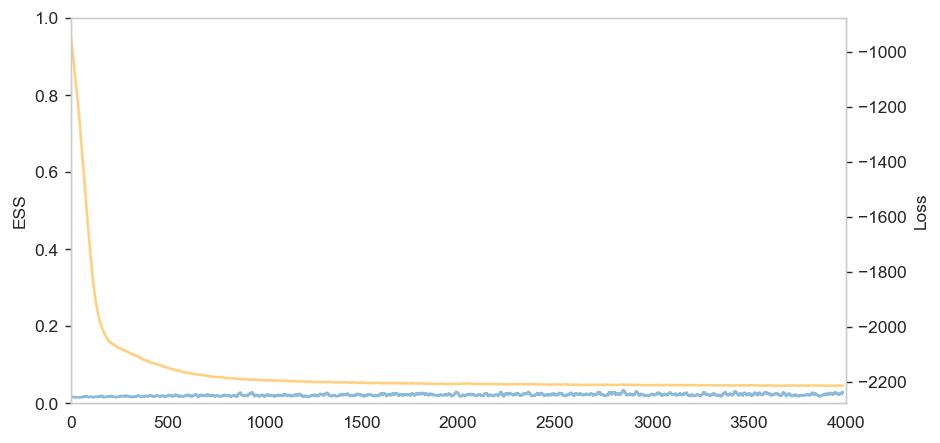

 == Era 0 | Epoch 0 metrics
	loss -901.497
	logp -38.4763
	logq -939.973
	ess 0.0156251
 == Era 1 | Epoch 0 metrics
	loss -1257.91
	logp 333.846
	logq -924.065
	ess 0.0164906
 == Era 2 | Epoch 0 metrics
	loss -1926.07
	logp 1175.96
	logq -750.107
	ess 0.0170748
 == Era 3 | Epoch 0 metrics
	loss -2073.13
	logp 1454.98
	logq -618.158
	ess 0.0178323
 == Era 4 | Epoch 0 metrics
	loss -2107.42
	logp 1499.71
	logq -607.711
	ess 0.0182968
 == Era 5 | Epoch 0 metrics
	loss -2135.78
	logp 1529.09
	logq -606.687
	ess 0.0188319
 == Era 6 | Epoch 0 metrics
	loss -2157.03
	logp 1550.74
	logq -606.285
	ess 0.0195481
 == Era 7 | Epoch 0 metrics
	loss -2171.62
	logp 1568.49
	logq -603.122
	ess 0.0203396
 == Era 8 | Epoch 0 metrics
	loss -2181.02
	logp 1580.82
	logq -600.203
	ess 0.0200171
 == Era 9 | Epoch 0 metrics
	loss -2187.59
	logp 1590.43
	logq -597.154
	ess 0.0209207
 == Era 10 | Epoch 0 metrics
	loss -2191.7
	logp 1594.95
	logq -596.748
	ess 0.0217542
 == Era 11 | Epoch 0 metrics
	loss -2194.6

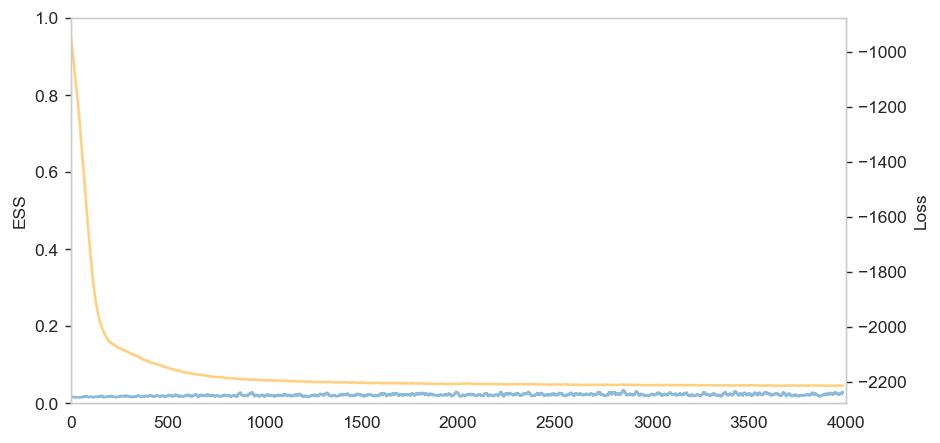

In [10]:
flowu1gauge.run(train = True)

Here we print the blob used to save the trained model.

In [1]:
# print(flowu1gauge.blob)

Here we create an ensamble of configurations using the trained model.

In [16]:
u1_ens = flowu1gauge.make_mcmc_ensemble(N_samples = 8192)
print("Accept rate:", np.mean(u1_ens['accepted']))

100%|██████████| 8192/8192 [01:39<00:00, 81.95it/s] 


Accept rate: 0.0030517578125


Here we compute the mean Wilson loops obtained from the model. Caution: this is currently a work-in-progress, and I have not reproduced the results from the paper. An additional function and implementation will be added in the future to achieve such goals.

In [31]:
from library.theory import bootstrap, compute_u1_plaq, topo_charge
from library.initial import grab, torch_wrap
import matplotlib.pyplot as plt

n_therm = 1192
cfgs = np.stack(list(map(grab, u1_ens['x'])), axis=0)[n_therm:]

topos = grab(topo_charge(torch.tensor(cfgs)))
P01 = compute_u1_plaq(torch.tensor(cfgs), mu = 0, nu = 1)
axes = tuple(range(1, len(P01.shape)))
wilson = torch.sum(P01, dim = axes)


topos_mean, topos_error = bootstrap(topos**2, Nboot= 1000, binsize=100)
# wilson_mean, wilson_error = bootstrap(wilson, Nboot= 1000, binsize=100)

print(topos_mean, topos_error)
# print(wilson_mean, wilson_error)

1.5019151428571431 0.27913985709617584
